In [53]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pystan

import arviz as az
import corner
import time
#plt.style.use('seaborn-talk') # beautify the plots!
#plt.style.use('seaborn-dark-palette') 
plt.style.use('classic') 
#plt.style.use('ggplot') 

In [32]:
NumIter      = 20000
burnin       = 10000
NumEqs       =     4
NumParams    =    15

In [33]:
save_results_to = 'RStan_ADVI/'

In [34]:
# Load the diagnosed cases
raw_cases = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/incidencia_casos_Allcdmx.csv')

# Load the population sizes of Alcaldias and Municipios
raw_population = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/pop_Allcdmx.csv')

In [35]:
raw_population

,City,Delegacion_Municipio,Population
0,Ciudad de México,AZCAPOTZALCO,414711
1,Ciudad de México,COYOACAN,628063
2,Ciudad de México,CUAJIMALPA DE MORELOS,199224
3,Ciudad de México,GUSTAVO A. MADERO,1185772
4,Ciudad de México,IZTACALCO,384326
5,Ciudad de México,IZTAPALAPA,1815786
6,Ciudad de México,LA MAGDALENA CONTRERAS,239086
7,Ciudad de México,MILPA ALTA,137927
8,Ciudad de México,ALVARO OBREGON,726664
9,Ciudad de México,TLAHUAC,305076


In [36]:
initial_population = raw_population['Population']
#initial_population

In [37]:
NumPops=len(initial_population)

In [38]:
initial_pop=initial_population.to_numpy()

In [39]:
raw_incid = raw_cases.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

In [40]:
raw_incid

,Date,Azcapotzalco,Coyoacan,CuajimalpaDeMorelos,GustavoAMadero,Iztacalco,Iztapalapa,LaMagdalenaContreras,MilpaAlta,AlvaroObregon,Tlahuac,Tlalpan,Xochimilco,BenitoJuarez,Cuauhtemoc,MiguelHidalgo,VenustianoCarranza
0,27-02-2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,28-02-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,29-02-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01-03-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,02-03-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,23-10-2020,86,128,7,192,65,78,39,39,124,96,147,17,50,48,75,117
240,24-10-2020,31,50,2,70,18,44,22,18,64,11,58,6,44,10,15,26
241,25-10-2020,12,19,3,20,6,28,4,3,17,2,26,5,13,17,6,10
242,26-10-2020,107,113,29,241,83,80,60,21,171,107,140,17,71,33,58,106


In [41]:
raw_incid_temp = raw_incid.drop('Date', axis=1)
print(raw_incid_temp.shape)
print(raw_incid_temp.shape[1])

(244, 16)
16


In [42]:
raw_incidence=raw_incid_temp.astype('int32') 

In [43]:
Sick  = raw_incidence["MiguelHidalgo"]
times = np.linspace(0.0,float(len(Sick))-1,len(Sick))

<ipython-input-55-0b6dcf9c1164>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(times, Sick, linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )


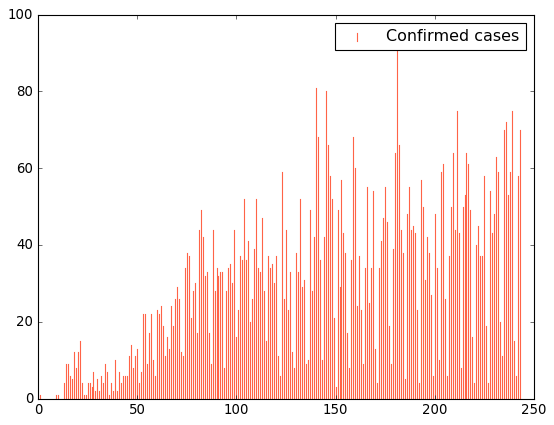

In [55]:
fig0= plt.figure(facecolor="white")
plt.stem(times, Sick, linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#plt.stem(times, Deaths, linefmt='orangered',markerfmt=" ",use_line_collection = True)
plt.legend(numpoints = 1)  # Add a legend.
plt.savefig(save_results_to+'NewCases_MiguelHidalgo.eps')

In [56]:
Sick=raw_incidence.to_numpy()

In [57]:
Sick=np.transpose(raw_incidence.to_numpy())

In [58]:
print(Sick.shape)
print(Sick.shape[0])
print(Sick.shape[1])

(16, 244)
16
244


In [59]:
ttime  = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
t_pred = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
times_pred = np.linspace(0.0,274,275)

In [60]:
n_days=Sick.shape[1]
n_pred=len(times_pred)
#n_pred
#n_days

In [20]:
mydata = {}
mydata['n_days']    = len(times) 
mydata['n_params']  = NumParams
mydata['n_pops']    = NumPops
mydata['n_difeq']   = NumEqs
mydata['n_sample']  = len(times)
mydata['n_fake']    = n_pred
mydata['y']         = raw_incidence
mydata['t0']        = -0.0000001
mydata['ts']        = times
mydata['fake_ts']   = times_pred

In [21]:
########################################
# Prior


beta_s_mu = 0.
beta_s_sd = 1.
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
beta_s_stan = 'lognormal({mu}, {sigma})'.format(mu=beta_s_mu, sigma=beta_s_sd)


beta_a_mu = 0.
beta_a_sd = 1.
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
beta_a_stan = 'lognormal({mu}, {sigma})'.format(mu=beta_a_mu, sigma=beta_a_sd)


rho_alpha = 0.
rho_beta  = 0.4
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
rho_stan  = 'gamma({alpha}, {beta})'.format(alpha=rho_alpha, beta=rho_beta)


alpha_alpha = 1.
alpha_beta  = 1.
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
alpha_stan = 'gamma({alpha}, {beta})'.format(alpha=alpha_alpha, beta=alpha_alpha)


gamma_alpha = 1.
gamma_beta  = 1.
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
gamma_stan = 'gamma({alpha}, {beta})'.format(alpha=gamma_alpha, beta=gamma_beta)



Theta_alpha = 1.
Theta_beta  = 2.
#Beta_y = ss.norm.pdf(beta_s_x, loc=beta_s_mu, scale=beta_s_sd )
Theta_stan = 'uniform({alpha}, {beta})'.format(alpha=Theta_alpha, beta=Theta_beta)



E1_low  = 0.
E1_high = 1e3
E1_stan = 'uniform({alpha}, {beta})'.format(alpha=E1_low, beta=E1_high)

A1_low   = 0.
A1_high  = 1e3
A1_stan = 'uniform({alpha}, {beta})'.format(alpha=A1_low,beta= A1_high)

I1_low   = 0.
I1_high  = 1e2
I1_stan = 'uniform({alpha}, {beta})'.format(alpha=I1_low,beta= I1_high)

E2_low  = 0.
E2_high = 1e3
E2_stan = 'uniform({alpha}, {beta})'.format(alpha=E2_low, beta=E2_high)

A2_low   = 0.
A2_high  = 1e3
A2_stan = 'uniform({alpha}, {beta})'.format(alpha=A2_low,beta= A2_high)

I2_low   = 0.
I2_high  = 1e2
I2_stan = 'uniform({alpha}, {beta})'.format(alpha=I2_low,beta= I2_high)


E3_low  = 0.
E3_high = 1e3
E3_stan = 'uniform({alpha}, {beta})'.format(alpha=E3_low, beta=E3_high)

A3_low   = 0.
A3_high  = 1e3
A3_stan = 'uniform({alpha}, {beta})'.format(alpha=A3_low,beta= A3_high)

I3_low   = 0.
I3_high  = 1e2
I3_stan = 'uniform({alpha}, {beta})'.format(alpha=I3_low,beta= I3_high)

E4_low  = 0.
E4_high = 1e3
E4_stan = 'uniform({alpha}, {beta})'.format(alpha=E4_low, beta=E4_high)

A4_low   = 0.
A4_high  = 1e3
A4_stan = 'uniform({alpha}, {beta})'.format(alpha=A4_low,beta= A4_high)

I4_low   = 0.
I4_high  = 1e2
I4_stan = 'uniform({alpha}, {beta})'.format(alpha=I4_low,beta= I4_high)

E5_low  = 0.
E5_high = 1e3
E5_stan = 'uniform({alpha}, {beta})'.format(alpha=E5_low, beta=E5_high)

A5_low   = 0.
A5_high  = 1e3
A5_stan = 'uniform({alpha}, {beta})'.format(alpha=A5_low,beta= A5_high)

I5_low   = 0.
I5_high  = 1e2
I5_stan = 'uniform({alpha}, {beta})'.format(alpha=I5_low,beta= I5_high)


E6_low  = 0.
E6_high = 1e3
E6_stan = 'uniform({alpha}, {beta})'.format(alpha=E6_low, beta=E6_high)

A6_low   = 0.
A6_high  = 1e3
A6_stan = 'uniform({alpha}, {beta})'.format(alpha=A6_low,beta= A6_high)

I6_low   = 0.
I6_high  = 1e2
I6_stan = 'uniform({alpha}, {beta})'.format(alpha=I6_low,beta= I6_high)

E7_low  = 0.
E7_high = 1e3
E7_stan = 'uniform({alpha}, {beta})'.format(alpha=E7_low, beta=E7_high)

A7_low   = 0.
A7_high  = 1e3
A7_stan = 'uniform({alpha}, {beta})'.format(alpha=A7_low,beta= A7_high)

I7_low   = 0.
I7_high  = 1e2
I7_stan = 'uniform({alpha}, {beta})'.format(alpha=I7_low,beta= I7_high)


E8_low  = 0.
E8_high = 1e3
E8_stan = 'uniform({alpha}, {beta})'.format(alpha=E8_low, beta=E8_high)

A8_low   = 0.
A8_high  = 1e3
A8_stan = 'uniform({alpha}, {beta})'.format(alpha=A8_low,beta= A8_high)

I8_low   = 0.
I8_high  = 1e2
I8_stan = 'uniform({alpha}, {beta})'.format(alpha=I8_low,beta= I8_high)

E9_low  = 0.
E9_high = 1e3
E9_stan = 'uniform({alpha}, {beta})'.format(alpha=E9_low, beta=E9_high)

A9_low   = 0.
A9_high  = 1e3
A9_stan = 'uniform({alpha}, {beta})'.format(alpha=A9_low,beta= A9_high)

I9_low   = 0.
I9_high  = 1e2
I9_stan = 'uniform({alpha}, {beta})'.format(alpha=I9_low,beta= I9_high)


E10_low  = 0.
E10_high = 1e3
E10_stan = 'uniform({alpha}, {beta})'.format(alpha=E10_low, beta=E10_high)

A10_low   = 0.
A10_high  = 1e3
A10_stan = 'uniform({alpha}, {beta})'.format(alpha=A10_low,beta= A10_high)

I10_low   = 0.
I10_high  = 1e2
I10_stan = 'uniform({alpha}, {beta})'.format(alpha=I10_low,beta= I10_high)


E11_low  = 0.
E11_high = 1e3
E11_stan = 'uniform({alpha}, {beta})'.format(alpha=E11_low, beta=E11_high)

A11_low   = 0.
A11_high  = 1e3
A11_stan = 'uniform({alpha}, {beta})'.format(alpha=A11_low,beta= A11_high)

I11_low   = 0.
I11_high  = 1e2
I11_stan = 'uniform({alpha}, {beta})'.format(alpha=I11_low,beta= I11_high)

E12_low  = 0.
E12_high = 1e3
E12_stan = 'uniform({alpha}, {beta})'.format(alpha=E12_low, beta=E12_high)

A12_low   = 0.
A12_high  = 1e3
A12_stan = 'uniform({alpha}, {beta})'.format(alpha=A12_low,beta= A12_high)

I12_low   = 0.
I12_high  = 1e2
I12_stan = 'uniform({alpha}, {beta})'.format(alpha=I12_low,beta= I12_high)


E13_low  = 0.
E13_high = 1e3
E13_stan = 'uniform({alpha}, {beta})'.format(alpha=E13_low, beta=E13_high)

A13_low   = 0.
A13_high  = 1e3
A13_stan = 'uniform({alpha}, {beta})'.format(alpha=A13_low,beta= A13_high)

I13_low   = 0.
I13_high  = 1e2
I13_stan = 'uniform({alpha}, {beta})'.format(alpha=I13_low,beta= I13_high)

E14_low  = 0.
E14_high = 1e3
E14_stan = 'uniform({alpha}, {beta})'.format(alpha=E14_low, beta=E14_high)

A14_low   = 0.
A14_high  = 1e3
A14_stan = 'uniform({alpha}, {beta})'.format(alpha=A14_low,beta= A14_high)

I14_low   = 0.
I14_high  = 1e2
I14_stan = 'uniform({alpha}, {beta})'.format(alpha=I14_low,beta= I14_high)

E15_low  = 0.
E15_high = 1e3
E15_stan = 'uniform({alpha}, {beta})'.format(alpha=E15_low, beta=E15_high)

A15_low   = 0.
A15_high  = 1e3
A15_stan = 'uniform({alpha}, {beta})'.format(alpha=A15_low,beta= A15_high)

I15_low   = 0.
I15_high  = 1e2
I15_stan = 'uniform({alpha}, {beta})'.format(alpha=I15_low,beta= I15_high)


E16_low  = 0.
E16_high = 1e3
E16_stan = 'uniform({alpha}, {beta})'.format(alpha=E16_low, beta=E16_high)

A16_low   = 0.
A16_high  = 1e3
A16_stan = 'uniform({alpha}, {beta})'.format(alpha=A16_low,beta= A16_high)

I16_low   = 0.
I16_high  = 1e2
I16_stan = 'uniform({alpha}, {beta})'.format(alpha=I16_low,beta= I16_high)




phi_1_alpha   = 7.5
phi_1_beta    = 1.0
phi_1_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_1_alpha, beta=phi_1_beta)

phi_2_alpha   = 7.5
phi_2_beta    = 1.0
phi_2_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_2_alpha, beta=phi_2_beta)

phi_3_alpha   = 7.5
phi_3_beta    = 1.0
phi_3_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_3_alpha, beta=phi_3_beta)

phi_4_alpha   = 7.5
phi_4_beta    = 1.0
phi_4_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_4_alpha, beta=phi_4_beta)

phi_5_alpha   = 7.5
phi_5_beta    = 1.0
phi_5_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_5_alpha, beta=phi_5_beta)

phi_6_alpha   = 7.5
phi_6_beta    = 1.0
phi_6_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_6_alpha, beta=phi_6_beta)

phi_7_alpha   = 7.5
phi_7_beta    = 1.0
phi_7_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_7_alpha, beta=phi_7_beta)

phi_8_alpha   = 7.5
phi_8_beta    = 1.0
phi_8_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_8_alpha, beta=phi_8_beta)

phi_9_alpha   = 7.5
phi_9_beta    = 1.0
phi_9_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_9_alpha, beta=phi_9_beta)

phi_10_alpha   = 7.5
phi_10_beta    = 1.0
phi_10_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_10_alpha, beta=phi_10_beta)

phi_11_alpha   = 7.5
phi_11_beta    = 1.0
phi_11_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_11_alpha, beta=phi_11_beta)

phi_12_alpha   = 7.5
phi_12_beta    = 1.0
phi_12_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_12_alpha, beta=phi_12_beta)

phi_13_alpha   = 7.5
phi_13_beta    = 1.0
phi_13_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_13_alpha, beta=phi_13_beta)

phi_14_alpha   = 7.5
phi_14_beta    = 1.0
phi_14_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_14_alpha, beta=phi_14_beta)

phi_15_alpha   = 7.5
phi_15_beta    = 1.0
phi_15_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_15_alpha, beta=phi_15_beta)

phi_16_alpha   = 7.5
phi_16_beta    = 1.0
phi_16_stan = 'gamma({alpha}, {beta})'.format(alpha=phi_16_alpha, beta=phi_16_beta)

In [22]:
# Fit
stan_code = """
functions {{
 real[] SEAIR(real t,       // time
               real[] y,     // system state {{prey, predator}}
               real[] params, // parameters
               real[] x_r,   // unused data
               int[] x_i) {{
                 
                 
    real prod_Sj;
    real prod_Si;
    real prod_Ej;
    real prod_Ei;
    real prod_Aj;
    real prod_Ai;
    real Mi;
    real Mj;
    
    real denom_j;
    real denom_i;
    real MIN_CITY_FRAC;

    int m; 
    
    int NumEqs =4;             
    int n_days =244;
    int n_pops =16;
    int initial_population[n_pops];
    int mat_mob[n_days,n_pops,n_pops];
//    matrix[n_pops,n_pops] mat_mob[n_days];
    matrix[n_days,n_pops] N;
    
    
    real dy_dt[NumEqs*n_pops];
    
    real beta_s   = params[1];
    real beta_a   = params[2];
    real rho      = params[3];  
    real alpha    = params[4];
    real gamma    = params[5];
    real Theta    = params[6];
    

    initial_population[1] = 414711;
    initial_population[2] = 628063;     
    initial_population[3] = 199224;
    initial_population[4] = 1185772;
    initial_population[5] = 384326;
    initial_population[6] = 1815786;      
    initial_population[7] = 239086;
    initial_population[8] = 137927;
    initial_population[9] = 726664;
    initial_population[10] = 305076;             
    initial_population[11] = 574577;
    initial_population[12] = 407885;      
    initial_population[13] = 385439;
    initial_population[14] = 531831;
    initial_population[15] = 372889;                 
    initial_population[16] = 430978;
    
    
    for (i in 1:n_days){{
            N[i, 1] = initial_population[1];
            N[i, 2] = initial_population[2];
            N[i, 3] = initial_population[3];
            N[i, 4] = initial_population[4];
            N[i, 5] = initial_population[5];
            N[i, 6] = initial_population[6];
            N[i, 7] = initial_population[7];
            N[i, 8] = initial_population[8];             
            N[i, 9] = initial_population[9];
            N[i, 10] = initial_population[10];
            N[i, 11] = initial_population[11];
            N[i, 12] = initial_population[12];
            N[i, 13] = initial_population[13];
            N[i, 14] = initial_population[14];             
            N[i, 15] = initial_population[15]; 
            N[i, 16] = initial_population[16];             
    }}
    
mat_mob[ 1 , 1 , 1 ]=  479877;mat_mob[ 1 , 1 , 2 ]=   21266;mat_mob[ 1 , 1 , 3 ]=    7647;mat_mob[ 1 , 1 , 4 ]=  121662;mat_mob[ 1 , 1 , 5 ]=    6536;mat_mob[ 1 , 1 , 6 ]=   25235;mat_mob[ 1 , 1 , 7 ]=    1571;mat_mob[ 1 , 1 , 8 ]=       0;mat_mob[ 1 , 1 , 9 ]=   24350;mat_mob[ 1 , 1 , 10 ]=    1932;mat_mob[ 1 , 1 , 11 ]=   10244;mat_mob[ 1 , 1 , 12 ]=    2132;mat_mob[ 1 , 1 , 13 ]=   17390;mat_mob[ 1 , 1 , 14 ]=   93758;mat_mob[ 1 , 1 , 15 ]=  103088;mat_mob[ 1 , 1 , 16 ]=   16855;
mat_mob[ 1 , 2 , 1 ]=   21287;mat_mob[ 1 , 2 , 2 ]=  890988;mat_mob[ 1 , 2 , 3 ]=   11106;mat_mob[ 1 , 2 , 4 ]=   48440;mat_mob[ 1 , 2 , 5 ]=   32493;mat_mob[ 1 , 2 , 6 ]=  230257;mat_mob[ 1 , 2 , 7 ]=   49771;mat_mob[ 1 , 2 , 8 ]=   17625;mat_mob[ 1 , 2 , 9 ]=  109589;mat_mob[ 1 , 2 , 10 ]=   48394;mat_mob[ 1 , 2 , 11 ]=  245041;mat_mob[ 1 , 2 , 12 ]=  104441;mat_mob[ 1 , 2 , 13 ]=  125158;mat_mob[ 1 , 2 , 14 ]=  118834;mat_mob[ 1 , 2 , 15 ]=   53077;mat_mob[ 1 , 2 , 16 ]=   34408;
mat_mob[ 1 , 3 , 1 ]=    7419;mat_mob[ 1 , 3 , 2 ]=   10544;mat_mob[ 1 , 3 , 3 ]=  303576;mat_mob[ 1 , 3 , 4 ]=    9861;mat_mob[ 1 , 3 , 5 ]=    5437;mat_mob[ 1 , 3 , 6 ]=   10975;mat_mob[ 1 , 3 , 7 ]=    3528;mat_mob[ 1 , 3 , 8 ]=     729;mat_mob[ 1 , 3 , 9 ]=  100971;mat_mob[ 1 , 3 , 10 ]=    1404;mat_mob[ 1 , 3 , 11 ]=   11873;mat_mob[ 1 , 3 , 12 ]=    2143;mat_mob[ 1 , 3 , 13 ]=   16308;mat_mob[ 1 , 3 , 14 ]=   21539;mat_mob[ 1 , 3 , 15 ]=   42923;mat_mob[ 1 , 3 , 16 ]=    3196;
mat_mob[ 1 , 4 , 1 ]=  121738;mat_mob[ 1 , 4 , 2 ]=   51209;mat_mob[ 1 , 4 , 3 ]=    9787;mat_mob[ 1 , 4 , 4 ]= 1685821;mat_mob[ 1 , 4 , 5 ]=   23597;mat_mob[ 1 , 4 , 6 ]=   53127;mat_mob[ 1 , 4 , 7 ]=    2631;mat_mob[ 1 , 4 , 8 ]=     597;mat_mob[ 1 , 4 , 9 ]=   28067;mat_mob[ 1 , 4 , 10 ]=    7510;mat_mob[ 1 , 4 , 11 ]=   19032;mat_mob[ 1 , 4 , 12 ]=    6484;mat_mob[ 1 , 4 , 13 ]=   61450;mat_mob[ 1 , 4 , 14 ]=  263741;mat_mob[ 1 , 4 , 15 ]=   82005;mat_mob[ 1 , 4 , 16 ]=  101202;
mat_mob[ 1 , 5 , 1 ]=    6541;mat_mob[ 1 , 5 , 2 ]=   32676;mat_mob[ 1 , 5 , 3 ]=    5398;mat_mob[ 1 , 5 , 4 ]=   23102;mat_mob[ 1 , 5 , 5 ]=  363421;mat_mob[ 1 , 5 , 6 ]=  183234;mat_mob[ 1 , 5 , 7 ]=    1581;mat_mob[ 1 , 5 , 8 ]=     145;mat_mob[ 1 , 5 , 9 ]=   19362;mat_mob[ 1 , 5 , 10 ]=    7783;mat_mob[ 1 , 5 , 11 ]=   14084;mat_mob[ 1 , 5 , 12 ]=    7623;mat_mob[ 1 , 5 , 13 ]=   60797;mat_mob[ 1 , 5 , 14 ]=   85774;mat_mob[ 1 , 5 , 15 ]=   24932;mat_mob[ 1 , 5 , 16 ]=   59192;
mat_mob[ 1 , 6 , 1 ]=   25466;mat_mob[ 1 , 6 , 2 ]=  223700;mat_mob[ 1 , 6 , 3 ]=   10410;mat_mob[ 1 , 6 , 4 ]=   57188;mat_mob[ 1 , 6 , 5 ]=  179331;mat_mob[ 1 , 6 , 6 ]= 2781281;mat_mob[ 1 , 6 , 7 ]=    9411;mat_mob[ 1 , 6 , 8 ]=   10503;mat_mob[ 1 , 6 , 9 ]=   65130;mat_mob[ 1 , 6 , 10 ]=  134563;mat_mob[ 1 , 6 , 11 ]=   85192;mat_mob[ 1 , 6 , 12 ]=   43158;mat_mob[ 1 , 6 , 13 ]=  168919;mat_mob[ 1 , 6 , 14 ]=  262020;mat_mob[ 1 , 6 , 15 ]=   75602;mat_mob[ 1 , 6 , 16 ]=  101619;
mat_mob[ 1 , 7 , 1 ]=    1704;mat_mob[ 1 , 7 , 2 ]=   51405;mat_mob[ 1 , 7 , 3 ]=    4196;mat_mob[ 1 , 7 , 4 ]=    2603;mat_mob[ 1 , 7 , 5 ]=    1404;mat_mob[ 1 , 7 , 6 ]=    8081;mat_mob[ 1 , 7 , 7 ]=  261985;mat_mob[ 1 , 7 , 8 ]=     446;mat_mob[ 1 , 7 , 9 ]=   84421;mat_mob[ 1 , 7 , 10 ]=    2102;mat_mob[ 1 , 7 , 11 ]=   51236;mat_mob[ 1 , 7 , 12 ]=    8044;mat_mob[ 1 , 7 , 13 ]=   29786;mat_mob[ 1 , 7 , 14 ]=   22814;mat_mob[ 1 , 7 , 15 ]=   11295;mat_mob[ 1 , 7 , 16 ]=    2488;
mat_mob[ 1 , 8 , 1 ]=       0;mat_mob[ 1 , 8 , 2 ]=   16198;mat_mob[ 1 , 8 , 3 ]=     731;mat_mob[ 1 , 8 , 4 ]=     597;mat_mob[ 1 , 8 , 5 ]=     145;mat_mob[ 1 , 8 , 6 ]=   10984;mat_mob[ 1 , 8 , 7 ]=     341;mat_mob[ 1 , 8 , 8 ]=  219120;mat_mob[ 1 , 8 , 9 ]=    3948;mat_mob[ 1 , 8 , 10 ]=   22084;mat_mob[ 1 , 8 , 11 ]=   18623;mat_mob[ 1 , 8 , 12 ]=   32204;mat_mob[ 1 , 8 , 13 ]=   10285;mat_mob[ 1 , 8 , 14 ]=   11791;mat_mob[ 1 , 8 , 15 ]=    3177;mat_mob[ 1 , 8 , 16 ]=    2070;
mat_mob[ 1 , 9 , 1 ]=   24373;mat_mob[ 1 , 9 , 2 ]=  108994;mat_mob[ 1 , 9 , 3 ]=  103706;mat_mob[ 1 , 9 , 4 ]=   29068;mat_mob[ 1 , 9 , 5 ]=   18169;mat_mob[ 1 , 9 , 6 ]=   62556;mat_mob[ 1 , 9 , 7 ]=   80881;mat_mob[ 1 , 9 , 8 ]=    5635;mat_mob[ 1 , 9 , 9 ]= 1040803;mat_mob[ 1 , 9 , 10 ]=   10879;mat_mob[ 1 , 9 , 11 ]=  100571;mat_mob[ 1 , 9 , 12 ]=   15394;mat_mob[ 1 , 9 , 13 ]=  166079;mat_mob[ 1 , 9 , 14 ]=  106871;mat_mob[ 1 , 9 , 15 ]=  121728;mat_mob[ 1 , 9 , 16 ]=   25816;
mat_mob[ 1 , 10 , 1 ]=    1742;mat_mob[ 1 , 10 , 2 ]=   51378;mat_mob[ 1 , 10 , 3 ]=    2017;mat_mob[ 1 , 10 , 4 ]=    7350;mat_mob[ 1 , 10 , 5 ]=    8299;mat_mob[ 1 , 10 , 6 ]=  135116;mat_mob[ 1 , 10 , 7 ]=    2195;mat_mob[ 1 , 10 , 8 ]=   23009;mat_mob[ 1 , 10 , 9 ]=   11164;mat_mob[ 1 , 10 , 10 ]=  519601;mat_mob[ 1 , 10 , 11 ]=   26633;mat_mob[ 1 , 10 , 12 ]=   50870;mat_mob[ 1 , 10 , 13 ]=   24135;mat_mob[ 1 , 10 , 14 ]=   26975;mat_mob[ 1 , 10 , 15 ]=   14410;mat_mob[ 1 , 10 , 16 ]=    7617;
mat_mob[ 1 , 11 , 1 ]=   11152;mat_mob[ 1 , 11 , 2 ]=  239479;mat_mob[ 1 , 11 , 3 ]=   10751;mat_mob[ 1 , 11 , 4 ]=   18137;mat_mob[ 1 , 11 , 5 ]=   14514;mat_mob[ 1 , 11 , 6 ]=   83582;mat_mob[ 1 , 11 , 7 ]=   54429;mat_mob[ 1 , 11 , 8 ]=   17413;mat_mob[ 1 , 11 , 9 ]=   96550;mat_mob[ 1 , 11 , 10 ]=   22685;mat_mob[ 1 , 11 , 11 ]=  899338;mat_mob[ 1 , 11 , 12 ]=  125648;mat_mob[ 1 , 11 , 13 ]=   79012;mat_mob[ 1 , 11 , 14 ]=   90438;mat_mob[ 1 , 11 , 15 ]=   40080;mat_mob[ 1 , 11 , 16 ]=   15518;
mat_mob[ 1 , 12 , 1 ]=    2168;mat_mob[ 1 , 12 , 2 ]=  101815;mat_mob[ 1 , 12 , 3 ]=    2664;mat_mob[ 1 , 12 , 4 ]=    6124;mat_mob[ 1 , 12 , 5 ]=    7664;mat_mob[ 1 , 12 , 6 ]=   47318;mat_mob[ 1 , 12 , 7 ]=    7118;mat_mob[ 1 , 12 , 8 ]=   31616;mat_mob[ 1 , 12 , 9 ]=   15157;mat_mob[ 1 , 12 , 10 ]=   52785;mat_mob[ 1 , 12 , 11 ]=  122677;mat_mob[ 1 , 12 , 12 ]=  698193;mat_mob[ 1 , 12 , 13 ]=   33816;mat_mob[ 1 , 12 , 14 ]=   43240;mat_mob[ 1 , 12 , 15 ]=   13497;mat_mob[ 1 , 12 , 16 ]=    6725;
mat_mob[ 1 , 13 , 1 ]=   17288;mat_mob[ 1 , 13 , 2 ]=  126847;mat_mob[ 1 , 13 , 3 ]=   14737;mat_mob[ 1 , 13 , 4 ]=   60406;mat_mob[ 1 , 13 , 5 ]=   60406;mat_mob[ 1 , 13 , 6 ]=  165005;mat_mob[ 1 , 13 , 7 ]=   29454;mat_mob[ 1 , 13 , 8 ]=    9817;mat_mob[ 1 , 13 , 9 ]=  162721;mat_mob[ 1 , 13 , 10 ]=   22832;mat_mob[ 1 , 13 , 11 ]=   74854;mat_mob[ 1 , 13 , 12 ]=   32599;mat_mob[ 1 , 13 , 13 ]=  412292;mat_mob[ 1 , 13 , 14 ]=  151170;mat_mob[ 1 , 13 , 15 ]=   66476;mat_mob[ 1 , 13 , 16 ]=   41550;
mat_mob[ 1 , 14 , 1 ]=   88884;mat_mob[ 1 , 14 , 2 ]=  118977;mat_mob[ 1 , 14 , 3 ]=   20423;mat_mob[ 1 , 14 , 4 ]=  266262;mat_mob[ 1 , 14 , 5 ]=   85298;mat_mob[ 1 , 14 , 6 ]=  255616;mat_mob[ 1 , 14 , 7 ]=   22592;mat_mob[ 1 , 14 , 8 ]=    9587;mat_mob[ 1 , 14 , 9 ]=  108241;mat_mob[ 1 , 14 , 10 ]=   25045;mat_mob[ 1 , 14 , 11 ]=   90240;mat_mob[ 1 , 14 , 12 ]=   46662;mat_mob[ 1 , 14 , 13 ]=  146278;mat_mob[ 1 , 14 , 14 ]=  824139;mat_mob[ 1 , 14 , 15 ]=  151889;mat_mob[ 1 , 14 , 16 ]=  152797;
mat_mob[ 1 , 15 , 1 ]=  100497;mat_mob[ 1 , 15 , 2 ]=   52587;mat_mob[ 1 , 15 , 3 ]=   44149;mat_mob[ 1 , 15 , 4 ]=   81680;mat_mob[ 1 , 15 , 5 ]=   26663;mat_mob[ 1 , 15 , 6 ]=   74230;mat_mob[ 1 , 15 , 7 ]=   11157;mat_mob[ 1 , 15 , 8 ]=    3013;mat_mob[ 1 , 15 , 9 ]=  116749;mat_mob[ 1 , 15 , 10 ]=   13397;mat_mob[ 1 , 15 , 11 ]=   39279;mat_mob[ 1 , 15 , 12 ]=   12469;mat_mob[ 1 , 15 , 13 ]=   66876;mat_mob[ 1 , 15 , 14 ]=  150244;mat_mob[ 1 , 15 , 15 ]=  544207;mat_mob[ 1 , 15 , 16 ]=   38078;
mat_mob[ 1 , 16 , 1 ]=   15867;mat_mob[ 1 , 16 , 2 ]=   32154;mat_mob[ 1 , 16 , 3 ]=    3342;mat_mob[ 1 , 16 , 4 ]=  104338;mat_mob[ 1 , 16 , 5 ]=   56599;mat_mob[ 1 , 16 , 6 ]=  103209;mat_mob[ 1 , 16 , 7 ]=    3265;mat_mob[ 1 , 16 , 8 ]=    1203;mat_mob[ 1 , 16 , 9 ]=   22746;mat_mob[ 1 , 16 , 10 ]=    6669;mat_mob[ 1 , 16 , 11 ]=   14398;mat_mob[ 1 , 16 , 12 ]=    5040;mat_mob[ 1 , 16 , 13 ]=   39414;mat_mob[ 1 , 16 , 14 ]=  151058;mat_mob[ 1 , 16 , 15 ]=   36849;mat_mob[ 1 , 16 , 16 ]=  493452;


mat_mob[ 2 , 1 , 1 ]=  469261;mat_mob[ 2 , 1 , 2 ]=   30943;mat_mob[ 2 , 1 , 3 ]=    9991;mat_mob[ 2 , 1 , 4 ]=  140391;mat_mob[ 2 , 1 , 5 ]=    8377;mat_mob[ 2 , 1 , 6 ]=   35624;mat_mob[ 2 , 1 , 7 ]=    1909;mat_mob[ 2 , 1 , 8 ]=       0;mat_mob[ 2 , 1 , 9 ]=   31884;mat_mob[ 2 , 1 , 10 ]=    2594;mat_mob[ 2 , 1 , 11 ]=   13162;mat_mob[ 2 , 1 , 12 ]=    2857;mat_mob[ 2 , 1 , 13 ]=   23176;mat_mob[ 2 , 1 , 14 ]=  115514;mat_mob[ 2 , 1 , 15 ]=  114540;mat_mob[ 2 , 1 , 16 ]=   23089;
mat_mob[ 2 , 2 , 1 ]=   29721;mat_mob[ 2 , 2 , 2 ]=  882941;mat_mob[ 2 , 2 , 3 ]=   13387;mat_mob[ 2 , 2 , 4 ]=   68630;mat_mob[ 2 , 2 , 5 ]=   40525;mat_mob[ 2 , 2 , 6 ]=  263482;mat_mob[ 2 , 2 , 7 ]=   51464;mat_mob[ 2 , 2 , 8 ]=   19014;mat_mob[ 2 , 2 , 9 ]=  121977;mat_mob[ 2 , 2 , 10 ]=   61495;mat_mob[ 2 , 2 , 11 ]=  243710;mat_mob[ 2 , 2 , 12 ]=  107775;mat_mob[ 2 , 2 , 13 ]=  147134;mat_mob[ 2 , 2 , 14 ]=  158008;mat_mob[ 2 , 2 , 15 ]=   66619;mat_mob[ 2 , 2 , 16 ]=   43686;
mat_mob[ 2 , 3 , 1 ]=    9278;mat_mob[ 2 , 3 , 2 ]=   12784;mat_mob[ 2 , 3 , 3 ]=  298598;mat_mob[ 2 , 3 , 4 ]=   13406;mat_mob[ 2 , 3 , 5 ]=    6575;mat_mob[ 2 , 3 , 6 ]=   14829;mat_mob[ 2 , 3 , 7 ]=    3633;mat_mob[ 2 , 3 , 8 ]=    1018;mat_mob[ 2 , 3 , 9 ]=  101222;mat_mob[ 2 , 3 , 10 ]=    1763;mat_mob[ 2 , 3 , 11 ]=   12588;mat_mob[ 2 , 3 , 12 ]=    2250;mat_mob[ 2 , 3 , 13 ]=   18179;mat_mob[ 2 , 3 , 14 ]=   27016;mat_mob[ 2 , 3 , 15 ]=   45404;mat_mob[ 2 , 3 , 16 ]=    4454;
mat_mob[ 2 , 4 , 1 ]=  140063;mat_mob[ 2 , 4 , 2 ]=   71369;mat_mob[ 2 , 4 , 3 ]=   12988;mat_mob[ 2 , 4 , 4 ]= 1670023;mat_mob[ 2 , 4 , 5 ]=   30961;mat_mob[ 2 , 4 , 6 ]=   70116;mat_mob[ 2 , 4 , 7 ]=    3457;mat_mob[ 2 , 4 , 8 ]=     875;mat_mob[ 2 , 4 , 9 ]=   36640;mat_mob[ 2 , 4 , 10 ]=   10007;mat_mob[ 2 , 4 , 11 ]=   23648;mat_mob[ 2 , 4 , 12 ]=    8316;mat_mob[ 2 , 4 , 13 ]=   78251;mat_mob[ 2 , 4 , 14 ]=  319631;mat_mob[ 2 , 4 , 15 ]=  104275;mat_mob[ 2 , 4 , 16 ]=  120435;
mat_mob[ 2 , 5 , 1 ]=    8765;mat_mob[ 2 , 5 , 2 ]=   40210;mat_mob[ 2 , 5 , 3 ]=    6660;mat_mob[ 2 , 5 , 4 ]=   30096;mat_mob[ 2 , 5 , 5 ]=  358846;mat_mob[ 2 , 5 , 6 ]=  203967;mat_mob[ 2 , 5 , 7 ]=    1915;mat_mob[ 2 , 5 , 8 ]=     145;mat_mob[ 2 , 5 , 9 ]=   23863;mat_mob[ 2 , 5 , 10 ]=   10282;mat_mob[ 2 , 5 , 11 ]=   15625;mat_mob[ 2 , 5 , 12 ]=    9733;mat_mob[ 2 , 5 , 13 ]=   70666;mat_mob[ 2 , 5 , 14 ]=  114677;mat_mob[ 2 , 5 , 15 ]=   33141;mat_mob[ 2 , 5 , 16 ]=   63380;
mat_mob[ 2 , 6 , 1 ]=   35595;mat_mob[ 2 , 6 , 2 ]=  258348;mat_mob[ 2 , 6 , 3 ]=   14019;mat_mob[ 2 , 6 , 4 ]=   72758;mat_mob[ 2 , 6 , 5 ]=  200449;mat_mob[ 2 , 6 , 6 ]= 2823626;mat_mob[ 2 , 6 , 7 ]=   11533;mat_mob[ 2 , 6 , 8 ]=   13274;mat_mob[ 2 , 6 , 9 ]=   80260;mat_mob[ 2 , 6 , 10 ]=  155431;mat_mob[ 2 , 6 , 11 ]=   92676;mat_mob[ 2 , 6 , 12 ]=   49444;mat_mob[ 2 , 6 , 13 ]=  207692;mat_mob[ 2 , 6 , 14 ]=  363678;mat_mob[ 2 , 6 , 15 ]=  104368;mat_mob[ 2 , 6 , 16 ]=  119843;
mat_mob[ 2 , 7 , 1 ]=    2176;mat_mob[ 2 , 7 , 2 ]=   52501;mat_mob[ 2 , 7 , 3 ]=    4303;mat_mob[ 2 , 7 , 4 ]=    3424;mat_mob[ 2 , 7 , 5 ]=    1732;mat_mob[ 2 , 7 , 6 ]=   10181;mat_mob[ 2 , 7 , 7 ]=  250855;mat_mob[ 2 , 7 , 8 ]=     587;mat_mob[ 2 , 7 , 9 ]=   85425;mat_mob[ 2 , 7 , 10 ]=    2699;mat_mob[ 2 , 7 , 11 ]=   51808;mat_mob[ 2 , 7 , 12 ]=    8470;mat_mob[ 2 , 7 , 13 ]=   33630;mat_mob[ 2 , 7 , 14 ]=   29200;mat_mob[ 2 , 7 , 15 ]=   13845;mat_mob[ 2 , 7 , 16 ]=    3729;
mat_mob[ 2 , 8 , 1 ]=       0;mat_mob[ 2 , 8 , 2 ]=   16945;mat_mob[ 2 , 8 , 3 ]=    1133;mat_mob[ 2 , 8 , 4 ]=     875;mat_mob[ 2 , 8 , 5 ]=     145;mat_mob[ 2 , 8 , 6 ]=   13661;mat_mob[ 2 , 8 , 7 ]=     482;mat_mob[ 2 , 8 , 8 ]=  212763;mat_mob[ 2 , 8 , 9 ]=    4832;mat_mob[ 2 , 8 , 10 ]=   23085;mat_mob[ 2 , 8 , 11 ]=   18773;mat_mob[ 2 , 8 , 12 ]=   32876;mat_mob[ 2 , 8 , 13 ]=   12116;mat_mob[ 2 , 8 , 14 ]=   14985;mat_mob[ 2 , 8 , 15 ]=    4188;mat_mob[ 2 , 8 , 16 ]=    2393;
mat_mob[ 2 , 9 , 1 ]=   32067;mat_mob[ 2 , 9 , 2 ]=  121166;mat_mob[ 2 , 9 , 3 ]=  103695;mat_mob[ 2 , 9 , 4 ]=   36990;mat_mob[ 2 , 9 , 5 ]=   22744;mat_mob[ 2 , 9 , 6 ]=   77088;mat_mob[ 2 , 9 , 7 ]=   82084;mat_mob[ 2 , 9 , 8 ]=    6235;mat_mob[ 2 , 9 , 9 ]= 1029315;mat_mob[ 2 , 9 , 10 ]=   14081;mat_mob[ 2 , 9 , 11 ]=  102434;mat_mob[ 2 , 9 , 12 ]=   17015;mat_mob[ 2 , 9 , 13 ]=  176726;mat_mob[ 2 , 9 , 14 ]=  134840;mat_mob[ 2 , 9 , 15 ]=  138443;mat_mob[ 2 , 9 , 16 ]=   32213;
mat_mob[ 2 , 10 , 1 ]=    2301;mat_mob[ 2 , 10 , 2 ]=   65521;mat_mob[ 2 , 10 , 3 ]=    2655;mat_mob[ 2 , 10 , 4 ]=   10002;mat_mob[ 2 , 10 , 5 ]=   10976;mat_mob[ 2 , 10 , 6 ]=  155846;mat_mob[ 2 , 10 , 7 ]=    2621;mat_mob[ 2 , 10 , 8 ]=   24038;mat_mob[ 2 , 10 , 9 ]=   14602;mat_mob[ 2 , 10 , 10 ]=  519512;mat_mob[ 2 , 10 , 11 ]=   29949;mat_mob[ 2 , 10 , 12 ]=   51191;mat_mob[ 2 , 10 , 13 ]=   34531;mat_mob[ 2 , 10 , 14 ]=   38383;mat_mob[ 2 , 10 , 15 ]=   19788;mat_mob[ 2 , 10 , 16 ]=    9598;
mat_mob[ 2 , 11 , 1 ]=   14340;mat_mob[ 2 , 11 , 2 ]=  238389;mat_mob[ 2 , 11 , 3 ]=   11235;mat_mob[ 2 , 11 , 4 ]=   22235;mat_mob[ 2 , 11 , 5 ]=   15590;mat_mob[ 2 , 11 , 6 ]=   92521;mat_mob[ 2 , 11 , 7 ]=   54871;mat_mob[ 2 , 11 , 8 ]=   17504;mat_mob[ 2 , 11 , 9 ]=   99162;mat_mob[ 2 , 11 , 10 ]=   25158;mat_mob[ 2 , 11 , 11 ]=  864366;mat_mob[ 2 , 11 , 12 ]=  124007;mat_mob[ 2 , 11 , 13 ]=   84294;mat_mob[ 2 , 11 , 14 ]=  107766;mat_mob[ 2 , 11 , 15 ]=   46948;mat_mob[ 2 , 11 , 16 ]=   19336;
mat_mob[ 2 , 12 , 1 ]=    2883;mat_mob[ 2 , 12 , 2 ]=  104944;mat_mob[ 2 , 12 , 3 ]=    3030;mat_mob[ 2 , 12 , 4 ]=    8395;mat_mob[ 2 , 12 , 5 ]=    9424;mat_mob[ 2 , 12 , 6 ]=   55060;mat_mob[ 2 , 12 , 7 ]=    7453;mat_mob[ 2 , 12 , 8 ]=   32174;mat_mob[ 2 , 12 , 9 ]=   16991;mat_mob[ 2 , 12 , 10 ]=   52868;mat_mob[ 2 , 12 , 11 ]=  122142;mat_mob[ 2 , 12 , 12 ]=  684457;mat_mob[ 2 , 12 , 13 ]=   38630;mat_mob[ 2 , 12 , 14 ]=   52460;mat_mob[ 2 , 12 , 15 ]=   16681;mat_mob[ 2 , 12 , 16 ]=    8375;
mat_mob[ 2 , 13 , 1 ]=   24118;mat_mob[ 2 , 13 , 2 ]=  148759;mat_mob[ 2 , 13 , 3 ]=   15989;mat_mob[ 2 , 13 , 4 ]=   76307;mat_mob[ 2 , 13 , 5 ]=   69550;mat_mob[ 2 , 13 , 6 ]=  205295;mat_mob[ 2 , 13 , 7 ]=   33524;mat_mob[ 2 , 13 , 8 ]=   10357;mat_mob[ 2 , 13 , 9 ]=  173049;mat_mob[ 2 , 13 , 10 ]=   32303;mat_mob[ 2 , 13 , 11 ]=   80633;mat_mob[ 2 , 13 , 12 ]=   36524;mat_mob[ 2 , 13 , 13 ]=  421222;mat_mob[ 2 , 13 , 14 ]=  179884;mat_mob[ 2 , 13 , 15 ]=   77938;mat_mob[ 2 , 13 , 16 ]=   52927;
mat_mob[ 2 , 14 , 1 ]=  108393;mat_mob[ 2 , 14 , 2 ]=  157650;mat_mob[ 2 , 14 , 3 ]=   26063;mat_mob[ 2 , 14 , 4 ]=  321585;mat_mob[ 2 , 14 , 5 ]=  112283;mat_mob[ 2 , 14 , 6 ]=  355278;mat_mob[ 2 , 14 , 7 ]=   28134;mat_mob[ 2 , 14 , 8 ]=   12384;mat_mob[ 2 , 14 , 9 ]=  135679;mat_mob[ 2 , 14 , 10 ]=   35813;mat_mob[ 2 , 14 , 11 ]=  105120;mat_mob[ 2 , 14 , 12 ]=   55460;mat_mob[ 2 , 14 , 13 ]=  172079;mat_mob[ 2 , 14 , 14 ]=  902583;mat_mob[ 2 , 14 , 15 ]=  181540;mat_mob[ 2 , 14 , 16 ]=  190513;
mat_mob[ 2 , 15 , 1 ]=  111850;mat_mob[ 2 , 15 , 2 ]=   66383;mat_mob[ 2 , 15 , 3 ]=   46822;mat_mob[ 2 , 15 , 4 ]=  103693;mat_mob[ 2 , 15 , 5 ]=   35390;mat_mob[ 2 , 15 , 6 ]=  103426;mat_mob[ 2 , 15 , 7 ]=   13940;mat_mob[ 2 , 15 , 8 ]=    4313;mat_mob[ 2 , 15 , 9 ]=  132650;mat_mob[ 2 , 15 , 10 ]=   18456;mat_mob[ 2 , 15 , 11 ]=   46681;mat_mob[ 2 , 15 , 12 ]=   14829;mat_mob[ 2 , 15 , 13 ]=   78210;mat_mob[ 2 , 15 , 14 ]=  179747;mat_mob[ 2 , 15 , 15 ]=  553255;mat_mob[ 2 , 15 , 16 ]=   49636;
mat_mob[ 2 , 16 , 1 ]=   20944;mat_mob[ 2 , 16 , 2 ]=   41958;mat_mob[ 2 , 16 , 3 ]=    4529;mat_mob[ 2 , 16 , 4 ]=  123228;mat_mob[ 2 , 16 , 5 ]=   61360;mat_mob[ 2 , 16 , 6 ]=  121665;mat_mob[ 2 , 16 , 7 ]=    4508;mat_mob[ 2 , 16 , 8 ]=    1357;mat_mob[ 2 , 16 , 9 ]=   30378;mat_mob[ 2 , 16 , 10 ]=    8348;mat_mob[ 2 , 16 , 11 ]=   17262;mat_mob[ 2 , 16 , 12 ]=    6917;mat_mob[ 2 , 16 , 13 ]=   50171;mat_mob[ 2 , 16 , 14 ]=  189224;mat_mob[ 2 , 16 , 15 ]=   48143;mat_mob[ 2 , 16 , 16 ]=  498316;


mat_mob[ 3 , 1 , 1 ]=  422747;mat_mob[ 3 , 1 , 2 ]=   23186;mat_mob[ 3 , 1 , 3 ]=    6252;mat_mob[ 3 , 1 , 4 ]=  107037;mat_mob[ 3 , 1 , 5 ]=    7508;mat_mob[ 3 , 1 , 6 ]=   22625;mat_mob[ 3 , 1 , 7 ]=    1409;mat_mob[ 3 , 1 , 8 ]=     401;mat_mob[ 3 , 1 , 9 ]=   20725;mat_mob[ 3 , 1 , 10 ]=    2792;mat_mob[ 3 , 1 , 11 ]=    8958;mat_mob[ 3 , 1 , 12 ]=    2580;mat_mob[ 3 , 1 , 13 ]=   17351;mat_mob[ 3 , 1 , 14 ]=   94731;mat_mob[ 3 , 1 , 15 ]=   90283;mat_mob[ 3 , 1 , 16 ]=   18536;
mat_mob[ 3 , 2 , 1 ]=   20281;mat_mob[ 3 , 2 , 2 ]=  766500;mat_mob[ 3 , 2 , 3 ]=    9238;mat_mob[ 3 , 2 , 4 ]=   46600;mat_mob[ 3 , 2 , 5 ]=   28789;mat_mob[ 3 , 2 , 6 ]=  187674;mat_mob[ 3 , 2 , 7 ]=   39546;mat_mob[ 3 , 2 , 8 ]=   18190;mat_mob[ 3 , 2 , 9 ]=   89055;mat_mob[ 3 , 2 , 10 ]=   44716;mat_mob[ 3 , 2 , 11 ]=  181195;mat_mob[ 3 , 2 , 12 ]=   80113;mat_mob[ 3 , 2 , 13 ]=  112054;mat_mob[ 3 , 2 , 14 ]=  123712;mat_mob[ 3 , 2 , 15 ]=   44420;mat_mob[ 3 , 2 , 16 ]=   36675;
mat_mob[ 3 , 3 , 1 ]=    5461;mat_mob[ 3 , 3 , 2 ]=    8435;mat_mob[ 3 , 3 , 3 ]=  264380;mat_mob[ 3 , 3 , 4 ]=    7971;mat_mob[ 3 , 3 , 5 ]=    5358;mat_mob[ 3 , 3 , 6 ]=   10894;mat_mob[ 3 , 3 , 7 ]=    3800;mat_mob[ 3 , 3 , 8 ]=     361;mat_mob[ 3 , 3 , 9 ]=   85837;mat_mob[ 3 , 3 , 10 ]=    1431;mat_mob[ 3 , 3 , 11 ]=    7897;mat_mob[ 3 , 3 , 12 ]=    1331;mat_mob[ 3 , 3 , 13 ]=   14829;mat_mob[ 3 , 3 , 14 ]=   21732;mat_mob[ 3 , 3 , 15 ]=   37272;mat_mob[ 3 , 3 , 16 ]=    4918;
mat_mob[ 3 , 4 , 1 ]=  104132;mat_mob[ 3 , 4 , 2 ]=   46482;mat_mob[ 3 , 4 , 3 ]=    8993;mat_mob[ 3 , 4 , 4 ]= 1466593;mat_mob[ 3 , 4 , 5 ]=   23282;mat_mob[ 3 , 4 , 6 ]=   50971;mat_mob[ 3 , 4 , 7 ]=    1663;mat_mob[ 3 , 4 , 8 ]=    1131;mat_mob[ 3 , 4 , 9 ]=   24780;mat_mob[ 3 , 4 , 10 ]=    9275;mat_mob[ 3 , 4 , 11 ]=   19994;mat_mob[ 3 , 4 , 12 ]=    5761;mat_mob[ 3 , 4 , 13 ]=   54097;mat_mob[ 3 , 4 , 14 ]=  262199;mat_mob[ 3 , 4 , 15 ]=   73445;mat_mob[ 3 , 4 , 16 ]=  101000;
mat_mob[ 3 , 5 , 1 ]=    7573;mat_mob[ 3 , 5 , 2 ]=   28540;mat_mob[ 3 , 5 , 3 ]=    5467;mat_mob[ 3 , 5 , 4 ]=   24019;mat_mob[ 3 , 5 , 5 ]=  324990;mat_mob[ 3 , 5 , 6 ]=  161881;mat_mob[ 3 , 5 , 7 ]=    1927;mat_mob[ 3 , 5 , 8 ]=     660;mat_mob[ 3 , 5 , 9 ]=   16574;mat_mob[ 3 , 5 , 10 ]=    6429;mat_mob[ 3 , 5 , 11 ]=   10791;mat_mob[ 3 , 5 , 12 ]=    9502;mat_mob[ 3 , 5 , 13 ]=   57457;mat_mob[ 3 , 5 , 14 ]=   97025;mat_mob[ 3 , 5 , 15 ]=   23662;mat_mob[ 3 , 5 , 16 ]=   51059;
mat_mob[ 3 , 6 , 1 ]=   22210;mat_mob[ 3 , 6 , 2 ]=  184365;mat_mob[ 3 , 6 , 3 ]=   10489;mat_mob[ 3 , 6 , 4 ]=   54474;mat_mob[ 3 , 6 , 5 ]=  162909;mat_mob[ 3 , 6 , 6 ]= 2481522;mat_mob[ 3 , 6 , 7 ]=    7815;mat_mob[ 3 , 6 , 8 ]=    9652;mat_mob[ 3 , 6 , 9 ]=   60964;mat_mob[ 3 , 6 , 10 ]=  133633;mat_mob[ 3 , 6 , 11 ]=   70313;mat_mob[ 3 , 6 , 12 ]=   35903;mat_mob[ 3 , 6 , 13 ]=  152686;mat_mob[ 3 , 6 , 14 ]=  302161;mat_mob[ 3 , 6 , 15 ]=   75211;mat_mob[ 3 , 6 , 16 ]=   98821;
mat_mob[ 3 , 7 , 1 ]=    1015;mat_mob[ 3 , 7 , 2 ]=   41709;mat_mob[ 3 , 7 , 3 ]=    3145;mat_mob[ 3 , 7 , 4 ]=    2701;mat_mob[ 3 , 7 , 5 ]=    1907;mat_mob[ 3 , 7 , 6 ]=    7033;mat_mob[ 3 , 7 , 7 ]=  230315;mat_mob[ 3 , 7 , 8 ]=    3209;mat_mob[ 3 , 7 , 9 ]=   67581;mat_mob[ 3 , 7 , 10 ]=    2343;mat_mob[ 3 , 7 , 11 ]=   43909;mat_mob[ 3 , 7 , 12 ]=    5042;mat_mob[ 3 , 7 , 13 ]=   25286;mat_mob[ 3 , 7 , 14 ]=   24646;mat_mob[ 3 , 7 , 15 ]=    9019;mat_mob[ 3 , 7 , 16 ]=    4067;
mat_mob[ 3 , 8 , 1 ]=     401;mat_mob[ 3 , 8 , 2 ]=   15415;mat_mob[ 3 , 8 , 3 ]=     259;mat_mob[ 3 , 8 , 4 ]=    1041;mat_mob[ 3 , 8 , 5 ]=     660;mat_mob[ 3 , 8 , 6 ]=    9912;mat_mob[ 3 , 8 , 7 ]=    1567;mat_mob[ 3 , 8 , 8 ]=  194729;mat_mob[ 3 , 8 , 9 ]=    3414;mat_mob[ 3 , 8 , 10 ]=   18588;mat_mob[ 3 , 8 , 11 ]=   14293;mat_mob[ 3 , 8 , 12 ]=   26297;mat_mob[ 3 , 8 , 13 ]=    7309;mat_mob[ 3 , 8 , 14 ]=   15499;mat_mob[ 3 , 8 , 15 ]=    4457;mat_mob[ 3 , 8 , 16 ]=    1977;
mat_mob[ 3 , 9 , 1 ]=   20654;mat_mob[ 3 , 9 , 2 ]=   85951;mat_mob[ 3 , 9 , 3 ]=   87303;mat_mob[ 3 , 9 , 4 ]=   25604;mat_mob[ 3 , 9 , 5 ]=   15634;mat_mob[ 3 , 9 , 6 ]=   58948;mat_mob[ 3 , 9 , 7 ]=   65246;mat_mob[ 3 , 9 , 8 ]=    5284;mat_mob[ 3 , 9 , 9 ]=  882709;mat_mob[ 3 , 9 , 10 ]=   10179;mat_mob[ 3 , 9 , 11 ]=   80462;mat_mob[ 3 , 9 , 12 ]=   12366;mat_mob[ 3 , 9 , 13 ]=  140048;mat_mob[ 3 , 9 , 14 ]=  113625;mat_mob[ 3 , 9 , 15 ]=  104478;mat_mob[ 3 , 9 , 16 ]=   36219;
mat_mob[ 3 , 10 , 1 ]=    2233;mat_mob[ 3 , 10 , 2 ]=   47781;mat_mob[ 3 , 10 , 3 ]=    1964;mat_mob[ 3 , 10 , 4 ]=    8106;mat_mob[ 3 , 10 , 5 ]=    7075;mat_mob[ 3 , 10 , 6 ]=  137443;mat_mob[ 3 , 10 , 7 ]=    2529;mat_mob[ 3 , 10 , 8 ]=   18076;mat_mob[ 3 , 10 , 9 ]=   11046;mat_mob[ 3 , 10 , 10 ]=  487070;mat_mob[ 3 , 10 , 11 ]=   22003;mat_mob[ 3 , 10 , 12 ]=   48733;mat_mob[ 3 , 10 , 13 ]=   25497;mat_mob[ 3 , 10 , 14 ]=   34656;mat_mob[ 3 , 10 , 15 ]=   14633;mat_mob[ 3 , 10 , 16 ]=    8421;
mat_mob[ 3 , 11 , 1 ]=   10035;mat_mob[ 3 , 11 , 2 ]=  184474;mat_mob[ 3 , 11 , 3 ]=    7004;mat_mob[ 3 , 11 , 4 ]=   20753;mat_mob[ 3 , 11 , 5 ]=    9957;mat_mob[ 3 , 11 , 6 ]=   70961;mat_mob[ 3 , 11 , 7 ]=   41076;mat_mob[ 3 , 11 , 8 ]=   14295;mat_mob[ 3 , 11 , 9 ]=   76447;mat_mob[ 3 , 11 , 10 ]=   19820;mat_mob[ 3 , 11 , 11 ]=  752581;mat_mob[ 3 , 11 , 12 ]=   99530;mat_mob[ 3 , 11 , 13 ]=   60665;mat_mob[ 3 , 11 , 14 ]=   91995;mat_mob[ 3 , 11 , 15 ]=   32905;mat_mob[ 3 , 11 , 16 ]=   13931;
mat_mob[ 3 , 12 , 1 ]=    2625;mat_mob[ 3 , 12 , 2 ]=   76278;mat_mob[ 3 , 12 , 3 ]=    1967;mat_mob[ 3 , 12 , 4 ]=    5661;mat_mob[ 3 , 12 , 5 ]=    7351;mat_mob[ 3 , 12 , 6 ]=   38654;mat_mob[ 3 , 12 , 7 ]=    4879;mat_mob[ 3 , 12 , 8 ]=   27469;mat_mob[ 3 , 12 , 9 ]=   12246;mat_mob[ 3 , 12 , 10 ]=   49864;mat_mob[ 3 , 12 , 11 ]=   95587;mat_mob[ 3 , 12 , 12 ]=  613305;mat_mob[ 3 , 12 , 13 ]=   28401;mat_mob[ 3 , 12 , 14 ]=   45020;mat_mob[ 3 , 12 , 15 ]=   11576;mat_mob[ 3 , 12 , 16 ]=    7916;
mat_mob[ 3 , 13 , 1 ]=   18466;mat_mob[ 3 , 13 , 2 ]=  111506;mat_mob[ 3 , 13 , 3 ]=   13469;mat_mob[ 3 , 13 , 4 ]=   52647;mat_mob[ 3 , 13 , 5 ]=   56962;mat_mob[ 3 , 13 , 6 ]=  145118;mat_mob[ 3 , 13 , 7 ]=   23992;mat_mob[ 3 , 13 , 8 ]=    6055;mat_mob[ 3 , 13 , 9 ]=  136326;mat_mob[ 3 , 13 , 10 ]=   25036;mat_mob[ 3 , 13 , 11 ]=   58156;mat_mob[ 3 , 13 , 12 ]=   27541;mat_mob[ 3 , 13 , 13 ]=  372744;mat_mob[ 3 , 13 , 14 ]=  150381;mat_mob[ 3 , 13 , 15 ]=   61855;mat_mob[ 3 , 13 , 16 ]=   40014;
mat_mob[ 3 , 14 , 1 ]=   84907;mat_mob[ 3 , 14 , 2 ]=  121362;mat_mob[ 3 , 14 , 3 ]=   20723;mat_mob[ 3 , 14 , 4 ]=  264859;mat_mob[ 3 , 14 , 5 ]=   95214;mat_mob[ 3 , 14 , 6 ]=  293051;mat_mob[ 3 , 14 , 7 ]=   23029;mat_mob[ 3 , 14 , 8 ]=   12517;mat_mob[ 3 , 14 , 9 ]=  109547;mat_mob[ 3 , 14 , 10 ]=   32416;mat_mob[ 3 , 14 , 11 ]=   90792;mat_mob[ 3 , 14 , 12 ]=   43784;mat_mob[ 3 , 14 , 13 ]=  144074;mat_mob[ 3 , 14 , 14 ]=  807761;mat_mob[ 3 , 14 , 15 ]=  157158;mat_mob[ 3 , 14 , 16 ]=  167907;
mat_mob[ 3 , 15 , 1 ]=   89515;mat_mob[ 3 , 15 , 2 ]=   43303;mat_mob[ 3 , 15 , 3 ]=   39015;mat_mob[ 3 , 15 , 4 ]=   71499;mat_mob[ 3 , 15 , 5 ]=   24724;mat_mob[ 3 , 15 , 6 ]=   72281;mat_mob[ 3 , 15 , 7 ]=    9134;mat_mob[ 3 , 15 , 8 ]=    4442;mat_mob[ 3 , 15 , 9 ]=   98660;mat_mob[ 3 , 15 , 10 ]=   13326;mat_mob[ 3 , 15 , 11 ]=   31306;mat_mob[ 3 , 15 , 12 ]=   11708;mat_mob[ 3 , 15 , 13 ]=   64355;mat_mob[ 3 , 15 , 14 ]=  154483;mat_mob[ 3 , 15 , 15 ]=  485343;mat_mob[ 3 , 15 , 16 ]=   43402;
mat_mob[ 3 , 16 , 1 ]=   17507;mat_mob[ 3 , 16 , 2 ]=   33241;mat_mob[ 3 , 16 , 3 ]=    4927;mat_mob[ 3 , 16 , 4 ]=  102426;mat_mob[ 3 , 16 , 5 ]=   49608;mat_mob[ 3 , 16 , 6 ]=   96966;mat_mob[ 3 , 16 , 7 ]=    4290;mat_mob[ 3 , 16 , 8 ]=    3195;mat_mob[ 3 , 16 , 9 ]=   29685;mat_mob[ 3 , 16 , 10 ]=    7872;mat_mob[ 3 , 16 , 11 ]=   14198;mat_mob[ 3 , 16 , 12 ]=    7082;mat_mob[ 3 , 16 , 13 ]=   39588;mat_mob[ 3 , 16 , 14 ]=  170649;mat_mob[ 3 , 16 , 15 ]=   41784;mat_mob[ 3 , 16 , 16 ]=  473911;


mat_mob[ 4 , 1 , 1 ]=    3727;mat_mob[ 4 , 1 , 2 ]=      93;mat_mob[ 4 , 1 , 3 ]=       0;mat_mob[ 4 , 1 , 4 ]=     326;mat_mob[ 4 , 1 , 5 ]=       0;mat_mob[ 4 , 1 , 6 ]=       0;mat_mob[ 4 , 1 , 7 ]=       0;mat_mob[ 4 , 1 , 8 ]=       0;mat_mob[ 4 , 1 , 9 ]=       0;mat_mob[ 4 , 1 , 10 ]=       0;mat_mob[ 4 , 1 , 11 ]=       0;mat_mob[ 4 , 1 , 12 ]=       0;mat_mob[ 4 , 1 , 13 ]=       0;mat_mob[ 4 , 1 , 14 ]=       0;mat_mob[ 4 , 1 , 15 ]=       0;mat_mob[ 4 , 1 , 16 ]=       0;
mat_mob[ 4 , 2 , 1 ]=     153;mat_mob[ 4 , 2 , 2 ]=    2144;mat_mob[ 4 , 2 , 3 ]=      33;mat_mob[ 4 , 2 , 4 ]=     135;mat_mob[ 4 , 2 , 5 ]=     116;mat_mob[ 4 , 2 , 6 ]=     429;mat_mob[ 4 , 2 , 7 ]=       0;mat_mob[ 4 , 2 , 8 ]=       0;mat_mob[ 4 , 2 , 9 ]=       0;mat_mob[ 4 , 2 , 10 ]=     767;mat_mob[ 4 , 2 , 11 ]=     319;mat_mob[ 4 , 2 , 12 ]=     245;mat_mob[ 4 , 2 , 13 ]=       0;mat_mob[ 4 , 2 , 14 ]=     124;mat_mob[ 4 , 2 , 15 ]=       0;mat_mob[ 4 , 2 , 16 ]=       0;
mat_mob[ 4 , 3 , 1 ]=       0;mat_mob[ 4 , 3 , 2 ]=      33;mat_mob[ 4 , 3 , 3 ]=      84;mat_mob[ 4 , 3 , 4 ]=       0;mat_mob[ 4 , 3 , 5 ]=       0;mat_mob[ 4 , 3 , 6 ]=      84;mat_mob[ 4 , 3 , 7 ]=       0;mat_mob[ 4 , 3 , 8 ]=       0;mat_mob[ 4 , 3 , 9 ]=     184;mat_mob[ 4 , 3 , 10 ]=      91;mat_mob[ 4 , 3 , 11 ]=       0;mat_mob[ 4 , 3 , 12 ]=       0;mat_mob[ 4 , 3 , 13 ]=       0;mat_mob[ 4 , 3 , 14 ]=       0;mat_mob[ 4 , 3 , 15 ]=      81;mat_mob[ 4 , 3 , 16 ]=       0;
mat_mob[ 4 , 4 , 1 ]=     484;mat_mob[ 4 , 4 , 2 ]=       0;mat_mob[ 4 , 4 , 3 ]=       0;mat_mob[ 4 , 4 , 4 ]=    6408;mat_mob[ 4 , 4 , 5 ]=       0;mat_mob[ 4 , 4 , 6 ]=       0;mat_mob[ 4 , 4 , 7 ]=       0;mat_mob[ 4 , 4 , 8 ]=       0;mat_mob[ 4 , 4 , 9 ]=       0;mat_mob[ 4 , 4 , 10 ]=     247;mat_mob[ 4 , 4 , 11 ]=       0;mat_mob[ 4 , 4 , 12 ]=      71;mat_mob[ 4 , 4 , 13 ]=       0;mat_mob[ 4 , 4 , 14 ]=     222;mat_mob[ 4 , 4 , 15 ]=       0;mat_mob[ 4 , 4 , 16 ]=       0;
mat_mob[ 4 , 5 , 1 ]=       0;mat_mob[ 4 , 5 , 2 ]=     116;mat_mob[ 4 , 5 , 3 ]=       0;mat_mob[ 4 , 5 , 4 ]=       0;mat_mob[ 4 , 5 , 5 ]=     362;mat_mob[ 4 , 5 , 6 ]=     105;mat_mob[ 4 , 5 , 7 ]=       0;mat_mob[ 4 , 5 , 8 ]=       0;mat_mob[ 4 , 5 , 9 ]=       0;mat_mob[ 4 , 5 , 10 ]=      77;mat_mob[ 4 , 5 , 11 ]=       0;mat_mob[ 4 , 5 , 12 ]=       0;mat_mob[ 4 , 5 , 13 ]=       0;mat_mob[ 4 , 5 , 14 ]=     158;mat_mob[ 4 , 5 , 15 ]=       0;mat_mob[ 4 , 5 , 16 ]=      62;
mat_mob[ 4 , 6 , 1 ]=       0;mat_mob[ 4 , 6 , 2 ]=      92;mat_mob[ 4 , 6 , 3 ]=      84;mat_mob[ 4 , 6 , 4 ]=       0;mat_mob[ 4 , 6 , 5 ]=       0;mat_mob[ 4 , 6 , 6 ]=    8973;mat_mob[ 4 , 6 , 7 ]=       0;mat_mob[ 4 , 6 , 8 ]=       0;mat_mob[ 4 , 6 , 9 ]=     105;mat_mob[ 4 , 6 , 10 ]=    1912;mat_mob[ 4 , 6 , 11 ]=       0;mat_mob[ 4 , 6 , 12 ]=      94;mat_mob[ 4 , 6 , 13 ]=      92;mat_mob[ 4 , 6 , 14 ]=     799;mat_mob[ 4 , 6 , 15 ]=       0;mat_mob[ 4 , 6 , 16 ]=     398;
mat_mob[ 4 , 7 , 1 ]=       0;mat_mob[ 4 , 7 , 2 ]=       0;mat_mob[ 4 , 7 , 3 ]=       0;mat_mob[ 4 , 7 , 4 ]=       0;mat_mob[ 4 , 7 , 5 ]=       0;mat_mob[ 4 , 7 , 6 ]=       0;mat_mob[ 4 , 7 , 7 ]=     198;mat_mob[ 4 , 7 , 8 ]=       0;mat_mob[ 4 , 7 , 9 ]=       0;mat_mob[ 4 , 7 , 10 ]=       0;mat_mob[ 4 , 7 , 11 ]=       0;mat_mob[ 4 , 7 , 12 ]=       0;mat_mob[ 4 , 7 , 13 ]=       0;mat_mob[ 4 , 7 , 14 ]=       0;mat_mob[ 4 , 7 , 15 ]=       0;mat_mob[ 4 , 7 , 16 ]=       0;
mat_mob[ 4 , 8 , 1 ]=       0;mat_mob[ 4 , 8 , 2 ]=       0;mat_mob[ 4 , 8 , 3 ]=       0;mat_mob[ 4 , 8 , 4 ]=       0;mat_mob[ 4 , 8 , 5 ]=       0;mat_mob[ 4 , 8 , 6 ]=       0;mat_mob[ 4 , 8 , 7 ]=       0;mat_mob[ 4 , 8 , 8 ]=     350;mat_mob[ 4 , 8 , 9 ]=       0;mat_mob[ 4 , 8 , 10 ]=     206;mat_mob[ 4 , 8 , 11 ]=       0;mat_mob[ 4 , 8 , 12 ]=     218;mat_mob[ 4 , 8 , 13 ]=       0;mat_mob[ 4 , 8 , 14 ]=       0;mat_mob[ 4 , 8 , 15 ]=       0;mat_mob[ 4 , 8 , 16 ]=       0;
mat_mob[ 4 , 9 , 1 ]=       0;mat_mob[ 4 , 9 , 2 ]=       0;mat_mob[ 4 , 9 , 3 ]=       0;mat_mob[ 4 , 9 , 4 ]=       0;mat_mob[ 4 , 9 , 5 ]=       0;mat_mob[ 4 , 9 , 6 ]=     105;mat_mob[ 4 , 9 , 7 ]=      79;mat_mob[ 4 , 9 , 8 ]=       0;mat_mob[ 4 , 9 , 9 ]=    1166;mat_mob[ 4 , 9 , 10 ]=     159;mat_mob[ 4 , 9 , 11 ]=       0;mat_mob[ 4 , 9 , 12 ]=       0;mat_mob[ 4 , 9 , 13 ]=       0;mat_mob[ 4 , 9 , 14 ]=      90;mat_mob[ 4 , 9 , 15 ]=       0;mat_mob[ 4 , 9 , 16 ]=     109;
mat_mob[ 4 , 10 , 1 ]=       0;mat_mob[ 4 , 10 , 2 ]=    1047;mat_mob[ 4 , 10 , 3 ]=      91;mat_mob[ 4 , 10 , 4 ]=     149;mat_mob[ 4 , 10 , 5 ]=       0;mat_mob[ 4 , 10 , 6 ]=    2741;mat_mob[ 4 , 10 , 7 ]=       0;mat_mob[ 4 , 10 , 8 ]=     206;mat_mob[ 4 , 10 , 9 ]=     226;mat_mob[ 4 , 10 , 10 ]=   24830;mat_mob[ 4 , 10 , 11 ]=     279;mat_mob[ 4 , 10 , 12 ]=    1113;mat_mob[ 4 , 10 , 13 ]=     609;mat_mob[ 4 , 10 , 14 ]=     744;mat_mob[ 4 , 10 , 15 ]=     163;mat_mob[ 4 , 10 , 16 ]=      88;
mat_mob[ 4 , 11 , 1 ]=       0;mat_mob[ 4 , 11 , 2 ]=     234;mat_mob[ 4 , 11 , 3 ]=       0;mat_mob[ 4 , 11 , 4 ]=       0;mat_mob[ 4 , 11 , 5 ]=       0;mat_mob[ 4 , 11 , 6 ]=       0;mat_mob[ 4 , 11 , 7 ]=       0;mat_mob[ 4 , 11 , 8 ]=       0;mat_mob[ 4 , 11 , 9 ]=       0;mat_mob[ 4 , 11 , 10 ]=     279;mat_mob[ 4 , 11 , 11 ]=     285;mat_mob[ 4 , 11 , 12 ]=     220;mat_mob[ 4 , 11 , 13 ]=       0;mat_mob[ 4 , 11 , 14 ]=       0;mat_mob[ 4 , 11 , 15 ]=       0;mat_mob[ 4 , 11 , 16 ]=       0;
mat_mob[ 4 , 12 , 1 ]=       0;mat_mob[ 4 , 12 , 2 ]=     509;mat_mob[ 4 , 12 , 3 ]=       0;mat_mob[ 4 , 12 , 4 ]=      71;mat_mob[ 4 , 12 , 5 ]=       0;mat_mob[ 4 , 12 , 6 ]=     447;mat_mob[ 4 , 12 , 7 ]=       0;mat_mob[ 4 , 12 , 8 ]=     108;mat_mob[ 4 , 12 , 9 ]=       0;mat_mob[ 4 , 12 , 10 ]=    1740;mat_mob[ 4 , 12 , 11 ]=     220;mat_mob[ 4 , 12 , 12 ]=   13725;mat_mob[ 4 , 12 , 13 ]=     108;mat_mob[ 4 , 12 , 14 ]=     129;mat_mob[ 4 , 12 , 15 ]=     108;mat_mob[ 4 , 12 , 16 ]=       0;
mat_mob[ 4 , 13 , 1 ]=       0;mat_mob[ 4 , 13 , 2 ]=       0;mat_mob[ 4 , 13 , 3 ]=       0;mat_mob[ 4 , 13 , 4 ]=       0;mat_mob[ 4 , 13 , 5 ]=       0;mat_mob[ 4 , 13 , 6 ]=      96;mat_mob[ 4 , 13 , 7 ]=       0;mat_mob[ 4 , 13 , 8 ]=       0;mat_mob[ 4 , 13 , 9 ]=       0;mat_mob[ 4 , 13 , 10 ]=     652;mat_mob[ 4 , 13 , 11 ]=       0;mat_mob[ 4 , 13 , 12 ]=     108;mat_mob[ 4 , 13 , 13 ]=       0;mat_mob[ 4 , 13 , 14 ]=       0;mat_mob[ 4 , 13 , 15 ]=       0;mat_mob[ 4 , 13 , 16 ]=     224;
mat_mob[ 4 , 14 , 1 ]=     113;mat_mob[ 4 , 14 , 2 ]=     261;mat_mob[ 4 , 14 , 3 ]=       0;mat_mob[ 4 , 14 , 4 ]=      95;mat_mob[ 4 , 14 , 5 ]=       0;mat_mob[ 4 , 14 , 6 ]=     722;mat_mob[ 4 , 14 , 7 ]=       0;mat_mob[ 4 , 14 , 8 ]=       0;mat_mob[ 4 , 14 , 9 ]=       0;mat_mob[ 4 , 14 , 10 ]=     959;mat_mob[ 4 , 14 , 11 ]=       0;mat_mob[ 4 , 14 , 12 ]=     234;mat_mob[ 4 , 14 , 13 ]=       0;mat_mob[ 4 , 14 , 14 ]=      88;mat_mob[ 4 , 14 , 15 ]=       0;mat_mob[ 4 , 14 , 16 ]=       0;
mat_mob[ 4 , 15 , 1 ]=       0;mat_mob[ 4 , 15 , 2 ]=       0;mat_mob[ 4 , 15 , 3 ]=       0;mat_mob[ 4 , 15 , 4 ]=       0;mat_mob[ 4 , 15 , 5 ]=       0;mat_mob[ 4 , 15 , 6 ]=       0;mat_mob[ 4 , 15 , 7 ]=       0;mat_mob[ 4 , 15 , 8 ]=       0;mat_mob[ 4 , 15 , 9 ]=       0;mat_mob[ 4 , 15 , 10 ]=     177;mat_mob[ 4 , 15 , 11 ]=       0;mat_mob[ 4 , 15 , 12 ]=     108;mat_mob[ 4 , 15 , 13 ]=       0;mat_mob[ 4 , 15 , 14 ]=     326;mat_mob[ 4 , 15 , 15 ]=       0;mat_mob[ 4 , 15 , 16 ]=       0;
mat_mob[ 4 , 16 , 1 ]=       0;mat_mob[ 4 , 16 , 2 ]=      60;mat_mob[ 4 , 16 , 3 ]=       0;mat_mob[ 4 , 16 , 4 ]=      76;mat_mob[ 4 , 16 , 5 ]=      62;mat_mob[ 4 , 16 , 6 ]=     254;mat_mob[ 4 , 16 , 7 ]=       0;mat_mob[ 4 , 16 , 8 ]=       0;mat_mob[ 4 , 16 , 9 ]=     109;mat_mob[ 4 , 16 , 10 ]=       0;mat_mob[ 4 , 16 , 11 ]=       0;mat_mob[ 4 , 16 , 12 ]=       0;mat_mob[ 4 , 16 , 13 ]=     110;mat_mob[ 4 , 16 , 14 ]=      88;mat_mob[ 4 , 16 , 15 ]=       0;mat_mob[ 4 , 16 , 16 ]=    2319;


mat_mob[ 5 , 1 , 1 ]=    3880;mat_mob[ 5 , 1 , 2 ]=     209;mat_mob[ 5 , 1 , 3 ]=     178;mat_mob[ 5 , 1 , 4 ]=     749;mat_mob[ 5 , 1 , 5 ]=      73;mat_mob[ 5 , 1 , 6 ]=       0;mat_mob[ 5 , 1 , 7 ]=       0;mat_mob[ 5 , 1 , 8 ]=       0;mat_mob[ 5 , 1 , 9 ]=     155;mat_mob[ 5 , 1 , 10 ]=       0;mat_mob[ 5 , 1 , 11 ]=       0;mat_mob[ 5 , 1 , 12 ]=       0;mat_mob[ 5 , 1 , 13 ]=       0;mat_mob[ 5 , 1 , 14 ]=     646;mat_mob[ 5 , 1 , 15 ]=     316;mat_mob[ 5 , 1 , 16 ]=       0;
mat_mob[ 5 , 2 , 1 ]=     209;mat_mob[ 5 , 2 , 2 ]=   16857;mat_mob[ 5 , 2 , 3 ]=      35;mat_mob[ 5 , 2 , 4 ]=     722;mat_mob[ 5 , 2 , 5 ]=     355;mat_mob[ 5 , 2 , 6 ]=    1705;mat_mob[ 5 , 2 , 7 ]=     879;mat_mob[ 5 , 2 , 8 ]=     124;mat_mob[ 5 , 2 , 9 ]=    1238;mat_mob[ 5 , 2 , 10 ]=    2619;mat_mob[ 5 , 2 , 11 ]=    1004;mat_mob[ 5 , 2 , 12 ]=    1585;mat_mob[ 5 , 2 , 13 ]=    1262;mat_mob[ 5 , 2 , 14 ]=    1007;mat_mob[ 5 , 2 , 15 ]=     154;mat_mob[ 5 , 2 , 16 ]=     693;
mat_mob[ 5 , 3 , 1 ]=     178;mat_mob[ 5 , 3 , 2 ]=      35;mat_mob[ 5 , 3 , 3 ]=    6964;mat_mob[ 5 , 3 , 4 ]=      62;mat_mob[ 5 , 3 , 5 ]=       0;mat_mob[ 5 , 3 , 6 ]=     195;mat_mob[ 5 , 3 , 7 ]=       0;mat_mob[ 5 , 3 , 8 ]=       0;mat_mob[ 5 , 3 , 9 ]=    1119;mat_mob[ 5 , 3 , 10 ]=      97;mat_mob[ 5 , 3 , 11 ]=       0;mat_mob[ 5 , 3 , 12 ]=       0;mat_mob[ 5 , 3 , 13 ]=     173;mat_mob[ 5 , 3 , 14 ]=       0;mat_mob[ 5 , 3 , 15 ]=    1793;mat_mob[ 5 , 3 , 16 ]=       0;
mat_mob[ 5 , 4 , 1 ]=     640;mat_mob[ 5 , 4 , 2 ]=     758;mat_mob[ 5 , 4 , 3 ]=      62;mat_mob[ 5 , 4 , 4 ]=   19152;mat_mob[ 5 , 4 , 5 ]=       0;mat_mob[ 5 , 4 , 6 ]=      79;mat_mob[ 5 , 4 , 7 ]=       0;mat_mob[ 5 , 4 , 8 ]=       0;mat_mob[ 5 , 4 , 9 ]=      81;mat_mob[ 5 , 4 , 10 ]=     592;mat_mob[ 5 , 4 , 11 ]=     108;mat_mob[ 5 , 4 , 12 ]=      76;mat_mob[ 5 , 4 , 13 ]=     328;mat_mob[ 5 , 4 , 14 ]=     199;mat_mob[ 5 , 4 , 15 ]=     228;mat_mob[ 5 , 4 , 16 ]=     446;
mat_mob[ 5 , 5 , 1 ]=       0;mat_mob[ 5 , 5 , 2 ]=     293;mat_mob[ 5 , 5 , 3 ]=       0;mat_mob[ 5 , 5 , 4 ]=       0;mat_mob[ 5 , 5 , 5 ]=     843;mat_mob[ 5 , 5 , 6 ]=     477;mat_mob[ 5 , 5 , 7 ]=       0;mat_mob[ 5 , 5 , 8 ]=       0;mat_mob[ 5 , 5 , 9 ]=       0;mat_mob[ 5 , 5 , 10 ]=     151;mat_mob[ 5 , 5 , 11 ]=       0;mat_mob[ 5 , 5 , 12 ]=       0;mat_mob[ 5 , 5 , 13 ]=      62;mat_mob[ 5 , 5 , 14 ]=     142;mat_mob[ 5 , 5 , 15 ]=       0;mat_mob[ 5 , 5 , 16 ]=     118;
mat_mob[ 5 , 6 , 1 ]=       0;mat_mob[ 5 , 6 , 2 ]=    2327;mat_mob[ 5 , 6 , 3 ]=     195;mat_mob[ 5 , 6 , 4 ]=      94;mat_mob[ 5 , 6 , 5 ]=      97;mat_mob[ 5 , 6 , 6 ]=   19241;mat_mob[ 5 , 6 , 7 ]=       0;mat_mob[ 5 , 6 , 8 ]=       0;mat_mob[ 5 , 6 , 9 ]=     298;mat_mob[ 5 , 6 , 10 ]=    3871;mat_mob[ 5 , 6 , 11 ]=      71;mat_mob[ 5 , 6 , 12 ]=     108;mat_mob[ 5 , 6 , 13 ]=     358;mat_mob[ 5 , 6 , 14 ]=     818;mat_mob[ 5 , 6 , 15 ]=     207;mat_mob[ 5 , 6 , 16 ]=     827;
mat_mob[ 5 , 7 , 1 ]=       0;mat_mob[ 5 , 7 , 2 ]=     569;mat_mob[ 5 , 7 , 3 ]=       0;mat_mob[ 5 , 7 , 4 ]=       0;mat_mob[ 5 , 7 , 5 ]=       0;mat_mob[ 5 , 7 , 6 ]=       0;mat_mob[ 5 , 7 , 7 ]=    2587;mat_mob[ 5 , 7 , 8 ]=       0;mat_mob[ 5 , 7 , 9 ]=    1435;mat_mob[ 5 , 7 , 10 ]=       0;mat_mob[ 5 , 7 , 11 ]=    1034;mat_mob[ 5 , 7 , 12 ]=       0;mat_mob[ 5 , 7 , 13 ]=     304;mat_mob[ 5 , 7 , 14 ]=       0;mat_mob[ 5 , 7 , 15 ]=     144;mat_mob[ 5 , 7 , 16 ]=       0;
mat_mob[ 5 , 8 , 1 ]=       0;mat_mob[ 5 , 8 , 2 ]=     124;mat_mob[ 5 , 8 , 3 ]=       0;mat_mob[ 5 , 8 , 4 ]=       0;mat_mob[ 5 , 8 , 5 ]=       0;mat_mob[ 5 , 8 , 6 ]=       0;mat_mob[ 5 , 8 , 7 ]=       0;mat_mob[ 5 , 8 , 8 ]=     350;mat_mob[ 5 , 8 , 9 ]=       0;mat_mob[ 5 , 8 , 10 ]=     266;mat_mob[ 5 , 8 , 11 ]=     124;mat_mob[ 5 , 8 , 12 ]=     130;mat_mob[ 5 , 8 , 13 ]=       0;mat_mob[ 5 , 8 , 14 ]=       0;mat_mob[ 5 , 8 , 15 ]=       0;mat_mob[ 5 , 8 , 16 ]=       0;
mat_mob[ 5 , 9 , 1 ]=     155;mat_mob[ 5 , 9 , 2 ]=    1308;mat_mob[ 5 , 9 , 3 ]=    1029;mat_mob[ 5 , 9 , 4 ]=      81;mat_mob[ 5 , 9 , 5 ]=       0;mat_mob[ 5 , 9 , 6 ]=     206;mat_mob[ 5 , 9 , 7 ]=     659;mat_mob[ 5 , 9 , 8 ]=       0;mat_mob[ 5 , 9 , 9 ]=    7507;mat_mob[ 5 , 9 , 10 ]=     423;mat_mob[ 5 , 9 , 11 ]=     869;mat_mob[ 5 , 9 , 12 ]=       0;mat_mob[ 5 , 9 , 13 ]=    1851;mat_mob[ 5 , 9 , 14 ]=     346;mat_mob[ 5 , 9 , 15 ]=    1380;mat_mob[ 5 , 9 , 16 ]=     360;
mat_mob[ 5 , 10 , 1 ]=       0;mat_mob[ 5 , 10 , 2 ]=    3657;mat_mob[ 5 , 10 , 3 ]=      97;mat_mob[ 5 , 10 , 4 ]=     404;mat_mob[ 5 , 10 , 5 ]=      74;mat_mob[ 5 , 10 , 6 ]=    4003;mat_mob[ 5 , 10 , 7 ]=       0;mat_mob[ 5 , 10 , 8 ]=     175;mat_mob[ 5 , 10 , 9 ]=     387;mat_mob[ 5 , 10 , 10 ]=   42569;mat_mob[ 5 , 10 , 11 ]=     501;mat_mob[ 5 , 10 , 12 ]=    1509;mat_mob[ 5 , 10 , 13 ]=     515;mat_mob[ 5 , 10 , 14 ]=    1226;mat_mob[ 5 , 10 , 15 ]=     688;mat_mob[ 5 , 10 , 16 ]=       0;
mat_mob[ 5 , 11 , 1 ]=       0;mat_mob[ 5 , 11 , 2 ]=    1531;mat_mob[ 5 , 11 , 3 ]=       0;mat_mob[ 5 , 11 , 4 ]=     108;mat_mob[ 5 , 11 , 5 ]=       0;mat_mob[ 5 , 11 , 6 ]=     265;mat_mob[ 5 , 11 , 7 ]=     657;mat_mob[ 5 , 11 , 8 ]=     124;mat_mob[ 5 , 11 , 9 ]=     617;mat_mob[ 5 , 11 , 10 ]=     370;mat_mob[ 5 , 11 , 11 ]=    9492;mat_mob[ 5 , 11 , 12 ]=    1324;mat_mob[ 5 , 11 , 13 ]=       0;mat_mob[ 5 , 11 , 14 ]=     101;mat_mob[ 5 , 11 , 15 ]=     114;mat_mob[ 5 , 11 , 16 ]=       0;
mat_mob[ 5 , 12 , 1 ]=       0;mat_mob[ 5 , 12 , 2 ]=    1528;mat_mob[ 5 , 12 , 3 ]=       0;mat_mob[ 5 , 12 , 4 ]=      76;mat_mob[ 5 , 12 , 5 ]=       0;mat_mob[ 5 , 12 , 6 ]=      94;mat_mob[ 5 , 12 , 7 ]=       0;mat_mob[ 5 , 12 , 8 ]=     130;mat_mob[ 5 , 12 , 9 ]=      73;mat_mob[ 5 , 12 , 10 ]=    1262;mat_mob[ 5 , 12 , 11 ]=    1446;mat_mob[ 5 , 12 , 12 ]=   18902;mat_mob[ 5 , 12 , 13 ]=      87;mat_mob[ 5 , 12 , 14 ]=     648;mat_mob[ 5 , 12 , 15 ]=     108;mat_mob[ 5 , 12 , 16 ]=       0;
mat_mob[ 5 , 13 , 1 ]=     113;mat_mob[ 5 , 13 , 2 ]=    1517;mat_mob[ 5 , 13 , 3 ]=     271;mat_mob[ 5 , 13 , 4 ]=     106;mat_mob[ 5 , 13 , 5 ]=       0;mat_mob[ 5 , 13 , 6 ]=     572;mat_mob[ 5 , 13 , 7 ]=     216;mat_mob[ 5 , 13 , 8 ]=       0;mat_mob[ 5 , 13 , 9 ]=    1872;mat_mob[ 5 , 13 , 10 ]=     624;mat_mob[ 5 , 13 , 11 ]=     226;mat_mob[ 5 , 13 , 12 ]=       0;mat_mob[ 5 , 13 , 13 ]=    1667;mat_mob[ 5 , 13 , 14 ]=    1042;mat_mob[ 5 , 13 , 15 ]=     247;mat_mob[ 5 , 13 , 16 ]=     189;
mat_mob[ 5 , 14 , 1 ]=     646;mat_mob[ 5 , 14 , 2 ]=    1377;mat_mob[ 5 , 14 , 3 ]=       0;mat_mob[ 5 , 14 , 4 ]=     402;mat_mob[ 5 , 14 , 5 ]=       0;mat_mob[ 5 , 14 , 6 ]=     726;mat_mob[ 5 , 14 , 7 ]=       0;mat_mob[ 5 , 14 , 8 ]=       0;mat_mob[ 5 , 14 , 9 ]=     221;mat_mob[ 5 , 14 , 10 ]=     829;mat_mob[ 5 , 14 , 11 ]=     101;mat_mob[ 5 , 14 , 12 ]=     756;mat_mob[ 5 , 14 , 13 ]=     786;mat_mob[ 5 , 14 , 14 ]=    2004;mat_mob[ 5 , 14 , 15 ]=     316;mat_mob[ 5 , 14 , 16 ]=       0;
mat_mob[ 5 , 15 , 1 ]=     309;mat_mob[ 5 , 15 , 2 ]=     154;mat_mob[ 5 , 15 , 3 ]=    1793;mat_mob[ 5 , 15 , 4 ]=     256;mat_mob[ 5 , 15 , 5 ]=       0;mat_mob[ 5 , 15 , 6 ]=     207;mat_mob[ 5 , 15 , 7 ]=       0;mat_mob[ 5 , 15 , 8 ]=       0;mat_mob[ 5 , 15 , 9 ]=    1485;mat_mob[ 5 , 15 , 10 ]=     359;mat_mob[ 5 , 15 , 11 ]=     114;mat_mob[ 5 , 15 , 12 ]=     108;mat_mob[ 5 , 15 , 13 ]=     247;mat_mob[ 5 , 15 , 14 ]=     316;mat_mob[ 5 , 15 , 15 ]=    6145;mat_mob[ 5 , 15 , 16 ]=       0;
mat_mob[ 5 , 16 , 1 ]=       0;mat_mob[ 5 , 16 , 2 ]=     701;mat_mob[ 5 , 16 , 3 ]=       0;mat_mob[ 5 , 16 , 4 ]=     694;mat_mob[ 5 , 16 , 5 ]=     154;mat_mob[ 5 , 16 , 6 ]=     935;mat_mob[ 5 , 16 , 7 ]=       0;mat_mob[ 5 , 16 , 8 ]=       0;mat_mob[ 5 , 16 , 9 ]=     117;mat_mob[ 5 , 16 , 10 ]=      78;mat_mob[ 5 , 16 , 11 ]=     240;mat_mob[ 5 , 16 , 12 ]=       0;mat_mob[ 5 , 16 , 13 ]=     189;mat_mob[ 5 , 16 , 14 ]=       0;mat_mob[ 5 , 16 , 15 ]=       0;mat_mob[ 5 , 16 , 16 ]=    5302;


mat_mob[ 6 , 1 , 1 ]=    3877;mat_mob[ 6 , 1 , 2 ]=     209;mat_mob[ 6 , 1 , 3 ]=     174;mat_mob[ 6 , 1 , 4 ]=     743;mat_mob[ 6 , 1 , 5 ]=      72;mat_mob[ 6 , 1 , 6 ]=       0;mat_mob[ 6 , 1 , 7 ]=       0;mat_mob[ 6 , 1 , 8 ]=       0;mat_mob[ 6 , 1 , 9 ]=     152;mat_mob[ 6 , 1 , 10 ]=       0;mat_mob[ 6 , 1 , 11 ]=       0;mat_mob[ 6 , 1 , 12 ]=       0;mat_mob[ 6 , 1 , 13 ]=       0;mat_mob[ 6 , 1 , 14 ]=     646;mat_mob[ 6 , 1 , 15 ]=     316;mat_mob[ 6 , 1 , 16 ]=       0;
mat_mob[ 6 , 2 , 1 ]=     209;mat_mob[ 6 , 2 , 2 ]=   16841;mat_mob[ 6 , 2 , 3 ]=      34;mat_mob[ 6 , 2 , 4 ]=     722;mat_mob[ 6 , 2 , 5 ]=     355;mat_mob[ 6 , 2 , 6 ]=    1705;mat_mob[ 6 , 2 , 7 ]=     879;mat_mob[ 6 , 2 , 8 ]=     124;mat_mob[ 6 , 2 , 9 ]=    1235;mat_mob[ 6 , 2 , 10 ]=    2619;mat_mob[ 6 , 2 , 11 ]=    1002;mat_mob[ 6 , 2 , 12 ]=    1583;mat_mob[ 6 , 2 , 13 ]=    1258;mat_mob[ 6 , 2 , 14 ]=    1007;mat_mob[ 6 , 2 , 15 ]=     151;mat_mob[ 6 , 2 , 16 ]=     693;
mat_mob[ 6 , 3 , 1 ]=     174;mat_mob[ 6 , 3 , 2 ]=      34;mat_mob[ 6 , 3 , 3 ]=    6962;mat_mob[ 6 , 3 , 4 ]=      61;mat_mob[ 6 , 3 , 5 ]=       0;mat_mob[ 6 , 3 , 6 ]=     193;mat_mob[ 6 , 3 , 7 ]=       0;mat_mob[ 6 , 3 , 8 ]=       0;mat_mob[ 6 , 3 , 9 ]=    1117;mat_mob[ 6 , 3 , 10 ]=      95;mat_mob[ 6 , 3 , 11 ]=       0;mat_mob[ 6 , 3 , 12 ]=       0;mat_mob[ 6 , 3 , 13 ]=     170;mat_mob[ 6 , 3 , 14 ]=       0;mat_mob[ 6 , 3 , 15 ]=    1793;mat_mob[ 6 , 3 , 16 ]=       0;
mat_mob[ 6 , 4 , 1 ]=     638;mat_mob[ 6 , 4 , 2 ]=     758;mat_mob[ 6 , 4 , 3 ]=      61;mat_mob[ 6 , 4 , 4 ]=   19147;mat_mob[ 6 , 4 , 5 ]=       0;mat_mob[ 6 , 4 , 6 ]=      79;mat_mob[ 6 , 4 , 7 ]=       0;mat_mob[ 6 , 4 , 8 ]=       0;mat_mob[ 6 , 4 , 9 ]=      81;mat_mob[ 6 , 4 , 10 ]=     588;mat_mob[ 6 , 4 , 11 ]=     106;mat_mob[ 6 , 4 , 12 ]=      75;mat_mob[ 6 , 4 , 13 ]=     328;mat_mob[ 6 , 4 , 14 ]=     199;mat_mob[ 6 , 4 , 15 ]=     226;mat_mob[ 6 , 4 , 16 ]=     446;
mat_mob[ 6 , 5 , 1 ]=       0;mat_mob[ 6 , 5 , 2 ]=     293;mat_mob[ 6 , 5 , 3 ]=       0;mat_mob[ 6 , 5 , 4 ]=       0;mat_mob[ 6 , 5 , 5 ]=     843;mat_mob[ 6 , 5 , 6 ]=     477;mat_mob[ 6 , 5 , 7 ]=       0;mat_mob[ 6 , 5 , 8 ]=       0;mat_mob[ 6 , 5 , 9 ]=       0;mat_mob[ 6 , 5 , 10 ]=     151;mat_mob[ 6 , 5 , 11 ]=       0;mat_mob[ 6 , 5 , 12 ]=       0;mat_mob[ 6 , 5 , 13 ]=      62;mat_mob[ 6 , 5 , 14 ]=     142;mat_mob[ 6 , 5 , 15 ]=       0;mat_mob[ 6 , 5 , 16 ]=     118;
mat_mob[ 6 , 6 , 1 ]=       0;mat_mob[ 6 , 6 , 2 ]=    2327;mat_mob[ 6 , 6 , 3 ]=     193;mat_mob[ 6 , 6 , 4 ]=      94;mat_mob[ 6 , 6 , 5 ]=      97;mat_mob[ 6 , 6 , 6 ]=   19241;mat_mob[ 6 , 6 , 7 ]=       0;mat_mob[ 6 , 6 , 8 ]=       0;mat_mob[ 6 , 6 , 9 ]=     297;mat_mob[ 6 , 6 , 10 ]=    3871;mat_mob[ 6 , 6 , 11 ]=      71;mat_mob[ 6 , 6 , 12 ]=     108;mat_mob[ 6 , 6 , 13 ]=     358;mat_mob[ 6 , 6 , 14 ]=     818;mat_mob[ 6 , 6 , 15 ]=     205;mat_mob[ 6 , 6 , 16 ]=     827;
mat_mob[ 6 , 7 , 1 ]=       0;mat_mob[ 6 , 7 , 2 ]=     569;mat_mob[ 6 , 7 , 3 ]=       0;mat_mob[ 6 , 7 , 4 ]=       0;mat_mob[ 6 , 7 , 5 ]=       0;mat_mob[ 6 , 7 , 6 ]=       0;mat_mob[ 6 , 7 , 7 ]=    2587;mat_mob[ 6 , 7 , 8 ]=       0;mat_mob[ 6 , 7 , 9 ]=    1433;mat_mob[ 6 , 7 , 10 ]=       0;mat_mob[ 6 , 7 , 11 ]=    1031;mat_mob[ 6 , 7 , 12 ]=       0;mat_mob[ 6 , 7 , 13 ]=     303;mat_mob[ 6 , 7 , 14 ]=       0;mat_mob[ 6 , 7 , 15 ]=     141;mat_mob[ 6 , 7 , 16 ]=       0;
mat_mob[ 6 , 8 , 1 ]=       0;mat_mob[ 6 , 8 , 2 ]=     124;mat_mob[ 6 , 8 , 3 ]=       0;mat_mob[ 6 , 8 , 4 ]=       0;mat_mob[ 6 , 8 , 5 ]=       0;mat_mob[ 6 , 8 , 6 ]=       0;mat_mob[ 6 , 8 , 7 ]=       0;mat_mob[ 6 , 8 , 8 ]=     350;mat_mob[ 6 , 8 , 9 ]=       0;mat_mob[ 6 , 8 , 10 ]=     266;mat_mob[ 6 , 8 , 11 ]=     124;mat_mob[ 6 , 8 , 12 ]=     130;mat_mob[ 6 , 8 , 13 ]=       0;mat_mob[ 6 , 8 , 14 ]=       0;mat_mob[ 6 , 8 , 15 ]=       0;mat_mob[ 6 , 8 , 16 ]=       0;
mat_mob[ 6 , 9 , 1 ]=     152;mat_mob[ 6 , 9 , 2 ]=    1308;mat_mob[ 6 , 9 , 3 ]=    1029;mat_mob[ 6 , 9 , 4 ]=      81;mat_mob[ 6 , 9 , 5 ]=       0;mat_mob[ 6 , 9 , 6 ]=     205;mat_mob[ 6 , 9 , 7 ]=     657;mat_mob[ 6 , 9 , 8 ]=       0;mat_mob[ 6 , 9 , 9 ]=    7497;mat_mob[ 6 , 9 , 10 ]=     423;mat_mob[ 6 , 9 , 11 ]=     869;mat_mob[ 6 , 9 , 12 ]=       0;mat_mob[ 6 , 9 , 13 ]=    1851;mat_mob[ 6 , 9 , 14 ]=     342;mat_mob[ 6 , 9 , 15 ]=    1378;mat_mob[ 6 , 9 , 16 ]=     355;
mat_mob[ 6 , 10 , 1 ]=       0;mat_mob[ 6 , 10 , 2 ]=    3657;mat_mob[ 6 , 10 , 3 ]=      95;mat_mob[ 6 , 10 , 4 ]=     400;mat_mob[ 6 , 10 , 5 ]=      74;mat_mob[ 6 , 10 , 6 ]=    4003;mat_mob[ 6 , 10 , 7 ]=       0;mat_mob[ 6 , 10 , 8 ]=     175;mat_mob[ 6 , 10 , 9 ]=     387;mat_mob[ 6 , 10 , 10 ]=   42569;mat_mob[ 6 , 10 , 11 ]=     501;mat_mob[ 6 , 10 , 12 ]=    1509;mat_mob[ 6 , 10 , 13 ]=     515;mat_mob[ 6 , 10 , 14 ]=    1226;mat_mob[ 6 , 10 , 15 ]=     688;mat_mob[ 6 , 10 , 16 ]=       0;
mat_mob[ 6 , 11 , 1 ]=       0;mat_mob[ 6 , 11 , 2 ]=    1529;mat_mob[ 6 , 11 , 3 ]=       0;mat_mob[ 6 , 11 , 4 ]=     106;mat_mob[ 6 , 11 , 5 ]=       0;mat_mob[ 6 , 11 , 6 ]=     265;mat_mob[ 6 , 11 , 7 ]=     657;mat_mob[ 6 , 11 , 8 ]=     124;mat_mob[ 6 , 11 , 9 ]=     617;mat_mob[ 6 , 11 , 10 ]=     370;mat_mob[ 6 , 11 , 11 ]=    9468;mat_mob[ 6 , 11 , 12 ]=    1324;mat_mob[ 6 , 11 , 13 ]=       0;mat_mob[ 6 , 11 , 14 ]=     100;mat_mob[ 6 , 11 , 15 ]=     114;mat_mob[ 6 , 11 , 16 ]=       0;
mat_mob[ 6 , 12 , 1 ]=       0;mat_mob[ 6 , 12 , 2 ]=    1526;mat_mob[ 6 , 12 , 3 ]=       0;mat_mob[ 6 , 12 , 4 ]=      75;mat_mob[ 6 , 12 , 5 ]=       0;mat_mob[ 6 , 12 , 6 ]=      94;mat_mob[ 6 , 12 , 7 ]=       0;mat_mob[ 6 , 12 , 8 ]=     130;mat_mob[ 6 , 12 , 9 ]=      72;mat_mob[ 6 , 12 , 10 ]=    1262;mat_mob[ 6 , 12 , 11 ]=    1446;mat_mob[ 6 , 12 , 12 ]=   18902;mat_mob[ 6 , 12 , 13 ]=      87;mat_mob[ 6 , 12 , 14 ]=     648;mat_mob[ 6 , 12 , 15 ]=     108;mat_mob[ 6 , 12 , 16 ]=       0;
mat_mob[ 6 , 13 , 1 ]=     113;mat_mob[ 6 , 13 , 2 ]=    1513;mat_mob[ 6 , 13 , 3 ]=     268;mat_mob[ 6 , 13 , 4 ]=     106;mat_mob[ 6 , 13 , 5 ]=       0;mat_mob[ 6 , 13 , 6 ]=     572;mat_mob[ 6 , 13 , 7 ]=     216;mat_mob[ 6 , 13 , 8 ]=       0;mat_mob[ 6 , 13 , 9 ]=    1872;mat_mob[ 6 , 13 , 10 ]=     624;mat_mob[ 6 , 13 , 11 ]=     226;mat_mob[ 6 , 13 , 12 ]=       0;mat_mob[ 6 , 13 , 13 ]=    1667;mat_mob[ 6 , 13 , 14 ]=    1042;mat_mob[ 6 , 13 , 15 ]=     247;mat_mob[ 6 , 13 , 16 ]=     187;
mat_mob[ 6 , 14 , 1 ]=     646;mat_mob[ 6 , 14 , 2 ]=    1377;mat_mob[ 6 , 14 , 3 ]=       0;mat_mob[ 6 , 14 , 4 ]=     402;mat_mob[ 6 , 14 , 5 ]=       0;mat_mob[ 6 , 14 , 6 ]=     726;mat_mob[ 6 , 14 , 7 ]=       0;mat_mob[ 6 , 14 , 8 ]=       0;mat_mob[ 6 , 14 , 9 ]=     220;mat_mob[ 6 , 14 , 10 ]=     829;mat_mob[ 6 , 14 , 11 ]=     100;mat_mob[ 6 , 14 , 12 ]=     756;mat_mob[ 6 , 14 , 13 ]=     786;mat_mob[ 6 , 14 , 14 ]=    2004;mat_mob[ 6 , 14 , 15 ]=     316;mat_mob[ 6 , 14 , 16 ]=       0;
mat_mob[ 6 , 15 , 1 ]=     309;mat_mob[ 6 , 15 , 2 ]=     151;mat_mob[ 6 , 15 , 3 ]=    1793;mat_mob[ 6 , 15 , 4 ]=     252;mat_mob[ 6 , 15 , 5 ]=       0;mat_mob[ 6 , 15 , 6 ]=     205;mat_mob[ 6 , 15 , 7 ]=       0;mat_mob[ 6 , 15 , 8 ]=       0;mat_mob[ 6 , 15 , 9 ]=    1483;mat_mob[ 6 , 15 , 10 ]=     359;mat_mob[ 6 , 15 , 11 ]=     114;mat_mob[ 6 , 15 , 12 ]=     108;mat_mob[ 6 , 15 , 13 ]=     247;mat_mob[ 6 , 15 , 14 ]=     316;mat_mob[ 6 , 15 , 15 ]=    6145;mat_mob[ 6 , 15 , 16 ]=       0;
mat_mob[ 6 , 16 , 1 ]=       0;mat_mob[ 6 , 16 , 2 ]=     701;mat_mob[ 6 , 16 , 3 ]=       0;mat_mob[ 6 , 16 , 4 ]=     694;mat_mob[ 6 , 16 , 5 ]=     154;mat_mob[ 6 , 16 , 6 ]=     935;mat_mob[ 6 , 16 , 7 ]=       0;mat_mob[ 6 , 16 , 8 ]=       0;mat_mob[ 6 , 16 , 9 ]=     114;mat_mob[ 6 , 16 , 10 ]=      78;mat_mob[ 6 , 16 , 11 ]=     238;mat_mob[ 6 , 16 , 12 ]=       0;mat_mob[ 6 , 16 , 13 ]=     187;mat_mob[ 6 , 16 , 14 ]=       0;mat_mob[ 6 , 16 , 15 ]=       0;mat_mob[ 6 , 16 , 16 ]=    5296;


mat_mob[ 7 , 1 , 1 ]=    3875;mat_mob[ 7 , 1 , 2 ]=     209;mat_mob[ 7 , 1 , 3 ]=     173;mat_mob[ 7 , 1 , 4 ]=     739;mat_mob[ 7 , 1 , 5 ]=      71;mat_mob[ 7 , 1 , 6 ]=       0;mat_mob[ 7 , 1 , 7 ]=       0;mat_mob[ 7 , 1 , 8 ]=       0;mat_mob[ 7 , 1 , 9 ]=     151;mat_mob[ 7 , 1 , 10 ]=       0;mat_mob[ 7 , 1 , 11 ]=       0;mat_mob[ 7 , 1 , 12 ]=       0;mat_mob[ 7 , 1 , 13 ]=       0;mat_mob[ 7 , 1 , 14 ]=     646;mat_mob[ 7 , 1 , 15 ]=     316;mat_mob[ 7 , 1 , 16 ]=       0;
mat_mob[ 7 , 2 , 1 ]=     209;mat_mob[ 7 , 2 , 2 ]=   16833;mat_mob[ 7 , 2 , 3 ]=      34;mat_mob[ 7 , 2 , 4 ]=     722;mat_mob[ 7 , 2 , 5 ]=     355;mat_mob[ 7 , 2 , 6 ]=    1705;mat_mob[ 7 , 2 , 7 ]=     879;mat_mob[ 7 , 2 , 8 ]=     124;mat_mob[ 7 , 2 , 9 ]=    1234;mat_mob[ 7 , 2 , 10 ]=    2619;mat_mob[ 7 , 2 , 11 ]=    1001;mat_mob[ 7 , 2 , 12 ]=    1582;mat_mob[ 7 , 2 , 13 ]=    1257;mat_mob[ 7 , 2 , 14 ]=    1007;mat_mob[ 7 , 2 , 15 ]=     149;mat_mob[ 7 , 2 , 16 ]=     693;
mat_mob[ 7 , 3 , 1 ]=     173;mat_mob[ 7 , 3 , 2 ]=      34;mat_mob[ 7 , 3 , 3 ]=    6961;mat_mob[ 7 , 3 , 4 ]=      60;mat_mob[ 7 , 3 , 5 ]=       0;mat_mob[ 7 , 3 , 6 ]=     192;mat_mob[ 7 , 3 , 7 ]=       0;mat_mob[ 7 , 3 , 8 ]=       0;mat_mob[ 7 , 3 , 9 ]=    1116;mat_mob[ 7 , 3 , 10 ]=      94;mat_mob[ 7 , 3 , 11 ]=       0;mat_mob[ 7 , 3 , 12 ]=       0;mat_mob[ 7 , 3 , 13 ]=     169;mat_mob[ 7 , 3 , 14 ]=       0;mat_mob[ 7 , 3 , 15 ]=    1793;mat_mob[ 7 , 3 , 16 ]=       0;
mat_mob[ 7 , 4 , 1 ]=     637;mat_mob[ 7 , 4 , 2 ]=     758;mat_mob[ 7 , 4 , 3 ]=      60;mat_mob[ 7 , 4 , 4 ]=   19145;mat_mob[ 7 , 4 , 5 ]=       0;mat_mob[ 7 , 4 , 6 ]=      79;mat_mob[ 7 , 4 , 7 ]=       0;mat_mob[ 7 , 4 , 8 ]=       0;mat_mob[ 7 , 4 , 9 ]=      81;mat_mob[ 7 , 4 , 10 ]=     588;mat_mob[ 7 , 4 , 11 ]=     105;mat_mob[ 7 , 4 , 12 ]=      74;mat_mob[ 7 , 4 , 13 ]=     328;mat_mob[ 7 , 4 , 14 ]=     199;mat_mob[ 7 , 4 , 15 ]=     226;mat_mob[ 7 , 4 , 16 ]=     446;
mat_mob[ 7 , 5 , 1 ]=       0;mat_mob[ 7 , 5 , 2 ]=     293;mat_mob[ 7 , 5 , 3 ]=       0;mat_mob[ 7 , 5 , 4 ]=       0;mat_mob[ 7 , 5 , 5 ]=     843;mat_mob[ 7 , 5 , 6 ]=     477;mat_mob[ 7 , 5 , 7 ]=       0;mat_mob[ 7 , 5 , 8 ]=       0;mat_mob[ 7 , 5 , 9 ]=       0;mat_mob[ 7 , 5 , 10 ]=     151;mat_mob[ 7 , 5 , 11 ]=       0;mat_mob[ 7 , 5 , 12 ]=       0;mat_mob[ 7 , 5 , 13 ]=      62;mat_mob[ 7 , 5 , 14 ]=     142;mat_mob[ 7 , 5 , 15 ]=       0;mat_mob[ 7 , 5 , 16 ]=     118;
mat_mob[ 7 , 6 , 1 ]=       0;mat_mob[ 7 , 6 , 2 ]=    2327;mat_mob[ 7 , 6 , 3 ]=     192;mat_mob[ 7 , 6 , 4 ]=      94;mat_mob[ 7 , 6 , 5 ]=      97;mat_mob[ 7 , 6 , 6 ]=   19241;mat_mob[ 7 , 6 , 7 ]=       0;mat_mob[ 7 , 6 , 8 ]=       0;mat_mob[ 7 , 6 , 9 ]=     296;mat_mob[ 7 , 6 , 10 ]=    3871;mat_mob[ 7 , 6 , 11 ]=      71;mat_mob[ 7 , 6 , 12 ]=     108;mat_mob[ 7 , 6 , 13 ]=     358;mat_mob[ 7 , 6 , 14 ]=     818;mat_mob[ 7 , 6 , 15 ]=     204;mat_mob[ 7 , 6 , 16 ]=     827;
mat_mob[ 7 , 7 , 1 ]=       0;mat_mob[ 7 , 7 , 2 ]=     569;mat_mob[ 7 , 7 , 3 ]=       0;mat_mob[ 7 , 7 , 4 ]=       0;mat_mob[ 7 , 7 , 5 ]=       0;mat_mob[ 7 , 7 , 6 ]=       0;mat_mob[ 7 , 7 , 7 ]=    2587;mat_mob[ 7 , 7 , 8 ]=       0;mat_mob[ 7 , 7 , 9 ]=    1433;mat_mob[ 7 , 7 , 10 ]=       0;mat_mob[ 7 , 7 , 11 ]=    1029;mat_mob[ 7 , 7 , 12 ]=       0;mat_mob[ 7 , 7 , 13 ]=     302;mat_mob[ 7 , 7 , 14 ]=       0;mat_mob[ 7 , 7 , 15 ]=     140;mat_mob[ 7 , 7 , 16 ]=       0;
mat_mob[ 7 , 8 , 1 ]=       0;mat_mob[ 7 , 8 , 2 ]=     124;mat_mob[ 7 , 8 , 3 ]=       0;mat_mob[ 7 , 8 , 4 ]=       0;mat_mob[ 7 , 8 , 5 ]=       0;mat_mob[ 7 , 8 , 6 ]=       0;mat_mob[ 7 , 8 , 7 ]=       0;mat_mob[ 7 , 8 , 8 ]=     350;mat_mob[ 7 , 8 , 9 ]=       0;mat_mob[ 7 , 8 , 10 ]=     266;mat_mob[ 7 , 8 , 11 ]=     124;mat_mob[ 7 , 8 , 12 ]=     130;mat_mob[ 7 , 8 , 13 ]=       0;mat_mob[ 7 , 8 , 14 ]=       0;mat_mob[ 7 , 8 , 15 ]=       0;mat_mob[ 7 , 8 , 16 ]=       0;
mat_mob[ 7 , 9 , 1 ]=     151;mat_mob[ 7 , 9 , 2 ]=    1308;mat_mob[ 7 , 9 , 3 ]=    1029;mat_mob[ 7 , 9 , 4 ]=      81;mat_mob[ 7 , 9 , 5 ]=       0;mat_mob[ 7 , 9 , 6 ]=     204;mat_mob[ 7 , 9 , 7 ]=     657;mat_mob[ 7 , 9 , 8 ]=       0;mat_mob[ 7 , 9 , 9 ]=    7493;mat_mob[ 7 , 9 , 10 ]=     423;mat_mob[ 7 , 9 , 11 ]=     869;mat_mob[ 7 , 9 , 12 ]=       0;mat_mob[ 7 , 9 , 13 ]=    1851;mat_mob[ 7 , 9 , 14 ]=     340;mat_mob[ 7 , 9 , 15 ]=    1377;mat_mob[ 7 , 9 , 16 ]=     353;
mat_mob[ 7 , 10 , 1 ]=       0;mat_mob[ 7 , 10 , 2 ]=    3657;mat_mob[ 7 , 10 , 3 ]=      94;mat_mob[ 7 , 10 , 4 ]=     400;mat_mob[ 7 , 10 , 5 ]=      74;mat_mob[ 7 , 10 , 6 ]=    4003;mat_mob[ 7 , 10 , 7 ]=       0;mat_mob[ 7 , 10 , 8 ]=     175;mat_mob[ 7 , 10 , 9 ]=     387;mat_mob[ 7 , 10 , 10 ]=   42569;mat_mob[ 7 , 10 , 11 ]=     501;mat_mob[ 7 , 10 , 12 ]=    1509;mat_mob[ 7 , 10 , 13 ]=     515;mat_mob[ 7 , 10 , 14 ]=    1226;mat_mob[ 7 , 10 , 15 ]=     688;mat_mob[ 7 , 10 , 16 ]=       0;
mat_mob[ 7 , 11 , 1 ]=       0;mat_mob[ 7 , 11 , 2 ]=    1528;mat_mob[ 7 , 11 , 3 ]=       0;mat_mob[ 7 , 11 , 4 ]=     105;mat_mob[ 7 , 11 , 5 ]=       0;mat_mob[ 7 , 11 , 6 ]=     265;mat_mob[ 7 , 11 , 7 ]=     657;mat_mob[ 7 , 11 , 8 ]=     124;mat_mob[ 7 , 11 , 9 ]=     617;mat_mob[ 7 , 11 , 10 ]=     370;mat_mob[ 7 , 11 , 11 ]=    9452;mat_mob[ 7 , 11 , 12 ]=    1324;mat_mob[ 7 , 11 , 13 ]=       0;mat_mob[ 7 , 11 , 14 ]=      99;mat_mob[ 7 , 11 , 15 ]=     114;mat_mob[ 7 , 11 , 16 ]=       0;
mat_mob[ 7 , 12 , 1 ]=       0;mat_mob[ 7 , 12 , 2 ]=    1525;mat_mob[ 7 , 12 , 3 ]=       0;mat_mob[ 7 , 12 , 4 ]=      74;mat_mob[ 7 , 12 , 5 ]=       0;mat_mob[ 7 , 12 , 6 ]=      94;mat_mob[ 7 , 12 , 7 ]=       0;mat_mob[ 7 , 12 , 8 ]=     130;mat_mob[ 7 , 12 , 9 ]=      71;mat_mob[ 7 , 12 , 10 ]=    1262;mat_mob[ 7 , 12 , 11 ]=    1446;mat_mob[ 7 , 12 , 12 ]=   18902;mat_mob[ 7 , 12 , 13 ]=      87;mat_mob[ 7 , 12 , 14 ]=     648;mat_mob[ 7 , 12 , 15 ]=     108;mat_mob[ 7 , 12 , 16 ]=       0;
mat_mob[ 7 , 13 , 1 ]=     113;mat_mob[ 7 , 13 , 2 ]=    1512;mat_mob[ 7 , 13 , 3 ]=     267;mat_mob[ 7 , 13 , 4 ]=     106;mat_mob[ 7 , 13 , 5 ]=       0;mat_mob[ 7 , 13 , 6 ]=     572;mat_mob[ 7 , 13 , 7 ]=     216;mat_mob[ 7 , 13 , 8 ]=       0;mat_mob[ 7 , 13 , 9 ]=    1872;mat_mob[ 7 , 13 , 10 ]=     624;mat_mob[ 7 , 13 , 11 ]=     226;mat_mob[ 7 , 13 , 12 ]=       0;mat_mob[ 7 , 13 , 13 ]=    1667;mat_mob[ 7 , 13 , 14 ]=    1042;mat_mob[ 7 , 13 , 15 ]=     247;mat_mob[ 7 , 13 , 16 ]=     186;
mat_mob[ 7 , 14 , 1 ]=     646;mat_mob[ 7 , 14 , 2 ]=    1377;mat_mob[ 7 , 14 , 3 ]=       0;mat_mob[ 7 , 14 , 4 ]=     402;mat_mob[ 7 , 14 , 5 ]=       0;mat_mob[ 7 , 14 , 6 ]=     726;mat_mob[ 7 , 14 , 7 ]=       0;mat_mob[ 7 , 14 , 8 ]=       0;mat_mob[ 7 , 14 , 9 ]=     219;mat_mob[ 7 , 14 , 10 ]=     829;mat_mob[ 7 , 14 , 11 ]=      99;mat_mob[ 7 , 14 , 12 ]=     756;mat_mob[ 7 , 14 , 13 ]=     786;mat_mob[ 7 , 14 , 14 ]=    2004;mat_mob[ 7 , 14 , 15 ]=     316;mat_mob[ 7 , 14 , 16 ]=       0;
mat_mob[ 7 , 15 , 1 ]=     309;mat_mob[ 7 , 15 , 2 ]=     149;mat_mob[ 7 , 15 , 3 ]=    1793;mat_mob[ 7 , 15 , 4 ]=     251;mat_mob[ 7 , 15 , 5 ]=       0;mat_mob[ 7 , 15 , 6 ]=     204;mat_mob[ 7 , 15 , 7 ]=       0;mat_mob[ 7 , 15 , 8 ]=       0;mat_mob[ 7 , 15 , 9 ]=    1482;mat_mob[ 7 , 15 , 10 ]=     359;mat_mob[ 7 , 15 , 11 ]=     114;mat_mob[ 7 , 15 , 12 ]=     108;mat_mob[ 7 , 15 , 13 ]=     247;mat_mob[ 7 , 15 , 14 ]=     316;mat_mob[ 7 , 15 , 15 ]=    6145;mat_mob[ 7 , 15 , 16 ]=       0;
mat_mob[ 7 , 16 , 1 ]=       0;mat_mob[ 7 , 16 , 2 ]=     701;mat_mob[ 7 , 16 , 3 ]=       0;mat_mob[ 7 , 16 , 4 ]=     694;mat_mob[ 7 , 16 , 5 ]=     154;mat_mob[ 7 , 16 , 6 ]=     935;mat_mob[ 7 , 16 , 7 ]=       0;mat_mob[ 7 , 16 , 8 ]=       0;mat_mob[ 7 , 16 , 9 ]=     113;mat_mob[ 7 , 16 , 10 ]=      78;mat_mob[ 7 , 16 , 11 ]=     237;mat_mob[ 7 , 16 , 12 ]=       0;mat_mob[ 7 , 16 , 13 ]=     186;mat_mob[ 7 , 16 , 14 ]=       0;mat_mob[ 7 , 16 , 15 ]=       0;mat_mob[ 7 , 16 , 16 ]=    5292;


mat_mob[ 8 , 1 , 1 ]=    3875;mat_mob[ 8 , 1 , 2 ]=     209;mat_mob[ 8 , 1 , 3 ]=     173;mat_mob[ 8 , 1 , 4 ]=     739;mat_mob[ 8 , 1 , 5 ]=      71;mat_mob[ 8 , 1 , 6 ]=       0;mat_mob[ 8 , 1 , 7 ]=       0;mat_mob[ 8 , 1 , 8 ]=       0;mat_mob[ 8 , 1 , 9 ]=     151;mat_mob[ 8 , 1 , 10 ]=       0;mat_mob[ 8 , 1 , 11 ]=       0;mat_mob[ 8 , 1 , 12 ]=       0;mat_mob[ 8 , 1 , 13 ]=       0;mat_mob[ 8 , 1 , 14 ]=     646;mat_mob[ 8 , 1 , 15 ]=     316;mat_mob[ 8 , 1 , 16 ]=       0;
mat_mob[ 8 , 2 , 1 ]=     209;mat_mob[ 8 , 2 , 2 ]=   16833;mat_mob[ 8 , 2 , 3 ]=      34;mat_mob[ 8 , 2 , 4 ]=     722;mat_mob[ 8 , 2 , 5 ]=     355;mat_mob[ 8 , 2 , 6 ]=    1705;mat_mob[ 8 , 2 , 7 ]=     879;mat_mob[ 8 , 2 , 8 ]=     124;mat_mob[ 8 , 2 , 9 ]=    1234;mat_mob[ 8 , 2 , 10 ]=    2619;mat_mob[ 8 , 2 , 11 ]=    1001;mat_mob[ 8 , 2 , 12 ]=    1582;mat_mob[ 8 , 2 , 13 ]=    1257;mat_mob[ 8 , 2 , 14 ]=    1007;mat_mob[ 8 , 2 , 15 ]=     149;mat_mob[ 8 , 2 , 16 ]=     693;
mat_mob[ 8 , 3 , 1 ]=     173;mat_mob[ 8 , 3 , 2 ]=      34;mat_mob[ 8 , 3 , 3 ]=    6961;mat_mob[ 8 , 3 , 4 ]=      60;mat_mob[ 8 , 3 , 5 ]=       0;mat_mob[ 8 , 3 , 6 ]=     192;mat_mob[ 8 , 3 , 7 ]=       0;mat_mob[ 8 , 3 , 8 ]=       0;mat_mob[ 8 , 3 , 9 ]=    1116;mat_mob[ 8 , 3 , 10 ]=      94;mat_mob[ 8 , 3 , 11 ]=       0;mat_mob[ 8 , 3 , 12 ]=       0;mat_mob[ 8 , 3 , 13 ]=     169;mat_mob[ 8 , 3 , 14 ]=       0;mat_mob[ 8 , 3 , 15 ]=    1793;mat_mob[ 8 , 3 , 16 ]=       0;
mat_mob[ 8 , 4 , 1 ]=     637;mat_mob[ 8 , 4 , 2 ]=     758;mat_mob[ 8 , 4 , 3 ]=      60;mat_mob[ 8 , 4 , 4 ]=   19145;mat_mob[ 8 , 4 , 5 ]=       0;mat_mob[ 8 , 4 , 6 ]=      79;mat_mob[ 8 , 4 , 7 ]=       0;mat_mob[ 8 , 4 , 8 ]=       0;mat_mob[ 8 , 4 , 9 ]=      81;mat_mob[ 8 , 4 , 10 ]=     588;mat_mob[ 8 , 4 , 11 ]=     105;mat_mob[ 8 , 4 , 12 ]=      74;mat_mob[ 8 , 4 , 13 ]=     328;mat_mob[ 8 , 4 , 14 ]=     199;mat_mob[ 8 , 4 , 15 ]=     226;mat_mob[ 8 , 4 , 16 ]=     446;
mat_mob[ 8 , 5 , 1 ]=       0;mat_mob[ 8 , 5 , 2 ]=     293;mat_mob[ 8 , 5 , 3 ]=       0;mat_mob[ 8 , 5 , 4 ]=       0;mat_mob[ 8 , 5 , 5 ]=     843;mat_mob[ 8 , 5 , 6 ]=     477;mat_mob[ 8 , 5 , 7 ]=       0;mat_mob[ 8 , 5 , 8 ]=       0;mat_mob[ 8 , 5 , 9 ]=       0;mat_mob[ 8 , 5 , 10 ]=     151;mat_mob[ 8 , 5 , 11 ]=       0;mat_mob[ 8 , 5 , 12 ]=       0;mat_mob[ 8 , 5 , 13 ]=      62;mat_mob[ 8 , 5 , 14 ]=     142;mat_mob[ 8 , 5 , 15 ]=       0;mat_mob[ 8 , 5 , 16 ]=     118;
mat_mob[ 8 , 6 , 1 ]=       0;mat_mob[ 8 , 6 , 2 ]=    2327;mat_mob[ 8 , 6 , 3 ]=     192;mat_mob[ 8 , 6 , 4 ]=      94;mat_mob[ 8 , 6 , 5 ]=      97;mat_mob[ 8 , 6 , 6 ]=   19241;mat_mob[ 8 , 6 , 7 ]=       0;mat_mob[ 8 , 6 , 8 ]=       0;mat_mob[ 8 , 6 , 9 ]=     296;mat_mob[ 8 , 6 , 10 ]=    3871;mat_mob[ 8 , 6 , 11 ]=      71;mat_mob[ 8 , 6 , 12 ]=     108;mat_mob[ 8 , 6 , 13 ]=     358;mat_mob[ 8 , 6 , 14 ]=     818;mat_mob[ 8 , 6 , 15 ]=     204;mat_mob[ 8 , 6 , 16 ]=     827;
mat_mob[ 8 , 7 , 1 ]=       0;mat_mob[ 8 , 7 , 2 ]=     569;mat_mob[ 8 , 7 , 3 ]=       0;mat_mob[ 8 , 7 , 4 ]=       0;mat_mob[ 8 , 7 , 5 ]=       0;mat_mob[ 8 , 7 , 6 ]=       0;mat_mob[ 8 , 7 , 7 ]=    2587;mat_mob[ 8 , 7 , 8 ]=       0;mat_mob[ 8 , 7 , 9 ]=    1433;mat_mob[ 8 , 7 , 10 ]=       0;mat_mob[ 8 , 7 , 11 ]=    1029;mat_mob[ 8 , 7 , 12 ]=       0;mat_mob[ 8 , 7 , 13 ]=     302;mat_mob[ 8 , 7 , 14 ]=       0;mat_mob[ 8 , 7 , 15 ]=     140;mat_mob[ 8 , 7 , 16 ]=       0;
mat_mob[ 8 , 8 , 1 ]=       0;mat_mob[ 8 , 8 , 2 ]=     124;mat_mob[ 8 , 8 , 3 ]=       0;mat_mob[ 8 , 8 , 4 ]=       0;mat_mob[ 8 , 8 , 5 ]=       0;mat_mob[ 8 , 8 , 6 ]=       0;mat_mob[ 8 , 8 , 7 ]=       0;mat_mob[ 8 , 8 , 8 ]=     350;mat_mob[ 8 , 8 , 9 ]=       0;mat_mob[ 8 , 8 , 10 ]=     266;mat_mob[ 8 , 8 , 11 ]=     124;mat_mob[ 8 , 8 , 12 ]=     130;mat_mob[ 8 , 8 , 13 ]=       0;mat_mob[ 8 , 8 , 14 ]=       0;mat_mob[ 8 , 8 , 15 ]=       0;mat_mob[ 8 , 8 , 16 ]=       0;
mat_mob[ 8 , 9 , 1 ]=     151;mat_mob[ 8 , 9 , 2 ]=    1308;mat_mob[ 8 , 9 , 3 ]=    1029;mat_mob[ 8 , 9 , 4 ]=      81;mat_mob[ 8 , 9 , 5 ]=       0;mat_mob[ 8 , 9 , 6 ]=     204;mat_mob[ 8 , 9 , 7 ]=     657;mat_mob[ 8 , 9 , 8 ]=       0;mat_mob[ 8 , 9 , 9 ]=    7493;mat_mob[ 8 , 9 , 10 ]=     423;mat_mob[ 8 , 9 , 11 ]=     869;mat_mob[ 8 , 9 , 12 ]=       0;mat_mob[ 8 , 9 , 13 ]=    1851;mat_mob[ 8 , 9 , 14 ]=     340;mat_mob[ 8 , 9 , 15 ]=    1377;mat_mob[ 8 , 9 , 16 ]=     353;
mat_mob[ 8 , 10 , 1 ]=       0;mat_mob[ 8 , 10 , 2 ]=    3657;mat_mob[ 8 , 10 , 3 ]=      94;mat_mob[ 8 , 10 , 4 ]=     400;mat_mob[ 8 , 10 , 5 ]=      74;mat_mob[ 8 , 10 , 6 ]=    4003;mat_mob[ 8 , 10 , 7 ]=       0;mat_mob[ 8 , 10 , 8 ]=     175;mat_mob[ 8 , 10 , 9 ]=     387;mat_mob[ 8 , 10 , 10 ]=   42569;mat_mob[ 8 , 10 , 11 ]=     501;mat_mob[ 8 , 10 , 12 ]=    1509;mat_mob[ 8 , 10 , 13 ]=     515;mat_mob[ 8 , 10 , 14 ]=    1226;mat_mob[ 8 , 10 , 15 ]=     688;mat_mob[ 8 , 10 , 16 ]=       0;
mat_mob[ 8 , 11 , 1 ]=       0;mat_mob[ 8 , 11 , 2 ]=    1528;mat_mob[ 8 , 11 , 3 ]=       0;mat_mob[ 8 , 11 , 4 ]=     105;mat_mob[ 8 , 11 , 5 ]=       0;mat_mob[ 8 , 11 , 6 ]=     265;mat_mob[ 8 , 11 , 7 ]=     657;mat_mob[ 8 , 11 , 8 ]=     124;mat_mob[ 8 , 11 , 9 ]=     617;mat_mob[ 8 , 11 , 10 ]=     370;mat_mob[ 8 , 11 , 11 ]=    9452;mat_mob[ 8 , 11 , 12 ]=    1324;mat_mob[ 8 , 11 , 13 ]=       0;mat_mob[ 8 , 11 , 14 ]=      99;mat_mob[ 8 , 11 , 15 ]=     114;mat_mob[ 8 , 11 , 16 ]=       0;
mat_mob[ 8 , 12 , 1 ]=       0;mat_mob[ 8 , 12 , 2 ]=    1525;mat_mob[ 8 , 12 , 3 ]=       0;mat_mob[ 8 , 12 , 4 ]=      74;mat_mob[ 8 , 12 , 5 ]=       0;mat_mob[ 8 , 12 , 6 ]=      94;mat_mob[ 8 , 12 , 7 ]=       0;mat_mob[ 8 , 12 , 8 ]=     130;mat_mob[ 8 , 12 , 9 ]=      71;mat_mob[ 8 , 12 , 10 ]=    1262;mat_mob[ 8 , 12 , 11 ]=    1446;mat_mob[ 8 , 12 , 12 ]=   18902;mat_mob[ 8 , 12 , 13 ]=      87;mat_mob[ 8 , 12 , 14 ]=     648;mat_mob[ 8 , 12 , 15 ]=     108;mat_mob[ 8 , 12 , 16 ]=       0;
mat_mob[ 8 , 13 , 1 ]=     113;mat_mob[ 8 , 13 , 2 ]=    1512;mat_mob[ 8 , 13 , 3 ]=     267;mat_mob[ 8 , 13 , 4 ]=     106;mat_mob[ 8 , 13 , 5 ]=       0;mat_mob[ 8 , 13 , 6 ]=     572;mat_mob[ 8 , 13 , 7 ]=     216;mat_mob[ 8 , 13 , 8 ]=       0;mat_mob[ 8 , 13 , 9 ]=    1872;mat_mob[ 8 , 13 , 10 ]=     624;mat_mob[ 8 , 13 , 11 ]=     226;mat_mob[ 8 , 13 , 12 ]=       0;mat_mob[ 8 , 13 , 13 ]=    1667;mat_mob[ 8 , 13 , 14 ]=    1042;mat_mob[ 8 , 13 , 15 ]=     247;mat_mob[ 8 , 13 , 16 ]=     186;
mat_mob[ 8 , 14 , 1 ]=     646;mat_mob[ 8 , 14 , 2 ]=    1377;mat_mob[ 8 , 14 , 3 ]=       0;mat_mob[ 8 , 14 , 4 ]=     402;mat_mob[ 8 , 14 , 5 ]=       0;mat_mob[ 8 , 14 , 6 ]=     726;mat_mob[ 8 , 14 , 7 ]=       0;mat_mob[ 8 , 14 , 8 ]=       0;mat_mob[ 8 , 14 , 9 ]=     219;mat_mob[ 8 , 14 , 10 ]=     829;mat_mob[ 8 , 14 , 11 ]=      99;mat_mob[ 8 , 14 , 12 ]=     756;mat_mob[ 8 , 14 , 13 ]=     786;mat_mob[ 8 , 14 , 14 ]=    2004;mat_mob[ 8 , 14 , 15 ]=     316;mat_mob[ 8 , 14 , 16 ]=       0;
mat_mob[ 8 , 15 , 1 ]=     309;mat_mob[ 8 , 15 , 2 ]=     149;mat_mob[ 8 , 15 , 3 ]=    1793;mat_mob[ 8 , 15 , 4 ]=     251;mat_mob[ 8 , 15 , 5 ]=       0;mat_mob[ 8 , 15 , 6 ]=     204;mat_mob[ 8 , 15 , 7 ]=       0;mat_mob[ 8 , 15 , 8 ]=       0;mat_mob[ 8 , 15 , 9 ]=    1482;mat_mob[ 8 , 15 , 10 ]=     359;mat_mob[ 8 , 15 , 11 ]=     114;mat_mob[ 8 , 15 , 12 ]=     108;mat_mob[ 8 , 15 , 13 ]=     247;mat_mob[ 8 , 15 , 14 ]=     316;mat_mob[ 8 , 15 , 15 ]=    6145;mat_mob[ 8 , 15 , 16 ]=       0;
mat_mob[ 8 , 16 , 1 ]=       0;mat_mob[ 8 , 16 , 2 ]=     701;mat_mob[ 8 , 16 , 3 ]=       0;mat_mob[ 8 , 16 , 4 ]=     694;mat_mob[ 8 , 16 , 5 ]=     154;mat_mob[ 8 , 16 , 6 ]=     935;mat_mob[ 8 , 16 , 7 ]=       0;mat_mob[ 8 , 16 , 8 ]=       0;mat_mob[ 8 , 16 , 9 ]=     113;mat_mob[ 8 , 16 , 10 ]=      78;mat_mob[ 8 , 16 , 11 ]=     237;mat_mob[ 8 , 16 , 12 ]=       0;mat_mob[ 8 , 16 , 13 ]=     186;mat_mob[ 8 , 16 , 14 ]=       0;mat_mob[ 8 , 16 , 15 ]=       0;mat_mob[ 8 , 16 , 16 ]=    5292;


mat_mob[ 9 , 1 , 1 ]=    3882;mat_mob[ 9 , 1 , 2 ]=     209;mat_mob[ 9 , 1 , 3 ]=     179;mat_mob[ 9 , 1 , 4 ]=     752;mat_mob[ 9 , 1 , 5 ]=      74;mat_mob[ 9 , 1 , 6 ]=       0;mat_mob[ 9 , 1 , 7 ]=       0;mat_mob[ 9 , 1 , 8 ]=       0;mat_mob[ 9 , 1 , 9 ]=     156;mat_mob[ 9 , 1 , 10 ]=       0;mat_mob[ 9 , 1 , 11 ]=       0;mat_mob[ 9 , 1 , 12 ]=       0;mat_mob[ 9 , 1 , 13 ]=       0;mat_mob[ 9 , 1 , 14 ]=     646;mat_mob[ 9 , 1 , 15 ]=     316;mat_mob[ 9 , 1 , 16 ]=       0;
mat_mob[ 9 , 2 , 1 ]=     209;mat_mob[ 9 , 2 , 2 ]=   16865;mat_mob[ 9 , 2 , 3 ]=      35;mat_mob[ 9 , 2 , 4 ]=     722;mat_mob[ 9 , 2 , 5 ]=     355;mat_mob[ 9 , 2 , 6 ]=    1705;mat_mob[ 9 , 2 , 7 ]=     879;mat_mob[ 9 , 2 , 8 ]=     124;mat_mob[ 9 , 2 , 9 ]=    1239;mat_mob[ 9 , 2 , 10 ]=    2619;mat_mob[ 9 , 2 , 11 ]=    1005;mat_mob[ 9 , 2 , 12 ]=    1585;mat_mob[ 9 , 2 , 13 ]=    1263;mat_mob[ 9 , 2 , 14 ]=    1007;mat_mob[ 9 , 2 , 15 ]=     155;mat_mob[ 9 , 2 , 16 ]=     693;
mat_mob[ 9 , 3 , 1 ]=     179;mat_mob[ 9 , 3 , 2 ]=      35;mat_mob[ 9 , 3 , 3 ]=    6965;mat_mob[ 9 , 3 , 4 ]=      63;mat_mob[ 9 , 3 , 5 ]=       0;mat_mob[ 9 , 3 , 6 ]=     196;mat_mob[ 9 , 3 , 7 ]=       0;mat_mob[ 9 , 3 , 8 ]=       0;mat_mob[ 9 , 3 , 9 ]=    1120;mat_mob[ 9 , 3 , 10 ]=      98;mat_mob[ 9 , 3 , 11 ]=       0;mat_mob[ 9 , 3 , 12 ]=       0;mat_mob[ 9 , 3 , 13 ]=     175;mat_mob[ 9 , 3 , 14 ]=       0;mat_mob[ 9 , 3 , 15 ]=    1793;mat_mob[ 9 , 3 , 16 ]=       0;
mat_mob[ 9 , 4 , 1 ]=     641;mat_mob[ 9 , 4 , 2 ]=     758;mat_mob[ 9 , 4 , 3 ]=      63;mat_mob[ 9 , 4 , 4 ]=   19155;mat_mob[ 9 , 4 , 5 ]=       0;mat_mob[ 9 , 4 , 6 ]=      79;mat_mob[ 9 , 4 , 7 ]=       0;mat_mob[ 9 , 4 , 8 ]=       0;mat_mob[ 9 , 4 , 9 ]=      81;mat_mob[ 9 , 4 , 10 ]=     594;mat_mob[ 9 , 4 , 11 ]=     109;mat_mob[ 9 , 4 , 12 ]=      77;mat_mob[ 9 , 4 , 13 ]=     328;mat_mob[ 9 , 4 , 14 ]=     199;mat_mob[ 9 , 4 , 15 ]=     229;mat_mob[ 9 , 4 , 16 ]=     446;
mat_mob[ 9 , 5 , 1 ]=       0;mat_mob[ 9 , 5 , 2 ]=     293;mat_mob[ 9 , 5 , 3 ]=       0;mat_mob[ 9 , 5 , 4 ]=       0;mat_mob[ 9 , 5 , 5 ]=     843;mat_mob[ 9 , 5 , 6 ]=     477;mat_mob[ 9 , 5 , 7 ]=       0;mat_mob[ 9 , 5 , 8 ]=       0;mat_mob[ 9 , 5 , 9 ]=       0;mat_mob[ 9 , 5 , 10 ]=     151;mat_mob[ 9 , 5 , 11 ]=       0;mat_mob[ 9 , 5 , 12 ]=       0;mat_mob[ 9 , 5 , 13 ]=      62;mat_mob[ 9 , 5 , 14 ]=     142;mat_mob[ 9 , 5 , 15 ]=       0;mat_mob[ 9 , 5 , 16 ]=     118;
mat_mob[ 9 , 6 , 1 ]=       0;mat_mob[ 9 , 6 , 2 ]=    2327;mat_mob[ 9 , 6 , 3 ]=     196;mat_mob[ 9 , 6 , 4 ]=      94;mat_mob[ 9 , 6 , 5 ]=      97;mat_mob[ 9 , 6 , 6 ]=   19241;mat_mob[ 9 , 6 , 7 ]=       0;mat_mob[ 9 , 6 , 8 ]=       0;mat_mob[ 9 , 6 , 9 ]=     299;mat_mob[ 9 , 6 , 10 ]=    3871;mat_mob[ 9 , 6 , 11 ]=      71;mat_mob[ 9 , 6 , 12 ]=     108;mat_mob[ 9 , 6 , 13 ]=     358;mat_mob[ 9 , 6 , 14 ]=     818;mat_mob[ 9 , 6 , 15 ]=     208;mat_mob[ 9 , 6 , 16 ]=     827;
mat_mob[ 9 , 7 , 1 ]=       0;mat_mob[ 9 , 7 , 2 ]=     569;mat_mob[ 9 , 7 , 3 ]=       0;mat_mob[ 9 , 7 , 4 ]=       0;mat_mob[ 9 , 7 , 5 ]=       0;mat_mob[ 9 , 7 , 6 ]=       0;mat_mob[ 9 , 7 , 7 ]=    2587;mat_mob[ 9 , 7 , 8 ]=       0;mat_mob[ 9 , 7 , 9 ]=    1436;mat_mob[ 9 , 7 , 10 ]=       0;mat_mob[ 9 , 7 , 11 ]=    1035;mat_mob[ 9 , 7 , 12 ]=       0;mat_mob[ 9 , 7 , 13 ]=     305;mat_mob[ 9 , 7 , 14 ]=       0;mat_mob[ 9 , 7 , 15 ]=     145;mat_mob[ 9 , 7 , 16 ]=       0;
mat_mob[ 9 , 8 , 1 ]=       0;mat_mob[ 9 , 8 , 2 ]=     124;mat_mob[ 9 , 8 , 3 ]=       0;mat_mob[ 9 , 8 , 4 ]=       0;mat_mob[ 9 , 8 , 5 ]=       0;mat_mob[ 9 , 8 , 6 ]=       0;mat_mob[ 9 , 8 , 7 ]=       0;mat_mob[ 9 , 8 , 8 ]=     350;mat_mob[ 9 , 8 , 9 ]=       0;mat_mob[ 9 , 8 , 10 ]=     266;mat_mob[ 9 , 8 , 11 ]=     124;mat_mob[ 9 , 8 , 12 ]=     130;mat_mob[ 9 , 8 , 13 ]=       0;mat_mob[ 9 , 8 , 14 ]=       0;mat_mob[ 9 , 8 , 15 ]=       0;mat_mob[ 9 , 8 , 16 ]=       0;
mat_mob[ 9 , 9 , 1 ]=     156;mat_mob[ 9 , 9 , 2 ]=    1308;mat_mob[ 9 , 9 , 3 ]=    1029;mat_mob[ 9 , 9 , 4 ]=      81;mat_mob[ 9 , 9 , 5 ]=       0;mat_mob[ 9 , 9 , 6 ]=     207;mat_mob[ 9 , 9 , 7 ]=     660;mat_mob[ 9 , 9 , 8 ]=       0;mat_mob[ 9 , 9 , 9 ]=    7511;mat_mob[ 9 , 9 , 10 ]=     423;mat_mob[ 9 , 9 , 11 ]=     869;mat_mob[ 9 , 9 , 12 ]=       0;mat_mob[ 9 , 9 , 13 ]=    1852;mat_mob[ 9 , 9 , 14 ]=     348;mat_mob[ 9 , 9 , 15 ]=    1381;mat_mob[ 9 , 9 , 16 ]=     362;
mat_mob[ 9 , 10 , 1 ]=       0;mat_mob[ 9 , 10 , 2 ]=    3657;mat_mob[ 9 , 10 , 3 ]=      98;mat_mob[ 9 , 10 , 4 ]=     406;mat_mob[ 9 , 10 , 5 ]=      74;mat_mob[ 9 , 10 , 6 ]=    4003;mat_mob[ 9 , 10 , 7 ]=       0;mat_mob[ 9 , 10 , 8 ]=     175;mat_mob[ 9 , 10 , 9 ]=     387;mat_mob[ 9 , 10 , 10 ]=   42569;mat_mob[ 9 , 10 , 11 ]=     501;mat_mob[ 9 , 10 , 12 ]=    1509;mat_mob[ 9 , 10 , 13 ]=     515;mat_mob[ 9 , 10 , 14 ]=    1226;mat_mob[ 9 , 10 , 15 ]=     688;mat_mob[ 9 , 10 , 16 ]=       0;
mat_mob[ 9 , 11 , 1 ]=       0;mat_mob[ 9 , 11 , 2 ]=    1532;mat_mob[ 9 , 11 , 3 ]=       0;mat_mob[ 9 , 11 , 4 ]=     109;mat_mob[ 9 , 11 , 5 ]=       0;mat_mob[ 9 , 11 , 6 ]=     265;mat_mob[ 9 , 11 , 7 ]=     657;mat_mob[ 9 , 11 , 8 ]=     124;mat_mob[ 9 , 11 , 9 ]=     617;mat_mob[ 9 , 11 , 10 ]=     370;mat_mob[ 9 , 11 , 11 ]=    9500;mat_mob[ 9 , 11 , 12 ]=    1324;mat_mob[ 9 , 11 , 13 ]=       0;mat_mob[ 9 , 11 , 14 ]=     102;mat_mob[ 9 , 11 , 15 ]=     114;mat_mob[ 9 , 11 , 16 ]=       0;
mat_mob[ 9 , 12 , 1 ]=       0;mat_mob[ 9 , 12 , 2 ]=    1528;mat_mob[ 9 , 12 , 3 ]=       0;mat_mob[ 9 , 12 , 4 ]=      77;mat_mob[ 9 , 12 , 5 ]=       0;mat_mob[ 9 , 12 , 6 ]=      94;mat_mob[ 9 , 12 , 7 ]=       0;mat_mob[ 9 , 12 , 8 ]=     130;mat_mob[ 9 , 12 , 9 ]=      74;mat_mob[ 9 , 12 , 10 ]=    1262;mat_mob[ 9 , 12 , 11 ]=    1446;mat_mob[ 9 , 12 , 12 ]=   18902;mat_mob[ 9 , 12 , 13 ]=      87;mat_mob[ 9 , 12 , 14 ]=     648;mat_mob[ 9 , 12 , 15 ]=     108;mat_mob[ 9 , 12 , 16 ]=       0;
mat_mob[ 9 , 13 , 1 ]=     113;mat_mob[ 9 , 13 , 2 ]=    1518;mat_mob[ 9 , 13 , 3 ]=     273;mat_mob[ 9 , 13 , 4 ]=     106;mat_mob[ 9 , 13 , 5 ]=       0;mat_mob[ 9 , 13 , 6 ]=     572;mat_mob[ 9 , 13 , 7 ]=     216;mat_mob[ 9 , 13 , 8 ]=       0;mat_mob[ 9 , 13 , 9 ]=    1873;mat_mob[ 9 , 13 , 10 ]=     624;mat_mob[ 9 , 13 , 11 ]=     226;mat_mob[ 9 , 13 , 12 ]=       0;mat_mob[ 9 , 13 , 13 ]=    1667;mat_mob[ 9 , 13 , 14 ]=    1042;mat_mob[ 9 , 13 , 15 ]=     247;mat_mob[ 9 , 13 , 16 ]=     190;
mat_mob[ 9 , 14 , 1 ]=     646;mat_mob[ 9 , 14 , 2 ]=    1377;mat_mob[ 9 , 14 , 3 ]=       0;mat_mob[ 9 , 14 , 4 ]=     402;mat_mob[ 9 , 14 , 5 ]=       0;mat_mob[ 9 , 14 , 6 ]=     726;mat_mob[ 9 , 14 , 7 ]=       0;mat_mob[ 9 , 14 , 8 ]=       0;mat_mob[ 9 , 14 , 9 ]=     222;mat_mob[ 9 , 14 , 10 ]=     829;mat_mob[ 9 , 14 , 11 ]=     102;mat_mob[ 9 , 14 , 12 ]=     756;mat_mob[ 9 , 14 , 13 ]=     786;mat_mob[ 9 , 14 , 14 ]=    2004;mat_mob[ 9 , 14 , 15 ]=     316;mat_mob[ 9 , 14 , 16 ]=       0;
mat_mob[ 9 , 15 , 1 ]=     309;mat_mob[ 9 , 15 , 2 ]=     155;mat_mob[ 9 , 15 , 3 ]=    1793;mat_mob[ 9 , 15 , 4 ]=     257;mat_mob[ 9 , 15 , 5 ]=       0;mat_mob[ 9 , 15 , 6 ]=     208;mat_mob[ 9 , 15 , 7 ]=       0;mat_mob[ 9 , 15 , 8 ]=       0;mat_mob[ 9 , 15 , 9 ]=    1486;mat_mob[ 9 , 15 , 10 ]=     359;mat_mob[ 9 , 15 , 11 ]=     114;mat_mob[ 9 , 15 , 12 ]=     108;mat_mob[ 9 , 15 , 13 ]=     247;mat_mob[ 9 , 15 , 14 ]=     316;mat_mob[ 9 , 15 , 15 ]=    6145;mat_mob[ 9 , 15 , 16 ]=       0;
mat_mob[ 9 , 16 , 1 ]=       0;mat_mob[ 9 , 16 , 2 ]=     701;mat_mob[ 9 , 16 , 3 ]=       0;mat_mob[ 9 , 16 , 4 ]=     694;mat_mob[ 9 , 16 , 5 ]=     154;mat_mob[ 9 , 16 , 6 ]=     935;mat_mob[ 9 , 16 , 7 ]=       0;mat_mob[ 9 , 16 , 8 ]=       0;mat_mob[ 9 , 16 , 9 ]=     118;mat_mob[ 9 , 16 , 10 ]=      78;mat_mob[ 9 , 16 , 11 ]=     241;mat_mob[ 9 , 16 , 12 ]=       0;mat_mob[ 9 , 16 , 13 ]=     190;mat_mob[ 9 , 16 , 14 ]=       0;mat_mob[ 9 , 16 , 15 ]=       0;mat_mob[ 9 , 16 , 16 ]=    5304;


mat_mob[ 10 , 1 , 1 ]=    3734;mat_mob[ 10 , 1 , 2 ]=      93;mat_mob[ 10 , 1 , 3 ]=       0;mat_mob[ 10 , 1 , 4 ]=     330;mat_mob[ 10 , 1 , 5 ]=       0;mat_mob[ 10 , 1 , 6 ]=       0;mat_mob[ 10 , 1 , 7 ]=       0;mat_mob[ 10 , 1 , 8 ]=       0;mat_mob[ 10 , 1 , 9 ]=       0;mat_mob[ 10 , 1 , 10 ]=       0;mat_mob[ 10 , 1 , 11 ]=       0;mat_mob[ 10 , 1 , 12 ]=       0;mat_mob[ 10 , 1 , 13 ]=       0;mat_mob[ 10 , 1 , 14 ]=       0;mat_mob[ 10 , 1 , 15 ]=       0;mat_mob[ 10 , 1 , 16 ]=       0;
mat_mob[ 10 , 2 , 1 ]=     153;mat_mob[ 10 , 2 , 2 ]=    2162;mat_mob[ 10 , 2 , 3 ]=      34;mat_mob[ 10 , 2 , 4 ]=     135;mat_mob[ 10 , 2 , 5 ]=     116;mat_mob[ 10 , 2 , 6 ]=     429;mat_mob[ 10 , 2 , 7 ]=       0;mat_mob[ 10 , 2 , 8 ]=       0;mat_mob[ 10 , 2 , 9 ]=       0;mat_mob[ 10 , 2 , 10 ]=     767;mat_mob[ 10 , 2 , 11 ]=     319;mat_mob[ 10 , 2 , 12 ]=     245;mat_mob[ 10 , 2 , 13 ]=       0;mat_mob[ 10 , 2 , 14 ]=     124;mat_mob[ 10 , 2 , 15 ]=       0;mat_mob[ 10 , 2 , 16 ]=       0;
mat_mob[ 10 , 3 , 1 ]=       0;mat_mob[ 10 , 3 , 2 ]=      34;mat_mob[ 10 , 3 , 3 ]=      84;mat_mob[ 10 , 3 , 4 ]=       0;mat_mob[ 10 , 3 , 5 ]=       0;mat_mob[ 10 , 3 , 6 ]=      84;mat_mob[ 10 , 3 , 7 ]=       0;mat_mob[ 10 , 3 , 8 ]=       0;mat_mob[ 10 , 3 , 9 ]=     188;mat_mob[ 10 , 3 , 10 ]=      94;mat_mob[ 10 , 3 , 11 ]=       0;mat_mob[ 10 , 3 , 12 ]=       0;mat_mob[ 10 , 3 , 13 ]=       0;mat_mob[ 10 , 3 , 14 ]=       0;mat_mob[ 10 , 3 , 15 ]=      84;mat_mob[ 10 , 3 , 16 ]=       0;
mat_mob[ 10 , 4 , 1 ]=     488;mat_mob[ 10 , 4 , 2 ]=       0;mat_mob[ 10 , 4 , 3 ]=       0;mat_mob[ 10 , 4 , 4 ]=    6408;mat_mob[ 10 , 4 , 5 ]=       0;mat_mob[ 10 , 4 , 6 ]=       0;mat_mob[ 10 , 4 , 7 ]=       0;mat_mob[ 10 , 4 , 8 ]=       0;mat_mob[ 10 , 4 , 9 ]=       0;mat_mob[ 10 , 4 , 10 ]=     247;mat_mob[ 10 , 4 , 11 ]=       0;mat_mob[ 10 , 4 , 12 ]=      74;mat_mob[ 10 , 4 , 13 ]=       0;mat_mob[ 10 , 4 , 14 ]=     222;mat_mob[ 10 , 4 , 15 ]=       0;mat_mob[ 10 , 4 , 16 ]=       0;
mat_mob[ 10 , 5 , 1 ]=       0;mat_mob[ 10 , 5 , 2 ]=     116;mat_mob[ 10 , 5 , 3 ]=       0;mat_mob[ 10 , 5 , 4 ]=       0;mat_mob[ 10 , 5 , 5 ]=     367;mat_mob[ 10 , 5 , 6 ]=     105;mat_mob[ 10 , 5 , 7 ]=       0;mat_mob[ 10 , 5 , 8 ]=       0;mat_mob[ 10 , 5 , 9 ]=       0;mat_mob[ 10 , 5 , 10 ]=      77;mat_mob[ 10 , 5 , 11 ]=       0;mat_mob[ 10 , 5 , 12 ]=       0;mat_mob[ 10 , 5 , 13 ]=       0;mat_mob[ 10 , 5 , 14 ]=     158;mat_mob[ 10 , 5 , 15 ]=       0;mat_mob[ 10 , 5 , 16 ]=      62;
mat_mob[ 10 , 6 , 1 ]=       0;mat_mob[ 10 , 6 , 2 ]=      92;mat_mob[ 10 , 6 , 3 ]=      84;mat_mob[ 10 , 6 , 4 ]=       0;mat_mob[ 10 , 6 , 5 ]=       0;mat_mob[ 10 , 6 , 6 ]=    8973;mat_mob[ 10 , 6 , 7 ]=       0;mat_mob[ 10 , 6 , 8 ]=       0;mat_mob[ 10 , 6 , 9 ]=     105;mat_mob[ 10 , 6 , 10 ]=    1912;mat_mob[ 10 , 6 , 11 ]=       0;mat_mob[ 10 , 6 , 12 ]=      94;mat_mob[ 10 , 6 , 13 ]=      92;mat_mob[ 10 , 6 , 14 ]=     799;mat_mob[ 10 , 6 , 15 ]=       0;mat_mob[ 10 , 6 , 16 ]=     398;
mat_mob[ 10 , 7 , 1 ]=       0;mat_mob[ 10 , 7 , 2 ]=       0;mat_mob[ 10 , 7 , 3 ]=       0;mat_mob[ 10 , 7 , 4 ]=       0;mat_mob[ 10 , 7 , 5 ]=       0;mat_mob[ 10 , 7 , 6 ]=       0;mat_mob[ 10 , 7 , 7 ]=     198;mat_mob[ 10 , 7 , 8 ]=       0;mat_mob[ 10 , 7 , 9 ]=       0;mat_mob[ 10 , 7 , 10 ]=       0;mat_mob[ 10 , 7 , 11 ]=       0;mat_mob[ 10 , 7 , 12 ]=       0;mat_mob[ 10 , 7 , 13 ]=       0;mat_mob[ 10 , 7 , 14 ]=       0;mat_mob[ 10 , 7 , 15 ]=       0;mat_mob[ 10 , 7 , 16 ]=       0;
mat_mob[ 10 , 8 , 1 ]=       0;mat_mob[ 10 , 8 , 2 ]=       0;mat_mob[ 10 , 8 , 3 ]=       0;mat_mob[ 10 , 8 , 4 ]=       0;mat_mob[ 10 , 8 , 5 ]=       0;mat_mob[ 10 , 8 , 6 ]=       0;mat_mob[ 10 , 8 , 7 ]=       0;mat_mob[ 10 , 8 , 8 ]=     350;mat_mob[ 10 , 8 , 9 ]=       0;mat_mob[ 10 , 8 , 10 ]=     206;mat_mob[ 10 , 8 , 11 ]=       0;mat_mob[ 10 , 8 , 12 ]=     218;mat_mob[ 10 , 8 , 13 ]=       0;mat_mob[ 10 , 8 , 14 ]=       0;mat_mob[ 10 , 8 , 15 ]=       0;mat_mob[ 10 , 8 , 16 ]=       0;
mat_mob[ 10 , 9 , 1 ]=       0;mat_mob[ 10 , 9 , 2 ]=       0;mat_mob[ 10 , 9 , 3 ]=       0;mat_mob[ 10 , 9 , 4 ]=       0;mat_mob[ 10 , 9 , 5 ]=       0;mat_mob[ 10 , 9 , 6 ]=     105;mat_mob[ 10 , 9 , 7 ]=      82;mat_mob[ 10 , 9 , 8 ]=       0;mat_mob[ 10 , 9 , 9 ]=    1169;mat_mob[ 10 , 9 , 10 ]=     159;mat_mob[ 10 , 9 , 11 ]=       0;mat_mob[ 10 , 9 , 12 ]=       0;mat_mob[ 10 , 9 , 13 ]=       0;mat_mob[ 10 , 9 , 14 ]=      93;mat_mob[ 10 , 9 , 15 ]=       0;mat_mob[ 10 , 9 , 16 ]=     113;
mat_mob[ 10 , 10 , 1 ]=       0;mat_mob[ 10 , 10 , 2 ]=    1047;mat_mob[ 10 , 10 , 3 ]=      94;mat_mob[ 10 , 10 , 4 ]=     149;mat_mob[ 10 , 10 , 5 ]=       0;mat_mob[ 10 , 10 , 6 ]=    2741;mat_mob[ 10 , 10 , 7 ]=       0;mat_mob[ 10 , 10 , 8 ]=     206;mat_mob[ 10 , 10 , 9 ]=     226;mat_mob[ 10 , 10 , 10 ]=   24830;mat_mob[ 10 , 10 , 11 ]=     279;mat_mob[ 10 , 10 , 12 ]=    1113;mat_mob[ 10 , 10 , 13 ]=     609;mat_mob[ 10 , 10 , 14 ]=     744;mat_mob[ 10 , 10 , 15 ]=     163;mat_mob[ 10 , 10 , 16 ]=      88;
mat_mob[ 10 , 11 , 1 ]=       0;mat_mob[ 10 , 11 , 2 ]=     234;mat_mob[ 10 , 11 , 3 ]=       0;mat_mob[ 10 , 11 , 4 ]=       0;mat_mob[ 10 , 11 , 5 ]=       0;mat_mob[ 10 , 11 , 6 ]=       0;mat_mob[ 10 , 11 , 7 ]=       0;mat_mob[ 10 , 11 , 8 ]=       0;mat_mob[ 10 , 11 , 9 ]=       0;mat_mob[ 10 , 11 , 10 ]=     279;mat_mob[ 10 , 11 , 11 ]=     290;mat_mob[ 10 , 11 , 12 ]=     220;mat_mob[ 10 , 11 , 13 ]=       0;mat_mob[ 10 , 11 , 14 ]=       0;mat_mob[ 10 , 11 , 15 ]=       0;mat_mob[ 10 , 11 , 16 ]=       0;
mat_mob[ 10 , 12 , 1 ]=       0;mat_mob[ 10 , 12 , 2 ]=     509;mat_mob[ 10 , 12 , 3 ]=       0;mat_mob[ 10 , 12 , 4 ]=      74;mat_mob[ 10 , 12 , 5 ]=       0;mat_mob[ 10 , 12 , 6 ]=     447;mat_mob[ 10 , 12 , 7 ]=       0;mat_mob[ 10 , 12 , 8 ]=     108;mat_mob[ 10 , 12 , 9 ]=       0;mat_mob[ 10 , 12 , 10 ]=    1740;mat_mob[ 10 , 12 , 11 ]=     220;mat_mob[ 10 , 12 , 12 ]=   13725;mat_mob[ 10 , 12 , 13 ]=     108;mat_mob[ 10 , 12 , 14 ]=     129;mat_mob[ 10 , 12 , 15 ]=     108;mat_mob[ 10 , 12 , 16 ]=       0;
mat_mob[ 10 , 13 , 1 ]=       0;mat_mob[ 10 , 13 , 2 ]=       0;mat_mob[ 10 , 13 , 3 ]=       0;mat_mob[ 10 , 13 , 4 ]=       0;mat_mob[ 10 , 13 , 5 ]=       0;mat_mob[ 10 , 13 , 6 ]=      96;mat_mob[ 10 , 13 , 7 ]=       0;mat_mob[ 10 , 13 , 8 ]=       0;mat_mob[ 10 , 13 , 9 ]=       0;mat_mob[ 10 , 13 , 10 ]=     652;mat_mob[ 10 , 13 , 11 ]=       0;mat_mob[ 10 , 13 , 12 ]=     108;mat_mob[ 10 , 13 , 13 ]=       0;mat_mob[ 10 , 13 , 14 ]=       0;mat_mob[ 10 , 13 , 15 ]=       0;mat_mob[ 10 , 13 , 16 ]=     228;
mat_mob[ 10 , 14 , 1 ]=     113;mat_mob[ 10 , 14 , 2 ]=     261;mat_mob[ 10 , 14 , 3 ]=       0;mat_mob[ 10 , 14 , 4 ]=      95;mat_mob[ 10 , 14 , 5 ]=       0;mat_mob[ 10 , 14 , 6 ]=     722;mat_mob[ 10 , 14 , 7 ]=       0;mat_mob[ 10 , 14 , 8 ]=       0;mat_mob[ 10 , 14 , 9 ]=       0;mat_mob[ 10 , 14 , 10 ]=     959;mat_mob[ 10 , 14 , 11 ]=       0;mat_mob[ 10 , 14 , 12 ]=     234;mat_mob[ 10 , 14 , 13 ]=       0;mat_mob[ 10 , 14 , 14 ]=      88;mat_mob[ 10 , 14 , 15 ]=       0;mat_mob[ 10 , 14 , 16 ]=       0;
mat_mob[ 10 , 15 , 1 ]=       0;mat_mob[ 10 , 15 , 2 ]=       0;mat_mob[ 10 , 15 , 3 ]=       0;mat_mob[ 10 , 15 , 4 ]=       0;mat_mob[ 10 , 15 , 5 ]=       0;mat_mob[ 10 , 15 , 6 ]=       0;mat_mob[ 10 , 15 , 7 ]=       0;mat_mob[ 10 , 15 , 8 ]=       0;mat_mob[ 10 , 15 , 9 ]=       0;mat_mob[ 10 , 15 , 10 ]=     177;mat_mob[ 10 , 15 , 11 ]=       0;mat_mob[ 10 , 15 , 12 ]=     108;mat_mob[ 10 , 15 , 13 ]=       0;mat_mob[ 10 , 15 , 14 ]=     326;mat_mob[ 10 , 15 , 15 ]=       0;mat_mob[ 10 , 15 , 16 ]=       0;
mat_mob[ 10 , 16 , 1 ]=       0;mat_mob[ 10 , 16 , 2 ]=      60;mat_mob[ 10 , 16 , 3 ]=       0;mat_mob[ 10 , 16 , 4 ]=      76;mat_mob[ 10 , 16 , 5 ]=      62;mat_mob[ 10 , 16 , 6 ]=     254;mat_mob[ 10 , 16 , 7 ]=       0;mat_mob[ 10 , 16 , 8 ]=       0;mat_mob[ 10 , 16 , 9 ]=     113;mat_mob[ 10 , 16 , 10 ]=       0;mat_mob[ 10 , 16 , 11 ]=       0;mat_mob[ 10 , 16 , 12 ]=       0;mat_mob[ 10 , 16 , 13 ]=     114;mat_mob[ 10 , 16 , 14 ]=      88;mat_mob[ 10 , 16 , 15 ]=       0;mat_mob[ 10 , 16 , 16 ]=    2319;


mat_mob[ 11 , 1 , 1 ]=    3730;mat_mob[ 11 , 1 , 2 ]=      93;mat_mob[ 11 , 1 , 3 ]=       0;mat_mob[ 11 , 1 , 4 ]=     328;mat_mob[ 11 , 1 , 5 ]=       0;mat_mob[ 11 , 1 , 6 ]=       0;mat_mob[ 11 , 1 , 7 ]=       0;mat_mob[ 11 , 1 , 8 ]=       0;mat_mob[ 11 , 1 , 9 ]=       0;mat_mob[ 11 , 1 , 10 ]=       0;mat_mob[ 11 , 1 , 11 ]=       0;mat_mob[ 11 , 1 , 12 ]=       0;mat_mob[ 11 , 1 , 13 ]=       0;mat_mob[ 11 , 1 , 14 ]=       0;mat_mob[ 11 , 1 , 15 ]=       0;mat_mob[ 11 , 1 , 16 ]=       0;
mat_mob[ 11 , 2 , 1 ]=     153;mat_mob[ 11 , 2 , 2 ]=    2150;mat_mob[ 11 , 2 , 3 ]=      33;mat_mob[ 11 , 2 , 4 ]=     135;mat_mob[ 11 , 2 , 5 ]=     116;mat_mob[ 11 , 2 , 6 ]=     429;mat_mob[ 11 , 2 , 7 ]=       0;mat_mob[ 11 , 2 , 8 ]=       0;mat_mob[ 11 , 2 , 9 ]=       0;mat_mob[ 11 , 2 , 10 ]=     767;mat_mob[ 11 , 2 , 11 ]=     319;mat_mob[ 11 , 2 , 12 ]=     245;mat_mob[ 11 , 2 , 13 ]=       0;mat_mob[ 11 , 2 , 14 ]=     124;mat_mob[ 11 , 2 , 15 ]=       0;mat_mob[ 11 , 2 , 16 ]=       0;
mat_mob[ 11 , 3 , 1 ]=       0;mat_mob[ 11 , 3 , 2 ]=      33;mat_mob[ 11 , 3 , 3 ]=      84;mat_mob[ 11 , 3 , 4 ]=       0;mat_mob[ 11 , 3 , 5 ]=       0;mat_mob[ 11 , 3 , 6 ]=      84;mat_mob[ 11 , 3 , 7 ]=       0;mat_mob[ 11 , 3 , 8 ]=       0;mat_mob[ 11 , 3 , 9 ]=     186;mat_mob[ 11 , 3 , 10 ]=      93;mat_mob[ 11 , 3 , 11 ]=       0;mat_mob[ 11 , 3 , 12 ]=       0;mat_mob[ 11 , 3 , 13 ]=       0;mat_mob[ 11 , 3 , 14 ]=       0;mat_mob[ 11 , 3 , 15 ]=      82;mat_mob[ 11 , 3 , 16 ]=       0;
mat_mob[ 11 , 4 , 1 ]=     486;mat_mob[ 11 , 4 , 2 ]=       0;mat_mob[ 11 , 4 , 3 ]=       0;mat_mob[ 11 , 4 , 4 ]=    6408;mat_mob[ 11 , 4 , 5 ]=       0;mat_mob[ 11 , 4 , 6 ]=       0;mat_mob[ 11 , 4 , 7 ]=       0;mat_mob[ 11 , 4 , 8 ]=       0;mat_mob[ 11 , 4 , 9 ]=       0;mat_mob[ 11 , 4 , 10 ]=     247;mat_mob[ 11 , 4 , 11 ]=       0;mat_mob[ 11 , 4 , 12 ]=      73;mat_mob[ 11 , 4 , 13 ]=       0;mat_mob[ 11 , 4 , 14 ]=     222;mat_mob[ 11 , 4 , 15 ]=       0;mat_mob[ 11 , 4 , 16 ]=       0;
mat_mob[ 11 , 5 , 1 ]=       0;mat_mob[ 11 , 5 , 2 ]=     116;mat_mob[ 11 , 5 , 3 ]=       0;mat_mob[ 11 , 5 , 4 ]=       0;mat_mob[ 11 , 5 , 5 ]=     364;mat_mob[ 11 , 5 , 6 ]=     105;mat_mob[ 11 , 5 , 7 ]=       0;mat_mob[ 11 , 5 , 8 ]=       0;mat_mob[ 11 , 5 , 9 ]=       0;mat_mob[ 11 , 5 , 10 ]=      77;mat_mob[ 11 , 5 , 11 ]=       0;mat_mob[ 11 , 5 , 12 ]=       0;mat_mob[ 11 , 5 , 13 ]=       0;mat_mob[ 11 , 5 , 14 ]=     158;mat_mob[ 11 , 5 , 15 ]=       0;mat_mob[ 11 , 5 , 16 ]=      62;
mat_mob[ 11 , 6 , 1 ]=       0;mat_mob[ 11 , 6 , 2 ]=      92;mat_mob[ 11 , 6 , 3 ]=      84;mat_mob[ 11 , 6 , 4 ]=       0;mat_mob[ 11 , 6 , 5 ]=       0;mat_mob[ 11 , 6 , 6 ]=    8973;mat_mob[ 11 , 6 , 7 ]=       0;mat_mob[ 11 , 6 , 8 ]=       0;mat_mob[ 11 , 6 , 9 ]=     105;mat_mob[ 11 , 6 , 10 ]=    1912;mat_mob[ 11 , 6 , 11 ]=       0;mat_mob[ 11 , 6 , 12 ]=      94;mat_mob[ 11 , 6 , 13 ]=      92;mat_mob[ 11 , 6 , 14 ]=     799;mat_mob[ 11 , 6 , 15 ]=       0;mat_mob[ 11 , 6 , 16 ]=     398;
mat_mob[ 11 , 7 , 1 ]=       0;mat_mob[ 11 , 7 , 2 ]=       0;mat_mob[ 11 , 7 , 3 ]=       0;mat_mob[ 11 , 7 , 4 ]=       0;mat_mob[ 11 , 7 , 5 ]=       0;mat_mob[ 11 , 7 , 6 ]=       0;mat_mob[ 11 , 7 , 7 ]=     198;mat_mob[ 11 , 7 , 8 ]=       0;mat_mob[ 11 , 7 , 9 ]=       0;mat_mob[ 11 , 7 , 10 ]=       0;mat_mob[ 11 , 7 , 11 ]=       0;mat_mob[ 11 , 7 , 12 ]=       0;mat_mob[ 11 , 7 , 13 ]=       0;mat_mob[ 11 , 7 , 14 ]=       0;mat_mob[ 11 , 7 , 15 ]=       0;mat_mob[ 11 , 7 , 16 ]=       0;
mat_mob[ 11 , 8 , 1 ]=       0;mat_mob[ 11 , 8 , 2 ]=       0;mat_mob[ 11 , 8 , 3 ]=       0;mat_mob[ 11 , 8 , 4 ]=       0;mat_mob[ 11 , 8 , 5 ]=       0;mat_mob[ 11 , 8 , 6 ]=       0;mat_mob[ 11 , 8 , 7 ]=       0;mat_mob[ 11 , 8 , 8 ]=     350;mat_mob[ 11 , 8 , 9 ]=       0;mat_mob[ 11 , 8 , 10 ]=     206;mat_mob[ 11 , 8 , 11 ]=       0;mat_mob[ 11 , 8 , 12 ]=     218;mat_mob[ 11 , 8 , 13 ]=       0;mat_mob[ 11 , 8 , 14 ]=       0;mat_mob[ 11 , 8 , 15 ]=       0;mat_mob[ 11 , 8 , 16 ]=       0;
mat_mob[ 11 , 9 , 1 ]=       0;mat_mob[ 11 , 9 , 2 ]=       0;mat_mob[ 11 , 9 , 3 ]=       0;mat_mob[ 11 , 9 , 4 ]=       0;mat_mob[ 11 , 9 , 5 ]=       0;mat_mob[ 11 , 9 , 6 ]=     105;mat_mob[ 11 , 9 , 7 ]=      80;mat_mob[ 11 , 9 , 8 ]=       0;mat_mob[ 11 , 9 , 9 ]=    1167;mat_mob[ 11 , 9 , 10 ]=     159;mat_mob[ 11 , 9 , 11 ]=       0;mat_mob[ 11 , 9 , 12 ]=       0;mat_mob[ 11 , 9 , 13 ]=       0;mat_mob[ 11 , 9 , 14 ]=      92;mat_mob[ 11 , 9 , 15 ]=       0;mat_mob[ 11 , 9 , 16 ]=     111;
mat_mob[ 11 , 10 , 1 ]=       0;mat_mob[ 11 , 10 , 2 ]=    1047;mat_mob[ 11 , 10 , 3 ]=      93;mat_mob[ 11 , 10 , 4 ]=     149;mat_mob[ 11 , 10 , 5 ]=       0;mat_mob[ 11 , 10 , 6 ]=    2741;mat_mob[ 11 , 10 , 7 ]=       0;mat_mob[ 11 , 10 , 8 ]=     206;mat_mob[ 11 , 10 , 9 ]=     226;mat_mob[ 11 , 10 , 10 ]=   24830;mat_mob[ 11 , 10 , 11 ]=     279;mat_mob[ 11 , 10 , 12 ]=    1113;mat_mob[ 11 , 10 , 13 ]=     609;mat_mob[ 11 , 10 , 14 ]=     744;mat_mob[ 11 , 10 , 15 ]=     163;mat_mob[ 11 , 10 , 16 ]=      88;
mat_mob[ 11 , 11 , 1 ]=       0;mat_mob[ 11 , 11 , 2 ]=     234;mat_mob[ 11 , 11 , 3 ]=       0;mat_mob[ 11 , 11 , 4 ]=       0;mat_mob[ 11 , 11 , 5 ]=       0;mat_mob[ 11 , 11 , 6 ]=       0;mat_mob[ 11 , 11 , 7 ]=       0;mat_mob[ 11 , 11 , 8 ]=       0;mat_mob[ 11 , 11 , 9 ]=       0;mat_mob[ 11 , 11 , 10 ]=     279;mat_mob[ 11 , 11 , 11 ]=     288;mat_mob[ 11 , 11 , 12 ]=     220;mat_mob[ 11 , 11 , 13 ]=       0;mat_mob[ 11 , 11 , 14 ]=       0;mat_mob[ 11 , 11 , 15 ]=       0;mat_mob[ 11 , 11 , 16 ]=       0;
mat_mob[ 11 , 12 , 1 ]=       0;mat_mob[ 11 , 12 , 2 ]=     509;mat_mob[ 11 , 12 , 3 ]=       0;mat_mob[ 11 , 12 , 4 ]=      73;mat_mob[ 11 , 12 , 5 ]=       0;mat_mob[ 11 , 12 , 6 ]=     447;mat_mob[ 11 , 12 , 7 ]=       0;mat_mob[ 11 , 12 , 8 ]=     108;mat_mob[ 11 , 12 , 9 ]=       0;mat_mob[ 11 , 12 , 10 ]=    1740;mat_mob[ 11 , 12 , 11 ]=     220;mat_mob[ 11 , 12 , 12 ]=   13725;mat_mob[ 11 , 12 , 13 ]=     108;mat_mob[ 11 , 12 , 14 ]=     129;mat_mob[ 11 , 12 , 15 ]=     108;mat_mob[ 11 , 12 , 16 ]=       0;
mat_mob[ 11 , 13 , 1 ]=       0;mat_mob[ 11 , 13 , 2 ]=       0;mat_mob[ 11 , 13 , 3 ]=       0;mat_mob[ 11 , 13 , 4 ]=       0;mat_mob[ 11 , 13 , 5 ]=       0;mat_mob[ 11 , 13 , 6 ]=      96;mat_mob[ 11 , 13 , 7 ]=       0;mat_mob[ 11 , 13 , 8 ]=       0;mat_mob[ 11 , 13 , 9 ]=       0;mat_mob[ 11 , 13 , 10 ]=     652;mat_mob[ 11 , 13 , 11 ]=       0;mat_mob[ 11 , 13 , 12 ]=     108;mat_mob[ 11 , 13 , 13 ]=       0;mat_mob[ 11 , 13 , 14 ]=       0;mat_mob[ 11 , 13 , 15 ]=       0;mat_mob[ 11 , 13 , 16 ]=     226;
mat_mob[ 11 , 14 , 1 ]=     113;mat_mob[ 11 , 14 , 2 ]=     261;mat_mob[ 11 , 14 , 3 ]=       0;mat_mob[ 11 , 14 , 4 ]=      95;mat_mob[ 11 , 14 , 5 ]=       0;mat_mob[ 11 , 14 , 6 ]=     722;mat_mob[ 11 , 14 , 7 ]=       0;mat_mob[ 11 , 14 , 8 ]=       0;mat_mob[ 11 , 14 , 9 ]=       0;mat_mob[ 11 , 14 , 10 ]=     959;mat_mob[ 11 , 14 , 11 ]=       0;mat_mob[ 11 , 14 , 12 ]=     234;mat_mob[ 11 , 14 , 13 ]=       0;mat_mob[ 11 , 14 , 14 ]=      88;mat_mob[ 11 , 14 , 15 ]=       0;mat_mob[ 11 , 14 , 16 ]=       0;
mat_mob[ 11 , 15 , 1 ]=       0;mat_mob[ 11 , 15 , 2 ]=       0;mat_mob[ 11 , 15 , 3 ]=       0;mat_mob[ 11 , 15 , 4 ]=       0;mat_mob[ 11 , 15 , 5 ]=       0;mat_mob[ 11 , 15 , 6 ]=       0;mat_mob[ 11 , 15 , 7 ]=       0;mat_mob[ 11 , 15 , 8 ]=       0;mat_mob[ 11 , 15 , 9 ]=       0;mat_mob[ 11 , 15 , 10 ]=     177;mat_mob[ 11 , 15 , 11 ]=       0;mat_mob[ 11 , 15 , 12 ]=     108;mat_mob[ 11 , 15 , 13 ]=       0;mat_mob[ 11 , 15 , 14 ]=     326;mat_mob[ 11 , 15 , 15 ]=       0;mat_mob[ 11 , 15 , 16 ]=       0;
mat_mob[ 11 , 16 , 1 ]=       0;mat_mob[ 11 , 16 , 2 ]=      60;mat_mob[ 11 , 16 , 3 ]=       0;mat_mob[ 11 , 16 , 4 ]=      76;mat_mob[ 11 , 16 , 5 ]=      62;mat_mob[ 11 , 16 , 6 ]=     254;mat_mob[ 11 , 16 , 7 ]=       0;mat_mob[ 11 , 16 , 8 ]=       0;mat_mob[ 11 , 16 , 9 ]=     111;mat_mob[ 11 , 16 , 10 ]=       0;mat_mob[ 11 , 16 , 11 ]=       0;mat_mob[ 11 , 16 , 12 ]=       0;mat_mob[ 11 , 16 , 13 ]=     112;mat_mob[ 11 , 16 , 14 ]=      88;mat_mob[ 11 , 16 , 15 ]=       0;mat_mob[ 11 , 16 , 16 ]=    2319;


mat_mob[ 12 , 1 , 1 ]=    3819;mat_mob[ 12 , 1 , 2 ]=     209;mat_mob[ 12 , 1 , 3 ]=     122;mat_mob[ 12 , 1 , 4 ]=     641;mat_mob[ 12 , 1 , 5 ]=      50;mat_mob[ 12 , 1 , 6 ]=       0;mat_mob[ 12 , 1 , 7 ]=       0;mat_mob[ 12 , 1 , 8 ]=       0;mat_mob[ 12 , 1 , 9 ]=     107;mat_mob[ 12 , 1 , 10 ]=       0;mat_mob[ 12 , 1 , 11 ]=       0;mat_mob[ 12 , 1 , 12 ]=       0;mat_mob[ 12 , 1 , 13 ]=       0;mat_mob[ 12 , 1 , 14 ]=     646;mat_mob[ 12 , 1 , 15 ]=     316;mat_mob[ 12 , 1 , 16 ]=       0;
mat_mob[ 12 , 2 , 1 ]=     209;mat_mob[ 12 , 2 , 2 ]=   16607;mat_mob[ 12 , 2 , 3 ]=      24;mat_mob[ 12 , 2 , 4 ]=     722;mat_mob[ 12 , 2 , 5 ]=     355;mat_mob[ 12 , 2 , 6 ]=    1705;mat_mob[ 12 , 2 , 7 ]=     879;mat_mob[ 12 , 2 , 8 ]=     124;mat_mob[ 12 , 2 , 9 ]=    1197;mat_mob[ 12 , 2 , 10 ]=    2619;mat_mob[ 12 , 2 , 11 ]=     966;mat_mob[ 12 , 2 , 12 ]=    1560;mat_mob[ 12 , 2 , 13 ]=    1207;mat_mob[ 12 , 2 , 14 ]=    1007;mat_mob[ 12 , 2 , 15 ]=     106;mat_mob[ 12 , 2 , 16 ]=     693;
mat_mob[ 12 , 3 , 1 ]=     122;mat_mob[ 12 , 3 , 2 ]=      24;mat_mob[ 12 , 3 , 3 ]=    6930;mat_mob[ 12 , 3 , 4 ]=      43;mat_mob[ 12 , 3 , 5 ]=       0;mat_mob[ 12 , 3 , 6 ]=     161;mat_mob[ 12 , 3 , 7 ]=       0;mat_mob[ 12 , 3 , 8 ]=       0;mat_mob[ 12 , 3 , 9 ]=    1086;mat_mob[ 12 , 3 , 10 ]=      67;mat_mob[ 12 , 3 , 11 ]=       0;mat_mob[ 12 , 3 , 12 ]=       0;mat_mob[ 12 , 3 , 13 ]=     119;mat_mob[ 12 , 3 , 14 ]=       0;mat_mob[ 12 , 3 , 15 ]=    1793;mat_mob[ 12 , 3 , 16 ]=       0;
mat_mob[ 12 , 4 , 1 ]=     607;mat_mob[ 12 , 4 , 2 ]=     758;mat_mob[ 12 , 4 , 3 ]=      43;mat_mob[ 12 , 4 , 4 ]=   19080;mat_mob[ 12 , 4 , 5 ]=       0;mat_mob[ 12 , 4 , 6 ]=      79;mat_mob[ 12 , 4 , 7 ]=       0;mat_mob[ 12 , 4 , 8 ]=       0;mat_mob[ 12 , 4 , 9 ]=      81;mat_mob[ 12 , 4 , 10 ]=     540;mat_mob[ 12 , 4 , 11 ]=      74;mat_mob[ 12 , 4 , 12 ]=      53;mat_mob[ 12 , 4 , 13 ]=     328;mat_mob[ 12 , 4 , 14 ]=     199;mat_mob[ 12 , 4 , 15 ]=     202;mat_mob[ 12 , 4 , 16 ]=     446;
mat_mob[ 12 , 5 , 1 ]=       0;mat_mob[ 12 , 5 , 2 ]=     293;mat_mob[ 12 , 5 , 3 ]=       0;mat_mob[ 12 , 5 , 4 ]=       0;mat_mob[ 12 , 5 , 5 ]=     843;mat_mob[ 12 , 5 , 6 ]=     477;mat_mob[ 12 , 5 , 7 ]=       0;mat_mob[ 12 , 5 , 8 ]=       0;mat_mob[ 12 , 5 , 9 ]=       0;mat_mob[ 12 , 5 , 10 ]=     151;mat_mob[ 12 , 5 , 11 ]=       0;mat_mob[ 12 , 5 , 12 ]=       0;mat_mob[ 12 , 5 , 13 ]=      62;mat_mob[ 12 , 5 , 14 ]=     142;mat_mob[ 12 , 5 , 15 ]=       0;mat_mob[ 12 , 5 , 16 ]=     118;
mat_mob[ 12 , 6 , 1 ]=       0;mat_mob[ 12 , 6 , 2 ]=    2327;mat_mob[ 12 , 6 , 3 ]=     161;mat_mob[ 12 , 6 , 4 ]=      94;mat_mob[ 12 , 6 , 5 ]=      97;mat_mob[ 12 , 6 , 6 ]=   19241;mat_mob[ 12 , 6 , 7 ]=       0;mat_mob[ 12 , 6 , 8 ]=       0;mat_mob[ 12 , 6 , 9 ]=     267;mat_mob[ 12 , 6 , 10 ]=    3871;mat_mob[ 12 , 6 , 11 ]=      71;mat_mob[ 12 , 6 , 12 ]=     108;mat_mob[ 12 , 6 , 13 ]=     358;mat_mob[ 12 , 6 , 14 ]=     818;mat_mob[ 12 , 6 , 15 ]=     172;mat_mob[ 12 , 6 , 16 ]=     827;
mat_mob[ 12 , 7 , 1 ]=       0;mat_mob[ 12 , 7 , 2 ]=     569;mat_mob[ 12 , 7 , 3 ]=       0;mat_mob[ 12 , 7 , 4 ]=       0;mat_mob[ 12 , 7 , 5 ]=       0;mat_mob[ 12 , 7 , 6 ]=       0;mat_mob[ 12 , 7 , 7 ]=    2587;mat_mob[ 12 , 7 , 8 ]=       0;mat_mob[ 12 , 7 , 9 ]=    1409;mat_mob[ 12 , 7 , 10 ]=       0;mat_mob[ 12 , 7 , 11 ]=     982;mat_mob[ 12 , 7 , 12 ]=       0;mat_mob[ 12 , 7 , 13 ]=     277;mat_mob[ 12 , 7 , 14 ]=       0;mat_mob[ 12 , 7 , 15 ]=      99;mat_mob[ 12 , 7 , 16 ]=       0;
mat_mob[ 12 , 8 , 1 ]=       0;mat_mob[ 12 , 8 , 2 ]=     124;mat_mob[ 12 , 8 , 3 ]=       0;mat_mob[ 12 , 8 , 4 ]=       0;mat_mob[ 12 , 8 , 5 ]=       0;mat_mob[ 12 , 8 , 6 ]=       0;mat_mob[ 12 , 8 , 7 ]=       0;mat_mob[ 12 , 8 , 8 ]=     350;mat_mob[ 12 , 8 , 9 ]=       0;mat_mob[ 12 , 8 , 10 ]=     266;mat_mob[ 12 , 8 , 11 ]=     124;mat_mob[ 12 , 8 , 12 ]=     130;mat_mob[ 12 , 8 , 13 ]=       0;mat_mob[ 12 , 8 , 14 ]=       0;mat_mob[ 12 , 8 , 15 ]=       0;mat_mob[ 12 , 8 , 16 ]=       0;
mat_mob[ 12 , 9 , 1 ]=     107;mat_mob[ 12 , 9 , 2 ]=    1308;mat_mob[ 12 , 9 , 3 ]=    1029;mat_mob[ 12 , 9 , 4 ]=      81;mat_mob[ 12 , 9 , 5 ]=       0;mat_mob[ 12 , 9 , 6 ]=     175;mat_mob[ 12 , 9 , 7 ]=     633;mat_mob[ 12 , 9 , 8 ]=       0;mat_mob[ 12 , 9 , 9 ]=    7345;mat_mob[ 12 , 9 , 10 ]=     423;mat_mob[ 12 , 9 , 11 ]=     869;mat_mob[ 12 , 9 , 12 ]=       0;mat_mob[ 12 , 9 , 13 ]=    1843;mat_mob[ 12 , 9 , 14 ]=     270;mat_mob[ 12 , 9 , 15 ]=    1350;mat_mob[ 12 , 9 , 16 ]=     285;
mat_mob[ 12 , 10 , 1 ]=       0;mat_mob[ 12 , 10 , 2 ]=    3657;mat_mob[ 12 , 10 , 3 ]=      67;mat_mob[ 12 , 10 , 4 ]=     352;mat_mob[ 12 , 10 , 5 ]=      74;mat_mob[ 12 , 10 , 6 ]=    4003;mat_mob[ 12 , 10 , 7 ]=       0;mat_mob[ 12 , 10 , 8 ]=     175;mat_mob[ 12 , 10 , 9 ]=     387;mat_mob[ 12 , 10 , 10 ]=   42569;mat_mob[ 12 , 10 , 11 ]=     501;mat_mob[ 12 , 10 , 12 ]=    1509;mat_mob[ 12 , 10 , 13 ]=     515;mat_mob[ 12 , 10 , 14 ]=    1226;mat_mob[ 12 , 10 , 15 ]=     688;mat_mob[ 12 , 10 , 16 ]=       0;
mat_mob[ 12 , 11 , 1 ]=       0;mat_mob[ 12 , 11 , 2 ]=    1493;mat_mob[ 12 , 11 , 3 ]=       0;mat_mob[ 12 , 11 , 4 ]=      74;mat_mob[ 12 , 11 , 5 ]=       0;mat_mob[ 12 , 11 , 6 ]=     265;mat_mob[ 12 , 11 , 7 ]=     657;mat_mob[ 12 , 11 , 8 ]=     124;mat_mob[ 12 , 11 , 9 ]=     617;mat_mob[ 12 , 11 , 10 ]=     370;mat_mob[ 12 , 11 , 11 ]=    9092;mat_mob[ 12 , 11 , 12 ]=    1324;mat_mob[ 12 , 11 , 13 ]=       0;mat_mob[ 12 , 11 , 14 ]=      70;mat_mob[ 12 , 11 , 15 ]=     114;mat_mob[ 12 , 11 , 16 ]=       0;
mat_mob[ 12 , 12 , 1 ]=       0;mat_mob[ 12 , 12 , 2 ]=    1503;mat_mob[ 12 , 12 , 3 ]=       0;mat_mob[ 12 , 12 , 4 ]=      53;mat_mob[ 12 , 12 , 5 ]=       0;mat_mob[ 12 , 12 , 6 ]=      94;mat_mob[ 12 , 12 , 7 ]=       0;mat_mob[ 12 , 12 , 8 ]=     130;mat_mob[ 12 , 12 , 9 ]=      50;mat_mob[ 12 , 12 , 10 ]=    1262;mat_mob[ 12 , 12 , 11 ]=    1446;mat_mob[ 12 , 12 , 12 ]=   18902;mat_mob[ 12 , 12 , 13 ]=      87;mat_mob[ 12 , 12 , 14 ]=     648;mat_mob[ 12 , 12 , 15 ]=     108;mat_mob[ 12 , 12 , 16 ]=       0;
mat_mob[ 12 , 13 , 1 ]=     113;mat_mob[ 12 , 13 , 2 ]=    1462;mat_mob[ 12 , 13 , 3 ]=     217;mat_mob[ 12 , 13 , 4 ]=     106;mat_mob[ 12 , 13 , 5 ]=       0;mat_mob[ 12 , 13 , 6 ]=     572;mat_mob[ 12 , 13 , 7 ]=     216;mat_mob[ 12 , 13 , 8 ]=       0;mat_mob[ 12 , 13 , 9 ]=    1864;mat_mob[ 12 , 13 , 10 ]=     624;mat_mob[ 12 , 13 , 11 ]=     226;mat_mob[ 12 , 13 , 12 ]=       0;mat_mob[ 12 , 13 , 13 ]=    1667;mat_mob[ 12 , 13 , 14 ]=    1042;mat_mob[ 12 , 13 , 15 ]=     247;mat_mob[ 12 , 13 , 16 ]=     151;
mat_mob[ 12 , 14 , 1 ]=     646;mat_mob[ 12 , 14 , 2 ]=    1377;mat_mob[ 12 , 14 , 3 ]=       0;mat_mob[ 12 , 14 , 4 ]=     402;mat_mob[ 12 , 14 , 5 ]=       0;mat_mob[ 12 , 14 , 6 ]=     726;mat_mob[ 12 , 14 , 7 ]=       0;mat_mob[ 12 , 14 , 8 ]=       0;mat_mob[ 12 , 14 , 9 ]=     194;mat_mob[ 12 , 14 , 10 ]=     829;mat_mob[ 12 , 14 , 11 ]=      70;mat_mob[ 12 , 14 , 12 ]=     756;mat_mob[ 12 , 14 , 13 ]=     786;mat_mob[ 12 , 14 , 14 ]=    2004;mat_mob[ 12 , 14 , 15 ]=     316;mat_mob[ 12 , 14 , 16 ]=       0;
mat_mob[ 12 , 15 , 1 ]=     309;mat_mob[ 12 , 15 , 2 ]=     106;mat_mob[ 12 , 15 , 3 ]=    1793;mat_mob[ 12 , 15 , 4 ]=     201;mat_mob[ 12 , 15 , 5 ]=       0;mat_mob[ 12 , 15 , 6 ]=     172;mat_mob[ 12 , 15 , 7 ]=       0;mat_mob[ 12 , 15 , 8 ]=       0;mat_mob[ 12 , 15 , 9 ]=    1455;mat_mob[ 12 , 15 , 10 ]=     359;mat_mob[ 12 , 15 , 11 ]=     114;mat_mob[ 12 , 15 , 12 ]=     108;mat_mob[ 12 , 15 , 13 ]=     247;mat_mob[ 12 , 15 , 14 ]=     316;mat_mob[ 12 , 15 , 15 ]=    6145;mat_mob[ 12 , 15 , 16 ]=       0;
mat_mob[ 12 , 16 , 1 ]=       0;mat_mob[ 12 , 16 , 2 ]=     701;mat_mob[ 12 , 16 , 3 ]=       0;mat_mob[ 12 , 16 , 4 ]=     694;mat_mob[ 12 , 16 , 5 ]=     154;mat_mob[ 12 , 16 , 6 ]=     935;mat_mob[ 12 , 16 , 7 ]=       0;mat_mob[ 12 , 16 , 8 ]=       0;mat_mob[ 12 , 16 , 9 ]=      80;mat_mob[ 12 , 16 , 10 ]=      78;mat_mob[ 12 , 16 , 11 ]=     202;mat_mob[ 12 , 16 , 12 ]=       0;mat_mob[ 12 , 16 , 13 ]=     151;mat_mob[ 12 , 16 , 14 ]=       0;mat_mob[ 12 , 16 , 15 ]=       0;mat_mob[ 12 , 16 , 16 ]=    5198;


mat_mob[ 13 , 1 , 1 ]=    3878;mat_mob[ 13 , 1 , 2 ]=     209;mat_mob[ 13 , 1 , 3 ]=     176;mat_mob[ 13 , 1 , 4 ]=     746;mat_mob[ 13 , 1 , 5 ]=      72;mat_mob[ 13 , 1 , 6 ]=       0;mat_mob[ 13 , 1 , 7 ]=       0;mat_mob[ 13 , 1 , 8 ]=       0;mat_mob[ 13 , 1 , 9 ]=     153;mat_mob[ 13 , 1 , 10 ]=       0;mat_mob[ 13 , 1 , 11 ]=       0;mat_mob[ 13 , 1 , 12 ]=       0;mat_mob[ 13 , 1 , 13 ]=       0;mat_mob[ 13 , 1 , 14 ]=     646;mat_mob[ 13 , 1 , 15 ]=     316;mat_mob[ 13 , 1 , 16 ]=       0;
mat_mob[ 13 , 2 , 1 ]=     209;mat_mob[ 13 , 2 , 2 ]=   16849;mat_mob[ 13 , 2 , 3 ]=      35;mat_mob[ 13 , 2 , 4 ]=     722;mat_mob[ 13 , 2 , 5 ]=     355;mat_mob[ 13 , 2 , 6 ]=    1705;mat_mob[ 13 , 2 , 7 ]=     879;mat_mob[ 13 , 2 , 8 ]=     124;mat_mob[ 13 , 2 , 9 ]=    1237;mat_mob[ 13 , 2 , 10 ]=    2619;mat_mob[ 13 , 2 , 11 ]=    1003;mat_mob[ 13 , 2 , 12 ]=    1584;mat_mob[ 13 , 2 , 13 ]=    1260;mat_mob[ 13 , 2 , 14 ]=    1007;mat_mob[ 13 , 2 , 15 ]=     152;mat_mob[ 13 , 2 , 16 ]=     693;
mat_mob[ 13 , 3 , 1 ]=     176;mat_mob[ 13 , 3 , 2 ]=      35;mat_mob[ 13 , 3 , 3 ]=    6963;mat_mob[ 13 , 3 , 4 ]=      62;mat_mob[ 13 , 3 , 5 ]=       0;mat_mob[ 13 , 3 , 6 ]=     194;mat_mob[ 13 , 3 , 7 ]=       0;mat_mob[ 13 , 3 , 8 ]=       0;mat_mob[ 13 , 3 , 9 ]=    1118;mat_mob[ 13 , 3 , 10 ]=      96;mat_mob[ 13 , 3 , 11 ]=       0;mat_mob[ 13 , 3 , 12 ]=       0;mat_mob[ 13 , 3 , 13 ]=     172;mat_mob[ 13 , 3 , 14 ]=       0;mat_mob[ 13 , 3 , 15 ]=    1793;mat_mob[ 13 , 3 , 16 ]=       0;
mat_mob[ 13 , 4 , 1 ]=     639;mat_mob[ 13 , 4 , 2 ]=     758;mat_mob[ 13 , 4 , 3 ]=      62;mat_mob[ 13 , 4 , 4 ]=   19150;mat_mob[ 13 , 4 , 5 ]=       0;mat_mob[ 13 , 4 , 6 ]=      79;mat_mob[ 13 , 4 , 7 ]=       0;mat_mob[ 13 , 4 , 8 ]=       0;mat_mob[ 13 , 4 , 9 ]=      81;mat_mob[ 13 , 4 , 10 ]=     590;mat_mob[ 13 , 4 , 11 ]=     107;mat_mob[ 13 , 4 , 12 ]=      76;mat_mob[ 13 , 4 , 13 ]=     328;mat_mob[ 13 , 4 , 14 ]=     199;mat_mob[ 13 , 4 , 15 ]=     227;mat_mob[ 13 , 4 , 16 ]=     446;
mat_mob[ 13 , 5 , 1 ]=       0;mat_mob[ 13 , 5 , 2 ]=     293;mat_mob[ 13 , 5 , 3 ]=       0;mat_mob[ 13 , 5 , 4 ]=       0;mat_mob[ 13 , 5 , 5 ]=     843;mat_mob[ 13 , 5 , 6 ]=     477;mat_mob[ 13 , 5 , 7 ]=       0;mat_mob[ 13 , 5 , 8 ]=       0;mat_mob[ 13 , 5 , 9 ]=       0;mat_mob[ 13 , 5 , 10 ]=     151;mat_mob[ 13 , 5 , 11 ]=       0;mat_mob[ 13 , 5 , 12 ]=       0;mat_mob[ 13 , 5 , 13 ]=      62;mat_mob[ 13 , 5 , 14 ]=     142;mat_mob[ 13 , 5 , 15 ]=       0;mat_mob[ 13 , 5 , 16 ]=     118;
mat_mob[ 13 , 6 , 1 ]=       0;mat_mob[ 13 , 6 , 2 ]=    2327;mat_mob[ 13 , 6 , 3 ]=     194;mat_mob[ 13 , 6 , 4 ]=      94;mat_mob[ 13 , 6 , 5 ]=      97;mat_mob[ 13 , 6 , 6 ]=   19241;mat_mob[ 13 , 6 , 7 ]=       0;mat_mob[ 13 , 6 , 8 ]=       0;mat_mob[ 13 , 6 , 9 ]=     297;mat_mob[ 13 , 6 , 10 ]=    3871;mat_mob[ 13 , 6 , 11 ]=      71;mat_mob[ 13 , 6 , 12 ]=     108;mat_mob[ 13 , 6 , 13 ]=     358;mat_mob[ 13 , 6 , 14 ]=     818;mat_mob[ 13 , 6 , 15 ]=     206;mat_mob[ 13 , 6 , 16 ]=     827;
mat_mob[ 13 , 7 , 1 ]=       0;mat_mob[ 13 , 7 , 2 ]=     569;mat_mob[ 13 , 7 , 3 ]=       0;mat_mob[ 13 , 7 , 4 ]=       0;mat_mob[ 13 , 7 , 5 ]=       0;mat_mob[ 13 , 7 , 6 ]=       0;mat_mob[ 13 , 7 , 7 ]=    2587;mat_mob[ 13 , 7 , 8 ]=       0;mat_mob[ 13 , 7 , 9 ]=    1434;mat_mob[ 13 , 7 , 10 ]=       0;mat_mob[ 13 , 7 , 11 ]=    1032;mat_mob[ 13 , 7 , 12 ]=       0;mat_mob[ 13 , 7 , 13 ]=     303;mat_mob[ 13 , 7 , 14 ]=       0;mat_mob[ 13 , 7 , 15 ]=     143;mat_mob[ 13 , 7 , 16 ]=       0;
mat_mob[ 13 , 8 , 1 ]=       0;mat_mob[ 13 , 8 , 2 ]=     124;mat_mob[ 13 , 8 , 3 ]=       0;mat_mob[ 13 , 8 , 4 ]=       0;mat_mob[ 13 , 8 , 5 ]=       0;mat_mob[ 13 , 8 , 6 ]=       0;mat_mob[ 13 , 8 , 7 ]=       0;mat_mob[ 13 , 8 , 8 ]=     350;mat_mob[ 13 , 8 , 9 ]=       0;mat_mob[ 13 , 8 , 10 ]=     266;mat_mob[ 13 , 8 , 11 ]=     124;mat_mob[ 13 , 8 , 12 ]=     130;mat_mob[ 13 , 8 , 13 ]=       0;mat_mob[ 13 , 8 , 14 ]=       0;mat_mob[ 13 , 8 , 15 ]=       0;mat_mob[ 13 , 8 , 16 ]=       0;
mat_mob[ 13 , 9 , 1 ]=     153;mat_mob[ 13 , 9 , 2 ]=    1308;mat_mob[ 13 , 9 , 3 ]=    1029;mat_mob[ 13 , 9 , 4 ]=      81;mat_mob[ 13 , 9 , 5 ]=       0;mat_mob[ 13 , 9 , 6 ]=     205;mat_mob[ 13 , 9 , 7 ]=     658;mat_mob[ 13 , 9 , 8 ]=       0;mat_mob[ 13 , 9 , 9 ]=    7502;mat_mob[ 13 , 9 , 10 ]=     423;mat_mob[ 13 , 9 , 11 ]=     869;mat_mob[ 13 , 9 , 12 ]=       0;mat_mob[ 13 , 9 , 13 ]=    1851;mat_mob[ 13 , 9 , 14 ]=     344;mat_mob[ 13 , 9 , 15 ]=    1379;mat_mob[ 13 , 9 , 16 ]=     358;
mat_mob[ 13 , 10 , 1 ]=       0;mat_mob[ 13 , 10 , 2 ]=    3657;mat_mob[ 13 , 10 , 3 ]=      96;mat_mob[ 13 , 10 , 4 ]=     402;mat_mob[ 13 , 10 , 5 ]=      74;mat_mob[ 13 , 10 , 6 ]=    4003;mat_mob[ 13 , 10 , 7 ]=       0;mat_mob[ 13 , 10 , 8 ]=     175;mat_mob[ 13 , 10 , 9 ]=     387;mat_mob[ 13 , 10 , 10 ]=   42569;mat_mob[ 13 , 10 , 11 ]=     501;mat_mob[ 13 , 10 , 12 ]=    1509;mat_mob[ 13 , 10 , 13 ]=     515;mat_mob[ 13 , 10 , 14 ]=    1226;mat_mob[ 13 , 10 , 15 ]=     688;mat_mob[ 13 , 10 , 16 ]=       0;
mat_mob[ 13 , 11 , 1 ]=       0;mat_mob[ 13 , 11 , 2 ]=    1530;mat_mob[ 13 , 11 , 3 ]=       0;mat_mob[ 13 , 11 , 4 ]=     107;mat_mob[ 13 , 11 , 5 ]=       0;mat_mob[ 13 , 11 , 6 ]=     265;mat_mob[ 13 , 11 , 7 ]=     657;mat_mob[ 13 , 11 , 8 ]=     124;mat_mob[ 13 , 11 , 9 ]=     617;mat_mob[ 13 , 11 , 10 ]=     370;mat_mob[ 13 , 11 , 11 ]=    9476;mat_mob[ 13 , 11 , 12 ]=    1324;mat_mob[ 13 , 11 , 13 ]=       0;mat_mob[ 13 , 11 , 14 ]=     100;mat_mob[ 13 , 11 , 15 ]=     114;mat_mob[ 13 , 11 , 16 ]=       0;
mat_mob[ 13 , 12 , 1 ]=       0;mat_mob[ 13 , 12 , 2 ]=    1527;mat_mob[ 13 , 12 , 3 ]=       0;mat_mob[ 13 , 12 , 4 ]=      76;mat_mob[ 13 , 12 , 5 ]=       0;mat_mob[ 13 , 12 , 6 ]=      94;mat_mob[ 13 , 12 , 7 ]=       0;mat_mob[ 13 , 12 , 8 ]=     130;mat_mob[ 13 , 12 , 9 ]=      72;mat_mob[ 13 , 12 , 10 ]=    1262;mat_mob[ 13 , 12 , 11 ]=    1446;mat_mob[ 13 , 12 , 12 ]=   18902;mat_mob[ 13 , 12 , 13 ]=      87;mat_mob[ 13 , 12 , 14 ]=     648;mat_mob[ 13 , 12 , 15 ]=     108;mat_mob[ 13 , 12 , 16 ]=       0;
mat_mob[ 13 , 13 , 1 ]=     113;mat_mob[ 13 , 13 , 2 ]=    1515;mat_mob[ 13 , 13 , 3 ]=     270;mat_mob[ 13 , 13 , 4 ]=     106;mat_mob[ 13 , 13 , 5 ]=       0;mat_mob[ 13 , 13 , 6 ]=     572;mat_mob[ 13 , 13 , 7 ]=     216;mat_mob[ 13 , 13 , 8 ]=       0;mat_mob[ 13 , 13 , 9 ]=    1872;mat_mob[ 13 , 13 , 10 ]=     624;mat_mob[ 13 , 13 , 11 ]=     226;mat_mob[ 13 , 13 , 12 ]=       0;mat_mob[ 13 , 13 , 13 ]=    1667;mat_mob[ 13 , 13 , 14 ]=    1042;mat_mob[ 13 , 13 , 15 ]=     247;mat_mob[ 13 , 13 , 16 ]=     188;
mat_mob[ 13 , 14 , 1 ]=     646;mat_mob[ 13 , 14 , 2 ]=    1377;mat_mob[ 13 , 14 , 3 ]=       0;mat_mob[ 13 , 14 , 4 ]=     402;mat_mob[ 13 , 14 , 5 ]=       0;mat_mob[ 13 , 14 , 6 ]=     726;mat_mob[ 13 , 14 , 7 ]=       0;mat_mob[ 13 , 14 , 8 ]=       0;mat_mob[ 13 , 14 , 9 ]=     220;mat_mob[ 13 , 14 , 10 ]=     829;mat_mob[ 13 , 14 , 11 ]=     100;mat_mob[ 13 , 14 , 12 ]=     756;mat_mob[ 13 , 14 , 13 ]=     786;mat_mob[ 13 , 14 , 14 ]=    2004;mat_mob[ 13 , 14 , 15 ]=     316;mat_mob[ 13 , 14 , 16 ]=       0;
mat_mob[ 13 , 15 , 1 ]=     309;mat_mob[ 13 , 15 , 2 ]=     152;mat_mob[ 13 , 15 , 3 ]=    1793;mat_mob[ 13 , 15 , 4 ]=     254;mat_mob[ 13 , 15 , 5 ]=       0;mat_mob[ 13 , 15 , 6 ]=     206;mat_mob[ 13 , 15 , 7 ]=       0;mat_mob[ 13 , 15 , 8 ]=       0;mat_mob[ 13 , 15 , 9 ]=    1484;mat_mob[ 13 , 15 , 10 ]=     359;mat_mob[ 13 , 15 , 11 ]=     114;mat_mob[ 13 , 15 , 12 ]=     108;mat_mob[ 13 , 15 , 13 ]=     247;mat_mob[ 13 , 15 , 14 ]=     316;mat_mob[ 13 , 15 , 15 ]=    6145;mat_mob[ 13 , 15 , 16 ]=       0;
mat_mob[ 13 , 16 , 1 ]=       0;mat_mob[ 13 , 16 , 2 ]=     701;mat_mob[ 13 , 16 , 3 ]=       0;mat_mob[ 13 , 16 , 4 ]=     694;mat_mob[ 13 , 16 , 5 ]=     154;mat_mob[ 13 , 16 , 6 ]=     935;mat_mob[ 13 , 16 , 7 ]=       0;mat_mob[ 13 , 16 , 8 ]=       0;mat_mob[ 13 , 16 , 9 ]=     116;mat_mob[ 13 , 16 , 10 ]=      78;mat_mob[ 13 , 16 , 11 ]=     239;mat_mob[ 13 , 16 , 12 ]=       0;mat_mob[ 13 , 16 , 13 ]=     188;mat_mob[ 13 , 16 , 14 ]=       0;mat_mob[ 13 , 16 , 15 ]=       0;mat_mob[ 13 , 16 , 16 ]=    5298;


mat_mob[ 14 , 1 , 1 ]=    3875;mat_mob[ 14 , 1 , 2 ]=     209;mat_mob[ 14 , 1 , 3 ]=     173;mat_mob[ 14 , 1 , 4 ]=     739;mat_mob[ 14 , 1 , 5 ]=      71;mat_mob[ 14 , 1 , 6 ]=       0;mat_mob[ 14 , 1 , 7 ]=       0;mat_mob[ 14 , 1 , 8 ]=       0;mat_mob[ 14 , 1 , 9 ]=     151;mat_mob[ 14 , 1 , 10 ]=       0;mat_mob[ 14 , 1 , 11 ]=       0;mat_mob[ 14 , 1 , 12 ]=       0;mat_mob[ 14 , 1 , 13 ]=       0;mat_mob[ 14 , 1 , 14 ]=     646;mat_mob[ 14 , 1 , 15 ]=     316;mat_mob[ 14 , 1 , 16 ]=       0;
mat_mob[ 14 , 2 , 1 ]=     209;mat_mob[ 14 , 2 , 2 ]=   16833;mat_mob[ 14 , 2 , 3 ]=      34;mat_mob[ 14 , 2 , 4 ]=     722;mat_mob[ 14 , 2 , 5 ]=     355;mat_mob[ 14 , 2 , 6 ]=    1705;mat_mob[ 14 , 2 , 7 ]=     879;mat_mob[ 14 , 2 , 8 ]=     124;mat_mob[ 14 , 2 , 9 ]=    1234;mat_mob[ 14 , 2 , 10 ]=    2619;mat_mob[ 14 , 2 , 11 ]=    1001;mat_mob[ 14 , 2 , 12 ]=    1582;mat_mob[ 14 , 2 , 13 ]=    1257;mat_mob[ 14 , 2 , 14 ]=    1007;mat_mob[ 14 , 2 , 15 ]=     149;mat_mob[ 14 , 2 , 16 ]=     693;
mat_mob[ 14 , 3 , 1 ]=     173;mat_mob[ 14 , 3 , 2 ]=      34;mat_mob[ 14 , 3 , 3 ]=    6961;mat_mob[ 14 , 3 , 4 ]=      60;mat_mob[ 14 , 3 , 5 ]=       0;mat_mob[ 14 , 3 , 6 ]=     192;mat_mob[ 14 , 3 , 7 ]=       0;mat_mob[ 14 , 3 , 8 ]=       0;mat_mob[ 14 , 3 , 9 ]=    1116;mat_mob[ 14 , 3 , 10 ]=      94;mat_mob[ 14 , 3 , 11 ]=       0;mat_mob[ 14 , 3 , 12 ]=       0;mat_mob[ 14 , 3 , 13 ]=     169;mat_mob[ 14 , 3 , 14 ]=       0;mat_mob[ 14 , 3 , 15 ]=    1793;mat_mob[ 14 , 3 , 16 ]=       0;
mat_mob[ 14 , 4 , 1 ]=     637;mat_mob[ 14 , 4 , 2 ]=     758;mat_mob[ 14 , 4 , 3 ]=      60;mat_mob[ 14 , 4 , 4 ]=   19145;mat_mob[ 14 , 4 , 5 ]=       0;mat_mob[ 14 , 4 , 6 ]=      79;mat_mob[ 14 , 4 , 7 ]=       0;mat_mob[ 14 , 4 , 8 ]=       0;mat_mob[ 14 , 4 , 9 ]=      81;mat_mob[ 14 , 4 , 10 ]=     588;mat_mob[ 14 , 4 , 11 ]=     105;mat_mob[ 14 , 4 , 12 ]=      74;mat_mob[ 14 , 4 , 13 ]=     328;mat_mob[ 14 , 4 , 14 ]=     199;mat_mob[ 14 , 4 , 15 ]=     226;mat_mob[ 14 , 4 , 16 ]=     446;
mat_mob[ 14 , 5 , 1 ]=       0;mat_mob[ 14 , 5 , 2 ]=     293;mat_mob[ 14 , 5 , 3 ]=       0;mat_mob[ 14 , 5 , 4 ]=       0;mat_mob[ 14 , 5 , 5 ]=     843;mat_mob[ 14 , 5 , 6 ]=     477;mat_mob[ 14 , 5 , 7 ]=       0;mat_mob[ 14 , 5 , 8 ]=       0;mat_mob[ 14 , 5 , 9 ]=       0;mat_mob[ 14 , 5 , 10 ]=     151;mat_mob[ 14 , 5 , 11 ]=       0;mat_mob[ 14 , 5 , 12 ]=       0;mat_mob[ 14 , 5 , 13 ]=      62;mat_mob[ 14 , 5 , 14 ]=     142;mat_mob[ 14 , 5 , 15 ]=       0;mat_mob[ 14 , 5 , 16 ]=     118;
mat_mob[ 14 , 6 , 1 ]=       0;mat_mob[ 14 , 6 , 2 ]=    2327;mat_mob[ 14 , 6 , 3 ]=     192;mat_mob[ 14 , 6 , 4 ]=      94;mat_mob[ 14 , 6 , 5 ]=      97;mat_mob[ 14 , 6 , 6 ]=   19241;mat_mob[ 14 , 6 , 7 ]=       0;mat_mob[ 14 , 6 , 8 ]=       0;mat_mob[ 14 , 6 , 9 ]=     296;mat_mob[ 14 , 6 , 10 ]=    3871;mat_mob[ 14 , 6 , 11 ]=      71;mat_mob[ 14 , 6 , 12 ]=     108;mat_mob[ 14 , 6 , 13 ]=     358;mat_mob[ 14 , 6 , 14 ]=     818;mat_mob[ 14 , 6 , 15 ]=     204;mat_mob[ 14 , 6 , 16 ]=     827;
mat_mob[ 14 , 7 , 1 ]=       0;mat_mob[ 14 , 7 , 2 ]=     569;mat_mob[ 14 , 7 , 3 ]=       0;mat_mob[ 14 , 7 , 4 ]=       0;mat_mob[ 14 , 7 , 5 ]=       0;mat_mob[ 14 , 7 , 6 ]=       0;mat_mob[ 14 , 7 , 7 ]=    2587;mat_mob[ 14 , 7 , 8 ]=       0;mat_mob[ 14 , 7 , 9 ]=    1433;mat_mob[ 14 , 7 , 10 ]=       0;mat_mob[ 14 , 7 , 11 ]=    1029;mat_mob[ 14 , 7 , 12 ]=       0;mat_mob[ 14 , 7 , 13 ]=     302;mat_mob[ 14 , 7 , 14 ]=       0;mat_mob[ 14 , 7 , 15 ]=     140;mat_mob[ 14 , 7 , 16 ]=       0;
mat_mob[ 14 , 8 , 1 ]=       0;mat_mob[ 14 , 8 , 2 ]=     124;mat_mob[ 14 , 8 , 3 ]=       0;mat_mob[ 14 , 8 , 4 ]=       0;mat_mob[ 14 , 8 , 5 ]=       0;mat_mob[ 14 , 8 , 6 ]=       0;mat_mob[ 14 , 8 , 7 ]=       0;mat_mob[ 14 , 8 , 8 ]=     350;mat_mob[ 14 , 8 , 9 ]=       0;mat_mob[ 14 , 8 , 10 ]=     266;mat_mob[ 14 , 8 , 11 ]=     124;mat_mob[ 14 , 8 , 12 ]=     130;mat_mob[ 14 , 8 , 13 ]=       0;mat_mob[ 14 , 8 , 14 ]=       0;mat_mob[ 14 , 8 , 15 ]=       0;mat_mob[ 14 , 8 , 16 ]=       0;
mat_mob[ 14 , 9 , 1 ]=     151;mat_mob[ 14 , 9 , 2 ]=    1308;mat_mob[ 14 , 9 , 3 ]=    1029;mat_mob[ 14 , 9 , 4 ]=      81;mat_mob[ 14 , 9 , 5 ]=       0;mat_mob[ 14 , 9 , 6 ]=     204;mat_mob[ 14 , 9 , 7 ]=     657;mat_mob[ 14 , 9 , 8 ]=       0;mat_mob[ 14 , 9 , 9 ]=    7493;mat_mob[ 14 , 9 , 10 ]=     423;mat_mob[ 14 , 9 , 11 ]=     869;mat_mob[ 14 , 9 , 12 ]=       0;mat_mob[ 14 , 9 , 13 ]=    1851;mat_mob[ 14 , 9 , 14 ]=     340;mat_mob[ 14 , 9 , 15 ]=    1377;mat_mob[ 14 , 9 , 16 ]=     353;
mat_mob[ 14 , 10 , 1 ]=       0;mat_mob[ 14 , 10 , 2 ]=    3657;mat_mob[ 14 , 10 , 3 ]=      94;mat_mob[ 14 , 10 , 4 ]=     400;mat_mob[ 14 , 10 , 5 ]=      74;mat_mob[ 14 , 10 , 6 ]=    4003;mat_mob[ 14 , 10 , 7 ]=       0;mat_mob[ 14 , 10 , 8 ]=     175;mat_mob[ 14 , 10 , 9 ]=     387;mat_mob[ 14 , 10 , 10 ]=   42569;mat_mob[ 14 , 10 , 11 ]=     501;mat_mob[ 14 , 10 , 12 ]=    1509;mat_mob[ 14 , 10 , 13 ]=     515;mat_mob[ 14 , 10 , 14 ]=    1226;mat_mob[ 14 , 10 , 15 ]=     688;mat_mob[ 14 , 10 , 16 ]=       0;
mat_mob[ 14 , 11 , 1 ]=       0;mat_mob[ 14 , 11 , 2 ]=    1528;mat_mob[ 14 , 11 , 3 ]=       0;mat_mob[ 14 , 11 , 4 ]=     105;mat_mob[ 14 , 11 , 5 ]=       0;mat_mob[ 14 , 11 , 6 ]=     265;mat_mob[ 14 , 11 , 7 ]=     657;mat_mob[ 14 , 11 , 8 ]=     124;mat_mob[ 14 , 11 , 9 ]=     617;mat_mob[ 14 , 11 , 10 ]=     370;mat_mob[ 14 , 11 , 11 ]=    9452;mat_mob[ 14 , 11 , 12 ]=    1324;mat_mob[ 14 , 11 , 13 ]=       0;mat_mob[ 14 , 11 , 14 ]=      99;mat_mob[ 14 , 11 , 15 ]=     114;mat_mob[ 14 , 11 , 16 ]=       0;
mat_mob[ 14 , 12 , 1 ]=       0;mat_mob[ 14 , 12 , 2 ]=    1525;mat_mob[ 14 , 12 , 3 ]=       0;mat_mob[ 14 , 12 , 4 ]=      74;mat_mob[ 14 , 12 , 5 ]=       0;mat_mob[ 14 , 12 , 6 ]=      94;mat_mob[ 14 , 12 , 7 ]=       0;mat_mob[ 14 , 12 , 8 ]=     130;mat_mob[ 14 , 12 , 9 ]=      71;mat_mob[ 14 , 12 , 10 ]=    1262;mat_mob[ 14 , 12 , 11 ]=    1446;mat_mob[ 14 , 12 , 12 ]=   18902;mat_mob[ 14 , 12 , 13 ]=      87;mat_mob[ 14 , 12 , 14 ]=     648;mat_mob[ 14 , 12 , 15 ]=     108;mat_mob[ 14 , 12 , 16 ]=       0;
mat_mob[ 14 , 13 , 1 ]=     113;mat_mob[ 14 , 13 , 2 ]=    1512;mat_mob[ 14 , 13 , 3 ]=     267;mat_mob[ 14 , 13 , 4 ]=     106;mat_mob[ 14 , 13 , 5 ]=       0;mat_mob[ 14 , 13 , 6 ]=     572;mat_mob[ 14 , 13 , 7 ]=     216;mat_mob[ 14 , 13 , 8 ]=       0;mat_mob[ 14 , 13 , 9 ]=    1872;mat_mob[ 14 , 13 , 10 ]=     624;mat_mob[ 14 , 13 , 11 ]=     226;mat_mob[ 14 , 13 , 12 ]=       0;mat_mob[ 14 , 13 , 13 ]=    1667;mat_mob[ 14 , 13 , 14 ]=    1042;mat_mob[ 14 , 13 , 15 ]=     247;mat_mob[ 14 , 13 , 16 ]=     186;
mat_mob[ 14 , 14 , 1 ]=     646;mat_mob[ 14 , 14 , 2 ]=    1377;mat_mob[ 14 , 14 , 3 ]=       0;mat_mob[ 14 , 14 , 4 ]=     402;mat_mob[ 14 , 14 , 5 ]=       0;mat_mob[ 14 , 14 , 6 ]=     726;mat_mob[ 14 , 14 , 7 ]=       0;mat_mob[ 14 , 14 , 8 ]=       0;mat_mob[ 14 , 14 , 9 ]=     219;mat_mob[ 14 , 14 , 10 ]=     829;mat_mob[ 14 , 14 , 11 ]=      99;mat_mob[ 14 , 14 , 12 ]=     756;mat_mob[ 14 , 14 , 13 ]=     786;mat_mob[ 14 , 14 , 14 ]=    2004;mat_mob[ 14 , 14 , 15 ]=     316;mat_mob[ 14 , 14 , 16 ]=       0;
mat_mob[ 14 , 15 , 1 ]=     309;mat_mob[ 14 , 15 , 2 ]=     149;mat_mob[ 14 , 15 , 3 ]=    1793;mat_mob[ 14 , 15 , 4 ]=     251;mat_mob[ 14 , 15 , 5 ]=       0;mat_mob[ 14 , 15 , 6 ]=     204;mat_mob[ 14 , 15 , 7 ]=       0;mat_mob[ 14 , 15 , 8 ]=       0;mat_mob[ 14 , 15 , 9 ]=    1482;mat_mob[ 14 , 15 , 10 ]=     359;mat_mob[ 14 , 15 , 11 ]=     114;mat_mob[ 14 , 15 , 12 ]=     108;mat_mob[ 14 , 15 , 13 ]=     247;mat_mob[ 14 , 15 , 14 ]=     316;mat_mob[ 14 , 15 , 15 ]=    6145;mat_mob[ 14 , 15 , 16 ]=       0;
mat_mob[ 14 , 16 , 1 ]=       0;mat_mob[ 14 , 16 , 2 ]=     701;mat_mob[ 14 , 16 , 3 ]=       0;mat_mob[ 14 , 16 , 4 ]=     694;mat_mob[ 14 , 16 , 5 ]=     154;mat_mob[ 14 , 16 , 6 ]=     935;mat_mob[ 14 , 16 , 7 ]=       0;mat_mob[ 14 , 16 , 8 ]=       0;mat_mob[ 14 , 16 , 9 ]=     113;mat_mob[ 14 , 16 , 10 ]=      78;mat_mob[ 14 , 16 , 11 ]=     237;mat_mob[ 14 , 16 , 12 ]=       0;mat_mob[ 14 , 16 , 13 ]=     186;mat_mob[ 14 , 16 , 14 ]=       0;mat_mob[ 14 , 16 , 15 ]=       0;mat_mob[ 14 , 16 , 16 ]=    5292;


mat_mob[ 15 , 1 , 1 ]=    3875;mat_mob[ 15 , 1 , 2 ]=     209;mat_mob[ 15 , 1 , 3 ]=     173;mat_mob[ 15 , 1 , 4 ]=     739;mat_mob[ 15 , 1 , 5 ]=      71;mat_mob[ 15 , 1 , 6 ]=       0;mat_mob[ 15 , 1 , 7 ]=       0;mat_mob[ 15 , 1 , 8 ]=       0;mat_mob[ 15 , 1 , 9 ]=     151;mat_mob[ 15 , 1 , 10 ]=       0;mat_mob[ 15 , 1 , 11 ]=       0;mat_mob[ 15 , 1 , 12 ]=       0;mat_mob[ 15 , 1 , 13 ]=       0;mat_mob[ 15 , 1 , 14 ]=     646;mat_mob[ 15 , 1 , 15 ]=     316;mat_mob[ 15 , 1 , 16 ]=       0;
mat_mob[ 15 , 2 , 1 ]=     209;mat_mob[ 15 , 2 , 2 ]=   16833;mat_mob[ 15 , 2 , 3 ]=      34;mat_mob[ 15 , 2 , 4 ]=     722;mat_mob[ 15 , 2 , 5 ]=     355;mat_mob[ 15 , 2 , 6 ]=    1705;mat_mob[ 15 , 2 , 7 ]=     879;mat_mob[ 15 , 2 , 8 ]=     124;mat_mob[ 15 , 2 , 9 ]=    1234;mat_mob[ 15 , 2 , 10 ]=    2619;mat_mob[ 15 , 2 , 11 ]=    1001;mat_mob[ 15 , 2 , 12 ]=    1582;mat_mob[ 15 , 2 , 13 ]=    1257;mat_mob[ 15 , 2 , 14 ]=    1007;mat_mob[ 15 , 2 , 15 ]=     149;mat_mob[ 15 , 2 , 16 ]=     693;
mat_mob[ 15 , 3 , 1 ]=     173;mat_mob[ 15 , 3 , 2 ]=      34;mat_mob[ 15 , 3 , 3 ]=    6961;mat_mob[ 15 , 3 , 4 ]=      60;mat_mob[ 15 , 3 , 5 ]=       0;mat_mob[ 15 , 3 , 6 ]=     192;mat_mob[ 15 , 3 , 7 ]=       0;mat_mob[ 15 , 3 , 8 ]=       0;mat_mob[ 15 , 3 , 9 ]=    1116;mat_mob[ 15 , 3 , 10 ]=      94;mat_mob[ 15 , 3 , 11 ]=       0;mat_mob[ 15 , 3 , 12 ]=       0;mat_mob[ 15 , 3 , 13 ]=     169;mat_mob[ 15 , 3 , 14 ]=       0;mat_mob[ 15 , 3 , 15 ]=    1793;mat_mob[ 15 , 3 , 16 ]=       0;
mat_mob[ 15 , 4 , 1 ]=     637;mat_mob[ 15 , 4 , 2 ]=     758;mat_mob[ 15 , 4 , 3 ]=      60;mat_mob[ 15 , 4 , 4 ]=   19145;mat_mob[ 15 , 4 , 5 ]=       0;mat_mob[ 15 , 4 , 6 ]=      79;mat_mob[ 15 , 4 , 7 ]=       0;mat_mob[ 15 , 4 , 8 ]=       0;mat_mob[ 15 , 4 , 9 ]=      81;mat_mob[ 15 , 4 , 10 ]=     588;mat_mob[ 15 , 4 , 11 ]=     105;mat_mob[ 15 , 4 , 12 ]=      74;mat_mob[ 15 , 4 , 13 ]=     328;mat_mob[ 15 , 4 , 14 ]=     199;mat_mob[ 15 , 4 , 15 ]=     226;mat_mob[ 15 , 4 , 16 ]=     446;
mat_mob[ 15 , 5 , 1 ]=       0;mat_mob[ 15 , 5 , 2 ]=     293;mat_mob[ 15 , 5 , 3 ]=       0;mat_mob[ 15 , 5 , 4 ]=       0;mat_mob[ 15 , 5 , 5 ]=     843;mat_mob[ 15 , 5 , 6 ]=     477;mat_mob[ 15 , 5 , 7 ]=       0;mat_mob[ 15 , 5 , 8 ]=       0;mat_mob[ 15 , 5 , 9 ]=       0;mat_mob[ 15 , 5 , 10 ]=     151;mat_mob[ 15 , 5 , 11 ]=       0;mat_mob[ 15 , 5 , 12 ]=       0;mat_mob[ 15 , 5 , 13 ]=      62;mat_mob[ 15 , 5 , 14 ]=     142;mat_mob[ 15 , 5 , 15 ]=       0;mat_mob[ 15 , 5 , 16 ]=     118;
mat_mob[ 15 , 6 , 1 ]=       0;mat_mob[ 15 , 6 , 2 ]=    2327;mat_mob[ 15 , 6 , 3 ]=     192;mat_mob[ 15 , 6 , 4 ]=      94;mat_mob[ 15 , 6 , 5 ]=      97;mat_mob[ 15 , 6 , 6 ]=   19241;mat_mob[ 15 , 6 , 7 ]=       0;mat_mob[ 15 , 6 , 8 ]=       0;mat_mob[ 15 , 6 , 9 ]=     296;mat_mob[ 15 , 6 , 10 ]=    3871;mat_mob[ 15 , 6 , 11 ]=      71;mat_mob[ 15 , 6 , 12 ]=     108;mat_mob[ 15 , 6 , 13 ]=     358;mat_mob[ 15 , 6 , 14 ]=     818;mat_mob[ 15 , 6 , 15 ]=     204;mat_mob[ 15 , 6 , 16 ]=     827;
mat_mob[ 15 , 7 , 1 ]=       0;mat_mob[ 15 , 7 , 2 ]=     569;mat_mob[ 15 , 7 , 3 ]=       0;mat_mob[ 15 , 7 , 4 ]=       0;mat_mob[ 15 , 7 , 5 ]=       0;mat_mob[ 15 , 7 , 6 ]=       0;mat_mob[ 15 , 7 , 7 ]=    2587;mat_mob[ 15 , 7 , 8 ]=       0;mat_mob[ 15 , 7 , 9 ]=    1433;mat_mob[ 15 , 7 , 10 ]=       0;mat_mob[ 15 , 7 , 11 ]=    1029;mat_mob[ 15 , 7 , 12 ]=       0;mat_mob[ 15 , 7 , 13 ]=     302;mat_mob[ 15 , 7 , 14 ]=       0;mat_mob[ 15 , 7 , 15 ]=     140;mat_mob[ 15 , 7 , 16 ]=       0;
mat_mob[ 15 , 8 , 1 ]=       0;mat_mob[ 15 , 8 , 2 ]=     124;mat_mob[ 15 , 8 , 3 ]=       0;mat_mob[ 15 , 8 , 4 ]=       0;mat_mob[ 15 , 8 , 5 ]=       0;mat_mob[ 15 , 8 , 6 ]=       0;mat_mob[ 15 , 8 , 7 ]=       0;mat_mob[ 15 , 8 , 8 ]=     350;mat_mob[ 15 , 8 , 9 ]=       0;mat_mob[ 15 , 8 , 10 ]=     266;mat_mob[ 15 , 8 , 11 ]=     124;mat_mob[ 15 , 8 , 12 ]=     130;mat_mob[ 15 , 8 , 13 ]=       0;mat_mob[ 15 , 8 , 14 ]=       0;mat_mob[ 15 , 8 , 15 ]=       0;mat_mob[ 15 , 8 , 16 ]=       0;
mat_mob[ 15 , 9 , 1 ]=     151;mat_mob[ 15 , 9 , 2 ]=    1308;mat_mob[ 15 , 9 , 3 ]=    1029;mat_mob[ 15 , 9 , 4 ]=      81;mat_mob[ 15 , 9 , 5 ]=       0;mat_mob[ 15 , 9 , 6 ]=     204;mat_mob[ 15 , 9 , 7 ]=     657;mat_mob[ 15 , 9 , 8 ]=       0;mat_mob[ 15 , 9 , 9 ]=    7493;mat_mob[ 15 , 9 , 10 ]=     423;mat_mob[ 15 , 9 , 11 ]=     869;mat_mob[ 15 , 9 , 12 ]=       0;mat_mob[ 15 , 9 , 13 ]=    1851;mat_mob[ 15 , 9 , 14 ]=     340;mat_mob[ 15 , 9 , 15 ]=    1377;mat_mob[ 15 , 9 , 16 ]=     353;
mat_mob[ 15 , 10 , 1 ]=       0;mat_mob[ 15 , 10 , 2 ]=    3657;mat_mob[ 15 , 10 , 3 ]=      94;mat_mob[ 15 , 10 , 4 ]=     400;mat_mob[ 15 , 10 , 5 ]=      74;mat_mob[ 15 , 10 , 6 ]=    4003;mat_mob[ 15 , 10 , 7 ]=       0;mat_mob[ 15 , 10 , 8 ]=     175;mat_mob[ 15 , 10 , 9 ]=     387;mat_mob[ 15 , 10 , 10 ]=   42569;mat_mob[ 15 , 10 , 11 ]=     501;mat_mob[ 15 , 10 , 12 ]=    1509;mat_mob[ 15 , 10 , 13 ]=     515;mat_mob[ 15 , 10 , 14 ]=    1226;mat_mob[ 15 , 10 , 15 ]=     688;mat_mob[ 15 , 10 , 16 ]=       0;
mat_mob[ 15 , 11 , 1 ]=       0;mat_mob[ 15 , 11 , 2 ]=    1528;mat_mob[ 15 , 11 , 3 ]=       0;mat_mob[ 15 , 11 , 4 ]=     105;mat_mob[ 15 , 11 , 5 ]=       0;mat_mob[ 15 , 11 , 6 ]=     265;mat_mob[ 15 , 11 , 7 ]=     657;mat_mob[ 15 , 11 , 8 ]=     124;mat_mob[ 15 , 11 , 9 ]=     617;mat_mob[ 15 , 11 , 10 ]=     370;mat_mob[ 15 , 11 , 11 ]=    9452;mat_mob[ 15 , 11 , 12 ]=    1324;mat_mob[ 15 , 11 , 13 ]=       0;mat_mob[ 15 , 11 , 14 ]=      99;mat_mob[ 15 , 11 , 15 ]=     114;mat_mob[ 15 , 11 , 16 ]=       0;
mat_mob[ 15 , 12 , 1 ]=       0;mat_mob[ 15 , 12 , 2 ]=    1525;mat_mob[ 15 , 12 , 3 ]=       0;mat_mob[ 15 , 12 , 4 ]=      74;mat_mob[ 15 , 12 , 5 ]=       0;mat_mob[ 15 , 12 , 6 ]=      94;mat_mob[ 15 , 12 , 7 ]=       0;mat_mob[ 15 , 12 , 8 ]=     130;mat_mob[ 15 , 12 , 9 ]=      71;mat_mob[ 15 , 12 , 10 ]=    1262;mat_mob[ 15 , 12 , 11 ]=    1446;mat_mob[ 15 , 12 , 12 ]=   18902;mat_mob[ 15 , 12 , 13 ]=      87;mat_mob[ 15 , 12 , 14 ]=     648;mat_mob[ 15 , 12 , 15 ]=     108;mat_mob[ 15 , 12 , 16 ]=       0;
mat_mob[ 15 , 13 , 1 ]=     113;mat_mob[ 15 , 13 , 2 ]=    1512;mat_mob[ 15 , 13 , 3 ]=     267;mat_mob[ 15 , 13 , 4 ]=     106;mat_mob[ 15 , 13 , 5 ]=       0;mat_mob[ 15 , 13 , 6 ]=     572;mat_mob[ 15 , 13 , 7 ]=     216;mat_mob[ 15 , 13 , 8 ]=       0;mat_mob[ 15 , 13 , 9 ]=    1872;mat_mob[ 15 , 13 , 10 ]=     624;mat_mob[ 15 , 13 , 11 ]=     226;mat_mob[ 15 , 13 , 12 ]=       0;mat_mob[ 15 , 13 , 13 ]=    1667;mat_mob[ 15 , 13 , 14 ]=    1042;mat_mob[ 15 , 13 , 15 ]=     247;mat_mob[ 15 , 13 , 16 ]=     186;
mat_mob[ 15 , 14 , 1 ]=     646;mat_mob[ 15 , 14 , 2 ]=    1377;mat_mob[ 15 , 14 , 3 ]=       0;mat_mob[ 15 , 14 , 4 ]=     402;mat_mob[ 15 , 14 , 5 ]=       0;mat_mob[ 15 , 14 , 6 ]=     726;mat_mob[ 15 , 14 , 7 ]=       0;mat_mob[ 15 , 14 , 8 ]=       0;mat_mob[ 15 , 14 , 9 ]=     219;mat_mob[ 15 , 14 , 10 ]=     829;mat_mob[ 15 , 14 , 11 ]=      99;mat_mob[ 15 , 14 , 12 ]=     756;mat_mob[ 15 , 14 , 13 ]=     786;mat_mob[ 15 , 14 , 14 ]=    2004;mat_mob[ 15 , 14 , 15 ]=     316;mat_mob[ 15 , 14 , 16 ]=       0;
mat_mob[ 15 , 15 , 1 ]=     309;mat_mob[ 15 , 15 , 2 ]=     149;mat_mob[ 15 , 15 , 3 ]=    1793;mat_mob[ 15 , 15 , 4 ]=     251;mat_mob[ 15 , 15 , 5 ]=       0;mat_mob[ 15 , 15 , 6 ]=     204;mat_mob[ 15 , 15 , 7 ]=       0;mat_mob[ 15 , 15 , 8 ]=       0;mat_mob[ 15 , 15 , 9 ]=    1482;mat_mob[ 15 , 15 , 10 ]=     359;mat_mob[ 15 , 15 , 11 ]=     114;mat_mob[ 15 , 15 , 12 ]=     108;mat_mob[ 15 , 15 , 13 ]=     247;mat_mob[ 15 , 15 , 14 ]=     316;mat_mob[ 15 , 15 , 15 ]=    6145;mat_mob[ 15 , 15 , 16 ]=       0;
mat_mob[ 15 , 16 , 1 ]=       0;mat_mob[ 15 , 16 , 2 ]=     701;mat_mob[ 15 , 16 , 3 ]=       0;mat_mob[ 15 , 16 , 4 ]=     694;mat_mob[ 15 , 16 , 5 ]=     154;mat_mob[ 15 , 16 , 6 ]=     935;mat_mob[ 15 , 16 , 7 ]=       0;mat_mob[ 15 , 16 , 8 ]=       0;mat_mob[ 15 , 16 , 9 ]=     113;mat_mob[ 15 , 16 , 10 ]=      78;mat_mob[ 15 , 16 , 11 ]=     237;mat_mob[ 15 , 16 , 12 ]=       0;mat_mob[ 15 , 16 , 13 ]=     186;mat_mob[ 15 , 16 , 14 ]=       0;mat_mob[ 15 , 16 , 15 ]=       0;mat_mob[ 15 , 16 , 16 ]=    5292;


mat_mob[ 16 , 1 , 1 ]=    3873;mat_mob[ 16 , 1 , 2 ]=     209;mat_mob[ 16 , 1 , 3 ]=     171;mat_mob[ 16 , 1 , 4 ]=     736;mat_mob[ 16 , 1 , 5 ]=      70;mat_mob[ 16 , 1 , 6 ]=       0;mat_mob[ 16 , 1 , 7 ]=       0;mat_mob[ 16 , 1 , 8 ]=       0;mat_mob[ 16 , 1 , 9 ]=     149;mat_mob[ 16 , 1 , 10 ]=       0;mat_mob[ 16 , 1 , 11 ]=       0;mat_mob[ 16 , 1 , 12 ]=       0;mat_mob[ 16 , 1 , 13 ]=       0;mat_mob[ 16 , 1 , 14 ]=     646;mat_mob[ 16 , 1 , 15 ]=     316;mat_mob[ 16 , 1 , 16 ]=       0;
mat_mob[ 16 , 2 , 1 ]=     209;mat_mob[ 16 , 2 , 2 ]=   16825;mat_mob[ 16 , 2 , 3 ]=      34;mat_mob[ 16 , 2 , 4 ]=     722;mat_mob[ 16 , 2 , 5 ]=     355;mat_mob[ 16 , 2 , 6 ]=    1705;mat_mob[ 16 , 2 , 7 ]=     879;mat_mob[ 16 , 2 , 8 ]=     124;mat_mob[ 16 , 2 , 9 ]=    1233;mat_mob[ 16 , 2 , 10 ]=    2619;mat_mob[ 16 , 2 , 11 ]=    1000;mat_mob[ 16 , 2 , 12 ]=    1582;mat_mob[ 16 , 2 , 13 ]=    1255;mat_mob[ 16 , 2 , 14 ]=    1007;mat_mob[ 16 , 2 , 15 ]=     148;mat_mob[ 16 , 2 , 16 ]=     693;
mat_mob[ 16 , 3 , 1 ]=     171;mat_mob[ 16 , 3 , 2 ]=      34;mat_mob[ 16 , 3 , 3 ]=    6960;mat_mob[ 16 , 3 , 4 ]=      60;mat_mob[ 16 , 3 , 5 ]=       0;mat_mob[ 16 , 3 , 6 ]=     191;mat_mob[ 16 , 3 , 7 ]=       0;mat_mob[ 16 , 3 , 8 ]=       0;mat_mob[ 16 , 3 , 9 ]=    1115;mat_mob[ 16 , 3 , 10 ]=      93;mat_mob[ 16 , 3 , 11 ]=       0;mat_mob[ 16 , 3 , 12 ]=       0;mat_mob[ 16 , 3 , 13 ]=     167;mat_mob[ 16 , 3 , 14 ]=       0;mat_mob[ 16 , 3 , 15 ]=    1793;mat_mob[ 16 , 3 , 16 ]=       0;
mat_mob[ 16 , 4 , 1 ]=     636;mat_mob[ 16 , 4 , 2 ]=     758;mat_mob[ 16 , 4 , 3 ]=      60;mat_mob[ 16 , 4 , 4 ]=   19143;mat_mob[ 16 , 4 , 5 ]=       0;mat_mob[ 16 , 4 , 6 ]=      79;mat_mob[ 16 , 4 , 7 ]=       0;mat_mob[ 16 , 4 , 8 ]=       0;mat_mob[ 16 , 4 , 9 ]=      81;mat_mob[ 16 , 4 , 10 ]=     586;mat_mob[ 16 , 4 , 11 ]=     104;mat_mob[ 16 , 4 , 12 ]=      74;mat_mob[ 16 , 4 , 13 ]=     328;mat_mob[ 16 , 4 , 14 ]=     199;mat_mob[ 16 , 4 , 15 ]=     225;mat_mob[ 16 , 4 , 16 ]=     446;
mat_mob[ 16 , 5 , 1 ]=       0;mat_mob[ 16 , 5 , 2 ]=     293;mat_mob[ 16 , 5 , 3 ]=       0;mat_mob[ 16 , 5 , 4 ]=       0;mat_mob[ 16 , 5 , 5 ]=     843;mat_mob[ 16 , 5 , 6 ]=     477;mat_mob[ 16 , 5 , 7 ]=       0;mat_mob[ 16 , 5 , 8 ]=       0;mat_mob[ 16 , 5 , 9 ]=       0;mat_mob[ 16 , 5 , 10 ]=     151;mat_mob[ 16 , 5 , 11 ]=       0;mat_mob[ 16 , 5 , 12 ]=       0;mat_mob[ 16 , 5 , 13 ]=      62;mat_mob[ 16 , 5 , 14 ]=     142;mat_mob[ 16 , 5 , 15 ]=       0;mat_mob[ 16 , 5 , 16 ]=     118;
mat_mob[ 16 , 6 , 1 ]=       0;mat_mob[ 16 , 6 , 2 ]=    2327;mat_mob[ 16 , 6 , 3 ]=     191;mat_mob[ 16 , 6 , 4 ]=      94;mat_mob[ 16 , 6 , 5 ]=      97;mat_mob[ 16 , 6 , 6 ]=   19241;mat_mob[ 16 , 6 , 7 ]=       0;mat_mob[ 16 , 6 , 8 ]=       0;mat_mob[ 16 , 6 , 9 ]=     295;mat_mob[ 16 , 6 , 10 ]=    3871;mat_mob[ 16 , 6 , 11 ]=      71;mat_mob[ 16 , 6 , 12 ]=     108;mat_mob[ 16 , 6 , 13 ]=     358;mat_mob[ 16 , 6 , 14 ]=     818;mat_mob[ 16 , 6 , 15 ]=     203;mat_mob[ 16 , 6 , 16 ]=     827;
mat_mob[ 16 , 7 , 1 ]=       0;mat_mob[ 16 , 7 , 2 ]=     569;mat_mob[ 16 , 7 , 3 ]=       0;mat_mob[ 16 , 7 , 4 ]=       0;mat_mob[ 16 , 7 , 5 ]=       0;mat_mob[ 16 , 7 , 6 ]=       0;mat_mob[ 16 , 7 , 7 ]=    2587;mat_mob[ 16 , 7 , 8 ]=       0;mat_mob[ 16 , 7 , 9 ]=    1432;mat_mob[ 16 , 7 , 10 ]=       0;mat_mob[ 16 , 7 , 11 ]=    1028;mat_mob[ 16 , 7 , 12 ]=       0;mat_mob[ 16 , 7 , 13 ]=     301;mat_mob[ 16 , 7 , 14 ]=       0;mat_mob[ 16 , 7 , 15 ]=     139;mat_mob[ 16 , 7 , 16 ]=       0;
mat_mob[ 16 , 8 , 1 ]=       0;mat_mob[ 16 , 8 , 2 ]=     124;mat_mob[ 16 , 8 , 3 ]=       0;mat_mob[ 16 , 8 , 4 ]=       0;mat_mob[ 16 , 8 , 5 ]=       0;mat_mob[ 16 , 8 , 6 ]=       0;mat_mob[ 16 , 8 , 7 ]=       0;mat_mob[ 16 , 8 , 8 ]=     350;mat_mob[ 16 , 8 , 9 ]=       0;mat_mob[ 16 , 8 , 10 ]=     266;mat_mob[ 16 , 8 , 11 ]=     124;mat_mob[ 16 , 8 , 12 ]=     130;mat_mob[ 16 , 8 , 13 ]=       0;mat_mob[ 16 , 8 , 14 ]=       0;mat_mob[ 16 , 8 , 15 ]=       0;mat_mob[ 16 , 8 , 16 ]=       0;
mat_mob[ 16 , 9 , 1 ]=     149;mat_mob[ 16 , 9 , 2 ]=    1308;mat_mob[ 16 , 9 , 3 ]=    1029;mat_mob[ 16 , 9 , 4 ]=      81;mat_mob[ 16 , 9 , 5 ]=       0;mat_mob[ 16 , 9 , 6 ]=     203;mat_mob[ 16 , 9 , 7 ]=     656;mat_mob[ 16 , 9 , 8 ]=       0;mat_mob[ 16 , 9 , 9 ]=    7488;mat_mob[ 16 , 9 , 10 ]=     423;mat_mob[ 16 , 9 , 11 ]=     869;mat_mob[ 16 , 9 , 12 ]=       0;mat_mob[ 16 , 9 , 13 ]=    1850;mat_mob[ 16 , 9 , 14 ]=     337;mat_mob[ 16 , 9 , 15 ]=    1377;mat_mob[ 16 , 9 , 16 ]=     351;
mat_mob[ 16 , 10 , 1 ]=       0;mat_mob[ 16 , 10 , 2 ]=    3657;mat_mob[ 16 , 10 , 3 ]=      93;mat_mob[ 16 , 10 , 4 ]=     398;mat_mob[ 16 , 10 , 5 ]=      74;mat_mob[ 16 , 10 , 6 ]=    4003;mat_mob[ 16 , 10 , 7 ]=       0;mat_mob[ 16 , 10 , 8 ]=     175;mat_mob[ 16 , 10 , 9 ]=     387;mat_mob[ 16 , 10 , 10 ]=   42569;mat_mob[ 16 , 10 , 11 ]=     501;mat_mob[ 16 , 10 , 12 ]=    1509;mat_mob[ 16 , 10 , 13 ]=     515;mat_mob[ 16 , 10 , 14 ]=    1226;mat_mob[ 16 , 10 , 15 ]=     688;mat_mob[ 16 , 10 , 16 ]=       0;
mat_mob[ 16 , 11 , 1 ]=       0;mat_mob[ 16 , 11 , 2 ]=    1527;mat_mob[ 16 , 11 , 3 ]=       0;mat_mob[ 16 , 11 , 4 ]=     104;mat_mob[ 16 , 11 , 5 ]=       0;mat_mob[ 16 , 11 , 6 ]=     265;mat_mob[ 16 , 11 , 7 ]=     657;mat_mob[ 16 , 11 , 8 ]=     124;mat_mob[ 16 , 11 , 9 ]=     617;mat_mob[ 16 , 11 , 10 ]=     370;mat_mob[ 16 , 11 , 11 ]=    9444;mat_mob[ 16 , 11 , 12 ]=    1324;mat_mob[ 16 , 11 , 13 ]=       0;mat_mob[ 16 , 11 , 14 ]=      98;mat_mob[ 16 , 11 , 15 ]=     114;mat_mob[ 16 , 11 , 16 ]=       0;
mat_mob[ 16 , 12 , 1 ]=       0;mat_mob[ 16 , 12 , 2 ]=    1525;mat_mob[ 16 , 12 , 3 ]=       0;mat_mob[ 16 , 12 , 4 ]=      74;mat_mob[ 16 , 12 , 5 ]=       0;mat_mob[ 16 , 12 , 6 ]=      94;mat_mob[ 16 , 12 , 7 ]=       0;mat_mob[ 16 , 12 , 8 ]=     130;mat_mob[ 16 , 12 , 9 ]=      70;mat_mob[ 16 , 12 , 10 ]=    1262;mat_mob[ 16 , 12 , 11 ]=    1446;mat_mob[ 16 , 12 , 12 ]=   18902;mat_mob[ 16 , 12 , 13 ]=      87;mat_mob[ 16 , 12 , 14 ]=     648;mat_mob[ 16 , 12 , 15 ]=     108;mat_mob[ 16 , 12 , 16 ]=       0;
mat_mob[ 16 , 13 , 1 ]=     113;mat_mob[ 16 , 13 , 2 ]=    1510;mat_mob[ 16 , 13 , 3 ]=     265;mat_mob[ 16 , 13 , 4 ]=     106;mat_mob[ 16 , 13 , 5 ]=       0;mat_mob[ 16 , 13 , 6 ]=     572;mat_mob[ 16 , 13 , 7 ]=     216;mat_mob[ 16 , 13 , 8 ]=       0;mat_mob[ 16 , 13 , 9 ]=    1871;mat_mob[ 16 , 13 , 10 ]=     624;mat_mob[ 16 , 13 , 11 ]=     226;mat_mob[ 16 , 13 , 12 ]=       0;mat_mob[ 16 , 13 , 13 ]=    1667;mat_mob[ 16 , 13 , 14 ]=    1042;mat_mob[ 16 , 13 , 15 ]=     247;mat_mob[ 16 , 13 , 16 ]=     185;
mat_mob[ 16 , 14 , 1 ]=     646;mat_mob[ 16 , 14 , 2 ]=    1377;mat_mob[ 16 , 14 , 3 ]=       0;mat_mob[ 16 , 14 , 4 ]=     402;mat_mob[ 16 , 14 , 5 ]=       0;mat_mob[ 16 , 14 , 6 ]=     726;mat_mob[ 16 , 14 , 7 ]=       0;mat_mob[ 16 , 14 , 8 ]=       0;mat_mob[ 16 , 14 , 9 ]=     218;mat_mob[ 16 , 14 , 10 ]=     829;mat_mob[ 16 , 14 , 11 ]=      98;mat_mob[ 16 , 14 , 12 ]=     756;mat_mob[ 16 , 14 , 13 ]=     786;mat_mob[ 16 , 14 , 14 ]=    2004;mat_mob[ 16 , 14 , 15 ]=     316;mat_mob[ 16 , 14 , 16 ]=       0;
mat_mob[ 16 , 15 , 1 ]=     309;mat_mob[ 16 , 15 , 2 ]=     148;mat_mob[ 16 , 15 , 3 ]=    1793;mat_mob[ 16 , 15 , 4 ]=     249;mat_mob[ 16 , 15 , 5 ]=       0;mat_mob[ 16 , 15 , 6 ]=     203;mat_mob[ 16 , 15 , 7 ]=       0;mat_mob[ 16 , 15 , 8 ]=       0;mat_mob[ 16 , 15 , 9 ]=    1482;mat_mob[ 16 , 15 , 10 ]=     359;mat_mob[ 16 , 15 , 11 ]=     114;mat_mob[ 16 , 15 , 12 ]=     108;mat_mob[ 16 , 15 , 13 ]=     247;mat_mob[ 16 , 15 , 14 ]=     316;mat_mob[ 16 , 15 , 15 ]=    6145;mat_mob[ 16 , 15 , 16 ]=       0;
mat_mob[ 16 , 16 , 1 ]=       0;mat_mob[ 16 , 16 , 2 ]=     701;mat_mob[ 16 , 16 , 3 ]=       0;mat_mob[ 16 , 16 , 4 ]=     694;mat_mob[ 16 , 16 , 5 ]=     154;mat_mob[ 16 , 16 , 6 ]=     935;mat_mob[ 16 , 16 , 7 ]=       0;mat_mob[ 16 , 16 , 8 ]=       0;mat_mob[ 16 , 16 , 9 ]=     112;mat_mob[ 16 , 16 , 10 ]=      78;mat_mob[ 16 , 16 , 11 ]=     236;mat_mob[ 16 , 16 , 12 ]=       0;mat_mob[ 16 , 16 , 13 ]=     185;mat_mob[ 16 , 16 , 14 ]=       0;mat_mob[ 16 , 16 , 15 ]=       0;mat_mob[ 16 , 16 , 16 ]=    5290;


mat_mob[ 17 , 1 , 1 ]=    3728;mat_mob[ 17 , 1 , 2 ]=      93;mat_mob[ 17 , 1 , 3 ]=       0;mat_mob[ 17 , 1 , 4 ]=     327;mat_mob[ 17 , 1 , 5 ]=       0;mat_mob[ 17 , 1 , 6 ]=       0;mat_mob[ 17 , 1 , 7 ]=       0;mat_mob[ 17 , 1 , 8 ]=       0;mat_mob[ 17 , 1 , 9 ]=       0;mat_mob[ 17 , 1 , 10 ]=       0;mat_mob[ 17 , 1 , 11 ]=       0;mat_mob[ 17 , 1 , 12 ]=       0;mat_mob[ 17 , 1 , 13 ]=       0;mat_mob[ 17 , 1 , 14 ]=       0;mat_mob[ 17 , 1 , 15 ]=       0;mat_mob[ 17 , 1 , 16 ]=       0;
mat_mob[ 17 , 2 , 1 ]=     153;mat_mob[ 17 , 2 , 2 ]=    2150;mat_mob[ 17 , 2 , 3 ]=      33;mat_mob[ 17 , 2 , 4 ]=     135;mat_mob[ 17 , 2 , 5 ]=     116;mat_mob[ 17 , 2 , 6 ]=     429;mat_mob[ 17 , 2 , 7 ]=       0;mat_mob[ 17 , 2 , 8 ]=       0;mat_mob[ 17 , 2 , 9 ]=       0;mat_mob[ 17 , 2 , 10 ]=     767;mat_mob[ 17 , 2 , 11 ]=     319;mat_mob[ 17 , 2 , 12 ]=     245;mat_mob[ 17 , 2 , 13 ]=       0;mat_mob[ 17 , 2 , 14 ]=     124;mat_mob[ 17 , 2 , 15 ]=       0;mat_mob[ 17 , 2 , 16 ]=       0;
mat_mob[ 17 , 3 , 1 ]=       0;mat_mob[ 17 , 3 , 2 ]=      33;mat_mob[ 17 , 3 , 3 ]=      84;mat_mob[ 17 , 3 , 4 ]=       0;mat_mob[ 17 , 3 , 5 ]=       0;mat_mob[ 17 , 3 , 6 ]=      84;mat_mob[ 17 , 3 , 7 ]=       0;mat_mob[ 17 , 3 , 8 ]=       0;mat_mob[ 17 , 3 , 9 ]=     185;mat_mob[ 17 , 3 , 10 ]=      92;mat_mob[ 17 , 3 , 11 ]=       0;mat_mob[ 17 , 3 , 12 ]=       0;mat_mob[ 17 , 3 , 13 ]=       0;mat_mob[ 17 , 3 , 14 ]=       0;mat_mob[ 17 , 3 , 15 ]=      81;mat_mob[ 17 , 3 , 16 ]=       0;
mat_mob[ 17 , 4 , 1 ]=     485;mat_mob[ 17 , 4 , 2 ]=       0;mat_mob[ 17 , 4 , 3 ]=       0;mat_mob[ 17 , 4 , 4 ]=    6408;mat_mob[ 17 , 4 , 5 ]=       0;mat_mob[ 17 , 4 , 6 ]=       0;mat_mob[ 17 , 4 , 7 ]=       0;mat_mob[ 17 , 4 , 8 ]=       0;mat_mob[ 17 , 4 , 9 ]=       0;mat_mob[ 17 , 4 , 10 ]=     247;mat_mob[ 17 , 4 , 11 ]=       0;mat_mob[ 17 , 4 , 12 ]=      72;mat_mob[ 17 , 4 , 13 ]=       0;mat_mob[ 17 , 4 , 14 ]=     222;mat_mob[ 17 , 4 , 15 ]=       0;mat_mob[ 17 , 4 , 16 ]=       0;
mat_mob[ 17 , 5 , 1 ]=       0;mat_mob[ 17 , 5 , 2 ]=     116;mat_mob[ 17 , 5 , 3 ]=       0;mat_mob[ 17 , 5 , 4 ]=       0;mat_mob[ 17 , 5 , 5 ]=     363;mat_mob[ 17 , 5 , 6 ]=     105;mat_mob[ 17 , 5 , 7 ]=       0;mat_mob[ 17 , 5 , 8 ]=       0;mat_mob[ 17 , 5 , 9 ]=       0;mat_mob[ 17 , 5 , 10 ]=      77;mat_mob[ 17 , 5 , 11 ]=       0;mat_mob[ 17 , 5 , 12 ]=       0;mat_mob[ 17 , 5 , 13 ]=       0;mat_mob[ 17 , 5 , 14 ]=     158;mat_mob[ 17 , 5 , 15 ]=       0;mat_mob[ 17 , 5 , 16 ]=      62;
mat_mob[ 17 , 6 , 1 ]=       0;mat_mob[ 17 , 6 , 2 ]=      92;mat_mob[ 17 , 6 , 3 ]=      84;mat_mob[ 17 , 6 , 4 ]=       0;mat_mob[ 17 , 6 , 5 ]=       0;mat_mob[ 17 , 6 , 6 ]=    8973;mat_mob[ 17 , 6 , 7 ]=       0;mat_mob[ 17 , 6 , 8 ]=       0;mat_mob[ 17 , 6 , 9 ]=     105;mat_mob[ 17 , 6 , 10 ]=    1912;mat_mob[ 17 , 6 , 11 ]=       0;mat_mob[ 17 , 6 , 12 ]=      94;mat_mob[ 17 , 6 , 13 ]=      92;mat_mob[ 17 , 6 , 14 ]=     799;mat_mob[ 17 , 6 , 15 ]=       0;mat_mob[ 17 , 6 , 16 ]=     398;
mat_mob[ 17 , 7 , 1 ]=       0;mat_mob[ 17 , 7 , 2 ]=       0;mat_mob[ 17 , 7 , 3 ]=       0;mat_mob[ 17 , 7 , 4 ]=       0;mat_mob[ 17 , 7 , 5 ]=       0;mat_mob[ 17 , 7 , 6 ]=       0;mat_mob[ 17 , 7 , 7 ]=     198;mat_mob[ 17 , 7 , 8 ]=       0;mat_mob[ 17 , 7 , 9 ]=       0;mat_mob[ 17 , 7 , 10 ]=       0;mat_mob[ 17 , 7 , 11 ]=       0;mat_mob[ 17 , 7 , 12 ]=       0;mat_mob[ 17 , 7 , 13 ]=       0;mat_mob[ 17 , 7 , 14 ]=       0;mat_mob[ 17 , 7 , 15 ]=       0;mat_mob[ 17 , 7 , 16 ]=       0;
mat_mob[ 17 , 8 , 1 ]=       0;mat_mob[ 17 , 8 , 2 ]=       0;mat_mob[ 17 , 8 , 3 ]=       0;mat_mob[ 17 , 8 , 4 ]=       0;mat_mob[ 17 , 8 , 5 ]=       0;mat_mob[ 17 , 8 , 6 ]=       0;mat_mob[ 17 , 8 , 7 ]=       0;mat_mob[ 17 , 8 , 8 ]=     350;mat_mob[ 17 , 8 , 9 ]=       0;mat_mob[ 17 , 8 , 10 ]=     206;mat_mob[ 17 , 8 , 11 ]=       0;mat_mob[ 17 , 8 , 12 ]=     218;mat_mob[ 17 , 8 , 13 ]=       0;mat_mob[ 17 , 8 , 14 ]=       0;mat_mob[ 17 , 8 , 15 ]=       0;mat_mob[ 17 , 8 , 16 ]=       0;
mat_mob[ 17 , 9 , 1 ]=       0;mat_mob[ 17 , 9 , 2 ]=       0;mat_mob[ 17 , 9 , 3 ]=       0;mat_mob[ 17 , 9 , 4 ]=       0;mat_mob[ 17 , 9 , 5 ]=       0;mat_mob[ 17 , 9 , 6 ]=     105;mat_mob[ 17 , 9 , 7 ]=      79;mat_mob[ 17 , 9 , 8 ]=       0;mat_mob[ 17 , 9 , 9 ]=    1166;mat_mob[ 17 , 9 , 10 ]=     159;mat_mob[ 17 , 9 , 11 ]=       0;mat_mob[ 17 , 9 , 12 ]=       0;mat_mob[ 17 , 9 , 13 ]=       0;mat_mob[ 17 , 9 , 14 ]=      91;mat_mob[ 17 , 9 , 15 ]=       0;mat_mob[ 17 , 9 , 16 ]=     110;
mat_mob[ 17 , 10 , 1 ]=       0;mat_mob[ 17 , 10 , 2 ]=    1047;mat_mob[ 17 , 10 , 3 ]=      92;mat_mob[ 17 , 10 , 4 ]=     149;mat_mob[ 17 , 10 , 5 ]=       0;mat_mob[ 17 , 10 , 6 ]=    2741;mat_mob[ 17 , 10 , 7 ]=       0;mat_mob[ 17 , 10 , 8 ]=     206;mat_mob[ 17 , 10 , 9 ]=     226;mat_mob[ 17 , 10 , 10 ]=   24830;mat_mob[ 17 , 10 , 11 ]=     279;mat_mob[ 17 , 10 , 12 ]=    1113;mat_mob[ 17 , 10 , 13 ]=     609;mat_mob[ 17 , 10 , 14 ]=     744;mat_mob[ 17 , 10 , 15 ]=     163;mat_mob[ 17 , 10 , 16 ]=      88;
mat_mob[ 17 , 11 , 1 ]=       0;mat_mob[ 17 , 11 , 2 ]=     234;mat_mob[ 17 , 11 , 3 ]=       0;mat_mob[ 17 , 11 , 4 ]=       0;mat_mob[ 17 , 11 , 5 ]=       0;mat_mob[ 17 , 11 , 6 ]=       0;mat_mob[ 17 , 11 , 7 ]=       0;mat_mob[ 17 , 11 , 8 ]=       0;mat_mob[ 17 , 11 , 9 ]=       0;mat_mob[ 17 , 11 , 10 ]=     279;mat_mob[ 17 , 11 , 11 ]=     286;mat_mob[ 17 , 11 , 12 ]=     220;mat_mob[ 17 , 11 , 13 ]=       0;mat_mob[ 17 , 11 , 14 ]=       0;mat_mob[ 17 , 11 , 15 ]=       0;mat_mob[ 17 , 11 , 16 ]=       0;
mat_mob[ 17 , 12 , 1 ]=       0;mat_mob[ 17 , 12 , 2 ]=     509;mat_mob[ 17 , 12 , 3 ]=       0;mat_mob[ 17 , 12 , 4 ]=      72;mat_mob[ 17 , 12 , 5 ]=       0;mat_mob[ 17 , 12 , 6 ]=     447;mat_mob[ 17 , 12 , 7 ]=       0;mat_mob[ 17 , 12 , 8 ]=     108;mat_mob[ 17 , 12 , 9 ]=       0;mat_mob[ 17 , 12 , 10 ]=    1740;mat_mob[ 17 , 12 , 11 ]=     220;mat_mob[ 17 , 12 , 12 ]=   13725;mat_mob[ 17 , 12 , 13 ]=     108;mat_mob[ 17 , 12 , 14 ]=     129;mat_mob[ 17 , 12 , 15 ]=     108;mat_mob[ 17 , 12 , 16 ]=       0;
mat_mob[ 17 , 13 , 1 ]=       0;mat_mob[ 17 , 13 , 2 ]=       0;mat_mob[ 17 , 13 , 3 ]=       0;mat_mob[ 17 , 13 , 4 ]=       0;mat_mob[ 17 , 13 , 5 ]=       0;mat_mob[ 17 , 13 , 6 ]=      96;mat_mob[ 17 , 13 , 7 ]=       0;mat_mob[ 17 , 13 , 8 ]=       0;mat_mob[ 17 , 13 , 9 ]=       0;mat_mob[ 17 , 13 , 10 ]=     652;mat_mob[ 17 , 13 , 11 ]=       0;mat_mob[ 17 , 13 , 12 ]=     108;mat_mob[ 17 , 13 , 13 ]=       0;mat_mob[ 17 , 13 , 14 ]=       0;mat_mob[ 17 , 13 , 15 ]=       0;mat_mob[ 17 , 13 , 16 ]=     225;
mat_mob[ 17 , 14 , 1 ]=     113;mat_mob[ 17 , 14 , 2 ]=     261;mat_mob[ 17 , 14 , 3 ]=       0;mat_mob[ 17 , 14 , 4 ]=      95;mat_mob[ 17 , 14 , 5 ]=       0;mat_mob[ 17 , 14 , 6 ]=     722;mat_mob[ 17 , 14 , 7 ]=       0;mat_mob[ 17 , 14 , 8 ]=       0;mat_mob[ 17 , 14 , 9 ]=       0;mat_mob[ 17 , 14 , 10 ]=     959;mat_mob[ 17 , 14 , 11 ]=       0;mat_mob[ 17 , 14 , 12 ]=     234;mat_mob[ 17 , 14 , 13 ]=       0;mat_mob[ 17 , 14 , 14 ]=      88;mat_mob[ 17 , 14 , 15 ]=       0;mat_mob[ 17 , 14 , 16 ]=       0;
mat_mob[ 17 , 15 , 1 ]=       0;mat_mob[ 17 , 15 , 2 ]=       0;mat_mob[ 17 , 15 , 3 ]=       0;mat_mob[ 17 , 15 , 4 ]=       0;mat_mob[ 17 , 15 , 5 ]=       0;mat_mob[ 17 , 15 , 6 ]=       0;mat_mob[ 17 , 15 , 7 ]=       0;mat_mob[ 17 , 15 , 8 ]=       0;mat_mob[ 17 , 15 , 9 ]=       0;mat_mob[ 17 , 15 , 10 ]=     177;mat_mob[ 17 , 15 , 11 ]=       0;mat_mob[ 17 , 15 , 12 ]=     108;mat_mob[ 17 , 15 , 13 ]=       0;mat_mob[ 17 , 15 , 14 ]=     326;mat_mob[ 17 , 15 , 15 ]=       0;mat_mob[ 17 , 15 , 16 ]=       0;
mat_mob[ 17 , 16 , 1 ]=       0;mat_mob[ 17 , 16 , 2 ]=      60;mat_mob[ 17 , 16 , 3 ]=       0;mat_mob[ 17 , 16 , 4 ]=      76;mat_mob[ 17 , 16 , 5 ]=      62;mat_mob[ 17 , 16 , 6 ]=     254;mat_mob[ 17 , 16 , 7 ]=       0;mat_mob[ 17 , 16 , 8 ]=       0;mat_mob[ 17 , 16 , 9 ]=     110;mat_mob[ 17 , 16 , 10 ]=       0;mat_mob[ 17 , 16 , 11 ]=       0;mat_mob[ 17 , 16 , 12 ]=       0;mat_mob[ 17 , 16 , 13 ]=     111;mat_mob[ 17 , 16 , 14 ]=      88;mat_mob[ 17 , 16 , 15 ]=       0;mat_mob[ 17 , 16 , 16 ]=    2319;


mat_mob[ 18 , 1 , 1 ]=    3725;mat_mob[ 18 , 1 , 2 ]=      93;mat_mob[ 18 , 1 , 3 ]=       0;mat_mob[ 18 , 1 , 4 ]=     325;mat_mob[ 18 , 1 , 5 ]=       0;mat_mob[ 18 , 1 , 6 ]=       0;mat_mob[ 18 , 1 , 7 ]=       0;mat_mob[ 18 , 1 , 8 ]=       0;mat_mob[ 18 , 1 , 9 ]=       0;mat_mob[ 18 , 1 , 10 ]=       0;mat_mob[ 18 , 1 , 11 ]=       0;mat_mob[ 18 , 1 , 12 ]=       0;mat_mob[ 18 , 1 , 13 ]=       0;mat_mob[ 18 , 1 , 14 ]=       0;mat_mob[ 18 , 1 , 15 ]=       0;mat_mob[ 18 , 1 , 16 ]=       0;
mat_mob[ 18 , 2 , 1 ]=     153;mat_mob[ 18 , 2 , 2 ]=    2138;mat_mob[ 18 , 2 , 3 ]=      32;mat_mob[ 18 , 2 , 4 ]=     135;mat_mob[ 18 , 2 , 5 ]=     116;mat_mob[ 18 , 2 , 6 ]=     429;mat_mob[ 18 , 2 , 7 ]=       0;mat_mob[ 18 , 2 , 8 ]=       0;mat_mob[ 18 , 2 , 9 ]=       0;mat_mob[ 18 , 2 , 10 ]=     767;mat_mob[ 18 , 2 , 11 ]=     319;mat_mob[ 18 , 2 , 12 ]=     245;mat_mob[ 18 , 2 , 13 ]=       0;mat_mob[ 18 , 2 , 14 ]=     124;mat_mob[ 18 , 2 , 15 ]=       0;mat_mob[ 18 , 2 , 16 ]=       0;
mat_mob[ 18 , 3 , 1 ]=       0;mat_mob[ 18 , 3 , 2 ]=      32;mat_mob[ 18 , 3 , 3 ]=      84;mat_mob[ 18 , 3 , 4 ]=       0;mat_mob[ 18 , 3 , 5 ]=       0;mat_mob[ 18 , 3 , 6 ]=      84;mat_mob[ 18 , 3 , 7 ]=       0;mat_mob[ 18 , 3 , 8 ]=       0;mat_mob[ 18 , 3 , 9 ]=     183;mat_mob[ 18 , 3 , 10 ]=      90;mat_mob[ 18 , 3 , 11 ]=       0;mat_mob[ 18 , 3 , 12 ]=       0;mat_mob[ 18 , 3 , 13 ]=       0;mat_mob[ 18 , 3 , 14 ]=       0;mat_mob[ 18 , 3 , 15 ]=      80;mat_mob[ 18 , 3 , 16 ]=       0;
mat_mob[ 18 , 4 , 1 ]=     483;mat_mob[ 18 , 4 , 2 ]=       0;mat_mob[ 18 , 4 , 3 ]=       0;mat_mob[ 18 , 4 , 4 ]=    6408;mat_mob[ 18 , 4 , 5 ]=       0;mat_mob[ 18 , 4 , 6 ]=       0;mat_mob[ 18 , 4 , 7 ]=       0;mat_mob[ 18 , 4 , 8 ]=       0;mat_mob[ 18 , 4 , 9 ]=       0;mat_mob[ 18 , 4 , 10 ]=     247;mat_mob[ 18 , 4 , 11 ]=       0;mat_mob[ 18 , 4 , 12 ]=      71;mat_mob[ 18 , 4 , 13 ]=       0;mat_mob[ 18 , 4 , 14 ]=     222;mat_mob[ 18 , 4 , 15 ]=       0;mat_mob[ 18 , 4 , 16 ]=       0;
mat_mob[ 18 , 5 , 1 ]=       0;mat_mob[ 18 , 5 , 2 ]=     116;mat_mob[ 18 , 5 , 3 ]=       0;mat_mob[ 18 , 5 , 4 ]=       0;mat_mob[ 18 , 5 , 5 ]=     360;mat_mob[ 18 , 5 , 6 ]=     105;mat_mob[ 18 , 5 , 7 ]=       0;mat_mob[ 18 , 5 , 8 ]=       0;mat_mob[ 18 , 5 , 9 ]=       0;mat_mob[ 18 , 5 , 10 ]=      77;mat_mob[ 18 , 5 , 11 ]=       0;mat_mob[ 18 , 5 , 12 ]=       0;mat_mob[ 18 , 5 , 13 ]=       0;mat_mob[ 18 , 5 , 14 ]=     158;mat_mob[ 18 , 5 , 15 ]=       0;mat_mob[ 18 , 5 , 16 ]=      62;
mat_mob[ 18 , 6 , 1 ]=       0;mat_mob[ 18 , 6 , 2 ]=      92;mat_mob[ 18 , 6 , 3 ]=      84;mat_mob[ 18 , 6 , 4 ]=       0;mat_mob[ 18 , 6 , 5 ]=       0;mat_mob[ 18 , 6 , 6 ]=    8973;mat_mob[ 18 , 6 , 7 ]=       0;mat_mob[ 18 , 6 , 8 ]=       0;mat_mob[ 18 , 6 , 9 ]=     105;mat_mob[ 18 , 6 , 10 ]=    1912;mat_mob[ 18 , 6 , 11 ]=       0;mat_mob[ 18 , 6 , 12 ]=      94;mat_mob[ 18 , 6 , 13 ]=      92;mat_mob[ 18 , 6 , 14 ]=     799;mat_mob[ 18 , 6 , 15 ]=       0;mat_mob[ 18 , 6 , 16 ]=     398;
mat_mob[ 18 , 7 , 1 ]=       0;mat_mob[ 18 , 7 , 2 ]=       0;mat_mob[ 18 , 7 , 3 ]=       0;mat_mob[ 18 , 7 , 4 ]=       0;mat_mob[ 18 , 7 , 5 ]=       0;mat_mob[ 18 , 7 , 6 ]=       0;mat_mob[ 18 , 7 , 7 ]=     198;mat_mob[ 18 , 7 , 8 ]=       0;mat_mob[ 18 , 7 , 9 ]=       0;mat_mob[ 18 , 7 , 10 ]=       0;mat_mob[ 18 , 7 , 11 ]=       0;mat_mob[ 18 , 7 , 12 ]=       0;mat_mob[ 18 , 7 , 13 ]=       0;mat_mob[ 18 , 7 , 14 ]=       0;mat_mob[ 18 , 7 , 15 ]=       0;mat_mob[ 18 , 7 , 16 ]=       0;
mat_mob[ 18 , 8 , 1 ]=       0;mat_mob[ 18 , 8 , 2 ]=       0;mat_mob[ 18 , 8 , 3 ]=       0;mat_mob[ 18 , 8 , 4 ]=       0;mat_mob[ 18 , 8 , 5 ]=       0;mat_mob[ 18 , 8 , 6 ]=       0;mat_mob[ 18 , 8 , 7 ]=       0;mat_mob[ 18 , 8 , 8 ]=     350;mat_mob[ 18 , 8 , 9 ]=       0;mat_mob[ 18 , 8 , 10 ]=     206;mat_mob[ 18 , 8 , 11 ]=       0;mat_mob[ 18 , 8 , 12 ]=     218;mat_mob[ 18 , 8 , 13 ]=       0;mat_mob[ 18 , 8 , 14 ]=       0;mat_mob[ 18 , 8 , 15 ]=       0;mat_mob[ 18 , 8 , 16 ]=       0;
mat_mob[ 18 , 9 , 1 ]=       0;mat_mob[ 18 , 9 , 2 ]=       0;mat_mob[ 18 , 9 , 3 ]=       0;mat_mob[ 18 , 9 , 4 ]=       0;mat_mob[ 18 , 9 , 5 ]=       0;mat_mob[ 18 , 9 , 6 ]=     105;mat_mob[ 18 , 9 , 7 ]=      78;mat_mob[ 18 , 9 , 8 ]=       0;mat_mob[ 18 , 9 , 9 ]=    1165;mat_mob[ 18 , 9 , 10 ]=     159;mat_mob[ 18 , 9 , 11 ]=       0;mat_mob[ 18 , 9 , 12 ]=       0;mat_mob[ 18 , 9 , 13 ]=       0;mat_mob[ 18 , 9 , 14 ]=      89;mat_mob[ 18 , 9 , 15 ]=       0;mat_mob[ 18 , 9 , 16 ]=     108;
mat_mob[ 18 , 10 , 1 ]=       0;mat_mob[ 18 , 10 , 2 ]=    1047;mat_mob[ 18 , 10 , 3 ]=      90;mat_mob[ 18 , 10 , 4 ]=     149;mat_mob[ 18 , 10 , 5 ]=       0;mat_mob[ 18 , 10 , 6 ]=    2741;mat_mob[ 18 , 10 , 7 ]=       0;mat_mob[ 18 , 10 , 8 ]=     206;mat_mob[ 18 , 10 , 9 ]=     226;mat_mob[ 18 , 10 , 10 ]=   24830;mat_mob[ 18 , 10 , 11 ]=     279;mat_mob[ 18 , 10 , 12 ]=    1113;mat_mob[ 18 , 10 , 13 ]=     609;mat_mob[ 18 , 10 , 14 ]=     744;mat_mob[ 18 , 10 , 15 ]=     163;mat_mob[ 18 , 10 , 16 ]=      88;
mat_mob[ 18 , 11 , 1 ]=       0;mat_mob[ 18 , 11 , 2 ]=     234;mat_mob[ 18 , 11 , 3 ]=       0;mat_mob[ 18 , 11 , 4 ]=       0;mat_mob[ 18 , 11 , 5 ]=       0;mat_mob[ 18 , 11 , 6 ]=       0;mat_mob[ 18 , 11 , 7 ]=       0;mat_mob[ 18 , 11 , 8 ]=       0;mat_mob[ 18 , 11 , 9 ]=       0;mat_mob[ 18 , 11 , 10 ]=     279;mat_mob[ 18 , 11 , 11 ]=     283;mat_mob[ 18 , 11 , 12 ]=     220;mat_mob[ 18 , 11 , 13 ]=       0;mat_mob[ 18 , 11 , 14 ]=       0;mat_mob[ 18 , 11 , 15 ]=       0;mat_mob[ 18 , 11 , 16 ]=       0;
mat_mob[ 18 , 12 , 1 ]=       0;mat_mob[ 18 , 12 , 2 ]=     509;mat_mob[ 18 , 12 , 3 ]=       0;mat_mob[ 18 , 12 , 4 ]=      71;mat_mob[ 18 , 12 , 5 ]=       0;mat_mob[ 18 , 12 , 6 ]=     447;mat_mob[ 18 , 12 , 7 ]=       0;mat_mob[ 18 , 12 , 8 ]=     108;mat_mob[ 18 , 12 , 9 ]=       0;mat_mob[ 18 , 12 , 10 ]=    1740;mat_mob[ 18 , 12 , 11 ]=     220;mat_mob[ 18 , 12 , 12 ]=   13725;mat_mob[ 18 , 12 , 13 ]=     108;mat_mob[ 18 , 12 , 14 ]=     129;mat_mob[ 18 , 12 , 15 ]=     108;mat_mob[ 18 , 12 , 16 ]=       0;
mat_mob[ 18 , 13 , 1 ]=       0;mat_mob[ 18 , 13 , 2 ]=       0;mat_mob[ 18 , 13 , 3 ]=       0;mat_mob[ 18 , 13 , 4 ]=       0;mat_mob[ 18 , 13 , 5 ]=       0;mat_mob[ 18 , 13 , 6 ]=      96;mat_mob[ 18 , 13 , 7 ]=       0;mat_mob[ 18 , 13 , 8 ]=       0;mat_mob[ 18 , 13 , 9 ]=       0;mat_mob[ 18 , 13 , 10 ]=     652;mat_mob[ 18 , 13 , 11 ]=       0;mat_mob[ 18 , 13 , 12 ]=     108;mat_mob[ 18 , 13 , 13 ]=       0;mat_mob[ 18 , 13 , 14 ]=       0;mat_mob[ 18 , 13 , 15 ]=       0;mat_mob[ 18 , 13 , 16 ]=     223;
mat_mob[ 18 , 14 , 1 ]=     113;mat_mob[ 18 , 14 , 2 ]=     261;mat_mob[ 18 , 14 , 3 ]=       0;mat_mob[ 18 , 14 , 4 ]=      95;mat_mob[ 18 , 14 , 5 ]=       0;mat_mob[ 18 , 14 , 6 ]=     722;mat_mob[ 18 , 14 , 7 ]=       0;mat_mob[ 18 , 14 , 8 ]=       0;mat_mob[ 18 , 14 , 9 ]=       0;mat_mob[ 18 , 14 , 10 ]=     959;mat_mob[ 18 , 14 , 11 ]=       0;mat_mob[ 18 , 14 , 12 ]=     234;mat_mob[ 18 , 14 , 13 ]=       0;mat_mob[ 18 , 14 , 14 ]=      88;mat_mob[ 18 , 14 , 15 ]=       0;mat_mob[ 18 , 14 , 16 ]=       0;
mat_mob[ 18 , 15 , 1 ]=       0;mat_mob[ 18 , 15 , 2 ]=       0;mat_mob[ 18 , 15 , 3 ]=       0;mat_mob[ 18 , 15 , 4 ]=       0;mat_mob[ 18 , 15 , 5 ]=       0;mat_mob[ 18 , 15 , 6 ]=       0;mat_mob[ 18 , 15 , 7 ]=       0;mat_mob[ 18 , 15 , 8 ]=       0;mat_mob[ 18 , 15 , 9 ]=       0;mat_mob[ 18 , 15 , 10 ]=     177;mat_mob[ 18 , 15 , 11 ]=       0;mat_mob[ 18 , 15 , 12 ]=     108;mat_mob[ 18 , 15 , 13 ]=       0;mat_mob[ 18 , 15 , 14 ]=     326;mat_mob[ 18 , 15 , 15 ]=       0;mat_mob[ 18 , 15 , 16 ]=       0;
mat_mob[ 18 , 16 , 1 ]=       0;mat_mob[ 18 , 16 , 2 ]=      60;mat_mob[ 18 , 16 , 3 ]=       0;mat_mob[ 18 , 16 , 4 ]=      76;mat_mob[ 18 , 16 , 5 ]=      62;mat_mob[ 18 , 16 , 6 ]=     254;mat_mob[ 18 , 16 , 7 ]=       0;mat_mob[ 18 , 16 , 8 ]=       0;mat_mob[ 18 , 16 , 9 ]=     108;mat_mob[ 18 , 16 , 10 ]=       0;mat_mob[ 18 , 16 , 11 ]=       0;mat_mob[ 18 , 16 , 12 ]=       0;mat_mob[ 18 , 16 , 13 ]=     109;mat_mob[ 18 , 16 , 14 ]=      88;mat_mob[ 18 , 16 , 15 ]=       0;mat_mob[ 18 , 16 , 16 ]=    2319;


mat_mob[ 19 , 1 , 1 ]=    3751;mat_mob[ 19 , 1 , 2 ]=     209;mat_mob[ 19 , 1 , 3 ]=      60;mat_mob[ 19 , 1 , 4 ]=     522;mat_mob[ 19 , 1 , 5 ]=      25;mat_mob[ 19 , 1 , 6 ]=       0;mat_mob[ 19 , 1 , 7 ]=       0;mat_mob[ 19 , 1 , 8 ]=       0;mat_mob[ 19 , 1 , 9 ]=      53;mat_mob[ 19 , 1 , 10 ]=       0;mat_mob[ 19 , 1 , 11 ]=       0;mat_mob[ 19 , 1 , 12 ]=       0;mat_mob[ 19 , 1 , 13 ]=       0;mat_mob[ 19 , 1 , 14 ]=     646;mat_mob[ 19 , 1 , 15 ]=     316;mat_mob[ 19 , 1 , 16 ]=       0;
mat_mob[ 19 , 2 , 1 ]=     209;mat_mob[ 19 , 2 , 2 ]=   16325;mat_mob[ 19 , 2 , 3 ]=      12;mat_mob[ 19 , 2 , 4 ]=     722;mat_mob[ 19 , 2 , 5 ]=     355;mat_mob[ 19 , 2 , 6 ]=    1705;mat_mob[ 19 , 2 , 7 ]=     879;mat_mob[ 19 , 2 , 8 ]=     124;mat_mob[ 19 , 2 , 9 ]=    1151;mat_mob[ 19 , 2 , 10 ]=    2619;mat_mob[ 19 , 2 , 11 ]=     922;mat_mob[ 19 , 2 , 12 ]=    1532;mat_mob[ 19 , 2 , 13 ]=    1145;mat_mob[ 19 , 2 , 14 ]=    1007;mat_mob[ 19 , 2 , 15 ]=      52;mat_mob[ 19 , 2 , 16 ]=     693;
mat_mob[ 19 , 3 , 1 ]=      60;mat_mob[ 19 , 3 , 2 ]=      12;mat_mob[ 19 , 3 , 3 ]=    6893;mat_mob[ 19 , 3 , 4 ]=      21;mat_mob[ 19 , 3 , 5 ]=       0;mat_mob[ 19 , 3 , 6 ]=     122;mat_mob[ 19 , 3 , 7 ]=       0;mat_mob[ 19 , 3 , 8 ]=       0;mat_mob[ 19 , 3 , 9 ]=    1048;mat_mob[ 19 , 3 , 10 ]=      33;mat_mob[ 19 , 3 , 11 ]=       0;mat_mob[ 19 , 3 , 12 ]=       0;mat_mob[ 19 , 3 , 13 ]=      59;mat_mob[ 19 , 3 , 14 ]=       0;mat_mob[ 19 , 3 , 15 ]=    1793;mat_mob[ 19 , 3 , 16 ]=       0;
mat_mob[ 19 , 4 , 1 ]=     571;mat_mob[ 19 , 4 , 2 ]=     758;mat_mob[ 19 , 4 , 3 ]=      21;mat_mob[ 19 , 4 , 4 ]=   19000;mat_mob[ 19 , 4 , 5 ]=       0;mat_mob[ 19 , 4 , 6 ]=      79;mat_mob[ 19 , 4 , 7 ]=       0;mat_mob[ 19 , 4 , 8 ]=       0;mat_mob[ 19 , 4 , 9 ]=      81;mat_mob[ 19 , 4 , 10 ]=     480;mat_mob[ 19 , 4 , 11 ]=      37;mat_mob[ 19 , 4 , 12 ]=      26;mat_mob[ 19 , 4 , 13 ]=     328;mat_mob[ 19 , 4 , 14 ]=     199;mat_mob[ 19 , 4 , 15 ]=     174;mat_mob[ 19 , 4 , 16 ]=     446;
mat_mob[ 19 , 5 , 1 ]=       0;mat_mob[ 19 , 5 , 2 ]=     293;mat_mob[ 19 , 5 , 3 ]=       0;mat_mob[ 19 , 5 , 4 ]=       0;mat_mob[ 19 , 5 , 5 ]=     843;mat_mob[ 19 , 5 , 6 ]=     477;mat_mob[ 19 , 5 , 7 ]=       0;mat_mob[ 19 , 5 , 8 ]=       0;mat_mob[ 19 , 5 , 9 ]=       0;mat_mob[ 19 , 5 , 10 ]=     151;mat_mob[ 19 , 5 , 11 ]=       0;mat_mob[ 19 , 5 , 12 ]=       0;mat_mob[ 19 , 5 , 13 ]=      62;mat_mob[ 19 , 5 , 14 ]=     142;mat_mob[ 19 , 5 , 15 ]=       0;mat_mob[ 19 , 5 , 16 ]=     118;
mat_mob[ 19 , 6 , 1 ]=       0;mat_mob[ 19 , 6 , 2 ]=    2327;mat_mob[ 19 , 6 , 3 ]=     122;mat_mob[ 19 , 6 , 4 ]=      94;mat_mob[ 19 , 6 , 5 ]=      97;mat_mob[ 19 , 6 , 6 ]=   19241;mat_mob[ 19 , 6 , 7 ]=       0;mat_mob[ 19 , 6 , 8 ]=       0;mat_mob[ 19 , 6 , 9 ]=     231;mat_mob[ 19 , 6 , 10 ]=    3871;mat_mob[ 19 , 6 , 11 ]=      71;mat_mob[ 19 , 6 , 12 ]=     108;mat_mob[ 19 , 6 , 13 ]=     358;mat_mob[ 19 , 6 , 14 ]=     818;mat_mob[ 19 , 6 , 15 ]=     133;mat_mob[ 19 , 6 , 16 ]=     827;
mat_mob[ 19 , 7 , 1 ]=       0;mat_mob[ 19 , 7 , 2 ]=     569;mat_mob[ 19 , 7 , 3 ]=       0;mat_mob[ 19 , 7 , 4 ]=       0;mat_mob[ 19 , 7 , 5 ]=       0;mat_mob[ 19 , 7 , 6 ]=       0;mat_mob[ 19 , 7 , 7 ]=    2587;mat_mob[ 19 , 7 , 8 ]=       0;mat_mob[ 19 , 7 , 9 ]=    1379;mat_mob[ 19 , 7 , 10 ]=       0;mat_mob[ 19 , 7 , 11 ]=     925;mat_mob[ 19 , 7 , 12 ]=       0;mat_mob[ 19 , 7 , 13 ]=     246;mat_mob[ 19 , 7 , 14 ]=       0;mat_mob[ 19 , 7 , 15 ]=      49;mat_mob[ 19 , 7 , 16 ]=       0;
mat_mob[ 19 , 8 , 1 ]=       0;mat_mob[ 19 , 8 , 2 ]=     124;mat_mob[ 19 , 8 , 3 ]=       0;mat_mob[ 19 , 8 , 4 ]=       0;mat_mob[ 19 , 8 , 5 ]=       0;mat_mob[ 19 , 8 , 6 ]=       0;mat_mob[ 19 , 8 , 7 ]=       0;mat_mob[ 19 , 8 , 8 ]=     350;mat_mob[ 19 , 8 , 9 ]=       0;mat_mob[ 19 , 8 , 10 ]=     266;mat_mob[ 19 , 8 , 11 ]=     124;mat_mob[ 19 , 8 , 12 ]=     130;mat_mob[ 19 , 8 , 13 ]=       0;mat_mob[ 19 , 8 , 14 ]=       0;mat_mob[ 19 , 8 , 15 ]=       0;mat_mob[ 19 , 8 , 16 ]=       0;
mat_mob[ 19 , 9 , 1 ]=      53;mat_mob[ 19 , 9 , 2 ]=    1308;mat_mob[ 19 , 9 , 3 ]=    1029;mat_mob[ 19 , 9 , 4 ]=      81;mat_mob[ 19 , 9 , 5 ]=       0;mat_mob[ 19 , 9 , 6 ]=     139;mat_mob[ 19 , 9 , 7 ]=     603;mat_mob[ 19 , 9 , 8 ]=       0;mat_mob[ 19 , 9 , 9 ]=    7163;mat_mob[ 19 , 9 , 10 ]=     423;mat_mob[ 19 , 9 , 11 ]=     869;mat_mob[ 19 , 9 , 12 ]=       0;mat_mob[ 19 , 9 , 13 ]=    1833;mat_mob[ 19 , 9 , 14 ]=     185;mat_mob[ 19 , 9 , 15 ]=    1315;mat_mob[ 19 , 9 , 16 ]=     202;
mat_mob[ 19 , 10 , 1 ]=       0;mat_mob[ 19 , 10 , 2 ]=    3657;mat_mob[ 19 , 10 , 3 ]=      33;mat_mob[ 19 , 10 , 4 ]=     292;mat_mob[ 19 , 10 , 5 ]=      74;mat_mob[ 19 , 10 , 6 ]=    4003;mat_mob[ 19 , 10 , 7 ]=       0;mat_mob[ 19 , 10 , 8 ]=     175;mat_mob[ 19 , 10 , 9 ]=     387;mat_mob[ 19 , 10 , 10 ]=   42569;mat_mob[ 19 , 10 , 11 ]=     501;mat_mob[ 19 , 10 , 12 ]=    1509;mat_mob[ 19 , 10 , 13 ]=     515;mat_mob[ 19 , 10 , 14 ]=    1226;mat_mob[ 19 , 10 , 15 ]=     688;mat_mob[ 19 , 10 , 16 ]=       0;
mat_mob[ 19 , 11 , 1 ]=       0;mat_mob[ 19 , 11 , 2 ]=    1449;mat_mob[ 19 , 11 , 3 ]=       0;mat_mob[ 19 , 11 , 4 ]=      37;mat_mob[ 19 , 11 , 5 ]=       0;mat_mob[ 19 , 11 , 6 ]=     265;mat_mob[ 19 , 11 , 7 ]=     657;mat_mob[ 19 , 11 , 8 ]=     124;mat_mob[ 19 , 11 , 9 ]=     617;mat_mob[ 19 , 11 , 10 ]=     370;mat_mob[ 19 , 11 , 11 ]=    8644;mat_mob[ 19 , 11 , 12 ]=    1324;mat_mob[ 19 , 11 , 13 ]=       0;mat_mob[ 19 , 11 , 14 ]=      34;mat_mob[ 19 , 11 , 15 ]=     114;mat_mob[ 19 , 11 , 16 ]=       0;
mat_mob[ 19 , 12 , 1 ]=       0;mat_mob[ 19 , 12 , 2 ]=    1475;mat_mob[ 19 , 12 , 3 ]=       0;mat_mob[ 19 , 12 , 4 ]=      26;mat_mob[ 19 , 12 , 5 ]=       0;mat_mob[ 19 , 12 , 6 ]=      94;mat_mob[ 19 , 12 , 7 ]=       0;mat_mob[ 19 , 12 , 8 ]=     130;mat_mob[ 19 , 12 , 9 ]=      25;mat_mob[ 19 , 12 , 10 ]=    1262;mat_mob[ 19 , 12 , 11 ]=    1446;mat_mob[ 19 , 12 , 12 ]=   18902;mat_mob[ 19 , 12 , 13 ]=      87;mat_mob[ 19 , 12 , 14 ]=     648;mat_mob[ 19 , 12 , 15 ]=     108;mat_mob[ 19 , 12 , 16 ]=       0;
mat_mob[ 19 , 13 , 1 ]=     113;mat_mob[ 19 , 13 , 2 ]=    1400;mat_mob[ 19 , 13 , 3 ]=     157;mat_mob[ 19 , 13 , 4 ]=     106;mat_mob[ 19 , 13 , 5 ]=       0;mat_mob[ 19 , 13 , 6 ]=     572;mat_mob[ 19 , 13 , 7 ]=     216;mat_mob[ 19 , 13 , 8 ]=       0;mat_mob[ 19 , 13 , 9 ]=    1854;mat_mob[ 19 , 13 , 10 ]=     624;mat_mob[ 19 , 13 , 11 ]=     226;mat_mob[ 19 , 13 , 12 ]=       0;mat_mob[ 19 , 13 , 13 ]=    1667;mat_mob[ 19 , 13 , 14 ]=    1042;mat_mob[ 19 , 13 , 15 ]=     247;mat_mob[ 19 , 13 , 16 ]=     108;
mat_mob[ 19 , 14 , 1 ]=     646;mat_mob[ 19 , 14 , 2 ]=    1377;mat_mob[ 19 , 14 , 3 ]=       0;mat_mob[ 19 , 14 , 4 ]=     402;mat_mob[ 19 , 14 , 5 ]=       0;mat_mob[ 19 , 14 , 6 ]=     726;mat_mob[ 19 , 14 , 7 ]=       0;mat_mob[ 19 , 14 , 8 ]=       0;mat_mob[ 19 , 14 , 9 ]=     164;mat_mob[ 19 , 14 , 10 ]=     829;mat_mob[ 19 , 14 , 11 ]=      34;mat_mob[ 19 , 14 , 12 ]=     756;mat_mob[ 19 , 14 , 13 ]=     786;mat_mob[ 19 , 14 , 14 ]=    2004;mat_mob[ 19 , 14 , 15 ]=     316;mat_mob[ 19 , 14 , 16 ]=       0;
mat_mob[ 19 , 15 , 1 ]=     309;mat_mob[ 19 , 15 , 2 ]=      52;mat_mob[ 19 , 15 , 3 ]=    1793;mat_mob[ 19 , 15 , 4 ]=     141;mat_mob[ 19 , 15 , 5 ]=       0;mat_mob[ 19 , 15 , 6 ]=     133;mat_mob[ 19 , 15 , 7 ]=       0;mat_mob[ 19 , 15 , 8 ]=       0;mat_mob[ 19 , 15 , 9 ]=    1420;mat_mob[ 19 , 15 , 10 ]=     359;mat_mob[ 19 , 15 , 11 ]=     114;mat_mob[ 19 , 15 , 12 ]=     108;mat_mob[ 19 , 15 , 13 ]=     247;mat_mob[ 19 , 15 , 14 ]=     316;mat_mob[ 19 , 15 , 15 ]=    6145;mat_mob[ 19 , 15 , 16 ]=       0;
mat_mob[ 19 , 16 , 1 ]=       0;mat_mob[ 19 , 16 , 2 ]=     701;mat_mob[ 19 , 16 , 3 ]=       0;mat_mob[ 19 , 16 , 4 ]=     694;mat_mob[ 19 , 16 , 5 ]=     154;mat_mob[ 19 , 16 , 6 ]=     935;mat_mob[ 19 , 16 , 7 ]=       0;mat_mob[ 19 , 16 , 8 ]=       0;mat_mob[ 19 , 16 , 9 ]=      40;mat_mob[ 19 , 16 , 10 ]=      78;mat_mob[ 19 , 16 , 11 ]=     159;mat_mob[ 19 , 16 , 12 ]=       0;mat_mob[ 19 , 16 , 13 ]=     108;mat_mob[ 19 , 16 , 14 ]=       0;mat_mob[ 19 , 16 , 15 ]=       0;mat_mob[ 19 , 16 , 16 ]=    5082;


mat_mob[ 20 , 1 , 1 ]=    3853;mat_mob[ 20 , 1 , 2 ]=     209;mat_mob[ 20 , 1 , 3 ]=     153;mat_mob[ 20 , 1 , 4 ]=     701;mat_mob[ 20 , 1 , 5 ]=      63;mat_mob[ 20 , 1 , 6 ]=       0;mat_mob[ 20 , 1 , 7 ]=       0;mat_mob[ 20 , 1 , 8 ]=       0;mat_mob[ 20 , 1 , 9 ]=     133;mat_mob[ 20 , 1 , 10 ]=       0;mat_mob[ 20 , 1 , 11 ]=       0;mat_mob[ 20 , 1 , 12 ]=       0;mat_mob[ 20 , 1 , 13 ]=       0;mat_mob[ 20 , 1 , 14 ]=     646;mat_mob[ 20 , 1 , 15 ]=     316;mat_mob[ 20 , 1 , 16 ]=       0;
mat_mob[ 20 , 2 , 1 ]=     209;mat_mob[ 20 , 2 , 2 ]=   16745;mat_mob[ 20 , 2 , 3 ]=      30;mat_mob[ 20 , 2 , 4 ]=     722;mat_mob[ 20 , 2 , 5 ]=     355;mat_mob[ 20 , 2 , 6 ]=    1705;mat_mob[ 20 , 2 , 7 ]=     879;mat_mob[ 20 , 2 , 8 ]=     124;mat_mob[ 20 , 2 , 9 ]=    1220;mat_mob[ 20 , 2 , 10 ]=    2619;mat_mob[ 20 , 2 , 11 ]=     987;mat_mob[ 20 , 2 , 12 ]=    1574;mat_mob[ 20 , 2 , 13 ]=    1237;mat_mob[ 20 , 2 , 14 ]=    1007;mat_mob[ 20 , 2 , 15 ]=     133;mat_mob[ 20 , 2 , 16 ]=     693;
mat_mob[ 20 , 3 , 1 ]=     153;mat_mob[ 20 , 3 , 2 ]=      30;mat_mob[ 20 , 3 , 3 ]=    6949;mat_mob[ 20 , 3 , 4 ]=      54;mat_mob[ 20 , 3 , 5 ]=       0;mat_mob[ 20 , 3 , 6 ]=     180;mat_mob[ 20 , 3 , 7 ]=       0;mat_mob[ 20 , 3 , 8 ]=       0;mat_mob[ 20 , 3 , 9 ]=    1104;mat_mob[ 20 , 3 , 10 ]=      84;mat_mob[ 20 , 3 , 11 ]=       0;mat_mob[ 20 , 3 , 12 ]=       0;mat_mob[ 20 , 3 , 13 ]=     149;mat_mob[ 20 , 3 , 14 ]=       0;mat_mob[ 20 , 3 , 15 ]=    1793;mat_mob[ 20 , 3 , 16 ]=       0;
mat_mob[ 20 , 4 , 1 ]=     625;mat_mob[ 20 , 4 , 2 ]=     758;mat_mob[ 20 , 4 , 3 ]=      54;mat_mob[ 20 , 4 , 4 ]=   19121;mat_mob[ 20 , 4 , 5 ]=       0;mat_mob[ 20 , 4 , 6 ]=      79;mat_mob[ 20 , 4 , 7 ]=       0;mat_mob[ 20 , 4 , 8 ]=       0;mat_mob[ 20 , 4 , 9 ]=      81;mat_mob[ 20 , 4 , 10 ]=     568;mat_mob[ 20 , 4 , 11 ]=      93;mat_mob[ 20 , 4 , 12 ]=      66;mat_mob[ 20 , 4 , 13 ]=     328;mat_mob[ 20 , 4 , 14 ]=     199;mat_mob[ 20 , 4 , 15 ]=     217;mat_mob[ 20 , 4 , 16 ]=     446;
mat_mob[ 20 , 5 , 1 ]=       0;mat_mob[ 20 , 5 , 2 ]=     293;mat_mob[ 20 , 5 , 3 ]=       0;mat_mob[ 20 , 5 , 4 ]=       0;mat_mob[ 20 , 5 , 5 ]=     843;mat_mob[ 20 , 5 , 6 ]=     477;mat_mob[ 20 , 5 , 7 ]=       0;mat_mob[ 20 , 5 , 8 ]=       0;mat_mob[ 20 , 5 , 9 ]=       0;mat_mob[ 20 , 5 , 10 ]=     151;mat_mob[ 20 , 5 , 11 ]=       0;mat_mob[ 20 , 5 , 12 ]=       0;mat_mob[ 20 , 5 , 13 ]=      62;mat_mob[ 20 , 5 , 14 ]=     142;mat_mob[ 20 , 5 , 15 ]=       0;mat_mob[ 20 , 5 , 16 ]=     118;
mat_mob[ 20 , 6 , 1 ]=       0;mat_mob[ 20 , 6 , 2 ]=    2327;mat_mob[ 20 , 6 , 3 ]=     180;mat_mob[ 20 , 6 , 4 ]=      94;mat_mob[ 20 , 6 , 5 ]=      97;mat_mob[ 20 , 6 , 6 ]=   19241;mat_mob[ 20 , 6 , 7 ]=       0;mat_mob[ 20 , 6 , 8 ]=       0;mat_mob[ 20 , 6 , 9 ]=     284;mat_mob[ 20 , 6 , 10 ]=    3871;mat_mob[ 20 , 6 , 11 ]=      71;mat_mob[ 20 , 6 , 12 ]=     108;mat_mob[ 20 , 6 , 13 ]=     358;mat_mob[ 20 , 6 , 14 ]=     818;mat_mob[ 20 , 6 , 15 ]=     192;mat_mob[ 20 , 6 , 16 ]=     827;
mat_mob[ 20 , 7 , 1 ]=       0;mat_mob[ 20 , 7 , 2 ]=     569;mat_mob[ 20 , 7 , 3 ]=       0;mat_mob[ 20 , 7 , 4 ]=       0;mat_mob[ 20 , 7 , 5 ]=       0;mat_mob[ 20 , 7 , 6 ]=       0;mat_mob[ 20 , 7 , 7 ]=    2587;mat_mob[ 20 , 7 , 8 ]=       0;mat_mob[ 20 , 7 , 9 ]=    1423;mat_mob[ 20 , 7 , 10 ]=       0;mat_mob[ 20 , 7 , 11 ]=    1011;mat_mob[ 20 , 7 , 12 ]=       0;mat_mob[ 20 , 7 , 13 ]=     292;mat_mob[ 20 , 7 , 14 ]=       0;mat_mob[ 20 , 7 , 15 ]=     124;mat_mob[ 20 , 7 , 16 ]=       0;
mat_mob[ 20 , 8 , 1 ]=       0;mat_mob[ 20 , 8 , 2 ]=     124;mat_mob[ 20 , 8 , 3 ]=       0;mat_mob[ 20 , 8 , 4 ]=       0;mat_mob[ 20 , 8 , 5 ]=       0;mat_mob[ 20 , 8 , 6 ]=       0;mat_mob[ 20 , 8 , 7 ]=       0;mat_mob[ 20 , 8 , 8 ]=     350;mat_mob[ 20 , 8 , 9 ]=       0;mat_mob[ 20 , 8 , 10 ]=     266;mat_mob[ 20 , 8 , 11 ]=     124;mat_mob[ 20 , 8 , 12 ]=     130;mat_mob[ 20 , 8 , 13 ]=       0;mat_mob[ 20 , 8 , 14 ]=       0;mat_mob[ 20 , 8 , 15 ]=       0;mat_mob[ 20 , 8 , 16 ]=       0;
mat_mob[ 20 , 9 , 1 ]=     133;mat_mob[ 20 , 9 , 2 ]=    1308;mat_mob[ 20 , 9 , 3 ]=    1029;mat_mob[ 20 , 9 , 4 ]=      81;mat_mob[ 20 , 9 , 5 ]=       0;mat_mob[ 20 , 9 , 6 ]=     192;mat_mob[ 20 , 9 , 7 ]=     647;mat_mob[ 20 , 9 , 8 ]=       0;mat_mob[ 20 , 9 , 9 ]=    7433;mat_mob[ 20 , 9 , 10 ]=     423;mat_mob[ 20 , 9 , 11 ]=     869;mat_mob[ 20 , 9 , 12 ]=       0;mat_mob[ 20 , 9 , 13 ]=    1848;mat_mob[ 20 , 9 , 14 ]=     312;mat_mob[ 20 , 9 , 15 ]=    1367;mat_mob[ 20 , 9 , 16 ]=     327;
mat_mob[ 20 , 10 , 1 ]=       0;mat_mob[ 20 , 10 , 2 ]=    3657;mat_mob[ 20 , 10 , 3 ]=      84;mat_mob[ 20 , 10 , 4 ]=     380;mat_mob[ 20 , 10 , 5 ]=      74;mat_mob[ 20 , 10 , 6 ]=    4003;mat_mob[ 20 , 10 , 7 ]=       0;mat_mob[ 20 , 10 , 8 ]=     175;mat_mob[ 20 , 10 , 9 ]=     387;mat_mob[ 20 , 10 , 10 ]=   42569;mat_mob[ 20 , 10 , 11 ]=     501;mat_mob[ 20 , 10 , 12 ]=    1509;mat_mob[ 20 , 10 , 13 ]=     515;mat_mob[ 20 , 10 , 14 ]=    1226;mat_mob[ 20 , 10 , 15 ]=     688;mat_mob[ 20 , 10 , 16 ]=       0;
mat_mob[ 20 , 11 , 1 ]=       0;mat_mob[ 20 , 11 , 2 ]=    1514;mat_mob[ 20 , 11 , 3 ]=       0;mat_mob[ 20 , 11 , 4 ]=      93;mat_mob[ 20 , 11 , 5 ]=       0;mat_mob[ 20 , 11 , 6 ]=     265;mat_mob[ 20 , 11 , 7 ]=     657;mat_mob[ 20 , 11 , 8 ]=     124;mat_mob[ 20 , 11 , 9 ]=     617;mat_mob[ 20 , 11 , 10 ]=     370;mat_mob[ 20 , 11 , 11 ]=    9316;mat_mob[ 20 , 11 , 12 ]=    1324;mat_mob[ 20 , 11 , 13 ]=       0;mat_mob[ 20 , 11 , 14 ]=      87;mat_mob[ 20 , 11 , 15 ]=     114;mat_mob[ 20 , 11 , 16 ]=       0;
mat_mob[ 20 , 12 , 1 ]=       0;mat_mob[ 20 , 12 , 2 ]=    1517;mat_mob[ 20 , 12 , 3 ]=       0;mat_mob[ 20 , 12 , 4 ]=      66;mat_mob[ 20 , 12 , 5 ]=       0;mat_mob[ 20 , 12 , 6 ]=      94;mat_mob[ 20 , 12 , 7 ]=       0;mat_mob[ 20 , 12 , 8 ]=     130;mat_mob[ 20 , 12 , 9 ]=      63;mat_mob[ 20 , 12 , 10 ]=    1262;mat_mob[ 20 , 12 , 11 ]=    1446;mat_mob[ 20 , 12 , 12 ]=   18902;mat_mob[ 20 , 12 , 13 ]=      87;mat_mob[ 20 , 12 , 14 ]=     648;mat_mob[ 20 , 12 , 15 ]=     108;mat_mob[ 20 , 12 , 16 ]=       0;
mat_mob[ 20 , 13 , 1 ]=     113;mat_mob[ 20 , 13 , 2 ]=    1492;mat_mob[ 20 , 13 , 3 ]=     247;mat_mob[ 20 , 13 , 4 ]=     106;mat_mob[ 20 , 13 , 5 ]=       0;mat_mob[ 20 , 13 , 6 ]=     572;mat_mob[ 20 , 13 , 7 ]=     216;mat_mob[ 20 , 13 , 8 ]=       0;mat_mob[ 20 , 13 , 9 ]=    1869;mat_mob[ 20 , 13 , 10 ]=     624;mat_mob[ 20 , 13 , 11 ]=     226;mat_mob[ 20 , 13 , 12 ]=       0;mat_mob[ 20 , 13 , 13 ]=    1667;mat_mob[ 20 , 13 , 14 ]=    1042;mat_mob[ 20 , 13 , 15 ]=     247;mat_mob[ 20 , 13 , 16 ]=     172;
mat_mob[ 20 , 14 , 1 ]=     646;mat_mob[ 20 , 14 , 2 ]=    1377;mat_mob[ 20 , 14 , 3 ]=       0;mat_mob[ 20 , 14 , 4 ]=     402;mat_mob[ 20 , 14 , 5 ]=       0;mat_mob[ 20 , 14 , 6 ]=     726;mat_mob[ 20 , 14 , 7 ]=       0;mat_mob[ 20 , 14 , 8 ]=       0;mat_mob[ 20 , 14 , 9 ]=     209;mat_mob[ 20 , 14 , 10 ]=     829;mat_mob[ 20 , 14 , 11 ]=      87;mat_mob[ 20 , 14 , 12 ]=     756;mat_mob[ 20 , 14 , 13 ]=     786;mat_mob[ 20 , 14 , 14 ]=    2004;mat_mob[ 20 , 14 , 15 ]=     316;mat_mob[ 20 , 14 , 16 ]=       0;
mat_mob[ 20 , 15 , 1 ]=     309;mat_mob[ 20 , 15 , 2 ]=     133;mat_mob[ 20 , 15 , 3 ]=    1793;mat_mob[ 20 , 15 , 4 ]=     232;mat_mob[ 20 , 15 , 5 ]=       0;mat_mob[ 20 , 15 , 6 ]=     192;mat_mob[ 20 , 15 , 7 ]=       0;mat_mob[ 20 , 15 , 8 ]=       0;mat_mob[ 20 , 15 , 9 ]=    1472;mat_mob[ 20 , 15 , 10 ]=     359;mat_mob[ 20 , 15 , 11 ]=     114;mat_mob[ 20 , 15 , 12 ]=     108;mat_mob[ 20 , 15 , 13 ]=     247;mat_mob[ 20 , 15 , 14 ]=     316;mat_mob[ 20 , 15 , 15 ]=    6145;mat_mob[ 20 , 15 , 16 ]=       0;
mat_mob[ 20 , 16 , 1 ]=       0;mat_mob[ 20 , 16 , 2 ]=     701;mat_mob[ 20 , 16 , 3 ]=       0;mat_mob[ 20 , 16 , 4 ]=     694;mat_mob[ 20 , 16 , 5 ]=     154;mat_mob[ 20 , 16 , 6 ]=     935;mat_mob[ 20 , 16 , 7 ]=       0;mat_mob[ 20 , 16 , 8 ]=       0;mat_mob[ 20 , 16 , 9 ]=     101;mat_mob[ 20 , 16 , 10 ]=      78;mat_mob[ 20 , 16 , 11 ]=     223;mat_mob[ 20 , 16 , 12 ]=       0;mat_mob[ 20 , 16 , 13 ]=     172;mat_mob[ 20 , 16 , 14 ]=       0;mat_mob[ 20 , 16 , 15 ]=       0;mat_mob[ 20 , 16 , 16 ]=    5256;


mat_mob[ 21 , 1 , 1 ]=    3841;mat_mob[ 21 , 1 , 2 ]=     209;mat_mob[ 21 , 1 , 3 ]=     142;mat_mob[ 21 , 1 , 4 ]=     680;mat_mob[ 21 , 1 , 5 ]=      58;mat_mob[ 21 , 1 , 6 ]=       0;mat_mob[ 21 , 1 , 7 ]=       0;mat_mob[ 21 , 1 , 8 ]=       0;mat_mob[ 21 , 1 , 9 ]=     124;mat_mob[ 21 , 1 , 10 ]=       0;mat_mob[ 21 , 1 , 11 ]=       0;mat_mob[ 21 , 1 , 12 ]=       0;mat_mob[ 21 , 1 , 13 ]=       0;mat_mob[ 21 , 1 , 14 ]=     646;mat_mob[ 21 , 1 , 15 ]=     316;mat_mob[ 21 , 1 , 16 ]=       0;
mat_mob[ 21 , 2 , 1 ]=     209;mat_mob[ 21 , 2 , 2 ]=   16695;mat_mob[ 21 , 2 , 3 ]=      28;mat_mob[ 21 , 2 , 4 ]=     722;mat_mob[ 21 , 2 , 5 ]=     355;mat_mob[ 21 , 2 , 6 ]=    1705;mat_mob[ 21 , 2 , 7 ]=     879;mat_mob[ 21 , 2 , 8 ]=     124;mat_mob[ 21 , 2 , 9 ]=    1211;mat_mob[ 21 , 2 , 10 ]=    2619;mat_mob[ 21 , 2 , 11 ]=     979;mat_mob[ 21 , 2 , 12 ]=    1569;mat_mob[ 21 , 2 , 13 ]=    1226;mat_mob[ 21 , 2 , 14 ]=    1007;mat_mob[ 21 , 2 , 15 ]=     123;mat_mob[ 21 , 2 , 16 ]=     693;
mat_mob[ 21 , 3 , 1 ]=     142;mat_mob[ 21 , 3 , 2 ]=      28;mat_mob[ 21 , 3 , 3 ]=    6943;mat_mob[ 21 , 3 , 4 ]=      50;mat_mob[ 21 , 3 , 5 ]=       0;mat_mob[ 21 , 3 , 6 ]=     173;mat_mob[ 21 , 3 , 7 ]=       0;mat_mob[ 21 , 3 , 8 ]=       0;mat_mob[ 21 , 3 , 9 ]=    1097;mat_mob[ 21 , 3 , 10 ]=      77;mat_mob[ 21 , 3 , 11 ]=       0;mat_mob[ 21 , 3 , 12 ]=       0;mat_mob[ 21 , 3 , 13 ]=     138;mat_mob[ 21 , 3 , 14 ]=       0;mat_mob[ 21 , 3 , 15 ]=    1793;mat_mob[ 21 , 3 , 16 ]=       0;
mat_mob[ 21 , 4 , 1 ]=     619;mat_mob[ 21 , 4 , 2 ]=     758;mat_mob[ 21 , 4 , 3 ]=      50;mat_mob[ 21 , 4 , 4 ]=   19105;mat_mob[ 21 , 4 , 5 ]=       0;mat_mob[ 21 , 4 , 6 ]=      79;mat_mob[ 21 , 4 , 7 ]=       0;mat_mob[ 21 , 4 , 8 ]=       0;mat_mob[ 21 , 4 , 9 ]=      81;mat_mob[ 21 , 4 , 10 ]=     558;mat_mob[ 21 , 4 , 11 ]=      86;mat_mob[ 21 , 4 , 12 ]=      61;mat_mob[ 21 , 4 , 13 ]=     328;mat_mob[ 21 , 4 , 14 ]=     199;mat_mob[ 21 , 4 , 15 ]=     211;mat_mob[ 21 , 4 , 16 ]=     446;
mat_mob[ 21 , 5 , 1 ]=       0;mat_mob[ 21 , 5 , 2 ]=     293;mat_mob[ 21 , 5 , 3 ]=       0;mat_mob[ 21 , 5 , 4 ]=       0;mat_mob[ 21 , 5 , 5 ]=     843;mat_mob[ 21 , 5 , 6 ]=     477;mat_mob[ 21 , 5 , 7 ]=       0;mat_mob[ 21 , 5 , 8 ]=       0;mat_mob[ 21 , 5 , 9 ]=       0;mat_mob[ 21 , 5 , 10 ]=     151;mat_mob[ 21 , 5 , 11 ]=       0;mat_mob[ 21 , 5 , 12 ]=       0;mat_mob[ 21 , 5 , 13 ]=      62;mat_mob[ 21 , 5 , 14 ]=     142;mat_mob[ 21 , 5 , 15 ]=       0;mat_mob[ 21 , 5 , 16 ]=     118;
mat_mob[ 21 , 6 , 1 ]=       0;mat_mob[ 21 , 6 , 2 ]=    2327;mat_mob[ 21 , 6 , 3 ]=     173;mat_mob[ 21 , 6 , 4 ]=      94;mat_mob[ 21 , 6 , 5 ]=      97;mat_mob[ 21 , 6 , 6 ]=   19241;mat_mob[ 21 , 6 , 7 ]=       0;mat_mob[ 21 , 6 , 8 ]=       0;mat_mob[ 21 , 6 , 9 ]=     278;mat_mob[ 21 , 6 , 10 ]=    3871;mat_mob[ 21 , 6 , 11 ]=      71;mat_mob[ 21 , 6 , 12 ]=     108;mat_mob[ 21 , 6 , 13 ]=     358;mat_mob[ 21 , 6 , 14 ]=     818;mat_mob[ 21 , 6 , 15 ]=     185;mat_mob[ 21 , 6 , 16 ]=     827;
mat_mob[ 21 , 7 , 1 ]=       0;mat_mob[ 21 , 7 , 2 ]=     569;mat_mob[ 21 , 7 , 3 ]=       0;mat_mob[ 21 , 7 , 4 ]=       0;mat_mob[ 21 , 7 , 5 ]=       0;mat_mob[ 21 , 7 , 6 ]=       0;mat_mob[ 21 , 7 , 7 ]=    2587;mat_mob[ 21 , 7 , 8 ]=       0;mat_mob[ 21 , 7 , 9 ]=    1418;mat_mob[ 21 , 7 , 10 ]=       0;mat_mob[ 21 , 7 , 11 ]=    1000;mat_mob[ 21 , 7 , 12 ]=       0;mat_mob[ 21 , 7 , 13 ]=     286;mat_mob[ 21 , 7 , 14 ]=       0;mat_mob[ 21 , 7 , 15 ]=     115;mat_mob[ 21 , 7 , 16 ]=       0;
mat_mob[ 21 , 8 , 1 ]=       0;mat_mob[ 21 , 8 , 2 ]=     124;mat_mob[ 21 , 8 , 3 ]=       0;mat_mob[ 21 , 8 , 4 ]=       0;mat_mob[ 21 , 8 , 5 ]=       0;mat_mob[ 21 , 8 , 6 ]=       0;mat_mob[ 21 , 8 , 7 ]=       0;mat_mob[ 21 , 8 , 8 ]=     350;mat_mob[ 21 , 8 , 9 ]=       0;mat_mob[ 21 , 8 , 10 ]=     266;mat_mob[ 21 , 8 , 11 ]=     124;mat_mob[ 21 , 8 , 12 ]=     130;mat_mob[ 21 , 8 , 13 ]=       0;mat_mob[ 21 , 8 , 14 ]=       0;mat_mob[ 21 , 8 , 15 ]=       0;mat_mob[ 21 , 8 , 16 ]=       0;
mat_mob[ 21 , 9 , 1 ]=     124;mat_mob[ 21 , 9 , 2 ]=    1308;mat_mob[ 21 , 9 , 3 ]=    1029;mat_mob[ 21 , 9 , 4 ]=      81;mat_mob[ 21 , 9 , 5 ]=       0;mat_mob[ 21 , 9 , 6 ]=     186;mat_mob[ 21 , 9 , 7 ]=     642;mat_mob[ 21 , 9 , 8 ]=       0;mat_mob[ 21 , 9 , 9 ]=    7401;mat_mob[ 21 , 9 , 10 ]=     423;mat_mob[ 21 , 9 , 11 ]=     869;mat_mob[ 21 , 9 , 12 ]=       0;mat_mob[ 21 , 9 , 13 ]=    1846;mat_mob[ 21 , 9 , 14 ]=     297;mat_mob[ 21 , 9 , 15 ]=    1360;mat_mob[ 21 , 9 , 16 ]=     311;
mat_mob[ 21 , 10 , 1 ]=       0;mat_mob[ 21 , 10 , 2 ]=    3657;mat_mob[ 21 , 10 , 3 ]=      77;mat_mob[ 21 , 10 , 4 ]=     370;mat_mob[ 21 , 10 , 5 ]=      74;mat_mob[ 21 , 10 , 6 ]=    4003;mat_mob[ 21 , 10 , 7 ]=       0;mat_mob[ 21 , 10 , 8 ]=     175;mat_mob[ 21 , 10 , 9 ]=     387;mat_mob[ 21 , 10 , 10 ]=   42569;mat_mob[ 21 , 10 , 11 ]=     501;mat_mob[ 21 , 10 , 12 ]=    1509;mat_mob[ 21 , 10 , 13 ]=     515;mat_mob[ 21 , 10 , 14 ]=    1226;mat_mob[ 21 , 10 , 15 ]=     688;mat_mob[ 21 , 10 , 16 ]=       0;
mat_mob[ 21 , 11 , 1 ]=       0;mat_mob[ 21 , 11 , 2 ]=    1506;mat_mob[ 21 , 11 , 3 ]=       0;mat_mob[ 21 , 11 , 4 ]=      86;mat_mob[ 21 , 11 , 5 ]=       0;mat_mob[ 21 , 11 , 6 ]=     265;mat_mob[ 21 , 11 , 7 ]=     657;mat_mob[ 21 , 11 , 8 ]=     124;mat_mob[ 21 , 11 , 9 ]=     617;mat_mob[ 21 , 11 , 10 ]=     370;mat_mob[ 21 , 11 , 11 ]=    9232;mat_mob[ 21 , 11 , 12 ]=    1324;mat_mob[ 21 , 11 , 13 ]=       0;mat_mob[ 21 , 11 , 14 ]=      81;mat_mob[ 21 , 11 , 15 ]=     114;mat_mob[ 21 , 11 , 16 ]=       0;
mat_mob[ 21 , 12 , 1 ]=       0;mat_mob[ 21 , 12 , 2 ]=    1512;mat_mob[ 21 , 12 , 3 ]=       0;mat_mob[ 21 , 12 , 4 ]=      61;mat_mob[ 21 , 12 , 5 ]=       0;mat_mob[ 21 , 12 , 6 ]=      94;mat_mob[ 21 , 12 , 7 ]=       0;mat_mob[ 21 , 12 , 8 ]=     130;mat_mob[ 21 , 12 , 9 ]=      58;mat_mob[ 21 , 12 , 10 ]=    1262;mat_mob[ 21 , 12 , 11 ]=    1446;mat_mob[ 21 , 12 , 12 ]=   18902;mat_mob[ 21 , 12 , 13 ]=      87;mat_mob[ 21 , 12 , 14 ]=     648;mat_mob[ 21 , 12 , 15 ]=     108;mat_mob[ 21 , 12 , 16 ]=       0;
mat_mob[ 21 , 13 , 1 ]=     113;mat_mob[ 21 , 13 , 2 ]=    1481;mat_mob[ 21 , 13 , 3 ]=     236;mat_mob[ 21 , 13 , 4 ]=     106;mat_mob[ 21 , 13 , 5 ]=       0;mat_mob[ 21 , 13 , 6 ]=     572;mat_mob[ 21 , 13 , 7 ]=     216;mat_mob[ 21 , 13 , 8 ]=       0;mat_mob[ 21 , 13 , 9 ]=    1867;mat_mob[ 21 , 13 , 10 ]=     624;mat_mob[ 21 , 13 , 11 ]=     226;mat_mob[ 21 , 13 , 12 ]=       0;mat_mob[ 21 , 13 , 13 ]=    1667;mat_mob[ 21 , 13 , 14 ]=    1042;mat_mob[ 21 , 13 , 15 ]=     247;mat_mob[ 21 , 13 , 16 ]=     164;
mat_mob[ 21 , 14 , 1 ]=     646;mat_mob[ 21 , 14 , 2 ]=    1377;mat_mob[ 21 , 14 , 3 ]=       0;mat_mob[ 21 , 14 , 4 ]=     402;mat_mob[ 21 , 14 , 5 ]=       0;mat_mob[ 21 , 14 , 6 ]=     726;mat_mob[ 21 , 14 , 7 ]=       0;mat_mob[ 21 , 14 , 8 ]=       0;mat_mob[ 21 , 14 , 9 ]=     204;mat_mob[ 21 , 14 , 10 ]=     829;mat_mob[ 21 , 14 , 11 ]=      81;mat_mob[ 21 , 14 , 12 ]=     756;mat_mob[ 21 , 14 , 13 ]=     786;mat_mob[ 21 , 14 , 14 ]=    2004;mat_mob[ 21 , 14 , 15 ]=     316;mat_mob[ 21 , 14 , 16 ]=       0;
mat_mob[ 21 , 15 , 1 ]=     309;mat_mob[ 21 , 15 , 2 ]=     123;mat_mob[ 21 , 15 , 3 ]=    1793;mat_mob[ 21 , 15 , 4 ]=     220;mat_mob[ 21 , 15 , 5 ]=       0;mat_mob[ 21 , 15 , 6 ]=     185;mat_mob[ 21 , 15 , 7 ]=       0;mat_mob[ 21 , 15 , 8 ]=       0;mat_mob[ 21 , 15 , 9 ]=    1465;mat_mob[ 21 , 15 , 10 ]=     359;mat_mob[ 21 , 15 , 11 ]=     114;mat_mob[ 21 , 15 , 12 ]=     108;mat_mob[ 21 , 15 , 13 ]=     247;mat_mob[ 21 , 15 , 14 ]=     316;mat_mob[ 21 , 15 , 15 ]=    6145;mat_mob[ 21 , 15 , 16 ]=       0;
mat_mob[ 21 , 16 , 1 ]=       0;mat_mob[ 21 , 16 , 2 ]=     701;mat_mob[ 21 , 16 , 3 ]=       0;mat_mob[ 21 , 16 , 4 ]=     694;mat_mob[ 21 , 16 , 5 ]=     154;mat_mob[ 21 , 16 , 6 ]=     935;mat_mob[ 21 , 16 , 7 ]=       0;mat_mob[ 21 , 16 , 8 ]=       0;mat_mob[ 21 , 16 , 9 ]=      93;mat_mob[ 21 , 16 , 10 ]=      78;mat_mob[ 21 , 16 , 11 ]=     215;mat_mob[ 21 , 16 , 12 ]=       0;mat_mob[ 21 , 16 , 13 ]=     164;mat_mob[ 21 , 16 , 14 ]=       0;mat_mob[ 21 , 16 , 15 ]=       0;mat_mob[ 21 , 16 , 16 ]=    5234;


mat_mob[ 22 , 1 , 1 ]=    3834;mat_mob[ 22 , 1 , 2 ]=     209;mat_mob[ 22 , 1 , 3 ]=     135;mat_mob[ 22 , 1 , 4 ]=     667;mat_mob[ 22 , 1 , 5 ]=      56;mat_mob[ 22 , 1 , 6 ]=       0;mat_mob[ 22 , 1 , 7 ]=       0;mat_mob[ 22 , 1 , 8 ]=       0;mat_mob[ 22 , 1 , 9 ]=     118;mat_mob[ 22 , 1 , 10 ]=       0;mat_mob[ 22 , 1 , 11 ]=       0;mat_mob[ 22 , 1 , 12 ]=       0;mat_mob[ 22 , 1 , 13 ]=       0;mat_mob[ 22 , 1 , 14 ]=     646;mat_mob[ 22 , 1 , 15 ]=     316;mat_mob[ 22 , 1 , 16 ]=       0;
mat_mob[ 22 , 2 , 1 ]=     209;mat_mob[ 22 , 2 , 2 ]=   16667;mat_mob[ 22 , 2 , 3 ]=      27;mat_mob[ 22 , 2 , 4 ]=     722;mat_mob[ 22 , 2 , 5 ]=     355;mat_mob[ 22 , 2 , 6 ]=    1705;mat_mob[ 22 , 2 , 7 ]=     879;mat_mob[ 22 , 2 , 8 ]=     124;mat_mob[ 22 , 2 , 9 ]=    1207;mat_mob[ 22 , 2 , 10 ]=    2619;mat_mob[ 22 , 2 , 11 ]=     975;mat_mob[ 22 , 2 , 12 ]=    1566;mat_mob[ 22 , 2 , 13 ]=    1219;mat_mob[ 22 , 2 , 14 ]=    1007;mat_mob[ 22 , 2 , 15 ]=     117;mat_mob[ 22 , 2 , 16 ]=     693;
mat_mob[ 22 , 3 , 1 ]=     135;mat_mob[ 22 , 3 , 2 ]=      27;mat_mob[ 22 , 3 , 3 ]=    6939;mat_mob[ 22 , 3 , 4 ]=      47;mat_mob[ 22 , 3 , 5 ]=       0;mat_mob[ 22 , 3 , 6 ]=     169;mat_mob[ 22 , 3 , 7 ]=       0;mat_mob[ 22 , 3 , 8 ]=       0;mat_mob[ 22 , 3 , 9 ]=    1093;mat_mob[ 22 , 3 , 10 ]=      74;mat_mob[ 22 , 3 , 11 ]=       0;mat_mob[ 22 , 3 , 12 ]=       0;mat_mob[ 22 , 3 , 13 ]=     132;mat_mob[ 22 , 3 , 14 ]=       0;mat_mob[ 22 , 3 , 15 ]=    1793;mat_mob[ 22 , 3 , 16 ]=       0;
mat_mob[ 22 , 4 , 1 ]=     615;mat_mob[ 22 , 4 , 2 ]=     758;mat_mob[ 22 , 4 , 3 ]=      47;mat_mob[ 22 , 4 , 4 ]=   19097;mat_mob[ 22 , 4 , 5 ]=       0;mat_mob[ 22 , 4 , 6 ]=      79;mat_mob[ 22 , 4 , 7 ]=       0;mat_mob[ 22 , 4 , 8 ]=       0;mat_mob[ 22 , 4 , 9 ]=      81;mat_mob[ 22 , 4 , 10 ]=     552;mat_mob[ 22 , 4 , 11 ]=      82;mat_mob[ 22 , 4 , 12 ]=      58;mat_mob[ 22 , 4 , 13 ]=     328;mat_mob[ 22 , 4 , 14 ]=     199;mat_mob[ 22 , 4 , 15 ]=     208;mat_mob[ 22 , 4 , 16 ]=     446;
mat_mob[ 22 , 5 , 1 ]=       0;mat_mob[ 22 , 5 , 2 ]=     293;mat_mob[ 22 , 5 , 3 ]=       0;mat_mob[ 22 , 5 , 4 ]=       0;mat_mob[ 22 , 5 , 5 ]=     843;mat_mob[ 22 , 5 , 6 ]=     477;mat_mob[ 22 , 5 , 7 ]=       0;mat_mob[ 22 , 5 , 8 ]=       0;mat_mob[ 22 , 5 , 9 ]=       0;mat_mob[ 22 , 5 , 10 ]=     151;mat_mob[ 22 , 5 , 11 ]=       0;mat_mob[ 22 , 5 , 12 ]=       0;mat_mob[ 22 , 5 , 13 ]=      62;mat_mob[ 22 , 5 , 14 ]=     142;mat_mob[ 22 , 5 , 15 ]=       0;mat_mob[ 22 , 5 , 16 ]=     118;
mat_mob[ 22 , 6 , 1 ]=       0;mat_mob[ 22 , 6 , 2 ]=    2327;mat_mob[ 22 , 6 , 3 ]=     169;mat_mob[ 22 , 6 , 4 ]=      94;mat_mob[ 22 , 6 , 5 ]=      97;mat_mob[ 22 , 6 , 6 ]=   19241;mat_mob[ 22 , 6 , 7 ]=       0;mat_mob[ 22 , 6 , 8 ]=       0;mat_mob[ 22 , 6 , 9 ]=     274;mat_mob[ 22 , 6 , 10 ]=    3871;mat_mob[ 22 , 6 , 11 ]=      71;mat_mob[ 22 , 6 , 12 ]=     108;mat_mob[ 22 , 6 , 13 ]=     358;mat_mob[ 22 , 6 , 14 ]=     818;mat_mob[ 22 , 6 , 15 ]=     180;mat_mob[ 22 , 6 , 16 ]=     827;
mat_mob[ 22 , 7 , 1 ]=       0;mat_mob[ 22 , 7 , 2 ]=     569;mat_mob[ 22 , 7 , 3 ]=       0;mat_mob[ 22 , 7 , 4 ]=       0;mat_mob[ 22 , 7 , 5 ]=       0;mat_mob[ 22 , 7 , 6 ]=       0;mat_mob[ 22 , 7 , 7 ]=    2587;mat_mob[ 22 , 7 , 8 ]=       0;mat_mob[ 22 , 7 , 9 ]=    1415;mat_mob[ 22 , 7 , 10 ]=       0;mat_mob[ 22 , 7 , 11 ]=     994;mat_mob[ 22 , 7 , 12 ]=       0;mat_mob[ 22 , 7 , 13 ]=     283;mat_mob[ 22 , 7 , 14 ]=       0;mat_mob[ 22 , 7 , 15 ]=     110;mat_mob[ 22 , 7 , 16 ]=       0;
mat_mob[ 22 , 8 , 1 ]=       0;mat_mob[ 22 , 8 , 2 ]=     124;mat_mob[ 22 , 8 , 3 ]=       0;mat_mob[ 22 , 8 , 4 ]=       0;mat_mob[ 22 , 8 , 5 ]=       0;mat_mob[ 22 , 8 , 6 ]=       0;mat_mob[ 22 , 8 , 7 ]=       0;mat_mob[ 22 , 8 , 8 ]=     350;mat_mob[ 22 , 8 , 9 ]=       0;mat_mob[ 22 , 8 , 10 ]=     266;mat_mob[ 22 , 8 , 11 ]=     124;mat_mob[ 22 , 8 , 12 ]=     130;mat_mob[ 22 , 8 , 13 ]=       0;mat_mob[ 22 , 8 , 14 ]=       0;mat_mob[ 22 , 8 , 15 ]=       0;mat_mob[ 22 , 8 , 16 ]=       0;
mat_mob[ 22 , 9 , 1 ]=     118;mat_mob[ 22 , 9 , 2 ]=    1308;mat_mob[ 22 , 9 , 3 ]=    1029;mat_mob[ 22 , 9 , 4 ]=      81;mat_mob[ 22 , 9 , 5 ]=       0;mat_mob[ 22 , 9 , 6 ]=     182;mat_mob[ 22 , 9 , 7 ]=     639;mat_mob[ 22 , 9 , 8 ]=       0;mat_mob[ 22 , 9 , 9 ]=    7382;mat_mob[ 22 , 9 , 10 ]=     423;mat_mob[ 22 , 9 , 11 ]=     869;mat_mob[ 22 , 9 , 12 ]=       0;mat_mob[ 22 , 9 , 13 ]=    1845;mat_mob[ 22 , 9 , 14 ]=     289;mat_mob[ 22 , 9 , 15 ]=    1357;mat_mob[ 22 , 9 , 16 ]=     303;
mat_mob[ 22 , 10 , 1 ]=       0;mat_mob[ 22 , 10 , 2 ]=    3657;mat_mob[ 22 , 10 , 3 ]=      74;mat_mob[ 22 , 10 , 4 ]=     364;mat_mob[ 22 , 10 , 5 ]=      74;mat_mob[ 22 , 10 , 6 ]=    4003;mat_mob[ 22 , 10 , 7 ]=       0;mat_mob[ 22 , 10 , 8 ]=     175;mat_mob[ 22 , 10 , 9 ]=     387;mat_mob[ 22 , 10 , 10 ]=   42569;mat_mob[ 22 , 10 , 11 ]=     501;mat_mob[ 22 , 10 , 12 ]=    1509;mat_mob[ 22 , 10 , 13 ]=     515;mat_mob[ 22 , 10 , 14 ]=    1226;mat_mob[ 22 , 10 , 15 ]=     688;mat_mob[ 22 , 10 , 16 ]=       0;
mat_mob[ 22 , 11 , 1 ]=       0;mat_mob[ 22 , 11 , 2 ]=    1502;mat_mob[ 22 , 11 , 3 ]=       0;mat_mob[ 22 , 11 , 4 ]=      82;mat_mob[ 22 , 11 , 5 ]=       0;mat_mob[ 22 , 11 , 6 ]=     265;mat_mob[ 22 , 11 , 7 ]=     657;mat_mob[ 22 , 11 , 8 ]=     124;mat_mob[ 22 , 11 , 9 ]=     617;mat_mob[ 22 , 11 , 10 ]=     370;mat_mob[ 22 , 11 , 11 ]=    9184;mat_mob[ 22 , 11 , 12 ]=    1324;mat_mob[ 22 , 11 , 13 ]=       0;mat_mob[ 22 , 11 , 14 ]=      77;mat_mob[ 22 , 11 , 15 ]=     114;mat_mob[ 22 , 11 , 16 ]=       0;
mat_mob[ 22 , 12 , 1 ]=       0;mat_mob[ 22 , 12 , 2 ]=    1509;mat_mob[ 22 , 12 , 3 ]=       0;mat_mob[ 22 , 12 , 4 ]=      58;mat_mob[ 22 , 12 , 5 ]=       0;mat_mob[ 22 , 12 , 6 ]=      94;mat_mob[ 22 , 12 , 7 ]=       0;mat_mob[ 22 , 12 , 8 ]=     130;mat_mob[ 22 , 12 , 9 ]=      56;mat_mob[ 22 , 12 , 10 ]=    1262;mat_mob[ 22 , 12 , 11 ]=    1446;mat_mob[ 22 , 12 , 12 ]=   18902;mat_mob[ 22 , 12 , 13 ]=      87;mat_mob[ 22 , 12 , 14 ]=     648;mat_mob[ 22 , 12 , 15 ]=     108;mat_mob[ 22 , 12 , 16 ]=       0;
mat_mob[ 22 , 13 , 1 ]=     113;mat_mob[ 22 , 13 , 2 ]=    1474;mat_mob[ 22 , 13 , 3 ]=     230;mat_mob[ 22 , 13 , 4 ]=     106;mat_mob[ 22 , 13 , 5 ]=       0;mat_mob[ 22 , 13 , 6 ]=     572;mat_mob[ 22 , 13 , 7 ]=     216;mat_mob[ 22 , 13 , 8 ]=       0;mat_mob[ 22 , 13 , 9 ]=    1866;mat_mob[ 22 , 13 , 10 ]=     624;mat_mob[ 22 , 13 , 11 ]=     226;mat_mob[ 22 , 13 , 12 ]=       0;mat_mob[ 22 , 13 , 13 ]=    1667;mat_mob[ 22 , 13 , 14 ]=    1042;mat_mob[ 22 , 13 , 15 ]=     247;mat_mob[ 22 , 13 , 16 ]=     160;
mat_mob[ 22 , 14 , 1 ]=     646;mat_mob[ 22 , 14 , 2 ]=    1377;mat_mob[ 22 , 14 , 3 ]=       0;mat_mob[ 22 , 14 , 4 ]=     402;mat_mob[ 22 , 14 , 5 ]=       0;mat_mob[ 22 , 14 , 6 ]=     726;mat_mob[ 22 , 14 , 7 ]=       0;mat_mob[ 22 , 14 , 8 ]=       0;mat_mob[ 22 , 14 , 9 ]=     201;mat_mob[ 22 , 14 , 10 ]=     829;mat_mob[ 22 , 14 , 11 ]=      77;mat_mob[ 22 , 14 , 12 ]=     756;mat_mob[ 22 , 14 , 13 ]=     786;mat_mob[ 22 , 14 , 14 ]=    2004;mat_mob[ 22 , 14 , 15 ]=     316;mat_mob[ 22 , 14 , 16 ]=       0;
mat_mob[ 22 , 15 , 1 ]=     309;mat_mob[ 22 , 15 , 2 ]=     117;mat_mob[ 22 , 15 , 3 ]=    1793;mat_mob[ 22 , 15 , 4 ]=     214;mat_mob[ 22 , 15 , 5 ]=       0;mat_mob[ 22 , 15 , 6 ]=     180;mat_mob[ 22 , 15 , 7 ]=       0;mat_mob[ 22 , 15 , 8 ]=       0;mat_mob[ 22 , 15 , 9 ]=    1462;mat_mob[ 22 , 15 , 10 ]=     359;mat_mob[ 22 , 15 , 11 ]=     114;mat_mob[ 22 , 15 , 12 ]=     108;mat_mob[ 22 , 15 , 13 ]=     247;mat_mob[ 22 , 15 , 14 ]=     316;mat_mob[ 22 , 15 , 15 ]=    6145;mat_mob[ 22 , 15 , 16 ]=       0;
mat_mob[ 22 , 16 , 1 ]=       0;mat_mob[ 22 , 16 , 2 ]=     701;mat_mob[ 22 , 16 , 3 ]=       0;mat_mob[ 22 , 16 , 4 ]=     694;mat_mob[ 22 , 16 , 5 ]=     154;mat_mob[ 22 , 16 , 6 ]=     935;mat_mob[ 22 , 16 , 7 ]=       0;mat_mob[ 22 , 16 , 8 ]=       0;mat_mob[ 22 , 16 , 9 ]=      89;mat_mob[ 22 , 16 , 10 ]=      78;mat_mob[ 22 , 16 , 11 ]=     211;mat_mob[ 22 , 16 , 12 ]=       0;mat_mob[ 22 , 16 , 13 ]=     160;mat_mob[ 22 , 16 , 14 ]=       0;mat_mob[ 22 , 16 , 15 ]=       0;mat_mob[ 22 , 16 , 16 ]=    5222;


mat_mob[ 23 , 1 , 1 ]=    3834;mat_mob[ 23 , 1 , 2 ]=     209;mat_mob[ 23 , 1 , 3 ]=     135;mat_mob[ 23 , 1 , 4 ]=     667;mat_mob[ 23 , 1 , 5 ]=      56;mat_mob[ 23 , 1 , 6 ]=       0;mat_mob[ 23 , 1 , 7 ]=       0;mat_mob[ 23 , 1 , 8 ]=       0;mat_mob[ 23 , 1 , 9 ]=     118;mat_mob[ 23 , 1 , 10 ]=       0;mat_mob[ 23 , 1 , 11 ]=       0;mat_mob[ 23 , 1 , 12 ]=       0;mat_mob[ 23 , 1 , 13 ]=       0;mat_mob[ 23 , 1 , 14 ]=     646;mat_mob[ 23 , 1 , 15 ]=     316;mat_mob[ 23 , 1 , 16 ]=       0;
mat_mob[ 23 , 2 , 1 ]=     209;mat_mob[ 23 , 2 , 2 ]=   16667;mat_mob[ 23 , 2 , 3 ]=      27;mat_mob[ 23 , 2 , 4 ]=     722;mat_mob[ 23 , 2 , 5 ]=     355;mat_mob[ 23 , 2 , 6 ]=    1705;mat_mob[ 23 , 2 , 7 ]=     879;mat_mob[ 23 , 2 , 8 ]=     124;mat_mob[ 23 , 2 , 9 ]=    1207;mat_mob[ 23 , 2 , 10 ]=    2619;mat_mob[ 23 , 2 , 11 ]=     975;mat_mob[ 23 , 2 , 12 ]=    1566;mat_mob[ 23 , 2 , 13 ]=    1219;mat_mob[ 23 , 2 , 14 ]=    1007;mat_mob[ 23 , 2 , 15 ]=     117;mat_mob[ 23 , 2 , 16 ]=     693;
mat_mob[ 23 , 3 , 1 ]=     135;mat_mob[ 23 , 3 , 2 ]=      27;mat_mob[ 23 , 3 , 3 ]=    6939;mat_mob[ 23 , 3 , 4 ]=      47;mat_mob[ 23 , 3 , 5 ]=       0;mat_mob[ 23 , 3 , 6 ]=     169;mat_mob[ 23 , 3 , 7 ]=       0;mat_mob[ 23 , 3 , 8 ]=       0;mat_mob[ 23 , 3 , 9 ]=    1093;mat_mob[ 23 , 3 , 10 ]=      74;mat_mob[ 23 , 3 , 11 ]=       0;mat_mob[ 23 , 3 , 12 ]=       0;mat_mob[ 23 , 3 , 13 ]=     132;mat_mob[ 23 , 3 , 14 ]=       0;mat_mob[ 23 , 3 , 15 ]=    1793;mat_mob[ 23 , 3 , 16 ]=       0;
mat_mob[ 23 , 4 , 1 ]=     615;mat_mob[ 23 , 4 , 2 ]=     758;mat_mob[ 23 , 4 , 3 ]=      47;mat_mob[ 23 , 4 , 4 ]=   19097;mat_mob[ 23 , 4 , 5 ]=       0;mat_mob[ 23 , 4 , 6 ]=      79;mat_mob[ 23 , 4 , 7 ]=       0;mat_mob[ 23 , 4 , 8 ]=       0;mat_mob[ 23 , 4 , 9 ]=      81;mat_mob[ 23 , 4 , 10 ]=     552;mat_mob[ 23 , 4 , 11 ]=      82;mat_mob[ 23 , 4 , 12 ]=      58;mat_mob[ 23 , 4 , 13 ]=     328;mat_mob[ 23 , 4 , 14 ]=     199;mat_mob[ 23 , 4 , 15 ]=     208;mat_mob[ 23 , 4 , 16 ]=     446;
mat_mob[ 23 , 5 , 1 ]=       0;mat_mob[ 23 , 5 , 2 ]=     293;mat_mob[ 23 , 5 , 3 ]=       0;mat_mob[ 23 , 5 , 4 ]=       0;mat_mob[ 23 , 5 , 5 ]=     843;mat_mob[ 23 , 5 , 6 ]=     477;mat_mob[ 23 , 5 , 7 ]=       0;mat_mob[ 23 , 5 , 8 ]=       0;mat_mob[ 23 , 5 , 9 ]=       0;mat_mob[ 23 , 5 , 10 ]=     151;mat_mob[ 23 , 5 , 11 ]=       0;mat_mob[ 23 , 5 , 12 ]=       0;mat_mob[ 23 , 5 , 13 ]=      62;mat_mob[ 23 , 5 , 14 ]=     142;mat_mob[ 23 , 5 , 15 ]=       0;mat_mob[ 23 , 5 , 16 ]=     118;
mat_mob[ 23 , 6 , 1 ]=       0;mat_mob[ 23 , 6 , 2 ]=    2327;mat_mob[ 23 , 6 , 3 ]=     169;mat_mob[ 23 , 6 , 4 ]=      94;mat_mob[ 23 , 6 , 5 ]=      97;mat_mob[ 23 , 6 , 6 ]=   19241;mat_mob[ 23 , 6 , 7 ]=       0;mat_mob[ 23 , 6 , 8 ]=       0;mat_mob[ 23 , 6 , 9 ]=     274;mat_mob[ 23 , 6 , 10 ]=    3871;mat_mob[ 23 , 6 , 11 ]=      71;mat_mob[ 23 , 6 , 12 ]=     108;mat_mob[ 23 , 6 , 13 ]=     358;mat_mob[ 23 , 6 , 14 ]=     818;mat_mob[ 23 , 6 , 15 ]=     180;mat_mob[ 23 , 6 , 16 ]=     827;
mat_mob[ 23 , 7 , 1 ]=       0;mat_mob[ 23 , 7 , 2 ]=     569;mat_mob[ 23 , 7 , 3 ]=       0;mat_mob[ 23 , 7 , 4 ]=       0;mat_mob[ 23 , 7 , 5 ]=       0;mat_mob[ 23 , 7 , 6 ]=       0;mat_mob[ 23 , 7 , 7 ]=    2587;mat_mob[ 23 , 7 , 8 ]=       0;mat_mob[ 23 , 7 , 9 ]=    1415;mat_mob[ 23 , 7 , 10 ]=       0;mat_mob[ 23 , 7 , 11 ]=     994;mat_mob[ 23 , 7 , 12 ]=       0;mat_mob[ 23 , 7 , 13 ]=     283;mat_mob[ 23 , 7 , 14 ]=       0;mat_mob[ 23 , 7 , 15 ]=     110;mat_mob[ 23 , 7 , 16 ]=       0;
mat_mob[ 23 , 8 , 1 ]=       0;mat_mob[ 23 , 8 , 2 ]=     124;mat_mob[ 23 , 8 , 3 ]=       0;mat_mob[ 23 , 8 , 4 ]=       0;mat_mob[ 23 , 8 , 5 ]=       0;mat_mob[ 23 , 8 , 6 ]=       0;mat_mob[ 23 , 8 , 7 ]=       0;mat_mob[ 23 , 8 , 8 ]=     350;mat_mob[ 23 , 8 , 9 ]=       0;mat_mob[ 23 , 8 , 10 ]=     266;mat_mob[ 23 , 8 , 11 ]=     124;mat_mob[ 23 , 8 , 12 ]=     130;mat_mob[ 23 , 8 , 13 ]=       0;mat_mob[ 23 , 8 , 14 ]=       0;mat_mob[ 23 , 8 , 15 ]=       0;mat_mob[ 23 , 8 , 16 ]=       0;
mat_mob[ 23 , 9 , 1 ]=     118;mat_mob[ 23 , 9 , 2 ]=    1308;mat_mob[ 23 , 9 , 3 ]=    1029;mat_mob[ 23 , 9 , 4 ]=      81;mat_mob[ 23 , 9 , 5 ]=       0;mat_mob[ 23 , 9 , 6 ]=     182;mat_mob[ 23 , 9 , 7 ]=     639;mat_mob[ 23 , 9 , 8 ]=       0;mat_mob[ 23 , 9 , 9 ]=    7382;mat_mob[ 23 , 9 , 10 ]=     423;mat_mob[ 23 , 9 , 11 ]=     869;mat_mob[ 23 , 9 , 12 ]=       0;mat_mob[ 23 , 9 , 13 ]=    1845;mat_mob[ 23 , 9 , 14 ]=     289;mat_mob[ 23 , 9 , 15 ]=    1357;mat_mob[ 23 , 9 , 16 ]=     303;
mat_mob[ 23 , 10 , 1 ]=       0;mat_mob[ 23 , 10 , 2 ]=    3657;mat_mob[ 23 , 10 , 3 ]=      74;mat_mob[ 23 , 10 , 4 ]=     364;mat_mob[ 23 , 10 , 5 ]=      74;mat_mob[ 23 , 10 , 6 ]=    4003;mat_mob[ 23 , 10 , 7 ]=       0;mat_mob[ 23 , 10 , 8 ]=     175;mat_mob[ 23 , 10 , 9 ]=     387;mat_mob[ 23 , 10 , 10 ]=   42569;mat_mob[ 23 , 10 , 11 ]=     501;mat_mob[ 23 , 10 , 12 ]=    1509;mat_mob[ 23 , 10 , 13 ]=     515;mat_mob[ 23 , 10 , 14 ]=    1226;mat_mob[ 23 , 10 , 15 ]=     688;mat_mob[ 23 , 10 , 16 ]=       0;
mat_mob[ 23 , 11 , 1 ]=       0;mat_mob[ 23 , 11 , 2 ]=    1502;mat_mob[ 23 , 11 , 3 ]=       0;mat_mob[ 23 , 11 , 4 ]=      82;mat_mob[ 23 , 11 , 5 ]=       0;mat_mob[ 23 , 11 , 6 ]=     265;mat_mob[ 23 , 11 , 7 ]=     657;mat_mob[ 23 , 11 , 8 ]=     124;mat_mob[ 23 , 11 , 9 ]=     617;mat_mob[ 23 , 11 , 10 ]=     370;mat_mob[ 23 , 11 , 11 ]=    9184;mat_mob[ 23 , 11 , 12 ]=    1324;mat_mob[ 23 , 11 , 13 ]=       0;mat_mob[ 23 , 11 , 14 ]=      77;mat_mob[ 23 , 11 , 15 ]=     114;mat_mob[ 23 , 11 , 16 ]=       0;
mat_mob[ 23 , 12 , 1 ]=       0;mat_mob[ 23 , 12 , 2 ]=    1509;mat_mob[ 23 , 12 , 3 ]=       0;mat_mob[ 23 , 12 , 4 ]=      58;mat_mob[ 23 , 12 , 5 ]=       0;mat_mob[ 23 , 12 , 6 ]=      94;mat_mob[ 23 , 12 , 7 ]=       0;mat_mob[ 23 , 12 , 8 ]=     130;mat_mob[ 23 , 12 , 9 ]=      56;mat_mob[ 23 , 12 , 10 ]=    1262;mat_mob[ 23 , 12 , 11 ]=    1446;mat_mob[ 23 , 12 , 12 ]=   18902;mat_mob[ 23 , 12 , 13 ]=      87;mat_mob[ 23 , 12 , 14 ]=     648;mat_mob[ 23 , 12 , 15 ]=     108;mat_mob[ 23 , 12 , 16 ]=       0;
mat_mob[ 23 , 13 , 1 ]=     113;mat_mob[ 23 , 13 , 2 ]=    1474;mat_mob[ 23 , 13 , 3 ]=     230;mat_mob[ 23 , 13 , 4 ]=     106;mat_mob[ 23 , 13 , 5 ]=       0;mat_mob[ 23 , 13 , 6 ]=     572;mat_mob[ 23 , 13 , 7 ]=     216;mat_mob[ 23 , 13 , 8 ]=       0;mat_mob[ 23 , 13 , 9 ]=    1866;mat_mob[ 23 , 13 , 10 ]=     624;mat_mob[ 23 , 13 , 11 ]=     226;mat_mob[ 23 , 13 , 12 ]=       0;mat_mob[ 23 , 13 , 13 ]=    1667;mat_mob[ 23 , 13 , 14 ]=    1042;mat_mob[ 23 , 13 , 15 ]=     247;mat_mob[ 23 , 13 , 16 ]=     160;
mat_mob[ 23 , 14 , 1 ]=     646;mat_mob[ 23 , 14 , 2 ]=    1377;mat_mob[ 23 , 14 , 3 ]=       0;mat_mob[ 23 , 14 , 4 ]=     402;mat_mob[ 23 , 14 , 5 ]=       0;mat_mob[ 23 , 14 , 6 ]=     726;mat_mob[ 23 , 14 , 7 ]=       0;mat_mob[ 23 , 14 , 8 ]=       0;mat_mob[ 23 , 14 , 9 ]=     201;mat_mob[ 23 , 14 , 10 ]=     829;mat_mob[ 23 , 14 , 11 ]=      77;mat_mob[ 23 , 14 , 12 ]=     756;mat_mob[ 23 , 14 , 13 ]=     786;mat_mob[ 23 , 14 , 14 ]=    2004;mat_mob[ 23 , 14 , 15 ]=     316;mat_mob[ 23 , 14 , 16 ]=       0;
mat_mob[ 23 , 15 , 1 ]=     309;mat_mob[ 23 , 15 , 2 ]=     117;mat_mob[ 23 , 15 , 3 ]=    1793;mat_mob[ 23 , 15 , 4 ]=     214;mat_mob[ 23 , 15 , 5 ]=       0;mat_mob[ 23 , 15 , 6 ]=     180;mat_mob[ 23 , 15 , 7 ]=       0;mat_mob[ 23 , 15 , 8 ]=       0;mat_mob[ 23 , 15 , 9 ]=    1462;mat_mob[ 23 , 15 , 10 ]=     359;mat_mob[ 23 , 15 , 11 ]=     114;mat_mob[ 23 , 15 , 12 ]=     108;mat_mob[ 23 , 15 , 13 ]=     247;mat_mob[ 23 , 15 , 14 ]=     316;mat_mob[ 23 , 15 , 15 ]=    6145;mat_mob[ 23 , 15 , 16 ]=       0;
mat_mob[ 23 , 16 , 1 ]=       0;mat_mob[ 23 , 16 , 2 ]=     701;mat_mob[ 23 , 16 , 3 ]=       0;mat_mob[ 23 , 16 , 4 ]=     694;mat_mob[ 23 , 16 , 5 ]=     154;mat_mob[ 23 , 16 , 6 ]=     935;mat_mob[ 23 , 16 , 7 ]=       0;mat_mob[ 23 , 16 , 8 ]=       0;mat_mob[ 23 , 16 , 9 ]=      89;mat_mob[ 23 , 16 , 10 ]=      78;mat_mob[ 23 , 16 , 11 ]=     211;mat_mob[ 23 , 16 , 12 ]=       0;mat_mob[ 23 , 16 , 13 ]=     160;mat_mob[ 23 , 16 , 14 ]=       0;mat_mob[ 23 , 16 , 15 ]=       0;mat_mob[ 23 , 16 , 16 ]=    5222;


mat_mob[ 24 , 1 , 1 ]=    3709;mat_mob[ 24 , 1 , 2 ]=      93;mat_mob[ 24 , 1 , 3 ]=       0;mat_mob[ 24 , 1 , 4 ]=     315;mat_mob[ 24 , 1 , 5 ]=       0;mat_mob[ 24 , 1 , 6 ]=       0;mat_mob[ 24 , 1 , 7 ]=       0;mat_mob[ 24 , 1 , 8 ]=       0;mat_mob[ 24 , 1 , 9 ]=       0;mat_mob[ 24 , 1 , 10 ]=       0;mat_mob[ 24 , 1 , 11 ]=       0;mat_mob[ 24 , 1 , 12 ]=       0;mat_mob[ 24 , 1 , 13 ]=       0;mat_mob[ 24 , 1 , 14 ]=       0;mat_mob[ 24 , 1 , 15 ]=       0;mat_mob[ 24 , 1 , 16 ]=       0;
mat_mob[ 24 , 2 , 1 ]=     153;mat_mob[ 24 , 2 , 2 ]=    2090;mat_mob[ 24 , 2 , 3 ]=      29;mat_mob[ 24 , 2 , 4 ]=     135;mat_mob[ 24 , 2 , 5 ]=     116;mat_mob[ 24 , 2 , 6 ]=     429;mat_mob[ 24 , 2 , 7 ]=       0;mat_mob[ 24 , 2 , 8 ]=       0;mat_mob[ 24 , 2 , 9 ]=       0;mat_mob[ 24 , 2 , 10 ]=     767;mat_mob[ 24 , 2 , 11 ]=     319;mat_mob[ 24 , 2 , 12 ]=     245;mat_mob[ 24 , 2 , 13 ]=       0;mat_mob[ 24 , 2 , 14 ]=     124;mat_mob[ 24 , 2 , 15 ]=       0;mat_mob[ 24 , 2 , 16 ]=       0;
mat_mob[ 24 , 3 , 1 ]=       0;mat_mob[ 24 , 3 , 2 ]=      29;mat_mob[ 24 , 3 , 3 ]=      84;mat_mob[ 24 , 3 , 4 ]=       0;mat_mob[ 24 , 3 , 5 ]=       0;mat_mob[ 24 , 3 , 6 ]=      84;mat_mob[ 24 , 3 , 7 ]=       0;mat_mob[ 24 , 3 , 8 ]=       0;mat_mob[ 24 , 3 , 9 ]=     174;mat_mob[ 24 , 3 , 10 ]=      82;mat_mob[ 24 , 3 , 11 ]=       0;mat_mob[ 24 , 3 , 12 ]=       0;mat_mob[ 24 , 3 , 13 ]=       0;mat_mob[ 24 , 3 , 14 ]=       0;mat_mob[ 24 , 3 , 15 ]=      73;mat_mob[ 24 , 3 , 16 ]=       0;
mat_mob[ 24 , 4 , 1 ]=     473;mat_mob[ 24 , 4 , 2 ]=       0;mat_mob[ 24 , 4 , 3 ]=       0;mat_mob[ 24 , 4 , 4 ]=    6408;mat_mob[ 24 , 4 , 5 ]=       0;mat_mob[ 24 , 4 , 6 ]=       0;mat_mob[ 24 , 4 , 7 ]=       0;mat_mob[ 24 , 4 , 8 ]=       0;mat_mob[ 24 , 4 , 9 ]=       0;mat_mob[ 24 , 4 , 10 ]=     247;mat_mob[ 24 , 4 , 11 ]=       0;mat_mob[ 24 , 4 , 12 ]=      64;mat_mob[ 24 , 4 , 13 ]=       0;mat_mob[ 24 , 4 , 14 ]=     222;mat_mob[ 24 , 4 , 15 ]=       0;mat_mob[ 24 , 4 , 16 ]=       0;
mat_mob[ 24 , 5 , 1 ]=       0;mat_mob[ 24 , 5 , 2 ]=     116;mat_mob[ 24 , 5 , 3 ]=       0;mat_mob[ 24 , 5 , 4 ]=       0;mat_mob[ 24 , 5 , 5 ]=     349;mat_mob[ 24 , 5 , 6 ]=     105;mat_mob[ 24 , 5 , 7 ]=       0;mat_mob[ 24 , 5 , 8 ]=       0;mat_mob[ 24 , 5 , 9 ]=       0;mat_mob[ 24 , 5 , 10 ]=      77;mat_mob[ 24 , 5 , 11 ]=       0;mat_mob[ 24 , 5 , 12 ]=       0;mat_mob[ 24 , 5 , 13 ]=       0;mat_mob[ 24 , 5 , 14 ]=     158;mat_mob[ 24 , 5 , 15 ]=       0;mat_mob[ 24 , 5 , 16 ]=      62;
mat_mob[ 24 , 6 , 1 ]=       0;mat_mob[ 24 , 6 , 2 ]=      92;mat_mob[ 24 , 6 , 3 ]=      84;mat_mob[ 24 , 6 , 4 ]=       0;mat_mob[ 24 , 6 , 5 ]=       0;mat_mob[ 24 , 6 , 6 ]=    8973;mat_mob[ 24 , 6 , 7 ]=       0;mat_mob[ 24 , 6 , 8 ]=       0;mat_mob[ 24 , 6 , 9 ]=     105;mat_mob[ 24 , 6 , 10 ]=    1912;mat_mob[ 24 , 6 , 11 ]=       0;mat_mob[ 24 , 6 , 12 ]=      94;mat_mob[ 24 , 6 , 13 ]=      92;mat_mob[ 24 , 6 , 14 ]=     799;mat_mob[ 24 , 6 , 15 ]=       0;mat_mob[ 24 , 6 , 16 ]=     398;
mat_mob[ 24 , 7 , 1 ]=       0;mat_mob[ 24 , 7 , 2 ]=       0;mat_mob[ 24 , 7 , 3 ]=       0;mat_mob[ 24 , 7 , 4 ]=       0;mat_mob[ 24 , 7 , 5 ]=       0;mat_mob[ 24 , 7 , 6 ]=       0;mat_mob[ 24 , 7 , 7 ]=     198;mat_mob[ 24 , 7 , 8 ]=       0;mat_mob[ 24 , 7 , 9 ]=       0;mat_mob[ 24 , 7 , 10 ]=       0;mat_mob[ 24 , 7 , 11 ]=       0;mat_mob[ 24 , 7 , 12 ]=       0;mat_mob[ 24 , 7 , 13 ]=       0;mat_mob[ 24 , 7 , 14 ]=       0;mat_mob[ 24 , 7 , 15 ]=       0;mat_mob[ 24 , 7 , 16 ]=       0;
mat_mob[ 24 , 8 , 1 ]=       0;mat_mob[ 24 , 8 , 2 ]=       0;mat_mob[ 24 , 8 , 3 ]=       0;mat_mob[ 24 , 8 , 4 ]=       0;mat_mob[ 24 , 8 , 5 ]=       0;mat_mob[ 24 , 8 , 6 ]=       0;mat_mob[ 24 , 8 , 7 ]=       0;mat_mob[ 24 , 8 , 8 ]=     350;mat_mob[ 24 , 8 , 9 ]=       0;mat_mob[ 24 , 8 , 10 ]=     206;mat_mob[ 24 , 8 , 11 ]=       0;mat_mob[ 24 , 8 , 12 ]=     218;mat_mob[ 24 , 8 , 13 ]=       0;mat_mob[ 24 , 8 , 14 ]=       0;mat_mob[ 24 , 8 , 15 ]=       0;mat_mob[ 24 , 8 , 16 ]=       0;
mat_mob[ 24 , 9 , 1 ]=       0;mat_mob[ 24 , 9 , 2 ]=       0;mat_mob[ 24 , 9 , 3 ]=       0;mat_mob[ 24 , 9 , 4 ]=       0;mat_mob[ 24 , 9 , 5 ]=       0;mat_mob[ 24 , 9 , 6 ]=     105;mat_mob[ 24 , 9 , 7 ]=      71;mat_mob[ 24 , 9 , 8 ]=       0;mat_mob[ 24 , 9 , 9 ]=    1158;mat_mob[ 24 , 9 , 10 ]=     159;mat_mob[ 24 , 9 , 11 ]=       0;mat_mob[ 24 , 9 , 12 ]=       0;mat_mob[ 24 , 9 , 13 ]=       0;mat_mob[ 24 , 9 , 14 ]=      81;mat_mob[ 24 , 9 , 15 ]=       0;mat_mob[ 24 , 9 , 16 ]=      98;
mat_mob[ 24 , 10 , 1 ]=       0;mat_mob[ 24 , 10 , 2 ]=    1047;mat_mob[ 24 , 10 , 3 ]=      82;mat_mob[ 24 , 10 , 4 ]=     149;mat_mob[ 24 , 10 , 5 ]=       0;mat_mob[ 24 , 10 , 6 ]=    2741;mat_mob[ 24 , 10 , 7 ]=       0;mat_mob[ 24 , 10 , 8 ]=     206;mat_mob[ 24 , 10 , 9 ]=     226;mat_mob[ 24 , 10 , 10 ]=   24830;mat_mob[ 24 , 10 , 11 ]=     279;mat_mob[ 24 , 10 , 12 ]=    1113;mat_mob[ 24 , 10 , 13 ]=     609;mat_mob[ 24 , 10 , 14 ]=     744;mat_mob[ 24 , 10 , 15 ]=     163;mat_mob[ 24 , 10 , 16 ]=      88;
mat_mob[ 24 , 11 , 1 ]=       0;mat_mob[ 24 , 11 , 2 ]=     234;mat_mob[ 24 , 11 , 3 ]=       0;mat_mob[ 24 , 11 , 4 ]=       0;mat_mob[ 24 , 11 , 5 ]=       0;mat_mob[ 24 , 11 , 6 ]=       0;mat_mob[ 24 , 11 , 7 ]=       0;mat_mob[ 24 , 11 , 8 ]=       0;mat_mob[ 24 , 11 , 9 ]=       0;mat_mob[ 24 , 11 , 10 ]=     279;mat_mob[ 24 , 11 , 11 ]=     271;mat_mob[ 24 , 11 , 12 ]=     220;mat_mob[ 24 , 11 , 13 ]=       0;mat_mob[ 24 , 11 , 14 ]=       0;mat_mob[ 24 , 11 , 15 ]=       0;mat_mob[ 24 , 11 , 16 ]=       0;
mat_mob[ 24 , 12 , 1 ]=       0;mat_mob[ 24 , 12 , 2 ]=     509;mat_mob[ 24 , 12 , 3 ]=       0;mat_mob[ 24 , 12 , 4 ]=      64;mat_mob[ 24 , 12 , 5 ]=       0;mat_mob[ 24 , 12 , 6 ]=     447;mat_mob[ 24 , 12 , 7 ]=       0;mat_mob[ 24 , 12 , 8 ]=     108;mat_mob[ 24 , 12 , 9 ]=       0;mat_mob[ 24 , 12 , 10 ]=    1740;mat_mob[ 24 , 12 , 11 ]=     220;mat_mob[ 24 , 12 , 12 ]=   13725;mat_mob[ 24 , 12 , 13 ]=     108;mat_mob[ 24 , 12 , 14 ]=     129;mat_mob[ 24 , 12 , 15 ]=     108;mat_mob[ 24 , 12 , 16 ]=       0;
mat_mob[ 24 , 13 , 1 ]=       0;mat_mob[ 24 , 13 , 2 ]=       0;mat_mob[ 24 , 13 , 3 ]=       0;mat_mob[ 24 , 13 , 4 ]=       0;mat_mob[ 24 , 13 , 5 ]=       0;mat_mob[ 24 , 13 , 6 ]=      96;mat_mob[ 24 , 13 , 7 ]=       0;mat_mob[ 24 , 13 , 8 ]=       0;mat_mob[ 24 , 13 , 9 ]=       0;mat_mob[ 24 , 13 , 10 ]=     652;mat_mob[ 24 , 13 , 11 ]=       0;mat_mob[ 24 , 13 , 12 ]=     108;mat_mob[ 24 , 13 , 13 ]=       0;mat_mob[ 24 , 13 , 14 ]=       0;mat_mob[ 24 , 13 , 15 ]=       0;mat_mob[ 24 , 13 , 16 ]=     213;
mat_mob[ 24 , 14 , 1 ]=     113;mat_mob[ 24 , 14 , 2 ]=     261;mat_mob[ 24 , 14 , 3 ]=       0;mat_mob[ 24 , 14 , 4 ]=      95;mat_mob[ 24 , 14 , 5 ]=       0;mat_mob[ 24 , 14 , 6 ]=     722;mat_mob[ 24 , 14 , 7 ]=       0;mat_mob[ 24 , 14 , 8 ]=       0;mat_mob[ 24 , 14 , 9 ]=       0;mat_mob[ 24 , 14 , 10 ]=     959;mat_mob[ 24 , 14 , 11 ]=       0;mat_mob[ 24 , 14 , 12 ]=     234;mat_mob[ 24 , 14 , 13 ]=       0;mat_mob[ 24 , 14 , 14 ]=      88;mat_mob[ 24 , 14 , 15 ]=       0;mat_mob[ 24 , 14 , 16 ]=       0;
mat_mob[ 24 , 15 , 1 ]=       0;mat_mob[ 24 , 15 , 2 ]=       0;mat_mob[ 24 , 15 , 3 ]=       0;mat_mob[ 24 , 15 , 4 ]=       0;mat_mob[ 24 , 15 , 5 ]=       0;mat_mob[ 24 , 15 , 6 ]=       0;mat_mob[ 24 , 15 , 7 ]=       0;mat_mob[ 24 , 15 , 8 ]=       0;mat_mob[ 24 , 15 , 9 ]=       0;mat_mob[ 24 , 15 , 10 ]=     177;mat_mob[ 24 , 15 , 11 ]=       0;mat_mob[ 24 , 15 , 12 ]=     108;mat_mob[ 24 , 15 , 13 ]=       0;mat_mob[ 24 , 15 , 14 ]=     326;mat_mob[ 24 , 15 , 15 ]=       0;mat_mob[ 24 , 15 , 16 ]=       0;
mat_mob[ 24 , 16 , 1 ]=       0;mat_mob[ 24 , 16 , 2 ]=      60;mat_mob[ 24 , 16 , 3 ]=       0;mat_mob[ 24 , 16 , 4 ]=      76;mat_mob[ 24 , 16 , 5 ]=      62;mat_mob[ 24 , 16 , 6 ]=     254;mat_mob[ 24 , 16 , 7 ]=       0;mat_mob[ 24 , 16 , 8 ]=       0;mat_mob[ 24 , 16 , 9 ]=      98;mat_mob[ 24 , 16 , 10 ]=       0;mat_mob[ 24 , 16 , 11 ]=       0;mat_mob[ 24 , 16 , 12 ]=       0;mat_mob[ 24 , 16 , 13 ]=      99;mat_mob[ 24 , 16 , 14 ]=      88;mat_mob[ 24 , 16 , 15 ]=       0;mat_mob[ 24 , 16 , 16 ]=    2319;


mat_mob[ 25 , 1 , 1 ]=    3707;mat_mob[ 25 , 1 , 2 ]=      93;mat_mob[ 25 , 1 , 3 ]=       0;mat_mob[ 25 , 1 , 4 ]=     314;mat_mob[ 25 , 1 , 5 ]=       0;mat_mob[ 25 , 1 , 6 ]=       0;mat_mob[ 25 , 1 , 7 ]=       0;mat_mob[ 25 , 1 , 8 ]=       0;mat_mob[ 25 , 1 , 9 ]=       0;mat_mob[ 25 , 1 , 10 ]=       0;mat_mob[ 25 , 1 , 11 ]=       0;mat_mob[ 25 , 1 , 12 ]=       0;mat_mob[ 25 , 1 , 13 ]=       0;mat_mob[ 25 , 1 , 14 ]=       0;mat_mob[ 25 , 1 , 15 ]=       0;mat_mob[ 25 , 1 , 16 ]=       0;
mat_mob[ 25 , 2 , 1 ]=     153;mat_mob[ 25 , 2 , 2 ]=    2084;mat_mob[ 25 , 2 , 3 ]=      29;mat_mob[ 25 , 2 , 4 ]=     135;mat_mob[ 25 , 2 , 5 ]=     116;mat_mob[ 25 , 2 , 6 ]=     429;mat_mob[ 25 , 2 , 7 ]=       0;mat_mob[ 25 , 2 , 8 ]=       0;mat_mob[ 25 , 2 , 9 ]=       0;mat_mob[ 25 , 2 , 10 ]=     767;mat_mob[ 25 , 2 , 11 ]=     319;mat_mob[ 25 , 2 , 12 ]=     245;mat_mob[ 25 , 2 , 13 ]=       0;mat_mob[ 25 , 2 , 14 ]=     124;mat_mob[ 25 , 2 , 15 ]=       0;mat_mob[ 25 , 2 , 16 ]=       0;
mat_mob[ 25 , 3 , 1 ]=       0;mat_mob[ 25 , 3 , 2 ]=      29;mat_mob[ 25 , 3 , 3 ]=      84;mat_mob[ 25 , 3 , 4 ]=       0;mat_mob[ 25 , 3 , 5 ]=       0;mat_mob[ 25 , 3 , 6 ]=      84;mat_mob[ 25 , 3 , 7 ]=       0;mat_mob[ 25 , 3 , 8 ]=       0;mat_mob[ 25 , 3 , 9 ]=     173;mat_mob[ 25 , 3 , 10 ]=      81;mat_mob[ 25 , 3 , 11 ]=       0;mat_mob[ 25 , 3 , 12 ]=       0;mat_mob[ 25 , 3 , 13 ]=       0;mat_mob[ 25 , 3 , 14 ]=       0;mat_mob[ 25 , 3 , 15 ]=      72;mat_mob[ 25 , 3 , 16 ]=       0;
mat_mob[ 25 , 4 , 1 ]=     472;mat_mob[ 25 , 4 , 2 ]=       0;mat_mob[ 25 , 4 , 3 ]=       0;mat_mob[ 25 , 4 , 4 ]=    6408;mat_mob[ 25 , 4 , 5 ]=       0;mat_mob[ 25 , 4 , 6 ]=       0;mat_mob[ 25 , 4 , 7 ]=       0;mat_mob[ 25 , 4 , 8 ]=       0;mat_mob[ 25 , 4 , 9 ]=       0;mat_mob[ 25 , 4 , 10 ]=     247;mat_mob[ 25 , 4 , 11 ]=       0;mat_mob[ 25 , 4 , 12 ]=      64;mat_mob[ 25 , 4 , 13 ]=       0;mat_mob[ 25 , 4 , 14 ]=     222;mat_mob[ 25 , 4 , 15 ]=       0;mat_mob[ 25 , 4 , 16 ]=       0;
mat_mob[ 25 , 5 , 1 ]=       0;mat_mob[ 25 , 5 , 2 ]=     116;mat_mob[ 25 , 5 , 3 ]=       0;mat_mob[ 25 , 5 , 4 ]=       0;mat_mob[ 25 , 5 , 5 ]=     347;mat_mob[ 25 , 5 , 6 ]=     105;mat_mob[ 25 , 5 , 7 ]=       0;mat_mob[ 25 , 5 , 8 ]=       0;mat_mob[ 25 , 5 , 9 ]=       0;mat_mob[ 25 , 5 , 10 ]=      77;mat_mob[ 25 , 5 , 11 ]=       0;mat_mob[ 25 , 5 , 12 ]=       0;mat_mob[ 25 , 5 , 13 ]=       0;mat_mob[ 25 , 5 , 14 ]=     158;mat_mob[ 25 , 5 , 15 ]=       0;mat_mob[ 25 , 5 , 16 ]=      62;
mat_mob[ 25 , 6 , 1 ]=       0;mat_mob[ 25 , 6 , 2 ]=      92;mat_mob[ 25 , 6 , 3 ]=      84;mat_mob[ 25 , 6 , 4 ]=       0;mat_mob[ 25 , 6 , 5 ]=       0;mat_mob[ 25 , 6 , 6 ]=    8973;mat_mob[ 25 , 6 , 7 ]=       0;mat_mob[ 25 , 6 , 8 ]=       0;mat_mob[ 25 , 6 , 9 ]=     105;mat_mob[ 25 , 6 , 10 ]=    1912;mat_mob[ 25 , 6 , 11 ]=       0;mat_mob[ 25 , 6 , 12 ]=      94;mat_mob[ 25 , 6 , 13 ]=      92;mat_mob[ 25 , 6 , 14 ]=     799;mat_mob[ 25 , 6 , 15 ]=       0;mat_mob[ 25 , 6 , 16 ]=     398;
mat_mob[ 25 , 7 , 1 ]=       0;mat_mob[ 25 , 7 , 2 ]=       0;mat_mob[ 25 , 7 , 3 ]=       0;mat_mob[ 25 , 7 , 4 ]=       0;mat_mob[ 25 , 7 , 5 ]=       0;mat_mob[ 25 , 7 , 6 ]=       0;mat_mob[ 25 , 7 , 7 ]=     198;mat_mob[ 25 , 7 , 8 ]=       0;mat_mob[ 25 , 7 , 9 ]=       0;mat_mob[ 25 , 7 , 10 ]=       0;mat_mob[ 25 , 7 , 11 ]=       0;mat_mob[ 25 , 7 , 12 ]=       0;mat_mob[ 25 , 7 , 13 ]=       0;mat_mob[ 25 , 7 , 14 ]=       0;mat_mob[ 25 , 7 , 15 ]=       0;mat_mob[ 25 , 7 , 16 ]=       0;
mat_mob[ 25 , 8 , 1 ]=       0;mat_mob[ 25 , 8 , 2 ]=       0;mat_mob[ 25 , 8 , 3 ]=       0;mat_mob[ 25 , 8 , 4 ]=       0;mat_mob[ 25 , 8 , 5 ]=       0;mat_mob[ 25 , 8 , 6 ]=       0;mat_mob[ 25 , 8 , 7 ]=       0;mat_mob[ 25 , 8 , 8 ]=     350;mat_mob[ 25 , 8 , 9 ]=       0;mat_mob[ 25 , 8 , 10 ]=     206;mat_mob[ 25 , 8 , 11 ]=       0;mat_mob[ 25 , 8 , 12 ]=     218;mat_mob[ 25 , 8 , 13 ]=       0;mat_mob[ 25 , 8 , 14 ]=       0;mat_mob[ 25 , 8 , 15 ]=       0;mat_mob[ 25 , 8 , 16 ]=       0;
mat_mob[ 25 , 9 , 1 ]=       0;mat_mob[ 25 , 9 , 2 ]=       0;mat_mob[ 25 , 9 , 3 ]=       0;mat_mob[ 25 , 9 , 4 ]=       0;mat_mob[ 25 , 9 , 5 ]=       0;mat_mob[ 25 , 9 , 6 ]=     105;mat_mob[ 25 , 9 , 7 ]=      70;mat_mob[ 25 , 9 , 8 ]=       0;mat_mob[ 25 , 9 , 9 ]=    1157;mat_mob[ 25 , 9 , 10 ]=     159;mat_mob[ 25 , 9 , 11 ]=       0;mat_mob[ 25 , 9 , 12 ]=       0;mat_mob[ 25 , 9 , 13 ]=       0;mat_mob[ 25 , 9 , 14 ]=      80;mat_mob[ 25 , 9 , 15 ]=       0;mat_mob[ 25 , 9 , 16 ]=      97;
mat_mob[ 25 , 10 , 1 ]=       0;mat_mob[ 25 , 10 , 2 ]=    1047;mat_mob[ 25 , 10 , 3 ]=      81;mat_mob[ 25 , 10 , 4 ]=     149;mat_mob[ 25 , 10 , 5 ]=       0;mat_mob[ 25 , 10 , 6 ]=    2741;mat_mob[ 25 , 10 , 7 ]=       0;mat_mob[ 25 , 10 , 8 ]=     206;mat_mob[ 25 , 10 , 9 ]=     226;mat_mob[ 25 , 10 , 10 ]=   24830;mat_mob[ 25 , 10 , 11 ]=     279;mat_mob[ 25 , 10 , 12 ]=    1113;mat_mob[ 25 , 10 , 13 ]=     609;mat_mob[ 25 , 10 , 14 ]=     744;mat_mob[ 25 , 10 , 15 ]=     163;mat_mob[ 25 , 10 , 16 ]=      88;
mat_mob[ 25 , 11 , 1 ]=       0;mat_mob[ 25 , 11 , 2 ]=     234;mat_mob[ 25 , 11 , 3 ]=       0;mat_mob[ 25 , 11 , 4 ]=       0;mat_mob[ 25 , 11 , 5 ]=       0;mat_mob[ 25 , 11 , 6 ]=       0;mat_mob[ 25 , 11 , 7 ]=       0;mat_mob[ 25 , 11 , 8 ]=       0;mat_mob[ 25 , 11 , 9 ]=       0;mat_mob[ 25 , 11 , 10 ]=     279;mat_mob[ 25 , 11 , 11 ]=     269;mat_mob[ 25 , 11 , 12 ]=     220;mat_mob[ 25 , 11 , 13 ]=       0;mat_mob[ 25 , 11 , 14 ]=       0;mat_mob[ 25 , 11 , 15 ]=       0;mat_mob[ 25 , 11 , 16 ]=       0;
mat_mob[ 25 , 12 , 1 ]=       0;mat_mob[ 25 , 12 , 2 ]=     509;mat_mob[ 25 , 12 , 3 ]=       0;mat_mob[ 25 , 12 , 4 ]=      64;mat_mob[ 25 , 12 , 5 ]=       0;mat_mob[ 25 , 12 , 6 ]=     447;mat_mob[ 25 , 12 , 7 ]=       0;mat_mob[ 25 , 12 , 8 ]=     108;mat_mob[ 25 , 12 , 9 ]=       0;mat_mob[ 25 , 12 , 10 ]=    1740;mat_mob[ 25 , 12 , 11 ]=     220;mat_mob[ 25 , 12 , 12 ]=   13725;mat_mob[ 25 , 12 , 13 ]=     108;mat_mob[ 25 , 12 , 14 ]=     129;mat_mob[ 25 , 12 , 15 ]=     108;mat_mob[ 25 , 12 , 16 ]=       0;
mat_mob[ 25 , 13 , 1 ]=       0;mat_mob[ 25 , 13 , 2 ]=       0;mat_mob[ 25 , 13 , 3 ]=       0;mat_mob[ 25 , 13 , 4 ]=       0;mat_mob[ 25 , 13 , 5 ]=       0;mat_mob[ 25 , 13 , 6 ]=      96;mat_mob[ 25 , 13 , 7 ]=       0;mat_mob[ 25 , 13 , 8 ]=       0;mat_mob[ 25 , 13 , 9 ]=       0;mat_mob[ 25 , 13 , 10 ]=     652;mat_mob[ 25 , 13 , 11 ]=       0;mat_mob[ 25 , 13 , 12 ]=     108;mat_mob[ 25 , 13 , 13 ]=       0;mat_mob[ 25 , 13 , 14 ]=       0;mat_mob[ 25 , 13 , 15 ]=       0;mat_mob[ 25 , 13 , 16 ]=     212;
mat_mob[ 25 , 14 , 1 ]=     113;mat_mob[ 25 , 14 , 2 ]=     261;mat_mob[ 25 , 14 , 3 ]=       0;mat_mob[ 25 , 14 , 4 ]=      95;mat_mob[ 25 , 14 , 5 ]=       0;mat_mob[ 25 , 14 , 6 ]=     722;mat_mob[ 25 , 14 , 7 ]=       0;mat_mob[ 25 , 14 , 8 ]=       0;mat_mob[ 25 , 14 , 9 ]=       0;mat_mob[ 25 , 14 , 10 ]=     959;mat_mob[ 25 , 14 , 11 ]=       0;mat_mob[ 25 , 14 , 12 ]=     234;mat_mob[ 25 , 14 , 13 ]=       0;mat_mob[ 25 , 14 , 14 ]=      88;mat_mob[ 25 , 14 , 15 ]=       0;mat_mob[ 25 , 14 , 16 ]=       0;
mat_mob[ 25 , 15 , 1 ]=       0;mat_mob[ 25 , 15 , 2 ]=       0;mat_mob[ 25 , 15 , 3 ]=       0;mat_mob[ 25 , 15 , 4 ]=       0;mat_mob[ 25 , 15 , 5 ]=       0;mat_mob[ 25 , 15 , 6 ]=       0;mat_mob[ 25 , 15 , 7 ]=       0;mat_mob[ 25 , 15 , 8 ]=       0;mat_mob[ 25 , 15 , 9 ]=       0;mat_mob[ 25 , 15 , 10 ]=     177;mat_mob[ 25 , 15 , 11 ]=       0;mat_mob[ 25 , 15 , 12 ]=     108;mat_mob[ 25 , 15 , 13 ]=       0;mat_mob[ 25 , 15 , 14 ]=     326;mat_mob[ 25 , 15 , 15 ]=       0;mat_mob[ 25 , 15 , 16 ]=       0;
mat_mob[ 25 , 16 , 1 ]=       0;mat_mob[ 25 , 16 , 2 ]=      60;mat_mob[ 25 , 16 , 3 ]=       0;mat_mob[ 25 , 16 , 4 ]=      76;mat_mob[ 25 , 16 , 5 ]=      62;mat_mob[ 25 , 16 , 6 ]=     254;mat_mob[ 25 , 16 , 7 ]=       0;mat_mob[ 25 , 16 , 8 ]=       0;mat_mob[ 25 , 16 , 9 ]=      97;mat_mob[ 25 , 16 , 10 ]=       0;mat_mob[ 25 , 16 , 11 ]=       0;mat_mob[ 25 , 16 , 12 ]=       0;mat_mob[ 25 , 16 , 13 ]=      98;mat_mob[ 25 , 16 , 14 ]=      88;mat_mob[ 25 , 16 , 15 ]=       0;mat_mob[ 25 , 16 , 16 ]=    2319;


mat_mob[ 26 , 1 , 1 ]=    3805;mat_mob[ 26 , 1 , 2 ]=     209;mat_mob[ 26 , 1 , 3 ]=     109;mat_mob[ 26 , 1 , 4 ]=     615;mat_mob[ 26 , 1 , 5 ]=      45;mat_mob[ 26 , 1 , 6 ]=       0;mat_mob[ 26 , 1 , 7 ]=       0;mat_mob[ 26 , 1 , 8 ]=       0;mat_mob[ 26 , 1 , 9 ]=      95;mat_mob[ 26 , 1 , 10 ]=       0;mat_mob[ 26 , 1 , 11 ]=       0;mat_mob[ 26 , 1 , 12 ]=       0;mat_mob[ 26 , 1 , 13 ]=       0;mat_mob[ 26 , 1 , 14 ]=     646;mat_mob[ 26 , 1 , 15 ]=     316;mat_mob[ 26 , 1 , 16 ]=       0;
mat_mob[ 26 , 2 , 1 ]=     209;mat_mob[ 26 , 2 , 2 ]=   16547;mat_mob[ 26 , 2 , 3 ]=      21;mat_mob[ 26 , 2 , 4 ]=     722;mat_mob[ 26 , 2 , 5 ]=     355;mat_mob[ 26 , 2 , 6 ]=    1705;mat_mob[ 26 , 2 , 7 ]=     879;mat_mob[ 26 , 2 , 8 ]=     124;mat_mob[ 26 , 2 , 9 ]=    1187;mat_mob[ 26 , 2 , 10 ]=    2619;mat_mob[ 26 , 2 , 11 ]=     956;mat_mob[ 26 , 2 , 12 ]=    1554;mat_mob[ 26 , 2 , 13 ]=    1194;mat_mob[ 26 , 2 , 14 ]=    1007;mat_mob[ 26 , 2 , 15 ]=      94;mat_mob[ 26 , 2 , 16 ]=     693;
mat_mob[ 26 , 3 , 1 ]=     109;mat_mob[ 26 , 3 , 2 ]=      21;mat_mob[ 26 , 3 , 3 ]=    6923;mat_mob[ 26 , 3 , 4 ]=      38;mat_mob[ 26 , 3 , 5 ]=       0;mat_mob[ 26 , 3 , 6 ]=     152;mat_mob[ 26 , 3 , 7 ]=       0;mat_mob[ 26 , 3 , 8 ]=       0;mat_mob[ 26 , 3 , 9 ]=    1078;mat_mob[ 26 , 3 , 10 ]=      60;mat_mob[ 26 , 3 , 11 ]=       0;mat_mob[ 26 , 3 , 12 ]=       0;mat_mob[ 26 , 3 , 13 ]=     107;mat_mob[ 26 , 3 , 14 ]=       0;mat_mob[ 26 , 3 , 15 ]=    1793;mat_mob[ 26 , 3 , 16 ]=       0;
mat_mob[ 26 , 4 , 1 ]=     599;mat_mob[ 26 , 4 , 2 ]=     758;mat_mob[ 26 , 4 , 3 ]=      38;mat_mob[ 26 , 4 , 4 ]=   19063;mat_mob[ 26 , 4 , 5 ]=       0;mat_mob[ 26 , 4 , 6 ]=      79;mat_mob[ 26 , 4 , 7 ]=       0;mat_mob[ 26 , 4 , 8 ]=       0;mat_mob[ 26 , 4 , 9 ]=      81;mat_mob[ 26 , 4 , 10 ]=     528;mat_mob[ 26 , 4 , 11 ]=      66;mat_mob[ 26 , 4 , 12 ]=      47;mat_mob[ 26 , 4 , 13 ]=     328;mat_mob[ 26 , 4 , 14 ]=     199;mat_mob[ 26 , 4 , 15 ]=     196;mat_mob[ 26 , 4 , 16 ]=     446;
mat_mob[ 26 , 5 , 1 ]=       0;mat_mob[ 26 , 5 , 2 ]=     293;mat_mob[ 26 , 5 , 3 ]=       0;mat_mob[ 26 , 5 , 4 ]=       0;mat_mob[ 26 , 5 , 5 ]=     843;mat_mob[ 26 , 5 , 6 ]=     477;mat_mob[ 26 , 5 , 7 ]=       0;mat_mob[ 26 , 5 , 8 ]=       0;mat_mob[ 26 , 5 , 9 ]=       0;mat_mob[ 26 , 5 , 10 ]=     151;mat_mob[ 26 , 5 , 11 ]=       0;mat_mob[ 26 , 5 , 12 ]=       0;mat_mob[ 26 , 5 , 13 ]=      62;mat_mob[ 26 , 5 , 14 ]=     142;mat_mob[ 26 , 5 , 15 ]=       0;mat_mob[ 26 , 5 , 16 ]=     118;
mat_mob[ 26 , 6 , 1 ]=       0;mat_mob[ 26 , 6 , 2 ]=    2327;mat_mob[ 26 , 6 , 3 ]=     152;mat_mob[ 26 , 6 , 4 ]=      94;mat_mob[ 26 , 6 , 5 ]=      97;mat_mob[ 26 , 6 , 6 ]=   19241;mat_mob[ 26 , 6 , 7 ]=       0;mat_mob[ 26 , 6 , 8 ]=       0;mat_mob[ 26 , 6 , 9 ]=     259;mat_mob[ 26 , 6 , 10 ]=    3871;mat_mob[ 26 , 6 , 11 ]=      71;mat_mob[ 26 , 6 , 12 ]=     108;mat_mob[ 26 , 6 , 13 ]=     358;mat_mob[ 26 , 6 , 14 ]=     818;mat_mob[ 26 , 6 , 15 ]=     164;mat_mob[ 26 , 6 , 16 ]=     827;
mat_mob[ 26 , 7 , 1 ]=       0;mat_mob[ 26 , 7 , 2 ]=     569;mat_mob[ 26 , 7 , 3 ]=       0;mat_mob[ 26 , 7 , 4 ]=       0;mat_mob[ 26 , 7 , 5 ]=       0;mat_mob[ 26 , 7 , 6 ]=       0;mat_mob[ 26 , 7 , 7 ]=    2587;mat_mob[ 26 , 7 , 8 ]=       0;mat_mob[ 26 , 7 , 9 ]=    1403;mat_mob[ 26 , 7 , 10 ]=       0;mat_mob[ 26 , 7 , 11 ]=     970;mat_mob[ 26 , 7 , 12 ]=       0;mat_mob[ 26 , 7 , 13 ]=     270;mat_mob[ 26 , 7 , 14 ]=       0;mat_mob[ 26 , 7 , 15 ]=      88;mat_mob[ 26 , 7 , 16 ]=       0;
mat_mob[ 26 , 8 , 1 ]=       0;mat_mob[ 26 , 8 , 2 ]=     124;mat_mob[ 26 , 8 , 3 ]=       0;mat_mob[ 26 , 8 , 4 ]=       0;mat_mob[ 26 , 8 , 5 ]=       0;mat_mob[ 26 , 8 , 6 ]=       0;mat_mob[ 26 , 8 , 7 ]=       0;mat_mob[ 26 , 8 , 8 ]=     350;mat_mob[ 26 , 8 , 9 ]=       0;mat_mob[ 26 , 8 , 10 ]=     266;mat_mob[ 26 , 8 , 11 ]=     124;mat_mob[ 26 , 8 , 12 ]=     130;mat_mob[ 26 , 8 , 13 ]=       0;mat_mob[ 26 , 8 , 14 ]=       0;mat_mob[ 26 , 8 , 15 ]=       0;mat_mob[ 26 , 8 , 16 ]=       0;
mat_mob[ 26 , 9 , 1 ]=      95;mat_mob[ 26 , 9 , 2 ]=    1308;mat_mob[ 26 , 9 , 3 ]=    1029;mat_mob[ 26 , 9 , 4 ]=      81;mat_mob[ 26 , 9 , 5 ]=       0;mat_mob[ 26 , 9 , 6 ]=     167;mat_mob[ 26 , 9 , 7 ]=     627;mat_mob[ 26 , 9 , 8 ]=       0;mat_mob[ 26 , 9 , 9 ]=    7306;mat_mob[ 26 , 9 , 10 ]=     423;mat_mob[ 26 , 9 , 11 ]=     869;mat_mob[ 26 , 9 , 12 ]=       0;mat_mob[ 26 , 9 , 13 ]=    1841;mat_mob[ 26 , 9 , 14 ]=     252;mat_mob[ 26 , 9 , 15 ]=    1342;mat_mob[ 26 , 9 , 16 ]=     268;
mat_mob[ 26 , 10 , 1 ]=       0;mat_mob[ 26 , 10 , 2 ]=    3657;mat_mob[ 26 , 10 , 3 ]=      60;mat_mob[ 26 , 10 , 4 ]=     340;mat_mob[ 26 , 10 , 5 ]=      74;mat_mob[ 26 , 10 , 6 ]=    4003;mat_mob[ 26 , 10 , 7 ]=       0;mat_mob[ 26 , 10 , 8 ]=     175;mat_mob[ 26 , 10 , 9 ]=     387;mat_mob[ 26 , 10 , 10 ]=   42569;mat_mob[ 26 , 10 , 11 ]=     501;mat_mob[ 26 , 10 , 12 ]=    1509;mat_mob[ 26 , 10 , 13 ]=     515;mat_mob[ 26 , 10 , 14 ]=    1226;mat_mob[ 26 , 10 , 15 ]=     688;mat_mob[ 26 , 10 , 16 ]=       0;
mat_mob[ 26 , 11 , 1 ]=       0;mat_mob[ 26 , 11 , 2 ]=    1483;mat_mob[ 26 , 11 , 3 ]=       0;mat_mob[ 26 , 11 , 4 ]=      66;mat_mob[ 26 , 11 , 5 ]=       0;mat_mob[ 26 , 11 , 6 ]=     265;mat_mob[ 26 , 11 , 7 ]=     657;mat_mob[ 26 , 11 , 8 ]=     124;mat_mob[ 26 , 11 , 9 ]=     617;mat_mob[ 26 , 11 , 10 ]=     370;mat_mob[ 26 , 11 , 11 ]=    8996;mat_mob[ 26 , 11 , 12 ]=    1324;mat_mob[ 26 , 11 , 13 ]=       0;mat_mob[ 26 , 11 , 14 ]=      62;mat_mob[ 26 , 11 , 15 ]=     114;mat_mob[ 26 , 11 , 16 ]=       0;
mat_mob[ 26 , 12 , 1 ]=       0;mat_mob[ 26 , 12 , 2 ]=    1497;mat_mob[ 26 , 12 , 3 ]=       0;mat_mob[ 26 , 12 , 4 ]=      47;mat_mob[ 26 , 12 , 5 ]=       0;mat_mob[ 26 , 12 , 6 ]=      94;mat_mob[ 26 , 12 , 7 ]=       0;mat_mob[ 26 , 12 , 8 ]=     130;mat_mob[ 26 , 12 , 9 ]=      45;mat_mob[ 26 , 12 , 10 ]=    1262;mat_mob[ 26 , 12 , 11 ]=    1446;mat_mob[ 26 , 12 , 12 ]=   18902;mat_mob[ 26 , 12 , 13 ]=      87;mat_mob[ 26 , 12 , 14 ]=     648;mat_mob[ 26 , 12 , 15 ]=     108;mat_mob[ 26 , 12 , 16 ]=       0;
mat_mob[ 26 , 13 , 1 ]=     113;mat_mob[ 26 , 13 , 2 ]=    1449;mat_mob[ 26 , 13 , 3 ]=     205;mat_mob[ 26 , 13 , 4 ]=     106;mat_mob[ 26 , 13 , 5 ]=       0;mat_mob[ 26 , 13 , 6 ]=     572;mat_mob[ 26 , 13 , 7 ]=     216;mat_mob[ 26 , 13 , 8 ]=       0;mat_mob[ 26 , 13 , 9 ]=    1862;mat_mob[ 26 , 13 , 10 ]=     624;mat_mob[ 26 , 13 , 11 ]=     226;mat_mob[ 26 , 13 , 12 ]=       0;mat_mob[ 26 , 13 , 13 ]=    1667;mat_mob[ 26 , 13 , 14 ]=    1042;mat_mob[ 26 , 13 , 15 ]=     247;mat_mob[ 26 , 13 , 16 ]=     142;
mat_mob[ 26 , 14 , 1 ]=     646;mat_mob[ 26 , 14 , 2 ]=    1377;mat_mob[ 26 , 14 , 3 ]=       0;mat_mob[ 26 , 14 , 4 ]=     402;mat_mob[ 26 , 14 , 5 ]=       0;mat_mob[ 26 , 14 , 6 ]=     726;mat_mob[ 26 , 14 , 7 ]=       0;mat_mob[ 26 , 14 , 8 ]=       0;mat_mob[ 26 , 14 , 9 ]=     188;mat_mob[ 26 , 14 , 10 ]=     829;mat_mob[ 26 , 14 , 11 ]=      62;mat_mob[ 26 , 14 , 12 ]=     756;mat_mob[ 26 , 14 , 13 ]=     786;mat_mob[ 26 , 14 , 14 ]=    2004;mat_mob[ 26 , 14 , 15 ]=     316;mat_mob[ 26 , 14 , 16 ]=       0;
mat_mob[ 26 , 15 , 1 ]=     309;mat_mob[ 26 , 15 , 2 ]=      94;mat_mob[ 26 , 15 , 3 ]=    1793;mat_mob[ 26 , 15 , 4 ]=     188;mat_mob[ 26 , 15 , 5 ]=       0;mat_mob[ 26 , 15 , 6 ]=     164;mat_mob[ 26 , 15 , 7 ]=       0;mat_mob[ 26 , 15 , 8 ]=       0;mat_mob[ 26 , 15 , 9 ]=    1447;mat_mob[ 26 , 15 , 10 ]=     359;mat_mob[ 26 , 15 , 11 ]=     114;mat_mob[ 26 , 15 , 12 ]=     108;mat_mob[ 26 , 15 , 13 ]=     247;mat_mob[ 26 , 15 , 14 ]=     316;mat_mob[ 26 , 15 , 15 ]=    6145;mat_mob[ 26 , 15 , 16 ]=       0;
mat_mob[ 26 , 16 , 1 ]=       0;mat_mob[ 26 , 16 , 2 ]=     701;mat_mob[ 26 , 16 , 3 ]=       0;mat_mob[ 26 , 16 , 4 ]=     694;mat_mob[ 26 , 16 , 5 ]=     154;mat_mob[ 26 , 16 , 6 ]=     935;mat_mob[ 26 , 16 , 7 ]=       0;mat_mob[ 26 , 16 , 8 ]=       0;mat_mob[ 26 , 16 , 9 ]=      72;mat_mob[ 26 , 16 , 10 ]=      78;mat_mob[ 26 , 16 , 11 ]=     193;mat_mob[ 26 , 16 , 12 ]=       0;mat_mob[ 26 , 16 , 13 ]=     142;mat_mob[ 26 , 16 , 14 ]=       0;mat_mob[ 26 , 16 , 15 ]=       0;mat_mob[ 26 , 16 , 16 ]=    5174;


mat_mob[ 27 , 1 , 1 ]=    3850;mat_mob[ 27 , 1 , 2 ]=     209;mat_mob[ 27 , 1 , 3 ]=     150;mat_mob[ 27 , 1 , 4 ]=     695;mat_mob[ 27 , 1 , 5 ]=      62;mat_mob[ 27 , 1 , 6 ]=       0;mat_mob[ 27 , 1 , 7 ]=       0;mat_mob[ 27 , 1 , 8 ]=       0;mat_mob[ 27 , 1 , 9 ]=     131;mat_mob[ 27 , 1 , 10 ]=       0;mat_mob[ 27 , 1 , 11 ]=       0;mat_mob[ 27 , 1 , 12 ]=       0;mat_mob[ 27 , 1 , 13 ]=       0;mat_mob[ 27 , 1 , 14 ]=     646;mat_mob[ 27 , 1 , 15 ]=     316;mat_mob[ 27 , 1 , 16 ]=       0;
mat_mob[ 27 , 2 , 1 ]=     209;mat_mob[ 27 , 2 , 2 ]=   16730;mat_mob[ 27 , 2 , 3 ]=      29;mat_mob[ 27 , 2 , 4 ]=     722;mat_mob[ 27 , 2 , 5 ]=     355;mat_mob[ 27 , 2 , 6 ]=    1705;mat_mob[ 27 , 2 , 7 ]=     879;mat_mob[ 27 , 2 , 8 ]=     124;mat_mob[ 27 , 2 , 9 ]=    1217;mat_mob[ 27 , 2 , 10 ]=    2619;mat_mob[ 27 , 2 , 11 ]=     985;mat_mob[ 27 , 2 , 12 ]=    1572;mat_mob[ 27 , 2 , 13 ]=    1234;mat_mob[ 27 , 2 , 14 ]=    1007;mat_mob[ 27 , 2 , 15 ]=     130;mat_mob[ 27 , 2 , 16 ]=     693;
mat_mob[ 27 , 3 , 1 ]=     150;mat_mob[ 27 , 3 , 2 ]=      29;mat_mob[ 27 , 3 , 3 ]=    6947;mat_mob[ 27 , 3 , 4 ]=      52;mat_mob[ 27 , 3 , 5 ]=       0;mat_mob[ 27 , 3 , 6 ]=     178;mat_mob[ 27 , 3 , 7 ]=       0;mat_mob[ 27 , 3 , 8 ]=       0;mat_mob[ 27 , 3 , 9 ]=    1102;mat_mob[ 27 , 3 , 10 ]=      82;mat_mob[ 27 , 3 , 11 ]=       0;mat_mob[ 27 , 3 , 12 ]=       0;mat_mob[ 27 , 3 , 13 ]=     146;mat_mob[ 27 , 3 , 14 ]=       0;mat_mob[ 27 , 3 , 15 ]=    1793;mat_mob[ 27 , 3 , 16 ]=       0;
mat_mob[ 27 , 4 , 1 ]=     623;mat_mob[ 27 , 4 , 2 ]=     758;mat_mob[ 27 , 4 , 3 ]=      52;mat_mob[ 27 , 4 , 4 ]=   19116;mat_mob[ 27 , 4 , 5 ]=       0;mat_mob[ 27 , 4 , 6 ]=      79;mat_mob[ 27 , 4 , 7 ]=       0;mat_mob[ 27 , 4 , 8 ]=       0;mat_mob[ 27 , 4 , 9 ]=      81;mat_mob[ 27 , 4 , 10 ]=     566;mat_mob[ 27 , 4 , 11 ]=      91;mat_mob[ 27 , 4 , 12 ]=      64;mat_mob[ 27 , 4 , 13 ]=     328;mat_mob[ 27 , 4 , 14 ]=     199;mat_mob[ 27 , 4 , 15 ]=     215;mat_mob[ 27 , 4 , 16 ]=     446;
mat_mob[ 27 , 5 , 1 ]=       0;mat_mob[ 27 , 5 , 2 ]=     293;mat_mob[ 27 , 5 , 3 ]=       0;mat_mob[ 27 , 5 , 4 ]=       0;mat_mob[ 27 , 5 , 5 ]=     843;mat_mob[ 27 , 5 , 6 ]=     477;mat_mob[ 27 , 5 , 7 ]=       0;mat_mob[ 27 , 5 , 8 ]=       0;mat_mob[ 27 , 5 , 9 ]=       0;mat_mob[ 27 , 5 , 10 ]=     151;mat_mob[ 27 , 5 , 11 ]=       0;mat_mob[ 27 , 5 , 12 ]=       0;mat_mob[ 27 , 5 , 13 ]=      62;mat_mob[ 27 , 5 , 14 ]=     142;mat_mob[ 27 , 5 , 15 ]=       0;mat_mob[ 27 , 5 , 16 ]=     118;
mat_mob[ 27 , 6 , 1 ]=       0;mat_mob[ 27 , 6 , 2 ]=    2327;mat_mob[ 27 , 6 , 3 ]=     178;mat_mob[ 27 , 6 , 4 ]=      94;mat_mob[ 27 , 6 , 5 ]=      97;mat_mob[ 27 , 6 , 6 ]=   19241;mat_mob[ 27 , 6 , 7 ]=       0;mat_mob[ 27 , 6 , 8 ]=       0;mat_mob[ 27 , 6 , 9 ]=     283;mat_mob[ 27 , 6 , 10 ]=    3871;mat_mob[ 27 , 6 , 11 ]=      71;mat_mob[ 27 , 6 , 12 ]=     108;mat_mob[ 27 , 6 , 13 ]=     358;mat_mob[ 27 , 6 , 14 ]=     818;mat_mob[ 27 , 6 , 15 ]=     190;mat_mob[ 27 , 6 , 16 ]=     827;
mat_mob[ 27 , 7 , 1 ]=       0;mat_mob[ 27 , 7 , 2 ]=     569;mat_mob[ 27 , 7 , 3 ]=       0;mat_mob[ 27 , 7 , 4 ]=       0;mat_mob[ 27 , 7 , 5 ]=       0;mat_mob[ 27 , 7 , 6 ]=       0;mat_mob[ 27 , 7 , 7 ]=    2587;mat_mob[ 27 , 7 , 8 ]=       0;mat_mob[ 27 , 7 , 9 ]=    1422;mat_mob[ 27 , 7 , 10 ]=       0;mat_mob[ 27 , 7 , 11 ]=    1008;mat_mob[ 27 , 7 , 12 ]=       0;mat_mob[ 27 , 7 , 13 ]=     291;mat_mob[ 27 , 7 , 14 ]=       0;mat_mob[ 27 , 7 , 15 ]=     121;mat_mob[ 27 , 7 , 16 ]=       0;
mat_mob[ 27 , 8 , 1 ]=       0;mat_mob[ 27 , 8 , 2 ]=     124;mat_mob[ 27 , 8 , 3 ]=       0;mat_mob[ 27 , 8 , 4 ]=       0;mat_mob[ 27 , 8 , 5 ]=       0;mat_mob[ 27 , 8 , 6 ]=       0;mat_mob[ 27 , 8 , 7 ]=       0;mat_mob[ 27 , 8 , 8 ]=     350;mat_mob[ 27 , 8 , 9 ]=       0;mat_mob[ 27 , 8 , 10 ]=     266;mat_mob[ 27 , 8 , 11 ]=     124;mat_mob[ 27 , 8 , 12 ]=     130;mat_mob[ 27 , 8 , 13 ]=       0;mat_mob[ 27 , 8 , 14 ]=       0;mat_mob[ 27 , 8 , 15 ]=       0;mat_mob[ 27 , 8 , 16 ]=       0;
mat_mob[ 27 , 9 , 1 ]=     131;mat_mob[ 27 , 9 , 2 ]=    1308;mat_mob[ 27 , 9 , 3 ]=    1029;mat_mob[ 27 , 9 , 4 ]=      81;mat_mob[ 27 , 9 , 5 ]=       0;mat_mob[ 27 , 9 , 6 ]=     191;mat_mob[ 27 , 9 , 7 ]=     646;mat_mob[ 27 , 9 , 8 ]=       0;mat_mob[ 27 , 9 , 9 ]=    7425;mat_mob[ 27 , 9 , 10 ]=     423;mat_mob[ 27 , 9 , 11 ]=     869;mat_mob[ 27 , 9 , 12 ]=       0;mat_mob[ 27 , 9 , 13 ]=    1847;mat_mob[ 27 , 9 , 14 ]=     308;mat_mob[ 27 , 9 , 15 ]=    1365;mat_mob[ 27 , 9 , 16 ]=     322;
mat_mob[ 27 , 10 , 1 ]=       0;mat_mob[ 27 , 10 , 2 ]=    3657;mat_mob[ 27 , 10 , 3 ]=      82;mat_mob[ 27 , 10 , 4 ]=     378;mat_mob[ 27 , 10 , 5 ]=      74;mat_mob[ 27 , 10 , 6 ]=    4003;mat_mob[ 27 , 10 , 7 ]=       0;mat_mob[ 27 , 10 , 8 ]=     175;mat_mob[ 27 , 10 , 9 ]=     387;mat_mob[ 27 , 10 , 10 ]=   42569;mat_mob[ 27 , 10 , 11 ]=     501;mat_mob[ 27 , 10 , 12 ]=    1509;mat_mob[ 27 , 10 , 13 ]=     515;mat_mob[ 27 , 10 , 14 ]=    1226;mat_mob[ 27 , 10 , 15 ]=     688;mat_mob[ 27 , 10 , 16 ]=       0;
mat_mob[ 27 , 11 , 1 ]=       0;mat_mob[ 27 , 11 , 2 ]=    1512;mat_mob[ 27 , 11 , 3 ]=       0;mat_mob[ 27 , 11 , 4 ]=      91;mat_mob[ 27 , 11 , 5 ]=       0;mat_mob[ 27 , 11 , 6 ]=     265;mat_mob[ 27 , 11 , 7 ]=     657;mat_mob[ 27 , 11 , 8 ]=     124;mat_mob[ 27 , 11 , 9 ]=     617;mat_mob[ 27 , 11 , 10 ]=     370;mat_mob[ 27 , 11 , 11 ]=    9290;mat_mob[ 27 , 11 , 12 ]=    1324;mat_mob[ 27 , 11 , 13 ]=       0;mat_mob[ 27 , 11 , 14 ]=      86;mat_mob[ 27 , 11 , 15 ]=     114;mat_mob[ 27 , 11 , 16 ]=       0;
mat_mob[ 27 , 12 , 1 ]=       0;mat_mob[ 27 , 12 , 2 ]=    1515;mat_mob[ 27 , 12 , 3 ]=       0;mat_mob[ 27 , 12 , 4 ]=      64;mat_mob[ 27 , 12 , 5 ]=       0;mat_mob[ 27 , 12 , 6 ]=      94;mat_mob[ 27 , 12 , 7 ]=       0;mat_mob[ 27 , 12 , 8 ]=     130;mat_mob[ 27 , 12 , 9 ]=      62;mat_mob[ 27 , 12 , 10 ]=    1262;mat_mob[ 27 , 12 , 11 ]=    1446;mat_mob[ 27 , 12 , 12 ]=   18902;mat_mob[ 27 , 12 , 13 ]=      87;mat_mob[ 27 , 12 , 14 ]=     648;mat_mob[ 27 , 12 , 15 ]=     108;mat_mob[ 27 , 12 , 16 ]=       0;
mat_mob[ 27 , 13 , 1 ]=     113;mat_mob[ 27 , 13 , 2 ]=    1489;mat_mob[ 27 , 13 , 3 ]=     244;mat_mob[ 27 , 13 , 4 ]=     106;mat_mob[ 27 , 13 , 5 ]=       0;mat_mob[ 27 , 13 , 6 ]=     572;mat_mob[ 27 , 13 , 7 ]=     216;mat_mob[ 27 , 13 , 8 ]=       0;mat_mob[ 27 , 13 , 9 ]=    1868;mat_mob[ 27 , 13 , 10 ]=     624;mat_mob[ 27 , 13 , 11 ]=     226;mat_mob[ 27 , 13 , 12 ]=       0;mat_mob[ 27 , 13 , 13 ]=    1667;mat_mob[ 27 , 13 , 14 ]=    1042;mat_mob[ 27 , 13 , 15 ]=     247;mat_mob[ 27 , 13 , 16 ]=     170;
mat_mob[ 27 , 14 , 1 ]=     646;mat_mob[ 27 , 14 , 2 ]=    1377;mat_mob[ 27 , 14 , 3 ]=       0;mat_mob[ 27 , 14 , 4 ]=     402;mat_mob[ 27 , 14 , 5 ]=       0;mat_mob[ 27 , 14 , 6 ]=     726;mat_mob[ 27 , 14 , 7 ]=       0;mat_mob[ 27 , 14 , 8 ]=       0;mat_mob[ 27 , 14 , 9 ]=     208;mat_mob[ 27 , 14 , 10 ]=     829;mat_mob[ 27 , 14 , 11 ]=      86;mat_mob[ 27 , 14 , 12 ]=     756;mat_mob[ 27 , 14 , 13 ]=     786;mat_mob[ 27 , 14 , 14 ]=    2004;mat_mob[ 27 , 14 , 15 ]=     316;mat_mob[ 27 , 14 , 16 ]=       0;
mat_mob[ 27 , 15 , 1 ]=     309;mat_mob[ 27 , 15 , 2 ]=     130;mat_mob[ 27 , 15 , 3 ]=    1793;mat_mob[ 27 , 15 , 4 ]=     228;mat_mob[ 27 , 15 , 5 ]=       0;mat_mob[ 27 , 15 , 6 ]=     190;mat_mob[ 27 , 15 , 7 ]=       0;mat_mob[ 27 , 15 , 8 ]=       0;mat_mob[ 27 , 15 , 9 ]=    1470;mat_mob[ 27 , 15 , 10 ]=     359;mat_mob[ 27 , 15 , 11 ]=     114;mat_mob[ 27 , 15 , 12 ]=     108;mat_mob[ 27 , 15 , 13 ]=     247;mat_mob[ 27 , 15 , 14 ]=     316;mat_mob[ 27 , 15 , 15 ]=    6145;mat_mob[ 27 , 15 , 16 ]=       0;
mat_mob[ 27 , 16 , 1 ]=       0;mat_mob[ 27 , 16 , 2 ]=     701;mat_mob[ 27 , 16 , 3 ]=       0;mat_mob[ 27 , 16 , 4 ]=     694;mat_mob[ 27 , 16 , 5 ]=     154;mat_mob[ 27 , 16 , 6 ]=     935;mat_mob[ 27 , 16 , 7 ]=       0;mat_mob[ 27 , 16 , 8 ]=       0;mat_mob[ 27 , 16 , 9 ]=      98;mat_mob[ 27 , 16 , 10 ]=      78;mat_mob[ 27 , 16 , 11 ]=     221;mat_mob[ 27 , 16 , 12 ]=       0;mat_mob[ 27 , 16 , 13 ]=     170;mat_mob[ 27 , 16 , 14 ]=       0;mat_mob[ 27 , 16 , 15 ]=       0;mat_mob[ 27 , 16 , 16 ]=    5250;


mat_mob[ 28 , 1 , 1 ]=    3848;mat_mob[ 28 , 1 , 2 ]=     209;mat_mob[ 28 , 1 , 3 ]=     148;mat_mob[ 28 , 1 , 4 ]=     692;mat_mob[ 28 , 1 , 5 ]=      61;mat_mob[ 28 , 1 , 6 ]=       0;mat_mob[ 28 , 1 , 7 ]=       0;mat_mob[ 28 , 1 , 8 ]=       0;mat_mob[ 28 , 1 , 9 ]=     129;mat_mob[ 28 , 1 , 10 ]=       0;mat_mob[ 28 , 1 , 11 ]=       0;mat_mob[ 28 , 1 , 12 ]=       0;mat_mob[ 28 , 1 , 13 ]=       0;mat_mob[ 28 , 1 , 14 ]=     646;mat_mob[ 28 , 1 , 15 ]=     316;mat_mob[ 28 , 1 , 16 ]=       0;
mat_mob[ 28 , 2 , 1 ]=     209;mat_mob[ 28 , 2 , 2 ]=   16723;mat_mob[ 28 , 2 , 3 ]=      29;mat_mob[ 28 , 2 , 4 ]=     722;mat_mob[ 28 , 2 , 5 ]=     355;mat_mob[ 28 , 2 , 6 ]=    1705;mat_mob[ 28 , 2 , 7 ]=     879;mat_mob[ 28 , 2 , 8 ]=     124;mat_mob[ 28 , 2 , 9 ]=    1216;mat_mob[ 28 , 2 , 10 ]=    2619;mat_mob[ 28 , 2 , 11 ]=     984;mat_mob[ 28 , 2 , 12 ]=    1571;mat_mob[ 28 , 2 , 13 ]=    1232;mat_mob[ 28 , 2 , 14 ]=    1007;mat_mob[ 28 , 2 , 15 ]=     128;mat_mob[ 28 , 2 , 16 ]=     693;
mat_mob[ 28 , 3 , 1 ]=     148;mat_mob[ 28 , 3 , 2 ]=      29;mat_mob[ 28 , 3 , 3 ]=    6946;mat_mob[ 28 , 3 , 4 ]=      52;mat_mob[ 28 , 3 , 5 ]=       0;mat_mob[ 28 , 3 , 6 ]=     177;mat_mob[ 28 , 3 , 7 ]=       0;mat_mob[ 28 , 3 , 8 ]=       0;mat_mob[ 28 , 3 , 9 ]=    1101;mat_mob[ 28 , 3 , 10 ]=      81;mat_mob[ 28 , 3 , 11 ]=       0;mat_mob[ 28 , 3 , 12 ]=       0;mat_mob[ 28 , 3 , 13 ]=     145;mat_mob[ 28 , 3 , 14 ]=       0;mat_mob[ 28 , 3 , 15 ]=    1793;mat_mob[ 28 , 3 , 16 ]=       0;
mat_mob[ 28 , 4 , 1 ]=     622;mat_mob[ 28 , 4 , 2 ]=     758;mat_mob[ 28 , 4 , 3 ]=      52;mat_mob[ 28 , 4 , 4 ]=   19114;mat_mob[ 28 , 4 , 5 ]=       0;mat_mob[ 28 , 4 , 6 ]=      79;mat_mob[ 28 , 4 , 7 ]=       0;mat_mob[ 28 , 4 , 8 ]=       0;mat_mob[ 28 , 4 , 9 ]=      81;mat_mob[ 28 , 4 , 10 ]=     564;mat_mob[ 28 , 4 , 11 ]=      90;mat_mob[ 28 , 4 , 12 ]=      64;mat_mob[ 28 , 4 , 13 ]=     328;mat_mob[ 28 , 4 , 14 ]=     199;mat_mob[ 28 , 4 , 15 ]=     214;mat_mob[ 28 , 4 , 16 ]=     446;
mat_mob[ 28 , 5 , 1 ]=       0;mat_mob[ 28 , 5 , 2 ]=     293;mat_mob[ 28 , 5 , 3 ]=       0;mat_mob[ 28 , 5 , 4 ]=       0;mat_mob[ 28 , 5 , 5 ]=     843;mat_mob[ 28 , 5 , 6 ]=     477;mat_mob[ 28 , 5 , 7 ]=       0;mat_mob[ 28 , 5 , 8 ]=       0;mat_mob[ 28 , 5 , 9 ]=       0;mat_mob[ 28 , 5 , 10 ]=     151;mat_mob[ 28 , 5 , 11 ]=       0;mat_mob[ 28 , 5 , 12 ]=       0;mat_mob[ 28 , 5 , 13 ]=      62;mat_mob[ 28 , 5 , 14 ]=     142;mat_mob[ 28 , 5 , 15 ]=       0;mat_mob[ 28 , 5 , 16 ]=     118;
mat_mob[ 28 , 6 , 1 ]=       0;mat_mob[ 28 , 6 , 2 ]=    2327;mat_mob[ 28 , 6 , 3 ]=     177;mat_mob[ 28 , 6 , 4 ]=      94;mat_mob[ 28 , 6 , 5 ]=      97;mat_mob[ 28 , 6 , 6 ]=   19241;mat_mob[ 28 , 6 , 7 ]=       0;mat_mob[ 28 , 6 , 8 ]=       0;mat_mob[ 28 , 6 , 9 ]=     282;mat_mob[ 28 , 6 , 10 ]=    3871;mat_mob[ 28 , 6 , 11 ]=      71;mat_mob[ 28 , 6 , 12 ]=     108;mat_mob[ 28 , 6 , 13 ]=     358;mat_mob[ 28 , 6 , 14 ]=     818;mat_mob[ 28 , 6 , 15 ]=     189;mat_mob[ 28 , 6 , 16 ]=     827;
mat_mob[ 28 , 7 , 1 ]=       0;mat_mob[ 28 , 7 , 2 ]=     569;mat_mob[ 28 , 7 , 3 ]=       0;mat_mob[ 28 , 7 , 4 ]=       0;mat_mob[ 28 , 7 , 5 ]=       0;mat_mob[ 28 , 7 , 6 ]=       0;mat_mob[ 28 , 7 , 7 ]=    2587;mat_mob[ 28 , 7 , 8 ]=       0;mat_mob[ 28 , 7 , 9 ]=    1421;mat_mob[ 28 , 7 , 10 ]=       0;mat_mob[ 28 , 7 , 11 ]=    1006;mat_mob[ 28 , 7 , 12 ]=       0;mat_mob[ 28 , 7 , 13 ]=     290;mat_mob[ 28 , 7 , 14 ]=       0;mat_mob[ 28 , 7 , 15 ]=     120;mat_mob[ 28 , 7 , 16 ]=       0;
mat_mob[ 28 , 8 , 1 ]=       0;mat_mob[ 28 , 8 , 2 ]=     124;mat_mob[ 28 , 8 , 3 ]=       0;mat_mob[ 28 , 8 , 4 ]=       0;mat_mob[ 28 , 8 , 5 ]=       0;mat_mob[ 28 , 8 , 6 ]=       0;mat_mob[ 28 , 8 , 7 ]=       0;mat_mob[ 28 , 8 , 8 ]=     350;mat_mob[ 28 , 8 , 9 ]=       0;mat_mob[ 28 , 8 , 10 ]=     266;mat_mob[ 28 , 8 , 11 ]=     124;mat_mob[ 28 , 8 , 12 ]=     130;mat_mob[ 28 , 8 , 13 ]=       0;mat_mob[ 28 , 8 , 14 ]=       0;mat_mob[ 28 , 8 , 15 ]=       0;mat_mob[ 28 , 8 , 16 ]=       0;
mat_mob[ 28 , 9 , 1 ]=     129;mat_mob[ 28 , 9 , 2 ]=    1308;mat_mob[ 28 , 9 , 3 ]=    1029;mat_mob[ 28 , 9 , 4 ]=      81;mat_mob[ 28 , 9 , 5 ]=       0;mat_mob[ 28 , 9 , 6 ]=     190;mat_mob[ 28 , 9 , 7 ]=     645;mat_mob[ 28 , 9 , 8 ]=       0;mat_mob[ 28 , 9 , 9 ]=    7420;mat_mob[ 28 , 9 , 10 ]=     423;mat_mob[ 28 , 9 , 11 ]=     869;mat_mob[ 28 , 9 , 12 ]=       0;mat_mob[ 28 , 9 , 13 ]=    1847;mat_mob[ 28 , 9 , 14 ]=     306;mat_mob[ 28 , 9 , 15 ]=    1364;mat_mob[ 28 , 9 , 16 ]=     320;
mat_mob[ 28 , 10 , 1 ]=       0;mat_mob[ 28 , 10 , 2 ]=    3657;mat_mob[ 28 , 10 , 3 ]=      81;mat_mob[ 28 , 10 , 4 ]=     376;mat_mob[ 28 , 10 , 5 ]=      74;mat_mob[ 28 , 10 , 6 ]=    4003;mat_mob[ 28 , 10 , 7 ]=       0;mat_mob[ 28 , 10 , 8 ]=     175;mat_mob[ 28 , 10 , 9 ]=     387;mat_mob[ 28 , 10 , 10 ]=   42569;mat_mob[ 28 , 10 , 11 ]=     501;mat_mob[ 28 , 10 , 12 ]=    1509;mat_mob[ 28 , 10 , 13 ]=     515;mat_mob[ 28 , 10 , 14 ]=    1226;mat_mob[ 28 , 10 , 15 ]=     688;mat_mob[ 28 , 10 , 16 ]=       0;
mat_mob[ 28 , 11 , 1 ]=       0;mat_mob[ 28 , 11 , 2 ]=    1511;mat_mob[ 28 , 11 , 3 ]=       0;mat_mob[ 28 , 11 , 4 ]=      90;mat_mob[ 28 , 11 , 5 ]=       0;mat_mob[ 28 , 11 , 6 ]=     265;mat_mob[ 28 , 11 , 7 ]=     657;mat_mob[ 28 , 11 , 8 ]=     124;mat_mob[ 28 , 11 , 9 ]=     617;mat_mob[ 28 , 11 , 10 ]=     370;mat_mob[ 28 , 11 , 11 ]=    9278;mat_mob[ 28 , 11 , 12 ]=    1324;mat_mob[ 28 , 11 , 13 ]=       0;mat_mob[ 28 , 11 , 14 ]=      85;mat_mob[ 28 , 11 , 15 ]=     114;mat_mob[ 28 , 11 , 16 ]=       0;
mat_mob[ 28 , 12 , 1 ]=       0;mat_mob[ 28 , 12 , 2 ]=    1514;mat_mob[ 28 , 12 , 3 ]=       0;mat_mob[ 28 , 12 , 4 ]=      64;mat_mob[ 28 , 12 , 5 ]=       0;mat_mob[ 28 , 12 , 6 ]=      94;mat_mob[ 28 , 12 , 7 ]=       0;mat_mob[ 28 , 12 , 8 ]=     130;mat_mob[ 28 , 12 , 9 ]=      61;mat_mob[ 28 , 12 , 10 ]=    1262;mat_mob[ 28 , 12 , 11 ]=    1446;mat_mob[ 28 , 12 , 12 ]=   18902;mat_mob[ 28 , 12 , 13 ]=      87;mat_mob[ 28 , 12 , 14 ]=     648;mat_mob[ 28 , 12 , 15 ]=     108;mat_mob[ 28 , 12 , 16 ]=       0;
mat_mob[ 28 , 13 , 1 ]=     113;mat_mob[ 28 , 13 , 2 ]=    1487;mat_mob[ 28 , 13 , 3 ]=     243;mat_mob[ 28 , 13 , 4 ]=     106;mat_mob[ 28 , 13 , 5 ]=       0;mat_mob[ 28 , 13 , 6 ]=     572;mat_mob[ 28 , 13 , 7 ]=     216;mat_mob[ 28 , 13 , 8 ]=       0;mat_mob[ 28 , 13 , 9 ]=    1868;mat_mob[ 28 , 13 , 10 ]=     624;mat_mob[ 28 , 13 , 11 ]=     226;mat_mob[ 28 , 13 , 12 ]=       0;mat_mob[ 28 , 13 , 13 ]=    1667;mat_mob[ 28 , 13 , 14 ]=    1042;mat_mob[ 28 , 13 , 15 ]=     247;mat_mob[ 28 , 13 , 16 ]=     169;
mat_mob[ 28 , 14 , 1 ]=     646;mat_mob[ 28 , 14 , 2 ]=    1377;mat_mob[ 28 , 14 , 3 ]=       0;mat_mob[ 28 , 14 , 4 ]=     402;mat_mob[ 28 , 14 , 5 ]=       0;mat_mob[ 28 , 14 , 6 ]=     726;mat_mob[ 28 , 14 , 7 ]=       0;mat_mob[ 28 , 14 , 8 ]=       0;mat_mob[ 28 , 14 , 9 ]=     207;mat_mob[ 28 , 14 , 10 ]=     829;mat_mob[ 28 , 14 , 11 ]=      85;mat_mob[ 28 , 14 , 12 ]=     756;mat_mob[ 28 , 14 , 13 ]=     786;mat_mob[ 28 , 14 , 14 ]=    2004;mat_mob[ 28 , 14 , 15 ]=     316;mat_mob[ 28 , 14 , 16 ]=       0;
mat_mob[ 28 , 15 , 1 ]=     309;mat_mob[ 28 , 15 , 2 ]=     128;mat_mob[ 28 , 15 , 3 ]=    1793;mat_mob[ 28 , 15 , 4 ]=     227;mat_mob[ 28 , 15 , 5 ]=       0;mat_mob[ 28 , 15 , 6 ]=     189;mat_mob[ 28 , 15 , 7 ]=       0;mat_mob[ 28 , 15 , 8 ]=       0;mat_mob[ 28 , 15 , 9 ]=    1469;mat_mob[ 28 , 15 , 10 ]=     359;mat_mob[ 28 , 15 , 11 ]=     114;mat_mob[ 28 , 15 , 12 ]=     108;mat_mob[ 28 , 15 , 13 ]=     247;mat_mob[ 28 , 15 , 14 ]=     316;mat_mob[ 28 , 15 , 15 ]=    6145;mat_mob[ 28 , 15 , 16 ]=       0;
mat_mob[ 28 , 16 , 1 ]=       0;mat_mob[ 28 , 16 , 2 ]=     701;mat_mob[ 28 , 16 , 3 ]=       0;mat_mob[ 28 , 16 , 4 ]=     694;mat_mob[ 28 , 16 , 5 ]=     154;mat_mob[ 28 , 16 , 6 ]=     935;mat_mob[ 28 , 16 , 7 ]=       0;mat_mob[ 28 , 16 , 8 ]=       0;mat_mob[ 28 , 16 , 9 ]=      97;mat_mob[ 28 , 16 , 10 ]=      78;mat_mob[ 28 , 16 , 11 ]=     220;mat_mob[ 28 , 16 , 12 ]=       0;mat_mob[ 28 , 16 , 13 ]=     169;mat_mob[ 28 , 16 , 14 ]=       0;mat_mob[ 28 , 16 , 15 ]=       0;mat_mob[ 28 , 16 , 16 ]=    5246;


mat_mob[ 29 , 1 , 1 ]=    3805;mat_mob[ 29 , 1 , 2 ]=     209;mat_mob[ 29 , 1 , 3 ]=     109;mat_mob[ 29 , 1 , 4 ]=     616;mat_mob[ 29 , 1 , 5 ]=      45;mat_mob[ 29 , 1 , 6 ]=       0;mat_mob[ 29 , 1 , 7 ]=       0;mat_mob[ 29 , 1 , 8 ]=       0;mat_mob[ 29 , 1 , 9 ]=      95;mat_mob[ 29 , 1 , 10 ]=       0;mat_mob[ 29 , 1 , 11 ]=       0;mat_mob[ 29 , 1 , 12 ]=       0;mat_mob[ 29 , 1 , 13 ]=       0;mat_mob[ 29 , 1 , 14 ]=     646;mat_mob[ 29 , 1 , 15 ]=     316;mat_mob[ 29 , 1 , 16 ]=       0;
mat_mob[ 29 , 2 , 1 ]=     209;mat_mob[ 29 , 2 , 2 ]=   16547;mat_mob[ 29 , 2 , 3 ]=      21;mat_mob[ 29 , 2 , 4 ]=     722;mat_mob[ 29 , 2 , 5 ]=     355;mat_mob[ 29 , 2 , 6 ]=    1705;mat_mob[ 29 , 2 , 7 ]=     879;mat_mob[ 29 , 2 , 8 ]=     124;mat_mob[ 29 , 2 , 9 ]=    1187;mat_mob[ 29 , 2 , 10 ]=    2619;mat_mob[ 29 , 2 , 11 ]=     956;mat_mob[ 29 , 2 , 12 ]=    1554;mat_mob[ 29 , 2 , 13 ]=    1194;mat_mob[ 29 , 2 , 14 ]=    1007;mat_mob[ 29 , 2 , 15 ]=      94;mat_mob[ 29 , 2 , 16 ]=     693;
mat_mob[ 29 , 3 , 1 ]=     109;mat_mob[ 29 , 3 , 2 ]=      21;mat_mob[ 29 , 3 , 3 ]=    6923;mat_mob[ 29 , 3 , 4 ]=      38;mat_mob[ 29 , 3 , 5 ]=       0;mat_mob[ 29 , 3 , 6 ]=     152;mat_mob[ 29 , 3 , 7 ]=       0;mat_mob[ 29 , 3 , 8 ]=       0;mat_mob[ 29 , 3 , 9 ]=    1078;mat_mob[ 29 , 3 , 10 ]=      60;mat_mob[ 29 , 3 , 11 ]=       0;mat_mob[ 29 , 3 , 12 ]=       0;mat_mob[ 29 , 3 , 13 ]=     107;mat_mob[ 29 , 3 , 14 ]=       0;mat_mob[ 29 , 3 , 15 ]=    1793;mat_mob[ 29 , 3 , 16 ]=       0;
mat_mob[ 29 , 4 , 1 ]=     599;mat_mob[ 29 , 4 , 2 ]=     758;mat_mob[ 29 , 4 , 3 ]=      38;mat_mob[ 29 , 4 , 4 ]=   19063;mat_mob[ 29 , 4 , 5 ]=       0;mat_mob[ 29 , 4 , 6 ]=      79;mat_mob[ 29 , 4 , 7 ]=       0;mat_mob[ 29 , 4 , 8 ]=       0;mat_mob[ 29 , 4 , 9 ]=      81;mat_mob[ 29 , 4 , 10 ]=     527;mat_mob[ 29 , 4 , 11 ]=      66;mat_mob[ 29 , 4 , 12 ]=      47;mat_mob[ 29 , 4 , 13 ]=     328;mat_mob[ 29 , 4 , 14 ]=     199;mat_mob[ 29 , 4 , 15 ]=     196;mat_mob[ 29 , 4 , 16 ]=     446;
mat_mob[ 29 , 5 , 1 ]=       0;mat_mob[ 29 , 5 , 2 ]=     293;mat_mob[ 29 , 5 , 3 ]=       0;mat_mob[ 29 , 5 , 4 ]=       0;mat_mob[ 29 , 5 , 5 ]=     843;mat_mob[ 29 , 5 , 6 ]=     477;mat_mob[ 29 , 5 , 7 ]=       0;mat_mob[ 29 , 5 , 8 ]=       0;mat_mob[ 29 , 5 , 9 ]=       0;mat_mob[ 29 , 5 , 10 ]=     151;mat_mob[ 29 , 5 , 11 ]=       0;mat_mob[ 29 , 5 , 12 ]=       0;mat_mob[ 29 , 5 , 13 ]=      62;mat_mob[ 29 , 5 , 14 ]=     142;mat_mob[ 29 , 5 , 15 ]=       0;mat_mob[ 29 , 5 , 16 ]=     118;
mat_mob[ 29 , 6 , 1 ]=       0;mat_mob[ 29 , 6 , 2 ]=    2327;mat_mob[ 29 , 6 , 3 ]=     152;mat_mob[ 29 , 6 , 4 ]=      94;mat_mob[ 29 , 6 , 5 ]=      97;mat_mob[ 29 , 6 , 6 ]=   19241;mat_mob[ 29 , 6 , 7 ]=       0;mat_mob[ 29 , 6 , 8 ]=       0;mat_mob[ 29 , 6 , 9 ]=     259;mat_mob[ 29 , 6 , 10 ]=    3871;mat_mob[ 29 , 6 , 11 ]=      71;mat_mob[ 29 , 6 , 12 ]=     108;mat_mob[ 29 , 6 , 13 ]=     358;mat_mob[ 29 , 6 , 14 ]=     818;mat_mob[ 29 , 6 , 15 ]=     164;mat_mob[ 29 , 6 , 16 ]=     827;
mat_mob[ 29 , 7 , 1 ]=       0;mat_mob[ 29 , 7 , 2 ]=     569;mat_mob[ 29 , 7 , 3 ]=       0;mat_mob[ 29 , 7 , 4 ]=       0;mat_mob[ 29 , 7 , 5 ]=       0;mat_mob[ 29 , 7 , 6 ]=       0;mat_mob[ 29 , 7 , 7 ]=    2587;mat_mob[ 29 , 7 , 8 ]=       0;mat_mob[ 29 , 7 , 9 ]=    1403;mat_mob[ 29 , 7 , 10 ]=       0;mat_mob[ 29 , 7 , 11 ]=     970;mat_mob[ 29 , 7 , 12 ]=       0;mat_mob[ 29 , 7 , 13 ]=     270;mat_mob[ 29 , 7 , 14 ]=       0;mat_mob[ 29 , 7 , 15 ]=      88;mat_mob[ 29 , 7 , 16 ]=       0;
mat_mob[ 29 , 8 , 1 ]=       0;mat_mob[ 29 , 8 , 2 ]=     124;mat_mob[ 29 , 8 , 3 ]=       0;mat_mob[ 29 , 8 , 4 ]=       0;mat_mob[ 29 , 8 , 5 ]=       0;mat_mob[ 29 , 8 , 6 ]=       0;mat_mob[ 29 , 8 , 7 ]=       0;mat_mob[ 29 , 8 , 8 ]=     350;mat_mob[ 29 , 8 , 9 ]=       0;mat_mob[ 29 , 8 , 10 ]=     266;mat_mob[ 29 , 8 , 11 ]=     124;mat_mob[ 29 , 8 , 12 ]=     130;mat_mob[ 29 , 8 , 13 ]=       0;mat_mob[ 29 , 8 , 14 ]=       0;mat_mob[ 29 , 8 , 15 ]=       0;mat_mob[ 29 , 8 , 16 ]=       0;
mat_mob[ 29 , 9 , 1 ]=      95;mat_mob[ 29 , 9 , 2 ]=    1308;mat_mob[ 29 , 9 , 3 ]=    1029;mat_mob[ 29 , 9 , 4 ]=      81;mat_mob[ 29 , 9 , 5 ]=       0;mat_mob[ 29 , 9 , 6 ]=     167;mat_mob[ 29 , 9 , 7 ]=     627;mat_mob[ 29 , 9 , 8 ]=       0;mat_mob[ 29 , 9 , 9 ]=    7305;mat_mob[ 29 , 9 , 10 ]=     423;mat_mob[ 29 , 9 , 11 ]=     869;mat_mob[ 29 , 9 , 12 ]=       0;mat_mob[ 29 , 9 , 13 ]=    1841;mat_mob[ 29 , 9 , 14 ]=     252;mat_mob[ 29 , 9 , 15 ]=    1342;mat_mob[ 29 , 9 , 16 ]=     267;
mat_mob[ 29 , 10 , 1 ]=       0;mat_mob[ 29 , 10 , 2 ]=    3657;mat_mob[ 29 , 10 , 3 ]=      60;mat_mob[ 29 , 10 , 4 ]=     339;mat_mob[ 29 , 10 , 5 ]=      74;mat_mob[ 29 , 10 , 6 ]=    4003;mat_mob[ 29 , 10 , 7 ]=       0;mat_mob[ 29 , 10 , 8 ]=     175;mat_mob[ 29 , 10 , 9 ]=     387;mat_mob[ 29 , 10 , 10 ]=   42569;mat_mob[ 29 , 10 , 11 ]=     501;mat_mob[ 29 , 10 , 12 ]=    1509;mat_mob[ 29 , 10 , 13 ]=     515;mat_mob[ 29 , 10 , 14 ]=    1226;mat_mob[ 29 , 10 , 15 ]=     688;mat_mob[ 29 , 10 , 16 ]=       0;
mat_mob[ 29 , 11 , 1 ]=       0;mat_mob[ 29 , 11 , 2 ]=    1483;mat_mob[ 29 , 11 , 3 ]=       0;mat_mob[ 29 , 11 , 4 ]=      66;mat_mob[ 29 , 11 , 5 ]=       0;mat_mob[ 29 , 11 , 6 ]=     265;mat_mob[ 29 , 11 , 7 ]=     657;mat_mob[ 29 , 11 , 8 ]=     124;mat_mob[ 29 , 11 , 9 ]=     617;mat_mob[ 29 , 11 , 10 ]=     370;mat_mob[ 29 , 11 , 11 ]=    8996;mat_mob[ 29 , 11 , 12 ]=    1324;mat_mob[ 29 , 11 , 13 ]=       0;mat_mob[ 29 , 11 , 14 ]=      62;mat_mob[ 29 , 11 , 15 ]=     114;mat_mob[ 29 , 11 , 16 ]=       0;
mat_mob[ 29 , 12 , 1 ]=       0;mat_mob[ 29 , 12 , 2 ]=    1497;mat_mob[ 29 , 12 , 3 ]=       0;mat_mob[ 29 , 12 , 4 ]=      47;mat_mob[ 29 , 12 , 5 ]=       0;mat_mob[ 29 , 12 , 6 ]=      94;mat_mob[ 29 , 12 , 7 ]=       0;mat_mob[ 29 , 12 , 8 ]=     130;mat_mob[ 29 , 12 , 9 ]=      45;mat_mob[ 29 , 12 , 10 ]=    1262;mat_mob[ 29 , 12 , 11 ]=    1446;mat_mob[ 29 , 12 , 12 ]=   18902;mat_mob[ 29 , 12 , 13 ]=      87;mat_mob[ 29 , 12 , 14 ]=     648;mat_mob[ 29 , 12 , 15 ]=     108;mat_mob[ 29 , 12 , 16 ]=       0;
mat_mob[ 29 , 13 , 1 ]=     113;mat_mob[ 29 , 13 , 2 ]=    1449;mat_mob[ 29 , 13 , 3 ]=     205;mat_mob[ 29 , 13 , 4 ]=     106;mat_mob[ 29 , 13 , 5 ]=       0;mat_mob[ 29 , 13 , 6 ]=     572;mat_mob[ 29 , 13 , 7 ]=     216;mat_mob[ 29 , 13 , 8 ]=       0;mat_mob[ 29 , 13 , 9 ]=    1862;mat_mob[ 29 , 13 , 10 ]=     624;mat_mob[ 29 , 13 , 11 ]=     226;mat_mob[ 29 , 13 , 12 ]=       0;mat_mob[ 29 , 13 , 13 ]=    1667;mat_mob[ 29 , 13 , 14 ]=    1042;mat_mob[ 29 , 13 , 15 ]=     247;mat_mob[ 29 , 13 , 16 ]=     142;
mat_mob[ 29 , 14 , 1 ]=     646;mat_mob[ 29 , 14 , 2 ]=    1377;mat_mob[ 29 , 14 , 3 ]=       0;mat_mob[ 29 , 14 , 4 ]=     402;mat_mob[ 29 , 14 , 5 ]=       0;mat_mob[ 29 , 14 , 6 ]=     726;mat_mob[ 29 , 14 , 7 ]=       0;mat_mob[ 29 , 14 , 8 ]=       0;mat_mob[ 29 , 14 , 9 ]=     188;mat_mob[ 29 , 14 , 10 ]=     829;mat_mob[ 29 , 14 , 11 ]=      62;mat_mob[ 29 , 14 , 12 ]=     756;mat_mob[ 29 , 14 , 13 ]=     786;mat_mob[ 29 , 14 , 14 ]=    2004;mat_mob[ 29 , 14 , 15 ]=     316;mat_mob[ 29 , 14 , 16 ]=       0;
mat_mob[ 29 , 15 , 1 ]=     309;mat_mob[ 29 , 15 , 2 ]=      94;mat_mob[ 29 , 15 , 3 ]=    1793;mat_mob[ 29 , 15 , 4 ]=     189;mat_mob[ 29 , 15 , 5 ]=       0;mat_mob[ 29 , 15 , 6 ]=     164;mat_mob[ 29 , 15 , 7 ]=       0;mat_mob[ 29 , 15 , 8 ]=       0;mat_mob[ 29 , 15 , 9 ]=    1447;mat_mob[ 29 , 15 , 10 ]=     359;mat_mob[ 29 , 15 , 11 ]=     114;mat_mob[ 29 , 15 , 12 ]=     108;mat_mob[ 29 , 15 , 13 ]=     247;mat_mob[ 29 , 15 , 14 ]=     316;mat_mob[ 29 , 15 , 15 ]=    6145;mat_mob[ 29 , 15 , 16 ]=       0;
mat_mob[ 29 , 16 , 1 ]=       0;mat_mob[ 29 , 16 , 2 ]=     701;mat_mob[ 29 , 16 , 3 ]=       0;mat_mob[ 29 , 16 , 4 ]=     694;mat_mob[ 29 , 16 , 5 ]=     154;mat_mob[ 29 , 16 , 6 ]=     935;mat_mob[ 29 , 16 , 7 ]=       0;mat_mob[ 29 , 16 , 8 ]=       0;mat_mob[ 29 , 16 , 9 ]=      72;mat_mob[ 29 , 16 , 10 ]=      78;mat_mob[ 29 , 16 , 11 ]=     193;mat_mob[ 29 , 16 , 12 ]=       0;mat_mob[ 29 , 16 , 13 ]=     142;mat_mob[ 29 , 16 , 14 ]=       0;mat_mob[ 29 , 16 , 15 ]=       0;mat_mob[ 29 , 16 , 16 ]=    5173;


mat_mob[ 30 , 1 , 1 ]=    3792;mat_mob[ 30 , 1 , 2 ]=     209;mat_mob[ 30 , 1 , 3 ]=      98;mat_mob[ 30 , 1 , 4 ]=     594;mat_mob[ 30 , 1 , 5 ]=      40;mat_mob[ 30 , 1 , 6 ]=       0;mat_mob[ 30 , 1 , 7 ]=       0;mat_mob[ 30 , 1 , 8 ]=       0;mat_mob[ 30 , 1 , 9 ]=      85;mat_mob[ 30 , 1 , 10 ]=       0;mat_mob[ 30 , 1 , 11 ]=       0;mat_mob[ 30 , 1 , 12 ]=       0;mat_mob[ 30 , 1 , 13 ]=       0;mat_mob[ 30 , 1 , 14 ]=     646;mat_mob[ 30 , 1 , 15 ]=     316;mat_mob[ 30 , 1 , 16 ]=       0;
mat_mob[ 30 , 2 , 1 ]=     209;mat_mob[ 30 , 2 , 2 ]=   16496;mat_mob[ 30 , 2 , 3 ]=      19;mat_mob[ 30 , 2 , 4 ]=     722;mat_mob[ 30 , 2 , 5 ]=     355;mat_mob[ 30 , 2 , 6 ]=    1705;mat_mob[ 30 , 2 , 7 ]=     879;mat_mob[ 30 , 2 , 8 ]=     124;mat_mob[ 30 , 2 , 9 ]=    1179;mat_mob[ 30 , 2 , 10 ]=    2619;mat_mob[ 30 , 2 , 11 ]=     948;mat_mob[ 30 , 2 , 12 ]=    1549;mat_mob[ 30 , 2 , 13 ]=    1182;mat_mob[ 30 , 2 , 14 ]=    1007;mat_mob[ 30 , 2 , 15 ]=      85;mat_mob[ 30 , 2 , 16 ]=     693;
mat_mob[ 30 , 3 , 1 ]=      98;mat_mob[ 30 , 3 , 2 ]=      19;mat_mob[ 30 , 3 , 3 ]=    6916;mat_mob[ 30 , 3 , 4 ]=      34;mat_mob[ 30 , 3 , 5 ]=       0;mat_mob[ 30 , 3 , 6 ]=     145;mat_mob[ 30 , 3 , 7 ]=       0;mat_mob[ 30 , 3 , 8 ]=       0;mat_mob[ 30 , 3 , 9 ]=    1071;mat_mob[ 30 , 3 , 10 ]=      53;mat_mob[ 30 , 3 , 11 ]=       0;mat_mob[ 30 , 3 , 12 ]=       0;mat_mob[ 30 , 3 , 13 ]=      95;mat_mob[ 30 , 3 , 14 ]=       0;mat_mob[ 30 , 3 , 15 ]=    1793;mat_mob[ 30 , 3 , 16 ]=       0;
mat_mob[ 30 , 4 , 1 ]=     593;mat_mob[ 30 , 4 , 2 ]=     758;mat_mob[ 30 , 4 , 3 ]=      34;mat_mob[ 30 , 4 , 4 ]=   19048;mat_mob[ 30 , 4 , 5 ]=       0;mat_mob[ 30 , 4 , 6 ]=      79;mat_mob[ 30 , 4 , 7 ]=       0;mat_mob[ 30 , 4 , 8 ]=       0;mat_mob[ 30 , 4 , 9 ]=      81;mat_mob[ 30 , 4 , 10 ]=     516;mat_mob[ 30 , 4 , 11 ]=      59;mat_mob[ 30 , 4 , 12 ]=      42;mat_mob[ 30 , 4 , 13 ]=     328;mat_mob[ 30 , 4 , 14 ]=     199;mat_mob[ 30 , 4 , 15 ]=     191;mat_mob[ 30 , 4 , 16 ]=     446;
mat_mob[ 30 , 5 , 1 ]=       0;mat_mob[ 30 , 5 , 2 ]=     293;mat_mob[ 30 , 5 , 3 ]=       0;mat_mob[ 30 , 5 , 4 ]=       0;mat_mob[ 30 , 5 , 5 ]=     843;mat_mob[ 30 , 5 , 6 ]=     477;mat_mob[ 30 , 5 , 7 ]=       0;mat_mob[ 30 , 5 , 8 ]=       0;mat_mob[ 30 , 5 , 9 ]=       0;mat_mob[ 30 , 5 , 10 ]=     151;mat_mob[ 30 , 5 , 11 ]=       0;mat_mob[ 30 , 5 , 12 ]=       0;mat_mob[ 30 , 5 , 13 ]=      62;mat_mob[ 30 , 5 , 14 ]=     142;mat_mob[ 30 , 5 , 15 ]=       0;mat_mob[ 30 , 5 , 16 ]=     118;
mat_mob[ 30 , 6 , 1 ]=       0;mat_mob[ 30 , 6 , 2 ]=    2327;mat_mob[ 30 , 6 , 3 ]=     145;mat_mob[ 30 , 6 , 4 ]=      94;mat_mob[ 30 , 6 , 5 ]=      97;mat_mob[ 30 , 6 , 6 ]=   19241;mat_mob[ 30 , 6 , 7 ]=       0;mat_mob[ 30 , 6 , 8 ]=       0;mat_mob[ 30 , 6 , 9 ]=     253;mat_mob[ 30 , 6 , 10 ]=    3871;mat_mob[ 30 , 6 , 11 ]=      71;mat_mob[ 30 , 6 , 12 ]=     108;mat_mob[ 30 , 6 , 13 ]=     358;mat_mob[ 30 , 6 , 14 ]=     818;mat_mob[ 30 , 6 , 15 ]=     157;mat_mob[ 30 , 6 , 16 ]=     827;
mat_mob[ 30 , 7 , 1 ]=       0;mat_mob[ 30 , 7 , 2 ]=     569;mat_mob[ 30 , 7 , 3 ]=       0;mat_mob[ 30 , 7 , 4 ]=       0;mat_mob[ 30 , 7 , 5 ]=       0;mat_mob[ 30 , 7 , 6 ]=       0;mat_mob[ 30 , 7 , 7 ]=    2587;mat_mob[ 30 , 7 , 8 ]=       0;mat_mob[ 30 , 7 , 9 ]=    1397;mat_mob[ 30 , 7 , 10 ]=       0;mat_mob[ 30 , 7 , 11 ]=     960;mat_mob[ 30 , 7 , 12 ]=       0;mat_mob[ 30 , 7 , 13 ]=     265;mat_mob[ 30 , 7 , 14 ]=       0;mat_mob[ 30 , 7 , 15 ]=      79;mat_mob[ 30 , 7 , 16 ]=       0;
mat_mob[ 30 , 8 , 1 ]=       0;mat_mob[ 30 , 8 , 2 ]=     124;mat_mob[ 30 , 8 , 3 ]=       0;mat_mob[ 30 , 8 , 4 ]=       0;mat_mob[ 30 , 8 , 5 ]=       0;mat_mob[ 30 , 8 , 6 ]=       0;mat_mob[ 30 , 8 , 7 ]=       0;mat_mob[ 30 , 8 , 8 ]=     350;mat_mob[ 30 , 8 , 9 ]=       0;mat_mob[ 30 , 8 , 10 ]=     266;mat_mob[ 30 , 8 , 11 ]=     124;mat_mob[ 30 , 8 , 12 ]=     130;mat_mob[ 30 , 8 , 13 ]=       0;mat_mob[ 30 , 8 , 14 ]=       0;mat_mob[ 30 , 8 , 15 ]=       0;mat_mob[ 30 , 8 , 16 ]=       0;
mat_mob[ 30 , 9 , 1 ]=      85;mat_mob[ 30 , 9 , 2 ]=    1308;mat_mob[ 30 , 9 , 3 ]=    1029;mat_mob[ 30 , 9 , 4 ]=      81;mat_mob[ 30 , 9 , 5 ]=       0;mat_mob[ 30 , 9 , 6 ]=     161;mat_mob[ 30 , 9 , 7 ]=     621;mat_mob[ 30 , 9 , 8 ]=       0;mat_mob[ 30 , 9 , 9 ]=    7272;mat_mob[ 30 , 9 , 10 ]=     423;mat_mob[ 30 , 9 , 11 ]=     869;mat_mob[ 30 , 9 , 12 ]=       0;mat_mob[ 30 , 9 , 13 ]=    1839;mat_mob[ 30 , 9 , 14 ]=     237;mat_mob[ 30 , 9 , 15 ]=    1336;mat_mob[ 30 , 9 , 16 ]=     252;
mat_mob[ 30 , 10 , 1 ]=       0;mat_mob[ 30 , 10 , 2 ]=    3657;mat_mob[ 30 , 10 , 3 ]=      53;mat_mob[ 30 , 10 , 4 ]=     328;mat_mob[ 30 , 10 , 5 ]=      74;mat_mob[ 30 , 10 , 6 ]=    4003;mat_mob[ 30 , 10 , 7 ]=       0;mat_mob[ 30 , 10 , 8 ]=     175;mat_mob[ 30 , 10 , 9 ]=     387;mat_mob[ 30 , 10 , 10 ]=   42569;mat_mob[ 30 , 10 , 11 ]=     501;mat_mob[ 30 , 10 , 12 ]=    1509;mat_mob[ 30 , 10 , 13 ]=     515;mat_mob[ 30 , 10 , 14 ]=    1226;mat_mob[ 30 , 10 , 15 ]=     688;mat_mob[ 30 , 10 , 16 ]=       0;
mat_mob[ 30 , 11 , 1 ]=       0;mat_mob[ 30 , 11 , 2 ]=    1475;mat_mob[ 30 , 11 , 3 ]=       0;mat_mob[ 30 , 11 , 4 ]=      59;mat_mob[ 30 , 11 , 5 ]=       0;mat_mob[ 30 , 11 , 6 ]=     265;mat_mob[ 30 , 11 , 7 ]=     657;mat_mob[ 30 , 11 , 8 ]=     124;mat_mob[ 30 , 11 , 9 ]=     617;mat_mob[ 30 , 11 , 10 ]=     370;mat_mob[ 30 , 11 , 11 ]=    8914;mat_mob[ 30 , 11 , 12 ]=    1324;mat_mob[ 30 , 11 , 13 ]=       0;mat_mob[ 30 , 11 , 14 ]=      56;mat_mob[ 30 , 11 , 15 ]=     114;mat_mob[ 30 , 11 , 16 ]=       0;
mat_mob[ 30 , 12 , 1 ]=       0;mat_mob[ 30 , 12 , 2 ]=    1492;mat_mob[ 30 , 12 , 3 ]=       0;mat_mob[ 30 , 12 , 4 ]=      42;mat_mob[ 30 , 12 , 5 ]=       0;mat_mob[ 30 , 12 , 6 ]=      94;mat_mob[ 30 , 12 , 7 ]=       0;mat_mob[ 30 , 12 , 8 ]=     130;mat_mob[ 30 , 12 , 9 ]=      40;mat_mob[ 30 , 12 , 10 ]=    1262;mat_mob[ 30 , 12 , 11 ]=    1446;mat_mob[ 30 , 12 , 12 ]=   18902;mat_mob[ 30 , 12 , 13 ]=      87;mat_mob[ 30 , 12 , 14 ]=     648;mat_mob[ 30 , 12 , 15 ]=     108;mat_mob[ 30 , 12 , 16 ]=       0;
mat_mob[ 30 , 13 , 1 ]=     113;mat_mob[ 30 , 13 , 2 ]=    1437;mat_mob[ 30 , 13 , 3 ]=     193;mat_mob[ 30 , 13 , 4 ]=     106;mat_mob[ 30 , 13 , 5 ]=       0;mat_mob[ 30 , 13 , 6 ]=     572;mat_mob[ 30 , 13 , 7 ]=     216;mat_mob[ 30 , 13 , 8 ]=       0;mat_mob[ 30 , 13 , 9 ]=    1860;mat_mob[ 30 , 13 , 10 ]=     624;mat_mob[ 30 , 13 , 11 ]=     226;mat_mob[ 30 , 13 , 12 ]=       0;mat_mob[ 30 , 13 , 13 ]=    1667;mat_mob[ 30 , 13 , 14 ]=    1042;mat_mob[ 30 , 13 , 15 ]=     247;mat_mob[ 30 , 13 , 16 ]=     134;
mat_mob[ 30 , 14 , 1 ]=     646;mat_mob[ 30 , 14 , 2 ]=    1377;mat_mob[ 30 , 14 , 3 ]=       0;mat_mob[ 30 , 14 , 4 ]=     402;mat_mob[ 30 , 14 , 5 ]=       0;mat_mob[ 30 , 14 , 6 ]=     726;mat_mob[ 30 , 14 , 7 ]=       0;mat_mob[ 30 , 14 , 8 ]=       0;mat_mob[ 30 , 14 , 9 ]=     182;mat_mob[ 30 , 14 , 10 ]=     829;mat_mob[ 30 , 14 , 11 ]=      56;mat_mob[ 30 , 14 , 12 ]=     756;mat_mob[ 30 , 14 , 13 ]=     786;mat_mob[ 30 , 14 , 14 ]=    2004;mat_mob[ 30 , 14 , 15 ]=     316;mat_mob[ 30 , 14 , 16 ]=       0;
mat_mob[ 30 , 15 , 1 ]=     309;mat_mob[ 30 , 15 , 2 ]=      85;mat_mob[ 30 , 15 , 3 ]=    1793;mat_mob[ 30 , 15 , 4 ]=     177;mat_mob[ 30 , 15 , 5 ]=       0;mat_mob[ 30 , 15 , 6 ]=     157;mat_mob[ 30 , 15 , 7 ]=       0;mat_mob[ 30 , 15 , 8 ]=       0;mat_mob[ 30 , 15 , 9 ]=    1441;mat_mob[ 30 , 15 , 10 ]=     359;mat_mob[ 30 , 15 , 11 ]=     114;mat_mob[ 30 , 15 , 12 ]=     108;mat_mob[ 30 , 15 , 13 ]=     247;mat_mob[ 30 , 15 , 14 ]=     316;mat_mob[ 30 , 15 , 15 ]=    6145;mat_mob[ 30 , 15 , 16 ]=       0;
mat_mob[ 30 , 16 , 1 ]=       0;mat_mob[ 30 , 16 , 2 ]=     701;mat_mob[ 30 , 16 , 3 ]=       0;mat_mob[ 30 , 16 , 4 ]=     694;mat_mob[ 30 , 16 , 5 ]=     154;mat_mob[ 30 , 16 , 6 ]=     935;mat_mob[ 30 , 16 , 7 ]=       0;mat_mob[ 30 , 16 , 8 ]=       0;mat_mob[ 30 , 16 , 9 ]=      64;mat_mob[ 30 , 16 , 10 ]=      78;mat_mob[ 30 , 16 , 11 ]=     185;mat_mob[ 30 , 16 , 12 ]=       0;mat_mob[ 30 , 16 , 13 ]=     134;mat_mob[ 30 , 16 , 14 ]=       0;mat_mob[ 30 , 16 , 15 ]=       0;mat_mob[ 30 , 16 , 16 ]=    5152;


mat_mob[ 31 , 1 , 1 ]=    3648;mat_mob[ 31 , 1 , 2 ]=      93;mat_mob[ 31 , 1 , 3 ]=       0;mat_mob[ 31 , 1 , 4 ]=     279;mat_mob[ 31 , 1 , 5 ]=       0;mat_mob[ 31 , 1 , 6 ]=       0;mat_mob[ 31 , 1 , 7 ]=       0;mat_mob[ 31 , 1 , 8 ]=       0;mat_mob[ 31 , 1 , 9 ]=       0;mat_mob[ 31 , 1 , 10 ]=       0;mat_mob[ 31 , 1 , 11 ]=       0;mat_mob[ 31 , 1 , 12 ]=       0;mat_mob[ 31 , 1 , 13 ]=       0;mat_mob[ 31 , 1 , 14 ]=       0;mat_mob[ 31 , 1 , 15 ]=       0;mat_mob[ 31 , 1 , 16 ]=       0;
mat_mob[ 31 , 2 , 1 ]=     153;mat_mob[ 31 , 2 , 2 ]=    1918;mat_mob[ 31 , 2 , 3 ]=      19;mat_mob[ 31 , 2 , 4 ]=     135;mat_mob[ 31 , 2 , 5 ]=     116;mat_mob[ 31 , 2 , 6 ]=     429;mat_mob[ 31 , 2 , 7 ]=       0;mat_mob[ 31 , 2 , 8 ]=       0;mat_mob[ 31 , 2 , 9 ]=       0;mat_mob[ 31 , 2 , 10 ]=     767;mat_mob[ 31 , 2 , 11 ]=     319;mat_mob[ 31 , 2 , 12 ]=     245;mat_mob[ 31 , 2 , 13 ]=       0;mat_mob[ 31 , 2 , 14 ]=     124;mat_mob[ 31 , 2 , 15 ]=       0;mat_mob[ 31 , 2 , 16 ]=       0;
mat_mob[ 31 , 3 , 1 ]=       0;mat_mob[ 31 , 3 , 2 ]=      19;mat_mob[ 31 , 3 , 3 ]=      84;mat_mob[ 31 , 3 , 4 ]=       0;mat_mob[ 31 , 3 , 5 ]=       0;mat_mob[ 31 , 3 , 6 ]=      84;mat_mob[ 31 , 3 , 7 ]=       0;mat_mob[ 31 , 3 , 8 ]=       0;mat_mob[ 31 , 3 , 9 ]=     141;mat_mob[ 31 , 3 , 10 ]=      52;mat_mob[ 31 , 3 , 11 ]=       0;mat_mob[ 31 , 3 , 12 ]=       0;mat_mob[ 31 , 3 , 13 ]=       0;mat_mob[ 31 , 3 , 14 ]=       0;mat_mob[ 31 , 3 , 15 ]=      46;mat_mob[ 31 , 3 , 16 ]=       0;
mat_mob[ 31 , 4 , 1 ]=     437;mat_mob[ 31 , 4 , 2 ]=       0;mat_mob[ 31 , 4 , 3 ]=       0;mat_mob[ 31 , 4 , 4 ]=    6408;mat_mob[ 31 , 4 , 5 ]=       0;mat_mob[ 31 , 4 , 6 ]=       0;mat_mob[ 31 , 4 , 7 ]=       0;mat_mob[ 31 , 4 , 8 ]=       0;mat_mob[ 31 , 4 , 9 ]=       0;mat_mob[ 31 , 4 , 10 ]=     247;mat_mob[ 31 , 4 , 11 ]=       0;mat_mob[ 31 , 4 , 12 ]=      41;mat_mob[ 31 , 4 , 13 ]=       0;mat_mob[ 31 , 4 , 14 ]=     222;mat_mob[ 31 , 4 , 15 ]=       0;mat_mob[ 31 , 4 , 16 ]=       0;
mat_mob[ 31 , 5 , 1 ]=       0;mat_mob[ 31 , 5 , 2 ]=     116;mat_mob[ 31 , 5 , 3 ]=       0;mat_mob[ 31 , 5 , 4 ]=       0;mat_mob[ 31 , 5 , 5 ]=     304;mat_mob[ 31 , 5 , 6 ]=     105;mat_mob[ 31 , 5 , 7 ]=       0;mat_mob[ 31 , 5 , 8 ]=       0;mat_mob[ 31 , 5 , 9 ]=       0;mat_mob[ 31 , 5 , 10 ]=      77;mat_mob[ 31 , 5 , 11 ]=       0;mat_mob[ 31 , 5 , 12 ]=       0;mat_mob[ 31 , 5 , 13 ]=       0;mat_mob[ 31 , 5 , 14 ]=     158;mat_mob[ 31 , 5 , 15 ]=       0;mat_mob[ 31 , 5 , 16 ]=      62;
mat_mob[ 31 , 6 , 1 ]=       0;mat_mob[ 31 , 6 , 2 ]=      92;mat_mob[ 31 , 6 , 3 ]=      84;mat_mob[ 31 , 6 , 4 ]=       0;mat_mob[ 31 , 6 , 5 ]=       0;mat_mob[ 31 , 6 , 6 ]=    8973;mat_mob[ 31 , 6 , 7 ]=       0;mat_mob[ 31 , 6 , 8 ]=       0;mat_mob[ 31 , 6 , 9 ]=     105;mat_mob[ 31 , 6 , 10 ]=    1912;mat_mob[ 31 , 6 , 11 ]=       0;mat_mob[ 31 , 6 , 12 ]=      94;mat_mob[ 31 , 6 , 13 ]=      92;mat_mob[ 31 , 6 , 14 ]=     799;mat_mob[ 31 , 6 , 15 ]=       0;mat_mob[ 31 , 6 , 16 ]=     398;
mat_mob[ 31 , 7 , 1 ]=       0;mat_mob[ 31 , 7 , 2 ]=       0;mat_mob[ 31 , 7 , 3 ]=       0;mat_mob[ 31 , 7 , 4 ]=       0;mat_mob[ 31 , 7 , 5 ]=       0;mat_mob[ 31 , 7 , 6 ]=       0;mat_mob[ 31 , 7 , 7 ]=     198;mat_mob[ 31 , 7 , 8 ]=       0;mat_mob[ 31 , 7 , 9 ]=       0;mat_mob[ 31 , 7 , 10 ]=       0;mat_mob[ 31 , 7 , 11 ]=       0;mat_mob[ 31 , 7 , 12 ]=       0;mat_mob[ 31 , 7 , 13 ]=       0;mat_mob[ 31 , 7 , 14 ]=       0;mat_mob[ 31 , 7 , 15 ]=       0;mat_mob[ 31 , 7 , 16 ]=       0;
mat_mob[ 31 , 8 , 1 ]=       0;mat_mob[ 31 , 8 , 2 ]=       0;mat_mob[ 31 , 8 , 3 ]=       0;mat_mob[ 31 , 8 , 4 ]=       0;mat_mob[ 31 , 8 , 5 ]=       0;mat_mob[ 31 , 8 , 6 ]=       0;mat_mob[ 31 , 8 , 7 ]=       0;mat_mob[ 31 , 8 , 8 ]=     350;mat_mob[ 31 , 8 , 9 ]=       0;mat_mob[ 31 , 8 , 10 ]=     206;mat_mob[ 31 , 8 , 11 ]=       0;mat_mob[ 31 , 8 , 12 ]=     218;mat_mob[ 31 , 8 , 13 ]=       0;mat_mob[ 31 , 8 , 14 ]=       0;mat_mob[ 31 , 8 , 15 ]=       0;mat_mob[ 31 , 8 , 16 ]=       0;
mat_mob[ 31 , 9 , 1 ]=       0;mat_mob[ 31 , 9 , 2 ]=       0;mat_mob[ 31 , 9 , 3 ]=       0;mat_mob[ 31 , 9 , 4 ]=       0;mat_mob[ 31 , 9 , 5 ]=       0;mat_mob[ 31 , 9 , 6 ]=     105;mat_mob[ 31 , 9 , 7 ]=      45;mat_mob[ 31 , 9 , 8 ]=       0;mat_mob[ 31 , 9 , 9 ]=    1132;mat_mob[ 31 , 9 , 10 ]=     159;mat_mob[ 31 , 9 , 11 ]=       0;mat_mob[ 31 , 9 , 12 ]=       0;mat_mob[ 31 , 9 , 13 ]=       0;mat_mob[ 31 , 9 , 14 ]=      51;mat_mob[ 31 , 9 , 15 ]=       0;mat_mob[ 31 , 9 , 16 ]=      62;
mat_mob[ 31 , 10 , 1 ]=       0;mat_mob[ 31 , 10 , 2 ]=    1047;mat_mob[ 31 , 10 , 3 ]=      52;mat_mob[ 31 , 10 , 4 ]=     149;mat_mob[ 31 , 10 , 5 ]=       0;mat_mob[ 31 , 10 , 6 ]=    2741;mat_mob[ 31 , 10 , 7 ]=       0;mat_mob[ 31 , 10 , 8 ]=     206;mat_mob[ 31 , 10 , 9 ]=     226;mat_mob[ 31 , 10 , 10 ]=   24830;mat_mob[ 31 , 10 , 11 ]=     279;mat_mob[ 31 , 10 , 12 ]=    1113;mat_mob[ 31 , 10 , 13 ]=     609;mat_mob[ 31 , 10 , 14 ]=     744;mat_mob[ 31 , 10 , 15 ]=     163;mat_mob[ 31 , 10 , 16 ]=      88;
mat_mob[ 31 , 11 , 1 ]=       0;mat_mob[ 31 , 11 , 2 ]=     234;mat_mob[ 31 , 11 , 3 ]=       0;mat_mob[ 31 , 11 , 4 ]=       0;mat_mob[ 31 , 11 , 5 ]=       0;mat_mob[ 31 , 11 , 6 ]=       0;mat_mob[ 31 , 11 , 7 ]=       0;mat_mob[ 31 , 11 , 8 ]=       0;mat_mob[ 31 , 11 , 9 ]=       0;mat_mob[ 31 , 11 , 10 ]=     279;mat_mob[ 31 , 11 , 11 ]=     223;mat_mob[ 31 , 11 , 12 ]=     220;mat_mob[ 31 , 11 , 13 ]=       0;mat_mob[ 31 , 11 , 14 ]=       0;mat_mob[ 31 , 11 , 15 ]=       0;mat_mob[ 31 , 11 , 16 ]=       0;
mat_mob[ 31 , 12 , 1 ]=       0;mat_mob[ 31 , 12 , 2 ]=     509;mat_mob[ 31 , 12 , 3 ]=       0;mat_mob[ 31 , 12 , 4 ]=      41;mat_mob[ 31 , 12 , 5 ]=       0;mat_mob[ 31 , 12 , 6 ]=     447;mat_mob[ 31 , 12 , 7 ]=       0;mat_mob[ 31 , 12 , 8 ]=     108;mat_mob[ 31 , 12 , 9 ]=       0;mat_mob[ 31 , 12 , 10 ]=    1740;mat_mob[ 31 , 12 , 11 ]=     220;mat_mob[ 31 , 12 , 12 ]=   13725;mat_mob[ 31 , 12 , 13 ]=     108;mat_mob[ 31 , 12 , 14 ]=     129;mat_mob[ 31 , 12 , 15 ]=     108;mat_mob[ 31 , 12 , 16 ]=       0;
mat_mob[ 31 , 13 , 1 ]=       0;mat_mob[ 31 , 13 , 2 ]=       0;mat_mob[ 31 , 13 , 3 ]=       0;mat_mob[ 31 , 13 , 4 ]=       0;mat_mob[ 31 , 13 , 5 ]=       0;mat_mob[ 31 , 13 , 6 ]=      96;mat_mob[ 31 , 13 , 7 ]=       0;mat_mob[ 31 , 13 , 8 ]=       0;mat_mob[ 31 , 13 , 9 ]=       0;mat_mob[ 31 , 13 , 10 ]=     652;mat_mob[ 31 , 13 , 11 ]=       0;mat_mob[ 31 , 13 , 12 ]=     108;mat_mob[ 31 , 13 , 13 ]=       0;mat_mob[ 31 , 13 , 14 ]=       0;mat_mob[ 31 , 13 , 15 ]=       0;mat_mob[ 31 , 13 , 16 ]=     177;
mat_mob[ 31 , 14 , 1 ]=     113;mat_mob[ 31 , 14 , 2 ]=     261;mat_mob[ 31 , 14 , 3 ]=       0;mat_mob[ 31 , 14 , 4 ]=      95;mat_mob[ 31 , 14 , 5 ]=       0;mat_mob[ 31 , 14 , 6 ]=     722;mat_mob[ 31 , 14 , 7 ]=       0;mat_mob[ 31 , 14 , 8 ]=       0;mat_mob[ 31 , 14 , 9 ]=       0;mat_mob[ 31 , 14 , 10 ]=     959;mat_mob[ 31 , 14 , 11 ]=       0;mat_mob[ 31 , 14 , 12 ]=     234;mat_mob[ 31 , 14 , 13 ]=       0;mat_mob[ 31 , 14 , 14 ]=      88;mat_mob[ 31 , 14 , 15 ]=       0;mat_mob[ 31 , 14 , 16 ]=       0;
mat_mob[ 31 , 15 , 1 ]=       0;mat_mob[ 31 , 15 , 2 ]=       0;mat_mob[ 31 , 15 , 3 ]=       0;mat_mob[ 31 , 15 , 4 ]=       0;mat_mob[ 31 , 15 , 5 ]=       0;mat_mob[ 31 , 15 , 6 ]=       0;mat_mob[ 31 , 15 , 7 ]=       0;mat_mob[ 31 , 15 , 8 ]=       0;mat_mob[ 31 , 15 , 9 ]=       0;mat_mob[ 31 , 15 , 10 ]=     177;mat_mob[ 31 , 15 , 11 ]=       0;mat_mob[ 31 , 15 , 12 ]=     108;mat_mob[ 31 , 15 , 13 ]=       0;mat_mob[ 31 , 15 , 14 ]=     326;mat_mob[ 31 , 15 , 15 ]=       0;mat_mob[ 31 , 15 , 16 ]=       0;
mat_mob[ 31 , 16 , 1 ]=       0;mat_mob[ 31 , 16 , 2 ]=      60;mat_mob[ 31 , 16 , 3 ]=       0;mat_mob[ 31 , 16 , 4 ]=      76;mat_mob[ 31 , 16 , 5 ]=      62;mat_mob[ 31 , 16 , 6 ]=     254;mat_mob[ 31 , 16 , 7 ]=       0;mat_mob[ 31 , 16 , 8 ]=       0;mat_mob[ 31 , 16 , 9 ]=      62;mat_mob[ 31 , 16 , 10 ]=       0;mat_mob[ 31 , 16 , 11 ]=       0;mat_mob[ 31 , 16 , 12 ]=       0;mat_mob[ 31 , 16 , 13 ]=      63;mat_mob[ 31 , 16 , 14 ]=      88;mat_mob[ 31 , 16 , 15 ]=       0;mat_mob[ 31 , 16 , 16 ]=    2319;


mat_mob[ 32 , 1 , 1 ]=    3644;mat_mob[ 32 , 1 , 2 ]=      93;mat_mob[ 32 , 1 , 3 ]=       0;mat_mob[ 32 , 1 , 4 ]=     276;mat_mob[ 32 , 1 , 5 ]=       0;mat_mob[ 32 , 1 , 6 ]=       0;mat_mob[ 32 , 1 , 7 ]=       0;mat_mob[ 32 , 1 , 8 ]=       0;mat_mob[ 32 , 1 , 9 ]=       0;mat_mob[ 32 , 1 , 10 ]=       0;mat_mob[ 32 , 1 , 11 ]=       0;mat_mob[ 32 , 1 , 12 ]=       0;mat_mob[ 32 , 1 , 13 ]=       0;mat_mob[ 32 , 1 , 14 ]=       0;mat_mob[ 32 , 1 , 15 ]=       0;mat_mob[ 32 , 1 , 16 ]=       0;
mat_mob[ 32 , 2 , 1 ]=     153;mat_mob[ 32 , 2 , 2 ]=    1908;mat_mob[ 32 , 2 , 3 ]=      18;mat_mob[ 32 , 2 , 4 ]=     135;mat_mob[ 32 , 2 , 5 ]=     116;mat_mob[ 32 , 2 , 6 ]=     429;mat_mob[ 32 , 2 , 7 ]=       0;mat_mob[ 32 , 2 , 8 ]=       0;mat_mob[ 32 , 2 , 9 ]=       0;mat_mob[ 32 , 2 , 10 ]=     767;mat_mob[ 32 , 2 , 11 ]=     319;mat_mob[ 32 , 2 , 12 ]=     245;mat_mob[ 32 , 2 , 13 ]=       0;mat_mob[ 32 , 2 , 14 ]=     124;mat_mob[ 32 , 2 , 15 ]=       0;mat_mob[ 32 , 2 , 16 ]=       0;
mat_mob[ 32 , 3 , 1 ]=       0;mat_mob[ 32 , 3 , 2 ]=      18;mat_mob[ 32 , 3 , 3 ]=      84;mat_mob[ 32 , 3 , 4 ]=       0;mat_mob[ 32 , 3 , 5 ]=       0;mat_mob[ 32 , 3 , 6 ]=      84;mat_mob[ 32 , 3 , 7 ]=       0;mat_mob[ 32 , 3 , 8 ]=       0;mat_mob[ 32 , 3 , 9 ]=     139;mat_mob[ 32 , 3 , 10 ]=      50;mat_mob[ 32 , 3 , 11 ]=       0;mat_mob[ 32 , 3 , 12 ]=       0;mat_mob[ 32 , 3 , 13 ]=       0;mat_mob[ 32 , 3 , 14 ]=       0;mat_mob[ 32 , 3 , 15 ]=      44;mat_mob[ 32 , 3 , 16 ]=       0;
mat_mob[ 32 , 4 , 1 ]=     434;mat_mob[ 32 , 4 , 2 ]=       0;mat_mob[ 32 , 4 , 3 ]=       0;mat_mob[ 32 , 4 , 4 ]=    6408;mat_mob[ 32 , 4 , 5 ]=       0;mat_mob[ 32 , 4 , 6 ]=       0;mat_mob[ 32 , 4 , 7 ]=       0;mat_mob[ 32 , 4 , 8 ]=       0;mat_mob[ 32 , 4 , 9 ]=       0;mat_mob[ 32 , 4 , 10 ]=     247;mat_mob[ 32 , 4 , 11 ]=       0;mat_mob[ 32 , 4 , 12 ]=      39;mat_mob[ 32 , 4 , 13 ]=       0;mat_mob[ 32 , 4 , 14 ]=     222;mat_mob[ 32 , 4 , 15 ]=       0;mat_mob[ 32 , 4 , 16 ]=       0;
mat_mob[ 32 , 5 , 1 ]=       0;mat_mob[ 32 , 5 , 2 ]=     116;mat_mob[ 32 , 5 , 3 ]=       0;mat_mob[ 32 , 5 , 4 ]=       0;mat_mob[ 32 , 5 , 5 ]=     302;mat_mob[ 32 , 5 , 6 ]=     105;mat_mob[ 32 , 5 , 7 ]=       0;mat_mob[ 32 , 5 , 8 ]=       0;mat_mob[ 32 , 5 , 9 ]=       0;mat_mob[ 32 , 5 , 10 ]=      77;mat_mob[ 32 , 5 , 11 ]=       0;mat_mob[ 32 , 5 , 12 ]=       0;mat_mob[ 32 , 5 , 13 ]=       0;mat_mob[ 32 , 5 , 14 ]=     158;mat_mob[ 32 , 5 , 15 ]=       0;mat_mob[ 32 , 5 , 16 ]=      62;
mat_mob[ 32 , 6 , 1 ]=       0;mat_mob[ 32 , 6 , 2 ]=      92;mat_mob[ 32 , 6 , 3 ]=      84;mat_mob[ 32 , 6 , 4 ]=       0;mat_mob[ 32 , 6 , 5 ]=       0;mat_mob[ 32 , 6 , 6 ]=    8973;mat_mob[ 32 , 6 , 7 ]=       0;mat_mob[ 32 , 6 , 8 ]=       0;mat_mob[ 32 , 6 , 9 ]=     105;mat_mob[ 32 , 6 , 10 ]=    1912;mat_mob[ 32 , 6 , 11 ]=       0;mat_mob[ 32 , 6 , 12 ]=      94;mat_mob[ 32 , 6 , 13 ]=      92;mat_mob[ 32 , 6 , 14 ]=     799;mat_mob[ 32 , 6 , 15 ]=       0;mat_mob[ 32 , 6 , 16 ]=     398;
mat_mob[ 32 , 7 , 1 ]=       0;mat_mob[ 32 , 7 , 2 ]=       0;mat_mob[ 32 , 7 , 3 ]=       0;mat_mob[ 32 , 7 , 4 ]=       0;mat_mob[ 32 , 7 , 5 ]=       0;mat_mob[ 32 , 7 , 6 ]=       0;mat_mob[ 32 , 7 , 7 ]=     198;mat_mob[ 32 , 7 , 8 ]=       0;mat_mob[ 32 , 7 , 9 ]=       0;mat_mob[ 32 , 7 , 10 ]=       0;mat_mob[ 32 , 7 , 11 ]=       0;mat_mob[ 32 , 7 , 12 ]=       0;mat_mob[ 32 , 7 , 13 ]=       0;mat_mob[ 32 , 7 , 14 ]=       0;mat_mob[ 32 , 7 , 15 ]=       0;mat_mob[ 32 , 7 , 16 ]=       0;
mat_mob[ 32 , 8 , 1 ]=       0;mat_mob[ 32 , 8 , 2 ]=       0;mat_mob[ 32 , 8 , 3 ]=       0;mat_mob[ 32 , 8 , 4 ]=       0;mat_mob[ 32 , 8 , 5 ]=       0;mat_mob[ 32 , 8 , 6 ]=       0;mat_mob[ 32 , 8 , 7 ]=       0;mat_mob[ 32 , 8 , 8 ]=     350;mat_mob[ 32 , 8 , 9 ]=       0;mat_mob[ 32 , 8 , 10 ]=     206;mat_mob[ 32 , 8 , 11 ]=       0;mat_mob[ 32 , 8 , 12 ]=     218;mat_mob[ 32 , 8 , 13 ]=       0;mat_mob[ 32 , 8 , 14 ]=       0;mat_mob[ 32 , 8 , 15 ]=       0;mat_mob[ 32 , 8 , 16 ]=       0;
mat_mob[ 32 , 9 , 1 ]=       0;mat_mob[ 32 , 9 , 2 ]=       0;mat_mob[ 32 , 9 , 3 ]=       0;mat_mob[ 32 , 9 , 4 ]=       0;mat_mob[ 32 , 9 , 5 ]=       0;mat_mob[ 32 , 9 , 6 ]=     105;mat_mob[ 32 , 9 , 7 ]=      43;mat_mob[ 32 , 9 , 8 ]=       0;mat_mob[ 32 , 9 , 9 ]=    1130;mat_mob[ 32 , 9 , 10 ]=     159;mat_mob[ 32 , 9 , 11 ]=       0;mat_mob[ 32 , 9 , 12 ]=       0;mat_mob[ 32 , 9 , 13 ]=       0;mat_mob[ 32 , 9 , 14 ]=      49;mat_mob[ 32 , 9 , 15 ]=       0;mat_mob[ 32 , 9 , 16 ]=      60;
mat_mob[ 32 , 10 , 1 ]=       0;mat_mob[ 32 , 10 , 2 ]=    1047;mat_mob[ 32 , 10 , 3 ]=      50;mat_mob[ 32 , 10 , 4 ]=     149;mat_mob[ 32 , 10 , 5 ]=       0;mat_mob[ 32 , 10 , 6 ]=    2741;mat_mob[ 32 , 10 , 7 ]=       0;mat_mob[ 32 , 10 , 8 ]=     206;mat_mob[ 32 , 10 , 9 ]=     226;mat_mob[ 32 , 10 , 10 ]=   24830;mat_mob[ 32 , 10 , 11 ]=     279;mat_mob[ 32 , 10 , 12 ]=    1113;mat_mob[ 32 , 10 , 13 ]=     609;mat_mob[ 32 , 10 , 14 ]=     744;mat_mob[ 32 , 10 , 15 ]=     163;mat_mob[ 32 , 10 , 16 ]=      88;
mat_mob[ 32 , 11 , 1 ]=       0;mat_mob[ 32 , 11 , 2 ]=     234;mat_mob[ 32 , 11 , 3 ]=       0;mat_mob[ 32 , 11 , 4 ]=       0;mat_mob[ 32 , 11 , 5 ]=       0;mat_mob[ 32 , 11 , 6 ]=       0;mat_mob[ 32 , 11 , 7 ]=       0;mat_mob[ 32 , 11 , 8 ]=       0;mat_mob[ 32 , 11 , 9 ]=       0;mat_mob[ 32 , 11 , 10 ]=     279;mat_mob[ 32 , 11 , 11 ]=     220;mat_mob[ 32 , 11 , 12 ]=     220;mat_mob[ 32 , 11 , 13 ]=       0;mat_mob[ 32 , 11 , 14 ]=       0;mat_mob[ 32 , 11 , 15 ]=       0;mat_mob[ 32 , 11 , 16 ]=       0;
mat_mob[ 32 , 12 , 1 ]=       0;mat_mob[ 32 , 12 , 2 ]=     509;mat_mob[ 32 , 12 , 3 ]=       0;mat_mob[ 32 , 12 , 4 ]=      39;mat_mob[ 32 , 12 , 5 ]=       0;mat_mob[ 32 , 12 , 6 ]=     447;mat_mob[ 32 , 12 , 7 ]=       0;mat_mob[ 32 , 12 , 8 ]=     108;mat_mob[ 32 , 12 , 9 ]=       0;mat_mob[ 32 , 12 , 10 ]=    1740;mat_mob[ 32 , 12 , 11 ]=     220;mat_mob[ 32 , 12 , 12 ]=   13725;mat_mob[ 32 , 12 , 13 ]=     108;mat_mob[ 32 , 12 , 14 ]=     129;mat_mob[ 32 , 12 , 15 ]=     108;mat_mob[ 32 , 12 , 16 ]=       0;
mat_mob[ 32 , 13 , 1 ]=       0;mat_mob[ 32 , 13 , 2 ]=       0;mat_mob[ 32 , 13 , 3 ]=       0;mat_mob[ 32 , 13 , 4 ]=       0;mat_mob[ 32 , 13 , 5 ]=       0;mat_mob[ 32 , 13 , 6 ]=      96;mat_mob[ 32 , 13 , 7 ]=       0;mat_mob[ 32 , 13 , 8 ]=       0;mat_mob[ 32 , 13 , 9 ]=       0;mat_mob[ 32 , 13 , 10 ]=     652;mat_mob[ 32 , 13 , 11 ]=       0;mat_mob[ 32 , 13 , 12 ]=     108;mat_mob[ 32 , 13 , 13 ]=       0;mat_mob[ 32 , 13 , 14 ]=       0;mat_mob[ 32 , 13 , 15 ]=       0;mat_mob[ 32 , 13 , 16 ]=     174;
mat_mob[ 32 , 14 , 1 ]=     113;mat_mob[ 32 , 14 , 2 ]=     261;mat_mob[ 32 , 14 , 3 ]=       0;mat_mob[ 32 , 14 , 4 ]=      95;mat_mob[ 32 , 14 , 5 ]=       0;mat_mob[ 32 , 14 , 6 ]=     722;mat_mob[ 32 , 14 , 7 ]=       0;mat_mob[ 32 , 14 , 8 ]=       0;mat_mob[ 32 , 14 , 9 ]=       0;mat_mob[ 32 , 14 , 10 ]=     959;mat_mob[ 32 , 14 , 11 ]=       0;mat_mob[ 32 , 14 , 12 ]=     234;mat_mob[ 32 , 14 , 13 ]=       0;mat_mob[ 32 , 14 , 14 ]=      88;mat_mob[ 32 , 14 , 15 ]=       0;mat_mob[ 32 , 14 , 16 ]=       0;
mat_mob[ 32 , 15 , 1 ]=       0;mat_mob[ 32 , 15 , 2 ]=       0;mat_mob[ 32 , 15 , 3 ]=       0;mat_mob[ 32 , 15 , 4 ]=       0;mat_mob[ 32 , 15 , 5 ]=       0;mat_mob[ 32 , 15 , 6 ]=       0;mat_mob[ 32 , 15 , 7 ]=       0;mat_mob[ 32 , 15 , 8 ]=       0;mat_mob[ 32 , 15 , 9 ]=       0;mat_mob[ 32 , 15 , 10 ]=     177;mat_mob[ 32 , 15 , 11 ]=       0;mat_mob[ 32 , 15 , 12 ]=     108;mat_mob[ 32 , 15 , 13 ]=       0;mat_mob[ 32 , 15 , 14 ]=     326;mat_mob[ 32 , 15 , 15 ]=       0;mat_mob[ 32 , 15 , 16 ]=       0;
mat_mob[ 32 , 16 , 1 ]=       0;mat_mob[ 32 , 16 , 2 ]=      60;mat_mob[ 32 , 16 , 3 ]=       0;mat_mob[ 32 , 16 , 4 ]=      76;mat_mob[ 32 , 16 , 5 ]=      62;mat_mob[ 32 , 16 , 6 ]=     254;mat_mob[ 32 , 16 , 7 ]=       0;mat_mob[ 32 , 16 , 8 ]=       0;mat_mob[ 32 , 16 , 9 ]=      60;mat_mob[ 32 , 16 , 10 ]=       0;mat_mob[ 32 , 16 , 11 ]=       0;mat_mob[ 32 , 16 , 12 ]=       0;mat_mob[ 32 , 16 , 13 ]=      60;mat_mob[ 32 , 16 , 14 ]=      88;mat_mob[ 32 , 16 , 15 ]=       0;mat_mob[ 32 , 16 , 16 ]=    2319;


mat_mob[ 33 , 1 , 1 ]=    3789;mat_mob[ 33 , 1 , 2 ]=     209;mat_mob[ 33 , 1 , 3 ]=      95;mat_mob[ 33 , 1 , 4 ]=     588;mat_mob[ 33 , 1 , 5 ]=      39;mat_mob[ 33 , 1 , 6 ]=       0;mat_mob[ 33 , 1 , 7 ]=       0;mat_mob[ 33 , 1 , 8 ]=       0;mat_mob[ 33 , 1 , 9 ]=      82;mat_mob[ 33 , 1 , 10 ]=       0;mat_mob[ 33 , 1 , 11 ]=       0;mat_mob[ 33 , 1 , 12 ]=       0;mat_mob[ 33 , 1 , 13 ]=       0;mat_mob[ 33 , 1 , 14 ]=     646;mat_mob[ 33 , 1 , 15 ]=     316;mat_mob[ 33 , 1 , 16 ]=       0;
mat_mob[ 33 , 2 , 1 ]=     209;mat_mob[ 33 , 2 , 2 ]=   16482;mat_mob[ 33 , 2 , 3 ]=      19;mat_mob[ 33 , 2 , 4 ]=     722;mat_mob[ 33 , 2 , 5 ]=     355;mat_mob[ 33 , 2 , 6 ]=    1705;mat_mob[ 33 , 2 , 7 ]=     879;mat_mob[ 33 , 2 , 8 ]=     124;mat_mob[ 33 , 2 , 9 ]=    1177;mat_mob[ 33 , 2 , 10 ]=    2619;mat_mob[ 33 , 2 , 11 ]=     946;mat_mob[ 33 , 2 , 12 ]=    1547;mat_mob[ 33 , 2 , 13 ]=    1179;mat_mob[ 33 , 2 , 14 ]=    1007;mat_mob[ 33 , 2 , 15 ]=      82;mat_mob[ 33 , 2 , 16 ]=     693;
mat_mob[ 33 , 3 , 1 ]=      95;mat_mob[ 33 , 3 , 2 ]=      19;mat_mob[ 33 , 3 , 3 ]=    6914;mat_mob[ 33 , 3 , 4 ]=      33;mat_mob[ 33 , 3 , 5 ]=       0;mat_mob[ 33 , 3 , 6 ]=     143;mat_mob[ 33 , 3 , 7 ]=       0;mat_mob[ 33 , 3 , 8 ]=       0;mat_mob[ 33 , 3 , 9 ]=    1069;mat_mob[ 33 , 3 , 10 ]=      52;mat_mob[ 33 , 3 , 11 ]=       0;mat_mob[ 33 , 3 , 12 ]=       0;mat_mob[ 33 , 3 , 13 ]=      92;mat_mob[ 33 , 3 , 14 ]=       0;mat_mob[ 33 , 3 , 15 ]=    1793;mat_mob[ 33 , 3 , 16 ]=       0;
mat_mob[ 33 , 4 , 1 ]=     591;mat_mob[ 33 , 4 , 2 ]=     758;mat_mob[ 33 , 4 , 3 ]=      33;mat_mob[ 33 , 4 , 4 ]=   19044;mat_mob[ 33 , 4 , 5 ]=       0;mat_mob[ 33 , 4 , 6 ]=      79;mat_mob[ 33 , 4 , 7 ]=       0;mat_mob[ 33 , 4 , 8 ]=       0;mat_mob[ 33 , 4 , 9 ]=      81;mat_mob[ 33 , 4 , 10 ]=     513;mat_mob[ 33 , 4 , 11 ]=      57;mat_mob[ 33 , 4 , 12 ]=      41;mat_mob[ 33 , 4 , 13 ]=     328;mat_mob[ 33 , 4 , 14 ]=     199;mat_mob[ 33 , 4 , 15 ]=     190;mat_mob[ 33 , 4 , 16 ]=     446;
mat_mob[ 33 , 5 , 1 ]=       0;mat_mob[ 33 , 5 , 2 ]=     293;mat_mob[ 33 , 5 , 3 ]=       0;mat_mob[ 33 , 5 , 4 ]=       0;mat_mob[ 33 , 5 , 5 ]=     843;mat_mob[ 33 , 5 , 6 ]=     477;mat_mob[ 33 , 5 , 7 ]=       0;mat_mob[ 33 , 5 , 8 ]=       0;mat_mob[ 33 , 5 , 9 ]=       0;mat_mob[ 33 , 5 , 10 ]=     151;mat_mob[ 33 , 5 , 11 ]=       0;mat_mob[ 33 , 5 , 12 ]=       0;mat_mob[ 33 , 5 , 13 ]=      62;mat_mob[ 33 , 5 , 14 ]=     142;mat_mob[ 33 , 5 , 15 ]=       0;mat_mob[ 33 , 5 , 16 ]=     118;
mat_mob[ 33 , 6 , 1 ]=       0;mat_mob[ 33 , 6 , 2 ]=    2327;mat_mob[ 33 , 6 , 3 ]=     143;mat_mob[ 33 , 6 , 4 ]=      94;mat_mob[ 33 , 6 , 5 ]=      97;mat_mob[ 33 , 6 , 6 ]=   19241;mat_mob[ 33 , 6 , 7 ]=       0;mat_mob[ 33 , 6 , 8 ]=       0;mat_mob[ 33 , 6 , 9 ]=     251;mat_mob[ 33 , 6 , 10 ]=    3871;mat_mob[ 33 , 6 , 11 ]=      71;mat_mob[ 33 , 6 , 12 ]=     108;mat_mob[ 33 , 6 , 13 ]=     358;mat_mob[ 33 , 6 , 14 ]=     818;mat_mob[ 33 , 6 , 15 ]=     155;mat_mob[ 33 , 6 , 16 ]=     827;
mat_mob[ 33 , 7 , 1 ]=       0;mat_mob[ 33 , 7 , 2 ]=     569;mat_mob[ 33 , 7 , 3 ]=       0;mat_mob[ 33 , 7 , 4 ]=       0;mat_mob[ 33 , 7 , 5 ]=       0;mat_mob[ 33 , 7 , 6 ]=       0;mat_mob[ 33 , 7 , 7 ]=    2587;mat_mob[ 33 , 7 , 8 ]=       0;mat_mob[ 33 , 7 , 9 ]=    1396;mat_mob[ 33 , 7 , 10 ]=       0;mat_mob[ 33 , 7 , 11 ]=     957;mat_mob[ 33 , 7 , 12 ]=       0;mat_mob[ 33 , 7 , 13 ]=     263;mat_mob[ 33 , 7 , 14 ]=       0;mat_mob[ 33 , 7 , 15 ]=      77;mat_mob[ 33 , 7 , 16 ]=       0;
mat_mob[ 33 , 8 , 1 ]=       0;mat_mob[ 33 , 8 , 2 ]=     124;mat_mob[ 33 , 8 , 3 ]=       0;mat_mob[ 33 , 8 , 4 ]=       0;mat_mob[ 33 , 8 , 5 ]=       0;mat_mob[ 33 , 8 , 6 ]=       0;mat_mob[ 33 , 8 , 7 ]=       0;mat_mob[ 33 , 8 , 8 ]=     350;mat_mob[ 33 , 8 , 9 ]=       0;mat_mob[ 33 , 8 , 10 ]=     266;mat_mob[ 33 , 8 , 11 ]=     124;mat_mob[ 33 , 8 , 12 ]=     130;mat_mob[ 33 , 8 , 13 ]=       0;mat_mob[ 33 , 8 , 14 ]=       0;mat_mob[ 33 , 8 , 15 ]=       0;mat_mob[ 33 , 8 , 16 ]=       0;
mat_mob[ 33 , 9 , 1 ]=      82;mat_mob[ 33 , 9 , 2 ]=    1308;mat_mob[ 33 , 9 , 3 ]=    1029;mat_mob[ 33 , 9 , 4 ]=      81;mat_mob[ 33 , 9 , 5 ]=       0;mat_mob[ 33 , 9 , 6 ]=     159;mat_mob[ 33 , 9 , 7 ]=     620;mat_mob[ 33 , 9 , 8 ]=       0;mat_mob[ 33 , 9 , 9 ]=    7262;mat_mob[ 33 , 9 , 10 ]=     423;mat_mob[ 33 , 9 , 11 ]=     869;mat_mob[ 33 , 9 , 12 ]=       0;mat_mob[ 33 , 9 , 13 ]=    1839;mat_mob[ 33 , 9 , 14 ]=     232;mat_mob[ 33 , 9 , 15 ]=    1334;mat_mob[ 33 , 9 , 16 ]=     248;
mat_mob[ 33 , 10 , 1 ]=       0;mat_mob[ 33 , 10 , 2 ]=    3657;mat_mob[ 33 , 10 , 3 ]=      52;mat_mob[ 33 , 10 , 4 ]=     325;mat_mob[ 33 , 10 , 5 ]=      74;mat_mob[ 33 , 10 , 6 ]=    4003;mat_mob[ 33 , 10 , 7 ]=       0;mat_mob[ 33 , 10 , 8 ]=     175;mat_mob[ 33 , 10 , 9 ]=     387;mat_mob[ 33 , 10 , 10 ]=   42569;mat_mob[ 33 , 10 , 11 ]=     501;mat_mob[ 33 , 10 , 12 ]=    1509;mat_mob[ 33 , 10 , 13 ]=     515;mat_mob[ 33 , 10 , 14 ]=    1226;mat_mob[ 33 , 10 , 15 ]=     688;mat_mob[ 33 , 10 , 16 ]=       0;
mat_mob[ 33 , 11 , 1 ]=       0;mat_mob[ 33 , 11 , 2 ]=    1473;mat_mob[ 33 , 11 , 3 ]=       0;mat_mob[ 33 , 11 , 4 ]=      57;mat_mob[ 33 , 11 , 5 ]=       0;mat_mob[ 33 , 11 , 6 ]=     265;mat_mob[ 33 , 11 , 7 ]=     657;mat_mob[ 33 , 11 , 8 ]=     124;mat_mob[ 33 , 11 , 9 ]=     617;mat_mob[ 33 , 11 , 10 ]=     370;mat_mob[ 33 , 11 , 11 ]=    8890;mat_mob[ 33 , 11 , 12 ]=    1324;mat_mob[ 33 , 11 , 13 ]=       0;mat_mob[ 33 , 11 , 14 ]=      54;mat_mob[ 33 , 11 , 15 ]=     114;mat_mob[ 33 , 11 , 16 ]=       0;
mat_mob[ 33 , 12 , 1 ]=       0;mat_mob[ 33 , 12 , 2 ]=    1490;mat_mob[ 33 , 12 , 3 ]=       0;mat_mob[ 33 , 12 , 4 ]=      41;mat_mob[ 33 , 12 , 5 ]=       0;mat_mob[ 33 , 12 , 6 ]=      94;mat_mob[ 33 , 12 , 7 ]=       0;mat_mob[ 33 , 12 , 8 ]=     130;mat_mob[ 33 , 12 , 9 ]=      39;mat_mob[ 33 , 12 , 10 ]=    1262;mat_mob[ 33 , 12 , 11 ]=    1446;mat_mob[ 33 , 12 , 12 ]=   18902;mat_mob[ 33 , 12 , 13 ]=      87;mat_mob[ 33 , 12 , 14 ]=     648;mat_mob[ 33 , 12 , 15 ]=     108;mat_mob[ 33 , 12 , 16 ]=       0;
mat_mob[ 33 , 13 , 1 ]=     113;mat_mob[ 33 , 13 , 2 ]=    1434;mat_mob[ 33 , 13 , 3 ]=     190;mat_mob[ 33 , 13 , 4 ]=     106;mat_mob[ 33 , 13 , 5 ]=       0;mat_mob[ 33 , 13 , 6 ]=     572;mat_mob[ 33 , 13 , 7 ]=     216;mat_mob[ 33 , 13 , 8 ]=       0;mat_mob[ 33 , 13 , 9 ]=    1860;mat_mob[ 33 , 13 , 10 ]=     624;mat_mob[ 33 , 13 , 11 ]=     226;mat_mob[ 33 , 13 , 12 ]=       0;mat_mob[ 33 , 13 , 13 ]=    1667;mat_mob[ 33 , 13 , 14 ]=    1042;mat_mob[ 33 , 13 , 15 ]=     247;mat_mob[ 33 , 13 , 16 ]=     132;
mat_mob[ 33 , 14 , 1 ]=     646;mat_mob[ 33 , 14 , 2 ]=    1377;mat_mob[ 33 , 14 , 3 ]=       0;mat_mob[ 33 , 14 , 4 ]=     402;mat_mob[ 33 , 14 , 5 ]=       0;mat_mob[ 33 , 14 , 6 ]=     726;mat_mob[ 33 , 14 , 7 ]=       0;mat_mob[ 33 , 14 , 8 ]=       0;mat_mob[ 33 , 14 , 9 ]=     181;mat_mob[ 33 , 14 , 10 ]=     829;mat_mob[ 33 , 14 , 11 ]=      54;mat_mob[ 33 , 14 , 12 ]=     756;mat_mob[ 33 , 14 , 13 ]=     786;mat_mob[ 33 , 14 , 14 ]=    2004;mat_mob[ 33 , 14 , 15 ]=     316;mat_mob[ 33 , 14 , 16 ]=       0;
mat_mob[ 33 , 15 , 1 ]=     309;mat_mob[ 33 , 15 , 2 ]=      82;mat_mob[ 33 , 15 , 3 ]=    1793;mat_mob[ 33 , 15 , 4 ]=     174;mat_mob[ 33 , 15 , 5 ]=       0;mat_mob[ 33 , 15 , 6 ]=     155;mat_mob[ 33 , 15 , 7 ]=       0;mat_mob[ 33 , 15 , 8 ]=       0;mat_mob[ 33 , 15 , 9 ]=    1439;mat_mob[ 33 , 15 , 10 ]=     359;mat_mob[ 33 , 15 , 11 ]=     114;mat_mob[ 33 , 15 , 12 ]=     108;mat_mob[ 33 , 15 , 13 ]=     247;mat_mob[ 33 , 15 , 14 ]=     316;mat_mob[ 33 , 15 , 15 ]=    6145;mat_mob[ 33 , 15 , 16 ]=       0;
mat_mob[ 33 , 16 , 1 ]=       0;mat_mob[ 33 , 16 , 2 ]=     701;mat_mob[ 33 , 16 , 3 ]=       0;mat_mob[ 33 , 16 , 4 ]=     694;mat_mob[ 33 , 16 , 5 ]=     154;mat_mob[ 33 , 16 , 6 ]=     935;mat_mob[ 33 , 16 , 7 ]=       0;mat_mob[ 33 , 16 , 8 ]=       0;mat_mob[ 33 , 16 , 9 ]=      62;mat_mob[ 33 , 16 , 10 ]=      78;mat_mob[ 33 , 16 , 11 ]=     183;mat_mob[ 33 , 16 , 12 ]=       0;mat_mob[ 33 , 16 , 13 ]=     132;mat_mob[ 33 , 16 , 14 ]=       0;mat_mob[ 33 , 16 , 15 ]=       0;mat_mob[ 33 , 16 , 16 ]=    5145;


mat_mob[ 34 , 1 , 1 ]=    3828;mat_mob[ 34 , 1 , 2 ]=     209;mat_mob[ 34 , 1 , 3 ]=     130;mat_mob[ 34 , 1 , 4 ]=     657;mat_mob[ 34 , 1 , 5 ]=      54;mat_mob[ 34 , 1 , 6 ]=       0;mat_mob[ 34 , 1 , 7 ]=       0;mat_mob[ 34 , 1 , 8 ]=       0;mat_mob[ 34 , 1 , 9 ]=     114;mat_mob[ 34 , 1 , 10 ]=       0;mat_mob[ 34 , 1 , 11 ]=       0;mat_mob[ 34 , 1 , 12 ]=       0;mat_mob[ 34 , 1 , 13 ]=       0;mat_mob[ 34 , 1 , 14 ]=     646;mat_mob[ 34 , 1 , 15 ]=     316;mat_mob[ 34 , 1 , 16 ]=       0;
mat_mob[ 34 , 2 , 1 ]=     209;mat_mob[ 34 , 2 , 2 ]=   16643;mat_mob[ 34 , 2 , 3 ]=      26;mat_mob[ 34 , 2 , 4 ]=     722;mat_mob[ 34 , 2 , 5 ]=     355;mat_mob[ 34 , 2 , 6 ]=    1705;mat_mob[ 34 , 2 , 7 ]=     879;mat_mob[ 34 , 2 , 8 ]=     124;mat_mob[ 34 , 2 , 9 ]=    1203;mat_mob[ 34 , 2 , 10 ]=    2619;mat_mob[ 34 , 2 , 11 ]=     971;mat_mob[ 34 , 2 , 12 ]=    1563;mat_mob[ 34 , 2 , 13 ]=    1215;mat_mob[ 34 , 2 , 14 ]=    1007;mat_mob[ 34 , 2 , 15 ]=     113;mat_mob[ 34 , 2 , 16 ]=     693;
mat_mob[ 34 , 3 , 1 ]=     130;mat_mob[ 34 , 3 , 2 ]=      26;mat_mob[ 34 , 3 , 3 ]=    6935;mat_mob[ 34 , 3 , 4 ]=      46;mat_mob[ 34 , 3 , 5 ]=       0;mat_mob[ 34 , 3 , 6 ]=     166;mat_mob[ 34 , 3 , 7 ]=       0;mat_mob[ 34 , 3 , 8 ]=       0;mat_mob[ 34 , 3 , 9 ]=    1090;mat_mob[ 34 , 3 , 10 ]=      71;mat_mob[ 34 , 3 , 11 ]=       0;mat_mob[ 34 , 3 , 12 ]=       0;mat_mob[ 34 , 3 , 13 ]=     127;mat_mob[ 34 , 3 , 14 ]=       0;mat_mob[ 34 , 3 , 15 ]=    1793;mat_mob[ 34 , 3 , 16 ]=       0;
mat_mob[ 34 , 4 , 1 ]=     612;mat_mob[ 34 , 4 , 2 ]=     758;mat_mob[ 34 , 4 , 3 ]=      46;mat_mob[ 34 , 4 , 4 ]=   19091;mat_mob[ 34 , 4 , 5 ]=       0;mat_mob[ 34 , 4 , 6 ]=      79;mat_mob[ 34 , 4 , 7 ]=       0;mat_mob[ 34 , 4 , 8 ]=       0;mat_mob[ 34 , 4 , 9 ]=      81;mat_mob[ 34 , 4 , 10 ]=     547;mat_mob[ 34 , 4 , 11 ]=      79;mat_mob[ 34 , 4 , 12 ]=      56;mat_mob[ 34 , 4 , 13 ]=     328;mat_mob[ 34 , 4 , 14 ]=     199;mat_mob[ 34 , 4 , 15 ]=     206;mat_mob[ 34 , 4 , 16 ]=     446;
mat_mob[ 34 , 5 , 1 ]=       0;mat_mob[ 34 , 5 , 2 ]=     293;mat_mob[ 34 , 5 , 3 ]=       0;mat_mob[ 34 , 5 , 4 ]=       0;mat_mob[ 34 , 5 , 5 ]=     843;mat_mob[ 34 , 5 , 6 ]=     477;mat_mob[ 34 , 5 , 7 ]=       0;mat_mob[ 34 , 5 , 8 ]=       0;mat_mob[ 34 , 5 , 9 ]=       0;mat_mob[ 34 , 5 , 10 ]=     151;mat_mob[ 34 , 5 , 11 ]=       0;mat_mob[ 34 , 5 , 12 ]=       0;mat_mob[ 34 , 5 , 13 ]=      62;mat_mob[ 34 , 5 , 14 ]=     142;mat_mob[ 34 , 5 , 15 ]=       0;mat_mob[ 34 , 5 , 16 ]=     118;
mat_mob[ 34 , 6 , 1 ]=       0;mat_mob[ 34 , 6 , 2 ]=    2327;mat_mob[ 34 , 6 , 3 ]=     166;mat_mob[ 34 , 6 , 4 ]=      94;mat_mob[ 34 , 6 , 5 ]=      97;mat_mob[ 34 , 6 , 6 ]=   19241;mat_mob[ 34 , 6 , 7 ]=       0;mat_mob[ 34 , 6 , 8 ]=       0;mat_mob[ 34 , 6 , 9 ]=     271;mat_mob[ 34 , 6 , 10 ]=    3871;mat_mob[ 34 , 6 , 11 ]=      71;mat_mob[ 34 , 6 , 12 ]=     108;mat_mob[ 34 , 6 , 13 ]=     358;mat_mob[ 34 , 6 , 14 ]=     818;mat_mob[ 34 , 6 , 15 ]=     177;mat_mob[ 34 , 6 , 16 ]=     827;
mat_mob[ 34 , 7 , 1 ]=       0;mat_mob[ 34 , 7 , 2 ]=     569;mat_mob[ 34 , 7 , 3 ]=       0;mat_mob[ 34 , 7 , 4 ]=       0;mat_mob[ 34 , 7 , 5 ]=       0;mat_mob[ 34 , 7 , 6 ]=       0;mat_mob[ 34 , 7 , 7 ]=    2587;mat_mob[ 34 , 7 , 8 ]=       0;mat_mob[ 34 , 7 , 9 ]=    1413;mat_mob[ 34 , 7 , 10 ]=       0;mat_mob[ 34 , 7 , 11 ]=     990;mat_mob[ 34 , 7 , 12 ]=       0;mat_mob[ 34 , 7 , 13 ]=     281;mat_mob[ 34 , 7 , 14 ]=       0;mat_mob[ 34 , 7 , 15 ]=     106;mat_mob[ 34 , 7 , 16 ]=       0;
mat_mob[ 34 , 8 , 1 ]=       0;mat_mob[ 34 , 8 , 2 ]=     124;mat_mob[ 34 , 8 , 3 ]=       0;mat_mob[ 34 , 8 , 4 ]=       0;mat_mob[ 34 , 8 , 5 ]=       0;mat_mob[ 34 , 8 , 6 ]=       0;mat_mob[ 34 , 8 , 7 ]=       0;mat_mob[ 34 , 8 , 8 ]=     350;mat_mob[ 34 , 8 , 9 ]=       0;mat_mob[ 34 , 8 , 10 ]=     266;mat_mob[ 34 , 8 , 11 ]=     124;mat_mob[ 34 , 8 , 12 ]=     130;mat_mob[ 34 , 8 , 13 ]=       0;mat_mob[ 34 , 8 , 14 ]=       0;mat_mob[ 34 , 8 , 15 ]=       0;mat_mob[ 34 , 8 , 16 ]=       0;
mat_mob[ 34 , 9 , 1 ]=     114;mat_mob[ 34 , 9 , 2 ]=    1308;mat_mob[ 34 , 9 , 3 ]=    1029;mat_mob[ 34 , 9 , 4 ]=      81;mat_mob[ 34 , 9 , 5 ]=       0;mat_mob[ 34 , 9 , 6 ]=     179;mat_mob[ 34 , 9 , 7 ]=     637;mat_mob[ 34 , 9 , 8 ]=       0;mat_mob[ 34 , 9 , 9 ]=    7367;mat_mob[ 34 , 9 , 10 ]=     423;mat_mob[ 34 , 9 , 11 ]=     869;mat_mob[ 34 , 9 , 12 ]=       0;mat_mob[ 34 , 9 , 13 ]=    1844;mat_mob[ 34 , 9 , 14 ]=     281;mat_mob[ 34 , 9 , 15 ]=    1354;mat_mob[ 34 , 9 , 16 ]=     296;
mat_mob[ 34 , 10 , 1 ]=       0;mat_mob[ 34 , 10 , 2 ]=    3657;mat_mob[ 34 , 10 , 3 ]=      71;mat_mob[ 34 , 10 , 4 ]=     359;mat_mob[ 34 , 10 , 5 ]=      74;mat_mob[ 34 , 10 , 6 ]=    4003;mat_mob[ 34 , 10 , 7 ]=       0;mat_mob[ 34 , 10 , 8 ]=     175;mat_mob[ 34 , 10 , 9 ]=     387;mat_mob[ 34 , 10 , 10 ]=   42569;mat_mob[ 34 , 10 , 11 ]=     501;mat_mob[ 34 , 10 , 12 ]=    1509;mat_mob[ 34 , 10 , 13 ]=     515;mat_mob[ 34 , 10 , 14 ]=    1226;mat_mob[ 34 , 10 , 15 ]=     688;mat_mob[ 34 , 10 , 16 ]=       0;
mat_mob[ 34 , 11 , 1 ]=       0;mat_mob[ 34 , 11 , 2 ]=    1498;mat_mob[ 34 , 11 , 3 ]=       0;mat_mob[ 34 , 11 , 4 ]=      79;mat_mob[ 34 , 11 , 5 ]=       0;mat_mob[ 34 , 11 , 6 ]=     265;mat_mob[ 34 , 11 , 7 ]=     657;mat_mob[ 34 , 11 , 8 ]=     124;mat_mob[ 34 , 11 , 9 ]=     617;mat_mob[ 34 , 11 , 10 ]=     370;mat_mob[ 34 , 11 , 11 ]=    9149;mat_mob[ 34 , 11 , 12 ]=    1324;mat_mob[ 34 , 11 , 13 ]=       0;mat_mob[ 34 , 11 , 14 ]=      74;mat_mob[ 34 , 11 , 15 ]=     114;mat_mob[ 34 , 11 , 16 ]=       0;
mat_mob[ 34 , 12 , 1 ]=       0;mat_mob[ 34 , 12 , 2 ]=    1506;mat_mob[ 34 , 12 , 3 ]=       0;mat_mob[ 34 , 12 , 4 ]=      56;mat_mob[ 34 , 12 , 5 ]=       0;mat_mob[ 34 , 12 , 6 ]=      94;mat_mob[ 34 , 12 , 7 ]=       0;mat_mob[ 34 , 12 , 8 ]=     130;mat_mob[ 34 , 12 , 9 ]=      54;mat_mob[ 34 , 12 , 10 ]=    1262;mat_mob[ 34 , 12 , 11 ]=    1446;mat_mob[ 34 , 12 , 12 ]=   18902;mat_mob[ 34 , 12 , 13 ]=      87;mat_mob[ 34 , 12 , 14 ]=     648;mat_mob[ 34 , 12 , 15 ]=     108;mat_mob[ 34 , 12 , 16 ]=       0;
mat_mob[ 34 , 13 , 1 ]=     113;mat_mob[ 34 , 13 , 2 ]=    1470;mat_mob[ 34 , 13 , 3 ]=     225;mat_mob[ 34 , 13 , 4 ]=     106;mat_mob[ 34 , 13 , 5 ]=       0;mat_mob[ 34 , 13 , 6 ]=     572;mat_mob[ 34 , 13 , 7 ]=     216;mat_mob[ 34 , 13 , 8 ]=       0;mat_mob[ 34 , 13 , 9 ]=    1865;mat_mob[ 34 , 13 , 10 ]=     624;mat_mob[ 34 , 13 , 11 ]=     226;mat_mob[ 34 , 13 , 12 ]=       0;mat_mob[ 34 , 13 , 13 ]=    1667;mat_mob[ 34 , 13 , 14 ]=    1042;mat_mob[ 34 , 13 , 15 ]=     247;mat_mob[ 34 , 13 , 16 ]=     156;
mat_mob[ 34 , 14 , 1 ]=     646;mat_mob[ 34 , 14 , 2 ]=    1377;mat_mob[ 34 , 14 , 3 ]=       0;mat_mob[ 34 , 14 , 4 ]=     402;mat_mob[ 34 , 14 , 5 ]=       0;mat_mob[ 34 , 14 , 6 ]=     726;mat_mob[ 34 , 14 , 7 ]=       0;mat_mob[ 34 , 14 , 8 ]=       0;mat_mob[ 34 , 14 , 9 ]=     198;mat_mob[ 34 , 14 , 10 ]=     829;mat_mob[ 34 , 14 , 11 ]=      74;mat_mob[ 34 , 14 , 12 ]=     756;mat_mob[ 34 , 14 , 13 ]=     786;mat_mob[ 34 , 14 , 14 ]=    2004;mat_mob[ 34 , 14 , 15 ]=     316;mat_mob[ 34 , 14 , 16 ]=       0;
mat_mob[ 34 , 15 , 1 ]=     309;mat_mob[ 34 , 15 , 2 ]=     113;mat_mob[ 34 , 15 , 3 ]=    1793;mat_mob[ 34 , 15 , 4 ]=     209;mat_mob[ 34 , 15 , 5 ]=       0;mat_mob[ 34 , 15 , 6 ]=     177;mat_mob[ 34 , 15 , 7 ]=       0;mat_mob[ 34 , 15 , 8 ]=       0;mat_mob[ 34 , 15 , 9 ]=    1459;mat_mob[ 34 , 15 , 10 ]=     359;mat_mob[ 34 , 15 , 11 ]=     114;mat_mob[ 34 , 15 , 12 ]=     108;mat_mob[ 34 , 15 , 13 ]=     247;mat_mob[ 34 , 15 , 14 ]=     316;mat_mob[ 34 , 15 , 15 ]=    6145;mat_mob[ 34 , 15 , 16 ]=       0;
mat_mob[ 34 , 16 , 1 ]=       0;mat_mob[ 34 , 16 , 2 ]=     701;mat_mob[ 34 , 16 , 3 ]=       0;mat_mob[ 34 , 16 , 4 ]=     694;mat_mob[ 34 , 16 , 5 ]=     154;mat_mob[ 34 , 16 , 6 ]=     935;mat_mob[ 34 , 16 , 7 ]=       0;mat_mob[ 34 , 16 , 8 ]=       0;mat_mob[ 34 , 16 , 9 ]=      86;mat_mob[ 34 , 16 , 10 ]=      78;mat_mob[ 34 , 16 , 11 ]=     208;mat_mob[ 34 , 16 , 12 ]=       0;mat_mob[ 34 , 16 , 13 ]=     156;mat_mob[ 34 , 16 , 14 ]=       0;mat_mob[ 34 , 16 , 15 ]=       0;mat_mob[ 34 , 16 , 16 ]=    5213;


mat_mob[ 35 , 1 , 1 ]=    3875;mat_mob[ 35 , 1 , 2 ]=     209;mat_mob[ 35 , 1 , 3 ]=     173;mat_mob[ 35 , 1 , 4 ]=     739;mat_mob[ 35 , 1 , 5 ]=      71;mat_mob[ 35 , 1 , 6 ]=       0;mat_mob[ 35 , 1 , 7 ]=       0;mat_mob[ 35 , 1 , 8 ]=       0;mat_mob[ 35 , 1 , 9 ]=     151;mat_mob[ 35 , 1 , 10 ]=       0;mat_mob[ 35 , 1 , 11 ]=       0;mat_mob[ 35 , 1 , 12 ]=       0;mat_mob[ 35 , 1 , 13 ]=       0;mat_mob[ 35 , 1 , 14 ]=     646;mat_mob[ 35 , 1 , 15 ]=     316;mat_mob[ 35 , 1 , 16 ]=       0;
mat_mob[ 35 , 2 , 1 ]=     209;mat_mob[ 35 , 2 , 2 ]=   16833;mat_mob[ 35 , 2 , 3 ]=      34;mat_mob[ 35 , 2 , 4 ]=     722;mat_mob[ 35 , 2 , 5 ]=     355;mat_mob[ 35 , 2 , 6 ]=    1705;mat_mob[ 35 , 2 , 7 ]=     879;mat_mob[ 35 , 2 , 8 ]=     124;mat_mob[ 35 , 2 , 9 ]=    1234;mat_mob[ 35 , 2 , 10 ]=    2619;mat_mob[ 35 , 2 , 11 ]=    1001;mat_mob[ 35 , 2 , 12 ]=    1582;mat_mob[ 35 , 2 , 13 ]=    1257;mat_mob[ 35 , 2 , 14 ]=    1007;mat_mob[ 35 , 2 , 15 ]=     149;mat_mob[ 35 , 2 , 16 ]=     693;
mat_mob[ 35 , 3 , 1 ]=     173;mat_mob[ 35 , 3 , 2 ]=      34;mat_mob[ 35 , 3 , 3 ]=    6961;mat_mob[ 35 , 3 , 4 ]=      60;mat_mob[ 35 , 3 , 5 ]=       0;mat_mob[ 35 , 3 , 6 ]=     192;mat_mob[ 35 , 3 , 7 ]=       0;mat_mob[ 35 , 3 , 8 ]=       0;mat_mob[ 35 , 3 , 9 ]=    1116;mat_mob[ 35 , 3 , 10 ]=      94;mat_mob[ 35 , 3 , 11 ]=       0;mat_mob[ 35 , 3 , 12 ]=       0;mat_mob[ 35 , 3 , 13 ]=     169;mat_mob[ 35 , 3 , 14 ]=       0;mat_mob[ 35 , 3 , 15 ]=    1793;mat_mob[ 35 , 3 , 16 ]=       0;
mat_mob[ 35 , 4 , 1 ]=     637;mat_mob[ 35 , 4 , 2 ]=     758;mat_mob[ 35 , 4 , 3 ]=      60;mat_mob[ 35 , 4 , 4 ]=   19146;mat_mob[ 35 , 4 , 5 ]=       0;mat_mob[ 35 , 4 , 6 ]=      79;mat_mob[ 35 , 4 , 7 ]=       0;mat_mob[ 35 , 4 , 8 ]=       0;mat_mob[ 35 , 4 , 9 ]=      81;mat_mob[ 35 , 4 , 10 ]=     587;mat_mob[ 35 , 4 , 11 ]=     105;mat_mob[ 35 , 4 , 12 ]=      74;mat_mob[ 35 , 4 , 13 ]=     328;mat_mob[ 35 , 4 , 14 ]=     199;mat_mob[ 35 , 4 , 15 ]=     226;mat_mob[ 35 , 4 , 16 ]=     446;
mat_mob[ 35 , 5 , 1 ]=       0;mat_mob[ 35 , 5 , 2 ]=     293;mat_mob[ 35 , 5 , 3 ]=       0;mat_mob[ 35 , 5 , 4 ]=       0;mat_mob[ 35 , 5 , 5 ]=     843;mat_mob[ 35 , 5 , 6 ]=     477;mat_mob[ 35 , 5 , 7 ]=       0;mat_mob[ 35 , 5 , 8 ]=       0;mat_mob[ 35 , 5 , 9 ]=       0;mat_mob[ 35 , 5 , 10 ]=     151;mat_mob[ 35 , 5 , 11 ]=       0;mat_mob[ 35 , 5 , 12 ]=       0;mat_mob[ 35 , 5 , 13 ]=      62;mat_mob[ 35 , 5 , 14 ]=     142;mat_mob[ 35 , 5 , 15 ]=       0;mat_mob[ 35 , 5 , 16 ]=     118;
mat_mob[ 35 , 6 , 1 ]=       0;mat_mob[ 35 , 6 , 2 ]=    2327;mat_mob[ 35 , 6 , 3 ]=     192;mat_mob[ 35 , 6 , 4 ]=      94;mat_mob[ 35 , 6 , 5 ]=      97;mat_mob[ 35 , 6 , 6 ]=   19241;mat_mob[ 35 , 6 , 7 ]=       0;mat_mob[ 35 , 6 , 8 ]=       0;mat_mob[ 35 , 6 , 9 ]=     296;mat_mob[ 35 , 6 , 10 ]=    3871;mat_mob[ 35 , 6 , 11 ]=      71;mat_mob[ 35 , 6 , 12 ]=     108;mat_mob[ 35 , 6 , 13 ]=     358;mat_mob[ 35 , 6 , 14 ]=     818;mat_mob[ 35 , 6 , 15 ]=     204;mat_mob[ 35 , 6 , 16 ]=     827;
mat_mob[ 35 , 7 , 1 ]=       0;mat_mob[ 35 , 7 , 2 ]=     569;mat_mob[ 35 , 7 , 3 ]=       0;mat_mob[ 35 , 7 , 4 ]=       0;mat_mob[ 35 , 7 , 5 ]=       0;mat_mob[ 35 , 7 , 6 ]=       0;mat_mob[ 35 , 7 , 7 ]=    2587;mat_mob[ 35 , 7 , 8 ]=       0;mat_mob[ 35 , 7 , 9 ]=    1433;mat_mob[ 35 , 7 , 10 ]=       0;mat_mob[ 35 , 7 , 11 ]=    1029;mat_mob[ 35 , 7 , 12 ]=       0;mat_mob[ 35 , 7 , 13 ]=     302;mat_mob[ 35 , 7 , 14 ]=       0;mat_mob[ 35 , 7 , 15 ]=     140;mat_mob[ 35 , 7 , 16 ]=       0;
mat_mob[ 35 , 8 , 1 ]=       0;mat_mob[ 35 , 8 , 2 ]=     124;mat_mob[ 35 , 8 , 3 ]=       0;mat_mob[ 35 , 8 , 4 ]=       0;mat_mob[ 35 , 8 , 5 ]=       0;mat_mob[ 35 , 8 , 6 ]=       0;mat_mob[ 35 , 8 , 7 ]=       0;mat_mob[ 35 , 8 , 8 ]=     350;mat_mob[ 35 , 8 , 9 ]=       0;mat_mob[ 35 , 8 , 10 ]=     266;mat_mob[ 35 , 8 , 11 ]=     124;mat_mob[ 35 , 8 , 12 ]=     130;mat_mob[ 35 , 8 , 13 ]=       0;mat_mob[ 35 , 8 , 14 ]=       0;mat_mob[ 35 , 8 , 15 ]=       0;mat_mob[ 35 , 8 , 16 ]=       0;
mat_mob[ 35 , 9 , 1 ]=     151;mat_mob[ 35 , 9 , 2 ]=    1308;mat_mob[ 35 , 9 , 3 ]=    1029;mat_mob[ 35 , 9 , 4 ]=      81;mat_mob[ 35 , 9 , 5 ]=       0;mat_mob[ 35 , 9 , 6 ]=     204;mat_mob[ 35 , 9 , 7 ]=     657;mat_mob[ 35 , 9 , 8 ]=       0;mat_mob[ 35 , 9 , 9 ]=    7492;mat_mob[ 35 , 9 , 10 ]=     423;mat_mob[ 35 , 9 , 11 ]=     869;mat_mob[ 35 , 9 , 12 ]=       0;mat_mob[ 35 , 9 , 13 ]=    1851;mat_mob[ 35 , 9 , 14 ]=     339;mat_mob[ 35 , 9 , 15 ]=    1377;mat_mob[ 35 , 9 , 16 ]=     353;
mat_mob[ 35 , 10 , 1 ]=       0;mat_mob[ 35 , 10 , 2 ]=    3657;mat_mob[ 35 , 10 , 3 ]=      94;mat_mob[ 35 , 10 , 4 ]=     399;mat_mob[ 35 , 10 , 5 ]=      74;mat_mob[ 35 , 10 , 6 ]=    4003;mat_mob[ 35 , 10 , 7 ]=       0;mat_mob[ 35 , 10 , 8 ]=     175;mat_mob[ 35 , 10 , 9 ]=     387;mat_mob[ 35 , 10 , 10 ]=   42569;mat_mob[ 35 , 10 , 11 ]=     501;mat_mob[ 35 , 10 , 12 ]=    1509;mat_mob[ 35 , 10 , 13 ]=     515;mat_mob[ 35 , 10 , 14 ]=    1226;mat_mob[ 35 , 10 , 15 ]=     688;mat_mob[ 35 , 10 , 16 ]=       0;
mat_mob[ 35 , 11 , 1 ]=       0;mat_mob[ 35 , 11 , 2 ]=    1528;mat_mob[ 35 , 11 , 3 ]=       0;mat_mob[ 35 , 11 , 4 ]=     105;mat_mob[ 35 , 11 , 5 ]=       0;mat_mob[ 35 , 11 , 6 ]=     265;mat_mob[ 35 , 11 , 7 ]=     657;mat_mob[ 35 , 11 , 8 ]=     124;mat_mob[ 35 , 11 , 9 ]=     617;mat_mob[ 35 , 11 , 10 ]=     370;mat_mob[ 35 , 11 , 11 ]=    9455;mat_mob[ 35 , 11 , 12 ]=    1324;mat_mob[ 35 , 11 , 13 ]=       0;mat_mob[ 35 , 11 , 14 ]=      99;mat_mob[ 35 , 11 , 15 ]=     114;mat_mob[ 35 , 11 , 16 ]=       0;
mat_mob[ 35 , 12 , 1 ]=       0;mat_mob[ 35 , 12 , 2 ]=    1525;mat_mob[ 35 , 12 , 3 ]=       0;mat_mob[ 35 , 12 , 4 ]=      74;mat_mob[ 35 , 12 , 5 ]=       0;mat_mob[ 35 , 12 , 6 ]=      94;mat_mob[ 35 , 12 , 7 ]=       0;mat_mob[ 35 , 12 , 8 ]=     130;mat_mob[ 35 , 12 , 9 ]=      71;mat_mob[ 35 , 12 , 10 ]=    1262;mat_mob[ 35 , 12 , 11 ]=    1446;mat_mob[ 35 , 12 , 12 ]=   18902;mat_mob[ 35 , 12 , 13 ]=      87;mat_mob[ 35 , 12 , 14 ]=     648;mat_mob[ 35 , 12 , 15 ]=     108;mat_mob[ 35 , 12 , 16 ]=       0;
mat_mob[ 35 , 13 , 1 ]=     113;mat_mob[ 35 , 13 , 2 ]=    1512;mat_mob[ 35 , 13 , 3 ]=     267;mat_mob[ 35 , 13 , 4 ]=     106;mat_mob[ 35 , 13 , 5 ]=       0;mat_mob[ 35 , 13 , 6 ]=     572;mat_mob[ 35 , 13 , 7 ]=     216;mat_mob[ 35 , 13 , 8 ]=       0;mat_mob[ 35 , 13 , 9 ]=    1872;mat_mob[ 35 , 13 , 10 ]=     624;mat_mob[ 35 , 13 , 11 ]=     226;mat_mob[ 35 , 13 , 12 ]=       0;mat_mob[ 35 , 13 , 13 ]=    1667;mat_mob[ 35 , 13 , 14 ]=    1042;mat_mob[ 35 , 13 , 15 ]=     247;mat_mob[ 35 , 13 , 16 ]=     186;
mat_mob[ 35 , 14 , 1 ]=     646;mat_mob[ 35 , 14 , 2 ]=    1377;mat_mob[ 35 , 14 , 3 ]=       0;mat_mob[ 35 , 14 , 4 ]=     402;mat_mob[ 35 , 14 , 5 ]=       0;mat_mob[ 35 , 14 , 6 ]=     726;mat_mob[ 35 , 14 , 7 ]=       0;mat_mob[ 35 , 14 , 8 ]=       0;mat_mob[ 35 , 14 , 9 ]=     219;mat_mob[ 35 , 14 , 10 ]=     829;mat_mob[ 35 , 14 , 11 ]=      99;mat_mob[ 35 , 14 , 12 ]=     756;mat_mob[ 35 , 14 , 13 ]=     786;mat_mob[ 35 , 14 , 14 ]=    2004;mat_mob[ 35 , 14 , 15 ]=     316;mat_mob[ 35 , 14 , 16 ]=       0;
mat_mob[ 35 , 15 , 1 ]=     309;mat_mob[ 35 , 15 , 2 ]=     149;mat_mob[ 35 , 15 , 3 ]=    1793;mat_mob[ 35 , 15 , 4 ]=     251;mat_mob[ 35 , 15 , 5 ]=       0;mat_mob[ 35 , 15 , 6 ]=     204;mat_mob[ 35 , 15 , 7 ]=       0;mat_mob[ 35 , 15 , 8 ]=       0;mat_mob[ 35 , 15 , 9 ]=    1482;mat_mob[ 35 , 15 , 10 ]=     359;mat_mob[ 35 , 15 , 11 ]=     114;mat_mob[ 35 , 15 , 12 ]=     108;mat_mob[ 35 , 15 , 13 ]=     247;mat_mob[ 35 , 15 , 14 ]=     316;mat_mob[ 35 , 15 , 15 ]=    6145;mat_mob[ 35 , 15 , 16 ]=       0;
mat_mob[ 35 , 16 , 1 ]=       0;mat_mob[ 35 , 16 , 2 ]=     701;mat_mob[ 35 , 16 , 3 ]=       0;mat_mob[ 35 , 16 , 4 ]=     694;mat_mob[ 35 , 16 , 5 ]=     154;mat_mob[ 35 , 16 , 6 ]=     935;mat_mob[ 35 , 16 , 7 ]=       0;mat_mob[ 35 , 16 , 8 ]=       0;mat_mob[ 35 , 16 , 9 ]=     113;mat_mob[ 35 , 16 , 10 ]=      78;mat_mob[ 35 , 16 , 11 ]=     237;mat_mob[ 35 , 16 , 12 ]=       0;mat_mob[ 35 , 16 , 13 ]=     186;mat_mob[ 35 , 16 , 14 ]=       0;mat_mob[ 35 , 16 , 15 ]=       0;mat_mob[ 35 , 16 , 16 ]=    5292;


mat_mob[ 36 , 1 , 1 ]=    3882;mat_mob[ 36 , 1 , 2 ]=     209;mat_mob[ 36 , 1 , 3 ]=     179;mat_mob[ 36 , 1 , 4 ]=     752;mat_mob[ 36 , 1 , 5 ]=      74;mat_mob[ 36 , 1 , 6 ]=       0;mat_mob[ 36 , 1 , 7 ]=       0;mat_mob[ 36 , 1 , 8 ]=       0;mat_mob[ 36 , 1 , 9 ]=     156;mat_mob[ 36 , 1 , 10 ]=       0;mat_mob[ 36 , 1 , 11 ]=       0;mat_mob[ 36 , 1 , 12 ]=       0;mat_mob[ 36 , 1 , 13 ]=       0;mat_mob[ 36 , 1 , 14 ]=     646;mat_mob[ 36 , 1 , 15 ]=     316;mat_mob[ 36 , 1 , 16 ]=       0;
mat_mob[ 36 , 2 , 1 ]=     209;mat_mob[ 36 , 2 , 2 ]=   16862;mat_mob[ 36 , 2 , 3 ]=      35;mat_mob[ 36 , 2 , 4 ]=     722;mat_mob[ 36 , 2 , 5 ]=     355;mat_mob[ 36 , 2 , 6 ]=    1705;mat_mob[ 36 , 2 , 7 ]=     879;mat_mob[ 36 , 2 , 8 ]=     124;mat_mob[ 36 , 2 , 9 ]=    1239;mat_mob[ 36 , 2 , 10 ]=    2619;mat_mob[ 36 , 2 , 11 ]=    1005;mat_mob[ 36 , 2 , 12 ]=    1585;mat_mob[ 36 , 2 , 13 ]=    1263;mat_mob[ 36 , 2 , 14 ]=    1007;mat_mob[ 36 , 2 , 15 ]=     155;mat_mob[ 36 , 2 , 16 ]=     693;
mat_mob[ 36 , 3 , 1 ]=     179;mat_mob[ 36 , 3 , 2 ]=      35;mat_mob[ 36 , 3 , 3 ]=    6965;mat_mob[ 36 , 3 , 4 ]=      63;mat_mob[ 36 , 3 , 5 ]=       0;mat_mob[ 36 , 3 , 6 ]=     196;mat_mob[ 36 , 3 , 7 ]=       0;mat_mob[ 36 , 3 , 8 ]=       0;mat_mob[ 36 , 3 , 9 ]=    1120;mat_mob[ 36 , 3 , 10 ]=      98;mat_mob[ 36 , 3 , 11 ]=       0;mat_mob[ 36 , 3 , 12 ]=       0;mat_mob[ 36 , 3 , 13 ]=     175;mat_mob[ 36 , 3 , 14 ]=       0;mat_mob[ 36 , 3 , 15 ]=    1793;mat_mob[ 36 , 3 , 16 ]=       0;
mat_mob[ 36 , 4 , 1 ]=     641;mat_mob[ 36 , 4 , 2 ]=     758;mat_mob[ 36 , 4 , 3 ]=      63;mat_mob[ 36 , 4 , 4 ]=   19154;mat_mob[ 36 , 4 , 5 ]=       0;mat_mob[ 36 , 4 , 6 ]=      79;mat_mob[ 36 , 4 , 7 ]=       0;mat_mob[ 36 , 4 , 8 ]=       0;mat_mob[ 36 , 4 , 9 ]=      81;mat_mob[ 36 , 4 , 10 ]=     593;mat_mob[ 36 , 4 , 11 ]=     109;mat_mob[ 36 , 4 , 12 ]=      77;mat_mob[ 36 , 4 , 13 ]=     328;mat_mob[ 36 , 4 , 14 ]=     199;mat_mob[ 36 , 4 , 15 ]=     229;mat_mob[ 36 , 4 , 16 ]=     446;
mat_mob[ 36 , 5 , 1 ]=       0;mat_mob[ 36 , 5 , 2 ]=     293;mat_mob[ 36 , 5 , 3 ]=       0;mat_mob[ 36 , 5 , 4 ]=       0;mat_mob[ 36 , 5 , 5 ]=     843;mat_mob[ 36 , 5 , 6 ]=     477;mat_mob[ 36 , 5 , 7 ]=       0;mat_mob[ 36 , 5 , 8 ]=       0;mat_mob[ 36 , 5 , 9 ]=       0;mat_mob[ 36 , 5 , 10 ]=     151;mat_mob[ 36 , 5 , 11 ]=       0;mat_mob[ 36 , 5 , 12 ]=       0;mat_mob[ 36 , 5 , 13 ]=      62;mat_mob[ 36 , 5 , 14 ]=     142;mat_mob[ 36 , 5 , 15 ]=       0;mat_mob[ 36 , 5 , 16 ]=     118;
mat_mob[ 36 , 6 , 1 ]=       0;mat_mob[ 36 , 6 , 2 ]=    2327;mat_mob[ 36 , 6 , 3 ]=     196;mat_mob[ 36 , 6 , 4 ]=      94;mat_mob[ 36 , 6 , 5 ]=      97;mat_mob[ 36 , 6 , 6 ]=   19241;mat_mob[ 36 , 6 , 7 ]=       0;mat_mob[ 36 , 6 , 8 ]=       0;mat_mob[ 36 , 6 , 9 ]=     299;mat_mob[ 36 , 6 , 10 ]=    3871;mat_mob[ 36 , 6 , 11 ]=      71;mat_mob[ 36 , 6 , 12 ]=     108;mat_mob[ 36 , 6 , 13 ]=     358;mat_mob[ 36 , 6 , 14 ]=     818;mat_mob[ 36 , 6 , 15 ]=     208;mat_mob[ 36 , 6 , 16 ]=     827;
mat_mob[ 36 , 7 , 1 ]=       0;mat_mob[ 36 , 7 , 2 ]=     569;mat_mob[ 36 , 7 , 3 ]=       0;mat_mob[ 36 , 7 , 4 ]=       0;mat_mob[ 36 , 7 , 5 ]=       0;mat_mob[ 36 , 7 , 6 ]=       0;mat_mob[ 36 , 7 , 7 ]=    2587;mat_mob[ 36 , 7 , 8 ]=       0;mat_mob[ 36 , 7 , 9 ]=    1436;mat_mob[ 36 , 7 , 10 ]=       0;mat_mob[ 36 , 7 , 11 ]=    1035;mat_mob[ 36 , 7 , 12 ]=       0;mat_mob[ 36 , 7 , 13 ]=     305;mat_mob[ 36 , 7 , 14 ]=       0;mat_mob[ 36 , 7 , 15 ]=     145;mat_mob[ 36 , 7 , 16 ]=       0;
mat_mob[ 36 , 8 , 1 ]=       0;mat_mob[ 36 , 8 , 2 ]=     124;mat_mob[ 36 , 8 , 3 ]=       0;mat_mob[ 36 , 8 , 4 ]=       0;mat_mob[ 36 , 8 , 5 ]=       0;mat_mob[ 36 , 8 , 6 ]=       0;mat_mob[ 36 , 8 , 7 ]=       0;mat_mob[ 36 , 8 , 8 ]=     350;mat_mob[ 36 , 8 , 9 ]=       0;mat_mob[ 36 , 8 , 10 ]=     266;mat_mob[ 36 , 8 , 11 ]=     124;mat_mob[ 36 , 8 , 12 ]=     130;mat_mob[ 36 , 8 , 13 ]=       0;mat_mob[ 36 , 8 , 14 ]=       0;mat_mob[ 36 , 8 , 15 ]=       0;mat_mob[ 36 , 8 , 16 ]=       0;
mat_mob[ 36 , 9 , 1 ]=     156;mat_mob[ 36 , 9 , 2 ]=    1308;mat_mob[ 36 , 9 , 3 ]=    1029;mat_mob[ 36 , 9 , 4 ]=      81;mat_mob[ 36 , 9 , 5 ]=       0;mat_mob[ 36 , 9 , 6 ]=     207;mat_mob[ 36 , 9 , 7 ]=     660;mat_mob[ 36 , 9 , 8 ]=       0;mat_mob[ 36 , 9 , 9 ]=    7511;mat_mob[ 36 , 9 , 10 ]=     423;mat_mob[ 36 , 9 , 11 ]=     869;mat_mob[ 36 , 9 , 12 ]=       0;mat_mob[ 36 , 9 , 13 ]=    1852;mat_mob[ 36 , 9 , 14 ]=     348;mat_mob[ 36 , 9 , 15 ]=    1381;mat_mob[ 36 , 9 , 16 ]=     362;
mat_mob[ 36 , 10 , 1 ]=       0;mat_mob[ 36 , 10 , 2 ]=    3657;mat_mob[ 36 , 10 , 3 ]=      98;mat_mob[ 36 , 10 , 4 ]=     405;mat_mob[ 36 , 10 , 5 ]=      74;mat_mob[ 36 , 10 , 6 ]=    4003;mat_mob[ 36 , 10 , 7 ]=       0;mat_mob[ 36 , 10 , 8 ]=     175;mat_mob[ 36 , 10 , 9 ]=     387;mat_mob[ 36 , 10 , 10 ]=   42569;mat_mob[ 36 , 10 , 11 ]=     501;mat_mob[ 36 , 10 , 12 ]=    1509;mat_mob[ 36 , 10 , 13 ]=     515;mat_mob[ 36 , 10 , 14 ]=    1226;mat_mob[ 36 , 10 , 15 ]=     688;mat_mob[ 36 , 10 , 16 ]=       0;
mat_mob[ 36 , 11 , 1 ]=       0;mat_mob[ 36 , 11 , 2 ]=    1532;mat_mob[ 36 , 11 , 3 ]=       0;mat_mob[ 36 , 11 , 4 ]=     109;mat_mob[ 36 , 11 , 5 ]=       0;mat_mob[ 36 , 11 , 6 ]=     265;mat_mob[ 36 , 11 , 7 ]=     657;mat_mob[ 36 , 11 , 8 ]=     124;mat_mob[ 36 , 11 , 9 ]=     617;mat_mob[ 36 , 11 , 10 ]=     370;mat_mob[ 36 , 11 , 11 ]=    9502;mat_mob[ 36 , 11 , 12 ]=    1324;mat_mob[ 36 , 11 , 13 ]=       0;mat_mob[ 36 , 11 , 14 ]=     102;mat_mob[ 36 , 11 , 15 ]=     114;mat_mob[ 36 , 11 , 16 ]=       0;
mat_mob[ 36 , 12 , 1 ]=       0;mat_mob[ 36 , 12 , 2 ]=    1528;mat_mob[ 36 , 12 , 3 ]=       0;mat_mob[ 36 , 12 , 4 ]=      77;mat_mob[ 36 , 12 , 5 ]=       0;mat_mob[ 36 , 12 , 6 ]=      94;mat_mob[ 36 , 12 , 7 ]=       0;mat_mob[ 36 , 12 , 8 ]=     130;mat_mob[ 36 , 12 , 9 ]=      74;mat_mob[ 36 , 12 , 10 ]=    1262;mat_mob[ 36 , 12 , 11 ]=    1446;mat_mob[ 36 , 12 , 12 ]=   18902;mat_mob[ 36 , 12 , 13 ]=      87;mat_mob[ 36 , 12 , 14 ]=     648;mat_mob[ 36 , 12 , 15 ]=     108;mat_mob[ 36 , 12 , 16 ]=       0;
mat_mob[ 36 , 13 , 1 ]=     113;mat_mob[ 36 , 13 , 2 ]=    1518;mat_mob[ 36 , 13 , 3 ]=     273;mat_mob[ 36 , 13 , 4 ]=     106;mat_mob[ 36 , 13 , 5 ]=       0;mat_mob[ 36 , 13 , 6 ]=     572;mat_mob[ 36 , 13 , 7 ]=     216;mat_mob[ 36 , 13 , 8 ]=       0;mat_mob[ 36 , 13 , 9 ]=    1873;mat_mob[ 36 , 13 , 10 ]=     624;mat_mob[ 36 , 13 , 11 ]=     226;mat_mob[ 36 , 13 , 12 ]=       0;mat_mob[ 36 , 13 , 13 ]=    1667;mat_mob[ 36 , 13 , 14 ]=    1042;mat_mob[ 36 , 13 , 15 ]=     247;mat_mob[ 36 , 13 , 16 ]=     190;
mat_mob[ 36 , 14 , 1 ]=     646;mat_mob[ 36 , 14 , 2 ]=    1377;mat_mob[ 36 , 14 , 3 ]=       0;mat_mob[ 36 , 14 , 4 ]=     402;mat_mob[ 36 , 14 , 5 ]=       0;mat_mob[ 36 , 14 , 6 ]=     726;mat_mob[ 36 , 14 , 7 ]=       0;mat_mob[ 36 , 14 , 8 ]=       0;mat_mob[ 36 , 14 , 9 ]=     222;mat_mob[ 36 , 14 , 10 ]=     829;mat_mob[ 36 , 14 , 11 ]=     102;mat_mob[ 36 , 14 , 12 ]=     756;mat_mob[ 36 , 14 , 13 ]=     786;mat_mob[ 36 , 14 , 14 ]=    2004;mat_mob[ 36 , 14 , 15 ]=     316;mat_mob[ 36 , 14 , 16 ]=       0;
mat_mob[ 36 , 15 , 1 ]=     309;mat_mob[ 36 , 15 , 2 ]=     155;mat_mob[ 36 , 15 , 3 ]=    1793;mat_mob[ 36 , 15 , 4 ]=     257;mat_mob[ 36 , 15 , 5 ]=       0;mat_mob[ 36 , 15 , 6 ]=     208;mat_mob[ 36 , 15 , 7 ]=       0;mat_mob[ 36 , 15 , 8 ]=       0;mat_mob[ 36 , 15 , 9 ]=    1486;mat_mob[ 36 , 15 , 10 ]=     359;mat_mob[ 36 , 15 , 11 ]=     114;mat_mob[ 36 , 15 , 12 ]=     108;mat_mob[ 36 , 15 , 13 ]=     247;mat_mob[ 36 , 15 , 14 ]=     316;mat_mob[ 36 , 15 , 15 ]=    6145;mat_mob[ 36 , 15 , 16 ]=       0;
mat_mob[ 36 , 16 , 1 ]=       0;mat_mob[ 36 , 16 , 2 ]=     701;mat_mob[ 36 , 16 , 3 ]=       0;mat_mob[ 36 , 16 , 4 ]=     694;mat_mob[ 36 , 16 , 5 ]=     154;mat_mob[ 36 , 16 , 6 ]=     935;mat_mob[ 36 , 16 , 7 ]=       0;mat_mob[ 36 , 16 , 8 ]=       0;mat_mob[ 36 , 16 , 9 ]=     118;mat_mob[ 36 , 16 , 10 ]=      78;mat_mob[ 36 , 16 , 11 ]=     241;mat_mob[ 36 , 16 , 12 ]=       0;mat_mob[ 36 , 16 , 13 ]=     190;mat_mob[ 36 , 16 , 14 ]=       0;mat_mob[ 36 , 16 , 15 ]=       0;mat_mob[ 36 , 16 , 16 ]=    5305;


mat_mob[ 37 , 1 , 1 ]=    3873;mat_mob[ 37 , 1 , 2 ]=     209;mat_mob[ 37 , 1 , 3 ]=     171;mat_mob[ 37 , 1 , 4 ]=     736;mat_mob[ 37 , 1 , 5 ]=      70;mat_mob[ 37 , 1 , 6 ]=       0;mat_mob[ 37 , 1 , 7 ]=       0;mat_mob[ 37 , 1 , 8 ]=       0;mat_mob[ 37 , 1 , 9 ]=     149;mat_mob[ 37 , 1 , 10 ]=       0;mat_mob[ 37 , 1 , 11 ]=       0;mat_mob[ 37 , 1 , 12 ]=       0;mat_mob[ 37 , 1 , 13 ]=       0;mat_mob[ 37 , 1 , 14 ]=     646;mat_mob[ 37 , 1 , 15 ]=     316;mat_mob[ 37 , 1 , 16 ]=       0;
mat_mob[ 37 , 2 , 1 ]=     209;mat_mob[ 37 , 2 , 2 ]=   16826;mat_mob[ 37 , 2 , 3 ]=      34;mat_mob[ 37 , 2 , 4 ]=     722;mat_mob[ 37 , 2 , 5 ]=     355;mat_mob[ 37 , 2 , 6 ]=    1705;mat_mob[ 37 , 2 , 7 ]=     879;mat_mob[ 37 , 2 , 8 ]=     124;mat_mob[ 37 , 2 , 9 ]=    1233;mat_mob[ 37 , 2 , 10 ]=    2619;mat_mob[ 37 , 2 , 11 ]=    1000;mat_mob[ 37 , 2 , 12 ]=    1582;mat_mob[ 37 , 2 , 13 ]=    1255;mat_mob[ 37 , 2 , 14 ]=    1007;mat_mob[ 37 , 2 , 15 ]=     148;mat_mob[ 37 , 2 , 16 ]=     693;
mat_mob[ 37 , 3 , 1 ]=     171;mat_mob[ 37 , 3 , 2 ]=      34;mat_mob[ 37 , 3 , 3 ]=    6960;mat_mob[ 37 , 3 , 4 ]=      60;mat_mob[ 37 , 3 , 5 ]=       0;mat_mob[ 37 , 3 , 6 ]=     191;mat_mob[ 37 , 3 , 7 ]=       0;mat_mob[ 37 , 3 , 8 ]=       0;mat_mob[ 37 , 3 , 9 ]=    1115;mat_mob[ 37 , 3 , 10 ]=      93;mat_mob[ 37 , 3 , 11 ]=       0;mat_mob[ 37 , 3 , 12 ]=       0;mat_mob[ 37 , 3 , 13 ]=     167;mat_mob[ 37 , 3 , 14 ]=       0;mat_mob[ 37 , 3 , 15 ]=    1793;mat_mob[ 37 , 3 , 16 ]=       0;
mat_mob[ 37 , 4 , 1 ]=     636;mat_mob[ 37 , 4 , 2 ]=     758;mat_mob[ 37 , 4 , 3 ]=      60;mat_mob[ 37 , 4 , 4 ]=   19144;mat_mob[ 37 , 4 , 5 ]=       0;mat_mob[ 37 , 4 , 6 ]=      79;mat_mob[ 37 , 4 , 7 ]=       0;mat_mob[ 37 , 4 , 8 ]=       0;mat_mob[ 37 , 4 , 9 ]=      81;mat_mob[ 37 , 4 , 10 ]=     586;mat_mob[ 37 , 4 , 11 ]=     104;mat_mob[ 37 , 4 , 12 ]=      74;mat_mob[ 37 , 4 , 13 ]=     328;mat_mob[ 37 , 4 , 14 ]=     199;mat_mob[ 37 , 4 , 15 ]=     225;mat_mob[ 37 , 4 , 16 ]=     446;
mat_mob[ 37 , 5 , 1 ]=       0;mat_mob[ 37 , 5 , 2 ]=     293;mat_mob[ 37 , 5 , 3 ]=       0;mat_mob[ 37 , 5 , 4 ]=       0;mat_mob[ 37 , 5 , 5 ]=     843;mat_mob[ 37 , 5 , 6 ]=     477;mat_mob[ 37 , 5 , 7 ]=       0;mat_mob[ 37 , 5 , 8 ]=       0;mat_mob[ 37 , 5 , 9 ]=       0;mat_mob[ 37 , 5 , 10 ]=     151;mat_mob[ 37 , 5 , 11 ]=       0;mat_mob[ 37 , 5 , 12 ]=       0;mat_mob[ 37 , 5 , 13 ]=      62;mat_mob[ 37 , 5 , 14 ]=     142;mat_mob[ 37 , 5 , 15 ]=       0;mat_mob[ 37 , 5 , 16 ]=     118;
mat_mob[ 37 , 6 , 1 ]=       0;mat_mob[ 37 , 6 , 2 ]=    2327;mat_mob[ 37 , 6 , 3 ]=     191;mat_mob[ 37 , 6 , 4 ]=      94;mat_mob[ 37 , 6 , 5 ]=      97;mat_mob[ 37 , 6 , 6 ]=   19241;mat_mob[ 37 , 6 , 7 ]=       0;mat_mob[ 37 , 6 , 8 ]=       0;mat_mob[ 37 , 6 , 9 ]=     295;mat_mob[ 37 , 6 , 10 ]=    3871;mat_mob[ 37 , 6 , 11 ]=      71;mat_mob[ 37 , 6 , 12 ]=     108;mat_mob[ 37 , 6 , 13 ]=     358;mat_mob[ 37 , 6 , 14 ]=     818;mat_mob[ 37 , 6 , 15 ]=     203;mat_mob[ 37 , 6 , 16 ]=     827;
mat_mob[ 37 , 7 , 1 ]=       0;mat_mob[ 37 , 7 , 2 ]=     569;mat_mob[ 37 , 7 , 3 ]=       0;mat_mob[ 37 , 7 , 4 ]=       0;mat_mob[ 37 , 7 , 5 ]=       0;mat_mob[ 37 , 7 , 6 ]=       0;mat_mob[ 37 , 7 , 7 ]=    2587;mat_mob[ 37 , 7 , 8 ]=       0;mat_mob[ 37 , 7 , 9 ]=    1432;mat_mob[ 37 , 7 , 10 ]=       0;mat_mob[ 37 , 7 , 11 ]=    1028;mat_mob[ 37 , 7 , 12 ]=       0;mat_mob[ 37 , 7 , 13 ]=     301;mat_mob[ 37 , 7 , 14 ]=       0;mat_mob[ 37 , 7 , 15 ]=     139;mat_mob[ 37 , 7 , 16 ]=       0;
mat_mob[ 37 , 8 , 1 ]=       0;mat_mob[ 37 , 8 , 2 ]=     124;mat_mob[ 37 , 8 , 3 ]=       0;mat_mob[ 37 , 8 , 4 ]=       0;mat_mob[ 37 , 8 , 5 ]=       0;mat_mob[ 37 , 8 , 6 ]=       0;mat_mob[ 37 , 8 , 7 ]=       0;mat_mob[ 37 , 8 , 8 ]=     350;mat_mob[ 37 , 8 , 9 ]=       0;mat_mob[ 37 , 8 , 10 ]=     266;mat_mob[ 37 , 8 , 11 ]=     124;mat_mob[ 37 , 8 , 12 ]=     130;mat_mob[ 37 , 8 , 13 ]=       0;mat_mob[ 37 , 8 , 14 ]=       0;mat_mob[ 37 , 8 , 15 ]=       0;mat_mob[ 37 , 8 , 16 ]=       0;
mat_mob[ 37 , 9 , 1 ]=     149;mat_mob[ 37 , 9 , 2 ]=    1308;mat_mob[ 37 , 9 , 3 ]=    1029;mat_mob[ 37 , 9 , 4 ]=      81;mat_mob[ 37 , 9 , 5 ]=       0;mat_mob[ 37 , 9 , 6 ]=     203;mat_mob[ 37 , 9 , 7 ]=     656;mat_mob[ 37 , 9 , 8 ]=       0;mat_mob[ 37 , 9 , 9 ]=    7487;mat_mob[ 37 , 9 , 10 ]=     423;mat_mob[ 37 , 9 , 11 ]=     869;mat_mob[ 37 , 9 , 12 ]=       0;mat_mob[ 37 , 9 , 13 ]=    1850;mat_mob[ 37 , 9 , 14 ]=     337;mat_mob[ 37 , 9 , 15 ]=    1377;mat_mob[ 37 , 9 , 16 ]=     351;
mat_mob[ 37 , 10 , 1 ]=       0;mat_mob[ 37 , 10 , 2 ]=    3657;mat_mob[ 37 , 10 , 3 ]=      93;mat_mob[ 37 , 10 , 4 ]=     398;mat_mob[ 37 , 10 , 5 ]=      74;mat_mob[ 37 , 10 , 6 ]=    4003;mat_mob[ 37 , 10 , 7 ]=       0;mat_mob[ 37 , 10 , 8 ]=     175;mat_mob[ 37 , 10 , 9 ]=     387;mat_mob[ 37 , 10 , 10 ]=   42569;mat_mob[ 37 , 10 , 11 ]=     501;mat_mob[ 37 , 10 , 12 ]=    1509;mat_mob[ 37 , 10 , 13 ]=     515;mat_mob[ 37 , 10 , 14 ]=    1226;mat_mob[ 37 , 10 , 15 ]=     688;mat_mob[ 37 , 10 , 16 ]=       0;
mat_mob[ 37 , 11 , 1 ]=       0;mat_mob[ 37 , 11 , 2 ]=    1527;mat_mob[ 37 , 11 , 3 ]=       0;mat_mob[ 37 , 11 , 4 ]=     104;mat_mob[ 37 , 11 , 5 ]=       0;mat_mob[ 37 , 11 , 6 ]=     265;mat_mob[ 37 , 11 , 7 ]=     657;mat_mob[ 37 , 11 , 8 ]=     124;mat_mob[ 37 , 11 , 9 ]=     617;mat_mob[ 37 , 11 , 10 ]=     370;mat_mob[ 37 , 11 , 11 ]=    9443;mat_mob[ 37 , 11 , 12 ]=    1324;mat_mob[ 37 , 11 , 13 ]=       0;mat_mob[ 37 , 11 , 14 ]=      98;mat_mob[ 37 , 11 , 15 ]=     114;mat_mob[ 37 , 11 , 16 ]=       0;
mat_mob[ 37 , 12 , 1 ]=       0;mat_mob[ 37 , 12 , 2 ]=    1525;mat_mob[ 37 , 12 , 3 ]=       0;mat_mob[ 37 , 12 , 4 ]=      74;mat_mob[ 37 , 12 , 5 ]=       0;mat_mob[ 37 , 12 , 6 ]=      94;mat_mob[ 37 , 12 , 7 ]=       0;mat_mob[ 37 , 12 , 8 ]=     130;mat_mob[ 37 , 12 , 9 ]=      70;mat_mob[ 37 , 12 , 10 ]=    1262;mat_mob[ 37 , 12 , 11 ]=    1446;mat_mob[ 37 , 12 , 12 ]=   18902;mat_mob[ 37 , 12 , 13 ]=      87;mat_mob[ 37 , 12 , 14 ]=     648;mat_mob[ 37 , 12 , 15 ]=     108;mat_mob[ 37 , 12 , 16 ]=       0;
mat_mob[ 37 , 13 , 1 ]=     113;mat_mob[ 37 , 13 , 2 ]=    1510;mat_mob[ 37 , 13 , 3 ]=     265;mat_mob[ 37 , 13 , 4 ]=     106;mat_mob[ 37 , 13 , 5 ]=       0;mat_mob[ 37 , 13 , 6 ]=     572;mat_mob[ 37 , 13 , 7 ]=     216;mat_mob[ 37 , 13 , 8 ]=       0;mat_mob[ 37 , 13 , 9 ]=    1871;mat_mob[ 37 , 13 , 10 ]=     624;mat_mob[ 37 , 13 , 11 ]=     226;mat_mob[ 37 , 13 , 12 ]=       0;mat_mob[ 37 , 13 , 13 ]=    1667;mat_mob[ 37 , 13 , 14 ]=    1042;mat_mob[ 37 , 13 , 15 ]=     247;mat_mob[ 37 , 13 , 16 ]=     185;
mat_mob[ 37 , 14 , 1 ]=     646;mat_mob[ 37 , 14 , 2 ]=    1377;mat_mob[ 37 , 14 , 3 ]=       0;mat_mob[ 37 , 14 , 4 ]=     402;mat_mob[ 37 , 14 , 5 ]=       0;mat_mob[ 37 , 14 , 6 ]=     726;mat_mob[ 37 , 14 , 7 ]=       0;mat_mob[ 37 , 14 , 8 ]=       0;mat_mob[ 37 , 14 , 9 ]=     218;mat_mob[ 37 , 14 , 10 ]=     829;mat_mob[ 37 , 14 , 11 ]=      98;mat_mob[ 37 , 14 , 12 ]=     756;mat_mob[ 37 , 14 , 13 ]=     786;mat_mob[ 37 , 14 , 14 ]=    2004;mat_mob[ 37 , 14 , 15 ]=     316;mat_mob[ 37 , 14 , 16 ]=       0;
mat_mob[ 37 , 15 , 1 ]=     309;mat_mob[ 37 , 15 , 2 ]=     148;mat_mob[ 37 , 15 , 3 ]=    1793;mat_mob[ 37 , 15 , 4 ]=     249;mat_mob[ 37 , 15 , 5 ]=       0;mat_mob[ 37 , 15 , 6 ]=     203;mat_mob[ 37 , 15 , 7 ]=       0;mat_mob[ 37 , 15 , 8 ]=       0;mat_mob[ 37 , 15 , 9 ]=    1482;mat_mob[ 37 , 15 , 10 ]=     359;mat_mob[ 37 , 15 , 11 ]=     114;mat_mob[ 37 , 15 , 12 ]=     108;mat_mob[ 37 , 15 , 13 ]=     247;mat_mob[ 37 , 15 , 14 ]=     316;mat_mob[ 37 , 15 , 15 ]=    6145;mat_mob[ 37 , 15 , 16 ]=       0;
mat_mob[ 37 , 16 , 1 ]=       0;mat_mob[ 37 , 16 , 2 ]=     701;mat_mob[ 37 , 16 , 3 ]=       0;mat_mob[ 37 , 16 , 4 ]=     694;mat_mob[ 37 , 16 , 5 ]=     154;mat_mob[ 37 , 16 , 6 ]=     935;mat_mob[ 37 , 16 , 7 ]=       0;mat_mob[ 37 , 16 , 8 ]=       0;mat_mob[ 37 , 16 , 9 ]=     112;mat_mob[ 37 , 16 , 10 ]=      78;mat_mob[ 37 , 16 , 11 ]=     236;mat_mob[ 37 , 16 , 12 ]=       0;mat_mob[ 37 , 16 , 13 ]=     185;mat_mob[ 37 , 16 , 14 ]=       0;mat_mob[ 37 , 16 , 15 ]=       0;mat_mob[ 37 , 16 , 16 ]=    5289;


mat_mob[ 38 , 1 , 1 ]=    3727;mat_mob[ 38 , 1 , 2 ]=      93;mat_mob[ 38 , 1 , 3 ]=       0;mat_mob[ 38 , 1 , 4 ]=     326;mat_mob[ 38 , 1 , 5 ]=       0;mat_mob[ 38 , 1 , 6 ]=       0;mat_mob[ 38 , 1 , 7 ]=       0;mat_mob[ 38 , 1 , 8 ]=       0;mat_mob[ 38 , 1 , 9 ]=       0;mat_mob[ 38 , 1 , 10 ]=       0;mat_mob[ 38 , 1 , 11 ]=       0;mat_mob[ 38 , 1 , 12 ]=       0;mat_mob[ 38 , 1 , 13 ]=       0;mat_mob[ 38 , 1 , 14 ]=       0;mat_mob[ 38 , 1 , 15 ]=       0;mat_mob[ 38 , 1 , 16 ]=       0;
mat_mob[ 38 , 2 , 1 ]=     153;mat_mob[ 38 , 2 , 2 ]=    2142;mat_mob[ 38 , 2 , 3 ]=      33;mat_mob[ 38 , 2 , 4 ]=     135;mat_mob[ 38 , 2 , 5 ]=     116;mat_mob[ 38 , 2 , 6 ]=     429;mat_mob[ 38 , 2 , 7 ]=       0;mat_mob[ 38 , 2 , 8 ]=       0;mat_mob[ 38 , 2 , 9 ]=       0;mat_mob[ 38 , 2 , 10 ]=     767;mat_mob[ 38 , 2 , 11 ]=     319;mat_mob[ 38 , 2 , 12 ]=     245;mat_mob[ 38 , 2 , 13 ]=       0;mat_mob[ 38 , 2 , 14 ]=     124;mat_mob[ 38 , 2 , 15 ]=       0;mat_mob[ 38 , 2 , 16 ]=       0;
mat_mob[ 38 , 3 , 1 ]=       0;mat_mob[ 38 , 3 , 2 ]=      33;mat_mob[ 38 , 3 , 3 ]=      84;mat_mob[ 38 , 3 , 4 ]=       0;mat_mob[ 38 , 3 , 5 ]=       0;mat_mob[ 38 , 3 , 6 ]=      84;mat_mob[ 38 , 3 , 7 ]=       0;mat_mob[ 38 , 3 , 8 ]=       0;mat_mob[ 38 , 3 , 9 ]=     184;mat_mob[ 38 , 3 , 10 ]=      91;mat_mob[ 38 , 3 , 11 ]=       0;mat_mob[ 38 , 3 , 12 ]=       0;mat_mob[ 38 , 3 , 13 ]=       0;mat_mob[ 38 , 3 , 14 ]=       0;mat_mob[ 38 , 3 , 15 ]=      81;mat_mob[ 38 , 3 , 16 ]=       0;
mat_mob[ 38 , 4 , 1 ]=     484;mat_mob[ 38 , 4 , 2 ]=       0;mat_mob[ 38 , 4 , 3 ]=       0;mat_mob[ 38 , 4 , 4 ]=    6408;mat_mob[ 38 , 4 , 5 ]=       0;mat_mob[ 38 , 4 , 6 ]=       0;mat_mob[ 38 , 4 , 7 ]=       0;mat_mob[ 38 , 4 , 8 ]=       0;mat_mob[ 38 , 4 , 9 ]=       0;mat_mob[ 38 , 4 , 10 ]=     247;mat_mob[ 38 , 4 , 11 ]=       0;mat_mob[ 38 , 4 , 12 ]=      71;mat_mob[ 38 , 4 , 13 ]=       0;mat_mob[ 38 , 4 , 14 ]=     222;mat_mob[ 38 , 4 , 15 ]=       0;mat_mob[ 38 , 4 , 16 ]=       0;
mat_mob[ 38 , 5 , 1 ]=       0;mat_mob[ 38 , 5 , 2 ]=     116;mat_mob[ 38 , 5 , 3 ]=       0;mat_mob[ 38 , 5 , 4 ]=       0;mat_mob[ 38 , 5 , 5 ]=     362;mat_mob[ 38 , 5 , 6 ]=     105;mat_mob[ 38 , 5 , 7 ]=       0;mat_mob[ 38 , 5 , 8 ]=       0;mat_mob[ 38 , 5 , 9 ]=       0;mat_mob[ 38 , 5 , 10 ]=      77;mat_mob[ 38 , 5 , 11 ]=       0;mat_mob[ 38 , 5 , 12 ]=       0;mat_mob[ 38 , 5 , 13 ]=       0;mat_mob[ 38 , 5 , 14 ]=     158;mat_mob[ 38 , 5 , 15 ]=       0;mat_mob[ 38 , 5 , 16 ]=      62;
mat_mob[ 38 , 6 , 1 ]=       0;mat_mob[ 38 , 6 , 2 ]=      92;mat_mob[ 38 , 6 , 3 ]=      84;mat_mob[ 38 , 6 , 4 ]=       0;mat_mob[ 38 , 6 , 5 ]=       0;mat_mob[ 38 , 6 , 6 ]=    8973;mat_mob[ 38 , 6 , 7 ]=       0;mat_mob[ 38 , 6 , 8 ]=       0;mat_mob[ 38 , 6 , 9 ]=     105;mat_mob[ 38 , 6 , 10 ]=    1912;mat_mob[ 38 , 6 , 11 ]=       0;mat_mob[ 38 , 6 , 12 ]=      94;mat_mob[ 38 , 6 , 13 ]=      92;mat_mob[ 38 , 6 , 14 ]=     799;mat_mob[ 38 , 6 , 15 ]=       0;mat_mob[ 38 , 6 , 16 ]=     398;
mat_mob[ 38 , 7 , 1 ]=       0;mat_mob[ 38 , 7 , 2 ]=       0;mat_mob[ 38 , 7 , 3 ]=       0;mat_mob[ 38 , 7 , 4 ]=       0;mat_mob[ 38 , 7 , 5 ]=       0;mat_mob[ 38 , 7 , 6 ]=       0;mat_mob[ 38 , 7 , 7 ]=     198;mat_mob[ 38 , 7 , 8 ]=       0;mat_mob[ 38 , 7 , 9 ]=       0;mat_mob[ 38 , 7 , 10 ]=       0;mat_mob[ 38 , 7 , 11 ]=       0;mat_mob[ 38 , 7 , 12 ]=       0;mat_mob[ 38 , 7 , 13 ]=       0;mat_mob[ 38 , 7 , 14 ]=       0;mat_mob[ 38 , 7 , 15 ]=       0;mat_mob[ 38 , 7 , 16 ]=       0;
mat_mob[ 38 , 8 , 1 ]=       0;mat_mob[ 38 , 8 , 2 ]=       0;mat_mob[ 38 , 8 , 3 ]=       0;mat_mob[ 38 , 8 , 4 ]=       0;mat_mob[ 38 , 8 , 5 ]=       0;mat_mob[ 38 , 8 , 6 ]=       0;mat_mob[ 38 , 8 , 7 ]=       0;mat_mob[ 38 , 8 , 8 ]=     350;mat_mob[ 38 , 8 , 9 ]=       0;mat_mob[ 38 , 8 , 10 ]=     206;mat_mob[ 38 , 8 , 11 ]=       0;mat_mob[ 38 , 8 , 12 ]=     218;mat_mob[ 38 , 8 , 13 ]=       0;mat_mob[ 38 , 8 , 14 ]=       0;mat_mob[ 38 , 8 , 15 ]=       0;mat_mob[ 38 , 8 , 16 ]=       0;
mat_mob[ 38 , 9 , 1 ]=       0;mat_mob[ 38 , 9 , 2 ]=       0;mat_mob[ 38 , 9 , 3 ]=       0;mat_mob[ 38 , 9 , 4 ]=       0;mat_mob[ 38 , 9 , 5 ]=       0;mat_mob[ 38 , 9 , 6 ]=     105;mat_mob[ 38 , 9 , 7 ]=      79;mat_mob[ 38 , 9 , 8 ]=       0;mat_mob[ 38 , 9 , 9 ]=    1166;mat_mob[ 38 , 9 , 10 ]=     159;mat_mob[ 38 , 9 , 11 ]=       0;mat_mob[ 38 , 9 , 12 ]=       0;mat_mob[ 38 , 9 , 13 ]=       0;mat_mob[ 38 , 9 , 14 ]=      90;mat_mob[ 38 , 9 , 15 ]=       0;mat_mob[ 38 , 9 , 16 ]=     109;
mat_mob[ 38 , 10 , 1 ]=       0;mat_mob[ 38 , 10 , 2 ]=    1047;mat_mob[ 38 , 10 , 3 ]=      91;mat_mob[ 38 , 10 , 4 ]=     149;mat_mob[ 38 , 10 , 5 ]=       0;mat_mob[ 38 , 10 , 6 ]=    2741;mat_mob[ 38 , 10 , 7 ]=       0;mat_mob[ 38 , 10 , 8 ]=     206;mat_mob[ 38 , 10 , 9 ]=     226;mat_mob[ 38 , 10 , 10 ]=   24830;mat_mob[ 38 , 10 , 11 ]=     279;mat_mob[ 38 , 10 , 12 ]=    1113;mat_mob[ 38 , 10 , 13 ]=     609;mat_mob[ 38 , 10 , 14 ]=     744;mat_mob[ 38 , 10 , 15 ]=     163;mat_mob[ 38 , 10 , 16 ]=      88;
mat_mob[ 38 , 11 , 1 ]=       0;mat_mob[ 38 , 11 , 2 ]=     234;mat_mob[ 38 , 11 , 3 ]=       0;mat_mob[ 38 , 11 , 4 ]=       0;mat_mob[ 38 , 11 , 5 ]=       0;mat_mob[ 38 , 11 , 6 ]=       0;mat_mob[ 38 , 11 , 7 ]=       0;mat_mob[ 38 , 11 , 8 ]=       0;mat_mob[ 38 , 11 , 9 ]=       0;mat_mob[ 38 , 11 , 10 ]=     279;mat_mob[ 38 , 11 , 11 ]=     285;mat_mob[ 38 , 11 , 12 ]=     220;mat_mob[ 38 , 11 , 13 ]=       0;mat_mob[ 38 , 11 , 14 ]=       0;mat_mob[ 38 , 11 , 15 ]=       0;mat_mob[ 38 , 11 , 16 ]=       0;
mat_mob[ 38 , 12 , 1 ]=       0;mat_mob[ 38 , 12 , 2 ]=     509;mat_mob[ 38 , 12 , 3 ]=       0;mat_mob[ 38 , 12 , 4 ]=      71;mat_mob[ 38 , 12 , 5 ]=       0;mat_mob[ 38 , 12 , 6 ]=     447;mat_mob[ 38 , 12 , 7 ]=       0;mat_mob[ 38 , 12 , 8 ]=     108;mat_mob[ 38 , 12 , 9 ]=       0;mat_mob[ 38 , 12 , 10 ]=    1740;mat_mob[ 38 , 12 , 11 ]=     220;mat_mob[ 38 , 12 , 12 ]=   13725;mat_mob[ 38 , 12 , 13 ]=     108;mat_mob[ 38 , 12 , 14 ]=     129;mat_mob[ 38 , 12 , 15 ]=     108;mat_mob[ 38 , 12 , 16 ]=       0;
mat_mob[ 38 , 13 , 1 ]=       0;mat_mob[ 38 , 13 , 2 ]=       0;mat_mob[ 38 , 13 , 3 ]=       0;mat_mob[ 38 , 13 , 4 ]=       0;mat_mob[ 38 , 13 , 5 ]=       0;mat_mob[ 38 , 13 , 6 ]=      96;mat_mob[ 38 , 13 , 7 ]=       0;mat_mob[ 38 , 13 , 8 ]=       0;mat_mob[ 38 , 13 , 9 ]=       0;mat_mob[ 38 , 13 , 10 ]=     652;mat_mob[ 38 , 13 , 11 ]=       0;mat_mob[ 38 , 13 , 12 ]=     108;mat_mob[ 38 , 13 , 13 ]=       0;mat_mob[ 38 , 13 , 14 ]=       0;mat_mob[ 38 , 13 , 15 ]=       0;mat_mob[ 38 , 13 , 16 ]=     224;
mat_mob[ 38 , 14 , 1 ]=     113;mat_mob[ 38 , 14 , 2 ]=     261;mat_mob[ 38 , 14 , 3 ]=       0;mat_mob[ 38 , 14 , 4 ]=      95;mat_mob[ 38 , 14 , 5 ]=       0;mat_mob[ 38 , 14 , 6 ]=     722;mat_mob[ 38 , 14 , 7 ]=       0;mat_mob[ 38 , 14 , 8 ]=       0;mat_mob[ 38 , 14 , 9 ]=       0;mat_mob[ 38 , 14 , 10 ]=     959;mat_mob[ 38 , 14 , 11 ]=       0;mat_mob[ 38 , 14 , 12 ]=     234;mat_mob[ 38 , 14 , 13 ]=       0;mat_mob[ 38 , 14 , 14 ]=      88;mat_mob[ 38 , 14 , 15 ]=       0;mat_mob[ 38 , 14 , 16 ]=       0;
mat_mob[ 38 , 15 , 1 ]=       0;mat_mob[ 38 , 15 , 2 ]=       0;mat_mob[ 38 , 15 , 3 ]=       0;mat_mob[ 38 , 15 , 4 ]=       0;mat_mob[ 38 , 15 , 5 ]=       0;mat_mob[ 38 , 15 , 6 ]=       0;mat_mob[ 38 , 15 , 7 ]=       0;mat_mob[ 38 , 15 , 8 ]=       0;mat_mob[ 38 , 15 , 9 ]=       0;mat_mob[ 38 , 15 , 10 ]=     177;mat_mob[ 38 , 15 , 11 ]=       0;mat_mob[ 38 , 15 , 12 ]=     108;mat_mob[ 38 , 15 , 13 ]=       0;mat_mob[ 38 , 15 , 14 ]=     326;mat_mob[ 38 , 15 , 15 ]=       0;mat_mob[ 38 , 15 , 16 ]=       0;
mat_mob[ 38 , 16 , 1 ]=       0;mat_mob[ 38 , 16 , 2 ]=      60;mat_mob[ 38 , 16 , 3 ]=       0;mat_mob[ 38 , 16 , 4 ]=      76;mat_mob[ 38 , 16 , 5 ]=      62;mat_mob[ 38 , 16 , 6 ]=     254;mat_mob[ 38 , 16 , 7 ]=       0;mat_mob[ 38 , 16 , 8 ]=       0;mat_mob[ 38 , 16 , 9 ]=     109;mat_mob[ 38 , 16 , 10 ]=       0;mat_mob[ 38 , 16 , 11 ]=       0;mat_mob[ 38 , 16 , 12 ]=       0;mat_mob[ 38 , 16 , 13 ]=     110;mat_mob[ 38 , 16 , 14 ]=      88;mat_mob[ 38 , 16 , 15 ]=       0;mat_mob[ 38 , 16 , 16 ]=    2319;


mat_mob[ 39 , 1 , 1 ]=    3739;mat_mob[ 39 , 1 , 2 ]=      93;mat_mob[ 39 , 1 , 3 ]=       0;mat_mob[ 39 , 1 , 4 ]=     334;mat_mob[ 39 , 1 , 5 ]=       0;mat_mob[ 39 , 1 , 6 ]=       0;mat_mob[ 39 , 1 , 7 ]=       0;mat_mob[ 39 , 1 , 8 ]=       0;mat_mob[ 39 , 1 , 9 ]=       0;mat_mob[ 39 , 1 , 10 ]=       0;mat_mob[ 39 , 1 , 11 ]=       0;mat_mob[ 39 , 1 , 12 ]=       0;mat_mob[ 39 , 1 , 13 ]=       0;mat_mob[ 39 , 1 , 14 ]=       0;mat_mob[ 39 , 1 , 15 ]=       0;mat_mob[ 39 , 1 , 16 ]=       0;
mat_mob[ 39 , 2 , 1 ]=     153;mat_mob[ 39 , 2 , 2 ]=    2178;mat_mob[ 39 , 2 , 3 ]=      35;mat_mob[ 39 , 2 , 4 ]=     135;mat_mob[ 39 , 2 , 5 ]=     116;mat_mob[ 39 , 2 , 6 ]=     429;mat_mob[ 39 , 2 , 7 ]=       0;mat_mob[ 39 , 2 , 8 ]=       0;mat_mob[ 39 , 2 , 9 ]=       0;mat_mob[ 39 , 2 , 10 ]=     767;mat_mob[ 39 , 2 , 11 ]=     319;mat_mob[ 39 , 2 , 12 ]=     245;mat_mob[ 39 , 2 , 13 ]=       0;mat_mob[ 39 , 2 , 14 ]=     124;mat_mob[ 39 , 2 , 15 ]=       0;mat_mob[ 39 , 2 , 16 ]=       0;
mat_mob[ 39 , 3 , 1 ]=       0;mat_mob[ 39 , 3 , 2 ]=      35;mat_mob[ 39 , 3 , 3 ]=      84;mat_mob[ 39 , 3 , 4 ]=       0;mat_mob[ 39 , 3 , 5 ]=       0;mat_mob[ 39 , 3 , 6 ]=      84;mat_mob[ 39 , 3 , 7 ]=       0;mat_mob[ 39 , 3 , 8 ]=       0;mat_mob[ 39 , 3 , 9 ]=     191;mat_mob[ 39 , 3 , 10 ]=      97;mat_mob[ 39 , 3 , 11 ]=       0;mat_mob[ 39 , 3 , 12 ]=       0;mat_mob[ 39 , 3 , 13 ]=       0;mat_mob[ 39 , 3 , 14 ]=       0;mat_mob[ 39 , 3 , 15 ]=      86;mat_mob[ 39 , 3 , 16 ]=       0;
mat_mob[ 39 , 4 , 1 ]=     492;mat_mob[ 39 , 4 , 2 ]=       0;mat_mob[ 39 , 4 , 3 ]=       0;mat_mob[ 39 , 4 , 4 ]=    6408;mat_mob[ 39 , 4 , 5 ]=       0;mat_mob[ 39 , 4 , 6 ]=       0;mat_mob[ 39 , 4 , 7 ]=       0;mat_mob[ 39 , 4 , 8 ]=       0;mat_mob[ 39 , 4 , 9 ]=       0;mat_mob[ 39 , 4 , 10 ]=     247;mat_mob[ 39 , 4 , 11 ]=       0;mat_mob[ 39 , 4 , 12 ]=      76;mat_mob[ 39 , 4 , 13 ]=       0;mat_mob[ 39 , 4 , 14 ]=     222;mat_mob[ 39 , 4 , 15 ]=       0;mat_mob[ 39 , 4 , 16 ]=       0;
mat_mob[ 39 , 5 , 1 ]=       0;mat_mob[ 39 , 5 , 2 ]=     116;mat_mob[ 39 , 5 , 3 ]=       0;mat_mob[ 39 , 5 , 4 ]=       0;mat_mob[ 39 , 5 , 5 ]=     371;mat_mob[ 39 , 5 , 6 ]=     105;mat_mob[ 39 , 5 , 7 ]=       0;mat_mob[ 39 , 5 , 8 ]=       0;mat_mob[ 39 , 5 , 9 ]=       0;mat_mob[ 39 , 5 , 10 ]=      77;mat_mob[ 39 , 5 , 11 ]=       0;mat_mob[ 39 , 5 , 12 ]=       0;mat_mob[ 39 , 5 , 13 ]=       0;mat_mob[ 39 , 5 , 14 ]=     158;mat_mob[ 39 , 5 , 15 ]=       0;mat_mob[ 39 , 5 , 16 ]=      62;
mat_mob[ 39 , 6 , 1 ]=       0;mat_mob[ 39 , 6 , 2 ]=      92;mat_mob[ 39 , 6 , 3 ]=      84;mat_mob[ 39 , 6 , 4 ]=       0;mat_mob[ 39 , 6 , 5 ]=       0;mat_mob[ 39 , 6 , 6 ]=    8973;mat_mob[ 39 , 6 , 7 ]=       0;mat_mob[ 39 , 6 , 8 ]=       0;mat_mob[ 39 , 6 , 9 ]=     105;mat_mob[ 39 , 6 , 10 ]=    1912;mat_mob[ 39 , 6 , 11 ]=       0;mat_mob[ 39 , 6 , 12 ]=      94;mat_mob[ 39 , 6 , 13 ]=      92;mat_mob[ 39 , 6 , 14 ]=     799;mat_mob[ 39 , 6 , 15 ]=       0;mat_mob[ 39 , 6 , 16 ]=     398;
mat_mob[ 39 , 7 , 1 ]=       0;mat_mob[ 39 , 7 , 2 ]=       0;mat_mob[ 39 , 7 , 3 ]=       0;mat_mob[ 39 , 7 , 4 ]=       0;mat_mob[ 39 , 7 , 5 ]=       0;mat_mob[ 39 , 7 , 6 ]=       0;mat_mob[ 39 , 7 , 7 ]=     198;mat_mob[ 39 , 7 , 8 ]=       0;mat_mob[ 39 , 7 , 9 ]=       0;mat_mob[ 39 , 7 , 10 ]=       0;mat_mob[ 39 , 7 , 11 ]=       0;mat_mob[ 39 , 7 , 12 ]=       0;mat_mob[ 39 , 7 , 13 ]=       0;mat_mob[ 39 , 7 , 14 ]=       0;mat_mob[ 39 , 7 , 15 ]=       0;mat_mob[ 39 , 7 , 16 ]=       0;
mat_mob[ 39 , 8 , 1 ]=       0;mat_mob[ 39 , 8 , 2 ]=       0;mat_mob[ 39 , 8 , 3 ]=       0;mat_mob[ 39 , 8 , 4 ]=       0;mat_mob[ 39 , 8 , 5 ]=       0;mat_mob[ 39 , 8 , 6 ]=       0;mat_mob[ 39 , 8 , 7 ]=       0;mat_mob[ 39 , 8 , 8 ]=     350;mat_mob[ 39 , 8 , 9 ]=       0;mat_mob[ 39 , 8 , 10 ]=     206;mat_mob[ 39 , 8 , 11 ]=       0;mat_mob[ 39 , 8 , 12 ]=     218;mat_mob[ 39 , 8 , 13 ]=       0;mat_mob[ 39 , 8 , 14 ]=       0;mat_mob[ 39 , 8 , 15 ]=       0;mat_mob[ 39 , 8 , 16 ]=       0;
mat_mob[ 39 , 9 , 1 ]=       0;mat_mob[ 39 , 9 , 2 ]=       0;mat_mob[ 39 , 9 , 3 ]=       0;mat_mob[ 39 , 9 , 4 ]=       0;mat_mob[ 39 , 9 , 5 ]=       0;mat_mob[ 39 , 9 , 6 ]=     105;mat_mob[ 39 , 9 , 7 ]=      84;mat_mob[ 39 , 9 , 8 ]=       0;mat_mob[ 39 , 9 , 9 ]=    1171;mat_mob[ 39 , 9 , 10 ]=     159;mat_mob[ 39 , 9 , 11 ]=       0;mat_mob[ 39 , 9 , 12 ]=       0;mat_mob[ 39 , 9 , 13 ]=       0;mat_mob[ 39 , 9 , 14 ]=      96;mat_mob[ 39 , 9 , 15 ]=       0;mat_mob[ 39 , 9 , 16 ]=     117;
mat_mob[ 39 , 10 , 1 ]=       0;mat_mob[ 39 , 10 , 2 ]=    1047;mat_mob[ 39 , 10 , 3 ]=      97;mat_mob[ 39 , 10 , 4 ]=     149;mat_mob[ 39 , 10 , 5 ]=       0;mat_mob[ 39 , 10 , 6 ]=    2741;mat_mob[ 39 , 10 , 7 ]=       0;mat_mob[ 39 , 10 , 8 ]=     206;mat_mob[ 39 , 10 , 9 ]=     226;mat_mob[ 39 , 10 , 10 ]=   24830;mat_mob[ 39 , 10 , 11 ]=     279;mat_mob[ 39 , 10 , 12 ]=    1113;mat_mob[ 39 , 10 , 13 ]=     609;mat_mob[ 39 , 10 , 14 ]=     744;mat_mob[ 39 , 10 , 15 ]=     163;mat_mob[ 39 , 10 , 16 ]=      88;
mat_mob[ 39 , 11 , 1 ]=       0;mat_mob[ 39 , 11 , 2 ]=     234;mat_mob[ 39 , 11 , 3 ]=       0;mat_mob[ 39 , 11 , 4 ]=       0;mat_mob[ 39 , 11 , 5 ]=       0;mat_mob[ 39 , 11 , 6 ]=       0;mat_mob[ 39 , 11 , 7 ]=       0;mat_mob[ 39 , 11 , 8 ]=       0;mat_mob[ 39 , 11 , 9 ]=       0;mat_mob[ 39 , 11 , 10 ]=     279;mat_mob[ 39 , 11 , 11 ]=     295;mat_mob[ 39 , 11 , 12 ]=     220;mat_mob[ 39 , 11 , 13 ]=       0;mat_mob[ 39 , 11 , 14 ]=       0;mat_mob[ 39 , 11 , 15 ]=       0;mat_mob[ 39 , 11 , 16 ]=       0;
mat_mob[ 39 , 12 , 1 ]=       0;mat_mob[ 39 , 12 , 2 ]=     509;mat_mob[ 39 , 12 , 3 ]=       0;mat_mob[ 39 , 12 , 4 ]=      76;mat_mob[ 39 , 12 , 5 ]=       0;mat_mob[ 39 , 12 , 6 ]=     447;mat_mob[ 39 , 12 , 7 ]=       0;mat_mob[ 39 , 12 , 8 ]=     108;mat_mob[ 39 , 12 , 9 ]=       0;mat_mob[ 39 , 12 , 10 ]=    1740;mat_mob[ 39 , 12 , 11 ]=     220;mat_mob[ 39 , 12 , 12 ]=   13725;mat_mob[ 39 , 12 , 13 ]=     108;mat_mob[ 39 , 12 , 14 ]=     129;mat_mob[ 39 , 12 , 15 ]=     108;mat_mob[ 39 , 12 , 16 ]=       0;
mat_mob[ 39 , 13 , 1 ]=       0;mat_mob[ 39 , 13 , 2 ]=       0;mat_mob[ 39 , 13 , 3 ]=       0;mat_mob[ 39 , 13 , 4 ]=       0;mat_mob[ 39 , 13 , 5 ]=       0;mat_mob[ 39 , 13 , 6 ]=      96;mat_mob[ 39 , 13 , 7 ]=       0;mat_mob[ 39 , 13 , 8 ]=       0;mat_mob[ 39 , 13 , 9 ]=       0;mat_mob[ 39 , 13 , 10 ]=     652;mat_mob[ 39 , 13 , 11 ]=       0;mat_mob[ 39 , 13 , 12 ]=     108;mat_mob[ 39 , 13 , 13 ]=       0;mat_mob[ 39 , 13 , 14 ]=       0;mat_mob[ 39 , 13 , 15 ]=       0;mat_mob[ 39 , 13 , 16 ]=     232;
mat_mob[ 39 , 14 , 1 ]=     113;mat_mob[ 39 , 14 , 2 ]=     261;mat_mob[ 39 , 14 , 3 ]=       0;mat_mob[ 39 , 14 , 4 ]=      95;mat_mob[ 39 , 14 , 5 ]=       0;mat_mob[ 39 , 14 , 6 ]=     722;mat_mob[ 39 , 14 , 7 ]=       0;mat_mob[ 39 , 14 , 8 ]=       0;mat_mob[ 39 , 14 , 9 ]=       0;mat_mob[ 39 , 14 , 10 ]=     959;mat_mob[ 39 , 14 , 11 ]=       0;mat_mob[ 39 , 14 , 12 ]=     234;mat_mob[ 39 , 14 , 13 ]=       0;mat_mob[ 39 , 14 , 14 ]=      88;mat_mob[ 39 , 14 , 15 ]=       0;mat_mob[ 39 , 14 , 16 ]=       0;
mat_mob[ 39 , 15 , 1 ]=       0;mat_mob[ 39 , 15 , 2 ]=       0;mat_mob[ 39 , 15 , 3 ]=       0;mat_mob[ 39 , 15 , 4 ]=       0;mat_mob[ 39 , 15 , 5 ]=       0;mat_mob[ 39 , 15 , 6 ]=       0;mat_mob[ 39 , 15 , 7 ]=       0;mat_mob[ 39 , 15 , 8 ]=       0;mat_mob[ 39 , 15 , 9 ]=       0;mat_mob[ 39 , 15 , 10 ]=     177;mat_mob[ 39 , 15 , 11 ]=       0;mat_mob[ 39 , 15 , 12 ]=     108;mat_mob[ 39 , 15 , 13 ]=       0;mat_mob[ 39 , 15 , 14 ]=     326;mat_mob[ 39 , 15 , 15 ]=       0;mat_mob[ 39 , 15 , 16 ]=       0;
mat_mob[ 39 , 16 , 1 ]=       0;mat_mob[ 39 , 16 , 2 ]=      60;mat_mob[ 39 , 16 , 3 ]=       0;mat_mob[ 39 , 16 , 4 ]=      76;mat_mob[ 39 , 16 , 5 ]=      62;mat_mob[ 39 , 16 , 6 ]=     254;mat_mob[ 39 , 16 , 7 ]=       0;mat_mob[ 39 , 16 , 8 ]=       0;mat_mob[ 39 , 16 , 9 ]=     117;mat_mob[ 39 , 16 , 10 ]=       0;mat_mob[ 39 , 16 , 11 ]=       0;mat_mob[ 39 , 16 , 12 ]=       0;mat_mob[ 39 , 16 , 13 ]=     118;mat_mob[ 39 , 16 , 14 ]=      88;mat_mob[ 39 , 16 , 15 ]=       0;mat_mob[ 39 , 16 , 16 ]=    2319;


mat_mob[ 40 , 1 , 1 ]=    3877;mat_mob[ 40 , 1 , 2 ]=     209;mat_mob[ 40 , 1 , 3 ]=     174;mat_mob[ 40 , 1 , 4 ]=     742;mat_mob[ 40 , 1 , 5 ]=      72;mat_mob[ 40 , 1 , 6 ]=       0;mat_mob[ 40 , 1 , 7 ]=       0;mat_mob[ 40 , 1 , 8 ]=       0;mat_mob[ 40 , 1 , 9 ]=     152;mat_mob[ 40 , 1 , 10 ]=       0;mat_mob[ 40 , 1 , 11 ]=       0;mat_mob[ 40 , 1 , 12 ]=       0;mat_mob[ 40 , 1 , 13 ]=       0;mat_mob[ 40 , 1 , 14 ]=     646;mat_mob[ 40 , 1 , 15 ]=     316;mat_mob[ 40 , 1 , 16 ]=       0;
mat_mob[ 40 , 2 , 1 ]=     209;mat_mob[ 40 , 2 , 2 ]=   16840;mat_mob[ 40 , 2 , 3 ]=      34;mat_mob[ 40 , 2 , 4 ]=     722;mat_mob[ 40 , 2 , 5 ]=     355;mat_mob[ 40 , 2 , 6 ]=    1705;mat_mob[ 40 , 2 , 7 ]=     879;mat_mob[ 40 , 2 , 8 ]=     124;mat_mob[ 40 , 2 , 9 ]=    1235;mat_mob[ 40 , 2 , 10 ]=    2619;mat_mob[ 40 , 2 , 11 ]=    1002;mat_mob[ 40 , 2 , 12 ]=    1583;mat_mob[ 40 , 2 , 13 ]=    1258;mat_mob[ 40 , 2 , 14 ]=    1007;mat_mob[ 40 , 2 , 15 ]=     151;mat_mob[ 40 , 2 , 16 ]=     693;
mat_mob[ 40 , 3 , 1 ]=     174;mat_mob[ 40 , 3 , 2 ]=      34;mat_mob[ 40 , 3 , 3 ]=    6962;mat_mob[ 40 , 3 , 4 ]=      61;mat_mob[ 40 , 3 , 5 ]=       0;mat_mob[ 40 , 3 , 6 ]=     193;mat_mob[ 40 , 3 , 7 ]=       0;mat_mob[ 40 , 3 , 8 ]=       0;mat_mob[ 40 , 3 , 9 ]=    1117;mat_mob[ 40 , 3 , 10 ]=      95;mat_mob[ 40 , 3 , 11 ]=       0;mat_mob[ 40 , 3 , 12 ]=       0;mat_mob[ 40 , 3 , 13 ]=     170;mat_mob[ 40 , 3 , 14 ]=       0;mat_mob[ 40 , 3 , 15 ]=    1793;mat_mob[ 40 , 3 , 16 ]=       0;
mat_mob[ 40 , 4 , 1 ]=     638;mat_mob[ 40 , 4 , 2 ]=     758;mat_mob[ 40 , 4 , 3 ]=      61;mat_mob[ 40 , 4 , 4 ]=   19148;mat_mob[ 40 , 4 , 5 ]=       0;mat_mob[ 40 , 4 , 6 ]=      79;mat_mob[ 40 , 4 , 7 ]=       0;mat_mob[ 40 , 4 , 8 ]=       0;mat_mob[ 40 , 4 , 9 ]=      81;mat_mob[ 40 , 4 , 10 ]=     589;mat_mob[ 40 , 4 , 11 ]=     106;mat_mob[ 40 , 4 , 12 ]=      75;mat_mob[ 40 , 4 , 13 ]=     328;mat_mob[ 40 , 4 , 14 ]=     199;mat_mob[ 40 , 4 , 15 ]=     226;mat_mob[ 40 , 4 , 16 ]=     446;
mat_mob[ 40 , 5 , 1 ]=       0;mat_mob[ 40 , 5 , 2 ]=     293;mat_mob[ 40 , 5 , 3 ]=       0;mat_mob[ 40 , 5 , 4 ]=       0;mat_mob[ 40 , 5 , 5 ]=     843;mat_mob[ 40 , 5 , 6 ]=     477;mat_mob[ 40 , 5 , 7 ]=       0;mat_mob[ 40 , 5 , 8 ]=       0;mat_mob[ 40 , 5 , 9 ]=       0;mat_mob[ 40 , 5 , 10 ]=     151;mat_mob[ 40 , 5 , 11 ]=       0;mat_mob[ 40 , 5 , 12 ]=       0;mat_mob[ 40 , 5 , 13 ]=      62;mat_mob[ 40 , 5 , 14 ]=     142;mat_mob[ 40 , 5 , 15 ]=       0;mat_mob[ 40 , 5 , 16 ]=     118;
mat_mob[ 40 , 6 , 1 ]=       0;mat_mob[ 40 , 6 , 2 ]=    2327;mat_mob[ 40 , 6 , 3 ]=     193;mat_mob[ 40 , 6 , 4 ]=      94;mat_mob[ 40 , 6 , 5 ]=      97;mat_mob[ 40 , 6 , 6 ]=   19241;mat_mob[ 40 , 6 , 7 ]=       0;mat_mob[ 40 , 6 , 8 ]=       0;mat_mob[ 40 , 6 , 9 ]=     297;mat_mob[ 40 , 6 , 10 ]=    3871;mat_mob[ 40 , 6 , 11 ]=      71;mat_mob[ 40 , 6 , 12 ]=     108;mat_mob[ 40 , 6 , 13 ]=     358;mat_mob[ 40 , 6 , 14 ]=     818;mat_mob[ 40 , 6 , 15 ]=     205;mat_mob[ 40 , 6 , 16 ]=     827;
mat_mob[ 40 , 7 , 1 ]=       0;mat_mob[ 40 , 7 , 2 ]=     569;mat_mob[ 40 , 7 , 3 ]=       0;mat_mob[ 40 , 7 , 4 ]=       0;mat_mob[ 40 , 7 , 5 ]=       0;mat_mob[ 40 , 7 , 6 ]=       0;mat_mob[ 40 , 7 , 7 ]=    2587;mat_mob[ 40 , 7 , 8 ]=       0;mat_mob[ 40 , 7 , 9 ]=    1433;mat_mob[ 40 , 7 , 10 ]=       0;mat_mob[ 40 , 7 , 11 ]=    1031;mat_mob[ 40 , 7 , 12 ]=       0;mat_mob[ 40 , 7 , 13 ]=     303;mat_mob[ 40 , 7 , 14 ]=       0;mat_mob[ 40 , 7 , 15 ]=     141;mat_mob[ 40 , 7 , 16 ]=       0;
mat_mob[ 40 , 8 , 1 ]=       0;mat_mob[ 40 , 8 , 2 ]=     124;mat_mob[ 40 , 8 , 3 ]=       0;mat_mob[ 40 , 8 , 4 ]=       0;mat_mob[ 40 , 8 , 5 ]=       0;mat_mob[ 40 , 8 , 6 ]=       0;mat_mob[ 40 , 8 , 7 ]=       0;mat_mob[ 40 , 8 , 8 ]=     350;mat_mob[ 40 , 8 , 9 ]=       0;mat_mob[ 40 , 8 , 10 ]=     266;mat_mob[ 40 , 8 , 11 ]=     124;mat_mob[ 40 , 8 , 12 ]=     130;mat_mob[ 40 , 8 , 13 ]=       0;mat_mob[ 40 , 8 , 14 ]=       0;mat_mob[ 40 , 8 , 15 ]=       0;mat_mob[ 40 , 8 , 16 ]=       0;
mat_mob[ 40 , 9 , 1 ]=     152;mat_mob[ 40 , 9 , 2 ]=    1308;mat_mob[ 40 , 9 , 3 ]=    1029;mat_mob[ 40 , 9 , 4 ]=      81;mat_mob[ 40 , 9 , 5 ]=       0;mat_mob[ 40 , 9 , 6 ]=     205;mat_mob[ 40 , 9 , 7 ]=     657;mat_mob[ 40 , 9 , 8 ]=       0;mat_mob[ 40 , 9 , 9 ]=    7496;mat_mob[ 40 , 9 , 10 ]=     423;mat_mob[ 40 , 9 , 11 ]=     869;mat_mob[ 40 , 9 , 12 ]=       0;mat_mob[ 40 , 9 , 13 ]=    1851;mat_mob[ 40 , 9 , 14 ]=     342;mat_mob[ 40 , 9 , 15 ]=    1378;mat_mob[ 40 , 9 , 16 ]=     355;
mat_mob[ 40 , 10 , 1 ]=       0;mat_mob[ 40 , 10 , 2 ]=    3657;mat_mob[ 40 , 10 , 3 ]=      95;mat_mob[ 40 , 10 , 4 ]=     401;mat_mob[ 40 , 10 , 5 ]=      74;mat_mob[ 40 , 10 , 6 ]=    4003;mat_mob[ 40 , 10 , 7 ]=       0;mat_mob[ 40 , 10 , 8 ]=     175;mat_mob[ 40 , 10 , 9 ]=     387;mat_mob[ 40 , 10 , 10 ]=   42569;mat_mob[ 40 , 10 , 11 ]=     501;mat_mob[ 40 , 10 , 12 ]=    1509;mat_mob[ 40 , 10 , 13 ]=     515;mat_mob[ 40 , 10 , 14 ]=    1226;mat_mob[ 40 , 10 , 15 ]=     688;mat_mob[ 40 , 10 , 16 ]=       0;
mat_mob[ 40 , 11 , 1 ]=       0;mat_mob[ 40 , 11 , 2 ]=    1529;mat_mob[ 40 , 11 , 3 ]=       0;mat_mob[ 40 , 11 , 4 ]=     106;mat_mob[ 40 , 11 , 5 ]=       0;mat_mob[ 40 , 11 , 6 ]=     265;mat_mob[ 40 , 11 , 7 ]=     657;mat_mob[ 40 , 11 , 8 ]=     124;mat_mob[ 40 , 11 , 9 ]=     617;mat_mob[ 40 , 11 , 10 ]=     370;mat_mob[ 40 , 11 , 11 ]=    9466;mat_mob[ 40 , 11 , 12 ]=    1324;mat_mob[ 40 , 11 , 13 ]=       0;mat_mob[ 40 , 11 , 14 ]=     100;mat_mob[ 40 , 11 , 15 ]=     114;mat_mob[ 40 , 11 , 16 ]=       0;
mat_mob[ 40 , 12 , 1 ]=       0;mat_mob[ 40 , 12 , 2 ]=    1526;mat_mob[ 40 , 12 , 3 ]=       0;mat_mob[ 40 , 12 , 4 ]=      75;mat_mob[ 40 , 12 , 5 ]=       0;mat_mob[ 40 , 12 , 6 ]=      94;mat_mob[ 40 , 12 , 7 ]=       0;mat_mob[ 40 , 12 , 8 ]=     130;mat_mob[ 40 , 12 , 9 ]=      72;mat_mob[ 40 , 12 , 10 ]=    1262;mat_mob[ 40 , 12 , 11 ]=    1446;mat_mob[ 40 , 12 , 12 ]=   18902;mat_mob[ 40 , 12 , 13 ]=      87;mat_mob[ 40 , 12 , 14 ]=     648;mat_mob[ 40 , 12 , 15 ]=     108;mat_mob[ 40 , 12 , 16 ]=       0;
mat_mob[ 40 , 13 , 1 ]=     113;mat_mob[ 40 , 13 , 2 ]=    1513;mat_mob[ 40 , 13 , 3 ]=     268;mat_mob[ 40 , 13 , 4 ]=     106;mat_mob[ 40 , 13 , 5 ]=       0;mat_mob[ 40 , 13 , 6 ]=     572;mat_mob[ 40 , 13 , 7 ]=     216;mat_mob[ 40 , 13 , 8 ]=       0;mat_mob[ 40 , 13 , 9 ]=    1872;mat_mob[ 40 , 13 , 10 ]=     624;mat_mob[ 40 , 13 , 11 ]=     226;mat_mob[ 40 , 13 , 12 ]=       0;mat_mob[ 40 , 13 , 13 ]=    1667;mat_mob[ 40 , 13 , 14 ]=    1042;mat_mob[ 40 , 13 , 15 ]=     247;mat_mob[ 40 , 13 , 16 ]=     187;
mat_mob[ 40 , 14 , 1 ]=     646;mat_mob[ 40 , 14 , 2 ]=    1377;mat_mob[ 40 , 14 , 3 ]=       0;mat_mob[ 40 , 14 , 4 ]=     402;mat_mob[ 40 , 14 , 5 ]=       0;mat_mob[ 40 , 14 , 6 ]=     726;mat_mob[ 40 , 14 , 7 ]=       0;mat_mob[ 40 , 14 , 8 ]=       0;mat_mob[ 40 , 14 , 9 ]=     220;mat_mob[ 40 , 14 , 10 ]=     829;mat_mob[ 40 , 14 , 11 ]=     100;mat_mob[ 40 , 14 , 12 ]=     756;mat_mob[ 40 , 14 , 13 ]=     786;mat_mob[ 40 , 14 , 14 ]=    2004;mat_mob[ 40 , 14 , 15 ]=     316;mat_mob[ 40 , 14 , 16 ]=       0;
mat_mob[ 40 , 15 , 1 ]=     309;mat_mob[ 40 , 15 , 2 ]=     151;mat_mob[ 40 , 15 , 3 ]=    1793;mat_mob[ 40 , 15 , 4 ]=     252;mat_mob[ 40 , 15 , 5 ]=       0;mat_mob[ 40 , 15 , 6 ]=     205;mat_mob[ 40 , 15 , 7 ]=       0;mat_mob[ 40 , 15 , 8 ]=       0;mat_mob[ 40 , 15 , 9 ]=    1483;mat_mob[ 40 , 15 , 10 ]=     359;mat_mob[ 40 , 15 , 11 ]=     114;mat_mob[ 40 , 15 , 12 ]=     108;mat_mob[ 40 , 15 , 13 ]=     247;mat_mob[ 40 , 15 , 14 ]=     316;mat_mob[ 40 , 15 , 15 ]=    6145;mat_mob[ 40 , 15 , 16 ]=       0;
mat_mob[ 40 , 16 , 1 ]=       0;mat_mob[ 40 , 16 , 2 ]=     701;mat_mob[ 40 , 16 , 3 ]=       0;mat_mob[ 40 , 16 , 4 ]=     694;mat_mob[ 40 , 16 , 5 ]=     154;mat_mob[ 40 , 16 , 6 ]=     935;mat_mob[ 40 , 16 , 7 ]=       0;mat_mob[ 40 , 16 , 8 ]=       0;mat_mob[ 40 , 16 , 9 ]=     114;mat_mob[ 40 , 16 , 10 ]=      78;mat_mob[ 40 , 16 , 11 ]=     238;mat_mob[ 40 , 16 , 12 ]=       0;mat_mob[ 40 , 16 , 13 ]=     187;mat_mob[ 40 , 16 , 14 ]=       0;mat_mob[ 40 , 16 , 15 ]=       0;mat_mob[ 40 , 16 , 16 ]=    5295;


mat_mob[ 41 , 1 , 1 ]=    3875;mat_mob[ 41 , 1 , 2 ]=     209;mat_mob[ 41 , 1 , 3 ]=     173;mat_mob[ 41 , 1 , 4 ]=     739;mat_mob[ 41 , 1 , 5 ]=      71;mat_mob[ 41 , 1 , 6 ]=       0;mat_mob[ 41 , 1 , 7 ]=       0;mat_mob[ 41 , 1 , 8 ]=       0;mat_mob[ 41 , 1 , 9 ]=     151;mat_mob[ 41 , 1 , 10 ]=       0;mat_mob[ 41 , 1 , 11 ]=       0;mat_mob[ 41 , 1 , 12 ]=       0;mat_mob[ 41 , 1 , 13 ]=       0;mat_mob[ 41 , 1 , 14 ]=     646;mat_mob[ 41 , 1 , 15 ]=     316;mat_mob[ 41 , 1 , 16 ]=       0;
mat_mob[ 41 , 2 , 1 ]=     209;mat_mob[ 41 , 2 , 2 ]=   16833;mat_mob[ 41 , 2 , 3 ]=      34;mat_mob[ 41 , 2 , 4 ]=     722;mat_mob[ 41 , 2 , 5 ]=     355;mat_mob[ 41 , 2 , 6 ]=    1705;mat_mob[ 41 , 2 , 7 ]=     879;mat_mob[ 41 , 2 , 8 ]=     124;mat_mob[ 41 , 2 , 9 ]=    1234;mat_mob[ 41 , 2 , 10 ]=    2619;mat_mob[ 41 , 2 , 11 ]=    1001;mat_mob[ 41 , 2 , 12 ]=    1582;mat_mob[ 41 , 2 , 13 ]=    1257;mat_mob[ 41 , 2 , 14 ]=    1007;mat_mob[ 41 , 2 , 15 ]=     149;mat_mob[ 41 , 2 , 16 ]=     693;
mat_mob[ 41 , 3 , 1 ]=     173;mat_mob[ 41 , 3 , 2 ]=      34;mat_mob[ 41 , 3 , 3 ]=    6961;mat_mob[ 41 , 3 , 4 ]=      60;mat_mob[ 41 , 3 , 5 ]=       0;mat_mob[ 41 , 3 , 6 ]=     192;mat_mob[ 41 , 3 , 7 ]=       0;mat_mob[ 41 , 3 , 8 ]=       0;mat_mob[ 41 , 3 , 9 ]=    1116;mat_mob[ 41 , 3 , 10 ]=      94;mat_mob[ 41 , 3 , 11 ]=       0;mat_mob[ 41 , 3 , 12 ]=       0;mat_mob[ 41 , 3 , 13 ]=     169;mat_mob[ 41 , 3 , 14 ]=       0;mat_mob[ 41 , 3 , 15 ]=    1793;mat_mob[ 41 , 3 , 16 ]=       0;
mat_mob[ 41 , 4 , 1 ]=     637;mat_mob[ 41 , 4 , 2 ]=     758;mat_mob[ 41 , 4 , 3 ]=      60;mat_mob[ 41 , 4 , 4 ]=   19146;mat_mob[ 41 , 4 , 5 ]=       0;mat_mob[ 41 , 4 , 6 ]=      79;mat_mob[ 41 , 4 , 7 ]=       0;mat_mob[ 41 , 4 , 8 ]=       0;mat_mob[ 41 , 4 , 9 ]=      81;mat_mob[ 41 , 4 , 10 ]=     587;mat_mob[ 41 , 4 , 11 ]=     105;mat_mob[ 41 , 4 , 12 ]=      74;mat_mob[ 41 , 4 , 13 ]=     328;mat_mob[ 41 , 4 , 14 ]=     199;mat_mob[ 41 , 4 , 15 ]=     226;mat_mob[ 41 , 4 , 16 ]=     446;
mat_mob[ 41 , 5 , 1 ]=       0;mat_mob[ 41 , 5 , 2 ]=     293;mat_mob[ 41 , 5 , 3 ]=       0;mat_mob[ 41 , 5 , 4 ]=       0;mat_mob[ 41 , 5 , 5 ]=     843;mat_mob[ 41 , 5 , 6 ]=     477;mat_mob[ 41 , 5 , 7 ]=       0;mat_mob[ 41 , 5 , 8 ]=       0;mat_mob[ 41 , 5 , 9 ]=       0;mat_mob[ 41 , 5 , 10 ]=     151;mat_mob[ 41 , 5 , 11 ]=       0;mat_mob[ 41 , 5 , 12 ]=       0;mat_mob[ 41 , 5 , 13 ]=      62;mat_mob[ 41 , 5 , 14 ]=     142;mat_mob[ 41 , 5 , 15 ]=       0;mat_mob[ 41 , 5 , 16 ]=     118;
mat_mob[ 41 , 6 , 1 ]=       0;mat_mob[ 41 , 6 , 2 ]=    2327;mat_mob[ 41 , 6 , 3 ]=     192;mat_mob[ 41 , 6 , 4 ]=      94;mat_mob[ 41 , 6 , 5 ]=      97;mat_mob[ 41 , 6 , 6 ]=   19241;mat_mob[ 41 , 6 , 7 ]=       0;mat_mob[ 41 , 6 , 8 ]=       0;mat_mob[ 41 , 6 , 9 ]=     296;mat_mob[ 41 , 6 , 10 ]=    3871;mat_mob[ 41 , 6 , 11 ]=      71;mat_mob[ 41 , 6 , 12 ]=     108;mat_mob[ 41 , 6 , 13 ]=     358;mat_mob[ 41 , 6 , 14 ]=     818;mat_mob[ 41 , 6 , 15 ]=     204;mat_mob[ 41 , 6 , 16 ]=     827;
mat_mob[ 41 , 7 , 1 ]=       0;mat_mob[ 41 , 7 , 2 ]=     569;mat_mob[ 41 , 7 , 3 ]=       0;mat_mob[ 41 , 7 , 4 ]=       0;mat_mob[ 41 , 7 , 5 ]=       0;mat_mob[ 41 , 7 , 6 ]=       0;mat_mob[ 41 , 7 , 7 ]=    2587;mat_mob[ 41 , 7 , 8 ]=       0;mat_mob[ 41 , 7 , 9 ]=    1433;mat_mob[ 41 , 7 , 10 ]=       0;mat_mob[ 41 , 7 , 11 ]=    1029;mat_mob[ 41 , 7 , 12 ]=       0;mat_mob[ 41 , 7 , 13 ]=     302;mat_mob[ 41 , 7 , 14 ]=       0;mat_mob[ 41 , 7 , 15 ]=     140;mat_mob[ 41 , 7 , 16 ]=       0;
mat_mob[ 41 , 8 , 1 ]=       0;mat_mob[ 41 , 8 , 2 ]=     124;mat_mob[ 41 , 8 , 3 ]=       0;mat_mob[ 41 , 8 , 4 ]=       0;mat_mob[ 41 , 8 , 5 ]=       0;mat_mob[ 41 , 8 , 6 ]=       0;mat_mob[ 41 , 8 , 7 ]=       0;mat_mob[ 41 , 8 , 8 ]=     350;mat_mob[ 41 , 8 , 9 ]=       0;mat_mob[ 41 , 8 , 10 ]=     266;mat_mob[ 41 , 8 , 11 ]=     124;mat_mob[ 41 , 8 , 12 ]=     130;mat_mob[ 41 , 8 , 13 ]=       0;mat_mob[ 41 , 8 , 14 ]=       0;mat_mob[ 41 , 8 , 15 ]=       0;mat_mob[ 41 , 8 , 16 ]=       0;
mat_mob[ 41 , 9 , 1 ]=     151;mat_mob[ 41 , 9 , 2 ]=    1308;mat_mob[ 41 , 9 , 3 ]=    1029;mat_mob[ 41 , 9 , 4 ]=      81;mat_mob[ 41 , 9 , 5 ]=       0;mat_mob[ 41 , 9 , 6 ]=     204;mat_mob[ 41 , 9 , 7 ]=     657;mat_mob[ 41 , 9 , 8 ]=       0;mat_mob[ 41 , 9 , 9 ]=    7492;mat_mob[ 41 , 9 , 10 ]=     423;mat_mob[ 41 , 9 , 11 ]=     869;mat_mob[ 41 , 9 , 12 ]=       0;mat_mob[ 41 , 9 , 13 ]=    1851;mat_mob[ 41 , 9 , 14 ]=     339;mat_mob[ 41 , 9 , 15 ]=    1377;mat_mob[ 41 , 9 , 16 ]=     353;
mat_mob[ 41 , 10 , 1 ]=       0;mat_mob[ 41 , 10 , 2 ]=    3657;mat_mob[ 41 , 10 , 3 ]=      94;mat_mob[ 41 , 10 , 4 ]=     399;mat_mob[ 41 , 10 , 5 ]=      74;mat_mob[ 41 , 10 , 6 ]=    4003;mat_mob[ 41 , 10 , 7 ]=       0;mat_mob[ 41 , 10 , 8 ]=     175;mat_mob[ 41 , 10 , 9 ]=     387;mat_mob[ 41 , 10 , 10 ]=   42569;mat_mob[ 41 , 10 , 11 ]=     501;mat_mob[ 41 , 10 , 12 ]=    1509;mat_mob[ 41 , 10 , 13 ]=     515;mat_mob[ 41 , 10 , 14 ]=    1226;mat_mob[ 41 , 10 , 15 ]=     688;mat_mob[ 41 , 10 , 16 ]=       0;
mat_mob[ 41 , 11 , 1 ]=       0;mat_mob[ 41 , 11 , 2 ]=    1528;mat_mob[ 41 , 11 , 3 ]=       0;mat_mob[ 41 , 11 , 4 ]=     105;mat_mob[ 41 , 11 , 5 ]=       0;mat_mob[ 41 , 11 , 6 ]=     265;mat_mob[ 41 , 11 , 7 ]=     657;mat_mob[ 41 , 11 , 8 ]=     124;mat_mob[ 41 , 11 , 9 ]=     617;mat_mob[ 41 , 11 , 10 ]=     370;mat_mob[ 41 , 11 , 11 ]=    9455;mat_mob[ 41 , 11 , 12 ]=    1324;mat_mob[ 41 , 11 , 13 ]=       0;mat_mob[ 41 , 11 , 14 ]=      99;mat_mob[ 41 , 11 , 15 ]=     114;mat_mob[ 41 , 11 , 16 ]=       0;
mat_mob[ 41 , 12 , 1 ]=       0;mat_mob[ 41 , 12 , 2 ]=    1525;mat_mob[ 41 , 12 , 3 ]=       0;mat_mob[ 41 , 12 , 4 ]=      74;mat_mob[ 41 , 12 , 5 ]=       0;mat_mob[ 41 , 12 , 6 ]=      94;mat_mob[ 41 , 12 , 7 ]=       0;mat_mob[ 41 , 12 , 8 ]=     130;mat_mob[ 41 , 12 , 9 ]=      71;mat_mob[ 41 , 12 , 10 ]=    1262;mat_mob[ 41 , 12 , 11 ]=    1446;mat_mob[ 41 , 12 , 12 ]=   18902;mat_mob[ 41 , 12 , 13 ]=      87;mat_mob[ 41 , 12 , 14 ]=     648;mat_mob[ 41 , 12 , 15 ]=     108;mat_mob[ 41 , 12 , 16 ]=       0;
mat_mob[ 41 , 13 , 1 ]=     113;mat_mob[ 41 , 13 , 2 ]=    1512;mat_mob[ 41 , 13 , 3 ]=     267;mat_mob[ 41 , 13 , 4 ]=     106;mat_mob[ 41 , 13 , 5 ]=       0;mat_mob[ 41 , 13 , 6 ]=     572;mat_mob[ 41 , 13 , 7 ]=     216;mat_mob[ 41 , 13 , 8 ]=       0;mat_mob[ 41 , 13 , 9 ]=    1872;mat_mob[ 41 , 13 , 10 ]=     624;mat_mob[ 41 , 13 , 11 ]=     226;mat_mob[ 41 , 13 , 12 ]=       0;mat_mob[ 41 , 13 , 13 ]=    1667;mat_mob[ 41 , 13 , 14 ]=    1042;mat_mob[ 41 , 13 , 15 ]=     247;mat_mob[ 41 , 13 , 16 ]=     186;
mat_mob[ 41 , 14 , 1 ]=     646;mat_mob[ 41 , 14 , 2 ]=    1377;mat_mob[ 41 , 14 , 3 ]=       0;mat_mob[ 41 , 14 , 4 ]=     402;mat_mob[ 41 , 14 , 5 ]=       0;mat_mob[ 41 , 14 , 6 ]=     726;mat_mob[ 41 , 14 , 7 ]=       0;mat_mob[ 41 , 14 , 8 ]=       0;mat_mob[ 41 , 14 , 9 ]=     219;mat_mob[ 41 , 14 , 10 ]=     829;mat_mob[ 41 , 14 , 11 ]=      99;mat_mob[ 41 , 14 , 12 ]=     756;mat_mob[ 41 , 14 , 13 ]=     786;mat_mob[ 41 , 14 , 14 ]=    2004;mat_mob[ 41 , 14 , 15 ]=     316;mat_mob[ 41 , 14 , 16 ]=       0;
mat_mob[ 41 , 15 , 1 ]=     309;mat_mob[ 41 , 15 , 2 ]=     149;mat_mob[ 41 , 15 , 3 ]=    1793;mat_mob[ 41 , 15 , 4 ]=     251;mat_mob[ 41 , 15 , 5 ]=       0;mat_mob[ 41 , 15 , 6 ]=     204;mat_mob[ 41 , 15 , 7 ]=       0;mat_mob[ 41 , 15 , 8 ]=       0;mat_mob[ 41 , 15 , 9 ]=    1482;mat_mob[ 41 , 15 , 10 ]=     359;mat_mob[ 41 , 15 , 11 ]=     114;mat_mob[ 41 , 15 , 12 ]=     108;mat_mob[ 41 , 15 , 13 ]=     247;mat_mob[ 41 , 15 , 14 ]=     316;mat_mob[ 41 , 15 , 15 ]=    6145;mat_mob[ 41 , 15 , 16 ]=       0;
mat_mob[ 41 , 16 , 1 ]=       0;mat_mob[ 41 , 16 , 2 ]=     701;mat_mob[ 41 , 16 , 3 ]=       0;mat_mob[ 41 , 16 , 4 ]=     694;mat_mob[ 41 , 16 , 5 ]=     154;mat_mob[ 41 , 16 , 6 ]=     935;mat_mob[ 41 , 16 , 7 ]=       0;mat_mob[ 41 , 16 , 8 ]=       0;mat_mob[ 41 , 16 , 9 ]=     113;mat_mob[ 41 , 16 , 10 ]=      78;mat_mob[ 41 , 16 , 11 ]=     237;mat_mob[ 41 , 16 , 12 ]=       0;mat_mob[ 41 , 16 , 13 ]=     186;mat_mob[ 41 , 16 , 14 ]=       0;mat_mob[ 41 , 16 , 15 ]=       0;mat_mob[ 41 , 16 , 16 ]=    5292;


mat_mob[ 42 , 1 , 1 ]=    3875;mat_mob[ 42 , 1 , 2 ]=     209;mat_mob[ 42 , 1 , 3 ]=     173;mat_mob[ 42 , 1 , 4 ]=     739;mat_mob[ 42 , 1 , 5 ]=      71;mat_mob[ 42 , 1 , 6 ]=       0;mat_mob[ 42 , 1 , 7 ]=       0;mat_mob[ 42 , 1 , 8 ]=       0;mat_mob[ 42 , 1 , 9 ]=     151;mat_mob[ 42 , 1 , 10 ]=       0;mat_mob[ 42 , 1 , 11 ]=       0;mat_mob[ 42 , 1 , 12 ]=       0;mat_mob[ 42 , 1 , 13 ]=       0;mat_mob[ 42 , 1 , 14 ]=     646;mat_mob[ 42 , 1 , 15 ]=     316;mat_mob[ 42 , 1 , 16 ]=       0;
mat_mob[ 42 , 2 , 1 ]=     209;mat_mob[ 42 , 2 , 2 ]=   16833;mat_mob[ 42 , 2 , 3 ]=      34;mat_mob[ 42 , 2 , 4 ]=     722;mat_mob[ 42 , 2 , 5 ]=     355;mat_mob[ 42 , 2 , 6 ]=    1705;mat_mob[ 42 , 2 , 7 ]=     879;mat_mob[ 42 , 2 , 8 ]=     124;mat_mob[ 42 , 2 , 9 ]=    1234;mat_mob[ 42 , 2 , 10 ]=    2619;mat_mob[ 42 , 2 , 11 ]=    1001;mat_mob[ 42 , 2 , 12 ]=    1582;mat_mob[ 42 , 2 , 13 ]=    1257;mat_mob[ 42 , 2 , 14 ]=    1007;mat_mob[ 42 , 2 , 15 ]=     149;mat_mob[ 42 , 2 , 16 ]=     693;
mat_mob[ 42 , 3 , 1 ]=     173;mat_mob[ 42 , 3 , 2 ]=      34;mat_mob[ 42 , 3 , 3 ]=    6961;mat_mob[ 42 , 3 , 4 ]=      60;mat_mob[ 42 , 3 , 5 ]=       0;mat_mob[ 42 , 3 , 6 ]=     192;mat_mob[ 42 , 3 , 7 ]=       0;mat_mob[ 42 , 3 , 8 ]=       0;mat_mob[ 42 , 3 , 9 ]=    1116;mat_mob[ 42 , 3 , 10 ]=      94;mat_mob[ 42 , 3 , 11 ]=       0;mat_mob[ 42 , 3 , 12 ]=       0;mat_mob[ 42 , 3 , 13 ]=     169;mat_mob[ 42 , 3 , 14 ]=       0;mat_mob[ 42 , 3 , 15 ]=    1793;mat_mob[ 42 , 3 , 16 ]=       0;
mat_mob[ 42 , 4 , 1 ]=     637;mat_mob[ 42 , 4 , 2 ]=     758;mat_mob[ 42 , 4 , 3 ]=      60;mat_mob[ 42 , 4 , 4 ]=   19146;mat_mob[ 42 , 4 , 5 ]=       0;mat_mob[ 42 , 4 , 6 ]=      79;mat_mob[ 42 , 4 , 7 ]=       0;mat_mob[ 42 , 4 , 8 ]=       0;mat_mob[ 42 , 4 , 9 ]=      81;mat_mob[ 42 , 4 , 10 ]=     587;mat_mob[ 42 , 4 , 11 ]=     105;mat_mob[ 42 , 4 , 12 ]=      74;mat_mob[ 42 , 4 , 13 ]=     328;mat_mob[ 42 , 4 , 14 ]=     199;mat_mob[ 42 , 4 , 15 ]=     226;mat_mob[ 42 , 4 , 16 ]=     446;
mat_mob[ 42 , 5 , 1 ]=       0;mat_mob[ 42 , 5 , 2 ]=     293;mat_mob[ 42 , 5 , 3 ]=       0;mat_mob[ 42 , 5 , 4 ]=       0;mat_mob[ 42 , 5 , 5 ]=     843;mat_mob[ 42 , 5 , 6 ]=     477;mat_mob[ 42 , 5 , 7 ]=       0;mat_mob[ 42 , 5 , 8 ]=       0;mat_mob[ 42 , 5 , 9 ]=       0;mat_mob[ 42 , 5 , 10 ]=     151;mat_mob[ 42 , 5 , 11 ]=       0;mat_mob[ 42 , 5 , 12 ]=       0;mat_mob[ 42 , 5 , 13 ]=      62;mat_mob[ 42 , 5 , 14 ]=     142;mat_mob[ 42 , 5 , 15 ]=       0;mat_mob[ 42 , 5 , 16 ]=     118;
mat_mob[ 42 , 6 , 1 ]=       0;mat_mob[ 42 , 6 , 2 ]=    2327;mat_mob[ 42 , 6 , 3 ]=     192;mat_mob[ 42 , 6 , 4 ]=      94;mat_mob[ 42 , 6 , 5 ]=      97;mat_mob[ 42 , 6 , 6 ]=   19241;mat_mob[ 42 , 6 , 7 ]=       0;mat_mob[ 42 , 6 , 8 ]=       0;mat_mob[ 42 , 6 , 9 ]=     296;mat_mob[ 42 , 6 , 10 ]=    3871;mat_mob[ 42 , 6 , 11 ]=      71;mat_mob[ 42 , 6 , 12 ]=     108;mat_mob[ 42 , 6 , 13 ]=     358;mat_mob[ 42 , 6 , 14 ]=     818;mat_mob[ 42 , 6 , 15 ]=     204;mat_mob[ 42 , 6 , 16 ]=     827;
mat_mob[ 42 , 7 , 1 ]=       0;mat_mob[ 42 , 7 , 2 ]=     569;mat_mob[ 42 , 7 , 3 ]=       0;mat_mob[ 42 , 7 , 4 ]=       0;mat_mob[ 42 , 7 , 5 ]=       0;mat_mob[ 42 , 7 , 6 ]=       0;mat_mob[ 42 , 7 , 7 ]=    2587;mat_mob[ 42 , 7 , 8 ]=       0;mat_mob[ 42 , 7 , 9 ]=    1433;mat_mob[ 42 , 7 , 10 ]=       0;mat_mob[ 42 , 7 , 11 ]=    1029;mat_mob[ 42 , 7 , 12 ]=       0;mat_mob[ 42 , 7 , 13 ]=     302;mat_mob[ 42 , 7 , 14 ]=       0;mat_mob[ 42 , 7 , 15 ]=     140;mat_mob[ 42 , 7 , 16 ]=       0;
mat_mob[ 42 , 8 , 1 ]=       0;mat_mob[ 42 , 8 , 2 ]=     124;mat_mob[ 42 , 8 , 3 ]=       0;mat_mob[ 42 , 8 , 4 ]=       0;mat_mob[ 42 , 8 , 5 ]=       0;mat_mob[ 42 , 8 , 6 ]=       0;mat_mob[ 42 , 8 , 7 ]=       0;mat_mob[ 42 , 8 , 8 ]=     350;mat_mob[ 42 , 8 , 9 ]=       0;mat_mob[ 42 , 8 , 10 ]=     266;mat_mob[ 42 , 8 , 11 ]=     124;mat_mob[ 42 , 8 , 12 ]=     130;mat_mob[ 42 , 8 , 13 ]=       0;mat_mob[ 42 , 8 , 14 ]=       0;mat_mob[ 42 , 8 , 15 ]=       0;mat_mob[ 42 , 8 , 16 ]=       0;
mat_mob[ 42 , 9 , 1 ]=     151;mat_mob[ 42 , 9 , 2 ]=    1308;mat_mob[ 42 , 9 , 3 ]=    1029;mat_mob[ 42 , 9 , 4 ]=      81;mat_mob[ 42 , 9 , 5 ]=       0;mat_mob[ 42 , 9 , 6 ]=     204;mat_mob[ 42 , 9 , 7 ]=     657;mat_mob[ 42 , 9 , 8 ]=       0;mat_mob[ 42 , 9 , 9 ]=    7492;mat_mob[ 42 , 9 , 10 ]=     423;mat_mob[ 42 , 9 , 11 ]=     869;mat_mob[ 42 , 9 , 12 ]=       0;mat_mob[ 42 , 9 , 13 ]=    1851;mat_mob[ 42 , 9 , 14 ]=     339;mat_mob[ 42 , 9 , 15 ]=    1377;mat_mob[ 42 , 9 , 16 ]=     353;
mat_mob[ 42 , 10 , 1 ]=       0;mat_mob[ 42 , 10 , 2 ]=    3657;mat_mob[ 42 , 10 , 3 ]=      94;mat_mob[ 42 , 10 , 4 ]=     399;mat_mob[ 42 , 10 , 5 ]=      74;mat_mob[ 42 , 10 , 6 ]=    4003;mat_mob[ 42 , 10 , 7 ]=       0;mat_mob[ 42 , 10 , 8 ]=     175;mat_mob[ 42 , 10 , 9 ]=     387;mat_mob[ 42 , 10 , 10 ]=   42569;mat_mob[ 42 , 10 , 11 ]=     501;mat_mob[ 42 , 10 , 12 ]=    1509;mat_mob[ 42 , 10 , 13 ]=     515;mat_mob[ 42 , 10 , 14 ]=    1226;mat_mob[ 42 , 10 , 15 ]=     688;mat_mob[ 42 , 10 , 16 ]=       0;
mat_mob[ 42 , 11 , 1 ]=       0;mat_mob[ 42 , 11 , 2 ]=    1528;mat_mob[ 42 , 11 , 3 ]=       0;mat_mob[ 42 , 11 , 4 ]=     105;mat_mob[ 42 , 11 , 5 ]=       0;mat_mob[ 42 , 11 , 6 ]=     265;mat_mob[ 42 , 11 , 7 ]=     657;mat_mob[ 42 , 11 , 8 ]=     124;mat_mob[ 42 , 11 , 9 ]=     617;mat_mob[ 42 , 11 , 10 ]=     370;mat_mob[ 42 , 11 , 11 ]=    9455;mat_mob[ 42 , 11 , 12 ]=    1324;mat_mob[ 42 , 11 , 13 ]=       0;mat_mob[ 42 , 11 , 14 ]=      99;mat_mob[ 42 , 11 , 15 ]=     114;mat_mob[ 42 , 11 , 16 ]=       0;
mat_mob[ 42 , 12 , 1 ]=       0;mat_mob[ 42 , 12 , 2 ]=    1525;mat_mob[ 42 , 12 , 3 ]=       0;mat_mob[ 42 , 12 , 4 ]=      74;mat_mob[ 42 , 12 , 5 ]=       0;mat_mob[ 42 , 12 , 6 ]=      94;mat_mob[ 42 , 12 , 7 ]=       0;mat_mob[ 42 , 12 , 8 ]=     130;mat_mob[ 42 , 12 , 9 ]=      71;mat_mob[ 42 , 12 , 10 ]=    1262;mat_mob[ 42 , 12 , 11 ]=    1446;mat_mob[ 42 , 12 , 12 ]=   18902;mat_mob[ 42 , 12 , 13 ]=      87;mat_mob[ 42 , 12 , 14 ]=     648;mat_mob[ 42 , 12 , 15 ]=     108;mat_mob[ 42 , 12 , 16 ]=       0;
mat_mob[ 42 , 13 , 1 ]=     113;mat_mob[ 42 , 13 , 2 ]=    1512;mat_mob[ 42 , 13 , 3 ]=     267;mat_mob[ 42 , 13 , 4 ]=     106;mat_mob[ 42 , 13 , 5 ]=       0;mat_mob[ 42 , 13 , 6 ]=     572;mat_mob[ 42 , 13 , 7 ]=     216;mat_mob[ 42 , 13 , 8 ]=       0;mat_mob[ 42 , 13 , 9 ]=    1872;mat_mob[ 42 , 13 , 10 ]=     624;mat_mob[ 42 , 13 , 11 ]=     226;mat_mob[ 42 , 13 , 12 ]=       0;mat_mob[ 42 , 13 , 13 ]=    1667;mat_mob[ 42 , 13 , 14 ]=    1042;mat_mob[ 42 , 13 , 15 ]=     247;mat_mob[ 42 , 13 , 16 ]=     186;
mat_mob[ 42 , 14 , 1 ]=     646;mat_mob[ 42 , 14 , 2 ]=    1377;mat_mob[ 42 , 14 , 3 ]=       0;mat_mob[ 42 , 14 , 4 ]=     402;mat_mob[ 42 , 14 , 5 ]=       0;mat_mob[ 42 , 14 , 6 ]=     726;mat_mob[ 42 , 14 , 7 ]=       0;mat_mob[ 42 , 14 , 8 ]=       0;mat_mob[ 42 , 14 , 9 ]=     219;mat_mob[ 42 , 14 , 10 ]=     829;mat_mob[ 42 , 14 , 11 ]=      99;mat_mob[ 42 , 14 , 12 ]=     756;mat_mob[ 42 , 14 , 13 ]=     786;mat_mob[ 42 , 14 , 14 ]=    2004;mat_mob[ 42 , 14 , 15 ]=     316;mat_mob[ 42 , 14 , 16 ]=       0;
mat_mob[ 42 , 15 , 1 ]=     309;mat_mob[ 42 , 15 , 2 ]=     149;mat_mob[ 42 , 15 , 3 ]=    1793;mat_mob[ 42 , 15 , 4 ]=     251;mat_mob[ 42 , 15 , 5 ]=       0;mat_mob[ 42 , 15 , 6 ]=     204;mat_mob[ 42 , 15 , 7 ]=       0;mat_mob[ 42 , 15 , 8 ]=       0;mat_mob[ 42 , 15 , 9 ]=    1482;mat_mob[ 42 , 15 , 10 ]=     359;mat_mob[ 42 , 15 , 11 ]=     114;mat_mob[ 42 , 15 , 12 ]=     108;mat_mob[ 42 , 15 , 13 ]=     247;mat_mob[ 42 , 15 , 14 ]=     316;mat_mob[ 42 , 15 , 15 ]=    6145;mat_mob[ 42 , 15 , 16 ]=       0;
mat_mob[ 42 , 16 , 1 ]=       0;mat_mob[ 42 , 16 , 2 ]=     701;mat_mob[ 42 , 16 , 3 ]=       0;mat_mob[ 42 , 16 , 4 ]=     694;mat_mob[ 42 , 16 , 5 ]=     154;mat_mob[ 42 , 16 , 6 ]=     935;mat_mob[ 42 , 16 , 7 ]=       0;mat_mob[ 42 , 16 , 8 ]=       0;mat_mob[ 42 , 16 , 9 ]=     113;mat_mob[ 42 , 16 , 10 ]=      78;mat_mob[ 42 , 16 , 11 ]=     237;mat_mob[ 42 , 16 , 12 ]=       0;mat_mob[ 42 , 16 , 13 ]=     186;mat_mob[ 42 , 16 , 14 ]=       0;mat_mob[ 42 , 16 , 15 ]=       0;mat_mob[ 42 , 16 , 16 ]=    5292;


mat_mob[ 43 , 1 , 1 ]=    3882;mat_mob[ 43 , 1 , 2 ]=     209;mat_mob[ 43 , 1 , 3 ]=     179;mat_mob[ 43 , 1 , 4 ]=     752;mat_mob[ 43 , 1 , 5 ]=      74;mat_mob[ 43 , 1 , 6 ]=       0;mat_mob[ 43 , 1 , 7 ]=       0;mat_mob[ 43 , 1 , 8 ]=       0;mat_mob[ 43 , 1 , 9 ]=     156;mat_mob[ 43 , 1 , 10 ]=       0;mat_mob[ 43 , 1 , 11 ]=       0;mat_mob[ 43 , 1 , 12 ]=       0;mat_mob[ 43 , 1 , 13 ]=       0;mat_mob[ 43 , 1 , 14 ]=     646;mat_mob[ 43 , 1 , 15 ]=     316;mat_mob[ 43 , 1 , 16 ]=       0;
mat_mob[ 43 , 2 , 1 ]=     209;mat_mob[ 43 , 2 , 2 ]=   16862;mat_mob[ 43 , 2 , 3 ]=      35;mat_mob[ 43 , 2 , 4 ]=     722;mat_mob[ 43 , 2 , 5 ]=     355;mat_mob[ 43 , 2 , 6 ]=    1705;mat_mob[ 43 , 2 , 7 ]=     879;mat_mob[ 43 , 2 , 8 ]=     124;mat_mob[ 43 , 2 , 9 ]=    1239;mat_mob[ 43 , 2 , 10 ]=    2619;mat_mob[ 43 , 2 , 11 ]=    1005;mat_mob[ 43 , 2 , 12 ]=    1585;mat_mob[ 43 , 2 , 13 ]=    1263;mat_mob[ 43 , 2 , 14 ]=    1007;mat_mob[ 43 , 2 , 15 ]=     155;mat_mob[ 43 , 2 , 16 ]=     693;
mat_mob[ 43 , 3 , 1 ]=     179;mat_mob[ 43 , 3 , 2 ]=      35;mat_mob[ 43 , 3 , 3 ]=    6965;mat_mob[ 43 , 3 , 4 ]=      63;mat_mob[ 43 , 3 , 5 ]=       0;mat_mob[ 43 , 3 , 6 ]=     196;mat_mob[ 43 , 3 , 7 ]=       0;mat_mob[ 43 , 3 , 8 ]=       0;mat_mob[ 43 , 3 , 9 ]=    1120;mat_mob[ 43 , 3 , 10 ]=      98;mat_mob[ 43 , 3 , 11 ]=       0;mat_mob[ 43 , 3 , 12 ]=       0;mat_mob[ 43 , 3 , 13 ]=     175;mat_mob[ 43 , 3 , 14 ]=       0;mat_mob[ 43 , 3 , 15 ]=    1793;mat_mob[ 43 , 3 , 16 ]=       0;
mat_mob[ 43 , 4 , 1 ]=     641;mat_mob[ 43 , 4 , 2 ]=     758;mat_mob[ 43 , 4 , 3 ]=      63;mat_mob[ 43 , 4 , 4 ]=   19154;mat_mob[ 43 , 4 , 5 ]=       0;mat_mob[ 43 , 4 , 6 ]=      79;mat_mob[ 43 , 4 , 7 ]=       0;mat_mob[ 43 , 4 , 8 ]=       0;mat_mob[ 43 , 4 , 9 ]=      81;mat_mob[ 43 , 4 , 10 ]=     593;mat_mob[ 43 , 4 , 11 ]=     109;mat_mob[ 43 , 4 , 12 ]=      77;mat_mob[ 43 , 4 , 13 ]=     328;mat_mob[ 43 , 4 , 14 ]=     199;mat_mob[ 43 , 4 , 15 ]=     229;mat_mob[ 43 , 4 , 16 ]=     446;
mat_mob[ 43 , 5 , 1 ]=       0;mat_mob[ 43 , 5 , 2 ]=     293;mat_mob[ 43 , 5 , 3 ]=       0;mat_mob[ 43 , 5 , 4 ]=       0;mat_mob[ 43 , 5 , 5 ]=     843;mat_mob[ 43 , 5 , 6 ]=     477;mat_mob[ 43 , 5 , 7 ]=       0;mat_mob[ 43 , 5 , 8 ]=       0;mat_mob[ 43 , 5 , 9 ]=       0;mat_mob[ 43 , 5 , 10 ]=     151;mat_mob[ 43 , 5 , 11 ]=       0;mat_mob[ 43 , 5 , 12 ]=       0;mat_mob[ 43 , 5 , 13 ]=      62;mat_mob[ 43 , 5 , 14 ]=     142;mat_mob[ 43 , 5 , 15 ]=       0;mat_mob[ 43 , 5 , 16 ]=     118;
mat_mob[ 43 , 6 , 1 ]=       0;mat_mob[ 43 , 6 , 2 ]=    2327;mat_mob[ 43 , 6 , 3 ]=     196;mat_mob[ 43 , 6 , 4 ]=      94;mat_mob[ 43 , 6 , 5 ]=      97;mat_mob[ 43 , 6 , 6 ]=   19241;mat_mob[ 43 , 6 , 7 ]=       0;mat_mob[ 43 , 6 , 8 ]=       0;mat_mob[ 43 , 6 , 9 ]=     299;mat_mob[ 43 , 6 , 10 ]=    3871;mat_mob[ 43 , 6 , 11 ]=      71;mat_mob[ 43 , 6 , 12 ]=     108;mat_mob[ 43 , 6 , 13 ]=     358;mat_mob[ 43 , 6 , 14 ]=     818;mat_mob[ 43 , 6 , 15 ]=     208;mat_mob[ 43 , 6 , 16 ]=     827;
mat_mob[ 43 , 7 , 1 ]=       0;mat_mob[ 43 , 7 , 2 ]=     569;mat_mob[ 43 , 7 , 3 ]=       0;mat_mob[ 43 , 7 , 4 ]=       0;mat_mob[ 43 , 7 , 5 ]=       0;mat_mob[ 43 , 7 , 6 ]=       0;mat_mob[ 43 , 7 , 7 ]=    2587;mat_mob[ 43 , 7 , 8 ]=       0;mat_mob[ 43 , 7 , 9 ]=    1436;mat_mob[ 43 , 7 , 10 ]=       0;mat_mob[ 43 , 7 , 11 ]=    1035;mat_mob[ 43 , 7 , 12 ]=       0;mat_mob[ 43 , 7 , 13 ]=     305;mat_mob[ 43 , 7 , 14 ]=       0;mat_mob[ 43 , 7 , 15 ]=     145;mat_mob[ 43 , 7 , 16 ]=       0;
mat_mob[ 43 , 8 , 1 ]=       0;mat_mob[ 43 , 8 , 2 ]=     124;mat_mob[ 43 , 8 , 3 ]=       0;mat_mob[ 43 , 8 , 4 ]=       0;mat_mob[ 43 , 8 , 5 ]=       0;mat_mob[ 43 , 8 , 6 ]=       0;mat_mob[ 43 , 8 , 7 ]=       0;mat_mob[ 43 , 8 , 8 ]=     350;mat_mob[ 43 , 8 , 9 ]=       0;mat_mob[ 43 , 8 , 10 ]=     266;mat_mob[ 43 , 8 , 11 ]=     124;mat_mob[ 43 , 8 , 12 ]=     130;mat_mob[ 43 , 8 , 13 ]=       0;mat_mob[ 43 , 8 , 14 ]=       0;mat_mob[ 43 , 8 , 15 ]=       0;mat_mob[ 43 , 8 , 16 ]=       0;
mat_mob[ 43 , 9 , 1 ]=     156;mat_mob[ 43 , 9 , 2 ]=    1308;mat_mob[ 43 , 9 , 3 ]=    1029;mat_mob[ 43 , 9 , 4 ]=      81;mat_mob[ 43 , 9 , 5 ]=       0;mat_mob[ 43 , 9 , 6 ]=     207;mat_mob[ 43 , 9 , 7 ]=     660;mat_mob[ 43 , 9 , 8 ]=       0;mat_mob[ 43 , 9 , 9 ]=    7511;mat_mob[ 43 , 9 , 10 ]=     423;mat_mob[ 43 , 9 , 11 ]=     869;mat_mob[ 43 , 9 , 12 ]=       0;mat_mob[ 43 , 9 , 13 ]=    1852;mat_mob[ 43 , 9 , 14 ]=     348;mat_mob[ 43 , 9 , 15 ]=    1381;mat_mob[ 43 , 9 , 16 ]=     362;
mat_mob[ 43 , 10 , 1 ]=       0;mat_mob[ 43 , 10 , 2 ]=    3657;mat_mob[ 43 , 10 , 3 ]=      98;mat_mob[ 43 , 10 , 4 ]=     405;mat_mob[ 43 , 10 , 5 ]=      74;mat_mob[ 43 , 10 , 6 ]=    4003;mat_mob[ 43 , 10 , 7 ]=       0;mat_mob[ 43 , 10 , 8 ]=     175;mat_mob[ 43 , 10 , 9 ]=     387;mat_mob[ 43 , 10 , 10 ]=   42569;mat_mob[ 43 , 10 , 11 ]=     501;mat_mob[ 43 , 10 , 12 ]=    1509;mat_mob[ 43 , 10 , 13 ]=     515;mat_mob[ 43 , 10 , 14 ]=    1226;mat_mob[ 43 , 10 , 15 ]=     688;mat_mob[ 43 , 10 , 16 ]=       0;
mat_mob[ 43 , 11 , 1 ]=       0;mat_mob[ 43 , 11 , 2 ]=    1532;mat_mob[ 43 , 11 , 3 ]=       0;mat_mob[ 43 , 11 , 4 ]=     109;mat_mob[ 43 , 11 , 5 ]=       0;mat_mob[ 43 , 11 , 6 ]=     265;mat_mob[ 43 , 11 , 7 ]=     657;mat_mob[ 43 , 11 , 8 ]=     124;mat_mob[ 43 , 11 , 9 ]=     617;mat_mob[ 43 , 11 , 10 ]=     370;mat_mob[ 43 , 11 , 11 ]=    9502;mat_mob[ 43 , 11 , 12 ]=    1324;mat_mob[ 43 , 11 , 13 ]=       0;mat_mob[ 43 , 11 , 14 ]=     102;mat_mob[ 43 , 11 , 15 ]=     114;mat_mob[ 43 , 11 , 16 ]=       0;
mat_mob[ 43 , 12 , 1 ]=       0;mat_mob[ 43 , 12 , 2 ]=    1528;mat_mob[ 43 , 12 , 3 ]=       0;mat_mob[ 43 , 12 , 4 ]=      77;mat_mob[ 43 , 12 , 5 ]=       0;mat_mob[ 43 , 12 , 6 ]=      94;mat_mob[ 43 , 12 , 7 ]=       0;mat_mob[ 43 , 12 , 8 ]=     130;mat_mob[ 43 , 12 , 9 ]=      74;mat_mob[ 43 , 12 , 10 ]=    1262;mat_mob[ 43 , 12 , 11 ]=    1446;mat_mob[ 43 , 12 , 12 ]=   18902;mat_mob[ 43 , 12 , 13 ]=      87;mat_mob[ 43 , 12 , 14 ]=     648;mat_mob[ 43 , 12 , 15 ]=     108;mat_mob[ 43 , 12 , 16 ]=       0;
mat_mob[ 43 , 13 , 1 ]=     113;mat_mob[ 43 , 13 , 2 ]=    1518;mat_mob[ 43 , 13 , 3 ]=     273;mat_mob[ 43 , 13 , 4 ]=     106;mat_mob[ 43 , 13 , 5 ]=       0;mat_mob[ 43 , 13 , 6 ]=     572;mat_mob[ 43 , 13 , 7 ]=     216;mat_mob[ 43 , 13 , 8 ]=       0;mat_mob[ 43 , 13 , 9 ]=    1873;mat_mob[ 43 , 13 , 10 ]=     624;mat_mob[ 43 , 13 , 11 ]=     226;mat_mob[ 43 , 13 , 12 ]=       0;mat_mob[ 43 , 13 , 13 ]=    1667;mat_mob[ 43 , 13 , 14 ]=    1042;mat_mob[ 43 , 13 , 15 ]=     247;mat_mob[ 43 , 13 , 16 ]=     190;
mat_mob[ 43 , 14 , 1 ]=     646;mat_mob[ 43 , 14 , 2 ]=    1377;mat_mob[ 43 , 14 , 3 ]=       0;mat_mob[ 43 , 14 , 4 ]=     402;mat_mob[ 43 , 14 , 5 ]=       0;mat_mob[ 43 , 14 , 6 ]=     726;mat_mob[ 43 , 14 , 7 ]=       0;mat_mob[ 43 , 14 , 8 ]=       0;mat_mob[ 43 , 14 , 9 ]=     222;mat_mob[ 43 , 14 , 10 ]=     829;mat_mob[ 43 , 14 , 11 ]=     102;mat_mob[ 43 , 14 , 12 ]=     756;mat_mob[ 43 , 14 , 13 ]=     786;mat_mob[ 43 , 14 , 14 ]=    2004;mat_mob[ 43 , 14 , 15 ]=     316;mat_mob[ 43 , 14 , 16 ]=       0;
mat_mob[ 43 , 15 , 1 ]=     309;mat_mob[ 43 , 15 , 2 ]=     155;mat_mob[ 43 , 15 , 3 ]=    1793;mat_mob[ 43 , 15 , 4 ]=     257;mat_mob[ 43 , 15 , 5 ]=       0;mat_mob[ 43 , 15 , 6 ]=     208;mat_mob[ 43 , 15 , 7 ]=       0;mat_mob[ 43 , 15 , 8 ]=       0;mat_mob[ 43 , 15 , 9 ]=    1486;mat_mob[ 43 , 15 , 10 ]=     359;mat_mob[ 43 , 15 , 11 ]=     114;mat_mob[ 43 , 15 , 12 ]=     108;mat_mob[ 43 , 15 , 13 ]=     247;mat_mob[ 43 , 15 , 14 ]=     316;mat_mob[ 43 , 15 , 15 ]=    6145;mat_mob[ 43 , 15 , 16 ]=       0;
mat_mob[ 43 , 16 , 1 ]=       0;mat_mob[ 43 , 16 , 2 ]=     701;mat_mob[ 43 , 16 , 3 ]=       0;mat_mob[ 43 , 16 , 4 ]=     694;mat_mob[ 43 , 16 , 5 ]=     154;mat_mob[ 43 , 16 , 6 ]=     935;mat_mob[ 43 , 16 , 7 ]=       0;mat_mob[ 43 , 16 , 8 ]=       0;mat_mob[ 43 , 16 , 9 ]=     118;mat_mob[ 43 , 16 , 10 ]=      78;mat_mob[ 43 , 16 , 11 ]=     241;mat_mob[ 43 , 16 , 12 ]=       0;mat_mob[ 43 , 16 , 13 ]=     190;mat_mob[ 43 , 16 , 14 ]=       0;mat_mob[ 43 , 16 , 15 ]=       0;mat_mob[ 43 , 16 , 16 ]=    5305;


mat_mob[ 44 , 1 , 1 ]=    3875;mat_mob[ 44 , 1 , 2 ]=     209;mat_mob[ 44 , 1 , 3 ]=     173;mat_mob[ 44 , 1 , 4 ]=     739;mat_mob[ 44 , 1 , 5 ]=      71;mat_mob[ 44 , 1 , 6 ]=       0;mat_mob[ 44 , 1 , 7 ]=       0;mat_mob[ 44 , 1 , 8 ]=       0;mat_mob[ 44 , 1 , 9 ]=     151;mat_mob[ 44 , 1 , 10 ]=       0;mat_mob[ 44 , 1 , 11 ]=       0;mat_mob[ 44 , 1 , 12 ]=       0;mat_mob[ 44 , 1 , 13 ]=       0;mat_mob[ 44 , 1 , 14 ]=     646;mat_mob[ 44 , 1 , 15 ]=     316;mat_mob[ 44 , 1 , 16 ]=       0;
mat_mob[ 44 , 2 , 1 ]=     209;mat_mob[ 44 , 2 , 2 ]=   16833;mat_mob[ 44 , 2 , 3 ]=      34;mat_mob[ 44 , 2 , 4 ]=     722;mat_mob[ 44 , 2 , 5 ]=     355;mat_mob[ 44 , 2 , 6 ]=    1705;mat_mob[ 44 , 2 , 7 ]=     879;mat_mob[ 44 , 2 , 8 ]=     124;mat_mob[ 44 , 2 , 9 ]=    1234;mat_mob[ 44 , 2 , 10 ]=    2619;mat_mob[ 44 , 2 , 11 ]=    1001;mat_mob[ 44 , 2 , 12 ]=    1582;mat_mob[ 44 , 2 , 13 ]=    1257;mat_mob[ 44 , 2 , 14 ]=    1007;mat_mob[ 44 , 2 , 15 ]=     149;mat_mob[ 44 , 2 , 16 ]=     693;
mat_mob[ 44 , 3 , 1 ]=     173;mat_mob[ 44 , 3 , 2 ]=      34;mat_mob[ 44 , 3 , 3 ]=    6961;mat_mob[ 44 , 3 , 4 ]=      60;mat_mob[ 44 , 3 , 5 ]=       0;mat_mob[ 44 , 3 , 6 ]=     192;mat_mob[ 44 , 3 , 7 ]=       0;mat_mob[ 44 , 3 , 8 ]=       0;mat_mob[ 44 , 3 , 9 ]=    1116;mat_mob[ 44 , 3 , 10 ]=      94;mat_mob[ 44 , 3 , 11 ]=       0;mat_mob[ 44 , 3 , 12 ]=       0;mat_mob[ 44 , 3 , 13 ]=     169;mat_mob[ 44 , 3 , 14 ]=       0;mat_mob[ 44 , 3 , 15 ]=    1793;mat_mob[ 44 , 3 , 16 ]=       0;
mat_mob[ 44 , 4 , 1 ]=     637;mat_mob[ 44 , 4 , 2 ]=     758;mat_mob[ 44 , 4 , 3 ]=      60;mat_mob[ 44 , 4 , 4 ]=   19146;mat_mob[ 44 , 4 , 5 ]=       0;mat_mob[ 44 , 4 , 6 ]=      79;mat_mob[ 44 , 4 , 7 ]=       0;mat_mob[ 44 , 4 , 8 ]=       0;mat_mob[ 44 , 4 , 9 ]=      81;mat_mob[ 44 , 4 , 10 ]=     587;mat_mob[ 44 , 4 , 11 ]=     105;mat_mob[ 44 , 4 , 12 ]=      74;mat_mob[ 44 , 4 , 13 ]=     328;mat_mob[ 44 , 4 , 14 ]=     199;mat_mob[ 44 , 4 , 15 ]=     226;mat_mob[ 44 , 4 , 16 ]=     446;
mat_mob[ 44 , 5 , 1 ]=       0;mat_mob[ 44 , 5 , 2 ]=     293;mat_mob[ 44 , 5 , 3 ]=       0;mat_mob[ 44 , 5 , 4 ]=       0;mat_mob[ 44 , 5 , 5 ]=     843;mat_mob[ 44 , 5 , 6 ]=     477;mat_mob[ 44 , 5 , 7 ]=       0;mat_mob[ 44 , 5 , 8 ]=       0;mat_mob[ 44 , 5 , 9 ]=       0;mat_mob[ 44 , 5 , 10 ]=     151;mat_mob[ 44 , 5 , 11 ]=       0;mat_mob[ 44 , 5 , 12 ]=       0;mat_mob[ 44 , 5 , 13 ]=      62;mat_mob[ 44 , 5 , 14 ]=     142;mat_mob[ 44 , 5 , 15 ]=       0;mat_mob[ 44 , 5 , 16 ]=     118;
mat_mob[ 44 , 6 , 1 ]=       0;mat_mob[ 44 , 6 , 2 ]=    2327;mat_mob[ 44 , 6 , 3 ]=     192;mat_mob[ 44 , 6 , 4 ]=      94;mat_mob[ 44 , 6 , 5 ]=      97;mat_mob[ 44 , 6 , 6 ]=   19241;mat_mob[ 44 , 6 , 7 ]=       0;mat_mob[ 44 , 6 , 8 ]=       0;mat_mob[ 44 , 6 , 9 ]=     296;mat_mob[ 44 , 6 , 10 ]=    3871;mat_mob[ 44 , 6 , 11 ]=      71;mat_mob[ 44 , 6 , 12 ]=     108;mat_mob[ 44 , 6 , 13 ]=     358;mat_mob[ 44 , 6 , 14 ]=     818;mat_mob[ 44 , 6 , 15 ]=     204;mat_mob[ 44 , 6 , 16 ]=     827;
mat_mob[ 44 , 7 , 1 ]=       0;mat_mob[ 44 , 7 , 2 ]=     569;mat_mob[ 44 , 7 , 3 ]=       0;mat_mob[ 44 , 7 , 4 ]=       0;mat_mob[ 44 , 7 , 5 ]=       0;mat_mob[ 44 , 7 , 6 ]=       0;mat_mob[ 44 , 7 , 7 ]=    2587;mat_mob[ 44 , 7 , 8 ]=       0;mat_mob[ 44 , 7 , 9 ]=    1433;mat_mob[ 44 , 7 , 10 ]=       0;mat_mob[ 44 , 7 , 11 ]=    1029;mat_mob[ 44 , 7 , 12 ]=       0;mat_mob[ 44 , 7 , 13 ]=     302;mat_mob[ 44 , 7 , 14 ]=       0;mat_mob[ 44 , 7 , 15 ]=     140;mat_mob[ 44 , 7 , 16 ]=       0;
mat_mob[ 44 , 8 , 1 ]=       0;mat_mob[ 44 , 8 , 2 ]=     124;mat_mob[ 44 , 8 , 3 ]=       0;mat_mob[ 44 , 8 , 4 ]=       0;mat_mob[ 44 , 8 , 5 ]=       0;mat_mob[ 44 , 8 , 6 ]=       0;mat_mob[ 44 , 8 , 7 ]=       0;mat_mob[ 44 , 8 , 8 ]=     350;mat_mob[ 44 , 8 , 9 ]=       0;mat_mob[ 44 , 8 , 10 ]=     266;mat_mob[ 44 , 8 , 11 ]=     124;mat_mob[ 44 , 8 , 12 ]=     130;mat_mob[ 44 , 8 , 13 ]=       0;mat_mob[ 44 , 8 , 14 ]=       0;mat_mob[ 44 , 8 , 15 ]=       0;mat_mob[ 44 , 8 , 16 ]=       0;
mat_mob[ 44 , 9 , 1 ]=     151;mat_mob[ 44 , 9 , 2 ]=    1308;mat_mob[ 44 , 9 , 3 ]=    1029;mat_mob[ 44 , 9 , 4 ]=      81;mat_mob[ 44 , 9 , 5 ]=       0;mat_mob[ 44 , 9 , 6 ]=     204;mat_mob[ 44 , 9 , 7 ]=     657;mat_mob[ 44 , 9 , 8 ]=       0;mat_mob[ 44 , 9 , 9 ]=    7492;mat_mob[ 44 , 9 , 10 ]=     423;mat_mob[ 44 , 9 , 11 ]=     869;mat_mob[ 44 , 9 , 12 ]=       0;mat_mob[ 44 , 9 , 13 ]=    1851;mat_mob[ 44 , 9 , 14 ]=     339;mat_mob[ 44 , 9 , 15 ]=    1377;mat_mob[ 44 , 9 , 16 ]=     353;
mat_mob[ 44 , 10 , 1 ]=       0;mat_mob[ 44 , 10 , 2 ]=    3657;mat_mob[ 44 , 10 , 3 ]=      94;mat_mob[ 44 , 10 , 4 ]=     399;mat_mob[ 44 , 10 , 5 ]=      74;mat_mob[ 44 , 10 , 6 ]=    4003;mat_mob[ 44 , 10 , 7 ]=       0;mat_mob[ 44 , 10 , 8 ]=     175;mat_mob[ 44 , 10 , 9 ]=     387;mat_mob[ 44 , 10 , 10 ]=   42569;mat_mob[ 44 , 10 , 11 ]=     501;mat_mob[ 44 , 10 , 12 ]=    1509;mat_mob[ 44 , 10 , 13 ]=     515;mat_mob[ 44 , 10 , 14 ]=    1226;mat_mob[ 44 , 10 , 15 ]=     688;mat_mob[ 44 , 10 , 16 ]=       0;
mat_mob[ 44 , 11 , 1 ]=       0;mat_mob[ 44 , 11 , 2 ]=    1528;mat_mob[ 44 , 11 , 3 ]=       0;mat_mob[ 44 , 11 , 4 ]=     105;mat_mob[ 44 , 11 , 5 ]=       0;mat_mob[ 44 , 11 , 6 ]=     265;mat_mob[ 44 , 11 , 7 ]=     657;mat_mob[ 44 , 11 , 8 ]=     124;mat_mob[ 44 , 11 , 9 ]=     617;mat_mob[ 44 , 11 , 10 ]=     370;mat_mob[ 44 , 11 , 11 ]=    9455;mat_mob[ 44 , 11 , 12 ]=    1324;mat_mob[ 44 , 11 , 13 ]=       0;mat_mob[ 44 , 11 , 14 ]=      99;mat_mob[ 44 , 11 , 15 ]=     114;mat_mob[ 44 , 11 , 16 ]=       0;
mat_mob[ 44 , 12 , 1 ]=       0;mat_mob[ 44 , 12 , 2 ]=    1525;mat_mob[ 44 , 12 , 3 ]=       0;mat_mob[ 44 , 12 , 4 ]=      74;mat_mob[ 44 , 12 , 5 ]=       0;mat_mob[ 44 , 12 , 6 ]=      94;mat_mob[ 44 , 12 , 7 ]=       0;mat_mob[ 44 , 12 , 8 ]=     130;mat_mob[ 44 , 12 , 9 ]=      71;mat_mob[ 44 , 12 , 10 ]=    1262;mat_mob[ 44 , 12 , 11 ]=    1446;mat_mob[ 44 , 12 , 12 ]=   18902;mat_mob[ 44 , 12 , 13 ]=      87;mat_mob[ 44 , 12 , 14 ]=     648;mat_mob[ 44 , 12 , 15 ]=     108;mat_mob[ 44 , 12 , 16 ]=       0;
mat_mob[ 44 , 13 , 1 ]=     113;mat_mob[ 44 , 13 , 2 ]=    1512;mat_mob[ 44 , 13 , 3 ]=     267;mat_mob[ 44 , 13 , 4 ]=     106;mat_mob[ 44 , 13 , 5 ]=       0;mat_mob[ 44 , 13 , 6 ]=     572;mat_mob[ 44 , 13 , 7 ]=     216;mat_mob[ 44 , 13 , 8 ]=       0;mat_mob[ 44 , 13 , 9 ]=    1872;mat_mob[ 44 , 13 , 10 ]=     624;mat_mob[ 44 , 13 , 11 ]=     226;mat_mob[ 44 , 13 , 12 ]=       0;mat_mob[ 44 , 13 , 13 ]=    1667;mat_mob[ 44 , 13 , 14 ]=    1042;mat_mob[ 44 , 13 , 15 ]=     247;mat_mob[ 44 , 13 , 16 ]=     186;
mat_mob[ 44 , 14 , 1 ]=     646;mat_mob[ 44 , 14 , 2 ]=    1377;mat_mob[ 44 , 14 , 3 ]=       0;mat_mob[ 44 , 14 , 4 ]=     402;mat_mob[ 44 , 14 , 5 ]=       0;mat_mob[ 44 , 14 , 6 ]=     726;mat_mob[ 44 , 14 , 7 ]=       0;mat_mob[ 44 , 14 , 8 ]=       0;mat_mob[ 44 , 14 , 9 ]=     219;mat_mob[ 44 , 14 , 10 ]=     829;mat_mob[ 44 , 14 , 11 ]=      99;mat_mob[ 44 , 14 , 12 ]=     756;mat_mob[ 44 , 14 , 13 ]=     786;mat_mob[ 44 , 14 , 14 ]=    2004;mat_mob[ 44 , 14 , 15 ]=     316;mat_mob[ 44 , 14 , 16 ]=       0;
mat_mob[ 44 , 15 , 1 ]=     309;mat_mob[ 44 , 15 , 2 ]=     149;mat_mob[ 44 , 15 , 3 ]=    1793;mat_mob[ 44 , 15 , 4 ]=     251;mat_mob[ 44 , 15 , 5 ]=       0;mat_mob[ 44 , 15 , 6 ]=     204;mat_mob[ 44 , 15 , 7 ]=       0;mat_mob[ 44 , 15 , 8 ]=       0;mat_mob[ 44 , 15 , 9 ]=    1482;mat_mob[ 44 , 15 , 10 ]=     359;mat_mob[ 44 , 15 , 11 ]=     114;mat_mob[ 44 , 15 , 12 ]=     108;mat_mob[ 44 , 15 , 13 ]=     247;mat_mob[ 44 , 15 , 14 ]=     316;mat_mob[ 44 , 15 , 15 ]=    6145;mat_mob[ 44 , 15 , 16 ]=       0;
mat_mob[ 44 , 16 , 1 ]=       0;mat_mob[ 44 , 16 , 2 ]=     701;mat_mob[ 44 , 16 , 3 ]=       0;mat_mob[ 44 , 16 , 4 ]=     694;mat_mob[ 44 , 16 , 5 ]=     154;mat_mob[ 44 , 16 , 6 ]=     935;mat_mob[ 44 , 16 , 7 ]=       0;mat_mob[ 44 , 16 , 8 ]=       0;mat_mob[ 44 , 16 , 9 ]=     113;mat_mob[ 44 , 16 , 10 ]=      78;mat_mob[ 44 , 16 , 11 ]=     237;mat_mob[ 44 , 16 , 12 ]=       0;mat_mob[ 44 , 16 , 13 ]=     186;mat_mob[ 44 , 16 , 14 ]=       0;mat_mob[ 44 , 16 , 15 ]=       0;mat_mob[ 44 , 16 , 16 ]=    5292;


mat_mob[ 45 , 1 , 1 ]=    3730;mat_mob[ 45 , 1 , 2 ]=      93;mat_mob[ 45 , 1 , 3 ]=       0;mat_mob[ 45 , 1 , 4 ]=     328;mat_mob[ 45 , 1 , 5 ]=       0;mat_mob[ 45 , 1 , 6 ]=       0;mat_mob[ 45 , 1 , 7 ]=       0;mat_mob[ 45 , 1 , 8 ]=       0;mat_mob[ 45 , 1 , 9 ]=       0;mat_mob[ 45 , 1 , 10 ]=       0;mat_mob[ 45 , 1 , 11 ]=       0;mat_mob[ 45 , 1 , 12 ]=       0;mat_mob[ 45 , 1 , 13 ]=       0;mat_mob[ 45 , 1 , 14 ]=       0;mat_mob[ 45 , 1 , 15 ]=       0;mat_mob[ 45 , 1 , 16 ]=       0;
mat_mob[ 45 , 2 , 1 ]=     153;mat_mob[ 45 , 2 , 2 ]=    2152;mat_mob[ 45 , 2 , 3 ]=      33;mat_mob[ 45 , 2 , 4 ]=     135;mat_mob[ 45 , 2 , 5 ]=     116;mat_mob[ 45 , 2 , 6 ]=     429;mat_mob[ 45 , 2 , 7 ]=       0;mat_mob[ 45 , 2 , 8 ]=       0;mat_mob[ 45 , 2 , 9 ]=       0;mat_mob[ 45 , 2 , 10 ]=     767;mat_mob[ 45 , 2 , 11 ]=     319;mat_mob[ 45 , 2 , 12 ]=     245;mat_mob[ 45 , 2 , 13 ]=       0;mat_mob[ 45 , 2 , 14 ]=     124;mat_mob[ 45 , 2 , 15 ]=       0;mat_mob[ 45 , 2 , 16 ]=       0;
mat_mob[ 45 , 3 , 1 ]=       0;mat_mob[ 45 , 3 , 2 ]=      33;mat_mob[ 45 , 3 , 3 ]=      84;mat_mob[ 45 , 3 , 4 ]=       0;mat_mob[ 45 , 3 , 5 ]=       0;mat_mob[ 45 , 3 , 6 ]=      84;mat_mob[ 45 , 3 , 7 ]=       0;mat_mob[ 45 , 3 , 8 ]=       0;mat_mob[ 45 , 3 , 9 ]=     186;mat_mob[ 45 , 3 , 10 ]=      93;mat_mob[ 45 , 3 , 11 ]=       0;mat_mob[ 45 , 3 , 12 ]=       0;mat_mob[ 45 , 3 , 13 ]=       0;mat_mob[ 45 , 3 , 14 ]=       0;mat_mob[ 45 , 3 , 15 ]=      82;mat_mob[ 45 , 3 , 16 ]=       0;
mat_mob[ 45 , 4 , 1 ]=     486;mat_mob[ 45 , 4 , 2 ]=       0;mat_mob[ 45 , 4 , 3 ]=       0;mat_mob[ 45 , 4 , 4 ]=    6408;mat_mob[ 45 , 4 , 5 ]=       0;mat_mob[ 45 , 4 , 6 ]=       0;mat_mob[ 45 , 4 , 7 ]=       0;mat_mob[ 45 , 4 , 8 ]=       0;mat_mob[ 45 , 4 , 9 ]=       0;mat_mob[ 45 , 4 , 10 ]=     247;mat_mob[ 45 , 4 , 11 ]=       0;mat_mob[ 45 , 4 , 12 ]=      73;mat_mob[ 45 , 4 , 13 ]=       0;mat_mob[ 45 , 4 , 14 ]=     222;mat_mob[ 45 , 4 , 15 ]=       0;mat_mob[ 45 , 4 , 16 ]=       0;
mat_mob[ 45 , 5 , 1 ]=       0;mat_mob[ 45 , 5 , 2 ]=     116;mat_mob[ 45 , 5 , 3 ]=       0;mat_mob[ 45 , 5 , 4 ]=       0;mat_mob[ 45 , 5 , 5 ]=     364;mat_mob[ 45 , 5 , 6 ]=     105;mat_mob[ 45 , 5 , 7 ]=       0;mat_mob[ 45 , 5 , 8 ]=       0;mat_mob[ 45 , 5 , 9 ]=       0;mat_mob[ 45 , 5 , 10 ]=      77;mat_mob[ 45 , 5 , 11 ]=       0;mat_mob[ 45 , 5 , 12 ]=       0;mat_mob[ 45 , 5 , 13 ]=       0;mat_mob[ 45 , 5 , 14 ]=     158;mat_mob[ 45 , 5 , 15 ]=       0;mat_mob[ 45 , 5 , 16 ]=      62;
mat_mob[ 45 , 6 , 1 ]=       0;mat_mob[ 45 , 6 , 2 ]=      92;mat_mob[ 45 , 6 , 3 ]=      84;mat_mob[ 45 , 6 , 4 ]=       0;mat_mob[ 45 , 6 , 5 ]=       0;mat_mob[ 45 , 6 , 6 ]=    8973;mat_mob[ 45 , 6 , 7 ]=       0;mat_mob[ 45 , 6 , 8 ]=       0;mat_mob[ 45 , 6 , 9 ]=     105;mat_mob[ 45 , 6 , 10 ]=    1912;mat_mob[ 45 , 6 , 11 ]=       0;mat_mob[ 45 , 6 , 12 ]=      94;mat_mob[ 45 , 6 , 13 ]=      92;mat_mob[ 45 , 6 , 14 ]=     799;mat_mob[ 45 , 6 , 15 ]=       0;mat_mob[ 45 , 6 , 16 ]=     398;
mat_mob[ 45 , 7 , 1 ]=       0;mat_mob[ 45 , 7 , 2 ]=       0;mat_mob[ 45 , 7 , 3 ]=       0;mat_mob[ 45 , 7 , 4 ]=       0;mat_mob[ 45 , 7 , 5 ]=       0;mat_mob[ 45 , 7 , 6 ]=       0;mat_mob[ 45 , 7 , 7 ]=     198;mat_mob[ 45 , 7 , 8 ]=       0;mat_mob[ 45 , 7 , 9 ]=       0;mat_mob[ 45 , 7 , 10 ]=       0;mat_mob[ 45 , 7 , 11 ]=       0;mat_mob[ 45 , 7 , 12 ]=       0;mat_mob[ 45 , 7 , 13 ]=       0;mat_mob[ 45 , 7 , 14 ]=       0;mat_mob[ 45 , 7 , 15 ]=       0;mat_mob[ 45 , 7 , 16 ]=       0;
mat_mob[ 45 , 8 , 1 ]=       0;mat_mob[ 45 , 8 , 2 ]=       0;mat_mob[ 45 , 8 , 3 ]=       0;mat_mob[ 45 , 8 , 4 ]=       0;mat_mob[ 45 , 8 , 5 ]=       0;mat_mob[ 45 , 8 , 6 ]=       0;mat_mob[ 45 , 8 , 7 ]=       0;mat_mob[ 45 , 8 , 8 ]=     350;mat_mob[ 45 , 8 , 9 ]=       0;mat_mob[ 45 , 8 , 10 ]=     206;mat_mob[ 45 , 8 , 11 ]=       0;mat_mob[ 45 , 8 , 12 ]=     218;mat_mob[ 45 , 8 , 13 ]=       0;mat_mob[ 45 , 8 , 14 ]=       0;mat_mob[ 45 , 8 , 15 ]=       0;mat_mob[ 45 , 8 , 16 ]=       0;
mat_mob[ 45 , 9 , 1 ]=       0;mat_mob[ 45 , 9 , 2 ]=       0;mat_mob[ 45 , 9 , 3 ]=       0;mat_mob[ 45 , 9 , 4 ]=       0;mat_mob[ 45 , 9 , 5 ]=       0;mat_mob[ 45 , 9 , 6 ]=     105;mat_mob[ 45 , 9 , 7 ]=      80;mat_mob[ 45 , 9 , 8 ]=       0;mat_mob[ 45 , 9 , 9 ]=    1167;mat_mob[ 45 , 9 , 10 ]=     159;mat_mob[ 45 , 9 , 11 ]=       0;mat_mob[ 45 , 9 , 12 ]=       0;mat_mob[ 45 , 9 , 13 ]=       0;mat_mob[ 45 , 9 , 14 ]=      92;mat_mob[ 45 , 9 , 15 ]=       0;mat_mob[ 45 , 9 , 16 ]=     111;
mat_mob[ 45 , 10 , 1 ]=       0;mat_mob[ 45 , 10 , 2 ]=    1047;mat_mob[ 45 , 10 , 3 ]=      93;mat_mob[ 45 , 10 , 4 ]=     149;mat_mob[ 45 , 10 , 5 ]=       0;mat_mob[ 45 , 10 , 6 ]=    2741;mat_mob[ 45 , 10 , 7 ]=       0;mat_mob[ 45 , 10 , 8 ]=     206;mat_mob[ 45 , 10 , 9 ]=     226;mat_mob[ 45 , 10 , 10 ]=   24830;mat_mob[ 45 , 10 , 11 ]=     279;mat_mob[ 45 , 10 , 12 ]=    1113;mat_mob[ 45 , 10 , 13 ]=     609;mat_mob[ 45 , 10 , 14 ]=     744;mat_mob[ 45 , 10 , 15 ]=     163;mat_mob[ 45 , 10 , 16 ]=      88;
mat_mob[ 45 , 11 , 1 ]=       0;mat_mob[ 45 , 11 , 2 ]=     234;mat_mob[ 45 , 11 , 3 ]=       0;mat_mob[ 45 , 11 , 4 ]=       0;mat_mob[ 45 , 11 , 5 ]=       0;mat_mob[ 45 , 11 , 6 ]=       0;mat_mob[ 45 , 11 , 7 ]=       0;mat_mob[ 45 , 11 , 8 ]=       0;mat_mob[ 45 , 11 , 9 ]=       0;mat_mob[ 45 , 11 , 10 ]=     279;mat_mob[ 45 , 11 , 11 ]=     288;mat_mob[ 45 , 11 , 12 ]=     220;mat_mob[ 45 , 11 , 13 ]=       0;mat_mob[ 45 , 11 , 14 ]=       0;mat_mob[ 45 , 11 , 15 ]=       0;mat_mob[ 45 , 11 , 16 ]=       0;
mat_mob[ 45 , 12 , 1 ]=       0;mat_mob[ 45 , 12 , 2 ]=     509;mat_mob[ 45 , 12 , 3 ]=       0;mat_mob[ 45 , 12 , 4 ]=      73;mat_mob[ 45 , 12 , 5 ]=       0;mat_mob[ 45 , 12 , 6 ]=     447;mat_mob[ 45 , 12 , 7 ]=       0;mat_mob[ 45 , 12 , 8 ]=     108;mat_mob[ 45 , 12 , 9 ]=       0;mat_mob[ 45 , 12 , 10 ]=    1740;mat_mob[ 45 , 12 , 11 ]=     220;mat_mob[ 45 , 12 , 12 ]=   13725;mat_mob[ 45 , 12 , 13 ]=     108;mat_mob[ 45 , 12 , 14 ]=     129;mat_mob[ 45 , 12 , 15 ]=     108;mat_mob[ 45 , 12 , 16 ]=       0;
mat_mob[ 45 , 13 , 1 ]=       0;mat_mob[ 45 , 13 , 2 ]=       0;mat_mob[ 45 , 13 , 3 ]=       0;mat_mob[ 45 , 13 , 4 ]=       0;mat_mob[ 45 , 13 , 5 ]=       0;mat_mob[ 45 , 13 , 6 ]=      96;mat_mob[ 45 , 13 , 7 ]=       0;mat_mob[ 45 , 13 , 8 ]=       0;mat_mob[ 45 , 13 , 9 ]=       0;mat_mob[ 45 , 13 , 10 ]=     652;mat_mob[ 45 , 13 , 11 ]=       0;mat_mob[ 45 , 13 , 12 ]=     108;mat_mob[ 45 , 13 , 13 ]=       0;mat_mob[ 45 , 13 , 14 ]=       0;mat_mob[ 45 , 13 , 15 ]=       0;mat_mob[ 45 , 13 , 16 ]=     226;
mat_mob[ 45 , 14 , 1 ]=     113;mat_mob[ 45 , 14 , 2 ]=     261;mat_mob[ 45 , 14 , 3 ]=       0;mat_mob[ 45 , 14 , 4 ]=      95;mat_mob[ 45 , 14 , 5 ]=       0;mat_mob[ 45 , 14 , 6 ]=     722;mat_mob[ 45 , 14 , 7 ]=       0;mat_mob[ 45 , 14 , 8 ]=       0;mat_mob[ 45 , 14 , 9 ]=       0;mat_mob[ 45 , 14 , 10 ]=     959;mat_mob[ 45 , 14 , 11 ]=       0;mat_mob[ 45 , 14 , 12 ]=     234;mat_mob[ 45 , 14 , 13 ]=       0;mat_mob[ 45 , 14 , 14 ]=      88;mat_mob[ 45 , 14 , 15 ]=       0;mat_mob[ 45 , 14 , 16 ]=       0;
mat_mob[ 45 , 15 , 1 ]=       0;mat_mob[ 45 , 15 , 2 ]=       0;mat_mob[ 45 , 15 , 3 ]=       0;mat_mob[ 45 , 15 , 4 ]=       0;mat_mob[ 45 , 15 , 5 ]=       0;mat_mob[ 45 , 15 , 6 ]=       0;mat_mob[ 45 , 15 , 7 ]=       0;mat_mob[ 45 , 15 , 8 ]=       0;mat_mob[ 45 , 15 , 9 ]=       0;mat_mob[ 45 , 15 , 10 ]=     177;mat_mob[ 45 , 15 , 11 ]=       0;mat_mob[ 45 , 15 , 12 ]=     108;mat_mob[ 45 , 15 , 13 ]=       0;mat_mob[ 45 , 15 , 14 ]=     326;mat_mob[ 45 , 15 , 15 ]=       0;mat_mob[ 45 , 15 , 16 ]=       0;
mat_mob[ 45 , 16 , 1 ]=       0;mat_mob[ 45 , 16 , 2 ]=      60;mat_mob[ 45 , 16 , 3 ]=       0;mat_mob[ 45 , 16 , 4 ]=      76;mat_mob[ 45 , 16 , 5 ]=      62;mat_mob[ 45 , 16 , 6 ]=     254;mat_mob[ 45 , 16 , 7 ]=       0;mat_mob[ 45 , 16 , 8 ]=       0;mat_mob[ 45 , 16 , 9 ]=     111;mat_mob[ 45 , 16 , 10 ]=       0;mat_mob[ 45 , 16 , 11 ]=       0;mat_mob[ 45 , 16 , 12 ]=       0;mat_mob[ 45 , 16 , 13 ]=     112;mat_mob[ 45 , 16 , 14 ]=      88;mat_mob[ 45 , 16 , 15 ]=       0;mat_mob[ 45 , 16 , 16 ]=    2319;


mat_mob[ 46 , 1 , 1 ]=    3678;mat_mob[ 46 , 1 , 2 ]=      93;mat_mob[ 46 , 1 , 3 ]=       0;mat_mob[ 46 , 1 , 4 ]=     297;mat_mob[ 46 , 1 , 5 ]=       0;mat_mob[ 46 , 1 , 6 ]=       0;mat_mob[ 46 , 1 , 7 ]=       0;mat_mob[ 46 , 1 , 8 ]=       0;mat_mob[ 46 , 1 , 9 ]=       0;mat_mob[ 46 , 1 , 10 ]=       0;mat_mob[ 46 , 1 , 11 ]=       0;mat_mob[ 46 , 1 , 12 ]=       0;mat_mob[ 46 , 1 , 13 ]=       0;mat_mob[ 46 , 1 , 14 ]=       0;mat_mob[ 46 , 1 , 15 ]=       0;mat_mob[ 46 , 1 , 16 ]=       0;
mat_mob[ 46 , 2 , 1 ]=     153;mat_mob[ 46 , 2 , 2 ]=    2005;mat_mob[ 46 , 2 , 3 ]=      24;mat_mob[ 46 , 2 , 4 ]=     135;mat_mob[ 46 , 2 , 5 ]=     116;mat_mob[ 46 , 2 , 6 ]=     429;mat_mob[ 46 , 2 , 7 ]=       0;mat_mob[ 46 , 2 , 8 ]=       0;mat_mob[ 46 , 2 , 9 ]=       0;mat_mob[ 46 , 2 , 10 ]=     767;mat_mob[ 46 , 2 , 11 ]=     319;mat_mob[ 46 , 2 , 12 ]=     245;mat_mob[ 46 , 2 , 13 ]=       0;mat_mob[ 46 , 2 , 14 ]=     124;mat_mob[ 46 , 2 , 15 ]=       0;mat_mob[ 46 , 2 , 16 ]=       0;
mat_mob[ 46 , 3 , 1 ]=       0;mat_mob[ 46 , 3 , 2 ]=      24;mat_mob[ 46 , 3 , 3 ]=      84;mat_mob[ 46 , 3 , 4 ]=       0;mat_mob[ 46 , 3 , 5 ]=       0;mat_mob[ 46 , 3 , 6 ]=      84;mat_mob[ 46 , 3 , 7 ]=       0;mat_mob[ 46 , 3 , 8 ]=       0;mat_mob[ 46 , 3 , 9 ]=     158;mat_mob[ 46 , 3 , 10 ]=      67;mat_mob[ 46 , 3 , 11 ]=       0;mat_mob[ 46 , 3 , 12 ]=       0;mat_mob[ 46 , 3 , 13 ]=       0;mat_mob[ 46 , 3 , 14 ]=       0;mat_mob[ 46 , 3 , 15 ]=      59;mat_mob[ 46 , 3 , 16 ]=       0;
mat_mob[ 46 , 4 , 1 ]=     455;mat_mob[ 46 , 4 , 2 ]=       0;mat_mob[ 46 , 4 , 3 ]=       0;mat_mob[ 46 , 4 , 4 ]=    6408;mat_mob[ 46 , 4 , 5 ]=       0;mat_mob[ 46 , 4 , 6 ]=       0;mat_mob[ 46 , 4 , 7 ]=       0;mat_mob[ 46 , 4 , 8 ]=       0;mat_mob[ 46 , 4 , 9 ]=       0;mat_mob[ 46 , 4 , 10 ]=     247;mat_mob[ 46 , 4 , 11 ]=       0;mat_mob[ 46 , 4 , 12 ]=      53;mat_mob[ 46 , 4 , 13 ]=       0;mat_mob[ 46 , 4 , 14 ]=     222;mat_mob[ 46 , 4 , 15 ]=       0;mat_mob[ 46 , 4 , 16 ]=       0;
mat_mob[ 46 , 5 , 1 ]=       0;mat_mob[ 46 , 5 , 2 ]=     116;mat_mob[ 46 , 5 , 3 ]=       0;mat_mob[ 46 , 5 , 4 ]=       0;mat_mob[ 46 , 5 , 5 ]=     327;mat_mob[ 46 , 5 , 6 ]=     105;mat_mob[ 46 , 5 , 7 ]=       0;mat_mob[ 46 , 5 , 8 ]=       0;mat_mob[ 46 , 5 , 9 ]=       0;mat_mob[ 46 , 5 , 10 ]=      77;mat_mob[ 46 , 5 , 11 ]=       0;mat_mob[ 46 , 5 , 12 ]=       0;mat_mob[ 46 , 5 , 13 ]=       0;mat_mob[ 46 , 5 , 14 ]=     158;mat_mob[ 46 , 5 , 15 ]=       0;mat_mob[ 46 , 5 , 16 ]=      62;
mat_mob[ 46 , 6 , 1 ]=       0;mat_mob[ 46 , 6 , 2 ]=      92;mat_mob[ 46 , 6 , 3 ]=      84;mat_mob[ 46 , 6 , 4 ]=       0;mat_mob[ 46 , 6 , 5 ]=       0;mat_mob[ 46 , 6 , 6 ]=    8973;mat_mob[ 46 , 6 , 7 ]=       0;mat_mob[ 46 , 6 , 8 ]=       0;mat_mob[ 46 , 6 , 9 ]=     105;mat_mob[ 46 , 6 , 10 ]=    1912;mat_mob[ 46 , 6 , 11 ]=       0;mat_mob[ 46 , 6 , 12 ]=      94;mat_mob[ 46 , 6 , 13 ]=      92;mat_mob[ 46 , 6 , 14 ]=     799;mat_mob[ 46 , 6 , 15 ]=       0;mat_mob[ 46 , 6 , 16 ]=     398;
mat_mob[ 46 , 7 , 1 ]=       0;mat_mob[ 46 , 7 , 2 ]=       0;mat_mob[ 46 , 7 , 3 ]=       0;mat_mob[ 46 , 7 , 4 ]=       0;mat_mob[ 46 , 7 , 5 ]=       0;mat_mob[ 46 , 7 , 6 ]=       0;mat_mob[ 46 , 7 , 7 ]=     198;mat_mob[ 46 , 7 , 8 ]=       0;mat_mob[ 46 , 7 , 9 ]=       0;mat_mob[ 46 , 7 , 10 ]=       0;mat_mob[ 46 , 7 , 11 ]=       0;mat_mob[ 46 , 7 , 12 ]=       0;mat_mob[ 46 , 7 , 13 ]=       0;mat_mob[ 46 , 7 , 14 ]=       0;mat_mob[ 46 , 7 , 15 ]=       0;mat_mob[ 46 , 7 , 16 ]=       0;
mat_mob[ 46 , 8 , 1 ]=       0;mat_mob[ 46 , 8 , 2 ]=       0;mat_mob[ 46 , 8 , 3 ]=       0;mat_mob[ 46 , 8 , 4 ]=       0;mat_mob[ 46 , 8 , 5 ]=       0;mat_mob[ 46 , 8 , 6 ]=       0;mat_mob[ 46 , 8 , 7 ]=       0;mat_mob[ 46 , 8 , 8 ]=     350;mat_mob[ 46 , 8 , 9 ]=       0;mat_mob[ 46 , 8 , 10 ]=     206;mat_mob[ 46 , 8 , 11 ]=       0;mat_mob[ 46 , 8 , 12 ]=     218;mat_mob[ 46 , 8 , 13 ]=       0;mat_mob[ 46 , 8 , 14 ]=       0;mat_mob[ 46 , 8 , 15 ]=       0;mat_mob[ 46 , 8 , 16 ]=       0;
mat_mob[ 46 , 9 , 1 ]=       0;mat_mob[ 46 , 9 , 2 ]=       0;mat_mob[ 46 , 9 , 3 ]=       0;mat_mob[ 46 , 9 , 4 ]=       0;mat_mob[ 46 , 9 , 5 ]=       0;mat_mob[ 46 , 9 , 6 ]=     105;mat_mob[ 46 , 9 , 7 ]=      58;mat_mob[ 46 , 9 , 8 ]=       0;mat_mob[ 46 , 9 , 9 ]=    1145;mat_mob[ 46 , 9 , 10 ]=     159;mat_mob[ 46 , 9 , 11 ]=       0;mat_mob[ 46 , 9 , 12 ]=       0;mat_mob[ 46 , 9 , 13 ]=       0;mat_mob[ 46 , 9 , 14 ]=      66;mat_mob[ 46 , 9 , 15 ]=       0;mat_mob[ 46 , 9 , 16 ]=      80;
mat_mob[ 46 , 10 , 1 ]=       0;mat_mob[ 46 , 10 , 2 ]=    1047;mat_mob[ 46 , 10 , 3 ]=      67;mat_mob[ 46 , 10 , 4 ]=     149;mat_mob[ 46 , 10 , 5 ]=       0;mat_mob[ 46 , 10 , 6 ]=    2741;mat_mob[ 46 , 10 , 7 ]=       0;mat_mob[ 46 , 10 , 8 ]=     206;mat_mob[ 46 , 10 , 9 ]=     226;mat_mob[ 46 , 10 , 10 ]=   24830;mat_mob[ 46 , 10 , 11 ]=     279;mat_mob[ 46 , 10 , 12 ]=    1113;mat_mob[ 46 , 10 , 13 ]=     609;mat_mob[ 46 , 10 , 14 ]=     744;mat_mob[ 46 , 10 , 15 ]=     163;mat_mob[ 46 , 10 , 16 ]=      88;
mat_mob[ 46 , 11 , 1 ]=       0;mat_mob[ 46 , 11 , 2 ]=     234;mat_mob[ 46 , 11 , 3 ]=       0;mat_mob[ 46 , 11 , 4 ]=       0;mat_mob[ 46 , 11 , 5 ]=       0;mat_mob[ 46 , 11 , 6 ]=       0;mat_mob[ 46 , 11 , 7 ]=       0;mat_mob[ 46 , 11 , 8 ]=       0;mat_mob[ 46 , 11 , 9 ]=       0;mat_mob[ 46 , 11 , 10 ]=     279;mat_mob[ 46 , 11 , 11 ]=     247;mat_mob[ 46 , 11 , 12 ]=     220;mat_mob[ 46 , 11 , 13 ]=       0;mat_mob[ 46 , 11 , 14 ]=       0;mat_mob[ 46 , 11 , 15 ]=       0;mat_mob[ 46 , 11 , 16 ]=       0;
mat_mob[ 46 , 12 , 1 ]=       0;mat_mob[ 46 , 12 , 2 ]=     509;mat_mob[ 46 , 12 , 3 ]=       0;mat_mob[ 46 , 12 , 4 ]=      53;mat_mob[ 46 , 12 , 5 ]=       0;mat_mob[ 46 , 12 , 6 ]=     447;mat_mob[ 46 , 12 , 7 ]=       0;mat_mob[ 46 , 12 , 8 ]=     108;mat_mob[ 46 , 12 , 9 ]=       0;mat_mob[ 46 , 12 , 10 ]=    1740;mat_mob[ 46 , 12 , 11 ]=     220;mat_mob[ 46 , 12 , 12 ]=   13725;mat_mob[ 46 , 12 , 13 ]=     108;mat_mob[ 46 , 12 , 14 ]=     129;mat_mob[ 46 , 12 , 15 ]=     108;mat_mob[ 46 , 12 , 16 ]=       0;
mat_mob[ 46 , 13 , 1 ]=       0;mat_mob[ 46 , 13 , 2 ]=       0;mat_mob[ 46 , 13 , 3 ]=       0;mat_mob[ 46 , 13 , 4 ]=       0;mat_mob[ 46 , 13 , 5 ]=       0;mat_mob[ 46 , 13 , 6 ]=      96;mat_mob[ 46 , 13 , 7 ]=       0;mat_mob[ 46 , 13 , 8 ]=       0;mat_mob[ 46 , 13 , 9 ]=       0;mat_mob[ 46 , 13 , 10 ]=     652;mat_mob[ 46 , 13 , 11 ]=       0;mat_mob[ 46 , 13 , 12 ]=     108;mat_mob[ 46 , 13 , 13 ]=       0;mat_mob[ 46 , 13 , 14 ]=       0;mat_mob[ 46 , 13 , 15 ]=       0;mat_mob[ 46 , 13 , 16 ]=     195;
mat_mob[ 46 , 14 , 1 ]=     113;mat_mob[ 46 , 14 , 2 ]=     261;mat_mob[ 46 , 14 , 3 ]=       0;mat_mob[ 46 , 14 , 4 ]=      95;mat_mob[ 46 , 14 , 5 ]=       0;mat_mob[ 46 , 14 , 6 ]=     722;mat_mob[ 46 , 14 , 7 ]=       0;mat_mob[ 46 , 14 , 8 ]=       0;mat_mob[ 46 , 14 , 9 ]=       0;mat_mob[ 46 , 14 , 10 ]=     959;mat_mob[ 46 , 14 , 11 ]=       0;mat_mob[ 46 , 14 , 12 ]=     234;mat_mob[ 46 , 14 , 13 ]=       0;mat_mob[ 46 , 14 , 14 ]=      88;mat_mob[ 46 , 14 , 15 ]=       0;mat_mob[ 46 , 14 , 16 ]=       0;
mat_mob[ 46 , 15 , 1 ]=       0;mat_mob[ 46 , 15 , 2 ]=       0;mat_mob[ 46 , 15 , 3 ]=       0;mat_mob[ 46 , 15 , 4 ]=       0;mat_mob[ 46 , 15 , 5 ]=       0;mat_mob[ 46 , 15 , 6 ]=       0;mat_mob[ 46 , 15 , 7 ]=       0;mat_mob[ 46 , 15 , 8 ]=       0;mat_mob[ 46 , 15 , 9 ]=       0;mat_mob[ 46 , 15 , 10 ]=     177;mat_mob[ 46 , 15 , 11 ]=       0;mat_mob[ 46 , 15 , 12 ]=     108;mat_mob[ 46 , 15 , 13 ]=       0;mat_mob[ 46 , 15 , 14 ]=     326;mat_mob[ 46 , 15 , 15 ]=       0;mat_mob[ 46 , 15 , 16 ]=       0;
mat_mob[ 46 , 16 , 1 ]=       0;mat_mob[ 46 , 16 , 2 ]=      60;mat_mob[ 46 , 16 , 3 ]=       0;mat_mob[ 46 , 16 , 4 ]=      76;mat_mob[ 46 , 16 , 5 ]=      62;mat_mob[ 46 , 16 , 6 ]=     254;mat_mob[ 46 , 16 , 7 ]=       0;mat_mob[ 46 , 16 , 8 ]=       0;mat_mob[ 46 , 16 , 9 ]=      80;mat_mob[ 46 , 16 , 10 ]=       0;mat_mob[ 46 , 16 , 11 ]=       0;mat_mob[ 46 , 16 , 12 ]=       0;mat_mob[ 46 , 16 , 13 ]=      81;mat_mob[ 46 , 16 , 14 ]=      88;mat_mob[ 46 , 16 , 15 ]=       0;mat_mob[ 46 , 16 , 16 ]=    2319;


mat_mob[ 47 , 1 , 1 ]=    3878;mat_mob[ 47 , 1 , 2 ]=     209;mat_mob[ 47 , 1 , 3 ]=     176;mat_mob[ 47 , 1 , 4 ]=     745;mat_mob[ 47 , 1 , 5 ]=      72;mat_mob[ 47 , 1 , 6 ]=       0;mat_mob[ 47 , 1 , 7 ]=       0;mat_mob[ 47 , 1 , 8 ]=       0;mat_mob[ 47 , 1 , 9 ]=     153;mat_mob[ 47 , 1 , 10 ]=       0;mat_mob[ 47 , 1 , 11 ]=       0;mat_mob[ 47 , 1 , 12 ]=       0;mat_mob[ 47 , 1 , 13 ]=       0;mat_mob[ 47 , 1 , 14 ]=     646;mat_mob[ 47 , 1 , 15 ]=     316;mat_mob[ 47 , 1 , 16 ]=       0;
mat_mob[ 47 , 2 , 1 ]=     209;mat_mob[ 47 , 2 , 2 ]=   16848;mat_mob[ 47 , 2 , 3 ]=      35;mat_mob[ 47 , 2 , 4 ]=     722;mat_mob[ 47 , 2 , 5 ]=     355;mat_mob[ 47 , 2 , 6 ]=    1705;mat_mob[ 47 , 2 , 7 ]=     879;mat_mob[ 47 , 2 , 8 ]=     124;mat_mob[ 47 , 2 , 9 ]=    1237;mat_mob[ 47 , 2 , 10 ]=    2619;mat_mob[ 47 , 2 , 11 ]=    1003;mat_mob[ 47 , 2 , 12 ]=    1584;mat_mob[ 47 , 2 , 13 ]=    1260;mat_mob[ 47 , 2 , 14 ]=    1007;mat_mob[ 47 , 2 , 15 ]=     152;mat_mob[ 47 , 2 , 16 ]=     693;
mat_mob[ 47 , 3 , 1 ]=     176;mat_mob[ 47 , 3 , 2 ]=      35;mat_mob[ 47 , 3 , 3 ]=    6963;mat_mob[ 47 , 3 , 4 ]=      62;mat_mob[ 47 , 3 , 5 ]=       0;mat_mob[ 47 , 3 , 6 ]=     194;mat_mob[ 47 , 3 , 7 ]=       0;mat_mob[ 47 , 3 , 8 ]=       0;mat_mob[ 47 , 3 , 9 ]=    1118;mat_mob[ 47 , 3 , 10 ]=      96;mat_mob[ 47 , 3 , 11 ]=       0;mat_mob[ 47 , 3 , 12 ]=       0;mat_mob[ 47 , 3 , 13 ]=     172;mat_mob[ 47 , 3 , 14 ]=       0;mat_mob[ 47 , 3 , 15 ]=    1793;mat_mob[ 47 , 3 , 16 ]=       0;
mat_mob[ 47 , 4 , 1 ]=     639;mat_mob[ 47 , 4 , 2 ]=     758;mat_mob[ 47 , 4 , 3 ]=      62;mat_mob[ 47 , 4 , 4 ]=   19150;mat_mob[ 47 , 4 , 5 ]=       0;mat_mob[ 47 , 4 , 6 ]=      79;mat_mob[ 47 , 4 , 7 ]=       0;mat_mob[ 47 , 4 , 8 ]=       0;mat_mob[ 47 , 4 , 9 ]=      81;mat_mob[ 47 , 4 , 10 ]=     590;mat_mob[ 47 , 4 , 11 ]=     107;mat_mob[ 47 , 4 , 12 ]=      76;mat_mob[ 47 , 4 , 13 ]=     328;mat_mob[ 47 , 4 , 14 ]=     199;mat_mob[ 47 , 4 , 15 ]=     227;mat_mob[ 47 , 4 , 16 ]=     446;
mat_mob[ 47 , 5 , 1 ]=       0;mat_mob[ 47 , 5 , 2 ]=     293;mat_mob[ 47 , 5 , 3 ]=       0;mat_mob[ 47 , 5 , 4 ]=       0;mat_mob[ 47 , 5 , 5 ]=     843;mat_mob[ 47 , 5 , 6 ]=     477;mat_mob[ 47 , 5 , 7 ]=       0;mat_mob[ 47 , 5 , 8 ]=       0;mat_mob[ 47 , 5 , 9 ]=       0;mat_mob[ 47 , 5 , 10 ]=     151;mat_mob[ 47 , 5 , 11 ]=       0;mat_mob[ 47 , 5 , 12 ]=       0;mat_mob[ 47 , 5 , 13 ]=      62;mat_mob[ 47 , 5 , 14 ]=     142;mat_mob[ 47 , 5 , 15 ]=       0;mat_mob[ 47 , 5 , 16 ]=     118;
mat_mob[ 47 , 6 , 1 ]=       0;mat_mob[ 47 , 6 , 2 ]=    2327;mat_mob[ 47 , 6 , 3 ]=     194;mat_mob[ 47 , 6 , 4 ]=      94;mat_mob[ 47 , 6 , 5 ]=      97;mat_mob[ 47 , 6 , 6 ]=   19241;mat_mob[ 47 , 6 , 7 ]=       0;mat_mob[ 47 , 6 , 8 ]=       0;mat_mob[ 47 , 6 , 9 ]=     297;mat_mob[ 47 , 6 , 10 ]=    3871;mat_mob[ 47 , 6 , 11 ]=      71;mat_mob[ 47 , 6 , 12 ]=     108;mat_mob[ 47 , 6 , 13 ]=     358;mat_mob[ 47 , 6 , 14 ]=     818;mat_mob[ 47 , 6 , 15 ]=     206;mat_mob[ 47 , 6 , 16 ]=     827;
mat_mob[ 47 , 7 , 1 ]=       0;mat_mob[ 47 , 7 , 2 ]=     569;mat_mob[ 47 , 7 , 3 ]=       0;mat_mob[ 47 , 7 , 4 ]=       0;mat_mob[ 47 , 7 , 5 ]=       0;mat_mob[ 47 , 7 , 6 ]=       0;mat_mob[ 47 , 7 , 7 ]=    2587;mat_mob[ 47 , 7 , 8 ]=       0;mat_mob[ 47 , 7 , 9 ]=    1434;mat_mob[ 47 , 7 , 10 ]=       0;mat_mob[ 47 , 7 , 11 ]=    1032;mat_mob[ 47 , 7 , 12 ]=       0;mat_mob[ 47 , 7 , 13 ]=     303;mat_mob[ 47 , 7 , 14 ]=       0;mat_mob[ 47 , 7 , 15 ]=     143;mat_mob[ 47 , 7 , 16 ]=       0;
mat_mob[ 47 , 8 , 1 ]=       0;mat_mob[ 47 , 8 , 2 ]=     124;mat_mob[ 47 , 8 , 3 ]=       0;mat_mob[ 47 , 8 , 4 ]=       0;mat_mob[ 47 , 8 , 5 ]=       0;mat_mob[ 47 , 8 , 6 ]=       0;mat_mob[ 47 , 8 , 7 ]=       0;mat_mob[ 47 , 8 , 8 ]=     350;mat_mob[ 47 , 8 , 9 ]=       0;mat_mob[ 47 , 8 , 10 ]=     266;mat_mob[ 47 , 8 , 11 ]=     124;mat_mob[ 47 , 8 , 12 ]=     130;mat_mob[ 47 , 8 , 13 ]=       0;mat_mob[ 47 , 8 , 14 ]=       0;mat_mob[ 47 , 8 , 15 ]=       0;mat_mob[ 47 , 8 , 16 ]=       0;
mat_mob[ 47 , 9 , 1 ]=     153;mat_mob[ 47 , 9 , 2 ]=    1308;mat_mob[ 47 , 9 , 3 ]=    1029;mat_mob[ 47 , 9 , 4 ]=      81;mat_mob[ 47 , 9 , 5 ]=       0;mat_mob[ 47 , 9 , 6 ]=     205;mat_mob[ 47 , 9 , 7 ]=     658;mat_mob[ 47 , 9 , 8 ]=       0;mat_mob[ 47 , 9 , 9 ]=    7501;mat_mob[ 47 , 9 , 10 ]=     423;mat_mob[ 47 , 9 , 11 ]=     869;mat_mob[ 47 , 9 , 12 ]=       0;mat_mob[ 47 , 9 , 13 ]=    1851;mat_mob[ 47 , 9 , 14 ]=     344;mat_mob[ 47 , 9 , 15 ]=    1379;mat_mob[ 47 , 9 , 16 ]=     358;
mat_mob[ 47 , 10 , 1 ]=       0;mat_mob[ 47 , 10 , 2 ]=    3657;mat_mob[ 47 , 10 , 3 ]=      96;mat_mob[ 47 , 10 , 4 ]=     402;mat_mob[ 47 , 10 , 5 ]=      74;mat_mob[ 47 , 10 , 6 ]=    4003;mat_mob[ 47 , 10 , 7 ]=       0;mat_mob[ 47 , 10 , 8 ]=     175;mat_mob[ 47 , 10 , 9 ]=     387;mat_mob[ 47 , 10 , 10 ]=   42569;mat_mob[ 47 , 10 , 11 ]=     501;mat_mob[ 47 , 10 , 12 ]=    1509;mat_mob[ 47 , 10 , 13 ]=     515;mat_mob[ 47 , 10 , 14 ]=    1226;mat_mob[ 47 , 10 , 15 ]=     688;mat_mob[ 47 , 10 , 16 ]=       0;
mat_mob[ 47 , 11 , 1 ]=       0;mat_mob[ 47 , 11 , 2 ]=    1530;mat_mob[ 47 , 11 , 3 ]=       0;mat_mob[ 47 , 11 , 4 ]=     107;mat_mob[ 47 , 11 , 5 ]=       0;mat_mob[ 47 , 11 , 6 ]=     265;mat_mob[ 47 , 11 , 7 ]=     657;mat_mob[ 47 , 11 , 8 ]=     124;mat_mob[ 47 , 11 , 9 ]=     617;mat_mob[ 47 , 11 , 10 ]=     370;mat_mob[ 47 , 11 , 11 ]=    9478;mat_mob[ 47 , 11 , 12 ]=    1324;mat_mob[ 47 , 11 , 13 ]=       0;mat_mob[ 47 , 11 , 14 ]=     100;mat_mob[ 47 , 11 , 15 ]=     114;mat_mob[ 47 , 11 , 16 ]=       0;
mat_mob[ 47 , 12 , 1 ]=       0;mat_mob[ 47 , 12 , 2 ]=    1527;mat_mob[ 47 , 12 , 3 ]=       0;mat_mob[ 47 , 12 , 4 ]=      76;mat_mob[ 47 , 12 , 5 ]=       0;mat_mob[ 47 , 12 , 6 ]=      94;mat_mob[ 47 , 12 , 7 ]=       0;mat_mob[ 47 , 12 , 8 ]=     130;mat_mob[ 47 , 12 , 9 ]=      72;mat_mob[ 47 , 12 , 10 ]=    1262;mat_mob[ 47 , 12 , 11 ]=    1446;mat_mob[ 47 , 12 , 12 ]=   18902;mat_mob[ 47 , 12 , 13 ]=      87;mat_mob[ 47 , 12 , 14 ]=     648;mat_mob[ 47 , 12 , 15 ]=     108;mat_mob[ 47 , 12 , 16 ]=       0;
mat_mob[ 47 , 13 , 1 ]=     113;mat_mob[ 47 , 13 , 2 ]=    1515;mat_mob[ 47 , 13 , 3 ]=     270;mat_mob[ 47 , 13 , 4 ]=     106;mat_mob[ 47 , 13 , 5 ]=       0;mat_mob[ 47 , 13 , 6 ]=     572;mat_mob[ 47 , 13 , 7 ]=     216;mat_mob[ 47 , 13 , 8 ]=       0;mat_mob[ 47 , 13 , 9 ]=    1872;mat_mob[ 47 , 13 , 10 ]=     624;mat_mob[ 47 , 13 , 11 ]=     226;mat_mob[ 47 , 13 , 12 ]=       0;mat_mob[ 47 , 13 , 13 ]=    1667;mat_mob[ 47 , 13 , 14 ]=    1042;mat_mob[ 47 , 13 , 15 ]=     247;mat_mob[ 47 , 13 , 16 ]=     188;
mat_mob[ 47 , 14 , 1 ]=     646;mat_mob[ 47 , 14 , 2 ]=    1377;mat_mob[ 47 , 14 , 3 ]=       0;mat_mob[ 47 , 14 , 4 ]=     402;mat_mob[ 47 , 14 , 5 ]=       0;mat_mob[ 47 , 14 , 6 ]=     726;mat_mob[ 47 , 14 , 7 ]=       0;mat_mob[ 47 , 14 , 8 ]=       0;mat_mob[ 47 , 14 , 9 ]=     220;mat_mob[ 47 , 14 , 10 ]=     829;mat_mob[ 47 , 14 , 11 ]=     100;mat_mob[ 47 , 14 , 12 ]=     756;mat_mob[ 47 , 14 , 13 ]=     786;mat_mob[ 47 , 14 , 14 ]=    2004;mat_mob[ 47 , 14 , 15 ]=     316;mat_mob[ 47 , 14 , 16 ]=       0;
mat_mob[ 47 , 15 , 1 ]=     309;mat_mob[ 47 , 15 , 2 ]=     152;mat_mob[ 47 , 15 , 3 ]=    1793;mat_mob[ 47 , 15 , 4 ]=     254;mat_mob[ 47 , 15 , 5 ]=       0;mat_mob[ 47 , 15 , 6 ]=     206;mat_mob[ 47 , 15 , 7 ]=       0;mat_mob[ 47 , 15 , 8 ]=       0;mat_mob[ 47 , 15 , 9 ]=    1484;mat_mob[ 47 , 15 , 10 ]=     359;mat_mob[ 47 , 15 , 11 ]=     114;mat_mob[ 47 , 15 , 12 ]=     108;mat_mob[ 47 , 15 , 13 ]=     247;mat_mob[ 47 , 15 , 14 ]=     316;mat_mob[ 47 , 15 , 15 ]=    6145;mat_mob[ 47 , 15 , 16 ]=       0;
mat_mob[ 47 , 16 , 1 ]=       0;mat_mob[ 47 , 16 , 2 ]=     701;mat_mob[ 47 , 16 , 3 ]=       0;mat_mob[ 47 , 16 , 4 ]=     694;mat_mob[ 47 , 16 , 5 ]=     154;mat_mob[ 47 , 16 , 6 ]=     935;mat_mob[ 47 , 16 , 7 ]=       0;mat_mob[ 47 , 16 , 8 ]=       0;mat_mob[ 47 , 16 , 9 ]=     116;mat_mob[ 47 , 16 , 10 ]=      78;mat_mob[ 47 , 16 , 11 ]=     239;mat_mob[ 47 , 16 , 12 ]=       0;mat_mob[ 47 , 16 , 13 ]=     188;mat_mob[ 47 , 16 , 14 ]=       0;mat_mob[ 47 , 16 , 15 ]=       0;mat_mob[ 47 , 16 , 16 ]=    5298;


mat_mob[ 48 , 1 , 1 ]=    3875;mat_mob[ 48 , 1 , 2 ]=     209;mat_mob[ 48 , 1 , 3 ]=     173;mat_mob[ 48 , 1 , 4 ]=     739;mat_mob[ 48 , 1 , 5 ]=      71;mat_mob[ 48 , 1 , 6 ]=       0;mat_mob[ 48 , 1 , 7 ]=       0;mat_mob[ 48 , 1 , 8 ]=       0;mat_mob[ 48 , 1 , 9 ]=     151;mat_mob[ 48 , 1 , 10 ]=       0;mat_mob[ 48 , 1 , 11 ]=       0;mat_mob[ 48 , 1 , 12 ]=       0;mat_mob[ 48 , 1 , 13 ]=       0;mat_mob[ 48 , 1 , 14 ]=     646;mat_mob[ 48 , 1 , 15 ]=     316;mat_mob[ 48 , 1 , 16 ]=       0;
mat_mob[ 48 , 2 , 1 ]=     209;mat_mob[ 48 , 2 , 2 ]=   16833;mat_mob[ 48 , 2 , 3 ]=      34;mat_mob[ 48 , 2 , 4 ]=     722;mat_mob[ 48 , 2 , 5 ]=     355;mat_mob[ 48 , 2 , 6 ]=    1705;mat_mob[ 48 , 2 , 7 ]=     879;mat_mob[ 48 , 2 , 8 ]=     124;mat_mob[ 48 , 2 , 9 ]=    1234;mat_mob[ 48 , 2 , 10 ]=    2619;mat_mob[ 48 , 2 , 11 ]=    1001;mat_mob[ 48 , 2 , 12 ]=    1582;mat_mob[ 48 , 2 , 13 ]=    1257;mat_mob[ 48 , 2 , 14 ]=    1007;mat_mob[ 48 , 2 , 15 ]=     149;mat_mob[ 48 , 2 , 16 ]=     693;
mat_mob[ 48 , 3 , 1 ]=     173;mat_mob[ 48 , 3 , 2 ]=      34;mat_mob[ 48 , 3 , 3 ]=    6961;mat_mob[ 48 , 3 , 4 ]=      60;mat_mob[ 48 , 3 , 5 ]=       0;mat_mob[ 48 , 3 , 6 ]=     192;mat_mob[ 48 , 3 , 7 ]=       0;mat_mob[ 48 , 3 , 8 ]=       0;mat_mob[ 48 , 3 , 9 ]=    1116;mat_mob[ 48 , 3 , 10 ]=      94;mat_mob[ 48 , 3 , 11 ]=       0;mat_mob[ 48 , 3 , 12 ]=       0;mat_mob[ 48 , 3 , 13 ]=     169;mat_mob[ 48 , 3 , 14 ]=       0;mat_mob[ 48 , 3 , 15 ]=    1793;mat_mob[ 48 , 3 , 16 ]=       0;
mat_mob[ 48 , 4 , 1 ]=     637;mat_mob[ 48 , 4 , 2 ]=     758;mat_mob[ 48 , 4 , 3 ]=      60;mat_mob[ 48 , 4 , 4 ]=   19146;mat_mob[ 48 , 4 , 5 ]=       0;mat_mob[ 48 , 4 , 6 ]=      79;mat_mob[ 48 , 4 , 7 ]=       0;mat_mob[ 48 , 4 , 8 ]=       0;mat_mob[ 48 , 4 , 9 ]=      81;mat_mob[ 48 , 4 , 10 ]=     587;mat_mob[ 48 , 4 , 11 ]=     105;mat_mob[ 48 , 4 , 12 ]=      74;mat_mob[ 48 , 4 , 13 ]=     328;mat_mob[ 48 , 4 , 14 ]=     199;mat_mob[ 48 , 4 , 15 ]=     226;mat_mob[ 48 , 4 , 16 ]=     446;
mat_mob[ 48 , 5 , 1 ]=       0;mat_mob[ 48 , 5 , 2 ]=     293;mat_mob[ 48 , 5 , 3 ]=       0;mat_mob[ 48 , 5 , 4 ]=       0;mat_mob[ 48 , 5 , 5 ]=     843;mat_mob[ 48 , 5 , 6 ]=     477;mat_mob[ 48 , 5 , 7 ]=       0;mat_mob[ 48 , 5 , 8 ]=       0;mat_mob[ 48 , 5 , 9 ]=       0;mat_mob[ 48 , 5 , 10 ]=     151;mat_mob[ 48 , 5 , 11 ]=       0;mat_mob[ 48 , 5 , 12 ]=       0;mat_mob[ 48 , 5 , 13 ]=      62;mat_mob[ 48 , 5 , 14 ]=     142;mat_mob[ 48 , 5 , 15 ]=       0;mat_mob[ 48 , 5 , 16 ]=     118;
mat_mob[ 48 , 6 , 1 ]=       0;mat_mob[ 48 , 6 , 2 ]=    2327;mat_mob[ 48 , 6 , 3 ]=     192;mat_mob[ 48 , 6 , 4 ]=      94;mat_mob[ 48 , 6 , 5 ]=      97;mat_mob[ 48 , 6 , 6 ]=   19241;mat_mob[ 48 , 6 , 7 ]=       0;mat_mob[ 48 , 6 , 8 ]=       0;mat_mob[ 48 , 6 , 9 ]=     296;mat_mob[ 48 , 6 , 10 ]=    3871;mat_mob[ 48 , 6 , 11 ]=      71;mat_mob[ 48 , 6 , 12 ]=     108;mat_mob[ 48 , 6 , 13 ]=     358;mat_mob[ 48 , 6 , 14 ]=     818;mat_mob[ 48 , 6 , 15 ]=     204;mat_mob[ 48 , 6 , 16 ]=     827;
mat_mob[ 48 , 7 , 1 ]=       0;mat_mob[ 48 , 7 , 2 ]=     569;mat_mob[ 48 , 7 , 3 ]=       0;mat_mob[ 48 , 7 , 4 ]=       0;mat_mob[ 48 , 7 , 5 ]=       0;mat_mob[ 48 , 7 , 6 ]=       0;mat_mob[ 48 , 7 , 7 ]=    2587;mat_mob[ 48 , 7 , 8 ]=       0;mat_mob[ 48 , 7 , 9 ]=    1433;mat_mob[ 48 , 7 , 10 ]=       0;mat_mob[ 48 , 7 , 11 ]=    1029;mat_mob[ 48 , 7 , 12 ]=       0;mat_mob[ 48 , 7 , 13 ]=     302;mat_mob[ 48 , 7 , 14 ]=       0;mat_mob[ 48 , 7 , 15 ]=     140;mat_mob[ 48 , 7 , 16 ]=       0;
mat_mob[ 48 , 8 , 1 ]=       0;mat_mob[ 48 , 8 , 2 ]=     124;mat_mob[ 48 , 8 , 3 ]=       0;mat_mob[ 48 , 8 , 4 ]=       0;mat_mob[ 48 , 8 , 5 ]=       0;mat_mob[ 48 , 8 , 6 ]=       0;mat_mob[ 48 , 8 , 7 ]=       0;mat_mob[ 48 , 8 , 8 ]=     350;mat_mob[ 48 , 8 , 9 ]=       0;mat_mob[ 48 , 8 , 10 ]=     266;mat_mob[ 48 , 8 , 11 ]=     124;mat_mob[ 48 , 8 , 12 ]=     130;mat_mob[ 48 , 8 , 13 ]=       0;mat_mob[ 48 , 8 , 14 ]=       0;mat_mob[ 48 , 8 , 15 ]=       0;mat_mob[ 48 , 8 , 16 ]=       0;
mat_mob[ 48 , 9 , 1 ]=     151;mat_mob[ 48 , 9 , 2 ]=    1308;mat_mob[ 48 , 9 , 3 ]=    1029;mat_mob[ 48 , 9 , 4 ]=      81;mat_mob[ 48 , 9 , 5 ]=       0;mat_mob[ 48 , 9 , 6 ]=     204;mat_mob[ 48 , 9 , 7 ]=     657;mat_mob[ 48 , 9 , 8 ]=       0;mat_mob[ 48 , 9 , 9 ]=    7492;mat_mob[ 48 , 9 , 10 ]=     423;mat_mob[ 48 , 9 , 11 ]=     869;mat_mob[ 48 , 9 , 12 ]=       0;mat_mob[ 48 , 9 , 13 ]=    1851;mat_mob[ 48 , 9 , 14 ]=     339;mat_mob[ 48 , 9 , 15 ]=    1377;mat_mob[ 48 , 9 , 16 ]=     353;
mat_mob[ 48 , 10 , 1 ]=       0;mat_mob[ 48 , 10 , 2 ]=    3657;mat_mob[ 48 , 10 , 3 ]=      94;mat_mob[ 48 , 10 , 4 ]=     399;mat_mob[ 48 , 10 , 5 ]=      74;mat_mob[ 48 , 10 , 6 ]=    4003;mat_mob[ 48 , 10 , 7 ]=       0;mat_mob[ 48 , 10 , 8 ]=     175;mat_mob[ 48 , 10 , 9 ]=     387;mat_mob[ 48 , 10 , 10 ]=   42569;mat_mob[ 48 , 10 , 11 ]=     501;mat_mob[ 48 , 10 , 12 ]=    1509;mat_mob[ 48 , 10 , 13 ]=     515;mat_mob[ 48 , 10 , 14 ]=    1226;mat_mob[ 48 , 10 , 15 ]=     688;mat_mob[ 48 , 10 , 16 ]=       0;
mat_mob[ 48 , 11 , 1 ]=       0;mat_mob[ 48 , 11 , 2 ]=    1528;mat_mob[ 48 , 11 , 3 ]=       0;mat_mob[ 48 , 11 , 4 ]=     105;mat_mob[ 48 , 11 , 5 ]=       0;mat_mob[ 48 , 11 , 6 ]=     265;mat_mob[ 48 , 11 , 7 ]=     657;mat_mob[ 48 , 11 , 8 ]=     124;mat_mob[ 48 , 11 , 9 ]=     617;mat_mob[ 48 , 11 , 10 ]=     370;mat_mob[ 48 , 11 , 11 ]=    9455;mat_mob[ 48 , 11 , 12 ]=    1324;mat_mob[ 48 , 11 , 13 ]=       0;mat_mob[ 48 , 11 , 14 ]=      99;mat_mob[ 48 , 11 , 15 ]=     114;mat_mob[ 48 , 11 , 16 ]=       0;
mat_mob[ 48 , 12 , 1 ]=       0;mat_mob[ 48 , 12 , 2 ]=    1525;mat_mob[ 48 , 12 , 3 ]=       0;mat_mob[ 48 , 12 , 4 ]=      74;mat_mob[ 48 , 12 , 5 ]=       0;mat_mob[ 48 , 12 , 6 ]=      94;mat_mob[ 48 , 12 , 7 ]=       0;mat_mob[ 48 , 12 , 8 ]=     130;mat_mob[ 48 , 12 , 9 ]=      71;mat_mob[ 48 , 12 , 10 ]=    1262;mat_mob[ 48 , 12 , 11 ]=    1446;mat_mob[ 48 , 12 , 12 ]=   18902;mat_mob[ 48 , 12 , 13 ]=      87;mat_mob[ 48 , 12 , 14 ]=     648;mat_mob[ 48 , 12 , 15 ]=     108;mat_mob[ 48 , 12 , 16 ]=       0;
mat_mob[ 48 , 13 , 1 ]=     113;mat_mob[ 48 , 13 , 2 ]=    1512;mat_mob[ 48 , 13 , 3 ]=     267;mat_mob[ 48 , 13 , 4 ]=     106;mat_mob[ 48 , 13 , 5 ]=       0;mat_mob[ 48 , 13 , 6 ]=     572;mat_mob[ 48 , 13 , 7 ]=     216;mat_mob[ 48 , 13 , 8 ]=       0;mat_mob[ 48 , 13 , 9 ]=    1872;mat_mob[ 48 , 13 , 10 ]=     624;mat_mob[ 48 , 13 , 11 ]=     226;mat_mob[ 48 , 13 , 12 ]=       0;mat_mob[ 48 , 13 , 13 ]=    1667;mat_mob[ 48 , 13 , 14 ]=    1042;mat_mob[ 48 , 13 , 15 ]=     247;mat_mob[ 48 , 13 , 16 ]=     186;
mat_mob[ 48 , 14 , 1 ]=     646;mat_mob[ 48 , 14 , 2 ]=    1377;mat_mob[ 48 , 14 , 3 ]=       0;mat_mob[ 48 , 14 , 4 ]=     402;mat_mob[ 48 , 14 , 5 ]=       0;mat_mob[ 48 , 14 , 6 ]=     726;mat_mob[ 48 , 14 , 7 ]=       0;mat_mob[ 48 , 14 , 8 ]=       0;mat_mob[ 48 , 14 , 9 ]=     219;mat_mob[ 48 , 14 , 10 ]=     829;mat_mob[ 48 , 14 , 11 ]=      99;mat_mob[ 48 , 14 , 12 ]=     756;mat_mob[ 48 , 14 , 13 ]=     786;mat_mob[ 48 , 14 , 14 ]=    2004;mat_mob[ 48 , 14 , 15 ]=     316;mat_mob[ 48 , 14 , 16 ]=       0;
mat_mob[ 48 , 15 , 1 ]=     309;mat_mob[ 48 , 15 , 2 ]=     149;mat_mob[ 48 , 15 , 3 ]=    1793;mat_mob[ 48 , 15 , 4 ]=     251;mat_mob[ 48 , 15 , 5 ]=       0;mat_mob[ 48 , 15 , 6 ]=     204;mat_mob[ 48 , 15 , 7 ]=       0;mat_mob[ 48 , 15 , 8 ]=       0;mat_mob[ 48 , 15 , 9 ]=    1482;mat_mob[ 48 , 15 , 10 ]=     359;mat_mob[ 48 , 15 , 11 ]=     114;mat_mob[ 48 , 15 , 12 ]=     108;mat_mob[ 48 , 15 , 13 ]=     247;mat_mob[ 48 , 15 , 14 ]=     316;mat_mob[ 48 , 15 , 15 ]=    6145;mat_mob[ 48 , 15 , 16 ]=       0;
mat_mob[ 48 , 16 , 1 ]=       0;mat_mob[ 48 , 16 , 2 ]=     701;mat_mob[ 48 , 16 , 3 ]=       0;mat_mob[ 48 , 16 , 4 ]=     694;mat_mob[ 48 , 16 , 5 ]=     154;mat_mob[ 48 , 16 , 6 ]=     935;mat_mob[ 48 , 16 , 7 ]=       0;mat_mob[ 48 , 16 , 8 ]=       0;mat_mob[ 48 , 16 , 9 ]=     113;mat_mob[ 48 , 16 , 10 ]=      78;mat_mob[ 48 , 16 , 11 ]=     237;mat_mob[ 48 , 16 , 12 ]=       0;mat_mob[ 48 , 16 , 13 ]=     186;mat_mob[ 48 , 16 , 14 ]=       0;mat_mob[ 48 , 16 , 15 ]=       0;mat_mob[ 48 , 16 , 16 ]=    5292;


mat_mob[ 49 , 1 , 1 ]=    3875;mat_mob[ 49 , 1 , 2 ]=     209;mat_mob[ 49 , 1 , 3 ]=     173;mat_mob[ 49 , 1 , 4 ]=     739;mat_mob[ 49 , 1 , 5 ]=      71;mat_mob[ 49 , 1 , 6 ]=       0;mat_mob[ 49 , 1 , 7 ]=       0;mat_mob[ 49 , 1 , 8 ]=       0;mat_mob[ 49 , 1 , 9 ]=     151;mat_mob[ 49 , 1 , 10 ]=       0;mat_mob[ 49 , 1 , 11 ]=       0;mat_mob[ 49 , 1 , 12 ]=       0;mat_mob[ 49 , 1 , 13 ]=       0;mat_mob[ 49 , 1 , 14 ]=     646;mat_mob[ 49 , 1 , 15 ]=     316;mat_mob[ 49 , 1 , 16 ]=       0;
mat_mob[ 49 , 2 , 1 ]=     209;mat_mob[ 49 , 2 , 2 ]=   16833;mat_mob[ 49 , 2 , 3 ]=      34;mat_mob[ 49 , 2 , 4 ]=     722;mat_mob[ 49 , 2 , 5 ]=     355;mat_mob[ 49 , 2 , 6 ]=    1705;mat_mob[ 49 , 2 , 7 ]=     879;mat_mob[ 49 , 2 , 8 ]=     124;mat_mob[ 49 , 2 , 9 ]=    1234;mat_mob[ 49 , 2 , 10 ]=    2619;mat_mob[ 49 , 2 , 11 ]=    1001;mat_mob[ 49 , 2 , 12 ]=    1582;mat_mob[ 49 , 2 , 13 ]=    1257;mat_mob[ 49 , 2 , 14 ]=    1007;mat_mob[ 49 , 2 , 15 ]=     149;mat_mob[ 49 , 2 , 16 ]=     693;
mat_mob[ 49 , 3 , 1 ]=     173;mat_mob[ 49 , 3 , 2 ]=      34;mat_mob[ 49 , 3 , 3 ]=    6961;mat_mob[ 49 , 3 , 4 ]=      60;mat_mob[ 49 , 3 , 5 ]=       0;mat_mob[ 49 , 3 , 6 ]=     192;mat_mob[ 49 , 3 , 7 ]=       0;mat_mob[ 49 , 3 , 8 ]=       0;mat_mob[ 49 , 3 , 9 ]=    1116;mat_mob[ 49 , 3 , 10 ]=      94;mat_mob[ 49 , 3 , 11 ]=       0;mat_mob[ 49 , 3 , 12 ]=       0;mat_mob[ 49 , 3 , 13 ]=     169;mat_mob[ 49 , 3 , 14 ]=       0;mat_mob[ 49 , 3 , 15 ]=    1793;mat_mob[ 49 , 3 , 16 ]=       0;
mat_mob[ 49 , 4 , 1 ]=     637;mat_mob[ 49 , 4 , 2 ]=     758;mat_mob[ 49 , 4 , 3 ]=      60;mat_mob[ 49 , 4 , 4 ]=   19146;mat_mob[ 49 , 4 , 5 ]=       0;mat_mob[ 49 , 4 , 6 ]=      79;mat_mob[ 49 , 4 , 7 ]=       0;mat_mob[ 49 , 4 , 8 ]=       0;mat_mob[ 49 , 4 , 9 ]=      81;mat_mob[ 49 , 4 , 10 ]=     587;mat_mob[ 49 , 4 , 11 ]=     105;mat_mob[ 49 , 4 , 12 ]=      74;mat_mob[ 49 , 4 , 13 ]=     328;mat_mob[ 49 , 4 , 14 ]=     199;mat_mob[ 49 , 4 , 15 ]=     226;mat_mob[ 49 , 4 , 16 ]=     446;
mat_mob[ 49 , 5 , 1 ]=       0;mat_mob[ 49 , 5 , 2 ]=     293;mat_mob[ 49 , 5 , 3 ]=       0;mat_mob[ 49 , 5 , 4 ]=       0;mat_mob[ 49 , 5 , 5 ]=     843;mat_mob[ 49 , 5 , 6 ]=     477;mat_mob[ 49 , 5 , 7 ]=       0;mat_mob[ 49 , 5 , 8 ]=       0;mat_mob[ 49 , 5 , 9 ]=       0;mat_mob[ 49 , 5 , 10 ]=     151;mat_mob[ 49 , 5 , 11 ]=       0;mat_mob[ 49 , 5 , 12 ]=       0;mat_mob[ 49 , 5 , 13 ]=      62;mat_mob[ 49 , 5 , 14 ]=     142;mat_mob[ 49 , 5 , 15 ]=       0;mat_mob[ 49 , 5 , 16 ]=     118;
mat_mob[ 49 , 6 , 1 ]=       0;mat_mob[ 49 , 6 , 2 ]=    2327;mat_mob[ 49 , 6 , 3 ]=     192;mat_mob[ 49 , 6 , 4 ]=      94;mat_mob[ 49 , 6 , 5 ]=      97;mat_mob[ 49 , 6 , 6 ]=   19241;mat_mob[ 49 , 6 , 7 ]=       0;mat_mob[ 49 , 6 , 8 ]=       0;mat_mob[ 49 , 6 , 9 ]=     296;mat_mob[ 49 , 6 , 10 ]=    3871;mat_mob[ 49 , 6 , 11 ]=      71;mat_mob[ 49 , 6 , 12 ]=     108;mat_mob[ 49 , 6 , 13 ]=     358;mat_mob[ 49 , 6 , 14 ]=     818;mat_mob[ 49 , 6 , 15 ]=     204;mat_mob[ 49 , 6 , 16 ]=     827;
mat_mob[ 49 , 7 , 1 ]=       0;mat_mob[ 49 , 7 , 2 ]=     569;mat_mob[ 49 , 7 , 3 ]=       0;mat_mob[ 49 , 7 , 4 ]=       0;mat_mob[ 49 , 7 , 5 ]=       0;mat_mob[ 49 , 7 , 6 ]=       0;mat_mob[ 49 , 7 , 7 ]=    2587;mat_mob[ 49 , 7 , 8 ]=       0;mat_mob[ 49 , 7 , 9 ]=    1433;mat_mob[ 49 , 7 , 10 ]=       0;mat_mob[ 49 , 7 , 11 ]=    1029;mat_mob[ 49 , 7 , 12 ]=       0;mat_mob[ 49 , 7 , 13 ]=     302;mat_mob[ 49 , 7 , 14 ]=       0;mat_mob[ 49 , 7 , 15 ]=     140;mat_mob[ 49 , 7 , 16 ]=       0;
mat_mob[ 49 , 8 , 1 ]=       0;mat_mob[ 49 , 8 , 2 ]=     124;mat_mob[ 49 , 8 , 3 ]=       0;mat_mob[ 49 , 8 , 4 ]=       0;mat_mob[ 49 , 8 , 5 ]=       0;mat_mob[ 49 , 8 , 6 ]=       0;mat_mob[ 49 , 8 , 7 ]=       0;mat_mob[ 49 , 8 , 8 ]=     350;mat_mob[ 49 , 8 , 9 ]=       0;mat_mob[ 49 , 8 , 10 ]=     266;mat_mob[ 49 , 8 , 11 ]=     124;mat_mob[ 49 , 8 , 12 ]=     130;mat_mob[ 49 , 8 , 13 ]=       0;mat_mob[ 49 , 8 , 14 ]=       0;mat_mob[ 49 , 8 , 15 ]=       0;mat_mob[ 49 , 8 , 16 ]=       0;
mat_mob[ 49 , 9 , 1 ]=     151;mat_mob[ 49 , 9 , 2 ]=    1308;mat_mob[ 49 , 9 , 3 ]=    1029;mat_mob[ 49 , 9 , 4 ]=      81;mat_mob[ 49 , 9 , 5 ]=       0;mat_mob[ 49 , 9 , 6 ]=     204;mat_mob[ 49 , 9 , 7 ]=     657;mat_mob[ 49 , 9 , 8 ]=       0;mat_mob[ 49 , 9 , 9 ]=    7492;mat_mob[ 49 , 9 , 10 ]=     423;mat_mob[ 49 , 9 , 11 ]=     869;mat_mob[ 49 , 9 , 12 ]=       0;mat_mob[ 49 , 9 , 13 ]=    1851;mat_mob[ 49 , 9 , 14 ]=     339;mat_mob[ 49 , 9 , 15 ]=    1377;mat_mob[ 49 , 9 , 16 ]=     353;
mat_mob[ 49 , 10 , 1 ]=       0;mat_mob[ 49 , 10 , 2 ]=    3657;mat_mob[ 49 , 10 , 3 ]=      94;mat_mob[ 49 , 10 , 4 ]=     399;mat_mob[ 49 , 10 , 5 ]=      74;mat_mob[ 49 , 10 , 6 ]=    4003;mat_mob[ 49 , 10 , 7 ]=       0;mat_mob[ 49 , 10 , 8 ]=     175;mat_mob[ 49 , 10 , 9 ]=     387;mat_mob[ 49 , 10 , 10 ]=   42569;mat_mob[ 49 , 10 , 11 ]=     501;mat_mob[ 49 , 10 , 12 ]=    1509;mat_mob[ 49 , 10 , 13 ]=     515;mat_mob[ 49 , 10 , 14 ]=    1226;mat_mob[ 49 , 10 , 15 ]=     688;mat_mob[ 49 , 10 , 16 ]=       0;
mat_mob[ 49 , 11 , 1 ]=       0;mat_mob[ 49 , 11 , 2 ]=    1528;mat_mob[ 49 , 11 , 3 ]=       0;mat_mob[ 49 , 11 , 4 ]=     105;mat_mob[ 49 , 11 , 5 ]=       0;mat_mob[ 49 , 11 , 6 ]=     265;mat_mob[ 49 , 11 , 7 ]=     657;mat_mob[ 49 , 11 , 8 ]=     124;mat_mob[ 49 , 11 , 9 ]=     617;mat_mob[ 49 , 11 , 10 ]=     370;mat_mob[ 49 , 11 , 11 ]=    9455;mat_mob[ 49 , 11 , 12 ]=    1324;mat_mob[ 49 , 11 , 13 ]=       0;mat_mob[ 49 , 11 , 14 ]=      99;mat_mob[ 49 , 11 , 15 ]=     114;mat_mob[ 49 , 11 , 16 ]=       0;
mat_mob[ 49 , 12 , 1 ]=       0;mat_mob[ 49 , 12 , 2 ]=    1525;mat_mob[ 49 , 12 , 3 ]=       0;mat_mob[ 49 , 12 , 4 ]=      74;mat_mob[ 49 , 12 , 5 ]=       0;mat_mob[ 49 , 12 , 6 ]=      94;mat_mob[ 49 , 12 , 7 ]=       0;mat_mob[ 49 , 12 , 8 ]=     130;mat_mob[ 49 , 12 , 9 ]=      71;mat_mob[ 49 , 12 , 10 ]=    1262;mat_mob[ 49 , 12 , 11 ]=    1446;mat_mob[ 49 , 12 , 12 ]=   18902;mat_mob[ 49 , 12 , 13 ]=      87;mat_mob[ 49 , 12 , 14 ]=     648;mat_mob[ 49 , 12 , 15 ]=     108;mat_mob[ 49 , 12 , 16 ]=       0;
mat_mob[ 49 , 13 , 1 ]=     113;mat_mob[ 49 , 13 , 2 ]=    1512;mat_mob[ 49 , 13 , 3 ]=     267;mat_mob[ 49 , 13 , 4 ]=     106;mat_mob[ 49 , 13 , 5 ]=       0;mat_mob[ 49 , 13 , 6 ]=     572;mat_mob[ 49 , 13 , 7 ]=     216;mat_mob[ 49 , 13 , 8 ]=       0;mat_mob[ 49 , 13 , 9 ]=    1872;mat_mob[ 49 , 13 , 10 ]=     624;mat_mob[ 49 , 13 , 11 ]=     226;mat_mob[ 49 , 13 , 12 ]=       0;mat_mob[ 49 , 13 , 13 ]=    1667;mat_mob[ 49 , 13 , 14 ]=    1042;mat_mob[ 49 , 13 , 15 ]=     247;mat_mob[ 49 , 13 , 16 ]=     186;
mat_mob[ 49 , 14 , 1 ]=     646;mat_mob[ 49 , 14 , 2 ]=    1377;mat_mob[ 49 , 14 , 3 ]=       0;mat_mob[ 49 , 14 , 4 ]=     402;mat_mob[ 49 , 14 , 5 ]=       0;mat_mob[ 49 , 14 , 6 ]=     726;mat_mob[ 49 , 14 , 7 ]=       0;mat_mob[ 49 , 14 , 8 ]=       0;mat_mob[ 49 , 14 , 9 ]=     219;mat_mob[ 49 , 14 , 10 ]=     829;mat_mob[ 49 , 14 , 11 ]=      99;mat_mob[ 49 , 14 , 12 ]=     756;mat_mob[ 49 , 14 , 13 ]=     786;mat_mob[ 49 , 14 , 14 ]=    2004;mat_mob[ 49 , 14 , 15 ]=     316;mat_mob[ 49 , 14 , 16 ]=       0;
mat_mob[ 49 , 15 , 1 ]=     309;mat_mob[ 49 , 15 , 2 ]=     149;mat_mob[ 49 , 15 , 3 ]=    1793;mat_mob[ 49 , 15 , 4 ]=     251;mat_mob[ 49 , 15 , 5 ]=       0;mat_mob[ 49 , 15 , 6 ]=     204;mat_mob[ 49 , 15 , 7 ]=       0;mat_mob[ 49 , 15 , 8 ]=       0;mat_mob[ 49 , 15 , 9 ]=    1482;mat_mob[ 49 , 15 , 10 ]=     359;mat_mob[ 49 , 15 , 11 ]=     114;mat_mob[ 49 , 15 , 12 ]=     108;mat_mob[ 49 , 15 , 13 ]=     247;mat_mob[ 49 , 15 , 14 ]=     316;mat_mob[ 49 , 15 , 15 ]=    6145;mat_mob[ 49 , 15 , 16 ]=       0;
mat_mob[ 49 , 16 , 1 ]=       0;mat_mob[ 49 , 16 , 2 ]=     701;mat_mob[ 49 , 16 , 3 ]=       0;mat_mob[ 49 , 16 , 4 ]=     694;mat_mob[ 49 , 16 , 5 ]=     154;mat_mob[ 49 , 16 , 6 ]=     935;mat_mob[ 49 , 16 , 7 ]=       0;mat_mob[ 49 , 16 , 8 ]=       0;mat_mob[ 49 , 16 , 9 ]=     113;mat_mob[ 49 , 16 , 10 ]=      78;mat_mob[ 49 , 16 , 11 ]=     237;mat_mob[ 49 , 16 , 12 ]=       0;mat_mob[ 49 , 16 , 13 ]=     186;mat_mob[ 49 , 16 , 14 ]=       0;mat_mob[ 49 , 16 , 15 ]=       0;mat_mob[ 49 , 16 , 16 ]=    5292;


mat_mob[ 50 , 1 , 1 ]=    3873;mat_mob[ 50 , 1 , 2 ]=     209;mat_mob[ 50 , 1 , 3 ]=     171;mat_mob[ 50 , 1 , 4 ]=     736;mat_mob[ 50 , 1 , 5 ]=      70;mat_mob[ 50 , 1 , 6 ]=       0;mat_mob[ 50 , 1 , 7 ]=       0;mat_mob[ 50 , 1 , 8 ]=       0;mat_mob[ 50 , 1 , 9 ]=     149;mat_mob[ 50 , 1 , 10 ]=       0;mat_mob[ 50 , 1 , 11 ]=       0;mat_mob[ 50 , 1 , 12 ]=       0;mat_mob[ 50 , 1 , 13 ]=       0;mat_mob[ 50 , 1 , 14 ]=     646;mat_mob[ 50 , 1 , 15 ]=     316;mat_mob[ 50 , 1 , 16 ]=       0;
mat_mob[ 50 , 2 , 1 ]=     209;mat_mob[ 50 , 2 , 2 ]=   16826;mat_mob[ 50 , 2 , 3 ]=      34;mat_mob[ 50 , 2 , 4 ]=     722;mat_mob[ 50 , 2 , 5 ]=     355;mat_mob[ 50 , 2 , 6 ]=    1705;mat_mob[ 50 , 2 , 7 ]=     879;mat_mob[ 50 , 2 , 8 ]=     124;mat_mob[ 50 , 2 , 9 ]=    1233;mat_mob[ 50 , 2 , 10 ]=    2619;mat_mob[ 50 , 2 , 11 ]=    1000;mat_mob[ 50 , 2 , 12 ]=    1582;mat_mob[ 50 , 2 , 13 ]=    1255;mat_mob[ 50 , 2 , 14 ]=    1007;mat_mob[ 50 , 2 , 15 ]=     148;mat_mob[ 50 , 2 , 16 ]=     693;
mat_mob[ 50 , 3 , 1 ]=     171;mat_mob[ 50 , 3 , 2 ]=      34;mat_mob[ 50 , 3 , 3 ]=    6960;mat_mob[ 50 , 3 , 4 ]=      60;mat_mob[ 50 , 3 , 5 ]=       0;mat_mob[ 50 , 3 , 6 ]=     191;mat_mob[ 50 , 3 , 7 ]=       0;mat_mob[ 50 , 3 , 8 ]=       0;mat_mob[ 50 , 3 , 9 ]=    1115;mat_mob[ 50 , 3 , 10 ]=      93;mat_mob[ 50 , 3 , 11 ]=       0;mat_mob[ 50 , 3 , 12 ]=       0;mat_mob[ 50 , 3 , 13 ]=     167;mat_mob[ 50 , 3 , 14 ]=       0;mat_mob[ 50 , 3 , 15 ]=    1793;mat_mob[ 50 , 3 , 16 ]=       0;
mat_mob[ 50 , 4 , 1 ]=     636;mat_mob[ 50 , 4 , 2 ]=     758;mat_mob[ 50 , 4 , 3 ]=      60;mat_mob[ 50 , 4 , 4 ]=   19144;mat_mob[ 50 , 4 , 5 ]=       0;mat_mob[ 50 , 4 , 6 ]=      79;mat_mob[ 50 , 4 , 7 ]=       0;mat_mob[ 50 , 4 , 8 ]=       0;mat_mob[ 50 , 4 , 9 ]=      81;mat_mob[ 50 , 4 , 10 ]=     586;mat_mob[ 50 , 4 , 11 ]=     104;mat_mob[ 50 , 4 , 12 ]=      74;mat_mob[ 50 , 4 , 13 ]=     328;mat_mob[ 50 , 4 , 14 ]=     199;mat_mob[ 50 , 4 , 15 ]=     225;mat_mob[ 50 , 4 , 16 ]=     446;
mat_mob[ 50 , 5 , 1 ]=       0;mat_mob[ 50 , 5 , 2 ]=     293;mat_mob[ 50 , 5 , 3 ]=       0;mat_mob[ 50 , 5 , 4 ]=       0;mat_mob[ 50 , 5 , 5 ]=     843;mat_mob[ 50 , 5 , 6 ]=     477;mat_mob[ 50 , 5 , 7 ]=       0;mat_mob[ 50 , 5 , 8 ]=       0;mat_mob[ 50 , 5 , 9 ]=       0;mat_mob[ 50 , 5 , 10 ]=     151;mat_mob[ 50 , 5 , 11 ]=       0;mat_mob[ 50 , 5 , 12 ]=       0;mat_mob[ 50 , 5 , 13 ]=      62;mat_mob[ 50 , 5 , 14 ]=     142;mat_mob[ 50 , 5 , 15 ]=       0;mat_mob[ 50 , 5 , 16 ]=     118;
mat_mob[ 50 , 6 , 1 ]=       0;mat_mob[ 50 , 6 , 2 ]=    2327;mat_mob[ 50 , 6 , 3 ]=     191;mat_mob[ 50 , 6 , 4 ]=      94;mat_mob[ 50 , 6 , 5 ]=      97;mat_mob[ 50 , 6 , 6 ]=   19241;mat_mob[ 50 , 6 , 7 ]=       0;mat_mob[ 50 , 6 , 8 ]=       0;mat_mob[ 50 , 6 , 9 ]=     295;mat_mob[ 50 , 6 , 10 ]=    3871;mat_mob[ 50 , 6 , 11 ]=      71;mat_mob[ 50 , 6 , 12 ]=     108;mat_mob[ 50 , 6 , 13 ]=     358;mat_mob[ 50 , 6 , 14 ]=     818;mat_mob[ 50 , 6 , 15 ]=     203;mat_mob[ 50 , 6 , 16 ]=     827;
mat_mob[ 50 , 7 , 1 ]=       0;mat_mob[ 50 , 7 , 2 ]=     569;mat_mob[ 50 , 7 , 3 ]=       0;mat_mob[ 50 , 7 , 4 ]=       0;mat_mob[ 50 , 7 , 5 ]=       0;mat_mob[ 50 , 7 , 6 ]=       0;mat_mob[ 50 , 7 , 7 ]=    2587;mat_mob[ 50 , 7 , 8 ]=       0;mat_mob[ 50 , 7 , 9 ]=    1432;mat_mob[ 50 , 7 , 10 ]=       0;mat_mob[ 50 , 7 , 11 ]=    1028;mat_mob[ 50 , 7 , 12 ]=       0;mat_mob[ 50 , 7 , 13 ]=     301;mat_mob[ 50 , 7 , 14 ]=       0;mat_mob[ 50 , 7 , 15 ]=     139;mat_mob[ 50 , 7 , 16 ]=       0;
mat_mob[ 50 , 8 , 1 ]=       0;mat_mob[ 50 , 8 , 2 ]=     124;mat_mob[ 50 , 8 , 3 ]=       0;mat_mob[ 50 , 8 , 4 ]=       0;mat_mob[ 50 , 8 , 5 ]=       0;mat_mob[ 50 , 8 , 6 ]=       0;mat_mob[ 50 , 8 , 7 ]=       0;mat_mob[ 50 , 8 , 8 ]=     350;mat_mob[ 50 , 8 , 9 ]=       0;mat_mob[ 50 , 8 , 10 ]=     266;mat_mob[ 50 , 8 , 11 ]=     124;mat_mob[ 50 , 8 , 12 ]=     130;mat_mob[ 50 , 8 , 13 ]=       0;mat_mob[ 50 , 8 , 14 ]=       0;mat_mob[ 50 , 8 , 15 ]=       0;mat_mob[ 50 , 8 , 16 ]=       0;
mat_mob[ 50 , 9 , 1 ]=     149;mat_mob[ 50 , 9 , 2 ]=    1308;mat_mob[ 50 , 9 , 3 ]=    1029;mat_mob[ 50 , 9 , 4 ]=      81;mat_mob[ 50 , 9 , 5 ]=       0;mat_mob[ 50 , 9 , 6 ]=     203;mat_mob[ 50 , 9 , 7 ]=     656;mat_mob[ 50 , 9 , 8 ]=       0;mat_mob[ 50 , 9 , 9 ]=    7487;mat_mob[ 50 , 9 , 10 ]=     423;mat_mob[ 50 , 9 , 11 ]=     869;mat_mob[ 50 , 9 , 12 ]=       0;mat_mob[ 50 , 9 , 13 ]=    1850;mat_mob[ 50 , 9 , 14 ]=     337;mat_mob[ 50 , 9 , 15 ]=    1377;mat_mob[ 50 , 9 , 16 ]=     351;
mat_mob[ 50 , 10 , 1 ]=       0;mat_mob[ 50 , 10 , 2 ]=    3657;mat_mob[ 50 , 10 , 3 ]=      93;mat_mob[ 50 , 10 , 4 ]=     398;mat_mob[ 50 , 10 , 5 ]=      74;mat_mob[ 50 , 10 , 6 ]=    4003;mat_mob[ 50 , 10 , 7 ]=       0;mat_mob[ 50 , 10 , 8 ]=     175;mat_mob[ 50 , 10 , 9 ]=     387;mat_mob[ 50 , 10 , 10 ]=   42569;mat_mob[ 50 , 10 , 11 ]=     501;mat_mob[ 50 , 10 , 12 ]=    1509;mat_mob[ 50 , 10 , 13 ]=     515;mat_mob[ 50 , 10 , 14 ]=    1226;mat_mob[ 50 , 10 , 15 ]=     688;mat_mob[ 50 , 10 , 16 ]=       0;
mat_mob[ 50 , 11 , 1 ]=       0;mat_mob[ 50 , 11 , 2 ]=    1527;mat_mob[ 50 , 11 , 3 ]=       0;mat_mob[ 50 , 11 , 4 ]=     104;mat_mob[ 50 , 11 , 5 ]=       0;mat_mob[ 50 , 11 , 6 ]=     265;mat_mob[ 50 , 11 , 7 ]=     657;mat_mob[ 50 , 11 , 8 ]=     124;mat_mob[ 50 , 11 , 9 ]=     617;mat_mob[ 50 , 11 , 10 ]=     370;mat_mob[ 50 , 11 , 11 ]=    9443;mat_mob[ 50 , 11 , 12 ]=    1324;mat_mob[ 50 , 11 , 13 ]=       0;mat_mob[ 50 , 11 , 14 ]=      98;mat_mob[ 50 , 11 , 15 ]=     114;mat_mob[ 50 , 11 , 16 ]=       0;
mat_mob[ 50 , 12 , 1 ]=       0;mat_mob[ 50 , 12 , 2 ]=    1525;mat_mob[ 50 , 12 , 3 ]=       0;mat_mob[ 50 , 12 , 4 ]=      74;mat_mob[ 50 , 12 , 5 ]=       0;mat_mob[ 50 , 12 , 6 ]=      94;mat_mob[ 50 , 12 , 7 ]=       0;mat_mob[ 50 , 12 , 8 ]=     130;mat_mob[ 50 , 12 , 9 ]=      70;mat_mob[ 50 , 12 , 10 ]=    1262;mat_mob[ 50 , 12 , 11 ]=    1446;mat_mob[ 50 , 12 , 12 ]=   18902;mat_mob[ 50 , 12 , 13 ]=      87;mat_mob[ 50 , 12 , 14 ]=     648;mat_mob[ 50 , 12 , 15 ]=     108;mat_mob[ 50 , 12 , 16 ]=       0;
mat_mob[ 50 , 13 , 1 ]=     113;mat_mob[ 50 , 13 , 2 ]=    1510;mat_mob[ 50 , 13 , 3 ]=     265;mat_mob[ 50 , 13 , 4 ]=     106;mat_mob[ 50 , 13 , 5 ]=       0;mat_mob[ 50 , 13 , 6 ]=     572;mat_mob[ 50 , 13 , 7 ]=     216;mat_mob[ 50 , 13 , 8 ]=       0;mat_mob[ 50 , 13 , 9 ]=    1871;mat_mob[ 50 , 13 , 10 ]=     624;mat_mob[ 50 , 13 , 11 ]=     226;mat_mob[ 50 , 13 , 12 ]=       0;mat_mob[ 50 , 13 , 13 ]=    1667;mat_mob[ 50 , 13 , 14 ]=    1042;mat_mob[ 50 , 13 , 15 ]=     247;mat_mob[ 50 , 13 , 16 ]=     185;
mat_mob[ 50 , 14 , 1 ]=     646;mat_mob[ 50 , 14 , 2 ]=    1377;mat_mob[ 50 , 14 , 3 ]=       0;mat_mob[ 50 , 14 , 4 ]=     402;mat_mob[ 50 , 14 , 5 ]=       0;mat_mob[ 50 , 14 , 6 ]=     726;mat_mob[ 50 , 14 , 7 ]=       0;mat_mob[ 50 , 14 , 8 ]=       0;mat_mob[ 50 , 14 , 9 ]=     218;mat_mob[ 50 , 14 , 10 ]=     829;mat_mob[ 50 , 14 , 11 ]=      98;mat_mob[ 50 , 14 , 12 ]=     756;mat_mob[ 50 , 14 , 13 ]=     786;mat_mob[ 50 , 14 , 14 ]=    2004;mat_mob[ 50 , 14 , 15 ]=     316;mat_mob[ 50 , 14 , 16 ]=       0;
mat_mob[ 50 , 15 , 1 ]=     309;mat_mob[ 50 , 15 , 2 ]=     148;mat_mob[ 50 , 15 , 3 ]=    1793;mat_mob[ 50 , 15 , 4 ]=     249;mat_mob[ 50 , 15 , 5 ]=       0;mat_mob[ 50 , 15 , 6 ]=     203;mat_mob[ 50 , 15 , 7 ]=       0;mat_mob[ 50 , 15 , 8 ]=       0;mat_mob[ 50 , 15 , 9 ]=    1482;mat_mob[ 50 , 15 , 10 ]=     359;mat_mob[ 50 , 15 , 11 ]=     114;mat_mob[ 50 , 15 , 12 ]=     108;mat_mob[ 50 , 15 , 13 ]=     247;mat_mob[ 50 , 15 , 14 ]=     316;mat_mob[ 50 , 15 , 15 ]=    6145;mat_mob[ 50 , 15 , 16 ]=       0;
mat_mob[ 50 , 16 , 1 ]=       0;mat_mob[ 50 , 16 , 2 ]=     701;mat_mob[ 50 , 16 , 3 ]=       0;mat_mob[ 50 , 16 , 4 ]=     694;mat_mob[ 50 , 16 , 5 ]=     154;mat_mob[ 50 , 16 , 6 ]=     935;mat_mob[ 50 , 16 , 7 ]=       0;mat_mob[ 50 , 16 , 8 ]=       0;mat_mob[ 50 , 16 , 9 ]=     112;mat_mob[ 50 , 16 , 10 ]=      78;mat_mob[ 50 , 16 , 11 ]=     236;mat_mob[ 50 , 16 , 12 ]=       0;mat_mob[ 50 , 16 , 13 ]=     185;mat_mob[ 50 , 16 , 14 ]=       0;mat_mob[ 50 , 16 , 15 ]=       0;mat_mob[ 50 , 16 , 16 ]=    5289;


mat_mob[ 51 , 1 , 1 ]=    3869;mat_mob[ 51 , 1 , 2 ]=     209;mat_mob[ 51 , 1 , 3 ]=     168;mat_mob[ 51 , 1 , 4 ]=     729;mat_mob[ 51 , 1 , 5 ]=      69;mat_mob[ 51 , 1 , 6 ]=       0;mat_mob[ 51 , 1 , 7 ]=       0;mat_mob[ 51 , 1 , 8 ]=       0;mat_mob[ 51 , 1 , 9 ]=     146;mat_mob[ 51 , 1 , 10 ]=       0;mat_mob[ 51 , 1 , 11 ]=       0;mat_mob[ 51 , 1 , 12 ]=       0;mat_mob[ 51 , 1 , 13 ]=       0;mat_mob[ 51 , 1 , 14 ]=     646;mat_mob[ 51 , 1 , 15 ]=     316;mat_mob[ 51 , 1 , 16 ]=       0;
mat_mob[ 51 , 2 , 1 ]=     209;mat_mob[ 51 , 2 , 2 ]=   16811;mat_mob[ 51 , 2 , 3 ]=      33;mat_mob[ 51 , 2 , 4 ]=     722;mat_mob[ 51 , 2 , 5 ]=     355;mat_mob[ 51 , 2 , 6 ]=    1705;mat_mob[ 51 , 2 , 7 ]=     879;mat_mob[ 51 , 2 , 8 ]=     124;mat_mob[ 51 , 2 , 9 ]=    1231;mat_mob[ 51 , 2 , 10 ]=    2619;mat_mob[ 51 , 2 , 11 ]=     997;mat_mob[ 51 , 2 , 12 ]=    1580;mat_mob[ 51 , 2 , 13 ]=    1252;mat_mob[ 51 , 2 , 14 ]=    1007;mat_mob[ 51 , 2 , 15 ]=     145;mat_mob[ 51 , 2 , 16 ]=     693;
mat_mob[ 51 , 3 , 1 ]=     168;mat_mob[ 51 , 3 , 2 ]=      33;mat_mob[ 51 , 3 , 3 ]=    6958;mat_mob[ 51 , 3 , 4 ]=      59;mat_mob[ 51 , 3 , 5 ]=       0;mat_mob[ 51 , 3 , 6 ]=     189;mat_mob[ 51 , 3 , 7 ]=       0;mat_mob[ 51 , 3 , 8 ]=       0;mat_mob[ 51 , 3 , 9 ]=    1113;mat_mob[ 51 , 3 , 10 ]=      92;mat_mob[ 51 , 3 , 11 ]=       0;mat_mob[ 51 , 3 , 12 ]=       0;mat_mob[ 51 , 3 , 13 ]=     164;mat_mob[ 51 , 3 , 14 ]=       0;mat_mob[ 51 , 3 , 15 ]=    1793;mat_mob[ 51 , 3 , 16 ]=       0;
mat_mob[ 51 , 4 , 1 ]=     634;mat_mob[ 51 , 4 , 2 ]=     758;mat_mob[ 51 , 4 , 3 ]=      59;mat_mob[ 51 , 4 , 4 ]=   19139;mat_mob[ 51 , 4 , 5 ]=       0;mat_mob[ 51 , 4 , 6 ]=      79;mat_mob[ 51 , 4 , 7 ]=       0;mat_mob[ 51 , 4 , 8 ]=       0;mat_mob[ 51 , 4 , 9 ]=      81;mat_mob[ 51 , 4 , 10 ]=     583;mat_mob[ 51 , 4 , 11 ]=     102;mat_mob[ 51 , 4 , 12 ]=      72;mat_mob[ 51 , 4 , 13 ]=     328;mat_mob[ 51 , 4 , 14 ]=     199;mat_mob[ 51 , 4 , 15 ]=     223;mat_mob[ 51 , 4 , 16 ]=     446;
mat_mob[ 51 , 5 , 1 ]=       0;mat_mob[ 51 , 5 , 2 ]=     293;mat_mob[ 51 , 5 , 3 ]=       0;mat_mob[ 51 , 5 , 4 ]=       0;mat_mob[ 51 , 5 , 5 ]=     843;mat_mob[ 51 , 5 , 6 ]=     477;mat_mob[ 51 , 5 , 7 ]=       0;mat_mob[ 51 , 5 , 8 ]=       0;mat_mob[ 51 , 5 , 9 ]=       0;mat_mob[ 51 , 5 , 10 ]=     151;mat_mob[ 51 , 5 , 11 ]=       0;mat_mob[ 51 , 5 , 12 ]=       0;mat_mob[ 51 , 5 , 13 ]=      62;mat_mob[ 51 , 5 , 14 ]=     142;mat_mob[ 51 , 5 , 15 ]=       0;mat_mob[ 51 , 5 , 16 ]=     118;
mat_mob[ 51 , 6 , 1 ]=       0;mat_mob[ 51 , 6 , 2 ]=    2327;mat_mob[ 51 , 6 , 3 ]=     189;mat_mob[ 51 , 6 , 4 ]=      94;mat_mob[ 51 , 6 , 5 ]=      97;mat_mob[ 51 , 6 , 6 ]=   19241;mat_mob[ 51 , 6 , 7 ]=       0;mat_mob[ 51 , 6 , 8 ]=       0;mat_mob[ 51 , 6 , 9 ]=     293;mat_mob[ 51 , 6 , 10 ]=    3871;mat_mob[ 51 , 6 , 11 ]=      71;mat_mob[ 51 , 6 , 12 ]=     108;mat_mob[ 51 , 6 , 13 ]=     358;mat_mob[ 51 , 6 , 14 ]=     818;mat_mob[ 51 , 6 , 15 ]=     201;mat_mob[ 51 , 6 , 16 ]=     827;
mat_mob[ 51 , 7 , 1 ]=       0;mat_mob[ 51 , 7 , 2 ]=     569;mat_mob[ 51 , 7 , 3 ]=       0;mat_mob[ 51 , 7 , 4 ]=       0;mat_mob[ 51 , 7 , 5 ]=       0;mat_mob[ 51 , 7 , 6 ]=       0;mat_mob[ 51 , 7 , 7 ]=    2587;mat_mob[ 51 , 7 , 8 ]=       0;mat_mob[ 51 , 7 , 9 ]=    1430;mat_mob[ 51 , 7 , 10 ]=       0;mat_mob[ 51 , 7 , 11 ]=    1025;mat_mob[ 51 , 7 , 12 ]=       0;mat_mob[ 51 , 7 , 13 ]=     299;mat_mob[ 51 , 7 , 14 ]=       0;mat_mob[ 51 , 7 , 15 ]=     136;mat_mob[ 51 , 7 , 16 ]=       0;
mat_mob[ 51 , 8 , 1 ]=       0;mat_mob[ 51 , 8 , 2 ]=     124;mat_mob[ 51 , 8 , 3 ]=       0;mat_mob[ 51 , 8 , 4 ]=       0;mat_mob[ 51 , 8 , 5 ]=       0;mat_mob[ 51 , 8 , 6 ]=       0;mat_mob[ 51 , 8 , 7 ]=       0;mat_mob[ 51 , 8 , 8 ]=     350;mat_mob[ 51 , 8 , 9 ]=       0;mat_mob[ 51 , 8 , 10 ]=     266;mat_mob[ 51 , 8 , 11 ]=     124;mat_mob[ 51 , 8 , 12 ]=     130;mat_mob[ 51 , 8 , 13 ]=       0;mat_mob[ 51 , 8 , 14 ]=       0;mat_mob[ 51 , 8 , 15 ]=       0;mat_mob[ 51 , 8 , 16 ]=       0;
mat_mob[ 51 , 9 , 1 ]=     146;mat_mob[ 51 , 9 , 2 ]=    1308;mat_mob[ 51 , 9 , 3 ]=    1029;mat_mob[ 51 , 9 , 4 ]=      81;mat_mob[ 51 , 9 , 5 ]=       0;mat_mob[ 51 , 9 , 6 ]=     201;mat_mob[ 51 , 9 , 7 ]=     654;mat_mob[ 51 , 9 , 8 ]=       0;mat_mob[ 51 , 9 , 9 ]=    7477;mat_mob[ 51 , 9 , 10 ]=     423;mat_mob[ 51 , 9 , 11 ]=     869;mat_mob[ 51 , 9 , 12 ]=       0;mat_mob[ 51 , 9 , 13 ]=    1850;mat_mob[ 51 , 9 , 14 ]=     333;mat_mob[ 51 , 9 , 15 ]=    1375;mat_mob[ 51 , 9 , 16 ]=     347;
mat_mob[ 51 , 10 , 1 ]=       0;mat_mob[ 51 , 10 , 2 ]=    3657;mat_mob[ 51 , 10 , 3 ]=      92;mat_mob[ 51 , 10 , 4 ]=     395;mat_mob[ 51 , 10 , 5 ]=      74;mat_mob[ 51 , 10 , 6 ]=    4003;mat_mob[ 51 , 10 , 7 ]=       0;mat_mob[ 51 , 10 , 8 ]=     175;mat_mob[ 51 , 10 , 9 ]=     387;mat_mob[ 51 , 10 , 10 ]=   42569;mat_mob[ 51 , 10 , 11 ]=     501;mat_mob[ 51 , 10 , 12 ]=    1509;mat_mob[ 51 , 10 , 13 ]=     515;mat_mob[ 51 , 10 , 14 ]=    1226;mat_mob[ 51 , 10 , 15 ]=     688;mat_mob[ 51 , 10 , 16 ]=       0;
mat_mob[ 51 , 11 , 1 ]=       0;mat_mob[ 51 , 11 , 2 ]=    1524;mat_mob[ 51 , 11 , 3 ]=       0;mat_mob[ 51 , 11 , 4 ]=     102;mat_mob[ 51 , 11 , 5 ]=       0;mat_mob[ 51 , 11 , 6 ]=     265;mat_mob[ 51 , 11 , 7 ]=     657;mat_mob[ 51 , 11 , 8 ]=     124;mat_mob[ 51 , 11 , 9 ]=     617;mat_mob[ 51 , 11 , 10 ]=     370;mat_mob[ 51 , 11 , 11 ]=    9419;mat_mob[ 51 , 11 , 12 ]=    1324;mat_mob[ 51 , 11 , 13 ]=       0;mat_mob[ 51 , 11 , 14 ]=      96;mat_mob[ 51 , 11 , 15 ]=     114;mat_mob[ 51 , 11 , 16 ]=       0;
mat_mob[ 51 , 12 , 1 ]=       0;mat_mob[ 51 , 12 , 2 ]=    1523;mat_mob[ 51 , 12 , 3 ]=       0;mat_mob[ 51 , 12 , 4 ]=      72;mat_mob[ 51 , 12 , 5 ]=       0;mat_mob[ 51 , 12 , 6 ]=      94;mat_mob[ 51 , 12 , 7 ]=       0;mat_mob[ 51 , 12 , 8 ]=     130;mat_mob[ 51 , 12 , 9 ]=      69;mat_mob[ 51 , 12 , 10 ]=    1262;mat_mob[ 51 , 12 , 11 ]=    1446;mat_mob[ 51 , 12 , 12 ]=   18902;mat_mob[ 51 , 12 , 13 ]=      87;mat_mob[ 51 , 12 , 14 ]=     648;mat_mob[ 51 , 12 , 15 ]=     108;mat_mob[ 51 , 12 , 16 ]=       0;
mat_mob[ 51 , 13 , 1 ]=     113;mat_mob[ 51 , 13 , 2 ]=    1507;mat_mob[ 51 , 13 , 3 ]=     262;mat_mob[ 51 , 13 , 4 ]=     106;mat_mob[ 51 , 13 , 5 ]=       0;mat_mob[ 51 , 13 , 6 ]=     572;mat_mob[ 51 , 13 , 7 ]=     216;mat_mob[ 51 , 13 , 8 ]=       0;mat_mob[ 51 , 13 , 9 ]=    1871;mat_mob[ 51 , 13 , 10 ]=     624;mat_mob[ 51 , 13 , 11 ]=     226;mat_mob[ 51 , 13 , 12 ]=       0;mat_mob[ 51 , 13 , 13 ]=    1667;mat_mob[ 51 , 13 , 14 ]=    1042;mat_mob[ 51 , 13 , 15 ]=     247;mat_mob[ 51 , 13 , 16 ]=     182;
mat_mob[ 51 , 14 , 1 ]=     646;mat_mob[ 51 , 14 , 2 ]=    1377;mat_mob[ 51 , 14 , 3 ]=       0;mat_mob[ 51 , 14 , 4 ]=     402;mat_mob[ 51 , 14 , 5 ]=       0;mat_mob[ 51 , 14 , 6 ]=     726;mat_mob[ 51 , 14 , 7 ]=       0;mat_mob[ 51 , 14 , 8 ]=       0;mat_mob[ 51 , 14 , 9 ]=     216;mat_mob[ 51 , 14 , 10 ]=     829;mat_mob[ 51 , 14 , 11 ]=      96;mat_mob[ 51 , 14 , 12 ]=     756;mat_mob[ 51 , 14 , 13 ]=     786;mat_mob[ 51 , 14 , 14 ]=    2004;mat_mob[ 51 , 14 , 15 ]=     316;mat_mob[ 51 , 14 , 16 ]=       0;
mat_mob[ 51 , 15 , 1 ]=     309;mat_mob[ 51 , 15 , 2 ]=     145;mat_mob[ 51 , 15 , 3 ]=    1793;mat_mob[ 51 , 15 , 4 ]=     246;mat_mob[ 51 , 15 , 5 ]=       0;mat_mob[ 51 , 15 , 6 ]=     201;mat_mob[ 51 , 15 , 7 ]=       0;mat_mob[ 51 , 15 , 8 ]=       0;mat_mob[ 51 , 15 , 9 ]=    1480;mat_mob[ 51 , 15 , 10 ]=     359;mat_mob[ 51 , 15 , 11 ]=     114;mat_mob[ 51 , 15 , 12 ]=     108;mat_mob[ 51 , 15 , 13 ]=     247;mat_mob[ 51 , 15 , 14 ]=     316;mat_mob[ 51 , 15 , 15 ]=    6145;mat_mob[ 51 , 15 , 16 ]=       0;
mat_mob[ 51 , 16 , 1 ]=       0;mat_mob[ 51 , 16 , 2 ]=     701;mat_mob[ 51 , 16 , 3 ]=       0;mat_mob[ 51 , 16 , 4 ]=     694;mat_mob[ 51 , 16 , 5 ]=     154;mat_mob[ 51 , 16 , 6 ]=     935;mat_mob[ 51 , 16 , 7 ]=       0;mat_mob[ 51 , 16 , 8 ]=       0;mat_mob[ 51 , 16 , 9 ]=     110;mat_mob[ 51 , 16 , 10 ]=      78;mat_mob[ 51 , 16 , 11 ]=     233;mat_mob[ 51 , 16 , 12 ]=       0;mat_mob[ 51 , 16 , 13 ]=     182;mat_mob[ 51 , 16 , 14 ]=       0;mat_mob[ 51 , 16 , 15 ]=       0;mat_mob[ 51 , 16 , 16 ]=    5283;


mat_mob[ 52 , 1 , 1 ]=    3725;mat_mob[ 52 , 1 , 2 ]=      93;mat_mob[ 52 , 1 , 3 ]=       0;mat_mob[ 52 , 1 , 4 ]=     325;mat_mob[ 52 , 1 , 5 ]=       0;mat_mob[ 52 , 1 , 6 ]=       0;mat_mob[ 52 , 1 , 7 ]=       0;mat_mob[ 52 , 1 , 8 ]=       0;mat_mob[ 52 , 1 , 9 ]=       0;mat_mob[ 52 , 1 , 10 ]=       0;mat_mob[ 52 , 1 , 11 ]=       0;mat_mob[ 52 , 1 , 12 ]=       0;mat_mob[ 52 , 1 , 13 ]=       0;mat_mob[ 52 , 1 , 14 ]=       0;mat_mob[ 52 , 1 , 15 ]=       0;mat_mob[ 52 , 1 , 16 ]=       0;
mat_mob[ 52 , 2 , 1 ]=     153;mat_mob[ 52 , 2 , 2 ]=    2137;mat_mob[ 52 , 2 , 3 ]=      32;mat_mob[ 52 , 2 , 4 ]=     135;mat_mob[ 52 , 2 , 5 ]=     116;mat_mob[ 52 , 2 , 6 ]=     429;mat_mob[ 52 , 2 , 7 ]=       0;mat_mob[ 52 , 2 , 8 ]=       0;mat_mob[ 52 , 2 , 9 ]=       0;mat_mob[ 52 , 2 , 10 ]=     767;mat_mob[ 52 , 2 , 11 ]=     319;mat_mob[ 52 , 2 , 12 ]=     245;mat_mob[ 52 , 2 , 13 ]=       0;mat_mob[ 52 , 2 , 14 ]=     124;mat_mob[ 52 , 2 , 15 ]=       0;mat_mob[ 52 , 2 , 16 ]=       0;
mat_mob[ 52 , 3 , 1 ]=       0;mat_mob[ 52 , 3 , 2 ]=      32;mat_mob[ 52 , 3 , 3 ]=      84;mat_mob[ 52 , 3 , 4 ]=       0;mat_mob[ 52 , 3 , 5 ]=       0;mat_mob[ 52 , 3 , 6 ]=      84;mat_mob[ 52 , 3 , 7 ]=       0;mat_mob[ 52 , 3 , 8 ]=       0;mat_mob[ 52 , 3 , 9 ]=     183;mat_mob[ 52 , 3 , 10 ]=      90;mat_mob[ 52 , 3 , 11 ]=       0;mat_mob[ 52 , 3 , 12 ]=       0;mat_mob[ 52 , 3 , 13 ]=       0;mat_mob[ 52 , 3 , 14 ]=       0;mat_mob[ 52 , 3 , 15 ]=      80;mat_mob[ 52 , 3 , 16 ]=       0;
mat_mob[ 52 , 4 , 1 ]=     483;mat_mob[ 52 , 4 , 2 ]=       0;mat_mob[ 52 , 4 , 3 ]=       0;mat_mob[ 52 , 4 , 4 ]=    6408;mat_mob[ 52 , 4 , 5 ]=       0;mat_mob[ 52 , 4 , 6 ]=       0;mat_mob[ 52 , 4 , 7 ]=       0;mat_mob[ 52 , 4 , 8 ]=       0;mat_mob[ 52 , 4 , 9 ]=       0;mat_mob[ 52 , 4 , 10 ]=     247;mat_mob[ 52 , 4 , 11 ]=       0;mat_mob[ 52 , 4 , 12 ]=      71;mat_mob[ 52 , 4 , 13 ]=       0;mat_mob[ 52 , 4 , 14 ]=     222;mat_mob[ 52 , 4 , 15 ]=       0;mat_mob[ 52 , 4 , 16 ]=       0;
mat_mob[ 52 , 5 , 1 ]=       0;mat_mob[ 52 , 5 , 2 ]=     116;mat_mob[ 52 , 5 , 3 ]=       0;mat_mob[ 52 , 5 , 4 ]=       0;mat_mob[ 52 , 5 , 5 ]=     360;mat_mob[ 52 , 5 , 6 ]=     105;mat_mob[ 52 , 5 , 7 ]=       0;mat_mob[ 52 , 5 , 8 ]=       0;mat_mob[ 52 , 5 , 9 ]=       0;mat_mob[ 52 , 5 , 10 ]=      77;mat_mob[ 52 , 5 , 11 ]=       0;mat_mob[ 52 , 5 , 12 ]=       0;mat_mob[ 52 , 5 , 13 ]=       0;mat_mob[ 52 , 5 , 14 ]=     158;mat_mob[ 52 , 5 , 15 ]=       0;mat_mob[ 52 , 5 , 16 ]=      62;
mat_mob[ 52 , 6 , 1 ]=       0;mat_mob[ 52 , 6 , 2 ]=      92;mat_mob[ 52 , 6 , 3 ]=      84;mat_mob[ 52 , 6 , 4 ]=       0;mat_mob[ 52 , 6 , 5 ]=       0;mat_mob[ 52 , 6 , 6 ]=    8973;mat_mob[ 52 , 6 , 7 ]=       0;mat_mob[ 52 , 6 , 8 ]=       0;mat_mob[ 52 , 6 , 9 ]=     105;mat_mob[ 52 , 6 , 10 ]=    1912;mat_mob[ 52 , 6 , 11 ]=       0;mat_mob[ 52 , 6 , 12 ]=      94;mat_mob[ 52 , 6 , 13 ]=      92;mat_mob[ 52 , 6 , 14 ]=     799;mat_mob[ 52 , 6 , 15 ]=       0;mat_mob[ 52 , 6 , 16 ]=     398;
mat_mob[ 52 , 7 , 1 ]=       0;mat_mob[ 52 , 7 , 2 ]=       0;mat_mob[ 52 , 7 , 3 ]=       0;mat_mob[ 52 , 7 , 4 ]=       0;mat_mob[ 52 , 7 , 5 ]=       0;mat_mob[ 52 , 7 , 6 ]=       0;mat_mob[ 52 , 7 , 7 ]=     198;mat_mob[ 52 , 7 , 8 ]=       0;mat_mob[ 52 , 7 , 9 ]=       0;mat_mob[ 52 , 7 , 10 ]=       0;mat_mob[ 52 , 7 , 11 ]=       0;mat_mob[ 52 , 7 , 12 ]=       0;mat_mob[ 52 , 7 , 13 ]=       0;mat_mob[ 52 , 7 , 14 ]=       0;mat_mob[ 52 , 7 , 15 ]=       0;mat_mob[ 52 , 7 , 16 ]=       0;
mat_mob[ 52 , 8 , 1 ]=       0;mat_mob[ 52 , 8 , 2 ]=       0;mat_mob[ 52 , 8 , 3 ]=       0;mat_mob[ 52 , 8 , 4 ]=       0;mat_mob[ 52 , 8 , 5 ]=       0;mat_mob[ 52 , 8 , 6 ]=       0;mat_mob[ 52 , 8 , 7 ]=       0;mat_mob[ 52 , 8 , 8 ]=     350;mat_mob[ 52 , 8 , 9 ]=       0;mat_mob[ 52 , 8 , 10 ]=     206;mat_mob[ 52 , 8 , 11 ]=       0;mat_mob[ 52 , 8 , 12 ]=     218;mat_mob[ 52 , 8 , 13 ]=       0;mat_mob[ 52 , 8 , 14 ]=       0;mat_mob[ 52 , 8 , 15 ]=       0;mat_mob[ 52 , 8 , 16 ]=       0;
mat_mob[ 52 , 9 , 1 ]=       0;mat_mob[ 52 , 9 , 2 ]=       0;mat_mob[ 52 , 9 , 3 ]=       0;mat_mob[ 52 , 9 , 4 ]=       0;mat_mob[ 52 , 9 , 5 ]=       0;mat_mob[ 52 , 9 , 6 ]=     105;mat_mob[ 52 , 9 , 7 ]=      78;mat_mob[ 52 , 9 , 8 ]=       0;mat_mob[ 52 , 9 , 9 ]=    1165;mat_mob[ 52 , 9 , 10 ]=     159;mat_mob[ 52 , 9 , 11 ]=       0;mat_mob[ 52 , 9 , 12 ]=       0;mat_mob[ 52 , 9 , 13 ]=       0;mat_mob[ 52 , 9 , 14 ]=      89;mat_mob[ 52 , 9 , 15 ]=       0;mat_mob[ 52 , 9 , 16 ]=     108;
mat_mob[ 52 , 10 , 1 ]=       0;mat_mob[ 52 , 10 , 2 ]=    1047;mat_mob[ 52 , 10 , 3 ]=      90;mat_mob[ 52 , 10 , 4 ]=     149;mat_mob[ 52 , 10 , 5 ]=       0;mat_mob[ 52 , 10 , 6 ]=    2741;mat_mob[ 52 , 10 , 7 ]=       0;mat_mob[ 52 , 10 , 8 ]=     206;mat_mob[ 52 , 10 , 9 ]=     226;mat_mob[ 52 , 10 , 10 ]=   24830;mat_mob[ 52 , 10 , 11 ]=     279;mat_mob[ 52 , 10 , 12 ]=    1113;mat_mob[ 52 , 10 , 13 ]=     609;mat_mob[ 52 , 10 , 14 ]=     744;mat_mob[ 52 , 10 , 15 ]=     163;mat_mob[ 52 , 10 , 16 ]=      88;
mat_mob[ 52 , 11 , 1 ]=       0;mat_mob[ 52 , 11 , 2 ]=     234;mat_mob[ 52 , 11 , 3 ]=       0;mat_mob[ 52 , 11 , 4 ]=       0;mat_mob[ 52 , 11 , 5 ]=       0;mat_mob[ 52 , 11 , 6 ]=       0;mat_mob[ 52 , 11 , 7 ]=       0;mat_mob[ 52 , 11 , 8 ]=       0;mat_mob[ 52 , 11 , 9 ]=       0;mat_mob[ 52 , 11 , 10 ]=     279;mat_mob[ 52 , 11 , 11 ]=     283;mat_mob[ 52 , 11 , 12 ]=     220;mat_mob[ 52 , 11 , 13 ]=       0;mat_mob[ 52 , 11 , 14 ]=       0;mat_mob[ 52 , 11 , 15 ]=       0;mat_mob[ 52 , 11 , 16 ]=       0;
mat_mob[ 52 , 12 , 1 ]=       0;mat_mob[ 52 , 12 , 2 ]=     509;mat_mob[ 52 , 12 , 3 ]=       0;mat_mob[ 52 , 12 , 4 ]=      71;mat_mob[ 52 , 12 , 5 ]=       0;mat_mob[ 52 , 12 , 6 ]=     447;mat_mob[ 52 , 12 , 7 ]=       0;mat_mob[ 52 , 12 , 8 ]=     108;mat_mob[ 52 , 12 , 9 ]=       0;mat_mob[ 52 , 12 , 10 ]=    1740;mat_mob[ 52 , 12 , 11 ]=     220;mat_mob[ 52 , 12 , 12 ]=   13725;mat_mob[ 52 , 12 , 13 ]=     108;mat_mob[ 52 , 12 , 14 ]=     129;mat_mob[ 52 , 12 , 15 ]=     108;mat_mob[ 52 , 12 , 16 ]=       0;
mat_mob[ 52 , 13 , 1 ]=       0;mat_mob[ 52 , 13 , 2 ]=       0;mat_mob[ 52 , 13 , 3 ]=       0;mat_mob[ 52 , 13 , 4 ]=       0;mat_mob[ 52 , 13 , 5 ]=       0;mat_mob[ 52 , 13 , 6 ]=      96;mat_mob[ 52 , 13 , 7 ]=       0;mat_mob[ 52 , 13 , 8 ]=       0;mat_mob[ 52 , 13 , 9 ]=       0;mat_mob[ 52 , 13 , 10 ]=     652;mat_mob[ 52 , 13 , 11 ]=       0;mat_mob[ 52 , 13 , 12 ]=     108;mat_mob[ 52 , 13 , 13 ]=       0;mat_mob[ 52 , 13 , 14 ]=       0;mat_mob[ 52 , 13 , 15 ]=       0;mat_mob[ 52 , 13 , 16 ]=     223;
mat_mob[ 52 , 14 , 1 ]=     113;mat_mob[ 52 , 14 , 2 ]=     261;mat_mob[ 52 , 14 , 3 ]=       0;mat_mob[ 52 , 14 , 4 ]=      95;mat_mob[ 52 , 14 , 5 ]=       0;mat_mob[ 52 , 14 , 6 ]=     722;mat_mob[ 52 , 14 , 7 ]=       0;mat_mob[ 52 , 14 , 8 ]=       0;mat_mob[ 52 , 14 , 9 ]=       0;mat_mob[ 52 , 14 , 10 ]=     959;mat_mob[ 52 , 14 , 11 ]=       0;mat_mob[ 52 , 14 , 12 ]=     234;mat_mob[ 52 , 14 , 13 ]=       0;mat_mob[ 52 , 14 , 14 ]=      88;mat_mob[ 52 , 14 , 15 ]=       0;mat_mob[ 52 , 14 , 16 ]=       0;
mat_mob[ 52 , 15 , 1 ]=       0;mat_mob[ 52 , 15 , 2 ]=       0;mat_mob[ 52 , 15 , 3 ]=       0;mat_mob[ 52 , 15 , 4 ]=       0;mat_mob[ 52 , 15 , 5 ]=       0;mat_mob[ 52 , 15 , 6 ]=       0;mat_mob[ 52 , 15 , 7 ]=       0;mat_mob[ 52 , 15 , 8 ]=       0;mat_mob[ 52 , 15 , 9 ]=       0;mat_mob[ 52 , 15 , 10 ]=     177;mat_mob[ 52 , 15 , 11 ]=       0;mat_mob[ 52 , 15 , 12 ]=     108;mat_mob[ 52 , 15 , 13 ]=       0;mat_mob[ 52 , 15 , 14 ]=     326;mat_mob[ 52 , 15 , 15 ]=       0;mat_mob[ 52 , 15 , 16 ]=       0;
mat_mob[ 52 , 16 , 1 ]=       0;mat_mob[ 52 , 16 , 2 ]=      60;mat_mob[ 52 , 16 , 3 ]=       0;mat_mob[ 52 , 16 , 4 ]=      76;mat_mob[ 52 , 16 , 5 ]=      62;mat_mob[ 52 , 16 , 6 ]=     254;mat_mob[ 52 , 16 , 7 ]=       0;mat_mob[ 52 , 16 , 8 ]=       0;mat_mob[ 52 , 16 , 9 ]=     108;mat_mob[ 52 , 16 , 10 ]=       0;mat_mob[ 52 , 16 , 11 ]=       0;mat_mob[ 52 , 16 , 12 ]=       0;mat_mob[ 52 , 16 , 13 ]=     109;mat_mob[ 52 , 16 , 14 ]=      88;mat_mob[ 52 , 16 , 15 ]=       0;mat_mob[ 52 , 16 , 16 ]=    2319;


mat_mob[ 53 , 1 , 1 ]=    3610;mat_mob[ 53 , 1 , 2 ]=      93;mat_mob[ 53 , 1 , 3 ]=       0;mat_mob[ 53 , 1 , 4 ]=     256;mat_mob[ 53 , 1 , 5 ]=       0;mat_mob[ 53 , 1 , 6 ]=       0;mat_mob[ 53 , 1 , 7 ]=       0;mat_mob[ 53 , 1 , 8 ]=       0;mat_mob[ 53 , 1 , 9 ]=       0;mat_mob[ 53 , 1 , 10 ]=       0;mat_mob[ 53 , 1 , 11 ]=       0;mat_mob[ 53 , 1 , 12 ]=       0;mat_mob[ 53 , 1 , 13 ]=       0;mat_mob[ 53 , 1 , 14 ]=       0;mat_mob[ 53 , 1 , 15 ]=       0;mat_mob[ 53 , 1 , 16 ]=       0;
mat_mob[ 53 , 2 , 1 ]=     153;mat_mob[ 53 , 2 , 2 ]=    1811;mat_mob[ 53 , 2 , 3 ]=      12;mat_mob[ 53 , 2 , 4 ]=     135;mat_mob[ 53 , 2 , 5 ]=     116;mat_mob[ 53 , 2 , 6 ]=     429;mat_mob[ 53 , 2 , 7 ]=       0;mat_mob[ 53 , 2 , 8 ]=       0;mat_mob[ 53 , 2 , 9 ]=       0;mat_mob[ 53 , 2 , 10 ]=     767;mat_mob[ 53 , 2 , 11 ]=     319;mat_mob[ 53 , 2 , 12 ]=     245;mat_mob[ 53 , 2 , 13 ]=       0;mat_mob[ 53 , 2 , 14 ]=     124;mat_mob[ 53 , 2 , 15 ]=       0;mat_mob[ 53 , 2 , 16 ]=       0;
mat_mob[ 53 , 3 , 1 ]=       0;mat_mob[ 53 , 3 , 2 ]=      12;mat_mob[ 53 , 3 , 3 ]=      84;mat_mob[ 53 , 3 , 4 ]=       0;mat_mob[ 53 , 3 , 5 ]=       0;mat_mob[ 53 , 3 , 6 ]=      84;mat_mob[ 53 , 3 , 7 ]=       0;mat_mob[ 53 , 3 , 8 ]=       0;mat_mob[ 53 , 3 , 9 ]=     120;mat_mob[ 53 , 3 , 10 ]=      33;mat_mob[ 53 , 3 , 11 ]=       0;mat_mob[ 53 , 3 , 12 ]=       0;mat_mob[ 53 , 3 , 13 ]=       0;mat_mob[ 53 , 3 , 14 ]=       0;mat_mob[ 53 , 3 , 15 ]=      29;mat_mob[ 53 , 3 , 16 ]=       0;
mat_mob[ 53 , 4 , 1 ]=     414;mat_mob[ 53 , 4 , 2 ]=       0;mat_mob[ 53 , 4 , 3 ]=       0;mat_mob[ 53 , 4 , 4 ]=    6408;mat_mob[ 53 , 4 , 5 ]=       0;mat_mob[ 53 , 4 , 6 ]=       0;mat_mob[ 53 , 4 , 7 ]=       0;mat_mob[ 53 , 4 , 8 ]=       0;mat_mob[ 53 , 4 , 9 ]=       0;mat_mob[ 53 , 4 , 10 ]=     247;mat_mob[ 53 , 4 , 11 ]=       0;mat_mob[ 53 , 4 , 12 ]=      26;mat_mob[ 53 , 4 , 13 ]=       0;mat_mob[ 53 , 4 , 14 ]=     222;mat_mob[ 53 , 4 , 15 ]=       0;mat_mob[ 53 , 4 , 16 ]=       0;
mat_mob[ 53 , 5 , 1 ]=       0;mat_mob[ 53 , 5 , 2 ]=     116;mat_mob[ 53 , 5 , 3 ]=       0;mat_mob[ 53 , 5 , 4 ]=       0;mat_mob[ 53 , 5 , 5 ]=     277;mat_mob[ 53 , 5 , 6 ]=     105;mat_mob[ 53 , 5 , 7 ]=       0;mat_mob[ 53 , 5 , 8 ]=       0;mat_mob[ 53 , 5 , 9 ]=       0;mat_mob[ 53 , 5 , 10 ]=      77;mat_mob[ 53 , 5 , 11 ]=       0;mat_mob[ 53 , 5 , 12 ]=       0;mat_mob[ 53 , 5 , 13 ]=       0;mat_mob[ 53 , 5 , 14 ]=     158;mat_mob[ 53 , 5 , 15 ]=       0;mat_mob[ 53 , 5 , 16 ]=      62;
mat_mob[ 53 , 6 , 1 ]=       0;mat_mob[ 53 , 6 , 2 ]=      92;mat_mob[ 53 , 6 , 3 ]=      84;mat_mob[ 53 , 6 , 4 ]=       0;mat_mob[ 53 , 6 , 5 ]=       0;mat_mob[ 53 , 6 , 6 ]=    8973;mat_mob[ 53 , 6 , 7 ]=       0;mat_mob[ 53 , 6 , 8 ]=       0;mat_mob[ 53 , 6 , 9 ]=     105;mat_mob[ 53 , 6 , 10 ]=    1912;mat_mob[ 53 , 6 , 11 ]=       0;mat_mob[ 53 , 6 , 12 ]=      94;mat_mob[ 53 , 6 , 13 ]=      92;mat_mob[ 53 , 6 , 14 ]=     799;mat_mob[ 53 , 6 , 15 ]=       0;mat_mob[ 53 , 6 , 16 ]=     398;
mat_mob[ 53 , 7 , 1 ]=       0;mat_mob[ 53 , 7 , 2 ]=       0;mat_mob[ 53 , 7 , 3 ]=       0;mat_mob[ 53 , 7 , 4 ]=       0;mat_mob[ 53 , 7 , 5 ]=       0;mat_mob[ 53 , 7 , 6 ]=       0;mat_mob[ 53 , 7 , 7 ]=     198;mat_mob[ 53 , 7 , 8 ]=       0;mat_mob[ 53 , 7 , 9 ]=       0;mat_mob[ 53 , 7 , 10 ]=       0;mat_mob[ 53 , 7 , 11 ]=       0;mat_mob[ 53 , 7 , 12 ]=       0;mat_mob[ 53 , 7 , 13 ]=       0;mat_mob[ 53 , 7 , 14 ]=       0;mat_mob[ 53 , 7 , 15 ]=       0;mat_mob[ 53 , 7 , 16 ]=       0;
mat_mob[ 53 , 8 , 1 ]=       0;mat_mob[ 53 , 8 , 2 ]=       0;mat_mob[ 53 , 8 , 3 ]=       0;mat_mob[ 53 , 8 , 4 ]=       0;mat_mob[ 53 , 8 , 5 ]=       0;mat_mob[ 53 , 8 , 6 ]=       0;mat_mob[ 53 , 8 , 7 ]=       0;mat_mob[ 53 , 8 , 8 ]=     350;mat_mob[ 53 , 8 , 9 ]=       0;mat_mob[ 53 , 8 , 10 ]=     206;mat_mob[ 53 , 8 , 11 ]=       0;mat_mob[ 53 , 8 , 12 ]=     218;mat_mob[ 53 , 8 , 13 ]=       0;mat_mob[ 53 , 8 , 14 ]=       0;mat_mob[ 53 , 8 , 15 ]=       0;mat_mob[ 53 , 8 , 16 ]=       0;
mat_mob[ 53 , 9 , 1 ]=       0;mat_mob[ 53 , 9 , 2 ]=       0;mat_mob[ 53 , 9 , 3 ]=       0;mat_mob[ 53 , 9 , 4 ]=       0;mat_mob[ 53 , 9 , 5 ]=       0;mat_mob[ 53 , 9 , 6 ]=     105;mat_mob[ 53 , 9 , 7 ]=      28;mat_mob[ 53 , 9 , 8 ]=       0;mat_mob[ 53 , 9 , 9 ]=    1115;mat_mob[ 53 , 9 , 10 ]=     159;mat_mob[ 53 , 9 , 11 ]=       0;mat_mob[ 53 , 9 , 12 ]=       0;mat_mob[ 53 , 9 , 13 ]=       0;mat_mob[ 53 , 9 , 14 ]=      33;mat_mob[ 53 , 9 , 15 ]=       0;mat_mob[ 53 , 9 , 16 ]=      40;
mat_mob[ 53 , 10 , 1 ]=       0;mat_mob[ 53 , 10 , 2 ]=    1047;mat_mob[ 53 , 10 , 3 ]=      33;mat_mob[ 53 , 10 , 4 ]=     149;mat_mob[ 53 , 10 , 5 ]=       0;mat_mob[ 53 , 10 , 6 ]=    2741;mat_mob[ 53 , 10 , 7 ]=       0;mat_mob[ 53 , 10 , 8 ]=     206;mat_mob[ 53 , 10 , 9 ]=     226;mat_mob[ 53 , 10 , 10 ]=   24830;mat_mob[ 53 , 10 , 11 ]=     279;mat_mob[ 53 , 10 , 12 ]=    1113;mat_mob[ 53 , 10 , 13 ]=     609;mat_mob[ 53 , 10 , 14 ]=     744;mat_mob[ 53 , 10 , 15 ]=     163;mat_mob[ 53 , 10 , 16 ]=      88;
mat_mob[ 53 , 11 , 1 ]=       0;mat_mob[ 53 , 11 , 2 ]=     234;mat_mob[ 53 , 11 , 3 ]=       0;mat_mob[ 53 , 11 , 4 ]=       0;mat_mob[ 53 , 11 , 5 ]=       0;mat_mob[ 53 , 11 , 6 ]=       0;mat_mob[ 53 , 11 , 7 ]=       0;mat_mob[ 53 , 11 , 8 ]=       0;mat_mob[ 53 , 11 , 9 ]=       0;mat_mob[ 53 , 11 , 10 ]=     279;mat_mob[ 53 , 11 , 11 ]=     193;mat_mob[ 53 , 11 , 12 ]=     220;mat_mob[ 53 , 11 , 13 ]=       0;mat_mob[ 53 , 11 , 14 ]=       0;mat_mob[ 53 , 11 , 15 ]=       0;mat_mob[ 53 , 11 , 16 ]=       0;
mat_mob[ 53 , 12 , 1 ]=       0;mat_mob[ 53 , 12 , 2 ]=     509;mat_mob[ 53 , 12 , 3 ]=       0;mat_mob[ 53 , 12 , 4 ]=      26;mat_mob[ 53 , 12 , 5 ]=       0;mat_mob[ 53 , 12 , 6 ]=     447;mat_mob[ 53 , 12 , 7 ]=       0;mat_mob[ 53 , 12 , 8 ]=     108;mat_mob[ 53 , 12 , 9 ]=       0;mat_mob[ 53 , 12 , 10 ]=    1740;mat_mob[ 53 , 12 , 11 ]=     220;mat_mob[ 53 , 12 , 12 ]=   13725;mat_mob[ 53 , 12 , 13 ]=     108;mat_mob[ 53 , 12 , 14 ]=     129;mat_mob[ 53 , 12 , 15 ]=     108;mat_mob[ 53 , 12 , 16 ]=       0;
mat_mob[ 53 , 13 , 1 ]=       0;mat_mob[ 53 , 13 , 2 ]=       0;mat_mob[ 53 , 13 , 3 ]=       0;mat_mob[ 53 , 13 , 4 ]=       0;mat_mob[ 53 , 13 , 5 ]=       0;mat_mob[ 53 , 13 , 6 ]=      96;mat_mob[ 53 , 13 , 7 ]=       0;mat_mob[ 53 , 13 , 8 ]=       0;mat_mob[ 53 , 13 , 9 ]=       0;mat_mob[ 53 , 13 , 10 ]=     652;mat_mob[ 53 , 13 , 11 ]=       0;mat_mob[ 53 , 13 , 12 ]=     108;mat_mob[ 53 , 13 , 13 ]=       0;mat_mob[ 53 , 13 , 14 ]=       0;mat_mob[ 53 , 13 , 15 ]=       0;mat_mob[ 53 , 13 , 16 ]=     154;
mat_mob[ 53 , 14 , 1 ]=     113;mat_mob[ 53 , 14 , 2 ]=     261;mat_mob[ 53 , 14 , 3 ]=       0;mat_mob[ 53 , 14 , 4 ]=      95;mat_mob[ 53 , 14 , 5 ]=       0;mat_mob[ 53 , 14 , 6 ]=     722;mat_mob[ 53 , 14 , 7 ]=       0;mat_mob[ 53 , 14 , 8 ]=       0;mat_mob[ 53 , 14 , 9 ]=       0;mat_mob[ 53 , 14 , 10 ]=     959;mat_mob[ 53 , 14 , 11 ]=       0;mat_mob[ 53 , 14 , 12 ]=     234;mat_mob[ 53 , 14 , 13 ]=       0;mat_mob[ 53 , 14 , 14 ]=      88;mat_mob[ 53 , 14 , 15 ]=       0;mat_mob[ 53 , 14 , 16 ]=       0;
mat_mob[ 53 , 15 , 1 ]=       0;mat_mob[ 53 , 15 , 2 ]=       0;mat_mob[ 53 , 15 , 3 ]=       0;mat_mob[ 53 , 15 , 4 ]=       0;mat_mob[ 53 , 15 , 5 ]=       0;mat_mob[ 53 , 15 , 6 ]=       0;mat_mob[ 53 , 15 , 7 ]=       0;mat_mob[ 53 , 15 , 8 ]=       0;mat_mob[ 53 , 15 , 9 ]=       0;mat_mob[ 53 , 15 , 10 ]=     177;mat_mob[ 53 , 15 , 11 ]=       0;mat_mob[ 53 , 15 , 12 ]=     108;mat_mob[ 53 , 15 , 13 ]=       0;mat_mob[ 53 , 15 , 14 ]=     326;mat_mob[ 53 , 15 , 15 ]=       0;mat_mob[ 53 , 15 , 16 ]=       0;
mat_mob[ 53 , 16 , 1 ]=       0;mat_mob[ 53 , 16 , 2 ]=      60;mat_mob[ 53 , 16 , 3 ]=       0;mat_mob[ 53 , 16 , 4 ]=      76;mat_mob[ 53 , 16 , 5 ]=      62;mat_mob[ 53 , 16 , 6 ]=     254;mat_mob[ 53 , 16 , 7 ]=       0;mat_mob[ 53 , 16 , 8 ]=       0;mat_mob[ 53 , 16 , 9 ]=      40;mat_mob[ 53 , 16 , 10 ]=       0;mat_mob[ 53 , 16 , 11 ]=       0;mat_mob[ 53 , 16 , 12 ]=       0;mat_mob[ 53 , 16 , 13 ]=      40;mat_mob[ 53 , 16 , 14 ]=      88;mat_mob[ 53 , 16 , 15 ]=       0;mat_mob[ 53 , 16 , 16 ]=    2319;


mat_mob[ 54 , 1 , 1 ]=    3853;mat_mob[ 54 , 1 , 2 ]=     209;mat_mob[ 54 , 1 , 3 ]=     153;mat_mob[ 54 , 1 , 4 ]=     701;mat_mob[ 54 , 1 , 5 ]=      63;mat_mob[ 54 , 1 , 6 ]=       0;mat_mob[ 54 , 1 , 7 ]=       0;mat_mob[ 54 , 1 , 8 ]=       0;mat_mob[ 54 , 1 , 9 ]=     133;mat_mob[ 54 , 1 , 10 ]=       0;mat_mob[ 54 , 1 , 11 ]=       0;mat_mob[ 54 , 1 , 12 ]=       0;mat_mob[ 54 , 1 , 13 ]=       0;mat_mob[ 54 , 1 , 14 ]=     646;mat_mob[ 54 , 1 , 15 ]=     316;mat_mob[ 54 , 1 , 16 ]=       0;
mat_mob[ 54 , 2 , 1 ]=     209;mat_mob[ 54 , 2 , 2 ]=   16745;mat_mob[ 54 , 2 , 3 ]=      30;mat_mob[ 54 , 2 , 4 ]=     722;mat_mob[ 54 , 2 , 5 ]=     355;mat_mob[ 54 , 2 , 6 ]=    1705;mat_mob[ 54 , 2 , 7 ]=     879;mat_mob[ 54 , 2 , 8 ]=     124;mat_mob[ 54 , 2 , 9 ]=    1220;mat_mob[ 54 , 2 , 10 ]=    2619;mat_mob[ 54 , 2 , 11 ]=     987;mat_mob[ 54 , 2 , 12 ]=    1574;mat_mob[ 54 , 2 , 13 ]=    1237;mat_mob[ 54 , 2 , 14 ]=    1007;mat_mob[ 54 , 2 , 15 ]=     133;mat_mob[ 54 , 2 , 16 ]=     693;
mat_mob[ 54 , 3 , 1 ]=     153;mat_mob[ 54 , 3 , 2 ]=      30;mat_mob[ 54 , 3 , 3 ]=    6949;mat_mob[ 54 , 3 , 4 ]=      54;mat_mob[ 54 , 3 , 5 ]=       0;mat_mob[ 54 , 3 , 6 ]=     180;mat_mob[ 54 , 3 , 7 ]=       0;mat_mob[ 54 , 3 , 8 ]=       0;mat_mob[ 54 , 3 , 9 ]=    1104;mat_mob[ 54 , 3 , 10 ]=      84;mat_mob[ 54 , 3 , 11 ]=       0;mat_mob[ 54 , 3 , 12 ]=       0;mat_mob[ 54 , 3 , 13 ]=     149;mat_mob[ 54 , 3 , 14 ]=       0;mat_mob[ 54 , 3 , 15 ]=    1793;mat_mob[ 54 , 3 , 16 ]=       0;
mat_mob[ 54 , 4 , 1 ]=     625;mat_mob[ 54 , 4 , 2 ]=     758;mat_mob[ 54 , 4 , 3 ]=      54;mat_mob[ 54 , 4 , 4 ]=   19120;mat_mob[ 54 , 4 , 5 ]=       0;mat_mob[ 54 , 4 , 6 ]=      79;mat_mob[ 54 , 4 , 7 ]=       0;mat_mob[ 54 , 4 , 8 ]=       0;mat_mob[ 54 , 4 , 9 ]=      81;mat_mob[ 54 , 4 , 10 ]=     569;mat_mob[ 54 , 4 , 11 ]=      93;mat_mob[ 54 , 4 , 12 ]=      66;mat_mob[ 54 , 4 , 13 ]=     328;mat_mob[ 54 , 4 , 14 ]=     199;mat_mob[ 54 , 4 , 15 ]=     217;mat_mob[ 54 , 4 , 16 ]=     446;
mat_mob[ 54 , 5 , 1 ]=       0;mat_mob[ 54 , 5 , 2 ]=     293;mat_mob[ 54 , 5 , 3 ]=       0;mat_mob[ 54 , 5 , 4 ]=       0;mat_mob[ 54 , 5 , 5 ]=     843;mat_mob[ 54 , 5 , 6 ]=     477;mat_mob[ 54 , 5 , 7 ]=       0;mat_mob[ 54 , 5 , 8 ]=       0;mat_mob[ 54 , 5 , 9 ]=       0;mat_mob[ 54 , 5 , 10 ]=     151;mat_mob[ 54 , 5 , 11 ]=       0;mat_mob[ 54 , 5 , 12 ]=       0;mat_mob[ 54 , 5 , 13 ]=      62;mat_mob[ 54 , 5 , 14 ]=     142;mat_mob[ 54 , 5 , 15 ]=       0;mat_mob[ 54 , 5 , 16 ]=     118;
mat_mob[ 54 , 6 , 1 ]=       0;mat_mob[ 54 , 6 , 2 ]=    2327;mat_mob[ 54 , 6 , 3 ]=     180;mat_mob[ 54 , 6 , 4 ]=      94;mat_mob[ 54 , 6 , 5 ]=      97;mat_mob[ 54 , 6 , 6 ]=   19241;mat_mob[ 54 , 6 , 7 ]=       0;mat_mob[ 54 , 6 , 8 ]=       0;mat_mob[ 54 , 6 , 9 ]=     284;mat_mob[ 54 , 6 , 10 ]=    3871;mat_mob[ 54 , 6 , 11 ]=      71;mat_mob[ 54 , 6 , 12 ]=     108;mat_mob[ 54 , 6 , 13 ]=     358;mat_mob[ 54 , 6 , 14 ]=     818;mat_mob[ 54 , 6 , 15 ]=     192;mat_mob[ 54 , 6 , 16 ]=     827;
mat_mob[ 54 , 7 , 1 ]=       0;mat_mob[ 54 , 7 , 2 ]=     569;mat_mob[ 54 , 7 , 3 ]=       0;mat_mob[ 54 , 7 , 4 ]=       0;mat_mob[ 54 , 7 , 5 ]=       0;mat_mob[ 54 , 7 , 6 ]=       0;mat_mob[ 54 , 7 , 7 ]=    2587;mat_mob[ 54 , 7 , 8 ]=       0;mat_mob[ 54 , 7 , 9 ]=    1423;mat_mob[ 54 , 7 , 10 ]=       0;mat_mob[ 54 , 7 , 11 ]=    1011;mat_mob[ 54 , 7 , 12 ]=       0;mat_mob[ 54 , 7 , 13 ]=     292;mat_mob[ 54 , 7 , 14 ]=       0;mat_mob[ 54 , 7 , 15 ]=     124;mat_mob[ 54 , 7 , 16 ]=       0;
mat_mob[ 54 , 8 , 1 ]=       0;mat_mob[ 54 , 8 , 2 ]=     124;mat_mob[ 54 , 8 , 3 ]=       0;mat_mob[ 54 , 8 , 4 ]=       0;mat_mob[ 54 , 8 , 5 ]=       0;mat_mob[ 54 , 8 , 6 ]=       0;mat_mob[ 54 , 8 , 7 ]=       0;mat_mob[ 54 , 8 , 8 ]=     350;mat_mob[ 54 , 8 , 9 ]=       0;mat_mob[ 54 , 8 , 10 ]=     266;mat_mob[ 54 , 8 , 11 ]=     124;mat_mob[ 54 , 8 , 12 ]=     130;mat_mob[ 54 , 8 , 13 ]=       0;mat_mob[ 54 , 8 , 14 ]=       0;mat_mob[ 54 , 8 , 15 ]=       0;mat_mob[ 54 , 8 , 16 ]=       0;
mat_mob[ 54 , 9 , 1 ]=     133;mat_mob[ 54 , 9 , 2 ]=    1308;mat_mob[ 54 , 9 , 3 ]=    1029;mat_mob[ 54 , 9 , 4 ]=      81;mat_mob[ 54 , 9 , 5 ]=       0;mat_mob[ 54 , 9 , 6 ]=     192;mat_mob[ 54 , 9 , 7 ]=     647;mat_mob[ 54 , 9 , 8 ]=       0;mat_mob[ 54 , 9 , 9 ]=    7434;mat_mob[ 54 , 9 , 10 ]=     423;mat_mob[ 54 , 9 , 11 ]=     869;mat_mob[ 54 , 9 , 12 ]=       0;mat_mob[ 54 , 9 , 13 ]=    1848;mat_mob[ 54 , 9 , 14 ]=     313;mat_mob[ 54 , 9 , 15 ]=    1367;mat_mob[ 54 , 9 , 16 ]=     327;
mat_mob[ 54 , 10 , 1 ]=       0;mat_mob[ 54 , 10 , 2 ]=    3657;mat_mob[ 54 , 10 , 3 ]=      84;mat_mob[ 54 , 10 , 4 ]=     381;mat_mob[ 54 , 10 , 5 ]=      74;mat_mob[ 54 , 10 , 6 ]=    4003;mat_mob[ 54 , 10 , 7 ]=       0;mat_mob[ 54 , 10 , 8 ]=     175;mat_mob[ 54 , 10 , 9 ]=     387;mat_mob[ 54 , 10 , 10 ]=   42569;mat_mob[ 54 , 10 , 11 ]=     501;mat_mob[ 54 , 10 , 12 ]=    1509;mat_mob[ 54 , 10 , 13 ]=     515;mat_mob[ 54 , 10 , 14 ]=    1226;mat_mob[ 54 , 10 , 15 ]=     688;mat_mob[ 54 , 10 , 16 ]=       0;
mat_mob[ 54 , 11 , 1 ]=       0;mat_mob[ 54 , 11 , 2 ]=    1514;mat_mob[ 54 , 11 , 3 ]=       0;mat_mob[ 54 , 11 , 4 ]=      93;mat_mob[ 54 , 11 , 5 ]=       0;mat_mob[ 54 , 11 , 6 ]=     265;mat_mob[ 54 , 11 , 7 ]=     657;mat_mob[ 54 , 11 , 8 ]=     124;mat_mob[ 54 , 11 , 9 ]=     617;mat_mob[ 54 , 11 , 10 ]=     370;mat_mob[ 54 , 11 , 11 ]=    9313;mat_mob[ 54 , 11 , 12 ]=    1324;mat_mob[ 54 , 11 , 13 ]=       0;mat_mob[ 54 , 11 , 14 ]=      87;mat_mob[ 54 , 11 , 15 ]=     114;mat_mob[ 54 , 11 , 16 ]=       0;
mat_mob[ 54 , 12 , 1 ]=       0;mat_mob[ 54 , 12 , 2 ]=    1517;mat_mob[ 54 , 12 , 3 ]=       0;mat_mob[ 54 , 12 , 4 ]=      66;mat_mob[ 54 , 12 , 5 ]=       0;mat_mob[ 54 , 12 , 6 ]=      94;mat_mob[ 54 , 12 , 7 ]=       0;mat_mob[ 54 , 12 , 8 ]=     130;mat_mob[ 54 , 12 , 9 ]=      63;mat_mob[ 54 , 12 , 10 ]=    1262;mat_mob[ 54 , 12 , 11 ]=    1446;mat_mob[ 54 , 12 , 12 ]=   18902;mat_mob[ 54 , 12 , 13 ]=      87;mat_mob[ 54 , 12 , 14 ]=     648;mat_mob[ 54 , 12 , 15 ]=     108;mat_mob[ 54 , 12 , 16 ]=       0;
mat_mob[ 54 , 13 , 1 ]=     113;mat_mob[ 54 , 13 , 2 ]=    1492;mat_mob[ 54 , 13 , 3 ]=     247;mat_mob[ 54 , 13 , 4 ]=     106;mat_mob[ 54 , 13 , 5 ]=       0;mat_mob[ 54 , 13 , 6 ]=     572;mat_mob[ 54 , 13 , 7 ]=     216;mat_mob[ 54 , 13 , 8 ]=       0;mat_mob[ 54 , 13 , 9 ]=    1869;mat_mob[ 54 , 13 , 10 ]=     624;mat_mob[ 54 , 13 , 11 ]=     226;mat_mob[ 54 , 13 , 12 ]=       0;mat_mob[ 54 , 13 , 13 ]=    1667;mat_mob[ 54 , 13 , 14 ]=    1042;mat_mob[ 54 , 13 , 15 ]=     247;mat_mob[ 54 , 13 , 16 ]=     172;
mat_mob[ 54 , 14 , 1 ]=     646;mat_mob[ 54 , 14 , 2 ]=    1377;mat_mob[ 54 , 14 , 3 ]=       0;mat_mob[ 54 , 14 , 4 ]=     402;mat_mob[ 54 , 14 , 5 ]=       0;mat_mob[ 54 , 14 , 6 ]=     726;mat_mob[ 54 , 14 , 7 ]=       0;mat_mob[ 54 , 14 , 8 ]=       0;mat_mob[ 54 , 14 , 9 ]=     209;mat_mob[ 54 , 14 , 10 ]=     829;mat_mob[ 54 , 14 , 11 ]=      87;mat_mob[ 54 , 14 , 12 ]=     756;mat_mob[ 54 , 14 , 13 ]=     786;mat_mob[ 54 , 14 , 14 ]=    2004;mat_mob[ 54 , 14 , 15 ]=     316;mat_mob[ 54 , 14 , 16 ]=       0;
mat_mob[ 54 , 15 , 1 ]=     309;mat_mob[ 54 , 15 , 2 ]=     133;mat_mob[ 54 , 15 , 3 ]=    1793;mat_mob[ 54 , 15 , 4 ]=     231;mat_mob[ 54 , 15 , 5 ]=       0;mat_mob[ 54 , 15 , 6 ]=     192;mat_mob[ 54 , 15 , 7 ]=       0;mat_mob[ 54 , 15 , 8 ]=       0;mat_mob[ 54 , 15 , 9 ]=    1472;mat_mob[ 54 , 15 , 10 ]=     359;mat_mob[ 54 , 15 , 11 ]=     114;mat_mob[ 54 , 15 , 12 ]=     108;mat_mob[ 54 , 15 , 13 ]=     247;mat_mob[ 54 , 15 , 14 ]=     316;mat_mob[ 54 , 15 , 15 ]=    6145;mat_mob[ 54 , 15 , 16 ]=       0;
mat_mob[ 54 , 16 , 1 ]=       0;mat_mob[ 54 , 16 , 2 ]=     701;mat_mob[ 54 , 16 , 3 ]=       0;mat_mob[ 54 , 16 , 4 ]=     694;mat_mob[ 54 , 16 , 5 ]=     154;mat_mob[ 54 , 16 , 6 ]=     935;mat_mob[ 54 , 16 , 7 ]=       0;mat_mob[ 54 , 16 , 8 ]=       0;mat_mob[ 54 , 16 , 9 ]=     101;mat_mob[ 54 , 16 , 10 ]=      78;mat_mob[ 54 , 16 , 11 ]=     223;mat_mob[ 54 , 16 , 12 ]=       0;mat_mob[ 54 , 16 , 13 ]=     172;mat_mob[ 54 , 16 , 14 ]=       0;mat_mob[ 54 , 16 , 15 ]=       0;mat_mob[ 54 , 16 , 16 ]=    5256;


mat_mob[ 55 , 1 , 1 ]=    3841;mat_mob[ 55 , 1 , 2 ]=     209;mat_mob[ 55 , 1 , 3 ]=     142;mat_mob[ 55 , 1 , 4 ]=     679;mat_mob[ 55 , 1 , 5 ]=      58;mat_mob[ 55 , 1 , 6 ]=       0;mat_mob[ 55 , 1 , 7 ]=       0;mat_mob[ 55 , 1 , 8 ]=       0;mat_mob[ 55 , 1 , 9 ]=     124;mat_mob[ 55 , 1 , 10 ]=       0;mat_mob[ 55 , 1 , 11 ]=       0;mat_mob[ 55 , 1 , 12 ]=       0;mat_mob[ 55 , 1 , 13 ]=       0;mat_mob[ 55 , 1 , 14 ]=     646;mat_mob[ 55 , 1 , 15 ]=     316;mat_mob[ 55 , 1 , 16 ]=       0;
mat_mob[ 55 , 2 , 1 ]=     209;mat_mob[ 55 , 2 , 2 ]=   16694;mat_mob[ 55 , 2 , 3 ]=      28;mat_mob[ 55 , 2 , 4 ]=     722;mat_mob[ 55 , 2 , 5 ]=     355;mat_mob[ 55 , 2 , 6 ]=    1705;mat_mob[ 55 , 2 , 7 ]=     879;mat_mob[ 55 , 2 , 8 ]=     124;mat_mob[ 55 , 2 , 9 ]=    1211;mat_mob[ 55 , 2 , 10 ]=    2619;mat_mob[ 55 , 2 , 11 ]=     979;mat_mob[ 55 , 2 , 12 ]=    1569;mat_mob[ 55 , 2 , 13 ]=    1226;mat_mob[ 55 , 2 , 14 ]=    1007;mat_mob[ 55 , 2 , 15 ]=     123;mat_mob[ 55 , 2 , 16 ]=     693;
mat_mob[ 55 , 3 , 1 ]=     142;mat_mob[ 55 , 3 , 2 ]=      28;mat_mob[ 55 , 3 , 3 ]=    6942;mat_mob[ 55 , 3 , 4 ]=      50;mat_mob[ 55 , 3 , 5 ]=       0;mat_mob[ 55 , 3 , 6 ]=     173;mat_mob[ 55 , 3 , 7 ]=       0;mat_mob[ 55 , 3 , 8 ]=       0;mat_mob[ 55 , 3 , 9 ]=    1097;mat_mob[ 55 , 3 , 10 ]=      77;mat_mob[ 55 , 3 , 11 ]=       0;mat_mob[ 55 , 3 , 12 ]=       0;mat_mob[ 55 , 3 , 13 ]=     138;mat_mob[ 55 , 3 , 14 ]=       0;mat_mob[ 55 , 3 , 15 ]=    1793;mat_mob[ 55 , 3 , 16 ]=       0;
mat_mob[ 55 , 4 , 1 ]=     619;mat_mob[ 55 , 4 , 2 ]=     758;mat_mob[ 55 , 4 , 3 ]=      50;mat_mob[ 55 , 4 , 4 ]=   19105;mat_mob[ 55 , 4 , 5 ]=       0;mat_mob[ 55 , 4 , 6 ]=      79;mat_mob[ 55 , 4 , 7 ]=       0;mat_mob[ 55 , 4 , 8 ]=       0;mat_mob[ 55 , 4 , 9 ]=      81;mat_mob[ 55 , 4 , 10 ]=     558;mat_mob[ 55 , 4 , 11 ]=      86;mat_mob[ 55 , 4 , 12 ]=      61;mat_mob[ 55 , 4 , 13 ]=     328;mat_mob[ 55 , 4 , 14 ]=     199;mat_mob[ 55 , 4 , 15 ]=     211;mat_mob[ 55 , 4 , 16 ]=     446;
mat_mob[ 55 , 5 , 1 ]=       0;mat_mob[ 55 , 5 , 2 ]=     293;mat_mob[ 55 , 5 , 3 ]=       0;mat_mob[ 55 , 5 , 4 ]=       0;mat_mob[ 55 , 5 , 5 ]=     843;mat_mob[ 55 , 5 , 6 ]=     477;mat_mob[ 55 , 5 , 7 ]=       0;mat_mob[ 55 , 5 , 8 ]=       0;mat_mob[ 55 , 5 , 9 ]=       0;mat_mob[ 55 , 5 , 10 ]=     151;mat_mob[ 55 , 5 , 11 ]=       0;mat_mob[ 55 , 5 , 12 ]=       0;mat_mob[ 55 , 5 , 13 ]=      62;mat_mob[ 55 , 5 , 14 ]=     142;mat_mob[ 55 , 5 , 15 ]=       0;mat_mob[ 55 , 5 , 16 ]=     118;
mat_mob[ 55 , 6 , 1 ]=       0;mat_mob[ 55 , 6 , 2 ]=    2327;mat_mob[ 55 , 6 , 3 ]=     173;mat_mob[ 55 , 6 , 4 ]=      94;mat_mob[ 55 , 6 , 5 ]=      97;mat_mob[ 55 , 6 , 6 ]=   19241;mat_mob[ 55 , 6 , 7 ]=       0;mat_mob[ 55 , 6 , 8 ]=       0;mat_mob[ 55 , 6 , 9 ]=     278;mat_mob[ 55 , 6 , 10 ]=    3871;mat_mob[ 55 , 6 , 11 ]=      71;mat_mob[ 55 , 6 , 12 ]=     108;mat_mob[ 55 , 6 , 13 ]=     358;mat_mob[ 55 , 6 , 14 ]=     818;mat_mob[ 55 , 6 , 15 ]=     185;mat_mob[ 55 , 6 , 16 ]=     827;
mat_mob[ 55 , 7 , 1 ]=       0;mat_mob[ 55 , 7 , 2 ]=     569;mat_mob[ 55 , 7 , 3 ]=       0;mat_mob[ 55 , 7 , 4 ]=       0;mat_mob[ 55 , 7 , 5 ]=       0;mat_mob[ 55 , 7 , 6 ]=       0;mat_mob[ 55 , 7 , 7 ]=    2587;mat_mob[ 55 , 7 , 8 ]=       0;mat_mob[ 55 , 7 , 9 ]=    1418;mat_mob[ 55 , 7 , 10 ]=       0;mat_mob[ 55 , 7 , 11 ]=    1000;mat_mob[ 55 , 7 , 12 ]=       0;mat_mob[ 55 , 7 , 13 ]=     286;mat_mob[ 55 , 7 , 14 ]=       0;mat_mob[ 55 , 7 , 15 ]=     115;mat_mob[ 55 , 7 , 16 ]=       0;
mat_mob[ 55 , 8 , 1 ]=       0;mat_mob[ 55 , 8 , 2 ]=     124;mat_mob[ 55 , 8 , 3 ]=       0;mat_mob[ 55 , 8 , 4 ]=       0;mat_mob[ 55 , 8 , 5 ]=       0;mat_mob[ 55 , 8 , 6 ]=       0;mat_mob[ 55 , 8 , 7 ]=       0;mat_mob[ 55 , 8 , 8 ]=     350;mat_mob[ 55 , 8 , 9 ]=       0;mat_mob[ 55 , 8 , 10 ]=     266;mat_mob[ 55 , 8 , 11 ]=     124;mat_mob[ 55 , 8 , 12 ]=     130;mat_mob[ 55 , 8 , 13 ]=       0;mat_mob[ 55 , 8 , 14 ]=       0;mat_mob[ 55 , 8 , 15 ]=       0;mat_mob[ 55 , 8 , 16 ]=       0;
mat_mob[ 55 , 9 , 1 ]=     124;mat_mob[ 55 , 9 , 2 ]=    1308;mat_mob[ 55 , 9 , 3 ]=    1029;mat_mob[ 55 , 9 , 4 ]=      81;mat_mob[ 55 , 9 , 5 ]=       0;mat_mob[ 55 , 9 , 6 ]=     186;mat_mob[ 55 , 9 , 7 ]=     642;mat_mob[ 55 , 9 , 8 ]=       0;mat_mob[ 55 , 9 , 9 ]=    7401;mat_mob[ 55 , 9 , 10 ]=     423;mat_mob[ 55 , 9 , 11 ]=     869;mat_mob[ 55 , 9 , 12 ]=       0;mat_mob[ 55 , 9 , 13 ]=    1846;mat_mob[ 55 , 9 , 14 ]=     297;mat_mob[ 55 , 9 , 15 ]=    1360;mat_mob[ 55 , 9 , 16 ]=     311;
mat_mob[ 55 , 10 , 1 ]=       0;mat_mob[ 55 , 10 , 2 ]=    3657;mat_mob[ 55 , 10 , 3 ]=      77;mat_mob[ 55 , 10 , 4 ]=     370;mat_mob[ 55 , 10 , 5 ]=      74;mat_mob[ 55 , 10 , 6 ]=    4003;mat_mob[ 55 , 10 , 7 ]=       0;mat_mob[ 55 , 10 , 8 ]=     175;mat_mob[ 55 , 10 , 9 ]=     387;mat_mob[ 55 , 10 , 10 ]=   42569;mat_mob[ 55 , 10 , 11 ]=     501;mat_mob[ 55 , 10 , 12 ]=    1509;mat_mob[ 55 , 10 , 13 ]=     515;mat_mob[ 55 , 10 , 14 ]=    1226;mat_mob[ 55 , 10 , 15 ]=     688;mat_mob[ 55 , 10 , 16 ]=       0;
mat_mob[ 55 , 11 , 1 ]=       0;mat_mob[ 55 , 11 , 2 ]=    1506;mat_mob[ 55 , 11 , 3 ]=       0;mat_mob[ 55 , 11 , 4 ]=      86;mat_mob[ 55 , 11 , 5 ]=       0;mat_mob[ 55 , 11 , 6 ]=     265;mat_mob[ 55 , 11 , 7 ]=     657;mat_mob[ 55 , 11 , 8 ]=     124;mat_mob[ 55 , 11 , 9 ]=     617;mat_mob[ 55 , 11 , 10 ]=     370;mat_mob[ 55 , 11 , 11 ]=    9231;mat_mob[ 55 , 11 , 12 ]=    1324;mat_mob[ 55 , 11 , 13 ]=       0;mat_mob[ 55 , 11 , 14 ]=      81;mat_mob[ 55 , 11 , 15 ]=     114;mat_mob[ 55 , 11 , 16 ]=       0;
mat_mob[ 55 , 12 , 1 ]=       0;mat_mob[ 55 , 12 , 2 ]=    1512;mat_mob[ 55 , 12 , 3 ]=       0;mat_mob[ 55 , 12 , 4 ]=      61;mat_mob[ 55 , 12 , 5 ]=       0;mat_mob[ 55 , 12 , 6 ]=      94;mat_mob[ 55 , 12 , 7 ]=       0;mat_mob[ 55 , 12 , 8 ]=     130;mat_mob[ 55 , 12 , 9 ]=      58;mat_mob[ 55 , 12 , 10 ]=    1262;mat_mob[ 55 , 12 , 11 ]=    1446;mat_mob[ 55 , 12 , 12 ]=   18902;mat_mob[ 55 , 12 , 13 ]=      87;mat_mob[ 55 , 12 , 14 ]=     648;mat_mob[ 55 , 12 , 15 ]=     108;mat_mob[ 55 , 12 , 16 ]=       0;
mat_mob[ 55 , 13 , 1 ]=     113;mat_mob[ 55 , 13 , 2 ]=    1481;mat_mob[ 55 , 13 , 3 ]=     236;mat_mob[ 55 , 13 , 4 ]=     106;mat_mob[ 55 , 13 , 5 ]=       0;mat_mob[ 55 , 13 , 6 ]=     572;mat_mob[ 55 , 13 , 7 ]=     216;mat_mob[ 55 , 13 , 8 ]=       0;mat_mob[ 55 , 13 , 9 ]=    1867;mat_mob[ 55 , 13 , 10 ]=     624;mat_mob[ 55 , 13 , 11 ]=     226;mat_mob[ 55 , 13 , 12 ]=       0;mat_mob[ 55 , 13 , 13 ]=    1667;mat_mob[ 55 , 13 , 14 ]=    1042;mat_mob[ 55 , 13 , 15 ]=     247;mat_mob[ 55 , 13 , 16 ]=     164;
mat_mob[ 55 , 14 , 1 ]=     646;mat_mob[ 55 , 14 , 2 ]=    1377;mat_mob[ 55 , 14 , 3 ]=       0;mat_mob[ 55 , 14 , 4 ]=     402;mat_mob[ 55 , 14 , 5 ]=       0;mat_mob[ 55 , 14 , 6 ]=     726;mat_mob[ 55 , 14 , 7 ]=       0;mat_mob[ 55 , 14 , 8 ]=       0;mat_mob[ 55 , 14 , 9 ]=     204;mat_mob[ 55 , 14 , 10 ]=     829;mat_mob[ 55 , 14 , 11 ]=      81;mat_mob[ 55 , 14 , 12 ]=     756;mat_mob[ 55 , 14 , 13 ]=     786;mat_mob[ 55 , 14 , 14 ]=    2004;mat_mob[ 55 , 14 , 15 ]=     316;mat_mob[ 55 , 14 , 16 ]=       0;
mat_mob[ 55 , 15 , 1 ]=     309;mat_mob[ 55 , 15 , 2 ]=     123;mat_mob[ 55 , 15 , 3 ]=    1793;mat_mob[ 55 , 15 , 4 ]=     220;mat_mob[ 55 , 15 , 5 ]=       0;mat_mob[ 55 , 15 , 6 ]=     185;mat_mob[ 55 , 15 , 7 ]=       0;mat_mob[ 55 , 15 , 8 ]=       0;mat_mob[ 55 , 15 , 9 ]=    1465;mat_mob[ 55 , 15 , 10 ]=     359;mat_mob[ 55 , 15 , 11 ]=     114;mat_mob[ 55 , 15 , 12 ]=     108;mat_mob[ 55 , 15 , 13 ]=     247;mat_mob[ 55 , 15 , 14 ]=     316;mat_mob[ 55 , 15 , 15 ]=    6145;mat_mob[ 55 , 15 , 16 ]=       0;
mat_mob[ 55 , 16 , 1 ]=       0;mat_mob[ 55 , 16 , 2 ]=     701;mat_mob[ 55 , 16 , 3 ]=       0;mat_mob[ 55 , 16 , 4 ]=     694;mat_mob[ 55 , 16 , 5 ]=     154;mat_mob[ 55 , 16 , 6 ]=     935;mat_mob[ 55 , 16 , 7 ]=       0;mat_mob[ 55 , 16 , 8 ]=       0;mat_mob[ 55 , 16 , 9 ]=      93;mat_mob[ 55 , 16 , 10 ]=      78;mat_mob[ 55 , 16 , 11 ]=     215;mat_mob[ 55 , 16 , 12 ]=       0;mat_mob[ 55 , 16 , 13 ]=     164;mat_mob[ 55 , 16 , 14 ]=       0;mat_mob[ 55 , 16 , 15 ]=       0;mat_mob[ 55 , 16 , 16 ]=    5234;


mat_mob[ 56 , 1 , 1 ]=    3834;mat_mob[ 56 , 1 , 2 ]=     209;mat_mob[ 56 , 1 , 3 ]=     135;mat_mob[ 56 , 1 , 4 ]=     666;mat_mob[ 56 , 1 , 5 ]=      56;mat_mob[ 56 , 1 , 6 ]=       0;mat_mob[ 56 , 1 , 7 ]=       0;mat_mob[ 56 , 1 , 8 ]=       0;mat_mob[ 56 , 1 , 9 ]=     118;mat_mob[ 56 , 1 , 10 ]=       0;mat_mob[ 56 , 1 , 11 ]=       0;mat_mob[ 56 , 1 , 12 ]=       0;mat_mob[ 56 , 1 , 13 ]=       0;mat_mob[ 56 , 1 , 14 ]=     646;mat_mob[ 56 , 1 , 15 ]=     316;mat_mob[ 56 , 1 , 16 ]=       0;
mat_mob[ 56 , 2 , 1 ]=     209;mat_mob[ 56 , 2 , 2 ]=   16665;mat_mob[ 56 , 2 , 3 ]=      27;mat_mob[ 56 , 2 , 4 ]=     722;mat_mob[ 56 , 2 , 5 ]=     355;mat_mob[ 56 , 2 , 6 ]=    1705;mat_mob[ 56 , 2 , 7 ]=     879;mat_mob[ 56 , 2 , 8 ]=     124;mat_mob[ 56 , 2 , 9 ]=    1207;mat_mob[ 56 , 2 , 10 ]=    2619;mat_mob[ 56 , 2 , 11 ]=     975;mat_mob[ 56 , 2 , 12 ]=    1566;mat_mob[ 56 , 2 , 13 ]=    1219;mat_mob[ 56 , 2 , 14 ]=    1007;mat_mob[ 56 , 2 , 15 ]=     117;mat_mob[ 56 , 2 , 16 ]=     693;
mat_mob[ 56 , 3 , 1 ]=     135;mat_mob[ 56 , 3 , 2 ]=      27;mat_mob[ 56 , 3 , 3 ]=    6938;mat_mob[ 56 , 3 , 4 ]=      47;mat_mob[ 56 , 3 , 5 ]=       0;mat_mob[ 56 , 3 , 6 ]=     169;mat_mob[ 56 , 3 , 7 ]=       0;mat_mob[ 56 , 3 , 8 ]=       0;mat_mob[ 56 , 3 , 9 ]=    1093;mat_mob[ 56 , 3 , 10 ]=      74;mat_mob[ 56 , 3 , 11 ]=       0;mat_mob[ 56 , 3 , 12 ]=       0;mat_mob[ 56 , 3 , 13 ]=     132;mat_mob[ 56 , 3 , 14 ]=       0;mat_mob[ 56 , 3 , 15 ]=    1793;mat_mob[ 56 , 3 , 16 ]=       0;
mat_mob[ 56 , 4 , 1 ]=     615;mat_mob[ 56 , 4 , 2 ]=     758;mat_mob[ 56 , 4 , 3 ]=      47;mat_mob[ 56 , 4 , 4 ]=   19097;mat_mob[ 56 , 4 , 5 ]=       0;mat_mob[ 56 , 4 , 6 ]=      79;mat_mob[ 56 , 4 , 7 ]=       0;mat_mob[ 56 , 4 , 8 ]=       0;mat_mob[ 56 , 4 , 9 ]=      81;mat_mob[ 56 , 4 , 10 ]=     552;mat_mob[ 56 , 4 , 11 ]=      82;mat_mob[ 56 , 4 , 12 ]=      58;mat_mob[ 56 , 4 , 13 ]=     328;mat_mob[ 56 , 4 , 14 ]=     199;mat_mob[ 56 , 4 , 15 ]=     208;mat_mob[ 56 , 4 , 16 ]=     446;
mat_mob[ 56 , 5 , 1 ]=       0;mat_mob[ 56 , 5 , 2 ]=     293;mat_mob[ 56 , 5 , 3 ]=       0;mat_mob[ 56 , 5 , 4 ]=       0;mat_mob[ 56 , 5 , 5 ]=     843;mat_mob[ 56 , 5 , 6 ]=     477;mat_mob[ 56 , 5 , 7 ]=       0;mat_mob[ 56 , 5 , 8 ]=       0;mat_mob[ 56 , 5 , 9 ]=       0;mat_mob[ 56 , 5 , 10 ]=     151;mat_mob[ 56 , 5 , 11 ]=       0;mat_mob[ 56 , 5 , 12 ]=       0;mat_mob[ 56 , 5 , 13 ]=      62;mat_mob[ 56 , 5 , 14 ]=     142;mat_mob[ 56 , 5 , 15 ]=       0;mat_mob[ 56 , 5 , 16 ]=     118;
mat_mob[ 56 , 6 , 1 ]=       0;mat_mob[ 56 , 6 , 2 ]=    2327;mat_mob[ 56 , 6 , 3 ]=     169;mat_mob[ 56 , 6 , 4 ]=      94;mat_mob[ 56 , 6 , 5 ]=      97;mat_mob[ 56 , 6 , 6 ]=   19241;mat_mob[ 56 , 6 , 7 ]=       0;mat_mob[ 56 , 6 , 8 ]=       0;mat_mob[ 56 , 6 , 9 ]=     274;mat_mob[ 56 , 6 , 10 ]=    3871;mat_mob[ 56 , 6 , 11 ]=      71;mat_mob[ 56 , 6 , 12 ]=     108;mat_mob[ 56 , 6 , 13 ]=     358;mat_mob[ 56 , 6 , 14 ]=     818;mat_mob[ 56 , 6 , 15 ]=     180;mat_mob[ 56 , 6 , 16 ]=     827;
mat_mob[ 56 , 7 , 1 ]=       0;mat_mob[ 56 , 7 , 2 ]=     569;mat_mob[ 56 , 7 , 3 ]=       0;mat_mob[ 56 , 7 , 4 ]=       0;mat_mob[ 56 , 7 , 5 ]=       0;mat_mob[ 56 , 7 , 6 ]=       0;mat_mob[ 56 , 7 , 7 ]=    2587;mat_mob[ 56 , 7 , 8 ]=       0;mat_mob[ 56 , 7 , 9 ]=    1415;mat_mob[ 56 , 7 , 10 ]=       0;mat_mob[ 56 , 7 , 11 ]=     994;mat_mob[ 56 , 7 , 12 ]=       0;mat_mob[ 56 , 7 , 13 ]=     283;mat_mob[ 56 , 7 , 14 ]=       0;mat_mob[ 56 , 7 , 15 ]=     110;mat_mob[ 56 , 7 , 16 ]=       0;
mat_mob[ 56 , 8 , 1 ]=       0;mat_mob[ 56 , 8 , 2 ]=     124;mat_mob[ 56 , 8 , 3 ]=       0;mat_mob[ 56 , 8 , 4 ]=       0;mat_mob[ 56 , 8 , 5 ]=       0;mat_mob[ 56 , 8 , 6 ]=       0;mat_mob[ 56 , 8 , 7 ]=       0;mat_mob[ 56 , 8 , 8 ]=     350;mat_mob[ 56 , 8 , 9 ]=       0;mat_mob[ 56 , 8 , 10 ]=     266;mat_mob[ 56 , 8 , 11 ]=     124;mat_mob[ 56 , 8 , 12 ]=     130;mat_mob[ 56 , 8 , 13 ]=       0;mat_mob[ 56 , 8 , 14 ]=       0;mat_mob[ 56 , 8 , 15 ]=       0;mat_mob[ 56 , 8 , 16 ]=       0;
mat_mob[ 56 , 9 , 1 ]=     118;mat_mob[ 56 , 9 , 2 ]=    1308;mat_mob[ 56 , 9 , 3 ]=    1029;mat_mob[ 56 , 9 , 4 ]=      81;mat_mob[ 56 , 9 , 5 ]=       0;mat_mob[ 56 , 9 , 6 ]=     182;mat_mob[ 56 , 9 , 7 ]=     639;mat_mob[ 56 , 9 , 8 ]=       0;mat_mob[ 56 , 9 , 9 ]=    7382;mat_mob[ 56 , 9 , 10 ]=     423;mat_mob[ 56 , 9 , 11 ]=     869;mat_mob[ 56 , 9 , 12 ]=       0;mat_mob[ 56 , 9 , 13 ]=    1845;mat_mob[ 56 , 9 , 14 ]=     288;mat_mob[ 56 , 9 , 15 ]=    1357;mat_mob[ 56 , 9 , 16 ]=     303;
mat_mob[ 56 , 10 , 1 ]=       0;mat_mob[ 56 , 10 , 2 ]=    3657;mat_mob[ 56 , 10 , 3 ]=      74;mat_mob[ 56 , 10 , 4 ]=     364;mat_mob[ 56 , 10 , 5 ]=      74;mat_mob[ 56 , 10 , 6 ]=    4003;mat_mob[ 56 , 10 , 7 ]=       0;mat_mob[ 56 , 10 , 8 ]=     175;mat_mob[ 56 , 10 , 9 ]=     387;mat_mob[ 56 , 10 , 10 ]=   42569;mat_mob[ 56 , 10 , 11 ]=     501;mat_mob[ 56 , 10 , 12 ]=    1509;mat_mob[ 56 , 10 , 13 ]=     515;mat_mob[ 56 , 10 , 14 ]=    1226;mat_mob[ 56 , 10 , 15 ]=     688;mat_mob[ 56 , 10 , 16 ]=       0;
mat_mob[ 56 , 11 , 1 ]=       0;mat_mob[ 56 , 11 , 2 ]=    1502;mat_mob[ 56 , 11 , 3 ]=       0;mat_mob[ 56 , 11 , 4 ]=      82;mat_mob[ 56 , 11 , 5 ]=       0;mat_mob[ 56 , 11 , 6 ]=     265;mat_mob[ 56 , 11 , 7 ]=     657;mat_mob[ 56 , 11 , 8 ]=     124;mat_mob[ 56 , 11 , 9 ]=     617;mat_mob[ 56 , 11 , 10 ]=     370;mat_mob[ 56 , 11 , 11 ]=    9184;mat_mob[ 56 , 11 , 12 ]=    1324;mat_mob[ 56 , 11 , 13 ]=       0;mat_mob[ 56 , 11 , 14 ]=      77;mat_mob[ 56 , 11 , 15 ]=     114;mat_mob[ 56 , 11 , 16 ]=       0;
mat_mob[ 56 , 12 , 1 ]=       0;mat_mob[ 56 , 12 , 2 ]=    1509;mat_mob[ 56 , 12 , 3 ]=       0;mat_mob[ 56 , 12 , 4 ]=      58;mat_mob[ 56 , 12 , 5 ]=       0;mat_mob[ 56 , 12 , 6 ]=      94;mat_mob[ 56 , 12 , 7 ]=       0;mat_mob[ 56 , 12 , 8 ]=     130;mat_mob[ 56 , 12 , 9 ]=      56;mat_mob[ 56 , 12 , 10 ]=    1262;mat_mob[ 56 , 12 , 11 ]=    1446;mat_mob[ 56 , 12 , 12 ]=   18902;mat_mob[ 56 , 12 , 13 ]=      87;mat_mob[ 56 , 12 , 14 ]=     648;mat_mob[ 56 , 12 , 15 ]=     108;mat_mob[ 56 , 12 , 16 ]=       0;
mat_mob[ 56 , 13 , 1 ]=     113;mat_mob[ 56 , 13 , 2 ]=    1474;mat_mob[ 56 , 13 , 3 ]=     230;mat_mob[ 56 , 13 , 4 ]=     106;mat_mob[ 56 , 13 , 5 ]=       0;mat_mob[ 56 , 13 , 6 ]=     572;mat_mob[ 56 , 13 , 7 ]=     216;mat_mob[ 56 , 13 , 8 ]=       0;mat_mob[ 56 , 13 , 9 ]=    1866;mat_mob[ 56 , 13 , 10 ]=     624;mat_mob[ 56 , 13 , 11 ]=     226;mat_mob[ 56 , 13 , 12 ]=       0;mat_mob[ 56 , 13 , 13 ]=    1667;mat_mob[ 56 , 13 , 14 ]=    1042;mat_mob[ 56 , 13 , 15 ]=     247;mat_mob[ 56 , 13 , 16 ]=     160;
mat_mob[ 56 , 14 , 1 ]=     646;mat_mob[ 56 , 14 , 2 ]=    1377;mat_mob[ 56 , 14 , 3 ]=       0;mat_mob[ 56 , 14 , 4 ]=     402;mat_mob[ 56 , 14 , 5 ]=       0;mat_mob[ 56 , 14 , 6 ]=     726;mat_mob[ 56 , 14 , 7 ]=       0;mat_mob[ 56 , 14 , 8 ]=       0;mat_mob[ 56 , 14 , 9 ]=     201;mat_mob[ 56 , 14 , 10 ]=     829;mat_mob[ 56 , 14 , 11 ]=      77;mat_mob[ 56 , 14 , 12 ]=     756;mat_mob[ 56 , 14 , 13 ]=     786;mat_mob[ 56 , 14 , 14 ]=    2004;mat_mob[ 56 , 14 , 15 ]=     316;mat_mob[ 56 , 14 , 16 ]=       0;
mat_mob[ 56 , 15 , 1 ]=     309;mat_mob[ 56 , 15 , 2 ]=     117;mat_mob[ 56 , 15 , 3 ]=    1793;mat_mob[ 56 , 15 , 4 ]=     214;mat_mob[ 56 , 15 , 5 ]=       0;mat_mob[ 56 , 15 , 6 ]=     180;mat_mob[ 56 , 15 , 7 ]=       0;mat_mob[ 56 , 15 , 8 ]=       0;mat_mob[ 56 , 15 , 9 ]=    1462;mat_mob[ 56 , 15 , 10 ]=     359;mat_mob[ 56 , 15 , 11 ]=     114;mat_mob[ 56 , 15 , 12 ]=     108;mat_mob[ 56 , 15 , 13 ]=     247;mat_mob[ 56 , 15 , 14 ]=     316;mat_mob[ 56 , 15 , 15 ]=    6145;mat_mob[ 56 , 15 , 16 ]=       0;
mat_mob[ 56 , 16 , 1 ]=       0;mat_mob[ 56 , 16 , 2 ]=     701;mat_mob[ 56 , 16 , 3 ]=       0;mat_mob[ 56 , 16 , 4 ]=     694;mat_mob[ 56 , 16 , 5 ]=     154;mat_mob[ 56 , 16 , 6 ]=     935;mat_mob[ 56 , 16 , 7 ]=       0;mat_mob[ 56 , 16 , 8 ]=       0;mat_mob[ 56 , 16 , 9 ]=      89;mat_mob[ 56 , 16 , 10 ]=      78;mat_mob[ 56 , 16 , 11 ]=     211;mat_mob[ 56 , 16 , 12 ]=       0;mat_mob[ 56 , 16 , 13 ]=     160;mat_mob[ 56 , 16 , 14 ]=       0;mat_mob[ 56 , 16 , 15 ]=       0;mat_mob[ 56 , 16 , 16 ]=    5222;


mat_mob[ 57 , 1 , 1 ]=    3834;mat_mob[ 57 , 1 , 2 ]=     209;mat_mob[ 57 , 1 , 3 ]=     135;mat_mob[ 57 , 1 , 4 ]=     666;mat_mob[ 57 , 1 , 5 ]=      56;mat_mob[ 57 , 1 , 6 ]=       0;mat_mob[ 57 , 1 , 7 ]=       0;mat_mob[ 57 , 1 , 8 ]=       0;mat_mob[ 57 , 1 , 9 ]=     118;mat_mob[ 57 , 1 , 10 ]=       0;mat_mob[ 57 , 1 , 11 ]=       0;mat_mob[ 57 , 1 , 12 ]=       0;mat_mob[ 57 , 1 , 13 ]=       0;mat_mob[ 57 , 1 , 14 ]=     646;mat_mob[ 57 , 1 , 15 ]=     316;mat_mob[ 57 , 1 , 16 ]=       0;
mat_mob[ 57 , 2 , 1 ]=     209;mat_mob[ 57 , 2 , 2 ]=   16665;mat_mob[ 57 , 2 , 3 ]=      27;mat_mob[ 57 , 2 , 4 ]=     722;mat_mob[ 57 , 2 , 5 ]=     355;mat_mob[ 57 , 2 , 6 ]=    1705;mat_mob[ 57 , 2 , 7 ]=     879;mat_mob[ 57 , 2 , 8 ]=     124;mat_mob[ 57 , 2 , 9 ]=    1207;mat_mob[ 57 , 2 , 10 ]=    2619;mat_mob[ 57 , 2 , 11 ]=     975;mat_mob[ 57 , 2 , 12 ]=    1566;mat_mob[ 57 , 2 , 13 ]=    1219;mat_mob[ 57 , 2 , 14 ]=    1007;mat_mob[ 57 , 2 , 15 ]=     117;mat_mob[ 57 , 2 , 16 ]=     693;
mat_mob[ 57 , 3 , 1 ]=     135;mat_mob[ 57 , 3 , 2 ]=      27;mat_mob[ 57 , 3 , 3 ]=    6938;mat_mob[ 57 , 3 , 4 ]=      47;mat_mob[ 57 , 3 , 5 ]=       0;mat_mob[ 57 , 3 , 6 ]=     169;mat_mob[ 57 , 3 , 7 ]=       0;mat_mob[ 57 , 3 , 8 ]=       0;mat_mob[ 57 , 3 , 9 ]=    1093;mat_mob[ 57 , 3 , 10 ]=      74;mat_mob[ 57 , 3 , 11 ]=       0;mat_mob[ 57 , 3 , 12 ]=       0;mat_mob[ 57 , 3 , 13 ]=     132;mat_mob[ 57 , 3 , 14 ]=       0;mat_mob[ 57 , 3 , 15 ]=    1793;mat_mob[ 57 , 3 , 16 ]=       0;
mat_mob[ 57 , 4 , 1 ]=     615;mat_mob[ 57 , 4 , 2 ]=     758;mat_mob[ 57 , 4 , 3 ]=      47;mat_mob[ 57 , 4 , 4 ]=   19097;mat_mob[ 57 , 4 , 5 ]=       0;mat_mob[ 57 , 4 , 6 ]=      79;mat_mob[ 57 , 4 , 7 ]=       0;mat_mob[ 57 , 4 , 8 ]=       0;mat_mob[ 57 , 4 , 9 ]=      81;mat_mob[ 57 , 4 , 10 ]=     552;mat_mob[ 57 , 4 , 11 ]=      82;mat_mob[ 57 , 4 , 12 ]=      58;mat_mob[ 57 , 4 , 13 ]=     328;mat_mob[ 57 , 4 , 14 ]=     199;mat_mob[ 57 , 4 , 15 ]=     208;mat_mob[ 57 , 4 , 16 ]=     446;
mat_mob[ 57 , 5 , 1 ]=       0;mat_mob[ 57 , 5 , 2 ]=     293;mat_mob[ 57 , 5 , 3 ]=       0;mat_mob[ 57 , 5 , 4 ]=       0;mat_mob[ 57 , 5 , 5 ]=     843;mat_mob[ 57 , 5 , 6 ]=     477;mat_mob[ 57 , 5 , 7 ]=       0;mat_mob[ 57 , 5 , 8 ]=       0;mat_mob[ 57 , 5 , 9 ]=       0;mat_mob[ 57 , 5 , 10 ]=     151;mat_mob[ 57 , 5 , 11 ]=       0;mat_mob[ 57 , 5 , 12 ]=       0;mat_mob[ 57 , 5 , 13 ]=      62;mat_mob[ 57 , 5 , 14 ]=     142;mat_mob[ 57 , 5 , 15 ]=       0;mat_mob[ 57 , 5 , 16 ]=     118;
mat_mob[ 57 , 6 , 1 ]=       0;mat_mob[ 57 , 6 , 2 ]=    2327;mat_mob[ 57 , 6 , 3 ]=     169;mat_mob[ 57 , 6 , 4 ]=      94;mat_mob[ 57 , 6 , 5 ]=      97;mat_mob[ 57 , 6 , 6 ]=   19241;mat_mob[ 57 , 6 , 7 ]=       0;mat_mob[ 57 , 6 , 8 ]=       0;mat_mob[ 57 , 6 , 9 ]=     274;mat_mob[ 57 , 6 , 10 ]=    3871;mat_mob[ 57 , 6 , 11 ]=      71;mat_mob[ 57 , 6 , 12 ]=     108;mat_mob[ 57 , 6 , 13 ]=     358;mat_mob[ 57 , 6 , 14 ]=     818;mat_mob[ 57 , 6 , 15 ]=     180;mat_mob[ 57 , 6 , 16 ]=     827;
mat_mob[ 57 , 7 , 1 ]=       0;mat_mob[ 57 , 7 , 2 ]=     569;mat_mob[ 57 , 7 , 3 ]=       0;mat_mob[ 57 , 7 , 4 ]=       0;mat_mob[ 57 , 7 , 5 ]=       0;mat_mob[ 57 , 7 , 6 ]=       0;mat_mob[ 57 , 7 , 7 ]=    2587;mat_mob[ 57 , 7 , 8 ]=       0;mat_mob[ 57 , 7 , 9 ]=    1415;mat_mob[ 57 , 7 , 10 ]=       0;mat_mob[ 57 , 7 , 11 ]=     994;mat_mob[ 57 , 7 , 12 ]=       0;mat_mob[ 57 , 7 , 13 ]=     283;mat_mob[ 57 , 7 , 14 ]=       0;mat_mob[ 57 , 7 , 15 ]=     110;mat_mob[ 57 , 7 , 16 ]=       0;
mat_mob[ 57 , 8 , 1 ]=       0;mat_mob[ 57 , 8 , 2 ]=     124;mat_mob[ 57 , 8 , 3 ]=       0;mat_mob[ 57 , 8 , 4 ]=       0;mat_mob[ 57 , 8 , 5 ]=       0;mat_mob[ 57 , 8 , 6 ]=       0;mat_mob[ 57 , 8 , 7 ]=       0;mat_mob[ 57 , 8 , 8 ]=     350;mat_mob[ 57 , 8 , 9 ]=       0;mat_mob[ 57 , 8 , 10 ]=     266;mat_mob[ 57 , 8 , 11 ]=     124;mat_mob[ 57 , 8 , 12 ]=     130;mat_mob[ 57 , 8 , 13 ]=       0;mat_mob[ 57 , 8 , 14 ]=       0;mat_mob[ 57 , 8 , 15 ]=       0;mat_mob[ 57 , 8 , 16 ]=       0;
mat_mob[ 57 , 9 , 1 ]=     118;mat_mob[ 57 , 9 , 2 ]=    1308;mat_mob[ 57 , 9 , 3 ]=    1029;mat_mob[ 57 , 9 , 4 ]=      81;mat_mob[ 57 , 9 , 5 ]=       0;mat_mob[ 57 , 9 , 6 ]=     182;mat_mob[ 57 , 9 , 7 ]=     639;mat_mob[ 57 , 9 , 8 ]=       0;mat_mob[ 57 , 9 , 9 ]=    7382;mat_mob[ 57 , 9 , 10 ]=     423;mat_mob[ 57 , 9 , 11 ]=     869;mat_mob[ 57 , 9 , 12 ]=       0;mat_mob[ 57 , 9 , 13 ]=    1845;mat_mob[ 57 , 9 , 14 ]=     288;mat_mob[ 57 , 9 , 15 ]=    1357;mat_mob[ 57 , 9 , 16 ]=     303;
mat_mob[ 57 , 10 , 1 ]=       0;mat_mob[ 57 , 10 , 2 ]=    3657;mat_mob[ 57 , 10 , 3 ]=      74;mat_mob[ 57 , 10 , 4 ]=     364;mat_mob[ 57 , 10 , 5 ]=      74;mat_mob[ 57 , 10 , 6 ]=    4003;mat_mob[ 57 , 10 , 7 ]=       0;mat_mob[ 57 , 10 , 8 ]=     175;mat_mob[ 57 , 10 , 9 ]=     387;mat_mob[ 57 , 10 , 10 ]=   42569;mat_mob[ 57 , 10 , 11 ]=     501;mat_mob[ 57 , 10 , 12 ]=    1509;mat_mob[ 57 , 10 , 13 ]=     515;mat_mob[ 57 , 10 , 14 ]=    1226;mat_mob[ 57 , 10 , 15 ]=     688;mat_mob[ 57 , 10 , 16 ]=       0;
mat_mob[ 57 , 11 , 1 ]=       0;mat_mob[ 57 , 11 , 2 ]=    1502;mat_mob[ 57 , 11 , 3 ]=       0;mat_mob[ 57 , 11 , 4 ]=      82;mat_mob[ 57 , 11 , 5 ]=       0;mat_mob[ 57 , 11 , 6 ]=     265;mat_mob[ 57 , 11 , 7 ]=     657;mat_mob[ 57 , 11 , 8 ]=     124;mat_mob[ 57 , 11 , 9 ]=     617;mat_mob[ 57 , 11 , 10 ]=     370;mat_mob[ 57 , 11 , 11 ]=    9184;mat_mob[ 57 , 11 , 12 ]=    1324;mat_mob[ 57 , 11 , 13 ]=       0;mat_mob[ 57 , 11 , 14 ]=      77;mat_mob[ 57 , 11 , 15 ]=     114;mat_mob[ 57 , 11 , 16 ]=       0;
mat_mob[ 57 , 12 , 1 ]=       0;mat_mob[ 57 , 12 , 2 ]=    1509;mat_mob[ 57 , 12 , 3 ]=       0;mat_mob[ 57 , 12 , 4 ]=      58;mat_mob[ 57 , 12 , 5 ]=       0;mat_mob[ 57 , 12 , 6 ]=      94;mat_mob[ 57 , 12 , 7 ]=       0;mat_mob[ 57 , 12 , 8 ]=     130;mat_mob[ 57 , 12 , 9 ]=      56;mat_mob[ 57 , 12 , 10 ]=    1262;mat_mob[ 57 , 12 , 11 ]=    1446;mat_mob[ 57 , 12 , 12 ]=   18902;mat_mob[ 57 , 12 , 13 ]=      87;mat_mob[ 57 , 12 , 14 ]=     648;mat_mob[ 57 , 12 , 15 ]=     108;mat_mob[ 57 , 12 , 16 ]=       0;
mat_mob[ 57 , 13 , 1 ]=     113;mat_mob[ 57 , 13 , 2 ]=    1474;mat_mob[ 57 , 13 , 3 ]=     230;mat_mob[ 57 , 13 , 4 ]=     106;mat_mob[ 57 , 13 , 5 ]=       0;mat_mob[ 57 , 13 , 6 ]=     572;mat_mob[ 57 , 13 , 7 ]=     216;mat_mob[ 57 , 13 , 8 ]=       0;mat_mob[ 57 , 13 , 9 ]=    1866;mat_mob[ 57 , 13 , 10 ]=     624;mat_mob[ 57 , 13 , 11 ]=     226;mat_mob[ 57 , 13 , 12 ]=       0;mat_mob[ 57 , 13 , 13 ]=    1667;mat_mob[ 57 , 13 , 14 ]=    1042;mat_mob[ 57 , 13 , 15 ]=     247;mat_mob[ 57 , 13 , 16 ]=     160;
mat_mob[ 57 , 14 , 1 ]=     646;mat_mob[ 57 , 14 , 2 ]=    1377;mat_mob[ 57 , 14 , 3 ]=       0;mat_mob[ 57 , 14 , 4 ]=     402;mat_mob[ 57 , 14 , 5 ]=       0;mat_mob[ 57 , 14 , 6 ]=     726;mat_mob[ 57 , 14 , 7 ]=       0;mat_mob[ 57 , 14 , 8 ]=       0;mat_mob[ 57 , 14 , 9 ]=     201;mat_mob[ 57 , 14 , 10 ]=     829;mat_mob[ 57 , 14 , 11 ]=      77;mat_mob[ 57 , 14 , 12 ]=     756;mat_mob[ 57 , 14 , 13 ]=     786;mat_mob[ 57 , 14 , 14 ]=    2004;mat_mob[ 57 , 14 , 15 ]=     316;mat_mob[ 57 , 14 , 16 ]=       0;
mat_mob[ 57 , 15 , 1 ]=     309;mat_mob[ 57 , 15 , 2 ]=     117;mat_mob[ 57 , 15 , 3 ]=    1793;mat_mob[ 57 , 15 , 4 ]=     214;mat_mob[ 57 , 15 , 5 ]=       0;mat_mob[ 57 , 15 , 6 ]=     180;mat_mob[ 57 , 15 , 7 ]=       0;mat_mob[ 57 , 15 , 8 ]=       0;mat_mob[ 57 , 15 , 9 ]=    1462;mat_mob[ 57 , 15 , 10 ]=     359;mat_mob[ 57 , 15 , 11 ]=     114;mat_mob[ 57 , 15 , 12 ]=     108;mat_mob[ 57 , 15 , 13 ]=     247;mat_mob[ 57 , 15 , 14 ]=     316;mat_mob[ 57 , 15 , 15 ]=    6145;mat_mob[ 57 , 15 , 16 ]=       0;
mat_mob[ 57 , 16 , 1 ]=       0;mat_mob[ 57 , 16 , 2 ]=     701;mat_mob[ 57 , 16 , 3 ]=       0;mat_mob[ 57 , 16 , 4 ]=     694;mat_mob[ 57 , 16 , 5 ]=     154;mat_mob[ 57 , 16 , 6 ]=     935;mat_mob[ 57 , 16 , 7 ]=       0;mat_mob[ 57 , 16 , 8 ]=       0;mat_mob[ 57 , 16 , 9 ]=      89;mat_mob[ 57 , 16 , 10 ]=      78;mat_mob[ 57 , 16 , 11 ]=     211;mat_mob[ 57 , 16 , 12 ]=       0;mat_mob[ 57 , 16 , 13 ]=     160;mat_mob[ 57 , 16 , 14 ]=       0;mat_mob[ 57 , 16 , 15 ]=       0;mat_mob[ 57 , 16 , 16 ]=    5222;


mat_mob[ 58 , 1 , 1 ]=    3850;mat_mob[ 58 , 1 , 2 ]=     209;mat_mob[ 58 , 1 , 3 ]=     150;mat_mob[ 58 , 1 , 4 ]=     695;mat_mob[ 58 , 1 , 5 ]=      62;mat_mob[ 58 , 1 , 6 ]=       0;mat_mob[ 58 , 1 , 7 ]=       0;mat_mob[ 58 , 1 , 8 ]=       0;mat_mob[ 58 , 1 , 9 ]=     131;mat_mob[ 58 , 1 , 10 ]=       0;mat_mob[ 58 , 1 , 11 ]=       0;mat_mob[ 58 , 1 , 12 ]=       0;mat_mob[ 58 , 1 , 13 ]=       0;mat_mob[ 58 , 1 , 14 ]=     646;mat_mob[ 58 , 1 , 15 ]=     316;mat_mob[ 58 , 1 , 16 ]=       0;
mat_mob[ 58 , 2 , 1 ]=     209;mat_mob[ 58 , 2 , 2 ]=   16730;mat_mob[ 58 , 2 , 3 ]=      29;mat_mob[ 58 , 2 , 4 ]=     722;mat_mob[ 58 , 2 , 5 ]=     355;mat_mob[ 58 , 2 , 6 ]=    1705;mat_mob[ 58 , 2 , 7 ]=     879;mat_mob[ 58 , 2 , 8 ]=     124;mat_mob[ 58 , 2 , 9 ]=    1217;mat_mob[ 58 , 2 , 10 ]=    2619;mat_mob[ 58 , 2 , 11 ]=     985;mat_mob[ 58 , 2 , 12 ]=    1572;mat_mob[ 58 , 2 , 13 ]=    1234;mat_mob[ 58 , 2 , 14 ]=    1007;mat_mob[ 58 , 2 , 15 ]=     130;mat_mob[ 58 , 2 , 16 ]=     693;
mat_mob[ 58 , 3 , 1 ]=     150;mat_mob[ 58 , 3 , 2 ]=      29;mat_mob[ 58 , 3 , 3 ]=    6947;mat_mob[ 58 , 3 , 4 ]=      52;mat_mob[ 58 , 3 , 5 ]=       0;mat_mob[ 58 , 3 , 6 ]=     178;mat_mob[ 58 , 3 , 7 ]=       0;mat_mob[ 58 , 3 , 8 ]=       0;mat_mob[ 58 , 3 , 9 ]=    1102;mat_mob[ 58 , 3 , 10 ]=      82;mat_mob[ 58 , 3 , 11 ]=       0;mat_mob[ 58 , 3 , 12 ]=       0;mat_mob[ 58 , 3 , 13 ]=     146;mat_mob[ 58 , 3 , 14 ]=       0;mat_mob[ 58 , 3 , 15 ]=    1793;mat_mob[ 58 , 3 , 16 ]=       0;
mat_mob[ 58 , 4 , 1 ]=     623;mat_mob[ 58 , 4 , 2 ]=     758;mat_mob[ 58 , 4 , 3 ]=      52;mat_mob[ 58 , 4 , 4 ]=   19116;mat_mob[ 58 , 4 , 5 ]=       0;mat_mob[ 58 , 4 , 6 ]=      79;mat_mob[ 58 , 4 , 7 ]=       0;mat_mob[ 58 , 4 , 8 ]=       0;mat_mob[ 58 , 4 , 9 ]=      81;mat_mob[ 58 , 4 , 10 ]=     566;mat_mob[ 58 , 4 , 11 ]=      91;mat_mob[ 58 , 4 , 12 ]=      64;mat_mob[ 58 , 4 , 13 ]=     328;mat_mob[ 58 , 4 , 14 ]=     199;mat_mob[ 58 , 4 , 15 ]=     215;mat_mob[ 58 , 4 , 16 ]=     446;
mat_mob[ 58 , 5 , 1 ]=       0;mat_mob[ 58 , 5 , 2 ]=     293;mat_mob[ 58 , 5 , 3 ]=       0;mat_mob[ 58 , 5 , 4 ]=       0;mat_mob[ 58 , 5 , 5 ]=     843;mat_mob[ 58 , 5 , 6 ]=     477;mat_mob[ 58 , 5 , 7 ]=       0;mat_mob[ 58 , 5 , 8 ]=       0;mat_mob[ 58 , 5 , 9 ]=       0;mat_mob[ 58 , 5 , 10 ]=     151;mat_mob[ 58 , 5 , 11 ]=       0;mat_mob[ 58 , 5 , 12 ]=       0;mat_mob[ 58 , 5 , 13 ]=      62;mat_mob[ 58 , 5 , 14 ]=     142;mat_mob[ 58 , 5 , 15 ]=       0;mat_mob[ 58 , 5 , 16 ]=     118;
mat_mob[ 58 , 6 , 1 ]=       0;mat_mob[ 58 , 6 , 2 ]=    2327;mat_mob[ 58 , 6 , 3 ]=     178;mat_mob[ 58 , 6 , 4 ]=      94;mat_mob[ 58 , 6 , 5 ]=      97;mat_mob[ 58 , 6 , 6 ]=   19241;mat_mob[ 58 , 6 , 7 ]=       0;mat_mob[ 58 , 6 , 8 ]=       0;mat_mob[ 58 , 6 , 9 ]=     283;mat_mob[ 58 , 6 , 10 ]=    3871;mat_mob[ 58 , 6 , 11 ]=      71;mat_mob[ 58 , 6 , 12 ]=     108;mat_mob[ 58 , 6 , 13 ]=     358;mat_mob[ 58 , 6 , 14 ]=     818;mat_mob[ 58 , 6 , 15 ]=     190;mat_mob[ 58 , 6 , 16 ]=     827;
mat_mob[ 58 , 7 , 1 ]=       0;mat_mob[ 58 , 7 , 2 ]=     569;mat_mob[ 58 , 7 , 3 ]=       0;mat_mob[ 58 , 7 , 4 ]=       0;mat_mob[ 58 , 7 , 5 ]=       0;mat_mob[ 58 , 7 , 6 ]=       0;mat_mob[ 58 , 7 , 7 ]=    2587;mat_mob[ 58 , 7 , 8 ]=       0;mat_mob[ 58 , 7 , 9 ]=    1422;mat_mob[ 58 , 7 , 10 ]=       0;mat_mob[ 58 , 7 , 11 ]=    1008;mat_mob[ 58 , 7 , 12 ]=       0;mat_mob[ 58 , 7 , 13 ]=     291;mat_mob[ 58 , 7 , 14 ]=       0;mat_mob[ 58 , 7 , 15 ]=     121;mat_mob[ 58 , 7 , 16 ]=       0;
mat_mob[ 58 , 8 , 1 ]=       0;mat_mob[ 58 , 8 , 2 ]=     124;mat_mob[ 58 , 8 , 3 ]=       0;mat_mob[ 58 , 8 , 4 ]=       0;mat_mob[ 58 , 8 , 5 ]=       0;mat_mob[ 58 , 8 , 6 ]=       0;mat_mob[ 58 , 8 , 7 ]=       0;mat_mob[ 58 , 8 , 8 ]=     350;mat_mob[ 58 , 8 , 9 ]=       0;mat_mob[ 58 , 8 , 10 ]=     266;mat_mob[ 58 , 8 , 11 ]=     124;mat_mob[ 58 , 8 , 12 ]=     130;mat_mob[ 58 , 8 , 13 ]=       0;mat_mob[ 58 , 8 , 14 ]=       0;mat_mob[ 58 , 8 , 15 ]=       0;mat_mob[ 58 , 8 , 16 ]=       0;
mat_mob[ 58 , 9 , 1 ]=     131;mat_mob[ 58 , 9 , 2 ]=    1308;mat_mob[ 58 , 9 , 3 ]=    1029;mat_mob[ 58 , 9 , 4 ]=      81;mat_mob[ 58 , 9 , 5 ]=       0;mat_mob[ 58 , 9 , 6 ]=     191;mat_mob[ 58 , 9 , 7 ]=     646;mat_mob[ 58 , 9 , 8 ]=       0;mat_mob[ 58 , 9 , 9 ]=    7425;mat_mob[ 58 , 9 , 10 ]=     423;mat_mob[ 58 , 9 , 11 ]=     869;mat_mob[ 58 , 9 , 12 ]=       0;mat_mob[ 58 , 9 , 13 ]=    1847;mat_mob[ 58 , 9 , 14 ]=     308;mat_mob[ 58 , 9 , 15 ]=    1365;mat_mob[ 58 , 9 , 16 ]=     322;
mat_mob[ 58 , 10 , 1 ]=       0;mat_mob[ 58 , 10 , 2 ]=    3657;mat_mob[ 58 , 10 , 3 ]=      82;mat_mob[ 58 , 10 , 4 ]=     378;mat_mob[ 58 , 10 , 5 ]=      74;mat_mob[ 58 , 10 , 6 ]=    4003;mat_mob[ 58 , 10 , 7 ]=       0;mat_mob[ 58 , 10 , 8 ]=     175;mat_mob[ 58 , 10 , 9 ]=     387;mat_mob[ 58 , 10 , 10 ]=   42569;mat_mob[ 58 , 10 , 11 ]=     501;mat_mob[ 58 , 10 , 12 ]=    1509;mat_mob[ 58 , 10 , 13 ]=     515;mat_mob[ 58 , 10 , 14 ]=    1226;mat_mob[ 58 , 10 , 15 ]=     688;mat_mob[ 58 , 10 , 16 ]=       0;
mat_mob[ 58 , 11 , 1 ]=       0;mat_mob[ 58 , 11 , 2 ]=    1512;mat_mob[ 58 , 11 , 3 ]=       0;mat_mob[ 58 , 11 , 4 ]=      91;mat_mob[ 58 , 11 , 5 ]=       0;mat_mob[ 58 , 11 , 6 ]=     265;mat_mob[ 58 , 11 , 7 ]=     657;mat_mob[ 58 , 11 , 8 ]=     124;mat_mob[ 58 , 11 , 9 ]=     617;mat_mob[ 58 , 11 , 10 ]=     370;mat_mob[ 58 , 11 , 11 ]=    9290;mat_mob[ 58 , 11 , 12 ]=    1324;mat_mob[ 58 , 11 , 13 ]=       0;mat_mob[ 58 , 11 , 14 ]=      86;mat_mob[ 58 , 11 , 15 ]=     114;mat_mob[ 58 , 11 , 16 ]=       0;
mat_mob[ 58 , 12 , 1 ]=       0;mat_mob[ 58 , 12 , 2 ]=    1515;mat_mob[ 58 , 12 , 3 ]=       0;mat_mob[ 58 , 12 , 4 ]=      64;mat_mob[ 58 , 12 , 5 ]=       0;mat_mob[ 58 , 12 , 6 ]=      94;mat_mob[ 58 , 12 , 7 ]=       0;mat_mob[ 58 , 12 , 8 ]=     130;mat_mob[ 58 , 12 , 9 ]=      62;mat_mob[ 58 , 12 , 10 ]=    1262;mat_mob[ 58 , 12 , 11 ]=    1446;mat_mob[ 58 , 12 , 12 ]=   18902;mat_mob[ 58 , 12 , 13 ]=      87;mat_mob[ 58 , 12 , 14 ]=     648;mat_mob[ 58 , 12 , 15 ]=     108;mat_mob[ 58 , 12 , 16 ]=       0;
mat_mob[ 58 , 13 , 1 ]=     113;mat_mob[ 58 , 13 , 2 ]=    1489;mat_mob[ 58 , 13 , 3 ]=     244;mat_mob[ 58 , 13 , 4 ]=     106;mat_mob[ 58 , 13 , 5 ]=       0;mat_mob[ 58 , 13 , 6 ]=     572;mat_mob[ 58 , 13 , 7 ]=     216;mat_mob[ 58 , 13 , 8 ]=       0;mat_mob[ 58 , 13 , 9 ]=    1868;mat_mob[ 58 , 13 , 10 ]=     624;mat_mob[ 58 , 13 , 11 ]=     226;mat_mob[ 58 , 13 , 12 ]=       0;mat_mob[ 58 , 13 , 13 ]=    1667;mat_mob[ 58 , 13 , 14 ]=    1042;mat_mob[ 58 , 13 , 15 ]=     247;mat_mob[ 58 , 13 , 16 ]=     170;
mat_mob[ 58 , 14 , 1 ]=     646;mat_mob[ 58 , 14 , 2 ]=    1377;mat_mob[ 58 , 14 , 3 ]=       0;mat_mob[ 58 , 14 , 4 ]=     402;mat_mob[ 58 , 14 , 5 ]=       0;mat_mob[ 58 , 14 , 6 ]=     726;mat_mob[ 58 , 14 , 7 ]=       0;mat_mob[ 58 , 14 , 8 ]=       0;mat_mob[ 58 , 14 , 9 ]=     208;mat_mob[ 58 , 14 , 10 ]=     829;mat_mob[ 58 , 14 , 11 ]=      86;mat_mob[ 58 , 14 , 12 ]=     756;mat_mob[ 58 , 14 , 13 ]=     786;mat_mob[ 58 , 14 , 14 ]=    2004;mat_mob[ 58 , 14 , 15 ]=     316;mat_mob[ 58 , 14 , 16 ]=       0;
mat_mob[ 58 , 15 , 1 ]=     309;mat_mob[ 58 , 15 , 2 ]=     130;mat_mob[ 58 , 15 , 3 ]=    1793;mat_mob[ 58 , 15 , 4 ]=     228;mat_mob[ 58 , 15 , 5 ]=       0;mat_mob[ 58 , 15 , 6 ]=     190;mat_mob[ 58 , 15 , 7 ]=       0;mat_mob[ 58 , 15 , 8 ]=       0;mat_mob[ 58 , 15 , 9 ]=    1470;mat_mob[ 58 , 15 , 10 ]=     359;mat_mob[ 58 , 15 , 11 ]=     114;mat_mob[ 58 , 15 , 12 ]=     108;mat_mob[ 58 , 15 , 13 ]=     247;mat_mob[ 58 , 15 , 14 ]=     316;mat_mob[ 58 , 15 , 15 ]=    6145;mat_mob[ 58 , 15 , 16 ]=       0;
mat_mob[ 58 , 16 , 1 ]=       0;mat_mob[ 58 , 16 , 2 ]=     701;mat_mob[ 58 , 16 , 3 ]=       0;mat_mob[ 58 , 16 , 4 ]=     694;mat_mob[ 58 , 16 , 5 ]=     154;mat_mob[ 58 , 16 , 6 ]=     935;mat_mob[ 58 , 16 , 7 ]=       0;mat_mob[ 58 , 16 , 8 ]=       0;mat_mob[ 58 , 16 , 9 ]=      98;mat_mob[ 58 , 16 , 10 ]=      78;mat_mob[ 58 , 16 , 11 ]=     221;mat_mob[ 58 , 16 , 12 ]=       0;mat_mob[ 58 , 16 , 13 ]=     170;mat_mob[ 58 , 16 , 14 ]=       0;mat_mob[ 58 , 16 , 15 ]=       0;mat_mob[ 58 , 16 , 16 ]=    5250;


mat_mob[ 59 , 1 , 1 ]=    3707;mat_mob[ 59 , 1 , 2 ]=      93;mat_mob[ 59 , 1 , 3 ]=       0;mat_mob[ 59 , 1 , 4 ]=     314;mat_mob[ 59 , 1 , 5 ]=       0;mat_mob[ 59 , 1 , 6 ]=       0;mat_mob[ 59 , 1 , 7 ]=       0;mat_mob[ 59 , 1 , 8 ]=       0;mat_mob[ 59 , 1 , 9 ]=       0;mat_mob[ 59 , 1 , 10 ]=       0;mat_mob[ 59 , 1 , 11 ]=       0;mat_mob[ 59 , 1 , 12 ]=       0;mat_mob[ 59 , 1 , 13 ]=       0;mat_mob[ 59 , 1 , 14 ]=       0;mat_mob[ 59 , 1 , 15 ]=       0;mat_mob[ 59 , 1 , 16 ]=       0;
mat_mob[ 59 , 2 , 1 ]=     153;mat_mob[ 59 , 2 , 2 ]=    2086;mat_mob[ 59 , 2 , 3 ]=      29;mat_mob[ 59 , 2 , 4 ]=     135;mat_mob[ 59 , 2 , 5 ]=     116;mat_mob[ 59 , 2 , 6 ]=     429;mat_mob[ 59 , 2 , 7 ]=       0;mat_mob[ 59 , 2 , 8 ]=       0;mat_mob[ 59 , 2 , 9 ]=       0;mat_mob[ 59 , 2 , 10 ]=     767;mat_mob[ 59 , 2 , 11 ]=     319;mat_mob[ 59 , 2 , 12 ]=     245;mat_mob[ 59 , 2 , 13 ]=       0;mat_mob[ 59 , 2 , 14 ]=     124;mat_mob[ 59 , 2 , 15 ]=       0;mat_mob[ 59 , 2 , 16 ]=       0;
mat_mob[ 59 , 3 , 1 ]=       0;mat_mob[ 59 , 3 , 2 ]=      29;mat_mob[ 59 , 3 , 3 ]=      84;mat_mob[ 59 , 3 , 4 ]=       0;mat_mob[ 59 , 3 , 5 ]=       0;mat_mob[ 59 , 3 , 6 ]=      84;mat_mob[ 59 , 3 , 7 ]=       0;mat_mob[ 59 , 3 , 8 ]=       0;mat_mob[ 59 , 3 , 9 ]=     173;mat_mob[ 59 , 3 , 10 ]=      81;mat_mob[ 59 , 3 , 11 ]=       0;mat_mob[ 59 , 3 , 12 ]=       0;mat_mob[ 59 , 3 , 13 ]=       0;mat_mob[ 59 , 3 , 14 ]=       0;mat_mob[ 59 , 3 , 15 ]=      72;mat_mob[ 59 , 3 , 16 ]=       0;
mat_mob[ 59 , 4 , 1 ]=     472;mat_mob[ 59 , 4 , 2 ]=       0;mat_mob[ 59 , 4 , 3 ]=       0;mat_mob[ 59 , 4 , 4 ]=    6408;mat_mob[ 59 , 4 , 5 ]=       0;mat_mob[ 59 , 4 , 6 ]=       0;mat_mob[ 59 , 4 , 7 ]=       0;mat_mob[ 59 , 4 , 8 ]=       0;mat_mob[ 59 , 4 , 9 ]=       0;mat_mob[ 59 , 4 , 10 ]=     247;mat_mob[ 59 , 4 , 11 ]=       0;mat_mob[ 59 , 4 , 12 ]=      64;mat_mob[ 59 , 4 , 13 ]=       0;mat_mob[ 59 , 4 , 14 ]=     222;mat_mob[ 59 , 4 , 15 ]=       0;mat_mob[ 59 , 4 , 16 ]=       0;
mat_mob[ 59 , 5 , 1 ]=       0;mat_mob[ 59 , 5 , 2 ]=     116;mat_mob[ 59 , 5 , 3 ]=       0;mat_mob[ 59 , 5 , 4 ]=       0;mat_mob[ 59 , 5 , 5 ]=     347;mat_mob[ 59 , 5 , 6 ]=     105;mat_mob[ 59 , 5 , 7 ]=       0;mat_mob[ 59 , 5 , 8 ]=       0;mat_mob[ 59 , 5 , 9 ]=       0;mat_mob[ 59 , 5 , 10 ]=      77;mat_mob[ 59 , 5 , 11 ]=       0;mat_mob[ 59 , 5 , 12 ]=       0;mat_mob[ 59 , 5 , 13 ]=       0;mat_mob[ 59 , 5 , 14 ]=     158;mat_mob[ 59 , 5 , 15 ]=       0;mat_mob[ 59 , 5 , 16 ]=      62;
mat_mob[ 59 , 6 , 1 ]=       0;mat_mob[ 59 , 6 , 2 ]=      92;mat_mob[ 59 , 6 , 3 ]=      84;mat_mob[ 59 , 6 , 4 ]=       0;mat_mob[ 59 , 6 , 5 ]=       0;mat_mob[ 59 , 6 , 6 ]=    8973;mat_mob[ 59 , 6 , 7 ]=       0;mat_mob[ 59 , 6 , 8 ]=       0;mat_mob[ 59 , 6 , 9 ]=     105;mat_mob[ 59 , 6 , 10 ]=    1912;mat_mob[ 59 , 6 , 11 ]=       0;mat_mob[ 59 , 6 , 12 ]=      94;mat_mob[ 59 , 6 , 13 ]=      92;mat_mob[ 59 , 6 , 14 ]=     799;mat_mob[ 59 , 6 , 15 ]=       0;mat_mob[ 59 , 6 , 16 ]=     398;
mat_mob[ 59 , 7 , 1 ]=       0;mat_mob[ 59 , 7 , 2 ]=       0;mat_mob[ 59 , 7 , 3 ]=       0;mat_mob[ 59 , 7 , 4 ]=       0;mat_mob[ 59 , 7 , 5 ]=       0;mat_mob[ 59 , 7 , 6 ]=       0;mat_mob[ 59 , 7 , 7 ]=     198;mat_mob[ 59 , 7 , 8 ]=       0;mat_mob[ 59 , 7 , 9 ]=       0;mat_mob[ 59 , 7 , 10 ]=       0;mat_mob[ 59 , 7 , 11 ]=       0;mat_mob[ 59 , 7 , 12 ]=       0;mat_mob[ 59 , 7 , 13 ]=       0;mat_mob[ 59 , 7 , 14 ]=       0;mat_mob[ 59 , 7 , 15 ]=       0;mat_mob[ 59 , 7 , 16 ]=       0;
mat_mob[ 59 , 8 , 1 ]=       0;mat_mob[ 59 , 8 , 2 ]=       0;mat_mob[ 59 , 8 , 3 ]=       0;mat_mob[ 59 , 8 , 4 ]=       0;mat_mob[ 59 , 8 , 5 ]=       0;mat_mob[ 59 , 8 , 6 ]=       0;mat_mob[ 59 , 8 , 7 ]=       0;mat_mob[ 59 , 8 , 8 ]=     350;mat_mob[ 59 , 8 , 9 ]=       0;mat_mob[ 59 , 8 , 10 ]=     206;mat_mob[ 59 , 8 , 11 ]=       0;mat_mob[ 59 , 8 , 12 ]=     218;mat_mob[ 59 , 8 , 13 ]=       0;mat_mob[ 59 , 8 , 14 ]=       0;mat_mob[ 59 , 8 , 15 ]=       0;mat_mob[ 59 , 8 , 16 ]=       0;
mat_mob[ 59 , 9 , 1 ]=       0;mat_mob[ 59 , 9 , 2 ]=       0;mat_mob[ 59 , 9 , 3 ]=       0;mat_mob[ 59 , 9 , 4 ]=       0;mat_mob[ 59 , 9 , 5 ]=       0;mat_mob[ 59 , 9 , 6 ]=     105;mat_mob[ 59 , 9 , 7 ]=      70;mat_mob[ 59 , 9 , 8 ]=       0;mat_mob[ 59 , 9 , 9 ]=    1157;mat_mob[ 59 , 9 , 10 ]=     159;mat_mob[ 59 , 9 , 11 ]=       0;mat_mob[ 59 , 9 , 12 ]=       0;mat_mob[ 59 , 9 , 13 ]=       0;mat_mob[ 59 , 9 , 14 ]=      80;mat_mob[ 59 , 9 , 15 ]=       0;mat_mob[ 59 , 9 , 16 ]=      97;
mat_mob[ 59 , 10 , 1 ]=       0;mat_mob[ 59 , 10 , 2 ]=    1047;mat_mob[ 59 , 10 , 3 ]=      81;mat_mob[ 59 , 10 , 4 ]=     149;mat_mob[ 59 , 10 , 5 ]=       0;mat_mob[ 59 , 10 , 6 ]=    2741;mat_mob[ 59 , 10 , 7 ]=       0;mat_mob[ 59 , 10 , 8 ]=     206;mat_mob[ 59 , 10 , 9 ]=     226;mat_mob[ 59 , 10 , 10 ]=   24830;mat_mob[ 59 , 10 , 11 ]=     279;mat_mob[ 59 , 10 , 12 ]=    1113;mat_mob[ 59 , 10 , 13 ]=     609;mat_mob[ 59 , 10 , 14 ]=     744;mat_mob[ 59 , 10 , 15 ]=     163;mat_mob[ 59 , 10 , 16 ]=      88;
mat_mob[ 59 , 11 , 1 ]=       0;mat_mob[ 59 , 11 , 2 ]=     234;mat_mob[ 59 , 11 , 3 ]=       0;mat_mob[ 59 , 11 , 4 ]=       0;mat_mob[ 59 , 11 , 5 ]=       0;mat_mob[ 59 , 11 , 6 ]=       0;mat_mob[ 59 , 11 , 7 ]=       0;mat_mob[ 59 , 11 , 8 ]=       0;mat_mob[ 59 , 11 , 9 ]=       0;mat_mob[ 59 , 11 , 10 ]=     279;mat_mob[ 59 , 11 , 11 ]=     269;mat_mob[ 59 , 11 , 12 ]=     220;mat_mob[ 59 , 11 , 13 ]=       0;mat_mob[ 59 , 11 , 14 ]=       0;mat_mob[ 59 , 11 , 15 ]=       0;mat_mob[ 59 , 11 , 16 ]=       0;
mat_mob[ 59 , 12 , 1 ]=       0;mat_mob[ 59 , 12 , 2 ]=     509;mat_mob[ 59 , 12 , 3 ]=       0;mat_mob[ 59 , 12 , 4 ]=      64;mat_mob[ 59 , 12 , 5 ]=       0;mat_mob[ 59 , 12 , 6 ]=     447;mat_mob[ 59 , 12 , 7 ]=       0;mat_mob[ 59 , 12 , 8 ]=     108;mat_mob[ 59 , 12 , 9 ]=       0;mat_mob[ 59 , 12 , 10 ]=    1740;mat_mob[ 59 , 12 , 11 ]=     220;mat_mob[ 59 , 12 , 12 ]=   13725;mat_mob[ 59 , 12 , 13 ]=     108;mat_mob[ 59 , 12 , 14 ]=     129;mat_mob[ 59 , 12 , 15 ]=     108;mat_mob[ 59 , 12 , 16 ]=       0;
mat_mob[ 59 , 13 , 1 ]=       0;mat_mob[ 59 , 13 , 2 ]=       0;mat_mob[ 59 , 13 , 3 ]=       0;mat_mob[ 59 , 13 , 4 ]=       0;mat_mob[ 59 , 13 , 5 ]=       0;mat_mob[ 59 , 13 , 6 ]=      96;mat_mob[ 59 , 13 , 7 ]=       0;mat_mob[ 59 , 13 , 8 ]=       0;mat_mob[ 59 , 13 , 9 ]=       0;mat_mob[ 59 , 13 , 10 ]=     652;mat_mob[ 59 , 13 , 11 ]=       0;mat_mob[ 59 , 13 , 12 ]=     108;mat_mob[ 59 , 13 , 13 ]=       0;mat_mob[ 59 , 13 , 14 ]=       0;mat_mob[ 59 , 13 , 15 ]=       0;mat_mob[ 59 , 13 , 16 ]=     212;
mat_mob[ 59 , 14 , 1 ]=     113;mat_mob[ 59 , 14 , 2 ]=     261;mat_mob[ 59 , 14 , 3 ]=       0;mat_mob[ 59 , 14 , 4 ]=      95;mat_mob[ 59 , 14 , 5 ]=       0;mat_mob[ 59 , 14 , 6 ]=     722;mat_mob[ 59 , 14 , 7 ]=       0;mat_mob[ 59 , 14 , 8 ]=       0;mat_mob[ 59 , 14 , 9 ]=       0;mat_mob[ 59 , 14 , 10 ]=     959;mat_mob[ 59 , 14 , 11 ]=       0;mat_mob[ 59 , 14 , 12 ]=     234;mat_mob[ 59 , 14 , 13 ]=       0;mat_mob[ 59 , 14 , 14 ]=      88;mat_mob[ 59 , 14 , 15 ]=       0;mat_mob[ 59 , 14 , 16 ]=       0;
mat_mob[ 59 , 15 , 1 ]=       0;mat_mob[ 59 , 15 , 2 ]=       0;mat_mob[ 59 , 15 , 3 ]=       0;mat_mob[ 59 , 15 , 4 ]=       0;mat_mob[ 59 , 15 , 5 ]=       0;mat_mob[ 59 , 15 , 6 ]=       0;mat_mob[ 59 , 15 , 7 ]=       0;mat_mob[ 59 , 15 , 8 ]=       0;mat_mob[ 59 , 15 , 9 ]=       0;mat_mob[ 59 , 15 , 10 ]=     177;mat_mob[ 59 , 15 , 11 ]=       0;mat_mob[ 59 , 15 , 12 ]=     108;mat_mob[ 59 , 15 , 13 ]=       0;mat_mob[ 59 , 15 , 14 ]=     326;mat_mob[ 59 , 15 , 15 ]=       0;mat_mob[ 59 , 15 , 16 ]=       0;
mat_mob[ 59 , 16 , 1 ]=       0;mat_mob[ 59 , 16 , 2 ]=      60;mat_mob[ 59 , 16 , 3 ]=       0;mat_mob[ 59 , 16 , 4 ]=      76;mat_mob[ 59 , 16 , 5 ]=      62;mat_mob[ 59 , 16 , 6 ]=     254;mat_mob[ 59 , 16 , 7 ]=       0;mat_mob[ 59 , 16 , 8 ]=       0;mat_mob[ 59 , 16 , 9 ]=      97;mat_mob[ 59 , 16 , 10 ]=       0;mat_mob[ 59 , 16 , 11 ]=       0;mat_mob[ 59 , 16 , 12 ]=       0;mat_mob[ 59 , 16 , 13 ]=      98;mat_mob[ 59 , 16 , 14 ]=      88;mat_mob[ 59 , 16 , 15 ]=       0;mat_mob[ 59 , 16 , 16 ]=    2319;


mat_mob[ 60 , 1 , 1 ]=    3664;mat_mob[ 60 , 1 , 2 ]=      93;mat_mob[ 60 , 1 , 3 ]=       0;mat_mob[ 60 , 1 , 4 ]=     288;mat_mob[ 60 , 1 , 5 ]=       0;mat_mob[ 60 , 1 , 6 ]=       0;mat_mob[ 60 , 1 , 7 ]=       0;mat_mob[ 60 , 1 , 8 ]=       0;mat_mob[ 60 , 1 , 9 ]=       0;mat_mob[ 60 , 1 , 10 ]=       0;mat_mob[ 60 , 1 , 11 ]=       0;mat_mob[ 60 , 1 , 12 ]=       0;mat_mob[ 60 , 1 , 13 ]=       0;mat_mob[ 60 , 1 , 14 ]=       0;mat_mob[ 60 , 1 , 15 ]=       0;mat_mob[ 60 , 1 , 16 ]=       0;
mat_mob[ 60 , 2 , 1 ]=     153;mat_mob[ 60 , 2 , 2 ]=    1964;mat_mob[ 60 , 2 , 3 ]=      21;mat_mob[ 60 , 2 , 4 ]=     135;mat_mob[ 60 , 2 , 5 ]=     116;mat_mob[ 60 , 2 , 6 ]=     429;mat_mob[ 60 , 2 , 7 ]=       0;mat_mob[ 60 , 2 , 8 ]=       0;mat_mob[ 60 , 2 , 9 ]=       0;mat_mob[ 60 , 2 , 10 ]=     767;mat_mob[ 60 , 2 , 11 ]=     319;mat_mob[ 60 , 2 , 12 ]=     245;mat_mob[ 60 , 2 , 13 ]=       0;mat_mob[ 60 , 2 , 14 ]=     124;mat_mob[ 60 , 2 , 15 ]=       0;mat_mob[ 60 , 2 , 16 ]=       0;
mat_mob[ 60 , 3 , 1 ]=       0;mat_mob[ 60 , 3 , 2 ]=      21;mat_mob[ 60 , 3 , 3 ]=      84;mat_mob[ 60 , 3 , 4 ]=       0;mat_mob[ 60 , 3 , 5 ]=       0;mat_mob[ 60 , 3 , 6 ]=      84;mat_mob[ 60 , 3 , 7 ]=       0;mat_mob[ 60 , 3 , 8 ]=       0;mat_mob[ 60 , 3 , 9 ]=     150;mat_mob[ 60 , 3 , 10 ]=      60;mat_mob[ 60 , 3 , 11 ]=       0;mat_mob[ 60 , 3 , 12 ]=       0;mat_mob[ 60 , 3 , 13 ]=       0;mat_mob[ 60 , 3 , 14 ]=       0;mat_mob[ 60 , 3 , 15 ]=      53;mat_mob[ 60 , 3 , 16 ]=       0;
mat_mob[ 60 , 4 , 1 ]=     446;mat_mob[ 60 , 4 , 2 ]=       0;mat_mob[ 60 , 4 , 3 ]=       0;mat_mob[ 60 , 4 , 4 ]=    6408;mat_mob[ 60 , 4 , 5 ]=       0;mat_mob[ 60 , 4 , 6 ]=       0;mat_mob[ 60 , 4 , 7 ]=       0;mat_mob[ 60 , 4 , 8 ]=       0;mat_mob[ 60 , 4 , 9 ]=       0;mat_mob[ 60 , 4 , 10 ]=     247;mat_mob[ 60 , 4 , 11 ]=       0;mat_mob[ 60 , 4 , 12 ]=      47;mat_mob[ 60 , 4 , 13 ]=       0;mat_mob[ 60 , 4 , 14 ]=     222;mat_mob[ 60 , 4 , 15 ]=       0;mat_mob[ 60 , 4 , 16 ]=       0;
mat_mob[ 60 , 5 , 1 ]=       0;mat_mob[ 60 , 5 , 2 ]=     116;mat_mob[ 60 , 5 , 3 ]=       0;mat_mob[ 60 , 5 , 4 ]=       0;mat_mob[ 60 , 5 , 5 ]=     316;mat_mob[ 60 , 5 , 6 ]=     105;mat_mob[ 60 , 5 , 7 ]=       0;mat_mob[ 60 , 5 , 8 ]=       0;mat_mob[ 60 , 5 , 9 ]=       0;mat_mob[ 60 , 5 , 10 ]=      77;mat_mob[ 60 , 5 , 11 ]=       0;mat_mob[ 60 , 5 , 12 ]=       0;mat_mob[ 60 , 5 , 13 ]=       0;mat_mob[ 60 , 5 , 14 ]=     158;mat_mob[ 60 , 5 , 15 ]=       0;mat_mob[ 60 , 5 , 16 ]=      62;
mat_mob[ 60 , 6 , 1 ]=       0;mat_mob[ 60 , 6 , 2 ]=      92;mat_mob[ 60 , 6 , 3 ]=      84;mat_mob[ 60 , 6 , 4 ]=       0;mat_mob[ 60 , 6 , 5 ]=       0;mat_mob[ 60 , 6 , 6 ]=    8973;mat_mob[ 60 , 6 , 7 ]=       0;mat_mob[ 60 , 6 , 8 ]=       0;mat_mob[ 60 , 6 , 9 ]=     105;mat_mob[ 60 , 6 , 10 ]=    1912;mat_mob[ 60 , 6 , 11 ]=       0;mat_mob[ 60 , 6 , 12 ]=      94;mat_mob[ 60 , 6 , 13 ]=      92;mat_mob[ 60 , 6 , 14 ]=     799;mat_mob[ 60 , 6 , 15 ]=       0;mat_mob[ 60 , 6 , 16 ]=     398;
mat_mob[ 60 , 7 , 1 ]=       0;mat_mob[ 60 , 7 , 2 ]=       0;mat_mob[ 60 , 7 , 3 ]=       0;mat_mob[ 60 , 7 , 4 ]=       0;mat_mob[ 60 , 7 , 5 ]=       0;mat_mob[ 60 , 7 , 6 ]=       0;mat_mob[ 60 , 7 , 7 ]=     198;mat_mob[ 60 , 7 , 8 ]=       0;mat_mob[ 60 , 7 , 9 ]=       0;mat_mob[ 60 , 7 , 10 ]=       0;mat_mob[ 60 , 7 , 11 ]=       0;mat_mob[ 60 , 7 , 12 ]=       0;mat_mob[ 60 , 7 , 13 ]=       0;mat_mob[ 60 , 7 , 14 ]=       0;mat_mob[ 60 , 7 , 15 ]=       0;mat_mob[ 60 , 7 , 16 ]=       0;
mat_mob[ 60 , 8 , 1 ]=       0;mat_mob[ 60 , 8 , 2 ]=       0;mat_mob[ 60 , 8 , 3 ]=       0;mat_mob[ 60 , 8 , 4 ]=       0;mat_mob[ 60 , 8 , 5 ]=       0;mat_mob[ 60 , 8 , 6 ]=       0;mat_mob[ 60 , 8 , 7 ]=       0;mat_mob[ 60 , 8 , 8 ]=     350;mat_mob[ 60 , 8 , 9 ]=       0;mat_mob[ 60 , 8 , 10 ]=     206;mat_mob[ 60 , 8 , 11 ]=       0;mat_mob[ 60 , 8 , 12 ]=     218;mat_mob[ 60 , 8 , 13 ]=       0;mat_mob[ 60 , 8 , 14 ]=       0;mat_mob[ 60 , 8 , 15 ]=       0;mat_mob[ 60 , 8 , 16 ]=       0;
mat_mob[ 60 , 9 , 1 ]=       0;mat_mob[ 60 , 9 , 2 ]=       0;mat_mob[ 60 , 9 , 3 ]=       0;mat_mob[ 60 , 9 , 4 ]=       0;mat_mob[ 60 , 9 , 5 ]=       0;mat_mob[ 60 , 9 , 6 ]=     105;mat_mob[ 60 , 9 , 7 ]=      52;mat_mob[ 60 , 9 , 8 ]=       0;mat_mob[ 60 , 9 , 9 ]=    1139;mat_mob[ 60 , 9 , 10 ]=     159;mat_mob[ 60 , 9 , 11 ]=       0;mat_mob[ 60 , 9 , 12 ]=       0;mat_mob[ 60 , 9 , 13 ]=       0;mat_mob[ 60 , 9 , 14 ]=      59;mat_mob[ 60 , 9 , 15 ]=       0;mat_mob[ 60 , 9 , 16 ]=      72;
mat_mob[ 60 , 10 , 1 ]=       0;mat_mob[ 60 , 10 , 2 ]=    1047;mat_mob[ 60 , 10 , 3 ]=      60;mat_mob[ 60 , 10 , 4 ]=     149;mat_mob[ 60 , 10 , 5 ]=       0;mat_mob[ 60 , 10 , 6 ]=    2741;mat_mob[ 60 , 10 , 7 ]=       0;mat_mob[ 60 , 10 , 8 ]=     206;mat_mob[ 60 , 10 , 9 ]=     226;mat_mob[ 60 , 10 , 10 ]=   24830;mat_mob[ 60 , 10 , 11 ]=     279;mat_mob[ 60 , 10 , 12 ]=    1113;mat_mob[ 60 , 10 , 13 ]=     609;mat_mob[ 60 , 10 , 14 ]=     744;mat_mob[ 60 , 10 , 15 ]=     163;mat_mob[ 60 , 10 , 16 ]=      88;
mat_mob[ 60 , 11 , 1 ]=       0;mat_mob[ 60 , 11 , 2 ]=     234;mat_mob[ 60 , 11 , 3 ]=       0;mat_mob[ 60 , 11 , 4 ]=       0;mat_mob[ 60 , 11 , 5 ]=       0;mat_mob[ 60 , 11 , 6 ]=       0;mat_mob[ 60 , 11 , 7 ]=       0;mat_mob[ 60 , 11 , 8 ]=       0;mat_mob[ 60 , 11 , 9 ]=       0;mat_mob[ 60 , 11 , 10 ]=     279;mat_mob[ 60 , 11 , 11 ]=     235;mat_mob[ 60 , 11 , 12 ]=     220;mat_mob[ 60 , 11 , 13 ]=       0;mat_mob[ 60 , 11 , 14 ]=       0;mat_mob[ 60 , 11 , 15 ]=       0;mat_mob[ 60 , 11 , 16 ]=       0;
mat_mob[ 60 , 12 , 1 ]=       0;mat_mob[ 60 , 12 , 2 ]=     509;mat_mob[ 60 , 12 , 3 ]=       0;mat_mob[ 60 , 12 , 4 ]=      47;mat_mob[ 60 , 12 , 5 ]=       0;mat_mob[ 60 , 12 , 6 ]=     447;mat_mob[ 60 , 12 , 7 ]=       0;mat_mob[ 60 , 12 , 8 ]=     108;mat_mob[ 60 , 12 , 9 ]=       0;mat_mob[ 60 , 12 , 10 ]=    1740;mat_mob[ 60 , 12 , 11 ]=     220;mat_mob[ 60 , 12 , 12 ]=   13725;mat_mob[ 60 , 12 , 13 ]=     108;mat_mob[ 60 , 12 , 14 ]=     129;mat_mob[ 60 , 12 , 15 ]=     108;mat_mob[ 60 , 12 , 16 ]=       0;
mat_mob[ 60 , 13 , 1 ]=       0;mat_mob[ 60 , 13 , 2 ]=       0;mat_mob[ 60 , 13 , 3 ]=       0;mat_mob[ 60 , 13 , 4 ]=       0;mat_mob[ 60 , 13 , 5 ]=       0;mat_mob[ 60 , 13 , 6 ]=      96;mat_mob[ 60 , 13 , 7 ]=       0;mat_mob[ 60 , 13 , 8 ]=       0;mat_mob[ 60 , 13 , 9 ]=       0;mat_mob[ 60 , 13 , 10 ]=     652;mat_mob[ 60 , 13 , 11 ]=       0;mat_mob[ 60 , 13 , 12 ]=     108;mat_mob[ 60 , 13 , 13 ]=       0;mat_mob[ 60 , 13 , 14 ]=       0;mat_mob[ 60 , 13 , 15 ]=       0;mat_mob[ 60 , 13 , 16 ]=     186;
mat_mob[ 60 , 14 , 1 ]=     113;mat_mob[ 60 , 14 , 2 ]=     261;mat_mob[ 60 , 14 , 3 ]=       0;mat_mob[ 60 , 14 , 4 ]=      95;mat_mob[ 60 , 14 , 5 ]=       0;mat_mob[ 60 , 14 , 6 ]=     722;mat_mob[ 60 , 14 , 7 ]=       0;mat_mob[ 60 , 14 , 8 ]=       0;mat_mob[ 60 , 14 , 9 ]=       0;mat_mob[ 60 , 14 , 10 ]=     959;mat_mob[ 60 , 14 , 11 ]=       0;mat_mob[ 60 , 14 , 12 ]=     234;mat_mob[ 60 , 14 , 13 ]=       0;mat_mob[ 60 , 14 , 14 ]=      88;mat_mob[ 60 , 14 , 15 ]=       0;mat_mob[ 60 , 14 , 16 ]=       0;
mat_mob[ 60 , 15 , 1 ]=       0;mat_mob[ 60 , 15 , 2 ]=       0;mat_mob[ 60 , 15 , 3 ]=       0;mat_mob[ 60 , 15 , 4 ]=       0;mat_mob[ 60 , 15 , 5 ]=       0;mat_mob[ 60 , 15 , 6 ]=       0;mat_mob[ 60 , 15 , 7 ]=       0;mat_mob[ 60 , 15 , 8 ]=       0;mat_mob[ 60 , 15 , 9 ]=       0;mat_mob[ 60 , 15 , 10 ]=     177;mat_mob[ 60 , 15 , 11 ]=       0;mat_mob[ 60 , 15 , 12 ]=     108;mat_mob[ 60 , 15 , 13 ]=       0;mat_mob[ 60 , 15 , 14 ]=     326;mat_mob[ 60 , 15 , 15 ]=       0;mat_mob[ 60 , 15 , 16 ]=       0;
mat_mob[ 60 , 16 , 1 ]=       0;mat_mob[ 60 , 16 , 2 ]=      60;mat_mob[ 60 , 16 , 3 ]=       0;mat_mob[ 60 , 16 , 4 ]=      76;mat_mob[ 60 , 16 , 5 ]=      62;mat_mob[ 60 , 16 , 6 ]=     254;mat_mob[ 60 , 16 , 7 ]=       0;mat_mob[ 60 , 16 , 8 ]=       0;mat_mob[ 60 , 16 , 9 ]=      72;mat_mob[ 60 , 16 , 10 ]=       0;mat_mob[ 60 , 16 , 11 ]=       0;mat_mob[ 60 , 16 , 12 ]=       0;mat_mob[ 60 , 16 , 13 ]=      72;mat_mob[ 60 , 16 , 14 ]=      88;mat_mob[ 60 , 16 , 15 ]=       0;mat_mob[ 60 , 16 , 16 ]=    2319;


mat_mob[ 61 , 1 , 1 ]=    3792;mat_mob[ 61 , 1 , 2 ]=     209;mat_mob[ 61 , 1 , 3 ]=      98;mat_mob[ 61 , 1 , 4 ]=     594;mat_mob[ 61 , 1 , 5 ]=      40;mat_mob[ 61 , 1 , 6 ]=       0;mat_mob[ 61 , 1 , 7 ]=       0;mat_mob[ 61 , 1 , 8 ]=       0;mat_mob[ 61 , 1 , 9 ]=      85;mat_mob[ 61 , 1 , 10 ]=       0;mat_mob[ 61 , 1 , 11 ]=       0;mat_mob[ 61 , 1 , 12 ]=       0;mat_mob[ 61 , 1 , 13 ]=       0;mat_mob[ 61 , 1 , 14 ]=     646;mat_mob[ 61 , 1 , 15 ]=     316;mat_mob[ 61 , 1 , 16 ]=       0;
mat_mob[ 61 , 2 , 1 ]=     209;mat_mob[ 61 , 2 , 2 ]=   16496;mat_mob[ 61 , 2 , 3 ]=      19;mat_mob[ 61 , 2 , 4 ]=     722;mat_mob[ 61 , 2 , 5 ]=     355;mat_mob[ 61 , 2 , 6 ]=    1705;mat_mob[ 61 , 2 , 7 ]=     879;mat_mob[ 61 , 2 , 8 ]=     124;mat_mob[ 61 , 2 , 9 ]=    1179;mat_mob[ 61 , 2 , 10 ]=    2619;mat_mob[ 61 , 2 , 11 ]=     948;mat_mob[ 61 , 2 , 12 ]=    1549;mat_mob[ 61 , 2 , 13 ]=    1182;mat_mob[ 61 , 2 , 14 ]=    1007;mat_mob[ 61 , 2 , 15 ]=      85;mat_mob[ 61 , 2 , 16 ]=     693;
mat_mob[ 61 , 3 , 1 ]=      98;mat_mob[ 61 , 3 , 2 ]=      19;mat_mob[ 61 , 3 , 3 ]=    6916;mat_mob[ 61 , 3 , 4 ]=      34;mat_mob[ 61 , 3 , 5 ]=       0;mat_mob[ 61 , 3 , 6 ]=     145;mat_mob[ 61 , 3 , 7 ]=       0;mat_mob[ 61 , 3 , 8 ]=       0;mat_mob[ 61 , 3 , 9 ]=    1071;mat_mob[ 61 , 3 , 10 ]=      53;mat_mob[ 61 , 3 , 11 ]=       0;mat_mob[ 61 , 3 , 12 ]=       0;mat_mob[ 61 , 3 , 13 ]=      95;mat_mob[ 61 , 3 , 14 ]=       0;mat_mob[ 61 , 3 , 15 ]=    1793;mat_mob[ 61 , 3 , 16 ]=       0;
mat_mob[ 61 , 4 , 1 ]=     593;mat_mob[ 61 , 4 , 2 ]=     758;mat_mob[ 61 , 4 , 3 ]=      34;mat_mob[ 61 , 4 , 4 ]=   19048;mat_mob[ 61 , 4 , 5 ]=       0;mat_mob[ 61 , 4 , 6 ]=      79;mat_mob[ 61 , 4 , 7 ]=       0;mat_mob[ 61 , 4 , 8 ]=       0;mat_mob[ 61 , 4 , 9 ]=      81;mat_mob[ 61 , 4 , 10 ]=     516;mat_mob[ 61 , 4 , 11 ]=      59;mat_mob[ 61 , 4 , 12 ]=      42;mat_mob[ 61 , 4 , 13 ]=     328;mat_mob[ 61 , 4 , 14 ]=     199;mat_mob[ 61 , 4 , 15 ]=     191;mat_mob[ 61 , 4 , 16 ]=     446;
mat_mob[ 61 , 5 , 1 ]=       0;mat_mob[ 61 , 5 , 2 ]=     293;mat_mob[ 61 , 5 , 3 ]=       0;mat_mob[ 61 , 5 , 4 ]=       0;mat_mob[ 61 , 5 , 5 ]=     843;mat_mob[ 61 , 5 , 6 ]=     477;mat_mob[ 61 , 5 , 7 ]=       0;mat_mob[ 61 , 5 , 8 ]=       0;mat_mob[ 61 , 5 , 9 ]=       0;mat_mob[ 61 , 5 , 10 ]=     151;mat_mob[ 61 , 5 , 11 ]=       0;mat_mob[ 61 , 5 , 12 ]=       0;mat_mob[ 61 , 5 , 13 ]=      62;mat_mob[ 61 , 5 , 14 ]=     142;mat_mob[ 61 , 5 , 15 ]=       0;mat_mob[ 61 , 5 , 16 ]=     118;
mat_mob[ 61 , 6 , 1 ]=       0;mat_mob[ 61 , 6 , 2 ]=    2327;mat_mob[ 61 , 6 , 3 ]=     145;mat_mob[ 61 , 6 , 4 ]=      94;mat_mob[ 61 , 6 , 5 ]=      97;mat_mob[ 61 , 6 , 6 ]=   19241;mat_mob[ 61 , 6 , 7 ]=       0;mat_mob[ 61 , 6 , 8 ]=       0;mat_mob[ 61 , 6 , 9 ]=     253;mat_mob[ 61 , 6 , 10 ]=    3871;mat_mob[ 61 , 6 , 11 ]=      71;mat_mob[ 61 , 6 , 12 ]=     108;mat_mob[ 61 , 6 , 13 ]=     358;mat_mob[ 61 , 6 , 14 ]=     818;mat_mob[ 61 , 6 , 15 ]=     157;mat_mob[ 61 , 6 , 16 ]=     827;
mat_mob[ 61 , 7 , 1 ]=       0;mat_mob[ 61 , 7 , 2 ]=     569;mat_mob[ 61 , 7 , 3 ]=       0;mat_mob[ 61 , 7 , 4 ]=       0;mat_mob[ 61 , 7 , 5 ]=       0;mat_mob[ 61 , 7 , 6 ]=       0;mat_mob[ 61 , 7 , 7 ]=    2587;mat_mob[ 61 , 7 , 8 ]=       0;mat_mob[ 61 , 7 , 9 ]=    1397;mat_mob[ 61 , 7 , 10 ]=       0;mat_mob[ 61 , 7 , 11 ]=     960;mat_mob[ 61 , 7 , 12 ]=       0;mat_mob[ 61 , 7 , 13 ]=     265;mat_mob[ 61 , 7 , 14 ]=       0;mat_mob[ 61 , 7 , 15 ]=      79;mat_mob[ 61 , 7 , 16 ]=       0;
mat_mob[ 61 , 8 , 1 ]=       0;mat_mob[ 61 , 8 , 2 ]=     124;mat_mob[ 61 , 8 , 3 ]=       0;mat_mob[ 61 , 8 , 4 ]=       0;mat_mob[ 61 , 8 , 5 ]=       0;mat_mob[ 61 , 8 , 6 ]=       0;mat_mob[ 61 , 8 , 7 ]=       0;mat_mob[ 61 , 8 , 8 ]=     350;mat_mob[ 61 , 8 , 9 ]=       0;mat_mob[ 61 , 8 , 10 ]=     266;mat_mob[ 61 , 8 , 11 ]=     124;mat_mob[ 61 , 8 , 12 ]=     130;mat_mob[ 61 , 8 , 13 ]=       0;mat_mob[ 61 , 8 , 14 ]=       0;mat_mob[ 61 , 8 , 15 ]=       0;mat_mob[ 61 , 8 , 16 ]=       0;
mat_mob[ 61 , 9 , 1 ]=      85;mat_mob[ 61 , 9 , 2 ]=    1308;mat_mob[ 61 , 9 , 3 ]=    1029;mat_mob[ 61 , 9 , 4 ]=      81;mat_mob[ 61 , 9 , 5 ]=       0;mat_mob[ 61 , 9 , 6 ]=     161;mat_mob[ 61 , 9 , 7 ]=     621;mat_mob[ 61 , 9 , 8 ]=       0;mat_mob[ 61 , 9 , 9 ]=    7272;mat_mob[ 61 , 9 , 10 ]=     423;mat_mob[ 61 , 9 , 11 ]=     869;mat_mob[ 61 , 9 , 12 ]=       0;mat_mob[ 61 , 9 , 13 ]=    1839;mat_mob[ 61 , 9 , 14 ]=     237;mat_mob[ 61 , 9 , 15 ]=    1336;mat_mob[ 61 , 9 , 16 ]=     252;
mat_mob[ 61 , 10 , 1 ]=       0;mat_mob[ 61 , 10 , 2 ]=    3657;mat_mob[ 61 , 10 , 3 ]=      53;mat_mob[ 61 , 10 , 4 ]=     328;mat_mob[ 61 , 10 , 5 ]=      74;mat_mob[ 61 , 10 , 6 ]=    4003;mat_mob[ 61 , 10 , 7 ]=       0;mat_mob[ 61 , 10 , 8 ]=     175;mat_mob[ 61 , 10 , 9 ]=     387;mat_mob[ 61 , 10 , 10 ]=   42569;mat_mob[ 61 , 10 , 11 ]=     501;mat_mob[ 61 , 10 , 12 ]=    1509;mat_mob[ 61 , 10 , 13 ]=     515;mat_mob[ 61 , 10 , 14 ]=    1226;mat_mob[ 61 , 10 , 15 ]=     688;mat_mob[ 61 , 10 , 16 ]=       0;
mat_mob[ 61 , 11 , 1 ]=       0;mat_mob[ 61 , 11 , 2 ]=    1475;mat_mob[ 61 , 11 , 3 ]=       0;mat_mob[ 61 , 11 , 4 ]=      59;mat_mob[ 61 , 11 , 5 ]=       0;mat_mob[ 61 , 11 , 6 ]=     265;mat_mob[ 61 , 11 , 7 ]=     657;mat_mob[ 61 , 11 , 8 ]=     124;mat_mob[ 61 , 11 , 9 ]=     617;mat_mob[ 61 , 11 , 10 ]=     370;mat_mob[ 61 , 11 , 11 ]=    8914;mat_mob[ 61 , 11 , 12 ]=    1324;mat_mob[ 61 , 11 , 13 ]=       0;mat_mob[ 61 , 11 , 14 ]=      56;mat_mob[ 61 , 11 , 15 ]=     114;mat_mob[ 61 , 11 , 16 ]=       0;
mat_mob[ 61 , 12 , 1 ]=       0;mat_mob[ 61 , 12 , 2 ]=    1492;mat_mob[ 61 , 12 , 3 ]=       0;mat_mob[ 61 , 12 , 4 ]=      42;mat_mob[ 61 , 12 , 5 ]=       0;mat_mob[ 61 , 12 , 6 ]=      94;mat_mob[ 61 , 12 , 7 ]=       0;mat_mob[ 61 , 12 , 8 ]=     130;mat_mob[ 61 , 12 , 9 ]=      40;mat_mob[ 61 , 12 , 10 ]=    1262;mat_mob[ 61 , 12 , 11 ]=    1446;mat_mob[ 61 , 12 , 12 ]=   18902;mat_mob[ 61 , 12 , 13 ]=      87;mat_mob[ 61 , 12 , 14 ]=     648;mat_mob[ 61 , 12 , 15 ]=     108;mat_mob[ 61 , 12 , 16 ]=       0;
mat_mob[ 61 , 13 , 1 ]=     113;mat_mob[ 61 , 13 , 2 ]=    1437;mat_mob[ 61 , 13 , 3 ]=     193;mat_mob[ 61 , 13 , 4 ]=     106;mat_mob[ 61 , 13 , 5 ]=       0;mat_mob[ 61 , 13 , 6 ]=     572;mat_mob[ 61 , 13 , 7 ]=     216;mat_mob[ 61 , 13 , 8 ]=       0;mat_mob[ 61 , 13 , 9 ]=    1860;mat_mob[ 61 , 13 , 10 ]=     624;mat_mob[ 61 , 13 , 11 ]=     226;mat_mob[ 61 , 13 , 12 ]=       0;mat_mob[ 61 , 13 , 13 ]=    1667;mat_mob[ 61 , 13 , 14 ]=    1042;mat_mob[ 61 , 13 , 15 ]=     247;mat_mob[ 61 , 13 , 16 ]=     134;
mat_mob[ 61 , 14 , 1 ]=     646;mat_mob[ 61 , 14 , 2 ]=    1377;mat_mob[ 61 , 14 , 3 ]=       0;mat_mob[ 61 , 14 , 4 ]=     402;mat_mob[ 61 , 14 , 5 ]=       0;mat_mob[ 61 , 14 , 6 ]=     726;mat_mob[ 61 , 14 , 7 ]=       0;mat_mob[ 61 , 14 , 8 ]=       0;mat_mob[ 61 , 14 , 9 ]=     182;mat_mob[ 61 , 14 , 10 ]=     829;mat_mob[ 61 , 14 , 11 ]=      56;mat_mob[ 61 , 14 , 12 ]=     756;mat_mob[ 61 , 14 , 13 ]=     786;mat_mob[ 61 , 14 , 14 ]=    2004;mat_mob[ 61 , 14 , 15 ]=     316;mat_mob[ 61 , 14 , 16 ]=       0;
mat_mob[ 61 , 15 , 1 ]=     309;mat_mob[ 61 , 15 , 2 ]=      85;mat_mob[ 61 , 15 , 3 ]=    1793;mat_mob[ 61 , 15 , 4 ]=     177;mat_mob[ 61 , 15 , 5 ]=       0;mat_mob[ 61 , 15 , 6 ]=     157;mat_mob[ 61 , 15 , 7 ]=       0;mat_mob[ 61 , 15 , 8 ]=       0;mat_mob[ 61 , 15 , 9 ]=    1441;mat_mob[ 61 , 15 , 10 ]=     359;mat_mob[ 61 , 15 , 11 ]=     114;mat_mob[ 61 , 15 , 12 ]=     108;mat_mob[ 61 , 15 , 13 ]=     247;mat_mob[ 61 , 15 , 14 ]=     316;mat_mob[ 61 , 15 , 15 ]=    6145;mat_mob[ 61 , 15 , 16 ]=       0;
mat_mob[ 61 , 16 , 1 ]=       0;mat_mob[ 61 , 16 , 2 ]=     701;mat_mob[ 61 , 16 , 3 ]=       0;mat_mob[ 61 , 16 , 4 ]=     694;mat_mob[ 61 , 16 , 5 ]=     154;mat_mob[ 61 , 16 , 6 ]=     935;mat_mob[ 61 , 16 , 7 ]=       0;mat_mob[ 61 , 16 , 8 ]=       0;mat_mob[ 61 , 16 , 9 ]=      64;mat_mob[ 61 , 16 , 10 ]=      78;mat_mob[ 61 , 16 , 11 ]=     185;mat_mob[ 61 , 16 , 12 ]=       0;mat_mob[ 61 , 16 , 13 ]=     134;mat_mob[ 61 , 16 , 14 ]=       0;mat_mob[ 61 , 16 , 15 ]=       0;mat_mob[ 61 , 16 , 16 ]=    5152;


mat_mob[ 62 , 1 , 1 ]=    3789;mat_mob[ 62 , 1 , 2 ]=     209;mat_mob[ 62 , 1 , 3 ]=      95;mat_mob[ 62 , 1 , 4 ]=     588;mat_mob[ 62 , 1 , 5 ]=      39;mat_mob[ 62 , 1 , 6 ]=       0;mat_mob[ 62 , 1 , 7 ]=       0;mat_mob[ 62 , 1 , 8 ]=       0;mat_mob[ 62 , 1 , 9 ]=      82;mat_mob[ 62 , 1 , 10 ]=       0;mat_mob[ 62 , 1 , 11 ]=       0;mat_mob[ 62 , 1 , 12 ]=       0;mat_mob[ 62 , 1 , 13 ]=       0;mat_mob[ 62 , 1 , 14 ]=     646;mat_mob[ 62 , 1 , 15 ]=     316;mat_mob[ 62 , 1 , 16 ]=       0;
mat_mob[ 62 , 2 , 1 ]=     209;mat_mob[ 62 , 2 , 2 ]=   16482;mat_mob[ 62 , 2 , 3 ]=      19;mat_mob[ 62 , 2 , 4 ]=     722;mat_mob[ 62 , 2 , 5 ]=     355;mat_mob[ 62 , 2 , 6 ]=    1705;mat_mob[ 62 , 2 , 7 ]=     879;mat_mob[ 62 , 2 , 8 ]=     124;mat_mob[ 62 , 2 , 9 ]=    1177;mat_mob[ 62 , 2 , 10 ]=    2619;mat_mob[ 62 , 2 , 11 ]=     946;mat_mob[ 62 , 2 , 12 ]=    1547;mat_mob[ 62 , 2 , 13 ]=    1179;mat_mob[ 62 , 2 , 14 ]=    1007;mat_mob[ 62 , 2 , 15 ]=      82;mat_mob[ 62 , 2 , 16 ]=     693;
mat_mob[ 62 , 3 , 1 ]=      95;mat_mob[ 62 , 3 , 2 ]=      19;mat_mob[ 62 , 3 , 3 ]=    6914;mat_mob[ 62 , 3 , 4 ]=      33;mat_mob[ 62 , 3 , 5 ]=       0;mat_mob[ 62 , 3 , 6 ]=     143;mat_mob[ 62 , 3 , 7 ]=       0;mat_mob[ 62 , 3 , 8 ]=       0;mat_mob[ 62 , 3 , 9 ]=    1069;mat_mob[ 62 , 3 , 10 ]=      52;mat_mob[ 62 , 3 , 11 ]=       0;mat_mob[ 62 , 3 , 12 ]=       0;mat_mob[ 62 , 3 , 13 ]=      92;mat_mob[ 62 , 3 , 14 ]=       0;mat_mob[ 62 , 3 , 15 ]=    1793;mat_mob[ 62 , 3 , 16 ]=       0;
mat_mob[ 62 , 4 , 1 ]=     591;mat_mob[ 62 , 4 , 2 ]=     758;mat_mob[ 62 , 4 , 3 ]=      33;mat_mob[ 62 , 4 , 4 ]=   19044;mat_mob[ 62 , 4 , 5 ]=       0;mat_mob[ 62 , 4 , 6 ]=      79;mat_mob[ 62 , 4 , 7 ]=       0;mat_mob[ 62 , 4 , 8 ]=       0;mat_mob[ 62 , 4 , 9 ]=      81;mat_mob[ 62 , 4 , 10 ]=     513;mat_mob[ 62 , 4 , 11 ]=      57;mat_mob[ 62 , 4 , 12 ]=      41;mat_mob[ 62 , 4 , 13 ]=     328;mat_mob[ 62 , 4 , 14 ]=     199;mat_mob[ 62 , 4 , 15 ]=     190;mat_mob[ 62 , 4 , 16 ]=     446;
mat_mob[ 62 , 5 , 1 ]=       0;mat_mob[ 62 , 5 , 2 ]=     293;mat_mob[ 62 , 5 , 3 ]=       0;mat_mob[ 62 , 5 , 4 ]=       0;mat_mob[ 62 , 5 , 5 ]=     843;mat_mob[ 62 , 5 , 6 ]=     477;mat_mob[ 62 , 5 , 7 ]=       0;mat_mob[ 62 , 5 , 8 ]=       0;mat_mob[ 62 , 5 , 9 ]=       0;mat_mob[ 62 , 5 , 10 ]=     151;mat_mob[ 62 , 5 , 11 ]=       0;mat_mob[ 62 , 5 , 12 ]=       0;mat_mob[ 62 , 5 , 13 ]=      62;mat_mob[ 62 , 5 , 14 ]=     142;mat_mob[ 62 , 5 , 15 ]=       0;mat_mob[ 62 , 5 , 16 ]=     118;
mat_mob[ 62 , 6 , 1 ]=       0;mat_mob[ 62 , 6 , 2 ]=    2327;mat_mob[ 62 , 6 , 3 ]=     143;mat_mob[ 62 , 6 , 4 ]=      94;mat_mob[ 62 , 6 , 5 ]=      97;mat_mob[ 62 , 6 , 6 ]=   19241;mat_mob[ 62 , 6 , 7 ]=       0;mat_mob[ 62 , 6 , 8 ]=       0;mat_mob[ 62 , 6 , 9 ]=     251;mat_mob[ 62 , 6 , 10 ]=    3871;mat_mob[ 62 , 6 , 11 ]=      71;mat_mob[ 62 , 6 , 12 ]=     108;mat_mob[ 62 , 6 , 13 ]=     358;mat_mob[ 62 , 6 , 14 ]=     818;mat_mob[ 62 , 6 , 15 ]=     155;mat_mob[ 62 , 6 , 16 ]=     827;
mat_mob[ 62 , 7 , 1 ]=       0;mat_mob[ 62 , 7 , 2 ]=     569;mat_mob[ 62 , 7 , 3 ]=       0;mat_mob[ 62 , 7 , 4 ]=       0;mat_mob[ 62 , 7 , 5 ]=       0;mat_mob[ 62 , 7 , 6 ]=       0;mat_mob[ 62 , 7 , 7 ]=    2587;mat_mob[ 62 , 7 , 8 ]=       0;mat_mob[ 62 , 7 , 9 ]=    1396;mat_mob[ 62 , 7 , 10 ]=       0;mat_mob[ 62 , 7 , 11 ]=     957;mat_mob[ 62 , 7 , 12 ]=       0;mat_mob[ 62 , 7 , 13 ]=     263;mat_mob[ 62 , 7 , 14 ]=       0;mat_mob[ 62 , 7 , 15 ]=      77;mat_mob[ 62 , 7 , 16 ]=       0;
mat_mob[ 62 , 8 , 1 ]=       0;mat_mob[ 62 , 8 , 2 ]=     124;mat_mob[ 62 , 8 , 3 ]=       0;mat_mob[ 62 , 8 , 4 ]=       0;mat_mob[ 62 , 8 , 5 ]=       0;mat_mob[ 62 , 8 , 6 ]=       0;mat_mob[ 62 , 8 , 7 ]=       0;mat_mob[ 62 , 8 , 8 ]=     350;mat_mob[ 62 , 8 , 9 ]=       0;mat_mob[ 62 , 8 , 10 ]=     266;mat_mob[ 62 , 8 , 11 ]=     124;mat_mob[ 62 , 8 , 12 ]=     130;mat_mob[ 62 , 8 , 13 ]=       0;mat_mob[ 62 , 8 , 14 ]=       0;mat_mob[ 62 , 8 , 15 ]=       0;mat_mob[ 62 , 8 , 16 ]=       0;
mat_mob[ 62 , 9 , 1 ]=      82;mat_mob[ 62 , 9 , 2 ]=    1308;mat_mob[ 62 , 9 , 3 ]=    1029;mat_mob[ 62 , 9 , 4 ]=      81;mat_mob[ 62 , 9 , 5 ]=       0;mat_mob[ 62 , 9 , 6 ]=     159;mat_mob[ 62 , 9 , 7 ]=     620;mat_mob[ 62 , 9 , 8 ]=       0;mat_mob[ 62 , 9 , 9 ]=    7262;mat_mob[ 62 , 9 , 10 ]=     423;mat_mob[ 62 , 9 , 11 ]=     869;mat_mob[ 62 , 9 , 12 ]=       0;mat_mob[ 62 , 9 , 13 ]=    1839;mat_mob[ 62 , 9 , 14 ]=     232;mat_mob[ 62 , 9 , 15 ]=    1334;mat_mob[ 62 , 9 , 16 ]=     248;
mat_mob[ 62 , 10 , 1 ]=       0;mat_mob[ 62 , 10 , 2 ]=    3657;mat_mob[ 62 , 10 , 3 ]=      52;mat_mob[ 62 , 10 , 4 ]=     325;mat_mob[ 62 , 10 , 5 ]=      74;mat_mob[ 62 , 10 , 6 ]=    4003;mat_mob[ 62 , 10 , 7 ]=       0;mat_mob[ 62 , 10 , 8 ]=     175;mat_mob[ 62 , 10 , 9 ]=     387;mat_mob[ 62 , 10 , 10 ]=   42569;mat_mob[ 62 , 10 , 11 ]=     501;mat_mob[ 62 , 10 , 12 ]=    1509;mat_mob[ 62 , 10 , 13 ]=     515;mat_mob[ 62 , 10 , 14 ]=    1226;mat_mob[ 62 , 10 , 15 ]=     688;mat_mob[ 62 , 10 , 16 ]=       0;
mat_mob[ 62 , 11 , 1 ]=       0;mat_mob[ 62 , 11 , 2 ]=    1473;mat_mob[ 62 , 11 , 3 ]=       0;mat_mob[ 62 , 11 , 4 ]=      57;mat_mob[ 62 , 11 , 5 ]=       0;mat_mob[ 62 , 11 , 6 ]=     265;mat_mob[ 62 , 11 , 7 ]=     657;mat_mob[ 62 , 11 , 8 ]=     124;mat_mob[ 62 , 11 , 9 ]=     617;mat_mob[ 62 , 11 , 10 ]=     370;mat_mob[ 62 , 11 , 11 ]=    8890;mat_mob[ 62 , 11 , 12 ]=    1324;mat_mob[ 62 , 11 , 13 ]=       0;mat_mob[ 62 , 11 , 14 ]=      54;mat_mob[ 62 , 11 , 15 ]=     114;mat_mob[ 62 , 11 , 16 ]=       0;
mat_mob[ 62 , 12 , 1 ]=       0;mat_mob[ 62 , 12 , 2 ]=    1490;mat_mob[ 62 , 12 , 3 ]=       0;mat_mob[ 62 , 12 , 4 ]=      41;mat_mob[ 62 , 12 , 5 ]=       0;mat_mob[ 62 , 12 , 6 ]=      94;mat_mob[ 62 , 12 , 7 ]=       0;mat_mob[ 62 , 12 , 8 ]=     130;mat_mob[ 62 , 12 , 9 ]=      39;mat_mob[ 62 , 12 , 10 ]=    1262;mat_mob[ 62 , 12 , 11 ]=    1446;mat_mob[ 62 , 12 , 12 ]=   18902;mat_mob[ 62 , 12 , 13 ]=      87;mat_mob[ 62 , 12 , 14 ]=     648;mat_mob[ 62 , 12 , 15 ]=     108;mat_mob[ 62 , 12 , 16 ]=       0;
mat_mob[ 62 , 13 , 1 ]=     113;mat_mob[ 62 , 13 , 2 ]=    1434;mat_mob[ 62 , 13 , 3 ]=     190;mat_mob[ 62 , 13 , 4 ]=     106;mat_mob[ 62 , 13 , 5 ]=       0;mat_mob[ 62 , 13 , 6 ]=     572;mat_mob[ 62 , 13 , 7 ]=     216;mat_mob[ 62 , 13 , 8 ]=       0;mat_mob[ 62 , 13 , 9 ]=    1860;mat_mob[ 62 , 13 , 10 ]=     624;mat_mob[ 62 , 13 , 11 ]=     226;mat_mob[ 62 , 13 , 12 ]=       0;mat_mob[ 62 , 13 , 13 ]=    1667;mat_mob[ 62 , 13 , 14 ]=    1042;mat_mob[ 62 , 13 , 15 ]=     247;mat_mob[ 62 , 13 , 16 ]=     132;
mat_mob[ 62 , 14 , 1 ]=     646;mat_mob[ 62 , 14 , 2 ]=    1377;mat_mob[ 62 , 14 , 3 ]=       0;mat_mob[ 62 , 14 , 4 ]=     402;mat_mob[ 62 , 14 , 5 ]=       0;mat_mob[ 62 , 14 , 6 ]=     726;mat_mob[ 62 , 14 , 7 ]=       0;mat_mob[ 62 , 14 , 8 ]=       0;mat_mob[ 62 , 14 , 9 ]=     181;mat_mob[ 62 , 14 , 10 ]=     829;mat_mob[ 62 , 14 , 11 ]=      54;mat_mob[ 62 , 14 , 12 ]=     756;mat_mob[ 62 , 14 , 13 ]=     786;mat_mob[ 62 , 14 , 14 ]=    2004;mat_mob[ 62 , 14 , 15 ]=     316;mat_mob[ 62 , 14 , 16 ]=       0;
mat_mob[ 62 , 15 , 1 ]=     309;mat_mob[ 62 , 15 , 2 ]=      82;mat_mob[ 62 , 15 , 3 ]=    1793;mat_mob[ 62 , 15 , 4 ]=     174;mat_mob[ 62 , 15 , 5 ]=       0;mat_mob[ 62 , 15 , 6 ]=     155;mat_mob[ 62 , 15 , 7 ]=       0;mat_mob[ 62 , 15 , 8 ]=       0;mat_mob[ 62 , 15 , 9 ]=    1439;mat_mob[ 62 , 15 , 10 ]=     359;mat_mob[ 62 , 15 , 11 ]=     114;mat_mob[ 62 , 15 , 12 ]=     108;mat_mob[ 62 , 15 , 13 ]=     247;mat_mob[ 62 , 15 , 14 ]=     316;mat_mob[ 62 , 15 , 15 ]=    6145;mat_mob[ 62 , 15 , 16 ]=       0;
mat_mob[ 62 , 16 , 1 ]=       0;mat_mob[ 62 , 16 , 2 ]=     701;mat_mob[ 62 , 16 , 3 ]=       0;mat_mob[ 62 , 16 , 4 ]=     694;mat_mob[ 62 , 16 , 5 ]=     154;mat_mob[ 62 , 16 , 6 ]=     935;mat_mob[ 62 , 16 , 7 ]=       0;mat_mob[ 62 , 16 , 8 ]=       0;mat_mob[ 62 , 16 , 9 ]=      62;mat_mob[ 62 , 16 , 10 ]=      78;mat_mob[ 62 , 16 , 11 ]=     183;mat_mob[ 62 , 16 , 12 ]=       0;mat_mob[ 62 , 16 , 13 ]=     132;mat_mob[ 62 , 16 , 14 ]=       0;mat_mob[ 62 , 16 , 15 ]=       0;mat_mob[ 62 , 16 , 16 ]=    5145;


mat_mob[ 63 , 1 , 1 ]=    3785;mat_mob[ 63 , 1 , 2 ]=     209;mat_mob[ 63 , 1 , 3 ]=      91;mat_mob[ 63 , 1 , 4 ]=     581;mat_mob[ 63 , 1 , 5 ]=      38;mat_mob[ 63 , 1 , 6 ]=       0;mat_mob[ 63 , 1 , 7 ]=       0;mat_mob[ 63 , 1 , 8 ]=       0;mat_mob[ 63 , 1 , 9 ]=      80;mat_mob[ 63 , 1 , 10 ]=       0;mat_mob[ 63 , 1 , 11 ]=       0;mat_mob[ 63 , 1 , 12 ]=       0;mat_mob[ 63 , 1 , 13 ]=       0;mat_mob[ 63 , 1 , 14 ]=     646;mat_mob[ 63 , 1 , 15 ]=     316;mat_mob[ 63 , 1 , 16 ]=       0;
mat_mob[ 63 , 2 , 1 ]=     209;mat_mob[ 63 , 2 , 2 ]=   16467;mat_mob[ 63 , 2 , 3 ]=      18;mat_mob[ 63 , 2 , 4 ]=     722;mat_mob[ 63 , 2 , 5 ]=     355;mat_mob[ 63 , 2 , 6 ]=    1705;mat_mob[ 63 , 2 , 7 ]=     879;mat_mob[ 63 , 2 , 8 ]=     124;mat_mob[ 63 , 2 , 9 ]=    1174;mat_mob[ 63 , 2 , 10 ]=    2619;mat_mob[ 63 , 2 , 11 ]=     944;mat_mob[ 63 , 2 , 12 ]=    1546;mat_mob[ 63 , 2 , 13 ]=    1176;mat_mob[ 63 , 2 , 14 ]=    1007;mat_mob[ 63 , 2 , 15 ]=      79;mat_mob[ 63 , 2 , 16 ]=     693;
mat_mob[ 63 , 3 , 1 ]=      91;mat_mob[ 63 , 3 , 2 ]=      18;mat_mob[ 63 , 3 , 3 ]=    6912;mat_mob[ 63 , 3 , 4 ]=      32;mat_mob[ 63 , 3 , 5 ]=       0;mat_mob[ 63 , 3 , 6 ]=     141;mat_mob[ 63 , 3 , 7 ]=       0;mat_mob[ 63 , 3 , 8 ]=       0;mat_mob[ 63 , 3 , 9 ]=    1067;mat_mob[ 63 , 3 , 10 ]=      50;mat_mob[ 63 , 3 , 11 ]=       0;mat_mob[ 63 , 3 , 12 ]=       0;mat_mob[ 63 , 3 , 13 ]=      89;mat_mob[ 63 , 3 , 14 ]=       0;mat_mob[ 63 , 3 , 15 ]=    1793;mat_mob[ 63 , 3 , 16 ]=       0;
mat_mob[ 63 , 4 , 1 ]=     589;mat_mob[ 63 , 4 , 2 ]=     758;mat_mob[ 63 , 4 , 3 ]=      32;mat_mob[ 63 , 4 , 4 ]=   19040;mat_mob[ 63 , 4 , 5 ]=       0;mat_mob[ 63 , 4 , 6 ]=      79;mat_mob[ 63 , 4 , 7 ]=       0;mat_mob[ 63 , 4 , 8 ]=       0;mat_mob[ 63 , 4 , 9 ]=      81;mat_mob[ 63 , 4 , 10 ]=     510;mat_mob[ 63 , 4 , 11 ]=      55;mat_mob[ 63 , 4 , 12 ]=      39;mat_mob[ 63 , 4 , 13 ]=     328;mat_mob[ 63 , 4 , 14 ]=     199;mat_mob[ 63 , 4 , 15 ]=     188;mat_mob[ 63 , 4 , 16 ]=     446;
mat_mob[ 63 , 5 , 1 ]=       0;mat_mob[ 63 , 5 , 2 ]=     293;mat_mob[ 63 , 5 , 3 ]=       0;mat_mob[ 63 , 5 , 4 ]=       0;mat_mob[ 63 , 5 , 5 ]=     843;mat_mob[ 63 , 5 , 6 ]=     477;mat_mob[ 63 , 5 , 7 ]=       0;mat_mob[ 63 , 5 , 8 ]=       0;mat_mob[ 63 , 5 , 9 ]=       0;mat_mob[ 63 , 5 , 10 ]=     151;mat_mob[ 63 , 5 , 11 ]=       0;mat_mob[ 63 , 5 , 12 ]=       0;mat_mob[ 63 , 5 , 13 ]=      62;mat_mob[ 63 , 5 , 14 ]=     142;mat_mob[ 63 , 5 , 15 ]=       0;mat_mob[ 63 , 5 , 16 ]=     118;
mat_mob[ 63 , 6 , 1 ]=       0;mat_mob[ 63 , 6 , 2 ]=    2327;mat_mob[ 63 , 6 , 3 ]=     141;mat_mob[ 63 , 6 , 4 ]=      94;mat_mob[ 63 , 6 , 5 ]=      97;mat_mob[ 63 , 6 , 6 ]=   19241;mat_mob[ 63 , 6 , 7 ]=       0;mat_mob[ 63 , 6 , 8 ]=       0;mat_mob[ 63 , 6 , 9 ]=     249;mat_mob[ 63 , 6 , 10 ]=    3871;mat_mob[ 63 , 6 , 11 ]=      71;mat_mob[ 63 , 6 , 12 ]=     108;mat_mob[ 63 , 6 , 13 ]=     358;mat_mob[ 63 , 6 , 14 ]=     818;mat_mob[ 63 , 6 , 15 ]=     153;mat_mob[ 63 , 6 , 16 ]=     827;
mat_mob[ 63 , 7 , 1 ]=       0;mat_mob[ 63 , 7 , 2 ]=     569;mat_mob[ 63 , 7 , 3 ]=       0;mat_mob[ 63 , 7 , 4 ]=       0;mat_mob[ 63 , 7 , 5 ]=       0;mat_mob[ 63 , 7 , 6 ]=       0;mat_mob[ 63 , 7 , 7 ]=    2587;mat_mob[ 63 , 7 , 8 ]=       0;mat_mob[ 63 , 7 , 9 ]=    1394;mat_mob[ 63 , 7 , 10 ]=       0;mat_mob[ 63 , 7 , 11 ]=     954;mat_mob[ 63 , 7 , 12 ]=       0;mat_mob[ 63 , 7 , 13 ]=     261;mat_mob[ 63 , 7 , 14 ]=       0;mat_mob[ 63 , 7 , 15 ]=      74;mat_mob[ 63 , 7 , 16 ]=       0;
mat_mob[ 63 , 8 , 1 ]=       0;mat_mob[ 63 , 8 , 2 ]=     124;mat_mob[ 63 , 8 , 3 ]=       0;mat_mob[ 63 , 8 , 4 ]=       0;mat_mob[ 63 , 8 , 5 ]=       0;mat_mob[ 63 , 8 , 6 ]=       0;mat_mob[ 63 , 8 , 7 ]=       0;mat_mob[ 63 , 8 , 8 ]=     350;mat_mob[ 63 , 8 , 9 ]=       0;mat_mob[ 63 , 8 , 10 ]=     266;mat_mob[ 63 , 8 , 11 ]=     124;mat_mob[ 63 , 8 , 12 ]=     130;mat_mob[ 63 , 8 , 13 ]=       0;mat_mob[ 63 , 8 , 14 ]=       0;mat_mob[ 63 , 8 , 15 ]=       0;mat_mob[ 63 , 8 , 16 ]=       0;
mat_mob[ 63 , 9 , 1 ]=      80;mat_mob[ 63 , 9 , 2 ]=    1308;mat_mob[ 63 , 9 , 3 ]=    1029;mat_mob[ 63 , 9 , 4 ]=      81;mat_mob[ 63 , 9 , 5 ]=       0;mat_mob[ 63 , 9 , 6 ]=     157;mat_mob[ 63 , 9 , 7 ]=     618;mat_mob[ 63 , 9 , 8 ]=       0;mat_mob[ 63 , 9 , 9 ]=    7253;mat_mob[ 63 , 9 , 10 ]=     423;mat_mob[ 63 , 9 , 11 ]=     869;mat_mob[ 63 , 9 , 12 ]=       0;mat_mob[ 63 , 9 , 13 ]=    1838;mat_mob[ 63 , 9 , 14 ]=     228;mat_mob[ 63 , 9 , 15 ]=    1332;mat_mob[ 63 , 9 , 16 ]=     243;
mat_mob[ 63 , 10 , 1 ]=       0;mat_mob[ 63 , 10 , 2 ]=    3657;mat_mob[ 63 , 10 , 3 ]=      50;mat_mob[ 63 , 10 , 4 ]=     322;mat_mob[ 63 , 10 , 5 ]=      74;mat_mob[ 63 , 10 , 6 ]=    4003;mat_mob[ 63 , 10 , 7 ]=       0;mat_mob[ 63 , 10 , 8 ]=     175;mat_mob[ 63 , 10 , 9 ]=     387;mat_mob[ 63 , 10 , 10 ]=   42569;mat_mob[ 63 , 10 , 11 ]=     501;mat_mob[ 63 , 10 , 12 ]=    1509;mat_mob[ 63 , 10 , 13 ]=     515;mat_mob[ 63 , 10 , 14 ]=    1226;mat_mob[ 63 , 10 , 15 ]=     688;mat_mob[ 63 , 10 , 16 ]=       0;
mat_mob[ 63 , 11 , 1 ]=       0;mat_mob[ 63 , 11 , 2 ]=    1471;mat_mob[ 63 , 11 , 3 ]=       0;mat_mob[ 63 , 11 , 4 ]=      55;mat_mob[ 63 , 11 , 5 ]=       0;mat_mob[ 63 , 11 , 6 ]=     265;mat_mob[ 63 , 11 , 7 ]=     657;mat_mob[ 63 , 11 , 8 ]=     124;mat_mob[ 63 , 11 , 9 ]=     617;mat_mob[ 63 , 11 , 10 ]=     370;mat_mob[ 63 , 11 , 11 ]=    8867;mat_mob[ 63 , 11 , 12 ]=    1324;mat_mob[ 63 , 11 , 13 ]=       0;mat_mob[ 63 , 11 , 14 ]=      52;mat_mob[ 63 , 11 , 15 ]=     114;mat_mob[ 63 , 11 , 16 ]=       0;
mat_mob[ 63 , 12 , 1 ]=       0;mat_mob[ 63 , 12 , 2 ]=    1489;mat_mob[ 63 , 12 , 3 ]=       0;mat_mob[ 63 , 12 , 4 ]=      39;mat_mob[ 63 , 12 , 5 ]=       0;mat_mob[ 63 , 12 , 6 ]=      94;mat_mob[ 63 , 12 , 7 ]=       0;mat_mob[ 63 , 12 , 8 ]=     130;mat_mob[ 63 , 12 , 9 ]=      38;mat_mob[ 63 , 12 , 10 ]=    1262;mat_mob[ 63 , 12 , 11 ]=    1446;mat_mob[ 63 , 12 , 12 ]=   18902;mat_mob[ 63 , 12 , 13 ]=      87;mat_mob[ 63 , 12 , 14 ]=     648;mat_mob[ 63 , 12 , 15 ]=     108;mat_mob[ 63 , 12 , 16 ]=       0;
mat_mob[ 63 , 13 , 1 ]=     113;mat_mob[ 63 , 13 , 2 ]=    1431;mat_mob[ 63 , 13 , 3 ]=     187;mat_mob[ 63 , 13 , 4 ]=     106;mat_mob[ 63 , 13 , 5 ]=       0;mat_mob[ 63 , 13 , 6 ]=     572;mat_mob[ 63 , 13 , 7 ]=     216;mat_mob[ 63 , 13 , 8 ]=       0;mat_mob[ 63 , 13 , 9 ]=    1859;mat_mob[ 63 , 13 , 10 ]=     624;mat_mob[ 63 , 13 , 11 ]=     226;mat_mob[ 63 , 13 , 12 ]=       0;mat_mob[ 63 , 13 , 13 ]=    1667;mat_mob[ 63 , 13 , 14 ]=    1042;mat_mob[ 63 , 13 , 15 ]=     247;mat_mob[ 63 , 13 , 16 ]=     129;
mat_mob[ 63 , 14 , 1 ]=     646;mat_mob[ 63 , 14 , 2 ]=    1377;mat_mob[ 63 , 14 , 3 ]=       0;mat_mob[ 63 , 14 , 4 ]=     402;mat_mob[ 63 , 14 , 5 ]=       0;mat_mob[ 63 , 14 , 6 ]=     726;mat_mob[ 63 , 14 , 7 ]=       0;mat_mob[ 63 , 14 , 8 ]=       0;mat_mob[ 63 , 14 , 9 ]=     179;mat_mob[ 63 , 14 , 10 ]=     829;mat_mob[ 63 , 14 , 11 ]=      52;mat_mob[ 63 , 14 , 12 ]=     756;mat_mob[ 63 , 14 , 13 ]=     786;mat_mob[ 63 , 14 , 14 ]=    2004;mat_mob[ 63 , 14 , 15 ]=     316;mat_mob[ 63 , 14 , 16 ]=       0;
mat_mob[ 63 , 15 , 1 ]=     309;mat_mob[ 63 , 15 , 2 ]=      79;mat_mob[ 63 , 15 , 3 ]=    1793;mat_mob[ 63 , 15 , 4 ]=     171;mat_mob[ 63 , 15 , 5 ]=       0;mat_mob[ 63 , 15 , 6 ]=     153;mat_mob[ 63 , 15 , 7 ]=       0;mat_mob[ 63 , 15 , 8 ]=       0;mat_mob[ 63 , 15 , 9 ]=    1437;mat_mob[ 63 , 15 , 10 ]=     359;mat_mob[ 63 , 15 , 11 ]=     114;mat_mob[ 63 , 15 , 12 ]=     108;mat_mob[ 63 , 15 , 13 ]=     247;mat_mob[ 63 , 15 , 14 ]=     316;mat_mob[ 63 , 15 , 15 ]=    6145;mat_mob[ 63 , 15 , 16 ]=       0;
mat_mob[ 63 , 16 , 1 ]=       0;mat_mob[ 63 , 16 , 2 ]=     701;mat_mob[ 63 , 16 , 3 ]=       0;mat_mob[ 63 , 16 , 4 ]=     694;mat_mob[ 63 , 16 , 5 ]=     154;mat_mob[ 63 , 16 , 6 ]=     935;mat_mob[ 63 , 16 , 7 ]=       0;mat_mob[ 63 , 16 , 8 ]=       0;mat_mob[ 63 , 16 , 9 ]=      60;mat_mob[ 63 , 16 , 10 ]=      78;mat_mob[ 63 , 16 , 11 ]=     181;mat_mob[ 63 , 16 , 12 ]=       0;mat_mob[ 63 , 16 , 13 ]=     129;mat_mob[ 63 , 16 , 14 ]=       0;mat_mob[ 63 , 16 , 15 ]=       0;mat_mob[ 63 , 16 , 16 ]=    5139;


mat_mob[ 64 , 1 , 1 ]=    3789;mat_mob[ 64 , 1 , 2 ]=     209;mat_mob[ 64 , 1 , 3 ]=      95;mat_mob[ 64 , 1 , 4 ]=     588;mat_mob[ 64 , 1 , 5 ]=      39;mat_mob[ 64 , 1 , 6 ]=       0;mat_mob[ 64 , 1 , 7 ]=       0;mat_mob[ 64 , 1 , 8 ]=       0;mat_mob[ 64 , 1 , 9 ]=      82;mat_mob[ 64 , 1 , 10 ]=       0;mat_mob[ 64 , 1 , 11 ]=       0;mat_mob[ 64 , 1 , 12 ]=       0;mat_mob[ 64 , 1 , 13 ]=       0;mat_mob[ 64 , 1 , 14 ]=     646;mat_mob[ 64 , 1 , 15 ]=     316;mat_mob[ 64 , 1 , 16 ]=       0;
mat_mob[ 64 , 2 , 1 ]=     209;mat_mob[ 64 , 2 , 2 ]=   16482;mat_mob[ 64 , 2 , 3 ]=      19;mat_mob[ 64 , 2 , 4 ]=     722;mat_mob[ 64 , 2 , 5 ]=     355;mat_mob[ 64 , 2 , 6 ]=    1705;mat_mob[ 64 , 2 , 7 ]=     879;mat_mob[ 64 , 2 , 8 ]=     124;mat_mob[ 64 , 2 , 9 ]=    1177;mat_mob[ 64 , 2 , 10 ]=    2619;mat_mob[ 64 , 2 , 11 ]=     946;mat_mob[ 64 , 2 , 12 ]=    1547;mat_mob[ 64 , 2 , 13 ]=    1179;mat_mob[ 64 , 2 , 14 ]=    1007;mat_mob[ 64 , 2 , 15 ]=      82;mat_mob[ 64 , 2 , 16 ]=     693;
mat_mob[ 64 , 3 , 1 ]=      95;mat_mob[ 64 , 3 , 2 ]=      19;mat_mob[ 64 , 3 , 3 ]=    6914;mat_mob[ 64 , 3 , 4 ]=      33;mat_mob[ 64 , 3 , 5 ]=       0;mat_mob[ 64 , 3 , 6 ]=     143;mat_mob[ 64 , 3 , 7 ]=       0;mat_mob[ 64 , 3 , 8 ]=       0;mat_mob[ 64 , 3 , 9 ]=    1069;mat_mob[ 64 , 3 , 10 ]=      52;mat_mob[ 64 , 3 , 11 ]=       0;mat_mob[ 64 , 3 , 12 ]=       0;mat_mob[ 64 , 3 , 13 ]=      92;mat_mob[ 64 , 3 , 14 ]=       0;mat_mob[ 64 , 3 , 15 ]=    1793;mat_mob[ 64 , 3 , 16 ]=       0;
mat_mob[ 64 , 4 , 1 ]=     591;mat_mob[ 64 , 4 , 2 ]=     758;mat_mob[ 64 , 4 , 3 ]=      33;mat_mob[ 64 , 4 , 4 ]=   19044;mat_mob[ 64 , 4 , 5 ]=       0;mat_mob[ 64 , 4 , 6 ]=      79;mat_mob[ 64 , 4 , 7 ]=       0;mat_mob[ 64 , 4 , 8 ]=       0;mat_mob[ 64 , 4 , 9 ]=      81;mat_mob[ 64 , 4 , 10 ]=     513;mat_mob[ 64 , 4 , 11 ]=      57;mat_mob[ 64 , 4 , 12 ]=      41;mat_mob[ 64 , 4 , 13 ]=     328;mat_mob[ 64 , 4 , 14 ]=     199;mat_mob[ 64 , 4 , 15 ]=     190;mat_mob[ 64 , 4 , 16 ]=     446;
mat_mob[ 64 , 5 , 1 ]=       0;mat_mob[ 64 , 5 , 2 ]=     293;mat_mob[ 64 , 5 , 3 ]=       0;mat_mob[ 64 , 5 , 4 ]=       0;mat_mob[ 64 , 5 , 5 ]=     843;mat_mob[ 64 , 5 , 6 ]=     477;mat_mob[ 64 , 5 , 7 ]=       0;mat_mob[ 64 , 5 , 8 ]=       0;mat_mob[ 64 , 5 , 9 ]=       0;mat_mob[ 64 , 5 , 10 ]=     151;mat_mob[ 64 , 5 , 11 ]=       0;mat_mob[ 64 , 5 , 12 ]=       0;mat_mob[ 64 , 5 , 13 ]=      62;mat_mob[ 64 , 5 , 14 ]=     142;mat_mob[ 64 , 5 , 15 ]=       0;mat_mob[ 64 , 5 , 16 ]=     118;
mat_mob[ 64 , 6 , 1 ]=       0;mat_mob[ 64 , 6 , 2 ]=    2327;mat_mob[ 64 , 6 , 3 ]=     143;mat_mob[ 64 , 6 , 4 ]=      94;mat_mob[ 64 , 6 , 5 ]=      97;mat_mob[ 64 , 6 , 6 ]=   19241;mat_mob[ 64 , 6 , 7 ]=       0;mat_mob[ 64 , 6 , 8 ]=       0;mat_mob[ 64 , 6 , 9 ]=     251;mat_mob[ 64 , 6 , 10 ]=    3871;mat_mob[ 64 , 6 , 11 ]=      71;mat_mob[ 64 , 6 , 12 ]=     108;mat_mob[ 64 , 6 , 13 ]=     358;mat_mob[ 64 , 6 , 14 ]=     818;mat_mob[ 64 , 6 , 15 ]=     155;mat_mob[ 64 , 6 , 16 ]=     827;
mat_mob[ 64 , 7 , 1 ]=       0;mat_mob[ 64 , 7 , 2 ]=     569;mat_mob[ 64 , 7 , 3 ]=       0;mat_mob[ 64 , 7 , 4 ]=       0;mat_mob[ 64 , 7 , 5 ]=       0;mat_mob[ 64 , 7 , 6 ]=       0;mat_mob[ 64 , 7 , 7 ]=    2587;mat_mob[ 64 , 7 , 8 ]=       0;mat_mob[ 64 , 7 , 9 ]=    1396;mat_mob[ 64 , 7 , 10 ]=       0;mat_mob[ 64 , 7 , 11 ]=     957;mat_mob[ 64 , 7 , 12 ]=       0;mat_mob[ 64 , 7 , 13 ]=     263;mat_mob[ 64 , 7 , 14 ]=       0;mat_mob[ 64 , 7 , 15 ]=      77;mat_mob[ 64 , 7 , 16 ]=       0;
mat_mob[ 64 , 8 , 1 ]=       0;mat_mob[ 64 , 8 , 2 ]=     124;mat_mob[ 64 , 8 , 3 ]=       0;mat_mob[ 64 , 8 , 4 ]=       0;mat_mob[ 64 , 8 , 5 ]=       0;mat_mob[ 64 , 8 , 6 ]=       0;mat_mob[ 64 , 8 , 7 ]=       0;mat_mob[ 64 , 8 , 8 ]=     350;mat_mob[ 64 , 8 , 9 ]=       0;mat_mob[ 64 , 8 , 10 ]=     266;mat_mob[ 64 , 8 , 11 ]=     124;mat_mob[ 64 , 8 , 12 ]=     130;mat_mob[ 64 , 8 , 13 ]=       0;mat_mob[ 64 , 8 , 14 ]=       0;mat_mob[ 64 , 8 , 15 ]=       0;mat_mob[ 64 , 8 , 16 ]=       0;
mat_mob[ 64 , 9 , 1 ]=      82;mat_mob[ 64 , 9 , 2 ]=    1308;mat_mob[ 64 , 9 , 3 ]=    1029;mat_mob[ 64 , 9 , 4 ]=      81;mat_mob[ 64 , 9 , 5 ]=       0;mat_mob[ 64 , 9 , 6 ]=     159;mat_mob[ 64 , 9 , 7 ]=     620;mat_mob[ 64 , 9 , 8 ]=       0;mat_mob[ 64 , 9 , 9 ]=    7262;mat_mob[ 64 , 9 , 10 ]=     423;mat_mob[ 64 , 9 , 11 ]=     869;mat_mob[ 64 , 9 , 12 ]=       0;mat_mob[ 64 , 9 , 13 ]=    1839;mat_mob[ 64 , 9 , 14 ]=     232;mat_mob[ 64 , 9 , 15 ]=    1334;mat_mob[ 64 , 9 , 16 ]=     248;
mat_mob[ 64 , 10 , 1 ]=       0;mat_mob[ 64 , 10 , 2 ]=    3657;mat_mob[ 64 , 10 , 3 ]=      52;mat_mob[ 64 , 10 , 4 ]=     325;mat_mob[ 64 , 10 , 5 ]=      74;mat_mob[ 64 , 10 , 6 ]=    4003;mat_mob[ 64 , 10 , 7 ]=       0;mat_mob[ 64 , 10 , 8 ]=     175;mat_mob[ 64 , 10 , 9 ]=     387;mat_mob[ 64 , 10 , 10 ]=   42569;mat_mob[ 64 , 10 , 11 ]=     501;mat_mob[ 64 , 10 , 12 ]=    1509;mat_mob[ 64 , 10 , 13 ]=     515;mat_mob[ 64 , 10 , 14 ]=    1226;mat_mob[ 64 , 10 , 15 ]=     688;mat_mob[ 64 , 10 , 16 ]=       0;
mat_mob[ 64 , 11 , 1 ]=       0;mat_mob[ 64 , 11 , 2 ]=    1473;mat_mob[ 64 , 11 , 3 ]=       0;mat_mob[ 64 , 11 , 4 ]=      57;mat_mob[ 64 , 11 , 5 ]=       0;mat_mob[ 64 , 11 , 6 ]=     265;mat_mob[ 64 , 11 , 7 ]=     657;mat_mob[ 64 , 11 , 8 ]=     124;mat_mob[ 64 , 11 , 9 ]=     617;mat_mob[ 64 , 11 , 10 ]=     370;mat_mob[ 64 , 11 , 11 ]=    8890;mat_mob[ 64 , 11 , 12 ]=    1324;mat_mob[ 64 , 11 , 13 ]=       0;mat_mob[ 64 , 11 , 14 ]=      54;mat_mob[ 64 , 11 , 15 ]=     114;mat_mob[ 64 , 11 , 16 ]=       0;
mat_mob[ 64 , 12 , 1 ]=       0;mat_mob[ 64 , 12 , 2 ]=    1490;mat_mob[ 64 , 12 , 3 ]=       0;mat_mob[ 64 , 12 , 4 ]=      41;mat_mob[ 64 , 12 , 5 ]=       0;mat_mob[ 64 , 12 , 6 ]=      94;mat_mob[ 64 , 12 , 7 ]=       0;mat_mob[ 64 , 12 , 8 ]=     130;mat_mob[ 64 , 12 , 9 ]=      39;mat_mob[ 64 , 12 , 10 ]=    1262;mat_mob[ 64 , 12 , 11 ]=    1446;mat_mob[ 64 , 12 , 12 ]=   18902;mat_mob[ 64 , 12 , 13 ]=      87;mat_mob[ 64 , 12 , 14 ]=     648;mat_mob[ 64 , 12 , 15 ]=     108;mat_mob[ 64 , 12 , 16 ]=       0;
mat_mob[ 64 , 13 , 1 ]=     113;mat_mob[ 64 , 13 , 2 ]=    1434;mat_mob[ 64 , 13 , 3 ]=     190;mat_mob[ 64 , 13 , 4 ]=     106;mat_mob[ 64 , 13 , 5 ]=       0;mat_mob[ 64 , 13 , 6 ]=     572;mat_mob[ 64 , 13 , 7 ]=     216;mat_mob[ 64 , 13 , 8 ]=       0;mat_mob[ 64 , 13 , 9 ]=    1860;mat_mob[ 64 , 13 , 10 ]=     624;mat_mob[ 64 , 13 , 11 ]=     226;mat_mob[ 64 , 13 , 12 ]=       0;mat_mob[ 64 , 13 , 13 ]=    1667;mat_mob[ 64 , 13 , 14 ]=    1042;mat_mob[ 64 , 13 , 15 ]=     247;mat_mob[ 64 , 13 , 16 ]=     132;
mat_mob[ 64 , 14 , 1 ]=     646;mat_mob[ 64 , 14 , 2 ]=    1377;mat_mob[ 64 , 14 , 3 ]=       0;mat_mob[ 64 , 14 , 4 ]=     402;mat_mob[ 64 , 14 , 5 ]=       0;mat_mob[ 64 , 14 , 6 ]=     726;mat_mob[ 64 , 14 , 7 ]=       0;mat_mob[ 64 , 14 , 8 ]=       0;mat_mob[ 64 , 14 , 9 ]=     181;mat_mob[ 64 , 14 , 10 ]=     829;mat_mob[ 64 , 14 , 11 ]=      54;mat_mob[ 64 , 14 , 12 ]=     756;mat_mob[ 64 , 14 , 13 ]=     786;mat_mob[ 64 , 14 , 14 ]=    2004;mat_mob[ 64 , 14 , 15 ]=     316;mat_mob[ 64 , 14 , 16 ]=       0;
mat_mob[ 64 , 15 , 1 ]=     309;mat_mob[ 64 , 15 , 2 ]=      82;mat_mob[ 64 , 15 , 3 ]=    1793;mat_mob[ 64 , 15 , 4 ]=     174;mat_mob[ 64 , 15 , 5 ]=       0;mat_mob[ 64 , 15 , 6 ]=     155;mat_mob[ 64 , 15 , 7 ]=       0;mat_mob[ 64 , 15 , 8 ]=       0;mat_mob[ 64 , 15 , 9 ]=    1439;mat_mob[ 64 , 15 , 10 ]=     359;mat_mob[ 64 , 15 , 11 ]=     114;mat_mob[ 64 , 15 , 12 ]=     108;mat_mob[ 64 , 15 , 13 ]=     247;mat_mob[ 64 , 15 , 14 ]=     316;mat_mob[ 64 , 15 , 15 ]=    6145;mat_mob[ 64 , 15 , 16 ]=       0;
mat_mob[ 64 , 16 , 1 ]=       0;mat_mob[ 64 , 16 , 2 ]=     701;mat_mob[ 64 , 16 , 3 ]=       0;mat_mob[ 64 , 16 , 4 ]=     694;mat_mob[ 64 , 16 , 5 ]=     154;mat_mob[ 64 , 16 , 6 ]=     935;mat_mob[ 64 , 16 , 7 ]=       0;mat_mob[ 64 , 16 , 8 ]=       0;mat_mob[ 64 , 16 , 9 ]=      62;mat_mob[ 64 , 16 , 10 ]=      78;mat_mob[ 64 , 16 , 11 ]=     183;mat_mob[ 64 , 16 , 12 ]=       0;mat_mob[ 64 , 16 , 13 ]=     132;mat_mob[ 64 , 16 , 14 ]=       0;mat_mob[ 64 , 16 , 15 ]=       0;mat_mob[ 64 , 16 , 16 ]=    5145;


mat_mob[ 65 , 1 , 1 ]=    3875;mat_mob[ 65 , 1 , 2 ]=     209;mat_mob[ 65 , 1 , 3 ]=     173;mat_mob[ 65 , 1 , 4 ]=     739;mat_mob[ 65 , 1 , 5 ]=      71;mat_mob[ 65 , 1 , 6 ]=       0;mat_mob[ 65 , 1 , 7 ]=       0;mat_mob[ 65 , 1 , 8 ]=       0;mat_mob[ 65 , 1 , 9 ]=     151;mat_mob[ 65 , 1 , 10 ]=       0;mat_mob[ 65 , 1 , 11 ]=       0;mat_mob[ 65 , 1 , 12 ]=       0;mat_mob[ 65 , 1 , 13 ]=       0;mat_mob[ 65 , 1 , 14 ]=     646;mat_mob[ 65 , 1 , 15 ]=     316;mat_mob[ 65 , 1 , 16 ]=       0;
mat_mob[ 65 , 2 , 1 ]=     209;mat_mob[ 65 , 2 , 2 ]=   16833;mat_mob[ 65 , 2 , 3 ]=      34;mat_mob[ 65 , 2 , 4 ]=     722;mat_mob[ 65 , 2 , 5 ]=     355;mat_mob[ 65 , 2 , 6 ]=    1705;mat_mob[ 65 , 2 , 7 ]=     879;mat_mob[ 65 , 2 , 8 ]=     124;mat_mob[ 65 , 2 , 9 ]=    1234;mat_mob[ 65 , 2 , 10 ]=    2619;mat_mob[ 65 , 2 , 11 ]=    1001;mat_mob[ 65 , 2 , 12 ]=    1582;mat_mob[ 65 , 2 , 13 ]=    1257;mat_mob[ 65 , 2 , 14 ]=    1007;mat_mob[ 65 , 2 , 15 ]=     149;mat_mob[ 65 , 2 , 16 ]=     693;
mat_mob[ 65 , 3 , 1 ]=     173;mat_mob[ 65 , 3 , 2 ]=      34;mat_mob[ 65 , 3 , 3 ]=    6961;mat_mob[ 65 , 3 , 4 ]=      60;mat_mob[ 65 , 3 , 5 ]=       0;mat_mob[ 65 , 3 , 6 ]=     192;mat_mob[ 65 , 3 , 7 ]=       0;mat_mob[ 65 , 3 , 8 ]=       0;mat_mob[ 65 , 3 , 9 ]=    1116;mat_mob[ 65 , 3 , 10 ]=      94;mat_mob[ 65 , 3 , 11 ]=       0;mat_mob[ 65 , 3 , 12 ]=       0;mat_mob[ 65 , 3 , 13 ]=     169;mat_mob[ 65 , 3 , 14 ]=       0;mat_mob[ 65 , 3 , 15 ]=    1793;mat_mob[ 65 , 3 , 16 ]=       0;
mat_mob[ 65 , 4 , 1 ]=     637;mat_mob[ 65 , 4 , 2 ]=     758;mat_mob[ 65 , 4 , 3 ]=      60;mat_mob[ 65 , 4 , 4 ]=   19146;mat_mob[ 65 , 4 , 5 ]=       0;mat_mob[ 65 , 4 , 6 ]=      79;mat_mob[ 65 , 4 , 7 ]=       0;mat_mob[ 65 , 4 , 8 ]=       0;mat_mob[ 65 , 4 , 9 ]=      81;mat_mob[ 65 , 4 , 10 ]=     587;mat_mob[ 65 , 4 , 11 ]=     105;mat_mob[ 65 , 4 , 12 ]=      74;mat_mob[ 65 , 4 , 13 ]=     328;mat_mob[ 65 , 4 , 14 ]=     199;mat_mob[ 65 , 4 , 15 ]=     226;mat_mob[ 65 , 4 , 16 ]=     446;
mat_mob[ 65 , 5 , 1 ]=       0;mat_mob[ 65 , 5 , 2 ]=     293;mat_mob[ 65 , 5 , 3 ]=       0;mat_mob[ 65 , 5 , 4 ]=       0;mat_mob[ 65 , 5 , 5 ]=     843;mat_mob[ 65 , 5 , 6 ]=     477;mat_mob[ 65 , 5 , 7 ]=       0;mat_mob[ 65 , 5 , 8 ]=       0;mat_mob[ 65 , 5 , 9 ]=       0;mat_mob[ 65 , 5 , 10 ]=     151;mat_mob[ 65 , 5 , 11 ]=       0;mat_mob[ 65 , 5 , 12 ]=       0;mat_mob[ 65 , 5 , 13 ]=      62;mat_mob[ 65 , 5 , 14 ]=     142;mat_mob[ 65 , 5 , 15 ]=       0;mat_mob[ 65 , 5 , 16 ]=     118;
mat_mob[ 65 , 6 , 1 ]=       0;mat_mob[ 65 , 6 , 2 ]=    2327;mat_mob[ 65 , 6 , 3 ]=     192;mat_mob[ 65 , 6 , 4 ]=      94;mat_mob[ 65 , 6 , 5 ]=      97;mat_mob[ 65 , 6 , 6 ]=   19241;mat_mob[ 65 , 6 , 7 ]=       0;mat_mob[ 65 , 6 , 8 ]=       0;mat_mob[ 65 , 6 , 9 ]=     296;mat_mob[ 65 , 6 , 10 ]=    3871;mat_mob[ 65 , 6 , 11 ]=      71;mat_mob[ 65 , 6 , 12 ]=     108;mat_mob[ 65 , 6 , 13 ]=     358;mat_mob[ 65 , 6 , 14 ]=     818;mat_mob[ 65 , 6 , 15 ]=     204;mat_mob[ 65 , 6 , 16 ]=     827;
mat_mob[ 65 , 7 , 1 ]=       0;mat_mob[ 65 , 7 , 2 ]=     569;mat_mob[ 65 , 7 , 3 ]=       0;mat_mob[ 65 , 7 , 4 ]=       0;mat_mob[ 65 , 7 , 5 ]=       0;mat_mob[ 65 , 7 , 6 ]=       0;mat_mob[ 65 , 7 , 7 ]=    2587;mat_mob[ 65 , 7 , 8 ]=       0;mat_mob[ 65 , 7 , 9 ]=    1433;mat_mob[ 65 , 7 , 10 ]=       0;mat_mob[ 65 , 7 , 11 ]=    1029;mat_mob[ 65 , 7 , 12 ]=       0;mat_mob[ 65 , 7 , 13 ]=     302;mat_mob[ 65 , 7 , 14 ]=       0;mat_mob[ 65 , 7 , 15 ]=     140;mat_mob[ 65 , 7 , 16 ]=       0;
mat_mob[ 65 , 8 , 1 ]=       0;mat_mob[ 65 , 8 , 2 ]=     124;mat_mob[ 65 , 8 , 3 ]=       0;mat_mob[ 65 , 8 , 4 ]=       0;mat_mob[ 65 , 8 , 5 ]=       0;mat_mob[ 65 , 8 , 6 ]=       0;mat_mob[ 65 , 8 , 7 ]=       0;mat_mob[ 65 , 8 , 8 ]=     350;mat_mob[ 65 , 8 , 9 ]=       0;mat_mob[ 65 , 8 , 10 ]=     266;mat_mob[ 65 , 8 , 11 ]=     124;mat_mob[ 65 , 8 , 12 ]=     130;mat_mob[ 65 , 8 , 13 ]=       0;mat_mob[ 65 , 8 , 14 ]=       0;mat_mob[ 65 , 8 , 15 ]=       0;mat_mob[ 65 , 8 , 16 ]=       0;
mat_mob[ 65 , 9 , 1 ]=     151;mat_mob[ 65 , 9 , 2 ]=    1308;mat_mob[ 65 , 9 , 3 ]=    1029;mat_mob[ 65 , 9 , 4 ]=      81;mat_mob[ 65 , 9 , 5 ]=       0;mat_mob[ 65 , 9 , 6 ]=     204;mat_mob[ 65 , 9 , 7 ]=     657;mat_mob[ 65 , 9 , 8 ]=       0;mat_mob[ 65 , 9 , 9 ]=    7492;mat_mob[ 65 , 9 , 10 ]=     423;mat_mob[ 65 , 9 , 11 ]=     869;mat_mob[ 65 , 9 , 12 ]=       0;mat_mob[ 65 , 9 , 13 ]=    1851;mat_mob[ 65 , 9 , 14 ]=     339;mat_mob[ 65 , 9 , 15 ]=    1377;mat_mob[ 65 , 9 , 16 ]=     353;
mat_mob[ 65 , 10 , 1 ]=       0;mat_mob[ 65 , 10 , 2 ]=    3657;mat_mob[ 65 , 10 , 3 ]=      94;mat_mob[ 65 , 10 , 4 ]=     399;mat_mob[ 65 , 10 , 5 ]=      74;mat_mob[ 65 , 10 , 6 ]=    4003;mat_mob[ 65 , 10 , 7 ]=       0;mat_mob[ 65 , 10 , 8 ]=     175;mat_mob[ 65 , 10 , 9 ]=     387;mat_mob[ 65 , 10 , 10 ]=   42569;mat_mob[ 65 , 10 , 11 ]=     501;mat_mob[ 65 , 10 , 12 ]=    1509;mat_mob[ 65 , 10 , 13 ]=     515;mat_mob[ 65 , 10 , 14 ]=    1226;mat_mob[ 65 , 10 , 15 ]=     688;mat_mob[ 65 , 10 , 16 ]=       0;
mat_mob[ 65 , 11 , 1 ]=       0;mat_mob[ 65 , 11 , 2 ]=    1528;mat_mob[ 65 , 11 , 3 ]=       0;mat_mob[ 65 , 11 , 4 ]=     105;mat_mob[ 65 , 11 , 5 ]=       0;mat_mob[ 65 , 11 , 6 ]=     265;mat_mob[ 65 , 11 , 7 ]=     657;mat_mob[ 65 , 11 , 8 ]=     124;mat_mob[ 65 , 11 , 9 ]=     617;mat_mob[ 65 , 11 , 10 ]=     370;mat_mob[ 65 , 11 , 11 ]=    9455;mat_mob[ 65 , 11 , 12 ]=    1324;mat_mob[ 65 , 11 , 13 ]=       0;mat_mob[ 65 , 11 , 14 ]=      99;mat_mob[ 65 , 11 , 15 ]=     114;mat_mob[ 65 , 11 , 16 ]=       0;
mat_mob[ 65 , 12 , 1 ]=       0;mat_mob[ 65 , 12 , 2 ]=    1525;mat_mob[ 65 , 12 , 3 ]=       0;mat_mob[ 65 , 12 , 4 ]=      74;mat_mob[ 65 , 12 , 5 ]=       0;mat_mob[ 65 , 12 , 6 ]=      94;mat_mob[ 65 , 12 , 7 ]=       0;mat_mob[ 65 , 12 , 8 ]=     130;mat_mob[ 65 , 12 , 9 ]=      71;mat_mob[ 65 , 12 , 10 ]=    1262;mat_mob[ 65 , 12 , 11 ]=    1446;mat_mob[ 65 , 12 , 12 ]=   18902;mat_mob[ 65 , 12 , 13 ]=      87;mat_mob[ 65 , 12 , 14 ]=     648;mat_mob[ 65 , 12 , 15 ]=     108;mat_mob[ 65 , 12 , 16 ]=       0;
mat_mob[ 65 , 13 , 1 ]=     113;mat_mob[ 65 , 13 , 2 ]=    1512;mat_mob[ 65 , 13 , 3 ]=     267;mat_mob[ 65 , 13 , 4 ]=     106;mat_mob[ 65 , 13 , 5 ]=       0;mat_mob[ 65 , 13 , 6 ]=     572;mat_mob[ 65 , 13 , 7 ]=     216;mat_mob[ 65 , 13 , 8 ]=       0;mat_mob[ 65 , 13 , 9 ]=    1872;mat_mob[ 65 , 13 , 10 ]=     624;mat_mob[ 65 , 13 , 11 ]=     226;mat_mob[ 65 , 13 , 12 ]=       0;mat_mob[ 65 , 13 , 13 ]=    1667;mat_mob[ 65 , 13 , 14 ]=    1042;mat_mob[ 65 , 13 , 15 ]=     247;mat_mob[ 65 , 13 , 16 ]=     186;
mat_mob[ 65 , 14 , 1 ]=     646;mat_mob[ 65 , 14 , 2 ]=    1377;mat_mob[ 65 , 14 , 3 ]=       0;mat_mob[ 65 , 14 , 4 ]=     402;mat_mob[ 65 , 14 , 5 ]=       0;mat_mob[ 65 , 14 , 6 ]=     726;mat_mob[ 65 , 14 , 7 ]=       0;mat_mob[ 65 , 14 , 8 ]=       0;mat_mob[ 65 , 14 , 9 ]=     219;mat_mob[ 65 , 14 , 10 ]=     829;mat_mob[ 65 , 14 , 11 ]=      99;mat_mob[ 65 , 14 , 12 ]=     756;mat_mob[ 65 , 14 , 13 ]=     786;mat_mob[ 65 , 14 , 14 ]=    2004;mat_mob[ 65 , 14 , 15 ]=     316;mat_mob[ 65 , 14 , 16 ]=       0;
mat_mob[ 65 , 15 , 1 ]=     309;mat_mob[ 65 , 15 , 2 ]=     149;mat_mob[ 65 , 15 , 3 ]=    1793;mat_mob[ 65 , 15 , 4 ]=     251;mat_mob[ 65 , 15 , 5 ]=       0;mat_mob[ 65 , 15 , 6 ]=     204;mat_mob[ 65 , 15 , 7 ]=       0;mat_mob[ 65 , 15 , 8 ]=       0;mat_mob[ 65 , 15 , 9 ]=    1482;mat_mob[ 65 , 15 , 10 ]=     359;mat_mob[ 65 , 15 , 11 ]=     114;mat_mob[ 65 , 15 , 12 ]=     108;mat_mob[ 65 , 15 , 13 ]=     247;mat_mob[ 65 , 15 , 14 ]=     316;mat_mob[ 65 , 15 , 15 ]=    6145;mat_mob[ 65 , 15 , 16 ]=       0;
mat_mob[ 65 , 16 , 1 ]=       0;mat_mob[ 65 , 16 , 2 ]=     701;mat_mob[ 65 , 16 , 3 ]=       0;mat_mob[ 65 , 16 , 4 ]=     694;mat_mob[ 65 , 16 , 5 ]=     154;mat_mob[ 65 , 16 , 6 ]=     935;mat_mob[ 65 , 16 , 7 ]=       0;mat_mob[ 65 , 16 , 8 ]=       0;mat_mob[ 65 , 16 , 9 ]=     113;mat_mob[ 65 , 16 , 10 ]=      78;mat_mob[ 65 , 16 , 11 ]=     237;mat_mob[ 65 , 16 , 12 ]=       0;mat_mob[ 65 , 16 , 13 ]=     186;mat_mob[ 65 , 16 , 14 ]=       0;mat_mob[ 65 , 16 , 15 ]=       0;mat_mob[ 65 , 16 , 16 ]=    5292;


mat_mob[ 66 , 1 , 1 ]=    3741;mat_mob[ 66 , 1 , 2 ]=      93;mat_mob[ 66 , 1 , 3 ]=       0;mat_mob[ 66 , 1 , 4 ]=     335;mat_mob[ 66 , 1 , 5 ]=       0;mat_mob[ 66 , 1 , 6 ]=       0;mat_mob[ 66 , 1 , 7 ]=       0;mat_mob[ 66 , 1 , 8 ]=       0;mat_mob[ 66 , 1 , 9 ]=       0;mat_mob[ 66 , 1 , 10 ]=       0;mat_mob[ 66 , 1 , 11 ]=       0;mat_mob[ 66 , 1 , 12 ]=       0;mat_mob[ 66 , 1 , 13 ]=       0;mat_mob[ 66 , 1 , 14 ]=       0;mat_mob[ 66 , 1 , 15 ]=       0;mat_mob[ 66 , 1 , 16 ]=       0;
mat_mob[ 66 , 2 , 1 ]=     153;mat_mob[ 66 , 2 , 2 ]=    2183;mat_mob[ 66 , 2 , 3 ]=      35;mat_mob[ 66 , 2 , 4 ]=     135;mat_mob[ 66 , 2 , 5 ]=     116;mat_mob[ 66 , 2 , 6 ]=     429;mat_mob[ 66 , 2 , 7 ]=       0;mat_mob[ 66 , 2 , 8 ]=       0;mat_mob[ 66 , 2 , 9 ]=       0;mat_mob[ 66 , 2 , 10 ]=     767;mat_mob[ 66 , 2 , 11 ]=     319;mat_mob[ 66 , 2 , 12 ]=     245;mat_mob[ 66 , 2 , 13 ]=       0;mat_mob[ 66 , 2 , 14 ]=     124;mat_mob[ 66 , 2 , 15 ]=       0;mat_mob[ 66 , 2 , 16 ]=       0;
mat_mob[ 66 , 3 , 1 ]=       0;mat_mob[ 66 , 3 , 2 ]=      35;mat_mob[ 66 , 3 , 3 ]=      84;mat_mob[ 66 , 3 , 4 ]=       0;mat_mob[ 66 , 3 , 5 ]=       0;mat_mob[ 66 , 3 , 6 ]=      84;mat_mob[ 66 , 3 , 7 ]=       0;mat_mob[ 66 , 3 , 8 ]=       0;mat_mob[ 66 , 3 , 9 ]=     192;mat_mob[ 66 , 3 , 10 ]=      98;mat_mob[ 66 , 3 , 11 ]=       0;mat_mob[ 66 , 3 , 12 ]=       0;mat_mob[ 66 , 3 , 13 ]=       0;mat_mob[ 66 , 3 , 14 ]=       0;mat_mob[ 66 , 3 , 15 ]=      87;mat_mob[ 66 , 3 , 16 ]=       0;
mat_mob[ 66 , 4 , 1 ]=     493;mat_mob[ 66 , 4 , 2 ]=       0;mat_mob[ 66 , 4 , 3 ]=       0;mat_mob[ 66 , 4 , 4 ]=    6408;mat_mob[ 66 , 4 , 5 ]=       0;mat_mob[ 66 , 4 , 6 ]=       0;mat_mob[ 66 , 4 , 7 ]=       0;mat_mob[ 66 , 4 , 8 ]=       0;mat_mob[ 66 , 4 , 9 ]=       0;mat_mob[ 66 , 4 , 10 ]=     247;mat_mob[ 66 , 4 , 11 ]=       0;mat_mob[ 66 , 4 , 12 ]=      77;mat_mob[ 66 , 4 , 13 ]=       0;mat_mob[ 66 , 4 , 14 ]=     222;mat_mob[ 66 , 4 , 15 ]=       0;mat_mob[ 66 , 4 , 16 ]=       0;
mat_mob[ 66 , 5 , 1 ]=       0;mat_mob[ 66 , 5 , 2 ]=     116;mat_mob[ 66 , 5 , 3 ]=       0;mat_mob[ 66 , 5 , 4 ]=       0;mat_mob[ 66 , 5 , 5 ]=     372;mat_mob[ 66 , 5 , 6 ]=     105;mat_mob[ 66 , 5 , 7 ]=       0;mat_mob[ 66 , 5 , 8 ]=       0;mat_mob[ 66 , 5 , 9 ]=       0;mat_mob[ 66 , 5 , 10 ]=      77;mat_mob[ 66 , 5 , 11 ]=       0;mat_mob[ 66 , 5 , 12 ]=       0;mat_mob[ 66 , 5 , 13 ]=       0;mat_mob[ 66 , 5 , 14 ]=     158;mat_mob[ 66 , 5 , 15 ]=       0;mat_mob[ 66 , 5 , 16 ]=      62;
mat_mob[ 66 , 6 , 1 ]=       0;mat_mob[ 66 , 6 , 2 ]=      92;mat_mob[ 66 , 6 , 3 ]=      84;mat_mob[ 66 , 6 , 4 ]=       0;mat_mob[ 66 , 6 , 5 ]=       0;mat_mob[ 66 , 6 , 6 ]=    8973;mat_mob[ 66 , 6 , 7 ]=       0;mat_mob[ 66 , 6 , 8 ]=       0;mat_mob[ 66 , 6 , 9 ]=     105;mat_mob[ 66 , 6 , 10 ]=    1912;mat_mob[ 66 , 6 , 11 ]=       0;mat_mob[ 66 , 6 , 12 ]=      94;mat_mob[ 66 , 6 , 13 ]=      92;mat_mob[ 66 , 6 , 14 ]=     799;mat_mob[ 66 , 6 , 15 ]=       0;mat_mob[ 66 , 6 , 16 ]=     398;
mat_mob[ 66 , 7 , 1 ]=       0;mat_mob[ 66 , 7 , 2 ]=       0;mat_mob[ 66 , 7 , 3 ]=       0;mat_mob[ 66 , 7 , 4 ]=       0;mat_mob[ 66 , 7 , 5 ]=       0;mat_mob[ 66 , 7 , 6 ]=       0;mat_mob[ 66 , 7 , 7 ]=     198;mat_mob[ 66 , 7 , 8 ]=       0;mat_mob[ 66 , 7 , 9 ]=       0;mat_mob[ 66 , 7 , 10 ]=       0;mat_mob[ 66 , 7 , 11 ]=       0;mat_mob[ 66 , 7 , 12 ]=       0;mat_mob[ 66 , 7 , 13 ]=       0;mat_mob[ 66 , 7 , 14 ]=       0;mat_mob[ 66 , 7 , 15 ]=       0;mat_mob[ 66 , 7 , 16 ]=       0;
mat_mob[ 66 , 8 , 1 ]=       0;mat_mob[ 66 , 8 , 2 ]=       0;mat_mob[ 66 , 8 , 3 ]=       0;mat_mob[ 66 , 8 , 4 ]=       0;mat_mob[ 66 , 8 , 5 ]=       0;mat_mob[ 66 , 8 , 6 ]=       0;mat_mob[ 66 , 8 , 7 ]=       0;mat_mob[ 66 , 8 , 8 ]=     350;mat_mob[ 66 , 8 , 9 ]=       0;mat_mob[ 66 , 8 , 10 ]=     206;mat_mob[ 66 , 8 , 11 ]=       0;mat_mob[ 66 , 8 , 12 ]=     218;mat_mob[ 66 , 8 , 13 ]=       0;mat_mob[ 66 , 8 , 14 ]=       0;mat_mob[ 66 , 8 , 15 ]=       0;mat_mob[ 66 , 8 , 16 ]=       0;
mat_mob[ 66 , 9 , 1 ]=       0;mat_mob[ 66 , 9 , 2 ]=       0;mat_mob[ 66 , 9 , 3 ]=       0;mat_mob[ 66 , 9 , 4 ]=       0;mat_mob[ 66 , 9 , 5 ]=       0;mat_mob[ 66 , 9 , 6 ]=     105;mat_mob[ 66 , 9 , 7 ]=      85;mat_mob[ 66 , 9 , 8 ]=       0;mat_mob[ 66 , 9 , 9 ]=    1172;mat_mob[ 66 , 9 , 10 ]=     159;mat_mob[ 66 , 9 , 11 ]=       0;mat_mob[ 66 , 9 , 12 ]=       0;mat_mob[ 66 , 9 , 13 ]=       0;mat_mob[ 66 , 9 , 14 ]=      97;mat_mob[ 66 , 9 , 15 ]=       0;mat_mob[ 66 , 9 , 16 ]=     118;
mat_mob[ 66 , 10 , 1 ]=       0;mat_mob[ 66 , 10 , 2 ]=    1047;mat_mob[ 66 , 10 , 3 ]=      98;mat_mob[ 66 , 10 , 4 ]=     149;mat_mob[ 66 , 10 , 5 ]=       0;mat_mob[ 66 , 10 , 6 ]=    2741;mat_mob[ 66 , 10 , 7 ]=       0;mat_mob[ 66 , 10 , 8 ]=     206;mat_mob[ 66 , 10 , 9 ]=     226;mat_mob[ 66 , 10 , 10 ]=   24830;mat_mob[ 66 , 10 , 11 ]=     279;mat_mob[ 66 , 10 , 12 ]=    1113;mat_mob[ 66 , 10 , 13 ]=     609;mat_mob[ 66 , 10 , 14 ]=     744;mat_mob[ 66 , 10 , 15 ]=     163;mat_mob[ 66 , 10 , 16 ]=      88;
mat_mob[ 66 , 11 , 1 ]=       0;mat_mob[ 66 , 11 , 2 ]=     234;mat_mob[ 66 , 11 , 3 ]=       0;mat_mob[ 66 , 11 , 4 ]=       0;mat_mob[ 66 , 11 , 5 ]=       0;mat_mob[ 66 , 11 , 6 ]=       0;mat_mob[ 66 , 11 , 7 ]=       0;mat_mob[ 66 , 11 , 8 ]=       0;mat_mob[ 66 , 11 , 9 ]=       0;mat_mob[ 66 , 11 , 10 ]=     279;mat_mob[ 66 , 11 , 11 ]=     296;mat_mob[ 66 , 11 , 12 ]=     220;mat_mob[ 66 , 11 , 13 ]=       0;mat_mob[ 66 , 11 , 14 ]=       0;mat_mob[ 66 , 11 , 15 ]=       0;mat_mob[ 66 , 11 , 16 ]=       0;
mat_mob[ 66 , 12 , 1 ]=       0;mat_mob[ 66 , 12 , 2 ]=     509;mat_mob[ 66 , 12 , 3 ]=       0;mat_mob[ 66 , 12 , 4 ]=      77;mat_mob[ 66 , 12 , 5 ]=       0;mat_mob[ 66 , 12 , 6 ]=     447;mat_mob[ 66 , 12 , 7 ]=       0;mat_mob[ 66 , 12 , 8 ]=     108;mat_mob[ 66 , 12 , 9 ]=       0;mat_mob[ 66 , 12 , 10 ]=    1740;mat_mob[ 66 , 12 , 11 ]=     220;mat_mob[ 66 , 12 , 12 ]=   13725;mat_mob[ 66 , 12 , 13 ]=     108;mat_mob[ 66 , 12 , 14 ]=     129;mat_mob[ 66 , 12 , 15 ]=     108;mat_mob[ 66 , 12 , 16 ]=       0;
mat_mob[ 66 , 13 , 1 ]=       0;mat_mob[ 66 , 13 , 2 ]=       0;mat_mob[ 66 , 13 , 3 ]=       0;mat_mob[ 66 , 13 , 4 ]=       0;mat_mob[ 66 , 13 , 5 ]=       0;mat_mob[ 66 , 13 , 6 ]=      96;mat_mob[ 66 , 13 , 7 ]=       0;mat_mob[ 66 , 13 , 8 ]=       0;mat_mob[ 66 , 13 , 9 ]=       0;mat_mob[ 66 , 13 , 10 ]=     652;mat_mob[ 66 , 13 , 11 ]=       0;mat_mob[ 66 , 13 , 12 ]=     108;mat_mob[ 66 , 13 , 13 ]=       0;mat_mob[ 66 , 13 , 14 ]=       0;mat_mob[ 66 , 13 , 15 ]=       0;mat_mob[ 66 , 13 , 16 ]=     233;
mat_mob[ 66 , 14 , 1 ]=     113;mat_mob[ 66 , 14 , 2 ]=     261;mat_mob[ 66 , 14 , 3 ]=       0;mat_mob[ 66 , 14 , 4 ]=      95;mat_mob[ 66 , 14 , 5 ]=       0;mat_mob[ 66 , 14 , 6 ]=     722;mat_mob[ 66 , 14 , 7 ]=       0;mat_mob[ 66 , 14 , 8 ]=       0;mat_mob[ 66 , 14 , 9 ]=       0;mat_mob[ 66 , 14 , 10 ]=     959;mat_mob[ 66 , 14 , 11 ]=       0;mat_mob[ 66 , 14 , 12 ]=     234;mat_mob[ 66 , 14 , 13 ]=       0;mat_mob[ 66 , 14 , 14 ]=      88;mat_mob[ 66 , 14 , 15 ]=       0;mat_mob[ 66 , 14 , 16 ]=       0;
mat_mob[ 66 , 15 , 1 ]=       0;mat_mob[ 66 , 15 , 2 ]=       0;mat_mob[ 66 , 15 , 3 ]=       0;mat_mob[ 66 , 15 , 4 ]=       0;mat_mob[ 66 , 15 , 5 ]=       0;mat_mob[ 66 , 15 , 6 ]=       0;mat_mob[ 66 , 15 , 7 ]=       0;mat_mob[ 66 , 15 , 8 ]=       0;mat_mob[ 66 , 15 , 9 ]=       0;mat_mob[ 66 , 15 , 10 ]=     177;mat_mob[ 66 , 15 , 11 ]=       0;mat_mob[ 66 , 15 , 12 ]=     108;mat_mob[ 66 , 15 , 13 ]=       0;mat_mob[ 66 , 15 , 14 ]=     326;mat_mob[ 66 , 15 , 15 ]=       0;mat_mob[ 66 , 15 , 16 ]=       0;
mat_mob[ 66 , 16 , 1 ]=       0;mat_mob[ 66 , 16 , 2 ]=      60;mat_mob[ 66 , 16 , 3 ]=       0;mat_mob[ 66 , 16 , 4 ]=      76;mat_mob[ 66 , 16 , 5 ]=      62;mat_mob[ 66 , 16 , 6 ]=     254;mat_mob[ 66 , 16 , 7 ]=       0;mat_mob[ 66 , 16 , 8 ]=       0;mat_mob[ 66 , 16 , 9 ]=     118;mat_mob[ 66 , 16 , 10 ]=       0;mat_mob[ 66 , 16 , 11 ]=       0;mat_mob[ 66 , 16 , 12 ]=       0;mat_mob[ 66 , 16 , 13 ]=     119;mat_mob[ 66 , 16 , 14 ]=      88;mat_mob[ 66 , 16 , 15 ]=       0;mat_mob[ 66 , 16 , 16 ]=    2319;


mat_mob[ 67 , 1 , 1 ]=    3732;mat_mob[ 67 , 1 , 2 ]=      93;mat_mob[ 67 , 1 , 3 ]=       0;mat_mob[ 67 , 1 , 4 ]=     329;mat_mob[ 67 , 1 , 5 ]=       0;mat_mob[ 67 , 1 , 6 ]=       0;mat_mob[ 67 , 1 , 7 ]=       0;mat_mob[ 67 , 1 , 8 ]=       0;mat_mob[ 67 , 1 , 9 ]=       0;mat_mob[ 67 , 1 , 10 ]=       0;mat_mob[ 67 , 1 , 11 ]=       0;mat_mob[ 67 , 1 , 12 ]=       0;mat_mob[ 67 , 1 , 13 ]=       0;mat_mob[ 67 , 1 , 14 ]=       0;mat_mob[ 67 , 1 , 15 ]=       0;mat_mob[ 67 , 1 , 16 ]=       0;
mat_mob[ 67 , 2 , 1 ]=     153;mat_mob[ 67 , 2 , 2 ]=    2158;mat_mob[ 67 , 2 , 3 ]=      34;mat_mob[ 67 , 2 , 4 ]=     135;mat_mob[ 67 , 2 , 5 ]=     116;mat_mob[ 67 , 2 , 6 ]=     429;mat_mob[ 67 , 2 , 7 ]=       0;mat_mob[ 67 , 2 , 8 ]=       0;mat_mob[ 67 , 2 , 9 ]=       0;mat_mob[ 67 , 2 , 10 ]=     767;mat_mob[ 67 , 2 , 11 ]=     319;mat_mob[ 67 , 2 , 12 ]=     245;mat_mob[ 67 , 2 , 13 ]=       0;mat_mob[ 67 , 2 , 14 ]=     124;mat_mob[ 67 , 2 , 15 ]=       0;mat_mob[ 67 , 2 , 16 ]=       0;
mat_mob[ 67 , 3 , 1 ]=       0;mat_mob[ 67 , 3 , 2 ]=      34;mat_mob[ 67 , 3 , 3 ]=      84;mat_mob[ 67 , 3 , 4 ]=       0;mat_mob[ 67 , 3 , 5 ]=       0;mat_mob[ 67 , 3 , 6 ]=      84;mat_mob[ 67 , 3 , 7 ]=       0;mat_mob[ 67 , 3 , 8 ]=       0;mat_mob[ 67 , 3 , 9 ]=     187;mat_mob[ 67 , 3 , 10 ]=      93;mat_mob[ 67 , 3 , 11 ]=       0;mat_mob[ 67 , 3 , 12 ]=       0;mat_mob[ 67 , 3 , 13 ]=       0;mat_mob[ 67 , 3 , 14 ]=       0;mat_mob[ 67 , 3 , 15 ]=      83;mat_mob[ 67 , 3 , 16 ]=       0;
mat_mob[ 67 , 4 , 1 ]=     487;mat_mob[ 67 , 4 , 2 ]=       0;mat_mob[ 67 , 4 , 3 ]=       0;mat_mob[ 67 , 4 , 4 ]=    6408;mat_mob[ 67 , 4 , 5 ]=       0;mat_mob[ 67 , 4 , 6 ]=       0;mat_mob[ 67 , 4 , 7 ]=       0;mat_mob[ 67 , 4 , 8 ]=       0;mat_mob[ 67 , 4 , 9 ]=       0;mat_mob[ 67 , 4 , 10 ]=     247;mat_mob[ 67 , 4 , 11 ]=       0;mat_mob[ 67 , 4 , 12 ]=      74;mat_mob[ 67 , 4 , 13 ]=       0;mat_mob[ 67 , 4 , 14 ]=     222;mat_mob[ 67 , 4 , 15 ]=       0;mat_mob[ 67 , 4 , 16 ]=       0;
mat_mob[ 67 , 5 , 1 ]=       0;mat_mob[ 67 , 5 , 2 ]=     116;mat_mob[ 67 , 5 , 3 ]=       0;mat_mob[ 67 , 5 , 4 ]=       0;mat_mob[ 67 , 5 , 5 ]=     366;mat_mob[ 67 , 5 , 6 ]=     105;mat_mob[ 67 , 5 , 7 ]=       0;mat_mob[ 67 , 5 , 8 ]=       0;mat_mob[ 67 , 5 , 9 ]=       0;mat_mob[ 67 , 5 , 10 ]=      77;mat_mob[ 67 , 5 , 11 ]=       0;mat_mob[ 67 , 5 , 12 ]=       0;mat_mob[ 67 , 5 , 13 ]=       0;mat_mob[ 67 , 5 , 14 ]=     158;mat_mob[ 67 , 5 , 15 ]=       0;mat_mob[ 67 , 5 , 16 ]=      62;
mat_mob[ 67 , 6 , 1 ]=       0;mat_mob[ 67 , 6 , 2 ]=      92;mat_mob[ 67 , 6 , 3 ]=      84;mat_mob[ 67 , 6 , 4 ]=       0;mat_mob[ 67 , 6 , 5 ]=       0;mat_mob[ 67 , 6 , 6 ]=    8973;mat_mob[ 67 , 6 , 7 ]=       0;mat_mob[ 67 , 6 , 8 ]=       0;mat_mob[ 67 , 6 , 9 ]=     105;mat_mob[ 67 , 6 , 10 ]=    1912;mat_mob[ 67 , 6 , 11 ]=       0;mat_mob[ 67 , 6 , 12 ]=      94;mat_mob[ 67 , 6 , 13 ]=      92;mat_mob[ 67 , 6 , 14 ]=     799;mat_mob[ 67 , 6 , 15 ]=       0;mat_mob[ 67 , 6 , 16 ]=     398;
mat_mob[ 67 , 7 , 1 ]=       0;mat_mob[ 67 , 7 , 2 ]=       0;mat_mob[ 67 , 7 , 3 ]=       0;mat_mob[ 67 , 7 , 4 ]=       0;mat_mob[ 67 , 7 , 5 ]=       0;mat_mob[ 67 , 7 , 6 ]=       0;mat_mob[ 67 , 7 , 7 ]=     198;mat_mob[ 67 , 7 , 8 ]=       0;mat_mob[ 67 , 7 , 9 ]=       0;mat_mob[ 67 , 7 , 10 ]=       0;mat_mob[ 67 , 7 , 11 ]=       0;mat_mob[ 67 , 7 , 12 ]=       0;mat_mob[ 67 , 7 , 13 ]=       0;mat_mob[ 67 , 7 , 14 ]=       0;mat_mob[ 67 , 7 , 15 ]=       0;mat_mob[ 67 , 7 , 16 ]=       0;
mat_mob[ 67 , 8 , 1 ]=       0;mat_mob[ 67 , 8 , 2 ]=       0;mat_mob[ 67 , 8 , 3 ]=       0;mat_mob[ 67 , 8 , 4 ]=       0;mat_mob[ 67 , 8 , 5 ]=       0;mat_mob[ 67 , 8 , 6 ]=       0;mat_mob[ 67 , 8 , 7 ]=       0;mat_mob[ 67 , 8 , 8 ]=     350;mat_mob[ 67 , 8 , 9 ]=       0;mat_mob[ 67 , 8 , 10 ]=     206;mat_mob[ 67 , 8 , 11 ]=       0;mat_mob[ 67 , 8 , 12 ]=     218;mat_mob[ 67 , 8 , 13 ]=       0;mat_mob[ 67 , 8 , 14 ]=       0;mat_mob[ 67 , 8 , 15 ]=       0;mat_mob[ 67 , 8 , 16 ]=       0;
mat_mob[ 67 , 9 , 1 ]=       0;mat_mob[ 67 , 9 , 2 ]=       0;mat_mob[ 67 , 9 , 3 ]=       0;mat_mob[ 67 , 9 , 4 ]=       0;mat_mob[ 67 , 9 , 5 ]=       0;mat_mob[ 67 , 9 , 6 ]=     105;mat_mob[ 67 , 9 , 7 ]=      81;mat_mob[ 67 , 9 , 8 ]=       0;mat_mob[ 67 , 9 , 9 ]=    1168;mat_mob[ 67 , 9 , 10 ]=     159;mat_mob[ 67 , 9 , 11 ]=       0;mat_mob[ 67 , 9 , 12 ]=       0;mat_mob[ 67 , 9 , 13 ]=       0;mat_mob[ 67 , 9 , 14 ]=      92;mat_mob[ 67 , 9 , 15 ]=       0;mat_mob[ 67 , 9 , 16 ]=     112;
mat_mob[ 67 , 10 , 1 ]=       0;mat_mob[ 67 , 10 , 2 ]=    1047;mat_mob[ 67 , 10 , 3 ]=      93;mat_mob[ 67 , 10 , 4 ]=     149;mat_mob[ 67 , 10 , 5 ]=       0;mat_mob[ 67 , 10 , 6 ]=    2741;mat_mob[ 67 , 10 , 7 ]=       0;mat_mob[ 67 , 10 , 8 ]=     206;mat_mob[ 67 , 10 , 9 ]=     226;mat_mob[ 67 , 10 , 10 ]=   24830;mat_mob[ 67 , 10 , 11 ]=     279;mat_mob[ 67 , 10 , 12 ]=    1113;mat_mob[ 67 , 10 , 13 ]=     609;mat_mob[ 67 , 10 , 14 ]=     744;mat_mob[ 67 , 10 , 15 ]=     163;mat_mob[ 67 , 10 , 16 ]=      88;
mat_mob[ 67 , 11 , 1 ]=       0;mat_mob[ 67 , 11 , 2 ]=     234;mat_mob[ 67 , 11 , 3 ]=       0;mat_mob[ 67 , 11 , 4 ]=       0;mat_mob[ 67 , 11 , 5 ]=       0;mat_mob[ 67 , 11 , 6 ]=       0;mat_mob[ 67 , 11 , 7 ]=       0;mat_mob[ 67 , 11 , 8 ]=       0;mat_mob[ 67 , 11 , 9 ]=       0;mat_mob[ 67 , 11 , 10 ]=     279;mat_mob[ 67 , 11 , 11 ]=     289;mat_mob[ 67 , 11 , 12 ]=     220;mat_mob[ 67 , 11 , 13 ]=       0;mat_mob[ 67 , 11 , 14 ]=       0;mat_mob[ 67 , 11 , 15 ]=       0;mat_mob[ 67 , 11 , 16 ]=       0;
mat_mob[ 67 , 12 , 1 ]=       0;mat_mob[ 67 , 12 , 2 ]=     509;mat_mob[ 67 , 12 , 3 ]=       0;mat_mob[ 67 , 12 , 4 ]=      74;mat_mob[ 67 , 12 , 5 ]=       0;mat_mob[ 67 , 12 , 6 ]=     447;mat_mob[ 67 , 12 , 7 ]=       0;mat_mob[ 67 , 12 , 8 ]=     108;mat_mob[ 67 , 12 , 9 ]=       0;mat_mob[ 67 , 12 , 10 ]=    1740;mat_mob[ 67 , 12 , 11 ]=     220;mat_mob[ 67 , 12 , 12 ]=   13725;mat_mob[ 67 , 12 , 13 ]=     108;mat_mob[ 67 , 12 , 14 ]=     129;mat_mob[ 67 , 12 , 15 ]=     108;mat_mob[ 67 , 12 , 16 ]=       0;
mat_mob[ 67 , 13 , 1 ]=       0;mat_mob[ 67 , 13 , 2 ]=       0;mat_mob[ 67 , 13 , 3 ]=       0;mat_mob[ 67 , 13 , 4 ]=       0;mat_mob[ 67 , 13 , 5 ]=       0;mat_mob[ 67 , 13 , 6 ]=      96;mat_mob[ 67 , 13 , 7 ]=       0;mat_mob[ 67 , 13 , 8 ]=       0;mat_mob[ 67 , 13 , 9 ]=       0;mat_mob[ 67 , 13 , 10 ]=     652;mat_mob[ 67 , 13 , 11 ]=       0;mat_mob[ 67 , 13 , 12 ]=     108;mat_mob[ 67 , 13 , 13 ]=       0;mat_mob[ 67 , 13 , 14 ]=       0;mat_mob[ 67 , 13 , 15 ]=       0;mat_mob[ 67 , 13 , 16 ]=     227;
mat_mob[ 67 , 14 , 1 ]=     113;mat_mob[ 67 , 14 , 2 ]=     261;mat_mob[ 67 , 14 , 3 ]=       0;mat_mob[ 67 , 14 , 4 ]=      95;mat_mob[ 67 , 14 , 5 ]=       0;mat_mob[ 67 , 14 , 6 ]=     722;mat_mob[ 67 , 14 , 7 ]=       0;mat_mob[ 67 , 14 , 8 ]=       0;mat_mob[ 67 , 14 , 9 ]=       0;mat_mob[ 67 , 14 , 10 ]=     959;mat_mob[ 67 , 14 , 11 ]=       0;mat_mob[ 67 , 14 , 12 ]=     234;mat_mob[ 67 , 14 , 13 ]=       0;mat_mob[ 67 , 14 , 14 ]=      88;mat_mob[ 67 , 14 , 15 ]=       0;mat_mob[ 67 , 14 , 16 ]=       0;
mat_mob[ 67 , 15 , 1 ]=       0;mat_mob[ 67 , 15 , 2 ]=       0;mat_mob[ 67 , 15 , 3 ]=       0;mat_mob[ 67 , 15 , 4 ]=       0;mat_mob[ 67 , 15 , 5 ]=       0;mat_mob[ 67 , 15 , 6 ]=       0;mat_mob[ 67 , 15 , 7 ]=       0;mat_mob[ 67 , 15 , 8 ]=       0;mat_mob[ 67 , 15 , 9 ]=       0;mat_mob[ 67 , 15 , 10 ]=     177;mat_mob[ 67 , 15 , 11 ]=       0;mat_mob[ 67 , 15 , 12 ]=     108;mat_mob[ 67 , 15 , 13 ]=       0;mat_mob[ 67 , 15 , 14 ]=     326;mat_mob[ 67 , 15 , 15 ]=       0;mat_mob[ 67 , 15 , 16 ]=       0;
mat_mob[ 67 , 16 , 1 ]=       0;mat_mob[ 67 , 16 , 2 ]=      60;mat_mob[ 67 , 16 , 3 ]=       0;mat_mob[ 67 , 16 , 4 ]=      76;mat_mob[ 67 , 16 , 5 ]=      62;mat_mob[ 67 , 16 , 6 ]=     254;mat_mob[ 67 , 16 , 7 ]=       0;mat_mob[ 67 , 16 , 8 ]=       0;mat_mob[ 67 , 16 , 9 ]=     112;mat_mob[ 67 , 16 , 10 ]=       0;mat_mob[ 67 , 16 , 11 ]=       0;mat_mob[ 67 , 16 , 12 ]=       0;mat_mob[ 67 , 16 , 13 ]=     113;mat_mob[ 67 , 16 , 14 ]=      88;mat_mob[ 67 , 16 , 15 ]=       0;mat_mob[ 67 , 16 , 16 ]=    2319;


mat_mob[ 68 , 1 , 1 ]=    3868;mat_mob[ 68 , 1 , 2 ]=     209;mat_mob[ 68 , 1 , 3 ]=     166;mat_mob[ 68 , 1 , 4 ]=     726;mat_mob[ 68 , 1 , 5 ]=      68;mat_mob[ 68 , 1 , 6 ]=       0;mat_mob[ 68 , 1 , 7 ]=       0;mat_mob[ 68 , 1 , 8 ]=       0;mat_mob[ 68 , 1 , 9 ]=     145;mat_mob[ 68 , 1 , 10 ]=       0;mat_mob[ 68 , 1 , 11 ]=       0;mat_mob[ 68 , 1 , 12 ]=       0;mat_mob[ 68 , 1 , 13 ]=       0;mat_mob[ 68 , 1 , 14 ]=     646;mat_mob[ 68 , 1 , 15 ]=     316;mat_mob[ 68 , 1 , 16 ]=       0;
mat_mob[ 68 , 2 , 1 ]=     209;mat_mob[ 68 , 2 , 2 ]=   16804;mat_mob[ 68 , 2 , 3 ]=      33;mat_mob[ 68 , 2 , 4 ]=     722;mat_mob[ 68 , 2 , 5 ]=     355;mat_mob[ 68 , 2 , 6 ]=    1705;mat_mob[ 68 , 2 , 7 ]=     879;mat_mob[ 68 , 2 , 8 ]=     124;mat_mob[ 68 , 2 , 9 ]=    1229;mat_mob[ 68 , 2 , 10 ]=    2619;mat_mob[ 68 , 2 , 11 ]=     996;mat_mob[ 68 , 2 , 12 ]=    1579;mat_mob[ 68 , 2 , 13 ]=    1250;mat_mob[ 68 , 2 , 14 ]=    1007;mat_mob[ 68 , 2 , 15 ]=     144;mat_mob[ 68 , 2 , 16 ]=     693;
mat_mob[ 68 , 3 , 1 ]=     166;mat_mob[ 68 , 3 , 2 ]=      33;mat_mob[ 68 , 3 , 3 ]=    6957;mat_mob[ 68 , 3 , 4 ]=      58;mat_mob[ 68 , 3 , 5 ]=       0;mat_mob[ 68 , 3 , 6 ]=     188;mat_mob[ 68 , 3 , 7 ]=       0;mat_mob[ 68 , 3 , 8 ]=       0;mat_mob[ 68 , 3 , 9 ]=    1112;mat_mob[ 68 , 3 , 10 ]=      91;mat_mob[ 68 , 3 , 11 ]=       0;mat_mob[ 68 , 3 , 12 ]=       0;mat_mob[ 68 , 3 , 13 ]=     162;mat_mob[ 68 , 3 , 14 ]=       0;mat_mob[ 68 , 3 , 15 ]=    1793;mat_mob[ 68 , 3 , 16 ]=       0;
mat_mob[ 68 , 4 , 1 ]=     633;mat_mob[ 68 , 4 , 2 ]=     758;mat_mob[ 68 , 4 , 3 ]=      58;mat_mob[ 68 , 4 , 4 ]=   19137;mat_mob[ 68 , 4 , 5 ]=       0;mat_mob[ 68 , 4 , 6 ]=      79;mat_mob[ 68 , 4 , 7 ]=       0;mat_mob[ 68 , 4 , 8 ]=       0;mat_mob[ 68 , 4 , 9 ]=      81;mat_mob[ 68 , 4 , 10 ]=     581;mat_mob[ 68 , 4 , 11 ]=     101;mat_mob[ 68 , 4 , 12 ]=      71;mat_mob[ 68 , 4 , 13 ]=     328;mat_mob[ 68 , 4 , 14 ]=     199;mat_mob[ 68 , 4 , 15 ]=     223;mat_mob[ 68 , 4 , 16 ]=     446;
mat_mob[ 68 , 5 , 1 ]=       0;mat_mob[ 68 , 5 , 2 ]=     293;mat_mob[ 68 , 5 , 3 ]=       0;mat_mob[ 68 , 5 , 4 ]=       0;mat_mob[ 68 , 5 , 5 ]=     843;mat_mob[ 68 , 5 , 6 ]=     477;mat_mob[ 68 , 5 , 7 ]=       0;mat_mob[ 68 , 5 , 8 ]=       0;mat_mob[ 68 , 5 , 9 ]=       0;mat_mob[ 68 , 5 , 10 ]=     151;mat_mob[ 68 , 5 , 11 ]=       0;mat_mob[ 68 , 5 , 12 ]=       0;mat_mob[ 68 , 5 , 13 ]=      62;mat_mob[ 68 , 5 , 14 ]=     142;mat_mob[ 68 , 5 , 15 ]=       0;mat_mob[ 68 , 5 , 16 ]=     118;
mat_mob[ 68 , 6 , 1 ]=       0;mat_mob[ 68 , 6 , 2 ]=    2327;mat_mob[ 68 , 6 , 3 ]=     188;mat_mob[ 68 , 6 , 4 ]=      94;mat_mob[ 68 , 6 , 5 ]=      97;mat_mob[ 68 , 6 , 6 ]=   19241;mat_mob[ 68 , 6 , 7 ]=       0;mat_mob[ 68 , 6 , 8 ]=       0;mat_mob[ 68 , 6 , 9 ]=     292;mat_mob[ 68 , 6 , 10 ]=    3871;mat_mob[ 68 , 6 , 11 ]=      71;mat_mob[ 68 , 6 , 12 ]=     108;mat_mob[ 68 , 6 , 13 ]=     358;mat_mob[ 68 , 6 , 14 ]=     818;mat_mob[ 68 , 6 , 15 ]=     200;mat_mob[ 68 , 6 , 16 ]=     827;
mat_mob[ 68 , 7 , 1 ]=       0;mat_mob[ 68 , 7 , 2 ]=     569;mat_mob[ 68 , 7 , 3 ]=       0;mat_mob[ 68 , 7 , 4 ]=       0;mat_mob[ 68 , 7 , 5 ]=       0;mat_mob[ 68 , 7 , 6 ]=       0;mat_mob[ 68 , 7 , 7 ]=    2587;mat_mob[ 68 , 7 , 8 ]=       0;mat_mob[ 68 , 7 , 9 ]=    1430;mat_mob[ 68 , 7 , 10 ]=       0;mat_mob[ 68 , 7 , 11 ]=    1023;mat_mob[ 68 , 7 , 12 ]=       0;mat_mob[ 68 , 7 , 13 ]=     299;mat_mob[ 68 , 7 , 14 ]=       0;mat_mob[ 68 , 7 , 15 ]=     135;mat_mob[ 68 , 7 , 16 ]=       0;
mat_mob[ 68 , 8 , 1 ]=       0;mat_mob[ 68 , 8 , 2 ]=     124;mat_mob[ 68 , 8 , 3 ]=       0;mat_mob[ 68 , 8 , 4 ]=       0;mat_mob[ 68 , 8 , 5 ]=       0;mat_mob[ 68 , 8 , 6 ]=       0;mat_mob[ 68 , 8 , 7 ]=       0;mat_mob[ 68 , 8 , 8 ]=     350;mat_mob[ 68 , 8 , 9 ]=       0;mat_mob[ 68 , 8 , 10 ]=     266;mat_mob[ 68 , 8 , 11 ]=     124;mat_mob[ 68 , 8 , 12 ]=     130;mat_mob[ 68 , 8 , 13 ]=       0;mat_mob[ 68 , 8 , 14 ]=       0;mat_mob[ 68 , 8 , 15 ]=       0;mat_mob[ 68 , 8 , 16 ]=       0;
mat_mob[ 68 , 9 , 1 ]=     145;mat_mob[ 68 , 9 , 2 ]=    1308;mat_mob[ 68 , 9 , 3 ]=    1029;mat_mob[ 68 , 9 , 4 ]=      81;mat_mob[ 68 , 9 , 5 ]=       0;mat_mob[ 68 , 9 , 6 ]=     200;mat_mob[ 68 , 9 , 7 ]=     654;mat_mob[ 68 , 9 , 8 ]=       0;mat_mob[ 68 , 9 , 9 ]=    7473;mat_mob[ 68 , 9 , 10 ]=     423;mat_mob[ 68 , 9 , 11 ]=     869;mat_mob[ 68 , 9 , 12 ]=       0;mat_mob[ 68 , 9 , 13 ]=    1850;mat_mob[ 68 , 9 , 14 ]=     330;mat_mob[ 68 , 9 , 15 ]=    1374;mat_mob[ 68 , 9 , 16 ]=     344;
mat_mob[ 68 , 10 , 1 ]=       0;mat_mob[ 68 , 10 , 2 ]=    3657;mat_mob[ 68 , 10 , 3 ]=      91;mat_mob[ 68 , 10 , 4 ]=     393;mat_mob[ 68 , 10 , 5 ]=      74;mat_mob[ 68 , 10 , 6 ]=    4003;mat_mob[ 68 , 10 , 7 ]=       0;mat_mob[ 68 , 10 , 8 ]=     175;mat_mob[ 68 , 10 , 9 ]=     387;mat_mob[ 68 , 10 , 10 ]=   42569;mat_mob[ 68 , 10 , 11 ]=     501;mat_mob[ 68 , 10 , 12 ]=    1509;mat_mob[ 68 , 10 , 13 ]=     515;mat_mob[ 68 , 10 , 14 ]=    1226;mat_mob[ 68 , 10 , 15 ]=     688;mat_mob[ 68 , 10 , 16 ]=       0;
mat_mob[ 68 , 11 , 1 ]=       0;mat_mob[ 68 , 11 , 2 ]=    1523;mat_mob[ 68 , 11 , 3 ]=       0;mat_mob[ 68 , 11 , 4 ]=     101;mat_mob[ 68 , 11 , 5 ]=       0;mat_mob[ 68 , 11 , 6 ]=     265;mat_mob[ 68 , 11 , 7 ]=     657;mat_mob[ 68 , 11 , 8 ]=     124;mat_mob[ 68 , 11 , 9 ]=     617;mat_mob[ 68 , 11 , 10 ]=     370;mat_mob[ 68 , 11 , 11 ]=    9408;mat_mob[ 68 , 11 , 12 ]=    1324;mat_mob[ 68 , 11 , 13 ]=       0;mat_mob[ 68 , 11 , 14 ]=      95;mat_mob[ 68 , 11 , 15 ]=     114;mat_mob[ 68 , 11 , 16 ]=       0;
mat_mob[ 68 , 12 , 1 ]=       0;mat_mob[ 68 , 12 , 2 ]=    1522;mat_mob[ 68 , 12 , 3 ]=       0;mat_mob[ 68 , 12 , 4 ]=      71;mat_mob[ 68 , 12 , 5 ]=       0;mat_mob[ 68 , 12 , 6 ]=      94;mat_mob[ 68 , 12 , 7 ]=       0;mat_mob[ 68 , 12 , 8 ]=     130;mat_mob[ 68 , 12 , 9 ]=      68;mat_mob[ 68 , 12 , 10 ]=    1262;mat_mob[ 68 , 12 , 11 ]=    1446;mat_mob[ 68 , 12 , 12 ]=   18902;mat_mob[ 68 , 12 , 13 ]=      87;mat_mob[ 68 , 12 , 14 ]=     648;mat_mob[ 68 , 12 , 15 ]=     108;mat_mob[ 68 , 12 , 16 ]=       0;
mat_mob[ 68 , 13 , 1 ]=     113;mat_mob[ 68 , 13 , 2 ]=    1505;mat_mob[ 68 , 13 , 3 ]=     260;mat_mob[ 68 , 13 , 4 ]=     106;mat_mob[ 68 , 13 , 5 ]=       0;mat_mob[ 68 , 13 , 6 ]=     572;mat_mob[ 68 , 13 , 7 ]=     216;mat_mob[ 68 , 13 , 8 ]=       0;mat_mob[ 68 , 13 , 9 ]=    1871;mat_mob[ 68 , 13 , 10 ]=     624;mat_mob[ 68 , 13 , 11 ]=     226;mat_mob[ 68 , 13 , 12 ]=       0;mat_mob[ 68 , 13 , 13 ]=    1667;mat_mob[ 68 , 13 , 14 ]=    1042;mat_mob[ 68 , 13 , 15 ]=     247;mat_mob[ 68 , 13 , 16 ]=     181;
mat_mob[ 68 , 14 , 1 ]=     646;mat_mob[ 68 , 14 , 2 ]=    1377;mat_mob[ 68 , 14 , 3 ]=       0;mat_mob[ 68 , 14 , 4 ]=     402;mat_mob[ 68 , 14 , 5 ]=       0;mat_mob[ 68 , 14 , 6 ]=     726;mat_mob[ 68 , 14 , 7 ]=       0;mat_mob[ 68 , 14 , 8 ]=       0;mat_mob[ 68 , 14 , 9 ]=     216;mat_mob[ 68 , 14 , 10 ]=     829;mat_mob[ 68 , 14 , 11 ]=      95;mat_mob[ 68 , 14 , 12 ]=     756;mat_mob[ 68 , 14 , 13 ]=     786;mat_mob[ 68 , 14 , 14 ]=    2004;mat_mob[ 68 , 14 , 15 ]=     316;mat_mob[ 68 , 14 , 16 ]=       0;
mat_mob[ 68 , 15 , 1 ]=     309;mat_mob[ 68 , 15 , 2 ]=     144;mat_mob[ 68 , 15 , 3 ]=    1793;mat_mob[ 68 , 15 , 4 ]=     244;mat_mob[ 68 , 15 , 5 ]=       0;mat_mob[ 68 , 15 , 6 ]=     200;mat_mob[ 68 , 15 , 7 ]=       0;mat_mob[ 68 , 15 , 8 ]=       0;mat_mob[ 68 , 15 , 9 ]=    1479;mat_mob[ 68 , 15 , 10 ]=     359;mat_mob[ 68 , 15 , 11 ]=     114;mat_mob[ 68 , 15 , 12 ]=     108;mat_mob[ 68 , 15 , 13 ]=     247;mat_mob[ 68 , 15 , 14 ]=     316;mat_mob[ 68 , 15 , 15 ]=    6145;mat_mob[ 68 , 15 , 16 ]=       0;
mat_mob[ 68 , 16 , 1 ]=       0;mat_mob[ 68 , 16 , 2 ]=     701;mat_mob[ 68 , 16 , 3 ]=       0;mat_mob[ 68 , 16 , 4 ]=     694;mat_mob[ 68 , 16 , 5 ]=     154;mat_mob[ 68 , 16 , 6 ]=     935;mat_mob[ 68 , 16 , 7 ]=       0;mat_mob[ 68 , 16 , 8 ]=       0;mat_mob[ 68 , 16 , 9 ]=     109;mat_mob[ 68 , 16 , 10 ]=      78;mat_mob[ 68 , 16 , 11 ]=     232;mat_mob[ 68 , 16 , 12 ]=       0;mat_mob[ 68 , 16 , 13 ]=     181;mat_mob[ 68 , 16 , 14 ]=       0;mat_mob[ 68 , 16 , 15 ]=       0;mat_mob[ 68 , 16 , 16 ]=    5280;


mat_mob[ 69 , 1 , 1 ]=    3880;mat_mob[ 69 , 1 , 2 ]=     209;mat_mob[ 69 , 1 , 3 ]=     178;mat_mob[ 69 , 1 , 4 ]=     748;mat_mob[ 69 , 1 , 5 ]=      73;mat_mob[ 69 , 1 , 6 ]=       0;mat_mob[ 69 , 1 , 7 ]=       0;mat_mob[ 69 , 1 , 8 ]=       0;mat_mob[ 69 , 1 , 9 ]=     155;mat_mob[ 69 , 1 , 10 ]=       0;mat_mob[ 69 , 1 , 11 ]=       0;mat_mob[ 69 , 1 , 12 ]=       0;mat_mob[ 69 , 1 , 13 ]=       0;mat_mob[ 69 , 1 , 14 ]=     646;mat_mob[ 69 , 1 , 15 ]=     316;mat_mob[ 69 , 1 , 16 ]=       0;
mat_mob[ 69 , 2 , 1 ]=     209;mat_mob[ 69 , 2 , 2 ]=   16855;mat_mob[ 69 , 2 , 3 ]=      35;mat_mob[ 69 , 2 , 4 ]=     722;mat_mob[ 69 , 2 , 5 ]=     355;mat_mob[ 69 , 2 , 6 ]=    1705;mat_mob[ 69 , 2 , 7 ]=     879;mat_mob[ 69 , 2 , 8 ]=     124;mat_mob[ 69 , 2 , 9 ]=    1238;mat_mob[ 69 , 2 , 10 ]=    2619;mat_mob[ 69 , 2 , 11 ]=    1004;mat_mob[ 69 , 2 , 12 ]=    1585;mat_mob[ 69 , 2 , 13 ]=    1262;mat_mob[ 69 , 2 , 14 ]=    1007;mat_mob[ 69 , 2 , 15 ]=     154;mat_mob[ 69 , 2 , 16 ]=     693;
mat_mob[ 69 , 3 , 1 ]=     178;mat_mob[ 69 , 3 , 2 ]=      35;mat_mob[ 69 , 3 , 3 ]=    6964;mat_mob[ 69 , 3 , 4 ]=      62;mat_mob[ 69 , 3 , 5 ]=       0;mat_mob[ 69 , 3 , 6 ]=     195;mat_mob[ 69 , 3 , 7 ]=       0;mat_mob[ 69 , 3 , 8 ]=       0;mat_mob[ 69 , 3 , 9 ]=    1119;mat_mob[ 69 , 3 , 10 ]=      97;mat_mob[ 69 , 3 , 11 ]=       0;mat_mob[ 69 , 3 , 12 ]=       0;mat_mob[ 69 , 3 , 13 ]=     173;mat_mob[ 69 , 3 , 14 ]=       0;mat_mob[ 69 , 3 , 15 ]=    1793;mat_mob[ 69 , 3 , 16 ]=       0;
mat_mob[ 69 , 4 , 1 ]=     640;mat_mob[ 69 , 4 , 2 ]=     758;mat_mob[ 69 , 4 , 3 ]=      62;mat_mob[ 69 , 4 , 4 ]=   19152;mat_mob[ 69 , 4 , 5 ]=       0;mat_mob[ 69 , 4 , 6 ]=      79;mat_mob[ 69 , 4 , 7 ]=       0;mat_mob[ 69 , 4 , 8 ]=       0;mat_mob[ 69 , 4 , 9 ]=      81;mat_mob[ 69 , 4 , 10 ]=     592;mat_mob[ 69 , 4 , 11 ]=     108;mat_mob[ 69 , 4 , 12 ]=      76;mat_mob[ 69 , 4 , 13 ]=     328;mat_mob[ 69 , 4 , 14 ]=     199;mat_mob[ 69 , 4 , 15 ]=     228;mat_mob[ 69 , 4 , 16 ]=     446;
mat_mob[ 69 , 5 , 1 ]=       0;mat_mob[ 69 , 5 , 2 ]=     293;mat_mob[ 69 , 5 , 3 ]=       0;mat_mob[ 69 , 5 , 4 ]=       0;mat_mob[ 69 , 5 , 5 ]=     843;mat_mob[ 69 , 5 , 6 ]=     477;mat_mob[ 69 , 5 , 7 ]=       0;mat_mob[ 69 , 5 , 8 ]=       0;mat_mob[ 69 , 5 , 9 ]=       0;mat_mob[ 69 , 5 , 10 ]=     151;mat_mob[ 69 , 5 , 11 ]=       0;mat_mob[ 69 , 5 , 12 ]=       0;mat_mob[ 69 , 5 , 13 ]=      62;mat_mob[ 69 , 5 , 14 ]=     142;mat_mob[ 69 , 5 , 15 ]=       0;mat_mob[ 69 , 5 , 16 ]=     118;
mat_mob[ 69 , 6 , 1 ]=       0;mat_mob[ 69 , 6 , 2 ]=    2327;mat_mob[ 69 , 6 , 3 ]=     195;mat_mob[ 69 , 6 , 4 ]=      94;mat_mob[ 69 , 6 , 5 ]=      97;mat_mob[ 69 , 6 , 6 ]=   19241;mat_mob[ 69 , 6 , 7 ]=       0;mat_mob[ 69 , 6 , 8 ]=       0;mat_mob[ 69 , 6 , 9 ]=     298;mat_mob[ 69 , 6 , 10 ]=    3871;mat_mob[ 69 , 6 , 11 ]=      71;mat_mob[ 69 , 6 , 12 ]=     108;mat_mob[ 69 , 6 , 13 ]=     358;mat_mob[ 69 , 6 , 14 ]=     818;mat_mob[ 69 , 6 , 15 ]=     207;mat_mob[ 69 , 6 , 16 ]=     827;
mat_mob[ 69 , 7 , 1 ]=       0;mat_mob[ 69 , 7 , 2 ]=     569;mat_mob[ 69 , 7 , 3 ]=       0;mat_mob[ 69 , 7 , 4 ]=       0;mat_mob[ 69 , 7 , 5 ]=       0;mat_mob[ 69 , 7 , 6 ]=       0;mat_mob[ 69 , 7 , 7 ]=    2587;mat_mob[ 69 , 7 , 8 ]=       0;mat_mob[ 69 , 7 , 9 ]=    1435;mat_mob[ 69 , 7 , 10 ]=       0;mat_mob[ 69 , 7 , 11 ]=    1034;mat_mob[ 69 , 7 , 12 ]=       0;mat_mob[ 69 , 7 , 13 ]=     304;mat_mob[ 69 , 7 , 14 ]=       0;mat_mob[ 69 , 7 , 15 ]=     144;mat_mob[ 69 , 7 , 16 ]=       0;
mat_mob[ 69 , 8 , 1 ]=       0;mat_mob[ 69 , 8 , 2 ]=     124;mat_mob[ 69 , 8 , 3 ]=       0;mat_mob[ 69 , 8 , 4 ]=       0;mat_mob[ 69 , 8 , 5 ]=       0;mat_mob[ 69 , 8 , 6 ]=       0;mat_mob[ 69 , 8 , 7 ]=       0;mat_mob[ 69 , 8 , 8 ]=     350;mat_mob[ 69 , 8 , 9 ]=       0;mat_mob[ 69 , 8 , 10 ]=     266;mat_mob[ 69 , 8 , 11 ]=     124;mat_mob[ 69 , 8 , 12 ]=     130;mat_mob[ 69 , 8 , 13 ]=       0;mat_mob[ 69 , 8 , 14 ]=       0;mat_mob[ 69 , 8 , 15 ]=       0;mat_mob[ 69 , 8 , 16 ]=       0;
mat_mob[ 69 , 9 , 1 ]=     155;mat_mob[ 69 , 9 , 2 ]=    1308;mat_mob[ 69 , 9 , 3 ]=    1029;mat_mob[ 69 , 9 , 4 ]=      81;mat_mob[ 69 , 9 , 5 ]=       0;mat_mob[ 69 , 9 , 6 ]=     206;mat_mob[ 69 , 9 , 7 ]=     659;mat_mob[ 69 , 9 , 8 ]=       0;mat_mob[ 69 , 9 , 9 ]=    7506;mat_mob[ 69 , 9 , 10 ]=     423;mat_mob[ 69 , 9 , 11 ]=     869;mat_mob[ 69 , 9 , 12 ]=       0;mat_mob[ 69 , 9 , 13 ]=    1851;mat_mob[ 69 , 9 , 14 ]=     346;mat_mob[ 69 , 9 , 15 ]=    1380;mat_mob[ 69 , 9 , 16 ]=     360;
mat_mob[ 69 , 10 , 1 ]=       0;mat_mob[ 69 , 10 , 2 ]=    3657;mat_mob[ 69 , 10 , 3 ]=      97;mat_mob[ 69 , 10 , 4 ]=     404;mat_mob[ 69 , 10 , 5 ]=      74;mat_mob[ 69 , 10 , 6 ]=    4003;mat_mob[ 69 , 10 , 7 ]=       0;mat_mob[ 69 , 10 , 8 ]=     175;mat_mob[ 69 , 10 , 9 ]=     387;mat_mob[ 69 , 10 , 10 ]=   42569;mat_mob[ 69 , 10 , 11 ]=     501;mat_mob[ 69 , 10 , 12 ]=    1509;mat_mob[ 69 , 10 , 13 ]=     515;mat_mob[ 69 , 10 , 14 ]=    1226;mat_mob[ 69 , 10 , 15 ]=     688;mat_mob[ 69 , 10 , 16 ]=       0;
mat_mob[ 69 , 11 , 1 ]=       0;mat_mob[ 69 , 11 , 2 ]=    1531;mat_mob[ 69 , 11 , 3 ]=       0;mat_mob[ 69 , 11 , 4 ]=     108;mat_mob[ 69 , 11 , 5 ]=       0;mat_mob[ 69 , 11 , 6 ]=     265;mat_mob[ 69 , 11 , 7 ]=     657;mat_mob[ 69 , 11 , 8 ]=     124;mat_mob[ 69 , 11 , 9 ]=     617;mat_mob[ 69 , 11 , 10 ]=     370;mat_mob[ 69 , 11 , 11 ]=    9490;mat_mob[ 69 , 11 , 12 ]=    1324;mat_mob[ 69 , 11 , 13 ]=       0;mat_mob[ 69 , 11 , 14 ]=     101;mat_mob[ 69 , 11 , 15 ]=     114;mat_mob[ 69 , 11 , 16 ]=       0;
mat_mob[ 69 , 12 , 1 ]=       0;mat_mob[ 69 , 12 , 2 ]=    1528;mat_mob[ 69 , 12 , 3 ]=       0;mat_mob[ 69 , 12 , 4 ]=      76;mat_mob[ 69 , 12 , 5 ]=       0;mat_mob[ 69 , 12 , 6 ]=      94;mat_mob[ 69 , 12 , 7 ]=       0;mat_mob[ 69 , 12 , 8 ]=     130;mat_mob[ 69 , 12 , 9 ]=      73;mat_mob[ 69 , 12 , 10 ]=    1262;mat_mob[ 69 , 12 , 11 ]=    1446;mat_mob[ 69 , 12 , 12 ]=   18902;mat_mob[ 69 , 12 , 13 ]=      87;mat_mob[ 69 , 12 , 14 ]=     648;mat_mob[ 69 , 12 , 15 ]=     108;mat_mob[ 69 , 12 , 16 ]=       0;
mat_mob[ 69 , 13 , 1 ]=     113;mat_mob[ 69 , 13 , 2 ]=    1517;mat_mob[ 69 , 13 , 3 ]=     271;mat_mob[ 69 , 13 , 4 ]=     106;mat_mob[ 69 , 13 , 5 ]=       0;mat_mob[ 69 , 13 , 6 ]=     572;mat_mob[ 69 , 13 , 7 ]=     216;mat_mob[ 69 , 13 , 8 ]=       0;mat_mob[ 69 , 13 , 9 ]=    1872;mat_mob[ 69 , 13 , 10 ]=     624;mat_mob[ 69 , 13 , 11 ]=     226;mat_mob[ 69 , 13 , 12 ]=       0;mat_mob[ 69 , 13 , 13 ]=    1667;mat_mob[ 69 , 13 , 14 ]=    1042;mat_mob[ 69 , 13 , 15 ]=     247;mat_mob[ 69 , 13 , 16 ]=     189;
mat_mob[ 69 , 14 , 1 ]=     646;mat_mob[ 69 , 14 , 2 ]=    1377;mat_mob[ 69 , 14 , 3 ]=       0;mat_mob[ 69 , 14 , 4 ]=     402;mat_mob[ 69 , 14 , 5 ]=       0;mat_mob[ 69 , 14 , 6 ]=     726;mat_mob[ 69 , 14 , 7 ]=       0;mat_mob[ 69 , 14 , 8 ]=       0;mat_mob[ 69 , 14 , 9 ]=     221;mat_mob[ 69 , 14 , 10 ]=     829;mat_mob[ 69 , 14 , 11 ]=     101;mat_mob[ 69 , 14 , 12 ]=     756;mat_mob[ 69 , 14 , 13 ]=     786;mat_mob[ 69 , 14 , 14 ]=    2004;mat_mob[ 69 , 14 , 15 ]=     316;mat_mob[ 69 , 14 , 16 ]=       0;
mat_mob[ 69 , 15 , 1 ]=     309;mat_mob[ 69 , 15 , 2 ]=     154;mat_mob[ 69 , 15 , 3 ]=    1793;mat_mob[ 69 , 15 , 4 ]=     255;mat_mob[ 69 , 15 , 5 ]=       0;mat_mob[ 69 , 15 , 6 ]=     207;mat_mob[ 69 , 15 , 7 ]=       0;mat_mob[ 69 , 15 , 8 ]=       0;mat_mob[ 69 , 15 , 9 ]=    1485;mat_mob[ 69 , 15 , 10 ]=     359;mat_mob[ 69 , 15 , 11 ]=     114;mat_mob[ 69 , 15 , 12 ]=     108;mat_mob[ 69 , 15 , 13 ]=     247;mat_mob[ 69 , 15 , 14 ]=     316;mat_mob[ 69 , 15 , 15 ]=    6145;mat_mob[ 69 , 15 , 16 ]=       0;
mat_mob[ 69 , 16 , 1 ]=       0;mat_mob[ 69 , 16 , 2 ]=     701;mat_mob[ 69 , 16 , 3 ]=       0;mat_mob[ 69 , 16 , 4 ]=     694;mat_mob[ 69 , 16 , 5 ]=     154;mat_mob[ 69 , 16 , 6 ]=     935;mat_mob[ 69 , 16 , 7 ]=       0;mat_mob[ 69 , 16 , 8 ]=       0;mat_mob[ 69 , 16 , 9 ]=     117;mat_mob[ 69 , 16 , 10 ]=      78;mat_mob[ 69 , 16 , 11 ]=     240;mat_mob[ 69 , 16 , 12 ]=       0;mat_mob[ 69 , 16 , 13 ]=     189;mat_mob[ 69 , 16 , 14 ]=       0;mat_mob[ 69 , 16 , 15 ]=       0;mat_mob[ 69 , 16 , 16 ]=    5302;


mat_mob[ 70 , 1 , 1 ]=    3877;mat_mob[ 70 , 1 , 2 ]=     209;mat_mob[ 70 , 1 , 3 ]=     174;mat_mob[ 70 , 1 , 4 ]=     742;mat_mob[ 70 , 1 , 5 ]=      72;mat_mob[ 70 , 1 , 6 ]=       0;mat_mob[ 70 , 1 , 7 ]=       0;mat_mob[ 70 , 1 , 8 ]=       0;mat_mob[ 70 , 1 , 9 ]=     152;mat_mob[ 70 , 1 , 10 ]=       0;mat_mob[ 70 , 1 , 11 ]=       0;mat_mob[ 70 , 1 , 12 ]=       0;mat_mob[ 70 , 1 , 13 ]=       0;mat_mob[ 70 , 1 , 14 ]=     646;mat_mob[ 70 , 1 , 15 ]=     316;mat_mob[ 70 , 1 , 16 ]=       0;
mat_mob[ 70 , 2 , 1 ]=     209;mat_mob[ 70 , 2 , 2 ]=   16840;mat_mob[ 70 , 2 , 3 ]=      34;mat_mob[ 70 , 2 , 4 ]=     722;mat_mob[ 70 , 2 , 5 ]=     355;mat_mob[ 70 , 2 , 6 ]=    1705;mat_mob[ 70 , 2 , 7 ]=     879;mat_mob[ 70 , 2 , 8 ]=     124;mat_mob[ 70 , 2 , 9 ]=    1235;mat_mob[ 70 , 2 , 10 ]=    2619;mat_mob[ 70 , 2 , 11 ]=    1002;mat_mob[ 70 , 2 , 12 ]=    1583;mat_mob[ 70 , 2 , 13 ]=    1258;mat_mob[ 70 , 2 , 14 ]=    1007;mat_mob[ 70 , 2 , 15 ]=     151;mat_mob[ 70 , 2 , 16 ]=     693;
mat_mob[ 70 , 3 , 1 ]=     174;mat_mob[ 70 , 3 , 2 ]=      34;mat_mob[ 70 , 3 , 3 ]=    6962;mat_mob[ 70 , 3 , 4 ]=      61;mat_mob[ 70 , 3 , 5 ]=       0;mat_mob[ 70 , 3 , 6 ]=     193;mat_mob[ 70 , 3 , 7 ]=       0;mat_mob[ 70 , 3 , 8 ]=       0;mat_mob[ 70 , 3 , 9 ]=    1117;mat_mob[ 70 , 3 , 10 ]=      95;mat_mob[ 70 , 3 , 11 ]=       0;mat_mob[ 70 , 3 , 12 ]=       0;mat_mob[ 70 , 3 , 13 ]=     170;mat_mob[ 70 , 3 , 14 ]=       0;mat_mob[ 70 , 3 , 15 ]=    1793;mat_mob[ 70 , 3 , 16 ]=       0;
mat_mob[ 70 , 4 , 1 ]=     638;mat_mob[ 70 , 4 , 2 ]=     758;mat_mob[ 70 , 4 , 3 ]=      61;mat_mob[ 70 , 4 , 4 ]=   19148;mat_mob[ 70 , 4 , 5 ]=       0;mat_mob[ 70 , 4 , 6 ]=      79;mat_mob[ 70 , 4 , 7 ]=       0;mat_mob[ 70 , 4 , 8 ]=       0;mat_mob[ 70 , 4 , 9 ]=      81;mat_mob[ 70 , 4 , 10 ]=     589;mat_mob[ 70 , 4 , 11 ]=     106;mat_mob[ 70 , 4 , 12 ]=      75;mat_mob[ 70 , 4 , 13 ]=     328;mat_mob[ 70 , 4 , 14 ]=     199;mat_mob[ 70 , 4 , 15 ]=     226;mat_mob[ 70 , 4 , 16 ]=     446;
mat_mob[ 70 , 5 , 1 ]=       0;mat_mob[ 70 , 5 , 2 ]=     293;mat_mob[ 70 , 5 , 3 ]=       0;mat_mob[ 70 , 5 , 4 ]=       0;mat_mob[ 70 , 5 , 5 ]=     843;mat_mob[ 70 , 5 , 6 ]=     477;mat_mob[ 70 , 5 , 7 ]=       0;mat_mob[ 70 , 5 , 8 ]=       0;mat_mob[ 70 , 5 , 9 ]=       0;mat_mob[ 70 , 5 , 10 ]=     151;mat_mob[ 70 , 5 , 11 ]=       0;mat_mob[ 70 , 5 , 12 ]=       0;mat_mob[ 70 , 5 , 13 ]=      62;mat_mob[ 70 , 5 , 14 ]=     142;mat_mob[ 70 , 5 , 15 ]=       0;mat_mob[ 70 , 5 , 16 ]=     118;
mat_mob[ 70 , 6 , 1 ]=       0;mat_mob[ 70 , 6 , 2 ]=    2327;mat_mob[ 70 , 6 , 3 ]=     193;mat_mob[ 70 , 6 , 4 ]=      94;mat_mob[ 70 , 6 , 5 ]=      97;mat_mob[ 70 , 6 , 6 ]=   19241;mat_mob[ 70 , 6 , 7 ]=       0;mat_mob[ 70 , 6 , 8 ]=       0;mat_mob[ 70 , 6 , 9 ]=     297;mat_mob[ 70 , 6 , 10 ]=    3871;mat_mob[ 70 , 6 , 11 ]=      71;mat_mob[ 70 , 6 , 12 ]=     108;mat_mob[ 70 , 6 , 13 ]=     358;mat_mob[ 70 , 6 , 14 ]=     818;mat_mob[ 70 , 6 , 15 ]=     205;mat_mob[ 70 , 6 , 16 ]=     827;
mat_mob[ 70 , 7 , 1 ]=       0;mat_mob[ 70 , 7 , 2 ]=     569;mat_mob[ 70 , 7 , 3 ]=       0;mat_mob[ 70 , 7 , 4 ]=       0;mat_mob[ 70 , 7 , 5 ]=       0;mat_mob[ 70 , 7 , 6 ]=       0;mat_mob[ 70 , 7 , 7 ]=    2587;mat_mob[ 70 , 7 , 8 ]=       0;mat_mob[ 70 , 7 , 9 ]=    1433;mat_mob[ 70 , 7 , 10 ]=       0;mat_mob[ 70 , 7 , 11 ]=    1031;mat_mob[ 70 , 7 , 12 ]=       0;mat_mob[ 70 , 7 , 13 ]=     303;mat_mob[ 70 , 7 , 14 ]=       0;mat_mob[ 70 , 7 , 15 ]=     141;mat_mob[ 70 , 7 , 16 ]=       0;
mat_mob[ 70 , 8 , 1 ]=       0;mat_mob[ 70 , 8 , 2 ]=     124;mat_mob[ 70 , 8 , 3 ]=       0;mat_mob[ 70 , 8 , 4 ]=       0;mat_mob[ 70 , 8 , 5 ]=       0;mat_mob[ 70 , 8 , 6 ]=       0;mat_mob[ 70 , 8 , 7 ]=       0;mat_mob[ 70 , 8 , 8 ]=     350;mat_mob[ 70 , 8 , 9 ]=       0;mat_mob[ 70 , 8 , 10 ]=     266;mat_mob[ 70 , 8 , 11 ]=     124;mat_mob[ 70 , 8 , 12 ]=     130;mat_mob[ 70 , 8 , 13 ]=       0;mat_mob[ 70 , 8 , 14 ]=       0;mat_mob[ 70 , 8 , 15 ]=       0;mat_mob[ 70 , 8 , 16 ]=       0;
mat_mob[ 70 , 9 , 1 ]=     152;mat_mob[ 70 , 9 , 2 ]=    1308;mat_mob[ 70 , 9 , 3 ]=    1029;mat_mob[ 70 , 9 , 4 ]=      81;mat_mob[ 70 , 9 , 5 ]=       0;mat_mob[ 70 , 9 , 6 ]=     205;mat_mob[ 70 , 9 , 7 ]=     657;mat_mob[ 70 , 9 , 8 ]=       0;mat_mob[ 70 , 9 , 9 ]=    7496;mat_mob[ 70 , 9 , 10 ]=     423;mat_mob[ 70 , 9 , 11 ]=     869;mat_mob[ 70 , 9 , 12 ]=       0;mat_mob[ 70 , 9 , 13 ]=    1851;mat_mob[ 70 , 9 , 14 ]=     342;mat_mob[ 70 , 9 , 15 ]=    1378;mat_mob[ 70 , 9 , 16 ]=     355;
mat_mob[ 70 , 10 , 1 ]=       0;mat_mob[ 70 , 10 , 2 ]=    3657;mat_mob[ 70 , 10 , 3 ]=      95;mat_mob[ 70 , 10 , 4 ]=     401;mat_mob[ 70 , 10 , 5 ]=      74;mat_mob[ 70 , 10 , 6 ]=    4003;mat_mob[ 70 , 10 , 7 ]=       0;mat_mob[ 70 , 10 , 8 ]=     175;mat_mob[ 70 , 10 , 9 ]=     387;mat_mob[ 70 , 10 , 10 ]=   42569;mat_mob[ 70 , 10 , 11 ]=     501;mat_mob[ 70 , 10 , 12 ]=    1509;mat_mob[ 70 , 10 , 13 ]=     515;mat_mob[ 70 , 10 , 14 ]=    1226;mat_mob[ 70 , 10 , 15 ]=     688;mat_mob[ 70 , 10 , 16 ]=       0;
mat_mob[ 70 , 11 , 1 ]=       0;mat_mob[ 70 , 11 , 2 ]=    1529;mat_mob[ 70 , 11 , 3 ]=       0;mat_mob[ 70 , 11 , 4 ]=     106;mat_mob[ 70 , 11 , 5 ]=       0;mat_mob[ 70 , 11 , 6 ]=     265;mat_mob[ 70 , 11 , 7 ]=     657;mat_mob[ 70 , 11 , 8 ]=     124;mat_mob[ 70 , 11 , 9 ]=     617;mat_mob[ 70 , 11 , 10 ]=     370;mat_mob[ 70 , 11 , 11 ]=    9466;mat_mob[ 70 , 11 , 12 ]=    1324;mat_mob[ 70 , 11 , 13 ]=       0;mat_mob[ 70 , 11 , 14 ]=     100;mat_mob[ 70 , 11 , 15 ]=     114;mat_mob[ 70 , 11 , 16 ]=       0;
mat_mob[ 70 , 12 , 1 ]=       0;mat_mob[ 70 , 12 , 2 ]=    1526;mat_mob[ 70 , 12 , 3 ]=       0;mat_mob[ 70 , 12 , 4 ]=      75;mat_mob[ 70 , 12 , 5 ]=       0;mat_mob[ 70 , 12 , 6 ]=      94;mat_mob[ 70 , 12 , 7 ]=       0;mat_mob[ 70 , 12 , 8 ]=     130;mat_mob[ 70 , 12 , 9 ]=      72;mat_mob[ 70 , 12 , 10 ]=    1262;mat_mob[ 70 , 12 , 11 ]=    1446;mat_mob[ 70 , 12 , 12 ]=   18902;mat_mob[ 70 , 12 , 13 ]=      87;mat_mob[ 70 , 12 , 14 ]=     648;mat_mob[ 70 , 12 , 15 ]=     108;mat_mob[ 70 , 12 , 16 ]=       0;
mat_mob[ 70 , 13 , 1 ]=     113;mat_mob[ 70 , 13 , 2 ]=    1513;mat_mob[ 70 , 13 , 3 ]=     268;mat_mob[ 70 , 13 , 4 ]=     106;mat_mob[ 70 , 13 , 5 ]=       0;mat_mob[ 70 , 13 , 6 ]=     572;mat_mob[ 70 , 13 , 7 ]=     216;mat_mob[ 70 , 13 , 8 ]=       0;mat_mob[ 70 , 13 , 9 ]=    1872;mat_mob[ 70 , 13 , 10 ]=     624;mat_mob[ 70 , 13 , 11 ]=     226;mat_mob[ 70 , 13 , 12 ]=       0;mat_mob[ 70 , 13 , 13 ]=    1667;mat_mob[ 70 , 13 , 14 ]=    1042;mat_mob[ 70 , 13 , 15 ]=     247;mat_mob[ 70 , 13 , 16 ]=     187;
mat_mob[ 70 , 14 , 1 ]=     646;mat_mob[ 70 , 14 , 2 ]=    1377;mat_mob[ 70 , 14 , 3 ]=       0;mat_mob[ 70 , 14 , 4 ]=     402;mat_mob[ 70 , 14 , 5 ]=       0;mat_mob[ 70 , 14 , 6 ]=     726;mat_mob[ 70 , 14 , 7 ]=       0;mat_mob[ 70 , 14 , 8 ]=       0;mat_mob[ 70 , 14 , 9 ]=     220;mat_mob[ 70 , 14 , 10 ]=     829;mat_mob[ 70 , 14 , 11 ]=     100;mat_mob[ 70 , 14 , 12 ]=     756;mat_mob[ 70 , 14 , 13 ]=     786;mat_mob[ 70 , 14 , 14 ]=    2004;mat_mob[ 70 , 14 , 15 ]=     316;mat_mob[ 70 , 14 , 16 ]=       0;
mat_mob[ 70 , 15 , 1 ]=     309;mat_mob[ 70 , 15 , 2 ]=     151;mat_mob[ 70 , 15 , 3 ]=    1793;mat_mob[ 70 , 15 , 4 ]=     252;mat_mob[ 70 , 15 , 5 ]=       0;mat_mob[ 70 , 15 , 6 ]=     205;mat_mob[ 70 , 15 , 7 ]=       0;mat_mob[ 70 , 15 , 8 ]=       0;mat_mob[ 70 , 15 , 9 ]=    1483;mat_mob[ 70 , 15 , 10 ]=     359;mat_mob[ 70 , 15 , 11 ]=     114;mat_mob[ 70 , 15 , 12 ]=     108;mat_mob[ 70 , 15 , 13 ]=     247;mat_mob[ 70 , 15 , 14 ]=     316;mat_mob[ 70 , 15 , 15 ]=    6145;mat_mob[ 70 , 15 , 16 ]=       0;
mat_mob[ 70 , 16 , 1 ]=       0;mat_mob[ 70 , 16 , 2 ]=     701;mat_mob[ 70 , 16 , 3 ]=       0;mat_mob[ 70 , 16 , 4 ]=     694;mat_mob[ 70 , 16 , 5 ]=     154;mat_mob[ 70 , 16 , 6 ]=     935;mat_mob[ 70 , 16 , 7 ]=       0;mat_mob[ 70 , 16 , 8 ]=       0;mat_mob[ 70 , 16 , 9 ]=     114;mat_mob[ 70 , 16 , 10 ]=      78;mat_mob[ 70 , 16 , 11 ]=     238;mat_mob[ 70 , 16 , 12 ]=       0;mat_mob[ 70 , 16 , 13 ]=     187;mat_mob[ 70 , 16 , 14 ]=       0;mat_mob[ 70 , 16 , 15 ]=       0;mat_mob[ 70 , 16 , 16 ]=    5295;


mat_mob[ 71 , 1 , 1 ]=    3875;mat_mob[ 71 , 1 , 2 ]=     209;mat_mob[ 71 , 1 , 3 ]=     173;mat_mob[ 71 , 1 , 4 ]=     739;mat_mob[ 71 , 1 , 5 ]=      71;mat_mob[ 71 , 1 , 6 ]=       0;mat_mob[ 71 , 1 , 7 ]=       0;mat_mob[ 71 , 1 , 8 ]=       0;mat_mob[ 71 , 1 , 9 ]=     151;mat_mob[ 71 , 1 , 10 ]=       0;mat_mob[ 71 , 1 , 11 ]=       0;mat_mob[ 71 , 1 , 12 ]=       0;mat_mob[ 71 , 1 , 13 ]=       0;mat_mob[ 71 , 1 , 14 ]=     646;mat_mob[ 71 , 1 , 15 ]=     316;mat_mob[ 71 , 1 , 16 ]=       0;
mat_mob[ 71 , 2 , 1 ]=     209;mat_mob[ 71 , 2 , 2 ]=   16833;mat_mob[ 71 , 2 , 3 ]=      34;mat_mob[ 71 , 2 , 4 ]=     722;mat_mob[ 71 , 2 , 5 ]=     355;mat_mob[ 71 , 2 , 6 ]=    1705;mat_mob[ 71 , 2 , 7 ]=     879;mat_mob[ 71 , 2 , 8 ]=     124;mat_mob[ 71 , 2 , 9 ]=    1234;mat_mob[ 71 , 2 , 10 ]=    2619;mat_mob[ 71 , 2 , 11 ]=    1001;mat_mob[ 71 , 2 , 12 ]=    1582;mat_mob[ 71 , 2 , 13 ]=    1257;mat_mob[ 71 , 2 , 14 ]=    1007;mat_mob[ 71 , 2 , 15 ]=     149;mat_mob[ 71 , 2 , 16 ]=     693;
mat_mob[ 71 , 3 , 1 ]=     173;mat_mob[ 71 , 3 , 2 ]=      34;mat_mob[ 71 , 3 , 3 ]=    6961;mat_mob[ 71 , 3 , 4 ]=      60;mat_mob[ 71 , 3 , 5 ]=       0;mat_mob[ 71 , 3 , 6 ]=     192;mat_mob[ 71 , 3 , 7 ]=       0;mat_mob[ 71 , 3 , 8 ]=       0;mat_mob[ 71 , 3 , 9 ]=    1116;mat_mob[ 71 , 3 , 10 ]=      94;mat_mob[ 71 , 3 , 11 ]=       0;mat_mob[ 71 , 3 , 12 ]=       0;mat_mob[ 71 , 3 , 13 ]=     169;mat_mob[ 71 , 3 , 14 ]=       0;mat_mob[ 71 , 3 , 15 ]=    1793;mat_mob[ 71 , 3 , 16 ]=       0;
mat_mob[ 71 , 4 , 1 ]=     637;mat_mob[ 71 , 4 , 2 ]=     758;mat_mob[ 71 , 4 , 3 ]=      60;mat_mob[ 71 , 4 , 4 ]=   19146;mat_mob[ 71 , 4 , 5 ]=       0;mat_mob[ 71 , 4 , 6 ]=      79;mat_mob[ 71 , 4 , 7 ]=       0;mat_mob[ 71 , 4 , 8 ]=       0;mat_mob[ 71 , 4 , 9 ]=      81;mat_mob[ 71 , 4 , 10 ]=     587;mat_mob[ 71 , 4 , 11 ]=     105;mat_mob[ 71 , 4 , 12 ]=      74;mat_mob[ 71 , 4 , 13 ]=     328;mat_mob[ 71 , 4 , 14 ]=     199;mat_mob[ 71 , 4 , 15 ]=     226;mat_mob[ 71 , 4 , 16 ]=     446;
mat_mob[ 71 , 5 , 1 ]=       0;mat_mob[ 71 , 5 , 2 ]=     293;mat_mob[ 71 , 5 , 3 ]=       0;mat_mob[ 71 , 5 , 4 ]=       0;mat_mob[ 71 , 5 , 5 ]=     843;mat_mob[ 71 , 5 , 6 ]=     477;mat_mob[ 71 , 5 , 7 ]=       0;mat_mob[ 71 , 5 , 8 ]=       0;mat_mob[ 71 , 5 , 9 ]=       0;mat_mob[ 71 , 5 , 10 ]=     151;mat_mob[ 71 , 5 , 11 ]=       0;mat_mob[ 71 , 5 , 12 ]=       0;mat_mob[ 71 , 5 , 13 ]=      62;mat_mob[ 71 , 5 , 14 ]=     142;mat_mob[ 71 , 5 , 15 ]=       0;mat_mob[ 71 , 5 , 16 ]=     118;
mat_mob[ 71 , 6 , 1 ]=       0;mat_mob[ 71 , 6 , 2 ]=    2327;mat_mob[ 71 , 6 , 3 ]=     192;mat_mob[ 71 , 6 , 4 ]=      94;mat_mob[ 71 , 6 , 5 ]=      97;mat_mob[ 71 , 6 , 6 ]=   19241;mat_mob[ 71 , 6 , 7 ]=       0;mat_mob[ 71 , 6 , 8 ]=       0;mat_mob[ 71 , 6 , 9 ]=     296;mat_mob[ 71 , 6 , 10 ]=    3871;mat_mob[ 71 , 6 , 11 ]=      71;mat_mob[ 71 , 6 , 12 ]=     108;mat_mob[ 71 , 6 , 13 ]=     358;mat_mob[ 71 , 6 , 14 ]=     818;mat_mob[ 71 , 6 , 15 ]=     204;mat_mob[ 71 , 6 , 16 ]=     827;
mat_mob[ 71 , 7 , 1 ]=       0;mat_mob[ 71 , 7 , 2 ]=     569;mat_mob[ 71 , 7 , 3 ]=       0;mat_mob[ 71 , 7 , 4 ]=       0;mat_mob[ 71 , 7 , 5 ]=       0;mat_mob[ 71 , 7 , 6 ]=       0;mat_mob[ 71 , 7 , 7 ]=    2587;mat_mob[ 71 , 7 , 8 ]=       0;mat_mob[ 71 , 7 , 9 ]=    1433;mat_mob[ 71 , 7 , 10 ]=       0;mat_mob[ 71 , 7 , 11 ]=    1029;mat_mob[ 71 , 7 , 12 ]=       0;mat_mob[ 71 , 7 , 13 ]=     302;mat_mob[ 71 , 7 , 14 ]=       0;mat_mob[ 71 , 7 , 15 ]=     140;mat_mob[ 71 , 7 , 16 ]=       0;
mat_mob[ 71 , 8 , 1 ]=       0;mat_mob[ 71 , 8 , 2 ]=     124;mat_mob[ 71 , 8 , 3 ]=       0;mat_mob[ 71 , 8 , 4 ]=       0;mat_mob[ 71 , 8 , 5 ]=       0;mat_mob[ 71 , 8 , 6 ]=       0;mat_mob[ 71 , 8 , 7 ]=       0;mat_mob[ 71 , 8 , 8 ]=     350;mat_mob[ 71 , 8 , 9 ]=       0;mat_mob[ 71 , 8 , 10 ]=     266;mat_mob[ 71 , 8 , 11 ]=     124;mat_mob[ 71 , 8 , 12 ]=     130;mat_mob[ 71 , 8 , 13 ]=       0;mat_mob[ 71 , 8 , 14 ]=       0;mat_mob[ 71 , 8 , 15 ]=       0;mat_mob[ 71 , 8 , 16 ]=       0;
mat_mob[ 71 , 9 , 1 ]=     151;mat_mob[ 71 , 9 , 2 ]=    1308;mat_mob[ 71 , 9 , 3 ]=    1029;mat_mob[ 71 , 9 , 4 ]=      81;mat_mob[ 71 , 9 , 5 ]=       0;mat_mob[ 71 , 9 , 6 ]=     204;mat_mob[ 71 , 9 , 7 ]=     657;mat_mob[ 71 , 9 , 8 ]=       0;mat_mob[ 71 , 9 , 9 ]=    7492;mat_mob[ 71 , 9 , 10 ]=     423;mat_mob[ 71 , 9 , 11 ]=     869;mat_mob[ 71 , 9 , 12 ]=       0;mat_mob[ 71 , 9 , 13 ]=    1851;mat_mob[ 71 , 9 , 14 ]=     339;mat_mob[ 71 , 9 , 15 ]=    1377;mat_mob[ 71 , 9 , 16 ]=     353;
mat_mob[ 71 , 10 , 1 ]=       0;mat_mob[ 71 , 10 , 2 ]=    3657;mat_mob[ 71 , 10 , 3 ]=      94;mat_mob[ 71 , 10 , 4 ]=     399;mat_mob[ 71 , 10 , 5 ]=      74;mat_mob[ 71 , 10 , 6 ]=    4003;mat_mob[ 71 , 10 , 7 ]=       0;mat_mob[ 71 , 10 , 8 ]=     175;mat_mob[ 71 , 10 , 9 ]=     387;mat_mob[ 71 , 10 , 10 ]=   42569;mat_mob[ 71 , 10 , 11 ]=     501;mat_mob[ 71 , 10 , 12 ]=    1509;mat_mob[ 71 , 10 , 13 ]=     515;mat_mob[ 71 , 10 , 14 ]=    1226;mat_mob[ 71 , 10 , 15 ]=     688;mat_mob[ 71 , 10 , 16 ]=       0;
mat_mob[ 71 , 11 , 1 ]=       0;mat_mob[ 71 , 11 , 2 ]=    1528;mat_mob[ 71 , 11 , 3 ]=       0;mat_mob[ 71 , 11 , 4 ]=     105;mat_mob[ 71 , 11 , 5 ]=       0;mat_mob[ 71 , 11 , 6 ]=     265;mat_mob[ 71 , 11 , 7 ]=     657;mat_mob[ 71 , 11 , 8 ]=     124;mat_mob[ 71 , 11 , 9 ]=     617;mat_mob[ 71 , 11 , 10 ]=     370;mat_mob[ 71 , 11 , 11 ]=    9455;mat_mob[ 71 , 11 , 12 ]=    1324;mat_mob[ 71 , 11 , 13 ]=       0;mat_mob[ 71 , 11 , 14 ]=      99;mat_mob[ 71 , 11 , 15 ]=     114;mat_mob[ 71 , 11 , 16 ]=       0;
mat_mob[ 71 , 12 , 1 ]=       0;mat_mob[ 71 , 12 , 2 ]=    1525;mat_mob[ 71 , 12 , 3 ]=       0;mat_mob[ 71 , 12 , 4 ]=      74;mat_mob[ 71 , 12 , 5 ]=       0;mat_mob[ 71 , 12 , 6 ]=      94;mat_mob[ 71 , 12 , 7 ]=       0;mat_mob[ 71 , 12 , 8 ]=     130;mat_mob[ 71 , 12 , 9 ]=      71;mat_mob[ 71 , 12 , 10 ]=    1262;mat_mob[ 71 , 12 , 11 ]=    1446;mat_mob[ 71 , 12 , 12 ]=   18902;mat_mob[ 71 , 12 , 13 ]=      87;mat_mob[ 71 , 12 , 14 ]=     648;mat_mob[ 71 , 12 , 15 ]=     108;mat_mob[ 71 , 12 , 16 ]=       0;
mat_mob[ 71 , 13 , 1 ]=     113;mat_mob[ 71 , 13 , 2 ]=    1512;mat_mob[ 71 , 13 , 3 ]=     267;mat_mob[ 71 , 13 , 4 ]=     106;mat_mob[ 71 , 13 , 5 ]=       0;mat_mob[ 71 , 13 , 6 ]=     572;mat_mob[ 71 , 13 , 7 ]=     216;mat_mob[ 71 , 13 , 8 ]=       0;mat_mob[ 71 , 13 , 9 ]=    1872;mat_mob[ 71 , 13 , 10 ]=     624;mat_mob[ 71 , 13 , 11 ]=     226;mat_mob[ 71 , 13 , 12 ]=       0;mat_mob[ 71 , 13 , 13 ]=    1667;mat_mob[ 71 , 13 , 14 ]=    1042;mat_mob[ 71 , 13 , 15 ]=     247;mat_mob[ 71 , 13 , 16 ]=     186;
mat_mob[ 71 , 14 , 1 ]=     646;mat_mob[ 71 , 14 , 2 ]=    1377;mat_mob[ 71 , 14 , 3 ]=       0;mat_mob[ 71 , 14 , 4 ]=     402;mat_mob[ 71 , 14 , 5 ]=       0;mat_mob[ 71 , 14 , 6 ]=     726;mat_mob[ 71 , 14 , 7 ]=       0;mat_mob[ 71 , 14 , 8 ]=       0;mat_mob[ 71 , 14 , 9 ]=     219;mat_mob[ 71 , 14 , 10 ]=     829;mat_mob[ 71 , 14 , 11 ]=      99;mat_mob[ 71 , 14 , 12 ]=     756;mat_mob[ 71 , 14 , 13 ]=     786;mat_mob[ 71 , 14 , 14 ]=    2004;mat_mob[ 71 , 14 , 15 ]=     316;mat_mob[ 71 , 14 , 16 ]=       0;
mat_mob[ 71 , 15 , 1 ]=     309;mat_mob[ 71 , 15 , 2 ]=     149;mat_mob[ 71 , 15 , 3 ]=    1793;mat_mob[ 71 , 15 , 4 ]=     251;mat_mob[ 71 , 15 , 5 ]=       0;mat_mob[ 71 , 15 , 6 ]=     204;mat_mob[ 71 , 15 , 7 ]=       0;mat_mob[ 71 , 15 , 8 ]=       0;mat_mob[ 71 , 15 , 9 ]=    1482;mat_mob[ 71 , 15 , 10 ]=     359;mat_mob[ 71 , 15 , 11 ]=     114;mat_mob[ 71 , 15 , 12 ]=     108;mat_mob[ 71 , 15 , 13 ]=     247;mat_mob[ 71 , 15 , 14 ]=     316;mat_mob[ 71 , 15 , 15 ]=    6145;mat_mob[ 71 , 15 , 16 ]=       0;
mat_mob[ 71 , 16 , 1 ]=       0;mat_mob[ 71 , 16 , 2 ]=     701;mat_mob[ 71 , 16 , 3 ]=       0;mat_mob[ 71 , 16 , 4 ]=     694;mat_mob[ 71 , 16 , 5 ]=     154;mat_mob[ 71 , 16 , 6 ]=     935;mat_mob[ 71 , 16 , 7 ]=       0;mat_mob[ 71 , 16 , 8 ]=       0;mat_mob[ 71 , 16 , 9 ]=     113;mat_mob[ 71 , 16 , 10 ]=      78;mat_mob[ 71 , 16 , 11 ]=     237;mat_mob[ 71 , 16 , 12 ]=       0;mat_mob[ 71 , 16 , 13 ]=     186;mat_mob[ 71 , 16 , 14 ]=       0;mat_mob[ 71 , 16 , 15 ]=       0;mat_mob[ 71 , 16 , 16 ]=    5292;


mat_mob[ 72 , 1 , 1 ]=    3875;mat_mob[ 72 , 1 , 2 ]=     209;mat_mob[ 72 , 1 , 3 ]=     173;mat_mob[ 72 , 1 , 4 ]=     739;mat_mob[ 72 , 1 , 5 ]=      71;mat_mob[ 72 , 1 , 6 ]=       0;mat_mob[ 72 , 1 , 7 ]=       0;mat_mob[ 72 , 1 , 8 ]=       0;mat_mob[ 72 , 1 , 9 ]=     151;mat_mob[ 72 , 1 , 10 ]=       0;mat_mob[ 72 , 1 , 11 ]=       0;mat_mob[ 72 , 1 , 12 ]=       0;mat_mob[ 72 , 1 , 13 ]=       0;mat_mob[ 72 , 1 , 14 ]=     646;mat_mob[ 72 , 1 , 15 ]=     316;mat_mob[ 72 , 1 , 16 ]=       0;
mat_mob[ 72 , 2 , 1 ]=     209;mat_mob[ 72 , 2 , 2 ]=   16833;mat_mob[ 72 , 2 , 3 ]=      34;mat_mob[ 72 , 2 , 4 ]=     722;mat_mob[ 72 , 2 , 5 ]=     355;mat_mob[ 72 , 2 , 6 ]=    1705;mat_mob[ 72 , 2 , 7 ]=     879;mat_mob[ 72 , 2 , 8 ]=     124;mat_mob[ 72 , 2 , 9 ]=    1234;mat_mob[ 72 , 2 , 10 ]=    2619;mat_mob[ 72 , 2 , 11 ]=    1001;mat_mob[ 72 , 2 , 12 ]=    1582;mat_mob[ 72 , 2 , 13 ]=    1257;mat_mob[ 72 , 2 , 14 ]=    1007;mat_mob[ 72 , 2 , 15 ]=     149;mat_mob[ 72 , 2 , 16 ]=     693;
mat_mob[ 72 , 3 , 1 ]=     173;mat_mob[ 72 , 3 , 2 ]=      34;mat_mob[ 72 , 3 , 3 ]=    6961;mat_mob[ 72 , 3 , 4 ]=      60;mat_mob[ 72 , 3 , 5 ]=       0;mat_mob[ 72 , 3 , 6 ]=     192;mat_mob[ 72 , 3 , 7 ]=       0;mat_mob[ 72 , 3 , 8 ]=       0;mat_mob[ 72 , 3 , 9 ]=    1116;mat_mob[ 72 , 3 , 10 ]=      94;mat_mob[ 72 , 3 , 11 ]=       0;mat_mob[ 72 , 3 , 12 ]=       0;mat_mob[ 72 , 3 , 13 ]=     169;mat_mob[ 72 , 3 , 14 ]=       0;mat_mob[ 72 , 3 , 15 ]=    1793;mat_mob[ 72 , 3 , 16 ]=       0;
mat_mob[ 72 , 4 , 1 ]=     637;mat_mob[ 72 , 4 , 2 ]=     758;mat_mob[ 72 , 4 , 3 ]=      60;mat_mob[ 72 , 4 , 4 ]=   19146;mat_mob[ 72 , 4 , 5 ]=       0;mat_mob[ 72 , 4 , 6 ]=      79;mat_mob[ 72 , 4 , 7 ]=       0;mat_mob[ 72 , 4 , 8 ]=       0;mat_mob[ 72 , 4 , 9 ]=      81;mat_mob[ 72 , 4 , 10 ]=     587;mat_mob[ 72 , 4 , 11 ]=     105;mat_mob[ 72 , 4 , 12 ]=      74;mat_mob[ 72 , 4 , 13 ]=     328;mat_mob[ 72 , 4 , 14 ]=     199;mat_mob[ 72 , 4 , 15 ]=     226;mat_mob[ 72 , 4 , 16 ]=     446;
mat_mob[ 72 , 5 , 1 ]=       0;mat_mob[ 72 , 5 , 2 ]=     293;mat_mob[ 72 , 5 , 3 ]=       0;mat_mob[ 72 , 5 , 4 ]=       0;mat_mob[ 72 , 5 , 5 ]=     843;mat_mob[ 72 , 5 , 6 ]=     477;mat_mob[ 72 , 5 , 7 ]=       0;mat_mob[ 72 , 5 , 8 ]=       0;mat_mob[ 72 , 5 , 9 ]=       0;mat_mob[ 72 , 5 , 10 ]=     151;mat_mob[ 72 , 5 , 11 ]=       0;mat_mob[ 72 , 5 , 12 ]=       0;mat_mob[ 72 , 5 , 13 ]=      62;mat_mob[ 72 , 5 , 14 ]=     142;mat_mob[ 72 , 5 , 15 ]=       0;mat_mob[ 72 , 5 , 16 ]=     118;
mat_mob[ 72 , 6 , 1 ]=       0;mat_mob[ 72 , 6 , 2 ]=    2327;mat_mob[ 72 , 6 , 3 ]=     192;mat_mob[ 72 , 6 , 4 ]=      94;mat_mob[ 72 , 6 , 5 ]=      97;mat_mob[ 72 , 6 , 6 ]=   19241;mat_mob[ 72 , 6 , 7 ]=       0;mat_mob[ 72 , 6 , 8 ]=       0;mat_mob[ 72 , 6 , 9 ]=     296;mat_mob[ 72 , 6 , 10 ]=    3871;mat_mob[ 72 , 6 , 11 ]=      71;mat_mob[ 72 , 6 , 12 ]=     108;mat_mob[ 72 , 6 , 13 ]=     358;mat_mob[ 72 , 6 , 14 ]=     818;mat_mob[ 72 , 6 , 15 ]=     204;mat_mob[ 72 , 6 , 16 ]=     827;
mat_mob[ 72 , 7 , 1 ]=       0;mat_mob[ 72 , 7 , 2 ]=     569;mat_mob[ 72 , 7 , 3 ]=       0;mat_mob[ 72 , 7 , 4 ]=       0;mat_mob[ 72 , 7 , 5 ]=       0;mat_mob[ 72 , 7 , 6 ]=       0;mat_mob[ 72 , 7 , 7 ]=    2587;mat_mob[ 72 , 7 , 8 ]=       0;mat_mob[ 72 , 7 , 9 ]=    1433;mat_mob[ 72 , 7 , 10 ]=       0;mat_mob[ 72 , 7 , 11 ]=    1029;mat_mob[ 72 , 7 , 12 ]=       0;mat_mob[ 72 , 7 , 13 ]=     302;mat_mob[ 72 , 7 , 14 ]=       0;mat_mob[ 72 , 7 , 15 ]=     140;mat_mob[ 72 , 7 , 16 ]=       0;
mat_mob[ 72 , 8 , 1 ]=       0;mat_mob[ 72 , 8 , 2 ]=     124;mat_mob[ 72 , 8 , 3 ]=       0;mat_mob[ 72 , 8 , 4 ]=       0;mat_mob[ 72 , 8 , 5 ]=       0;mat_mob[ 72 , 8 , 6 ]=       0;mat_mob[ 72 , 8 , 7 ]=       0;mat_mob[ 72 , 8 , 8 ]=     350;mat_mob[ 72 , 8 , 9 ]=       0;mat_mob[ 72 , 8 , 10 ]=     266;mat_mob[ 72 , 8 , 11 ]=     124;mat_mob[ 72 , 8 , 12 ]=     130;mat_mob[ 72 , 8 , 13 ]=       0;mat_mob[ 72 , 8 , 14 ]=       0;mat_mob[ 72 , 8 , 15 ]=       0;mat_mob[ 72 , 8 , 16 ]=       0;
mat_mob[ 72 , 9 , 1 ]=     151;mat_mob[ 72 , 9 , 2 ]=    1308;mat_mob[ 72 , 9 , 3 ]=    1029;mat_mob[ 72 , 9 , 4 ]=      81;mat_mob[ 72 , 9 , 5 ]=       0;mat_mob[ 72 , 9 , 6 ]=     204;mat_mob[ 72 , 9 , 7 ]=     657;mat_mob[ 72 , 9 , 8 ]=       0;mat_mob[ 72 , 9 , 9 ]=    7492;mat_mob[ 72 , 9 , 10 ]=     423;mat_mob[ 72 , 9 , 11 ]=     869;mat_mob[ 72 , 9 , 12 ]=       0;mat_mob[ 72 , 9 , 13 ]=    1851;mat_mob[ 72 , 9 , 14 ]=     339;mat_mob[ 72 , 9 , 15 ]=    1377;mat_mob[ 72 , 9 , 16 ]=     353;
mat_mob[ 72 , 10 , 1 ]=       0;mat_mob[ 72 , 10 , 2 ]=    3657;mat_mob[ 72 , 10 , 3 ]=      94;mat_mob[ 72 , 10 , 4 ]=     399;mat_mob[ 72 , 10 , 5 ]=      74;mat_mob[ 72 , 10 , 6 ]=    4003;mat_mob[ 72 , 10 , 7 ]=       0;mat_mob[ 72 , 10 , 8 ]=     175;mat_mob[ 72 , 10 , 9 ]=     387;mat_mob[ 72 , 10 , 10 ]=   42569;mat_mob[ 72 , 10 , 11 ]=     501;mat_mob[ 72 , 10 , 12 ]=    1509;mat_mob[ 72 , 10 , 13 ]=     515;mat_mob[ 72 , 10 , 14 ]=    1226;mat_mob[ 72 , 10 , 15 ]=     688;mat_mob[ 72 , 10 , 16 ]=       0;
mat_mob[ 72 , 11 , 1 ]=       0;mat_mob[ 72 , 11 , 2 ]=    1528;mat_mob[ 72 , 11 , 3 ]=       0;mat_mob[ 72 , 11 , 4 ]=     105;mat_mob[ 72 , 11 , 5 ]=       0;mat_mob[ 72 , 11 , 6 ]=     265;mat_mob[ 72 , 11 , 7 ]=     657;mat_mob[ 72 , 11 , 8 ]=     124;mat_mob[ 72 , 11 , 9 ]=     617;mat_mob[ 72 , 11 , 10 ]=     370;mat_mob[ 72 , 11 , 11 ]=    9455;mat_mob[ 72 , 11 , 12 ]=    1324;mat_mob[ 72 , 11 , 13 ]=       0;mat_mob[ 72 , 11 , 14 ]=      99;mat_mob[ 72 , 11 , 15 ]=     114;mat_mob[ 72 , 11 , 16 ]=       0;
mat_mob[ 72 , 12 , 1 ]=       0;mat_mob[ 72 , 12 , 2 ]=    1525;mat_mob[ 72 , 12 , 3 ]=       0;mat_mob[ 72 , 12 , 4 ]=      74;mat_mob[ 72 , 12 , 5 ]=       0;mat_mob[ 72 , 12 , 6 ]=      94;mat_mob[ 72 , 12 , 7 ]=       0;mat_mob[ 72 , 12 , 8 ]=     130;mat_mob[ 72 , 12 , 9 ]=      71;mat_mob[ 72 , 12 , 10 ]=    1262;mat_mob[ 72 , 12 , 11 ]=    1446;mat_mob[ 72 , 12 , 12 ]=   18902;mat_mob[ 72 , 12 , 13 ]=      87;mat_mob[ 72 , 12 , 14 ]=     648;mat_mob[ 72 , 12 , 15 ]=     108;mat_mob[ 72 , 12 , 16 ]=       0;
mat_mob[ 72 , 13 , 1 ]=     113;mat_mob[ 72 , 13 , 2 ]=    1512;mat_mob[ 72 , 13 , 3 ]=     267;mat_mob[ 72 , 13 , 4 ]=     106;mat_mob[ 72 , 13 , 5 ]=       0;mat_mob[ 72 , 13 , 6 ]=     572;mat_mob[ 72 , 13 , 7 ]=     216;mat_mob[ 72 , 13 , 8 ]=       0;mat_mob[ 72 , 13 , 9 ]=    1872;mat_mob[ 72 , 13 , 10 ]=     624;mat_mob[ 72 , 13 , 11 ]=     226;mat_mob[ 72 , 13 , 12 ]=       0;mat_mob[ 72 , 13 , 13 ]=    1667;mat_mob[ 72 , 13 , 14 ]=    1042;mat_mob[ 72 , 13 , 15 ]=     247;mat_mob[ 72 , 13 , 16 ]=     186;
mat_mob[ 72 , 14 , 1 ]=     646;mat_mob[ 72 , 14 , 2 ]=    1377;mat_mob[ 72 , 14 , 3 ]=       0;mat_mob[ 72 , 14 , 4 ]=     402;mat_mob[ 72 , 14 , 5 ]=       0;mat_mob[ 72 , 14 , 6 ]=     726;mat_mob[ 72 , 14 , 7 ]=       0;mat_mob[ 72 , 14 , 8 ]=       0;mat_mob[ 72 , 14 , 9 ]=     219;mat_mob[ 72 , 14 , 10 ]=     829;mat_mob[ 72 , 14 , 11 ]=      99;mat_mob[ 72 , 14 , 12 ]=     756;mat_mob[ 72 , 14 , 13 ]=     786;mat_mob[ 72 , 14 , 14 ]=    2004;mat_mob[ 72 , 14 , 15 ]=     316;mat_mob[ 72 , 14 , 16 ]=       0;
mat_mob[ 72 , 15 , 1 ]=     309;mat_mob[ 72 , 15 , 2 ]=     149;mat_mob[ 72 , 15 , 3 ]=    1793;mat_mob[ 72 , 15 , 4 ]=     251;mat_mob[ 72 , 15 , 5 ]=       0;mat_mob[ 72 , 15 , 6 ]=     204;mat_mob[ 72 , 15 , 7 ]=       0;mat_mob[ 72 , 15 , 8 ]=       0;mat_mob[ 72 , 15 , 9 ]=    1482;mat_mob[ 72 , 15 , 10 ]=     359;mat_mob[ 72 , 15 , 11 ]=     114;mat_mob[ 72 , 15 , 12 ]=     108;mat_mob[ 72 , 15 , 13 ]=     247;mat_mob[ 72 , 15 , 14 ]=     316;mat_mob[ 72 , 15 , 15 ]=    6145;mat_mob[ 72 , 15 , 16 ]=       0;
mat_mob[ 72 , 16 , 1 ]=       0;mat_mob[ 72 , 16 , 2 ]=     701;mat_mob[ 72 , 16 , 3 ]=       0;mat_mob[ 72 , 16 , 4 ]=     694;mat_mob[ 72 , 16 , 5 ]=     154;mat_mob[ 72 , 16 , 6 ]=     935;mat_mob[ 72 , 16 , 7 ]=       0;mat_mob[ 72 , 16 , 8 ]=       0;mat_mob[ 72 , 16 , 9 ]=     113;mat_mob[ 72 , 16 , 10 ]=      78;mat_mob[ 72 , 16 , 11 ]=     237;mat_mob[ 72 , 16 , 12 ]=       0;mat_mob[ 72 , 16 , 13 ]=     186;mat_mob[ 72 , 16 , 14 ]=       0;mat_mob[ 72 , 16 , 15 ]=       0;mat_mob[ 72 , 16 , 16 ]=    5292;


mat_mob[ 73 , 1 , 1 ]=    3741;mat_mob[ 73 , 1 , 2 ]=      93;mat_mob[ 73 , 1 , 3 ]=       0;mat_mob[ 73 , 1 , 4 ]=     335;mat_mob[ 73 , 1 , 5 ]=       0;mat_mob[ 73 , 1 , 6 ]=       0;mat_mob[ 73 , 1 , 7 ]=       0;mat_mob[ 73 , 1 , 8 ]=       0;mat_mob[ 73 , 1 , 9 ]=       0;mat_mob[ 73 , 1 , 10 ]=       0;mat_mob[ 73 , 1 , 11 ]=       0;mat_mob[ 73 , 1 , 12 ]=       0;mat_mob[ 73 , 1 , 13 ]=       0;mat_mob[ 73 , 1 , 14 ]=       0;mat_mob[ 73 , 1 , 15 ]=       0;mat_mob[ 73 , 1 , 16 ]=       0;
mat_mob[ 73 , 2 , 1 ]=     153;mat_mob[ 73 , 2 , 2 ]=    2183;mat_mob[ 73 , 2 , 3 ]=      35;mat_mob[ 73 , 2 , 4 ]=     135;mat_mob[ 73 , 2 , 5 ]=     116;mat_mob[ 73 , 2 , 6 ]=     429;mat_mob[ 73 , 2 , 7 ]=       0;mat_mob[ 73 , 2 , 8 ]=       0;mat_mob[ 73 , 2 , 9 ]=       0;mat_mob[ 73 , 2 , 10 ]=     767;mat_mob[ 73 , 2 , 11 ]=     319;mat_mob[ 73 , 2 , 12 ]=     245;mat_mob[ 73 , 2 , 13 ]=       0;mat_mob[ 73 , 2 , 14 ]=     124;mat_mob[ 73 , 2 , 15 ]=       0;mat_mob[ 73 , 2 , 16 ]=       0;
mat_mob[ 73 , 3 , 1 ]=       0;mat_mob[ 73 , 3 , 2 ]=      35;mat_mob[ 73 , 3 , 3 ]=      84;mat_mob[ 73 , 3 , 4 ]=       0;mat_mob[ 73 , 3 , 5 ]=       0;mat_mob[ 73 , 3 , 6 ]=      84;mat_mob[ 73 , 3 , 7 ]=       0;mat_mob[ 73 , 3 , 8 ]=       0;mat_mob[ 73 , 3 , 9 ]=     192;mat_mob[ 73 , 3 , 10 ]=      98;mat_mob[ 73 , 3 , 11 ]=       0;mat_mob[ 73 , 3 , 12 ]=       0;mat_mob[ 73 , 3 , 13 ]=       0;mat_mob[ 73 , 3 , 14 ]=       0;mat_mob[ 73 , 3 , 15 ]=      87;mat_mob[ 73 , 3 , 16 ]=       0;
mat_mob[ 73 , 4 , 1 ]=     493;mat_mob[ 73 , 4 , 2 ]=       0;mat_mob[ 73 , 4 , 3 ]=       0;mat_mob[ 73 , 4 , 4 ]=    6408;mat_mob[ 73 , 4 , 5 ]=       0;mat_mob[ 73 , 4 , 6 ]=       0;mat_mob[ 73 , 4 , 7 ]=       0;mat_mob[ 73 , 4 , 8 ]=       0;mat_mob[ 73 , 4 , 9 ]=       0;mat_mob[ 73 , 4 , 10 ]=     247;mat_mob[ 73 , 4 , 11 ]=       0;mat_mob[ 73 , 4 , 12 ]=      77;mat_mob[ 73 , 4 , 13 ]=       0;mat_mob[ 73 , 4 , 14 ]=     222;mat_mob[ 73 , 4 , 15 ]=       0;mat_mob[ 73 , 4 , 16 ]=       0;
mat_mob[ 73 , 5 , 1 ]=       0;mat_mob[ 73 , 5 , 2 ]=     116;mat_mob[ 73 , 5 , 3 ]=       0;mat_mob[ 73 , 5 , 4 ]=       0;mat_mob[ 73 , 5 , 5 ]=     372;mat_mob[ 73 , 5 , 6 ]=     105;mat_mob[ 73 , 5 , 7 ]=       0;mat_mob[ 73 , 5 , 8 ]=       0;mat_mob[ 73 , 5 , 9 ]=       0;mat_mob[ 73 , 5 , 10 ]=      77;mat_mob[ 73 , 5 , 11 ]=       0;mat_mob[ 73 , 5 , 12 ]=       0;mat_mob[ 73 , 5 , 13 ]=       0;mat_mob[ 73 , 5 , 14 ]=     158;mat_mob[ 73 , 5 , 15 ]=       0;mat_mob[ 73 , 5 , 16 ]=      62;
mat_mob[ 73 , 6 , 1 ]=       0;mat_mob[ 73 , 6 , 2 ]=      92;mat_mob[ 73 , 6 , 3 ]=      84;mat_mob[ 73 , 6 , 4 ]=       0;mat_mob[ 73 , 6 , 5 ]=       0;mat_mob[ 73 , 6 , 6 ]=    8973;mat_mob[ 73 , 6 , 7 ]=       0;mat_mob[ 73 , 6 , 8 ]=       0;mat_mob[ 73 , 6 , 9 ]=     105;mat_mob[ 73 , 6 , 10 ]=    1912;mat_mob[ 73 , 6 , 11 ]=       0;mat_mob[ 73 , 6 , 12 ]=      94;mat_mob[ 73 , 6 , 13 ]=      92;mat_mob[ 73 , 6 , 14 ]=     799;mat_mob[ 73 , 6 , 15 ]=       0;mat_mob[ 73 , 6 , 16 ]=     398;
mat_mob[ 73 , 7 , 1 ]=       0;mat_mob[ 73 , 7 , 2 ]=       0;mat_mob[ 73 , 7 , 3 ]=       0;mat_mob[ 73 , 7 , 4 ]=       0;mat_mob[ 73 , 7 , 5 ]=       0;mat_mob[ 73 , 7 , 6 ]=       0;mat_mob[ 73 , 7 , 7 ]=     198;mat_mob[ 73 , 7 , 8 ]=       0;mat_mob[ 73 , 7 , 9 ]=       0;mat_mob[ 73 , 7 , 10 ]=       0;mat_mob[ 73 , 7 , 11 ]=       0;mat_mob[ 73 , 7 , 12 ]=       0;mat_mob[ 73 , 7 , 13 ]=       0;mat_mob[ 73 , 7 , 14 ]=       0;mat_mob[ 73 , 7 , 15 ]=       0;mat_mob[ 73 , 7 , 16 ]=       0;
mat_mob[ 73 , 8 , 1 ]=       0;mat_mob[ 73 , 8 , 2 ]=       0;mat_mob[ 73 , 8 , 3 ]=       0;mat_mob[ 73 , 8 , 4 ]=       0;mat_mob[ 73 , 8 , 5 ]=       0;mat_mob[ 73 , 8 , 6 ]=       0;mat_mob[ 73 , 8 , 7 ]=       0;mat_mob[ 73 , 8 , 8 ]=     350;mat_mob[ 73 , 8 , 9 ]=       0;mat_mob[ 73 , 8 , 10 ]=     206;mat_mob[ 73 , 8 , 11 ]=       0;mat_mob[ 73 , 8 , 12 ]=     218;mat_mob[ 73 , 8 , 13 ]=       0;mat_mob[ 73 , 8 , 14 ]=       0;mat_mob[ 73 , 8 , 15 ]=       0;mat_mob[ 73 , 8 , 16 ]=       0;
mat_mob[ 73 , 9 , 1 ]=       0;mat_mob[ 73 , 9 , 2 ]=       0;mat_mob[ 73 , 9 , 3 ]=       0;mat_mob[ 73 , 9 , 4 ]=       0;mat_mob[ 73 , 9 , 5 ]=       0;mat_mob[ 73 , 9 , 6 ]=     105;mat_mob[ 73 , 9 , 7 ]=      85;mat_mob[ 73 , 9 , 8 ]=       0;mat_mob[ 73 , 9 , 9 ]=    1172;mat_mob[ 73 , 9 , 10 ]=     159;mat_mob[ 73 , 9 , 11 ]=       0;mat_mob[ 73 , 9 , 12 ]=       0;mat_mob[ 73 , 9 , 13 ]=       0;mat_mob[ 73 , 9 , 14 ]=      97;mat_mob[ 73 , 9 , 15 ]=       0;mat_mob[ 73 , 9 , 16 ]=     118;
mat_mob[ 73 , 10 , 1 ]=       0;mat_mob[ 73 , 10 , 2 ]=    1047;mat_mob[ 73 , 10 , 3 ]=      98;mat_mob[ 73 , 10 , 4 ]=     149;mat_mob[ 73 , 10 , 5 ]=       0;mat_mob[ 73 , 10 , 6 ]=    2741;mat_mob[ 73 , 10 , 7 ]=       0;mat_mob[ 73 , 10 , 8 ]=     206;mat_mob[ 73 , 10 , 9 ]=     226;mat_mob[ 73 , 10 , 10 ]=   24830;mat_mob[ 73 , 10 , 11 ]=     279;mat_mob[ 73 , 10 , 12 ]=    1113;mat_mob[ 73 , 10 , 13 ]=     609;mat_mob[ 73 , 10 , 14 ]=     744;mat_mob[ 73 , 10 , 15 ]=     163;mat_mob[ 73 , 10 , 16 ]=      88;
mat_mob[ 73 , 11 , 1 ]=       0;mat_mob[ 73 , 11 , 2 ]=     234;mat_mob[ 73 , 11 , 3 ]=       0;mat_mob[ 73 , 11 , 4 ]=       0;mat_mob[ 73 , 11 , 5 ]=       0;mat_mob[ 73 , 11 , 6 ]=       0;mat_mob[ 73 , 11 , 7 ]=       0;mat_mob[ 73 , 11 , 8 ]=       0;mat_mob[ 73 , 11 , 9 ]=       0;mat_mob[ 73 , 11 , 10 ]=     279;mat_mob[ 73 , 11 , 11 ]=     296;mat_mob[ 73 , 11 , 12 ]=     220;mat_mob[ 73 , 11 , 13 ]=       0;mat_mob[ 73 , 11 , 14 ]=       0;mat_mob[ 73 , 11 , 15 ]=       0;mat_mob[ 73 , 11 , 16 ]=       0;
mat_mob[ 73 , 12 , 1 ]=       0;mat_mob[ 73 , 12 , 2 ]=     509;mat_mob[ 73 , 12 , 3 ]=       0;mat_mob[ 73 , 12 , 4 ]=      77;mat_mob[ 73 , 12 , 5 ]=       0;mat_mob[ 73 , 12 , 6 ]=     447;mat_mob[ 73 , 12 , 7 ]=       0;mat_mob[ 73 , 12 , 8 ]=     108;mat_mob[ 73 , 12 , 9 ]=       0;mat_mob[ 73 , 12 , 10 ]=    1740;mat_mob[ 73 , 12 , 11 ]=     220;mat_mob[ 73 , 12 , 12 ]=   13725;mat_mob[ 73 , 12 , 13 ]=     108;mat_mob[ 73 , 12 , 14 ]=     129;mat_mob[ 73 , 12 , 15 ]=     108;mat_mob[ 73 , 12 , 16 ]=       0;
mat_mob[ 73 , 13 , 1 ]=       0;mat_mob[ 73 , 13 , 2 ]=       0;mat_mob[ 73 , 13 , 3 ]=       0;mat_mob[ 73 , 13 , 4 ]=       0;mat_mob[ 73 , 13 , 5 ]=       0;mat_mob[ 73 , 13 , 6 ]=      96;mat_mob[ 73 , 13 , 7 ]=       0;mat_mob[ 73 , 13 , 8 ]=       0;mat_mob[ 73 , 13 , 9 ]=       0;mat_mob[ 73 , 13 , 10 ]=     652;mat_mob[ 73 , 13 , 11 ]=       0;mat_mob[ 73 , 13 , 12 ]=     108;mat_mob[ 73 , 13 , 13 ]=       0;mat_mob[ 73 , 13 , 14 ]=       0;mat_mob[ 73 , 13 , 15 ]=       0;mat_mob[ 73 , 13 , 16 ]=     233;
mat_mob[ 73 , 14 , 1 ]=     113;mat_mob[ 73 , 14 , 2 ]=     261;mat_mob[ 73 , 14 , 3 ]=       0;mat_mob[ 73 , 14 , 4 ]=      95;mat_mob[ 73 , 14 , 5 ]=       0;mat_mob[ 73 , 14 , 6 ]=     722;mat_mob[ 73 , 14 , 7 ]=       0;mat_mob[ 73 , 14 , 8 ]=       0;mat_mob[ 73 , 14 , 9 ]=       0;mat_mob[ 73 , 14 , 10 ]=     959;mat_mob[ 73 , 14 , 11 ]=       0;mat_mob[ 73 , 14 , 12 ]=     234;mat_mob[ 73 , 14 , 13 ]=       0;mat_mob[ 73 , 14 , 14 ]=      88;mat_mob[ 73 , 14 , 15 ]=       0;mat_mob[ 73 , 14 , 16 ]=       0;
mat_mob[ 73 , 15 , 1 ]=       0;mat_mob[ 73 , 15 , 2 ]=       0;mat_mob[ 73 , 15 , 3 ]=       0;mat_mob[ 73 , 15 , 4 ]=       0;mat_mob[ 73 , 15 , 5 ]=       0;mat_mob[ 73 , 15 , 6 ]=       0;mat_mob[ 73 , 15 , 7 ]=       0;mat_mob[ 73 , 15 , 8 ]=       0;mat_mob[ 73 , 15 , 9 ]=       0;mat_mob[ 73 , 15 , 10 ]=     177;mat_mob[ 73 , 15 , 11 ]=       0;mat_mob[ 73 , 15 , 12 ]=     108;mat_mob[ 73 , 15 , 13 ]=       0;mat_mob[ 73 , 15 , 14 ]=     326;mat_mob[ 73 , 15 , 15 ]=       0;mat_mob[ 73 , 15 , 16 ]=       0;
mat_mob[ 73 , 16 , 1 ]=       0;mat_mob[ 73 , 16 , 2 ]=      60;mat_mob[ 73 , 16 , 3 ]=       0;mat_mob[ 73 , 16 , 4 ]=      76;mat_mob[ 73 , 16 , 5 ]=      62;mat_mob[ 73 , 16 , 6 ]=     254;mat_mob[ 73 , 16 , 7 ]=       0;mat_mob[ 73 , 16 , 8 ]=       0;mat_mob[ 73 , 16 , 9 ]=     118;mat_mob[ 73 , 16 , 10 ]=       0;mat_mob[ 73 , 16 , 11 ]=       0;mat_mob[ 73 , 16 , 12 ]=       0;mat_mob[ 73 , 16 , 13 ]=     119;mat_mob[ 73 , 16 , 14 ]=      88;mat_mob[ 73 , 16 , 15 ]=       0;mat_mob[ 73 , 16 , 16 ]=    2319;


mat_mob[ 74 , 1 , 1 ]=    3734;mat_mob[ 74 , 1 , 2 ]=      93;mat_mob[ 74 , 1 , 3 ]=       0;mat_mob[ 74 , 1 , 4 ]=     330;mat_mob[ 74 , 1 , 5 ]=       0;mat_mob[ 74 , 1 , 6 ]=       0;mat_mob[ 74 , 1 , 7 ]=       0;mat_mob[ 74 , 1 , 8 ]=       0;mat_mob[ 74 , 1 , 9 ]=       0;mat_mob[ 74 , 1 , 10 ]=       0;mat_mob[ 74 , 1 , 11 ]=       0;mat_mob[ 74 , 1 , 12 ]=       0;mat_mob[ 74 , 1 , 13 ]=       0;mat_mob[ 74 , 1 , 14 ]=       0;mat_mob[ 74 , 1 , 15 ]=       0;mat_mob[ 74 , 1 , 16 ]=       0;
mat_mob[ 74 , 2 , 1 ]=     153;mat_mob[ 74 , 2 , 2 ]=    2163;mat_mob[ 74 , 2 , 3 ]=      34;mat_mob[ 74 , 2 , 4 ]=     135;mat_mob[ 74 , 2 , 5 ]=     116;mat_mob[ 74 , 2 , 6 ]=     429;mat_mob[ 74 , 2 , 7 ]=       0;mat_mob[ 74 , 2 , 8 ]=       0;mat_mob[ 74 , 2 , 9 ]=       0;mat_mob[ 74 , 2 , 10 ]=     767;mat_mob[ 74 , 2 , 11 ]=     319;mat_mob[ 74 , 2 , 12 ]=     245;mat_mob[ 74 , 2 , 13 ]=       0;mat_mob[ 74 , 2 , 14 ]=     124;mat_mob[ 74 , 2 , 15 ]=       0;mat_mob[ 74 , 2 , 16 ]=       0;
mat_mob[ 74 , 3 , 1 ]=       0;mat_mob[ 74 , 3 , 2 ]=      34;mat_mob[ 74 , 3 , 3 ]=      84;mat_mob[ 74 , 3 , 4 ]=       0;mat_mob[ 74 , 3 , 5 ]=       0;mat_mob[ 74 , 3 , 6 ]=      84;mat_mob[ 74 , 3 , 7 ]=       0;mat_mob[ 74 , 3 , 8 ]=       0;mat_mob[ 74 , 3 , 9 ]=     188;mat_mob[ 74 , 3 , 10 ]=      94;mat_mob[ 74 , 3 , 11 ]=       0;mat_mob[ 74 , 3 , 12 ]=       0;mat_mob[ 74 , 3 , 13 ]=       0;mat_mob[ 74 , 3 , 14 ]=       0;mat_mob[ 74 , 3 , 15 ]=      84;mat_mob[ 74 , 3 , 16 ]=       0;
mat_mob[ 74 , 4 , 1 ]=     488;mat_mob[ 74 , 4 , 2 ]=       0;mat_mob[ 74 , 4 , 3 ]=       0;mat_mob[ 74 , 4 , 4 ]=    6408;mat_mob[ 74 , 4 , 5 ]=       0;mat_mob[ 74 , 4 , 6 ]=       0;mat_mob[ 74 , 4 , 7 ]=       0;mat_mob[ 74 , 4 , 8 ]=       0;mat_mob[ 74 , 4 , 9 ]=       0;mat_mob[ 74 , 4 , 10 ]=     247;mat_mob[ 74 , 4 , 11 ]=       0;mat_mob[ 74 , 4 , 12 ]=      74;mat_mob[ 74 , 4 , 13 ]=       0;mat_mob[ 74 , 4 , 14 ]=     222;mat_mob[ 74 , 4 , 15 ]=       0;mat_mob[ 74 , 4 , 16 ]=       0;
mat_mob[ 74 , 5 , 1 ]=       0;mat_mob[ 74 , 5 , 2 ]=     116;mat_mob[ 74 , 5 , 3 ]=       0;mat_mob[ 74 , 5 , 4 ]=       0;mat_mob[ 74 , 5 , 5 ]=     367;mat_mob[ 74 , 5 , 6 ]=     105;mat_mob[ 74 , 5 , 7 ]=       0;mat_mob[ 74 , 5 , 8 ]=       0;mat_mob[ 74 , 5 , 9 ]=       0;mat_mob[ 74 , 5 , 10 ]=      77;mat_mob[ 74 , 5 , 11 ]=       0;mat_mob[ 74 , 5 , 12 ]=       0;mat_mob[ 74 , 5 , 13 ]=       0;mat_mob[ 74 , 5 , 14 ]=     158;mat_mob[ 74 , 5 , 15 ]=       0;mat_mob[ 74 , 5 , 16 ]=      62;
mat_mob[ 74 , 6 , 1 ]=       0;mat_mob[ 74 , 6 , 2 ]=      92;mat_mob[ 74 , 6 , 3 ]=      84;mat_mob[ 74 , 6 , 4 ]=       0;mat_mob[ 74 , 6 , 5 ]=       0;mat_mob[ 74 , 6 , 6 ]=    8973;mat_mob[ 74 , 6 , 7 ]=       0;mat_mob[ 74 , 6 , 8 ]=       0;mat_mob[ 74 , 6 , 9 ]=     105;mat_mob[ 74 , 6 , 10 ]=    1912;mat_mob[ 74 , 6 , 11 ]=       0;mat_mob[ 74 , 6 , 12 ]=      94;mat_mob[ 74 , 6 , 13 ]=      92;mat_mob[ 74 , 6 , 14 ]=     799;mat_mob[ 74 , 6 , 15 ]=       0;mat_mob[ 74 , 6 , 16 ]=     398;
mat_mob[ 74 , 7 , 1 ]=       0;mat_mob[ 74 , 7 , 2 ]=       0;mat_mob[ 74 , 7 , 3 ]=       0;mat_mob[ 74 , 7 , 4 ]=       0;mat_mob[ 74 , 7 , 5 ]=       0;mat_mob[ 74 , 7 , 6 ]=       0;mat_mob[ 74 , 7 , 7 ]=     198;mat_mob[ 74 , 7 , 8 ]=       0;mat_mob[ 74 , 7 , 9 ]=       0;mat_mob[ 74 , 7 , 10 ]=       0;mat_mob[ 74 , 7 , 11 ]=       0;mat_mob[ 74 , 7 , 12 ]=       0;mat_mob[ 74 , 7 , 13 ]=       0;mat_mob[ 74 , 7 , 14 ]=       0;mat_mob[ 74 , 7 , 15 ]=       0;mat_mob[ 74 , 7 , 16 ]=       0;
mat_mob[ 74 , 8 , 1 ]=       0;mat_mob[ 74 , 8 , 2 ]=       0;mat_mob[ 74 , 8 , 3 ]=       0;mat_mob[ 74 , 8 , 4 ]=       0;mat_mob[ 74 , 8 , 5 ]=       0;mat_mob[ 74 , 8 , 6 ]=       0;mat_mob[ 74 , 8 , 7 ]=       0;mat_mob[ 74 , 8 , 8 ]=     350;mat_mob[ 74 , 8 , 9 ]=       0;mat_mob[ 74 , 8 , 10 ]=     206;mat_mob[ 74 , 8 , 11 ]=       0;mat_mob[ 74 , 8 , 12 ]=     218;mat_mob[ 74 , 8 , 13 ]=       0;mat_mob[ 74 , 8 , 14 ]=       0;mat_mob[ 74 , 8 , 15 ]=       0;mat_mob[ 74 , 8 , 16 ]=       0;
mat_mob[ 74 , 9 , 1 ]=       0;mat_mob[ 74 , 9 , 2 ]=       0;mat_mob[ 74 , 9 , 3 ]=       0;mat_mob[ 74 , 9 , 4 ]=       0;mat_mob[ 74 , 9 , 5 ]=       0;mat_mob[ 74 , 9 , 6 ]=     105;mat_mob[ 74 , 9 , 7 ]=      82;mat_mob[ 74 , 9 , 8 ]=       0;mat_mob[ 74 , 9 , 9 ]=    1169;mat_mob[ 74 , 9 , 10 ]=     159;mat_mob[ 74 , 9 , 11 ]=       0;mat_mob[ 74 , 9 , 12 ]=       0;mat_mob[ 74 , 9 , 13 ]=       0;mat_mob[ 74 , 9 , 14 ]=      93;mat_mob[ 74 , 9 , 15 ]=       0;mat_mob[ 74 , 9 , 16 ]=     113;
mat_mob[ 74 , 10 , 1 ]=       0;mat_mob[ 74 , 10 , 2 ]=    1047;mat_mob[ 74 , 10 , 3 ]=      94;mat_mob[ 74 , 10 , 4 ]=     149;mat_mob[ 74 , 10 , 5 ]=       0;mat_mob[ 74 , 10 , 6 ]=    2741;mat_mob[ 74 , 10 , 7 ]=       0;mat_mob[ 74 , 10 , 8 ]=     206;mat_mob[ 74 , 10 , 9 ]=     226;mat_mob[ 74 , 10 , 10 ]=   24830;mat_mob[ 74 , 10 , 11 ]=     279;mat_mob[ 74 , 10 , 12 ]=    1113;mat_mob[ 74 , 10 , 13 ]=     609;mat_mob[ 74 , 10 , 14 ]=     744;mat_mob[ 74 , 10 , 15 ]=     163;mat_mob[ 74 , 10 , 16 ]=      88;
mat_mob[ 74 , 11 , 1 ]=       0;mat_mob[ 74 , 11 , 2 ]=     234;mat_mob[ 74 , 11 , 3 ]=       0;mat_mob[ 74 , 11 , 4 ]=       0;mat_mob[ 74 , 11 , 5 ]=       0;mat_mob[ 74 , 11 , 6 ]=       0;mat_mob[ 74 , 11 , 7 ]=       0;mat_mob[ 74 , 11 , 8 ]=       0;mat_mob[ 74 , 11 , 9 ]=       0;mat_mob[ 74 , 11 , 10 ]=     279;mat_mob[ 74 , 11 , 11 ]=     290;mat_mob[ 74 , 11 , 12 ]=     220;mat_mob[ 74 , 11 , 13 ]=       0;mat_mob[ 74 , 11 , 14 ]=       0;mat_mob[ 74 , 11 , 15 ]=       0;mat_mob[ 74 , 11 , 16 ]=       0;
mat_mob[ 74 , 12 , 1 ]=       0;mat_mob[ 74 , 12 , 2 ]=     509;mat_mob[ 74 , 12 , 3 ]=       0;mat_mob[ 74 , 12 , 4 ]=      74;mat_mob[ 74 , 12 , 5 ]=       0;mat_mob[ 74 , 12 , 6 ]=     447;mat_mob[ 74 , 12 , 7 ]=       0;mat_mob[ 74 , 12 , 8 ]=     108;mat_mob[ 74 , 12 , 9 ]=       0;mat_mob[ 74 , 12 , 10 ]=    1740;mat_mob[ 74 , 12 , 11 ]=     220;mat_mob[ 74 , 12 , 12 ]=   13725;mat_mob[ 74 , 12 , 13 ]=     108;mat_mob[ 74 , 12 , 14 ]=     129;mat_mob[ 74 , 12 , 15 ]=     108;mat_mob[ 74 , 12 , 16 ]=       0;
mat_mob[ 74 , 13 , 1 ]=       0;mat_mob[ 74 , 13 , 2 ]=       0;mat_mob[ 74 , 13 , 3 ]=       0;mat_mob[ 74 , 13 , 4 ]=       0;mat_mob[ 74 , 13 , 5 ]=       0;mat_mob[ 74 , 13 , 6 ]=      96;mat_mob[ 74 , 13 , 7 ]=       0;mat_mob[ 74 , 13 , 8 ]=       0;mat_mob[ 74 , 13 , 9 ]=       0;mat_mob[ 74 , 13 , 10 ]=     652;mat_mob[ 74 , 13 , 11 ]=       0;mat_mob[ 74 , 13 , 12 ]=     108;mat_mob[ 74 , 13 , 13 ]=       0;mat_mob[ 74 , 13 , 14 ]=       0;mat_mob[ 74 , 13 , 15 ]=       0;mat_mob[ 74 , 13 , 16 ]=     228;
mat_mob[ 74 , 14 , 1 ]=     113;mat_mob[ 74 , 14 , 2 ]=     261;mat_mob[ 74 , 14 , 3 ]=       0;mat_mob[ 74 , 14 , 4 ]=      95;mat_mob[ 74 , 14 , 5 ]=       0;mat_mob[ 74 , 14 , 6 ]=     722;mat_mob[ 74 , 14 , 7 ]=       0;mat_mob[ 74 , 14 , 8 ]=       0;mat_mob[ 74 , 14 , 9 ]=       0;mat_mob[ 74 , 14 , 10 ]=     959;mat_mob[ 74 , 14 , 11 ]=       0;mat_mob[ 74 , 14 , 12 ]=     234;mat_mob[ 74 , 14 , 13 ]=       0;mat_mob[ 74 , 14 , 14 ]=      88;mat_mob[ 74 , 14 , 15 ]=       0;mat_mob[ 74 , 14 , 16 ]=       0;
mat_mob[ 74 , 15 , 1 ]=       0;mat_mob[ 74 , 15 , 2 ]=       0;mat_mob[ 74 , 15 , 3 ]=       0;mat_mob[ 74 , 15 , 4 ]=       0;mat_mob[ 74 , 15 , 5 ]=       0;mat_mob[ 74 , 15 , 6 ]=       0;mat_mob[ 74 , 15 , 7 ]=       0;mat_mob[ 74 , 15 , 8 ]=       0;mat_mob[ 74 , 15 , 9 ]=       0;mat_mob[ 74 , 15 , 10 ]=     177;mat_mob[ 74 , 15 , 11 ]=       0;mat_mob[ 74 , 15 , 12 ]=     108;mat_mob[ 74 , 15 , 13 ]=       0;mat_mob[ 74 , 15 , 14 ]=     326;mat_mob[ 74 , 15 , 15 ]=       0;mat_mob[ 74 , 15 , 16 ]=       0;
mat_mob[ 74 , 16 , 1 ]=       0;mat_mob[ 74 , 16 , 2 ]=      60;mat_mob[ 74 , 16 , 3 ]=       0;mat_mob[ 74 , 16 , 4 ]=      76;mat_mob[ 74 , 16 , 5 ]=      62;mat_mob[ 74 , 16 , 6 ]=     254;mat_mob[ 74 , 16 , 7 ]=       0;mat_mob[ 74 , 16 , 8 ]=       0;mat_mob[ 74 , 16 , 9 ]=     113;mat_mob[ 74 , 16 , 10 ]=       0;mat_mob[ 74 , 16 , 11 ]=       0;mat_mob[ 74 , 16 , 12 ]=       0;mat_mob[ 74 , 16 , 13 ]=     114;mat_mob[ 74 , 16 , 14 ]=      88;mat_mob[ 74 , 16 , 15 ]=       0;mat_mob[ 74 , 16 , 16 ]=    2319;


mat_mob[ 75 , 1 , 1 ]=    3871;mat_mob[ 75 , 1 , 2 ]=     209;mat_mob[ 75 , 1 , 3 ]=     170;mat_mob[ 75 , 1 , 4 ]=     733;mat_mob[ 75 , 1 , 5 ]=      70;mat_mob[ 75 , 1 , 6 ]=       0;mat_mob[ 75 , 1 , 7 ]=       0;mat_mob[ 75 , 1 , 8 ]=       0;mat_mob[ 75 , 1 , 9 ]=     148;mat_mob[ 75 , 1 , 10 ]=       0;mat_mob[ 75 , 1 , 11 ]=       0;mat_mob[ 75 , 1 , 12 ]=       0;mat_mob[ 75 , 1 , 13 ]=       0;mat_mob[ 75 , 1 , 14 ]=     646;mat_mob[ 75 , 1 , 15 ]=     316;mat_mob[ 75 , 1 , 16 ]=       0;
mat_mob[ 75 , 2 , 1 ]=     209;mat_mob[ 75 , 2 , 2 ]=   16818;mat_mob[ 75 , 2 , 3 ]=      33;mat_mob[ 75 , 2 , 4 ]=     722;mat_mob[ 75 , 2 , 5 ]=     355;mat_mob[ 75 , 2 , 6 ]=    1705;mat_mob[ 75 , 2 , 7 ]=     879;mat_mob[ 75 , 2 , 8 ]=     124;mat_mob[ 75 , 2 , 9 ]=    1232;mat_mob[ 75 , 2 , 10 ]=    2619;mat_mob[ 75 , 2 , 11 ]=     999;mat_mob[ 75 , 2 , 12 ]=    1581;mat_mob[ 75 , 2 , 13 ]=    1253;mat_mob[ 75 , 2 , 14 ]=    1007;mat_mob[ 75 , 2 , 15 ]=     147;mat_mob[ 75 , 2 , 16 ]=     693;
mat_mob[ 75 , 3 , 1 ]=     170;mat_mob[ 75 , 3 , 2 ]=      33;mat_mob[ 75 , 3 , 3 ]=    6959;mat_mob[ 75 , 3 , 4 ]=      59;mat_mob[ 75 , 3 , 5 ]=       0;mat_mob[ 75 , 3 , 6 ]=     190;mat_mob[ 75 , 3 , 7 ]=       0;mat_mob[ 75 , 3 , 8 ]=       0;mat_mob[ 75 , 3 , 9 ]=    1114;mat_mob[ 75 , 3 , 10 ]=      93;mat_mob[ 75 , 3 , 11 ]=       0;mat_mob[ 75 , 3 , 12 ]=       0;mat_mob[ 75 , 3 , 13 ]=     165;mat_mob[ 75 , 3 , 14 ]=       0;mat_mob[ 75 , 3 , 15 ]=    1793;mat_mob[ 75 , 3 , 16 ]=       0;
mat_mob[ 75 , 4 , 1 ]=     635;mat_mob[ 75 , 4 , 2 ]=     758;mat_mob[ 75 , 4 , 3 ]=      59;mat_mob[ 75 , 4 , 4 ]=   19141;mat_mob[ 75 , 4 , 5 ]=       0;mat_mob[ 75 , 4 , 6 ]=      79;mat_mob[ 75 , 4 , 7 ]=       0;mat_mob[ 75 , 4 , 8 ]=       0;mat_mob[ 75 , 4 , 9 ]=      81;mat_mob[ 75 , 4 , 10 ]=     584;mat_mob[ 75 , 4 , 11 ]=     103;mat_mob[ 75 , 4 , 12 ]=      73;mat_mob[ 75 , 4 , 13 ]=     328;mat_mob[ 75 , 4 , 14 ]=     199;mat_mob[ 75 , 4 , 15 ]=     224;mat_mob[ 75 , 4 , 16 ]=     446;
mat_mob[ 75 , 5 , 1 ]=       0;mat_mob[ 75 , 5 , 2 ]=     293;mat_mob[ 75 , 5 , 3 ]=       0;mat_mob[ 75 , 5 , 4 ]=       0;mat_mob[ 75 , 5 , 5 ]=     843;mat_mob[ 75 , 5 , 6 ]=     477;mat_mob[ 75 , 5 , 7 ]=       0;mat_mob[ 75 , 5 , 8 ]=       0;mat_mob[ 75 , 5 , 9 ]=       0;mat_mob[ 75 , 5 , 10 ]=     151;mat_mob[ 75 , 5 , 11 ]=       0;mat_mob[ 75 , 5 , 12 ]=       0;mat_mob[ 75 , 5 , 13 ]=      62;mat_mob[ 75 , 5 , 14 ]=     142;mat_mob[ 75 , 5 , 15 ]=       0;mat_mob[ 75 , 5 , 16 ]=     118;
mat_mob[ 75 , 6 , 1 ]=       0;mat_mob[ 75 , 6 , 2 ]=    2327;mat_mob[ 75 , 6 , 3 ]=     190;mat_mob[ 75 , 6 , 4 ]=      94;mat_mob[ 75 , 6 , 5 ]=      97;mat_mob[ 75 , 6 , 6 ]=   19241;mat_mob[ 75 , 6 , 7 ]=       0;mat_mob[ 75 , 6 , 8 ]=       0;mat_mob[ 75 , 6 , 9 ]=     294;mat_mob[ 75 , 6 , 10 ]=    3871;mat_mob[ 75 , 6 , 11 ]=      71;mat_mob[ 75 , 6 , 12 ]=     108;mat_mob[ 75 , 6 , 13 ]=     358;mat_mob[ 75 , 6 , 14 ]=     818;mat_mob[ 75 , 6 , 15 ]=     202;mat_mob[ 75 , 6 , 16 ]=     827;
mat_mob[ 75 , 7 , 1 ]=       0;mat_mob[ 75 , 7 , 2 ]=     569;mat_mob[ 75 , 7 , 3 ]=       0;mat_mob[ 75 , 7 , 4 ]=       0;mat_mob[ 75 , 7 , 5 ]=       0;mat_mob[ 75 , 7 , 6 ]=       0;mat_mob[ 75 , 7 , 7 ]=    2587;mat_mob[ 75 , 7 , 8 ]=       0;mat_mob[ 75 , 7 , 9 ]=    1431;mat_mob[ 75 , 7 , 10 ]=       0;mat_mob[ 75 , 7 , 11 ]=    1026;mat_mob[ 75 , 7 , 12 ]=       0;mat_mob[ 75 , 7 , 13 ]=     300;mat_mob[ 75 , 7 , 14 ]=       0;mat_mob[ 75 , 7 , 15 ]=     137;mat_mob[ 75 , 7 , 16 ]=       0;
mat_mob[ 75 , 8 , 1 ]=       0;mat_mob[ 75 , 8 , 2 ]=     124;mat_mob[ 75 , 8 , 3 ]=       0;mat_mob[ 75 , 8 , 4 ]=       0;mat_mob[ 75 , 8 , 5 ]=       0;mat_mob[ 75 , 8 , 6 ]=       0;mat_mob[ 75 , 8 , 7 ]=       0;mat_mob[ 75 , 8 , 8 ]=     350;mat_mob[ 75 , 8 , 9 ]=       0;mat_mob[ 75 , 8 , 10 ]=     266;mat_mob[ 75 , 8 , 11 ]=     124;mat_mob[ 75 , 8 , 12 ]=     130;mat_mob[ 75 , 8 , 13 ]=       0;mat_mob[ 75 , 8 , 14 ]=       0;mat_mob[ 75 , 8 , 15 ]=       0;mat_mob[ 75 , 8 , 16 ]=       0;
mat_mob[ 75 , 9 , 1 ]=     148;mat_mob[ 75 , 9 , 2 ]=    1308;mat_mob[ 75 , 9 , 3 ]=    1029;mat_mob[ 75 , 9 , 4 ]=      81;mat_mob[ 75 , 9 , 5 ]=       0;mat_mob[ 75 , 9 , 6 ]=     202;mat_mob[ 75 , 9 , 7 ]=     655;mat_mob[ 75 , 9 , 8 ]=       0;mat_mob[ 75 , 9 , 9 ]=    7482;mat_mob[ 75 , 9 , 10 ]=     423;mat_mob[ 75 , 9 , 11 ]=     869;mat_mob[ 75 , 9 , 12 ]=       0;mat_mob[ 75 , 9 , 13 ]=    1850;mat_mob[ 75 , 9 , 14 ]=     335;mat_mob[ 75 , 9 , 15 ]=    1376;mat_mob[ 75 , 9 , 16 ]=     349;
mat_mob[ 75 , 10 , 1 ]=       0;mat_mob[ 75 , 10 , 2 ]=    3657;mat_mob[ 75 , 10 , 3 ]=      93;mat_mob[ 75 , 10 , 4 ]=     396;mat_mob[ 75 , 10 , 5 ]=      74;mat_mob[ 75 , 10 , 6 ]=    4003;mat_mob[ 75 , 10 , 7 ]=       0;mat_mob[ 75 , 10 , 8 ]=     175;mat_mob[ 75 , 10 , 9 ]=     387;mat_mob[ 75 , 10 , 10 ]=   42569;mat_mob[ 75 , 10 , 11 ]=     501;mat_mob[ 75 , 10 , 12 ]=    1509;mat_mob[ 75 , 10 , 13 ]=     515;mat_mob[ 75 , 10 , 14 ]=    1226;mat_mob[ 75 , 10 , 15 ]=     688;mat_mob[ 75 , 10 , 16 ]=       0;
mat_mob[ 75 , 11 , 1 ]=       0;mat_mob[ 75 , 11 , 2 ]=    1526;mat_mob[ 75 , 11 , 3 ]=       0;mat_mob[ 75 , 11 , 4 ]=     103;mat_mob[ 75 , 11 , 5 ]=       0;mat_mob[ 75 , 11 , 6 ]=     265;mat_mob[ 75 , 11 , 7 ]=     657;mat_mob[ 75 , 11 , 8 ]=     124;mat_mob[ 75 , 11 , 9 ]=     617;mat_mob[ 75 , 11 , 10 ]=     370;mat_mob[ 75 , 11 , 11 ]=    9431;mat_mob[ 75 , 11 , 12 ]=    1324;mat_mob[ 75 , 11 , 13 ]=       0;mat_mob[ 75 , 11 , 14 ]=      97;mat_mob[ 75 , 11 , 15 ]=     114;mat_mob[ 75 , 11 , 16 ]=       0;
mat_mob[ 75 , 12 , 1 ]=       0;mat_mob[ 75 , 12 , 2 ]=    1524;mat_mob[ 75 , 12 , 3 ]=       0;mat_mob[ 75 , 12 , 4 ]=      73;mat_mob[ 75 , 12 , 5 ]=       0;mat_mob[ 75 , 12 , 6 ]=      94;mat_mob[ 75 , 12 , 7 ]=       0;mat_mob[ 75 , 12 , 8 ]=     130;mat_mob[ 75 , 12 , 9 ]=      70;mat_mob[ 75 , 12 , 10 ]=    1262;mat_mob[ 75 , 12 , 11 ]=    1446;mat_mob[ 75 , 12 , 12 ]=   18902;mat_mob[ 75 , 12 , 13 ]=      87;mat_mob[ 75 , 12 , 14 ]=     648;mat_mob[ 75 , 12 , 15 ]=     108;mat_mob[ 75 , 12 , 16 ]=       0;
mat_mob[ 75 , 13 , 1 ]=     113;mat_mob[ 75 , 13 , 2 ]=    1508;mat_mob[ 75 , 13 , 3 ]=     263;mat_mob[ 75 , 13 , 4 ]=     106;mat_mob[ 75 , 13 , 5 ]=       0;mat_mob[ 75 , 13 , 6 ]=     572;mat_mob[ 75 , 13 , 7 ]=     216;mat_mob[ 75 , 13 , 8 ]=       0;mat_mob[ 75 , 13 , 9 ]=    1871;mat_mob[ 75 , 13 , 10 ]=     624;mat_mob[ 75 , 13 , 11 ]=     226;mat_mob[ 75 , 13 , 12 ]=       0;mat_mob[ 75 , 13 , 13 ]=    1667;mat_mob[ 75 , 13 , 14 ]=    1042;mat_mob[ 75 , 13 , 15 ]=     247;mat_mob[ 75 , 13 , 16 ]=     184;
mat_mob[ 75 , 14 , 1 ]=     646;mat_mob[ 75 , 14 , 2 ]=    1377;mat_mob[ 75 , 14 , 3 ]=       0;mat_mob[ 75 , 14 , 4 ]=     402;mat_mob[ 75 , 14 , 5 ]=       0;mat_mob[ 75 , 14 , 6 ]=     726;mat_mob[ 75 , 14 , 7 ]=       0;mat_mob[ 75 , 14 , 8 ]=       0;mat_mob[ 75 , 14 , 9 ]=     217;mat_mob[ 75 , 14 , 10 ]=     829;mat_mob[ 75 , 14 , 11 ]=      97;mat_mob[ 75 , 14 , 12 ]=     756;mat_mob[ 75 , 14 , 13 ]=     786;mat_mob[ 75 , 14 , 14 ]=    2004;mat_mob[ 75 , 14 , 15 ]=     316;mat_mob[ 75 , 14 , 16 ]=       0;
mat_mob[ 75 , 15 , 1 ]=     309;mat_mob[ 75 , 15 , 2 ]=     147;mat_mob[ 75 , 15 , 3 ]=    1793;mat_mob[ 75 , 15 , 4 ]=     247;mat_mob[ 75 , 15 , 5 ]=       0;mat_mob[ 75 , 15 , 6 ]=     202;mat_mob[ 75 , 15 , 7 ]=       0;mat_mob[ 75 , 15 , 8 ]=       0;mat_mob[ 75 , 15 , 9 ]=    1481;mat_mob[ 75 , 15 , 10 ]=     359;mat_mob[ 75 , 15 , 11 ]=     114;mat_mob[ 75 , 15 , 12 ]=     108;mat_mob[ 75 , 15 , 13 ]=     247;mat_mob[ 75 , 15 , 14 ]=     316;mat_mob[ 75 , 15 , 15 ]=    6145;mat_mob[ 75 , 15 , 16 ]=       0;
mat_mob[ 75 , 16 , 1 ]=       0;mat_mob[ 75 , 16 , 2 ]=     701;mat_mob[ 75 , 16 , 3 ]=       0;mat_mob[ 75 , 16 , 4 ]=     694;mat_mob[ 75 , 16 , 5 ]=     154;mat_mob[ 75 , 16 , 6 ]=     935;mat_mob[ 75 , 16 , 7 ]=       0;mat_mob[ 75 , 16 , 8 ]=       0;mat_mob[ 75 , 16 , 9 ]=     111;mat_mob[ 75 , 16 , 10 ]=      78;mat_mob[ 75 , 16 , 11 ]=     234;mat_mob[ 75 , 16 , 12 ]=       0;mat_mob[ 75 , 16 , 13 ]=     184;mat_mob[ 75 , 16 , 14 ]=       0;mat_mob[ 75 , 16 , 15 ]=       0;mat_mob[ 75 , 16 , 16 ]=    5286;


mat_mob[ 76 , 1 , 1 ]=    3819;mat_mob[ 76 , 1 , 2 ]=     209;mat_mob[ 76 , 1 , 3 ]=     122;mat_mob[ 76 , 1 , 4 ]=     641;mat_mob[ 76 , 1 , 5 ]=      50;mat_mob[ 76 , 1 , 6 ]=       0;mat_mob[ 76 , 1 , 7 ]=       0;mat_mob[ 76 , 1 , 8 ]=       0;mat_mob[ 76 , 1 , 9 ]=     107;mat_mob[ 76 , 1 , 10 ]=       0;mat_mob[ 76 , 1 , 11 ]=       0;mat_mob[ 76 , 1 , 12 ]=       0;mat_mob[ 76 , 1 , 13 ]=       0;mat_mob[ 76 , 1 , 14 ]=     646;mat_mob[ 76 , 1 , 15 ]=     316;mat_mob[ 76 , 1 , 16 ]=       0;
mat_mob[ 76 , 2 , 1 ]=     209;mat_mob[ 76 , 2 , 2 ]=   16606;mat_mob[ 76 , 2 , 3 ]=      24;mat_mob[ 76 , 2 , 4 ]=     722;mat_mob[ 76 , 2 , 5 ]=     355;mat_mob[ 76 , 2 , 6 ]=    1705;mat_mob[ 76 , 2 , 7 ]=     879;mat_mob[ 76 , 2 , 8 ]=     124;mat_mob[ 76 , 2 , 9 ]=    1197;mat_mob[ 76 , 2 , 10 ]=    2619;mat_mob[ 76 , 2 , 11 ]=     966;mat_mob[ 76 , 2 , 12 ]=    1560;mat_mob[ 76 , 2 , 13 ]=    1207;mat_mob[ 76 , 2 , 14 ]=    1007;mat_mob[ 76 , 2 , 15 ]=     106;mat_mob[ 76 , 2 , 16 ]=     693;
mat_mob[ 76 , 3 , 1 ]=     122;mat_mob[ 76 , 3 , 2 ]=      24;mat_mob[ 76 , 3 , 3 ]=    6931;mat_mob[ 76 , 3 , 4 ]=      43;mat_mob[ 76 , 3 , 5 ]=       0;mat_mob[ 76 , 3 , 6 ]=     161;mat_mob[ 76 , 3 , 7 ]=       0;mat_mob[ 76 , 3 , 8 ]=       0;mat_mob[ 76 , 3 , 9 ]=    1086;mat_mob[ 76 , 3 , 10 ]=      67;mat_mob[ 76 , 3 , 11 ]=       0;mat_mob[ 76 , 3 , 12 ]=       0;mat_mob[ 76 , 3 , 13 ]=     119;mat_mob[ 76 , 3 , 14 ]=       0;mat_mob[ 76 , 3 , 15 ]=    1793;mat_mob[ 76 , 3 , 16 ]=       0;
mat_mob[ 76 , 4 , 1 ]=     607;mat_mob[ 76 , 4 , 2 ]=     758;mat_mob[ 76 , 4 , 3 ]=      43;mat_mob[ 76 , 4 , 4 ]=   19080;mat_mob[ 76 , 4 , 5 ]=       0;mat_mob[ 76 , 4 , 6 ]=      79;mat_mob[ 76 , 4 , 7 ]=       0;mat_mob[ 76 , 4 , 8 ]=       0;mat_mob[ 76 , 4 , 9 ]=      81;mat_mob[ 76 , 4 , 10 ]=     540;mat_mob[ 76 , 4 , 11 ]=      74;mat_mob[ 76 , 4 , 12 ]=      53;mat_mob[ 76 , 4 , 13 ]=     328;mat_mob[ 76 , 4 , 14 ]=     199;mat_mob[ 76 , 4 , 15 ]=     202;mat_mob[ 76 , 4 , 16 ]=     446;
mat_mob[ 76 , 5 , 1 ]=       0;mat_mob[ 76 , 5 , 2 ]=     293;mat_mob[ 76 , 5 , 3 ]=       0;mat_mob[ 76 , 5 , 4 ]=       0;mat_mob[ 76 , 5 , 5 ]=     843;mat_mob[ 76 , 5 , 6 ]=     477;mat_mob[ 76 , 5 , 7 ]=       0;mat_mob[ 76 , 5 , 8 ]=       0;mat_mob[ 76 , 5 , 9 ]=       0;mat_mob[ 76 , 5 , 10 ]=     151;mat_mob[ 76 , 5 , 11 ]=       0;mat_mob[ 76 , 5 , 12 ]=       0;mat_mob[ 76 , 5 , 13 ]=      62;mat_mob[ 76 , 5 , 14 ]=     142;mat_mob[ 76 , 5 , 15 ]=       0;mat_mob[ 76 , 5 , 16 ]=     118;
mat_mob[ 76 , 6 , 1 ]=       0;mat_mob[ 76 , 6 , 2 ]=    2327;mat_mob[ 76 , 6 , 3 ]=     161;mat_mob[ 76 , 6 , 4 ]=      94;mat_mob[ 76 , 6 , 5 ]=      97;mat_mob[ 76 , 6 , 6 ]=   19241;mat_mob[ 76 , 6 , 7 ]=       0;mat_mob[ 76 , 6 , 8 ]=       0;mat_mob[ 76 , 6 , 9 ]=     267;mat_mob[ 76 , 6 , 10 ]=    3871;mat_mob[ 76 , 6 , 11 ]=      71;mat_mob[ 76 , 6 , 12 ]=     108;mat_mob[ 76 , 6 , 13 ]=     358;mat_mob[ 76 , 6 , 14 ]=     818;mat_mob[ 76 , 6 , 15 ]=     172;mat_mob[ 76 , 6 , 16 ]=     827;
mat_mob[ 76 , 7 , 1 ]=       0;mat_mob[ 76 , 7 , 2 ]=     569;mat_mob[ 76 , 7 , 3 ]=       0;mat_mob[ 76 , 7 , 4 ]=       0;mat_mob[ 76 , 7 , 5 ]=       0;mat_mob[ 76 , 7 , 6 ]=       0;mat_mob[ 76 , 7 , 7 ]=    2587;mat_mob[ 76 , 7 , 8 ]=       0;mat_mob[ 76 , 7 , 9 ]=    1409;mat_mob[ 76 , 7 , 10 ]=       0;mat_mob[ 76 , 7 , 11 ]=     982;mat_mob[ 76 , 7 , 12 ]=       0;mat_mob[ 76 , 7 , 13 ]=     277;mat_mob[ 76 , 7 , 14 ]=       0;mat_mob[ 76 , 7 , 15 ]=      99;mat_mob[ 76 , 7 , 16 ]=       0;
mat_mob[ 76 , 8 , 1 ]=       0;mat_mob[ 76 , 8 , 2 ]=     124;mat_mob[ 76 , 8 , 3 ]=       0;mat_mob[ 76 , 8 , 4 ]=       0;mat_mob[ 76 , 8 , 5 ]=       0;mat_mob[ 76 , 8 , 6 ]=       0;mat_mob[ 76 , 8 , 7 ]=       0;mat_mob[ 76 , 8 , 8 ]=     350;mat_mob[ 76 , 8 , 9 ]=       0;mat_mob[ 76 , 8 , 10 ]=     266;mat_mob[ 76 , 8 , 11 ]=     124;mat_mob[ 76 , 8 , 12 ]=     130;mat_mob[ 76 , 8 , 13 ]=       0;mat_mob[ 76 , 8 , 14 ]=       0;mat_mob[ 76 , 8 , 15 ]=       0;mat_mob[ 76 , 8 , 16 ]=       0;
mat_mob[ 76 , 9 , 1 ]=     107;mat_mob[ 76 , 9 , 2 ]=    1308;mat_mob[ 76 , 9 , 3 ]=    1029;mat_mob[ 76 , 9 , 4 ]=      81;mat_mob[ 76 , 9 , 5 ]=       0;mat_mob[ 76 , 9 , 6 ]=     175;mat_mob[ 76 , 9 , 7 ]=     633;mat_mob[ 76 , 9 , 8 ]=       0;mat_mob[ 76 , 9 , 9 ]=    7344;mat_mob[ 76 , 9 , 10 ]=     423;mat_mob[ 76 , 9 , 11 ]=     869;mat_mob[ 76 , 9 , 12 ]=       0;mat_mob[ 76 , 9 , 13 ]=    1843;mat_mob[ 76 , 9 , 14 ]=     270;mat_mob[ 76 , 9 , 15 ]=    1350;mat_mob[ 76 , 9 , 16 ]=     285;
mat_mob[ 76 , 10 , 1 ]=       0;mat_mob[ 76 , 10 , 2 ]=    3657;mat_mob[ 76 , 10 , 3 ]=      67;mat_mob[ 76 , 10 , 4 ]=     352;mat_mob[ 76 , 10 , 5 ]=      74;mat_mob[ 76 , 10 , 6 ]=    4003;mat_mob[ 76 , 10 , 7 ]=       0;mat_mob[ 76 , 10 , 8 ]=     175;mat_mob[ 76 , 10 , 9 ]=     387;mat_mob[ 76 , 10 , 10 ]=   42569;mat_mob[ 76 , 10 , 11 ]=     501;mat_mob[ 76 , 10 , 12 ]=    1509;mat_mob[ 76 , 10 , 13 ]=     515;mat_mob[ 76 , 10 , 14 ]=    1226;mat_mob[ 76 , 10 , 15 ]=     688;mat_mob[ 76 , 10 , 16 ]=       0;
mat_mob[ 76 , 11 , 1 ]=       0;mat_mob[ 76 , 11 , 2 ]=    1493;mat_mob[ 76 , 11 , 3 ]=       0;mat_mob[ 76 , 11 , 4 ]=      74;mat_mob[ 76 , 11 , 5 ]=       0;mat_mob[ 76 , 11 , 6 ]=     265;mat_mob[ 76 , 11 , 7 ]=     657;mat_mob[ 76 , 11 , 8 ]=     124;mat_mob[ 76 , 11 , 9 ]=     617;mat_mob[ 76 , 11 , 10 ]=     370;mat_mob[ 76 , 11 , 11 ]=    9090;mat_mob[ 76 , 11 , 12 ]=    1324;mat_mob[ 76 , 11 , 13 ]=       0;mat_mob[ 76 , 11 , 14 ]=      70;mat_mob[ 76 , 11 , 15 ]=     114;mat_mob[ 76 , 11 , 16 ]=       0;
mat_mob[ 76 , 12 , 1 ]=       0;mat_mob[ 76 , 12 , 2 ]=    1503;mat_mob[ 76 , 12 , 3 ]=       0;mat_mob[ 76 , 12 , 4 ]=      53;mat_mob[ 76 , 12 , 5 ]=       0;mat_mob[ 76 , 12 , 6 ]=      94;mat_mob[ 76 , 12 , 7 ]=       0;mat_mob[ 76 , 12 , 8 ]=     130;mat_mob[ 76 , 12 , 9 ]=      50;mat_mob[ 76 , 12 , 10 ]=    1262;mat_mob[ 76 , 12 , 11 ]=    1446;mat_mob[ 76 , 12 , 12 ]=   18902;mat_mob[ 76 , 12 , 13 ]=      87;mat_mob[ 76 , 12 , 14 ]=     648;mat_mob[ 76 , 12 , 15 ]=     108;mat_mob[ 76 , 12 , 16 ]=       0;
mat_mob[ 76 , 13 , 1 ]=     113;mat_mob[ 76 , 13 , 2 ]=    1462;mat_mob[ 76 , 13 , 3 ]=     217;mat_mob[ 76 , 13 , 4 ]=     106;mat_mob[ 76 , 13 , 5 ]=       0;mat_mob[ 76 , 13 , 6 ]=     572;mat_mob[ 76 , 13 , 7 ]=     216;mat_mob[ 76 , 13 , 8 ]=       0;mat_mob[ 76 , 13 , 9 ]=    1864;mat_mob[ 76 , 13 , 10 ]=     624;mat_mob[ 76 , 13 , 11 ]=     226;mat_mob[ 76 , 13 , 12 ]=       0;mat_mob[ 76 , 13 , 13 ]=    1667;mat_mob[ 76 , 13 , 14 ]=    1042;mat_mob[ 76 , 13 , 15 ]=     247;mat_mob[ 76 , 13 , 16 ]=     151;
mat_mob[ 76 , 14 , 1 ]=     646;mat_mob[ 76 , 14 , 2 ]=    1377;mat_mob[ 76 , 14 , 3 ]=       0;mat_mob[ 76 , 14 , 4 ]=     402;mat_mob[ 76 , 14 , 5 ]=       0;mat_mob[ 76 , 14 , 6 ]=     726;mat_mob[ 76 , 14 , 7 ]=       0;mat_mob[ 76 , 14 , 8 ]=       0;mat_mob[ 76 , 14 , 9 ]=     194;mat_mob[ 76 , 14 , 10 ]=     829;mat_mob[ 76 , 14 , 11 ]=      70;mat_mob[ 76 , 14 , 12 ]=     756;mat_mob[ 76 , 14 , 13 ]=     786;mat_mob[ 76 , 14 , 14 ]=    2004;mat_mob[ 76 , 14 , 15 ]=     316;mat_mob[ 76 , 14 , 16 ]=       0;
mat_mob[ 76 , 15 , 1 ]=     309;mat_mob[ 76 , 15 , 2 ]=     106;mat_mob[ 76 , 15 , 3 ]=    1793;mat_mob[ 76 , 15 , 4 ]=     201;mat_mob[ 76 , 15 , 5 ]=       0;mat_mob[ 76 , 15 , 6 ]=     172;mat_mob[ 76 , 15 , 7 ]=       0;mat_mob[ 76 , 15 , 8 ]=       0;mat_mob[ 76 , 15 , 9 ]=    1455;mat_mob[ 76 , 15 , 10 ]=     359;mat_mob[ 76 , 15 , 11 ]=     114;mat_mob[ 76 , 15 , 12 ]=     108;mat_mob[ 76 , 15 , 13 ]=     247;mat_mob[ 76 , 15 , 14 ]=     316;mat_mob[ 76 , 15 , 15 ]=    6145;mat_mob[ 76 , 15 , 16 ]=       0;
mat_mob[ 76 , 16 , 1 ]=       0;mat_mob[ 76 , 16 , 2 ]=     701;mat_mob[ 76 , 16 , 3 ]=       0;mat_mob[ 76 , 16 , 4 ]=     694;mat_mob[ 76 , 16 , 5 ]=     154;mat_mob[ 76 , 16 , 6 ]=     935;mat_mob[ 76 , 16 , 7 ]=       0;mat_mob[ 76 , 16 , 8 ]=       0;mat_mob[ 76 , 16 , 9 ]=      80;mat_mob[ 76 , 16 , 10 ]=      78;mat_mob[ 76 , 16 , 11 ]=     202;mat_mob[ 76 , 16 , 12 ]=       0;mat_mob[ 76 , 16 , 13 ]=     151;mat_mob[ 76 , 16 , 14 ]=       0;mat_mob[ 76 , 16 , 15 ]=       0;mat_mob[ 76 , 16 , 16 ]=    5198;


mat_mob[ 77 , 1 , 1 ]=    3878;mat_mob[ 77 , 1 , 2 ]=     209;mat_mob[ 77 , 1 , 3 ]=     176;mat_mob[ 77 , 1 , 4 ]=     745;mat_mob[ 77 , 1 , 5 ]=      72;mat_mob[ 77 , 1 , 6 ]=       0;mat_mob[ 77 , 1 , 7 ]=       0;mat_mob[ 77 , 1 , 8 ]=       0;mat_mob[ 77 , 1 , 9 ]=     153;mat_mob[ 77 , 1 , 10 ]=       0;mat_mob[ 77 , 1 , 11 ]=       0;mat_mob[ 77 , 1 , 12 ]=       0;mat_mob[ 77 , 1 , 13 ]=       0;mat_mob[ 77 , 1 , 14 ]=     646;mat_mob[ 77 , 1 , 15 ]=     316;mat_mob[ 77 , 1 , 16 ]=       0;
mat_mob[ 77 , 2 , 1 ]=     209;mat_mob[ 77 , 2 , 2 ]=   16848;mat_mob[ 77 , 2 , 3 ]=      35;mat_mob[ 77 , 2 , 4 ]=     722;mat_mob[ 77 , 2 , 5 ]=     355;mat_mob[ 77 , 2 , 6 ]=    1705;mat_mob[ 77 , 2 , 7 ]=     879;mat_mob[ 77 , 2 , 8 ]=     124;mat_mob[ 77 , 2 , 9 ]=    1237;mat_mob[ 77 , 2 , 10 ]=    2619;mat_mob[ 77 , 2 , 11 ]=    1003;mat_mob[ 77 , 2 , 12 ]=    1584;mat_mob[ 77 , 2 , 13 ]=    1260;mat_mob[ 77 , 2 , 14 ]=    1007;mat_mob[ 77 , 2 , 15 ]=     152;mat_mob[ 77 , 2 , 16 ]=     693;
mat_mob[ 77 , 3 , 1 ]=     176;mat_mob[ 77 , 3 , 2 ]=      35;mat_mob[ 77 , 3 , 3 ]=    6963;mat_mob[ 77 , 3 , 4 ]=      62;mat_mob[ 77 , 3 , 5 ]=       0;mat_mob[ 77 , 3 , 6 ]=     194;mat_mob[ 77 , 3 , 7 ]=       0;mat_mob[ 77 , 3 , 8 ]=       0;mat_mob[ 77 , 3 , 9 ]=    1118;mat_mob[ 77 , 3 , 10 ]=      96;mat_mob[ 77 , 3 , 11 ]=       0;mat_mob[ 77 , 3 , 12 ]=       0;mat_mob[ 77 , 3 , 13 ]=     172;mat_mob[ 77 , 3 , 14 ]=       0;mat_mob[ 77 , 3 , 15 ]=    1793;mat_mob[ 77 , 3 , 16 ]=       0;
mat_mob[ 77 , 4 , 1 ]=     639;mat_mob[ 77 , 4 , 2 ]=     758;mat_mob[ 77 , 4 , 3 ]=      62;mat_mob[ 77 , 4 , 4 ]=   19150;mat_mob[ 77 , 4 , 5 ]=       0;mat_mob[ 77 , 4 , 6 ]=      79;mat_mob[ 77 , 4 , 7 ]=       0;mat_mob[ 77 , 4 , 8 ]=       0;mat_mob[ 77 , 4 , 9 ]=      81;mat_mob[ 77 , 4 , 10 ]=     590;mat_mob[ 77 , 4 , 11 ]=     107;mat_mob[ 77 , 4 , 12 ]=      76;mat_mob[ 77 , 4 , 13 ]=     328;mat_mob[ 77 , 4 , 14 ]=     199;mat_mob[ 77 , 4 , 15 ]=     227;mat_mob[ 77 , 4 , 16 ]=     446;
mat_mob[ 77 , 5 , 1 ]=       0;mat_mob[ 77 , 5 , 2 ]=     293;mat_mob[ 77 , 5 , 3 ]=       0;mat_mob[ 77 , 5 , 4 ]=       0;mat_mob[ 77 , 5 , 5 ]=     843;mat_mob[ 77 , 5 , 6 ]=     477;mat_mob[ 77 , 5 , 7 ]=       0;mat_mob[ 77 , 5 , 8 ]=       0;mat_mob[ 77 , 5 , 9 ]=       0;mat_mob[ 77 , 5 , 10 ]=     151;mat_mob[ 77 , 5 , 11 ]=       0;mat_mob[ 77 , 5 , 12 ]=       0;mat_mob[ 77 , 5 , 13 ]=      62;mat_mob[ 77 , 5 , 14 ]=     142;mat_mob[ 77 , 5 , 15 ]=       0;mat_mob[ 77 , 5 , 16 ]=     118;
mat_mob[ 77 , 6 , 1 ]=       0;mat_mob[ 77 , 6 , 2 ]=    2327;mat_mob[ 77 , 6 , 3 ]=     194;mat_mob[ 77 , 6 , 4 ]=      94;mat_mob[ 77 , 6 , 5 ]=      97;mat_mob[ 77 , 6 , 6 ]=   19241;mat_mob[ 77 , 6 , 7 ]=       0;mat_mob[ 77 , 6 , 8 ]=       0;mat_mob[ 77 , 6 , 9 ]=     297;mat_mob[ 77 , 6 , 10 ]=    3871;mat_mob[ 77 , 6 , 11 ]=      71;mat_mob[ 77 , 6 , 12 ]=     108;mat_mob[ 77 , 6 , 13 ]=     358;mat_mob[ 77 , 6 , 14 ]=     818;mat_mob[ 77 , 6 , 15 ]=     206;mat_mob[ 77 , 6 , 16 ]=     827;
mat_mob[ 77 , 7 , 1 ]=       0;mat_mob[ 77 , 7 , 2 ]=     569;mat_mob[ 77 , 7 , 3 ]=       0;mat_mob[ 77 , 7 , 4 ]=       0;mat_mob[ 77 , 7 , 5 ]=       0;mat_mob[ 77 , 7 , 6 ]=       0;mat_mob[ 77 , 7 , 7 ]=    2587;mat_mob[ 77 , 7 , 8 ]=       0;mat_mob[ 77 , 7 , 9 ]=    1434;mat_mob[ 77 , 7 , 10 ]=       0;mat_mob[ 77 , 7 , 11 ]=    1032;mat_mob[ 77 , 7 , 12 ]=       0;mat_mob[ 77 , 7 , 13 ]=     303;mat_mob[ 77 , 7 , 14 ]=       0;mat_mob[ 77 , 7 , 15 ]=     143;mat_mob[ 77 , 7 , 16 ]=       0;
mat_mob[ 77 , 8 , 1 ]=       0;mat_mob[ 77 , 8 , 2 ]=     124;mat_mob[ 77 , 8 , 3 ]=       0;mat_mob[ 77 , 8 , 4 ]=       0;mat_mob[ 77 , 8 , 5 ]=       0;mat_mob[ 77 , 8 , 6 ]=       0;mat_mob[ 77 , 8 , 7 ]=       0;mat_mob[ 77 , 8 , 8 ]=     350;mat_mob[ 77 , 8 , 9 ]=       0;mat_mob[ 77 , 8 , 10 ]=     266;mat_mob[ 77 , 8 , 11 ]=     124;mat_mob[ 77 , 8 , 12 ]=     130;mat_mob[ 77 , 8 , 13 ]=       0;mat_mob[ 77 , 8 , 14 ]=       0;mat_mob[ 77 , 8 , 15 ]=       0;mat_mob[ 77 , 8 , 16 ]=       0;
mat_mob[ 77 , 9 , 1 ]=     153;mat_mob[ 77 , 9 , 2 ]=    1308;mat_mob[ 77 , 9 , 3 ]=    1029;mat_mob[ 77 , 9 , 4 ]=      81;mat_mob[ 77 , 9 , 5 ]=       0;mat_mob[ 77 , 9 , 6 ]=     205;mat_mob[ 77 , 9 , 7 ]=     658;mat_mob[ 77 , 9 , 8 ]=       0;mat_mob[ 77 , 9 , 9 ]=    7501;mat_mob[ 77 , 9 , 10 ]=     423;mat_mob[ 77 , 9 , 11 ]=     869;mat_mob[ 77 , 9 , 12 ]=       0;mat_mob[ 77 , 9 , 13 ]=    1851;mat_mob[ 77 , 9 , 14 ]=     344;mat_mob[ 77 , 9 , 15 ]=    1379;mat_mob[ 77 , 9 , 16 ]=     358;
mat_mob[ 77 , 10 , 1 ]=       0;mat_mob[ 77 , 10 , 2 ]=    3657;mat_mob[ 77 , 10 , 3 ]=      96;mat_mob[ 77 , 10 , 4 ]=     402;mat_mob[ 77 , 10 , 5 ]=      74;mat_mob[ 77 , 10 , 6 ]=    4003;mat_mob[ 77 , 10 , 7 ]=       0;mat_mob[ 77 , 10 , 8 ]=     175;mat_mob[ 77 , 10 , 9 ]=     387;mat_mob[ 77 , 10 , 10 ]=   42569;mat_mob[ 77 , 10 , 11 ]=     501;mat_mob[ 77 , 10 , 12 ]=    1509;mat_mob[ 77 , 10 , 13 ]=     515;mat_mob[ 77 , 10 , 14 ]=    1226;mat_mob[ 77 , 10 , 15 ]=     688;mat_mob[ 77 , 10 , 16 ]=       0;
mat_mob[ 77 , 11 , 1 ]=       0;mat_mob[ 77 , 11 , 2 ]=    1530;mat_mob[ 77 , 11 , 3 ]=       0;mat_mob[ 77 , 11 , 4 ]=     107;mat_mob[ 77 , 11 , 5 ]=       0;mat_mob[ 77 , 11 , 6 ]=     265;mat_mob[ 77 , 11 , 7 ]=     657;mat_mob[ 77 , 11 , 8 ]=     124;mat_mob[ 77 , 11 , 9 ]=     617;mat_mob[ 77 , 11 , 10 ]=     370;mat_mob[ 77 , 11 , 11 ]=    9478;mat_mob[ 77 , 11 , 12 ]=    1324;mat_mob[ 77 , 11 , 13 ]=       0;mat_mob[ 77 , 11 , 14 ]=     100;mat_mob[ 77 , 11 , 15 ]=     114;mat_mob[ 77 , 11 , 16 ]=       0;
mat_mob[ 77 , 12 , 1 ]=       0;mat_mob[ 77 , 12 , 2 ]=    1527;mat_mob[ 77 , 12 , 3 ]=       0;mat_mob[ 77 , 12 , 4 ]=      76;mat_mob[ 77 , 12 , 5 ]=       0;mat_mob[ 77 , 12 , 6 ]=      94;mat_mob[ 77 , 12 , 7 ]=       0;mat_mob[ 77 , 12 , 8 ]=     130;mat_mob[ 77 , 12 , 9 ]=      72;mat_mob[ 77 , 12 , 10 ]=    1262;mat_mob[ 77 , 12 , 11 ]=    1446;mat_mob[ 77 , 12 , 12 ]=   18902;mat_mob[ 77 , 12 , 13 ]=      87;mat_mob[ 77 , 12 , 14 ]=     648;mat_mob[ 77 , 12 , 15 ]=     108;mat_mob[ 77 , 12 , 16 ]=       0;
mat_mob[ 77 , 13 , 1 ]=     113;mat_mob[ 77 , 13 , 2 ]=    1515;mat_mob[ 77 , 13 , 3 ]=     270;mat_mob[ 77 , 13 , 4 ]=     106;mat_mob[ 77 , 13 , 5 ]=       0;mat_mob[ 77 , 13 , 6 ]=     572;mat_mob[ 77 , 13 , 7 ]=     216;mat_mob[ 77 , 13 , 8 ]=       0;mat_mob[ 77 , 13 , 9 ]=    1872;mat_mob[ 77 , 13 , 10 ]=     624;mat_mob[ 77 , 13 , 11 ]=     226;mat_mob[ 77 , 13 , 12 ]=       0;mat_mob[ 77 , 13 , 13 ]=    1667;mat_mob[ 77 , 13 , 14 ]=    1042;mat_mob[ 77 , 13 , 15 ]=     247;mat_mob[ 77 , 13 , 16 ]=     188;
mat_mob[ 77 , 14 , 1 ]=     646;mat_mob[ 77 , 14 , 2 ]=    1377;mat_mob[ 77 , 14 , 3 ]=       0;mat_mob[ 77 , 14 , 4 ]=     402;mat_mob[ 77 , 14 , 5 ]=       0;mat_mob[ 77 , 14 , 6 ]=     726;mat_mob[ 77 , 14 , 7 ]=       0;mat_mob[ 77 , 14 , 8 ]=       0;mat_mob[ 77 , 14 , 9 ]=     220;mat_mob[ 77 , 14 , 10 ]=     829;mat_mob[ 77 , 14 , 11 ]=     100;mat_mob[ 77 , 14 , 12 ]=     756;mat_mob[ 77 , 14 , 13 ]=     786;mat_mob[ 77 , 14 , 14 ]=    2004;mat_mob[ 77 , 14 , 15 ]=     316;mat_mob[ 77 , 14 , 16 ]=       0;
mat_mob[ 77 , 15 , 1 ]=     309;mat_mob[ 77 , 15 , 2 ]=     152;mat_mob[ 77 , 15 , 3 ]=    1793;mat_mob[ 77 , 15 , 4 ]=     254;mat_mob[ 77 , 15 , 5 ]=       0;mat_mob[ 77 , 15 , 6 ]=     206;mat_mob[ 77 , 15 , 7 ]=       0;mat_mob[ 77 , 15 , 8 ]=       0;mat_mob[ 77 , 15 , 9 ]=    1484;mat_mob[ 77 , 15 , 10 ]=     359;mat_mob[ 77 , 15 , 11 ]=     114;mat_mob[ 77 , 15 , 12 ]=     108;mat_mob[ 77 , 15 , 13 ]=     247;mat_mob[ 77 , 15 , 14 ]=     316;mat_mob[ 77 , 15 , 15 ]=    6145;mat_mob[ 77 , 15 , 16 ]=       0;
mat_mob[ 77 , 16 , 1 ]=       0;mat_mob[ 77 , 16 , 2 ]=     701;mat_mob[ 77 , 16 , 3 ]=       0;mat_mob[ 77 , 16 , 4 ]=     694;mat_mob[ 77 , 16 , 5 ]=     154;mat_mob[ 77 , 16 , 6 ]=     935;mat_mob[ 77 , 16 , 7 ]=       0;mat_mob[ 77 , 16 , 8 ]=       0;mat_mob[ 77 , 16 , 9 ]=     116;mat_mob[ 77 , 16 , 10 ]=      78;mat_mob[ 77 , 16 , 11 ]=     239;mat_mob[ 77 , 16 , 12 ]=       0;mat_mob[ 77 , 16 , 13 ]=     188;mat_mob[ 77 , 16 , 14 ]=       0;mat_mob[ 77 , 16 , 15 ]=       0;mat_mob[ 77 , 16 , 16 ]=    5298;


mat_mob[ 78 , 1 , 1 ]=    3875;mat_mob[ 78 , 1 , 2 ]=     209;mat_mob[ 78 , 1 , 3 ]=     173;mat_mob[ 78 , 1 , 4 ]=     739;mat_mob[ 78 , 1 , 5 ]=      71;mat_mob[ 78 , 1 , 6 ]=       0;mat_mob[ 78 , 1 , 7 ]=       0;mat_mob[ 78 , 1 , 8 ]=       0;mat_mob[ 78 , 1 , 9 ]=     151;mat_mob[ 78 , 1 , 10 ]=       0;mat_mob[ 78 , 1 , 11 ]=       0;mat_mob[ 78 , 1 , 12 ]=       0;mat_mob[ 78 , 1 , 13 ]=       0;mat_mob[ 78 , 1 , 14 ]=     646;mat_mob[ 78 , 1 , 15 ]=     316;mat_mob[ 78 , 1 , 16 ]=       0;
mat_mob[ 78 , 2 , 1 ]=     209;mat_mob[ 78 , 2 , 2 ]=   16833;mat_mob[ 78 , 2 , 3 ]=      34;mat_mob[ 78 , 2 , 4 ]=     722;mat_mob[ 78 , 2 , 5 ]=     355;mat_mob[ 78 , 2 , 6 ]=    1705;mat_mob[ 78 , 2 , 7 ]=     879;mat_mob[ 78 , 2 , 8 ]=     124;mat_mob[ 78 , 2 , 9 ]=    1234;mat_mob[ 78 , 2 , 10 ]=    2619;mat_mob[ 78 , 2 , 11 ]=    1001;mat_mob[ 78 , 2 , 12 ]=    1582;mat_mob[ 78 , 2 , 13 ]=    1257;mat_mob[ 78 , 2 , 14 ]=    1007;mat_mob[ 78 , 2 , 15 ]=     149;mat_mob[ 78 , 2 , 16 ]=     693;
mat_mob[ 78 , 3 , 1 ]=     173;mat_mob[ 78 , 3 , 2 ]=      34;mat_mob[ 78 , 3 , 3 ]=    6961;mat_mob[ 78 , 3 , 4 ]=      60;mat_mob[ 78 , 3 , 5 ]=       0;mat_mob[ 78 , 3 , 6 ]=     192;mat_mob[ 78 , 3 , 7 ]=       0;mat_mob[ 78 , 3 , 8 ]=       0;mat_mob[ 78 , 3 , 9 ]=    1116;mat_mob[ 78 , 3 , 10 ]=      94;mat_mob[ 78 , 3 , 11 ]=       0;mat_mob[ 78 , 3 , 12 ]=       0;mat_mob[ 78 , 3 , 13 ]=     169;mat_mob[ 78 , 3 , 14 ]=       0;mat_mob[ 78 , 3 , 15 ]=    1793;mat_mob[ 78 , 3 , 16 ]=       0;
mat_mob[ 78 , 4 , 1 ]=     637;mat_mob[ 78 , 4 , 2 ]=     758;mat_mob[ 78 , 4 , 3 ]=      60;mat_mob[ 78 , 4 , 4 ]=   19146;mat_mob[ 78 , 4 , 5 ]=       0;mat_mob[ 78 , 4 , 6 ]=      79;mat_mob[ 78 , 4 , 7 ]=       0;mat_mob[ 78 , 4 , 8 ]=       0;mat_mob[ 78 , 4 , 9 ]=      81;mat_mob[ 78 , 4 , 10 ]=     587;mat_mob[ 78 , 4 , 11 ]=     105;mat_mob[ 78 , 4 , 12 ]=      74;mat_mob[ 78 , 4 , 13 ]=     328;mat_mob[ 78 , 4 , 14 ]=     199;mat_mob[ 78 , 4 , 15 ]=     226;mat_mob[ 78 , 4 , 16 ]=     446;
mat_mob[ 78 , 5 , 1 ]=       0;mat_mob[ 78 , 5 , 2 ]=     293;mat_mob[ 78 , 5 , 3 ]=       0;mat_mob[ 78 , 5 , 4 ]=       0;mat_mob[ 78 , 5 , 5 ]=     843;mat_mob[ 78 , 5 , 6 ]=     477;mat_mob[ 78 , 5 , 7 ]=       0;mat_mob[ 78 , 5 , 8 ]=       0;mat_mob[ 78 , 5 , 9 ]=       0;mat_mob[ 78 , 5 , 10 ]=     151;mat_mob[ 78 , 5 , 11 ]=       0;mat_mob[ 78 , 5 , 12 ]=       0;mat_mob[ 78 , 5 , 13 ]=      62;mat_mob[ 78 , 5 , 14 ]=     142;mat_mob[ 78 , 5 , 15 ]=       0;mat_mob[ 78 , 5 , 16 ]=     118;
mat_mob[ 78 , 6 , 1 ]=       0;mat_mob[ 78 , 6 , 2 ]=    2327;mat_mob[ 78 , 6 , 3 ]=     192;mat_mob[ 78 , 6 , 4 ]=      94;mat_mob[ 78 , 6 , 5 ]=      97;mat_mob[ 78 , 6 , 6 ]=   19241;mat_mob[ 78 , 6 , 7 ]=       0;mat_mob[ 78 , 6 , 8 ]=       0;mat_mob[ 78 , 6 , 9 ]=     296;mat_mob[ 78 , 6 , 10 ]=    3871;mat_mob[ 78 , 6 , 11 ]=      71;mat_mob[ 78 , 6 , 12 ]=     108;mat_mob[ 78 , 6 , 13 ]=     358;mat_mob[ 78 , 6 , 14 ]=     818;mat_mob[ 78 , 6 , 15 ]=     204;mat_mob[ 78 , 6 , 16 ]=     827;
mat_mob[ 78 , 7 , 1 ]=       0;mat_mob[ 78 , 7 , 2 ]=     569;mat_mob[ 78 , 7 , 3 ]=       0;mat_mob[ 78 , 7 , 4 ]=       0;mat_mob[ 78 , 7 , 5 ]=       0;mat_mob[ 78 , 7 , 6 ]=       0;mat_mob[ 78 , 7 , 7 ]=    2587;mat_mob[ 78 , 7 , 8 ]=       0;mat_mob[ 78 , 7 , 9 ]=    1433;mat_mob[ 78 , 7 , 10 ]=       0;mat_mob[ 78 , 7 , 11 ]=    1029;mat_mob[ 78 , 7 , 12 ]=       0;mat_mob[ 78 , 7 , 13 ]=     302;mat_mob[ 78 , 7 , 14 ]=       0;mat_mob[ 78 , 7 , 15 ]=     140;mat_mob[ 78 , 7 , 16 ]=       0;
mat_mob[ 78 , 8 , 1 ]=       0;mat_mob[ 78 , 8 , 2 ]=     124;mat_mob[ 78 , 8 , 3 ]=       0;mat_mob[ 78 , 8 , 4 ]=       0;mat_mob[ 78 , 8 , 5 ]=       0;mat_mob[ 78 , 8 , 6 ]=       0;mat_mob[ 78 , 8 , 7 ]=       0;mat_mob[ 78 , 8 , 8 ]=     350;mat_mob[ 78 , 8 , 9 ]=       0;mat_mob[ 78 , 8 , 10 ]=     266;mat_mob[ 78 , 8 , 11 ]=     124;mat_mob[ 78 , 8 , 12 ]=     130;mat_mob[ 78 , 8 , 13 ]=       0;mat_mob[ 78 , 8 , 14 ]=       0;mat_mob[ 78 , 8 , 15 ]=       0;mat_mob[ 78 , 8 , 16 ]=       0;
mat_mob[ 78 , 9 , 1 ]=     151;mat_mob[ 78 , 9 , 2 ]=    1308;mat_mob[ 78 , 9 , 3 ]=    1029;mat_mob[ 78 , 9 , 4 ]=      81;mat_mob[ 78 , 9 , 5 ]=       0;mat_mob[ 78 , 9 , 6 ]=     204;mat_mob[ 78 , 9 , 7 ]=     657;mat_mob[ 78 , 9 , 8 ]=       0;mat_mob[ 78 , 9 , 9 ]=    7492;mat_mob[ 78 , 9 , 10 ]=     423;mat_mob[ 78 , 9 , 11 ]=     869;mat_mob[ 78 , 9 , 12 ]=       0;mat_mob[ 78 , 9 , 13 ]=    1851;mat_mob[ 78 , 9 , 14 ]=     339;mat_mob[ 78 , 9 , 15 ]=    1377;mat_mob[ 78 , 9 , 16 ]=     353;
mat_mob[ 78 , 10 , 1 ]=       0;mat_mob[ 78 , 10 , 2 ]=    3657;mat_mob[ 78 , 10 , 3 ]=      94;mat_mob[ 78 , 10 , 4 ]=     399;mat_mob[ 78 , 10 , 5 ]=      74;mat_mob[ 78 , 10 , 6 ]=    4003;mat_mob[ 78 , 10 , 7 ]=       0;mat_mob[ 78 , 10 , 8 ]=     175;mat_mob[ 78 , 10 , 9 ]=     387;mat_mob[ 78 , 10 , 10 ]=   42569;mat_mob[ 78 , 10 , 11 ]=     501;mat_mob[ 78 , 10 , 12 ]=    1509;mat_mob[ 78 , 10 , 13 ]=     515;mat_mob[ 78 , 10 , 14 ]=    1226;mat_mob[ 78 , 10 , 15 ]=     688;mat_mob[ 78 , 10 , 16 ]=       0;
mat_mob[ 78 , 11 , 1 ]=       0;mat_mob[ 78 , 11 , 2 ]=    1528;mat_mob[ 78 , 11 , 3 ]=       0;mat_mob[ 78 , 11 , 4 ]=     105;mat_mob[ 78 , 11 , 5 ]=       0;mat_mob[ 78 , 11 , 6 ]=     265;mat_mob[ 78 , 11 , 7 ]=     657;mat_mob[ 78 , 11 , 8 ]=     124;mat_mob[ 78 , 11 , 9 ]=     617;mat_mob[ 78 , 11 , 10 ]=     370;mat_mob[ 78 , 11 , 11 ]=    9455;mat_mob[ 78 , 11 , 12 ]=    1324;mat_mob[ 78 , 11 , 13 ]=       0;mat_mob[ 78 , 11 , 14 ]=      99;mat_mob[ 78 , 11 , 15 ]=     114;mat_mob[ 78 , 11 , 16 ]=       0;
mat_mob[ 78 , 12 , 1 ]=       0;mat_mob[ 78 , 12 , 2 ]=    1525;mat_mob[ 78 , 12 , 3 ]=       0;mat_mob[ 78 , 12 , 4 ]=      74;mat_mob[ 78 , 12 , 5 ]=       0;mat_mob[ 78 , 12 , 6 ]=      94;mat_mob[ 78 , 12 , 7 ]=       0;mat_mob[ 78 , 12 , 8 ]=     130;mat_mob[ 78 , 12 , 9 ]=      71;mat_mob[ 78 , 12 , 10 ]=    1262;mat_mob[ 78 , 12 , 11 ]=    1446;mat_mob[ 78 , 12 , 12 ]=   18902;mat_mob[ 78 , 12 , 13 ]=      87;mat_mob[ 78 , 12 , 14 ]=     648;mat_mob[ 78 , 12 , 15 ]=     108;mat_mob[ 78 , 12 , 16 ]=       0;
mat_mob[ 78 , 13 , 1 ]=     113;mat_mob[ 78 , 13 , 2 ]=    1512;mat_mob[ 78 , 13 , 3 ]=     267;mat_mob[ 78 , 13 , 4 ]=     106;mat_mob[ 78 , 13 , 5 ]=       0;mat_mob[ 78 , 13 , 6 ]=     572;mat_mob[ 78 , 13 , 7 ]=     216;mat_mob[ 78 , 13 , 8 ]=       0;mat_mob[ 78 , 13 , 9 ]=    1872;mat_mob[ 78 , 13 , 10 ]=     624;mat_mob[ 78 , 13 , 11 ]=     226;mat_mob[ 78 , 13 , 12 ]=       0;mat_mob[ 78 , 13 , 13 ]=    1667;mat_mob[ 78 , 13 , 14 ]=    1042;mat_mob[ 78 , 13 , 15 ]=     247;mat_mob[ 78 , 13 , 16 ]=     186;
mat_mob[ 78 , 14 , 1 ]=     646;mat_mob[ 78 , 14 , 2 ]=    1377;mat_mob[ 78 , 14 , 3 ]=       0;mat_mob[ 78 , 14 , 4 ]=     402;mat_mob[ 78 , 14 , 5 ]=       0;mat_mob[ 78 , 14 , 6 ]=     726;mat_mob[ 78 , 14 , 7 ]=       0;mat_mob[ 78 , 14 , 8 ]=       0;mat_mob[ 78 , 14 , 9 ]=     219;mat_mob[ 78 , 14 , 10 ]=     829;mat_mob[ 78 , 14 , 11 ]=      99;mat_mob[ 78 , 14 , 12 ]=     756;mat_mob[ 78 , 14 , 13 ]=     786;mat_mob[ 78 , 14 , 14 ]=    2004;mat_mob[ 78 , 14 , 15 ]=     316;mat_mob[ 78 , 14 , 16 ]=       0;
mat_mob[ 78 , 15 , 1 ]=     309;mat_mob[ 78 , 15 , 2 ]=     149;mat_mob[ 78 , 15 , 3 ]=    1793;mat_mob[ 78 , 15 , 4 ]=     251;mat_mob[ 78 , 15 , 5 ]=       0;mat_mob[ 78 , 15 , 6 ]=     204;mat_mob[ 78 , 15 , 7 ]=       0;mat_mob[ 78 , 15 , 8 ]=       0;mat_mob[ 78 , 15 , 9 ]=    1482;mat_mob[ 78 , 15 , 10 ]=     359;mat_mob[ 78 , 15 , 11 ]=     114;mat_mob[ 78 , 15 , 12 ]=     108;mat_mob[ 78 , 15 , 13 ]=     247;mat_mob[ 78 , 15 , 14 ]=     316;mat_mob[ 78 , 15 , 15 ]=    6145;mat_mob[ 78 , 15 , 16 ]=       0;
mat_mob[ 78 , 16 , 1 ]=       0;mat_mob[ 78 , 16 , 2 ]=     701;mat_mob[ 78 , 16 , 3 ]=       0;mat_mob[ 78 , 16 , 4 ]=     694;mat_mob[ 78 , 16 , 5 ]=     154;mat_mob[ 78 , 16 , 6 ]=     935;mat_mob[ 78 , 16 , 7 ]=       0;mat_mob[ 78 , 16 , 8 ]=       0;mat_mob[ 78 , 16 , 9 ]=     113;mat_mob[ 78 , 16 , 10 ]=      78;mat_mob[ 78 , 16 , 11 ]=     237;mat_mob[ 78 , 16 , 12 ]=       0;mat_mob[ 78 , 16 , 13 ]=     186;mat_mob[ 78 , 16 , 14 ]=       0;mat_mob[ 78 , 16 , 15 ]=       0;mat_mob[ 78 , 16 , 16 ]=    5292;


mat_mob[ 79 , 1 , 1 ]=    3875;mat_mob[ 79 , 1 , 2 ]=     209;mat_mob[ 79 , 1 , 3 ]=     173;mat_mob[ 79 , 1 , 4 ]=     739;mat_mob[ 79 , 1 , 5 ]=      71;mat_mob[ 79 , 1 , 6 ]=       0;mat_mob[ 79 , 1 , 7 ]=       0;mat_mob[ 79 , 1 , 8 ]=       0;mat_mob[ 79 , 1 , 9 ]=     151;mat_mob[ 79 , 1 , 10 ]=       0;mat_mob[ 79 , 1 , 11 ]=       0;mat_mob[ 79 , 1 , 12 ]=       0;mat_mob[ 79 , 1 , 13 ]=       0;mat_mob[ 79 , 1 , 14 ]=     646;mat_mob[ 79 , 1 , 15 ]=     316;mat_mob[ 79 , 1 , 16 ]=       0;
mat_mob[ 79 , 2 , 1 ]=     209;mat_mob[ 79 , 2 , 2 ]=   16833;mat_mob[ 79 , 2 , 3 ]=      34;mat_mob[ 79 , 2 , 4 ]=     722;mat_mob[ 79 , 2 , 5 ]=     355;mat_mob[ 79 , 2 , 6 ]=    1705;mat_mob[ 79 , 2 , 7 ]=     879;mat_mob[ 79 , 2 , 8 ]=     124;mat_mob[ 79 , 2 , 9 ]=    1234;mat_mob[ 79 , 2 , 10 ]=    2619;mat_mob[ 79 , 2 , 11 ]=    1001;mat_mob[ 79 , 2 , 12 ]=    1582;mat_mob[ 79 , 2 , 13 ]=    1257;mat_mob[ 79 , 2 , 14 ]=    1007;mat_mob[ 79 , 2 , 15 ]=     149;mat_mob[ 79 , 2 , 16 ]=     693;
mat_mob[ 79 , 3 , 1 ]=     173;mat_mob[ 79 , 3 , 2 ]=      34;mat_mob[ 79 , 3 , 3 ]=    6961;mat_mob[ 79 , 3 , 4 ]=      60;mat_mob[ 79 , 3 , 5 ]=       0;mat_mob[ 79 , 3 , 6 ]=     192;mat_mob[ 79 , 3 , 7 ]=       0;mat_mob[ 79 , 3 , 8 ]=       0;mat_mob[ 79 , 3 , 9 ]=    1116;mat_mob[ 79 , 3 , 10 ]=      94;mat_mob[ 79 , 3 , 11 ]=       0;mat_mob[ 79 , 3 , 12 ]=       0;mat_mob[ 79 , 3 , 13 ]=     169;mat_mob[ 79 , 3 , 14 ]=       0;mat_mob[ 79 , 3 , 15 ]=    1793;mat_mob[ 79 , 3 , 16 ]=       0;
mat_mob[ 79 , 4 , 1 ]=     637;mat_mob[ 79 , 4 , 2 ]=     758;mat_mob[ 79 , 4 , 3 ]=      60;mat_mob[ 79 , 4 , 4 ]=   19146;mat_mob[ 79 , 4 , 5 ]=       0;mat_mob[ 79 , 4 , 6 ]=      79;mat_mob[ 79 , 4 , 7 ]=       0;mat_mob[ 79 , 4 , 8 ]=       0;mat_mob[ 79 , 4 , 9 ]=      81;mat_mob[ 79 , 4 , 10 ]=     587;mat_mob[ 79 , 4 , 11 ]=     105;mat_mob[ 79 , 4 , 12 ]=      74;mat_mob[ 79 , 4 , 13 ]=     328;mat_mob[ 79 , 4 , 14 ]=     199;mat_mob[ 79 , 4 , 15 ]=     226;mat_mob[ 79 , 4 , 16 ]=     446;
mat_mob[ 79 , 5 , 1 ]=       0;mat_mob[ 79 , 5 , 2 ]=     293;mat_mob[ 79 , 5 , 3 ]=       0;mat_mob[ 79 , 5 , 4 ]=       0;mat_mob[ 79 , 5 , 5 ]=     843;mat_mob[ 79 , 5 , 6 ]=     477;mat_mob[ 79 , 5 , 7 ]=       0;mat_mob[ 79 , 5 , 8 ]=       0;mat_mob[ 79 , 5 , 9 ]=       0;mat_mob[ 79 , 5 , 10 ]=     151;mat_mob[ 79 , 5 , 11 ]=       0;mat_mob[ 79 , 5 , 12 ]=       0;mat_mob[ 79 , 5 , 13 ]=      62;mat_mob[ 79 , 5 , 14 ]=     142;mat_mob[ 79 , 5 , 15 ]=       0;mat_mob[ 79 , 5 , 16 ]=     118;
mat_mob[ 79 , 6 , 1 ]=       0;mat_mob[ 79 , 6 , 2 ]=    2327;mat_mob[ 79 , 6 , 3 ]=     192;mat_mob[ 79 , 6 , 4 ]=      94;mat_mob[ 79 , 6 , 5 ]=      97;mat_mob[ 79 , 6 , 6 ]=   19241;mat_mob[ 79 , 6 , 7 ]=       0;mat_mob[ 79 , 6 , 8 ]=       0;mat_mob[ 79 , 6 , 9 ]=     296;mat_mob[ 79 , 6 , 10 ]=    3871;mat_mob[ 79 , 6 , 11 ]=      71;mat_mob[ 79 , 6 , 12 ]=     108;mat_mob[ 79 , 6 , 13 ]=     358;mat_mob[ 79 , 6 , 14 ]=     818;mat_mob[ 79 , 6 , 15 ]=     204;mat_mob[ 79 , 6 , 16 ]=     827;
mat_mob[ 79 , 7 , 1 ]=       0;mat_mob[ 79 , 7 , 2 ]=     569;mat_mob[ 79 , 7 , 3 ]=       0;mat_mob[ 79 , 7 , 4 ]=       0;mat_mob[ 79 , 7 , 5 ]=       0;mat_mob[ 79 , 7 , 6 ]=       0;mat_mob[ 79 , 7 , 7 ]=    2587;mat_mob[ 79 , 7 , 8 ]=       0;mat_mob[ 79 , 7 , 9 ]=    1433;mat_mob[ 79 , 7 , 10 ]=       0;mat_mob[ 79 , 7 , 11 ]=    1029;mat_mob[ 79 , 7 , 12 ]=       0;mat_mob[ 79 , 7 , 13 ]=     302;mat_mob[ 79 , 7 , 14 ]=       0;mat_mob[ 79 , 7 , 15 ]=     140;mat_mob[ 79 , 7 , 16 ]=       0;
mat_mob[ 79 , 8 , 1 ]=       0;mat_mob[ 79 , 8 , 2 ]=     124;mat_mob[ 79 , 8 , 3 ]=       0;mat_mob[ 79 , 8 , 4 ]=       0;mat_mob[ 79 , 8 , 5 ]=       0;mat_mob[ 79 , 8 , 6 ]=       0;mat_mob[ 79 , 8 , 7 ]=       0;mat_mob[ 79 , 8 , 8 ]=     350;mat_mob[ 79 , 8 , 9 ]=       0;mat_mob[ 79 , 8 , 10 ]=     266;mat_mob[ 79 , 8 , 11 ]=     124;mat_mob[ 79 , 8 , 12 ]=     130;mat_mob[ 79 , 8 , 13 ]=       0;mat_mob[ 79 , 8 , 14 ]=       0;mat_mob[ 79 , 8 , 15 ]=       0;mat_mob[ 79 , 8 , 16 ]=       0;
mat_mob[ 79 , 9 , 1 ]=     151;mat_mob[ 79 , 9 , 2 ]=    1308;mat_mob[ 79 , 9 , 3 ]=    1029;mat_mob[ 79 , 9 , 4 ]=      81;mat_mob[ 79 , 9 , 5 ]=       0;mat_mob[ 79 , 9 , 6 ]=     204;mat_mob[ 79 , 9 , 7 ]=     657;mat_mob[ 79 , 9 , 8 ]=       0;mat_mob[ 79 , 9 , 9 ]=    7492;mat_mob[ 79 , 9 , 10 ]=     423;mat_mob[ 79 , 9 , 11 ]=     869;mat_mob[ 79 , 9 , 12 ]=       0;mat_mob[ 79 , 9 , 13 ]=    1851;mat_mob[ 79 , 9 , 14 ]=     339;mat_mob[ 79 , 9 , 15 ]=    1377;mat_mob[ 79 , 9 , 16 ]=     353;
mat_mob[ 79 , 10 , 1 ]=       0;mat_mob[ 79 , 10 , 2 ]=    3657;mat_mob[ 79 , 10 , 3 ]=      94;mat_mob[ 79 , 10 , 4 ]=     399;mat_mob[ 79 , 10 , 5 ]=      74;mat_mob[ 79 , 10 , 6 ]=    4003;mat_mob[ 79 , 10 , 7 ]=       0;mat_mob[ 79 , 10 , 8 ]=     175;mat_mob[ 79 , 10 , 9 ]=     387;mat_mob[ 79 , 10 , 10 ]=   42569;mat_mob[ 79 , 10 , 11 ]=     501;mat_mob[ 79 , 10 , 12 ]=    1509;mat_mob[ 79 , 10 , 13 ]=     515;mat_mob[ 79 , 10 , 14 ]=    1226;mat_mob[ 79 , 10 , 15 ]=     688;mat_mob[ 79 , 10 , 16 ]=       0;
mat_mob[ 79 , 11 , 1 ]=       0;mat_mob[ 79 , 11 , 2 ]=    1528;mat_mob[ 79 , 11 , 3 ]=       0;mat_mob[ 79 , 11 , 4 ]=     105;mat_mob[ 79 , 11 , 5 ]=       0;mat_mob[ 79 , 11 , 6 ]=     265;mat_mob[ 79 , 11 , 7 ]=     657;mat_mob[ 79 , 11 , 8 ]=     124;mat_mob[ 79 , 11 , 9 ]=     617;mat_mob[ 79 , 11 , 10 ]=     370;mat_mob[ 79 , 11 , 11 ]=    9455;mat_mob[ 79 , 11 , 12 ]=    1324;mat_mob[ 79 , 11 , 13 ]=       0;mat_mob[ 79 , 11 , 14 ]=      99;mat_mob[ 79 , 11 , 15 ]=     114;mat_mob[ 79 , 11 , 16 ]=       0;
mat_mob[ 79 , 12 , 1 ]=       0;mat_mob[ 79 , 12 , 2 ]=    1525;mat_mob[ 79 , 12 , 3 ]=       0;mat_mob[ 79 , 12 , 4 ]=      74;mat_mob[ 79 , 12 , 5 ]=       0;mat_mob[ 79 , 12 , 6 ]=      94;mat_mob[ 79 , 12 , 7 ]=       0;mat_mob[ 79 , 12 , 8 ]=     130;mat_mob[ 79 , 12 , 9 ]=      71;mat_mob[ 79 , 12 , 10 ]=    1262;mat_mob[ 79 , 12 , 11 ]=    1446;mat_mob[ 79 , 12 , 12 ]=   18902;mat_mob[ 79 , 12 , 13 ]=      87;mat_mob[ 79 , 12 , 14 ]=     648;mat_mob[ 79 , 12 , 15 ]=     108;mat_mob[ 79 , 12 , 16 ]=       0;
mat_mob[ 79 , 13 , 1 ]=     113;mat_mob[ 79 , 13 , 2 ]=    1512;mat_mob[ 79 , 13 , 3 ]=     267;mat_mob[ 79 , 13 , 4 ]=     106;mat_mob[ 79 , 13 , 5 ]=       0;mat_mob[ 79 , 13 , 6 ]=     572;mat_mob[ 79 , 13 , 7 ]=     216;mat_mob[ 79 , 13 , 8 ]=       0;mat_mob[ 79 , 13 , 9 ]=    1872;mat_mob[ 79 , 13 , 10 ]=     624;mat_mob[ 79 , 13 , 11 ]=     226;mat_mob[ 79 , 13 , 12 ]=       0;mat_mob[ 79 , 13 , 13 ]=    1667;mat_mob[ 79 , 13 , 14 ]=    1042;mat_mob[ 79 , 13 , 15 ]=     247;mat_mob[ 79 , 13 , 16 ]=     186;
mat_mob[ 79 , 14 , 1 ]=     646;mat_mob[ 79 , 14 , 2 ]=    1377;mat_mob[ 79 , 14 , 3 ]=       0;mat_mob[ 79 , 14 , 4 ]=     402;mat_mob[ 79 , 14 , 5 ]=       0;mat_mob[ 79 , 14 , 6 ]=     726;mat_mob[ 79 , 14 , 7 ]=       0;mat_mob[ 79 , 14 , 8 ]=       0;mat_mob[ 79 , 14 , 9 ]=     219;mat_mob[ 79 , 14 , 10 ]=     829;mat_mob[ 79 , 14 , 11 ]=      99;mat_mob[ 79 , 14 , 12 ]=     756;mat_mob[ 79 , 14 , 13 ]=     786;mat_mob[ 79 , 14 , 14 ]=    2004;mat_mob[ 79 , 14 , 15 ]=     316;mat_mob[ 79 , 14 , 16 ]=       0;
mat_mob[ 79 , 15 , 1 ]=     309;mat_mob[ 79 , 15 , 2 ]=     149;mat_mob[ 79 , 15 , 3 ]=    1793;mat_mob[ 79 , 15 , 4 ]=     251;mat_mob[ 79 , 15 , 5 ]=       0;mat_mob[ 79 , 15 , 6 ]=     204;mat_mob[ 79 , 15 , 7 ]=       0;mat_mob[ 79 , 15 , 8 ]=       0;mat_mob[ 79 , 15 , 9 ]=    1482;mat_mob[ 79 , 15 , 10 ]=     359;mat_mob[ 79 , 15 , 11 ]=     114;mat_mob[ 79 , 15 , 12 ]=     108;mat_mob[ 79 , 15 , 13 ]=     247;mat_mob[ 79 , 15 , 14 ]=     316;mat_mob[ 79 , 15 , 15 ]=    6145;mat_mob[ 79 , 15 , 16 ]=       0;
mat_mob[ 79 , 16 , 1 ]=       0;mat_mob[ 79 , 16 , 2 ]=     701;mat_mob[ 79 , 16 , 3 ]=       0;mat_mob[ 79 , 16 , 4 ]=     694;mat_mob[ 79 , 16 , 5 ]=     154;mat_mob[ 79 , 16 , 6 ]=     935;mat_mob[ 79 , 16 , 7 ]=       0;mat_mob[ 79 , 16 , 8 ]=       0;mat_mob[ 79 , 16 , 9 ]=     113;mat_mob[ 79 , 16 , 10 ]=      78;mat_mob[ 79 , 16 , 11 ]=     237;mat_mob[ 79 , 16 , 12 ]=       0;mat_mob[ 79 , 16 , 13 ]=     186;mat_mob[ 79 , 16 , 14 ]=       0;mat_mob[ 79 , 16 , 15 ]=       0;mat_mob[ 79 , 16 , 16 ]=    5292;


mat_mob[ 80 , 1 , 1 ]=    3732;mat_mob[ 80 , 1 , 2 ]=      93;mat_mob[ 80 , 1 , 3 ]=       0;mat_mob[ 80 , 1 , 4 ]=     329;mat_mob[ 80 , 1 , 5 ]=       0;mat_mob[ 80 , 1 , 6 ]=       0;mat_mob[ 80 , 1 , 7 ]=       0;mat_mob[ 80 , 1 , 8 ]=       0;mat_mob[ 80 , 1 , 9 ]=       0;mat_mob[ 80 , 1 , 10 ]=       0;mat_mob[ 80 , 1 , 11 ]=       0;mat_mob[ 80 , 1 , 12 ]=       0;mat_mob[ 80 , 1 , 13 ]=       0;mat_mob[ 80 , 1 , 14 ]=       0;mat_mob[ 80 , 1 , 15 ]=       0;mat_mob[ 80 , 1 , 16 ]=       0;
mat_mob[ 80 , 2 , 1 ]=     153;mat_mob[ 80 , 2 , 2 ]=    2158;mat_mob[ 80 , 2 , 3 ]=      34;mat_mob[ 80 , 2 , 4 ]=     135;mat_mob[ 80 , 2 , 5 ]=     116;mat_mob[ 80 , 2 , 6 ]=     429;mat_mob[ 80 , 2 , 7 ]=       0;mat_mob[ 80 , 2 , 8 ]=       0;mat_mob[ 80 , 2 , 9 ]=       0;mat_mob[ 80 , 2 , 10 ]=     767;mat_mob[ 80 , 2 , 11 ]=     319;mat_mob[ 80 , 2 , 12 ]=     245;mat_mob[ 80 , 2 , 13 ]=       0;mat_mob[ 80 , 2 , 14 ]=     124;mat_mob[ 80 , 2 , 15 ]=       0;mat_mob[ 80 , 2 , 16 ]=       0;
mat_mob[ 80 , 3 , 1 ]=       0;mat_mob[ 80 , 3 , 2 ]=      34;mat_mob[ 80 , 3 , 3 ]=      84;mat_mob[ 80 , 3 , 4 ]=       0;mat_mob[ 80 , 3 , 5 ]=       0;mat_mob[ 80 , 3 , 6 ]=      84;mat_mob[ 80 , 3 , 7 ]=       0;mat_mob[ 80 , 3 , 8 ]=       0;mat_mob[ 80 , 3 , 9 ]=     187;mat_mob[ 80 , 3 , 10 ]=      93;mat_mob[ 80 , 3 , 11 ]=       0;mat_mob[ 80 , 3 , 12 ]=       0;mat_mob[ 80 , 3 , 13 ]=       0;mat_mob[ 80 , 3 , 14 ]=       0;mat_mob[ 80 , 3 , 15 ]=      83;mat_mob[ 80 , 3 , 16 ]=       0;
mat_mob[ 80 , 4 , 1 ]=     487;mat_mob[ 80 , 4 , 2 ]=       0;mat_mob[ 80 , 4 , 3 ]=       0;mat_mob[ 80 , 4 , 4 ]=    6408;mat_mob[ 80 , 4 , 5 ]=       0;mat_mob[ 80 , 4 , 6 ]=       0;mat_mob[ 80 , 4 , 7 ]=       0;mat_mob[ 80 , 4 , 8 ]=       0;mat_mob[ 80 , 4 , 9 ]=       0;mat_mob[ 80 , 4 , 10 ]=     247;mat_mob[ 80 , 4 , 11 ]=       0;mat_mob[ 80 , 4 , 12 ]=      74;mat_mob[ 80 , 4 , 13 ]=       0;mat_mob[ 80 , 4 , 14 ]=     222;mat_mob[ 80 , 4 , 15 ]=       0;mat_mob[ 80 , 4 , 16 ]=       0;
mat_mob[ 80 , 5 , 1 ]=       0;mat_mob[ 80 , 5 , 2 ]=     116;mat_mob[ 80 , 5 , 3 ]=       0;mat_mob[ 80 , 5 , 4 ]=       0;mat_mob[ 80 , 5 , 5 ]=     366;mat_mob[ 80 , 5 , 6 ]=     105;mat_mob[ 80 , 5 , 7 ]=       0;mat_mob[ 80 , 5 , 8 ]=       0;mat_mob[ 80 , 5 , 9 ]=       0;mat_mob[ 80 , 5 , 10 ]=      77;mat_mob[ 80 , 5 , 11 ]=       0;mat_mob[ 80 , 5 , 12 ]=       0;mat_mob[ 80 , 5 , 13 ]=       0;mat_mob[ 80 , 5 , 14 ]=     158;mat_mob[ 80 , 5 , 15 ]=       0;mat_mob[ 80 , 5 , 16 ]=      62;
mat_mob[ 80 , 6 , 1 ]=       0;mat_mob[ 80 , 6 , 2 ]=      92;mat_mob[ 80 , 6 , 3 ]=      84;mat_mob[ 80 , 6 , 4 ]=       0;mat_mob[ 80 , 6 , 5 ]=       0;mat_mob[ 80 , 6 , 6 ]=    8973;mat_mob[ 80 , 6 , 7 ]=       0;mat_mob[ 80 , 6 , 8 ]=       0;mat_mob[ 80 , 6 , 9 ]=     105;mat_mob[ 80 , 6 , 10 ]=    1912;mat_mob[ 80 , 6 , 11 ]=       0;mat_mob[ 80 , 6 , 12 ]=      94;mat_mob[ 80 , 6 , 13 ]=      92;mat_mob[ 80 , 6 , 14 ]=     799;mat_mob[ 80 , 6 , 15 ]=       0;mat_mob[ 80 , 6 , 16 ]=     398;
mat_mob[ 80 , 7 , 1 ]=       0;mat_mob[ 80 , 7 , 2 ]=       0;mat_mob[ 80 , 7 , 3 ]=       0;mat_mob[ 80 , 7 , 4 ]=       0;mat_mob[ 80 , 7 , 5 ]=       0;mat_mob[ 80 , 7 , 6 ]=       0;mat_mob[ 80 , 7 , 7 ]=     198;mat_mob[ 80 , 7 , 8 ]=       0;mat_mob[ 80 , 7 , 9 ]=       0;mat_mob[ 80 , 7 , 10 ]=       0;mat_mob[ 80 , 7 , 11 ]=       0;mat_mob[ 80 , 7 , 12 ]=       0;mat_mob[ 80 , 7 , 13 ]=       0;mat_mob[ 80 , 7 , 14 ]=       0;mat_mob[ 80 , 7 , 15 ]=       0;mat_mob[ 80 , 7 , 16 ]=       0;
mat_mob[ 80 , 8 , 1 ]=       0;mat_mob[ 80 , 8 , 2 ]=       0;mat_mob[ 80 , 8 , 3 ]=       0;mat_mob[ 80 , 8 , 4 ]=       0;mat_mob[ 80 , 8 , 5 ]=       0;mat_mob[ 80 , 8 , 6 ]=       0;mat_mob[ 80 , 8 , 7 ]=       0;mat_mob[ 80 , 8 , 8 ]=     350;mat_mob[ 80 , 8 , 9 ]=       0;mat_mob[ 80 , 8 , 10 ]=     206;mat_mob[ 80 , 8 , 11 ]=       0;mat_mob[ 80 , 8 , 12 ]=     218;mat_mob[ 80 , 8 , 13 ]=       0;mat_mob[ 80 , 8 , 14 ]=       0;mat_mob[ 80 , 8 , 15 ]=       0;mat_mob[ 80 , 8 , 16 ]=       0;
mat_mob[ 80 , 9 , 1 ]=       0;mat_mob[ 80 , 9 , 2 ]=       0;mat_mob[ 80 , 9 , 3 ]=       0;mat_mob[ 80 , 9 , 4 ]=       0;mat_mob[ 80 , 9 , 5 ]=       0;mat_mob[ 80 , 9 , 6 ]=     105;mat_mob[ 80 , 9 , 7 ]=      81;mat_mob[ 80 , 9 , 8 ]=       0;mat_mob[ 80 , 9 , 9 ]=    1168;mat_mob[ 80 , 9 , 10 ]=     159;mat_mob[ 80 , 9 , 11 ]=       0;mat_mob[ 80 , 9 , 12 ]=       0;mat_mob[ 80 , 9 , 13 ]=       0;mat_mob[ 80 , 9 , 14 ]=      92;mat_mob[ 80 , 9 , 15 ]=       0;mat_mob[ 80 , 9 , 16 ]=     112;
mat_mob[ 80 , 10 , 1 ]=       0;mat_mob[ 80 , 10 , 2 ]=    1047;mat_mob[ 80 , 10 , 3 ]=      93;mat_mob[ 80 , 10 , 4 ]=     149;mat_mob[ 80 , 10 , 5 ]=       0;mat_mob[ 80 , 10 , 6 ]=    2741;mat_mob[ 80 , 10 , 7 ]=       0;mat_mob[ 80 , 10 , 8 ]=     206;mat_mob[ 80 , 10 , 9 ]=     226;mat_mob[ 80 , 10 , 10 ]=   24830;mat_mob[ 80 , 10 , 11 ]=     279;mat_mob[ 80 , 10 , 12 ]=    1113;mat_mob[ 80 , 10 , 13 ]=     609;mat_mob[ 80 , 10 , 14 ]=     744;mat_mob[ 80 , 10 , 15 ]=     163;mat_mob[ 80 , 10 , 16 ]=      88;
mat_mob[ 80 , 11 , 1 ]=       0;mat_mob[ 80 , 11 , 2 ]=     234;mat_mob[ 80 , 11 , 3 ]=       0;mat_mob[ 80 , 11 , 4 ]=       0;mat_mob[ 80 , 11 , 5 ]=       0;mat_mob[ 80 , 11 , 6 ]=       0;mat_mob[ 80 , 11 , 7 ]=       0;mat_mob[ 80 , 11 , 8 ]=       0;mat_mob[ 80 , 11 , 9 ]=       0;mat_mob[ 80 , 11 , 10 ]=     279;mat_mob[ 80 , 11 , 11 ]=     289;mat_mob[ 80 , 11 , 12 ]=     220;mat_mob[ 80 , 11 , 13 ]=       0;mat_mob[ 80 , 11 , 14 ]=       0;mat_mob[ 80 , 11 , 15 ]=       0;mat_mob[ 80 , 11 , 16 ]=       0;
mat_mob[ 80 , 12 , 1 ]=       0;mat_mob[ 80 , 12 , 2 ]=     509;mat_mob[ 80 , 12 , 3 ]=       0;mat_mob[ 80 , 12 , 4 ]=      74;mat_mob[ 80 , 12 , 5 ]=       0;mat_mob[ 80 , 12 , 6 ]=     447;mat_mob[ 80 , 12 , 7 ]=       0;mat_mob[ 80 , 12 , 8 ]=     108;mat_mob[ 80 , 12 , 9 ]=       0;mat_mob[ 80 , 12 , 10 ]=    1740;mat_mob[ 80 , 12 , 11 ]=     220;mat_mob[ 80 , 12 , 12 ]=   13725;mat_mob[ 80 , 12 , 13 ]=     108;mat_mob[ 80 , 12 , 14 ]=     129;mat_mob[ 80 , 12 , 15 ]=     108;mat_mob[ 80 , 12 , 16 ]=       0;
mat_mob[ 80 , 13 , 1 ]=       0;mat_mob[ 80 , 13 , 2 ]=       0;mat_mob[ 80 , 13 , 3 ]=       0;mat_mob[ 80 , 13 , 4 ]=       0;mat_mob[ 80 , 13 , 5 ]=       0;mat_mob[ 80 , 13 , 6 ]=      96;mat_mob[ 80 , 13 , 7 ]=       0;mat_mob[ 80 , 13 , 8 ]=       0;mat_mob[ 80 , 13 , 9 ]=       0;mat_mob[ 80 , 13 , 10 ]=     652;mat_mob[ 80 , 13 , 11 ]=       0;mat_mob[ 80 , 13 , 12 ]=     108;mat_mob[ 80 , 13 , 13 ]=       0;mat_mob[ 80 , 13 , 14 ]=       0;mat_mob[ 80 , 13 , 15 ]=       0;mat_mob[ 80 , 13 , 16 ]=     227;
mat_mob[ 80 , 14 , 1 ]=     113;mat_mob[ 80 , 14 , 2 ]=     261;mat_mob[ 80 , 14 , 3 ]=       0;mat_mob[ 80 , 14 , 4 ]=      95;mat_mob[ 80 , 14 , 5 ]=       0;mat_mob[ 80 , 14 , 6 ]=     722;mat_mob[ 80 , 14 , 7 ]=       0;mat_mob[ 80 , 14 , 8 ]=       0;mat_mob[ 80 , 14 , 9 ]=       0;mat_mob[ 80 , 14 , 10 ]=     959;mat_mob[ 80 , 14 , 11 ]=       0;mat_mob[ 80 , 14 , 12 ]=     234;mat_mob[ 80 , 14 , 13 ]=       0;mat_mob[ 80 , 14 , 14 ]=      88;mat_mob[ 80 , 14 , 15 ]=       0;mat_mob[ 80 , 14 , 16 ]=       0;
mat_mob[ 80 , 15 , 1 ]=       0;mat_mob[ 80 , 15 , 2 ]=       0;mat_mob[ 80 , 15 , 3 ]=       0;mat_mob[ 80 , 15 , 4 ]=       0;mat_mob[ 80 , 15 , 5 ]=       0;mat_mob[ 80 , 15 , 6 ]=       0;mat_mob[ 80 , 15 , 7 ]=       0;mat_mob[ 80 , 15 , 8 ]=       0;mat_mob[ 80 , 15 , 9 ]=       0;mat_mob[ 80 , 15 , 10 ]=     177;mat_mob[ 80 , 15 , 11 ]=       0;mat_mob[ 80 , 15 , 12 ]=     108;mat_mob[ 80 , 15 , 13 ]=       0;mat_mob[ 80 , 15 , 14 ]=     326;mat_mob[ 80 , 15 , 15 ]=       0;mat_mob[ 80 , 15 , 16 ]=       0;
mat_mob[ 80 , 16 , 1 ]=       0;mat_mob[ 80 , 16 , 2 ]=      60;mat_mob[ 80 , 16 , 3 ]=       0;mat_mob[ 80 , 16 , 4 ]=      76;mat_mob[ 80 , 16 , 5 ]=      62;mat_mob[ 80 , 16 , 6 ]=     254;mat_mob[ 80 , 16 , 7 ]=       0;mat_mob[ 80 , 16 , 8 ]=       0;mat_mob[ 80 , 16 , 9 ]=     112;mat_mob[ 80 , 16 , 10 ]=       0;mat_mob[ 80 , 16 , 11 ]=       0;mat_mob[ 80 , 16 , 12 ]=       0;mat_mob[ 80 , 16 , 13 ]=     113;mat_mob[ 80 , 16 , 14 ]=      88;mat_mob[ 80 , 16 , 15 ]=       0;mat_mob[ 80 , 16 , 16 ]=    2319;


mat_mob[ 81 , 1 , 1 ]=    3728;mat_mob[ 81 , 1 , 2 ]=      93;mat_mob[ 81 , 1 , 3 ]=       0;mat_mob[ 81 , 1 , 4 ]=     327;mat_mob[ 81 , 1 , 5 ]=       0;mat_mob[ 81 , 1 , 6 ]=       0;mat_mob[ 81 , 1 , 7 ]=       0;mat_mob[ 81 , 1 , 8 ]=       0;mat_mob[ 81 , 1 , 9 ]=       0;mat_mob[ 81 , 1 , 10 ]=       0;mat_mob[ 81 , 1 , 11 ]=       0;mat_mob[ 81 , 1 , 12 ]=       0;mat_mob[ 81 , 1 , 13 ]=       0;mat_mob[ 81 , 1 , 14 ]=       0;mat_mob[ 81 , 1 , 15 ]=       0;mat_mob[ 81 , 1 , 16 ]=       0;
mat_mob[ 81 , 2 , 1 ]=     153;mat_mob[ 81 , 2 , 2 ]=    2147;mat_mob[ 81 , 2 , 3 ]=      33;mat_mob[ 81 , 2 , 4 ]=     135;mat_mob[ 81 , 2 , 5 ]=     116;mat_mob[ 81 , 2 , 6 ]=     429;mat_mob[ 81 , 2 , 7 ]=       0;mat_mob[ 81 , 2 , 8 ]=       0;mat_mob[ 81 , 2 , 9 ]=       0;mat_mob[ 81 , 2 , 10 ]=     767;mat_mob[ 81 , 2 , 11 ]=     319;mat_mob[ 81 , 2 , 12 ]=     245;mat_mob[ 81 , 2 , 13 ]=       0;mat_mob[ 81 , 2 , 14 ]=     124;mat_mob[ 81 , 2 , 15 ]=       0;mat_mob[ 81 , 2 , 16 ]=       0;
mat_mob[ 81 , 3 , 1 ]=       0;mat_mob[ 81 , 3 , 2 ]=      33;mat_mob[ 81 , 3 , 3 ]=      84;mat_mob[ 81 , 3 , 4 ]=       0;mat_mob[ 81 , 3 , 5 ]=       0;mat_mob[ 81 , 3 , 6 ]=      84;mat_mob[ 81 , 3 , 7 ]=       0;mat_mob[ 81 , 3 , 8 ]=       0;mat_mob[ 81 , 3 , 9 ]=     185;mat_mob[ 81 , 3 , 10 ]=      92;mat_mob[ 81 , 3 , 11 ]=       0;mat_mob[ 81 , 3 , 12 ]=       0;mat_mob[ 81 , 3 , 13 ]=       0;mat_mob[ 81 , 3 , 14 ]=       0;mat_mob[ 81 , 3 , 15 ]=      81;mat_mob[ 81 , 3 , 16 ]=       0;
mat_mob[ 81 , 4 , 1 ]=     485;mat_mob[ 81 , 4 , 2 ]=       0;mat_mob[ 81 , 4 , 3 ]=       0;mat_mob[ 81 , 4 , 4 ]=    6408;mat_mob[ 81 , 4 , 5 ]=       0;mat_mob[ 81 , 4 , 6 ]=       0;mat_mob[ 81 , 4 , 7 ]=       0;mat_mob[ 81 , 4 , 8 ]=       0;mat_mob[ 81 , 4 , 9 ]=       0;mat_mob[ 81 , 4 , 10 ]=     247;mat_mob[ 81 , 4 , 11 ]=       0;mat_mob[ 81 , 4 , 12 ]=      72;mat_mob[ 81 , 4 , 13 ]=       0;mat_mob[ 81 , 4 , 14 ]=     222;mat_mob[ 81 , 4 , 15 ]=       0;mat_mob[ 81 , 4 , 16 ]=       0;
mat_mob[ 81 , 5 , 1 ]=       0;mat_mob[ 81 , 5 , 2 ]=     116;mat_mob[ 81 , 5 , 3 ]=       0;mat_mob[ 81 , 5 , 4 ]=       0;mat_mob[ 81 , 5 , 5 ]=     363;mat_mob[ 81 , 5 , 6 ]=     105;mat_mob[ 81 , 5 , 7 ]=       0;mat_mob[ 81 , 5 , 8 ]=       0;mat_mob[ 81 , 5 , 9 ]=       0;mat_mob[ 81 , 5 , 10 ]=      77;mat_mob[ 81 , 5 , 11 ]=       0;mat_mob[ 81 , 5 , 12 ]=       0;mat_mob[ 81 , 5 , 13 ]=       0;mat_mob[ 81 , 5 , 14 ]=     158;mat_mob[ 81 , 5 , 15 ]=       0;mat_mob[ 81 , 5 , 16 ]=      62;
mat_mob[ 81 , 6 , 1 ]=       0;mat_mob[ 81 , 6 , 2 ]=      92;mat_mob[ 81 , 6 , 3 ]=      84;mat_mob[ 81 , 6 , 4 ]=       0;mat_mob[ 81 , 6 , 5 ]=       0;mat_mob[ 81 , 6 , 6 ]=    8973;mat_mob[ 81 , 6 , 7 ]=       0;mat_mob[ 81 , 6 , 8 ]=       0;mat_mob[ 81 , 6 , 9 ]=     105;mat_mob[ 81 , 6 , 10 ]=    1912;mat_mob[ 81 , 6 , 11 ]=       0;mat_mob[ 81 , 6 , 12 ]=      94;mat_mob[ 81 , 6 , 13 ]=      92;mat_mob[ 81 , 6 , 14 ]=     799;mat_mob[ 81 , 6 , 15 ]=       0;mat_mob[ 81 , 6 , 16 ]=     398;
mat_mob[ 81 , 7 , 1 ]=       0;mat_mob[ 81 , 7 , 2 ]=       0;mat_mob[ 81 , 7 , 3 ]=       0;mat_mob[ 81 , 7 , 4 ]=       0;mat_mob[ 81 , 7 , 5 ]=       0;mat_mob[ 81 , 7 , 6 ]=       0;mat_mob[ 81 , 7 , 7 ]=     198;mat_mob[ 81 , 7 , 8 ]=       0;mat_mob[ 81 , 7 , 9 ]=       0;mat_mob[ 81 , 7 , 10 ]=       0;mat_mob[ 81 , 7 , 11 ]=       0;mat_mob[ 81 , 7 , 12 ]=       0;mat_mob[ 81 , 7 , 13 ]=       0;mat_mob[ 81 , 7 , 14 ]=       0;mat_mob[ 81 , 7 , 15 ]=       0;mat_mob[ 81 , 7 , 16 ]=       0;
mat_mob[ 81 , 8 , 1 ]=       0;mat_mob[ 81 , 8 , 2 ]=       0;mat_mob[ 81 , 8 , 3 ]=       0;mat_mob[ 81 , 8 , 4 ]=       0;mat_mob[ 81 , 8 , 5 ]=       0;mat_mob[ 81 , 8 , 6 ]=       0;mat_mob[ 81 , 8 , 7 ]=       0;mat_mob[ 81 , 8 , 8 ]=     350;mat_mob[ 81 , 8 , 9 ]=       0;mat_mob[ 81 , 8 , 10 ]=     206;mat_mob[ 81 , 8 , 11 ]=       0;mat_mob[ 81 , 8 , 12 ]=     218;mat_mob[ 81 , 8 , 13 ]=       0;mat_mob[ 81 , 8 , 14 ]=       0;mat_mob[ 81 , 8 , 15 ]=       0;mat_mob[ 81 , 8 , 16 ]=       0;
mat_mob[ 81 , 9 , 1 ]=       0;mat_mob[ 81 , 9 , 2 ]=       0;mat_mob[ 81 , 9 , 3 ]=       0;mat_mob[ 81 , 9 , 4 ]=       0;mat_mob[ 81 , 9 , 5 ]=       0;mat_mob[ 81 , 9 , 6 ]=     105;mat_mob[ 81 , 9 , 7 ]=      79;mat_mob[ 81 , 9 , 8 ]=       0;mat_mob[ 81 , 9 , 9 ]=    1166;mat_mob[ 81 , 9 , 10 ]=     159;mat_mob[ 81 , 9 , 11 ]=       0;mat_mob[ 81 , 9 , 12 ]=       0;mat_mob[ 81 , 9 , 13 ]=       0;mat_mob[ 81 , 9 , 14 ]=      91;mat_mob[ 81 , 9 , 15 ]=       0;mat_mob[ 81 , 9 , 16 ]=     110;
mat_mob[ 81 , 10 , 1 ]=       0;mat_mob[ 81 , 10 , 2 ]=    1047;mat_mob[ 81 , 10 , 3 ]=      92;mat_mob[ 81 , 10 , 4 ]=     149;mat_mob[ 81 , 10 , 5 ]=       0;mat_mob[ 81 , 10 , 6 ]=    2741;mat_mob[ 81 , 10 , 7 ]=       0;mat_mob[ 81 , 10 , 8 ]=     206;mat_mob[ 81 , 10 , 9 ]=     226;mat_mob[ 81 , 10 , 10 ]=   24830;mat_mob[ 81 , 10 , 11 ]=     279;mat_mob[ 81 , 10 , 12 ]=    1113;mat_mob[ 81 , 10 , 13 ]=     609;mat_mob[ 81 , 10 , 14 ]=     744;mat_mob[ 81 , 10 , 15 ]=     163;mat_mob[ 81 , 10 , 16 ]=      88;
mat_mob[ 81 , 11 , 1 ]=       0;mat_mob[ 81 , 11 , 2 ]=     234;mat_mob[ 81 , 11 , 3 ]=       0;mat_mob[ 81 , 11 , 4 ]=       0;mat_mob[ 81 , 11 , 5 ]=       0;mat_mob[ 81 , 11 , 6 ]=       0;mat_mob[ 81 , 11 , 7 ]=       0;mat_mob[ 81 , 11 , 8 ]=       0;mat_mob[ 81 , 11 , 9 ]=       0;mat_mob[ 81 , 11 , 10 ]=     279;mat_mob[ 81 , 11 , 11 ]=     286;mat_mob[ 81 , 11 , 12 ]=     220;mat_mob[ 81 , 11 , 13 ]=       0;mat_mob[ 81 , 11 , 14 ]=       0;mat_mob[ 81 , 11 , 15 ]=       0;mat_mob[ 81 , 11 , 16 ]=       0;
mat_mob[ 81 , 12 , 1 ]=       0;mat_mob[ 81 , 12 , 2 ]=     509;mat_mob[ 81 , 12 , 3 ]=       0;mat_mob[ 81 , 12 , 4 ]=      72;mat_mob[ 81 , 12 , 5 ]=       0;mat_mob[ 81 , 12 , 6 ]=     447;mat_mob[ 81 , 12 , 7 ]=       0;mat_mob[ 81 , 12 , 8 ]=     108;mat_mob[ 81 , 12 , 9 ]=       0;mat_mob[ 81 , 12 , 10 ]=    1740;mat_mob[ 81 , 12 , 11 ]=     220;mat_mob[ 81 , 12 , 12 ]=   13725;mat_mob[ 81 , 12 , 13 ]=     108;mat_mob[ 81 , 12 , 14 ]=     129;mat_mob[ 81 , 12 , 15 ]=     108;mat_mob[ 81 , 12 , 16 ]=       0;
mat_mob[ 81 , 13 , 1 ]=       0;mat_mob[ 81 , 13 , 2 ]=       0;mat_mob[ 81 , 13 , 3 ]=       0;mat_mob[ 81 , 13 , 4 ]=       0;mat_mob[ 81 , 13 , 5 ]=       0;mat_mob[ 81 , 13 , 6 ]=      96;mat_mob[ 81 , 13 , 7 ]=       0;mat_mob[ 81 , 13 , 8 ]=       0;mat_mob[ 81 , 13 , 9 ]=       0;mat_mob[ 81 , 13 , 10 ]=     652;mat_mob[ 81 , 13 , 11 ]=       0;mat_mob[ 81 , 13 , 12 ]=     108;mat_mob[ 81 , 13 , 13 ]=       0;mat_mob[ 81 , 13 , 14 ]=       0;mat_mob[ 81 , 13 , 15 ]=       0;mat_mob[ 81 , 13 , 16 ]=     225;
mat_mob[ 81 , 14 , 1 ]=     113;mat_mob[ 81 , 14 , 2 ]=     261;mat_mob[ 81 , 14 , 3 ]=       0;mat_mob[ 81 , 14 , 4 ]=      95;mat_mob[ 81 , 14 , 5 ]=       0;mat_mob[ 81 , 14 , 6 ]=     722;mat_mob[ 81 , 14 , 7 ]=       0;mat_mob[ 81 , 14 , 8 ]=       0;mat_mob[ 81 , 14 , 9 ]=       0;mat_mob[ 81 , 14 , 10 ]=     959;mat_mob[ 81 , 14 , 11 ]=       0;mat_mob[ 81 , 14 , 12 ]=     234;mat_mob[ 81 , 14 , 13 ]=       0;mat_mob[ 81 , 14 , 14 ]=      88;mat_mob[ 81 , 14 , 15 ]=       0;mat_mob[ 81 , 14 , 16 ]=       0;
mat_mob[ 81 , 15 , 1 ]=       0;mat_mob[ 81 , 15 , 2 ]=       0;mat_mob[ 81 , 15 , 3 ]=       0;mat_mob[ 81 , 15 , 4 ]=       0;mat_mob[ 81 , 15 , 5 ]=       0;mat_mob[ 81 , 15 , 6 ]=       0;mat_mob[ 81 , 15 , 7 ]=       0;mat_mob[ 81 , 15 , 8 ]=       0;mat_mob[ 81 , 15 , 9 ]=       0;mat_mob[ 81 , 15 , 10 ]=     177;mat_mob[ 81 , 15 , 11 ]=       0;mat_mob[ 81 , 15 , 12 ]=     108;mat_mob[ 81 , 15 , 13 ]=       0;mat_mob[ 81 , 15 , 14 ]=     326;mat_mob[ 81 , 15 , 15 ]=       0;mat_mob[ 81 , 15 , 16 ]=       0;
mat_mob[ 81 , 16 , 1 ]=       0;mat_mob[ 81 , 16 , 2 ]=      60;mat_mob[ 81 , 16 , 3 ]=       0;mat_mob[ 81 , 16 , 4 ]=      76;mat_mob[ 81 , 16 , 5 ]=      62;mat_mob[ 81 , 16 , 6 ]=     254;mat_mob[ 81 , 16 , 7 ]=       0;mat_mob[ 81 , 16 , 8 ]=       0;mat_mob[ 81 , 16 , 9 ]=     110;mat_mob[ 81 , 16 , 10 ]=       0;mat_mob[ 81 , 16 , 11 ]=       0;mat_mob[ 81 , 16 , 12 ]=       0;mat_mob[ 81 , 16 , 13 ]=     111;mat_mob[ 81 , 16 , 14 ]=      88;mat_mob[ 81 , 16 , 15 ]=       0;mat_mob[ 81 , 16 , 16 ]=    2319;


mat_mob[ 82 , 1 , 1 ]=    3866;mat_mob[ 82 , 1 , 2 ]=     209;mat_mob[ 82 , 1 , 3 ]=     165;mat_mob[ 82 , 1 , 4 ]=     723;mat_mob[ 82 , 1 , 5 ]=      68;mat_mob[ 82 , 1 , 6 ]=       0;mat_mob[ 82 , 1 , 7 ]=       0;mat_mob[ 82 , 1 , 8 ]=       0;mat_mob[ 82 , 1 , 9 ]=     143;mat_mob[ 82 , 1 , 10 ]=       0;mat_mob[ 82 , 1 , 11 ]=       0;mat_mob[ 82 , 1 , 12 ]=       0;mat_mob[ 82 , 1 , 13 ]=       0;mat_mob[ 82 , 1 , 14 ]=     646;mat_mob[ 82 , 1 , 15 ]=     316;mat_mob[ 82 , 1 , 16 ]=       0;
mat_mob[ 82 , 2 , 1 ]=     209;mat_mob[ 82 , 2 , 2 ]=   16796;mat_mob[ 82 , 2 , 3 ]=      32;mat_mob[ 82 , 2 , 4 ]=     722;mat_mob[ 82 , 2 , 5 ]=     355;mat_mob[ 82 , 2 , 6 ]=    1705;mat_mob[ 82 , 2 , 7 ]=     879;mat_mob[ 82 , 2 , 8 ]=     124;mat_mob[ 82 , 2 , 9 ]=    1228;mat_mob[ 82 , 2 , 10 ]=    2619;mat_mob[ 82 , 2 , 11 ]=     995;mat_mob[ 82 , 2 , 12 ]=    1579;mat_mob[ 82 , 2 , 13 ]=    1249;mat_mob[ 82 , 2 , 14 ]=    1007;mat_mob[ 82 , 2 , 15 ]=     142;mat_mob[ 82 , 2 , 16 ]=     693;
mat_mob[ 82 , 3 , 1 ]=     165;mat_mob[ 82 , 3 , 2 ]=      32;mat_mob[ 82 , 3 , 3 ]=    6956;mat_mob[ 82 , 3 , 4 ]=      58;mat_mob[ 82 , 3 , 5 ]=       0;mat_mob[ 82 , 3 , 6 ]=     187;mat_mob[ 82 , 3 , 7 ]=       0;mat_mob[ 82 , 3 , 8 ]=       0;mat_mob[ 82 , 3 , 9 ]=    1111;mat_mob[ 82 , 3 , 10 ]=      90;mat_mob[ 82 , 3 , 11 ]=       0;mat_mob[ 82 , 3 , 12 ]=       0;mat_mob[ 82 , 3 , 13 ]=     161;mat_mob[ 82 , 3 , 14 ]=       0;mat_mob[ 82 , 3 , 15 ]=    1793;mat_mob[ 82 , 3 , 16 ]=       0;
mat_mob[ 82 , 4 , 1 ]=     632;mat_mob[ 82 , 4 , 2 ]=     758;mat_mob[ 82 , 4 , 3 ]=      58;mat_mob[ 82 , 4 , 4 ]=   19135;mat_mob[ 82 , 4 , 5 ]=       0;mat_mob[ 82 , 4 , 6 ]=      79;mat_mob[ 82 , 4 , 7 ]=       0;mat_mob[ 82 , 4 , 8 ]=       0;mat_mob[ 82 , 4 , 9 ]=      81;mat_mob[ 82 , 4 , 10 ]=     580;mat_mob[ 82 , 4 , 11 ]=     100;mat_mob[ 82 , 4 , 12 ]=      71;mat_mob[ 82 , 4 , 13 ]=     328;mat_mob[ 82 , 4 , 14 ]=     199;mat_mob[ 82 , 4 , 15 ]=     222;mat_mob[ 82 , 4 , 16 ]=     446;
mat_mob[ 82 , 5 , 1 ]=       0;mat_mob[ 82 , 5 , 2 ]=     293;mat_mob[ 82 , 5 , 3 ]=       0;mat_mob[ 82 , 5 , 4 ]=       0;mat_mob[ 82 , 5 , 5 ]=     843;mat_mob[ 82 , 5 , 6 ]=     477;mat_mob[ 82 , 5 , 7 ]=       0;mat_mob[ 82 , 5 , 8 ]=       0;mat_mob[ 82 , 5 , 9 ]=       0;mat_mob[ 82 , 5 , 10 ]=     151;mat_mob[ 82 , 5 , 11 ]=       0;mat_mob[ 82 , 5 , 12 ]=       0;mat_mob[ 82 , 5 , 13 ]=      62;mat_mob[ 82 , 5 , 14 ]=     142;mat_mob[ 82 , 5 , 15 ]=       0;mat_mob[ 82 , 5 , 16 ]=     118;
mat_mob[ 82 , 6 , 1 ]=       0;mat_mob[ 82 , 6 , 2 ]=    2327;mat_mob[ 82 , 6 , 3 ]=     187;mat_mob[ 82 , 6 , 4 ]=      94;mat_mob[ 82 , 6 , 5 ]=      97;mat_mob[ 82 , 6 , 6 ]=   19241;mat_mob[ 82 , 6 , 7 ]=       0;mat_mob[ 82 , 6 , 8 ]=       0;mat_mob[ 82 , 6 , 9 ]=     291;mat_mob[ 82 , 6 , 10 ]=    3871;mat_mob[ 82 , 6 , 11 ]=      71;mat_mob[ 82 , 6 , 12 ]=     108;mat_mob[ 82 , 6 , 13 ]=     358;mat_mob[ 82 , 6 , 14 ]=     818;mat_mob[ 82 , 6 , 15 ]=     199;mat_mob[ 82 , 6 , 16 ]=     827;
mat_mob[ 82 , 7 , 1 ]=       0;mat_mob[ 82 , 7 , 2 ]=     569;mat_mob[ 82 , 7 , 3 ]=       0;mat_mob[ 82 , 7 , 4 ]=       0;mat_mob[ 82 , 7 , 5 ]=       0;mat_mob[ 82 , 7 , 6 ]=       0;mat_mob[ 82 , 7 , 7 ]=    2587;mat_mob[ 82 , 7 , 8 ]=       0;mat_mob[ 82 , 7 , 9 ]=    1429;mat_mob[ 82 , 7 , 10 ]=       0;mat_mob[ 82 , 7 , 11 ]=    1022;mat_mob[ 82 , 7 , 12 ]=       0;mat_mob[ 82 , 7 , 13 ]=     298;mat_mob[ 82 , 7 , 14 ]=       0;mat_mob[ 82 , 7 , 15 ]=     133;mat_mob[ 82 , 7 , 16 ]=       0;
mat_mob[ 82 , 8 , 1 ]=       0;mat_mob[ 82 , 8 , 2 ]=     124;mat_mob[ 82 , 8 , 3 ]=       0;mat_mob[ 82 , 8 , 4 ]=       0;mat_mob[ 82 , 8 , 5 ]=       0;mat_mob[ 82 , 8 , 6 ]=       0;mat_mob[ 82 , 8 , 7 ]=       0;mat_mob[ 82 , 8 , 8 ]=     350;mat_mob[ 82 , 8 , 9 ]=       0;mat_mob[ 82 , 8 , 10 ]=     266;mat_mob[ 82 , 8 , 11 ]=     124;mat_mob[ 82 , 8 , 12 ]=     130;mat_mob[ 82 , 8 , 13 ]=       0;mat_mob[ 82 , 8 , 14 ]=       0;mat_mob[ 82 , 8 , 15 ]=       0;mat_mob[ 82 , 8 , 16 ]=       0;
mat_mob[ 82 , 9 , 1 ]=     143;mat_mob[ 82 , 9 , 2 ]=    1308;mat_mob[ 82 , 9 , 3 ]=    1029;mat_mob[ 82 , 9 , 4 ]=      81;mat_mob[ 82 , 9 , 5 ]=       0;mat_mob[ 82 , 9 , 6 ]=     199;mat_mob[ 82 , 9 , 7 ]=     653;mat_mob[ 82 , 9 , 8 ]=       0;mat_mob[ 82 , 9 , 9 ]=    7468;mat_mob[ 82 , 9 , 10 ]=     423;mat_mob[ 82 , 9 , 11 ]=     869;mat_mob[ 82 , 9 , 12 ]=       0;mat_mob[ 82 , 9 , 13 ]=    1849;mat_mob[ 82 , 9 , 14 ]=     328;mat_mob[ 82 , 9 , 15 ]=    1373;mat_mob[ 82 , 9 , 16 ]=     342;
mat_mob[ 82 , 10 , 1 ]=       0;mat_mob[ 82 , 10 , 2 ]=    3657;mat_mob[ 82 , 10 , 3 ]=      90;mat_mob[ 82 , 10 , 4 ]=     392;mat_mob[ 82 , 10 , 5 ]=      74;mat_mob[ 82 , 10 , 6 ]=    4003;mat_mob[ 82 , 10 , 7 ]=       0;mat_mob[ 82 , 10 , 8 ]=     175;mat_mob[ 82 , 10 , 9 ]=     387;mat_mob[ 82 , 10 , 10 ]=   42569;mat_mob[ 82 , 10 , 11 ]=     501;mat_mob[ 82 , 10 , 12 ]=    1509;mat_mob[ 82 , 10 , 13 ]=     515;mat_mob[ 82 , 10 , 14 ]=    1226;mat_mob[ 82 , 10 , 15 ]=     688;mat_mob[ 82 , 10 , 16 ]=       0;
mat_mob[ 82 , 11 , 1 ]=       0;mat_mob[ 82 , 11 , 2 ]=    1522;mat_mob[ 82 , 11 , 3 ]=       0;mat_mob[ 82 , 11 , 4 ]=     100;mat_mob[ 82 , 11 , 5 ]=       0;mat_mob[ 82 , 11 , 6 ]=     265;mat_mob[ 82 , 11 , 7 ]=     657;mat_mob[ 82 , 11 , 8 ]=     124;mat_mob[ 82 , 11 , 9 ]=     617;mat_mob[ 82 , 11 , 10 ]=     370;mat_mob[ 82 , 11 , 11 ]=    9396;mat_mob[ 82 , 11 , 12 ]=    1324;mat_mob[ 82 , 11 , 13 ]=       0;mat_mob[ 82 , 11 , 14 ]=      94;mat_mob[ 82 , 11 , 15 ]=     114;mat_mob[ 82 , 11 , 16 ]=       0;
mat_mob[ 82 , 12 , 1 ]=       0;mat_mob[ 82 , 12 , 2 ]=    1522;mat_mob[ 82 , 12 , 3 ]=       0;mat_mob[ 82 , 12 , 4 ]=      71;mat_mob[ 82 , 12 , 5 ]=       0;mat_mob[ 82 , 12 , 6 ]=      94;mat_mob[ 82 , 12 , 7 ]=       0;mat_mob[ 82 , 12 , 8 ]=     130;mat_mob[ 82 , 12 , 9 ]=      68;mat_mob[ 82 , 12 , 10 ]=    1262;mat_mob[ 82 , 12 , 11 ]=    1446;mat_mob[ 82 , 12 , 12 ]=   18902;mat_mob[ 82 , 12 , 13 ]=      87;mat_mob[ 82 , 12 , 14 ]=     648;mat_mob[ 82 , 12 , 15 ]=     108;mat_mob[ 82 , 12 , 16 ]=       0;
mat_mob[ 82 , 13 , 1 ]=     113;mat_mob[ 82 , 13 , 2 ]=    1504;mat_mob[ 82 , 13 , 3 ]=     259;mat_mob[ 82 , 13 , 4 ]=     106;mat_mob[ 82 , 13 , 5 ]=       0;mat_mob[ 82 , 13 , 6 ]=     572;mat_mob[ 82 , 13 , 7 ]=     216;mat_mob[ 82 , 13 , 8 ]=       0;mat_mob[ 82 , 13 , 9 ]=    1870;mat_mob[ 82 , 13 , 10 ]=     624;mat_mob[ 82 , 13 , 11 ]=     226;mat_mob[ 82 , 13 , 12 ]=       0;mat_mob[ 82 , 13 , 13 ]=    1667;mat_mob[ 82 , 13 , 14 ]=    1042;mat_mob[ 82 , 13 , 15 ]=     247;mat_mob[ 82 , 13 , 16 ]=     180;
mat_mob[ 82 , 14 , 1 ]=     646;mat_mob[ 82 , 14 , 2 ]=    1377;mat_mob[ 82 , 14 , 3 ]=       0;mat_mob[ 82 , 14 , 4 ]=     402;mat_mob[ 82 , 14 , 5 ]=       0;mat_mob[ 82 , 14 , 6 ]=     726;mat_mob[ 82 , 14 , 7 ]=       0;mat_mob[ 82 , 14 , 8 ]=       0;mat_mob[ 82 , 14 , 9 ]=     215;mat_mob[ 82 , 14 , 10 ]=     829;mat_mob[ 82 , 14 , 11 ]=      94;mat_mob[ 82 , 14 , 12 ]=     756;mat_mob[ 82 , 14 , 13 ]=     786;mat_mob[ 82 , 14 , 14 ]=    2004;mat_mob[ 82 , 14 , 15 ]=     316;mat_mob[ 82 , 14 , 16 ]=       0;
mat_mob[ 82 , 15 , 1 ]=     309;mat_mob[ 82 , 15 , 2 ]=     142;mat_mob[ 82 , 15 , 3 ]=    1793;mat_mob[ 82 , 15 , 4 ]=     243;mat_mob[ 82 , 15 , 5 ]=       0;mat_mob[ 82 , 15 , 6 ]=     199;mat_mob[ 82 , 15 , 7 ]=       0;mat_mob[ 82 , 15 , 8 ]=       0;mat_mob[ 82 , 15 , 9 ]=    1478;mat_mob[ 82 , 15 , 10 ]=     359;mat_mob[ 82 , 15 , 11 ]=     114;mat_mob[ 82 , 15 , 12 ]=     108;mat_mob[ 82 , 15 , 13 ]=     247;mat_mob[ 82 , 15 , 14 ]=     316;mat_mob[ 82 , 15 , 15 ]=    6145;mat_mob[ 82 , 15 , 16 ]=       0;
mat_mob[ 82 , 16 , 1 ]=       0;mat_mob[ 82 , 16 , 2 ]=     701;mat_mob[ 82 , 16 , 3 ]=       0;mat_mob[ 82 , 16 , 4 ]=     694;mat_mob[ 82 , 16 , 5 ]=     154;mat_mob[ 82 , 16 , 6 ]=     935;mat_mob[ 82 , 16 , 7 ]=       0;mat_mob[ 82 , 16 , 8 ]=       0;mat_mob[ 82 , 16 , 9 ]=     108;mat_mob[ 82 , 16 , 10 ]=      78;mat_mob[ 82 , 16 , 11 ]=     231;mat_mob[ 82 , 16 , 12 ]=       0;mat_mob[ 82 , 16 , 13 ]=     180;mat_mob[ 82 , 16 , 14 ]=       0;mat_mob[ 82 , 16 , 15 ]=       0;mat_mob[ 82 , 16 , 16 ]=    5277;


mat_mob[ 83 , 1 , 1 ]=    3751;mat_mob[ 83 , 1 , 2 ]=     209;mat_mob[ 83 , 1 , 3 ]=      60;mat_mob[ 83 , 1 , 4 ]=     522;mat_mob[ 83 , 1 , 5 ]=      25;mat_mob[ 83 , 1 , 6 ]=       0;mat_mob[ 83 , 1 , 7 ]=       0;mat_mob[ 83 , 1 , 8 ]=       0;mat_mob[ 83 , 1 , 9 ]=      53;mat_mob[ 83 , 1 , 10 ]=       0;mat_mob[ 83 , 1 , 11 ]=       0;mat_mob[ 83 , 1 , 12 ]=       0;mat_mob[ 83 , 1 , 13 ]=       0;mat_mob[ 83 , 1 , 14 ]=     646;mat_mob[ 83 , 1 , 15 ]=     316;mat_mob[ 83 , 1 , 16 ]=       0;
mat_mob[ 83 , 2 , 1 ]=     209;mat_mob[ 83 , 2 , 2 ]=   16328;mat_mob[ 83 , 2 , 3 ]=      12;mat_mob[ 83 , 2 , 4 ]=     722;mat_mob[ 83 , 2 , 5 ]=     355;mat_mob[ 83 , 2 , 6 ]=    1705;mat_mob[ 83 , 2 , 7 ]=     879;mat_mob[ 83 , 2 , 8 ]=     124;mat_mob[ 83 , 2 , 9 ]=    1151;mat_mob[ 83 , 2 , 10 ]=    2619;mat_mob[ 83 , 2 , 11 ]=     922;mat_mob[ 83 , 2 , 12 ]=    1532;mat_mob[ 83 , 2 , 13 ]=    1145;mat_mob[ 83 , 2 , 14 ]=    1007;mat_mob[ 83 , 2 , 15 ]=      52;mat_mob[ 83 , 2 , 16 ]=     693;
mat_mob[ 83 , 3 , 1 ]=      60;mat_mob[ 83 , 3 , 2 ]=      12;mat_mob[ 83 , 3 , 3 ]=    6893;mat_mob[ 83 , 3 , 4 ]=      21;mat_mob[ 83 , 3 , 5 ]=       0;mat_mob[ 83 , 3 , 6 ]=     122;mat_mob[ 83 , 3 , 7 ]=       0;mat_mob[ 83 , 3 , 8 ]=       0;mat_mob[ 83 , 3 , 9 ]=    1048;mat_mob[ 83 , 3 , 10 ]=      33;mat_mob[ 83 , 3 , 11 ]=       0;mat_mob[ 83 , 3 , 12 ]=       0;mat_mob[ 83 , 3 , 13 ]=      59;mat_mob[ 83 , 3 , 14 ]=       0;mat_mob[ 83 , 3 , 15 ]=    1793;mat_mob[ 83 , 3 , 16 ]=       0;
mat_mob[ 83 , 4 , 1 ]=     571;mat_mob[ 83 , 4 , 2 ]=     758;mat_mob[ 83 , 4 , 3 ]=      21;mat_mob[ 83 , 4 , 4 ]=   18999;mat_mob[ 83 , 4 , 5 ]=       0;mat_mob[ 83 , 4 , 6 ]=      79;mat_mob[ 83 , 4 , 7 ]=       0;mat_mob[ 83 , 4 , 8 ]=       0;mat_mob[ 83 , 4 , 9 ]=      81;mat_mob[ 83 , 4 , 10 ]=     481;mat_mob[ 83 , 4 , 11 ]=      37;mat_mob[ 83 , 4 , 12 ]=      26;mat_mob[ 83 , 4 , 13 ]=     328;mat_mob[ 83 , 4 , 14 ]=     199;mat_mob[ 83 , 4 , 15 ]=     174;mat_mob[ 83 , 4 , 16 ]=     446;
mat_mob[ 83 , 5 , 1 ]=       0;mat_mob[ 83 , 5 , 2 ]=     293;mat_mob[ 83 , 5 , 3 ]=       0;mat_mob[ 83 , 5 , 4 ]=       0;mat_mob[ 83 , 5 , 5 ]=     843;mat_mob[ 83 , 5 , 6 ]=     477;mat_mob[ 83 , 5 , 7 ]=       0;mat_mob[ 83 , 5 , 8 ]=       0;mat_mob[ 83 , 5 , 9 ]=       0;mat_mob[ 83 , 5 , 10 ]=     151;mat_mob[ 83 , 5 , 11 ]=       0;mat_mob[ 83 , 5 , 12 ]=       0;mat_mob[ 83 , 5 , 13 ]=      62;mat_mob[ 83 , 5 , 14 ]=     142;mat_mob[ 83 , 5 , 15 ]=       0;mat_mob[ 83 , 5 , 16 ]=     118;
mat_mob[ 83 , 6 , 1 ]=       0;mat_mob[ 83 , 6 , 2 ]=    2327;mat_mob[ 83 , 6 , 3 ]=     122;mat_mob[ 83 , 6 , 4 ]=      94;mat_mob[ 83 , 6 , 5 ]=      97;mat_mob[ 83 , 6 , 6 ]=   19241;mat_mob[ 83 , 6 , 7 ]=       0;mat_mob[ 83 , 6 , 8 ]=       0;mat_mob[ 83 , 6 , 9 ]=     231;mat_mob[ 83 , 6 , 10 ]=    3871;mat_mob[ 83 , 6 , 11 ]=      71;mat_mob[ 83 , 6 , 12 ]=     108;mat_mob[ 83 , 6 , 13 ]=     358;mat_mob[ 83 , 6 , 14 ]=     818;mat_mob[ 83 , 6 , 15 ]=     133;mat_mob[ 83 , 6 , 16 ]=     827;
mat_mob[ 83 , 7 , 1 ]=       0;mat_mob[ 83 , 7 , 2 ]=     569;mat_mob[ 83 , 7 , 3 ]=       0;mat_mob[ 83 , 7 , 4 ]=       0;mat_mob[ 83 , 7 , 5 ]=       0;mat_mob[ 83 , 7 , 6 ]=       0;mat_mob[ 83 , 7 , 7 ]=    2587;mat_mob[ 83 , 7 , 8 ]=       0;mat_mob[ 83 , 7 , 9 ]=    1379;mat_mob[ 83 , 7 , 10 ]=       0;mat_mob[ 83 , 7 , 11 ]=     925;mat_mob[ 83 , 7 , 12 ]=       0;mat_mob[ 83 , 7 , 13 ]=     246;mat_mob[ 83 , 7 , 14 ]=       0;mat_mob[ 83 , 7 , 15 ]=      49;mat_mob[ 83 , 7 , 16 ]=       0;
mat_mob[ 83 , 8 , 1 ]=       0;mat_mob[ 83 , 8 , 2 ]=     124;mat_mob[ 83 , 8 , 3 ]=       0;mat_mob[ 83 , 8 , 4 ]=       0;mat_mob[ 83 , 8 , 5 ]=       0;mat_mob[ 83 , 8 , 6 ]=       0;mat_mob[ 83 , 8 , 7 ]=       0;mat_mob[ 83 , 8 , 8 ]=     350;mat_mob[ 83 , 8 , 9 ]=       0;mat_mob[ 83 , 8 , 10 ]=     266;mat_mob[ 83 , 8 , 11 ]=     124;mat_mob[ 83 , 8 , 12 ]=     130;mat_mob[ 83 , 8 , 13 ]=       0;mat_mob[ 83 , 8 , 14 ]=       0;mat_mob[ 83 , 8 , 15 ]=       0;mat_mob[ 83 , 8 , 16 ]=       0;
mat_mob[ 83 , 9 , 1 ]=      53;mat_mob[ 83 , 9 , 2 ]=    1308;mat_mob[ 83 , 9 , 3 ]=    1029;mat_mob[ 83 , 9 , 4 ]=      81;mat_mob[ 83 , 9 , 5 ]=       0;mat_mob[ 83 , 9 , 6 ]=     139;mat_mob[ 83 , 9 , 7 ]=     603;mat_mob[ 83 , 9 , 8 ]=       0;mat_mob[ 83 , 9 , 9 ]=    7162;mat_mob[ 83 , 9 , 10 ]=     423;mat_mob[ 83 , 9 , 11 ]=     869;mat_mob[ 83 , 9 , 12 ]=       0;mat_mob[ 83 , 9 , 13 ]=    1833;mat_mob[ 83 , 9 , 14 ]=     186;mat_mob[ 83 , 9 , 15 ]=    1315;mat_mob[ 83 , 9 , 16 ]=     201;
mat_mob[ 83 , 10 , 1 ]=       0;mat_mob[ 83 , 10 , 2 ]=    3657;mat_mob[ 83 , 10 , 3 ]=      33;mat_mob[ 83 , 10 , 4 ]=     293;mat_mob[ 83 , 10 , 5 ]=      74;mat_mob[ 83 , 10 , 6 ]=    4003;mat_mob[ 83 , 10 , 7 ]=       0;mat_mob[ 83 , 10 , 8 ]=     175;mat_mob[ 83 , 10 , 9 ]=     387;mat_mob[ 83 , 10 , 10 ]=   42569;mat_mob[ 83 , 10 , 11 ]=     501;mat_mob[ 83 , 10 , 12 ]=    1509;mat_mob[ 83 , 10 , 13 ]=     515;mat_mob[ 83 , 10 , 14 ]=    1226;mat_mob[ 83 , 10 , 15 ]=     688;mat_mob[ 83 , 10 , 16 ]=       0;
mat_mob[ 83 , 11 , 1 ]=       0;mat_mob[ 83 , 11 , 2 ]=    1449;mat_mob[ 83 , 11 , 3 ]=       0;mat_mob[ 83 , 11 , 4 ]=      37;mat_mob[ 83 , 11 , 5 ]=       0;mat_mob[ 83 , 11 , 6 ]=     265;mat_mob[ 83 , 11 , 7 ]=     657;mat_mob[ 83 , 11 , 8 ]=     124;mat_mob[ 83 , 11 , 9 ]=     617;mat_mob[ 83 , 11 , 10 ]=     370;mat_mob[ 83 , 11 , 11 ]=    8643;mat_mob[ 83 , 11 , 12 ]=    1324;mat_mob[ 83 , 11 , 13 ]=       0;mat_mob[ 83 , 11 , 14 ]=      34;mat_mob[ 83 , 11 , 15 ]=     114;mat_mob[ 83 , 11 , 16 ]=       0;
mat_mob[ 83 , 12 , 1 ]=       0;mat_mob[ 83 , 12 , 2 ]=    1475;mat_mob[ 83 , 12 , 3 ]=       0;mat_mob[ 83 , 12 , 4 ]=      26;mat_mob[ 83 , 12 , 5 ]=       0;mat_mob[ 83 , 12 , 6 ]=      94;mat_mob[ 83 , 12 , 7 ]=       0;mat_mob[ 83 , 12 , 8 ]=     130;mat_mob[ 83 , 12 , 9 ]=      25;mat_mob[ 83 , 12 , 10 ]=    1262;mat_mob[ 83 , 12 , 11 ]=    1446;mat_mob[ 83 , 12 , 12 ]=   18902;mat_mob[ 83 , 12 , 13 ]=      87;mat_mob[ 83 , 12 , 14 ]=     648;mat_mob[ 83 , 12 , 15 ]=     108;mat_mob[ 83 , 12 , 16 ]=       0;
mat_mob[ 83 , 13 , 1 ]=     113;mat_mob[ 83 , 13 , 2 ]=    1400;mat_mob[ 83 , 13 , 3 ]=     157;mat_mob[ 83 , 13 , 4 ]=     106;mat_mob[ 83 , 13 , 5 ]=       0;mat_mob[ 83 , 13 , 6 ]=     572;mat_mob[ 83 , 13 , 7 ]=     216;mat_mob[ 83 , 13 , 8 ]=       0;mat_mob[ 83 , 13 , 9 ]=    1854;mat_mob[ 83 , 13 , 10 ]=     624;mat_mob[ 83 , 13 , 11 ]=     226;mat_mob[ 83 , 13 , 12 ]=       0;mat_mob[ 83 , 13 , 13 ]=    1667;mat_mob[ 83 , 13 , 14 ]=    1042;mat_mob[ 83 , 13 , 15 ]=     247;mat_mob[ 83 , 13 , 16 ]=     108;
mat_mob[ 83 , 14 , 1 ]=     646;mat_mob[ 83 , 14 , 2 ]=    1377;mat_mob[ 83 , 14 , 3 ]=       0;mat_mob[ 83 , 14 , 4 ]=     402;mat_mob[ 83 , 14 , 5 ]=       0;mat_mob[ 83 , 14 , 6 ]=     726;mat_mob[ 83 , 14 , 7 ]=       0;mat_mob[ 83 , 14 , 8 ]=       0;mat_mob[ 83 , 14 , 9 ]=     164;mat_mob[ 83 , 14 , 10 ]=     829;mat_mob[ 83 , 14 , 11 ]=      34;mat_mob[ 83 , 14 , 12 ]=     756;mat_mob[ 83 , 14 , 13 ]=     786;mat_mob[ 83 , 14 , 14 ]=    2004;mat_mob[ 83 , 14 , 15 ]=     316;mat_mob[ 83 , 14 , 16 ]=       0;
mat_mob[ 83 , 15 , 1 ]=     309;mat_mob[ 83 , 15 , 2 ]=      52;mat_mob[ 83 , 15 , 3 ]=    1793;mat_mob[ 83 , 15 , 4 ]=     141;mat_mob[ 83 , 15 , 5 ]=       0;mat_mob[ 83 , 15 , 6 ]=     133;mat_mob[ 83 , 15 , 7 ]=       0;mat_mob[ 83 , 15 , 8 ]=       0;mat_mob[ 83 , 15 , 9 ]=    1420;mat_mob[ 83 , 15 , 10 ]=     359;mat_mob[ 83 , 15 , 11 ]=     114;mat_mob[ 83 , 15 , 12 ]=     108;mat_mob[ 83 , 15 , 13 ]=     247;mat_mob[ 83 , 15 , 14 ]=     316;mat_mob[ 83 , 15 , 15 ]=    6145;mat_mob[ 83 , 15 , 16 ]=       0;
mat_mob[ 83 , 16 , 1 ]=       0;mat_mob[ 83 , 16 , 2 ]=     701;mat_mob[ 83 , 16 , 3 ]=       0;mat_mob[ 83 , 16 , 4 ]=     694;mat_mob[ 83 , 16 , 5 ]=     154;mat_mob[ 83 , 16 , 6 ]=     935;mat_mob[ 83 , 16 , 7 ]=       0;mat_mob[ 83 , 16 , 8 ]=       0;mat_mob[ 83 , 16 , 9 ]=      40;mat_mob[ 83 , 16 , 10 ]=      78;mat_mob[ 83 , 16 , 11 ]=     159;mat_mob[ 83 , 16 , 12 ]=       0;mat_mob[ 83 , 16 , 13 ]=     108;mat_mob[ 83 , 16 , 14 ]=       0;mat_mob[ 83 , 16 , 15 ]=       0;mat_mob[ 83 , 16 , 16 ]=    5081;


mat_mob[ 84 , 1 , 1 ]=    3853;mat_mob[ 84 , 1 , 2 ]=     209;mat_mob[ 84 , 1 , 3 ]=     153;mat_mob[ 84 , 1 , 4 ]=     701;mat_mob[ 84 , 1 , 5 ]=      63;mat_mob[ 84 , 1 , 6 ]=       0;mat_mob[ 84 , 1 , 7 ]=       0;mat_mob[ 84 , 1 , 8 ]=       0;mat_mob[ 84 , 1 , 9 ]=     133;mat_mob[ 84 , 1 , 10 ]=       0;mat_mob[ 84 , 1 , 11 ]=       0;mat_mob[ 84 , 1 , 12 ]=       0;mat_mob[ 84 , 1 , 13 ]=       0;mat_mob[ 84 , 1 , 14 ]=     646;mat_mob[ 84 , 1 , 15 ]=     316;mat_mob[ 84 , 1 , 16 ]=       0;
mat_mob[ 84 , 2 , 1 ]=     209;mat_mob[ 84 , 2 , 2 ]=   16745;mat_mob[ 84 , 2 , 3 ]=      30;mat_mob[ 84 , 2 , 4 ]=     722;mat_mob[ 84 , 2 , 5 ]=     355;mat_mob[ 84 , 2 , 6 ]=    1705;mat_mob[ 84 , 2 , 7 ]=     879;mat_mob[ 84 , 2 , 8 ]=     124;mat_mob[ 84 , 2 , 9 ]=    1220;mat_mob[ 84 , 2 , 10 ]=    2619;mat_mob[ 84 , 2 , 11 ]=     987;mat_mob[ 84 , 2 , 12 ]=    1574;mat_mob[ 84 , 2 , 13 ]=    1237;mat_mob[ 84 , 2 , 14 ]=    1007;mat_mob[ 84 , 2 , 15 ]=     133;mat_mob[ 84 , 2 , 16 ]=     693;
mat_mob[ 84 , 3 , 1 ]=     153;mat_mob[ 84 , 3 , 2 ]=      30;mat_mob[ 84 , 3 , 3 ]=    6949;mat_mob[ 84 , 3 , 4 ]=      54;mat_mob[ 84 , 3 , 5 ]=       0;mat_mob[ 84 , 3 , 6 ]=     180;mat_mob[ 84 , 3 , 7 ]=       0;mat_mob[ 84 , 3 , 8 ]=       0;mat_mob[ 84 , 3 , 9 ]=    1104;mat_mob[ 84 , 3 , 10 ]=      84;mat_mob[ 84 , 3 , 11 ]=       0;mat_mob[ 84 , 3 , 12 ]=       0;mat_mob[ 84 , 3 , 13 ]=     149;mat_mob[ 84 , 3 , 14 ]=       0;mat_mob[ 84 , 3 , 15 ]=    1793;mat_mob[ 84 , 3 , 16 ]=       0;
mat_mob[ 84 , 4 , 1 ]=     625;mat_mob[ 84 , 4 , 2 ]=     758;mat_mob[ 84 , 4 , 3 ]=      54;mat_mob[ 84 , 4 , 4 ]=   19120;mat_mob[ 84 , 4 , 5 ]=       0;mat_mob[ 84 , 4 , 6 ]=      79;mat_mob[ 84 , 4 , 7 ]=       0;mat_mob[ 84 , 4 , 8 ]=       0;mat_mob[ 84 , 4 , 9 ]=      81;mat_mob[ 84 , 4 , 10 ]=     569;mat_mob[ 84 , 4 , 11 ]=      93;mat_mob[ 84 , 4 , 12 ]=      66;mat_mob[ 84 , 4 , 13 ]=     328;mat_mob[ 84 , 4 , 14 ]=     199;mat_mob[ 84 , 4 , 15 ]=     217;mat_mob[ 84 , 4 , 16 ]=     446;
mat_mob[ 84 , 5 , 1 ]=       0;mat_mob[ 84 , 5 , 2 ]=     293;mat_mob[ 84 , 5 , 3 ]=       0;mat_mob[ 84 , 5 , 4 ]=       0;mat_mob[ 84 , 5 , 5 ]=     843;mat_mob[ 84 , 5 , 6 ]=     477;mat_mob[ 84 , 5 , 7 ]=       0;mat_mob[ 84 , 5 , 8 ]=       0;mat_mob[ 84 , 5 , 9 ]=       0;mat_mob[ 84 , 5 , 10 ]=     151;mat_mob[ 84 , 5 , 11 ]=       0;mat_mob[ 84 , 5 , 12 ]=       0;mat_mob[ 84 , 5 , 13 ]=      62;mat_mob[ 84 , 5 , 14 ]=     142;mat_mob[ 84 , 5 , 15 ]=       0;mat_mob[ 84 , 5 , 16 ]=     118;
mat_mob[ 84 , 6 , 1 ]=       0;mat_mob[ 84 , 6 , 2 ]=    2327;mat_mob[ 84 , 6 , 3 ]=     180;mat_mob[ 84 , 6 , 4 ]=      94;mat_mob[ 84 , 6 , 5 ]=      97;mat_mob[ 84 , 6 , 6 ]=   19241;mat_mob[ 84 , 6 , 7 ]=       0;mat_mob[ 84 , 6 , 8 ]=       0;mat_mob[ 84 , 6 , 9 ]=     284;mat_mob[ 84 , 6 , 10 ]=    3871;mat_mob[ 84 , 6 , 11 ]=      71;mat_mob[ 84 , 6 , 12 ]=     108;mat_mob[ 84 , 6 , 13 ]=     358;mat_mob[ 84 , 6 , 14 ]=     818;mat_mob[ 84 , 6 , 15 ]=     192;mat_mob[ 84 , 6 , 16 ]=     827;
mat_mob[ 84 , 7 , 1 ]=       0;mat_mob[ 84 , 7 , 2 ]=     569;mat_mob[ 84 , 7 , 3 ]=       0;mat_mob[ 84 , 7 , 4 ]=       0;mat_mob[ 84 , 7 , 5 ]=       0;mat_mob[ 84 , 7 , 6 ]=       0;mat_mob[ 84 , 7 , 7 ]=    2587;mat_mob[ 84 , 7 , 8 ]=       0;mat_mob[ 84 , 7 , 9 ]=    1423;mat_mob[ 84 , 7 , 10 ]=       0;mat_mob[ 84 , 7 , 11 ]=    1011;mat_mob[ 84 , 7 , 12 ]=       0;mat_mob[ 84 , 7 , 13 ]=     292;mat_mob[ 84 , 7 , 14 ]=       0;mat_mob[ 84 , 7 , 15 ]=     124;mat_mob[ 84 , 7 , 16 ]=       0;
mat_mob[ 84 , 8 , 1 ]=       0;mat_mob[ 84 , 8 , 2 ]=     124;mat_mob[ 84 , 8 , 3 ]=       0;mat_mob[ 84 , 8 , 4 ]=       0;mat_mob[ 84 , 8 , 5 ]=       0;mat_mob[ 84 , 8 , 6 ]=       0;mat_mob[ 84 , 8 , 7 ]=       0;mat_mob[ 84 , 8 , 8 ]=     350;mat_mob[ 84 , 8 , 9 ]=       0;mat_mob[ 84 , 8 , 10 ]=     266;mat_mob[ 84 , 8 , 11 ]=     124;mat_mob[ 84 , 8 , 12 ]=     130;mat_mob[ 84 , 8 , 13 ]=       0;mat_mob[ 84 , 8 , 14 ]=       0;mat_mob[ 84 , 8 , 15 ]=       0;mat_mob[ 84 , 8 , 16 ]=       0;
mat_mob[ 84 , 9 , 1 ]=     133;mat_mob[ 84 , 9 , 2 ]=    1308;mat_mob[ 84 , 9 , 3 ]=    1029;mat_mob[ 84 , 9 , 4 ]=      81;mat_mob[ 84 , 9 , 5 ]=       0;mat_mob[ 84 , 9 , 6 ]=     192;mat_mob[ 84 , 9 , 7 ]=     647;mat_mob[ 84 , 9 , 8 ]=       0;mat_mob[ 84 , 9 , 9 ]=    7434;mat_mob[ 84 , 9 , 10 ]=     423;mat_mob[ 84 , 9 , 11 ]=     869;mat_mob[ 84 , 9 , 12 ]=       0;mat_mob[ 84 , 9 , 13 ]=    1848;mat_mob[ 84 , 9 , 14 ]=     313;mat_mob[ 84 , 9 , 15 ]=    1367;mat_mob[ 84 , 9 , 16 ]=     327;
mat_mob[ 84 , 10 , 1 ]=       0;mat_mob[ 84 , 10 , 2 ]=    3657;mat_mob[ 84 , 10 , 3 ]=      84;mat_mob[ 84 , 10 , 4 ]=     381;mat_mob[ 84 , 10 , 5 ]=      74;mat_mob[ 84 , 10 , 6 ]=    4003;mat_mob[ 84 , 10 , 7 ]=       0;mat_mob[ 84 , 10 , 8 ]=     175;mat_mob[ 84 , 10 , 9 ]=     387;mat_mob[ 84 , 10 , 10 ]=   42569;mat_mob[ 84 , 10 , 11 ]=     501;mat_mob[ 84 , 10 , 12 ]=    1509;mat_mob[ 84 , 10 , 13 ]=     515;mat_mob[ 84 , 10 , 14 ]=    1226;mat_mob[ 84 , 10 , 15 ]=     688;mat_mob[ 84 , 10 , 16 ]=       0;
mat_mob[ 84 , 11 , 1 ]=       0;mat_mob[ 84 , 11 , 2 ]=    1514;mat_mob[ 84 , 11 , 3 ]=       0;mat_mob[ 84 , 11 , 4 ]=      93;mat_mob[ 84 , 11 , 5 ]=       0;mat_mob[ 84 , 11 , 6 ]=     265;mat_mob[ 84 , 11 , 7 ]=     657;mat_mob[ 84 , 11 , 8 ]=     124;mat_mob[ 84 , 11 , 9 ]=     617;mat_mob[ 84 , 11 , 10 ]=     370;mat_mob[ 84 , 11 , 11 ]=    9313;mat_mob[ 84 , 11 , 12 ]=    1324;mat_mob[ 84 , 11 , 13 ]=       0;mat_mob[ 84 , 11 , 14 ]=      87;mat_mob[ 84 , 11 , 15 ]=     114;mat_mob[ 84 , 11 , 16 ]=       0;
mat_mob[ 84 , 12 , 1 ]=       0;mat_mob[ 84 , 12 , 2 ]=    1517;mat_mob[ 84 , 12 , 3 ]=       0;mat_mob[ 84 , 12 , 4 ]=      66;mat_mob[ 84 , 12 , 5 ]=       0;mat_mob[ 84 , 12 , 6 ]=      94;mat_mob[ 84 , 12 , 7 ]=       0;mat_mob[ 84 , 12 , 8 ]=     130;mat_mob[ 84 , 12 , 9 ]=      63;mat_mob[ 84 , 12 , 10 ]=    1262;mat_mob[ 84 , 12 , 11 ]=    1446;mat_mob[ 84 , 12 , 12 ]=   18902;mat_mob[ 84 , 12 , 13 ]=      87;mat_mob[ 84 , 12 , 14 ]=     648;mat_mob[ 84 , 12 , 15 ]=     108;mat_mob[ 84 , 12 , 16 ]=       0;
mat_mob[ 84 , 13 , 1 ]=     113;mat_mob[ 84 , 13 , 2 ]=    1492;mat_mob[ 84 , 13 , 3 ]=     247;mat_mob[ 84 , 13 , 4 ]=     106;mat_mob[ 84 , 13 , 5 ]=       0;mat_mob[ 84 , 13 , 6 ]=     572;mat_mob[ 84 , 13 , 7 ]=     216;mat_mob[ 84 , 13 , 8 ]=       0;mat_mob[ 84 , 13 , 9 ]=    1869;mat_mob[ 84 , 13 , 10 ]=     624;mat_mob[ 84 , 13 , 11 ]=     226;mat_mob[ 84 , 13 , 12 ]=       0;mat_mob[ 84 , 13 , 13 ]=    1667;mat_mob[ 84 , 13 , 14 ]=    1042;mat_mob[ 84 , 13 , 15 ]=     247;mat_mob[ 84 , 13 , 16 ]=     172;
mat_mob[ 84 , 14 , 1 ]=     646;mat_mob[ 84 , 14 , 2 ]=    1377;mat_mob[ 84 , 14 , 3 ]=       0;mat_mob[ 84 , 14 , 4 ]=     402;mat_mob[ 84 , 14 , 5 ]=       0;mat_mob[ 84 , 14 , 6 ]=     726;mat_mob[ 84 , 14 , 7 ]=       0;mat_mob[ 84 , 14 , 8 ]=       0;mat_mob[ 84 , 14 , 9 ]=     209;mat_mob[ 84 , 14 , 10 ]=     829;mat_mob[ 84 , 14 , 11 ]=      87;mat_mob[ 84 , 14 , 12 ]=     756;mat_mob[ 84 , 14 , 13 ]=     786;mat_mob[ 84 , 14 , 14 ]=    2004;mat_mob[ 84 , 14 , 15 ]=     316;mat_mob[ 84 , 14 , 16 ]=       0;
mat_mob[ 84 , 15 , 1 ]=     309;mat_mob[ 84 , 15 , 2 ]=     133;mat_mob[ 84 , 15 , 3 ]=    1793;mat_mob[ 84 , 15 , 4 ]=     231;mat_mob[ 84 , 15 , 5 ]=       0;mat_mob[ 84 , 15 , 6 ]=     192;mat_mob[ 84 , 15 , 7 ]=       0;mat_mob[ 84 , 15 , 8 ]=       0;mat_mob[ 84 , 15 , 9 ]=    1472;mat_mob[ 84 , 15 , 10 ]=     359;mat_mob[ 84 , 15 , 11 ]=     114;mat_mob[ 84 , 15 , 12 ]=     108;mat_mob[ 84 , 15 , 13 ]=     247;mat_mob[ 84 , 15 , 14 ]=     316;mat_mob[ 84 , 15 , 15 ]=    6145;mat_mob[ 84 , 15 , 16 ]=       0;
mat_mob[ 84 , 16 , 1 ]=       0;mat_mob[ 84 , 16 , 2 ]=     701;mat_mob[ 84 , 16 , 3 ]=       0;mat_mob[ 84 , 16 , 4 ]=     694;mat_mob[ 84 , 16 , 5 ]=     154;mat_mob[ 84 , 16 , 6 ]=     935;mat_mob[ 84 , 16 , 7 ]=       0;mat_mob[ 84 , 16 , 8 ]=       0;mat_mob[ 84 , 16 , 9 ]=     101;mat_mob[ 84 , 16 , 10 ]=      78;mat_mob[ 84 , 16 , 11 ]=     223;mat_mob[ 84 , 16 , 12 ]=       0;mat_mob[ 84 , 16 , 13 ]=     172;mat_mob[ 84 , 16 , 14 ]=       0;mat_mob[ 84 , 16 , 15 ]=       0;mat_mob[ 84 , 16 , 16 ]=    5256;


mat_mob[ 85 , 1 , 1 ]=    3841;mat_mob[ 85 , 1 , 2 ]=     209;mat_mob[ 85 , 1 , 3 ]=     142;mat_mob[ 85 , 1 , 4 ]=     679;mat_mob[ 85 , 1 , 5 ]=      58;mat_mob[ 85 , 1 , 6 ]=       0;mat_mob[ 85 , 1 , 7 ]=       0;mat_mob[ 85 , 1 , 8 ]=       0;mat_mob[ 85 , 1 , 9 ]=     124;mat_mob[ 85 , 1 , 10 ]=       0;mat_mob[ 85 , 1 , 11 ]=       0;mat_mob[ 85 , 1 , 12 ]=       0;mat_mob[ 85 , 1 , 13 ]=       0;mat_mob[ 85 , 1 , 14 ]=     646;mat_mob[ 85 , 1 , 15 ]=     316;mat_mob[ 85 , 1 , 16 ]=       0;
mat_mob[ 85 , 2 , 1 ]=     209;mat_mob[ 85 , 2 , 2 ]=   16694;mat_mob[ 85 , 2 , 3 ]=      28;mat_mob[ 85 , 2 , 4 ]=     722;mat_mob[ 85 , 2 , 5 ]=     355;mat_mob[ 85 , 2 , 6 ]=    1705;mat_mob[ 85 , 2 , 7 ]=     879;mat_mob[ 85 , 2 , 8 ]=     124;mat_mob[ 85 , 2 , 9 ]=    1211;mat_mob[ 85 , 2 , 10 ]=    2619;mat_mob[ 85 , 2 , 11 ]=     979;mat_mob[ 85 , 2 , 12 ]=    1569;mat_mob[ 85 , 2 , 13 ]=    1226;mat_mob[ 85 , 2 , 14 ]=    1007;mat_mob[ 85 , 2 , 15 ]=     123;mat_mob[ 85 , 2 , 16 ]=     693;
mat_mob[ 85 , 3 , 1 ]=     142;mat_mob[ 85 , 3 , 2 ]=      28;mat_mob[ 85 , 3 , 3 ]=    6942;mat_mob[ 85 , 3 , 4 ]=      50;mat_mob[ 85 , 3 , 5 ]=       0;mat_mob[ 85 , 3 , 6 ]=     173;mat_mob[ 85 , 3 , 7 ]=       0;mat_mob[ 85 , 3 , 8 ]=       0;mat_mob[ 85 , 3 , 9 ]=    1097;mat_mob[ 85 , 3 , 10 ]=      77;mat_mob[ 85 , 3 , 11 ]=       0;mat_mob[ 85 , 3 , 12 ]=       0;mat_mob[ 85 , 3 , 13 ]=     138;mat_mob[ 85 , 3 , 14 ]=       0;mat_mob[ 85 , 3 , 15 ]=    1793;mat_mob[ 85 , 3 , 16 ]=       0;
mat_mob[ 85 , 4 , 1 ]=     619;mat_mob[ 85 , 4 , 2 ]=     758;mat_mob[ 85 , 4 , 3 ]=      50;mat_mob[ 85 , 4 , 4 ]=   19105;mat_mob[ 85 , 4 , 5 ]=       0;mat_mob[ 85 , 4 , 6 ]=      79;mat_mob[ 85 , 4 , 7 ]=       0;mat_mob[ 85 , 4 , 8 ]=       0;mat_mob[ 85 , 4 , 9 ]=      81;mat_mob[ 85 , 4 , 10 ]=     558;mat_mob[ 85 , 4 , 11 ]=      86;mat_mob[ 85 , 4 , 12 ]=      61;mat_mob[ 85 , 4 , 13 ]=     328;mat_mob[ 85 , 4 , 14 ]=     199;mat_mob[ 85 , 4 , 15 ]=     211;mat_mob[ 85 , 4 , 16 ]=     446;
mat_mob[ 85 , 5 , 1 ]=       0;mat_mob[ 85 , 5 , 2 ]=     293;mat_mob[ 85 , 5 , 3 ]=       0;mat_mob[ 85 , 5 , 4 ]=       0;mat_mob[ 85 , 5 , 5 ]=     843;mat_mob[ 85 , 5 , 6 ]=     477;mat_mob[ 85 , 5 , 7 ]=       0;mat_mob[ 85 , 5 , 8 ]=       0;mat_mob[ 85 , 5 , 9 ]=       0;mat_mob[ 85 , 5 , 10 ]=     151;mat_mob[ 85 , 5 , 11 ]=       0;mat_mob[ 85 , 5 , 12 ]=       0;mat_mob[ 85 , 5 , 13 ]=      62;mat_mob[ 85 , 5 , 14 ]=     142;mat_mob[ 85 , 5 , 15 ]=       0;mat_mob[ 85 , 5 , 16 ]=     118;
mat_mob[ 85 , 6 , 1 ]=       0;mat_mob[ 85 , 6 , 2 ]=    2327;mat_mob[ 85 , 6 , 3 ]=     173;mat_mob[ 85 , 6 , 4 ]=      94;mat_mob[ 85 , 6 , 5 ]=      97;mat_mob[ 85 , 6 , 6 ]=   19241;mat_mob[ 85 , 6 , 7 ]=       0;mat_mob[ 85 , 6 , 8 ]=       0;mat_mob[ 85 , 6 , 9 ]=     278;mat_mob[ 85 , 6 , 10 ]=    3871;mat_mob[ 85 , 6 , 11 ]=      71;mat_mob[ 85 , 6 , 12 ]=     108;mat_mob[ 85 , 6 , 13 ]=     358;mat_mob[ 85 , 6 , 14 ]=     818;mat_mob[ 85 , 6 , 15 ]=     185;mat_mob[ 85 , 6 , 16 ]=     827;
mat_mob[ 85 , 7 , 1 ]=       0;mat_mob[ 85 , 7 , 2 ]=     569;mat_mob[ 85 , 7 , 3 ]=       0;mat_mob[ 85 , 7 , 4 ]=       0;mat_mob[ 85 , 7 , 5 ]=       0;mat_mob[ 85 , 7 , 6 ]=       0;mat_mob[ 85 , 7 , 7 ]=    2587;mat_mob[ 85 , 7 , 8 ]=       0;mat_mob[ 85 , 7 , 9 ]=    1418;mat_mob[ 85 , 7 , 10 ]=       0;mat_mob[ 85 , 7 , 11 ]=    1000;mat_mob[ 85 , 7 , 12 ]=       0;mat_mob[ 85 , 7 , 13 ]=     286;mat_mob[ 85 , 7 , 14 ]=       0;mat_mob[ 85 , 7 , 15 ]=     115;mat_mob[ 85 , 7 , 16 ]=       0;
mat_mob[ 85 , 8 , 1 ]=       0;mat_mob[ 85 , 8 , 2 ]=     124;mat_mob[ 85 , 8 , 3 ]=       0;mat_mob[ 85 , 8 , 4 ]=       0;mat_mob[ 85 , 8 , 5 ]=       0;mat_mob[ 85 , 8 , 6 ]=       0;mat_mob[ 85 , 8 , 7 ]=       0;mat_mob[ 85 , 8 , 8 ]=     350;mat_mob[ 85 , 8 , 9 ]=       0;mat_mob[ 85 , 8 , 10 ]=     266;mat_mob[ 85 , 8 , 11 ]=     124;mat_mob[ 85 , 8 , 12 ]=     130;mat_mob[ 85 , 8 , 13 ]=       0;mat_mob[ 85 , 8 , 14 ]=       0;mat_mob[ 85 , 8 , 15 ]=       0;mat_mob[ 85 , 8 , 16 ]=       0;
mat_mob[ 85 , 9 , 1 ]=     124;mat_mob[ 85 , 9 , 2 ]=    1308;mat_mob[ 85 , 9 , 3 ]=    1029;mat_mob[ 85 , 9 , 4 ]=      81;mat_mob[ 85 , 9 , 5 ]=       0;mat_mob[ 85 , 9 , 6 ]=     186;mat_mob[ 85 , 9 , 7 ]=     642;mat_mob[ 85 , 9 , 8 ]=       0;mat_mob[ 85 , 9 , 9 ]=    7401;mat_mob[ 85 , 9 , 10 ]=     423;mat_mob[ 85 , 9 , 11 ]=     869;mat_mob[ 85 , 9 , 12 ]=       0;mat_mob[ 85 , 9 , 13 ]=    1846;mat_mob[ 85 , 9 , 14 ]=     297;mat_mob[ 85 , 9 , 15 ]=    1360;mat_mob[ 85 , 9 , 16 ]=     311;
mat_mob[ 85 , 10 , 1 ]=       0;mat_mob[ 85 , 10 , 2 ]=    3657;mat_mob[ 85 , 10 , 3 ]=      77;mat_mob[ 85 , 10 , 4 ]=     370;mat_mob[ 85 , 10 , 5 ]=      74;mat_mob[ 85 , 10 , 6 ]=    4003;mat_mob[ 85 , 10 , 7 ]=       0;mat_mob[ 85 , 10 , 8 ]=     175;mat_mob[ 85 , 10 , 9 ]=     387;mat_mob[ 85 , 10 , 10 ]=   42569;mat_mob[ 85 , 10 , 11 ]=     501;mat_mob[ 85 , 10 , 12 ]=    1509;mat_mob[ 85 , 10 , 13 ]=     515;mat_mob[ 85 , 10 , 14 ]=    1226;mat_mob[ 85 , 10 , 15 ]=     688;mat_mob[ 85 , 10 , 16 ]=       0;
mat_mob[ 85 , 11 , 1 ]=       0;mat_mob[ 85 , 11 , 2 ]=    1506;mat_mob[ 85 , 11 , 3 ]=       0;mat_mob[ 85 , 11 , 4 ]=      86;mat_mob[ 85 , 11 , 5 ]=       0;mat_mob[ 85 , 11 , 6 ]=     265;mat_mob[ 85 , 11 , 7 ]=     657;mat_mob[ 85 , 11 , 8 ]=     124;mat_mob[ 85 , 11 , 9 ]=     617;mat_mob[ 85 , 11 , 10 ]=     370;mat_mob[ 85 , 11 , 11 ]=    9231;mat_mob[ 85 , 11 , 12 ]=    1324;mat_mob[ 85 , 11 , 13 ]=       0;mat_mob[ 85 , 11 , 14 ]=      81;mat_mob[ 85 , 11 , 15 ]=     114;mat_mob[ 85 , 11 , 16 ]=       0;
mat_mob[ 85 , 12 , 1 ]=       0;mat_mob[ 85 , 12 , 2 ]=    1512;mat_mob[ 85 , 12 , 3 ]=       0;mat_mob[ 85 , 12 , 4 ]=      61;mat_mob[ 85 , 12 , 5 ]=       0;mat_mob[ 85 , 12 , 6 ]=      94;mat_mob[ 85 , 12 , 7 ]=       0;mat_mob[ 85 , 12 , 8 ]=     130;mat_mob[ 85 , 12 , 9 ]=      58;mat_mob[ 85 , 12 , 10 ]=    1262;mat_mob[ 85 , 12 , 11 ]=    1446;mat_mob[ 85 , 12 , 12 ]=   18902;mat_mob[ 85 , 12 , 13 ]=      87;mat_mob[ 85 , 12 , 14 ]=     648;mat_mob[ 85 , 12 , 15 ]=     108;mat_mob[ 85 , 12 , 16 ]=       0;
mat_mob[ 85 , 13 , 1 ]=     113;mat_mob[ 85 , 13 , 2 ]=    1481;mat_mob[ 85 , 13 , 3 ]=     236;mat_mob[ 85 , 13 , 4 ]=     106;mat_mob[ 85 , 13 , 5 ]=       0;mat_mob[ 85 , 13 , 6 ]=     572;mat_mob[ 85 , 13 , 7 ]=     216;mat_mob[ 85 , 13 , 8 ]=       0;mat_mob[ 85 , 13 , 9 ]=    1867;mat_mob[ 85 , 13 , 10 ]=     624;mat_mob[ 85 , 13 , 11 ]=     226;mat_mob[ 85 , 13 , 12 ]=       0;mat_mob[ 85 , 13 , 13 ]=    1667;mat_mob[ 85 , 13 , 14 ]=    1042;mat_mob[ 85 , 13 , 15 ]=     247;mat_mob[ 85 , 13 , 16 ]=     164;
mat_mob[ 85 , 14 , 1 ]=     646;mat_mob[ 85 , 14 , 2 ]=    1377;mat_mob[ 85 , 14 , 3 ]=       0;mat_mob[ 85 , 14 , 4 ]=     402;mat_mob[ 85 , 14 , 5 ]=       0;mat_mob[ 85 , 14 , 6 ]=     726;mat_mob[ 85 , 14 , 7 ]=       0;mat_mob[ 85 , 14 , 8 ]=       0;mat_mob[ 85 , 14 , 9 ]=     204;mat_mob[ 85 , 14 , 10 ]=     829;mat_mob[ 85 , 14 , 11 ]=      81;mat_mob[ 85 , 14 , 12 ]=     756;mat_mob[ 85 , 14 , 13 ]=     786;mat_mob[ 85 , 14 , 14 ]=    2004;mat_mob[ 85 , 14 , 15 ]=     316;mat_mob[ 85 , 14 , 16 ]=       0;
mat_mob[ 85 , 15 , 1 ]=     309;mat_mob[ 85 , 15 , 2 ]=     123;mat_mob[ 85 , 15 , 3 ]=    1793;mat_mob[ 85 , 15 , 4 ]=     220;mat_mob[ 85 , 15 , 5 ]=       0;mat_mob[ 85 , 15 , 6 ]=     185;mat_mob[ 85 , 15 , 7 ]=       0;mat_mob[ 85 , 15 , 8 ]=       0;mat_mob[ 85 , 15 , 9 ]=    1465;mat_mob[ 85 , 15 , 10 ]=     359;mat_mob[ 85 , 15 , 11 ]=     114;mat_mob[ 85 , 15 , 12 ]=     108;mat_mob[ 85 , 15 , 13 ]=     247;mat_mob[ 85 , 15 , 14 ]=     316;mat_mob[ 85 , 15 , 15 ]=    6145;mat_mob[ 85 , 15 , 16 ]=       0;
mat_mob[ 85 , 16 , 1 ]=       0;mat_mob[ 85 , 16 , 2 ]=     701;mat_mob[ 85 , 16 , 3 ]=       0;mat_mob[ 85 , 16 , 4 ]=     694;mat_mob[ 85 , 16 , 5 ]=     154;mat_mob[ 85 , 16 , 6 ]=     935;mat_mob[ 85 , 16 , 7 ]=       0;mat_mob[ 85 , 16 , 8 ]=       0;mat_mob[ 85 , 16 , 9 ]=      93;mat_mob[ 85 , 16 , 10 ]=      78;mat_mob[ 85 , 16 , 11 ]=     215;mat_mob[ 85 , 16 , 12 ]=       0;mat_mob[ 85 , 16 , 13 ]=     164;mat_mob[ 85 , 16 , 14 ]=       0;mat_mob[ 85 , 16 , 15 ]=       0;mat_mob[ 85 , 16 , 16 ]=    5234;


mat_mob[ 86 , 1 , 1 ]=    3834;mat_mob[ 86 , 1 , 2 ]=     209;mat_mob[ 86 , 1 , 3 ]=     135;mat_mob[ 86 , 1 , 4 ]=     666;mat_mob[ 86 , 1 , 5 ]=      56;mat_mob[ 86 , 1 , 6 ]=       0;mat_mob[ 86 , 1 , 7 ]=       0;mat_mob[ 86 , 1 , 8 ]=       0;mat_mob[ 86 , 1 , 9 ]=     118;mat_mob[ 86 , 1 , 10 ]=       0;mat_mob[ 86 , 1 , 11 ]=       0;mat_mob[ 86 , 1 , 12 ]=       0;mat_mob[ 86 , 1 , 13 ]=       0;mat_mob[ 86 , 1 , 14 ]=     646;mat_mob[ 86 , 1 , 15 ]=     316;mat_mob[ 86 , 1 , 16 ]=       0;
mat_mob[ 86 , 2 , 1 ]=     209;mat_mob[ 86 , 2 , 2 ]=   16665;mat_mob[ 86 , 2 , 3 ]=      27;mat_mob[ 86 , 2 , 4 ]=     722;mat_mob[ 86 , 2 , 5 ]=     355;mat_mob[ 86 , 2 , 6 ]=    1705;mat_mob[ 86 , 2 , 7 ]=     879;mat_mob[ 86 , 2 , 8 ]=     124;mat_mob[ 86 , 2 , 9 ]=    1207;mat_mob[ 86 , 2 , 10 ]=    2619;mat_mob[ 86 , 2 , 11 ]=     975;mat_mob[ 86 , 2 , 12 ]=    1566;mat_mob[ 86 , 2 , 13 ]=    1219;mat_mob[ 86 , 2 , 14 ]=    1007;mat_mob[ 86 , 2 , 15 ]=     117;mat_mob[ 86 , 2 , 16 ]=     693;
mat_mob[ 86 , 3 , 1 ]=     135;mat_mob[ 86 , 3 , 2 ]=      27;mat_mob[ 86 , 3 , 3 ]=    6938;mat_mob[ 86 , 3 , 4 ]=      47;mat_mob[ 86 , 3 , 5 ]=       0;mat_mob[ 86 , 3 , 6 ]=     169;mat_mob[ 86 , 3 , 7 ]=       0;mat_mob[ 86 , 3 , 8 ]=       0;mat_mob[ 86 , 3 , 9 ]=    1093;mat_mob[ 86 , 3 , 10 ]=      74;mat_mob[ 86 , 3 , 11 ]=       0;mat_mob[ 86 , 3 , 12 ]=       0;mat_mob[ 86 , 3 , 13 ]=     132;mat_mob[ 86 , 3 , 14 ]=       0;mat_mob[ 86 , 3 , 15 ]=    1793;mat_mob[ 86 , 3 , 16 ]=       0;
mat_mob[ 86 , 4 , 1 ]=     615;mat_mob[ 86 , 4 , 2 ]=     758;mat_mob[ 86 , 4 , 3 ]=      47;mat_mob[ 86 , 4 , 4 ]=   19097;mat_mob[ 86 , 4 , 5 ]=       0;mat_mob[ 86 , 4 , 6 ]=      79;mat_mob[ 86 , 4 , 7 ]=       0;mat_mob[ 86 , 4 , 8 ]=       0;mat_mob[ 86 , 4 , 9 ]=      81;mat_mob[ 86 , 4 , 10 ]=     552;mat_mob[ 86 , 4 , 11 ]=      82;mat_mob[ 86 , 4 , 12 ]=      58;mat_mob[ 86 , 4 , 13 ]=     328;mat_mob[ 86 , 4 , 14 ]=     199;mat_mob[ 86 , 4 , 15 ]=     208;mat_mob[ 86 , 4 , 16 ]=     446;
mat_mob[ 86 , 5 , 1 ]=       0;mat_mob[ 86 , 5 , 2 ]=     293;mat_mob[ 86 , 5 , 3 ]=       0;mat_mob[ 86 , 5 , 4 ]=       0;mat_mob[ 86 , 5 , 5 ]=     843;mat_mob[ 86 , 5 , 6 ]=     477;mat_mob[ 86 , 5 , 7 ]=       0;mat_mob[ 86 , 5 , 8 ]=       0;mat_mob[ 86 , 5 , 9 ]=       0;mat_mob[ 86 , 5 , 10 ]=     151;mat_mob[ 86 , 5 , 11 ]=       0;mat_mob[ 86 , 5 , 12 ]=       0;mat_mob[ 86 , 5 , 13 ]=      62;mat_mob[ 86 , 5 , 14 ]=     142;mat_mob[ 86 , 5 , 15 ]=       0;mat_mob[ 86 , 5 , 16 ]=     118;
mat_mob[ 86 , 6 , 1 ]=       0;mat_mob[ 86 , 6 , 2 ]=    2327;mat_mob[ 86 , 6 , 3 ]=     169;mat_mob[ 86 , 6 , 4 ]=      94;mat_mob[ 86 , 6 , 5 ]=      97;mat_mob[ 86 , 6 , 6 ]=   19241;mat_mob[ 86 , 6 , 7 ]=       0;mat_mob[ 86 , 6 , 8 ]=       0;mat_mob[ 86 , 6 , 9 ]=     274;mat_mob[ 86 , 6 , 10 ]=    3871;mat_mob[ 86 , 6 , 11 ]=      71;mat_mob[ 86 , 6 , 12 ]=     108;mat_mob[ 86 , 6 , 13 ]=     358;mat_mob[ 86 , 6 , 14 ]=     818;mat_mob[ 86 , 6 , 15 ]=     180;mat_mob[ 86 , 6 , 16 ]=     827;
mat_mob[ 86 , 7 , 1 ]=       0;mat_mob[ 86 , 7 , 2 ]=     569;mat_mob[ 86 , 7 , 3 ]=       0;mat_mob[ 86 , 7 , 4 ]=       0;mat_mob[ 86 , 7 , 5 ]=       0;mat_mob[ 86 , 7 , 6 ]=       0;mat_mob[ 86 , 7 , 7 ]=    2587;mat_mob[ 86 , 7 , 8 ]=       0;mat_mob[ 86 , 7 , 9 ]=    1415;mat_mob[ 86 , 7 , 10 ]=       0;mat_mob[ 86 , 7 , 11 ]=     994;mat_mob[ 86 , 7 , 12 ]=       0;mat_mob[ 86 , 7 , 13 ]=     283;mat_mob[ 86 , 7 , 14 ]=       0;mat_mob[ 86 , 7 , 15 ]=     110;mat_mob[ 86 , 7 , 16 ]=       0;
mat_mob[ 86 , 8 , 1 ]=       0;mat_mob[ 86 , 8 , 2 ]=     124;mat_mob[ 86 , 8 , 3 ]=       0;mat_mob[ 86 , 8 , 4 ]=       0;mat_mob[ 86 , 8 , 5 ]=       0;mat_mob[ 86 , 8 , 6 ]=       0;mat_mob[ 86 , 8 , 7 ]=       0;mat_mob[ 86 , 8 , 8 ]=     350;mat_mob[ 86 , 8 , 9 ]=       0;mat_mob[ 86 , 8 , 10 ]=     266;mat_mob[ 86 , 8 , 11 ]=     124;mat_mob[ 86 , 8 , 12 ]=     130;mat_mob[ 86 , 8 , 13 ]=       0;mat_mob[ 86 , 8 , 14 ]=       0;mat_mob[ 86 , 8 , 15 ]=       0;mat_mob[ 86 , 8 , 16 ]=       0;
mat_mob[ 86 , 9 , 1 ]=     118;mat_mob[ 86 , 9 , 2 ]=    1308;mat_mob[ 86 , 9 , 3 ]=    1029;mat_mob[ 86 , 9 , 4 ]=      81;mat_mob[ 86 , 9 , 5 ]=       0;mat_mob[ 86 , 9 , 6 ]=     182;mat_mob[ 86 , 9 , 7 ]=     639;mat_mob[ 86 , 9 , 8 ]=       0;mat_mob[ 86 , 9 , 9 ]=    7382;mat_mob[ 86 , 9 , 10 ]=     423;mat_mob[ 86 , 9 , 11 ]=     869;mat_mob[ 86 , 9 , 12 ]=       0;mat_mob[ 86 , 9 , 13 ]=    1845;mat_mob[ 86 , 9 , 14 ]=     288;mat_mob[ 86 , 9 , 15 ]=    1357;mat_mob[ 86 , 9 , 16 ]=     303;
mat_mob[ 86 , 10 , 1 ]=       0;mat_mob[ 86 , 10 , 2 ]=    3657;mat_mob[ 86 , 10 , 3 ]=      74;mat_mob[ 86 , 10 , 4 ]=     364;mat_mob[ 86 , 10 , 5 ]=      74;mat_mob[ 86 , 10 , 6 ]=    4003;mat_mob[ 86 , 10 , 7 ]=       0;mat_mob[ 86 , 10 , 8 ]=     175;mat_mob[ 86 , 10 , 9 ]=     387;mat_mob[ 86 , 10 , 10 ]=   42569;mat_mob[ 86 , 10 , 11 ]=     501;mat_mob[ 86 , 10 , 12 ]=    1509;mat_mob[ 86 , 10 , 13 ]=     515;mat_mob[ 86 , 10 , 14 ]=    1226;mat_mob[ 86 , 10 , 15 ]=     688;mat_mob[ 86 , 10 , 16 ]=       0;
mat_mob[ 86 , 11 , 1 ]=       0;mat_mob[ 86 , 11 , 2 ]=    1502;mat_mob[ 86 , 11 , 3 ]=       0;mat_mob[ 86 , 11 , 4 ]=      82;mat_mob[ 86 , 11 , 5 ]=       0;mat_mob[ 86 , 11 , 6 ]=     265;mat_mob[ 86 , 11 , 7 ]=     657;mat_mob[ 86 , 11 , 8 ]=     124;mat_mob[ 86 , 11 , 9 ]=     617;mat_mob[ 86 , 11 , 10 ]=     370;mat_mob[ 86 , 11 , 11 ]=    9184;mat_mob[ 86 , 11 , 12 ]=    1324;mat_mob[ 86 , 11 , 13 ]=       0;mat_mob[ 86 , 11 , 14 ]=      77;mat_mob[ 86 , 11 , 15 ]=     114;mat_mob[ 86 , 11 , 16 ]=       0;
mat_mob[ 86 , 12 , 1 ]=       0;mat_mob[ 86 , 12 , 2 ]=    1509;mat_mob[ 86 , 12 , 3 ]=       0;mat_mob[ 86 , 12 , 4 ]=      58;mat_mob[ 86 , 12 , 5 ]=       0;mat_mob[ 86 , 12 , 6 ]=      94;mat_mob[ 86 , 12 , 7 ]=       0;mat_mob[ 86 , 12 , 8 ]=     130;mat_mob[ 86 , 12 , 9 ]=      56;mat_mob[ 86 , 12 , 10 ]=    1262;mat_mob[ 86 , 12 , 11 ]=    1446;mat_mob[ 86 , 12 , 12 ]=   18902;mat_mob[ 86 , 12 , 13 ]=      87;mat_mob[ 86 , 12 , 14 ]=     648;mat_mob[ 86 , 12 , 15 ]=     108;mat_mob[ 86 , 12 , 16 ]=       0;
mat_mob[ 86 , 13 , 1 ]=     113;mat_mob[ 86 , 13 , 2 ]=    1474;mat_mob[ 86 , 13 , 3 ]=     230;mat_mob[ 86 , 13 , 4 ]=     106;mat_mob[ 86 , 13 , 5 ]=       0;mat_mob[ 86 , 13 , 6 ]=     572;mat_mob[ 86 , 13 , 7 ]=     216;mat_mob[ 86 , 13 , 8 ]=       0;mat_mob[ 86 , 13 , 9 ]=    1866;mat_mob[ 86 , 13 , 10 ]=     624;mat_mob[ 86 , 13 , 11 ]=     226;mat_mob[ 86 , 13 , 12 ]=       0;mat_mob[ 86 , 13 , 13 ]=    1667;mat_mob[ 86 , 13 , 14 ]=    1042;mat_mob[ 86 , 13 , 15 ]=     247;mat_mob[ 86 , 13 , 16 ]=     160;
mat_mob[ 86 , 14 , 1 ]=     646;mat_mob[ 86 , 14 , 2 ]=    1377;mat_mob[ 86 , 14 , 3 ]=       0;mat_mob[ 86 , 14 , 4 ]=     402;mat_mob[ 86 , 14 , 5 ]=       0;mat_mob[ 86 , 14 , 6 ]=     726;mat_mob[ 86 , 14 , 7 ]=       0;mat_mob[ 86 , 14 , 8 ]=       0;mat_mob[ 86 , 14 , 9 ]=     201;mat_mob[ 86 , 14 , 10 ]=     829;mat_mob[ 86 , 14 , 11 ]=      77;mat_mob[ 86 , 14 , 12 ]=     756;mat_mob[ 86 , 14 , 13 ]=     786;mat_mob[ 86 , 14 , 14 ]=    2004;mat_mob[ 86 , 14 , 15 ]=     316;mat_mob[ 86 , 14 , 16 ]=       0;
mat_mob[ 86 , 15 , 1 ]=     309;mat_mob[ 86 , 15 , 2 ]=     117;mat_mob[ 86 , 15 , 3 ]=    1793;mat_mob[ 86 , 15 , 4 ]=     214;mat_mob[ 86 , 15 , 5 ]=       0;mat_mob[ 86 , 15 , 6 ]=     180;mat_mob[ 86 , 15 , 7 ]=       0;mat_mob[ 86 , 15 , 8 ]=       0;mat_mob[ 86 , 15 , 9 ]=    1462;mat_mob[ 86 , 15 , 10 ]=     359;mat_mob[ 86 , 15 , 11 ]=     114;mat_mob[ 86 , 15 , 12 ]=     108;mat_mob[ 86 , 15 , 13 ]=     247;mat_mob[ 86 , 15 , 14 ]=     316;mat_mob[ 86 , 15 , 15 ]=    6145;mat_mob[ 86 , 15 , 16 ]=       0;
mat_mob[ 86 , 16 , 1 ]=       0;mat_mob[ 86 , 16 , 2 ]=     701;mat_mob[ 86 , 16 , 3 ]=       0;mat_mob[ 86 , 16 , 4 ]=     694;mat_mob[ 86 , 16 , 5 ]=     154;mat_mob[ 86 , 16 , 6 ]=     935;mat_mob[ 86 , 16 , 7 ]=       0;mat_mob[ 86 , 16 , 8 ]=       0;mat_mob[ 86 , 16 , 9 ]=      89;mat_mob[ 86 , 16 , 10 ]=      78;mat_mob[ 86 , 16 , 11 ]=     211;mat_mob[ 86 , 16 , 12 ]=       0;mat_mob[ 86 , 16 , 13 ]=     160;mat_mob[ 86 , 16 , 14 ]=       0;mat_mob[ 86 , 16 , 15 ]=       0;mat_mob[ 86 , 16 , 16 ]=    5222;


mat_mob[ 87 , 1 , 1 ]=    3693;mat_mob[ 87 , 1 , 2 ]=      93;mat_mob[ 87 , 1 , 3 ]=       0;mat_mob[ 87 , 1 , 4 ]=     306;mat_mob[ 87 , 1 , 5 ]=       0;mat_mob[ 87 , 1 , 6 ]=       0;mat_mob[ 87 , 1 , 7 ]=       0;mat_mob[ 87 , 1 , 8 ]=       0;mat_mob[ 87 , 1 , 9 ]=       0;mat_mob[ 87 , 1 , 10 ]=       0;mat_mob[ 87 , 1 , 11 ]=       0;mat_mob[ 87 , 1 , 12 ]=       0;mat_mob[ 87 , 1 , 13 ]=       0;mat_mob[ 87 , 1 , 14 ]=       0;mat_mob[ 87 , 1 , 15 ]=       0;mat_mob[ 87 , 1 , 16 ]=       0;
mat_mob[ 87 , 2 , 1 ]=     153;mat_mob[ 87 , 2 , 2 ]=    2045;mat_mob[ 87 , 2 , 3 ]=      27;mat_mob[ 87 , 2 , 4 ]=     135;mat_mob[ 87 , 2 , 5 ]=     116;mat_mob[ 87 , 2 , 6 ]=     429;mat_mob[ 87 , 2 , 7 ]=       0;mat_mob[ 87 , 2 , 8 ]=       0;mat_mob[ 87 , 2 , 9 ]=       0;mat_mob[ 87 , 2 , 10 ]=     767;mat_mob[ 87 , 2 , 11 ]=     319;mat_mob[ 87 , 2 , 12 ]=     245;mat_mob[ 87 , 2 , 13 ]=       0;mat_mob[ 87 , 2 , 14 ]=     124;mat_mob[ 87 , 2 , 15 ]=       0;mat_mob[ 87 , 2 , 16 ]=       0;
mat_mob[ 87 , 3 , 1 ]=       0;mat_mob[ 87 , 3 , 2 ]=      27;mat_mob[ 87 , 3 , 3 ]=      84;mat_mob[ 87 , 3 , 4 ]=       0;mat_mob[ 87 , 3 , 5 ]=       0;mat_mob[ 87 , 3 , 6 ]=      84;mat_mob[ 87 , 3 , 7 ]=       0;mat_mob[ 87 , 3 , 8 ]=       0;mat_mob[ 87 , 3 , 9 ]=     165;mat_mob[ 87 , 3 , 10 ]=      74;mat_mob[ 87 , 3 , 11 ]=       0;mat_mob[ 87 , 3 , 12 ]=       0;mat_mob[ 87 , 3 , 13 ]=       0;mat_mob[ 87 , 3 , 14 ]=       0;mat_mob[ 87 , 3 , 15 ]=      66;mat_mob[ 87 , 3 , 16 ]=       0;
mat_mob[ 87 , 4 , 1 ]=     464;mat_mob[ 87 , 4 , 2 ]=       0;mat_mob[ 87 , 4 , 3 ]=       0;mat_mob[ 87 , 4 , 4 ]=    6408;mat_mob[ 87 , 4 , 5 ]=       0;mat_mob[ 87 , 4 , 6 ]=       0;mat_mob[ 87 , 4 , 7 ]=       0;mat_mob[ 87 , 4 , 8 ]=       0;mat_mob[ 87 , 4 , 9 ]=       0;mat_mob[ 87 , 4 , 10 ]=     247;mat_mob[ 87 , 4 , 11 ]=       0;mat_mob[ 87 , 4 , 12 ]=      58;mat_mob[ 87 , 4 , 13 ]=       0;mat_mob[ 87 , 4 , 14 ]=     222;mat_mob[ 87 , 4 , 15 ]=       0;mat_mob[ 87 , 4 , 16 ]=       0;
mat_mob[ 87 , 5 , 1 ]=       0;mat_mob[ 87 , 5 , 2 ]=     116;mat_mob[ 87 , 5 , 3 ]=       0;mat_mob[ 87 , 5 , 4 ]=       0;mat_mob[ 87 , 5 , 5 ]=     337;mat_mob[ 87 , 5 , 6 ]=     105;mat_mob[ 87 , 5 , 7 ]=       0;mat_mob[ 87 , 5 , 8 ]=       0;mat_mob[ 87 , 5 , 9 ]=       0;mat_mob[ 87 , 5 , 10 ]=      77;mat_mob[ 87 , 5 , 11 ]=       0;mat_mob[ 87 , 5 , 12 ]=       0;mat_mob[ 87 , 5 , 13 ]=       0;mat_mob[ 87 , 5 , 14 ]=     158;mat_mob[ 87 , 5 , 15 ]=       0;mat_mob[ 87 , 5 , 16 ]=      62;
mat_mob[ 87 , 6 , 1 ]=       0;mat_mob[ 87 , 6 , 2 ]=      92;mat_mob[ 87 , 6 , 3 ]=      84;mat_mob[ 87 , 6 , 4 ]=       0;mat_mob[ 87 , 6 , 5 ]=       0;mat_mob[ 87 , 6 , 6 ]=    8973;mat_mob[ 87 , 6 , 7 ]=       0;mat_mob[ 87 , 6 , 8 ]=       0;mat_mob[ 87 , 6 , 9 ]=     105;mat_mob[ 87 , 6 , 10 ]=    1912;mat_mob[ 87 , 6 , 11 ]=       0;mat_mob[ 87 , 6 , 12 ]=      94;mat_mob[ 87 , 6 , 13 ]=      92;mat_mob[ 87 , 6 , 14 ]=     799;mat_mob[ 87 , 6 , 15 ]=       0;mat_mob[ 87 , 6 , 16 ]=     398;
mat_mob[ 87 , 7 , 1 ]=       0;mat_mob[ 87 , 7 , 2 ]=       0;mat_mob[ 87 , 7 , 3 ]=       0;mat_mob[ 87 , 7 , 4 ]=       0;mat_mob[ 87 , 7 , 5 ]=       0;mat_mob[ 87 , 7 , 6 ]=       0;mat_mob[ 87 , 7 , 7 ]=     198;mat_mob[ 87 , 7 , 8 ]=       0;mat_mob[ 87 , 7 , 9 ]=       0;mat_mob[ 87 , 7 , 10 ]=       0;mat_mob[ 87 , 7 , 11 ]=       0;mat_mob[ 87 , 7 , 12 ]=       0;mat_mob[ 87 , 7 , 13 ]=       0;mat_mob[ 87 , 7 , 14 ]=       0;mat_mob[ 87 , 7 , 15 ]=       0;mat_mob[ 87 , 7 , 16 ]=       0;
mat_mob[ 87 , 8 , 1 ]=       0;mat_mob[ 87 , 8 , 2 ]=       0;mat_mob[ 87 , 8 , 3 ]=       0;mat_mob[ 87 , 8 , 4 ]=       0;mat_mob[ 87 , 8 , 5 ]=       0;mat_mob[ 87 , 8 , 6 ]=       0;mat_mob[ 87 , 8 , 7 ]=       0;mat_mob[ 87 , 8 , 8 ]=     350;mat_mob[ 87 , 8 , 9 ]=       0;mat_mob[ 87 , 8 , 10 ]=     206;mat_mob[ 87 , 8 , 11 ]=       0;mat_mob[ 87 , 8 , 12 ]=     218;mat_mob[ 87 , 8 , 13 ]=       0;mat_mob[ 87 , 8 , 14 ]=       0;mat_mob[ 87 , 8 , 15 ]=       0;mat_mob[ 87 , 8 , 16 ]=       0;
mat_mob[ 87 , 9 , 1 ]=       0;mat_mob[ 87 , 9 , 2 ]=       0;mat_mob[ 87 , 9 , 3 ]=       0;mat_mob[ 87 , 9 , 4 ]=       0;mat_mob[ 87 , 9 , 5 ]=       0;mat_mob[ 87 , 9 , 6 ]=     105;mat_mob[ 87 , 9 , 7 ]=      64;mat_mob[ 87 , 9 , 8 ]=       0;mat_mob[ 87 , 9 , 9 ]=    1151;mat_mob[ 87 , 9 , 10 ]=     159;mat_mob[ 87 , 9 , 11 ]=       0;mat_mob[ 87 , 9 , 12 ]=       0;mat_mob[ 87 , 9 , 13 ]=       0;mat_mob[ 87 , 9 , 14 ]=      73;mat_mob[ 87 , 9 , 15 ]=       0;mat_mob[ 87 , 9 , 16 ]=      89;
mat_mob[ 87 , 10 , 1 ]=       0;mat_mob[ 87 , 10 , 2 ]=    1047;mat_mob[ 87 , 10 , 3 ]=      74;mat_mob[ 87 , 10 , 4 ]=     149;mat_mob[ 87 , 10 , 5 ]=       0;mat_mob[ 87 , 10 , 6 ]=    2741;mat_mob[ 87 , 10 , 7 ]=       0;mat_mob[ 87 , 10 , 8 ]=     206;mat_mob[ 87 , 10 , 9 ]=     226;mat_mob[ 87 , 10 , 10 ]=   24830;mat_mob[ 87 , 10 , 11 ]=     279;mat_mob[ 87 , 10 , 12 ]=    1113;mat_mob[ 87 , 10 , 13 ]=     609;mat_mob[ 87 , 10 , 14 ]=     744;mat_mob[ 87 , 10 , 15 ]=     163;mat_mob[ 87 , 10 , 16 ]=      88;
mat_mob[ 87 , 11 , 1 ]=       0;mat_mob[ 87 , 11 , 2 ]=     234;mat_mob[ 87 , 11 , 3 ]=       0;mat_mob[ 87 , 11 , 4 ]=       0;mat_mob[ 87 , 11 , 5 ]=       0;mat_mob[ 87 , 11 , 6 ]=       0;mat_mob[ 87 , 11 , 7 ]=       0;mat_mob[ 87 , 11 , 8 ]=       0;mat_mob[ 87 , 11 , 9 ]=       0;mat_mob[ 87 , 11 , 10 ]=     279;mat_mob[ 87 , 11 , 11 ]=     258;mat_mob[ 87 , 11 , 12 ]=     220;mat_mob[ 87 , 11 , 13 ]=       0;mat_mob[ 87 , 11 , 14 ]=       0;mat_mob[ 87 , 11 , 15 ]=       0;mat_mob[ 87 , 11 , 16 ]=       0;
mat_mob[ 87 , 12 , 1 ]=       0;mat_mob[ 87 , 12 , 2 ]=     509;mat_mob[ 87 , 12 , 3 ]=       0;mat_mob[ 87 , 12 , 4 ]=      58;mat_mob[ 87 , 12 , 5 ]=       0;mat_mob[ 87 , 12 , 6 ]=     447;mat_mob[ 87 , 12 , 7 ]=       0;mat_mob[ 87 , 12 , 8 ]=     108;mat_mob[ 87 , 12 , 9 ]=       0;mat_mob[ 87 , 12 , 10 ]=    1740;mat_mob[ 87 , 12 , 11 ]=     220;mat_mob[ 87 , 12 , 12 ]=   13725;mat_mob[ 87 , 12 , 13 ]=     108;mat_mob[ 87 , 12 , 14 ]=     129;mat_mob[ 87 , 12 , 15 ]=     108;mat_mob[ 87 , 12 , 16 ]=       0;
mat_mob[ 87 , 13 , 1 ]=       0;mat_mob[ 87 , 13 , 2 ]=       0;mat_mob[ 87 , 13 , 3 ]=       0;mat_mob[ 87 , 13 , 4 ]=       0;mat_mob[ 87 , 13 , 5 ]=       0;mat_mob[ 87 , 13 , 6 ]=      96;mat_mob[ 87 , 13 , 7 ]=       0;mat_mob[ 87 , 13 , 8 ]=       0;mat_mob[ 87 , 13 , 9 ]=       0;mat_mob[ 87 , 13 , 10 ]=     652;mat_mob[ 87 , 13 , 11 ]=       0;mat_mob[ 87 , 13 , 12 ]=     108;mat_mob[ 87 , 13 , 13 ]=       0;mat_mob[ 87 , 13 , 14 ]=       0;mat_mob[ 87 , 13 , 15 ]=       0;mat_mob[ 87 , 13 , 16 ]=     204;
mat_mob[ 87 , 14 , 1 ]=     113;mat_mob[ 87 , 14 , 2 ]=     261;mat_mob[ 87 , 14 , 3 ]=       0;mat_mob[ 87 , 14 , 4 ]=      95;mat_mob[ 87 , 14 , 5 ]=       0;mat_mob[ 87 , 14 , 6 ]=     722;mat_mob[ 87 , 14 , 7 ]=       0;mat_mob[ 87 , 14 , 8 ]=       0;mat_mob[ 87 , 14 , 9 ]=       0;mat_mob[ 87 , 14 , 10 ]=     959;mat_mob[ 87 , 14 , 11 ]=       0;mat_mob[ 87 , 14 , 12 ]=     234;mat_mob[ 87 , 14 , 13 ]=       0;mat_mob[ 87 , 14 , 14 ]=      88;mat_mob[ 87 , 14 , 15 ]=       0;mat_mob[ 87 , 14 , 16 ]=       0;
mat_mob[ 87 , 15 , 1 ]=       0;mat_mob[ 87 , 15 , 2 ]=       0;mat_mob[ 87 , 15 , 3 ]=       0;mat_mob[ 87 , 15 , 4 ]=       0;mat_mob[ 87 , 15 , 5 ]=       0;mat_mob[ 87 , 15 , 6 ]=       0;mat_mob[ 87 , 15 , 7 ]=       0;mat_mob[ 87 , 15 , 8 ]=       0;mat_mob[ 87 , 15 , 9 ]=       0;mat_mob[ 87 , 15 , 10 ]=     177;mat_mob[ 87 , 15 , 11 ]=       0;mat_mob[ 87 , 15 , 12 ]=     108;mat_mob[ 87 , 15 , 13 ]=       0;mat_mob[ 87 , 15 , 14 ]=     326;mat_mob[ 87 , 15 , 15 ]=       0;mat_mob[ 87 , 15 , 16 ]=       0;
mat_mob[ 87 , 16 , 1 ]=       0;mat_mob[ 87 , 16 , 2 ]=      60;mat_mob[ 87 , 16 , 3 ]=       0;mat_mob[ 87 , 16 , 4 ]=      76;mat_mob[ 87 , 16 , 5 ]=      62;mat_mob[ 87 , 16 , 6 ]=     254;mat_mob[ 87 , 16 , 7 ]=       0;mat_mob[ 87 , 16 , 8 ]=       0;mat_mob[ 87 , 16 , 9 ]=      89;mat_mob[ 87 , 16 , 10 ]=       0;mat_mob[ 87 , 16 , 11 ]=       0;mat_mob[ 87 , 16 , 12 ]=       0;mat_mob[ 87 , 16 , 13 ]=      90;mat_mob[ 87 , 16 , 14 ]=      88;mat_mob[ 87 , 16 , 15 ]=       0;mat_mob[ 87 , 16 , 16 ]=    2319;


mat_mob[ 88 , 1 , 1 ]=    3709;mat_mob[ 88 , 1 , 2 ]=      93;mat_mob[ 88 , 1 , 3 ]=       0;mat_mob[ 88 , 1 , 4 ]=     315;mat_mob[ 88 , 1 , 5 ]=       0;mat_mob[ 88 , 1 , 6 ]=       0;mat_mob[ 88 , 1 , 7 ]=       0;mat_mob[ 88 , 1 , 8 ]=       0;mat_mob[ 88 , 1 , 9 ]=       0;mat_mob[ 88 , 1 , 10 ]=       0;mat_mob[ 88 , 1 , 11 ]=       0;mat_mob[ 88 , 1 , 12 ]=       0;mat_mob[ 88 , 1 , 13 ]=       0;mat_mob[ 88 , 1 , 14 ]=       0;mat_mob[ 88 , 1 , 15 ]=       0;mat_mob[ 88 , 1 , 16 ]=       0;
mat_mob[ 88 , 2 , 1 ]=     153;mat_mob[ 88 , 2 , 2 ]=    2091;mat_mob[ 88 , 2 , 3 ]=      29;mat_mob[ 88 , 2 , 4 ]=     135;mat_mob[ 88 , 2 , 5 ]=     116;mat_mob[ 88 , 2 , 6 ]=     429;mat_mob[ 88 , 2 , 7 ]=       0;mat_mob[ 88 , 2 , 8 ]=       0;mat_mob[ 88 , 2 , 9 ]=       0;mat_mob[ 88 , 2 , 10 ]=     767;mat_mob[ 88 , 2 , 11 ]=     319;mat_mob[ 88 , 2 , 12 ]=     245;mat_mob[ 88 , 2 , 13 ]=       0;mat_mob[ 88 , 2 , 14 ]=     124;mat_mob[ 88 , 2 , 15 ]=       0;mat_mob[ 88 , 2 , 16 ]=       0;
mat_mob[ 88 , 3 , 1 ]=       0;mat_mob[ 88 , 3 , 2 ]=      29;mat_mob[ 88 , 3 , 3 ]=      84;mat_mob[ 88 , 3 , 4 ]=       0;mat_mob[ 88 , 3 , 5 ]=       0;mat_mob[ 88 , 3 , 6 ]=      84;mat_mob[ 88 , 3 , 7 ]=       0;mat_mob[ 88 , 3 , 8 ]=       0;mat_mob[ 88 , 3 , 9 ]=     174;mat_mob[ 88 , 3 , 10 ]=      82;mat_mob[ 88 , 3 , 11 ]=       0;mat_mob[ 88 , 3 , 12 ]=       0;mat_mob[ 88 , 3 , 13 ]=       0;mat_mob[ 88 , 3 , 14 ]=       0;mat_mob[ 88 , 3 , 15 ]=      73;mat_mob[ 88 , 3 , 16 ]=       0;
mat_mob[ 88 , 4 , 1 ]=     473;mat_mob[ 88 , 4 , 2 ]=       0;mat_mob[ 88 , 4 , 3 ]=       0;mat_mob[ 88 , 4 , 4 ]=    6408;mat_mob[ 88 , 4 , 5 ]=       0;mat_mob[ 88 , 4 , 6 ]=       0;mat_mob[ 88 , 4 , 7 ]=       0;mat_mob[ 88 , 4 , 8 ]=       0;mat_mob[ 88 , 4 , 9 ]=       0;mat_mob[ 88 , 4 , 10 ]=     247;mat_mob[ 88 , 4 , 11 ]=       0;mat_mob[ 88 , 4 , 12 ]=      64;mat_mob[ 88 , 4 , 13 ]=       0;mat_mob[ 88 , 4 , 14 ]=     222;mat_mob[ 88 , 4 , 15 ]=       0;mat_mob[ 88 , 4 , 16 ]=       0;
mat_mob[ 88 , 5 , 1 ]=       0;mat_mob[ 88 , 5 , 2 ]=     116;mat_mob[ 88 , 5 , 3 ]=       0;mat_mob[ 88 , 5 , 4 ]=       0;mat_mob[ 88 , 5 , 5 ]=     349;mat_mob[ 88 , 5 , 6 ]=     105;mat_mob[ 88 , 5 , 7 ]=       0;mat_mob[ 88 , 5 , 8 ]=       0;mat_mob[ 88 , 5 , 9 ]=       0;mat_mob[ 88 , 5 , 10 ]=      77;mat_mob[ 88 , 5 , 11 ]=       0;mat_mob[ 88 , 5 , 12 ]=       0;mat_mob[ 88 , 5 , 13 ]=       0;mat_mob[ 88 , 5 , 14 ]=     158;mat_mob[ 88 , 5 , 15 ]=       0;mat_mob[ 88 , 5 , 16 ]=      62;
mat_mob[ 88 , 6 , 1 ]=       0;mat_mob[ 88 , 6 , 2 ]=      92;mat_mob[ 88 , 6 , 3 ]=      84;mat_mob[ 88 , 6 , 4 ]=       0;mat_mob[ 88 , 6 , 5 ]=       0;mat_mob[ 88 , 6 , 6 ]=    8973;mat_mob[ 88 , 6 , 7 ]=       0;mat_mob[ 88 , 6 , 8 ]=       0;mat_mob[ 88 , 6 , 9 ]=     105;mat_mob[ 88 , 6 , 10 ]=    1912;mat_mob[ 88 , 6 , 11 ]=       0;mat_mob[ 88 , 6 , 12 ]=      94;mat_mob[ 88 , 6 , 13 ]=      92;mat_mob[ 88 , 6 , 14 ]=     799;mat_mob[ 88 , 6 , 15 ]=       0;mat_mob[ 88 , 6 , 16 ]=     398;
mat_mob[ 88 , 7 , 1 ]=       0;mat_mob[ 88 , 7 , 2 ]=       0;mat_mob[ 88 , 7 , 3 ]=       0;mat_mob[ 88 , 7 , 4 ]=       0;mat_mob[ 88 , 7 , 5 ]=       0;mat_mob[ 88 , 7 , 6 ]=       0;mat_mob[ 88 , 7 , 7 ]=     198;mat_mob[ 88 , 7 , 8 ]=       0;mat_mob[ 88 , 7 , 9 ]=       0;mat_mob[ 88 , 7 , 10 ]=       0;mat_mob[ 88 , 7 , 11 ]=       0;mat_mob[ 88 , 7 , 12 ]=       0;mat_mob[ 88 , 7 , 13 ]=       0;mat_mob[ 88 , 7 , 14 ]=       0;mat_mob[ 88 , 7 , 15 ]=       0;mat_mob[ 88 , 7 , 16 ]=       0;
mat_mob[ 88 , 8 , 1 ]=       0;mat_mob[ 88 , 8 , 2 ]=       0;mat_mob[ 88 , 8 , 3 ]=       0;mat_mob[ 88 , 8 , 4 ]=       0;mat_mob[ 88 , 8 , 5 ]=       0;mat_mob[ 88 , 8 , 6 ]=       0;mat_mob[ 88 , 8 , 7 ]=       0;mat_mob[ 88 , 8 , 8 ]=     350;mat_mob[ 88 , 8 , 9 ]=       0;mat_mob[ 88 , 8 , 10 ]=     206;mat_mob[ 88 , 8 , 11 ]=       0;mat_mob[ 88 , 8 , 12 ]=     218;mat_mob[ 88 , 8 , 13 ]=       0;mat_mob[ 88 , 8 , 14 ]=       0;mat_mob[ 88 , 8 , 15 ]=       0;mat_mob[ 88 , 8 , 16 ]=       0;
mat_mob[ 88 , 9 , 1 ]=       0;mat_mob[ 88 , 9 , 2 ]=       0;mat_mob[ 88 , 9 , 3 ]=       0;mat_mob[ 88 , 9 , 4 ]=       0;mat_mob[ 88 , 9 , 5 ]=       0;mat_mob[ 88 , 9 , 6 ]=     105;mat_mob[ 88 , 9 , 7 ]=      71;mat_mob[ 88 , 9 , 8 ]=       0;mat_mob[ 88 , 9 , 9 ]=    1158;mat_mob[ 88 , 9 , 10 ]=     159;mat_mob[ 88 , 9 , 11 ]=       0;mat_mob[ 88 , 9 , 12 ]=       0;mat_mob[ 88 , 9 , 13 ]=       0;mat_mob[ 88 , 9 , 14 ]=      81;mat_mob[ 88 , 9 , 15 ]=       0;mat_mob[ 88 , 9 , 16 ]=      98;
mat_mob[ 88 , 10 , 1 ]=       0;mat_mob[ 88 , 10 , 2 ]=    1047;mat_mob[ 88 , 10 , 3 ]=      82;mat_mob[ 88 , 10 , 4 ]=     149;mat_mob[ 88 , 10 , 5 ]=       0;mat_mob[ 88 , 10 , 6 ]=    2741;mat_mob[ 88 , 10 , 7 ]=       0;mat_mob[ 88 , 10 , 8 ]=     206;mat_mob[ 88 , 10 , 9 ]=     226;mat_mob[ 88 , 10 , 10 ]=   24830;mat_mob[ 88 , 10 , 11 ]=     279;mat_mob[ 88 , 10 , 12 ]=    1113;mat_mob[ 88 , 10 , 13 ]=     609;mat_mob[ 88 , 10 , 14 ]=     744;mat_mob[ 88 , 10 , 15 ]=     163;mat_mob[ 88 , 10 , 16 ]=      88;
mat_mob[ 88 , 11 , 1 ]=       0;mat_mob[ 88 , 11 , 2 ]=     234;mat_mob[ 88 , 11 , 3 ]=       0;mat_mob[ 88 , 11 , 4 ]=       0;mat_mob[ 88 , 11 , 5 ]=       0;mat_mob[ 88 , 11 , 6 ]=       0;mat_mob[ 88 , 11 , 7 ]=       0;mat_mob[ 88 , 11 , 8 ]=       0;mat_mob[ 88 , 11 , 9 ]=       0;mat_mob[ 88 , 11 , 10 ]=     279;mat_mob[ 88 , 11 , 11 ]=     271;mat_mob[ 88 , 11 , 12 ]=     220;mat_mob[ 88 , 11 , 13 ]=       0;mat_mob[ 88 , 11 , 14 ]=       0;mat_mob[ 88 , 11 , 15 ]=       0;mat_mob[ 88 , 11 , 16 ]=       0;
mat_mob[ 88 , 12 , 1 ]=       0;mat_mob[ 88 , 12 , 2 ]=     509;mat_mob[ 88 , 12 , 3 ]=       0;mat_mob[ 88 , 12 , 4 ]=      64;mat_mob[ 88 , 12 , 5 ]=       0;mat_mob[ 88 , 12 , 6 ]=     447;mat_mob[ 88 , 12 , 7 ]=       0;mat_mob[ 88 , 12 , 8 ]=     108;mat_mob[ 88 , 12 , 9 ]=       0;mat_mob[ 88 , 12 , 10 ]=    1740;mat_mob[ 88 , 12 , 11 ]=     220;mat_mob[ 88 , 12 , 12 ]=   13725;mat_mob[ 88 , 12 , 13 ]=     108;mat_mob[ 88 , 12 , 14 ]=     129;mat_mob[ 88 , 12 , 15 ]=     108;mat_mob[ 88 , 12 , 16 ]=       0;
mat_mob[ 88 , 13 , 1 ]=       0;mat_mob[ 88 , 13 , 2 ]=       0;mat_mob[ 88 , 13 , 3 ]=       0;mat_mob[ 88 , 13 , 4 ]=       0;mat_mob[ 88 , 13 , 5 ]=       0;mat_mob[ 88 , 13 , 6 ]=      96;mat_mob[ 88 , 13 , 7 ]=       0;mat_mob[ 88 , 13 , 8 ]=       0;mat_mob[ 88 , 13 , 9 ]=       0;mat_mob[ 88 , 13 , 10 ]=     652;mat_mob[ 88 , 13 , 11 ]=       0;mat_mob[ 88 , 13 , 12 ]=     108;mat_mob[ 88 , 13 , 13 ]=       0;mat_mob[ 88 , 13 , 14 ]=       0;mat_mob[ 88 , 13 , 15 ]=       0;mat_mob[ 88 , 13 , 16 ]=     213;
mat_mob[ 88 , 14 , 1 ]=     113;mat_mob[ 88 , 14 , 2 ]=     261;mat_mob[ 88 , 14 , 3 ]=       0;mat_mob[ 88 , 14 , 4 ]=      95;mat_mob[ 88 , 14 , 5 ]=       0;mat_mob[ 88 , 14 , 6 ]=     722;mat_mob[ 88 , 14 , 7 ]=       0;mat_mob[ 88 , 14 , 8 ]=       0;mat_mob[ 88 , 14 , 9 ]=       0;mat_mob[ 88 , 14 , 10 ]=     959;mat_mob[ 88 , 14 , 11 ]=       0;mat_mob[ 88 , 14 , 12 ]=     234;mat_mob[ 88 , 14 , 13 ]=       0;mat_mob[ 88 , 14 , 14 ]=      88;mat_mob[ 88 , 14 , 15 ]=       0;mat_mob[ 88 , 14 , 16 ]=       0;
mat_mob[ 88 , 15 , 1 ]=       0;mat_mob[ 88 , 15 , 2 ]=       0;mat_mob[ 88 , 15 , 3 ]=       0;mat_mob[ 88 , 15 , 4 ]=       0;mat_mob[ 88 , 15 , 5 ]=       0;mat_mob[ 88 , 15 , 6 ]=       0;mat_mob[ 88 , 15 , 7 ]=       0;mat_mob[ 88 , 15 , 8 ]=       0;mat_mob[ 88 , 15 , 9 ]=       0;mat_mob[ 88 , 15 , 10 ]=     177;mat_mob[ 88 , 15 , 11 ]=       0;mat_mob[ 88 , 15 , 12 ]=     108;mat_mob[ 88 , 15 , 13 ]=       0;mat_mob[ 88 , 15 , 14 ]=     326;mat_mob[ 88 , 15 , 15 ]=       0;mat_mob[ 88 , 15 , 16 ]=       0;
mat_mob[ 88 , 16 , 1 ]=       0;mat_mob[ 88 , 16 , 2 ]=      60;mat_mob[ 88 , 16 , 3 ]=       0;mat_mob[ 88 , 16 , 4 ]=      76;mat_mob[ 88 , 16 , 5 ]=      62;mat_mob[ 88 , 16 , 6 ]=     254;mat_mob[ 88 , 16 , 7 ]=       0;mat_mob[ 88 , 16 , 8 ]=       0;mat_mob[ 88 , 16 , 9 ]=      98;mat_mob[ 88 , 16 , 10 ]=       0;mat_mob[ 88 , 16 , 11 ]=       0;mat_mob[ 88 , 16 , 12 ]=       0;mat_mob[ 88 , 16 , 13 ]=      99;mat_mob[ 88 , 16 , 14 ]=      88;mat_mob[ 88 , 16 , 15 ]=       0;mat_mob[ 88 , 16 , 16 ]=    2319;


mat_mob[ 89 , 1 , 1 ]=    3848;mat_mob[ 89 , 1 , 2 ]=     209;mat_mob[ 89 , 1 , 3 ]=     148;mat_mob[ 89 , 1 , 4 ]=     692;mat_mob[ 89 , 1 , 5 ]=      61;mat_mob[ 89 , 1 , 6 ]=       0;mat_mob[ 89 , 1 , 7 ]=       0;mat_mob[ 89 , 1 , 8 ]=       0;mat_mob[ 89 , 1 , 9 ]=     129;mat_mob[ 89 , 1 , 10 ]=       0;mat_mob[ 89 , 1 , 11 ]=       0;mat_mob[ 89 , 1 , 12 ]=       0;mat_mob[ 89 , 1 , 13 ]=       0;mat_mob[ 89 , 1 , 14 ]=     646;mat_mob[ 89 , 1 , 15 ]=     316;mat_mob[ 89 , 1 , 16 ]=       0;
mat_mob[ 89 , 2 , 1 ]=     209;mat_mob[ 89 , 2 , 2 ]=   16723;mat_mob[ 89 , 2 , 3 ]=      29;mat_mob[ 89 , 2 , 4 ]=     722;mat_mob[ 89 , 2 , 5 ]=     355;mat_mob[ 89 , 2 , 6 ]=    1705;mat_mob[ 89 , 2 , 7 ]=     879;mat_mob[ 89 , 2 , 8 ]=     124;mat_mob[ 89 , 2 , 9 ]=    1216;mat_mob[ 89 , 2 , 10 ]=    2619;mat_mob[ 89 , 2 , 11 ]=     984;mat_mob[ 89 , 2 , 12 ]=    1571;mat_mob[ 89 , 2 , 13 ]=    1232;mat_mob[ 89 , 2 , 14 ]=    1007;mat_mob[ 89 , 2 , 15 ]=     128;mat_mob[ 89 , 2 , 16 ]=     693;
mat_mob[ 89 , 3 , 1 ]=     148;mat_mob[ 89 , 3 , 2 ]=      29;mat_mob[ 89 , 3 , 3 ]=    6946;mat_mob[ 89 , 3 , 4 ]=      52;mat_mob[ 89 , 3 , 5 ]=       0;mat_mob[ 89 , 3 , 6 ]=     177;mat_mob[ 89 , 3 , 7 ]=       0;mat_mob[ 89 , 3 , 8 ]=       0;mat_mob[ 89 , 3 , 9 ]=    1101;mat_mob[ 89 , 3 , 10 ]=      81;mat_mob[ 89 , 3 , 11 ]=       0;mat_mob[ 89 , 3 , 12 ]=       0;mat_mob[ 89 , 3 , 13 ]=     145;mat_mob[ 89 , 3 , 14 ]=       0;mat_mob[ 89 , 3 , 15 ]=    1793;mat_mob[ 89 , 3 , 16 ]=       0;
mat_mob[ 89 , 4 , 1 ]=     622;mat_mob[ 89 , 4 , 2 ]=     758;mat_mob[ 89 , 4 , 3 ]=      52;mat_mob[ 89 , 4 , 4 ]=   19114;mat_mob[ 89 , 4 , 5 ]=       0;mat_mob[ 89 , 4 , 6 ]=      79;mat_mob[ 89 , 4 , 7 ]=       0;mat_mob[ 89 , 4 , 8 ]=       0;mat_mob[ 89 , 4 , 9 ]=      81;mat_mob[ 89 , 4 , 10 ]=     564;mat_mob[ 89 , 4 , 11 ]=      90;mat_mob[ 89 , 4 , 12 ]=      64;mat_mob[ 89 , 4 , 13 ]=     328;mat_mob[ 89 , 4 , 14 ]=     199;mat_mob[ 89 , 4 , 15 ]=     214;mat_mob[ 89 , 4 , 16 ]=     446;
mat_mob[ 89 , 5 , 1 ]=       0;mat_mob[ 89 , 5 , 2 ]=     293;mat_mob[ 89 , 5 , 3 ]=       0;mat_mob[ 89 , 5 , 4 ]=       0;mat_mob[ 89 , 5 , 5 ]=     843;mat_mob[ 89 , 5 , 6 ]=     477;mat_mob[ 89 , 5 , 7 ]=       0;mat_mob[ 89 , 5 , 8 ]=       0;mat_mob[ 89 , 5 , 9 ]=       0;mat_mob[ 89 , 5 , 10 ]=     151;mat_mob[ 89 , 5 , 11 ]=       0;mat_mob[ 89 , 5 , 12 ]=       0;mat_mob[ 89 , 5 , 13 ]=      62;mat_mob[ 89 , 5 , 14 ]=     142;mat_mob[ 89 , 5 , 15 ]=       0;mat_mob[ 89 , 5 , 16 ]=     118;
mat_mob[ 89 , 6 , 1 ]=       0;mat_mob[ 89 , 6 , 2 ]=    2327;mat_mob[ 89 , 6 , 3 ]=     177;mat_mob[ 89 , 6 , 4 ]=      94;mat_mob[ 89 , 6 , 5 ]=      97;mat_mob[ 89 , 6 , 6 ]=   19241;mat_mob[ 89 , 6 , 7 ]=       0;mat_mob[ 89 , 6 , 8 ]=       0;mat_mob[ 89 , 6 , 9 ]=     282;mat_mob[ 89 , 6 , 10 ]=    3871;mat_mob[ 89 , 6 , 11 ]=      71;mat_mob[ 89 , 6 , 12 ]=     108;mat_mob[ 89 , 6 , 13 ]=     358;mat_mob[ 89 , 6 , 14 ]=     818;mat_mob[ 89 , 6 , 15 ]=     189;mat_mob[ 89 , 6 , 16 ]=     827;
mat_mob[ 89 , 7 , 1 ]=       0;mat_mob[ 89 , 7 , 2 ]=     569;mat_mob[ 89 , 7 , 3 ]=       0;mat_mob[ 89 , 7 , 4 ]=       0;mat_mob[ 89 , 7 , 5 ]=       0;mat_mob[ 89 , 7 , 6 ]=       0;mat_mob[ 89 , 7 , 7 ]=    2587;mat_mob[ 89 , 7 , 8 ]=       0;mat_mob[ 89 , 7 , 9 ]=    1421;mat_mob[ 89 , 7 , 10 ]=       0;mat_mob[ 89 , 7 , 11 ]=    1006;mat_mob[ 89 , 7 , 12 ]=       0;mat_mob[ 89 , 7 , 13 ]=     290;mat_mob[ 89 , 7 , 14 ]=       0;mat_mob[ 89 , 7 , 15 ]=     120;mat_mob[ 89 , 7 , 16 ]=       0;
mat_mob[ 89 , 8 , 1 ]=       0;mat_mob[ 89 , 8 , 2 ]=     124;mat_mob[ 89 , 8 , 3 ]=       0;mat_mob[ 89 , 8 , 4 ]=       0;mat_mob[ 89 , 8 , 5 ]=       0;mat_mob[ 89 , 8 , 6 ]=       0;mat_mob[ 89 , 8 , 7 ]=       0;mat_mob[ 89 , 8 , 8 ]=     350;mat_mob[ 89 , 8 , 9 ]=       0;mat_mob[ 89 , 8 , 10 ]=     266;mat_mob[ 89 , 8 , 11 ]=     124;mat_mob[ 89 , 8 , 12 ]=     130;mat_mob[ 89 , 8 , 13 ]=       0;mat_mob[ 89 , 8 , 14 ]=       0;mat_mob[ 89 , 8 , 15 ]=       0;mat_mob[ 89 , 8 , 16 ]=       0;
mat_mob[ 89 , 9 , 1 ]=     129;mat_mob[ 89 , 9 , 2 ]=    1308;mat_mob[ 89 , 9 , 3 ]=    1029;mat_mob[ 89 , 9 , 4 ]=      81;mat_mob[ 89 , 9 , 5 ]=       0;mat_mob[ 89 , 9 , 6 ]=     190;mat_mob[ 89 , 9 , 7 ]=     645;mat_mob[ 89 , 9 , 8 ]=       0;mat_mob[ 89 , 9 , 9 ]=    7420;mat_mob[ 89 , 9 , 10 ]=     423;mat_mob[ 89 , 9 , 11 ]=     869;mat_mob[ 89 , 9 , 12 ]=       0;mat_mob[ 89 , 9 , 13 ]=    1847;mat_mob[ 89 , 9 , 14 ]=     306;mat_mob[ 89 , 9 , 15 ]=    1364;mat_mob[ 89 , 9 , 16 ]=     320;
mat_mob[ 89 , 10 , 1 ]=       0;mat_mob[ 89 , 10 , 2 ]=    3657;mat_mob[ 89 , 10 , 3 ]=      81;mat_mob[ 89 , 10 , 4 ]=     376;mat_mob[ 89 , 10 , 5 ]=      74;mat_mob[ 89 , 10 , 6 ]=    4003;mat_mob[ 89 , 10 , 7 ]=       0;mat_mob[ 89 , 10 , 8 ]=     175;mat_mob[ 89 , 10 , 9 ]=     387;mat_mob[ 89 , 10 , 10 ]=   42569;mat_mob[ 89 , 10 , 11 ]=     501;mat_mob[ 89 , 10 , 12 ]=    1509;mat_mob[ 89 , 10 , 13 ]=     515;mat_mob[ 89 , 10 , 14 ]=    1226;mat_mob[ 89 , 10 , 15 ]=     688;mat_mob[ 89 , 10 , 16 ]=       0;
mat_mob[ 89 , 11 , 1 ]=       0;mat_mob[ 89 , 11 , 2 ]=    1511;mat_mob[ 89 , 11 , 3 ]=       0;mat_mob[ 89 , 11 , 4 ]=      90;mat_mob[ 89 , 11 , 5 ]=       0;mat_mob[ 89 , 11 , 6 ]=     265;mat_mob[ 89 , 11 , 7 ]=     657;mat_mob[ 89 , 11 , 8 ]=     124;mat_mob[ 89 , 11 , 9 ]=     617;mat_mob[ 89 , 11 , 10 ]=     370;mat_mob[ 89 , 11 , 11 ]=    9278;mat_mob[ 89 , 11 , 12 ]=    1324;mat_mob[ 89 , 11 , 13 ]=       0;mat_mob[ 89 , 11 , 14 ]=      85;mat_mob[ 89 , 11 , 15 ]=     114;mat_mob[ 89 , 11 , 16 ]=       0;
mat_mob[ 89 , 12 , 1 ]=       0;mat_mob[ 89 , 12 , 2 ]=    1514;mat_mob[ 89 , 12 , 3 ]=       0;mat_mob[ 89 , 12 , 4 ]=      64;mat_mob[ 89 , 12 , 5 ]=       0;mat_mob[ 89 , 12 , 6 ]=      94;mat_mob[ 89 , 12 , 7 ]=       0;mat_mob[ 89 , 12 , 8 ]=     130;mat_mob[ 89 , 12 , 9 ]=      61;mat_mob[ 89 , 12 , 10 ]=    1262;mat_mob[ 89 , 12 , 11 ]=    1446;mat_mob[ 89 , 12 , 12 ]=   18902;mat_mob[ 89 , 12 , 13 ]=      87;mat_mob[ 89 , 12 , 14 ]=     648;mat_mob[ 89 , 12 , 15 ]=     108;mat_mob[ 89 , 12 , 16 ]=       0;
mat_mob[ 89 , 13 , 1 ]=     113;mat_mob[ 89 , 13 , 2 ]=    1487;mat_mob[ 89 , 13 , 3 ]=     243;mat_mob[ 89 , 13 , 4 ]=     106;mat_mob[ 89 , 13 , 5 ]=       0;mat_mob[ 89 , 13 , 6 ]=     572;mat_mob[ 89 , 13 , 7 ]=     216;mat_mob[ 89 , 13 , 8 ]=       0;mat_mob[ 89 , 13 , 9 ]=    1868;mat_mob[ 89 , 13 , 10 ]=     624;mat_mob[ 89 , 13 , 11 ]=     226;mat_mob[ 89 , 13 , 12 ]=       0;mat_mob[ 89 , 13 , 13 ]=    1667;mat_mob[ 89 , 13 , 14 ]=    1042;mat_mob[ 89 , 13 , 15 ]=     247;mat_mob[ 89 , 13 , 16 ]=     169;
mat_mob[ 89 , 14 , 1 ]=     646;mat_mob[ 89 , 14 , 2 ]=    1377;mat_mob[ 89 , 14 , 3 ]=       0;mat_mob[ 89 , 14 , 4 ]=     402;mat_mob[ 89 , 14 , 5 ]=       0;mat_mob[ 89 , 14 , 6 ]=     726;mat_mob[ 89 , 14 , 7 ]=       0;mat_mob[ 89 , 14 , 8 ]=       0;mat_mob[ 89 , 14 , 9 ]=     207;mat_mob[ 89 , 14 , 10 ]=     829;mat_mob[ 89 , 14 , 11 ]=      85;mat_mob[ 89 , 14 , 12 ]=     756;mat_mob[ 89 , 14 , 13 ]=     786;mat_mob[ 89 , 14 , 14 ]=    2004;mat_mob[ 89 , 14 , 15 ]=     316;mat_mob[ 89 , 14 , 16 ]=       0;
mat_mob[ 89 , 15 , 1 ]=     309;mat_mob[ 89 , 15 , 2 ]=     128;mat_mob[ 89 , 15 , 3 ]=    1793;mat_mob[ 89 , 15 , 4 ]=     227;mat_mob[ 89 , 15 , 5 ]=       0;mat_mob[ 89 , 15 , 6 ]=     189;mat_mob[ 89 , 15 , 7 ]=       0;mat_mob[ 89 , 15 , 8 ]=       0;mat_mob[ 89 , 15 , 9 ]=    1469;mat_mob[ 89 , 15 , 10 ]=     359;mat_mob[ 89 , 15 , 11 ]=     114;mat_mob[ 89 , 15 , 12 ]=     108;mat_mob[ 89 , 15 , 13 ]=     247;mat_mob[ 89 , 15 , 14 ]=     316;mat_mob[ 89 , 15 , 15 ]=    6145;mat_mob[ 89 , 15 , 16 ]=       0;
mat_mob[ 89 , 16 , 1 ]=       0;mat_mob[ 89 , 16 , 2 ]=     701;mat_mob[ 89 , 16 , 3 ]=       0;mat_mob[ 89 , 16 , 4 ]=     694;mat_mob[ 89 , 16 , 5 ]=     154;mat_mob[ 89 , 16 , 6 ]=     935;mat_mob[ 89 , 16 , 7 ]=       0;mat_mob[ 89 , 16 , 8 ]=       0;mat_mob[ 89 , 16 , 9 ]=      97;mat_mob[ 89 , 16 , 10 ]=      78;mat_mob[ 89 , 16 , 11 ]=     220;mat_mob[ 89 , 16 , 12 ]=       0;mat_mob[ 89 , 16 , 13 ]=     169;mat_mob[ 89 , 16 , 14 ]=       0;mat_mob[ 89 , 16 , 15 ]=       0;mat_mob[ 89 , 16 , 16 ]=    5246;


mat_mob[ 90 , 1 , 1 ]=    3805;mat_mob[ 90 , 1 , 2 ]=     209;mat_mob[ 90 , 1 , 3 ]=     109;mat_mob[ 90 , 1 , 4 ]=     616;mat_mob[ 90 , 1 , 5 ]=      45;mat_mob[ 90 , 1 , 6 ]=       0;mat_mob[ 90 , 1 , 7 ]=       0;mat_mob[ 90 , 1 , 8 ]=       0;mat_mob[ 90 , 1 , 9 ]=      95;mat_mob[ 90 , 1 , 10 ]=       0;mat_mob[ 90 , 1 , 11 ]=       0;mat_mob[ 90 , 1 , 12 ]=       0;mat_mob[ 90 , 1 , 13 ]=       0;mat_mob[ 90 , 1 , 14 ]=     646;mat_mob[ 90 , 1 , 15 ]=     316;mat_mob[ 90 , 1 , 16 ]=       0;
mat_mob[ 90 , 2 , 1 ]=     209;mat_mob[ 90 , 2 , 2 ]=   16547;mat_mob[ 90 , 2 , 3 ]=      21;mat_mob[ 90 , 2 , 4 ]=     722;mat_mob[ 90 , 2 , 5 ]=     355;mat_mob[ 90 , 2 , 6 ]=    1705;mat_mob[ 90 , 2 , 7 ]=     879;mat_mob[ 90 , 2 , 8 ]=     124;mat_mob[ 90 , 2 , 9 ]=    1187;mat_mob[ 90 , 2 , 10 ]=    2619;mat_mob[ 90 , 2 , 11 ]=     956;mat_mob[ 90 , 2 , 12 ]=    1554;mat_mob[ 90 , 2 , 13 ]=    1194;mat_mob[ 90 , 2 , 14 ]=    1007;mat_mob[ 90 , 2 , 15 ]=      94;mat_mob[ 90 , 2 , 16 ]=     693;
mat_mob[ 90 , 3 , 1 ]=     109;mat_mob[ 90 , 3 , 2 ]=      21;mat_mob[ 90 , 3 , 3 ]=    6923;mat_mob[ 90 , 3 , 4 ]=      38;mat_mob[ 90 , 3 , 5 ]=       0;mat_mob[ 90 , 3 , 6 ]=     152;mat_mob[ 90 , 3 , 7 ]=       0;mat_mob[ 90 , 3 , 8 ]=       0;mat_mob[ 90 , 3 , 9 ]=    1078;mat_mob[ 90 , 3 , 10 ]=      60;mat_mob[ 90 , 3 , 11 ]=       0;mat_mob[ 90 , 3 , 12 ]=       0;mat_mob[ 90 , 3 , 13 ]=     107;mat_mob[ 90 , 3 , 14 ]=       0;mat_mob[ 90 , 3 , 15 ]=    1793;mat_mob[ 90 , 3 , 16 ]=       0;
mat_mob[ 90 , 4 , 1 ]=     599;mat_mob[ 90 , 4 , 2 ]=     758;mat_mob[ 90 , 4 , 3 ]=      38;mat_mob[ 90 , 4 , 4 ]=   19063;mat_mob[ 90 , 4 , 5 ]=       0;mat_mob[ 90 , 4 , 6 ]=      79;mat_mob[ 90 , 4 , 7 ]=       0;mat_mob[ 90 , 4 , 8 ]=       0;mat_mob[ 90 , 4 , 9 ]=      81;mat_mob[ 90 , 4 , 10 ]=     527;mat_mob[ 90 , 4 , 11 ]=      66;mat_mob[ 90 , 4 , 12 ]=      47;mat_mob[ 90 , 4 , 13 ]=     328;mat_mob[ 90 , 4 , 14 ]=     199;mat_mob[ 90 , 4 , 15 ]=     196;mat_mob[ 90 , 4 , 16 ]=     446;
mat_mob[ 90 , 5 , 1 ]=       0;mat_mob[ 90 , 5 , 2 ]=     293;mat_mob[ 90 , 5 , 3 ]=       0;mat_mob[ 90 , 5 , 4 ]=       0;mat_mob[ 90 , 5 , 5 ]=     843;mat_mob[ 90 , 5 , 6 ]=     477;mat_mob[ 90 , 5 , 7 ]=       0;mat_mob[ 90 , 5 , 8 ]=       0;mat_mob[ 90 , 5 , 9 ]=       0;mat_mob[ 90 , 5 , 10 ]=     151;mat_mob[ 90 , 5 , 11 ]=       0;mat_mob[ 90 , 5 , 12 ]=       0;mat_mob[ 90 , 5 , 13 ]=      62;mat_mob[ 90 , 5 , 14 ]=     142;mat_mob[ 90 , 5 , 15 ]=       0;mat_mob[ 90 , 5 , 16 ]=     118;
mat_mob[ 90 , 6 , 1 ]=       0;mat_mob[ 90 , 6 , 2 ]=    2327;mat_mob[ 90 , 6 , 3 ]=     152;mat_mob[ 90 , 6 , 4 ]=      94;mat_mob[ 90 , 6 , 5 ]=      97;mat_mob[ 90 , 6 , 6 ]=   19241;mat_mob[ 90 , 6 , 7 ]=       0;mat_mob[ 90 , 6 , 8 ]=       0;mat_mob[ 90 , 6 , 9 ]=     259;mat_mob[ 90 , 6 , 10 ]=    3871;mat_mob[ 90 , 6 , 11 ]=      71;mat_mob[ 90 , 6 , 12 ]=     108;mat_mob[ 90 , 6 , 13 ]=     358;mat_mob[ 90 , 6 , 14 ]=     818;mat_mob[ 90 , 6 , 15 ]=     164;mat_mob[ 90 , 6 , 16 ]=     827;
mat_mob[ 90 , 7 , 1 ]=       0;mat_mob[ 90 , 7 , 2 ]=     569;mat_mob[ 90 , 7 , 3 ]=       0;mat_mob[ 90 , 7 , 4 ]=       0;mat_mob[ 90 , 7 , 5 ]=       0;mat_mob[ 90 , 7 , 6 ]=       0;mat_mob[ 90 , 7 , 7 ]=    2587;mat_mob[ 90 , 7 , 8 ]=       0;mat_mob[ 90 , 7 , 9 ]=    1403;mat_mob[ 90 , 7 , 10 ]=       0;mat_mob[ 90 , 7 , 11 ]=     970;mat_mob[ 90 , 7 , 12 ]=       0;mat_mob[ 90 , 7 , 13 ]=     270;mat_mob[ 90 , 7 , 14 ]=       0;mat_mob[ 90 , 7 , 15 ]=      88;mat_mob[ 90 , 7 , 16 ]=       0;
mat_mob[ 90 , 8 , 1 ]=       0;mat_mob[ 90 , 8 , 2 ]=     124;mat_mob[ 90 , 8 , 3 ]=       0;mat_mob[ 90 , 8 , 4 ]=       0;mat_mob[ 90 , 8 , 5 ]=       0;mat_mob[ 90 , 8 , 6 ]=       0;mat_mob[ 90 , 8 , 7 ]=       0;mat_mob[ 90 , 8 , 8 ]=     350;mat_mob[ 90 , 8 , 9 ]=       0;mat_mob[ 90 , 8 , 10 ]=     266;mat_mob[ 90 , 8 , 11 ]=     124;mat_mob[ 90 , 8 , 12 ]=     130;mat_mob[ 90 , 8 , 13 ]=       0;mat_mob[ 90 , 8 , 14 ]=       0;mat_mob[ 90 , 8 , 15 ]=       0;mat_mob[ 90 , 8 , 16 ]=       0;
mat_mob[ 90 , 9 , 1 ]=      95;mat_mob[ 90 , 9 , 2 ]=    1308;mat_mob[ 90 , 9 , 3 ]=    1029;mat_mob[ 90 , 9 , 4 ]=      81;mat_mob[ 90 , 9 , 5 ]=       0;mat_mob[ 90 , 9 , 6 ]=     167;mat_mob[ 90 , 9 , 7 ]=     627;mat_mob[ 90 , 9 , 8 ]=       0;mat_mob[ 90 , 9 , 9 ]=    7305;mat_mob[ 90 , 9 , 10 ]=     423;mat_mob[ 90 , 9 , 11 ]=     869;mat_mob[ 90 , 9 , 12 ]=       0;mat_mob[ 90 , 9 , 13 ]=    1841;mat_mob[ 90 , 9 , 14 ]=     252;mat_mob[ 90 , 9 , 15 ]=    1342;mat_mob[ 90 , 9 , 16 ]=     267;
mat_mob[ 90 , 10 , 1 ]=       0;mat_mob[ 90 , 10 , 2 ]=    3657;mat_mob[ 90 , 10 , 3 ]=      60;mat_mob[ 90 , 10 , 4 ]=     339;mat_mob[ 90 , 10 , 5 ]=      74;mat_mob[ 90 , 10 , 6 ]=    4003;mat_mob[ 90 , 10 , 7 ]=       0;mat_mob[ 90 , 10 , 8 ]=     175;mat_mob[ 90 , 10 , 9 ]=     387;mat_mob[ 90 , 10 , 10 ]=   42569;mat_mob[ 90 , 10 , 11 ]=     501;mat_mob[ 90 , 10 , 12 ]=    1509;mat_mob[ 90 , 10 , 13 ]=     515;mat_mob[ 90 , 10 , 14 ]=    1226;mat_mob[ 90 , 10 , 15 ]=     688;mat_mob[ 90 , 10 , 16 ]=       0;
mat_mob[ 90 , 11 , 1 ]=       0;mat_mob[ 90 , 11 , 2 ]=    1483;mat_mob[ 90 , 11 , 3 ]=       0;mat_mob[ 90 , 11 , 4 ]=      66;mat_mob[ 90 , 11 , 5 ]=       0;mat_mob[ 90 , 11 , 6 ]=     265;mat_mob[ 90 , 11 , 7 ]=     657;mat_mob[ 90 , 11 , 8 ]=     124;mat_mob[ 90 , 11 , 9 ]=     617;mat_mob[ 90 , 11 , 10 ]=     370;mat_mob[ 90 , 11 , 11 ]=    8996;mat_mob[ 90 , 11 , 12 ]=    1324;mat_mob[ 90 , 11 , 13 ]=       0;mat_mob[ 90 , 11 , 14 ]=      62;mat_mob[ 90 , 11 , 15 ]=     114;mat_mob[ 90 , 11 , 16 ]=       0;
mat_mob[ 90 , 12 , 1 ]=       0;mat_mob[ 90 , 12 , 2 ]=    1497;mat_mob[ 90 , 12 , 3 ]=       0;mat_mob[ 90 , 12 , 4 ]=      47;mat_mob[ 90 , 12 , 5 ]=       0;mat_mob[ 90 , 12 , 6 ]=      94;mat_mob[ 90 , 12 , 7 ]=       0;mat_mob[ 90 , 12 , 8 ]=     130;mat_mob[ 90 , 12 , 9 ]=      45;mat_mob[ 90 , 12 , 10 ]=    1262;mat_mob[ 90 , 12 , 11 ]=    1446;mat_mob[ 90 , 12 , 12 ]=   18902;mat_mob[ 90 , 12 , 13 ]=      87;mat_mob[ 90 , 12 , 14 ]=     648;mat_mob[ 90 , 12 , 15 ]=     108;mat_mob[ 90 , 12 , 16 ]=       0;
mat_mob[ 90 , 13 , 1 ]=     113;mat_mob[ 90 , 13 , 2 ]=    1449;mat_mob[ 90 , 13 , 3 ]=     205;mat_mob[ 90 , 13 , 4 ]=     106;mat_mob[ 90 , 13 , 5 ]=       0;mat_mob[ 90 , 13 , 6 ]=     572;mat_mob[ 90 , 13 , 7 ]=     216;mat_mob[ 90 , 13 , 8 ]=       0;mat_mob[ 90 , 13 , 9 ]=    1862;mat_mob[ 90 , 13 , 10 ]=     624;mat_mob[ 90 , 13 , 11 ]=     226;mat_mob[ 90 , 13 , 12 ]=       0;mat_mob[ 90 , 13 , 13 ]=    1667;mat_mob[ 90 , 13 , 14 ]=    1042;mat_mob[ 90 , 13 , 15 ]=     247;mat_mob[ 90 , 13 , 16 ]=     142;
mat_mob[ 90 , 14 , 1 ]=     646;mat_mob[ 90 , 14 , 2 ]=    1377;mat_mob[ 90 , 14 , 3 ]=       0;mat_mob[ 90 , 14 , 4 ]=     402;mat_mob[ 90 , 14 , 5 ]=       0;mat_mob[ 90 , 14 , 6 ]=     726;mat_mob[ 90 , 14 , 7 ]=       0;mat_mob[ 90 , 14 , 8 ]=       0;mat_mob[ 90 , 14 , 9 ]=     188;mat_mob[ 90 , 14 , 10 ]=     829;mat_mob[ 90 , 14 , 11 ]=      62;mat_mob[ 90 , 14 , 12 ]=     756;mat_mob[ 90 , 14 , 13 ]=     786;mat_mob[ 90 , 14 , 14 ]=    2004;mat_mob[ 90 , 14 , 15 ]=     316;mat_mob[ 90 , 14 , 16 ]=       0;
mat_mob[ 90 , 15 , 1 ]=     309;mat_mob[ 90 , 15 , 2 ]=      94;mat_mob[ 90 , 15 , 3 ]=    1793;mat_mob[ 90 , 15 , 4 ]=     189;mat_mob[ 90 , 15 , 5 ]=       0;mat_mob[ 90 , 15 , 6 ]=     164;mat_mob[ 90 , 15 , 7 ]=       0;mat_mob[ 90 , 15 , 8 ]=       0;mat_mob[ 90 , 15 , 9 ]=    1447;mat_mob[ 90 , 15 , 10 ]=     359;mat_mob[ 90 , 15 , 11 ]=     114;mat_mob[ 90 , 15 , 12 ]=     108;mat_mob[ 90 , 15 , 13 ]=     247;mat_mob[ 90 , 15 , 14 ]=     316;mat_mob[ 90 , 15 , 15 ]=    6145;mat_mob[ 90 , 15 , 16 ]=       0;
mat_mob[ 90 , 16 , 1 ]=       0;mat_mob[ 90 , 16 , 2 ]=     701;mat_mob[ 90 , 16 , 3 ]=       0;mat_mob[ 90 , 16 , 4 ]=     694;mat_mob[ 90 , 16 , 5 ]=     154;mat_mob[ 90 , 16 , 6 ]=     935;mat_mob[ 90 , 16 , 7 ]=       0;mat_mob[ 90 , 16 , 8 ]=       0;mat_mob[ 90 , 16 , 9 ]=      72;mat_mob[ 90 , 16 , 10 ]=      78;mat_mob[ 90 , 16 , 11 ]=     193;mat_mob[ 90 , 16 , 12 ]=       0;mat_mob[ 90 , 16 , 13 ]=     142;mat_mob[ 90 , 16 , 14 ]=       0;mat_mob[ 90 , 16 , 15 ]=       0;mat_mob[ 90 , 16 , 16 ]=    5173;


mat_mob[ 91 , 1 , 1 ]=    3792;mat_mob[ 91 , 1 , 2 ]=     209;mat_mob[ 91 , 1 , 3 ]=      98;mat_mob[ 91 , 1 , 4 ]=     594;mat_mob[ 91 , 1 , 5 ]=      40;mat_mob[ 91 , 1 , 6 ]=       0;mat_mob[ 91 , 1 , 7 ]=       0;mat_mob[ 91 , 1 , 8 ]=       0;mat_mob[ 91 , 1 , 9 ]=      85;mat_mob[ 91 , 1 , 10 ]=       0;mat_mob[ 91 , 1 , 11 ]=       0;mat_mob[ 91 , 1 , 12 ]=       0;mat_mob[ 91 , 1 , 13 ]=       0;mat_mob[ 91 , 1 , 14 ]=     646;mat_mob[ 91 , 1 , 15 ]=     316;mat_mob[ 91 , 1 , 16 ]=       0;
mat_mob[ 91 , 2 , 1 ]=     209;mat_mob[ 91 , 2 , 2 ]=   16496;mat_mob[ 91 , 2 , 3 ]=      19;mat_mob[ 91 , 2 , 4 ]=     722;mat_mob[ 91 , 2 , 5 ]=     355;mat_mob[ 91 , 2 , 6 ]=    1705;mat_mob[ 91 , 2 , 7 ]=     879;mat_mob[ 91 , 2 , 8 ]=     124;mat_mob[ 91 , 2 , 9 ]=    1179;mat_mob[ 91 , 2 , 10 ]=    2619;mat_mob[ 91 , 2 , 11 ]=     948;mat_mob[ 91 , 2 , 12 ]=    1549;mat_mob[ 91 , 2 , 13 ]=    1182;mat_mob[ 91 , 2 , 14 ]=    1007;mat_mob[ 91 , 2 , 15 ]=      85;mat_mob[ 91 , 2 , 16 ]=     693;
mat_mob[ 91 , 3 , 1 ]=      98;mat_mob[ 91 , 3 , 2 ]=      19;mat_mob[ 91 , 3 , 3 ]=    6916;mat_mob[ 91 , 3 , 4 ]=      34;mat_mob[ 91 , 3 , 5 ]=       0;mat_mob[ 91 , 3 , 6 ]=     145;mat_mob[ 91 , 3 , 7 ]=       0;mat_mob[ 91 , 3 , 8 ]=       0;mat_mob[ 91 , 3 , 9 ]=    1071;mat_mob[ 91 , 3 , 10 ]=      53;mat_mob[ 91 , 3 , 11 ]=       0;mat_mob[ 91 , 3 , 12 ]=       0;mat_mob[ 91 , 3 , 13 ]=      95;mat_mob[ 91 , 3 , 14 ]=       0;mat_mob[ 91 , 3 , 15 ]=    1793;mat_mob[ 91 , 3 , 16 ]=       0;
mat_mob[ 91 , 4 , 1 ]=     593;mat_mob[ 91 , 4 , 2 ]=     758;mat_mob[ 91 , 4 , 3 ]=      34;mat_mob[ 91 , 4 , 4 ]=   19048;mat_mob[ 91 , 4 , 5 ]=       0;mat_mob[ 91 , 4 , 6 ]=      79;mat_mob[ 91 , 4 , 7 ]=       0;mat_mob[ 91 , 4 , 8 ]=       0;mat_mob[ 91 , 4 , 9 ]=      81;mat_mob[ 91 , 4 , 10 ]=     516;mat_mob[ 91 , 4 , 11 ]=      59;mat_mob[ 91 , 4 , 12 ]=      42;mat_mob[ 91 , 4 , 13 ]=     328;mat_mob[ 91 , 4 , 14 ]=     199;mat_mob[ 91 , 4 , 15 ]=     191;mat_mob[ 91 , 4 , 16 ]=     446;
mat_mob[ 91 , 5 , 1 ]=       0;mat_mob[ 91 , 5 , 2 ]=     293;mat_mob[ 91 , 5 , 3 ]=       0;mat_mob[ 91 , 5 , 4 ]=       0;mat_mob[ 91 , 5 , 5 ]=     843;mat_mob[ 91 , 5 , 6 ]=     477;mat_mob[ 91 , 5 , 7 ]=       0;mat_mob[ 91 , 5 , 8 ]=       0;mat_mob[ 91 , 5 , 9 ]=       0;mat_mob[ 91 , 5 , 10 ]=     151;mat_mob[ 91 , 5 , 11 ]=       0;mat_mob[ 91 , 5 , 12 ]=       0;mat_mob[ 91 , 5 , 13 ]=      62;mat_mob[ 91 , 5 , 14 ]=     142;mat_mob[ 91 , 5 , 15 ]=       0;mat_mob[ 91 , 5 , 16 ]=     118;
mat_mob[ 91 , 6 , 1 ]=       0;mat_mob[ 91 , 6 , 2 ]=    2327;mat_mob[ 91 , 6 , 3 ]=     145;mat_mob[ 91 , 6 , 4 ]=      94;mat_mob[ 91 , 6 , 5 ]=      97;mat_mob[ 91 , 6 , 6 ]=   19241;mat_mob[ 91 , 6 , 7 ]=       0;mat_mob[ 91 , 6 , 8 ]=       0;mat_mob[ 91 , 6 , 9 ]=     253;mat_mob[ 91 , 6 , 10 ]=    3871;mat_mob[ 91 , 6 , 11 ]=      71;mat_mob[ 91 , 6 , 12 ]=     108;mat_mob[ 91 , 6 , 13 ]=     358;mat_mob[ 91 , 6 , 14 ]=     818;mat_mob[ 91 , 6 , 15 ]=     157;mat_mob[ 91 , 6 , 16 ]=     827;
mat_mob[ 91 , 7 , 1 ]=       0;mat_mob[ 91 , 7 , 2 ]=     569;mat_mob[ 91 , 7 , 3 ]=       0;mat_mob[ 91 , 7 , 4 ]=       0;mat_mob[ 91 , 7 , 5 ]=       0;mat_mob[ 91 , 7 , 6 ]=       0;mat_mob[ 91 , 7 , 7 ]=    2587;mat_mob[ 91 , 7 , 8 ]=       0;mat_mob[ 91 , 7 , 9 ]=    1397;mat_mob[ 91 , 7 , 10 ]=       0;mat_mob[ 91 , 7 , 11 ]=     960;mat_mob[ 91 , 7 , 12 ]=       0;mat_mob[ 91 , 7 , 13 ]=     265;mat_mob[ 91 , 7 , 14 ]=       0;mat_mob[ 91 , 7 , 15 ]=      79;mat_mob[ 91 , 7 , 16 ]=       0;
mat_mob[ 91 , 8 , 1 ]=       0;mat_mob[ 91 , 8 , 2 ]=     124;mat_mob[ 91 , 8 , 3 ]=       0;mat_mob[ 91 , 8 , 4 ]=       0;mat_mob[ 91 , 8 , 5 ]=       0;mat_mob[ 91 , 8 , 6 ]=       0;mat_mob[ 91 , 8 , 7 ]=       0;mat_mob[ 91 , 8 , 8 ]=     350;mat_mob[ 91 , 8 , 9 ]=       0;mat_mob[ 91 , 8 , 10 ]=     266;mat_mob[ 91 , 8 , 11 ]=     124;mat_mob[ 91 , 8 , 12 ]=     130;mat_mob[ 91 , 8 , 13 ]=       0;mat_mob[ 91 , 8 , 14 ]=       0;mat_mob[ 91 , 8 , 15 ]=       0;mat_mob[ 91 , 8 , 16 ]=       0;
mat_mob[ 91 , 9 , 1 ]=      85;mat_mob[ 91 , 9 , 2 ]=    1308;mat_mob[ 91 , 9 , 3 ]=    1029;mat_mob[ 91 , 9 , 4 ]=      81;mat_mob[ 91 , 9 , 5 ]=       0;mat_mob[ 91 , 9 , 6 ]=     161;mat_mob[ 91 , 9 , 7 ]=     621;mat_mob[ 91 , 9 , 8 ]=       0;mat_mob[ 91 , 9 , 9 ]=    7272;mat_mob[ 91 , 9 , 10 ]=     423;mat_mob[ 91 , 9 , 11 ]=     869;mat_mob[ 91 , 9 , 12 ]=       0;mat_mob[ 91 , 9 , 13 ]=    1839;mat_mob[ 91 , 9 , 14 ]=     237;mat_mob[ 91 , 9 , 15 ]=    1336;mat_mob[ 91 , 9 , 16 ]=     252;
mat_mob[ 91 , 10 , 1 ]=       0;mat_mob[ 91 , 10 , 2 ]=    3657;mat_mob[ 91 , 10 , 3 ]=      53;mat_mob[ 91 , 10 , 4 ]=     328;mat_mob[ 91 , 10 , 5 ]=      74;mat_mob[ 91 , 10 , 6 ]=    4003;mat_mob[ 91 , 10 , 7 ]=       0;mat_mob[ 91 , 10 , 8 ]=     175;mat_mob[ 91 , 10 , 9 ]=     387;mat_mob[ 91 , 10 , 10 ]=   42569;mat_mob[ 91 , 10 , 11 ]=     501;mat_mob[ 91 , 10 , 12 ]=    1509;mat_mob[ 91 , 10 , 13 ]=     515;mat_mob[ 91 , 10 , 14 ]=    1226;mat_mob[ 91 , 10 , 15 ]=     688;mat_mob[ 91 , 10 , 16 ]=       0;
mat_mob[ 91 , 11 , 1 ]=       0;mat_mob[ 91 , 11 , 2 ]=    1475;mat_mob[ 91 , 11 , 3 ]=       0;mat_mob[ 91 , 11 , 4 ]=      59;mat_mob[ 91 , 11 , 5 ]=       0;mat_mob[ 91 , 11 , 6 ]=     265;mat_mob[ 91 , 11 , 7 ]=     657;mat_mob[ 91 , 11 , 8 ]=     124;mat_mob[ 91 , 11 , 9 ]=     617;mat_mob[ 91 , 11 , 10 ]=     370;mat_mob[ 91 , 11 , 11 ]=    8914;mat_mob[ 91 , 11 , 12 ]=    1324;mat_mob[ 91 , 11 , 13 ]=       0;mat_mob[ 91 , 11 , 14 ]=      56;mat_mob[ 91 , 11 , 15 ]=     114;mat_mob[ 91 , 11 , 16 ]=       0;
mat_mob[ 91 , 12 , 1 ]=       0;mat_mob[ 91 , 12 , 2 ]=    1492;mat_mob[ 91 , 12 , 3 ]=       0;mat_mob[ 91 , 12 , 4 ]=      42;mat_mob[ 91 , 12 , 5 ]=       0;mat_mob[ 91 , 12 , 6 ]=      94;mat_mob[ 91 , 12 , 7 ]=       0;mat_mob[ 91 , 12 , 8 ]=     130;mat_mob[ 91 , 12 , 9 ]=      40;mat_mob[ 91 , 12 , 10 ]=    1262;mat_mob[ 91 , 12 , 11 ]=    1446;mat_mob[ 91 , 12 , 12 ]=   18902;mat_mob[ 91 , 12 , 13 ]=      87;mat_mob[ 91 , 12 , 14 ]=     648;mat_mob[ 91 , 12 , 15 ]=     108;mat_mob[ 91 , 12 , 16 ]=       0;
mat_mob[ 91 , 13 , 1 ]=     113;mat_mob[ 91 , 13 , 2 ]=    1437;mat_mob[ 91 , 13 , 3 ]=     193;mat_mob[ 91 , 13 , 4 ]=     106;mat_mob[ 91 , 13 , 5 ]=       0;mat_mob[ 91 , 13 , 6 ]=     572;mat_mob[ 91 , 13 , 7 ]=     216;mat_mob[ 91 , 13 , 8 ]=       0;mat_mob[ 91 , 13 , 9 ]=    1860;mat_mob[ 91 , 13 , 10 ]=     624;mat_mob[ 91 , 13 , 11 ]=     226;mat_mob[ 91 , 13 , 12 ]=       0;mat_mob[ 91 , 13 , 13 ]=    1667;mat_mob[ 91 , 13 , 14 ]=    1042;mat_mob[ 91 , 13 , 15 ]=     247;mat_mob[ 91 , 13 , 16 ]=     134;
mat_mob[ 91 , 14 , 1 ]=     646;mat_mob[ 91 , 14 , 2 ]=    1377;mat_mob[ 91 , 14 , 3 ]=       0;mat_mob[ 91 , 14 , 4 ]=     402;mat_mob[ 91 , 14 , 5 ]=       0;mat_mob[ 91 , 14 , 6 ]=     726;mat_mob[ 91 , 14 , 7 ]=       0;mat_mob[ 91 , 14 , 8 ]=       0;mat_mob[ 91 , 14 , 9 ]=     182;mat_mob[ 91 , 14 , 10 ]=     829;mat_mob[ 91 , 14 , 11 ]=      56;mat_mob[ 91 , 14 , 12 ]=     756;mat_mob[ 91 , 14 , 13 ]=     786;mat_mob[ 91 , 14 , 14 ]=    2004;mat_mob[ 91 , 14 , 15 ]=     316;mat_mob[ 91 , 14 , 16 ]=       0;
mat_mob[ 91 , 15 , 1 ]=     309;mat_mob[ 91 , 15 , 2 ]=      85;mat_mob[ 91 , 15 , 3 ]=    1793;mat_mob[ 91 , 15 , 4 ]=     177;mat_mob[ 91 , 15 , 5 ]=       0;mat_mob[ 91 , 15 , 6 ]=     157;mat_mob[ 91 , 15 , 7 ]=       0;mat_mob[ 91 , 15 , 8 ]=       0;mat_mob[ 91 , 15 , 9 ]=    1441;mat_mob[ 91 , 15 , 10 ]=     359;mat_mob[ 91 , 15 , 11 ]=     114;mat_mob[ 91 , 15 , 12 ]=     108;mat_mob[ 91 , 15 , 13 ]=     247;mat_mob[ 91 , 15 , 14 ]=     316;mat_mob[ 91 , 15 , 15 ]=    6145;mat_mob[ 91 , 15 , 16 ]=       0;
mat_mob[ 91 , 16 , 1 ]=       0;mat_mob[ 91 , 16 , 2 ]=     701;mat_mob[ 91 , 16 , 3 ]=       0;mat_mob[ 91 , 16 , 4 ]=     694;mat_mob[ 91 , 16 , 5 ]=     154;mat_mob[ 91 , 16 , 6 ]=     935;mat_mob[ 91 , 16 , 7 ]=       0;mat_mob[ 91 , 16 , 8 ]=       0;mat_mob[ 91 , 16 , 9 ]=      64;mat_mob[ 91 , 16 , 10 ]=      78;mat_mob[ 91 , 16 , 11 ]=     185;mat_mob[ 91 , 16 , 12 ]=       0;mat_mob[ 91 , 16 , 13 ]=     134;mat_mob[ 91 , 16 , 14 ]=       0;mat_mob[ 91 , 16 , 15 ]=       0;mat_mob[ 91 , 16 , 16 ]=    5152;


mat_mob[ 92 , 1 , 1 ]=    3789;mat_mob[ 92 , 1 , 2 ]=     209;mat_mob[ 92 , 1 , 3 ]=      95;mat_mob[ 92 , 1 , 4 ]=     588;mat_mob[ 92 , 1 , 5 ]=      39;mat_mob[ 92 , 1 , 6 ]=       0;mat_mob[ 92 , 1 , 7 ]=       0;mat_mob[ 92 , 1 , 8 ]=       0;mat_mob[ 92 , 1 , 9 ]=      82;mat_mob[ 92 , 1 , 10 ]=       0;mat_mob[ 92 , 1 , 11 ]=       0;mat_mob[ 92 , 1 , 12 ]=       0;mat_mob[ 92 , 1 , 13 ]=       0;mat_mob[ 92 , 1 , 14 ]=     646;mat_mob[ 92 , 1 , 15 ]=     316;mat_mob[ 92 , 1 , 16 ]=       0;
mat_mob[ 92 , 2 , 1 ]=     209;mat_mob[ 92 , 2 , 2 ]=   16482;mat_mob[ 92 , 2 , 3 ]=      19;mat_mob[ 92 , 2 , 4 ]=     722;mat_mob[ 92 , 2 , 5 ]=     355;mat_mob[ 92 , 2 , 6 ]=    1705;mat_mob[ 92 , 2 , 7 ]=     879;mat_mob[ 92 , 2 , 8 ]=     124;mat_mob[ 92 , 2 , 9 ]=    1177;mat_mob[ 92 , 2 , 10 ]=    2619;mat_mob[ 92 , 2 , 11 ]=     946;mat_mob[ 92 , 2 , 12 ]=    1547;mat_mob[ 92 , 2 , 13 ]=    1179;mat_mob[ 92 , 2 , 14 ]=    1007;mat_mob[ 92 , 2 , 15 ]=      82;mat_mob[ 92 , 2 , 16 ]=     693;
mat_mob[ 92 , 3 , 1 ]=      95;mat_mob[ 92 , 3 , 2 ]=      19;mat_mob[ 92 , 3 , 3 ]=    6914;mat_mob[ 92 , 3 , 4 ]=      33;mat_mob[ 92 , 3 , 5 ]=       0;mat_mob[ 92 , 3 , 6 ]=     143;mat_mob[ 92 , 3 , 7 ]=       0;mat_mob[ 92 , 3 , 8 ]=       0;mat_mob[ 92 , 3 , 9 ]=    1069;mat_mob[ 92 , 3 , 10 ]=      52;mat_mob[ 92 , 3 , 11 ]=       0;mat_mob[ 92 , 3 , 12 ]=       0;mat_mob[ 92 , 3 , 13 ]=      92;mat_mob[ 92 , 3 , 14 ]=       0;mat_mob[ 92 , 3 , 15 ]=    1793;mat_mob[ 92 , 3 , 16 ]=       0;
mat_mob[ 92 , 4 , 1 ]=     591;mat_mob[ 92 , 4 , 2 ]=     758;mat_mob[ 92 , 4 , 3 ]=      33;mat_mob[ 92 , 4 , 4 ]=   19044;mat_mob[ 92 , 4 , 5 ]=       0;mat_mob[ 92 , 4 , 6 ]=      79;mat_mob[ 92 , 4 , 7 ]=       0;mat_mob[ 92 , 4 , 8 ]=       0;mat_mob[ 92 , 4 , 9 ]=      81;mat_mob[ 92 , 4 , 10 ]=     513;mat_mob[ 92 , 4 , 11 ]=      57;mat_mob[ 92 , 4 , 12 ]=      41;mat_mob[ 92 , 4 , 13 ]=     328;mat_mob[ 92 , 4 , 14 ]=     199;mat_mob[ 92 , 4 , 15 ]=     190;mat_mob[ 92 , 4 , 16 ]=     446;
mat_mob[ 92 , 5 , 1 ]=       0;mat_mob[ 92 , 5 , 2 ]=     293;mat_mob[ 92 , 5 , 3 ]=       0;mat_mob[ 92 , 5 , 4 ]=       0;mat_mob[ 92 , 5 , 5 ]=     843;mat_mob[ 92 , 5 , 6 ]=     477;mat_mob[ 92 , 5 , 7 ]=       0;mat_mob[ 92 , 5 , 8 ]=       0;mat_mob[ 92 , 5 , 9 ]=       0;mat_mob[ 92 , 5 , 10 ]=     151;mat_mob[ 92 , 5 , 11 ]=       0;mat_mob[ 92 , 5 , 12 ]=       0;mat_mob[ 92 , 5 , 13 ]=      62;mat_mob[ 92 , 5 , 14 ]=     142;mat_mob[ 92 , 5 , 15 ]=       0;mat_mob[ 92 , 5 , 16 ]=     118;
mat_mob[ 92 , 6 , 1 ]=       0;mat_mob[ 92 , 6 , 2 ]=    2327;mat_mob[ 92 , 6 , 3 ]=     143;mat_mob[ 92 , 6 , 4 ]=      94;mat_mob[ 92 , 6 , 5 ]=      97;mat_mob[ 92 , 6 , 6 ]=   19241;mat_mob[ 92 , 6 , 7 ]=       0;mat_mob[ 92 , 6 , 8 ]=       0;mat_mob[ 92 , 6 , 9 ]=     251;mat_mob[ 92 , 6 , 10 ]=    3871;mat_mob[ 92 , 6 , 11 ]=      71;mat_mob[ 92 , 6 , 12 ]=     108;mat_mob[ 92 , 6 , 13 ]=     358;mat_mob[ 92 , 6 , 14 ]=     818;mat_mob[ 92 , 6 , 15 ]=     155;mat_mob[ 92 , 6 , 16 ]=     827;
mat_mob[ 92 , 7 , 1 ]=       0;mat_mob[ 92 , 7 , 2 ]=     569;mat_mob[ 92 , 7 , 3 ]=       0;mat_mob[ 92 , 7 , 4 ]=       0;mat_mob[ 92 , 7 , 5 ]=       0;mat_mob[ 92 , 7 , 6 ]=       0;mat_mob[ 92 , 7 , 7 ]=    2587;mat_mob[ 92 , 7 , 8 ]=       0;mat_mob[ 92 , 7 , 9 ]=    1396;mat_mob[ 92 , 7 , 10 ]=       0;mat_mob[ 92 , 7 , 11 ]=     957;mat_mob[ 92 , 7 , 12 ]=       0;mat_mob[ 92 , 7 , 13 ]=     263;mat_mob[ 92 , 7 , 14 ]=       0;mat_mob[ 92 , 7 , 15 ]=      77;mat_mob[ 92 , 7 , 16 ]=       0;
mat_mob[ 92 , 8 , 1 ]=       0;mat_mob[ 92 , 8 , 2 ]=     124;mat_mob[ 92 , 8 , 3 ]=       0;mat_mob[ 92 , 8 , 4 ]=       0;mat_mob[ 92 , 8 , 5 ]=       0;mat_mob[ 92 , 8 , 6 ]=       0;mat_mob[ 92 , 8 , 7 ]=       0;mat_mob[ 92 , 8 , 8 ]=     350;mat_mob[ 92 , 8 , 9 ]=       0;mat_mob[ 92 , 8 , 10 ]=     266;mat_mob[ 92 , 8 , 11 ]=     124;mat_mob[ 92 , 8 , 12 ]=     130;mat_mob[ 92 , 8 , 13 ]=       0;mat_mob[ 92 , 8 , 14 ]=       0;mat_mob[ 92 , 8 , 15 ]=       0;mat_mob[ 92 , 8 , 16 ]=       0;
mat_mob[ 92 , 9 , 1 ]=      82;mat_mob[ 92 , 9 , 2 ]=    1308;mat_mob[ 92 , 9 , 3 ]=    1029;mat_mob[ 92 , 9 , 4 ]=      81;mat_mob[ 92 , 9 , 5 ]=       0;mat_mob[ 92 , 9 , 6 ]=     159;mat_mob[ 92 , 9 , 7 ]=     620;mat_mob[ 92 , 9 , 8 ]=       0;mat_mob[ 92 , 9 , 9 ]=    7262;mat_mob[ 92 , 9 , 10 ]=     423;mat_mob[ 92 , 9 , 11 ]=     869;mat_mob[ 92 , 9 , 12 ]=       0;mat_mob[ 92 , 9 , 13 ]=    1839;mat_mob[ 92 , 9 , 14 ]=     232;mat_mob[ 92 , 9 , 15 ]=    1334;mat_mob[ 92 , 9 , 16 ]=     248;
mat_mob[ 92 , 10 , 1 ]=       0;mat_mob[ 92 , 10 , 2 ]=    3657;mat_mob[ 92 , 10 , 3 ]=      52;mat_mob[ 92 , 10 , 4 ]=     325;mat_mob[ 92 , 10 , 5 ]=      74;mat_mob[ 92 , 10 , 6 ]=    4003;mat_mob[ 92 , 10 , 7 ]=       0;mat_mob[ 92 , 10 , 8 ]=     175;mat_mob[ 92 , 10 , 9 ]=     387;mat_mob[ 92 , 10 , 10 ]=   42569;mat_mob[ 92 , 10 , 11 ]=     501;mat_mob[ 92 , 10 , 12 ]=    1509;mat_mob[ 92 , 10 , 13 ]=     515;mat_mob[ 92 , 10 , 14 ]=    1226;mat_mob[ 92 , 10 , 15 ]=     688;mat_mob[ 92 , 10 , 16 ]=       0;
mat_mob[ 92 , 11 , 1 ]=       0;mat_mob[ 92 , 11 , 2 ]=    1473;mat_mob[ 92 , 11 , 3 ]=       0;mat_mob[ 92 , 11 , 4 ]=      57;mat_mob[ 92 , 11 , 5 ]=       0;mat_mob[ 92 , 11 , 6 ]=     265;mat_mob[ 92 , 11 , 7 ]=     657;mat_mob[ 92 , 11 , 8 ]=     124;mat_mob[ 92 , 11 , 9 ]=     617;mat_mob[ 92 , 11 , 10 ]=     370;mat_mob[ 92 , 11 , 11 ]=    8890;mat_mob[ 92 , 11 , 12 ]=    1324;mat_mob[ 92 , 11 , 13 ]=       0;mat_mob[ 92 , 11 , 14 ]=      54;mat_mob[ 92 , 11 , 15 ]=     114;mat_mob[ 92 , 11 , 16 ]=       0;
mat_mob[ 92 , 12 , 1 ]=       0;mat_mob[ 92 , 12 , 2 ]=    1490;mat_mob[ 92 , 12 , 3 ]=       0;mat_mob[ 92 , 12 , 4 ]=      41;mat_mob[ 92 , 12 , 5 ]=       0;mat_mob[ 92 , 12 , 6 ]=      94;mat_mob[ 92 , 12 , 7 ]=       0;mat_mob[ 92 , 12 , 8 ]=     130;mat_mob[ 92 , 12 , 9 ]=      39;mat_mob[ 92 , 12 , 10 ]=    1262;mat_mob[ 92 , 12 , 11 ]=    1446;mat_mob[ 92 , 12 , 12 ]=   18902;mat_mob[ 92 , 12 , 13 ]=      87;mat_mob[ 92 , 12 , 14 ]=     648;mat_mob[ 92 , 12 , 15 ]=     108;mat_mob[ 92 , 12 , 16 ]=       0;
mat_mob[ 92 , 13 , 1 ]=     113;mat_mob[ 92 , 13 , 2 ]=    1434;mat_mob[ 92 , 13 , 3 ]=     190;mat_mob[ 92 , 13 , 4 ]=     106;mat_mob[ 92 , 13 , 5 ]=       0;mat_mob[ 92 , 13 , 6 ]=     572;mat_mob[ 92 , 13 , 7 ]=     216;mat_mob[ 92 , 13 , 8 ]=       0;mat_mob[ 92 , 13 , 9 ]=    1860;mat_mob[ 92 , 13 , 10 ]=     624;mat_mob[ 92 , 13 , 11 ]=     226;mat_mob[ 92 , 13 , 12 ]=       0;mat_mob[ 92 , 13 , 13 ]=    1667;mat_mob[ 92 , 13 , 14 ]=    1042;mat_mob[ 92 , 13 , 15 ]=     247;mat_mob[ 92 , 13 , 16 ]=     132;
mat_mob[ 92 , 14 , 1 ]=     646;mat_mob[ 92 , 14 , 2 ]=    1377;mat_mob[ 92 , 14 , 3 ]=       0;mat_mob[ 92 , 14 , 4 ]=     402;mat_mob[ 92 , 14 , 5 ]=       0;mat_mob[ 92 , 14 , 6 ]=     726;mat_mob[ 92 , 14 , 7 ]=       0;mat_mob[ 92 , 14 , 8 ]=       0;mat_mob[ 92 , 14 , 9 ]=     181;mat_mob[ 92 , 14 , 10 ]=     829;mat_mob[ 92 , 14 , 11 ]=      54;mat_mob[ 92 , 14 , 12 ]=     756;mat_mob[ 92 , 14 , 13 ]=     786;mat_mob[ 92 , 14 , 14 ]=    2004;mat_mob[ 92 , 14 , 15 ]=     316;mat_mob[ 92 , 14 , 16 ]=       0;
mat_mob[ 92 , 15 , 1 ]=     309;mat_mob[ 92 , 15 , 2 ]=      82;mat_mob[ 92 , 15 , 3 ]=    1793;mat_mob[ 92 , 15 , 4 ]=     174;mat_mob[ 92 , 15 , 5 ]=       0;mat_mob[ 92 , 15 , 6 ]=     155;mat_mob[ 92 , 15 , 7 ]=       0;mat_mob[ 92 , 15 , 8 ]=       0;mat_mob[ 92 , 15 , 9 ]=    1439;mat_mob[ 92 , 15 , 10 ]=     359;mat_mob[ 92 , 15 , 11 ]=     114;mat_mob[ 92 , 15 , 12 ]=     108;mat_mob[ 92 , 15 , 13 ]=     247;mat_mob[ 92 , 15 , 14 ]=     316;mat_mob[ 92 , 15 , 15 ]=    6145;mat_mob[ 92 , 15 , 16 ]=       0;
mat_mob[ 92 , 16 , 1 ]=       0;mat_mob[ 92 , 16 , 2 ]=     701;mat_mob[ 92 , 16 , 3 ]=       0;mat_mob[ 92 , 16 , 4 ]=     694;mat_mob[ 92 , 16 , 5 ]=     154;mat_mob[ 92 , 16 , 6 ]=     935;mat_mob[ 92 , 16 , 7 ]=       0;mat_mob[ 92 , 16 , 8 ]=       0;mat_mob[ 92 , 16 , 9 ]=      62;mat_mob[ 92 , 16 , 10 ]=      78;mat_mob[ 92 , 16 , 11 ]=     183;mat_mob[ 92 , 16 , 12 ]=       0;mat_mob[ 92 , 16 , 13 ]=     132;mat_mob[ 92 , 16 , 14 ]=       0;mat_mob[ 92 , 16 , 15 ]=       0;mat_mob[ 92 , 16 , 16 ]=    5145;


mat_mob[ 93 , 1 , 1 ]=    3785;mat_mob[ 93 , 1 , 2 ]=     209;mat_mob[ 93 , 1 , 3 ]=      91;mat_mob[ 93 , 1 , 4 ]=     581;mat_mob[ 93 , 1 , 5 ]=      38;mat_mob[ 93 , 1 , 6 ]=       0;mat_mob[ 93 , 1 , 7 ]=       0;mat_mob[ 93 , 1 , 8 ]=       0;mat_mob[ 93 , 1 , 9 ]=      80;mat_mob[ 93 , 1 , 10 ]=       0;mat_mob[ 93 , 1 , 11 ]=       0;mat_mob[ 93 , 1 , 12 ]=       0;mat_mob[ 93 , 1 , 13 ]=       0;mat_mob[ 93 , 1 , 14 ]=     646;mat_mob[ 93 , 1 , 15 ]=     316;mat_mob[ 93 , 1 , 16 ]=       0;
mat_mob[ 93 , 2 , 1 ]=     209;mat_mob[ 93 , 2 , 2 ]=   16467;mat_mob[ 93 , 2 , 3 ]=      18;mat_mob[ 93 , 2 , 4 ]=     722;mat_mob[ 93 , 2 , 5 ]=     355;mat_mob[ 93 , 2 , 6 ]=    1705;mat_mob[ 93 , 2 , 7 ]=     879;mat_mob[ 93 , 2 , 8 ]=     124;mat_mob[ 93 , 2 , 9 ]=    1174;mat_mob[ 93 , 2 , 10 ]=    2619;mat_mob[ 93 , 2 , 11 ]=     944;mat_mob[ 93 , 2 , 12 ]=    1546;mat_mob[ 93 , 2 , 13 ]=    1176;mat_mob[ 93 , 2 , 14 ]=    1007;mat_mob[ 93 , 2 , 15 ]=      79;mat_mob[ 93 , 2 , 16 ]=     693;
mat_mob[ 93 , 3 , 1 ]=      91;mat_mob[ 93 , 3 , 2 ]=      18;mat_mob[ 93 , 3 , 3 ]=    6912;mat_mob[ 93 , 3 , 4 ]=      32;mat_mob[ 93 , 3 , 5 ]=       0;mat_mob[ 93 , 3 , 6 ]=     141;mat_mob[ 93 , 3 , 7 ]=       0;mat_mob[ 93 , 3 , 8 ]=       0;mat_mob[ 93 , 3 , 9 ]=    1067;mat_mob[ 93 , 3 , 10 ]=      50;mat_mob[ 93 , 3 , 11 ]=       0;mat_mob[ 93 , 3 , 12 ]=       0;mat_mob[ 93 , 3 , 13 ]=      89;mat_mob[ 93 , 3 , 14 ]=       0;mat_mob[ 93 , 3 , 15 ]=    1793;mat_mob[ 93 , 3 , 16 ]=       0;
mat_mob[ 93 , 4 , 1 ]=     589;mat_mob[ 93 , 4 , 2 ]=     758;mat_mob[ 93 , 4 , 3 ]=      32;mat_mob[ 93 , 4 , 4 ]=   19040;mat_mob[ 93 , 4 , 5 ]=       0;mat_mob[ 93 , 4 , 6 ]=      79;mat_mob[ 93 , 4 , 7 ]=       0;mat_mob[ 93 , 4 , 8 ]=       0;mat_mob[ 93 , 4 , 9 ]=      81;mat_mob[ 93 , 4 , 10 ]=     510;mat_mob[ 93 , 4 , 11 ]=      55;mat_mob[ 93 , 4 , 12 ]=      39;mat_mob[ 93 , 4 , 13 ]=     328;mat_mob[ 93 , 4 , 14 ]=     199;mat_mob[ 93 , 4 , 15 ]=     188;mat_mob[ 93 , 4 , 16 ]=     446;
mat_mob[ 93 , 5 , 1 ]=       0;mat_mob[ 93 , 5 , 2 ]=     293;mat_mob[ 93 , 5 , 3 ]=       0;mat_mob[ 93 , 5 , 4 ]=       0;mat_mob[ 93 , 5 , 5 ]=     843;mat_mob[ 93 , 5 , 6 ]=     477;mat_mob[ 93 , 5 , 7 ]=       0;mat_mob[ 93 , 5 , 8 ]=       0;mat_mob[ 93 , 5 , 9 ]=       0;mat_mob[ 93 , 5 , 10 ]=     151;mat_mob[ 93 , 5 , 11 ]=       0;mat_mob[ 93 , 5 , 12 ]=       0;mat_mob[ 93 , 5 , 13 ]=      62;mat_mob[ 93 , 5 , 14 ]=     142;mat_mob[ 93 , 5 , 15 ]=       0;mat_mob[ 93 , 5 , 16 ]=     118;
mat_mob[ 93 , 6 , 1 ]=       0;mat_mob[ 93 , 6 , 2 ]=    2327;mat_mob[ 93 , 6 , 3 ]=     141;mat_mob[ 93 , 6 , 4 ]=      94;mat_mob[ 93 , 6 , 5 ]=      97;mat_mob[ 93 , 6 , 6 ]=   19241;mat_mob[ 93 , 6 , 7 ]=       0;mat_mob[ 93 , 6 , 8 ]=       0;mat_mob[ 93 , 6 , 9 ]=     249;mat_mob[ 93 , 6 , 10 ]=    3871;mat_mob[ 93 , 6 , 11 ]=      71;mat_mob[ 93 , 6 , 12 ]=     108;mat_mob[ 93 , 6 , 13 ]=     358;mat_mob[ 93 , 6 , 14 ]=     818;mat_mob[ 93 , 6 , 15 ]=     153;mat_mob[ 93 , 6 , 16 ]=     827;
mat_mob[ 93 , 7 , 1 ]=       0;mat_mob[ 93 , 7 , 2 ]=     569;mat_mob[ 93 , 7 , 3 ]=       0;mat_mob[ 93 , 7 , 4 ]=       0;mat_mob[ 93 , 7 , 5 ]=       0;mat_mob[ 93 , 7 , 6 ]=       0;mat_mob[ 93 , 7 , 7 ]=    2587;mat_mob[ 93 , 7 , 8 ]=       0;mat_mob[ 93 , 7 , 9 ]=    1394;mat_mob[ 93 , 7 , 10 ]=       0;mat_mob[ 93 , 7 , 11 ]=     954;mat_mob[ 93 , 7 , 12 ]=       0;mat_mob[ 93 , 7 , 13 ]=     261;mat_mob[ 93 , 7 , 14 ]=       0;mat_mob[ 93 , 7 , 15 ]=      74;mat_mob[ 93 , 7 , 16 ]=       0;
mat_mob[ 93 , 8 , 1 ]=       0;mat_mob[ 93 , 8 , 2 ]=     124;mat_mob[ 93 , 8 , 3 ]=       0;mat_mob[ 93 , 8 , 4 ]=       0;mat_mob[ 93 , 8 , 5 ]=       0;mat_mob[ 93 , 8 , 6 ]=       0;mat_mob[ 93 , 8 , 7 ]=       0;mat_mob[ 93 , 8 , 8 ]=     350;mat_mob[ 93 , 8 , 9 ]=       0;mat_mob[ 93 , 8 , 10 ]=     266;mat_mob[ 93 , 8 , 11 ]=     124;mat_mob[ 93 , 8 , 12 ]=     130;mat_mob[ 93 , 8 , 13 ]=       0;mat_mob[ 93 , 8 , 14 ]=       0;mat_mob[ 93 , 8 , 15 ]=       0;mat_mob[ 93 , 8 , 16 ]=       0;
mat_mob[ 93 , 9 , 1 ]=      80;mat_mob[ 93 , 9 , 2 ]=    1308;mat_mob[ 93 , 9 , 3 ]=    1029;mat_mob[ 93 , 9 , 4 ]=      81;mat_mob[ 93 , 9 , 5 ]=       0;mat_mob[ 93 , 9 , 6 ]=     157;mat_mob[ 93 , 9 , 7 ]=     618;mat_mob[ 93 , 9 , 8 ]=       0;mat_mob[ 93 , 9 , 9 ]=    7253;mat_mob[ 93 , 9 , 10 ]=     423;mat_mob[ 93 , 9 , 11 ]=     869;mat_mob[ 93 , 9 , 12 ]=       0;mat_mob[ 93 , 9 , 13 ]=    1838;mat_mob[ 93 , 9 , 14 ]=     228;mat_mob[ 93 , 9 , 15 ]=    1332;mat_mob[ 93 , 9 , 16 ]=     243;
mat_mob[ 93 , 10 , 1 ]=       0;mat_mob[ 93 , 10 , 2 ]=    3657;mat_mob[ 93 , 10 , 3 ]=      50;mat_mob[ 93 , 10 , 4 ]=     322;mat_mob[ 93 , 10 , 5 ]=      74;mat_mob[ 93 , 10 , 6 ]=    4003;mat_mob[ 93 , 10 , 7 ]=       0;mat_mob[ 93 , 10 , 8 ]=     175;mat_mob[ 93 , 10 , 9 ]=     387;mat_mob[ 93 , 10 , 10 ]=   42569;mat_mob[ 93 , 10 , 11 ]=     501;mat_mob[ 93 , 10 , 12 ]=    1509;mat_mob[ 93 , 10 , 13 ]=     515;mat_mob[ 93 , 10 , 14 ]=    1226;mat_mob[ 93 , 10 , 15 ]=     688;mat_mob[ 93 , 10 , 16 ]=       0;
mat_mob[ 93 , 11 , 1 ]=       0;mat_mob[ 93 , 11 , 2 ]=    1471;mat_mob[ 93 , 11 , 3 ]=       0;mat_mob[ 93 , 11 , 4 ]=      55;mat_mob[ 93 , 11 , 5 ]=       0;mat_mob[ 93 , 11 , 6 ]=     265;mat_mob[ 93 , 11 , 7 ]=     657;mat_mob[ 93 , 11 , 8 ]=     124;mat_mob[ 93 , 11 , 9 ]=     617;mat_mob[ 93 , 11 , 10 ]=     370;mat_mob[ 93 , 11 , 11 ]=    8867;mat_mob[ 93 , 11 , 12 ]=    1324;mat_mob[ 93 , 11 , 13 ]=       0;mat_mob[ 93 , 11 , 14 ]=      52;mat_mob[ 93 , 11 , 15 ]=     114;mat_mob[ 93 , 11 , 16 ]=       0;
mat_mob[ 93 , 12 , 1 ]=       0;mat_mob[ 93 , 12 , 2 ]=    1489;mat_mob[ 93 , 12 , 3 ]=       0;mat_mob[ 93 , 12 , 4 ]=      39;mat_mob[ 93 , 12 , 5 ]=       0;mat_mob[ 93 , 12 , 6 ]=      94;mat_mob[ 93 , 12 , 7 ]=       0;mat_mob[ 93 , 12 , 8 ]=     130;mat_mob[ 93 , 12 , 9 ]=      38;mat_mob[ 93 , 12 , 10 ]=    1262;mat_mob[ 93 , 12 , 11 ]=    1446;mat_mob[ 93 , 12 , 12 ]=   18902;mat_mob[ 93 , 12 , 13 ]=      87;mat_mob[ 93 , 12 , 14 ]=     648;mat_mob[ 93 , 12 , 15 ]=     108;mat_mob[ 93 , 12 , 16 ]=       0;
mat_mob[ 93 , 13 , 1 ]=     113;mat_mob[ 93 , 13 , 2 ]=    1431;mat_mob[ 93 , 13 , 3 ]=     187;mat_mob[ 93 , 13 , 4 ]=     106;mat_mob[ 93 , 13 , 5 ]=       0;mat_mob[ 93 , 13 , 6 ]=     572;mat_mob[ 93 , 13 , 7 ]=     216;mat_mob[ 93 , 13 , 8 ]=       0;mat_mob[ 93 , 13 , 9 ]=    1859;mat_mob[ 93 , 13 , 10 ]=     624;mat_mob[ 93 , 13 , 11 ]=     226;mat_mob[ 93 , 13 , 12 ]=       0;mat_mob[ 93 , 13 , 13 ]=    1667;mat_mob[ 93 , 13 , 14 ]=    1042;mat_mob[ 93 , 13 , 15 ]=     247;mat_mob[ 93 , 13 , 16 ]=     129;
mat_mob[ 93 , 14 , 1 ]=     646;mat_mob[ 93 , 14 , 2 ]=    1377;mat_mob[ 93 , 14 , 3 ]=       0;mat_mob[ 93 , 14 , 4 ]=     402;mat_mob[ 93 , 14 , 5 ]=       0;mat_mob[ 93 , 14 , 6 ]=     726;mat_mob[ 93 , 14 , 7 ]=       0;mat_mob[ 93 , 14 , 8 ]=       0;mat_mob[ 93 , 14 , 9 ]=     179;mat_mob[ 93 , 14 , 10 ]=     829;mat_mob[ 93 , 14 , 11 ]=      52;mat_mob[ 93 , 14 , 12 ]=     756;mat_mob[ 93 , 14 , 13 ]=     786;mat_mob[ 93 , 14 , 14 ]=    2004;mat_mob[ 93 , 14 , 15 ]=     316;mat_mob[ 93 , 14 , 16 ]=       0;
mat_mob[ 93 , 15 , 1 ]=     309;mat_mob[ 93 , 15 , 2 ]=      79;mat_mob[ 93 , 15 , 3 ]=    1793;mat_mob[ 93 , 15 , 4 ]=     171;mat_mob[ 93 , 15 , 5 ]=       0;mat_mob[ 93 , 15 , 6 ]=     153;mat_mob[ 93 , 15 , 7 ]=       0;mat_mob[ 93 , 15 , 8 ]=       0;mat_mob[ 93 , 15 , 9 ]=    1437;mat_mob[ 93 , 15 , 10 ]=     359;mat_mob[ 93 , 15 , 11 ]=     114;mat_mob[ 93 , 15 , 12 ]=     108;mat_mob[ 93 , 15 , 13 ]=     247;mat_mob[ 93 , 15 , 14 ]=     316;mat_mob[ 93 , 15 , 15 ]=    6145;mat_mob[ 93 , 15 , 16 ]=       0;
mat_mob[ 93 , 16 , 1 ]=       0;mat_mob[ 93 , 16 , 2 ]=     701;mat_mob[ 93 , 16 , 3 ]=       0;mat_mob[ 93 , 16 , 4 ]=     694;mat_mob[ 93 , 16 , 5 ]=     154;mat_mob[ 93 , 16 , 6 ]=     935;mat_mob[ 93 , 16 , 7 ]=       0;mat_mob[ 93 , 16 , 8 ]=       0;mat_mob[ 93 , 16 , 9 ]=      60;mat_mob[ 93 , 16 , 10 ]=      78;mat_mob[ 93 , 16 , 11 ]=     181;mat_mob[ 93 , 16 , 12 ]=       0;mat_mob[ 93 , 16 , 13 ]=     129;mat_mob[ 93 , 16 , 14 ]=       0;mat_mob[ 93 , 16 , 15 ]=       0;mat_mob[ 93 , 16 , 16 ]=    5139;


mat_mob[ 94 , 1 , 1 ]=    3648;mat_mob[ 94 , 1 , 2 ]=      93;mat_mob[ 94 , 1 , 3 ]=       0;mat_mob[ 94 , 1 , 4 ]=     279;mat_mob[ 94 , 1 , 5 ]=       0;mat_mob[ 94 , 1 , 6 ]=       0;mat_mob[ 94 , 1 , 7 ]=       0;mat_mob[ 94 , 1 , 8 ]=       0;mat_mob[ 94 , 1 , 9 ]=       0;mat_mob[ 94 , 1 , 10 ]=       0;mat_mob[ 94 , 1 , 11 ]=       0;mat_mob[ 94 , 1 , 12 ]=       0;mat_mob[ 94 , 1 , 13 ]=       0;mat_mob[ 94 , 1 , 14 ]=       0;mat_mob[ 94 , 1 , 15 ]=       0;mat_mob[ 94 , 1 , 16 ]=       0;
mat_mob[ 94 , 2 , 1 ]=     153;mat_mob[ 94 , 2 , 2 ]=    1918;mat_mob[ 94 , 2 , 3 ]=      19;mat_mob[ 94 , 2 , 4 ]=     135;mat_mob[ 94 , 2 , 5 ]=     116;mat_mob[ 94 , 2 , 6 ]=     429;mat_mob[ 94 , 2 , 7 ]=       0;mat_mob[ 94 , 2 , 8 ]=       0;mat_mob[ 94 , 2 , 9 ]=       0;mat_mob[ 94 , 2 , 10 ]=     767;mat_mob[ 94 , 2 , 11 ]=     319;mat_mob[ 94 , 2 , 12 ]=     245;mat_mob[ 94 , 2 , 13 ]=       0;mat_mob[ 94 , 2 , 14 ]=     124;mat_mob[ 94 , 2 , 15 ]=       0;mat_mob[ 94 , 2 , 16 ]=       0;
mat_mob[ 94 , 3 , 1 ]=       0;mat_mob[ 94 , 3 , 2 ]=      19;mat_mob[ 94 , 3 , 3 ]=      84;mat_mob[ 94 , 3 , 4 ]=       0;mat_mob[ 94 , 3 , 5 ]=       0;mat_mob[ 94 , 3 , 6 ]=      84;mat_mob[ 94 , 3 , 7 ]=       0;mat_mob[ 94 , 3 , 8 ]=       0;mat_mob[ 94 , 3 , 9 ]=     141;mat_mob[ 94 , 3 , 10 ]=      52;mat_mob[ 94 , 3 , 11 ]=       0;mat_mob[ 94 , 3 , 12 ]=       0;mat_mob[ 94 , 3 , 13 ]=       0;mat_mob[ 94 , 3 , 14 ]=       0;mat_mob[ 94 , 3 , 15 ]=      46;mat_mob[ 94 , 3 , 16 ]=       0;
mat_mob[ 94 , 4 , 1 ]=     437;mat_mob[ 94 , 4 , 2 ]=       0;mat_mob[ 94 , 4 , 3 ]=       0;mat_mob[ 94 , 4 , 4 ]=    6408;mat_mob[ 94 , 4 , 5 ]=       0;mat_mob[ 94 , 4 , 6 ]=       0;mat_mob[ 94 , 4 , 7 ]=       0;mat_mob[ 94 , 4 , 8 ]=       0;mat_mob[ 94 , 4 , 9 ]=       0;mat_mob[ 94 , 4 , 10 ]=     247;mat_mob[ 94 , 4 , 11 ]=       0;mat_mob[ 94 , 4 , 12 ]=      41;mat_mob[ 94 , 4 , 13 ]=       0;mat_mob[ 94 , 4 , 14 ]=     222;mat_mob[ 94 , 4 , 15 ]=       0;mat_mob[ 94 , 4 , 16 ]=       0;
mat_mob[ 94 , 5 , 1 ]=       0;mat_mob[ 94 , 5 , 2 ]=     116;mat_mob[ 94 , 5 , 3 ]=       0;mat_mob[ 94 , 5 , 4 ]=       0;mat_mob[ 94 , 5 , 5 ]=     304;mat_mob[ 94 , 5 , 6 ]=     105;mat_mob[ 94 , 5 , 7 ]=       0;mat_mob[ 94 , 5 , 8 ]=       0;mat_mob[ 94 , 5 , 9 ]=       0;mat_mob[ 94 , 5 , 10 ]=      77;mat_mob[ 94 , 5 , 11 ]=       0;mat_mob[ 94 , 5 , 12 ]=       0;mat_mob[ 94 , 5 , 13 ]=       0;mat_mob[ 94 , 5 , 14 ]=     158;mat_mob[ 94 , 5 , 15 ]=       0;mat_mob[ 94 , 5 , 16 ]=      62;
mat_mob[ 94 , 6 , 1 ]=       0;mat_mob[ 94 , 6 , 2 ]=      92;mat_mob[ 94 , 6 , 3 ]=      84;mat_mob[ 94 , 6 , 4 ]=       0;mat_mob[ 94 , 6 , 5 ]=       0;mat_mob[ 94 , 6 , 6 ]=    8973;mat_mob[ 94 , 6 , 7 ]=       0;mat_mob[ 94 , 6 , 8 ]=       0;mat_mob[ 94 , 6 , 9 ]=     105;mat_mob[ 94 , 6 , 10 ]=    1912;mat_mob[ 94 , 6 , 11 ]=       0;mat_mob[ 94 , 6 , 12 ]=      94;mat_mob[ 94 , 6 , 13 ]=      92;mat_mob[ 94 , 6 , 14 ]=     799;mat_mob[ 94 , 6 , 15 ]=       0;mat_mob[ 94 , 6 , 16 ]=     398;
mat_mob[ 94 , 7 , 1 ]=       0;mat_mob[ 94 , 7 , 2 ]=       0;mat_mob[ 94 , 7 , 3 ]=       0;mat_mob[ 94 , 7 , 4 ]=       0;mat_mob[ 94 , 7 , 5 ]=       0;mat_mob[ 94 , 7 , 6 ]=       0;mat_mob[ 94 , 7 , 7 ]=     198;mat_mob[ 94 , 7 , 8 ]=       0;mat_mob[ 94 , 7 , 9 ]=       0;mat_mob[ 94 , 7 , 10 ]=       0;mat_mob[ 94 , 7 , 11 ]=       0;mat_mob[ 94 , 7 , 12 ]=       0;mat_mob[ 94 , 7 , 13 ]=       0;mat_mob[ 94 , 7 , 14 ]=       0;mat_mob[ 94 , 7 , 15 ]=       0;mat_mob[ 94 , 7 , 16 ]=       0;
mat_mob[ 94 , 8 , 1 ]=       0;mat_mob[ 94 , 8 , 2 ]=       0;mat_mob[ 94 , 8 , 3 ]=       0;mat_mob[ 94 , 8 , 4 ]=       0;mat_mob[ 94 , 8 , 5 ]=       0;mat_mob[ 94 , 8 , 6 ]=       0;mat_mob[ 94 , 8 , 7 ]=       0;mat_mob[ 94 , 8 , 8 ]=     350;mat_mob[ 94 , 8 , 9 ]=       0;mat_mob[ 94 , 8 , 10 ]=     206;mat_mob[ 94 , 8 , 11 ]=       0;mat_mob[ 94 , 8 , 12 ]=     218;mat_mob[ 94 , 8 , 13 ]=       0;mat_mob[ 94 , 8 , 14 ]=       0;mat_mob[ 94 , 8 , 15 ]=       0;mat_mob[ 94 , 8 , 16 ]=       0;
mat_mob[ 94 , 9 , 1 ]=       0;mat_mob[ 94 , 9 , 2 ]=       0;mat_mob[ 94 , 9 , 3 ]=       0;mat_mob[ 94 , 9 , 4 ]=       0;mat_mob[ 94 , 9 , 5 ]=       0;mat_mob[ 94 , 9 , 6 ]=     105;mat_mob[ 94 , 9 , 7 ]=      45;mat_mob[ 94 , 9 , 8 ]=       0;mat_mob[ 94 , 9 , 9 ]=    1132;mat_mob[ 94 , 9 , 10 ]=     159;mat_mob[ 94 , 9 , 11 ]=       0;mat_mob[ 94 , 9 , 12 ]=       0;mat_mob[ 94 , 9 , 13 ]=       0;mat_mob[ 94 , 9 , 14 ]=      51;mat_mob[ 94 , 9 , 15 ]=       0;mat_mob[ 94 , 9 , 16 ]=      62;
mat_mob[ 94 , 10 , 1 ]=       0;mat_mob[ 94 , 10 , 2 ]=    1047;mat_mob[ 94 , 10 , 3 ]=      52;mat_mob[ 94 , 10 , 4 ]=     149;mat_mob[ 94 , 10 , 5 ]=       0;mat_mob[ 94 , 10 , 6 ]=    2741;mat_mob[ 94 , 10 , 7 ]=       0;mat_mob[ 94 , 10 , 8 ]=     206;mat_mob[ 94 , 10 , 9 ]=     226;mat_mob[ 94 , 10 , 10 ]=   24830;mat_mob[ 94 , 10 , 11 ]=     279;mat_mob[ 94 , 10 , 12 ]=    1113;mat_mob[ 94 , 10 , 13 ]=     609;mat_mob[ 94 , 10 , 14 ]=     744;mat_mob[ 94 , 10 , 15 ]=     163;mat_mob[ 94 , 10 , 16 ]=      88;
mat_mob[ 94 , 11 , 1 ]=       0;mat_mob[ 94 , 11 , 2 ]=     234;mat_mob[ 94 , 11 , 3 ]=       0;mat_mob[ 94 , 11 , 4 ]=       0;mat_mob[ 94 , 11 , 5 ]=       0;mat_mob[ 94 , 11 , 6 ]=       0;mat_mob[ 94 , 11 , 7 ]=       0;mat_mob[ 94 , 11 , 8 ]=       0;mat_mob[ 94 , 11 , 9 ]=       0;mat_mob[ 94 , 11 , 10 ]=     279;mat_mob[ 94 , 11 , 11 ]=     223;mat_mob[ 94 , 11 , 12 ]=     220;mat_mob[ 94 , 11 , 13 ]=       0;mat_mob[ 94 , 11 , 14 ]=       0;mat_mob[ 94 , 11 , 15 ]=       0;mat_mob[ 94 , 11 , 16 ]=       0;
mat_mob[ 94 , 12 , 1 ]=       0;mat_mob[ 94 , 12 , 2 ]=     509;mat_mob[ 94 , 12 , 3 ]=       0;mat_mob[ 94 , 12 , 4 ]=      41;mat_mob[ 94 , 12 , 5 ]=       0;mat_mob[ 94 , 12 , 6 ]=     447;mat_mob[ 94 , 12 , 7 ]=       0;mat_mob[ 94 , 12 , 8 ]=     108;mat_mob[ 94 , 12 , 9 ]=       0;mat_mob[ 94 , 12 , 10 ]=    1740;mat_mob[ 94 , 12 , 11 ]=     220;mat_mob[ 94 , 12 , 12 ]=   13725;mat_mob[ 94 , 12 , 13 ]=     108;mat_mob[ 94 , 12 , 14 ]=     129;mat_mob[ 94 , 12 , 15 ]=     108;mat_mob[ 94 , 12 , 16 ]=       0;
mat_mob[ 94 , 13 , 1 ]=       0;mat_mob[ 94 , 13 , 2 ]=       0;mat_mob[ 94 , 13 , 3 ]=       0;mat_mob[ 94 , 13 , 4 ]=       0;mat_mob[ 94 , 13 , 5 ]=       0;mat_mob[ 94 , 13 , 6 ]=      96;mat_mob[ 94 , 13 , 7 ]=       0;mat_mob[ 94 , 13 , 8 ]=       0;mat_mob[ 94 , 13 , 9 ]=       0;mat_mob[ 94 , 13 , 10 ]=     652;mat_mob[ 94 , 13 , 11 ]=       0;mat_mob[ 94 , 13 , 12 ]=     108;mat_mob[ 94 , 13 , 13 ]=       0;mat_mob[ 94 , 13 , 14 ]=       0;mat_mob[ 94 , 13 , 15 ]=       0;mat_mob[ 94 , 13 , 16 ]=     177;
mat_mob[ 94 , 14 , 1 ]=     113;mat_mob[ 94 , 14 , 2 ]=     261;mat_mob[ 94 , 14 , 3 ]=       0;mat_mob[ 94 , 14 , 4 ]=      95;mat_mob[ 94 , 14 , 5 ]=       0;mat_mob[ 94 , 14 , 6 ]=     722;mat_mob[ 94 , 14 , 7 ]=       0;mat_mob[ 94 , 14 , 8 ]=       0;mat_mob[ 94 , 14 , 9 ]=       0;mat_mob[ 94 , 14 , 10 ]=     959;mat_mob[ 94 , 14 , 11 ]=       0;mat_mob[ 94 , 14 , 12 ]=     234;mat_mob[ 94 , 14 , 13 ]=       0;mat_mob[ 94 , 14 , 14 ]=      88;mat_mob[ 94 , 14 , 15 ]=       0;mat_mob[ 94 , 14 , 16 ]=       0;
mat_mob[ 94 , 15 , 1 ]=       0;mat_mob[ 94 , 15 , 2 ]=       0;mat_mob[ 94 , 15 , 3 ]=       0;mat_mob[ 94 , 15 , 4 ]=       0;mat_mob[ 94 , 15 , 5 ]=       0;mat_mob[ 94 , 15 , 6 ]=       0;mat_mob[ 94 , 15 , 7 ]=       0;mat_mob[ 94 , 15 , 8 ]=       0;mat_mob[ 94 , 15 , 9 ]=       0;mat_mob[ 94 , 15 , 10 ]=     177;mat_mob[ 94 , 15 , 11 ]=       0;mat_mob[ 94 , 15 , 12 ]=     108;mat_mob[ 94 , 15 , 13 ]=       0;mat_mob[ 94 , 15 , 14 ]=     326;mat_mob[ 94 , 15 , 15 ]=       0;mat_mob[ 94 , 15 , 16 ]=       0;
mat_mob[ 94 , 16 , 1 ]=       0;mat_mob[ 94 , 16 , 2 ]=      60;mat_mob[ 94 , 16 , 3 ]=       0;mat_mob[ 94 , 16 , 4 ]=      76;mat_mob[ 94 , 16 , 5 ]=      62;mat_mob[ 94 , 16 , 6 ]=     254;mat_mob[ 94 , 16 , 7 ]=       0;mat_mob[ 94 , 16 , 8 ]=       0;mat_mob[ 94 , 16 , 9 ]=      62;mat_mob[ 94 , 16 , 10 ]=       0;mat_mob[ 94 , 16 , 11 ]=       0;mat_mob[ 94 , 16 , 12 ]=       0;mat_mob[ 94 , 16 , 13 ]=      63;mat_mob[ 94 , 16 , 14 ]=      88;mat_mob[ 94 , 16 , 15 ]=       0;mat_mob[ 94 , 16 , 16 ]=    2319;


mat_mob[ 95 , 1 , 1 ]=    3687;mat_mob[ 95 , 1 , 2 ]=      93;mat_mob[ 95 , 1 , 3 ]=       0;mat_mob[ 95 , 1 , 4 ]=     302;mat_mob[ 95 , 1 , 5 ]=       0;mat_mob[ 95 , 1 , 6 ]=       0;mat_mob[ 95 , 1 , 7 ]=       0;mat_mob[ 95 , 1 , 8 ]=       0;mat_mob[ 95 , 1 , 9 ]=       0;mat_mob[ 95 , 1 , 10 ]=       0;mat_mob[ 95 , 1 , 11 ]=       0;mat_mob[ 95 , 1 , 12 ]=       0;mat_mob[ 95 , 1 , 13 ]=       0;mat_mob[ 95 , 1 , 14 ]=       0;mat_mob[ 95 , 1 , 15 ]=       0;mat_mob[ 95 , 1 , 16 ]=       0;
mat_mob[ 95 , 2 , 1 ]=     153;mat_mob[ 95 , 2 , 2 ]=    2030;mat_mob[ 95 , 2 , 3 ]=      26;mat_mob[ 95 , 2 , 4 ]=     135;mat_mob[ 95 , 2 , 5 ]=     116;mat_mob[ 95 , 2 , 6 ]=     429;mat_mob[ 95 , 2 , 7 ]=       0;mat_mob[ 95 , 2 , 8 ]=       0;mat_mob[ 95 , 2 , 9 ]=       0;mat_mob[ 95 , 2 , 10 ]=     767;mat_mob[ 95 , 2 , 11 ]=     319;mat_mob[ 95 , 2 , 12 ]=     245;mat_mob[ 95 , 2 , 13 ]=       0;mat_mob[ 95 , 2 , 14 ]=     124;mat_mob[ 95 , 2 , 15 ]=       0;mat_mob[ 95 , 2 , 16 ]=       0;
mat_mob[ 95 , 3 , 1 ]=       0;mat_mob[ 95 , 3 , 2 ]=      26;mat_mob[ 95 , 3 , 3 ]=      84;mat_mob[ 95 , 3 , 4 ]=       0;mat_mob[ 95 , 3 , 5 ]=       0;mat_mob[ 95 , 3 , 6 ]=      84;mat_mob[ 95 , 3 , 7 ]=       0;mat_mob[ 95 , 3 , 8 ]=       0;mat_mob[ 95 , 3 , 9 ]=     162;mat_mob[ 95 , 3 , 10 ]=      71;mat_mob[ 95 , 3 , 11 ]=       0;mat_mob[ 95 , 3 , 12 ]=       0;mat_mob[ 95 , 3 , 13 ]=       0;mat_mob[ 95 , 3 , 14 ]=       0;mat_mob[ 95 , 3 , 15 ]=      63;mat_mob[ 95 , 3 , 16 ]=       0;
mat_mob[ 95 , 4 , 1 ]=     460;mat_mob[ 95 , 4 , 2 ]=       0;mat_mob[ 95 , 4 , 3 ]=       0;mat_mob[ 95 , 4 , 4 ]=    6408;mat_mob[ 95 , 4 , 5 ]=       0;mat_mob[ 95 , 4 , 6 ]=       0;mat_mob[ 95 , 4 , 7 ]=       0;mat_mob[ 95 , 4 , 8 ]=       0;mat_mob[ 95 , 4 , 9 ]=       0;mat_mob[ 95 , 4 , 10 ]=     247;mat_mob[ 95 , 4 , 11 ]=       0;mat_mob[ 95 , 4 , 12 ]=      56;mat_mob[ 95 , 4 , 13 ]=       0;mat_mob[ 95 , 4 , 14 ]=     222;mat_mob[ 95 , 4 , 15 ]=       0;mat_mob[ 95 , 4 , 16 ]=       0;
mat_mob[ 95 , 5 , 1 ]=       0;mat_mob[ 95 , 5 , 2 ]=     116;mat_mob[ 95 , 5 , 3 ]=       0;mat_mob[ 95 , 5 , 4 ]=       0;mat_mob[ 95 , 5 , 5 ]=     333;mat_mob[ 95 , 5 , 6 ]=     105;mat_mob[ 95 , 5 , 7 ]=       0;mat_mob[ 95 , 5 , 8 ]=       0;mat_mob[ 95 , 5 , 9 ]=       0;mat_mob[ 95 , 5 , 10 ]=      77;mat_mob[ 95 , 5 , 11 ]=       0;mat_mob[ 95 , 5 , 12 ]=       0;mat_mob[ 95 , 5 , 13 ]=       0;mat_mob[ 95 , 5 , 14 ]=     158;mat_mob[ 95 , 5 , 15 ]=       0;mat_mob[ 95 , 5 , 16 ]=      62;
mat_mob[ 95 , 6 , 1 ]=       0;mat_mob[ 95 , 6 , 2 ]=      92;mat_mob[ 95 , 6 , 3 ]=      84;mat_mob[ 95 , 6 , 4 ]=       0;mat_mob[ 95 , 6 , 5 ]=       0;mat_mob[ 95 , 6 , 6 ]=    8973;mat_mob[ 95 , 6 , 7 ]=       0;mat_mob[ 95 , 6 , 8 ]=       0;mat_mob[ 95 , 6 , 9 ]=     105;mat_mob[ 95 , 6 , 10 ]=    1912;mat_mob[ 95 , 6 , 11 ]=       0;mat_mob[ 95 , 6 , 12 ]=      94;mat_mob[ 95 , 6 , 13 ]=      92;mat_mob[ 95 , 6 , 14 ]=     799;mat_mob[ 95 , 6 , 15 ]=       0;mat_mob[ 95 , 6 , 16 ]=     398;
mat_mob[ 95 , 7 , 1 ]=       0;mat_mob[ 95 , 7 , 2 ]=       0;mat_mob[ 95 , 7 , 3 ]=       0;mat_mob[ 95 , 7 , 4 ]=       0;mat_mob[ 95 , 7 , 5 ]=       0;mat_mob[ 95 , 7 , 6 ]=       0;mat_mob[ 95 , 7 , 7 ]=     198;mat_mob[ 95 , 7 , 8 ]=       0;mat_mob[ 95 , 7 , 9 ]=       0;mat_mob[ 95 , 7 , 10 ]=       0;mat_mob[ 95 , 7 , 11 ]=       0;mat_mob[ 95 , 7 , 12 ]=       0;mat_mob[ 95 , 7 , 13 ]=       0;mat_mob[ 95 , 7 , 14 ]=       0;mat_mob[ 95 , 7 , 15 ]=       0;mat_mob[ 95 , 7 , 16 ]=       0;
mat_mob[ 95 , 8 , 1 ]=       0;mat_mob[ 95 , 8 , 2 ]=       0;mat_mob[ 95 , 8 , 3 ]=       0;mat_mob[ 95 , 8 , 4 ]=       0;mat_mob[ 95 , 8 , 5 ]=       0;mat_mob[ 95 , 8 , 6 ]=       0;mat_mob[ 95 , 8 , 7 ]=       0;mat_mob[ 95 , 8 , 8 ]=     350;mat_mob[ 95 , 8 , 9 ]=       0;mat_mob[ 95 , 8 , 10 ]=     206;mat_mob[ 95 , 8 , 11 ]=       0;mat_mob[ 95 , 8 , 12 ]=     218;mat_mob[ 95 , 8 , 13 ]=       0;mat_mob[ 95 , 8 , 14 ]=       0;mat_mob[ 95 , 8 , 15 ]=       0;mat_mob[ 95 , 8 , 16 ]=       0;
mat_mob[ 95 , 9 , 1 ]=       0;mat_mob[ 95 , 9 , 2 ]=       0;mat_mob[ 95 , 9 , 3 ]=       0;mat_mob[ 95 , 9 , 4 ]=       0;mat_mob[ 95 , 9 , 5 ]=       0;mat_mob[ 95 , 9 , 6 ]=     105;mat_mob[ 95 , 9 , 7 ]=      62;mat_mob[ 95 , 9 , 8 ]=       0;mat_mob[ 95 , 9 , 9 ]=    1149;mat_mob[ 95 , 9 , 10 ]=     159;mat_mob[ 95 , 9 , 11 ]=       0;mat_mob[ 95 , 9 , 12 ]=       0;mat_mob[ 95 , 9 , 13 ]=       0;mat_mob[ 95 , 9 , 14 ]=      70;mat_mob[ 95 , 9 , 15 ]=       0;mat_mob[ 95 , 9 , 16 ]=      86;
mat_mob[ 95 , 10 , 1 ]=       0;mat_mob[ 95 , 10 , 2 ]=    1047;mat_mob[ 95 , 10 , 3 ]=      71;mat_mob[ 95 , 10 , 4 ]=     149;mat_mob[ 95 , 10 , 5 ]=       0;mat_mob[ 95 , 10 , 6 ]=    2741;mat_mob[ 95 , 10 , 7 ]=       0;mat_mob[ 95 , 10 , 8 ]=     206;mat_mob[ 95 , 10 , 9 ]=     226;mat_mob[ 95 , 10 , 10 ]=   24830;mat_mob[ 95 , 10 , 11 ]=     279;mat_mob[ 95 , 10 , 12 ]=    1113;mat_mob[ 95 , 10 , 13 ]=     609;mat_mob[ 95 , 10 , 14 ]=     744;mat_mob[ 95 , 10 , 15 ]=     163;mat_mob[ 95 , 10 , 16 ]=      88;
mat_mob[ 95 , 11 , 1 ]=       0;mat_mob[ 95 , 11 , 2 ]=     234;mat_mob[ 95 , 11 , 3 ]=       0;mat_mob[ 95 , 11 , 4 ]=       0;mat_mob[ 95 , 11 , 5 ]=       0;mat_mob[ 95 , 11 , 6 ]=       0;mat_mob[ 95 , 11 , 7 ]=       0;mat_mob[ 95 , 11 , 8 ]=       0;mat_mob[ 95 , 11 , 9 ]=       0;mat_mob[ 95 , 11 , 10 ]=     279;mat_mob[ 95 , 11 , 11 ]=     254;mat_mob[ 95 , 11 , 12 ]=     220;mat_mob[ 95 , 11 , 13 ]=       0;mat_mob[ 95 , 11 , 14 ]=       0;mat_mob[ 95 , 11 , 15 ]=       0;mat_mob[ 95 , 11 , 16 ]=       0;
mat_mob[ 95 , 12 , 1 ]=       0;mat_mob[ 95 , 12 , 2 ]=     509;mat_mob[ 95 , 12 , 3 ]=       0;mat_mob[ 95 , 12 , 4 ]=      56;mat_mob[ 95 , 12 , 5 ]=       0;mat_mob[ 95 , 12 , 6 ]=     447;mat_mob[ 95 , 12 , 7 ]=       0;mat_mob[ 95 , 12 , 8 ]=     108;mat_mob[ 95 , 12 , 9 ]=       0;mat_mob[ 95 , 12 , 10 ]=    1740;mat_mob[ 95 , 12 , 11 ]=     220;mat_mob[ 95 , 12 , 12 ]=   13725;mat_mob[ 95 , 12 , 13 ]=     108;mat_mob[ 95 , 12 , 14 ]=     129;mat_mob[ 95 , 12 , 15 ]=     108;mat_mob[ 95 , 12 , 16 ]=       0;
mat_mob[ 95 , 13 , 1 ]=       0;mat_mob[ 95 , 13 , 2 ]=       0;mat_mob[ 95 , 13 , 3 ]=       0;mat_mob[ 95 , 13 , 4 ]=       0;mat_mob[ 95 , 13 , 5 ]=       0;mat_mob[ 95 , 13 , 6 ]=      96;mat_mob[ 95 , 13 , 7 ]=       0;mat_mob[ 95 , 13 , 8 ]=       0;mat_mob[ 95 , 13 , 9 ]=       0;mat_mob[ 95 , 13 , 10 ]=     652;mat_mob[ 95 , 13 , 11 ]=       0;mat_mob[ 95 , 13 , 12 ]=     108;mat_mob[ 95 , 13 , 13 ]=       0;mat_mob[ 95 , 13 , 14 ]=       0;mat_mob[ 95 , 13 , 15 ]=       0;mat_mob[ 95 , 13 , 16 ]=     200;
mat_mob[ 95 , 14 , 1 ]=     113;mat_mob[ 95 , 14 , 2 ]=     261;mat_mob[ 95 , 14 , 3 ]=       0;mat_mob[ 95 , 14 , 4 ]=      95;mat_mob[ 95 , 14 , 5 ]=       0;mat_mob[ 95 , 14 , 6 ]=     722;mat_mob[ 95 , 14 , 7 ]=       0;mat_mob[ 95 , 14 , 8 ]=       0;mat_mob[ 95 , 14 , 9 ]=       0;mat_mob[ 95 , 14 , 10 ]=     959;mat_mob[ 95 , 14 , 11 ]=       0;mat_mob[ 95 , 14 , 12 ]=     234;mat_mob[ 95 , 14 , 13 ]=       0;mat_mob[ 95 , 14 , 14 ]=      88;mat_mob[ 95 , 14 , 15 ]=       0;mat_mob[ 95 , 14 , 16 ]=       0;
mat_mob[ 95 , 15 , 1 ]=       0;mat_mob[ 95 , 15 , 2 ]=       0;mat_mob[ 95 , 15 , 3 ]=       0;mat_mob[ 95 , 15 , 4 ]=       0;mat_mob[ 95 , 15 , 5 ]=       0;mat_mob[ 95 , 15 , 6 ]=       0;mat_mob[ 95 , 15 , 7 ]=       0;mat_mob[ 95 , 15 , 8 ]=       0;mat_mob[ 95 , 15 , 9 ]=       0;mat_mob[ 95 , 15 , 10 ]=     177;mat_mob[ 95 , 15 , 11 ]=       0;mat_mob[ 95 , 15 , 12 ]=     108;mat_mob[ 95 , 15 , 13 ]=       0;mat_mob[ 95 , 15 , 14 ]=     326;mat_mob[ 95 , 15 , 15 ]=       0;mat_mob[ 95 , 15 , 16 ]=       0;
mat_mob[ 95 , 16 , 1 ]=       0;mat_mob[ 95 , 16 , 2 ]=      60;mat_mob[ 95 , 16 , 3 ]=       0;mat_mob[ 95 , 16 , 4 ]=      76;mat_mob[ 95 , 16 , 5 ]=      62;mat_mob[ 95 , 16 , 6 ]=     254;mat_mob[ 95 , 16 , 7 ]=       0;mat_mob[ 95 , 16 , 8 ]=       0;mat_mob[ 95 , 16 , 9 ]=      86;mat_mob[ 95 , 16 , 10 ]=       0;mat_mob[ 95 , 16 , 11 ]=       0;mat_mob[ 95 , 16 , 12 ]=       0;mat_mob[ 95 , 16 , 13 ]=      86;mat_mob[ 95 , 16 , 14 ]=      88;mat_mob[ 95 , 16 , 15 ]=       0;mat_mob[ 95 , 16 , 16 ]=    2319;


mat_mob[ 96 , 1 , 1 ]=    3875;mat_mob[ 96 , 1 , 2 ]=     209;mat_mob[ 96 , 1 , 3 ]=     173;mat_mob[ 96 , 1 , 4 ]=     739;mat_mob[ 96 , 1 , 5 ]=      71;mat_mob[ 96 , 1 , 6 ]=       0;mat_mob[ 96 , 1 , 7 ]=       0;mat_mob[ 96 , 1 , 8 ]=       0;mat_mob[ 96 , 1 , 9 ]=     151;mat_mob[ 96 , 1 , 10 ]=       0;mat_mob[ 96 , 1 , 11 ]=       0;mat_mob[ 96 , 1 , 12 ]=       0;mat_mob[ 96 , 1 , 13 ]=       0;mat_mob[ 96 , 1 , 14 ]=     646;mat_mob[ 96 , 1 , 15 ]=     316;mat_mob[ 96 , 1 , 16 ]=       0;
mat_mob[ 96 , 2 , 1 ]=     209;mat_mob[ 96 , 2 , 2 ]=   16833;mat_mob[ 96 , 2 , 3 ]=      34;mat_mob[ 96 , 2 , 4 ]=     722;mat_mob[ 96 , 2 , 5 ]=     355;mat_mob[ 96 , 2 , 6 ]=    1705;mat_mob[ 96 , 2 , 7 ]=     879;mat_mob[ 96 , 2 , 8 ]=     124;mat_mob[ 96 , 2 , 9 ]=    1234;mat_mob[ 96 , 2 , 10 ]=    2619;mat_mob[ 96 , 2 , 11 ]=    1001;mat_mob[ 96 , 2 , 12 ]=    1582;mat_mob[ 96 , 2 , 13 ]=    1257;mat_mob[ 96 , 2 , 14 ]=    1007;mat_mob[ 96 , 2 , 15 ]=     149;mat_mob[ 96 , 2 , 16 ]=     693;
mat_mob[ 96 , 3 , 1 ]=     173;mat_mob[ 96 , 3 , 2 ]=      34;mat_mob[ 96 , 3 , 3 ]=    6961;mat_mob[ 96 , 3 , 4 ]=      60;mat_mob[ 96 , 3 , 5 ]=       0;mat_mob[ 96 , 3 , 6 ]=     192;mat_mob[ 96 , 3 , 7 ]=       0;mat_mob[ 96 , 3 , 8 ]=       0;mat_mob[ 96 , 3 , 9 ]=    1116;mat_mob[ 96 , 3 , 10 ]=      94;mat_mob[ 96 , 3 , 11 ]=       0;mat_mob[ 96 , 3 , 12 ]=       0;mat_mob[ 96 , 3 , 13 ]=     169;mat_mob[ 96 , 3 , 14 ]=       0;mat_mob[ 96 , 3 , 15 ]=    1793;mat_mob[ 96 , 3 , 16 ]=       0;
mat_mob[ 96 , 4 , 1 ]=     637;mat_mob[ 96 , 4 , 2 ]=     758;mat_mob[ 96 , 4 , 3 ]=      60;mat_mob[ 96 , 4 , 4 ]=   19146;mat_mob[ 96 , 4 , 5 ]=       0;mat_mob[ 96 , 4 , 6 ]=      79;mat_mob[ 96 , 4 , 7 ]=       0;mat_mob[ 96 , 4 , 8 ]=       0;mat_mob[ 96 , 4 , 9 ]=      81;mat_mob[ 96 , 4 , 10 ]=     587;mat_mob[ 96 , 4 , 11 ]=     105;mat_mob[ 96 , 4 , 12 ]=      74;mat_mob[ 96 , 4 , 13 ]=     328;mat_mob[ 96 , 4 , 14 ]=     199;mat_mob[ 96 , 4 , 15 ]=     226;mat_mob[ 96 , 4 , 16 ]=     446;
mat_mob[ 96 , 5 , 1 ]=       0;mat_mob[ 96 , 5 , 2 ]=     293;mat_mob[ 96 , 5 , 3 ]=       0;mat_mob[ 96 , 5 , 4 ]=       0;mat_mob[ 96 , 5 , 5 ]=     843;mat_mob[ 96 , 5 , 6 ]=     477;mat_mob[ 96 , 5 , 7 ]=       0;mat_mob[ 96 , 5 , 8 ]=       0;mat_mob[ 96 , 5 , 9 ]=       0;mat_mob[ 96 , 5 , 10 ]=     151;mat_mob[ 96 , 5 , 11 ]=       0;mat_mob[ 96 , 5 , 12 ]=       0;mat_mob[ 96 , 5 , 13 ]=      62;mat_mob[ 96 , 5 , 14 ]=     142;mat_mob[ 96 , 5 , 15 ]=       0;mat_mob[ 96 , 5 , 16 ]=     118;
mat_mob[ 96 , 6 , 1 ]=       0;mat_mob[ 96 , 6 , 2 ]=    2327;mat_mob[ 96 , 6 , 3 ]=     192;mat_mob[ 96 , 6 , 4 ]=      94;mat_mob[ 96 , 6 , 5 ]=      97;mat_mob[ 96 , 6 , 6 ]=   19241;mat_mob[ 96 , 6 , 7 ]=       0;mat_mob[ 96 , 6 , 8 ]=       0;mat_mob[ 96 , 6 , 9 ]=     296;mat_mob[ 96 , 6 , 10 ]=    3871;mat_mob[ 96 , 6 , 11 ]=      71;mat_mob[ 96 , 6 , 12 ]=     108;mat_mob[ 96 , 6 , 13 ]=     358;mat_mob[ 96 , 6 , 14 ]=     818;mat_mob[ 96 , 6 , 15 ]=     204;mat_mob[ 96 , 6 , 16 ]=     827;
mat_mob[ 96 , 7 , 1 ]=       0;mat_mob[ 96 , 7 , 2 ]=     569;mat_mob[ 96 , 7 , 3 ]=       0;mat_mob[ 96 , 7 , 4 ]=       0;mat_mob[ 96 , 7 , 5 ]=       0;mat_mob[ 96 , 7 , 6 ]=       0;mat_mob[ 96 , 7 , 7 ]=    2587;mat_mob[ 96 , 7 , 8 ]=       0;mat_mob[ 96 , 7 , 9 ]=    1433;mat_mob[ 96 , 7 , 10 ]=       0;mat_mob[ 96 , 7 , 11 ]=    1029;mat_mob[ 96 , 7 , 12 ]=       0;mat_mob[ 96 , 7 , 13 ]=     302;mat_mob[ 96 , 7 , 14 ]=       0;mat_mob[ 96 , 7 , 15 ]=     140;mat_mob[ 96 , 7 , 16 ]=       0;
mat_mob[ 96 , 8 , 1 ]=       0;mat_mob[ 96 , 8 , 2 ]=     124;mat_mob[ 96 , 8 , 3 ]=       0;mat_mob[ 96 , 8 , 4 ]=       0;mat_mob[ 96 , 8 , 5 ]=       0;mat_mob[ 96 , 8 , 6 ]=       0;mat_mob[ 96 , 8 , 7 ]=       0;mat_mob[ 96 , 8 , 8 ]=     350;mat_mob[ 96 , 8 , 9 ]=       0;mat_mob[ 96 , 8 , 10 ]=     266;mat_mob[ 96 , 8 , 11 ]=     124;mat_mob[ 96 , 8 , 12 ]=     130;mat_mob[ 96 , 8 , 13 ]=       0;mat_mob[ 96 , 8 , 14 ]=       0;mat_mob[ 96 , 8 , 15 ]=       0;mat_mob[ 96 , 8 , 16 ]=       0;
mat_mob[ 96 , 9 , 1 ]=     151;mat_mob[ 96 , 9 , 2 ]=    1308;mat_mob[ 96 , 9 , 3 ]=    1029;mat_mob[ 96 , 9 , 4 ]=      81;mat_mob[ 96 , 9 , 5 ]=       0;mat_mob[ 96 , 9 , 6 ]=     204;mat_mob[ 96 , 9 , 7 ]=     657;mat_mob[ 96 , 9 , 8 ]=       0;mat_mob[ 96 , 9 , 9 ]=    7492;mat_mob[ 96 , 9 , 10 ]=     423;mat_mob[ 96 , 9 , 11 ]=     869;mat_mob[ 96 , 9 , 12 ]=       0;mat_mob[ 96 , 9 , 13 ]=    1851;mat_mob[ 96 , 9 , 14 ]=     339;mat_mob[ 96 , 9 , 15 ]=    1377;mat_mob[ 96 , 9 , 16 ]=     353;
mat_mob[ 96 , 10 , 1 ]=       0;mat_mob[ 96 , 10 , 2 ]=    3657;mat_mob[ 96 , 10 , 3 ]=      94;mat_mob[ 96 , 10 , 4 ]=     399;mat_mob[ 96 , 10 , 5 ]=      74;mat_mob[ 96 , 10 , 6 ]=    4003;mat_mob[ 96 , 10 , 7 ]=       0;mat_mob[ 96 , 10 , 8 ]=     175;mat_mob[ 96 , 10 , 9 ]=     387;mat_mob[ 96 , 10 , 10 ]=   42569;mat_mob[ 96 , 10 , 11 ]=     501;mat_mob[ 96 , 10 , 12 ]=    1509;mat_mob[ 96 , 10 , 13 ]=     515;mat_mob[ 96 , 10 , 14 ]=    1226;mat_mob[ 96 , 10 , 15 ]=     688;mat_mob[ 96 , 10 , 16 ]=       0;
mat_mob[ 96 , 11 , 1 ]=       0;mat_mob[ 96 , 11 , 2 ]=    1528;mat_mob[ 96 , 11 , 3 ]=       0;mat_mob[ 96 , 11 , 4 ]=     105;mat_mob[ 96 , 11 , 5 ]=       0;mat_mob[ 96 , 11 , 6 ]=     265;mat_mob[ 96 , 11 , 7 ]=     657;mat_mob[ 96 , 11 , 8 ]=     124;mat_mob[ 96 , 11 , 9 ]=     617;mat_mob[ 96 , 11 , 10 ]=     370;mat_mob[ 96 , 11 , 11 ]=    9455;mat_mob[ 96 , 11 , 12 ]=    1324;mat_mob[ 96 , 11 , 13 ]=       0;mat_mob[ 96 , 11 , 14 ]=      99;mat_mob[ 96 , 11 , 15 ]=     114;mat_mob[ 96 , 11 , 16 ]=       0;
mat_mob[ 96 , 12 , 1 ]=       0;mat_mob[ 96 , 12 , 2 ]=    1525;mat_mob[ 96 , 12 , 3 ]=       0;mat_mob[ 96 , 12 , 4 ]=      74;mat_mob[ 96 , 12 , 5 ]=       0;mat_mob[ 96 , 12 , 6 ]=      94;mat_mob[ 96 , 12 , 7 ]=       0;mat_mob[ 96 , 12 , 8 ]=     130;mat_mob[ 96 , 12 , 9 ]=      71;mat_mob[ 96 , 12 , 10 ]=    1262;mat_mob[ 96 , 12 , 11 ]=    1446;mat_mob[ 96 , 12 , 12 ]=   18902;mat_mob[ 96 , 12 , 13 ]=      87;mat_mob[ 96 , 12 , 14 ]=     648;mat_mob[ 96 , 12 , 15 ]=     108;mat_mob[ 96 , 12 , 16 ]=       0;
mat_mob[ 96 , 13 , 1 ]=     113;mat_mob[ 96 , 13 , 2 ]=    1512;mat_mob[ 96 , 13 , 3 ]=     267;mat_mob[ 96 , 13 , 4 ]=     106;mat_mob[ 96 , 13 , 5 ]=       0;mat_mob[ 96 , 13 , 6 ]=     572;mat_mob[ 96 , 13 , 7 ]=     216;mat_mob[ 96 , 13 , 8 ]=       0;mat_mob[ 96 , 13 , 9 ]=    1872;mat_mob[ 96 , 13 , 10 ]=     624;mat_mob[ 96 , 13 , 11 ]=     226;mat_mob[ 96 , 13 , 12 ]=       0;mat_mob[ 96 , 13 , 13 ]=    1667;mat_mob[ 96 , 13 , 14 ]=    1042;mat_mob[ 96 , 13 , 15 ]=     247;mat_mob[ 96 , 13 , 16 ]=     186;
mat_mob[ 96 , 14 , 1 ]=     646;mat_mob[ 96 , 14 , 2 ]=    1377;mat_mob[ 96 , 14 , 3 ]=       0;mat_mob[ 96 , 14 , 4 ]=     402;mat_mob[ 96 , 14 , 5 ]=       0;mat_mob[ 96 , 14 , 6 ]=     726;mat_mob[ 96 , 14 , 7 ]=       0;mat_mob[ 96 , 14 , 8 ]=       0;mat_mob[ 96 , 14 , 9 ]=     219;mat_mob[ 96 , 14 , 10 ]=     829;mat_mob[ 96 , 14 , 11 ]=      99;mat_mob[ 96 , 14 , 12 ]=     756;mat_mob[ 96 , 14 , 13 ]=     786;mat_mob[ 96 , 14 , 14 ]=    2004;mat_mob[ 96 , 14 , 15 ]=     316;mat_mob[ 96 , 14 , 16 ]=       0;
mat_mob[ 96 , 15 , 1 ]=     309;mat_mob[ 96 , 15 , 2 ]=     149;mat_mob[ 96 , 15 , 3 ]=    1793;mat_mob[ 96 , 15 , 4 ]=     251;mat_mob[ 96 , 15 , 5 ]=       0;mat_mob[ 96 , 15 , 6 ]=     204;mat_mob[ 96 , 15 , 7 ]=       0;mat_mob[ 96 , 15 , 8 ]=       0;mat_mob[ 96 , 15 , 9 ]=    1482;mat_mob[ 96 , 15 , 10 ]=     359;mat_mob[ 96 , 15 , 11 ]=     114;mat_mob[ 96 , 15 , 12 ]=     108;mat_mob[ 96 , 15 , 13 ]=     247;mat_mob[ 96 , 15 , 14 ]=     316;mat_mob[ 96 , 15 , 15 ]=    6145;mat_mob[ 96 , 15 , 16 ]=       0;
mat_mob[ 96 , 16 , 1 ]=       0;mat_mob[ 96 , 16 , 2 ]=     701;mat_mob[ 96 , 16 , 3 ]=       0;mat_mob[ 96 , 16 , 4 ]=     694;mat_mob[ 96 , 16 , 5 ]=     154;mat_mob[ 96 , 16 , 6 ]=     935;mat_mob[ 96 , 16 , 7 ]=       0;mat_mob[ 96 , 16 , 8 ]=       0;mat_mob[ 96 , 16 , 9 ]=     113;mat_mob[ 96 , 16 , 10 ]=      78;mat_mob[ 96 , 16 , 11 ]=     237;mat_mob[ 96 , 16 , 12 ]=       0;mat_mob[ 96 , 16 , 13 ]=     186;mat_mob[ 96 , 16 , 14 ]=       0;mat_mob[ 96 , 16 , 15 ]=       0;mat_mob[ 96 , 16 , 16 ]=    5292;


mat_mob[ 97 , 1 , 1 ]=    3882;mat_mob[ 97 , 1 , 2 ]=     209;mat_mob[ 97 , 1 , 3 ]=     179;mat_mob[ 97 , 1 , 4 ]=     752;mat_mob[ 97 , 1 , 5 ]=      74;mat_mob[ 97 , 1 , 6 ]=       0;mat_mob[ 97 , 1 , 7 ]=       0;mat_mob[ 97 , 1 , 8 ]=       0;mat_mob[ 97 , 1 , 9 ]=     156;mat_mob[ 97 , 1 , 10 ]=       0;mat_mob[ 97 , 1 , 11 ]=       0;mat_mob[ 97 , 1 , 12 ]=       0;mat_mob[ 97 , 1 , 13 ]=       0;mat_mob[ 97 , 1 , 14 ]=     646;mat_mob[ 97 , 1 , 15 ]=     316;mat_mob[ 97 , 1 , 16 ]=       0;
mat_mob[ 97 , 2 , 1 ]=     209;mat_mob[ 97 , 2 , 2 ]=   16862;mat_mob[ 97 , 2 , 3 ]=      35;mat_mob[ 97 , 2 , 4 ]=     722;mat_mob[ 97 , 2 , 5 ]=     355;mat_mob[ 97 , 2 , 6 ]=    1705;mat_mob[ 97 , 2 , 7 ]=     879;mat_mob[ 97 , 2 , 8 ]=     124;mat_mob[ 97 , 2 , 9 ]=    1239;mat_mob[ 97 , 2 , 10 ]=    2619;mat_mob[ 97 , 2 , 11 ]=    1005;mat_mob[ 97 , 2 , 12 ]=    1585;mat_mob[ 97 , 2 , 13 ]=    1263;mat_mob[ 97 , 2 , 14 ]=    1007;mat_mob[ 97 , 2 , 15 ]=     155;mat_mob[ 97 , 2 , 16 ]=     693;
mat_mob[ 97 , 3 , 1 ]=     179;mat_mob[ 97 , 3 , 2 ]=      35;mat_mob[ 97 , 3 , 3 ]=    6965;mat_mob[ 97 , 3 , 4 ]=      63;mat_mob[ 97 , 3 , 5 ]=       0;mat_mob[ 97 , 3 , 6 ]=     196;mat_mob[ 97 , 3 , 7 ]=       0;mat_mob[ 97 , 3 , 8 ]=       0;mat_mob[ 97 , 3 , 9 ]=    1120;mat_mob[ 97 , 3 , 10 ]=      98;mat_mob[ 97 , 3 , 11 ]=       0;mat_mob[ 97 , 3 , 12 ]=       0;mat_mob[ 97 , 3 , 13 ]=     175;mat_mob[ 97 , 3 , 14 ]=       0;mat_mob[ 97 , 3 , 15 ]=    1793;mat_mob[ 97 , 3 , 16 ]=       0;
mat_mob[ 97 , 4 , 1 ]=     641;mat_mob[ 97 , 4 , 2 ]=     758;mat_mob[ 97 , 4 , 3 ]=      63;mat_mob[ 97 , 4 , 4 ]=   19154;mat_mob[ 97 , 4 , 5 ]=       0;mat_mob[ 97 , 4 , 6 ]=      79;mat_mob[ 97 , 4 , 7 ]=       0;mat_mob[ 97 , 4 , 8 ]=       0;mat_mob[ 97 , 4 , 9 ]=      81;mat_mob[ 97 , 4 , 10 ]=     593;mat_mob[ 97 , 4 , 11 ]=     109;mat_mob[ 97 , 4 , 12 ]=      77;mat_mob[ 97 , 4 , 13 ]=     328;mat_mob[ 97 , 4 , 14 ]=     199;mat_mob[ 97 , 4 , 15 ]=     229;mat_mob[ 97 , 4 , 16 ]=     446;
mat_mob[ 97 , 5 , 1 ]=       0;mat_mob[ 97 , 5 , 2 ]=     293;mat_mob[ 97 , 5 , 3 ]=       0;mat_mob[ 97 , 5 , 4 ]=       0;mat_mob[ 97 , 5 , 5 ]=     843;mat_mob[ 97 , 5 , 6 ]=     477;mat_mob[ 97 , 5 , 7 ]=       0;mat_mob[ 97 , 5 , 8 ]=       0;mat_mob[ 97 , 5 , 9 ]=       0;mat_mob[ 97 , 5 , 10 ]=     151;mat_mob[ 97 , 5 , 11 ]=       0;mat_mob[ 97 , 5 , 12 ]=       0;mat_mob[ 97 , 5 , 13 ]=      62;mat_mob[ 97 , 5 , 14 ]=     142;mat_mob[ 97 , 5 , 15 ]=       0;mat_mob[ 97 , 5 , 16 ]=     118;
mat_mob[ 97 , 6 , 1 ]=       0;mat_mob[ 97 , 6 , 2 ]=    2327;mat_mob[ 97 , 6 , 3 ]=     196;mat_mob[ 97 , 6 , 4 ]=      94;mat_mob[ 97 , 6 , 5 ]=      97;mat_mob[ 97 , 6 , 6 ]=   19241;mat_mob[ 97 , 6 , 7 ]=       0;mat_mob[ 97 , 6 , 8 ]=       0;mat_mob[ 97 , 6 , 9 ]=     299;mat_mob[ 97 , 6 , 10 ]=    3871;mat_mob[ 97 , 6 , 11 ]=      71;mat_mob[ 97 , 6 , 12 ]=     108;mat_mob[ 97 , 6 , 13 ]=     358;mat_mob[ 97 , 6 , 14 ]=     818;mat_mob[ 97 , 6 , 15 ]=     208;mat_mob[ 97 , 6 , 16 ]=     827;
mat_mob[ 97 , 7 , 1 ]=       0;mat_mob[ 97 , 7 , 2 ]=     569;mat_mob[ 97 , 7 , 3 ]=       0;mat_mob[ 97 , 7 , 4 ]=       0;mat_mob[ 97 , 7 , 5 ]=       0;mat_mob[ 97 , 7 , 6 ]=       0;mat_mob[ 97 , 7 , 7 ]=    2587;mat_mob[ 97 , 7 , 8 ]=       0;mat_mob[ 97 , 7 , 9 ]=    1436;mat_mob[ 97 , 7 , 10 ]=       0;mat_mob[ 97 , 7 , 11 ]=    1035;mat_mob[ 97 , 7 , 12 ]=       0;mat_mob[ 97 , 7 , 13 ]=     305;mat_mob[ 97 , 7 , 14 ]=       0;mat_mob[ 97 , 7 , 15 ]=     145;mat_mob[ 97 , 7 , 16 ]=       0;
mat_mob[ 97 , 8 , 1 ]=       0;mat_mob[ 97 , 8 , 2 ]=     124;mat_mob[ 97 , 8 , 3 ]=       0;mat_mob[ 97 , 8 , 4 ]=       0;mat_mob[ 97 , 8 , 5 ]=       0;mat_mob[ 97 , 8 , 6 ]=       0;mat_mob[ 97 , 8 , 7 ]=       0;mat_mob[ 97 , 8 , 8 ]=     350;mat_mob[ 97 , 8 , 9 ]=       0;mat_mob[ 97 , 8 , 10 ]=     266;mat_mob[ 97 , 8 , 11 ]=     124;mat_mob[ 97 , 8 , 12 ]=     130;mat_mob[ 97 , 8 , 13 ]=       0;mat_mob[ 97 , 8 , 14 ]=       0;mat_mob[ 97 , 8 , 15 ]=       0;mat_mob[ 97 , 8 , 16 ]=       0;
mat_mob[ 97 , 9 , 1 ]=     156;mat_mob[ 97 , 9 , 2 ]=    1308;mat_mob[ 97 , 9 , 3 ]=    1029;mat_mob[ 97 , 9 , 4 ]=      81;mat_mob[ 97 , 9 , 5 ]=       0;mat_mob[ 97 , 9 , 6 ]=     207;mat_mob[ 97 , 9 , 7 ]=     660;mat_mob[ 97 , 9 , 8 ]=       0;mat_mob[ 97 , 9 , 9 ]=    7511;mat_mob[ 97 , 9 , 10 ]=     423;mat_mob[ 97 , 9 , 11 ]=     869;mat_mob[ 97 , 9 , 12 ]=       0;mat_mob[ 97 , 9 , 13 ]=    1852;mat_mob[ 97 , 9 , 14 ]=     348;mat_mob[ 97 , 9 , 15 ]=    1381;mat_mob[ 97 , 9 , 16 ]=     362;
mat_mob[ 97 , 10 , 1 ]=       0;mat_mob[ 97 , 10 , 2 ]=    3657;mat_mob[ 97 , 10 , 3 ]=      98;mat_mob[ 97 , 10 , 4 ]=     405;mat_mob[ 97 , 10 , 5 ]=      74;mat_mob[ 97 , 10 , 6 ]=    4003;mat_mob[ 97 , 10 , 7 ]=       0;mat_mob[ 97 , 10 , 8 ]=     175;mat_mob[ 97 , 10 , 9 ]=     387;mat_mob[ 97 , 10 , 10 ]=   42569;mat_mob[ 97 , 10 , 11 ]=     501;mat_mob[ 97 , 10 , 12 ]=    1509;mat_mob[ 97 , 10 , 13 ]=     515;mat_mob[ 97 , 10 , 14 ]=    1226;mat_mob[ 97 , 10 , 15 ]=     688;mat_mob[ 97 , 10 , 16 ]=       0;
mat_mob[ 97 , 11 , 1 ]=       0;mat_mob[ 97 , 11 , 2 ]=    1532;mat_mob[ 97 , 11 , 3 ]=       0;mat_mob[ 97 , 11 , 4 ]=     109;mat_mob[ 97 , 11 , 5 ]=       0;mat_mob[ 97 , 11 , 6 ]=     265;mat_mob[ 97 , 11 , 7 ]=     657;mat_mob[ 97 , 11 , 8 ]=     124;mat_mob[ 97 , 11 , 9 ]=     617;mat_mob[ 97 , 11 , 10 ]=     370;mat_mob[ 97 , 11 , 11 ]=    9502;mat_mob[ 97 , 11 , 12 ]=    1324;mat_mob[ 97 , 11 , 13 ]=       0;mat_mob[ 97 , 11 , 14 ]=     102;mat_mob[ 97 , 11 , 15 ]=     114;mat_mob[ 97 , 11 , 16 ]=       0;
mat_mob[ 97 , 12 , 1 ]=       0;mat_mob[ 97 , 12 , 2 ]=    1528;mat_mob[ 97 , 12 , 3 ]=       0;mat_mob[ 97 , 12 , 4 ]=      77;mat_mob[ 97 , 12 , 5 ]=       0;mat_mob[ 97 , 12 , 6 ]=      94;mat_mob[ 97 , 12 , 7 ]=       0;mat_mob[ 97 , 12 , 8 ]=     130;mat_mob[ 97 , 12 , 9 ]=      74;mat_mob[ 97 , 12 , 10 ]=    1262;mat_mob[ 97 , 12 , 11 ]=    1446;mat_mob[ 97 , 12 , 12 ]=   18902;mat_mob[ 97 , 12 , 13 ]=      87;mat_mob[ 97 , 12 , 14 ]=     648;mat_mob[ 97 , 12 , 15 ]=     108;mat_mob[ 97 , 12 , 16 ]=       0;
mat_mob[ 97 , 13 , 1 ]=     113;mat_mob[ 97 , 13 , 2 ]=    1518;mat_mob[ 97 , 13 , 3 ]=     273;mat_mob[ 97 , 13 , 4 ]=     106;mat_mob[ 97 , 13 , 5 ]=       0;mat_mob[ 97 , 13 , 6 ]=     572;mat_mob[ 97 , 13 , 7 ]=     216;mat_mob[ 97 , 13 , 8 ]=       0;mat_mob[ 97 , 13 , 9 ]=    1873;mat_mob[ 97 , 13 , 10 ]=     624;mat_mob[ 97 , 13 , 11 ]=     226;mat_mob[ 97 , 13 , 12 ]=       0;mat_mob[ 97 , 13 , 13 ]=    1667;mat_mob[ 97 , 13 , 14 ]=    1042;mat_mob[ 97 , 13 , 15 ]=     247;mat_mob[ 97 , 13 , 16 ]=     190;
mat_mob[ 97 , 14 , 1 ]=     646;mat_mob[ 97 , 14 , 2 ]=    1377;mat_mob[ 97 , 14 , 3 ]=       0;mat_mob[ 97 , 14 , 4 ]=     402;mat_mob[ 97 , 14 , 5 ]=       0;mat_mob[ 97 , 14 , 6 ]=     726;mat_mob[ 97 , 14 , 7 ]=       0;mat_mob[ 97 , 14 , 8 ]=       0;mat_mob[ 97 , 14 , 9 ]=     222;mat_mob[ 97 , 14 , 10 ]=     829;mat_mob[ 97 , 14 , 11 ]=     102;mat_mob[ 97 , 14 , 12 ]=     756;mat_mob[ 97 , 14 , 13 ]=     786;mat_mob[ 97 , 14 , 14 ]=    2004;mat_mob[ 97 , 14 , 15 ]=     316;mat_mob[ 97 , 14 , 16 ]=       0;
mat_mob[ 97 , 15 , 1 ]=     309;mat_mob[ 97 , 15 , 2 ]=     155;mat_mob[ 97 , 15 , 3 ]=    1793;mat_mob[ 97 , 15 , 4 ]=     257;mat_mob[ 97 , 15 , 5 ]=       0;mat_mob[ 97 , 15 , 6 ]=     208;mat_mob[ 97 , 15 , 7 ]=       0;mat_mob[ 97 , 15 , 8 ]=       0;mat_mob[ 97 , 15 , 9 ]=    1486;mat_mob[ 97 , 15 , 10 ]=     359;mat_mob[ 97 , 15 , 11 ]=     114;mat_mob[ 97 , 15 , 12 ]=     108;mat_mob[ 97 , 15 , 13 ]=     247;mat_mob[ 97 , 15 , 14 ]=     316;mat_mob[ 97 , 15 , 15 ]=    6145;mat_mob[ 97 , 15 , 16 ]=       0;
mat_mob[ 97 , 16 , 1 ]=       0;mat_mob[ 97 , 16 , 2 ]=     701;mat_mob[ 97 , 16 , 3 ]=       0;mat_mob[ 97 , 16 , 4 ]=     694;mat_mob[ 97 , 16 , 5 ]=     154;mat_mob[ 97 , 16 , 6 ]=     935;mat_mob[ 97 , 16 , 7 ]=       0;mat_mob[ 97 , 16 , 8 ]=       0;mat_mob[ 97 , 16 , 9 ]=     118;mat_mob[ 97 , 16 , 10 ]=      78;mat_mob[ 97 , 16 , 11 ]=     241;mat_mob[ 97 , 16 , 12 ]=       0;mat_mob[ 97 , 16 , 13 ]=     190;mat_mob[ 97 , 16 , 14 ]=       0;mat_mob[ 97 , 16 , 15 ]=       0;mat_mob[ 97 , 16 , 16 ]=    5305;


mat_mob[ 98 , 1 , 1 ]=    3873;mat_mob[ 98 , 1 , 2 ]=     209;mat_mob[ 98 , 1 , 3 ]=     171;mat_mob[ 98 , 1 , 4 ]=     736;mat_mob[ 98 , 1 , 5 ]=      70;mat_mob[ 98 , 1 , 6 ]=       0;mat_mob[ 98 , 1 , 7 ]=       0;mat_mob[ 98 , 1 , 8 ]=       0;mat_mob[ 98 , 1 , 9 ]=     149;mat_mob[ 98 , 1 , 10 ]=       0;mat_mob[ 98 , 1 , 11 ]=       0;mat_mob[ 98 , 1 , 12 ]=       0;mat_mob[ 98 , 1 , 13 ]=       0;mat_mob[ 98 , 1 , 14 ]=     646;mat_mob[ 98 , 1 , 15 ]=     316;mat_mob[ 98 , 1 , 16 ]=       0;
mat_mob[ 98 , 2 , 1 ]=     209;mat_mob[ 98 , 2 , 2 ]=   16826;mat_mob[ 98 , 2 , 3 ]=      34;mat_mob[ 98 , 2 , 4 ]=     722;mat_mob[ 98 , 2 , 5 ]=     355;mat_mob[ 98 , 2 , 6 ]=    1705;mat_mob[ 98 , 2 , 7 ]=     879;mat_mob[ 98 , 2 , 8 ]=     124;mat_mob[ 98 , 2 , 9 ]=    1233;mat_mob[ 98 , 2 , 10 ]=    2619;mat_mob[ 98 , 2 , 11 ]=    1000;mat_mob[ 98 , 2 , 12 ]=    1582;mat_mob[ 98 , 2 , 13 ]=    1255;mat_mob[ 98 , 2 , 14 ]=    1007;mat_mob[ 98 , 2 , 15 ]=     148;mat_mob[ 98 , 2 , 16 ]=     693;
mat_mob[ 98 , 3 , 1 ]=     171;mat_mob[ 98 , 3 , 2 ]=      34;mat_mob[ 98 , 3 , 3 ]=    6960;mat_mob[ 98 , 3 , 4 ]=      60;mat_mob[ 98 , 3 , 5 ]=       0;mat_mob[ 98 , 3 , 6 ]=     191;mat_mob[ 98 , 3 , 7 ]=       0;mat_mob[ 98 , 3 , 8 ]=       0;mat_mob[ 98 , 3 , 9 ]=    1115;mat_mob[ 98 , 3 , 10 ]=      93;mat_mob[ 98 , 3 , 11 ]=       0;mat_mob[ 98 , 3 , 12 ]=       0;mat_mob[ 98 , 3 , 13 ]=     167;mat_mob[ 98 , 3 , 14 ]=       0;mat_mob[ 98 , 3 , 15 ]=    1793;mat_mob[ 98 , 3 , 16 ]=       0;
mat_mob[ 98 , 4 , 1 ]=     636;mat_mob[ 98 , 4 , 2 ]=     758;mat_mob[ 98 , 4 , 3 ]=      60;mat_mob[ 98 , 4 , 4 ]=   19144;mat_mob[ 98 , 4 , 5 ]=       0;mat_mob[ 98 , 4 , 6 ]=      79;mat_mob[ 98 , 4 , 7 ]=       0;mat_mob[ 98 , 4 , 8 ]=       0;mat_mob[ 98 , 4 , 9 ]=      81;mat_mob[ 98 , 4 , 10 ]=     586;mat_mob[ 98 , 4 , 11 ]=     104;mat_mob[ 98 , 4 , 12 ]=      74;mat_mob[ 98 , 4 , 13 ]=     328;mat_mob[ 98 , 4 , 14 ]=     199;mat_mob[ 98 , 4 , 15 ]=     225;mat_mob[ 98 , 4 , 16 ]=     446;
mat_mob[ 98 , 5 , 1 ]=       0;mat_mob[ 98 , 5 , 2 ]=     293;mat_mob[ 98 , 5 , 3 ]=       0;mat_mob[ 98 , 5 , 4 ]=       0;mat_mob[ 98 , 5 , 5 ]=     843;mat_mob[ 98 , 5 , 6 ]=     477;mat_mob[ 98 , 5 , 7 ]=       0;mat_mob[ 98 , 5 , 8 ]=       0;mat_mob[ 98 , 5 , 9 ]=       0;mat_mob[ 98 , 5 , 10 ]=     151;mat_mob[ 98 , 5 , 11 ]=       0;mat_mob[ 98 , 5 , 12 ]=       0;mat_mob[ 98 , 5 , 13 ]=      62;mat_mob[ 98 , 5 , 14 ]=     142;mat_mob[ 98 , 5 , 15 ]=       0;mat_mob[ 98 , 5 , 16 ]=     118;
mat_mob[ 98 , 6 , 1 ]=       0;mat_mob[ 98 , 6 , 2 ]=    2327;mat_mob[ 98 , 6 , 3 ]=     191;mat_mob[ 98 , 6 , 4 ]=      94;mat_mob[ 98 , 6 , 5 ]=      97;mat_mob[ 98 , 6 , 6 ]=   19241;mat_mob[ 98 , 6 , 7 ]=       0;mat_mob[ 98 , 6 , 8 ]=       0;mat_mob[ 98 , 6 , 9 ]=     295;mat_mob[ 98 , 6 , 10 ]=    3871;mat_mob[ 98 , 6 , 11 ]=      71;mat_mob[ 98 , 6 , 12 ]=     108;mat_mob[ 98 , 6 , 13 ]=     358;mat_mob[ 98 , 6 , 14 ]=     818;mat_mob[ 98 , 6 , 15 ]=     203;mat_mob[ 98 , 6 , 16 ]=     827;
mat_mob[ 98 , 7 , 1 ]=       0;mat_mob[ 98 , 7 , 2 ]=     569;mat_mob[ 98 , 7 , 3 ]=       0;mat_mob[ 98 , 7 , 4 ]=       0;mat_mob[ 98 , 7 , 5 ]=       0;mat_mob[ 98 , 7 , 6 ]=       0;mat_mob[ 98 , 7 , 7 ]=    2587;mat_mob[ 98 , 7 , 8 ]=       0;mat_mob[ 98 , 7 , 9 ]=    1432;mat_mob[ 98 , 7 , 10 ]=       0;mat_mob[ 98 , 7 , 11 ]=    1028;mat_mob[ 98 , 7 , 12 ]=       0;mat_mob[ 98 , 7 , 13 ]=     301;mat_mob[ 98 , 7 , 14 ]=       0;mat_mob[ 98 , 7 , 15 ]=     139;mat_mob[ 98 , 7 , 16 ]=       0;
mat_mob[ 98 , 8 , 1 ]=       0;mat_mob[ 98 , 8 , 2 ]=     124;mat_mob[ 98 , 8 , 3 ]=       0;mat_mob[ 98 , 8 , 4 ]=       0;mat_mob[ 98 , 8 , 5 ]=       0;mat_mob[ 98 , 8 , 6 ]=       0;mat_mob[ 98 , 8 , 7 ]=       0;mat_mob[ 98 , 8 , 8 ]=     350;mat_mob[ 98 , 8 , 9 ]=       0;mat_mob[ 98 , 8 , 10 ]=     266;mat_mob[ 98 , 8 , 11 ]=     124;mat_mob[ 98 , 8 , 12 ]=     130;mat_mob[ 98 , 8 , 13 ]=       0;mat_mob[ 98 , 8 , 14 ]=       0;mat_mob[ 98 , 8 , 15 ]=       0;mat_mob[ 98 , 8 , 16 ]=       0;
mat_mob[ 98 , 9 , 1 ]=     149;mat_mob[ 98 , 9 , 2 ]=    1308;mat_mob[ 98 , 9 , 3 ]=    1029;mat_mob[ 98 , 9 , 4 ]=      81;mat_mob[ 98 , 9 , 5 ]=       0;mat_mob[ 98 , 9 , 6 ]=     203;mat_mob[ 98 , 9 , 7 ]=     656;mat_mob[ 98 , 9 , 8 ]=       0;mat_mob[ 98 , 9 , 9 ]=    7487;mat_mob[ 98 , 9 , 10 ]=     423;mat_mob[ 98 , 9 , 11 ]=     869;mat_mob[ 98 , 9 , 12 ]=       0;mat_mob[ 98 , 9 , 13 ]=    1850;mat_mob[ 98 , 9 , 14 ]=     337;mat_mob[ 98 , 9 , 15 ]=    1377;mat_mob[ 98 , 9 , 16 ]=     351;
mat_mob[ 98 , 10 , 1 ]=       0;mat_mob[ 98 , 10 , 2 ]=    3657;mat_mob[ 98 , 10 , 3 ]=      93;mat_mob[ 98 , 10 , 4 ]=     398;mat_mob[ 98 , 10 , 5 ]=      74;mat_mob[ 98 , 10 , 6 ]=    4003;mat_mob[ 98 , 10 , 7 ]=       0;mat_mob[ 98 , 10 , 8 ]=     175;mat_mob[ 98 , 10 , 9 ]=     387;mat_mob[ 98 , 10 , 10 ]=   42569;mat_mob[ 98 , 10 , 11 ]=     501;mat_mob[ 98 , 10 , 12 ]=    1509;mat_mob[ 98 , 10 , 13 ]=     515;mat_mob[ 98 , 10 , 14 ]=    1226;mat_mob[ 98 , 10 , 15 ]=     688;mat_mob[ 98 , 10 , 16 ]=       0;
mat_mob[ 98 , 11 , 1 ]=       0;mat_mob[ 98 , 11 , 2 ]=    1527;mat_mob[ 98 , 11 , 3 ]=       0;mat_mob[ 98 , 11 , 4 ]=     104;mat_mob[ 98 , 11 , 5 ]=       0;mat_mob[ 98 , 11 , 6 ]=     265;mat_mob[ 98 , 11 , 7 ]=     657;mat_mob[ 98 , 11 , 8 ]=     124;mat_mob[ 98 , 11 , 9 ]=     617;mat_mob[ 98 , 11 , 10 ]=     370;mat_mob[ 98 , 11 , 11 ]=    9443;mat_mob[ 98 , 11 , 12 ]=    1324;mat_mob[ 98 , 11 , 13 ]=       0;mat_mob[ 98 , 11 , 14 ]=      98;mat_mob[ 98 , 11 , 15 ]=     114;mat_mob[ 98 , 11 , 16 ]=       0;
mat_mob[ 98 , 12 , 1 ]=       0;mat_mob[ 98 , 12 , 2 ]=    1525;mat_mob[ 98 , 12 , 3 ]=       0;mat_mob[ 98 , 12 , 4 ]=      74;mat_mob[ 98 , 12 , 5 ]=       0;mat_mob[ 98 , 12 , 6 ]=      94;mat_mob[ 98 , 12 , 7 ]=       0;mat_mob[ 98 , 12 , 8 ]=     130;mat_mob[ 98 , 12 , 9 ]=      70;mat_mob[ 98 , 12 , 10 ]=    1262;mat_mob[ 98 , 12 , 11 ]=    1446;mat_mob[ 98 , 12 , 12 ]=   18902;mat_mob[ 98 , 12 , 13 ]=      87;mat_mob[ 98 , 12 , 14 ]=     648;mat_mob[ 98 , 12 , 15 ]=     108;mat_mob[ 98 , 12 , 16 ]=       0;
mat_mob[ 98 , 13 , 1 ]=     113;mat_mob[ 98 , 13 , 2 ]=    1510;mat_mob[ 98 , 13 , 3 ]=     265;mat_mob[ 98 , 13 , 4 ]=     106;mat_mob[ 98 , 13 , 5 ]=       0;mat_mob[ 98 , 13 , 6 ]=     572;mat_mob[ 98 , 13 , 7 ]=     216;mat_mob[ 98 , 13 , 8 ]=       0;mat_mob[ 98 , 13 , 9 ]=    1871;mat_mob[ 98 , 13 , 10 ]=     624;mat_mob[ 98 , 13 , 11 ]=     226;mat_mob[ 98 , 13 , 12 ]=       0;mat_mob[ 98 , 13 , 13 ]=    1667;mat_mob[ 98 , 13 , 14 ]=    1042;mat_mob[ 98 , 13 , 15 ]=     247;mat_mob[ 98 , 13 , 16 ]=     185;
mat_mob[ 98 , 14 , 1 ]=     646;mat_mob[ 98 , 14 , 2 ]=    1377;mat_mob[ 98 , 14 , 3 ]=       0;mat_mob[ 98 , 14 , 4 ]=     402;mat_mob[ 98 , 14 , 5 ]=       0;mat_mob[ 98 , 14 , 6 ]=     726;mat_mob[ 98 , 14 , 7 ]=       0;mat_mob[ 98 , 14 , 8 ]=       0;mat_mob[ 98 , 14 , 9 ]=     218;mat_mob[ 98 , 14 , 10 ]=     829;mat_mob[ 98 , 14 , 11 ]=      98;mat_mob[ 98 , 14 , 12 ]=     756;mat_mob[ 98 , 14 , 13 ]=     786;mat_mob[ 98 , 14 , 14 ]=    2004;mat_mob[ 98 , 14 , 15 ]=     316;mat_mob[ 98 , 14 , 16 ]=       0;
mat_mob[ 98 , 15 , 1 ]=     309;mat_mob[ 98 , 15 , 2 ]=     148;mat_mob[ 98 , 15 , 3 ]=    1793;mat_mob[ 98 , 15 , 4 ]=     249;mat_mob[ 98 , 15 , 5 ]=       0;mat_mob[ 98 , 15 , 6 ]=     203;mat_mob[ 98 , 15 , 7 ]=       0;mat_mob[ 98 , 15 , 8 ]=       0;mat_mob[ 98 , 15 , 9 ]=    1482;mat_mob[ 98 , 15 , 10 ]=     359;mat_mob[ 98 , 15 , 11 ]=     114;mat_mob[ 98 , 15 , 12 ]=     108;mat_mob[ 98 , 15 , 13 ]=     247;mat_mob[ 98 , 15 , 14 ]=     316;mat_mob[ 98 , 15 , 15 ]=    6145;mat_mob[ 98 , 15 , 16 ]=       0;
mat_mob[ 98 , 16 , 1 ]=       0;mat_mob[ 98 , 16 , 2 ]=     701;mat_mob[ 98 , 16 , 3 ]=       0;mat_mob[ 98 , 16 , 4 ]=     694;mat_mob[ 98 , 16 , 5 ]=     154;mat_mob[ 98 , 16 , 6 ]=     935;mat_mob[ 98 , 16 , 7 ]=       0;mat_mob[ 98 , 16 , 8 ]=       0;mat_mob[ 98 , 16 , 9 ]=     112;mat_mob[ 98 , 16 , 10 ]=      78;mat_mob[ 98 , 16 , 11 ]=     236;mat_mob[ 98 , 16 , 12 ]=       0;mat_mob[ 98 , 16 , 13 ]=     185;mat_mob[ 98 , 16 , 14 ]=       0;mat_mob[ 98 , 16 , 15 ]=       0;mat_mob[ 98 , 16 , 16 ]=    5289;


mat_mob[ 99 , 1 , 1 ]=    3868;mat_mob[ 99 , 1 , 2 ]=     209;mat_mob[ 99 , 1 , 3 ]=     166;mat_mob[ 99 , 1 , 4 ]=     726;mat_mob[ 99 , 1 , 5 ]=      68;mat_mob[ 99 , 1 , 6 ]=       0;mat_mob[ 99 , 1 , 7 ]=       0;mat_mob[ 99 , 1 , 8 ]=       0;mat_mob[ 99 , 1 , 9 ]=     145;mat_mob[ 99 , 1 , 10 ]=       0;mat_mob[ 99 , 1 , 11 ]=       0;mat_mob[ 99 , 1 , 12 ]=       0;mat_mob[ 99 , 1 , 13 ]=       0;mat_mob[ 99 , 1 , 14 ]=     646;mat_mob[ 99 , 1 , 15 ]=     316;mat_mob[ 99 , 1 , 16 ]=       0;
mat_mob[ 99 , 2 , 1 ]=     209;mat_mob[ 99 , 2 , 2 ]=   16804;mat_mob[ 99 , 2 , 3 ]=      33;mat_mob[ 99 , 2 , 4 ]=     722;mat_mob[ 99 , 2 , 5 ]=     355;mat_mob[ 99 , 2 , 6 ]=    1705;mat_mob[ 99 , 2 , 7 ]=     879;mat_mob[ 99 , 2 , 8 ]=     124;mat_mob[ 99 , 2 , 9 ]=    1229;mat_mob[ 99 , 2 , 10 ]=    2619;mat_mob[ 99 , 2 , 11 ]=     996;mat_mob[ 99 , 2 , 12 ]=    1579;mat_mob[ 99 , 2 , 13 ]=    1250;mat_mob[ 99 , 2 , 14 ]=    1007;mat_mob[ 99 , 2 , 15 ]=     144;mat_mob[ 99 , 2 , 16 ]=     693;
mat_mob[ 99 , 3 , 1 ]=     166;mat_mob[ 99 , 3 , 2 ]=      33;mat_mob[ 99 , 3 , 3 ]=    6957;mat_mob[ 99 , 3 , 4 ]=      58;mat_mob[ 99 , 3 , 5 ]=       0;mat_mob[ 99 , 3 , 6 ]=     188;mat_mob[ 99 , 3 , 7 ]=       0;mat_mob[ 99 , 3 , 8 ]=       0;mat_mob[ 99 , 3 , 9 ]=    1112;mat_mob[ 99 , 3 , 10 ]=      91;mat_mob[ 99 , 3 , 11 ]=       0;mat_mob[ 99 , 3 , 12 ]=       0;mat_mob[ 99 , 3 , 13 ]=     162;mat_mob[ 99 , 3 , 14 ]=       0;mat_mob[ 99 , 3 , 15 ]=    1793;mat_mob[ 99 , 3 , 16 ]=       0;
mat_mob[ 99 , 4 , 1 ]=     633;mat_mob[ 99 , 4 , 2 ]=     758;mat_mob[ 99 , 4 , 3 ]=      58;mat_mob[ 99 , 4 , 4 ]=   19137;mat_mob[ 99 , 4 , 5 ]=       0;mat_mob[ 99 , 4 , 6 ]=      79;mat_mob[ 99 , 4 , 7 ]=       0;mat_mob[ 99 , 4 , 8 ]=       0;mat_mob[ 99 , 4 , 9 ]=      81;mat_mob[ 99 , 4 , 10 ]=     581;mat_mob[ 99 , 4 , 11 ]=     101;mat_mob[ 99 , 4 , 12 ]=      71;mat_mob[ 99 , 4 , 13 ]=     328;mat_mob[ 99 , 4 , 14 ]=     199;mat_mob[ 99 , 4 , 15 ]=     223;mat_mob[ 99 , 4 , 16 ]=     446;
mat_mob[ 99 , 5 , 1 ]=       0;mat_mob[ 99 , 5 , 2 ]=     293;mat_mob[ 99 , 5 , 3 ]=       0;mat_mob[ 99 , 5 , 4 ]=       0;mat_mob[ 99 , 5 , 5 ]=     843;mat_mob[ 99 , 5 , 6 ]=     477;mat_mob[ 99 , 5 , 7 ]=       0;mat_mob[ 99 , 5 , 8 ]=       0;mat_mob[ 99 , 5 , 9 ]=       0;mat_mob[ 99 , 5 , 10 ]=     151;mat_mob[ 99 , 5 , 11 ]=       0;mat_mob[ 99 , 5 , 12 ]=       0;mat_mob[ 99 , 5 , 13 ]=      62;mat_mob[ 99 , 5 , 14 ]=     142;mat_mob[ 99 , 5 , 15 ]=       0;mat_mob[ 99 , 5 , 16 ]=     118;
mat_mob[ 99 , 6 , 1 ]=       0;mat_mob[ 99 , 6 , 2 ]=    2327;mat_mob[ 99 , 6 , 3 ]=     188;mat_mob[ 99 , 6 , 4 ]=      94;mat_mob[ 99 , 6 , 5 ]=      97;mat_mob[ 99 , 6 , 6 ]=   19241;mat_mob[ 99 , 6 , 7 ]=       0;mat_mob[ 99 , 6 , 8 ]=       0;mat_mob[ 99 , 6 , 9 ]=     292;mat_mob[ 99 , 6 , 10 ]=    3871;mat_mob[ 99 , 6 , 11 ]=      71;mat_mob[ 99 , 6 , 12 ]=     108;mat_mob[ 99 , 6 , 13 ]=     358;mat_mob[ 99 , 6 , 14 ]=     818;mat_mob[ 99 , 6 , 15 ]=     200;mat_mob[ 99 , 6 , 16 ]=     827;
mat_mob[ 99 , 7 , 1 ]=       0;mat_mob[ 99 , 7 , 2 ]=     569;mat_mob[ 99 , 7 , 3 ]=       0;mat_mob[ 99 , 7 , 4 ]=       0;mat_mob[ 99 , 7 , 5 ]=       0;mat_mob[ 99 , 7 , 6 ]=       0;mat_mob[ 99 , 7 , 7 ]=    2587;mat_mob[ 99 , 7 , 8 ]=       0;mat_mob[ 99 , 7 , 9 ]=    1430;mat_mob[ 99 , 7 , 10 ]=       0;mat_mob[ 99 , 7 , 11 ]=    1023;mat_mob[ 99 , 7 , 12 ]=       0;mat_mob[ 99 , 7 , 13 ]=     299;mat_mob[ 99 , 7 , 14 ]=       0;mat_mob[ 99 , 7 , 15 ]=     135;mat_mob[ 99 , 7 , 16 ]=       0;
mat_mob[ 99 , 8 , 1 ]=       0;mat_mob[ 99 , 8 , 2 ]=     124;mat_mob[ 99 , 8 , 3 ]=       0;mat_mob[ 99 , 8 , 4 ]=       0;mat_mob[ 99 , 8 , 5 ]=       0;mat_mob[ 99 , 8 , 6 ]=       0;mat_mob[ 99 , 8 , 7 ]=       0;mat_mob[ 99 , 8 , 8 ]=     350;mat_mob[ 99 , 8 , 9 ]=       0;mat_mob[ 99 , 8 , 10 ]=     266;mat_mob[ 99 , 8 , 11 ]=     124;mat_mob[ 99 , 8 , 12 ]=     130;mat_mob[ 99 , 8 , 13 ]=       0;mat_mob[ 99 , 8 , 14 ]=       0;mat_mob[ 99 , 8 , 15 ]=       0;mat_mob[ 99 , 8 , 16 ]=       0;
mat_mob[ 99 , 9 , 1 ]=     145;mat_mob[ 99 , 9 , 2 ]=    1308;mat_mob[ 99 , 9 , 3 ]=    1029;mat_mob[ 99 , 9 , 4 ]=      81;mat_mob[ 99 , 9 , 5 ]=       0;mat_mob[ 99 , 9 , 6 ]=     200;mat_mob[ 99 , 9 , 7 ]=     654;mat_mob[ 99 , 9 , 8 ]=       0;mat_mob[ 99 , 9 , 9 ]=    7473;mat_mob[ 99 , 9 , 10 ]=     423;mat_mob[ 99 , 9 , 11 ]=     869;mat_mob[ 99 , 9 , 12 ]=       0;mat_mob[ 99 , 9 , 13 ]=    1850;mat_mob[ 99 , 9 , 14 ]=     330;mat_mob[ 99 , 9 , 15 ]=    1374;mat_mob[ 99 , 9 , 16 ]=     344;
mat_mob[ 99 , 10 , 1 ]=       0;mat_mob[ 99 , 10 , 2 ]=    3657;mat_mob[ 99 , 10 , 3 ]=      91;mat_mob[ 99 , 10 , 4 ]=     393;mat_mob[ 99 , 10 , 5 ]=      74;mat_mob[ 99 , 10 , 6 ]=    4003;mat_mob[ 99 , 10 , 7 ]=       0;mat_mob[ 99 , 10 , 8 ]=     175;mat_mob[ 99 , 10 , 9 ]=     387;mat_mob[ 99 , 10 , 10 ]=   42569;mat_mob[ 99 , 10 , 11 ]=     501;mat_mob[ 99 , 10 , 12 ]=    1509;mat_mob[ 99 , 10 , 13 ]=     515;mat_mob[ 99 , 10 , 14 ]=    1226;mat_mob[ 99 , 10 , 15 ]=     688;mat_mob[ 99 , 10 , 16 ]=       0;
mat_mob[ 99 , 11 , 1 ]=       0;mat_mob[ 99 , 11 , 2 ]=    1523;mat_mob[ 99 , 11 , 3 ]=       0;mat_mob[ 99 , 11 , 4 ]=     101;mat_mob[ 99 , 11 , 5 ]=       0;mat_mob[ 99 , 11 , 6 ]=     265;mat_mob[ 99 , 11 , 7 ]=     657;mat_mob[ 99 , 11 , 8 ]=     124;mat_mob[ 99 , 11 , 9 ]=     617;mat_mob[ 99 , 11 , 10 ]=     370;mat_mob[ 99 , 11 , 11 ]=    9408;mat_mob[ 99 , 11 , 12 ]=    1324;mat_mob[ 99 , 11 , 13 ]=       0;mat_mob[ 99 , 11 , 14 ]=      95;mat_mob[ 99 , 11 , 15 ]=     114;mat_mob[ 99 , 11 , 16 ]=       0;
mat_mob[ 99 , 12 , 1 ]=       0;mat_mob[ 99 , 12 , 2 ]=    1522;mat_mob[ 99 , 12 , 3 ]=       0;mat_mob[ 99 , 12 , 4 ]=      71;mat_mob[ 99 , 12 , 5 ]=       0;mat_mob[ 99 , 12 , 6 ]=      94;mat_mob[ 99 , 12 , 7 ]=       0;mat_mob[ 99 , 12 , 8 ]=     130;mat_mob[ 99 , 12 , 9 ]=      68;mat_mob[ 99 , 12 , 10 ]=    1262;mat_mob[ 99 , 12 , 11 ]=    1446;mat_mob[ 99 , 12 , 12 ]=   18902;mat_mob[ 99 , 12 , 13 ]=      87;mat_mob[ 99 , 12 , 14 ]=     648;mat_mob[ 99 , 12 , 15 ]=     108;mat_mob[ 99 , 12 , 16 ]=       0;
mat_mob[ 99 , 13 , 1 ]=     113;mat_mob[ 99 , 13 , 2 ]=    1505;mat_mob[ 99 , 13 , 3 ]=     260;mat_mob[ 99 , 13 , 4 ]=     106;mat_mob[ 99 , 13 , 5 ]=       0;mat_mob[ 99 , 13 , 6 ]=     572;mat_mob[ 99 , 13 , 7 ]=     216;mat_mob[ 99 , 13 , 8 ]=       0;mat_mob[ 99 , 13 , 9 ]=    1871;mat_mob[ 99 , 13 , 10 ]=     624;mat_mob[ 99 , 13 , 11 ]=     226;mat_mob[ 99 , 13 , 12 ]=       0;mat_mob[ 99 , 13 , 13 ]=    1667;mat_mob[ 99 , 13 , 14 ]=    1042;mat_mob[ 99 , 13 , 15 ]=     247;mat_mob[ 99 , 13 , 16 ]=     181;
mat_mob[ 99 , 14 , 1 ]=     646;mat_mob[ 99 , 14 , 2 ]=    1377;mat_mob[ 99 , 14 , 3 ]=       0;mat_mob[ 99 , 14 , 4 ]=     402;mat_mob[ 99 , 14 , 5 ]=       0;mat_mob[ 99 , 14 , 6 ]=     726;mat_mob[ 99 , 14 , 7 ]=       0;mat_mob[ 99 , 14 , 8 ]=       0;mat_mob[ 99 , 14 , 9 ]=     216;mat_mob[ 99 , 14 , 10 ]=     829;mat_mob[ 99 , 14 , 11 ]=      95;mat_mob[ 99 , 14 , 12 ]=     756;mat_mob[ 99 , 14 , 13 ]=     786;mat_mob[ 99 , 14 , 14 ]=    2004;mat_mob[ 99 , 14 , 15 ]=     316;mat_mob[ 99 , 14 , 16 ]=       0;
mat_mob[ 99 , 15 , 1 ]=     309;mat_mob[ 99 , 15 , 2 ]=     144;mat_mob[ 99 , 15 , 3 ]=    1793;mat_mob[ 99 , 15 , 4 ]=     244;mat_mob[ 99 , 15 , 5 ]=       0;mat_mob[ 99 , 15 , 6 ]=     200;mat_mob[ 99 , 15 , 7 ]=       0;mat_mob[ 99 , 15 , 8 ]=       0;mat_mob[ 99 , 15 , 9 ]=    1479;mat_mob[ 99 , 15 , 10 ]=     359;mat_mob[ 99 , 15 , 11 ]=     114;mat_mob[ 99 , 15 , 12 ]=     108;mat_mob[ 99 , 15 , 13 ]=     247;mat_mob[ 99 , 15 , 14 ]=     316;mat_mob[ 99 , 15 , 15 ]=    6145;mat_mob[ 99 , 15 , 16 ]=       0;
mat_mob[ 99 , 16 , 1 ]=       0;mat_mob[ 99 , 16 , 2 ]=     701;mat_mob[ 99 , 16 , 3 ]=       0;mat_mob[ 99 , 16 , 4 ]=     694;mat_mob[ 99 , 16 , 5 ]=     154;mat_mob[ 99 , 16 , 6 ]=     935;mat_mob[ 99 , 16 , 7 ]=       0;mat_mob[ 99 , 16 , 8 ]=       0;mat_mob[ 99 , 16 , 9 ]=     109;mat_mob[ 99 , 16 , 10 ]=      78;mat_mob[ 99 , 16 , 11 ]=     232;mat_mob[ 99 , 16 , 12 ]=       0;mat_mob[ 99 , 16 , 13 ]=     181;mat_mob[ 99 , 16 , 14 ]=       0;mat_mob[ 99 , 16 , 15 ]=       0;mat_mob[ 99 , 16 , 16 ]=    5280;


mat_mob[ 100 , 1 , 1 ]=    3880;mat_mob[ 100 , 1 , 2 ]=     209;mat_mob[ 100 , 1 , 3 ]=     178;mat_mob[ 100 , 1 , 4 ]=     748;mat_mob[ 100 , 1 , 5 ]=      73;mat_mob[ 100 , 1 , 6 ]=       0;mat_mob[ 100 , 1 , 7 ]=       0;mat_mob[ 100 , 1 , 8 ]=       0;mat_mob[ 100 , 1 , 9 ]=     155;mat_mob[ 100 , 1 , 10 ]=       0;mat_mob[ 100 , 1 , 11 ]=       0;mat_mob[ 100 , 1 , 12 ]=       0;mat_mob[ 100 , 1 , 13 ]=       0;mat_mob[ 100 , 1 , 14 ]=     646;mat_mob[ 100 , 1 , 15 ]=     316;mat_mob[ 100 , 1 , 16 ]=       0;
mat_mob[ 100 , 2 , 1 ]=     209;mat_mob[ 100 , 2 , 2 ]=   16855;mat_mob[ 100 , 2 , 3 ]=      35;mat_mob[ 100 , 2 , 4 ]=     722;mat_mob[ 100 , 2 , 5 ]=     355;mat_mob[ 100 , 2 , 6 ]=    1705;mat_mob[ 100 , 2 , 7 ]=     879;mat_mob[ 100 , 2 , 8 ]=     124;mat_mob[ 100 , 2 , 9 ]=    1238;mat_mob[ 100 , 2 , 10 ]=    2619;mat_mob[ 100 , 2 , 11 ]=    1004;mat_mob[ 100 , 2 , 12 ]=    1585;mat_mob[ 100 , 2 , 13 ]=    1262;mat_mob[ 100 , 2 , 14 ]=    1007;mat_mob[ 100 , 2 , 15 ]=     154;mat_mob[ 100 , 2 , 16 ]=     693;
mat_mob[ 100 , 3 , 1 ]=     178;mat_mob[ 100 , 3 , 2 ]=      35;mat_mob[ 100 , 3 , 3 ]=    6964;mat_mob[ 100 , 3 , 4 ]=      62;mat_mob[ 100 , 3 , 5 ]=       0;mat_mob[ 100 , 3 , 6 ]=     195;mat_mob[ 100 , 3 , 7 ]=       0;mat_mob[ 100 , 3 , 8 ]=       0;mat_mob[ 100 , 3 , 9 ]=    1119;mat_mob[ 100 , 3 , 10 ]=      97;mat_mob[ 100 , 3 , 11 ]=       0;mat_mob[ 100 , 3 , 12 ]=       0;mat_mob[ 100 , 3 , 13 ]=     173;mat_mob[ 100 , 3 , 14 ]=       0;mat_mob[ 100 , 3 , 15 ]=    1793;mat_mob[ 100 , 3 , 16 ]=       0;
mat_mob[ 100 , 4 , 1 ]=     640;mat_mob[ 100 , 4 , 2 ]=     758;mat_mob[ 100 , 4 , 3 ]=      62;mat_mob[ 100 , 4 , 4 ]=   19152;mat_mob[ 100 , 4 , 5 ]=       0;mat_mob[ 100 , 4 , 6 ]=      79;mat_mob[ 100 , 4 , 7 ]=       0;mat_mob[ 100 , 4 , 8 ]=       0;mat_mob[ 100 , 4 , 9 ]=      81;mat_mob[ 100 , 4 , 10 ]=     592;mat_mob[ 100 , 4 , 11 ]=     108;mat_mob[ 100 , 4 , 12 ]=      76;mat_mob[ 100 , 4 , 13 ]=     328;mat_mob[ 100 , 4 , 14 ]=     199;mat_mob[ 100 , 4 , 15 ]=     228;mat_mob[ 100 , 4 , 16 ]=     446;
mat_mob[ 100 , 5 , 1 ]=       0;mat_mob[ 100 , 5 , 2 ]=     293;mat_mob[ 100 , 5 , 3 ]=       0;mat_mob[ 100 , 5 , 4 ]=       0;mat_mob[ 100 , 5 , 5 ]=     843;mat_mob[ 100 , 5 , 6 ]=     477;mat_mob[ 100 , 5 , 7 ]=       0;mat_mob[ 100 , 5 , 8 ]=       0;mat_mob[ 100 , 5 , 9 ]=       0;mat_mob[ 100 , 5 , 10 ]=     151;mat_mob[ 100 , 5 , 11 ]=       0;mat_mob[ 100 , 5 , 12 ]=       0;mat_mob[ 100 , 5 , 13 ]=      62;mat_mob[ 100 , 5 , 14 ]=     142;mat_mob[ 100 , 5 , 15 ]=       0;mat_mob[ 100 , 5 , 16 ]=     118;
mat_mob[ 100 , 6 , 1 ]=       0;mat_mob[ 100 , 6 , 2 ]=    2327;mat_mob[ 100 , 6 , 3 ]=     195;mat_mob[ 100 , 6 , 4 ]=      94;mat_mob[ 100 , 6 , 5 ]=      97;mat_mob[ 100 , 6 , 6 ]=   19241;mat_mob[ 100 , 6 , 7 ]=       0;mat_mob[ 100 , 6 , 8 ]=       0;mat_mob[ 100 , 6 , 9 ]=     298;mat_mob[ 100 , 6 , 10 ]=    3871;mat_mob[ 100 , 6 , 11 ]=      71;mat_mob[ 100 , 6 , 12 ]=     108;mat_mob[ 100 , 6 , 13 ]=     358;mat_mob[ 100 , 6 , 14 ]=     818;mat_mob[ 100 , 6 , 15 ]=     207;mat_mob[ 100 , 6 , 16 ]=     827;
mat_mob[ 100 , 7 , 1 ]=       0;mat_mob[ 100 , 7 , 2 ]=     569;mat_mob[ 100 , 7 , 3 ]=       0;mat_mob[ 100 , 7 , 4 ]=       0;mat_mob[ 100 , 7 , 5 ]=       0;mat_mob[ 100 , 7 , 6 ]=       0;mat_mob[ 100 , 7 , 7 ]=    2587;mat_mob[ 100 , 7 , 8 ]=       0;mat_mob[ 100 , 7 , 9 ]=    1435;mat_mob[ 100 , 7 , 10 ]=       0;mat_mob[ 100 , 7 , 11 ]=    1034;mat_mob[ 100 , 7 , 12 ]=       0;mat_mob[ 100 , 7 , 13 ]=     304;mat_mob[ 100 , 7 , 14 ]=       0;mat_mob[ 100 , 7 , 15 ]=     144;mat_mob[ 100 , 7 , 16 ]=       0;
mat_mob[ 100 , 8 , 1 ]=       0;mat_mob[ 100 , 8 , 2 ]=     124;mat_mob[ 100 , 8 , 3 ]=       0;mat_mob[ 100 , 8 , 4 ]=       0;mat_mob[ 100 , 8 , 5 ]=       0;mat_mob[ 100 , 8 , 6 ]=       0;mat_mob[ 100 , 8 , 7 ]=       0;mat_mob[ 100 , 8 , 8 ]=     350;mat_mob[ 100 , 8 , 9 ]=       0;mat_mob[ 100 , 8 , 10 ]=     266;mat_mob[ 100 , 8 , 11 ]=     124;mat_mob[ 100 , 8 , 12 ]=     130;mat_mob[ 100 , 8 , 13 ]=       0;mat_mob[ 100 , 8 , 14 ]=       0;mat_mob[ 100 , 8 , 15 ]=       0;mat_mob[ 100 , 8 , 16 ]=       0;
mat_mob[ 100 , 9 , 1 ]=     155;mat_mob[ 100 , 9 , 2 ]=    1308;mat_mob[ 100 , 9 , 3 ]=    1029;mat_mob[ 100 , 9 , 4 ]=      81;mat_mob[ 100 , 9 , 5 ]=       0;mat_mob[ 100 , 9 , 6 ]=     206;mat_mob[ 100 , 9 , 7 ]=     659;mat_mob[ 100 , 9 , 8 ]=       0;mat_mob[ 100 , 9 , 9 ]=    7506;mat_mob[ 100 , 9 , 10 ]=     423;mat_mob[ 100 , 9 , 11 ]=     869;mat_mob[ 100 , 9 , 12 ]=       0;mat_mob[ 100 , 9 , 13 ]=    1851;mat_mob[ 100 , 9 , 14 ]=     346;mat_mob[ 100 , 9 , 15 ]=    1380;mat_mob[ 100 , 9 , 16 ]=     360;
mat_mob[ 100 , 10 , 1 ]=       0;mat_mob[ 100 , 10 , 2 ]=    3657;mat_mob[ 100 , 10 , 3 ]=      97;mat_mob[ 100 , 10 , 4 ]=     404;mat_mob[ 100 , 10 , 5 ]=      74;mat_mob[ 100 , 10 , 6 ]=    4003;mat_mob[ 100 , 10 , 7 ]=       0;mat_mob[ 100 , 10 , 8 ]=     175;mat_mob[ 100 , 10 , 9 ]=     387;mat_mob[ 100 , 10 , 10 ]=   42569;mat_mob[ 100 , 10 , 11 ]=     501;mat_mob[ 100 , 10 , 12 ]=    1509;mat_mob[ 100 , 10 , 13 ]=     515;mat_mob[ 100 , 10 , 14 ]=    1226;mat_mob[ 100 , 10 , 15 ]=     688;mat_mob[ 100 , 10 , 16 ]=       0;
mat_mob[ 100 , 11 , 1 ]=       0;mat_mob[ 100 , 11 , 2 ]=    1531;mat_mob[ 100 , 11 , 3 ]=       0;mat_mob[ 100 , 11 , 4 ]=     108;mat_mob[ 100 , 11 , 5 ]=       0;mat_mob[ 100 , 11 , 6 ]=     265;mat_mob[ 100 , 11 , 7 ]=     657;mat_mob[ 100 , 11 , 8 ]=     124;mat_mob[ 100 , 11 , 9 ]=     617;mat_mob[ 100 , 11 , 10 ]=     370;mat_mob[ 100 , 11 , 11 ]=    9490;mat_mob[ 100 , 11 , 12 ]=    1324;mat_mob[ 100 , 11 , 13 ]=       0;mat_mob[ 100 , 11 , 14 ]=     101;mat_mob[ 100 , 11 , 15 ]=     114;mat_mob[ 100 , 11 , 16 ]=       0;
mat_mob[ 100 , 12 , 1 ]=       0;mat_mob[ 100 , 12 , 2 ]=    1528;mat_mob[ 100 , 12 , 3 ]=       0;mat_mob[ 100 , 12 , 4 ]=      76;mat_mob[ 100 , 12 , 5 ]=       0;mat_mob[ 100 , 12 , 6 ]=      94;mat_mob[ 100 , 12 , 7 ]=       0;mat_mob[ 100 , 12 , 8 ]=     130;mat_mob[ 100 , 12 , 9 ]=      73;mat_mob[ 100 , 12 , 10 ]=    1262;mat_mob[ 100 , 12 , 11 ]=    1446;mat_mob[ 100 , 12 , 12 ]=   18902;mat_mob[ 100 , 12 , 13 ]=      87;mat_mob[ 100 , 12 , 14 ]=     648;mat_mob[ 100 , 12 , 15 ]=     108;mat_mob[ 100 , 12 , 16 ]=       0;
mat_mob[ 100 , 13 , 1 ]=     113;mat_mob[ 100 , 13 , 2 ]=    1517;mat_mob[ 100 , 13 , 3 ]=     271;mat_mob[ 100 , 13 , 4 ]=     106;mat_mob[ 100 , 13 , 5 ]=       0;mat_mob[ 100 , 13 , 6 ]=     572;mat_mob[ 100 , 13 , 7 ]=     216;mat_mob[ 100 , 13 , 8 ]=       0;mat_mob[ 100 , 13 , 9 ]=    1872;mat_mob[ 100 , 13 , 10 ]=     624;mat_mob[ 100 , 13 , 11 ]=     226;mat_mob[ 100 , 13 , 12 ]=       0;mat_mob[ 100 , 13 , 13 ]=    1667;mat_mob[ 100 , 13 , 14 ]=    1042;mat_mob[ 100 , 13 , 15 ]=     247;mat_mob[ 100 , 13 , 16 ]=     189;
mat_mob[ 100 , 14 , 1 ]=     646;mat_mob[ 100 , 14 , 2 ]=    1377;mat_mob[ 100 , 14 , 3 ]=       0;mat_mob[ 100 , 14 , 4 ]=     402;mat_mob[ 100 , 14 , 5 ]=       0;mat_mob[ 100 , 14 , 6 ]=     726;mat_mob[ 100 , 14 , 7 ]=       0;mat_mob[ 100 , 14 , 8 ]=       0;mat_mob[ 100 , 14 , 9 ]=     221;mat_mob[ 100 , 14 , 10 ]=     829;mat_mob[ 100 , 14 , 11 ]=     101;mat_mob[ 100 , 14 , 12 ]=     756;mat_mob[ 100 , 14 , 13 ]=     786;mat_mob[ 100 , 14 , 14 ]=    2004;mat_mob[ 100 , 14 , 15 ]=     316;mat_mob[ 100 , 14 , 16 ]=       0;
mat_mob[ 100 , 15 , 1 ]=     309;mat_mob[ 100 , 15 , 2 ]=     154;mat_mob[ 100 , 15 , 3 ]=    1793;mat_mob[ 100 , 15 , 4 ]=     255;mat_mob[ 100 , 15 , 5 ]=       0;mat_mob[ 100 , 15 , 6 ]=     207;mat_mob[ 100 , 15 , 7 ]=       0;mat_mob[ 100 , 15 , 8 ]=       0;mat_mob[ 100 , 15 , 9 ]=    1485;mat_mob[ 100 , 15 , 10 ]=     359;mat_mob[ 100 , 15 , 11 ]=     114;mat_mob[ 100 , 15 , 12 ]=     108;mat_mob[ 100 , 15 , 13 ]=     247;mat_mob[ 100 , 15 , 14 ]=     316;mat_mob[ 100 , 15 , 15 ]=    6145;mat_mob[ 100 , 15 , 16 ]=       0;
mat_mob[ 100 , 16 , 1 ]=       0;mat_mob[ 100 , 16 , 2 ]=     701;mat_mob[ 100 , 16 , 3 ]=       0;mat_mob[ 100 , 16 , 4 ]=     694;mat_mob[ 100 , 16 , 5 ]=     154;mat_mob[ 100 , 16 , 6 ]=     935;mat_mob[ 100 , 16 , 7 ]=       0;mat_mob[ 100 , 16 , 8 ]=       0;mat_mob[ 100 , 16 , 9 ]=     117;mat_mob[ 100 , 16 , 10 ]=      78;mat_mob[ 100 , 16 , 11 ]=     240;mat_mob[ 100 , 16 , 12 ]=       0;mat_mob[ 100 , 16 , 13 ]=     189;mat_mob[ 100 , 16 , 14 ]=       0;mat_mob[ 100 , 16 , 15 ]=       0;mat_mob[ 100 , 16 , 16 ]=    5302;


mat_mob[ 101 , 1 , 1 ]=    3736;mat_mob[ 101 , 1 , 2 ]=      93;mat_mob[ 101 , 1 , 3 ]=       0;mat_mob[ 101 , 1 , 4 ]=     332;mat_mob[ 101 , 1 , 5 ]=       0;mat_mob[ 101 , 1 , 6 ]=       0;mat_mob[ 101 , 1 , 7 ]=       0;mat_mob[ 101 , 1 , 8 ]=       0;mat_mob[ 101 , 1 , 9 ]=       0;mat_mob[ 101 , 1 , 10 ]=       0;mat_mob[ 101 , 1 , 11 ]=       0;mat_mob[ 101 , 1 , 12 ]=       0;mat_mob[ 101 , 1 , 13 ]=       0;mat_mob[ 101 , 1 , 14 ]=       0;mat_mob[ 101 , 1 , 15 ]=       0;mat_mob[ 101 , 1 , 16 ]=       0;
mat_mob[ 101 , 2 , 1 ]=     153;mat_mob[ 101 , 2 , 2 ]=    2168;mat_mob[ 101 , 2 , 3 ]=      34;mat_mob[ 101 , 2 , 4 ]=     135;mat_mob[ 101 , 2 , 5 ]=     116;mat_mob[ 101 , 2 , 6 ]=     429;mat_mob[ 101 , 2 , 7 ]=       0;mat_mob[ 101 , 2 , 8 ]=       0;mat_mob[ 101 , 2 , 9 ]=       0;mat_mob[ 101 , 2 , 10 ]=     767;mat_mob[ 101 , 2 , 11 ]=     319;mat_mob[ 101 , 2 , 12 ]=     245;mat_mob[ 101 , 2 , 13 ]=       0;mat_mob[ 101 , 2 , 14 ]=     124;mat_mob[ 101 , 2 , 15 ]=       0;mat_mob[ 101 , 2 , 16 ]=       0;
mat_mob[ 101 , 3 , 1 ]=       0;mat_mob[ 101 , 3 , 2 ]=      34;mat_mob[ 101 , 3 , 3 ]=      84;mat_mob[ 101 , 3 , 4 ]=       0;mat_mob[ 101 , 3 , 5 ]=       0;mat_mob[ 101 , 3 , 6 ]=      84;mat_mob[ 101 , 3 , 7 ]=       0;mat_mob[ 101 , 3 , 8 ]=       0;mat_mob[ 101 , 3 , 9 ]=     189;mat_mob[ 101 , 3 , 10 ]=      95;mat_mob[ 101 , 3 , 11 ]=       0;mat_mob[ 101 , 3 , 12 ]=       0;mat_mob[ 101 , 3 , 13 ]=       0;mat_mob[ 101 , 3 , 14 ]=       0;mat_mob[ 101 , 3 , 15 ]=      85;mat_mob[ 101 , 3 , 16 ]=       0;
mat_mob[ 101 , 4 , 1 ]=     490;mat_mob[ 101 , 4 , 2 ]=       0;mat_mob[ 101 , 4 , 3 ]=       0;mat_mob[ 101 , 4 , 4 ]=    6408;mat_mob[ 101 , 4 , 5 ]=       0;mat_mob[ 101 , 4 , 6 ]=       0;mat_mob[ 101 , 4 , 7 ]=       0;mat_mob[ 101 , 4 , 8 ]=       0;mat_mob[ 101 , 4 , 9 ]=       0;mat_mob[ 101 , 4 , 10 ]=     247;mat_mob[ 101 , 4 , 11 ]=       0;mat_mob[ 101 , 4 , 12 ]=      75;mat_mob[ 101 , 4 , 13 ]=       0;mat_mob[ 101 , 4 , 14 ]=     222;mat_mob[ 101 , 4 , 15 ]=       0;mat_mob[ 101 , 4 , 16 ]=       0;
mat_mob[ 101 , 5 , 1 ]=       0;mat_mob[ 101 , 5 , 2 ]=     116;mat_mob[ 101 , 5 , 3 ]=       0;mat_mob[ 101 , 5 , 4 ]=       0;mat_mob[ 101 , 5 , 5 ]=     368;mat_mob[ 101 , 5 , 6 ]=     105;mat_mob[ 101 , 5 , 7 ]=       0;mat_mob[ 101 , 5 , 8 ]=       0;mat_mob[ 101 , 5 , 9 ]=       0;mat_mob[ 101 , 5 , 10 ]=      77;mat_mob[ 101 , 5 , 11 ]=       0;mat_mob[ 101 , 5 , 12 ]=       0;mat_mob[ 101 , 5 , 13 ]=       0;mat_mob[ 101 , 5 , 14 ]=     158;mat_mob[ 101 , 5 , 15 ]=       0;mat_mob[ 101 , 5 , 16 ]=      62;
mat_mob[ 101 , 6 , 1 ]=       0;mat_mob[ 101 , 6 , 2 ]=      92;mat_mob[ 101 , 6 , 3 ]=      84;mat_mob[ 101 , 6 , 4 ]=       0;mat_mob[ 101 , 6 , 5 ]=       0;mat_mob[ 101 , 6 , 6 ]=    8973;mat_mob[ 101 , 6 , 7 ]=       0;mat_mob[ 101 , 6 , 8 ]=       0;mat_mob[ 101 , 6 , 9 ]=     105;mat_mob[ 101 , 6 , 10 ]=    1912;mat_mob[ 101 , 6 , 11 ]=       0;mat_mob[ 101 , 6 , 12 ]=      94;mat_mob[ 101 , 6 , 13 ]=      92;mat_mob[ 101 , 6 , 14 ]=     799;mat_mob[ 101 , 6 , 15 ]=       0;mat_mob[ 101 , 6 , 16 ]=     398;
mat_mob[ 101 , 7 , 1 ]=       0;mat_mob[ 101 , 7 , 2 ]=       0;mat_mob[ 101 , 7 , 3 ]=       0;mat_mob[ 101 , 7 , 4 ]=       0;mat_mob[ 101 , 7 , 5 ]=       0;mat_mob[ 101 , 7 , 6 ]=       0;mat_mob[ 101 , 7 , 7 ]=     198;mat_mob[ 101 , 7 , 8 ]=       0;mat_mob[ 101 , 7 , 9 ]=       0;mat_mob[ 101 , 7 , 10 ]=       0;mat_mob[ 101 , 7 , 11 ]=       0;mat_mob[ 101 , 7 , 12 ]=       0;mat_mob[ 101 , 7 , 13 ]=       0;mat_mob[ 101 , 7 , 14 ]=       0;mat_mob[ 101 , 7 , 15 ]=       0;mat_mob[ 101 , 7 , 16 ]=       0;
mat_mob[ 101 , 8 , 1 ]=       0;mat_mob[ 101 , 8 , 2 ]=       0;mat_mob[ 101 , 8 , 3 ]=       0;mat_mob[ 101 , 8 , 4 ]=       0;mat_mob[ 101 , 8 , 5 ]=       0;mat_mob[ 101 , 8 , 6 ]=       0;mat_mob[ 101 , 8 , 7 ]=       0;mat_mob[ 101 , 8 , 8 ]=     350;mat_mob[ 101 , 8 , 9 ]=       0;mat_mob[ 101 , 8 , 10 ]=     206;mat_mob[ 101 , 8 , 11 ]=       0;mat_mob[ 101 , 8 , 12 ]=     218;mat_mob[ 101 , 8 , 13 ]=       0;mat_mob[ 101 , 8 , 14 ]=       0;mat_mob[ 101 , 8 , 15 ]=       0;mat_mob[ 101 , 8 , 16 ]=       0;
mat_mob[ 101 , 9 , 1 ]=       0;mat_mob[ 101 , 9 , 2 ]=       0;mat_mob[ 101 , 9 , 3 ]=       0;mat_mob[ 101 , 9 , 4 ]=       0;mat_mob[ 101 , 9 , 5 ]=       0;mat_mob[ 101 , 9 , 6 ]=     105;mat_mob[ 101 , 9 , 7 ]=      82;mat_mob[ 101 , 9 , 8 ]=       0;mat_mob[ 101 , 9 , 9 ]=    1169;mat_mob[ 101 , 9 , 10 ]=     159;mat_mob[ 101 , 9 , 11 ]=       0;mat_mob[ 101 , 9 , 12 ]=       0;mat_mob[ 101 , 9 , 13 ]=       0;mat_mob[ 101 , 9 , 14 ]=      94;mat_mob[ 101 , 9 , 15 ]=       0;mat_mob[ 101 , 9 , 16 ]=     114;
mat_mob[ 101 , 10 , 1 ]=       0;mat_mob[ 101 , 10 , 2 ]=    1047;mat_mob[ 101 , 10 , 3 ]=      95;mat_mob[ 101 , 10 , 4 ]=     149;mat_mob[ 101 , 10 , 5 ]=       0;mat_mob[ 101 , 10 , 6 ]=    2741;mat_mob[ 101 , 10 , 7 ]=       0;mat_mob[ 101 , 10 , 8 ]=     206;mat_mob[ 101 , 10 , 9 ]=     226;mat_mob[ 101 , 10 , 10 ]=   24830;mat_mob[ 101 , 10 , 11 ]=     279;mat_mob[ 101 , 10 , 12 ]=    1113;mat_mob[ 101 , 10 , 13 ]=     609;mat_mob[ 101 , 10 , 14 ]=     744;mat_mob[ 101 , 10 , 15 ]=     163;mat_mob[ 101 , 10 , 16 ]=      88;
mat_mob[ 101 , 11 , 1 ]=       0;mat_mob[ 101 , 11 , 2 ]=     234;mat_mob[ 101 , 11 , 3 ]=       0;mat_mob[ 101 , 11 , 4 ]=       0;mat_mob[ 101 , 11 , 5 ]=       0;mat_mob[ 101 , 11 , 6 ]=       0;mat_mob[ 101 , 11 , 7 ]=       0;mat_mob[ 101 , 11 , 8 ]=       0;mat_mob[ 101 , 11 , 9 ]=       0;mat_mob[ 101 , 11 , 10 ]=     279;mat_mob[ 101 , 11 , 11 ]=     292;mat_mob[ 101 , 11 , 12 ]=     220;mat_mob[ 101 , 11 , 13 ]=       0;mat_mob[ 101 , 11 , 14 ]=       0;mat_mob[ 101 , 11 , 15 ]=       0;mat_mob[ 101 , 11 , 16 ]=       0;
mat_mob[ 101 , 12 , 1 ]=       0;mat_mob[ 101 , 12 , 2 ]=     509;mat_mob[ 101 , 12 , 3 ]=       0;mat_mob[ 101 , 12 , 4 ]=      75;mat_mob[ 101 , 12 , 5 ]=       0;mat_mob[ 101 , 12 , 6 ]=     447;mat_mob[ 101 , 12 , 7 ]=       0;mat_mob[ 101 , 12 , 8 ]=     108;mat_mob[ 101 , 12 , 9 ]=       0;mat_mob[ 101 , 12 , 10 ]=    1740;mat_mob[ 101 , 12 , 11 ]=     220;mat_mob[ 101 , 12 , 12 ]=   13725;mat_mob[ 101 , 12 , 13 ]=     108;mat_mob[ 101 , 12 , 14 ]=     129;mat_mob[ 101 , 12 , 15 ]=     108;mat_mob[ 101 , 12 , 16 ]=       0;
mat_mob[ 101 , 13 , 1 ]=       0;mat_mob[ 101 , 13 , 2 ]=       0;mat_mob[ 101 , 13 , 3 ]=       0;mat_mob[ 101 , 13 , 4 ]=       0;mat_mob[ 101 , 13 , 5 ]=       0;mat_mob[ 101 , 13 , 6 ]=      96;mat_mob[ 101 , 13 , 7 ]=       0;mat_mob[ 101 , 13 , 8 ]=       0;mat_mob[ 101 , 13 , 9 ]=       0;mat_mob[ 101 , 13 , 10 ]=     652;mat_mob[ 101 , 13 , 11 ]=       0;mat_mob[ 101 , 13 , 12 ]=     108;mat_mob[ 101 , 13 , 13 ]=       0;mat_mob[ 101 , 13 , 14 ]=       0;mat_mob[ 101 , 13 , 15 ]=       0;mat_mob[ 101 , 13 , 16 ]=     230;
mat_mob[ 101 , 14 , 1 ]=     113;mat_mob[ 101 , 14 , 2 ]=     261;mat_mob[ 101 , 14 , 3 ]=       0;mat_mob[ 101 , 14 , 4 ]=      95;mat_mob[ 101 , 14 , 5 ]=       0;mat_mob[ 101 , 14 , 6 ]=     722;mat_mob[ 101 , 14 , 7 ]=       0;mat_mob[ 101 , 14 , 8 ]=       0;mat_mob[ 101 , 14 , 9 ]=       0;mat_mob[ 101 , 14 , 10 ]=     959;mat_mob[ 101 , 14 , 11 ]=       0;mat_mob[ 101 , 14 , 12 ]=     234;mat_mob[ 101 , 14 , 13 ]=       0;mat_mob[ 101 , 14 , 14 ]=      88;mat_mob[ 101 , 14 , 15 ]=       0;mat_mob[ 101 , 14 , 16 ]=       0;
mat_mob[ 101 , 15 , 1 ]=       0;mat_mob[ 101 , 15 , 2 ]=       0;mat_mob[ 101 , 15 , 3 ]=       0;mat_mob[ 101 , 15 , 4 ]=       0;mat_mob[ 101 , 15 , 5 ]=       0;mat_mob[ 101 , 15 , 6 ]=       0;mat_mob[ 101 , 15 , 7 ]=       0;mat_mob[ 101 , 15 , 8 ]=       0;mat_mob[ 101 , 15 , 9 ]=       0;mat_mob[ 101 , 15 , 10 ]=     177;mat_mob[ 101 , 15 , 11 ]=       0;mat_mob[ 101 , 15 , 12 ]=     108;mat_mob[ 101 , 15 , 13 ]=       0;mat_mob[ 101 , 15 , 14 ]=     326;mat_mob[ 101 , 15 , 15 ]=       0;mat_mob[ 101 , 15 , 16 ]=       0;
mat_mob[ 101 , 16 , 1 ]=       0;mat_mob[ 101 , 16 , 2 ]=      60;mat_mob[ 101 , 16 , 3 ]=       0;mat_mob[ 101 , 16 , 4 ]=      76;mat_mob[ 101 , 16 , 5 ]=      62;mat_mob[ 101 , 16 , 6 ]=     254;mat_mob[ 101 , 16 , 7 ]=       0;mat_mob[ 101 , 16 , 8 ]=       0;mat_mob[ 101 , 16 , 9 ]=     114;mat_mob[ 101 , 16 , 10 ]=       0;mat_mob[ 101 , 16 , 11 ]=       0;mat_mob[ 101 , 16 , 12 ]=       0;mat_mob[ 101 , 16 , 13 ]=     116;mat_mob[ 101 , 16 , 14 ]=      88;mat_mob[ 101 , 16 , 15 ]=       0;mat_mob[ 101 , 16 , 16 ]=    2319;


mat_mob[ 102 , 1 , 1 ]=    3734;mat_mob[ 102 , 1 , 2 ]=      93;mat_mob[ 102 , 1 , 3 ]=       0;mat_mob[ 102 , 1 , 4 ]=     330;mat_mob[ 102 , 1 , 5 ]=       0;mat_mob[ 102 , 1 , 6 ]=       0;mat_mob[ 102 , 1 , 7 ]=       0;mat_mob[ 102 , 1 , 8 ]=       0;mat_mob[ 102 , 1 , 9 ]=       0;mat_mob[ 102 , 1 , 10 ]=       0;mat_mob[ 102 , 1 , 11 ]=       0;mat_mob[ 102 , 1 , 12 ]=       0;mat_mob[ 102 , 1 , 13 ]=       0;mat_mob[ 102 , 1 , 14 ]=       0;mat_mob[ 102 , 1 , 15 ]=       0;mat_mob[ 102 , 1 , 16 ]=       0;
mat_mob[ 102 , 2 , 1 ]=     153;mat_mob[ 102 , 2 , 2 ]=    2163;mat_mob[ 102 , 2 , 3 ]=      34;mat_mob[ 102 , 2 , 4 ]=     135;mat_mob[ 102 , 2 , 5 ]=     116;mat_mob[ 102 , 2 , 6 ]=     429;mat_mob[ 102 , 2 , 7 ]=       0;mat_mob[ 102 , 2 , 8 ]=       0;mat_mob[ 102 , 2 , 9 ]=       0;mat_mob[ 102 , 2 , 10 ]=     767;mat_mob[ 102 , 2 , 11 ]=     319;mat_mob[ 102 , 2 , 12 ]=     245;mat_mob[ 102 , 2 , 13 ]=       0;mat_mob[ 102 , 2 , 14 ]=     124;mat_mob[ 102 , 2 , 15 ]=       0;mat_mob[ 102 , 2 , 16 ]=       0;
mat_mob[ 102 , 3 , 1 ]=       0;mat_mob[ 102 , 3 , 2 ]=      34;mat_mob[ 102 , 3 , 3 ]=      84;mat_mob[ 102 , 3 , 4 ]=       0;mat_mob[ 102 , 3 , 5 ]=       0;mat_mob[ 102 , 3 , 6 ]=      84;mat_mob[ 102 , 3 , 7 ]=       0;mat_mob[ 102 , 3 , 8 ]=       0;mat_mob[ 102 , 3 , 9 ]=     188;mat_mob[ 102 , 3 , 10 ]=      94;mat_mob[ 102 , 3 , 11 ]=       0;mat_mob[ 102 , 3 , 12 ]=       0;mat_mob[ 102 , 3 , 13 ]=       0;mat_mob[ 102 , 3 , 14 ]=       0;mat_mob[ 102 , 3 , 15 ]=      84;mat_mob[ 102 , 3 , 16 ]=       0;
mat_mob[ 102 , 4 , 1 ]=     488;mat_mob[ 102 , 4 , 2 ]=       0;mat_mob[ 102 , 4 , 3 ]=       0;mat_mob[ 102 , 4 , 4 ]=    6408;mat_mob[ 102 , 4 , 5 ]=       0;mat_mob[ 102 , 4 , 6 ]=       0;mat_mob[ 102 , 4 , 7 ]=       0;mat_mob[ 102 , 4 , 8 ]=       0;mat_mob[ 102 , 4 , 9 ]=       0;mat_mob[ 102 , 4 , 10 ]=     247;mat_mob[ 102 , 4 , 11 ]=       0;mat_mob[ 102 , 4 , 12 ]=      74;mat_mob[ 102 , 4 , 13 ]=       0;mat_mob[ 102 , 4 , 14 ]=     222;mat_mob[ 102 , 4 , 15 ]=       0;mat_mob[ 102 , 4 , 16 ]=       0;
mat_mob[ 102 , 5 , 1 ]=       0;mat_mob[ 102 , 5 , 2 ]=     116;mat_mob[ 102 , 5 , 3 ]=       0;mat_mob[ 102 , 5 , 4 ]=       0;mat_mob[ 102 , 5 , 5 ]=     367;mat_mob[ 102 , 5 , 6 ]=     105;mat_mob[ 102 , 5 , 7 ]=       0;mat_mob[ 102 , 5 , 8 ]=       0;mat_mob[ 102 , 5 , 9 ]=       0;mat_mob[ 102 , 5 , 10 ]=      77;mat_mob[ 102 , 5 , 11 ]=       0;mat_mob[ 102 , 5 , 12 ]=       0;mat_mob[ 102 , 5 , 13 ]=       0;mat_mob[ 102 , 5 , 14 ]=     158;mat_mob[ 102 , 5 , 15 ]=       0;mat_mob[ 102 , 5 , 16 ]=      62;
mat_mob[ 102 , 6 , 1 ]=       0;mat_mob[ 102 , 6 , 2 ]=      92;mat_mob[ 102 , 6 , 3 ]=      84;mat_mob[ 102 , 6 , 4 ]=       0;mat_mob[ 102 , 6 , 5 ]=       0;mat_mob[ 102 , 6 , 6 ]=    8973;mat_mob[ 102 , 6 , 7 ]=       0;mat_mob[ 102 , 6 , 8 ]=       0;mat_mob[ 102 , 6 , 9 ]=     105;mat_mob[ 102 , 6 , 10 ]=    1912;mat_mob[ 102 , 6 , 11 ]=       0;mat_mob[ 102 , 6 , 12 ]=      94;mat_mob[ 102 , 6 , 13 ]=      92;mat_mob[ 102 , 6 , 14 ]=     799;mat_mob[ 102 , 6 , 15 ]=       0;mat_mob[ 102 , 6 , 16 ]=     398;
mat_mob[ 102 , 7 , 1 ]=       0;mat_mob[ 102 , 7 , 2 ]=       0;mat_mob[ 102 , 7 , 3 ]=       0;mat_mob[ 102 , 7 , 4 ]=       0;mat_mob[ 102 , 7 , 5 ]=       0;mat_mob[ 102 , 7 , 6 ]=       0;mat_mob[ 102 , 7 , 7 ]=     198;mat_mob[ 102 , 7 , 8 ]=       0;mat_mob[ 102 , 7 , 9 ]=       0;mat_mob[ 102 , 7 , 10 ]=       0;mat_mob[ 102 , 7 , 11 ]=       0;mat_mob[ 102 , 7 , 12 ]=       0;mat_mob[ 102 , 7 , 13 ]=       0;mat_mob[ 102 , 7 , 14 ]=       0;mat_mob[ 102 , 7 , 15 ]=       0;mat_mob[ 102 , 7 , 16 ]=       0;
mat_mob[ 102 , 8 , 1 ]=       0;mat_mob[ 102 , 8 , 2 ]=       0;mat_mob[ 102 , 8 , 3 ]=       0;mat_mob[ 102 , 8 , 4 ]=       0;mat_mob[ 102 , 8 , 5 ]=       0;mat_mob[ 102 , 8 , 6 ]=       0;mat_mob[ 102 , 8 , 7 ]=       0;mat_mob[ 102 , 8 , 8 ]=     350;mat_mob[ 102 , 8 , 9 ]=       0;mat_mob[ 102 , 8 , 10 ]=     206;mat_mob[ 102 , 8 , 11 ]=       0;mat_mob[ 102 , 8 , 12 ]=     218;mat_mob[ 102 , 8 , 13 ]=       0;mat_mob[ 102 , 8 , 14 ]=       0;mat_mob[ 102 , 8 , 15 ]=       0;mat_mob[ 102 , 8 , 16 ]=       0;
mat_mob[ 102 , 9 , 1 ]=       0;mat_mob[ 102 , 9 , 2 ]=       0;mat_mob[ 102 , 9 , 3 ]=       0;mat_mob[ 102 , 9 , 4 ]=       0;mat_mob[ 102 , 9 , 5 ]=       0;mat_mob[ 102 , 9 , 6 ]=     105;mat_mob[ 102 , 9 , 7 ]=      82;mat_mob[ 102 , 9 , 8 ]=       0;mat_mob[ 102 , 9 , 9 ]=    1169;mat_mob[ 102 , 9 , 10 ]=     159;mat_mob[ 102 , 9 , 11 ]=       0;mat_mob[ 102 , 9 , 12 ]=       0;mat_mob[ 102 , 9 , 13 ]=       0;mat_mob[ 102 , 9 , 14 ]=      93;mat_mob[ 102 , 9 , 15 ]=       0;mat_mob[ 102 , 9 , 16 ]=     113;
mat_mob[ 102 , 10 , 1 ]=       0;mat_mob[ 102 , 10 , 2 ]=    1047;mat_mob[ 102 , 10 , 3 ]=      94;mat_mob[ 102 , 10 , 4 ]=     149;mat_mob[ 102 , 10 , 5 ]=       0;mat_mob[ 102 , 10 , 6 ]=    2741;mat_mob[ 102 , 10 , 7 ]=       0;mat_mob[ 102 , 10 , 8 ]=     206;mat_mob[ 102 , 10 , 9 ]=     226;mat_mob[ 102 , 10 , 10 ]=   24830;mat_mob[ 102 , 10 , 11 ]=     279;mat_mob[ 102 , 10 , 12 ]=    1113;mat_mob[ 102 , 10 , 13 ]=     609;mat_mob[ 102 , 10 , 14 ]=     744;mat_mob[ 102 , 10 , 15 ]=     163;mat_mob[ 102 , 10 , 16 ]=      88;
mat_mob[ 102 , 11 , 1 ]=       0;mat_mob[ 102 , 11 , 2 ]=     234;mat_mob[ 102 , 11 , 3 ]=       0;mat_mob[ 102 , 11 , 4 ]=       0;mat_mob[ 102 , 11 , 5 ]=       0;mat_mob[ 102 , 11 , 6 ]=       0;mat_mob[ 102 , 11 , 7 ]=       0;mat_mob[ 102 , 11 , 8 ]=       0;mat_mob[ 102 , 11 , 9 ]=       0;mat_mob[ 102 , 11 , 10 ]=     279;mat_mob[ 102 , 11 , 11 ]=     290;mat_mob[ 102 , 11 , 12 ]=     220;mat_mob[ 102 , 11 , 13 ]=       0;mat_mob[ 102 , 11 , 14 ]=       0;mat_mob[ 102 , 11 , 15 ]=       0;mat_mob[ 102 , 11 , 16 ]=       0;
mat_mob[ 102 , 12 , 1 ]=       0;mat_mob[ 102 , 12 , 2 ]=     509;mat_mob[ 102 , 12 , 3 ]=       0;mat_mob[ 102 , 12 , 4 ]=      74;mat_mob[ 102 , 12 , 5 ]=       0;mat_mob[ 102 , 12 , 6 ]=     447;mat_mob[ 102 , 12 , 7 ]=       0;mat_mob[ 102 , 12 , 8 ]=     108;mat_mob[ 102 , 12 , 9 ]=       0;mat_mob[ 102 , 12 , 10 ]=    1740;mat_mob[ 102 , 12 , 11 ]=     220;mat_mob[ 102 , 12 , 12 ]=   13725;mat_mob[ 102 , 12 , 13 ]=     108;mat_mob[ 102 , 12 , 14 ]=     129;mat_mob[ 102 , 12 , 15 ]=     108;mat_mob[ 102 , 12 , 16 ]=       0;
mat_mob[ 102 , 13 , 1 ]=       0;mat_mob[ 102 , 13 , 2 ]=       0;mat_mob[ 102 , 13 , 3 ]=       0;mat_mob[ 102 , 13 , 4 ]=       0;mat_mob[ 102 , 13 , 5 ]=       0;mat_mob[ 102 , 13 , 6 ]=      96;mat_mob[ 102 , 13 , 7 ]=       0;mat_mob[ 102 , 13 , 8 ]=       0;mat_mob[ 102 , 13 , 9 ]=       0;mat_mob[ 102 , 13 , 10 ]=     652;mat_mob[ 102 , 13 , 11 ]=       0;mat_mob[ 102 , 13 , 12 ]=     108;mat_mob[ 102 , 13 , 13 ]=       0;mat_mob[ 102 , 13 , 14 ]=       0;mat_mob[ 102 , 13 , 15 ]=       0;mat_mob[ 102 , 13 , 16 ]=     228;
mat_mob[ 102 , 14 , 1 ]=     113;mat_mob[ 102 , 14 , 2 ]=     261;mat_mob[ 102 , 14 , 3 ]=       0;mat_mob[ 102 , 14 , 4 ]=      95;mat_mob[ 102 , 14 , 5 ]=       0;mat_mob[ 102 , 14 , 6 ]=     722;mat_mob[ 102 , 14 , 7 ]=       0;mat_mob[ 102 , 14 , 8 ]=       0;mat_mob[ 102 , 14 , 9 ]=       0;mat_mob[ 102 , 14 , 10 ]=     959;mat_mob[ 102 , 14 , 11 ]=       0;mat_mob[ 102 , 14 , 12 ]=     234;mat_mob[ 102 , 14 , 13 ]=       0;mat_mob[ 102 , 14 , 14 ]=      88;mat_mob[ 102 , 14 , 15 ]=       0;mat_mob[ 102 , 14 , 16 ]=       0;
mat_mob[ 102 , 15 , 1 ]=       0;mat_mob[ 102 , 15 , 2 ]=       0;mat_mob[ 102 , 15 , 3 ]=       0;mat_mob[ 102 , 15 , 4 ]=       0;mat_mob[ 102 , 15 , 5 ]=       0;mat_mob[ 102 , 15 , 6 ]=       0;mat_mob[ 102 , 15 , 7 ]=       0;mat_mob[ 102 , 15 , 8 ]=       0;mat_mob[ 102 , 15 , 9 ]=       0;mat_mob[ 102 , 15 , 10 ]=     177;mat_mob[ 102 , 15 , 11 ]=       0;mat_mob[ 102 , 15 , 12 ]=     108;mat_mob[ 102 , 15 , 13 ]=       0;mat_mob[ 102 , 15 , 14 ]=     326;mat_mob[ 102 , 15 , 15 ]=       0;mat_mob[ 102 , 15 , 16 ]=       0;
mat_mob[ 102 , 16 , 1 ]=       0;mat_mob[ 102 , 16 , 2 ]=      60;mat_mob[ 102 , 16 , 3 ]=       0;mat_mob[ 102 , 16 , 4 ]=      76;mat_mob[ 102 , 16 , 5 ]=      62;mat_mob[ 102 , 16 , 6 ]=     254;mat_mob[ 102 , 16 , 7 ]=       0;mat_mob[ 102 , 16 , 8 ]=       0;mat_mob[ 102 , 16 , 9 ]=     113;mat_mob[ 102 , 16 , 10 ]=       0;mat_mob[ 102 , 16 , 11 ]=       0;mat_mob[ 102 , 16 , 12 ]=       0;mat_mob[ 102 , 16 , 13 ]=     114;mat_mob[ 102 , 16 , 14 ]=      88;mat_mob[ 102 , 16 , 15 ]=       0;mat_mob[ 102 , 16 , 16 ]=    2319;


mat_mob[ 103 , 1 , 1 ]=    3875;mat_mob[ 103 , 1 , 2 ]=     209;mat_mob[ 103 , 1 , 3 ]=     173;mat_mob[ 103 , 1 , 4 ]=     739;mat_mob[ 103 , 1 , 5 ]=      71;mat_mob[ 103 , 1 , 6 ]=       0;mat_mob[ 103 , 1 , 7 ]=       0;mat_mob[ 103 , 1 , 8 ]=       0;mat_mob[ 103 , 1 , 9 ]=     151;mat_mob[ 103 , 1 , 10 ]=       0;mat_mob[ 103 , 1 , 11 ]=       0;mat_mob[ 103 , 1 , 12 ]=       0;mat_mob[ 103 , 1 , 13 ]=       0;mat_mob[ 103 , 1 , 14 ]=     646;mat_mob[ 103 , 1 , 15 ]=     316;mat_mob[ 103 , 1 , 16 ]=       0;
mat_mob[ 103 , 2 , 1 ]=     209;mat_mob[ 103 , 2 , 2 ]=   16833;mat_mob[ 103 , 2 , 3 ]=      34;mat_mob[ 103 , 2 , 4 ]=     722;mat_mob[ 103 , 2 , 5 ]=     355;mat_mob[ 103 , 2 , 6 ]=    1705;mat_mob[ 103 , 2 , 7 ]=     879;mat_mob[ 103 , 2 , 8 ]=     124;mat_mob[ 103 , 2 , 9 ]=    1234;mat_mob[ 103 , 2 , 10 ]=    2619;mat_mob[ 103 , 2 , 11 ]=    1001;mat_mob[ 103 , 2 , 12 ]=    1582;mat_mob[ 103 , 2 , 13 ]=    1257;mat_mob[ 103 , 2 , 14 ]=    1007;mat_mob[ 103 , 2 , 15 ]=     149;mat_mob[ 103 , 2 , 16 ]=     693;
mat_mob[ 103 , 3 , 1 ]=     173;mat_mob[ 103 , 3 , 2 ]=      34;mat_mob[ 103 , 3 , 3 ]=    6961;mat_mob[ 103 , 3 , 4 ]=      60;mat_mob[ 103 , 3 , 5 ]=       0;mat_mob[ 103 , 3 , 6 ]=     192;mat_mob[ 103 , 3 , 7 ]=       0;mat_mob[ 103 , 3 , 8 ]=       0;mat_mob[ 103 , 3 , 9 ]=    1116;mat_mob[ 103 , 3 , 10 ]=      94;mat_mob[ 103 , 3 , 11 ]=       0;mat_mob[ 103 , 3 , 12 ]=       0;mat_mob[ 103 , 3 , 13 ]=     169;mat_mob[ 103 , 3 , 14 ]=       0;mat_mob[ 103 , 3 , 15 ]=    1793;mat_mob[ 103 , 3 , 16 ]=       0;
mat_mob[ 103 , 4 , 1 ]=     637;mat_mob[ 103 , 4 , 2 ]=     758;mat_mob[ 103 , 4 , 3 ]=      60;mat_mob[ 103 , 4 , 4 ]=   19146;mat_mob[ 103 , 4 , 5 ]=       0;mat_mob[ 103 , 4 , 6 ]=      79;mat_mob[ 103 , 4 , 7 ]=       0;mat_mob[ 103 , 4 , 8 ]=       0;mat_mob[ 103 , 4 , 9 ]=      81;mat_mob[ 103 , 4 , 10 ]=     587;mat_mob[ 103 , 4 , 11 ]=     105;mat_mob[ 103 , 4 , 12 ]=      74;mat_mob[ 103 , 4 , 13 ]=     328;mat_mob[ 103 , 4 , 14 ]=     199;mat_mob[ 103 , 4 , 15 ]=     226;mat_mob[ 103 , 4 , 16 ]=     446;
mat_mob[ 103 , 5 , 1 ]=       0;mat_mob[ 103 , 5 , 2 ]=     293;mat_mob[ 103 , 5 , 3 ]=       0;mat_mob[ 103 , 5 , 4 ]=       0;mat_mob[ 103 , 5 , 5 ]=     843;mat_mob[ 103 , 5 , 6 ]=     477;mat_mob[ 103 , 5 , 7 ]=       0;mat_mob[ 103 , 5 , 8 ]=       0;mat_mob[ 103 , 5 , 9 ]=       0;mat_mob[ 103 , 5 , 10 ]=     151;mat_mob[ 103 , 5 , 11 ]=       0;mat_mob[ 103 , 5 , 12 ]=       0;mat_mob[ 103 , 5 , 13 ]=      62;mat_mob[ 103 , 5 , 14 ]=     142;mat_mob[ 103 , 5 , 15 ]=       0;mat_mob[ 103 , 5 , 16 ]=     118;
mat_mob[ 103 , 6 , 1 ]=       0;mat_mob[ 103 , 6 , 2 ]=    2327;mat_mob[ 103 , 6 , 3 ]=     192;mat_mob[ 103 , 6 , 4 ]=      94;mat_mob[ 103 , 6 , 5 ]=      97;mat_mob[ 103 , 6 , 6 ]=   19241;mat_mob[ 103 , 6 , 7 ]=       0;mat_mob[ 103 , 6 , 8 ]=       0;mat_mob[ 103 , 6 , 9 ]=     296;mat_mob[ 103 , 6 , 10 ]=    3871;mat_mob[ 103 , 6 , 11 ]=      71;mat_mob[ 103 , 6 , 12 ]=     108;mat_mob[ 103 , 6 , 13 ]=     358;mat_mob[ 103 , 6 , 14 ]=     818;mat_mob[ 103 , 6 , 15 ]=     204;mat_mob[ 103 , 6 , 16 ]=     827;
mat_mob[ 103 , 7 , 1 ]=       0;mat_mob[ 103 , 7 , 2 ]=     569;mat_mob[ 103 , 7 , 3 ]=       0;mat_mob[ 103 , 7 , 4 ]=       0;mat_mob[ 103 , 7 , 5 ]=       0;mat_mob[ 103 , 7 , 6 ]=       0;mat_mob[ 103 , 7 , 7 ]=    2587;mat_mob[ 103 , 7 , 8 ]=       0;mat_mob[ 103 , 7 , 9 ]=    1433;mat_mob[ 103 , 7 , 10 ]=       0;mat_mob[ 103 , 7 , 11 ]=    1029;mat_mob[ 103 , 7 , 12 ]=       0;mat_mob[ 103 , 7 , 13 ]=     302;mat_mob[ 103 , 7 , 14 ]=       0;mat_mob[ 103 , 7 , 15 ]=     140;mat_mob[ 103 , 7 , 16 ]=       0;
mat_mob[ 103 , 8 , 1 ]=       0;mat_mob[ 103 , 8 , 2 ]=     124;mat_mob[ 103 , 8 , 3 ]=       0;mat_mob[ 103 , 8 , 4 ]=       0;mat_mob[ 103 , 8 , 5 ]=       0;mat_mob[ 103 , 8 , 6 ]=       0;mat_mob[ 103 , 8 , 7 ]=       0;mat_mob[ 103 , 8 , 8 ]=     350;mat_mob[ 103 , 8 , 9 ]=       0;mat_mob[ 103 , 8 , 10 ]=     266;mat_mob[ 103 , 8 , 11 ]=     124;mat_mob[ 103 , 8 , 12 ]=     130;mat_mob[ 103 , 8 , 13 ]=       0;mat_mob[ 103 , 8 , 14 ]=       0;mat_mob[ 103 , 8 , 15 ]=       0;mat_mob[ 103 , 8 , 16 ]=       0;
mat_mob[ 103 , 9 , 1 ]=     151;mat_mob[ 103 , 9 , 2 ]=    1308;mat_mob[ 103 , 9 , 3 ]=    1029;mat_mob[ 103 , 9 , 4 ]=      81;mat_mob[ 103 , 9 , 5 ]=       0;mat_mob[ 103 , 9 , 6 ]=     204;mat_mob[ 103 , 9 , 7 ]=     657;mat_mob[ 103 , 9 , 8 ]=       0;mat_mob[ 103 , 9 , 9 ]=    7492;mat_mob[ 103 , 9 , 10 ]=     423;mat_mob[ 103 , 9 , 11 ]=     869;mat_mob[ 103 , 9 , 12 ]=       0;mat_mob[ 103 , 9 , 13 ]=    1851;mat_mob[ 103 , 9 , 14 ]=     339;mat_mob[ 103 , 9 , 15 ]=    1377;mat_mob[ 103 , 9 , 16 ]=     353;
mat_mob[ 103 , 10 , 1 ]=       0;mat_mob[ 103 , 10 , 2 ]=    3657;mat_mob[ 103 , 10 , 3 ]=      94;mat_mob[ 103 , 10 , 4 ]=     399;mat_mob[ 103 , 10 , 5 ]=      74;mat_mob[ 103 , 10 , 6 ]=    4003;mat_mob[ 103 , 10 , 7 ]=       0;mat_mob[ 103 , 10 , 8 ]=     175;mat_mob[ 103 , 10 , 9 ]=     387;mat_mob[ 103 , 10 , 10 ]=   42569;mat_mob[ 103 , 10 , 11 ]=     501;mat_mob[ 103 , 10 , 12 ]=    1509;mat_mob[ 103 , 10 , 13 ]=     515;mat_mob[ 103 , 10 , 14 ]=    1226;mat_mob[ 103 , 10 , 15 ]=     688;mat_mob[ 103 , 10 , 16 ]=       0;
mat_mob[ 103 , 11 , 1 ]=       0;mat_mob[ 103 , 11 , 2 ]=    1528;mat_mob[ 103 , 11 , 3 ]=       0;mat_mob[ 103 , 11 , 4 ]=     105;mat_mob[ 103 , 11 , 5 ]=       0;mat_mob[ 103 , 11 , 6 ]=     265;mat_mob[ 103 , 11 , 7 ]=     657;mat_mob[ 103 , 11 , 8 ]=     124;mat_mob[ 103 , 11 , 9 ]=     617;mat_mob[ 103 , 11 , 10 ]=     370;mat_mob[ 103 , 11 , 11 ]=    9455;mat_mob[ 103 , 11 , 12 ]=    1324;mat_mob[ 103 , 11 , 13 ]=       0;mat_mob[ 103 , 11 , 14 ]=      99;mat_mob[ 103 , 11 , 15 ]=     114;mat_mob[ 103 , 11 , 16 ]=       0;
mat_mob[ 103 , 12 , 1 ]=       0;mat_mob[ 103 , 12 , 2 ]=    1525;mat_mob[ 103 , 12 , 3 ]=       0;mat_mob[ 103 , 12 , 4 ]=      74;mat_mob[ 103 , 12 , 5 ]=       0;mat_mob[ 103 , 12 , 6 ]=      94;mat_mob[ 103 , 12 , 7 ]=       0;mat_mob[ 103 , 12 , 8 ]=     130;mat_mob[ 103 , 12 , 9 ]=      71;mat_mob[ 103 , 12 , 10 ]=    1262;mat_mob[ 103 , 12 , 11 ]=    1446;mat_mob[ 103 , 12 , 12 ]=   18902;mat_mob[ 103 , 12 , 13 ]=      87;mat_mob[ 103 , 12 , 14 ]=     648;mat_mob[ 103 , 12 , 15 ]=     108;mat_mob[ 103 , 12 , 16 ]=       0;
mat_mob[ 103 , 13 , 1 ]=     113;mat_mob[ 103 , 13 , 2 ]=    1512;mat_mob[ 103 , 13 , 3 ]=     267;mat_mob[ 103 , 13 , 4 ]=     106;mat_mob[ 103 , 13 , 5 ]=       0;mat_mob[ 103 , 13 , 6 ]=     572;mat_mob[ 103 , 13 , 7 ]=     216;mat_mob[ 103 , 13 , 8 ]=       0;mat_mob[ 103 , 13 , 9 ]=    1872;mat_mob[ 103 , 13 , 10 ]=     624;mat_mob[ 103 , 13 , 11 ]=     226;mat_mob[ 103 , 13 , 12 ]=       0;mat_mob[ 103 , 13 , 13 ]=    1667;mat_mob[ 103 , 13 , 14 ]=    1042;mat_mob[ 103 , 13 , 15 ]=     247;mat_mob[ 103 , 13 , 16 ]=     186;
mat_mob[ 103 , 14 , 1 ]=     646;mat_mob[ 103 , 14 , 2 ]=    1377;mat_mob[ 103 , 14 , 3 ]=       0;mat_mob[ 103 , 14 , 4 ]=     402;mat_mob[ 103 , 14 , 5 ]=       0;mat_mob[ 103 , 14 , 6 ]=     726;mat_mob[ 103 , 14 , 7 ]=       0;mat_mob[ 103 , 14 , 8 ]=       0;mat_mob[ 103 , 14 , 9 ]=     219;mat_mob[ 103 , 14 , 10 ]=     829;mat_mob[ 103 , 14 , 11 ]=      99;mat_mob[ 103 , 14 , 12 ]=     756;mat_mob[ 103 , 14 , 13 ]=     786;mat_mob[ 103 , 14 , 14 ]=    2004;mat_mob[ 103 , 14 , 15 ]=     316;mat_mob[ 103 , 14 , 16 ]=       0;
mat_mob[ 103 , 15 , 1 ]=     309;mat_mob[ 103 , 15 , 2 ]=     149;mat_mob[ 103 , 15 , 3 ]=    1793;mat_mob[ 103 , 15 , 4 ]=     251;mat_mob[ 103 , 15 , 5 ]=       0;mat_mob[ 103 , 15 , 6 ]=     204;mat_mob[ 103 , 15 , 7 ]=       0;mat_mob[ 103 , 15 , 8 ]=       0;mat_mob[ 103 , 15 , 9 ]=    1482;mat_mob[ 103 , 15 , 10 ]=     359;mat_mob[ 103 , 15 , 11 ]=     114;mat_mob[ 103 , 15 , 12 ]=     108;mat_mob[ 103 , 15 , 13 ]=     247;mat_mob[ 103 , 15 , 14 ]=     316;mat_mob[ 103 , 15 , 15 ]=    6145;mat_mob[ 103 , 15 , 16 ]=       0;
mat_mob[ 103 , 16 , 1 ]=       0;mat_mob[ 103 , 16 , 2 ]=     701;mat_mob[ 103 , 16 , 3 ]=       0;mat_mob[ 103 , 16 , 4 ]=     694;mat_mob[ 103 , 16 , 5 ]=     154;mat_mob[ 103 , 16 , 6 ]=     935;mat_mob[ 103 , 16 , 7 ]=       0;mat_mob[ 103 , 16 , 8 ]=       0;mat_mob[ 103 , 16 , 9 ]=     113;mat_mob[ 103 , 16 , 10 ]=      78;mat_mob[ 103 , 16 , 11 ]=     237;mat_mob[ 103 , 16 , 12 ]=       0;mat_mob[ 103 , 16 , 13 ]=     186;mat_mob[ 103 , 16 , 14 ]=       0;mat_mob[ 103 , 16 , 15 ]=       0;mat_mob[ 103 , 16 , 16 ]=    5292;


mat_mob[ 104 , 1 , 1 ]=    3882;mat_mob[ 104 , 1 , 2 ]=     209;mat_mob[ 104 , 1 , 3 ]=     179;mat_mob[ 104 , 1 , 4 ]=     752;mat_mob[ 104 , 1 , 5 ]=      74;mat_mob[ 104 , 1 , 6 ]=       0;mat_mob[ 104 , 1 , 7 ]=       0;mat_mob[ 104 , 1 , 8 ]=       0;mat_mob[ 104 , 1 , 9 ]=     156;mat_mob[ 104 , 1 , 10 ]=       0;mat_mob[ 104 , 1 , 11 ]=       0;mat_mob[ 104 , 1 , 12 ]=       0;mat_mob[ 104 , 1 , 13 ]=       0;mat_mob[ 104 , 1 , 14 ]=     646;mat_mob[ 104 , 1 , 15 ]=     316;mat_mob[ 104 , 1 , 16 ]=       0;
mat_mob[ 104 , 2 , 1 ]=     209;mat_mob[ 104 , 2 , 2 ]=   16862;mat_mob[ 104 , 2 , 3 ]=      35;mat_mob[ 104 , 2 , 4 ]=     722;mat_mob[ 104 , 2 , 5 ]=     355;mat_mob[ 104 , 2 , 6 ]=    1705;mat_mob[ 104 , 2 , 7 ]=     879;mat_mob[ 104 , 2 , 8 ]=     124;mat_mob[ 104 , 2 , 9 ]=    1239;mat_mob[ 104 , 2 , 10 ]=    2619;mat_mob[ 104 , 2 , 11 ]=    1005;mat_mob[ 104 , 2 , 12 ]=    1585;mat_mob[ 104 , 2 , 13 ]=    1263;mat_mob[ 104 , 2 , 14 ]=    1007;mat_mob[ 104 , 2 , 15 ]=     155;mat_mob[ 104 , 2 , 16 ]=     693;
mat_mob[ 104 , 3 , 1 ]=     179;mat_mob[ 104 , 3 , 2 ]=      35;mat_mob[ 104 , 3 , 3 ]=    6965;mat_mob[ 104 , 3 , 4 ]=      63;mat_mob[ 104 , 3 , 5 ]=       0;mat_mob[ 104 , 3 , 6 ]=     196;mat_mob[ 104 , 3 , 7 ]=       0;mat_mob[ 104 , 3 , 8 ]=       0;mat_mob[ 104 , 3 , 9 ]=    1120;mat_mob[ 104 , 3 , 10 ]=      98;mat_mob[ 104 , 3 , 11 ]=       0;mat_mob[ 104 , 3 , 12 ]=       0;mat_mob[ 104 , 3 , 13 ]=     175;mat_mob[ 104 , 3 , 14 ]=       0;mat_mob[ 104 , 3 , 15 ]=    1793;mat_mob[ 104 , 3 , 16 ]=       0;
mat_mob[ 104 , 4 , 1 ]=     641;mat_mob[ 104 , 4 , 2 ]=     758;mat_mob[ 104 , 4 , 3 ]=      63;mat_mob[ 104 , 4 , 4 ]=   19154;mat_mob[ 104 , 4 , 5 ]=       0;mat_mob[ 104 , 4 , 6 ]=      79;mat_mob[ 104 , 4 , 7 ]=       0;mat_mob[ 104 , 4 , 8 ]=       0;mat_mob[ 104 , 4 , 9 ]=      81;mat_mob[ 104 , 4 , 10 ]=     593;mat_mob[ 104 , 4 , 11 ]=     109;mat_mob[ 104 , 4 , 12 ]=      77;mat_mob[ 104 , 4 , 13 ]=     328;mat_mob[ 104 , 4 , 14 ]=     199;mat_mob[ 104 , 4 , 15 ]=     229;mat_mob[ 104 , 4 , 16 ]=     446;
mat_mob[ 104 , 5 , 1 ]=       0;mat_mob[ 104 , 5 , 2 ]=     293;mat_mob[ 104 , 5 , 3 ]=       0;mat_mob[ 104 , 5 , 4 ]=       0;mat_mob[ 104 , 5 , 5 ]=     843;mat_mob[ 104 , 5 , 6 ]=     477;mat_mob[ 104 , 5 , 7 ]=       0;mat_mob[ 104 , 5 , 8 ]=       0;mat_mob[ 104 , 5 , 9 ]=       0;mat_mob[ 104 , 5 , 10 ]=     151;mat_mob[ 104 , 5 , 11 ]=       0;mat_mob[ 104 , 5 , 12 ]=       0;mat_mob[ 104 , 5 , 13 ]=      62;mat_mob[ 104 , 5 , 14 ]=     142;mat_mob[ 104 , 5 , 15 ]=       0;mat_mob[ 104 , 5 , 16 ]=     118;
mat_mob[ 104 , 6 , 1 ]=       0;mat_mob[ 104 , 6 , 2 ]=    2327;mat_mob[ 104 , 6 , 3 ]=     196;mat_mob[ 104 , 6 , 4 ]=      94;mat_mob[ 104 , 6 , 5 ]=      97;mat_mob[ 104 , 6 , 6 ]=   19241;mat_mob[ 104 , 6 , 7 ]=       0;mat_mob[ 104 , 6 , 8 ]=       0;mat_mob[ 104 , 6 , 9 ]=     299;mat_mob[ 104 , 6 , 10 ]=    3871;mat_mob[ 104 , 6 , 11 ]=      71;mat_mob[ 104 , 6 , 12 ]=     108;mat_mob[ 104 , 6 , 13 ]=     358;mat_mob[ 104 , 6 , 14 ]=     818;mat_mob[ 104 , 6 , 15 ]=     208;mat_mob[ 104 , 6 , 16 ]=     827;
mat_mob[ 104 , 7 , 1 ]=       0;mat_mob[ 104 , 7 , 2 ]=     569;mat_mob[ 104 , 7 , 3 ]=       0;mat_mob[ 104 , 7 , 4 ]=       0;mat_mob[ 104 , 7 , 5 ]=       0;mat_mob[ 104 , 7 , 6 ]=       0;mat_mob[ 104 , 7 , 7 ]=    2587;mat_mob[ 104 , 7 , 8 ]=       0;mat_mob[ 104 , 7 , 9 ]=    1436;mat_mob[ 104 , 7 , 10 ]=       0;mat_mob[ 104 , 7 , 11 ]=    1035;mat_mob[ 104 , 7 , 12 ]=       0;mat_mob[ 104 , 7 , 13 ]=     305;mat_mob[ 104 , 7 , 14 ]=       0;mat_mob[ 104 , 7 , 15 ]=     145;mat_mob[ 104 , 7 , 16 ]=       0;
mat_mob[ 104 , 8 , 1 ]=       0;mat_mob[ 104 , 8 , 2 ]=     124;mat_mob[ 104 , 8 , 3 ]=       0;mat_mob[ 104 , 8 , 4 ]=       0;mat_mob[ 104 , 8 , 5 ]=       0;mat_mob[ 104 , 8 , 6 ]=       0;mat_mob[ 104 , 8 , 7 ]=       0;mat_mob[ 104 , 8 , 8 ]=     350;mat_mob[ 104 , 8 , 9 ]=       0;mat_mob[ 104 , 8 , 10 ]=     266;mat_mob[ 104 , 8 , 11 ]=     124;mat_mob[ 104 , 8 , 12 ]=     130;mat_mob[ 104 , 8 , 13 ]=       0;mat_mob[ 104 , 8 , 14 ]=       0;mat_mob[ 104 , 8 , 15 ]=       0;mat_mob[ 104 , 8 , 16 ]=       0;
mat_mob[ 104 , 9 , 1 ]=     156;mat_mob[ 104 , 9 , 2 ]=    1308;mat_mob[ 104 , 9 , 3 ]=    1029;mat_mob[ 104 , 9 , 4 ]=      81;mat_mob[ 104 , 9 , 5 ]=       0;mat_mob[ 104 , 9 , 6 ]=     207;mat_mob[ 104 , 9 , 7 ]=     660;mat_mob[ 104 , 9 , 8 ]=       0;mat_mob[ 104 , 9 , 9 ]=    7511;mat_mob[ 104 , 9 , 10 ]=     423;mat_mob[ 104 , 9 , 11 ]=     869;mat_mob[ 104 , 9 , 12 ]=       0;mat_mob[ 104 , 9 , 13 ]=    1852;mat_mob[ 104 , 9 , 14 ]=     348;mat_mob[ 104 , 9 , 15 ]=    1381;mat_mob[ 104 , 9 , 16 ]=     362;
mat_mob[ 104 , 10 , 1 ]=       0;mat_mob[ 104 , 10 , 2 ]=    3657;mat_mob[ 104 , 10 , 3 ]=      98;mat_mob[ 104 , 10 , 4 ]=     405;mat_mob[ 104 , 10 , 5 ]=      74;mat_mob[ 104 , 10 , 6 ]=    4003;mat_mob[ 104 , 10 , 7 ]=       0;mat_mob[ 104 , 10 , 8 ]=     175;mat_mob[ 104 , 10 , 9 ]=     387;mat_mob[ 104 , 10 , 10 ]=   42569;mat_mob[ 104 , 10 , 11 ]=     501;mat_mob[ 104 , 10 , 12 ]=    1509;mat_mob[ 104 , 10 , 13 ]=     515;mat_mob[ 104 , 10 , 14 ]=    1226;mat_mob[ 104 , 10 , 15 ]=     688;mat_mob[ 104 , 10 , 16 ]=       0;
mat_mob[ 104 , 11 , 1 ]=       0;mat_mob[ 104 , 11 , 2 ]=    1532;mat_mob[ 104 , 11 , 3 ]=       0;mat_mob[ 104 , 11 , 4 ]=     109;mat_mob[ 104 , 11 , 5 ]=       0;mat_mob[ 104 , 11 , 6 ]=     265;mat_mob[ 104 , 11 , 7 ]=     657;mat_mob[ 104 , 11 , 8 ]=     124;mat_mob[ 104 , 11 , 9 ]=     617;mat_mob[ 104 , 11 , 10 ]=     370;mat_mob[ 104 , 11 , 11 ]=    9502;mat_mob[ 104 , 11 , 12 ]=    1324;mat_mob[ 104 , 11 , 13 ]=       0;mat_mob[ 104 , 11 , 14 ]=     102;mat_mob[ 104 , 11 , 15 ]=     114;mat_mob[ 104 , 11 , 16 ]=       0;
mat_mob[ 104 , 12 , 1 ]=       0;mat_mob[ 104 , 12 , 2 ]=    1528;mat_mob[ 104 , 12 , 3 ]=       0;mat_mob[ 104 , 12 , 4 ]=      77;mat_mob[ 104 , 12 , 5 ]=       0;mat_mob[ 104 , 12 , 6 ]=      94;mat_mob[ 104 , 12 , 7 ]=       0;mat_mob[ 104 , 12 , 8 ]=     130;mat_mob[ 104 , 12 , 9 ]=      74;mat_mob[ 104 , 12 , 10 ]=    1262;mat_mob[ 104 , 12 , 11 ]=    1446;mat_mob[ 104 , 12 , 12 ]=   18902;mat_mob[ 104 , 12 , 13 ]=      87;mat_mob[ 104 , 12 , 14 ]=     648;mat_mob[ 104 , 12 , 15 ]=     108;mat_mob[ 104 , 12 , 16 ]=       0;
mat_mob[ 104 , 13 , 1 ]=     113;mat_mob[ 104 , 13 , 2 ]=    1518;mat_mob[ 104 , 13 , 3 ]=     273;mat_mob[ 104 , 13 , 4 ]=     106;mat_mob[ 104 , 13 , 5 ]=       0;mat_mob[ 104 , 13 , 6 ]=     572;mat_mob[ 104 , 13 , 7 ]=     216;mat_mob[ 104 , 13 , 8 ]=       0;mat_mob[ 104 , 13 , 9 ]=    1873;mat_mob[ 104 , 13 , 10 ]=     624;mat_mob[ 104 , 13 , 11 ]=     226;mat_mob[ 104 , 13 , 12 ]=       0;mat_mob[ 104 , 13 , 13 ]=    1667;mat_mob[ 104 , 13 , 14 ]=    1042;mat_mob[ 104 , 13 , 15 ]=     247;mat_mob[ 104 , 13 , 16 ]=     190;
mat_mob[ 104 , 14 , 1 ]=     646;mat_mob[ 104 , 14 , 2 ]=    1377;mat_mob[ 104 , 14 , 3 ]=       0;mat_mob[ 104 , 14 , 4 ]=     402;mat_mob[ 104 , 14 , 5 ]=       0;mat_mob[ 104 , 14 , 6 ]=     726;mat_mob[ 104 , 14 , 7 ]=       0;mat_mob[ 104 , 14 , 8 ]=       0;mat_mob[ 104 , 14 , 9 ]=     222;mat_mob[ 104 , 14 , 10 ]=     829;mat_mob[ 104 , 14 , 11 ]=     102;mat_mob[ 104 , 14 , 12 ]=     756;mat_mob[ 104 , 14 , 13 ]=     786;mat_mob[ 104 , 14 , 14 ]=    2004;mat_mob[ 104 , 14 , 15 ]=     316;mat_mob[ 104 , 14 , 16 ]=       0;
mat_mob[ 104 , 15 , 1 ]=     309;mat_mob[ 104 , 15 , 2 ]=     155;mat_mob[ 104 , 15 , 3 ]=    1793;mat_mob[ 104 , 15 , 4 ]=     257;mat_mob[ 104 , 15 , 5 ]=       0;mat_mob[ 104 , 15 , 6 ]=     208;mat_mob[ 104 , 15 , 7 ]=       0;mat_mob[ 104 , 15 , 8 ]=       0;mat_mob[ 104 , 15 , 9 ]=    1486;mat_mob[ 104 , 15 , 10 ]=     359;mat_mob[ 104 , 15 , 11 ]=     114;mat_mob[ 104 , 15 , 12 ]=     108;mat_mob[ 104 , 15 , 13 ]=     247;mat_mob[ 104 , 15 , 14 ]=     316;mat_mob[ 104 , 15 , 15 ]=    6145;mat_mob[ 104 , 15 , 16 ]=       0;
mat_mob[ 104 , 16 , 1 ]=       0;mat_mob[ 104 , 16 , 2 ]=     701;mat_mob[ 104 , 16 , 3 ]=       0;mat_mob[ 104 , 16 , 4 ]=     694;mat_mob[ 104 , 16 , 5 ]=     154;mat_mob[ 104 , 16 , 6 ]=     935;mat_mob[ 104 , 16 , 7 ]=       0;mat_mob[ 104 , 16 , 8 ]=       0;mat_mob[ 104 , 16 , 9 ]=     118;mat_mob[ 104 , 16 , 10 ]=      78;mat_mob[ 104 , 16 , 11 ]=     241;mat_mob[ 104 , 16 , 12 ]=       0;mat_mob[ 104 , 16 , 13 ]=     190;mat_mob[ 104 , 16 , 14 ]=       0;mat_mob[ 104 , 16 , 15 ]=       0;mat_mob[ 104 , 16 , 16 ]=    5305;


mat_mob[ 105 , 1 , 1 ]=    3875;mat_mob[ 105 , 1 , 2 ]=     209;mat_mob[ 105 , 1 , 3 ]=     173;mat_mob[ 105 , 1 , 4 ]=     739;mat_mob[ 105 , 1 , 5 ]=      71;mat_mob[ 105 , 1 , 6 ]=       0;mat_mob[ 105 , 1 , 7 ]=       0;mat_mob[ 105 , 1 , 8 ]=       0;mat_mob[ 105 , 1 , 9 ]=     151;mat_mob[ 105 , 1 , 10 ]=       0;mat_mob[ 105 , 1 , 11 ]=       0;mat_mob[ 105 , 1 , 12 ]=       0;mat_mob[ 105 , 1 , 13 ]=       0;mat_mob[ 105 , 1 , 14 ]=     646;mat_mob[ 105 , 1 , 15 ]=     316;mat_mob[ 105 , 1 , 16 ]=       0;
mat_mob[ 105 , 2 , 1 ]=     209;mat_mob[ 105 , 2 , 2 ]=   16833;mat_mob[ 105 , 2 , 3 ]=      34;mat_mob[ 105 , 2 , 4 ]=     722;mat_mob[ 105 , 2 , 5 ]=     355;mat_mob[ 105 , 2 , 6 ]=    1705;mat_mob[ 105 , 2 , 7 ]=     879;mat_mob[ 105 , 2 , 8 ]=     124;mat_mob[ 105 , 2 , 9 ]=    1234;mat_mob[ 105 , 2 , 10 ]=    2619;mat_mob[ 105 , 2 , 11 ]=    1001;mat_mob[ 105 , 2 , 12 ]=    1582;mat_mob[ 105 , 2 , 13 ]=    1257;mat_mob[ 105 , 2 , 14 ]=    1007;mat_mob[ 105 , 2 , 15 ]=     149;mat_mob[ 105 , 2 , 16 ]=     693;
mat_mob[ 105 , 3 , 1 ]=     173;mat_mob[ 105 , 3 , 2 ]=      34;mat_mob[ 105 , 3 , 3 ]=    6961;mat_mob[ 105 , 3 , 4 ]=      60;mat_mob[ 105 , 3 , 5 ]=       0;mat_mob[ 105 , 3 , 6 ]=     192;mat_mob[ 105 , 3 , 7 ]=       0;mat_mob[ 105 , 3 , 8 ]=       0;mat_mob[ 105 , 3 , 9 ]=    1116;mat_mob[ 105 , 3 , 10 ]=      94;mat_mob[ 105 , 3 , 11 ]=       0;mat_mob[ 105 , 3 , 12 ]=       0;mat_mob[ 105 , 3 , 13 ]=     169;mat_mob[ 105 , 3 , 14 ]=       0;mat_mob[ 105 , 3 , 15 ]=    1793;mat_mob[ 105 , 3 , 16 ]=       0;
mat_mob[ 105 , 4 , 1 ]=     637;mat_mob[ 105 , 4 , 2 ]=     758;mat_mob[ 105 , 4 , 3 ]=      60;mat_mob[ 105 , 4 , 4 ]=   19146;mat_mob[ 105 , 4 , 5 ]=       0;mat_mob[ 105 , 4 , 6 ]=      79;mat_mob[ 105 , 4 , 7 ]=       0;mat_mob[ 105 , 4 , 8 ]=       0;mat_mob[ 105 , 4 , 9 ]=      81;mat_mob[ 105 , 4 , 10 ]=     587;mat_mob[ 105 , 4 , 11 ]=     105;mat_mob[ 105 , 4 , 12 ]=      74;mat_mob[ 105 , 4 , 13 ]=     328;mat_mob[ 105 , 4 , 14 ]=     199;mat_mob[ 105 , 4 , 15 ]=     226;mat_mob[ 105 , 4 , 16 ]=     446;
mat_mob[ 105 , 5 , 1 ]=       0;mat_mob[ 105 , 5 , 2 ]=     293;mat_mob[ 105 , 5 , 3 ]=       0;mat_mob[ 105 , 5 , 4 ]=       0;mat_mob[ 105 , 5 , 5 ]=     843;mat_mob[ 105 , 5 , 6 ]=     477;mat_mob[ 105 , 5 , 7 ]=       0;mat_mob[ 105 , 5 , 8 ]=       0;mat_mob[ 105 , 5 , 9 ]=       0;mat_mob[ 105 , 5 , 10 ]=     151;mat_mob[ 105 , 5 , 11 ]=       0;mat_mob[ 105 , 5 , 12 ]=       0;mat_mob[ 105 , 5 , 13 ]=      62;mat_mob[ 105 , 5 , 14 ]=     142;mat_mob[ 105 , 5 , 15 ]=       0;mat_mob[ 105 , 5 , 16 ]=     118;
mat_mob[ 105 , 6 , 1 ]=       0;mat_mob[ 105 , 6 , 2 ]=    2327;mat_mob[ 105 , 6 , 3 ]=     192;mat_mob[ 105 , 6 , 4 ]=      94;mat_mob[ 105 , 6 , 5 ]=      97;mat_mob[ 105 , 6 , 6 ]=   19241;mat_mob[ 105 , 6 , 7 ]=       0;mat_mob[ 105 , 6 , 8 ]=       0;mat_mob[ 105 , 6 , 9 ]=     296;mat_mob[ 105 , 6 , 10 ]=    3871;mat_mob[ 105 , 6 , 11 ]=      71;mat_mob[ 105 , 6 , 12 ]=     108;mat_mob[ 105 , 6 , 13 ]=     358;mat_mob[ 105 , 6 , 14 ]=     818;mat_mob[ 105 , 6 , 15 ]=     204;mat_mob[ 105 , 6 , 16 ]=     827;
mat_mob[ 105 , 7 , 1 ]=       0;mat_mob[ 105 , 7 , 2 ]=     569;mat_mob[ 105 , 7 , 3 ]=       0;mat_mob[ 105 , 7 , 4 ]=       0;mat_mob[ 105 , 7 , 5 ]=       0;mat_mob[ 105 , 7 , 6 ]=       0;mat_mob[ 105 , 7 , 7 ]=    2587;mat_mob[ 105 , 7 , 8 ]=       0;mat_mob[ 105 , 7 , 9 ]=    1433;mat_mob[ 105 , 7 , 10 ]=       0;mat_mob[ 105 , 7 , 11 ]=    1029;mat_mob[ 105 , 7 , 12 ]=       0;mat_mob[ 105 , 7 , 13 ]=     302;mat_mob[ 105 , 7 , 14 ]=       0;mat_mob[ 105 , 7 , 15 ]=     140;mat_mob[ 105 , 7 , 16 ]=       0;
mat_mob[ 105 , 8 , 1 ]=       0;mat_mob[ 105 , 8 , 2 ]=     124;mat_mob[ 105 , 8 , 3 ]=       0;mat_mob[ 105 , 8 , 4 ]=       0;mat_mob[ 105 , 8 , 5 ]=       0;mat_mob[ 105 , 8 , 6 ]=       0;mat_mob[ 105 , 8 , 7 ]=       0;mat_mob[ 105 , 8 , 8 ]=     350;mat_mob[ 105 , 8 , 9 ]=       0;mat_mob[ 105 , 8 , 10 ]=     266;mat_mob[ 105 , 8 , 11 ]=     124;mat_mob[ 105 , 8 , 12 ]=     130;mat_mob[ 105 , 8 , 13 ]=       0;mat_mob[ 105 , 8 , 14 ]=       0;mat_mob[ 105 , 8 , 15 ]=       0;mat_mob[ 105 , 8 , 16 ]=       0;
mat_mob[ 105 , 9 , 1 ]=     151;mat_mob[ 105 , 9 , 2 ]=    1308;mat_mob[ 105 , 9 , 3 ]=    1029;mat_mob[ 105 , 9 , 4 ]=      81;mat_mob[ 105 , 9 , 5 ]=       0;mat_mob[ 105 , 9 , 6 ]=     204;mat_mob[ 105 , 9 , 7 ]=     657;mat_mob[ 105 , 9 , 8 ]=       0;mat_mob[ 105 , 9 , 9 ]=    7492;mat_mob[ 105 , 9 , 10 ]=     423;mat_mob[ 105 , 9 , 11 ]=     869;mat_mob[ 105 , 9 , 12 ]=       0;mat_mob[ 105 , 9 , 13 ]=    1851;mat_mob[ 105 , 9 , 14 ]=     339;mat_mob[ 105 , 9 , 15 ]=    1377;mat_mob[ 105 , 9 , 16 ]=     353;
mat_mob[ 105 , 10 , 1 ]=       0;mat_mob[ 105 , 10 , 2 ]=    3657;mat_mob[ 105 , 10 , 3 ]=      94;mat_mob[ 105 , 10 , 4 ]=     399;mat_mob[ 105 , 10 , 5 ]=      74;mat_mob[ 105 , 10 , 6 ]=    4003;mat_mob[ 105 , 10 , 7 ]=       0;mat_mob[ 105 , 10 , 8 ]=     175;mat_mob[ 105 , 10 , 9 ]=     387;mat_mob[ 105 , 10 , 10 ]=   42569;mat_mob[ 105 , 10 , 11 ]=     501;mat_mob[ 105 , 10 , 12 ]=    1509;mat_mob[ 105 , 10 , 13 ]=     515;mat_mob[ 105 , 10 , 14 ]=    1226;mat_mob[ 105 , 10 , 15 ]=     688;mat_mob[ 105 , 10 , 16 ]=       0;
mat_mob[ 105 , 11 , 1 ]=       0;mat_mob[ 105 , 11 , 2 ]=    1528;mat_mob[ 105 , 11 , 3 ]=       0;mat_mob[ 105 , 11 , 4 ]=     105;mat_mob[ 105 , 11 , 5 ]=       0;mat_mob[ 105 , 11 , 6 ]=     265;mat_mob[ 105 , 11 , 7 ]=     657;mat_mob[ 105 , 11 , 8 ]=     124;mat_mob[ 105 , 11 , 9 ]=     617;mat_mob[ 105 , 11 , 10 ]=     370;mat_mob[ 105 , 11 , 11 ]=    9455;mat_mob[ 105 , 11 , 12 ]=    1324;mat_mob[ 105 , 11 , 13 ]=       0;mat_mob[ 105 , 11 , 14 ]=      99;mat_mob[ 105 , 11 , 15 ]=     114;mat_mob[ 105 , 11 , 16 ]=       0;
mat_mob[ 105 , 12 , 1 ]=       0;mat_mob[ 105 , 12 , 2 ]=    1525;mat_mob[ 105 , 12 , 3 ]=       0;mat_mob[ 105 , 12 , 4 ]=      74;mat_mob[ 105 , 12 , 5 ]=       0;mat_mob[ 105 , 12 , 6 ]=      94;mat_mob[ 105 , 12 , 7 ]=       0;mat_mob[ 105 , 12 , 8 ]=     130;mat_mob[ 105 , 12 , 9 ]=      71;mat_mob[ 105 , 12 , 10 ]=    1262;mat_mob[ 105 , 12 , 11 ]=    1446;mat_mob[ 105 , 12 , 12 ]=   18902;mat_mob[ 105 , 12 , 13 ]=      87;mat_mob[ 105 , 12 , 14 ]=     648;mat_mob[ 105 , 12 , 15 ]=     108;mat_mob[ 105 , 12 , 16 ]=       0;
mat_mob[ 105 , 13 , 1 ]=     113;mat_mob[ 105 , 13 , 2 ]=    1512;mat_mob[ 105 , 13 , 3 ]=     267;mat_mob[ 105 , 13 , 4 ]=     106;mat_mob[ 105 , 13 , 5 ]=       0;mat_mob[ 105 , 13 , 6 ]=     572;mat_mob[ 105 , 13 , 7 ]=     216;mat_mob[ 105 , 13 , 8 ]=       0;mat_mob[ 105 , 13 , 9 ]=    1872;mat_mob[ 105 , 13 , 10 ]=     624;mat_mob[ 105 , 13 , 11 ]=     226;mat_mob[ 105 , 13 , 12 ]=       0;mat_mob[ 105 , 13 , 13 ]=    1667;mat_mob[ 105 , 13 , 14 ]=    1042;mat_mob[ 105 , 13 , 15 ]=     247;mat_mob[ 105 , 13 , 16 ]=     186;
mat_mob[ 105 , 14 , 1 ]=     646;mat_mob[ 105 , 14 , 2 ]=    1377;mat_mob[ 105 , 14 , 3 ]=       0;mat_mob[ 105 , 14 , 4 ]=     402;mat_mob[ 105 , 14 , 5 ]=       0;mat_mob[ 105 , 14 , 6 ]=     726;mat_mob[ 105 , 14 , 7 ]=       0;mat_mob[ 105 , 14 , 8 ]=       0;mat_mob[ 105 , 14 , 9 ]=     219;mat_mob[ 105 , 14 , 10 ]=     829;mat_mob[ 105 , 14 , 11 ]=      99;mat_mob[ 105 , 14 , 12 ]=     756;mat_mob[ 105 , 14 , 13 ]=     786;mat_mob[ 105 , 14 , 14 ]=    2004;mat_mob[ 105 , 14 , 15 ]=     316;mat_mob[ 105 , 14 , 16 ]=       0;
mat_mob[ 105 , 15 , 1 ]=     309;mat_mob[ 105 , 15 , 2 ]=     149;mat_mob[ 105 , 15 , 3 ]=    1793;mat_mob[ 105 , 15 , 4 ]=     251;mat_mob[ 105 , 15 , 5 ]=       0;mat_mob[ 105 , 15 , 6 ]=     204;mat_mob[ 105 , 15 , 7 ]=       0;mat_mob[ 105 , 15 , 8 ]=       0;mat_mob[ 105 , 15 , 9 ]=    1482;mat_mob[ 105 , 15 , 10 ]=     359;mat_mob[ 105 , 15 , 11 ]=     114;mat_mob[ 105 , 15 , 12 ]=     108;mat_mob[ 105 , 15 , 13 ]=     247;mat_mob[ 105 , 15 , 14 ]=     316;mat_mob[ 105 , 15 , 15 ]=    6145;mat_mob[ 105 , 15 , 16 ]=       0;
mat_mob[ 105 , 16 , 1 ]=       0;mat_mob[ 105 , 16 , 2 ]=     701;mat_mob[ 105 , 16 , 3 ]=       0;mat_mob[ 105 , 16 , 4 ]=     694;mat_mob[ 105 , 16 , 5 ]=     154;mat_mob[ 105 , 16 , 6 ]=     935;mat_mob[ 105 , 16 , 7 ]=       0;mat_mob[ 105 , 16 , 8 ]=       0;mat_mob[ 105 , 16 , 9 ]=     113;mat_mob[ 105 , 16 , 10 ]=      78;mat_mob[ 105 , 16 , 11 ]=     237;mat_mob[ 105 , 16 , 12 ]=       0;mat_mob[ 105 , 16 , 13 ]=     186;mat_mob[ 105 , 16 , 14 ]=       0;mat_mob[ 105 , 16 , 15 ]=       0;mat_mob[ 105 , 16 , 16 ]=    5292;


mat_mob[ 106 , 1 , 1 ]=    3871;mat_mob[ 106 , 1 , 2 ]=     209;mat_mob[ 106 , 1 , 3 ]=     170;mat_mob[ 106 , 1 , 4 ]=     733;mat_mob[ 106 , 1 , 5 ]=      70;mat_mob[ 106 , 1 , 6 ]=       0;mat_mob[ 106 , 1 , 7 ]=       0;mat_mob[ 106 , 1 , 8 ]=       0;mat_mob[ 106 , 1 , 9 ]=     148;mat_mob[ 106 , 1 , 10 ]=       0;mat_mob[ 106 , 1 , 11 ]=       0;mat_mob[ 106 , 1 , 12 ]=       0;mat_mob[ 106 , 1 , 13 ]=       0;mat_mob[ 106 , 1 , 14 ]=     646;mat_mob[ 106 , 1 , 15 ]=     316;mat_mob[ 106 , 1 , 16 ]=       0;
mat_mob[ 106 , 2 , 1 ]=     209;mat_mob[ 106 , 2 , 2 ]=   16818;mat_mob[ 106 , 2 , 3 ]=      33;mat_mob[ 106 , 2 , 4 ]=     722;mat_mob[ 106 , 2 , 5 ]=     355;mat_mob[ 106 , 2 , 6 ]=    1705;mat_mob[ 106 , 2 , 7 ]=     879;mat_mob[ 106 , 2 , 8 ]=     124;mat_mob[ 106 , 2 , 9 ]=    1232;mat_mob[ 106 , 2 , 10 ]=    2619;mat_mob[ 106 , 2 , 11 ]=     999;mat_mob[ 106 , 2 , 12 ]=    1581;mat_mob[ 106 , 2 , 13 ]=    1253;mat_mob[ 106 , 2 , 14 ]=    1007;mat_mob[ 106 , 2 , 15 ]=     147;mat_mob[ 106 , 2 , 16 ]=     693;
mat_mob[ 106 , 3 , 1 ]=     170;mat_mob[ 106 , 3 , 2 ]=      33;mat_mob[ 106 , 3 , 3 ]=    6959;mat_mob[ 106 , 3 , 4 ]=      59;mat_mob[ 106 , 3 , 5 ]=       0;mat_mob[ 106 , 3 , 6 ]=     190;mat_mob[ 106 , 3 , 7 ]=       0;mat_mob[ 106 , 3 , 8 ]=       0;mat_mob[ 106 , 3 , 9 ]=    1114;mat_mob[ 106 , 3 , 10 ]=      93;mat_mob[ 106 , 3 , 11 ]=       0;mat_mob[ 106 , 3 , 12 ]=       0;mat_mob[ 106 , 3 , 13 ]=     165;mat_mob[ 106 , 3 , 14 ]=       0;mat_mob[ 106 , 3 , 15 ]=    1793;mat_mob[ 106 , 3 , 16 ]=       0;
mat_mob[ 106 , 4 , 1 ]=     635;mat_mob[ 106 , 4 , 2 ]=     758;mat_mob[ 106 , 4 , 3 ]=      59;mat_mob[ 106 , 4 , 4 ]=   19141;mat_mob[ 106 , 4 , 5 ]=       0;mat_mob[ 106 , 4 , 6 ]=      79;mat_mob[ 106 , 4 , 7 ]=       0;mat_mob[ 106 , 4 , 8 ]=       0;mat_mob[ 106 , 4 , 9 ]=      81;mat_mob[ 106 , 4 , 10 ]=     584;mat_mob[ 106 , 4 , 11 ]=     103;mat_mob[ 106 , 4 , 12 ]=      73;mat_mob[ 106 , 4 , 13 ]=     328;mat_mob[ 106 , 4 , 14 ]=     199;mat_mob[ 106 , 4 , 15 ]=     224;mat_mob[ 106 , 4 , 16 ]=     446;
mat_mob[ 106 , 5 , 1 ]=       0;mat_mob[ 106 , 5 , 2 ]=     293;mat_mob[ 106 , 5 , 3 ]=       0;mat_mob[ 106 , 5 , 4 ]=       0;mat_mob[ 106 , 5 , 5 ]=     843;mat_mob[ 106 , 5 , 6 ]=     477;mat_mob[ 106 , 5 , 7 ]=       0;mat_mob[ 106 , 5 , 8 ]=       0;mat_mob[ 106 , 5 , 9 ]=       0;mat_mob[ 106 , 5 , 10 ]=     151;mat_mob[ 106 , 5 , 11 ]=       0;mat_mob[ 106 , 5 , 12 ]=       0;mat_mob[ 106 , 5 , 13 ]=      62;mat_mob[ 106 , 5 , 14 ]=     142;mat_mob[ 106 , 5 , 15 ]=       0;mat_mob[ 106 , 5 , 16 ]=     118;
mat_mob[ 106 , 6 , 1 ]=       0;mat_mob[ 106 , 6 , 2 ]=    2327;mat_mob[ 106 , 6 , 3 ]=     190;mat_mob[ 106 , 6 , 4 ]=      94;mat_mob[ 106 , 6 , 5 ]=      97;mat_mob[ 106 , 6 , 6 ]=   19241;mat_mob[ 106 , 6 , 7 ]=       0;mat_mob[ 106 , 6 , 8 ]=       0;mat_mob[ 106 , 6 , 9 ]=     294;mat_mob[ 106 , 6 , 10 ]=    3871;mat_mob[ 106 , 6 , 11 ]=      71;mat_mob[ 106 , 6 , 12 ]=     108;mat_mob[ 106 , 6 , 13 ]=     358;mat_mob[ 106 , 6 , 14 ]=     818;mat_mob[ 106 , 6 , 15 ]=     202;mat_mob[ 106 , 6 , 16 ]=     827;
mat_mob[ 106 , 7 , 1 ]=       0;mat_mob[ 106 , 7 , 2 ]=     569;mat_mob[ 106 , 7 , 3 ]=       0;mat_mob[ 106 , 7 , 4 ]=       0;mat_mob[ 106 , 7 , 5 ]=       0;mat_mob[ 106 , 7 , 6 ]=       0;mat_mob[ 106 , 7 , 7 ]=    2587;mat_mob[ 106 , 7 , 8 ]=       0;mat_mob[ 106 , 7 , 9 ]=    1431;mat_mob[ 106 , 7 , 10 ]=       0;mat_mob[ 106 , 7 , 11 ]=    1026;mat_mob[ 106 , 7 , 12 ]=       0;mat_mob[ 106 , 7 , 13 ]=     300;mat_mob[ 106 , 7 , 14 ]=       0;mat_mob[ 106 , 7 , 15 ]=     137;mat_mob[ 106 , 7 , 16 ]=       0;
mat_mob[ 106 , 8 , 1 ]=       0;mat_mob[ 106 , 8 , 2 ]=     124;mat_mob[ 106 , 8 , 3 ]=       0;mat_mob[ 106 , 8 , 4 ]=       0;mat_mob[ 106 , 8 , 5 ]=       0;mat_mob[ 106 , 8 , 6 ]=       0;mat_mob[ 106 , 8 , 7 ]=       0;mat_mob[ 106 , 8 , 8 ]=     350;mat_mob[ 106 , 8 , 9 ]=       0;mat_mob[ 106 , 8 , 10 ]=     266;mat_mob[ 106 , 8 , 11 ]=     124;mat_mob[ 106 , 8 , 12 ]=     130;mat_mob[ 106 , 8 , 13 ]=       0;mat_mob[ 106 , 8 , 14 ]=       0;mat_mob[ 106 , 8 , 15 ]=       0;mat_mob[ 106 , 8 , 16 ]=       0;
mat_mob[ 106 , 9 , 1 ]=     148;mat_mob[ 106 , 9 , 2 ]=    1308;mat_mob[ 106 , 9 , 3 ]=    1029;mat_mob[ 106 , 9 , 4 ]=      81;mat_mob[ 106 , 9 , 5 ]=       0;mat_mob[ 106 , 9 , 6 ]=     202;mat_mob[ 106 , 9 , 7 ]=     655;mat_mob[ 106 , 9 , 8 ]=       0;mat_mob[ 106 , 9 , 9 ]=    7482;mat_mob[ 106 , 9 , 10 ]=     423;mat_mob[ 106 , 9 , 11 ]=     869;mat_mob[ 106 , 9 , 12 ]=       0;mat_mob[ 106 , 9 , 13 ]=    1850;mat_mob[ 106 , 9 , 14 ]=     335;mat_mob[ 106 , 9 , 15 ]=    1376;mat_mob[ 106 , 9 , 16 ]=     349;
mat_mob[ 106 , 10 , 1 ]=       0;mat_mob[ 106 , 10 , 2 ]=    3657;mat_mob[ 106 , 10 , 3 ]=      93;mat_mob[ 106 , 10 , 4 ]=     396;mat_mob[ 106 , 10 , 5 ]=      74;mat_mob[ 106 , 10 , 6 ]=    4003;mat_mob[ 106 , 10 , 7 ]=       0;mat_mob[ 106 , 10 , 8 ]=     175;mat_mob[ 106 , 10 , 9 ]=     387;mat_mob[ 106 , 10 , 10 ]=   42569;mat_mob[ 106 , 10 , 11 ]=     501;mat_mob[ 106 , 10 , 12 ]=    1509;mat_mob[ 106 , 10 , 13 ]=     515;mat_mob[ 106 , 10 , 14 ]=    1226;mat_mob[ 106 , 10 , 15 ]=     688;mat_mob[ 106 , 10 , 16 ]=       0;
mat_mob[ 106 , 11 , 1 ]=       0;mat_mob[ 106 , 11 , 2 ]=    1526;mat_mob[ 106 , 11 , 3 ]=       0;mat_mob[ 106 , 11 , 4 ]=     103;mat_mob[ 106 , 11 , 5 ]=       0;mat_mob[ 106 , 11 , 6 ]=     265;mat_mob[ 106 , 11 , 7 ]=     657;mat_mob[ 106 , 11 , 8 ]=     124;mat_mob[ 106 , 11 , 9 ]=     617;mat_mob[ 106 , 11 , 10 ]=     370;mat_mob[ 106 , 11 , 11 ]=    9431;mat_mob[ 106 , 11 , 12 ]=    1324;mat_mob[ 106 , 11 , 13 ]=       0;mat_mob[ 106 , 11 , 14 ]=      97;mat_mob[ 106 , 11 , 15 ]=     114;mat_mob[ 106 , 11 , 16 ]=       0;
mat_mob[ 106 , 12 , 1 ]=       0;mat_mob[ 106 , 12 , 2 ]=    1524;mat_mob[ 106 , 12 , 3 ]=       0;mat_mob[ 106 , 12 , 4 ]=      73;mat_mob[ 106 , 12 , 5 ]=       0;mat_mob[ 106 , 12 , 6 ]=      94;mat_mob[ 106 , 12 , 7 ]=       0;mat_mob[ 106 , 12 , 8 ]=     130;mat_mob[ 106 , 12 , 9 ]=      70;mat_mob[ 106 , 12 , 10 ]=    1262;mat_mob[ 106 , 12 , 11 ]=    1446;mat_mob[ 106 , 12 , 12 ]=   18902;mat_mob[ 106 , 12 , 13 ]=      87;mat_mob[ 106 , 12 , 14 ]=     648;mat_mob[ 106 , 12 , 15 ]=     108;mat_mob[ 106 , 12 , 16 ]=       0;
mat_mob[ 106 , 13 , 1 ]=     113;mat_mob[ 106 , 13 , 2 ]=    1508;mat_mob[ 106 , 13 , 3 ]=     263;mat_mob[ 106 , 13 , 4 ]=     106;mat_mob[ 106 , 13 , 5 ]=       0;mat_mob[ 106 , 13 , 6 ]=     572;mat_mob[ 106 , 13 , 7 ]=     216;mat_mob[ 106 , 13 , 8 ]=       0;mat_mob[ 106 , 13 , 9 ]=    1871;mat_mob[ 106 , 13 , 10 ]=     624;mat_mob[ 106 , 13 , 11 ]=     226;mat_mob[ 106 , 13 , 12 ]=       0;mat_mob[ 106 , 13 , 13 ]=    1667;mat_mob[ 106 , 13 , 14 ]=    1042;mat_mob[ 106 , 13 , 15 ]=     247;mat_mob[ 106 , 13 , 16 ]=     184;
mat_mob[ 106 , 14 , 1 ]=     646;mat_mob[ 106 , 14 , 2 ]=    1377;mat_mob[ 106 , 14 , 3 ]=       0;mat_mob[ 106 , 14 , 4 ]=     402;mat_mob[ 106 , 14 , 5 ]=       0;mat_mob[ 106 , 14 , 6 ]=     726;mat_mob[ 106 , 14 , 7 ]=       0;mat_mob[ 106 , 14 , 8 ]=       0;mat_mob[ 106 , 14 , 9 ]=     217;mat_mob[ 106 , 14 , 10 ]=     829;mat_mob[ 106 , 14 , 11 ]=      97;mat_mob[ 106 , 14 , 12 ]=     756;mat_mob[ 106 , 14 , 13 ]=     786;mat_mob[ 106 , 14 , 14 ]=    2004;mat_mob[ 106 , 14 , 15 ]=     316;mat_mob[ 106 , 14 , 16 ]=       0;
mat_mob[ 106 , 15 , 1 ]=     309;mat_mob[ 106 , 15 , 2 ]=     147;mat_mob[ 106 , 15 , 3 ]=    1793;mat_mob[ 106 , 15 , 4 ]=     247;mat_mob[ 106 , 15 , 5 ]=       0;mat_mob[ 106 , 15 , 6 ]=     202;mat_mob[ 106 , 15 , 7 ]=       0;mat_mob[ 106 , 15 , 8 ]=       0;mat_mob[ 106 , 15 , 9 ]=    1481;mat_mob[ 106 , 15 , 10 ]=     359;mat_mob[ 106 , 15 , 11 ]=     114;mat_mob[ 106 , 15 , 12 ]=     108;mat_mob[ 106 , 15 , 13 ]=     247;mat_mob[ 106 , 15 , 14 ]=     316;mat_mob[ 106 , 15 , 15 ]=    6145;mat_mob[ 106 , 15 , 16 ]=       0;
mat_mob[ 106 , 16 , 1 ]=       0;mat_mob[ 106 , 16 , 2 ]=     701;mat_mob[ 106 , 16 , 3 ]=       0;mat_mob[ 106 , 16 , 4 ]=     694;mat_mob[ 106 , 16 , 5 ]=     154;mat_mob[ 106 , 16 , 6 ]=     935;mat_mob[ 106 , 16 , 7 ]=       0;mat_mob[ 106 , 16 , 8 ]=       0;mat_mob[ 106 , 16 , 9 ]=     111;mat_mob[ 106 , 16 , 10 ]=      78;mat_mob[ 106 , 16 , 11 ]=     234;mat_mob[ 106 , 16 , 12 ]=       0;mat_mob[ 106 , 16 , 13 ]=     184;mat_mob[ 106 , 16 , 14 ]=       0;mat_mob[ 106 , 16 , 15 ]=       0;mat_mob[ 106 , 16 , 16 ]=    5286;


mat_mob[ 107 , 1 , 1 ]=    3819;mat_mob[ 107 , 1 , 2 ]=     209;mat_mob[ 107 , 1 , 3 ]=     122;mat_mob[ 107 , 1 , 4 ]=     641;mat_mob[ 107 , 1 , 5 ]=      50;mat_mob[ 107 , 1 , 6 ]=       0;mat_mob[ 107 , 1 , 7 ]=       0;mat_mob[ 107 , 1 , 8 ]=       0;mat_mob[ 107 , 1 , 9 ]=     107;mat_mob[ 107 , 1 , 10 ]=       0;mat_mob[ 107 , 1 , 11 ]=       0;mat_mob[ 107 , 1 , 12 ]=       0;mat_mob[ 107 , 1 , 13 ]=       0;mat_mob[ 107 , 1 , 14 ]=     646;mat_mob[ 107 , 1 , 15 ]=     316;mat_mob[ 107 , 1 , 16 ]=       0;
mat_mob[ 107 , 2 , 1 ]=     209;mat_mob[ 107 , 2 , 2 ]=   16606;mat_mob[ 107 , 2 , 3 ]=      24;mat_mob[ 107 , 2 , 4 ]=     722;mat_mob[ 107 , 2 , 5 ]=     355;mat_mob[ 107 , 2 , 6 ]=    1705;mat_mob[ 107 , 2 , 7 ]=     879;mat_mob[ 107 , 2 , 8 ]=     124;mat_mob[ 107 , 2 , 9 ]=    1197;mat_mob[ 107 , 2 , 10 ]=    2619;mat_mob[ 107 , 2 , 11 ]=     966;mat_mob[ 107 , 2 , 12 ]=    1560;mat_mob[ 107 , 2 , 13 ]=    1207;mat_mob[ 107 , 2 , 14 ]=    1007;mat_mob[ 107 , 2 , 15 ]=     106;mat_mob[ 107 , 2 , 16 ]=     693;
mat_mob[ 107 , 3 , 1 ]=     122;mat_mob[ 107 , 3 , 2 ]=      24;mat_mob[ 107 , 3 , 3 ]=    6931;mat_mob[ 107 , 3 , 4 ]=      43;mat_mob[ 107 , 3 , 5 ]=       0;mat_mob[ 107 , 3 , 6 ]=     161;mat_mob[ 107 , 3 , 7 ]=       0;mat_mob[ 107 , 3 , 8 ]=       0;mat_mob[ 107 , 3 , 9 ]=    1086;mat_mob[ 107 , 3 , 10 ]=      67;mat_mob[ 107 , 3 , 11 ]=       0;mat_mob[ 107 , 3 , 12 ]=       0;mat_mob[ 107 , 3 , 13 ]=     119;mat_mob[ 107 , 3 , 14 ]=       0;mat_mob[ 107 , 3 , 15 ]=    1793;mat_mob[ 107 , 3 , 16 ]=       0;
mat_mob[ 107 , 4 , 1 ]=     607;mat_mob[ 107 , 4 , 2 ]=     758;mat_mob[ 107 , 4 , 3 ]=      43;mat_mob[ 107 , 4 , 4 ]=   19080;mat_mob[ 107 , 4 , 5 ]=       0;mat_mob[ 107 , 4 , 6 ]=      79;mat_mob[ 107 , 4 , 7 ]=       0;mat_mob[ 107 , 4 , 8 ]=       0;mat_mob[ 107 , 4 , 9 ]=      81;mat_mob[ 107 , 4 , 10 ]=     540;mat_mob[ 107 , 4 , 11 ]=      74;mat_mob[ 107 , 4 , 12 ]=      53;mat_mob[ 107 , 4 , 13 ]=     328;mat_mob[ 107 , 4 , 14 ]=     199;mat_mob[ 107 , 4 , 15 ]=     202;mat_mob[ 107 , 4 , 16 ]=     446;
mat_mob[ 107 , 5 , 1 ]=       0;mat_mob[ 107 , 5 , 2 ]=     293;mat_mob[ 107 , 5 , 3 ]=       0;mat_mob[ 107 , 5 , 4 ]=       0;mat_mob[ 107 , 5 , 5 ]=     843;mat_mob[ 107 , 5 , 6 ]=     477;mat_mob[ 107 , 5 , 7 ]=       0;mat_mob[ 107 , 5 , 8 ]=       0;mat_mob[ 107 , 5 , 9 ]=       0;mat_mob[ 107 , 5 , 10 ]=     151;mat_mob[ 107 , 5 , 11 ]=       0;mat_mob[ 107 , 5 , 12 ]=       0;mat_mob[ 107 , 5 , 13 ]=      62;mat_mob[ 107 , 5 , 14 ]=     142;mat_mob[ 107 , 5 , 15 ]=       0;mat_mob[ 107 , 5 , 16 ]=     118;
mat_mob[ 107 , 6 , 1 ]=       0;mat_mob[ 107 , 6 , 2 ]=    2327;mat_mob[ 107 , 6 , 3 ]=     161;mat_mob[ 107 , 6 , 4 ]=      94;mat_mob[ 107 , 6 , 5 ]=      97;mat_mob[ 107 , 6 , 6 ]=   19241;mat_mob[ 107 , 6 , 7 ]=       0;mat_mob[ 107 , 6 , 8 ]=       0;mat_mob[ 107 , 6 , 9 ]=     267;mat_mob[ 107 , 6 , 10 ]=    3871;mat_mob[ 107 , 6 , 11 ]=      71;mat_mob[ 107 , 6 , 12 ]=     108;mat_mob[ 107 , 6 , 13 ]=     358;mat_mob[ 107 , 6 , 14 ]=     818;mat_mob[ 107 , 6 , 15 ]=     172;mat_mob[ 107 , 6 , 16 ]=     827;
mat_mob[ 107 , 7 , 1 ]=       0;mat_mob[ 107 , 7 , 2 ]=     569;mat_mob[ 107 , 7 , 3 ]=       0;mat_mob[ 107 , 7 , 4 ]=       0;mat_mob[ 107 , 7 , 5 ]=       0;mat_mob[ 107 , 7 , 6 ]=       0;mat_mob[ 107 , 7 , 7 ]=    2587;mat_mob[ 107 , 7 , 8 ]=       0;mat_mob[ 107 , 7 , 9 ]=    1409;mat_mob[ 107 , 7 , 10 ]=       0;mat_mob[ 107 , 7 , 11 ]=     982;mat_mob[ 107 , 7 , 12 ]=       0;mat_mob[ 107 , 7 , 13 ]=     277;mat_mob[ 107 , 7 , 14 ]=       0;mat_mob[ 107 , 7 , 15 ]=      99;mat_mob[ 107 , 7 , 16 ]=       0;
mat_mob[ 107 , 8 , 1 ]=       0;mat_mob[ 107 , 8 , 2 ]=     124;mat_mob[ 107 , 8 , 3 ]=       0;mat_mob[ 107 , 8 , 4 ]=       0;mat_mob[ 107 , 8 , 5 ]=       0;mat_mob[ 107 , 8 , 6 ]=       0;mat_mob[ 107 , 8 , 7 ]=       0;mat_mob[ 107 , 8 , 8 ]=     350;mat_mob[ 107 , 8 , 9 ]=       0;mat_mob[ 107 , 8 , 10 ]=     266;mat_mob[ 107 , 8 , 11 ]=     124;mat_mob[ 107 , 8 , 12 ]=     130;mat_mob[ 107 , 8 , 13 ]=       0;mat_mob[ 107 , 8 , 14 ]=       0;mat_mob[ 107 , 8 , 15 ]=       0;mat_mob[ 107 , 8 , 16 ]=       0;
mat_mob[ 107 , 9 , 1 ]=     107;mat_mob[ 107 , 9 , 2 ]=    1308;mat_mob[ 107 , 9 , 3 ]=    1029;mat_mob[ 107 , 9 , 4 ]=      81;mat_mob[ 107 , 9 , 5 ]=       0;mat_mob[ 107 , 9 , 6 ]=     175;mat_mob[ 107 , 9 , 7 ]=     633;mat_mob[ 107 , 9 , 8 ]=       0;mat_mob[ 107 , 9 , 9 ]=    7344;mat_mob[ 107 , 9 , 10 ]=     423;mat_mob[ 107 , 9 , 11 ]=     869;mat_mob[ 107 , 9 , 12 ]=       0;mat_mob[ 107 , 9 , 13 ]=    1843;mat_mob[ 107 , 9 , 14 ]=     270;mat_mob[ 107 , 9 , 15 ]=    1350;mat_mob[ 107 , 9 , 16 ]=     285;
mat_mob[ 107 , 10 , 1 ]=       0;mat_mob[ 107 , 10 , 2 ]=    3657;mat_mob[ 107 , 10 , 3 ]=      67;mat_mob[ 107 , 10 , 4 ]=     352;mat_mob[ 107 , 10 , 5 ]=      74;mat_mob[ 107 , 10 , 6 ]=    4003;mat_mob[ 107 , 10 , 7 ]=       0;mat_mob[ 107 , 10 , 8 ]=     175;mat_mob[ 107 , 10 , 9 ]=     387;mat_mob[ 107 , 10 , 10 ]=   42569;mat_mob[ 107 , 10 , 11 ]=     501;mat_mob[ 107 , 10 , 12 ]=    1509;mat_mob[ 107 , 10 , 13 ]=     515;mat_mob[ 107 , 10 , 14 ]=    1226;mat_mob[ 107 , 10 , 15 ]=     688;mat_mob[ 107 , 10 , 16 ]=       0;
mat_mob[ 107 , 11 , 1 ]=       0;mat_mob[ 107 , 11 , 2 ]=    1493;mat_mob[ 107 , 11 , 3 ]=       0;mat_mob[ 107 , 11 , 4 ]=      74;mat_mob[ 107 , 11 , 5 ]=       0;mat_mob[ 107 , 11 , 6 ]=     265;mat_mob[ 107 , 11 , 7 ]=     657;mat_mob[ 107 , 11 , 8 ]=     124;mat_mob[ 107 , 11 , 9 ]=     617;mat_mob[ 107 , 11 , 10 ]=     370;mat_mob[ 107 , 11 , 11 ]=    9090;mat_mob[ 107 , 11 , 12 ]=    1324;mat_mob[ 107 , 11 , 13 ]=       0;mat_mob[ 107 , 11 , 14 ]=      70;mat_mob[ 107 , 11 , 15 ]=     114;mat_mob[ 107 , 11 , 16 ]=       0;
mat_mob[ 107 , 12 , 1 ]=       0;mat_mob[ 107 , 12 , 2 ]=    1503;mat_mob[ 107 , 12 , 3 ]=       0;mat_mob[ 107 , 12 , 4 ]=      53;mat_mob[ 107 , 12 , 5 ]=       0;mat_mob[ 107 , 12 , 6 ]=      94;mat_mob[ 107 , 12 , 7 ]=       0;mat_mob[ 107 , 12 , 8 ]=     130;mat_mob[ 107 , 12 , 9 ]=      50;mat_mob[ 107 , 12 , 10 ]=    1262;mat_mob[ 107 , 12 , 11 ]=    1446;mat_mob[ 107 , 12 , 12 ]=   18902;mat_mob[ 107 , 12 , 13 ]=      87;mat_mob[ 107 , 12 , 14 ]=     648;mat_mob[ 107 , 12 , 15 ]=     108;mat_mob[ 107 , 12 , 16 ]=       0;
mat_mob[ 107 , 13 , 1 ]=     113;mat_mob[ 107 , 13 , 2 ]=    1462;mat_mob[ 107 , 13 , 3 ]=     217;mat_mob[ 107 , 13 , 4 ]=     106;mat_mob[ 107 , 13 , 5 ]=       0;mat_mob[ 107 , 13 , 6 ]=     572;mat_mob[ 107 , 13 , 7 ]=     216;mat_mob[ 107 , 13 , 8 ]=       0;mat_mob[ 107 , 13 , 9 ]=    1864;mat_mob[ 107 , 13 , 10 ]=     624;mat_mob[ 107 , 13 , 11 ]=     226;mat_mob[ 107 , 13 , 12 ]=       0;mat_mob[ 107 , 13 , 13 ]=    1667;mat_mob[ 107 , 13 , 14 ]=    1042;mat_mob[ 107 , 13 , 15 ]=     247;mat_mob[ 107 , 13 , 16 ]=     151;
mat_mob[ 107 , 14 , 1 ]=     646;mat_mob[ 107 , 14 , 2 ]=    1377;mat_mob[ 107 , 14 , 3 ]=       0;mat_mob[ 107 , 14 , 4 ]=     402;mat_mob[ 107 , 14 , 5 ]=       0;mat_mob[ 107 , 14 , 6 ]=     726;mat_mob[ 107 , 14 , 7 ]=       0;mat_mob[ 107 , 14 , 8 ]=       0;mat_mob[ 107 , 14 , 9 ]=     194;mat_mob[ 107 , 14 , 10 ]=     829;mat_mob[ 107 , 14 , 11 ]=      70;mat_mob[ 107 , 14 , 12 ]=     756;mat_mob[ 107 , 14 , 13 ]=     786;mat_mob[ 107 , 14 , 14 ]=    2004;mat_mob[ 107 , 14 , 15 ]=     316;mat_mob[ 107 , 14 , 16 ]=       0;
mat_mob[ 107 , 15 , 1 ]=     309;mat_mob[ 107 , 15 , 2 ]=     106;mat_mob[ 107 , 15 , 3 ]=    1793;mat_mob[ 107 , 15 , 4 ]=     201;mat_mob[ 107 , 15 , 5 ]=       0;mat_mob[ 107 , 15 , 6 ]=     172;mat_mob[ 107 , 15 , 7 ]=       0;mat_mob[ 107 , 15 , 8 ]=       0;mat_mob[ 107 , 15 , 9 ]=    1455;mat_mob[ 107 , 15 , 10 ]=     359;mat_mob[ 107 , 15 , 11 ]=     114;mat_mob[ 107 , 15 , 12 ]=     108;mat_mob[ 107 , 15 , 13 ]=     247;mat_mob[ 107 , 15 , 14 ]=     316;mat_mob[ 107 , 15 , 15 ]=    6145;mat_mob[ 107 , 15 , 16 ]=       0;
mat_mob[ 107 , 16 , 1 ]=       0;mat_mob[ 107 , 16 , 2 ]=     701;mat_mob[ 107 , 16 , 3 ]=       0;mat_mob[ 107 , 16 , 4 ]=     694;mat_mob[ 107 , 16 , 5 ]=     154;mat_mob[ 107 , 16 , 6 ]=     935;mat_mob[ 107 , 16 , 7 ]=       0;mat_mob[ 107 , 16 , 8 ]=       0;mat_mob[ 107 , 16 , 9 ]=      80;mat_mob[ 107 , 16 , 10 ]=      78;mat_mob[ 107 , 16 , 11 ]=     202;mat_mob[ 107 , 16 , 12 ]=       0;mat_mob[ 107 , 16 , 13 ]=     151;mat_mob[ 107 , 16 , 14 ]=       0;mat_mob[ 107 , 16 , 15 ]=       0;mat_mob[ 107 , 16 , 16 ]=    5198;


mat_mob[ 108 , 1 , 1 ]=    3737;mat_mob[ 108 , 1 , 2 ]=      93;mat_mob[ 108 , 1 , 3 ]=       0;mat_mob[ 108 , 1 , 4 ]=     333;mat_mob[ 108 , 1 , 5 ]=       0;mat_mob[ 108 , 1 , 6 ]=       0;mat_mob[ 108 , 1 , 7 ]=       0;mat_mob[ 108 , 1 , 8 ]=       0;mat_mob[ 108 , 1 , 9 ]=       0;mat_mob[ 108 , 1 , 10 ]=       0;mat_mob[ 108 , 1 , 11 ]=       0;mat_mob[ 108 , 1 , 12 ]=       0;mat_mob[ 108 , 1 , 13 ]=       0;mat_mob[ 108 , 1 , 14 ]=       0;mat_mob[ 108 , 1 , 15 ]=       0;mat_mob[ 108 , 1 , 16 ]=       0;
mat_mob[ 108 , 2 , 1 ]=     153;mat_mob[ 108 , 2 , 2 ]=    2173;mat_mob[ 108 , 2 , 3 ]=      35;mat_mob[ 108 , 2 , 4 ]=     135;mat_mob[ 108 , 2 , 5 ]=     116;mat_mob[ 108 , 2 , 6 ]=     429;mat_mob[ 108 , 2 , 7 ]=       0;mat_mob[ 108 , 2 , 8 ]=       0;mat_mob[ 108 , 2 , 9 ]=       0;mat_mob[ 108 , 2 , 10 ]=     767;mat_mob[ 108 , 2 , 11 ]=     319;mat_mob[ 108 , 2 , 12 ]=     245;mat_mob[ 108 , 2 , 13 ]=       0;mat_mob[ 108 , 2 , 14 ]=     124;mat_mob[ 108 , 2 , 15 ]=       0;mat_mob[ 108 , 2 , 16 ]=       0;
mat_mob[ 108 , 3 , 1 ]=       0;mat_mob[ 108 , 3 , 2 ]=      35;mat_mob[ 108 , 3 , 3 ]=      84;mat_mob[ 108 , 3 , 4 ]=       0;mat_mob[ 108 , 3 , 5 ]=       0;mat_mob[ 108 , 3 , 6 ]=      84;mat_mob[ 108 , 3 , 7 ]=       0;mat_mob[ 108 , 3 , 8 ]=       0;mat_mob[ 108 , 3 , 9 ]=     190;mat_mob[ 108 , 3 , 10 ]=      96;mat_mob[ 108 , 3 , 11 ]=       0;mat_mob[ 108 , 3 , 12 ]=       0;mat_mob[ 108 , 3 , 13 ]=       0;mat_mob[ 108 , 3 , 14 ]=       0;mat_mob[ 108 , 3 , 15 ]=      85;mat_mob[ 108 , 3 , 16 ]=       0;
mat_mob[ 108 , 4 , 1 ]=     491;mat_mob[ 108 , 4 , 2 ]=       0;mat_mob[ 108 , 4 , 3 ]=       0;mat_mob[ 108 , 4 , 4 ]=    6408;mat_mob[ 108 , 4 , 5 ]=       0;mat_mob[ 108 , 4 , 6 ]=       0;mat_mob[ 108 , 4 , 7 ]=       0;mat_mob[ 108 , 4 , 8 ]=       0;mat_mob[ 108 , 4 , 9 ]=       0;mat_mob[ 108 , 4 , 10 ]=     247;mat_mob[ 108 , 4 , 11 ]=       0;mat_mob[ 108 , 4 , 12 ]=      76;mat_mob[ 108 , 4 , 13 ]=       0;mat_mob[ 108 , 4 , 14 ]=     222;mat_mob[ 108 , 4 , 15 ]=       0;mat_mob[ 108 , 4 , 16 ]=       0;
mat_mob[ 108 , 5 , 1 ]=       0;mat_mob[ 108 , 5 , 2 ]=     116;mat_mob[ 108 , 5 , 3 ]=       0;mat_mob[ 108 , 5 , 4 ]=       0;mat_mob[ 108 , 5 , 5 ]=     369;mat_mob[ 108 , 5 , 6 ]=     105;mat_mob[ 108 , 5 , 7 ]=       0;mat_mob[ 108 , 5 , 8 ]=       0;mat_mob[ 108 , 5 , 9 ]=       0;mat_mob[ 108 , 5 , 10 ]=      77;mat_mob[ 108 , 5 , 11 ]=       0;mat_mob[ 108 , 5 , 12 ]=       0;mat_mob[ 108 , 5 , 13 ]=       0;mat_mob[ 108 , 5 , 14 ]=     158;mat_mob[ 108 , 5 , 15 ]=       0;mat_mob[ 108 , 5 , 16 ]=      62;
mat_mob[ 108 , 6 , 1 ]=       0;mat_mob[ 108 , 6 , 2 ]=      92;mat_mob[ 108 , 6 , 3 ]=      84;mat_mob[ 108 , 6 , 4 ]=       0;mat_mob[ 108 , 6 , 5 ]=       0;mat_mob[ 108 , 6 , 6 ]=    8973;mat_mob[ 108 , 6 , 7 ]=       0;mat_mob[ 108 , 6 , 8 ]=       0;mat_mob[ 108 , 6 , 9 ]=     105;mat_mob[ 108 , 6 , 10 ]=    1912;mat_mob[ 108 , 6 , 11 ]=       0;mat_mob[ 108 , 6 , 12 ]=      94;mat_mob[ 108 , 6 , 13 ]=      92;mat_mob[ 108 , 6 , 14 ]=     799;mat_mob[ 108 , 6 , 15 ]=       0;mat_mob[ 108 , 6 , 16 ]=     398;
mat_mob[ 108 , 7 , 1 ]=       0;mat_mob[ 108 , 7 , 2 ]=       0;mat_mob[ 108 , 7 , 3 ]=       0;mat_mob[ 108 , 7 , 4 ]=       0;mat_mob[ 108 , 7 , 5 ]=       0;mat_mob[ 108 , 7 , 6 ]=       0;mat_mob[ 108 , 7 , 7 ]=     198;mat_mob[ 108 , 7 , 8 ]=       0;mat_mob[ 108 , 7 , 9 ]=       0;mat_mob[ 108 , 7 , 10 ]=       0;mat_mob[ 108 , 7 , 11 ]=       0;mat_mob[ 108 , 7 , 12 ]=       0;mat_mob[ 108 , 7 , 13 ]=       0;mat_mob[ 108 , 7 , 14 ]=       0;mat_mob[ 108 , 7 , 15 ]=       0;mat_mob[ 108 , 7 , 16 ]=       0;
mat_mob[ 108 , 8 , 1 ]=       0;mat_mob[ 108 , 8 , 2 ]=       0;mat_mob[ 108 , 8 , 3 ]=       0;mat_mob[ 108 , 8 , 4 ]=       0;mat_mob[ 108 , 8 , 5 ]=       0;mat_mob[ 108 , 8 , 6 ]=       0;mat_mob[ 108 , 8 , 7 ]=       0;mat_mob[ 108 , 8 , 8 ]=     350;mat_mob[ 108 , 8 , 9 ]=       0;mat_mob[ 108 , 8 , 10 ]=     206;mat_mob[ 108 , 8 , 11 ]=       0;mat_mob[ 108 , 8 , 12 ]=     218;mat_mob[ 108 , 8 , 13 ]=       0;mat_mob[ 108 , 8 , 14 ]=       0;mat_mob[ 108 , 8 , 15 ]=       0;mat_mob[ 108 , 8 , 16 ]=       0;
mat_mob[ 108 , 9 , 1 ]=       0;mat_mob[ 108 , 9 , 2 ]=       0;mat_mob[ 108 , 9 , 3 ]=       0;mat_mob[ 108 , 9 , 4 ]=       0;mat_mob[ 108 , 9 , 5 ]=       0;mat_mob[ 108 , 9 , 6 ]=     105;mat_mob[ 108 , 9 , 7 ]=      83;mat_mob[ 108 , 9 , 8 ]=       0;mat_mob[ 108 , 9 , 9 ]=    1170;mat_mob[ 108 , 9 , 10 ]=     159;mat_mob[ 108 , 9 , 11 ]=       0;mat_mob[ 108 , 9 , 12 ]=       0;mat_mob[ 108 , 9 , 13 ]=       0;mat_mob[ 108 , 9 , 14 ]=      95;mat_mob[ 108 , 9 , 15 ]=       0;mat_mob[ 108 , 9 , 16 ]=     116;
mat_mob[ 108 , 10 , 1 ]=       0;mat_mob[ 108 , 10 , 2 ]=    1047;mat_mob[ 108 , 10 , 3 ]=      96;mat_mob[ 108 , 10 , 4 ]=     149;mat_mob[ 108 , 10 , 5 ]=       0;mat_mob[ 108 , 10 , 6 ]=    2741;mat_mob[ 108 , 10 , 7 ]=       0;mat_mob[ 108 , 10 , 8 ]=     206;mat_mob[ 108 , 10 , 9 ]=     226;mat_mob[ 108 , 10 , 10 ]=   24830;mat_mob[ 108 , 10 , 11 ]=     279;mat_mob[ 108 , 10 , 12 ]=    1113;mat_mob[ 108 , 10 , 13 ]=     609;mat_mob[ 108 , 10 , 14 ]=     744;mat_mob[ 108 , 10 , 15 ]=     163;mat_mob[ 108 , 10 , 16 ]=      88;
mat_mob[ 108 , 11 , 1 ]=       0;mat_mob[ 108 , 11 , 2 ]=     234;mat_mob[ 108 , 11 , 3 ]=       0;mat_mob[ 108 , 11 , 4 ]=       0;mat_mob[ 108 , 11 , 5 ]=       0;mat_mob[ 108 , 11 , 6 ]=       0;mat_mob[ 108 , 11 , 7 ]=       0;mat_mob[ 108 , 11 , 8 ]=       0;mat_mob[ 108 , 11 , 9 ]=       0;mat_mob[ 108 , 11 , 10 ]=     279;mat_mob[ 108 , 11 , 11 ]=     293;mat_mob[ 108 , 11 , 12 ]=     220;mat_mob[ 108 , 11 , 13 ]=       0;mat_mob[ 108 , 11 , 14 ]=       0;mat_mob[ 108 , 11 , 15 ]=       0;mat_mob[ 108 , 11 , 16 ]=       0;
mat_mob[ 108 , 12 , 1 ]=       0;mat_mob[ 108 , 12 , 2 ]=     509;mat_mob[ 108 , 12 , 3 ]=       0;mat_mob[ 108 , 12 , 4 ]=      76;mat_mob[ 108 , 12 , 5 ]=       0;mat_mob[ 108 , 12 , 6 ]=     447;mat_mob[ 108 , 12 , 7 ]=       0;mat_mob[ 108 , 12 , 8 ]=     108;mat_mob[ 108 , 12 , 9 ]=       0;mat_mob[ 108 , 12 , 10 ]=    1740;mat_mob[ 108 , 12 , 11 ]=     220;mat_mob[ 108 , 12 , 12 ]=   13725;mat_mob[ 108 , 12 , 13 ]=     108;mat_mob[ 108 , 12 , 14 ]=     129;mat_mob[ 108 , 12 , 15 ]=     108;mat_mob[ 108 , 12 , 16 ]=       0;
mat_mob[ 108 , 13 , 1 ]=       0;mat_mob[ 108 , 13 , 2 ]=       0;mat_mob[ 108 , 13 , 3 ]=       0;mat_mob[ 108 , 13 , 4 ]=       0;mat_mob[ 108 , 13 , 5 ]=       0;mat_mob[ 108 , 13 , 6 ]=      96;mat_mob[ 108 , 13 , 7 ]=       0;mat_mob[ 108 , 13 , 8 ]=       0;mat_mob[ 108 , 13 , 9 ]=       0;mat_mob[ 108 , 13 , 10 ]=     652;mat_mob[ 108 , 13 , 11 ]=       0;mat_mob[ 108 , 13 , 12 ]=     108;mat_mob[ 108 , 13 , 13 ]=       0;mat_mob[ 108 , 13 , 14 ]=       0;mat_mob[ 108 , 13 , 15 ]=       0;mat_mob[ 108 , 13 , 16 ]=     231;
mat_mob[ 108 , 14 , 1 ]=     113;mat_mob[ 108 , 14 , 2 ]=     261;mat_mob[ 108 , 14 , 3 ]=       0;mat_mob[ 108 , 14 , 4 ]=      95;mat_mob[ 108 , 14 , 5 ]=       0;mat_mob[ 108 , 14 , 6 ]=     722;mat_mob[ 108 , 14 , 7 ]=       0;mat_mob[ 108 , 14 , 8 ]=       0;mat_mob[ 108 , 14 , 9 ]=       0;mat_mob[ 108 , 14 , 10 ]=     959;mat_mob[ 108 , 14 , 11 ]=       0;mat_mob[ 108 , 14 , 12 ]=     234;mat_mob[ 108 , 14 , 13 ]=       0;mat_mob[ 108 , 14 , 14 ]=      88;mat_mob[ 108 , 14 , 15 ]=       0;mat_mob[ 108 , 14 , 16 ]=       0;
mat_mob[ 108 , 15 , 1 ]=       0;mat_mob[ 108 , 15 , 2 ]=       0;mat_mob[ 108 , 15 , 3 ]=       0;mat_mob[ 108 , 15 , 4 ]=       0;mat_mob[ 108 , 15 , 5 ]=       0;mat_mob[ 108 , 15 , 6 ]=       0;mat_mob[ 108 , 15 , 7 ]=       0;mat_mob[ 108 , 15 , 8 ]=       0;mat_mob[ 108 , 15 , 9 ]=       0;mat_mob[ 108 , 15 , 10 ]=     177;mat_mob[ 108 , 15 , 11 ]=       0;mat_mob[ 108 , 15 , 12 ]=     108;mat_mob[ 108 , 15 , 13 ]=       0;mat_mob[ 108 , 15 , 14 ]=     326;mat_mob[ 108 , 15 , 15 ]=       0;mat_mob[ 108 , 15 , 16 ]=       0;
mat_mob[ 108 , 16 , 1 ]=       0;mat_mob[ 108 , 16 , 2 ]=      60;mat_mob[ 108 , 16 , 3 ]=       0;mat_mob[ 108 , 16 , 4 ]=      76;mat_mob[ 108 , 16 , 5 ]=      62;mat_mob[ 108 , 16 , 6 ]=     254;mat_mob[ 108 , 16 , 7 ]=       0;mat_mob[ 108 , 16 , 8 ]=       0;mat_mob[ 108 , 16 , 9 ]=     116;mat_mob[ 108 , 16 , 10 ]=       0;mat_mob[ 108 , 16 , 11 ]=       0;mat_mob[ 108 , 16 , 12 ]=       0;mat_mob[ 108 , 16 , 13 ]=     117;mat_mob[ 108 , 16 , 14 ]=      88;mat_mob[ 108 , 16 , 15 ]=       0;mat_mob[ 108 , 16 , 16 ]=    2319;


mat_mob[ 109 , 1 , 1 ]=    3734;mat_mob[ 109 , 1 , 2 ]=      93;mat_mob[ 109 , 1 , 3 ]=       0;mat_mob[ 109 , 1 , 4 ]=     330;mat_mob[ 109 , 1 , 5 ]=       0;mat_mob[ 109 , 1 , 6 ]=       0;mat_mob[ 109 , 1 , 7 ]=       0;mat_mob[ 109 , 1 , 8 ]=       0;mat_mob[ 109 , 1 , 9 ]=       0;mat_mob[ 109 , 1 , 10 ]=       0;mat_mob[ 109 , 1 , 11 ]=       0;mat_mob[ 109 , 1 , 12 ]=       0;mat_mob[ 109 , 1 , 13 ]=       0;mat_mob[ 109 , 1 , 14 ]=       0;mat_mob[ 109 , 1 , 15 ]=       0;mat_mob[ 109 , 1 , 16 ]=       0;
mat_mob[ 109 , 2 , 1 ]=     153;mat_mob[ 109 , 2 , 2 ]=    2163;mat_mob[ 109 , 2 , 3 ]=      34;mat_mob[ 109 , 2 , 4 ]=     135;mat_mob[ 109 , 2 , 5 ]=     116;mat_mob[ 109 , 2 , 6 ]=     429;mat_mob[ 109 , 2 , 7 ]=       0;mat_mob[ 109 , 2 , 8 ]=       0;mat_mob[ 109 , 2 , 9 ]=       0;mat_mob[ 109 , 2 , 10 ]=     767;mat_mob[ 109 , 2 , 11 ]=     319;mat_mob[ 109 , 2 , 12 ]=     245;mat_mob[ 109 , 2 , 13 ]=       0;mat_mob[ 109 , 2 , 14 ]=     124;mat_mob[ 109 , 2 , 15 ]=       0;mat_mob[ 109 , 2 , 16 ]=       0;
mat_mob[ 109 , 3 , 1 ]=       0;mat_mob[ 109 , 3 , 2 ]=      34;mat_mob[ 109 , 3 , 3 ]=      84;mat_mob[ 109 , 3 , 4 ]=       0;mat_mob[ 109 , 3 , 5 ]=       0;mat_mob[ 109 , 3 , 6 ]=      84;mat_mob[ 109 , 3 , 7 ]=       0;mat_mob[ 109 , 3 , 8 ]=       0;mat_mob[ 109 , 3 , 9 ]=     188;mat_mob[ 109 , 3 , 10 ]=      94;mat_mob[ 109 , 3 , 11 ]=       0;mat_mob[ 109 , 3 , 12 ]=       0;mat_mob[ 109 , 3 , 13 ]=       0;mat_mob[ 109 , 3 , 14 ]=       0;mat_mob[ 109 , 3 , 15 ]=      84;mat_mob[ 109 , 3 , 16 ]=       0;
mat_mob[ 109 , 4 , 1 ]=     488;mat_mob[ 109 , 4 , 2 ]=       0;mat_mob[ 109 , 4 , 3 ]=       0;mat_mob[ 109 , 4 , 4 ]=    6408;mat_mob[ 109 , 4 , 5 ]=       0;mat_mob[ 109 , 4 , 6 ]=       0;mat_mob[ 109 , 4 , 7 ]=       0;mat_mob[ 109 , 4 , 8 ]=       0;mat_mob[ 109 , 4 , 9 ]=       0;mat_mob[ 109 , 4 , 10 ]=     247;mat_mob[ 109 , 4 , 11 ]=       0;mat_mob[ 109 , 4 , 12 ]=      74;mat_mob[ 109 , 4 , 13 ]=       0;mat_mob[ 109 , 4 , 14 ]=     222;mat_mob[ 109 , 4 , 15 ]=       0;mat_mob[ 109 , 4 , 16 ]=       0;
mat_mob[ 109 , 5 , 1 ]=       0;mat_mob[ 109 , 5 , 2 ]=     116;mat_mob[ 109 , 5 , 3 ]=       0;mat_mob[ 109 , 5 , 4 ]=       0;mat_mob[ 109 , 5 , 5 ]=     367;mat_mob[ 109 , 5 , 6 ]=     105;mat_mob[ 109 , 5 , 7 ]=       0;mat_mob[ 109 , 5 , 8 ]=       0;mat_mob[ 109 , 5 , 9 ]=       0;mat_mob[ 109 , 5 , 10 ]=      77;mat_mob[ 109 , 5 , 11 ]=       0;mat_mob[ 109 , 5 , 12 ]=       0;mat_mob[ 109 , 5 , 13 ]=       0;mat_mob[ 109 , 5 , 14 ]=     158;mat_mob[ 109 , 5 , 15 ]=       0;mat_mob[ 109 , 5 , 16 ]=      62;
mat_mob[ 109 , 6 , 1 ]=       0;mat_mob[ 109 , 6 , 2 ]=      92;mat_mob[ 109 , 6 , 3 ]=      84;mat_mob[ 109 , 6 , 4 ]=       0;mat_mob[ 109 , 6 , 5 ]=       0;mat_mob[ 109 , 6 , 6 ]=    8973;mat_mob[ 109 , 6 , 7 ]=       0;mat_mob[ 109 , 6 , 8 ]=       0;mat_mob[ 109 , 6 , 9 ]=     105;mat_mob[ 109 , 6 , 10 ]=    1912;mat_mob[ 109 , 6 , 11 ]=       0;mat_mob[ 109 , 6 , 12 ]=      94;mat_mob[ 109 , 6 , 13 ]=      92;mat_mob[ 109 , 6 , 14 ]=     799;mat_mob[ 109 , 6 , 15 ]=       0;mat_mob[ 109 , 6 , 16 ]=     398;
mat_mob[ 109 , 7 , 1 ]=       0;mat_mob[ 109 , 7 , 2 ]=       0;mat_mob[ 109 , 7 , 3 ]=       0;mat_mob[ 109 , 7 , 4 ]=       0;mat_mob[ 109 , 7 , 5 ]=       0;mat_mob[ 109 , 7 , 6 ]=       0;mat_mob[ 109 , 7 , 7 ]=     198;mat_mob[ 109 , 7 , 8 ]=       0;mat_mob[ 109 , 7 , 9 ]=       0;mat_mob[ 109 , 7 , 10 ]=       0;mat_mob[ 109 , 7 , 11 ]=       0;mat_mob[ 109 , 7 , 12 ]=       0;mat_mob[ 109 , 7 , 13 ]=       0;mat_mob[ 109 , 7 , 14 ]=       0;mat_mob[ 109 , 7 , 15 ]=       0;mat_mob[ 109 , 7 , 16 ]=       0;
mat_mob[ 109 , 8 , 1 ]=       0;mat_mob[ 109 , 8 , 2 ]=       0;mat_mob[ 109 , 8 , 3 ]=       0;mat_mob[ 109 , 8 , 4 ]=       0;mat_mob[ 109 , 8 , 5 ]=       0;mat_mob[ 109 , 8 , 6 ]=       0;mat_mob[ 109 , 8 , 7 ]=       0;mat_mob[ 109 , 8 , 8 ]=     350;mat_mob[ 109 , 8 , 9 ]=       0;mat_mob[ 109 , 8 , 10 ]=     206;mat_mob[ 109 , 8 , 11 ]=       0;mat_mob[ 109 , 8 , 12 ]=     218;mat_mob[ 109 , 8 , 13 ]=       0;mat_mob[ 109 , 8 , 14 ]=       0;mat_mob[ 109 , 8 , 15 ]=       0;mat_mob[ 109 , 8 , 16 ]=       0;
mat_mob[ 109 , 9 , 1 ]=       0;mat_mob[ 109 , 9 , 2 ]=       0;mat_mob[ 109 , 9 , 3 ]=       0;mat_mob[ 109 , 9 , 4 ]=       0;mat_mob[ 109 , 9 , 5 ]=       0;mat_mob[ 109 , 9 , 6 ]=     105;mat_mob[ 109 , 9 , 7 ]=      82;mat_mob[ 109 , 9 , 8 ]=       0;mat_mob[ 109 , 9 , 9 ]=    1169;mat_mob[ 109 , 9 , 10 ]=     159;mat_mob[ 109 , 9 , 11 ]=       0;mat_mob[ 109 , 9 , 12 ]=       0;mat_mob[ 109 , 9 , 13 ]=       0;mat_mob[ 109 , 9 , 14 ]=      93;mat_mob[ 109 , 9 , 15 ]=       0;mat_mob[ 109 , 9 , 16 ]=     113;
mat_mob[ 109 , 10 , 1 ]=       0;mat_mob[ 109 , 10 , 2 ]=    1047;mat_mob[ 109 , 10 , 3 ]=      94;mat_mob[ 109 , 10 , 4 ]=     149;mat_mob[ 109 , 10 , 5 ]=       0;mat_mob[ 109 , 10 , 6 ]=    2741;mat_mob[ 109 , 10 , 7 ]=       0;mat_mob[ 109 , 10 , 8 ]=     206;mat_mob[ 109 , 10 , 9 ]=     226;mat_mob[ 109 , 10 , 10 ]=   24830;mat_mob[ 109 , 10 , 11 ]=     279;mat_mob[ 109 , 10 , 12 ]=    1113;mat_mob[ 109 , 10 , 13 ]=     609;mat_mob[ 109 , 10 , 14 ]=     744;mat_mob[ 109 , 10 , 15 ]=     163;mat_mob[ 109 , 10 , 16 ]=      88;
mat_mob[ 109 , 11 , 1 ]=       0;mat_mob[ 109 , 11 , 2 ]=     234;mat_mob[ 109 , 11 , 3 ]=       0;mat_mob[ 109 , 11 , 4 ]=       0;mat_mob[ 109 , 11 , 5 ]=       0;mat_mob[ 109 , 11 , 6 ]=       0;mat_mob[ 109 , 11 , 7 ]=       0;mat_mob[ 109 , 11 , 8 ]=       0;mat_mob[ 109 , 11 , 9 ]=       0;mat_mob[ 109 , 11 , 10 ]=     279;mat_mob[ 109 , 11 , 11 ]=     290;mat_mob[ 109 , 11 , 12 ]=     220;mat_mob[ 109 , 11 , 13 ]=       0;mat_mob[ 109 , 11 , 14 ]=       0;mat_mob[ 109 , 11 , 15 ]=       0;mat_mob[ 109 , 11 , 16 ]=       0;
mat_mob[ 109 , 12 , 1 ]=       0;mat_mob[ 109 , 12 , 2 ]=     509;mat_mob[ 109 , 12 , 3 ]=       0;mat_mob[ 109 , 12 , 4 ]=      74;mat_mob[ 109 , 12 , 5 ]=       0;mat_mob[ 109 , 12 , 6 ]=     447;mat_mob[ 109 , 12 , 7 ]=       0;mat_mob[ 109 , 12 , 8 ]=     108;mat_mob[ 109 , 12 , 9 ]=       0;mat_mob[ 109 , 12 , 10 ]=    1740;mat_mob[ 109 , 12 , 11 ]=     220;mat_mob[ 109 , 12 , 12 ]=   13725;mat_mob[ 109 , 12 , 13 ]=     108;mat_mob[ 109 , 12 , 14 ]=     129;mat_mob[ 109 , 12 , 15 ]=     108;mat_mob[ 109 , 12 , 16 ]=       0;
mat_mob[ 109 , 13 , 1 ]=       0;mat_mob[ 109 , 13 , 2 ]=       0;mat_mob[ 109 , 13 , 3 ]=       0;mat_mob[ 109 , 13 , 4 ]=       0;mat_mob[ 109 , 13 , 5 ]=       0;mat_mob[ 109 , 13 , 6 ]=      96;mat_mob[ 109 , 13 , 7 ]=       0;mat_mob[ 109 , 13 , 8 ]=       0;mat_mob[ 109 , 13 , 9 ]=       0;mat_mob[ 109 , 13 , 10 ]=     652;mat_mob[ 109 , 13 , 11 ]=       0;mat_mob[ 109 , 13 , 12 ]=     108;mat_mob[ 109 , 13 , 13 ]=       0;mat_mob[ 109 , 13 , 14 ]=       0;mat_mob[ 109 , 13 , 15 ]=       0;mat_mob[ 109 , 13 , 16 ]=     228;
mat_mob[ 109 , 14 , 1 ]=     113;mat_mob[ 109 , 14 , 2 ]=     261;mat_mob[ 109 , 14 , 3 ]=       0;mat_mob[ 109 , 14 , 4 ]=      95;mat_mob[ 109 , 14 , 5 ]=       0;mat_mob[ 109 , 14 , 6 ]=     722;mat_mob[ 109 , 14 , 7 ]=       0;mat_mob[ 109 , 14 , 8 ]=       0;mat_mob[ 109 , 14 , 9 ]=       0;mat_mob[ 109 , 14 , 10 ]=     959;mat_mob[ 109 , 14 , 11 ]=       0;mat_mob[ 109 , 14 , 12 ]=     234;mat_mob[ 109 , 14 , 13 ]=       0;mat_mob[ 109 , 14 , 14 ]=      88;mat_mob[ 109 , 14 , 15 ]=       0;mat_mob[ 109 , 14 , 16 ]=       0;
mat_mob[ 109 , 15 , 1 ]=       0;mat_mob[ 109 , 15 , 2 ]=       0;mat_mob[ 109 , 15 , 3 ]=       0;mat_mob[ 109 , 15 , 4 ]=       0;mat_mob[ 109 , 15 , 5 ]=       0;mat_mob[ 109 , 15 , 6 ]=       0;mat_mob[ 109 , 15 , 7 ]=       0;mat_mob[ 109 , 15 , 8 ]=       0;mat_mob[ 109 , 15 , 9 ]=       0;mat_mob[ 109 , 15 , 10 ]=     177;mat_mob[ 109 , 15 , 11 ]=       0;mat_mob[ 109 , 15 , 12 ]=     108;mat_mob[ 109 , 15 , 13 ]=       0;mat_mob[ 109 , 15 , 14 ]=     326;mat_mob[ 109 , 15 , 15 ]=       0;mat_mob[ 109 , 15 , 16 ]=       0;
mat_mob[ 109 , 16 , 1 ]=       0;mat_mob[ 109 , 16 , 2 ]=      60;mat_mob[ 109 , 16 , 3 ]=       0;mat_mob[ 109 , 16 , 4 ]=      76;mat_mob[ 109 , 16 , 5 ]=      62;mat_mob[ 109 , 16 , 6 ]=     254;mat_mob[ 109 , 16 , 7 ]=       0;mat_mob[ 109 , 16 , 8 ]=       0;mat_mob[ 109 , 16 , 9 ]=     113;mat_mob[ 109 , 16 , 10 ]=       0;mat_mob[ 109 , 16 , 11 ]=       0;mat_mob[ 109 , 16 , 12 ]=       0;mat_mob[ 109 , 16 , 13 ]=     114;mat_mob[ 109 , 16 , 14 ]=      88;mat_mob[ 109 , 16 , 15 ]=       0;mat_mob[ 109 , 16 , 16 ]=    2319;


mat_mob[ 110 , 1 , 1 ]=    3875;mat_mob[ 110 , 1 , 2 ]=     209;mat_mob[ 110 , 1 , 3 ]=     173;mat_mob[ 110 , 1 , 4 ]=     739;mat_mob[ 110 , 1 , 5 ]=      71;mat_mob[ 110 , 1 , 6 ]=       0;mat_mob[ 110 , 1 , 7 ]=       0;mat_mob[ 110 , 1 , 8 ]=       0;mat_mob[ 110 , 1 , 9 ]=     151;mat_mob[ 110 , 1 , 10 ]=       0;mat_mob[ 110 , 1 , 11 ]=       0;mat_mob[ 110 , 1 , 12 ]=       0;mat_mob[ 110 , 1 , 13 ]=       0;mat_mob[ 110 , 1 , 14 ]=     646;mat_mob[ 110 , 1 , 15 ]=     316;mat_mob[ 110 , 1 , 16 ]=       0;
mat_mob[ 110 , 2 , 1 ]=     209;mat_mob[ 110 , 2 , 2 ]=   16833;mat_mob[ 110 , 2 , 3 ]=      34;mat_mob[ 110 , 2 , 4 ]=     722;mat_mob[ 110 , 2 , 5 ]=     355;mat_mob[ 110 , 2 , 6 ]=    1705;mat_mob[ 110 , 2 , 7 ]=     879;mat_mob[ 110 , 2 , 8 ]=     124;mat_mob[ 110 , 2 , 9 ]=    1234;mat_mob[ 110 , 2 , 10 ]=    2619;mat_mob[ 110 , 2 , 11 ]=    1001;mat_mob[ 110 , 2 , 12 ]=    1582;mat_mob[ 110 , 2 , 13 ]=    1257;mat_mob[ 110 , 2 , 14 ]=    1007;mat_mob[ 110 , 2 , 15 ]=     149;mat_mob[ 110 , 2 , 16 ]=     693;
mat_mob[ 110 , 3 , 1 ]=     173;mat_mob[ 110 , 3 , 2 ]=      34;mat_mob[ 110 , 3 , 3 ]=    6961;mat_mob[ 110 , 3 , 4 ]=      60;mat_mob[ 110 , 3 , 5 ]=       0;mat_mob[ 110 , 3 , 6 ]=     192;mat_mob[ 110 , 3 , 7 ]=       0;mat_mob[ 110 , 3 , 8 ]=       0;mat_mob[ 110 , 3 , 9 ]=    1116;mat_mob[ 110 , 3 , 10 ]=      94;mat_mob[ 110 , 3 , 11 ]=       0;mat_mob[ 110 , 3 , 12 ]=       0;mat_mob[ 110 , 3 , 13 ]=     169;mat_mob[ 110 , 3 , 14 ]=       0;mat_mob[ 110 , 3 , 15 ]=    1793;mat_mob[ 110 , 3 , 16 ]=       0;
mat_mob[ 110 , 4 , 1 ]=     637;mat_mob[ 110 , 4 , 2 ]=     758;mat_mob[ 110 , 4 , 3 ]=      60;mat_mob[ 110 , 4 , 4 ]=   19146;mat_mob[ 110 , 4 , 5 ]=       0;mat_mob[ 110 , 4 , 6 ]=      79;mat_mob[ 110 , 4 , 7 ]=       0;mat_mob[ 110 , 4 , 8 ]=       0;mat_mob[ 110 , 4 , 9 ]=      81;mat_mob[ 110 , 4 , 10 ]=     587;mat_mob[ 110 , 4 , 11 ]=     105;mat_mob[ 110 , 4 , 12 ]=      74;mat_mob[ 110 , 4 , 13 ]=     328;mat_mob[ 110 , 4 , 14 ]=     199;mat_mob[ 110 , 4 , 15 ]=     226;mat_mob[ 110 , 4 , 16 ]=     446;
mat_mob[ 110 , 5 , 1 ]=       0;mat_mob[ 110 , 5 , 2 ]=     293;mat_mob[ 110 , 5 , 3 ]=       0;mat_mob[ 110 , 5 , 4 ]=       0;mat_mob[ 110 , 5 , 5 ]=     843;mat_mob[ 110 , 5 , 6 ]=     477;mat_mob[ 110 , 5 , 7 ]=       0;mat_mob[ 110 , 5 , 8 ]=       0;mat_mob[ 110 , 5 , 9 ]=       0;mat_mob[ 110 , 5 , 10 ]=     151;mat_mob[ 110 , 5 , 11 ]=       0;mat_mob[ 110 , 5 , 12 ]=       0;mat_mob[ 110 , 5 , 13 ]=      62;mat_mob[ 110 , 5 , 14 ]=     142;mat_mob[ 110 , 5 , 15 ]=       0;mat_mob[ 110 , 5 , 16 ]=     118;
mat_mob[ 110 , 6 , 1 ]=       0;mat_mob[ 110 , 6 , 2 ]=    2327;mat_mob[ 110 , 6 , 3 ]=     192;mat_mob[ 110 , 6 , 4 ]=      94;mat_mob[ 110 , 6 , 5 ]=      97;mat_mob[ 110 , 6 , 6 ]=   19241;mat_mob[ 110 , 6 , 7 ]=       0;mat_mob[ 110 , 6 , 8 ]=       0;mat_mob[ 110 , 6 , 9 ]=     296;mat_mob[ 110 , 6 , 10 ]=    3871;mat_mob[ 110 , 6 , 11 ]=      71;mat_mob[ 110 , 6 , 12 ]=     108;mat_mob[ 110 , 6 , 13 ]=     358;mat_mob[ 110 , 6 , 14 ]=     818;mat_mob[ 110 , 6 , 15 ]=     204;mat_mob[ 110 , 6 , 16 ]=     827;
mat_mob[ 110 , 7 , 1 ]=       0;mat_mob[ 110 , 7 , 2 ]=     569;mat_mob[ 110 , 7 , 3 ]=       0;mat_mob[ 110 , 7 , 4 ]=       0;mat_mob[ 110 , 7 , 5 ]=       0;mat_mob[ 110 , 7 , 6 ]=       0;mat_mob[ 110 , 7 , 7 ]=    2587;mat_mob[ 110 , 7 , 8 ]=       0;mat_mob[ 110 , 7 , 9 ]=    1433;mat_mob[ 110 , 7 , 10 ]=       0;mat_mob[ 110 , 7 , 11 ]=    1029;mat_mob[ 110 , 7 , 12 ]=       0;mat_mob[ 110 , 7 , 13 ]=     302;mat_mob[ 110 , 7 , 14 ]=       0;mat_mob[ 110 , 7 , 15 ]=     140;mat_mob[ 110 , 7 , 16 ]=       0;
mat_mob[ 110 , 8 , 1 ]=       0;mat_mob[ 110 , 8 , 2 ]=     124;mat_mob[ 110 , 8 , 3 ]=       0;mat_mob[ 110 , 8 , 4 ]=       0;mat_mob[ 110 , 8 , 5 ]=       0;mat_mob[ 110 , 8 , 6 ]=       0;mat_mob[ 110 , 8 , 7 ]=       0;mat_mob[ 110 , 8 , 8 ]=     350;mat_mob[ 110 , 8 , 9 ]=       0;mat_mob[ 110 , 8 , 10 ]=     266;mat_mob[ 110 , 8 , 11 ]=     124;mat_mob[ 110 , 8 , 12 ]=     130;mat_mob[ 110 , 8 , 13 ]=       0;mat_mob[ 110 , 8 , 14 ]=       0;mat_mob[ 110 , 8 , 15 ]=       0;mat_mob[ 110 , 8 , 16 ]=       0;
mat_mob[ 110 , 9 , 1 ]=     151;mat_mob[ 110 , 9 , 2 ]=    1308;mat_mob[ 110 , 9 , 3 ]=    1029;mat_mob[ 110 , 9 , 4 ]=      81;mat_mob[ 110 , 9 , 5 ]=       0;mat_mob[ 110 , 9 , 6 ]=     204;mat_mob[ 110 , 9 , 7 ]=     657;mat_mob[ 110 , 9 , 8 ]=       0;mat_mob[ 110 , 9 , 9 ]=    7492;mat_mob[ 110 , 9 , 10 ]=     423;mat_mob[ 110 , 9 , 11 ]=     869;mat_mob[ 110 , 9 , 12 ]=       0;mat_mob[ 110 , 9 , 13 ]=    1851;mat_mob[ 110 , 9 , 14 ]=     339;mat_mob[ 110 , 9 , 15 ]=    1377;mat_mob[ 110 , 9 , 16 ]=     353;
mat_mob[ 110 , 10 , 1 ]=       0;mat_mob[ 110 , 10 , 2 ]=    3657;mat_mob[ 110 , 10 , 3 ]=      94;mat_mob[ 110 , 10 , 4 ]=     399;mat_mob[ 110 , 10 , 5 ]=      74;mat_mob[ 110 , 10 , 6 ]=    4003;mat_mob[ 110 , 10 , 7 ]=       0;mat_mob[ 110 , 10 , 8 ]=     175;mat_mob[ 110 , 10 , 9 ]=     387;mat_mob[ 110 , 10 , 10 ]=   42569;mat_mob[ 110 , 10 , 11 ]=     501;mat_mob[ 110 , 10 , 12 ]=    1509;mat_mob[ 110 , 10 , 13 ]=     515;mat_mob[ 110 , 10 , 14 ]=    1226;mat_mob[ 110 , 10 , 15 ]=     688;mat_mob[ 110 , 10 , 16 ]=       0;
mat_mob[ 110 , 11 , 1 ]=       0;mat_mob[ 110 , 11 , 2 ]=    1528;mat_mob[ 110 , 11 , 3 ]=       0;mat_mob[ 110 , 11 , 4 ]=     105;mat_mob[ 110 , 11 , 5 ]=       0;mat_mob[ 110 , 11 , 6 ]=     265;mat_mob[ 110 , 11 , 7 ]=     657;mat_mob[ 110 , 11 , 8 ]=     124;mat_mob[ 110 , 11 , 9 ]=     617;mat_mob[ 110 , 11 , 10 ]=     370;mat_mob[ 110 , 11 , 11 ]=    9455;mat_mob[ 110 , 11 , 12 ]=    1324;mat_mob[ 110 , 11 , 13 ]=       0;mat_mob[ 110 , 11 , 14 ]=      99;mat_mob[ 110 , 11 , 15 ]=     114;mat_mob[ 110 , 11 , 16 ]=       0;
mat_mob[ 110 , 12 , 1 ]=       0;mat_mob[ 110 , 12 , 2 ]=    1525;mat_mob[ 110 , 12 , 3 ]=       0;mat_mob[ 110 , 12 , 4 ]=      74;mat_mob[ 110 , 12 , 5 ]=       0;mat_mob[ 110 , 12 , 6 ]=      94;mat_mob[ 110 , 12 , 7 ]=       0;mat_mob[ 110 , 12 , 8 ]=     130;mat_mob[ 110 , 12 , 9 ]=      71;mat_mob[ 110 , 12 , 10 ]=    1262;mat_mob[ 110 , 12 , 11 ]=    1446;mat_mob[ 110 , 12 , 12 ]=   18902;mat_mob[ 110 , 12 , 13 ]=      87;mat_mob[ 110 , 12 , 14 ]=     648;mat_mob[ 110 , 12 , 15 ]=     108;mat_mob[ 110 , 12 , 16 ]=       0;
mat_mob[ 110 , 13 , 1 ]=     113;mat_mob[ 110 , 13 , 2 ]=    1512;mat_mob[ 110 , 13 , 3 ]=     267;mat_mob[ 110 , 13 , 4 ]=     106;mat_mob[ 110 , 13 , 5 ]=       0;mat_mob[ 110 , 13 , 6 ]=     572;mat_mob[ 110 , 13 , 7 ]=     216;mat_mob[ 110 , 13 , 8 ]=       0;mat_mob[ 110 , 13 , 9 ]=    1872;mat_mob[ 110 , 13 , 10 ]=     624;mat_mob[ 110 , 13 , 11 ]=     226;mat_mob[ 110 , 13 , 12 ]=       0;mat_mob[ 110 , 13 , 13 ]=    1667;mat_mob[ 110 , 13 , 14 ]=    1042;mat_mob[ 110 , 13 , 15 ]=     247;mat_mob[ 110 , 13 , 16 ]=     186;
mat_mob[ 110 , 14 , 1 ]=     646;mat_mob[ 110 , 14 , 2 ]=    1377;mat_mob[ 110 , 14 , 3 ]=       0;mat_mob[ 110 , 14 , 4 ]=     402;mat_mob[ 110 , 14 , 5 ]=       0;mat_mob[ 110 , 14 , 6 ]=     726;mat_mob[ 110 , 14 , 7 ]=       0;mat_mob[ 110 , 14 , 8 ]=       0;mat_mob[ 110 , 14 , 9 ]=     219;mat_mob[ 110 , 14 , 10 ]=     829;mat_mob[ 110 , 14 , 11 ]=      99;mat_mob[ 110 , 14 , 12 ]=     756;mat_mob[ 110 , 14 , 13 ]=     786;mat_mob[ 110 , 14 , 14 ]=    2004;mat_mob[ 110 , 14 , 15 ]=     316;mat_mob[ 110 , 14 , 16 ]=       0;
mat_mob[ 110 , 15 , 1 ]=     309;mat_mob[ 110 , 15 , 2 ]=     149;mat_mob[ 110 , 15 , 3 ]=    1793;mat_mob[ 110 , 15 , 4 ]=     251;mat_mob[ 110 , 15 , 5 ]=       0;mat_mob[ 110 , 15 , 6 ]=     204;mat_mob[ 110 , 15 , 7 ]=       0;mat_mob[ 110 , 15 , 8 ]=       0;mat_mob[ 110 , 15 , 9 ]=    1482;mat_mob[ 110 , 15 , 10 ]=     359;mat_mob[ 110 , 15 , 11 ]=     114;mat_mob[ 110 , 15 , 12 ]=     108;mat_mob[ 110 , 15 , 13 ]=     247;mat_mob[ 110 , 15 , 14 ]=     316;mat_mob[ 110 , 15 , 15 ]=    6145;mat_mob[ 110 , 15 , 16 ]=       0;
mat_mob[ 110 , 16 , 1 ]=       0;mat_mob[ 110 , 16 , 2 ]=     701;mat_mob[ 110 , 16 , 3 ]=       0;mat_mob[ 110 , 16 , 4 ]=     694;mat_mob[ 110 , 16 , 5 ]=     154;mat_mob[ 110 , 16 , 6 ]=     935;mat_mob[ 110 , 16 , 7 ]=       0;mat_mob[ 110 , 16 , 8 ]=       0;mat_mob[ 110 , 16 , 9 ]=     113;mat_mob[ 110 , 16 , 10 ]=      78;mat_mob[ 110 , 16 , 11 ]=     237;mat_mob[ 110 , 16 , 12 ]=       0;mat_mob[ 110 , 16 , 13 ]=     186;mat_mob[ 110 , 16 , 14 ]=       0;mat_mob[ 110 , 16 , 15 ]=       0;mat_mob[ 110 , 16 , 16 ]=    5292;


mat_mob[ 111 , 1 , 1 ]=    3873;mat_mob[ 111 , 1 , 2 ]=     209;mat_mob[ 111 , 1 , 3 ]=     171;mat_mob[ 111 , 1 , 4 ]=     736;mat_mob[ 111 , 1 , 5 ]=      70;mat_mob[ 111 , 1 , 6 ]=       0;mat_mob[ 111 , 1 , 7 ]=       0;mat_mob[ 111 , 1 , 8 ]=       0;mat_mob[ 111 , 1 , 9 ]=     149;mat_mob[ 111 , 1 , 10 ]=       0;mat_mob[ 111 , 1 , 11 ]=       0;mat_mob[ 111 , 1 , 12 ]=       0;mat_mob[ 111 , 1 , 13 ]=       0;mat_mob[ 111 , 1 , 14 ]=     646;mat_mob[ 111 , 1 , 15 ]=     316;mat_mob[ 111 , 1 , 16 ]=       0;
mat_mob[ 111 , 2 , 1 ]=     209;mat_mob[ 111 , 2 , 2 ]=   16826;mat_mob[ 111 , 2 , 3 ]=      34;mat_mob[ 111 , 2 , 4 ]=     722;mat_mob[ 111 , 2 , 5 ]=     355;mat_mob[ 111 , 2 , 6 ]=    1705;mat_mob[ 111 , 2 , 7 ]=     879;mat_mob[ 111 , 2 , 8 ]=     124;mat_mob[ 111 , 2 , 9 ]=    1233;mat_mob[ 111 , 2 , 10 ]=    2619;mat_mob[ 111 , 2 , 11 ]=    1000;mat_mob[ 111 , 2 , 12 ]=    1582;mat_mob[ 111 , 2 , 13 ]=    1255;mat_mob[ 111 , 2 , 14 ]=    1007;mat_mob[ 111 , 2 , 15 ]=     148;mat_mob[ 111 , 2 , 16 ]=     693;
mat_mob[ 111 , 3 , 1 ]=     171;mat_mob[ 111 , 3 , 2 ]=      34;mat_mob[ 111 , 3 , 3 ]=    6960;mat_mob[ 111 , 3 , 4 ]=      60;mat_mob[ 111 , 3 , 5 ]=       0;mat_mob[ 111 , 3 , 6 ]=     191;mat_mob[ 111 , 3 , 7 ]=       0;mat_mob[ 111 , 3 , 8 ]=       0;mat_mob[ 111 , 3 , 9 ]=    1115;mat_mob[ 111 , 3 , 10 ]=      93;mat_mob[ 111 , 3 , 11 ]=       0;mat_mob[ 111 , 3 , 12 ]=       0;mat_mob[ 111 , 3 , 13 ]=     167;mat_mob[ 111 , 3 , 14 ]=       0;mat_mob[ 111 , 3 , 15 ]=    1793;mat_mob[ 111 , 3 , 16 ]=       0;
mat_mob[ 111 , 4 , 1 ]=     636;mat_mob[ 111 , 4 , 2 ]=     758;mat_mob[ 111 , 4 , 3 ]=      60;mat_mob[ 111 , 4 , 4 ]=   19144;mat_mob[ 111 , 4 , 5 ]=       0;mat_mob[ 111 , 4 , 6 ]=      79;mat_mob[ 111 , 4 , 7 ]=       0;mat_mob[ 111 , 4 , 8 ]=       0;mat_mob[ 111 , 4 , 9 ]=      81;mat_mob[ 111 , 4 , 10 ]=     586;mat_mob[ 111 , 4 , 11 ]=     104;mat_mob[ 111 , 4 , 12 ]=      74;mat_mob[ 111 , 4 , 13 ]=     328;mat_mob[ 111 , 4 , 14 ]=     199;mat_mob[ 111 , 4 , 15 ]=     225;mat_mob[ 111 , 4 , 16 ]=     446;
mat_mob[ 111 , 5 , 1 ]=       0;mat_mob[ 111 , 5 , 2 ]=     293;mat_mob[ 111 , 5 , 3 ]=       0;mat_mob[ 111 , 5 , 4 ]=       0;mat_mob[ 111 , 5 , 5 ]=     843;mat_mob[ 111 , 5 , 6 ]=     477;mat_mob[ 111 , 5 , 7 ]=       0;mat_mob[ 111 , 5 , 8 ]=       0;mat_mob[ 111 , 5 , 9 ]=       0;mat_mob[ 111 , 5 , 10 ]=     151;mat_mob[ 111 , 5 , 11 ]=       0;mat_mob[ 111 , 5 , 12 ]=       0;mat_mob[ 111 , 5 , 13 ]=      62;mat_mob[ 111 , 5 , 14 ]=     142;mat_mob[ 111 , 5 , 15 ]=       0;mat_mob[ 111 , 5 , 16 ]=     118;
mat_mob[ 111 , 6 , 1 ]=       0;mat_mob[ 111 , 6 , 2 ]=    2327;mat_mob[ 111 , 6 , 3 ]=     191;mat_mob[ 111 , 6 , 4 ]=      94;mat_mob[ 111 , 6 , 5 ]=      97;mat_mob[ 111 , 6 , 6 ]=   19241;mat_mob[ 111 , 6 , 7 ]=       0;mat_mob[ 111 , 6 , 8 ]=       0;mat_mob[ 111 , 6 , 9 ]=     295;mat_mob[ 111 , 6 , 10 ]=    3871;mat_mob[ 111 , 6 , 11 ]=      71;mat_mob[ 111 , 6 , 12 ]=     108;mat_mob[ 111 , 6 , 13 ]=     358;mat_mob[ 111 , 6 , 14 ]=     818;mat_mob[ 111 , 6 , 15 ]=     203;mat_mob[ 111 , 6 , 16 ]=     827;
mat_mob[ 111 , 7 , 1 ]=       0;mat_mob[ 111 , 7 , 2 ]=     569;mat_mob[ 111 , 7 , 3 ]=       0;mat_mob[ 111 , 7 , 4 ]=       0;mat_mob[ 111 , 7 , 5 ]=       0;mat_mob[ 111 , 7 , 6 ]=       0;mat_mob[ 111 , 7 , 7 ]=    2587;mat_mob[ 111 , 7 , 8 ]=       0;mat_mob[ 111 , 7 , 9 ]=    1432;mat_mob[ 111 , 7 , 10 ]=       0;mat_mob[ 111 , 7 , 11 ]=    1028;mat_mob[ 111 , 7 , 12 ]=       0;mat_mob[ 111 , 7 , 13 ]=     301;mat_mob[ 111 , 7 , 14 ]=       0;mat_mob[ 111 , 7 , 15 ]=     139;mat_mob[ 111 , 7 , 16 ]=       0;
mat_mob[ 111 , 8 , 1 ]=       0;mat_mob[ 111 , 8 , 2 ]=     124;mat_mob[ 111 , 8 , 3 ]=       0;mat_mob[ 111 , 8 , 4 ]=       0;mat_mob[ 111 , 8 , 5 ]=       0;mat_mob[ 111 , 8 , 6 ]=       0;mat_mob[ 111 , 8 , 7 ]=       0;mat_mob[ 111 , 8 , 8 ]=     350;mat_mob[ 111 , 8 , 9 ]=       0;mat_mob[ 111 , 8 , 10 ]=     266;mat_mob[ 111 , 8 , 11 ]=     124;mat_mob[ 111 , 8 , 12 ]=     130;mat_mob[ 111 , 8 , 13 ]=       0;mat_mob[ 111 , 8 , 14 ]=       0;mat_mob[ 111 , 8 , 15 ]=       0;mat_mob[ 111 , 8 , 16 ]=       0;
mat_mob[ 111 , 9 , 1 ]=     149;mat_mob[ 111 , 9 , 2 ]=    1308;mat_mob[ 111 , 9 , 3 ]=    1029;mat_mob[ 111 , 9 , 4 ]=      81;mat_mob[ 111 , 9 , 5 ]=       0;mat_mob[ 111 , 9 , 6 ]=     203;mat_mob[ 111 , 9 , 7 ]=     656;mat_mob[ 111 , 9 , 8 ]=       0;mat_mob[ 111 , 9 , 9 ]=    7487;mat_mob[ 111 , 9 , 10 ]=     423;mat_mob[ 111 , 9 , 11 ]=     869;mat_mob[ 111 , 9 , 12 ]=       0;mat_mob[ 111 , 9 , 13 ]=    1850;mat_mob[ 111 , 9 , 14 ]=     337;mat_mob[ 111 , 9 , 15 ]=    1377;mat_mob[ 111 , 9 , 16 ]=     351;
mat_mob[ 111 , 10 , 1 ]=       0;mat_mob[ 111 , 10 , 2 ]=    3657;mat_mob[ 111 , 10 , 3 ]=      93;mat_mob[ 111 , 10 , 4 ]=     398;mat_mob[ 111 , 10 , 5 ]=      74;mat_mob[ 111 , 10 , 6 ]=    4003;mat_mob[ 111 , 10 , 7 ]=       0;mat_mob[ 111 , 10 , 8 ]=     175;mat_mob[ 111 , 10 , 9 ]=     387;mat_mob[ 111 , 10 , 10 ]=   42569;mat_mob[ 111 , 10 , 11 ]=     501;mat_mob[ 111 , 10 , 12 ]=    1509;mat_mob[ 111 , 10 , 13 ]=     515;mat_mob[ 111 , 10 , 14 ]=    1226;mat_mob[ 111 , 10 , 15 ]=     688;mat_mob[ 111 , 10 , 16 ]=       0;
mat_mob[ 111 , 11 , 1 ]=       0;mat_mob[ 111 , 11 , 2 ]=    1527;mat_mob[ 111 , 11 , 3 ]=       0;mat_mob[ 111 , 11 , 4 ]=     104;mat_mob[ 111 , 11 , 5 ]=       0;mat_mob[ 111 , 11 , 6 ]=     265;mat_mob[ 111 , 11 , 7 ]=     657;mat_mob[ 111 , 11 , 8 ]=     124;mat_mob[ 111 , 11 , 9 ]=     617;mat_mob[ 111 , 11 , 10 ]=     370;mat_mob[ 111 , 11 , 11 ]=    9443;mat_mob[ 111 , 11 , 12 ]=    1324;mat_mob[ 111 , 11 , 13 ]=       0;mat_mob[ 111 , 11 , 14 ]=      98;mat_mob[ 111 , 11 , 15 ]=     114;mat_mob[ 111 , 11 , 16 ]=       0;
mat_mob[ 111 , 12 , 1 ]=       0;mat_mob[ 111 , 12 , 2 ]=    1525;mat_mob[ 111 , 12 , 3 ]=       0;mat_mob[ 111 , 12 , 4 ]=      74;mat_mob[ 111 , 12 , 5 ]=       0;mat_mob[ 111 , 12 , 6 ]=      94;mat_mob[ 111 , 12 , 7 ]=       0;mat_mob[ 111 , 12 , 8 ]=     130;mat_mob[ 111 , 12 , 9 ]=      70;mat_mob[ 111 , 12 , 10 ]=    1262;mat_mob[ 111 , 12 , 11 ]=    1446;mat_mob[ 111 , 12 , 12 ]=   18902;mat_mob[ 111 , 12 , 13 ]=      87;mat_mob[ 111 , 12 , 14 ]=     648;mat_mob[ 111 , 12 , 15 ]=     108;mat_mob[ 111 , 12 , 16 ]=       0;
mat_mob[ 111 , 13 , 1 ]=     113;mat_mob[ 111 , 13 , 2 ]=    1510;mat_mob[ 111 , 13 , 3 ]=     265;mat_mob[ 111 , 13 , 4 ]=     106;mat_mob[ 111 , 13 , 5 ]=       0;mat_mob[ 111 , 13 , 6 ]=     572;mat_mob[ 111 , 13 , 7 ]=     216;mat_mob[ 111 , 13 , 8 ]=       0;mat_mob[ 111 , 13 , 9 ]=    1871;mat_mob[ 111 , 13 , 10 ]=     624;mat_mob[ 111 , 13 , 11 ]=     226;mat_mob[ 111 , 13 , 12 ]=       0;mat_mob[ 111 , 13 , 13 ]=    1667;mat_mob[ 111 , 13 , 14 ]=    1042;mat_mob[ 111 , 13 , 15 ]=     247;mat_mob[ 111 , 13 , 16 ]=     185;
mat_mob[ 111 , 14 , 1 ]=     646;mat_mob[ 111 , 14 , 2 ]=    1377;mat_mob[ 111 , 14 , 3 ]=       0;mat_mob[ 111 , 14 , 4 ]=     402;mat_mob[ 111 , 14 , 5 ]=       0;mat_mob[ 111 , 14 , 6 ]=     726;mat_mob[ 111 , 14 , 7 ]=       0;mat_mob[ 111 , 14 , 8 ]=       0;mat_mob[ 111 , 14 , 9 ]=     218;mat_mob[ 111 , 14 , 10 ]=     829;mat_mob[ 111 , 14 , 11 ]=      98;mat_mob[ 111 , 14 , 12 ]=     756;mat_mob[ 111 , 14 , 13 ]=     786;mat_mob[ 111 , 14 , 14 ]=    2004;mat_mob[ 111 , 14 , 15 ]=     316;mat_mob[ 111 , 14 , 16 ]=       0;
mat_mob[ 111 , 15 , 1 ]=     309;mat_mob[ 111 , 15 , 2 ]=     148;mat_mob[ 111 , 15 , 3 ]=    1793;mat_mob[ 111 , 15 , 4 ]=     249;mat_mob[ 111 , 15 , 5 ]=       0;mat_mob[ 111 , 15 , 6 ]=     203;mat_mob[ 111 , 15 , 7 ]=       0;mat_mob[ 111 , 15 , 8 ]=       0;mat_mob[ 111 , 15 , 9 ]=    1482;mat_mob[ 111 , 15 , 10 ]=     359;mat_mob[ 111 , 15 , 11 ]=     114;mat_mob[ 111 , 15 , 12 ]=     108;mat_mob[ 111 , 15 , 13 ]=     247;mat_mob[ 111 , 15 , 14 ]=     316;mat_mob[ 111 , 15 , 15 ]=    6145;mat_mob[ 111 , 15 , 16 ]=       0;
mat_mob[ 111 , 16 , 1 ]=       0;mat_mob[ 111 , 16 , 2 ]=     701;mat_mob[ 111 , 16 , 3 ]=       0;mat_mob[ 111 , 16 , 4 ]=     694;mat_mob[ 111 , 16 , 5 ]=     154;mat_mob[ 111 , 16 , 6 ]=     935;mat_mob[ 111 , 16 , 7 ]=       0;mat_mob[ 111 , 16 , 8 ]=       0;mat_mob[ 111 , 16 , 9 ]=     112;mat_mob[ 111 , 16 , 10 ]=      78;mat_mob[ 111 , 16 , 11 ]=     236;mat_mob[ 111 , 16 , 12 ]=       0;mat_mob[ 111 , 16 , 13 ]=     185;mat_mob[ 111 , 16 , 14 ]=       0;mat_mob[ 111 , 16 , 15 ]=       0;mat_mob[ 111 , 16 , 16 ]=    5289;


mat_mob[ 112 , 1 , 1 ]=    3869;mat_mob[ 112 , 1 , 2 ]=     209;mat_mob[ 112 , 1 , 3 ]=     168;mat_mob[ 112 , 1 , 4 ]=     729;mat_mob[ 112 , 1 , 5 ]=      69;mat_mob[ 112 , 1 , 6 ]=       0;mat_mob[ 112 , 1 , 7 ]=       0;mat_mob[ 112 , 1 , 8 ]=       0;mat_mob[ 112 , 1 , 9 ]=     146;mat_mob[ 112 , 1 , 10 ]=       0;mat_mob[ 112 , 1 , 11 ]=       0;mat_mob[ 112 , 1 , 12 ]=       0;mat_mob[ 112 , 1 , 13 ]=       0;mat_mob[ 112 , 1 , 14 ]=     646;mat_mob[ 112 , 1 , 15 ]=     316;mat_mob[ 112 , 1 , 16 ]=       0;
mat_mob[ 112 , 2 , 1 ]=     209;mat_mob[ 112 , 2 , 2 ]=   16811;mat_mob[ 112 , 2 , 3 ]=      33;mat_mob[ 112 , 2 , 4 ]=     722;mat_mob[ 112 , 2 , 5 ]=     355;mat_mob[ 112 , 2 , 6 ]=    1705;mat_mob[ 112 , 2 , 7 ]=     879;mat_mob[ 112 , 2 , 8 ]=     124;mat_mob[ 112 , 2 , 9 ]=    1231;mat_mob[ 112 , 2 , 10 ]=    2619;mat_mob[ 112 , 2 , 11 ]=     997;mat_mob[ 112 , 2 , 12 ]=    1580;mat_mob[ 112 , 2 , 13 ]=    1252;mat_mob[ 112 , 2 , 14 ]=    1007;mat_mob[ 112 , 2 , 15 ]=     145;mat_mob[ 112 , 2 , 16 ]=     693;
mat_mob[ 112 , 3 , 1 ]=     168;mat_mob[ 112 , 3 , 2 ]=      33;mat_mob[ 112 , 3 , 3 ]=    6958;mat_mob[ 112 , 3 , 4 ]=      59;mat_mob[ 112 , 3 , 5 ]=       0;mat_mob[ 112 , 3 , 6 ]=     189;mat_mob[ 112 , 3 , 7 ]=       0;mat_mob[ 112 , 3 , 8 ]=       0;mat_mob[ 112 , 3 , 9 ]=    1113;mat_mob[ 112 , 3 , 10 ]=      92;mat_mob[ 112 , 3 , 11 ]=       0;mat_mob[ 112 , 3 , 12 ]=       0;mat_mob[ 112 , 3 , 13 ]=     164;mat_mob[ 112 , 3 , 14 ]=       0;mat_mob[ 112 , 3 , 15 ]=    1793;mat_mob[ 112 , 3 , 16 ]=       0;
mat_mob[ 112 , 4 , 1 ]=     634;mat_mob[ 112 , 4 , 2 ]=     758;mat_mob[ 112 , 4 , 3 ]=      59;mat_mob[ 112 , 4 , 4 ]=   19139;mat_mob[ 112 , 4 , 5 ]=       0;mat_mob[ 112 , 4 , 6 ]=      79;mat_mob[ 112 , 4 , 7 ]=       0;mat_mob[ 112 , 4 , 8 ]=       0;mat_mob[ 112 , 4 , 9 ]=      81;mat_mob[ 112 , 4 , 10 ]=     583;mat_mob[ 112 , 4 , 11 ]=     102;mat_mob[ 112 , 4 , 12 ]=      72;mat_mob[ 112 , 4 , 13 ]=     328;mat_mob[ 112 , 4 , 14 ]=     199;mat_mob[ 112 , 4 , 15 ]=     223;mat_mob[ 112 , 4 , 16 ]=     446;
mat_mob[ 112 , 5 , 1 ]=       0;mat_mob[ 112 , 5 , 2 ]=     293;mat_mob[ 112 , 5 , 3 ]=       0;mat_mob[ 112 , 5 , 4 ]=       0;mat_mob[ 112 , 5 , 5 ]=     843;mat_mob[ 112 , 5 , 6 ]=     477;mat_mob[ 112 , 5 , 7 ]=       0;mat_mob[ 112 , 5 , 8 ]=       0;mat_mob[ 112 , 5 , 9 ]=       0;mat_mob[ 112 , 5 , 10 ]=     151;mat_mob[ 112 , 5 , 11 ]=       0;mat_mob[ 112 , 5 , 12 ]=       0;mat_mob[ 112 , 5 , 13 ]=      62;mat_mob[ 112 , 5 , 14 ]=     142;mat_mob[ 112 , 5 , 15 ]=       0;mat_mob[ 112 , 5 , 16 ]=     118;
mat_mob[ 112 , 6 , 1 ]=       0;mat_mob[ 112 , 6 , 2 ]=    2327;mat_mob[ 112 , 6 , 3 ]=     189;mat_mob[ 112 , 6 , 4 ]=      94;mat_mob[ 112 , 6 , 5 ]=      97;mat_mob[ 112 , 6 , 6 ]=   19241;mat_mob[ 112 , 6 , 7 ]=       0;mat_mob[ 112 , 6 , 8 ]=       0;mat_mob[ 112 , 6 , 9 ]=     293;mat_mob[ 112 , 6 , 10 ]=    3871;mat_mob[ 112 , 6 , 11 ]=      71;mat_mob[ 112 , 6 , 12 ]=     108;mat_mob[ 112 , 6 , 13 ]=     358;mat_mob[ 112 , 6 , 14 ]=     818;mat_mob[ 112 , 6 , 15 ]=     201;mat_mob[ 112 , 6 , 16 ]=     827;
mat_mob[ 112 , 7 , 1 ]=       0;mat_mob[ 112 , 7 , 2 ]=     569;mat_mob[ 112 , 7 , 3 ]=       0;mat_mob[ 112 , 7 , 4 ]=       0;mat_mob[ 112 , 7 , 5 ]=       0;mat_mob[ 112 , 7 , 6 ]=       0;mat_mob[ 112 , 7 , 7 ]=    2587;mat_mob[ 112 , 7 , 8 ]=       0;mat_mob[ 112 , 7 , 9 ]=    1430;mat_mob[ 112 , 7 , 10 ]=       0;mat_mob[ 112 , 7 , 11 ]=    1025;mat_mob[ 112 , 7 , 12 ]=       0;mat_mob[ 112 , 7 , 13 ]=     299;mat_mob[ 112 , 7 , 14 ]=       0;mat_mob[ 112 , 7 , 15 ]=     136;mat_mob[ 112 , 7 , 16 ]=       0;
mat_mob[ 112 , 8 , 1 ]=       0;mat_mob[ 112 , 8 , 2 ]=     124;mat_mob[ 112 , 8 , 3 ]=       0;mat_mob[ 112 , 8 , 4 ]=       0;mat_mob[ 112 , 8 , 5 ]=       0;mat_mob[ 112 , 8 , 6 ]=       0;mat_mob[ 112 , 8 , 7 ]=       0;mat_mob[ 112 , 8 , 8 ]=     350;mat_mob[ 112 , 8 , 9 ]=       0;mat_mob[ 112 , 8 , 10 ]=     266;mat_mob[ 112 , 8 , 11 ]=     124;mat_mob[ 112 , 8 , 12 ]=     130;mat_mob[ 112 , 8 , 13 ]=       0;mat_mob[ 112 , 8 , 14 ]=       0;mat_mob[ 112 , 8 , 15 ]=       0;mat_mob[ 112 , 8 , 16 ]=       0;
mat_mob[ 112 , 9 , 1 ]=     146;mat_mob[ 112 , 9 , 2 ]=    1308;mat_mob[ 112 , 9 , 3 ]=    1029;mat_mob[ 112 , 9 , 4 ]=      81;mat_mob[ 112 , 9 , 5 ]=       0;mat_mob[ 112 , 9 , 6 ]=     201;mat_mob[ 112 , 9 , 7 ]=     654;mat_mob[ 112 , 9 , 8 ]=       0;mat_mob[ 112 , 9 , 9 ]=    7477;mat_mob[ 112 , 9 , 10 ]=     423;mat_mob[ 112 , 9 , 11 ]=     869;mat_mob[ 112 , 9 , 12 ]=       0;mat_mob[ 112 , 9 , 13 ]=    1850;mat_mob[ 112 , 9 , 14 ]=     333;mat_mob[ 112 , 9 , 15 ]=    1375;mat_mob[ 112 , 9 , 16 ]=     347;
mat_mob[ 112 , 10 , 1 ]=       0;mat_mob[ 112 , 10 , 2 ]=    3657;mat_mob[ 112 , 10 , 3 ]=      92;mat_mob[ 112 , 10 , 4 ]=     395;mat_mob[ 112 , 10 , 5 ]=      74;mat_mob[ 112 , 10 , 6 ]=    4003;mat_mob[ 112 , 10 , 7 ]=       0;mat_mob[ 112 , 10 , 8 ]=     175;mat_mob[ 112 , 10 , 9 ]=     387;mat_mob[ 112 , 10 , 10 ]=   42569;mat_mob[ 112 , 10 , 11 ]=     501;mat_mob[ 112 , 10 , 12 ]=    1509;mat_mob[ 112 , 10 , 13 ]=     515;mat_mob[ 112 , 10 , 14 ]=    1226;mat_mob[ 112 , 10 , 15 ]=     688;mat_mob[ 112 , 10 , 16 ]=       0;
mat_mob[ 112 , 11 , 1 ]=       0;mat_mob[ 112 , 11 , 2 ]=    1524;mat_mob[ 112 , 11 , 3 ]=       0;mat_mob[ 112 , 11 , 4 ]=     102;mat_mob[ 112 , 11 , 5 ]=       0;mat_mob[ 112 , 11 , 6 ]=     265;mat_mob[ 112 , 11 , 7 ]=     657;mat_mob[ 112 , 11 , 8 ]=     124;mat_mob[ 112 , 11 , 9 ]=     617;mat_mob[ 112 , 11 , 10 ]=     370;mat_mob[ 112 , 11 , 11 ]=    9419;mat_mob[ 112 , 11 , 12 ]=    1324;mat_mob[ 112 , 11 , 13 ]=       0;mat_mob[ 112 , 11 , 14 ]=      96;mat_mob[ 112 , 11 , 15 ]=     114;mat_mob[ 112 , 11 , 16 ]=       0;
mat_mob[ 112 , 12 , 1 ]=       0;mat_mob[ 112 , 12 , 2 ]=    1523;mat_mob[ 112 , 12 , 3 ]=       0;mat_mob[ 112 , 12 , 4 ]=      72;mat_mob[ 112 , 12 , 5 ]=       0;mat_mob[ 112 , 12 , 6 ]=      94;mat_mob[ 112 , 12 , 7 ]=       0;mat_mob[ 112 , 12 , 8 ]=     130;mat_mob[ 112 , 12 , 9 ]=      69;mat_mob[ 112 , 12 , 10 ]=    1262;mat_mob[ 112 , 12 , 11 ]=    1446;mat_mob[ 112 , 12 , 12 ]=   18902;mat_mob[ 112 , 12 , 13 ]=      87;mat_mob[ 112 , 12 , 14 ]=     648;mat_mob[ 112 , 12 , 15 ]=     108;mat_mob[ 112 , 12 , 16 ]=       0;
mat_mob[ 112 , 13 , 1 ]=     113;mat_mob[ 112 , 13 , 2 ]=    1507;mat_mob[ 112 , 13 , 3 ]=     262;mat_mob[ 112 , 13 , 4 ]=     106;mat_mob[ 112 , 13 , 5 ]=       0;mat_mob[ 112 , 13 , 6 ]=     572;mat_mob[ 112 , 13 , 7 ]=     216;mat_mob[ 112 , 13 , 8 ]=       0;mat_mob[ 112 , 13 , 9 ]=    1871;mat_mob[ 112 , 13 , 10 ]=     624;mat_mob[ 112 , 13 , 11 ]=     226;mat_mob[ 112 , 13 , 12 ]=       0;mat_mob[ 112 , 13 , 13 ]=    1667;mat_mob[ 112 , 13 , 14 ]=    1042;mat_mob[ 112 , 13 , 15 ]=     247;mat_mob[ 112 , 13 , 16 ]=     182;
mat_mob[ 112 , 14 , 1 ]=     646;mat_mob[ 112 , 14 , 2 ]=    1377;mat_mob[ 112 , 14 , 3 ]=       0;mat_mob[ 112 , 14 , 4 ]=     402;mat_mob[ 112 , 14 , 5 ]=       0;mat_mob[ 112 , 14 , 6 ]=     726;mat_mob[ 112 , 14 , 7 ]=       0;mat_mob[ 112 , 14 , 8 ]=       0;mat_mob[ 112 , 14 , 9 ]=     216;mat_mob[ 112 , 14 , 10 ]=     829;mat_mob[ 112 , 14 , 11 ]=      96;mat_mob[ 112 , 14 , 12 ]=     756;mat_mob[ 112 , 14 , 13 ]=     786;mat_mob[ 112 , 14 , 14 ]=    2004;mat_mob[ 112 , 14 , 15 ]=     316;mat_mob[ 112 , 14 , 16 ]=       0;
mat_mob[ 112 , 15 , 1 ]=     309;mat_mob[ 112 , 15 , 2 ]=     145;mat_mob[ 112 , 15 , 3 ]=    1793;mat_mob[ 112 , 15 , 4 ]=     246;mat_mob[ 112 , 15 , 5 ]=       0;mat_mob[ 112 , 15 , 6 ]=     201;mat_mob[ 112 , 15 , 7 ]=       0;mat_mob[ 112 , 15 , 8 ]=       0;mat_mob[ 112 , 15 , 9 ]=    1480;mat_mob[ 112 , 15 , 10 ]=     359;mat_mob[ 112 , 15 , 11 ]=     114;mat_mob[ 112 , 15 , 12 ]=     108;mat_mob[ 112 , 15 , 13 ]=     247;mat_mob[ 112 , 15 , 14 ]=     316;mat_mob[ 112 , 15 , 15 ]=    6145;mat_mob[ 112 , 15 , 16 ]=       0;
mat_mob[ 112 , 16 , 1 ]=       0;mat_mob[ 112 , 16 , 2 ]=     701;mat_mob[ 112 , 16 , 3 ]=       0;mat_mob[ 112 , 16 , 4 ]=     694;mat_mob[ 112 , 16 , 5 ]=     154;mat_mob[ 112 , 16 , 6 ]=     935;mat_mob[ 112 , 16 , 7 ]=       0;mat_mob[ 112 , 16 , 8 ]=       0;mat_mob[ 112 , 16 , 9 ]=     110;mat_mob[ 112 , 16 , 10 ]=      78;mat_mob[ 112 , 16 , 11 ]=     233;mat_mob[ 112 , 16 , 12 ]=       0;mat_mob[ 112 , 16 , 13 ]=     182;mat_mob[ 112 , 16 , 14 ]=       0;mat_mob[ 112 , 16 , 15 ]=       0;mat_mob[ 112 , 16 , 16 ]=    5283;


mat_mob[ 113 , 1 , 1 ]=    3866;mat_mob[ 113 , 1 , 2 ]=     209;mat_mob[ 113 , 1 , 3 ]=     165;mat_mob[ 113 , 1 , 4 ]=     723;mat_mob[ 113 , 1 , 5 ]=      68;mat_mob[ 113 , 1 , 6 ]=       0;mat_mob[ 113 , 1 , 7 ]=       0;mat_mob[ 113 , 1 , 8 ]=       0;mat_mob[ 113 , 1 , 9 ]=     143;mat_mob[ 113 , 1 , 10 ]=       0;mat_mob[ 113 , 1 , 11 ]=       0;mat_mob[ 113 , 1 , 12 ]=       0;mat_mob[ 113 , 1 , 13 ]=       0;mat_mob[ 113 , 1 , 14 ]=     646;mat_mob[ 113 , 1 , 15 ]=     316;mat_mob[ 113 , 1 , 16 ]=       0;
mat_mob[ 113 , 2 , 1 ]=     209;mat_mob[ 113 , 2 , 2 ]=   16796;mat_mob[ 113 , 2 , 3 ]=      32;mat_mob[ 113 , 2 , 4 ]=     722;mat_mob[ 113 , 2 , 5 ]=     355;mat_mob[ 113 , 2 , 6 ]=    1705;mat_mob[ 113 , 2 , 7 ]=     879;mat_mob[ 113 , 2 , 8 ]=     124;mat_mob[ 113 , 2 , 9 ]=    1228;mat_mob[ 113 , 2 , 10 ]=    2619;mat_mob[ 113 , 2 , 11 ]=     995;mat_mob[ 113 , 2 , 12 ]=    1579;mat_mob[ 113 , 2 , 13 ]=    1249;mat_mob[ 113 , 2 , 14 ]=    1007;mat_mob[ 113 , 2 , 15 ]=     142;mat_mob[ 113 , 2 , 16 ]=     693;
mat_mob[ 113 , 3 , 1 ]=     165;mat_mob[ 113 , 3 , 2 ]=      32;mat_mob[ 113 , 3 , 3 ]=    6956;mat_mob[ 113 , 3 , 4 ]=      58;mat_mob[ 113 , 3 , 5 ]=       0;mat_mob[ 113 , 3 , 6 ]=     187;mat_mob[ 113 , 3 , 7 ]=       0;mat_mob[ 113 , 3 , 8 ]=       0;mat_mob[ 113 , 3 , 9 ]=    1111;mat_mob[ 113 , 3 , 10 ]=      90;mat_mob[ 113 , 3 , 11 ]=       0;mat_mob[ 113 , 3 , 12 ]=       0;mat_mob[ 113 , 3 , 13 ]=     161;mat_mob[ 113 , 3 , 14 ]=       0;mat_mob[ 113 , 3 , 15 ]=    1793;mat_mob[ 113 , 3 , 16 ]=       0;
mat_mob[ 113 , 4 , 1 ]=     632;mat_mob[ 113 , 4 , 2 ]=     758;mat_mob[ 113 , 4 , 3 ]=      58;mat_mob[ 113 , 4 , 4 ]=   19135;mat_mob[ 113 , 4 , 5 ]=       0;mat_mob[ 113 , 4 , 6 ]=      79;mat_mob[ 113 , 4 , 7 ]=       0;mat_mob[ 113 , 4 , 8 ]=       0;mat_mob[ 113 , 4 , 9 ]=      81;mat_mob[ 113 , 4 , 10 ]=     580;mat_mob[ 113 , 4 , 11 ]=     100;mat_mob[ 113 , 4 , 12 ]=      71;mat_mob[ 113 , 4 , 13 ]=     328;mat_mob[ 113 , 4 , 14 ]=     199;mat_mob[ 113 , 4 , 15 ]=     222;mat_mob[ 113 , 4 , 16 ]=     446;
mat_mob[ 113 , 5 , 1 ]=       0;mat_mob[ 113 , 5 , 2 ]=     293;mat_mob[ 113 , 5 , 3 ]=       0;mat_mob[ 113 , 5 , 4 ]=       0;mat_mob[ 113 , 5 , 5 ]=     843;mat_mob[ 113 , 5 , 6 ]=     477;mat_mob[ 113 , 5 , 7 ]=       0;mat_mob[ 113 , 5 , 8 ]=       0;mat_mob[ 113 , 5 , 9 ]=       0;mat_mob[ 113 , 5 , 10 ]=     151;mat_mob[ 113 , 5 , 11 ]=       0;mat_mob[ 113 , 5 , 12 ]=       0;mat_mob[ 113 , 5 , 13 ]=      62;mat_mob[ 113 , 5 , 14 ]=     142;mat_mob[ 113 , 5 , 15 ]=       0;mat_mob[ 113 , 5 , 16 ]=     118;
mat_mob[ 113 , 6 , 1 ]=       0;mat_mob[ 113 , 6 , 2 ]=    2327;mat_mob[ 113 , 6 , 3 ]=     187;mat_mob[ 113 , 6 , 4 ]=      94;mat_mob[ 113 , 6 , 5 ]=      97;mat_mob[ 113 , 6 , 6 ]=   19241;mat_mob[ 113 , 6 , 7 ]=       0;mat_mob[ 113 , 6 , 8 ]=       0;mat_mob[ 113 , 6 , 9 ]=     291;mat_mob[ 113 , 6 , 10 ]=    3871;mat_mob[ 113 , 6 , 11 ]=      71;mat_mob[ 113 , 6 , 12 ]=     108;mat_mob[ 113 , 6 , 13 ]=     358;mat_mob[ 113 , 6 , 14 ]=     818;mat_mob[ 113 , 6 , 15 ]=     199;mat_mob[ 113 , 6 , 16 ]=     827;
mat_mob[ 113 , 7 , 1 ]=       0;mat_mob[ 113 , 7 , 2 ]=     569;mat_mob[ 113 , 7 , 3 ]=       0;mat_mob[ 113 , 7 , 4 ]=       0;mat_mob[ 113 , 7 , 5 ]=       0;mat_mob[ 113 , 7 , 6 ]=       0;mat_mob[ 113 , 7 , 7 ]=    2587;mat_mob[ 113 , 7 , 8 ]=       0;mat_mob[ 113 , 7 , 9 ]=    1429;mat_mob[ 113 , 7 , 10 ]=       0;mat_mob[ 113 , 7 , 11 ]=    1022;mat_mob[ 113 , 7 , 12 ]=       0;mat_mob[ 113 , 7 , 13 ]=     298;mat_mob[ 113 , 7 , 14 ]=       0;mat_mob[ 113 , 7 , 15 ]=     133;mat_mob[ 113 , 7 , 16 ]=       0;
mat_mob[ 113 , 8 , 1 ]=       0;mat_mob[ 113 , 8 , 2 ]=     124;mat_mob[ 113 , 8 , 3 ]=       0;mat_mob[ 113 , 8 , 4 ]=       0;mat_mob[ 113 , 8 , 5 ]=       0;mat_mob[ 113 , 8 , 6 ]=       0;mat_mob[ 113 , 8 , 7 ]=       0;mat_mob[ 113 , 8 , 8 ]=     350;mat_mob[ 113 , 8 , 9 ]=       0;mat_mob[ 113 , 8 , 10 ]=     266;mat_mob[ 113 , 8 , 11 ]=     124;mat_mob[ 113 , 8 , 12 ]=     130;mat_mob[ 113 , 8 , 13 ]=       0;mat_mob[ 113 , 8 , 14 ]=       0;mat_mob[ 113 , 8 , 15 ]=       0;mat_mob[ 113 , 8 , 16 ]=       0;
mat_mob[ 113 , 9 , 1 ]=     143;mat_mob[ 113 , 9 , 2 ]=    1308;mat_mob[ 113 , 9 , 3 ]=    1029;mat_mob[ 113 , 9 , 4 ]=      81;mat_mob[ 113 , 9 , 5 ]=       0;mat_mob[ 113 , 9 , 6 ]=     199;mat_mob[ 113 , 9 , 7 ]=     653;mat_mob[ 113 , 9 , 8 ]=       0;mat_mob[ 113 , 9 , 9 ]=    7468;mat_mob[ 113 , 9 , 10 ]=     423;mat_mob[ 113 , 9 , 11 ]=     869;mat_mob[ 113 , 9 , 12 ]=       0;mat_mob[ 113 , 9 , 13 ]=    1849;mat_mob[ 113 , 9 , 14 ]=     328;mat_mob[ 113 , 9 , 15 ]=    1373;mat_mob[ 113 , 9 , 16 ]=     342;
mat_mob[ 113 , 10 , 1 ]=       0;mat_mob[ 113 , 10 , 2 ]=    3657;mat_mob[ 113 , 10 , 3 ]=      90;mat_mob[ 113 , 10 , 4 ]=     392;mat_mob[ 113 , 10 , 5 ]=      74;mat_mob[ 113 , 10 , 6 ]=    4003;mat_mob[ 113 , 10 , 7 ]=       0;mat_mob[ 113 , 10 , 8 ]=     175;mat_mob[ 113 , 10 , 9 ]=     387;mat_mob[ 113 , 10 , 10 ]=   42569;mat_mob[ 113 , 10 , 11 ]=     501;mat_mob[ 113 , 10 , 12 ]=    1509;mat_mob[ 113 , 10 , 13 ]=     515;mat_mob[ 113 , 10 , 14 ]=    1226;mat_mob[ 113 , 10 , 15 ]=     688;mat_mob[ 113 , 10 , 16 ]=       0;
mat_mob[ 113 , 11 , 1 ]=       0;mat_mob[ 113 , 11 , 2 ]=    1522;mat_mob[ 113 , 11 , 3 ]=       0;mat_mob[ 113 , 11 , 4 ]=     100;mat_mob[ 113 , 11 , 5 ]=       0;mat_mob[ 113 , 11 , 6 ]=     265;mat_mob[ 113 , 11 , 7 ]=     657;mat_mob[ 113 , 11 , 8 ]=     124;mat_mob[ 113 , 11 , 9 ]=     617;mat_mob[ 113 , 11 , 10 ]=     370;mat_mob[ 113 , 11 , 11 ]=    9396;mat_mob[ 113 , 11 , 12 ]=    1324;mat_mob[ 113 , 11 , 13 ]=       0;mat_mob[ 113 , 11 , 14 ]=      94;mat_mob[ 113 , 11 , 15 ]=     114;mat_mob[ 113 , 11 , 16 ]=       0;
mat_mob[ 113 , 12 , 1 ]=       0;mat_mob[ 113 , 12 , 2 ]=    1522;mat_mob[ 113 , 12 , 3 ]=       0;mat_mob[ 113 , 12 , 4 ]=      71;mat_mob[ 113 , 12 , 5 ]=       0;mat_mob[ 113 , 12 , 6 ]=      94;mat_mob[ 113 , 12 , 7 ]=       0;mat_mob[ 113 , 12 , 8 ]=     130;mat_mob[ 113 , 12 , 9 ]=      68;mat_mob[ 113 , 12 , 10 ]=    1262;mat_mob[ 113 , 12 , 11 ]=    1446;mat_mob[ 113 , 12 , 12 ]=   18902;mat_mob[ 113 , 12 , 13 ]=      87;mat_mob[ 113 , 12 , 14 ]=     648;mat_mob[ 113 , 12 , 15 ]=     108;mat_mob[ 113 , 12 , 16 ]=       0;
mat_mob[ 113 , 13 , 1 ]=     113;mat_mob[ 113 , 13 , 2 ]=    1504;mat_mob[ 113 , 13 , 3 ]=     259;mat_mob[ 113 , 13 , 4 ]=     106;mat_mob[ 113 , 13 , 5 ]=       0;mat_mob[ 113 , 13 , 6 ]=     572;mat_mob[ 113 , 13 , 7 ]=     216;mat_mob[ 113 , 13 , 8 ]=       0;mat_mob[ 113 , 13 , 9 ]=    1870;mat_mob[ 113 , 13 , 10 ]=     624;mat_mob[ 113 , 13 , 11 ]=     226;mat_mob[ 113 , 13 , 12 ]=       0;mat_mob[ 113 , 13 , 13 ]=    1667;mat_mob[ 113 , 13 , 14 ]=    1042;mat_mob[ 113 , 13 , 15 ]=     247;mat_mob[ 113 , 13 , 16 ]=     180;
mat_mob[ 113 , 14 , 1 ]=     646;mat_mob[ 113 , 14 , 2 ]=    1377;mat_mob[ 113 , 14 , 3 ]=       0;mat_mob[ 113 , 14 , 4 ]=     402;mat_mob[ 113 , 14 , 5 ]=       0;mat_mob[ 113 , 14 , 6 ]=     726;mat_mob[ 113 , 14 , 7 ]=       0;mat_mob[ 113 , 14 , 8 ]=       0;mat_mob[ 113 , 14 , 9 ]=     215;mat_mob[ 113 , 14 , 10 ]=     829;mat_mob[ 113 , 14 , 11 ]=      94;mat_mob[ 113 , 14 , 12 ]=     756;mat_mob[ 113 , 14 , 13 ]=     786;mat_mob[ 113 , 14 , 14 ]=    2004;mat_mob[ 113 , 14 , 15 ]=     316;mat_mob[ 113 , 14 , 16 ]=       0;
mat_mob[ 113 , 15 , 1 ]=     309;mat_mob[ 113 , 15 , 2 ]=     142;mat_mob[ 113 , 15 , 3 ]=    1793;mat_mob[ 113 , 15 , 4 ]=     243;mat_mob[ 113 , 15 , 5 ]=       0;mat_mob[ 113 , 15 , 6 ]=     199;mat_mob[ 113 , 15 , 7 ]=       0;mat_mob[ 113 , 15 , 8 ]=       0;mat_mob[ 113 , 15 , 9 ]=    1478;mat_mob[ 113 , 15 , 10 ]=     359;mat_mob[ 113 , 15 , 11 ]=     114;mat_mob[ 113 , 15 , 12 ]=     108;mat_mob[ 113 , 15 , 13 ]=     247;mat_mob[ 113 , 15 , 14 ]=     316;mat_mob[ 113 , 15 , 15 ]=    6145;mat_mob[ 113 , 15 , 16 ]=       0;
mat_mob[ 113 , 16 , 1 ]=       0;mat_mob[ 113 , 16 , 2 ]=     701;mat_mob[ 113 , 16 , 3 ]=       0;mat_mob[ 113 , 16 , 4 ]=     694;mat_mob[ 113 , 16 , 5 ]=     154;mat_mob[ 113 , 16 , 6 ]=     935;mat_mob[ 113 , 16 , 7 ]=       0;mat_mob[ 113 , 16 , 8 ]=       0;mat_mob[ 113 , 16 , 9 ]=     108;mat_mob[ 113 , 16 , 10 ]=      78;mat_mob[ 113 , 16 , 11 ]=     231;mat_mob[ 113 , 16 , 12 ]=       0;mat_mob[ 113 , 16 , 13 ]=     180;mat_mob[ 113 , 16 , 14 ]=       0;mat_mob[ 113 , 16 , 15 ]=       0;mat_mob[ 113 , 16 , 16 ]=    5277;


mat_mob[ 114 , 1 , 1 ]=    3751;mat_mob[ 114 , 1 , 2 ]=     209;mat_mob[ 114 , 1 , 3 ]=      60;mat_mob[ 114 , 1 , 4 ]=     522;mat_mob[ 114 , 1 , 5 ]=      25;mat_mob[ 114 , 1 , 6 ]=       0;mat_mob[ 114 , 1 , 7 ]=       0;mat_mob[ 114 , 1 , 8 ]=       0;mat_mob[ 114 , 1 , 9 ]=      53;mat_mob[ 114 , 1 , 10 ]=       0;mat_mob[ 114 , 1 , 11 ]=       0;mat_mob[ 114 , 1 , 12 ]=       0;mat_mob[ 114 , 1 , 13 ]=       0;mat_mob[ 114 , 1 , 14 ]=     646;mat_mob[ 114 , 1 , 15 ]=     316;mat_mob[ 114 , 1 , 16 ]=       0;
mat_mob[ 114 , 2 , 1 ]=     209;mat_mob[ 114 , 2 , 2 ]=   16328;mat_mob[ 114 , 2 , 3 ]=      12;mat_mob[ 114 , 2 , 4 ]=     722;mat_mob[ 114 , 2 , 5 ]=     355;mat_mob[ 114 , 2 , 6 ]=    1705;mat_mob[ 114 , 2 , 7 ]=     879;mat_mob[ 114 , 2 , 8 ]=     124;mat_mob[ 114 , 2 , 9 ]=    1151;mat_mob[ 114 , 2 , 10 ]=    2619;mat_mob[ 114 , 2 , 11 ]=     922;mat_mob[ 114 , 2 , 12 ]=    1532;mat_mob[ 114 , 2 , 13 ]=    1145;mat_mob[ 114 , 2 , 14 ]=    1007;mat_mob[ 114 , 2 , 15 ]=      52;mat_mob[ 114 , 2 , 16 ]=     693;
mat_mob[ 114 , 3 , 1 ]=      60;mat_mob[ 114 , 3 , 2 ]=      12;mat_mob[ 114 , 3 , 3 ]=    6893;mat_mob[ 114 , 3 , 4 ]=      21;mat_mob[ 114 , 3 , 5 ]=       0;mat_mob[ 114 , 3 , 6 ]=     122;mat_mob[ 114 , 3 , 7 ]=       0;mat_mob[ 114 , 3 , 8 ]=       0;mat_mob[ 114 , 3 , 9 ]=    1048;mat_mob[ 114 , 3 , 10 ]=      33;mat_mob[ 114 , 3 , 11 ]=       0;mat_mob[ 114 , 3 , 12 ]=       0;mat_mob[ 114 , 3 , 13 ]=      59;mat_mob[ 114 , 3 , 14 ]=       0;mat_mob[ 114 , 3 , 15 ]=    1793;mat_mob[ 114 , 3 , 16 ]=       0;
mat_mob[ 114 , 4 , 1 ]=     571;mat_mob[ 114 , 4 , 2 ]=     758;mat_mob[ 114 , 4 , 3 ]=      21;mat_mob[ 114 , 4 , 4 ]=   18999;mat_mob[ 114 , 4 , 5 ]=       0;mat_mob[ 114 , 4 , 6 ]=      79;mat_mob[ 114 , 4 , 7 ]=       0;mat_mob[ 114 , 4 , 8 ]=       0;mat_mob[ 114 , 4 , 9 ]=      81;mat_mob[ 114 , 4 , 10 ]=     481;mat_mob[ 114 , 4 , 11 ]=      37;mat_mob[ 114 , 4 , 12 ]=      26;mat_mob[ 114 , 4 , 13 ]=     328;mat_mob[ 114 , 4 , 14 ]=     199;mat_mob[ 114 , 4 , 15 ]=     174;mat_mob[ 114 , 4 , 16 ]=     446;
mat_mob[ 114 , 5 , 1 ]=       0;mat_mob[ 114 , 5 , 2 ]=     293;mat_mob[ 114 , 5 , 3 ]=       0;mat_mob[ 114 , 5 , 4 ]=       0;mat_mob[ 114 , 5 , 5 ]=     843;mat_mob[ 114 , 5 , 6 ]=     477;mat_mob[ 114 , 5 , 7 ]=       0;mat_mob[ 114 , 5 , 8 ]=       0;mat_mob[ 114 , 5 , 9 ]=       0;mat_mob[ 114 , 5 , 10 ]=     151;mat_mob[ 114 , 5 , 11 ]=       0;mat_mob[ 114 , 5 , 12 ]=       0;mat_mob[ 114 , 5 , 13 ]=      62;mat_mob[ 114 , 5 , 14 ]=     142;mat_mob[ 114 , 5 , 15 ]=       0;mat_mob[ 114 , 5 , 16 ]=     118;
mat_mob[ 114 , 6 , 1 ]=       0;mat_mob[ 114 , 6 , 2 ]=    2327;mat_mob[ 114 , 6 , 3 ]=     122;mat_mob[ 114 , 6 , 4 ]=      94;mat_mob[ 114 , 6 , 5 ]=      97;mat_mob[ 114 , 6 , 6 ]=   19241;mat_mob[ 114 , 6 , 7 ]=       0;mat_mob[ 114 , 6 , 8 ]=       0;mat_mob[ 114 , 6 , 9 ]=     231;mat_mob[ 114 , 6 , 10 ]=    3871;mat_mob[ 114 , 6 , 11 ]=      71;mat_mob[ 114 , 6 , 12 ]=     108;mat_mob[ 114 , 6 , 13 ]=     358;mat_mob[ 114 , 6 , 14 ]=     818;mat_mob[ 114 , 6 , 15 ]=     133;mat_mob[ 114 , 6 , 16 ]=     827;
mat_mob[ 114 , 7 , 1 ]=       0;mat_mob[ 114 , 7 , 2 ]=     569;mat_mob[ 114 , 7 , 3 ]=       0;mat_mob[ 114 , 7 , 4 ]=       0;mat_mob[ 114 , 7 , 5 ]=       0;mat_mob[ 114 , 7 , 6 ]=       0;mat_mob[ 114 , 7 , 7 ]=    2587;mat_mob[ 114 , 7 , 8 ]=       0;mat_mob[ 114 , 7 , 9 ]=    1379;mat_mob[ 114 , 7 , 10 ]=       0;mat_mob[ 114 , 7 , 11 ]=     925;mat_mob[ 114 , 7 , 12 ]=       0;mat_mob[ 114 , 7 , 13 ]=     246;mat_mob[ 114 , 7 , 14 ]=       0;mat_mob[ 114 , 7 , 15 ]=      49;mat_mob[ 114 , 7 , 16 ]=       0;
mat_mob[ 114 , 8 , 1 ]=       0;mat_mob[ 114 , 8 , 2 ]=     124;mat_mob[ 114 , 8 , 3 ]=       0;mat_mob[ 114 , 8 , 4 ]=       0;mat_mob[ 114 , 8 , 5 ]=       0;mat_mob[ 114 , 8 , 6 ]=       0;mat_mob[ 114 , 8 , 7 ]=       0;mat_mob[ 114 , 8 , 8 ]=     350;mat_mob[ 114 , 8 , 9 ]=       0;mat_mob[ 114 , 8 , 10 ]=     266;mat_mob[ 114 , 8 , 11 ]=     124;mat_mob[ 114 , 8 , 12 ]=     130;mat_mob[ 114 , 8 , 13 ]=       0;mat_mob[ 114 , 8 , 14 ]=       0;mat_mob[ 114 , 8 , 15 ]=       0;mat_mob[ 114 , 8 , 16 ]=       0;
mat_mob[ 114 , 9 , 1 ]=      53;mat_mob[ 114 , 9 , 2 ]=    1308;mat_mob[ 114 , 9 , 3 ]=    1029;mat_mob[ 114 , 9 , 4 ]=      81;mat_mob[ 114 , 9 , 5 ]=       0;mat_mob[ 114 , 9 , 6 ]=     139;mat_mob[ 114 , 9 , 7 ]=     603;mat_mob[ 114 , 9 , 8 ]=       0;mat_mob[ 114 , 9 , 9 ]=    7162;mat_mob[ 114 , 9 , 10 ]=     423;mat_mob[ 114 , 9 , 11 ]=     869;mat_mob[ 114 , 9 , 12 ]=       0;mat_mob[ 114 , 9 , 13 ]=    1833;mat_mob[ 114 , 9 , 14 ]=     186;mat_mob[ 114 , 9 , 15 ]=    1315;mat_mob[ 114 , 9 , 16 ]=     201;
mat_mob[ 114 , 10 , 1 ]=       0;mat_mob[ 114 , 10 , 2 ]=    3657;mat_mob[ 114 , 10 , 3 ]=      33;mat_mob[ 114 , 10 , 4 ]=     293;mat_mob[ 114 , 10 , 5 ]=      74;mat_mob[ 114 , 10 , 6 ]=    4003;mat_mob[ 114 , 10 , 7 ]=       0;mat_mob[ 114 , 10 , 8 ]=     175;mat_mob[ 114 , 10 , 9 ]=     387;mat_mob[ 114 , 10 , 10 ]=   42569;mat_mob[ 114 , 10 , 11 ]=     501;mat_mob[ 114 , 10 , 12 ]=    1509;mat_mob[ 114 , 10 , 13 ]=     515;mat_mob[ 114 , 10 , 14 ]=    1226;mat_mob[ 114 , 10 , 15 ]=     688;mat_mob[ 114 , 10 , 16 ]=       0;
mat_mob[ 114 , 11 , 1 ]=       0;mat_mob[ 114 , 11 , 2 ]=    1449;mat_mob[ 114 , 11 , 3 ]=       0;mat_mob[ 114 , 11 , 4 ]=      37;mat_mob[ 114 , 11 , 5 ]=       0;mat_mob[ 114 , 11 , 6 ]=     265;mat_mob[ 114 , 11 , 7 ]=     657;mat_mob[ 114 , 11 , 8 ]=     124;mat_mob[ 114 , 11 , 9 ]=     617;mat_mob[ 114 , 11 , 10 ]=     370;mat_mob[ 114 , 11 , 11 ]=    8643;mat_mob[ 114 , 11 , 12 ]=    1324;mat_mob[ 114 , 11 , 13 ]=       0;mat_mob[ 114 , 11 , 14 ]=      34;mat_mob[ 114 , 11 , 15 ]=     114;mat_mob[ 114 , 11 , 16 ]=       0;
mat_mob[ 114 , 12 , 1 ]=       0;mat_mob[ 114 , 12 , 2 ]=    1475;mat_mob[ 114 , 12 , 3 ]=       0;mat_mob[ 114 , 12 , 4 ]=      26;mat_mob[ 114 , 12 , 5 ]=       0;mat_mob[ 114 , 12 , 6 ]=      94;mat_mob[ 114 , 12 , 7 ]=       0;mat_mob[ 114 , 12 , 8 ]=     130;mat_mob[ 114 , 12 , 9 ]=      25;mat_mob[ 114 , 12 , 10 ]=    1262;mat_mob[ 114 , 12 , 11 ]=    1446;mat_mob[ 114 , 12 , 12 ]=   18902;mat_mob[ 114 , 12 , 13 ]=      87;mat_mob[ 114 , 12 , 14 ]=     648;mat_mob[ 114 , 12 , 15 ]=     108;mat_mob[ 114 , 12 , 16 ]=       0;
mat_mob[ 114 , 13 , 1 ]=     113;mat_mob[ 114 , 13 , 2 ]=    1400;mat_mob[ 114 , 13 , 3 ]=     157;mat_mob[ 114 , 13 , 4 ]=     106;mat_mob[ 114 , 13 , 5 ]=       0;mat_mob[ 114 , 13 , 6 ]=     572;mat_mob[ 114 , 13 , 7 ]=     216;mat_mob[ 114 , 13 , 8 ]=       0;mat_mob[ 114 , 13 , 9 ]=    1854;mat_mob[ 114 , 13 , 10 ]=     624;mat_mob[ 114 , 13 , 11 ]=     226;mat_mob[ 114 , 13 , 12 ]=       0;mat_mob[ 114 , 13 , 13 ]=    1667;mat_mob[ 114 , 13 , 14 ]=    1042;mat_mob[ 114 , 13 , 15 ]=     247;mat_mob[ 114 , 13 , 16 ]=     108;
mat_mob[ 114 , 14 , 1 ]=     646;mat_mob[ 114 , 14 , 2 ]=    1377;mat_mob[ 114 , 14 , 3 ]=       0;mat_mob[ 114 , 14 , 4 ]=     402;mat_mob[ 114 , 14 , 5 ]=       0;mat_mob[ 114 , 14 , 6 ]=     726;mat_mob[ 114 , 14 , 7 ]=       0;mat_mob[ 114 , 14 , 8 ]=       0;mat_mob[ 114 , 14 , 9 ]=     164;mat_mob[ 114 , 14 , 10 ]=     829;mat_mob[ 114 , 14 , 11 ]=      34;mat_mob[ 114 , 14 , 12 ]=     756;mat_mob[ 114 , 14 , 13 ]=     786;mat_mob[ 114 , 14 , 14 ]=    2004;mat_mob[ 114 , 14 , 15 ]=     316;mat_mob[ 114 , 14 , 16 ]=       0;
mat_mob[ 114 , 15 , 1 ]=     309;mat_mob[ 114 , 15 , 2 ]=      52;mat_mob[ 114 , 15 , 3 ]=    1793;mat_mob[ 114 , 15 , 4 ]=     141;mat_mob[ 114 , 15 , 5 ]=       0;mat_mob[ 114 , 15 , 6 ]=     133;mat_mob[ 114 , 15 , 7 ]=       0;mat_mob[ 114 , 15 , 8 ]=       0;mat_mob[ 114 , 15 , 9 ]=    1420;mat_mob[ 114 , 15 , 10 ]=     359;mat_mob[ 114 , 15 , 11 ]=     114;mat_mob[ 114 , 15 , 12 ]=     108;mat_mob[ 114 , 15 , 13 ]=     247;mat_mob[ 114 , 15 , 14 ]=     316;mat_mob[ 114 , 15 , 15 ]=    6145;mat_mob[ 114 , 15 , 16 ]=       0;
mat_mob[ 114 , 16 , 1 ]=       0;mat_mob[ 114 , 16 , 2 ]=     701;mat_mob[ 114 , 16 , 3 ]=       0;mat_mob[ 114 , 16 , 4 ]=     694;mat_mob[ 114 , 16 , 5 ]=     154;mat_mob[ 114 , 16 , 6 ]=     935;mat_mob[ 114 , 16 , 7 ]=       0;mat_mob[ 114 , 16 , 8 ]=       0;mat_mob[ 114 , 16 , 9 ]=      40;mat_mob[ 114 , 16 , 10 ]=      78;mat_mob[ 114 , 16 , 11 ]=     159;mat_mob[ 114 , 16 , 12 ]=       0;mat_mob[ 114 , 16 , 13 ]=     108;mat_mob[ 114 , 16 , 14 ]=       0;mat_mob[ 114 , 16 , 15 ]=       0;mat_mob[ 114 , 16 , 16 ]=    5081;


mat_mob[ 115 , 1 , 1 ]=    3712;mat_mob[ 115 , 1 , 2 ]=      93;mat_mob[ 115 , 1 , 3 ]=       0;mat_mob[ 115 , 1 , 4 ]=     318;mat_mob[ 115 , 1 , 5 ]=       0;mat_mob[ 115 , 1 , 6 ]=       0;mat_mob[ 115 , 1 , 7 ]=       0;mat_mob[ 115 , 1 , 8 ]=       0;mat_mob[ 115 , 1 , 9 ]=       0;mat_mob[ 115 , 1 , 10 ]=       0;mat_mob[ 115 , 1 , 11 ]=       0;mat_mob[ 115 , 1 , 12 ]=       0;mat_mob[ 115 , 1 , 13 ]=       0;mat_mob[ 115 , 1 , 14 ]=       0;mat_mob[ 115 , 1 , 15 ]=       0;mat_mob[ 115 , 1 , 16 ]=       0;
mat_mob[ 115 , 2 , 1 ]=     153;mat_mob[ 115 , 2 , 2 ]=    2101;mat_mob[ 115 , 2 , 3 ]=      30;mat_mob[ 115 , 2 , 4 ]=     135;mat_mob[ 115 , 2 , 5 ]=     116;mat_mob[ 115 , 2 , 6 ]=     429;mat_mob[ 115 , 2 , 7 ]=       0;mat_mob[ 115 , 2 , 8 ]=       0;mat_mob[ 115 , 2 , 9 ]=       0;mat_mob[ 115 , 2 , 10 ]=     767;mat_mob[ 115 , 2 , 11 ]=     319;mat_mob[ 115 , 2 , 12 ]=     245;mat_mob[ 115 , 2 , 13 ]=       0;mat_mob[ 115 , 2 , 14 ]=     124;mat_mob[ 115 , 2 , 15 ]=       0;mat_mob[ 115 , 2 , 16 ]=       0;
mat_mob[ 115 , 3 , 1 ]=       0;mat_mob[ 115 , 3 , 2 ]=      30;mat_mob[ 115 , 3 , 3 ]=      84;mat_mob[ 115 , 3 , 4 ]=       0;mat_mob[ 115 , 3 , 5 ]=       0;mat_mob[ 115 , 3 , 6 ]=      84;mat_mob[ 115 , 3 , 7 ]=       0;mat_mob[ 115 , 3 , 8 ]=       0;mat_mob[ 115 , 3 , 9 ]=     176;mat_mob[ 115 , 3 , 10 ]=      84;mat_mob[ 115 , 3 , 11 ]=       0;mat_mob[ 115 , 3 , 12 ]=       0;mat_mob[ 115 , 3 , 13 ]=       0;mat_mob[ 115 , 3 , 14 ]=       0;mat_mob[ 115 , 3 , 15 ]=      74;mat_mob[ 115 , 3 , 16 ]=       0;
mat_mob[ 115 , 4 , 1 ]=     476;mat_mob[ 115 , 4 , 2 ]=       0;mat_mob[ 115 , 4 , 3 ]=       0;mat_mob[ 115 , 4 , 4 ]=    6408;mat_mob[ 115 , 4 , 5 ]=       0;mat_mob[ 115 , 4 , 6 ]=       0;mat_mob[ 115 , 4 , 7 ]=       0;mat_mob[ 115 , 4 , 8 ]=       0;mat_mob[ 115 , 4 , 9 ]=       0;mat_mob[ 115 , 4 , 10 ]=     247;mat_mob[ 115 , 4 , 11 ]=       0;mat_mob[ 115 , 4 , 12 ]=      66;mat_mob[ 115 , 4 , 13 ]=       0;mat_mob[ 115 , 4 , 14 ]=     222;mat_mob[ 115 , 4 , 15 ]=       0;mat_mob[ 115 , 4 , 16 ]=       0;
mat_mob[ 115 , 5 , 1 ]=       0;mat_mob[ 115 , 5 , 2 ]=     116;mat_mob[ 115 , 5 , 3 ]=       0;mat_mob[ 115 , 5 , 4 ]=       0;mat_mob[ 115 , 5 , 5 ]=     351;mat_mob[ 115 , 5 , 6 ]=     105;mat_mob[ 115 , 5 , 7 ]=       0;mat_mob[ 115 , 5 , 8 ]=       0;mat_mob[ 115 , 5 , 9 ]=       0;mat_mob[ 115 , 5 , 10 ]=      77;mat_mob[ 115 , 5 , 11 ]=       0;mat_mob[ 115 , 5 , 12 ]=       0;mat_mob[ 115 , 5 , 13 ]=       0;mat_mob[ 115 , 5 , 14 ]=     158;mat_mob[ 115 , 5 , 15 ]=       0;mat_mob[ 115 , 5 , 16 ]=      62;
mat_mob[ 115 , 6 , 1 ]=       0;mat_mob[ 115 , 6 , 2 ]=      92;mat_mob[ 115 , 6 , 3 ]=      84;mat_mob[ 115 , 6 , 4 ]=       0;mat_mob[ 115 , 6 , 5 ]=       0;mat_mob[ 115 , 6 , 6 ]=    8973;mat_mob[ 115 , 6 , 7 ]=       0;mat_mob[ 115 , 6 , 8 ]=       0;mat_mob[ 115 , 6 , 9 ]=     105;mat_mob[ 115 , 6 , 10 ]=    1912;mat_mob[ 115 , 6 , 11 ]=       0;mat_mob[ 115 , 6 , 12 ]=      94;mat_mob[ 115 , 6 , 13 ]=      92;mat_mob[ 115 , 6 , 14 ]=     799;mat_mob[ 115 , 6 , 15 ]=       0;mat_mob[ 115 , 6 , 16 ]=     398;
mat_mob[ 115 , 7 , 1 ]=       0;mat_mob[ 115 , 7 , 2 ]=       0;mat_mob[ 115 , 7 , 3 ]=       0;mat_mob[ 115 , 7 , 4 ]=       0;mat_mob[ 115 , 7 , 5 ]=       0;mat_mob[ 115 , 7 , 6 ]=       0;mat_mob[ 115 , 7 , 7 ]=     198;mat_mob[ 115 , 7 , 8 ]=       0;mat_mob[ 115 , 7 , 9 ]=       0;mat_mob[ 115 , 7 , 10 ]=       0;mat_mob[ 115 , 7 , 11 ]=       0;mat_mob[ 115 , 7 , 12 ]=       0;mat_mob[ 115 , 7 , 13 ]=       0;mat_mob[ 115 , 7 , 14 ]=       0;mat_mob[ 115 , 7 , 15 ]=       0;mat_mob[ 115 , 7 , 16 ]=       0;
mat_mob[ 115 , 8 , 1 ]=       0;mat_mob[ 115 , 8 , 2 ]=       0;mat_mob[ 115 , 8 , 3 ]=       0;mat_mob[ 115 , 8 , 4 ]=       0;mat_mob[ 115 , 8 , 5 ]=       0;mat_mob[ 115 , 8 , 6 ]=       0;mat_mob[ 115 , 8 , 7 ]=       0;mat_mob[ 115 , 8 , 8 ]=     350;mat_mob[ 115 , 8 , 9 ]=       0;mat_mob[ 115 , 8 , 10 ]=     206;mat_mob[ 115 , 8 , 11 ]=       0;mat_mob[ 115 , 8 , 12 ]=     218;mat_mob[ 115 , 8 , 13 ]=       0;mat_mob[ 115 , 8 , 14 ]=       0;mat_mob[ 115 , 8 , 15 ]=       0;mat_mob[ 115 , 8 , 16 ]=       0;
mat_mob[ 115 , 9 , 1 ]=       0;mat_mob[ 115 , 9 , 2 ]=       0;mat_mob[ 115 , 9 , 3 ]=       0;mat_mob[ 115 , 9 , 4 ]=       0;mat_mob[ 115 , 9 , 5 ]=       0;mat_mob[ 115 , 9 , 6 ]=     105;mat_mob[ 115 , 9 , 7 ]=      72;mat_mob[ 115 , 9 , 8 ]=       0;mat_mob[ 115 , 9 , 9 ]=    1159;mat_mob[ 115 , 9 , 10 ]=     159;mat_mob[ 115 , 9 , 11 ]=       0;mat_mob[ 115 , 9 , 12 ]=       0;mat_mob[ 115 , 9 , 13 ]=       0;mat_mob[ 115 , 9 , 14 ]=      83;mat_mob[ 115 , 9 , 15 ]=       0;mat_mob[ 115 , 9 , 16 ]=     101;
mat_mob[ 115 , 10 , 1 ]=       0;mat_mob[ 115 , 10 , 2 ]=    1047;mat_mob[ 115 , 10 , 3 ]=      84;mat_mob[ 115 , 10 , 4 ]=     149;mat_mob[ 115 , 10 , 5 ]=       0;mat_mob[ 115 , 10 , 6 ]=    2741;mat_mob[ 115 , 10 , 7 ]=       0;mat_mob[ 115 , 10 , 8 ]=     206;mat_mob[ 115 , 10 , 9 ]=     226;mat_mob[ 115 , 10 , 10 ]=   24830;mat_mob[ 115 , 10 , 11 ]=     279;mat_mob[ 115 , 10 , 12 ]=    1113;mat_mob[ 115 , 10 , 13 ]=     609;mat_mob[ 115 , 10 , 14 ]=     744;mat_mob[ 115 , 10 , 15 ]=     163;mat_mob[ 115 , 10 , 16 ]=      88;
mat_mob[ 115 , 11 , 1 ]=       0;mat_mob[ 115 , 11 , 2 ]=     234;mat_mob[ 115 , 11 , 3 ]=       0;mat_mob[ 115 , 11 , 4 ]=       0;mat_mob[ 115 , 11 , 5 ]=       0;mat_mob[ 115 , 11 , 6 ]=       0;mat_mob[ 115 , 11 , 7 ]=       0;mat_mob[ 115 , 11 , 8 ]=       0;mat_mob[ 115 , 11 , 9 ]=       0;mat_mob[ 115 , 11 , 10 ]=     279;mat_mob[ 115 , 11 , 11 ]=     274;mat_mob[ 115 , 11 , 12 ]=     220;mat_mob[ 115 , 11 , 13 ]=       0;mat_mob[ 115 , 11 , 14 ]=       0;mat_mob[ 115 , 11 , 15 ]=       0;mat_mob[ 115 , 11 , 16 ]=       0;
mat_mob[ 115 , 12 , 1 ]=       0;mat_mob[ 115 , 12 , 2 ]=     509;mat_mob[ 115 , 12 , 3 ]=       0;mat_mob[ 115 , 12 , 4 ]=      66;mat_mob[ 115 , 12 , 5 ]=       0;mat_mob[ 115 , 12 , 6 ]=     447;mat_mob[ 115 , 12 , 7 ]=       0;mat_mob[ 115 , 12 , 8 ]=     108;mat_mob[ 115 , 12 , 9 ]=       0;mat_mob[ 115 , 12 , 10 ]=    1740;mat_mob[ 115 , 12 , 11 ]=     220;mat_mob[ 115 , 12 , 12 ]=   13725;mat_mob[ 115 , 12 , 13 ]=     108;mat_mob[ 115 , 12 , 14 ]=     129;mat_mob[ 115 , 12 , 15 ]=     108;mat_mob[ 115 , 12 , 16 ]=       0;
mat_mob[ 115 , 13 , 1 ]=       0;mat_mob[ 115 , 13 , 2 ]=       0;mat_mob[ 115 , 13 , 3 ]=       0;mat_mob[ 115 , 13 , 4 ]=       0;mat_mob[ 115 , 13 , 5 ]=       0;mat_mob[ 115 , 13 , 6 ]=      96;mat_mob[ 115 , 13 , 7 ]=       0;mat_mob[ 115 , 13 , 8 ]=       0;mat_mob[ 115 , 13 , 9 ]=       0;mat_mob[ 115 , 13 , 10 ]=     652;mat_mob[ 115 , 13 , 11 ]=       0;mat_mob[ 115 , 13 , 12 ]=     108;mat_mob[ 115 , 13 , 13 ]=       0;mat_mob[ 115 , 13 , 14 ]=       0;mat_mob[ 115 , 13 , 15 ]=       0;mat_mob[ 115 , 13 , 16 ]=     216;
mat_mob[ 115 , 14 , 1 ]=     113;mat_mob[ 115 , 14 , 2 ]=     261;mat_mob[ 115 , 14 , 3 ]=       0;mat_mob[ 115 , 14 , 4 ]=      95;mat_mob[ 115 , 14 , 5 ]=       0;mat_mob[ 115 , 14 , 6 ]=     722;mat_mob[ 115 , 14 , 7 ]=       0;mat_mob[ 115 , 14 , 8 ]=       0;mat_mob[ 115 , 14 , 9 ]=       0;mat_mob[ 115 , 14 , 10 ]=     959;mat_mob[ 115 , 14 , 11 ]=       0;mat_mob[ 115 , 14 , 12 ]=     234;mat_mob[ 115 , 14 , 13 ]=       0;mat_mob[ 115 , 14 , 14 ]=      88;mat_mob[ 115 , 14 , 15 ]=       0;mat_mob[ 115 , 14 , 16 ]=       0;
mat_mob[ 115 , 15 , 1 ]=       0;mat_mob[ 115 , 15 , 2 ]=       0;mat_mob[ 115 , 15 , 3 ]=       0;mat_mob[ 115 , 15 , 4 ]=       0;mat_mob[ 115 , 15 , 5 ]=       0;mat_mob[ 115 , 15 , 6 ]=       0;mat_mob[ 115 , 15 , 7 ]=       0;mat_mob[ 115 , 15 , 8 ]=       0;mat_mob[ 115 , 15 , 9 ]=       0;mat_mob[ 115 , 15 , 10 ]=     177;mat_mob[ 115 , 15 , 11 ]=       0;mat_mob[ 115 , 15 , 12 ]=     108;mat_mob[ 115 , 15 , 13 ]=       0;mat_mob[ 115 , 15 , 14 ]=     326;mat_mob[ 115 , 15 , 15 ]=       0;mat_mob[ 115 , 15 , 16 ]=       0;
mat_mob[ 115 , 16 , 1 ]=       0;mat_mob[ 115 , 16 , 2 ]=      60;mat_mob[ 115 , 16 , 3 ]=       0;mat_mob[ 115 , 16 , 4 ]=      76;mat_mob[ 115 , 16 , 5 ]=      62;mat_mob[ 115 , 16 , 6 ]=     254;mat_mob[ 115 , 16 , 7 ]=       0;mat_mob[ 115 , 16 , 8 ]=       0;mat_mob[ 115 , 16 , 9 ]=     101;mat_mob[ 115 , 16 , 10 ]=       0;mat_mob[ 115 , 16 , 11 ]=       0;mat_mob[ 115 , 16 , 12 ]=       0;mat_mob[ 115 , 16 , 13 ]=     102;mat_mob[ 115 , 16 , 14 ]=      88;mat_mob[ 115 , 16 , 15 ]=       0;mat_mob[ 115 , 16 , 16 ]=    2319;


mat_mob[ 116 , 1 , 1 ]=    3700;mat_mob[ 116 , 1 , 2 ]=      93;mat_mob[ 116 , 1 , 3 ]=       0;mat_mob[ 116 , 1 , 4 ]=     310;mat_mob[ 116 , 1 , 5 ]=       0;mat_mob[ 116 , 1 , 6 ]=       0;mat_mob[ 116 , 1 , 7 ]=       0;mat_mob[ 116 , 1 , 8 ]=       0;mat_mob[ 116 , 1 , 9 ]=       0;mat_mob[ 116 , 1 , 10 ]=       0;mat_mob[ 116 , 1 , 11 ]=       0;mat_mob[ 116 , 1 , 12 ]=       0;mat_mob[ 116 , 1 , 13 ]=       0;mat_mob[ 116 , 1 , 14 ]=       0;mat_mob[ 116 , 1 , 15 ]=       0;mat_mob[ 116 , 1 , 16 ]=       0;
mat_mob[ 116 , 2 , 1 ]=     153;mat_mob[ 116 , 2 , 2 ]=    2066;mat_mob[ 116 , 2 , 3 ]=      28;mat_mob[ 116 , 2 , 4 ]=     135;mat_mob[ 116 , 2 , 5 ]=     116;mat_mob[ 116 , 2 , 6 ]=     429;mat_mob[ 116 , 2 , 7 ]=       0;mat_mob[ 116 , 2 , 8 ]=       0;mat_mob[ 116 , 2 , 9 ]=       0;mat_mob[ 116 , 2 , 10 ]=     767;mat_mob[ 116 , 2 , 11 ]=     319;mat_mob[ 116 , 2 , 12 ]=     245;mat_mob[ 116 , 2 , 13 ]=       0;mat_mob[ 116 , 2 , 14 ]=     124;mat_mob[ 116 , 2 , 15 ]=       0;mat_mob[ 116 , 2 , 16 ]=       0;
mat_mob[ 116 , 3 , 1 ]=       0;mat_mob[ 116 , 3 , 2 ]=      28;mat_mob[ 116 , 3 , 3 ]=      84;mat_mob[ 116 , 3 , 4 ]=       0;mat_mob[ 116 , 3 , 5 ]=       0;mat_mob[ 116 , 3 , 6 ]=      84;mat_mob[ 116 , 3 , 7 ]=       0;mat_mob[ 116 , 3 , 8 ]=       0;mat_mob[ 116 , 3 , 9 ]=     169;mat_mob[ 116 , 3 , 10 ]=      77;mat_mob[ 116 , 3 , 11 ]=       0;mat_mob[ 116 , 3 , 12 ]=       0;mat_mob[ 116 , 3 , 13 ]=       0;mat_mob[ 116 , 3 , 14 ]=       0;mat_mob[ 116 , 3 , 15 ]=      69;mat_mob[ 116 , 3 , 16 ]=       0;
mat_mob[ 116 , 4 , 1 ]=     468;mat_mob[ 116 , 4 , 2 ]=       0;mat_mob[ 116 , 4 , 3 ]=       0;mat_mob[ 116 , 4 , 4 ]=    6408;mat_mob[ 116 , 4 , 5 ]=       0;mat_mob[ 116 , 4 , 6 ]=       0;mat_mob[ 116 , 4 , 7 ]=       0;mat_mob[ 116 , 4 , 8 ]=       0;mat_mob[ 116 , 4 , 9 ]=       0;mat_mob[ 116 , 4 , 10 ]=     247;mat_mob[ 116 , 4 , 11 ]=       0;mat_mob[ 116 , 4 , 12 ]=      61;mat_mob[ 116 , 4 , 13 ]=       0;mat_mob[ 116 , 4 , 14 ]=     222;mat_mob[ 116 , 4 , 15 ]=       0;mat_mob[ 116 , 4 , 16 ]=       0;
mat_mob[ 116 , 5 , 1 ]=       0;mat_mob[ 116 , 5 , 2 ]=     116;mat_mob[ 116 , 5 , 3 ]=       0;mat_mob[ 116 , 5 , 4 ]=       0;mat_mob[ 116 , 5 , 5 ]=     342;mat_mob[ 116 , 5 , 6 ]=     105;mat_mob[ 116 , 5 , 7 ]=       0;mat_mob[ 116 , 5 , 8 ]=       0;mat_mob[ 116 , 5 , 9 ]=       0;mat_mob[ 116 , 5 , 10 ]=      77;mat_mob[ 116 , 5 , 11 ]=       0;mat_mob[ 116 , 5 , 12 ]=       0;mat_mob[ 116 , 5 , 13 ]=       0;mat_mob[ 116 , 5 , 14 ]=     158;mat_mob[ 116 , 5 , 15 ]=       0;mat_mob[ 116 , 5 , 16 ]=      62;
mat_mob[ 116 , 6 , 1 ]=       0;mat_mob[ 116 , 6 , 2 ]=      92;mat_mob[ 116 , 6 , 3 ]=      84;mat_mob[ 116 , 6 , 4 ]=       0;mat_mob[ 116 , 6 , 5 ]=       0;mat_mob[ 116 , 6 , 6 ]=    8973;mat_mob[ 116 , 6 , 7 ]=       0;mat_mob[ 116 , 6 , 8 ]=       0;mat_mob[ 116 , 6 , 9 ]=     105;mat_mob[ 116 , 6 , 10 ]=    1912;mat_mob[ 116 , 6 , 11 ]=       0;mat_mob[ 116 , 6 , 12 ]=      94;mat_mob[ 116 , 6 , 13 ]=      92;mat_mob[ 116 , 6 , 14 ]=     799;mat_mob[ 116 , 6 , 15 ]=       0;mat_mob[ 116 , 6 , 16 ]=     398;
mat_mob[ 116 , 7 , 1 ]=       0;mat_mob[ 116 , 7 , 2 ]=       0;mat_mob[ 116 , 7 , 3 ]=       0;mat_mob[ 116 , 7 , 4 ]=       0;mat_mob[ 116 , 7 , 5 ]=       0;mat_mob[ 116 , 7 , 6 ]=       0;mat_mob[ 116 , 7 , 7 ]=     198;mat_mob[ 116 , 7 , 8 ]=       0;mat_mob[ 116 , 7 , 9 ]=       0;mat_mob[ 116 , 7 , 10 ]=       0;mat_mob[ 116 , 7 , 11 ]=       0;mat_mob[ 116 , 7 , 12 ]=       0;mat_mob[ 116 , 7 , 13 ]=       0;mat_mob[ 116 , 7 , 14 ]=       0;mat_mob[ 116 , 7 , 15 ]=       0;mat_mob[ 116 , 7 , 16 ]=       0;
mat_mob[ 116 , 8 , 1 ]=       0;mat_mob[ 116 , 8 , 2 ]=       0;mat_mob[ 116 , 8 , 3 ]=       0;mat_mob[ 116 , 8 , 4 ]=       0;mat_mob[ 116 , 8 , 5 ]=       0;mat_mob[ 116 , 8 , 6 ]=       0;mat_mob[ 116 , 8 , 7 ]=       0;mat_mob[ 116 , 8 , 8 ]=     350;mat_mob[ 116 , 8 , 9 ]=       0;mat_mob[ 116 , 8 , 10 ]=     206;mat_mob[ 116 , 8 , 11 ]=       0;mat_mob[ 116 , 8 , 12 ]=     218;mat_mob[ 116 , 8 , 13 ]=       0;mat_mob[ 116 , 8 , 14 ]=       0;mat_mob[ 116 , 8 , 15 ]=       0;mat_mob[ 116 , 8 , 16 ]=       0;
mat_mob[ 116 , 9 , 1 ]=       0;mat_mob[ 116 , 9 , 2 ]=       0;mat_mob[ 116 , 9 , 3 ]=       0;mat_mob[ 116 , 9 , 4 ]=       0;mat_mob[ 116 , 9 , 5 ]=       0;mat_mob[ 116 , 9 , 6 ]=     105;mat_mob[ 116 , 9 , 7 ]=      67;mat_mob[ 116 , 9 , 8 ]=       0;mat_mob[ 116 , 9 , 9 ]=    1154;mat_mob[ 116 , 9 , 10 ]=     159;mat_mob[ 116 , 9 , 11 ]=       0;mat_mob[ 116 , 9 , 12 ]=       0;mat_mob[ 116 , 9 , 13 ]=       0;mat_mob[ 116 , 9 , 14 ]=      77;mat_mob[ 116 , 9 , 15 ]=       0;mat_mob[ 116 , 9 , 16 ]=      93;
mat_mob[ 116 , 10 , 1 ]=       0;mat_mob[ 116 , 10 , 2 ]=    1047;mat_mob[ 116 , 10 , 3 ]=      77;mat_mob[ 116 , 10 , 4 ]=     149;mat_mob[ 116 , 10 , 5 ]=       0;mat_mob[ 116 , 10 , 6 ]=    2741;mat_mob[ 116 , 10 , 7 ]=       0;mat_mob[ 116 , 10 , 8 ]=     206;mat_mob[ 116 , 10 , 9 ]=     226;mat_mob[ 116 , 10 , 10 ]=   24830;mat_mob[ 116 , 10 , 11 ]=     279;mat_mob[ 116 , 10 , 12 ]=    1113;mat_mob[ 116 , 10 , 13 ]=     609;mat_mob[ 116 , 10 , 14 ]=     744;mat_mob[ 116 , 10 , 15 ]=     163;mat_mob[ 116 , 10 , 16 ]=      88;
mat_mob[ 116 , 11 , 1 ]=       0;mat_mob[ 116 , 11 , 2 ]=     234;mat_mob[ 116 , 11 , 3 ]=       0;mat_mob[ 116 , 11 , 4 ]=       0;mat_mob[ 116 , 11 , 5 ]=       0;mat_mob[ 116 , 11 , 6 ]=       0;mat_mob[ 116 , 11 , 7 ]=       0;mat_mob[ 116 , 11 , 8 ]=       0;mat_mob[ 116 , 11 , 9 ]=       0;mat_mob[ 116 , 11 , 10 ]=     279;mat_mob[ 116 , 11 , 11 ]=     264;mat_mob[ 116 , 11 , 12 ]=     220;mat_mob[ 116 , 11 , 13 ]=       0;mat_mob[ 116 , 11 , 14 ]=       0;mat_mob[ 116 , 11 , 15 ]=       0;mat_mob[ 116 , 11 , 16 ]=       0;
mat_mob[ 116 , 12 , 1 ]=       0;mat_mob[ 116 , 12 , 2 ]=     509;mat_mob[ 116 , 12 , 3 ]=       0;mat_mob[ 116 , 12 , 4 ]=      61;mat_mob[ 116 , 12 , 5 ]=       0;mat_mob[ 116 , 12 , 6 ]=     447;mat_mob[ 116 , 12 , 7 ]=       0;mat_mob[ 116 , 12 , 8 ]=     108;mat_mob[ 116 , 12 , 9 ]=       0;mat_mob[ 116 , 12 , 10 ]=    1740;mat_mob[ 116 , 12 , 11 ]=     220;mat_mob[ 116 , 12 , 12 ]=   13725;mat_mob[ 116 , 12 , 13 ]=     108;mat_mob[ 116 , 12 , 14 ]=     129;mat_mob[ 116 , 12 , 15 ]=     108;mat_mob[ 116 , 12 , 16 ]=       0;
mat_mob[ 116 , 13 , 1 ]=       0;mat_mob[ 116 , 13 , 2 ]=       0;mat_mob[ 116 , 13 , 3 ]=       0;mat_mob[ 116 , 13 , 4 ]=       0;mat_mob[ 116 , 13 , 5 ]=       0;mat_mob[ 116 , 13 , 6 ]=      96;mat_mob[ 116 , 13 , 7 ]=       0;mat_mob[ 116 , 13 , 8 ]=       0;mat_mob[ 116 , 13 , 9 ]=       0;mat_mob[ 116 , 13 , 10 ]=     652;mat_mob[ 116 , 13 , 11 ]=       0;mat_mob[ 116 , 13 , 12 ]=     108;mat_mob[ 116 , 13 , 13 ]=       0;mat_mob[ 116 , 13 , 14 ]=       0;mat_mob[ 116 , 13 , 15 ]=       0;mat_mob[ 116 , 13 , 16 ]=     208;
mat_mob[ 116 , 14 , 1 ]=     113;mat_mob[ 116 , 14 , 2 ]=     261;mat_mob[ 116 , 14 , 3 ]=       0;mat_mob[ 116 , 14 , 4 ]=      95;mat_mob[ 116 , 14 , 5 ]=       0;mat_mob[ 116 , 14 , 6 ]=     722;mat_mob[ 116 , 14 , 7 ]=       0;mat_mob[ 116 , 14 , 8 ]=       0;mat_mob[ 116 , 14 , 9 ]=       0;mat_mob[ 116 , 14 , 10 ]=     959;mat_mob[ 116 , 14 , 11 ]=       0;mat_mob[ 116 , 14 , 12 ]=     234;mat_mob[ 116 , 14 , 13 ]=       0;mat_mob[ 116 , 14 , 14 ]=      88;mat_mob[ 116 , 14 , 15 ]=       0;mat_mob[ 116 , 14 , 16 ]=       0;
mat_mob[ 116 , 15 , 1 ]=       0;mat_mob[ 116 , 15 , 2 ]=       0;mat_mob[ 116 , 15 , 3 ]=       0;mat_mob[ 116 , 15 , 4 ]=       0;mat_mob[ 116 , 15 , 5 ]=       0;mat_mob[ 116 , 15 , 6 ]=       0;mat_mob[ 116 , 15 , 7 ]=       0;mat_mob[ 116 , 15 , 8 ]=       0;mat_mob[ 116 , 15 , 9 ]=       0;mat_mob[ 116 , 15 , 10 ]=     177;mat_mob[ 116 , 15 , 11 ]=       0;mat_mob[ 116 , 15 , 12 ]=     108;mat_mob[ 116 , 15 , 13 ]=       0;mat_mob[ 116 , 15 , 14 ]=     326;mat_mob[ 116 , 15 , 15 ]=       0;mat_mob[ 116 , 15 , 16 ]=       0;
mat_mob[ 116 , 16 , 1 ]=       0;mat_mob[ 116 , 16 , 2 ]=      60;mat_mob[ 116 , 16 , 3 ]=       0;mat_mob[ 116 , 16 , 4 ]=      76;mat_mob[ 116 , 16 , 5 ]=      62;mat_mob[ 116 , 16 , 6 ]=     254;mat_mob[ 116 , 16 , 7 ]=       0;mat_mob[ 116 , 16 , 8 ]=       0;mat_mob[ 116 , 16 , 9 ]=      93;mat_mob[ 116 , 16 , 10 ]=       0;mat_mob[ 116 , 16 , 11 ]=       0;mat_mob[ 116 , 16 , 12 ]=       0;mat_mob[ 116 , 16 , 13 ]=      94;mat_mob[ 116 , 16 , 14 ]=      88;mat_mob[ 116 , 16 , 15 ]=       0;mat_mob[ 116 , 16 , 16 ]=    2319;


mat_mob[ 117 , 1 , 1 ]=    3834;mat_mob[ 117 , 1 , 2 ]=     209;mat_mob[ 117 , 1 , 3 ]=     135;mat_mob[ 117 , 1 , 4 ]=     666;mat_mob[ 117 , 1 , 5 ]=      56;mat_mob[ 117 , 1 , 6 ]=       0;mat_mob[ 117 , 1 , 7 ]=       0;mat_mob[ 117 , 1 , 8 ]=       0;mat_mob[ 117 , 1 , 9 ]=     118;mat_mob[ 117 , 1 , 10 ]=       0;mat_mob[ 117 , 1 , 11 ]=       0;mat_mob[ 117 , 1 , 12 ]=       0;mat_mob[ 117 , 1 , 13 ]=       0;mat_mob[ 117 , 1 , 14 ]=     646;mat_mob[ 117 , 1 , 15 ]=     316;mat_mob[ 117 , 1 , 16 ]=       0;
mat_mob[ 117 , 2 , 1 ]=     209;mat_mob[ 117 , 2 , 2 ]=   16665;mat_mob[ 117 , 2 , 3 ]=      27;mat_mob[ 117 , 2 , 4 ]=     722;mat_mob[ 117 , 2 , 5 ]=     355;mat_mob[ 117 , 2 , 6 ]=    1705;mat_mob[ 117 , 2 , 7 ]=     879;mat_mob[ 117 , 2 , 8 ]=     124;mat_mob[ 117 , 2 , 9 ]=    1207;mat_mob[ 117 , 2 , 10 ]=    2619;mat_mob[ 117 , 2 , 11 ]=     975;mat_mob[ 117 , 2 , 12 ]=    1566;mat_mob[ 117 , 2 , 13 ]=    1219;mat_mob[ 117 , 2 , 14 ]=    1007;mat_mob[ 117 , 2 , 15 ]=     117;mat_mob[ 117 , 2 , 16 ]=     693;
mat_mob[ 117 , 3 , 1 ]=     135;mat_mob[ 117 , 3 , 2 ]=      27;mat_mob[ 117 , 3 , 3 ]=    6938;mat_mob[ 117 , 3 , 4 ]=      47;mat_mob[ 117 , 3 , 5 ]=       0;mat_mob[ 117 , 3 , 6 ]=     169;mat_mob[ 117 , 3 , 7 ]=       0;mat_mob[ 117 , 3 , 8 ]=       0;mat_mob[ 117 , 3 , 9 ]=    1093;mat_mob[ 117 , 3 , 10 ]=      74;mat_mob[ 117 , 3 , 11 ]=       0;mat_mob[ 117 , 3 , 12 ]=       0;mat_mob[ 117 , 3 , 13 ]=     132;mat_mob[ 117 , 3 , 14 ]=       0;mat_mob[ 117 , 3 , 15 ]=    1793;mat_mob[ 117 , 3 , 16 ]=       0;
mat_mob[ 117 , 4 , 1 ]=     615;mat_mob[ 117 , 4 , 2 ]=     758;mat_mob[ 117 , 4 , 3 ]=      47;mat_mob[ 117 , 4 , 4 ]=   19097;mat_mob[ 117 , 4 , 5 ]=       0;mat_mob[ 117 , 4 , 6 ]=      79;mat_mob[ 117 , 4 , 7 ]=       0;mat_mob[ 117 , 4 , 8 ]=       0;mat_mob[ 117 , 4 , 9 ]=      81;mat_mob[ 117 , 4 , 10 ]=     552;mat_mob[ 117 , 4 , 11 ]=      82;mat_mob[ 117 , 4 , 12 ]=      58;mat_mob[ 117 , 4 , 13 ]=     328;mat_mob[ 117 , 4 , 14 ]=     199;mat_mob[ 117 , 4 , 15 ]=     208;mat_mob[ 117 , 4 , 16 ]=     446;
mat_mob[ 117 , 5 , 1 ]=       0;mat_mob[ 117 , 5 , 2 ]=     293;mat_mob[ 117 , 5 , 3 ]=       0;mat_mob[ 117 , 5 , 4 ]=       0;mat_mob[ 117 , 5 , 5 ]=     843;mat_mob[ 117 , 5 , 6 ]=     477;mat_mob[ 117 , 5 , 7 ]=       0;mat_mob[ 117 , 5 , 8 ]=       0;mat_mob[ 117 , 5 , 9 ]=       0;mat_mob[ 117 , 5 , 10 ]=     151;mat_mob[ 117 , 5 , 11 ]=       0;mat_mob[ 117 , 5 , 12 ]=       0;mat_mob[ 117 , 5 , 13 ]=      62;mat_mob[ 117 , 5 , 14 ]=     142;mat_mob[ 117 , 5 , 15 ]=       0;mat_mob[ 117 , 5 , 16 ]=     118;
mat_mob[ 117 , 6 , 1 ]=       0;mat_mob[ 117 , 6 , 2 ]=    2327;mat_mob[ 117 , 6 , 3 ]=     169;mat_mob[ 117 , 6 , 4 ]=      94;mat_mob[ 117 , 6 , 5 ]=      97;mat_mob[ 117 , 6 , 6 ]=   19241;mat_mob[ 117 , 6 , 7 ]=       0;mat_mob[ 117 , 6 , 8 ]=       0;mat_mob[ 117 , 6 , 9 ]=     274;mat_mob[ 117 , 6 , 10 ]=    3871;mat_mob[ 117 , 6 , 11 ]=      71;mat_mob[ 117 , 6 , 12 ]=     108;mat_mob[ 117 , 6 , 13 ]=     358;mat_mob[ 117 , 6 , 14 ]=     818;mat_mob[ 117 , 6 , 15 ]=     180;mat_mob[ 117 , 6 , 16 ]=     827;
mat_mob[ 117 , 7 , 1 ]=       0;mat_mob[ 117 , 7 , 2 ]=     569;mat_mob[ 117 , 7 , 3 ]=       0;mat_mob[ 117 , 7 , 4 ]=       0;mat_mob[ 117 , 7 , 5 ]=       0;mat_mob[ 117 , 7 , 6 ]=       0;mat_mob[ 117 , 7 , 7 ]=    2587;mat_mob[ 117 , 7 , 8 ]=       0;mat_mob[ 117 , 7 , 9 ]=    1415;mat_mob[ 117 , 7 , 10 ]=       0;mat_mob[ 117 , 7 , 11 ]=     994;mat_mob[ 117 , 7 , 12 ]=       0;mat_mob[ 117 , 7 , 13 ]=     283;mat_mob[ 117 , 7 , 14 ]=       0;mat_mob[ 117 , 7 , 15 ]=     110;mat_mob[ 117 , 7 , 16 ]=       0;
mat_mob[ 117 , 8 , 1 ]=       0;mat_mob[ 117 , 8 , 2 ]=     124;mat_mob[ 117 , 8 , 3 ]=       0;mat_mob[ 117 , 8 , 4 ]=       0;mat_mob[ 117 , 8 , 5 ]=       0;mat_mob[ 117 , 8 , 6 ]=       0;mat_mob[ 117 , 8 , 7 ]=       0;mat_mob[ 117 , 8 , 8 ]=     350;mat_mob[ 117 , 8 , 9 ]=       0;mat_mob[ 117 , 8 , 10 ]=     266;mat_mob[ 117 , 8 , 11 ]=     124;mat_mob[ 117 , 8 , 12 ]=     130;mat_mob[ 117 , 8 , 13 ]=       0;mat_mob[ 117 , 8 , 14 ]=       0;mat_mob[ 117 , 8 , 15 ]=       0;mat_mob[ 117 , 8 , 16 ]=       0;
mat_mob[ 117 , 9 , 1 ]=     118;mat_mob[ 117 , 9 , 2 ]=    1308;mat_mob[ 117 , 9 , 3 ]=    1029;mat_mob[ 117 , 9 , 4 ]=      81;mat_mob[ 117 , 9 , 5 ]=       0;mat_mob[ 117 , 9 , 6 ]=     182;mat_mob[ 117 , 9 , 7 ]=     639;mat_mob[ 117 , 9 , 8 ]=       0;mat_mob[ 117 , 9 , 9 ]=    7382;mat_mob[ 117 , 9 , 10 ]=     423;mat_mob[ 117 , 9 , 11 ]=     869;mat_mob[ 117 , 9 , 12 ]=       0;mat_mob[ 117 , 9 , 13 ]=    1845;mat_mob[ 117 , 9 , 14 ]=     288;mat_mob[ 117 , 9 , 15 ]=    1357;mat_mob[ 117 , 9 , 16 ]=     303;
mat_mob[ 117 , 10 , 1 ]=       0;mat_mob[ 117 , 10 , 2 ]=    3657;mat_mob[ 117 , 10 , 3 ]=      74;mat_mob[ 117 , 10 , 4 ]=     364;mat_mob[ 117 , 10 , 5 ]=      74;mat_mob[ 117 , 10 , 6 ]=    4003;mat_mob[ 117 , 10 , 7 ]=       0;mat_mob[ 117 , 10 , 8 ]=     175;mat_mob[ 117 , 10 , 9 ]=     387;mat_mob[ 117 , 10 , 10 ]=   42569;mat_mob[ 117 , 10 , 11 ]=     501;mat_mob[ 117 , 10 , 12 ]=    1509;mat_mob[ 117 , 10 , 13 ]=     515;mat_mob[ 117 , 10 , 14 ]=    1226;mat_mob[ 117 , 10 , 15 ]=     688;mat_mob[ 117 , 10 , 16 ]=       0;
mat_mob[ 117 , 11 , 1 ]=       0;mat_mob[ 117 , 11 , 2 ]=    1502;mat_mob[ 117 , 11 , 3 ]=       0;mat_mob[ 117 , 11 , 4 ]=      82;mat_mob[ 117 , 11 , 5 ]=       0;mat_mob[ 117 , 11 , 6 ]=     265;mat_mob[ 117 , 11 , 7 ]=     657;mat_mob[ 117 , 11 , 8 ]=     124;mat_mob[ 117 , 11 , 9 ]=     617;mat_mob[ 117 , 11 , 10 ]=     370;mat_mob[ 117 , 11 , 11 ]=    9184;mat_mob[ 117 , 11 , 12 ]=    1324;mat_mob[ 117 , 11 , 13 ]=       0;mat_mob[ 117 , 11 , 14 ]=      77;mat_mob[ 117 , 11 , 15 ]=     114;mat_mob[ 117 , 11 , 16 ]=       0;
mat_mob[ 117 , 12 , 1 ]=       0;mat_mob[ 117 , 12 , 2 ]=    1509;mat_mob[ 117 , 12 , 3 ]=       0;mat_mob[ 117 , 12 , 4 ]=      58;mat_mob[ 117 , 12 , 5 ]=       0;mat_mob[ 117 , 12 , 6 ]=      94;mat_mob[ 117 , 12 , 7 ]=       0;mat_mob[ 117 , 12 , 8 ]=     130;mat_mob[ 117 , 12 , 9 ]=      56;mat_mob[ 117 , 12 , 10 ]=    1262;mat_mob[ 117 , 12 , 11 ]=    1446;mat_mob[ 117 , 12 , 12 ]=   18902;mat_mob[ 117 , 12 , 13 ]=      87;mat_mob[ 117 , 12 , 14 ]=     648;mat_mob[ 117 , 12 , 15 ]=     108;mat_mob[ 117 , 12 , 16 ]=       0;
mat_mob[ 117 , 13 , 1 ]=     113;mat_mob[ 117 , 13 , 2 ]=    1474;mat_mob[ 117 , 13 , 3 ]=     230;mat_mob[ 117 , 13 , 4 ]=     106;mat_mob[ 117 , 13 , 5 ]=       0;mat_mob[ 117 , 13 , 6 ]=     572;mat_mob[ 117 , 13 , 7 ]=     216;mat_mob[ 117 , 13 , 8 ]=       0;mat_mob[ 117 , 13 , 9 ]=    1866;mat_mob[ 117 , 13 , 10 ]=     624;mat_mob[ 117 , 13 , 11 ]=     226;mat_mob[ 117 , 13 , 12 ]=       0;mat_mob[ 117 , 13 , 13 ]=    1667;mat_mob[ 117 , 13 , 14 ]=    1042;mat_mob[ 117 , 13 , 15 ]=     247;mat_mob[ 117 , 13 , 16 ]=     160;
mat_mob[ 117 , 14 , 1 ]=     646;mat_mob[ 117 , 14 , 2 ]=    1377;mat_mob[ 117 , 14 , 3 ]=       0;mat_mob[ 117 , 14 , 4 ]=     402;mat_mob[ 117 , 14 , 5 ]=       0;mat_mob[ 117 , 14 , 6 ]=     726;mat_mob[ 117 , 14 , 7 ]=       0;mat_mob[ 117 , 14 , 8 ]=       0;mat_mob[ 117 , 14 , 9 ]=     201;mat_mob[ 117 , 14 , 10 ]=     829;mat_mob[ 117 , 14 , 11 ]=      77;mat_mob[ 117 , 14 , 12 ]=     756;mat_mob[ 117 , 14 , 13 ]=     786;mat_mob[ 117 , 14 , 14 ]=    2004;mat_mob[ 117 , 14 , 15 ]=     316;mat_mob[ 117 , 14 , 16 ]=       0;
mat_mob[ 117 , 15 , 1 ]=     309;mat_mob[ 117 , 15 , 2 ]=     117;mat_mob[ 117 , 15 , 3 ]=    1793;mat_mob[ 117 , 15 , 4 ]=     214;mat_mob[ 117 , 15 , 5 ]=       0;mat_mob[ 117 , 15 , 6 ]=     180;mat_mob[ 117 , 15 , 7 ]=       0;mat_mob[ 117 , 15 , 8 ]=       0;mat_mob[ 117 , 15 , 9 ]=    1462;mat_mob[ 117 , 15 , 10 ]=     359;mat_mob[ 117 , 15 , 11 ]=     114;mat_mob[ 117 , 15 , 12 ]=     108;mat_mob[ 117 , 15 , 13 ]=     247;mat_mob[ 117 , 15 , 14 ]=     316;mat_mob[ 117 , 15 , 15 ]=    6145;mat_mob[ 117 , 15 , 16 ]=       0;
mat_mob[ 117 , 16 , 1 ]=       0;mat_mob[ 117 , 16 , 2 ]=     701;mat_mob[ 117 , 16 , 3 ]=       0;mat_mob[ 117 , 16 , 4 ]=     694;mat_mob[ 117 , 16 , 5 ]=     154;mat_mob[ 117 , 16 , 6 ]=     935;mat_mob[ 117 , 16 , 7 ]=       0;mat_mob[ 117 , 16 , 8 ]=       0;mat_mob[ 117 , 16 , 9 ]=      89;mat_mob[ 117 , 16 , 10 ]=      78;mat_mob[ 117 , 16 , 11 ]=     211;mat_mob[ 117 , 16 , 12 ]=       0;mat_mob[ 117 , 16 , 13 ]=     160;mat_mob[ 117 , 16 , 14 ]=       0;mat_mob[ 117 , 16 , 15 ]=       0;mat_mob[ 117 , 16 , 16 ]=    5222;


mat_mob[ 118 , 1 , 1 ]=    3834;mat_mob[ 118 , 1 , 2 ]=     209;mat_mob[ 118 , 1 , 3 ]=     135;mat_mob[ 118 , 1 , 4 ]=     666;mat_mob[ 118 , 1 , 5 ]=      56;mat_mob[ 118 , 1 , 6 ]=       0;mat_mob[ 118 , 1 , 7 ]=       0;mat_mob[ 118 , 1 , 8 ]=       0;mat_mob[ 118 , 1 , 9 ]=     118;mat_mob[ 118 , 1 , 10 ]=       0;mat_mob[ 118 , 1 , 11 ]=       0;mat_mob[ 118 , 1 , 12 ]=       0;mat_mob[ 118 , 1 , 13 ]=       0;mat_mob[ 118 , 1 , 14 ]=     646;mat_mob[ 118 , 1 , 15 ]=     316;mat_mob[ 118 , 1 , 16 ]=       0;
mat_mob[ 118 , 2 , 1 ]=     209;mat_mob[ 118 , 2 , 2 ]=   16665;mat_mob[ 118 , 2 , 3 ]=      27;mat_mob[ 118 , 2 , 4 ]=     722;mat_mob[ 118 , 2 , 5 ]=     355;mat_mob[ 118 , 2 , 6 ]=    1705;mat_mob[ 118 , 2 , 7 ]=     879;mat_mob[ 118 , 2 , 8 ]=     124;mat_mob[ 118 , 2 , 9 ]=    1207;mat_mob[ 118 , 2 , 10 ]=    2619;mat_mob[ 118 , 2 , 11 ]=     975;mat_mob[ 118 , 2 , 12 ]=    1566;mat_mob[ 118 , 2 , 13 ]=    1219;mat_mob[ 118 , 2 , 14 ]=    1007;mat_mob[ 118 , 2 , 15 ]=     117;mat_mob[ 118 , 2 , 16 ]=     693;
mat_mob[ 118 , 3 , 1 ]=     135;mat_mob[ 118 , 3 , 2 ]=      27;mat_mob[ 118 , 3 , 3 ]=    6938;mat_mob[ 118 , 3 , 4 ]=      47;mat_mob[ 118 , 3 , 5 ]=       0;mat_mob[ 118 , 3 , 6 ]=     169;mat_mob[ 118 , 3 , 7 ]=       0;mat_mob[ 118 , 3 , 8 ]=       0;mat_mob[ 118 , 3 , 9 ]=    1093;mat_mob[ 118 , 3 , 10 ]=      74;mat_mob[ 118 , 3 , 11 ]=       0;mat_mob[ 118 , 3 , 12 ]=       0;mat_mob[ 118 , 3 , 13 ]=     132;mat_mob[ 118 , 3 , 14 ]=       0;mat_mob[ 118 , 3 , 15 ]=    1793;mat_mob[ 118 , 3 , 16 ]=       0;
mat_mob[ 118 , 4 , 1 ]=     615;mat_mob[ 118 , 4 , 2 ]=     758;mat_mob[ 118 , 4 , 3 ]=      47;mat_mob[ 118 , 4 , 4 ]=   19097;mat_mob[ 118 , 4 , 5 ]=       0;mat_mob[ 118 , 4 , 6 ]=      79;mat_mob[ 118 , 4 , 7 ]=       0;mat_mob[ 118 , 4 , 8 ]=       0;mat_mob[ 118 , 4 , 9 ]=      81;mat_mob[ 118 , 4 , 10 ]=     552;mat_mob[ 118 , 4 , 11 ]=      82;mat_mob[ 118 , 4 , 12 ]=      58;mat_mob[ 118 , 4 , 13 ]=     328;mat_mob[ 118 , 4 , 14 ]=     199;mat_mob[ 118 , 4 , 15 ]=     208;mat_mob[ 118 , 4 , 16 ]=     446;
mat_mob[ 118 , 5 , 1 ]=       0;mat_mob[ 118 , 5 , 2 ]=     293;mat_mob[ 118 , 5 , 3 ]=       0;mat_mob[ 118 , 5 , 4 ]=       0;mat_mob[ 118 , 5 , 5 ]=     843;mat_mob[ 118 , 5 , 6 ]=     477;mat_mob[ 118 , 5 , 7 ]=       0;mat_mob[ 118 , 5 , 8 ]=       0;mat_mob[ 118 , 5 , 9 ]=       0;mat_mob[ 118 , 5 , 10 ]=     151;mat_mob[ 118 , 5 , 11 ]=       0;mat_mob[ 118 , 5 , 12 ]=       0;mat_mob[ 118 , 5 , 13 ]=      62;mat_mob[ 118 , 5 , 14 ]=     142;mat_mob[ 118 , 5 , 15 ]=       0;mat_mob[ 118 , 5 , 16 ]=     118;
mat_mob[ 118 , 6 , 1 ]=       0;mat_mob[ 118 , 6 , 2 ]=    2327;mat_mob[ 118 , 6 , 3 ]=     169;mat_mob[ 118 , 6 , 4 ]=      94;mat_mob[ 118 , 6 , 5 ]=      97;mat_mob[ 118 , 6 , 6 ]=   19241;mat_mob[ 118 , 6 , 7 ]=       0;mat_mob[ 118 , 6 , 8 ]=       0;mat_mob[ 118 , 6 , 9 ]=     274;mat_mob[ 118 , 6 , 10 ]=    3871;mat_mob[ 118 , 6 , 11 ]=      71;mat_mob[ 118 , 6 , 12 ]=     108;mat_mob[ 118 , 6 , 13 ]=     358;mat_mob[ 118 , 6 , 14 ]=     818;mat_mob[ 118 , 6 , 15 ]=     180;mat_mob[ 118 , 6 , 16 ]=     827;
mat_mob[ 118 , 7 , 1 ]=       0;mat_mob[ 118 , 7 , 2 ]=     569;mat_mob[ 118 , 7 , 3 ]=       0;mat_mob[ 118 , 7 , 4 ]=       0;mat_mob[ 118 , 7 , 5 ]=       0;mat_mob[ 118 , 7 , 6 ]=       0;mat_mob[ 118 , 7 , 7 ]=    2587;mat_mob[ 118 , 7 , 8 ]=       0;mat_mob[ 118 , 7 , 9 ]=    1415;mat_mob[ 118 , 7 , 10 ]=       0;mat_mob[ 118 , 7 , 11 ]=     994;mat_mob[ 118 , 7 , 12 ]=       0;mat_mob[ 118 , 7 , 13 ]=     283;mat_mob[ 118 , 7 , 14 ]=       0;mat_mob[ 118 , 7 , 15 ]=     110;mat_mob[ 118 , 7 , 16 ]=       0;
mat_mob[ 118 , 8 , 1 ]=       0;mat_mob[ 118 , 8 , 2 ]=     124;mat_mob[ 118 , 8 , 3 ]=       0;mat_mob[ 118 , 8 , 4 ]=       0;mat_mob[ 118 , 8 , 5 ]=       0;mat_mob[ 118 , 8 , 6 ]=       0;mat_mob[ 118 , 8 , 7 ]=       0;mat_mob[ 118 , 8 , 8 ]=     350;mat_mob[ 118 , 8 , 9 ]=       0;mat_mob[ 118 , 8 , 10 ]=     266;mat_mob[ 118 , 8 , 11 ]=     124;mat_mob[ 118 , 8 , 12 ]=     130;mat_mob[ 118 , 8 , 13 ]=       0;mat_mob[ 118 , 8 , 14 ]=       0;mat_mob[ 118 , 8 , 15 ]=       0;mat_mob[ 118 , 8 , 16 ]=       0;
mat_mob[ 118 , 9 , 1 ]=     118;mat_mob[ 118 , 9 , 2 ]=    1308;mat_mob[ 118 , 9 , 3 ]=    1029;mat_mob[ 118 , 9 , 4 ]=      81;mat_mob[ 118 , 9 , 5 ]=       0;mat_mob[ 118 , 9 , 6 ]=     182;mat_mob[ 118 , 9 , 7 ]=     639;mat_mob[ 118 , 9 , 8 ]=       0;mat_mob[ 118 , 9 , 9 ]=    7382;mat_mob[ 118 , 9 , 10 ]=     423;mat_mob[ 118 , 9 , 11 ]=     869;mat_mob[ 118 , 9 , 12 ]=       0;mat_mob[ 118 , 9 , 13 ]=    1845;mat_mob[ 118 , 9 , 14 ]=     288;mat_mob[ 118 , 9 , 15 ]=    1357;mat_mob[ 118 , 9 , 16 ]=     303;
mat_mob[ 118 , 10 , 1 ]=       0;mat_mob[ 118 , 10 , 2 ]=    3657;mat_mob[ 118 , 10 , 3 ]=      74;mat_mob[ 118 , 10 , 4 ]=     364;mat_mob[ 118 , 10 , 5 ]=      74;mat_mob[ 118 , 10 , 6 ]=    4003;mat_mob[ 118 , 10 , 7 ]=       0;mat_mob[ 118 , 10 , 8 ]=     175;mat_mob[ 118 , 10 , 9 ]=     387;mat_mob[ 118 , 10 , 10 ]=   42569;mat_mob[ 118 , 10 , 11 ]=     501;mat_mob[ 118 , 10 , 12 ]=    1509;mat_mob[ 118 , 10 , 13 ]=     515;mat_mob[ 118 , 10 , 14 ]=    1226;mat_mob[ 118 , 10 , 15 ]=     688;mat_mob[ 118 , 10 , 16 ]=       0;
mat_mob[ 118 , 11 , 1 ]=       0;mat_mob[ 118 , 11 , 2 ]=    1502;mat_mob[ 118 , 11 , 3 ]=       0;mat_mob[ 118 , 11 , 4 ]=      82;mat_mob[ 118 , 11 , 5 ]=       0;mat_mob[ 118 , 11 , 6 ]=     265;mat_mob[ 118 , 11 , 7 ]=     657;mat_mob[ 118 , 11 , 8 ]=     124;mat_mob[ 118 , 11 , 9 ]=     617;mat_mob[ 118 , 11 , 10 ]=     370;mat_mob[ 118 , 11 , 11 ]=    9184;mat_mob[ 118 , 11 , 12 ]=    1324;mat_mob[ 118 , 11 , 13 ]=       0;mat_mob[ 118 , 11 , 14 ]=      77;mat_mob[ 118 , 11 , 15 ]=     114;mat_mob[ 118 , 11 , 16 ]=       0;
mat_mob[ 118 , 12 , 1 ]=       0;mat_mob[ 118 , 12 , 2 ]=    1509;mat_mob[ 118 , 12 , 3 ]=       0;mat_mob[ 118 , 12 , 4 ]=      58;mat_mob[ 118 , 12 , 5 ]=       0;mat_mob[ 118 , 12 , 6 ]=      94;mat_mob[ 118 , 12 , 7 ]=       0;mat_mob[ 118 , 12 , 8 ]=     130;mat_mob[ 118 , 12 , 9 ]=      56;mat_mob[ 118 , 12 , 10 ]=    1262;mat_mob[ 118 , 12 , 11 ]=    1446;mat_mob[ 118 , 12 , 12 ]=   18902;mat_mob[ 118 , 12 , 13 ]=      87;mat_mob[ 118 , 12 , 14 ]=     648;mat_mob[ 118 , 12 , 15 ]=     108;mat_mob[ 118 , 12 , 16 ]=       0;
mat_mob[ 118 , 13 , 1 ]=     113;mat_mob[ 118 , 13 , 2 ]=    1474;mat_mob[ 118 , 13 , 3 ]=     230;mat_mob[ 118 , 13 , 4 ]=     106;mat_mob[ 118 , 13 , 5 ]=       0;mat_mob[ 118 , 13 , 6 ]=     572;mat_mob[ 118 , 13 , 7 ]=     216;mat_mob[ 118 , 13 , 8 ]=       0;mat_mob[ 118 , 13 , 9 ]=    1866;mat_mob[ 118 , 13 , 10 ]=     624;mat_mob[ 118 , 13 , 11 ]=     226;mat_mob[ 118 , 13 , 12 ]=       0;mat_mob[ 118 , 13 , 13 ]=    1667;mat_mob[ 118 , 13 , 14 ]=    1042;mat_mob[ 118 , 13 , 15 ]=     247;mat_mob[ 118 , 13 , 16 ]=     160;
mat_mob[ 118 , 14 , 1 ]=     646;mat_mob[ 118 , 14 , 2 ]=    1377;mat_mob[ 118 , 14 , 3 ]=       0;mat_mob[ 118 , 14 , 4 ]=     402;mat_mob[ 118 , 14 , 5 ]=       0;mat_mob[ 118 , 14 , 6 ]=     726;mat_mob[ 118 , 14 , 7 ]=       0;mat_mob[ 118 , 14 , 8 ]=       0;mat_mob[ 118 , 14 , 9 ]=     201;mat_mob[ 118 , 14 , 10 ]=     829;mat_mob[ 118 , 14 , 11 ]=      77;mat_mob[ 118 , 14 , 12 ]=     756;mat_mob[ 118 , 14 , 13 ]=     786;mat_mob[ 118 , 14 , 14 ]=    2004;mat_mob[ 118 , 14 , 15 ]=     316;mat_mob[ 118 , 14 , 16 ]=       0;
mat_mob[ 118 , 15 , 1 ]=     309;mat_mob[ 118 , 15 , 2 ]=     117;mat_mob[ 118 , 15 , 3 ]=    1793;mat_mob[ 118 , 15 , 4 ]=     214;mat_mob[ 118 , 15 , 5 ]=       0;mat_mob[ 118 , 15 , 6 ]=     180;mat_mob[ 118 , 15 , 7 ]=       0;mat_mob[ 118 , 15 , 8 ]=       0;mat_mob[ 118 , 15 , 9 ]=    1462;mat_mob[ 118 , 15 , 10 ]=     359;mat_mob[ 118 , 15 , 11 ]=     114;mat_mob[ 118 , 15 , 12 ]=     108;mat_mob[ 118 , 15 , 13 ]=     247;mat_mob[ 118 , 15 , 14 ]=     316;mat_mob[ 118 , 15 , 15 ]=    6145;mat_mob[ 118 , 15 , 16 ]=       0;
mat_mob[ 118 , 16 , 1 ]=       0;mat_mob[ 118 , 16 , 2 ]=     701;mat_mob[ 118 , 16 , 3 ]=       0;mat_mob[ 118 , 16 , 4 ]=     694;mat_mob[ 118 , 16 , 5 ]=     154;mat_mob[ 118 , 16 , 6 ]=     935;mat_mob[ 118 , 16 , 7 ]=       0;mat_mob[ 118 , 16 , 8 ]=       0;mat_mob[ 118 , 16 , 9 ]=      89;mat_mob[ 118 , 16 , 10 ]=      78;mat_mob[ 118 , 16 , 11 ]=     211;mat_mob[ 118 , 16 , 12 ]=       0;mat_mob[ 118 , 16 , 13 ]=     160;mat_mob[ 118 , 16 , 14 ]=       0;mat_mob[ 118 , 16 , 15 ]=       0;mat_mob[ 118 , 16 , 16 ]=    5222;


mat_mob[ 119 , 1 , 1 ]=    3850;mat_mob[ 119 , 1 , 2 ]=     209;mat_mob[ 119 , 1 , 3 ]=     150;mat_mob[ 119 , 1 , 4 ]=     695;mat_mob[ 119 , 1 , 5 ]=      62;mat_mob[ 119 , 1 , 6 ]=       0;mat_mob[ 119 , 1 , 7 ]=       0;mat_mob[ 119 , 1 , 8 ]=       0;mat_mob[ 119 , 1 , 9 ]=     131;mat_mob[ 119 , 1 , 10 ]=       0;mat_mob[ 119 , 1 , 11 ]=       0;mat_mob[ 119 , 1 , 12 ]=       0;mat_mob[ 119 , 1 , 13 ]=       0;mat_mob[ 119 , 1 , 14 ]=     646;mat_mob[ 119 , 1 , 15 ]=     316;mat_mob[ 119 , 1 , 16 ]=       0;
mat_mob[ 119 , 2 , 1 ]=     209;mat_mob[ 119 , 2 , 2 ]=   16730;mat_mob[ 119 , 2 , 3 ]=      29;mat_mob[ 119 , 2 , 4 ]=     722;mat_mob[ 119 , 2 , 5 ]=     355;mat_mob[ 119 , 2 , 6 ]=    1705;mat_mob[ 119 , 2 , 7 ]=     879;mat_mob[ 119 , 2 , 8 ]=     124;mat_mob[ 119 , 2 , 9 ]=    1217;mat_mob[ 119 , 2 , 10 ]=    2619;mat_mob[ 119 , 2 , 11 ]=     985;mat_mob[ 119 , 2 , 12 ]=    1572;mat_mob[ 119 , 2 , 13 ]=    1234;mat_mob[ 119 , 2 , 14 ]=    1007;mat_mob[ 119 , 2 , 15 ]=     130;mat_mob[ 119 , 2 , 16 ]=     693;
mat_mob[ 119 , 3 , 1 ]=     150;mat_mob[ 119 , 3 , 2 ]=      29;mat_mob[ 119 , 3 , 3 ]=    6947;mat_mob[ 119 , 3 , 4 ]=      52;mat_mob[ 119 , 3 , 5 ]=       0;mat_mob[ 119 , 3 , 6 ]=     178;mat_mob[ 119 , 3 , 7 ]=       0;mat_mob[ 119 , 3 , 8 ]=       0;mat_mob[ 119 , 3 , 9 ]=    1102;mat_mob[ 119 , 3 , 10 ]=      82;mat_mob[ 119 , 3 , 11 ]=       0;mat_mob[ 119 , 3 , 12 ]=       0;mat_mob[ 119 , 3 , 13 ]=     146;mat_mob[ 119 , 3 , 14 ]=       0;mat_mob[ 119 , 3 , 15 ]=    1793;mat_mob[ 119 , 3 , 16 ]=       0;
mat_mob[ 119 , 4 , 1 ]=     623;mat_mob[ 119 , 4 , 2 ]=     758;mat_mob[ 119 , 4 , 3 ]=      52;mat_mob[ 119 , 4 , 4 ]=   19116;mat_mob[ 119 , 4 , 5 ]=       0;mat_mob[ 119 , 4 , 6 ]=      79;mat_mob[ 119 , 4 , 7 ]=       0;mat_mob[ 119 , 4 , 8 ]=       0;mat_mob[ 119 , 4 , 9 ]=      81;mat_mob[ 119 , 4 , 10 ]=     566;mat_mob[ 119 , 4 , 11 ]=      91;mat_mob[ 119 , 4 , 12 ]=      64;mat_mob[ 119 , 4 , 13 ]=     328;mat_mob[ 119 , 4 , 14 ]=     199;mat_mob[ 119 , 4 , 15 ]=     215;mat_mob[ 119 , 4 , 16 ]=     446;
mat_mob[ 119 , 5 , 1 ]=       0;mat_mob[ 119 , 5 , 2 ]=     293;mat_mob[ 119 , 5 , 3 ]=       0;mat_mob[ 119 , 5 , 4 ]=       0;mat_mob[ 119 , 5 , 5 ]=     843;mat_mob[ 119 , 5 , 6 ]=     477;mat_mob[ 119 , 5 , 7 ]=       0;mat_mob[ 119 , 5 , 8 ]=       0;mat_mob[ 119 , 5 , 9 ]=       0;mat_mob[ 119 , 5 , 10 ]=     151;mat_mob[ 119 , 5 , 11 ]=       0;mat_mob[ 119 , 5 , 12 ]=       0;mat_mob[ 119 , 5 , 13 ]=      62;mat_mob[ 119 , 5 , 14 ]=     142;mat_mob[ 119 , 5 , 15 ]=       0;mat_mob[ 119 , 5 , 16 ]=     118;
mat_mob[ 119 , 6 , 1 ]=       0;mat_mob[ 119 , 6 , 2 ]=    2327;mat_mob[ 119 , 6 , 3 ]=     178;mat_mob[ 119 , 6 , 4 ]=      94;mat_mob[ 119 , 6 , 5 ]=      97;mat_mob[ 119 , 6 , 6 ]=   19241;mat_mob[ 119 , 6 , 7 ]=       0;mat_mob[ 119 , 6 , 8 ]=       0;mat_mob[ 119 , 6 , 9 ]=     283;mat_mob[ 119 , 6 , 10 ]=    3871;mat_mob[ 119 , 6 , 11 ]=      71;mat_mob[ 119 , 6 , 12 ]=     108;mat_mob[ 119 , 6 , 13 ]=     358;mat_mob[ 119 , 6 , 14 ]=     818;mat_mob[ 119 , 6 , 15 ]=     190;mat_mob[ 119 , 6 , 16 ]=     827;
mat_mob[ 119 , 7 , 1 ]=       0;mat_mob[ 119 , 7 , 2 ]=     569;mat_mob[ 119 , 7 , 3 ]=       0;mat_mob[ 119 , 7 , 4 ]=       0;mat_mob[ 119 , 7 , 5 ]=       0;mat_mob[ 119 , 7 , 6 ]=       0;mat_mob[ 119 , 7 , 7 ]=    2587;mat_mob[ 119 , 7 , 8 ]=       0;mat_mob[ 119 , 7 , 9 ]=    1422;mat_mob[ 119 , 7 , 10 ]=       0;mat_mob[ 119 , 7 , 11 ]=    1008;mat_mob[ 119 , 7 , 12 ]=       0;mat_mob[ 119 , 7 , 13 ]=     291;mat_mob[ 119 , 7 , 14 ]=       0;mat_mob[ 119 , 7 , 15 ]=     121;mat_mob[ 119 , 7 , 16 ]=       0;
mat_mob[ 119 , 8 , 1 ]=       0;mat_mob[ 119 , 8 , 2 ]=     124;mat_mob[ 119 , 8 , 3 ]=       0;mat_mob[ 119 , 8 , 4 ]=       0;mat_mob[ 119 , 8 , 5 ]=       0;mat_mob[ 119 , 8 , 6 ]=       0;mat_mob[ 119 , 8 , 7 ]=       0;mat_mob[ 119 , 8 , 8 ]=     350;mat_mob[ 119 , 8 , 9 ]=       0;mat_mob[ 119 , 8 , 10 ]=     266;mat_mob[ 119 , 8 , 11 ]=     124;mat_mob[ 119 , 8 , 12 ]=     130;mat_mob[ 119 , 8 , 13 ]=       0;mat_mob[ 119 , 8 , 14 ]=       0;mat_mob[ 119 , 8 , 15 ]=       0;mat_mob[ 119 , 8 , 16 ]=       0;
mat_mob[ 119 , 9 , 1 ]=     131;mat_mob[ 119 , 9 , 2 ]=    1308;mat_mob[ 119 , 9 , 3 ]=    1029;mat_mob[ 119 , 9 , 4 ]=      81;mat_mob[ 119 , 9 , 5 ]=       0;mat_mob[ 119 , 9 , 6 ]=     191;mat_mob[ 119 , 9 , 7 ]=     646;mat_mob[ 119 , 9 , 8 ]=       0;mat_mob[ 119 , 9 , 9 ]=    7425;mat_mob[ 119 , 9 , 10 ]=     423;mat_mob[ 119 , 9 , 11 ]=     869;mat_mob[ 119 , 9 , 12 ]=       0;mat_mob[ 119 , 9 , 13 ]=    1847;mat_mob[ 119 , 9 , 14 ]=     308;mat_mob[ 119 , 9 , 15 ]=    1365;mat_mob[ 119 , 9 , 16 ]=     322;
mat_mob[ 119 , 10 , 1 ]=       0;mat_mob[ 119 , 10 , 2 ]=    3657;mat_mob[ 119 , 10 , 3 ]=      82;mat_mob[ 119 , 10 , 4 ]=     378;mat_mob[ 119 , 10 , 5 ]=      74;mat_mob[ 119 , 10 , 6 ]=    4003;mat_mob[ 119 , 10 , 7 ]=       0;mat_mob[ 119 , 10 , 8 ]=     175;mat_mob[ 119 , 10 , 9 ]=     387;mat_mob[ 119 , 10 , 10 ]=   42569;mat_mob[ 119 , 10 , 11 ]=     501;mat_mob[ 119 , 10 , 12 ]=    1509;mat_mob[ 119 , 10 , 13 ]=     515;mat_mob[ 119 , 10 , 14 ]=    1226;mat_mob[ 119 , 10 , 15 ]=     688;mat_mob[ 119 , 10 , 16 ]=       0;
mat_mob[ 119 , 11 , 1 ]=       0;mat_mob[ 119 , 11 , 2 ]=    1512;mat_mob[ 119 , 11 , 3 ]=       0;mat_mob[ 119 , 11 , 4 ]=      91;mat_mob[ 119 , 11 , 5 ]=       0;mat_mob[ 119 , 11 , 6 ]=     265;mat_mob[ 119 , 11 , 7 ]=     657;mat_mob[ 119 , 11 , 8 ]=     124;mat_mob[ 119 , 11 , 9 ]=     617;mat_mob[ 119 , 11 , 10 ]=     370;mat_mob[ 119 , 11 , 11 ]=    9290;mat_mob[ 119 , 11 , 12 ]=    1324;mat_mob[ 119 , 11 , 13 ]=       0;mat_mob[ 119 , 11 , 14 ]=      86;mat_mob[ 119 , 11 , 15 ]=     114;mat_mob[ 119 , 11 , 16 ]=       0;
mat_mob[ 119 , 12 , 1 ]=       0;mat_mob[ 119 , 12 , 2 ]=    1515;mat_mob[ 119 , 12 , 3 ]=       0;mat_mob[ 119 , 12 , 4 ]=      64;mat_mob[ 119 , 12 , 5 ]=       0;mat_mob[ 119 , 12 , 6 ]=      94;mat_mob[ 119 , 12 , 7 ]=       0;mat_mob[ 119 , 12 , 8 ]=     130;mat_mob[ 119 , 12 , 9 ]=      62;mat_mob[ 119 , 12 , 10 ]=    1262;mat_mob[ 119 , 12 , 11 ]=    1446;mat_mob[ 119 , 12 , 12 ]=   18902;mat_mob[ 119 , 12 , 13 ]=      87;mat_mob[ 119 , 12 , 14 ]=     648;mat_mob[ 119 , 12 , 15 ]=     108;mat_mob[ 119 , 12 , 16 ]=       0;
mat_mob[ 119 , 13 , 1 ]=     113;mat_mob[ 119 , 13 , 2 ]=    1489;mat_mob[ 119 , 13 , 3 ]=     244;mat_mob[ 119 , 13 , 4 ]=     106;mat_mob[ 119 , 13 , 5 ]=       0;mat_mob[ 119 , 13 , 6 ]=     572;mat_mob[ 119 , 13 , 7 ]=     216;mat_mob[ 119 , 13 , 8 ]=       0;mat_mob[ 119 , 13 , 9 ]=    1868;mat_mob[ 119 , 13 , 10 ]=     624;mat_mob[ 119 , 13 , 11 ]=     226;mat_mob[ 119 , 13 , 12 ]=       0;mat_mob[ 119 , 13 , 13 ]=    1667;mat_mob[ 119 , 13 , 14 ]=    1042;mat_mob[ 119 , 13 , 15 ]=     247;mat_mob[ 119 , 13 , 16 ]=     170;
mat_mob[ 119 , 14 , 1 ]=     646;mat_mob[ 119 , 14 , 2 ]=    1377;mat_mob[ 119 , 14 , 3 ]=       0;mat_mob[ 119 , 14 , 4 ]=     402;mat_mob[ 119 , 14 , 5 ]=       0;mat_mob[ 119 , 14 , 6 ]=     726;mat_mob[ 119 , 14 , 7 ]=       0;mat_mob[ 119 , 14 , 8 ]=       0;mat_mob[ 119 , 14 , 9 ]=     208;mat_mob[ 119 , 14 , 10 ]=     829;mat_mob[ 119 , 14 , 11 ]=      86;mat_mob[ 119 , 14 , 12 ]=     756;mat_mob[ 119 , 14 , 13 ]=     786;mat_mob[ 119 , 14 , 14 ]=    2004;mat_mob[ 119 , 14 , 15 ]=     316;mat_mob[ 119 , 14 , 16 ]=       0;
mat_mob[ 119 , 15 , 1 ]=     309;mat_mob[ 119 , 15 , 2 ]=     130;mat_mob[ 119 , 15 , 3 ]=    1793;mat_mob[ 119 , 15 , 4 ]=     228;mat_mob[ 119 , 15 , 5 ]=       0;mat_mob[ 119 , 15 , 6 ]=     190;mat_mob[ 119 , 15 , 7 ]=       0;mat_mob[ 119 , 15 , 8 ]=       0;mat_mob[ 119 , 15 , 9 ]=    1470;mat_mob[ 119 , 15 , 10 ]=     359;mat_mob[ 119 , 15 , 11 ]=     114;mat_mob[ 119 , 15 , 12 ]=     108;mat_mob[ 119 , 15 , 13 ]=     247;mat_mob[ 119 , 15 , 14 ]=     316;mat_mob[ 119 , 15 , 15 ]=    6145;mat_mob[ 119 , 15 , 16 ]=       0;
mat_mob[ 119 , 16 , 1 ]=       0;mat_mob[ 119 , 16 , 2 ]=     701;mat_mob[ 119 , 16 , 3 ]=       0;mat_mob[ 119 , 16 , 4 ]=     694;mat_mob[ 119 , 16 , 5 ]=     154;mat_mob[ 119 , 16 , 6 ]=     935;mat_mob[ 119 , 16 , 7 ]=       0;mat_mob[ 119 , 16 , 8 ]=       0;mat_mob[ 119 , 16 , 9 ]=      98;mat_mob[ 119 , 16 , 10 ]=      78;mat_mob[ 119 , 16 , 11 ]=     221;mat_mob[ 119 , 16 , 12 ]=       0;mat_mob[ 119 , 16 , 13 ]=     170;mat_mob[ 119 , 16 , 14 ]=       0;mat_mob[ 119 , 16 , 15 ]=       0;mat_mob[ 119 , 16 , 16 ]=    5250;


mat_mob[ 120 , 1 , 1 ]=    3848;mat_mob[ 120 , 1 , 2 ]=     209;mat_mob[ 120 , 1 , 3 ]=     148;mat_mob[ 120 , 1 , 4 ]=     692;mat_mob[ 120 , 1 , 5 ]=      61;mat_mob[ 120 , 1 , 6 ]=       0;mat_mob[ 120 , 1 , 7 ]=       0;mat_mob[ 120 , 1 , 8 ]=       0;mat_mob[ 120 , 1 , 9 ]=     129;mat_mob[ 120 , 1 , 10 ]=       0;mat_mob[ 120 , 1 , 11 ]=       0;mat_mob[ 120 , 1 , 12 ]=       0;mat_mob[ 120 , 1 , 13 ]=       0;mat_mob[ 120 , 1 , 14 ]=     646;mat_mob[ 120 , 1 , 15 ]=     316;mat_mob[ 120 , 1 , 16 ]=       0;
mat_mob[ 120 , 2 , 1 ]=     209;mat_mob[ 120 , 2 , 2 ]=   16723;mat_mob[ 120 , 2 , 3 ]=      29;mat_mob[ 120 , 2 , 4 ]=     722;mat_mob[ 120 , 2 , 5 ]=     355;mat_mob[ 120 , 2 , 6 ]=    1705;mat_mob[ 120 , 2 , 7 ]=     879;mat_mob[ 120 , 2 , 8 ]=     124;mat_mob[ 120 , 2 , 9 ]=    1216;mat_mob[ 120 , 2 , 10 ]=    2619;mat_mob[ 120 , 2 , 11 ]=     984;mat_mob[ 120 , 2 , 12 ]=    1571;mat_mob[ 120 , 2 , 13 ]=    1232;mat_mob[ 120 , 2 , 14 ]=    1007;mat_mob[ 120 , 2 , 15 ]=     128;mat_mob[ 120 , 2 , 16 ]=     693;
mat_mob[ 120 , 3 , 1 ]=     148;mat_mob[ 120 , 3 , 2 ]=      29;mat_mob[ 120 , 3 , 3 ]=    6946;mat_mob[ 120 , 3 , 4 ]=      52;mat_mob[ 120 , 3 , 5 ]=       0;mat_mob[ 120 , 3 , 6 ]=     177;mat_mob[ 120 , 3 , 7 ]=       0;mat_mob[ 120 , 3 , 8 ]=       0;mat_mob[ 120 , 3 , 9 ]=    1101;mat_mob[ 120 , 3 , 10 ]=      81;mat_mob[ 120 , 3 , 11 ]=       0;mat_mob[ 120 , 3 , 12 ]=       0;mat_mob[ 120 , 3 , 13 ]=     145;mat_mob[ 120 , 3 , 14 ]=       0;mat_mob[ 120 , 3 , 15 ]=    1793;mat_mob[ 120 , 3 , 16 ]=       0;
mat_mob[ 120 , 4 , 1 ]=     622;mat_mob[ 120 , 4 , 2 ]=     758;mat_mob[ 120 , 4 , 3 ]=      52;mat_mob[ 120 , 4 , 4 ]=   19114;mat_mob[ 120 , 4 , 5 ]=       0;mat_mob[ 120 , 4 , 6 ]=      79;mat_mob[ 120 , 4 , 7 ]=       0;mat_mob[ 120 , 4 , 8 ]=       0;mat_mob[ 120 , 4 , 9 ]=      81;mat_mob[ 120 , 4 , 10 ]=     564;mat_mob[ 120 , 4 , 11 ]=      90;mat_mob[ 120 , 4 , 12 ]=      64;mat_mob[ 120 , 4 , 13 ]=     328;mat_mob[ 120 , 4 , 14 ]=     199;mat_mob[ 120 , 4 , 15 ]=     214;mat_mob[ 120 , 4 , 16 ]=     446;
mat_mob[ 120 , 5 , 1 ]=       0;mat_mob[ 120 , 5 , 2 ]=     293;mat_mob[ 120 , 5 , 3 ]=       0;mat_mob[ 120 , 5 , 4 ]=       0;mat_mob[ 120 , 5 , 5 ]=     843;mat_mob[ 120 , 5 , 6 ]=     477;mat_mob[ 120 , 5 , 7 ]=       0;mat_mob[ 120 , 5 , 8 ]=       0;mat_mob[ 120 , 5 , 9 ]=       0;mat_mob[ 120 , 5 , 10 ]=     151;mat_mob[ 120 , 5 , 11 ]=       0;mat_mob[ 120 , 5 , 12 ]=       0;mat_mob[ 120 , 5 , 13 ]=      62;mat_mob[ 120 , 5 , 14 ]=     142;mat_mob[ 120 , 5 , 15 ]=       0;mat_mob[ 120 , 5 , 16 ]=     118;
mat_mob[ 120 , 6 , 1 ]=       0;mat_mob[ 120 , 6 , 2 ]=    2327;mat_mob[ 120 , 6 , 3 ]=     177;mat_mob[ 120 , 6 , 4 ]=      94;mat_mob[ 120 , 6 , 5 ]=      97;mat_mob[ 120 , 6 , 6 ]=   19241;mat_mob[ 120 , 6 , 7 ]=       0;mat_mob[ 120 , 6 , 8 ]=       0;mat_mob[ 120 , 6 , 9 ]=     282;mat_mob[ 120 , 6 , 10 ]=    3871;mat_mob[ 120 , 6 , 11 ]=      71;mat_mob[ 120 , 6 , 12 ]=     108;mat_mob[ 120 , 6 , 13 ]=     358;mat_mob[ 120 , 6 , 14 ]=     818;mat_mob[ 120 , 6 , 15 ]=     189;mat_mob[ 120 , 6 , 16 ]=     827;
mat_mob[ 120 , 7 , 1 ]=       0;mat_mob[ 120 , 7 , 2 ]=     569;mat_mob[ 120 , 7 , 3 ]=       0;mat_mob[ 120 , 7 , 4 ]=       0;mat_mob[ 120 , 7 , 5 ]=       0;mat_mob[ 120 , 7 , 6 ]=       0;mat_mob[ 120 , 7 , 7 ]=    2587;mat_mob[ 120 , 7 , 8 ]=       0;mat_mob[ 120 , 7 , 9 ]=    1421;mat_mob[ 120 , 7 , 10 ]=       0;mat_mob[ 120 , 7 , 11 ]=    1006;mat_mob[ 120 , 7 , 12 ]=       0;mat_mob[ 120 , 7 , 13 ]=     290;mat_mob[ 120 , 7 , 14 ]=       0;mat_mob[ 120 , 7 , 15 ]=     120;mat_mob[ 120 , 7 , 16 ]=       0;
mat_mob[ 120 , 8 , 1 ]=       0;mat_mob[ 120 , 8 , 2 ]=     124;mat_mob[ 120 , 8 , 3 ]=       0;mat_mob[ 120 , 8 , 4 ]=       0;mat_mob[ 120 , 8 , 5 ]=       0;mat_mob[ 120 , 8 , 6 ]=       0;mat_mob[ 120 , 8 , 7 ]=       0;mat_mob[ 120 , 8 , 8 ]=     350;mat_mob[ 120 , 8 , 9 ]=       0;mat_mob[ 120 , 8 , 10 ]=     266;mat_mob[ 120 , 8 , 11 ]=     124;mat_mob[ 120 , 8 , 12 ]=     130;mat_mob[ 120 , 8 , 13 ]=       0;mat_mob[ 120 , 8 , 14 ]=       0;mat_mob[ 120 , 8 , 15 ]=       0;mat_mob[ 120 , 8 , 16 ]=       0;
mat_mob[ 120 , 9 , 1 ]=     129;mat_mob[ 120 , 9 , 2 ]=    1308;mat_mob[ 120 , 9 , 3 ]=    1029;mat_mob[ 120 , 9 , 4 ]=      81;mat_mob[ 120 , 9 , 5 ]=       0;mat_mob[ 120 , 9 , 6 ]=     190;mat_mob[ 120 , 9 , 7 ]=     645;mat_mob[ 120 , 9 , 8 ]=       0;mat_mob[ 120 , 9 , 9 ]=    7420;mat_mob[ 120 , 9 , 10 ]=     423;mat_mob[ 120 , 9 , 11 ]=     869;mat_mob[ 120 , 9 , 12 ]=       0;mat_mob[ 120 , 9 , 13 ]=    1847;mat_mob[ 120 , 9 , 14 ]=     306;mat_mob[ 120 , 9 , 15 ]=    1364;mat_mob[ 120 , 9 , 16 ]=     320;
mat_mob[ 120 , 10 , 1 ]=       0;mat_mob[ 120 , 10 , 2 ]=    3657;mat_mob[ 120 , 10 , 3 ]=      81;mat_mob[ 120 , 10 , 4 ]=     376;mat_mob[ 120 , 10 , 5 ]=      74;mat_mob[ 120 , 10 , 6 ]=    4003;mat_mob[ 120 , 10 , 7 ]=       0;mat_mob[ 120 , 10 , 8 ]=     175;mat_mob[ 120 , 10 , 9 ]=     387;mat_mob[ 120 , 10 , 10 ]=   42569;mat_mob[ 120 , 10 , 11 ]=     501;mat_mob[ 120 , 10 , 12 ]=    1509;mat_mob[ 120 , 10 , 13 ]=     515;mat_mob[ 120 , 10 , 14 ]=    1226;mat_mob[ 120 , 10 , 15 ]=     688;mat_mob[ 120 , 10 , 16 ]=       0;
mat_mob[ 120 , 11 , 1 ]=       0;mat_mob[ 120 , 11 , 2 ]=    1511;mat_mob[ 120 , 11 , 3 ]=       0;mat_mob[ 120 , 11 , 4 ]=      90;mat_mob[ 120 , 11 , 5 ]=       0;mat_mob[ 120 , 11 , 6 ]=     265;mat_mob[ 120 , 11 , 7 ]=     657;mat_mob[ 120 , 11 , 8 ]=     124;mat_mob[ 120 , 11 , 9 ]=     617;mat_mob[ 120 , 11 , 10 ]=     370;mat_mob[ 120 , 11 , 11 ]=    9278;mat_mob[ 120 , 11 , 12 ]=    1324;mat_mob[ 120 , 11 , 13 ]=       0;mat_mob[ 120 , 11 , 14 ]=      85;mat_mob[ 120 , 11 , 15 ]=     114;mat_mob[ 120 , 11 , 16 ]=       0;
mat_mob[ 120 , 12 , 1 ]=       0;mat_mob[ 120 , 12 , 2 ]=    1514;mat_mob[ 120 , 12 , 3 ]=       0;mat_mob[ 120 , 12 , 4 ]=      64;mat_mob[ 120 , 12 , 5 ]=       0;mat_mob[ 120 , 12 , 6 ]=      94;mat_mob[ 120 , 12 , 7 ]=       0;mat_mob[ 120 , 12 , 8 ]=     130;mat_mob[ 120 , 12 , 9 ]=      61;mat_mob[ 120 , 12 , 10 ]=    1262;mat_mob[ 120 , 12 , 11 ]=    1446;mat_mob[ 120 , 12 , 12 ]=   18902;mat_mob[ 120 , 12 , 13 ]=      87;mat_mob[ 120 , 12 , 14 ]=     648;mat_mob[ 120 , 12 , 15 ]=     108;mat_mob[ 120 , 12 , 16 ]=       0;
mat_mob[ 120 , 13 , 1 ]=     113;mat_mob[ 120 , 13 , 2 ]=    1487;mat_mob[ 120 , 13 , 3 ]=     243;mat_mob[ 120 , 13 , 4 ]=     106;mat_mob[ 120 , 13 , 5 ]=       0;mat_mob[ 120 , 13 , 6 ]=     572;mat_mob[ 120 , 13 , 7 ]=     216;mat_mob[ 120 , 13 , 8 ]=       0;mat_mob[ 120 , 13 , 9 ]=    1868;mat_mob[ 120 , 13 , 10 ]=     624;mat_mob[ 120 , 13 , 11 ]=     226;mat_mob[ 120 , 13 , 12 ]=       0;mat_mob[ 120 , 13 , 13 ]=    1667;mat_mob[ 120 , 13 , 14 ]=    1042;mat_mob[ 120 , 13 , 15 ]=     247;mat_mob[ 120 , 13 , 16 ]=     169;
mat_mob[ 120 , 14 , 1 ]=     646;mat_mob[ 120 , 14 , 2 ]=    1377;mat_mob[ 120 , 14 , 3 ]=       0;mat_mob[ 120 , 14 , 4 ]=     402;mat_mob[ 120 , 14 , 5 ]=       0;mat_mob[ 120 , 14 , 6 ]=     726;mat_mob[ 120 , 14 , 7 ]=       0;mat_mob[ 120 , 14 , 8 ]=       0;mat_mob[ 120 , 14 , 9 ]=     207;mat_mob[ 120 , 14 , 10 ]=     829;mat_mob[ 120 , 14 , 11 ]=      85;mat_mob[ 120 , 14 , 12 ]=     756;mat_mob[ 120 , 14 , 13 ]=     786;mat_mob[ 120 , 14 , 14 ]=    2004;mat_mob[ 120 , 14 , 15 ]=     316;mat_mob[ 120 , 14 , 16 ]=       0;
mat_mob[ 120 , 15 , 1 ]=     309;mat_mob[ 120 , 15 , 2 ]=     128;mat_mob[ 120 , 15 , 3 ]=    1793;mat_mob[ 120 , 15 , 4 ]=     227;mat_mob[ 120 , 15 , 5 ]=       0;mat_mob[ 120 , 15 , 6 ]=     189;mat_mob[ 120 , 15 , 7 ]=       0;mat_mob[ 120 , 15 , 8 ]=       0;mat_mob[ 120 , 15 , 9 ]=    1469;mat_mob[ 120 , 15 , 10 ]=     359;mat_mob[ 120 , 15 , 11 ]=     114;mat_mob[ 120 , 15 , 12 ]=     108;mat_mob[ 120 , 15 , 13 ]=     247;mat_mob[ 120 , 15 , 14 ]=     316;mat_mob[ 120 , 15 , 15 ]=    6145;mat_mob[ 120 , 15 , 16 ]=       0;
mat_mob[ 120 , 16 , 1 ]=       0;mat_mob[ 120 , 16 , 2 ]=     701;mat_mob[ 120 , 16 , 3 ]=       0;mat_mob[ 120 , 16 , 4 ]=     694;mat_mob[ 120 , 16 , 5 ]=     154;mat_mob[ 120 , 16 , 6 ]=     935;mat_mob[ 120 , 16 , 7 ]=       0;mat_mob[ 120 , 16 , 8 ]=       0;mat_mob[ 120 , 16 , 9 ]=      97;mat_mob[ 120 , 16 , 10 ]=      78;mat_mob[ 120 , 16 , 11 ]=     220;mat_mob[ 120 , 16 , 12 ]=       0;mat_mob[ 120 , 16 , 13 ]=     169;mat_mob[ 120 , 16 , 14 ]=       0;mat_mob[ 120 , 16 , 15 ]=       0;mat_mob[ 120 , 16 , 16 ]=    5246;


mat_mob[ 121 , 1 , 1 ]=    3805;mat_mob[ 121 , 1 , 2 ]=     209;mat_mob[ 121 , 1 , 3 ]=     109;mat_mob[ 121 , 1 , 4 ]=     616;mat_mob[ 121 , 1 , 5 ]=      45;mat_mob[ 121 , 1 , 6 ]=       0;mat_mob[ 121 , 1 , 7 ]=       0;mat_mob[ 121 , 1 , 8 ]=       0;mat_mob[ 121 , 1 , 9 ]=      95;mat_mob[ 121 , 1 , 10 ]=       0;mat_mob[ 121 , 1 , 11 ]=       0;mat_mob[ 121 , 1 , 12 ]=       0;mat_mob[ 121 , 1 , 13 ]=       0;mat_mob[ 121 , 1 , 14 ]=     646;mat_mob[ 121 , 1 , 15 ]=     316;mat_mob[ 121 , 1 , 16 ]=       0;
mat_mob[ 121 , 2 , 1 ]=     209;mat_mob[ 121 , 2 , 2 ]=   16547;mat_mob[ 121 , 2 , 3 ]=      21;mat_mob[ 121 , 2 , 4 ]=     722;mat_mob[ 121 , 2 , 5 ]=     355;mat_mob[ 121 , 2 , 6 ]=    1705;mat_mob[ 121 , 2 , 7 ]=     879;mat_mob[ 121 , 2 , 8 ]=     124;mat_mob[ 121 , 2 , 9 ]=    1187;mat_mob[ 121 , 2 , 10 ]=    2619;mat_mob[ 121 , 2 , 11 ]=     956;mat_mob[ 121 , 2 , 12 ]=    1554;mat_mob[ 121 , 2 , 13 ]=    1194;mat_mob[ 121 , 2 , 14 ]=    1007;mat_mob[ 121 , 2 , 15 ]=      94;mat_mob[ 121 , 2 , 16 ]=     693;
mat_mob[ 121 , 3 , 1 ]=     109;mat_mob[ 121 , 3 , 2 ]=      21;mat_mob[ 121 , 3 , 3 ]=    6923;mat_mob[ 121 , 3 , 4 ]=      38;mat_mob[ 121 , 3 , 5 ]=       0;mat_mob[ 121 , 3 , 6 ]=     152;mat_mob[ 121 , 3 , 7 ]=       0;mat_mob[ 121 , 3 , 8 ]=       0;mat_mob[ 121 , 3 , 9 ]=    1078;mat_mob[ 121 , 3 , 10 ]=      60;mat_mob[ 121 , 3 , 11 ]=       0;mat_mob[ 121 , 3 , 12 ]=       0;mat_mob[ 121 , 3 , 13 ]=     107;mat_mob[ 121 , 3 , 14 ]=       0;mat_mob[ 121 , 3 , 15 ]=    1793;mat_mob[ 121 , 3 , 16 ]=       0;
mat_mob[ 121 , 4 , 1 ]=     599;mat_mob[ 121 , 4 , 2 ]=     758;mat_mob[ 121 , 4 , 3 ]=      38;mat_mob[ 121 , 4 , 4 ]=   19063;mat_mob[ 121 , 4 , 5 ]=       0;mat_mob[ 121 , 4 , 6 ]=      79;mat_mob[ 121 , 4 , 7 ]=       0;mat_mob[ 121 , 4 , 8 ]=       0;mat_mob[ 121 , 4 , 9 ]=      81;mat_mob[ 121 , 4 , 10 ]=     527;mat_mob[ 121 , 4 , 11 ]=      66;mat_mob[ 121 , 4 , 12 ]=      47;mat_mob[ 121 , 4 , 13 ]=     328;mat_mob[ 121 , 4 , 14 ]=     199;mat_mob[ 121 , 4 , 15 ]=     196;mat_mob[ 121 , 4 , 16 ]=     446;
mat_mob[ 121 , 5 , 1 ]=       0;mat_mob[ 121 , 5 , 2 ]=     293;mat_mob[ 121 , 5 , 3 ]=       0;mat_mob[ 121 , 5 , 4 ]=       0;mat_mob[ 121 , 5 , 5 ]=     843;mat_mob[ 121 , 5 , 6 ]=     477;mat_mob[ 121 , 5 , 7 ]=       0;mat_mob[ 121 , 5 , 8 ]=       0;mat_mob[ 121 , 5 , 9 ]=       0;mat_mob[ 121 , 5 , 10 ]=     151;mat_mob[ 121 , 5 , 11 ]=       0;mat_mob[ 121 , 5 , 12 ]=       0;mat_mob[ 121 , 5 , 13 ]=      62;mat_mob[ 121 , 5 , 14 ]=     142;mat_mob[ 121 , 5 , 15 ]=       0;mat_mob[ 121 , 5 , 16 ]=     118;
mat_mob[ 121 , 6 , 1 ]=       0;mat_mob[ 121 , 6 , 2 ]=    2327;mat_mob[ 121 , 6 , 3 ]=     152;mat_mob[ 121 , 6 , 4 ]=      94;mat_mob[ 121 , 6 , 5 ]=      97;mat_mob[ 121 , 6 , 6 ]=   19241;mat_mob[ 121 , 6 , 7 ]=       0;mat_mob[ 121 , 6 , 8 ]=       0;mat_mob[ 121 , 6 , 9 ]=     259;mat_mob[ 121 , 6 , 10 ]=    3871;mat_mob[ 121 , 6 , 11 ]=      71;mat_mob[ 121 , 6 , 12 ]=     108;mat_mob[ 121 , 6 , 13 ]=     358;mat_mob[ 121 , 6 , 14 ]=     818;mat_mob[ 121 , 6 , 15 ]=     164;mat_mob[ 121 , 6 , 16 ]=     827;
mat_mob[ 121 , 7 , 1 ]=       0;mat_mob[ 121 , 7 , 2 ]=     569;mat_mob[ 121 , 7 , 3 ]=       0;mat_mob[ 121 , 7 , 4 ]=       0;mat_mob[ 121 , 7 , 5 ]=       0;mat_mob[ 121 , 7 , 6 ]=       0;mat_mob[ 121 , 7 , 7 ]=    2587;mat_mob[ 121 , 7 , 8 ]=       0;mat_mob[ 121 , 7 , 9 ]=    1403;mat_mob[ 121 , 7 , 10 ]=       0;mat_mob[ 121 , 7 , 11 ]=     970;mat_mob[ 121 , 7 , 12 ]=       0;mat_mob[ 121 , 7 , 13 ]=     270;mat_mob[ 121 , 7 , 14 ]=       0;mat_mob[ 121 , 7 , 15 ]=      88;mat_mob[ 121 , 7 , 16 ]=       0;
mat_mob[ 121 , 8 , 1 ]=       0;mat_mob[ 121 , 8 , 2 ]=     124;mat_mob[ 121 , 8 , 3 ]=       0;mat_mob[ 121 , 8 , 4 ]=       0;mat_mob[ 121 , 8 , 5 ]=       0;mat_mob[ 121 , 8 , 6 ]=       0;mat_mob[ 121 , 8 , 7 ]=       0;mat_mob[ 121 , 8 , 8 ]=     350;mat_mob[ 121 , 8 , 9 ]=       0;mat_mob[ 121 , 8 , 10 ]=     266;mat_mob[ 121 , 8 , 11 ]=     124;mat_mob[ 121 , 8 , 12 ]=     130;mat_mob[ 121 , 8 , 13 ]=       0;mat_mob[ 121 , 8 , 14 ]=       0;mat_mob[ 121 , 8 , 15 ]=       0;mat_mob[ 121 , 8 , 16 ]=       0;
mat_mob[ 121 , 9 , 1 ]=      95;mat_mob[ 121 , 9 , 2 ]=    1308;mat_mob[ 121 , 9 , 3 ]=    1029;mat_mob[ 121 , 9 , 4 ]=      81;mat_mob[ 121 , 9 , 5 ]=       0;mat_mob[ 121 , 9 , 6 ]=     167;mat_mob[ 121 , 9 , 7 ]=     627;mat_mob[ 121 , 9 , 8 ]=       0;mat_mob[ 121 , 9 , 9 ]=    7305;mat_mob[ 121 , 9 , 10 ]=     423;mat_mob[ 121 , 9 , 11 ]=     869;mat_mob[ 121 , 9 , 12 ]=       0;mat_mob[ 121 , 9 , 13 ]=    1841;mat_mob[ 121 , 9 , 14 ]=     252;mat_mob[ 121 , 9 , 15 ]=    1342;mat_mob[ 121 , 9 , 16 ]=     267;
mat_mob[ 121 , 10 , 1 ]=       0;mat_mob[ 121 , 10 , 2 ]=    3657;mat_mob[ 121 , 10 , 3 ]=      60;mat_mob[ 121 , 10 , 4 ]=     339;mat_mob[ 121 , 10 , 5 ]=      74;mat_mob[ 121 , 10 , 6 ]=    4003;mat_mob[ 121 , 10 , 7 ]=       0;mat_mob[ 121 , 10 , 8 ]=     175;mat_mob[ 121 , 10 , 9 ]=     387;mat_mob[ 121 , 10 , 10 ]=   42569;mat_mob[ 121 , 10 , 11 ]=     501;mat_mob[ 121 , 10 , 12 ]=    1509;mat_mob[ 121 , 10 , 13 ]=     515;mat_mob[ 121 , 10 , 14 ]=    1226;mat_mob[ 121 , 10 , 15 ]=     688;mat_mob[ 121 , 10 , 16 ]=       0;
mat_mob[ 121 , 11 , 1 ]=       0;mat_mob[ 121 , 11 , 2 ]=    1483;mat_mob[ 121 , 11 , 3 ]=       0;mat_mob[ 121 , 11 , 4 ]=      66;mat_mob[ 121 , 11 , 5 ]=       0;mat_mob[ 121 , 11 , 6 ]=     265;mat_mob[ 121 , 11 , 7 ]=     657;mat_mob[ 121 , 11 , 8 ]=     124;mat_mob[ 121 , 11 , 9 ]=     617;mat_mob[ 121 , 11 , 10 ]=     370;mat_mob[ 121 , 11 , 11 ]=    8996;mat_mob[ 121 , 11 , 12 ]=    1324;mat_mob[ 121 , 11 , 13 ]=       0;mat_mob[ 121 , 11 , 14 ]=      62;mat_mob[ 121 , 11 , 15 ]=     114;mat_mob[ 121 , 11 , 16 ]=       0;
mat_mob[ 121 , 12 , 1 ]=       0;mat_mob[ 121 , 12 , 2 ]=    1497;mat_mob[ 121 , 12 , 3 ]=       0;mat_mob[ 121 , 12 , 4 ]=      47;mat_mob[ 121 , 12 , 5 ]=       0;mat_mob[ 121 , 12 , 6 ]=      94;mat_mob[ 121 , 12 , 7 ]=       0;mat_mob[ 121 , 12 , 8 ]=     130;mat_mob[ 121 , 12 , 9 ]=      45;mat_mob[ 121 , 12 , 10 ]=    1262;mat_mob[ 121 , 12 , 11 ]=    1446;mat_mob[ 121 , 12 , 12 ]=   18902;mat_mob[ 121 , 12 , 13 ]=      87;mat_mob[ 121 , 12 , 14 ]=     648;mat_mob[ 121 , 12 , 15 ]=     108;mat_mob[ 121 , 12 , 16 ]=       0;
mat_mob[ 121 , 13 , 1 ]=     113;mat_mob[ 121 , 13 , 2 ]=    1449;mat_mob[ 121 , 13 , 3 ]=     205;mat_mob[ 121 , 13 , 4 ]=     106;mat_mob[ 121 , 13 , 5 ]=       0;mat_mob[ 121 , 13 , 6 ]=     572;mat_mob[ 121 , 13 , 7 ]=     216;mat_mob[ 121 , 13 , 8 ]=       0;mat_mob[ 121 , 13 , 9 ]=    1862;mat_mob[ 121 , 13 , 10 ]=     624;mat_mob[ 121 , 13 , 11 ]=     226;mat_mob[ 121 , 13 , 12 ]=       0;mat_mob[ 121 , 13 , 13 ]=    1667;mat_mob[ 121 , 13 , 14 ]=    1042;mat_mob[ 121 , 13 , 15 ]=     247;mat_mob[ 121 , 13 , 16 ]=     142;
mat_mob[ 121 , 14 , 1 ]=     646;mat_mob[ 121 , 14 , 2 ]=    1377;mat_mob[ 121 , 14 , 3 ]=       0;mat_mob[ 121 , 14 , 4 ]=     402;mat_mob[ 121 , 14 , 5 ]=       0;mat_mob[ 121 , 14 , 6 ]=     726;mat_mob[ 121 , 14 , 7 ]=       0;mat_mob[ 121 , 14 , 8 ]=       0;mat_mob[ 121 , 14 , 9 ]=     188;mat_mob[ 121 , 14 , 10 ]=     829;mat_mob[ 121 , 14 , 11 ]=      62;mat_mob[ 121 , 14 , 12 ]=     756;mat_mob[ 121 , 14 , 13 ]=     786;mat_mob[ 121 , 14 , 14 ]=    2004;mat_mob[ 121 , 14 , 15 ]=     316;mat_mob[ 121 , 14 , 16 ]=       0;
mat_mob[ 121 , 15 , 1 ]=     309;mat_mob[ 121 , 15 , 2 ]=      94;mat_mob[ 121 , 15 , 3 ]=    1793;mat_mob[ 121 , 15 , 4 ]=     189;mat_mob[ 121 , 15 , 5 ]=       0;mat_mob[ 121 , 15 , 6 ]=     164;mat_mob[ 121 , 15 , 7 ]=       0;mat_mob[ 121 , 15 , 8 ]=       0;mat_mob[ 121 , 15 , 9 ]=    1447;mat_mob[ 121 , 15 , 10 ]=     359;mat_mob[ 121 , 15 , 11 ]=     114;mat_mob[ 121 , 15 , 12 ]=     108;mat_mob[ 121 , 15 , 13 ]=     247;mat_mob[ 121 , 15 , 14 ]=     316;mat_mob[ 121 , 15 , 15 ]=    6145;mat_mob[ 121 , 15 , 16 ]=       0;
mat_mob[ 121 , 16 , 1 ]=       0;mat_mob[ 121 , 16 , 2 ]=     701;mat_mob[ 121 , 16 , 3 ]=       0;mat_mob[ 121 , 16 , 4 ]=     694;mat_mob[ 121 , 16 , 5 ]=     154;mat_mob[ 121 , 16 , 6 ]=     935;mat_mob[ 121 , 16 , 7 ]=       0;mat_mob[ 121 , 16 , 8 ]=       0;mat_mob[ 121 , 16 , 9 ]=      72;mat_mob[ 121 , 16 , 10 ]=      78;mat_mob[ 121 , 16 , 11 ]=     193;mat_mob[ 121 , 16 , 12 ]=       0;mat_mob[ 121 , 16 , 13 ]=     142;mat_mob[ 121 , 16 , 14 ]=       0;mat_mob[ 121 , 16 , 15 ]=       0;mat_mob[ 121 , 16 , 16 ]=    5173;


mat_mob[ 122 , 1 , 1 ]=    3651;mat_mob[ 122 , 1 , 2 ]=      93;mat_mob[ 122 , 1 , 3 ]=       0;mat_mob[ 122 , 1 , 4 ]=     281;mat_mob[ 122 , 1 , 5 ]=       0;mat_mob[ 122 , 1 , 6 ]=       0;mat_mob[ 122 , 1 , 7 ]=       0;mat_mob[ 122 , 1 , 8 ]=       0;mat_mob[ 122 , 1 , 9 ]=       0;mat_mob[ 122 , 1 , 10 ]=       0;mat_mob[ 122 , 1 , 11 ]=       0;mat_mob[ 122 , 1 , 12 ]=       0;mat_mob[ 122 , 1 , 13 ]=       0;mat_mob[ 122 , 1 , 14 ]=       0;mat_mob[ 122 , 1 , 15 ]=       0;mat_mob[ 122 , 1 , 16 ]=       0;
mat_mob[ 122 , 2 , 1 ]=     153;mat_mob[ 122 , 2 , 2 ]=    1928;mat_mob[ 122 , 2 , 3 ]=      19;mat_mob[ 122 , 2 , 4 ]=     135;mat_mob[ 122 , 2 , 5 ]=     116;mat_mob[ 122 , 2 , 6 ]=     429;mat_mob[ 122 , 2 , 7 ]=       0;mat_mob[ 122 , 2 , 8 ]=       0;mat_mob[ 122 , 2 , 9 ]=       0;mat_mob[ 122 , 2 , 10 ]=     767;mat_mob[ 122 , 2 , 11 ]=     319;mat_mob[ 122 , 2 , 12 ]=     245;mat_mob[ 122 , 2 , 13 ]=       0;mat_mob[ 122 , 2 , 14 ]=     124;mat_mob[ 122 , 2 , 15 ]=       0;mat_mob[ 122 , 2 , 16 ]=       0;
mat_mob[ 122 , 3 , 1 ]=       0;mat_mob[ 122 , 3 , 2 ]=      19;mat_mob[ 122 , 3 , 3 ]=      84;mat_mob[ 122 , 3 , 4 ]=       0;mat_mob[ 122 , 3 , 5 ]=       0;mat_mob[ 122 , 3 , 6 ]=      84;mat_mob[ 122 , 3 , 7 ]=       0;mat_mob[ 122 , 3 , 8 ]=       0;mat_mob[ 122 , 3 , 9 ]=     143;mat_mob[ 122 , 3 , 10 ]=      53;mat_mob[ 122 , 3 , 11 ]=       0;mat_mob[ 122 , 3 , 12 ]=       0;mat_mob[ 122 , 3 , 13 ]=       0;mat_mob[ 122 , 3 , 14 ]=       0;mat_mob[ 122 , 3 , 15 ]=      47;mat_mob[ 122 , 3 , 16 ]=       0;
mat_mob[ 122 , 4 , 1 ]=     439;mat_mob[ 122 , 4 , 2 ]=       0;mat_mob[ 122 , 4 , 3 ]=       0;mat_mob[ 122 , 4 , 4 ]=    6408;mat_mob[ 122 , 4 , 5 ]=       0;mat_mob[ 122 , 4 , 6 ]=       0;mat_mob[ 122 , 4 , 7 ]=       0;mat_mob[ 122 , 4 , 8 ]=       0;mat_mob[ 122 , 4 , 9 ]=       0;mat_mob[ 122 , 4 , 10 ]=     247;mat_mob[ 122 , 4 , 11 ]=       0;mat_mob[ 122 , 4 , 12 ]=      42;mat_mob[ 122 , 4 , 13 ]=       0;mat_mob[ 122 , 4 , 14 ]=     222;mat_mob[ 122 , 4 , 15 ]=       0;mat_mob[ 122 , 4 , 16 ]=       0;
mat_mob[ 122 , 5 , 1 ]=       0;mat_mob[ 122 , 5 , 2 ]=     116;mat_mob[ 122 , 5 , 3 ]=       0;mat_mob[ 122 , 5 , 4 ]=       0;mat_mob[ 122 , 5 , 5 ]=     307;mat_mob[ 122 , 5 , 6 ]=     105;mat_mob[ 122 , 5 , 7 ]=       0;mat_mob[ 122 , 5 , 8 ]=       0;mat_mob[ 122 , 5 , 9 ]=       0;mat_mob[ 122 , 5 , 10 ]=      77;mat_mob[ 122 , 5 , 11 ]=       0;mat_mob[ 122 , 5 , 12 ]=       0;mat_mob[ 122 , 5 , 13 ]=       0;mat_mob[ 122 , 5 , 14 ]=     158;mat_mob[ 122 , 5 , 15 ]=       0;mat_mob[ 122 , 5 , 16 ]=      62;
mat_mob[ 122 , 6 , 1 ]=       0;mat_mob[ 122 , 6 , 2 ]=      92;mat_mob[ 122 , 6 , 3 ]=      84;mat_mob[ 122 , 6 , 4 ]=       0;mat_mob[ 122 , 6 , 5 ]=       0;mat_mob[ 122 , 6 , 6 ]=    8973;mat_mob[ 122 , 6 , 7 ]=       0;mat_mob[ 122 , 6 , 8 ]=       0;mat_mob[ 122 , 6 , 9 ]=     105;mat_mob[ 122 , 6 , 10 ]=    1912;mat_mob[ 122 , 6 , 11 ]=       0;mat_mob[ 122 , 6 , 12 ]=      94;mat_mob[ 122 , 6 , 13 ]=      92;mat_mob[ 122 , 6 , 14 ]=     799;mat_mob[ 122 , 6 , 15 ]=       0;mat_mob[ 122 , 6 , 16 ]=     398;
mat_mob[ 122 , 7 , 1 ]=       0;mat_mob[ 122 , 7 , 2 ]=       0;mat_mob[ 122 , 7 , 3 ]=       0;mat_mob[ 122 , 7 , 4 ]=       0;mat_mob[ 122 , 7 , 5 ]=       0;mat_mob[ 122 , 7 , 6 ]=       0;mat_mob[ 122 , 7 , 7 ]=     198;mat_mob[ 122 , 7 , 8 ]=       0;mat_mob[ 122 , 7 , 9 ]=       0;mat_mob[ 122 , 7 , 10 ]=       0;mat_mob[ 122 , 7 , 11 ]=       0;mat_mob[ 122 , 7 , 12 ]=       0;mat_mob[ 122 , 7 , 13 ]=       0;mat_mob[ 122 , 7 , 14 ]=       0;mat_mob[ 122 , 7 , 15 ]=       0;mat_mob[ 122 , 7 , 16 ]=       0;
mat_mob[ 122 , 8 , 1 ]=       0;mat_mob[ 122 , 8 , 2 ]=       0;mat_mob[ 122 , 8 , 3 ]=       0;mat_mob[ 122 , 8 , 4 ]=       0;mat_mob[ 122 , 8 , 5 ]=       0;mat_mob[ 122 , 8 , 6 ]=       0;mat_mob[ 122 , 8 , 7 ]=       0;mat_mob[ 122 , 8 , 8 ]=     350;mat_mob[ 122 , 8 , 9 ]=       0;mat_mob[ 122 , 8 , 10 ]=     206;mat_mob[ 122 , 8 , 11 ]=       0;mat_mob[ 122 , 8 , 12 ]=     218;mat_mob[ 122 , 8 , 13 ]=       0;mat_mob[ 122 , 8 , 14 ]=       0;mat_mob[ 122 , 8 , 15 ]=       0;mat_mob[ 122 , 8 , 16 ]=       0;
mat_mob[ 122 , 9 , 1 ]=       0;mat_mob[ 122 , 9 , 2 ]=       0;mat_mob[ 122 , 9 , 3 ]=       0;mat_mob[ 122 , 9 , 4 ]=       0;mat_mob[ 122 , 9 , 5 ]=       0;mat_mob[ 122 , 9 , 6 ]=     105;mat_mob[ 122 , 9 , 7 ]=      46;mat_mob[ 122 , 9 , 8 ]=       0;mat_mob[ 122 , 9 , 9 ]=    1133;mat_mob[ 122 , 9 , 10 ]=     159;mat_mob[ 122 , 9 , 11 ]=       0;mat_mob[ 122 , 9 , 12 ]=       0;mat_mob[ 122 , 9 , 13 ]=       0;mat_mob[ 122 , 9 , 14 ]=      53;mat_mob[ 122 , 9 , 15 ]=       0;mat_mob[ 122 , 9 , 16 ]=      64;
mat_mob[ 122 , 10 , 1 ]=       0;mat_mob[ 122 , 10 , 2 ]=    1047;mat_mob[ 122 , 10 , 3 ]=      53;mat_mob[ 122 , 10 , 4 ]=     149;mat_mob[ 122 , 10 , 5 ]=       0;mat_mob[ 122 , 10 , 6 ]=    2741;mat_mob[ 122 , 10 , 7 ]=       0;mat_mob[ 122 , 10 , 8 ]=     206;mat_mob[ 122 , 10 , 9 ]=     226;mat_mob[ 122 , 10 , 10 ]=   24830;mat_mob[ 122 , 10 , 11 ]=     279;mat_mob[ 122 , 10 , 12 ]=    1113;mat_mob[ 122 , 10 , 13 ]=     609;mat_mob[ 122 , 10 , 14 ]=     744;mat_mob[ 122 , 10 , 15 ]=     163;mat_mob[ 122 , 10 , 16 ]=      88;
mat_mob[ 122 , 11 , 1 ]=       0;mat_mob[ 122 , 11 , 2 ]=     234;mat_mob[ 122 , 11 , 3 ]=       0;mat_mob[ 122 , 11 , 4 ]=       0;mat_mob[ 122 , 11 , 5 ]=       0;mat_mob[ 122 , 11 , 6 ]=       0;mat_mob[ 122 , 11 , 7 ]=       0;mat_mob[ 122 , 11 , 8 ]=       0;mat_mob[ 122 , 11 , 9 ]=       0;mat_mob[ 122 , 11 , 10 ]=     279;mat_mob[ 122 , 11 , 11 ]=     226;mat_mob[ 122 , 11 , 12 ]=     220;mat_mob[ 122 , 11 , 13 ]=       0;mat_mob[ 122 , 11 , 14 ]=       0;mat_mob[ 122 , 11 , 15 ]=       0;mat_mob[ 122 , 11 , 16 ]=       0;
mat_mob[ 122 , 12 , 1 ]=       0;mat_mob[ 122 , 12 , 2 ]=     509;mat_mob[ 122 , 12 , 3 ]=       0;mat_mob[ 122 , 12 , 4 ]=      42;mat_mob[ 122 , 12 , 5 ]=       0;mat_mob[ 122 , 12 , 6 ]=     447;mat_mob[ 122 , 12 , 7 ]=       0;mat_mob[ 122 , 12 , 8 ]=     108;mat_mob[ 122 , 12 , 9 ]=       0;mat_mob[ 122 , 12 , 10 ]=    1740;mat_mob[ 122 , 12 , 11 ]=     220;mat_mob[ 122 , 12 , 12 ]=   13725;mat_mob[ 122 , 12 , 13 ]=     108;mat_mob[ 122 , 12 , 14 ]=     129;mat_mob[ 122 , 12 , 15 ]=     108;mat_mob[ 122 , 12 , 16 ]=       0;
mat_mob[ 122 , 13 , 1 ]=       0;mat_mob[ 122 , 13 , 2 ]=       0;mat_mob[ 122 , 13 , 3 ]=       0;mat_mob[ 122 , 13 , 4 ]=       0;mat_mob[ 122 , 13 , 5 ]=       0;mat_mob[ 122 , 13 , 6 ]=      96;mat_mob[ 122 , 13 , 7 ]=       0;mat_mob[ 122 , 13 , 8 ]=       0;mat_mob[ 122 , 13 , 9 ]=       0;mat_mob[ 122 , 13 , 10 ]=     652;mat_mob[ 122 , 13 , 11 ]=       0;mat_mob[ 122 , 13 , 12 ]=     108;mat_mob[ 122 , 13 , 13 ]=       0;mat_mob[ 122 , 13 , 14 ]=       0;mat_mob[ 122 , 13 , 15 ]=       0;mat_mob[ 122 , 13 , 16 ]=     179;
mat_mob[ 122 , 14 , 1 ]=     113;mat_mob[ 122 , 14 , 2 ]=     261;mat_mob[ 122 , 14 , 3 ]=       0;mat_mob[ 122 , 14 , 4 ]=      95;mat_mob[ 122 , 14 , 5 ]=       0;mat_mob[ 122 , 14 , 6 ]=     722;mat_mob[ 122 , 14 , 7 ]=       0;mat_mob[ 122 , 14 , 8 ]=       0;mat_mob[ 122 , 14 , 9 ]=       0;mat_mob[ 122 , 14 , 10 ]=     959;mat_mob[ 122 , 14 , 11 ]=       0;mat_mob[ 122 , 14 , 12 ]=     234;mat_mob[ 122 , 14 , 13 ]=       0;mat_mob[ 122 , 14 , 14 ]=      88;mat_mob[ 122 , 14 , 15 ]=       0;mat_mob[ 122 , 14 , 16 ]=       0;
mat_mob[ 122 , 15 , 1 ]=       0;mat_mob[ 122 , 15 , 2 ]=       0;mat_mob[ 122 , 15 , 3 ]=       0;mat_mob[ 122 , 15 , 4 ]=       0;mat_mob[ 122 , 15 , 5 ]=       0;mat_mob[ 122 , 15 , 6 ]=       0;mat_mob[ 122 , 15 , 7 ]=       0;mat_mob[ 122 , 15 , 8 ]=       0;mat_mob[ 122 , 15 , 9 ]=       0;mat_mob[ 122 , 15 , 10 ]=     177;mat_mob[ 122 , 15 , 11 ]=       0;mat_mob[ 122 , 15 , 12 ]=     108;mat_mob[ 122 , 15 , 13 ]=       0;mat_mob[ 122 , 15 , 14 ]=     326;mat_mob[ 122 , 15 , 15 ]=       0;mat_mob[ 122 , 15 , 16 ]=       0;
mat_mob[ 122 , 16 , 1 ]=       0;mat_mob[ 122 , 16 , 2 ]=      60;mat_mob[ 122 , 16 , 3 ]=       0;mat_mob[ 122 , 16 , 4 ]=      76;mat_mob[ 122 , 16 , 5 ]=      62;mat_mob[ 122 , 16 , 6 ]=     254;mat_mob[ 122 , 16 , 7 ]=       0;mat_mob[ 122 , 16 , 8 ]=       0;mat_mob[ 122 , 16 , 9 ]=      64;mat_mob[ 122 , 16 , 10 ]=       0;mat_mob[ 122 , 16 , 11 ]=       0;mat_mob[ 122 , 16 , 12 ]=       0;mat_mob[ 122 , 16 , 13 ]=      65;mat_mob[ 122 , 16 , 14 ]=      88;mat_mob[ 122 , 16 , 15 ]=       0;mat_mob[ 122 , 16 , 16 ]=    2319;


mat_mob[ 123 , 1 , 1 ]=    3648;mat_mob[ 123 , 1 , 2 ]=      93;mat_mob[ 123 , 1 , 3 ]=       0;mat_mob[ 123 , 1 , 4 ]=     279;mat_mob[ 123 , 1 , 5 ]=       0;mat_mob[ 123 , 1 , 6 ]=       0;mat_mob[ 123 , 1 , 7 ]=       0;mat_mob[ 123 , 1 , 8 ]=       0;mat_mob[ 123 , 1 , 9 ]=       0;mat_mob[ 123 , 1 , 10 ]=       0;mat_mob[ 123 , 1 , 11 ]=       0;mat_mob[ 123 , 1 , 12 ]=       0;mat_mob[ 123 , 1 , 13 ]=       0;mat_mob[ 123 , 1 , 14 ]=       0;mat_mob[ 123 , 1 , 15 ]=       0;mat_mob[ 123 , 1 , 16 ]=       0;
mat_mob[ 123 , 2 , 1 ]=     153;mat_mob[ 123 , 2 , 2 ]=    1918;mat_mob[ 123 , 2 , 3 ]=      19;mat_mob[ 123 , 2 , 4 ]=     135;mat_mob[ 123 , 2 , 5 ]=     116;mat_mob[ 123 , 2 , 6 ]=     429;mat_mob[ 123 , 2 , 7 ]=       0;mat_mob[ 123 , 2 , 8 ]=       0;mat_mob[ 123 , 2 , 9 ]=       0;mat_mob[ 123 , 2 , 10 ]=     767;mat_mob[ 123 , 2 , 11 ]=     319;mat_mob[ 123 , 2 , 12 ]=     245;mat_mob[ 123 , 2 , 13 ]=       0;mat_mob[ 123 , 2 , 14 ]=     124;mat_mob[ 123 , 2 , 15 ]=       0;mat_mob[ 123 , 2 , 16 ]=       0;
mat_mob[ 123 , 3 , 1 ]=       0;mat_mob[ 123 , 3 , 2 ]=      19;mat_mob[ 123 , 3 , 3 ]=      84;mat_mob[ 123 , 3 , 4 ]=       0;mat_mob[ 123 , 3 , 5 ]=       0;mat_mob[ 123 , 3 , 6 ]=      84;mat_mob[ 123 , 3 , 7 ]=       0;mat_mob[ 123 , 3 , 8 ]=       0;mat_mob[ 123 , 3 , 9 ]=     141;mat_mob[ 123 , 3 , 10 ]=      52;mat_mob[ 123 , 3 , 11 ]=       0;mat_mob[ 123 , 3 , 12 ]=       0;mat_mob[ 123 , 3 , 13 ]=       0;mat_mob[ 123 , 3 , 14 ]=       0;mat_mob[ 123 , 3 , 15 ]=      46;mat_mob[ 123 , 3 , 16 ]=       0;
mat_mob[ 123 , 4 , 1 ]=     437;mat_mob[ 123 , 4 , 2 ]=       0;mat_mob[ 123 , 4 , 3 ]=       0;mat_mob[ 123 , 4 , 4 ]=    6408;mat_mob[ 123 , 4 , 5 ]=       0;mat_mob[ 123 , 4 , 6 ]=       0;mat_mob[ 123 , 4 , 7 ]=       0;mat_mob[ 123 , 4 , 8 ]=       0;mat_mob[ 123 , 4 , 9 ]=       0;mat_mob[ 123 , 4 , 10 ]=     247;mat_mob[ 123 , 4 , 11 ]=       0;mat_mob[ 123 , 4 , 12 ]=      41;mat_mob[ 123 , 4 , 13 ]=       0;mat_mob[ 123 , 4 , 14 ]=     222;mat_mob[ 123 , 4 , 15 ]=       0;mat_mob[ 123 , 4 , 16 ]=       0;
mat_mob[ 123 , 5 , 1 ]=       0;mat_mob[ 123 , 5 , 2 ]=     116;mat_mob[ 123 , 5 , 3 ]=       0;mat_mob[ 123 , 5 , 4 ]=       0;mat_mob[ 123 , 5 , 5 ]=     304;mat_mob[ 123 , 5 , 6 ]=     105;mat_mob[ 123 , 5 , 7 ]=       0;mat_mob[ 123 , 5 , 8 ]=       0;mat_mob[ 123 , 5 , 9 ]=       0;mat_mob[ 123 , 5 , 10 ]=      77;mat_mob[ 123 , 5 , 11 ]=       0;mat_mob[ 123 , 5 , 12 ]=       0;mat_mob[ 123 , 5 , 13 ]=       0;mat_mob[ 123 , 5 , 14 ]=     158;mat_mob[ 123 , 5 , 15 ]=       0;mat_mob[ 123 , 5 , 16 ]=      62;
mat_mob[ 123 , 6 , 1 ]=       0;mat_mob[ 123 , 6 , 2 ]=      92;mat_mob[ 123 , 6 , 3 ]=      84;mat_mob[ 123 , 6 , 4 ]=       0;mat_mob[ 123 , 6 , 5 ]=       0;mat_mob[ 123 , 6 , 6 ]=    8973;mat_mob[ 123 , 6 , 7 ]=       0;mat_mob[ 123 , 6 , 8 ]=       0;mat_mob[ 123 , 6 , 9 ]=     105;mat_mob[ 123 , 6 , 10 ]=    1912;mat_mob[ 123 , 6 , 11 ]=       0;mat_mob[ 123 , 6 , 12 ]=      94;mat_mob[ 123 , 6 , 13 ]=      92;mat_mob[ 123 , 6 , 14 ]=     799;mat_mob[ 123 , 6 , 15 ]=       0;mat_mob[ 123 , 6 , 16 ]=     398;
mat_mob[ 123 , 7 , 1 ]=       0;mat_mob[ 123 , 7 , 2 ]=       0;mat_mob[ 123 , 7 , 3 ]=       0;mat_mob[ 123 , 7 , 4 ]=       0;mat_mob[ 123 , 7 , 5 ]=       0;mat_mob[ 123 , 7 , 6 ]=       0;mat_mob[ 123 , 7 , 7 ]=     198;mat_mob[ 123 , 7 , 8 ]=       0;mat_mob[ 123 , 7 , 9 ]=       0;mat_mob[ 123 , 7 , 10 ]=       0;mat_mob[ 123 , 7 , 11 ]=       0;mat_mob[ 123 , 7 , 12 ]=       0;mat_mob[ 123 , 7 , 13 ]=       0;mat_mob[ 123 , 7 , 14 ]=       0;mat_mob[ 123 , 7 , 15 ]=       0;mat_mob[ 123 , 7 , 16 ]=       0;
mat_mob[ 123 , 8 , 1 ]=       0;mat_mob[ 123 , 8 , 2 ]=       0;mat_mob[ 123 , 8 , 3 ]=       0;mat_mob[ 123 , 8 , 4 ]=       0;mat_mob[ 123 , 8 , 5 ]=       0;mat_mob[ 123 , 8 , 6 ]=       0;mat_mob[ 123 , 8 , 7 ]=       0;mat_mob[ 123 , 8 , 8 ]=     350;mat_mob[ 123 , 8 , 9 ]=       0;mat_mob[ 123 , 8 , 10 ]=     206;mat_mob[ 123 , 8 , 11 ]=       0;mat_mob[ 123 , 8 , 12 ]=     218;mat_mob[ 123 , 8 , 13 ]=       0;mat_mob[ 123 , 8 , 14 ]=       0;mat_mob[ 123 , 8 , 15 ]=       0;mat_mob[ 123 , 8 , 16 ]=       0;
mat_mob[ 123 , 9 , 1 ]=       0;mat_mob[ 123 , 9 , 2 ]=       0;mat_mob[ 123 , 9 , 3 ]=       0;mat_mob[ 123 , 9 , 4 ]=       0;mat_mob[ 123 , 9 , 5 ]=       0;mat_mob[ 123 , 9 , 6 ]=     105;mat_mob[ 123 , 9 , 7 ]=      45;mat_mob[ 123 , 9 , 8 ]=       0;mat_mob[ 123 , 9 , 9 ]=    1132;mat_mob[ 123 , 9 , 10 ]=     159;mat_mob[ 123 , 9 , 11 ]=       0;mat_mob[ 123 , 9 , 12 ]=       0;mat_mob[ 123 , 9 , 13 ]=       0;mat_mob[ 123 , 9 , 14 ]=      51;mat_mob[ 123 , 9 , 15 ]=       0;mat_mob[ 123 , 9 , 16 ]=      62;
mat_mob[ 123 , 10 , 1 ]=       0;mat_mob[ 123 , 10 , 2 ]=    1047;mat_mob[ 123 , 10 , 3 ]=      52;mat_mob[ 123 , 10 , 4 ]=     149;mat_mob[ 123 , 10 , 5 ]=       0;mat_mob[ 123 , 10 , 6 ]=    2741;mat_mob[ 123 , 10 , 7 ]=       0;mat_mob[ 123 , 10 , 8 ]=     206;mat_mob[ 123 , 10 , 9 ]=     226;mat_mob[ 123 , 10 , 10 ]=   24830;mat_mob[ 123 , 10 , 11 ]=     279;mat_mob[ 123 , 10 , 12 ]=    1113;mat_mob[ 123 , 10 , 13 ]=     609;mat_mob[ 123 , 10 , 14 ]=     744;mat_mob[ 123 , 10 , 15 ]=     163;mat_mob[ 123 , 10 , 16 ]=      88;
mat_mob[ 123 , 11 , 1 ]=       0;mat_mob[ 123 , 11 , 2 ]=     234;mat_mob[ 123 , 11 , 3 ]=       0;mat_mob[ 123 , 11 , 4 ]=       0;mat_mob[ 123 , 11 , 5 ]=       0;mat_mob[ 123 , 11 , 6 ]=       0;mat_mob[ 123 , 11 , 7 ]=       0;mat_mob[ 123 , 11 , 8 ]=       0;mat_mob[ 123 , 11 , 9 ]=       0;mat_mob[ 123 , 11 , 10 ]=     279;mat_mob[ 123 , 11 , 11 ]=     223;mat_mob[ 123 , 11 , 12 ]=     220;mat_mob[ 123 , 11 , 13 ]=       0;mat_mob[ 123 , 11 , 14 ]=       0;mat_mob[ 123 , 11 , 15 ]=       0;mat_mob[ 123 , 11 , 16 ]=       0;
mat_mob[ 123 , 12 , 1 ]=       0;mat_mob[ 123 , 12 , 2 ]=     509;mat_mob[ 123 , 12 , 3 ]=       0;mat_mob[ 123 , 12 , 4 ]=      41;mat_mob[ 123 , 12 , 5 ]=       0;mat_mob[ 123 , 12 , 6 ]=     447;mat_mob[ 123 , 12 , 7 ]=       0;mat_mob[ 123 , 12 , 8 ]=     108;mat_mob[ 123 , 12 , 9 ]=       0;mat_mob[ 123 , 12 , 10 ]=    1740;mat_mob[ 123 , 12 , 11 ]=     220;mat_mob[ 123 , 12 , 12 ]=   13725;mat_mob[ 123 , 12 , 13 ]=     108;mat_mob[ 123 , 12 , 14 ]=     129;mat_mob[ 123 , 12 , 15 ]=     108;mat_mob[ 123 , 12 , 16 ]=       0;
mat_mob[ 123 , 13 , 1 ]=       0;mat_mob[ 123 , 13 , 2 ]=       0;mat_mob[ 123 , 13 , 3 ]=       0;mat_mob[ 123 , 13 , 4 ]=       0;mat_mob[ 123 , 13 , 5 ]=       0;mat_mob[ 123 , 13 , 6 ]=      96;mat_mob[ 123 , 13 , 7 ]=       0;mat_mob[ 123 , 13 , 8 ]=       0;mat_mob[ 123 , 13 , 9 ]=       0;mat_mob[ 123 , 13 , 10 ]=     652;mat_mob[ 123 , 13 , 11 ]=       0;mat_mob[ 123 , 13 , 12 ]=     108;mat_mob[ 123 , 13 , 13 ]=       0;mat_mob[ 123 , 13 , 14 ]=       0;mat_mob[ 123 , 13 , 15 ]=       0;mat_mob[ 123 , 13 , 16 ]=     177;
mat_mob[ 123 , 14 , 1 ]=     113;mat_mob[ 123 , 14 , 2 ]=     261;mat_mob[ 123 , 14 , 3 ]=       0;mat_mob[ 123 , 14 , 4 ]=      95;mat_mob[ 123 , 14 , 5 ]=       0;mat_mob[ 123 , 14 , 6 ]=     722;mat_mob[ 123 , 14 , 7 ]=       0;mat_mob[ 123 , 14 , 8 ]=       0;mat_mob[ 123 , 14 , 9 ]=       0;mat_mob[ 123 , 14 , 10 ]=     959;mat_mob[ 123 , 14 , 11 ]=       0;mat_mob[ 123 , 14 , 12 ]=     234;mat_mob[ 123 , 14 , 13 ]=       0;mat_mob[ 123 , 14 , 14 ]=      88;mat_mob[ 123 , 14 , 15 ]=       0;mat_mob[ 123 , 14 , 16 ]=       0;
mat_mob[ 123 , 15 , 1 ]=       0;mat_mob[ 123 , 15 , 2 ]=       0;mat_mob[ 123 , 15 , 3 ]=       0;mat_mob[ 123 , 15 , 4 ]=       0;mat_mob[ 123 , 15 , 5 ]=       0;mat_mob[ 123 , 15 , 6 ]=       0;mat_mob[ 123 , 15 , 7 ]=       0;mat_mob[ 123 , 15 , 8 ]=       0;mat_mob[ 123 , 15 , 9 ]=       0;mat_mob[ 123 , 15 , 10 ]=     177;mat_mob[ 123 , 15 , 11 ]=       0;mat_mob[ 123 , 15 , 12 ]=     108;mat_mob[ 123 , 15 , 13 ]=       0;mat_mob[ 123 , 15 , 14 ]=     326;mat_mob[ 123 , 15 , 15 ]=       0;mat_mob[ 123 , 15 , 16 ]=       0;
mat_mob[ 123 , 16 , 1 ]=       0;mat_mob[ 123 , 16 , 2 ]=      60;mat_mob[ 123 , 16 , 3 ]=       0;mat_mob[ 123 , 16 , 4 ]=      76;mat_mob[ 123 , 16 , 5 ]=      62;mat_mob[ 123 , 16 , 6 ]=     254;mat_mob[ 123 , 16 , 7 ]=       0;mat_mob[ 123 , 16 , 8 ]=       0;mat_mob[ 123 , 16 , 9 ]=      62;mat_mob[ 123 , 16 , 10 ]=       0;mat_mob[ 123 , 16 , 11 ]=       0;mat_mob[ 123 , 16 , 12 ]=       0;mat_mob[ 123 , 16 , 13 ]=      63;mat_mob[ 123 , 16 , 14 ]=      88;mat_mob[ 123 , 16 , 15 ]=       0;mat_mob[ 123 , 16 , 16 ]=    2319;


mat_mob[ 124 , 1 , 1 ]=    3785;mat_mob[ 124 , 1 , 2 ]=     209;mat_mob[ 124 , 1 , 3 ]=      91;mat_mob[ 124 , 1 , 4 ]=     581;mat_mob[ 124 , 1 , 5 ]=      38;mat_mob[ 124 , 1 , 6 ]=       0;mat_mob[ 124 , 1 , 7 ]=       0;mat_mob[ 124 , 1 , 8 ]=       0;mat_mob[ 124 , 1 , 9 ]=      80;mat_mob[ 124 , 1 , 10 ]=       0;mat_mob[ 124 , 1 , 11 ]=       0;mat_mob[ 124 , 1 , 12 ]=       0;mat_mob[ 124 , 1 , 13 ]=       0;mat_mob[ 124 , 1 , 14 ]=     646;mat_mob[ 124 , 1 , 15 ]=     316;mat_mob[ 124 , 1 , 16 ]=       0;
mat_mob[ 124 , 2 , 1 ]=     209;mat_mob[ 124 , 2 , 2 ]=   16467;mat_mob[ 124 , 2 , 3 ]=      18;mat_mob[ 124 , 2 , 4 ]=     722;mat_mob[ 124 , 2 , 5 ]=     355;mat_mob[ 124 , 2 , 6 ]=    1705;mat_mob[ 124 , 2 , 7 ]=     879;mat_mob[ 124 , 2 , 8 ]=     124;mat_mob[ 124 , 2 , 9 ]=    1174;mat_mob[ 124 , 2 , 10 ]=    2619;mat_mob[ 124 , 2 , 11 ]=     944;mat_mob[ 124 , 2 , 12 ]=    1546;mat_mob[ 124 , 2 , 13 ]=    1176;mat_mob[ 124 , 2 , 14 ]=    1007;mat_mob[ 124 , 2 , 15 ]=      79;mat_mob[ 124 , 2 , 16 ]=     693;
mat_mob[ 124 , 3 , 1 ]=      91;mat_mob[ 124 , 3 , 2 ]=      18;mat_mob[ 124 , 3 , 3 ]=    6912;mat_mob[ 124 , 3 , 4 ]=      32;mat_mob[ 124 , 3 , 5 ]=       0;mat_mob[ 124 , 3 , 6 ]=     141;mat_mob[ 124 , 3 , 7 ]=       0;mat_mob[ 124 , 3 , 8 ]=       0;mat_mob[ 124 , 3 , 9 ]=    1067;mat_mob[ 124 , 3 , 10 ]=      50;mat_mob[ 124 , 3 , 11 ]=       0;mat_mob[ 124 , 3 , 12 ]=       0;mat_mob[ 124 , 3 , 13 ]=      89;mat_mob[ 124 , 3 , 14 ]=       0;mat_mob[ 124 , 3 , 15 ]=    1793;mat_mob[ 124 , 3 , 16 ]=       0;
mat_mob[ 124 , 4 , 1 ]=     589;mat_mob[ 124 , 4 , 2 ]=     758;mat_mob[ 124 , 4 , 3 ]=      32;mat_mob[ 124 , 4 , 4 ]=   19040;mat_mob[ 124 , 4 , 5 ]=       0;mat_mob[ 124 , 4 , 6 ]=      79;mat_mob[ 124 , 4 , 7 ]=       0;mat_mob[ 124 , 4 , 8 ]=       0;mat_mob[ 124 , 4 , 9 ]=      81;mat_mob[ 124 , 4 , 10 ]=     510;mat_mob[ 124 , 4 , 11 ]=      55;mat_mob[ 124 , 4 , 12 ]=      39;mat_mob[ 124 , 4 , 13 ]=     328;mat_mob[ 124 , 4 , 14 ]=     199;mat_mob[ 124 , 4 , 15 ]=     188;mat_mob[ 124 , 4 , 16 ]=     446;
mat_mob[ 124 , 5 , 1 ]=       0;mat_mob[ 124 , 5 , 2 ]=     293;mat_mob[ 124 , 5 , 3 ]=       0;mat_mob[ 124 , 5 , 4 ]=       0;mat_mob[ 124 , 5 , 5 ]=     843;mat_mob[ 124 , 5 , 6 ]=     477;mat_mob[ 124 , 5 , 7 ]=       0;mat_mob[ 124 , 5 , 8 ]=       0;mat_mob[ 124 , 5 , 9 ]=       0;mat_mob[ 124 , 5 , 10 ]=     151;mat_mob[ 124 , 5 , 11 ]=       0;mat_mob[ 124 , 5 , 12 ]=       0;mat_mob[ 124 , 5 , 13 ]=      62;mat_mob[ 124 , 5 , 14 ]=     142;mat_mob[ 124 , 5 , 15 ]=       0;mat_mob[ 124 , 5 , 16 ]=     118;
mat_mob[ 124 , 6 , 1 ]=       0;mat_mob[ 124 , 6 , 2 ]=    2327;mat_mob[ 124 , 6 , 3 ]=     141;mat_mob[ 124 , 6 , 4 ]=      94;mat_mob[ 124 , 6 , 5 ]=      97;mat_mob[ 124 , 6 , 6 ]=   19241;mat_mob[ 124 , 6 , 7 ]=       0;mat_mob[ 124 , 6 , 8 ]=       0;mat_mob[ 124 , 6 , 9 ]=     249;mat_mob[ 124 , 6 , 10 ]=    3871;mat_mob[ 124 , 6 , 11 ]=      71;mat_mob[ 124 , 6 , 12 ]=     108;mat_mob[ 124 , 6 , 13 ]=     358;mat_mob[ 124 , 6 , 14 ]=     818;mat_mob[ 124 , 6 , 15 ]=     153;mat_mob[ 124 , 6 , 16 ]=     827;
mat_mob[ 124 , 7 , 1 ]=       0;mat_mob[ 124 , 7 , 2 ]=     569;mat_mob[ 124 , 7 , 3 ]=       0;mat_mob[ 124 , 7 , 4 ]=       0;mat_mob[ 124 , 7 , 5 ]=       0;mat_mob[ 124 , 7 , 6 ]=       0;mat_mob[ 124 , 7 , 7 ]=    2587;mat_mob[ 124 , 7 , 8 ]=       0;mat_mob[ 124 , 7 , 9 ]=    1394;mat_mob[ 124 , 7 , 10 ]=       0;mat_mob[ 124 , 7 , 11 ]=     954;mat_mob[ 124 , 7 , 12 ]=       0;mat_mob[ 124 , 7 , 13 ]=     261;mat_mob[ 124 , 7 , 14 ]=       0;mat_mob[ 124 , 7 , 15 ]=      74;mat_mob[ 124 , 7 , 16 ]=       0;
mat_mob[ 124 , 8 , 1 ]=       0;mat_mob[ 124 , 8 , 2 ]=     124;mat_mob[ 124 , 8 , 3 ]=       0;mat_mob[ 124 , 8 , 4 ]=       0;mat_mob[ 124 , 8 , 5 ]=       0;mat_mob[ 124 , 8 , 6 ]=       0;mat_mob[ 124 , 8 , 7 ]=       0;mat_mob[ 124 , 8 , 8 ]=     350;mat_mob[ 124 , 8 , 9 ]=       0;mat_mob[ 124 , 8 , 10 ]=     266;mat_mob[ 124 , 8 , 11 ]=     124;mat_mob[ 124 , 8 , 12 ]=     130;mat_mob[ 124 , 8 , 13 ]=       0;mat_mob[ 124 , 8 , 14 ]=       0;mat_mob[ 124 , 8 , 15 ]=       0;mat_mob[ 124 , 8 , 16 ]=       0;
mat_mob[ 124 , 9 , 1 ]=      80;mat_mob[ 124 , 9 , 2 ]=    1308;mat_mob[ 124 , 9 , 3 ]=    1029;mat_mob[ 124 , 9 , 4 ]=      81;mat_mob[ 124 , 9 , 5 ]=       0;mat_mob[ 124 , 9 , 6 ]=     157;mat_mob[ 124 , 9 , 7 ]=     618;mat_mob[ 124 , 9 , 8 ]=       0;mat_mob[ 124 , 9 , 9 ]=    7253;mat_mob[ 124 , 9 , 10 ]=     423;mat_mob[ 124 , 9 , 11 ]=     869;mat_mob[ 124 , 9 , 12 ]=       0;mat_mob[ 124 , 9 , 13 ]=    1838;mat_mob[ 124 , 9 , 14 ]=     228;mat_mob[ 124 , 9 , 15 ]=    1332;mat_mob[ 124 , 9 , 16 ]=     243;
mat_mob[ 124 , 10 , 1 ]=       0;mat_mob[ 124 , 10 , 2 ]=    3657;mat_mob[ 124 , 10 , 3 ]=      50;mat_mob[ 124 , 10 , 4 ]=     322;mat_mob[ 124 , 10 , 5 ]=      74;mat_mob[ 124 , 10 , 6 ]=    4003;mat_mob[ 124 , 10 , 7 ]=       0;mat_mob[ 124 , 10 , 8 ]=     175;mat_mob[ 124 , 10 , 9 ]=     387;mat_mob[ 124 , 10 , 10 ]=   42569;mat_mob[ 124 , 10 , 11 ]=     501;mat_mob[ 124 , 10 , 12 ]=    1509;mat_mob[ 124 , 10 , 13 ]=     515;mat_mob[ 124 , 10 , 14 ]=    1226;mat_mob[ 124 , 10 , 15 ]=     688;mat_mob[ 124 , 10 , 16 ]=       0;
mat_mob[ 124 , 11 , 1 ]=       0;mat_mob[ 124 , 11 , 2 ]=    1471;mat_mob[ 124 , 11 , 3 ]=       0;mat_mob[ 124 , 11 , 4 ]=      55;mat_mob[ 124 , 11 , 5 ]=       0;mat_mob[ 124 , 11 , 6 ]=     265;mat_mob[ 124 , 11 , 7 ]=     657;mat_mob[ 124 , 11 , 8 ]=     124;mat_mob[ 124 , 11 , 9 ]=     617;mat_mob[ 124 , 11 , 10 ]=     370;mat_mob[ 124 , 11 , 11 ]=    8867;mat_mob[ 124 , 11 , 12 ]=    1324;mat_mob[ 124 , 11 , 13 ]=       0;mat_mob[ 124 , 11 , 14 ]=      52;mat_mob[ 124 , 11 , 15 ]=     114;mat_mob[ 124 , 11 , 16 ]=       0;
mat_mob[ 124 , 12 , 1 ]=       0;mat_mob[ 124 , 12 , 2 ]=    1489;mat_mob[ 124 , 12 , 3 ]=       0;mat_mob[ 124 , 12 , 4 ]=      39;mat_mob[ 124 , 12 , 5 ]=       0;mat_mob[ 124 , 12 , 6 ]=      94;mat_mob[ 124 , 12 , 7 ]=       0;mat_mob[ 124 , 12 , 8 ]=     130;mat_mob[ 124 , 12 , 9 ]=      38;mat_mob[ 124 , 12 , 10 ]=    1262;mat_mob[ 124 , 12 , 11 ]=    1446;mat_mob[ 124 , 12 , 12 ]=   18902;mat_mob[ 124 , 12 , 13 ]=      87;mat_mob[ 124 , 12 , 14 ]=     648;mat_mob[ 124 , 12 , 15 ]=     108;mat_mob[ 124 , 12 , 16 ]=       0;
mat_mob[ 124 , 13 , 1 ]=     113;mat_mob[ 124 , 13 , 2 ]=    1431;mat_mob[ 124 , 13 , 3 ]=     187;mat_mob[ 124 , 13 , 4 ]=     106;mat_mob[ 124 , 13 , 5 ]=       0;mat_mob[ 124 , 13 , 6 ]=     572;mat_mob[ 124 , 13 , 7 ]=     216;mat_mob[ 124 , 13 , 8 ]=       0;mat_mob[ 124 , 13 , 9 ]=    1859;mat_mob[ 124 , 13 , 10 ]=     624;mat_mob[ 124 , 13 , 11 ]=     226;mat_mob[ 124 , 13 , 12 ]=       0;mat_mob[ 124 , 13 , 13 ]=    1667;mat_mob[ 124 , 13 , 14 ]=    1042;mat_mob[ 124 , 13 , 15 ]=     247;mat_mob[ 124 , 13 , 16 ]=     129;
mat_mob[ 124 , 14 , 1 ]=     646;mat_mob[ 124 , 14 , 2 ]=    1377;mat_mob[ 124 , 14 , 3 ]=       0;mat_mob[ 124 , 14 , 4 ]=     402;mat_mob[ 124 , 14 , 5 ]=       0;mat_mob[ 124 , 14 , 6 ]=     726;mat_mob[ 124 , 14 , 7 ]=       0;mat_mob[ 124 , 14 , 8 ]=       0;mat_mob[ 124 , 14 , 9 ]=     179;mat_mob[ 124 , 14 , 10 ]=     829;mat_mob[ 124 , 14 , 11 ]=      52;mat_mob[ 124 , 14 , 12 ]=     756;mat_mob[ 124 , 14 , 13 ]=     786;mat_mob[ 124 , 14 , 14 ]=    2004;mat_mob[ 124 , 14 , 15 ]=     316;mat_mob[ 124 , 14 , 16 ]=       0;
mat_mob[ 124 , 15 , 1 ]=     309;mat_mob[ 124 , 15 , 2 ]=      79;mat_mob[ 124 , 15 , 3 ]=    1793;mat_mob[ 124 , 15 , 4 ]=     171;mat_mob[ 124 , 15 , 5 ]=       0;mat_mob[ 124 , 15 , 6 ]=     153;mat_mob[ 124 , 15 , 7 ]=       0;mat_mob[ 124 , 15 , 8 ]=       0;mat_mob[ 124 , 15 , 9 ]=    1437;mat_mob[ 124 , 15 , 10 ]=     359;mat_mob[ 124 , 15 , 11 ]=     114;mat_mob[ 124 , 15 , 12 ]=     108;mat_mob[ 124 , 15 , 13 ]=     247;mat_mob[ 124 , 15 , 14 ]=     316;mat_mob[ 124 , 15 , 15 ]=    6145;mat_mob[ 124 , 15 , 16 ]=       0;
mat_mob[ 124 , 16 , 1 ]=       0;mat_mob[ 124 , 16 , 2 ]=     701;mat_mob[ 124 , 16 , 3 ]=       0;mat_mob[ 124 , 16 , 4 ]=     694;mat_mob[ 124 , 16 , 5 ]=     154;mat_mob[ 124 , 16 , 6 ]=     935;mat_mob[ 124 , 16 , 7 ]=       0;mat_mob[ 124 , 16 , 8 ]=       0;mat_mob[ 124 , 16 , 9 ]=      60;mat_mob[ 124 , 16 , 10 ]=      78;mat_mob[ 124 , 16 , 11 ]=     181;mat_mob[ 124 , 16 , 12 ]=       0;mat_mob[ 124 , 16 , 13 ]=     129;mat_mob[ 124 , 16 , 14 ]=       0;mat_mob[ 124 , 16 , 15 ]=       0;mat_mob[ 124 , 16 , 16 ]=    5139;


mat_mob[ 125 , 1 , 1 ]=    3789;mat_mob[ 125 , 1 , 2 ]=     209;mat_mob[ 125 , 1 , 3 ]=      95;mat_mob[ 125 , 1 , 4 ]=     588;mat_mob[ 125 , 1 , 5 ]=      39;mat_mob[ 125 , 1 , 6 ]=       0;mat_mob[ 125 , 1 , 7 ]=       0;mat_mob[ 125 , 1 , 8 ]=       0;mat_mob[ 125 , 1 , 9 ]=      82;mat_mob[ 125 , 1 , 10 ]=       0;mat_mob[ 125 , 1 , 11 ]=       0;mat_mob[ 125 , 1 , 12 ]=       0;mat_mob[ 125 , 1 , 13 ]=       0;mat_mob[ 125 , 1 , 14 ]=     646;mat_mob[ 125 , 1 , 15 ]=     316;mat_mob[ 125 , 1 , 16 ]=       0;
mat_mob[ 125 , 2 , 1 ]=     209;mat_mob[ 125 , 2 , 2 ]=   16482;mat_mob[ 125 , 2 , 3 ]=      19;mat_mob[ 125 , 2 , 4 ]=     722;mat_mob[ 125 , 2 , 5 ]=     355;mat_mob[ 125 , 2 , 6 ]=    1705;mat_mob[ 125 , 2 , 7 ]=     879;mat_mob[ 125 , 2 , 8 ]=     124;mat_mob[ 125 , 2 , 9 ]=    1177;mat_mob[ 125 , 2 , 10 ]=    2619;mat_mob[ 125 , 2 , 11 ]=     946;mat_mob[ 125 , 2 , 12 ]=    1547;mat_mob[ 125 , 2 , 13 ]=    1179;mat_mob[ 125 , 2 , 14 ]=    1007;mat_mob[ 125 , 2 , 15 ]=      82;mat_mob[ 125 , 2 , 16 ]=     693;
mat_mob[ 125 , 3 , 1 ]=      95;mat_mob[ 125 , 3 , 2 ]=      19;mat_mob[ 125 , 3 , 3 ]=    6914;mat_mob[ 125 , 3 , 4 ]=      33;mat_mob[ 125 , 3 , 5 ]=       0;mat_mob[ 125 , 3 , 6 ]=     143;mat_mob[ 125 , 3 , 7 ]=       0;mat_mob[ 125 , 3 , 8 ]=       0;mat_mob[ 125 , 3 , 9 ]=    1069;mat_mob[ 125 , 3 , 10 ]=      52;mat_mob[ 125 , 3 , 11 ]=       0;mat_mob[ 125 , 3 , 12 ]=       0;mat_mob[ 125 , 3 , 13 ]=      92;mat_mob[ 125 , 3 , 14 ]=       0;mat_mob[ 125 , 3 , 15 ]=    1793;mat_mob[ 125 , 3 , 16 ]=       0;
mat_mob[ 125 , 4 , 1 ]=     591;mat_mob[ 125 , 4 , 2 ]=     758;mat_mob[ 125 , 4 , 3 ]=      33;mat_mob[ 125 , 4 , 4 ]=   19044;mat_mob[ 125 , 4 , 5 ]=       0;mat_mob[ 125 , 4 , 6 ]=      79;mat_mob[ 125 , 4 , 7 ]=       0;mat_mob[ 125 , 4 , 8 ]=       0;mat_mob[ 125 , 4 , 9 ]=      81;mat_mob[ 125 , 4 , 10 ]=     513;mat_mob[ 125 , 4 , 11 ]=      57;mat_mob[ 125 , 4 , 12 ]=      41;mat_mob[ 125 , 4 , 13 ]=     328;mat_mob[ 125 , 4 , 14 ]=     199;mat_mob[ 125 , 4 , 15 ]=     190;mat_mob[ 125 , 4 , 16 ]=     446;
mat_mob[ 125 , 5 , 1 ]=       0;mat_mob[ 125 , 5 , 2 ]=     293;mat_mob[ 125 , 5 , 3 ]=       0;mat_mob[ 125 , 5 , 4 ]=       0;mat_mob[ 125 , 5 , 5 ]=     843;mat_mob[ 125 , 5 , 6 ]=     477;mat_mob[ 125 , 5 , 7 ]=       0;mat_mob[ 125 , 5 , 8 ]=       0;mat_mob[ 125 , 5 , 9 ]=       0;mat_mob[ 125 , 5 , 10 ]=     151;mat_mob[ 125 , 5 , 11 ]=       0;mat_mob[ 125 , 5 , 12 ]=       0;mat_mob[ 125 , 5 , 13 ]=      62;mat_mob[ 125 , 5 , 14 ]=     142;mat_mob[ 125 , 5 , 15 ]=       0;mat_mob[ 125 , 5 , 16 ]=     118;
mat_mob[ 125 , 6 , 1 ]=       0;mat_mob[ 125 , 6 , 2 ]=    2327;mat_mob[ 125 , 6 , 3 ]=     143;mat_mob[ 125 , 6 , 4 ]=      94;mat_mob[ 125 , 6 , 5 ]=      97;mat_mob[ 125 , 6 , 6 ]=   19241;mat_mob[ 125 , 6 , 7 ]=       0;mat_mob[ 125 , 6 , 8 ]=       0;mat_mob[ 125 , 6 , 9 ]=     251;mat_mob[ 125 , 6 , 10 ]=    3871;mat_mob[ 125 , 6 , 11 ]=      71;mat_mob[ 125 , 6 , 12 ]=     108;mat_mob[ 125 , 6 , 13 ]=     358;mat_mob[ 125 , 6 , 14 ]=     818;mat_mob[ 125 , 6 , 15 ]=     155;mat_mob[ 125 , 6 , 16 ]=     827;
mat_mob[ 125 , 7 , 1 ]=       0;mat_mob[ 125 , 7 , 2 ]=     569;mat_mob[ 125 , 7 , 3 ]=       0;mat_mob[ 125 , 7 , 4 ]=       0;mat_mob[ 125 , 7 , 5 ]=       0;mat_mob[ 125 , 7 , 6 ]=       0;mat_mob[ 125 , 7 , 7 ]=    2587;mat_mob[ 125 , 7 , 8 ]=       0;mat_mob[ 125 , 7 , 9 ]=    1396;mat_mob[ 125 , 7 , 10 ]=       0;mat_mob[ 125 , 7 , 11 ]=     957;mat_mob[ 125 , 7 , 12 ]=       0;mat_mob[ 125 , 7 , 13 ]=     263;mat_mob[ 125 , 7 , 14 ]=       0;mat_mob[ 125 , 7 , 15 ]=      77;mat_mob[ 125 , 7 , 16 ]=       0;
mat_mob[ 125 , 8 , 1 ]=       0;mat_mob[ 125 , 8 , 2 ]=     124;mat_mob[ 125 , 8 , 3 ]=       0;mat_mob[ 125 , 8 , 4 ]=       0;mat_mob[ 125 , 8 , 5 ]=       0;mat_mob[ 125 , 8 , 6 ]=       0;mat_mob[ 125 , 8 , 7 ]=       0;mat_mob[ 125 , 8 , 8 ]=     350;mat_mob[ 125 , 8 , 9 ]=       0;mat_mob[ 125 , 8 , 10 ]=     266;mat_mob[ 125 , 8 , 11 ]=     124;mat_mob[ 125 , 8 , 12 ]=     130;mat_mob[ 125 , 8 , 13 ]=       0;mat_mob[ 125 , 8 , 14 ]=       0;mat_mob[ 125 , 8 , 15 ]=       0;mat_mob[ 125 , 8 , 16 ]=       0;
mat_mob[ 125 , 9 , 1 ]=      82;mat_mob[ 125 , 9 , 2 ]=    1308;mat_mob[ 125 , 9 , 3 ]=    1029;mat_mob[ 125 , 9 , 4 ]=      81;mat_mob[ 125 , 9 , 5 ]=       0;mat_mob[ 125 , 9 , 6 ]=     159;mat_mob[ 125 , 9 , 7 ]=     620;mat_mob[ 125 , 9 , 8 ]=       0;mat_mob[ 125 , 9 , 9 ]=    7262;mat_mob[ 125 , 9 , 10 ]=     423;mat_mob[ 125 , 9 , 11 ]=     869;mat_mob[ 125 , 9 , 12 ]=       0;mat_mob[ 125 , 9 , 13 ]=    1839;mat_mob[ 125 , 9 , 14 ]=     232;mat_mob[ 125 , 9 , 15 ]=    1334;mat_mob[ 125 , 9 , 16 ]=     248;
mat_mob[ 125 , 10 , 1 ]=       0;mat_mob[ 125 , 10 , 2 ]=    3657;mat_mob[ 125 , 10 , 3 ]=      52;mat_mob[ 125 , 10 , 4 ]=     325;mat_mob[ 125 , 10 , 5 ]=      74;mat_mob[ 125 , 10 , 6 ]=    4003;mat_mob[ 125 , 10 , 7 ]=       0;mat_mob[ 125 , 10 , 8 ]=     175;mat_mob[ 125 , 10 , 9 ]=     387;mat_mob[ 125 , 10 , 10 ]=   42569;mat_mob[ 125 , 10 , 11 ]=     501;mat_mob[ 125 , 10 , 12 ]=    1509;mat_mob[ 125 , 10 , 13 ]=     515;mat_mob[ 125 , 10 , 14 ]=    1226;mat_mob[ 125 , 10 , 15 ]=     688;mat_mob[ 125 , 10 , 16 ]=       0;
mat_mob[ 125 , 11 , 1 ]=       0;mat_mob[ 125 , 11 , 2 ]=    1473;mat_mob[ 125 , 11 , 3 ]=       0;mat_mob[ 125 , 11 , 4 ]=      57;mat_mob[ 125 , 11 , 5 ]=       0;mat_mob[ 125 , 11 , 6 ]=     265;mat_mob[ 125 , 11 , 7 ]=     657;mat_mob[ 125 , 11 , 8 ]=     124;mat_mob[ 125 , 11 , 9 ]=     617;mat_mob[ 125 , 11 , 10 ]=     370;mat_mob[ 125 , 11 , 11 ]=    8890;mat_mob[ 125 , 11 , 12 ]=    1324;mat_mob[ 125 , 11 , 13 ]=       0;mat_mob[ 125 , 11 , 14 ]=      54;mat_mob[ 125 , 11 , 15 ]=     114;mat_mob[ 125 , 11 , 16 ]=       0;
mat_mob[ 125 , 12 , 1 ]=       0;mat_mob[ 125 , 12 , 2 ]=    1490;mat_mob[ 125 , 12 , 3 ]=       0;mat_mob[ 125 , 12 , 4 ]=      41;mat_mob[ 125 , 12 , 5 ]=       0;mat_mob[ 125 , 12 , 6 ]=      94;mat_mob[ 125 , 12 , 7 ]=       0;mat_mob[ 125 , 12 , 8 ]=     130;mat_mob[ 125 , 12 , 9 ]=      39;mat_mob[ 125 , 12 , 10 ]=    1262;mat_mob[ 125 , 12 , 11 ]=    1446;mat_mob[ 125 , 12 , 12 ]=   18902;mat_mob[ 125 , 12 , 13 ]=      87;mat_mob[ 125 , 12 , 14 ]=     648;mat_mob[ 125 , 12 , 15 ]=     108;mat_mob[ 125 , 12 , 16 ]=       0;
mat_mob[ 125 , 13 , 1 ]=     113;mat_mob[ 125 , 13 , 2 ]=    1434;mat_mob[ 125 , 13 , 3 ]=     190;mat_mob[ 125 , 13 , 4 ]=     106;mat_mob[ 125 , 13 , 5 ]=       0;mat_mob[ 125 , 13 , 6 ]=     572;mat_mob[ 125 , 13 , 7 ]=     216;mat_mob[ 125 , 13 , 8 ]=       0;mat_mob[ 125 , 13 , 9 ]=    1860;mat_mob[ 125 , 13 , 10 ]=     624;mat_mob[ 125 , 13 , 11 ]=     226;mat_mob[ 125 , 13 , 12 ]=       0;mat_mob[ 125 , 13 , 13 ]=    1667;mat_mob[ 125 , 13 , 14 ]=    1042;mat_mob[ 125 , 13 , 15 ]=     247;mat_mob[ 125 , 13 , 16 ]=     132;
mat_mob[ 125 , 14 , 1 ]=     646;mat_mob[ 125 , 14 , 2 ]=    1377;mat_mob[ 125 , 14 , 3 ]=       0;mat_mob[ 125 , 14 , 4 ]=     402;mat_mob[ 125 , 14 , 5 ]=       0;mat_mob[ 125 , 14 , 6 ]=     726;mat_mob[ 125 , 14 , 7 ]=       0;mat_mob[ 125 , 14 , 8 ]=       0;mat_mob[ 125 , 14 , 9 ]=     181;mat_mob[ 125 , 14 , 10 ]=     829;mat_mob[ 125 , 14 , 11 ]=      54;mat_mob[ 125 , 14 , 12 ]=     756;mat_mob[ 125 , 14 , 13 ]=     786;mat_mob[ 125 , 14 , 14 ]=    2004;mat_mob[ 125 , 14 , 15 ]=     316;mat_mob[ 125 , 14 , 16 ]=       0;
mat_mob[ 125 , 15 , 1 ]=     309;mat_mob[ 125 , 15 , 2 ]=      82;mat_mob[ 125 , 15 , 3 ]=    1793;mat_mob[ 125 , 15 , 4 ]=     174;mat_mob[ 125 , 15 , 5 ]=       0;mat_mob[ 125 , 15 , 6 ]=     155;mat_mob[ 125 , 15 , 7 ]=       0;mat_mob[ 125 , 15 , 8 ]=       0;mat_mob[ 125 , 15 , 9 ]=    1439;mat_mob[ 125 , 15 , 10 ]=     359;mat_mob[ 125 , 15 , 11 ]=     114;mat_mob[ 125 , 15 , 12 ]=     108;mat_mob[ 125 , 15 , 13 ]=     247;mat_mob[ 125 , 15 , 14 ]=     316;mat_mob[ 125 , 15 , 15 ]=    6145;mat_mob[ 125 , 15 , 16 ]=       0;
mat_mob[ 125 , 16 , 1 ]=       0;mat_mob[ 125 , 16 , 2 ]=     701;mat_mob[ 125 , 16 , 3 ]=       0;mat_mob[ 125 , 16 , 4 ]=     694;mat_mob[ 125 , 16 , 5 ]=     154;mat_mob[ 125 , 16 , 6 ]=     935;mat_mob[ 125 , 16 , 7 ]=       0;mat_mob[ 125 , 16 , 8 ]=       0;mat_mob[ 125 , 16 , 9 ]=      62;mat_mob[ 125 , 16 , 10 ]=      78;mat_mob[ 125 , 16 , 11 ]=     183;mat_mob[ 125 , 16 , 12 ]=       0;mat_mob[ 125 , 16 , 13 ]=     132;mat_mob[ 125 , 16 , 14 ]=       0;mat_mob[ 125 , 16 , 15 ]=       0;mat_mob[ 125 , 16 , 16 ]=    5145;


mat_mob[ 126 , 1 , 1 ]=    3875;mat_mob[ 126 , 1 , 2 ]=     209;mat_mob[ 126 , 1 , 3 ]=     173;mat_mob[ 126 , 1 , 4 ]=     739;mat_mob[ 126 , 1 , 5 ]=      71;mat_mob[ 126 , 1 , 6 ]=       0;mat_mob[ 126 , 1 , 7 ]=       0;mat_mob[ 126 , 1 , 8 ]=       0;mat_mob[ 126 , 1 , 9 ]=     151;mat_mob[ 126 , 1 , 10 ]=       0;mat_mob[ 126 , 1 , 11 ]=       0;mat_mob[ 126 , 1 , 12 ]=       0;mat_mob[ 126 , 1 , 13 ]=       0;mat_mob[ 126 , 1 , 14 ]=     646;mat_mob[ 126 , 1 , 15 ]=     316;mat_mob[ 126 , 1 , 16 ]=       0;
mat_mob[ 126 , 2 , 1 ]=     209;mat_mob[ 126 , 2 , 2 ]=   16833;mat_mob[ 126 , 2 , 3 ]=      34;mat_mob[ 126 , 2 , 4 ]=     722;mat_mob[ 126 , 2 , 5 ]=     355;mat_mob[ 126 , 2 , 6 ]=    1705;mat_mob[ 126 , 2 , 7 ]=     879;mat_mob[ 126 , 2 , 8 ]=     124;mat_mob[ 126 , 2 , 9 ]=    1234;mat_mob[ 126 , 2 , 10 ]=    2619;mat_mob[ 126 , 2 , 11 ]=    1001;mat_mob[ 126 , 2 , 12 ]=    1582;mat_mob[ 126 , 2 , 13 ]=    1257;mat_mob[ 126 , 2 , 14 ]=    1007;mat_mob[ 126 , 2 , 15 ]=     149;mat_mob[ 126 , 2 , 16 ]=     693;
mat_mob[ 126 , 3 , 1 ]=     173;mat_mob[ 126 , 3 , 2 ]=      34;mat_mob[ 126 , 3 , 3 ]=    6961;mat_mob[ 126 , 3 , 4 ]=      60;mat_mob[ 126 , 3 , 5 ]=       0;mat_mob[ 126 , 3 , 6 ]=     192;mat_mob[ 126 , 3 , 7 ]=       0;mat_mob[ 126 , 3 , 8 ]=       0;mat_mob[ 126 , 3 , 9 ]=    1116;mat_mob[ 126 , 3 , 10 ]=      94;mat_mob[ 126 , 3 , 11 ]=       0;mat_mob[ 126 , 3 , 12 ]=       0;mat_mob[ 126 , 3 , 13 ]=     169;mat_mob[ 126 , 3 , 14 ]=       0;mat_mob[ 126 , 3 , 15 ]=    1793;mat_mob[ 126 , 3 , 16 ]=       0;
mat_mob[ 126 , 4 , 1 ]=     637;mat_mob[ 126 , 4 , 2 ]=     758;mat_mob[ 126 , 4 , 3 ]=      60;mat_mob[ 126 , 4 , 4 ]=   19146;mat_mob[ 126 , 4 , 5 ]=       0;mat_mob[ 126 , 4 , 6 ]=      79;mat_mob[ 126 , 4 , 7 ]=       0;mat_mob[ 126 , 4 , 8 ]=       0;mat_mob[ 126 , 4 , 9 ]=      81;mat_mob[ 126 , 4 , 10 ]=     587;mat_mob[ 126 , 4 , 11 ]=     105;mat_mob[ 126 , 4 , 12 ]=      74;mat_mob[ 126 , 4 , 13 ]=     328;mat_mob[ 126 , 4 , 14 ]=     199;mat_mob[ 126 , 4 , 15 ]=     226;mat_mob[ 126 , 4 , 16 ]=     446;
mat_mob[ 126 , 5 , 1 ]=       0;mat_mob[ 126 , 5 , 2 ]=     293;mat_mob[ 126 , 5 , 3 ]=       0;mat_mob[ 126 , 5 , 4 ]=       0;mat_mob[ 126 , 5 , 5 ]=     843;mat_mob[ 126 , 5 , 6 ]=     477;mat_mob[ 126 , 5 , 7 ]=       0;mat_mob[ 126 , 5 , 8 ]=       0;mat_mob[ 126 , 5 , 9 ]=       0;mat_mob[ 126 , 5 , 10 ]=     151;mat_mob[ 126 , 5 , 11 ]=       0;mat_mob[ 126 , 5 , 12 ]=       0;mat_mob[ 126 , 5 , 13 ]=      62;mat_mob[ 126 , 5 , 14 ]=     142;mat_mob[ 126 , 5 , 15 ]=       0;mat_mob[ 126 , 5 , 16 ]=     118;
mat_mob[ 126 , 6 , 1 ]=       0;mat_mob[ 126 , 6 , 2 ]=    2327;mat_mob[ 126 , 6 , 3 ]=     192;mat_mob[ 126 , 6 , 4 ]=      94;mat_mob[ 126 , 6 , 5 ]=      97;mat_mob[ 126 , 6 , 6 ]=   19241;mat_mob[ 126 , 6 , 7 ]=       0;mat_mob[ 126 , 6 , 8 ]=       0;mat_mob[ 126 , 6 , 9 ]=     296;mat_mob[ 126 , 6 , 10 ]=    3871;mat_mob[ 126 , 6 , 11 ]=      71;mat_mob[ 126 , 6 , 12 ]=     108;mat_mob[ 126 , 6 , 13 ]=     358;mat_mob[ 126 , 6 , 14 ]=     818;mat_mob[ 126 , 6 , 15 ]=     204;mat_mob[ 126 , 6 , 16 ]=     827;
mat_mob[ 126 , 7 , 1 ]=       0;mat_mob[ 126 , 7 , 2 ]=     569;mat_mob[ 126 , 7 , 3 ]=       0;mat_mob[ 126 , 7 , 4 ]=       0;mat_mob[ 126 , 7 , 5 ]=       0;mat_mob[ 126 , 7 , 6 ]=       0;mat_mob[ 126 , 7 , 7 ]=    2587;mat_mob[ 126 , 7 , 8 ]=       0;mat_mob[ 126 , 7 , 9 ]=    1433;mat_mob[ 126 , 7 , 10 ]=       0;mat_mob[ 126 , 7 , 11 ]=    1029;mat_mob[ 126 , 7 , 12 ]=       0;mat_mob[ 126 , 7 , 13 ]=     302;mat_mob[ 126 , 7 , 14 ]=       0;mat_mob[ 126 , 7 , 15 ]=     140;mat_mob[ 126 , 7 , 16 ]=       0;
mat_mob[ 126 , 8 , 1 ]=       0;mat_mob[ 126 , 8 , 2 ]=     124;mat_mob[ 126 , 8 , 3 ]=       0;mat_mob[ 126 , 8 , 4 ]=       0;mat_mob[ 126 , 8 , 5 ]=       0;mat_mob[ 126 , 8 , 6 ]=       0;mat_mob[ 126 , 8 , 7 ]=       0;mat_mob[ 126 , 8 , 8 ]=     350;mat_mob[ 126 , 8 , 9 ]=       0;mat_mob[ 126 , 8 , 10 ]=     266;mat_mob[ 126 , 8 , 11 ]=     124;mat_mob[ 126 , 8 , 12 ]=     130;mat_mob[ 126 , 8 , 13 ]=       0;mat_mob[ 126 , 8 , 14 ]=       0;mat_mob[ 126 , 8 , 15 ]=       0;mat_mob[ 126 , 8 , 16 ]=       0;
mat_mob[ 126 , 9 , 1 ]=     151;mat_mob[ 126 , 9 , 2 ]=    1308;mat_mob[ 126 , 9 , 3 ]=    1029;mat_mob[ 126 , 9 , 4 ]=      81;mat_mob[ 126 , 9 , 5 ]=       0;mat_mob[ 126 , 9 , 6 ]=     204;mat_mob[ 126 , 9 , 7 ]=     657;mat_mob[ 126 , 9 , 8 ]=       0;mat_mob[ 126 , 9 , 9 ]=    7492;mat_mob[ 126 , 9 , 10 ]=     423;mat_mob[ 126 , 9 , 11 ]=     869;mat_mob[ 126 , 9 , 12 ]=       0;mat_mob[ 126 , 9 , 13 ]=    1851;mat_mob[ 126 , 9 , 14 ]=     339;mat_mob[ 126 , 9 , 15 ]=    1377;mat_mob[ 126 , 9 , 16 ]=     353;
mat_mob[ 126 , 10 , 1 ]=       0;mat_mob[ 126 , 10 , 2 ]=    3657;mat_mob[ 126 , 10 , 3 ]=      94;mat_mob[ 126 , 10 , 4 ]=     399;mat_mob[ 126 , 10 , 5 ]=      74;mat_mob[ 126 , 10 , 6 ]=    4003;mat_mob[ 126 , 10 , 7 ]=       0;mat_mob[ 126 , 10 , 8 ]=     175;mat_mob[ 126 , 10 , 9 ]=     387;mat_mob[ 126 , 10 , 10 ]=   42569;mat_mob[ 126 , 10 , 11 ]=     501;mat_mob[ 126 , 10 , 12 ]=    1509;mat_mob[ 126 , 10 , 13 ]=     515;mat_mob[ 126 , 10 , 14 ]=    1226;mat_mob[ 126 , 10 , 15 ]=     688;mat_mob[ 126 , 10 , 16 ]=       0;
mat_mob[ 126 , 11 , 1 ]=       0;mat_mob[ 126 , 11 , 2 ]=    1528;mat_mob[ 126 , 11 , 3 ]=       0;mat_mob[ 126 , 11 , 4 ]=     105;mat_mob[ 126 , 11 , 5 ]=       0;mat_mob[ 126 , 11 , 6 ]=     265;mat_mob[ 126 , 11 , 7 ]=     657;mat_mob[ 126 , 11 , 8 ]=     124;mat_mob[ 126 , 11 , 9 ]=     617;mat_mob[ 126 , 11 , 10 ]=     370;mat_mob[ 126 , 11 , 11 ]=    9455;mat_mob[ 126 , 11 , 12 ]=    1324;mat_mob[ 126 , 11 , 13 ]=       0;mat_mob[ 126 , 11 , 14 ]=      99;mat_mob[ 126 , 11 , 15 ]=     114;mat_mob[ 126 , 11 , 16 ]=       0;
mat_mob[ 126 , 12 , 1 ]=       0;mat_mob[ 126 , 12 , 2 ]=    1525;mat_mob[ 126 , 12 , 3 ]=       0;mat_mob[ 126 , 12 , 4 ]=      74;mat_mob[ 126 , 12 , 5 ]=       0;mat_mob[ 126 , 12 , 6 ]=      94;mat_mob[ 126 , 12 , 7 ]=       0;mat_mob[ 126 , 12 , 8 ]=     130;mat_mob[ 126 , 12 , 9 ]=      71;mat_mob[ 126 , 12 , 10 ]=    1262;mat_mob[ 126 , 12 , 11 ]=    1446;mat_mob[ 126 , 12 , 12 ]=   18902;mat_mob[ 126 , 12 , 13 ]=      87;mat_mob[ 126 , 12 , 14 ]=     648;mat_mob[ 126 , 12 , 15 ]=     108;mat_mob[ 126 , 12 , 16 ]=       0;
mat_mob[ 126 , 13 , 1 ]=     113;mat_mob[ 126 , 13 , 2 ]=    1512;mat_mob[ 126 , 13 , 3 ]=     267;mat_mob[ 126 , 13 , 4 ]=     106;mat_mob[ 126 , 13 , 5 ]=       0;mat_mob[ 126 , 13 , 6 ]=     572;mat_mob[ 126 , 13 , 7 ]=     216;mat_mob[ 126 , 13 , 8 ]=       0;mat_mob[ 126 , 13 , 9 ]=    1872;mat_mob[ 126 , 13 , 10 ]=     624;mat_mob[ 126 , 13 , 11 ]=     226;mat_mob[ 126 , 13 , 12 ]=       0;mat_mob[ 126 , 13 , 13 ]=    1667;mat_mob[ 126 , 13 , 14 ]=    1042;mat_mob[ 126 , 13 , 15 ]=     247;mat_mob[ 126 , 13 , 16 ]=     186;
mat_mob[ 126 , 14 , 1 ]=     646;mat_mob[ 126 , 14 , 2 ]=    1377;mat_mob[ 126 , 14 , 3 ]=       0;mat_mob[ 126 , 14 , 4 ]=     402;mat_mob[ 126 , 14 , 5 ]=       0;mat_mob[ 126 , 14 , 6 ]=     726;mat_mob[ 126 , 14 , 7 ]=       0;mat_mob[ 126 , 14 , 8 ]=       0;mat_mob[ 126 , 14 , 9 ]=     219;mat_mob[ 126 , 14 , 10 ]=     829;mat_mob[ 126 , 14 , 11 ]=      99;mat_mob[ 126 , 14 , 12 ]=     756;mat_mob[ 126 , 14 , 13 ]=     786;mat_mob[ 126 , 14 , 14 ]=    2004;mat_mob[ 126 , 14 , 15 ]=     316;mat_mob[ 126 , 14 , 16 ]=       0;
mat_mob[ 126 , 15 , 1 ]=     309;mat_mob[ 126 , 15 , 2 ]=     149;mat_mob[ 126 , 15 , 3 ]=    1793;mat_mob[ 126 , 15 , 4 ]=     251;mat_mob[ 126 , 15 , 5 ]=       0;mat_mob[ 126 , 15 , 6 ]=     204;mat_mob[ 126 , 15 , 7 ]=       0;mat_mob[ 126 , 15 , 8 ]=       0;mat_mob[ 126 , 15 , 9 ]=    1482;mat_mob[ 126 , 15 , 10 ]=     359;mat_mob[ 126 , 15 , 11 ]=     114;mat_mob[ 126 , 15 , 12 ]=     108;mat_mob[ 126 , 15 , 13 ]=     247;mat_mob[ 126 , 15 , 14 ]=     316;mat_mob[ 126 , 15 , 15 ]=    6145;mat_mob[ 126 , 15 , 16 ]=       0;
mat_mob[ 126 , 16 , 1 ]=       0;mat_mob[ 126 , 16 , 2 ]=     701;mat_mob[ 126 , 16 , 3 ]=       0;mat_mob[ 126 , 16 , 4 ]=     694;mat_mob[ 126 , 16 , 5 ]=     154;mat_mob[ 126 , 16 , 6 ]=     935;mat_mob[ 126 , 16 , 7 ]=       0;mat_mob[ 126 , 16 , 8 ]=       0;mat_mob[ 126 , 16 , 9 ]=     113;mat_mob[ 126 , 16 , 10 ]=      78;mat_mob[ 126 , 16 , 11 ]=     237;mat_mob[ 126 , 16 , 12 ]=       0;mat_mob[ 126 , 16 , 13 ]=     186;mat_mob[ 126 , 16 , 14 ]=       0;mat_mob[ 126 , 16 , 15 ]=       0;mat_mob[ 126 , 16 , 16 ]=    5292;


mat_mob[ 127 , 1 , 1 ]=    3882;mat_mob[ 127 , 1 , 2 ]=     209;mat_mob[ 127 , 1 , 3 ]=     179;mat_mob[ 127 , 1 , 4 ]=     752;mat_mob[ 127 , 1 , 5 ]=      74;mat_mob[ 127 , 1 , 6 ]=       0;mat_mob[ 127 , 1 , 7 ]=       0;mat_mob[ 127 , 1 , 8 ]=       0;mat_mob[ 127 , 1 , 9 ]=     156;mat_mob[ 127 , 1 , 10 ]=       0;mat_mob[ 127 , 1 , 11 ]=       0;mat_mob[ 127 , 1 , 12 ]=       0;mat_mob[ 127 , 1 , 13 ]=       0;mat_mob[ 127 , 1 , 14 ]=     646;mat_mob[ 127 , 1 , 15 ]=     316;mat_mob[ 127 , 1 , 16 ]=       0;
mat_mob[ 127 , 2 , 1 ]=     209;mat_mob[ 127 , 2 , 2 ]=   16862;mat_mob[ 127 , 2 , 3 ]=      35;mat_mob[ 127 , 2 , 4 ]=     722;mat_mob[ 127 , 2 , 5 ]=     355;mat_mob[ 127 , 2 , 6 ]=    1705;mat_mob[ 127 , 2 , 7 ]=     879;mat_mob[ 127 , 2 , 8 ]=     124;mat_mob[ 127 , 2 , 9 ]=    1239;mat_mob[ 127 , 2 , 10 ]=    2619;mat_mob[ 127 , 2 , 11 ]=    1005;mat_mob[ 127 , 2 , 12 ]=    1585;mat_mob[ 127 , 2 , 13 ]=    1263;mat_mob[ 127 , 2 , 14 ]=    1007;mat_mob[ 127 , 2 , 15 ]=     155;mat_mob[ 127 , 2 , 16 ]=     693;
mat_mob[ 127 , 3 , 1 ]=     179;mat_mob[ 127 , 3 , 2 ]=      35;mat_mob[ 127 , 3 , 3 ]=    6965;mat_mob[ 127 , 3 , 4 ]=      63;mat_mob[ 127 , 3 , 5 ]=       0;mat_mob[ 127 , 3 , 6 ]=     196;mat_mob[ 127 , 3 , 7 ]=       0;mat_mob[ 127 , 3 , 8 ]=       0;mat_mob[ 127 , 3 , 9 ]=    1120;mat_mob[ 127 , 3 , 10 ]=      98;mat_mob[ 127 , 3 , 11 ]=       0;mat_mob[ 127 , 3 , 12 ]=       0;mat_mob[ 127 , 3 , 13 ]=     175;mat_mob[ 127 , 3 , 14 ]=       0;mat_mob[ 127 , 3 , 15 ]=    1793;mat_mob[ 127 , 3 , 16 ]=       0;
mat_mob[ 127 , 4 , 1 ]=     641;mat_mob[ 127 , 4 , 2 ]=     758;mat_mob[ 127 , 4 , 3 ]=      63;mat_mob[ 127 , 4 , 4 ]=   19154;mat_mob[ 127 , 4 , 5 ]=       0;mat_mob[ 127 , 4 , 6 ]=      79;mat_mob[ 127 , 4 , 7 ]=       0;mat_mob[ 127 , 4 , 8 ]=       0;mat_mob[ 127 , 4 , 9 ]=      81;mat_mob[ 127 , 4 , 10 ]=     593;mat_mob[ 127 , 4 , 11 ]=     109;mat_mob[ 127 , 4 , 12 ]=      77;mat_mob[ 127 , 4 , 13 ]=     328;mat_mob[ 127 , 4 , 14 ]=     199;mat_mob[ 127 , 4 , 15 ]=     229;mat_mob[ 127 , 4 , 16 ]=     446;
mat_mob[ 127 , 5 , 1 ]=       0;mat_mob[ 127 , 5 , 2 ]=     293;mat_mob[ 127 , 5 , 3 ]=       0;mat_mob[ 127 , 5 , 4 ]=       0;mat_mob[ 127 , 5 , 5 ]=     843;mat_mob[ 127 , 5 , 6 ]=     477;mat_mob[ 127 , 5 , 7 ]=       0;mat_mob[ 127 , 5 , 8 ]=       0;mat_mob[ 127 , 5 , 9 ]=       0;mat_mob[ 127 , 5 , 10 ]=     151;mat_mob[ 127 , 5 , 11 ]=       0;mat_mob[ 127 , 5 , 12 ]=       0;mat_mob[ 127 , 5 , 13 ]=      62;mat_mob[ 127 , 5 , 14 ]=     142;mat_mob[ 127 , 5 , 15 ]=       0;mat_mob[ 127 , 5 , 16 ]=     118;
mat_mob[ 127 , 6 , 1 ]=       0;mat_mob[ 127 , 6 , 2 ]=    2327;mat_mob[ 127 , 6 , 3 ]=     196;mat_mob[ 127 , 6 , 4 ]=      94;mat_mob[ 127 , 6 , 5 ]=      97;mat_mob[ 127 , 6 , 6 ]=   19241;mat_mob[ 127 , 6 , 7 ]=       0;mat_mob[ 127 , 6 , 8 ]=       0;mat_mob[ 127 , 6 , 9 ]=     299;mat_mob[ 127 , 6 , 10 ]=    3871;mat_mob[ 127 , 6 , 11 ]=      71;mat_mob[ 127 , 6 , 12 ]=     108;mat_mob[ 127 , 6 , 13 ]=     358;mat_mob[ 127 , 6 , 14 ]=     818;mat_mob[ 127 , 6 , 15 ]=     208;mat_mob[ 127 , 6 , 16 ]=     827;
mat_mob[ 127 , 7 , 1 ]=       0;mat_mob[ 127 , 7 , 2 ]=     569;mat_mob[ 127 , 7 , 3 ]=       0;mat_mob[ 127 , 7 , 4 ]=       0;mat_mob[ 127 , 7 , 5 ]=       0;mat_mob[ 127 , 7 , 6 ]=       0;mat_mob[ 127 , 7 , 7 ]=    2587;mat_mob[ 127 , 7 , 8 ]=       0;mat_mob[ 127 , 7 , 9 ]=    1436;mat_mob[ 127 , 7 , 10 ]=       0;mat_mob[ 127 , 7 , 11 ]=    1035;mat_mob[ 127 , 7 , 12 ]=       0;mat_mob[ 127 , 7 , 13 ]=     305;mat_mob[ 127 , 7 , 14 ]=       0;mat_mob[ 127 , 7 , 15 ]=     145;mat_mob[ 127 , 7 , 16 ]=       0;
mat_mob[ 127 , 8 , 1 ]=       0;mat_mob[ 127 , 8 , 2 ]=     124;mat_mob[ 127 , 8 , 3 ]=       0;mat_mob[ 127 , 8 , 4 ]=       0;mat_mob[ 127 , 8 , 5 ]=       0;mat_mob[ 127 , 8 , 6 ]=       0;mat_mob[ 127 , 8 , 7 ]=       0;mat_mob[ 127 , 8 , 8 ]=     350;mat_mob[ 127 , 8 , 9 ]=       0;mat_mob[ 127 , 8 , 10 ]=     266;mat_mob[ 127 , 8 , 11 ]=     124;mat_mob[ 127 , 8 , 12 ]=     130;mat_mob[ 127 , 8 , 13 ]=       0;mat_mob[ 127 , 8 , 14 ]=       0;mat_mob[ 127 , 8 , 15 ]=       0;mat_mob[ 127 , 8 , 16 ]=       0;
mat_mob[ 127 , 9 , 1 ]=     156;mat_mob[ 127 , 9 , 2 ]=    1308;mat_mob[ 127 , 9 , 3 ]=    1029;mat_mob[ 127 , 9 , 4 ]=      81;mat_mob[ 127 , 9 , 5 ]=       0;mat_mob[ 127 , 9 , 6 ]=     207;mat_mob[ 127 , 9 , 7 ]=     660;mat_mob[ 127 , 9 , 8 ]=       0;mat_mob[ 127 , 9 , 9 ]=    7511;mat_mob[ 127 , 9 , 10 ]=     423;mat_mob[ 127 , 9 , 11 ]=     869;mat_mob[ 127 , 9 , 12 ]=       0;mat_mob[ 127 , 9 , 13 ]=    1852;mat_mob[ 127 , 9 , 14 ]=     348;mat_mob[ 127 , 9 , 15 ]=    1381;mat_mob[ 127 , 9 , 16 ]=     362;
mat_mob[ 127 , 10 , 1 ]=       0;mat_mob[ 127 , 10 , 2 ]=    3657;mat_mob[ 127 , 10 , 3 ]=      98;mat_mob[ 127 , 10 , 4 ]=     405;mat_mob[ 127 , 10 , 5 ]=      74;mat_mob[ 127 , 10 , 6 ]=    4003;mat_mob[ 127 , 10 , 7 ]=       0;mat_mob[ 127 , 10 , 8 ]=     175;mat_mob[ 127 , 10 , 9 ]=     387;mat_mob[ 127 , 10 , 10 ]=   42569;mat_mob[ 127 , 10 , 11 ]=     501;mat_mob[ 127 , 10 , 12 ]=    1509;mat_mob[ 127 , 10 , 13 ]=     515;mat_mob[ 127 , 10 , 14 ]=    1226;mat_mob[ 127 , 10 , 15 ]=     688;mat_mob[ 127 , 10 , 16 ]=       0;
mat_mob[ 127 , 11 , 1 ]=       0;mat_mob[ 127 , 11 , 2 ]=    1532;mat_mob[ 127 , 11 , 3 ]=       0;mat_mob[ 127 , 11 , 4 ]=     109;mat_mob[ 127 , 11 , 5 ]=       0;mat_mob[ 127 , 11 , 6 ]=     265;mat_mob[ 127 , 11 , 7 ]=     657;mat_mob[ 127 , 11 , 8 ]=     124;mat_mob[ 127 , 11 , 9 ]=     617;mat_mob[ 127 , 11 , 10 ]=     370;mat_mob[ 127 , 11 , 11 ]=    9502;mat_mob[ 127 , 11 , 12 ]=    1324;mat_mob[ 127 , 11 , 13 ]=       0;mat_mob[ 127 , 11 , 14 ]=     102;mat_mob[ 127 , 11 , 15 ]=     114;mat_mob[ 127 , 11 , 16 ]=       0;
mat_mob[ 127 , 12 , 1 ]=       0;mat_mob[ 127 , 12 , 2 ]=    1528;mat_mob[ 127 , 12 , 3 ]=       0;mat_mob[ 127 , 12 , 4 ]=      77;mat_mob[ 127 , 12 , 5 ]=       0;mat_mob[ 127 , 12 , 6 ]=      94;mat_mob[ 127 , 12 , 7 ]=       0;mat_mob[ 127 , 12 , 8 ]=     130;mat_mob[ 127 , 12 , 9 ]=      74;mat_mob[ 127 , 12 , 10 ]=    1262;mat_mob[ 127 , 12 , 11 ]=    1446;mat_mob[ 127 , 12 , 12 ]=   18902;mat_mob[ 127 , 12 , 13 ]=      87;mat_mob[ 127 , 12 , 14 ]=     648;mat_mob[ 127 , 12 , 15 ]=     108;mat_mob[ 127 , 12 , 16 ]=       0;
mat_mob[ 127 , 13 , 1 ]=     113;mat_mob[ 127 , 13 , 2 ]=    1518;mat_mob[ 127 , 13 , 3 ]=     273;mat_mob[ 127 , 13 , 4 ]=     106;mat_mob[ 127 , 13 , 5 ]=       0;mat_mob[ 127 , 13 , 6 ]=     572;mat_mob[ 127 , 13 , 7 ]=     216;mat_mob[ 127 , 13 , 8 ]=       0;mat_mob[ 127 , 13 , 9 ]=    1873;mat_mob[ 127 , 13 , 10 ]=     624;mat_mob[ 127 , 13 , 11 ]=     226;mat_mob[ 127 , 13 , 12 ]=       0;mat_mob[ 127 , 13 , 13 ]=    1667;mat_mob[ 127 , 13 , 14 ]=    1042;mat_mob[ 127 , 13 , 15 ]=     247;mat_mob[ 127 , 13 , 16 ]=     190;
mat_mob[ 127 , 14 , 1 ]=     646;mat_mob[ 127 , 14 , 2 ]=    1377;mat_mob[ 127 , 14 , 3 ]=       0;mat_mob[ 127 , 14 , 4 ]=     402;mat_mob[ 127 , 14 , 5 ]=       0;mat_mob[ 127 , 14 , 6 ]=     726;mat_mob[ 127 , 14 , 7 ]=       0;mat_mob[ 127 , 14 , 8 ]=       0;mat_mob[ 127 , 14 , 9 ]=     222;mat_mob[ 127 , 14 , 10 ]=     829;mat_mob[ 127 , 14 , 11 ]=     102;mat_mob[ 127 , 14 , 12 ]=     756;mat_mob[ 127 , 14 , 13 ]=     786;mat_mob[ 127 , 14 , 14 ]=    2004;mat_mob[ 127 , 14 , 15 ]=     316;mat_mob[ 127 , 14 , 16 ]=       0;
mat_mob[ 127 , 15 , 1 ]=     309;mat_mob[ 127 , 15 , 2 ]=     155;mat_mob[ 127 , 15 , 3 ]=    1793;mat_mob[ 127 , 15 , 4 ]=     257;mat_mob[ 127 , 15 , 5 ]=       0;mat_mob[ 127 , 15 , 6 ]=     208;mat_mob[ 127 , 15 , 7 ]=       0;mat_mob[ 127 , 15 , 8 ]=       0;mat_mob[ 127 , 15 , 9 ]=    1486;mat_mob[ 127 , 15 , 10 ]=     359;mat_mob[ 127 , 15 , 11 ]=     114;mat_mob[ 127 , 15 , 12 ]=     108;mat_mob[ 127 , 15 , 13 ]=     247;mat_mob[ 127 , 15 , 14 ]=     316;mat_mob[ 127 , 15 , 15 ]=    6145;mat_mob[ 127 , 15 , 16 ]=       0;
mat_mob[ 127 , 16 , 1 ]=       0;mat_mob[ 127 , 16 , 2 ]=     701;mat_mob[ 127 , 16 , 3 ]=       0;mat_mob[ 127 , 16 , 4 ]=     694;mat_mob[ 127 , 16 , 5 ]=     154;mat_mob[ 127 , 16 , 6 ]=     935;mat_mob[ 127 , 16 , 7 ]=       0;mat_mob[ 127 , 16 , 8 ]=       0;mat_mob[ 127 , 16 , 9 ]=     118;mat_mob[ 127 , 16 , 10 ]=      78;mat_mob[ 127 , 16 , 11 ]=     241;mat_mob[ 127 , 16 , 12 ]=       0;mat_mob[ 127 , 16 , 13 ]=     190;mat_mob[ 127 , 16 , 14 ]=       0;mat_mob[ 127 , 16 , 15 ]=       0;mat_mob[ 127 , 16 , 16 ]=    5305;


mat_mob[ 128 , 1 , 1 ]=    3873;mat_mob[ 128 , 1 , 2 ]=     209;mat_mob[ 128 , 1 , 3 ]=     171;mat_mob[ 128 , 1 , 4 ]=     736;mat_mob[ 128 , 1 , 5 ]=      70;mat_mob[ 128 , 1 , 6 ]=       0;mat_mob[ 128 , 1 , 7 ]=       0;mat_mob[ 128 , 1 , 8 ]=       0;mat_mob[ 128 , 1 , 9 ]=     149;mat_mob[ 128 , 1 , 10 ]=       0;mat_mob[ 128 , 1 , 11 ]=       0;mat_mob[ 128 , 1 , 12 ]=       0;mat_mob[ 128 , 1 , 13 ]=       0;mat_mob[ 128 , 1 , 14 ]=     646;mat_mob[ 128 , 1 , 15 ]=     316;mat_mob[ 128 , 1 , 16 ]=       0;
mat_mob[ 128 , 2 , 1 ]=     209;mat_mob[ 128 , 2 , 2 ]=   16826;mat_mob[ 128 , 2 , 3 ]=      34;mat_mob[ 128 , 2 , 4 ]=     722;mat_mob[ 128 , 2 , 5 ]=     355;mat_mob[ 128 , 2 , 6 ]=    1705;mat_mob[ 128 , 2 , 7 ]=     879;mat_mob[ 128 , 2 , 8 ]=     124;mat_mob[ 128 , 2 , 9 ]=    1233;mat_mob[ 128 , 2 , 10 ]=    2619;mat_mob[ 128 , 2 , 11 ]=    1000;mat_mob[ 128 , 2 , 12 ]=    1582;mat_mob[ 128 , 2 , 13 ]=    1255;mat_mob[ 128 , 2 , 14 ]=    1007;mat_mob[ 128 , 2 , 15 ]=     148;mat_mob[ 128 , 2 , 16 ]=     693;
mat_mob[ 128 , 3 , 1 ]=     171;mat_mob[ 128 , 3 , 2 ]=      34;mat_mob[ 128 , 3 , 3 ]=    6960;mat_mob[ 128 , 3 , 4 ]=      60;mat_mob[ 128 , 3 , 5 ]=       0;mat_mob[ 128 , 3 , 6 ]=     191;mat_mob[ 128 , 3 , 7 ]=       0;mat_mob[ 128 , 3 , 8 ]=       0;mat_mob[ 128 , 3 , 9 ]=    1115;mat_mob[ 128 , 3 , 10 ]=      93;mat_mob[ 128 , 3 , 11 ]=       0;mat_mob[ 128 , 3 , 12 ]=       0;mat_mob[ 128 , 3 , 13 ]=     167;mat_mob[ 128 , 3 , 14 ]=       0;mat_mob[ 128 , 3 , 15 ]=    1793;mat_mob[ 128 , 3 , 16 ]=       0;
mat_mob[ 128 , 4 , 1 ]=     636;mat_mob[ 128 , 4 , 2 ]=     758;mat_mob[ 128 , 4 , 3 ]=      60;mat_mob[ 128 , 4 , 4 ]=   19144;mat_mob[ 128 , 4 , 5 ]=       0;mat_mob[ 128 , 4 , 6 ]=      79;mat_mob[ 128 , 4 , 7 ]=       0;mat_mob[ 128 , 4 , 8 ]=       0;mat_mob[ 128 , 4 , 9 ]=      81;mat_mob[ 128 , 4 , 10 ]=     586;mat_mob[ 128 , 4 , 11 ]=     104;mat_mob[ 128 , 4 , 12 ]=      74;mat_mob[ 128 , 4 , 13 ]=     328;mat_mob[ 128 , 4 , 14 ]=     199;mat_mob[ 128 , 4 , 15 ]=     225;mat_mob[ 128 , 4 , 16 ]=     446;
mat_mob[ 128 , 5 , 1 ]=       0;mat_mob[ 128 , 5 , 2 ]=     293;mat_mob[ 128 , 5 , 3 ]=       0;mat_mob[ 128 , 5 , 4 ]=       0;mat_mob[ 128 , 5 , 5 ]=     843;mat_mob[ 128 , 5 , 6 ]=     477;mat_mob[ 128 , 5 , 7 ]=       0;mat_mob[ 128 , 5 , 8 ]=       0;mat_mob[ 128 , 5 , 9 ]=       0;mat_mob[ 128 , 5 , 10 ]=     151;mat_mob[ 128 , 5 , 11 ]=       0;mat_mob[ 128 , 5 , 12 ]=       0;mat_mob[ 128 , 5 , 13 ]=      62;mat_mob[ 128 , 5 , 14 ]=     142;mat_mob[ 128 , 5 , 15 ]=       0;mat_mob[ 128 , 5 , 16 ]=     118;
mat_mob[ 128 , 6 , 1 ]=       0;mat_mob[ 128 , 6 , 2 ]=    2327;mat_mob[ 128 , 6 , 3 ]=     191;mat_mob[ 128 , 6 , 4 ]=      94;mat_mob[ 128 , 6 , 5 ]=      97;mat_mob[ 128 , 6 , 6 ]=   19241;mat_mob[ 128 , 6 , 7 ]=       0;mat_mob[ 128 , 6 , 8 ]=       0;mat_mob[ 128 , 6 , 9 ]=     295;mat_mob[ 128 , 6 , 10 ]=    3871;mat_mob[ 128 , 6 , 11 ]=      71;mat_mob[ 128 , 6 , 12 ]=     108;mat_mob[ 128 , 6 , 13 ]=     358;mat_mob[ 128 , 6 , 14 ]=     818;mat_mob[ 128 , 6 , 15 ]=     203;mat_mob[ 128 , 6 , 16 ]=     827;
mat_mob[ 128 , 7 , 1 ]=       0;mat_mob[ 128 , 7 , 2 ]=     569;mat_mob[ 128 , 7 , 3 ]=       0;mat_mob[ 128 , 7 , 4 ]=       0;mat_mob[ 128 , 7 , 5 ]=       0;mat_mob[ 128 , 7 , 6 ]=       0;mat_mob[ 128 , 7 , 7 ]=    2587;mat_mob[ 128 , 7 , 8 ]=       0;mat_mob[ 128 , 7 , 9 ]=    1432;mat_mob[ 128 , 7 , 10 ]=       0;mat_mob[ 128 , 7 , 11 ]=    1028;mat_mob[ 128 , 7 , 12 ]=       0;mat_mob[ 128 , 7 , 13 ]=     301;mat_mob[ 128 , 7 , 14 ]=       0;mat_mob[ 128 , 7 , 15 ]=     139;mat_mob[ 128 , 7 , 16 ]=       0;
mat_mob[ 128 , 8 , 1 ]=       0;mat_mob[ 128 , 8 , 2 ]=     124;mat_mob[ 128 , 8 , 3 ]=       0;mat_mob[ 128 , 8 , 4 ]=       0;mat_mob[ 128 , 8 , 5 ]=       0;mat_mob[ 128 , 8 , 6 ]=       0;mat_mob[ 128 , 8 , 7 ]=       0;mat_mob[ 128 , 8 , 8 ]=     350;mat_mob[ 128 , 8 , 9 ]=       0;mat_mob[ 128 , 8 , 10 ]=     266;mat_mob[ 128 , 8 , 11 ]=     124;mat_mob[ 128 , 8 , 12 ]=     130;mat_mob[ 128 , 8 , 13 ]=       0;mat_mob[ 128 , 8 , 14 ]=       0;mat_mob[ 128 , 8 , 15 ]=       0;mat_mob[ 128 , 8 , 16 ]=       0;
mat_mob[ 128 , 9 , 1 ]=     149;mat_mob[ 128 , 9 , 2 ]=    1308;mat_mob[ 128 , 9 , 3 ]=    1029;mat_mob[ 128 , 9 , 4 ]=      81;mat_mob[ 128 , 9 , 5 ]=       0;mat_mob[ 128 , 9 , 6 ]=     203;mat_mob[ 128 , 9 , 7 ]=     656;mat_mob[ 128 , 9 , 8 ]=       0;mat_mob[ 128 , 9 , 9 ]=    7487;mat_mob[ 128 , 9 , 10 ]=     423;mat_mob[ 128 , 9 , 11 ]=     869;mat_mob[ 128 , 9 , 12 ]=       0;mat_mob[ 128 , 9 , 13 ]=    1850;mat_mob[ 128 , 9 , 14 ]=     337;mat_mob[ 128 , 9 , 15 ]=    1377;mat_mob[ 128 , 9 , 16 ]=     351;
mat_mob[ 128 , 10 , 1 ]=       0;mat_mob[ 128 , 10 , 2 ]=    3657;mat_mob[ 128 , 10 , 3 ]=      93;mat_mob[ 128 , 10 , 4 ]=     398;mat_mob[ 128 , 10 , 5 ]=      74;mat_mob[ 128 , 10 , 6 ]=    4003;mat_mob[ 128 , 10 , 7 ]=       0;mat_mob[ 128 , 10 , 8 ]=     175;mat_mob[ 128 , 10 , 9 ]=     387;mat_mob[ 128 , 10 , 10 ]=   42569;mat_mob[ 128 , 10 , 11 ]=     501;mat_mob[ 128 , 10 , 12 ]=    1509;mat_mob[ 128 , 10 , 13 ]=     515;mat_mob[ 128 , 10 , 14 ]=    1226;mat_mob[ 128 , 10 , 15 ]=     688;mat_mob[ 128 , 10 , 16 ]=       0;
mat_mob[ 128 , 11 , 1 ]=       0;mat_mob[ 128 , 11 , 2 ]=    1527;mat_mob[ 128 , 11 , 3 ]=       0;mat_mob[ 128 , 11 , 4 ]=     104;mat_mob[ 128 , 11 , 5 ]=       0;mat_mob[ 128 , 11 , 6 ]=     265;mat_mob[ 128 , 11 , 7 ]=     657;mat_mob[ 128 , 11 , 8 ]=     124;mat_mob[ 128 , 11 , 9 ]=     617;mat_mob[ 128 , 11 , 10 ]=     370;mat_mob[ 128 , 11 , 11 ]=    9443;mat_mob[ 128 , 11 , 12 ]=    1324;mat_mob[ 128 , 11 , 13 ]=       0;mat_mob[ 128 , 11 , 14 ]=      98;mat_mob[ 128 , 11 , 15 ]=     114;mat_mob[ 128 , 11 , 16 ]=       0;
mat_mob[ 128 , 12 , 1 ]=       0;mat_mob[ 128 , 12 , 2 ]=    1525;mat_mob[ 128 , 12 , 3 ]=       0;mat_mob[ 128 , 12 , 4 ]=      74;mat_mob[ 128 , 12 , 5 ]=       0;mat_mob[ 128 , 12 , 6 ]=      94;mat_mob[ 128 , 12 , 7 ]=       0;mat_mob[ 128 , 12 , 8 ]=     130;mat_mob[ 128 , 12 , 9 ]=      70;mat_mob[ 128 , 12 , 10 ]=    1262;mat_mob[ 128 , 12 , 11 ]=    1446;mat_mob[ 128 , 12 , 12 ]=   18902;mat_mob[ 128 , 12 , 13 ]=      87;mat_mob[ 128 , 12 , 14 ]=     648;mat_mob[ 128 , 12 , 15 ]=     108;mat_mob[ 128 , 12 , 16 ]=       0;
mat_mob[ 128 , 13 , 1 ]=     113;mat_mob[ 128 , 13 , 2 ]=    1510;mat_mob[ 128 , 13 , 3 ]=     265;mat_mob[ 128 , 13 , 4 ]=     106;mat_mob[ 128 , 13 , 5 ]=       0;mat_mob[ 128 , 13 , 6 ]=     572;mat_mob[ 128 , 13 , 7 ]=     216;mat_mob[ 128 , 13 , 8 ]=       0;mat_mob[ 128 , 13 , 9 ]=    1871;mat_mob[ 128 , 13 , 10 ]=     624;mat_mob[ 128 , 13 , 11 ]=     226;mat_mob[ 128 , 13 , 12 ]=       0;mat_mob[ 128 , 13 , 13 ]=    1667;mat_mob[ 128 , 13 , 14 ]=    1042;mat_mob[ 128 , 13 , 15 ]=     247;mat_mob[ 128 , 13 , 16 ]=     185;
mat_mob[ 128 , 14 , 1 ]=     646;mat_mob[ 128 , 14 , 2 ]=    1377;mat_mob[ 128 , 14 , 3 ]=       0;mat_mob[ 128 , 14 , 4 ]=     402;mat_mob[ 128 , 14 , 5 ]=       0;mat_mob[ 128 , 14 , 6 ]=     726;mat_mob[ 128 , 14 , 7 ]=       0;mat_mob[ 128 , 14 , 8 ]=       0;mat_mob[ 128 , 14 , 9 ]=     218;mat_mob[ 128 , 14 , 10 ]=     829;mat_mob[ 128 , 14 , 11 ]=      98;mat_mob[ 128 , 14 , 12 ]=     756;mat_mob[ 128 , 14 , 13 ]=     786;mat_mob[ 128 , 14 , 14 ]=    2004;mat_mob[ 128 , 14 , 15 ]=     316;mat_mob[ 128 , 14 , 16 ]=       0;
mat_mob[ 128 , 15 , 1 ]=     309;mat_mob[ 128 , 15 , 2 ]=     148;mat_mob[ 128 , 15 , 3 ]=    1793;mat_mob[ 128 , 15 , 4 ]=     249;mat_mob[ 128 , 15 , 5 ]=       0;mat_mob[ 128 , 15 , 6 ]=     203;mat_mob[ 128 , 15 , 7 ]=       0;mat_mob[ 128 , 15 , 8 ]=       0;mat_mob[ 128 , 15 , 9 ]=    1482;mat_mob[ 128 , 15 , 10 ]=     359;mat_mob[ 128 , 15 , 11 ]=     114;mat_mob[ 128 , 15 , 12 ]=     108;mat_mob[ 128 , 15 , 13 ]=     247;mat_mob[ 128 , 15 , 14 ]=     316;mat_mob[ 128 , 15 , 15 ]=    6145;mat_mob[ 128 , 15 , 16 ]=       0;
mat_mob[ 128 , 16 , 1 ]=       0;mat_mob[ 128 , 16 , 2 ]=     701;mat_mob[ 128 , 16 , 3 ]=       0;mat_mob[ 128 , 16 , 4 ]=     694;mat_mob[ 128 , 16 , 5 ]=     154;mat_mob[ 128 , 16 , 6 ]=     935;mat_mob[ 128 , 16 , 7 ]=       0;mat_mob[ 128 , 16 , 8 ]=       0;mat_mob[ 128 , 16 , 9 ]=     112;mat_mob[ 128 , 16 , 10 ]=      78;mat_mob[ 128 , 16 , 11 ]=     236;mat_mob[ 128 , 16 , 12 ]=       0;mat_mob[ 128 , 16 , 13 ]=     185;mat_mob[ 128 , 16 , 14 ]=       0;mat_mob[ 128 , 16 , 15 ]=       0;mat_mob[ 128 , 16 , 16 ]=    5289;


mat_mob[ 129 , 1 , 1 ]=    3727;mat_mob[ 129 , 1 , 2 ]=      93;mat_mob[ 129 , 1 , 3 ]=       0;mat_mob[ 129 , 1 , 4 ]=     326;mat_mob[ 129 , 1 , 5 ]=       0;mat_mob[ 129 , 1 , 6 ]=       0;mat_mob[ 129 , 1 , 7 ]=       0;mat_mob[ 129 , 1 , 8 ]=       0;mat_mob[ 129 , 1 , 9 ]=       0;mat_mob[ 129 , 1 , 10 ]=       0;mat_mob[ 129 , 1 , 11 ]=       0;mat_mob[ 129 , 1 , 12 ]=       0;mat_mob[ 129 , 1 , 13 ]=       0;mat_mob[ 129 , 1 , 14 ]=       0;mat_mob[ 129 , 1 , 15 ]=       0;mat_mob[ 129 , 1 , 16 ]=       0;
mat_mob[ 129 , 2 , 1 ]=     153;mat_mob[ 129 , 2 , 2 ]=    2142;mat_mob[ 129 , 2 , 3 ]=      33;mat_mob[ 129 , 2 , 4 ]=     135;mat_mob[ 129 , 2 , 5 ]=     116;mat_mob[ 129 , 2 , 6 ]=     429;mat_mob[ 129 , 2 , 7 ]=       0;mat_mob[ 129 , 2 , 8 ]=       0;mat_mob[ 129 , 2 , 9 ]=       0;mat_mob[ 129 , 2 , 10 ]=     767;mat_mob[ 129 , 2 , 11 ]=     319;mat_mob[ 129 , 2 , 12 ]=     245;mat_mob[ 129 , 2 , 13 ]=       0;mat_mob[ 129 , 2 , 14 ]=     124;mat_mob[ 129 , 2 , 15 ]=       0;mat_mob[ 129 , 2 , 16 ]=       0;
mat_mob[ 129 , 3 , 1 ]=       0;mat_mob[ 129 , 3 , 2 ]=      33;mat_mob[ 129 , 3 , 3 ]=      84;mat_mob[ 129 , 3 , 4 ]=       0;mat_mob[ 129 , 3 , 5 ]=       0;mat_mob[ 129 , 3 , 6 ]=      84;mat_mob[ 129 , 3 , 7 ]=       0;mat_mob[ 129 , 3 , 8 ]=       0;mat_mob[ 129 , 3 , 9 ]=     184;mat_mob[ 129 , 3 , 10 ]=      91;mat_mob[ 129 , 3 , 11 ]=       0;mat_mob[ 129 , 3 , 12 ]=       0;mat_mob[ 129 , 3 , 13 ]=       0;mat_mob[ 129 , 3 , 14 ]=       0;mat_mob[ 129 , 3 , 15 ]=      81;mat_mob[ 129 , 3 , 16 ]=       0;
mat_mob[ 129 , 4 , 1 ]=     484;mat_mob[ 129 , 4 , 2 ]=       0;mat_mob[ 129 , 4 , 3 ]=       0;mat_mob[ 129 , 4 , 4 ]=    6408;mat_mob[ 129 , 4 , 5 ]=       0;mat_mob[ 129 , 4 , 6 ]=       0;mat_mob[ 129 , 4 , 7 ]=       0;mat_mob[ 129 , 4 , 8 ]=       0;mat_mob[ 129 , 4 , 9 ]=       0;mat_mob[ 129 , 4 , 10 ]=     247;mat_mob[ 129 , 4 , 11 ]=       0;mat_mob[ 129 , 4 , 12 ]=      71;mat_mob[ 129 , 4 , 13 ]=       0;mat_mob[ 129 , 4 , 14 ]=     222;mat_mob[ 129 , 4 , 15 ]=       0;mat_mob[ 129 , 4 , 16 ]=       0;
mat_mob[ 129 , 5 , 1 ]=       0;mat_mob[ 129 , 5 , 2 ]=     116;mat_mob[ 129 , 5 , 3 ]=       0;mat_mob[ 129 , 5 , 4 ]=       0;mat_mob[ 129 , 5 , 5 ]=     362;mat_mob[ 129 , 5 , 6 ]=     105;mat_mob[ 129 , 5 , 7 ]=       0;mat_mob[ 129 , 5 , 8 ]=       0;mat_mob[ 129 , 5 , 9 ]=       0;mat_mob[ 129 , 5 , 10 ]=      77;mat_mob[ 129 , 5 , 11 ]=       0;mat_mob[ 129 , 5 , 12 ]=       0;mat_mob[ 129 , 5 , 13 ]=       0;mat_mob[ 129 , 5 , 14 ]=     158;mat_mob[ 129 , 5 , 15 ]=       0;mat_mob[ 129 , 5 , 16 ]=      62;
mat_mob[ 129 , 6 , 1 ]=       0;mat_mob[ 129 , 6 , 2 ]=      92;mat_mob[ 129 , 6 , 3 ]=      84;mat_mob[ 129 , 6 , 4 ]=       0;mat_mob[ 129 , 6 , 5 ]=       0;mat_mob[ 129 , 6 , 6 ]=    8973;mat_mob[ 129 , 6 , 7 ]=       0;mat_mob[ 129 , 6 , 8 ]=       0;mat_mob[ 129 , 6 , 9 ]=     105;mat_mob[ 129 , 6 , 10 ]=    1912;mat_mob[ 129 , 6 , 11 ]=       0;mat_mob[ 129 , 6 , 12 ]=      94;mat_mob[ 129 , 6 , 13 ]=      92;mat_mob[ 129 , 6 , 14 ]=     799;mat_mob[ 129 , 6 , 15 ]=       0;mat_mob[ 129 , 6 , 16 ]=     398;
mat_mob[ 129 , 7 , 1 ]=       0;mat_mob[ 129 , 7 , 2 ]=       0;mat_mob[ 129 , 7 , 3 ]=       0;mat_mob[ 129 , 7 , 4 ]=       0;mat_mob[ 129 , 7 , 5 ]=       0;mat_mob[ 129 , 7 , 6 ]=       0;mat_mob[ 129 , 7 , 7 ]=     198;mat_mob[ 129 , 7 , 8 ]=       0;mat_mob[ 129 , 7 , 9 ]=       0;mat_mob[ 129 , 7 , 10 ]=       0;mat_mob[ 129 , 7 , 11 ]=       0;mat_mob[ 129 , 7 , 12 ]=       0;mat_mob[ 129 , 7 , 13 ]=       0;mat_mob[ 129 , 7 , 14 ]=       0;mat_mob[ 129 , 7 , 15 ]=       0;mat_mob[ 129 , 7 , 16 ]=       0;
mat_mob[ 129 , 8 , 1 ]=       0;mat_mob[ 129 , 8 , 2 ]=       0;mat_mob[ 129 , 8 , 3 ]=       0;mat_mob[ 129 , 8 , 4 ]=       0;mat_mob[ 129 , 8 , 5 ]=       0;mat_mob[ 129 , 8 , 6 ]=       0;mat_mob[ 129 , 8 , 7 ]=       0;mat_mob[ 129 , 8 , 8 ]=     350;mat_mob[ 129 , 8 , 9 ]=       0;mat_mob[ 129 , 8 , 10 ]=     206;mat_mob[ 129 , 8 , 11 ]=       0;mat_mob[ 129 , 8 , 12 ]=     218;mat_mob[ 129 , 8 , 13 ]=       0;mat_mob[ 129 , 8 , 14 ]=       0;mat_mob[ 129 , 8 , 15 ]=       0;mat_mob[ 129 , 8 , 16 ]=       0;
mat_mob[ 129 , 9 , 1 ]=       0;mat_mob[ 129 , 9 , 2 ]=       0;mat_mob[ 129 , 9 , 3 ]=       0;mat_mob[ 129 , 9 , 4 ]=       0;mat_mob[ 129 , 9 , 5 ]=       0;mat_mob[ 129 , 9 , 6 ]=     105;mat_mob[ 129 , 9 , 7 ]=      79;mat_mob[ 129 , 9 , 8 ]=       0;mat_mob[ 129 , 9 , 9 ]=    1166;mat_mob[ 129 , 9 , 10 ]=     159;mat_mob[ 129 , 9 , 11 ]=       0;mat_mob[ 129 , 9 , 12 ]=       0;mat_mob[ 129 , 9 , 13 ]=       0;mat_mob[ 129 , 9 , 14 ]=      90;mat_mob[ 129 , 9 , 15 ]=       0;mat_mob[ 129 , 9 , 16 ]=     109;
mat_mob[ 129 , 10 , 1 ]=       0;mat_mob[ 129 , 10 , 2 ]=    1047;mat_mob[ 129 , 10 , 3 ]=      91;mat_mob[ 129 , 10 , 4 ]=     149;mat_mob[ 129 , 10 , 5 ]=       0;mat_mob[ 129 , 10 , 6 ]=    2741;mat_mob[ 129 , 10 , 7 ]=       0;mat_mob[ 129 , 10 , 8 ]=     206;mat_mob[ 129 , 10 , 9 ]=     226;mat_mob[ 129 , 10 , 10 ]=   24830;mat_mob[ 129 , 10 , 11 ]=     279;mat_mob[ 129 , 10 , 12 ]=    1113;mat_mob[ 129 , 10 , 13 ]=     609;mat_mob[ 129 , 10 , 14 ]=     744;mat_mob[ 129 , 10 , 15 ]=     163;mat_mob[ 129 , 10 , 16 ]=      88;
mat_mob[ 129 , 11 , 1 ]=       0;mat_mob[ 129 , 11 , 2 ]=     234;mat_mob[ 129 , 11 , 3 ]=       0;mat_mob[ 129 , 11 , 4 ]=       0;mat_mob[ 129 , 11 , 5 ]=       0;mat_mob[ 129 , 11 , 6 ]=       0;mat_mob[ 129 , 11 , 7 ]=       0;mat_mob[ 129 , 11 , 8 ]=       0;mat_mob[ 129 , 11 , 9 ]=       0;mat_mob[ 129 , 11 , 10 ]=     279;mat_mob[ 129 , 11 , 11 ]=     285;mat_mob[ 129 , 11 , 12 ]=     220;mat_mob[ 129 , 11 , 13 ]=       0;mat_mob[ 129 , 11 , 14 ]=       0;mat_mob[ 129 , 11 , 15 ]=       0;mat_mob[ 129 , 11 , 16 ]=       0;
mat_mob[ 129 , 12 , 1 ]=       0;mat_mob[ 129 , 12 , 2 ]=     509;mat_mob[ 129 , 12 , 3 ]=       0;mat_mob[ 129 , 12 , 4 ]=      71;mat_mob[ 129 , 12 , 5 ]=       0;mat_mob[ 129 , 12 , 6 ]=     447;mat_mob[ 129 , 12 , 7 ]=       0;mat_mob[ 129 , 12 , 8 ]=     108;mat_mob[ 129 , 12 , 9 ]=       0;mat_mob[ 129 , 12 , 10 ]=    1740;mat_mob[ 129 , 12 , 11 ]=     220;mat_mob[ 129 , 12 , 12 ]=   13725;mat_mob[ 129 , 12 , 13 ]=     108;mat_mob[ 129 , 12 , 14 ]=     129;mat_mob[ 129 , 12 , 15 ]=     108;mat_mob[ 129 , 12 , 16 ]=       0;
mat_mob[ 129 , 13 , 1 ]=       0;mat_mob[ 129 , 13 , 2 ]=       0;mat_mob[ 129 , 13 , 3 ]=       0;mat_mob[ 129 , 13 , 4 ]=       0;mat_mob[ 129 , 13 , 5 ]=       0;mat_mob[ 129 , 13 , 6 ]=      96;mat_mob[ 129 , 13 , 7 ]=       0;mat_mob[ 129 , 13 , 8 ]=       0;mat_mob[ 129 , 13 , 9 ]=       0;mat_mob[ 129 , 13 , 10 ]=     652;mat_mob[ 129 , 13 , 11 ]=       0;mat_mob[ 129 , 13 , 12 ]=     108;mat_mob[ 129 , 13 , 13 ]=       0;mat_mob[ 129 , 13 , 14 ]=       0;mat_mob[ 129 , 13 , 15 ]=       0;mat_mob[ 129 , 13 , 16 ]=     224;
mat_mob[ 129 , 14 , 1 ]=     113;mat_mob[ 129 , 14 , 2 ]=     261;mat_mob[ 129 , 14 , 3 ]=       0;mat_mob[ 129 , 14 , 4 ]=      95;mat_mob[ 129 , 14 , 5 ]=       0;mat_mob[ 129 , 14 , 6 ]=     722;mat_mob[ 129 , 14 , 7 ]=       0;mat_mob[ 129 , 14 , 8 ]=       0;mat_mob[ 129 , 14 , 9 ]=       0;mat_mob[ 129 , 14 , 10 ]=     959;mat_mob[ 129 , 14 , 11 ]=       0;mat_mob[ 129 , 14 , 12 ]=     234;mat_mob[ 129 , 14 , 13 ]=       0;mat_mob[ 129 , 14 , 14 ]=      88;mat_mob[ 129 , 14 , 15 ]=       0;mat_mob[ 129 , 14 , 16 ]=       0;
mat_mob[ 129 , 15 , 1 ]=       0;mat_mob[ 129 , 15 , 2 ]=       0;mat_mob[ 129 , 15 , 3 ]=       0;mat_mob[ 129 , 15 , 4 ]=       0;mat_mob[ 129 , 15 , 5 ]=       0;mat_mob[ 129 , 15 , 6 ]=       0;mat_mob[ 129 , 15 , 7 ]=       0;mat_mob[ 129 , 15 , 8 ]=       0;mat_mob[ 129 , 15 , 9 ]=       0;mat_mob[ 129 , 15 , 10 ]=     177;mat_mob[ 129 , 15 , 11 ]=       0;mat_mob[ 129 , 15 , 12 ]=     108;mat_mob[ 129 , 15 , 13 ]=       0;mat_mob[ 129 , 15 , 14 ]=     326;mat_mob[ 129 , 15 , 15 ]=       0;mat_mob[ 129 , 15 , 16 ]=       0;
mat_mob[ 129 , 16 , 1 ]=       0;mat_mob[ 129 , 16 , 2 ]=      60;mat_mob[ 129 , 16 , 3 ]=       0;mat_mob[ 129 , 16 , 4 ]=      76;mat_mob[ 129 , 16 , 5 ]=      62;mat_mob[ 129 , 16 , 6 ]=     254;mat_mob[ 129 , 16 , 7 ]=       0;mat_mob[ 129 , 16 , 8 ]=       0;mat_mob[ 129 , 16 , 9 ]=     109;mat_mob[ 129 , 16 , 10 ]=       0;mat_mob[ 129 , 16 , 11 ]=       0;mat_mob[ 129 , 16 , 12 ]=       0;mat_mob[ 129 , 16 , 13 ]=     110;mat_mob[ 129 , 16 , 14 ]=      88;mat_mob[ 129 , 16 , 15 ]=       0;mat_mob[ 129 , 16 , 16 ]=    2319;


mat_mob[ 130 , 1 , 1 ]=    3739;mat_mob[ 130 , 1 , 2 ]=      93;mat_mob[ 130 , 1 , 3 ]=       0;mat_mob[ 130 , 1 , 4 ]=     334;mat_mob[ 130 , 1 , 5 ]=       0;mat_mob[ 130 , 1 , 6 ]=       0;mat_mob[ 130 , 1 , 7 ]=       0;mat_mob[ 130 , 1 , 8 ]=       0;mat_mob[ 130 , 1 , 9 ]=       0;mat_mob[ 130 , 1 , 10 ]=       0;mat_mob[ 130 , 1 , 11 ]=       0;mat_mob[ 130 , 1 , 12 ]=       0;mat_mob[ 130 , 1 , 13 ]=       0;mat_mob[ 130 , 1 , 14 ]=       0;mat_mob[ 130 , 1 , 15 ]=       0;mat_mob[ 130 , 1 , 16 ]=       0;
mat_mob[ 130 , 2 , 1 ]=     153;mat_mob[ 130 , 2 , 2 ]=    2178;mat_mob[ 130 , 2 , 3 ]=      35;mat_mob[ 130 , 2 , 4 ]=     135;mat_mob[ 130 , 2 , 5 ]=     116;mat_mob[ 130 , 2 , 6 ]=     429;mat_mob[ 130 , 2 , 7 ]=       0;mat_mob[ 130 , 2 , 8 ]=       0;mat_mob[ 130 , 2 , 9 ]=       0;mat_mob[ 130 , 2 , 10 ]=     767;mat_mob[ 130 , 2 , 11 ]=     319;mat_mob[ 130 , 2 , 12 ]=     245;mat_mob[ 130 , 2 , 13 ]=       0;mat_mob[ 130 , 2 , 14 ]=     124;mat_mob[ 130 , 2 , 15 ]=       0;mat_mob[ 130 , 2 , 16 ]=       0;
mat_mob[ 130 , 3 , 1 ]=       0;mat_mob[ 130 , 3 , 2 ]=      35;mat_mob[ 130 , 3 , 3 ]=      84;mat_mob[ 130 , 3 , 4 ]=       0;mat_mob[ 130 , 3 , 5 ]=       0;mat_mob[ 130 , 3 , 6 ]=      84;mat_mob[ 130 , 3 , 7 ]=       0;mat_mob[ 130 , 3 , 8 ]=       0;mat_mob[ 130 , 3 , 9 ]=     191;mat_mob[ 130 , 3 , 10 ]=      97;mat_mob[ 130 , 3 , 11 ]=       0;mat_mob[ 130 , 3 , 12 ]=       0;mat_mob[ 130 , 3 , 13 ]=       0;mat_mob[ 130 , 3 , 14 ]=       0;mat_mob[ 130 , 3 , 15 ]=      86;mat_mob[ 130 , 3 , 16 ]=       0;
mat_mob[ 130 , 4 , 1 ]=     492;mat_mob[ 130 , 4 , 2 ]=       0;mat_mob[ 130 , 4 , 3 ]=       0;mat_mob[ 130 , 4 , 4 ]=    6408;mat_mob[ 130 , 4 , 5 ]=       0;mat_mob[ 130 , 4 , 6 ]=       0;mat_mob[ 130 , 4 , 7 ]=       0;mat_mob[ 130 , 4 , 8 ]=       0;mat_mob[ 130 , 4 , 9 ]=       0;mat_mob[ 130 , 4 , 10 ]=     247;mat_mob[ 130 , 4 , 11 ]=       0;mat_mob[ 130 , 4 , 12 ]=      76;mat_mob[ 130 , 4 , 13 ]=       0;mat_mob[ 130 , 4 , 14 ]=     222;mat_mob[ 130 , 4 , 15 ]=       0;mat_mob[ 130 , 4 , 16 ]=       0;
mat_mob[ 130 , 5 , 1 ]=       0;mat_mob[ 130 , 5 , 2 ]=     116;mat_mob[ 130 , 5 , 3 ]=       0;mat_mob[ 130 , 5 , 4 ]=       0;mat_mob[ 130 , 5 , 5 ]=     371;mat_mob[ 130 , 5 , 6 ]=     105;mat_mob[ 130 , 5 , 7 ]=       0;mat_mob[ 130 , 5 , 8 ]=       0;mat_mob[ 130 , 5 , 9 ]=       0;mat_mob[ 130 , 5 , 10 ]=      77;mat_mob[ 130 , 5 , 11 ]=       0;mat_mob[ 130 , 5 , 12 ]=       0;mat_mob[ 130 , 5 , 13 ]=       0;mat_mob[ 130 , 5 , 14 ]=     158;mat_mob[ 130 , 5 , 15 ]=       0;mat_mob[ 130 , 5 , 16 ]=      62;
mat_mob[ 130 , 6 , 1 ]=       0;mat_mob[ 130 , 6 , 2 ]=      92;mat_mob[ 130 , 6 , 3 ]=      84;mat_mob[ 130 , 6 , 4 ]=       0;mat_mob[ 130 , 6 , 5 ]=       0;mat_mob[ 130 , 6 , 6 ]=    8973;mat_mob[ 130 , 6 , 7 ]=       0;mat_mob[ 130 , 6 , 8 ]=       0;mat_mob[ 130 , 6 , 9 ]=     105;mat_mob[ 130 , 6 , 10 ]=    1912;mat_mob[ 130 , 6 , 11 ]=       0;mat_mob[ 130 , 6 , 12 ]=      94;mat_mob[ 130 , 6 , 13 ]=      92;mat_mob[ 130 , 6 , 14 ]=     799;mat_mob[ 130 , 6 , 15 ]=       0;mat_mob[ 130 , 6 , 16 ]=     398;
mat_mob[ 130 , 7 , 1 ]=       0;mat_mob[ 130 , 7 , 2 ]=       0;mat_mob[ 130 , 7 , 3 ]=       0;mat_mob[ 130 , 7 , 4 ]=       0;mat_mob[ 130 , 7 , 5 ]=       0;mat_mob[ 130 , 7 , 6 ]=       0;mat_mob[ 130 , 7 , 7 ]=     198;mat_mob[ 130 , 7 , 8 ]=       0;mat_mob[ 130 , 7 , 9 ]=       0;mat_mob[ 130 , 7 , 10 ]=       0;mat_mob[ 130 , 7 , 11 ]=       0;mat_mob[ 130 , 7 , 12 ]=       0;mat_mob[ 130 , 7 , 13 ]=       0;mat_mob[ 130 , 7 , 14 ]=       0;mat_mob[ 130 , 7 , 15 ]=       0;mat_mob[ 130 , 7 , 16 ]=       0;
mat_mob[ 130 , 8 , 1 ]=       0;mat_mob[ 130 , 8 , 2 ]=       0;mat_mob[ 130 , 8 , 3 ]=       0;mat_mob[ 130 , 8 , 4 ]=       0;mat_mob[ 130 , 8 , 5 ]=       0;mat_mob[ 130 , 8 , 6 ]=       0;mat_mob[ 130 , 8 , 7 ]=       0;mat_mob[ 130 , 8 , 8 ]=     350;mat_mob[ 130 , 8 , 9 ]=       0;mat_mob[ 130 , 8 , 10 ]=     206;mat_mob[ 130 , 8 , 11 ]=       0;mat_mob[ 130 , 8 , 12 ]=     218;mat_mob[ 130 , 8 , 13 ]=       0;mat_mob[ 130 , 8 , 14 ]=       0;mat_mob[ 130 , 8 , 15 ]=       0;mat_mob[ 130 , 8 , 16 ]=       0;
mat_mob[ 130 , 9 , 1 ]=       0;mat_mob[ 130 , 9 , 2 ]=       0;mat_mob[ 130 , 9 , 3 ]=       0;mat_mob[ 130 , 9 , 4 ]=       0;mat_mob[ 130 , 9 , 5 ]=       0;mat_mob[ 130 , 9 , 6 ]=     105;mat_mob[ 130 , 9 , 7 ]=      84;mat_mob[ 130 , 9 , 8 ]=       0;mat_mob[ 130 , 9 , 9 ]=    1171;mat_mob[ 130 , 9 , 10 ]=     159;mat_mob[ 130 , 9 , 11 ]=       0;mat_mob[ 130 , 9 , 12 ]=       0;mat_mob[ 130 , 9 , 13 ]=       0;mat_mob[ 130 , 9 , 14 ]=      96;mat_mob[ 130 , 9 , 15 ]=       0;mat_mob[ 130 , 9 , 16 ]=     117;
mat_mob[ 130 , 10 , 1 ]=       0;mat_mob[ 130 , 10 , 2 ]=    1047;mat_mob[ 130 , 10 , 3 ]=      97;mat_mob[ 130 , 10 , 4 ]=     149;mat_mob[ 130 , 10 , 5 ]=       0;mat_mob[ 130 , 10 , 6 ]=    2741;mat_mob[ 130 , 10 , 7 ]=       0;mat_mob[ 130 , 10 , 8 ]=     206;mat_mob[ 130 , 10 , 9 ]=     226;mat_mob[ 130 , 10 , 10 ]=   24830;mat_mob[ 130 , 10 , 11 ]=     279;mat_mob[ 130 , 10 , 12 ]=    1113;mat_mob[ 130 , 10 , 13 ]=     609;mat_mob[ 130 , 10 , 14 ]=     744;mat_mob[ 130 , 10 , 15 ]=     163;mat_mob[ 130 , 10 , 16 ]=      88;
mat_mob[ 130 , 11 , 1 ]=       0;mat_mob[ 130 , 11 , 2 ]=     234;mat_mob[ 130 , 11 , 3 ]=       0;mat_mob[ 130 , 11 , 4 ]=       0;mat_mob[ 130 , 11 , 5 ]=       0;mat_mob[ 130 , 11 , 6 ]=       0;mat_mob[ 130 , 11 , 7 ]=       0;mat_mob[ 130 , 11 , 8 ]=       0;mat_mob[ 130 , 11 , 9 ]=       0;mat_mob[ 130 , 11 , 10 ]=     279;mat_mob[ 130 , 11 , 11 ]=     295;mat_mob[ 130 , 11 , 12 ]=     220;mat_mob[ 130 , 11 , 13 ]=       0;mat_mob[ 130 , 11 , 14 ]=       0;mat_mob[ 130 , 11 , 15 ]=       0;mat_mob[ 130 , 11 , 16 ]=       0;
mat_mob[ 130 , 12 , 1 ]=       0;mat_mob[ 130 , 12 , 2 ]=     509;mat_mob[ 130 , 12 , 3 ]=       0;mat_mob[ 130 , 12 , 4 ]=      76;mat_mob[ 130 , 12 , 5 ]=       0;mat_mob[ 130 , 12 , 6 ]=     447;mat_mob[ 130 , 12 , 7 ]=       0;mat_mob[ 130 , 12 , 8 ]=     108;mat_mob[ 130 , 12 , 9 ]=       0;mat_mob[ 130 , 12 , 10 ]=    1740;mat_mob[ 130 , 12 , 11 ]=     220;mat_mob[ 130 , 12 , 12 ]=   13725;mat_mob[ 130 , 12 , 13 ]=     108;mat_mob[ 130 , 12 , 14 ]=     129;mat_mob[ 130 , 12 , 15 ]=     108;mat_mob[ 130 , 12 , 16 ]=       0;
mat_mob[ 130 , 13 , 1 ]=       0;mat_mob[ 130 , 13 , 2 ]=       0;mat_mob[ 130 , 13 , 3 ]=       0;mat_mob[ 130 , 13 , 4 ]=       0;mat_mob[ 130 , 13 , 5 ]=       0;mat_mob[ 130 , 13 , 6 ]=      96;mat_mob[ 130 , 13 , 7 ]=       0;mat_mob[ 130 , 13 , 8 ]=       0;mat_mob[ 130 , 13 , 9 ]=       0;mat_mob[ 130 , 13 , 10 ]=     652;mat_mob[ 130 , 13 , 11 ]=       0;mat_mob[ 130 , 13 , 12 ]=     108;mat_mob[ 130 , 13 , 13 ]=       0;mat_mob[ 130 , 13 , 14 ]=       0;mat_mob[ 130 , 13 , 15 ]=       0;mat_mob[ 130 , 13 , 16 ]=     232;
mat_mob[ 130 , 14 , 1 ]=     113;mat_mob[ 130 , 14 , 2 ]=     261;mat_mob[ 130 , 14 , 3 ]=       0;mat_mob[ 130 , 14 , 4 ]=      95;mat_mob[ 130 , 14 , 5 ]=       0;mat_mob[ 130 , 14 , 6 ]=     722;mat_mob[ 130 , 14 , 7 ]=       0;mat_mob[ 130 , 14 , 8 ]=       0;mat_mob[ 130 , 14 , 9 ]=       0;mat_mob[ 130 , 14 , 10 ]=     959;mat_mob[ 130 , 14 , 11 ]=       0;mat_mob[ 130 , 14 , 12 ]=     234;mat_mob[ 130 , 14 , 13 ]=       0;mat_mob[ 130 , 14 , 14 ]=      88;mat_mob[ 130 , 14 , 15 ]=       0;mat_mob[ 130 , 14 , 16 ]=       0;
mat_mob[ 130 , 15 , 1 ]=       0;mat_mob[ 130 , 15 , 2 ]=       0;mat_mob[ 130 , 15 , 3 ]=       0;mat_mob[ 130 , 15 , 4 ]=       0;mat_mob[ 130 , 15 , 5 ]=       0;mat_mob[ 130 , 15 , 6 ]=       0;mat_mob[ 130 , 15 , 7 ]=       0;mat_mob[ 130 , 15 , 8 ]=       0;mat_mob[ 130 , 15 , 9 ]=       0;mat_mob[ 130 , 15 , 10 ]=     177;mat_mob[ 130 , 15 , 11 ]=       0;mat_mob[ 130 , 15 , 12 ]=     108;mat_mob[ 130 , 15 , 13 ]=       0;mat_mob[ 130 , 15 , 14 ]=     326;mat_mob[ 130 , 15 , 15 ]=       0;mat_mob[ 130 , 15 , 16 ]=       0;
mat_mob[ 130 , 16 , 1 ]=       0;mat_mob[ 130 , 16 , 2 ]=      60;mat_mob[ 130 , 16 , 3 ]=       0;mat_mob[ 130 , 16 , 4 ]=      76;mat_mob[ 130 , 16 , 5 ]=      62;mat_mob[ 130 , 16 , 6 ]=     254;mat_mob[ 130 , 16 , 7 ]=       0;mat_mob[ 130 , 16 , 8 ]=       0;mat_mob[ 130 , 16 , 9 ]=     117;mat_mob[ 130 , 16 , 10 ]=       0;mat_mob[ 130 , 16 , 11 ]=       0;mat_mob[ 130 , 16 , 12 ]=       0;mat_mob[ 130 , 16 , 13 ]=     118;mat_mob[ 130 , 16 , 14 ]=      88;mat_mob[ 130 , 16 , 15 ]=       0;mat_mob[ 130 , 16 , 16 ]=    2319;


mat_mob[ 131 , 1 , 1 ]=    3877;mat_mob[ 131 , 1 , 2 ]=     209;mat_mob[ 131 , 1 , 3 ]=     174;mat_mob[ 131 , 1 , 4 ]=     742;mat_mob[ 131 , 1 , 5 ]=      72;mat_mob[ 131 , 1 , 6 ]=       0;mat_mob[ 131 , 1 , 7 ]=       0;mat_mob[ 131 , 1 , 8 ]=       0;mat_mob[ 131 , 1 , 9 ]=     152;mat_mob[ 131 , 1 , 10 ]=       0;mat_mob[ 131 , 1 , 11 ]=       0;mat_mob[ 131 , 1 , 12 ]=       0;mat_mob[ 131 , 1 , 13 ]=       0;mat_mob[ 131 , 1 , 14 ]=     646;mat_mob[ 131 , 1 , 15 ]=     316;mat_mob[ 131 , 1 , 16 ]=       0;
mat_mob[ 131 , 2 , 1 ]=     209;mat_mob[ 131 , 2 , 2 ]=   16840;mat_mob[ 131 , 2 , 3 ]=      34;mat_mob[ 131 , 2 , 4 ]=     722;mat_mob[ 131 , 2 , 5 ]=     355;mat_mob[ 131 , 2 , 6 ]=    1705;mat_mob[ 131 , 2 , 7 ]=     879;mat_mob[ 131 , 2 , 8 ]=     124;mat_mob[ 131 , 2 , 9 ]=    1235;mat_mob[ 131 , 2 , 10 ]=    2619;mat_mob[ 131 , 2 , 11 ]=    1002;mat_mob[ 131 , 2 , 12 ]=    1583;mat_mob[ 131 , 2 , 13 ]=    1258;mat_mob[ 131 , 2 , 14 ]=    1007;mat_mob[ 131 , 2 , 15 ]=     151;mat_mob[ 131 , 2 , 16 ]=     693;
mat_mob[ 131 , 3 , 1 ]=     174;mat_mob[ 131 , 3 , 2 ]=      34;mat_mob[ 131 , 3 , 3 ]=    6962;mat_mob[ 131 , 3 , 4 ]=      61;mat_mob[ 131 , 3 , 5 ]=       0;mat_mob[ 131 , 3 , 6 ]=     193;mat_mob[ 131 , 3 , 7 ]=       0;mat_mob[ 131 , 3 , 8 ]=       0;mat_mob[ 131 , 3 , 9 ]=    1117;mat_mob[ 131 , 3 , 10 ]=      95;mat_mob[ 131 , 3 , 11 ]=       0;mat_mob[ 131 , 3 , 12 ]=       0;mat_mob[ 131 , 3 , 13 ]=     170;mat_mob[ 131 , 3 , 14 ]=       0;mat_mob[ 131 , 3 , 15 ]=    1793;mat_mob[ 131 , 3 , 16 ]=       0;
mat_mob[ 131 , 4 , 1 ]=     638;mat_mob[ 131 , 4 , 2 ]=     758;mat_mob[ 131 , 4 , 3 ]=      61;mat_mob[ 131 , 4 , 4 ]=   19148;mat_mob[ 131 , 4 , 5 ]=       0;mat_mob[ 131 , 4 , 6 ]=      79;mat_mob[ 131 , 4 , 7 ]=       0;mat_mob[ 131 , 4 , 8 ]=       0;mat_mob[ 131 , 4 , 9 ]=      81;mat_mob[ 131 , 4 , 10 ]=     589;mat_mob[ 131 , 4 , 11 ]=     106;mat_mob[ 131 , 4 , 12 ]=      75;mat_mob[ 131 , 4 , 13 ]=     328;mat_mob[ 131 , 4 , 14 ]=     199;mat_mob[ 131 , 4 , 15 ]=     226;mat_mob[ 131 , 4 , 16 ]=     446;
mat_mob[ 131 , 5 , 1 ]=       0;mat_mob[ 131 , 5 , 2 ]=     293;mat_mob[ 131 , 5 , 3 ]=       0;mat_mob[ 131 , 5 , 4 ]=       0;mat_mob[ 131 , 5 , 5 ]=     843;mat_mob[ 131 , 5 , 6 ]=     477;mat_mob[ 131 , 5 , 7 ]=       0;mat_mob[ 131 , 5 , 8 ]=       0;mat_mob[ 131 , 5 , 9 ]=       0;mat_mob[ 131 , 5 , 10 ]=     151;mat_mob[ 131 , 5 , 11 ]=       0;mat_mob[ 131 , 5 , 12 ]=       0;mat_mob[ 131 , 5 , 13 ]=      62;mat_mob[ 131 , 5 , 14 ]=     142;mat_mob[ 131 , 5 , 15 ]=       0;mat_mob[ 131 , 5 , 16 ]=     118;
mat_mob[ 131 , 6 , 1 ]=       0;mat_mob[ 131 , 6 , 2 ]=    2327;mat_mob[ 131 , 6 , 3 ]=     193;mat_mob[ 131 , 6 , 4 ]=      94;mat_mob[ 131 , 6 , 5 ]=      97;mat_mob[ 131 , 6 , 6 ]=   19241;mat_mob[ 131 , 6 , 7 ]=       0;mat_mob[ 131 , 6 , 8 ]=       0;mat_mob[ 131 , 6 , 9 ]=     297;mat_mob[ 131 , 6 , 10 ]=    3871;mat_mob[ 131 , 6 , 11 ]=      71;mat_mob[ 131 , 6 , 12 ]=     108;mat_mob[ 131 , 6 , 13 ]=     358;mat_mob[ 131 , 6 , 14 ]=     818;mat_mob[ 131 , 6 , 15 ]=     205;mat_mob[ 131 , 6 , 16 ]=     827;
mat_mob[ 131 , 7 , 1 ]=       0;mat_mob[ 131 , 7 , 2 ]=     569;mat_mob[ 131 , 7 , 3 ]=       0;mat_mob[ 131 , 7 , 4 ]=       0;mat_mob[ 131 , 7 , 5 ]=       0;mat_mob[ 131 , 7 , 6 ]=       0;mat_mob[ 131 , 7 , 7 ]=    2587;mat_mob[ 131 , 7 , 8 ]=       0;mat_mob[ 131 , 7 , 9 ]=    1433;mat_mob[ 131 , 7 , 10 ]=       0;mat_mob[ 131 , 7 , 11 ]=    1031;mat_mob[ 131 , 7 , 12 ]=       0;mat_mob[ 131 , 7 , 13 ]=     303;mat_mob[ 131 , 7 , 14 ]=       0;mat_mob[ 131 , 7 , 15 ]=     141;mat_mob[ 131 , 7 , 16 ]=       0;
mat_mob[ 131 , 8 , 1 ]=       0;mat_mob[ 131 , 8 , 2 ]=     124;mat_mob[ 131 , 8 , 3 ]=       0;mat_mob[ 131 , 8 , 4 ]=       0;mat_mob[ 131 , 8 , 5 ]=       0;mat_mob[ 131 , 8 , 6 ]=       0;mat_mob[ 131 , 8 , 7 ]=       0;mat_mob[ 131 , 8 , 8 ]=     350;mat_mob[ 131 , 8 , 9 ]=       0;mat_mob[ 131 , 8 , 10 ]=     266;mat_mob[ 131 , 8 , 11 ]=     124;mat_mob[ 131 , 8 , 12 ]=     130;mat_mob[ 131 , 8 , 13 ]=       0;mat_mob[ 131 , 8 , 14 ]=       0;mat_mob[ 131 , 8 , 15 ]=       0;mat_mob[ 131 , 8 , 16 ]=       0;
mat_mob[ 131 , 9 , 1 ]=     152;mat_mob[ 131 , 9 , 2 ]=    1308;mat_mob[ 131 , 9 , 3 ]=    1029;mat_mob[ 131 , 9 , 4 ]=      81;mat_mob[ 131 , 9 , 5 ]=       0;mat_mob[ 131 , 9 , 6 ]=     205;mat_mob[ 131 , 9 , 7 ]=     657;mat_mob[ 131 , 9 , 8 ]=       0;mat_mob[ 131 , 9 , 9 ]=    7496;mat_mob[ 131 , 9 , 10 ]=     423;mat_mob[ 131 , 9 , 11 ]=     869;mat_mob[ 131 , 9 , 12 ]=       0;mat_mob[ 131 , 9 , 13 ]=    1851;mat_mob[ 131 , 9 , 14 ]=     342;mat_mob[ 131 , 9 , 15 ]=    1378;mat_mob[ 131 , 9 , 16 ]=     355;
mat_mob[ 131 , 10 , 1 ]=       0;mat_mob[ 131 , 10 , 2 ]=    3657;mat_mob[ 131 , 10 , 3 ]=      95;mat_mob[ 131 , 10 , 4 ]=     401;mat_mob[ 131 , 10 , 5 ]=      74;mat_mob[ 131 , 10 , 6 ]=    4003;mat_mob[ 131 , 10 , 7 ]=       0;mat_mob[ 131 , 10 , 8 ]=     175;mat_mob[ 131 , 10 , 9 ]=     387;mat_mob[ 131 , 10 , 10 ]=   42569;mat_mob[ 131 , 10 , 11 ]=     501;mat_mob[ 131 , 10 , 12 ]=    1509;mat_mob[ 131 , 10 , 13 ]=     515;mat_mob[ 131 , 10 , 14 ]=    1226;mat_mob[ 131 , 10 , 15 ]=     688;mat_mob[ 131 , 10 , 16 ]=       0;
mat_mob[ 131 , 11 , 1 ]=       0;mat_mob[ 131 , 11 , 2 ]=    1529;mat_mob[ 131 , 11 , 3 ]=       0;mat_mob[ 131 , 11 , 4 ]=     106;mat_mob[ 131 , 11 , 5 ]=       0;mat_mob[ 131 , 11 , 6 ]=     265;mat_mob[ 131 , 11 , 7 ]=     657;mat_mob[ 131 , 11 , 8 ]=     124;mat_mob[ 131 , 11 , 9 ]=     617;mat_mob[ 131 , 11 , 10 ]=     370;mat_mob[ 131 , 11 , 11 ]=    9466;mat_mob[ 131 , 11 , 12 ]=    1324;mat_mob[ 131 , 11 , 13 ]=       0;mat_mob[ 131 , 11 , 14 ]=     100;mat_mob[ 131 , 11 , 15 ]=     114;mat_mob[ 131 , 11 , 16 ]=       0;
mat_mob[ 131 , 12 , 1 ]=       0;mat_mob[ 131 , 12 , 2 ]=    1526;mat_mob[ 131 , 12 , 3 ]=       0;mat_mob[ 131 , 12 , 4 ]=      75;mat_mob[ 131 , 12 , 5 ]=       0;mat_mob[ 131 , 12 , 6 ]=      94;mat_mob[ 131 , 12 , 7 ]=       0;mat_mob[ 131 , 12 , 8 ]=     130;mat_mob[ 131 , 12 , 9 ]=      72;mat_mob[ 131 , 12 , 10 ]=    1262;mat_mob[ 131 , 12 , 11 ]=    1446;mat_mob[ 131 , 12 , 12 ]=   18902;mat_mob[ 131 , 12 , 13 ]=      87;mat_mob[ 131 , 12 , 14 ]=     648;mat_mob[ 131 , 12 , 15 ]=     108;mat_mob[ 131 , 12 , 16 ]=       0;
mat_mob[ 131 , 13 , 1 ]=     113;mat_mob[ 131 , 13 , 2 ]=    1513;mat_mob[ 131 , 13 , 3 ]=     268;mat_mob[ 131 , 13 , 4 ]=     106;mat_mob[ 131 , 13 , 5 ]=       0;mat_mob[ 131 , 13 , 6 ]=     572;mat_mob[ 131 , 13 , 7 ]=     216;mat_mob[ 131 , 13 , 8 ]=       0;mat_mob[ 131 , 13 , 9 ]=    1872;mat_mob[ 131 , 13 , 10 ]=     624;mat_mob[ 131 , 13 , 11 ]=     226;mat_mob[ 131 , 13 , 12 ]=       0;mat_mob[ 131 , 13 , 13 ]=    1667;mat_mob[ 131 , 13 , 14 ]=    1042;mat_mob[ 131 , 13 , 15 ]=     247;mat_mob[ 131 , 13 , 16 ]=     187;
mat_mob[ 131 , 14 , 1 ]=     646;mat_mob[ 131 , 14 , 2 ]=    1377;mat_mob[ 131 , 14 , 3 ]=       0;mat_mob[ 131 , 14 , 4 ]=     402;mat_mob[ 131 , 14 , 5 ]=       0;mat_mob[ 131 , 14 , 6 ]=     726;mat_mob[ 131 , 14 , 7 ]=       0;mat_mob[ 131 , 14 , 8 ]=       0;mat_mob[ 131 , 14 , 9 ]=     220;mat_mob[ 131 , 14 , 10 ]=     829;mat_mob[ 131 , 14 , 11 ]=     100;mat_mob[ 131 , 14 , 12 ]=     756;mat_mob[ 131 , 14 , 13 ]=     786;mat_mob[ 131 , 14 , 14 ]=    2004;mat_mob[ 131 , 14 , 15 ]=     316;mat_mob[ 131 , 14 , 16 ]=       0;
mat_mob[ 131 , 15 , 1 ]=     309;mat_mob[ 131 , 15 , 2 ]=     151;mat_mob[ 131 , 15 , 3 ]=    1793;mat_mob[ 131 , 15 , 4 ]=     252;mat_mob[ 131 , 15 , 5 ]=       0;mat_mob[ 131 , 15 , 6 ]=     205;mat_mob[ 131 , 15 , 7 ]=       0;mat_mob[ 131 , 15 , 8 ]=       0;mat_mob[ 131 , 15 , 9 ]=    1483;mat_mob[ 131 , 15 , 10 ]=     359;mat_mob[ 131 , 15 , 11 ]=     114;mat_mob[ 131 , 15 , 12 ]=     108;mat_mob[ 131 , 15 , 13 ]=     247;mat_mob[ 131 , 15 , 14 ]=     316;mat_mob[ 131 , 15 , 15 ]=    6145;mat_mob[ 131 , 15 , 16 ]=       0;
mat_mob[ 131 , 16 , 1 ]=       0;mat_mob[ 131 , 16 , 2 ]=     701;mat_mob[ 131 , 16 , 3 ]=       0;mat_mob[ 131 , 16 , 4 ]=     694;mat_mob[ 131 , 16 , 5 ]=     154;mat_mob[ 131 , 16 , 6 ]=     935;mat_mob[ 131 , 16 , 7 ]=       0;mat_mob[ 131 , 16 , 8 ]=       0;mat_mob[ 131 , 16 , 9 ]=     114;mat_mob[ 131 , 16 , 10 ]=      78;mat_mob[ 131 , 16 , 11 ]=     238;mat_mob[ 131 , 16 , 12 ]=       0;mat_mob[ 131 , 16 , 13 ]=     187;mat_mob[ 131 , 16 , 14 ]=       0;mat_mob[ 131 , 16 , 15 ]=       0;mat_mob[ 131 , 16 , 16 ]=    5295;


mat_mob[ 132 , 1 , 1 ]=    3875;mat_mob[ 132 , 1 , 2 ]=     209;mat_mob[ 132 , 1 , 3 ]=     173;mat_mob[ 132 , 1 , 4 ]=     739;mat_mob[ 132 , 1 , 5 ]=      71;mat_mob[ 132 , 1 , 6 ]=       0;mat_mob[ 132 , 1 , 7 ]=       0;mat_mob[ 132 , 1 , 8 ]=       0;mat_mob[ 132 , 1 , 9 ]=     151;mat_mob[ 132 , 1 , 10 ]=       0;mat_mob[ 132 , 1 , 11 ]=       0;mat_mob[ 132 , 1 , 12 ]=       0;mat_mob[ 132 , 1 , 13 ]=       0;mat_mob[ 132 , 1 , 14 ]=     646;mat_mob[ 132 , 1 , 15 ]=     316;mat_mob[ 132 , 1 , 16 ]=       0;
mat_mob[ 132 , 2 , 1 ]=     209;mat_mob[ 132 , 2 , 2 ]=   16833;mat_mob[ 132 , 2 , 3 ]=      34;mat_mob[ 132 , 2 , 4 ]=     722;mat_mob[ 132 , 2 , 5 ]=     355;mat_mob[ 132 , 2 , 6 ]=    1705;mat_mob[ 132 , 2 , 7 ]=     879;mat_mob[ 132 , 2 , 8 ]=     124;mat_mob[ 132 , 2 , 9 ]=    1234;mat_mob[ 132 , 2 , 10 ]=    2619;mat_mob[ 132 , 2 , 11 ]=    1001;mat_mob[ 132 , 2 , 12 ]=    1582;mat_mob[ 132 , 2 , 13 ]=    1257;mat_mob[ 132 , 2 , 14 ]=    1007;mat_mob[ 132 , 2 , 15 ]=     149;mat_mob[ 132 , 2 , 16 ]=     693;
mat_mob[ 132 , 3 , 1 ]=     173;mat_mob[ 132 , 3 , 2 ]=      34;mat_mob[ 132 , 3 , 3 ]=    6961;mat_mob[ 132 , 3 , 4 ]=      60;mat_mob[ 132 , 3 , 5 ]=       0;mat_mob[ 132 , 3 , 6 ]=     192;mat_mob[ 132 , 3 , 7 ]=       0;mat_mob[ 132 , 3 , 8 ]=       0;mat_mob[ 132 , 3 , 9 ]=    1116;mat_mob[ 132 , 3 , 10 ]=      94;mat_mob[ 132 , 3 , 11 ]=       0;mat_mob[ 132 , 3 , 12 ]=       0;mat_mob[ 132 , 3 , 13 ]=     169;mat_mob[ 132 , 3 , 14 ]=       0;mat_mob[ 132 , 3 , 15 ]=    1793;mat_mob[ 132 , 3 , 16 ]=       0;
mat_mob[ 132 , 4 , 1 ]=     637;mat_mob[ 132 , 4 , 2 ]=     758;mat_mob[ 132 , 4 , 3 ]=      60;mat_mob[ 132 , 4 , 4 ]=   19146;mat_mob[ 132 , 4 , 5 ]=       0;mat_mob[ 132 , 4 , 6 ]=      79;mat_mob[ 132 , 4 , 7 ]=       0;mat_mob[ 132 , 4 , 8 ]=       0;mat_mob[ 132 , 4 , 9 ]=      81;mat_mob[ 132 , 4 , 10 ]=     587;mat_mob[ 132 , 4 , 11 ]=     105;mat_mob[ 132 , 4 , 12 ]=      74;mat_mob[ 132 , 4 , 13 ]=     328;mat_mob[ 132 , 4 , 14 ]=     199;mat_mob[ 132 , 4 , 15 ]=     226;mat_mob[ 132 , 4 , 16 ]=     446;
mat_mob[ 132 , 5 , 1 ]=       0;mat_mob[ 132 , 5 , 2 ]=     293;mat_mob[ 132 , 5 , 3 ]=       0;mat_mob[ 132 , 5 , 4 ]=       0;mat_mob[ 132 , 5 , 5 ]=     843;mat_mob[ 132 , 5 , 6 ]=     477;mat_mob[ 132 , 5 , 7 ]=       0;mat_mob[ 132 , 5 , 8 ]=       0;mat_mob[ 132 , 5 , 9 ]=       0;mat_mob[ 132 , 5 , 10 ]=     151;mat_mob[ 132 , 5 , 11 ]=       0;mat_mob[ 132 , 5 , 12 ]=       0;mat_mob[ 132 , 5 , 13 ]=      62;mat_mob[ 132 , 5 , 14 ]=     142;mat_mob[ 132 , 5 , 15 ]=       0;mat_mob[ 132 , 5 , 16 ]=     118;
mat_mob[ 132 , 6 , 1 ]=       0;mat_mob[ 132 , 6 , 2 ]=    2327;mat_mob[ 132 , 6 , 3 ]=     192;mat_mob[ 132 , 6 , 4 ]=      94;mat_mob[ 132 , 6 , 5 ]=      97;mat_mob[ 132 , 6 , 6 ]=   19241;mat_mob[ 132 , 6 , 7 ]=       0;mat_mob[ 132 , 6 , 8 ]=       0;mat_mob[ 132 , 6 , 9 ]=     296;mat_mob[ 132 , 6 , 10 ]=    3871;mat_mob[ 132 , 6 , 11 ]=      71;mat_mob[ 132 , 6 , 12 ]=     108;mat_mob[ 132 , 6 , 13 ]=     358;mat_mob[ 132 , 6 , 14 ]=     818;mat_mob[ 132 , 6 , 15 ]=     204;mat_mob[ 132 , 6 , 16 ]=     827;
mat_mob[ 132 , 7 , 1 ]=       0;mat_mob[ 132 , 7 , 2 ]=     569;mat_mob[ 132 , 7 , 3 ]=       0;mat_mob[ 132 , 7 , 4 ]=       0;mat_mob[ 132 , 7 , 5 ]=       0;mat_mob[ 132 , 7 , 6 ]=       0;mat_mob[ 132 , 7 , 7 ]=    2587;mat_mob[ 132 , 7 , 8 ]=       0;mat_mob[ 132 , 7 , 9 ]=    1433;mat_mob[ 132 , 7 , 10 ]=       0;mat_mob[ 132 , 7 , 11 ]=    1029;mat_mob[ 132 , 7 , 12 ]=       0;mat_mob[ 132 , 7 , 13 ]=     302;mat_mob[ 132 , 7 , 14 ]=       0;mat_mob[ 132 , 7 , 15 ]=     140;mat_mob[ 132 , 7 , 16 ]=       0;
mat_mob[ 132 , 8 , 1 ]=       0;mat_mob[ 132 , 8 , 2 ]=     124;mat_mob[ 132 , 8 , 3 ]=       0;mat_mob[ 132 , 8 , 4 ]=       0;mat_mob[ 132 , 8 , 5 ]=       0;mat_mob[ 132 , 8 , 6 ]=       0;mat_mob[ 132 , 8 , 7 ]=       0;mat_mob[ 132 , 8 , 8 ]=     350;mat_mob[ 132 , 8 , 9 ]=       0;mat_mob[ 132 , 8 , 10 ]=     266;mat_mob[ 132 , 8 , 11 ]=     124;mat_mob[ 132 , 8 , 12 ]=     130;mat_mob[ 132 , 8 , 13 ]=       0;mat_mob[ 132 , 8 , 14 ]=       0;mat_mob[ 132 , 8 , 15 ]=       0;mat_mob[ 132 , 8 , 16 ]=       0;
mat_mob[ 132 , 9 , 1 ]=     151;mat_mob[ 132 , 9 , 2 ]=    1308;mat_mob[ 132 , 9 , 3 ]=    1029;mat_mob[ 132 , 9 , 4 ]=      81;mat_mob[ 132 , 9 , 5 ]=       0;mat_mob[ 132 , 9 , 6 ]=     204;mat_mob[ 132 , 9 , 7 ]=     657;mat_mob[ 132 , 9 , 8 ]=       0;mat_mob[ 132 , 9 , 9 ]=    7492;mat_mob[ 132 , 9 , 10 ]=     423;mat_mob[ 132 , 9 , 11 ]=     869;mat_mob[ 132 , 9 , 12 ]=       0;mat_mob[ 132 , 9 , 13 ]=    1851;mat_mob[ 132 , 9 , 14 ]=     339;mat_mob[ 132 , 9 , 15 ]=    1377;mat_mob[ 132 , 9 , 16 ]=     353;
mat_mob[ 132 , 10 , 1 ]=       0;mat_mob[ 132 , 10 , 2 ]=    3657;mat_mob[ 132 , 10 , 3 ]=      94;mat_mob[ 132 , 10 , 4 ]=     399;mat_mob[ 132 , 10 , 5 ]=      74;mat_mob[ 132 , 10 , 6 ]=    4003;mat_mob[ 132 , 10 , 7 ]=       0;mat_mob[ 132 , 10 , 8 ]=     175;mat_mob[ 132 , 10 , 9 ]=     387;mat_mob[ 132 , 10 , 10 ]=   42569;mat_mob[ 132 , 10 , 11 ]=     501;mat_mob[ 132 , 10 , 12 ]=    1509;mat_mob[ 132 , 10 , 13 ]=     515;mat_mob[ 132 , 10 , 14 ]=    1226;mat_mob[ 132 , 10 , 15 ]=     688;mat_mob[ 132 , 10 , 16 ]=       0;
mat_mob[ 132 , 11 , 1 ]=       0;mat_mob[ 132 , 11 , 2 ]=    1528;mat_mob[ 132 , 11 , 3 ]=       0;mat_mob[ 132 , 11 , 4 ]=     105;mat_mob[ 132 , 11 , 5 ]=       0;mat_mob[ 132 , 11 , 6 ]=     265;mat_mob[ 132 , 11 , 7 ]=     657;mat_mob[ 132 , 11 , 8 ]=     124;mat_mob[ 132 , 11 , 9 ]=     617;mat_mob[ 132 , 11 , 10 ]=     370;mat_mob[ 132 , 11 , 11 ]=    9455;mat_mob[ 132 , 11 , 12 ]=    1324;mat_mob[ 132 , 11 , 13 ]=       0;mat_mob[ 132 , 11 , 14 ]=      99;mat_mob[ 132 , 11 , 15 ]=     114;mat_mob[ 132 , 11 , 16 ]=       0;
mat_mob[ 132 , 12 , 1 ]=       0;mat_mob[ 132 , 12 , 2 ]=    1525;mat_mob[ 132 , 12 , 3 ]=       0;mat_mob[ 132 , 12 , 4 ]=      74;mat_mob[ 132 , 12 , 5 ]=       0;mat_mob[ 132 , 12 , 6 ]=      94;mat_mob[ 132 , 12 , 7 ]=       0;mat_mob[ 132 , 12 , 8 ]=     130;mat_mob[ 132 , 12 , 9 ]=      71;mat_mob[ 132 , 12 , 10 ]=    1262;mat_mob[ 132 , 12 , 11 ]=    1446;mat_mob[ 132 , 12 , 12 ]=   18902;mat_mob[ 132 , 12 , 13 ]=      87;mat_mob[ 132 , 12 , 14 ]=     648;mat_mob[ 132 , 12 , 15 ]=     108;mat_mob[ 132 , 12 , 16 ]=       0;
mat_mob[ 132 , 13 , 1 ]=     113;mat_mob[ 132 , 13 , 2 ]=    1512;mat_mob[ 132 , 13 , 3 ]=     267;mat_mob[ 132 , 13 , 4 ]=     106;mat_mob[ 132 , 13 , 5 ]=       0;mat_mob[ 132 , 13 , 6 ]=     572;mat_mob[ 132 , 13 , 7 ]=     216;mat_mob[ 132 , 13 , 8 ]=       0;mat_mob[ 132 , 13 , 9 ]=    1872;mat_mob[ 132 , 13 , 10 ]=     624;mat_mob[ 132 , 13 , 11 ]=     226;mat_mob[ 132 , 13 , 12 ]=       0;mat_mob[ 132 , 13 , 13 ]=    1667;mat_mob[ 132 , 13 , 14 ]=    1042;mat_mob[ 132 , 13 , 15 ]=     247;mat_mob[ 132 , 13 , 16 ]=     186;
mat_mob[ 132 , 14 , 1 ]=     646;mat_mob[ 132 , 14 , 2 ]=    1377;mat_mob[ 132 , 14 , 3 ]=       0;mat_mob[ 132 , 14 , 4 ]=     402;mat_mob[ 132 , 14 , 5 ]=       0;mat_mob[ 132 , 14 , 6 ]=     726;mat_mob[ 132 , 14 , 7 ]=       0;mat_mob[ 132 , 14 , 8 ]=       0;mat_mob[ 132 , 14 , 9 ]=     219;mat_mob[ 132 , 14 , 10 ]=     829;mat_mob[ 132 , 14 , 11 ]=      99;mat_mob[ 132 , 14 , 12 ]=     756;mat_mob[ 132 , 14 , 13 ]=     786;mat_mob[ 132 , 14 , 14 ]=    2004;mat_mob[ 132 , 14 , 15 ]=     316;mat_mob[ 132 , 14 , 16 ]=       0;
mat_mob[ 132 , 15 , 1 ]=     309;mat_mob[ 132 , 15 , 2 ]=     149;mat_mob[ 132 , 15 , 3 ]=    1793;mat_mob[ 132 , 15 , 4 ]=     251;mat_mob[ 132 , 15 , 5 ]=       0;mat_mob[ 132 , 15 , 6 ]=     204;mat_mob[ 132 , 15 , 7 ]=       0;mat_mob[ 132 , 15 , 8 ]=       0;mat_mob[ 132 , 15 , 9 ]=    1482;mat_mob[ 132 , 15 , 10 ]=     359;mat_mob[ 132 , 15 , 11 ]=     114;mat_mob[ 132 , 15 , 12 ]=     108;mat_mob[ 132 , 15 , 13 ]=     247;mat_mob[ 132 , 15 , 14 ]=     316;mat_mob[ 132 , 15 , 15 ]=    6145;mat_mob[ 132 , 15 , 16 ]=       0;
mat_mob[ 132 , 16 , 1 ]=       0;mat_mob[ 132 , 16 , 2 ]=     701;mat_mob[ 132 , 16 , 3 ]=       0;mat_mob[ 132 , 16 , 4 ]=     694;mat_mob[ 132 , 16 , 5 ]=     154;mat_mob[ 132 , 16 , 6 ]=     935;mat_mob[ 132 , 16 , 7 ]=       0;mat_mob[ 132 , 16 , 8 ]=       0;mat_mob[ 132 , 16 , 9 ]=     113;mat_mob[ 132 , 16 , 10 ]=      78;mat_mob[ 132 , 16 , 11 ]=     237;mat_mob[ 132 , 16 , 12 ]=       0;mat_mob[ 132 , 16 , 13 ]=     186;mat_mob[ 132 , 16 , 14 ]=       0;mat_mob[ 132 , 16 , 15 ]=       0;mat_mob[ 132 , 16 , 16 ]=    5292;


mat_mob[ 133 , 1 , 1 ]=    3875;mat_mob[ 133 , 1 , 2 ]=     209;mat_mob[ 133 , 1 , 3 ]=     173;mat_mob[ 133 , 1 , 4 ]=     739;mat_mob[ 133 , 1 , 5 ]=      71;mat_mob[ 133 , 1 , 6 ]=       0;mat_mob[ 133 , 1 , 7 ]=       0;mat_mob[ 133 , 1 , 8 ]=       0;mat_mob[ 133 , 1 , 9 ]=     151;mat_mob[ 133 , 1 , 10 ]=       0;mat_mob[ 133 , 1 , 11 ]=       0;mat_mob[ 133 , 1 , 12 ]=       0;mat_mob[ 133 , 1 , 13 ]=       0;mat_mob[ 133 , 1 , 14 ]=     646;mat_mob[ 133 , 1 , 15 ]=     316;mat_mob[ 133 , 1 , 16 ]=       0;
mat_mob[ 133 , 2 , 1 ]=     209;mat_mob[ 133 , 2 , 2 ]=   16833;mat_mob[ 133 , 2 , 3 ]=      34;mat_mob[ 133 , 2 , 4 ]=     722;mat_mob[ 133 , 2 , 5 ]=     355;mat_mob[ 133 , 2 , 6 ]=    1705;mat_mob[ 133 , 2 , 7 ]=     879;mat_mob[ 133 , 2 , 8 ]=     124;mat_mob[ 133 , 2 , 9 ]=    1234;mat_mob[ 133 , 2 , 10 ]=    2619;mat_mob[ 133 , 2 , 11 ]=    1001;mat_mob[ 133 , 2 , 12 ]=    1582;mat_mob[ 133 , 2 , 13 ]=    1257;mat_mob[ 133 , 2 , 14 ]=    1007;mat_mob[ 133 , 2 , 15 ]=     149;mat_mob[ 133 , 2 , 16 ]=     693;
mat_mob[ 133 , 3 , 1 ]=     173;mat_mob[ 133 , 3 , 2 ]=      34;mat_mob[ 133 , 3 , 3 ]=    6961;mat_mob[ 133 , 3 , 4 ]=      60;mat_mob[ 133 , 3 , 5 ]=       0;mat_mob[ 133 , 3 , 6 ]=     192;mat_mob[ 133 , 3 , 7 ]=       0;mat_mob[ 133 , 3 , 8 ]=       0;mat_mob[ 133 , 3 , 9 ]=    1116;mat_mob[ 133 , 3 , 10 ]=      94;mat_mob[ 133 , 3 , 11 ]=       0;mat_mob[ 133 , 3 , 12 ]=       0;mat_mob[ 133 , 3 , 13 ]=     169;mat_mob[ 133 , 3 , 14 ]=       0;mat_mob[ 133 , 3 , 15 ]=    1793;mat_mob[ 133 , 3 , 16 ]=       0;
mat_mob[ 133 , 4 , 1 ]=     637;mat_mob[ 133 , 4 , 2 ]=     758;mat_mob[ 133 , 4 , 3 ]=      60;mat_mob[ 133 , 4 , 4 ]=   19146;mat_mob[ 133 , 4 , 5 ]=       0;mat_mob[ 133 , 4 , 6 ]=      79;mat_mob[ 133 , 4 , 7 ]=       0;mat_mob[ 133 , 4 , 8 ]=       0;mat_mob[ 133 , 4 , 9 ]=      81;mat_mob[ 133 , 4 , 10 ]=     587;mat_mob[ 133 , 4 , 11 ]=     105;mat_mob[ 133 , 4 , 12 ]=      74;mat_mob[ 133 , 4 , 13 ]=     328;mat_mob[ 133 , 4 , 14 ]=     199;mat_mob[ 133 , 4 , 15 ]=     226;mat_mob[ 133 , 4 , 16 ]=     446;
mat_mob[ 133 , 5 , 1 ]=       0;mat_mob[ 133 , 5 , 2 ]=     293;mat_mob[ 133 , 5 , 3 ]=       0;mat_mob[ 133 , 5 , 4 ]=       0;mat_mob[ 133 , 5 , 5 ]=     843;mat_mob[ 133 , 5 , 6 ]=     477;mat_mob[ 133 , 5 , 7 ]=       0;mat_mob[ 133 , 5 , 8 ]=       0;mat_mob[ 133 , 5 , 9 ]=       0;mat_mob[ 133 , 5 , 10 ]=     151;mat_mob[ 133 , 5 , 11 ]=       0;mat_mob[ 133 , 5 , 12 ]=       0;mat_mob[ 133 , 5 , 13 ]=      62;mat_mob[ 133 , 5 , 14 ]=     142;mat_mob[ 133 , 5 , 15 ]=       0;mat_mob[ 133 , 5 , 16 ]=     118;
mat_mob[ 133 , 6 , 1 ]=       0;mat_mob[ 133 , 6 , 2 ]=    2327;mat_mob[ 133 , 6 , 3 ]=     192;mat_mob[ 133 , 6 , 4 ]=      94;mat_mob[ 133 , 6 , 5 ]=      97;mat_mob[ 133 , 6 , 6 ]=   19241;mat_mob[ 133 , 6 , 7 ]=       0;mat_mob[ 133 , 6 , 8 ]=       0;mat_mob[ 133 , 6 , 9 ]=     296;mat_mob[ 133 , 6 , 10 ]=    3871;mat_mob[ 133 , 6 , 11 ]=      71;mat_mob[ 133 , 6 , 12 ]=     108;mat_mob[ 133 , 6 , 13 ]=     358;mat_mob[ 133 , 6 , 14 ]=     818;mat_mob[ 133 , 6 , 15 ]=     204;mat_mob[ 133 , 6 , 16 ]=     827;
mat_mob[ 133 , 7 , 1 ]=       0;mat_mob[ 133 , 7 , 2 ]=     569;mat_mob[ 133 , 7 , 3 ]=       0;mat_mob[ 133 , 7 , 4 ]=       0;mat_mob[ 133 , 7 , 5 ]=       0;mat_mob[ 133 , 7 , 6 ]=       0;mat_mob[ 133 , 7 , 7 ]=    2587;mat_mob[ 133 , 7 , 8 ]=       0;mat_mob[ 133 , 7 , 9 ]=    1433;mat_mob[ 133 , 7 , 10 ]=       0;mat_mob[ 133 , 7 , 11 ]=    1029;mat_mob[ 133 , 7 , 12 ]=       0;mat_mob[ 133 , 7 , 13 ]=     302;mat_mob[ 133 , 7 , 14 ]=       0;mat_mob[ 133 , 7 , 15 ]=     140;mat_mob[ 133 , 7 , 16 ]=       0;
mat_mob[ 133 , 8 , 1 ]=       0;mat_mob[ 133 , 8 , 2 ]=     124;mat_mob[ 133 , 8 , 3 ]=       0;mat_mob[ 133 , 8 , 4 ]=       0;mat_mob[ 133 , 8 , 5 ]=       0;mat_mob[ 133 , 8 , 6 ]=       0;mat_mob[ 133 , 8 , 7 ]=       0;mat_mob[ 133 , 8 , 8 ]=     350;mat_mob[ 133 , 8 , 9 ]=       0;mat_mob[ 133 , 8 , 10 ]=     266;mat_mob[ 133 , 8 , 11 ]=     124;mat_mob[ 133 , 8 , 12 ]=     130;mat_mob[ 133 , 8 , 13 ]=       0;mat_mob[ 133 , 8 , 14 ]=       0;mat_mob[ 133 , 8 , 15 ]=       0;mat_mob[ 133 , 8 , 16 ]=       0;
mat_mob[ 133 , 9 , 1 ]=     151;mat_mob[ 133 , 9 , 2 ]=    1308;mat_mob[ 133 , 9 , 3 ]=    1029;mat_mob[ 133 , 9 , 4 ]=      81;mat_mob[ 133 , 9 , 5 ]=       0;mat_mob[ 133 , 9 , 6 ]=     204;mat_mob[ 133 , 9 , 7 ]=     657;mat_mob[ 133 , 9 , 8 ]=       0;mat_mob[ 133 , 9 , 9 ]=    7492;mat_mob[ 133 , 9 , 10 ]=     423;mat_mob[ 133 , 9 , 11 ]=     869;mat_mob[ 133 , 9 , 12 ]=       0;mat_mob[ 133 , 9 , 13 ]=    1851;mat_mob[ 133 , 9 , 14 ]=     339;mat_mob[ 133 , 9 , 15 ]=    1377;mat_mob[ 133 , 9 , 16 ]=     353;
mat_mob[ 133 , 10 , 1 ]=       0;mat_mob[ 133 , 10 , 2 ]=    3657;mat_mob[ 133 , 10 , 3 ]=      94;mat_mob[ 133 , 10 , 4 ]=     399;mat_mob[ 133 , 10 , 5 ]=      74;mat_mob[ 133 , 10 , 6 ]=    4003;mat_mob[ 133 , 10 , 7 ]=       0;mat_mob[ 133 , 10 , 8 ]=     175;mat_mob[ 133 , 10 , 9 ]=     387;mat_mob[ 133 , 10 , 10 ]=   42569;mat_mob[ 133 , 10 , 11 ]=     501;mat_mob[ 133 , 10 , 12 ]=    1509;mat_mob[ 133 , 10 , 13 ]=     515;mat_mob[ 133 , 10 , 14 ]=    1226;mat_mob[ 133 , 10 , 15 ]=     688;mat_mob[ 133 , 10 , 16 ]=       0;
mat_mob[ 133 , 11 , 1 ]=       0;mat_mob[ 133 , 11 , 2 ]=    1528;mat_mob[ 133 , 11 , 3 ]=       0;mat_mob[ 133 , 11 , 4 ]=     105;mat_mob[ 133 , 11 , 5 ]=       0;mat_mob[ 133 , 11 , 6 ]=     265;mat_mob[ 133 , 11 , 7 ]=     657;mat_mob[ 133 , 11 , 8 ]=     124;mat_mob[ 133 , 11 , 9 ]=     617;mat_mob[ 133 , 11 , 10 ]=     370;mat_mob[ 133 , 11 , 11 ]=    9455;mat_mob[ 133 , 11 , 12 ]=    1324;mat_mob[ 133 , 11 , 13 ]=       0;mat_mob[ 133 , 11 , 14 ]=      99;mat_mob[ 133 , 11 , 15 ]=     114;mat_mob[ 133 , 11 , 16 ]=       0;
mat_mob[ 133 , 12 , 1 ]=       0;mat_mob[ 133 , 12 , 2 ]=    1525;mat_mob[ 133 , 12 , 3 ]=       0;mat_mob[ 133 , 12 , 4 ]=      74;mat_mob[ 133 , 12 , 5 ]=       0;mat_mob[ 133 , 12 , 6 ]=      94;mat_mob[ 133 , 12 , 7 ]=       0;mat_mob[ 133 , 12 , 8 ]=     130;mat_mob[ 133 , 12 , 9 ]=      71;mat_mob[ 133 , 12 , 10 ]=    1262;mat_mob[ 133 , 12 , 11 ]=    1446;mat_mob[ 133 , 12 , 12 ]=   18902;mat_mob[ 133 , 12 , 13 ]=      87;mat_mob[ 133 , 12 , 14 ]=     648;mat_mob[ 133 , 12 , 15 ]=     108;mat_mob[ 133 , 12 , 16 ]=       0;
mat_mob[ 133 , 13 , 1 ]=     113;mat_mob[ 133 , 13 , 2 ]=    1512;mat_mob[ 133 , 13 , 3 ]=     267;mat_mob[ 133 , 13 , 4 ]=     106;mat_mob[ 133 , 13 , 5 ]=       0;mat_mob[ 133 , 13 , 6 ]=     572;mat_mob[ 133 , 13 , 7 ]=     216;mat_mob[ 133 , 13 , 8 ]=       0;mat_mob[ 133 , 13 , 9 ]=    1872;mat_mob[ 133 , 13 , 10 ]=     624;mat_mob[ 133 , 13 , 11 ]=     226;mat_mob[ 133 , 13 , 12 ]=       0;mat_mob[ 133 , 13 , 13 ]=    1667;mat_mob[ 133 , 13 , 14 ]=    1042;mat_mob[ 133 , 13 , 15 ]=     247;mat_mob[ 133 , 13 , 16 ]=     186;
mat_mob[ 133 , 14 , 1 ]=     646;mat_mob[ 133 , 14 , 2 ]=    1377;mat_mob[ 133 , 14 , 3 ]=       0;mat_mob[ 133 , 14 , 4 ]=     402;mat_mob[ 133 , 14 , 5 ]=       0;mat_mob[ 133 , 14 , 6 ]=     726;mat_mob[ 133 , 14 , 7 ]=       0;mat_mob[ 133 , 14 , 8 ]=       0;mat_mob[ 133 , 14 , 9 ]=     219;mat_mob[ 133 , 14 , 10 ]=     829;mat_mob[ 133 , 14 , 11 ]=      99;mat_mob[ 133 , 14 , 12 ]=     756;mat_mob[ 133 , 14 , 13 ]=     786;mat_mob[ 133 , 14 , 14 ]=    2004;mat_mob[ 133 , 14 , 15 ]=     316;mat_mob[ 133 , 14 , 16 ]=       0;
mat_mob[ 133 , 15 , 1 ]=     309;mat_mob[ 133 , 15 , 2 ]=     149;mat_mob[ 133 , 15 , 3 ]=    1793;mat_mob[ 133 , 15 , 4 ]=     251;mat_mob[ 133 , 15 , 5 ]=       0;mat_mob[ 133 , 15 , 6 ]=     204;mat_mob[ 133 , 15 , 7 ]=       0;mat_mob[ 133 , 15 , 8 ]=       0;mat_mob[ 133 , 15 , 9 ]=    1482;mat_mob[ 133 , 15 , 10 ]=     359;mat_mob[ 133 , 15 , 11 ]=     114;mat_mob[ 133 , 15 , 12 ]=     108;mat_mob[ 133 , 15 , 13 ]=     247;mat_mob[ 133 , 15 , 14 ]=     316;mat_mob[ 133 , 15 , 15 ]=    6145;mat_mob[ 133 , 15 , 16 ]=       0;
mat_mob[ 133 , 16 , 1 ]=       0;mat_mob[ 133 , 16 , 2 ]=     701;mat_mob[ 133 , 16 , 3 ]=       0;mat_mob[ 133 , 16 , 4 ]=     694;mat_mob[ 133 , 16 , 5 ]=     154;mat_mob[ 133 , 16 , 6 ]=     935;mat_mob[ 133 , 16 , 7 ]=       0;mat_mob[ 133 , 16 , 8 ]=       0;mat_mob[ 133 , 16 , 9 ]=     113;mat_mob[ 133 , 16 , 10 ]=      78;mat_mob[ 133 , 16 , 11 ]=     237;mat_mob[ 133 , 16 , 12 ]=       0;mat_mob[ 133 , 16 , 13 ]=     186;mat_mob[ 133 , 16 , 14 ]=       0;mat_mob[ 133 , 16 , 15 ]=       0;mat_mob[ 133 , 16 , 16 ]=    5292;


mat_mob[ 134 , 1 , 1 ]=    3882;mat_mob[ 134 , 1 , 2 ]=     209;mat_mob[ 134 , 1 , 3 ]=     179;mat_mob[ 134 , 1 , 4 ]=     752;mat_mob[ 134 , 1 , 5 ]=      74;mat_mob[ 134 , 1 , 6 ]=       0;mat_mob[ 134 , 1 , 7 ]=       0;mat_mob[ 134 , 1 , 8 ]=       0;mat_mob[ 134 , 1 , 9 ]=     156;mat_mob[ 134 , 1 , 10 ]=       0;mat_mob[ 134 , 1 , 11 ]=       0;mat_mob[ 134 , 1 , 12 ]=       0;mat_mob[ 134 , 1 , 13 ]=       0;mat_mob[ 134 , 1 , 14 ]=     646;mat_mob[ 134 , 1 , 15 ]=     316;mat_mob[ 134 , 1 , 16 ]=       0;
mat_mob[ 134 , 2 , 1 ]=     209;mat_mob[ 134 , 2 , 2 ]=   16862;mat_mob[ 134 , 2 , 3 ]=      35;mat_mob[ 134 , 2 , 4 ]=     722;mat_mob[ 134 , 2 , 5 ]=     355;mat_mob[ 134 , 2 , 6 ]=    1705;mat_mob[ 134 , 2 , 7 ]=     879;mat_mob[ 134 , 2 , 8 ]=     124;mat_mob[ 134 , 2 , 9 ]=    1239;mat_mob[ 134 , 2 , 10 ]=    2619;mat_mob[ 134 , 2 , 11 ]=    1005;mat_mob[ 134 , 2 , 12 ]=    1585;mat_mob[ 134 , 2 , 13 ]=    1263;mat_mob[ 134 , 2 , 14 ]=    1007;mat_mob[ 134 , 2 , 15 ]=     155;mat_mob[ 134 , 2 , 16 ]=     693;
mat_mob[ 134 , 3 , 1 ]=     179;mat_mob[ 134 , 3 , 2 ]=      35;mat_mob[ 134 , 3 , 3 ]=    6965;mat_mob[ 134 , 3 , 4 ]=      63;mat_mob[ 134 , 3 , 5 ]=       0;mat_mob[ 134 , 3 , 6 ]=     196;mat_mob[ 134 , 3 , 7 ]=       0;mat_mob[ 134 , 3 , 8 ]=       0;mat_mob[ 134 , 3 , 9 ]=    1120;mat_mob[ 134 , 3 , 10 ]=      98;mat_mob[ 134 , 3 , 11 ]=       0;mat_mob[ 134 , 3 , 12 ]=       0;mat_mob[ 134 , 3 , 13 ]=     175;mat_mob[ 134 , 3 , 14 ]=       0;mat_mob[ 134 , 3 , 15 ]=    1793;mat_mob[ 134 , 3 , 16 ]=       0;
mat_mob[ 134 , 4 , 1 ]=     641;mat_mob[ 134 , 4 , 2 ]=     758;mat_mob[ 134 , 4 , 3 ]=      63;mat_mob[ 134 , 4 , 4 ]=   19154;mat_mob[ 134 , 4 , 5 ]=       0;mat_mob[ 134 , 4 , 6 ]=      79;mat_mob[ 134 , 4 , 7 ]=       0;mat_mob[ 134 , 4 , 8 ]=       0;mat_mob[ 134 , 4 , 9 ]=      81;mat_mob[ 134 , 4 , 10 ]=     593;mat_mob[ 134 , 4 , 11 ]=     109;mat_mob[ 134 , 4 , 12 ]=      77;mat_mob[ 134 , 4 , 13 ]=     328;mat_mob[ 134 , 4 , 14 ]=     199;mat_mob[ 134 , 4 , 15 ]=     229;mat_mob[ 134 , 4 , 16 ]=     446;
mat_mob[ 134 , 5 , 1 ]=       0;mat_mob[ 134 , 5 , 2 ]=     293;mat_mob[ 134 , 5 , 3 ]=       0;mat_mob[ 134 , 5 , 4 ]=       0;mat_mob[ 134 , 5 , 5 ]=     843;mat_mob[ 134 , 5 , 6 ]=     477;mat_mob[ 134 , 5 , 7 ]=       0;mat_mob[ 134 , 5 , 8 ]=       0;mat_mob[ 134 , 5 , 9 ]=       0;mat_mob[ 134 , 5 , 10 ]=     151;mat_mob[ 134 , 5 , 11 ]=       0;mat_mob[ 134 , 5 , 12 ]=       0;mat_mob[ 134 , 5 , 13 ]=      62;mat_mob[ 134 , 5 , 14 ]=     142;mat_mob[ 134 , 5 , 15 ]=       0;mat_mob[ 134 , 5 , 16 ]=     118;
mat_mob[ 134 , 6 , 1 ]=       0;mat_mob[ 134 , 6 , 2 ]=    2327;mat_mob[ 134 , 6 , 3 ]=     196;mat_mob[ 134 , 6 , 4 ]=      94;mat_mob[ 134 , 6 , 5 ]=      97;mat_mob[ 134 , 6 , 6 ]=   19241;mat_mob[ 134 , 6 , 7 ]=       0;mat_mob[ 134 , 6 , 8 ]=       0;mat_mob[ 134 , 6 , 9 ]=     299;mat_mob[ 134 , 6 , 10 ]=    3871;mat_mob[ 134 , 6 , 11 ]=      71;mat_mob[ 134 , 6 , 12 ]=     108;mat_mob[ 134 , 6 , 13 ]=     358;mat_mob[ 134 , 6 , 14 ]=     818;mat_mob[ 134 , 6 , 15 ]=     208;mat_mob[ 134 , 6 , 16 ]=     827;
mat_mob[ 134 , 7 , 1 ]=       0;mat_mob[ 134 , 7 , 2 ]=     569;mat_mob[ 134 , 7 , 3 ]=       0;mat_mob[ 134 , 7 , 4 ]=       0;mat_mob[ 134 , 7 , 5 ]=       0;mat_mob[ 134 , 7 , 6 ]=       0;mat_mob[ 134 , 7 , 7 ]=    2587;mat_mob[ 134 , 7 , 8 ]=       0;mat_mob[ 134 , 7 , 9 ]=    1436;mat_mob[ 134 , 7 , 10 ]=       0;mat_mob[ 134 , 7 , 11 ]=    1035;mat_mob[ 134 , 7 , 12 ]=       0;mat_mob[ 134 , 7 , 13 ]=     305;mat_mob[ 134 , 7 , 14 ]=       0;mat_mob[ 134 , 7 , 15 ]=     145;mat_mob[ 134 , 7 , 16 ]=       0;
mat_mob[ 134 , 8 , 1 ]=       0;mat_mob[ 134 , 8 , 2 ]=     124;mat_mob[ 134 , 8 , 3 ]=       0;mat_mob[ 134 , 8 , 4 ]=       0;mat_mob[ 134 , 8 , 5 ]=       0;mat_mob[ 134 , 8 , 6 ]=       0;mat_mob[ 134 , 8 , 7 ]=       0;mat_mob[ 134 , 8 , 8 ]=     350;mat_mob[ 134 , 8 , 9 ]=       0;mat_mob[ 134 , 8 , 10 ]=     266;mat_mob[ 134 , 8 , 11 ]=     124;mat_mob[ 134 , 8 , 12 ]=     130;mat_mob[ 134 , 8 , 13 ]=       0;mat_mob[ 134 , 8 , 14 ]=       0;mat_mob[ 134 , 8 , 15 ]=       0;mat_mob[ 134 , 8 , 16 ]=       0;
mat_mob[ 134 , 9 , 1 ]=     156;mat_mob[ 134 , 9 , 2 ]=    1308;mat_mob[ 134 , 9 , 3 ]=    1029;mat_mob[ 134 , 9 , 4 ]=      81;mat_mob[ 134 , 9 , 5 ]=       0;mat_mob[ 134 , 9 , 6 ]=     207;mat_mob[ 134 , 9 , 7 ]=     660;mat_mob[ 134 , 9 , 8 ]=       0;mat_mob[ 134 , 9 , 9 ]=    7511;mat_mob[ 134 , 9 , 10 ]=     423;mat_mob[ 134 , 9 , 11 ]=     869;mat_mob[ 134 , 9 , 12 ]=       0;mat_mob[ 134 , 9 , 13 ]=    1852;mat_mob[ 134 , 9 , 14 ]=     348;mat_mob[ 134 , 9 , 15 ]=    1381;mat_mob[ 134 , 9 , 16 ]=     362;
mat_mob[ 134 , 10 , 1 ]=       0;mat_mob[ 134 , 10 , 2 ]=    3657;mat_mob[ 134 , 10 , 3 ]=      98;mat_mob[ 134 , 10 , 4 ]=     405;mat_mob[ 134 , 10 , 5 ]=      74;mat_mob[ 134 , 10 , 6 ]=    4003;mat_mob[ 134 , 10 , 7 ]=       0;mat_mob[ 134 , 10 , 8 ]=     175;mat_mob[ 134 , 10 , 9 ]=     387;mat_mob[ 134 , 10 , 10 ]=   42569;mat_mob[ 134 , 10 , 11 ]=     501;mat_mob[ 134 , 10 , 12 ]=    1509;mat_mob[ 134 , 10 , 13 ]=     515;mat_mob[ 134 , 10 , 14 ]=    1226;mat_mob[ 134 , 10 , 15 ]=     688;mat_mob[ 134 , 10 , 16 ]=       0;
mat_mob[ 134 , 11 , 1 ]=       0;mat_mob[ 134 , 11 , 2 ]=    1532;mat_mob[ 134 , 11 , 3 ]=       0;mat_mob[ 134 , 11 , 4 ]=     109;mat_mob[ 134 , 11 , 5 ]=       0;mat_mob[ 134 , 11 , 6 ]=     265;mat_mob[ 134 , 11 , 7 ]=     657;mat_mob[ 134 , 11 , 8 ]=     124;mat_mob[ 134 , 11 , 9 ]=     617;mat_mob[ 134 , 11 , 10 ]=     370;mat_mob[ 134 , 11 , 11 ]=    9502;mat_mob[ 134 , 11 , 12 ]=    1324;mat_mob[ 134 , 11 , 13 ]=       0;mat_mob[ 134 , 11 , 14 ]=     102;mat_mob[ 134 , 11 , 15 ]=     114;mat_mob[ 134 , 11 , 16 ]=       0;
mat_mob[ 134 , 12 , 1 ]=       0;mat_mob[ 134 , 12 , 2 ]=    1528;mat_mob[ 134 , 12 , 3 ]=       0;mat_mob[ 134 , 12 , 4 ]=      77;mat_mob[ 134 , 12 , 5 ]=       0;mat_mob[ 134 , 12 , 6 ]=      94;mat_mob[ 134 , 12 , 7 ]=       0;mat_mob[ 134 , 12 , 8 ]=     130;mat_mob[ 134 , 12 , 9 ]=      74;mat_mob[ 134 , 12 , 10 ]=    1262;mat_mob[ 134 , 12 , 11 ]=    1446;mat_mob[ 134 , 12 , 12 ]=   18902;mat_mob[ 134 , 12 , 13 ]=      87;mat_mob[ 134 , 12 , 14 ]=     648;mat_mob[ 134 , 12 , 15 ]=     108;mat_mob[ 134 , 12 , 16 ]=       0;
mat_mob[ 134 , 13 , 1 ]=     113;mat_mob[ 134 , 13 , 2 ]=    1518;mat_mob[ 134 , 13 , 3 ]=     273;mat_mob[ 134 , 13 , 4 ]=     106;mat_mob[ 134 , 13 , 5 ]=       0;mat_mob[ 134 , 13 , 6 ]=     572;mat_mob[ 134 , 13 , 7 ]=     216;mat_mob[ 134 , 13 , 8 ]=       0;mat_mob[ 134 , 13 , 9 ]=    1873;mat_mob[ 134 , 13 , 10 ]=     624;mat_mob[ 134 , 13 , 11 ]=     226;mat_mob[ 134 , 13 , 12 ]=       0;mat_mob[ 134 , 13 , 13 ]=    1667;mat_mob[ 134 , 13 , 14 ]=    1042;mat_mob[ 134 , 13 , 15 ]=     247;mat_mob[ 134 , 13 , 16 ]=     190;
mat_mob[ 134 , 14 , 1 ]=     646;mat_mob[ 134 , 14 , 2 ]=    1377;mat_mob[ 134 , 14 , 3 ]=       0;mat_mob[ 134 , 14 , 4 ]=     402;mat_mob[ 134 , 14 , 5 ]=       0;mat_mob[ 134 , 14 , 6 ]=     726;mat_mob[ 134 , 14 , 7 ]=       0;mat_mob[ 134 , 14 , 8 ]=       0;mat_mob[ 134 , 14 , 9 ]=     222;mat_mob[ 134 , 14 , 10 ]=     829;mat_mob[ 134 , 14 , 11 ]=     102;mat_mob[ 134 , 14 , 12 ]=     756;mat_mob[ 134 , 14 , 13 ]=     786;mat_mob[ 134 , 14 , 14 ]=    2004;mat_mob[ 134 , 14 , 15 ]=     316;mat_mob[ 134 , 14 , 16 ]=       0;
mat_mob[ 134 , 15 , 1 ]=     309;mat_mob[ 134 , 15 , 2 ]=     155;mat_mob[ 134 , 15 , 3 ]=    1793;mat_mob[ 134 , 15 , 4 ]=     257;mat_mob[ 134 , 15 , 5 ]=       0;mat_mob[ 134 , 15 , 6 ]=     208;mat_mob[ 134 , 15 , 7 ]=       0;mat_mob[ 134 , 15 , 8 ]=       0;mat_mob[ 134 , 15 , 9 ]=    1486;mat_mob[ 134 , 15 , 10 ]=     359;mat_mob[ 134 , 15 , 11 ]=     114;mat_mob[ 134 , 15 , 12 ]=     108;mat_mob[ 134 , 15 , 13 ]=     247;mat_mob[ 134 , 15 , 14 ]=     316;mat_mob[ 134 , 15 , 15 ]=    6145;mat_mob[ 134 , 15 , 16 ]=       0;
mat_mob[ 134 , 16 , 1 ]=       0;mat_mob[ 134 , 16 , 2 ]=     701;mat_mob[ 134 , 16 , 3 ]=       0;mat_mob[ 134 , 16 , 4 ]=     694;mat_mob[ 134 , 16 , 5 ]=     154;mat_mob[ 134 , 16 , 6 ]=     935;mat_mob[ 134 , 16 , 7 ]=       0;mat_mob[ 134 , 16 , 8 ]=       0;mat_mob[ 134 , 16 , 9 ]=     118;mat_mob[ 134 , 16 , 10 ]=      78;mat_mob[ 134 , 16 , 11 ]=     241;mat_mob[ 134 , 16 , 12 ]=       0;mat_mob[ 134 , 16 , 13 ]=     190;mat_mob[ 134 , 16 , 14 ]=       0;mat_mob[ 134 , 16 , 15 ]=       0;mat_mob[ 134 , 16 , 16 ]=    5305;


mat_mob[ 135 , 1 , 1 ]=    3875;mat_mob[ 135 , 1 , 2 ]=     209;mat_mob[ 135 , 1 , 3 ]=     173;mat_mob[ 135 , 1 , 4 ]=     739;mat_mob[ 135 , 1 , 5 ]=      71;mat_mob[ 135 , 1 , 6 ]=       0;mat_mob[ 135 , 1 , 7 ]=       0;mat_mob[ 135 , 1 , 8 ]=       0;mat_mob[ 135 , 1 , 9 ]=     151;mat_mob[ 135 , 1 , 10 ]=       0;mat_mob[ 135 , 1 , 11 ]=       0;mat_mob[ 135 , 1 , 12 ]=       0;mat_mob[ 135 , 1 , 13 ]=       0;mat_mob[ 135 , 1 , 14 ]=     646;mat_mob[ 135 , 1 , 15 ]=     316;mat_mob[ 135 , 1 , 16 ]=       0;
mat_mob[ 135 , 2 , 1 ]=     209;mat_mob[ 135 , 2 , 2 ]=   16833;mat_mob[ 135 , 2 , 3 ]=      34;mat_mob[ 135 , 2 , 4 ]=     722;mat_mob[ 135 , 2 , 5 ]=     355;mat_mob[ 135 , 2 , 6 ]=    1705;mat_mob[ 135 , 2 , 7 ]=     879;mat_mob[ 135 , 2 , 8 ]=     124;mat_mob[ 135 , 2 , 9 ]=    1234;mat_mob[ 135 , 2 , 10 ]=    2619;mat_mob[ 135 , 2 , 11 ]=    1001;mat_mob[ 135 , 2 , 12 ]=    1582;mat_mob[ 135 , 2 , 13 ]=    1257;mat_mob[ 135 , 2 , 14 ]=    1007;mat_mob[ 135 , 2 , 15 ]=     149;mat_mob[ 135 , 2 , 16 ]=     693;
mat_mob[ 135 , 3 , 1 ]=     173;mat_mob[ 135 , 3 , 2 ]=      34;mat_mob[ 135 , 3 , 3 ]=    6961;mat_mob[ 135 , 3 , 4 ]=      60;mat_mob[ 135 , 3 , 5 ]=       0;mat_mob[ 135 , 3 , 6 ]=     192;mat_mob[ 135 , 3 , 7 ]=       0;mat_mob[ 135 , 3 , 8 ]=       0;mat_mob[ 135 , 3 , 9 ]=    1116;mat_mob[ 135 , 3 , 10 ]=      94;mat_mob[ 135 , 3 , 11 ]=       0;mat_mob[ 135 , 3 , 12 ]=       0;mat_mob[ 135 , 3 , 13 ]=     169;mat_mob[ 135 , 3 , 14 ]=       0;mat_mob[ 135 , 3 , 15 ]=    1793;mat_mob[ 135 , 3 , 16 ]=       0;
mat_mob[ 135 , 4 , 1 ]=     637;mat_mob[ 135 , 4 , 2 ]=     758;mat_mob[ 135 , 4 , 3 ]=      60;mat_mob[ 135 , 4 , 4 ]=   19146;mat_mob[ 135 , 4 , 5 ]=       0;mat_mob[ 135 , 4 , 6 ]=      79;mat_mob[ 135 , 4 , 7 ]=       0;mat_mob[ 135 , 4 , 8 ]=       0;mat_mob[ 135 , 4 , 9 ]=      81;mat_mob[ 135 , 4 , 10 ]=     587;mat_mob[ 135 , 4 , 11 ]=     105;mat_mob[ 135 , 4 , 12 ]=      74;mat_mob[ 135 , 4 , 13 ]=     328;mat_mob[ 135 , 4 , 14 ]=     199;mat_mob[ 135 , 4 , 15 ]=     226;mat_mob[ 135 , 4 , 16 ]=     446;
mat_mob[ 135 , 5 , 1 ]=       0;mat_mob[ 135 , 5 , 2 ]=     293;mat_mob[ 135 , 5 , 3 ]=       0;mat_mob[ 135 , 5 , 4 ]=       0;mat_mob[ 135 , 5 , 5 ]=     843;mat_mob[ 135 , 5 , 6 ]=     477;mat_mob[ 135 , 5 , 7 ]=       0;mat_mob[ 135 , 5 , 8 ]=       0;mat_mob[ 135 , 5 , 9 ]=       0;mat_mob[ 135 , 5 , 10 ]=     151;mat_mob[ 135 , 5 , 11 ]=       0;mat_mob[ 135 , 5 , 12 ]=       0;mat_mob[ 135 , 5 , 13 ]=      62;mat_mob[ 135 , 5 , 14 ]=     142;mat_mob[ 135 , 5 , 15 ]=       0;mat_mob[ 135 , 5 , 16 ]=     118;
mat_mob[ 135 , 6 , 1 ]=       0;mat_mob[ 135 , 6 , 2 ]=    2327;mat_mob[ 135 , 6 , 3 ]=     192;mat_mob[ 135 , 6 , 4 ]=      94;mat_mob[ 135 , 6 , 5 ]=      97;mat_mob[ 135 , 6 , 6 ]=   19241;mat_mob[ 135 , 6 , 7 ]=       0;mat_mob[ 135 , 6 , 8 ]=       0;mat_mob[ 135 , 6 , 9 ]=     296;mat_mob[ 135 , 6 , 10 ]=    3871;mat_mob[ 135 , 6 , 11 ]=      71;mat_mob[ 135 , 6 , 12 ]=     108;mat_mob[ 135 , 6 , 13 ]=     358;mat_mob[ 135 , 6 , 14 ]=     818;mat_mob[ 135 , 6 , 15 ]=     204;mat_mob[ 135 , 6 , 16 ]=     827;
mat_mob[ 135 , 7 , 1 ]=       0;mat_mob[ 135 , 7 , 2 ]=     569;mat_mob[ 135 , 7 , 3 ]=       0;mat_mob[ 135 , 7 , 4 ]=       0;mat_mob[ 135 , 7 , 5 ]=       0;mat_mob[ 135 , 7 , 6 ]=       0;mat_mob[ 135 , 7 , 7 ]=    2587;mat_mob[ 135 , 7 , 8 ]=       0;mat_mob[ 135 , 7 , 9 ]=    1433;mat_mob[ 135 , 7 , 10 ]=       0;mat_mob[ 135 , 7 , 11 ]=    1029;mat_mob[ 135 , 7 , 12 ]=       0;mat_mob[ 135 , 7 , 13 ]=     302;mat_mob[ 135 , 7 , 14 ]=       0;mat_mob[ 135 , 7 , 15 ]=     140;mat_mob[ 135 , 7 , 16 ]=       0;
mat_mob[ 135 , 8 , 1 ]=       0;mat_mob[ 135 , 8 , 2 ]=     124;mat_mob[ 135 , 8 , 3 ]=       0;mat_mob[ 135 , 8 , 4 ]=       0;mat_mob[ 135 , 8 , 5 ]=       0;mat_mob[ 135 , 8 , 6 ]=       0;mat_mob[ 135 , 8 , 7 ]=       0;mat_mob[ 135 , 8 , 8 ]=     350;mat_mob[ 135 , 8 , 9 ]=       0;mat_mob[ 135 , 8 , 10 ]=     266;mat_mob[ 135 , 8 , 11 ]=     124;mat_mob[ 135 , 8 , 12 ]=     130;mat_mob[ 135 , 8 , 13 ]=       0;mat_mob[ 135 , 8 , 14 ]=       0;mat_mob[ 135 , 8 , 15 ]=       0;mat_mob[ 135 , 8 , 16 ]=       0;
mat_mob[ 135 , 9 , 1 ]=     151;mat_mob[ 135 , 9 , 2 ]=    1308;mat_mob[ 135 , 9 , 3 ]=    1029;mat_mob[ 135 , 9 , 4 ]=      81;mat_mob[ 135 , 9 , 5 ]=       0;mat_mob[ 135 , 9 , 6 ]=     204;mat_mob[ 135 , 9 , 7 ]=     657;mat_mob[ 135 , 9 , 8 ]=       0;mat_mob[ 135 , 9 , 9 ]=    7492;mat_mob[ 135 , 9 , 10 ]=     423;mat_mob[ 135 , 9 , 11 ]=     869;mat_mob[ 135 , 9 , 12 ]=       0;mat_mob[ 135 , 9 , 13 ]=    1851;mat_mob[ 135 , 9 , 14 ]=     339;mat_mob[ 135 , 9 , 15 ]=    1377;mat_mob[ 135 , 9 , 16 ]=     353;
mat_mob[ 135 , 10 , 1 ]=       0;mat_mob[ 135 , 10 , 2 ]=    3657;mat_mob[ 135 , 10 , 3 ]=      94;mat_mob[ 135 , 10 , 4 ]=     399;mat_mob[ 135 , 10 , 5 ]=      74;mat_mob[ 135 , 10 , 6 ]=    4003;mat_mob[ 135 , 10 , 7 ]=       0;mat_mob[ 135 , 10 , 8 ]=     175;mat_mob[ 135 , 10 , 9 ]=     387;mat_mob[ 135 , 10 , 10 ]=   42569;mat_mob[ 135 , 10 , 11 ]=     501;mat_mob[ 135 , 10 , 12 ]=    1509;mat_mob[ 135 , 10 , 13 ]=     515;mat_mob[ 135 , 10 , 14 ]=    1226;mat_mob[ 135 , 10 , 15 ]=     688;mat_mob[ 135 , 10 , 16 ]=       0;
mat_mob[ 135 , 11 , 1 ]=       0;mat_mob[ 135 , 11 , 2 ]=    1528;mat_mob[ 135 , 11 , 3 ]=       0;mat_mob[ 135 , 11 , 4 ]=     105;mat_mob[ 135 , 11 , 5 ]=       0;mat_mob[ 135 , 11 , 6 ]=     265;mat_mob[ 135 , 11 , 7 ]=     657;mat_mob[ 135 , 11 , 8 ]=     124;mat_mob[ 135 , 11 , 9 ]=     617;mat_mob[ 135 , 11 , 10 ]=     370;mat_mob[ 135 , 11 , 11 ]=    9455;mat_mob[ 135 , 11 , 12 ]=    1324;mat_mob[ 135 , 11 , 13 ]=       0;mat_mob[ 135 , 11 , 14 ]=      99;mat_mob[ 135 , 11 , 15 ]=     114;mat_mob[ 135 , 11 , 16 ]=       0;
mat_mob[ 135 , 12 , 1 ]=       0;mat_mob[ 135 , 12 , 2 ]=    1525;mat_mob[ 135 , 12 , 3 ]=       0;mat_mob[ 135 , 12 , 4 ]=      74;mat_mob[ 135 , 12 , 5 ]=       0;mat_mob[ 135 , 12 , 6 ]=      94;mat_mob[ 135 , 12 , 7 ]=       0;mat_mob[ 135 , 12 , 8 ]=     130;mat_mob[ 135 , 12 , 9 ]=      71;mat_mob[ 135 , 12 , 10 ]=    1262;mat_mob[ 135 , 12 , 11 ]=    1446;mat_mob[ 135 , 12 , 12 ]=   18902;mat_mob[ 135 , 12 , 13 ]=      87;mat_mob[ 135 , 12 , 14 ]=     648;mat_mob[ 135 , 12 , 15 ]=     108;mat_mob[ 135 , 12 , 16 ]=       0;
mat_mob[ 135 , 13 , 1 ]=     113;mat_mob[ 135 , 13 , 2 ]=    1512;mat_mob[ 135 , 13 , 3 ]=     267;mat_mob[ 135 , 13 , 4 ]=     106;mat_mob[ 135 , 13 , 5 ]=       0;mat_mob[ 135 , 13 , 6 ]=     572;mat_mob[ 135 , 13 , 7 ]=     216;mat_mob[ 135 , 13 , 8 ]=       0;mat_mob[ 135 , 13 , 9 ]=    1872;mat_mob[ 135 , 13 , 10 ]=     624;mat_mob[ 135 , 13 , 11 ]=     226;mat_mob[ 135 , 13 , 12 ]=       0;mat_mob[ 135 , 13 , 13 ]=    1667;mat_mob[ 135 , 13 , 14 ]=    1042;mat_mob[ 135 , 13 , 15 ]=     247;mat_mob[ 135 , 13 , 16 ]=     186;
mat_mob[ 135 , 14 , 1 ]=     646;mat_mob[ 135 , 14 , 2 ]=    1377;mat_mob[ 135 , 14 , 3 ]=       0;mat_mob[ 135 , 14 , 4 ]=     402;mat_mob[ 135 , 14 , 5 ]=       0;mat_mob[ 135 , 14 , 6 ]=     726;mat_mob[ 135 , 14 , 7 ]=       0;mat_mob[ 135 , 14 , 8 ]=       0;mat_mob[ 135 , 14 , 9 ]=     219;mat_mob[ 135 , 14 , 10 ]=     829;mat_mob[ 135 , 14 , 11 ]=      99;mat_mob[ 135 , 14 , 12 ]=     756;mat_mob[ 135 , 14 , 13 ]=     786;mat_mob[ 135 , 14 , 14 ]=    2004;mat_mob[ 135 , 14 , 15 ]=     316;mat_mob[ 135 , 14 , 16 ]=       0;
mat_mob[ 135 , 15 , 1 ]=     309;mat_mob[ 135 , 15 , 2 ]=     149;mat_mob[ 135 , 15 , 3 ]=    1793;mat_mob[ 135 , 15 , 4 ]=     251;mat_mob[ 135 , 15 , 5 ]=       0;mat_mob[ 135 , 15 , 6 ]=     204;mat_mob[ 135 , 15 , 7 ]=       0;mat_mob[ 135 , 15 , 8 ]=       0;mat_mob[ 135 , 15 , 9 ]=    1482;mat_mob[ 135 , 15 , 10 ]=     359;mat_mob[ 135 , 15 , 11 ]=     114;mat_mob[ 135 , 15 , 12 ]=     108;mat_mob[ 135 , 15 , 13 ]=     247;mat_mob[ 135 , 15 , 14 ]=     316;mat_mob[ 135 , 15 , 15 ]=    6145;mat_mob[ 135 , 15 , 16 ]=       0;
mat_mob[ 135 , 16 , 1 ]=       0;mat_mob[ 135 , 16 , 2 ]=     701;mat_mob[ 135 , 16 , 3 ]=       0;mat_mob[ 135 , 16 , 4 ]=     694;mat_mob[ 135 , 16 , 5 ]=     154;mat_mob[ 135 , 16 , 6 ]=     935;mat_mob[ 135 , 16 , 7 ]=       0;mat_mob[ 135 , 16 , 8 ]=       0;mat_mob[ 135 , 16 , 9 ]=     113;mat_mob[ 135 , 16 , 10 ]=      78;mat_mob[ 135 , 16 , 11 ]=     237;mat_mob[ 135 , 16 , 12 ]=       0;mat_mob[ 135 , 16 , 13 ]=     186;mat_mob[ 135 , 16 , 14 ]=       0;mat_mob[ 135 , 16 , 15 ]=       0;mat_mob[ 135 , 16 , 16 ]=    5292;


mat_mob[ 136 , 1 , 1 ]=    3730;mat_mob[ 136 , 1 , 2 ]=      93;mat_mob[ 136 , 1 , 3 ]=       0;mat_mob[ 136 , 1 , 4 ]=     328;mat_mob[ 136 , 1 , 5 ]=       0;mat_mob[ 136 , 1 , 6 ]=       0;mat_mob[ 136 , 1 , 7 ]=       0;mat_mob[ 136 , 1 , 8 ]=       0;mat_mob[ 136 , 1 , 9 ]=       0;mat_mob[ 136 , 1 , 10 ]=       0;mat_mob[ 136 , 1 , 11 ]=       0;mat_mob[ 136 , 1 , 12 ]=       0;mat_mob[ 136 , 1 , 13 ]=       0;mat_mob[ 136 , 1 , 14 ]=       0;mat_mob[ 136 , 1 , 15 ]=       0;mat_mob[ 136 , 1 , 16 ]=       0;
mat_mob[ 136 , 2 , 1 ]=     153;mat_mob[ 136 , 2 , 2 ]=    2152;mat_mob[ 136 , 2 , 3 ]=      33;mat_mob[ 136 , 2 , 4 ]=     135;mat_mob[ 136 , 2 , 5 ]=     116;mat_mob[ 136 , 2 , 6 ]=     429;mat_mob[ 136 , 2 , 7 ]=       0;mat_mob[ 136 , 2 , 8 ]=       0;mat_mob[ 136 , 2 , 9 ]=       0;mat_mob[ 136 , 2 , 10 ]=     767;mat_mob[ 136 , 2 , 11 ]=     319;mat_mob[ 136 , 2 , 12 ]=     245;mat_mob[ 136 , 2 , 13 ]=       0;mat_mob[ 136 , 2 , 14 ]=     124;mat_mob[ 136 , 2 , 15 ]=       0;mat_mob[ 136 , 2 , 16 ]=       0;
mat_mob[ 136 , 3 , 1 ]=       0;mat_mob[ 136 , 3 , 2 ]=      33;mat_mob[ 136 , 3 , 3 ]=      84;mat_mob[ 136 , 3 , 4 ]=       0;mat_mob[ 136 , 3 , 5 ]=       0;mat_mob[ 136 , 3 , 6 ]=      84;mat_mob[ 136 , 3 , 7 ]=       0;mat_mob[ 136 , 3 , 8 ]=       0;mat_mob[ 136 , 3 , 9 ]=     186;mat_mob[ 136 , 3 , 10 ]=      93;mat_mob[ 136 , 3 , 11 ]=       0;mat_mob[ 136 , 3 , 12 ]=       0;mat_mob[ 136 , 3 , 13 ]=       0;mat_mob[ 136 , 3 , 14 ]=       0;mat_mob[ 136 , 3 , 15 ]=      82;mat_mob[ 136 , 3 , 16 ]=       0;
mat_mob[ 136 , 4 , 1 ]=     486;mat_mob[ 136 , 4 , 2 ]=       0;mat_mob[ 136 , 4 , 3 ]=       0;mat_mob[ 136 , 4 , 4 ]=    6408;mat_mob[ 136 , 4 , 5 ]=       0;mat_mob[ 136 , 4 , 6 ]=       0;mat_mob[ 136 , 4 , 7 ]=       0;mat_mob[ 136 , 4 , 8 ]=       0;mat_mob[ 136 , 4 , 9 ]=       0;mat_mob[ 136 , 4 , 10 ]=     247;mat_mob[ 136 , 4 , 11 ]=       0;mat_mob[ 136 , 4 , 12 ]=      73;mat_mob[ 136 , 4 , 13 ]=       0;mat_mob[ 136 , 4 , 14 ]=     222;mat_mob[ 136 , 4 , 15 ]=       0;mat_mob[ 136 , 4 , 16 ]=       0;
mat_mob[ 136 , 5 , 1 ]=       0;mat_mob[ 136 , 5 , 2 ]=     116;mat_mob[ 136 , 5 , 3 ]=       0;mat_mob[ 136 , 5 , 4 ]=       0;mat_mob[ 136 , 5 , 5 ]=     364;mat_mob[ 136 , 5 , 6 ]=     105;mat_mob[ 136 , 5 , 7 ]=       0;mat_mob[ 136 , 5 , 8 ]=       0;mat_mob[ 136 , 5 , 9 ]=       0;mat_mob[ 136 , 5 , 10 ]=      77;mat_mob[ 136 , 5 , 11 ]=       0;mat_mob[ 136 , 5 , 12 ]=       0;mat_mob[ 136 , 5 , 13 ]=       0;mat_mob[ 136 , 5 , 14 ]=     158;mat_mob[ 136 , 5 , 15 ]=       0;mat_mob[ 136 , 5 , 16 ]=      62;
mat_mob[ 136 , 6 , 1 ]=       0;mat_mob[ 136 , 6 , 2 ]=      92;mat_mob[ 136 , 6 , 3 ]=      84;mat_mob[ 136 , 6 , 4 ]=       0;mat_mob[ 136 , 6 , 5 ]=       0;mat_mob[ 136 , 6 , 6 ]=    8973;mat_mob[ 136 , 6 , 7 ]=       0;mat_mob[ 136 , 6 , 8 ]=       0;mat_mob[ 136 , 6 , 9 ]=     105;mat_mob[ 136 , 6 , 10 ]=    1912;mat_mob[ 136 , 6 , 11 ]=       0;mat_mob[ 136 , 6 , 12 ]=      94;mat_mob[ 136 , 6 , 13 ]=      92;mat_mob[ 136 , 6 , 14 ]=     799;mat_mob[ 136 , 6 , 15 ]=       0;mat_mob[ 136 , 6 , 16 ]=     398;
mat_mob[ 136 , 7 , 1 ]=       0;mat_mob[ 136 , 7 , 2 ]=       0;mat_mob[ 136 , 7 , 3 ]=       0;mat_mob[ 136 , 7 , 4 ]=       0;mat_mob[ 136 , 7 , 5 ]=       0;mat_mob[ 136 , 7 , 6 ]=       0;mat_mob[ 136 , 7 , 7 ]=     198;mat_mob[ 136 , 7 , 8 ]=       0;mat_mob[ 136 , 7 , 9 ]=       0;mat_mob[ 136 , 7 , 10 ]=       0;mat_mob[ 136 , 7 , 11 ]=       0;mat_mob[ 136 , 7 , 12 ]=       0;mat_mob[ 136 , 7 , 13 ]=       0;mat_mob[ 136 , 7 , 14 ]=       0;mat_mob[ 136 , 7 , 15 ]=       0;mat_mob[ 136 , 7 , 16 ]=       0;
mat_mob[ 136 , 8 , 1 ]=       0;mat_mob[ 136 , 8 , 2 ]=       0;mat_mob[ 136 , 8 , 3 ]=       0;mat_mob[ 136 , 8 , 4 ]=       0;mat_mob[ 136 , 8 , 5 ]=       0;mat_mob[ 136 , 8 , 6 ]=       0;mat_mob[ 136 , 8 , 7 ]=       0;mat_mob[ 136 , 8 , 8 ]=     350;mat_mob[ 136 , 8 , 9 ]=       0;mat_mob[ 136 , 8 , 10 ]=     206;mat_mob[ 136 , 8 , 11 ]=       0;mat_mob[ 136 , 8 , 12 ]=     218;mat_mob[ 136 , 8 , 13 ]=       0;mat_mob[ 136 , 8 , 14 ]=       0;mat_mob[ 136 , 8 , 15 ]=       0;mat_mob[ 136 , 8 , 16 ]=       0;
mat_mob[ 136 , 9 , 1 ]=       0;mat_mob[ 136 , 9 , 2 ]=       0;mat_mob[ 136 , 9 , 3 ]=       0;mat_mob[ 136 , 9 , 4 ]=       0;mat_mob[ 136 , 9 , 5 ]=       0;mat_mob[ 136 , 9 , 6 ]=     105;mat_mob[ 136 , 9 , 7 ]=      80;mat_mob[ 136 , 9 , 8 ]=       0;mat_mob[ 136 , 9 , 9 ]=    1167;mat_mob[ 136 , 9 , 10 ]=     159;mat_mob[ 136 , 9 , 11 ]=       0;mat_mob[ 136 , 9 , 12 ]=       0;mat_mob[ 136 , 9 , 13 ]=       0;mat_mob[ 136 , 9 , 14 ]=      92;mat_mob[ 136 , 9 , 15 ]=       0;mat_mob[ 136 , 9 , 16 ]=     111;
mat_mob[ 136 , 10 , 1 ]=       0;mat_mob[ 136 , 10 , 2 ]=    1047;mat_mob[ 136 , 10 , 3 ]=      93;mat_mob[ 136 , 10 , 4 ]=     149;mat_mob[ 136 , 10 , 5 ]=       0;mat_mob[ 136 , 10 , 6 ]=    2741;mat_mob[ 136 , 10 , 7 ]=       0;mat_mob[ 136 , 10 , 8 ]=     206;mat_mob[ 136 , 10 , 9 ]=     226;mat_mob[ 136 , 10 , 10 ]=   24830;mat_mob[ 136 , 10 , 11 ]=     279;mat_mob[ 136 , 10 , 12 ]=    1113;mat_mob[ 136 , 10 , 13 ]=     609;mat_mob[ 136 , 10 , 14 ]=     744;mat_mob[ 136 , 10 , 15 ]=     163;mat_mob[ 136 , 10 , 16 ]=      88;
mat_mob[ 136 , 11 , 1 ]=       0;mat_mob[ 136 , 11 , 2 ]=     234;mat_mob[ 136 , 11 , 3 ]=       0;mat_mob[ 136 , 11 , 4 ]=       0;mat_mob[ 136 , 11 , 5 ]=       0;mat_mob[ 136 , 11 , 6 ]=       0;mat_mob[ 136 , 11 , 7 ]=       0;mat_mob[ 136 , 11 , 8 ]=       0;mat_mob[ 136 , 11 , 9 ]=       0;mat_mob[ 136 , 11 , 10 ]=     279;mat_mob[ 136 , 11 , 11 ]=     288;mat_mob[ 136 , 11 , 12 ]=     220;mat_mob[ 136 , 11 , 13 ]=       0;mat_mob[ 136 , 11 , 14 ]=       0;mat_mob[ 136 , 11 , 15 ]=       0;mat_mob[ 136 , 11 , 16 ]=       0;
mat_mob[ 136 , 12 , 1 ]=       0;mat_mob[ 136 , 12 , 2 ]=     509;mat_mob[ 136 , 12 , 3 ]=       0;mat_mob[ 136 , 12 , 4 ]=      73;mat_mob[ 136 , 12 , 5 ]=       0;mat_mob[ 136 , 12 , 6 ]=     447;mat_mob[ 136 , 12 , 7 ]=       0;mat_mob[ 136 , 12 , 8 ]=     108;mat_mob[ 136 , 12 , 9 ]=       0;mat_mob[ 136 , 12 , 10 ]=    1740;mat_mob[ 136 , 12 , 11 ]=     220;mat_mob[ 136 , 12 , 12 ]=   13725;mat_mob[ 136 , 12 , 13 ]=     108;mat_mob[ 136 , 12 , 14 ]=     129;mat_mob[ 136 , 12 , 15 ]=     108;mat_mob[ 136 , 12 , 16 ]=       0;
mat_mob[ 136 , 13 , 1 ]=       0;mat_mob[ 136 , 13 , 2 ]=       0;mat_mob[ 136 , 13 , 3 ]=       0;mat_mob[ 136 , 13 , 4 ]=       0;mat_mob[ 136 , 13 , 5 ]=       0;mat_mob[ 136 , 13 , 6 ]=      96;mat_mob[ 136 , 13 , 7 ]=       0;mat_mob[ 136 , 13 , 8 ]=       0;mat_mob[ 136 , 13 , 9 ]=       0;mat_mob[ 136 , 13 , 10 ]=     652;mat_mob[ 136 , 13 , 11 ]=       0;mat_mob[ 136 , 13 , 12 ]=     108;mat_mob[ 136 , 13 , 13 ]=       0;mat_mob[ 136 , 13 , 14 ]=       0;mat_mob[ 136 , 13 , 15 ]=       0;mat_mob[ 136 , 13 , 16 ]=     226;
mat_mob[ 136 , 14 , 1 ]=     113;mat_mob[ 136 , 14 , 2 ]=     261;mat_mob[ 136 , 14 , 3 ]=       0;mat_mob[ 136 , 14 , 4 ]=      95;mat_mob[ 136 , 14 , 5 ]=       0;mat_mob[ 136 , 14 , 6 ]=     722;mat_mob[ 136 , 14 , 7 ]=       0;mat_mob[ 136 , 14 , 8 ]=       0;mat_mob[ 136 , 14 , 9 ]=       0;mat_mob[ 136 , 14 , 10 ]=     959;mat_mob[ 136 , 14 , 11 ]=       0;mat_mob[ 136 , 14 , 12 ]=     234;mat_mob[ 136 , 14 , 13 ]=       0;mat_mob[ 136 , 14 , 14 ]=      88;mat_mob[ 136 , 14 , 15 ]=       0;mat_mob[ 136 , 14 , 16 ]=       0;
mat_mob[ 136 , 15 , 1 ]=       0;mat_mob[ 136 , 15 , 2 ]=       0;mat_mob[ 136 , 15 , 3 ]=       0;mat_mob[ 136 , 15 , 4 ]=       0;mat_mob[ 136 , 15 , 5 ]=       0;mat_mob[ 136 , 15 , 6 ]=       0;mat_mob[ 136 , 15 , 7 ]=       0;mat_mob[ 136 , 15 , 8 ]=       0;mat_mob[ 136 , 15 , 9 ]=       0;mat_mob[ 136 , 15 , 10 ]=     177;mat_mob[ 136 , 15 , 11 ]=       0;mat_mob[ 136 , 15 , 12 ]=     108;mat_mob[ 136 , 15 , 13 ]=       0;mat_mob[ 136 , 15 , 14 ]=     326;mat_mob[ 136 , 15 , 15 ]=       0;mat_mob[ 136 , 15 , 16 ]=       0;
mat_mob[ 136 , 16 , 1 ]=       0;mat_mob[ 136 , 16 , 2 ]=      60;mat_mob[ 136 , 16 , 3 ]=       0;mat_mob[ 136 , 16 , 4 ]=      76;mat_mob[ 136 , 16 , 5 ]=      62;mat_mob[ 136 , 16 , 6 ]=     254;mat_mob[ 136 , 16 , 7 ]=       0;mat_mob[ 136 , 16 , 8 ]=       0;mat_mob[ 136 , 16 , 9 ]=     111;mat_mob[ 136 , 16 , 10 ]=       0;mat_mob[ 136 , 16 , 11 ]=       0;mat_mob[ 136 , 16 , 12 ]=       0;mat_mob[ 136 , 16 , 13 ]=     112;mat_mob[ 136 , 16 , 14 ]=      88;mat_mob[ 136 , 16 , 15 ]=       0;mat_mob[ 136 , 16 , 16 ]=    2319;


mat_mob[ 137 , 1 , 1 ]=    3678;mat_mob[ 137 , 1 , 2 ]=      93;mat_mob[ 137 , 1 , 3 ]=       0;mat_mob[ 137 , 1 , 4 ]=     297;mat_mob[ 137 , 1 , 5 ]=       0;mat_mob[ 137 , 1 , 6 ]=       0;mat_mob[ 137 , 1 , 7 ]=       0;mat_mob[ 137 , 1 , 8 ]=       0;mat_mob[ 137 , 1 , 9 ]=       0;mat_mob[ 137 , 1 , 10 ]=       0;mat_mob[ 137 , 1 , 11 ]=       0;mat_mob[ 137 , 1 , 12 ]=       0;mat_mob[ 137 , 1 , 13 ]=       0;mat_mob[ 137 , 1 , 14 ]=       0;mat_mob[ 137 , 1 , 15 ]=       0;mat_mob[ 137 , 1 , 16 ]=       0;
mat_mob[ 137 , 2 , 1 ]=     153;mat_mob[ 137 , 2 , 2 ]=    2005;mat_mob[ 137 , 2 , 3 ]=      24;mat_mob[ 137 , 2 , 4 ]=     135;mat_mob[ 137 , 2 , 5 ]=     116;mat_mob[ 137 , 2 , 6 ]=     429;mat_mob[ 137 , 2 , 7 ]=       0;mat_mob[ 137 , 2 , 8 ]=       0;mat_mob[ 137 , 2 , 9 ]=       0;mat_mob[ 137 , 2 , 10 ]=     767;mat_mob[ 137 , 2 , 11 ]=     319;mat_mob[ 137 , 2 , 12 ]=     245;mat_mob[ 137 , 2 , 13 ]=       0;mat_mob[ 137 , 2 , 14 ]=     124;mat_mob[ 137 , 2 , 15 ]=       0;mat_mob[ 137 , 2 , 16 ]=       0;
mat_mob[ 137 , 3 , 1 ]=       0;mat_mob[ 137 , 3 , 2 ]=      24;mat_mob[ 137 , 3 , 3 ]=      84;mat_mob[ 137 , 3 , 4 ]=       0;mat_mob[ 137 , 3 , 5 ]=       0;mat_mob[ 137 , 3 , 6 ]=      84;mat_mob[ 137 , 3 , 7 ]=       0;mat_mob[ 137 , 3 , 8 ]=       0;mat_mob[ 137 , 3 , 9 ]=     158;mat_mob[ 137 , 3 , 10 ]=      67;mat_mob[ 137 , 3 , 11 ]=       0;mat_mob[ 137 , 3 , 12 ]=       0;mat_mob[ 137 , 3 , 13 ]=       0;mat_mob[ 137 , 3 , 14 ]=       0;mat_mob[ 137 , 3 , 15 ]=      59;mat_mob[ 137 , 3 , 16 ]=       0;
mat_mob[ 137 , 4 , 1 ]=     455;mat_mob[ 137 , 4 , 2 ]=       0;mat_mob[ 137 , 4 , 3 ]=       0;mat_mob[ 137 , 4 , 4 ]=    6408;mat_mob[ 137 , 4 , 5 ]=       0;mat_mob[ 137 , 4 , 6 ]=       0;mat_mob[ 137 , 4 , 7 ]=       0;mat_mob[ 137 , 4 , 8 ]=       0;mat_mob[ 137 , 4 , 9 ]=       0;mat_mob[ 137 , 4 , 10 ]=     247;mat_mob[ 137 , 4 , 11 ]=       0;mat_mob[ 137 , 4 , 12 ]=      53;mat_mob[ 137 , 4 , 13 ]=       0;mat_mob[ 137 , 4 , 14 ]=     222;mat_mob[ 137 , 4 , 15 ]=       0;mat_mob[ 137 , 4 , 16 ]=       0;
mat_mob[ 137 , 5 , 1 ]=       0;mat_mob[ 137 , 5 , 2 ]=     116;mat_mob[ 137 , 5 , 3 ]=       0;mat_mob[ 137 , 5 , 4 ]=       0;mat_mob[ 137 , 5 , 5 ]=     327;mat_mob[ 137 , 5 , 6 ]=     105;mat_mob[ 137 , 5 , 7 ]=       0;mat_mob[ 137 , 5 , 8 ]=       0;mat_mob[ 137 , 5 , 9 ]=       0;mat_mob[ 137 , 5 , 10 ]=      77;mat_mob[ 137 , 5 , 11 ]=       0;mat_mob[ 137 , 5 , 12 ]=       0;mat_mob[ 137 , 5 , 13 ]=       0;mat_mob[ 137 , 5 , 14 ]=     158;mat_mob[ 137 , 5 , 15 ]=       0;mat_mob[ 137 , 5 , 16 ]=      62;
mat_mob[ 137 , 6 , 1 ]=       0;mat_mob[ 137 , 6 , 2 ]=      92;mat_mob[ 137 , 6 , 3 ]=      84;mat_mob[ 137 , 6 , 4 ]=       0;mat_mob[ 137 , 6 , 5 ]=       0;mat_mob[ 137 , 6 , 6 ]=    8973;mat_mob[ 137 , 6 , 7 ]=       0;mat_mob[ 137 , 6 , 8 ]=       0;mat_mob[ 137 , 6 , 9 ]=     105;mat_mob[ 137 , 6 , 10 ]=    1912;mat_mob[ 137 , 6 , 11 ]=       0;mat_mob[ 137 , 6 , 12 ]=      94;mat_mob[ 137 , 6 , 13 ]=      92;mat_mob[ 137 , 6 , 14 ]=     799;mat_mob[ 137 , 6 , 15 ]=       0;mat_mob[ 137 , 6 , 16 ]=     398;
mat_mob[ 137 , 7 , 1 ]=       0;mat_mob[ 137 , 7 , 2 ]=       0;mat_mob[ 137 , 7 , 3 ]=       0;mat_mob[ 137 , 7 , 4 ]=       0;mat_mob[ 137 , 7 , 5 ]=       0;mat_mob[ 137 , 7 , 6 ]=       0;mat_mob[ 137 , 7 , 7 ]=     198;mat_mob[ 137 , 7 , 8 ]=       0;mat_mob[ 137 , 7 , 9 ]=       0;mat_mob[ 137 , 7 , 10 ]=       0;mat_mob[ 137 , 7 , 11 ]=       0;mat_mob[ 137 , 7 , 12 ]=       0;mat_mob[ 137 , 7 , 13 ]=       0;mat_mob[ 137 , 7 , 14 ]=       0;mat_mob[ 137 , 7 , 15 ]=       0;mat_mob[ 137 , 7 , 16 ]=       0;
mat_mob[ 137 , 8 , 1 ]=       0;mat_mob[ 137 , 8 , 2 ]=       0;mat_mob[ 137 , 8 , 3 ]=       0;mat_mob[ 137 , 8 , 4 ]=       0;mat_mob[ 137 , 8 , 5 ]=       0;mat_mob[ 137 , 8 , 6 ]=       0;mat_mob[ 137 , 8 , 7 ]=       0;mat_mob[ 137 , 8 , 8 ]=     350;mat_mob[ 137 , 8 , 9 ]=       0;mat_mob[ 137 , 8 , 10 ]=     206;mat_mob[ 137 , 8 , 11 ]=       0;mat_mob[ 137 , 8 , 12 ]=     218;mat_mob[ 137 , 8 , 13 ]=       0;mat_mob[ 137 , 8 , 14 ]=       0;mat_mob[ 137 , 8 , 15 ]=       0;mat_mob[ 137 , 8 , 16 ]=       0;
mat_mob[ 137 , 9 , 1 ]=       0;mat_mob[ 137 , 9 , 2 ]=       0;mat_mob[ 137 , 9 , 3 ]=       0;mat_mob[ 137 , 9 , 4 ]=       0;mat_mob[ 137 , 9 , 5 ]=       0;mat_mob[ 137 , 9 , 6 ]=     105;mat_mob[ 137 , 9 , 7 ]=      58;mat_mob[ 137 , 9 , 8 ]=       0;mat_mob[ 137 , 9 , 9 ]=    1145;mat_mob[ 137 , 9 , 10 ]=     159;mat_mob[ 137 , 9 , 11 ]=       0;mat_mob[ 137 , 9 , 12 ]=       0;mat_mob[ 137 , 9 , 13 ]=       0;mat_mob[ 137 , 9 , 14 ]=      66;mat_mob[ 137 , 9 , 15 ]=       0;mat_mob[ 137 , 9 , 16 ]=      80;
mat_mob[ 137 , 10 , 1 ]=       0;mat_mob[ 137 , 10 , 2 ]=    1047;mat_mob[ 137 , 10 , 3 ]=      67;mat_mob[ 137 , 10 , 4 ]=     149;mat_mob[ 137 , 10 , 5 ]=       0;mat_mob[ 137 , 10 , 6 ]=    2741;mat_mob[ 137 , 10 , 7 ]=       0;mat_mob[ 137 , 10 , 8 ]=     206;mat_mob[ 137 , 10 , 9 ]=     226;mat_mob[ 137 , 10 , 10 ]=   24830;mat_mob[ 137 , 10 , 11 ]=     279;mat_mob[ 137 , 10 , 12 ]=    1113;mat_mob[ 137 , 10 , 13 ]=     609;mat_mob[ 137 , 10 , 14 ]=     744;mat_mob[ 137 , 10 , 15 ]=     163;mat_mob[ 137 , 10 , 16 ]=      88;
mat_mob[ 137 , 11 , 1 ]=       0;mat_mob[ 137 , 11 , 2 ]=     234;mat_mob[ 137 , 11 , 3 ]=       0;mat_mob[ 137 , 11 , 4 ]=       0;mat_mob[ 137 , 11 , 5 ]=       0;mat_mob[ 137 , 11 , 6 ]=       0;mat_mob[ 137 , 11 , 7 ]=       0;mat_mob[ 137 , 11 , 8 ]=       0;mat_mob[ 137 , 11 , 9 ]=       0;mat_mob[ 137 , 11 , 10 ]=     279;mat_mob[ 137 , 11 , 11 ]=     247;mat_mob[ 137 , 11 , 12 ]=     220;mat_mob[ 137 , 11 , 13 ]=       0;mat_mob[ 137 , 11 , 14 ]=       0;mat_mob[ 137 , 11 , 15 ]=       0;mat_mob[ 137 , 11 , 16 ]=       0;
mat_mob[ 137 , 12 , 1 ]=       0;mat_mob[ 137 , 12 , 2 ]=     509;mat_mob[ 137 , 12 , 3 ]=       0;mat_mob[ 137 , 12 , 4 ]=      53;mat_mob[ 137 , 12 , 5 ]=       0;mat_mob[ 137 , 12 , 6 ]=     447;mat_mob[ 137 , 12 , 7 ]=       0;mat_mob[ 137 , 12 , 8 ]=     108;mat_mob[ 137 , 12 , 9 ]=       0;mat_mob[ 137 , 12 , 10 ]=    1740;mat_mob[ 137 , 12 , 11 ]=     220;mat_mob[ 137 , 12 , 12 ]=   13725;mat_mob[ 137 , 12 , 13 ]=     108;mat_mob[ 137 , 12 , 14 ]=     129;mat_mob[ 137 , 12 , 15 ]=     108;mat_mob[ 137 , 12 , 16 ]=       0;
mat_mob[ 137 , 13 , 1 ]=       0;mat_mob[ 137 , 13 , 2 ]=       0;mat_mob[ 137 , 13 , 3 ]=       0;mat_mob[ 137 , 13 , 4 ]=       0;mat_mob[ 137 , 13 , 5 ]=       0;mat_mob[ 137 , 13 , 6 ]=      96;mat_mob[ 137 , 13 , 7 ]=       0;mat_mob[ 137 , 13 , 8 ]=       0;mat_mob[ 137 , 13 , 9 ]=       0;mat_mob[ 137 , 13 , 10 ]=     652;mat_mob[ 137 , 13 , 11 ]=       0;mat_mob[ 137 , 13 , 12 ]=     108;mat_mob[ 137 , 13 , 13 ]=       0;mat_mob[ 137 , 13 , 14 ]=       0;mat_mob[ 137 , 13 , 15 ]=       0;mat_mob[ 137 , 13 , 16 ]=     195;
mat_mob[ 137 , 14 , 1 ]=     113;mat_mob[ 137 , 14 , 2 ]=     261;mat_mob[ 137 , 14 , 3 ]=       0;mat_mob[ 137 , 14 , 4 ]=      95;mat_mob[ 137 , 14 , 5 ]=       0;mat_mob[ 137 , 14 , 6 ]=     722;mat_mob[ 137 , 14 , 7 ]=       0;mat_mob[ 137 , 14 , 8 ]=       0;mat_mob[ 137 , 14 , 9 ]=       0;mat_mob[ 137 , 14 , 10 ]=     959;mat_mob[ 137 , 14 , 11 ]=       0;mat_mob[ 137 , 14 , 12 ]=     234;mat_mob[ 137 , 14 , 13 ]=       0;mat_mob[ 137 , 14 , 14 ]=      88;mat_mob[ 137 , 14 , 15 ]=       0;mat_mob[ 137 , 14 , 16 ]=       0;
mat_mob[ 137 , 15 , 1 ]=       0;mat_mob[ 137 , 15 , 2 ]=       0;mat_mob[ 137 , 15 , 3 ]=       0;mat_mob[ 137 , 15 , 4 ]=       0;mat_mob[ 137 , 15 , 5 ]=       0;mat_mob[ 137 , 15 , 6 ]=       0;mat_mob[ 137 , 15 , 7 ]=       0;mat_mob[ 137 , 15 , 8 ]=       0;mat_mob[ 137 , 15 , 9 ]=       0;mat_mob[ 137 , 15 , 10 ]=     177;mat_mob[ 137 , 15 , 11 ]=       0;mat_mob[ 137 , 15 , 12 ]=     108;mat_mob[ 137 , 15 , 13 ]=       0;mat_mob[ 137 , 15 , 14 ]=     326;mat_mob[ 137 , 15 , 15 ]=       0;mat_mob[ 137 , 15 , 16 ]=       0;
mat_mob[ 137 , 16 , 1 ]=       0;mat_mob[ 137 , 16 , 2 ]=      60;mat_mob[ 137 , 16 , 3 ]=       0;mat_mob[ 137 , 16 , 4 ]=      76;mat_mob[ 137 , 16 , 5 ]=      62;mat_mob[ 137 , 16 , 6 ]=     254;mat_mob[ 137 , 16 , 7 ]=       0;mat_mob[ 137 , 16 , 8 ]=       0;mat_mob[ 137 , 16 , 9 ]=      80;mat_mob[ 137 , 16 , 10 ]=       0;mat_mob[ 137 , 16 , 11 ]=       0;mat_mob[ 137 , 16 , 12 ]=       0;mat_mob[ 137 , 16 , 13 ]=      81;mat_mob[ 137 , 16 , 14 ]=      88;mat_mob[ 137 , 16 , 15 ]=       0;mat_mob[ 137 , 16 , 16 ]=    2319;


mat_mob[ 138 , 1 , 1 ]=    3878;mat_mob[ 138 , 1 , 2 ]=     209;mat_mob[ 138 , 1 , 3 ]=     176;mat_mob[ 138 , 1 , 4 ]=     745;mat_mob[ 138 , 1 , 5 ]=      72;mat_mob[ 138 , 1 , 6 ]=       0;mat_mob[ 138 , 1 , 7 ]=       0;mat_mob[ 138 , 1 , 8 ]=       0;mat_mob[ 138 , 1 , 9 ]=     153;mat_mob[ 138 , 1 , 10 ]=       0;mat_mob[ 138 , 1 , 11 ]=       0;mat_mob[ 138 , 1 , 12 ]=       0;mat_mob[ 138 , 1 , 13 ]=       0;mat_mob[ 138 , 1 , 14 ]=     646;mat_mob[ 138 , 1 , 15 ]=     316;mat_mob[ 138 , 1 , 16 ]=       0;
mat_mob[ 138 , 2 , 1 ]=     209;mat_mob[ 138 , 2 , 2 ]=   16848;mat_mob[ 138 , 2 , 3 ]=      35;mat_mob[ 138 , 2 , 4 ]=     722;mat_mob[ 138 , 2 , 5 ]=     355;mat_mob[ 138 , 2 , 6 ]=    1705;mat_mob[ 138 , 2 , 7 ]=     879;mat_mob[ 138 , 2 , 8 ]=     124;mat_mob[ 138 , 2 , 9 ]=    1237;mat_mob[ 138 , 2 , 10 ]=    2619;mat_mob[ 138 , 2 , 11 ]=    1003;mat_mob[ 138 , 2 , 12 ]=    1584;mat_mob[ 138 , 2 , 13 ]=    1260;mat_mob[ 138 , 2 , 14 ]=    1007;mat_mob[ 138 , 2 , 15 ]=     152;mat_mob[ 138 , 2 , 16 ]=     693;
mat_mob[ 138 , 3 , 1 ]=     176;mat_mob[ 138 , 3 , 2 ]=      35;mat_mob[ 138 , 3 , 3 ]=    6963;mat_mob[ 138 , 3 , 4 ]=      62;mat_mob[ 138 , 3 , 5 ]=       0;mat_mob[ 138 , 3 , 6 ]=     194;mat_mob[ 138 , 3 , 7 ]=       0;mat_mob[ 138 , 3 , 8 ]=       0;mat_mob[ 138 , 3 , 9 ]=    1118;mat_mob[ 138 , 3 , 10 ]=      96;mat_mob[ 138 , 3 , 11 ]=       0;mat_mob[ 138 , 3 , 12 ]=       0;mat_mob[ 138 , 3 , 13 ]=     172;mat_mob[ 138 , 3 , 14 ]=       0;mat_mob[ 138 , 3 , 15 ]=    1793;mat_mob[ 138 , 3 , 16 ]=       0;
mat_mob[ 138 , 4 , 1 ]=     639;mat_mob[ 138 , 4 , 2 ]=     758;mat_mob[ 138 , 4 , 3 ]=      62;mat_mob[ 138 , 4 , 4 ]=   19150;mat_mob[ 138 , 4 , 5 ]=       0;mat_mob[ 138 , 4 , 6 ]=      79;mat_mob[ 138 , 4 , 7 ]=       0;mat_mob[ 138 , 4 , 8 ]=       0;mat_mob[ 138 , 4 , 9 ]=      81;mat_mob[ 138 , 4 , 10 ]=     590;mat_mob[ 138 , 4 , 11 ]=     107;mat_mob[ 138 , 4 , 12 ]=      76;mat_mob[ 138 , 4 , 13 ]=     328;mat_mob[ 138 , 4 , 14 ]=     199;mat_mob[ 138 , 4 , 15 ]=     227;mat_mob[ 138 , 4 , 16 ]=     446;
mat_mob[ 138 , 5 , 1 ]=       0;mat_mob[ 138 , 5 , 2 ]=     293;mat_mob[ 138 , 5 , 3 ]=       0;mat_mob[ 138 , 5 , 4 ]=       0;mat_mob[ 138 , 5 , 5 ]=     843;mat_mob[ 138 , 5 , 6 ]=     477;mat_mob[ 138 , 5 , 7 ]=       0;mat_mob[ 138 , 5 , 8 ]=       0;mat_mob[ 138 , 5 , 9 ]=       0;mat_mob[ 138 , 5 , 10 ]=     151;mat_mob[ 138 , 5 , 11 ]=       0;mat_mob[ 138 , 5 , 12 ]=       0;mat_mob[ 138 , 5 , 13 ]=      62;mat_mob[ 138 , 5 , 14 ]=     142;mat_mob[ 138 , 5 , 15 ]=       0;mat_mob[ 138 , 5 , 16 ]=     118;
mat_mob[ 138 , 6 , 1 ]=       0;mat_mob[ 138 , 6 , 2 ]=    2327;mat_mob[ 138 , 6 , 3 ]=     194;mat_mob[ 138 , 6 , 4 ]=      94;mat_mob[ 138 , 6 , 5 ]=      97;mat_mob[ 138 , 6 , 6 ]=   19241;mat_mob[ 138 , 6 , 7 ]=       0;mat_mob[ 138 , 6 , 8 ]=       0;mat_mob[ 138 , 6 , 9 ]=     297;mat_mob[ 138 , 6 , 10 ]=    3871;mat_mob[ 138 , 6 , 11 ]=      71;mat_mob[ 138 , 6 , 12 ]=     108;mat_mob[ 138 , 6 , 13 ]=     358;mat_mob[ 138 , 6 , 14 ]=     818;mat_mob[ 138 , 6 , 15 ]=     206;mat_mob[ 138 , 6 , 16 ]=     827;
mat_mob[ 138 , 7 , 1 ]=       0;mat_mob[ 138 , 7 , 2 ]=     569;mat_mob[ 138 , 7 , 3 ]=       0;mat_mob[ 138 , 7 , 4 ]=       0;mat_mob[ 138 , 7 , 5 ]=       0;mat_mob[ 138 , 7 , 6 ]=       0;mat_mob[ 138 , 7 , 7 ]=    2587;mat_mob[ 138 , 7 , 8 ]=       0;mat_mob[ 138 , 7 , 9 ]=    1434;mat_mob[ 138 , 7 , 10 ]=       0;mat_mob[ 138 , 7 , 11 ]=    1032;mat_mob[ 138 , 7 , 12 ]=       0;mat_mob[ 138 , 7 , 13 ]=     303;mat_mob[ 138 , 7 , 14 ]=       0;mat_mob[ 138 , 7 , 15 ]=     143;mat_mob[ 138 , 7 , 16 ]=       0;
mat_mob[ 138 , 8 , 1 ]=       0;mat_mob[ 138 , 8 , 2 ]=     124;mat_mob[ 138 , 8 , 3 ]=       0;mat_mob[ 138 , 8 , 4 ]=       0;mat_mob[ 138 , 8 , 5 ]=       0;mat_mob[ 138 , 8 , 6 ]=       0;mat_mob[ 138 , 8 , 7 ]=       0;mat_mob[ 138 , 8 , 8 ]=     350;mat_mob[ 138 , 8 , 9 ]=       0;mat_mob[ 138 , 8 , 10 ]=     266;mat_mob[ 138 , 8 , 11 ]=     124;mat_mob[ 138 , 8 , 12 ]=     130;mat_mob[ 138 , 8 , 13 ]=       0;mat_mob[ 138 , 8 , 14 ]=       0;mat_mob[ 138 , 8 , 15 ]=       0;mat_mob[ 138 , 8 , 16 ]=       0;
mat_mob[ 138 , 9 , 1 ]=     153;mat_mob[ 138 , 9 , 2 ]=    1308;mat_mob[ 138 , 9 , 3 ]=    1029;mat_mob[ 138 , 9 , 4 ]=      81;mat_mob[ 138 , 9 , 5 ]=       0;mat_mob[ 138 , 9 , 6 ]=     205;mat_mob[ 138 , 9 , 7 ]=     658;mat_mob[ 138 , 9 , 8 ]=       0;mat_mob[ 138 , 9 , 9 ]=    7501;mat_mob[ 138 , 9 , 10 ]=     423;mat_mob[ 138 , 9 , 11 ]=     869;mat_mob[ 138 , 9 , 12 ]=       0;mat_mob[ 138 , 9 , 13 ]=    1851;mat_mob[ 138 , 9 , 14 ]=     344;mat_mob[ 138 , 9 , 15 ]=    1379;mat_mob[ 138 , 9 , 16 ]=     358;
mat_mob[ 138 , 10 , 1 ]=       0;mat_mob[ 138 , 10 , 2 ]=    3657;mat_mob[ 138 , 10 , 3 ]=      96;mat_mob[ 138 , 10 , 4 ]=     402;mat_mob[ 138 , 10 , 5 ]=      74;mat_mob[ 138 , 10 , 6 ]=    4003;mat_mob[ 138 , 10 , 7 ]=       0;mat_mob[ 138 , 10 , 8 ]=     175;mat_mob[ 138 , 10 , 9 ]=     387;mat_mob[ 138 , 10 , 10 ]=   42569;mat_mob[ 138 , 10 , 11 ]=     501;mat_mob[ 138 , 10 , 12 ]=    1509;mat_mob[ 138 , 10 , 13 ]=     515;mat_mob[ 138 , 10 , 14 ]=    1226;mat_mob[ 138 , 10 , 15 ]=     688;mat_mob[ 138 , 10 , 16 ]=       0;
mat_mob[ 138 , 11 , 1 ]=       0;mat_mob[ 138 , 11 , 2 ]=    1530;mat_mob[ 138 , 11 , 3 ]=       0;mat_mob[ 138 , 11 , 4 ]=     107;mat_mob[ 138 , 11 , 5 ]=       0;mat_mob[ 138 , 11 , 6 ]=     265;mat_mob[ 138 , 11 , 7 ]=     657;mat_mob[ 138 , 11 , 8 ]=     124;mat_mob[ 138 , 11 , 9 ]=     617;mat_mob[ 138 , 11 , 10 ]=     370;mat_mob[ 138 , 11 , 11 ]=    9478;mat_mob[ 138 , 11 , 12 ]=    1324;mat_mob[ 138 , 11 , 13 ]=       0;mat_mob[ 138 , 11 , 14 ]=     100;mat_mob[ 138 , 11 , 15 ]=     114;mat_mob[ 138 , 11 , 16 ]=       0;
mat_mob[ 138 , 12 , 1 ]=       0;mat_mob[ 138 , 12 , 2 ]=    1527;mat_mob[ 138 , 12 , 3 ]=       0;mat_mob[ 138 , 12 , 4 ]=      76;mat_mob[ 138 , 12 , 5 ]=       0;mat_mob[ 138 , 12 , 6 ]=      94;mat_mob[ 138 , 12 , 7 ]=       0;mat_mob[ 138 , 12 , 8 ]=     130;mat_mob[ 138 , 12 , 9 ]=      72;mat_mob[ 138 , 12 , 10 ]=    1262;mat_mob[ 138 , 12 , 11 ]=    1446;mat_mob[ 138 , 12 , 12 ]=   18902;mat_mob[ 138 , 12 , 13 ]=      87;mat_mob[ 138 , 12 , 14 ]=     648;mat_mob[ 138 , 12 , 15 ]=     108;mat_mob[ 138 , 12 , 16 ]=       0;
mat_mob[ 138 , 13 , 1 ]=     113;mat_mob[ 138 , 13 , 2 ]=    1515;mat_mob[ 138 , 13 , 3 ]=     270;mat_mob[ 138 , 13 , 4 ]=     106;mat_mob[ 138 , 13 , 5 ]=       0;mat_mob[ 138 , 13 , 6 ]=     572;mat_mob[ 138 , 13 , 7 ]=     216;mat_mob[ 138 , 13 , 8 ]=       0;mat_mob[ 138 , 13 , 9 ]=    1872;mat_mob[ 138 , 13 , 10 ]=     624;mat_mob[ 138 , 13 , 11 ]=     226;mat_mob[ 138 , 13 , 12 ]=       0;mat_mob[ 138 , 13 , 13 ]=    1667;mat_mob[ 138 , 13 , 14 ]=    1042;mat_mob[ 138 , 13 , 15 ]=     247;mat_mob[ 138 , 13 , 16 ]=     188;
mat_mob[ 138 , 14 , 1 ]=     646;mat_mob[ 138 , 14 , 2 ]=    1377;mat_mob[ 138 , 14 , 3 ]=       0;mat_mob[ 138 , 14 , 4 ]=     402;mat_mob[ 138 , 14 , 5 ]=       0;mat_mob[ 138 , 14 , 6 ]=     726;mat_mob[ 138 , 14 , 7 ]=       0;mat_mob[ 138 , 14 , 8 ]=       0;mat_mob[ 138 , 14 , 9 ]=     220;mat_mob[ 138 , 14 , 10 ]=     829;mat_mob[ 138 , 14 , 11 ]=     100;mat_mob[ 138 , 14 , 12 ]=     756;mat_mob[ 138 , 14 , 13 ]=     786;mat_mob[ 138 , 14 , 14 ]=    2004;mat_mob[ 138 , 14 , 15 ]=     316;mat_mob[ 138 , 14 , 16 ]=       0;
mat_mob[ 138 , 15 , 1 ]=     309;mat_mob[ 138 , 15 , 2 ]=     152;mat_mob[ 138 , 15 , 3 ]=    1793;mat_mob[ 138 , 15 , 4 ]=     254;mat_mob[ 138 , 15 , 5 ]=       0;mat_mob[ 138 , 15 , 6 ]=     206;mat_mob[ 138 , 15 , 7 ]=       0;mat_mob[ 138 , 15 , 8 ]=       0;mat_mob[ 138 , 15 , 9 ]=    1484;mat_mob[ 138 , 15 , 10 ]=     359;mat_mob[ 138 , 15 , 11 ]=     114;mat_mob[ 138 , 15 , 12 ]=     108;mat_mob[ 138 , 15 , 13 ]=     247;mat_mob[ 138 , 15 , 14 ]=     316;mat_mob[ 138 , 15 , 15 ]=    6145;mat_mob[ 138 , 15 , 16 ]=       0;
mat_mob[ 138 , 16 , 1 ]=       0;mat_mob[ 138 , 16 , 2 ]=     701;mat_mob[ 138 , 16 , 3 ]=       0;mat_mob[ 138 , 16 , 4 ]=     694;mat_mob[ 138 , 16 , 5 ]=     154;mat_mob[ 138 , 16 , 6 ]=     935;mat_mob[ 138 , 16 , 7 ]=       0;mat_mob[ 138 , 16 , 8 ]=       0;mat_mob[ 138 , 16 , 9 ]=     116;mat_mob[ 138 , 16 , 10 ]=      78;mat_mob[ 138 , 16 , 11 ]=     239;mat_mob[ 138 , 16 , 12 ]=       0;mat_mob[ 138 , 16 , 13 ]=     188;mat_mob[ 138 , 16 , 14 ]=       0;mat_mob[ 138 , 16 , 15 ]=       0;mat_mob[ 138 , 16 , 16 ]=    5298;


mat_mob[ 139 , 1 , 1 ]=    3875;mat_mob[ 139 , 1 , 2 ]=     209;mat_mob[ 139 , 1 , 3 ]=     173;mat_mob[ 139 , 1 , 4 ]=     739;mat_mob[ 139 , 1 , 5 ]=      71;mat_mob[ 139 , 1 , 6 ]=       0;mat_mob[ 139 , 1 , 7 ]=       0;mat_mob[ 139 , 1 , 8 ]=       0;mat_mob[ 139 , 1 , 9 ]=     151;mat_mob[ 139 , 1 , 10 ]=       0;mat_mob[ 139 , 1 , 11 ]=       0;mat_mob[ 139 , 1 , 12 ]=       0;mat_mob[ 139 , 1 , 13 ]=       0;mat_mob[ 139 , 1 , 14 ]=     646;mat_mob[ 139 , 1 , 15 ]=     316;mat_mob[ 139 , 1 , 16 ]=       0;
mat_mob[ 139 , 2 , 1 ]=     209;mat_mob[ 139 , 2 , 2 ]=   16833;mat_mob[ 139 , 2 , 3 ]=      34;mat_mob[ 139 , 2 , 4 ]=     722;mat_mob[ 139 , 2 , 5 ]=     355;mat_mob[ 139 , 2 , 6 ]=    1705;mat_mob[ 139 , 2 , 7 ]=     879;mat_mob[ 139 , 2 , 8 ]=     124;mat_mob[ 139 , 2 , 9 ]=    1234;mat_mob[ 139 , 2 , 10 ]=    2619;mat_mob[ 139 , 2 , 11 ]=    1001;mat_mob[ 139 , 2 , 12 ]=    1582;mat_mob[ 139 , 2 , 13 ]=    1257;mat_mob[ 139 , 2 , 14 ]=    1007;mat_mob[ 139 , 2 , 15 ]=     149;mat_mob[ 139 , 2 , 16 ]=     693;
mat_mob[ 139 , 3 , 1 ]=     173;mat_mob[ 139 , 3 , 2 ]=      34;mat_mob[ 139 , 3 , 3 ]=    6961;mat_mob[ 139 , 3 , 4 ]=      60;mat_mob[ 139 , 3 , 5 ]=       0;mat_mob[ 139 , 3 , 6 ]=     192;mat_mob[ 139 , 3 , 7 ]=       0;mat_mob[ 139 , 3 , 8 ]=       0;mat_mob[ 139 , 3 , 9 ]=    1116;mat_mob[ 139 , 3 , 10 ]=      94;mat_mob[ 139 , 3 , 11 ]=       0;mat_mob[ 139 , 3 , 12 ]=       0;mat_mob[ 139 , 3 , 13 ]=     169;mat_mob[ 139 , 3 , 14 ]=       0;mat_mob[ 139 , 3 , 15 ]=    1793;mat_mob[ 139 , 3 , 16 ]=       0;
mat_mob[ 139 , 4 , 1 ]=     637;mat_mob[ 139 , 4 , 2 ]=     758;mat_mob[ 139 , 4 , 3 ]=      60;mat_mob[ 139 , 4 , 4 ]=   19146;mat_mob[ 139 , 4 , 5 ]=       0;mat_mob[ 139 , 4 , 6 ]=      79;mat_mob[ 139 , 4 , 7 ]=       0;mat_mob[ 139 , 4 , 8 ]=       0;mat_mob[ 139 , 4 , 9 ]=      81;mat_mob[ 139 , 4 , 10 ]=     587;mat_mob[ 139 , 4 , 11 ]=     105;mat_mob[ 139 , 4 , 12 ]=      74;mat_mob[ 139 , 4 , 13 ]=     328;mat_mob[ 139 , 4 , 14 ]=     199;mat_mob[ 139 , 4 , 15 ]=     226;mat_mob[ 139 , 4 , 16 ]=     446;
mat_mob[ 139 , 5 , 1 ]=       0;mat_mob[ 139 , 5 , 2 ]=     293;mat_mob[ 139 , 5 , 3 ]=       0;mat_mob[ 139 , 5 , 4 ]=       0;mat_mob[ 139 , 5 , 5 ]=     843;mat_mob[ 139 , 5 , 6 ]=     477;mat_mob[ 139 , 5 , 7 ]=       0;mat_mob[ 139 , 5 , 8 ]=       0;mat_mob[ 139 , 5 , 9 ]=       0;mat_mob[ 139 , 5 , 10 ]=     151;mat_mob[ 139 , 5 , 11 ]=       0;mat_mob[ 139 , 5 , 12 ]=       0;mat_mob[ 139 , 5 , 13 ]=      62;mat_mob[ 139 , 5 , 14 ]=     142;mat_mob[ 139 , 5 , 15 ]=       0;mat_mob[ 139 , 5 , 16 ]=     118;
mat_mob[ 139 , 6 , 1 ]=       0;mat_mob[ 139 , 6 , 2 ]=    2327;mat_mob[ 139 , 6 , 3 ]=     192;mat_mob[ 139 , 6 , 4 ]=      94;mat_mob[ 139 , 6 , 5 ]=      97;mat_mob[ 139 , 6 , 6 ]=   19241;mat_mob[ 139 , 6 , 7 ]=       0;mat_mob[ 139 , 6 , 8 ]=       0;mat_mob[ 139 , 6 , 9 ]=     296;mat_mob[ 139 , 6 , 10 ]=    3871;mat_mob[ 139 , 6 , 11 ]=      71;mat_mob[ 139 , 6 , 12 ]=     108;mat_mob[ 139 , 6 , 13 ]=     358;mat_mob[ 139 , 6 , 14 ]=     818;mat_mob[ 139 , 6 , 15 ]=     204;mat_mob[ 139 , 6 , 16 ]=     827;
mat_mob[ 139 , 7 , 1 ]=       0;mat_mob[ 139 , 7 , 2 ]=     569;mat_mob[ 139 , 7 , 3 ]=       0;mat_mob[ 139 , 7 , 4 ]=       0;mat_mob[ 139 , 7 , 5 ]=       0;mat_mob[ 139 , 7 , 6 ]=       0;mat_mob[ 139 , 7 , 7 ]=    2587;mat_mob[ 139 , 7 , 8 ]=       0;mat_mob[ 139 , 7 , 9 ]=    1433;mat_mob[ 139 , 7 , 10 ]=       0;mat_mob[ 139 , 7 , 11 ]=    1029;mat_mob[ 139 , 7 , 12 ]=       0;mat_mob[ 139 , 7 , 13 ]=     302;mat_mob[ 139 , 7 , 14 ]=       0;mat_mob[ 139 , 7 , 15 ]=     140;mat_mob[ 139 , 7 , 16 ]=       0;
mat_mob[ 139 , 8 , 1 ]=       0;mat_mob[ 139 , 8 , 2 ]=     124;mat_mob[ 139 , 8 , 3 ]=       0;mat_mob[ 139 , 8 , 4 ]=       0;mat_mob[ 139 , 8 , 5 ]=       0;mat_mob[ 139 , 8 , 6 ]=       0;mat_mob[ 139 , 8 , 7 ]=       0;mat_mob[ 139 , 8 , 8 ]=     350;mat_mob[ 139 , 8 , 9 ]=       0;mat_mob[ 139 , 8 , 10 ]=     266;mat_mob[ 139 , 8 , 11 ]=     124;mat_mob[ 139 , 8 , 12 ]=     130;mat_mob[ 139 , 8 , 13 ]=       0;mat_mob[ 139 , 8 , 14 ]=       0;mat_mob[ 139 , 8 , 15 ]=       0;mat_mob[ 139 , 8 , 16 ]=       0;
mat_mob[ 139 , 9 , 1 ]=     151;mat_mob[ 139 , 9 , 2 ]=    1308;mat_mob[ 139 , 9 , 3 ]=    1029;mat_mob[ 139 , 9 , 4 ]=      81;mat_mob[ 139 , 9 , 5 ]=       0;mat_mob[ 139 , 9 , 6 ]=     204;mat_mob[ 139 , 9 , 7 ]=     657;mat_mob[ 139 , 9 , 8 ]=       0;mat_mob[ 139 , 9 , 9 ]=    7492;mat_mob[ 139 , 9 , 10 ]=     423;mat_mob[ 139 , 9 , 11 ]=     869;mat_mob[ 139 , 9 , 12 ]=       0;mat_mob[ 139 , 9 , 13 ]=    1851;mat_mob[ 139 , 9 , 14 ]=     339;mat_mob[ 139 , 9 , 15 ]=    1377;mat_mob[ 139 , 9 , 16 ]=     353;
mat_mob[ 139 , 10 , 1 ]=       0;mat_mob[ 139 , 10 , 2 ]=    3657;mat_mob[ 139 , 10 , 3 ]=      94;mat_mob[ 139 , 10 , 4 ]=     399;mat_mob[ 139 , 10 , 5 ]=      74;mat_mob[ 139 , 10 , 6 ]=    4003;mat_mob[ 139 , 10 , 7 ]=       0;mat_mob[ 139 , 10 , 8 ]=     175;mat_mob[ 139 , 10 , 9 ]=     387;mat_mob[ 139 , 10 , 10 ]=   42569;mat_mob[ 139 , 10 , 11 ]=     501;mat_mob[ 139 , 10 , 12 ]=    1509;mat_mob[ 139 , 10 , 13 ]=     515;mat_mob[ 139 , 10 , 14 ]=    1226;mat_mob[ 139 , 10 , 15 ]=     688;mat_mob[ 139 , 10 , 16 ]=       0;
mat_mob[ 139 , 11 , 1 ]=       0;mat_mob[ 139 , 11 , 2 ]=    1528;mat_mob[ 139 , 11 , 3 ]=       0;mat_mob[ 139 , 11 , 4 ]=     105;mat_mob[ 139 , 11 , 5 ]=       0;mat_mob[ 139 , 11 , 6 ]=     265;mat_mob[ 139 , 11 , 7 ]=     657;mat_mob[ 139 , 11 , 8 ]=     124;mat_mob[ 139 , 11 , 9 ]=     617;mat_mob[ 139 , 11 , 10 ]=     370;mat_mob[ 139 , 11 , 11 ]=    9455;mat_mob[ 139 , 11 , 12 ]=    1324;mat_mob[ 139 , 11 , 13 ]=       0;mat_mob[ 139 , 11 , 14 ]=      99;mat_mob[ 139 , 11 , 15 ]=     114;mat_mob[ 139 , 11 , 16 ]=       0;
mat_mob[ 139 , 12 , 1 ]=       0;mat_mob[ 139 , 12 , 2 ]=    1525;mat_mob[ 139 , 12 , 3 ]=       0;mat_mob[ 139 , 12 , 4 ]=      74;mat_mob[ 139 , 12 , 5 ]=       0;mat_mob[ 139 , 12 , 6 ]=      94;mat_mob[ 139 , 12 , 7 ]=       0;mat_mob[ 139 , 12 , 8 ]=     130;mat_mob[ 139 , 12 , 9 ]=      71;mat_mob[ 139 , 12 , 10 ]=    1262;mat_mob[ 139 , 12 , 11 ]=    1446;mat_mob[ 139 , 12 , 12 ]=   18902;mat_mob[ 139 , 12 , 13 ]=      87;mat_mob[ 139 , 12 , 14 ]=     648;mat_mob[ 139 , 12 , 15 ]=     108;mat_mob[ 139 , 12 , 16 ]=       0;
mat_mob[ 139 , 13 , 1 ]=     113;mat_mob[ 139 , 13 , 2 ]=    1512;mat_mob[ 139 , 13 , 3 ]=     267;mat_mob[ 139 , 13 , 4 ]=     106;mat_mob[ 139 , 13 , 5 ]=       0;mat_mob[ 139 , 13 , 6 ]=     572;mat_mob[ 139 , 13 , 7 ]=     216;mat_mob[ 139 , 13 , 8 ]=       0;mat_mob[ 139 , 13 , 9 ]=    1872;mat_mob[ 139 , 13 , 10 ]=     624;mat_mob[ 139 , 13 , 11 ]=     226;mat_mob[ 139 , 13 , 12 ]=       0;mat_mob[ 139 , 13 , 13 ]=    1667;mat_mob[ 139 , 13 , 14 ]=    1042;mat_mob[ 139 , 13 , 15 ]=     247;mat_mob[ 139 , 13 , 16 ]=     186;
mat_mob[ 139 , 14 , 1 ]=     646;mat_mob[ 139 , 14 , 2 ]=    1377;mat_mob[ 139 , 14 , 3 ]=       0;mat_mob[ 139 , 14 , 4 ]=     402;mat_mob[ 139 , 14 , 5 ]=       0;mat_mob[ 139 , 14 , 6 ]=     726;mat_mob[ 139 , 14 , 7 ]=       0;mat_mob[ 139 , 14 , 8 ]=       0;mat_mob[ 139 , 14 , 9 ]=     219;mat_mob[ 139 , 14 , 10 ]=     829;mat_mob[ 139 , 14 , 11 ]=      99;mat_mob[ 139 , 14 , 12 ]=     756;mat_mob[ 139 , 14 , 13 ]=     786;mat_mob[ 139 , 14 , 14 ]=    2004;mat_mob[ 139 , 14 , 15 ]=     316;mat_mob[ 139 , 14 , 16 ]=       0;
mat_mob[ 139 , 15 , 1 ]=     309;mat_mob[ 139 , 15 , 2 ]=     149;mat_mob[ 139 , 15 , 3 ]=    1793;mat_mob[ 139 , 15 , 4 ]=     251;mat_mob[ 139 , 15 , 5 ]=       0;mat_mob[ 139 , 15 , 6 ]=     204;mat_mob[ 139 , 15 , 7 ]=       0;mat_mob[ 139 , 15 , 8 ]=       0;mat_mob[ 139 , 15 , 9 ]=    1482;mat_mob[ 139 , 15 , 10 ]=     359;mat_mob[ 139 , 15 , 11 ]=     114;mat_mob[ 139 , 15 , 12 ]=     108;mat_mob[ 139 , 15 , 13 ]=     247;mat_mob[ 139 , 15 , 14 ]=     316;mat_mob[ 139 , 15 , 15 ]=    6145;mat_mob[ 139 , 15 , 16 ]=       0;
mat_mob[ 139 , 16 , 1 ]=       0;mat_mob[ 139 , 16 , 2 ]=     701;mat_mob[ 139 , 16 , 3 ]=       0;mat_mob[ 139 , 16 , 4 ]=     694;mat_mob[ 139 , 16 , 5 ]=     154;mat_mob[ 139 , 16 , 6 ]=     935;mat_mob[ 139 , 16 , 7 ]=       0;mat_mob[ 139 , 16 , 8 ]=       0;mat_mob[ 139 , 16 , 9 ]=     113;mat_mob[ 139 , 16 , 10 ]=      78;mat_mob[ 139 , 16 , 11 ]=     237;mat_mob[ 139 , 16 , 12 ]=       0;mat_mob[ 139 , 16 , 13 ]=     186;mat_mob[ 139 , 16 , 14 ]=       0;mat_mob[ 139 , 16 , 15 ]=       0;mat_mob[ 139 , 16 , 16 ]=    5292;


mat_mob[ 140 , 1 , 1 ]=    3875;mat_mob[ 140 , 1 , 2 ]=     209;mat_mob[ 140 , 1 , 3 ]=     173;mat_mob[ 140 , 1 , 4 ]=     739;mat_mob[ 140 , 1 , 5 ]=      71;mat_mob[ 140 , 1 , 6 ]=       0;mat_mob[ 140 , 1 , 7 ]=       0;mat_mob[ 140 , 1 , 8 ]=       0;mat_mob[ 140 , 1 , 9 ]=     151;mat_mob[ 140 , 1 , 10 ]=       0;mat_mob[ 140 , 1 , 11 ]=       0;mat_mob[ 140 , 1 , 12 ]=       0;mat_mob[ 140 , 1 , 13 ]=       0;mat_mob[ 140 , 1 , 14 ]=     646;mat_mob[ 140 , 1 , 15 ]=     316;mat_mob[ 140 , 1 , 16 ]=       0;
mat_mob[ 140 , 2 , 1 ]=     209;mat_mob[ 140 , 2 , 2 ]=   16833;mat_mob[ 140 , 2 , 3 ]=      34;mat_mob[ 140 , 2 , 4 ]=     722;mat_mob[ 140 , 2 , 5 ]=     355;mat_mob[ 140 , 2 , 6 ]=    1705;mat_mob[ 140 , 2 , 7 ]=     879;mat_mob[ 140 , 2 , 8 ]=     124;mat_mob[ 140 , 2 , 9 ]=    1234;mat_mob[ 140 , 2 , 10 ]=    2619;mat_mob[ 140 , 2 , 11 ]=    1001;mat_mob[ 140 , 2 , 12 ]=    1582;mat_mob[ 140 , 2 , 13 ]=    1257;mat_mob[ 140 , 2 , 14 ]=    1007;mat_mob[ 140 , 2 , 15 ]=     149;mat_mob[ 140 , 2 , 16 ]=     693;
mat_mob[ 140 , 3 , 1 ]=     173;mat_mob[ 140 , 3 , 2 ]=      34;mat_mob[ 140 , 3 , 3 ]=    6961;mat_mob[ 140 , 3 , 4 ]=      60;mat_mob[ 140 , 3 , 5 ]=       0;mat_mob[ 140 , 3 , 6 ]=     192;mat_mob[ 140 , 3 , 7 ]=       0;mat_mob[ 140 , 3 , 8 ]=       0;mat_mob[ 140 , 3 , 9 ]=    1116;mat_mob[ 140 , 3 , 10 ]=      94;mat_mob[ 140 , 3 , 11 ]=       0;mat_mob[ 140 , 3 , 12 ]=       0;mat_mob[ 140 , 3 , 13 ]=     169;mat_mob[ 140 , 3 , 14 ]=       0;mat_mob[ 140 , 3 , 15 ]=    1793;mat_mob[ 140 , 3 , 16 ]=       0;
mat_mob[ 140 , 4 , 1 ]=     637;mat_mob[ 140 , 4 , 2 ]=     758;mat_mob[ 140 , 4 , 3 ]=      60;mat_mob[ 140 , 4 , 4 ]=   19146;mat_mob[ 140 , 4 , 5 ]=       0;mat_mob[ 140 , 4 , 6 ]=      79;mat_mob[ 140 , 4 , 7 ]=       0;mat_mob[ 140 , 4 , 8 ]=       0;mat_mob[ 140 , 4 , 9 ]=      81;mat_mob[ 140 , 4 , 10 ]=     587;mat_mob[ 140 , 4 , 11 ]=     105;mat_mob[ 140 , 4 , 12 ]=      74;mat_mob[ 140 , 4 , 13 ]=     328;mat_mob[ 140 , 4 , 14 ]=     199;mat_mob[ 140 , 4 , 15 ]=     226;mat_mob[ 140 , 4 , 16 ]=     446;
mat_mob[ 140 , 5 , 1 ]=       0;mat_mob[ 140 , 5 , 2 ]=     293;mat_mob[ 140 , 5 , 3 ]=       0;mat_mob[ 140 , 5 , 4 ]=       0;mat_mob[ 140 , 5 , 5 ]=     843;mat_mob[ 140 , 5 , 6 ]=     477;mat_mob[ 140 , 5 , 7 ]=       0;mat_mob[ 140 , 5 , 8 ]=       0;mat_mob[ 140 , 5 , 9 ]=       0;mat_mob[ 140 , 5 , 10 ]=     151;mat_mob[ 140 , 5 , 11 ]=       0;mat_mob[ 140 , 5 , 12 ]=       0;mat_mob[ 140 , 5 , 13 ]=      62;mat_mob[ 140 , 5 , 14 ]=     142;mat_mob[ 140 , 5 , 15 ]=       0;mat_mob[ 140 , 5 , 16 ]=     118;
mat_mob[ 140 , 6 , 1 ]=       0;mat_mob[ 140 , 6 , 2 ]=    2327;mat_mob[ 140 , 6 , 3 ]=     192;mat_mob[ 140 , 6 , 4 ]=      94;mat_mob[ 140 , 6 , 5 ]=      97;mat_mob[ 140 , 6 , 6 ]=   19241;mat_mob[ 140 , 6 , 7 ]=       0;mat_mob[ 140 , 6 , 8 ]=       0;mat_mob[ 140 , 6 , 9 ]=     296;mat_mob[ 140 , 6 , 10 ]=    3871;mat_mob[ 140 , 6 , 11 ]=      71;mat_mob[ 140 , 6 , 12 ]=     108;mat_mob[ 140 , 6 , 13 ]=     358;mat_mob[ 140 , 6 , 14 ]=     818;mat_mob[ 140 , 6 , 15 ]=     204;mat_mob[ 140 , 6 , 16 ]=     827;
mat_mob[ 140 , 7 , 1 ]=       0;mat_mob[ 140 , 7 , 2 ]=     569;mat_mob[ 140 , 7 , 3 ]=       0;mat_mob[ 140 , 7 , 4 ]=       0;mat_mob[ 140 , 7 , 5 ]=       0;mat_mob[ 140 , 7 , 6 ]=       0;mat_mob[ 140 , 7 , 7 ]=    2587;mat_mob[ 140 , 7 , 8 ]=       0;mat_mob[ 140 , 7 , 9 ]=    1433;mat_mob[ 140 , 7 , 10 ]=       0;mat_mob[ 140 , 7 , 11 ]=    1029;mat_mob[ 140 , 7 , 12 ]=       0;mat_mob[ 140 , 7 , 13 ]=     302;mat_mob[ 140 , 7 , 14 ]=       0;mat_mob[ 140 , 7 , 15 ]=     140;mat_mob[ 140 , 7 , 16 ]=       0;
mat_mob[ 140 , 8 , 1 ]=       0;mat_mob[ 140 , 8 , 2 ]=     124;mat_mob[ 140 , 8 , 3 ]=       0;mat_mob[ 140 , 8 , 4 ]=       0;mat_mob[ 140 , 8 , 5 ]=       0;mat_mob[ 140 , 8 , 6 ]=       0;mat_mob[ 140 , 8 , 7 ]=       0;mat_mob[ 140 , 8 , 8 ]=     350;mat_mob[ 140 , 8 , 9 ]=       0;mat_mob[ 140 , 8 , 10 ]=     266;mat_mob[ 140 , 8 , 11 ]=     124;mat_mob[ 140 , 8 , 12 ]=     130;mat_mob[ 140 , 8 , 13 ]=       0;mat_mob[ 140 , 8 , 14 ]=       0;mat_mob[ 140 , 8 , 15 ]=       0;mat_mob[ 140 , 8 , 16 ]=       0;
mat_mob[ 140 , 9 , 1 ]=     151;mat_mob[ 140 , 9 , 2 ]=    1308;mat_mob[ 140 , 9 , 3 ]=    1029;mat_mob[ 140 , 9 , 4 ]=      81;mat_mob[ 140 , 9 , 5 ]=       0;mat_mob[ 140 , 9 , 6 ]=     204;mat_mob[ 140 , 9 , 7 ]=     657;mat_mob[ 140 , 9 , 8 ]=       0;mat_mob[ 140 , 9 , 9 ]=    7492;mat_mob[ 140 , 9 , 10 ]=     423;mat_mob[ 140 , 9 , 11 ]=     869;mat_mob[ 140 , 9 , 12 ]=       0;mat_mob[ 140 , 9 , 13 ]=    1851;mat_mob[ 140 , 9 , 14 ]=     339;mat_mob[ 140 , 9 , 15 ]=    1377;mat_mob[ 140 , 9 , 16 ]=     353;
mat_mob[ 140 , 10 , 1 ]=       0;mat_mob[ 140 , 10 , 2 ]=    3657;mat_mob[ 140 , 10 , 3 ]=      94;mat_mob[ 140 , 10 , 4 ]=     399;mat_mob[ 140 , 10 , 5 ]=      74;mat_mob[ 140 , 10 , 6 ]=    4003;mat_mob[ 140 , 10 , 7 ]=       0;mat_mob[ 140 , 10 , 8 ]=     175;mat_mob[ 140 , 10 , 9 ]=     387;mat_mob[ 140 , 10 , 10 ]=   42569;mat_mob[ 140 , 10 , 11 ]=     501;mat_mob[ 140 , 10 , 12 ]=    1509;mat_mob[ 140 , 10 , 13 ]=     515;mat_mob[ 140 , 10 , 14 ]=    1226;mat_mob[ 140 , 10 , 15 ]=     688;mat_mob[ 140 , 10 , 16 ]=       0;
mat_mob[ 140 , 11 , 1 ]=       0;mat_mob[ 140 , 11 , 2 ]=    1528;mat_mob[ 140 , 11 , 3 ]=       0;mat_mob[ 140 , 11 , 4 ]=     105;mat_mob[ 140 , 11 , 5 ]=       0;mat_mob[ 140 , 11 , 6 ]=     265;mat_mob[ 140 , 11 , 7 ]=     657;mat_mob[ 140 , 11 , 8 ]=     124;mat_mob[ 140 , 11 , 9 ]=     617;mat_mob[ 140 , 11 , 10 ]=     370;mat_mob[ 140 , 11 , 11 ]=    9455;mat_mob[ 140 , 11 , 12 ]=    1324;mat_mob[ 140 , 11 , 13 ]=       0;mat_mob[ 140 , 11 , 14 ]=      99;mat_mob[ 140 , 11 , 15 ]=     114;mat_mob[ 140 , 11 , 16 ]=       0;
mat_mob[ 140 , 12 , 1 ]=       0;mat_mob[ 140 , 12 , 2 ]=    1525;mat_mob[ 140 , 12 , 3 ]=       0;mat_mob[ 140 , 12 , 4 ]=      74;mat_mob[ 140 , 12 , 5 ]=       0;mat_mob[ 140 , 12 , 6 ]=      94;mat_mob[ 140 , 12 , 7 ]=       0;mat_mob[ 140 , 12 , 8 ]=     130;mat_mob[ 140 , 12 , 9 ]=      71;mat_mob[ 140 , 12 , 10 ]=    1262;mat_mob[ 140 , 12 , 11 ]=    1446;mat_mob[ 140 , 12 , 12 ]=   18902;mat_mob[ 140 , 12 , 13 ]=      87;mat_mob[ 140 , 12 , 14 ]=     648;mat_mob[ 140 , 12 , 15 ]=     108;mat_mob[ 140 , 12 , 16 ]=       0;
mat_mob[ 140 , 13 , 1 ]=     113;mat_mob[ 140 , 13 , 2 ]=    1512;mat_mob[ 140 , 13 , 3 ]=     267;mat_mob[ 140 , 13 , 4 ]=     106;mat_mob[ 140 , 13 , 5 ]=       0;mat_mob[ 140 , 13 , 6 ]=     572;mat_mob[ 140 , 13 , 7 ]=     216;mat_mob[ 140 , 13 , 8 ]=       0;mat_mob[ 140 , 13 , 9 ]=    1872;mat_mob[ 140 , 13 , 10 ]=     624;mat_mob[ 140 , 13 , 11 ]=     226;mat_mob[ 140 , 13 , 12 ]=       0;mat_mob[ 140 , 13 , 13 ]=    1667;mat_mob[ 140 , 13 , 14 ]=    1042;mat_mob[ 140 , 13 , 15 ]=     247;mat_mob[ 140 , 13 , 16 ]=     186;
mat_mob[ 140 , 14 , 1 ]=     646;mat_mob[ 140 , 14 , 2 ]=    1377;mat_mob[ 140 , 14 , 3 ]=       0;mat_mob[ 140 , 14 , 4 ]=     402;mat_mob[ 140 , 14 , 5 ]=       0;mat_mob[ 140 , 14 , 6 ]=     726;mat_mob[ 140 , 14 , 7 ]=       0;mat_mob[ 140 , 14 , 8 ]=       0;mat_mob[ 140 , 14 , 9 ]=     219;mat_mob[ 140 , 14 , 10 ]=     829;mat_mob[ 140 , 14 , 11 ]=      99;mat_mob[ 140 , 14 , 12 ]=     756;mat_mob[ 140 , 14 , 13 ]=     786;mat_mob[ 140 , 14 , 14 ]=    2004;mat_mob[ 140 , 14 , 15 ]=     316;mat_mob[ 140 , 14 , 16 ]=       0;
mat_mob[ 140 , 15 , 1 ]=     309;mat_mob[ 140 , 15 , 2 ]=     149;mat_mob[ 140 , 15 , 3 ]=    1793;mat_mob[ 140 , 15 , 4 ]=     251;mat_mob[ 140 , 15 , 5 ]=       0;mat_mob[ 140 , 15 , 6 ]=     204;mat_mob[ 140 , 15 , 7 ]=       0;mat_mob[ 140 , 15 , 8 ]=       0;mat_mob[ 140 , 15 , 9 ]=    1482;mat_mob[ 140 , 15 , 10 ]=     359;mat_mob[ 140 , 15 , 11 ]=     114;mat_mob[ 140 , 15 , 12 ]=     108;mat_mob[ 140 , 15 , 13 ]=     247;mat_mob[ 140 , 15 , 14 ]=     316;mat_mob[ 140 , 15 , 15 ]=    6145;mat_mob[ 140 , 15 , 16 ]=       0;
mat_mob[ 140 , 16 , 1 ]=       0;mat_mob[ 140 , 16 , 2 ]=     701;mat_mob[ 140 , 16 , 3 ]=       0;mat_mob[ 140 , 16 , 4 ]=     694;mat_mob[ 140 , 16 , 5 ]=     154;mat_mob[ 140 , 16 , 6 ]=     935;mat_mob[ 140 , 16 , 7 ]=       0;mat_mob[ 140 , 16 , 8 ]=       0;mat_mob[ 140 , 16 , 9 ]=     113;mat_mob[ 140 , 16 , 10 ]=      78;mat_mob[ 140 , 16 , 11 ]=     237;mat_mob[ 140 , 16 , 12 ]=       0;mat_mob[ 140 , 16 , 13 ]=     186;mat_mob[ 140 , 16 , 14 ]=       0;mat_mob[ 140 , 16 , 15 ]=       0;mat_mob[ 140 , 16 , 16 ]=    5292;


mat_mob[ 141 , 1 , 1 ]=    3873;mat_mob[ 141 , 1 , 2 ]=     209;mat_mob[ 141 , 1 , 3 ]=     171;mat_mob[ 141 , 1 , 4 ]=     736;mat_mob[ 141 , 1 , 5 ]=      70;mat_mob[ 141 , 1 , 6 ]=       0;mat_mob[ 141 , 1 , 7 ]=       0;mat_mob[ 141 , 1 , 8 ]=       0;mat_mob[ 141 , 1 , 9 ]=     149;mat_mob[ 141 , 1 , 10 ]=       0;mat_mob[ 141 , 1 , 11 ]=       0;mat_mob[ 141 , 1 , 12 ]=       0;mat_mob[ 141 , 1 , 13 ]=       0;mat_mob[ 141 , 1 , 14 ]=     646;mat_mob[ 141 , 1 , 15 ]=     316;mat_mob[ 141 , 1 , 16 ]=       0;
mat_mob[ 141 , 2 , 1 ]=     209;mat_mob[ 141 , 2 , 2 ]=   16826;mat_mob[ 141 , 2 , 3 ]=      34;mat_mob[ 141 , 2 , 4 ]=     722;mat_mob[ 141 , 2 , 5 ]=     355;mat_mob[ 141 , 2 , 6 ]=    1705;mat_mob[ 141 , 2 , 7 ]=     879;mat_mob[ 141 , 2 , 8 ]=     124;mat_mob[ 141 , 2 , 9 ]=    1233;mat_mob[ 141 , 2 , 10 ]=    2619;mat_mob[ 141 , 2 , 11 ]=    1000;mat_mob[ 141 , 2 , 12 ]=    1582;mat_mob[ 141 , 2 , 13 ]=    1255;mat_mob[ 141 , 2 , 14 ]=    1007;mat_mob[ 141 , 2 , 15 ]=     148;mat_mob[ 141 , 2 , 16 ]=     693;
mat_mob[ 141 , 3 , 1 ]=     171;mat_mob[ 141 , 3 , 2 ]=      34;mat_mob[ 141 , 3 , 3 ]=    6960;mat_mob[ 141 , 3 , 4 ]=      60;mat_mob[ 141 , 3 , 5 ]=       0;mat_mob[ 141 , 3 , 6 ]=     191;mat_mob[ 141 , 3 , 7 ]=       0;mat_mob[ 141 , 3 , 8 ]=       0;mat_mob[ 141 , 3 , 9 ]=    1115;mat_mob[ 141 , 3 , 10 ]=      93;mat_mob[ 141 , 3 , 11 ]=       0;mat_mob[ 141 , 3 , 12 ]=       0;mat_mob[ 141 , 3 , 13 ]=     167;mat_mob[ 141 , 3 , 14 ]=       0;mat_mob[ 141 , 3 , 15 ]=    1793;mat_mob[ 141 , 3 , 16 ]=       0;
mat_mob[ 141 , 4 , 1 ]=     636;mat_mob[ 141 , 4 , 2 ]=     758;mat_mob[ 141 , 4 , 3 ]=      60;mat_mob[ 141 , 4 , 4 ]=   19144;mat_mob[ 141 , 4 , 5 ]=       0;mat_mob[ 141 , 4 , 6 ]=      79;mat_mob[ 141 , 4 , 7 ]=       0;mat_mob[ 141 , 4 , 8 ]=       0;mat_mob[ 141 , 4 , 9 ]=      81;mat_mob[ 141 , 4 , 10 ]=     586;mat_mob[ 141 , 4 , 11 ]=     104;mat_mob[ 141 , 4 , 12 ]=      74;mat_mob[ 141 , 4 , 13 ]=     328;mat_mob[ 141 , 4 , 14 ]=     199;mat_mob[ 141 , 4 , 15 ]=     225;mat_mob[ 141 , 4 , 16 ]=     446;
mat_mob[ 141 , 5 , 1 ]=       0;mat_mob[ 141 , 5 , 2 ]=     293;mat_mob[ 141 , 5 , 3 ]=       0;mat_mob[ 141 , 5 , 4 ]=       0;mat_mob[ 141 , 5 , 5 ]=     843;mat_mob[ 141 , 5 , 6 ]=     477;mat_mob[ 141 , 5 , 7 ]=       0;mat_mob[ 141 , 5 , 8 ]=       0;mat_mob[ 141 , 5 , 9 ]=       0;mat_mob[ 141 , 5 , 10 ]=     151;mat_mob[ 141 , 5 , 11 ]=       0;mat_mob[ 141 , 5 , 12 ]=       0;mat_mob[ 141 , 5 , 13 ]=      62;mat_mob[ 141 , 5 , 14 ]=     142;mat_mob[ 141 , 5 , 15 ]=       0;mat_mob[ 141 , 5 , 16 ]=     118;
mat_mob[ 141 , 6 , 1 ]=       0;mat_mob[ 141 , 6 , 2 ]=    2327;mat_mob[ 141 , 6 , 3 ]=     191;mat_mob[ 141 , 6 , 4 ]=      94;mat_mob[ 141 , 6 , 5 ]=      97;mat_mob[ 141 , 6 , 6 ]=   19241;mat_mob[ 141 , 6 , 7 ]=       0;mat_mob[ 141 , 6 , 8 ]=       0;mat_mob[ 141 , 6 , 9 ]=     295;mat_mob[ 141 , 6 , 10 ]=    3871;mat_mob[ 141 , 6 , 11 ]=      71;mat_mob[ 141 , 6 , 12 ]=     108;mat_mob[ 141 , 6 , 13 ]=     358;mat_mob[ 141 , 6 , 14 ]=     818;mat_mob[ 141 , 6 , 15 ]=     203;mat_mob[ 141 , 6 , 16 ]=     827;
mat_mob[ 141 , 7 , 1 ]=       0;mat_mob[ 141 , 7 , 2 ]=     569;mat_mob[ 141 , 7 , 3 ]=       0;mat_mob[ 141 , 7 , 4 ]=       0;mat_mob[ 141 , 7 , 5 ]=       0;mat_mob[ 141 , 7 , 6 ]=       0;mat_mob[ 141 , 7 , 7 ]=    2587;mat_mob[ 141 , 7 , 8 ]=       0;mat_mob[ 141 , 7 , 9 ]=    1432;mat_mob[ 141 , 7 , 10 ]=       0;mat_mob[ 141 , 7 , 11 ]=    1028;mat_mob[ 141 , 7 , 12 ]=       0;mat_mob[ 141 , 7 , 13 ]=     301;mat_mob[ 141 , 7 , 14 ]=       0;mat_mob[ 141 , 7 , 15 ]=     139;mat_mob[ 141 , 7 , 16 ]=       0;
mat_mob[ 141 , 8 , 1 ]=       0;mat_mob[ 141 , 8 , 2 ]=     124;mat_mob[ 141 , 8 , 3 ]=       0;mat_mob[ 141 , 8 , 4 ]=       0;mat_mob[ 141 , 8 , 5 ]=       0;mat_mob[ 141 , 8 , 6 ]=       0;mat_mob[ 141 , 8 , 7 ]=       0;mat_mob[ 141 , 8 , 8 ]=     350;mat_mob[ 141 , 8 , 9 ]=       0;mat_mob[ 141 , 8 , 10 ]=     266;mat_mob[ 141 , 8 , 11 ]=     124;mat_mob[ 141 , 8 , 12 ]=     130;mat_mob[ 141 , 8 , 13 ]=       0;mat_mob[ 141 , 8 , 14 ]=       0;mat_mob[ 141 , 8 , 15 ]=       0;mat_mob[ 141 , 8 , 16 ]=       0;
mat_mob[ 141 , 9 , 1 ]=     149;mat_mob[ 141 , 9 , 2 ]=    1308;mat_mob[ 141 , 9 , 3 ]=    1029;mat_mob[ 141 , 9 , 4 ]=      81;mat_mob[ 141 , 9 , 5 ]=       0;mat_mob[ 141 , 9 , 6 ]=     203;mat_mob[ 141 , 9 , 7 ]=     656;mat_mob[ 141 , 9 , 8 ]=       0;mat_mob[ 141 , 9 , 9 ]=    7487;mat_mob[ 141 , 9 , 10 ]=     423;mat_mob[ 141 , 9 , 11 ]=     869;mat_mob[ 141 , 9 , 12 ]=       0;mat_mob[ 141 , 9 , 13 ]=    1850;mat_mob[ 141 , 9 , 14 ]=     337;mat_mob[ 141 , 9 , 15 ]=    1377;mat_mob[ 141 , 9 , 16 ]=     351;
mat_mob[ 141 , 10 , 1 ]=       0;mat_mob[ 141 , 10 , 2 ]=    3657;mat_mob[ 141 , 10 , 3 ]=      93;mat_mob[ 141 , 10 , 4 ]=     398;mat_mob[ 141 , 10 , 5 ]=      74;mat_mob[ 141 , 10 , 6 ]=    4003;mat_mob[ 141 , 10 , 7 ]=       0;mat_mob[ 141 , 10 , 8 ]=     175;mat_mob[ 141 , 10 , 9 ]=     387;mat_mob[ 141 , 10 , 10 ]=   42569;mat_mob[ 141 , 10 , 11 ]=     501;mat_mob[ 141 , 10 , 12 ]=    1509;mat_mob[ 141 , 10 , 13 ]=     515;mat_mob[ 141 , 10 , 14 ]=    1226;mat_mob[ 141 , 10 , 15 ]=     688;mat_mob[ 141 , 10 , 16 ]=       0;
mat_mob[ 141 , 11 , 1 ]=       0;mat_mob[ 141 , 11 , 2 ]=    1527;mat_mob[ 141 , 11 , 3 ]=       0;mat_mob[ 141 , 11 , 4 ]=     104;mat_mob[ 141 , 11 , 5 ]=       0;mat_mob[ 141 , 11 , 6 ]=     265;mat_mob[ 141 , 11 , 7 ]=     657;mat_mob[ 141 , 11 , 8 ]=     124;mat_mob[ 141 , 11 , 9 ]=     617;mat_mob[ 141 , 11 , 10 ]=     370;mat_mob[ 141 , 11 , 11 ]=    9443;mat_mob[ 141 , 11 , 12 ]=    1324;mat_mob[ 141 , 11 , 13 ]=       0;mat_mob[ 141 , 11 , 14 ]=      98;mat_mob[ 141 , 11 , 15 ]=     114;mat_mob[ 141 , 11 , 16 ]=       0;
mat_mob[ 141 , 12 , 1 ]=       0;mat_mob[ 141 , 12 , 2 ]=    1525;mat_mob[ 141 , 12 , 3 ]=       0;mat_mob[ 141 , 12 , 4 ]=      74;mat_mob[ 141 , 12 , 5 ]=       0;mat_mob[ 141 , 12 , 6 ]=      94;mat_mob[ 141 , 12 , 7 ]=       0;mat_mob[ 141 , 12 , 8 ]=     130;mat_mob[ 141 , 12 , 9 ]=      70;mat_mob[ 141 , 12 , 10 ]=    1262;mat_mob[ 141 , 12 , 11 ]=    1446;mat_mob[ 141 , 12 , 12 ]=   18902;mat_mob[ 141 , 12 , 13 ]=      87;mat_mob[ 141 , 12 , 14 ]=     648;mat_mob[ 141 , 12 , 15 ]=     108;mat_mob[ 141 , 12 , 16 ]=       0;
mat_mob[ 141 , 13 , 1 ]=     113;mat_mob[ 141 , 13 , 2 ]=    1510;mat_mob[ 141 , 13 , 3 ]=     265;mat_mob[ 141 , 13 , 4 ]=     106;mat_mob[ 141 , 13 , 5 ]=       0;mat_mob[ 141 , 13 , 6 ]=     572;mat_mob[ 141 , 13 , 7 ]=     216;mat_mob[ 141 , 13 , 8 ]=       0;mat_mob[ 141 , 13 , 9 ]=    1871;mat_mob[ 141 , 13 , 10 ]=     624;mat_mob[ 141 , 13 , 11 ]=     226;mat_mob[ 141 , 13 , 12 ]=       0;mat_mob[ 141 , 13 , 13 ]=    1667;mat_mob[ 141 , 13 , 14 ]=    1042;mat_mob[ 141 , 13 , 15 ]=     247;mat_mob[ 141 , 13 , 16 ]=     185;
mat_mob[ 141 , 14 , 1 ]=     646;mat_mob[ 141 , 14 , 2 ]=    1377;mat_mob[ 141 , 14 , 3 ]=       0;mat_mob[ 141 , 14 , 4 ]=     402;mat_mob[ 141 , 14 , 5 ]=       0;mat_mob[ 141 , 14 , 6 ]=     726;mat_mob[ 141 , 14 , 7 ]=       0;mat_mob[ 141 , 14 , 8 ]=       0;mat_mob[ 141 , 14 , 9 ]=     218;mat_mob[ 141 , 14 , 10 ]=     829;mat_mob[ 141 , 14 , 11 ]=      98;mat_mob[ 141 , 14 , 12 ]=     756;mat_mob[ 141 , 14 , 13 ]=     786;mat_mob[ 141 , 14 , 14 ]=    2004;mat_mob[ 141 , 14 , 15 ]=     316;mat_mob[ 141 , 14 , 16 ]=       0;
mat_mob[ 141 , 15 , 1 ]=     309;mat_mob[ 141 , 15 , 2 ]=     148;mat_mob[ 141 , 15 , 3 ]=    1793;mat_mob[ 141 , 15 , 4 ]=     249;mat_mob[ 141 , 15 , 5 ]=       0;mat_mob[ 141 , 15 , 6 ]=     203;mat_mob[ 141 , 15 , 7 ]=       0;mat_mob[ 141 , 15 , 8 ]=       0;mat_mob[ 141 , 15 , 9 ]=    1482;mat_mob[ 141 , 15 , 10 ]=     359;mat_mob[ 141 , 15 , 11 ]=     114;mat_mob[ 141 , 15 , 12 ]=     108;mat_mob[ 141 , 15 , 13 ]=     247;mat_mob[ 141 , 15 , 14 ]=     316;mat_mob[ 141 , 15 , 15 ]=    6145;mat_mob[ 141 , 15 , 16 ]=       0;
mat_mob[ 141 , 16 , 1 ]=       0;mat_mob[ 141 , 16 , 2 ]=     701;mat_mob[ 141 , 16 , 3 ]=       0;mat_mob[ 141 , 16 , 4 ]=     694;mat_mob[ 141 , 16 , 5 ]=     154;mat_mob[ 141 , 16 , 6 ]=     935;mat_mob[ 141 , 16 , 7 ]=       0;mat_mob[ 141 , 16 , 8 ]=       0;mat_mob[ 141 , 16 , 9 ]=     112;mat_mob[ 141 , 16 , 10 ]=      78;mat_mob[ 141 , 16 , 11 ]=     236;mat_mob[ 141 , 16 , 12 ]=       0;mat_mob[ 141 , 16 , 13 ]=     185;mat_mob[ 141 , 16 , 14 ]=       0;mat_mob[ 141 , 16 , 15 ]=       0;mat_mob[ 141 , 16 , 16 ]=    5289;


mat_mob[ 142 , 1 , 1 ]=    3869;mat_mob[ 142 , 1 , 2 ]=     209;mat_mob[ 142 , 1 , 3 ]=     168;mat_mob[ 142 , 1 , 4 ]=     729;mat_mob[ 142 , 1 , 5 ]=      69;mat_mob[ 142 , 1 , 6 ]=       0;mat_mob[ 142 , 1 , 7 ]=       0;mat_mob[ 142 , 1 , 8 ]=       0;mat_mob[ 142 , 1 , 9 ]=     146;mat_mob[ 142 , 1 , 10 ]=       0;mat_mob[ 142 , 1 , 11 ]=       0;mat_mob[ 142 , 1 , 12 ]=       0;mat_mob[ 142 , 1 , 13 ]=       0;mat_mob[ 142 , 1 , 14 ]=     646;mat_mob[ 142 , 1 , 15 ]=     316;mat_mob[ 142 , 1 , 16 ]=       0;
mat_mob[ 142 , 2 , 1 ]=     209;mat_mob[ 142 , 2 , 2 ]=   16811;mat_mob[ 142 , 2 , 3 ]=      33;mat_mob[ 142 , 2 , 4 ]=     722;mat_mob[ 142 , 2 , 5 ]=     355;mat_mob[ 142 , 2 , 6 ]=    1705;mat_mob[ 142 , 2 , 7 ]=     879;mat_mob[ 142 , 2 , 8 ]=     124;mat_mob[ 142 , 2 , 9 ]=    1231;mat_mob[ 142 , 2 , 10 ]=    2619;mat_mob[ 142 , 2 , 11 ]=     997;mat_mob[ 142 , 2 , 12 ]=    1580;mat_mob[ 142 , 2 , 13 ]=    1252;mat_mob[ 142 , 2 , 14 ]=    1007;mat_mob[ 142 , 2 , 15 ]=     145;mat_mob[ 142 , 2 , 16 ]=     693;
mat_mob[ 142 , 3 , 1 ]=     168;mat_mob[ 142 , 3 , 2 ]=      33;mat_mob[ 142 , 3 , 3 ]=    6958;mat_mob[ 142 , 3 , 4 ]=      59;mat_mob[ 142 , 3 , 5 ]=       0;mat_mob[ 142 , 3 , 6 ]=     189;mat_mob[ 142 , 3 , 7 ]=       0;mat_mob[ 142 , 3 , 8 ]=       0;mat_mob[ 142 , 3 , 9 ]=    1113;mat_mob[ 142 , 3 , 10 ]=      92;mat_mob[ 142 , 3 , 11 ]=       0;mat_mob[ 142 , 3 , 12 ]=       0;mat_mob[ 142 , 3 , 13 ]=     164;mat_mob[ 142 , 3 , 14 ]=       0;mat_mob[ 142 , 3 , 15 ]=    1793;mat_mob[ 142 , 3 , 16 ]=       0;
mat_mob[ 142 , 4 , 1 ]=     634;mat_mob[ 142 , 4 , 2 ]=     758;mat_mob[ 142 , 4 , 3 ]=      59;mat_mob[ 142 , 4 , 4 ]=   19139;mat_mob[ 142 , 4 , 5 ]=       0;mat_mob[ 142 , 4 , 6 ]=      79;mat_mob[ 142 , 4 , 7 ]=       0;mat_mob[ 142 , 4 , 8 ]=       0;mat_mob[ 142 , 4 , 9 ]=      81;mat_mob[ 142 , 4 , 10 ]=     583;mat_mob[ 142 , 4 , 11 ]=     102;mat_mob[ 142 , 4 , 12 ]=      72;mat_mob[ 142 , 4 , 13 ]=     328;mat_mob[ 142 , 4 , 14 ]=     199;mat_mob[ 142 , 4 , 15 ]=     223;mat_mob[ 142 , 4 , 16 ]=     446;
mat_mob[ 142 , 5 , 1 ]=       0;mat_mob[ 142 , 5 , 2 ]=     293;mat_mob[ 142 , 5 , 3 ]=       0;mat_mob[ 142 , 5 , 4 ]=       0;mat_mob[ 142 , 5 , 5 ]=     843;mat_mob[ 142 , 5 , 6 ]=     477;mat_mob[ 142 , 5 , 7 ]=       0;mat_mob[ 142 , 5 , 8 ]=       0;mat_mob[ 142 , 5 , 9 ]=       0;mat_mob[ 142 , 5 , 10 ]=     151;mat_mob[ 142 , 5 , 11 ]=       0;mat_mob[ 142 , 5 , 12 ]=       0;mat_mob[ 142 , 5 , 13 ]=      62;mat_mob[ 142 , 5 , 14 ]=     142;mat_mob[ 142 , 5 , 15 ]=       0;mat_mob[ 142 , 5 , 16 ]=     118;
mat_mob[ 142 , 6 , 1 ]=       0;mat_mob[ 142 , 6 , 2 ]=    2327;mat_mob[ 142 , 6 , 3 ]=     189;mat_mob[ 142 , 6 , 4 ]=      94;mat_mob[ 142 , 6 , 5 ]=      97;mat_mob[ 142 , 6 , 6 ]=   19241;mat_mob[ 142 , 6 , 7 ]=       0;mat_mob[ 142 , 6 , 8 ]=       0;mat_mob[ 142 , 6 , 9 ]=     293;mat_mob[ 142 , 6 , 10 ]=    3871;mat_mob[ 142 , 6 , 11 ]=      71;mat_mob[ 142 , 6 , 12 ]=     108;mat_mob[ 142 , 6 , 13 ]=     358;mat_mob[ 142 , 6 , 14 ]=     818;mat_mob[ 142 , 6 , 15 ]=     201;mat_mob[ 142 , 6 , 16 ]=     827;
mat_mob[ 142 , 7 , 1 ]=       0;mat_mob[ 142 , 7 , 2 ]=     569;mat_mob[ 142 , 7 , 3 ]=       0;mat_mob[ 142 , 7 , 4 ]=       0;mat_mob[ 142 , 7 , 5 ]=       0;mat_mob[ 142 , 7 , 6 ]=       0;mat_mob[ 142 , 7 , 7 ]=    2587;mat_mob[ 142 , 7 , 8 ]=       0;mat_mob[ 142 , 7 , 9 ]=    1430;mat_mob[ 142 , 7 , 10 ]=       0;mat_mob[ 142 , 7 , 11 ]=    1025;mat_mob[ 142 , 7 , 12 ]=       0;mat_mob[ 142 , 7 , 13 ]=     299;mat_mob[ 142 , 7 , 14 ]=       0;mat_mob[ 142 , 7 , 15 ]=     136;mat_mob[ 142 , 7 , 16 ]=       0;
mat_mob[ 142 , 8 , 1 ]=       0;mat_mob[ 142 , 8 , 2 ]=     124;mat_mob[ 142 , 8 , 3 ]=       0;mat_mob[ 142 , 8 , 4 ]=       0;mat_mob[ 142 , 8 , 5 ]=       0;mat_mob[ 142 , 8 , 6 ]=       0;mat_mob[ 142 , 8 , 7 ]=       0;mat_mob[ 142 , 8 , 8 ]=     350;mat_mob[ 142 , 8 , 9 ]=       0;mat_mob[ 142 , 8 , 10 ]=     266;mat_mob[ 142 , 8 , 11 ]=     124;mat_mob[ 142 , 8 , 12 ]=     130;mat_mob[ 142 , 8 , 13 ]=       0;mat_mob[ 142 , 8 , 14 ]=       0;mat_mob[ 142 , 8 , 15 ]=       0;mat_mob[ 142 , 8 , 16 ]=       0;
mat_mob[ 142 , 9 , 1 ]=     146;mat_mob[ 142 , 9 , 2 ]=    1308;mat_mob[ 142 , 9 , 3 ]=    1029;mat_mob[ 142 , 9 , 4 ]=      81;mat_mob[ 142 , 9 , 5 ]=       0;mat_mob[ 142 , 9 , 6 ]=     201;mat_mob[ 142 , 9 , 7 ]=     654;mat_mob[ 142 , 9 , 8 ]=       0;mat_mob[ 142 , 9 , 9 ]=    7477;mat_mob[ 142 , 9 , 10 ]=     423;mat_mob[ 142 , 9 , 11 ]=     869;mat_mob[ 142 , 9 , 12 ]=       0;mat_mob[ 142 , 9 , 13 ]=    1850;mat_mob[ 142 , 9 , 14 ]=     333;mat_mob[ 142 , 9 , 15 ]=    1375;mat_mob[ 142 , 9 , 16 ]=     347;
mat_mob[ 142 , 10 , 1 ]=       0;mat_mob[ 142 , 10 , 2 ]=    3657;mat_mob[ 142 , 10 , 3 ]=      92;mat_mob[ 142 , 10 , 4 ]=     395;mat_mob[ 142 , 10 , 5 ]=      74;mat_mob[ 142 , 10 , 6 ]=    4003;mat_mob[ 142 , 10 , 7 ]=       0;mat_mob[ 142 , 10 , 8 ]=     175;mat_mob[ 142 , 10 , 9 ]=     387;mat_mob[ 142 , 10 , 10 ]=   42569;mat_mob[ 142 , 10 , 11 ]=     501;mat_mob[ 142 , 10 , 12 ]=    1509;mat_mob[ 142 , 10 , 13 ]=     515;mat_mob[ 142 , 10 , 14 ]=    1226;mat_mob[ 142 , 10 , 15 ]=     688;mat_mob[ 142 , 10 , 16 ]=       0;
mat_mob[ 142 , 11 , 1 ]=       0;mat_mob[ 142 , 11 , 2 ]=    1524;mat_mob[ 142 , 11 , 3 ]=       0;mat_mob[ 142 , 11 , 4 ]=     102;mat_mob[ 142 , 11 , 5 ]=       0;mat_mob[ 142 , 11 , 6 ]=     265;mat_mob[ 142 , 11 , 7 ]=     657;mat_mob[ 142 , 11 , 8 ]=     124;mat_mob[ 142 , 11 , 9 ]=     617;mat_mob[ 142 , 11 , 10 ]=     370;mat_mob[ 142 , 11 , 11 ]=    9419;mat_mob[ 142 , 11 , 12 ]=    1324;mat_mob[ 142 , 11 , 13 ]=       0;mat_mob[ 142 , 11 , 14 ]=      96;mat_mob[ 142 , 11 , 15 ]=     114;mat_mob[ 142 , 11 , 16 ]=       0;
mat_mob[ 142 , 12 , 1 ]=       0;mat_mob[ 142 , 12 , 2 ]=    1523;mat_mob[ 142 , 12 , 3 ]=       0;mat_mob[ 142 , 12 , 4 ]=      72;mat_mob[ 142 , 12 , 5 ]=       0;mat_mob[ 142 , 12 , 6 ]=      94;mat_mob[ 142 , 12 , 7 ]=       0;mat_mob[ 142 , 12 , 8 ]=     130;mat_mob[ 142 , 12 , 9 ]=      69;mat_mob[ 142 , 12 , 10 ]=    1262;mat_mob[ 142 , 12 , 11 ]=    1446;mat_mob[ 142 , 12 , 12 ]=   18902;mat_mob[ 142 , 12 , 13 ]=      87;mat_mob[ 142 , 12 , 14 ]=     648;mat_mob[ 142 , 12 , 15 ]=     108;mat_mob[ 142 , 12 , 16 ]=       0;
mat_mob[ 142 , 13 , 1 ]=     113;mat_mob[ 142 , 13 , 2 ]=    1507;mat_mob[ 142 , 13 , 3 ]=     262;mat_mob[ 142 , 13 , 4 ]=     106;mat_mob[ 142 , 13 , 5 ]=       0;mat_mob[ 142 , 13 , 6 ]=     572;mat_mob[ 142 , 13 , 7 ]=     216;mat_mob[ 142 , 13 , 8 ]=       0;mat_mob[ 142 , 13 , 9 ]=    1871;mat_mob[ 142 , 13 , 10 ]=     624;mat_mob[ 142 , 13 , 11 ]=     226;mat_mob[ 142 , 13 , 12 ]=       0;mat_mob[ 142 , 13 , 13 ]=    1667;mat_mob[ 142 , 13 , 14 ]=    1042;mat_mob[ 142 , 13 , 15 ]=     247;mat_mob[ 142 , 13 , 16 ]=     182;
mat_mob[ 142 , 14 , 1 ]=     646;mat_mob[ 142 , 14 , 2 ]=    1377;mat_mob[ 142 , 14 , 3 ]=       0;mat_mob[ 142 , 14 , 4 ]=     402;mat_mob[ 142 , 14 , 5 ]=       0;mat_mob[ 142 , 14 , 6 ]=     726;mat_mob[ 142 , 14 , 7 ]=       0;mat_mob[ 142 , 14 , 8 ]=       0;mat_mob[ 142 , 14 , 9 ]=     216;mat_mob[ 142 , 14 , 10 ]=     829;mat_mob[ 142 , 14 , 11 ]=      96;mat_mob[ 142 , 14 , 12 ]=     756;mat_mob[ 142 , 14 , 13 ]=     786;mat_mob[ 142 , 14 , 14 ]=    2004;mat_mob[ 142 , 14 , 15 ]=     316;mat_mob[ 142 , 14 , 16 ]=       0;
mat_mob[ 142 , 15 , 1 ]=     309;mat_mob[ 142 , 15 , 2 ]=     145;mat_mob[ 142 , 15 , 3 ]=    1793;mat_mob[ 142 , 15 , 4 ]=     246;mat_mob[ 142 , 15 , 5 ]=       0;mat_mob[ 142 , 15 , 6 ]=     201;mat_mob[ 142 , 15 , 7 ]=       0;mat_mob[ 142 , 15 , 8 ]=       0;mat_mob[ 142 , 15 , 9 ]=    1480;mat_mob[ 142 , 15 , 10 ]=     359;mat_mob[ 142 , 15 , 11 ]=     114;mat_mob[ 142 , 15 , 12 ]=     108;mat_mob[ 142 , 15 , 13 ]=     247;mat_mob[ 142 , 15 , 14 ]=     316;mat_mob[ 142 , 15 , 15 ]=    6145;mat_mob[ 142 , 15 , 16 ]=       0;
mat_mob[ 142 , 16 , 1 ]=       0;mat_mob[ 142 , 16 , 2 ]=     701;mat_mob[ 142 , 16 , 3 ]=       0;mat_mob[ 142 , 16 , 4 ]=     694;mat_mob[ 142 , 16 , 5 ]=     154;mat_mob[ 142 , 16 , 6 ]=     935;mat_mob[ 142 , 16 , 7 ]=       0;mat_mob[ 142 , 16 , 8 ]=       0;mat_mob[ 142 , 16 , 9 ]=     110;mat_mob[ 142 , 16 , 10 ]=      78;mat_mob[ 142 , 16 , 11 ]=     233;mat_mob[ 142 , 16 , 12 ]=       0;mat_mob[ 142 , 16 , 13 ]=     182;mat_mob[ 142 , 16 , 14 ]=       0;mat_mob[ 142 , 16 , 15 ]=       0;mat_mob[ 142 , 16 , 16 ]=    5283;


mat_mob[ 143 , 1 , 1 ]=    3725;mat_mob[ 143 , 1 , 2 ]=      93;mat_mob[ 143 , 1 , 3 ]=       0;mat_mob[ 143 , 1 , 4 ]=     325;mat_mob[ 143 , 1 , 5 ]=       0;mat_mob[ 143 , 1 , 6 ]=       0;mat_mob[ 143 , 1 , 7 ]=       0;mat_mob[ 143 , 1 , 8 ]=       0;mat_mob[ 143 , 1 , 9 ]=       0;mat_mob[ 143 , 1 , 10 ]=       0;mat_mob[ 143 , 1 , 11 ]=       0;mat_mob[ 143 , 1 , 12 ]=       0;mat_mob[ 143 , 1 , 13 ]=       0;mat_mob[ 143 , 1 , 14 ]=       0;mat_mob[ 143 , 1 , 15 ]=       0;mat_mob[ 143 , 1 , 16 ]=       0;
mat_mob[ 143 , 2 , 1 ]=     153;mat_mob[ 143 , 2 , 2 ]=    2137;mat_mob[ 143 , 2 , 3 ]=      32;mat_mob[ 143 , 2 , 4 ]=     135;mat_mob[ 143 , 2 , 5 ]=     116;mat_mob[ 143 , 2 , 6 ]=     429;mat_mob[ 143 , 2 , 7 ]=       0;mat_mob[ 143 , 2 , 8 ]=       0;mat_mob[ 143 , 2 , 9 ]=       0;mat_mob[ 143 , 2 , 10 ]=     767;mat_mob[ 143 , 2 , 11 ]=     319;mat_mob[ 143 , 2 , 12 ]=     245;mat_mob[ 143 , 2 , 13 ]=       0;mat_mob[ 143 , 2 , 14 ]=     124;mat_mob[ 143 , 2 , 15 ]=       0;mat_mob[ 143 , 2 , 16 ]=       0;
mat_mob[ 143 , 3 , 1 ]=       0;mat_mob[ 143 , 3 , 2 ]=      32;mat_mob[ 143 , 3 , 3 ]=      84;mat_mob[ 143 , 3 , 4 ]=       0;mat_mob[ 143 , 3 , 5 ]=       0;mat_mob[ 143 , 3 , 6 ]=      84;mat_mob[ 143 , 3 , 7 ]=       0;mat_mob[ 143 , 3 , 8 ]=       0;mat_mob[ 143 , 3 , 9 ]=     183;mat_mob[ 143 , 3 , 10 ]=      90;mat_mob[ 143 , 3 , 11 ]=       0;mat_mob[ 143 , 3 , 12 ]=       0;mat_mob[ 143 , 3 , 13 ]=       0;mat_mob[ 143 , 3 , 14 ]=       0;mat_mob[ 143 , 3 , 15 ]=      80;mat_mob[ 143 , 3 , 16 ]=       0;
mat_mob[ 143 , 4 , 1 ]=     483;mat_mob[ 143 , 4 , 2 ]=       0;mat_mob[ 143 , 4 , 3 ]=       0;mat_mob[ 143 , 4 , 4 ]=    6408;mat_mob[ 143 , 4 , 5 ]=       0;mat_mob[ 143 , 4 , 6 ]=       0;mat_mob[ 143 , 4 , 7 ]=       0;mat_mob[ 143 , 4 , 8 ]=       0;mat_mob[ 143 , 4 , 9 ]=       0;mat_mob[ 143 , 4 , 10 ]=     247;mat_mob[ 143 , 4 , 11 ]=       0;mat_mob[ 143 , 4 , 12 ]=      71;mat_mob[ 143 , 4 , 13 ]=       0;mat_mob[ 143 , 4 , 14 ]=     222;mat_mob[ 143 , 4 , 15 ]=       0;mat_mob[ 143 , 4 , 16 ]=       0;
mat_mob[ 143 , 5 , 1 ]=       0;mat_mob[ 143 , 5 , 2 ]=     116;mat_mob[ 143 , 5 , 3 ]=       0;mat_mob[ 143 , 5 , 4 ]=       0;mat_mob[ 143 , 5 , 5 ]=     360;mat_mob[ 143 , 5 , 6 ]=     105;mat_mob[ 143 , 5 , 7 ]=       0;mat_mob[ 143 , 5 , 8 ]=       0;mat_mob[ 143 , 5 , 9 ]=       0;mat_mob[ 143 , 5 , 10 ]=      77;mat_mob[ 143 , 5 , 11 ]=       0;mat_mob[ 143 , 5 , 12 ]=       0;mat_mob[ 143 , 5 , 13 ]=       0;mat_mob[ 143 , 5 , 14 ]=     158;mat_mob[ 143 , 5 , 15 ]=       0;mat_mob[ 143 , 5 , 16 ]=      62;
mat_mob[ 143 , 6 , 1 ]=       0;mat_mob[ 143 , 6 , 2 ]=      92;mat_mob[ 143 , 6 , 3 ]=      84;mat_mob[ 143 , 6 , 4 ]=       0;mat_mob[ 143 , 6 , 5 ]=       0;mat_mob[ 143 , 6 , 6 ]=    8973;mat_mob[ 143 , 6 , 7 ]=       0;mat_mob[ 143 , 6 , 8 ]=       0;mat_mob[ 143 , 6 , 9 ]=     105;mat_mob[ 143 , 6 , 10 ]=    1912;mat_mob[ 143 , 6 , 11 ]=       0;mat_mob[ 143 , 6 , 12 ]=      94;mat_mob[ 143 , 6 , 13 ]=      92;mat_mob[ 143 , 6 , 14 ]=     799;mat_mob[ 143 , 6 , 15 ]=       0;mat_mob[ 143 , 6 , 16 ]=     398;
mat_mob[ 143 , 7 , 1 ]=       0;mat_mob[ 143 , 7 , 2 ]=       0;mat_mob[ 143 , 7 , 3 ]=       0;mat_mob[ 143 , 7 , 4 ]=       0;mat_mob[ 143 , 7 , 5 ]=       0;mat_mob[ 143 , 7 , 6 ]=       0;mat_mob[ 143 , 7 , 7 ]=     198;mat_mob[ 143 , 7 , 8 ]=       0;mat_mob[ 143 , 7 , 9 ]=       0;mat_mob[ 143 , 7 , 10 ]=       0;mat_mob[ 143 , 7 , 11 ]=       0;mat_mob[ 143 , 7 , 12 ]=       0;mat_mob[ 143 , 7 , 13 ]=       0;mat_mob[ 143 , 7 , 14 ]=       0;mat_mob[ 143 , 7 , 15 ]=       0;mat_mob[ 143 , 7 , 16 ]=       0;
mat_mob[ 143 , 8 , 1 ]=       0;mat_mob[ 143 , 8 , 2 ]=       0;mat_mob[ 143 , 8 , 3 ]=       0;mat_mob[ 143 , 8 , 4 ]=       0;mat_mob[ 143 , 8 , 5 ]=       0;mat_mob[ 143 , 8 , 6 ]=       0;mat_mob[ 143 , 8 , 7 ]=       0;mat_mob[ 143 , 8 , 8 ]=     350;mat_mob[ 143 , 8 , 9 ]=       0;mat_mob[ 143 , 8 , 10 ]=     206;mat_mob[ 143 , 8 , 11 ]=       0;mat_mob[ 143 , 8 , 12 ]=     218;mat_mob[ 143 , 8 , 13 ]=       0;mat_mob[ 143 , 8 , 14 ]=       0;mat_mob[ 143 , 8 , 15 ]=       0;mat_mob[ 143 , 8 , 16 ]=       0;
mat_mob[ 143 , 9 , 1 ]=       0;mat_mob[ 143 , 9 , 2 ]=       0;mat_mob[ 143 , 9 , 3 ]=       0;mat_mob[ 143 , 9 , 4 ]=       0;mat_mob[ 143 , 9 , 5 ]=       0;mat_mob[ 143 , 9 , 6 ]=     105;mat_mob[ 143 , 9 , 7 ]=      78;mat_mob[ 143 , 9 , 8 ]=       0;mat_mob[ 143 , 9 , 9 ]=    1165;mat_mob[ 143 , 9 , 10 ]=     159;mat_mob[ 143 , 9 , 11 ]=       0;mat_mob[ 143 , 9 , 12 ]=       0;mat_mob[ 143 , 9 , 13 ]=       0;mat_mob[ 143 , 9 , 14 ]=      89;mat_mob[ 143 , 9 , 15 ]=       0;mat_mob[ 143 , 9 , 16 ]=     108;
mat_mob[ 143 , 10 , 1 ]=       0;mat_mob[ 143 , 10 , 2 ]=    1047;mat_mob[ 143 , 10 , 3 ]=      90;mat_mob[ 143 , 10 , 4 ]=     149;mat_mob[ 143 , 10 , 5 ]=       0;mat_mob[ 143 , 10 , 6 ]=    2741;mat_mob[ 143 , 10 , 7 ]=       0;mat_mob[ 143 , 10 , 8 ]=     206;mat_mob[ 143 , 10 , 9 ]=     226;mat_mob[ 143 , 10 , 10 ]=   24830;mat_mob[ 143 , 10 , 11 ]=     279;mat_mob[ 143 , 10 , 12 ]=    1113;mat_mob[ 143 , 10 , 13 ]=     609;mat_mob[ 143 , 10 , 14 ]=     744;mat_mob[ 143 , 10 , 15 ]=     163;mat_mob[ 143 , 10 , 16 ]=      88;
mat_mob[ 143 , 11 , 1 ]=       0;mat_mob[ 143 , 11 , 2 ]=     234;mat_mob[ 143 , 11 , 3 ]=       0;mat_mob[ 143 , 11 , 4 ]=       0;mat_mob[ 143 , 11 , 5 ]=       0;mat_mob[ 143 , 11 , 6 ]=       0;mat_mob[ 143 , 11 , 7 ]=       0;mat_mob[ 143 , 11 , 8 ]=       0;mat_mob[ 143 , 11 , 9 ]=       0;mat_mob[ 143 , 11 , 10 ]=     279;mat_mob[ 143 , 11 , 11 ]=     283;mat_mob[ 143 , 11 , 12 ]=     220;mat_mob[ 143 , 11 , 13 ]=       0;mat_mob[ 143 , 11 , 14 ]=       0;mat_mob[ 143 , 11 , 15 ]=       0;mat_mob[ 143 , 11 , 16 ]=       0;
mat_mob[ 143 , 12 , 1 ]=       0;mat_mob[ 143 , 12 , 2 ]=     509;mat_mob[ 143 , 12 , 3 ]=       0;mat_mob[ 143 , 12 , 4 ]=      71;mat_mob[ 143 , 12 , 5 ]=       0;mat_mob[ 143 , 12 , 6 ]=     447;mat_mob[ 143 , 12 , 7 ]=       0;mat_mob[ 143 , 12 , 8 ]=     108;mat_mob[ 143 , 12 , 9 ]=       0;mat_mob[ 143 , 12 , 10 ]=    1740;mat_mob[ 143 , 12 , 11 ]=     220;mat_mob[ 143 , 12 , 12 ]=   13725;mat_mob[ 143 , 12 , 13 ]=     108;mat_mob[ 143 , 12 , 14 ]=     129;mat_mob[ 143 , 12 , 15 ]=     108;mat_mob[ 143 , 12 , 16 ]=       0;
mat_mob[ 143 , 13 , 1 ]=       0;mat_mob[ 143 , 13 , 2 ]=       0;mat_mob[ 143 , 13 , 3 ]=       0;mat_mob[ 143 , 13 , 4 ]=       0;mat_mob[ 143 , 13 , 5 ]=       0;mat_mob[ 143 , 13 , 6 ]=      96;mat_mob[ 143 , 13 , 7 ]=       0;mat_mob[ 143 , 13 , 8 ]=       0;mat_mob[ 143 , 13 , 9 ]=       0;mat_mob[ 143 , 13 , 10 ]=     652;mat_mob[ 143 , 13 , 11 ]=       0;mat_mob[ 143 , 13 , 12 ]=     108;mat_mob[ 143 , 13 , 13 ]=       0;mat_mob[ 143 , 13 , 14 ]=       0;mat_mob[ 143 , 13 , 15 ]=       0;mat_mob[ 143 , 13 , 16 ]=     223;
mat_mob[ 143 , 14 , 1 ]=     113;mat_mob[ 143 , 14 , 2 ]=     261;mat_mob[ 143 , 14 , 3 ]=       0;mat_mob[ 143 , 14 , 4 ]=      95;mat_mob[ 143 , 14 , 5 ]=       0;mat_mob[ 143 , 14 , 6 ]=     722;mat_mob[ 143 , 14 , 7 ]=       0;mat_mob[ 143 , 14 , 8 ]=       0;mat_mob[ 143 , 14 , 9 ]=       0;mat_mob[ 143 , 14 , 10 ]=     959;mat_mob[ 143 , 14 , 11 ]=       0;mat_mob[ 143 , 14 , 12 ]=     234;mat_mob[ 143 , 14 , 13 ]=       0;mat_mob[ 143 , 14 , 14 ]=      88;mat_mob[ 143 , 14 , 15 ]=       0;mat_mob[ 143 , 14 , 16 ]=       0;
mat_mob[ 143 , 15 , 1 ]=       0;mat_mob[ 143 , 15 , 2 ]=       0;mat_mob[ 143 , 15 , 3 ]=       0;mat_mob[ 143 , 15 , 4 ]=       0;mat_mob[ 143 , 15 , 5 ]=       0;mat_mob[ 143 , 15 , 6 ]=       0;mat_mob[ 143 , 15 , 7 ]=       0;mat_mob[ 143 , 15 , 8 ]=       0;mat_mob[ 143 , 15 , 9 ]=       0;mat_mob[ 143 , 15 , 10 ]=     177;mat_mob[ 143 , 15 , 11 ]=       0;mat_mob[ 143 , 15 , 12 ]=     108;mat_mob[ 143 , 15 , 13 ]=       0;mat_mob[ 143 , 15 , 14 ]=     326;mat_mob[ 143 , 15 , 15 ]=       0;mat_mob[ 143 , 15 , 16 ]=       0;
mat_mob[ 143 , 16 , 1 ]=       0;mat_mob[ 143 , 16 , 2 ]=      60;mat_mob[ 143 , 16 , 3 ]=       0;mat_mob[ 143 , 16 , 4 ]=      76;mat_mob[ 143 , 16 , 5 ]=      62;mat_mob[ 143 , 16 , 6 ]=     254;mat_mob[ 143 , 16 , 7 ]=       0;mat_mob[ 143 , 16 , 8 ]=       0;mat_mob[ 143 , 16 , 9 ]=     108;mat_mob[ 143 , 16 , 10 ]=       0;mat_mob[ 143 , 16 , 11 ]=       0;mat_mob[ 143 , 16 , 12 ]=       0;mat_mob[ 143 , 16 , 13 ]=     109;mat_mob[ 143 , 16 , 14 ]=      88;mat_mob[ 143 , 16 , 15 ]=       0;mat_mob[ 143 , 16 , 16 ]=    2319;


mat_mob[ 144 , 1 , 1 ]=    3610;mat_mob[ 144 , 1 , 2 ]=      93;mat_mob[ 144 , 1 , 3 ]=       0;mat_mob[ 144 , 1 , 4 ]=     256;mat_mob[ 144 , 1 , 5 ]=       0;mat_mob[ 144 , 1 , 6 ]=       0;mat_mob[ 144 , 1 , 7 ]=       0;mat_mob[ 144 , 1 , 8 ]=       0;mat_mob[ 144 , 1 , 9 ]=       0;mat_mob[ 144 , 1 , 10 ]=       0;mat_mob[ 144 , 1 , 11 ]=       0;mat_mob[ 144 , 1 , 12 ]=       0;mat_mob[ 144 , 1 , 13 ]=       0;mat_mob[ 144 , 1 , 14 ]=       0;mat_mob[ 144 , 1 , 15 ]=       0;mat_mob[ 144 , 1 , 16 ]=       0;
mat_mob[ 144 , 2 , 1 ]=     153;mat_mob[ 144 , 2 , 2 ]=    1811;mat_mob[ 144 , 2 , 3 ]=      12;mat_mob[ 144 , 2 , 4 ]=     135;mat_mob[ 144 , 2 , 5 ]=     116;mat_mob[ 144 , 2 , 6 ]=     429;mat_mob[ 144 , 2 , 7 ]=       0;mat_mob[ 144 , 2 , 8 ]=       0;mat_mob[ 144 , 2 , 9 ]=       0;mat_mob[ 144 , 2 , 10 ]=     767;mat_mob[ 144 , 2 , 11 ]=     319;mat_mob[ 144 , 2 , 12 ]=     245;mat_mob[ 144 , 2 , 13 ]=       0;mat_mob[ 144 , 2 , 14 ]=     124;mat_mob[ 144 , 2 , 15 ]=       0;mat_mob[ 144 , 2 , 16 ]=       0;
mat_mob[ 144 , 3 , 1 ]=       0;mat_mob[ 144 , 3 , 2 ]=      12;mat_mob[ 144 , 3 , 3 ]=      84;mat_mob[ 144 , 3 , 4 ]=       0;mat_mob[ 144 , 3 , 5 ]=       0;mat_mob[ 144 , 3 , 6 ]=      84;mat_mob[ 144 , 3 , 7 ]=       0;mat_mob[ 144 , 3 , 8 ]=       0;mat_mob[ 144 , 3 , 9 ]=     120;mat_mob[ 144 , 3 , 10 ]=      33;mat_mob[ 144 , 3 , 11 ]=       0;mat_mob[ 144 , 3 , 12 ]=       0;mat_mob[ 144 , 3 , 13 ]=       0;mat_mob[ 144 , 3 , 14 ]=       0;mat_mob[ 144 , 3 , 15 ]=      29;mat_mob[ 144 , 3 , 16 ]=       0;
mat_mob[ 144 , 4 , 1 ]=     414;mat_mob[ 144 , 4 , 2 ]=       0;mat_mob[ 144 , 4 , 3 ]=       0;mat_mob[ 144 , 4 , 4 ]=    6408;mat_mob[ 144 , 4 , 5 ]=       0;mat_mob[ 144 , 4 , 6 ]=       0;mat_mob[ 144 , 4 , 7 ]=       0;mat_mob[ 144 , 4 , 8 ]=       0;mat_mob[ 144 , 4 , 9 ]=       0;mat_mob[ 144 , 4 , 10 ]=     247;mat_mob[ 144 , 4 , 11 ]=       0;mat_mob[ 144 , 4 , 12 ]=      26;mat_mob[ 144 , 4 , 13 ]=       0;mat_mob[ 144 , 4 , 14 ]=     222;mat_mob[ 144 , 4 , 15 ]=       0;mat_mob[ 144 , 4 , 16 ]=       0;
mat_mob[ 144 , 5 , 1 ]=       0;mat_mob[ 144 , 5 , 2 ]=     116;mat_mob[ 144 , 5 , 3 ]=       0;mat_mob[ 144 , 5 , 4 ]=       0;mat_mob[ 144 , 5 , 5 ]=     277;mat_mob[ 144 , 5 , 6 ]=     105;mat_mob[ 144 , 5 , 7 ]=       0;mat_mob[ 144 , 5 , 8 ]=       0;mat_mob[ 144 , 5 , 9 ]=       0;mat_mob[ 144 , 5 , 10 ]=      77;mat_mob[ 144 , 5 , 11 ]=       0;mat_mob[ 144 , 5 , 12 ]=       0;mat_mob[ 144 , 5 , 13 ]=       0;mat_mob[ 144 , 5 , 14 ]=     158;mat_mob[ 144 , 5 , 15 ]=       0;mat_mob[ 144 , 5 , 16 ]=      62;
mat_mob[ 144 , 6 , 1 ]=       0;mat_mob[ 144 , 6 , 2 ]=      92;mat_mob[ 144 , 6 , 3 ]=      84;mat_mob[ 144 , 6 , 4 ]=       0;mat_mob[ 144 , 6 , 5 ]=       0;mat_mob[ 144 , 6 , 6 ]=    8973;mat_mob[ 144 , 6 , 7 ]=       0;mat_mob[ 144 , 6 , 8 ]=       0;mat_mob[ 144 , 6 , 9 ]=     105;mat_mob[ 144 , 6 , 10 ]=    1912;mat_mob[ 144 , 6 , 11 ]=       0;mat_mob[ 144 , 6 , 12 ]=      94;mat_mob[ 144 , 6 , 13 ]=      92;mat_mob[ 144 , 6 , 14 ]=     799;mat_mob[ 144 , 6 , 15 ]=       0;mat_mob[ 144 , 6 , 16 ]=     398;
mat_mob[ 144 , 7 , 1 ]=       0;mat_mob[ 144 , 7 , 2 ]=       0;mat_mob[ 144 , 7 , 3 ]=       0;mat_mob[ 144 , 7 , 4 ]=       0;mat_mob[ 144 , 7 , 5 ]=       0;mat_mob[ 144 , 7 , 6 ]=       0;mat_mob[ 144 , 7 , 7 ]=     198;mat_mob[ 144 , 7 , 8 ]=       0;mat_mob[ 144 , 7 , 9 ]=       0;mat_mob[ 144 , 7 , 10 ]=       0;mat_mob[ 144 , 7 , 11 ]=       0;mat_mob[ 144 , 7 , 12 ]=       0;mat_mob[ 144 , 7 , 13 ]=       0;mat_mob[ 144 , 7 , 14 ]=       0;mat_mob[ 144 , 7 , 15 ]=       0;mat_mob[ 144 , 7 , 16 ]=       0;
mat_mob[ 144 , 8 , 1 ]=       0;mat_mob[ 144 , 8 , 2 ]=       0;mat_mob[ 144 , 8 , 3 ]=       0;mat_mob[ 144 , 8 , 4 ]=       0;mat_mob[ 144 , 8 , 5 ]=       0;mat_mob[ 144 , 8 , 6 ]=       0;mat_mob[ 144 , 8 , 7 ]=       0;mat_mob[ 144 , 8 , 8 ]=     350;mat_mob[ 144 , 8 , 9 ]=       0;mat_mob[ 144 , 8 , 10 ]=     206;mat_mob[ 144 , 8 , 11 ]=       0;mat_mob[ 144 , 8 , 12 ]=     218;mat_mob[ 144 , 8 , 13 ]=       0;mat_mob[ 144 , 8 , 14 ]=       0;mat_mob[ 144 , 8 , 15 ]=       0;mat_mob[ 144 , 8 , 16 ]=       0;
mat_mob[ 144 , 9 , 1 ]=       0;mat_mob[ 144 , 9 , 2 ]=       0;mat_mob[ 144 , 9 , 3 ]=       0;mat_mob[ 144 , 9 , 4 ]=       0;mat_mob[ 144 , 9 , 5 ]=       0;mat_mob[ 144 , 9 , 6 ]=     105;mat_mob[ 144 , 9 , 7 ]=      28;mat_mob[ 144 , 9 , 8 ]=       0;mat_mob[ 144 , 9 , 9 ]=    1115;mat_mob[ 144 , 9 , 10 ]=     159;mat_mob[ 144 , 9 , 11 ]=       0;mat_mob[ 144 , 9 , 12 ]=       0;mat_mob[ 144 , 9 , 13 ]=       0;mat_mob[ 144 , 9 , 14 ]=      33;mat_mob[ 144 , 9 , 15 ]=       0;mat_mob[ 144 , 9 , 16 ]=      40;
mat_mob[ 144 , 10 , 1 ]=       0;mat_mob[ 144 , 10 , 2 ]=    1047;mat_mob[ 144 , 10 , 3 ]=      33;mat_mob[ 144 , 10 , 4 ]=     149;mat_mob[ 144 , 10 , 5 ]=       0;mat_mob[ 144 , 10 , 6 ]=    2741;mat_mob[ 144 , 10 , 7 ]=       0;mat_mob[ 144 , 10 , 8 ]=     206;mat_mob[ 144 , 10 , 9 ]=     226;mat_mob[ 144 , 10 , 10 ]=   24830;mat_mob[ 144 , 10 , 11 ]=     279;mat_mob[ 144 , 10 , 12 ]=    1113;mat_mob[ 144 , 10 , 13 ]=     609;mat_mob[ 144 , 10 , 14 ]=     744;mat_mob[ 144 , 10 , 15 ]=     163;mat_mob[ 144 , 10 , 16 ]=      88;
mat_mob[ 144 , 11 , 1 ]=       0;mat_mob[ 144 , 11 , 2 ]=     234;mat_mob[ 144 , 11 , 3 ]=       0;mat_mob[ 144 , 11 , 4 ]=       0;mat_mob[ 144 , 11 , 5 ]=       0;mat_mob[ 144 , 11 , 6 ]=       0;mat_mob[ 144 , 11 , 7 ]=       0;mat_mob[ 144 , 11 , 8 ]=       0;mat_mob[ 144 , 11 , 9 ]=       0;mat_mob[ 144 , 11 , 10 ]=     279;mat_mob[ 144 , 11 , 11 ]=     193;mat_mob[ 144 , 11 , 12 ]=     220;mat_mob[ 144 , 11 , 13 ]=       0;mat_mob[ 144 , 11 , 14 ]=       0;mat_mob[ 144 , 11 , 15 ]=       0;mat_mob[ 144 , 11 , 16 ]=       0;
mat_mob[ 144 , 12 , 1 ]=       0;mat_mob[ 144 , 12 , 2 ]=     509;mat_mob[ 144 , 12 , 3 ]=       0;mat_mob[ 144 , 12 , 4 ]=      26;mat_mob[ 144 , 12 , 5 ]=       0;mat_mob[ 144 , 12 , 6 ]=     447;mat_mob[ 144 , 12 , 7 ]=       0;mat_mob[ 144 , 12 , 8 ]=     108;mat_mob[ 144 , 12 , 9 ]=       0;mat_mob[ 144 , 12 , 10 ]=    1740;mat_mob[ 144 , 12 , 11 ]=     220;mat_mob[ 144 , 12 , 12 ]=   13725;mat_mob[ 144 , 12 , 13 ]=     108;mat_mob[ 144 , 12 , 14 ]=     129;mat_mob[ 144 , 12 , 15 ]=     108;mat_mob[ 144 , 12 , 16 ]=       0;
mat_mob[ 144 , 13 , 1 ]=       0;mat_mob[ 144 , 13 , 2 ]=       0;mat_mob[ 144 , 13 , 3 ]=       0;mat_mob[ 144 , 13 , 4 ]=       0;mat_mob[ 144 , 13 , 5 ]=       0;mat_mob[ 144 , 13 , 6 ]=      96;mat_mob[ 144 , 13 , 7 ]=       0;mat_mob[ 144 , 13 , 8 ]=       0;mat_mob[ 144 , 13 , 9 ]=       0;mat_mob[ 144 , 13 , 10 ]=     652;mat_mob[ 144 , 13 , 11 ]=       0;mat_mob[ 144 , 13 , 12 ]=     108;mat_mob[ 144 , 13 , 13 ]=       0;mat_mob[ 144 , 13 , 14 ]=       0;mat_mob[ 144 , 13 , 15 ]=       0;mat_mob[ 144 , 13 , 16 ]=     154;
mat_mob[ 144 , 14 , 1 ]=     113;mat_mob[ 144 , 14 , 2 ]=     261;mat_mob[ 144 , 14 , 3 ]=       0;mat_mob[ 144 , 14 , 4 ]=      95;mat_mob[ 144 , 14 , 5 ]=       0;mat_mob[ 144 , 14 , 6 ]=     722;mat_mob[ 144 , 14 , 7 ]=       0;mat_mob[ 144 , 14 , 8 ]=       0;mat_mob[ 144 , 14 , 9 ]=       0;mat_mob[ 144 , 14 , 10 ]=     959;mat_mob[ 144 , 14 , 11 ]=       0;mat_mob[ 144 , 14 , 12 ]=     234;mat_mob[ 144 , 14 , 13 ]=       0;mat_mob[ 144 , 14 , 14 ]=      88;mat_mob[ 144 , 14 , 15 ]=       0;mat_mob[ 144 , 14 , 16 ]=       0;
mat_mob[ 144 , 15 , 1 ]=       0;mat_mob[ 144 , 15 , 2 ]=       0;mat_mob[ 144 , 15 , 3 ]=       0;mat_mob[ 144 , 15 , 4 ]=       0;mat_mob[ 144 , 15 , 5 ]=       0;mat_mob[ 144 , 15 , 6 ]=       0;mat_mob[ 144 , 15 , 7 ]=       0;mat_mob[ 144 , 15 , 8 ]=       0;mat_mob[ 144 , 15 , 9 ]=       0;mat_mob[ 144 , 15 , 10 ]=     177;mat_mob[ 144 , 15 , 11 ]=       0;mat_mob[ 144 , 15 , 12 ]=     108;mat_mob[ 144 , 15 , 13 ]=       0;mat_mob[ 144 , 15 , 14 ]=     326;mat_mob[ 144 , 15 , 15 ]=       0;mat_mob[ 144 , 15 , 16 ]=       0;
mat_mob[ 144 , 16 , 1 ]=       0;mat_mob[ 144 , 16 , 2 ]=      60;mat_mob[ 144 , 16 , 3 ]=       0;mat_mob[ 144 , 16 , 4 ]=      76;mat_mob[ 144 , 16 , 5 ]=      62;mat_mob[ 144 , 16 , 6 ]=     254;mat_mob[ 144 , 16 , 7 ]=       0;mat_mob[ 144 , 16 , 8 ]=       0;mat_mob[ 144 , 16 , 9 ]=      40;mat_mob[ 144 , 16 , 10 ]=       0;mat_mob[ 144 , 16 , 11 ]=       0;mat_mob[ 144 , 16 , 12 ]=       0;mat_mob[ 144 , 16 , 13 ]=      40;mat_mob[ 144 , 16 , 14 ]=      88;mat_mob[ 144 , 16 , 15 ]=       0;mat_mob[ 144 , 16 , 16 ]=    2319;


mat_mob[ 145 , 1 , 1 ]=    3853;mat_mob[ 145 , 1 , 2 ]=     209;mat_mob[ 145 , 1 , 3 ]=     153;mat_mob[ 145 , 1 , 4 ]=     701;mat_mob[ 145 , 1 , 5 ]=      63;mat_mob[ 145 , 1 , 6 ]=       0;mat_mob[ 145 , 1 , 7 ]=       0;mat_mob[ 145 , 1 , 8 ]=       0;mat_mob[ 145 , 1 , 9 ]=     133;mat_mob[ 145 , 1 , 10 ]=       0;mat_mob[ 145 , 1 , 11 ]=       0;mat_mob[ 145 , 1 , 12 ]=       0;mat_mob[ 145 , 1 , 13 ]=       0;mat_mob[ 145 , 1 , 14 ]=     646;mat_mob[ 145 , 1 , 15 ]=     316;mat_mob[ 145 , 1 , 16 ]=       0;
mat_mob[ 145 , 2 , 1 ]=     209;mat_mob[ 145 , 2 , 2 ]=   16745;mat_mob[ 145 , 2 , 3 ]=      30;mat_mob[ 145 , 2 , 4 ]=     722;mat_mob[ 145 , 2 , 5 ]=     355;mat_mob[ 145 , 2 , 6 ]=    1705;mat_mob[ 145 , 2 , 7 ]=     879;mat_mob[ 145 , 2 , 8 ]=     124;mat_mob[ 145 , 2 , 9 ]=    1220;mat_mob[ 145 , 2 , 10 ]=    2619;mat_mob[ 145 , 2 , 11 ]=     987;mat_mob[ 145 , 2 , 12 ]=    1574;mat_mob[ 145 , 2 , 13 ]=    1237;mat_mob[ 145 , 2 , 14 ]=    1007;mat_mob[ 145 , 2 , 15 ]=     133;mat_mob[ 145 , 2 , 16 ]=     693;
mat_mob[ 145 , 3 , 1 ]=     153;mat_mob[ 145 , 3 , 2 ]=      30;mat_mob[ 145 , 3 , 3 ]=    6949;mat_mob[ 145 , 3 , 4 ]=      54;mat_mob[ 145 , 3 , 5 ]=       0;mat_mob[ 145 , 3 , 6 ]=     180;mat_mob[ 145 , 3 , 7 ]=       0;mat_mob[ 145 , 3 , 8 ]=       0;mat_mob[ 145 , 3 , 9 ]=    1104;mat_mob[ 145 , 3 , 10 ]=      84;mat_mob[ 145 , 3 , 11 ]=       0;mat_mob[ 145 , 3 , 12 ]=       0;mat_mob[ 145 , 3 , 13 ]=     149;mat_mob[ 145 , 3 , 14 ]=       0;mat_mob[ 145 , 3 , 15 ]=    1793;mat_mob[ 145 , 3 , 16 ]=       0;
mat_mob[ 145 , 4 , 1 ]=     625;mat_mob[ 145 , 4 , 2 ]=     758;mat_mob[ 145 , 4 , 3 ]=      54;mat_mob[ 145 , 4 , 4 ]=   19120;mat_mob[ 145 , 4 , 5 ]=       0;mat_mob[ 145 , 4 , 6 ]=      79;mat_mob[ 145 , 4 , 7 ]=       0;mat_mob[ 145 , 4 , 8 ]=       0;mat_mob[ 145 , 4 , 9 ]=      81;mat_mob[ 145 , 4 , 10 ]=     569;mat_mob[ 145 , 4 , 11 ]=      93;mat_mob[ 145 , 4 , 12 ]=      66;mat_mob[ 145 , 4 , 13 ]=     328;mat_mob[ 145 , 4 , 14 ]=     199;mat_mob[ 145 , 4 , 15 ]=     217;mat_mob[ 145 , 4 , 16 ]=     446;
mat_mob[ 145 , 5 , 1 ]=       0;mat_mob[ 145 , 5 , 2 ]=     293;mat_mob[ 145 , 5 , 3 ]=       0;mat_mob[ 145 , 5 , 4 ]=       0;mat_mob[ 145 , 5 , 5 ]=     843;mat_mob[ 145 , 5 , 6 ]=     477;mat_mob[ 145 , 5 , 7 ]=       0;mat_mob[ 145 , 5 , 8 ]=       0;mat_mob[ 145 , 5 , 9 ]=       0;mat_mob[ 145 , 5 , 10 ]=     151;mat_mob[ 145 , 5 , 11 ]=       0;mat_mob[ 145 , 5 , 12 ]=       0;mat_mob[ 145 , 5 , 13 ]=      62;mat_mob[ 145 , 5 , 14 ]=     142;mat_mob[ 145 , 5 , 15 ]=       0;mat_mob[ 145 , 5 , 16 ]=     118;
mat_mob[ 145 , 6 , 1 ]=       0;mat_mob[ 145 , 6 , 2 ]=    2327;mat_mob[ 145 , 6 , 3 ]=     180;mat_mob[ 145 , 6 , 4 ]=      94;mat_mob[ 145 , 6 , 5 ]=      97;mat_mob[ 145 , 6 , 6 ]=   19241;mat_mob[ 145 , 6 , 7 ]=       0;mat_mob[ 145 , 6 , 8 ]=       0;mat_mob[ 145 , 6 , 9 ]=     284;mat_mob[ 145 , 6 , 10 ]=    3871;mat_mob[ 145 , 6 , 11 ]=      71;mat_mob[ 145 , 6 , 12 ]=     108;mat_mob[ 145 , 6 , 13 ]=     358;mat_mob[ 145 , 6 , 14 ]=     818;mat_mob[ 145 , 6 , 15 ]=     192;mat_mob[ 145 , 6 , 16 ]=     827;
mat_mob[ 145 , 7 , 1 ]=       0;mat_mob[ 145 , 7 , 2 ]=     569;mat_mob[ 145 , 7 , 3 ]=       0;mat_mob[ 145 , 7 , 4 ]=       0;mat_mob[ 145 , 7 , 5 ]=       0;mat_mob[ 145 , 7 , 6 ]=       0;mat_mob[ 145 , 7 , 7 ]=    2587;mat_mob[ 145 , 7 , 8 ]=       0;mat_mob[ 145 , 7 , 9 ]=    1423;mat_mob[ 145 , 7 , 10 ]=       0;mat_mob[ 145 , 7 , 11 ]=    1011;mat_mob[ 145 , 7 , 12 ]=       0;mat_mob[ 145 , 7 , 13 ]=     292;mat_mob[ 145 , 7 , 14 ]=       0;mat_mob[ 145 , 7 , 15 ]=     124;mat_mob[ 145 , 7 , 16 ]=       0;
mat_mob[ 145 , 8 , 1 ]=       0;mat_mob[ 145 , 8 , 2 ]=     124;mat_mob[ 145 , 8 , 3 ]=       0;mat_mob[ 145 , 8 , 4 ]=       0;mat_mob[ 145 , 8 , 5 ]=       0;mat_mob[ 145 , 8 , 6 ]=       0;mat_mob[ 145 , 8 , 7 ]=       0;mat_mob[ 145 , 8 , 8 ]=     350;mat_mob[ 145 , 8 , 9 ]=       0;mat_mob[ 145 , 8 , 10 ]=     266;mat_mob[ 145 , 8 , 11 ]=     124;mat_mob[ 145 , 8 , 12 ]=     130;mat_mob[ 145 , 8 , 13 ]=       0;mat_mob[ 145 , 8 , 14 ]=       0;mat_mob[ 145 , 8 , 15 ]=       0;mat_mob[ 145 , 8 , 16 ]=       0;
mat_mob[ 145 , 9 , 1 ]=     133;mat_mob[ 145 , 9 , 2 ]=    1308;mat_mob[ 145 , 9 , 3 ]=    1029;mat_mob[ 145 , 9 , 4 ]=      81;mat_mob[ 145 , 9 , 5 ]=       0;mat_mob[ 145 , 9 , 6 ]=     192;mat_mob[ 145 , 9 , 7 ]=     647;mat_mob[ 145 , 9 , 8 ]=       0;mat_mob[ 145 , 9 , 9 ]=    7434;mat_mob[ 145 , 9 , 10 ]=     423;mat_mob[ 145 , 9 , 11 ]=     869;mat_mob[ 145 , 9 , 12 ]=       0;mat_mob[ 145 , 9 , 13 ]=    1848;mat_mob[ 145 , 9 , 14 ]=     313;mat_mob[ 145 , 9 , 15 ]=    1367;mat_mob[ 145 , 9 , 16 ]=     327;
mat_mob[ 145 , 10 , 1 ]=       0;mat_mob[ 145 , 10 , 2 ]=    3657;mat_mob[ 145 , 10 , 3 ]=      84;mat_mob[ 145 , 10 , 4 ]=     381;mat_mob[ 145 , 10 , 5 ]=      74;mat_mob[ 145 , 10 , 6 ]=    4003;mat_mob[ 145 , 10 , 7 ]=       0;mat_mob[ 145 , 10 , 8 ]=     175;mat_mob[ 145 , 10 , 9 ]=     387;mat_mob[ 145 , 10 , 10 ]=   42569;mat_mob[ 145 , 10 , 11 ]=     501;mat_mob[ 145 , 10 , 12 ]=    1509;mat_mob[ 145 , 10 , 13 ]=     515;mat_mob[ 145 , 10 , 14 ]=    1226;mat_mob[ 145 , 10 , 15 ]=     688;mat_mob[ 145 , 10 , 16 ]=       0;
mat_mob[ 145 , 11 , 1 ]=       0;mat_mob[ 145 , 11 , 2 ]=    1514;mat_mob[ 145 , 11 , 3 ]=       0;mat_mob[ 145 , 11 , 4 ]=      93;mat_mob[ 145 , 11 , 5 ]=       0;mat_mob[ 145 , 11 , 6 ]=     265;mat_mob[ 145 , 11 , 7 ]=     657;mat_mob[ 145 , 11 , 8 ]=     124;mat_mob[ 145 , 11 , 9 ]=     617;mat_mob[ 145 , 11 , 10 ]=     370;mat_mob[ 145 , 11 , 11 ]=    9313;mat_mob[ 145 , 11 , 12 ]=    1324;mat_mob[ 145 , 11 , 13 ]=       0;mat_mob[ 145 , 11 , 14 ]=      87;mat_mob[ 145 , 11 , 15 ]=     114;mat_mob[ 145 , 11 , 16 ]=       0;
mat_mob[ 145 , 12 , 1 ]=       0;mat_mob[ 145 , 12 , 2 ]=    1517;mat_mob[ 145 , 12 , 3 ]=       0;mat_mob[ 145 , 12 , 4 ]=      66;mat_mob[ 145 , 12 , 5 ]=       0;mat_mob[ 145 , 12 , 6 ]=      94;mat_mob[ 145 , 12 , 7 ]=       0;mat_mob[ 145 , 12 , 8 ]=     130;mat_mob[ 145 , 12 , 9 ]=      63;mat_mob[ 145 , 12 , 10 ]=    1262;mat_mob[ 145 , 12 , 11 ]=    1446;mat_mob[ 145 , 12 , 12 ]=   18902;mat_mob[ 145 , 12 , 13 ]=      87;mat_mob[ 145 , 12 , 14 ]=     648;mat_mob[ 145 , 12 , 15 ]=     108;mat_mob[ 145 , 12 , 16 ]=       0;
mat_mob[ 145 , 13 , 1 ]=     113;mat_mob[ 145 , 13 , 2 ]=    1492;mat_mob[ 145 , 13 , 3 ]=     247;mat_mob[ 145 , 13 , 4 ]=     106;mat_mob[ 145 , 13 , 5 ]=       0;mat_mob[ 145 , 13 , 6 ]=     572;mat_mob[ 145 , 13 , 7 ]=     216;mat_mob[ 145 , 13 , 8 ]=       0;mat_mob[ 145 , 13 , 9 ]=    1869;mat_mob[ 145 , 13 , 10 ]=     624;mat_mob[ 145 , 13 , 11 ]=     226;mat_mob[ 145 , 13 , 12 ]=       0;mat_mob[ 145 , 13 , 13 ]=    1667;mat_mob[ 145 , 13 , 14 ]=    1042;mat_mob[ 145 , 13 , 15 ]=     247;mat_mob[ 145 , 13 , 16 ]=     172;
mat_mob[ 145 , 14 , 1 ]=     646;mat_mob[ 145 , 14 , 2 ]=    1377;mat_mob[ 145 , 14 , 3 ]=       0;mat_mob[ 145 , 14 , 4 ]=     402;mat_mob[ 145 , 14 , 5 ]=       0;mat_mob[ 145 , 14 , 6 ]=     726;mat_mob[ 145 , 14 , 7 ]=       0;mat_mob[ 145 , 14 , 8 ]=       0;mat_mob[ 145 , 14 , 9 ]=     209;mat_mob[ 145 , 14 , 10 ]=     829;mat_mob[ 145 , 14 , 11 ]=      87;mat_mob[ 145 , 14 , 12 ]=     756;mat_mob[ 145 , 14 , 13 ]=     786;mat_mob[ 145 , 14 , 14 ]=    2004;mat_mob[ 145 , 14 , 15 ]=     316;mat_mob[ 145 , 14 , 16 ]=       0;
mat_mob[ 145 , 15 , 1 ]=     309;mat_mob[ 145 , 15 , 2 ]=     133;mat_mob[ 145 , 15 , 3 ]=    1793;mat_mob[ 145 , 15 , 4 ]=     231;mat_mob[ 145 , 15 , 5 ]=       0;mat_mob[ 145 , 15 , 6 ]=     192;mat_mob[ 145 , 15 , 7 ]=       0;mat_mob[ 145 , 15 , 8 ]=       0;mat_mob[ 145 , 15 , 9 ]=    1472;mat_mob[ 145 , 15 , 10 ]=     359;mat_mob[ 145 , 15 , 11 ]=     114;mat_mob[ 145 , 15 , 12 ]=     108;mat_mob[ 145 , 15 , 13 ]=     247;mat_mob[ 145 , 15 , 14 ]=     316;mat_mob[ 145 , 15 , 15 ]=    6145;mat_mob[ 145 , 15 , 16 ]=       0;
mat_mob[ 145 , 16 , 1 ]=       0;mat_mob[ 145 , 16 , 2 ]=     701;mat_mob[ 145 , 16 , 3 ]=       0;mat_mob[ 145 , 16 , 4 ]=     694;mat_mob[ 145 , 16 , 5 ]=     154;mat_mob[ 145 , 16 , 6 ]=     935;mat_mob[ 145 , 16 , 7 ]=       0;mat_mob[ 145 , 16 , 8 ]=       0;mat_mob[ 145 , 16 , 9 ]=     101;mat_mob[ 145 , 16 , 10 ]=      78;mat_mob[ 145 , 16 , 11 ]=     223;mat_mob[ 145 , 16 , 12 ]=       0;mat_mob[ 145 , 16 , 13 ]=     172;mat_mob[ 145 , 16 , 14 ]=       0;mat_mob[ 145 , 16 , 15 ]=       0;mat_mob[ 145 , 16 , 16 ]=    5256;


mat_mob[ 146 , 1 , 1 ]=    3841;mat_mob[ 146 , 1 , 2 ]=     209;mat_mob[ 146 , 1 , 3 ]=     142;mat_mob[ 146 , 1 , 4 ]=     679;mat_mob[ 146 , 1 , 5 ]=      58;mat_mob[ 146 , 1 , 6 ]=       0;mat_mob[ 146 , 1 , 7 ]=       0;mat_mob[ 146 , 1 , 8 ]=       0;mat_mob[ 146 , 1 , 9 ]=     124;mat_mob[ 146 , 1 , 10 ]=       0;mat_mob[ 146 , 1 , 11 ]=       0;mat_mob[ 146 , 1 , 12 ]=       0;mat_mob[ 146 , 1 , 13 ]=       0;mat_mob[ 146 , 1 , 14 ]=     646;mat_mob[ 146 , 1 , 15 ]=     316;mat_mob[ 146 , 1 , 16 ]=       0;
mat_mob[ 146 , 2 , 1 ]=     209;mat_mob[ 146 , 2 , 2 ]=   16694;mat_mob[ 146 , 2 , 3 ]=      28;mat_mob[ 146 , 2 , 4 ]=     722;mat_mob[ 146 , 2 , 5 ]=     355;mat_mob[ 146 , 2 , 6 ]=    1705;mat_mob[ 146 , 2 , 7 ]=     879;mat_mob[ 146 , 2 , 8 ]=     124;mat_mob[ 146 , 2 , 9 ]=    1211;mat_mob[ 146 , 2 , 10 ]=    2619;mat_mob[ 146 , 2 , 11 ]=     979;mat_mob[ 146 , 2 , 12 ]=    1569;mat_mob[ 146 , 2 , 13 ]=    1226;mat_mob[ 146 , 2 , 14 ]=    1007;mat_mob[ 146 , 2 , 15 ]=     123;mat_mob[ 146 , 2 , 16 ]=     693;
mat_mob[ 146 , 3 , 1 ]=     142;mat_mob[ 146 , 3 , 2 ]=      28;mat_mob[ 146 , 3 , 3 ]=    6942;mat_mob[ 146 , 3 , 4 ]=      50;mat_mob[ 146 , 3 , 5 ]=       0;mat_mob[ 146 , 3 , 6 ]=     173;mat_mob[ 146 , 3 , 7 ]=       0;mat_mob[ 146 , 3 , 8 ]=       0;mat_mob[ 146 , 3 , 9 ]=    1097;mat_mob[ 146 , 3 , 10 ]=      77;mat_mob[ 146 , 3 , 11 ]=       0;mat_mob[ 146 , 3 , 12 ]=       0;mat_mob[ 146 , 3 , 13 ]=     138;mat_mob[ 146 , 3 , 14 ]=       0;mat_mob[ 146 , 3 , 15 ]=    1793;mat_mob[ 146 , 3 , 16 ]=       0;
mat_mob[ 146 , 4 , 1 ]=     619;mat_mob[ 146 , 4 , 2 ]=     758;mat_mob[ 146 , 4 , 3 ]=      50;mat_mob[ 146 , 4 , 4 ]=   19105;mat_mob[ 146 , 4 , 5 ]=       0;mat_mob[ 146 , 4 , 6 ]=      79;mat_mob[ 146 , 4 , 7 ]=       0;mat_mob[ 146 , 4 , 8 ]=       0;mat_mob[ 146 , 4 , 9 ]=      81;mat_mob[ 146 , 4 , 10 ]=     558;mat_mob[ 146 , 4 , 11 ]=      86;mat_mob[ 146 , 4 , 12 ]=      61;mat_mob[ 146 , 4 , 13 ]=     328;mat_mob[ 146 , 4 , 14 ]=     199;mat_mob[ 146 , 4 , 15 ]=     211;mat_mob[ 146 , 4 , 16 ]=     446;
mat_mob[ 146 , 5 , 1 ]=       0;mat_mob[ 146 , 5 , 2 ]=     293;mat_mob[ 146 , 5 , 3 ]=       0;mat_mob[ 146 , 5 , 4 ]=       0;mat_mob[ 146 , 5 , 5 ]=     843;mat_mob[ 146 , 5 , 6 ]=     477;mat_mob[ 146 , 5 , 7 ]=       0;mat_mob[ 146 , 5 , 8 ]=       0;mat_mob[ 146 , 5 , 9 ]=       0;mat_mob[ 146 , 5 , 10 ]=     151;mat_mob[ 146 , 5 , 11 ]=       0;mat_mob[ 146 , 5 , 12 ]=       0;mat_mob[ 146 , 5 , 13 ]=      62;mat_mob[ 146 , 5 , 14 ]=     142;mat_mob[ 146 , 5 , 15 ]=       0;mat_mob[ 146 , 5 , 16 ]=     118;
mat_mob[ 146 , 6 , 1 ]=       0;mat_mob[ 146 , 6 , 2 ]=    2327;mat_mob[ 146 , 6 , 3 ]=     173;mat_mob[ 146 , 6 , 4 ]=      94;mat_mob[ 146 , 6 , 5 ]=      97;mat_mob[ 146 , 6 , 6 ]=   19241;mat_mob[ 146 , 6 , 7 ]=       0;mat_mob[ 146 , 6 , 8 ]=       0;mat_mob[ 146 , 6 , 9 ]=     278;mat_mob[ 146 , 6 , 10 ]=    3871;mat_mob[ 146 , 6 , 11 ]=      71;mat_mob[ 146 , 6 , 12 ]=     108;mat_mob[ 146 , 6 , 13 ]=     358;mat_mob[ 146 , 6 , 14 ]=     818;mat_mob[ 146 , 6 , 15 ]=     185;mat_mob[ 146 , 6 , 16 ]=     827;
mat_mob[ 146 , 7 , 1 ]=       0;mat_mob[ 146 , 7 , 2 ]=     569;mat_mob[ 146 , 7 , 3 ]=       0;mat_mob[ 146 , 7 , 4 ]=       0;mat_mob[ 146 , 7 , 5 ]=       0;mat_mob[ 146 , 7 , 6 ]=       0;mat_mob[ 146 , 7 , 7 ]=    2587;mat_mob[ 146 , 7 , 8 ]=       0;mat_mob[ 146 , 7 , 9 ]=    1418;mat_mob[ 146 , 7 , 10 ]=       0;mat_mob[ 146 , 7 , 11 ]=    1000;mat_mob[ 146 , 7 , 12 ]=       0;mat_mob[ 146 , 7 , 13 ]=     286;mat_mob[ 146 , 7 , 14 ]=       0;mat_mob[ 146 , 7 , 15 ]=     115;mat_mob[ 146 , 7 , 16 ]=       0;
mat_mob[ 146 , 8 , 1 ]=       0;mat_mob[ 146 , 8 , 2 ]=     124;mat_mob[ 146 , 8 , 3 ]=       0;mat_mob[ 146 , 8 , 4 ]=       0;mat_mob[ 146 , 8 , 5 ]=       0;mat_mob[ 146 , 8 , 6 ]=       0;mat_mob[ 146 , 8 , 7 ]=       0;mat_mob[ 146 , 8 , 8 ]=     350;mat_mob[ 146 , 8 , 9 ]=       0;mat_mob[ 146 , 8 , 10 ]=     266;mat_mob[ 146 , 8 , 11 ]=     124;mat_mob[ 146 , 8 , 12 ]=     130;mat_mob[ 146 , 8 , 13 ]=       0;mat_mob[ 146 , 8 , 14 ]=       0;mat_mob[ 146 , 8 , 15 ]=       0;mat_mob[ 146 , 8 , 16 ]=       0;
mat_mob[ 146 , 9 , 1 ]=     124;mat_mob[ 146 , 9 , 2 ]=    1308;mat_mob[ 146 , 9 , 3 ]=    1029;mat_mob[ 146 , 9 , 4 ]=      81;mat_mob[ 146 , 9 , 5 ]=       0;mat_mob[ 146 , 9 , 6 ]=     186;mat_mob[ 146 , 9 , 7 ]=     642;mat_mob[ 146 , 9 , 8 ]=       0;mat_mob[ 146 , 9 , 9 ]=    7401;mat_mob[ 146 , 9 , 10 ]=     423;mat_mob[ 146 , 9 , 11 ]=     869;mat_mob[ 146 , 9 , 12 ]=       0;mat_mob[ 146 , 9 , 13 ]=    1846;mat_mob[ 146 , 9 , 14 ]=     297;mat_mob[ 146 , 9 , 15 ]=    1360;mat_mob[ 146 , 9 , 16 ]=     311;
mat_mob[ 146 , 10 , 1 ]=       0;mat_mob[ 146 , 10 , 2 ]=    3657;mat_mob[ 146 , 10 , 3 ]=      77;mat_mob[ 146 , 10 , 4 ]=     370;mat_mob[ 146 , 10 , 5 ]=      74;mat_mob[ 146 , 10 , 6 ]=    4003;mat_mob[ 146 , 10 , 7 ]=       0;mat_mob[ 146 , 10 , 8 ]=     175;mat_mob[ 146 , 10 , 9 ]=     387;mat_mob[ 146 , 10 , 10 ]=   42569;mat_mob[ 146 , 10 , 11 ]=     501;mat_mob[ 146 , 10 , 12 ]=    1509;mat_mob[ 146 , 10 , 13 ]=     515;mat_mob[ 146 , 10 , 14 ]=    1226;mat_mob[ 146 , 10 , 15 ]=     688;mat_mob[ 146 , 10 , 16 ]=       0;
mat_mob[ 146 , 11 , 1 ]=       0;mat_mob[ 146 , 11 , 2 ]=    1506;mat_mob[ 146 , 11 , 3 ]=       0;mat_mob[ 146 , 11 , 4 ]=      86;mat_mob[ 146 , 11 , 5 ]=       0;mat_mob[ 146 , 11 , 6 ]=     265;mat_mob[ 146 , 11 , 7 ]=     657;mat_mob[ 146 , 11 , 8 ]=     124;mat_mob[ 146 , 11 , 9 ]=     617;mat_mob[ 146 , 11 , 10 ]=     370;mat_mob[ 146 , 11 , 11 ]=    9231;mat_mob[ 146 , 11 , 12 ]=    1324;mat_mob[ 146 , 11 , 13 ]=       0;mat_mob[ 146 , 11 , 14 ]=      81;mat_mob[ 146 , 11 , 15 ]=     114;mat_mob[ 146 , 11 , 16 ]=       0;
mat_mob[ 146 , 12 , 1 ]=       0;mat_mob[ 146 , 12 , 2 ]=    1512;mat_mob[ 146 , 12 , 3 ]=       0;mat_mob[ 146 , 12 , 4 ]=      61;mat_mob[ 146 , 12 , 5 ]=       0;mat_mob[ 146 , 12 , 6 ]=      94;mat_mob[ 146 , 12 , 7 ]=       0;mat_mob[ 146 , 12 , 8 ]=     130;mat_mob[ 146 , 12 , 9 ]=      58;mat_mob[ 146 , 12 , 10 ]=    1262;mat_mob[ 146 , 12 , 11 ]=    1446;mat_mob[ 146 , 12 , 12 ]=   18902;mat_mob[ 146 , 12 , 13 ]=      87;mat_mob[ 146 , 12 , 14 ]=     648;mat_mob[ 146 , 12 , 15 ]=     108;mat_mob[ 146 , 12 , 16 ]=       0;
mat_mob[ 146 , 13 , 1 ]=     113;mat_mob[ 146 , 13 , 2 ]=    1481;mat_mob[ 146 , 13 , 3 ]=     236;mat_mob[ 146 , 13 , 4 ]=     106;mat_mob[ 146 , 13 , 5 ]=       0;mat_mob[ 146 , 13 , 6 ]=     572;mat_mob[ 146 , 13 , 7 ]=     216;mat_mob[ 146 , 13 , 8 ]=       0;mat_mob[ 146 , 13 , 9 ]=    1867;mat_mob[ 146 , 13 , 10 ]=     624;mat_mob[ 146 , 13 , 11 ]=     226;mat_mob[ 146 , 13 , 12 ]=       0;mat_mob[ 146 , 13 , 13 ]=    1667;mat_mob[ 146 , 13 , 14 ]=    1042;mat_mob[ 146 , 13 , 15 ]=     247;mat_mob[ 146 , 13 , 16 ]=     164;
mat_mob[ 146 , 14 , 1 ]=     646;mat_mob[ 146 , 14 , 2 ]=    1377;mat_mob[ 146 , 14 , 3 ]=       0;mat_mob[ 146 , 14 , 4 ]=     402;mat_mob[ 146 , 14 , 5 ]=       0;mat_mob[ 146 , 14 , 6 ]=     726;mat_mob[ 146 , 14 , 7 ]=       0;mat_mob[ 146 , 14 , 8 ]=       0;mat_mob[ 146 , 14 , 9 ]=     204;mat_mob[ 146 , 14 , 10 ]=     829;mat_mob[ 146 , 14 , 11 ]=      81;mat_mob[ 146 , 14 , 12 ]=     756;mat_mob[ 146 , 14 , 13 ]=     786;mat_mob[ 146 , 14 , 14 ]=    2004;mat_mob[ 146 , 14 , 15 ]=     316;mat_mob[ 146 , 14 , 16 ]=       0;
mat_mob[ 146 , 15 , 1 ]=     309;mat_mob[ 146 , 15 , 2 ]=     123;mat_mob[ 146 , 15 , 3 ]=    1793;mat_mob[ 146 , 15 , 4 ]=     220;mat_mob[ 146 , 15 , 5 ]=       0;mat_mob[ 146 , 15 , 6 ]=     185;mat_mob[ 146 , 15 , 7 ]=       0;mat_mob[ 146 , 15 , 8 ]=       0;mat_mob[ 146 , 15 , 9 ]=    1465;mat_mob[ 146 , 15 , 10 ]=     359;mat_mob[ 146 , 15 , 11 ]=     114;mat_mob[ 146 , 15 , 12 ]=     108;mat_mob[ 146 , 15 , 13 ]=     247;mat_mob[ 146 , 15 , 14 ]=     316;mat_mob[ 146 , 15 , 15 ]=    6145;mat_mob[ 146 , 15 , 16 ]=       0;
mat_mob[ 146 , 16 , 1 ]=       0;mat_mob[ 146 , 16 , 2 ]=     701;mat_mob[ 146 , 16 , 3 ]=       0;mat_mob[ 146 , 16 , 4 ]=     694;mat_mob[ 146 , 16 , 5 ]=     154;mat_mob[ 146 , 16 , 6 ]=     935;mat_mob[ 146 , 16 , 7 ]=       0;mat_mob[ 146 , 16 , 8 ]=       0;mat_mob[ 146 , 16 , 9 ]=      93;mat_mob[ 146 , 16 , 10 ]=      78;mat_mob[ 146 , 16 , 11 ]=     215;mat_mob[ 146 , 16 , 12 ]=       0;mat_mob[ 146 , 16 , 13 ]=     164;mat_mob[ 146 , 16 , 14 ]=       0;mat_mob[ 146 , 16 , 15 ]=       0;mat_mob[ 146 , 16 , 16 ]=    5234;


mat_mob[ 147 , 1 , 1 ]=    3834;mat_mob[ 147 , 1 , 2 ]=     209;mat_mob[ 147 , 1 , 3 ]=     135;mat_mob[ 147 , 1 , 4 ]=     666;mat_mob[ 147 , 1 , 5 ]=      56;mat_mob[ 147 , 1 , 6 ]=       0;mat_mob[ 147 , 1 , 7 ]=       0;mat_mob[ 147 , 1 , 8 ]=       0;mat_mob[ 147 , 1 , 9 ]=     118;mat_mob[ 147 , 1 , 10 ]=       0;mat_mob[ 147 , 1 , 11 ]=       0;mat_mob[ 147 , 1 , 12 ]=       0;mat_mob[ 147 , 1 , 13 ]=       0;mat_mob[ 147 , 1 , 14 ]=     646;mat_mob[ 147 , 1 , 15 ]=     316;mat_mob[ 147 , 1 , 16 ]=       0;
mat_mob[ 147 , 2 , 1 ]=     209;mat_mob[ 147 , 2 , 2 ]=   16665;mat_mob[ 147 , 2 , 3 ]=      27;mat_mob[ 147 , 2 , 4 ]=     722;mat_mob[ 147 , 2 , 5 ]=     355;mat_mob[ 147 , 2 , 6 ]=    1705;mat_mob[ 147 , 2 , 7 ]=     879;mat_mob[ 147 , 2 , 8 ]=     124;mat_mob[ 147 , 2 , 9 ]=    1207;mat_mob[ 147 , 2 , 10 ]=    2619;mat_mob[ 147 , 2 , 11 ]=     975;mat_mob[ 147 , 2 , 12 ]=    1566;mat_mob[ 147 , 2 , 13 ]=    1219;mat_mob[ 147 , 2 , 14 ]=    1007;mat_mob[ 147 , 2 , 15 ]=     117;mat_mob[ 147 , 2 , 16 ]=     693;
mat_mob[ 147 , 3 , 1 ]=     135;mat_mob[ 147 , 3 , 2 ]=      27;mat_mob[ 147 , 3 , 3 ]=    6938;mat_mob[ 147 , 3 , 4 ]=      47;mat_mob[ 147 , 3 , 5 ]=       0;mat_mob[ 147 , 3 , 6 ]=     169;mat_mob[ 147 , 3 , 7 ]=       0;mat_mob[ 147 , 3 , 8 ]=       0;mat_mob[ 147 , 3 , 9 ]=    1093;mat_mob[ 147 , 3 , 10 ]=      74;mat_mob[ 147 , 3 , 11 ]=       0;mat_mob[ 147 , 3 , 12 ]=       0;mat_mob[ 147 , 3 , 13 ]=     132;mat_mob[ 147 , 3 , 14 ]=       0;mat_mob[ 147 , 3 , 15 ]=    1793;mat_mob[ 147 , 3 , 16 ]=       0;
mat_mob[ 147 , 4 , 1 ]=     615;mat_mob[ 147 , 4 , 2 ]=     758;mat_mob[ 147 , 4 , 3 ]=      47;mat_mob[ 147 , 4 , 4 ]=   19097;mat_mob[ 147 , 4 , 5 ]=       0;mat_mob[ 147 , 4 , 6 ]=      79;mat_mob[ 147 , 4 , 7 ]=       0;mat_mob[ 147 , 4 , 8 ]=       0;mat_mob[ 147 , 4 , 9 ]=      81;mat_mob[ 147 , 4 , 10 ]=     552;mat_mob[ 147 , 4 , 11 ]=      82;mat_mob[ 147 , 4 , 12 ]=      58;mat_mob[ 147 , 4 , 13 ]=     328;mat_mob[ 147 , 4 , 14 ]=     199;mat_mob[ 147 , 4 , 15 ]=     208;mat_mob[ 147 , 4 , 16 ]=     446;
mat_mob[ 147 , 5 , 1 ]=       0;mat_mob[ 147 , 5 , 2 ]=     293;mat_mob[ 147 , 5 , 3 ]=       0;mat_mob[ 147 , 5 , 4 ]=       0;mat_mob[ 147 , 5 , 5 ]=     843;mat_mob[ 147 , 5 , 6 ]=     477;mat_mob[ 147 , 5 , 7 ]=       0;mat_mob[ 147 , 5 , 8 ]=       0;mat_mob[ 147 , 5 , 9 ]=       0;mat_mob[ 147 , 5 , 10 ]=     151;mat_mob[ 147 , 5 , 11 ]=       0;mat_mob[ 147 , 5 , 12 ]=       0;mat_mob[ 147 , 5 , 13 ]=      62;mat_mob[ 147 , 5 , 14 ]=     142;mat_mob[ 147 , 5 , 15 ]=       0;mat_mob[ 147 , 5 , 16 ]=     118;
mat_mob[ 147 , 6 , 1 ]=       0;mat_mob[ 147 , 6 , 2 ]=    2327;mat_mob[ 147 , 6 , 3 ]=     169;mat_mob[ 147 , 6 , 4 ]=      94;mat_mob[ 147 , 6 , 5 ]=      97;mat_mob[ 147 , 6 , 6 ]=   19241;mat_mob[ 147 , 6 , 7 ]=       0;mat_mob[ 147 , 6 , 8 ]=       0;mat_mob[ 147 , 6 , 9 ]=     274;mat_mob[ 147 , 6 , 10 ]=    3871;mat_mob[ 147 , 6 , 11 ]=      71;mat_mob[ 147 , 6 , 12 ]=     108;mat_mob[ 147 , 6 , 13 ]=     358;mat_mob[ 147 , 6 , 14 ]=     818;mat_mob[ 147 , 6 , 15 ]=     180;mat_mob[ 147 , 6 , 16 ]=     827;
mat_mob[ 147 , 7 , 1 ]=       0;mat_mob[ 147 , 7 , 2 ]=     569;mat_mob[ 147 , 7 , 3 ]=       0;mat_mob[ 147 , 7 , 4 ]=       0;mat_mob[ 147 , 7 , 5 ]=       0;mat_mob[ 147 , 7 , 6 ]=       0;mat_mob[ 147 , 7 , 7 ]=    2587;mat_mob[ 147 , 7 , 8 ]=       0;mat_mob[ 147 , 7 , 9 ]=    1415;mat_mob[ 147 , 7 , 10 ]=       0;mat_mob[ 147 , 7 , 11 ]=     994;mat_mob[ 147 , 7 , 12 ]=       0;mat_mob[ 147 , 7 , 13 ]=     283;mat_mob[ 147 , 7 , 14 ]=       0;mat_mob[ 147 , 7 , 15 ]=     110;mat_mob[ 147 , 7 , 16 ]=       0;
mat_mob[ 147 , 8 , 1 ]=       0;mat_mob[ 147 , 8 , 2 ]=     124;mat_mob[ 147 , 8 , 3 ]=       0;mat_mob[ 147 , 8 , 4 ]=       0;mat_mob[ 147 , 8 , 5 ]=       0;mat_mob[ 147 , 8 , 6 ]=       0;mat_mob[ 147 , 8 , 7 ]=       0;mat_mob[ 147 , 8 , 8 ]=     350;mat_mob[ 147 , 8 , 9 ]=       0;mat_mob[ 147 , 8 , 10 ]=     266;mat_mob[ 147 , 8 , 11 ]=     124;mat_mob[ 147 , 8 , 12 ]=     130;mat_mob[ 147 , 8 , 13 ]=       0;mat_mob[ 147 , 8 , 14 ]=       0;mat_mob[ 147 , 8 , 15 ]=       0;mat_mob[ 147 , 8 , 16 ]=       0;
mat_mob[ 147 , 9 , 1 ]=     118;mat_mob[ 147 , 9 , 2 ]=    1308;mat_mob[ 147 , 9 , 3 ]=    1029;mat_mob[ 147 , 9 , 4 ]=      81;mat_mob[ 147 , 9 , 5 ]=       0;mat_mob[ 147 , 9 , 6 ]=     182;mat_mob[ 147 , 9 , 7 ]=     639;mat_mob[ 147 , 9 , 8 ]=       0;mat_mob[ 147 , 9 , 9 ]=    7382;mat_mob[ 147 , 9 , 10 ]=     423;mat_mob[ 147 , 9 , 11 ]=     869;mat_mob[ 147 , 9 , 12 ]=       0;mat_mob[ 147 , 9 , 13 ]=    1845;mat_mob[ 147 , 9 , 14 ]=     288;mat_mob[ 147 , 9 , 15 ]=    1357;mat_mob[ 147 , 9 , 16 ]=     303;
mat_mob[ 147 , 10 , 1 ]=       0;mat_mob[ 147 , 10 , 2 ]=    3657;mat_mob[ 147 , 10 , 3 ]=      74;mat_mob[ 147 , 10 , 4 ]=     364;mat_mob[ 147 , 10 , 5 ]=      74;mat_mob[ 147 , 10 , 6 ]=    4003;mat_mob[ 147 , 10 , 7 ]=       0;mat_mob[ 147 , 10 , 8 ]=     175;mat_mob[ 147 , 10 , 9 ]=     387;mat_mob[ 147 , 10 , 10 ]=   42569;mat_mob[ 147 , 10 , 11 ]=     501;mat_mob[ 147 , 10 , 12 ]=    1509;mat_mob[ 147 , 10 , 13 ]=     515;mat_mob[ 147 , 10 , 14 ]=    1226;mat_mob[ 147 , 10 , 15 ]=     688;mat_mob[ 147 , 10 , 16 ]=       0;
mat_mob[ 147 , 11 , 1 ]=       0;mat_mob[ 147 , 11 , 2 ]=    1502;mat_mob[ 147 , 11 , 3 ]=       0;mat_mob[ 147 , 11 , 4 ]=      82;mat_mob[ 147 , 11 , 5 ]=       0;mat_mob[ 147 , 11 , 6 ]=     265;mat_mob[ 147 , 11 , 7 ]=     657;mat_mob[ 147 , 11 , 8 ]=     124;mat_mob[ 147 , 11 , 9 ]=     617;mat_mob[ 147 , 11 , 10 ]=     370;mat_mob[ 147 , 11 , 11 ]=    9184;mat_mob[ 147 , 11 , 12 ]=    1324;mat_mob[ 147 , 11 , 13 ]=       0;mat_mob[ 147 , 11 , 14 ]=      77;mat_mob[ 147 , 11 , 15 ]=     114;mat_mob[ 147 , 11 , 16 ]=       0;
mat_mob[ 147 , 12 , 1 ]=       0;mat_mob[ 147 , 12 , 2 ]=    1509;mat_mob[ 147 , 12 , 3 ]=       0;mat_mob[ 147 , 12 , 4 ]=      58;mat_mob[ 147 , 12 , 5 ]=       0;mat_mob[ 147 , 12 , 6 ]=      94;mat_mob[ 147 , 12 , 7 ]=       0;mat_mob[ 147 , 12 , 8 ]=     130;mat_mob[ 147 , 12 , 9 ]=      56;mat_mob[ 147 , 12 , 10 ]=    1262;mat_mob[ 147 , 12 , 11 ]=    1446;mat_mob[ 147 , 12 , 12 ]=   18902;mat_mob[ 147 , 12 , 13 ]=      87;mat_mob[ 147 , 12 , 14 ]=     648;mat_mob[ 147 , 12 , 15 ]=     108;mat_mob[ 147 , 12 , 16 ]=       0;
mat_mob[ 147 , 13 , 1 ]=     113;mat_mob[ 147 , 13 , 2 ]=    1474;mat_mob[ 147 , 13 , 3 ]=     230;mat_mob[ 147 , 13 , 4 ]=     106;mat_mob[ 147 , 13 , 5 ]=       0;mat_mob[ 147 , 13 , 6 ]=     572;mat_mob[ 147 , 13 , 7 ]=     216;mat_mob[ 147 , 13 , 8 ]=       0;mat_mob[ 147 , 13 , 9 ]=    1866;mat_mob[ 147 , 13 , 10 ]=     624;mat_mob[ 147 , 13 , 11 ]=     226;mat_mob[ 147 , 13 , 12 ]=       0;mat_mob[ 147 , 13 , 13 ]=    1667;mat_mob[ 147 , 13 , 14 ]=    1042;mat_mob[ 147 , 13 , 15 ]=     247;mat_mob[ 147 , 13 , 16 ]=     160;
mat_mob[ 147 , 14 , 1 ]=     646;mat_mob[ 147 , 14 , 2 ]=    1377;mat_mob[ 147 , 14 , 3 ]=       0;mat_mob[ 147 , 14 , 4 ]=     402;mat_mob[ 147 , 14 , 5 ]=       0;mat_mob[ 147 , 14 , 6 ]=     726;mat_mob[ 147 , 14 , 7 ]=       0;mat_mob[ 147 , 14 , 8 ]=       0;mat_mob[ 147 , 14 , 9 ]=     201;mat_mob[ 147 , 14 , 10 ]=     829;mat_mob[ 147 , 14 , 11 ]=      77;mat_mob[ 147 , 14 , 12 ]=     756;mat_mob[ 147 , 14 , 13 ]=     786;mat_mob[ 147 , 14 , 14 ]=    2004;mat_mob[ 147 , 14 , 15 ]=     316;mat_mob[ 147 , 14 , 16 ]=       0;
mat_mob[ 147 , 15 , 1 ]=     309;mat_mob[ 147 , 15 , 2 ]=     117;mat_mob[ 147 , 15 , 3 ]=    1793;mat_mob[ 147 , 15 , 4 ]=     214;mat_mob[ 147 , 15 , 5 ]=       0;mat_mob[ 147 , 15 , 6 ]=     180;mat_mob[ 147 , 15 , 7 ]=       0;mat_mob[ 147 , 15 , 8 ]=       0;mat_mob[ 147 , 15 , 9 ]=    1462;mat_mob[ 147 , 15 , 10 ]=     359;mat_mob[ 147 , 15 , 11 ]=     114;mat_mob[ 147 , 15 , 12 ]=     108;mat_mob[ 147 , 15 , 13 ]=     247;mat_mob[ 147 , 15 , 14 ]=     316;mat_mob[ 147 , 15 , 15 ]=    6145;mat_mob[ 147 , 15 , 16 ]=       0;
mat_mob[ 147 , 16 , 1 ]=       0;mat_mob[ 147 , 16 , 2 ]=     701;mat_mob[ 147 , 16 , 3 ]=       0;mat_mob[ 147 , 16 , 4 ]=     694;mat_mob[ 147 , 16 , 5 ]=     154;mat_mob[ 147 , 16 , 6 ]=     935;mat_mob[ 147 , 16 , 7 ]=       0;mat_mob[ 147 , 16 , 8 ]=       0;mat_mob[ 147 , 16 , 9 ]=      89;mat_mob[ 147 , 16 , 10 ]=      78;mat_mob[ 147 , 16 , 11 ]=     211;mat_mob[ 147 , 16 , 12 ]=       0;mat_mob[ 147 , 16 , 13 ]=     160;mat_mob[ 147 , 16 , 14 ]=       0;mat_mob[ 147 , 16 , 15 ]=       0;mat_mob[ 147 , 16 , 16 ]=    5222;


mat_mob[ 148 , 1 , 1 ]=    3834;mat_mob[ 148 , 1 , 2 ]=     209;mat_mob[ 148 , 1 , 3 ]=     135;mat_mob[ 148 , 1 , 4 ]=     666;mat_mob[ 148 , 1 , 5 ]=      56;mat_mob[ 148 , 1 , 6 ]=       0;mat_mob[ 148 , 1 , 7 ]=       0;mat_mob[ 148 , 1 , 8 ]=       0;mat_mob[ 148 , 1 , 9 ]=     118;mat_mob[ 148 , 1 , 10 ]=       0;mat_mob[ 148 , 1 , 11 ]=       0;mat_mob[ 148 , 1 , 12 ]=       0;mat_mob[ 148 , 1 , 13 ]=       0;mat_mob[ 148 , 1 , 14 ]=     646;mat_mob[ 148 , 1 , 15 ]=     316;mat_mob[ 148 , 1 , 16 ]=       0;
mat_mob[ 148 , 2 , 1 ]=     209;mat_mob[ 148 , 2 , 2 ]=   16665;mat_mob[ 148 , 2 , 3 ]=      27;mat_mob[ 148 , 2 , 4 ]=     722;mat_mob[ 148 , 2 , 5 ]=     355;mat_mob[ 148 , 2 , 6 ]=    1705;mat_mob[ 148 , 2 , 7 ]=     879;mat_mob[ 148 , 2 , 8 ]=     124;mat_mob[ 148 , 2 , 9 ]=    1207;mat_mob[ 148 , 2 , 10 ]=    2619;mat_mob[ 148 , 2 , 11 ]=     975;mat_mob[ 148 , 2 , 12 ]=    1566;mat_mob[ 148 , 2 , 13 ]=    1219;mat_mob[ 148 , 2 , 14 ]=    1007;mat_mob[ 148 , 2 , 15 ]=     117;mat_mob[ 148 , 2 , 16 ]=     693;
mat_mob[ 148 , 3 , 1 ]=     135;mat_mob[ 148 , 3 , 2 ]=      27;mat_mob[ 148 , 3 , 3 ]=    6938;mat_mob[ 148 , 3 , 4 ]=      47;mat_mob[ 148 , 3 , 5 ]=       0;mat_mob[ 148 , 3 , 6 ]=     169;mat_mob[ 148 , 3 , 7 ]=       0;mat_mob[ 148 , 3 , 8 ]=       0;mat_mob[ 148 , 3 , 9 ]=    1093;mat_mob[ 148 , 3 , 10 ]=      74;mat_mob[ 148 , 3 , 11 ]=       0;mat_mob[ 148 , 3 , 12 ]=       0;mat_mob[ 148 , 3 , 13 ]=     132;mat_mob[ 148 , 3 , 14 ]=       0;mat_mob[ 148 , 3 , 15 ]=    1793;mat_mob[ 148 , 3 , 16 ]=       0;
mat_mob[ 148 , 4 , 1 ]=     615;mat_mob[ 148 , 4 , 2 ]=     758;mat_mob[ 148 , 4 , 3 ]=      47;mat_mob[ 148 , 4 , 4 ]=   19097;mat_mob[ 148 , 4 , 5 ]=       0;mat_mob[ 148 , 4 , 6 ]=      79;mat_mob[ 148 , 4 , 7 ]=       0;mat_mob[ 148 , 4 , 8 ]=       0;mat_mob[ 148 , 4 , 9 ]=      81;mat_mob[ 148 , 4 , 10 ]=     552;mat_mob[ 148 , 4 , 11 ]=      82;mat_mob[ 148 , 4 , 12 ]=      58;mat_mob[ 148 , 4 , 13 ]=     328;mat_mob[ 148 , 4 , 14 ]=     199;mat_mob[ 148 , 4 , 15 ]=     208;mat_mob[ 148 , 4 , 16 ]=     446;
mat_mob[ 148 , 5 , 1 ]=       0;mat_mob[ 148 , 5 , 2 ]=     293;mat_mob[ 148 , 5 , 3 ]=       0;mat_mob[ 148 , 5 , 4 ]=       0;mat_mob[ 148 , 5 , 5 ]=     843;mat_mob[ 148 , 5 , 6 ]=     477;mat_mob[ 148 , 5 , 7 ]=       0;mat_mob[ 148 , 5 , 8 ]=       0;mat_mob[ 148 , 5 , 9 ]=       0;mat_mob[ 148 , 5 , 10 ]=     151;mat_mob[ 148 , 5 , 11 ]=       0;mat_mob[ 148 , 5 , 12 ]=       0;mat_mob[ 148 , 5 , 13 ]=      62;mat_mob[ 148 , 5 , 14 ]=     142;mat_mob[ 148 , 5 , 15 ]=       0;mat_mob[ 148 , 5 , 16 ]=     118;
mat_mob[ 148 , 6 , 1 ]=       0;mat_mob[ 148 , 6 , 2 ]=    2327;mat_mob[ 148 , 6 , 3 ]=     169;mat_mob[ 148 , 6 , 4 ]=      94;mat_mob[ 148 , 6 , 5 ]=      97;mat_mob[ 148 , 6 , 6 ]=   19241;mat_mob[ 148 , 6 , 7 ]=       0;mat_mob[ 148 , 6 , 8 ]=       0;mat_mob[ 148 , 6 , 9 ]=     274;mat_mob[ 148 , 6 , 10 ]=    3871;mat_mob[ 148 , 6 , 11 ]=      71;mat_mob[ 148 , 6 , 12 ]=     108;mat_mob[ 148 , 6 , 13 ]=     358;mat_mob[ 148 , 6 , 14 ]=     818;mat_mob[ 148 , 6 , 15 ]=     180;mat_mob[ 148 , 6 , 16 ]=     827;
mat_mob[ 148 , 7 , 1 ]=       0;mat_mob[ 148 , 7 , 2 ]=     569;mat_mob[ 148 , 7 , 3 ]=       0;mat_mob[ 148 , 7 , 4 ]=       0;mat_mob[ 148 , 7 , 5 ]=       0;mat_mob[ 148 , 7 , 6 ]=       0;mat_mob[ 148 , 7 , 7 ]=    2587;mat_mob[ 148 , 7 , 8 ]=       0;mat_mob[ 148 , 7 , 9 ]=    1415;mat_mob[ 148 , 7 , 10 ]=       0;mat_mob[ 148 , 7 , 11 ]=     994;mat_mob[ 148 , 7 , 12 ]=       0;mat_mob[ 148 , 7 , 13 ]=     283;mat_mob[ 148 , 7 , 14 ]=       0;mat_mob[ 148 , 7 , 15 ]=     110;mat_mob[ 148 , 7 , 16 ]=       0;
mat_mob[ 148 , 8 , 1 ]=       0;mat_mob[ 148 , 8 , 2 ]=     124;mat_mob[ 148 , 8 , 3 ]=       0;mat_mob[ 148 , 8 , 4 ]=       0;mat_mob[ 148 , 8 , 5 ]=       0;mat_mob[ 148 , 8 , 6 ]=       0;mat_mob[ 148 , 8 , 7 ]=       0;mat_mob[ 148 , 8 , 8 ]=     350;mat_mob[ 148 , 8 , 9 ]=       0;mat_mob[ 148 , 8 , 10 ]=     266;mat_mob[ 148 , 8 , 11 ]=     124;mat_mob[ 148 , 8 , 12 ]=     130;mat_mob[ 148 , 8 , 13 ]=       0;mat_mob[ 148 , 8 , 14 ]=       0;mat_mob[ 148 , 8 , 15 ]=       0;mat_mob[ 148 , 8 , 16 ]=       0;
mat_mob[ 148 , 9 , 1 ]=     118;mat_mob[ 148 , 9 , 2 ]=    1308;mat_mob[ 148 , 9 , 3 ]=    1029;mat_mob[ 148 , 9 , 4 ]=      81;mat_mob[ 148 , 9 , 5 ]=       0;mat_mob[ 148 , 9 , 6 ]=     182;mat_mob[ 148 , 9 , 7 ]=     639;mat_mob[ 148 , 9 , 8 ]=       0;mat_mob[ 148 , 9 , 9 ]=    7382;mat_mob[ 148 , 9 , 10 ]=     423;mat_mob[ 148 , 9 , 11 ]=     869;mat_mob[ 148 , 9 , 12 ]=       0;mat_mob[ 148 , 9 , 13 ]=    1845;mat_mob[ 148 , 9 , 14 ]=     288;mat_mob[ 148 , 9 , 15 ]=    1357;mat_mob[ 148 , 9 , 16 ]=     303;
mat_mob[ 148 , 10 , 1 ]=       0;mat_mob[ 148 , 10 , 2 ]=    3657;mat_mob[ 148 , 10 , 3 ]=      74;mat_mob[ 148 , 10 , 4 ]=     364;mat_mob[ 148 , 10 , 5 ]=      74;mat_mob[ 148 , 10 , 6 ]=    4003;mat_mob[ 148 , 10 , 7 ]=       0;mat_mob[ 148 , 10 , 8 ]=     175;mat_mob[ 148 , 10 , 9 ]=     387;mat_mob[ 148 , 10 , 10 ]=   42569;mat_mob[ 148 , 10 , 11 ]=     501;mat_mob[ 148 , 10 , 12 ]=    1509;mat_mob[ 148 , 10 , 13 ]=     515;mat_mob[ 148 , 10 , 14 ]=    1226;mat_mob[ 148 , 10 , 15 ]=     688;mat_mob[ 148 , 10 , 16 ]=       0;
mat_mob[ 148 , 11 , 1 ]=       0;mat_mob[ 148 , 11 , 2 ]=    1502;mat_mob[ 148 , 11 , 3 ]=       0;mat_mob[ 148 , 11 , 4 ]=      82;mat_mob[ 148 , 11 , 5 ]=       0;mat_mob[ 148 , 11 , 6 ]=     265;mat_mob[ 148 , 11 , 7 ]=     657;mat_mob[ 148 , 11 , 8 ]=     124;mat_mob[ 148 , 11 , 9 ]=     617;mat_mob[ 148 , 11 , 10 ]=     370;mat_mob[ 148 , 11 , 11 ]=    9184;mat_mob[ 148 , 11 , 12 ]=    1324;mat_mob[ 148 , 11 , 13 ]=       0;mat_mob[ 148 , 11 , 14 ]=      77;mat_mob[ 148 , 11 , 15 ]=     114;mat_mob[ 148 , 11 , 16 ]=       0;
mat_mob[ 148 , 12 , 1 ]=       0;mat_mob[ 148 , 12 , 2 ]=    1509;mat_mob[ 148 , 12 , 3 ]=       0;mat_mob[ 148 , 12 , 4 ]=      58;mat_mob[ 148 , 12 , 5 ]=       0;mat_mob[ 148 , 12 , 6 ]=      94;mat_mob[ 148 , 12 , 7 ]=       0;mat_mob[ 148 , 12 , 8 ]=     130;mat_mob[ 148 , 12 , 9 ]=      56;mat_mob[ 148 , 12 , 10 ]=    1262;mat_mob[ 148 , 12 , 11 ]=    1446;mat_mob[ 148 , 12 , 12 ]=   18902;mat_mob[ 148 , 12 , 13 ]=      87;mat_mob[ 148 , 12 , 14 ]=     648;mat_mob[ 148 , 12 , 15 ]=     108;mat_mob[ 148 , 12 , 16 ]=       0;
mat_mob[ 148 , 13 , 1 ]=     113;mat_mob[ 148 , 13 , 2 ]=    1474;mat_mob[ 148 , 13 , 3 ]=     230;mat_mob[ 148 , 13 , 4 ]=     106;mat_mob[ 148 , 13 , 5 ]=       0;mat_mob[ 148 , 13 , 6 ]=     572;mat_mob[ 148 , 13 , 7 ]=     216;mat_mob[ 148 , 13 , 8 ]=       0;mat_mob[ 148 , 13 , 9 ]=    1866;mat_mob[ 148 , 13 , 10 ]=     624;mat_mob[ 148 , 13 , 11 ]=     226;mat_mob[ 148 , 13 , 12 ]=       0;mat_mob[ 148 , 13 , 13 ]=    1667;mat_mob[ 148 , 13 , 14 ]=    1042;mat_mob[ 148 , 13 , 15 ]=     247;mat_mob[ 148 , 13 , 16 ]=     160;
mat_mob[ 148 , 14 , 1 ]=     646;mat_mob[ 148 , 14 , 2 ]=    1377;mat_mob[ 148 , 14 , 3 ]=       0;mat_mob[ 148 , 14 , 4 ]=     402;mat_mob[ 148 , 14 , 5 ]=       0;mat_mob[ 148 , 14 , 6 ]=     726;mat_mob[ 148 , 14 , 7 ]=       0;mat_mob[ 148 , 14 , 8 ]=       0;mat_mob[ 148 , 14 , 9 ]=     201;mat_mob[ 148 , 14 , 10 ]=     829;mat_mob[ 148 , 14 , 11 ]=      77;mat_mob[ 148 , 14 , 12 ]=     756;mat_mob[ 148 , 14 , 13 ]=     786;mat_mob[ 148 , 14 , 14 ]=    2004;mat_mob[ 148 , 14 , 15 ]=     316;mat_mob[ 148 , 14 , 16 ]=       0;
mat_mob[ 148 , 15 , 1 ]=     309;mat_mob[ 148 , 15 , 2 ]=     117;mat_mob[ 148 , 15 , 3 ]=    1793;mat_mob[ 148 , 15 , 4 ]=     214;mat_mob[ 148 , 15 , 5 ]=       0;mat_mob[ 148 , 15 , 6 ]=     180;mat_mob[ 148 , 15 , 7 ]=       0;mat_mob[ 148 , 15 , 8 ]=       0;mat_mob[ 148 , 15 , 9 ]=    1462;mat_mob[ 148 , 15 , 10 ]=     359;mat_mob[ 148 , 15 , 11 ]=     114;mat_mob[ 148 , 15 , 12 ]=     108;mat_mob[ 148 , 15 , 13 ]=     247;mat_mob[ 148 , 15 , 14 ]=     316;mat_mob[ 148 , 15 , 15 ]=    6145;mat_mob[ 148 , 15 , 16 ]=       0;
mat_mob[ 148 , 16 , 1 ]=       0;mat_mob[ 148 , 16 , 2 ]=     701;mat_mob[ 148 , 16 , 3 ]=       0;mat_mob[ 148 , 16 , 4 ]=     694;mat_mob[ 148 , 16 , 5 ]=     154;mat_mob[ 148 , 16 , 6 ]=     935;mat_mob[ 148 , 16 , 7 ]=       0;mat_mob[ 148 , 16 , 8 ]=       0;mat_mob[ 148 , 16 , 9 ]=      89;mat_mob[ 148 , 16 , 10 ]=      78;mat_mob[ 148 , 16 , 11 ]=     211;mat_mob[ 148 , 16 , 12 ]=       0;mat_mob[ 148 , 16 , 13 ]=     160;mat_mob[ 148 , 16 , 14 ]=       0;mat_mob[ 148 , 16 , 15 ]=       0;mat_mob[ 148 , 16 , 16 ]=    5222;


mat_mob[ 149 , 1 , 1 ]=    3850;mat_mob[ 149 , 1 , 2 ]=     209;mat_mob[ 149 , 1 , 3 ]=     150;mat_mob[ 149 , 1 , 4 ]=     695;mat_mob[ 149 , 1 , 5 ]=      62;mat_mob[ 149 , 1 , 6 ]=       0;mat_mob[ 149 , 1 , 7 ]=       0;mat_mob[ 149 , 1 , 8 ]=       0;mat_mob[ 149 , 1 , 9 ]=     131;mat_mob[ 149 , 1 , 10 ]=       0;mat_mob[ 149 , 1 , 11 ]=       0;mat_mob[ 149 , 1 , 12 ]=       0;mat_mob[ 149 , 1 , 13 ]=       0;mat_mob[ 149 , 1 , 14 ]=     646;mat_mob[ 149 , 1 , 15 ]=     316;mat_mob[ 149 , 1 , 16 ]=       0;
mat_mob[ 149 , 2 , 1 ]=     209;mat_mob[ 149 , 2 , 2 ]=   16730;mat_mob[ 149 , 2 , 3 ]=      29;mat_mob[ 149 , 2 , 4 ]=     722;mat_mob[ 149 , 2 , 5 ]=     355;mat_mob[ 149 , 2 , 6 ]=    1705;mat_mob[ 149 , 2 , 7 ]=     879;mat_mob[ 149 , 2 , 8 ]=     124;mat_mob[ 149 , 2 , 9 ]=    1217;mat_mob[ 149 , 2 , 10 ]=    2619;mat_mob[ 149 , 2 , 11 ]=     985;mat_mob[ 149 , 2 , 12 ]=    1572;mat_mob[ 149 , 2 , 13 ]=    1234;mat_mob[ 149 , 2 , 14 ]=    1007;mat_mob[ 149 , 2 , 15 ]=     130;mat_mob[ 149 , 2 , 16 ]=     693;
mat_mob[ 149 , 3 , 1 ]=     150;mat_mob[ 149 , 3 , 2 ]=      29;mat_mob[ 149 , 3 , 3 ]=    6947;mat_mob[ 149 , 3 , 4 ]=      52;mat_mob[ 149 , 3 , 5 ]=       0;mat_mob[ 149 , 3 , 6 ]=     178;mat_mob[ 149 , 3 , 7 ]=       0;mat_mob[ 149 , 3 , 8 ]=       0;mat_mob[ 149 , 3 , 9 ]=    1102;mat_mob[ 149 , 3 , 10 ]=      82;mat_mob[ 149 , 3 , 11 ]=       0;mat_mob[ 149 , 3 , 12 ]=       0;mat_mob[ 149 , 3 , 13 ]=     146;mat_mob[ 149 , 3 , 14 ]=       0;mat_mob[ 149 , 3 , 15 ]=    1793;mat_mob[ 149 , 3 , 16 ]=       0;
mat_mob[ 149 , 4 , 1 ]=     623;mat_mob[ 149 , 4 , 2 ]=     758;mat_mob[ 149 , 4 , 3 ]=      52;mat_mob[ 149 , 4 , 4 ]=   19116;mat_mob[ 149 , 4 , 5 ]=       0;mat_mob[ 149 , 4 , 6 ]=      79;mat_mob[ 149 , 4 , 7 ]=       0;mat_mob[ 149 , 4 , 8 ]=       0;mat_mob[ 149 , 4 , 9 ]=      81;mat_mob[ 149 , 4 , 10 ]=     566;mat_mob[ 149 , 4 , 11 ]=      91;mat_mob[ 149 , 4 , 12 ]=      64;mat_mob[ 149 , 4 , 13 ]=     328;mat_mob[ 149 , 4 , 14 ]=     199;mat_mob[ 149 , 4 , 15 ]=     215;mat_mob[ 149 , 4 , 16 ]=     446;
mat_mob[ 149 , 5 , 1 ]=       0;mat_mob[ 149 , 5 , 2 ]=     293;mat_mob[ 149 , 5 , 3 ]=       0;mat_mob[ 149 , 5 , 4 ]=       0;mat_mob[ 149 , 5 , 5 ]=     843;mat_mob[ 149 , 5 , 6 ]=     477;mat_mob[ 149 , 5 , 7 ]=       0;mat_mob[ 149 , 5 , 8 ]=       0;mat_mob[ 149 , 5 , 9 ]=       0;mat_mob[ 149 , 5 , 10 ]=     151;mat_mob[ 149 , 5 , 11 ]=       0;mat_mob[ 149 , 5 , 12 ]=       0;mat_mob[ 149 , 5 , 13 ]=      62;mat_mob[ 149 , 5 , 14 ]=     142;mat_mob[ 149 , 5 , 15 ]=       0;mat_mob[ 149 , 5 , 16 ]=     118;
mat_mob[ 149 , 6 , 1 ]=       0;mat_mob[ 149 , 6 , 2 ]=    2327;mat_mob[ 149 , 6 , 3 ]=     178;mat_mob[ 149 , 6 , 4 ]=      94;mat_mob[ 149 , 6 , 5 ]=      97;mat_mob[ 149 , 6 , 6 ]=   19241;mat_mob[ 149 , 6 , 7 ]=       0;mat_mob[ 149 , 6 , 8 ]=       0;mat_mob[ 149 , 6 , 9 ]=     283;mat_mob[ 149 , 6 , 10 ]=    3871;mat_mob[ 149 , 6 , 11 ]=      71;mat_mob[ 149 , 6 , 12 ]=     108;mat_mob[ 149 , 6 , 13 ]=     358;mat_mob[ 149 , 6 , 14 ]=     818;mat_mob[ 149 , 6 , 15 ]=     190;mat_mob[ 149 , 6 , 16 ]=     827;
mat_mob[ 149 , 7 , 1 ]=       0;mat_mob[ 149 , 7 , 2 ]=     569;mat_mob[ 149 , 7 , 3 ]=       0;mat_mob[ 149 , 7 , 4 ]=       0;mat_mob[ 149 , 7 , 5 ]=       0;mat_mob[ 149 , 7 , 6 ]=       0;mat_mob[ 149 , 7 , 7 ]=    2587;mat_mob[ 149 , 7 , 8 ]=       0;mat_mob[ 149 , 7 , 9 ]=    1422;mat_mob[ 149 , 7 , 10 ]=       0;mat_mob[ 149 , 7 , 11 ]=    1008;mat_mob[ 149 , 7 , 12 ]=       0;mat_mob[ 149 , 7 , 13 ]=     291;mat_mob[ 149 , 7 , 14 ]=       0;mat_mob[ 149 , 7 , 15 ]=     121;mat_mob[ 149 , 7 , 16 ]=       0;
mat_mob[ 149 , 8 , 1 ]=       0;mat_mob[ 149 , 8 , 2 ]=     124;mat_mob[ 149 , 8 , 3 ]=       0;mat_mob[ 149 , 8 , 4 ]=       0;mat_mob[ 149 , 8 , 5 ]=       0;mat_mob[ 149 , 8 , 6 ]=       0;mat_mob[ 149 , 8 , 7 ]=       0;mat_mob[ 149 , 8 , 8 ]=     350;mat_mob[ 149 , 8 , 9 ]=       0;mat_mob[ 149 , 8 , 10 ]=     266;mat_mob[ 149 , 8 , 11 ]=     124;mat_mob[ 149 , 8 , 12 ]=     130;mat_mob[ 149 , 8 , 13 ]=       0;mat_mob[ 149 , 8 , 14 ]=       0;mat_mob[ 149 , 8 , 15 ]=       0;mat_mob[ 149 , 8 , 16 ]=       0;
mat_mob[ 149 , 9 , 1 ]=     131;mat_mob[ 149 , 9 , 2 ]=    1308;mat_mob[ 149 , 9 , 3 ]=    1029;mat_mob[ 149 , 9 , 4 ]=      81;mat_mob[ 149 , 9 , 5 ]=       0;mat_mob[ 149 , 9 , 6 ]=     191;mat_mob[ 149 , 9 , 7 ]=     646;mat_mob[ 149 , 9 , 8 ]=       0;mat_mob[ 149 , 9 , 9 ]=    7425;mat_mob[ 149 , 9 , 10 ]=     423;mat_mob[ 149 , 9 , 11 ]=     869;mat_mob[ 149 , 9 , 12 ]=       0;mat_mob[ 149 , 9 , 13 ]=    1847;mat_mob[ 149 , 9 , 14 ]=     308;mat_mob[ 149 , 9 , 15 ]=    1365;mat_mob[ 149 , 9 , 16 ]=     322;
mat_mob[ 149 , 10 , 1 ]=       0;mat_mob[ 149 , 10 , 2 ]=    3657;mat_mob[ 149 , 10 , 3 ]=      82;mat_mob[ 149 , 10 , 4 ]=     378;mat_mob[ 149 , 10 , 5 ]=      74;mat_mob[ 149 , 10 , 6 ]=    4003;mat_mob[ 149 , 10 , 7 ]=       0;mat_mob[ 149 , 10 , 8 ]=     175;mat_mob[ 149 , 10 , 9 ]=     387;mat_mob[ 149 , 10 , 10 ]=   42569;mat_mob[ 149 , 10 , 11 ]=     501;mat_mob[ 149 , 10 , 12 ]=    1509;mat_mob[ 149 , 10 , 13 ]=     515;mat_mob[ 149 , 10 , 14 ]=    1226;mat_mob[ 149 , 10 , 15 ]=     688;mat_mob[ 149 , 10 , 16 ]=       0;
mat_mob[ 149 , 11 , 1 ]=       0;mat_mob[ 149 , 11 , 2 ]=    1512;mat_mob[ 149 , 11 , 3 ]=       0;mat_mob[ 149 , 11 , 4 ]=      91;mat_mob[ 149 , 11 , 5 ]=       0;mat_mob[ 149 , 11 , 6 ]=     265;mat_mob[ 149 , 11 , 7 ]=     657;mat_mob[ 149 , 11 , 8 ]=     124;mat_mob[ 149 , 11 , 9 ]=     617;mat_mob[ 149 , 11 , 10 ]=     370;mat_mob[ 149 , 11 , 11 ]=    9290;mat_mob[ 149 , 11 , 12 ]=    1324;mat_mob[ 149 , 11 , 13 ]=       0;mat_mob[ 149 , 11 , 14 ]=      86;mat_mob[ 149 , 11 , 15 ]=     114;mat_mob[ 149 , 11 , 16 ]=       0;
mat_mob[ 149 , 12 , 1 ]=       0;mat_mob[ 149 , 12 , 2 ]=    1515;mat_mob[ 149 , 12 , 3 ]=       0;mat_mob[ 149 , 12 , 4 ]=      64;mat_mob[ 149 , 12 , 5 ]=       0;mat_mob[ 149 , 12 , 6 ]=      94;mat_mob[ 149 , 12 , 7 ]=       0;mat_mob[ 149 , 12 , 8 ]=     130;mat_mob[ 149 , 12 , 9 ]=      62;mat_mob[ 149 , 12 , 10 ]=    1262;mat_mob[ 149 , 12 , 11 ]=    1446;mat_mob[ 149 , 12 , 12 ]=   18902;mat_mob[ 149 , 12 , 13 ]=      87;mat_mob[ 149 , 12 , 14 ]=     648;mat_mob[ 149 , 12 , 15 ]=     108;mat_mob[ 149 , 12 , 16 ]=       0;
mat_mob[ 149 , 13 , 1 ]=     113;mat_mob[ 149 , 13 , 2 ]=    1489;mat_mob[ 149 , 13 , 3 ]=     244;mat_mob[ 149 , 13 , 4 ]=     106;mat_mob[ 149 , 13 , 5 ]=       0;mat_mob[ 149 , 13 , 6 ]=     572;mat_mob[ 149 , 13 , 7 ]=     216;mat_mob[ 149 , 13 , 8 ]=       0;mat_mob[ 149 , 13 , 9 ]=    1868;mat_mob[ 149 , 13 , 10 ]=     624;mat_mob[ 149 , 13 , 11 ]=     226;mat_mob[ 149 , 13 , 12 ]=       0;mat_mob[ 149 , 13 , 13 ]=    1667;mat_mob[ 149 , 13 , 14 ]=    1042;mat_mob[ 149 , 13 , 15 ]=     247;mat_mob[ 149 , 13 , 16 ]=     170;
mat_mob[ 149 , 14 , 1 ]=     646;mat_mob[ 149 , 14 , 2 ]=    1377;mat_mob[ 149 , 14 , 3 ]=       0;mat_mob[ 149 , 14 , 4 ]=     402;mat_mob[ 149 , 14 , 5 ]=       0;mat_mob[ 149 , 14 , 6 ]=     726;mat_mob[ 149 , 14 , 7 ]=       0;mat_mob[ 149 , 14 , 8 ]=       0;mat_mob[ 149 , 14 , 9 ]=     208;mat_mob[ 149 , 14 , 10 ]=     829;mat_mob[ 149 , 14 , 11 ]=      86;mat_mob[ 149 , 14 , 12 ]=     756;mat_mob[ 149 , 14 , 13 ]=     786;mat_mob[ 149 , 14 , 14 ]=    2004;mat_mob[ 149 , 14 , 15 ]=     316;mat_mob[ 149 , 14 , 16 ]=       0;
mat_mob[ 149 , 15 , 1 ]=     309;mat_mob[ 149 , 15 , 2 ]=     130;mat_mob[ 149 , 15 , 3 ]=    1793;mat_mob[ 149 , 15 , 4 ]=     228;mat_mob[ 149 , 15 , 5 ]=       0;mat_mob[ 149 , 15 , 6 ]=     190;mat_mob[ 149 , 15 , 7 ]=       0;mat_mob[ 149 , 15 , 8 ]=       0;mat_mob[ 149 , 15 , 9 ]=    1470;mat_mob[ 149 , 15 , 10 ]=     359;mat_mob[ 149 , 15 , 11 ]=     114;mat_mob[ 149 , 15 , 12 ]=     108;mat_mob[ 149 , 15 , 13 ]=     247;mat_mob[ 149 , 15 , 14 ]=     316;mat_mob[ 149 , 15 , 15 ]=    6145;mat_mob[ 149 , 15 , 16 ]=       0;
mat_mob[ 149 , 16 , 1 ]=       0;mat_mob[ 149 , 16 , 2 ]=     701;mat_mob[ 149 , 16 , 3 ]=       0;mat_mob[ 149 , 16 , 4 ]=     694;mat_mob[ 149 , 16 , 5 ]=     154;mat_mob[ 149 , 16 , 6 ]=     935;mat_mob[ 149 , 16 , 7 ]=       0;mat_mob[ 149 , 16 , 8 ]=       0;mat_mob[ 149 , 16 , 9 ]=      98;mat_mob[ 149 , 16 , 10 ]=      78;mat_mob[ 149 , 16 , 11 ]=     221;mat_mob[ 149 , 16 , 12 ]=       0;mat_mob[ 149 , 16 , 13 ]=     170;mat_mob[ 149 , 16 , 14 ]=       0;mat_mob[ 149 , 16 , 15 ]=       0;mat_mob[ 149 , 16 , 16 ]=    5250;


mat_mob[ 150 , 1 , 1 ]=    3707;mat_mob[ 150 , 1 , 2 ]=      93;mat_mob[ 150 , 1 , 3 ]=       0;mat_mob[ 150 , 1 , 4 ]=     314;mat_mob[ 150 , 1 , 5 ]=       0;mat_mob[ 150 , 1 , 6 ]=       0;mat_mob[ 150 , 1 , 7 ]=       0;mat_mob[ 150 , 1 , 8 ]=       0;mat_mob[ 150 , 1 , 9 ]=       0;mat_mob[ 150 , 1 , 10 ]=       0;mat_mob[ 150 , 1 , 11 ]=       0;mat_mob[ 150 , 1 , 12 ]=       0;mat_mob[ 150 , 1 , 13 ]=       0;mat_mob[ 150 , 1 , 14 ]=       0;mat_mob[ 150 , 1 , 15 ]=       0;mat_mob[ 150 , 1 , 16 ]=       0;
mat_mob[ 150 , 2 , 1 ]=     153;mat_mob[ 150 , 2 , 2 ]=    2086;mat_mob[ 150 , 2 , 3 ]=      29;mat_mob[ 150 , 2 , 4 ]=     135;mat_mob[ 150 , 2 , 5 ]=     116;mat_mob[ 150 , 2 , 6 ]=     429;mat_mob[ 150 , 2 , 7 ]=       0;mat_mob[ 150 , 2 , 8 ]=       0;mat_mob[ 150 , 2 , 9 ]=       0;mat_mob[ 150 , 2 , 10 ]=     767;mat_mob[ 150 , 2 , 11 ]=     319;mat_mob[ 150 , 2 , 12 ]=     245;mat_mob[ 150 , 2 , 13 ]=       0;mat_mob[ 150 , 2 , 14 ]=     124;mat_mob[ 150 , 2 , 15 ]=       0;mat_mob[ 150 , 2 , 16 ]=       0;
mat_mob[ 150 , 3 , 1 ]=       0;mat_mob[ 150 , 3 , 2 ]=      29;mat_mob[ 150 , 3 , 3 ]=      84;mat_mob[ 150 , 3 , 4 ]=       0;mat_mob[ 150 , 3 , 5 ]=       0;mat_mob[ 150 , 3 , 6 ]=      84;mat_mob[ 150 , 3 , 7 ]=       0;mat_mob[ 150 , 3 , 8 ]=       0;mat_mob[ 150 , 3 , 9 ]=     173;mat_mob[ 150 , 3 , 10 ]=      81;mat_mob[ 150 , 3 , 11 ]=       0;mat_mob[ 150 , 3 , 12 ]=       0;mat_mob[ 150 , 3 , 13 ]=       0;mat_mob[ 150 , 3 , 14 ]=       0;mat_mob[ 150 , 3 , 15 ]=      72;mat_mob[ 150 , 3 , 16 ]=       0;
mat_mob[ 150 , 4 , 1 ]=     472;mat_mob[ 150 , 4 , 2 ]=       0;mat_mob[ 150 , 4 , 3 ]=       0;mat_mob[ 150 , 4 , 4 ]=    6408;mat_mob[ 150 , 4 , 5 ]=       0;mat_mob[ 150 , 4 , 6 ]=       0;mat_mob[ 150 , 4 , 7 ]=       0;mat_mob[ 150 , 4 , 8 ]=       0;mat_mob[ 150 , 4 , 9 ]=       0;mat_mob[ 150 , 4 , 10 ]=     247;mat_mob[ 150 , 4 , 11 ]=       0;mat_mob[ 150 , 4 , 12 ]=      64;mat_mob[ 150 , 4 , 13 ]=       0;mat_mob[ 150 , 4 , 14 ]=     222;mat_mob[ 150 , 4 , 15 ]=       0;mat_mob[ 150 , 4 , 16 ]=       0;
mat_mob[ 150 , 5 , 1 ]=       0;mat_mob[ 150 , 5 , 2 ]=     116;mat_mob[ 150 , 5 , 3 ]=       0;mat_mob[ 150 , 5 , 4 ]=       0;mat_mob[ 150 , 5 , 5 ]=     347;mat_mob[ 150 , 5 , 6 ]=     105;mat_mob[ 150 , 5 , 7 ]=       0;mat_mob[ 150 , 5 , 8 ]=       0;mat_mob[ 150 , 5 , 9 ]=       0;mat_mob[ 150 , 5 , 10 ]=      77;mat_mob[ 150 , 5 , 11 ]=       0;mat_mob[ 150 , 5 , 12 ]=       0;mat_mob[ 150 , 5 , 13 ]=       0;mat_mob[ 150 , 5 , 14 ]=     158;mat_mob[ 150 , 5 , 15 ]=       0;mat_mob[ 150 , 5 , 16 ]=      62;
mat_mob[ 150 , 6 , 1 ]=       0;mat_mob[ 150 , 6 , 2 ]=      92;mat_mob[ 150 , 6 , 3 ]=      84;mat_mob[ 150 , 6 , 4 ]=       0;mat_mob[ 150 , 6 , 5 ]=       0;mat_mob[ 150 , 6 , 6 ]=    8973;mat_mob[ 150 , 6 , 7 ]=       0;mat_mob[ 150 , 6 , 8 ]=       0;mat_mob[ 150 , 6 , 9 ]=     105;mat_mob[ 150 , 6 , 10 ]=    1912;mat_mob[ 150 , 6 , 11 ]=       0;mat_mob[ 150 , 6 , 12 ]=      94;mat_mob[ 150 , 6 , 13 ]=      92;mat_mob[ 150 , 6 , 14 ]=     799;mat_mob[ 150 , 6 , 15 ]=       0;mat_mob[ 150 , 6 , 16 ]=     398;
mat_mob[ 150 , 7 , 1 ]=       0;mat_mob[ 150 , 7 , 2 ]=       0;mat_mob[ 150 , 7 , 3 ]=       0;mat_mob[ 150 , 7 , 4 ]=       0;mat_mob[ 150 , 7 , 5 ]=       0;mat_mob[ 150 , 7 , 6 ]=       0;mat_mob[ 150 , 7 , 7 ]=     198;mat_mob[ 150 , 7 , 8 ]=       0;mat_mob[ 150 , 7 , 9 ]=       0;mat_mob[ 150 , 7 , 10 ]=       0;mat_mob[ 150 , 7 , 11 ]=       0;mat_mob[ 150 , 7 , 12 ]=       0;mat_mob[ 150 , 7 , 13 ]=       0;mat_mob[ 150 , 7 , 14 ]=       0;mat_mob[ 150 , 7 , 15 ]=       0;mat_mob[ 150 , 7 , 16 ]=       0;
mat_mob[ 150 , 8 , 1 ]=       0;mat_mob[ 150 , 8 , 2 ]=       0;mat_mob[ 150 , 8 , 3 ]=       0;mat_mob[ 150 , 8 , 4 ]=       0;mat_mob[ 150 , 8 , 5 ]=       0;mat_mob[ 150 , 8 , 6 ]=       0;mat_mob[ 150 , 8 , 7 ]=       0;mat_mob[ 150 , 8 , 8 ]=     350;mat_mob[ 150 , 8 , 9 ]=       0;mat_mob[ 150 , 8 , 10 ]=     206;mat_mob[ 150 , 8 , 11 ]=       0;mat_mob[ 150 , 8 , 12 ]=     218;mat_mob[ 150 , 8 , 13 ]=       0;mat_mob[ 150 , 8 , 14 ]=       0;mat_mob[ 150 , 8 , 15 ]=       0;mat_mob[ 150 , 8 , 16 ]=       0;
mat_mob[ 150 , 9 , 1 ]=       0;mat_mob[ 150 , 9 , 2 ]=       0;mat_mob[ 150 , 9 , 3 ]=       0;mat_mob[ 150 , 9 , 4 ]=       0;mat_mob[ 150 , 9 , 5 ]=       0;mat_mob[ 150 , 9 , 6 ]=     105;mat_mob[ 150 , 9 , 7 ]=      70;mat_mob[ 150 , 9 , 8 ]=       0;mat_mob[ 150 , 9 , 9 ]=    1157;mat_mob[ 150 , 9 , 10 ]=     159;mat_mob[ 150 , 9 , 11 ]=       0;mat_mob[ 150 , 9 , 12 ]=       0;mat_mob[ 150 , 9 , 13 ]=       0;mat_mob[ 150 , 9 , 14 ]=      80;mat_mob[ 150 , 9 , 15 ]=       0;mat_mob[ 150 , 9 , 16 ]=      97;
mat_mob[ 150 , 10 , 1 ]=       0;mat_mob[ 150 , 10 , 2 ]=    1047;mat_mob[ 150 , 10 , 3 ]=      81;mat_mob[ 150 , 10 , 4 ]=     149;mat_mob[ 150 , 10 , 5 ]=       0;mat_mob[ 150 , 10 , 6 ]=    2741;mat_mob[ 150 , 10 , 7 ]=       0;mat_mob[ 150 , 10 , 8 ]=     206;mat_mob[ 150 , 10 , 9 ]=     226;mat_mob[ 150 , 10 , 10 ]=   24830;mat_mob[ 150 , 10 , 11 ]=     279;mat_mob[ 150 , 10 , 12 ]=    1113;mat_mob[ 150 , 10 , 13 ]=     609;mat_mob[ 150 , 10 , 14 ]=     744;mat_mob[ 150 , 10 , 15 ]=     163;mat_mob[ 150 , 10 , 16 ]=      88;
mat_mob[ 150 , 11 , 1 ]=       0;mat_mob[ 150 , 11 , 2 ]=     234;mat_mob[ 150 , 11 , 3 ]=       0;mat_mob[ 150 , 11 , 4 ]=       0;mat_mob[ 150 , 11 , 5 ]=       0;mat_mob[ 150 , 11 , 6 ]=       0;mat_mob[ 150 , 11 , 7 ]=       0;mat_mob[ 150 , 11 , 8 ]=       0;mat_mob[ 150 , 11 , 9 ]=       0;mat_mob[ 150 , 11 , 10 ]=     279;mat_mob[ 150 , 11 , 11 ]=     269;mat_mob[ 150 , 11 , 12 ]=     220;mat_mob[ 150 , 11 , 13 ]=       0;mat_mob[ 150 , 11 , 14 ]=       0;mat_mob[ 150 , 11 , 15 ]=       0;mat_mob[ 150 , 11 , 16 ]=       0;
mat_mob[ 150 , 12 , 1 ]=       0;mat_mob[ 150 , 12 , 2 ]=     509;mat_mob[ 150 , 12 , 3 ]=       0;mat_mob[ 150 , 12 , 4 ]=      64;mat_mob[ 150 , 12 , 5 ]=       0;mat_mob[ 150 , 12 , 6 ]=     447;mat_mob[ 150 , 12 , 7 ]=       0;mat_mob[ 150 , 12 , 8 ]=     108;mat_mob[ 150 , 12 , 9 ]=       0;mat_mob[ 150 , 12 , 10 ]=    1740;mat_mob[ 150 , 12 , 11 ]=     220;mat_mob[ 150 , 12 , 12 ]=   13725;mat_mob[ 150 , 12 , 13 ]=     108;mat_mob[ 150 , 12 , 14 ]=     129;mat_mob[ 150 , 12 , 15 ]=     108;mat_mob[ 150 , 12 , 16 ]=       0;
mat_mob[ 150 , 13 , 1 ]=       0;mat_mob[ 150 , 13 , 2 ]=       0;mat_mob[ 150 , 13 , 3 ]=       0;mat_mob[ 150 , 13 , 4 ]=       0;mat_mob[ 150 , 13 , 5 ]=       0;mat_mob[ 150 , 13 , 6 ]=      96;mat_mob[ 150 , 13 , 7 ]=       0;mat_mob[ 150 , 13 , 8 ]=       0;mat_mob[ 150 , 13 , 9 ]=       0;mat_mob[ 150 , 13 , 10 ]=     652;mat_mob[ 150 , 13 , 11 ]=       0;mat_mob[ 150 , 13 , 12 ]=     108;mat_mob[ 150 , 13 , 13 ]=       0;mat_mob[ 150 , 13 , 14 ]=       0;mat_mob[ 150 , 13 , 15 ]=       0;mat_mob[ 150 , 13 , 16 ]=     212;
mat_mob[ 150 , 14 , 1 ]=     113;mat_mob[ 150 , 14 , 2 ]=     261;mat_mob[ 150 , 14 , 3 ]=       0;mat_mob[ 150 , 14 , 4 ]=      95;mat_mob[ 150 , 14 , 5 ]=       0;mat_mob[ 150 , 14 , 6 ]=     722;mat_mob[ 150 , 14 , 7 ]=       0;mat_mob[ 150 , 14 , 8 ]=       0;mat_mob[ 150 , 14 , 9 ]=       0;mat_mob[ 150 , 14 , 10 ]=     959;mat_mob[ 150 , 14 , 11 ]=       0;mat_mob[ 150 , 14 , 12 ]=     234;mat_mob[ 150 , 14 , 13 ]=       0;mat_mob[ 150 , 14 , 14 ]=      88;mat_mob[ 150 , 14 , 15 ]=       0;mat_mob[ 150 , 14 , 16 ]=       0;
mat_mob[ 150 , 15 , 1 ]=       0;mat_mob[ 150 , 15 , 2 ]=       0;mat_mob[ 150 , 15 , 3 ]=       0;mat_mob[ 150 , 15 , 4 ]=       0;mat_mob[ 150 , 15 , 5 ]=       0;mat_mob[ 150 , 15 , 6 ]=       0;mat_mob[ 150 , 15 , 7 ]=       0;mat_mob[ 150 , 15 , 8 ]=       0;mat_mob[ 150 , 15 , 9 ]=       0;mat_mob[ 150 , 15 , 10 ]=     177;mat_mob[ 150 , 15 , 11 ]=       0;mat_mob[ 150 , 15 , 12 ]=     108;mat_mob[ 150 , 15 , 13 ]=       0;mat_mob[ 150 , 15 , 14 ]=     326;mat_mob[ 150 , 15 , 15 ]=       0;mat_mob[ 150 , 15 , 16 ]=       0;
mat_mob[ 150 , 16 , 1 ]=       0;mat_mob[ 150 , 16 , 2 ]=      60;mat_mob[ 150 , 16 , 3 ]=       0;mat_mob[ 150 , 16 , 4 ]=      76;mat_mob[ 150 , 16 , 5 ]=      62;mat_mob[ 150 , 16 , 6 ]=     254;mat_mob[ 150 , 16 , 7 ]=       0;mat_mob[ 150 , 16 , 8 ]=       0;mat_mob[ 150 , 16 , 9 ]=      97;mat_mob[ 150 , 16 , 10 ]=       0;mat_mob[ 150 , 16 , 11 ]=       0;mat_mob[ 150 , 16 , 12 ]=       0;mat_mob[ 150 , 16 , 13 ]=      98;mat_mob[ 150 , 16 , 14 ]=      88;mat_mob[ 150 , 16 , 15 ]=       0;mat_mob[ 150 , 16 , 16 ]=    2319;


mat_mob[ 151 , 1 , 1 ]=    3664;mat_mob[ 151 , 1 , 2 ]=      93;mat_mob[ 151 , 1 , 3 ]=       0;mat_mob[ 151 , 1 , 4 ]=     288;mat_mob[ 151 , 1 , 5 ]=       0;mat_mob[ 151 , 1 , 6 ]=       0;mat_mob[ 151 , 1 , 7 ]=       0;mat_mob[ 151 , 1 , 8 ]=       0;mat_mob[ 151 , 1 , 9 ]=       0;mat_mob[ 151 , 1 , 10 ]=       0;mat_mob[ 151 , 1 , 11 ]=       0;mat_mob[ 151 , 1 , 12 ]=       0;mat_mob[ 151 , 1 , 13 ]=       0;mat_mob[ 151 , 1 , 14 ]=       0;mat_mob[ 151 , 1 , 15 ]=       0;mat_mob[ 151 , 1 , 16 ]=       0;
mat_mob[ 151 , 2 , 1 ]=     153;mat_mob[ 151 , 2 , 2 ]=    1964;mat_mob[ 151 , 2 , 3 ]=      21;mat_mob[ 151 , 2 , 4 ]=     135;mat_mob[ 151 , 2 , 5 ]=     116;mat_mob[ 151 , 2 , 6 ]=     429;mat_mob[ 151 , 2 , 7 ]=       0;mat_mob[ 151 , 2 , 8 ]=       0;mat_mob[ 151 , 2 , 9 ]=       0;mat_mob[ 151 , 2 , 10 ]=     767;mat_mob[ 151 , 2 , 11 ]=     319;mat_mob[ 151 , 2 , 12 ]=     245;mat_mob[ 151 , 2 , 13 ]=       0;mat_mob[ 151 , 2 , 14 ]=     124;mat_mob[ 151 , 2 , 15 ]=       0;mat_mob[ 151 , 2 , 16 ]=       0;
mat_mob[ 151 , 3 , 1 ]=       0;mat_mob[ 151 , 3 , 2 ]=      21;mat_mob[ 151 , 3 , 3 ]=      84;mat_mob[ 151 , 3 , 4 ]=       0;mat_mob[ 151 , 3 , 5 ]=       0;mat_mob[ 151 , 3 , 6 ]=      84;mat_mob[ 151 , 3 , 7 ]=       0;mat_mob[ 151 , 3 , 8 ]=       0;mat_mob[ 151 , 3 , 9 ]=     150;mat_mob[ 151 , 3 , 10 ]=      60;mat_mob[ 151 , 3 , 11 ]=       0;mat_mob[ 151 , 3 , 12 ]=       0;mat_mob[ 151 , 3 , 13 ]=       0;mat_mob[ 151 , 3 , 14 ]=       0;mat_mob[ 151 , 3 , 15 ]=      53;mat_mob[ 151 , 3 , 16 ]=       0;
mat_mob[ 151 , 4 , 1 ]=     446;mat_mob[ 151 , 4 , 2 ]=       0;mat_mob[ 151 , 4 , 3 ]=       0;mat_mob[ 151 , 4 , 4 ]=    6408;mat_mob[ 151 , 4 , 5 ]=       0;mat_mob[ 151 , 4 , 6 ]=       0;mat_mob[ 151 , 4 , 7 ]=       0;mat_mob[ 151 , 4 , 8 ]=       0;mat_mob[ 151 , 4 , 9 ]=       0;mat_mob[ 151 , 4 , 10 ]=     247;mat_mob[ 151 , 4 , 11 ]=       0;mat_mob[ 151 , 4 , 12 ]=      47;mat_mob[ 151 , 4 , 13 ]=       0;mat_mob[ 151 , 4 , 14 ]=     222;mat_mob[ 151 , 4 , 15 ]=       0;mat_mob[ 151 , 4 , 16 ]=       0;
mat_mob[ 151 , 5 , 1 ]=       0;mat_mob[ 151 , 5 , 2 ]=     116;mat_mob[ 151 , 5 , 3 ]=       0;mat_mob[ 151 , 5 , 4 ]=       0;mat_mob[ 151 , 5 , 5 ]=     316;mat_mob[ 151 , 5 , 6 ]=     105;mat_mob[ 151 , 5 , 7 ]=       0;mat_mob[ 151 , 5 , 8 ]=       0;mat_mob[ 151 , 5 , 9 ]=       0;mat_mob[ 151 , 5 , 10 ]=      77;mat_mob[ 151 , 5 , 11 ]=       0;mat_mob[ 151 , 5 , 12 ]=       0;mat_mob[ 151 , 5 , 13 ]=       0;mat_mob[ 151 , 5 , 14 ]=     158;mat_mob[ 151 , 5 , 15 ]=       0;mat_mob[ 151 , 5 , 16 ]=      62;
mat_mob[ 151 , 6 , 1 ]=       0;mat_mob[ 151 , 6 , 2 ]=      92;mat_mob[ 151 , 6 , 3 ]=      84;mat_mob[ 151 , 6 , 4 ]=       0;mat_mob[ 151 , 6 , 5 ]=       0;mat_mob[ 151 , 6 , 6 ]=    8973;mat_mob[ 151 , 6 , 7 ]=       0;mat_mob[ 151 , 6 , 8 ]=       0;mat_mob[ 151 , 6 , 9 ]=     105;mat_mob[ 151 , 6 , 10 ]=    1912;mat_mob[ 151 , 6 , 11 ]=       0;mat_mob[ 151 , 6 , 12 ]=      94;mat_mob[ 151 , 6 , 13 ]=      92;mat_mob[ 151 , 6 , 14 ]=     799;mat_mob[ 151 , 6 , 15 ]=       0;mat_mob[ 151 , 6 , 16 ]=     398;
mat_mob[ 151 , 7 , 1 ]=       0;mat_mob[ 151 , 7 , 2 ]=       0;mat_mob[ 151 , 7 , 3 ]=       0;mat_mob[ 151 , 7 , 4 ]=       0;mat_mob[ 151 , 7 , 5 ]=       0;mat_mob[ 151 , 7 , 6 ]=       0;mat_mob[ 151 , 7 , 7 ]=     198;mat_mob[ 151 , 7 , 8 ]=       0;mat_mob[ 151 , 7 , 9 ]=       0;mat_mob[ 151 , 7 , 10 ]=       0;mat_mob[ 151 , 7 , 11 ]=       0;mat_mob[ 151 , 7 , 12 ]=       0;mat_mob[ 151 , 7 , 13 ]=       0;mat_mob[ 151 , 7 , 14 ]=       0;mat_mob[ 151 , 7 , 15 ]=       0;mat_mob[ 151 , 7 , 16 ]=       0;
mat_mob[ 151 , 8 , 1 ]=       0;mat_mob[ 151 , 8 , 2 ]=       0;mat_mob[ 151 , 8 , 3 ]=       0;mat_mob[ 151 , 8 , 4 ]=       0;mat_mob[ 151 , 8 , 5 ]=       0;mat_mob[ 151 , 8 , 6 ]=       0;mat_mob[ 151 , 8 , 7 ]=       0;mat_mob[ 151 , 8 , 8 ]=     350;mat_mob[ 151 , 8 , 9 ]=       0;mat_mob[ 151 , 8 , 10 ]=     206;mat_mob[ 151 , 8 , 11 ]=       0;mat_mob[ 151 , 8 , 12 ]=     218;mat_mob[ 151 , 8 , 13 ]=       0;mat_mob[ 151 , 8 , 14 ]=       0;mat_mob[ 151 , 8 , 15 ]=       0;mat_mob[ 151 , 8 , 16 ]=       0;
mat_mob[ 151 , 9 , 1 ]=       0;mat_mob[ 151 , 9 , 2 ]=       0;mat_mob[ 151 , 9 , 3 ]=       0;mat_mob[ 151 , 9 , 4 ]=       0;mat_mob[ 151 , 9 , 5 ]=       0;mat_mob[ 151 , 9 , 6 ]=     105;mat_mob[ 151 , 9 , 7 ]=      52;mat_mob[ 151 , 9 , 8 ]=       0;mat_mob[ 151 , 9 , 9 ]=    1139;mat_mob[ 151 , 9 , 10 ]=     159;mat_mob[ 151 , 9 , 11 ]=       0;mat_mob[ 151 , 9 , 12 ]=       0;mat_mob[ 151 , 9 , 13 ]=       0;mat_mob[ 151 , 9 , 14 ]=      59;mat_mob[ 151 , 9 , 15 ]=       0;mat_mob[ 151 , 9 , 16 ]=      72;
mat_mob[ 151 , 10 , 1 ]=       0;mat_mob[ 151 , 10 , 2 ]=    1047;mat_mob[ 151 , 10 , 3 ]=      60;mat_mob[ 151 , 10 , 4 ]=     149;mat_mob[ 151 , 10 , 5 ]=       0;mat_mob[ 151 , 10 , 6 ]=    2741;mat_mob[ 151 , 10 , 7 ]=       0;mat_mob[ 151 , 10 , 8 ]=     206;mat_mob[ 151 , 10 , 9 ]=     226;mat_mob[ 151 , 10 , 10 ]=   24830;mat_mob[ 151 , 10 , 11 ]=     279;mat_mob[ 151 , 10 , 12 ]=    1113;mat_mob[ 151 , 10 , 13 ]=     609;mat_mob[ 151 , 10 , 14 ]=     744;mat_mob[ 151 , 10 , 15 ]=     163;mat_mob[ 151 , 10 , 16 ]=      88;
mat_mob[ 151 , 11 , 1 ]=       0;mat_mob[ 151 , 11 , 2 ]=     234;mat_mob[ 151 , 11 , 3 ]=       0;mat_mob[ 151 , 11 , 4 ]=       0;mat_mob[ 151 , 11 , 5 ]=       0;mat_mob[ 151 , 11 , 6 ]=       0;mat_mob[ 151 , 11 , 7 ]=       0;mat_mob[ 151 , 11 , 8 ]=       0;mat_mob[ 151 , 11 , 9 ]=       0;mat_mob[ 151 , 11 , 10 ]=     279;mat_mob[ 151 , 11 , 11 ]=     235;mat_mob[ 151 , 11 , 12 ]=     220;mat_mob[ 151 , 11 , 13 ]=       0;mat_mob[ 151 , 11 , 14 ]=       0;mat_mob[ 151 , 11 , 15 ]=       0;mat_mob[ 151 , 11 , 16 ]=       0;
mat_mob[ 151 , 12 , 1 ]=       0;mat_mob[ 151 , 12 , 2 ]=     509;mat_mob[ 151 , 12 , 3 ]=       0;mat_mob[ 151 , 12 , 4 ]=      47;mat_mob[ 151 , 12 , 5 ]=       0;mat_mob[ 151 , 12 , 6 ]=     447;mat_mob[ 151 , 12 , 7 ]=       0;mat_mob[ 151 , 12 , 8 ]=     108;mat_mob[ 151 , 12 , 9 ]=       0;mat_mob[ 151 , 12 , 10 ]=    1740;mat_mob[ 151 , 12 , 11 ]=     220;mat_mob[ 151 , 12 , 12 ]=   13725;mat_mob[ 151 , 12 , 13 ]=     108;mat_mob[ 151 , 12 , 14 ]=     129;mat_mob[ 151 , 12 , 15 ]=     108;mat_mob[ 151 , 12 , 16 ]=       0;
mat_mob[ 151 , 13 , 1 ]=       0;mat_mob[ 151 , 13 , 2 ]=       0;mat_mob[ 151 , 13 , 3 ]=       0;mat_mob[ 151 , 13 , 4 ]=       0;mat_mob[ 151 , 13 , 5 ]=       0;mat_mob[ 151 , 13 , 6 ]=      96;mat_mob[ 151 , 13 , 7 ]=       0;mat_mob[ 151 , 13 , 8 ]=       0;mat_mob[ 151 , 13 , 9 ]=       0;mat_mob[ 151 , 13 , 10 ]=     652;mat_mob[ 151 , 13 , 11 ]=       0;mat_mob[ 151 , 13 , 12 ]=     108;mat_mob[ 151 , 13 , 13 ]=       0;mat_mob[ 151 , 13 , 14 ]=       0;mat_mob[ 151 , 13 , 15 ]=       0;mat_mob[ 151 , 13 , 16 ]=     186;
mat_mob[ 151 , 14 , 1 ]=     113;mat_mob[ 151 , 14 , 2 ]=     261;mat_mob[ 151 , 14 , 3 ]=       0;mat_mob[ 151 , 14 , 4 ]=      95;mat_mob[ 151 , 14 , 5 ]=       0;mat_mob[ 151 , 14 , 6 ]=     722;mat_mob[ 151 , 14 , 7 ]=       0;mat_mob[ 151 , 14 , 8 ]=       0;mat_mob[ 151 , 14 , 9 ]=       0;mat_mob[ 151 , 14 , 10 ]=     959;mat_mob[ 151 , 14 , 11 ]=       0;mat_mob[ 151 , 14 , 12 ]=     234;mat_mob[ 151 , 14 , 13 ]=       0;mat_mob[ 151 , 14 , 14 ]=      88;mat_mob[ 151 , 14 , 15 ]=       0;mat_mob[ 151 , 14 , 16 ]=       0;
mat_mob[ 151 , 15 , 1 ]=       0;mat_mob[ 151 , 15 , 2 ]=       0;mat_mob[ 151 , 15 , 3 ]=       0;mat_mob[ 151 , 15 , 4 ]=       0;mat_mob[ 151 , 15 , 5 ]=       0;mat_mob[ 151 , 15 , 6 ]=       0;mat_mob[ 151 , 15 , 7 ]=       0;mat_mob[ 151 , 15 , 8 ]=       0;mat_mob[ 151 , 15 , 9 ]=       0;mat_mob[ 151 , 15 , 10 ]=     177;mat_mob[ 151 , 15 , 11 ]=       0;mat_mob[ 151 , 15 , 12 ]=     108;mat_mob[ 151 , 15 , 13 ]=       0;mat_mob[ 151 , 15 , 14 ]=     326;mat_mob[ 151 , 15 , 15 ]=       0;mat_mob[ 151 , 15 , 16 ]=       0;
mat_mob[ 151 , 16 , 1 ]=       0;mat_mob[ 151 , 16 , 2 ]=      60;mat_mob[ 151 , 16 , 3 ]=       0;mat_mob[ 151 , 16 , 4 ]=      76;mat_mob[ 151 , 16 , 5 ]=      62;mat_mob[ 151 , 16 , 6 ]=     254;mat_mob[ 151 , 16 , 7 ]=       0;mat_mob[ 151 , 16 , 8 ]=       0;mat_mob[ 151 , 16 , 9 ]=      72;mat_mob[ 151 , 16 , 10 ]=       0;mat_mob[ 151 , 16 , 11 ]=       0;mat_mob[ 151 , 16 , 12 ]=       0;mat_mob[ 151 , 16 , 13 ]=      72;mat_mob[ 151 , 16 , 14 ]=      88;mat_mob[ 151 , 16 , 15 ]=       0;mat_mob[ 151 , 16 , 16 ]=    2319;


mat_mob[ 152 , 1 , 1 ]=    3792;mat_mob[ 152 , 1 , 2 ]=     209;mat_mob[ 152 , 1 , 3 ]=      98;mat_mob[ 152 , 1 , 4 ]=     594;mat_mob[ 152 , 1 , 5 ]=      40;mat_mob[ 152 , 1 , 6 ]=       0;mat_mob[ 152 , 1 , 7 ]=       0;mat_mob[ 152 , 1 , 8 ]=       0;mat_mob[ 152 , 1 , 9 ]=      85;mat_mob[ 152 , 1 , 10 ]=       0;mat_mob[ 152 , 1 , 11 ]=       0;mat_mob[ 152 , 1 , 12 ]=       0;mat_mob[ 152 , 1 , 13 ]=       0;mat_mob[ 152 , 1 , 14 ]=     646;mat_mob[ 152 , 1 , 15 ]=     316;mat_mob[ 152 , 1 , 16 ]=       0;
mat_mob[ 152 , 2 , 1 ]=     209;mat_mob[ 152 , 2 , 2 ]=   16496;mat_mob[ 152 , 2 , 3 ]=      19;mat_mob[ 152 , 2 , 4 ]=     722;mat_mob[ 152 , 2 , 5 ]=     355;mat_mob[ 152 , 2 , 6 ]=    1705;mat_mob[ 152 , 2 , 7 ]=     879;mat_mob[ 152 , 2 , 8 ]=     124;mat_mob[ 152 , 2 , 9 ]=    1179;mat_mob[ 152 , 2 , 10 ]=    2619;mat_mob[ 152 , 2 , 11 ]=     948;mat_mob[ 152 , 2 , 12 ]=    1549;mat_mob[ 152 , 2 , 13 ]=    1182;mat_mob[ 152 , 2 , 14 ]=    1007;mat_mob[ 152 , 2 , 15 ]=      85;mat_mob[ 152 , 2 , 16 ]=     693;
mat_mob[ 152 , 3 , 1 ]=      98;mat_mob[ 152 , 3 , 2 ]=      19;mat_mob[ 152 , 3 , 3 ]=    6916;mat_mob[ 152 , 3 , 4 ]=      34;mat_mob[ 152 , 3 , 5 ]=       0;mat_mob[ 152 , 3 , 6 ]=     145;mat_mob[ 152 , 3 , 7 ]=       0;mat_mob[ 152 , 3 , 8 ]=       0;mat_mob[ 152 , 3 , 9 ]=    1071;mat_mob[ 152 , 3 , 10 ]=      53;mat_mob[ 152 , 3 , 11 ]=       0;mat_mob[ 152 , 3 , 12 ]=       0;mat_mob[ 152 , 3 , 13 ]=      95;mat_mob[ 152 , 3 , 14 ]=       0;mat_mob[ 152 , 3 , 15 ]=    1793;mat_mob[ 152 , 3 , 16 ]=       0;
mat_mob[ 152 , 4 , 1 ]=     593;mat_mob[ 152 , 4 , 2 ]=     758;mat_mob[ 152 , 4 , 3 ]=      34;mat_mob[ 152 , 4 , 4 ]=   19048;mat_mob[ 152 , 4 , 5 ]=       0;mat_mob[ 152 , 4 , 6 ]=      79;mat_mob[ 152 , 4 , 7 ]=       0;mat_mob[ 152 , 4 , 8 ]=       0;mat_mob[ 152 , 4 , 9 ]=      81;mat_mob[ 152 , 4 , 10 ]=     516;mat_mob[ 152 , 4 , 11 ]=      59;mat_mob[ 152 , 4 , 12 ]=      42;mat_mob[ 152 , 4 , 13 ]=     328;mat_mob[ 152 , 4 , 14 ]=     199;mat_mob[ 152 , 4 , 15 ]=     191;mat_mob[ 152 , 4 , 16 ]=     446;
mat_mob[ 152 , 5 , 1 ]=       0;mat_mob[ 152 , 5 , 2 ]=     293;mat_mob[ 152 , 5 , 3 ]=       0;mat_mob[ 152 , 5 , 4 ]=       0;mat_mob[ 152 , 5 , 5 ]=     843;mat_mob[ 152 , 5 , 6 ]=     477;mat_mob[ 152 , 5 , 7 ]=       0;mat_mob[ 152 , 5 , 8 ]=       0;mat_mob[ 152 , 5 , 9 ]=       0;mat_mob[ 152 , 5 , 10 ]=     151;mat_mob[ 152 , 5 , 11 ]=       0;mat_mob[ 152 , 5 , 12 ]=       0;mat_mob[ 152 , 5 , 13 ]=      62;mat_mob[ 152 , 5 , 14 ]=     142;mat_mob[ 152 , 5 , 15 ]=       0;mat_mob[ 152 , 5 , 16 ]=     118;
mat_mob[ 152 , 6 , 1 ]=       0;mat_mob[ 152 , 6 , 2 ]=    2327;mat_mob[ 152 , 6 , 3 ]=     145;mat_mob[ 152 , 6 , 4 ]=      94;mat_mob[ 152 , 6 , 5 ]=      97;mat_mob[ 152 , 6 , 6 ]=   19241;mat_mob[ 152 , 6 , 7 ]=       0;mat_mob[ 152 , 6 , 8 ]=       0;mat_mob[ 152 , 6 , 9 ]=     253;mat_mob[ 152 , 6 , 10 ]=    3871;mat_mob[ 152 , 6 , 11 ]=      71;mat_mob[ 152 , 6 , 12 ]=     108;mat_mob[ 152 , 6 , 13 ]=     358;mat_mob[ 152 , 6 , 14 ]=     818;mat_mob[ 152 , 6 , 15 ]=     157;mat_mob[ 152 , 6 , 16 ]=     827;
mat_mob[ 152 , 7 , 1 ]=       0;mat_mob[ 152 , 7 , 2 ]=     569;mat_mob[ 152 , 7 , 3 ]=       0;mat_mob[ 152 , 7 , 4 ]=       0;mat_mob[ 152 , 7 , 5 ]=       0;mat_mob[ 152 , 7 , 6 ]=       0;mat_mob[ 152 , 7 , 7 ]=    2587;mat_mob[ 152 , 7 , 8 ]=       0;mat_mob[ 152 , 7 , 9 ]=    1397;mat_mob[ 152 , 7 , 10 ]=       0;mat_mob[ 152 , 7 , 11 ]=     960;mat_mob[ 152 , 7 , 12 ]=       0;mat_mob[ 152 , 7 , 13 ]=     265;mat_mob[ 152 , 7 , 14 ]=       0;mat_mob[ 152 , 7 , 15 ]=      79;mat_mob[ 152 , 7 , 16 ]=       0;
mat_mob[ 152 , 8 , 1 ]=       0;mat_mob[ 152 , 8 , 2 ]=     124;mat_mob[ 152 , 8 , 3 ]=       0;mat_mob[ 152 , 8 , 4 ]=       0;mat_mob[ 152 , 8 , 5 ]=       0;mat_mob[ 152 , 8 , 6 ]=       0;mat_mob[ 152 , 8 , 7 ]=       0;mat_mob[ 152 , 8 , 8 ]=     350;mat_mob[ 152 , 8 , 9 ]=       0;mat_mob[ 152 , 8 , 10 ]=     266;mat_mob[ 152 , 8 , 11 ]=     124;mat_mob[ 152 , 8 , 12 ]=     130;mat_mob[ 152 , 8 , 13 ]=       0;mat_mob[ 152 , 8 , 14 ]=       0;mat_mob[ 152 , 8 , 15 ]=       0;mat_mob[ 152 , 8 , 16 ]=       0;
mat_mob[ 152 , 9 , 1 ]=      85;mat_mob[ 152 , 9 , 2 ]=    1308;mat_mob[ 152 , 9 , 3 ]=    1029;mat_mob[ 152 , 9 , 4 ]=      81;mat_mob[ 152 , 9 , 5 ]=       0;mat_mob[ 152 , 9 , 6 ]=     161;mat_mob[ 152 , 9 , 7 ]=     621;mat_mob[ 152 , 9 , 8 ]=       0;mat_mob[ 152 , 9 , 9 ]=    7272;mat_mob[ 152 , 9 , 10 ]=     423;mat_mob[ 152 , 9 , 11 ]=     869;mat_mob[ 152 , 9 , 12 ]=       0;mat_mob[ 152 , 9 , 13 ]=    1839;mat_mob[ 152 , 9 , 14 ]=     237;mat_mob[ 152 , 9 , 15 ]=    1336;mat_mob[ 152 , 9 , 16 ]=     252;
mat_mob[ 152 , 10 , 1 ]=       0;mat_mob[ 152 , 10 , 2 ]=    3657;mat_mob[ 152 , 10 , 3 ]=      53;mat_mob[ 152 , 10 , 4 ]=     328;mat_mob[ 152 , 10 , 5 ]=      74;mat_mob[ 152 , 10 , 6 ]=    4003;mat_mob[ 152 , 10 , 7 ]=       0;mat_mob[ 152 , 10 , 8 ]=     175;mat_mob[ 152 , 10 , 9 ]=     387;mat_mob[ 152 , 10 , 10 ]=   42569;mat_mob[ 152 , 10 , 11 ]=     501;mat_mob[ 152 , 10 , 12 ]=    1509;mat_mob[ 152 , 10 , 13 ]=     515;mat_mob[ 152 , 10 , 14 ]=    1226;mat_mob[ 152 , 10 , 15 ]=     688;mat_mob[ 152 , 10 , 16 ]=       0;
mat_mob[ 152 , 11 , 1 ]=       0;mat_mob[ 152 , 11 , 2 ]=    1475;mat_mob[ 152 , 11 , 3 ]=       0;mat_mob[ 152 , 11 , 4 ]=      59;mat_mob[ 152 , 11 , 5 ]=       0;mat_mob[ 152 , 11 , 6 ]=     265;mat_mob[ 152 , 11 , 7 ]=     657;mat_mob[ 152 , 11 , 8 ]=     124;mat_mob[ 152 , 11 , 9 ]=     617;mat_mob[ 152 , 11 , 10 ]=     370;mat_mob[ 152 , 11 , 11 ]=    8914;mat_mob[ 152 , 11 , 12 ]=    1324;mat_mob[ 152 , 11 , 13 ]=       0;mat_mob[ 152 , 11 , 14 ]=      56;mat_mob[ 152 , 11 , 15 ]=     114;mat_mob[ 152 , 11 , 16 ]=       0;
mat_mob[ 152 , 12 , 1 ]=       0;mat_mob[ 152 , 12 , 2 ]=    1492;mat_mob[ 152 , 12 , 3 ]=       0;mat_mob[ 152 , 12 , 4 ]=      42;mat_mob[ 152 , 12 , 5 ]=       0;mat_mob[ 152 , 12 , 6 ]=      94;mat_mob[ 152 , 12 , 7 ]=       0;mat_mob[ 152 , 12 , 8 ]=     130;mat_mob[ 152 , 12 , 9 ]=      40;mat_mob[ 152 , 12 , 10 ]=    1262;mat_mob[ 152 , 12 , 11 ]=    1446;mat_mob[ 152 , 12 , 12 ]=   18902;mat_mob[ 152 , 12 , 13 ]=      87;mat_mob[ 152 , 12 , 14 ]=     648;mat_mob[ 152 , 12 , 15 ]=     108;mat_mob[ 152 , 12 , 16 ]=       0;
mat_mob[ 152 , 13 , 1 ]=     113;mat_mob[ 152 , 13 , 2 ]=    1437;mat_mob[ 152 , 13 , 3 ]=     193;mat_mob[ 152 , 13 , 4 ]=     106;mat_mob[ 152 , 13 , 5 ]=       0;mat_mob[ 152 , 13 , 6 ]=     572;mat_mob[ 152 , 13 , 7 ]=     216;mat_mob[ 152 , 13 , 8 ]=       0;mat_mob[ 152 , 13 , 9 ]=    1860;mat_mob[ 152 , 13 , 10 ]=     624;mat_mob[ 152 , 13 , 11 ]=     226;mat_mob[ 152 , 13 , 12 ]=       0;mat_mob[ 152 , 13 , 13 ]=    1667;mat_mob[ 152 , 13 , 14 ]=    1042;mat_mob[ 152 , 13 , 15 ]=     247;mat_mob[ 152 , 13 , 16 ]=     134;
mat_mob[ 152 , 14 , 1 ]=     646;mat_mob[ 152 , 14 , 2 ]=    1377;mat_mob[ 152 , 14 , 3 ]=       0;mat_mob[ 152 , 14 , 4 ]=     402;mat_mob[ 152 , 14 , 5 ]=       0;mat_mob[ 152 , 14 , 6 ]=     726;mat_mob[ 152 , 14 , 7 ]=       0;mat_mob[ 152 , 14 , 8 ]=       0;mat_mob[ 152 , 14 , 9 ]=     182;mat_mob[ 152 , 14 , 10 ]=     829;mat_mob[ 152 , 14 , 11 ]=      56;mat_mob[ 152 , 14 , 12 ]=     756;mat_mob[ 152 , 14 , 13 ]=     786;mat_mob[ 152 , 14 , 14 ]=    2004;mat_mob[ 152 , 14 , 15 ]=     316;mat_mob[ 152 , 14 , 16 ]=       0;
mat_mob[ 152 , 15 , 1 ]=     309;mat_mob[ 152 , 15 , 2 ]=      85;mat_mob[ 152 , 15 , 3 ]=    1793;mat_mob[ 152 , 15 , 4 ]=     177;mat_mob[ 152 , 15 , 5 ]=       0;mat_mob[ 152 , 15 , 6 ]=     157;mat_mob[ 152 , 15 , 7 ]=       0;mat_mob[ 152 , 15 , 8 ]=       0;mat_mob[ 152 , 15 , 9 ]=    1441;mat_mob[ 152 , 15 , 10 ]=     359;mat_mob[ 152 , 15 , 11 ]=     114;mat_mob[ 152 , 15 , 12 ]=     108;mat_mob[ 152 , 15 , 13 ]=     247;mat_mob[ 152 , 15 , 14 ]=     316;mat_mob[ 152 , 15 , 15 ]=    6145;mat_mob[ 152 , 15 , 16 ]=       0;
mat_mob[ 152 , 16 , 1 ]=       0;mat_mob[ 152 , 16 , 2 ]=     701;mat_mob[ 152 , 16 , 3 ]=       0;mat_mob[ 152 , 16 , 4 ]=     694;mat_mob[ 152 , 16 , 5 ]=     154;mat_mob[ 152 , 16 , 6 ]=     935;mat_mob[ 152 , 16 , 7 ]=       0;mat_mob[ 152 , 16 , 8 ]=       0;mat_mob[ 152 , 16 , 9 ]=      64;mat_mob[ 152 , 16 , 10 ]=      78;mat_mob[ 152 , 16 , 11 ]=     185;mat_mob[ 152 , 16 , 12 ]=       0;mat_mob[ 152 , 16 , 13 ]=     134;mat_mob[ 152 , 16 , 14 ]=       0;mat_mob[ 152 , 16 , 15 ]=       0;mat_mob[ 152 , 16 , 16 ]=    5152;


mat_mob[ 153 , 1 , 1 ]=    3789;mat_mob[ 153 , 1 , 2 ]=     209;mat_mob[ 153 , 1 , 3 ]=      95;mat_mob[ 153 , 1 , 4 ]=     588;mat_mob[ 153 , 1 , 5 ]=      39;mat_mob[ 153 , 1 , 6 ]=       0;mat_mob[ 153 , 1 , 7 ]=       0;mat_mob[ 153 , 1 , 8 ]=       0;mat_mob[ 153 , 1 , 9 ]=      82;mat_mob[ 153 , 1 , 10 ]=       0;mat_mob[ 153 , 1 , 11 ]=       0;mat_mob[ 153 , 1 , 12 ]=       0;mat_mob[ 153 , 1 , 13 ]=       0;mat_mob[ 153 , 1 , 14 ]=     646;mat_mob[ 153 , 1 , 15 ]=     316;mat_mob[ 153 , 1 , 16 ]=       0;
mat_mob[ 153 , 2 , 1 ]=     209;mat_mob[ 153 , 2 , 2 ]=   16482;mat_mob[ 153 , 2 , 3 ]=      19;mat_mob[ 153 , 2 , 4 ]=     722;mat_mob[ 153 , 2 , 5 ]=     355;mat_mob[ 153 , 2 , 6 ]=    1705;mat_mob[ 153 , 2 , 7 ]=     879;mat_mob[ 153 , 2 , 8 ]=     124;mat_mob[ 153 , 2 , 9 ]=    1177;mat_mob[ 153 , 2 , 10 ]=    2619;mat_mob[ 153 , 2 , 11 ]=     946;mat_mob[ 153 , 2 , 12 ]=    1547;mat_mob[ 153 , 2 , 13 ]=    1179;mat_mob[ 153 , 2 , 14 ]=    1007;mat_mob[ 153 , 2 , 15 ]=      82;mat_mob[ 153 , 2 , 16 ]=     693;
mat_mob[ 153 , 3 , 1 ]=      95;mat_mob[ 153 , 3 , 2 ]=      19;mat_mob[ 153 , 3 , 3 ]=    6914;mat_mob[ 153 , 3 , 4 ]=      33;mat_mob[ 153 , 3 , 5 ]=       0;mat_mob[ 153 , 3 , 6 ]=     143;mat_mob[ 153 , 3 , 7 ]=       0;mat_mob[ 153 , 3 , 8 ]=       0;mat_mob[ 153 , 3 , 9 ]=    1069;mat_mob[ 153 , 3 , 10 ]=      52;mat_mob[ 153 , 3 , 11 ]=       0;mat_mob[ 153 , 3 , 12 ]=       0;mat_mob[ 153 , 3 , 13 ]=      92;mat_mob[ 153 , 3 , 14 ]=       0;mat_mob[ 153 , 3 , 15 ]=    1793;mat_mob[ 153 , 3 , 16 ]=       0;
mat_mob[ 153 , 4 , 1 ]=     591;mat_mob[ 153 , 4 , 2 ]=     758;mat_mob[ 153 , 4 , 3 ]=      33;mat_mob[ 153 , 4 , 4 ]=   19044;mat_mob[ 153 , 4 , 5 ]=       0;mat_mob[ 153 , 4 , 6 ]=      79;mat_mob[ 153 , 4 , 7 ]=       0;mat_mob[ 153 , 4 , 8 ]=       0;mat_mob[ 153 , 4 , 9 ]=      81;mat_mob[ 153 , 4 , 10 ]=     513;mat_mob[ 153 , 4 , 11 ]=      57;mat_mob[ 153 , 4 , 12 ]=      41;mat_mob[ 153 , 4 , 13 ]=     328;mat_mob[ 153 , 4 , 14 ]=     199;mat_mob[ 153 , 4 , 15 ]=     190;mat_mob[ 153 , 4 , 16 ]=     446;
mat_mob[ 153 , 5 , 1 ]=       0;mat_mob[ 153 , 5 , 2 ]=     293;mat_mob[ 153 , 5 , 3 ]=       0;mat_mob[ 153 , 5 , 4 ]=       0;mat_mob[ 153 , 5 , 5 ]=     843;mat_mob[ 153 , 5 , 6 ]=     477;mat_mob[ 153 , 5 , 7 ]=       0;mat_mob[ 153 , 5 , 8 ]=       0;mat_mob[ 153 , 5 , 9 ]=       0;mat_mob[ 153 , 5 , 10 ]=     151;mat_mob[ 153 , 5 , 11 ]=       0;mat_mob[ 153 , 5 , 12 ]=       0;mat_mob[ 153 , 5 , 13 ]=      62;mat_mob[ 153 , 5 , 14 ]=     142;mat_mob[ 153 , 5 , 15 ]=       0;mat_mob[ 153 , 5 , 16 ]=     118;
mat_mob[ 153 , 6 , 1 ]=       0;mat_mob[ 153 , 6 , 2 ]=    2327;mat_mob[ 153 , 6 , 3 ]=     143;mat_mob[ 153 , 6 , 4 ]=      94;mat_mob[ 153 , 6 , 5 ]=      97;mat_mob[ 153 , 6 , 6 ]=   19241;mat_mob[ 153 , 6 , 7 ]=       0;mat_mob[ 153 , 6 , 8 ]=       0;mat_mob[ 153 , 6 , 9 ]=     251;mat_mob[ 153 , 6 , 10 ]=    3871;mat_mob[ 153 , 6 , 11 ]=      71;mat_mob[ 153 , 6 , 12 ]=     108;mat_mob[ 153 , 6 , 13 ]=     358;mat_mob[ 153 , 6 , 14 ]=     818;mat_mob[ 153 , 6 , 15 ]=     155;mat_mob[ 153 , 6 , 16 ]=     827;
mat_mob[ 153 , 7 , 1 ]=       0;mat_mob[ 153 , 7 , 2 ]=     569;mat_mob[ 153 , 7 , 3 ]=       0;mat_mob[ 153 , 7 , 4 ]=       0;mat_mob[ 153 , 7 , 5 ]=       0;mat_mob[ 153 , 7 , 6 ]=       0;mat_mob[ 153 , 7 , 7 ]=    2587;mat_mob[ 153 , 7 , 8 ]=       0;mat_mob[ 153 , 7 , 9 ]=    1396;mat_mob[ 153 , 7 , 10 ]=       0;mat_mob[ 153 , 7 , 11 ]=     957;mat_mob[ 153 , 7 , 12 ]=       0;mat_mob[ 153 , 7 , 13 ]=     263;mat_mob[ 153 , 7 , 14 ]=       0;mat_mob[ 153 , 7 , 15 ]=      77;mat_mob[ 153 , 7 , 16 ]=       0;
mat_mob[ 153 , 8 , 1 ]=       0;mat_mob[ 153 , 8 , 2 ]=     124;mat_mob[ 153 , 8 , 3 ]=       0;mat_mob[ 153 , 8 , 4 ]=       0;mat_mob[ 153 , 8 , 5 ]=       0;mat_mob[ 153 , 8 , 6 ]=       0;mat_mob[ 153 , 8 , 7 ]=       0;mat_mob[ 153 , 8 , 8 ]=     350;mat_mob[ 153 , 8 , 9 ]=       0;mat_mob[ 153 , 8 , 10 ]=     266;mat_mob[ 153 , 8 , 11 ]=     124;mat_mob[ 153 , 8 , 12 ]=     130;mat_mob[ 153 , 8 , 13 ]=       0;mat_mob[ 153 , 8 , 14 ]=       0;mat_mob[ 153 , 8 , 15 ]=       0;mat_mob[ 153 , 8 , 16 ]=       0;
mat_mob[ 153 , 9 , 1 ]=      82;mat_mob[ 153 , 9 , 2 ]=    1308;mat_mob[ 153 , 9 , 3 ]=    1029;mat_mob[ 153 , 9 , 4 ]=      81;mat_mob[ 153 , 9 , 5 ]=       0;mat_mob[ 153 , 9 , 6 ]=     159;mat_mob[ 153 , 9 , 7 ]=     620;mat_mob[ 153 , 9 , 8 ]=       0;mat_mob[ 153 , 9 , 9 ]=    7262;mat_mob[ 153 , 9 , 10 ]=     423;mat_mob[ 153 , 9 , 11 ]=     869;mat_mob[ 153 , 9 , 12 ]=       0;mat_mob[ 153 , 9 , 13 ]=    1839;mat_mob[ 153 , 9 , 14 ]=     232;mat_mob[ 153 , 9 , 15 ]=    1334;mat_mob[ 153 , 9 , 16 ]=     248;
mat_mob[ 153 , 10 , 1 ]=       0;mat_mob[ 153 , 10 , 2 ]=    3657;mat_mob[ 153 , 10 , 3 ]=      52;mat_mob[ 153 , 10 , 4 ]=     325;mat_mob[ 153 , 10 , 5 ]=      74;mat_mob[ 153 , 10 , 6 ]=    4003;mat_mob[ 153 , 10 , 7 ]=       0;mat_mob[ 153 , 10 , 8 ]=     175;mat_mob[ 153 , 10 , 9 ]=     387;mat_mob[ 153 , 10 , 10 ]=   42569;mat_mob[ 153 , 10 , 11 ]=     501;mat_mob[ 153 , 10 , 12 ]=    1509;mat_mob[ 153 , 10 , 13 ]=     515;mat_mob[ 153 , 10 , 14 ]=    1226;mat_mob[ 153 , 10 , 15 ]=     688;mat_mob[ 153 , 10 , 16 ]=       0;
mat_mob[ 153 , 11 , 1 ]=       0;mat_mob[ 153 , 11 , 2 ]=    1473;mat_mob[ 153 , 11 , 3 ]=       0;mat_mob[ 153 , 11 , 4 ]=      57;mat_mob[ 153 , 11 , 5 ]=       0;mat_mob[ 153 , 11 , 6 ]=     265;mat_mob[ 153 , 11 , 7 ]=     657;mat_mob[ 153 , 11 , 8 ]=     124;mat_mob[ 153 , 11 , 9 ]=     617;mat_mob[ 153 , 11 , 10 ]=     370;mat_mob[ 153 , 11 , 11 ]=    8890;mat_mob[ 153 , 11 , 12 ]=    1324;mat_mob[ 153 , 11 , 13 ]=       0;mat_mob[ 153 , 11 , 14 ]=      54;mat_mob[ 153 , 11 , 15 ]=     114;mat_mob[ 153 , 11 , 16 ]=       0;
mat_mob[ 153 , 12 , 1 ]=       0;mat_mob[ 153 , 12 , 2 ]=    1490;mat_mob[ 153 , 12 , 3 ]=       0;mat_mob[ 153 , 12 , 4 ]=      41;mat_mob[ 153 , 12 , 5 ]=       0;mat_mob[ 153 , 12 , 6 ]=      94;mat_mob[ 153 , 12 , 7 ]=       0;mat_mob[ 153 , 12 , 8 ]=     130;mat_mob[ 153 , 12 , 9 ]=      39;mat_mob[ 153 , 12 , 10 ]=    1262;mat_mob[ 153 , 12 , 11 ]=    1446;mat_mob[ 153 , 12 , 12 ]=   18902;mat_mob[ 153 , 12 , 13 ]=      87;mat_mob[ 153 , 12 , 14 ]=     648;mat_mob[ 153 , 12 , 15 ]=     108;mat_mob[ 153 , 12 , 16 ]=       0;
mat_mob[ 153 , 13 , 1 ]=     113;mat_mob[ 153 , 13 , 2 ]=    1434;mat_mob[ 153 , 13 , 3 ]=     190;mat_mob[ 153 , 13 , 4 ]=     106;mat_mob[ 153 , 13 , 5 ]=       0;mat_mob[ 153 , 13 , 6 ]=     572;mat_mob[ 153 , 13 , 7 ]=     216;mat_mob[ 153 , 13 , 8 ]=       0;mat_mob[ 153 , 13 , 9 ]=    1860;mat_mob[ 153 , 13 , 10 ]=     624;mat_mob[ 153 , 13 , 11 ]=     226;mat_mob[ 153 , 13 , 12 ]=       0;mat_mob[ 153 , 13 , 13 ]=    1667;mat_mob[ 153 , 13 , 14 ]=    1042;mat_mob[ 153 , 13 , 15 ]=     247;mat_mob[ 153 , 13 , 16 ]=     132;
mat_mob[ 153 , 14 , 1 ]=     646;mat_mob[ 153 , 14 , 2 ]=    1377;mat_mob[ 153 , 14 , 3 ]=       0;mat_mob[ 153 , 14 , 4 ]=     402;mat_mob[ 153 , 14 , 5 ]=       0;mat_mob[ 153 , 14 , 6 ]=     726;mat_mob[ 153 , 14 , 7 ]=       0;mat_mob[ 153 , 14 , 8 ]=       0;mat_mob[ 153 , 14 , 9 ]=     181;mat_mob[ 153 , 14 , 10 ]=     829;mat_mob[ 153 , 14 , 11 ]=      54;mat_mob[ 153 , 14 , 12 ]=     756;mat_mob[ 153 , 14 , 13 ]=     786;mat_mob[ 153 , 14 , 14 ]=    2004;mat_mob[ 153 , 14 , 15 ]=     316;mat_mob[ 153 , 14 , 16 ]=       0;
mat_mob[ 153 , 15 , 1 ]=     309;mat_mob[ 153 , 15 , 2 ]=      82;mat_mob[ 153 , 15 , 3 ]=    1793;mat_mob[ 153 , 15 , 4 ]=     174;mat_mob[ 153 , 15 , 5 ]=       0;mat_mob[ 153 , 15 , 6 ]=     155;mat_mob[ 153 , 15 , 7 ]=       0;mat_mob[ 153 , 15 , 8 ]=       0;mat_mob[ 153 , 15 , 9 ]=    1439;mat_mob[ 153 , 15 , 10 ]=     359;mat_mob[ 153 , 15 , 11 ]=     114;mat_mob[ 153 , 15 , 12 ]=     108;mat_mob[ 153 , 15 , 13 ]=     247;mat_mob[ 153 , 15 , 14 ]=     316;mat_mob[ 153 , 15 , 15 ]=    6145;mat_mob[ 153 , 15 , 16 ]=       0;
mat_mob[ 153 , 16 , 1 ]=       0;mat_mob[ 153 , 16 , 2 ]=     701;mat_mob[ 153 , 16 , 3 ]=       0;mat_mob[ 153 , 16 , 4 ]=     694;mat_mob[ 153 , 16 , 5 ]=     154;mat_mob[ 153 , 16 , 6 ]=     935;mat_mob[ 153 , 16 , 7 ]=       0;mat_mob[ 153 , 16 , 8 ]=       0;mat_mob[ 153 , 16 , 9 ]=      62;mat_mob[ 153 , 16 , 10 ]=      78;mat_mob[ 153 , 16 , 11 ]=     183;mat_mob[ 153 , 16 , 12 ]=       0;mat_mob[ 153 , 16 , 13 ]=     132;mat_mob[ 153 , 16 , 14 ]=       0;mat_mob[ 153 , 16 , 15 ]=       0;mat_mob[ 153 , 16 , 16 ]=    5145;


mat_mob[ 154 , 1 , 1 ]=    3785;mat_mob[ 154 , 1 , 2 ]=     209;mat_mob[ 154 , 1 , 3 ]=      91;mat_mob[ 154 , 1 , 4 ]=     581;mat_mob[ 154 , 1 , 5 ]=      38;mat_mob[ 154 , 1 , 6 ]=       0;mat_mob[ 154 , 1 , 7 ]=       0;mat_mob[ 154 , 1 , 8 ]=       0;mat_mob[ 154 , 1 , 9 ]=      80;mat_mob[ 154 , 1 , 10 ]=       0;mat_mob[ 154 , 1 , 11 ]=       0;mat_mob[ 154 , 1 , 12 ]=       0;mat_mob[ 154 , 1 , 13 ]=       0;mat_mob[ 154 , 1 , 14 ]=     646;mat_mob[ 154 , 1 , 15 ]=     316;mat_mob[ 154 , 1 , 16 ]=       0;
mat_mob[ 154 , 2 , 1 ]=     209;mat_mob[ 154 , 2 , 2 ]=   16467;mat_mob[ 154 , 2 , 3 ]=      18;mat_mob[ 154 , 2 , 4 ]=     722;mat_mob[ 154 , 2 , 5 ]=     355;mat_mob[ 154 , 2 , 6 ]=    1705;mat_mob[ 154 , 2 , 7 ]=     879;mat_mob[ 154 , 2 , 8 ]=     124;mat_mob[ 154 , 2 , 9 ]=    1174;mat_mob[ 154 , 2 , 10 ]=    2619;mat_mob[ 154 , 2 , 11 ]=     944;mat_mob[ 154 , 2 , 12 ]=    1546;mat_mob[ 154 , 2 , 13 ]=    1176;mat_mob[ 154 , 2 , 14 ]=    1007;mat_mob[ 154 , 2 , 15 ]=      79;mat_mob[ 154 , 2 , 16 ]=     693;
mat_mob[ 154 , 3 , 1 ]=      91;mat_mob[ 154 , 3 , 2 ]=      18;mat_mob[ 154 , 3 , 3 ]=    6912;mat_mob[ 154 , 3 , 4 ]=      32;mat_mob[ 154 , 3 , 5 ]=       0;mat_mob[ 154 , 3 , 6 ]=     141;mat_mob[ 154 , 3 , 7 ]=       0;mat_mob[ 154 , 3 , 8 ]=       0;mat_mob[ 154 , 3 , 9 ]=    1067;mat_mob[ 154 , 3 , 10 ]=      50;mat_mob[ 154 , 3 , 11 ]=       0;mat_mob[ 154 , 3 , 12 ]=       0;mat_mob[ 154 , 3 , 13 ]=      89;mat_mob[ 154 , 3 , 14 ]=       0;mat_mob[ 154 , 3 , 15 ]=    1793;mat_mob[ 154 , 3 , 16 ]=       0;
mat_mob[ 154 , 4 , 1 ]=     589;mat_mob[ 154 , 4 , 2 ]=     758;mat_mob[ 154 , 4 , 3 ]=      32;mat_mob[ 154 , 4 , 4 ]=   19040;mat_mob[ 154 , 4 , 5 ]=       0;mat_mob[ 154 , 4 , 6 ]=      79;mat_mob[ 154 , 4 , 7 ]=       0;mat_mob[ 154 , 4 , 8 ]=       0;mat_mob[ 154 , 4 , 9 ]=      81;mat_mob[ 154 , 4 , 10 ]=     510;mat_mob[ 154 , 4 , 11 ]=      55;mat_mob[ 154 , 4 , 12 ]=      39;mat_mob[ 154 , 4 , 13 ]=     328;mat_mob[ 154 , 4 , 14 ]=     199;mat_mob[ 154 , 4 , 15 ]=     188;mat_mob[ 154 , 4 , 16 ]=     446;
mat_mob[ 154 , 5 , 1 ]=       0;mat_mob[ 154 , 5 , 2 ]=     293;mat_mob[ 154 , 5 , 3 ]=       0;mat_mob[ 154 , 5 , 4 ]=       0;mat_mob[ 154 , 5 , 5 ]=     843;mat_mob[ 154 , 5 , 6 ]=     477;mat_mob[ 154 , 5 , 7 ]=       0;mat_mob[ 154 , 5 , 8 ]=       0;mat_mob[ 154 , 5 , 9 ]=       0;mat_mob[ 154 , 5 , 10 ]=     151;mat_mob[ 154 , 5 , 11 ]=       0;mat_mob[ 154 , 5 , 12 ]=       0;mat_mob[ 154 , 5 , 13 ]=      62;mat_mob[ 154 , 5 , 14 ]=     142;mat_mob[ 154 , 5 , 15 ]=       0;mat_mob[ 154 , 5 , 16 ]=     118;
mat_mob[ 154 , 6 , 1 ]=       0;mat_mob[ 154 , 6 , 2 ]=    2327;mat_mob[ 154 , 6 , 3 ]=     141;mat_mob[ 154 , 6 , 4 ]=      94;mat_mob[ 154 , 6 , 5 ]=      97;mat_mob[ 154 , 6 , 6 ]=   19241;mat_mob[ 154 , 6 , 7 ]=       0;mat_mob[ 154 , 6 , 8 ]=       0;mat_mob[ 154 , 6 , 9 ]=     249;mat_mob[ 154 , 6 , 10 ]=    3871;mat_mob[ 154 , 6 , 11 ]=      71;mat_mob[ 154 , 6 , 12 ]=     108;mat_mob[ 154 , 6 , 13 ]=     358;mat_mob[ 154 , 6 , 14 ]=     818;mat_mob[ 154 , 6 , 15 ]=     153;mat_mob[ 154 , 6 , 16 ]=     827;
mat_mob[ 154 , 7 , 1 ]=       0;mat_mob[ 154 , 7 , 2 ]=     569;mat_mob[ 154 , 7 , 3 ]=       0;mat_mob[ 154 , 7 , 4 ]=       0;mat_mob[ 154 , 7 , 5 ]=       0;mat_mob[ 154 , 7 , 6 ]=       0;mat_mob[ 154 , 7 , 7 ]=    2587;mat_mob[ 154 , 7 , 8 ]=       0;mat_mob[ 154 , 7 , 9 ]=    1394;mat_mob[ 154 , 7 , 10 ]=       0;mat_mob[ 154 , 7 , 11 ]=     954;mat_mob[ 154 , 7 , 12 ]=       0;mat_mob[ 154 , 7 , 13 ]=     261;mat_mob[ 154 , 7 , 14 ]=       0;mat_mob[ 154 , 7 , 15 ]=      74;mat_mob[ 154 , 7 , 16 ]=       0;
mat_mob[ 154 , 8 , 1 ]=       0;mat_mob[ 154 , 8 , 2 ]=     124;mat_mob[ 154 , 8 , 3 ]=       0;mat_mob[ 154 , 8 , 4 ]=       0;mat_mob[ 154 , 8 , 5 ]=       0;mat_mob[ 154 , 8 , 6 ]=       0;mat_mob[ 154 , 8 , 7 ]=       0;mat_mob[ 154 , 8 , 8 ]=     350;mat_mob[ 154 , 8 , 9 ]=       0;mat_mob[ 154 , 8 , 10 ]=     266;mat_mob[ 154 , 8 , 11 ]=     124;mat_mob[ 154 , 8 , 12 ]=     130;mat_mob[ 154 , 8 , 13 ]=       0;mat_mob[ 154 , 8 , 14 ]=       0;mat_mob[ 154 , 8 , 15 ]=       0;mat_mob[ 154 , 8 , 16 ]=       0;
mat_mob[ 154 , 9 , 1 ]=      80;mat_mob[ 154 , 9 , 2 ]=    1308;mat_mob[ 154 , 9 , 3 ]=    1029;mat_mob[ 154 , 9 , 4 ]=      81;mat_mob[ 154 , 9 , 5 ]=       0;mat_mob[ 154 , 9 , 6 ]=     157;mat_mob[ 154 , 9 , 7 ]=     618;mat_mob[ 154 , 9 , 8 ]=       0;mat_mob[ 154 , 9 , 9 ]=    7253;mat_mob[ 154 , 9 , 10 ]=     423;mat_mob[ 154 , 9 , 11 ]=     869;mat_mob[ 154 , 9 , 12 ]=       0;mat_mob[ 154 , 9 , 13 ]=    1838;mat_mob[ 154 , 9 , 14 ]=     228;mat_mob[ 154 , 9 , 15 ]=    1332;mat_mob[ 154 , 9 , 16 ]=     243;
mat_mob[ 154 , 10 , 1 ]=       0;mat_mob[ 154 , 10 , 2 ]=    3657;mat_mob[ 154 , 10 , 3 ]=      50;mat_mob[ 154 , 10 , 4 ]=     322;mat_mob[ 154 , 10 , 5 ]=      74;mat_mob[ 154 , 10 , 6 ]=    4003;mat_mob[ 154 , 10 , 7 ]=       0;mat_mob[ 154 , 10 , 8 ]=     175;mat_mob[ 154 , 10 , 9 ]=     387;mat_mob[ 154 , 10 , 10 ]=   42569;mat_mob[ 154 , 10 , 11 ]=     501;mat_mob[ 154 , 10 , 12 ]=    1509;mat_mob[ 154 , 10 , 13 ]=     515;mat_mob[ 154 , 10 , 14 ]=    1226;mat_mob[ 154 , 10 , 15 ]=     688;mat_mob[ 154 , 10 , 16 ]=       0;
mat_mob[ 154 , 11 , 1 ]=       0;mat_mob[ 154 , 11 , 2 ]=    1471;mat_mob[ 154 , 11 , 3 ]=       0;mat_mob[ 154 , 11 , 4 ]=      55;mat_mob[ 154 , 11 , 5 ]=       0;mat_mob[ 154 , 11 , 6 ]=     265;mat_mob[ 154 , 11 , 7 ]=     657;mat_mob[ 154 , 11 , 8 ]=     124;mat_mob[ 154 , 11 , 9 ]=     617;mat_mob[ 154 , 11 , 10 ]=     370;mat_mob[ 154 , 11 , 11 ]=    8867;mat_mob[ 154 , 11 , 12 ]=    1324;mat_mob[ 154 , 11 , 13 ]=       0;mat_mob[ 154 , 11 , 14 ]=      52;mat_mob[ 154 , 11 , 15 ]=     114;mat_mob[ 154 , 11 , 16 ]=       0;
mat_mob[ 154 , 12 , 1 ]=       0;mat_mob[ 154 , 12 , 2 ]=    1489;mat_mob[ 154 , 12 , 3 ]=       0;mat_mob[ 154 , 12 , 4 ]=      39;mat_mob[ 154 , 12 , 5 ]=       0;mat_mob[ 154 , 12 , 6 ]=      94;mat_mob[ 154 , 12 , 7 ]=       0;mat_mob[ 154 , 12 , 8 ]=     130;mat_mob[ 154 , 12 , 9 ]=      38;mat_mob[ 154 , 12 , 10 ]=    1262;mat_mob[ 154 , 12 , 11 ]=    1446;mat_mob[ 154 , 12 , 12 ]=   18902;mat_mob[ 154 , 12 , 13 ]=      87;mat_mob[ 154 , 12 , 14 ]=     648;mat_mob[ 154 , 12 , 15 ]=     108;mat_mob[ 154 , 12 , 16 ]=       0;
mat_mob[ 154 , 13 , 1 ]=     113;mat_mob[ 154 , 13 , 2 ]=    1431;mat_mob[ 154 , 13 , 3 ]=     187;mat_mob[ 154 , 13 , 4 ]=     106;mat_mob[ 154 , 13 , 5 ]=       0;mat_mob[ 154 , 13 , 6 ]=     572;mat_mob[ 154 , 13 , 7 ]=     216;mat_mob[ 154 , 13 , 8 ]=       0;mat_mob[ 154 , 13 , 9 ]=    1859;mat_mob[ 154 , 13 , 10 ]=     624;mat_mob[ 154 , 13 , 11 ]=     226;mat_mob[ 154 , 13 , 12 ]=       0;mat_mob[ 154 , 13 , 13 ]=    1667;mat_mob[ 154 , 13 , 14 ]=    1042;mat_mob[ 154 , 13 , 15 ]=     247;mat_mob[ 154 , 13 , 16 ]=     129;
mat_mob[ 154 , 14 , 1 ]=     646;mat_mob[ 154 , 14 , 2 ]=    1377;mat_mob[ 154 , 14 , 3 ]=       0;mat_mob[ 154 , 14 , 4 ]=     402;mat_mob[ 154 , 14 , 5 ]=       0;mat_mob[ 154 , 14 , 6 ]=     726;mat_mob[ 154 , 14 , 7 ]=       0;mat_mob[ 154 , 14 , 8 ]=       0;mat_mob[ 154 , 14 , 9 ]=     179;mat_mob[ 154 , 14 , 10 ]=     829;mat_mob[ 154 , 14 , 11 ]=      52;mat_mob[ 154 , 14 , 12 ]=     756;mat_mob[ 154 , 14 , 13 ]=     786;mat_mob[ 154 , 14 , 14 ]=    2004;mat_mob[ 154 , 14 , 15 ]=     316;mat_mob[ 154 , 14 , 16 ]=       0;
mat_mob[ 154 , 15 , 1 ]=     309;mat_mob[ 154 , 15 , 2 ]=      79;mat_mob[ 154 , 15 , 3 ]=    1793;mat_mob[ 154 , 15 , 4 ]=     171;mat_mob[ 154 , 15 , 5 ]=       0;mat_mob[ 154 , 15 , 6 ]=     153;mat_mob[ 154 , 15 , 7 ]=       0;mat_mob[ 154 , 15 , 8 ]=       0;mat_mob[ 154 , 15 , 9 ]=    1437;mat_mob[ 154 , 15 , 10 ]=     359;mat_mob[ 154 , 15 , 11 ]=     114;mat_mob[ 154 , 15 , 12 ]=     108;mat_mob[ 154 , 15 , 13 ]=     247;mat_mob[ 154 , 15 , 14 ]=     316;mat_mob[ 154 , 15 , 15 ]=    6145;mat_mob[ 154 , 15 , 16 ]=       0;
mat_mob[ 154 , 16 , 1 ]=       0;mat_mob[ 154 , 16 , 2 ]=     701;mat_mob[ 154 , 16 , 3 ]=       0;mat_mob[ 154 , 16 , 4 ]=     694;mat_mob[ 154 , 16 , 5 ]=     154;mat_mob[ 154 , 16 , 6 ]=     935;mat_mob[ 154 , 16 , 7 ]=       0;mat_mob[ 154 , 16 , 8 ]=       0;mat_mob[ 154 , 16 , 9 ]=      60;mat_mob[ 154 , 16 , 10 ]=      78;mat_mob[ 154 , 16 , 11 ]=     181;mat_mob[ 154 , 16 , 12 ]=       0;mat_mob[ 154 , 16 , 13 ]=     129;mat_mob[ 154 , 16 , 14 ]=       0;mat_mob[ 154 , 16 , 15 ]=       0;mat_mob[ 154 , 16 , 16 ]=    5139;


mat_mob[ 155 , 1 , 1 ]=    3789;mat_mob[ 155 , 1 , 2 ]=     209;mat_mob[ 155 , 1 , 3 ]=      95;mat_mob[ 155 , 1 , 4 ]=     588;mat_mob[ 155 , 1 , 5 ]=      39;mat_mob[ 155 , 1 , 6 ]=       0;mat_mob[ 155 , 1 , 7 ]=       0;mat_mob[ 155 , 1 , 8 ]=       0;mat_mob[ 155 , 1 , 9 ]=      82;mat_mob[ 155 , 1 , 10 ]=       0;mat_mob[ 155 , 1 , 11 ]=       0;mat_mob[ 155 , 1 , 12 ]=       0;mat_mob[ 155 , 1 , 13 ]=       0;mat_mob[ 155 , 1 , 14 ]=     646;mat_mob[ 155 , 1 , 15 ]=     316;mat_mob[ 155 , 1 , 16 ]=       0;
mat_mob[ 155 , 2 , 1 ]=     209;mat_mob[ 155 , 2 , 2 ]=   16482;mat_mob[ 155 , 2 , 3 ]=      19;mat_mob[ 155 , 2 , 4 ]=     722;mat_mob[ 155 , 2 , 5 ]=     355;mat_mob[ 155 , 2 , 6 ]=    1705;mat_mob[ 155 , 2 , 7 ]=     879;mat_mob[ 155 , 2 , 8 ]=     124;mat_mob[ 155 , 2 , 9 ]=    1177;mat_mob[ 155 , 2 , 10 ]=    2619;mat_mob[ 155 , 2 , 11 ]=     946;mat_mob[ 155 , 2 , 12 ]=    1547;mat_mob[ 155 , 2 , 13 ]=    1179;mat_mob[ 155 , 2 , 14 ]=    1007;mat_mob[ 155 , 2 , 15 ]=      82;mat_mob[ 155 , 2 , 16 ]=     693;
mat_mob[ 155 , 3 , 1 ]=      95;mat_mob[ 155 , 3 , 2 ]=      19;mat_mob[ 155 , 3 , 3 ]=    6914;mat_mob[ 155 , 3 , 4 ]=      33;mat_mob[ 155 , 3 , 5 ]=       0;mat_mob[ 155 , 3 , 6 ]=     143;mat_mob[ 155 , 3 , 7 ]=       0;mat_mob[ 155 , 3 , 8 ]=       0;mat_mob[ 155 , 3 , 9 ]=    1069;mat_mob[ 155 , 3 , 10 ]=      52;mat_mob[ 155 , 3 , 11 ]=       0;mat_mob[ 155 , 3 , 12 ]=       0;mat_mob[ 155 , 3 , 13 ]=      92;mat_mob[ 155 , 3 , 14 ]=       0;mat_mob[ 155 , 3 , 15 ]=    1793;mat_mob[ 155 , 3 , 16 ]=       0;
mat_mob[ 155 , 4 , 1 ]=     591;mat_mob[ 155 , 4 , 2 ]=     758;mat_mob[ 155 , 4 , 3 ]=      33;mat_mob[ 155 , 4 , 4 ]=   19044;mat_mob[ 155 , 4 , 5 ]=       0;mat_mob[ 155 , 4 , 6 ]=      79;mat_mob[ 155 , 4 , 7 ]=       0;mat_mob[ 155 , 4 , 8 ]=       0;mat_mob[ 155 , 4 , 9 ]=      81;mat_mob[ 155 , 4 , 10 ]=     513;mat_mob[ 155 , 4 , 11 ]=      57;mat_mob[ 155 , 4 , 12 ]=      41;mat_mob[ 155 , 4 , 13 ]=     328;mat_mob[ 155 , 4 , 14 ]=     199;mat_mob[ 155 , 4 , 15 ]=     190;mat_mob[ 155 , 4 , 16 ]=     446;
mat_mob[ 155 , 5 , 1 ]=       0;mat_mob[ 155 , 5 , 2 ]=     293;mat_mob[ 155 , 5 , 3 ]=       0;mat_mob[ 155 , 5 , 4 ]=       0;mat_mob[ 155 , 5 , 5 ]=     843;mat_mob[ 155 , 5 , 6 ]=     477;mat_mob[ 155 , 5 , 7 ]=       0;mat_mob[ 155 , 5 , 8 ]=       0;mat_mob[ 155 , 5 , 9 ]=       0;mat_mob[ 155 , 5 , 10 ]=     151;mat_mob[ 155 , 5 , 11 ]=       0;mat_mob[ 155 , 5 , 12 ]=       0;mat_mob[ 155 , 5 , 13 ]=      62;mat_mob[ 155 , 5 , 14 ]=     142;mat_mob[ 155 , 5 , 15 ]=       0;mat_mob[ 155 , 5 , 16 ]=     118;
mat_mob[ 155 , 6 , 1 ]=       0;mat_mob[ 155 , 6 , 2 ]=    2327;mat_mob[ 155 , 6 , 3 ]=     143;mat_mob[ 155 , 6 , 4 ]=      94;mat_mob[ 155 , 6 , 5 ]=      97;mat_mob[ 155 , 6 , 6 ]=   19241;mat_mob[ 155 , 6 , 7 ]=       0;mat_mob[ 155 , 6 , 8 ]=       0;mat_mob[ 155 , 6 , 9 ]=     251;mat_mob[ 155 , 6 , 10 ]=    3871;mat_mob[ 155 , 6 , 11 ]=      71;mat_mob[ 155 , 6 , 12 ]=     108;mat_mob[ 155 , 6 , 13 ]=     358;mat_mob[ 155 , 6 , 14 ]=     818;mat_mob[ 155 , 6 , 15 ]=     155;mat_mob[ 155 , 6 , 16 ]=     827;
mat_mob[ 155 , 7 , 1 ]=       0;mat_mob[ 155 , 7 , 2 ]=     569;mat_mob[ 155 , 7 , 3 ]=       0;mat_mob[ 155 , 7 , 4 ]=       0;mat_mob[ 155 , 7 , 5 ]=       0;mat_mob[ 155 , 7 , 6 ]=       0;mat_mob[ 155 , 7 , 7 ]=    2587;mat_mob[ 155 , 7 , 8 ]=       0;mat_mob[ 155 , 7 , 9 ]=    1396;mat_mob[ 155 , 7 , 10 ]=       0;mat_mob[ 155 , 7 , 11 ]=     957;mat_mob[ 155 , 7 , 12 ]=       0;mat_mob[ 155 , 7 , 13 ]=     263;mat_mob[ 155 , 7 , 14 ]=       0;mat_mob[ 155 , 7 , 15 ]=      77;mat_mob[ 155 , 7 , 16 ]=       0;
mat_mob[ 155 , 8 , 1 ]=       0;mat_mob[ 155 , 8 , 2 ]=     124;mat_mob[ 155 , 8 , 3 ]=       0;mat_mob[ 155 , 8 , 4 ]=       0;mat_mob[ 155 , 8 , 5 ]=       0;mat_mob[ 155 , 8 , 6 ]=       0;mat_mob[ 155 , 8 , 7 ]=       0;mat_mob[ 155 , 8 , 8 ]=     350;mat_mob[ 155 , 8 , 9 ]=       0;mat_mob[ 155 , 8 , 10 ]=     266;mat_mob[ 155 , 8 , 11 ]=     124;mat_mob[ 155 , 8 , 12 ]=     130;mat_mob[ 155 , 8 , 13 ]=       0;mat_mob[ 155 , 8 , 14 ]=       0;mat_mob[ 155 , 8 , 15 ]=       0;mat_mob[ 155 , 8 , 16 ]=       0;
mat_mob[ 155 , 9 , 1 ]=      82;mat_mob[ 155 , 9 , 2 ]=    1308;mat_mob[ 155 , 9 , 3 ]=    1029;mat_mob[ 155 , 9 , 4 ]=      81;mat_mob[ 155 , 9 , 5 ]=       0;mat_mob[ 155 , 9 , 6 ]=     159;mat_mob[ 155 , 9 , 7 ]=     620;mat_mob[ 155 , 9 , 8 ]=       0;mat_mob[ 155 , 9 , 9 ]=    7262;mat_mob[ 155 , 9 , 10 ]=     423;mat_mob[ 155 , 9 , 11 ]=     869;mat_mob[ 155 , 9 , 12 ]=       0;mat_mob[ 155 , 9 , 13 ]=    1839;mat_mob[ 155 , 9 , 14 ]=     232;mat_mob[ 155 , 9 , 15 ]=    1334;mat_mob[ 155 , 9 , 16 ]=     248;
mat_mob[ 155 , 10 , 1 ]=       0;mat_mob[ 155 , 10 , 2 ]=    3657;mat_mob[ 155 , 10 , 3 ]=      52;mat_mob[ 155 , 10 , 4 ]=     325;mat_mob[ 155 , 10 , 5 ]=      74;mat_mob[ 155 , 10 , 6 ]=    4003;mat_mob[ 155 , 10 , 7 ]=       0;mat_mob[ 155 , 10 , 8 ]=     175;mat_mob[ 155 , 10 , 9 ]=     387;mat_mob[ 155 , 10 , 10 ]=   42569;mat_mob[ 155 , 10 , 11 ]=     501;mat_mob[ 155 , 10 , 12 ]=    1509;mat_mob[ 155 , 10 , 13 ]=     515;mat_mob[ 155 , 10 , 14 ]=    1226;mat_mob[ 155 , 10 , 15 ]=     688;mat_mob[ 155 , 10 , 16 ]=       0;
mat_mob[ 155 , 11 , 1 ]=       0;mat_mob[ 155 , 11 , 2 ]=    1473;mat_mob[ 155 , 11 , 3 ]=       0;mat_mob[ 155 , 11 , 4 ]=      57;mat_mob[ 155 , 11 , 5 ]=       0;mat_mob[ 155 , 11 , 6 ]=     265;mat_mob[ 155 , 11 , 7 ]=     657;mat_mob[ 155 , 11 , 8 ]=     124;mat_mob[ 155 , 11 , 9 ]=     617;mat_mob[ 155 , 11 , 10 ]=     370;mat_mob[ 155 , 11 , 11 ]=    8890;mat_mob[ 155 , 11 , 12 ]=    1324;mat_mob[ 155 , 11 , 13 ]=       0;mat_mob[ 155 , 11 , 14 ]=      54;mat_mob[ 155 , 11 , 15 ]=     114;mat_mob[ 155 , 11 , 16 ]=       0;
mat_mob[ 155 , 12 , 1 ]=       0;mat_mob[ 155 , 12 , 2 ]=    1490;mat_mob[ 155 , 12 , 3 ]=       0;mat_mob[ 155 , 12 , 4 ]=      41;mat_mob[ 155 , 12 , 5 ]=       0;mat_mob[ 155 , 12 , 6 ]=      94;mat_mob[ 155 , 12 , 7 ]=       0;mat_mob[ 155 , 12 , 8 ]=     130;mat_mob[ 155 , 12 , 9 ]=      39;mat_mob[ 155 , 12 , 10 ]=    1262;mat_mob[ 155 , 12 , 11 ]=    1446;mat_mob[ 155 , 12 , 12 ]=   18902;mat_mob[ 155 , 12 , 13 ]=      87;mat_mob[ 155 , 12 , 14 ]=     648;mat_mob[ 155 , 12 , 15 ]=     108;mat_mob[ 155 , 12 , 16 ]=       0;
mat_mob[ 155 , 13 , 1 ]=     113;mat_mob[ 155 , 13 , 2 ]=    1434;mat_mob[ 155 , 13 , 3 ]=     190;mat_mob[ 155 , 13 , 4 ]=     106;mat_mob[ 155 , 13 , 5 ]=       0;mat_mob[ 155 , 13 , 6 ]=     572;mat_mob[ 155 , 13 , 7 ]=     216;mat_mob[ 155 , 13 , 8 ]=       0;mat_mob[ 155 , 13 , 9 ]=    1860;mat_mob[ 155 , 13 , 10 ]=     624;mat_mob[ 155 , 13 , 11 ]=     226;mat_mob[ 155 , 13 , 12 ]=       0;mat_mob[ 155 , 13 , 13 ]=    1667;mat_mob[ 155 , 13 , 14 ]=    1042;mat_mob[ 155 , 13 , 15 ]=     247;mat_mob[ 155 , 13 , 16 ]=     132;
mat_mob[ 155 , 14 , 1 ]=     646;mat_mob[ 155 , 14 , 2 ]=    1377;mat_mob[ 155 , 14 , 3 ]=       0;mat_mob[ 155 , 14 , 4 ]=     402;mat_mob[ 155 , 14 , 5 ]=       0;mat_mob[ 155 , 14 , 6 ]=     726;mat_mob[ 155 , 14 , 7 ]=       0;mat_mob[ 155 , 14 , 8 ]=       0;mat_mob[ 155 , 14 , 9 ]=     181;mat_mob[ 155 , 14 , 10 ]=     829;mat_mob[ 155 , 14 , 11 ]=      54;mat_mob[ 155 , 14 , 12 ]=     756;mat_mob[ 155 , 14 , 13 ]=     786;mat_mob[ 155 , 14 , 14 ]=    2004;mat_mob[ 155 , 14 , 15 ]=     316;mat_mob[ 155 , 14 , 16 ]=       0;
mat_mob[ 155 , 15 , 1 ]=     309;mat_mob[ 155 , 15 , 2 ]=      82;mat_mob[ 155 , 15 , 3 ]=    1793;mat_mob[ 155 , 15 , 4 ]=     174;mat_mob[ 155 , 15 , 5 ]=       0;mat_mob[ 155 , 15 , 6 ]=     155;mat_mob[ 155 , 15 , 7 ]=       0;mat_mob[ 155 , 15 , 8 ]=       0;mat_mob[ 155 , 15 , 9 ]=    1439;mat_mob[ 155 , 15 , 10 ]=     359;mat_mob[ 155 , 15 , 11 ]=     114;mat_mob[ 155 , 15 , 12 ]=     108;mat_mob[ 155 , 15 , 13 ]=     247;mat_mob[ 155 , 15 , 14 ]=     316;mat_mob[ 155 , 15 , 15 ]=    6145;mat_mob[ 155 , 15 , 16 ]=       0;
mat_mob[ 155 , 16 , 1 ]=       0;mat_mob[ 155 , 16 , 2 ]=     701;mat_mob[ 155 , 16 , 3 ]=       0;mat_mob[ 155 , 16 , 4 ]=     694;mat_mob[ 155 , 16 , 5 ]=     154;mat_mob[ 155 , 16 , 6 ]=     935;mat_mob[ 155 , 16 , 7 ]=       0;mat_mob[ 155 , 16 , 8 ]=       0;mat_mob[ 155 , 16 , 9 ]=      62;mat_mob[ 155 , 16 , 10 ]=      78;mat_mob[ 155 , 16 , 11 ]=     183;mat_mob[ 155 , 16 , 12 ]=       0;mat_mob[ 155 , 16 , 13 ]=     132;mat_mob[ 155 , 16 , 14 ]=       0;mat_mob[ 155 , 16 , 15 ]=       0;mat_mob[ 155 , 16 , 16 ]=    5145;


mat_mob[ 156 , 1 , 1 ]=    3828;mat_mob[ 156 , 1 , 2 ]=     209;mat_mob[ 156 , 1 , 3 ]=     130;mat_mob[ 156 , 1 , 4 ]=     657;mat_mob[ 156 , 1 , 5 ]=      54;mat_mob[ 156 , 1 , 6 ]=       0;mat_mob[ 156 , 1 , 7 ]=       0;mat_mob[ 156 , 1 , 8 ]=       0;mat_mob[ 156 , 1 , 9 ]=     114;mat_mob[ 156 , 1 , 10 ]=       0;mat_mob[ 156 , 1 , 11 ]=       0;mat_mob[ 156 , 1 , 12 ]=       0;mat_mob[ 156 , 1 , 13 ]=       0;mat_mob[ 156 , 1 , 14 ]=     646;mat_mob[ 156 , 1 , 15 ]=     316;mat_mob[ 156 , 1 , 16 ]=       0;
mat_mob[ 156 , 2 , 1 ]=     209;mat_mob[ 156 , 2 , 2 ]=   16643;mat_mob[ 156 , 2 , 3 ]=      26;mat_mob[ 156 , 2 , 4 ]=     722;mat_mob[ 156 , 2 , 5 ]=     355;mat_mob[ 156 , 2 , 6 ]=    1705;mat_mob[ 156 , 2 , 7 ]=     879;mat_mob[ 156 , 2 , 8 ]=     124;mat_mob[ 156 , 2 , 9 ]=    1203;mat_mob[ 156 , 2 , 10 ]=    2619;mat_mob[ 156 , 2 , 11 ]=     971;mat_mob[ 156 , 2 , 12 ]=    1563;mat_mob[ 156 , 2 , 13 ]=    1215;mat_mob[ 156 , 2 , 14 ]=    1007;mat_mob[ 156 , 2 , 15 ]=     113;mat_mob[ 156 , 2 , 16 ]=     693;
mat_mob[ 156 , 3 , 1 ]=     130;mat_mob[ 156 , 3 , 2 ]=      26;mat_mob[ 156 , 3 , 3 ]=    6935;mat_mob[ 156 , 3 , 4 ]=      46;mat_mob[ 156 , 3 , 5 ]=       0;mat_mob[ 156 , 3 , 6 ]=     166;mat_mob[ 156 , 3 , 7 ]=       0;mat_mob[ 156 , 3 , 8 ]=       0;mat_mob[ 156 , 3 , 9 ]=    1090;mat_mob[ 156 , 3 , 10 ]=      71;mat_mob[ 156 , 3 , 11 ]=       0;mat_mob[ 156 , 3 , 12 ]=       0;mat_mob[ 156 , 3 , 13 ]=     127;mat_mob[ 156 , 3 , 14 ]=       0;mat_mob[ 156 , 3 , 15 ]=    1793;mat_mob[ 156 , 3 , 16 ]=       0;
mat_mob[ 156 , 4 , 1 ]=     612;mat_mob[ 156 , 4 , 2 ]=     758;mat_mob[ 156 , 4 , 3 ]=      46;mat_mob[ 156 , 4 , 4 ]=   19091;mat_mob[ 156 , 4 , 5 ]=       0;mat_mob[ 156 , 4 , 6 ]=      79;mat_mob[ 156 , 4 , 7 ]=       0;mat_mob[ 156 , 4 , 8 ]=       0;mat_mob[ 156 , 4 , 9 ]=      81;mat_mob[ 156 , 4 , 10 ]=     547;mat_mob[ 156 , 4 , 11 ]=      79;mat_mob[ 156 , 4 , 12 ]=      56;mat_mob[ 156 , 4 , 13 ]=     328;mat_mob[ 156 , 4 , 14 ]=     199;mat_mob[ 156 , 4 , 15 ]=     206;mat_mob[ 156 , 4 , 16 ]=     446;
mat_mob[ 156 , 5 , 1 ]=       0;mat_mob[ 156 , 5 , 2 ]=     293;mat_mob[ 156 , 5 , 3 ]=       0;mat_mob[ 156 , 5 , 4 ]=       0;mat_mob[ 156 , 5 , 5 ]=     843;mat_mob[ 156 , 5 , 6 ]=     477;mat_mob[ 156 , 5 , 7 ]=       0;mat_mob[ 156 , 5 , 8 ]=       0;mat_mob[ 156 , 5 , 9 ]=       0;mat_mob[ 156 , 5 , 10 ]=     151;mat_mob[ 156 , 5 , 11 ]=       0;mat_mob[ 156 , 5 , 12 ]=       0;mat_mob[ 156 , 5 , 13 ]=      62;mat_mob[ 156 , 5 , 14 ]=     142;mat_mob[ 156 , 5 , 15 ]=       0;mat_mob[ 156 , 5 , 16 ]=     118;
mat_mob[ 156 , 6 , 1 ]=       0;mat_mob[ 156 , 6 , 2 ]=    2327;mat_mob[ 156 , 6 , 3 ]=     166;mat_mob[ 156 , 6 , 4 ]=      94;mat_mob[ 156 , 6 , 5 ]=      97;mat_mob[ 156 , 6 , 6 ]=   19241;mat_mob[ 156 , 6 , 7 ]=       0;mat_mob[ 156 , 6 , 8 ]=       0;mat_mob[ 156 , 6 , 9 ]=     271;mat_mob[ 156 , 6 , 10 ]=    3871;mat_mob[ 156 , 6 , 11 ]=      71;mat_mob[ 156 , 6 , 12 ]=     108;mat_mob[ 156 , 6 , 13 ]=     358;mat_mob[ 156 , 6 , 14 ]=     818;mat_mob[ 156 , 6 , 15 ]=     177;mat_mob[ 156 , 6 , 16 ]=     827;
mat_mob[ 156 , 7 , 1 ]=       0;mat_mob[ 156 , 7 , 2 ]=     569;mat_mob[ 156 , 7 , 3 ]=       0;mat_mob[ 156 , 7 , 4 ]=       0;mat_mob[ 156 , 7 , 5 ]=       0;mat_mob[ 156 , 7 , 6 ]=       0;mat_mob[ 156 , 7 , 7 ]=    2587;mat_mob[ 156 , 7 , 8 ]=       0;mat_mob[ 156 , 7 , 9 ]=    1413;mat_mob[ 156 , 7 , 10 ]=       0;mat_mob[ 156 , 7 , 11 ]=     990;mat_mob[ 156 , 7 , 12 ]=       0;mat_mob[ 156 , 7 , 13 ]=     281;mat_mob[ 156 , 7 , 14 ]=       0;mat_mob[ 156 , 7 , 15 ]=     106;mat_mob[ 156 , 7 , 16 ]=       0;
mat_mob[ 156 , 8 , 1 ]=       0;mat_mob[ 156 , 8 , 2 ]=     124;mat_mob[ 156 , 8 , 3 ]=       0;mat_mob[ 156 , 8 , 4 ]=       0;mat_mob[ 156 , 8 , 5 ]=       0;mat_mob[ 156 , 8 , 6 ]=       0;mat_mob[ 156 , 8 , 7 ]=       0;mat_mob[ 156 , 8 , 8 ]=     350;mat_mob[ 156 , 8 , 9 ]=       0;mat_mob[ 156 , 8 , 10 ]=     266;mat_mob[ 156 , 8 , 11 ]=     124;mat_mob[ 156 , 8 , 12 ]=     130;mat_mob[ 156 , 8 , 13 ]=       0;mat_mob[ 156 , 8 , 14 ]=       0;mat_mob[ 156 , 8 , 15 ]=       0;mat_mob[ 156 , 8 , 16 ]=       0;
mat_mob[ 156 , 9 , 1 ]=     114;mat_mob[ 156 , 9 , 2 ]=    1308;mat_mob[ 156 , 9 , 3 ]=    1029;mat_mob[ 156 , 9 , 4 ]=      81;mat_mob[ 156 , 9 , 5 ]=       0;mat_mob[ 156 , 9 , 6 ]=     179;mat_mob[ 156 , 9 , 7 ]=     637;mat_mob[ 156 , 9 , 8 ]=       0;mat_mob[ 156 , 9 , 9 ]=    7367;mat_mob[ 156 , 9 , 10 ]=     423;mat_mob[ 156 , 9 , 11 ]=     869;mat_mob[ 156 , 9 , 12 ]=       0;mat_mob[ 156 , 9 , 13 ]=    1844;mat_mob[ 156 , 9 , 14 ]=     281;mat_mob[ 156 , 9 , 15 ]=    1354;mat_mob[ 156 , 9 , 16 ]=     296;
mat_mob[ 156 , 10 , 1 ]=       0;mat_mob[ 156 , 10 , 2 ]=    3657;mat_mob[ 156 , 10 , 3 ]=      71;mat_mob[ 156 , 10 , 4 ]=     359;mat_mob[ 156 , 10 , 5 ]=      74;mat_mob[ 156 , 10 , 6 ]=    4003;mat_mob[ 156 , 10 , 7 ]=       0;mat_mob[ 156 , 10 , 8 ]=     175;mat_mob[ 156 , 10 , 9 ]=     387;mat_mob[ 156 , 10 , 10 ]=   42569;mat_mob[ 156 , 10 , 11 ]=     501;mat_mob[ 156 , 10 , 12 ]=    1509;mat_mob[ 156 , 10 , 13 ]=     515;mat_mob[ 156 , 10 , 14 ]=    1226;mat_mob[ 156 , 10 , 15 ]=     688;mat_mob[ 156 , 10 , 16 ]=       0;
mat_mob[ 156 , 11 , 1 ]=       0;mat_mob[ 156 , 11 , 2 ]=    1498;mat_mob[ 156 , 11 , 3 ]=       0;mat_mob[ 156 , 11 , 4 ]=      79;mat_mob[ 156 , 11 , 5 ]=       0;mat_mob[ 156 , 11 , 6 ]=     265;mat_mob[ 156 , 11 , 7 ]=     657;mat_mob[ 156 , 11 , 8 ]=     124;mat_mob[ 156 , 11 , 9 ]=     617;mat_mob[ 156 , 11 , 10 ]=     370;mat_mob[ 156 , 11 , 11 ]=    9149;mat_mob[ 156 , 11 , 12 ]=    1324;mat_mob[ 156 , 11 , 13 ]=       0;mat_mob[ 156 , 11 , 14 ]=      74;mat_mob[ 156 , 11 , 15 ]=     114;mat_mob[ 156 , 11 , 16 ]=       0;
mat_mob[ 156 , 12 , 1 ]=       0;mat_mob[ 156 , 12 , 2 ]=    1506;mat_mob[ 156 , 12 , 3 ]=       0;mat_mob[ 156 , 12 , 4 ]=      56;mat_mob[ 156 , 12 , 5 ]=       0;mat_mob[ 156 , 12 , 6 ]=      94;mat_mob[ 156 , 12 , 7 ]=       0;mat_mob[ 156 , 12 , 8 ]=     130;mat_mob[ 156 , 12 , 9 ]=      54;mat_mob[ 156 , 12 , 10 ]=    1262;mat_mob[ 156 , 12 , 11 ]=    1446;mat_mob[ 156 , 12 , 12 ]=   18902;mat_mob[ 156 , 12 , 13 ]=      87;mat_mob[ 156 , 12 , 14 ]=     648;mat_mob[ 156 , 12 , 15 ]=     108;mat_mob[ 156 , 12 , 16 ]=       0;
mat_mob[ 156 , 13 , 1 ]=     113;mat_mob[ 156 , 13 , 2 ]=    1470;mat_mob[ 156 , 13 , 3 ]=     225;mat_mob[ 156 , 13 , 4 ]=     106;mat_mob[ 156 , 13 , 5 ]=       0;mat_mob[ 156 , 13 , 6 ]=     572;mat_mob[ 156 , 13 , 7 ]=     216;mat_mob[ 156 , 13 , 8 ]=       0;mat_mob[ 156 , 13 , 9 ]=    1865;mat_mob[ 156 , 13 , 10 ]=     624;mat_mob[ 156 , 13 , 11 ]=     226;mat_mob[ 156 , 13 , 12 ]=       0;mat_mob[ 156 , 13 , 13 ]=    1667;mat_mob[ 156 , 13 , 14 ]=    1042;mat_mob[ 156 , 13 , 15 ]=     247;mat_mob[ 156 , 13 , 16 ]=     156;
mat_mob[ 156 , 14 , 1 ]=     646;mat_mob[ 156 , 14 , 2 ]=    1377;mat_mob[ 156 , 14 , 3 ]=       0;mat_mob[ 156 , 14 , 4 ]=     402;mat_mob[ 156 , 14 , 5 ]=       0;mat_mob[ 156 , 14 , 6 ]=     726;mat_mob[ 156 , 14 , 7 ]=       0;mat_mob[ 156 , 14 , 8 ]=       0;mat_mob[ 156 , 14 , 9 ]=     198;mat_mob[ 156 , 14 , 10 ]=     829;mat_mob[ 156 , 14 , 11 ]=      74;mat_mob[ 156 , 14 , 12 ]=     756;mat_mob[ 156 , 14 , 13 ]=     786;mat_mob[ 156 , 14 , 14 ]=    2004;mat_mob[ 156 , 14 , 15 ]=     316;mat_mob[ 156 , 14 , 16 ]=       0;
mat_mob[ 156 , 15 , 1 ]=     309;mat_mob[ 156 , 15 , 2 ]=     113;mat_mob[ 156 , 15 , 3 ]=    1793;mat_mob[ 156 , 15 , 4 ]=     209;mat_mob[ 156 , 15 , 5 ]=       0;mat_mob[ 156 , 15 , 6 ]=     177;mat_mob[ 156 , 15 , 7 ]=       0;mat_mob[ 156 , 15 , 8 ]=       0;mat_mob[ 156 , 15 , 9 ]=    1459;mat_mob[ 156 , 15 , 10 ]=     359;mat_mob[ 156 , 15 , 11 ]=     114;mat_mob[ 156 , 15 , 12 ]=     108;mat_mob[ 156 , 15 , 13 ]=     247;mat_mob[ 156 , 15 , 14 ]=     316;mat_mob[ 156 , 15 , 15 ]=    6145;mat_mob[ 156 , 15 , 16 ]=       0;
mat_mob[ 156 , 16 , 1 ]=       0;mat_mob[ 156 , 16 , 2 ]=     701;mat_mob[ 156 , 16 , 3 ]=       0;mat_mob[ 156 , 16 , 4 ]=     694;mat_mob[ 156 , 16 , 5 ]=     154;mat_mob[ 156 , 16 , 6 ]=     935;mat_mob[ 156 , 16 , 7 ]=       0;mat_mob[ 156 , 16 , 8 ]=       0;mat_mob[ 156 , 16 , 9 ]=      86;mat_mob[ 156 , 16 , 10 ]=      78;mat_mob[ 156 , 16 , 11 ]=     208;mat_mob[ 156 , 16 , 12 ]=       0;mat_mob[ 156 , 16 , 13 ]=     156;mat_mob[ 156 , 16 , 14 ]=       0;mat_mob[ 156 , 16 , 15 ]=       0;mat_mob[ 156 , 16 , 16 ]=    5213;


mat_mob[ 157 , 1 , 1 ]=    3734;mat_mob[ 157 , 1 , 2 ]=      93;mat_mob[ 157 , 1 , 3 ]=       0;mat_mob[ 157 , 1 , 4 ]=     330;mat_mob[ 157 , 1 , 5 ]=       0;mat_mob[ 157 , 1 , 6 ]=       0;mat_mob[ 157 , 1 , 7 ]=       0;mat_mob[ 157 , 1 , 8 ]=       0;mat_mob[ 157 , 1 , 9 ]=       0;mat_mob[ 157 , 1 , 10 ]=       0;mat_mob[ 157 , 1 , 11 ]=       0;mat_mob[ 157 , 1 , 12 ]=       0;mat_mob[ 157 , 1 , 13 ]=       0;mat_mob[ 157 , 1 , 14 ]=       0;mat_mob[ 157 , 1 , 15 ]=       0;mat_mob[ 157 , 1 , 16 ]=       0;
mat_mob[ 157 , 2 , 1 ]=     153;mat_mob[ 157 , 2 , 2 ]=    2163;mat_mob[ 157 , 2 , 3 ]=      34;mat_mob[ 157 , 2 , 4 ]=     135;mat_mob[ 157 , 2 , 5 ]=     116;mat_mob[ 157 , 2 , 6 ]=     429;mat_mob[ 157 , 2 , 7 ]=       0;mat_mob[ 157 , 2 , 8 ]=       0;mat_mob[ 157 , 2 , 9 ]=       0;mat_mob[ 157 , 2 , 10 ]=     767;mat_mob[ 157 , 2 , 11 ]=     319;mat_mob[ 157 , 2 , 12 ]=     245;mat_mob[ 157 , 2 , 13 ]=       0;mat_mob[ 157 , 2 , 14 ]=     124;mat_mob[ 157 , 2 , 15 ]=       0;mat_mob[ 157 , 2 , 16 ]=       0;
mat_mob[ 157 , 3 , 1 ]=       0;mat_mob[ 157 , 3 , 2 ]=      34;mat_mob[ 157 , 3 , 3 ]=      84;mat_mob[ 157 , 3 , 4 ]=       0;mat_mob[ 157 , 3 , 5 ]=       0;mat_mob[ 157 , 3 , 6 ]=      84;mat_mob[ 157 , 3 , 7 ]=       0;mat_mob[ 157 , 3 , 8 ]=       0;mat_mob[ 157 , 3 , 9 ]=     188;mat_mob[ 157 , 3 , 10 ]=      94;mat_mob[ 157 , 3 , 11 ]=       0;mat_mob[ 157 , 3 , 12 ]=       0;mat_mob[ 157 , 3 , 13 ]=       0;mat_mob[ 157 , 3 , 14 ]=       0;mat_mob[ 157 , 3 , 15 ]=      84;mat_mob[ 157 , 3 , 16 ]=       0;
mat_mob[ 157 , 4 , 1 ]=     488;mat_mob[ 157 , 4 , 2 ]=       0;mat_mob[ 157 , 4 , 3 ]=       0;mat_mob[ 157 , 4 , 4 ]=    6408;mat_mob[ 157 , 4 , 5 ]=       0;mat_mob[ 157 , 4 , 6 ]=       0;mat_mob[ 157 , 4 , 7 ]=       0;mat_mob[ 157 , 4 , 8 ]=       0;mat_mob[ 157 , 4 , 9 ]=       0;mat_mob[ 157 , 4 , 10 ]=     247;mat_mob[ 157 , 4 , 11 ]=       0;mat_mob[ 157 , 4 , 12 ]=      74;mat_mob[ 157 , 4 , 13 ]=       0;mat_mob[ 157 , 4 , 14 ]=     222;mat_mob[ 157 , 4 , 15 ]=       0;mat_mob[ 157 , 4 , 16 ]=       0;
mat_mob[ 157 , 5 , 1 ]=       0;mat_mob[ 157 , 5 , 2 ]=     116;mat_mob[ 157 , 5 , 3 ]=       0;mat_mob[ 157 , 5 , 4 ]=       0;mat_mob[ 157 , 5 , 5 ]=     367;mat_mob[ 157 , 5 , 6 ]=     105;mat_mob[ 157 , 5 , 7 ]=       0;mat_mob[ 157 , 5 , 8 ]=       0;mat_mob[ 157 , 5 , 9 ]=       0;mat_mob[ 157 , 5 , 10 ]=      77;mat_mob[ 157 , 5 , 11 ]=       0;mat_mob[ 157 , 5 , 12 ]=       0;mat_mob[ 157 , 5 , 13 ]=       0;mat_mob[ 157 , 5 , 14 ]=     158;mat_mob[ 157 , 5 , 15 ]=       0;mat_mob[ 157 , 5 , 16 ]=      62;
mat_mob[ 157 , 6 , 1 ]=       0;mat_mob[ 157 , 6 , 2 ]=      92;mat_mob[ 157 , 6 , 3 ]=      84;mat_mob[ 157 , 6 , 4 ]=       0;mat_mob[ 157 , 6 , 5 ]=       0;mat_mob[ 157 , 6 , 6 ]=    8973;mat_mob[ 157 , 6 , 7 ]=       0;mat_mob[ 157 , 6 , 8 ]=       0;mat_mob[ 157 , 6 , 9 ]=     105;mat_mob[ 157 , 6 , 10 ]=    1912;mat_mob[ 157 , 6 , 11 ]=       0;mat_mob[ 157 , 6 , 12 ]=      94;mat_mob[ 157 , 6 , 13 ]=      92;mat_mob[ 157 , 6 , 14 ]=     799;mat_mob[ 157 , 6 , 15 ]=       0;mat_mob[ 157 , 6 , 16 ]=     398;
mat_mob[ 157 , 7 , 1 ]=       0;mat_mob[ 157 , 7 , 2 ]=       0;mat_mob[ 157 , 7 , 3 ]=       0;mat_mob[ 157 , 7 , 4 ]=       0;mat_mob[ 157 , 7 , 5 ]=       0;mat_mob[ 157 , 7 , 6 ]=       0;mat_mob[ 157 , 7 , 7 ]=     198;mat_mob[ 157 , 7 , 8 ]=       0;mat_mob[ 157 , 7 , 9 ]=       0;mat_mob[ 157 , 7 , 10 ]=       0;mat_mob[ 157 , 7 , 11 ]=       0;mat_mob[ 157 , 7 , 12 ]=       0;mat_mob[ 157 , 7 , 13 ]=       0;mat_mob[ 157 , 7 , 14 ]=       0;mat_mob[ 157 , 7 , 15 ]=       0;mat_mob[ 157 , 7 , 16 ]=       0;
mat_mob[ 157 , 8 , 1 ]=       0;mat_mob[ 157 , 8 , 2 ]=       0;mat_mob[ 157 , 8 , 3 ]=       0;mat_mob[ 157 , 8 , 4 ]=       0;mat_mob[ 157 , 8 , 5 ]=       0;mat_mob[ 157 , 8 , 6 ]=       0;mat_mob[ 157 , 8 , 7 ]=       0;mat_mob[ 157 , 8 , 8 ]=     350;mat_mob[ 157 , 8 , 9 ]=       0;mat_mob[ 157 , 8 , 10 ]=     206;mat_mob[ 157 , 8 , 11 ]=       0;mat_mob[ 157 , 8 , 12 ]=     218;mat_mob[ 157 , 8 , 13 ]=       0;mat_mob[ 157 , 8 , 14 ]=       0;mat_mob[ 157 , 8 , 15 ]=       0;mat_mob[ 157 , 8 , 16 ]=       0;
mat_mob[ 157 , 9 , 1 ]=       0;mat_mob[ 157 , 9 , 2 ]=       0;mat_mob[ 157 , 9 , 3 ]=       0;mat_mob[ 157 , 9 , 4 ]=       0;mat_mob[ 157 , 9 , 5 ]=       0;mat_mob[ 157 , 9 , 6 ]=     105;mat_mob[ 157 , 9 , 7 ]=      82;mat_mob[ 157 , 9 , 8 ]=       0;mat_mob[ 157 , 9 , 9 ]=    1169;mat_mob[ 157 , 9 , 10 ]=     159;mat_mob[ 157 , 9 , 11 ]=       0;mat_mob[ 157 , 9 , 12 ]=       0;mat_mob[ 157 , 9 , 13 ]=       0;mat_mob[ 157 , 9 , 14 ]=      93;mat_mob[ 157 , 9 , 15 ]=       0;mat_mob[ 157 , 9 , 16 ]=     113;
mat_mob[ 157 , 10 , 1 ]=       0;mat_mob[ 157 , 10 , 2 ]=    1047;mat_mob[ 157 , 10 , 3 ]=      94;mat_mob[ 157 , 10 , 4 ]=     149;mat_mob[ 157 , 10 , 5 ]=       0;mat_mob[ 157 , 10 , 6 ]=    2741;mat_mob[ 157 , 10 , 7 ]=       0;mat_mob[ 157 , 10 , 8 ]=     206;mat_mob[ 157 , 10 , 9 ]=     226;mat_mob[ 157 , 10 , 10 ]=   24830;mat_mob[ 157 , 10 , 11 ]=     279;mat_mob[ 157 , 10 , 12 ]=    1113;mat_mob[ 157 , 10 , 13 ]=     609;mat_mob[ 157 , 10 , 14 ]=     744;mat_mob[ 157 , 10 , 15 ]=     163;mat_mob[ 157 , 10 , 16 ]=      88;
mat_mob[ 157 , 11 , 1 ]=       0;mat_mob[ 157 , 11 , 2 ]=     234;mat_mob[ 157 , 11 , 3 ]=       0;mat_mob[ 157 , 11 , 4 ]=       0;mat_mob[ 157 , 11 , 5 ]=       0;mat_mob[ 157 , 11 , 6 ]=       0;mat_mob[ 157 , 11 , 7 ]=       0;mat_mob[ 157 , 11 , 8 ]=       0;mat_mob[ 157 , 11 , 9 ]=       0;mat_mob[ 157 , 11 , 10 ]=     279;mat_mob[ 157 , 11 , 11 ]=     290;mat_mob[ 157 , 11 , 12 ]=     220;mat_mob[ 157 , 11 , 13 ]=       0;mat_mob[ 157 , 11 , 14 ]=       0;mat_mob[ 157 , 11 , 15 ]=       0;mat_mob[ 157 , 11 , 16 ]=       0;
mat_mob[ 157 , 12 , 1 ]=       0;mat_mob[ 157 , 12 , 2 ]=     509;mat_mob[ 157 , 12 , 3 ]=       0;mat_mob[ 157 , 12 , 4 ]=      74;mat_mob[ 157 , 12 , 5 ]=       0;mat_mob[ 157 , 12 , 6 ]=     447;mat_mob[ 157 , 12 , 7 ]=       0;mat_mob[ 157 , 12 , 8 ]=     108;mat_mob[ 157 , 12 , 9 ]=       0;mat_mob[ 157 , 12 , 10 ]=    1740;mat_mob[ 157 , 12 , 11 ]=     220;mat_mob[ 157 , 12 , 12 ]=   13725;mat_mob[ 157 , 12 , 13 ]=     108;mat_mob[ 157 , 12 , 14 ]=     129;mat_mob[ 157 , 12 , 15 ]=     108;mat_mob[ 157 , 12 , 16 ]=       0;
mat_mob[ 157 , 13 , 1 ]=       0;mat_mob[ 157 , 13 , 2 ]=       0;mat_mob[ 157 , 13 , 3 ]=       0;mat_mob[ 157 , 13 , 4 ]=       0;mat_mob[ 157 , 13 , 5 ]=       0;mat_mob[ 157 , 13 , 6 ]=      96;mat_mob[ 157 , 13 , 7 ]=       0;mat_mob[ 157 , 13 , 8 ]=       0;mat_mob[ 157 , 13 , 9 ]=       0;mat_mob[ 157 , 13 , 10 ]=     652;mat_mob[ 157 , 13 , 11 ]=       0;mat_mob[ 157 , 13 , 12 ]=     108;mat_mob[ 157 , 13 , 13 ]=       0;mat_mob[ 157 , 13 , 14 ]=       0;mat_mob[ 157 , 13 , 15 ]=       0;mat_mob[ 157 , 13 , 16 ]=     228;
mat_mob[ 157 , 14 , 1 ]=     113;mat_mob[ 157 , 14 , 2 ]=     261;mat_mob[ 157 , 14 , 3 ]=       0;mat_mob[ 157 , 14 , 4 ]=      95;mat_mob[ 157 , 14 , 5 ]=       0;mat_mob[ 157 , 14 , 6 ]=     722;mat_mob[ 157 , 14 , 7 ]=       0;mat_mob[ 157 , 14 , 8 ]=       0;mat_mob[ 157 , 14 , 9 ]=       0;mat_mob[ 157 , 14 , 10 ]=     959;mat_mob[ 157 , 14 , 11 ]=       0;mat_mob[ 157 , 14 , 12 ]=     234;mat_mob[ 157 , 14 , 13 ]=       0;mat_mob[ 157 , 14 , 14 ]=      88;mat_mob[ 157 , 14 , 15 ]=       0;mat_mob[ 157 , 14 , 16 ]=       0;
mat_mob[ 157 , 15 , 1 ]=       0;mat_mob[ 157 , 15 , 2 ]=       0;mat_mob[ 157 , 15 , 3 ]=       0;mat_mob[ 157 , 15 , 4 ]=       0;mat_mob[ 157 , 15 , 5 ]=       0;mat_mob[ 157 , 15 , 6 ]=       0;mat_mob[ 157 , 15 , 7 ]=       0;mat_mob[ 157 , 15 , 8 ]=       0;mat_mob[ 157 , 15 , 9 ]=       0;mat_mob[ 157 , 15 , 10 ]=     177;mat_mob[ 157 , 15 , 11 ]=       0;mat_mob[ 157 , 15 , 12 ]=     108;mat_mob[ 157 , 15 , 13 ]=       0;mat_mob[ 157 , 15 , 14 ]=     326;mat_mob[ 157 , 15 , 15 ]=       0;mat_mob[ 157 , 15 , 16 ]=       0;
mat_mob[ 157 , 16 , 1 ]=       0;mat_mob[ 157 , 16 , 2 ]=      60;mat_mob[ 157 , 16 , 3 ]=       0;mat_mob[ 157 , 16 , 4 ]=      76;mat_mob[ 157 , 16 , 5 ]=      62;mat_mob[ 157 , 16 , 6 ]=     254;mat_mob[ 157 , 16 , 7 ]=       0;mat_mob[ 157 , 16 , 8 ]=       0;mat_mob[ 157 , 16 , 9 ]=     113;mat_mob[ 157 , 16 , 10 ]=       0;mat_mob[ 157 , 16 , 11 ]=       0;mat_mob[ 157 , 16 , 12 ]=       0;mat_mob[ 157 , 16 , 13 ]=     114;mat_mob[ 157 , 16 , 14 ]=      88;mat_mob[ 157 , 16 , 15 ]=       0;mat_mob[ 157 , 16 , 16 ]=    2319;


mat_mob[ 158 , 1 , 1 ]=    3741;mat_mob[ 158 , 1 , 2 ]=      93;mat_mob[ 158 , 1 , 3 ]=       0;mat_mob[ 158 , 1 , 4 ]=     335;mat_mob[ 158 , 1 , 5 ]=       0;mat_mob[ 158 , 1 , 6 ]=       0;mat_mob[ 158 , 1 , 7 ]=       0;mat_mob[ 158 , 1 , 8 ]=       0;mat_mob[ 158 , 1 , 9 ]=       0;mat_mob[ 158 , 1 , 10 ]=       0;mat_mob[ 158 , 1 , 11 ]=       0;mat_mob[ 158 , 1 , 12 ]=       0;mat_mob[ 158 , 1 , 13 ]=       0;mat_mob[ 158 , 1 , 14 ]=       0;mat_mob[ 158 , 1 , 15 ]=       0;mat_mob[ 158 , 1 , 16 ]=       0;
mat_mob[ 158 , 2 , 1 ]=     153;mat_mob[ 158 , 2 , 2 ]=    2183;mat_mob[ 158 , 2 , 3 ]=      35;mat_mob[ 158 , 2 , 4 ]=     135;mat_mob[ 158 , 2 , 5 ]=     116;mat_mob[ 158 , 2 , 6 ]=     429;mat_mob[ 158 , 2 , 7 ]=       0;mat_mob[ 158 , 2 , 8 ]=       0;mat_mob[ 158 , 2 , 9 ]=       0;mat_mob[ 158 , 2 , 10 ]=     767;mat_mob[ 158 , 2 , 11 ]=     319;mat_mob[ 158 , 2 , 12 ]=     245;mat_mob[ 158 , 2 , 13 ]=       0;mat_mob[ 158 , 2 , 14 ]=     124;mat_mob[ 158 , 2 , 15 ]=       0;mat_mob[ 158 , 2 , 16 ]=       0;
mat_mob[ 158 , 3 , 1 ]=       0;mat_mob[ 158 , 3 , 2 ]=      35;mat_mob[ 158 , 3 , 3 ]=      84;mat_mob[ 158 , 3 , 4 ]=       0;mat_mob[ 158 , 3 , 5 ]=       0;mat_mob[ 158 , 3 , 6 ]=      84;mat_mob[ 158 , 3 , 7 ]=       0;mat_mob[ 158 , 3 , 8 ]=       0;mat_mob[ 158 , 3 , 9 ]=     192;mat_mob[ 158 , 3 , 10 ]=      98;mat_mob[ 158 , 3 , 11 ]=       0;mat_mob[ 158 , 3 , 12 ]=       0;mat_mob[ 158 , 3 , 13 ]=       0;mat_mob[ 158 , 3 , 14 ]=       0;mat_mob[ 158 , 3 , 15 ]=      87;mat_mob[ 158 , 3 , 16 ]=       0;
mat_mob[ 158 , 4 , 1 ]=     493;mat_mob[ 158 , 4 , 2 ]=       0;mat_mob[ 158 , 4 , 3 ]=       0;mat_mob[ 158 , 4 , 4 ]=    6408;mat_mob[ 158 , 4 , 5 ]=       0;mat_mob[ 158 , 4 , 6 ]=       0;mat_mob[ 158 , 4 , 7 ]=       0;mat_mob[ 158 , 4 , 8 ]=       0;mat_mob[ 158 , 4 , 9 ]=       0;mat_mob[ 158 , 4 , 10 ]=     247;mat_mob[ 158 , 4 , 11 ]=       0;mat_mob[ 158 , 4 , 12 ]=      77;mat_mob[ 158 , 4 , 13 ]=       0;mat_mob[ 158 , 4 , 14 ]=     222;mat_mob[ 158 , 4 , 15 ]=       0;mat_mob[ 158 , 4 , 16 ]=       0;
mat_mob[ 158 , 5 , 1 ]=       0;mat_mob[ 158 , 5 , 2 ]=     116;mat_mob[ 158 , 5 , 3 ]=       0;mat_mob[ 158 , 5 , 4 ]=       0;mat_mob[ 158 , 5 , 5 ]=     372;mat_mob[ 158 , 5 , 6 ]=     105;mat_mob[ 158 , 5 , 7 ]=       0;mat_mob[ 158 , 5 , 8 ]=       0;mat_mob[ 158 , 5 , 9 ]=       0;mat_mob[ 158 , 5 , 10 ]=      77;mat_mob[ 158 , 5 , 11 ]=       0;mat_mob[ 158 , 5 , 12 ]=       0;mat_mob[ 158 , 5 , 13 ]=       0;mat_mob[ 158 , 5 , 14 ]=     158;mat_mob[ 158 , 5 , 15 ]=       0;mat_mob[ 158 , 5 , 16 ]=      62;
mat_mob[ 158 , 6 , 1 ]=       0;mat_mob[ 158 , 6 , 2 ]=      92;mat_mob[ 158 , 6 , 3 ]=      84;mat_mob[ 158 , 6 , 4 ]=       0;mat_mob[ 158 , 6 , 5 ]=       0;mat_mob[ 158 , 6 , 6 ]=    8973;mat_mob[ 158 , 6 , 7 ]=       0;mat_mob[ 158 , 6 , 8 ]=       0;mat_mob[ 158 , 6 , 9 ]=     105;mat_mob[ 158 , 6 , 10 ]=    1912;mat_mob[ 158 , 6 , 11 ]=       0;mat_mob[ 158 , 6 , 12 ]=      94;mat_mob[ 158 , 6 , 13 ]=      92;mat_mob[ 158 , 6 , 14 ]=     799;mat_mob[ 158 , 6 , 15 ]=       0;mat_mob[ 158 , 6 , 16 ]=     398;
mat_mob[ 158 , 7 , 1 ]=       0;mat_mob[ 158 , 7 , 2 ]=       0;mat_mob[ 158 , 7 , 3 ]=       0;mat_mob[ 158 , 7 , 4 ]=       0;mat_mob[ 158 , 7 , 5 ]=       0;mat_mob[ 158 , 7 , 6 ]=       0;mat_mob[ 158 , 7 , 7 ]=     198;mat_mob[ 158 , 7 , 8 ]=       0;mat_mob[ 158 , 7 , 9 ]=       0;mat_mob[ 158 , 7 , 10 ]=       0;mat_mob[ 158 , 7 , 11 ]=       0;mat_mob[ 158 , 7 , 12 ]=       0;mat_mob[ 158 , 7 , 13 ]=       0;mat_mob[ 158 , 7 , 14 ]=       0;mat_mob[ 158 , 7 , 15 ]=       0;mat_mob[ 158 , 7 , 16 ]=       0;
mat_mob[ 158 , 8 , 1 ]=       0;mat_mob[ 158 , 8 , 2 ]=       0;mat_mob[ 158 , 8 , 3 ]=       0;mat_mob[ 158 , 8 , 4 ]=       0;mat_mob[ 158 , 8 , 5 ]=       0;mat_mob[ 158 , 8 , 6 ]=       0;mat_mob[ 158 , 8 , 7 ]=       0;mat_mob[ 158 , 8 , 8 ]=     350;mat_mob[ 158 , 8 , 9 ]=       0;mat_mob[ 158 , 8 , 10 ]=     206;mat_mob[ 158 , 8 , 11 ]=       0;mat_mob[ 158 , 8 , 12 ]=     218;mat_mob[ 158 , 8 , 13 ]=       0;mat_mob[ 158 , 8 , 14 ]=       0;mat_mob[ 158 , 8 , 15 ]=       0;mat_mob[ 158 , 8 , 16 ]=       0;
mat_mob[ 158 , 9 , 1 ]=       0;mat_mob[ 158 , 9 , 2 ]=       0;mat_mob[ 158 , 9 , 3 ]=       0;mat_mob[ 158 , 9 , 4 ]=       0;mat_mob[ 158 , 9 , 5 ]=       0;mat_mob[ 158 , 9 , 6 ]=     105;mat_mob[ 158 , 9 , 7 ]=      85;mat_mob[ 158 , 9 , 8 ]=       0;mat_mob[ 158 , 9 , 9 ]=    1172;mat_mob[ 158 , 9 , 10 ]=     159;mat_mob[ 158 , 9 , 11 ]=       0;mat_mob[ 158 , 9 , 12 ]=       0;mat_mob[ 158 , 9 , 13 ]=       0;mat_mob[ 158 , 9 , 14 ]=      97;mat_mob[ 158 , 9 , 15 ]=       0;mat_mob[ 158 , 9 , 16 ]=     118;
mat_mob[ 158 , 10 , 1 ]=       0;mat_mob[ 158 , 10 , 2 ]=    1047;mat_mob[ 158 , 10 , 3 ]=      98;mat_mob[ 158 , 10 , 4 ]=     149;mat_mob[ 158 , 10 , 5 ]=       0;mat_mob[ 158 , 10 , 6 ]=    2741;mat_mob[ 158 , 10 , 7 ]=       0;mat_mob[ 158 , 10 , 8 ]=     206;mat_mob[ 158 , 10 , 9 ]=     226;mat_mob[ 158 , 10 , 10 ]=   24830;mat_mob[ 158 , 10 , 11 ]=     279;mat_mob[ 158 , 10 , 12 ]=    1113;mat_mob[ 158 , 10 , 13 ]=     609;mat_mob[ 158 , 10 , 14 ]=     744;mat_mob[ 158 , 10 , 15 ]=     163;mat_mob[ 158 , 10 , 16 ]=      88;
mat_mob[ 158 , 11 , 1 ]=       0;mat_mob[ 158 , 11 , 2 ]=     234;mat_mob[ 158 , 11 , 3 ]=       0;mat_mob[ 158 , 11 , 4 ]=       0;mat_mob[ 158 , 11 , 5 ]=       0;mat_mob[ 158 , 11 , 6 ]=       0;mat_mob[ 158 , 11 , 7 ]=       0;mat_mob[ 158 , 11 , 8 ]=       0;mat_mob[ 158 , 11 , 9 ]=       0;mat_mob[ 158 , 11 , 10 ]=     279;mat_mob[ 158 , 11 , 11 ]=     296;mat_mob[ 158 , 11 , 12 ]=     220;mat_mob[ 158 , 11 , 13 ]=       0;mat_mob[ 158 , 11 , 14 ]=       0;mat_mob[ 158 , 11 , 15 ]=       0;mat_mob[ 158 , 11 , 16 ]=       0;
mat_mob[ 158 , 12 , 1 ]=       0;mat_mob[ 158 , 12 , 2 ]=     509;mat_mob[ 158 , 12 , 3 ]=       0;mat_mob[ 158 , 12 , 4 ]=      77;mat_mob[ 158 , 12 , 5 ]=       0;mat_mob[ 158 , 12 , 6 ]=     447;mat_mob[ 158 , 12 , 7 ]=       0;mat_mob[ 158 , 12 , 8 ]=     108;mat_mob[ 158 , 12 , 9 ]=       0;mat_mob[ 158 , 12 , 10 ]=    1740;mat_mob[ 158 , 12 , 11 ]=     220;mat_mob[ 158 , 12 , 12 ]=   13725;mat_mob[ 158 , 12 , 13 ]=     108;mat_mob[ 158 , 12 , 14 ]=     129;mat_mob[ 158 , 12 , 15 ]=     108;mat_mob[ 158 , 12 , 16 ]=       0;
mat_mob[ 158 , 13 , 1 ]=       0;mat_mob[ 158 , 13 , 2 ]=       0;mat_mob[ 158 , 13 , 3 ]=       0;mat_mob[ 158 , 13 , 4 ]=       0;mat_mob[ 158 , 13 , 5 ]=       0;mat_mob[ 158 , 13 , 6 ]=      96;mat_mob[ 158 , 13 , 7 ]=       0;mat_mob[ 158 , 13 , 8 ]=       0;mat_mob[ 158 , 13 , 9 ]=       0;mat_mob[ 158 , 13 , 10 ]=     652;mat_mob[ 158 , 13 , 11 ]=       0;mat_mob[ 158 , 13 , 12 ]=     108;mat_mob[ 158 , 13 , 13 ]=       0;mat_mob[ 158 , 13 , 14 ]=       0;mat_mob[ 158 , 13 , 15 ]=       0;mat_mob[ 158 , 13 , 16 ]=     233;
mat_mob[ 158 , 14 , 1 ]=     113;mat_mob[ 158 , 14 , 2 ]=     261;mat_mob[ 158 , 14 , 3 ]=       0;mat_mob[ 158 , 14 , 4 ]=      95;mat_mob[ 158 , 14 , 5 ]=       0;mat_mob[ 158 , 14 , 6 ]=     722;mat_mob[ 158 , 14 , 7 ]=       0;mat_mob[ 158 , 14 , 8 ]=       0;mat_mob[ 158 , 14 , 9 ]=       0;mat_mob[ 158 , 14 , 10 ]=     959;mat_mob[ 158 , 14 , 11 ]=       0;mat_mob[ 158 , 14 , 12 ]=     234;mat_mob[ 158 , 14 , 13 ]=       0;mat_mob[ 158 , 14 , 14 ]=      88;mat_mob[ 158 , 14 , 15 ]=       0;mat_mob[ 158 , 14 , 16 ]=       0;
mat_mob[ 158 , 15 , 1 ]=       0;mat_mob[ 158 , 15 , 2 ]=       0;mat_mob[ 158 , 15 , 3 ]=       0;mat_mob[ 158 , 15 , 4 ]=       0;mat_mob[ 158 , 15 , 5 ]=       0;mat_mob[ 158 , 15 , 6 ]=       0;mat_mob[ 158 , 15 , 7 ]=       0;mat_mob[ 158 , 15 , 8 ]=       0;mat_mob[ 158 , 15 , 9 ]=       0;mat_mob[ 158 , 15 , 10 ]=     177;mat_mob[ 158 , 15 , 11 ]=       0;mat_mob[ 158 , 15 , 12 ]=     108;mat_mob[ 158 , 15 , 13 ]=       0;mat_mob[ 158 , 15 , 14 ]=     326;mat_mob[ 158 , 15 , 15 ]=       0;mat_mob[ 158 , 15 , 16 ]=       0;
mat_mob[ 158 , 16 , 1 ]=       0;mat_mob[ 158 , 16 , 2 ]=      60;mat_mob[ 158 , 16 , 3 ]=       0;mat_mob[ 158 , 16 , 4 ]=      76;mat_mob[ 158 , 16 , 5 ]=      62;mat_mob[ 158 , 16 , 6 ]=     254;mat_mob[ 158 , 16 , 7 ]=       0;mat_mob[ 158 , 16 , 8 ]=       0;mat_mob[ 158 , 16 , 9 ]=     118;mat_mob[ 158 , 16 , 10 ]=       0;mat_mob[ 158 , 16 , 11 ]=       0;mat_mob[ 158 , 16 , 12 ]=       0;mat_mob[ 158 , 16 , 13 ]=     119;mat_mob[ 158 , 16 , 14 ]=      88;mat_mob[ 158 , 16 , 15 ]=       0;mat_mob[ 158 , 16 , 16 ]=    2319;


mat_mob[ 159 , 1 , 1 ]=    3873;mat_mob[ 159 , 1 , 2 ]=     209;mat_mob[ 159 , 1 , 3 ]=     171;mat_mob[ 159 , 1 , 4 ]=     736;mat_mob[ 159 , 1 , 5 ]=      70;mat_mob[ 159 , 1 , 6 ]=       0;mat_mob[ 159 , 1 , 7 ]=       0;mat_mob[ 159 , 1 , 8 ]=       0;mat_mob[ 159 , 1 , 9 ]=     149;mat_mob[ 159 , 1 , 10 ]=       0;mat_mob[ 159 , 1 , 11 ]=       0;mat_mob[ 159 , 1 , 12 ]=       0;mat_mob[ 159 , 1 , 13 ]=       0;mat_mob[ 159 , 1 , 14 ]=     646;mat_mob[ 159 , 1 , 15 ]=     316;mat_mob[ 159 , 1 , 16 ]=       0;
mat_mob[ 159 , 2 , 1 ]=     209;mat_mob[ 159 , 2 , 2 ]=   16826;mat_mob[ 159 , 2 , 3 ]=      34;mat_mob[ 159 , 2 , 4 ]=     722;mat_mob[ 159 , 2 , 5 ]=     355;mat_mob[ 159 , 2 , 6 ]=    1705;mat_mob[ 159 , 2 , 7 ]=     879;mat_mob[ 159 , 2 , 8 ]=     124;mat_mob[ 159 , 2 , 9 ]=    1233;mat_mob[ 159 , 2 , 10 ]=    2619;mat_mob[ 159 , 2 , 11 ]=    1000;mat_mob[ 159 , 2 , 12 ]=    1582;mat_mob[ 159 , 2 , 13 ]=    1255;mat_mob[ 159 , 2 , 14 ]=    1007;mat_mob[ 159 , 2 , 15 ]=     148;mat_mob[ 159 , 2 , 16 ]=     693;
mat_mob[ 159 , 3 , 1 ]=     171;mat_mob[ 159 , 3 , 2 ]=      34;mat_mob[ 159 , 3 , 3 ]=    6960;mat_mob[ 159 , 3 , 4 ]=      60;mat_mob[ 159 , 3 , 5 ]=       0;mat_mob[ 159 , 3 , 6 ]=     191;mat_mob[ 159 , 3 , 7 ]=       0;mat_mob[ 159 , 3 , 8 ]=       0;mat_mob[ 159 , 3 , 9 ]=    1115;mat_mob[ 159 , 3 , 10 ]=      93;mat_mob[ 159 , 3 , 11 ]=       0;mat_mob[ 159 , 3 , 12 ]=       0;mat_mob[ 159 , 3 , 13 ]=     167;mat_mob[ 159 , 3 , 14 ]=       0;mat_mob[ 159 , 3 , 15 ]=    1793;mat_mob[ 159 , 3 , 16 ]=       0;
mat_mob[ 159 , 4 , 1 ]=     636;mat_mob[ 159 , 4 , 2 ]=     758;mat_mob[ 159 , 4 , 3 ]=      60;mat_mob[ 159 , 4 , 4 ]=   19144;mat_mob[ 159 , 4 , 5 ]=       0;mat_mob[ 159 , 4 , 6 ]=      79;mat_mob[ 159 , 4 , 7 ]=       0;mat_mob[ 159 , 4 , 8 ]=       0;mat_mob[ 159 , 4 , 9 ]=      81;mat_mob[ 159 , 4 , 10 ]=     586;mat_mob[ 159 , 4 , 11 ]=     104;mat_mob[ 159 , 4 , 12 ]=      74;mat_mob[ 159 , 4 , 13 ]=     328;mat_mob[ 159 , 4 , 14 ]=     199;mat_mob[ 159 , 4 , 15 ]=     225;mat_mob[ 159 , 4 , 16 ]=     446;
mat_mob[ 159 , 5 , 1 ]=       0;mat_mob[ 159 , 5 , 2 ]=     293;mat_mob[ 159 , 5 , 3 ]=       0;mat_mob[ 159 , 5 , 4 ]=       0;mat_mob[ 159 , 5 , 5 ]=     843;mat_mob[ 159 , 5 , 6 ]=     477;mat_mob[ 159 , 5 , 7 ]=       0;mat_mob[ 159 , 5 , 8 ]=       0;mat_mob[ 159 , 5 , 9 ]=       0;mat_mob[ 159 , 5 , 10 ]=     151;mat_mob[ 159 , 5 , 11 ]=       0;mat_mob[ 159 , 5 , 12 ]=       0;mat_mob[ 159 , 5 , 13 ]=      62;mat_mob[ 159 , 5 , 14 ]=     142;mat_mob[ 159 , 5 , 15 ]=       0;mat_mob[ 159 , 5 , 16 ]=     118;
mat_mob[ 159 , 6 , 1 ]=       0;mat_mob[ 159 , 6 , 2 ]=    2327;mat_mob[ 159 , 6 , 3 ]=     191;mat_mob[ 159 , 6 , 4 ]=      94;mat_mob[ 159 , 6 , 5 ]=      97;mat_mob[ 159 , 6 , 6 ]=   19241;mat_mob[ 159 , 6 , 7 ]=       0;mat_mob[ 159 , 6 , 8 ]=       0;mat_mob[ 159 , 6 , 9 ]=     295;mat_mob[ 159 , 6 , 10 ]=    3871;mat_mob[ 159 , 6 , 11 ]=      71;mat_mob[ 159 , 6 , 12 ]=     108;mat_mob[ 159 , 6 , 13 ]=     358;mat_mob[ 159 , 6 , 14 ]=     818;mat_mob[ 159 , 6 , 15 ]=     203;mat_mob[ 159 , 6 , 16 ]=     827;
mat_mob[ 159 , 7 , 1 ]=       0;mat_mob[ 159 , 7 , 2 ]=     569;mat_mob[ 159 , 7 , 3 ]=       0;mat_mob[ 159 , 7 , 4 ]=       0;mat_mob[ 159 , 7 , 5 ]=       0;mat_mob[ 159 , 7 , 6 ]=       0;mat_mob[ 159 , 7 , 7 ]=    2587;mat_mob[ 159 , 7 , 8 ]=       0;mat_mob[ 159 , 7 , 9 ]=    1432;mat_mob[ 159 , 7 , 10 ]=       0;mat_mob[ 159 , 7 , 11 ]=    1028;mat_mob[ 159 , 7 , 12 ]=       0;mat_mob[ 159 , 7 , 13 ]=     301;mat_mob[ 159 , 7 , 14 ]=       0;mat_mob[ 159 , 7 , 15 ]=     139;mat_mob[ 159 , 7 , 16 ]=       0;
mat_mob[ 159 , 8 , 1 ]=       0;mat_mob[ 159 , 8 , 2 ]=     124;mat_mob[ 159 , 8 , 3 ]=       0;mat_mob[ 159 , 8 , 4 ]=       0;mat_mob[ 159 , 8 , 5 ]=       0;mat_mob[ 159 , 8 , 6 ]=       0;mat_mob[ 159 , 8 , 7 ]=       0;mat_mob[ 159 , 8 , 8 ]=     350;mat_mob[ 159 , 8 , 9 ]=       0;mat_mob[ 159 , 8 , 10 ]=     266;mat_mob[ 159 , 8 , 11 ]=     124;mat_mob[ 159 , 8 , 12 ]=     130;mat_mob[ 159 , 8 , 13 ]=       0;mat_mob[ 159 , 8 , 14 ]=       0;mat_mob[ 159 , 8 , 15 ]=       0;mat_mob[ 159 , 8 , 16 ]=       0;
mat_mob[ 159 , 9 , 1 ]=     149;mat_mob[ 159 , 9 , 2 ]=    1308;mat_mob[ 159 , 9 , 3 ]=    1029;mat_mob[ 159 , 9 , 4 ]=      81;mat_mob[ 159 , 9 , 5 ]=       0;mat_mob[ 159 , 9 , 6 ]=     203;mat_mob[ 159 , 9 , 7 ]=     656;mat_mob[ 159 , 9 , 8 ]=       0;mat_mob[ 159 , 9 , 9 ]=    7487;mat_mob[ 159 , 9 , 10 ]=     423;mat_mob[ 159 , 9 , 11 ]=     869;mat_mob[ 159 , 9 , 12 ]=       0;mat_mob[ 159 , 9 , 13 ]=    1850;mat_mob[ 159 , 9 , 14 ]=     337;mat_mob[ 159 , 9 , 15 ]=    1377;mat_mob[ 159 , 9 , 16 ]=     351;
mat_mob[ 159 , 10 , 1 ]=       0;mat_mob[ 159 , 10 , 2 ]=    3657;mat_mob[ 159 , 10 , 3 ]=      93;mat_mob[ 159 , 10 , 4 ]=     398;mat_mob[ 159 , 10 , 5 ]=      74;mat_mob[ 159 , 10 , 6 ]=    4003;mat_mob[ 159 , 10 , 7 ]=       0;mat_mob[ 159 , 10 , 8 ]=     175;mat_mob[ 159 , 10 , 9 ]=     387;mat_mob[ 159 , 10 , 10 ]=   42569;mat_mob[ 159 , 10 , 11 ]=     501;mat_mob[ 159 , 10 , 12 ]=    1509;mat_mob[ 159 , 10 , 13 ]=     515;mat_mob[ 159 , 10 , 14 ]=    1226;mat_mob[ 159 , 10 , 15 ]=     688;mat_mob[ 159 , 10 , 16 ]=       0;
mat_mob[ 159 , 11 , 1 ]=       0;mat_mob[ 159 , 11 , 2 ]=    1527;mat_mob[ 159 , 11 , 3 ]=       0;mat_mob[ 159 , 11 , 4 ]=     104;mat_mob[ 159 , 11 , 5 ]=       0;mat_mob[ 159 , 11 , 6 ]=     265;mat_mob[ 159 , 11 , 7 ]=     657;mat_mob[ 159 , 11 , 8 ]=     124;mat_mob[ 159 , 11 , 9 ]=     617;mat_mob[ 159 , 11 , 10 ]=     370;mat_mob[ 159 , 11 , 11 ]=    9443;mat_mob[ 159 , 11 , 12 ]=    1324;mat_mob[ 159 , 11 , 13 ]=       0;mat_mob[ 159 , 11 , 14 ]=      98;mat_mob[ 159 , 11 , 15 ]=     114;mat_mob[ 159 , 11 , 16 ]=       0;
mat_mob[ 159 , 12 , 1 ]=       0;mat_mob[ 159 , 12 , 2 ]=    1525;mat_mob[ 159 , 12 , 3 ]=       0;mat_mob[ 159 , 12 , 4 ]=      74;mat_mob[ 159 , 12 , 5 ]=       0;mat_mob[ 159 , 12 , 6 ]=      94;mat_mob[ 159 , 12 , 7 ]=       0;mat_mob[ 159 , 12 , 8 ]=     130;mat_mob[ 159 , 12 , 9 ]=      70;mat_mob[ 159 , 12 , 10 ]=    1262;mat_mob[ 159 , 12 , 11 ]=    1446;mat_mob[ 159 , 12 , 12 ]=   18902;mat_mob[ 159 , 12 , 13 ]=      87;mat_mob[ 159 , 12 , 14 ]=     648;mat_mob[ 159 , 12 , 15 ]=     108;mat_mob[ 159 , 12 , 16 ]=       0;
mat_mob[ 159 , 13 , 1 ]=     113;mat_mob[ 159 , 13 , 2 ]=    1510;mat_mob[ 159 , 13 , 3 ]=     265;mat_mob[ 159 , 13 , 4 ]=     106;mat_mob[ 159 , 13 , 5 ]=       0;mat_mob[ 159 , 13 , 6 ]=     572;mat_mob[ 159 , 13 , 7 ]=     216;mat_mob[ 159 , 13 , 8 ]=       0;mat_mob[ 159 , 13 , 9 ]=    1871;mat_mob[ 159 , 13 , 10 ]=     624;mat_mob[ 159 , 13 , 11 ]=     226;mat_mob[ 159 , 13 , 12 ]=       0;mat_mob[ 159 , 13 , 13 ]=    1667;mat_mob[ 159 , 13 , 14 ]=    1042;mat_mob[ 159 , 13 , 15 ]=     247;mat_mob[ 159 , 13 , 16 ]=     185;
mat_mob[ 159 , 14 , 1 ]=     646;mat_mob[ 159 , 14 , 2 ]=    1377;mat_mob[ 159 , 14 , 3 ]=       0;mat_mob[ 159 , 14 , 4 ]=     402;mat_mob[ 159 , 14 , 5 ]=       0;mat_mob[ 159 , 14 , 6 ]=     726;mat_mob[ 159 , 14 , 7 ]=       0;mat_mob[ 159 , 14 , 8 ]=       0;mat_mob[ 159 , 14 , 9 ]=     218;mat_mob[ 159 , 14 , 10 ]=     829;mat_mob[ 159 , 14 , 11 ]=      98;mat_mob[ 159 , 14 , 12 ]=     756;mat_mob[ 159 , 14 , 13 ]=     786;mat_mob[ 159 , 14 , 14 ]=    2004;mat_mob[ 159 , 14 , 15 ]=     316;mat_mob[ 159 , 14 , 16 ]=       0;
mat_mob[ 159 , 15 , 1 ]=     309;mat_mob[ 159 , 15 , 2 ]=     148;mat_mob[ 159 , 15 , 3 ]=    1793;mat_mob[ 159 , 15 , 4 ]=     249;mat_mob[ 159 , 15 , 5 ]=       0;mat_mob[ 159 , 15 , 6 ]=     203;mat_mob[ 159 , 15 , 7 ]=       0;mat_mob[ 159 , 15 , 8 ]=       0;mat_mob[ 159 , 15 , 9 ]=    1482;mat_mob[ 159 , 15 , 10 ]=     359;mat_mob[ 159 , 15 , 11 ]=     114;mat_mob[ 159 , 15 , 12 ]=     108;mat_mob[ 159 , 15 , 13 ]=     247;mat_mob[ 159 , 15 , 14 ]=     316;mat_mob[ 159 , 15 , 15 ]=    6145;mat_mob[ 159 , 15 , 16 ]=       0;
mat_mob[ 159 , 16 , 1 ]=       0;mat_mob[ 159 , 16 , 2 ]=     701;mat_mob[ 159 , 16 , 3 ]=       0;mat_mob[ 159 , 16 , 4 ]=     694;mat_mob[ 159 , 16 , 5 ]=     154;mat_mob[ 159 , 16 , 6 ]=     935;mat_mob[ 159 , 16 , 7 ]=       0;mat_mob[ 159 , 16 , 8 ]=       0;mat_mob[ 159 , 16 , 9 ]=     112;mat_mob[ 159 , 16 , 10 ]=      78;mat_mob[ 159 , 16 , 11 ]=     236;mat_mob[ 159 , 16 , 12 ]=       0;mat_mob[ 159 , 16 , 13 ]=     185;mat_mob[ 159 , 16 , 14 ]=       0;mat_mob[ 159 , 16 , 15 ]=       0;mat_mob[ 159 , 16 , 16 ]=    5289;


mat_mob[ 160 , 1 , 1 ]=    3868;mat_mob[ 160 , 1 , 2 ]=     209;mat_mob[ 160 , 1 , 3 ]=     166;mat_mob[ 160 , 1 , 4 ]=     726;mat_mob[ 160 , 1 , 5 ]=      68;mat_mob[ 160 , 1 , 6 ]=       0;mat_mob[ 160 , 1 , 7 ]=       0;mat_mob[ 160 , 1 , 8 ]=       0;mat_mob[ 160 , 1 , 9 ]=     145;mat_mob[ 160 , 1 , 10 ]=       0;mat_mob[ 160 , 1 , 11 ]=       0;mat_mob[ 160 , 1 , 12 ]=       0;mat_mob[ 160 , 1 , 13 ]=       0;mat_mob[ 160 , 1 , 14 ]=     646;mat_mob[ 160 , 1 , 15 ]=     316;mat_mob[ 160 , 1 , 16 ]=       0;
mat_mob[ 160 , 2 , 1 ]=     209;mat_mob[ 160 , 2 , 2 ]=   16804;mat_mob[ 160 , 2 , 3 ]=      33;mat_mob[ 160 , 2 , 4 ]=     722;mat_mob[ 160 , 2 , 5 ]=     355;mat_mob[ 160 , 2 , 6 ]=    1705;mat_mob[ 160 , 2 , 7 ]=     879;mat_mob[ 160 , 2 , 8 ]=     124;mat_mob[ 160 , 2 , 9 ]=    1229;mat_mob[ 160 , 2 , 10 ]=    2619;mat_mob[ 160 , 2 , 11 ]=     996;mat_mob[ 160 , 2 , 12 ]=    1579;mat_mob[ 160 , 2 , 13 ]=    1250;mat_mob[ 160 , 2 , 14 ]=    1007;mat_mob[ 160 , 2 , 15 ]=     144;mat_mob[ 160 , 2 , 16 ]=     693;
mat_mob[ 160 , 3 , 1 ]=     166;mat_mob[ 160 , 3 , 2 ]=      33;mat_mob[ 160 , 3 , 3 ]=    6957;mat_mob[ 160 , 3 , 4 ]=      58;mat_mob[ 160 , 3 , 5 ]=       0;mat_mob[ 160 , 3 , 6 ]=     188;mat_mob[ 160 , 3 , 7 ]=       0;mat_mob[ 160 , 3 , 8 ]=       0;mat_mob[ 160 , 3 , 9 ]=    1112;mat_mob[ 160 , 3 , 10 ]=      91;mat_mob[ 160 , 3 , 11 ]=       0;mat_mob[ 160 , 3 , 12 ]=       0;mat_mob[ 160 , 3 , 13 ]=     162;mat_mob[ 160 , 3 , 14 ]=       0;mat_mob[ 160 , 3 , 15 ]=    1793;mat_mob[ 160 , 3 , 16 ]=       0;
mat_mob[ 160 , 4 , 1 ]=     633;mat_mob[ 160 , 4 , 2 ]=     758;mat_mob[ 160 , 4 , 3 ]=      58;mat_mob[ 160 , 4 , 4 ]=   19137;mat_mob[ 160 , 4 , 5 ]=       0;mat_mob[ 160 , 4 , 6 ]=      79;mat_mob[ 160 , 4 , 7 ]=       0;mat_mob[ 160 , 4 , 8 ]=       0;mat_mob[ 160 , 4 , 9 ]=      81;mat_mob[ 160 , 4 , 10 ]=     581;mat_mob[ 160 , 4 , 11 ]=     101;mat_mob[ 160 , 4 , 12 ]=      71;mat_mob[ 160 , 4 , 13 ]=     328;mat_mob[ 160 , 4 , 14 ]=     199;mat_mob[ 160 , 4 , 15 ]=     223;mat_mob[ 160 , 4 , 16 ]=     446;
mat_mob[ 160 , 5 , 1 ]=       0;mat_mob[ 160 , 5 , 2 ]=     293;mat_mob[ 160 , 5 , 3 ]=       0;mat_mob[ 160 , 5 , 4 ]=       0;mat_mob[ 160 , 5 , 5 ]=     843;mat_mob[ 160 , 5 , 6 ]=     477;mat_mob[ 160 , 5 , 7 ]=       0;mat_mob[ 160 , 5 , 8 ]=       0;mat_mob[ 160 , 5 , 9 ]=       0;mat_mob[ 160 , 5 , 10 ]=     151;mat_mob[ 160 , 5 , 11 ]=       0;mat_mob[ 160 , 5 , 12 ]=       0;mat_mob[ 160 , 5 , 13 ]=      62;mat_mob[ 160 , 5 , 14 ]=     142;mat_mob[ 160 , 5 , 15 ]=       0;mat_mob[ 160 , 5 , 16 ]=     118;
mat_mob[ 160 , 6 , 1 ]=       0;mat_mob[ 160 , 6 , 2 ]=    2327;mat_mob[ 160 , 6 , 3 ]=     188;mat_mob[ 160 , 6 , 4 ]=      94;mat_mob[ 160 , 6 , 5 ]=      97;mat_mob[ 160 , 6 , 6 ]=   19241;mat_mob[ 160 , 6 , 7 ]=       0;mat_mob[ 160 , 6 , 8 ]=       0;mat_mob[ 160 , 6 , 9 ]=     292;mat_mob[ 160 , 6 , 10 ]=    3871;mat_mob[ 160 , 6 , 11 ]=      71;mat_mob[ 160 , 6 , 12 ]=     108;mat_mob[ 160 , 6 , 13 ]=     358;mat_mob[ 160 , 6 , 14 ]=     818;mat_mob[ 160 , 6 , 15 ]=     200;mat_mob[ 160 , 6 , 16 ]=     827;
mat_mob[ 160 , 7 , 1 ]=       0;mat_mob[ 160 , 7 , 2 ]=     569;mat_mob[ 160 , 7 , 3 ]=       0;mat_mob[ 160 , 7 , 4 ]=       0;mat_mob[ 160 , 7 , 5 ]=       0;mat_mob[ 160 , 7 , 6 ]=       0;mat_mob[ 160 , 7 , 7 ]=    2587;mat_mob[ 160 , 7 , 8 ]=       0;mat_mob[ 160 , 7 , 9 ]=    1430;mat_mob[ 160 , 7 , 10 ]=       0;mat_mob[ 160 , 7 , 11 ]=    1023;mat_mob[ 160 , 7 , 12 ]=       0;mat_mob[ 160 , 7 , 13 ]=     299;mat_mob[ 160 , 7 , 14 ]=       0;mat_mob[ 160 , 7 , 15 ]=     135;mat_mob[ 160 , 7 , 16 ]=       0;
mat_mob[ 160 , 8 , 1 ]=       0;mat_mob[ 160 , 8 , 2 ]=     124;mat_mob[ 160 , 8 , 3 ]=       0;mat_mob[ 160 , 8 , 4 ]=       0;mat_mob[ 160 , 8 , 5 ]=       0;mat_mob[ 160 , 8 , 6 ]=       0;mat_mob[ 160 , 8 , 7 ]=       0;mat_mob[ 160 , 8 , 8 ]=     350;mat_mob[ 160 , 8 , 9 ]=       0;mat_mob[ 160 , 8 , 10 ]=     266;mat_mob[ 160 , 8 , 11 ]=     124;mat_mob[ 160 , 8 , 12 ]=     130;mat_mob[ 160 , 8 , 13 ]=       0;mat_mob[ 160 , 8 , 14 ]=       0;mat_mob[ 160 , 8 , 15 ]=       0;mat_mob[ 160 , 8 , 16 ]=       0;
mat_mob[ 160 , 9 , 1 ]=     145;mat_mob[ 160 , 9 , 2 ]=    1308;mat_mob[ 160 , 9 , 3 ]=    1029;mat_mob[ 160 , 9 , 4 ]=      81;mat_mob[ 160 , 9 , 5 ]=       0;mat_mob[ 160 , 9 , 6 ]=     200;mat_mob[ 160 , 9 , 7 ]=     654;mat_mob[ 160 , 9 , 8 ]=       0;mat_mob[ 160 , 9 , 9 ]=    7473;mat_mob[ 160 , 9 , 10 ]=     423;mat_mob[ 160 , 9 , 11 ]=     869;mat_mob[ 160 , 9 , 12 ]=       0;mat_mob[ 160 , 9 , 13 ]=    1850;mat_mob[ 160 , 9 , 14 ]=     330;mat_mob[ 160 , 9 , 15 ]=    1374;mat_mob[ 160 , 9 , 16 ]=     344;
mat_mob[ 160 , 10 , 1 ]=       0;mat_mob[ 160 , 10 , 2 ]=    3657;mat_mob[ 160 , 10 , 3 ]=      91;mat_mob[ 160 , 10 , 4 ]=     393;mat_mob[ 160 , 10 , 5 ]=      74;mat_mob[ 160 , 10 , 6 ]=    4003;mat_mob[ 160 , 10 , 7 ]=       0;mat_mob[ 160 , 10 , 8 ]=     175;mat_mob[ 160 , 10 , 9 ]=     387;mat_mob[ 160 , 10 , 10 ]=   42569;mat_mob[ 160 , 10 , 11 ]=     501;mat_mob[ 160 , 10 , 12 ]=    1509;mat_mob[ 160 , 10 , 13 ]=     515;mat_mob[ 160 , 10 , 14 ]=    1226;mat_mob[ 160 , 10 , 15 ]=     688;mat_mob[ 160 , 10 , 16 ]=       0;
mat_mob[ 160 , 11 , 1 ]=       0;mat_mob[ 160 , 11 , 2 ]=    1523;mat_mob[ 160 , 11 , 3 ]=       0;mat_mob[ 160 , 11 , 4 ]=     101;mat_mob[ 160 , 11 , 5 ]=       0;mat_mob[ 160 , 11 , 6 ]=     265;mat_mob[ 160 , 11 , 7 ]=     657;mat_mob[ 160 , 11 , 8 ]=     124;mat_mob[ 160 , 11 , 9 ]=     617;mat_mob[ 160 , 11 , 10 ]=     370;mat_mob[ 160 , 11 , 11 ]=    9408;mat_mob[ 160 , 11 , 12 ]=    1324;mat_mob[ 160 , 11 , 13 ]=       0;mat_mob[ 160 , 11 , 14 ]=      95;mat_mob[ 160 , 11 , 15 ]=     114;mat_mob[ 160 , 11 , 16 ]=       0;
mat_mob[ 160 , 12 , 1 ]=       0;mat_mob[ 160 , 12 , 2 ]=    1522;mat_mob[ 160 , 12 , 3 ]=       0;mat_mob[ 160 , 12 , 4 ]=      71;mat_mob[ 160 , 12 , 5 ]=       0;mat_mob[ 160 , 12 , 6 ]=      94;mat_mob[ 160 , 12 , 7 ]=       0;mat_mob[ 160 , 12 , 8 ]=     130;mat_mob[ 160 , 12 , 9 ]=      68;mat_mob[ 160 , 12 , 10 ]=    1262;mat_mob[ 160 , 12 , 11 ]=    1446;mat_mob[ 160 , 12 , 12 ]=   18902;mat_mob[ 160 , 12 , 13 ]=      87;mat_mob[ 160 , 12 , 14 ]=     648;mat_mob[ 160 , 12 , 15 ]=     108;mat_mob[ 160 , 12 , 16 ]=       0;
mat_mob[ 160 , 13 , 1 ]=     113;mat_mob[ 160 , 13 , 2 ]=    1505;mat_mob[ 160 , 13 , 3 ]=     260;mat_mob[ 160 , 13 , 4 ]=     106;mat_mob[ 160 , 13 , 5 ]=       0;mat_mob[ 160 , 13 , 6 ]=     572;mat_mob[ 160 , 13 , 7 ]=     216;mat_mob[ 160 , 13 , 8 ]=       0;mat_mob[ 160 , 13 , 9 ]=    1871;mat_mob[ 160 , 13 , 10 ]=     624;mat_mob[ 160 , 13 , 11 ]=     226;mat_mob[ 160 , 13 , 12 ]=       0;mat_mob[ 160 , 13 , 13 ]=    1667;mat_mob[ 160 , 13 , 14 ]=    1042;mat_mob[ 160 , 13 , 15 ]=     247;mat_mob[ 160 , 13 , 16 ]=     181;
mat_mob[ 160 , 14 , 1 ]=     646;mat_mob[ 160 , 14 , 2 ]=    1377;mat_mob[ 160 , 14 , 3 ]=       0;mat_mob[ 160 , 14 , 4 ]=     402;mat_mob[ 160 , 14 , 5 ]=       0;mat_mob[ 160 , 14 , 6 ]=     726;mat_mob[ 160 , 14 , 7 ]=       0;mat_mob[ 160 , 14 , 8 ]=       0;mat_mob[ 160 , 14 , 9 ]=     216;mat_mob[ 160 , 14 , 10 ]=     829;mat_mob[ 160 , 14 , 11 ]=      95;mat_mob[ 160 , 14 , 12 ]=     756;mat_mob[ 160 , 14 , 13 ]=     786;mat_mob[ 160 , 14 , 14 ]=    2004;mat_mob[ 160 , 14 , 15 ]=     316;mat_mob[ 160 , 14 , 16 ]=       0;
mat_mob[ 160 , 15 , 1 ]=     309;mat_mob[ 160 , 15 , 2 ]=     144;mat_mob[ 160 , 15 , 3 ]=    1793;mat_mob[ 160 , 15 , 4 ]=     244;mat_mob[ 160 , 15 , 5 ]=       0;mat_mob[ 160 , 15 , 6 ]=     200;mat_mob[ 160 , 15 , 7 ]=       0;mat_mob[ 160 , 15 , 8 ]=       0;mat_mob[ 160 , 15 , 9 ]=    1479;mat_mob[ 160 , 15 , 10 ]=     359;mat_mob[ 160 , 15 , 11 ]=     114;mat_mob[ 160 , 15 , 12 ]=     108;mat_mob[ 160 , 15 , 13 ]=     247;mat_mob[ 160 , 15 , 14 ]=     316;mat_mob[ 160 , 15 , 15 ]=    6145;mat_mob[ 160 , 15 , 16 ]=       0;
mat_mob[ 160 , 16 , 1 ]=       0;mat_mob[ 160 , 16 , 2 ]=     701;mat_mob[ 160 , 16 , 3 ]=       0;mat_mob[ 160 , 16 , 4 ]=     694;mat_mob[ 160 , 16 , 5 ]=     154;mat_mob[ 160 , 16 , 6 ]=     935;mat_mob[ 160 , 16 , 7 ]=       0;mat_mob[ 160 , 16 , 8 ]=       0;mat_mob[ 160 , 16 , 9 ]=     109;mat_mob[ 160 , 16 , 10 ]=      78;mat_mob[ 160 , 16 , 11 ]=     232;mat_mob[ 160 , 16 , 12 ]=       0;mat_mob[ 160 , 16 , 13 ]=     181;mat_mob[ 160 , 16 , 14 ]=       0;mat_mob[ 160 , 16 , 15 ]=       0;mat_mob[ 160 , 16 , 16 ]=    5280;


mat_mob[ 161 , 1 , 1 ]=    3880;mat_mob[ 161 , 1 , 2 ]=     209;mat_mob[ 161 , 1 , 3 ]=     178;mat_mob[ 161 , 1 , 4 ]=     748;mat_mob[ 161 , 1 , 5 ]=      73;mat_mob[ 161 , 1 , 6 ]=       0;mat_mob[ 161 , 1 , 7 ]=       0;mat_mob[ 161 , 1 , 8 ]=       0;mat_mob[ 161 , 1 , 9 ]=     155;mat_mob[ 161 , 1 , 10 ]=       0;mat_mob[ 161 , 1 , 11 ]=       0;mat_mob[ 161 , 1 , 12 ]=       0;mat_mob[ 161 , 1 , 13 ]=       0;mat_mob[ 161 , 1 , 14 ]=     646;mat_mob[ 161 , 1 , 15 ]=     316;mat_mob[ 161 , 1 , 16 ]=       0;
mat_mob[ 161 , 2 , 1 ]=     209;mat_mob[ 161 , 2 , 2 ]=   16855;mat_mob[ 161 , 2 , 3 ]=      35;mat_mob[ 161 , 2 , 4 ]=     722;mat_mob[ 161 , 2 , 5 ]=     355;mat_mob[ 161 , 2 , 6 ]=    1705;mat_mob[ 161 , 2 , 7 ]=     879;mat_mob[ 161 , 2 , 8 ]=     124;mat_mob[ 161 , 2 , 9 ]=    1238;mat_mob[ 161 , 2 , 10 ]=    2619;mat_mob[ 161 , 2 , 11 ]=    1004;mat_mob[ 161 , 2 , 12 ]=    1585;mat_mob[ 161 , 2 , 13 ]=    1262;mat_mob[ 161 , 2 , 14 ]=    1007;mat_mob[ 161 , 2 , 15 ]=     154;mat_mob[ 161 , 2 , 16 ]=     693;
mat_mob[ 161 , 3 , 1 ]=     178;mat_mob[ 161 , 3 , 2 ]=      35;mat_mob[ 161 , 3 , 3 ]=    6964;mat_mob[ 161 , 3 , 4 ]=      62;mat_mob[ 161 , 3 , 5 ]=       0;mat_mob[ 161 , 3 , 6 ]=     195;mat_mob[ 161 , 3 , 7 ]=       0;mat_mob[ 161 , 3 , 8 ]=       0;mat_mob[ 161 , 3 , 9 ]=    1119;mat_mob[ 161 , 3 , 10 ]=      97;mat_mob[ 161 , 3 , 11 ]=       0;mat_mob[ 161 , 3 , 12 ]=       0;mat_mob[ 161 , 3 , 13 ]=     173;mat_mob[ 161 , 3 , 14 ]=       0;mat_mob[ 161 , 3 , 15 ]=    1793;mat_mob[ 161 , 3 , 16 ]=       0;
mat_mob[ 161 , 4 , 1 ]=     640;mat_mob[ 161 , 4 , 2 ]=     758;mat_mob[ 161 , 4 , 3 ]=      62;mat_mob[ 161 , 4 , 4 ]=   19152;mat_mob[ 161 , 4 , 5 ]=       0;mat_mob[ 161 , 4 , 6 ]=      79;mat_mob[ 161 , 4 , 7 ]=       0;mat_mob[ 161 , 4 , 8 ]=       0;mat_mob[ 161 , 4 , 9 ]=      81;mat_mob[ 161 , 4 , 10 ]=     592;mat_mob[ 161 , 4 , 11 ]=     108;mat_mob[ 161 , 4 , 12 ]=      76;mat_mob[ 161 , 4 , 13 ]=     328;mat_mob[ 161 , 4 , 14 ]=     199;mat_mob[ 161 , 4 , 15 ]=     228;mat_mob[ 161 , 4 , 16 ]=     446;
mat_mob[ 161 , 5 , 1 ]=       0;mat_mob[ 161 , 5 , 2 ]=     293;mat_mob[ 161 , 5 , 3 ]=       0;mat_mob[ 161 , 5 , 4 ]=       0;mat_mob[ 161 , 5 , 5 ]=     843;mat_mob[ 161 , 5 , 6 ]=     477;mat_mob[ 161 , 5 , 7 ]=       0;mat_mob[ 161 , 5 , 8 ]=       0;mat_mob[ 161 , 5 , 9 ]=       0;mat_mob[ 161 , 5 , 10 ]=     151;mat_mob[ 161 , 5 , 11 ]=       0;mat_mob[ 161 , 5 , 12 ]=       0;mat_mob[ 161 , 5 , 13 ]=      62;mat_mob[ 161 , 5 , 14 ]=     142;mat_mob[ 161 , 5 , 15 ]=       0;mat_mob[ 161 , 5 , 16 ]=     118;
mat_mob[ 161 , 6 , 1 ]=       0;mat_mob[ 161 , 6 , 2 ]=    2327;mat_mob[ 161 , 6 , 3 ]=     195;mat_mob[ 161 , 6 , 4 ]=      94;mat_mob[ 161 , 6 , 5 ]=      97;mat_mob[ 161 , 6 , 6 ]=   19241;mat_mob[ 161 , 6 , 7 ]=       0;mat_mob[ 161 , 6 , 8 ]=       0;mat_mob[ 161 , 6 , 9 ]=     298;mat_mob[ 161 , 6 , 10 ]=    3871;mat_mob[ 161 , 6 , 11 ]=      71;mat_mob[ 161 , 6 , 12 ]=     108;mat_mob[ 161 , 6 , 13 ]=     358;mat_mob[ 161 , 6 , 14 ]=     818;mat_mob[ 161 , 6 , 15 ]=     207;mat_mob[ 161 , 6 , 16 ]=     827;
mat_mob[ 161 , 7 , 1 ]=       0;mat_mob[ 161 , 7 , 2 ]=     569;mat_mob[ 161 , 7 , 3 ]=       0;mat_mob[ 161 , 7 , 4 ]=       0;mat_mob[ 161 , 7 , 5 ]=       0;mat_mob[ 161 , 7 , 6 ]=       0;mat_mob[ 161 , 7 , 7 ]=    2587;mat_mob[ 161 , 7 , 8 ]=       0;mat_mob[ 161 , 7 , 9 ]=    1435;mat_mob[ 161 , 7 , 10 ]=       0;mat_mob[ 161 , 7 , 11 ]=    1034;mat_mob[ 161 , 7 , 12 ]=       0;mat_mob[ 161 , 7 , 13 ]=     304;mat_mob[ 161 , 7 , 14 ]=       0;mat_mob[ 161 , 7 , 15 ]=     144;mat_mob[ 161 , 7 , 16 ]=       0;
mat_mob[ 161 , 8 , 1 ]=       0;mat_mob[ 161 , 8 , 2 ]=     124;mat_mob[ 161 , 8 , 3 ]=       0;mat_mob[ 161 , 8 , 4 ]=       0;mat_mob[ 161 , 8 , 5 ]=       0;mat_mob[ 161 , 8 , 6 ]=       0;mat_mob[ 161 , 8 , 7 ]=       0;mat_mob[ 161 , 8 , 8 ]=     350;mat_mob[ 161 , 8 , 9 ]=       0;mat_mob[ 161 , 8 , 10 ]=     266;mat_mob[ 161 , 8 , 11 ]=     124;mat_mob[ 161 , 8 , 12 ]=     130;mat_mob[ 161 , 8 , 13 ]=       0;mat_mob[ 161 , 8 , 14 ]=       0;mat_mob[ 161 , 8 , 15 ]=       0;mat_mob[ 161 , 8 , 16 ]=       0;
mat_mob[ 161 , 9 , 1 ]=     155;mat_mob[ 161 , 9 , 2 ]=    1308;mat_mob[ 161 , 9 , 3 ]=    1029;mat_mob[ 161 , 9 , 4 ]=      81;mat_mob[ 161 , 9 , 5 ]=       0;mat_mob[ 161 , 9 , 6 ]=     206;mat_mob[ 161 , 9 , 7 ]=     659;mat_mob[ 161 , 9 , 8 ]=       0;mat_mob[ 161 , 9 , 9 ]=    7506;mat_mob[ 161 , 9 , 10 ]=     423;mat_mob[ 161 , 9 , 11 ]=     869;mat_mob[ 161 , 9 , 12 ]=       0;mat_mob[ 161 , 9 , 13 ]=    1851;mat_mob[ 161 , 9 , 14 ]=     346;mat_mob[ 161 , 9 , 15 ]=    1380;mat_mob[ 161 , 9 , 16 ]=     360;
mat_mob[ 161 , 10 , 1 ]=       0;mat_mob[ 161 , 10 , 2 ]=    3657;mat_mob[ 161 , 10 , 3 ]=      97;mat_mob[ 161 , 10 , 4 ]=     404;mat_mob[ 161 , 10 , 5 ]=      74;mat_mob[ 161 , 10 , 6 ]=    4003;mat_mob[ 161 , 10 , 7 ]=       0;mat_mob[ 161 , 10 , 8 ]=     175;mat_mob[ 161 , 10 , 9 ]=     387;mat_mob[ 161 , 10 , 10 ]=   42569;mat_mob[ 161 , 10 , 11 ]=     501;mat_mob[ 161 , 10 , 12 ]=    1509;mat_mob[ 161 , 10 , 13 ]=     515;mat_mob[ 161 , 10 , 14 ]=    1226;mat_mob[ 161 , 10 , 15 ]=     688;mat_mob[ 161 , 10 , 16 ]=       0;
mat_mob[ 161 , 11 , 1 ]=       0;mat_mob[ 161 , 11 , 2 ]=    1531;mat_mob[ 161 , 11 , 3 ]=       0;mat_mob[ 161 , 11 , 4 ]=     108;mat_mob[ 161 , 11 , 5 ]=       0;mat_mob[ 161 , 11 , 6 ]=     265;mat_mob[ 161 , 11 , 7 ]=     657;mat_mob[ 161 , 11 , 8 ]=     124;mat_mob[ 161 , 11 , 9 ]=     617;mat_mob[ 161 , 11 , 10 ]=     370;mat_mob[ 161 , 11 , 11 ]=    9490;mat_mob[ 161 , 11 , 12 ]=    1324;mat_mob[ 161 , 11 , 13 ]=       0;mat_mob[ 161 , 11 , 14 ]=     101;mat_mob[ 161 , 11 , 15 ]=     114;mat_mob[ 161 , 11 , 16 ]=       0;
mat_mob[ 161 , 12 , 1 ]=       0;mat_mob[ 161 , 12 , 2 ]=    1528;mat_mob[ 161 , 12 , 3 ]=       0;mat_mob[ 161 , 12 , 4 ]=      76;mat_mob[ 161 , 12 , 5 ]=       0;mat_mob[ 161 , 12 , 6 ]=      94;mat_mob[ 161 , 12 , 7 ]=       0;mat_mob[ 161 , 12 , 8 ]=     130;mat_mob[ 161 , 12 , 9 ]=      73;mat_mob[ 161 , 12 , 10 ]=    1262;mat_mob[ 161 , 12 , 11 ]=    1446;mat_mob[ 161 , 12 , 12 ]=   18902;mat_mob[ 161 , 12 , 13 ]=      87;mat_mob[ 161 , 12 , 14 ]=     648;mat_mob[ 161 , 12 , 15 ]=     108;mat_mob[ 161 , 12 , 16 ]=       0;
mat_mob[ 161 , 13 , 1 ]=     113;mat_mob[ 161 , 13 , 2 ]=    1517;mat_mob[ 161 , 13 , 3 ]=     271;mat_mob[ 161 , 13 , 4 ]=     106;mat_mob[ 161 , 13 , 5 ]=       0;mat_mob[ 161 , 13 , 6 ]=     572;mat_mob[ 161 , 13 , 7 ]=     216;mat_mob[ 161 , 13 , 8 ]=       0;mat_mob[ 161 , 13 , 9 ]=    1872;mat_mob[ 161 , 13 , 10 ]=     624;mat_mob[ 161 , 13 , 11 ]=     226;mat_mob[ 161 , 13 , 12 ]=       0;mat_mob[ 161 , 13 , 13 ]=    1667;mat_mob[ 161 , 13 , 14 ]=    1042;mat_mob[ 161 , 13 , 15 ]=     247;mat_mob[ 161 , 13 , 16 ]=     189;
mat_mob[ 161 , 14 , 1 ]=     646;mat_mob[ 161 , 14 , 2 ]=    1377;mat_mob[ 161 , 14 , 3 ]=       0;mat_mob[ 161 , 14 , 4 ]=     402;mat_mob[ 161 , 14 , 5 ]=       0;mat_mob[ 161 , 14 , 6 ]=     726;mat_mob[ 161 , 14 , 7 ]=       0;mat_mob[ 161 , 14 , 8 ]=       0;mat_mob[ 161 , 14 , 9 ]=     221;mat_mob[ 161 , 14 , 10 ]=     829;mat_mob[ 161 , 14 , 11 ]=     101;mat_mob[ 161 , 14 , 12 ]=     756;mat_mob[ 161 , 14 , 13 ]=     786;mat_mob[ 161 , 14 , 14 ]=    2004;mat_mob[ 161 , 14 , 15 ]=     316;mat_mob[ 161 , 14 , 16 ]=       0;
mat_mob[ 161 , 15 , 1 ]=     309;mat_mob[ 161 , 15 , 2 ]=     154;mat_mob[ 161 , 15 , 3 ]=    1793;mat_mob[ 161 , 15 , 4 ]=     255;mat_mob[ 161 , 15 , 5 ]=       0;mat_mob[ 161 , 15 , 6 ]=     207;mat_mob[ 161 , 15 , 7 ]=       0;mat_mob[ 161 , 15 , 8 ]=       0;mat_mob[ 161 , 15 , 9 ]=    1485;mat_mob[ 161 , 15 , 10 ]=     359;mat_mob[ 161 , 15 , 11 ]=     114;mat_mob[ 161 , 15 , 12 ]=     108;mat_mob[ 161 , 15 , 13 ]=     247;mat_mob[ 161 , 15 , 14 ]=     316;mat_mob[ 161 , 15 , 15 ]=    6145;mat_mob[ 161 , 15 , 16 ]=       0;
mat_mob[ 161 , 16 , 1 ]=       0;mat_mob[ 161 , 16 , 2 ]=     701;mat_mob[ 161 , 16 , 3 ]=       0;mat_mob[ 161 , 16 , 4 ]=     694;mat_mob[ 161 , 16 , 5 ]=     154;mat_mob[ 161 , 16 , 6 ]=     935;mat_mob[ 161 , 16 , 7 ]=       0;mat_mob[ 161 , 16 , 8 ]=       0;mat_mob[ 161 , 16 , 9 ]=     117;mat_mob[ 161 , 16 , 10 ]=      78;mat_mob[ 161 , 16 , 11 ]=     240;mat_mob[ 161 , 16 , 12 ]=       0;mat_mob[ 161 , 16 , 13 ]=     189;mat_mob[ 161 , 16 , 14 ]=       0;mat_mob[ 161 , 16 , 15 ]=       0;mat_mob[ 161 , 16 , 16 ]=    5302;


mat_mob[ 162 , 1 , 1 ]=    3877;mat_mob[ 162 , 1 , 2 ]=     209;mat_mob[ 162 , 1 , 3 ]=     174;mat_mob[ 162 , 1 , 4 ]=     742;mat_mob[ 162 , 1 , 5 ]=      72;mat_mob[ 162 , 1 , 6 ]=       0;mat_mob[ 162 , 1 , 7 ]=       0;mat_mob[ 162 , 1 , 8 ]=       0;mat_mob[ 162 , 1 , 9 ]=     152;mat_mob[ 162 , 1 , 10 ]=       0;mat_mob[ 162 , 1 , 11 ]=       0;mat_mob[ 162 , 1 , 12 ]=       0;mat_mob[ 162 , 1 , 13 ]=       0;mat_mob[ 162 , 1 , 14 ]=     646;mat_mob[ 162 , 1 , 15 ]=     316;mat_mob[ 162 , 1 , 16 ]=       0;
mat_mob[ 162 , 2 , 1 ]=     209;mat_mob[ 162 , 2 , 2 ]=   16840;mat_mob[ 162 , 2 , 3 ]=      34;mat_mob[ 162 , 2 , 4 ]=     722;mat_mob[ 162 , 2 , 5 ]=     355;mat_mob[ 162 , 2 , 6 ]=    1705;mat_mob[ 162 , 2 , 7 ]=     879;mat_mob[ 162 , 2 , 8 ]=     124;mat_mob[ 162 , 2 , 9 ]=    1235;mat_mob[ 162 , 2 , 10 ]=    2619;mat_mob[ 162 , 2 , 11 ]=    1002;mat_mob[ 162 , 2 , 12 ]=    1583;mat_mob[ 162 , 2 , 13 ]=    1258;mat_mob[ 162 , 2 , 14 ]=    1007;mat_mob[ 162 , 2 , 15 ]=     151;mat_mob[ 162 , 2 , 16 ]=     693;
mat_mob[ 162 , 3 , 1 ]=     174;mat_mob[ 162 , 3 , 2 ]=      34;mat_mob[ 162 , 3 , 3 ]=    6962;mat_mob[ 162 , 3 , 4 ]=      61;mat_mob[ 162 , 3 , 5 ]=       0;mat_mob[ 162 , 3 , 6 ]=     193;mat_mob[ 162 , 3 , 7 ]=       0;mat_mob[ 162 , 3 , 8 ]=       0;mat_mob[ 162 , 3 , 9 ]=    1117;mat_mob[ 162 , 3 , 10 ]=      95;mat_mob[ 162 , 3 , 11 ]=       0;mat_mob[ 162 , 3 , 12 ]=       0;mat_mob[ 162 , 3 , 13 ]=     170;mat_mob[ 162 , 3 , 14 ]=       0;mat_mob[ 162 , 3 , 15 ]=    1793;mat_mob[ 162 , 3 , 16 ]=       0;
mat_mob[ 162 , 4 , 1 ]=     638;mat_mob[ 162 , 4 , 2 ]=     758;mat_mob[ 162 , 4 , 3 ]=      61;mat_mob[ 162 , 4 , 4 ]=   19148;mat_mob[ 162 , 4 , 5 ]=       0;mat_mob[ 162 , 4 , 6 ]=      79;mat_mob[ 162 , 4 , 7 ]=       0;mat_mob[ 162 , 4 , 8 ]=       0;mat_mob[ 162 , 4 , 9 ]=      81;mat_mob[ 162 , 4 , 10 ]=     589;mat_mob[ 162 , 4 , 11 ]=     106;mat_mob[ 162 , 4 , 12 ]=      75;mat_mob[ 162 , 4 , 13 ]=     328;mat_mob[ 162 , 4 , 14 ]=     199;mat_mob[ 162 , 4 , 15 ]=     226;mat_mob[ 162 , 4 , 16 ]=     446;
mat_mob[ 162 , 5 , 1 ]=       0;mat_mob[ 162 , 5 , 2 ]=     293;mat_mob[ 162 , 5 , 3 ]=       0;mat_mob[ 162 , 5 , 4 ]=       0;mat_mob[ 162 , 5 , 5 ]=     843;mat_mob[ 162 , 5 , 6 ]=     477;mat_mob[ 162 , 5 , 7 ]=       0;mat_mob[ 162 , 5 , 8 ]=       0;mat_mob[ 162 , 5 , 9 ]=       0;mat_mob[ 162 , 5 , 10 ]=     151;mat_mob[ 162 , 5 , 11 ]=       0;mat_mob[ 162 , 5 , 12 ]=       0;mat_mob[ 162 , 5 , 13 ]=      62;mat_mob[ 162 , 5 , 14 ]=     142;mat_mob[ 162 , 5 , 15 ]=       0;mat_mob[ 162 , 5 , 16 ]=     118;
mat_mob[ 162 , 6 , 1 ]=       0;mat_mob[ 162 , 6 , 2 ]=    2327;mat_mob[ 162 , 6 , 3 ]=     193;mat_mob[ 162 , 6 , 4 ]=      94;mat_mob[ 162 , 6 , 5 ]=      97;mat_mob[ 162 , 6 , 6 ]=   19241;mat_mob[ 162 , 6 , 7 ]=       0;mat_mob[ 162 , 6 , 8 ]=       0;mat_mob[ 162 , 6 , 9 ]=     297;mat_mob[ 162 , 6 , 10 ]=    3871;mat_mob[ 162 , 6 , 11 ]=      71;mat_mob[ 162 , 6 , 12 ]=     108;mat_mob[ 162 , 6 , 13 ]=     358;mat_mob[ 162 , 6 , 14 ]=     818;mat_mob[ 162 , 6 , 15 ]=     205;mat_mob[ 162 , 6 , 16 ]=     827;
mat_mob[ 162 , 7 , 1 ]=       0;mat_mob[ 162 , 7 , 2 ]=     569;mat_mob[ 162 , 7 , 3 ]=       0;mat_mob[ 162 , 7 , 4 ]=       0;mat_mob[ 162 , 7 , 5 ]=       0;mat_mob[ 162 , 7 , 6 ]=       0;mat_mob[ 162 , 7 , 7 ]=    2587;mat_mob[ 162 , 7 , 8 ]=       0;mat_mob[ 162 , 7 , 9 ]=    1433;mat_mob[ 162 , 7 , 10 ]=       0;mat_mob[ 162 , 7 , 11 ]=    1031;mat_mob[ 162 , 7 , 12 ]=       0;mat_mob[ 162 , 7 , 13 ]=     303;mat_mob[ 162 , 7 , 14 ]=       0;mat_mob[ 162 , 7 , 15 ]=     141;mat_mob[ 162 , 7 , 16 ]=       0;
mat_mob[ 162 , 8 , 1 ]=       0;mat_mob[ 162 , 8 , 2 ]=     124;mat_mob[ 162 , 8 , 3 ]=       0;mat_mob[ 162 , 8 , 4 ]=       0;mat_mob[ 162 , 8 , 5 ]=       0;mat_mob[ 162 , 8 , 6 ]=       0;mat_mob[ 162 , 8 , 7 ]=       0;mat_mob[ 162 , 8 , 8 ]=     350;mat_mob[ 162 , 8 , 9 ]=       0;mat_mob[ 162 , 8 , 10 ]=     266;mat_mob[ 162 , 8 , 11 ]=     124;mat_mob[ 162 , 8 , 12 ]=     130;mat_mob[ 162 , 8 , 13 ]=       0;mat_mob[ 162 , 8 , 14 ]=       0;mat_mob[ 162 , 8 , 15 ]=       0;mat_mob[ 162 , 8 , 16 ]=       0;
mat_mob[ 162 , 9 , 1 ]=     152;mat_mob[ 162 , 9 , 2 ]=    1308;mat_mob[ 162 , 9 , 3 ]=    1029;mat_mob[ 162 , 9 , 4 ]=      81;mat_mob[ 162 , 9 , 5 ]=       0;mat_mob[ 162 , 9 , 6 ]=     205;mat_mob[ 162 , 9 , 7 ]=     657;mat_mob[ 162 , 9 , 8 ]=       0;mat_mob[ 162 , 9 , 9 ]=    7496;mat_mob[ 162 , 9 , 10 ]=     423;mat_mob[ 162 , 9 , 11 ]=     869;mat_mob[ 162 , 9 , 12 ]=       0;mat_mob[ 162 , 9 , 13 ]=    1851;mat_mob[ 162 , 9 , 14 ]=     342;mat_mob[ 162 , 9 , 15 ]=    1378;mat_mob[ 162 , 9 , 16 ]=     355;
mat_mob[ 162 , 10 , 1 ]=       0;mat_mob[ 162 , 10 , 2 ]=    3657;mat_mob[ 162 , 10 , 3 ]=      95;mat_mob[ 162 , 10 , 4 ]=     401;mat_mob[ 162 , 10 , 5 ]=      74;mat_mob[ 162 , 10 , 6 ]=    4003;mat_mob[ 162 , 10 , 7 ]=       0;mat_mob[ 162 , 10 , 8 ]=     175;mat_mob[ 162 , 10 , 9 ]=     387;mat_mob[ 162 , 10 , 10 ]=   42569;mat_mob[ 162 , 10 , 11 ]=     501;mat_mob[ 162 , 10 , 12 ]=    1509;mat_mob[ 162 , 10 , 13 ]=     515;mat_mob[ 162 , 10 , 14 ]=    1226;mat_mob[ 162 , 10 , 15 ]=     688;mat_mob[ 162 , 10 , 16 ]=       0;
mat_mob[ 162 , 11 , 1 ]=       0;mat_mob[ 162 , 11 , 2 ]=    1529;mat_mob[ 162 , 11 , 3 ]=       0;mat_mob[ 162 , 11 , 4 ]=     106;mat_mob[ 162 , 11 , 5 ]=       0;mat_mob[ 162 , 11 , 6 ]=     265;mat_mob[ 162 , 11 , 7 ]=     657;mat_mob[ 162 , 11 , 8 ]=     124;mat_mob[ 162 , 11 , 9 ]=     617;mat_mob[ 162 , 11 , 10 ]=     370;mat_mob[ 162 , 11 , 11 ]=    9466;mat_mob[ 162 , 11 , 12 ]=    1324;mat_mob[ 162 , 11 , 13 ]=       0;mat_mob[ 162 , 11 , 14 ]=     100;mat_mob[ 162 , 11 , 15 ]=     114;mat_mob[ 162 , 11 , 16 ]=       0;
mat_mob[ 162 , 12 , 1 ]=       0;mat_mob[ 162 , 12 , 2 ]=    1526;mat_mob[ 162 , 12 , 3 ]=       0;mat_mob[ 162 , 12 , 4 ]=      75;mat_mob[ 162 , 12 , 5 ]=       0;mat_mob[ 162 , 12 , 6 ]=      94;mat_mob[ 162 , 12 , 7 ]=       0;mat_mob[ 162 , 12 , 8 ]=     130;mat_mob[ 162 , 12 , 9 ]=      72;mat_mob[ 162 , 12 , 10 ]=    1262;mat_mob[ 162 , 12 , 11 ]=    1446;mat_mob[ 162 , 12 , 12 ]=   18902;mat_mob[ 162 , 12 , 13 ]=      87;mat_mob[ 162 , 12 , 14 ]=     648;mat_mob[ 162 , 12 , 15 ]=     108;mat_mob[ 162 , 12 , 16 ]=       0;
mat_mob[ 162 , 13 , 1 ]=     113;mat_mob[ 162 , 13 , 2 ]=    1513;mat_mob[ 162 , 13 , 3 ]=     268;mat_mob[ 162 , 13 , 4 ]=     106;mat_mob[ 162 , 13 , 5 ]=       0;mat_mob[ 162 , 13 , 6 ]=     572;mat_mob[ 162 , 13 , 7 ]=     216;mat_mob[ 162 , 13 , 8 ]=       0;mat_mob[ 162 , 13 , 9 ]=    1872;mat_mob[ 162 , 13 , 10 ]=     624;mat_mob[ 162 , 13 , 11 ]=     226;mat_mob[ 162 , 13 , 12 ]=       0;mat_mob[ 162 , 13 , 13 ]=    1667;mat_mob[ 162 , 13 , 14 ]=    1042;mat_mob[ 162 , 13 , 15 ]=     247;mat_mob[ 162 , 13 , 16 ]=     187;
mat_mob[ 162 , 14 , 1 ]=     646;mat_mob[ 162 , 14 , 2 ]=    1377;mat_mob[ 162 , 14 , 3 ]=       0;mat_mob[ 162 , 14 , 4 ]=     402;mat_mob[ 162 , 14 , 5 ]=       0;mat_mob[ 162 , 14 , 6 ]=     726;mat_mob[ 162 , 14 , 7 ]=       0;mat_mob[ 162 , 14 , 8 ]=       0;mat_mob[ 162 , 14 , 9 ]=     220;mat_mob[ 162 , 14 , 10 ]=     829;mat_mob[ 162 , 14 , 11 ]=     100;mat_mob[ 162 , 14 , 12 ]=     756;mat_mob[ 162 , 14 , 13 ]=     786;mat_mob[ 162 , 14 , 14 ]=    2004;mat_mob[ 162 , 14 , 15 ]=     316;mat_mob[ 162 , 14 , 16 ]=       0;
mat_mob[ 162 , 15 , 1 ]=     309;mat_mob[ 162 , 15 , 2 ]=     151;mat_mob[ 162 , 15 , 3 ]=    1793;mat_mob[ 162 , 15 , 4 ]=     252;mat_mob[ 162 , 15 , 5 ]=       0;mat_mob[ 162 , 15 , 6 ]=     205;mat_mob[ 162 , 15 , 7 ]=       0;mat_mob[ 162 , 15 , 8 ]=       0;mat_mob[ 162 , 15 , 9 ]=    1483;mat_mob[ 162 , 15 , 10 ]=     359;mat_mob[ 162 , 15 , 11 ]=     114;mat_mob[ 162 , 15 , 12 ]=     108;mat_mob[ 162 , 15 , 13 ]=     247;mat_mob[ 162 , 15 , 14 ]=     316;mat_mob[ 162 , 15 , 15 ]=    6145;mat_mob[ 162 , 15 , 16 ]=       0;
mat_mob[ 162 , 16 , 1 ]=       0;mat_mob[ 162 , 16 , 2 ]=     701;mat_mob[ 162 , 16 , 3 ]=       0;mat_mob[ 162 , 16 , 4 ]=     694;mat_mob[ 162 , 16 , 5 ]=     154;mat_mob[ 162 , 16 , 6 ]=     935;mat_mob[ 162 , 16 , 7 ]=       0;mat_mob[ 162 , 16 , 8 ]=       0;mat_mob[ 162 , 16 , 9 ]=     114;mat_mob[ 162 , 16 , 10 ]=      78;mat_mob[ 162 , 16 , 11 ]=     238;mat_mob[ 162 , 16 , 12 ]=       0;mat_mob[ 162 , 16 , 13 ]=     187;mat_mob[ 162 , 16 , 14 ]=       0;mat_mob[ 162 , 16 , 15 ]=       0;mat_mob[ 162 , 16 , 16 ]=    5295;


mat_mob[ 163 , 1 , 1 ]=    3875;mat_mob[ 163 , 1 , 2 ]=     209;mat_mob[ 163 , 1 , 3 ]=     173;mat_mob[ 163 , 1 , 4 ]=     739;mat_mob[ 163 , 1 , 5 ]=      71;mat_mob[ 163 , 1 , 6 ]=       0;mat_mob[ 163 , 1 , 7 ]=       0;mat_mob[ 163 , 1 , 8 ]=       0;mat_mob[ 163 , 1 , 9 ]=     151;mat_mob[ 163 , 1 , 10 ]=       0;mat_mob[ 163 , 1 , 11 ]=       0;mat_mob[ 163 , 1 , 12 ]=       0;mat_mob[ 163 , 1 , 13 ]=       0;mat_mob[ 163 , 1 , 14 ]=     646;mat_mob[ 163 , 1 , 15 ]=     316;mat_mob[ 163 , 1 , 16 ]=       0;
mat_mob[ 163 , 2 , 1 ]=     209;mat_mob[ 163 , 2 , 2 ]=   16833;mat_mob[ 163 , 2 , 3 ]=      34;mat_mob[ 163 , 2 , 4 ]=     722;mat_mob[ 163 , 2 , 5 ]=     355;mat_mob[ 163 , 2 , 6 ]=    1705;mat_mob[ 163 , 2 , 7 ]=     879;mat_mob[ 163 , 2 , 8 ]=     124;mat_mob[ 163 , 2 , 9 ]=    1234;mat_mob[ 163 , 2 , 10 ]=    2619;mat_mob[ 163 , 2 , 11 ]=    1001;mat_mob[ 163 , 2 , 12 ]=    1582;mat_mob[ 163 , 2 , 13 ]=    1257;mat_mob[ 163 , 2 , 14 ]=    1007;mat_mob[ 163 , 2 , 15 ]=     149;mat_mob[ 163 , 2 , 16 ]=     693;
mat_mob[ 163 , 3 , 1 ]=     173;mat_mob[ 163 , 3 , 2 ]=      34;mat_mob[ 163 , 3 , 3 ]=    6961;mat_mob[ 163 , 3 , 4 ]=      60;mat_mob[ 163 , 3 , 5 ]=       0;mat_mob[ 163 , 3 , 6 ]=     192;mat_mob[ 163 , 3 , 7 ]=       0;mat_mob[ 163 , 3 , 8 ]=       0;mat_mob[ 163 , 3 , 9 ]=    1116;mat_mob[ 163 , 3 , 10 ]=      94;mat_mob[ 163 , 3 , 11 ]=       0;mat_mob[ 163 , 3 , 12 ]=       0;mat_mob[ 163 , 3 , 13 ]=     169;mat_mob[ 163 , 3 , 14 ]=       0;mat_mob[ 163 , 3 , 15 ]=    1793;mat_mob[ 163 , 3 , 16 ]=       0;
mat_mob[ 163 , 4 , 1 ]=     637;mat_mob[ 163 , 4 , 2 ]=     758;mat_mob[ 163 , 4 , 3 ]=      60;mat_mob[ 163 , 4 , 4 ]=   19146;mat_mob[ 163 , 4 , 5 ]=       0;mat_mob[ 163 , 4 , 6 ]=      79;mat_mob[ 163 , 4 , 7 ]=       0;mat_mob[ 163 , 4 , 8 ]=       0;mat_mob[ 163 , 4 , 9 ]=      81;mat_mob[ 163 , 4 , 10 ]=     587;mat_mob[ 163 , 4 , 11 ]=     105;mat_mob[ 163 , 4 , 12 ]=      74;mat_mob[ 163 , 4 , 13 ]=     328;mat_mob[ 163 , 4 , 14 ]=     199;mat_mob[ 163 , 4 , 15 ]=     226;mat_mob[ 163 , 4 , 16 ]=     446;
mat_mob[ 163 , 5 , 1 ]=       0;mat_mob[ 163 , 5 , 2 ]=     293;mat_mob[ 163 , 5 , 3 ]=       0;mat_mob[ 163 , 5 , 4 ]=       0;mat_mob[ 163 , 5 , 5 ]=     843;mat_mob[ 163 , 5 , 6 ]=     477;mat_mob[ 163 , 5 , 7 ]=       0;mat_mob[ 163 , 5 , 8 ]=       0;mat_mob[ 163 , 5 , 9 ]=       0;mat_mob[ 163 , 5 , 10 ]=     151;mat_mob[ 163 , 5 , 11 ]=       0;mat_mob[ 163 , 5 , 12 ]=       0;mat_mob[ 163 , 5 , 13 ]=      62;mat_mob[ 163 , 5 , 14 ]=     142;mat_mob[ 163 , 5 , 15 ]=       0;mat_mob[ 163 , 5 , 16 ]=     118;
mat_mob[ 163 , 6 , 1 ]=       0;mat_mob[ 163 , 6 , 2 ]=    2327;mat_mob[ 163 , 6 , 3 ]=     192;mat_mob[ 163 , 6 , 4 ]=      94;mat_mob[ 163 , 6 , 5 ]=      97;mat_mob[ 163 , 6 , 6 ]=   19241;mat_mob[ 163 , 6 , 7 ]=       0;mat_mob[ 163 , 6 , 8 ]=       0;mat_mob[ 163 , 6 , 9 ]=     296;mat_mob[ 163 , 6 , 10 ]=    3871;mat_mob[ 163 , 6 , 11 ]=      71;mat_mob[ 163 , 6 , 12 ]=     108;mat_mob[ 163 , 6 , 13 ]=     358;mat_mob[ 163 , 6 , 14 ]=     818;mat_mob[ 163 , 6 , 15 ]=     204;mat_mob[ 163 , 6 , 16 ]=     827;
mat_mob[ 163 , 7 , 1 ]=       0;mat_mob[ 163 , 7 , 2 ]=     569;mat_mob[ 163 , 7 , 3 ]=       0;mat_mob[ 163 , 7 , 4 ]=       0;mat_mob[ 163 , 7 , 5 ]=       0;mat_mob[ 163 , 7 , 6 ]=       0;mat_mob[ 163 , 7 , 7 ]=    2587;mat_mob[ 163 , 7 , 8 ]=       0;mat_mob[ 163 , 7 , 9 ]=    1433;mat_mob[ 163 , 7 , 10 ]=       0;mat_mob[ 163 , 7 , 11 ]=    1029;mat_mob[ 163 , 7 , 12 ]=       0;mat_mob[ 163 , 7 , 13 ]=     302;mat_mob[ 163 , 7 , 14 ]=       0;mat_mob[ 163 , 7 , 15 ]=     140;mat_mob[ 163 , 7 , 16 ]=       0;
mat_mob[ 163 , 8 , 1 ]=       0;mat_mob[ 163 , 8 , 2 ]=     124;mat_mob[ 163 , 8 , 3 ]=       0;mat_mob[ 163 , 8 , 4 ]=       0;mat_mob[ 163 , 8 , 5 ]=       0;mat_mob[ 163 , 8 , 6 ]=       0;mat_mob[ 163 , 8 , 7 ]=       0;mat_mob[ 163 , 8 , 8 ]=     350;mat_mob[ 163 , 8 , 9 ]=       0;mat_mob[ 163 , 8 , 10 ]=     266;mat_mob[ 163 , 8 , 11 ]=     124;mat_mob[ 163 , 8 , 12 ]=     130;mat_mob[ 163 , 8 , 13 ]=       0;mat_mob[ 163 , 8 , 14 ]=       0;mat_mob[ 163 , 8 , 15 ]=       0;mat_mob[ 163 , 8 , 16 ]=       0;
mat_mob[ 163 , 9 , 1 ]=     151;mat_mob[ 163 , 9 , 2 ]=    1308;mat_mob[ 163 , 9 , 3 ]=    1029;mat_mob[ 163 , 9 , 4 ]=      81;mat_mob[ 163 , 9 , 5 ]=       0;mat_mob[ 163 , 9 , 6 ]=     204;mat_mob[ 163 , 9 , 7 ]=     657;mat_mob[ 163 , 9 , 8 ]=       0;mat_mob[ 163 , 9 , 9 ]=    7492;mat_mob[ 163 , 9 , 10 ]=     423;mat_mob[ 163 , 9 , 11 ]=     869;mat_mob[ 163 , 9 , 12 ]=       0;mat_mob[ 163 , 9 , 13 ]=    1851;mat_mob[ 163 , 9 , 14 ]=     339;mat_mob[ 163 , 9 , 15 ]=    1377;mat_mob[ 163 , 9 , 16 ]=     353;
mat_mob[ 163 , 10 , 1 ]=       0;mat_mob[ 163 , 10 , 2 ]=    3657;mat_mob[ 163 , 10 , 3 ]=      94;mat_mob[ 163 , 10 , 4 ]=     399;mat_mob[ 163 , 10 , 5 ]=      74;mat_mob[ 163 , 10 , 6 ]=    4003;mat_mob[ 163 , 10 , 7 ]=       0;mat_mob[ 163 , 10 , 8 ]=     175;mat_mob[ 163 , 10 , 9 ]=     387;mat_mob[ 163 , 10 , 10 ]=   42569;mat_mob[ 163 , 10 , 11 ]=     501;mat_mob[ 163 , 10 , 12 ]=    1509;mat_mob[ 163 , 10 , 13 ]=     515;mat_mob[ 163 , 10 , 14 ]=    1226;mat_mob[ 163 , 10 , 15 ]=     688;mat_mob[ 163 , 10 , 16 ]=       0;
mat_mob[ 163 , 11 , 1 ]=       0;mat_mob[ 163 , 11 , 2 ]=    1528;mat_mob[ 163 , 11 , 3 ]=       0;mat_mob[ 163 , 11 , 4 ]=     105;mat_mob[ 163 , 11 , 5 ]=       0;mat_mob[ 163 , 11 , 6 ]=     265;mat_mob[ 163 , 11 , 7 ]=     657;mat_mob[ 163 , 11 , 8 ]=     124;mat_mob[ 163 , 11 , 9 ]=     617;mat_mob[ 163 , 11 , 10 ]=     370;mat_mob[ 163 , 11 , 11 ]=    9455;mat_mob[ 163 , 11 , 12 ]=    1324;mat_mob[ 163 , 11 , 13 ]=       0;mat_mob[ 163 , 11 , 14 ]=      99;mat_mob[ 163 , 11 , 15 ]=     114;mat_mob[ 163 , 11 , 16 ]=       0;
mat_mob[ 163 , 12 , 1 ]=       0;mat_mob[ 163 , 12 , 2 ]=    1525;mat_mob[ 163 , 12 , 3 ]=       0;mat_mob[ 163 , 12 , 4 ]=      74;mat_mob[ 163 , 12 , 5 ]=       0;mat_mob[ 163 , 12 , 6 ]=      94;mat_mob[ 163 , 12 , 7 ]=       0;mat_mob[ 163 , 12 , 8 ]=     130;mat_mob[ 163 , 12 , 9 ]=      71;mat_mob[ 163 , 12 , 10 ]=    1262;mat_mob[ 163 , 12 , 11 ]=    1446;mat_mob[ 163 , 12 , 12 ]=   18902;mat_mob[ 163 , 12 , 13 ]=      87;mat_mob[ 163 , 12 , 14 ]=     648;mat_mob[ 163 , 12 , 15 ]=     108;mat_mob[ 163 , 12 , 16 ]=       0;
mat_mob[ 163 , 13 , 1 ]=     113;mat_mob[ 163 , 13 , 2 ]=    1512;mat_mob[ 163 , 13 , 3 ]=     267;mat_mob[ 163 , 13 , 4 ]=     106;mat_mob[ 163 , 13 , 5 ]=       0;mat_mob[ 163 , 13 , 6 ]=     572;mat_mob[ 163 , 13 , 7 ]=     216;mat_mob[ 163 , 13 , 8 ]=       0;mat_mob[ 163 , 13 , 9 ]=    1872;mat_mob[ 163 , 13 , 10 ]=     624;mat_mob[ 163 , 13 , 11 ]=     226;mat_mob[ 163 , 13 , 12 ]=       0;mat_mob[ 163 , 13 , 13 ]=    1667;mat_mob[ 163 , 13 , 14 ]=    1042;mat_mob[ 163 , 13 , 15 ]=     247;mat_mob[ 163 , 13 , 16 ]=     186;
mat_mob[ 163 , 14 , 1 ]=     646;mat_mob[ 163 , 14 , 2 ]=    1377;mat_mob[ 163 , 14 , 3 ]=       0;mat_mob[ 163 , 14 , 4 ]=     402;mat_mob[ 163 , 14 , 5 ]=       0;mat_mob[ 163 , 14 , 6 ]=     726;mat_mob[ 163 , 14 , 7 ]=       0;mat_mob[ 163 , 14 , 8 ]=       0;mat_mob[ 163 , 14 , 9 ]=     219;mat_mob[ 163 , 14 , 10 ]=     829;mat_mob[ 163 , 14 , 11 ]=      99;mat_mob[ 163 , 14 , 12 ]=     756;mat_mob[ 163 , 14 , 13 ]=     786;mat_mob[ 163 , 14 , 14 ]=    2004;mat_mob[ 163 , 14 , 15 ]=     316;mat_mob[ 163 , 14 , 16 ]=       0;
mat_mob[ 163 , 15 , 1 ]=     309;mat_mob[ 163 , 15 , 2 ]=     149;mat_mob[ 163 , 15 , 3 ]=    1793;mat_mob[ 163 , 15 , 4 ]=     251;mat_mob[ 163 , 15 , 5 ]=       0;mat_mob[ 163 , 15 , 6 ]=     204;mat_mob[ 163 , 15 , 7 ]=       0;mat_mob[ 163 , 15 , 8 ]=       0;mat_mob[ 163 , 15 , 9 ]=    1482;mat_mob[ 163 , 15 , 10 ]=     359;mat_mob[ 163 , 15 , 11 ]=     114;mat_mob[ 163 , 15 , 12 ]=     108;mat_mob[ 163 , 15 , 13 ]=     247;mat_mob[ 163 , 15 , 14 ]=     316;mat_mob[ 163 , 15 , 15 ]=    6145;mat_mob[ 163 , 15 , 16 ]=       0;
mat_mob[ 163 , 16 , 1 ]=       0;mat_mob[ 163 , 16 , 2 ]=     701;mat_mob[ 163 , 16 , 3 ]=       0;mat_mob[ 163 , 16 , 4 ]=     694;mat_mob[ 163 , 16 , 5 ]=     154;mat_mob[ 163 , 16 , 6 ]=     935;mat_mob[ 163 , 16 , 7 ]=       0;mat_mob[ 163 , 16 , 8 ]=       0;mat_mob[ 163 , 16 , 9 ]=     113;mat_mob[ 163 , 16 , 10 ]=      78;mat_mob[ 163 , 16 , 11 ]=     237;mat_mob[ 163 , 16 , 12 ]=       0;mat_mob[ 163 , 16 , 13 ]=     186;mat_mob[ 163 , 16 , 14 ]=       0;mat_mob[ 163 , 16 , 15 ]=       0;mat_mob[ 163 , 16 , 16 ]=    5292;


mat_mob[ 164 , 1 , 1 ]=    3734;mat_mob[ 164 , 1 , 2 ]=      93;mat_mob[ 164 , 1 , 3 ]=       0;mat_mob[ 164 , 1 , 4 ]=     330;mat_mob[ 164 , 1 , 5 ]=       0;mat_mob[ 164 , 1 , 6 ]=       0;mat_mob[ 164 , 1 , 7 ]=       0;mat_mob[ 164 , 1 , 8 ]=       0;mat_mob[ 164 , 1 , 9 ]=       0;mat_mob[ 164 , 1 , 10 ]=       0;mat_mob[ 164 , 1 , 11 ]=       0;mat_mob[ 164 , 1 , 12 ]=       0;mat_mob[ 164 , 1 , 13 ]=       0;mat_mob[ 164 , 1 , 14 ]=       0;mat_mob[ 164 , 1 , 15 ]=       0;mat_mob[ 164 , 1 , 16 ]=       0;
mat_mob[ 164 , 2 , 1 ]=     153;mat_mob[ 164 , 2 , 2 ]=    2163;mat_mob[ 164 , 2 , 3 ]=      34;mat_mob[ 164 , 2 , 4 ]=     135;mat_mob[ 164 , 2 , 5 ]=     116;mat_mob[ 164 , 2 , 6 ]=     429;mat_mob[ 164 , 2 , 7 ]=       0;mat_mob[ 164 , 2 , 8 ]=       0;mat_mob[ 164 , 2 , 9 ]=       0;mat_mob[ 164 , 2 , 10 ]=     767;mat_mob[ 164 , 2 , 11 ]=     319;mat_mob[ 164 , 2 , 12 ]=     245;mat_mob[ 164 , 2 , 13 ]=       0;mat_mob[ 164 , 2 , 14 ]=     124;mat_mob[ 164 , 2 , 15 ]=       0;mat_mob[ 164 , 2 , 16 ]=       0;
mat_mob[ 164 , 3 , 1 ]=       0;mat_mob[ 164 , 3 , 2 ]=      34;mat_mob[ 164 , 3 , 3 ]=      84;mat_mob[ 164 , 3 , 4 ]=       0;mat_mob[ 164 , 3 , 5 ]=       0;mat_mob[ 164 , 3 , 6 ]=      84;mat_mob[ 164 , 3 , 7 ]=       0;mat_mob[ 164 , 3 , 8 ]=       0;mat_mob[ 164 , 3 , 9 ]=     188;mat_mob[ 164 , 3 , 10 ]=      94;mat_mob[ 164 , 3 , 11 ]=       0;mat_mob[ 164 , 3 , 12 ]=       0;mat_mob[ 164 , 3 , 13 ]=       0;mat_mob[ 164 , 3 , 14 ]=       0;mat_mob[ 164 , 3 , 15 ]=      84;mat_mob[ 164 , 3 , 16 ]=       0;
mat_mob[ 164 , 4 , 1 ]=     488;mat_mob[ 164 , 4 , 2 ]=       0;mat_mob[ 164 , 4 , 3 ]=       0;mat_mob[ 164 , 4 , 4 ]=    6408;mat_mob[ 164 , 4 , 5 ]=       0;mat_mob[ 164 , 4 , 6 ]=       0;mat_mob[ 164 , 4 , 7 ]=       0;mat_mob[ 164 , 4 , 8 ]=       0;mat_mob[ 164 , 4 , 9 ]=       0;mat_mob[ 164 , 4 , 10 ]=     247;mat_mob[ 164 , 4 , 11 ]=       0;mat_mob[ 164 , 4 , 12 ]=      74;mat_mob[ 164 , 4 , 13 ]=       0;mat_mob[ 164 , 4 , 14 ]=     222;mat_mob[ 164 , 4 , 15 ]=       0;mat_mob[ 164 , 4 , 16 ]=       0;
mat_mob[ 164 , 5 , 1 ]=       0;mat_mob[ 164 , 5 , 2 ]=     116;mat_mob[ 164 , 5 , 3 ]=       0;mat_mob[ 164 , 5 , 4 ]=       0;mat_mob[ 164 , 5 , 5 ]=     367;mat_mob[ 164 , 5 , 6 ]=     105;mat_mob[ 164 , 5 , 7 ]=       0;mat_mob[ 164 , 5 , 8 ]=       0;mat_mob[ 164 , 5 , 9 ]=       0;mat_mob[ 164 , 5 , 10 ]=      77;mat_mob[ 164 , 5 , 11 ]=       0;mat_mob[ 164 , 5 , 12 ]=       0;mat_mob[ 164 , 5 , 13 ]=       0;mat_mob[ 164 , 5 , 14 ]=     158;mat_mob[ 164 , 5 , 15 ]=       0;mat_mob[ 164 , 5 , 16 ]=      62;
mat_mob[ 164 , 6 , 1 ]=       0;mat_mob[ 164 , 6 , 2 ]=      92;mat_mob[ 164 , 6 , 3 ]=      84;mat_mob[ 164 , 6 , 4 ]=       0;mat_mob[ 164 , 6 , 5 ]=       0;mat_mob[ 164 , 6 , 6 ]=    8973;mat_mob[ 164 , 6 , 7 ]=       0;mat_mob[ 164 , 6 , 8 ]=       0;mat_mob[ 164 , 6 , 9 ]=     105;mat_mob[ 164 , 6 , 10 ]=    1912;mat_mob[ 164 , 6 , 11 ]=       0;mat_mob[ 164 , 6 , 12 ]=      94;mat_mob[ 164 , 6 , 13 ]=      92;mat_mob[ 164 , 6 , 14 ]=     799;mat_mob[ 164 , 6 , 15 ]=       0;mat_mob[ 164 , 6 , 16 ]=     398;
mat_mob[ 164 , 7 , 1 ]=       0;mat_mob[ 164 , 7 , 2 ]=       0;mat_mob[ 164 , 7 , 3 ]=       0;mat_mob[ 164 , 7 , 4 ]=       0;mat_mob[ 164 , 7 , 5 ]=       0;mat_mob[ 164 , 7 , 6 ]=       0;mat_mob[ 164 , 7 , 7 ]=     198;mat_mob[ 164 , 7 , 8 ]=       0;mat_mob[ 164 , 7 , 9 ]=       0;mat_mob[ 164 , 7 , 10 ]=       0;mat_mob[ 164 , 7 , 11 ]=       0;mat_mob[ 164 , 7 , 12 ]=       0;mat_mob[ 164 , 7 , 13 ]=       0;mat_mob[ 164 , 7 , 14 ]=       0;mat_mob[ 164 , 7 , 15 ]=       0;mat_mob[ 164 , 7 , 16 ]=       0;
mat_mob[ 164 , 8 , 1 ]=       0;mat_mob[ 164 , 8 , 2 ]=       0;mat_mob[ 164 , 8 , 3 ]=       0;mat_mob[ 164 , 8 , 4 ]=       0;mat_mob[ 164 , 8 , 5 ]=       0;mat_mob[ 164 , 8 , 6 ]=       0;mat_mob[ 164 , 8 , 7 ]=       0;mat_mob[ 164 , 8 , 8 ]=     350;mat_mob[ 164 , 8 , 9 ]=       0;mat_mob[ 164 , 8 , 10 ]=     206;mat_mob[ 164 , 8 , 11 ]=       0;mat_mob[ 164 , 8 , 12 ]=     218;mat_mob[ 164 , 8 , 13 ]=       0;mat_mob[ 164 , 8 , 14 ]=       0;mat_mob[ 164 , 8 , 15 ]=       0;mat_mob[ 164 , 8 , 16 ]=       0;
mat_mob[ 164 , 9 , 1 ]=       0;mat_mob[ 164 , 9 , 2 ]=       0;mat_mob[ 164 , 9 , 3 ]=       0;mat_mob[ 164 , 9 , 4 ]=       0;mat_mob[ 164 , 9 , 5 ]=       0;mat_mob[ 164 , 9 , 6 ]=     105;mat_mob[ 164 , 9 , 7 ]=      82;mat_mob[ 164 , 9 , 8 ]=       0;mat_mob[ 164 , 9 , 9 ]=    1169;mat_mob[ 164 , 9 , 10 ]=     159;mat_mob[ 164 , 9 , 11 ]=       0;mat_mob[ 164 , 9 , 12 ]=       0;mat_mob[ 164 , 9 , 13 ]=       0;mat_mob[ 164 , 9 , 14 ]=      93;mat_mob[ 164 , 9 , 15 ]=       0;mat_mob[ 164 , 9 , 16 ]=     113;
mat_mob[ 164 , 10 , 1 ]=       0;mat_mob[ 164 , 10 , 2 ]=    1047;mat_mob[ 164 , 10 , 3 ]=      94;mat_mob[ 164 , 10 , 4 ]=     149;mat_mob[ 164 , 10 , 5 ]=       0;mat_mob[ 164 , 10 , 6 ]=    2741;mat_mob[ 164 , 10 , 7 ]=       0;mat_mob[ 164 , 10 , 8 ]=     206;mat_mob[ 164 , 10 , 9 ]=     226;mat_mob[ 164 , 10 , 10 ]=   24830;mat_mob[ 164 , 10 , 11 ]=     279;mat_mob[ 164 , 10 , 12 ]=    1113;mat_mob[ 164 , 10 , 13 ]=     609;mat_mob[ 164 , 10 , 14 ]=     744;mat_mob[ 164 , 10 , 15 ]=     163;mat_mob[ 164 , 10 , 16 ]=      88;
mat_mob[ 164 , 11 , 1 ]=       0;mat_mob[ 164 , 11 , 2 ]=     234;mat_mob[ 164 , 11 , 3 ]=       0;mat_mob[ 164 , 11 , 4 ]=       0;mat_mob[ 164 , 11 , 5 ]=       0;mat_mob[ 164 , 11 , 6 ]=       0;mat_mob[ 164 , 11 , 7 ]=       0;mat_mob[ 164 , 11 , 8 ]=       0;mat_mob[ 164 , 11 , 9 ]=       0;mat_mob[ 164 , 11 , 10 ]=     279;mat_mob[ 164 , 11 , 11 ]=     290;mat_mob[ 164 , 11 , 12 ]=     220;mat_mob[ 164 , 11 , 13 ]=       0;mat_mob[ 164 , 11 , 14 ]=       0;mat_mob[ 164 , 11 , 15 ]=       0;mat_mob[ 164 , 11 , 16 ]=       0;
mat_mob[ 164 , 12 , 1 ]=       0;mat_mob[ 164 , 12 , 2 ]=     509;mat_mob[ 164 , 12 , 3 ]=       0;mat_mob[ 164 , 12 , 4 ]=      74;mat_mob[ 164 , 12 , 5 ]=       0;mat_mob[ 164 , 12 , 6 ]=     447;mat_mob[ 164 , 12 , 7 ]=       0;mat_mob[ 164 , 12 , 8 ]=     108;mat_mob[ 164 , 12 , 9 ]=       0;mat_mob[ 164 , 12 , 10 ]=    1740;mat_mob[ 164 , 12 , 11 ]=     220;mat_mob[ 164 , 12 , 12 ]=   13725;mat_mob[ 164 , 12 , 13 ]=     108;mat_mob[ 164 , 12 , 14 ]=     129;mat_mob[ 164 , 12 , 15 ]=     108;mat_mob[ 164 , 12 , 16 ]=       0;
mat_mob[ 164 , 13 , 1 ]=       0;mat_mob[ 164 , 13 , 2 ]=       0;mat_mob[ 164 , 13 , 3 ]=       0;mat_mob[ 164 , 13 , 4 ]=       0;mat_mob[ 164 , 13 , 5 ]=       0;mat_mob[ 164 , 13 , 6 ]=      96;mat_mob[ 164 , 13 , 7 ]=       0;mat_mob[ 164 , 13 , 8 ]=       0;mat_mob[ 164 , 13 , 9 ]=       0;mat_mob[ 164 , 13 , 10 ]=     652;mat_mob[ 164 , 13 , 11 ]=       0;mat_mob[ 164 , 13 , 12 ]=     108;mat_mob[ 164 , 13 , 13 ]=       0;mat_mob[ 164 , 13 , 14 ]=       0;mat_mob[ 164 , 13 , 15 ]=       0;mat_mob[ 164 , 13 , 16 ]=     228;
mat_mob[ 164 , 14 , 1 ]=     113;mat_mob[ 164 , 14 , 2 ]=     261;mat_mob[ 164 , 14 , 3 ]=       0;mat_mob[ 164 , 14 , 4 ]=      95;mat_mob[ 164 , 14 , 5 ]=       0;mat_mob[ 164 , 14 , 6 ]=     722;mat_mob[ 164 , 14 , 7 ]=       0;mat_mob[ 164 , 14 , 8 ]=       0;mat_mob[ 164 , 14 , 9 ]=       0;mat_mob[ 164 , 14 , 10 ]=     959;mat_mob[ 164 , 14 , 11 ]=       0;mat_mob[ 164 , 14 , 12 ]=     234;mat_mob[ 164 , 14 , 13 ]=       0;mat_mob[ 164 , 14 , 14 ]=      88;mat_mob[ 164 , 14 , 15 ]=       0;mat_mob[ 164 , 14 , 16 ]=       0;
mat_mob[ 164 , 15 , 1 ]=       0;mat_mob[ 164 , 15 , 2 ]=       0;mat_mob[ 164 , 15 , 3 ]=       0;mat_mob[ 164 , 15 , 4 ]=       0;mat_mob[ 164 , 15 , 5 ]=       0;mat_mob[ 164 , 15 , 6 ]=       0;mat_mob[ 164 , 15 , 7 ]=       0;mat_mob[ 164 , 15 , 8 ]=       0;mat_mob[ 164 , 15 , 9 ]=       0;mat_mob[ 164 , 15 , 10 ]=     177;mat_mob[ 164 , 15 , 11 ]=       0;mat_mob[ 164 , 15 , 12 ]=     108;mat_mob[ 164 , 15 , 13 ]=       0;mat_mob[ 164 , 15 , 14 ]=     326;mat_mob[ 164 , 15 , 15 ]=       0;mat_mob[ 164 , 15 , 16 ]=       0;
mat_mob[ 164 , 16 , 1 ]=       0;mat_mob[ 164 , 16 , 2 ]=      60;mat_mob[ 164 , 16 , 3 ]=       0;mat_mob[ 164 , 16 , 4 ]=      76;mat_mob[ 164 , 16 , 5 ]=      62;mat_mob[ 164 , 16 , 6 ]=     254;mat_mob[ 164 , 16 , 7 ]=       0;mat_mob[ 164 , 16 , 8 ]=       0;mat_mob[ 164 , 16 , 9 ]=     113;mat_mob[ 164 , 16 , 10 ]=       0;mat_mob[ 164 , 16 , 11 ]=       0;mat_mob[ 164 , 16 , 12 ]=       0;mat_mob[ 164 , 16 , 13 ]=     114;mat_mob[ 164 , 16 , 14 ]=      88;mat_mob[ 164 , 16 , 15 ]=       0;mat_mob[ 164 , 16 , 16 ]=    2319;


mat_mob[ 165 , 1 , 1 ]=    3741;mat_mob[ 165 , 1 , 2 ]=      93;mat_mob[ 165 , 1 , 3 ]=       0;mat_mob[ 165 , 1 , 4 ]=     335;mat_mob[ 165 , 1 , 5 ]=       0;mat_mob[ 165 , 1 , 6 ]=       0;mat_mob[ 165 , 1 , 7 ]=       0;mat_mob[ 165 , 1 , 8 ]=       0;mat_mob[ 165 , 1 , 9 ]=       0;mat_mob[ 165 , 1 , 10 ]=       0;mat_mob[ 165 , 1 , 11 ]=       0;mat_mob[ 165 , 1 , 12 ]=       0;mat_mob[ 165 , 1 , 13 ]=       0;mat_mob[ 165 , 1 , 14 ]=       0;mat_mob[ 165 , 1 , 15 ]=       0;mat_mob[ 165 , 1 , 16 ]=       0;
mat_mob[ 165 , 2 , 1 ]=     153;mat_mob[ 165 , 2 , 2 ]=    2183;mat_mob[ 165 , 2 , 3 ]=      35;mat_mob[ 165 , 2 , 4 ]=     135;mat_mob[ 165 , 2 , 5 ]=     116;mat_mob[ 165 , 2 , 6 ]=     429;mat_mob[ 165 , 2 , 7 ]=       0;mat_mob[ 165 , 2 , 8 ]=       0;mat_mob[ 165 , 2 , 9 ]=       0;mat_mob[ 165 , 2 , 10 ]=     767;mat_mob[ 165 , 2 , 11 ]=     319;mat_mob[ 165 , 2 , 12 ]=     245;mat_mob[ 165 , 2 , 13 ]=       0;mat_mob[ 165 , 2 , 14 ]=     124;mat_mob[ 165 , 2 , 15 ]=       0;mat_mob[ 165 , 2 , 16 ]=       0;
mat_mob[ 165 , 3 , 1 ]=       0;mat_mob[ 165 , 3 , 2 ]=      35;mat_mob[ 165 , 3 , 3 ]=      84;mat_mob[ 165 , 3 , 4 ]=       0;mat_mob[ 165 , 3 , 5 ]=       0;mat_mob[ 165 , 3 , 6 ]=      84;mat_mob[ 165 , 3 , 7 ]=       0;mat_mob[ 165 , 3 , 8 ]=       0;mat_mob[ 165 , 3 , 9 ]=     192;mat_mob[ 165 , 3 , 10 ]=      98;mat_mob[ 165 , 3 , 11 ]=       0;mat_mob[ 165 , 3 , 12 ]=       0;mat_mob[ 165 , 3 , 13 ]=       0;mat_mob[ 165 , 3 , 14 ]=       0;mat_mob[ 165 , 3 , 15 ]=      87;mat_mob[ 165 , 3 , 16 ]=       0;
mat_mob[ 165 , 4 , 1 ]=     493;mat_mob[ 165 , 4 , 2 ]=       0;mat_mob[ 165 , 4 , 3 ]=       0;mat_mob[ 165 , 4 , 4 ]=    6408;mat_mob[ 165 , 4 , 5 ]=       0;mat_mob[ 165 , 4 , 6 ]=       0;mat_mob[ 165 , 4 , 7 ]=       0;mat_mob[ 165 , 4 , 8 ]=       0;mat_mob[ 165 , 4 , 9 ]=       0;mat_mob[ 165 , 4 , 10 ]=     247;mat_mob[ 165 , 4 , 11 ]=       0;mat_mob[ 165 , 4 , 12 ]=      77;mat_mob[ 165 , 4 , 13 ]=       0;mat_mob[ 165 , 4 , 14 ]=     222;mat_mob[ 165 , 4 , 15 ]=       0;mat_mob[ 165 , 4 , 16 ]=       0;
mat_mob[ 165 , 5 , 1 ]=       0;mat_mob[ 165 , 5 , 2 ]=     116;mat_mob[ 165 , 5 , 3 ]=       0;mat_mob[ 165 , 5 , 4 ]=       0;mat_mob[ 165 , 5 , 5 ]=     372;mat_mob[ 165 , 5 , 6 ]=     105;mat_mob[ 165 , 5 , 7 ]=       0;mat_mob[ 165 , 5 , 8 ]=       0;mat_mob[ 165 , 5 , 9 ]=       0;mat_mob[ 165 , 5 , 10 ]=      77;mat_mob[ 165 , 5 , 11 ]=       0;mat_mob[ 165 , 5 , 12 ]=       0;mat_mob[ 165 , 5 , 13 ]=       0;mat_mob[ 165 , 5 , 14 ]=     158;mat_mob[ 165 , 5 , 15 ]=       0;mat_mob[ 165 , 5 , 16 ]=      62;
mat_mob[ 165 , 6 , 1 ]=       0;mat_mob[ 165 , 6 , 2 ]=      92;mat_mob[ 165 , 6 , 3 ]=      84;mat_mob[ 165 , 6 , 4 ]=       0;mat_mob[ 165 , 6 , 5 ]=       0;mat_mob[ 165 , 6 , 6 ]=    8973;mat_mob[ 165 , 6 , 7 ]=       0;mat_mob[ 165 , 6 , 8 ]=       0;mat_mob[ 165 , 6 , 9 ]=     105;mat_mob[ 165 , 6 , 10 ]=    1912;mat_mob[ 165 , 6 , 11 ]=       0;mat_mob[ 165 , 6 , 12 ]=      94;mat_mob[ 165 , 6 , 13 ]=      92;mat_mob[ 165 , 6 , 14 ]=     799;mat_mob[ 165 , 6 , 15 ]=       0;mat_mob[ 165 , 6 , 16 ]=     398;
mat_mob[ 165 , 7 , 1 ]=       0;mat_mob[ 165 , 7 , 2 ]=       0;mat_mob[ 165 , 7 , 3 ]=       0;mat_mob[ 165 , 7 , 4 ]=       0;mat_mob[ 165 , 7 , 5 ]=       0;mat_mob[ 165 , 7 , 6 ]=       0;mat_mob[ 165 , 7 , 7 ]=     198;mat_mob[ 165 , 7 , 8 ]=       0;mat_mob[ 165 , 7 , 9 ]=       0;mat_mob[ 165 , 7 , 10 ]=       0;mat_mob[ 165 , 7 , 11 ]=       0;mat_mob[ 165 , 7 , 12 ]=       0;mat_mob[ 165 , 7 , 13 ]=       0;mat_mob[ 165 , 7 , 14 ]=       0;mat_mob[ 165 , 7 , 15 ]=       0;mat_mob[ 165 , 7 , 16 ]=       0;
mat_mob[ 165 , 8 , 1 ]=       0;mat_mob[ 165 , 8 , 2 ]=       0;mat_mob[ 165 , 8 , 3 ]=       0;mat_mob[ 165 , 8 , 4 ]=       0;mat_mob[ 165 , 8 , 5 ]=       0;mat_mob[ 165 , 8 , 6 ]=       0;mat_mob[ 165 , 8 , 7 ]=       0;mat_mob[ 165 , 8 , 8 ]=     350;mat_mob[ 165 , 8 , 9 ]=       0;mat_mob[ 165 , 8 , 10 ]=     206;mat_mob[ 165 , 8 , 11 ]=       0;mat_mob[ 165 , 8 , 12 ]=     218;mat_mob[ 165 , 8 , 13 ]=       0;mat_mob[ 165 , 8 , 14 ]=       0;mat_mob[ 165 , 8 , 15 ]=       0;mat_mob[ 165 , 8 , 16 ]=       0;
mat_mob[ 165 , 9 , 1 ]=       0;mat_mob[ 165 , 9 , 2 ]=       0;mat_mob[ 165 , 9 , 3 ]=       0;mat_mob[ 165 , 9 , 4 ]=       0;mat_mob[ 165 , 9 , 5 ]=       0;mat_mob[ 165 , 9 , 6 ]=     105;mat_mob[ 165 , 9 , 7 ]=      85;mat_mob[ 165 , 9 , 8 ]=       0;mat_mob[ 165 , 9 , 9 ]=    1172;mat_mob[ 165 , 9 , 10 ]=     159;mat_mob[ 165 , 9 , 11 ]=       0;mat_mob[ 165 , 9 , 12 ]=       0;mat_mob[ 165 , 9 , 13 ]=       0;mat_mob[ 165 , 9 , 14 ]=      97;mat_mob[ 165 , 9 , 15 ]=       0;mat_mob[ 165 , 9 , 16 ]=     118;
mat_mob[ 165 , 10 , 1 ]=       0;mat_mob[ 165 , 10 , 2 ]=    1047;mat_mob[ 165 , 10 , 3 ]=      98;mat_mob[ 165 , 10 , 4 ]=     149;mat_mob[ 165 , 10 , 5 ]=       0;mat_mob[ 165 , 10 , 6 ]=    2741;mat_mob[ 165 , 10 , 7 ]=       0;mat_mob[ 165 , 10 , 8 ]=     206;mat_mob[ 165 , 10 , 9 ]=     226;mat_mob[ 165 , 10 , 10 ]=   24830;mat_mob[ 165 , 10 , 11 ]=     279;mat_mob[ 165 , 10 , 12 ]=    1113;mat_mob[ 165 , 10 , 13 ]=     609;mat_mob[ 165 , 10 , 14 ]=     744;mat_mob[ 165 , 10 , 15 ]=     163;mat_mob[ 165 , 10 , 16 ]=      88;
mat_mob[ 165 , 11 , 1 ]=       0;mat_mob[ 165 , 11 , 2 ]=     234;mat_mob[ 165 , 11 , 3 ]=       0;mat_mob[ 165 , 11 , 4 ]=       0;mat_mob[ 165 , 11 , 5 ]=       0;mat_mob[ 165 , 11 , 6 ]=       0;mat_mob[ 165 , 11 , 7 ]=       0;mat_mob[ 165 , 11 , 8 ]=       0;mat_mob[ 165 , 11 , 9 ]=       0;mat_mob[ 165 , 11 , 10 ]=     279;mat_mob[ 165 , 11 , 11 ]=     296;mat_mob[ 165 , 11 , 12 ]=     220;mat_mob[ 165 , 11 , 13 ]=       0;mat_mob[ 165 , 11 , 14 ]=       0;mat_mob[ 165 , 11 , 15 ]=       0;mat_mob[ 165 , 11 , 16 ]=       0;
mat_mob[ 165 , 12 , 1 ]=       0;mat_mob[ 165 , 12 , 2 ]=     509;mat_mob[ 165 , 12 , 3 ]=       0;mat_mob[ 165 , 12 , 4 ]=      77;mat_mob[ 165 , 12 , 5 ]=       0;mat_mob[ 165 , 12 , 6 ]=     447;mat_mob[ 165 , 12 , 7 ]=       0;mat_mob[ 165 , 12 , 8 ]=     108;mat_mob[ 165 , 12 , 9 ]=       0;mat_mob[ 165 , 12 , 10 ]=    1740;mat_mob[ 165 , 12 , 11 ]=     220;mat_mob[ 165 , 12 , 12 ]=   13725;mat_mob[ 165 , 12 , 13 ]=     108;mat_mob[ 165 , 12 , 14 ]=     129;mat_mob[ 165 , 12 , 15 ]=     108;mat_mob[ 165 , 12 , 16 ]=       0;
mat_mob[ 165 , 13 , 1 ]=       0;mat_mob[ 165 , 13 , 2 ]=       0;mat_mob[ 165 , 13 , 3 ]=       0;mat_mob[ 165 , 13 , 4 ]=       0;mat_mob[ 165 , 13 , 5 ]=       0;mat_mob[ 165 , 13 , 6 ]=      96;mat_mob[ 165 , 13 , 7 ]=       0;mat_mob[ 165 , 13 , 8 ]=       0;mat_mob[ 165 , 13 , 9 ]=       0;mat_mob[ 165 , 13 , 10 ]=     652;mat_mob[ 165 , 13 , 11 ]=       0;mat_mob[ 165 , 13 , 12 ]=     108;mat_mob[ 165 , 13 , 13 ]=       0;mat_mob[ 165 , 13 , 14 ]=       0;mat_mob[ 165 , 13 , 15 ]=       0;mat_mob[ 165 , 13 , 16 ]=     233;
mat_mob[ 165 , 14 , 1 ]=     113;mat_mob[ 165 , 14 , 2 ]=     261;mat_mob[ 165 , 14 , 3 ]=       0;mat_mob[ 165 , 14 , 4 ]=      95;mat_mob[ 165 , 14 , 5 ]=       0;mat_mob[ 165 , 14 , 6 ]=     722;mat_mob[ 165 , 14 , 7 ]=       0;mat_mob[ 165 , 14 , 8 ]=       0;mat_mob[ 165 , 14 , 9 ]=       0;mat_mob[ 165 , 14 , 10 ]=     959;mat_mob[ 165 , 14 , 11 ]=       0;mat_mob[ 165 , 14 , 12 ]=     234;mat_mob[ 165 , 14 , 13 ]=       0;mat_mob[ 165 , 14 , 14 ]=      88;mat_mob[ 165 , 14 , 15 ]=       0;mat_mob[ 165 , 14 , 16 ]=       0;
mat_mob[ 165 , 15 , 1 ]=       0;mat_mob[ 165 , 15 , 2 ]=       0;mat_mob[ 165 , 15 , 3 ]=       0;mat_mob[ 165 , 15 , 4 ]=       0;mat_mob[ 165 , 15 , 5 ]=       0;mat_mob[ 165 , 15 , 6 ]=       0;mat_mob[ 165 , 15 , 7 ]=       0;mat_mob[ 165 , 15 , 8 ]=       0;mat_mob[ 165 , 15 , 9 ]=       0;mat_mob[ 165 , 15 , 10 ]=     177;mat_mob[ 165 , 15 , 11 ]=       0;mat_mob[ 165 , 15 , 12 ]=     108;mat_mob[ 165 , 15 , 13 ]=       0;mat_mob[ 165 , 15 , 14 ]=     326;mat_mob[ 165 , 15 , 15 ]=       0;mat_mob[ 165 , 15 , 16 ]=       0;
mat_mob[ 165 , 16 , 1 ]=       0;mat_mob[ 165 , 16 , 2 ]=      60;mat_mob[ 165 , 16 , 3 ]=       0;mat_mob[ 165 , 16 , 4 ]=      76;mat_mob[ 165 , 16 , 5 ]=      62;mat_mob[ 165 , 16 , 6 ]=     254;mat_mob[ 165 , 16 , 7 ]=       0;mat_mob[ 165 , 16 , 8 ]=       0;mat_mob[ 165 , 16 , 9 ]=     118;mat_mob[ 165 , 16 , 10 ]=       0;mat_mob[ 165 , 16 , 11 ]=       0;mat_mob[ 165 , 16 , 12 ]=       0;mat_mob[ 165 , 16 , 13 ]=     119;mat_mob[ 165 , 16 , 14 ]=      88;mat_mob[ 165 , 16 , 15 ]=       0;mat_mob[ 165 , 16 , 16 ]=    2319;


mat_mob[ 166 , 1 , 1 ]=    3875;mat_mob[ 166 , 1 , 2 ]=     209;mat_mob[ 166 , 1 , 3 ]=     173;mat_mob[ 166 , 1 , 4 ]=     739;mat_mob[ 166 , 1 , 5 ]=      71;mat_mob[ 166 , 1 , 6 ]=       0;mat_mob[ 166 , 1 , 7 ]=       0;mat_mob[ 166 , 1 , 8 ]=       0;mat_mob[ 166 , 1 , 9 ]=     151;mat_mob[ 166 , 1 , 10 ]=       0;mat_mob[ 166 , 1 , 11 ]=       0;mat_mob[ 166 , 1 , 12 ]=       0;mat_mob[ 166 , 1 , 13 ]=       0;mat_mob[ 166 , 1 , 14 ]=     646;mat_mob[ 166 , 1 , 15 ]=     316;mat_mob[ 166 , 1 , 16 ]=       0;
mat_mob[ 166 , 2 , 1 ]=     209;mat_mob[ 166 , 2 , 2 ]=   16833;mat_mob[ 166 , 2 , 3 ]=      34;mat_mob[ 166 , 2 , 4 ]=     722;mat_mob[ 166 , 2 , 5 ]=     355;mat_mob[ 166 , 2 , 6 ]=    1705;mat_mob[ 166 , 2 , 7 ]=     879;mat_mob[ 166 , 2 , 8 ]=     124;mat_mob[ 166 , 2 , 9 ]=    1234;mat_mob[ 166 , 2 , 10 ]=    2619;mat_mob[ 166 , 2 , 11 ]=    1001;mat_mob[ 166 , 2 , 12 ]=    1582;mat_mob[ 166 , 2 , 13 ]=    1257;mat_mob[ 166 , 2 , 14 ]=    1007;mat_mob[ 166 , 2 , 15 ]=     149;mat_mob[ 166 , 2 , 16 ]=     693;
mat_mob[ 166 , 3 , 1 ]=     173;mat_mob[ 166 , 3 , 2 ]=      34;mat_mob[ 166 , 3 , 3 ]=    6961;mat_mob[ 166 , 3 , 4 ]=      60;mat_mob[ 166 , 3 , 5 ]=       0;mat_mob[ 166 , 3 , 6 ]=     192;mat_mob[ 166 , 3 , 7 ]=       0;mat_mob[ 166 , 3 , 8 ]=       0;mat_mob[ 166 , 3 , 9 ]=    1116;mat_mob[ 166 , 3 , 10 ]=      94;mat_mob[ 166 , 3 , 11 ]=       0;mat_mob[ 166 , 3 , 12 ]=       0;mat_mob[ 166 , 3 , 13 ]=     169;mat_mob[ 166 , 3 , 14 ]=       0;mat_mob[ 166 , 3 , 15 ]=    1793;mat_mob[ 166 , 3 , 16 ]=       0;
mat_mob[ 166 , 4 , 1 ]=     637;mat_mob[ 166 , 4 , 2 ]=     758;mat_mob[ 166 , 4 , 3 ]=      60;mat_mob[ 166 , 4 , 4 ]=   19146;mat_mob[ 166 , 4 , 5 ]=       0;mat_mob[ 166 , 4 , 6 ]=      79;mat_mob[ 166 , 4 , 7 ]=       0;mat_mob[ 166 , 4 , 8 ]=       0;mat_mob[ 166 , 4 , 9 ]=      81;mat_mob[ 166 , 4 , 10 ]=     587;mat_mob[ 166 , 4 , 11 ]=     105;mat_mob[ 166 , 4 , 12 ]=      74;mat_mob[ 166 , 4 , 13 ]=     328;mat_mob[ 166 , 4 , 14 ]=     199;mat_mob[ 166 , 4 , 15 ]=     226;mat_mob[ 166 , 4 , 16 ]=     446;
mat_mob[ 166 , 5 , 1 ]=       0;mat_mob[ 166 , 5 , 2 ]=     293;mat_mob[ 166 , 5 , 3 ]=       0;mat_mob[ 166 , 5 , 4 ]=       0;mat_mob[ 166 , 5 , 5 ]=     843;mat_mob[ 166 , 5 , 6 ]=     477;mat_mob[ 166 , 5 , 7 ]=       0;mat_mob[ 166 , 5 , 8 ]=       0;mat_mob[ 166 , 5 , 9 ]=       0;mat_mob[ 166 , 5 , 10 ]=     151;mat_mob[ 166 , 5 , 11 ]=       0;mat_mob[ 166 , 5 , 12 ]=       0;mat_mob[ 166 , 5 , 13 ]=      62;mat_mob[ 166 , 5 , 14 ]=     142;mat_mob[ 166 , 5 , 15 ]=       0;mat_mob[ 166 , 5 , 16 ]=     118;
mat_mob[ 166 , 6 , 1 ]=       0;mat_mob[ 166 , 6 , 2 ]=    2327;mat_mob[ 166 , 6 , 3 ]=     192;mat_mob[ 166 , 6 , 4 ]=      94;mat_mob[ 166 , 6 , 5 ]=      97;mat_mob[ 166 , 6 , 6 ]=   19241;mat_mob[ 166 , 6 , 7 ]=       0;mat_mob[ 166 , 6 , 8 ]=       0;mat_mob[ 166 , 6 , 9 ]=     296;mat_mob[ 166 , 6 , 10 ]=    3871;mat_mob[ 166 , 6 , 11 ]=      71;mat_mob[ 166 , 6 , 12 ]=     108;mat_mob[ 166 , 6 , 13 ]=     358;mat_mob[ 166 , 6 , 14 ]=     818;mat_mob[ 166 , 6 , 15 ]=     204;mat_mob[ 166 , 6 , 16 ]=     827;
mat_mob[ 166 , 7 , 1 ]=       0;mat_mob[ 166 , 7 , 2 ]=     569;mat_mob[ 166 , 7 , 3 ]=       0;mat_mob[ 166 , 7 , 4 ]=       0;mat_mob[ 166 , 7 , 5 ]=       0;mat_mob[ 166 , 7 , 6 ]=       0;mat_mob[ 166 , 7 , 7 ]=    2587;mat_mob[ 166 , 7 , 8 ]=       0;mat_mob[ 166 , 7 , 9 ]=    1433;mat_mob[ 166 , 7 , 10 ]=       0;mat_mob[ 166 , 7 , 11 ]=    1029;mat_mob[ 166 , 7 , 12 ]=       0;mat_mob[ 166 , 7 , 13 ]=     302;mat_mob[ 166 , 7 , 14 ]=       0;mat_mob[ 166 , 7 , 15 ]=     140;mat_mob[ 166 , 7 , 16 ]=       0;
mat_mob[ 166 , 8 , 1 ]=       0;mat_mob[ 166 , 8 , 2 ]=     124;mat_mob[ 166 , 8 , 3 ]=       0;mat_mob[ 166 , 8 , 4 ]=       0;mat_mob[ 166 , 8 , 5 ]=       0;mat_mob[ 166 , 8 , 6 ]=       0;mat_mob[ 166 , 8 , 7 ]=       0;mat_mob[ 166 , 8 , 8 ]=     350;mat_mob[ 166 , 8 , 9 ]=       0;mat_mob[ 166 , 8 , 10 ]=     266;mat_mob[ 166 , 8 , 11 ]=     124;mat_mob[ 166 , 8 , 12 ]=     130;mat_mob[ 166 , 8 , 13 ]=       0;mat_mob[ 166 , 8 , 14 ]=       0;mat_mob[ 166 , 8 , 15 ]=       0;mat_mob[ 166 , 8 , 16 ]=       0;
mat_mob[ 166 , 9 , 1 ]=     151;mat_mob[ 166 , 9 , 2 ]=    1308;mat_mob[ 166 , 9 , 3 ]=    1029;mat_mob[ 166 , 9 , 4 ]=      81;mat_mob[ 166 , 9 , 5 ]=       0;mat_mob[ 166 , 9 , 6 ]=     204;mat_mob[ 166 , 9 , 7 ]=     657;mat_mob[ 166 , 9 , 8 ]=       0;mat_mob[ 166 , 9 , 9 ]=    7492;mat_mob[ 166 , 9 , 10 ]=     423;mat_mob[ 166 , 9 , 11 ]=     869;mat_mob[ 166 , 9 , 12 ]=       0;mat_mob[ 166 , 9 , 13 ]=    1851;mat_mob[ 166 , 9 , 14 ]=     339;mat_mob[ 166 , 9 , 15 ]=    1377;mat_mob[ 166 , 9 , 16 ]=     353;
mat_mob[ 166 , 10 , 1 ]=       0;mat_mob[ 166 , 10 , 2 ]=    3657;mat_mob[ 166 , 10 , 3 ]=      94;mat_mob[ 166 , 10 , 4 ]=     399;mat_mob[ 166 , 10 , 5 ]=      74;mat_mob[ 166 , 10 , 6 ]=    4003;mat_mob[ 166 , 10 , 7 ]=       0;mat_mob[ 166 , 10 , 8 ]=     175;mat_mob[ 166 , 10 , 9 ]=     387;mat_mob[ 166 , 10 , 10 ]=   42569;mat_mob[ 166 , 10 , 11 ]=     501;mat_mob[ 166 , 10 , 12 ]=    1509;mat_mob[ 166 , 10 , 13 ]=     515;mat_mob[ 166 , 10 , 14 ]=    1226;mat_mob[ 166 , 10 , 15 ]=     688;mat_mob[ 166 , 10 , 16 ]=       0;
mat_mob[ 166 , 11 , 1 ]=       0;mat_mob[ 166 , 11 , 2 ]=    1528;mat_mob[ 166 , 11 , 3 ]=       0;mat_mob[ 166 , 11 , 4 ]=     105;mat_mob[ 166 , 11 , 5 ]=       0;mat_mob[ 166 , 11 , 6 ]=     265;mat_mob[ 166 , 11 , 7 ]=     657;mat_mob[ 166 , 11 , 8 ]=     124;mat_mob[ 166 , 11 , 9 ]=     617;mat_mob[ 166 , 11 , 10 ]=     370;mat_mob[ 166 , 11 , 11 ]=    9455;mat_mob[ 166 , 11 , 12 ]=    1324;mat_mob[ 166 , 11 , 13 ]=       0;mat_mob[ 166 , 11 , 14 ]=      99;mat_mob[ 166 , 11 , 15 ]=     114;mat_mob[ 166 , 11 , 16 ]=       0;
mat_mob[ 166 , 12 , 1 ]=       0;mat_mob[ 166 , 12 , 2 ]=    1525;mat_mob[ 166 , 12 , 3 ]=       0;mat_mob[ 166 , 12 , 4 ]=      74;mat_mob[ 166 , 12 , 5 ]=       0;mat_mob[ 166 , 12 , 6 ]=      94;mat_mob[ 166 , 12 , 7 ]=       0;mat_mob[ 166 , 12 , 8 ]=     130;mat_mob[ 166 , 12 , 9 ]=      71;mat_mob[ 166 , 12 , 10 ]=    1262;mat_mob[ 166 , 12 , 11 ]=    1446;mat_mob[ 166 , 12 , 12 ]=   18902;mat_mob[ 166 , 12 , 13 ]=      87;mat_mob[ 166 , 12 , 14 ]=     648;mat_mob[ 166 , 12 , 15 ]=     108;mat_mob[ 166 , 12 , 16 ]=       0;
mat_mob[ 166 , 13 , 1 ]=     113;mat_mob[ 166 , 13 , 2 ]=    1512;mat_mob[ 166 , 13 , 3 ]=     267;mat_mob[ 166 , 13 , 4 ]=     106;mat_mob[ 166 , 13 , 5 ]=       0;mat_mob[ 166 , 13 , 6 ]=     572;mat_mob[ 166 , 13 , 7 ]=     216;mat_mob[ 166 , 13 , 8 ]=       0;mat_mob[ 166 , 13 , 9 ]=    1872;mat_mob[ 166 , 13 , 10 ]=     624;mat_mob[ 166 , 13 , 11 ]=     226;mat_mob[ 166 , 13 , 12 ]=       0;mat_mob[ 166 , 13 , 13 ]=    1667;mat_mob[ 166 , 13 , 14 ]=    1042;mat_mob[ 166 , 13 , 15 ]=     247;mat_mob[ 166 , 13 , 16 ]=     186;
mat_mob[ 166 , 14 , 1 ]=     646;mat_mob[ 166 , 14 , 2 ]=    1377;mat_mob[ 166 , 14 , 3 ]=       0;mat_mob[ 166 , 14 , 4 ]=     402;mat_mob[ 166 , 14 , 5 ]=       0;mat_mob[ 166 , 14 , 6 ]=     726;mat_mob[ 166 , 14 , 7 ]=       0;mat_mob[ 166 , 14 , 8 ]=       0;mat_mob[ 166 , 14 , 9 ]=     219;mat_mob[ 166 , 14 , 10 ]=     829;mat_mob[ 166 , 14 , 11 ]=      99;mat_mob[ 166 , 14 , 12 ]=     756;mat_mob[ 166 , 14 , 13 ]=     786;mat_mob[ 166 , 14 , 14 ]=    2004;mat_mob[ 166 , 14 , 15 ]=     316;mat_mob[ 166 , 14 , 16 ]=       0;
mat_mob[ 166 , 15 , 1 ]=     309;mat_mob[ 166 , 15 , 2 ]=     149;mat_mob[ 166 , 15 , 3 ]=    1793;mat_mob[ 166 , 15 , 4 ]=     251;mat_mob[ 166 , 15 , 5 ]=       0;mat_mob[ 166 , 15 , 6 ]=     204;mat_mob[ 166 , 15 , 7 ]=       0;mat_mob[ 166 , 15 , 8 ]=       0;mat_mob[ 166 , 15 , 9 ]=    1482;mat_mob[ 166 , 15 , 10 ]=     359;mat_mob[ 166 , 15 , 11 ]=     114;mat_mob[ 166 , 15 , 12 ]=     108;mat_mob[ 166 , 15 , 13 ]=     247;mat_mob[ 166 , 15 , 14 ]=     316;mat_mob[ 166 , 15 , 15 ]=    6145;mat_mob[ 166 , 15 , 16 ]=       0;
mat_mob[ 166 , 16 , 1 ]=       0;mat_mob[ 166 , 16 , 2 ]=     701;mat_mob[ 166 , 16 , 3 ]=       0;mat_mob[ 166 , 16 , 4 ]=     694;mat_mob[ 166 , 16 , 5 ]=     154;mat_mob[ 166 , 16 , 6 ]=     935;mat_mob[ 166 , 16 , 7 ]=       0;mat_mob[ 166 , 16 , 8 ]=       0;mat_mob[ 166 , 16 , 9 ]=     113;mat_mob[ 166 , 16 , 10 ]=      78;mat_mob[ 166 , 16 , 11 ]=     237;mat_mob[ 166 , 16 , 12 ]=       0;mat_mob[ 166 , 16 , 13 ]=     186;mat_mob[ 166 , 16 , 14 ]=       0;mat_mob[ 166 , 16 , 15 ]=       0;mat_mob[ 166 , 16 , 16 ]=    5292;


mat_mob[ 167 , 1 , 1 ]=    3871;mat_mob[ 167 , 1 , 2 ]=     209;mat_mob[ 167 , 1 , 3 ]=     170;mat_mob[ 167 , 1 , 4 ]=     733;mat_mob[ 167 , 1 , 5 ]=      70;mat_mob[ 167 , 1 , 6 ]=       0;mat_mob[ 167 , 1 , 7 ]=       0;mat_mob[ 167 , 1 , 8 ]=       0;mat_mob[ 167 , 1 , 9 ]=     148;mat_mob[ 167 , 1 , 10 ]=       0;mat_mob[ 167 , 1 , 11 ]=       0;mat_mob[ 167 , 1 , 12 ]=       0;mat_mob[ 167 , 1 , 13 ]=       0;mat_mob[ 167 , 1 , 14 ]=     646;mat_mob[ 167 , 1 , 15 ]=     316;mat_mob[ 167 , 1 , 16 ]=       0;
mat_mob[ 167 , 2 , 1 ]=     209;mat_mob[ 167 , 2 , 2 ]=   16818;mat_mob[ 167 , 2 , 3 ]=      33;mat_mob[ 167 , 2 , 4 ]=     722;mat_mob[ 167 , 2 , 5 ]=     355;mat_mob[ 167 , 2 , 6 ]=    1705;mat_mob[ 167 , 2 , 7 ]=     879;mat_mob[ 167 , 2 , 8 ]=     124;mat_mob[ 167 , 2 , 9 ]=    1232;mat_mob[ 167 , 2 , 10 ]=    2619;mat_mob[ 167 , 2 , 11 ]=     999;mat_mob[ 167 , 2 , 12 ]=    1581;mat_mob[ 167 , 2 , 13 ]=    1253;mat_mob[ 167 , 2 , 14 ]=    1007;mat_mob[ 167 , 2 , 15 ]=     147;mat_mob[ 167 , 2 , 16 ]=     693;
mat_mob[ 167 , 3 , 1 ]=     170;mat_mob[ 167 , 3 , 2 ]=      33;mat_mob[ 167 , 3 , 3 ]=    6959;mat_mob[ 167 , 3 , 4 ]=      59;mat_mob[ 167 , 3 , 5 ]=       0;mat_mob[ 167 , 3 , 6 ]=     190;mat_mob[ 167 , 3 , 7 ]=       0;mat_mob[ 167 , 3 , 8 ]=       0;mat_mob[ 167 , 3 , 9 ]=    1114;mat_mob[ 167 , 3 , 10 ]=      93;mat_mob[ 167 , 3 , 11 ]=       0;mat_mob[ 167 , 3 , 12 ]=       0;mat_mob[ 167 , 3 , 13 ]=     165;mat_mob[ 167 , 3 , 14 ]=       0;mat_mob[ 167 , 3 , 15 ]=    1793;mat_mob[ 167 , 3 , 16 ]=       0;
mat_mob[ 167 , 4 , 1 ]=     635;mat_mob[ 167 , 4 , 2 ]=     758;mat_mob[ 167 , 4 , 3 ]=      59;mat_mob[ 167 , 4 , 4 ]=   19141;mat_mob[ 167 , 4 , 5 ]=       0;mat_mob[ 167 , 4 , 6 ]=      79;mat_mob[ 167 , 4 , 7 ]=       0;mat_mob[ 167 , 4 , 8 ]=       0;mat_mob[ 167 , 4 , 9 ]=      81;mat_mob[ 167 , 4 , 10 ]=     584;mat_mob[ 167 , 4 , 11 ]=     103;mat_mob[ 167 , 4 , 12 ]=      73;mat_mob[ 167 , 4 , 13 ]=     328;mat_mob[ 167 , 4 , 14 ]=     199;mat_mob[ 167 , 4 , 15 ]=     224;mat_mob[ 167 , 4 , 16 ]=     446;
mat_mob[ 167 , 5 , 1 ]=       0;mat_mob[ 167 , 5 , 2 ]=     293;mat_mob[ 167 , 5 , 3 ]=       0;mat_mob[ 167 , 5 , 4 ]=       0;mat_mob[ 167 , 5 , 5 ]=     843;mat_mob[ 167 , 5 , 6 ]=     477;mat_mob[ 167 , 5 , 7 ]=       0;mat_mob[ 167 , 5 , 8 ]=       0;mat_mob[ 167 , 5 , 9 ]=       0;mat_mob[ 167 , 5 , 10 ]=     151;mat_mob[ 167 , 5 , 11 ]=       0;mat_mob[ 167 , 5 , 12 ]=       0;mat_mob[ 167 , 5 , 13 ]=      62;mat_mob[ 167 , 5 , 14 ]=     142;mat_mob[ 167 , 5 , 15 ]=       0;mat_mob[ 167 , 5 , 16 ]=     118;
mat_mob[ 167 , 6 , 1 ]=       0;mat_mob[ 167 , 6 , 2 ]=    2327;mat_mob[ 167 , 6 , 3 ]=     190;mat_mob[ 167 , 6 , 4 ]=      94;mat_mob[ 167 , 6 , 5 ]=      97;mat_mob[ 167 , 6 , 6 ]=   19241;mat_mob[ 167 , 6 , 7 ]=       0;mat_mob[ 167 , 6 , 8 ]=       0;mat_mob[ 167 , 6 , 9 ]=     294;mat_mob[ 167 , 6 , 10 ]=    3871;mat_mob[ 167 , 6 , 11 ]=      71;mat_mob[ 167 , 6 , 12 ]=     108;mat_mob[ 167 , 6 , 13 ]=     358;mat_mob[ 167 , 6 , 14 ]=     818;mat_mob[ 167 , 6 , 15 ]=     202;mat_mob[ 167 , 6 , 16 ]=     827;
mat_mob[ 167 , 7 , 1 ]=       0;mat_mob[ 167 , 7 , 2 ]=     569;mat_mob[ 167 , 7 , 3 ]=       0;mat_mob[ 167 , 7 , 4 ]=       0;mat_mob[ 167 , 7 , 5 ]=       0;mat_mob[ 167 , 7 , 6 ]=       0;mat_mob[ 167 , 7 , 7 ]=    2587;mat_mob[ 167 , 7 , 8 ]=       0;mat_mob[ 167 , 7 , 9 ]=    1431;mat_mob[ 167 , 7 , 10 ]=       0;mat_mob[ 167 , 7 , 11 ]=    1026;mat_mob[ 167 , 7 , 12 ]=       0;mat_mob[ 167 , 7 , 13 ]=     300;mat_mob[ 167 , 7 , 14 ]=       0;mat_mob[ 167 , 7 , 15 ]=     137;mat_mob[ 167 , 7 , 16 ]=       0;
mat_mob[ 167 , 8 , 1 ]=       0;mat_mob[ 167 , 8 , 2 ]=     124;mat_mob[ 167 , 8 , 3 ]=       0;mat_mob[ 167 , 8 , 4 ]=       0;mat_mob[ 167 , 8 , 5 ]=       0;mat_mob[ 167 , 8 , 6 ]=       0;mat_mob[ 167 , 8 , 7 ]=       0;mat_mob[ 167 , 8 , 8 ]=     350;mat_mob[ 167 , 8 , 9 ]=       0;mat_mob[ 167 , 8 , 10 ]=     266;mat_mob[ 167 , 8 , 11 ]=     124;mat_mob[ 167 , 8 , 12 ]=     130;mat_mob[ 167 , 8 , 13 ]=       0;mat_mob[ 167 , 8 , 14 ]=       0;mat_mob[ 167 , 8 , 15 ]=       0;mat_mob[ 167 , 8 , 16 ]=       0;
mat_mob[ 167 , 9 , 1 ]=     148;mat_mob[ 167 , 9 , 2 ]=    1308;mat_mob[ 167 , 9 , 3 ]=    1029;mat_mob[ 167 , 9 , 4 ]=      81;mat_mob[ 167 , 9 , 5 ]=       0;mat_mob[ 167 , 9 , 6 ]=     202;mat_mob[ 167 , 9 , 7 ]=     655;mat_mob[ 167 , 9 , 8 ]=       0;mat_mob[ 167 , 9 , 9 ]=    7482;mat_mob[ 167 , 9 , 10 ]=     423;mat_mob[ 167 , 9 , 11 ]=     869;mat_mob[ 167 , 9 , 12 ]=       0;mat_mob[ 167 , 9 , 13 ]=    1850;mat_mob[ 167 , 9 , 14 ]=     335;mat_mob[ 167 , 9 , 15 ]=    1376;mat_mob[ 167 , 9 , 16 ]=     349;
mat_mob[ 167 , 10 , 1 ]=       0;mat_mob[ 167 , 10 , 2 ]=    3657;mat_mob[ 167 , 10 , 3 ]=      93;mat_mob[ 167 , 10 , 4 ]=     396;mat_mob[ 167 , 10 , 5 ]=      74;mat_mob[ 167 , 10 , 6 ]=    4003;mat_mob[ 167 , 10 , 7 ]=       0;mat_mob[ 167 , 10 , 8 ]=     175;mat_mob[ 167 , 10 , 9 ]=     387;mat_mob[ 167 , 10 , 10 ]=   42569;mat_mob[ 167 , 10 , 11 ]=     501;mat_mob[ 167 , 10 , 12 ]=    1509;mat_mob[ 167 , 10 , 13 ]=     515;mat_mob[ 167 , 10 , 14 ]=    1226;mat_mob[ 167 , 10 , 15 ]=     688;mat_mob[ 167 , 10 , 16 ]=       0;
mat_mob[ 167 , 11 , 1 ]=       0;mat_mob[ 167 , 11 , 2 ]=    1526;mat_mob[ 167 , 11 , 3 ]=       0;mat_mob[ 167 , 11 , 4 ]=     103;mat_mob[ 167 , 11 , 5 ]=       0;mat_mob[ 167 , 11 , 6 ]=     265;mat_mob[ 167 , 11 , 7 ]=     657;mat_mob[ 167 , 11 , 8 ]=     124;mat_mob[ 167 , 11 , 9 ]=     617;mat_mob[ 167 , 11 , 10 ]=     370;mat_mob[ 167 , 11 , 11 ]=    9431;mat_mob[ 167 , 11 , 12 ]=    1324;mat_mob[ 167 , 11 , 13 ]=       0;mat_mob[ 167 , 11 , 14 ]=      97;mat_mob[ 167 , 11 , 15 ]=     114;mat_mob[ 167 , 11 , 16 ]=       0;
mat_mob[ 167 , 12 , 1 ]=       0;mat_mob[ 167 , 12 , 2 ]=    1524;mat_mob[ 167 , 12 , 3 ]=       0;mat_mob[ 167 , 12 , 4 ]=      73;mat_mob[ 167 , 12 , 5 ]=       0;mat_mob[ 167 , 12 , 6 ]=      94;mat_mob[ 167 , 12 , 7 ]=       0;mat_mob[ 167 , 12 , 8 ]=     130;mat_mob[ 167 , 12 , 9 ]=      70;mat_mob[ 167 , 12 , 10 ]=    1262;mat_mob[ 167 , 12 , 11 ]=    1446;mat_mob[ 167 , 12 , 12 ]=   18902;mat_mob[ 167 , 12 , 13 ]=      87;mat_mob[ 167 , 12 , 14 ]=     648;mat_mob[ 167 , 12 , 15 ]=     108;mat_mob[ 167 , 12 , 16 ]=       0;
mat_mob[ 167 , 13 , 1 ]=     113;mat_mob[ 167 , 13 , 2 ]=    1508;mat_mob[ 167 , 13 , 3 ]=     263;mat_mob[ 167 , 13 , 4 ]=     106;mat_mob[ 167 , 13 , 5 ]=       0;mat_mob[ 167 , 13 , 6 ]=     572;mat_mob[ 167 , 13 , 7 ]=     216;mat_mob[ 167 , 13 , 8 ]=       0;mat_mob[ 167 , 13 , 9 ]=    1871;mat_mob[ 167 , 13 , 10 ]=     624;mat_mob[ 167 , 13 , 11 ]=     226;mat_mob[ 167 , 13 , 12 ]=       0;mat_mob[ 167 , 13 , 13 ]=    1667;mat_mob[ 167 , 13 , 14 ]=    1042;mat_mob[ 167 , 13 , 15 ]=     247;mat_mob[ 167 , 13 , 16 ]=     184;
mat_mob[ 167 , 14 , 1 ]=     646;mat_mob[ 167 , 14 , 2 ]=    1377;mat_mob[ 167 , 14 , 3 ]=       0;mat_mob[ 167 , 14 , 4 ]=     402;mat_mob[ 167 , 14 , 5 ]=       0;mat_mob[ 167 , 14 , 6 ]=     726;mat_mob[ 167 , 14 , 7 ]=       0;mat_mob[ 167 , 14 , 8 ]=       0;mat_mob[ 167 , 14 , 9 ]=     217;mat_mob[ 167 , 14 , 10 ]=     829;mat_mob[ 167 , 14 , 11 ]=      97;mat_mob[ 167 , 14 , 12 ]=     756;mat_mob[ 167 , 14 , 13 ]=     786;mat_mob[ 167 , 14 , 14 ]=    2004;mat_mob[ 167 , 14 , 15 ]=     316;mat_mob[ 167 , 14 , 16 ]=       0;
mat_mob[ 167 , 15 , 1 ]=     309;mat_mob[ 167 , 15 , 2 ]=     147;mat_mob[ 167 , 15 , 3 ]=    1793;mat_mob[ 167 , 15 , 4 ]=     247;mat_mob[ 167 , 15 , 5 ]=       0;mat_mob[ 167 , 15 , 6 ]=     202;mat_mob[ 167 , 15 , 7 ]=       0;mat_mob[ 167 , 15 , 8 ]=       0;mat_mob[ 167 , 15 , 9 ]=    1481;mat_mob[ 167 , 15 , 10 ]=     359;mat_mob[ 167 , 15 , 11 ]=     114;mat_mob[ 167 , 15 , 12 ]=     108;mat_mob[ 167 , 15 , 13 ]=     247;mat_mob[ 167 , 15 , 14 ]=     316;mat_mob[ 167 , 15 , 15 ]=    6145;mat_mob[ 167 , 15 , 16 ]=       0;
mat_mob[ 167 , 16 , 1 ]=       0;mat_mob[ 167 , 16 , 2 ]=     701;mat_mob[ 167 , 16 , 3 ]=       0;mat_mob[ 167 , 16 , 4 ]=     694;mat_mob[ 167 , 16 , 5 ]=     154;mat_mob[ 167 , 16 , 6 ]=     935;mat_mob[ 167 , 16 , 7 ]=       0;mat_mob[ 167 , 16 , 8 ]=       0;mat_mob[ 167 , 16 , 9 ]=     111;mat_mob[ 167 , 16 , 10 ]=      78;mat_mob[ 167 , 16 , 11 ]=     234;mat_mob[ 167 , 16 , 12 ]=       0;mat_mob[ 167 , 16 , 13 ]=     184;mat_mob[ 167 , 16 , 14 ]=       0;mat_mob[ 167 , 16 , 15 ]=       0;mat_mob[ 167 , 16 , 16 ]=    5286;


mat_mob[ 168 , 1 , 1 ]=    3819;mat_mob[ 168 , 1 , 2 ]=     209;mat_mob[ 168 , 1 , 3 ]=     122;mat_mob[ 168 , 1 , 4 ]=     641;mat_mob[ 168 , 1 , 5 ]=      50;mat_mob[ 168 , 1 , 6 ]=       0;mat_mob[ 168 , 1 , 7 ]=       0;mat_mob[ 168 , 1 , 8 ]=       0;mat_mob[ 168 , 1 , 9 ]=     107;mat_mob[ 168 , 1 , 10 ]=       0;mat_mob[ 168 , 1 , 11 ]=       0;mat_mob[ 168 , 1 , 12 ]=       0;mat_mob[ 168 , 1 , 13 ]=       0;mat_mob[ 168 , 1 , 14 ]=     646;mat_mob[ 168 , 1 , 15 ]=     316;mat_mob[ 168 , 1 , 16 ]=       0;
mat_mob[ 168 , 2 , 1 ]=     209;mat_mob[ 168 , 2 , 2 ]=   16606;mat_mob[ 168 , 2 , 3 ]=      24;mat_mob[ 168 , 2 , 4 ]=     722;mat_mob[ 168 , 2 , 5 ]=     355;mat_mob[ 168 , 2 , 6 ]=    1705;mat_mob[ 168 , 2 , 7 ]=     879;mat_mob[ 168 , 2 , 8 ]=     124;mat_mob[ 168 , 2 , 9 ]=    1197;mat_mob[ 168 , 2 , 10 ]=    2619;mat_mob[ 168 , 2 , 11 ]=     966;mat_mob[ 168 , 2 , 12 ]=    1560;mat_mob[ 168 , 2 , 13 ]=    1207;mat_mob[ 168 , 2 , 14 ]=    1007;mat_mob[ 168 , 2 , 15 ]=     106;mat_mob[ 168 , 2 , 16 ]=     693;
mat_mob[ 168 , 3 , 1 ]=     122;mat_mob[ 168 , 3 , 2 ]=      24;mat_mob[ 168 , 3 , 3 ]=    6931;mat_mob[ 168 , 3 , 4 ]=      43;mat_mob[ 168 , 3 , 5 ]=       0;mat_mob[ 168 , 3 , 6 ]=     161;mat_mob[ 168 , 3 , 7 ]=       0;mat_mob[ 168 , 3 , 8 ]=       0;mat_mob[ 168 , 3 , 9 ]=    1086;mat_mob[ 168 , 3 , 10 ]=      67;mat_mob[ 168 , 3 , 11 ]=       0;mat_mob[ 168 , 3 , 12 ]=       0;mat_mob[ 168 , 3 , 13 ]=     119;mat_mob[ 168 , 3 , 14 ]=       0;mat_mob[ 168 , 3 , 15 ]=    1793;mat_mob[ 168 , 3 , 16 ]=       0;
mat_mob[ 168 , 4 , 1 ]=     607;mat_mob[ 168 , 4 , 2 ]=     758;mat_mob[ 168 , 4 , 3 ]=      43;mat_mob[ 168 , 4 , 4 ]=   19080;mat_mob[ 168 , 4 , 5 ]=       0;mat_mob[ 168 , 4 , 6 ]=      79;mat_mob[ 168 , 4 , 7 ]=       0;mat_mob[ 168 , 4 , 8 ]=       0;mat_mob[ 168 , 4 , 9 ]=      81;mat_mob[ 168 , 4 , 10 ]=     540;mat_mob[ 168 , 4 , 11 ]=      74;mat_mob[ 168 , 4 , 12 ]=      53;mat_mob[ 168 , 4 , 13 ]=     328;mat_mob[ 168 , 4 , 14 ]=     199;mat_mob[ 168 , 4 , 15 ]=     202;mat_mob[ 168 , 4 , 16 ]=     446;
mat_mob[ 168 , 5 , 1 ]=       0;mat_mob[ 168 , 5 , 2 ]=     293;mat_mob[ 168 , 5 , 3 ]=       0;mat_mob[ 168 , 5 , 4 ]=       0;mat_mob[ 168 , 5 , 5 ]=     843;mat_mob[ 168 , 5 , 6 ]=     477;mat_mob[ 168 , 5 , 7 ]=       0;mat_mob[ 168 , 5 , 8 ]=       0;mat_mob[ 168 , 5 , 9 ]=       0;mat_mob[ 168 , 5 , 10 ]=     151;mat_mob[ 168 , 5 , 11 ]=       0;mat_mob[ 168 , 5 , 12 ]=       0;mat_mob[ 168 , 5 , 13 ]=      62;mat_mob[ 168 , 5 , 14 ]=     142;mat_mob[ 168 , 5 , 15 ]=       0;mat_mob[ 168 , 5 , 16 ]=     118;
mat_mob[ 168 , 6 , 1 ]=       0;mat_mob[ 168 , 6 , 2 ]=    2327;mat_mob[ 168 , 6 , 3 ]=     161;mat_mob[ 168 , 6 , 4 ]=      94;mat_mob[ 168 , 6 , 5 ]=      97;mat_mob[ 168 , 6 , 6 ]=   19241;mat_mob[ 168 , 6 , 7 ]=       0;mat_mob[ 168 , 6 , 8 ]=       0;mat_mob[ 168 , 6 , 9 ]=     267;mat_mob[ 168 , 6 , 10 ]=    3871;mat_mob[ 168 , 6 , 11 ]=      71;mat_mob[ 168 , 6 , 12 ]=     108;mat_mob[ 168 , 6 , 13 ]=     358;mat_mob[ 168 , 6 , 14 ]=     818;mat_mob[ 168 , 6 , 15 ]=     172;mat_mob[ 168 , 6 , 16 ]=     827;
mat_mob[ 168 , 7 , 1 ]=       0;mat_mob[ 168 , 7 , 2 ]=     569;mat_mob[ 168 , 7 , 3 ]=       0;mat_mob[ 168 , 7 , 4 ]=       0;mat_mob[ 168 , 7 , 5 ]=       0;mat_mob[ 168 , 7 , 6 ]=       0;mat_mob[ 168 , 7 , 7 ]=    2587;mat_mob[ 168 , 7 , 8 ]=       0;mat_mob[ 168 , 7 , 9 ]=    1409;mat_mob[ 168 , 7 , 10 ]=       0;mat_mob[ 168 , 7 , 11 ]=     982;mat_mob[ 168 , 7 , 12 ]=       0;mat_mob[ 168 , 7 , 13 ]=     277;mat_mob[ 168 , 7 , 14 ]=       0;mat_mob[ 168 , 7 , 15 ]=      99;mat_mob[ 168 , 7 , 16 ]=       0;
mat_mob[ 168 , 8 , 1 ]=       0;mat_mob[ 168 , 8 , 2 ]=     124;mat_mob[ 168 , 8 , 3 ]=       0;mat_mob[ 168 , 8 , 4 ]=       0;mat_mob[ 168 , 8 , 5 ]=       0;mat_mob[ 168 , 8 , 6 ]=       0;mat_mob[ 168 , 8 , 7 ]=       0;mat_mob[ 168 , 8 , 8 ]=     350;mat_mob[ 168 , 8 , 9 ]=       0;mat_mob[ 168 , 8 , 10 ]=     266;mat_mob[ 168 , 8 , 11 ]=     124;mat_mob[ 168 , 8 , 12 ]=     130;mat_mob[ 168 , 8 , 13 ]=       0;mat_mob[ 168 , 8 , 14 ]=       0;mat_mob[ 168 , 8 , 15 ]=       0;mat_mob[ 168 , 8 , 16 ]=       0;
mat_mob[ 168 , 9 , 1 ]=     107;mat_mob[ 168 , 9 , 2 ]=    1308;mat_mob[ 168 , 9 , 3 ]=    1029;mat_mob[ 168 , 9 , 4 ]=      81;mat_mob[ 168 , 9 , 5 ]=       0;mat_mob[ 168 , 9 , 6 ]=     175;mat_mob[ 168 , 9 , 7 ]=     633;mat_mob[ 168 , 9 , 8 ]=       0;mat_mob[ 168 , 9 , 9 ]=    7344;mat_mob[ 168 , 9 , 10 ]=     423;mat_mob[ 168 , 9 , 11 ]=     869;mat_mob[ 168 , 9 , 12 ]=       0;mat_mob[ 168 , 9 , 13 ]=    1843;mat_mob[ 168 , 9 , 14 ]=     270;mat_mob[ 168 , 9 , 15 ]=    1350;mat_mob[ 168 , 9 , 16 ]=     285;
mat_mob[ 168 , 10 , 1 ]=       0;mat_mob[ 168 , 10 , 2 ]=    3657;mat_mob[ 168 , 10 , 3 ]=      67;mat_mob[ 168 , 10 , 4 ]=     352;mat_mob[ 168 , 10 , 5 ]=      74;mat_mob[ 168 , 10 , 6 ]=    4003;mat_mob[ 168 , 10 , 7 ]=       0;mat_mob[ 168 , 10 , 8 ]=     175;mat_mob[ 168 , 10 , 9 ]=     387;mat_mob[ 168 , 10 , 10 ]=   42569;mat_mob[ 168 , 10 , 11 ]=     501;mat_mob[ 168 , 10 , 12 ]=    1509;mat_mob[ 168 , 10 , 13 ]=     515;mat_mob[ 168 , 10 , 14 ]=    1226;mat_mob[ 168 , 10 , 15 ]=     688;mat_mob[ 168 , 10 , 16 ]=       0;
mat_mob[ 168 , 11 , 1 ]=       0;mat_mob[ 168 , 11 , 2 ]=    1493;mat_mob[ 168 , 11 , 3 ]=       0;mat_mob[ 168 , 11 , 4 ]=      74;mat_mob[ 168 , 11 , 5 ]=       0;mat_mob[ 168 , 11 , 6 ]=     265;mat_mob[ 168 , 11 , 7 ]=     657;mat_mob[ 168 , 11 , 8 ]=     124;mat_mob[ 168 , 11 , 9 ]=     617;mat_mob[ 168 , 11 , 10 ]=     370;mat_mob[ 168 , 11 , 11 ]=    9090;mat_mob[ 168 , 11 , 12 ]=    1324;mat_mob[ 168 , 11 , 13 ]=       0;mat_mob[ 168 , 11 , 14 ]=      70;mat_mob[ 168 , 11 , 15 ]=     114;mat_mob[ 168 , 11 , 16 ]=       0;
mat_mob[ 168 , 12 , 1 ]=       0;mat_mob[ 168 , 12 , 2 ]=    1503;mat_mob[ 168 , 12 , 3 ]=       0;mat_mob[ 168 , 12 , 4 ]=      53;mat_mob[ 168 , 12 , 5 ]=       0;mat_mob[ 168 , 12 , 6 ]=      94;mat_mob[ 168 , 12 , 7 ]=       0;mat_mob[ 168 , 12 , 8 ]=     130;mat_mob[ 168 , 12 , 9 ]=      50;mat_mob[ 168 , 12 , 10 ]=    1262;mat_mob[ 168 , 12 , 11 ]=    1446;mat_mob[ 168 , 12 , 12 ]=   18902;mat_mob[ 168 , 12 , 13 ]=      87;mat_mob[ 168 , 12 , 14 ]=     648;mat_mob[ 168 , 12 , 15 ]=     108;mat_mob[ 168 , 12 , 16 ]=       0;
mat_mob[ 168 , 13 , 1 ]=     113;mat_mob[ 168 , 13 , 2 ]=    1462;mat_mob[ 168 , 13 , 3 ]=     217;mat_mob[ 168 , 13 , 4 ]=     106;mat_mob[ 168 , 13 , 5 ]=       0;mat_mob[ 168 , 13 , 6 ]=     572;mat_mob[ 168 , 13 , 7 ]=     216;mat_mob[ 168 , 13 , 8 ]=       0;mat_mob[ 168 , 13 , 9 ]=    1864;mat_mob[ 168 , 13 , 10 ]=     624;mat_mob[ 168 , 13 , 11 ]=     226;mat_mob[ 168 , 13 , 12 ]=       0;mat_mob[ 168 , 13 , 13 ]=    1667;mat_mob[ 168 , 13 , 14 ]=    1042;mat_mob[ 168 , 13 , 15 ]=     247;mat_mob[ 168 , 13 , 16 ]=     151;
mat_mob[ 168 , 14 , 1 ]=     646;mat_mob[ 168 , 14 , 2 ]=    1377;mat_mob[ 168 , 14 , 3 ]=       0;mat_mob[ 168 , 14 , 4 ]=     402;mat_mob[ 168 , 14 , 5 ]=       0;mat_mob[ 168 , 14 , 6 ]=     726;mat_mob[ 168 , 14 , 7 ]=       0;mat_mob[ 168 , 14 , 8 ]=       0;mat_mob[ 168 , 14 , 9 ]=     194;mat_mob[ 168 , 14 , 10 ]=     829;mat_mob[ 168 , 14 , 11 ]=      70;mat_mob[ 168 , 14 , 12 ]=     756;mat_mob[ 168 , 14 , 13 ]=     786;mat_mob[ 168 , 14 , 14 ]=    2004;mat_mob[ 168 , 14 , 15 ]=     316;mat_mob[ 168 , 14 , 16 ]=       0;
mat_mob[ 168 , 15 , 1 ]=     309;mat_mob[ 168 , 15 , 2 ]=     106;mat_mob[ 168 , 15 , 3 ]=    1793;mat_mob[ 168 , 15 , 4 ]=     201;mat_mob[ 168 , 15 , 5 ]=       0;mat_mob[ 168 , 15 , 6 ]=     172;mat_mob[ 168 , 15 , 7 ]=       0;mat_mob[ 168 , 15 , 8 ]=       0;mat_mob[ 168 , 15 , 9 ]=    1455;mat_mob[ 168 , 15 , 10 ]=     359;mat_mob[ 168 , 15 , 11 ]=     114;mat_mob[ 168 , 15 , 12 ]=     108;mat_mob[ 168 , 15 , 13 ]=     247;mat_mob[ 168 , 15 , 14 ]=     316;mat_mob[ 168 , 15 , 15 ]=    6145;mat_mob[ 168 , 15 , 16 ]=       0;
mat_mob[ 168 , 16 , 1 ]=       0;mat_mob[ 168 , 16 , 2 ]=     701;mat_mob[ 168 , 16 , 3 ]=       0;mat_mob[ 168 , 16 , 4 ]=     694;mat_mob[ 168 , 16 , 5 ]=     154;mat_mob[ 168 , 16 , 6 ]=     935;mat_mob[ 168 , 16 , 7 ]=       0;mat_mob[ 168 , 16 , 8 ]=       0;mat_mob[ 168 , 16 , 9 ]=      80;mat_mob[ 168 , 16 , 10 ]=      78;mat_mob[ 168 , 16 , 11 ]=     202;mat_mob[ 168 , 16 , 12 ]=       0;mat_mob[ 168 , 16 , 13 ]=     151;mat_mob[ 168 , 16 , 14 ]=       0;mat_mob[ 168 , 16 , 15 ]=       0;mat_mob[ 168 , 16 , 16 ]=    5198;


mat_mob[ 169 , 1 , 1 ]=    3878;mat_mob[ 169 , 1 , 2 ]=     209;mat_mob[ 169 , 1 , 3 ]=     176;mat_mob[ 169 , 1 , 4 ]=     745;mat_mob[ 169 , 1 , 5 ]=      72;mat_mob[ 169 , 1 , 6 ]=       0;mat_mob[ 169 , 1 , 7 ]=       0;mat_mob[ 169 , 1 , 8 ]=       0;mat_mob[ 169 , 1 , 9 ]=     153;mat_mob[ 169 , 1 , 10 ]=       0;mat_mob[ 169 , 1 , 11 ]=       0;mat_mob[ 169 , 1 , 12 ]=       0;mat_mob[ 169 , 1 , 13 ]=       0;mat_mob[ 169 , 1 , 14 ]=     646;mat_mob[ 169 , 1 , 15 ]=     316;mat_mob[ 169 , 1 , 16 ]=       0;
mat_mob[ 169 , 2 , 1 ]=     209;mat_mob[ 169 , 2 , 2 ]=   16848;mat_mob[ 169 , 2 , 3 ]=      35;mat_mob[ 169 , 2 , 4 ]=     722;mat_mob[ 169 , 2 , 5 ]=     355;mat_mob[ 169 , 2 , 6 ]=    1705;mat_mob[ 169 , 2 , 7 ]=     879;mat_mob[ 169 , 2 , 8 ]=     124;mat_mob[ 169 , 2 , 9 ]=    1237;mat_mob[ 169 , 2 , 10 ]=    2619;mat_mob[ 169 , 2 , 11 ]=    1003;mat_mob[ 169 , 2 , 12 ]=    1584;mat_mob[ 169 , 2 , 13 ]=    1260;mat_mob[ 169 , 2 , 14 ]=    1007;mat_mob[ 169 , 2 , 15 ]=     152;mat_mob[ 169 , 2 , 16 ]=     693;
mat_mob[ 169 , 3 , 1 ]=     176;mat_mob[ 169 , 3 , 2 ]=      35;mat_mob[ 169 , 3 , 3 ]=    6963;mat_mob[ 169 , 3 , 4 ]=      62;mat_mob[ 169 , 3 , 5 ]=       0;mat_mob[ 169 , 3 , 6 ]=     194;mat_mob[ 169 , 3 , 7 ]=       0;mat_mob[ 169 , 3 , 8 ]=       0;mat_mob[ 169 , 3 , 9 ]=    1118;mat_mob[ 169 , 3 , 10 ]=      96;mat_mob[ 169 , 3 , 11 ]=       0;mat_mob[ 169 , 3 , 12 ]=       0;mat_mob[ 169 , 3 , 13 ]=     172;mat_mob[ 169 , 3 , 14 ]=       0;mat_mob[ 169 , 3 , 15 ]=    1793;mat_mob[ 169 , 3 , 16 ]=       0;
mat_mob[ 169 , 4 , 1 ]=     639;mat_mob[ 169 , 4 , 2 ]=     758;mat_mob[ 169 , 4 , 3 ]=      62;mat_mob[ 169 , 4 , 4 ]=   19150;mat_mob[ 169 , 4 , 5 ]=       0;mat_mob[ 169 , 4 , 6 ]=      79;mat_mob[ 169 , 4 , 7 ]=       0;mat_mob[ 169 , 4 , 8 ]=       0;mat_mob[ 169 , 4 , 9 ]=      81;mat_mob[ 169 , 4 , 10 ]=     590;mat_mob[ 169 , 4 , 11 ]=     107;mat_mob[ 169 , 4 , 12 ]=      76;mat_mob[ 169 , 4 , 13 ]=     328;mat_mob[ 169 , 4 , 14 ]=     199;mat_mob[ 169 , 4 , 15 ]=     227;mat_mob[ 169 , 4 , 16 ]=     446;
mat_mob[ 169 , 5 , 1 ]=       0;mat_mob[ 169 , 5 , 2 ]=     293;mat_mob[ 169 , 5 , 3 ]=       0;mat_mob[ 169 , 5 , 4 ]=       0;mat_mob[ 169 , 5 , 5 ]=     843;mat_mob[ 169 , 5 , 6 ]=     477;mat_mob[ 169 , 5 , 7 ]=       0;mat_mob[ 169 , 5 , 8 ]=       0;mat_mob[ 169 , 5 , 9 ]=       0;mat_mob[ 169 , 5 , 10 ]=     151;mat_mob[ 169 , 5 , 11 ]=       0;mat_mob[ 169 , 5 , 12 ]=       0;mat_mob[ 169 , 5 , 13 ]=      62;mat_mob[ 169 , 5 , 14 ]=     142;mat_mob[ 169 , 5 , 15 ]=       0;mat_mob[ 169 , 5 , 16 ]=     118;
mat_mob[ 169 , 6 , 1 ]=       0;mat_mob[ 169 , 6 , 2 ]=    2327;mat_mob[ 169 , 6 , 3 ]=     194;mat_mob[ 169 , 6 , 4 ]=      94;mat_mob[ 169 , 6 , 5 ]=      97;mat_mob[ 169 , 6 , 6 ]=   19241;mat_mob[ 169 , 6 , 7 ]=       0;mat_mob[ 169 , 6 , 8 ]=       0;mat_mob[ 169 , 6 , 9 ]=     297;mat_mob[ 169 , 6 , 10 ]=    3871;mat_mob[ 169 , 6 , 11 ]=      71;mat_mob[ 169 , 6 , 12 ]=     108;mat_mob[ 169 , 6 , 13 ]=     358;mat_mob[ 169 , 6 , 14 ]=     818;mat_mob[ 169 , 6 , 15 ]=     206;mat_mob[ 169 , 6 , 16 ]=     827;
mat_mob[ 169 , 7 , 1 ]=       0;mat_mob[ 169 , 7 , 2 ]=     569;mat_mob[ 169 , 7 , 3 ]=       0;mat_mob[ 169 , 7 , 4 ]=       0;mat_mob[ 169 , 7 , 5 ]=       0;mat_mob[ 169 , 7 , 6 ]=       0;mat_mob[ 169 , 7 , 7 ]=    2587;mat_mob[ 169 , 7 , 8 ]=       0;mat_mob[ 169 , 7 , 9 ]=    1434;mat_mob[ 169 , 7 , 10 ]=       0;mat_mob[ 169 , 7 , 11 ]=    1032;mat_mob[ 169 , 7 , 12 ]=       0;mat_mob[ 169 , 7 , 13 ]=     303;mat_mob[ 169 , 7 , 14 ]=       0;mat_mob[ 169 , 7 , 15 ]=     143;mat_mob[ 169 , 7 , 16 ]=       0;
mat_mob[ 169 , 8 , 1 ]=       0;mat_mob[ 169 , 8 , 2 ]=     124;mat_mob[ 169 , 8 , 3 ]=       0;mat_mob[ 169 , 8 , 4 ]=       0;mat_mob[ 169 , 8 , 5 ]=       0;mat_mob[ 169 , 8 , 6 ]=       0;mat_mob[ 169 , 8 , 7 ]=       0;mat_mob[ 169 , 8 , 8 ]=     350;mat_mob[ 169 , 8 , 9 ]=       0;mat_mob[ 169 , 8 , 10 ]=     266;mat_mob[ 169 , 8 , 11 ]=     124;mat_mob[ 169 , 8 , 12 ]=     130;mat_mob[ 169 , 8 , 13 ]=       0;mat_mob[ 169 , 8 , 14 ]=       0;mat_mob[ 169 , 8 , 15 ]=       0;mat_mob[ 169 , 8 , 16 ]=       0;
mat_mob[ 169 , 9 , 1 ]=     153;mat_mob[ 169 , 9 , 2 ]=    1308;mat_mob[ 169 , 9 , 3 ]=    1029;mat_mob[ 169 , 9 , 4 ]=      81;mat_mob[ 169 , 9 , 5 ]=       0;mat_mob[ 169 , 9 , 6 ]=     205;mat_mob[ 169 , 9 , 7 ]=     658;mat_mob[ 169 , 9 , 8 ]=       0;mat_mob[ 169 , 9 , 9 ]=    7501;mat_mob[ 169 , 9 , 10 ]=     423;mat_mob[ 169 , 9 , 11 ]=     869;mat_mob[ 169 , 9 , 12 ]=       0;mat_mob[ 169 , 9 , 13 ]=    1851;mat_mob[ 169 , 9 , 14 ]=     344;mat_mob[ 169 , 9 , 15 ]=    1379;mat_mob[ 169 , 9 , 16 ]=     358;
mat_mob[ 169 , 10 , 1 ]=       0;mat_mob[ 169 , 10 , 2 ]=    3657;mat_mob[ 169 , 10 , 3 ]=      96;mat_mob[ 169 , 10 , 4 ]=     402;mat_mob[ 169 , 10 , 5 ]=      74;mat_mob[ 169 , 10 , 6 ]=    4003;mat_mob[ 169 , 10 , 7 ]=       0;mat_mob[ 169 , 10 , 8 ]=     175;mat_mob[ 169 , 10 , 9 ]=     387;mat_mob[ 169 , 10 , 10 ]=   42569;mat_mob[ 169 , 10 , 11 ]=     501;mat_mob[ 169 , 10 , 12 ]=    1509;mat_mob[ 169 , 10 , 13 ]=     515;mat_mob[ 169 , 10 , 14 ]=    1226;mat_mob[ 169 , 10 , 15 ]=     688;mat_mob[ 169 , 10 , 16 ]=       0;
mat_mob[ 169 , 11 , 1 ]=       0;mat_mob[ 169 , 11 , 2 ]=    1530;mat_mob[ 169 , 11 , 3 ]=       0;mat_mob[ 169 , 11 , 4 ]=     107;mat_mob[ 169 , 11 , 5 ]=       0;mat_mob[ 169 , 11 , 6 ]=     265;mat_mob[ 169 , 11 , 7 ]=     657;mat_mob[ 169 , 11 , 8 ]=     124;mat_mob[ 169 , 11 , 9 ]=     617;mat_mob[ 169 , 11 , 10 ]=     370;mat_mob[ 169 , 11 , 11 ]=    9478;mat_mob[ 169 , 11 , 12 ]=    1324;mat_mob[ 169 , 11 , 13 ]=       0;mat_mob[ 169 , 11 , 14 ]=     100;mat_mob[ 169 , 11 , 15 ]=     114;mat_mob[ 169 , 11 , 16 ]=       0;
mat_mob[ 169 , 12 , 1 ]=       0;mat_mob[ 169 , 12 , 2 ]=    1527;mat_mob[ 169 , 12 , 3 ]=       0;mat_mob[ 169 , 12 , 4 ]=      76;mat_mob[ 169 , 12 , 5 ]=       0;mat_mob[ 169 , 12 , 6 ]=      94;mat_mob[ 169 , 12 , 7 ]=       0;mat_mob[ 169 , 12 , 8 ]=     130;mat_mob[ 169 , 12 , 9 ]=      72;mat_mob[ 169 , 12 , 10 ]=    1262;mat_mob[ 169 , 12 , 11 ]=    1446;mat_mob[ 169 , 12 , 12 ]=   18902;mat_mob[ 169 , 12 , 13 ]=      87;mat_mob[ 169 , 12 , 14 ]=     648;mat_mob[ 169 , 12 , 15 ]=     108;mat_mob[ 169 , 12 , 16 ]=       0;
mat_mob[ 169 , 13 , 1 ]=     113;mat_mob[ 169 , 13 , 2 ]=    1515;mat_mob[ 169 , 13 , 3 ]=     270;mat_mob[ 169 , 13 , 4 ]=     106;mat_mob[ 169 , 13 , 5 ]=       0;mat_mob[ 169 , 13 , 6 ]=     572;mat_mob[ 169 , 13 , 7 ]=     216;mat_mob[ 169 , 13 , 8 ]=       0;mat_mob[ 169 , 13 , 9 ]=    1872;mat_mob[ 169 , 13 , 10 ]=     624;mat_mob[ 169 , 13 , 11 ]=     226;mat_mob[ 169 , 13 , 12 ]=       0;mat_mob[ 169 , 13 , 13 ]=    1667;mat_mob[ 169 , 13 , 14 ]=    1042;mat_mob[ 169 , 13 , 15 ]=     247;mat_mob[ 169 , 13 , 16 ]=     188;
mat_mob[ 169 , 14 , 1 ]=     646;mat_mob[ 169 , 14 , 2 ]=    1377;mat_mob[ 169 , 14 , 3 ]=       0;mat_mob[ 169 , 14 , 4 ]=     402;mat_mob[ 169 , 14 , 5 ]=       0;mat_mob[ 169 , 14 , 6 ]=     726;mat_mob[ 169 , 14 , 7 ]=       0;mat_mob[ 169 , 14 , 8 ]=       0;mat_mob[ 169 , 14 , 9 ]=     220;mat_mob[ 169 , 14 , 10 ]=     829;mat_mob[ 169 , 14 , 11 ]=     100;mat_mob[ 169 , 14 , 12 ]=     756;mat_mob[ 169 , 14 , 13 ]=     786;mat_mob[ 169 , 14 , 14 ]=    2004;mat_mob[ 169 , 14 , 15 ]=     316;mat_mob[ 169 , 14 , 16 ]=       0;
mat_mob[ 169 , 15 , 1 ]=     309;mat_mob[ 169 , 15 , 2 ]=     152;mat_mob[ 169 , 15 , 3 ]=    1793;mat_mob[ 169 , 15 , 4 ]=     254;mat_mob[ 169 , 15 , 5 ]=       0;mat_mob[ 169 , 15 , 6 ]=     206;mat_mob[ 169 , 15 , 7 ]=       0;mat_mob[ 169 , 15 , 8 ]=       0;mat_mob[ 169 , 15 , 9 ]=    1484;mat_mob[ 169 , 15 , 10 ]=     359;mat_mob[ 169 , 15 , 11 ]=     114;mat_mob[ 169 , 15 , 12 ]=     108;mat_mob[ 169 , 15 , 13 ]=     247;mat_mob[ 169 , 15 , 14 ]=     316;mat_mob[ 169 , 15 , 15 ]=    6145;mat_mob[ 169 , 15 , 16 ]=       0;
mat_mob[ 169 , 16 , 1 ]=       0;mat_mob[ 169 , 16 , 2 ]=     701;mat_mob[ 169 , 16 , 3 ]=       0;mat_mob[ 169 , 16 , 4 ]=     694;mat_mob[ 169 , 16 , 5 ]=     154;mat_mob[ 169 , 16 , 6 ]=     935;mat_mob[ 169 , 16 , 7 ]=       0;mat_mob[ 169 , 16 , 8 ]=       0;mat_mob[ 169 , 16 , 9 ]=     116;mat_mob[ 169 , 16 , 10 ]=      78;mat_mob[ 169 , 16 , 11 ]=     239;mat_mob[ 169 , 16 , 12 ]=       0;mat_mob[ 169 , 16 , 13 ]=     188;mat_mob[ 169 , 16 , 14 ]=       0;mat_mob[ 169 , 16 , 15 ]=       0;mat_mob[ 169 , 16 , 16 ]=    5298;


mat_mob[ 170 , 1 , 1 ]=    3875;mat_mob[ 170 , 1 , 2 ]=     209;mat_mob[ 170 , 1 , 3 ]=     173;mat_mob[ 170 , 1 , 4 ]=     739;mat_mob[ 170 , 1 , 5 ]=      71;mat_mob[ 170 , 1 , 6 ]=       0;mat_mob[ 170 , 1 , 7 ]=       0;mat_mob[ 170 , 1 , 8 ]=       0;mat_mob[ 170 , 1 , 9 ]=     151;mat_mob[ 170 , 1 , 10 ]=       0;mat_mob[ 170 , 1 , 11 ]=       0;mat_mob[ 170 , 1 , 12 ]=       0;mat_mob[ 170 , 1 , 13 ]=       0;mat_mob[ 170 , 1 , 14 ]=     646;mat_mob[ 170 , 1 , 15 ]=     316;mat_mob[ 170 , 1 , 16 ]=       0;
mat_mob[ 170 , 2 , 1 ]=     209;mat_mob[ 170 , 2 , 2 ]=   16833;mat_mob[ 170 , 2 , 3 ]=      34;mat_mob[ 170 , 2 , 4 ]=     722;mat_mob[ 170 , 2 , 5 ]=     355;mat_mob[ 170 , 2 , 6 ]=    1705;mat_mob[ 170 , 2 , 7 ]=     879;mat_mob[ 170 , 2 , 8 ]=     124;mat_mob[ 170 , 2 , 9 ]=    1234;mat_mob[ 170 , 2 , 10 ]=    2619;mat_mob[ 170 , 2 , 11 ]=    1001;mat_mob[ 170 , 2 , 12 ]=    1582;mat_mob[ 170 , 2 , 13 ]=    1257;mat_mob[ 170 , 2 , 14 ]=    1007;mat_mob[ 170 , 2 , 15 ]=     149;mat_mob[ 170 , 2 , 16 ]=     693;
mat_mob[ 170 , 3 , 1 ]=     173;mat_mob[ 170 , 3 , 2 ]=      34;mat_mob[ 170 , 3 , 3 ]=    6961;mat_mob[ 170 , 3 , 4 ]=      60;mat_mob[ 170 , 3 , 5 ]=       0;mat_mob[ 170 , 3 , 6 ]=     192;mat_mob[ 170 , 3 , 7 ]=       0;mat_mob[ 170 , 3 , 8 ]=       0;mat_mob[ 170 , 3 , 9 ]=    1116;mat_mob[ 170 , 3 , 10 ]=      94;mat_mob[ 170 , 3 , 11 ]=       0;mat_mob[ 170 , 3 , 12 ]=       0;mat_mob[ 170 , 3 , 13 ]=     169;mat_mob[ 170 , 3 , 14 ]=       0;mat_mob[ 170 , 3 , 15 ]=    1793;mat_mob[ 170 , 3 , 16 ]=       0;
mat_mob[ 170 , 4 , 1 ]=     637;mat_mob[ 170 , 4 , 2 ]=     758;mat_mob[ 170 , 4 , 3 ]=      60;mat_mob[ 170 , 4 , 4 ]=   19146;mat_mob[ 170 , 4 , 5 ]=       0;mat_mob[ 170 , 4 , 6 ]=      79;mat_mob[ 170 , 4 , 7 ]=       0;mat_mob[ 170 , 4 , 8 ]=       0;mat_mob[ 170 , 4 , 9 ]=      81;mat_mob[ 170 , 4 , 10 ]=     587;mat_mob[ 170 , 4 , 11 ]=     105;mat_mob[ 170 , 4 , 12 ]=      74;mat_mob[ 170 , 4 , 13 ]=     328;mat_mob[ 170 , 4 , 14 ]=     199;mat_mob[ 170 , 4 , 15 ]=     226;mat_mob[ 170 , 4 , 16 ]=     446;
mat_mob[ 170 , 5 , 1 ]=       0;mat_mob[ 170 , 5 , 2 ]=     293;mat_mob[ 170 , 5 , 3 ]=       0;mat_mob[ 170 , 5 , 4 ]=       0;mat_mob[ 170 , 5 , 5 ]=     843;mat_mob[ 170 , 5 , 6 ]=     477;mat_mob[ 170 , 5 , 7 ]=       0;mat_mob[ 170 , 5 , 8 ]=       0;mat_mob[ 170 , 5 , 9 ]=       0;mat_mob[ 170 , 5 , 10 ]=     151;mat_mob[ 170 , 5 , 11 ]=       0;mat_mob[ 170 , 5 , 12 ]=       0;mat_mob[ 170 , 5 , 13 ]=      62;mat_mob[ 170 , 5 , 14 ]=     142;mat_mob[ 170 , 5 , 15 ]=       0;mat_mob[ 170 , 5 , 16 ]=     118;
mat_mob[ 170 , 6 , 1 ]=       0;mat_mob[ 170 , 6 , 2 ]=    2327;mat_mob[ 170 , 6 , 3 ]=     192;mat_mob[ 170 , 6 , 4 ]=      94;mat_mob[ 170 , 6 , 5 ]=      97;mat_mob[ 170 , 6 , 6 ]=   19241;mat_mob[ 170 , 6 , 7 ]=       0;mat_mob[ 170 , 6 , 8 ]=       0;mat_mob[ 170 , 6 , 9 ]=     296;mat_mob[ 170 , 6 , 10 ]=    3871;mat_mob[ 170 , 6 , 11 ]=      71;mat_mob[ 170 , 6 , 12 ]=     108;mat_mob[ 170 , 6 , 13 ]=     358;mat_mob[ 170 , 6 , 14 ]=     818;mat_mob[ 170 , 6 , 15 ]=     204;mat_mob[ 170 , 6 , 16 ]=     827;
mat_mob[ 170 , 7 , 1 ]=       0;mat_mob[ 170 , 7 , 2 ]=     569;mat_mob[ 170 , 7 , 3 ]=       0;mat_mob[ 170 , 7 , 4 ]=       0;mat_mob[ 170 , 7 , 5 ]=       0;mat_mob[ 170 , 7 , 6 ]=       0;mat_mob[ 170 , 7 , 7 ]=    2587;mat_mob[ 170 , 7 , 8 ]=       0;mat_mob[ 170 , 7 , 9 ]=    1433;mat_mob[ 170 , 7 , 10 ]=       0;mat_mob[ 170 , 7 , 11 ]=    1029;mat_mob[ 170 , 7 , 12 ]=       0;mat_mob[ 170 , 7 , 13 ]=     302;mat_mob[ 170 , 7 , 14 ]=       0;mat_mob[ 170 , 7 , 15 ]=     140;mat_mob[ 170 , 7 , 16 ]=       0;
mat_mob[ 170 , 8 , 1 ]=       0;mat_mob[ 170 , 8 , 2 ]=     124;mat_mob[ 170 , 8 , 3 ]=       0;mat_mob[ 170 , 8 , 4 ]=       0;mat_mob[ 170 , 8 , 5 ]=       0;mat_mob[ 170 , 8 , 6 ]=       0;mat_mob[ 170 , 8 , 7 ]=       0;mat_mob[ 170 , 8 , 8 ]=     350;mat_mob[ 170 , 8 , 9 ]=       0;mat_mob[ 170 , 8 , 10 ]=     266;mat_mob[ 170 , 8 , 11 ]=     124;mat_mob[ 170 , 8 , 12 ]=     130;mat_mob[ 170 , 8 , 13 ]=       0;mat_mob[ 170 , 8 , 14 ]=       0;mat_mob[ 170 , 8 , 15 ]=       0;mat_mob[ 170 , 8 , 16 ]=       0;
mat_mob[ 170 , 9 , 1 ]=     151;mat_mob[ 170 , 9 , 2 ]=    1308;mat_mob[ 170 , 9 , 3 ]=    1029;mat_mob[ 170 , 9 , 4 ]=      81;mat_mob[ 170 , 9 , 5 ]=       0;mat_mob[ 170 , 9 , 6 ]=     204;mat_mob[ 170 , 9 , 7 ]=     657;mat_mob[ 170 , 9 , 8 ]=       0;mat_mob[ 170 , 9 , 9 ]=    7492;mat_mob[ 170 , 9 , 10 ]=     423;mat_mob[ 170 , 9 , 11 ]=     869;mat_mob[ 170 , 9 , 12 ]=       0;mat_mob[ 170 , 9 , 13 ]=    1851;mat_mob[ 170 , 9 , 14 ]=     339;mat_mob[ 170 , 9 , 15 ]=    1377;mat_mob[ 170 , 9 , 16 ]=     353;
mat_mob[ 170 , 10 , 1 ]=       0;mat_mob[ 170 , 10 , 2 ]=    3657;mat_mob[ 170 , 10 , 3 ]=      94;mat_mob[ 170 , 10 , 4 ]=     399;mat_mob[ 170 , 10 , 5 ]=      74;mat_mob[ 170 , 10 , 6 ]=    4003;mat_mob[ 170 , 10 , 7 ]=       0;mat_mob[ 170 , 10 , 8 ]=     175;mat_mob[ 170 , 10 , 9 ]=     387;mat_mob[ 170 , 10 , 10 ]=   42569;mat_mob[ 170 , 10 , 11 ]=     501;mat_mob[ 170 , 10 , 12 ]=    1509;mat_mob[ 170 , 10 , 13 ]=     515;mat_mob[ 170 , 10 , 14 ]=    1226;mat_mob[ 170 , 10 , 15 ]=     688;mat_mob[ 170 , 10 , 16 ]=       0;
mat_mob[ 170 , 11 , 1 ]=       0;mat_mob[ 170 , 11 , 2 ]=    1528;mat_mob[ 170 , 11 , 3 ]=       0;mat_mob[ 170 , 11 , 4 ]=     105;mat_mob[ 170 , 11 , 5 ]=       0;mat_mob[ 170 , 11 , 6 ]=     265;mat_mob[ 170 , 11 , 7 ]=     657;mat_mob[ 170 , 11 , 8 ]=     124;mat_mob[ 170 , 11 , 9 ]=     617;mat_mob[ 170 , 11 , 10 ]=     370;mat_mob[ 170 , 11 , 11 ]=    9455;mat_mob[ 170 , 11 , 12 ]=    1324;mat_mob[ 170 , 11 , 13 ]=       0;mat_mob[ 170 , 11 , 14 ]=      99;mat_mob[ 170 , 11 , 15 ]=     114;mat_mob[ 170 , 11 , 16 ]=       0;
mat_mob[ 170 , 12 , 1 ]=       0;mat_mob[ 170 , 12 , 2 ]=    1525;mat_mob[ 170 , 12 , 3 ]=       0;mat_mob[ 170 , 12 , 4 ]=      74;mat_mob[ 170 , 12 , 5 ]=       0;mat_mob[ 170 , 12 , 6 ]=      94;mat_mob[ 170 , 12 , 7 ]=       0;mat_mob[ 170 , 12 , 8 ]=     130;mat_mob[ 170 , 12 , 9 ]=      71;mat_mob[ 170 , 12 , 10 ]=    1262;mat_mob[ 170 , 12 , 11 ]=    1446;mat_mob[ 170 , 12 , 12 ]=   18902;mat_mob[ 170 , 12 , 13 ]=      87;mat_mob[ 170 , 12 , 14 ]=     648;mat_mob[ 170 , 12 , 15 ]=     108;mat_mob[ 170 , 12 , 16 ]=       0;
mat_mob[ 170 , 13 , 1 ]=     113;mat_mob[ 170 , 13 , 2 ]=    1512;mat_mob[ 170 , 13 , 3 ]=     267;mat_mob[ 170 , 13 , 4 ]=     106;mat_mob[ 170 , 13 , 5 ]=       0;mat_mob[ 170 , 13 , 6 ]=     572;mat_mob[ 170 , 13 , 7 ]=     216;mat_mob[ 170 , 13 , 8 ]=       0;mat_mob[ 170 , 13 , 9 ]=    1872;mat_mob[ 170 , 13 , 10 ]=     624;mat_mob[ 170 , 13 , 11 ]=     226;mat_mob[ 170 , 13 , 12 ]=       0;mat_mob[ 170 , 13 , 13 ]=    1667;mat_mob[ 170 , 13 , 14 ]=    1042;mat_mob[ 170 , 13 , 15 ]=     247;mat_mob[ 170 , 13 , 16 ]=     186;
mat_mob[ 170 , 14 , 1 ]=     646;mat_mob[ 170 , 14 , 2 ]=    1377;mat_mob[ 170 , 14 , 3 ]=       0;mat_mob[ 170 , 14 , 4 ]=     402;mat_mob[ 170 , 14 , 5 ]=       0;mat_mob[ 170 , 14 , 6 ]=     726;mat_mob[ 170 , 14 , 7 ]=       0;mat_mob[ 170 , 14 , 8 ]=       0;mat_mob[ 170 , 14 , 9 ]=     219;mat_mob[ 170 , 14 , 10 ]=     829;mat_mob[ 170 , 14 , 11 ]=      99;mat_mob[ 170 , 14 , 12 ]=     756;mat_mob[ 170 , 14 , 13 ]=     786;mat_mob[ 170 , 14 , 14 ]=    2004;mat_mob[ 170 , 14 , 15 ]=     316;mat_mob[ 170 , 14 , 16 ]=       0;
mat_mob[ 170 , 15 , 1 ]=     309;mat_mob[ 170 , 15 , 2 ]=     149;mat_mob[ 170 , 15 , 3 ]=    1793;mat_mob[ 170 , 15 , 4 ]=     251;mat_mob[ 170 , 15 , 5 ]=       0;mat_mob[ 170 , 15 , 6 ]=     204;mat_mob[ 170 , 15 , 7 ]=       0;mat_mob[ 170 , 15 , 8 ]=       0;mat_mob[ 170 , 15 , 9 ]=    1482;mat_mob[ 170 , 15 , 10 ]=     359;mat_mob[ 170 , 15 , 11 ]=     114;mat_mob[ 170 , 15 , 12 ]=     108;mat_mob[ 170 , 15 , 13 ]=     247;mat_mob[ 170 , 15 , 14 ]=     316;mat_mob[ 170 , 15 , 15 ]=    6145;mat_mob[ 170 , 15 , 16 ]=       0;
mat_mob[ 170 , 16 , 1 ]=       0;mat_mob[ 170 , 16 , 2 ]=     701;mat_mob[ 170 , 16 , 3 ]=       0;mat_mob[ 170 , 16 , 4 ]=     694;mat_mob[ 170 , 16 , 5 ]=     154;mat_mob[ 170 , 16 , 6 ]=     935;mat_mob[ 170 , 16 , 7 ]=       0;mat_mob[ 170 , 16 , 8 ]=       0;mat_mob[ 170 , 16 , 9 ]=     113;mat_mob[ 170 , 16 , 10 ]=      78;mat_mob[ 170 , 16 , 11 ]=     237;mat_mob[ 170 , 16 , 12 ]=       0;mat_mob[ 170 , 16 , 13 ]=     186;mat_mob[ 170 , 16 , 14 ]=       0;mat_mob[ 170 , 16 , 15 ]=       0;mat_mob[ 170 , 16 , 16 ]=    5292;


mat_mob[ 171 , 1 , 1 ]=    3734;mat_mob[ 171 , 1 , 2 ]=      93;mat_mob[ 171 , 1 , 3 ]=       0;mat_mob[ 171 , 1 , 4 ]=     330;mat_mob[ 171 , 1 , 5 ]=       0;mat_mob[ 171 , 1 , 6 ]=       0;mat_mob[ 171 , 1 , 7 ]=       0;mat_mob[ 171 , 1 , 8 ]=       0;mat_mob[ 171 , 1 , 9 ]=       0;mat_mob[ 171 , 1 , 10 ]=       0;mat_mob[ 171 , 1 , 11 ]=       0;mat_mob[ 171 , 1 , 12 ]=       0;mat_mob[ 171 , 1 , 13 ]=       0;mat_mob[ 171 , 1 , 14 ]=       0;mat_mob[ 171 , 1 , 15 ]=       0;mat_mob[ 171 , 1 , 16 ]=       0;
mat_mob[ 171 , 2 , 1 ]=     153;mat_mob[ 171 , 2 , 2 ]=    2163;mat_mob[ 171 , 2 , 3 ]=      34;mat_mob[ 171 , 2 , 4 ]=     135;mat_mob[ 171 , 2 , 5 ]=     116;mat_mob[ 171 , 2 , 6 ]=     429;mat_mob[ 171 , 2 , 7 ]=       0;mat_mob[ 171 , 2 , 8 ]=       0;mat_mob[ 171 , 2 , 9 ]=       0;mat_mob[ 171 , 2 , 10 ]=     767;mat_mob[ 171 , 2 , 11 ]=     319;mat_mob[ 171 , 2 , 12 ]=     245;mat_mob[ 171 , 2 , 13 ]=       0;mat_mob[ 171 , 2 , 14 ]=     124;mat_mob[ 171 , 2 , 15 ]=       0;mat_mob[ 171 , 2 , 16 ]=       0;
mat_mob[ 171 , 3 , 1 ]=       0;mat_mob[ 171 , 3 , 2 ]=      34;mat_mob[ 171 , 3 , 3 ]=      84;mat_mob[ 171 , 3 , 4 ]=       0;mat_mob[ 171 , 3 , 5 ]=       0;mat_mob[ 171 , 3 , 6 ]=      84;mat_mob[ 171 , 3 , 7 ]=       0;mat_mob[ 171 , 3 , 8 ]=       0;mat_mob[ 171 , 3 , 9 ]=     188;mat_mob[ 171 , 3 , 10 ]=      94;mat_mob[ 171 , 3 , 11 ]=       0;mat_mob[ 171 , 3 , 12 ]=       0;mat_mob[ 171 , 3 , 13 ]=       0;mat_mob[ 171 , 3 , 14 ]=       0;mat_mob[ 171 , 3 , 15 ]=      84;mat_mob[ 171 , 3 , 16 ]=       0;
mat_mob[ 171 , 4 , 1 ]=     488;mat_mob[ 171 , 4 , 2 ]=       0;mat_mob[ 171 , 4 , 3 ]=       0;mat_mob[ 171 , 4 , 4 ]=    6408;mat_mob[ 171 , 4 , 5 ]=       0;mat_mob[ 171 , 4 , 6 ]=       0;mat_mob[ 171 , 4 , 7 ]=       0;mat_mob[ 171 , 4 , 8 ]=       0;mat_mob[ 171 , 4 , 9 ]=       0;mat_mob[ 171 , 4 , 10 ]=     247;mat_mob[ 171 , 4 , 11 ]=       0;mat_mob[ 171 , 4 , 12 ]=      74;mat_mob[ 171 , 4 , 13 ]=       0;mat_mob[ 171 , 4 , 14 ]=     222;mat_mob[ 171 , 4 , 15 ]=       0;mat_mob[ 171 , 4 , 16 ]=       0;
mat_mob[ 171 , 5 , 1 ]=       0;mat_mob[ 171 , 5 , 2 ]=     116;mat_mob[ 171 , 5 , 3 ]=       0;mat_mob[ 171 , 5 , 4 ]=       0;mat_mob[ 171 , 5 , 5 ]=     367;mat_mob[ 171 , 5 , 6 ]=     105;mat_mob[ 171 , 5 , 7 ]=       0;mat_mob[ 171 , 5 , 8 ]=       0;mat_mob[ 171 , 5 , 9 ]=       0;mat_mob[ 171 , 5 , 10 ]=      77;mat_mob[ 171 , 5 , 11 ]=       0;mat_mob[ 171 , 5 , 12 ]=       0;mat_mob[ 171 , 5 , 13 ]=       0;mat_mob[ 171 , 5 , 14 ]=     158;mat_mob[ 171 , 5 , 15 ]=       0;mat_mob[ 171 , 5 , 16 ]=      62;
mat_mob[ 171 , 6 , 1 ]=       0;mat_mob[ 171 , 6 , 2 ]=      92;mat_mob[ 171 , 6 , 3 ]=      84;mat_mob[ 171 , 6 , 4 ]=       0;mat_mob[ 171 , 6 , 5 ]=       0;mat_mob[ 171 , 6 , 6 ]=    8973;mat_mob[ 171 , 6 , 7 ]=       0;mat_mob[ 171 , 6 , 8 ]=       0;mat_mob[ 171 , 6 , 9 ]=     105;mat_mob[ 171 , 6 , 10 ]=    1912;mat_mob[ 171 , 6 , 11 ]=       0;mat_mob[ 171 , 6 , 12 ]=      94;mat_mob[ 171 , 6 , 13 ]=      92;mat_mob[ 171 , 6 , 14 ]=     799;mat_mob[ 171 , 6 , 15 ]=       0;mat_mob[ 171 , 6 , 16 ]=     398;
mat_mob[ 171 , 7 , 1 ]=       0;mat_mob[ 171 , 7 , 2 ]=       0;mat_mob[ 171 , 7 , 3 ]=       0;mat_mob[ 171 , 7 , 4 ]=       0;mat_mob[ 171 , 7 , 5 ]=       0;mat_mob[ 171 , 7 , 6 ]=       0;mat_mob[ 171 , 7 , 7 ]=     198;mat_mob[ 171 , 7 , 8 ]=       0;mat_mob[ 171 , 7 , 9 ]=       0;mat_mob[ 171 , 7 , 10 ]=       0;mat_mob[ 171 , 7 , 11 ]=       0;mat_mob[ 171 , 7 , 12 ]=       0;mat_mob[ 171 , 7 , 13 ]=       0;mat_mob[ 171 , 7 , 14 ]=       0;mat_mob[ 171 , 7 , 15 ]=       0;mat_mob[ 171 , 7 , 16 ]=       0;
mat_mob[ 171 , 8 , 1 ]=       0;mat_mob[ 171 , 8 , 2 ]=       0;mat_mob[ 171 , 8 , 3 ]=       0;mat_mob[ 171 , 8 , 4 ]=       0;mat_mob[ 171 , 8 , 5 ]=       0;mat_mob[ 171 , 8 , 6 ]=       0;mat_mob[ 171 , 8 , 7 ]=       0;mat_mob[ 171 , 8 , 8 ]=     350;mat_mob[ 171 , 8 , 9 ]=       0;mat_mob[ 171 , 8 , 10 ]=     206;mat_mob[ 171 , 8 , 11 ]=       0;mat_mob[ 171 , 8 , 12 ]=     218;mat_mob[ 171 , 8 , 13 ]=       0;mat_mob[ 171 , 8 , 14 ]=       0;mat_mob[ 171 , 8 , 15 ]=       0;mat_mob[ 171 , 8 , 16 ]=       0;
mat_mob[ 171 , 9 , 1 ]=       0;mat_mob[ 171 , 9 , 2 ]=       0;mat_mob[ 171 , 9 , 3 ]=       0;mat_mob[ 171 , 9 , 4 ]=       0;mat_mob[ 171 , 9 , 5 ]=       0;mat_mob[ 171 , 9 , 6 ]=     105;mat_mob[ 171 , 9 , 7 ]=      82;mat_mob[ 171 , 9 , 8 ]=       0;mat_mob[ 171 , 9 , 9 ]=    1169;mat_mob[ 171 , 9 , 10 ]=     159;mat_mob[ 171 , 9 , 11 ]=       0;mat_mob[ 171 , 9 , 12 ]=       0;mat_mob[ 171 , 9 , 13 ]=       0;mat_mob[ 171 , 9 , 14 ]=      93;mat_mob[ 171 , 9 , 15 ]=       0;mat_mob[ 171 , 9 , 16 ]=     113;
mat_mob[ 171 , 10 , 1 ]=       0;mat_mob[ 171 , 10 , 2 ]=    1047;mat_mob[ 171 , 10 , 3 ]=      94;mat_mob[ 171 , 10 , 4 ]=     149;mat_mob[ 171 , 10 , 5 ]=       0;mat_mob[ 171 , 10 , 6 ]=    2741;mat_mob[ 171 , 10 , 7 ]=       0;mat_mob[ 171 , 10 , 8 ]=     206;mat_mob[ 171 , 10 , 9 ]=     226;mat_mob[ 171 , 10 , 10 ]=   24830;mat_mob[ 171 , 10 , 11 ]=     279;mat_mob[ 171 , 10 , 12 ]=    1113;mat_mob[ 171 , 10 , 13 ]=     609;mat_mob[ 171 , 10 , 14 ]=     744;mat_mob[ 171 , 10 , 15 ]=     163;mat_mob[ 171 , 10 , 16 ]=      88;
mat_mob[ 171 , 11 , 1 ]=       0;mat_mob[ 171 , 11 , 2 ]=     234;mat_mob[ 171 , 11 , 3 ]=       0;mat_mob[ 171 , 11 , 4 ]=       0;mat_mob[ 171 , 11 , 5 ]=       0;mat_mob[ 171 , 11 , 6 ]=       0;mat_mob[ 171 , 11 , 7 ]=       0;mat_mob[ 171 , 11 , 8 ]=       0;mat_mob[ 171 , 11 , 9 ]=       0;mat_mob[ 171 , 11 , 10 ]=     279;mat_mob[ 171 , 11 , 11 ]=     290;mat_mob[ 171 , 11 , 12 ]=     220;mat_mob[ 171 , 11 , 13 ]=       0;mat_mob[ 171 , 11 , 14 ]=       0;mat_mob[ 171 , 11 , 15 ]=       0;mat_mob[ 171 , 11 , 16 ]=       0;
mat_mob[ 171 , 12 , 1 ]=       0;mat_mob[ 171 , 12 , 2 ]=     509;mat_mob[ 171 , 12 , 3 ]=       0;mat_mob[ 171 , 12 , 4 ]=      74;mat_mob[ 171 , 12 , 5 ]=       0;mat_mob[ 171 , 12 , 6 ]=     447;mat_mob[ 171 , 12 , 7 ]=       0;mat_mob[ 171 , 12 , 8 ]=     108;mat_mob[ 171 , 12 , 9 ]=       0;mat_mob[ 171 , 12 , 10 ]=    1740;mat_mob[ 171 , 12 , 11 ]=     220;mat_mob[ 171 , 12 , 12 ]=   13725;mat_mob[ 171 , 12 , 13 ]=     108;mat_mob[ 171 , 12 , 14 ]=     129;mat_mob[ 171 , 12 , 15 ]=     108;mat_mob[ 171 , 12 , 16 ]=       0;
mat_mob[ 171 , 13 , 1 ]=       0;mat_mob[ 171 , 13 , 2 ]=       0;mat_mob[ 171 , 13 , 3 ]=       0;mat_mob[ 171 , 13 , 4 ]=       0;mat_mob[ 171 , 13 , 5 ]=       0;mat_mob[ 171 , 13 , 6 ]=      96;mat_mob[ 171 , 13 , 7 ]=       0;mat_mob[ 171 , 13 , 8 ]=       0;mat_mob[ 171 , 13 , 9 ]=       0;mat_mob[ 171 , 13 , 10 ]=     652;mat_mob[ 171 , 13 , 11 ]=       0;mat_mob[ 171 , 13 , 12 ]=     108;mat_mob[ 171 , 13 , 13 ]=       0;mat_mob[ 171 , 13 , 14 ]=       0;mat_mob[ 171 , 13 , 15 ]=       0;mat_mob[ 171 , 13 , 16 ]=     228;
mat_mob[ 171 , 14 , 1 ]=     113;mat_mob[ 171 , 14 , 2 ]=     261;mat_mob[ 171 , 14 , 3 ]=       0;mat_mob[ 171 , 14 , 4 ]=      95;mat_mob[ 171 , 14 , 5 ]=       0;mat_mob[ 171 , 14 , 6 ]=     722;mat_mob[ 171 , 14 , 7 ]=       0;mat_mob[ 171 , 14 , 8 ]=       0;mat_mob[ 171 , 14 , 9 ]=       0;mat_mob[ 171 , 14 , 10 ]=     959;mat_mob[ 171 , 14 , 11 ]=       0;mat_mob[ 171 , 14 , 12 ]=     234;mat_mob[ 171 , 14 , 13 ]=       0;mat_mob[ 171 , 14 , 14 ]=      88;mat_mob[ 171 , 14 , 15 ]=       0;mat_mob[ 171 , 14 , 16 ]=       0;
mat_mob[ 171 , 15 , 1 ]=       0;mat_mob[ 171 , 15 , 2 ]=       0;mat_mob[ 171 , 15 , 3 ]=       0;mat_mob[ 171 , 15 , 4 ]=       0;mat_mob[ 171 , 15 , 5 ]=       0;mat_mob[ 171 , 15 , 6 ]=       0;mat_mob[ 171 , 15 , 7 ]=       0;mat_mob[ 171 , 15 , 8 ]=       0;mat_mob[ 171 , 15 , 9 ]=       0;mat_mob[ 171 , 15 , 10 ]=     177;mat_mob[ 171 , 15 , 11 ]=       0;mat_mob[ 171 , 15 , 12 ]=     108;mat_mob[ 171 , 15 , 13 ]=       0;mat_mob[ 171 , 15 , 14 ]=     326;mat_mob[ 171 , 15 , 15 ]=       0;mat_mob[ 171 , 15 , 16 ]=       0;
mat_mob[ 171 , 16 , 1 ]=       0;mat_mob[ 171 , 16 , 2 ]=      60;mat_mob[ 171 , 16 , 3 ]=       0;mat_mob[ 171 , 16 , 4 ]=      76;mat_mob[ 171 , 16 , 5 ]=      62;mat_mob[ 171 , 16 , 6 ]=     254;mat_mob[ 171 , 16 , 7 ]=       0;mat_mob[ 171 , 16 , 8 ]=       0;mat_mob[ 171 , 16 , 9 ]=     113;mat_mob[ 171 , 16 , 10 ]=       0;mat_mob[ 171 , 16 , 11 ]=       0;mat_mob[ 171 , 16 , 12 ]=       0;mat_mob[ 171 , 16 , 13 ]=     114;mat_mob[ 171 , 16 , 14 ]=      88;mat_mob[ 171 , 16 , 15 ]=       0;mat_mob[ 171 , 16 , 16 ]=    2319;


mat_mob[ 172 , 1 , 1 ]=    3732;mat_mob[ 172 , 1 , 2 ]=      93;mat_mob[ 172 , 1 , 3 ]=       0;mat_mob[ 172 , 1 , 4 ]=     329;mat_mob[ 172 , 1 , 5 ]=       0;mat_mob[ 172 , 1 , 6 ]=       0;mat_mob[ 172 , 1 , 7 ]=       0;mat_mob[ 172 , 1 , 8 ]=       0;mat_mob[ 172 , 1 , 9 ]=       0;mat_mob[ 172 , 1 , 10 ]=       0;mat_mob[ 172 , 1 , 11 ]=       0;mat_mob[ 172 , 1 , 12 ]=       0;mat_mob[ 172 , 1 , 13 ]=       0;mat_mob[ 172 , 1 , 14 ]=       0;mat_mob[ 172 , 1 , 15 ]=       0;mat_mob[ 172 , 1 , 16 ]=       0;
mat_mob[ 172 , 2 , 1 ]=     153;mat_mob[ 172 , 2 , 2 ]=    2158;mat_mob[ 172 , 2 , 3 ]=      34;mat_mob[ 172 , 2 , 4 ]=     135;mat_mob[ 172 , 2 , 5 ]=     116;mat_mob[ 172 , 2 , 6 ]=     429;mat_mob[ 172 , 2 , 7 ]=       0;mat_mob[ 172 , 2 , 8 ]=       0;mat_mob[ 172 , 2 , 9 ]=       0;mat_mob[ 172 , 2 , 10 ]=     767;mat_mob[ 172 , 2 , 11 ]=     319;mat_mob[ 172 , 2 , 12 ]=     245;mat_mob[ 172 , 2 , 13 ]=       0;mat_mob[ 172 , 2 , 14 ]=     124;mat_mob[ 172 , 2 , 15 ]=       0;mat_mob[ 172 , 2 , 16 ]=       0;
mat_mob[ 172 , 3 , 1 ]=       0;mat_mob[ 172 , 3 , 2 ]=      34;mat_mob[ 172 , 3 , 3 ]=      84;mat_mob[ 172 , 3 , 4 ]=       0;mat_mob[ 172 , 3 , 5 ]=       0;mat_mob[ 172 , 3 , 6 ]=      84;mat_mob[ 172 , 3 , 7 ]=       0;mat_mob[ 172 , 3 , 8 ]=       0;mat_mob[ 172 , 3 , 9 ]=     187;mat_mob[ 172 , 3 , 10 ]=      93;mat_mob[ 172 , 3 , 11 ]=       0;mat_mob[ 172 , 3 , 12 ]=       0;mat_mob[ 172 , 3 , 13 ]=       0;mat_mob[ 172 , 3 , 14 ]=       0;mat_mob[ 172 , 3 , 15 ]=      83;mat_mob[ 172 , 3 , 16 ]=       0;
mat_mob[ 172 , 4 , 1 ]=     487;mat_mob[ 172 , 4 , 2 ]=       0;mat_mob[ 172 , 4 , 3 ]=       0;mat_mob[ 172 , 4 , 4 ]=    6408;mat_mob[ 172 , 4 , 5 ]=       0;mat_mob[ 172 , 4 , 6 ]=       0;mat_mob[ 172 , 4 , 7 ]=       0;mat_mob[ 172 , 4 , 8 ]=       0;mat_mob[ 172 , 4 , 9 ]=       0;mat_mob[ 172 , 4 , 10 ]=     247;mat_mob[ 172 , 4 , 11 ]=       0;mat_mob[ 172 , 4 , 12 ]=      74;mat_mob[ 172 , 4 , 13 ]=       0;mat_mob[ 172 , 4 , 14 ]=     222;mat_mob[ 172 , 4 , 15 ]=       0;mat_mob[ 172 , 4 , 16 ]=       0;
mat_mob[ 172 , 5 , 1 ]=       0;mat_mob[ 172 , 5 , 2 ]=     116;mat_mob[ 172 , 5 , 3 ]=       0;mat_mob[ 172 , 5 , 4 ]=       0;mat_mob[ 172 , 5 , 5 ]=     366;mat_mob[ 172 , 5 , 6 ]=     105;mat_mob[ 172 , 5 , 7 ]=       0;mat_mob[ 172 , 5 , 8 ]=       0;mat_mob[ 172 , 5 , 9 ]=       0;mat_mob[ 172 , 5 , 10 ]=      77;mat_mob[ 172 , 5 , 11 ]=       0;mat_mob[ 172 , 5 , 12 ]=       0;mat_mob[ 172 , 5 , 13 ]=       0;mat_mob[ 172 , 5 , 14 ]=     158;mat_mob[ 172 , 5 , 15 ]=       0;mat_mob[ 172 , 5 , 16 ]=      62;
mat_mob[ 172 , 6 , 1 ]=       0;mat_mob[ 172 , 6 , 2 ]=      92;mat_mob[ 172 , 6 , 3 ]=      84;mat_mob[ 172 , 6 , 4 ]=       0;mat_mob[ 172 , 6 , 5 ]=       0;mat_mob[ 172 , 6 , 6 ]=    8973;mat_mob[ 172 , 6 , 7 ]=       0;mat_mob[ 172 , 6 , 8 ]=       0;mat_mob[ 172 , 6 , 9 ]=     105;mat_mob[ 172 , 6 , 10 ]=    1912;mat_mob[ 172 , 6 , 11 ]=       0;mat_mob[ 172 , 6 , 12 ]=      94;mat_mob[ 172 , 6 , 13 ]=      92;mat_mob[ 172 , 6 , 14 ]=     799;mat_mob[ 172 , 6 , 15 ]=       0;mat_mob[ 172 , 6 , 16 ]=     398;
mat_mob[ 172 , 7 , 1 ]=       0;mat_mob[ 172 , 7 , 2 ]=       0;mat_mob[ 172 , 7 , 3 ]=       0;mat_mob[ 172 , 7 , 4 ]=       0;mat_mob[ 172 , 7 , 5 ]=       0;mat_mob[ 172 , 7 , 6 ]=       0;mat_mob[ 172 , 7 , 7 ]=     198;mat_mob[ 172 , 7 , 8 ]=       0;mat_mob[ 172 , 7 , 9 ]=       0;mat_mob[ 172 , 7 , 10 ]=       0;mat_mob[ 172 , 7 , 11 ]=       0;mat_mob[ 172 , 7 , 12 ]=       0;mat_mob[ 172 , 7 , 13 ]=       0;mat_mob[ 172 , 7 , 14 ]=       0;mat_mob[ 172 , 7 , 15 ]=       0;mat_mob[ 172 , 7 , 16 ]=       0;
mat_mob[ 172 , 8 , 1 ]=       0;mat_mob[ 172 , 8 , 2 ]=       0;mat_mob[ 172 , 8 , 3 ]=       0;mat_mob[ 172 , 8 , 4 ]=       0;mat_mob[ 172 , 8 , 5 ]=       0;mat_mob[ 172 , 8 , 6 ]=       0;mat_mob[ 172 , 8 , 7 ]=       0;mat_mob[ 172 , 8 , 8 ]=     350;mat_mob[ 172 , 8 , 9 ]=       0;mat_mob[ 172 , 8 , 10 ]=     206;mat_mob[ 172 , 8 , 11 ]=       0;mat_mob[ 172 , 8 , 12 ]=     218;mat_mob[ 172 , 8 , 13 ]=       0;mat_mob[ 172 , 8 , 14 ]=       0;mat_mob[ 172 , 8 , 15 ]=       0;mat_mob[ 172 , 8 , 16 ]=       0;
mat_mob[ 172 , 9 , 1 ]=       0;mat_mob[ 172 , 9 , 2 ]=       0;mat_mob[ 172 , 9 , 3 ]=       0;mat_mob[ 172 , 9 , 4 ]=       0;mat_mob[ 172 , 9 , 5 ]=       0;mat_mob[ 172 , 9 , 6 ]=     105;mat_mob[ 172 , 9 , 7 ]=      81;mat_mob[ 172 , 9 , 8 ]=       0;mat_mob[ 172 , 9 , 9 ]=    1168;mat_mob[ 172 , 9 , 10 ]=     159;mat_mob[ 172 , 9 , 11 ]=       0;mat_mob[ 172 , 9 , 12 ]=       0;mat_mob[ 172 , 9 , 13 ]=       0;mat_mob[ 172 , 9 , 14 ]=      92;mat_mob[ 172 , 9 , 15 ]=       0;mat_mob[ 172 , 9 , 16 ]=     112;
mat_mob[ 172 , 10 , 1 ]=       0;mat_mob[ 172 , 10 , 2 ]=    1047;mat_mob[ 172 , 10 , 3 ]=      93;mat_mob[ 172 , 10 , 4 ]=     149;mat_mob[ 172 , 10 , 5 ]=       0;mat_mob[ 172 , 10 , 6 ]=    2741;mat_mob[ 172 , 10 , 7 ]=       0;mat_mob[ 172 , 10 , 8 ]=     206;mat_mob[ 172 , 10 , 9 ]=     226;mat_mob[ 172 , 10 , 10 ]=   24830;mat_mob[ 172 , 10 , 11 ]=     279;mat_mob[ 172 , 10 , 12 ]=    1113;mat_mob[ 172 , 10 , 13 ]=     609;mat_mob[ 172 , 10 , 14 ]=     744;mat_mob[ 172 , 10 , 15 ]=     163;mat_mob[ 172 , 10 , 16 ]=      88;
mat_mob[ 172 , 11 , 1 ]=       0;mat_mob[ 172 , 11 , 2 ]=     234;mat_mob[ 172 , 11 , 3 ]=       0;mat_mob[ 172 , 11 , 4 ]=       0;mat_mob[ 172 , 11 , 5 ]=       0;mat_mob[ 172 , 11 , 6 ]=       0;mat_mob[ 172 , 11 , 7 ]=       0;mat_mob[ 172 , 11 , 8 ]=       0;mat_mob[ 172 , 11 , 9 ]=       0;mat_mob[ 172 , 11 , 10 ]=     279;mat_mob[ 172 , 11 , 11 ]=     289;mat_mob[ 172 , 11 , 12 ]=     220;mat_mob[ 172 , 11 , 13 ]=       0;mat_mob[ 172 , 11 , 14 ]=       0;mat_mob[ 172 , 11 , 15 ]=       0;mat_mob[ 172 , 11 , 16 ]=       0;
mat_mob[ 172 , 12 , 1 ]=       0;mat_mob[ 172 , 12 , 2 ]=     509;mat_mob[ 172 , 12 , 3 ]=       0;mat_mob[ 172 , 12 , 4 ]=      74;mat_mob[ 172 , 12 , 5 ]=       0;mat_mob[ 172 , 12 , 6 ]=     447;mat_mob[ 172 , 12 , 7 ]=       0;mat_mob[ 172 , 12 , 8 ]=     108;mat_mob[ 172 , 12 , 9 ]=       0;mat_mob[ 172 , 12 , 10 ]=    1740;mat_mob[ 172 , 12 , 11 ]=     220;mat_mob[ 172 , 12 , 12 ]=   13725;mat_mob[ 172 , 12 , 13 ]=     108;mat_mob[ 172 , 12 , 14 ]=     129;mat_mob[ 172 , 12 , 15 ]=     108;mat_mob[ 172 , 12 , 16 ]=       0;
mat_mob[ 172 , 13 , 1 ]=       0;mat_mob[ 172 , 13 , 2 ]=       0;mat_mob[ 172 , 13 , 3 ]=       0;mat_mob[ 172 , 13 , 4 ]=       0;mat_mob[ 172 , 13 , 5 ]=       0;mat_mob[ 172 , 13 , 6 ]=      96;mat_mob[ 172 , 13 , 7 ]=       0;mat_mob[ 172 , 13 , 8 ]=       0;mat_mob[ 172 , 13 , 9 ]=       0;mat_mob[ 172 , 13 , 10 ]=     652;mat_mob[ 172 , 13 , 11 ]=       0;mat_mob[ 172 , 13 , 12 ]=     108;mat_mob[ 172 , 13 , 13 ]=       0;mat_mob[ 172 , 13 , 14 ]=       0;mat_mob[ 172 , 13 , 15 ]=       0;mat_mob[ 172 , 13 , 16 ]=     227;
mat_mob[ 172 , 14 , 1 ]=     113;mat_mob[ 172 , 14 , 2 ]=     261;mat_mob[ 172 , 14 , 3 ]=       0;mat_mob[ 172 , 14 , 4 ]=      95;mat_mob[ 172 , 14 , 5 ]=       0;mat_mob[ 172 , 14 , 6 ]=     722;mat_mob[ 172 , 14 , 7 ]=       0;mat_mob[ 172 , 14 , 8 ]=       0;mat_mob[ 172 , 14 , 9 ]=       0;mat_mob[ 172 , 14 , 10 ]=     959;mat_mob[ 172 , 14 , 11 ]=       0;mat_mob[ 172 , 14 , 12 ]=     234;mat_mob[ 172 , 14 , 13 ]=       0;mat_mob[ 172 , 14 , 14 ]=      88;mat_mob[ 172 , 14 , 15 ]=       0;mat_mob[ 172 , 14 , 16 ]=       0;
mat_mob[ 172 , 15 , 1 ]=       0;mat_mob[ 172 , 15 , 2 ]=       0;mat_mob[ 172 , 15 , 3 ]=       0;mat_mob[ 172 , 15 , 4 ]=       0;mat_mob[ 172 , 15 , 5 ]=       0;mat_mob[ 172 , 15 , 6 ]=       0;mat_mob[ 172 , 15 , 7 ]=       0;mat_mob[ 172 , 15 , 8 ]=       0;mat_mob[ 172 , 15 , 9 ]=       0;mat_mob[ 172 , 15 , 10 ]=     177;mat_mob[ 172 , 15 , 11 ]=       0;mat_mob[ 172 , 15 , 12 ]=     108;mat_mob[ 172 , 15 , 13 ]=       0;mat_mob[ 172 , 15 , 14 ]=     326;mat_mob[ 172 , 15 , 15 ]=       0;mat_mob[ 172 , 15 , 16 ]=       0;
mat_mob[ 172 , 16 , 1 ]=       0;mat_mob[ 172 , 16 , 2 ]=      60;mat_mob[ 172 , 16 , 3 ]=       0;mat_mob[ 172 , 16 , 4 ]=      76;mat_mob[ 172 , 16 , 5 ]=      62;mat_mob[ 172 , 16 , 6 ]=     254;mat_mob[ 172 , 16 , 7 ]=       0;mat_mob[ 172 , 16 , 8 ]=       0;mat_mob[ 172 , 16 , 9 ]=     112;mat_mob[ 172 , 16 , 10 ]=       0;mat_mob[ 172 , 16 , 11 ]=       0;mat_mob[ 172 , 16 , 12 ]=       0;mat_mob[ 172 , 16 , 13 ]=     113;mat_mob[ 172 , 16 , 14 ]=      88;mat_mob[ 172 , 16 , 15 ]=       0;mat_mob[ 172 , 16 , 16 ]=    2319;


mat_mob[ 173 , 1 , 1 ]=    3869;mat_mob[ 173 , 1 , 2 ]=     209;mat_mob[ 173 , 1 , 3 ]=     168;mat_mob[ 173 , 1 , 4 ]=     729;mat_mob[ 173 , 1 , 5 ]=      69;mat_mob[ 173 , 1 , 6 ]=       0;mat_mob[ 173 , 1 , 7 ]=       0;mat_mob[ 173 , 1 , 8 ]=       0;mat_mob[ 173 , 1 , 9 ]=     146;mat_mob[ 173 , 1 , 10 ]=       0;mat_mob[ 173 , 1 , 11 ]=       0;mat_mob[ 173 , 1 , 12 ]=       0;mat_mob[ 173 , 1 , 13 ]=       0;mat_mob[ 173 , 1 , 14 ]=     646;mat_mob[ 173 , 1 , 15 ]=     316;mat_mob[ 173 , 1 , 16 ]=       0;
mat_mob[ 173 , 2 , 1 ]=     209;mat_mob[ 173 , 2 , 2 ]=   16811;mat_mob[ 173 , 2 , 3 ]=      33;mat_mob[ 173 , 2 , 4 ]=     722;mat_mob[ 173 , 2 , 5 ]=     355;mat_mob[ 173 , 2 , 6 ]=    1705;mat_mob[ 173 , 2 , 7 ]=     879;mat_mob[ 173 , 2 , 8 ]=     124;mat_mob[ 173 , 2 , 9 ]=    1231;mat_mob[ 173 , 2 , 10 ]=    2619;mat_mob[ 173 , 2 , 11 ]=     997;mat_mob[ 173 , 2 , 12 ]=    1580;mat_mob[ 173 , 2 , 13 ]=    1252;mat_mob[ 173 , 2 , 14 ]=    1007;mat_mob[ 173 , 2 , 15 ]=     145;mat_mob[ 173 , 2 , 16 ]=     693;
mat_mob[ 173 , 3 , 1 ]=     168;mat_mob[ 173 , 3 , 2 ]=      33;mat_mob[ 173 , 3 , 3 ]=    6958;mat_mob[ 173 , 3 , 4 ]=      59;mat_mob[ 173 , 3 , 5 ]=       0;mat_mob[ 173 , 3 , 6 ]=     189;mat_mob[ 173 , 3 , 7 ]=       0;mat_mob[ 173 , 3 , 8 ]=       0;mat_mob[ 173 , 3 , 9 ]=    1113;mat_mob[ 173 , 3 , 10 ]=      92;mat_mob[ 173 , 3 , 11 ]=       0;mat_mob[ 173 , 3 , 12 ]=       0;mat_mob[ 173 , 3 , 13 ]=     164;mat_mob[ 173 , 3 , 14 ]=       0;mat_mob[ 173 , 3 , 15 ]=    1793;mat_mob[ 173 , 3 , 16 ]=       0;
mat_mob[ 173 , 4 , 1 ]=     634;mat_mob[ 173 , 4 , 2 ]=     758;mat_mob[ 173 , 4 , 3 ]=      59;mat_mob[ 173 , 4 , 4 ]=   19139;mat_mob[ 173 , 4 , 5 ]=       0;mat_mob[ 173 , 4 , 6 ]=      79;mat_mob[ 173 , 4 , 7 ]=       0;mat_mob[ 173 , 4 , 8 ]=       0;mat_mob[ 173 , 4 , 9 ]=      81;mat_mob[ 173 , 4 , 10 ]=     583;mat_mob[ 173 , 4 , 11 ]=     102;mat_mob[ 173 , 4 , 12 ]=      72;mat_mob[ 173 , 4 , 13 ]=     328;mat_mob[ 173 , 4 , 14 ]=     199;mat_mob[ 173 , 4 , 15 ]=     223;mat_mob[ 173 , 4 , 16 ]=     446;
mat_mob[ 173 , 5 , 1 ]=       0;mat_mob[ 173 , 5 , 2 ]=     293;mat_mob[ 173 , 5 , 3 ]=       0;mat_mob[ 173 , 5 , 4 ]=       0;mat_mob[ 173 , 5 , 5 ]=     843;mat_mob[ 173 , 5 , 6 ]=     477;mat_mob[ 173 , 5 , 7 ]=       0;mat_mob[ 173 , 5 , 8 ]=       0;mat_mob[ 173 , 5 , 9 ]=       0;mat_mob[ 173 , 5 , 10 ]=     151;mat_mob[ 173 , 5 , 11 ]=       0;mat_mob[ 173 , 5 , 12 ]=       0;mat_mob[ 173 , 5 , 13 ]=      62;mat_mob[ 173 , 5 , 14 ]=     142;mat_mob[ 173 , 5 , 15 ]=       0;mat_mob[ 173 , 5 , 16 ]=     118;
mat_mob[ 173 , 6 , 1 ]=       0;mat_mob[ 173 , 6 , 2 ]=    2327;mat_mob[ 173 , 6 , 3 ]=     189;mat_mob[ 173 , 6 , 4 ]=      94;mat_mob[ 173 , 6 , 5 ]=      97;mat_mob[ 173 , 6 , 6 ]=   19241;mat_mob[ 173 , 6 , 7 ]=       0;mat_mob[ 173 , 6 , 8 ]=       0;mat_mob[ 173 , 6 , 9 ]=     293;mat_mob[ 173 , 6 , 10 ]=    3871;mat_mob[ 173 , 6 , 11 ]=      71;mat_mob[ 173 , 6 , 12 ]=     108;mat_mob[ 173 , 6 , 13 ]=     358;mat_mob[ 173 , 6 , 14 ]=     818;mat_mob[ 173 , 6 , 15 ]=     201;mat_mob[ 173 , 6 , 16 ]=     827;
mat_mob[ 173 , 7 , 1 ]=       0;mat_mob[ 173 , 7 , 2 ]=     569;mat_mob[ 173 , 7 , 3 ]=       0;mat_mob[ 173 , 7 , 4 ]=       0;mat_mob[ 173 , 7 , 5 ]=       0;mat_mob[ 173 , 7 , 6 ]=       0;mat_mob[ 173 , 7 , 7 ]=    2587;mat_mob[ 173 , 7 , 8 ]=       0;mat_mob[ 173 , 7 , 9 ]=    1430;mat_mob[ 173 , 7 , 10 ]=       0;mat_mob[ 173 , 7 , 11 ]=    1025;mat_mob[ 173 , 7 , 12 ]=       0;mat_mob[ 173 , 7 , 13 ]=     299;mat_mob[ 173 , 7 , 14 ]=       0;mat_mob[ 173 , 7 , 15 ]=     136;mat_mob[ 173 , 7 , 16 ]=       0;
mat_mob[ 173 , 8 , 1 ]=       0;mat_mob[ 173 , 8 , 2 ]=     124;mat_mob[ 173 , 8 , 3 ]=       0;mat_mob[ 173 , 8 , 4 ]=       0;mat_mob[ 173 , 8 , 5 ]=       0;mat_mob[ 173 , 8 , 6 ]=       0;mat_mob[ 173 , 8 , 7 ]=       0;mat_mob[ 173 , 8 , 8 ]=     350;mat_mob[ 173 , 8 , 9 ]=       0;mat_mob[ 173 , 8 , 10 ]=     266;mat_mob[ 173 , 8 , 11 ]=     124;mat_mob[ 173 , 8 , 12 ]=     130;mat_mob[ 173 , 8 , 13 ]=       0;mat_mob[ 173 , 8 , 14 ]=       0;mat_mob[ 173 , 8 , 15 ]=       0;mat_mob[ 173 , 8 , 16 ]=       0;
mat_mob[ 173 , 9 , 1 ]=     146;mat_mob[ 173 , 9 , 2 ]=    1308;mat_mob[ 173 , 9 , 3 ]=    1029;mat_mob[ 173 , 9 , 4 ]=      81;mat_mob[ 173 , 9 , 5 ]=       0;mat_mob[ 173 , 9 , 6 ]=     201;mat_mob[ 173 , 9 , 7 ]=     654;mat_mob[ 173 , 9 , 8 ]=       0;mat_mob[ 173 , 9 , 9 ]=    7477;mat_mob[ 173 , 9 , 10 ]=     423;mat_mob[ 173 , 9 , 11 ]=     869;mat_mob[ 173 , 9 , 12 ]=       0;mat_mob[ 173 , 9 , 13 ]=    1850;mat_mob[ 173 , 9 , 14 ]=     333;mat_mob[ 173 , 9 , 15 ]=    1375;mat_mob[ 173 , 9 , 16 ]=     347;
mat_mob[ 173 , 10 , 1 ]=       0;mat_mob[ 173 , 10 , 2 ]=    3657;mat_mob[ 173 , 10 , 3 ]=      92;mat_mob[ 173 , 10 , 4 ]=     395;mat_mob[ 173 , 10 , 5 ]=      74;mat_mob[ 173 , 10 , 6 ]=    4003;mat_mob[ 173 , 10 , 7 ]=       0;mat_mob[ 173 , 10 , 8 ]=     175;mat_mob[ 173 , 10 , 9 ]=     387;mat_mob[ 173 , 10 , 10 ]=   42569;mat_mob[ 173 , 10 , 11 ]=     501;mat_mob[ 173 , 10 , 12 ]=    1509;mat_mob[ 173 , 10 , 13 ]=     515;mat_mob[ 173 , 10 , 14 ]=    1226;mat_mob[ 173 , 10 , 15 ]=     688;mat_mob[ 173 , 10 , 16 ]=       0;
mat_mob[ 173 , 11 , 1 ]=       0;mat_mob[ 173 , 11 , 2 ]=    1524;mat_mob[ 173 , 11 , 3 ]=       0;mat_mob[ 173 , 11 , 4 ]=     102;mat_mob[ 173 , 11 , 5 ]=       0;mat_mob[ 173 , 11 , 6 ]=     265;mat_mob[ 173 , 11 , 7 ]=     657;mat_mob[ 173 , 11 , 8 ]=     124;mat_mob[ 173 , 11 , 9 ]=     617;mat_mob[ 173 , 11 , 10 ]=     370;mat_mob[ 173 , 11 , 11 ]=    9419;mat_mob[ 173 , 11 , 12 ]=    1324;mat_mob[ 173 , 11 , 13 ]=       0;mat_mob[ 173 , 11 , 14 ]=      96;mat_mob[ 173 , 11 , 15 ]=     114;mat_mob[ 173 , 11 , 16 ]=       0;
mat_mob[ 173 , 12 , 1 ]=       0;mat_mob[ 173 , 12 , 2 ]=    1523;mat_mob[ 173 , 12 , 3 ]=       0;mat_mob[ 173 , 12 , 4 ]=      72;mat_mob[ 173 , 12 , 5 ]=       0;mat_mob[ 173 , 12 , 6 ]=      94;mat_mob[ 173 , 12 , 7 ]=       0;mat_mob[ 173 , 12 , 8 ]=     130;mat_mob[ 173 , 12 , 9 ]=      69;mat_mob[ 173 , 12 , 10 ]=    1262;mat_mob[ 173 , 12 , 11 ]=    1446;mat_mob[ 173 , 12 , 12 ]=   18902;mat_mob[ 173 , 12 , 13 ]=      87;mat_mob[ 173 , 12 , 14 ]=     648;mat_mob[ 173 , 12 , 15 ]=     108;mat_mob[ 173 , 12 , 16 ]=       0;
mat_mob[ 173 , 13 , 1 ]=     113;mat_mob[ 173 , 13 , 2 ]=    1507;mat_mob[ 173 , 13 , 3 ]=     262;mat_mob[ 173 , 13 , 4 ]=     106;mat_mob[ 173 , 13 , 5 ]=       0;mat_mob[ 173 , 13 , 6 ]=     572;mat_mob[ 173 , 13 , 7 ]=     216;mat_mob[ 173 , 13 , 8 ]=       0;mat_mob[ 173 , 13 , 9 ]=    1871;mat_mob[ 173 , 13 , 10 ]=     624;mat_mob[ 173 , 13 , 11 ]=     226;mat_mob[ 173 , 13 , 12 ]=       0;mat_mob[ 173 , 13 , 13 ]=    1667;mat_mob[ 173 , 13 , 14 ]=    1042;mat_mob[ 173 , 13 , 15 ]=     247;mat_mob[ 173 , 13 , 16 ]=     182;
mat_mob[ 173 , 14 , 1 ]=     646;mat_mob[ 173 , 14 , 2 ]=    1377;mat_mob[ 173 , 14 , 3 ]=       0;mat_mob[ 173 , 14 , 4 ]=     402;mat_mob[ 173 , 14 , 5 ]=       0;mat_mob[ 173 , 14 , 6 ]=     726;mat_mob[ 173 , 14 , 7 ]=       0;mat_mob[ 173 , 14 , 8 ]=       0;mat_mob[ 173 , 14 , 9 ]=     216;mat_mob[ 173 , 14 , 10 ]=     829;mat_mob[ 173 , 14 , 11 ]=      96;mat_mob[ 173 , 14 , 12 ]=     756;mat_mob[ 173 , 14 , 13 ]=     786;mat_mob[ 173 , 14 , 14 ]=    2004;mat_mob[ 173 , 14 , 15 ]=     316;mat_mob[ 173 , 14 , 16 ]=       0;
mat_mob[ 173 , 15 , 1 ]=     309;mat_mob[ 173 , 15 , 2 ]=     145;mat_mob[ 173 , 15 , 3 ]=    1793;mat_mob[ 173 , 15 , 4 ]=     246;mat_mob[ 173 , 15 , 5 ]=       0;mat_mob[ 173 , 15 , 6 ]=     201;mat_mob[ 173 , 15 , 7 ]=       0;mat_mob[ 173 , 15 , 8 ]=       0;mat_mob[ 173 , 15 , 9 ]=    1480;mat_mob[ 173 , 15 , 10 ]=     359;mat_mob[ 173 , 15 , 11 ]=     114;mat_mob[ 173 , 15 , 12 ]=     108;mat_mob[ 173 , 15 , 13 ]=     247;mat_mob[ 173 , 15 , 14 ]=     316;mat_mob[ 173 , 15 , 15 ]=    6145;mat_mob[ 173 , 15 , 16 ]=       0;
mat_mob[ 173 , 16 , 1 ]=       0;mat_mob[ 173 , 16 , 2 ]=     701;mat_mob[ 173 , 16 , 3 ]=       0;mat_mob[ 173 , 16 , 4 ]=     694;mat_mob[ 173 , 16 , 5 ]=     154;mat_mob[ 173 , 16 , 6 ]=     935;mat_mob[ 173 , 16 , 7 ]=       0;mat_mob[ 173 , 16 , 8 ]=       0;mat_mob[ 173 , 16 , 9 ]=     110;mat_mob[ 173 , 16 , 10 ]=      78;mat_mob[ 173 , 16 , 11 ]=     233;mat_mob[ 173 , 16 , 12 ]=       0;mat_mob[ 173 , 16 , 13 ]=     182;mat_mob[ 173 , 16 , 14 ]=       0;mat_mob[ 173 , 16 , 15 ]=       0;mat_mob[ 173 , 16 , 16 ]=    5283;


mat_mob[ 174 , 1 , 1 ]=    3866;mat_mob[ 174 , 1 , 2 ]=     209;mat_mob[ 174 , 1 , 3 ]=     165;mat_mob[ 174 , 1 , 4 ]=     723;mat_mob[ 174 , 1 , 5 ]=      68;mat_mob[ 174 , 1 , 6 ]=       0;mat_mob[ 174 , 1 , 7 ]=       0;mat_mob[ 174 , 1 , 8 ]=       0;mat_mob[ 174 , 1 , 9 ]=     143;mat_mob[ 174 , 1 , 10 ]=       0;mat_mob[ 174 , 1 , 11 ]=       0;mat_mob[ 174 , 1 , 12 ]=       0;mat_mob[ 174 , 1 , 13 ]=       0;mat_mob[ 174 , 1 , 14 ]=     646;mat_mob[ 174 , 1 , 15 ]=     316;mat_mob[ 174 , 1 , 16 ]=       0;
mat_mob[ 174 , 2 , 1 ]=     209;mat_mob[ 174 , 2 , 2 ]=   16796;mat_mob[ 174 , 2 , 3 ]=      32;mat_mob[ 174 , 2 , 4 ]=     722;mat_mob[ 174 , 2 , 5 ]=     355;mat_mob[ 174 , 2 , 6 ]=    1705;mat_mob[ 174 , 2 , 7 ]=     879;mat_mob[ 174 , 2 , 8 ]=     124;mat_mob[ 174 , 2 , 9 ]=    1228;mat_mob[ 174 , 2 , 10 ]=    2619;mat_mob[ 174 , 2 , 11 ]=     995;mat_mob[ 174 , 2 , 12 ]=    1579;mat_mob[ 174 , 2 , 13 ]=    1249;mat_mob[ 174 , 2 , 14 ]=    1007;mat_mob[ 174 , 2 , 15 ]=     142;mat_mob[ 174 , 2 , 16 ]=     693;
mat_mob[ 174 , 3 , 1 ]=     165;mat_mob[ 174 , 3 , 2 ]=      32;mat_mob[ 174 , 3 , 3 ]=    6956;mat_mob[ 174 , 3 , 4 ]=      58;mat_mob[ 174 , 3 , 5 ]=       0;mat_mob[ 174 , 3 , 6 ]=     187;mat_mob[ 174 , 3 , 7 ]=       0;mat_mob[ 174 , 3 , 8 ]=       0;mat_mob[ 174 , 3 , 9 ]=    1111;mat_mob[ 174 , 3 , 10 ]=      90;mat_mob[ 174 , 3 , 11 ]=       0;mat_mob[ 174 , 3 , 12 ]=       0;mat_mob[ 174 , 3 , 13 ]=     161;mat_mob[ 174 , 3 , 14 ]=       0;mat_mob[ 174 , 3 , 15 ]=    1793;mat_mob[ 174 , 3 , 16 ]=       0;
mat_mob[ 174 , 4 , 1 ]=     632;mat_mob[ 174 , 4 , 2 ]=     758;mat_mob[ 174 , 4 , 3 ]=      58;mat_mob[ 174 , 4 , 4 ]=   19135;mat_mob[ 174 , 4 , 5 ]=       0;mat_mob[ 174 , 4 , 6 ]=      79;mat_mob[ 174 , 4 , 7 ]=       0;mat_mob[ 174 , 4 , 8 ]=       0;mat_mob[ 174 , 4 , 9 ]=      81;mat_mob[ 174 , 4 , 10 ]=     580;mat_mob[ 174 , 4 , 11 ]=     100;mat_mob[ 174 , 4 , 12 ]=      71;mat_mob[ 174 , 4 , 13 ]=     328;mat_mob[ 174 , 4 , 14 ]=     199;mat_mob[ 174 , 4 , 15 ]=     222;mat_mob[ 174 , 4 , 16 ]=     446;
mat_mob[ 174 , 5 , 1 ]=       0;mat_mob[ 174 , 5 , 2 ]=     293;mat_mob[ 174 , 5 , 3 ]=       0;mat_mob[ 174 , 5 , 4 ]=       0;mat_mob[ 174 , 5 , 5 ]=     843;mat_mob[ 174 , 5 , 6 ]=     477;mat_mob[ 174 , 5 , 7 ]=       0;mat_mob[ 174 , 5 , 8 ]=       0;mat_mob[ 174 , 5 , 9 ]=       0;mat_mob[ 174 , 5 , 10 ]=     151;mat_mob[ 174 , 5 , 11 ]=       0;mat_mob[ 174 , 5 , 12 ]=       0;mat_mob[ 174 , 5 , 13 ]=      62;mat_mob[ 174 , 5 , 14 ]=     142;mat_mob[ 174 , 5 , 15 ]=       0;mat_mob[ 174 , 5 , 16 ]=     118;
mat_mob[ 174 , 6 , 1 ]=       0;mat_mob[ 174 , 6 , 2 ]=    2327;mat_mob[ 174 , 6 , 3 ]=     187;mat_mob[ 174 , 6 , 4 ]=      94;mat_mob[ 174 , 6 , 5 ]=      97;mat_mob[ 174 , 6 , 6 ]=   19241;mat_mob[ 174 , 6 , 7 ]=       0;mat_mob[ 174 , 6 , 8 ]=       0;mat_mob[ 174 , 6 , 9 ]=     291;mat_mob[ 174 , 6 , 10 ]=    3871;mat_mob[ 174 , 6 , 11 ]=      71;mat_mob[ 174 , 6 , 12 ]=     108;mat_mob[ 174 , 6 , 13 ]=     358;mat_mob[ 174 , 6 , 14 ]=     818;mat_mob[ 174 , 6 , 15 ]=     199;mat_mob[ 174 , 6 , 16 ]=     827;
mat_mob[ 174 , 7 , 1 ]=       0;mat_mob[ 174 , 7 , 2 ]=     569;mat_mob[ 174 , 7 , 3 ]=       0;mat_mob[ 174 , 7 , 4 ]=       0;mat_mob[ 174 , 7 , 5 ]=       0;mat_mob[ 174 , 7 , 6 ]=       0;mat_mob[ 174 , 7 , 7 ]=    2587;mat_mob[ 174 , 7 , 8 ]=       0;mat_mob[ 174 , 7 , 9 ]=    1429;mat_mob[ 174 , 7 , 10 ]=       0;mat_mob[ 174 , 7 , 11 ]=    1022;mat_mob[ 174 , 7 , 12 ]=       0;mat_mob[ 174 , 7 , 13 ]=     298;mat_mob[ 174 , 7 , 14 ]=       0;mat_mob[ 174 , 7 , 15 ]=     133;mat_mob[ 174 , 7 , 16 ]=       0;
mat_mob[ 174 , 8 , 1 ]=       0;mat_mob[ 174 , 8 , 2 ]=     124;mat_mob[ 174 , 8 , 3 ]=       0;mat_mob[ 174 , 8 , 4 ]=       0;mat_mob[ 174 , 8 , 5 ]=       0;mat_mob[ 174 , 8 , 6 ]=       0;mat_mob[ 174 , 8 , 7 ]=       0;mat_mob[ 174 , 8 , 8 ]=     350;mat_mob[ 174 , 8 , 9 ]=       0;mat_mob[ 174 , 8 , 10 ]=     266;mat_mob[ 174 , 8 , 11 ]=     124;mat_mob[ 174 , 8 , 12 ]=     130;mat_mob[ 174 , 8 , 13 ]=       0;mat_mob[ 174 , 8 , 14 ]=       0;mat_mob[ 174 , 8 , 15 ]=       0;mat_mob[ 174 , 8 , 16 ]=       0;
mat_mob[ 174 , 9 , 1 ]=     143;mat_mob[ 174 , 9 , 2 ]=    1308;mat_mob[ 174 , 9 , 3 ]=    1029;mat_mob[ 174 , 9 , 4 ]=      81;mat_mob[ 174 , 9 , 5 ]=       0;mat_mob[ 174 , 9 , 6 ]=     199;mat_mob[ 174 , 9 , 7 ]=     653;mat_mob[ 174 , 9 , 8 ]=       0;mat_mob[ 174 , 9 , 9 ]=    7468;mat_mob[ 174 , 9 , 10 ]=     423;mat_mob[ 174 , 9 , 11 ]=     869;mat_mob[ 174 , 9 , 12 ]=       0;mat_mob[ 174 , 9 , 13 ]=    1849;mat_mob[ 174 , 9 , 14 ]=     328;mat_mob[ 174 , 9 , 15 ]=    1373;mat_mob[ 174 , 9 , 16 ]=     342;
mat_mob[ 174 , 10 , 1 ]=       0;mat_mob[ 174 , 10 , 2 ]=    3657;mat_mob[ 174 , 10 , 3 ]=      90;mat_mob[ 174 , 10 , 4 ]=     392;mat_mob[ 174 , 10 , 5 ]=      74;mat_mob[ 174 , 10 , 6 ]=    4003;mat_mob[ 174 , 10 , 7 ]=       0;mat_mob[ 174 , 10 , 8 ]=     175;mat_mob[ 174 , 10 , 9 ]=     387;mat_mob[ 174 , 10 , 10 ]=   42569;mat_mob[ 174 , 10 , 11 ]=     501;mat_mob[ 174 , 10 , 12 ]=    1509;mat_mob[ 174 , 10 , 13 ]=     515;mat_mob[ 174 , 10 , 14 ]=    1226;mat_mob[ 174 , 10 , 15 ]=     688;mat_mob[ 174 , 10 , 16 ]=       0;
mat_mob[ 174 , 11 , 1 ]=       0;mat_mob[ 174 , 11 , 2 ]=    1522;mat_mob[ 174 , 11 , 3 ]=       0;mat_mob[ 174 , 11 , 4 ]=     100;mat_mob[ 174 , 11 , 5 ]=       0;mat_mob[ 174 , 11 , 6 ]=     265;mat_mob[ 174 , 11 , 7 ]=     657;mat_mob[ 174 , 11 , 8 ]=     124;mat_mob[ 174 , 11 , 9 ]=     617;mat_mob[ 174 , 11 , 10 ]=     370;mat_mob[ 174 , 11 , 11 ]=    9396;mat_mob[ 174 , 11 , 12 ]=    1324;mat_mob[ 174 , 11 , 13 ]=       0;mat_mob[ 174 , 11 , 14 ]=      94;mat_mob[ 174 , 11 , 15 ]=     114;mat_mob[ 174 , 11 , 16 ]=       0;
mat_mob[ 174 , 12 , 1 ]=       0;mat_mob[ 174 , 12 , 2 ]=    1522;mat_mob[ 174 , 12 , 3 ]=       0;mat_mob[ 174 , 12 , 4 ]=      71;mat_mob[ 174 , 12 , 5 ]=       0;mat_mob[ 174 , 12 , 6 ]=      94;mat_mob[ 174 , 12 , 7 ]=       0;mat_mob[ 174 , 12 , 8 ]=     130;mat_mob[ 174 , 12 , 9 ]=      68;mat_mob[ 174 , 12 , 10 ]=    1262;mat_mob[ 174 , 12 , 11 ]=    1446;mat_mob[ 174 , 12 , 12 ]=   18902;mat_mob[ 174 , 12 , 13 ]=      87;mat_mob[ 174 , 12 , 14 ]=     648;mat_mob[ 174 , 12 , 15 ]=     108;mat_mob[ 174 , 12 , 16 ]=       0;
mat_mob[ 174 , 13 , 1 ]=     113;mat_mob[ 174 , 13 , 2 ]=    1504;mat_mob[ 174 , 13 , 3 ]=     259;mat_mob[ 174 , 13 , 4 ]=     106;mat_mob[ 174 , 13 , 5 ]=       0;mat_mob[ 174 , 13 , 6 ]=     572;mat_mob[ 174 , 13 , 7 ]=     216;mat_mob[ 174 , 13 , 8 ]=       0;mat_mob[ 174 , 13 , 9 ]=    1870;mat_mob[ 174 , 13 , 10 ]=     624;mat_mob[ 174 , 13 , 11 ]=     226;mat_mob[ 174 , 13 , 12 ]=       0;mat_mob[ 174 , 13 , 13 ]=    1667;mat_mob[ 174 , 13 , 14 ]=    1042;mat_mob[ 174 , 13 , 15 ]=     247;mat_mob[ 174 , 13 , 16 ]=     180;
mat_mob[ 174 , 14 , 1 ]=     646;mat_mob[ 174 , 14 , 2 ]=    1377;mat_mob[ 174 , 14 , 3 ]=       0;mat_mob[ 174 , 14 , 4 ]=     402;mat_mob[ 174 , 14 , 5 ]=       0;mat_mob[ 174 , 14 , 6 ]=     726;mat_mob[ 174 , 14 , 7 ]=       0;mat_mob[ 174 , 14 , 8 ]=       0;mat_mob[ 174 , 14 , 9 ]=     215;mat_mob[ 174 , 14 , 10 ]=     829;mat_mob[ 174 , 14 , 11 ]=      94;mat_mob[ 174 , 14 , 12 ]=     756;mat_mob[ 174 , 14 , 13 ]=     786;mat_mob[ 174 , 14 , 14 ]=    2004;mat_mob[ 174 , 14 , 15 ]=     316;mat_mob[ 174 , 14 , 16 ]=       0;
mat_mob[ 174 , 15 , 1 ]=     309;mat_mob[ 174 , 15 , 2 ]=     142;mat_mob[ 174 , 15 , 3 ]=    1793;mat_mob[ 174 , 15 , 4 ]=     243;mat_mob[ 174 , 15 , 5 ]=       0;mat_mob[ 174 , 15 , 6 ]=     199;mat_mob[ 174 , 15 , 7 ]=       0;mat_mob[ 174 , 15 , 8 ]=       0;mat_mob[ 174 , 15 , 9 ]=    1478;mat_mob[ 174 , 15 , 10 ]=     359;mat_mob[ 174 , 15 , 11 ]=     114;mat_mob[ 174 , 15 , 12 ]=     108;mat_mob[ 174 , 15 , 13 ]=     247;mat_mob[ 174 , 15 , 14 ]=     316;mat_mob[ 174 , 15 , 15 ]=    6145;mat_mob[ 174 , 15 , 16 ]=       0;
mat_mob[ 174 , 16 , 1 ]=       0;mat_mob[ 174 , 16 , 2 ]=     701;mat_mob[ 174 , 16 , 3 ]=       0;mat_mob[ 174 , 16 , 4 ]=     694;mat_mob[ 174 , 16 , 5 ]=     154;mat_mob[ 174 , 16 , 6 ]=     935;mat_mob[ 174 , 16 , 7 ]=       0;mat_mob[ 174 , 16 , 8 ]=       0;mat_mob[ 174 , 16 , 9 ]=     108;mat_mob[ 174 , 16 , 10 ]=      78;mat_mob[ 174 , 16 , 11 ]=     231;mat_mob[ 174 , 16 , 12 ]=       0;mat_mob[ 174 , 16 , 13 ]=     180;mat_mob[ 174 , 16 , 14 ]=       0;mat_mob[ 174 , 16 , 15 ]=       0;mat_mob[ 174 , 16 , 16 ]=    5277;


mat_mob[ 175 , 1 , 1 ]=    3751;mat_mob[ 175 , 1 , 2 ]=     209;mat_mob[ 175 , 1 , 3 ]=      60;mat_mob[ 175 , 1 , 4 ]=     522;mat_mob[ 175 , 1 , 5 ]=      25;mat_mob[ 175 , 1 , 6 ]=       0;mat_mob[ 175 , 1 , 7 ]=       0;mat_mob[ 175 , 1 , 8 ]=       0;mat_mob[ 175 , 1 , 9 ]=      53;mat_mob[ 175 , 1 , 10 ]=       0;mat_mob[ 175 , 1 , 11 ]=       0;mat_mob[ 175 , 1 , 12 ]=       0;mat_mob[ 175 , 1 , 13 ]=       0;mat_mob[ 175 , 1 , 14 ]=     646;mat_mob[ 175 , 1 , 15 ]=     316;mat_mob[ 175 , 1 , 16 ]=       0;
mat_mob[ 175 , 2 , 1 ]=     209;mat_mob[ 175 , 2 , 2 ]=   16328;mat_mob[ 175 , 2 , 3 ]=      12;mat_mob[ 175 , 2 , 4 ]=     722;mat_mob[ 175 , 2 , 5 ]=     355;mat_mob[ 175 , 2 , 6 ]=    1705;mat_mob[ 175 , 2 , 7 ]=     879;mat_mob[ 175 , 2 , 8 ]=     124;mat_mob[ 175 , 2 , 9 ]=    1151;mat_mob[ 175 , 2 , 10 ]=    2619;mat_mob[ 175 , 2 , 11 ]=     922;mat_mob[ 175 , 2 , 12 ]=    1532;mat_mob[ 175 , 2 , 13 ]=    1145;mat_mob[ 175 , 2 , 14 ]=    1007;mat_mob[ 175 , 2 , 15 ]=      52;mat_mob[ 175 , 2 , 16 ]=     693;
mat_mob[ 175 , 3 , 1 ]=      60;mat_mob[ 175 , 3 , 2 ]=      12;mat_mob[ 175 , 3 , 3 ]=    6893;mat_mob[ 175 , 3 , 4 ]=      21;mat_mob[ 175 , 3 , 5 ]=       0;mat_mob[ 175 , 3 , 6 ]=     122;mat_mob[ 175 , 3 , 7 ]=       0;mat_mob[ 175 , 3 , 8 ]=       0;mat_mob[ 175 , 3 , 9 ]=    1048;mat_mob[ 175 , 3 , 10 ]=      33;mat_mob[ 175 , 3 , 11 ]=       0;mat_mob[ 175 , 3 , 12 ]=       0;mat_mob[ 175 , 3 , 13 ]=      59;mat_mob[ 175 , 3 , 14 ]=       0;mat_mob[ 175 , 3 , 15 ]=    1793;mat_mob[ 175 , 3 , 16 ]=       0;
mat_mob[ 175 , 4 , 1 ]=     571;mat_mob[ 175 , 4 , 2 ]=     758;mat_mob[ 175 , 4 , 3 ]=      21;mat_mob[ 175 , 4 , 4 ]=   18999;mat_mob[ 175 , 4 , 5 ]=       0;mat_mob[ 175 , 4 , 6 ]=      79;mat_mob[ 175 , 4 , 7 ]=       0;mat_mob[ 175 , 4 , 8 ]=       0;mat_mob[ 175 , 4 , 9 ]=      81;mat_mob[ 175 , 4 , 10 ]=     481;mat_mob[ 175 , 4 , 11 ]=      37;mat_mob[ 175 , 4 , 12 ]=      26;mat_mob[ 175 , 4 , 13 ]=     328;mat_mob[ 175 , 4 , 14 ]=     199;mat_mob[ 175 , 4 , 15 ]=     174;mat_mob[ 175 , 4 , 16 ]=     446;
mat_mob[ 175 , 5 , 1 ]=       0;mat_mob[ 175 , 5 , 2 ]=     293;mat_mob[ 175 , 5 , 3 ]=       0;mat_mob[ 175 , 5 , 4 ]=       0;mat_mob[ 175 , 5 , 5 ]=     843;mat_mob[ 175 , 5 , 6 ]=     477;mat_mob[ 175 , 5 , 7 ]=       0;mat_mob[ 175 , 5 , 8 ]=       0;mat_mob[ 175 , 5 , 9 ]=       0;mat_mob[ 175 , 5 , 10 ]=     151;mat_mob[ 175 , 5 , 11 ]=       0;mat_mob[ 175 , 5 , 12 ]=       0;mat_mob[ 175 , 5 , 13 ]=      62;mat_mob[ 175 , 5 , 14 ]=     142;mat_mob[ 175 , 5 , 15 ]=       0;mat_mob[ 175 , 5 , 16 ]=     118;
mat_mob[ 175 , 6 , 1 ]=       0;mat_mob[ 175 , 6 , 2 ]=    2327;mat_mob[ 175 , 6 , 3 ]=     122;mat_mob[ 175 , 6 , 4 ]=      94;mat_mob[ 175 , 6 , 5 ]=      97;mat_mob[ 175 , 6 , 6 ]=   19241;mat_mob[ 175 , 6 , 7 ]=       0;mat_mob[ 175 , 6 , 8 ]=       0;mat_mob[ 175 , 6 , 9 ]=     231;mat_mob[ 175 , 6 , 10 ]=    3871;mat_mob[ 175 , 6 , 11 ]=      71;mat_mob[ 175 , 6 , 12 ]=     108;mat_mob[ 175 , 6 , 13 ]=     358;mat_mob[ 175 , 6 , 14 ]=     818;mat_mob[ 175 , 6 , 15 ]=     133;mat_mob[ 175 , 6 , 16 ]=     827;
mat_mob[ 175 , 7 , 1 ]=       0;mat_mob[ 175 , 7 , 2 ]=     569;mat_mob[ 175 , 7 , 3 ]=       0;mat_mob[ 175 , 7 , 4 ]=       0;mat_mob[ 175 , 7 , 5 ]=       0;mat_mob[ 175 , 7 , 6 ]=       0;mat_mob[ 175 , 7 , 7 ]=    2587;mat_mob[ 175 , 7 , 8 ]=       0;mat_mob[ 175 , 7 , 9 ]=    1379;mat_mob[ 175 , 7 , 10 ]=       0;mat_mob[ 175 , 7 , 11 ]=     925;mat_mob[ 175 , 7 , 12 ]=       0;mat_mob[ 175 , 7 , 13 ]=     246;mat_mob[ 175 , 7 , 14 ]=       0;mat_mob[ 175 , 7 , 15 ]=      49;mat_mob[ 175 , 7 , 16 ]=       0;
mat_mob[ 175 , 8 , 1 ]=       0;mat_mob[ 175 , 8 , 2 ]=     124;mat_mob[ 175 , 8 , 3 ]=       0;mat_mob[ 175 , 8 , 4 ]=       0;mat_mob[ 175 , 8 , 5 ]=       0;mat_mob[ 175 , 8 , 6 ]=       0;mat_mob[ 175 , 8 , 7 ]=       0;mat_mob[ 175 , 8 , 8 ]=     350;mat_mob[ 175 , 8 , 9 ]=       0;mat_mob[ 175 , 8 , 10 ]=     266;mat_mob[ 175 , 8 , 11 ]=     124;mat_mob[ 175 , 8 , 12 ]=     130;mat_mob[ 175 , 8 , 13 ]=       0;mat_mob[ 175 , 8 , 14 ]=       0;mat_mob[ 175 , 8 , 15 ]=       0;mat_mob[ 175 , 8 , 16 ]=       0;
mat_mob[ 175 , 9 , 1 ]=      53;mat_mob[ 175 , 9 , 2 ]=    1308;mat_mob[ 175 , 9 , 3 ]=    1029;mat_mob[ 175 , 9 , 4 ]=      81;mat_mob[ 175 , 9 , 5 ]=       0;mat_mob[ 175 , 9 , 6 ]=     139;mat_mob[ 175 , 9 , 7 ]=     603;mat_mob[ 175 , 9 , 8 ]=       0;mat_mob[ 175 , 9 , 9 ]=    7162;mat_mob[ 175 , 9 , 10 ]=     423;mat_mob[ 175 , 9 , 11 ]=     869;mat_mob[ 175 , 9 , 12 ]=       0;mat_mob[ 175 , 9 , 13 ]=    1833;mat_mob[ 175 , 9 , 14 ]=     186;mat_mob[ 175 , 9 , 15 ]=    1315;mat_mob[ 175 , 9 , 16 ]=     201;
mat_mob[ 175 , 10 , 1 ]=       0;mat_mob[ 175 , 10 , 2 ]=    3657;mat_mob[ 175 , 10 , 3 ]=      33;mat_mob[ 175 , 10 , 4 ]=     293;mat_mob[ 175 , 10 , 5 ]=      74;mat_mob[ 175 , 10 , 6 ]=    4003;mat_mob[ 175 , 10 , 7 ]=       0;mat_mob[ 175 , 10 , 8 ]=     175;mat_mob[ 175 , 10 , 9 ]=     387;mat_mob[ 175 , 10 , 10 ]=   42569;mat_mob[ 175 , 10 , 11 ]=     501;mat_mob[ 175 , 10 , 12 ]=    1509;mat_mob[ 175 , 10 , 13 ]=     515;mat_mob[ 175 , 10 , 14 ]=    1226;mat_mob[ 175 , 10 , 15 ]=     688;mat_mob[ 175 , 10 , 16 ]=       0;
mat_mob[ 175 , 11 , 1 ]=       0;mat_mob[ 175 , 11 , 2 ]=    1449;mat_mob[ 175 , 11 , 3 ]=       0;mat_mob[ 175 , 11 , 4 ]=      37;mat_mob[ 175 , 11 , 5 ]=       0;mat_mob[ 175 , 11 , 6 ]=     265;mat_mob[ 175 , 11 , 7 ]=     657;mat_mob[ 175 , 11 , 8 ]=     124;mat_mob[ 175 , 11 , 9 ]=     617;mat_mob[ 175 , 11 , 10 ]=     370;mat_mob[ 175 , 11 , 11 ]=    8643;mat_mob[ 175 , 11 , 12 ]=    1324;mat_mob[ 175 , 11 , 13 ]=       0;mat_mob[ 175 , 11 , 14 ]=      34;mat_mob[ 175 , 11 , 15 ]=     114;mat_mob[ 175 , 11 , 16 ]=       0;
mat_mob[ 175 , 12 , 1 ]=       0;mat_mob[ 175 , 12 , 2 ]=    1475;mat_mob[ 175 , 12 , 3 ]=       0;mat_mob[ 175 , 12 , 4 ]=      26;mat_mob[ 175 , 12 , 5 ]=       0;mat_mob[ 175 , 12 , 6 ]=      94;mat_mob[ 175 , 12 , 7 ]=       0;mat_mob[ 175 , 12 , 8 ]=     130;mat_mob[ 175 , 12 , 9 ]=      25;mat_mob[ 175 , 12 , 10 ]=    1262;mat_mob[ 175 , 12 , 11 ]=    1446;mat_mob[ 175 , 12 , 12 ]=   18902;mat_mob[ 175 , 12 , 13 ]=      87;mat_mob[ 175 , 12 , 14 ]=     648;mat_mob[ 175 , 12 , 15 ]=     108;mat_mob[ 175 , 12 , 16 ]=       0;
mat_mob[ 175 , 13 , 1 ]=     113;mat_mob[ 175 , 13 , 2 ]=    1400;mat_mob[ 175 , 13 , 3 ]=     157;mat_mob[ 175 , 13 , 4 ]=     106;mat_mob[ 175 , 13 , 5 ]=       0;mat_mob[ 175 , 13 , 6 ]=     572;mat_mob[ 175 , 13 , 7 ]=     216;mat_mob[ 175 , 13 , 8 ]=       0;mat_mob[ 175 , 13 , 9 ]=    1854;mat_mob[ 175 , 13 , 10 ]=     624;mat_mob[ 175 , 13 , 11 ]=     226;mat_mob[ 175 , 13 , 12 ]=       0;mat_mob[ 175 , 13 , 13 ]=    1667;mat_mob[ 175 , 13 , 14 ]=    1042;mat_mob[ 175 , 13 , 15 ]=     247;mat_mob[ 175 , 13 , 16 ]=     108;
mat_mob[ 175 , 14 , 1 ]=     646;mat_mob[ 175 , 14 , 2 ]=    1377;mat_mob[ 175 , 14 , 3 ]=       0;mat_mob[ 175 , 14 , 4 ]=     402;mat_mob[ 175 , 14 , 5 ]=       0;mat_mob[ 175 , 14 , 6 ]=     726;mat_mob[ 175 , 14 , 7 ]=       0;mat_mob[ 175 , 14 , 8 ]=       0;mat_mob[ 175 , 14 , 9 ]=     164;mat_mob[ 175 , 14 , 10 ]=     829;mat_mob[ 175 , 14 , 11 ]=      34;mat_mob[ 175 , 14 , 12 ]=     756;mat_mob[ 175 , 14 , 13 ]=     786;mat_mob[ 175 , 14 , 14 ]=    2004;mat_mob[ 175 , 14 , 15 ]=     316;mat_mob[ 175 , 14 , 16 ]=       0;
mat_mob[ 175 , 15 , 1 ]=     309;mat_mob[ 175 , 15 , 2 ]=      52;mat_mob[ 175 , 15 , 3 ]=    1793;mat_mob[ 175 , 15 , 4 ]=     141;mat_mob[ 175 , 15 , 5 ]=       0;mat_mob[ 175 , 15 , 6 ]=     133;mat_mob[ 175 , 15 , 7 ]=       0;mat_mob[ 175 , 15 , 8 ]=       0;mat_mob[ 175 , 15 , 9 ]=    1420;mat_mob[ 175 , 15 , 10 ]=     359;mat_mob[ 175 , 15 , 11 ]=     114;mat_mob[ 175 , 15 , 12 ]=     108;mat_mob[ 175 , 15 , 13 ]=     247;mat_mob[ 175 , 15 , 14 ]=     316;mat_mob[ 175 , 15 , 15 ]=    6145;mat_mob[ 175 , 15 , 16 ]=       0;
mat_mob[ 175 , 16 , 1 ]=       0;mat_mob[ 175 , 16 , 2 ]=     701;mat_mob[ 175 , 16 , 3 ]=       0;mat_mob[ 175 , 16 , 4 ]=     694;mat_mob[ 175 , 16 , 5 ]=     154;mat_mob[ 175 , 16 , 6 ]=     935;mat_mob[ 175 , 16 , 7 ]=       0;mat_mob[ 175 , 16 , 8 ]=       0;mat_mob[ 175 , 16 , 9 ]=      40;mat_mob[ 175 , 16 , 10 ]=      78;mat_mob[ 175 , 16 , 11 ]=     159;mat_mob[ 175 , 16 , 12 ]=       0;mat_mob[ 175 , 16 , 13 ]=     108;mat_mob[ 175 , 16 , 14 ]=       0;mat_mob[ 175 , 16 , 15 ]=       0;mat_mob[ 175 , 16 , 16 ]=    5081;


mat_mob[ 176 , 1 , 1 ]=    3853;mat_mob[ 176 , 1 , 2 ]=     209;mat_mob[ 176 , 1 , 3 ]=     153;mat_mob[ 176 , 1 , 4 ]=     701;mat_mob[ 176 , 1 , 5 ]=      63;mat_mob[ 176 , 1 , 6 ]=       0;mat_mob[ 176 , 1 , 7 ]=       0;mat_mob[ 176 , 1 , 8 ]=       0;mat_mob[ 176 , 1 , 9 ]=     133;mat_mob[ 176 , 1 , 10 ]=       0;mat_mob[ 176 , 1 , 11 ]=       0;mat_mob[ 176 , 1 , 12 ]=       0;mat_mob[ 176 , 1 , 13 ]=       0;mat_mob[ 176 , 1 , 14 ]=     646;mat_mob[ 176 , 1 , 15 ]=     316;mat_mob[ 176 , 1 , 16 ]=       0;
mat_mob[ 176 , 2 , 1 ]=     209;mat_mob[ 176 , 2 , 2 ]=   16745;mat_mob[ 176 , 2 , 3 ]=      30;mat_mob[ 176 , 2 , 4 ]=     722;mat_mob[ 176 , 2 , 5 ]=     355;mat_mob[ 176 , 2 , 6 ]=    1705;mat_mob[ 176 , 2 , 7 ]=     879;mat_mob[ 176 , 2 , 8 ]=     124;mat_mob[ 176 , 2 , 9 ]=    1220;mat_mob[ 176 , 2 , 10 ]=    2619;mat_mob[ 176 , 2 , 11 ]=     987;mat_mob[ 176 , 2 , 12 ]=    1574;mat_mob[ 176 , 2 , 13 ]=    1237;mat_mob[ 176 , 2 , 14 ]=    1007;mat_mob[ 176 , 2 , 15 ]=     133;mat_mob[ 176 , 2 , 16 ]=     693;
mat_mob[ 176 , 3 , 1 ]=     153;mat_mob[ 176 , 3 , 2 ]=      30;mat_mob[ 176 , 3 , 3 ]=    6949;mat_mob[ 176 , 3 , 4 ]=      54;mat_mob[ 176 , 3 , 5 ]=       0;mat_mob[ 176 , 3 , 6 ]=     180;mat_mob[ 176 , 3 , 7 ]=       0;mat_mob[ 176 , 3 , 8 ]=       0;mat_mob[ 176 , 3 , 9 ]=    1104;mat_mob[ 176 , 3 , 10 ]=      84;mat_mob[ 176 , 3 , 11 ]=       0;mat_mob[ 176 , 3 , 12 ]=       0;mat_mob[ 176 , 3 , 13 ]=     149;mat_mob[ 176 , 3 , 14 ]=       0;mat_mob[ 176 , 3 , 15 ]=    1793;mat_mob[ 176 , 3 , 16 ]=       0;
mat_mob[ 176 , 4 , 1 ]=     625;mat_mob[ 176 , 4 , 2 ]=     758;mat_mob[ 176 , 4 , 3 ]=      54;mat_mob[ 176 , 4 , 4 ]=   19120;mat_mob[ 176 , 4 , 5 ]=       0;mat_mob[ 176 , 4 , 6 ]=      79;mat_mob[ 176 , 4 , 7 ]=       0;mat_mob[ 176 , 4 , 8 ]=       0;mat_mob[ 176 , 4 , 9 ]=      81;mat_mob[ 176 , 4 , 10 ]=     569;mat_mob[ 176 , 4 , 11 ]=      93;mat_mob[ 176 , 4 , 12 ]=      66;mat_mob[ 176 , 4 , 13 ]=     328;mat_mob[ 176 , 4 , 14 ]=     199;mat_mob[ 176 , 4 , 15 ]=     217;mat_mob[ 176 , 4 , 16 ]=     446;
mat_mob[ 176 , 5 , 1 ]=       0;mat_mob[ 176 , 5 , 2 ]=     293;mat_mob[ 176 , 5 , 3 ]=       0;mat_mob[ 176 , 5 , 4 ]=       0;mat_mob[ 176 , 5 , 5 ]=     843;mat_mob[ 176 , 5 , 6 ]=     477;mat_mob[ 176 , 5 , 7 ]=       0;mat_mob[ 176 , 5 , 8 ]=       0;mat_mob[ 176 , 5 , 9 ]=       0;mat_mob[ 176 , 5 , 10 ]=     151;mat_mob[ 176 , 5 , 11 ]=       0;mat_mob[ 176 , 5 , 12 ]=       0;mat_mob[ 176 , 5 , 13 ]=      62;mat_mob[ 176 , 5 , 14 ]=     142;mat_mob[ 176 , 5 , 15 ]=       0;mat_mob[ 176 , 5 , 16 ]=     118;
mat_mob[ 176 , 6 , 1 ]=       0;mat_mob[ 176 , 6 , 2 ]=    2327;mat_mob[ 176 , 6 , 3 ]=     180;mat_mob[ 176 , 6 , 4 ]=      94;mat_mob[ 176 , 6 , 5 ]=      97;mat_mob[ 176 , 6 , 6 ]=   19241;mat_mob[ 176 , 6 , 7 ]=       0;mat_mob[ 176 , 6 , 8 ]=       0;mat_mob[ 176 , 6 , 9 ]=     284;mat_mob[ 176 , 6 , 10 ]=    3871;mat_mob[ 176 , 6 , 11 ]=      71;mat_mob[ 176 , 6 , 12 ]=     108;mat_mob[ 176 , 6 , 13 ]=     358;mat_mob[ 176 , 6 , 14 ]=     818;mat_mob[ 176 , 6 , 15 ]=     192;mat_mob[ 176 , 6 , 16 ]=     827;
mat_mob[ 176 , 7 , 1 ]=       0;mat_mob[ 176 , 7 , 2 ]=     569;mat_mob[ 176 , 7 , 3 ]=       0;mat_mob[ 176 , 7 , 4 ]=       0;mat_mob[ 176 , 7 , 5 ]=       0;mat_mob[ 176 , 7 , 6 ]=       0;mat_mob[ 176 , 7 , 7 ]=    2587;mat_mob[ 176 , 7 , 8 ]=       0;mat_mob[ 176 , 7 , 9 ]=    1423;mat_mob[ 176 , 7 , 10 ]=       0;mat_mob[ 176 , 7 , 11 ]=    1011;mat_mob[ 176 , 7 , 12 ]=       0;mat_mob[ 176 , 7 , 13 ]=     292;mat_mob[ 176 , 7 , 14 ]=       0;mat_mob[ 176 , 7 , 15 ]=     124;mat_mob[ 176 , 7 , 16 ]=       0;
mat_mob[ 176 , 8 , 1 ]=       0;mat_mob[ 176 , 8 , 2 ]=     124;mat_mob[ 176 , 8 , 3 ]=       0;mat_mob[ 176 , 8 , 4 ]=       0;mat_mob[ 176 , 8 , 5 ]=       0;mat_mob[ 176 , 8 , 6 ]=       0;mat_mob[ 176 , 8 , 7 ]=       0;mat_mob[ 176 , 8 , 8 ]=     350;mat_mob[ 176 , 8 , 9 ]=       0;mat_mob[ 176 , 8 , 10 ]=     266;mat_mob[ 176 , 8 , 11 ]=     124;mat_mob[ 176 , 8 , 12 ]=     130;mat_mob[ 176 , 8 , 13 ]=       0;mat_mob[ 176 , 8 , 14 ]=       0;mat_mob[ 176 , 8 , 15 ]=       0;mat_mob[ 176 , 8 , 16 ]=       0;
mat_mob[ 176 , 9 , 1 ]=     133;mat_mob[ 176 , 9 , 2 ]=    1308;mat_mob[ 176 , 9 , 3 ]=    1029;mat_mob[ 176 , 9 , 4 ]=      81;mat_mob[ 176 , 9 , 5 ]=       0;mat_mob[ 176 , 9 , 6 ]=     192;mat_mob[ 176 , 9 , 7 ]=     647;mat_mob[ 176 , 9 , 8 ]=       0;mat_mob[ 176 , 9 , 9 ]=    7434;mat_mob[ 176 , 9 , 10 ]=     423;mat_mob[ 176 , 9 , 11 ]=     869;mat_mob[ 176 , 9 , 12 ]=       0;mat_mob[ 176 , 9 , 13 ]=    1848;mat_mob[ 176 , 9 , 14 ]=     313;mat_mob[ 176 , 9 , 15 ]=    1367;mat_mob[ 176 , 9 , 16 ]=     327;
mat_mob[ 176 , 10 , 1 ]=       0;mat_mob[ 176 , 10 , 2 ]=    3657;mat_mob[ 176 , 10 , 3 ]=      84;mat_mob[ 176 , 10 , 4 ]=     381;mat_mob[ 176 , 10 , 5 ]=      74;mat_mob[ 176 , 10 , 6 ]=    4003;mat_mob[ 176 , 10 , 7 ]=       0;mat_mob[ 176 , 10 , 8 ]=     175;mat_mob[ 176 , 10 , 9 ]=     387;mat_mob[ 176 , 10 , 10 ]=   42569;mat_mob[ 176 , 10 , 11 ]=     501;mat_mob[ 176 , 10 , 12 ]=    1509;mat_mob[ 176 , 10 , 13 ]=     515;mat_mob[ 176 , 10 , 14 ]=    1226;mat_mob[ 176 , 10 , 15 ]=     688;mat_mob[ 176 , 10 , 16 ]=       0;
mat_mob[ 176 , 11 , 1 ]=       0;mat_mob[ 176 , 11 , 2 ]=    1514;mat_mob[ 176 , 11 , 3 ]=       0;mat_mob[ 176 , 11 , 4 ]=      93;mat_mob[ 176 , 11 , 5 ]=       0;mat_mob[ 176 , 11 , 6 ]=     265;mat_mob[ 176 , 11 , 7 ]=     657;mat_mob[ 176 , 11 , 8 ]=     124;mat_mob[ 176 , 11 , 9 ]=     617;mat_mob[ 176 , 11 , 10 ]=     370;mat_mob[ 176 , 11 , 11 ]=    9313;mat_mob[ 176 , 11 , 12 ]=    1324;mat_mob[ 176 , 11 , 13 ]=       0;mat_mob[ 176 , 11 , 14 ]=      87;mat_mob[ 176 , 11 , 15 ]=     114;mat_mob[ 176 , 11 , 16 ]=       0;
mat_mob[ 176 , 12 , 1 ]=       0;mat_mob[ 176 , 12 , 2 ]=    1517;mat_mob[ 176 , 12 , 3 ]=       0;mat_mob[ 176 , 12 , 4 ]=      66;mat_mob[ 176 , 12 , 5 ]=       0;mat_mob[ 176 , 12 , 6 ]=      94;mat_mob[ 176 , 12 , 7 ]=       0;mat_mob[ 176 , 12 , 8 ]=     130;mat_mob[ 176 , 12 , 9 ]=      63;mat_mob[ 176 , 12 , 10 ]=    1262;mat_mob[ 176 , 12 , 11 ]=    1446;mat_mob[ 176 , 12 , 12 ]=   18902;mat_mob[ 176 , 12 , 13 ]=      87;mat_mob[ 176 , 12 , 14 ]=     648;mat_mob[ 176 , 12 , 15 ]=     108;mat_mob[ 176 , 12 , 16 ]=       0;
mat_mob[ 176 , 13 , 1 ]=     113;mat_mob[ 176 , 13 , 2 ]=    1492;mat_mob[ 176 , 13 , 3 ]=     247;mat_mob[ 176 , 13 , 4 ]=     106;mat_mob[ 176 , 13 , 5 ]=       0;mat_mob[ 176 , 13 , 6 ]=     572;mat_mob[ 176 , 13 , 7 ]=     216;mat_mob[ 176 , 13 , 8 ]=       0;mat_mob[ 176 , 13 , 9 ]=    1869;mat_mob[ 176 , 13 , 10 ]=     624;mat_mob[ 176 , 13 , 11 ]=     226;mat_mob[ 176 , 13 , 12 ]=       0;mat_mob[ 176 , 13 , 13 ]=    1667;mat_mob[ 176 , 13 , 14 ]=    1042;mat_mob[ 176 , 13 , 15 ]=     247;mat_mob[ 176 , 13 , 16 ]=     172;
mat_mob[ 176 , 14 , 1 ]=     646;mat_mob[ 176 , 14 , 2 ]=    1377;mat_mob[ 176 , 14 , 3 ]=       0;mat_mob[ 176 , 14 , 4 ]=     402;mat_mob[ 176 , 14 , 5 ]=       0;mat_mob[ 176 , 14 , 6 ]=     726;mat_mob[ 176 , 14 , 7 ]=       0;mat_mob[ 176 , 14 , 8 ]=       0;mat_mob[ 176 , 14 , 9 ]=     209;mat_mob[ 176 , 14 , 10 ]=     829;mat_mob[ 176 , 14 , 11 ]=      87;mat_mob[ 176 , 14 , 12 ]=     756;mat_mob[ 176 , 14 , 13 ]=     786;mat_mob[ 176 , 14 , 14 ]=    2004;mat_mob[ 176 , 14 , 15 ]=     316;mat_mob[ 176 , 14 , 16 ]=       0;
mat_mob[ 176 , 15 , 1 ]=     309;mat_mob[ 176 , 15 , 2 ]=     133;mat_mob[ 176 , 15 , 3 ]=    1793;mat_mob[ 176 , 15 , 4 ]=     231;mat_mob[ 176 , 15 , 5 ]=       0;mat_mob[ 176 , 15 , 6 ]=     192;mat_mob[ 176 , 15 , 7 ]=       0;mat_mob[ 176 , 15 , 8 ]=       0;mat_mob[ 176 , 15 , 9 ]=    1472;mat_mob[ 176 , 15 , 10 ]=     359;mat_mob[ 176 , 15 , 11 ]=     114;mat_mob[ 176 , 15 , 12 ]=     108;mat_mob[ 176 , 15 , 13 ]=     247;mat_mob[ 176 , 15 , 14 ]=     316;mat_mob[ 176 , 15 , 15 ]=    6145;mat_mob[ 176 , 15 , 16 ]=       0;
mat_mob[ 176 , 16 , 1 ]=       0;mat_mob[ 176 , 16 , 2 ]=     701;mat_mob[ 176 , 16 , 3 ]=       0;mat_mob[ 176 , 16 , 4 ]=     694;mat_mob[ 176 , 16 , 5 ]=     154;mat_mob[ 176 , 16 , 6 ]=     935;mat_mob[ 176 , 16 , 7 ]=       0;mat_mob[ 176 , 16 , 8 ]=       0;mat_mob[ 176 , 16 , 9 ]=     101;mat_mob[ 176 , 16 , 10 ]=      78;mat_mob[ 176 , 16 , 11 ]=     223;mat_mob[ 176 , 16 , 12 ]=       0;mat_mob[ 176 , 16 , 13 ]=     172;mat_mob[ 176 , 16 , 14 ]=       0;mat_mob[ 176 , 16 , 15 ]=       0;mat_mob[ 176 , 16 , 16 ]=    5256;


mat_mob[ 177 , 1 , 1 ]=    3841;mat_mob[ 177 , 1 , 2 ]=     209;mat_mob[ 177 , 1 , 3 ]=     142;mat_mob[ 177 , 1 , 4 ]=     679;mat_mob[ 177 , 1 , 5 ]=      58;mat_mob[ 177 , 1 , 6 ]=       0;mat_mob[ 177 , 1 , 7 ]=       0;mat_mob[ 177 , 1 , 8 ]=       0;mat_mob[ 177 , 1 , 9 ]=     124;mat_mob[ 177 , 1 , 10 ]=       0;mat_mob[ 177 , 1 , 11 ]=       0;mat_mob[ 177 , 1 , 12 ]=       0;mat_mob[ 177 , 1 , 13 ]=       0;mat_mob[ 177 , 1 , 14 ]=     646;mat_mob[ 177 , 1 , 15 ]=     316;mat_mob[ 177 , 1 , 16 ]=       0;
mat_mob[ 177 , 2 , 1 ]=     209;mat_mob[ 177 , 2 , 2 ]=   16694;mat_mob[ 177 , 2 , 3 ]=      28;mat_mob[ 177 , 2 , 4 ]=     722;mat_mob[ 177 , 2 , 5 ]=     355;mat_mob[ 177 , 2 , 6 ]=    1705;mat_mob[ 177 , 2 , 7 ]=     879;mat_mob[ 177 , 2 , 8 ]=     124;mat_mob[ 177 , 2 , 9 ]=    1211;mat_mob[ 177 , 2 , 10 ]=    2619;mat_mob[ 177 , 2 , 11 ]=     979;mat_mob[ 177 , 2 , 12 ]=    1569;mat_mob[ 177 , 2 , 13 ]=    1226;mat_mob[ 177 , 2 , 14 ]=    1007;mat_mob[ 177 , 2 , 15 ]=     123;mat_mob[ 177 , 2 , 16 ]=     693;
mat_mob[ 177 , 3 , 1 ]=     142;mat_mob[ 177 , 3 , 2 ]=      28;mat_mob[ 177 , 3 , 3 ]=    6942;mat_mob[ 177 , 3 , 4 ]=      50;mat_mob[ 177 , 3 , 5 ]=       0;mat_mob[ 177 , 3 , 6 ]=     173;mat_mob[ 177 , 3 , 7 ]=       0;mat_mob[ 177 , 3 , 8 ]=       0;mat_mob[ 177 , 3 , 9 ]=    1097;mat_mob[ 177 , 3 , 10 ]=      77;mat_mob[ 177 , 3 , 11 ]=       0;mat_mob[ 177 , 3 , 12 ]=       0;mat_mob[ 177 , 3 , 13 ]=     138;mat_mob[ 177 , 3 , 14 ]=       0;mat_mob[ 177 , 3 , 15 ]=    1793;mat_mob[ 177 , 3 , 16 ]=       0;
mat_mob[ 177 , 4 , 1 ]=     619;mat_mob[ 177 , 4 , 2 ]=     758;mat_mob[ 177 , 4 , 3 ]=      50;mat_mob[ 177 , 4 , 4 ]=   19105;mat_mob[ 177 , 4 , 5 ]=       0;mat_mob[ 177 , 4 , 6 ]=      79;mat_mob[ 177 , 4 , 7 ]=       0;mat_mob[ 177 , 4 , 8 ]=       0;mat_mob[ 177 , 4 , 9 ]=      81;mat_mob[ 177 , 4 , 10 ]=     558;mat_mob[ 177 , 4 , 11 ]=      86;mat_mob[ 177 , 4 , 12 ]=      61;mat_mob[ 177 , 4 , 13 ]=     328;mat_mob[ 177 , 4 , 14 ]=     199;mat_mob[ 177 , 4 , 15 ]=     211;mat_mob[ 177 , 4 , 16 ]=     446;
mat_mob[ 177 , 5 , 1 ]=       0;mat_mob[ 177 , 5 , 2 ]=     293;mat_mob[ 177 , 5 , 3 ]=       0;mat_mob[ 177 , 5 , 4 ]=       0;mat_mob[ 177 , 5 , 5 ]=     843;mat_mob[ 177 , 5 , 6 ]=     477;mat_mob[ 177 , 5 , 7 ]=       0;mat_mob[ 177 , 5 , 8 ]=       0;mat_mob[ 177 , 5 , 9 ]=       0;mat_mob[ 177 , 5 , 10 ]=     151;mat_mob[ 177 , 5 , 11 ]=       0;mat_mob[ 177 , 5 , 12 ]=       0;mat_mob[ 177 , 5 , 13 ]=      62;mat_mob[ 177 , 5 , 14 ]=     142;mat_mob[ 177 , 5 , 15 ]=       0;mat_mob[ 177 , 5 , 16 ]=     118;
mat_mob[ 177 , 6 , 1 ]=       0;mat_mob[ 177 , 6 , 2 ]=    2327;mat_mob[ 177 , 6 , 3 ]=     173;mat_mob[ 177 , 6 , 4 ]=      94;mat_mob[ 177 , 6 , 5 ]=      97;mat_mob[ 177 , 6 , 6 ]=   19241;mat_mob[ 177 , 6 , 7 ]=       0;mat_mob[ 177 , 6 , 8 ]=       0;mat_mob[ 177 , 6 , 9 ]=     278;mat_mob[ 177 , 6 , 10 ]=    3871;mat_mob[ 177 , 6 , 11 ]=      71;mat_mob[ 177 , 6 , 12 ]=     108;mat_mob[ 177 , 6 , 13 ]=     358;mat_mob[ 177 , 6 , 14 ]=     818;mat_mob[ 177 , 6 , 15 ]=     185;mat_mob[ 177 , 6 , 16 ]=     827;
mat_mob[ 177 , 7 , 1 ]=       0;mat_mob[ 177 , 7 , 2 ]=     569;mat_mob[ 177 , 7 , 3 ]=       0;mat_mob[ 177 , 7 , 4 ]=       0;mat_mob[ 177 , 7 , 5 ]=       0;mat_mob[ 177 , 7 , 6 ]=       0;mat_mob[ 177 , 7 , 7 ]=    2587;mat_mob[ 177 , 7 , 8 ]=       0;mat_mob[ 177 , 7 , 9 ]=    1418;mat_mob[ 177 , 7 , 10 ]=       0;mat_mob[ 177 , 7 , 11 ]=    1000;mat_mob[ 177 , 7 , 12 ]=       0;mat_mob[ 177 , 7 , 13 ]=     286;mat_mob[ 177 , 7 , 14 ]=       0;mat_mob[ 177 , 7 , 15 ]=     115;mat_mob[ 177 , 7 , 16 ]=       0;
mat_mob[ 177 , 8 , 1 ]=       0;mat_mob[ 177 , 8 , 2 ]=     124;mat_mob[ 177 , 8 , 3 ]=       0;mat_mob[ 177 , 8 , 4 ]=       0;mat_mob[ 177 , 8 , 5 ]=       0;mat_mob[ 177 , 8 , 6 ]=       0;mat_mob[ 177 , 8 , 7 ]=       0;mat_mob[ 177 , 8 , 8 ]=     350;mat_mob[ 177 , 8 , 9 ]=       0;mat_mob[ 177 , 8 , 10 ]=     266;mat_mob[ 177 , 8 , 11 ]=     124;mat_mob[ 177 , 8 , 12 ]=     130;mat_mob[ 177 , 8 , 13 ]=       0;mat_mob[ 177 , 8 , 14 ]=       0;mat_mob[ 177 , 8 , 15 ]=       0;mat_mob[ 177 , 8 , 16 ]=       0;
mat_mob[ 177 , 9 , 1 ]=     124;mat_mob[ 177 , 9 , 2 ]=    1308;mat_mob[ 177 , 9 , 3 ]=    1029;mat_mob[ 177 , 9 , 4 ]=      81;mat_mob[ 177 , 9 , 5 ]=       0;mat_mob[ 177 , 9 , 6 ]=     186;mat_mob[ 177 , 9 , 7 ]=     642;mat_mob[ 177 , 9 , 8 ]=       0;mat_mob[ 177 , 9 , 9 ]=    7401;mat_mob[ 177 , 9 , 10 ]=     423;mat_mob[ 177 , 9 , 11 ]=     869;mat_mob[ 177 , 9 , 12 ]=       0;mat_mob[ 177 , 9 , 13 ]=    1846;mat_mob[ 177 , 9 , 14 ]=     297;mat_mob[ 177 , 9 , 15 ]=    1360;mat_mob[ 177 , 9 , 16 ]=     311;
mat_mob[ 177 , 10 , 1 ]=       0;mat_mob[ 177 , 10 , 2 ]=    3657;mat_mob[ 177 , 10 , 3 ]=      77;mat_mob[ 177 , 10 , 4 ]=     370;mat_mob[ 177 , 10 , 5 ]=      74;mat_mob[ 177 , 10 , 6 ]=    4003;mat_mob[ 177 , 10 , 7 ]=       0;mat_mob[ 177 , 10 , 8 ]=     175;mat_mob[ 177 , 10 , 9 ]=     387;mat_mob[ 177 , 10 , 10 ]=   42569;mat_mob[ 177 , 10 , 11 ]=     501;mat_mob[ 177 , 10 , 12 ]=    1509;mat_mob[ 177 , 10 , 13 ]=     515;mat_mob[ 177 , 10 , 14 ]=    1226;mat_mob[ 177 , 10 , 15 ]=     688;mat_mob[ 177 , 10 , 16 ]=       0;
mat_mob[ 177 , 11 , 1 ]=       0;mat_mob[ 177 , 11 , 2 ]=    1506;mat_mob[ 177 , 11 , 3 ]=       0;mat_mob[ 177 , 11 , 4 ]=      86;mat_mob[ 177 , 11 , 5 ]=       0;mat_mob[ 177 , 11 , 6 ]=     265;mat_mob[ 177 , 11 , 7 ]=     657;mat_mob[ 177 , 11 , 8 ]=     124;mat_mob[ 177 , 11 , 9 ]=     617;mat_mob[ 177 , 11 , 10 ]=     370;mat_mob[ 177 , 11 , 11 ]=    9231;mat_mob[ 177 , 11 , 12 ]=    1324;mat_mob[ 177 , 11 , 13 ]=       0;mat_mob[ 177 , 11 , 14 ]=      81;mat_mob[ 177 , 11 , 15 ]=     114;mat_mob[ 177 , 11 , 16 ]=       0;
mat_mob[ 177 , 12 , 1 ]=       0;mat_mob[ 177 , 12 , 2 ]=    1512;mat_mob[ 177 , 12 , 3 ]=       0;mat_mob[ 177 , 12 , 4 ]=      61;mat_mob[ 177 , 12 , 5 ]=       0;mat_mob[ 177 , 12 , 6 ]=      94;mat_mob[ 177 , 12 , 7 ]=       0;mat_mob[ 177 , 12 , 8 ]=     130;mat_mob[ 177 , 12 , 9 ]=      58;mat_mob[ 177 , 12 , 10 ]=    1262;mat_mob[ 177 , 12 , 11 ]=    1446;mat_mob[ 177 , 12 , 12 ]=   18902;mat_mob[ 177 , 12 , 13 ]=      87;mat_mob[ 177 , 12 , 14 ]=     648;mat_mob[ 177 , 12 , 15 ]=     108;mat_mob[ 177 , 12 , 16 ]=       0;
mat_mob[ 177 , 13 , 1 ]=     113;mat_mob[ 177 , 13 , 2 ]=    1481;mat_mob[ 177 , 13 , 3 ]=     236;mat_mob[ 177 , 13 , 4 ]=     106;mat_mob[ 177 , 13 , 5 ]=       0;mat_mob[ 177 , 13 , 6 ]=     572;mat_mob[ 177 , 13 , 7 ]=     216;mat_mob[ 177 , 13 , 8 ]=       0;mat_mob[ 177 , 13 , 9 ]=    1867;mat_mob[ 177 , 13 , 10 ]=     624;mat_mob[ 177 , 13 , 11 ]=     226;mat_mob[ 177 , 13 , 12 ]=       0;mat_mob[ 177 , 13 , 13 ]=    1667;mat_mob[ 177 , 13 , 14 ]=    1042;mat_mob[ 177 , 13 , 15 ]=     247;mat_mob[ 177 , 13 , 16 ]=     164;
mat_mob[ 177 , 14 , 1 ]=     646;mat_mob[ 177 , 14 , 2 ]=    1377;mat_mob[ 177 , 14 , 3 ]=       0;mat_mob[ 177 , 14 , 4 ]=     402;mat_mob[ 177 , 14 , 5 ]=       0;mat_mob[ 177 , 14 , 6 ]=     726;mat_mob[ 177 , 14 , 7 ]=       0;mat_mob[ 177 , 14 , 8 ]=       0;mat_mob[ 177 , 14 , 9 ]=     204;mat_mob[ 177 , 14 , 10 ]=     829;mat_mob[ 177 , 14 , 11 ]=      81;mat_mob[ 177 , 14 , 12 ]=     756;mat_mob[ 177 , 14 , 13 ]=     786;mat_mob[ 177 , 14 , 14 ]=    2004;mat_mob[ 177 , 14 , 15 ]=     316;mat_mob[ 177 , 14 , 16 ]=       0;
mat_mob[ 177 , 15 , 1 ]=     309;mat_mob[ 177 , 15 , 2 ]=     123;mat_mob[ 177 , 15 , 3 ]=    1793;mat_mob[ 177 , 15 , 4 ]=     220;mat_mob[ 177 , 15 , 5 ]=       0;mat_mob[ 177 , 15 , 6 ]=     185;mat_mob[ 177 , 15 , 7 ]=       0;mat_mob[ 177 , 15 , 8 ]=       0;mat_mob[ 177 , 15 , 9 ]=    1465;mat_mob[ 177 , 15 , 10 ]=     359;mat_mob[ 177 , 15 , 11 ]=     114;mat_mob[ 177 , 15 , 12 ]=     108;mat_mob[ 177 , 15 , 13 ]=     247;mat_mob[ 177 , 15 , 14 ]=     316;mat_mob[ 177 , 15 , 15 ]=    6145;mat_mob[ 177 , 15 , 16 ]=       0;
mat_mob[ 177 , 16 , 1 ]=       0;mat_mob[ 177 , 16 , 2 ]=     701;mat_mob[ 177 , 16 , 3 ]=       0;mat_mob[ 177 , 16 , 4 ]=     694;mat_mob[ 177 , 16 , 5 ]=     154;mat_mob[ 177 , 16 , 6 ]=     935;mat_mob[ 177 , 16 , 7 ]=       0;mat_mob[ 177 , 16 , 8 ]=       0;mat_mob[ 177 , 16 , 9 ]=      93;mat_mob[ 177 , 16 , 10 ]=      78;mat_mob[ 177 , 16 , 11 ]=     215;mat_mob[ 177 , 16 , 12 ]=       0;mat_mob[ 177 , 16 , 13 ]=     164;mat_mob[ 177 , 16 , 14 ]=       0;mat_mob[ 177 , 16 , 15 ]=       0;mat_mob[ 177 , 16 , 16 ]=    5234;


mat_mob[ 178 , 1 , 1 ]=    3693;mat_mob[ 178 , 1 , 2 ]=      93;mat_mob[ 178 , 1 , 3 ]=       0;mat_mob[ 178 , 1 , 4 ]=     306;mat_mob[ 178 , 1 , 5 ]=       0;mat_mob[ 178 , 1 , 6 ]=       0;mat_mob[ 178 , 1 , 7 ]=       0;mat_mob[ 178 , 1 , 8 ]=       0;mat_mob[ 178 , 1 , 9 ]=       0;mat_mob[ 178 , 1 , 10 ]=       0;mat_mob[ 178 , 1 , 11 ]=       0;mat_mob[ 178 , 1 , 12 ]=       0;mat_mob[ 178 , 1 , 13 ]=       0;mat_mob[ 178 , 1 , 14 ]=       0;mat_mob[ 178 , 1 , 15 ]=       0;mat_mob[ 178 , 1 , 16 ]=       0;
mat_mob[ 178 , 2 , 1 ]=     153;mat_mob[ 178 , 2 , 2 ]=    2045;mat_mob[ 178 , 2 , 3 ]=      27;mat_mob[ 178 , 2 , 4 ]=     135;mat_mob[ 178 , 2 , 5 ]=     116;mat_mob[ 178 , 2 , 6 ]=     429;mat_mob[ 178 , 2 , 7 ]=       0;mat_mob[ 178 , 2 , 8 ]=       0;mat_mob[ 178 , 2 , 9 ]=       0;mat_mob[ 178 , 2 , 10 ]=     767;mat_mob[ 178 , 2 , 11 ]=     319;mat_mob[ 178 , 2 , 12 ]=     245;mat_mob[ 178 , 2 , 13 ]=       0;mat_mob[ 178 , 2 , 14 ]=     124;mat_mob[ 178 , 2 , 15 ]=       0;mat_mob[ 178 , 2 , 16 ]=       0;
mat_mob[ 178 , 3 , 1 ]=       0;mat_mob[ 178 , 3 , 2 ]=      27;mat_mob[ 178 , 3 , 3 ]=      84;mat_mob[ 178 , 3 , 4 ]=       0;mat_mob[ 178 , 3 , 5 ]=       0;mat_mob[ 178 , 3 , 6 ]=      84;mat_mob[ 178 , 3 , 7 ]=       0;mat_mob[ 178 , 3 , 8 ]=       0;mat_mob[ 178 , 3 , 9 ]=     165;mat_mob[ 178 , 3 , 10 ]=      74;mat_mob[ 178 , 3 , 11 ]=       0;mat_mob[ 178 , 3 , 12 ]=       0;mat_mob[ 178 , 3 , 13 ]=       0;mat_mob[ 178 , 3 , 14 ]=       0;mat_mob[ 178 , 3 , 15 ]=      66;mat_mob[ 178 , 3 , 16 ]=       0;
mat_mob[ 178 , 4 , 1 ]=     464;mat_mob[ 178 , 4 , 2 ]=       0;mat_mob[ 178 , 4 , 3 ]=       0;mat_mob[ 178 , 4 , 4 ]=    6408;mat_mob[ 178 , 4 , 5 ]=       0;mat_mob[ 178 , 4 , 6 ]=       0;mat_mob[ 178 , 4 , 7 ]=       0;mat_mob[ 178 , 4 , 8 ]=       0;mat_mob[ 178 , 4 , 9 ]=       0;mat_mob[ 178 , 4 , 10 ]=     247;mat_mob[ 178 , 4 , 11 ]=       0;mat_mob[ 178 , 4 , 12 ]=      58;mat_mob[ 178 , 4 , 13 ]=       0;mat_mob[ 178 , 4 , 14 ]=     222;mat_mob[ 178 , 4 , 15 ]=       0;mat_mob[ 178 , 4 , 16 ]=       0;
mat_mob[ 178 , 5 , 1 ]=       0;mat_mob[ 178 , 5 , 2 ]=     116;mat_mob[ 178 , 5 , 3 ]=       0;mat_mob[ 178 , 5 , 4 ]=       0;mat_mob[ 178 , 5 , 5 ]=     337;mat_mob[ 178 , 5 , 6 ]=     105;mat_mob[ 178 , 5 , 7 ]=       0;mat_mob[ 178 , 5 , 8 ]=       0;mat_mob[ 178 , 5 , 9 ]=       0;mat_mob[ 178 , 5 , 10 ]=      77;mat_mob[ 178 , 5 , 11 ]=       0;mat_mob[ 178 , 5 , 12 ]=       0;mat_mob[ 178 , 5 , 13 ]=       0;mat_mob[ 178 , 5 , 14 ]=     158;mat_mob[ 178 , 5 , 15 ]=       0;mat_mob[ 178 , 5 , 16 ]=      62;
mat_mob[ 178 , 6 , 1 ]=       0;mat_mob[ 178 , 6 , 2 ]=      92;mat_mob[ 178 , 6 , 3 ]=      84;mat_mob[ 178 , 6 , 4 ]=       0;mat_mob[ 178 , 6 , 5 ]=       0;mat_mob[ 178 , 6 , 6 ]=    8973;mat_mob[ 178 , 6 , 7 ]=       0;mat_mob[ 178 , 6 , 8 ]=       0;mat_mob[ 178 , 6 , 9 ]=     105;mat_mob[ 178 , 6 , 10 ]=    1912;mat_mob[ 178 , 6 , 11 ]=       0;mat_mob[ 178 , 6 , 12 ]=      94;mat_mob[ 178 , 6 , 13 ]=      92;mat_mob[ 178 , 6 , 14 ]=     799;mat_mob[ 178 , 6 , 15 ]=       0;mat_mob[ 178 , 6 , 16 ]=     398;
mat_mob[ 178 , 7 , 1 ]=       0;mat_mob[ 178 , 7 , 2 ]=       0;mat_mob[ 178 , 7 , 3 ]=       0;mat_mob[ 178 , 7 , 4 ]=       0;mat_mob[ 178 , 7 , 5 ]=       0;mat_mob[ 178 , 7 , 6 ]=       0;mat_mob[ 178 , 7 , 7 ]=     198;mat_mob[ 178 , 7 , 8 ]=       0;mat_mob[ 178 , 7 , 9 ]=       0;mat_mob[ 178 , 7 , 10 ]=       0;mat_mob[ 178 , 7 , 11 ]=       0;mat_mob[ 178 , 7 , 12 ]=       0;mat_mob[ 178 , 7 , 13 ]=       0;mat_mob[ 178 , 7 , 14 ]=       0;mat_mob[ 178 , 7 , 15 ]=       0;mat_mob[ 178 , 7 , 16 ]=       0;
mat_mob[ 178 , 8 , 1 ]=       0;mat_mob[ 178 , 8 , 2 ]=       0;mat_mob[ 178 , 8 , 3 ]=       0;mat_mob[ 178 , 8 , 4 ]=       0;mat_mob[ 178 , 8 , 5 ]=       0;mat_mob[ 178 , 8 , 6 ]=       0;mat_mob[ 178 , 8 , 7 ]=       0;mat_mob[ 178 , 8 , 8 ]=     350;mat_mob[ 178 , 8 , 9 ]=       0;mat_mob[ 178 , 8 , 10 ]=     206;mat_mob[ 178 , 8 , 11 ]=       0;mat_mob[ 178 , 8 , 12 ]=     218;mat_mob[ 178 , 8 , 13 ]=       0;mat_mob[ 178 , 8 , 14 ]=       0;mat_mob[ 178 , 8 , 15 ]=       0;mat_mob[ 178 , 8 , 16 ]=       0;
mat_mob[ 178 , 9 , 1 ]=       0;mat_mob[ 178 , 9 , 2 ]=       0;mat_mob[ 178 , 9 , 3 ]=       0;mat_mob[ 178 , 9 , 4 ]=       0;mat_mob[ 178 , 9 , 5 ]=       0;mat_mob[ 178 , 9 , 6 ]=     105;mat_mob[ 178 , 9 , 7 ]=      64;mat_mob[ 178 , 9 , 8 ]=       0;mat_mob[ 178 , 9 , 9 ]=    1151;mat_mob[ 178 , 9 , 10 ]=     159;mat_mob[ 178 , 9 , 11 ]=       0;mat_mob[ 178 , 9 , 12 ]=       0;mat_mob[ 178 , 9 , 13 ]=       0;mat_mob[ 178 , 9 , 14 ]=      73;mat_mob[ 178 , 9 , 15 ]=       0;mat_mob[ 178 , 9 , 16 ]=      89;
mat_mob[ 178 , 10 , 1 ]=       0;mat_mob[ 178 , 10 , 2 ]=    1047;mat_mob[ 178 , 10 , 3 ]=      74;mat_mob[ 178 , 10 , 4 ]=     149;mat_mob[ 178 , 10 , 5 ]=       0;mat_mob[ 178 , 10 , 6 ]=    2741;mat_mob[ 178 , 10 , 7 ]=       0;mat_mob[ 178 , 10 , 8 ]=     206;mat_mob[ 178 , 10 , 9 ]=     226;mat_mob[ 178 , 10 , 10 ]=   24830;mat_mob[ 178 , 10 , 11 ]=     279;mat_mob[ 178 , 10 , 12 ]=    1113;mat_mob[ 178 , 10 , 13 ]=     609;mat_mob[ 178 , 10 , 14 ]=     744;mat_mob[ 178 , 10 , 15 ]=     163;mat_mob[ 178 , 10 , 16 ]=      88;
mat_mob[ 178 , 11 , 1 ]=       0;mat_mob[ 178 , 11 , 2 ]=     234;mat_mob[ 178 , 11 , 3 ]=       0;mat_mob[ 178 , 11 , 4 ]=       0;mat_mob[ 178 , 11 , 5 ]=       0;mat_mob[ 178 , 11 , 6 ]=       0;mat_mob[ 178 , 11 , 7 ]=       0;mat_mob[ 178 , 11 , 8 ]=       0;mat_mob[ 178 , 11 , 9 ]=       0;mat_mob[ 178 , 11 , 10 ]=     279;mat_mob[ 178 , 11 , 11 ]=     258;mat_mob[ 178 , 11 , 12 ]=     220;mat_mob[ 178 , 11 , 13 ]=       0;mat_mob[ 178 , 11 , 14 ]=       0;mat_mob[ 178 , 11 , 15 ]=       0;mat_mob[ 178 , 11 , 16 ]=       0;
mat_mob[ 178 , 12 , 1 ]=       0;mat_mob[ 178 , 12 , 2 ]=     509;mat_mob[ 178 , 12 , 3 ]=       0;mat_mob[ 178 , 12 , 4 ]=      58;mat_mob[ 178 , 12 , 5 ]=       0;mat_mob[ 178 , 12 , 6 ]=     447;mat_mob[ 178 , 12 , 7 ]=       0;mat_mob[ 178 , 12 , 8 ]=     108;mat_mob[ 178 , 12 , 9 ]=       0;mat_mob[ 178 , 12 , 10 ]=    1740;mat_mob[ 178 , 12 , 11 ]=     220;mat_mob[ 178 , 12 , 12 ]=   13725;mat_mob[ 178 , 12 , 13 ]=     108;mat_mob[ 178 , 12 , 14 ]=     129;mat_mob[ 178 , 12 , 15 ]=     108;mat_mob[ 178 , 12 , 16 ]=       0;
mat_mob[ 178 , 13 , 1 ]=       0;mat_mob[ 178 , 13 , 2 ]=       0;mat_mob[ 178 , 13 , 3 ]=       0;mat_mob[ 178 , 13 , 4 ]=       0;mat_mob[ 178 , 13 , 5 ]=       0;mat_mob[ 178 , 13 , 6 ]=      96;mat_mob[ 178 , 13 , 7 ]=       0;mat_mob[ 178 , 13 , 8 ]=       0;mat_mob[ 178 , 13 , 9 ]=       0;mat_mob[ 178 , 13 , 10 ]=     652;mat_mob[ 178 , 13 , 11 ]=       0;mat_mob[ 178 , 13 , 12 ]=     108;mat_mob[ 178 , 13 , 13 ]=       0;mat_mob[ 178 , 13 , 14 ]=       0;mat_mob[ 178 , 13 , 15 ]=       0;mat_mob[ 178 , 13 , 16 ]=     204;
mat_mob[ 178 , 14 , 1 ]=     113;mat_mob[ 178 , 14 , 2 ]=     261;mat_mob[ 178 , 14 , 3 ]=       0;mat_mob[ 178 , 14 , 4 ]=      95;mat_mob[ 178 , 14 , 5 ]=       0;mat_mob[ 178 , 14 , 6 ]=     722;mat_mob[ 178 , 14 , 7 ]=       0;mat_mob[ 178 , 14 , 8 ]=       0;mat_mob[ 178 , 14 , 9 ]=       0;mat_mob[ 178 , 14 , 10 ]=     959;mat_mob[ 178 , 14 , 11 ]=       0;mat_mob[ 178 , 14 , 12 ]=     234;mat_mob[ 178 , 14 , 13 ]=       0;mat_mob[ 178 , 14 , 14 ]=      88;mat_mob[ 178 , 14 , 15 ]=       0;mat_mob[ 178 , 14 , 16 ]=       0;
mat_mob[ 178 , 15 , 1 ]=       0;mat_mob[ 178 , 15 , 2 ]=       0;mat_mob[ 178 , 15 , 3 ]=       0;mat_mob[ 178 , 15 , 4 ]=       0;mat_mob[ 178 , 15 , 5 ]=       0;mat_mob[ 178 , 15 , 6 ]=       0;mat_mob[ 178 , 15 , 7 ]=       0;mat_mob[ 178 , 15 , 8 ]=       0;mat_mob[ 178 , 15 , 9 ]=       0;mat_mob[ 178 , 15 , 10 ]=     177;mat_mob[ 178 , 15 , 11 ]=       0;mat_mob[ 178 , 15 , 12 ]=     108;mat_mob[ 178 , 15 , 13 ]=       0;mat_mob[ 178 , 15 , 14 ]=     326;mat_mob[ 178 , 15 , 15 ]=       0;mat_mob[ 178 , 15 , 16 ]=       0;
mat_mob[ 178 , 16 , 1 ]=       0;mat_mob[ 178 , 16 , 2 ]=      60;mat_mob[ 178 , 16 , 3 ]=       0;mat_mob[ 178 , 16 , 4 ]=      76;mat_mob[ 178 , 16 , 5 ]=      62;mat_mob[ 178 , 16 , 6 ]=     254;mat_mob[ 178 , 16 , 7 ]=       0;mat_mob[ 178 , 16 , 8 ]=       0;mat_mob[ 178 , 16 , 9 ]=      89;mat_mob[ 178 , 16 , 10 ]=       0;mat_mob[ 178 , 16 , 11 ]=       0;mat_mob[ 178 , 16 , 12 ]=       0;mat_mob[ 178 , 16 , 13 ]=      90;mat_mob[ 178 , 16 , 14 ]=      88;mat_mob[ 178 , 16 , 15 ]=       0;mat_mob[ 178 , 16 , 16 ]=    2319;


mat_mob[ 179 , 1 , 1 ]=    3693;mat_mob[ 179 , 1 , 2 ]=      93;mat_mob[ 179 , 1 , 3 ]=       0;mat_mob[ 179 , 1 , 4 ]=     306;mat_mob[ 179 , 1 , 5 ]=       0;mat_mob[ 179 , 1 , 6 ]=       0;mat_mob[ 179 , 1 , 7 ]=       0;mat_mob[ 179 , 1 , 8 ]=       0;mat_mob[ 179 , 1 , 9 ]=       0;mat_mob[ 179 , 1 , 10 ]=       0;mat_mob[ 179 , 1 , 11 ]=       0;mat_mob[ 179 , 1 , 12 ]=       0;mat_mob[ 179 , 1 , 13 ]=       0;mat_mob[ 179 , 1 , 14 ]=       0;mat_mob[ 179 , 1 , 15 ]=       0;mat_mob[ 179 , 1 , 16 ]=       0;
mat_mob[ 179 , 2 , 1 ]=     153;mat_mob[ 179 , 2 , 2 ]=    2045;mat_mob[ 179 , 2 , 3 ]=      27;mat_mob[ 179 , 2 , 4 ]=     135;mat_mob[ 179 , 2 , 5 ]=     116;mat_mob[ 179 , 2 , 6 ]=     429;mat_mob[ 179 , 2 , 7 ]=       0;mat_mob[ 179 , 2 , 8 ]=       0;mat_mob[ 179 , 2 , 9 ]=       0;mat_mob[ 179 , 2 , 10 ]=     767;mat_mob[ 179 , 2 , 11 ]=     319;mat_mob[ 179 , 2 , 12 ]=     245;mat_mob[ 179 , 2 , 13 ]=       0;mat_mob[ 179 , 2 , 14 ]=     124;mat_mob[ 179 , 2 , 15 ]=       0;mat_mob[ 179 , 2 , 16 ]=       0;
mat_mob[ 179 , 3 , 1 ]=       0;mat_mob[ 179 , 3 , 2 ]=      27;mat_mob[ 179 , 3 , 3 ]=      84;mat_mob[ 179 , 3 , 4 ]=       0;mat_mob[ 179 , 3 , 5 ]=       0;mat_mob[ 179 , 3 , 6 ]=      84;mat_mob[ 179 , 3 , 7 ]=       0;mat_mob[ 179 , 3 , 8 ]=       0;mat_mob[ 179 , 3 , 9 ]=     165;mat_mob[ 179 , 3 , 10 ]=      74;mat_mob[ 179 , 3 , 11 ]=       0;mat_mob[ 179 , 3 , 12 ]=       0;mat_mob[ 179 , 3 , 13 ]=       0;mat_mob[ 179 , 3 , 14 ]=       0;mat_mob[ 179 , 3 , 15 ]=      66;mat_mob[ 179 , 3 , 16 ]=       0;
mat_mob[ 179 , 4 , 1 ]=     464;mat_mob[ 179 , 4 , 2 ]=       0;mat_mob[ 179 , 4 , 3 ]=       0;mat_mob[ 179 , 4 , 4 ]=    6408;mat_mob[ 179 , 4 , 5 ]=       0;mat_mob[ 179 , 4 , 6 ]=       0;mat_mob[ 179 , 4 , 7 ]=       0;mat_mob[ 179 , 4 , 8 ]=       0;mat_mob[ 179 , 4 , 9 ]=       0;mat_mob[ 179 , 4 , 10 ]=     247;mat_mob[ 179 , 4 , 11 ]=       0;mat_mob[ 179 , 4 , 12 ]=      58;mat_mob[ 179 , 4 , 13 ]=       0;mat_mob[ 179 , 4 , 14 ]=     222;mat_mob[ 179 , 4 , 15 ]=       0;mat_mob[ 179 , 4 , 16 ]=       0;
mat_mob[ 179 , 5 , 1 ]=       0;mat_mob[ 179 , 5 , 2 ]=     116;mat_mob[ 179 , 5 , 3 ]=       0;mat_mob[ 179 , 5 , 4 ]=       0;mat_mob[ 179 , 5 , 5 ]=     337;mat_mob[ 179 , 5 , 6 ]=     105;mat_mob[ 179 , 5 , 7 ]=       0;mat_mob[ 179 , 5 , 8 ]=       0;mat_mob[ 179 , 5 , 9 ]=       0;mat_mob[ 179 , 5 , 10 ]=      77;mat_mob[ 179 , 5 , 11 ]=       0;mat_mob[ 179 , 5 , 12 ]=       0;mat_mob[ 179 , 5 , 13 ]=       0;mat_mob[ 179 , 5 , 14 ]=     158;mat_mob[ 179 , 5 , 15 ]=       0;mat_mob[ 179 , 5 , 16 ]=      62;
mat_mob[ 179 , 6 , 1 ]=       0;mat_mob[ 179 , 6 , 2 ]=      92;mat_mob[ 179 , 6 , 3 ]=      84;mat_mob[ 179 , 6 , 4 ]=       0;mat_mob[ 179 , 6 , 5 ]=       0;mat_mob[ 179 , 6 , 6 ]=    8973;mat_mob[ 179 , 6 , 7 ]=       0;mat_mob[ 179 , 6 , 8 ]=       0;mat_mob[ 179 , 6 , 9 ]=     105;mat_mob[ 179 , 6 , 10 ]=    1912;mat_mob[ 179 , 6 , 11 ]=       0;mat_mob[ 179 , 6 , 12 ]=      94;mat_mob[ 179 , 6 , 13 ]=      92;mat_mob[ 179 , 6 , 14 ]=     799;mat_mob[ 179 , 6 , 15 ]=       0;mat_mob[ 179 , 6 , 16 ]=     398;
mat_mob[ 179 , 7 , 1 ]=       0;mat_mob[ 179 , 7 , 2 ]=       0;mat_mob[ 179 , 7 , 3 ]=       0;mat_mob[ 179 , 7 , 4 ]=       0;mat_mob[ 179 , 7 , 5 ]=       0;mat_mob[ 179 , 7 , 6 ]=       0;mat_mob[ 179 , 7 , 7 ]=     198;mat_mob[ 179 , 7 , 8 ]=       0;mat_mob[ 179 , 7 , 9 ]=       0;mat_mob[ 179 , 7 , 10 ]=       0;mat_mob[ 179 , 7 , 11 ]=       0;mat_mob[ 179 , 7 , 12 ]=       0;mat_mob[ 179 , 7 , 13 ]=       0;mat_mob[ 179 , 7 , 14 ]=       0;mat_mob[ 179 , 7 , 15 ]=       0;mat_mob[ 179 , 7 , 16 ]=       0;
mat_mob[ 179 , 8 , 1 ]=       0;mat_mob[ 179 , 8 , 2 ]=       0;mat_mob[ 179 , 8 , 3 ]=       0;mat_mob[ 179 , 8 , 4 ]=       0;mat_mob[ 179 , 8 , 5 ]=       0;mat_mob[ 179 , 8 , 6 ]=       0;mat_mob[ 179 , 8 , 7 ]=       0;mat_mob[ 179 , 8 , 8 ]=     350;mat_mob[ 179 , 8 , 9 ]=       0;mat_mob[ 179 , 8 , 10 ]=     206;mat_mob[ 179 , 8 , 11 ]=       0;mat_mob[ 179 , 8 , 12 ]=     218;mat_mob[ 179 , 8 , 13 ]=       0;mat_mob[ 179 , 8 , 14 ]=       0;mat_mob[ 179 , 8 , 15 ]=       0;mat_mob[ 179 , 8 , 16 ]=       0;
mat_mob[ 179 , 9 , 1 ]=       0;mat_mob[ 179 , 9 , 2 ]=       0;mat_mob[ 179 , 9 , 3 ]=       0;mat_mob[ 179 , 9 , 4 ]=       0;mat_mob[ 179 , 9 , 5 ]=       0;mat_mob[ 179 , 9 , 6 ]=     105;mat_mob[ 179 , 9 , 7 ]=      64;mat_mob[ 179 , 9 , 8 ]=       0;mat_mob[ 179 , 9 , 9 ]=    1151;mat_mob[ 179 , 9 , 10 ]=     159;mat_mob[ 179 , 9 , 11 ]=       0;mat_mob[ 179 , 9 , 12 ]=       0;mat_mob[ 179 , 9 , 13 ]=       0;mat_mob[ 179 , 9 , 14 ]=      73;mat_mob[ 179 , 9 , 15 ]=       0;mat_mob[ 179 , 9 , 16 ]=      89;
mat_mob[ 179 , 10 , 1 ]=       0;mat_mob[ 179 , 10 , 2 ]=    1047;mat_mob[ 179 , 10 , 3 ]=      74;mat_mob[ 179 , 10 , 4 ]=     149;mat_mob[ 179 , 10 , 5 ]=       0;mat_mob[ 179 , 10 , 6 ]=    2741;mat_mob[ 179 , 10 , 7 ]=       0;mat_mob[ 179 , 10 , 8 ]=     206;mat_mob[ 179 , 10 , 9 ]=     226;mat_mob[ 179 , 10 , 10 ]=   24830;mat_mob[ 179 , 10 , 11 ]=     279;mat_mob[ 179 , 10 , 12 ]=    1113;mat_mob[ 179 , 10 , 13 ]=     609;mat_mob[ 179 , 10 , 14 ]=     744;mat_mob[ 179 , 10 , 15 ]=     163;mat_mob[ 179 , 10 , 16 ]=      88;
mat_mob[ 179 , 11 , 1 ]=       0;mat_mob[ 179 , 11 , 2 ]=     234;mat_mob[ 179 , 11 , 3 ]=       0;mat_mob[ 179 , 11 , 4 ]=       0;mat_mob[ 179 , 11 , 5 ]=       0;mat_mob[ 179 , 11 , 6 ]=       0;mat_mob[ 179 , 11 , 7 ]=       0;mat_mob[ 179 , 11 , 8 ]=       0;mat_mob[ 179 , 11 , 9 ]=       0;mat_mob[ 179 , 11 , 10 ]=     279;mat_mob[ 179 , 11 , 11 ]=     258;mat_mob[ 179 , 11 , 12 ]=     220;mat_mob[ 179 , 11 , 13 ]=       0;mat_mob[ 179 , 11 , 14 ]=       0;mat_mob[ 179 , 11 , 15 ]=       0;mat_mob[ 179 , 11 , 16 ]=       0;
mat_mob[ 179 , 12 , 1 ]=       0;mat_mob[ 179 , 12 , 2 ]=     509;mat_mob[ 179 , 12 , 3 ]=       0;mat_mob[ 179 , 12 , 4 ]=      58;mat_mob[ 179 , 12 , 5 ]=       0;mat_mob[ 179 , 12 , 6 ]=     447;mat_mob[ 179 , 12 , 7 ]=       0;mat_mob[ 179 , 12 , 8 ]=     108;mat_mob[ 179 , 12 , 9 ]=       0;mat_mob[ 179 , 12 , 10 ]=    1740;mat_mob[ 179 , 12 , 11 ]=     220;mat_mob[ 179 , 12 , 12 ]=   13725;mat_mob[ 179 , 12 , 13 ]=     108;mat_mob[ 179 , 12 , 14 ]=     129;mat_mob[ 179 , 12 , 15 ]=     108;mat_mob[ 179 , 12 , 16 ]=       0;
mat_mob[ 179 , 13 , 1 ]=       0;mat_mob[ 179 , 13 , 2 ]=       0;mat_mob[ 179 , 13 , 3 ]=       0;mat_mob[ 179 , 13 , 4 ]=       0;mat_mob[ 179 , 13 , 5 ]=       0;mat_mob[ 179 , 13 , 6 ]=      96;mat_mob[ 179 , 13 , 7 ]=       0;mat_mob[ 179 , 13 , 8 ]=       0;mat_mob[ 179 , 13 , 9 ]=       0;mat_mob[ 179 , 13 , 10 ]=     652;mat_mob[ 179 , 13 , 11 ]=       0;mat_mob[ 179 , 13 , 12 ]=     108;mat_mob[ 179 , 13 , 13 ]=       0;mat_mob[ 179 , 13 , 14 ]=       0;mat_mob[ 179 , 13 , 15 ]=       0;mat_mob[ 179 , 13 , 16 ]=     204;
mat_mob[ 179 , 14 , 1 ]=     113;mat_mob[ 179 , 14 , 2 ]=     261;mat_mob[ 179 , 14 , 3 ]=       0;mat_mob[ 179 , 14 , 4 ]=      95;mat_mob[ 179 , 14 , 5 ]=       0;mat_mob[ 179 , 14 , 6 ]=     722;mat_mob[ 179 , 14 , 7 ]=       0;mat_mob[ 179 , 14 , 8 ]=       0;mat_mob[ 179 , 14 , 9 ]=       0;mat_mob[ 179 , 14 , 10 ]=     959;mat_mob[ 179 , 14 , 11 ]=       0;mat_mob[ 179 , 14 , 12 ]=     234;mat_mob[ 179 , 14 , 13 ]=       0;mat_mob[ 179 , 14 , 14 ]=      88;mat_mob[ 179 , 14 , 15 ]=       0;mat_mob[ 179 , 14 , 16 ]=       0;
mat_mob[ 179 , 15 , 1 ]=       0;mat_mob[ 179 , 15 , 2 ]=       0;mat_mob[ 179 , 15 , 3 ]=       0;mat_mob[ 179 , 15 , 4 ]=       0;mat_mob[ 179 , 15 , 5 ]=       0;mat_mob[ 179 , 15 , 6 ]=       0;mat_mob[ 179 , 15 , 7 ]=       0;mat_mob[ 179 , 15 , 8 ]=       0;mat_mob[ 179 , 15 , 9 ]=       0;mat_mob[ 179 , 15 , 10 ]=     177;mat_mob[ 179 , 15 , 11 ]=       0;mat_mob[ 179 , 15 , 12 ]=     108;mat_mob[ 179 , 15 , 13 ]=       0;mat_mob[ 179 , 15 , 14 ]=     326;mat_mob[ 179 , 15 , 15 ]=       0;mat_mob[ 179 , 15 , 16 ]=       0;
mat_mob[ 179 , 16 , 1 ]=       0;mat_mob[ 179 , 16 , 2 ]=      60;mat_mob[ 179 , 16 , 3 ]=       0;mat_mob[ 179 , 16 , 4 ]=      76;mat_mob[ 179 , 16 , 5 ]=      62;mat_mob[ 179 , 16 , 6 ]=     254;mat_mob[ 179 , 16 , 7 ]=       0;mat_mob[ 179 , 16 , 8 ]=       0;mat_mob[ 179 , 16 , 9 ]=      89;mat_mob[ 179 , 16 , 10 ]=       0;mat_mob[ 179 , 16 , 11 ]=       0;mat_mob[ 179 , 16 , 12 ]=       0;mat_mob[ 179 , 16 , 13 ]=      90;mat_mob[ 179 , 16 , 14 ]=      88;mat_mob[ 179 , 16 , 15 ]=       0;mat_mob[ 179 , 16 , 16 ]=    2319;


mat_mob[ 180 , 1 , 1 ]=    3850;mat_mob[ 180 , 1 , 2 ]=     209;mat_mob[ 180 , 1 , 3 ]=     150;mat_mob[ 180 , 1 , 4 ]=     695;mat_mob[ 180 , 1 , 5 ]=      62;mat_mob[ 180 , 1 , 6 ]=       0;mat_mob[ 180 , 1 , 7 ]=       0;mat_mob[ 180 , 1 , 8 ]=       0;mat_mob[ 180 , 1 , 9 ]=     131;mat_mob[ 180 , 1 , 10 ]=       0;mat_mob[ 180 , 1 , 11 ]=       0;mat_mob[ 180 , 1 , 12 ]=       0;mat_mob[ 180 , 1 , 13 ]=       0;mat_mob[ 180 , 1 , 14 ]=     646;mat_mob[ 180 , 1 , 15 ]=     316;mat_mob[ 180 , 1 , 16 ]=       0;
mat_mob[ 180 , 2 , 1 ]=     209;mat_mob[ 180 , 2 , 2 ]=   16730;mat_mob[ 180 , 2 , 3 ]=      29;mat_mob[ 180 , 2 , 4 ]=     722;mat_mob[ 180 , 2 , 5 ]=     355;mat_mob[ 180 , 2 , 6 ]=    1705;mat_mob[ 180 , 2 , 7 ]=     879;mat_mob[ 180 , 2 , 8 ]=     124;mat_mob[ 180 , 2 , 9 ]=    1217;mat_mob[ 180 , 2 , 10 ]=    2619;mat_mob[ 180 , 2 , 11 ]=     985;mat_mob[ 180 , 2 , 12 ]=    1572;mat_mob[ 180 , 2 , 13 ]=    1234;mat_mob[ 180 , 2 , 14 ]=    1007;mat_mob[ 180 , 2 , 15 ]=     130;mat_mob[ 180 , 2 , 16 ]=     693;
mat_mob[ 180 , 3 , 1 ]=     150;mat_mob[ 180 , 3 , 2 ]=      29;mat_mob[ 180 , 3 , 3 ]=    6947;mat_mob[ 180 , 3 , 4 ]=      52;mat_mob[ 180 , 3 , 5 ]=       0;mat_mob[ 180 , 3 , 6 ]=     178;mat_mob[ 180 , 3 , 7 ]=       0;mat_mob[ 180 , 3 , 8 ]=       0;mat_mob[ 180 , 3 , 9 ]=    1102;mat_mob[ 180 , 3 , 10 ]=      82;mat_mob[ 180 , 3 , 11 ]=       0;mat_mob[ 180 , 3 , 12 ]=       0;mat_mob[ 180 , 3 , 13 ]=     146;mat_mob[ 180 , 3 , 14 ]=       0;mat_mob[ 180 , 3 , 15 ]=    1793;mat_mob[ 180 , 3 , 16 ]=       0;
mat_mob[ 180 , 4 , 1 ]=     623;mat_mob[ 180 , 4 , 2 ]=     758;mat_mob[ 180 , 4 , 3 ]=      52;mat_mob[ 180 , 4 , 4 ]=   19116;mat_mob[ 180 , 4 , 5 ]=       0;mat_mob[ 180 , 4 , 6 ]=      79;mat_mob[ 180 , 4 , 7 ]=       0;mat_mob[ 180 , 4 , 8 ]=       0;mat_mob[ 180 , 4 , 9 ]=      81;mat_mob[ 180 , 4 , 10 ]=     566;mat_mob[ 180 , 4 , 11 ]=      91;mat_mob[ 180 , 4 , 12 ]=      64;mat_mob[ 180 , 4 , 13 ]=     328;mat_mob[ 180 , 4 , 14 ]=     199;mat_mob[ 180 , 4 , 15 ]=     215;mat_mob[ 180 , 4 , 16 ]=     446;
mat_mob[ 180 , 5 , 1 ]=       0;mat_mob[ 180 , 5 , 2 ]=     293;mat_mob[ 180 , 5 , 3 ]=       0;mat_mob[ 180 , 5 , 4 ]=       0;mat_mob[ 180 , 5 , 5 ]=     843;mat_mob[ 180 , 5 , 6 ]=     477;mat_mob[ 180 , 5 , 7 ]=       0;mat_mob[ 180 , 5 , 8 ]=       0;mat_mob[ 180 , 5 , 9 ]=       0;mat_mob[ 180 , 5 , 10 ]=     151;mat_mob[ 180 , 5 , 11 ]=       0;mat_mob[ 180 , 5 , 12 ]=       0;mat_mob[ 180 , 5 , 13 ]=      62;mat_mob[ 180 , 5 , 14 ]=     142;mat_mob[ 180 , 5 , 15 ]=       0;mat_mob[ 180 , 5 , 16 ]=     118;
mat_mob[ 180 , 6 , 1 ]=       0;mat_mob[ 180 , 6 , 2 ]=    2327;mat_mob[ 180 , 6 , 3 ]=     178;mat_mob[ 180 , 6 , 4 ]=      94;mat_mob[ 180 , 6 , 5 ]=      97;mat_mob[ 180 , 6 , 6 ]=   19241;mat_mob[ 180 , 6 , 7 ]=       0;mat_mob[ 180 , 6 , 8 ]=       0;mat_mob[ 180 , 6 , 9 ]=     283;mat_mob[ 180 , 6 , 10 ]=    3871;mat_mob[ 180 , 6 , 11 ]=      71;mat_mob[ 180 , 6 , 12 ]=     108;mat_mob[ 180 , 6 , 13 ]=     358;mat_mob[ 180 , 6 , 14 ]=     818;mat_mob[ 180 , 6 , 15 ]=     190;mat_mob[ 180 , 6 , 16 ]=     827;
mat_mob[ 180 , 7 , 1 ]=       0;mat_mob[ 180 , 7 , 2 ]=     569;mat_mob[ 180 , 7 , 3 ]=       0;mat_mob[ 180 , 7 , 4 ]=       0;mat_mob[ 180 , 7 , 5 ]=       0;mat_mob[ 180 , 7 , 6 ]=       0;mat_mob[ 180 , 7 , 7 ]=    2587;mat_mob[ 180 , 7 , 8 ]=       0;mat_mob[ 180 , 7 , 9 ]=    1422;mat_mob[ 180 , 7 , 10 ]=       0;mat_mob[ 180 , 7 , 11 ]=    1008;mat_mob[ 180 , 7 , 12 ]=       0;mat_mob[ 180 , 7 , 13 ]=     291;mat_mob[ 180 , 7 , 14 ]=       0;mat_mob[ 180 , 7 , 15 ]=     121;mat_mob[ 180 , 7 , 16 ]=       0;
mat_mob[ 180 , 8 , 1 ]=       0;mat_mob[ 180 , 8 , 2 ]=     124;mat_mob[ 180 , 8 , 3 ]=       0;mat_mob[ 180 , 8 , 4 ]=       0;mat_mob[ 180 , 8 , 5 ]=       0;mat_mob[ 180 , 8 , 6 ]=       0;mat_mob[ 180 , 8 , 7 ]=       0;mat_mob[ 180 , 8 , 8 ]=     350;mat_mob[ 180 , 8 , 9 ]=       0;mat_mob[ 180 , 8 , 10 ]=     266;mat_mob[ 180 , 8 , 11 ]=     124;mat_mob[ 180 , 8 , 12 ]=     130;mat_mob[ 180 , 8 , 13 ]=       0;mat_mob[ 180 , 8 , 14 ]=       0;mat_mob[ 180 , 8 , 15 ]=       0;mat_mob[ 180 , 8 , 16 ]=       0;
mat_mob[ 180 , 9 , 1 ]=     131;mat_mob[ 180 , 9 , 2 ]=    1308;mat_mob[ 180 , 9 , 3 ]=    1029;mat_mob[ 180 , 9 , 4 ]=      81;mat_mob[ 180 , 9 , 5 ]=       0;mat_mob[ 180 , 9 , 6 ]=     191;mat_mob[ 180 , 9 , 7 ]=     646;mat_mob[ 180 , 9 , 8 ]=       0;mat_mob[ 180 , 9 , 9 ]=    7425;mat_mob[ 180 , 9 , 10 ]=     423;mat_mob[ 180 , 9 , 11 ]=     869;mat_mob[ 180 , 9 , 12 ]=       0;mat_mob[ 180 , 9 , 13 ]=    1847;mat_mob[ 180 , 9 , 14 ]=     308;mat_mob[ 180 , 9 , 15 ]=    1365;mat_mob[ 180 , 9 , 16 ]=     322;
mat_mob[ 180 , 10 , 1 ]=       0;mat_mob[ 180 , 10 , 2 ]=    3657;mat_mob[ 180 , 10 , 3 ]=      82;mat_mob[ 180 , 10 , 4 ]=     378;mat_mob[ 180 , 10 , 5 ]=      74;mat_mob[ 180 , 10 , 6 ]=    4003;mat_mob[ 180 , 10 , 7 ]=       0;mat_mob[ 180 , 10 , 8 ]=     175;mat_mob[ 180 , 10 , 9 ]=     387;mat_mob[ 180 , 10 , 10 ]=   42569;mat_mob[ 180 , 10 , 11 ]=     501;mat_mob[ 180 , 10 , 12 ]=    1509;mat_mob[ 180 , 10 , 13 ]=     515;mat_mob[ 180 , 10 , 14 ]=    1226;mat_mob[ 180 , 10 , 15 ]=     688;mat_mob[ 180 , 10 , 16 ]=       0;
mat_mob[ 180 , 11 , 1 ]=       0;mat_mob[ 180 , 11 , 2 ]=    1512;mat_mob[ 180 , 11 , 3 ]=       0;mat_mob[ 180 , 11 , 4 ]=      91;mat_mob[ 180 , 11 , 5 ]=       0;mat_mob[ 180 , 11 , 6 ]=     265;mat_mob[ 180 , 11 , 7 ]=     657;mat_mob[ 180 , 11 , 8 ]=     124;mat_mob[ 180 , 11 , 9 ]=     617;mat_mob[ 180 , 11 , 10 ]=     370;mat_mob[ 180 , 11 , 11 ]=    9290;mat_mob[ 180 , 11 , 12 ]=    1324;mat_mob[ 180 , 11 , 13 ]=       0;mat_mob[ 180 , 11 , 14 ]=      86;mat_mob[ 180 , 11 , 15 ]=     114;mat_mob[ 180 , 11 , 16 ]=       0;
mat_mob[ 180 , 12 , 1 ]=       0;mat_mob[ 180 , 12 , 2 ]=    1515;mat_mob[ 180 , 12 , 3 ]=       0;mat_mob[ 180 , 12 , 4 ]=      64;mat_mob[ 180 , 12 , 5 ]=       0;mat_mob[ 180 , 12 , 6 ]=      94;mat_mob[ 180 , 12 , 7 ]=       0;mat_mob[ 180 , 12 , 8 ]=     130;mat_mob[ 180 , 12 , 9 ]=      62;mat_mob[ 180 , 12 , 10 ]=    1262;mat_mob[ 180 , 12 , 11 ]=    1446;mat_mob[ 180 , 12 , 12 ]=   18902;mat_mob[ 180 , 12 , 13 ]=      87;mat_mob[ 180 , 12 , 14 ]=     648;mat_mob[ 180 , 12 , 15 ]=     108;mat_mob[ 180 , 12 , 16 ]=       0;
mat_mob[ 180 , 13 , 1 ]=     113;mat_mob[ 180 , 13 , 2 ]=    1489;mat_mob[ 180 , 13 , 3 ]=     244;mat_mob[ 180 , 13 , 4 ]=     106;mat_mob[ 180 , 13 , 5 ]=       0;mat_mob[ 180 , 13 , 6 ]=     572;mat_mob[ 180 , 13 , 7 ]=     216;mat_mob[ 180 , 13 , 8 ]=       0;mat_mob[ 180 , 13 , 9 ]=    1868;mat_mob[ 180 , 13 , 10 ]=     624;mat_mob[ 180 , 13 , 11 ]=     226;mat_mob[ 180 , 13 , 12 ]=       0;mat_mob[ 180 , 13 , 13 ]=    1667;mat_mob[ 180 , 13 , 14 ]=    1042;mat_mob[ 180 , 13 , 15 ]=     247;mat_mob[ 180 , 13 , 16 ]=     170;
mat_mob[ 180 , 14 , 1 ]=     646;mat_mob[ 180 , 14 , 2 ]=    1377;mat_mob[ 180 , 14 , 3 ]=       0;mat_mob[ 180 , 14 , 4 ]=     402;mat_mob[ 180 , 14 , 5 ]=       0;mat_mob[ 180 , 14 , 6 ]=     726;mat_mob[ 180 , 14 , 7 ]=       0;mat_mob[ 180 , 14 , 8 ]=       0;mat_mob[ 180 , 14 , 9 ]=     208;mat_mob[ 180 , 14 , 10 ]=     829;mat_mob[ 180 , 14 , 11 ]=      86;mat_mob[ 180 , 14 , 12 ]=     756;mat_mob[ 180 , 14 , 13 ]=     786;mat_mob[ 180 , 14 , 14 ]=    2004;mat_mob[ 180 , 14 , 15 ]=     316;mat_mob[ 180 , 14 , 16 ]=       0;
mat_mob[ 180 , 15 , 1 ]=     309;mat_mob[ 180 , 15 , 2 ]=     130;mat_mob[ 180 , 15 , 3 ]=    1793;mat_mob[ 180 , 15 , 4 ]=     228;mat_mob[ 180 , 15 , 5 ]=       0;mat_mob[ 180 , 15 , 6 ]=     190;mat_mob[ 180 , 15 , 7 ]=       0;mat_mob[ 180 , 15 , 8 ]=       0;mat_mob[ 180 , 15 , 9 ]=    1470;mat_mob[ 180 , 15 , 10 ]=     359;mat_mob[ 180 , 15 , 11 ]=     114;mat_mob[ 180 , 15 , 12 ]=     108;mat_mob[ 180 , 15 , 13 ]=     247;mat_mob[ 180 , 15 , 14 ]=     316;mat_mob[ 180 , 15 , 15 ]=    6145;mat_mob[ 180 , 15 , 16 ]=       0;
mat_mob[ 180 , 16 , 1 ]=       0;mat_mob[ 180 , 16 , 2 ]=     701;mat_mob[ 180 , 16 , 3 ]=       0;mat_mob[ 180 , 16 , 4 ]=     694;mat_mob[ 180 , 16 , 5 ]=     154;mat_mob[ 180 , 16 , 6 ]=     935;mat_mob[ 180 , 16 , 7 ]=       0;mat_mob[ 180 , 16 , 8 ]=       0;mat_mob[ 180 , 16 , 9 ]=      98;mat_mob[ 180 , 16 , 10 ]=      78;mat_mob[ 180 , 16 , 11 ]=     221;mat_mob[ 180 , 16 , 12 ]=       0;mat_mob[ 180 , 16 , 13 ]=     170;mat_mob[ 180 , 16 , 14 ]=       0;mat_mob[ 180 , 16 , 15 ]=       0;mat_mob[ 180 , 16 , 16 ]=    5250;


mat_mob[ 181 , 1 , 1 ]=    3848;mat_mob[ 181 , 1 , 2 ]=     209;mat_mob[ 181 , 1 , 3 ]=     148;mat_mob[ 181 , 1 , 4 ]=     692;mat_mob[ 181 , 1 , 5 ]=      61;mat_mob[ 181 , 1 , 6 ]=       0;mat_mob[ 181 , 1 , 7 ]=       0;mat_mob[ 181 , 1 , 8 ]=       0;mat_mob[ 181 , 1 , 9 ]=     129;mat_mob[ 181 , 1 , 10 ]=       0;mat_mob[ 181 , 1 , 11 ]=       0;mat_mob[ 181 , 1 , 12 ]=       0;mat_mob[ 181 , 1 , 13 ]=       0;mat_mob[ 181 , 1 , 14 ]=     646;mat_mob[ 181 , 1 , 15 ]=     316;mat_mob[ 181 , 1 , 16 ]=       0;
mat_mob[ 181 , 2 , 1 ]=     209;mat_mob[ 181 , 2 , 2 ]=   16723;mat_mob[ 181 , 2 , 3 ]=      29;mat_mob[ 181 , 2 , 4 ]=     722;mat_mob[ 181 , 2 , 5 ]=     355;mat_mob[ 181 , 2 , 6 ]=    1705;mat_mob[ 181 , 2 , 7 ]=     879;mat_mob[ 181 , 2 , 8 ]=     124;mat_mob[ 181 , 2 , 9 ]=    1216;mat_mob[ 181 , 2 , 10 ]=    2619;mat_mob[ 181 , 2 , 11 ]=     984;mat_mob[ 181 , 2 , 12 ]=    1571;mat_mob[ 181 , 2 , 13 ]=    1232;mat_mob[ 181 , 2 , 14 ]=    1007;mat_mob[ 181 , 2 , 15 ]=     128;mat_mob[ 181 , 2 , 16 ]=     693;
mat_mob[ 181 , 3 , 1 ]=     148;mat_mob[ 181 , 3 , 2 ]=      29;mat_mob[ 181 , 3 , 3 ]=    6946;mat_mob[ 181 , 3 , 4 ]=      52;mat_mob[ 181 , 3 , 5 ]=       0;mat_mob[ 181 , 3 , 6 ]=     177;mat_mob[ 181 , 3 , 7 ]=       0;mat_mob[ 181 , 3 , 8 ]=       0;mat_mob[ 181 , 3 , 9 ]=    1101;mat_mob[ 181 , 3 , 10 ]=      81;mat_mob[ 181 , 3 , 11 ]=       0;mat_mob[ 181 , 3 , 12 ]=       0;mat_mob[ 181 , 3 , 13 ]=     145;mat_mob[ 181 , 3 , 14 ]=       0;mat_mob[ 181 , 3 , 15 ]=    1793;mat_mob[ 181 , 3 , 16 ]=       0;
mat_mob[ 181 , 4 , 1 ]=     622;mat_mob[ 181 , 4 , 2 ]=     758;mat_mob[ 181 , 4 , 3 ]=      52;mat_mob[ 181 , 4 , 4 ]=   19114;mat_mob[ 181 , 4 , 5 ]=       0;mat_mob[ 181 , 4 , 6 ]=      79;mat_mob[ 181 , 4 , 7 ]=       0;mat_mob[ 181 , 4 , 8 ]=       0;mat_mob[ 181 , 4 , 9 ]=      81;mat_mob[ 181 , 4 , 10 ]=     564;mat_mob[ 181 , 4 , 11 ]=      90;mat_mob[ 181 , 4 , 12 ]=      64;mat_mob[ 181 , 4 , 13 ]=     328;mat_mob[ 181 , 4 , 14 ]=     199;mat_mob[ 181 , 4 , 15 ]=     214;mat_mob[ 181 , 4 , 16 ]=     446;
mat_mob[ 181 , 5 , 1 ]=       0;mat_mob[ 181 , 5 , 2 ]=     293;mat_mob[ 181 , 5 , 3 ]=       0;mat_mob[ 181 , 5 , 4 ]=       0;mat_mob[ 181 , 5 , 5 ]=     843;mat_mob[ 181 , 5 , 6 ]=     477;mat_mob[ 181 , 5 , 7 ]=       0;mat_mob[ 181 , 5 , 8 ]=       0;mat_mob[ 181 , 5 , 9 ]=       0;mat_mob[ 181 , 5 , 10 ]=     151;mat_mob[ 181 , 5 , 11 ]=       0;mat_mob[ 181 , 5 , 12 ]=       0;mat_mob[ 181 , 5 , 13 ]=      62;mat_mob[ 181 , 5 , 14 ]=     142;mat_mob[ 181 , 5 , 15 ]=       0;mat_mob[ 181 , 5 , 16 ]=     118;
mat_mob[ 181 , 6 , 1 ]=       0;mat_mob[ 181 , 6 , 2 ]=    2327;mat_mob[ 181 , 6 , 3 ]=     177;mat_mob[ 181 , 6 , 4 ]=      94;mat_mob[ 181 , 6 , 5 ]=      97;mat_mob[ 181 , 6 , 6 ]=   19241;mat_mob[ 181 , 6 , 7 ]=       0;mat_mob[ 181 , 6 , 8 ]=       0;mat_mob[ 181 , 6 , 9 ]=     282;mat_mob[ 181 , 6 , 10 ]=    3871;mat_mob[ 181 , 6 , 11 ]=      71;mat_mob[ 181 , 6 , 12 ]=     108;mat_mob[ 181 , 6 , 13 ]=     358;mat_mob[ 181 , 6 , 14 ]=     818;mat_mob[ 181 , 6 , 15 ]=     189;mat_mob[ 181 , 6 , 16 ]=     827;
mat_mob[ 181 , 7 , 1 ]=       0;mat_mob[ 181 , 7 , 2 ]=     569;mat_mob[ 181 , 7 , 3 ]=       0;mat_mob[ 181 , 7 , 4 ]=       0;mat_mob[ 181 , 7 , 5 ]=       0;mat_mob[ 181 , 7 , 6 ]=       0;mat_mob[ 181 , 7 , 7 ]=    2587;mat_mob[ 181 , 7 , 8 ]=       0;mat_mob[ 181 , 7 , 9 ]=    1421;mat_mob[ 181 , 7 , 10 ]=       0;mat_mob[ 181 , 7 , 11 ]=    1006;mat_mob[ 181 , 7 , 12 ]=       0;mat_mob[ 181 , 7 , 13 ]=     290;mat_mob[ 181 , 7 , 14 ]=       0;mat_mob[ 181 , 7 , 15 ]=     120;mat_mob[ 181 , 7 , 16 ]=       0;
mat_mob[ 181 , 8 , 1 ]=       0;mat_mob[ 181 , 8 , 2 ]=     124;mat_mob[ 181 , 8 , 3 ]=       0;mat_mob[ 181 , 8 , 4 ]=       0;mat_mob[ 181 , 8 , 5 ]=       0;mat_mob[ 181 , 8 , 6 ]=       0;mat_mob[ 181 , 8 , 7 ]=       0;mat_mob[ 181 , 8 , 8 ]=     350;mat_mob[ 181 , 8 , 9 ]=       0;mat_mob[ 181 , 8 , 10 ]=     266;mat_mob[ 181 , 8 , 11 ]=     124;mat_mob[ 181 , 8 , 12 ]=     130;mat_mob[ 181 , 8 , 13 ]=       0;mat_mob[ 181 , 8 , 14 ]=       0;mat_mob[ 181 , 8 , 15 ]=       0;mat_mob[ 181 , 8 , 16 ]=       0;
mat_mob[ 181 , 9 , 1 ]=     129;mat_mob[ 181 , 9 , 2 ]=    1308;mat_mob[ 181 , 9 , 3 ]=    1029;mat_mob[ 181 , 9 , 4 ]=      81;mat_mob[ 181 , 9 , 5 ]=       0;mat_mob[ 181 , 9 , 6 ]=     190;mat_mob[ 181 , 9 , 7 ]=     645;mat_mob[ 181 , 9 , 8 ]=       0;mat_mob[ 181 , 9 , 9 ]=    7420;mat_mob[ 181 , 9 , 10 ]=     423;mat_mob[ 181 , 9 , 11 ]=     869;mat_mob[ 181 , 9 , 12 ]=       0;mat_mob[ 181 , 9 , 13 ]=    1847;mat_mob[ 181 , 9 , 14 ]=     306;mat_mob[ 181 , 9 , 15 ]=    1364;mat_mob[ 181 , 9 , 16 ]=     320;
mat_mob[ 181 , 10 , 1 ]=       0;mat_mob[ 181 , 10 , 2 ]=    3657;mat_mob[ 181 , 10 , 3 ]=      81;mat_mob[ 181 , 10 , 4 ]=     376;mat_mob[ 181 , 10 , 5 ]=      74;mat_mob[ 181 , 10 , 6 ]=    4003;mat_mob[ 181 , 10 , 7 ]=       0;mat_mob[ 181 , 10 , 8 ]=     175;mat_mob[ 181 , 10 , 9 ]=     387;mat_mob[ 181 , 10 , 10 ]=   42569;mat_mob[ 181 , 10 , 11 ]=     501;mat_mob[ 181 , 10 , 12 ]=    1509;mat_mob[ 181 , 10 , 13 ]=     515;mat_mob[ 181 , 10 , 14 ]=    1226;mat_mob[ 181 , 10 , 15 ]=     688;mat_mob[ 181 , 10 , 16 ]=       0;
mat_mob[ 181 , 11 , 1 ]=       0;mat_mob[ 181 , 11 , 2 ]=    1511;mat_mob[ 181 , 11 , 3 ]=       0;mat_mob[ 181 , 11 , 4 ]=      90;mat_mob[ 181 , 11 , 5 ]=       0;mat_mob[ 181 , 11 , 6 ]=     265;mat_mob[ 181 , 11 , 7 ]=     657;mat_mob[ 181 , 11 , 8 ]=     124;mat_mob[ 181 , 11 , 9 ]=     617;mat_mob[ 181 , 11 , 10 ]=     370;mat_mob[ 181 , 11 , 11 ]=    9278;mat_mob[ 181 , 11 , 12 ]=    1324;mat_mob[ 181 , 11 , 13 ]=       0;mat_mob[ 181 , 11 , 14 ]=      85;mat_mob[ 181 , 11 , 15 ]=     114;mat_mob[ 181 , 11 , 16 ]=       0;
mat_mob[ 181 , 12 , 1 ]=       0;mat_mob[ 181 , 12 , 2 ]=    1514;mat_mob[ 181 , 12 , 3 ]=       0;mat_mob[ 181 , 12 , 4 ]=      64;mat_mob[ 181 , 12 , 5 ]=       0;mat_mob[ 181 , 12 , 6 ]=      94;mat_mob[ 181 , 12 , 7 ]=       0;mat_mob[ 181 , 12 , 8 ]=     130;mat_mob[ 181 , 12 , 9 ]=      61;mat_mob[ 181 , 12 , 10 ]=    1262;mat_mob[ 181 , 12 , 11 ]=    1446;mat_mob[ 181 , 12 , 12 ]=   18902;mat_mob[ 181 , 12 , 13 ]=      87;mat_mob[ 181 , 12 , 14 ]=     648;mat_mob[ 181 , 12 , 15 ]=     108;mat_mob[ 181 , 12 , 16 ]=       0;
mat_mob[ 181 , 13 , 1 ]=     113;mat_mob[ 181 , 13 , 2 ]=    1487;mat_mob[ 181 , 13 , 3 ]=     243;mat_mob[ 181 , 13 , 4 ]=     106;mat_mob[ 181 , 13 , 5 ]=       0;mat_mob[ 181 , 13 , 6 ]=     572;mat_mob[ 181 , 13 , 7 ]=     216;mat_mob[ 181 , 13 , 8 ]=       0;mat_mob[ 181 , 13 , 9 ]=    1868;mat_mob[ 181 , 13 , 10 ]=     624;mat_mob[ 181 , 13 , 11 ]=     226;mat_mob[ 181 , 13 , 12 ]=       0;mat_mob[ 181 , 13 , 13 ]=    1667;mat_mob[ 181 , 13 , 14 ]=    1042;mat_mob[ 181 , 13 , 15 ]=     247;mat_mob[ 181 , 13 , 16 ]=     169;
mat_mob[ 181 , 14 , 1 ]=     646;mat_mob[ 181 , 14 , 2 ]=    1377;mat_mob[ 181 , 14 , 3 ]=       0;mat_mob[ 181 , 14 , 4 ]=     402;mat_mob[ 181 , 14 , 5 ]=       0;mat_mob[ 181 , 14 , 6 ]=     726;mat_mob[ 181 , 14 , 7 ]=       0;mat_mob[ 181 , 14 , 8 ]=       0;mat_mob[ 181 , 14 , 9 ]=     207;mat_mob[ 181 , 14 , 10 ]=     829;mat_mob[ 181 , 14 , 11 ]=      85;mat_mob[ 181 , 14 , 12 ]=     756;mat_mob[ 181 , 14 , 13 ]=     786;mat_mob[ 181 , 14 , 14 ]=    2004;mat_mob[ 181 , 14 , 15 ]=     316;mat_mob[ 181 , 14 , 16 ]=       0;
mat_mob[ 181 , 15 , 1 ]=     309;mat_mob[ 181 , 15 , 2 ]=     128;mat_mob[ 181 , 15 , 3 ]=    1793;mat_mob[ 181 , 15 , 4 ]=     227;mat_mob[ 181 , 15 , 5 ]=       0;mat_mob[ 181 , 15 , 6 ]=     189;mat_mob[ 181 , 15 , 7 ]=       0;mat_mob[ 181 , 15 , 8 ]=       0;mat_mob[ 181 , 15 , 9 ]=    1469;mat_mob[ 181 , 15 , 10 ]=     359;mat_mob[ 181 , 15 , 11 ]=     114;mat_mob[ 181 , 15 , 12 ]=     108;mat_mob[ 181 , 15 , 13 ]=     247;mat_mob[ 181 , 15 , 14 ]=     316;mat_mob[ 181 , 15 , 15 ]=    6145;mat_mob[ 181 , 15 , 16 ]=       0;
mat_mob[ 181 , 16 , 1 ]=       0;mat_mob[ 181 , 16 , 2 ]=     701;mat_mob[ 181 , 16 , 3 ]=       0;mat_mob[ 181 , 16 , 4 ]=     694;mat_mob[ 181 , 16 , 5 ]=     154;mat_mob[ 181 , 16 , 6 ]=     935;mat_mob[ 181 , 16 , 7 ]=       0;mat_mob[ 181 , 16 , 8 ]=       0;mat_mob[ 181 , 16 , 9 ]=      97;mat_mob[ 181 , 16 , 10 ]=      78;mat_mob[ 181 , 16 , 11 ]=     220;mat_mob[ 181 , 16 , 12 ]=       0;mat_mob[ 181 , 16 , 13 ]=     169;mat_mob[ 181 , 16 , 14 ]=       0;mat_mob[ 181 , 16 , 15 ]=       0;mat_mob[ 181 , 16 , 16 ]=    5246;


mat_mob[ 182 , 1 , 1 ]=    3805;mat_mob[ 182 , 1 , 2 ]=     209;mat_mob[ 182 , 1 , 3 ]=     109;mat_mob[ 182 , 1 , 4 ]=     616;mat_mob[ 182 , 1 , 5 ]=      45;mat_mob[ 182 , 1 , 6 ]=       0;mat_mob[ 182 , 1 , 7 ]=       0;mat_mob[ 182 , 1 , 8 ]=       0;mat_mob[ 182 , 1 , 9 ]=      95;mat_mob[ 182 , 1 , 10 ]=       0;mat_mob[ 182 , 1 , 11 ]=       0;mat_mob[ 182 , 1 , 12 ]=       0;mat_mob[ 182 , 1 , 13 ]=       0;mat_mob[ 182 , 1 , 14 ]=     646;mat_mob[ 182 , 1 , 15 ]=     316;mat_mob[ 182 , 1 , 16 ]=       0;
mat_mob[ 182 , 2 , 1 ]=     209;mat_mob[ 182 , 2 , 2 ]=   16547;mat_mob[ 182 , 2 , 3 ]=      21;mat_mob[ 182 , 2 , 4 ]=     722;mat_mob[ 182 , 2 , 5 ]=     355;mat_mob[ 182 , 2 , 6 ]=    1705;mat_mob[ 182 , 2 , 7 ]=     879;mat_mob[ 182 , 2 , 8 ]=     124;mat_mob[ 182 , 2 , 9 ]=    1187;mat_mob[ 182 , 2 , 10 ]=    2619;mat_mob[ 182 , 2 , 11 ]=     956;mat_mob[ 182 , 2 , 12 ]=    1554;mat_mob[ 182 , 2 , 13 ]=    1194;mat_mob[ 182 , 2 , 14 ]=    1007;mat_mob[ 182 , 2 , 15 ]=      94;mat_mob[ 182 , 2 , 16 ]=     693;
mat_mob[ 182 , 3 , 1 ]=     109;mat_mob[ 182 , 3 , 2 ]=      21;mat_mob[ 182 , 3 , 3 ]=    6923;mat_mob[ 182 , 3 , 4 ]=      38;mat_mob[ 182 , 3 , 5 ]=       0;mat_mob[ 182 , 3 , 6 ]=     152;mat_mob[ 182 , 3 , 7 ]=       0;mat_mob[ 182 , 3 , 8 ]=       0;mat_mob[ 182 , 3 , 9 ]=    1078;mat_mob[ 182 , 3 , 10 ]=      60;mat_mob[ 182 , 3 , 11 ]=       0;mat_mob[ 182 , 3 , 12 ]=       0;mat_mob[ 182 , 3 , 13 ]=     107;mat_mob[ 182 , 3 , 14 ]=       0;mat_mob[ 182 , 3 , 15 ]=    1793;mat_mob[ 182 , 3 , 16 ]=       0;
mat_mob[ 182 , 4 , 1 ]=     599;mat_mob[ 182 , 4 , 2 ]=     758;mat_mob[ 182 , 4 , 3 ]=      38;mat_mob[ 182 , 4 , 4 ]=   19063;mat_mob[ 182 , 4 , 5 ]=       0;mat_mob[ 182 , 4 , 6 ]=      79;mat_mob[ 182 , 4 , 7 ]=       0;mat_mob[ 182 , 4 , 8 ]=       0;mat_mob[ 182 , 4 , 9 ]=      81;mat_mob[ 182 , 4 , 10 ]=     527;mat_mob[ 182 , 4 , 11 ]=      66;mat_mob[ 182 , 4 , 12 ]=      47;mat_mob[ 182 , 4 , 13 ]=     328;mat_mob[ 182 , 4 , 14 ]=     199;mat_mob[ 182 , 4 , 15 ]=     196;mat_mob[ 182 , 4 , 16 ]=     446;
mat_mob[ 182 , 5 , 1 ]=       0;mat_mob[ 182 , 5 , 2 ]=     293;mat_mob[ 182 , 5 , 3 ]=       0;mat_mob[ 182 , 5 , 4 ]=       0;mat_mob[ 182 , 5 , 5 ]=     843;mat_mob[ 182 , 5 , 6 ]=     477;mat_mob[ 182 , 5 , 7 ]=       0;mat_mob[ 182 , 5 , 8 ]=       0;mat_mob[ 182 , 5 , 9 ]=       0;mat_mob[ 182 , 5 , 10 ]=     151;mat_mob[ 182 , 5 , 11 ]=       0;mat_mob[ 182 , 5 , 12 ]=       0;mat_mob[ 182 , 5 , 13 ]=      62;mat_mob[ 182 , 5 , 14 ]=     142;mat_mob[ 182 , 5 , 15 ]=       0;mat_mob[ 182 , 5 , 16 ]=     118;
mat_mob[ 182 , 6 , 1 ]=       0;mat_mob[ 182 , 6 , 2 ]=    2327;mat_mob[ 182 , 6 , 3 ]=     152;mat_mob[ 182 , 6 , 4 ]=      94;mat_mob[ 182 , 6 , 5 ]=      97;mat_mob[ 182 , 6 , 6 ]=   19241;mat_mob[ 182 , 6 , 7 ]=       0;mat_mob[ 182 , 6 , 8 ]=       0;mat_mob[ 182 , 6 , 9 ]=     259;mat_mob[ 182 , 6 , 10 ]=    3871;mat_mob[ 182 , 6 , 11 ]=      71;mat_mob[ 182 , 6 , 12 ]=     108;mat_mob[ 182 , 6 , 13 ]=     358;mat_mob[ 182 , 6 , 14 ]=     818;mat_mob[ 182 , 6 , 15 ]=     164;mat_mob[ 182 , 6 , 16 ]=     827;
mat_mob[ 182 , 7 , 1 ]=       0;mat_mob[ 182 , 7 , 2 ]=     569;mat_mob[ 182 , 7 , 3 ]=       0;mat_mob[ 182 , 7 , 4 ]=       0;mat_mob[ 182 , 7 , 5 ]=       0;mat_mob[ 182 , 7 , 6 ]=       0;mat_mob[ 182 , 7 , 7 ]=    2587;mat_mob[ 182 , 7 , 8 ]=       0;mat_mob[ 182 , 7 , 9 ]=    1403;mat_mob[ 182 , 7 , 10 ]=       0;mat_mob[ 182 , 7 , 11 ]=     970;mat_mob[ 182 , 7 , 12 ]=       0;mat_mob[ 182 , 7 , 13 ]=     270;mat_mob[ 182 , 7 , 14 ]=       0;mat_mob[ 182 , 7 , 15 ]=      88;mat_mob[ 182 , 7 , 16 ]=       0;
mat_mob[ 182 , 8 , 1 ]=       0;mat_mob[ 182 , 8 , 2 ]=     124;mat_mob[ 182 , 8 , 3 ]=       0;mat_mob[ 182 , 8 , 4 ]=       0;mat_mob[ 182 , 8 , 5 ]=       0;mat_mob[ 182 , 8 , 6 ]=       0;mat_mob[ 182 , 8 , 7 ]=       0;mat_mob[ 182 , 8 , 8 ]=     350;mat_mob[ 182 , 8 , 9 ]=       0;mat_mob[ 182 , 8 , 10 ]=     266;mat_mob[ 182 , 8 , 11 ]=     124;mat_mob[ 182 , 8 , 12 ]=     130;mat_mob[ 182 , 8 , 13 ]=       0;mat_mob[ 182 , 8 , 14 ]=       0;mat_mob[ 182 , 8 , 15 ]=       0;mat_mob[ 182 , 8 , 16 ]=       0;
mat_mob[ 182 , 9 , 1 ]=      95;mat_mob[ 182 , 9 , 2 ]=    1308;mat_mob[ 182 , 9 , 3 ]=    1029;mat_mob[ 182 , 9 , 4 ]=      81;mat_mob[ 182 , 9 , 5 ]=       0;mat_mob[ 182 , 9 , 6 ]=     167;mat_mob[ 182 , 9 , 7 ]=     627;mat_mob[ 182 , 9 , 8 ]=       0;mat_mob[ 182 , 9 , 9 ]=    7305;mat_mob[ 182 , 9 , 10 ]=     423;mat_mob[ 182 , 9 , 11 ]=     869;mat_mob[ 182 , 9 , 12 ]=       0;mat_mob[ 182 , 9 , 13 ]=    1841;mat_mob[ 182 , 9 , 14 ]=     252;mat_mob[ 182 , 9 , 15 ]=    1342;mat_mob[ 182 , 9 , 16 ]=     267;
mat_mob[ 182 , 10 , 1 ]=       0;mat_mob[ 182 , 10 , 2 ]=    3657;mat_mob[ 182 , 10 , 3 ]=      60;mat_mob[ 182 , 10 , 4 ]=     339;mat_mob[ 182 , 10 , 5 ]=      74;mat_mob[ 182 , 10 , 6 ]=    4003;mat_mob[ 182 , 10 , 7 ]=       0;mat_mob[ 182 , 10 , 8 ]=     175;mat_mob[ 182 , 10 , 9 ]=     387;mat_mob[ 182 , 10 , 10 ]=   42569;mat_mob[ 182 , 10 , 11 ]=     501;mat_mob[ 182 , 10 , 12 ]=    1509;mat_mob[ 182 , 10 , 13 ]=     515;mat_mob[ 182 , 10 , 14 ]=    1226;mat_mob[ 182 , 10 , 15 ]=     688;mat_mob[ 182 , 10 , 16 ]=       0;
mat_mob[ 182 , 11 , 1 ]=       0;mat_mob[ 182 , 11 , 2 ]=    1483;mat_mob[ 182 , 11 , 3 ]=       0;mat_mob[ 182 , 11 , 4 ]=      66;mat_mob[ 182 , 11 , 5 ]=       0;mat_mob[ 182 , 11 , 6 ]=     265;mat_mob[ 182 , 11 , 7 ]=     657;mat_mob[ 182 , 11 , 8 ]=     124;mat_mob[ 182 , 11 , 9 ]=     617;mat_mob[ 182 , 11 , 10 ]=     370;mat_mob[ 182 , 11 , 11 ]=    8996;mat_mob[ 182 , 11 , 12 ]=    1324;mat_mob[ 182 , 11 , 13 ]=       0;mat_mob[ 182 , 11 , 14 ]=      62;mat_mob[ 182 , 11 , 15 ]=     114;mat_mob[ 182 , 11 , 16 ]=       0;
mat_mob[ 182 , 12 , 1 ]=       0;mat_mob[ 182 , 12 , 2 ]=    1497;mat_mob[ 182 , 12 , 3 ]=       0;mat_mob[ 182 , 12 , 4 ]=      47;mat_mob[ 182 , 12 , 5 ]=       0;mat_mob[ 182 , 12 , 6 ]=      94;mat_mob[ 182 , 12 , 7 ]=       0;mat_mob[ 182 , 12 , 8 ]=     130;mat_mob[ 182 , 12 , 9 ]=      45;mat_mob[ 182 , 12 , 10 ]=    1262;mat_mob[ 182 , 12 , 11 ]=    1446;mat_mob[ 182 , 12 , 12 ]=   18902;mat_mob[ 182 , 12 , 13 ]=      87;mat_mob[ 182 , 12 , 14 ]=     648;mat_mob[ 182 , 12 , 15 ]=     108;mat_mob[ 182 , 12 , 16 ]=       0;
mat_mob[ 182 , 13 , 1 ]=     113;mat_mob[ 182 , 13 , 2 ]=    1449;mat_mob[ 182 , 13 , 3 ]=     205;mat_mob[ 182 , 13 , 4 ]=     106;mat_mob[ 182 , 13 , 5 ]=       0;mat_mob[ 182 , 13 , 6 ]=     572;mat_mob[ 182 , 13 , 7 ]=     216;mat_mob[ 182 , 13 , 8 ]=       0;mat_mob[ 182 , 13 , 9 ]=    1862;mat_mob[ 182 , 13 , 10 ]=     624;mat_mob[ 182 , 13 , 11 ]=     226;mat_mob[ 182 , 13 , 12 ]=       0;mat_mob[ 182 , 13 , 13 ]=    1667;mat_mob[ 182 , 13 , 14 ]=    1042;mat_mob[ 182 , 13 , 15 ]=     247;mat_mob[ 182 , 13 , 16 ]=     142;
mat_mob[ 182 , 14 , 1 ]=     646;mat_mob[ 182 , 14 , 2 ]=    1377;mat_mob[ 182 , 14 , 3 ]=       0;mat_mob[ 182 , 14 , 4 ]=     402;mat_mob[ 182 , 14 , 5 ]=       0;mat_mob[ 182 , 14 , 6 ]=     726;mat_mob[ 182 , 14 , 7 ]=       0;mat_mob[ 182 , 14 , 8 ]=       0;mat_mob[ 182 , 14 , 9 ]=     188;mat_mob[ 182 , 14 , 10 ]=     829;mat_mob[ 182 , 14 , 11 ]=      62;mat_mob[ 182 , 14 , 12 ]=     756;mat_mob[ 182 , 14 , 13 ]=     786;mat_mob[ 182 , 14 , 14 ]=    2004;mat_mob[ 182 , 14 , 15 ]=     316;mat_mob[ 182 , 14 , 16 ]=       0;
mat_mob[ 182 , 15 , 1 ]=     309;mat_mob[ 182 , 15 , 2 ]=      94;mat_mob[ 182 , 15 , 3 ]=    1793;mat_mob[ 182 , 15 , 4 ]=     189;mat_mob[ 182 , 15 , 5 ]=       0;mat_mob[ 182 , 15 , 6 ]=     164;mat_mob[ 182 , 15 , 7 ]=       0;mat_mob[ 182 , 15 , 8 ]=       0;mat_mob[ 182 , 15 , 9 ]=    1447;mat_mob[ 182 , 15 , 10 ]=     359;mat_mob[ 182 , 15 , 11 ]=     114;mat_mob[ 182 , 15 , 12 ]=     108;mat_mob[ 182 , 15 , 13 ]=     247;mat_mob[ 182 , 15 , 14 ]=     316;mat_mob[ 182 , 15 , 15 ]=    6145;mat_mob[ 182 , 15 , 16 ]=       0;
mat_mob[ 182 , 16 , 1 ]=       0;mat_mob[ 182 , 16 , 2 ]=     701;mat_mob[ 182 , 16 , 3 ]=       0;mat_mob[ 182 , 16 , 4 ]=     694;mat_mob[ 182 , 16 , 5 ]=     154;mat_mob[ 182 , 16 , 6 ]=     935;mat_mob[ 182 , 16 , 7 ]=       0;mat_mob[ 182 , 16 , 8 ]=       0;mat_mob[ 182 , 16 , 9 ]=      72;mat_mob[ 182 , 16 , 10 ]=      78;mat_mob[ 182 , 16 , 11 ]=     193;mat_mob[ 182 , 16 , 12 ]=       0;mat_mob[ 182 , 16 , 13 ]=     142;mat_mob[ 182 , 16 , 14 ]=       0;mat_mob[ 182 , 16 , 15 ]=       0;mat_mob[ 182 , 16 , 16 ]=    5173;


mat_mob[ 183 , 1 , 1 ]=    3792;mat_mob[ 183 , 1 , 2 ]=     209;mat_mob[ 183 , 1 , 3 ]=      98;mat_mob[ 183 , 1 , 4 ]=     594;mat_mob[ 183 , 1 , 5 ]=      40;mat_mob[ 183 , 1 , 6 ]=       0;mat_mob[ 183 , 1 , 7 ]=       0;mat_mob[ 183 , 1 , 8 ]=       0;mat_mob[ 183 , 1 , 9 ]=      85;mat_mob[ 183 , 1 , 10 ]=       0;mat_mob[ 183 , 1 , 11 ]=       0;mat_mob[ 183 , 1 , 12 ]=       0;mat_mob[ 183 , 1 , 13 ]=       0;mat_mob[ 183 , 1 , 14 ]=     646;mat_mob[ 183 , 1 , 15 ]=     316;mat_mob[ 183 , 1 , 16 ]=       0;
mat_mob[ 183 , 2 , 1 ]=     209;mat_mob[ 183 , 2 , 2 ]=   16496;mat_mob[ 183 , 2 , 3 ]=      19;mat_mob[ 183 , 2 , 4 ]=     722;mat_mob[ 183 , 2 , 5 ]=     355;mat_mob[ 183 , 2 , 6 ]=    1705;mat_mob[ 183 , 2 , 7 ]=     879;mat_mob[ 183 , 2 , 8 ]=     124;mat_mob[ 183 , 2 , 9 ]=    1179;mat_mob[ 183 , 2 , 10 ]=    2619;mat_mob[ 183 , 2 , 11 ]=     948;mat_mob[ 183 , 2 , 12 ]=    1549;mat_mob[ 183 , 2 , 13 ]=    1182;mat_mob[ 183 , 2 , 14 ]=    1007;mat_mob[ 183 , 2 , 15 ]=      85;mat_mob[ 183 , 2 , 16 ]=     693;
mat_mob[ 183 , 3 , 1 ]=      98;mat_mob[ 183 , 3 , 2 ]=      19;mat_mob[ 183 , 3 , 3 ]=    6916;mat_mob[ 183 , 3 , 4 ]=      34;mat_mob[ 183 , 3 , 5 ]=       0;mat_mob[ 183 , 3 , 6 ]=     145;mat_mob[ 183 , 3 , 7 ]=       0;mat_mob[ 183 , 3 , 8 ]=       0;mat_mob[ 183 , 3 , 9 ]=    1071;mat_mob[ 183 , 3 , 10 ]=      53;mat_mob[ 183 , 3 , 11 ]=       0;mat_mob[ 183 , 3 , 12 ]=       0;mat_mob[ 183 , 3 , 13 ]=      95;mat_mob[ 183 , 3 , 14 ]=       0;mat_mob[ 183 , 3 , 15 ]=    1793;mat_mob[ 183 , 3 , 16 ]=       0;
mat_mob[ 183 , 4 , 1 ]=     593;mat_mob[ 183 , 4 , 2 ]=     758;mat_mob[ 183 , 4 , 3 ]=      34;mat_mob[ 183 , 4 , 4 ]=   19048;mat_mob[ 183 , 4 , 5 ]=       0;mat_mob[ 183 , 4 , 6 ]=      79;mat_mob[ 183 , 4 , 7 ]=       0;mat_mob[ 183 , 4 , 8 ]=       0;mat_mob[ 183 , 4 , 9 ]=      81;mat_mob[ 183 , 4 , 10 ]=     516;mat_mob[ 183 , 4 , 11 ]=      59;mat_mob[ 183 , 4 , 12 ]=      42;mat_mob[ 183 , 4 , 13 ]=     328;mat_mob[ 183 , 4 , 14 ]=     199;mat_mob[ 183 , 4 , 15 ]=     191;mat_mob[ 183 , 4 , 16 ]=     446;
mat_mob[ 183 , 5 , 1 ]=       0;mat_mob[ 183 , 5 , 2 ]=     293;mat_mob[ 183 , 5 , 3 ]=       0;mat_mob[ 183 , 5 , 4 ]=       0;mat_mob[ 183 , 5 , 5 ]=     843;mat_mob[ 183 , 5 , 6 ]=     477;mat_mob[ 183 , 5 , 7 ]=       0;mat_mob[ 183 , 5 , 8 ]=       0;mat_mob[ 183 , 5 , 9 ]=       0;mat_mob[ 183 , 5 , 10 ]=     151;mat_mob[ 183 , 5 , 11 ]=       0;mat_mob[ 183 , 5 , 12 ]=       0;mat_mob[ 183 , 5 , 13 ]=      62;mat_mob[ 183 , 5 , 14 ]=     142;mat_mob[ 183 , 5 , 15 ]=       0;mat_mob[ 183 , 5 , 16 ]=     118;
mat_mob[ 183 , 6 , 1 ]=       0;mat_mob[ 183 , 6 , 2 ]=    2327;mat_mob[ 183 , 6 , 3 ]=     145;mat_mob[ 183 , 6 , 4 ]=      94;mat_mob[ 183 , 6 , 5 ]=      97;mat_mob[ 183 , 6 , 6 ]=   19241;mat_mob[ 183 , 6 , 7 ]=       0;mat_mob[ 183 , 6 , 8 ]=       0;mat_mob[ 183 , 6 , 9 ]=     253;mat_mob[ 183 , 6 , 10 ]=    3871;mat_mob[ 183 , 6 , 11 ]=      71;mat_mob[ 183 , 6 , 12 ]=     108;mat_mob[ 183 , 6 , 13 ]=     358;mat_mob[ 183 , 6 , 14 ]=     818;mat_mob[ 183 , 6 , 15 ]=     157;mat_mob[ 183 , 6 , 16 ]=     827;
mat_mob[ 183 , 7 , 1 ]=       0;mat_mob[ 183 , 7 , 2 ]=     569;mat_mob[ 183 , 7 , 3 ]=       0;mat_mob[ 183 , 7 , 4 ]=       0;mat_mob[ 183 , 7 , 5 ]=       0;mat_mob[ 183 , 7 , 6 ]=       0;mat_mob[ 183 , 7 , 7 ]=    2587;mat_mob[ 183 , 7 , 8 ]=       0;mat_mob[ 183 , 7 , 9 ]=    1397;mat_mob[ 183 , 7 , 10 ]=       0;mat_mob[ 183 , 7 , 11 ]=     960;mat_mob[ 183 , 7 , 12 ]=       0;mat_mob[ 183 , 7 , 13 ]=     265;mat_mob[ 183 , 7 , 14 ]=       0;mat_mob[ 183 , 7 , 15 ]=      79;mat_mob[ 183 , 7 , 16 ]=       0;
mat_mob[ 183 , 8 , 1 ]=       0;mat_mob[ 183 , 8 , 2 ]=     124;mat_mob[ 183 , 8 , 3 ]=       0;mat_mob[ 183 , 8 , 4 ]=       0;mat_mob[ 183 , 8 , 5 ]=       0;mat_mob[ 183 , 8 , 6 ]=       0;mat_mob[ 183 , 8 , 7 ]=       0;mat_mob[ 183 , 8 , 8 ]=     350;mat_mob[ 183 , 8 , 9 ]=       0;mat_mob[ 183 , 8 , 10 ]=     266;mat_mob[ 183 , 8 , 11 ]=     124;mat_mob[ 183 , 8 , 12 ]=     130;mat_mob[ 183 , 8 , 13 ]=       0;mat_mob[ 183 , 8 , 14 ]=       0;mat_mob[ 183 , 8 , 15 ]=       0;mat_mob[ 183 , 8 , 16 ]=       0;
mat_mob[ 183 , 9 , 1 ]=      85;mat_mob[ 183 , 9 , 2 ]=    1308;mat_mob[ 183 , 9 , 3 ]=    1029;mat_mob[ 183 , 9 , 4 ]=      81;mat_mob[ 183 , 9 , 5 ]=       0;mat_mob[ 183 , 9 , 6 ]=     161;mat_mob[ 183 , 9 , 7 ]=     621;mat_mob[ 183 , 9 , 8 ]=       0;mat_mob[ 183 , 9 , 9 ]=    7272;mat_mob[ 183 , 9 , 10 ]=     423;mat_mob[ 183 , 9 , 11 ]=     869;mat_mob[ 183 , 9 , 12 ]=       0;mat_mob[ 183 , 9 , 13 ]=    1839;mat_mob[ 183 , 9 , 14 ]=     237;mat_mob[ 183 , 9 , 15 ]=    1336;mat_mob[ 183 , 9 , 16 ]=     252;
mat_mob[ 183 , 10 , 1 ]=       0;mat_mob[ 183 , 10 , 2 ]=    3657;mat_mob[ 183 , 10 , 3 ]=      53;mat_mob[ 183 , 10 , 4 ]=     328;mat_mob[ 183 , 10 , 5 ]=      74;mat_mob[ 183 , 10 , 6 ]=    4003;mat_mob[ 183 , 10 , 7 ]=       0;mat_mob[ 183 , 10 , 8 ]=     175;mat_mob[ 183 , 10 , 9 ]=     387;mat_mob[ 183 , 10 , 10 ]=   42569;mat_mob[ 183 , 10 , 11 ]=     501;mat_mob[ 183 , 10 , 12 ]=    1509;mat_mob[ 183 , 10 , 13 ]=     515;mat_mob[ 183 , 10 , 14 ]=    1226;mat_mob[ 183 , 10 , 15 ]=     688;mat_mob[ 183 , 10 , 16 ]=       0;
mat_mob[ 183 , 11 , 1 ]=       0;mat_mob[ 183 , 11 , 2 ]=    1475;mat_mob[ 183 , 11 , 3 ]=       0;mat_mob[ 183 , 11 , 4 ]=      59;mat_mob[ 183 , 11 , 5 ]=       0;mat_mob[ 183 , 11 , 6 ]=     265;mat_mob[ 183 , 11 , 7 ]=     657;mat_mob[ 183 , 11 , 8 ]=     124;mat_mob[ 183 , 11 , 9 ]=     617;mat_mob[ 183 , 11 , 10 ]=     370;mat_mob[ 183 , 11 , 11 ]=    8914;mat_mob[ 183 , 11 , 12 ]=    1324;mat_mob[ 183 , 11 , 13 ]=       0;mat_mob[ 183 , 11 , 14 ]=      56;mat_mob[ 183 , 11 , 15 ]=     114;mat_mob[ 183 , 11 , 16 ]=       0;
mat_mob[ 183 , 12 , 1 ]=       0;mat_mob[ 183 , 12 , 2 ]=    1492;mat_mob[ 183 , 12 , 3 ]=       0;mat_mob[ 183 , 12 , 4 ]=      42;mat_mob[ 183 , 12 , 5 ]=       0;mat_mob[ 183 , 12 , 6 ]=      94;mat_mob[ 183 , 12 , 7 ]=       0;mat_mob[ 183 , 12 , 8 ]=     130;mat_mob[ 183 , 12 , 9 ]=      40;mat_mob[ 183 , 12 , 10 ]=    1262;mat_mob[ 183 , 12 , 11 ]=    1446;mat_mob[ 183 , 12 , 12 ]=   18902;mat_mob[ 183 , 12 , 13 ]=      87;mat_mob[ 183 , 12 , 14 ]=     648;mat_mob[ 183 , 12 , 15 ]=     108;mat_mob[ 183 , 12 , 16 ]=       0;
mat_mob[ 183 , 13 , 1 ]=     113;mat_mob[ 183 , 13 , 2 ]=    1437;mat_mob[ 183 , 13 , 3 ]=     193;mat_mob[ 183 , 13 , 4 ]=     106;mat_mob[ 183 , 13 , 5 ]=       0;mat_mob[ 183 , 13 , 6 ]=     572;mat_mob[ 183 , 13 , 7 ]=     216;mat_mob[ 183 , 13 , 8 ]=       0;mat_mob[ 183 , 13 , 9 ]=    1860;mat_mob[ 183 , 13 , 10 ]=     624;mat_mob[ 183 , 13 , 11 ]=     226;mat_mob[ 183 , 13 , 12 ]=       0;mat_mob[ 183 , 13 , 13 ]=    1667;mat_mob[ 183 , 13 , 14 ]=    1042;mat_mob[ 183 , 13 , 15 ]=     247;mat_mob[ 183 , 13 , 16 ]=     134;
mat_mob[ 183 , 14 , 1 ]=     646;mat_mob[ 183 , 14 , 2 ]=    1377;mat_mob[ 183 , 14 , 3 ]=       0;mat_mob[ 183 , 14 , 4 ]=     402;mat_mob[ 183 , 14 , 5 ]=       0;mat_mob[ 183 , 14 , 6 ]=     726;mat_mob[ 183 , 14 , 7 ]=       0;mat_mob[ 183 , 14 , 8 ]=       0;mat_mob[ 183 , 14 , 9 ]=     182;mat_mob[ 183 , 14 , 10 ]=     829;mat_mob[ 183 , 14 , 11 ]=      56;mat_mob[ 183 , 14 , 12 ]=     756;mat_mob[ 183 , 14 , 13 ]=     786;mat_mob[ 183 , 14 , 14 ]=    2004;mat_mob[ 183 , 14 , 15 ]=     316;mat_mob[ 183 , 14 , 16 ]=       0;
mat_mob[ 183 , 15 , 1 ]=     309;mat_mob[ 183 , 15 , 2 ]=      85;mat_mob[ 183 , 15 , 3 ]=    1793;mat_mob[ 183 , 15 , 4 ]=     177;mat_mob[ 183 , 15 , 5 ]=       0;mat_mob[ 183 , 15 , 6 ]=     157;mat_mob[ 183 , 15 , 7 ]=       0;mat_mob[ 183 , 15 , 8 ]=       0;mat_mob[ 183 , 15 , 9 ]=    1441;mat_mob[ 183 , 15 , 10 ]=     359;mat_mob[ 183 , 15 , 11 ]=     114;mat_mob[ 183 , 15 , 12 ]=     108;mat_mob[ 183 , 15 , 13 ]=     247;mat_mob[ 183 , 15 , 14 ]=     316;mat_mob[ 183 , 15 , 15 ]=    6145;mat_mob[ 183 , 15 , 16 ]=       0;
mat_mob[ 183 , 16 , 1 ]=       0;mat_mob[ 183 , 16 , 2 ]=     701;mat_mob[ 183 , 16 , 3 ]=       0;mat_mob[ 183 , 16 , 4 ]=     694;mat_mob[ 183 , 16 , 5 ]=     154;mat_mob[ 183 , 16 , 6 ]=     935;mat_mob[ 183 , 16 , 7 ]=       0;mat_mob[ 183 , 16 , 8 ]=       0;mat_mob[ 183 , 16 , 9 ]=      64;mat_mob[ 183 , 16 , 10 ]=      78;mat_mob[ 183 , 16 , 11 ]=     185;mat_mob[ 183 , 16 , 12 ]=       0;mat_mob[ 183 , 16 , 13 ]=     134;mat_mob[ 183 , 16 , 14 ]=       0;mat_mob[ 183 , 16 , 15 ]=       0;mat_mob[ 183 , 16 , 16 ]=    5152;


mat_mob[ 184 , 1 , 1 ]=    3789;mat_mob[ 184 , 1 , 2 ]=     209;mat_mob[ 184 , 1 , 3 ]=      95;mat_mob[ 184 , 1 , 4 ]=     588;mat_mob[ 184 , 1 , 5 ]=      39;mat_mob[ 184 , 1 , 6 ]=       0;mat_mob[ 184 , 1 , 7 ]=       0;mat_mob[ 184 , 1 , 8 ]=       0;mat_mob[ 184 , 1 , 9 ]=      82;mat_mob[ 184 , 1 , 10 ]=       0;mat_mob[ 184 , 1 , 11 ]=       0;mat_mob[ 184 , 1 , 12 ]=       0;mat_mob[ 184 , 1 , 13 ]=       0;mat_mob[ 184 , 1 , 14 ]=     646;mat_mob[ 184 , 1 , 15 ]=     316;mat_mob[ 184 , 1 , 16 ]=       0;
mat_mob[ 184 , 2 , 1 ]=     209;mat_mob[ 184 , 2 , 2 ]=   16482;mat_mob[ 184 , 2 , 3 ]=      19;mat_mob[ 184 , 2 , 4 ]=     722;mat_mob[ 184 , 2 , 5 ]=     355;mat_mob[ 184 , 2 , 6 ]=    1705;mat_mob[ 184 , 2 , 7 ]=     879;mat_mob[ 184 , 2 , 8 ]=     124;mat_mob[ 184 , 2 , 9 ]=    1177;mat_mob[ 184 , 2 , 10 ]=    2619;mat_mob[ 184 , 2 , 11 ]=     946;mat_mob[ 184 , 2 , 12 ]=    1547;mat_mob[ 184 , 2 , 13 ]=    1179;mat_mob[ 184 , 2 , 14 ]=    1007;mat_mob[ 184 , 2 , 15 ]=      82;mat_mob[ 184 , 2 , 16 ]=     693;
mat_mob[ 184 , 3 , 1 ]=      95;mat_mob[ 184 , 3 , 2 ]=      19;mat_mob[ 184 , 3 , 3 ]=    6914;mat_mob[ 184 , 3 , 4 ]=      33;mat_mob[ 184 , 3 , 5 ]=       0;mat_mob[ 184 , 3 , 6 ]=     143;mat_mob[ 184 , 3 , 7 ]=       0;mat_mob[ 184 , 3 , 8 ]=       0;mat_mob[ 184 , 3 , 9 ]=    1069;mat_mob[ 184 , 3 , 10 ]=      52;mat_mob[ 184 , 3 , 11 ]=       0;mat_mob[ 184 , 3 , 12 ]=       0;mat_mob[ 184 , 3 , 13 ]=      92;mat_mob[ 184 , 3 , 14 ]=       0;mat_mob[ 184 , 3 , 15 ]=    1793;mat_mob[ 184 , 3 , 16 ]=       0;
mat_mob[ 184 , 4 , 1 ]=     591;mat_mob[ 184 , 4 , 2 ]=     758;mat_mob[ 184 , 4 , 3 ]=      33;mat_mob[ 184 , 4 , 4 ]=   19044;mat_mob[ 184 , 4 , 5 ]=       0;mat_mob[ 184 , 4 , 6 ]=      79;mat_mob[ 184 , 4 , 7 ]=       0;mat_mob[ 184 , 4 , 8 ]=       0;mat_mob[ 184 , 4 , 9 ]=      81;mat_mob[ 184 , 4 , 10 ]=     513;mat_mob[ 184 , 4 , 11 ]=      57;mat_mob[ 184 , 4 , 12 ]=      41;mat_mob[ 184 , 4 , 13 ]=     328;mat_mob[ 184 , 4 , 14 ]=     199;mat_mob[ 184 , 4 , 15 ]=     190;mat_mob[ 184 , 4 , 16 ]=     446;
mat_mob[ 184 , 5 , 1 ]=       0;mat_mob[ 184 , 5 , 2 ]=     293;mat_mob[ 184 , 5 , 3 ]=       0;mat_mob[ 184 , 5 , 4 ]=       0;mat_mob[ 184 , 5 , 5 ]=     843;mat_mob[ 184 , 5 , 6 ]=     477;mat_mob[ 184 , 5 , 7 ]=       0;mat_mob[ 184 , 5 , 8 ]=       0;mat_mob[ 184 , 5 , 9 ]=       0;mat_mob[ 184 , 5 , 10 ]=     151;mat_mob[ 184 , 5 , 11 ]=       0;mat_mob[ 184 , 5 , 12 ]=       0;mat_mob[ 184 , 5 , 13 ]=      62;mat_mob[ 184 , 5 , 14 ]=     142;mat_mob[ 184 , 5 , 15 ]=       0;mat_mob[ 184 , 5 , 16 ]=     118;
mat_mob[ 184 , 6 , 1 ]=       0;mat_mob[ 184 , 6 , 2 ]=    2327;mat_mob[ 184 , 6 , 3 ]=     143;mat_mob[ 184 , 6 , 4 ]=      94;mat_mob[ 184 , 6 , 5 ]=      97;mat_mob[ 184 , 6 , 6 ]=   19241;mat_mob[ 184 , 6 , 7 ]=       0;mat_mob[ 184 , 6 , 8 ]=       0;mat_mob[ 184 , 6 , 9 ]=     251;mat_mob[ 184 , 6 , 10 ]=    3871;mat_mob[ 184 , 6 , 11 ]=      71;mat_mob[ 184 , 6 , 12 ]=     108;mat_mob[ 184 , 6 , 13 ]=     358;mat_mob[ 184 , 6 , 14 ]=     818;mat_mob[ 184 , 6 , 15 ]=     155;mat_mob[ 184 , 6 , 16 ]=     827;
mat_mob[ 184 , 7 , 1 ]=       0;mat_mob[ 184 , 7 , 2 ]=     569;mat_mob[ 184 , 7 , 3 ]=       0;mat_mob[ 184 , 7 , 4 ]=       0;mat_mob[ 184 , 7 , 5 ]=       0;mat_mob[ 184 , 7 , 6 ]=       0;mat_mob[ 184 , 7 , 7 ]=    2587;mat_mob[ 184 , 7 , 8 ]=       0;mat_mob[ 184 , 7 , 9 ]=    1396;mat_mob[ 184 , 7 , 10 ]=       0;mat_mob[ 184 , 7 , 11 ]=     957;mat_mob[ 184 , 7 , 12 ]=       0;mat_mob[ 184 , 7 , 13 ]=     263;mat_mob[ 184 , 7 , 14 ]=       0;mat_mob[ 184 , 7 , 15 ]=      77;mat_mob[ 184 , 7 , 16 ]=       0;
mat_mob[ 184 , 8 , 1 ]=       0;mat_mob[ 184 , 8 , 2 ]=     124;mat_mob[ 184 , 8 , 3 ]=       0;mat_mob[ 184 , 8 , 4 ]=       0;mat_mob[ 184 , 8 , 5 ]=       0;mat_mob[ 184 , 8 , 6 ]=       0;mat_mob[ 184 , 8 , 7 ]=       0;mat_mob[ 184 , 8 , 8 ]=     350;mat_mob[ 184 , 8 , 9 ]=       0;mat_mob[ 184 , 8 , 10 ]=     266;mat_mob[ 184 , 8 , 11 ]=     124;mat_mob[ 184 , 8 , 12 ]=     130;mat_mob[ 184 , 8 , 13 ]=       0;mat_mob[ 184 , 8 , 14 ]=       0;mat_mob[ 184 , 8 , 15 ]=       0;mat_mob[ 184 , 8 , 16 ]=       0;
mat_mob[ 184 , 9 , 1 ]=      82;mat_mob[ 184 , 9 , 2 ]=    1308;mat_mob[ 184 , 9 , 3 ]=    1029;mat_mob[ 184 , 9 , 4 ]=      81;mat_mob[ 184 , 9 , 5 ]=       0;mat_mob[ 184 , 9 , 6 ]=     159;mat_mob[ 184 , 9 , 7 ]=     620;mat_mob[ 184 , 9 , 8 ]=       0;mat_mob[ 184 , 9 , 9 ]=    7262;mat_mob[ 184 , 9 , 10 ]=     423;mat_mob[ 184 , 9 , 11 ]=     869;mat_mob[ 184 , 9 , 12 ]=       0;mat_mob[ 184 , 9 , 13 ]=    1839;mat_mob[ 184 , 9 , 14 ]=     232;mat_mob[ 184 , 9 , 15 ]=    1334;mat_mob[ 184 , 9 , 16 ]=     248;
mat_mob[ 184 , 10 , 1 ]=       0;mat_mob[ 184 , 10 , 2 ]=    3657;mat_mob[ 184 , 10 , 3 ]=      52;mat_mob[ 184 , 10 , 4 ]=     325;mat_mob[ 184 , 10 , 5 ]=      74;mat_mob[ 184 , 10 , 6 ]=    4003;mat_mob[ 184 , 10 , 7 ]=       0;mat_mob[ 184 , 10 , 8 ]=     175;mat_mob[ 184 , 10 , 9 ]=     387;mat_mob[ 184 , 10 , 10 ]=   42569;mat_mob[ 184 , 10 , 11 ]=     501;mat_mob[ 184 , 10 , 12 ]=    1509;mat_mob[ 184 , 10 , 13 ]=     515;mat_mob[ 184 , 10 , 14 ]=    1226;mat_mob[ 184 , 10 , 15 ]=     688;mat_mob[ 184 , 10 , 16 ]=       0;
mat_mob[ 184 , 11 , 1 ]=       0;mat_mob[ 184 , 11 , 2 ]=    1473;mat_mob[ 184 , 11 , 3 ]=       0;mat_mob[ 184 , 11 , 4 ]=      57;mat_mob[ 184 , 11 , 5 ]=       0;mat_mob[ 184 , 11 , 6 ]=     265;mat_mob[ 184 , 11 , 7 ]=     657;mat_mob[ 184 , 11 , 8 ]=     124;mat_mob[ 184 , 11 , 9 ]=     617;mat_mob[ 184 , 11 , 10 ]=     370;mat_mob[ 184 , 11 , 11 ]=    8890;mat_mob[ 184 , 11 , 12 ]=    1324;mat_mob[ 184 , 11 , 13 ]=       0;mat_mob[ 184 , 11 , 14 ]=      54;mat_mob[ 184 , 11 , 15 ]=     114;mat_mob[ 184 , 11 , 16 ]=       0;
mat_mob[ 184 , 12 , 1 ]=       0;mat_mob[ 184 , 12 , 2 ]=    1490;mat_mob[ 184 , 12 , 3 ]=       0;mat_mob[ 184 , 12 , 4 ]=      41;mat_mob[ 184 , 12 , 5 ]=       0;mat_mob[ 184 , 12 , 6 ]=      94;mat_mob[ 184 , 12 , 7 ]=       0;mat_mob[ 184 , 12 , 8 ]=     130;mat_mob[ 184 , 12 , 9 ]=      39;mat_mob[ 184 , 12 , 10 ]=    1262;mat_mob[ 184 , 12 , 11 ]=    1446;mat_mob[ 184 , 12 , 12 ]=   18902;mat_mob[ 184 , 12 , 13 ]=      87;mat_mob[ 184 , 12 , 14 ]=     648;mat_mob[ 184 , 12 , 15 ]=     108;mat_mob[ 184 , 12 , 16 ]=       0;
mat_mob[ 184 , 13 , 1 ]=     113;mat_mob[ 184 , 13 , 2 ]=    1434;mat_mob[ 184 , 13 , 3 ]=     190;mat_mob[ 184 , 13 , 4 ]=     106;mat_mob[ 184 , 13 , 5 ]=       0;mat_mob[ 184 , 13 , 6 ]=     572;mat_mob[ 184 , 13 , 7 ]=     216;mat_mob[ 184 , 13 , 8 ]=       0;mat_mob[ 184 , 13 , 9 ]=    1860;mat_mob[ 184 , 13 , 10 ]=     624;mat_mob[ 184 , 13 , 11 ]=     226;mat_mob[ 184 , 13 , 12 ]=       0;mat_mob[ 184 , 13 , 13 ]=    1667;mat_mob[ 184 , 13 , 14 ]=    1042;mat_mob[ 184 , 13 , 15 ]=     247;mat_mob[ 184 , 13 , 16 ]=     132;
mat_mob[ 184 , 14 , 1 ]=     646;mat_mob[ 184 , 14 , 2 ]=    1377;mat_mob[ 184 , 14 , 3 ]=       0;mat_mob[ 184 , 14 , 4 ]=     402;mat_mob[ 184 , 14 , 5 ]=       0;mat_mob[ 184 , 14 , 6 ]=     726;mat_mob[ 184 , 14 , 7 ]=       0;mat_mob[ 184 , 14 , 8 ]=       0;mat_mob[ 184 , 14 , 9 ]=     181;mat_mob[ 184 , 14 , 10 ]=     829;mat_mob[ 184 , 14 , 11 ]=      54;mat_mob[ 184 , 14 , 12 ]=     756;mat_mob[ 184 , 14 , 13 ]=     786;mat_mob[ 184 , 14 , 14 ]=    2004;mat_mob[ 184 , 14 , 15 ]=     316;mat_mob[ 184 , 14 , 16 ]=       0;
mat_mob[ 184 , 15 , 1 ]=     309;mat_mob[ 184 , 15 , 2 ]=      82;mat_mob[ 184 , 15 , 3 ]=    1793;mat_mob[ 184 , 15 , 4 ]=     174;mat_mob[ 184 , 15 , 5 ]=       0;mat_mob[ 184 , 15 , 6 ]=     155;mat_mob[ 184 , 15 , 7 ]=       0;mat_mob[ 184 , 15 , 8 ]=       0;mat_mob[ 184 , 15 , 9 ]=    1439;mat_mob[ 184 , 15 , 10 ]=     359;mat_mob[ 184 , 15 , 11 ]=     114;mat_mob[ 184 , 15 , 12 ]=     108;mat_mob[ 184 , 15 , 13 ]=     247;mat_mob[ 184 , 15 , 14 ]=     316;mat_mob[ 184 , 15 , 15 ]=    6145;mat_mob[ 184 , 15 , 16 ]=       0;
mat_mob[ 184 , 16 , 1 ]=       0;mat_mob[ 184 , 16 , 2 ]=     701;mat_mob[ 184 , 16 , 3 ]=       0;mat_mob[ 184 , 16 , 4 ]=     694;mat_mob[ 184 , 16 , 5 ]=     154;mat_mob[ 184 , 16 , 6 ]=     935;mat_mob[ 184 , 16 , 7 ]=       0;mat_mob[ 184 , 16 , 8 ]=       0;mat_mob[ 184 , 16 , 9 ]=      62;mat_mob[ 184 , 16 , 10 ]=      78;mat_mob[ 184 , 16 , 11 ]=     183;mat_mob[ 184 , 16 , 12 ]=       0;mat_mob[ 184 , 16 , 13 ]=     132;mat_mob[ 184 , 16 , 14 ]=       0;mat_mob[ 184 , 16 , 15 ]=       0;mat_mob[ 184 , 16 , 16 ]=    5145;


mat_mob[ 185 , 1 , 1 ]=    3644;mat_mob[ 185 , 1 , 2 ]=      93;mat_mob[ 185 , 1 , 3 ]=       0;mat_mob[ 185 , 1 , 4 ]=     276;mat_mob[ 185 , 1 , 5 ]=       0;mat_mob[ 185 , 1 , 6 ]=       0;mat_mob[ 185 , 1 , 7 ]=       0;mat_mob[ 185 , 1 , 8 ]=       0;mat_mob[ 185 , 1 , 9 ]=       0;mat_mob[ 185 , 1 , 10 ]=       0;mat_mob[ 185 , 1 , 11 ]=       0;mat_mob[ 185 , 1 , 12 ]=       0;mat_mob[ 185 , 1 , 13 ]=       0;mat_mob[ 185 , 1 , 14 ]=       0;mat_mob[ 185 , 1 , 15 ]=       0;mat_mob[ 185 , 1 , 16 ]=       0;
mat_mob[ 185 , 2 , 1 ]=     153;mat_mob[ 185 , 2 , 2 ]=    1908;mat_mob[ 185 , 2 , 3 ]=      18;mat_mob[ 185 , 2 , 4 ]=     135;mat_mob[ 185 , 2 , 5 ]=     116;mat_mob[ 185 , 2 , 6 ]=     429;mat_mob[ 185 , 2 , 7 ]=       0;mat_mob[ 185 , 2 , 8 ]=       0;mat_mob[ 185 , 2 , 9 ]=       0;mat_mob[ 185 , 2 , 10 ]=     767;mat_mob[ 185 , 2 , 11 ]=     319;mat_mob[ 185 , 2 , 12 ]=     245;mat_mob[ 185 , 2 , 13 ]=       0;mat_mob[ 185 , 2 , 14 ]=     124;mat_mob[ 185 , 2 , 15 ]=       0;mat_mob[ 185 , 2 , 16 ]=       0;
mat_mob[ 185 , 3 , 1 ]=       0;mat_mob[ 185 , 3 , 2 ]=      18;mat_mob[ 185 , 3 , 3 ]=      84;mat_mob[ 185 , 3 , 4 ]=       0;mat_mob[ 185 , 3 , 5 ]=       0;mat_mob[ 185 , 3 , 6 ]=      84;mat_mob[ 185 , 3 , 7 ]=       0;mat_mob[ 185 , 3 , 8 ]=       0;mat_mob[ 185 , 3 , 9 ]=     139;mat_mob[ 185 , 3 , 10 ]=      50;mat_mob[ 185 , 3 , 11 ]=       0;mat_mob[ 185 , 3 , 12 ]=       0;mat_mob[ 185 , 3 , 13 ]=       0;mat_mob[ 185 , 3 , 14 ]=       0;mat_mob[ 185 , 3 , 15 ]=      44;mat_mob[ 185 , 3 , 16 ]=       0;
mat_mob[ 185 , 4 , 1 ]=     434;mat_mob[ 185 , 4 , 2 ]=       0;mat_mob[ 185 , 4 , 3 ]=       0;mat_mob[ 185 , 4 , 4 ]=    6408;mat_mob[ 185 , 4 , 5 ]=       0;mat_mob[ 185 , 4 , 6 ]=       0;mat_mob[ 185 , 4 , 7 ]=       0;mat_mob[ 185 , 4 , 8 ]=       0;mat_mob[ 185 , 4 , 9 ]=       0;mat_mob[ 185 , 4 , 10 ]=     247;mat_mob[ 185 , 4 , 11 ]=       0;mat_mob[ 185 , 4 , 12 ]=      39;mat_mob[ 185 , 4 , 13 ]=       0;mat_mob[ 185 , 4 , 14 ]=     222;mat_mob[ 185 , 4 , 15 ]=       0;mat_mob[ 185 , 4 , 16 ]=       0;
mat_mob[ 185 , 5 , 1 ]=       0;mat_mob[ 185 , 5 , 2 ]=     116;mat_mob[ 185 , 5 , 3 ]=       0;mat_mob[ 185 , 5 , 4 ]=       0;mat_mob[ 185 , 5 , 5 ]=     302;mat_mob[ 185 , 5 , 6 ]=     105;mat_mob[ 185 , 5 , 7 ]=       0;mat_mob[ 185 , 5 , 8 ]=       0;mat_mob[ 185 , 5 , 9 ]=       0;mat_mob[ 185 , 5 , 10 ]=      77;mat_mob[ 185 , 5 , 11 ]=       0;mat_mob[ 185 , 5 , 12 ]=       0;mat_mob[ 185 , 5 , 13 ]=       0;mat_mob[ 185 , 5 , 14 ]=     158;mat_mob[ 185 , 5 , 15 ]=       0;mat_mob[ 185 , 5 , 16 ]=      62;
mat_mob[ 185 , 6 , 1 ]=       0;mat_mob[ 185 , 6 , 2 ]=      92;mat_mob[ 185 , 6 , 3 ]=      84;mat_mob[ 185 , 6 , 4 ]=       0;mat_mob[ 185 , 6 , 5 ]=       0;mat_mob[ 185 , 6 , 6 ]=    8973;mat_mob[ 185 , 6 , 7 ]=       0;mat_mob[ 185 , 6 , 8 ]=       0;mat_mob[ 185 , 6 , 9 ]=     105;mat_mob[ 185 , 6 , 10 ]=    1912;mat_mob[ 185 , 6 , 11 ]=       0;mat_mob[ 185 , 6 , 12 ]=      94;mat_mob[ 185 , 6 , 13 ]=      92;mat_mob[ 185 , 6 , 14 ]=     799;mat_mob[ 185 , 6 , 15 ]=       0;mat_mob[ 185 , 6 , 16 ]=     398;
mat_mob[ 185 , 7 , 1 ]=       0;mat_mob[ 185 , 7 , 2 ]=       0;mat_mob[ 185 , 7 , 3 ]=       0;mat_mob[ 185 , 7 , 4 ]=       0;mat_mob[ 185 , 7 , 5 ]=       0;mat_mob[ 185 , 7 , 6 ]=       0;mat_mob[ 185 , 7 , 7 ]=     198;mat_mob[ 185 , 7 , 8 ]=       0;mat_mob[ 185 , 7 , 9 ]=       0;mat_mob[ 185 , 7 , 10 ]=       0;mat_mob[ 185 , 7 , 11 ]=       0;mat_mob[ 185 , 7 , 12 ]=       0;mat_mob[ 185 , 7 , 13 ]=       0;mat_mob[ 185 , 7 , 14 ]=       0;mat_mob[ 185 , 7 , 15 ]=       0;mat_mob[ 185 , 7 , 16 ]=       0;
mat_mob[ 185 , 8 , 1 ]=       0;mat_mob[ 185 , 8 , 2 ]=       0;mat_mob[ 185 , 8 , 3 ]=       0;mat_mob[ 185 , 8 , 4 ]=       0;mat_mob[ 185 , 8 , 5 ]=       0;mat_mob[ 185 , 8 , 6 ]=       0;mat_mob[ 185 , 8 , 7 ]=       0;mat_mob[ 185 , 8 , 8 ]=     350;mat_mob[ 185 , 8 , 9 ]=       0;mat_mob[ 185 , 8 , 10 ]=     206;mat_mob[ 185 , 8 , 11 ]=       0;mat_mob[ 185 , 8 , 12 ]=     218;mat_mob[ 185 , 8 , 13 ]=       0;mat_mob[ 185 , 8 , 14 ]=       0;mat_mob[ 185 , 8 , 15 ]=       0;mat_mob[ 185 , 8 , 16 ]=       0;
mat_mob[ 185 , 9 , 1 ]=       0;mat_mob[ 185 , 9 , 2 ]=       0;mat_mob[ 185 , 9 , 3 ]=       0;mat_mob[ 185 , 9 , 4 ]=       0;mat_mob[ 185 , 9 , 5 ]=       0;mat_mob[ 185 , 9 , 6 ]=     105;mat_mob[ 185 , 9 , 7 ]=      43;mat_mob[ 185 , 9 , 8 ]=       0;mat_mob[ 185 , 9 , 9 ]=    1130;mat_mob[ 185 , 9 , 10 ]=     159;mat_mob[ 185 , 9 , 11 ]=       0;mat_mob[ 185 , 9 , 12 ]=       0;mat_mob[ 185 , 9 , 13 ]=       0;mat_mob[ 185 , 9 , 14 ]=      49;mat_mob[ 185 , 9 , 15 ]=       0;mat_mob[ 185 , 9 , 16 ]=      60;
mat_mob[ 185 , 10 , 1 ]=       0;mat_mob[ 185 , 10 , 2 ]=    1047;mat_mob[ 185 , 10 , 3 ]=      50;mat_mob[ 185 , 10 , 4 ]=     149;mat_mob[ 185 , 10 , 5 ]=       0;mat_mob[ 185 , 10 , 6 ]=    2741;mat_mob[ 185 , 10 , 7 ]=       0;mat_mob[ 185 , 10 , 8 ]=     206;mat_mob[ 185 , 10 , 9 ]=     226;mat_mob[ 185 , 10 , 10 ]=   24830;mat_mob[ 185 , 10 , 11 ]=     279;mat_mob[ 185 , 10 , 12 ]=    1113;mat_mob[ 185 , 10 , 13 ]=     609;mat_mob[ 185 , 10 , 14 ]=     744;mat_mob[ 185 , 10 , 15 ]=     163;mat_mob[ 185 , 10 , 16 ]=      88;
mat_mob[ 185 , 11 , 1 ]=       0;mat_mob[ 185 , 11 , 2 ]=     234;mat_mob[ 185 , 11 , 3 ]=       0;mat_mob[ 185 , 11 , 4 ]=       0;mat_mob[ 185 , 11 , 5 ]=       0;mat_mob[ 185 , 11 , 6 ]=       0;mat_mob[ 185 , 11 , 7 ]=       0;mat_mob[ 185 , 11 , 8 ]=       0;mat_mob[ 185 , 11 , 9 ]=       0;mat_mob[ 185 , 11 , 10 ]=     279;mat_mob[ 185 , 11 , 11 ]=     220;mat_mob[ 185 , 11 , 12 ]=     220;mat_mob[ 185 , 11 , 13 ]=       0;mat_mob[ 185 , 11 , 14 ]=       0;mat_mob[ 185 , 11 , 15 ]=       0;mat_mob[ 185 , 11 , 16 ]=       0;
mat_mob[ 185 , 12 , 1 ]=       0;mat_mob[ 185 , 12 , 2 ]=     509;mat_mob[ 185 , 12 , 3 ]=       0;mat_mob[ 185 , 12 , 4 ]=      39;mat_mob[ 185 , 12 , 5 ]=       0;mat_mob[ 185 , 12 , 6 ]=     447;mat_mob[ 185 , 12 , 7 ]=       0;mat_mob[ 185 , 12 , 8 ]=     108;mat_mob[ 185 , 12 , 9 ]=       0;mat_mob[ 185 , 12 , 10 ]=    1740;mat_mob[ 185 , 12 , 11 ]=     220;mat_mob[ 185 , 12 , 12 ]=   13725;mat_mob[ 185 , 12 , 13 ]=     108;mat_mob[ 185 , 12 , 14 ]=     129;mat_mob[ 185 , 12 , 15 ]=     108;mat_mob[ 185 , 12 , 16 ]=       0;
mat_mob[ 185 , 13 , 1 ]=       0;mat_mob[ 185 , 13 , 2 ]=       0;mat_mob[ 185 , 13 , 3 ]=       0;mat_mob[ 185 , 13 , 4 ]=       0;mat_mob[ 185 , 13 , 5 ]=       0;mat_mob[ 185 , 13 , 6 ]=      96;mat_mob[ 185 , 13 , 7 ]=       0;mat_mob[ 185 , 13 , 8 ]=       0;mat_mob[ 185 , 13 , 9 ]=       0;mat_mob[ 185 , 13 , 10 ]=     652;mat_mob[ 185 , 13 , 11 ]=       0;mat_mob[ 185 , 13 , 12 ]=     108;mat_mob[ 185 , 13 , 13 ]=       0;mat_mob[ 185 , 13 , 14 ]=       0;mat_mob[ 185 , 13 , 15 ]=       0;mat_mob[ 185 , 13 , 16 ]=     174;
mat_mob[ 185 , 14 , 1 ]=     113;mat_mob[ 185 , 14 , 2 ]=     261;mat_mob[ 185 , 14 , 3 ]=       0;mat_mob[ 185 , 14 , 4 ]=      95;mat_mob[ 185 , 14 , 5 ]=       0;mat_mob[ 185 , 14 , 6 ]=     722;mat_mob[ 185 , 14 , 7 ]=       0;mat_mob[ 185 , 14 , 8 ]=       0;mat_mob[ 185 , 14 , 9 ]=       0;mat_mob[ 185 , 14 , 10 ]=     959;mat_mob[ 185 , 14 , 11 ]=       0;mat_mob[ 185 , 14 , 12 ]=     234;mat_mob[ 185 , 14 , 13 ]=       0;mat_mob[ 185 , 14 , 14 ]=      88;mat_mob[ 185 , 14 , 15 ]=       0;mat_mob[ 185 , 14 , 16 ]=       0;
mat_mob[ 185 , 15 , 1 ]=       0;mat_mob[ 185 , 15 , 2 ]=       0;mat_mob[ 185 , 15 , 3 ]=       0;mat_mob[ 185 , 15 , 4 ]=       0;mat_mob[ 185 , 15 , 5 ]=       0;mat_mob[ 185 , 15 , 6 ]=       0;mat_mob[ 185 , 15 , 7 ]=       0;mat_mob[ 185 , 15 , 8 ]=       0;mat_mob[ 185 , 15 , 9 ]=       0;mat_mob[ 185 , 15 , 10 ]=     177;mat_mob[ 185 , 15 , 11 ]=       0;mat_mob[ 185 , 15 , 12 ]=     108;mat_mob[ 185 , 15 , 13 ]=       0;mat_mob[ 185 , 15 , 14 ]=     326;mat_mob[ 185 , 15 , 15 ]=       0;mat_mob[ 185 , 15 , 16 ]=       0;
mat_mob[ 185 , 16 , 1 ]=       0;mat_mob[ 185 , 16 , 2 ]=      60;mat_mob[ 185 , 16 , 3 ]=       0;mat_mob[ 185 , 16 , 4 ]=      76;mat_mob[ 185 , 16 , 5 ]=      62;mat_mob[ 185 , 16 , 6 ]=     254;mat_mob[ 185 , 16 , 7 ]=       0;mat_mob[ 185 , 16 , 8 ]=       0;mat_mob[ 185 , 16 , 9 ]=      60;mat_mob[ 185 , 16 , 10 ]=       0;mat_mob[ 185 , 16 , 11 ]=       0;mat_mob[ 185 , 16 , 12 ]=       0;mat_mob[ 185 , 16 , 13 ]=      60;mat_mob[ 185 , 16 , 14 ]=      88;mat_mob[ 185 , 16 , 15 ]=       0;mat_mob[ 185 , 16 , 16 ]=    2319;


mat_mob[ 186 , 1 , 1 ]=    3648;mat_mob[ 186 , 1 , 2 ]=      93;mat_mob[ 186 , 1 , 3 ]=       0;mat_mob[ 186 , 1 , 4 ]=     279;mat_mob[ 186 , 1 , 5 ]=       0;mat_mob[ 186 , 1 , 6 ]=       0;mat_mob[ 186 , 1 , 7 ]=       0;mat_mob[ 186 , 1 , 8 ]=       0;mat_mob[ 186 , 1 , 9 ]=       0;mat_mob[ 186 , 1 , 10 ]=       0;mat_mob[ 186 , 1 , 11 ]=       0;mat_mob[ 186 , 1 , 12 ]=       0;mat_mob[ 186 , 1 , 13 ]=       0;mat_mob[ 186 , 1 , 14 ]=       0;mat_mob[ 186 , 1 , 15 ]=       0;mat_mob[ 186 , 1 , 16 ]=       0;
mat_mob[ 186 , 2 , 1 ]=     153;mat_mob[ 186 , 2 , 2 ]=    1918;mat_mob[ 186 , 2 , 3 ]=      19;mat_mob[ 186 , 2 , 4 ]=     135;mat_mob[ 186 , 2 , 5 ]=     116;mat_mob[ 186 , 2 , 6 ]=     429;mat_mob[ 186 , 2 , 7 ]=       0;mat_mob[ 186 , 2 , 8 ]=       0;mat_mob[ 186 , 2 , 9 ]=       0;mat_mob[ 186 , 2 , 10 ]=     767;mat_mob[ 186 , 2 , 11 ]=     319;mat_mob[ 186 , 2 , 12 ]=     245;mat_mob[ 186 , 2 , 13 ]=       0;mat_mob[ 186 , 2 , 14 ]=     124;mat_mob[ 186 , 2 , 15 ]=       0;mat_mob[ 186 , 2 , 16 ]=       0;
mat_mob[ 186 , 3 , 1 ]=       0;mat_mob[ 186 , 3 , 2 ]=      19;mat_mob[ 186 , 3 , 3 ]=      84;mat_mob[ 186 , 3 , 4 ]=       0;mat_mob[ 186 , 3 , 5 ]=       0;mat_mob[ 186 , 3 , 6 ]=      84;mat_mob[ 186 , 3 , 7 ]=       0;mat_mob[ 186 , 3 , 8 ]=       0;mat_mob[ 186 , 3 , 9 ]=     141;mat_mob[ 186 , 3 , 10 ]=      52;mat_mob[ 186 , 3 , 11 ]=       0;mat_mob[ 186 , 3 , 12 ]=       0;mat_mob[ 186 , 3 , 13 ]=       0;mat_mob[ 186 , 3 , 14 ]=       0;mat_mob[ 186 , 3 , 15 ]=      46;mat_mob[ 186 , 3 , 16 ]=       0;
mat_mob[ 186 , 4 , 1 ]=     437;mat_mob[ 186 , 4 , 2 ]=       0;mat_mob[ 186 , 4 , 3 ]=       0;mat_mob[ 186 , 4 , 4 ]=    6408;mat_mob[ 186 , 4 , 5 ]=       0;mat_mob[ 186 , 4 , 6 ]=       0;mat_mob[ 186 , 4 , 7 ]=       0;mat_mob[ 186 , 4 , 8 ]=       0;mat_mob[ 186 , 4 , 9 ]=       0;mat_mob[ 186 , 4 , 10 ]=     247;mat_mob[ 186 , 4 , 11 ]=       0;mat_mob[ 186 , 4 , 12 ]=      41;mat_mob[ 186 , 4 , 13 ]=       0;mat_mob[ 186 , 4 , 14 ]=     222;mat_mob[ 186 , 4 , 15 ]=       0;mat_mob[ 186 , 4 , 16 ]=       0;
mat_mob[ 186 , 5 , 1 ]=       0;mat_mob[ 186 , 5 , 2 ]=     116;mat_mob[ 186 , 5 , 3 ]=       0;mat_mob[ 186 , 5 , 4 ]=       0;mat_mob[ 186 , 5 , 5 ]=     304;mat_mob[ 186 , 5 , 6 ]=     105;mat_mob[ 186 , 5 , 7 ]=       0;mat_mob[ 186 , 5 , 8 ]=       0;mat_mob[ 186 , 5 , 9 ]=       0;mat_mob[ 186 , 5 , 10 ]=      77;mat_mob[ 186 , 5 , 11 ]=       0;mat_mob[ 186 , 5 , 12 ]=       0;mat_mob[ 186 , 5 , 13 ]=       0;mat_mob[ 186 , 5 , 14 ]=     158;mat_mob[ 186 , 5 , 15 ]=       0;mat_mob[ 186 , 5 , 16 ]=      62;
mat_mob[ 186 , 6 , 1 ]=       0;mat_mob[ 186 , 6 , 2 ]=      92;mat_mob[ 186 , 6 , 3 ]=      84;mat_mob[ 186 , 6 , 4 ]=       0;mat_mob[ 186 , 6 , 5 ]=       0;mat_mob[ 186 , 6 , 6 ]=    8973;mat_mob[ 186 , 6 , 7 ]=       0;mat_mob[ 186 , 6 , 8 ]=       0;mat_mob[ 186 , 6 , 9 ]=     105;mat_mob[ 186 , 6 , 10 ]=    1912;mat_mob[ 186 , 6 , 11 ]=       0;mat_mob[ 186 , 6 , 12 ]=      94;mat_mob[ 186 , 6 , 13 ]=      92;mat_mob[ 186 , 6 , 14 ]=     799;mat_mob[ 186 , 6 , 15 ]=       0;mat_mob[ 186 , 6 , 16 ]=     398;
mat_mob[ 186 , 7 , 1 ]=       0;mat_mob[ 186 , 7 , 2 ]=       0;mat_mob[ 186 , 7 , 3 ]=       0;mat_mob[ 186 , 7 , 4 ]=       0;mat_mob[ 186 , 7 , 5 ]=       0;mat_mob[ 186 , 7 , 6 ]=       0;mat_mob[ 186 , 7 , 7 ]=     198;mat_mob[ 186 , 7 , 8 ]=       0;mat_mob[ 186 , 7 , 9 ]=       0;mat_mob[ 186 , 7 , 10 ]=       0;mat_mob[ 186 , 7 , 11 ]=       0;mat_mob[ 186 , 7 , 12 ]=       0;mat_mob[ 186 , 7 , 13 ]=       0;mat_mob[ 186 , 7 , 14 ]=       0;mat_mob[ 186 , 7 , 15 ]=       0;mat_mob[ 186 , 7 , 16 ]=       0;
mat_mob[ 186 , 8 , 1 ]=       0;mat_mob[ 186 , 8 , 2 ]=       0;mat_mob[ 186 , 8 , 3 ]=       0;mat_mob[ 186 , 8 , 4 ]=       0;mat_mob[ 186 , 8 , 5 ]=       0;mat_mob[ 186 , 8 , 6 ]=       0;mat_mob[ 186 , 8 , 7 ]=       0;mat_mob[ 186 , 8 , 8 ]=     350;mat_mob[ 186 , 8 , 9 ]=       0;mat_mob[ 186 , 8 , 10 ]=     206;mat_mob[ 186 , 8 , 11 ]=       0;mat_mob[ 186 , 8 , 12 ]=     218;mat_mob[ 186 , 8 , 13 ]=       0;mat_mob[ 186 , 8 , 14 ]=       0;mat_mob[ 186 , 8 , 15 ]=       0;mat_mob[ 186 , 8 , 16 ]=       0;
mat_mob[ 186 , 9 , 1 ]=       0;mat_mob[ 186 , 9 , 2 ]=       0;mat_mob[ 186 , 9 , 3 ]=       0;mat_mob[ 186 , 9 , 4 ]=       0;mat_mob[ 186 , 9 , 5 ]=       0;mat_mob[ 186 , 9 , 6 ]=     105;mat_mob[ 186 , 9 , 7 ]=      45;mat_mob[ 186 , 9 , 8 ]=       0;mat_mob[ 186 , 9 , 9 ]=    1132;mat_mob[ 186 , 9 , 10 ]=     159;mat_mob[ 186 , 9 , 11 ]=       0;mat_mob[ 186 , 9 , 12 ]=       0;mat_mob[ 186 , 9 , 13 ]=       0;mat_mob[ 186 , 9 , 14 ]=      51;mat_mob[ 186 , 9 , 15 ]=       0;mat_mob[ 186 , 9 , 16 ]=      62;
mat_mob[ 186 , 10 , 1 ]=       0;mat_mob[ 186 , 10 , 2 ]=    1047;mat_mob[ 186 , 10 , 3 ]=      52;mat_mob[ 186 , 10 , 4 ]=     149;mat_mob[ 186 , 10 , 5 ]=       0;mat_mob[ 186 , 10 , 6 ]=    2741;mat_mob[ 186 , 10 , 7 ]=       0;mat_mob[ 186 , 10 , 8 ]=     206;mat_mob[ 186 , 10 , 9 ]=     226;mat_mob[ 186 , 10 , 10 ]=   24830;mat_mob[ 186 , 10 , 11 ]=     279;mat_mob[ 186 , 10 , 12 ]=    1113;mat_mob[ 186 , 10 , 13 ]=     609;mat_mob[ 186 , 10 , 14 ]=     744;mat_mob[ 186 , 10 , 15 ]=     163;mat_mob[ 186 , 10 , 16 ]=      88;
mat_mob[ 186 , 11 , 1 ]=       0;mat_mob[ 186 , 11 , 2 ]=     234;mat_mob[ 186 , 11 , 3 ]=       0;mat_mob[ 186 , 11 , 4 ]=       0;mat_mob[ 186 , 11 , 5 ]=       0;mat_mob[ 186 , 11 , 6 ]=       0;mat_mob[ 186 , 11 , 7 ]=       0;mat_mob[ 186 , 11 , 8 ]=       0;mat_mob[ 186 , 11 , 9 ]=       0;mat_mob[ 186 , 11 , 10 ]=     279;mat_mob[ 186 , 11 , 11 ]=     223;mat_mob[ 186 , 11 , 12 ]=     220;mat_mob[ 186 , 11 , 13 ]=       0;mat_mob[ 186 , 11 , 14 ]=       0;mat_mob[ 186 , 11 , 15 ]=       0;mat_mob[ 186 , 11 , 16 ]=       0;
mat_mob[ 186 , 12 , 1 ]=       0;mat_mob[ 186 , 12 , 2 ]=     509;mat_mob[ 186 , 12 , 3 ]=       0;mat_mob[ 186 , 12 , 4 ]=      41;mat_mob[ 186 , 12 , 5 ]=       0;mat_mob[ 186 , 12 , 6 ]=     447;mat_mob[ 186 , 12 , 7 ]=       0;mat_mob[ 186 , 12 , 8 ]=     108;mat_mob[ 186 , 12 , 9 ]=       0;mat_mob[ 186 , 12 , 10 ]=    1740;mat_mob[ 186 , 12 , 11 ]=     220;mat_mob[ 186 , 12 , 12 ]=   13725;mat_mob[ 186 , 12 , 13 ]=     108;mat_mob[ 186 , 12 , 14 ]=     129;mat_mob[ 186 , 12 , 15 ]=     108;mat_mob[ 186 , 12 , 16 ]=       0;
mat_mob[ 186 , 13 , 1 ]=       0;mat_mob[ 186 , 13 , 2 ]=       0;mat_mob[ 186 , 13 , 3 ]=       0;mat_mob[ 186 , 13 , 4 ]=       0;mat_mob[ 186 , 13 , 5 ]=       0;mat_mob[ 186 , 13 , 6 ]=      96;mat_mob[ 186 , 13 , 7 ]=       0;mat_mob[ 186 , 13 , 8 ]=       0;mat_mob[ 186 , 13 , 9 ]=       0;mat_mob[ 186 , 13 , 10 ]=     652;mat_mob[ 186 , 13 , 11 ]=       0;mat_mob[ 186 , 13 , 12 ]=     108;mat_mob[ 186 , 13 , 13 ]=       0;mat_mob[ 186 , 13 , 14 ]=       0;mat_mob[ 186 , 13 , 15 ]=       0;mat_mob[ 186 , 13 , 16 ]=     177;
mat_mob[ 186 , 14 , 1 ]=     113;mat_mob[ 186 , 14 , 2 ]=     261;mat_mob[ 186 , 14 , 3 ]=       0;mat_mob[ 186 , 14 , 4 ]=      95;mat_mob[ 186 , 14 , 5 ]=       0;mat_mob[ 186 , 14 , 6 ]=     722;mat_mob[ 186 , 14 , 7 ]=       0;mat_mob[ 186 , 14 , 8 ]=       0;mat_mob[ 186 , 14 , 9 ]=       0;mat_mob[ 186 , 14 , 10 ]=     959;mat_mob[ 186 , 14 , 11 ]=       0;mat_mob[ 186 , 14 , 12 ]=     234;mat_mob[ 186 , 14 , 13 ]=       0;mat_mob[ 186 , 14 , 14 ]=      88;mat_mob[ 186 , 14 , 15 ]=       0;mat_mob[ 186 , 14 , 16 ]=       0;
mat_mob[ 186 , 15 , 1 ]=       0;mat_mob[ 186 , 15 , 2 ]=       0;mat_mob[ 186 , 15 , 3 ]=       0;mat_mob[ 186 , 15 , 4 ]=       0;mat_mob[ 186 , 15 , 5 ]=       0;mat_mob[ 186 , 15 , 6 ]=       0;mat_mob[ 186 , 15 , 7 ]=       0;mat_mob[ 186 , 15 , 8 ]=       0;mat_mob[ 186 , 15 , 9 ]=       0;mat_mob[ 186 , 15 , 10 ]=     177;mat_mob[ 186 , 15 , 11 ]=       0;mat_mob[ 186 , 15 , 12 ]=     108;mat_mob[ 186 , 15 , 13 ]=       0;mat_mob[ 186 , 15 , 14 ]=     326;mat_mob[ 186 , 15 , 15 ]=       0;mat_mob[ 186 , 15 , 16 ]=       0;
mat_mob[ 186 , 16 , 1 ]=       0;mat_mob[ 186 , 16 , 2 ]=      60;mat_mob[ 186 , 16 , 3 ]=       0;mat_mob[ 186 , 16 , 4 ]=      76;mat_mob[ 186 , 16 , 5 ]=      62;mat_mob[ 186 , 16 , 6 ]=     254;mat_mob[ 186 , 16 , 7 ]=       0;mat_mob[ 186 , 16 , 8 ]=       0;mat_mob[ 186 , 16 , 9 ]=      62;mat_mob[ 186 , 16 , 10 ]=       0;mat_mob[ 186 , 16 , 11 ]=       0;mat_mob[ 186 , 16 , 12 ]=       0;mat_mob[ 186 , 16 , 13 ]=      63;mat_mob[ 186 , 16 , 14 ]=      88;mat_mob[ 186 , 16 , 15 ]=       0;mat_mob[ 186 , 16 , 16 ]=    2319;


mat_mob[ 187 , 1 , 1 ]=    3828;mat_mob[ 187 , 1 , 2 ]=     209;mat_mob[ 187 , 1 , 3 ]=     130;mat_mob[ 187 , 1 , 4 ]=     657;mat_mob[ 187 , 1 , 5 ]=      54;mat_mob[ 187 , 1 , 6 ]=       0;mat_mob[ 187 , 1 , 7 ]=       0;mat_mob[ 187 , 1 , 8 ]=       0;mat_mob[ 187 , 1 , 9 ]=     114;mat_mob[ 187 , 1 , 10 ]=       0;mat_mob[ 187 , 1 , 11 ]=       0;mat_mob[ 187 , 1 , 12 ]=       0;mat_mob[ 187 , 1 , 13 ]=       0;mat_mob[ 187 , 1 , 14 ]=     646;mat_mob[ 187 , 1 , 15 ]=     316;mat_mob[ 187 , 1 , 16 ]=       0;
mat_mob[ 187 , 2 , 1 ]=     209;mat_mob[ 187 , 2 , 2 ]=   16643;mat_mob[ 187 , 2 , 3 ]=      26;mat_mob[ 187 , 2 , 4 ]=     722;mat_mob[ 187 , 2 , 5 ]=     355;mat_mob[ 187 , 2 , 6 ]=    1705;mat_mob[ 187 , 2 , 7 ]=     879;mat_mob[ 187 , 2 , 8 ]=     124;mat_mob[ 187 , 2 , 9 ]=    1203;mat_mob[ 187 , 2 , 10 ]=    2619;mat_mob[ 187 , 2 , 11 ]=     971;mat_mob[ 187 , 2 , 12 ]=    1563;mat_mob[ 187 , 2 , 13 ]=    1215;mat_mob[ 187 , 2 , 14 ]=    1007;mat_mob[ 187 , 2 , 15 ]=     113;mat_mob[ 187 , 2 , 16 ]=     693;
mat_mob[ 187 , 3 , 1 ]=     130;mat_mob[ 187 , 3 , 2 ]=      26;mat_mob[ 187 , 3 , 3 ]=    6935;mat_mob[ 187 , 3 , 4 ]=      46;mat_mob[ 187 , 3 , 5 ]=       0;mat_mob[ 187 , 3 , 6 ]=     166;mat_mob[ 187 , 3 , 7 ]=       0;mat_mob[ 187 , 3 , 8 ]=       0;mat_mob[ 187 , 3 , 9 ]=    1090;mat_mob[ 187 , 3 , 10 ]=      71;mat_mob[ 187 , 3 , 11 ]=       0;mat_mob[ 187 , 3 , 12 ]=       0;mat_mob[ 187 , 3 , 13 ]=     127;mat_mob[ 187 , 3 , 14 ]=       0;mat_mob[ 187 , 3 , 15 ]=    1793;mat_mob[ 187 , 3 , 16 ]=       0;
mat_mob[ 187 , 4 , 1 ]=     612;mat_mob[ 187 , 4 , 2 ]=     758;mat_mob[ 187 , 4 , 3 ]=      46;mat_mob[ 187 , 4 , 4 ]=   19091;mat_mob[ 187 , 4 , 5 ]=       0;mat_mob[ 187 , 4 , 6 ]=      79;mat_mob[ 187 , 4 , 7 ]=       0;mat_mob[ 187 , 4 , 8 ]=       0;mat_mob[ 187 , 4 , 9 ]=      81;mat_mob[ 187 , 4 , 10 ]=     547;mat_mob[ 187 , 4 , 11 ]=      79;mat_mob[ 187 , 4 , 12 ]=      56;mat_mob[ 187 , 4 , 13 ]=     328;mat_mob[ 187 , 4 , 14 ]=     199;mat_mob[ 187 , 4 , 15 ]=     206;mat_mob[ 187 , 4 , 16 ]=     446;
mat_mob[ 187 , 5 , 1 ]=       0;mat_mob[ 187 , 5 , 2 ]=     293;mat_mob[ 187 , 5 , 3 ]=       0;mat_mob[ 187 , 5 , 4 ]=       0;mat_mob[ 187 , 5 , 5 ]=     843;mat_mob[ 187 , 5 , 6 ]=     477;mat_mob[ 187 , 5 , 7 ]=       0;mat_mob[ 187 , 5 , 8 ]=       0;mat_mob[ 187 , 5 , 9 ]=       0;mat_mob[ 187 , 5 , 10 ]=     151;mat_mob[ 187 , 5 , 11 ]=       0;mat_mob[ 187 , 5 , 12 ]=       0;mat_mob[ 187 , 5 , 13 ]=      62;mat_mob[ 187 , 5 , 14 ]=     142;mat_mob[ 187 , 5 , 15 ]=       0;mat_mob[ 187 , 5 , 16 ]=     118;
mat_mob[ 187 , 6 , 1 ]=       0;mat_mob[ 187 , 6 , 2 ]=    2327;mat_mob[ 187 , 6 , 3 ]=     166;mat_mob[ 187 , 6 , 4 ]=      94;mat_mob[ 187 , 6 , 5 ]=      97;mat_mob[ 187 , 6 , 6 ]=   19241;mat_mob[ 187 , 6 , 7 ]=       0;mat_mob[ 187 , 6 , 8 ]=       0;mat_mob[ 187 , 6 , 9 ]=     271;mat_mob[ 187 , 6 , 10 ]=    3871;mat_mob[ 187 , 6 , 11 ]=      71;mat_mob[ 187 , 6 , 12 ]=     108;mat_mob[ 187 , 6 , 13 ]=     358;mat_mob[ 187 , 6 , 14 ]=     818;mat_mob[ 187 , 6 , 15 ]=     177;mat_mob[ 187 , 6 , 16 ]=     827;
mat_mob[ 187 , 7 , 1 ]=       0;mat_mob[ 187 , 7 , 2 ]=     569;mat_mob[ 187 , 7 , 3 ]=       0;mat_mob[ 187 , 7 , 4 ]=       0;mat_mob[ 187 , 7 , 5 ]=       0;mat_mob[ 187 , 7 , 6 ]=       0;mat_mob[ 187 , 7 , 7 ]=    2587;mat_mob[ 187 , 7 , 8 ]=       0;mat_mob[ 187 , 7 , 9 ]=    1413;mat_mob[ 187 , 7 , 10 ]=       0;mat_mob[ 187 , 7 , 11 ]=     990;mat_mob[ 187 , 7 , 12 ]=       0;mat_mob[ 187 , 7 , 13 ]=     281;mat_mob[ 187 , 7 , 14 ]=       0;mat_mob[ 187 , 7 , 15 ]=     106;mat_mob[ 187 , 7 , 16 ]=       0;
mat_mob[ 187 , 8 , 1 ]=       0;mat_mob[ 187 , 8 , 2 ]=     124;mat_mob[ 187 , 8 , 3 ]=       0;mat_mob[ 187 , 8 , 4 ]=       0;mat_mob[ 187 , 8 , 5 ]=       0;mat_mob[ 187 , 8 , 6 ]=       0;mat_mob[ 187 , 8 , 7 ]=       0;mat_mob[ 187 , 8 , 8 ]=     350;mat_mob[ 187 , 8 , 9 ]=       0;mat_mob[ 187 , 8 , 10 ]=     266;mat_mob[ 187 , 8 , 11 ]=     124;mat_mob[ 187 , 8 , 12 ]=     130;mat_mob[ 187 , 8 , 13 ]=       0;mat_mob[ 187 , 8 , 14 ]=       0;mat_mob[ 187 , 8 , 15 ]=       0;mat_mob[ 187 , 8 , 16 ]=       0;
mat_mob[ 187 , 9 , 1 ]=     114;mat_mob[ 187 , 9 , 2 ]=    1308;mat_mob[ 187 , 9 , 3 ]=    1029;mat_mob[ 187 , 9 , 4 ]=      81;mat_mob[ 187 , 9 , 5 ]=       0;mat_mob[ 187 , 9 , 6 ]=     179;mat_mob[ 187 , 9 , 7 ]=     637;mat_mob[ 187 , 9 , 8 ]=       0;mat_mob[ 187 , 9 , 9 ]=    7367;mat_mob[ 187 , 9 , 10 ]=     423;mat_mob[ 187 , 9 , 11 ]=     869;mat_mob[ 187 , 9 , 12 ]=       0;mat_mob[ 187 , 9 , 13 ]=    1844;mat_mob[ 187 , 9 , 14 ]=     281;mat_mob[ 187 , 9 , 15 ]=    1354;mat_mob[ 187 , 9 , 16 ]=     296;
mat_mob[ 187 , 10 , 1 ]=       0;mat_mob[ 187 , 10 , 2 ]=    3657;mat_mob[ 187 , 10 , 3 ]=      71;mat_mob[ 187 , 10 , 4 ]=     359;mat_mob[ 187 , 10 , 5 ]=      74;mat_mob[ 187 , 10 , 6 ]=    4003;mat_mob[ 187 , 10 , 7 ]=       0;mat_mob[ 187 , 10 , 8 ]=     175;mat_mob[ 187 , 10 , 9 ]=     387;mat_mob[ 187 , 10 , 10 ]=   42569;mat_mob[ 187 , 10 , 11 ]=     501;mat_mob[ 187 , 10 , 12 ]=    1509;mat_mob[ 187 , 10 , 13 ]=     515;mat_mob[ 187 , 10 , 14 ]=    1226;mat_mob[ 187 , 10 , 15 ]=     688;mat_mob[ 187 , 10 , 16 ]=       0;
mat_mob[ 187 , 11 , 1 ]=       0;mat_mob[ 187 , 11 , 2 ]=    1498;mat_mob[ 187 , 11 , 3 ]=       0;mat_mob[ 187 , 11 , 4 ]=      79;mat_mob[ 187 , 11 , 5 ]=       0;mat_mob[ 187 , 11 , 6 ]=     265;mat_mob[ 187 , 11 , 7 ]=     657;mat_mob[ 187 , 11 , 8 ]=     124;mat_mob[ 187 , 11 , 9 ]=     617;mat_mob[ 187 , 11 , 10 ]=     370;mat_mob[ 187 , 11 , 11 ]=    9149;mat_mob[ 187 , 11 , 12 ]=    1324;mat_mob[ 187 , 11 , 13 ]=       0;mat_mob[ 187 , 11 , 14 ]=      74;mat_mob[ 187 , 11 , 15 ]=     114;mat_mob[ 187 , 11 , 16 ]=       0;
mat_mob[ 187 , 12 , 1 ]=       0;mat_mob[ 187 , 12 , 2 ]=    1506;mat_mob[ 187 , 12 , 3 ]=       0;mat_mob[ 187 , 12 , 4 ]=      56;mat_mob[ 187 , 12 , 5 ]=       0;mat_mob[ 187 , 12 , 6 ]=      94;mat_mob[ 187 , 12 , 7 ]=       0;mat_mob[ 187 , 12 , 8 ]=     130;mat_mob[ 187 , 12 , 9 ]=      54;mat_mob[ 187 , 12 , 10 ]=    1262;mat_mob[ 187 , 12 , 11 ]=    1446;mat_mob[ 187 , 12 , 12 ]=   18902;mat_mob[ 187 , 12 , 13 ]=      87;mat_mob[ 187 , 12 , 14 ]=     648;mat_mob[ 187 , 12 , 15 ]=     108;mat_mob[ 187 , 12 , 16 ]=       0;
mat_mob[ 187 , 13 , 1 ]=     113;mat_mob[ 187 , 13 , 2 ]=    1470;mat_mob[ 187 , 13 , 3 ]=     225;mat_mob[ 187 , 13 , 4 ]=     106;mat_mob[ 187 , 13 , 5 ]=       0;mat_mob[ 187 , 13 , 6 ]=     572;mat_mob[ 187 , 13 , 7 ]=     216;mat_mob[ 187 , 13 , 8 ]=       0;mat_mob[ 187 , 13 , 9 ]=    1865;mat_mob[ 187 , 13 , 10 ]=     624;mat_mob[ 187 , 13 , 11 ]=     226;mat_mob[ 187 , 13 , 12 ]=       0;mat_mob[ 187 , 13 , 13 ]=    1667;mat_mob[ 187 , 13 , 14 ]=    1042;mat_mob[ 187 , 13 , 15 ]=     247;mat_mob[ 187 , 13 , 16 ]=     156;
mat_mob[ 187 , 14 , 1 ]=     646;mat_mob[ 187 , 14 , 2 ]=    1377;mat_mob[ 187 , 14 , 3 ]=       0;mat_mob[ 187 , 14 , 4 ]=     402;mat_mob[ 187 , 14 , 5 ]=       0;mat_mob[ 187 , 14 , 6 ]=     726;mat_mob[ 187 , 14 , 7 ]=       0;mat_mob[ 187 , 14 , 8 ]=       0;mat_mob[ 187 , 14 , 9 ]=     198;mat_mob[ 187 , 14 , 10 ]=     829;mat_mob[ 187 , 14 , 11 ]=      74;mat_mob[ 187 , 14 , 12 ]=     756;mat_mob[ 187 , 14 , 13 ]=     786;mat_mob[ 187 , 14 , 14 ]=    2004;mat_mob[ 187 , 14 , 15 ]=     316;mat_mob[ 187 , 14 , 16 ]=       0;
mat_mob[ 187 , 15 , 1 ]=     309;mat_mob[ 187 , 15 , 2 ]=     113;mat_mob[ 187 , 15 , 3 ]=    1793;mat_mob[ 187 , 15 , 4 ]=     209;mat_mob[ 187 , 15 , 5 ]=       0;mat_mob[ 187 , 15 , 6 ]=     177;mat_mob[ 187 , 15 , 7 ]=       0;mat_mob[ 187 , 15 , 8 ]=       0;mat_mob[ 187 , 15 , 9 ]=    1459;mat_mob[ 187 , 15 , 10 ]=     359;mat_mob[ 187 , 15 , 11 ]=     114;mat_mob[ 187 , 15 , 12 ]=     108;mat_mob[ 187 , 15 , 13 ]=     247;mat_mob[ 187 , 15 , 14 ]=     316;mat_mob[ 187 , 15 , 15 ]=    6145;mat_mob[ 187 , 15 , 16 ]=       0;
mat_mob[ 187 , 16 , 1 ]=       0;mat_mob[ 187 , 16 , 2 ]=     701;mat_mob[ 187 , 16 , 3 ]=       0;mat_mob[ 187 , 16 , 4 ]=     694;mat_mob[ 187 , 16 , 5 ]=     154;mat_mob[ 187 , 16 , 6 ]=     935;mat_mob[ 187 , 16 , 7 ]=       0;mat_mob[ 187 , 16 , 8 ]=       0;mat_mob[ 187 , 16 , 9 ]=      86;mat_mob[ 187 , 16 , 10 ]=      78;mat_mob[ 187 , 16 , 11 ]=     208;mat_mob[ 187 , 16 , 12 ]=       0;mat_mob[ 187 , 16 , 13 ]=     156;mat_mob[ 187 , 16 , 14 ]=       0;mat_mob[ 187 , 16 , 15 ]=       0;mat_mob[ 187 , 16 , 16 ]=    5213;


mat_mob[ 188 , 1 , 1 ]=    3875;mat_mob[ 188 , 1 , 2 ]=     209;mat_mob[ 188 , 1 , 3 ]=     173;mat_mob[ 188 , 1 , 4 ]=     739;mat_mob[ 188 , 1 , 5 ]=      71;mat_mob[ 188 , 1 , 6 ]=       0;mat_mob[ 188 , 1 , 7 ]=       0;mat_mob[ 188 , 1 , 8 ]=       0;mat_mob[ 188 , 1 , 9 ]=     151;mat_mob[ 188 , 1 , 10 ]=       0;mat_mob[ 188 , 1 , 11 ]=       0;mat_mob[ 188 , 1 , 12 ]=       0;mat_mob[ 188 , 1 , 13 ]=       0;mat_mob[ 188 , 1 , 14 ]=     646;mat_mob[ 188 , 1 , 15 ]=     316;mat_mob[ 188 , 1 , 16 ]=       0;
mat_mob[ 188 , 2 , 1 ]=     209;mat_mob[ 188 , 2 , 2 ]=   16833;mat_mob[ 188 , 2 , 3 ]=      34;mat_mob[ 188 , 2 , 4 ]=     722;mat_mob[ 188 , 2 , 5 ]=     355;mat_mob[ 188 , 2 , 6 ]=    1705;mat_mob[ 188 , 2 , 7 ]=     879;mat_mob[ 188 , 2 , 8 ]=     124;mat_mob[ 188 , 2 , 9 ]=    1234;mat_mob[ 188 , 2 , 10 ]=    2619;mat_mob[ 188 , 2 , 11 ]=    1001;mat_mob[ 188 , 2 , 12 ]=    1582;mat_mob[ 188 , 2 , 13 ]=    1257;mat_mob[ 188 , 2 , 14 ]=    1007;mat_mob[ 188 , 2 , 15 ]=     149;mat_mob[ 188 , 2 , 16 ]=     693;
mat_mob[ 188 , 3 , 1 ]=     173;mat_mob[ 188 , 3 , 2 ]=      34;mat_mob[ 188 , 3 , 3 ]=    6961;mat_mob[ 188 , 3 , 4 ]=      60;mat_mob[ 188 , 3 , 5 ]=       0;mat_mob[ 188 , 3 , 6 ]=     192;mat_mob[ 188 , 3 , 7 ]=       0;mat_mob[ 188 , 3 , 8 ]=       0;mat_mob[ 188 , 3 , 9 ]=    1116;mat_mob[ 188 , 3 , 10 ]=      94;mat_mob[ 188 , 3 , 11 ]=       0;mat_mob[ 188 , 3 , 12 ]=       0;mat_mob[ 188 , 3 , 13 ]=     169;mat_mob[ 188 , 3 , 14 ]=       0;mat_mob[ 188 , 3 , 15 ]=    1793;mat_mob[ 188 , 3 , 16 ]=       0;
mat_mob[ 188 , 4 , 1 ]=     637;mat_mob[ 188 , 4 , 2 ]=     758;mat_mob[ 188 , 4 , 3 ]=      60;mat_mob[ 188 , 4 , 4 ]=   19146;mat_mob[ 188 , 4 , 5 ]=       0;mat_mob[ 188 , 4 , 6 ]=      79;mat_mob[ 188 , 4 , 7 ]=       0;mat_mob[ 188 , 4 , 8 ]=       0;mat_mob[ 188 , 4 , 9 ]=      81;mat_mob[ 188 , 4 , 10 ]=     587;mat_mob[ 188 , 4 , 11 ]=     105;mat_mob[ 188 , 4 , 12 ]=      74;mat_mob[ 188 , 4 , 13 ]=     328;mat_mob[ 188 , 4 , 14 ]=     199;mat_mob[ 188 , 4 , 15 ]=     226;mat_mob[ 188 , 4 , 16 ]=     446;
mat_mob[ 188 , 5 , 1 ]=       0;mat_mob[ 188 , 5 , 2 ]=     293;mat_mob[ 188 , 5 , 3 ]=       0;mat_mob[ 188 , 5 , 4 ]=       0;mat_mob[ 188 , 5 , 5 ]=     843;mat_mob[ 188 , 5 , 6 ]=     477;mat_mob[ 188 , 5 , 7 ]=       0;mat_mob[ 188 , 5 , 8 ]=       0;mat_mob[ 188 , 5 , 9 ]=       0;mat_mob[ 188 , 5 , 10 ]=     151;mat_mob[ 188 , 5 , 11 ]=       0;mat_mob[ 188 , 5 , 12 ]=       0;mat_mob[ 188 , 5 , 13 ]=      62;mat_mob[ 188 , 5 , 14 ]=     142;mat_mob[ 188 , 5 , 15 ]=       0;mat_mob[ 188 , 5 , 16 ]=     118;
mat_mob[ 188 , 6 , 1 ]=       0;mat_mob[ 188 , 6 , 2 ]=    2327;mat_mob[ 188 , 6 , 3 ]=     192;mat_mob[ 188 , 6 , 4 ]=      94;mat_mob[ 188 , 6 , 5 ]=      97;mat_mob[ 188 , 6 , 6 ]=   19241;mat_mob[ 188 , 6 , 7 ]=       0;mat_mob[ 188 , 6 , 8 ]=       0;mat_mob[ 188 , 6 , 9 ]=     296;mat_mob[ 188 , 6 , 10 ]=    3871;mat_mob[ 188 , 6 , 11 ]=      71;mat_mob[ 188 , 6 , 12 ]=     108;mat_mob[ 188 , 6 , 13 ]=     358;mat_mob[ 188 , 6 , 14 ]=     818;mat_mob[ 188 , 6 , 15 ]=     204;mat_mob[ 188 , 6 , 16 ]=     827;
mat_mob[ 188 , 7 , 1 ]=       0;mat_mob[ 188 , 7 , 2 ]=     569;mat_mob[ 188 , 7 , 3 ]=       0;mat_mob[ 188 , 7 , 4 ]=       0;mat_mob[ 188 , 7 , 5 ]=       0;mat_mob[ 188 , 7 , 6 ]=       0;mat_mob[ 188 , 7 , 7 ]=    2587;mat_mob[ 188 , 7 , 8 ]=       0;mat_mob[ 188 , 7 , 9 ]=    1433;mat_mob[ 188 , 7 , 10 ]=       0;mat_mob[ 188 , 7 , 11 ]=    1029;mat_mob[ 188 , 7 , 12 ]=       0;mat_mob[ 188 , 7 , 13 ]=     302;mat_mob[ 188 , 7 , 14 ]=       0;mat_mob[ 188 , 7 , 15 ]=     140;mat_mob[ 188 , 7 , 16 ]=       0;
mat_mob[ 188 , 8 , 1 ]=       0;mat_mob[ 188 , 8 , 2 ]=     124;mat_mob[ 188 , 8 , 3 ]=       0;mat_mob[ 188 , 8 , 4 ]=       0;mat_mob[ 188 , 8 , 5 ]=       0;mat_mob[ 188 , 8 , 6 ]=       0;mat_mob[ 188 , 8 , 7 ]=       0;mat_mob[ 188 , 8 , 8 ]=     350;mat_mob[ 188 , 8 , 9 ]=       0;mat_mob[ 188 , 8 , 10 ]=     266;mat_mob[ 188 , 8 , 11 ]=     124;mat_mob[ 188 , 8 , 12 ]=     130;mat_mob[ 188 , 8 , 13 ]=       0;mat_mob[ 188 , 8 , 14 ]=       0;mat_mob[ 188 , 8 , 15 ]=       0;mat_mob[ 188 , 8 , 16 ]=       0;
mat_mob[ 188 , 9 , 1 ]=     151;mat_mob[ 188 , 9 , 2 ]=    1308;mat_mob[ 188 , 9 , 3 ]=    1029;mat_mob[ 188 , 9 , 4 ]=      81;mat_mob[ 188 , 9 , 5 ]=       0;mat_mob[ 188 , 9 , 6 ]=     204;mat_mob[ 188 , 9 , 7 ]=     657;mat_mob[ 188 , 9 , 8 ]=       0;mat_mob[ 188 , 9 , 9 ]=    7492;mat_mob[ 188 , 9 , 10 ]=     423;mat_mob[ 188 , 9 , 11 ]=     869;mat_mob[ 188 , 9 , 12 ]=       0;mat_mob[ 188 , 9 , 13 ]=    1851;mat_mob[ 188 , 9 , 14 ]=     339;mat_mob[ 188 , 9 , 15 ]=    1377;mat_mob[ 188 , 9 , 16 ]=     353;
mat_mob[ 188 , 10 , 1 ]=       0;mat_mob[ 188 , 10 , 2 ]=    3657;mat_mob[ 188 , 10 , 3 ]=      94;mat_mob[ 188 , 10 , 4 ]=     399;mat_mob[ 188 , 10 , 5 ]=      74;mat_mob[ 188 , 10 , 6 ]=    4003;mat_mob[ 188 , 10 , 7 ]=       0;mat_mob[ 188 , 10 , 8 ]=     175;mat_mob[ 188 , 10 , 9 ]=     387;mat_mob[ 188 , 10 , 10 ]=   42569;mat_mob[ 188 , 10 , 11 ]=     501;mat_mob[ 188 , 10 , 12 ]=    1509;mat_mob[ 188 , 10 , 13 ]=     515;mat_mob[ 188 , 10 , 14 ]=    1226;mat_mob[ 188 , 10 , 15 ]=     688;mat_mob[ 188 , 10 , 16 ]=       0;
mat_mob[ 188 , 11 , 1 ]=       0;mat_mob[ 188 , 11 , 2 ]=    1528;mat_mob[ 188 , 11 , 3 ]=       0;mat_mob[ 188 , 11 , 4 ]=     105;mat_mob[ 188 , 11 , 5 ]=       0;mat_mob[ 188 , 11 , 6 ]=     265;mat_mob[ 188 , 11 , 7 ]=     657;mat_mob[ 188 , 11 , 8 ]=     124;mat_mob[ 188 , 11 , 9 ]=     617;mat_mob[ 188 , 11 , 10 ]=     370;mat_mob[ 188 , 11 , 11 ]=    9455;mat_mob[ 188 , 11 , 12 ]=    1324;mat_mob[ 188 , 11 , 13 ]=       0;mat_mob[ 188 , 11 , 14 ]=      99;mat_mob[ 188 , 11 , 15 ]=     114;mat_mob[ 188 , 11 , 16 ]=       0;
mat_mob[ 188 , 12 , 1 ]=       0;mat_mob[ 188 , 12 , 2 ]=    1525;mat_mob[ 188 , 12 , 3 ]=       0;mat_mob[ 188 , 12 , 4 ]=      74;mat_mob[ 188 , 12 , 5 ]=       0;mat_mob[ 188 , 12 , 6 ]=      94;mat_mob[ 188 , 12 , 7 ]=       0;mat_mob[ 188 , 12 , 8 ]=     130;mat_mob[ 188 , 12 , 9 ]=      71;mat_mob[ 188 , 12 , 10 ]=    1262;mat_mob[ 188 , 12 , 11 ]=    1446;mat_mob[ 188 , 12 , 12 ]=   18902;mat_mob[ 188 , 12 , 13 ]=      87;mat_mob[ 188 , 12 , 14 ]=     648;mat_mob[ 188 , 12 , 15 ]=     108;mat_mob[ 188 , 12 , 16 ]=       0;
mat_mob[ 188 , 13 , 1 ]=     113;mat_mob[ 188 , 13 , 2 ]=    1512;mat_mob[ 188 , 13 , 3 ]=     267;mat_mob[ 188 , 13 , 4 ]=     106;mat_mob[ 188 , 13 , 5 ]=       0;mat_mob[ 188 , 13 , 6 ]=     572;mat_mob[ 188 , 13 , 7 ]=     216;mat_mob[ 188 , 13 , 8 ]=       0;mat_mob[ 188 , 13 , 9 ]=    1872;mat_mob[ 188 , 13 , 10 ]=     624;mat_mob[ 188 , 13 , 11 ]=     226;mat_mob[ 188 , 13 , 12 ]=       0;mat_mob[ 188 , 13 , 13 ]=    1667;mat_mob[ 188 , 13 , 14 ]=    1042;mat_mob[ 188 , 13 , 15 ]=     247;mat_mob[ 188 , 13 , 16 ]=     186;
mat_mob[ 188 , 14 , 1 ]=     646;mat_mob[ 188 , 14 , 2 ]=    1377;mat_mob[ 188 , 14 , 3 ]=       0;mat_mob[ 188 , 14 , 4 ]=     402;mat_mob[ 188 , 14 , 5 ]=       0;mat_mob[ 188 , 14 , 6 ]=     726;mat_mob[ 188 , 14 , 7 ]=       0;mat_mob[ 188 , 14 , 8 ]=       0;mat_mob[ 188 , 14 , 9 ]=     219;mat_mob[ 188 , 14 , 10 ]=     829;mat_mob[ 188 , 14 , 11 ]=      99;mat_mob[ 188 , 14 , 12 ]=     756;mat_mob[ 188 , 14 , 13 ]=     786;mat_mob[ 188 , 14 , 14 ]=    2004;mat_mob[ 188 , 14 , 15 ]=     316;mat_mob[ 188 , 14 , 16 ]=       0;
mat_mob[ 188 , 15 , 1 ]=     309;mat_mob[ 188 , 15 , 2 ]=     149;mat_mob[ 188 , 15 , 3 ]=    1793;mat_mob[ 188 , 15 , 4 ]=     251;mat_mob[ 188 , 15 , 5 ]=       0;mat_mob[ 188 , 15 , 6 ]=     204;mat_mob[ 188 , 15 , 7 ]=       0;mat_mob[ 188 , 15 , 8 ]=       0;mat_mob[ 188 , 15 , 9 ]=    1482;mat_mob[ 188 , 15 , 10 ]=     359;mat_mob[ 188 , 15 , 11 ]=     114;mat_mob[ 188 , 15 , 12 ]=     108;mat_mob[ 188 , 15 , 13 ]=     247;mat_mob[ 188 , 15 , 14 ]=     316;mat_mob[ 188 , 15 , 15 ]=    6145;mat_mob[ 188 , 15 , 16 ]=       0;
mat_mob[ 188 , 16 , 1 ]=       0;mat_mob[ 188 , 16 , 2 ]=     701;mat_mob[ 188 , 16 , 3 ]=       0;mat_mob[ 188 , 16 , 4 ]=     694;mat_mob[ 188 , 16 , 5 ]=     154;mat_mob[ 188 , 16 , 6 ]=     935;mat_mob[ 188 , 16 , 7 ]=       0;mat_mob[ 188 , 16 , 8 ]=       0;mat_mob[ 188 , 16 , 9 ]=     113;mat_mob[ 188 , 16 , 10 ]=      78;mat_mob[ 188 , 16 , 11 ]=     237;mat_mob[ 188 , 16 , 12 ]=       0;mat_mob[ 188 , 16 , 13 ]=     186;mat_mob[ 188 , 16 , 14 ]=       0;mat_mob[ 188 , 16 , 15 ]=       0;mat_mob[ 188 , 16 , 16 ]=    5292;


mat_mob[ 189 , 1 , 1 ]=    3882;mat_mob[ 189 , 1 , 2 ]=     209;mat_mob[ 189 , 1 , 3 ]=     179;mat_mob[ 189 , 1 , 4 ]=     752;mat_mob[ 189 , 1 , 5 ]=      74;mat_mob[ 189 , 1 , 6 ]=       0;mat_mob[ 189 , 1 , 7 ]=       0;mat_mob[ 189 , 1 , 8 ]=       0;mat_mob[ 189 , 1 , 9 ]=     156;mat_mob[ 189 , 1 , 10 ]=       0;mat_mob[ 189 , 1 , 11 ]=       0;mat_mob[ 189 , 1 , 12 ]=       0;mat_mob[ 189 , 1 , 13 ]=       0;mat_mob[ 189 , 1 , 14 ]=     646;mat_mob[ 189 , 1 , 15 ]=     316;mat_mob[ 189 , 1 , 16 ]=       0;
mat_mob[ 189 , 2 , 1 ]=     209;mat_mob[ 189 , 2 , 2 ]=   16862;mat_mob[ 189 , 2 , 3 ]=      35;mat_mob[ 189 , 2 , 4 ]=     722;mat_mob[ 189 , 2 , 5 ]=     355;mat_mob[ 189 , 2 , 6 ]=    1705;mat_mob[ 189 , 2 , 7 ]=     879;mat_mob[ 189 , 2 , 8 ]=     124;mat_mob[ 189 , 2 , 9 ]=    1239;mat_mob[ 189 , 2 , 10 ]=    2619;mat_mob[ 189 , 2 , 11 ]=    1005;mat_mob[ 189 , 2 , 12 ]=    1585;mat_mob[ 189 , 2 , 13 ]=    1263;mat_mob[ 189 , 2 , 14 ]=    1007;mat_mob[ 189 , 2 , 15 ]=     155;mat_mob[ 189 , 2 , 16 ]=     693;
mat_mob[ 189 , 3 , 1 ]=     179;mat_mob[ 189 , 3 , 2 ]=      35;mat_mob[ 189 , 3 , 3 ]=    6965;mat_mob[ 189 , 3 , 4 ]=      63;mat_mob[ 189 , 3 , 5 ]=       0;mat_mob[ 189 , 3 , 6 ]=     196;mat_mob[ 189 , 3 , 7 ]=       0;mat_mob[ 189 , 3 , 8 ]=       0;mat_mob[ 189 , 3 , 9 ]=    1120;mat_mob[ 189 , 3 , 10 ]=      98;mat_mob[ 189 , 3 , 11 ]=       0;mat_mob[ 189 , 3 , 12 ]=       0;mat_mob[ 189 , 3 , 13 ]=     175;mat_mob[ 189 , 3 , 14 ]=       0;mat_mob[ 189 , 3 , 15 ]=    1793;mat_mob[ 189 , 3 , 16 ]=       0;
mat_mob[ 189 , 4 , 1 ]=     641;mat_mob[ 189 , 4 , 2 ]=     758;mat_mob[ 189 , 4 , 3 ]=      63;mat_mob[ 189 , 4 , 4 ]=   19154;mat_mob[ 189 , 4 , 5 ]=       0;mat_mob[ 189 , 4 , 6 ]=      79;mat_mob[ 189 , 4 , 7 ]=       0;mat_mob[ 189 , 4 , 8 ]=       0;mat_mob[ 189 , 4 , 9 ]=      81;mat_mob[ 189 , 4 , 10 ]=     593;mat_mob[ 189 , 4 , 11 ]=     109;mat_mob[ 189 , 4 , 12 ]=      77;mat_mob[ 189 , 4 , 13 ]=     328;mat_mob[ 189 , 4 , 14 ]=     199;mat_mob[ 189 , 4 , 15 ]=     229;mat_mob[ 189 , 4 , 16 ]=     446;
mat_mob[ 189 , 5 , 1 ]=       0;mat_mob[ 189 , 5 , 2 ]=     293;mat_mob[ 189 , 5 , 3 ]=       0;mat_mob[ 189 , 5 , 4 ]=       0;mat_mob[ 189 , 5 , 5 ]=     843;mat_mob[ 189 , 5 , 6 ]=     477;mat_mob[ 189 , 5 , 7 ]=       0;mat_mob[ 189 , 5 , 8 ]=       0;mat_mob[ 189 , 5 , 9 ]=       0;mat_mob[ 189 , 5 , 10 ]=     151;mat_mob[ 189 , 5 , 11 ]=       0;mat_mob[ 189 , 5 , 12 ]=       0;mat_mob[ 189 , 5 , 13 ]=      62;mat_mob[ 189 , 5 , 14 ]=     142;mat_mob[ 189 , 5 , 15 ]=       0;mat_mob[ 189 , 5 , 16 ]=     118;
mat_mob[ 189 , 6 , 1 ]=       0;mat_mob[ 189 , 6 , 2 ]=    2327;mat_mob[ 189 , 6 , 3 ]=     196;mat_mob[ 189 , 6 , 4 ]=      94;mat_mob[ 189 , 6 , 5 ]=      97;mat_mob[ 189 , 6 , 6 ]=   19241;mat_mob[ 189 , 6 , 7 ]=       0;mat_mob[ 189 , 6 , 8 ]=       0;mat_mob[ 189 , 6 , 9 ]=     299;mat_mob[ 189 , 6 , 10 ]=    3871;mat_mob[ 189 , 6 , 11 ]=      71;mat_mob[ 189 , 6 , 12 ]=     108;mat_mob[ 189 , 6 , 13 ]=     358;mat_mob[ 189 , 6 , 14 ]=     818;mat_mob[ 189 , 6 , 15 ]=     208;mat_mob[ 189 , 6 , 16 ]=     827;
mat_mob[ 189 , 7 , 1 ]=       0;mat_mob[ 189 , 7 , 2 ]=     569;mat_mob[ 189 , 7 , 3 ]=       0;mat_mob[ 189 , 7 , 4 ]=       0;mat_mob[ 189 , 7 , 5 ]=       0;mat_mob[ 189 , 7 , 6 ]=       0;mat_mob[ 189 , 7 , 7 ]=    2587;mat_mob[ 189 , 7 , 8 ]=       0;mat_mob[ 189 , 7 , 9 ]=    1436;mat_mob[ 189 , 7 , 10 ]=       0;mat_mob[ 189 , 7 , 11 ]=    1035;mat_mob[ 189 , 7 , 12 ]=       0;mat_mob[ 189 , 7 , 13 ]=     305;mat_mob[ 189 , 7 , 14 ]=       0;mat_mob[ 189 , 7 , 15 ]=     145;mat_mob[ 189 , 7 , 16 ]=       0;
mat_mob[ 189 , 8 , 1 ]=       0;mat_mob[ 189 , 8 , 2 ]=     124;mat_mob[ 189 , 8 , 3 ]=       0;mat_mob[ 189 , 8 , 4 ]=       0;mat_mob[ 189 , 8 , 5 ]=       0;mat_mob[ 189 , 8 , 6 ]=       0;mat_mob[ 189 , 8 , 7 ]=       0;mat_mob[ 189 , 8 , 8 ]=     350;mat_mob[ 189 , 8 , 9 ]=       0;mat_mob[ 189 , 8 , 10 ]=     266;mat_mob[ 189 , 8 , 11 ]=     124;mat_mob[ 189 , 8 , 12 ]=     130;mat_mob[ 189 , 8 , 13 ]=       0;mat_mob[ 189 , 8 , 14 ]=       0;mat_mob[ 189 , 8 , 15 ]=       0;mat_mob[ 189 , 8 , 16 ]=       0;
mat_mob[ 189 , 9 , 1 ]=     156;mat_mob[ 189 , 9 , 2 ]=    1308;mat_mob[ 189 , 9 , 3 ]=    1029;mat_mob[ 189 , 9 , 4 ]=      81;mat_mob[ 189 , 9 , 5 ]=       0;mat_mob[ 189 , 9 , 6 ]=     207;mat_mob[ 189 , 9 , 7 ]=     660;mat_mob[ 189 , 9 , 8 ]=       0;mat_mob[ 189 , 9 , 9 ]=    7511;mat_mob[ 189 , 9 , 10 ]=     423;mat_mob[ 189 , 9 , 11 ]=     869;mat_mob[ 189 , 9 , 12 ]=       0;mat_mob[ 189 , 9 , 13 ]=    1852;mat_mob[ 189 , 9 , 14 ]=     348;mat_mob[ 189 , 9 , 15 ]=    1381;mat_mob[ 189 , 9 , 16 ]=     362;
mat_mob[ 189 , 10 , 1 ]=       0;mat_mob[ 189 , 10 , 2 ]=    3657;mat_mob[ 189 , 10 , 3 ]=      98;mat_mob[ 189 , 10 , 4 ]=     405;mat_mob[ 189 , 10 , 5 ]=      74;mat_mob[ 189 , 10 , 6 ]=    4003;mat_mob[ 189 , 10 , 7 ]=       0;mat_mob[ 189 , 10 , 8 ]=     175;mat_mob[ 189 , 10 , 9 ]=     387;mat_mob[ 189 , 10 , 10 ]=   42569;mat_mob[ 189 , 10 , 11 ]=     501;mat_mob[ 189 , 10 , 12 ]=    1509;mat_mob[ 189 , 10 , 13 ]=     515;mat_mob[ 189 , 10 , 14 ]=    1226;mat_mob[ 189 , 10 , 15 ]=     688;mat_mob[ 189 , 10 , 16 ]=       0;
mat_mob[ 189 , 11 , 1 ]=       0;mat_mob[ 189 , 11 , 2 ]=    1532;mat_mob[ 189 , 11 , 3 ]=       0;mat_mob[ 189 , 11 , 4 ]=     109;mat_mob[ 189 , 11 , 5 ]=       0;mat_mob[ 189 , 11 , 6 ]=     265;mat_mob[ 189 , 11 , 7 ]=     657;mat_mob[ 189 , 11 , 8 ]=     124;mat_mob[ 189 , 11 , 9 ]=     617;mat_mob[ 189 , 11 , 10 ]=     370;mat_mob[ 189 , 11 , 11 ]=    9502;mat_mob[ 189 , 11 , 12 ]=    1324;mat_mob[ 189 , 11 , 13 ]=       0;mat_mob[ 189 , 11 , 14 ]=     102;mat_mob[ 189 , 11 , 15 ]=     114;mat_mob[ 189 , 11 , 16 ]=       0;
mat_mob[ 189 , 12 , 1 ]=       0;mat_mob[ 189 , 12 , 2 ]=    1528;mat_mob[ 189 , 12 , 3 ]=       0;mat_mob[ 189 , 12 , 4 ]=      77;mat_mob[ 189 , 12 , 5 ]=       0;mat_mob[ 189 , 12 , 6 ]=      94;mat_mob[ 189 , 12 , 7 ]=       0;mat_mob[ 189 , 12 , 8 ]=     130;mat_mob[ 189 , 12 , 9 ]=      74;mat_mob[ 189 , 12 , 10 ]=    1262;mat_mob[ 189 , 12 , 11 ]=    1446;mat_mob[ 189 , 12 , 12 ]=   18902;mat_mob[ 189 , 12 , 13 ]=      87;mat_mob[ 189 , 12 , 14 ]=     648;mat_mob[ 189 , 12 , 15 ]=     108;mat_mob[ 189 , 12 , 16 ]=       0;
mat_mob[ 189 , 13 , 1 ]=     113;mat_mob[ 189 , 13 , 2 ]=    1518;mat_mob[ 189 , 13 , 3 ]=     273;mat_mob[ 189 , 13 , 4 ]=     106;mat_mob[ 189 , 13 , 5 ]=       0;mat_mob[ 189 , 13 , 6 ]=     572;mat_mob[ 189 , 13 , 7 ]=     216;mat_mob[ 189 , 13 , 8 ]=       0;mat_mob[ 189 , 13 , 9 ]=    1873;mat_mob[ 189 , 13 , 10 ]=     624;mat_mob[ 189 , 13 , 11 ]=     226;mat_mob[ 189 , 13 , 12 ]=       0;mat_mob[ 189 , 13 , 13 ]=    1667;mat_mob[ 189 , 13 , 14 ]=    1042;mat_mob[ 189 , 13 , 15 ]=     247;mat_mob[ 189 , 13 , 16 ]=     190;
mat_mob[ 189 , 14 , 1 ]=     646;mat_mob[ 189 , 14 , 2 ]=    1377;mat_mob[ 189 , 14 , 3 ]=       0;mat_mob[ 189 , 14 , 4 ]=     402;mat_mob[ 189 , 14 , 5 ]=       0;mat_mob[ 189 , 14 , 6 ]=     726;mat_mob[ 189 , 14 , 7 ]=       0;mat_mob[ 189 , 14 , 8 ]=       0;mat_mob[ 189 , 14 , 9 ]=     222;mat_mob[ 189 , 14 , 10 ]=     829;mat_mob[ 189 , 14 , 11 ]=     102;mat_mob[ 189 , 14 , 12 ]=     756;mat_mob[ 189 , 14 , 13 ]=     786;mat_mob[ 189 , 14 , 14 ]=    2004;mat_mob[ 189 , 14 , 15 ]=     316;mat_mob[ 189 , 14 , 16 ]=       0;
mat_mob[ 189 , 15 , 1 ]=     309;mat_mob[ 189 , 15 , 2 ]=     155;mat_mob[ 189 , 15 , 3 ]=    1793;mat_mob[ 189 , 15 , 4 ]=     257;mat_mob[ 189 , 15 , 5 ]=       0;mat_mob[ 189 , 15 , 6 ]=     208;mat_mob[ 189 , 15 , 7 ]=       0;mat_mob[ 189 , 15 , 8 ]=       0;mat_mob[ 189 , 15 , 9 ]=    1486;mat_mob[ 189 , 15 , 10 ]=     359;mat_mob[ 189 , 15 , 11 ]=     114;mat_mob[ 189 , 15 , 12 ]=     108;mat_mob[ 189 , 15 , 13 ]=     247;mat_mob[ 189 , 15 , 14 ]=     316;mat_mob[ 189 , 15 , 15 ]=    6145;mat_mob[ 189 , 15 , 16 ]=       0;
mat_mob[ 189 , 16 , 1 ]=       0;mat_mob[ 189 , 16 , 2 ]=     701;mat_mob[ 189 , 16 , 3 ]=       0;mat_mob[ 189 , 16 , 4 ]=     694;mat_mob[ 189 , 16 , 5 ]=     154;mat_mob[ 189 , 16 , 6 ]=     935;mat_mob[ 189 , 16 , 7 ]=       0;mat_mob[ 189 , 16 , 8 ]=       0;mat_mob[ 189 , 16 , 9 ]=     118;mat_mob[ 189 , 16 , 10 ]=      78;mat_mob[ 189 , 16 , 11 ]=     241;mat_mob[ 189 , 16 , 12 ]=       0;mat_mob[ 189 , 16 , 13 ]=     190;mat_mob[ 189 , 16 , 14 ]=       0;mat_mob[ 189 , 16 , 15 ]=       0;mat_mob[ 189 , 16 , 16 ]=    5305;


mat_mob[ 190 , 1 , 1 ]=    3873;mat_mob[ 190 , 1 , 2 ]=     209;mat_mob[ 190 , 1 , 3 ]=     171;mat_mob[ 190 , 1 , 4 ]=     736;mat_mob[ 190 , 1 , 5 ]=      70;mat_mob[ 190 , 1 , 6 ]=       0;mat_mob[ 190 , 1 , 7 ]=       0;mat_mob[ 190 , 1 , 8 ]=       0;mat_mob[ 190 , 1 , 9 ]=     149;mat_mob[ 190 , 1 , 10 ]=       0;mat_mob[ 190 , 1 , 11 ]=       0;mat_mob[ 190 , 1 , 12 ]=       0;mat_mob[ 190 , 1 , 13 ]=       0;mat_mob[ 190 , 1 , 14 ]=     646;mat_mob[ 190 , 1 , 15 ]=     316;mat_mob[ 190 , 1 , 16 ]=       0;
mat_mob[ 190 , 2 , 1 ]=     209;mat_mob[ 190 , 2 , 2 ]=   16826;mat_mob[ 190 , 2 , 3 ]=      34;mat_mob[ 190 , 2 , 4 ]=     722;mat_mob[ 190 , 2 , 5 ]=     355;mat_mob[ 190 , 2 , 6 ]=    1705;mat_mob[ 190 , 2 , 7 ]=     879;mat_mob[ 190 , 2 , 8 ]=     124;mat_mob[ 190 , 2 , 9 ]=    1233;mat_mob[ 190 , 2 , 10 ]=    2619;mat_mob[ 190 , 2 , 11 ]=    1000;mat_mob[ 190 , 2 , 12 ]=    1582;mat_mob[ 190 , 2 , 13 ]=    1255;mat_mob[ 190 , 2 , 14 ]=    1007;mat_mob[ 190 , 2 , 15 ]=     148;mat_mob[ 190 , 2 , 16 ]=     693;
mat_mob[ 190 , 3 , 1 ]=     171;mat_mob[ 190 , 3 , 2 ]=      34;mat_mob[ 190 , 3 , 3 ]=    6960;mat_mob[ 190 , 3 , 4 ]=      60;mat_mob[ 190 , 3 , 5 ]=       0;mat_mob[ 190 , 3 , 6 ]=     191;mat_mob[ 190 , 3 , 7 ]=       0;mat_mob[ 190 , 3 , 8 ]=       0;mat_mob[ 190 , 3 , 9 ]=    1115;mat_mob[ 190 , 3 , 10 ]=      93;mat_mob[ 190 , 3 , 11 ]=       0;mat_mob[ 190 , 3 , 12 ]=       0;mat_mob[ 190 , 3 , 13 ]=     167;mat_mob[ 190 , 3 , 14 ]=       0;mat_mob[ 190 , 3 , 15 ]=    1793;mat_mob[ 190 , 3 , 16 ]=       0;
mat_mob[ 190 , 4 , 1 ]=     636;mat_mob[ 190 , 4 , 2 ]=     758;mat_mob[ 190 , 4 , 3 ]=      60;mat_mob[ 190 , 4 , 4 ]=   19144;mat_mob[ 190 , 4 , 5 ]=       0;mat_mob[ 190 , 4 , 6 ]=      79;mat_mob[ 190 , 4 , 7 ]=       0;mat_mob[ 190 , 4 , 8 ]=       0;mat_mob[ 190 , 4 , 9 ]=      81;mat_mob[ 190 , 4 , 10 ]=     586;mat_mob[ 190 , 4 , 11 ]=     104;mat_mob[ 190 , 4 , 12 ]=      74;mat_mob[ 190 , 4 , 13 ]=     328;mat_mob[ 190 , 4 , 14 ]=     199;mat_mob[ 190 , 4 , 15 ]=     225;mat_mob[ 190 , 4 , 16 ]=     446;
mat_mob[ 190 , 5 , 1 ]=       0;mat_mob[ 190 , 5 , 2 ]=     293;mat_mob[ 190 , 5 , 3 ]=       0;mat_mob[ 190 , 5 , 4 ]=       0;mat_mob[ 190 , 5 , 5 ]=     843;mat_mob[ 190 , 5 , 6 ]=     477;mat_mob[ 190 , 5 , 7 ]=       0;mat_mob[ 190 , 5 , 8 ]=       0;mat_mob[ 190 , 5 , 9 ]=       0;mat_mob[ 190 , 5 , 10 ]=     151;mat_mob[ 190 , 5 , 11 ]=       0;mat_mob[ 190 , 5 , 12 ]=       0;mat_mob[ 190 , 5 , 13 ]=      62;mat_mob[ 190 , 5 , 14 ]=     142;mat_mob[ 190 , 5 , 15 ]=       0;mat_mob[ 190 , 5 , 16 ]=     118;
mat_mob[ 190 , 6 , 1 ]=       0;mat_mob[ 190 , 6 , 2 ]=    2327;mat_mob[ 190 , 6 , 3 ]=     191;mat_mob[ 190 , 6 , 4 ]=      94;mat_mob[ 190 , 6 , 5 ]=      97;mat_mob[ 190 , 6 , 6 ]=   19241;mat_mob[ 190 , 6 , 7 ]=       0;mat_mob[ 190 , 6 , 8 ]=       0;mat_mob[ 190 , 6 , 9 ]=     295;mat_mob[ 190 , 6 , 10 ]=    3871;mat_mob[ 190 , 6 , 11 ]=      71;mat_mob[ 190 , 6 , 12 ]=     108;mat_mob[ 190 , 6 , 13 ]=     358;mat_mob[ 190 , 6 , 14 ]=     818;mat_mob[ 190 , 6 , 15 ]=     203;mat_mob[ 190 , 6 , 16 ]=     827;
mat_mob[ 190 , 7 , 1 ]=       0;mat_mob[ 190 , 7 , 2 ]=     569;mat_mob[ 190 , 7 , 3 ]=       0;mat_mob[ 190 , 7 , 4 ]=       0;mat_mob[ 190 , 7 , 5 ]=       0;mat_mob[ 190 , 7 , 6 ]=       0;mat_mob[ 190 , 7 , 7 ]=    2587;mat_mob[ 190 , 7 , 8 ]=       0;mat_mob[ 190 , 7 , 9 ]=    1432;mat_mob[ 190 , 7 , 10 ]=       0;mat_mob[ 190 , 7 , 11 ]=    1028;mat_mob[ 190 , 7 , 12 ]=       0;mat_mob[ 190 , 7 , 13 ]=     301;mat_mob[ 190 , 7 , 14 ]=       0;mat_mob[ 190 , 7 , 15 ]=     139;mat_mob[ 190 , 7 , 16 ]=       0;
mat_mob[ 190 , 8 , 1 ]=       0;mat_mob[ 190 , 8 , 2 ]=     124;mat_mob[ 190 , 8 , 3 ]=       0;mat_mob[ 190 , 8 , 4 ]=       0;mat_mob[ 190 , 8 , 5 ]=       0;mat_mob[ 190 , 8 , 6 ]=       0;mat_mob[ 190 , 8 , 7 ]=       0;mat_mob[ 190 , 8 , 8 ]=     350;mat_mob[ 190 , 8 , 9 ]=       0;mat_mob[ 190 , 8 , 10 ]=     266;mat_mob[ 190 , 8 , 11 ]=     124;mat_mob[ 190 , 8 , 12 ]=     130;mat_mob[ 190 , 8 , 13 ]=       0;mat_mob[ 190 , 8 , 14 ]=       0;mat_mob[ 190 , 8 , 15 ]=       0;mat_mob[ 190 , 8 , 16 ]=       0;
mat_mob[ 190 , 9 , 1 ]=     149;mat_mob[ 190 , 9 , 2 ]=    1308;mat_mob[ 190 , 9 , 3 ]=    1029;mat_mob[ 190 , 9 , 4 ]=      81;mat_mob[ 190 , 9 , 5 ]=       0;mat_mob[ 190 , 9 , 6 ]=     203;mat_mob[ 190 , 9 , 7 ]=     656;mat_mob[ 190 , 9 , 8 ]=       0;mat_mob[ 190 , 9 , 9 ]=    7487;mat_mob[ 190 , 9 , 10 ]=     423;mat_mob[ 190 , 9 , 11 ]=     869;mat_mob[ 190 , 9 , 12 ]=       0;mat_mob[ 190 , 9 , 13 ]=    1850;mat_mob[ 190 , 9 , 14 ]=     337;mat_mob[ 190 , 9 , 15 ]=    1377;mat_mob[ 190 , 9 , 16 ]=     351;
mat_mob[ 190 , 10 , 1 ]=       0;mat_mob[ 190 , 10 , 2 ]=    3657;mat_mob[ 190 , 10 , 3 ]=      93;mat_mob[ 190 , 10 , 4 ]=     398;mat_mob[ 190 , 10 , 5 ]=      74;mat_mob[ 190 , 10 , 6 ]=    4003;mat_mob[ 190 , 10 , 7 ]=       0;mat_mob[ 190 , 10 , 8 ]=     175;mat_mob[ 190 , 10 , 9 ]=     387;mat_mob[ 190 , 10 , 10 ]=   42569;mat_mob[ 190 , 10 , 11 ]=     501;mat_mob[ 190 , 10 , 12 ]=    1509;mat_mob[ 190 , 10 , 13 ]=     515;mat_mob[ 190 , 10 , 14 ]=    1226;mat_mob[ 190 , 10 , 15 ]=     688;mat_mob[ 190 , 10 , 16 ]=       0;
mat_mob[ 190 , 11 , 1 ]=       0;mat_mob[ 190 , 11 , 2 ]=    1527;mat_mob[ 190 , 11 , 3 ]=       0;mat_mob[ 190 , 11 , 4 ]=     104;mat_mob[ 190 , 11 , 5 ]=       0;mat_mob[ 190 , 11 , 6 ]=     265;mat_mob[ 190 , 11 , 7 ]=     657;mat_mob[ 190 , 11 , 8 ]=     124;mat_mob[ 190 , 11 , 9 ]=     617;mat_mob[ 190 , 11 , 10 ]=     370;mat_mob[ 190 , 11 , 11 ]=    9443;mat_mob[ 190 , 11 , 12 ]=    1324;mat_mob[ 190 , 11 , 13 ]=       0;mat_mob[ 190 , 11 , 14 ]=      98;mat_mob[ 190 , 11 , 15 ]=     114;mat_mob[ 190 , 11 , 16 ]=       0;
mat_mob[ 190 , 12 , 1 ]=       0;mat_mob[ 190 , 12 , 2 ]=    1525;mat_mob[ 190 , 12 , 3 ]=       0;mat_mob[ 190 , 12 , 4 ]=      74;mat_mob[ 190 , 12 , 5 ]=       0;mat_mob[ 190 , 12 , 6 ]=      94;mat_mob[ 190 , 12 , 7 ]=       0;mat_mob[ 190 , 12 , 8 ]=     130;mat_mob[ 190 , 12 , 9 ]=      70;mat_mob[ 190 , 12 , 10 ]=    1262;mat_mob[ 190 , 12 , 11 ]=    1446;mat_mob[ 190 , 12 , 12 ]=   18902;mat_mob[ 190 , 12 , 13 ]=      87;mat_mob[ 190 , 12 , 14 ]=     648;mat_mob[ 190 , 12 , 15 ]=     108;mat_mob[ 190 , 12 , 16 ]=       0;
mat_mob[ 190 , 13 , 1 ]=     113;mat_mob[ 190 , 13 , 2 ]=    1510;mat_mob[ 190 , 13 , 3 ]=     265;mat_mob[ 190 , 13 , 4 ]=     106;mat_mob[ 190 , 13 , 5 ]=       0;mat_mob[ 190 , 13 , 6 ]=     572;mat_mob[ 190 , 13 , 7 ]=     216;mat_mob[ 190 , 13 , 8 ]=       0;mat_mob[ 190 , 13 , 9 ]=    1871;mat_mob[ 190 , 13 , 10 ]=     624;mat_mob[ 190 , 13 , 11 ]=     226;mat_mob[ 190 , 13 , 12 ]=       0;mat_mob[ 190 , 13 , 13 ]=    1667;mat_mob[ 190 , 13 , 14 ]=    1042;mat_mob[ 190 , 13 , 15 ]=     247;mat_mob[ 190 , 13 , 16 ]=     185;
mat_mob[ 190 , 14 , 1 ]=     646;mat_mob[ 190 , 14 , 2 ]=    1377;mat_mob[ 190 , 14 , 3 ]=       0;mat_mob[ 190 , 14 , 4 ]=     402;mat_mob[ 190 , 14 , 5 ]=       0;mat_mob[ 190 , 14 , 6 ]=     726;mat_mob[ 190 , 14 , 7 ]=       0;mat_mob[ 190 , 14 , 8 ]=       0;mat_mob[ 190 , 14 , 9 ]=     218;mat_mob[ 190 , 14 , 10 ]=     829;mat_mob[ 190 , 14 , 11 ]=      98;mat_mob[ 190 , 14 , 12 ]=     756;mat_mob[ 190 , 14 , 13 ]=     786;mat_mob[ 190 , 14 , 14 ]=    2004;mat_mob[ 190 , 14 , 15 ]=     316;mat_mob[ 190 , 14 , 16 ]=       0;
mat_mob[ 190 , 15 , 1 ]=     309;mat_mob[ 190 , 15 , 2 ]=     148;mat_mob[ 190 , 15 , 3 ]=    1793;mat_mob[ 190 , 15 , 4 ]=     249;mat_mob[ 190 , 15 , 5 ]=       0;mat_mob[ 190 , 15 , 6 ]=     203;mat_mob[ 190 , 15 , 7 ]=       0;mat_mob[ 190 , 15 , 8 ]=       0;mat_mob[ 190 , 15 , 9 ]=    1482;mat_mob[ 190 , 15 , 10 ]=     359;mat_mob[ 190 , 15 , 11 ]=     114;mat_mob[ 190 , 15 , 12 ]=     108;mat_mob[ 190 , 15 , 13 ]=     247;mat_mob[ 190 , 15 , 14 ]=     316;mat_mob[ 190 , 15 , 15 ]=    6145;mat_mob[ 190 , 15 , 16 ]=       0;
mat_mob[ 190 , 16 , 1 ]=       0;mat_mob[ 190 , 16 , 2 ]=     701;mat_mob[ 190 , 16 , 3 ]=       0;mat_mob[ 190 , 16 , 4 ]=     694;mat_mob[ 190 , 16 , 5 ]=     154;mat_mob[ 190 , 16 , 6 ]=     935;mat_mob[ 190 , 16 , 7 ]=       0;mat_mob[ 190 , 16 , 8 ]=       0;mat_mob[ 190 , 16 , 9 ]=     112;mat_mob[ 190 , 16 , 10 ]=      78;mat_mob[ 190 , 16 , 11 ]=     236;mat_mob[ 190 , 16 , 12 ]=       0;mat_mob[ 190 , 16 , 13 ]=     185;mat_mob[ 190 , 16 , 14 ]=       0;mat_mob[ 190 , 16 , 15 ]=       0;mat_mob[ 190 , 16 , 16 ]=    5289;


mat_mob[ 191 , 1 , 1 ]=    3868;mat_mob[ 191 , 1 , 2 ]=     209;mat_mob[ 191 , 1 , 3 ]=     166;mat_mob[ 191 , 1 , 4 ]=     726;mat_mob[ 191 , 1 , 5 ]=      68;mat_mob[ 191 , 1 , 6 ]=       0;mat_mob[ 191 , 1 , 7 ]=       0;mat_mob[ 191 , 1 , 8 ]=       0;mat_mob[ 191 , 1 , 9 ]=     145;mat_mob[ 191 , 1 , 10 ]=       0;mat_mob[ 191 , 1 , 11 ]=       0;mat_mob[ 191 , 1 , 12 ]=       0;mat_mob[ 191 , 1 , 13 ]=       0;mat_mob[ 191 , 1 , 14 ]=     646;mat_mob[ 191 , 1 , 15 ]=     316;mat_mob[ 191 , 1 , 16 ]=       0;
mat_mob[ 191 , 2 , 1 ]=     209;mat_mob[ 191 , 2 , 2 ]=   16804;mat_mob[ 191 , 2 , 3 ]=      33;mat_mob[ 191 , 2 , 4 ]=     722;mat_mob[ 191 , 2 , 5 ]=     355;mat_mob[ 191 , 2 , 6 ]=    1705;mat_mob[ 191 , 2 , 7 ]=     879;mat_mob[ 191 , 2 , 8 ]=     124;mat_mob[ 191 , 2 , 9 ]=    1229;mat_mob[ 191 , 2 , 10 ]=    2619;mat_mob[ 191 , 2 , 11 ]=     996;mat_mob[ 191 , 2 , 12 ]=    1579;mat_mob[ 191 , 2 , 13 ]=    1250;mat_mob[ 191 , 2 , 14 ]=    1007;mat_mob[ 191 , 2 , 15 ]=     144;mat_mob[ 191 , 2 , 16 ]=     693;
mat_mob[ 191 , 3 , 1 ]=     166;mat_mob[ 191 , 3 , 2 ]=      33;mat_mob[ 191 , 3 , 3 ]=    6957;mat_mob[ 191 , 3 , 4 ]=      58;mat_mob[ 191 , 3 , 5 ]=       0;mat_mob[ 191 , 3 , 6 ]=     188;mat_mob[ 191 , 3 , 7 ]=       0;mat_mob[ 191 , 3 , 8 ]=       0;mat_mob[ 191 , 3 , 9 ]=    1112;mat_mob[ 191 , 3 , 10 ]=      91;mat_mob[ 191 , 3 , 11 ]=       0;mat_mob[ 191 , 3 , 12 ]=       0;mat_mob[ 191 , 3 , 13 ]=     162;mat_mob[ 191 , 3 , 14 ]=       0;mat_mob[ 191 , 3 , 15 ]=    1793;mat_mob[ 191 , 3 , 16 ]=       0;
mat_mob[ 191 , 4 , 1 ]=     633;mat_mob[ 191 , 4 , 2 ]=     758;mat_mob[ 191 , 4 , 3 ]=      58;mat_mob[ 191 , 4 , 4 ]=   19137;mat_mob[ 191 , 4 , 5 ]=       0;mat_mob[ 191 , 4 , 6 ]=      79;mat_mob[ 191 , 4 , 7 ]=       0;mat_mob[ 191 , 4 , 8 ]=       0;mat_mob[ 191 , 4 , 9 ]=      81;mat_mob[ 191 , 4 , 10 ]=     581;mat_mob[ 191 , 4 , 11 ]=     101;mat_mob[ 191 , 4 , 12 ]=      71;mat_mob[ 191 , 4 , 13 ]=     328;mat_mob[ 191 , 4 , 14 ]=     199;mat_mob[ 191 , 4 , 15 ]=     223;mat_mob[ 191 , 4 , 16 ]=     446;
mat_mob[ 191 , 5 , 1 ]=       0;mat_mob[ 191 , 5 , 2 ]=     293;mat_mob[ 191 , 5 , 3 ]=       0;mat_mob[ 191 , 5 , 4 ]=       0;mat_mob[ 191 , 5 , 5 ]=     843;mat_mob[ 191 , 5 , 6 ]=     477;mat_mob[ 191 , 5 , 7 ]=       0;mat_mob[ 191 , 5 , 8 ]=       0;mat_mob[ 191 , 5 , 9 ]=       0;mat_mob[ 191 , 5 , 10 ]=     151;mat_mob[ 191 , 5 , 11 ]=       0;mat_mob[ 191 , 5 , 12 ]=       0;mat_mob[ 191 , 5 , 13 ]=      62;mat_mob[ 191 , 5 , 14 ]=     142;mat_mob[ 191 , 5 , 15 ]=       0;mat_mob[ 191 , 5 , 16 ]=     118;
mat_mob[ 191 , 6 , 1 ]=       0;mat_mob[ 191 , 6 , 2 ]=    2327;mat_mob[ 191 , 6 , 3 ]=     188;mat_mob[ 191 , 6 , 4 ]=      94;mat_mob[ 191 , 6 , 5 ]=      97;mat_mob[ 191 , 6 , 6 ]=   19241;mat_mob[ 191 , 6 , 7 ]=       0;mat_mob[ 191 , 6 , 8 ]=       0;mat_mob[ 191 , 6 , 9 ]=     292;mat_mob[ 191 , 6 , 10 ]=    3871;mat_mob[ 191 , 6 , 11 ]=      71;mat_mob[ 191 , 6 , 12 ]=     108;mat_mob[ 191 , 6 , 13 ]=     358;mat_mob[ 191 , 6 , 14 ]=     818;mat_mob[ 191 , 6 , 15 ]=     200;mat_mob[ 191 , 6 , 16 ]=     827;
mat_mob[ 191 , 7 , 1 ]=       0;mat_mob[ 191 , 7 , 2 ]=     569;mat_mob[ 191 , 7 , 3 ]=       0;mat_mob[ 191 , 7 , 4 ]=       0;mat_mob[ 191 , 7 , 5 ]=       0;mat_mob[ 191 , 7 , 6 ]=       0;mat_mob[ 191 , 7 , 7 ]=    2587;mat_mob[ 191 , 7 , 8 ]=       0;mat_mob[ 191 , 7 , 9 ]=    1430;mat_mob[ 191 , 7 , 10 ]=       0;mat_mob[ 191 , 7 , 11 ]=    1023;mat_mob[ 191 , 7 , 12 ]=       0;mat_mob[ 191 , 7 , 13 ]=     299;mat_mob[ 191 , 7 , 14 ]=       0;mat_mob[ 191 , 7 , 15 ]=     135;mat_mob[ 191 , 7 , 16 ]=       0;
mat_mob[ 191 , 8 , 1 ]=       0;mat_mob[ 191 , 8 , 2 ]=     124;mat_mob[ 191 , 8 , 3 ]=       0;mat_mob[ 191 , 8 , 4 ]=       0;mat_mob[ 191 , 8 , 5 ]=       0;mat_mob[ 191 , 8 , 6 ]=       0;mat_mob[ 191 , 8 , 7 ]=       0;mat_mob[ 191 , 8 , 8 ]=     350;mat_mob[ 191 , 8 , 9 ]=       0;mat_mob[ 191 , 8 , 10 ]=     266;mat_mob[ 191 , 8 , 11 ]=     124;mat_mob[ 191 , 8 , 12 ]=     130;mat_mob[ 191 , 8 , 13 ]=       0;mat_mob[ 191 , 8 , 14 ]=       0;mat_mob[ 191 , 8 , 15 ]=       0;mat_mob[ 191 , 8 , 16 ]=       0;
mat_mob[ 191 , 9 , 1 ]=     145;mat_mob[ 191 , 9 , 2 ]=    1308;mat_mob[ 191 , 9 , 3 ]=    1029;mat_mob[ 191 , 9 , 4 ]=      81;mat_mob[ 191 , 9 , 5 ]=       0;mat_mob[ 191 , 9 , 6 ]=     200;mat_mob[ 191 , 9 , 7 ]=     654;mat_mob[ 191 , 9 , 8 ]=       0;mat_mob[ 191 , 9 , 9 ]=    7473;mat_mob[ 191 , 9 , 10 ]=     423;mat_mob[ 191 , 9 , 11 ]=     869;mat_mob[ 191 , 9 , 12 ]=       0;mat_mob[ 191 , 9 , 13 ]=    1850;mat_mob[ 191 , 9 , 14 ]=     330;mat_mob[ 191 , 9 , 15 ]=    1374;mat_mob[ 191 , 9 , 16 ]=     344;
mat_mob[ 191 , 10 , 1 ]=       0;mat_mob[ 191 , 10 , 2 ]=    3657;mat_mob[ 191 , 10 , 3 ]=      91;mat_mob[ 191 , 10 , 4 ]=     393;mat_mob[ 191 , 10 , 5 ]=      74;mat_mob[ 191 , 10 , 6 ]=    4003;mat_mob[ 191 , 10 , 7 ]=       0;mat_mob[ 191 , 10 , 8 ]=     175;mat_mob[ 191 , 10 , 9 ]=     387;mat_mob[ 191 , 10 , 10 ]=   42569;mat_mob[ 191 , 10 , 11 ]=     501;mat_mob[ 191 , 10 , 12 ]=    1509;mat_mob[ 191 , 10 , 13 ]=     515;mat_mob[ 191 , 10 , 14 ]=    1226;mat_mob[ 191 , 10 , 15 ]=     688;mat_mob[ 191 , 10 , 16 ]=       0;
mat_mob[ 191 , 11 , 1 ]=       0;mat_mob[ 191 , 11 , 2 ]=    1523;mat_mob[ 191 , 11 , 3 ]=       0;mat_mob[ 191 , 11 , 4 ]=     101;mat_mob[ 191 , 11 , 5 ]=       0;mat_mob[ 191 , 11 , 6 ]=     265;mat_mob[ 191 , 11 , 7 ]=     657;mat_mob[ 191 , 11 , 8 ]=     124;mat_mob[ 191 , 11 , 9 ]=     617;mat_mob[ 191 , 11 , 10 ]=     370;mat_mob[ 191 , 11 , 11 ]=    9408;mat_mob[ 191 , 11 , 12 ]=    1324;mat_mob[ 191 , 11 , 13 ]=       0;mat_mob[ 191 , 11 , 14 ]=      95;mat_mob[ 191 , 11 , 15 ]=     114;mat_mob[ 191 , 11 , 16 ]=       0;
mat_mob[ 191 , 12 , 1 ]=       0;mat_mob[ 191 , 12 , 2 ]=    1522;mat_mob[ 191 , 12 , 3 ]=       0;mat_mob[ 191 , 12 , 4 ]=      71;mat_mob[ 191 , 12 , 5 ]=       0;mat_mob[ 191 , 12 , 6 ]=      94;mat_mob[ 191 , 12 , 7 ]=       0;mat_mob[ 191 , 12 , 8 ]=     130;mat_mob[ 191 , 12 , 9 ]=      68;mat_mob[ 191 , 12 , 10 ]=    1262;mat_mob[ 191 , 12 , 11 ]=    1446;mat_mob[ 191 , 12 , 12 ]=   18902;mat_mob[ 191 , 12 , 13 ]=      87;mat_mob[ 191 , 12 , 14 ]=     648;mat_mob[ 191 , 12 , 15 ]=     108;mat_mob[ 191 , 12 , 16 ]=       0;
mat_mob[ 191 , 13 , 1 ]=     113;mat_mob[ 191 , 13 , 2 ]=    1505;mat_mob[ 191 , 13 , 3 ]=     260;mat_mob[ 191 , 13 , 4 ]=     106;mat_mob[ 191 , 13 , 5 ]=       0;mat_mob[ 191 , 13 , 6 ]=     572;mat_mob[ 191 , 13 , 7 ]=     216;mat_mob[ 191 , 13 , 8 ]=       0;mat_mob[ 191 , 13 , 9 ]=    1871;mat_mob[ 191 , 13 , 10 ]=     624;mat_mob[ 191 , 13 , 11 ]=     226;mat_mob[ 191 , 13 , 12 ]=       0;mat_mob[ 191 , 13 , 13 ]=    1667;mat_mob[ 191 , 13 , 14 ]=    1042;mat_mob[ 191 , 13 , 15 ]=     247;mat_mob[ 191 , 13 , 16 ]=     181;
mat_mob[ 191 , 14 , 1 ]=     646;mat_mob[ 191 , 14 , 2 ]=    1377;mat_mob[ 191 , 14 , 3 ]=       0;mat_mob[ 191 , 14 , 4 ]=     402;mat_mob[ 191 , 14 , 5 ]=       0;mat_mob[ 191 , 14 , 6 ]=     726;mat_mob[ 191 , 14 , 7 ]=       0;mat_mob[ 191 , 14 , 8 ]=       0;mat_mob[ 191 , 14 , 9 ]=     216;mat_mob[ 191 , 14 , 10 ]=     829;mat_mob[ 191 , 14 , 11 ]=      95;mat_mob[ 191 , 14 , 12 ]=     756;mat_mob[ 191 , 14 , 13 ]=     786;mat_mob[ 191 , 14 , 14 ]=    2004;mat_mob[ 191 , 14 , 15 ]=     316;mat_mob[ 191 , 14 , 16 ]=       0;
mat_mob[ 191 , 15 , 1 ]=     309;mat_mob[ 191 , 15 , 2 ]=     144;mat_mob[ 191 , 15 , 3 ]=    1793;mat_mob[ 191 , 15 , 4 ]=     244;mat_mob[ 191 , 15 , 5 ]=       0;mat_mob[ 191 , 15 , 6 ]=     200;mat_mob[ 191 , 15 , 7 ]=       0;mat_mob[ 191 , 15 , 8 ]=       0;mat_mob[ 191 , 15 , 9 ]=    1479;mat_mob[ 191 , 15 , 10 ]=     359;mat_mob[ 191 , 15 , 11 ]=     114;mat_mob[ 191 , 15 , 12 ]=     108;mat_mob[ 191 , 15 , 13 ]=     247;mat_mob[ 191 , 15 , 14 ]=     316;mat_mob[ 191 , 15 , 15 ]=    6145;mat_mob[ 191 , 15 , 16 ]=       0;
mat_mob[ 191 , 16 , 1 ]=       0;mat_mob[ 191 , 16 , 2 ]=     701;mat_mob[ 191 , 16 , 3 ]=       0;mat_mob[ 191 , 16 , 4 ]=     694;mat_mob[ 191 , 16 , 5 ]=     154;mat_mob[ 191 , 16 , 6 ]=     935;mat_mob[ 191 , 16 , 7 ]=       0;mat_mob[ 191 , 16 , 8 ]=       0;mat_mob[ 191 , 16 , 9 ]=     109;mat_mob[ 191 , 16 , 10 ]=      78;mat_mob[ 191 , 16 , 11 ]=     232;mat_mob[ 191 , 16 , 12 ]=       0;mat_mob[ 191 , 16 , 13 ]=     181;mat_mob[ 191 , 16 , 14 ]=       0;mat_mob[ 191 , 16 , 15 ]=       0;mat_mob[ 191 , 16 , 16 ]=    5280;


mat_mob[ 192 , 1 , 1 ]=    3739;mat_mob[ 192 , 1 , 2 ]=      93;mat_mob[ 192 , 1 , 3 ]=       0;mat_mob[ 192 , 1 , 4 ]=     334;mat_mob[ 192 , 1 , 5 ]=       0;mat_mob[ 192 , 1 , 6 ]=       0;mat_mob[ 192 , 1 , 7 ]=       0;mat_mob[ 192 , 1 , 8 ]=       0;mat_mob[ 192 , 1 , 9 ]=       0;mat_mob[ 192 , 1 , 10 ]=       0;mat_mob[ 192 , 1 , 11 ]=       0;mat_mob[ 192 , 1 , 12 ]=       0;mat_mob[ 192 , 1 , 13 ]=       0;mat_mob[ 192 , 1 , 14 ]=       0;mat_mob[ 192 , 1 , 15 ]=       0;mat_mob[ 192 , 1 , 16 ]=       0;
mat_mob[ 192 , 2 , 1 ]=     153;mat_mob[ 192 , 2 , 2 ]=    2178;mat_mob[ 192 , 2 , 3 ]=      35;mat_mob[ 192 , 2 , 4 ]=     135;mat_mob[ 192 , 2 , 5 ]=     116;mat_mob[ 192 , 2 , 6 ]=     429;mat_mob[ 192 , 2 , 7 ]=       0;mat_mob[ 192 , 2 , 8 ]=       0;mat_mob[ 192 , 2 , 9 ]=       0;mat_mob[ 192 , 2 , 10 ]=     767;mat_mob[ 192 , 2 , 11 ]=     319;mat_mob[ 192 , 2 , 12 ]=     245;mat_mob[ 192 , 2 , 13 ]=       0;mat_mob[ 192 , 2 , 14 ]=     124;mat_mob[ 192 , 2 , 15 ]=       0;mat_mob[ 192 , 2 , 16 ]=       0;
mat_mob[ 192 , 3 , 1 ]=       0;mat_mob[ 192 , 3 , 2 ]=      35;mat_mob[ 192 , 3 , 3 ]=      84;mat_mob[ 192 , 3 , 4 ]=       0;mat_mob[ 192 , 3 , 5 ]=       0;mat_mob[ 192 , 3 , 6 ]=      84;mat_mob[ 192 , 3 , 7 ]=       0;mat_mob[ 192 , 3 , 8 ]=       0;mat_mob[ 192 , 3 , 9 ]=     191;mat_mob[ 192 , 3 , 10 ]=      97;mat_mob[ 192 , 3 , 11 ]=       0;mat_mob[ 192 , 3 , 12 ]=       0;mat_mob[ 192 , 3 , 13 ]=       0;mat_mob[ 192 , 3 , 14 ]=       0;mat_mob[ 192 , 3 , 15 ]=      86;mat_mob[ 192 , 3 , 16 ]=       0;
mat_mob[ 192 , 4 , 1 ]=     492;mat_mob[ 192 , 4 , 2 ]=       0;mat_mob[ 192 , 4 , 3 ]=       0;mat_mob[ 192 , 4 , 4 ]=    6408;mat_mob[ 192 , 4 , 5 ]=       0;mat_mob[ 192 , 4 , 6 ]=       0;mat_mob[ 192 , 4 , 7 ]=       0;mat_mob[ 192 , 4 , 8 ]=       0;mat_mob[ 192 , 4 , 9 ]=       0;mat_mob[ 192 , 4 , 10 ]=     247;mat_mob[ 192 , 4 , 11 ]=       0;mat_mob[ 192 , 4 , 12 ]=      76;mat_mob[ 192 , 4 , 13 ]=       0;mat_mob[ 192 , 4 , 14 ]=     222;mat_mob[ 192 , 4 , 15 ]=       0;mat_mob[ 192 , 4 , 16 ]=       0;
mat_mob[ 192 , 5 , 1 ]=       0;mat_mob[ 192 , 5 , 2 ]=     116;mat_mob[ 192 , 5 , 3 ]=       0;mat_mob[ 192 , 5 , 4 ]=       0;mat_mob[ 192 , 5 , 5 ]=     371;mat_mob[ 192 , 5 , 6 ]=     105;mat_mob[ 192 , 5 , 7 ]=       0;mat_mob[ 192 , 5 , 8 ]=       0;mat_mob[ 192 , 5 , 9 ]=       0;mat_mob[ 192 , 5 , 10 ]=      77;mat_mob[ 192 , 5 , 11 ]=       0;mat_mob[ 192 , 5 , 12 ]=       0;mat_mob[ 192 , 5 , 13 ]=       0;mat_mob[ 192 , 5 , 14 ]=     158;mat_mob[ 192 , 5 , 15 ]=       0;mat_mob[ 192 , 5 , 16 ]=      62;
mat_mob[ 192 , 6 , 1 ]=       0;mat_mob[ 192 , 6 , 2 ]=      92;mat_mob[ 192 , 6 , 3 ]=      84;mat_mob[ 192 , 6 , 4 ]=       0;mat_mob[ 192 , 6 , 5 ]=       0;mat_mob[ 192 , 6 , 6 ]=    8973;mat_mob[ 192 , 6 , 7 ]=       0;mat_mob[ 192 , 6 , 8 ]=       0;mat_mob[ 192 , 6 , 9 ]=     105;mat_mob[ 192 , 6 , 10 ]=    1912;mat_mob[ 192 , 6 , 11 ]=       0;mat_mob[ 192 , 6 , 12 ]=      94;mat_mob[ 192 , 6 , 13 ]=      92;mat_mob[ 192 , 6 , 14 ]=     799;mat_mob[ 192 , 6 , 15 ]=       0;mat_mob[ 192 , 6 , 16 ]=     398;
mat_mob[ 192 , 7 , 1 ]=       0;mat_mob[ 192 , 7 , 2 ]=       0;mat_mob[ 192 , 7 , 3 ]=       0;mat_mob[ 192 , 7 , 4 ]=       0;mat_mob[ 192 , 7 , 5 ]=       0;mat_mob[ 192 , 7 , 6 ]=       0;mat_mob[ 192 , 7 , 7 ]=     198;mat_mob[ 192 , 7 , 8 ]=       0;mat_mob[ 192 , 7 , 9 ]=       0;mat_mob[ 192 , 7 , 10 ]=       0;mat_mob[ 192 , 7 , 11 ]=       0;mat_mob[ 192 , 7 , 12 ]=       0;mat_mob[ 192 , 7 , 13 ]=       0;mat_mob[ 192 , 7 , 14 ]=       0;mat_mob[ 192 , 7 , 15 ]=       0;mat_mob[ 192 , 7 , 16 ]=       0;
mat_mob[ 192 , 8 , 1 ]=       0;mat_mob[ 192 , 8 , 2 ]=       0;mat_mob[ 192 , 8 , 3 ]=       0;mat_mob[ 192 , 8 , 4 ]=       0;mat_mob[ 192 , 8 , 5 ]=       0;mat_mob[ 192 , 8 , 6 ]=       0;mat_mob[ 192 , 8 , 7 ]=       0;mat_mob[ 192 , 8 , 8 ]=     350;mat_mob[ 192 , 8 , 9 ]=       0;mat_mob[ 192 , 8 , 10 ]=     206;mat_mob[ 192 , 8 , 11 ]=       0;mat_mob[ 192 , 8 , 12 ]=     218;mat_mob[ 192 , 8 , 13 ]=       0;mat_mob[ 192 , 8 , 14 ]=       0;mat_mob[ 192 , 8 , 15 ]=       0;mat_mob[ 192 , 8 , 16 ]=       0;
mat_mob[ 192 , 9 , 1 ]=       0;mat_mob[ 192 , 9 , 2 ]=       0;mat_mob[ 192 , 9 , 3 ]=       0;mat_mob[ 192 , 9 , 4 ]=       0;mat_mob[ 192 , 9 , 5 ]=       0;mat_mob[ 192 , 9 , 6 ]=     105;mat_mob[ 192 , 9 , 7 ]=      84;mat_mob[ 192 , 9 , 8 ]=       0;mat_mob[ 192 , 9 , 9 ]=    1171;mat_mob[ 192 , 9 , 10 ]=     159;mat_mob[ 192 , 9 , 11 ]=       0;mat_mob[ 192 , 9 , 12 ]=       0;mat_mob[ 192 , 9 , 13 ]=       0;mat_mob[ 192 , 9 , 14 ]=      96;mat_mob[ 192 , 9 , 15 ]=       0;mat_mob[ 192 , 9 , 16 ]=     117;
mat_mob[ 192 , 10 , 1 ]=       0;mat_mob[ 192 , 10 , 2 ]=    1047;mat_mob[ 192 , 10 , 3 ]=      97;mat_mob[ 192 , 10 , 4 ]=     149;mat_mob[ 192 , 10 , 5 ]=       0;mat_mob[ 192 , 10 , 6 ]=    2741;mat_mob[ 192 , 10 , 7 ]=       0;mat_mob[ 192 , 10 , 8 ]=     206;mat_mob[ 192 , 10 , 9 ]=     226;mat_mob[ 192 , 10 , 10 ]=   24830;mat_mob[ 192 , 10 , 11 ]=     279;mat_mob[ 192 , 10 , 12 ]=    1113;mat_mob[ 192 , 10 , 13 ]=     609;mat_mob[ 192 , 10 , 14 ]=     744;mat_mob[ 192 , 10 , 15 ]=     163;mat_mob[ 192 , 10 , 16 ]=      88;
mat_mob[ 192 , 11 , 1 ]=       0;mat_mob[ 192 , 11 , 2 ]=     234;mat_mob[ 192 , 11 , 3 ]=       0;mat_mob[ 192 , 11 , 4 ]=       0;mat_mob[ 192 , 11 , 5 ]=       0;mat_mob[ 192 , 11 , 6 ]=       0;mat_mob[ 192 , 11 , 7 ]=       0;mat_mob[ 192 , 11 , 8 ]=       0;mat_mob[ 192 , 11 , 9 ]=       0;mat_mob[ 192 , 11 , 10 ]=     279;mat_mob[ 192 , 11 , 11 ]=     295;mat_mob[ 192 , 11 , 12 ]=     220;mat_mob[ 192 , 11 , 13 ]=       0;mat_mob[ 192 , 11 , 14 ]=       0;mat_mob[ 192 , 11 , 15 ]=       0;mat_mob[ 192 , 11 , 16 ]=       0;
mat_mob[ 192 , 12 , 1 ]=       0;mat_mob[ 192 , 12 , 2 ]=     509;mat_mob[ 192 , 12 , 3 ]=       0;mat_mob[ 192 , 12 , 4 ]=      76;mat_mob[ 192 , 12 , 5 ]=       0;mat_mob[ 192 , 12 , 6 ]=     447;mat_mob[ 192 , 12 , 7 ]=       0;mat_mob[ 192 , 12 , 8 ]=     108;mat_mob[ 192 , 12 , 9 ]=       0;mat_mob[ 192 , 12 , 10 ]=    1740;mat_mob[ 192 , 12 , 11 ]=     220;mat_mob[ 192 , 12 , 12 ]=   13725;mat_mob[ 192 , 12 , 13 ]=     108;mat_mob[ 192 , 12 , 14 ]=     129;mat_mob[ 192 , 12 , 15 ]=     108;mat_mob[ 192 , 12 , 16 ]=       0;
mat_mob[ 192 , 13 , 1 ]=       0;mat_mob[ 192 , 13 , 2 ]=       0;mat_mob[ 192 , 13 , 3 ]=       0;mat_mob[ 192 , 13 , 4 ]=       0;mat_mob[ 192 , 13 , 5 ]=       0;mat_mob[ 192 , 13 , 6 ]=      96;mat_mob[ 192 , 13 , 7 ]=       0;mat_mob[ 192 , 13 , 8 ]=       0;mat_mob[ 192 , 13 , 9 ]=       0;mat_mob[ 192 , 13 , 10 ]=     652;mat_mob[ 192 , 13 , 11 ]=       0;mat_mob[ 192 , 13 , 12 ]=     108;mat_mob[ 192 , 13 , 13 ]=       0;mat_mob[ 192 , 13 , 14 ]=       0;mat_mob[ 192 , 13 , 15 ]=       0;mat_mob[ 192 , 13 , 16 ]=     232;
mat_mob[ 192 , 14 , 1 ]=     113;mat_mob[ 192 , 14 , 2 ]=     261;mat_mob[ 192 , 14 , 3 ]=       0;mat_mob[ 192 , 14 , 4 ]=      95;mat_mob[ 192 , 14 , 5 ]=       0;mat_mob[ 192 , 14 , 6 ]=     722;mat_mob[ 192 , 14 , 7 ]=       0;mat_mob[ 192 , 14 , 8 ]=       0;mat_mob[ 192 , 14 , 9 ]=       0;mat_mob[ 192 , 14 , 10 ]=     959;mat_mob[ 192 , 14 , 11 ]=       0;mat_mob[ 192 , 14 , 12 ]=     234;mat_mob[ 192 , 14 , 13 ]=       0;mat_mob[ 192 , 14 , 14 ]=      88;mat_mob[ 192 , 14 , 15 ]=       0;mat_mob[ 192 , 14 , 16 ]=       0;
mat_mob[ 192 , 15 , 1 ]=       0;mat_mob[ 192 , 15 , 2 ]=       0;mat_mob[ 192 , 15 , 3 ]=       0;mat_mob[ 192 , 15 , 4 ]=       0;mat_mob[ 192 , 15 , 5 ]=       0;mat_mob[ 192 , 15 , 6 ]=       0;mat_mob[ 192 , 15 , 7 ]=       0;mat_mob[ 192 , 15 , 8 ]=       0;mat_mob[ 192 , 15 , 9 ]=       0;mat_mob[ 192 , 15 , 10 ]=     177;mat_mob[ 192 , 15 , 11 ]=       0;mat_mob[ 192 , 15 , 12 ]=     108;mat_mob[ 192 , 15 , 13 ]=       0;mat_mob[ 192 , 15 , 14 ]=     326;mat_mob[ 192 , 15 , 15 ]=       0;mat_mob[ 192 , 15 , 16 ]=       0;
mat_mob[ 192 , 16 , 1 ]=       0;mat_mob[ 192 , 16 , 2 ]=      60;mat_mob[ 192 , 16 , 3 ]=       0;mat_mob[ 192 , 16 , 4 ]=      76;mat_mob[ 192 , 16 , 5 ]=      62;mat_mob[ 192 , 16 , 6 ]=     254;mat_mob[ 192 , 16 , 7 ]=       0;mat_mob[ 192 , 16 , 8 ]=       0;mat_mob[ 192 , 16 , 9 ]=     117;mat_mob[ 192 , 16 , 10 ]=       0;mat_mob[ 192 , 16 , 11 ]=       0;mat_mob[ 192 , 16 , 12 ]=       0;mat_mob[ 192 , 16 , 13 ]=     118;mat_mob[ 192 , 16 , 14 ]=      88;mat_mob[ 192 , 16 , 15 ]=       0;mat_mob[ 192 , 16 , 16 ]=    2319;


mat_mob[ 193 , 1 , 1 ]=    3736;mat_mob[ 193 , 1 , 2 ]=      93;mat_mob[ 193 , 1 , 3 ]=       0;mat_mob[ 193 , 1 , 4 ]=     332;mat_mob[ 193 , 1 , 5 ]=       0;mat_mob[ 193 , 1 , 6 ]=       0;mat_mob[ 193 , 1 , 7 ]=       0;mat_mob[ 193 , 1 , 8 ]=       0;mat_mob[ 193 , 1 , 9 ]=       0;mat_mob[ 193 , 1 , 10 ]=       0;mat_mob[ 193 , 1 , 11 ]=       0;mat_mob[ 193 , 1 , 12 ]=       0;mat_mob[ 193 , 1 , 13 ]=       0;mat_mob[ 193 , 1 , 14 ]=       0;mat_mob[ 193 , 1 , 15 ]=       0;mat_mob[ 193 , 1 , 16 ]=       0;
mat_mob[ 193 , 2 , 1 ]=     153;mat_mob[ 193 , 2 , 2 ]=    2168;mat_mob[ 193 , 2 , 3 ]=      34;mat_mob[ 193 , 2 , 4 ]=     135;mat_mob[ 193 , 2 , 5 ]=     116;mat_mob[ 193 , 2 , 6 ]=     429;mat_mob[ 193 , 2 , 7 ]=       0;mat_mob[ 193 , 2 , 8 ]=       0;mat_mob[ 193 , 2 , 9 ]=       0;mat_mob[ 193 , 2 , 10 ]=     767;mat_mob[ 193 , 2 , 11 ]=     319;mat_mob[ 193 , 2 , 12 ]=     245;mat_mob[ 193 , 2 , 13 ]=       0;mat_mob[ 193 , 2 , 14 ]=     124;mat_mob[ 193 , 2 , 15 ]=       0;mat_mob[ 193 , 2 , 16 ]=       0;
mat_mob[ 193 , 3 , 1 ]=       0;mat_mob[ 193 , 3 , 2 ]=      34;mat_mob[ 193 , 3 , 3 ]=      84;mat_mob[ 193 , 3 , 4 ]=       0;mat_mob[ 193 , 3 , 5 ]=       0;mat_mob[ 193 , 3 , 6 ]=      84;mat_mob[ 193 , 3 , 7 ]=       0;mat_mob[ 193 , 3 , 8 ]=       0;mat_mob[ 193 , 3 , 9 ]=     189;mat_mob[ 193 , 3 , 10 ]=      95;mat_mob[ 193 , 3 , 11 ]=       0;mat_mob[ 193 , 3 , 12 ]=       0;mat_mob[ 193 , 3 , 13 ]=       0;mat_mob[ 193 , 3 , 14 ]=       0;mat_mob[ 193 , 3 , 15 ]=      85;mat_mob[ 193 , 3 , 16 ]=       0;
mat_mob[ 193 , 4 , 1 ]=     490;mat_mob[ 193 , 4 , 2 ]=       0;mat_mob[ 193 , 4 , 3 ]=       0;mat_mob[ 193 , 4 , 4 ]=    6408;mat_mob[ 193 , 4 , 5 ]=       0;mat_mob[ 193 , 4 , 6 ]=       0;mat_mob[ 193 , 4 , 7 ]=       0;mat_mob[ 193 , 4 , 8 ]=       0;mat_mob[ 193 , 4 , 9 ]=       0;mat_mob[ 193 , 4 , 10 ]=     247;mat_mob[ 193 , 4 , 11 ]=       0;mat_mob[ 193 , 4 , 12 ]=      75;mat_mob[ 193 , 4 , 13 ]=       0;mat_mob[ 193 , 4 , 14 ]=     222;mat_mob[ 193 , 4 , 15 ]=       0;mat_mob[ 193 , 4 , 16 ]=       0;
mat_mob[ 193 , 5 , 1 ]=       0;mat_mob[ 193 , 5 , 2 ]=     116;mat_mob[ 193 , 5 , 3 ]=       0;mat_mob[ 193 , 5 , 4 ]=       0;mat_mob[ 193 , 5 , 5 ]=     368;mat_mob[ 193 , 5 , 6 ]=     105;mat_mob[ 193 , 5 , 7 ]=       0;mat_mob[ 193 , 5 , 8 ]=       0;mat_mob[ 193 , 5 , 9 ]=       0;mat_mob[ 193 , 5 , 10 ]=      77;mat_mob[ 193 , 5 , 11 ]=       0;mat_mob[ 193 , 5 , 12 ]=       0;mat_mob[ 193 , 5 , 13 ]=       0;mat_mob[ 193 , 5 , 14 ]=     158;mat_mob[ 193 , 5 , 15 ]=       0;mat_mob[ 193 , 5 , 16 ]=      62;
mat_mob[ 193 , 6 , 1 ]=       0;mat_mob[ 193 , 6 , 2 ]=      92;mat_mob[ 193 , 6 , 3 ]=      84;mat_mob[ 193 , 6 , 4 ]=       0;mat_mob[ 193 , 6 , 5 ]=       0;mat_mob[ 193 , 6 , 6 ]=    8973;mat_mob[ 193 , 6 , 7 ]=       0;mat_mob[ 193 , 6 , 8 ]=       0;mat_mob[ 193 , 6 , 9 ]=     105;mat_mob[ 193 , 6 , 10 ]=    1912;mat_mob[ 193 , 6 , 11 ]=       0;mat_mob[ 193 , 6 , 12 ]=      94;mat_mob[ 193 , 6 , 13 ]=      92;mat_mob[ 193 , 6 , 14 ]=     799;mat_mob[ 193 , 6 , 15 ]=       0;mat_mob[ 193 , 6 , 16 ]=     398;
mat_mob[ 193 , 7 , 1 ]=       0;mat_mob[ 193 , 7 , 2 ]=       0;mat_mob[ 193 , 7 , 3 ]=       0;mat_mob[ 193 , 7 , 4 ]=       0;mat_mob[ 193 , 7 , 5 ]=       0;mat_mob[ 193 , 7 , 6 ]=       0;mat_mob[ 193 , 7 , 7 ]=     198;mat_mob[ 193 , 7 , 8 ]=       0;mat_mob[ 193 , 7 , 9 ]=       0;mat_mob[ 193 , 7 , 10 ]=       0;mat_mob[ 193 , 7 , 11 ]=       0;mat_mob[ 193 , 7 , 12 ]=       0;mat_mob[ 193 , 7 , 13 ]=       0;mat_mob[ 193 , 7 , 14 ]=       0;mat_mob[ 193 , 7 , 15 ]=       0;mat_mob[ 193 , 7 , 16 ]=       0;
mat_mob[ 193 , 8 , 1 ]=       0;mat_mob[ 193 , 8 , 2 ]=       0;mat_mob[ 193 , 8 , 3 ]=       0;mat_mob[ 193 , 8 , 4 ]=       0;mat_mob[ 193 , 8 , 5 ]=       0;mat_mob[ 193 , 8 , 6 ]=       0;mat_mob[ 193 , 8 , 7 ]=       0;mat_mob[ 193 , 8 , 8 ]=     350;mat_mob[ 193 , 8 , 9 ]=       0;mat_mob[ 193 , 8 , 10 ]=     206;mat_mob[ 193 , 8 , 11 ]=       0;mat_mob[ 193 , 8 , 12 ]=     218;mat_mob[ 193 , 8 , 13 ]=       0;mat_mob[ 193 , 8 , 14 ]=       0;mat_mob[ 193 , 8 , 15 ]=       0;mat_mob[ 193 , 8 , 16 ]=       0;
mat_mob[ 193 , 9 , 1 ]=       0;mat_mob[ 193 , 9 , 2 ]=       0;mat_mob[ 193 , 9 , 3 ]=       0;mat_mob[ 193 , 9 , 4 ]=       0;mat_mob[ 193 , 9 , 5 ]=       0;mat_mob[ 193 , 9 , 6 ]=     105;mat_mob[ 193 , 9 , 7 ]=      82;mat_mob[ 193 , 9 , 8 ]=       0;mat_mob[ 193 , 9 , 9 ]=    1169;mat_mob[ 193 , 9 , 10 ]=     159;mat_mob[ 193 , 9 , 11 ]=       0;mat_mob[ 193 , 9 , 12 ]=       0;mat_mob[ 193 , 9 , 13 ]=       0;mat_mob[ 193 , 9 , 14 ]=      94;mat_mob[ 193 , 9 , 15 ]=       0;mat_mob[ 193 , 9 , 16 ]=     114;
mat_mob[ 193 , 10 , 1 ]=       0;mat_mob[ 193 , 10 , 2 ]=    1047;mat_mob[ 193 , 10 , 3 ]=      95;mat_mob[ 193 , 10 , 4 ]=     149;mat_mob[ 193 , 10 , 5 ]=       0;mat_mob[ 193 , 10 , 6 ]=    2741;mat_mob[ 193 , 10 , 7 ]=       0;mat_mob[ 193 , 10 , 8 ]=     206;mat_mob[ 193 , 10 , 9 ]=     226;mat_mob[ 193 , 10 , 10 ]=   24830;mat_mob[ 193 , 10 , 11 ]=     279;mat_mob[ 193 , 10 , 12 ]=    1113;mat_mob[ 193 , 10 , 13 ]=     609;mat_mob[ 193 , 10 , 14 ]=     744;mat_mob[ 193 , 10 , 15 ]=     163;mat_mob[ 193 , 10 , 16 ]=      88;
mat_mob[ 193 , 11 , 1 ]=       0;mat_mob[ 193 , 11 , 2 ]=     234;mat_mob[ 193 , 11 , 3 ]=       0;mat_mob[ 193 , 11 , 4 ]=       0;mat_mob[ 193 , 11 , 5 ]=       0;mat_mob[ 193 , 11 , 6 ]=       0;mat_mob[ 193 , 11 , 7 ]=       0;mat_mob[ 193 , 11 , 8 ]=       0;mat_mob[ 193 , 11 , 9 ]=       0;mat_mob[ 193 , 11 , 10 ]=     279;mat_mob[ 193 , 11 , 11 ]=     292;mat_mob[ 193 , 11 , 12 ]=     220;mat_mob[ 193 , 11 , 13 ]=       0;mat_mob[ 193 , 11 , 14 ]=       0;mat_mob[ 193 , 11 , 15 ]=       0;mat_mob[ 193 , 11 , 16 ]=       0;
mat_mob[ 193 , 12 , 1 ]=       0;mat_mob[ 193 , 12 , 2 ]=     509;mat_mob[ 193 , 12 , 3 ]=       0;mat_mob[ 193 , 12 , 4 ]=      75;mat_mob[ 193 , 12 , 5 ]=       0;mat_mob[ 193 , 12 , 6 ]=     447;mat_mob[ 193 , 12 , 7 ]=       0;mat_mob[ 193 , 12 , 8 ]=     108;mat_mob[ 193 , 12 , 9 ]=       0;mat_mob[ 193 , 12 , 10 ]=    1740;mat_mob[ 193 , 12 , 11 ]=     220;mat_mob[ 193 , 12 , 12 ]=   13725;mat_mob[ 193 , 12 , 13 ]=     108;mat_mob[ 193 , 12 , 14 ]=     129;mat_mob[ 193 , 12 , 15 ]=     108;mat_mob[ 193 , 12 , 16 ]=       0;
mat_mob[ 193 , 13 , 1 ]=       0;mat_mob[ 193 , 13 , 2 ]=       0;mat_mob[ 193 , 13 , 3 ]=       0;mat_mob[ 193 , 13 , 4 ]=       0;mat_mob[ 193 , 13 , 5 ]=       0;mat_mob[ 193 , 13 , 6 ]=      96;mat_mob[ 193 , 13 , 7 ]=       0;mat_mob[ 193 , 13 , 8 ]=       0;mat_mob[ 193 , 13 , 9 ]=       0;mat_mob[ 193 , 13 , 10 ]=     652;mat_mob[ 193 , 13 , 11 ]=       0;mat_mob[ 193 , 13 , 12 ]=     108;mat_mob[ 193 , 13 , 13 ]=       0;mat_mob[ 193 , 13 , 14 ]=       0;mat_mob[ 193 , 13 , 15 ]=       0;mat_mob[ 193 , 13 , 16 ]=     230;
mat_mob[ 193 , 14 , 1 ]=     113;mat_mob[ 193 , 14 , 2 ]=     261;mat_mob[ 193 , 14 , 3 ]=       0;mat_mob[ 193 , 14 , 4 ]=      95;mat_mob[ 193 , 14 , 5 ]=       0;mat_mob[ 193 , 14 , 6 ]=     722;mat_mob[ 193 , 14 , 7 ]=       0;mat_mob[ 193 , 14 , 8 ]=       0;mat_mob[ 193 , 14 , 9 ]=       0;mat_mob[ 193 , 14 , 10 ]=     959;mat_mob[ 193 , 14 , 11 ]=       0;mat_mob[ 193 , 14 , 12 ]=     234;mat_mob[ 193 , 14 , 13 ]=       0;mat_mob[ 193 , 14 , 14 ]=      88;mat_mob[ 193 , 14 , 15 ]=       0;mat_mob[ 193 , 14 , 16 ]=       0;
mat_mob[ 193 , 15 , 1 ]=       0;mat_mob[ 193 , 15 , 2 ]=       0;mat_mob[ 193 , 15 , 3 ]=       0;mat_mob[ 193 , 15 , 4 ]=       0;mat_mob[ 193 , 15 , 5 ]=       0;mat_mob[ 193 , 15 , 6 ]=       0;mat_mob[ 193 , 15 , 7 ]=       0;mat_mob[ 193 , 15 , 8 ]=       0;mat_mob[ 193 , 15 , 9 ]=       0;mat_mob[ 193 , 15 , 10 ]=     177;mat_mob[ 193 , 15 , 11 ]=       0;mat_mob[ 193 , 15 , 12 ]=     108;mat_mob[ 193 , 15 , 13 ]=       0;mat_mob[ 193 , 15 , 14 ]=     326;mat_mob[ 193 , 15 , 15 ]=       0;mat_mob[ 193 , 15 , 16 ]=       0;
mat_mob[ 193 , 16 , 1 ]=       0;mat_mob[ 193 , 16 , 2 ]=      60;mat_mob[ 193 , 16 , 3 ]=       0;mat_mob[ 193 , 16 , 4 ]=      76;mat_mob[ 193 , 16 , 5 ]=      62;mat_mob[ 193 , 16 , 6 ]=     254;mat_mob[ 193 , 16 , 7 ]=       0;mat_mob[ 193 , 16 , 8 ]=       0;mat_mob[ 193 , 16 , 9 ]=     114;mat_mob[ 193 , 16 , 10 ]=       0;mat_mob[ 193 , 16 , 11 ]=       0;mat_mob[ 193 , 16 , 12 ]=       0;mat_mob[ 193 , 16 , 13 ]=     116;mat_mob[ 193 , 16 , 14 ]=      88;mat_mob[ 193 , 16 , 15 ]=       0;mat_mob[ 193 , 16 , 16 ]=    2319;


mat_mob[ 194 , 1 , 1 ]=    3875;mat_mob[ 194 , 1 , 2 ]=     209;mat_mob[ 194 , 1 , 3 ]=     173;mat_mob[ 194 , 1 , 4 ]=     739;mat_mob[ 194 , 1 , 5 ]=      71;mat_mob[ 194 , 1 , 6 ]=       0;mat_mob[ 194 , 1 , 7 ]=       0;mat_mob[ 194 , 1 , 8 ]=       0;mat_mob[ 194 , 1 , 9 ]=     151;mat_mob[ 194 , 1 , 10 ]=       0;mat_mob[ 194 , 1 , 11 ]=       0;mat_mob[ 194 , 1 , 12 ]=       0;mat_mob[ 194 , 1 , 13 ]=       0;mat_mob[ 194 , 1 , 14 ]=     646;mat_mob[ 194 , 1 , 15 ]=     316;mat_mob[ 194 , 1 , 16 ]=       0;
mat_mob[ 194 , 2 , 1 ]=     209;mat_mob[ 194 , 2 , 2 ]=   16833;mat_mob[ 194 , 2 , 3 ]=      34;mat_mob[ 194 , 2 , 4 ]=     722;mat_mob[ 194 , 2 , 5 ]=     355;mat_mob[ 194 , 2 , 6 ]=    1705;mat_mob[ 194 , 2 , 7 ]=     879;mat_mob[ 194 , 2 , 8 ]=     124;mat_mob[ 194 , 2 , 9 ]=    1234;mat_mob[ 194 , 2 , 10 ]=    2619;mat_mob[ 194 , 2 , 11 ]=    1001;mat_mob[ 194 , 2 , 12 ]=    1582;mat_mob[ 194 , 2 , 13 ]=    1257;mat_mob[ 194 , 2 , 14 ]=    1007;mat_mob[ 194 , 2 , 15 ]=     149;mat_mob[ 194 , 2 , 16 ]=     693;
mat_mob[ 194 , 3 , 1 ]=     173;mat_mob[ 194 , 3 , 2 ]=      34;mat_mob[ 194 , 3 , 3 ]=    6961;mat_mob[ 194 , 3 , 4 ]=      60;mat_mob[ 194 , 3 , 5 ]=       0;mat_mob[ 194 , 3 , 6 ]=     192;mat_mob[ 194 , 3 , 7 ]=       0;mat_mob[ 194 , 3 , 8 ]=       0;mat_mob[ 194 , 3 , 9 ]=    1116;mat_mob[ 194 , 3 , 10 ]=      94;mat_mob[ 194 , 3 , 11 ]=       0;mat_mob[ 194 , 3 , 12 ]=       0;mat_mob[ 194 , 3 , 13 ]=     169;mat_mob[ 194 , 3 , 14 ]=       0;mat_mob[ 194 , 3 , 15 ]=    1793;mat_mob[ 194 , 3 , 16 ]=       0;
mat_mob[ 194 , 4 , 1 ]=     637;mat_mob[ 194 , 4 , 2 ]=     758;mat_mob[ 194 , 4 , 3 ]=      60;mat_mob[ 194 , 4 , 4 ]=   19146;mat_mob[ 194 , 4 , 5 ]=       0;mat_mob[ 194 , 4 , 6 ]=      79;mat_mob[ 194 , 4 , 7 ]=       0;mat_mob[ 194 , 4 , 8 ]=       0;mat_mob[ 194 , 4 , 9 ]=      81;mat_mob[ 194 , 4 , 10 ]=     587;mat_mob[ 194 , 4 , 11 ]=     105;mat_mob[ 194 , 4 , 12 ]=      74;mat_mob[ 194 , 4 , 13 ]=     328;mat_mob[ 194 , 4 , 14 ]=     199;mat_mob[ 194 , 4 , 15 ]=     226;mat_mob[ 194 , 4 , 16 ]=     446;
mat_mob[ 194 , 5 , 1 ]=       0;mat_mob[ 194 , 5 , 2 ]=     293;mat_mob[ 194 , 5 , 3 ]=       0;mat_mob[ 194 , 5 , 4 ]=       0;mat_mob[ 194 , 5 , 5 ]=     843;mat_mob[ 194 , 5 , 6 ]=     477;mat_mob[ 194 , 5 , 7 ]=       0;mat_mob[ 194 , 5 , 8 ]=       0;mat_mob[ 194 , 5 , 9 ]=       0;mat_mob[ 194 , 5 , 10 ]=     151;mat_mob[ 194 , 5 , 11 ]=       0;mat_mob[ 194 , 5 , 12 ]=       0;mat_mob[ 194 , 5 , 13 ]=      62;mat_mob[ 194 , 5 , 14 ]=     142;mat_mob[ 194 , 5 , 15 ]=       0;mat_mob[ 194 , 5 , 16 ]=     118;
mat_mob[ 194 , 6 , 1 ]=       0;mat_mob[ 194 , 6 , 2 ]=    2327;mat_mob[ 194 , 6 , 3 ]=     192;mat_mob[ 194 , 6 , 4 ]=      94;mat_mob[ 194 , 6 , 5 ]=      97;mat_mob[ 194 , 6 , 6 ]=   19241;mat_mob[ 194 , 6 , 7 ]=       0;mat_mob[ 194 , 6 , 8 ]=       0;mat_mob[ 194 , 6 , 9 ]=     296;mat_mob[ 194 , 6 , 10 ]=    3871;mat_mob[ 194 , 6 , 11 ]=      71;mat_mob[ 194 , 6 , 12 ]=     108;mat_mob[ 194 , 6 , 13 ]=     358;mat_mob[ 194 , 6 , 14 ]=     818;mat_mob[ 194 , 6 , 15 ]=     204;mat_mob[ 194 , 6 , 16 ]=     827;
mat_mob[ 194 , 7 , 1 ]=       0;mat_mob[ 194 , 7 , 2 ]=     569;mat_mob[ 194 , 7 , 3 ]=       0;mat_mob[ 194 , 7 , 4 ]=       0;mat_mob[ 194 , 7 , 5 ]=       0;mat_mob[ 194 , 7 , 6 ]=       0;mat_mob[ 194 , 7 , 7 ]=    2587;mat_mob[ 194 , 7 , 8 ]=       0;mat_mob[ 194 , 7 , 9 ]=    1433;mat_mob[ 194 , 7 , 10 ]=       0;mat_mob[ 194 , 7 , 11 ]=    1029;mat_mob[ 194 , 7 , 12 ]=       0;mat_mob[ 194 , 7 , 13 ]=     302;mat_mob[ 194 , 7 , 14 ]=       0;mat_mob[ 194 , 7 , 15 ]=     140;mat_mob[ 194 , 7 , 16 ]=       0;
mat_mob[ 194 , 8 , 1 ]=       0;mat_mob[ 194 , 8 , 2 ]=     124;mat_mob[ 194 , 8 , 3 ]=       0;mat_mob[ 194 , 8 , 4 ]=       0;mat_mob[ 194 , 8 , 5 ]=       0;mat_mob[ 194 , 8 , 6 ]=       0;mat_mob[ 194 , 8 , 7 ]=       0;mat_mob[ 194 , 8 , 8 ]=     350;mat_mob[ 194 , 8 , 9 ]=       0;mat_mob[ 194 , 8 , 10 ]=     266;mat_mob[ 194 , 8 , 11 ]=     124;mat_mob[ 194 , 8 , 12 ]=     130;mat_mob[ 194 , 8 , 13 ]=       0;mat_mob[ 194 , 8 , 14 ]=       0;mat_mob[ 194 , 8 , 15 ]=       0;mat_mob[ 194 , 8 , 16 ]=       0;
mat_mob[ 194 , 9 , 1 ]=     151;mat_mob[ 194 , 9 , 2 ]=    1308;mat_mob[ 194 , 9 , 3 ]=    1029;mat_mob[ 194 , 9 , 4 ]=      81;mat_mob[ 194 , 9 , 5 ]=       0;mat_mob[ 194 , 9 , 6 ]=     204;mat_mob[ 194 , 9 , 7 ]=     657;mat_mob[ 194 , 9 , 8 ]=       0;mat_mob[ 194 , 9 , 9 ]=    7492;mat_mob[ 194 , 9 , 10 ]=     423;mat_mob[ 194 , 9 , 11 ]=     869;mat_mob[ 194 , 9 , 12 ]=       0;mat_mob[ 194 , 9 , 13 ]=    1851;mat_mob[ 194 , 9 , 14 ]=     339;mat_mob[ 194 , 9 , 15 ]=    1377;mat_mob[ 194 , 9 , 16 ]=     353;
mat_mob[ 194 , 10 , 1 ]=       0;mat_mob[ 194 , 10 , 2 ]=    3657;mat_mob[ 194 , 10 , 3 ]=      94;mat_mob[ 194 , 10 , 4 ]=     399;mat_mob[ 194 , 10 , 5 ]=      74;mat_mob[ 194 , 10 , 6 ]=    4003;mat_mob[ 194 , 10 , 7 ]=       0;mat_mob[ 194 , 10 , 8 ]=     175;mat_mob[ 194 , 10 , 9 ]=     387;mat_mob[ 194 , 10 , 10 ]=   42569;mat_mob[ 194 , 10 , 11 ]=     501;mat_mob[ 194 , 10 , 12 ]=    1509;mat_mob[ 194 , 10 , 13 ]=     515;mat_mob[ 194 , 10 , 14 ]=    1226;mat_mob[ 194 , 10 , 15 ]=     688;mat_mob[ 194 , 10 , 16 ]=       0;
mat_mob[ 194 , 11 , 1 ]=       0;mat_mob[ 194 , 11 , 2 ]=    1528;mat_mob[ 194 , 11 , 3 ]=       0;mat_mob[ 194 , 11 , 4 ]=     105;mat_mob[ 194 , 11 , 5 ]=       0;mat_mob[ 194 , 11 , 6 ]=     265;mat_mob[ 194 , 11 , 7 ]=     657;mat_mob[ 194 , 11 , 8 ]=     124;mat_mob[ 194 , 11 , 9 ]=     617;mat_mob[ 194 , 11 , 10 ]=     370;mat_mob[ 194 , 11 , 11 ]=    9455;mat_mob[ 194 , 11 , 12 ]=    1324;mat_mob[ 194 , 11 , 13 ]=       0;mat_mob[ 194 , 11 , 14 ]=      99;mat_mob[ 194 , 11 , 15 ]=     114;mat_mob[ 194 , 11 , 16 ]=       0;
mat_mob[ 194 , 12 , 1 ]=       0;mat_mob[ 194 , 12 , 2 ]=    1525;mat_mob[ 194 , 12 , 3 ]=       0;mat_mob[ 194 , 12 , 4 ]=      74;mat_mob[ 194 , 12 , 5 ]=       0;mat_mob[ 194 , 12 , 6 ]=      94;mat_mob[ 194 , 12 , 7 ]=       0;mat_mob[ 194 , 12 , 8 ]=     130;mat_mob[ 194 , 12 , 9 ]=      71;mat_mob[ 194 , 12 , 10 ]=    1262;mat_mob[ 194 , 12 , 11 ]=    1446;mat_mob[ 194 , 12 , 12 ]=   18902;mat_mob[ 194 , 12 , 13 ]=      87;mat_mob[ 194 , 12 , 14 ]=     648;mat_mob[ 194 , 12 , 15 ]=     108;mat_mob[ 194 , 12 , 16 ]=       0;
mat_mob[ 194 , 13 , 1 ]=     113;mat_mob[ 194 , 13 , 2 ]=    1512;mat_mob[ 194 , 13 , 3 ]=     267;mat_mob[ 194 , 13 , 4 ]=     106;mat_mob[ 194 , 13 , 5 ]=       0;mat_mob[ 194 , 13 , 6 ]=     572;mat_mob[ 194 , 13 , 7 ]=     216;mat_mob[ 194 , 13 , 8 ]=       0;mat_mob[ 194 , 13 , 9 ]=    1872;mat_mob[ 194 , 13 , 10 ]=     624;mat_mob[ 194 , 13 , 11 ]=     226;mat_mob[ 194 , 13 , 12 ]=       0;mat_mob[ 194 , 13 , 13 ]=    1667;mat_mob[ 194 , 13 , 14 ]=    1042;mat_mob[ 194 , 13 , 15 ]=     247;mat_mob[ 194 , 13 , 16 ]=     186;
mat_mob[ 194 , 14 , 1 ]=     646;mat_mob[ 194 , 14 , 2 ]=    1377;mat_mob[ 194 , 14 , 3 ]=       0;mat_mob[ 194 , 14 , 4 ]=     402;mat_mob[ 194 , 14 , 5 ]=       0;mat_mob[ 194 , 14 , 6 ]=     726;mat_mob[ 194 , 14 , 7 ]=       0;mat_mob[ 194 , 14 , 8 ]=       0;mat_mob[ 194 , 14 , 9 ]=     219;mat_mob[ 194 , 14 , 10 ]=     829;mat_mob[ 194 , 14 , 11 ]=      99;mat_mob[ 194 , 14 , 12 ]=     756;mat_mob[ 194 , 14 , 13 ]=     786;mat_mob[ 194 , 14 , 14 ]=    2004;mat_mob[ 194 , 14 , 15 ]=     316;mat_mob[ 194 , 14 , 16 ]=       0;
mat_mob[ 194 , 15 , 1 ]=     309;mat_mob[ 194 , 15 , 2 ]=     149;mat_mob[ 194 , 15 , 3 ]=    1793;mat_mob[ 194 , 15 , 4 ]=     251;mat_mob[ 194 , 15 , 5 ]=       0;mat_mob[ 194 , 15 , 6 ]=     204;mat_mob[ 194 , 15 , 7 ]=       0;mat_mob[ 194 , 15 , 8 ]=       0;mat_mob[ 194 , 15 , 9 ]=    1482;mat_mob[ 194 , 15 , 10 ]=     359;mat_mob[ 194 , 15 , 11 ]=     114;mat_mob[ 194 , 15 , 12 ]=     108;mat_mob[ 194 , 15 , 13 ]=     247;mat_mob[ 194 , 15 , 14 ]=     316;mat_mob[ 194 , 15 , 15 ]=    6145;mat_mob[ 194 , 15 , 16 ]=       0;
mat_mob[ 194 , 16 , 1 ]=       0;mat_mob[ 194 , 16 , 2 ]=     701;mat_mob[ 194 , 16 , 3 ]=       0;mat_mob[ 194 , 16 , 4 ]=     694;mat_mob[ 194 , 16 , 5 ]=     154;mat_mob[ 194 , 16 , 6 ]=     935;mat_mob[ 194 , 16 , 7 ]=       0;mat_mob[ 194 , 16 , 8 ]=       0;mat_mob[ 194 , 16 , 9 ]=     113;mat_mob[ 194 , 16 , 10 ]=      78;mat_mob[ 194 , 16 , 11 ]=     237;mat_mob[ 194 , 16 , 12 ]=       0;mat_mob[ 194 , 16 , 13 ]=     186;mat_mob[ 194 , 16 , 14 ]=       0;mat_mob[ 194 , 16 , 15 ]=       0;mat_mob[ 194 , 16 , 16 ]=    5292;


mat_mob[ 195 , 1 , 1 ]=    3875;mat_mob[ 195 , 1 , 2 ]=     209;mat_mob[ 195 , 1 , 3 ]=     173;mat_mob[ 195 , 1 , 4 ]=     739;mat_mob[ 195 , 1 , 5 ]=      71;mat_mob[ 195 , 1 , 6 ]=       0;mat_mob[ 195 , 1 , 7 ]=       0;mat_mob[ 195 , 1 , 8 ]=       0;mat_mob[ 195 , 1 , 9 ]=     151;mat_mob[ 195 , 1 , 10 ]=       0;mat_mob[ 195 , 1 , 11 ]=       0;mat_mob[ 195 , 1 , 12 ]=       0;mat_mob[ 195 , 1 , 13 ]=       0;mat_mob[ 195 , 1 , 14 ]=     646;mat_mob[ 195 , 1 , 15 ]=     316;mat_mob[ 195 , 1 , 16 ]=       0;
mat_mob[ 195 , 2 , 1 ]=     209;mat_mob[ 195 , 2 , 2 ]=   16833;mat_mob[ 195 , 2 , 3 ]=      34;mat_mob[ 195 , 2 , 4 ]=     722;mat_mob[ 195 , 2 , 5 ]=     355;mat_mob[ 195 , 2 , 6 ]=    1705;mat_mob[ 195 , 2 , 7 ]=     879;mat_mob[ 195 , 2 , 8 ]=     124;mat_mob[ 195 , 2 , 9 ]=    1234;mat_mob[ 195 , 2 , 10 ]=    2619;mat_mob[ 195 , 2 , 11 ]=    1001;mat_mob[ 195 , 2 , 12 ]=    1582;mat_mob[ 195 , 2 , 13 ]=    1257;mat_mob[ 195 , 2 , 14 ]=    1007;mat_mob[ 195 , 2 , 15 ]=     149;mat_mob[ 195 , 2 , 16 ]=     693;
mat_mob[ 195 , 3 , 1 ]=     173;mat_mob[ 195 , 3 , 2 ]=      34;mat_mob[ 195 , 3 , 3 ]=    6961;mat_mob[ 195 , 3 , 4 ]=      60;mat_mob[ 195 , 3 , 5 ]=       0;mat_mob[ 195 , 3 , 6 ]=     192;mat_mob[ 195 , 3 , 7 ]=       0;mat_mob[ 195 , 3 , 8 ]=       0;mat_mob[ 195 , 3 , 9 ]=    1116;mat_mob[ 195 , 3 , 10 ]=      94;mat_mob[ 195 , 3 , 11 ]=       0;mat_mob[ 195 , 3 , 12 ]=       0;mat_mob[ 195 , 3 , 13 ]=     169;mat_mob[ 195 , 3 , 14 ]=       0;mat_mob[ 195 , 3 , 15 ]=    1793;mat_mob[ 195 , 3 , 16 ]=       0;
mat_mob[ 195 , 4 , 1 ]=     637;mat_mob[ 195 , 4 , 2 ]=     758;mat_mob[ 195 , 4 , 3 ]=      60;mat_mob[ 195 , 4 , 4 ]=   19146;mat_mob[ 195 , 4 , 5 ]=       0;mat_mob[ 195 , 4 , 6 ]=      79;mat_mob[ 195 , 4 , 7 ]=       0;mat_mob[ 195 , 4 , 8 ]=       0;mat_mob[ 195 , 4 , 9 ]=      81;mat_mob[ 195 , 4 , 10 ]=     587;mat_mob[ 195 , 4 , 11 ]=     105;mat_mob[ 195 , 4 , 12 ]=      74;mat_mob[ 195 , 4 , 13 ]=     328;mat_mob[ 195 , 4 , 14 ]=     199;mat_mob[ 195 , 4 , 15 ]=     226;mat_mob[ 195 , 4 , 16 ]=     446;
mat_mob[ 195 , 5 , 1 ]=       0;mat_mob[ 195 , 5 , 2 ]=     293;mat_mob[ 195 , 5 , 3 ]=       0;mat_mob[ 195 , 5 , 4 ]=       0;mat_mob[ 195 , 5 , 5 ]=     843;mat_mob[ 195 , 5 , 6 ]=     477;mat_mob[ 195 , 5 , 7 ]=       0;mat_mob[ 195 , 5 , 8 ]=       0;mat_mob[ 195 , 5 , 9 ]=       0;mat_mob[ 195 , 5 , 10 ]=     151;mat_mob[ 195 , 5 , 11 ]=       0;mat_mob[ 195 , 5 , 12 ]=       0;mat_mob[ 195 , 5 , 13 ]=      62;mat_mob[ 195 , 5 , 14 ]=     142;mat_mob[ 195 , 5 , 15 ]=       0;mat_mob[ 195 , 5 , 16 ]=     118;
mat_mob[ 195 , 6 , 1 ]=       0;mat_mob[ 195 , 6 , 2 ]=    2327;mat_mob[ 195 , 6 , 3 ]=     192;mat_mob[ 195 , 6 , 4 ]=      94;mat_mob[ 195 , 6 , 5 ]=      97;mat_mob[ 195 , 6 , 6 ]=   19241;mat_mob[ 195 , 6 , 7 ]=       0;mat_mob[ 195 , 6 , 8 ]=       0;mat_mob[ 195 , 6 , 9 ]=     296;mat_mob[ 195 , 6 , 10 ]=    3871;mat_mob[ 195 , 6 , 11 ]=      71;mat_mob[ 195 , 6 , 12 ]=     108;mat_mob[ 195 , 6 , 13 ]=     358;mat_mob[ 195 , 6 , 14 ]=     818;mat_mob[ 195 , 6 , 15 ]=     204;mat_mob[ 195 , 6 , 16 ]=     827;
mat_mob[ 195 , 7 , 1 ]=       0;mat_mob[ 195 , 7 , 2 ]=     569;mat_mob[ 195 , 7 , 3 ]=       0;mat_mob[ 195 , 7 , 4 ]=       0;mat_mob[ 195 , 7 , 5 ]=       0;mat_mob[ 195 , 7 , 6 ]=       0;mat_mob[ 195 , 7 , 7 ]=    2587;mat_mob[ 195 , 7 , 8 ]=       0;mat_mob[ 195 , 7 , 9 ]=    1433;mat_mob[ 195 , 7 , 10 ]=       0;mat_mob[ 195 , 7 , 11 ]=    1029;mat_mob[ 195 , 7 , 12 ]=       0;mat_mob[ 195 , 7 , 13 ]=     302;mat_mob[ 195 , 7 , 14 ]=       0;mat_mob[ 195 , 7 , 15 ]=     140;mat_mob[ 195 , 7 , 16 ]=       0;
mat_mob[ 195 , 8 , 1 ]=       0;mat_mob[ 195 , 8 , 2 ]=     124;mat_mob[ 195 , 8 , 3 ]=       0;mat_mob[ 195 , 8 , 4 ]=       0;mat_mob[ 195 , 8 , 5 ]=       0;mat_mob[ 195 , 8 , 6 ]=       0;mat_mob[ 195 , 8 , 7 ]=       0;mat_mob[ 195 , 8 , 8 ]=     350;mat_mob[ 195 , 8 , 9 ]=       0;mat_mob[ 195 , 8 , 10 ]=     266;mat_mob[ 195 , 8 , 11 ]=     124;mat_mob[ 195 , 8 , 12 ]=     130;mat_mob[ 195 , 8 , 13 ]=       0;mat_mob[ 195 , 8 , 14 ]=       0;mat_mob[ 195 , 8 , 15 ]=       0;mat_mob[ 195 , 8 , 16 ]=       0;
mat_mob[ 195 , 9 , 1 ]=     151;mat_mob[ 195 , 9 , 2 ]=    1308;mat_mob[ 195 , 9 , 3 ]=    1029;mat_mob[ 195 , 9 , 4 ]=      81;mat_mob[ 195 , 9 , 5 ]=       0;mat_mob[ 195 , 9 , 6 ]=     204;mat_mob[ 195 , 9 , 7 ]=     657;mat_mob[ 195 , 9 , 8 ]=       0;mat_mob[ 195 , 9 , 9 ]=    7492;mat_mob[ 195 , 9 , 10 ]=     423;mat_mob[ 195 , 9 , 11 ]=     869;mat_mob[ 195 , 9 , 12 ]=       0;mat_mob[ 195 , 9 , 13 ]=    1851;mat_mob[ 195 , 9 , 14 ]=     339;mat_mob[ 195 , 9 , 15 ]=    1377;mat_mob[ 195 , 9 , 16 ]=     353;
mat_mob[ 195 , 10 , 1 ]=       0;mat_mob[ 195 , 10 , 2 ]=    3657;mat_mob[ 195 , 10 , 3 ]=      94;mat_mob[ 195 , 10 , 4 ]=     399;mat_mob[ 195 , 10 , 5 ]=      74;mat_mob[ 195 , 10 , 6 ]=    4003;mat_mob[ 195 , 10 , 7 ]=       0;mat_mob[ 195 , 10 , 8 ]=     175;mat_mob[ 195 , 10 , 9 ]=     387;mat_mob[ 195 , 10 , 10 ]=   42569;mat_mob[ 195 , 10 , 11 ]=     501;mat_mob[ 195 , 10 , 12 ]=    1509;mat_mob[ 195 , 10 , 13 ]=     515;mat_mob[ 195 , 10 , 14 ]=    1226;mat_mob[ 195 , 10 , 15 ]=     688;mat_mob[ 195 , 10 , 16 ]=       0;
mat_mob[ 195 , 11 , 1 ]=       0;mat_mob[ 195 , 11 , 2 ]=    1528;mat_mob[ 195 , 11 , 3 ]=       0;mat_mob[ 195 , 11 , 4 ]=     105;mat_mob[ 195 , 11 , 5 ]=       0;mat_mob[ 195 , 11 , 6 ]=     265;mat_mob[ 195 , 11 , 7 ]=     657;mat_mob[ 195 , 11 , 8 ]=     124;mat_mob[ 195 , 11 , 9 ]=     617;mat_mob[ 195 , 11 , 10 ]=     370;mat_mob[ 195 , 11 , 11 ]=    9455;mat_mob[ 195 , 11 , 12 ]=    1324;mat_mob[ 195 , 11 , 13 ]=       0;mat_mob[ 195 , 11 , 14 ]=      99;mat_mob[ 195 , 11 , 15 ]=     114;mat_mob[ 195 , 11 , 16 ]=       0;
mat_mob[ 195 , 12 , 1 ]=       0;mat_mob[ 195 , 12 , 2 ]=    1525;mat_mob[ 195 , 12 , 3 ]=       0;mat_mob[ 195 , 12 , 4 ]=      74;mat_mob[ 195 , 12 , 5 ]=       0;mat_mob[ 195 , 12 , 6 ]=      94;mat_mob[ 195 , 12 , 7 ]=       0;mat_mob[ 195 , 12 , 8 ]=     130;mat_mob[ 195 , 12 , 9 ]=      71;mat_mob[ 195 , 12 , 10 ]=    1262;mat_mob[ 195 , 12 , 11 ]=    1446;mat_mob[ 195 , 12 , 12 ]=   18902;mat_mob[ 195 , 12 , 13 ]=      87;mat_mob[ 195 , 12 , 14 ]=     648;mat_mob[ 195 , 12 , 15 ]=     108;mat_mob[ 195 , 12 , 16 ]=       0;
mat_mob[ 195 , 13 , 1 ]=     113;mat_mob[ 195 , 13 , 2 ]=    1512;mat_mob[ 195 , 13 , 3 ]=     267;mat_mob[ 195 , 13 , 4 ]=     106;mat_mob[ 195 , 13 , 5 ]=       0;mat_mob[ 195 , 13 , 6 ]=     572;mat_mob[ 195 , 13 , 7 ]=     216;mat_mob[ 195 , 13 , 8 ]=       0;mat_mob[ 195 , 13 , 9 ]=    1872;mat_mob[ 195 , 13 , 10 ]=     624;mat_mob[ 195 , 13 , 11 ]=     226;mat_mob[ 195 , 13 , 12 ]=       0;mat_mob[ 195 , 13 , 13 ]=    1667;mat_mob[ 195 , 13 , 14 ]=    1042;mat_mob[ 195 , 13 , 15 ]=     247;mat_mob[ 195 , 13 , 16 ]=     186;
mat_mob[ 195 , 14 , 1 ]=     646;mat_mob[ 195 , 14 , 2 ]=    1377;mat_mob[ 195 , 14 , 3 ]=       0;mat_mob[ 195 , 14 , 4 ]=     402;mat_mob[ 195 , 14 , 5 ]=       0;mat_mob[ 195 , 14 , 6 ]=     726;mat_mob[ 195 , 14 , 7 ]=       0;mat_mob[ 195 , 14 , 8 ]=       0;mat_mob[ 195 , 14 , 9 ]=     219;mat_mob[ 195 , 14 , 10 ]=     829;mat_mob[ 195 , 14 , 11 ]=      99;mat_mob[ 195 , 14 , 12 ]=     756;mat_mob[ 195 , 14 , 13 ]=     786;mat_mob[ 195 , 14 , 14 ]=    2004;mat_mob[ 195 , 14 , 15 ]=     316;mat_mob[ 195 , 14 , 16 ]=       0;
mat_mob[ 195 , 15 , 1 ]=     309;mat_mob[ 195 , 15 , 2 ]=     149;mat_mob[ 195 , 15 , 3 ]=    1793;mat_mob[ 195 , 15 , 4 ]=     251;mat_mob[ 195 , 15 , 5 ]=       0;mat_mob[ 195 , 15 , 6 ]=     204;mat_mob[ 195 , 15 , 7 ]=       0;mat_mob[ 195 , 15 , 8 ]=       0;mat_mob[ 195 , 15 , 9 ]=    1482;mat_mob[ 195 , 15 , 10 ]=     359;mat_mob[ 195 , 15 , 11 ]=     114;mat_mob[ 195 , 15 , 12 ]=     108;mat_mob[ 195 , 15 , 13 ]=     247;mat_mob[ 195 , 15 , 14 ]=     316;mat_mob[ 195 , 15 , 15 ]=    6145;mat_mob[ 195 , 15 , 16 ]=       0;
mat_mob[ 195 , 16 , 1 ]=       0;mat_mob[ 195 , 16 , 2 ]=     701;mat_mob[ 195 , 16 , 3 ]=       0;mat_mob[ 195 , 16 , 4 ]=     694;mat_mob[ 195 , 16 , 5 ]=     154;mat_mob[ 195 , 16 , 6 ]=     935;mat_mob[ 195 , 16 , 7 ]=       0;mat_mob[ 195 , 16 , 8 ]=       0;mat_mob[ 195 , 16 , 9 ]=     113;mat_mob[ 195 , 16 , 10 ]=      78;mat_mob[ 195 , 16 , 11 ]=     237;mat_mob[ 195 , 16 , 12 ]=       0;mat_mob[ 195 , 16 , 13 ]=     186;mat_mob[ 195 , 16 , 14 ]=       0;mat_mob[ 195 , 16 , 15 ]=       0;mat_mob[ 195 , 16 , 16 ]=    5292;


mat_mob[ 196 , 1 , 1 ]=    3882;mat_mob[ 196 , 1 , 2 ]=     209;mat_mob[ 196 , 1 , 3 ]=     179;mat_mob[ 196 , 1 , 4 ]=     752;mat_mob[ 196 , 1 , 5 ]=      74;mat_mob[ 196 , 1 , 6 ]=       0;mat_mob[ 196 , 1 , 7 ]=       0;mat_mob[ 196 , 1 , 8 ]=       0;mat_mob[ 196 , 1 , 9 ]=     156;mat_mob[ 196 , 1 , 10 ]=       0;mat_mob[ 196 , 1 , 11 ]=       0;mat_mob[ 196 , 1 , 12 ]=       0;mat_mob[ 196 , 1 , 13 ]=       0;mat_mob[ 196 , 1 , 14 ]=     646;mat_mob[ 196 , 1 , 15 ]=     316;mat_mob[ 196 , 1 , 16 ]=       0;
mat_mob[ 196 , 2 , 1 ]=     209;mat_mob[ 196 , 2 , 2 ]=   16862;mat_mob[ 196 , 2 , 3 ]=      35;mat_mob[ 196 , 2 , 4 ]=     722;mat_mob[ 196 , 2 , 5 ]=     355;mat_mob[ 196 , 2 , 6 ]=    1705;mat_mob[ 196 , 2 , 7 ]=     879;mat_mob[ 196 , 2 , 8 ]=     124;mat_mob[ 196 , 2 , 9 ]=    1239;mat_mob[ 196 , 2 , 10 ]=    2619;mat_mob[ 196 , 2 , 11 ]=    1005;mat_mob[ 196 , 2 , 12 ]=    1585;mat_mob[ 196 , 2 , 13 ]=    1263;mat_mob[ 196 , 2 , 14 ]=    1007;mat_mob[ 196 , 2 , 15 ]=     155;mat_mob[ 196 , 2 , 16 ]=     693;
mat_mob[ 196 , 3 , 1 ]=     179;mat_mob[ 196 , 3 , 2 ]=      35;mat_mob[ 196 , 3 , 3 ]=    6965;mat_mob[ 196 , 3 , 4 ]=      63;mat_mob[ 196 , 3 , 5 ]=       0;mat_mob[ 196 , 3 , 6 ]=     196;mat_mob[ 196 , 3 , 7 ]=       0;mat_mob[ 196 , 3 , 8 ]=       0;mat_mob[ 196 , 3 , 9 ]=    1120;mat_mob[ 196 , 3 , 10 ]=      98;mat_mob[ 196 , 3 , 11 ]=       0;mat_mob[ 196 , 3 , 12 ]=       0;mat_mob[ 196 , 3 , 13 ]=     175;mat_mob[ 196 , 3 , 14 ]=       0;mat_mob[ 196 , 3 , 15 ]=    1793;mat_mob[ 196 , 3 , 16 ]=       0;
mat_mob[ 196 , 4 , 1 ]=     641;mat_mob[ 196 , 4 , 2 ]=     758;mat_mob[ 196 , 4 , 3 ]=      63;mat_mob[ 196 , 4 , 4 ]=   19154;mat_mob[ 196 , 4 , 5 ]=       0;mat_mob[ 196 , 4 , 6 ]=      79;mat_mob[ 196 , 4 , 7 ]=       0;mat_mob[ 196 , 4 , 8 ]=       0;mat_mob[ 196 , 4 , 9 ]=      81;mat_mob[ 196 , 4 , 10 ]=     593;mat_mob[ 196 , 4 , 11 ]=     109;mat_mob[ 196 , 4 , 12 ]=      77;mat_mob[ 196 , 4 , 13 ]=     328;mat_mob[ 196 , 4 , 14 ]=     199;mat_mob[ 196 , 4 , 15 ]=     229;mat_mob[ 196 , 4 , 16 ]=     446;
mat_mob[ 196 , 5 , 1 ]=       0;mat_mob[ 196 , 5 , 2 ]=     293;mat_mob[ 196 , 5 , 3 ]=       0;mat_mob[ 196 , 5 , 4 ]=       0;mat_mob[ 196 , 5 , 5 ]=     843;mat_mob[ 196 , 5 , 6 ]=     477;mat_mob[ 196 , 5 , 7 ]=       0;mat_mob[ 196 , 5 , 8 ]=       0;mat_mob[ 196 , 5 , 9 ]=       0;mat_mob[ 196 , 5 , 10 ]=     151;mat_mob[ 196 , 5 , 11 ]=       0;mat_mob[ 196 , 5 , 12 ]=       0;mat_mob[ 196 , 5 , 13 ]=      62;mat_mob[ 196 , 5 , 14 ]=     142;mat_mob[ 196 , 5 , 15 ]=       0;mat_mob[ 196 , 5 , 16 ]=     118;
mat_mob[ 196 , 6 , 1 ]=       0;mat_mob[ 196 , 6 , 2 ]=    2327;mat_mob[ 196 , 6 , 3 ]=     196;mat_mob[ 196 , 6 , 4 ]=      94;mat_mob[ 196 , 6 , 5 ]=      97;mat_mob[ 196 , 6 , 6 ]=   19241;mat_mob[ 196 , 6 , 7 ]=       0;mat_mob[ 196 , 6 , 8 ]=       0;mat_mob[ 196 , 6 , 9 ]=     299;mat_mob[ 196 , 6 , 10 ]=    3871;mat_mob[ 196 , 6 , 11 ]=      71;mat_mob[ 196 , 6 , 12 ]=     108;mat_mob[ 196 , 6 , 13 ]=     358;mat_mob[ 196 , 6 , 14 ]=     818;mat_mob[ 196 , 6 , 15 ]=     208;mat_mob[ 196 , 6 , 16 ]=     827;
mat_mob[ 196 , 7 , 1 ]=       0;mat_mob[ 196 , 7 , 2 ]=     569;mat_mob[ 196 , 7 , 3 ]=       0;mat_mob[ 196 , 7 , 4 ]=       0;mat_mob[ 196 , 7 , 5 ]=       0;mat_mob[ 196 , 7 , 6 ]=       0;mat_mob[ 196 , 7 , 7 ]=    2587;mat_mob[ 196 , 7 , 8 ]=       0;mat_mob[ 196 , 7 , 9 ]=    1436;mat_mob[ 196 , 7 , 10 ]=       0;mat_mob[ 196 , 7 , 11 ]=    1035;mat_mob[ 196 , 7 , 12 ]=       0;mat_mob[ 196 , 7 , 13 ]=     305;mat_mob[ 196 , 7 , 14 ]=       0;mat_mob[ 196 , 7 , 15 ]=     145;mat_mob[ 196 , 7 , 16 ]=       0;
mat_mob[ 196 , 8 , 1 ]=       0;mat_mob[ 196 , 8 , 2 ]=     124;mat_mob[ 196 , 8 , 3 ]=       0;mat_mob[ 196 , 8 , 4 ]=       0;mat_mob[ 196 , 8 , 5 ]=       0;mat_mob[ 196 , 8 , 6 ]=       0;mat_mob[ 196 , 8 , 7 ]=       0;mat_mob[ 196 , 8 , 8 ]=     350;mat_mob[ 196 , 8 , 9 ]=       0;mat_mob[ 196 , 8 , 10 ]=     266;mat_mob[ 196 , 8 , 11 ]=     124;mat_mob[ 196 , 8 , 12 ]=     130;mat_mob[ 196 , 8 , 13 ]=       0;mat_mob[ 196 , 8 , 14 ]=       0;mat_mob[ 196 , 8 , 15 ]=       0;mat_mob[ 196 , 8 , 16 ]=       0;
mat_mob[ 196 , 9 , 1 ]=     156;mat_mob[ 196 , 9 , 2 ]=    1308;mat_mob[ 196 , 9 , 3 ]=    1029;mat_mob[ 196 , 9 , 4 ]=      81;mat_mob[ 196 , 9 , 5 ]=       0;mat_mob[ 196 , 9 , 6 ]=     207;mat_mob[ 196 , 9 , 7 ]=     660;mat_mob[ 196 , 9 , 8 ]=       0;mat_mob[ 196 , 9 , 9 ]=    7511;mat_mob[ 196 , 9 , 10 ]=     423;mat_mob[ 196 , 9 , 11 ]=     869;mat_mob[ 196 , 9 , 12 ]=       0;mat_mob[ 196 , 9 , 13 ]=    1852;mat_mob[ 196 , 9 , 14 ]=     348;mat_mob[ 196 , 9 , 15 ]=    1381;mat_mob[ 196 , 9 , 16 ]=     362;
mat_mob[ 196 , 10 , 1 ]=       0;mat_mob[ 196 , 10 , 2 ]=    3657;mat_mob[ 196 , 10 , 3 ]=      98;mat_mob[ 196 , 10 , 4 ]=     405;mat_mob[ 196 , 10 , 5 ]=      74;mat_mob[ 196 , 10 , 6 ]=    4003;mat_mob[ 196 , 10 , 7 ]=       0;mat_mob[ 196 , 10 , 8 ]=     175;mat_mob[ 196 , 10 , 9 ]=     387;mat_mob[ 196 , 10 , 10 ]=   42569;mat_mob[ 196 , 10 , 11 ]=     501;mat_mob[ 196 , 10 , 12 ]=    1509;mat_mob[ 196 , 10 , 13 ]=     515;mat_mob[ 196 , 10 , 14 ]=    1226;mat_mob[ 196 , 10 , 15 ]=     688;mat_mob[ 196 , 10 , 16 ]=       0;
mat_mob[ 196 , 11 , 1 ]=       0;mat_mob[ 196 , 11 , 2 ]=    1532;mat_mob[ 196 , 11 , 3 ]=       0;mat_mob[ 196 , 11 , 4 ]=     109;mat_mob[ 196 , 11 , 5 ]=       0;mat_mob[ 196 , 11 , 6 ]=     265;mat_mob[ 196 , 11 , 7 ]=     657;mat_mob[ 196 , 11 , 8 ]=     124;mat_mob[ 196 , 11 , 9 ]=     617;mat_mob[ 196 , 11 , 10 ]=     370;mat_mob[ 196 , 11 , 11 ]=    9502;mat_mob[ 196 , 11 , 12 ]=    1324;mat_mob[ 196 , 11 , 13 ]=       0;mat_mob[ 196 , 11 , 14 ]=     102;mat_mob[ 196 , 11 , 15 ]=     114;mat_mob[ 196 , 11 , 16 ]=       0;
mat_mob[ 196 , 12 , 1 ]=       0;mat_mob[ 196 , 12 , 2 ]=    1528;mat_mob[ 196 , 12 , 3 ]=       0;mat_mob[ 196 , 12 , 4 ]=      77;mat_mob[ 196 , 12 , 5 ]=       0;mat_mob[ 196 , 12 , 6 ]=      94;mat_mob[ 196 , 12 , 7 ]=       0;mat_mob[ 196 , 12 , 8 ]=     130;mat_mob[ 196 , 12 , 9 ]=      74;mat_mob[ 196 , 12 , 10 ]=    1262;mat_mob[ 196 , 12 , 11 ]=    1446;mat_mob[ 196 , 12 , 12 ]=   18902;mat_mob[ 196 , 12 , 13 ]=      87;mat_mob[ 196 , 12 , 14 ]=     648;mat_mob[ 196 , 12 , 15 ]=     108;mat_mob[ 196 , 12 , 16 ]=       0;
mat_mob[ 196 , 13 , 1 ]=     113;mat_mob[ 196 , 13 , 2 ]=    1518;mat_mob[ 196 , 13 , 3 ]=     273;mat_mob[ 196 , 13 , 4 ]=     106;mat_mob[ 196 , 13 , 5 ]=       0;mat_mob[ 196 , 13 , 6 ]=     572;mat_mob[ 196 , 13 , 7 ]=     216;mat_mob[ 196 , 13 , 8 ]=       0;mat_mob[ 196 , 13 , 9 ]=    1873;mat_mob[ 196 , 13 , 10 ]=     624;mat_mob[ 196 , 13 , 11 ]=     226;mat_mob[ 196 , 13 , 12 ]=       0;mat_mob[ 196 , 13 , 13 ]=    1667;mat_mob[ 196 , 13 , 14 ]=    1042;mat_mob[ 196 , 13 , 15 ]=     247;mat_mob[ 196 , 13 , 16 ]=     190;
mat_mob[ 196 , 14 , 1 ]=     646;mat_mob[ 196 , 14 , 2 ]=    1377;mat_mob[ 196 , 14 , 3 ]=       0;mat_mob[ 196 , 14 , 4 ]=     402;mat_mob[ 196 , 14 , 5 ]=       0;mat_mob[ 196 , 14 , 6 ]=     726;mat_mob[ 196 , 14 , 7 ]=       0;mat_mob[ 196 , 14 , 8 ]=       0;mat_mob[ 196 , 14 , 9 ]=     222;mat_mob[ 196 , 14 , 10 ]=     829;mat_mob[ 196 , 14 , 11 ]=     102;mat_mob[ 196 , 14 , 12 ]=     756;mat_mob[ 196 , 14 , 13 ]=     786;mat_mob[ 196 , 14 , 14 ]=    2004;mat_mob[ 196 , 14 , 15 ]=     316;mat_mob[ 196 , 14 , 16 ]=       0;
mat_mob[ 196 , 15 , 1 ]=     309;mat_mob[ 196 , 15 , 2 ]=     155;mat_mob[ 196 , 15 , 3 ]=    1793;mat_mob[ 196 , 15 , 4 ]=     257;mat_mob[ 196 , 15 , 5 ]=       0;mat_mob[ 196 , 15 , 6 ]=     208;mat_mob[ 196 , 15 , 7 ]=       0;mat_mob[ 196 , 15 , 8 ]=       0;mat_mob[ 196 , 15 , 9 ]=    1486;mat_mob[ 196 , 15 , 10 ]=     359;mat_mob[ 196 , 15 , 11 ]=     114;mat_mob[ 196 , 15 , 12 ]=     108;mat_mob[ 196 , 15 , 13 ]=     247;mat_mob[ 196 , 15 , 14 ]=     316;mat_mob[ 196 , 15 , 15 ]=    6145;mat_mob[ 196 , 15 , 16 ]=       0;
mat_mob[ 196 , 16 , 1 ]=       0;mat_mob[ 196 , 16 , 2 ]=     701;mat_mob[ 196 , 16 , 3 ]=       0;mat_mob[ 196 , 16 , 4 ]=     694;mat_mob[ 196 , 16 , 5 ]=     154;mat_mob[ 196 , 16 , 6 ]=     935;mat_mob[ 196 , 16 , 7 ]=       0;mat_mob[ 196 , 16 , 8 ]=       0;mat_mob[ 196 , 16 , 9 ]=     118;mat_mob[ 196 , 16 , 10 ]=      78;mat_mob[ 196 , 16 , 11 ]=     241;mat_mob[ 196 , 16 , 12 ]=       0;mat_mob[ 196 , 16 , 13 ]=     190;mat_mob[ 196 , 16 , 14 ]=       0;mat_mob[ 196 , 16 , 15 ]=       0;mat_mob[ 196 , 16 , 16 ]=    5305;


mat_mob[ 197 , 1 , 1 ]=    3875;mat_mob[ 197 , 1 , 2 ]=     209;mat_mob[ 197 , 1 , 3 ]=     173;mat_mob[ 197 , 1 , 4 ]=     739;mat_mob[ 197 , 1 , 5 ]=      71;mat_mob[ 197 , 1 , 6 ]=       0;mat_mob[ 197 , 1 , 7 ]=       0;mat_mob[ 197 , 1 , 8 ]=       0;mat_mob[ 197 , 1 , 9 ]=     151;mat_mob[ 197 , 1 , 10 ]=       0;mat_mob[ 197 , 1 , 11 ]=       0;mat_mob[ 197 , 1 , 12 ]=       0;mat_mob[ 197 , 1 , 13 ]=       0;mat_mob[ 197 , 1 , 14 ]=     646;mat_mob[ 197 , 1 , 15 ]=     316;mat_mob[ 197 , 1 , 16 ]=       0;
mat_mob[ 197 , 2 , 1 ]=     209;mat_mob[ 197 , 2 , 2 ]=   16833;mat_mob[ 197 , 2 , 3 ]=      34;mat_mob[ 197 , 2 , 4 ]=     722;mat_mob[ 197 , 2 , 5 ]=     355;mat_mob[ 197 , 2 , 6 ]=    1705;mat_mob[ 197 , 2 , 7 ]=     879;mat_mob[ 197 , 2 , 8 ]=     124;mat_mob[ 197 , 2 , 9 ]=    1234;mat_mob[ 197 , 2 , 10 ]=    2619;mat_mob[ 197 , 2 , 11 ]=    1001;mat_mob[ 197 , 2 , 12 ]=    1582;mat_mob[ 197 , 2 , 13 ]=    1257;mat_mob[ 197 , 2 , 14 ]=    1007;mat_mob[ 197 , 2 , 15 ]=     149;mat_mob[ 197 , 2 , 16 ]=     693;
mat_mob[ 197 , 3 , 1 ]=     173;mat_mob[ 197 , 3 , 2 ]=      34;mat_mob[ 197 , 3 , 3 ]=    6961;mat_mob[ 197 , 3 , 4 ]=      60;mat_mob[ 197 , 3 , 5 ]=       0;mat_mob[ 197 , 3 , 6 ]=     192;mat_mob[ 197 , 3 , 7 ]=       0;mat_mob[ 197 , 3 , 8 ]=       0;mat_mob[ 197 , 3 , 9 ]=    1116;mat_mob[ 197 , 3 , 10 ]=      94;mat_mob[ 197 , 3 , 11 ]=       0;mat_mob[ 197 , 3 , 12 ]=       0;mat_mob[ 197 , 3 , 13 ]=     169;mat_mob[ 197 , 3 , 14 ]=       0;mat_mob[ 197 , 3 , 15 ]=    1793;mat_mob[ 197 , 3 , 16 ]=       0;
mat_mob[ 197 , 4 , 1 ]=     637;mat_mob[ 197 , 4 , 2 ]=     758;mat_mob[ 197 , 4 , 3 ]=      60;mat_mob[ 197 , 4 , 4 ]=   19146;mat_mob[ 197 , 4 , 5 ]=       0;mat_mob[ 197 , 4 , 6 ]=      79;mat_mob[ 197 , 4 , 7 ]=       0;mat_mob[ 197 , 4 , 8 ]=       0;mat_mob[ 197 , 4 , 9 ]=      81;mat_mob[ 197 , 4 , 10 ]=     587;mat_mob[ 197 , 4 , 11 ]=     105;mat_mob[ 197 , 4 , 12 ]=      74;mat_mob[ 197 , 4 , 13 ]=     328;mat_mob[ 197 , 4 , 14 ]=     199;mat_mob[ 197 , 4 , 15 ]=     226;mat_mob[ 197 , 4 , 16 ]=     446;
mat_mob[ 197 , 5 , 1 ]=       0;mat_mob[ 197 , 5 , 2 ]=     293;mat_mob[ 197 , 5 , 3 ]=       0;mat_mob[ 197 , 5 , 4 ]=       0;mat_mob[ 197 , 5 , 5 ]=     843;mat_mob[ 197 , 5 , 6 ]=     477;mat_mob[ 197 , 5 , 7 ]=       0;mat_mob[ 197 , 5 , 8 ]=       0;mat_mob[ 197 , 5 , 9 ]=       0;mat_mob[ 197 , 5 , 10 ]=     151;mat_mob[ 197 , 5 , 11 ]=       0;mat_mob[ 197 , 5 , 12 ]=       0;mat_mob[ 197 , 5 , 13 ]=      62;mat_mob[ 197 , 5 , 14 ]=     142;mat_mob[ 197 , 5 , 15 ]=       0;mat_mob[ 197 , 5 , 16 ]=     118;
mat_mob[ 197 , 6 , 1 ]=       0;mat_mob[ 197 , 6 , 2 ]=    2327;mat_mob[ 197 , 6 , 3 ]=     192;mat_mob[ 197 , 6 , 4 ]=      94;mat_mob[ 197 , 6 , 5 ]=      97;mat_mob[ 197 , 6 , 6 ]=   19241;mat_mob[ 197 , 6 , 7 ]=       0;mat_mob[ 197 , 6 , 8 ]=       0;mat_mob[ 197 , 6 , 9 ]=     296;mat_mob[ 197 , 6 , 10 ]=    3871;mat_mob[ 197 , 6 , 11 ]=      71;mat_mob[ 197 , 6 , 12 ]=     108;mat_mob[ 197 , 6 , 13 ]=     358;mat_mob[ 197 , 6 , 14 ]=     818;mat_mob[ 197 , 6 , 15 ]=     204;mat_mob[ 197 , 6 , 16 ]=     827;
mat_mob[ 197 , 7 , 1 ]=       0;mat_mob[ 197 , 7 , 2 ]=     569;mat_mob[ 197 , 7 , 3 ]=       0;mat_mob[ 197 , 7 , 4 ]=       0;mat_mob[ 197 , 7 , 5 ]=       0;mat_mob[ 197 , 7 , 6 ]=       0;mat_mob[ 197 , 7 , 7 ]=    2587;mat_mob[ 197 , 7 , 8 ]=       0;mat_mob[ 197 , 7 , 9 ]=    1433;mat_mob[ 197 , 7 , 10 ]=       0;mat_mob[ 197 , 7 , 11 ]=    1029;mat_mob[ 197 , 7 , 12 ]=       0;mat_mob[ 197 , 7 , 13 ]=     302;mat_mob[ 197 , 7 , 14 ]=       0;mat_mob[ 197 , 7 , 15 ]=     140;mat_mob[ 197 , 7 , 16 ]=       0;
mat_mob[ 197 , 8 , 1 ]=       0;mat_mob[ 197 , 8 , 2 ]=     124;mat_mob[ 197 , 8 , 3 ]=       0;mat_mob[ 197 , 8 , 4 ]=       0;mat_mob[ 197 , 8 , 5 ]=       0;mat_mob[ 197 , 8 , 6 ]=       0;mat_mob[ 197 , 8 , 7 ]=       0;mat_mob[ 197 , 8 , 8 ]=     350;mat_mob[ 197 , 8 , 9 ]=       0;mat_mob[ 197 , 8 , 10 ]=     266;mat_mob[ 197 , 8 , 11 ]=     124;mat_mob[ 197 , 8 , 12 ]=     130;mat_mob[ 197 , 8 , 13 ]=       0;mat_mob[ 197 , 8 , 14 ]=       0;mat_mob[ 197 , 8 , 15 ]=       0;mat_mob[ 197 , 8 , 16 ]=       0;
mat_mob[ 197 , 9 , 1 ]=     151;mat_mob[ 197 , 9 , 2 ]=    1308;mat_mob[ 197 , 9 , 3 ]=    1029;mat_mob[ 197 , 9 , 4 ]=      81;mat_mob[ 197 , 9 , 5 ]=       0;mat_mob[ 197 , 9 , 6 ]=     204;mat_mob[ 197 , 9 , 7 ]=     657;mat_mob[ 197 , 9 , 8 ]=       0;mat_mob[ 197 , 9 , 9 ]=    7492;mat_mob[ 197 , 9 , 10 ]=     423;mat_mob[ 197 , 9 , 11 ]=     869;mat_mob[ 197 , 9 , 12 ]=       0;mat_mob[ 197 , 9 , 13 ]=    1851;mat_mob[ 197 , 9 , 14 ]=     339;mat_mob[ 197 , 9 , 15 ]=    1377;mat_mob[ 197 , 9 , 16 ]=     353;
mat_mob[ 197 , 10 , 1 ]=       0;mat_mob[ 197 , 10 , 2 ]=    3657;mat_mob[ 197 , 10 , 3 ]=      94;mat_mob[ 197 , 10 , 4 ]=     399;mat_mob[ 197 , 10 , 5 ]=      74;mat_mob[ 197 , 10 , 6 ]=    4003;mat_mob[ 197 , 10 , 7 ]=       0;mat_mob[ 197 , 10 , 8 ]=     175;mat_mob[ 197 , 10 , 9 ]=     387;mat_mob[ 197 , 10 , 10 ]=   42569;mat_mob[ 197 , 10 , 11 ]=     501;mat_mob[ 197 , 10 , 12 ]=    1509;mat_mob[ 197 , 10 , 13 ]=     515;mat_mob[ 197 , 10 , 14 ]=    1226;mat_mob[ 197 , 10 , 15 ]=     688;mat_mob[ 197 , 10 , 16 ]=       0;
mat_mob[ 197 , 11 , 1 ]=       0;mat_mob[ 197 , 11 , 2 ]=    1528;mat_mob[ 197 , 11 , 3 ]=       0;mat_mob[ 197 , 11 , 4 ]=     105;mat_mob[ 197 , 11 , 5 ]=       0;mat_mob[ 197 , 11 , 6 ]=     265;mat_mob[ 197 , 11 , 7 ]=     657;mat_mob[ 197 , 11 , 8 ]=     124;mat_mob[ 197 , 11 , 9 ]=     617;mat_mob[ 197 , 11 , 10 ]=     370;mat_mob[ 197 , 11 , 11 ]=    9455;mat_mob[ 197 , 11 , 12 ]=    1324;mat_mob[ 197 , 11 , 13 ]=       0;mat_mob[ 197 , 11 , 14 ]=      99;mat_mob[ 197 , 11 , 15 ]=     114;mat_mob[ 197 , 11 , 16 ]=       0;
mat_mob[ 197 , 12 , 1 ]=       0;mat_mob[ 197 , 12 , 2 ]=    1525;mat_mob[ 197 , 12 , 3 ]=       0;mat_mob[ 197 , 12 , 4 ]=      74;mat_mob[ 197 , 12 , 5 ]=       0;mat_mob[ 197 , 12 , 6 ]=      94;mat_mob[ 197 , 12 , 7 ]=       0;mat_mob[ 197 , 12 , 8 ]=     130;mat_mob[ 197 , 12 , 9 ]=      71;mat_mob[ 197 , 12 , 10 ]=    1262;mat_mob[ 197 , 12 , 11 ]=    1446;mat_mob[ 197 , 12 , 12 ]=   18902;mat_mob[ 197 , 12 , 13 ]=      87;mat_mob[ 197 , 12 , 14 ]=     648;mat_mob[ 197 , 12 , 15 ]=     108;mat_mob[ 197 , 12 , 16 ]=       0;
mat_mob[ 197 , 13 , 1 ]=     113;mat_mob[ 197 , 13 , 2 ]=    1512;mat_mob[ 197 , 13 , 3 ]=     267;mat_mob[ 197 , 13 , 4 ]=     106;mat_mob[ 197 , 13 , 5 ]=       0;mat_mob[ 197 , 13 , 6 ]=     572;mat_mob[ 197 , 13 , 7 ]=     216;mat_mob[ 197 , 13 , 8 ]=       0;mat_mob[ 197 , 13 , 9 ]=    1872;mat_mob[ 197 , 13 , 10 ]=     624;mat_mob[ 197 , 13 , 11 ]=     226;mat_mob[ 197 , 13 , 12 ]=       0;mat_mob[ 197 , 13 , 13 ]=    1667;mat_mob[ 197 , 13 , 14 ]=    1042;mat_mob[ 197 , 13 , 15 ]=     247;mat_mob[ 197 , 13 , 16 ]=     186;
mat_mob[ 197 , 14 , 1 ]=     646;mat_mob[ 197 , 14 , 2 ]=    1377;mat_mob[ 197 , 14 , 3 ]=       0;mat_mob[ 197 , 14 , 4 ]=     402;mat_mob[ 197 , 14 , 5 ]=       0;mat_mob[ 197 , 14 , 6 ]=     726;mat_mob[ 197 , 14 , 7 ]=       0;mat_mob[ 197 , 14 , 8 ]=       0;mat_mob[ 197 , 14 , 9 ]=     219;mat_mob[ 197 , 14 , 10 ]=     829;mat_mob[ 197 , 14 , 11 ]=      99;mat_mob[ 197 , 14 , 12 ]=     756;mat_mob[ 197 , 14 , 13 ]=     786;mat_mob[ 197 , 14 , 14 ]=    2004;mat_mob[ 197 , 14 , 15 ]=     316;mat_mob[ 197 , 14 , 16 ]=       0;
mat_mob[ 197 , 15 , 1 ]=     309;mat_mob[ 197 , 15 , 2 ]=     149;mat_mob[ 197 , 15 , 3 ]=    1793;mat_mob[ 197 , 15 , 4 ]=     251;mat_mob[ 197 , 15 , 5 ]=       0;mat_mob[ 197 , 15 , 6 ]=     204;mat_mob[ 197 , 15 , 7 ]=       0;mat_mob[ 197 , 15 , 8 ]=       0;mat_mob[ 197 , 15 , 9 ]=    1482;mat_mob[ 197 , 15 , 10 ]=     359;mat_mob[ 197 , 15 , 11 ]=     114;mat_mob[ 197 , 15 , 12 ]=     108;mat_mob[ 197 , 15 , 13 ]=     247;mat_mob[ 197 , 15 , 14 ]=     316;mat_mob[ 197 , 15 , 15 ]=    6145;mat_mob[ 197 , 15 , 16 ]=       0;
mat_mob[ 197 , 16 , 1 ]=       0;mat_mob[ 197 , 16 , 2 ]=     701;mat_mob[ 197 , 16 , 3 ]=       0;mat_mob[ 197 , 16 , 4 ]=     694;mat_mob[ 197 , 16 , 5 ]=     154;mat_mob[ 197 , 16 , 6 ]=     935;mat_mob[ 197 , 16 , 7 ]=       0;mat_mob[ 197 , 16 , 8 ]=       0;mat_mob[ 197 , 16 , 9 ]=     113;mat_mob[ 197 , 16 , 10 ]=      78;mat_mob[ 197 , 16 , 11 ]=     237;mat_mob[ 197 , 16 , 12 ]=       0;mat_mob[ 197 , 16 , 13 ]=     186;mat_mob[ 197 , 16 , 14 ]=       0;mat_mob[ 197 , 16 , 15 ]=       0;mat_mob[ 197 , 16 , 16 ]=    5292;


mat_mob[ 198 , 1 , 1 ]=    3871;mat_mob[ 198 , 1 , 2 ]=     209;mat_mob[ 198 , 1 , 3 ]=     170;mat_mob[ 198 , 1 , 4 ]=     733;mat_mob[ 198 , 1 , 5 ]=      70;mat_mob[ 198 , 1 , 6 ]=       0;mat_mob[ 198 , 1 , 7 ]=       0;mat_mob[ 198 , 1 , 8 ]=       0;mat_mob[ 198 , 1 , 9 ]=     148;mat_mob[ 198 , 1 , 10 ]=       0;mat_mob[ 198 , 1 , 11 ]=       0;mat_mob[ 198 , 1 , 12 ]=       0;mat_mob[ 198 , 1 , 13 ]=       0;mat_mob[ 198 , 1 , 14 ]=     646;mat_mob[ 198 , 1 , 15 ]=     316;mat_mob[ 198 , 1 , 16 ]=       0;
mat_mob[ 198 , 2 , 1 ]=     209;mat_mob[ 198 , 2 , 2 ]=   16818;mat_mob[ 198 , 2 , 3 ]=      33;mat_mob[ 198 , 2 , 4 ]=     722;mat_mob[ 198 , 2 , 5 ]=     355;mat_mob[ 198 , 2 , 6 ]=    1705;mat_mob[ 198 , 2 , 7 ]=     879;mat_mob[ 198 , 2 , 8 ]=     124;mat_mob[ 198 , 2 , 9 ]=    1232;mat_mob[ 198 , 2 , 10 ]=    2619;mat_mob[ 198 , 2 , 11 ]=     999;mat_mob[ 198 , 2 , 12 ]=    1581;mat_mob[ 198 , 2 , 13 ]=    1253;mat_mob[ 198 , 2 , 14 ]=    1007;mat_mob[ 198 , 2 , 15 ]=     147;mat_mob[ 198 , 2 , 16 ]=     693;
mat_mob[ 198 , 3 , 1 ]=     170;mat_mob[ 198 , 3 , 2 ]=      33;mat_mob[ 198 , 3 , 3 ]=    6959;mat_mob[ 198 , 3 , 4 ]=      59;mat_mob[ 198 , 3 , 5 ]=       0;mat_mob[ 198 , 3 , 6 ]=     190;mat_mob[ 198 , 3 , 7 ]=       0;mat_mob[ 198 , 3 , 8 ]=       0;mat_mob[ 198 , 3 , 9 ]=    1114;mat_mob[ 198 , 3 , 10 ]=      93;mat_mob[ 198 , 3 , 11 ]=       0;mat_mob[ 198 , 3 , 12 ]=       0;mat_mob[ 198 , 3 , 13 ]=     165;mat_mob[ 198 , 3 , 14 ]=       0;mat_mob[ 198 , 3 , 15 ]=    1793;mat_mob[ 198 , 3 , 16 ]=       0;
mat_mob[ 198 , 4 , 1 ]=     635;mat_mob[ 198 , 4 , 2 ]=     758;mat_mob[ 198 , 4 , 3 ]=      59;mat_mob[ 198 , 4 , 4 ]=   19141;mat_mob[ 198 , 4 , 5 ]=       0;mat_mob[ 198 , 4 , 6 ]=      79;mat_mob[ 198 , 4 , 7 ]=       0;mat_mob[ 198 , 4 , 8 ]=       0;mat_mob[ 198 , 4 , 9 ]=      81;mat_mob[ 198 , 4 , 10 ]=     584;mat_mob[ 198 , 4 , 11 ]=     103;mat_mob[ 198 , 4 , 12 ]=      73;mat_mob[ 198 , 4 , 13 ]=     328;mat_mob[ 198 , 4 , 14 ]=     199;mat_mob[ 198 , 4 , 15 ]=     224;mat_mob[ 198 , 4 , 16 ]=     446;
mat_mob[ 198 , 5 , 1 ]=       0;mat_mob[ 198 , 5 , 2 ]=     293;mat_mob[ 198 , 5 , 3 ]=       0;mat_mob[ 198 , 5 , 4 ]=       0;mat_mob[ 198 , 5 , 5 ]=     843;mat_mob[ 198 , 5 , 6 ]=     477;mat_mob[ 198 , 5 , 7 ]=       0;mat_mob[ 198 , 5 , 8 ]=       0;mat_mob[ 198 , 5 , 9 ]=       0;mat_mob[ 198 , 5 , 10 ]=     151;mat_mob[ 198 , 5 , 11 ]=       0;mat_mob[ 198 , 5 , 12 ]=       0;mat_mob[ 198 , 5 , 13 ]=      62;mat_mob[ 198 , 5 , 14 ]=     142;mat_mob[ 198 , 5 , 15 ]=       0;mat_mob[ 198 , 5 , 16 ]=     118;
mat_mob[ 198 , 6 , 1 ]=       0;mat_mob[ 198 , 6 , 2 ]=    2327;mat_mob[ 198 , 6 , 3 ]=     190;mat_mob[ 198 , 6 , 4 ]=      94;mat_mob[ 198 , 6 , 5 ]=      97;mat_mob[ 198 , 6 , 6 ]=   19241;mat_mob[ 198 , 6 , 7 ]=       0;mat_mob[ 198 , 6 , 8 ]=       0;mat_mob[ 198 , 6 , 9 ]=     294;mat_mob[ 198 , 6 , 10 ]=    3871;mat_mob[ 198 , 6 , 11 ]=      71;mat_mob[ 198 , 6 , 12 ]=     108;mat_mob[ 198 , 6 , 13 ]=     358;mat_mob[ 198 , 6 , 14 ]=     818;mat_mob[ 198 , 6 , 15 ]=     202;mat_mob[ 198 , 6 , 16 ]=     827;
mat_mob[ 198 , 7 , 1 ]=       0;mat_mob[ 198 , 7 , 2 ]=     569;mat_mob[ 198 , 7 , 3 ]=       0;mat_mob[ 198 , 7 , 4 ]=       0;mat_mob[ 198 , 7 , 5 ]=       0;mat_mob[ 198 , 7 , 6 ]=       0;mat_mob[ 198 , 7 , 7 ]=    2587;mat_mob[ 198 , 7 , 8 ]=       0;mat_mob[ 198 , 7 , 9 ]=    1431;mat_mob[ 198 , 7 , 10 ]=       0;mat_mob[ 198 , 7 , 11 ]=    1026;mat_mob[ 198 , 7 , 12 ]=       0;mat_mob[ 198 , 7 , 13 ]=     300;mat_mob[ 198 , 7 , 14 ]=       0;mat_mob[ 198 , 7 , 15 ]=     137;mat_mob[ 198 , 7 , 16 ]=       0;
mat_mob[ 198 , 8 , 1 ]=       0;mat_mob[ 198 , 8 , 2 ]=     124;mat_mob[ 198 , 8 , 3 ]=       0;mat_mob[ 198 , 8 , 4 ]=       0;mat_mob[ 198 , 8 , 5 ]=       0;mat_mob[ 198 , 8 , 6 ]=       0;mat_mob[ 198 , 8 , 7 ]=       0;mat_mob[ 198 , 8 , 8 ]=     350;mat_mob[ 198 , 8 , 9 ]=       0;mat_mob[ 198 , 8 , 10 ]=     266;mat_mob[ 198 , 8 , 11 ]=     124;mat_mob[ 198 , 8 , 12 ]=     130;mat_mob[ 198 , 8 , 13 ]=       0;mat_mob[ 198 , 8 , 14 ]=       0;mat_mob[ 198 , 8 , 15 ]=       0;mat_mob[ 198 , 8 , 16 ]=       0;
mat_mob[ 198 , 9 , 1 ]=     148;mat_mob[ 198 , 9 , 2 ]=    1308;mat_mob[ 198 , 9 , 3 ]=    1029;mat_mob[ 198 , 9 , 4 ]=      81;mat_mob[ 198 , 9 , 5 ]=       0;mat_mob[ 198 , 9 , 6 ]=     202;mat_mob[ 198 , 9 , 7 ]=     655;mat_mob[ 198 , 9 , 8 ]=       0;mat_mob[ 198 , 9 , 9 ]=    7482;mat_mob[ 198 , 9 , 10 ]=     423;mat_mob[ 198 , 9 , 11 ]=     869;mat_mob[ 198 , 9 , 12 ]=       0;mat_mob[ 198 , 9 , 13 ]=    1850;mat_mob[ 198 , 9 , 14 ]=     335;mat_mob[ 198 , 9 , 15 ]=    1376;mat_mob[ 198 , 9 , 16 ]=     349;
mat_mob[ 198 , 10 , 1 ]=       0;mat_mob[ 198 , 10 , 2 ]=    3657;mat_mob[ 198 , 10 , 3 ]=      93;mat_mob[ 198 , 10 , 4 ]=     396;mat_mob[ 198 , 10 , 5 ]=      74;mat_mob[ 198 , 10 , 6 ]=    4003;mat_mob[ 198 , 10 , 7 ]=       0;mat_mob[ 198 , 10 , 8 ]=     175;mat_mob[ 198 , 10 , 9 ]=     387;mat_mob[ 198 , 10 , 10 ]=   42569;mat_mob[ 198 , 10 , 11 ]=     501;mat_mob[ 198 , 10 , 12 ]=    1509;mat_mob[ 198 , 10 , 13 ]=     515;mat_mob[ 198 , 10 , 14 ]=    1226;mat_mob[ 198 , 10 , 15 ]=     688;mat_mob[ 198 , 10 , 16 ]=       0;
mat_mob[ 198 , 11 , 1 ]=       0;mat_mob[ 198 , 11 , 2 ]=    1526;mat_mob[ 198 , 11 , 3 ]=       0;mat_mob[ 198 , 11 , 4 ]=     103;mat_mob[ 198 , 11 , 5 ]=       0;mat_mob[ 198 , 11 , 6 ]=     265;mat_mob[ 198 , 11 , 7 ]=     657;mat_mob[ 198 , 11 , 8 ]=     124;mat_mob[ 198 , 11 , 9 ]=     617;mat_mob[ 198 , 11 , 10 ]=     370;mat_mob[ 198 , 11 , 11 ]=    9431;mat_mob[ 198 , 11 , 12 ]=    1324;mat_mob[ 198 , 11 , 13 ]=       0;mat_mob[ 198 , 11 , 14 ]=      97;mat_mob[ 198 , 11 , 15 ]=     114;mat_mob[ 198 , 11 , 16 ]=       0;
mat_mob[ 198 , 12 , 1 ]=       0;mat_mob[ 198 , 12 , 2 ]=    1524;mat_mob[ 198 , 12 , 3 ]=       0;mat_mob[ 198 , 12 , 4 ]=      73;mat_mob[ 198 , 12 , 5 ]=       0;mat_mob[ 198 , 12 , 6 ]=      94;mat_mob[ 198 , 12 , 7 ]=       0;mat_mob[ 198 , 12 , 8 ]=     130;mat_mob[ 198 , 12 , 9 ]=      70;mat_mob[ 198 , 12 , 10 ]=    1262;mat_mob[ 198 , 12 , 11 ]=    1446;mat_mob[ 198 , 12 , 12 ]=   18902;mat_mob[ 198 , 12 , 13 ]=      87;mat_mob[ 198 , 12 , 14 ]=     648;mat_mob[ 198 , 12 , 15 ]=     108;mat_mob[ 198 , 12 , 16 ]=       0;
mat_mob[ 198 , 13 , 1 ]=     113;mat_mob[ 198 , 13 , 2 ]=    1508;mat_mob[ 198 , 13 , 3 ]=     263;mat_mob[ 198 , 13 , 4 ]=     106;mat_mob[ 198 , 13 , 5 ]=       0;mat_mob[ 198 , 13 , 6 ]=     572;mat_mob[ 198 , 13 , 7 ]=     216;mat_mob[ 198 , 13 , 8 ]=       0;mat_mob[ 198 , 13 , 9 ]=    1871;mat_mob[ 198 , 13 , 10 ]=     624;mat_mob[ 198 , 13 , 11 ]=     226;mat_mob[ 198 , 13 , 12 ]=       0;mat_mob[ 198 , 13 , 13 ]=    1667;mat_mob[ 198 , 13 , 14 ]=    1042;mat_mob[ 198 , 13 , 15 ]=     247;mat_mob[ 198 , 13 , 16 ]=     184;
mat_mob[ 198 , 14 , 1 ]=     646;mat_mob[ 198 , 14 , 2 ]=    1377;mat_mob[ 198 , 14 , 3 ]=       0;mat_mob[ 198 , 14 , 4 ]=     402;mat_mob[ 198 , 14 , 5 ]=       0;mat_mob[ 198 , 14 , 6 ]=     726;mat_mob[ 198 , 14 , 7 ]=       0;mat_mob[ 198 , 14 , 8 ]=       0;mat_mob[ 198 , 14 , 9 ]=     217;mat_mob[ 198 , 14 , 10 ]=     829;mat_mob[ 198 , 14 , 11 ]=      97;mat_mob[ 198 , 14 , 12 ]=     756;mat_mob[ 198 , 14 , 13 ]=     786;mat_mob[ 198 , 14 , 14 ]=    2004;mat_mob[ 198 , 14 , 15 ]=     316;mat_mob[ 198 , 14 , 16 ]=       0;
mat_mob[ 198 , 15 , 1 ]=     309;mat_mob[ 198 , 15 , 2 ]=     147;mat_mob[ 198 , 15 , 3 ]=    1793;mat_mob[ 198 , 15 , 4 ]=     247;mat_mob[ 198 , 15 , 5 ]=       0;mat_mob[ 198 , 15 , 6 ]=     202;mat_mob[ 198 , 15 , 7 ]=       0;mat_mob[ 198 , 15 , 8 ]=       0;mat_mob[ 198 , 15 , 9 ]=    1481;mat_mob[ 198 , 15 , 10 ]=     359;mat_mob[ 198 , 15 , 11 ]=     114;mat_mob[ 198 , 15 , 12 ]=     108;mat_mob[ 198 , 15 , 13 ]=     247;mat_mob[ 198 , 15 , 14 ]=     316;mat_mob[ 198 , 15 , 15 ]=    6145;mat_mob[ 198 , 15 , 16 ]=       0;
mat_mob[ 198 , 16 , 1 ]=       0;mat_mob[ 198 , 16 , 2 ]=     701;mat_mob[ 198 , 16 , 3 ]=       0;mat_mob[ 198 , 16 , 4 ]=     694;mat_mob[ 198 , 16 , 5 ]=     154;mat_mob[ 198 , 16 , 6 ]=     935;mat_mob[ 198 , 16 , 7 ]=       0;mat_mob[ 198 , 16 , 8 ]=       0;mat_mob[ 198 , 16 , 9 ]=     111;mat_mob[ 198 , 16 , 10 ]=      78;mat_mob[ 198 , 16 , 11 ]=     234;mat_mob[ 198 , 16 , 12 ]=       0;mat_mob[ 198 , 16 , 13 ]=     184;mat_mob[ 198 , 16 , 14 ]=       0;mat_mob[ 198 , 16 , 15 ]=       0;mat_mob[ 198 , 16 , 16 ]=    5286;


mat_mob[ 199 , 1 , 1 ]=    3678;mat_mob[ 199 , 1 , 2 ]=      93;mat_mob[ 199 , 1 , 3 ]=       0;mat_mob[ 199 , 1 , 4 ]=     297;mat_mob[ 199 , 1 , 5 ]=       0;mat_mob[ 199 , 1 , 6 ]=       0;mat_mob[ 199 , 1 , 7 ]=       0;mat_mob[ 199 , 1 , 8 ]=       0;mat_mob[ 199 , 1 , 9 ]=       0;mat_mob[ 199 , 1 , 10 ]=       0;mat_mob[ 199 , 1 , 11 ]=       0;mat_mob[ 199 , 1 , 12 ]=       0;mat_mob[ 199 , 1 , 13 ]=       0;mat_mob[ 199 , 1 , 14 ]=       0;mat_mob[ 199 , 1 , 15 ]=       0;mat_mob[ 199 , 1 , 16 ]=       0;
mat_mob[ 199 , 2 , 1 ]=     153;mat_mob[ 199 , 2 , 2 ]=    2005;mat_mob[ 199 , 2 , 3 ]=      24;mat_mob[ 199 , 2 , 4 ]=     135;mat_mob[ 199 , 2 , 5 ]=     116;mat_mob[ 199 , 2 , 6 ]=     429;mat_mob[ 199 , 2 , 7 ]=       0;mat_mob[ 199 , 2 , 8 ]=       0;mat_mob[ 199 , 2 , 9 ]=       0;mat_mob[ 199 , 2 , 10 ]=     767;mat_mob[ 199 , 2 , 11 ]=     319;mat_mob[ 199 , 2 , 12 ]=     245;mat_mob[ 199 , 2 , 13 ]=       0;mat_mob[ 199 , 2 , 14 ]=     124;mat_mob[ 199 , 2 , 15 ]=       0;mat_mob[ 199 , 2 , 16 ]=       0;
mat_mob[ 199 , 3 , 1 ]=       0;mat_mob[ 199 , 3 , 2 ]=      24;mat_mob[ 199 , 3 , 3 ]=      84;mat_mob[ 199 , 3 , 4 ]=       0;mat_mob[ 199 , 3 , 5 ]=       0;mat_mob[ 199 , 3 , 6 ]=      84;mat_mob[ 199 , 3 , 7 ]=       0;mat_mob[ 199 , 3 , 8 ]=       0;mat_mob[ 199 , 3 , 9 ]=     158;mat_mob[ 199 , 3 , 10 ]=      67;mat_mob[ 199 , 3 , 11 ]=       0;mat_mob[ 199 , 3 , 12 ]=       0;mat_mob[ 199 , 3 , 13 ]=       0;mat_mob[ 199 , 3 , 14 ]=       0;mat_mob[ 199 , 3 , 15 ]=      59;mat_mob[ 199 , 3 , 16 ]=       0;
mat_mob[ 199 , 4 , 1 ]=     455;mat_mob[ 199 , 4 , 2 ]=       0;mat_mob[ 199 , 4 , 3 ]=       0;mat_mob[ 199 , 4 , 4 ]=    6408;mat_mob[ 199 , 4 , 5 ]=       0;mat_mob[ 199 , 4 , 6 ]=       0;mat_mob[ 199 , 4 , 7 ]=       0;mat_mob[ 199 , 4 , 8 ]=       0;mat_mob[ 199 , 4 , 9 ]=       0;mat_mob[ 199 , 4 , 10 ]=     247;mat_mob[ 199 , 4 , 11 ]=       0;mat_mob[ 199 , 4 , 12 ]=      53;mat_mob[ 199 , 4 , 13 ]=       0;mat_mob[ 199 , 4 , 14 ]=     222;mat_mob[ 199 , 4 , 15 ]=       0;mat_mob[ 199 , 4 , 16 ]=       0;
mat_mob[ 199 , 5 , 1 ]=       0;mat_mob[ 199 , 5 , 2 ]=     116;mat_mob[ 199 , 5 , 3 ]=       0;mat_mob[ 199 , 5 , 4 ]=       0;mat_mob[ 199 , 5 , 5 ]=     327;mat_mob[ 199 , 5 , 6 ]=     105;mat_mob[ 199 , 5 , 7 ]=       0;mat_mob[ 199 , 5 , 8 ]=       0;mat_mob[ 199 , 5 , 9 ]=       0;mat_mob[ 199 , 5 , 10 ]=      77;mat_mob[ 199 , 5 , 11 ]=       0;mat_mob[ 199 , 5 , 12 ]=       0;mat_mob[ 199 , 5 , 13 ]=       0;mat_mob[ 199 , 5 , 14 ]=     158;mat_mob[ 199 , 5 , 15 ]=       0;mat_mob[ 199 , 5 , 16 ]=      62;
mat_mob[ 199 , 6 , 1 ]=       0;mat_mob[ 199 , 6 , 2 ]=      92;mat_mob[ 199 , 6 , 3 ]=      84;mat_mob[ 199 , 6 , 4 ]=       0;mat_mob[ 199 , 6 , 5 ]=       0;mat_mob[ 199 , 6 , 6 ]=    8973;mat_mob[ 199 , 6 , 7 ]=       0;mat_mob[ 199 , 6 , 8 ]=       0;mat_mob[ 199 , 6 , 9 ]=     105;mat_mob[ 199 , 6 , 10 ]=    1912;mat_mob[ 199 , 6 , 11 ]=       0;mat_mob[ 199 , 6 , 12 ]=      94;mat_mob[ 199 , 6 , 13 ]=      92;mat_mob[ 199 , 6 , 14 ]=     799;mat_mob[ 199 , 6 , 15 ]=       0;mat_mob[ 199 , 6 , 16 ]=     398;
mat_mob[ 199 , 7 , 1 ]=       0;mat_mob[ 199 , 7 , 2 ]=       0;mat_mob[ 199 , 7 , 3 ]=       0;mat_mob[ 199 , 7 , 4 ]=       0;mat_mob[ 199 , 7 , 5 ]=       0;mat_mob[ 199 , 7 , 6 ]=       0;mat_mob[ 199 , 7 , 7 ]=     198;mat_mob[ 199 , 7 , 8 ]=       0;mat_mob[ 199 , 7 , 9 ]=       0;mat_mob[ 199 , 7 , 10 ]=       0;mat_mob[ 199 , 7 , 11 ]=       0;mat_mob[ 199 , 7 , 12 ]=       0;mat_mob[ 199 , 7 , 13 ]=       0;mat_mob[ 199 , 7 , 14 ]=       0;mat_mob[ 199 , 7 , 15 ]=       0;mat_mob[ 199 , 7 , 16 ]=       0;
mat_mob[ 199 , 8 , 1 ]=       0;mat_mob[ 199 , 8 , 2 ]=       0;mat_mob[ 199 , 8 , 3 ]=       0;mat_mob[ 199 , 8 , 4 ]=       0;mat_mob[ 199 , 8 , 5 ]=       0;mat_mob[ 199 , 8 , 6 ]=       0;mat_mob[ 199 , 8 , 7 ]=       0;mat_mob[ 199 , 8 , 8 ]=     350;mat_mob[ 199 , 8 , 9 ]=       0;mat_mob[ 199 , 8 , 10 ]=     206;mat_mob[ 199 , 8 , 11 ]=       0;mat_mob[ 199 , 8 , 12 ]=     218;mat_mob[ 199 , 8 , 13 ]=       0;mat_mob[ 199 , 8 , 14 ]=       0;mat_mob[ 199 , 8 , 15 ]=       0;mat_mob[ 199 , 8 , 16 ]=       0;
mat_mob[ 199 , 9 , 1 ]=       0;mat_mob[ 199 , 9 , 2 ]=       0;mat_mob[ 199 , 9 , 3 ]=       0;mat_mob[ 199 , 9 , 4 ]=       0;mat_mob[ 199 , 9 , 5 ]=       0;mat_mob[ 199 , 9 , 6 ]=     105;mat_mob[ 199 , 9 , 7 ]=      58;mat_mob[ 199 , 9 , 8 ]=       0;mat_mob[ 199 , 9 , 9 ]=    1145;mat_mob[ 199 , 9 , 10 ]=     159;mat_mob[ 199 , 9 , 11 ]=       0;mat_mob[ 199 , 9 , 12 ]=       0;mat_mob[ 199 , 9 , 13 ]=       0;mat_mob[ 199 , 9 , 14 ]=      66;mat_mob[ 199 , 9 , 15 ]=       0;mat_mob[ 199 , 9 , 16 ]=      80;
mat_mob[ 199 , 10 , 1 ]=       0;mat_mob[ 199 , 10 , 2 ]=    1047;mat_mob[ 199 , 10 , 3 ]=      67;mat_mob[ 199 , 10 , 4 ]=     149;mat_mob[ 199 , 10 , 5 ]=       0;mat_mob[ 199 , 10 , 6 ]=    2741;mat_mob[ 199 , 10 , 7 ]=       0;mat_mob[ 199 , 10 , 8 ]=     206;mat_mob[ 199 , 10 , 9 ]=     226;mat_mob[ 199 , 10 , 10 ]=   24830;mat_mob[ 199 , 10 , 11 ]=     279;mat_mob[ 199 , 10 , 12 ]=    1113;mat_mob[ 199 , 10 , 13 ]=     609;mat_mob[ 199 , 10 , 14 ]=     744;mat_mob[ 199 , 10 , 15 ]=     163;mat_mob[ 199 , 10 , 16 ]=      88;
mat_mob[ 199 , 11 , 1 ]=       0;mat_mob[ 199 , 11 , 2 ]=     234;mat_mob[ 199 , 11 , 3 ]=       0;mat_mob[ 199 , 11 , 4 ]=       0;mat_mob[ 199 , 11 , 5 ]=       0;mat_mob[ 199 , 11 , 6 ]=       0;mat_mob[ 199 , 11 , 7 ]=       0;mat_mob[ 199 , 11 , 8 ]=       0;mat_mob[ 199 , 11 , 9 ]=       0;mat_mob[ 199 , 11 , 10 ]=     279;mat_mob[ 199 , 11 , 11 ]=     247;mat_mob[ 199 , 11 , 12 ]=     220;mat_mob[ 199 , 11 , 13 ]=       0;mat_mob[ 199 , 11 , 14 ]=       0;mat_mob[ 199 , 11 , 15 ]=       0;mat_mob[ 199 , 11 , 16 ]=       0;
mat_mob[ 199 , 12 , 1 ]=       0;mat_mob[ 199 , 12 , 2 ]=     509;mat_mob[ 199 , 12 , 3 ]=       0;mat_mob[ 199 , 12 , 4 ]=      53;mat_mob[ 199 , 12 , 5 ]=       0;mat_mob[ 199 , 12 , 6 ]=     447;mat_mob[ 199 , 12 , 7 ]=       0;mat_mob[ 199 , 12 , 8 ]=     108;mat_mob[ 199 , 12 , 9 ]=       0;mat_mob[ 199 , 12 , 10 ]=    1740;mat_mob[ 199 , 12 , 11 ]=     220;mat_mob[ 199 , 12 , 12 ]=   13725;mat_mob[ 199 , 12 , 13 ]=     108;mat_mob[ 199 , 12 , 14 ]=     129;mat_mob[ 199 , 12 , 15 ]=     108;mat_mob[ 199 , 12 , 16 ]=       0;
mat_mob[ 199 , 13 , 1 ]=       0;mat_mob[ 199 , 13 , 2 ]=       0;mat_mob[ 199 , 13 , 3 ]=       0;mat_mob[ 199 , 13 , 4 ]=       0;mat_mob[ 199 , 13 , 5 ]=       0;mat_mob[ 199 , 13 , 6 ]=      96;mat_mob[ 199 , 13 , 7 ]=       0;mat_mob[ 199 , 13 , 8 ]=       0;mat_mob[ 199 , 13 , 9 ]=       0;mat_mob[ 199 , 13 , 10 ]=     652;mat_mob[ 199 , 13 , 11 ]=       0;mat_mob[ 199 , 13 , 12 ]=     108;mat_mob[ 199 , 13 , 13 ]=       0;mat_mob[ 199 , 13 , 14 ]=       0;mat_mob[ 199 , 13 , 15 ]=       0;mat_mob[ 199 , 13 , 16 ]=     195;
mat_mob[ 199 , 14 , 1 ]=     113;mat_mob[ 199 , 14 , 2 ]=     261;mat_mob[ 199 , 14 , 3 ]=       0;mat_mob[ 199 , 14 , 4 ]=      95;mat_mob[ 199 , 14 , 5 ]=       0;mat_mob[ 199 , 14 , 6 ]=     722;mat_mob[ 199 , 14 , 7 ]=       0;mat_mob[ 199 , 14 , 8 ]=       0;mat_mob[ 199 , 14 , 9 ]=       0;mat_mob[ 199 , 14 , 10 ]=     959;mat_mob[ 199 , 14 , 11 ]=       0;mat_mob[ 199 , 14 , 12 ]=     234;mat_mob[ 199 , 14 , 13 ]=       0;mat_mob[ 199 , 14 , 14 ]=      88;mat_mob[ 199 , 14 , 15 ]=       0;mat_mob[ 199 , 14 , 16 ]=       0;
mat_mob[ 199 , 15 , 1 ]=       0;mat_mob[ 199 , 15 , 2 ]=       0;mat_mob[ 199 , 15 , 3 ]=       0;mat_mob[ 199 , 15 , 4 ]=       0;mat_mob[ 199 , 15 , 5 ]=       0;mat_mob[ 199 , 15 , 6 ]=       0;mat_mob[ 199 , 15 , 7 ]=       0;mat_mob[ 199 , 15 , 8 ]=       0;mat_mob[ 199 , 15 , 9 ]=       0;mat_mob[ 199 , 15 , 10 ]=     177;mat_mob[ 199 , 15 , 11 ]=       0;mat_mob[ 199 , 15 , 12 ]=     108;mat_mob[ 199 , 15 , 13 ]=       0;mat_mob[ 199 , 15 , 14 ]=     326;mat_mob[ 199 , 15 , 15 ]=       0;mat_mob[ 199 , 15 , 16 ]=       0;
mat_mob[ 199 , 16 , 1 ]=       0;mat_mob[ 199 , 16 , 2 ]=      60;mat_mob[ 199 , 16 , 3 ]=       0;mat_mob[ 199 , 16 , 4 ]=      76;mat_mob[ 199 , 16 , 5 ]=      62;mat_mob[ 199 , 16 , 6 ]=     254;mat_mob[ 199 , 16 , 7 ]=       0;mat_mob[ 199 , 16 , 8 ]=       0;mat_mob[ 199 , 16 , 9 ]=      80;mat_mob[ 199 , 16 , 10 ]=       0;mat_mob[ 199 , 16 , 11 ]=       0;mat_mob[ 199 , 16 , 12 ]=       0;mat_mob[ 199 , 16 , 13 ]=      81;mat_mob[ 199 , 16 , 14 ]=      88;mat_mob[ 199 , 16 , 15 ]=       0;mat_mob[ 199 , 16 , 16 ]=    2319;


mat_mob[ 200 , 1 , 1 ]=    3737;mat_mob[ 200 , 1 , 2 ]=      93;mat_mob[ 200 , 1 , 3 ]=       0;mat_mob[ 200 , 1 , 4 ]=     333;mat_mob[ 200 , 1 , 5 ]=       0;mat_mob[ 200 , 1 , 6 ]=       0;mat_mob[ 200 , 1 , 7 ]=       0;mat_mob[ 200 , 1 , 8 ]=       0;mat_mob[ 200 , 1 , 9 ]=       0;mat_mob[ 200 , 1 , 10 ]=       0;mat_mob[ 200 , 1 , 11 ]=       0;mat_mob[ 200 , 1 , 12 ]=       0;mat_mob[ 200 , 1 , 13 ]=       0;mat_mob[ 200 , 1 , 14 ]=       0;mat_mob[ 200 , 1 , 15 ]=       0;mat_mob[ 200 , 1 , 16 ]=       0;
mat_mob[ 200 , 2 , 1 ]=     153;mat_mob[ 200 , 2 , 2 ]=    2173;mat_mob[ 200 , 2 , 3 ]=      35;mat_mob[ 200 , 2 , 4 ]=     135;mat_mob[ 200 , 2 , 5 ]=     116;mat_mob[ 200 , 2 , 6 ]=     429;mat_mob[ 200 , 2 , 7 ]=       0;mat_mob[ 200 , 2 , 8 ]=       0;mat_mob[ 200 , 2 , 9 ]=       0;mat_mob[ 200 , 2 , 10 ]=     767;mat_mob[ 200 , 2 , 11 ]=     319;mat_mob[ 200 , 2 , 12 ]=     245;mat_mob[ 200 , 2 , 13 ]=       0;mat_mob[ 200 , 2 , 14 ]=     124;mat_mob[ 200 , 2 , 15 ]=       0;mat_mob[ 200 , 2 , 16 ]=       0;
mat_mob[ 200 , 3 , 1 ]=       0;mat_mob[ 200 , 3 , 2 ]=      35;mat_mob[ 200 , 3 , 3 ]=      84;mat_mob[ 200 , 3 , 4 ]=       0;mat_mob[ 200 , 3 , 5 ]=       0;mat_mob[ 200 , 3 , 6 ]=      84;mat_mob[ 200 , 3 , 7 ]=       0;mat_mob[ 200 , 3 , 8 ]=       0;mat_mob[ 200 , 3 , 9 ]=     190;mat_mob[ 200 , 3 , 10 ]=      96;mat_mob[ 200 , 3 , 11 ]=       0;mat_mob[ 200 , 3 , 12 ]=       0;mat_mob[ 200 , 3 , 13 ]=       0;mat_mob[ 200 , 3 , 14 ]=       0;mat_mob[ 200 , 3 , 15 ]=      85;mat_mob[ 200 , 3 , 16 ]=       0;
mat_mob[ 200 , 4 , 1 ]=     491;mat_mob[ 200 , 4 , 2 ]=       0;mat_mob[ 200 , 4 , 3 ]=       0;mat_mob[ 200 , 4 , 4 ]=    6408;mat_mob[ 200 , 4 , 5 ]=       0;mat_mob[ 200 , 4 , 6 ]=       0;mat_mob[ 200 , 4 , 7 ]=       0;mat_mob[ 200 , 4 , 8 ]=       0;mat_mob[ 200 , 4 , 9 ]=       0;mat_mob[ 200 , 4 , 10 ]=     247;mat_mob[ 200 , 4 , 11 ]=       0;mat_mob[ 200 , 4 , 12 ]=      76;mat_mob[ 200 , 4 , 13 ]=       0;mat_mob[ 200 , 4 , 14 ]=     222;mat_mob[ 200 , 4 , 15 ]=       0;mat_mob[ 200 , 4 , 16 ]=       0;
mat_mob[ 200 , 5 , 1 ]=       0;mat_mob[ 200 , 5 , 2 ]=     116;mat_mob[ 200 , 5 , 3 ]=       0;mat_mob[ 200 , 5 , 4 ]=       0;mat_mob[ 200 , 5 , 5 ]=     369;mat_mob[ 200 , 5 , 6 ]=     105;mat_mob[ 200 , 5 , 7 ]=       0;mat_mob[ 200 , 5 , 8 ]=       0;mat_mob[ 200 , 5 , 9 ]=       0;mat_mob[ 200 , 5 , 10 ]=      77;mat_mob[ 200 , 5 , 11 ]=       0;mat_mob[ 200 , 5 , 12 ]=       0;mat_mob[ 200 , 5 , 13 ]=       0;mat_mob[ 200 , 5 , 14 ]=     158;mat_mob[ 200 , 5 , 15 ]=       0;mat_mob[ 200 , 5 , 16 ]=      62;
mat_mob[ 200 , 6 , 1 ]=       0;mat_mob[ 200 , 6 , 2 ]=      92;mat_mob[ 200 , 6 , 3 ]=      84;mat_mob[ 200 , 6 , 4 ]=       0;mat_mob[ 200 , 6 , 5 ]=       0;mat_mob[ 200 , 6 , 6 ]=    8973;mat_mob[ 200 , 6 , 7 ]=       0;mat_mob[ 200 , 6 , 8 ]=       0;mat_mob[ 200 , 6 , 9 ]=     105;mat_mob[ 200 , 6 , 10 ]=    1912;mat_mob[ 200 , 6 , 11 ]=       0;mat_mob[ 200 , 6 , 12 ]=      94;mat_mob[ 200 , 6 , 13 ]=      92;mat_mob[ 200 , 6 , 14 ]=     799;mat_mob[ 200 , 6 , 15 ]=       0;mat_mob[ 200 , 6 , 16 ]=     398;
mat_mob[ 200 , 7 , 1 ]=       0;mat_mob[ 200 , 7 , 2 ]=       0;mat_mob[ 200 , 7 , 3 ]=       0;mat_mob[ 200 , 7 , 4 ]=       0;mat_mob[ 200 , 7 , 5 ]=       0;mat_mob[ 200 , 7 , 6 ]=       0;mat_mob[ 200 , 7 , 7 ]=     198;mat_mob[ 200 , 7 , 8 ]=       0;mat_mob[ 200 , 7 , 9 ]=       0;mat_mob[ 200 , 7 , 10 ]=       0;mat_mob[ 200 , 7 , 11 ]=       0;mat_mob[ 200 , 7 , 12 ]=       0;mat_mob[ 200 , 7 , 13 ]=       0;mat_mob[ 200 , 7 , 14 ]=       0;mat_mob[ 200 , 7 , 15 ]=       0;mat_mob[ 200 , 7 , 16 ]=       0;
mat_mob[ 200 , 8 , 1 ]=       0;mat_mob[ 200 , 8 , 2 ]=       0;mat_mob[ 200 , 8 , 3 ]=       0;mat_mob[ 200 , 8 , 4 ]=       0;mat_mob[ 200 , 8 , 5 ]=       0;mat_mob[ 200 , 8 , 6 ]=       0;mat_mob[ 200 , 8 , 7 ]=       0;mat_mob[ 200 , 8 , 8 ]=     350;mat_mob[ 200 , 8 , 9 ]=       0;mat_mob[ 200 , 8 , 10 ]=     206;mat_mob[ 200 , 8 , 11 ]=       0;mat_mob[ 200 , 8 , 12 ]=     218;mat_mob[ 200 , 8 , 13 ]=       0;mat_mob[ 200 , 8 , 14 ]=       0;mat_mob[ 200 , 8 , 15 ]=       0;mat_mob[ 200 , 8 , 16 ]=       0;
mat_mob[ 200 , 9 , 1 ]=       0;mat_mob[ 200 , 9 , 2 ]=       0;mat_mob[ 200 , 9 , 3 ]=       0;mat_mob[ 200 , 9 , 4 ]=       0;mat_mob[ 200 , 9 , 5 ]=       0;mat_mob[ 200 , 9 , 6 ]=     105;mat_mob[ 200 , 9 , 7 ]=      83;mat_mob[ 200 , 9 , 8 ]=       0;mat_mob[ 200 , 9 , 9 ]=    1170;mat_mob[ 200 , 9 , 10 ]=     159;mat_mob[ 200 , 9 , 11 ]=       0;mat_mob[ 200 , 9 , 12 ]=       0;mat_mob[ 200 , 9 , 13 ]=       0;mat_mob[ 200 , 9 , 14 ]=      95;mat_mob[ 200 , 9 , 15 ]=       0;mat_mob[ 200 , 9 , 16 ]=     116;
mat_mob[ 200 , 10 , 1 ]=       0;mat_mob[ 200 , 10 , 2 ]=    1047;mat_mob[ 200 , 10 , 3 ]=      96;mat_mob[ 200 , 10 , 4 ]=     149;mat_mob[ 200 , 10 , 5 ]=       0;mat_mob[ 200 , 10 , 6 ]=    2741;mat_mob[ 200 , 10 , 7 ]=       0;mat_mob[ 200 , 10 , 8 ]=     206;mat_mob[ 200 , 10 , 9 ]=     226;mat_mob[ 200 , 10 , 10 ]=   24830;mat_mob[ 200 , 10 , 11 ]=     279;mat_mob[ 200 , 10 , 12 ]=    1113;mat_mob[ 200 , 10 , 13 ]=     609;mat_mob[ 200 , 10 , 14 ]=     744;mat_mob[ 200 , 10 , 15 ]=     163;mat_mob[ 200 , 10 , 16 ]=      88;
mat_mob[ 200 , 11 , 1 ]=       0;mat_mob[ 200 , 11 , 2 ]=     234;mat_mob[ 200 , 11 , 3 ]=       0;mat_mob[ 200 , 11 , 4 ]=       0;mat_mob[ 200 , 11 , 5 ]=       0;mat_mob[ 200 , 11 , 6 ]=       0;mat_mob[ 200 , 11 , 7 ]=       0;mat_mob[ 200 , 11 , 8 ]=       0;mat_mob[ 200 , 11 , 9 ]=       0;mat_mob[ 200 , 11 , 10 ]=     279;mat_mob[ 200 , 11 , 11 ]=     293;mat_mob[ 200 , 11 , 12 ]=     220;mat_mob[ 200 , 11 , 13 ]=       0;mat_mob[ 200 , 11 , 14 ]=       0;mat_mob[ 200 , 11 , 15 ]=       0;mat_mob[ 200 , 11 , 16 ]=       0;
mat_mob[ 200 , 12 , 1 ]=       0;mat_mob[ 200 , 12 , 2 ]=     509;mat_mob[ 200 , 12 , 3 ]=       0;mat_mob[ 200 , 12 , 4 ]=      76;mat_mob[ 200 , 12 , 5 ]=       0;mat_mob[ 200 , 12 , 6 ]=     447;mat_mob[ 200 , 12 , 7 ]=       0;mat_mob[ 200 , 12 , 8 ]=     108;mat_mob[ 200 , 12 , 9 ]=       0;mat_mob[ 200 , 12 , 10 ]=    1740;mat_mob[ 200 , 12 , 11 ]=     220;mat_mob[ 200 , 12 , 12 ]=   13725;mat_mob[ 200 , 12 , 13 ]=     108;mat_mob[ 200 , 12 , 14 ]=     129;mat_mob[ 200 , 12 , 15 ]=     108;mat_mob[ 200 , 12 , 16 ]=       0;
mat_mob[ 200 , 13 , 1 ]=       0;mat_mob[ 200 , 13 , 2 ]=       0;mat_mob[ 200 , 13 , 3 ]=       0;mat_mob[ 200 , 13 , 4 ]=       0;mat_mob[ 200 , 13 , 5 ]=       0;mat_mob[ 200 , 13 , 6 ]=      96;mat_mob[ 200 , 13 , 7 ]=       0;mat_mob[ 200 , 13 , 8 ]=       0;mat_mob[ 200 , 13 , 9 ]=       0;mat_mob[ 200 , 13 , 10 ]=     652;mat_mob[ 200 , 13 , 11 ]=       0;mat_mob[ 200 , 13 , 12 ]=     108;mat_mob[ 200 , 13 , 13 ]=       0;mat_mob[ 200 , 13 , 14 ]=       0;mat_mob[ 200 , 13 , 15 ]=       0;mat_mob[ 200 , 13 , 16 ]=     231;
mat_mob[ 200 , 14 , 1 ]=     113;mat_mob[ 200 , 14 , 2 ]=     261;mat_mob[ 200 , 14 , 3 ]=       0;mat_mob[ 200 , 14 , 4 ]=      95;mat_mob[ 200 , 14 , 5 ]=       0;mat_mob[ 200 , 14 , 6 ]=     722;mat_mob[ 200 , 14 , 7 ]=       0;mat_mob[ 200 , 14 , 8 ]=       0;mat_mob[ 200 , 14 , 9 ]=       0;mat_mob[ 200 , 14 , 10 ]=     959;mat_mob[ 200 , 14 , 11 ]=       0;mat_mob[ 200 , 14 , 12 ]=     234;mat_mob[ 200 , 14 , 13 ]=       0;mat_mob[ 200 , 14 , 14 ]=      88;mat_mob[ 200 , 14 , 15 ]=       0;mat_mob[ 200 , 14 , 16 ]=       0;
mat_mob[ 200 , 15 , 1 ]=       0;mat_mob[ 200 , 15 , 2 ]=       0;mat_mob[ 200 , 15 , 3 ]=       0;mat_mob[ 200 , 15 , 4 ]=       0;mat_mob[ 200 , 15 , 5 ]=       0;mat_mob[ 200 , 15 , 6 ]=       0;mat_mob[ 200 , 15 , 7 ]=       0;mat_mob[ 200 , 15 , 8 ]=       0;mat_mob[ 200 , 15 , 9 ]=       0;mat_mob[ 200 , 15 , 10 ]=     177;mat_mob[ 200 , 15 , 11 ]=       0;mat_mob[ 200 , 15 , 12 ]=     108;mat_mob[ 200 , 15 , 13 ]=       0;mat_mob[ 200 , 15 , 14 ]=     326;mat_mob[ 200 , 15 , 15 ]=       0;mat_mob[ 200 , 15 , 16 ]=       0;
mat_mob[ 200 , 16 , 1 ]=       0;mat_mob[ 200 , 16 , 2 ]=      60;mat_mob[ 200 , 16 , 3 ]=       0;mat_mob[ 200 , 16 , 4 ]=      76;mat_mob[ 200 , 16 , 5 ]=      62;mat_mob[ 200 , 16 , 6 ]=     254;mat_mob[ 200 , 16 , 7 ]=       0;mat_mob[ 200 , 16 , 8 ]=       0;mat_mob[ 200 , 16 , 9 ]=     116;mat_mob[ 200 , 16 , 10 ]=       0;mat_mob[ 200 , 16 , 11 ]=       0;mat_mob[ 200 , 16 , 12 ]=       0;mat_mob[ 200 , 16 , 13 ]=     117;mat_mob[ 200 , 16 , 14 ]=      88;mat_mob[ 200 , 16 , 15 ]=       0;mat_mob[ 200 , 16 , 16 ]=    2319;


mat_mob[ 201 , 1 , 1 ]=    3875;mat_mob[ 201 , 1 , 2 ]=     209;mat_mob[ 201 , 1 , 3 ]=     173;mat_mob[ 201 , 1 , 4 ]=     739;mat_mob[ 201 , 1 , 5 ]=      71;mat_mob[ 201 , 1 , 6 ]=       0;mat_mob[ 201 , 1 , 7 ]=       0;mat_mob[ 201 , 1 , 8 ]=       0;mat_mob[ 201 , 1 , 9 ]=     151;mat_mob[ 201 , 1 , 10 ]=       0;mat_mob[ 201 , 1 , 11 ]=       0;mat_mob[ 201 , 1 , 12 ]=       0;mat_mob[ 201 , 1 , 13 ]=       0;mat_mob[ 201 , 1 , 14 ]=     646;mat_mob[ 201 , 1 , 15 ]=     316;mat_mob[ 201 , 1 , 16 ]=       0;
mat_mob[ 201 , 2 , 1 ]=     209;mat_mob[ 201 , 2 , 2 ]=   16833;mat_mob[ 201 , 2 , 3 ]=      34;mat_mob[ 201 , 2 , 4 ]=     722;mat_mob[ 201 , 2 , 5 ]=     355;mat_mob[ 201 , 2 , 6 ]=    1705;mat_mob[ 201 , 2 , 7 ]=     879;mat_mob[ 201 , 2 , 8 ]=     124;mat_mob[ 201 , 2 , 9 ]=    1234;mat_mob[ 201 , 2 , 10 ]=    2619;mat_mob[ 201 , 2 , 11 ]=    1001;mat_mob[ 201 , 2 , 12 ]=    1582;mat_mob[ 201 , 2 , 13 ]=    1257;mat_mob[ 201 , 2 , 14 ]=    1007;mat_mob[ 201 , 2 , 15 ]=     149;mat_mob[ 201 , 2 , 16 ]=     693;
mat_mob[ 201 , 3 , 1 ]=     173;mat_mob[ 201 , 3 , 2 ]=      34;mat_mob[ 201 , 3 , 3 ]=    6961;mat_mob[ 201 , 3 , 4 ]=      60;mat_mob[ 201 , 3 , 5 ]=       0;mat_mob[ 201 , 3 , 6 ]=     192;mat_mob[ 201 , 3 , 7 ]=       0;mat_mob[ 201 , 3 , 8 ]=       0;mat_mob[ 201 , 3 , 9 ]=    1116;mat_mob[ 201 , 3 , 10 ]=      94;mat_mob[ 201 , 3 , 11 ]=       0;mat_mob[ 201 , 3 , 12 ]=       0;mat_mob[ 201 , 3 , 13 ]=     169;mat_mob[ 201 , 3 , 14 ]=       0;mat_mob[ 201 , 3 , 15 ]=    1793;mat_mob[ 201 , 3 , 16 ]=       0;
mat_mob[ 201 , 4 , 1 ]=     637;mat_mob[ 201 , 4 , 2 ]=     758;mat_mob[ 201 , 4 , 3 ]=      60;mat_mob[ 201 , 4 , 4 ]=   19146;mat_mob[ 201 , 4 , 5 ]=       0;mat_mob[ 201 , 4 , 6 ]=      79;mat_mob[ 201 , 4 , 7 ]=       0;mat_mob[ 201 , 4 , 8 ]=       0;mat_mob[ 201 , 4 , 9 ]=      81;mat_mob[ 201 , 4 , 10 ]=     587;mat_mob[ 201 , 4 , 11 ]=     105;mat_mob[ 201 , 4 , 12 ]=      74;mat_mob[ 201 , 4 , 13 ]=     328;mat_mob[ 201 , 4 , 14 ]=     199;mat_mob[ 201 , 4 , 15 ]=     226;mat_mob[ 201 , 4 , 16 ]=     446;
mat_mob[ 201 , 5 , 1 ]=       0;mat_mob[ 201 , 5 , 2 ]=     293;mat_mob[ 201 , 5 , 3 ]=       0;mat_mob[ 201 , 5 , 4 ]=       0;mat_mob[ 201 , 5 , 5 ]=     843;mat_mob[ 201 , 5 , 6 ]=     477;mat_mob[ 201 , 5 , 7 ]=       0;mat_mob[ 201 , 5 , 8 ]=       0;mat_mob[ 201 , 5 , 9 ]=       0;mat_mob[ 201 , 5 , 10 ]=     151;mat_mob[ 201 , 5 , 11 ]=       0;mat_mob[ 201 , 5 , 12 ]=       0;mat_mob[ 201 , 5 , 13 ]=      62;mat_mob[ 201 , 5 , 14 ]=     142;mat_mob[ 201 , 5 , 15 ]=       0;mat_mob[ 201 , 5 , 16 ]=     118;
mat_mob[ 201 , 6 , 1 ]=       0;mat_mob[ 201 , 6 , 2 ]=    2327;mat_mob[ 201 , 6 , 3 ]=     192;mat_mob[ 201 , 6 , 4 ]=      94;mat_mob[ 201 , 6 , 5 ]=      97;mat_mob[ 201 , 6 , 6 ]=   19241;mat_mob[ 201 , 6 , 7 ]=       0;mat_mob[ 201 , 6 , 8 ]=       0;mat_mob[ 201 , 6 , 9 ]=     296;mat_mob[ 201 , 6 , 10 ]=    3871;mat_mob[ 201 , 6 , 11 ]=      71;mat_mob[ 201 , 6 , 12 ]=     108;mat_mob[ 201 , 6 , 13 ]=     358;mat_mob[ 201 , 6 , 14 ]=     818;mat_mob[ 201 , 6 , 15 ]=     204;mat_mob[ 201 , 6 , 16 ]=     827;
mat_mob[ 201 , 7 , 1 ]=       0;mat_mob[ 201 , 7 , 2 ]=     569;mat_mob[ 201 , 7 , 3 ]=       0;mat_mob[ 201 , 7 , 4 ]=       0;mat_mob[ 201 , 7 , 5 ]=       0;mat_mob[ 201 , 7 , 6 ]=       0;mat_mob[ 201 , 7 , 7 ]=    2587;mat_mob[ 201 , 7 , 8 ]=       0;mat_mob[ 201 , 7 , 9 ]=    1433;mat_mob[ 201 , 7 , 10 ]=       0;mat_mob[ 201 , 7 , 11 ]=    1029;mat_mob[ 201 , 7 , 12 ]=       0;mat_mob[ 201 , 7 , 13 ]=     302;mat_mob[ 201 , 7 , 14 ]=       0;mat_mob[ 201 , 7 , 15 ]=     140;mat_mob[ 201 , 7 , 16 ]=       0;
mat_mob[ 201 , 8 , 1 ]=       0;mat_mob[ 201 , 8 , 2 ]=     124;mat_mob[ 201 , 8 , 3 ]=       0;mat_mob[ 201 , 8 , 4 ]=       0;mat_mob[ 201 , 8 , 5 ]=       0;mat_mob[ 201 , 8 , 6 ]=       0;mat_mob[ 201 , 8 , 7 ]=       0;mat_mob[ 201 , 8 , 8 ]=     350;mat_mob[ 201 , 8 , 9 ]=       0;mat_mob[ 201 , 8 , 10 ]=     266;mat_mob[ 201 , 8 , 11 ]=     124;mat_mob[ 201 , 8 , 12 ]=     130;mat_mob[ 201 , 8 , 13 ]=       0;mat_mob[ 201 , 8 , 14 ]=       0;mat_mob[ 201 , 8 , 15 ]=       0;mat_mob[ 201 , 8 , 16 ]=       0;
mat_mob[ 201 , 9 , 1 ]=     151;mat_mob[ 201 , 9 , 2 ]=    1308;mat_mob[ 201 , 9 , 3 ]=    1029;mat_mob[ 201 , 9 , 4 ]=      81;mat_mob[ 201 , 9 , 5 ]=       0;mat_mob[ 201 , 9 , 6 ]=     204;mat_mob[ 201 , 9 , 7 ]=     657;mat_mob[ 201 , 9 , 8 ]=       0;mat_mob[ 201 , 9 , 9 ]=    7492;mat_mob[ 201 , 9 , 10 ]=     423;mat_mob[ 201 , 9 , 11 ]=     869;mat_mob[ 201 , 9 , 12 ]=       0;mat_mob[ 201 , 9 , 13 ]=    1851;mat_mob[ 201 , 9 , 14 ]=     339;mat_mob[ 201 , 9 , 15 ]=    1377;mat_mob[ 201 , 9 , 16 ]=     353;
mat_mob[ 201 , 10 , 1 ]=       0;mat_mob[ 201 , 10 , 2 ]=    3657;mat_mob[ 201 , 10 , 3 ]=      94;mat_mob[ 201 , 10 , 4 ]=     399;mat_mob[ 201 , 10 , 5 ]=      74;mat_mob[ 201 , 10 , 6 ]=    4003;mat_mob[ 201 , 10 , 7 ]=       0;mat_mob[ 201 , 10 , 8 ]=     175;mat_mob[ 201 , 10 , 9 ]=     387;mat_mob[ 201 , 10 , 10 ]=   42569;mat_mob[ 201 , 10 , 11 ]=     501;mat_mob[ 201 , 10 , 12 ]=    1509;mat_mob[ 201 , 10 , 13 ]=     515;mat_mob[ 201 , 10 , 14 ]=    1226;mat_mob[ 201 , 10 , 15 ]=     688;mat_mob[ 201 , 10 , 16 ]=       0;
mat_mob[ 201 , 11 , 1 ]=       0;mat_mob[ 201 , 11 , 2 ]=    1528;mat_mob[ 201 , 11 , 3 ]=       0;mat_mob[ 201 , 11 , 4 ]=     105;mat_mob[ 201 , 11 , 5 ]=       0;mat_mob[ 201 , 11 , 6 ]=     265;mat_mob[ 201 , 11 , 7 ]=     657;mat_mob[ 201 , 11 , 8 ]=     124;mat_mob[ 201 , 11 , 9 ]=     617;mat_mob[ 201 , 11 , 10 ]=     370;mat_mob[ 201 , 11 , 11 ]=    9455;mat_mob[ 201 , 11 , 12 ]=    1324;mat_mob[ 201 , 11 , 13 ]=       0;mat_mob[ 201 , 11 , 14 ]=      99;mat_mob[ 201 , 11 , 15 ]=     114;mat_mob[ 201 , 11 , 16 ]=       0;
mat_mob[ 201 , 12 , 1 ]=       0;mat_mob[ 201 , 12 , 2 ]=    1525;mat_mob[ 201 , 12 , 3 ]=       0;mat_mob[ 201 , 12 , 4 ]=      74;mat_mob[ 201 , 12 , 5 ]=       0;mat_mob[ 201 , 12 , 6 ]=      94;mat_mob[ 201 , 12 , 7 ]=       0;mat_mob[ 201 , 12 , 8 ]=     130;mat_mob[ 201 , 12 , 9 ]=      71;mat_mob[ 201 , 12 , 10 ]=    1262;mat_mob[ 201 , 12 , 11 ]=    1446;mat_mob[ 201 , 12 , 12 ]=   18902;mat_mob[ 201 , 12 , 13 ]=      87;mat_mob[ 201 , 12 , 14 ]=     648;mat_mob[ 201 , 12 , 15 ]=     108;mat_mob[ 201 , 12 , 16 ]=       0;
mat_mob[ 201 , 13 , 1 ]=     113;mat_mob[ 201 , 13 , 2 ]=    1512;mat_mob[ 201 , 13 , 3 ]=     267;mat_mob[ 201 , 13 , 4 ]=     106;mat_mob[ 201 , 13 , 5 ]=       0;mat_mob[ 201 , 13 , 6 ]=     572;mat_mob[ 201 , 13 , 7 ]=     216;mat_mob[ 201 , 13 , 8 ]=       0;mat_mob[ 201 , 13 , 9 ]=    1872;mat_mob[ 201 , 13 , 10 ]=     624;mat_mob[ 201 , 13 , 11 ]=     226;mat_mob[ 201 , 13 , 12 ]=       0;mat_mob[ 201 , 13 , 13 ]=    1667;mat_mob[ 201 , 13 , 14 ]=    1042;mat_mob[ 201 , 13 , 15 ]=     247;mat_mob[ 201 , 13 , 16 ]=     186;
mat_mob[ 201 , 14 , 1 ]=     646;mat_mob[ 201 , 14 , 2 ]=    1377;mat_mob[ 201 , 14 , 3 ]=       0;mat_mob[ 201 , 14 , 4 ]=     402;mat_mob[ 201 , 14 , 5 ]=       0;mat_mob[ 201 , 14 , 6 ]=     726;mat_mob[ 201 , 14 , 7 ]=       0;mat_mob[ 201 , 14 , 8 ]=       0;mat_mob[ 201 , 14 , 9 ]=     219;mat_mob[ 201 , 14 , 10 ]=     829;mat_mob[ 201 , 14 , 11 ]=      99;mat_mob[ 201 , 14 , 12 ]=     756;mat_mob[ 201 , 14 , 13 ]=     786;mat_mob[ 201 , 14 , 14 ]=    2004;mat_mob[ 201 , 14 , 15 ]=     316;mat_mob[ 201 , 14 , 16 ]=       0;
mat_mob[ 201 , 15 , 1 ]=     309;mat_mob[ 201 , 15 , 2 ]=     149;mat_mob[ 201 , 15 , 3 ]=    1793;mat_mob[ 201 , 15 , 4 ]=     251;mat_mob[ 201 , 15 , 5 ]=       0;mat_mob[ 201 , 15 , 6 ]=     204;mat_mob[ 201 , 15 , 7 ]=       0;mat_mob[ 201 , 15 , 8 ]=       0;mat_mob[ 201 , 15 , 9 ]=    1482;mat_mob[ 201 , 15 , 10 ]=     359;mat_mob[ 201 , 15 , 11 ]=     114;mat_mob[ 201 , 15 , 12 ]=     108;mat_mob[ 201 , 15 , 13 ]=     247;mat_mob[ 201 , 15 , 14 ]=     316;mat_mob[ 201 , 15 , 15 ]=    6145;mat_mob[ 201 , 15 , 16 ]=       0;
mat_mob[ 201 , 16 , 1 ]=       0;mat_mob[ 201 , 16 , 2 ]=     701;mat_mob[ 201 , 16 , 3 ]=       0;mat_mob[ 201 , 16 , 4 ]=     694;mat_mob[ 201 , 16 , 5 ]=     154;mat_mob[ 201 , 16 , 6 ]=     935;mat_mob[ 201 , 16 , 7 ]=       0;mat_mob[ 201 , 16 , 8 ]=       0;mat_mob[ 201 , 16 , 9 ]=     113;mat_mob[ 201 , 16 , 10 ]=      78;mat_mob[ 201 , 16 , 11 ]=     237;mat_mob[ 201 , 16 , 12 ]=       0;mat_mob[ 201 , 16 , 13 ]=     186;mat_mob[ 201 , 16 , 14 ]=       0;mat_mob[ 201 , 16 , 15 ]=       0;mat_mob[ 201 , 16 , 16 ]=    5292;


mat_mob[ 202 , 1 , 1 ]=    3875;mat_mob[ 202 , 1 , 2 ]=     209;mat_mob[ 202 , 1 , 3 ]=     173;mat_mob[ 202 , 1 , 4 ]=     739;mat_mob[ 202 , 1 , 5 ]=      71;mat_mob[ 202 , 1 , 6 ]=       0;mat_mob[ 202 , 1 , 7 ]=       0;mat_mob[ 202 , 1 , 8 ]=       0;mat_mob[ 202 , 1 , 9 ]=     151;mat_mob[ 202 , 1 , 10 ]=       0;mat_mob[ 202 , 1 , 11 ]=       0;mat_mob[ 202 , 1 , 12 ]=       0;mat_mob[ 202 , 1 , 13 ]=       0;mat_mob[ 202 , 1 , 14 ]=     646;mat_mob[ 202 , 1 , 15 ]=     316;mat_mob[ 202 , 1 , 16 ]=       0;
mat_mob[ 202 , 2 , 1 ]=     209;mat_mob[ 202 , 2 , 2 ]=   16833;mat_mob[ 202 , 2 , 3 ]=      34;mat_mob[ 202 , 2 , 4 ]=     722;mat_mob[ 202 , 2 , 5 ]=     355;mat_mob[ 202 , 2 , 6 ]=    1705;mat_mob[ 202 , 2 , 7 ]=     879;mat_mob[ 202 , 2 , 8 ]=     124;mat_mob[ 202 , 2 , 9 ]=    1234;mat_mob[ 202 , 2 , 10 ]=    2619;mat_mob[ 202 , 2 , 11 ]=    1001;mat_mob[ 202 , 2 , 12 ]=    1582;mat_mob[ 202 , 2 , 13 ]=    1257;mat_mob[ 202 , 2 , 14 ]=    1007;mat_mob[ 202 , 2 , 15 ]=     149;mat_mob[ 202 , 2 , 16 ]=     693;
mat_mob[ 202 , 3 , 1 ]=     173;mat_mob[ 202 , 3 , 2 ]=      34;mat_mob[ 202 , 3 , 3 ]=    6961;mat_mob[ 202 , 3 , 4 ]=      60;mat_mob[ 202 , 3 , 5 ]=       0;mat_mob[ 202 , 3 , 6 ]=     192;mat_mob[ 202 , 3 , 7 ]=       0;mat_mob[ 202 , 3 , 8 ]=       0;mat_mob[ 202 , 3 , 9 ]=    1116;mat_mob[ 202 , 3 , 10 ]=      94;mat_mob[ 202 , 3 , 11 ]=       0;mat_mob[ 202 , 3 , 12 ]=       0;mat_mob[ 202 , 3 , 13 ]=     169;mat_mob[ 202 , 3 , 14 ]=       0;mat_mob[ 202 , 3 , 15 ]=    1793;mat_mob[ 202 , 3 , 16 ]=       0;
mat_mob[ 202 , 4 , 1 ]=     637;mat_mob[ 202 , 4 , 2 ]=     758;mat_mob[ 202 , 4 , 3 ]=      60;mat_mob[ 202 , 4 , 4 ]=   19146;mat_mob[ 202 , 4 , 5 ]=       0;mat_mob[ 202 , 4 , 6 ]=      79;mat_mob[ 202 , 4 , 7 ]=       0;mat_mob[ 202 , 4 , 8 ]=       0;mat_mob[ 202 , 4 , 9 ]=      81;mat_mob[ 202 , 4 , 10 ]=     587;mat_mob[ 202 , 4 , 11 ]=     105;mat_mob[ 202 , 4 , 12 ]=      74;mat_mob[ 202 , 4 , 13 ]=     328;mat_mob[ 202 , 4 , 14 ]=     199;mat_mob[ 202 , 4 , 15 ]=     226;mat_mob[ 202 , 4 , 16 ]=     446;
mat_mob[ 202 , 5 , 1 ]=       0;mat_mob[ 202 , 5 , 2 ]=     293;mat_mob[ 202 , 5 , 3 ]=       0;mat_mob[ 202 , 5 , 4 ]=       0;mat_mob[ 202 , 5 , 5 ]=     843;mat_mob[ 202 , 5 , 6 ]=     477;mat_mob[ 202 , 5 , 7 ]=       0;mat_mob[ 202 , 5 , 8 ]=       0;mat_mob[ 202 , 5 , 9 ]=       0;mat_mob[ 202 , 5 , 10 ]=     151;mat_mob[ 202 , 5 , 11 ]=       0;mat_mob[ 202 , 5 , 12 ]=       0;mat_mob[ 202 , 5 , 13 ]=      62;mat_mob[ 202 , 5 , 14 ]=     142;mat_mob[ 202 , 5 , 15 ]=       0;mat_mob[ 202 , 5 , 16 ]=     118;
mat_mob[ 202 , 6 , 1 ]=       0;mat_mob[ 202 , 6 , 2 ]=    2327;mat_mob[ 202 , 6 , 3 ]=     192;mat_mob[ 202 , 6 , 4 ]=      94;mat_mob[ 202 , 6 , 5 ]=      97;mat_mob[ 202 , 6 , 6 ]=   19241;mat_mob[ 202 , 6 , 7 ]=       0;mat_mob[ 202 , 6 , 8 ]=       0;mat_mob[ 202 , 6 , 9 ]=     296;mat_mob[ 202 , 6 , 10 ]=    3871;mat_mob[ 202 , 6 , 11 ]=      71;mat_mob[ 202 , 6 , 12 ]=     108;mat_mob[ 202 , 6 , 13 ]=     358;mat_mob[ 202 , 6 , 14 ]=     818;mat_mob[ 202 , 6 , 15 ]=     204;mat_mob[ 202 , 6 , 16 ]=     827;
mat_mob[ 202 , 7 , 1 ]=       0;mat_mob[ 202 , 7 , 2 ]=     569;mat_mob[ 202 , 7 , 3 ]=       0;mat_mob[ 202 , 7 , 4 ]=       0;mat_mob[ 202 , 7 , 5 ]=       0;mat_mob[ 202 , 7 , 6 ]=       0;mat_mob[ 202 , 7 , 7 ]=    2587;mat_mob[ 202 , 7 , 8 ]=       0;mat_mob[ 202 , 7 , 9 ]=    1433;mat_mob[ 202 , 7 , 10 ]=       0;mat_mob[ 202 , 7 , 11 ]=    1029;mat_mob[ 202 , 7 , 12 ]=       0;mat_mob[ 202 , 7 , 13 ]=     302;mat_mob[ 202 , 7 , 14 ]=       0;mat_mob[ 202 , 7 , 15 ]=     140;mat_mob[ 202 , 7 , 16 ]=       0;
mat_mob[ 202 , 8 , 1 ]=       0;mat_mob[ 202 , 8 , 2 ]=     124;mat_mob[ 202 , 8 , 3 ]=       0;mat_mob[ 202 , 8 , 4 ]=       0;mat_mob[ 202 , 8 , 5 ]=       0;mat_mob[ 202 , 8 , 6 ]=       0;mat_mob[ 202 , 8 , 7 ]=       0;mat_mob[ 202 , 8 , 8 ]=     350;mat_mob[ 202 , 8 , 9 ]=       0;mat_mob[ 202 , 8 , 10 ]=     266;mat_mob[ 202 , 8 , 11 ]=     124;mat_mob[ 202 , 8 , 12 ]=     130;mat_mob[ 202 , 8 , 13 ]=       0;mat_mob[ 202 , 8 , 14 ]=       0;mat_mob[ 202 , 8 , 15 ]=       0;mat_mob[ 202 , 8 , 16 ]=       0;
mat_mob[ 202 , 9 , 1 ]=     151;mat_mob[ 202 , 9 , 2 ]=    1308;mat_mob[ 202 , 9 , 3 ]=    1029;mat_mob[ 202 , 9 , 4 ]=      81;mat_mob[ 202 , 9 , 5 ]=       0;mat_mob[ 202 , 9 , 6 ]=     204;mat_mob[ 202 , 9 , 7 ]=     657;mat_mob[ 202 , 9 , 8 ]=       0;mat_mob[ 202 , 9 , 9 ]=    7492;mat_mob[ 202 , 9 , 10 ]=     423;mat_mob[ 202 , 9 , 11 ]=     869;mat_mob[ 202 , 9 , 12 ]=       0;mat_mob[ 202 , 9 , 13 ]=    1851;mat_mob[ 202 , 9 , 14 ]=     339;mat_mob[ 202 , 9 , 15 ]=    1377;mat_mob[ 202 , 9 , 16 ]=     353;
mat_mob[ 202 , 10 , 1 ]=       0;mat_mob[ 202 , 10 , 2 ]=    3657;mat_mob[ 202 , 10 , 3 ]=      94;mat_mob[ 202 , 10 , 4 ]=     399;mat_mob[ 202 , 10 , 5 ]=      74;mat_mob[ 202 , 10 , 6 ]=    4003;mat_mob[ 202 , 10 , 7 ]=       0;mat_mob[ 202 , 10 , 8 ]=     175;mat_mob[ 202 , 10 , 9 ]=     387;mat_mob[ 202 , 10 , 10 ]=   42569;mat_mob[ 202 , 10 , 11 ]=     501;mat_mob[ 202 , 10 , 12 ]=    1509;mat_mob[ 202 , 10 , 13 ]=     515;mat_mob[ 202 , 10 , 14 ]=    1226;mat_mob[ 202 , 10 , 15 ]=     688;mat_mob[ 202 , 10 , 16 ]=       0;
mat_mob[ 202 , 11 , 1 ]=       0;mat_mob[ 202 , 11 , 2 ]=    1528;mat_mob[ 202 , 11 , 3 ]=       0;mat_mob[ 202 , 11 , 4 ]=     105;mat_mob[ 202 , 11 , 5 ]=       0;mat_mob[ 202 , 11 , 6 ]=     265;mat_mob[ 202 , 11 , 7 ]=     657;mat_mob[ 202 , 11 , 8 ]=     124;mat_mob[ 202 , 11 , 9 ]=     617;mat_mob[ 202 , 11 , 10 ]=     370;mat_mob[ 202 , 11 , 11 ]=    9455;mat_mob[ 202 , 11 , 12 ]=    1324;mat_mob[ 202 , 11 , 13 ]=       0;mat_mob[ 202 , 11 , 14 ]=      99;mat_mob[ 202 , 11 , 15 ]=     114;mat_mob[ 202 , 11 , 16 ]=       0;
mat_mob[ 202 , 12 , 1 ]=       0;mat_mob[ 202 , 12 , 2 ]=    1525;mat_mob[ 202 , 12 , 3 ]=       0;mat_mob[ 202 , 12 , 4 ]=      74;mat_mob[ 202 , 12 , 5 ]=       0;mat_mob[ 202 , 12 , 6 ]=      94;mat_mob[ 202 , 12 , 7 ]=       0;mat_mob[ 202 , 12 , 8 ]=     130;mat_mob[ 202 , 12 , 9 ]=      71;mat_mob[ 202 , 12 , 10 ]=    1262;mat_mob[ 202 , 12 , 11 ]=    1446;mat_mob[ 202 , 12 , 12 ]=   18902;mat_mob[ 202 , 12 , 13 ]=      87;mat_mob[ 202 , 12 , 14 ]=     648;mat_mob[ 202 , 12 , 15 ]=     108;mat_mob[ 202 , 12 , 16 ]=       0;
mat_mob[ 202 , 13 , 1 ]=     113;mat_mob[ 202 , 13 , 2 ]=    1512;mat_mob[ 202 , 13 , 3 ]=     267;mat_mob[ 202 , 13 , 4 ]=     106;mat_mob[ 202 , 13 , 5 ]=       0;mat_mob[ 202 , 13 , 6 ]=     572;mat_mob[ 202 , 13 , 7 ]=     216;mat_mob[ 202 , 13 , 8 ]=       0;mat_mob[ 202 , 13 , 9 ]=    1872;mat_mob[ 202 , 13 , 10 ]=     624;mat_mob[ 202 , 13 , 11 ]=     226;mat_mob[ 202 , 13 , 12 ]=       0;mat_mob[ 202 , 13 , 13 ]=    1667;mat_mob[ 202 , 13 , 14 ]=    1042;mat_mob[ 202 , 13 , 15 ]=     247;mat_mob[ 202 , 13 , 16 ]=     186;
mat_mob[ 202 , 14 , 1 ]=     646;mat_mob[ 202 , 14 , 2 ]=    1377;mat_mob[ 202 , 14 , 3 ]=       0;mat_mob[ 202 , 14 , 4 ]=     402;mat_mob[ 202 , 14 , 5 ]=       0;mat_mob[ 202 , 14 , 6 ]=     726;mat_mob[ 202 , 14 , 7 ]=       0;mat_mob[ 202 , 14 , 8 ]=       0;mat_mob[ 202 , 14 , 9 ]=     219;mat_mob[ 202 , 14 , 10 ]=     829;mat_mob[ 202 , 14 , 11 ]=      99;mat_mob[ 202 , 14 , 12 ]=     756;mat_mob[ 202 , 14 , 13 ]=     786;mat_mob[ 202 , 14 , 14 ]=    2004;mat_mob[ 202 , 14 , 15 ]=     316;mat_mob[ 202 , 14 , 16 ]=       0;
mat_mob[ 202 , 15 , 1 ]=     309;mat_mob[ 202 , 15 , 2 ]=     149;mat_mob[ 202 , 15 , 3 ]=    1793;mat_mob[ 202 , 15 , 4 ]=     251;mat_mob[ 202 , 15 , 5 ]=       0;mat_mob[ 202 , 15 , 6 ]=     204;mat_mob[ 202 , 15 , 7 ]=       0;mat_mob[ 202 , 15 , 8 ]=       0;mat_mob[ 202 , 15 , 9 ]=    1482;mat_mob[ 202 , 15 , 10 ]=     359;mat_mob[ 202 , 15 , 11 ]=     114;mat_mob[ 202 , 15 , 12 ]=     108;mat_mob[ 202 , 15 , 13 ]=     247;mat_mob[ 202 , 15 , 14 ]=     316;mat_mob[ 202 , 15 , 15 ]=    6145;mat_mob[ 202 , 15 , 16 ]=       0;
mat_mob[ 202 , 16 , 1 ]=       0;mat_mob[ 202 , 16 , 2 ]=     701;mat_mob[ 202 , 16 , 3 ]=       0;mat_mob[ 202 , 16 , 4 ]=     694;mat_mob[ 202 , 16 , 5 ]=     154;mat_mob[ 202 , 16 , 6 ]=     935;mat_mob[ 202 , 16 , 7 ]=       0;mat_mob[ 202 , 16 , 8 ]=       0;mat_mob[ 202 , 16 , 9 ]=     113;mat_mob[ 202 , 16 , 10 ]=      78;mat_mob[ 202 , 16 , 11 ]=     237;mat_mob[ 202 , 16 , 12 ]=       0;mat_mob[ 202 , 16 , 13 ]=     186;mat_mob[ 202 , 16 , 14 ]=       0;mat_mob[ 202 , 16 , 15 ]=       0;mat_mob[ 202 , 16 , 16 ]=    5292;


mat_mob[ 203 , 1 , 1 ]=    3873;mat_mob[ 203 , 1 , 2 ]=     209;mat_mob[ 203 , 1 , 3 ]=     171;mat_mob[ 203 , 1 , 4 ]=     736;mat_mob[ 203 , 1 , 5 ]=      70;mat_mob[ 203 , 1 , 6 ]=       0;mat_mob[ 203 , 1 , 7 ]=       0;mat_mob[ 203 , 1 , 8 ]=       0;mat_mob[ 203 , 1 , 9 ]=     149;mat_mob[ 203 , 1 , 10 ]=       0;mat_mob[ 203 , 1 , 11 ]=       0;mat_mob[ 203 , 1 , 12 ]=       0;mat_mob[ 203 , 1 , 13 ]=       0;mat_mob[ 203 , 1 , 14 ]=     646;mat_mob[ 203 , 1 , 15 ]=     316;mat_mob[ 203 , 1 , 16 ]=       0;
mat_mob[ 203 , 2 , 1 ]=     209;mat_mob[ 203 , 2 , 2 ]=   16826;mat_mob[ 203 , 2 , 3 ]=      34;mat_mob[ 203 , 2 , 4 ]=     722;mat_mob[ 203 , 2 , 5 ]=     355;mat_mob[ 203 , 2 , 6 ]=    1705;mat_mob[ 203 , 2 , 7 ]=     879;mat_mob[ 203 , 2 , 8 ]=     124;mat_mob[ 203 , 2 , 9 ]=    1233;mat_mob[ 203 , 2 , 10 ]=    2619;mat_mob[ 203 , 2 , 11 ]=    1000;mat_mob[ 203 , 2 , 12 ]=    1582;mat_mob[ 203 , 2 , 13 ]=    1255;mat_mob[ 203 , 2 , 14 ]=    1007;mat_mob[ 203 , 2 , 15 ]=     148;mat_mob[ 203 , 2 , 16 ]=     693;
mat_mob[ 203 , 3 , 1 ]=     171;mat_mob[ 203 , 3 , 2 ]=      34;mat_mob[ 203 , 3 , 3 ]=    6960;mat_mob[ 203 , 3 , 4 ]=      60;mat_mob[ 203 , 3 , 5 ]=       0;mat_mob[ 203 , 3 , 6 ]=     191;mat_mob[ 203 , 3 , 7 ]=       0;mat_mob[ 203 , 3 , 8 ]=       0;mat_mob[ 203 , 3 , 9 ]=    1115;mat_mob[ 203 , 3 , 10 ]=      93;mat_mob[ 203 , 3 , 11 ]=       0;mat_mob[ 203 , 3 , 12 ]=       0;mat_mob[ 203 , 3 , 13 ]=     167;mat_mob[ 203 , 3 , 14 ]=       0;mat_mob[ 203 , 3 , 15 ]=    1793;mat_mob[ 203 , 3 , 16 ]=       0;
mat_mob[ 203 , 4 , 1 ]=     636;mat_mob[ 203 , 4 , 2 ]=     758;mat_mob[ 203 , 4 , 3 ]=      60;mat_mob[ 203 , 4 , 4 ]=   19144;mat_mob[ 203 , 4 , 5 ]=       0;mat_mob[ 203 , 4 , 6 ]=      79;mat_mob[ 203 , 4 , 7 ]=       0;mat_mob[ 203 , 4 , 8 ]=       0;mat_mob[ 203 , 4 , 9 ]=      81;mat_mob[ 203 , 4 , 10 ]=     586;mat_mob[ 203 , 4 , 11 ]=     104;mat_mob[ 203 , 4 , 12 ]=      74;mat_mob[ 203 , 4 , 13 ]=     328;mat_mob[ 203 , 4 , 14 ]=     199;mat_mob[ 203 , 4 , 15 ]=     225;mat_mob[ 203 , 4 , 16 ]=     446;
mat_mob[ 203 , 5 , 1 ]=       0;mat_mob[ 203 , 5 , 2 ]=     293;mat_mob[ 203 , 5 , 3 ]=       0;mat_mob[ 203 , 5 , 4 ]=       0;mat_mob[ 203 , 5 , 5 ]=     843;mat_mob[ 203 , 5 , 6 ]=     477;mat_mob[ 203 , 5 , 7 ]=       0;mat_mob[ 203 , 5 , 8 ]=       0;mat_mob[ 203 , 5 , 9 ]=       0;mat_mob[ 203 , 5 , 10 ]=     151;mat_mob[ 203 , 5 , 11 ]=       0;mat_mob[ 203 , 5 , 12 ]=       0;mat_mob[ 203 , 5 , 13 ]=      62;mat_mob[ 203 , 5 , 14 ]=     142;mat_mob[ 203 , 5 , 15 ]=       0;mat_mob[ 203 , 5 , 16 ]=     118;
mat_mob[ 203 , 6 , 1 ]=       0;mat_mob[ 203 , 6 , 2 ]=    2327;mat_mob[ 203 , 6 , 3 ]=     191;mat_mob[ 203 , 6 , 4 ]=      94;mat_mob[ 203 , 6 , 5 ]=      97;mat_mob[ 203 , 6 , 6 ]=   19241;mat_mob[ 203 , 6 , 7 ]=       0;mat_mob[ 203 , 6 , 8 ]=       0;mat_mob[ 203 , 6 , 9 ]=     295;mat_mob[ 203 , 6 , 10 ]=    3871;mat_mob[ 203 , 6 , 11 ]=      71;mat_mob[ 203 , 6 , 12 ]=     108;mat_mob[ 203 , 6 , 13 ]=     358;mat_mob[ 203 , 6 , 14 ]=     818;mat_mob[ 203 , 6 , 15 ]=     203;mat_mob[ 203 , 6 , 16 ]=     827;
mat_mob[ 203 , 7 , 1 ]=       0;mat_mob[ 203 , 7 , 2 ]=     569;mat_mob[ 203 , 7 , 3 ]=       0;mat_mob[ 203 , 7 , 4 ]=       0;mat_mob[ 203 , 7 , 5 ]=       0;mat_mob[ 203 , 7 , 6 ]=       0;mat_mob[ 203 , 7 , 7 ]=    2587;mat_mob[ 203 , 7 , 8 ]=       0;mat_mob[ 203 , 7 , 9 ]=    1432;mat_mob[ 203 , 7 , 10 ]=       0;mat_mob[ 203 , 7 , 11 ]=    1028;mat_mob[ 203 , 7 , 12 ]=       0;mat_mob[ 203 , 7 , 13 ]=     301;mat_mob[ 203 , 7 , 14 ]=       0;mat_mob[ 203 , 7 , 15 ]=     139;mat_mob[ 203 , 7 , 16 ]=       0;
mat_mob[ 203 , 8 , 1 ]=       0;mat_mob[ 203 , 8 , 2 ]=     124;mat_mob[ 203 , 8 , 3 ]=       0;mat_mob[ 203 , 8 , 4 ]=       0;mat_mob[ 203 , 8 , 5 ]=       0;mat_mob[ 203 , 8 , 6 ]=       0;mat_mob[ 203 , 8 , 7 ]=       0;mat_mob[ 203 , 8 , 8 ]=     350;mat_mob[ 203 , 8 , 9 ]=       0;mat_mob[ 203 , 8 , 10 ]=     266;mat_mob[ 203 , 8 , 11 ]=     124;mat_mob[ 203 , 8 , 12 ]=     130;mat_mob[ 203 , 8 , 13 ]=       0;mat_mob[ 203 , 8 , 14 ]=       0;mat_mob[ 203 , 8 , 15 ]=       0;mat_mob[ 203 , 8 , 16 ]=       0;
mat_mob[ 203 , 9 , 1 ]=     149;mat_mob[ 203 , 9 , 2 ]=    1308;mat_mob[ 203 , 9 , 3 ]=    1029;mat_mob[ 203 , 9 , 4 ]=      81;mat_mob[ 203 , 9 , 5 ]=       0;mat_mob[ 203 , 9 , 6 ]=     203;mat_mob[ 203 , 9 , 7 ]=     656;mat_mob[ 203 , 9 , 8 ]=       0;mat_mob[ 203 , 9 , 9 ]=    7487;mat_mob[ 203 , 9 , 10 ]=     423;mat_mob[ 203 , 9 , 11 ]=     869;mat_mob[ 203 , 9 , 12 ]=       0;mat_mob[ 203 , 9 , 13 ]=    1850;mat_mob[ 203 , 9 , 14 ]=     337;mat_mob[ 203 , 9 , 15 ]=    1377;mat_mob[ 203 , 9 , 16 ]=     351;
mat_mob[ 203 , 10 , 1 ]=       0;mat_mob[ 203 , 10 , 2 ]=    3657;mat_mob[ 203 , 10 , 3 ]=      93;mat_mob[ 203 , 10 , 4 ]=     398;mat_mob[ 203 , 10 , 5 ]=      74;mat_mob[ 203 , 10 , 6 ]=    4003;mat_mob[ 203 , 10 , 7 ]=       0;mat_mob[ 203 , 10 , 8 ]=     175;mat_mob[ 203 , 10 , 9 ]=     387;mat_mob[ 203 , 10 , 10 ]=   42569;mat_mob[ 203 , 10 , 11 ]=     501;mat_mob[ 203 , 10 , 12 ]=    1509;mat_mob[ 203 , 10 , 13 ]=     515;mat_mob[ 203 , 10 , 14 ]=    1226;mat_mob[ 203 , 10 , 15 ]=     688;mat_mob[ 203 , 10 , 16 ]=       0;
mat_mob[ 203 , 11 , 1 ]=       0;mat_mob[ 203 , 11 , 2 ]=    1527;mat_mob[ 203 , 11 , 3 ]=       0;mat_mob[ 203 , 11 , 4 ]=     104;mat_mob[ 203 , 11 , 5 ]=       0;mat_mob[ 203 , 11 , 6 ]=     265;mat_mob[ 203 , 11 , 7 ]=     657;mat_mob[ 203 , 11 , 8 ]=     124;mat_mob[ 203 , 11 , 9 ]=     617;mat_mob[ 203 , 11 , 10 ]=     370;mat_mob[ 203 , 11 , 11 ]=    9443;mat_mob[ 203 , 11 , 12 ]=    1324;mat_mob[ 203 , 11 , 13 ]=       0;mat_mob[ 203 , 11 , 14 ]=      98;mat_mob[ 203 , 11 , 15 ]=     114;mat_mob[ 203 , 11 , 16 ]=       0;
mat_mob[ 203 , 12 , 1 ]=       0;mat_mob[ 203 , 12 , 2 ]=    1525;mat_mob[ 203 , 12 , 3 ]=       0;mat_mob[ 203 , 12 , 4 ]=      74;mat_mob[ 203 , 12 , 5 ]=       0;mat_mob[ 203 , 12 , 6 ]=      94;mat_mob[ 203 , 12 , 7 ]=       0;mat_mob[ 203 , 12 , 8 ]=     130;mat_mob[ 203 , 12 , 9 ]=      70;mat_mob[ 203 , 12 , 10 ]=    1262;mat_mob[ 203 , 12 , 11 ]=    1446;mat_mob[ 203 , 12 , 12 ]=   18902;mat_mob[ 203 , 12 , 13 ]=      87;mat_mob[ 203 , 12 , 14 ]=     648;mat_mob[ 203 , 12 , 15 ]=     108;mat_mob[ 203 , 12 , 16 ]=       0;
mat_mob[ 203 , 13 , 1 ]=     113;mat_mob[ 203 , 13 , 2 ]=    1510;mat_mob[ 203 , 13 , 3 ]=     265;mat_mob[ 203 , 13 , 4 ]=     106;mat_mob[ 203 , 13 , 5 ]=       0;mat_mob[ 203 , 13 , 6 ]=     572;mat_mob[ 203 , 13 , 7 ]=     216;mat_mob[ 203 , 13 , 8 ]=       0;mat_mob[ 203 , 13 , 9 ]=    1871;mat_mob[ 203 , 13 , 10 ]=     624;mat_mob[ 203 , 13 , 11 ]=     226;mat_mob[ 203 , 13 , 12 ]=       0;mat_mob[ 203 , 13 , 13 ]=    1667;mat_mob[ 203 , 13 , 14 ]=    1042;mat_mob[ 203 , 13 , 15 ]=     247;mat_mob[ 203 , 13 , 16 ]=     185;
mat_mob[ 203 , 14 , 1 ]=     646;mat_mob[ 203 , 14 , 2 ]=    1377;mat_mob[ 203 , 14 , 3 ]=       0;mat_mob[ 203 , 14 , 4 ]=     402;mat_mob[ 203 , 14 , 5 ]=       0;mat_mob[ 203 , 14 , 6 ]=     726;mat_mob[ 203 , 14 , 7 ]=       0;mat_mob[ 203 , 14 , 8 ]=       0;mat_mob[ 203 , 14 , 9 ]=     218;mat_mob[ 203 , 14 , 10 ]=     829;mat_mob[ 203 , 14 , 11 ]=      98;mat_mob[ 203 , 14 , 12 ]=     756;mat_mob[ 203 , 14 , 13 ]=     786;mat_mob[ 203 , 14 , 14 ]=    2004;mat_mob[ 203 , 14 , 15 ]=     316;mat_mob[ 203 , 14 , 16 ]=       0;
mat_mob[ 203 , 15 , 1 ]=     309;mat_mob[ 203 , 15 , 2 ]=     148;mat_mob[ 203 , 15 , 3 ]=    1793;mat_mob[ 203 , 15 , 4 ]=     249;mat_mob[ 203 , 15 , 5 ]=       0;mat_mob[ 203 , 15 , 6 ]=     203;mat_mob[ 203 , 15 , 7 ]=       0;mat_mob[ 203 , 15 , 8 ]=       0;mat_mob[ 203 , 15 , 9 ]=    1482;mat_mob[ 203 , 15 , 10 ]=     359;mat_mob[ 203 , 15 , 11 ]=     114;mat_mob[ 203 , 15 , 12 ]=     108;mat_mob[ 203 , 15 , 13 ]=     247;mat_mob[ 203 , 15 , 14 ]=     316;mat_mob[ 203 , 15 , 15 ]=    6145;mat_mob[ 203 , 15 , 16 ]=       0;
mat_mob[ 203 , 16 , 1 ]=       0;mat_mob[ 203 , 16 , 2 ]=     701;mat_mob[ 203 , 16 , 3 ]=       0;mat_mob[ 203 , 16 , 4 ]=     694;mat_mob[ 203 , 16 , 5 ]=     154;mat_mob[ 203 , 16 , 6 ]=     935;mat_mob[ 203 , 16 , 7 ]=       0;mat_mob[ 203 , 16 , 8 ]=       0;mat_mob[ 203 , 16 , 9 ]=     112;mat_mob[ 203 , 16 , 10 ]=      78;mat_mob[ 203 , 16 , 11 ]=     236;mat_mob[ 203 , 16 , 12 ]=       0;mat_mob[ 203 , 16 , 13 ]=     185;mat_mob[ 203 , 16 , 14 ]=       0;mat_mob[ 203 , 16 , 15 ]=       0;mat_mob[ 203 , 16 , 16 ]=    5289;


mat_mob[ 204 , 1 , 1 ]=    3869;mat_mob[ 204 , 1 , 2 ]=     209;mat_mob[ 204 , 1 , 3 ]=     168;mat_mob[ 204 , 1 , 4 ]=     729;mat_mob[ 204 , 1 , 5 ]=      69;mat_mob[ 204 , 1 , 6 ]=       0;mat_mob[ 204 , 1 , 7 ]=       0;mat_mob[ 204 , 1 , 8 ]=       0;mat_mob[ 204 , 1 , 9 ]=     146;mat_mob[ 204 , 1 , 10 ]=       0;mat_mob[ 204 , 1 , 11 ]=       0;mat_mob[ 204 , 1 , 12 ]=       0;mat_mob[ 204 , 1 , 13 ]=       0;mat_mob[ 204 , 1 , 14 ]=     646;mat_mob[ 204 , 1 , 15 ]=     316;mat_mob[ 204 , 1 , 16 ]=       0;
mat_mob[ 204 , 2 , 1 ]=     209;mat_mob[ 204 , 2 , 2 ]=   16811;mat_mob[ 204 , 2 , 3 ]=      33;mat_mob[ 204 , 2 , 4 ]=     722;mat_mob[ 204 , 2 , 5 ]=     355;mat_mob[ 204 , 2 , 6 ]=    1705;mat_mob[ 204 , 2 , 7 ]=     879;mat_mob[ 204 , 2 , 8 ]=     124;mat_mob[ 204 , 2 , 9 ]=    1231;mat_mob[ 204 , 2 , 10 ]=    2619;mat_mob[ 204 , 2 , 11 ]=     997;mat_mob[ 204 , 2 , 12 ]=    1580;mat_mob[ 204 , 2 , 13 ]=    1252;mat_mob[ 204 , 2 , 14 ]=    1007;mat_mob[ 204 , 2 , 15 ]=     145;mat_mob[ 204 , 2 , 16 ]=     693;
mat_mob[ 204 , 3 , 1 ]=     168;mat_mob[ 204 , 3 , 2 ]=      33;mat_mob[ 204 , 3 , 3 ]=    6958;mat_mob[ 204 , 3 , 4 ]=      59;mat_mob[ 204 , 3 , 5 ]=       0;mat_mob[ 204 , 3 , 6 ]=     189;mat_mob[ 204 , 3 , 7 ]=       0;mat_mob[ 204 , 3 , 8 ]=       0;mat_mob[ 204 , 3 , 9 ]=    1113;mat_mob[ 204 , 3 , 10 ]=      92;mat_mob[ 204 , 3 , 11 ]=       0;mat_mob[ 204 , 3 , 12 ]=       0;mat_mob[ 204 , 3 , 13 ]=     164;mat_mob[ 204 , 3 , 14 ]=       0;mat_mob[ 204 , 3 , 15 ]=    1793;mat_mob[ 204 , 3 , 16 ]=       0;
mat_mob[ 204 , 4 , 1 ]=     634;mat_mob[ 204 , 4 , 2 ]=     758;mat_mob[ 204 , 4 , 3 ]=      59;mat_mob[ 204 , 4 , 4 ]=   19139;mat_mob[ 204 , 4 , 5 ]=       0;mat_mob[ 204 , 4 , 6 ]=      79;mat_mob[ 204 , 4 , 7 ]=       0;mat_mob[ 204 , 4 , 8 ]=       0;mat_mob[ 204 , 4 , 9 ]=      81;mat_mob[ 204 , 4 , 10 ]=     583;mat_mob[ 204 , 4 , 11 ]=     102;mat_mob[ 204 , 4 , 12 ]=      72;mat_mob[ 204 , 4 , 13 ]=     328;mat_mob[ 204 , 4 , 14 ]=     199;mat_mob[ 204 , 4 , 15 ]=     223;mat_mob[ 204 , 4 , 16 ]=     446;
mat_mob[ 204 , 5 , 1 ]=       0;mat_mob[ 204 , 5 , 2 ]=     293;mat_mob[ 204 , 5 , 3 ]=       0;mat_mob[ 204 , 5 , 4 ]=       0;mat_mob[ 204 , 5 , 5 ]=     843;mat_mob[ 204 , 5 , 6 ]=     477;mat_mob[ 204 , 5 , 7 ]=       0;mat_mob[ 204 , 5 , 8 ]=       0;mat_mob[ 204 , 5 , 9 ]=       0;mat_mob[ 204 , 5 , 10 ]=     151;mat_mob[ 204 , 5 , 11 ]=       0;mat_mob[ 204 , 5 , 12 ]=       0;mat_mob[ 204 , 5 , 13 ]=      62;mat_mob[ 204 , 5 , 14 ]=     142;mat_mob[ 204 , 5 , 15 ]=       0;mat_mob[ 204 , 5 , 16 ]=     118;
mat_mob[ 204 , 6 , 1 ]=       0;mat_mob[ 204 , 6 , 2 ]=    2327;mat_mob[ 204 , 6 , 3 ]=     189;mat_mob[ 204 , 6 , 4 ]=      94;mat_mob[ 204 , 6 , 5 ]=      97;mat_mob[ 204 , 6 , 6 ]=   19241;mat_mob[ 204 , 6 , 7 ]=       0;mat_mob[ 204 , 6 , 8 ]=       0;mat_mob[ 204 , 6 , 9 ]=     293;mat_mob[ 204 , 6 , 10 ]=    3871;mat_mob[ 204 , 6 , 11 ]=      71;mat_mob[ 204 , 6 , 12 ]=     108;mat_mob[ 204 , 6 , 13 ]=     358;mat_mob[ 204 , 6 , 14 ]=     818;mat_mob[ 204 , 6 , 15 ]=     201;mat_mob[ 204 , 6 , 16 ]=     827;
mat_mob[ 204 , 7 , 1 ]=       0;mat_mob[ 204 , 7 , 2 ]=     569;mat_mob[ 204 , 7 , 3 ]=       0;mat_mob[ 204 , 7 , 4 ]=       0;mat_mob[ 204 , 7 , 5 ]=       0;mat_mob[ 204 , 7 , 6 ]=       0;mat_mob[ 204 , 7 , 7 ]=    2587;mat_mob[ 204 , 7 , 8 ]=       0;mat_mob[ 204 , 7 , 9 ]=    1430;mat_mob[ 204 , 7 , 10 ]=       0;mat_mob[ 204 , 7 , 11 ]=    1025;mat_mob[ 204 , 7 , 12 ]=       0;mat_mob[ 204 , 7 , 13 ]=     299;mat_mob[ 204 , 7 , 14 ]=       0;mat_mob[ 204 , 7 , 15 ]=     136;mat_mob[ 204 , 7 , 16 ]=       0;
mat_mob[ 204 , 8 , 1 ]=       0;mat_mob[ 204 , 8 , 2 ]=     124;mat_mob[ 204 , 8 , 3 ]=       0;mat_mob[ 204 , 8 , 4 ]=       0;mat_mob[ 204 , 8 , 5 ]=       0;mat_mob[ 204 , 8 , 6 ]=       0;mat_mob[ 204 , 8 , 7 ]=       0;mat_mob[ 204 , 8 , 8 ]=     350;mat_mob[ 204 , 8 , 9 ]=       0;mat_mob[ 204 , 8 , 10 ]=     266;mat_mob[ 204 , 8 , 11 ]=     124;mat_mob[ 204 , 8 , 12 ]=     130;mat_mob[ 204 , 8 , 13 ]=       0;mat_mob[ 204 , 8 , 14 ]=       0;mat_mob[ 204 , 8 , 15 ]=       0;mat_mob[ 204 , 8 , 16 ]=       0;
mat_mob[ 204 , 9 , 1 ]=     146;mat_mob[ 204 , 9 , 2 ]=    1308;mat_mob[ 204 , 9 , 3 ]=    1029;mat_mob[ 204 , 9 , 4 ]=      81;mat_mob[ 204 , 9 , 5 ]=       0;mat_mob[ 204 , 9 , 6 ]=     201;mat_mob[ 204 , 9 , 7 ]=     654;mat_mob[ 204 , 9 , 8 ]=       0;mat_mob[ 204 , 9 , 9 ]=    7477;mat_mob[ 204 , 9 , 10 ]=     423;mat_mob[ 204 , 9 , 11 ]=     869;mat_mob[ 204 , 9 , 12 ]=       0;mat_mob[ 204 , 9 , 13 ]=    1850;mat_mob[ 204 , 9 , 14 ]=     333;mat_mob[ 204 , 9 , 15 ]=    1375;mat_mob[ 204 , 9 , 16 ]=     347;
mat_mob[ 204 , 10 , 1 ]=       0;mat_mob[ 204 , 10 , 2 ]=    3657;mat_mob[ 204 , 10 , 3 ]=      92;mat_mob[ 204 , 10 , 4 ]=     395;mat_mob[ 204 , 10 , 5 ]=      74;mat_mob[ 204 , 10 , 6 ]=    4003;mat_mob[ 204 , 10 , 7 ]=       0;mat_mob[ 204 , 10 , 8 ]=     175;mat_mob[ 204 , 10 , 9 ]=     387;mat_mob[ 204 , 10 , 10 ]=   42569;mat_mob[ 204 , 10 , 11 ]=     501;mat_mob[ 204 , 10 , 12 ]=    1509;mat_mob[ 204 , 10 , 13 ]=     515;mat_mob[ 204 , 10 , 14 ]=    1226;mat_mob[ 204 , 10 , 15 ]=     688;mat_mob[ 204 , 10 , 16 ]=       0;
mat_mob[ 204 , 11 , 1 ]=       0;mat_mob[ 204 , 11 , 2 ]=    1524;mat_mob[ 204 , 11 , 3 ]=       0;mat_mob[ 204 , 11 , 4 ]=     102;mat_mob[ 204 , 11 , 5 ]=       0;mat_mob[ 204 , 11 , 6 ]=     265;mat_mob[ 204 , 11 , 7 ]=     657;mat_mob[ 204 , 11 , 8 ]=     124;mat_mob[ 204 , 11 , 9 ]=     617;mat_mob[ 204 , 11 , 10 ]=     370;mat_mob[ 204 , 11 , 11 ]=    9419;mat_mob[ 204 , 11 , 12 ]=    1324;mat_mob[ 204 , 11 , 13 ]=       0;mat_mob[ 204 , 11 , 14 ]=      96;mat_mob[ 204 , 11 , 15 ]=     114;mat_mob[ 204 , 11 , 16 ]=       0;
mat_mob[ 204 , 12 , 1 ]=       0;mat_mob[ 204 , 12 , 2 ]=    1523;mat_mob[ 204 , 12 , 3 ]=       0;mat_mob[ 204 , 12 , 4 ]=      72;mat_mob[ 204 , 12 , 5 ]=       0;mat_mob[ 204 , 12 , 6 ]=      94;mat_mob[ 204 , 12 , 7 ]=       0;mat_mob[ 204 , 12 , 8 ]=     130;mat_mob[ 204 , 12 , 9 ]=      69;mat_mob[ 204 , 12 , 10 ]=    1262;mat_mob[ 204 , 12 , 11 ]=    1446;mat_mob[ 204 , 12 , 12 ]=   18902;mat_mob[ 204 , 12 , 13 ]=      87;mat_mob[ 204 , 12 , 14 ]=     648;mat_mob[ 204 , 12 , 15 ]=     108;mat_mob[ 204 , 12 , 16 ]=       0;
mat_mob[ 204 , 13 , 1 ]=     113;mat_mob[ 204 , 13 , 2 ]=    1507;mat_mob[ 204 , 13 , 3 ]=     262;mat_mob[ 204 , 13 , 4 ]=     106;mat_mob[ 204 , 13 , 5 ]=       0;mat_mob[ 204 , 13 , 6 ]=     572;mat_mob[ 204 , 13 , 7 ]=     216;mat_mob[ 204 , 13 , 8 ]=       0;mat_mob[ 204 , 13 , 9 ]=    1871;mat_mob[ 204 , 13 , 10 ]=     624;mat_mob[ 204 , 13 , 11 ]=     226;mat_mob[ 204 , 13 , 12 ]=       0;mat_mob[ 204 , 13 , 13 ]=    1667;mat_mob[ 204 , 13 , 14 ]=    1042;mat_mob[ 204 , 13 , 15 ]=     247;mat_mob[ 204 , 13 , 16 ]=     182;
mat_mob[ 204 , 14 , 1 ]=     646;mat_mob[ 204 , 14 , 2 ]=    1377;mat_mob[ 204 , 14 , 3 ]=       0;mat_mob[ 204 , 14 , 4 ]=     402;mat_mob[ 204 , 14 , 5 ]=       0;mat_mob[ 204 , 14 , 6 ]=     726;mat_mob[ 204 , 14 , 7 ]=       0;mat_mob[ 204 , 14 , 8 ]=       0;mat_mob[ 204 , 14 , 9 ]=     216;mat_mob[ 204 , 14 , 10 ]=     829;mat_mob[ 204 , 14 , 11 ]=      96;mat_mob[ 204 , 14 , 12 ]=     756;mat_mob[ 204 , 14 , 13 ]=     786;mat_mob[ 204 , 14 , 14 ]=    2004;mat_mob[ 204 , 14 , 15 ]=     316;mat_mob[ 204 , 14 , 16 ]=       0;
mat_mob[ 204 , 15 , 1 ]=     309;mat_mob[ 204 , 15 , 2 ]=     145;mat_mob[ 204 , 15 , 3 ]=    1793;mat_mob[ 204 , 15 , 4 ]=     246;mat_mob[ 204 , 15 , 5 ]=       0;mat_mob[ 204 , 15 , 6 ]=     201;mat_mob[ 204 , 15 , 7 ]=       0;mat_mob[ 204 , 15 , 8 ]=       0;mat_mob[ 204 , 15 , 9 ]=    1480;mat_mob[ 204 , 15 , 10 ]=     359;mat_mob[ 204 , 15 , 11 ]=     114;mat_mob[ 204 , 15 , 12 ]=     108;mat_mob[ 204 , 15 , 13 ]=     247;mat_mob[ 204 , 15 , 14 ]=     316;mat_mob[ 204 , 15 , 15 ]=    6145;mat_mob[ 204 , 15 , 16 ]=       0;
mat_mob[ 204 , 16 , 1 ]=       0;mat_mob[ 204 , 16 , 2 ]=     701;mat_mob[ 204 , 16 , 3 ]=       0;mat_mob[ 204 , 16 , 4 ]=     694;mat_mob[ 204 , 16 , 5 ]=     154;mat_mob[ 204 , 16 , 6 ]=     935;mat_mob[ 204 , 16 , 7 ]=       0;mat_mob[ 204 , 16 , 8 ]=       0;mat_mob[ 204 , 16 , 9 ]=     110;mat_mob[ 204 , 16 , 10 ]=      78;mat_mob[ 204 , 16 , 11 ]=     233;mat_mob[ 204 , 16 , 12 ]=       0;mat_mob[ 204 , 16 , 13 ]=     182;mat_mob[ 204 , 16 , 14 ]=       0;mat_mob[ 204 , 16 , 15 ]=       0;mat_mob[ 204 , 16 , 16 ]=    5283;


mat_mob[ 205 , 1 , 1 ]=    3866;mat_mob[ 205 , 1 , 2 ]=     209;mat_mob[ 205 , 1 , 3 ]=     165;mat_mob[ 205 , 1 , 4 ]=     723;mat_mob[ 205 , 1 , 5 ]=      68;mat_mob[ 205 , 1 , 6 ]=       0;mat_mob[ 205 , 1 , 7 ]=       0;mat_mob[ 205 , 1 , 8 ]=       0;mat_mob[ 205 , 1 , 9 ]=     143;mat_mob[ 205 , 1 , 10 ]=       0;mat_mob[ 205 , 1 , 11 ]=       0;mat_mob[ 205 , 1 , 12 ]=       0;mat_mob[ 205 , 1 , 13 ]=       0;mat_mob[ 205 , 1 , 14 ]=     646;mat_mob[ 205 , 1 , 15 ]=     316;mat_mob[ 205 , 1 , 16 ]=       0;
mat_mob[ 205 , 2 , 1 ]=     209;mat_mob[ 205 , 2 , 2 ]=   16796;mat_mob[ 205 , 2 , 3 ]=      32;mat_mob[ 205 , 2 , 4 ]=     722;mat_mob[ 205 , 2 , 5 ]=     355;mat_mob[ 205 , 2 , 6 ]=    1705;mat_mob[ 205 , 2 , 7 ]=     879;mat_mob[ 205 , 2 , 8 ]=     124;mat_mob[ 205 , 2 , 9 ]=    1228;mat_mob[ 205 , 2 , 10 ]=    2619;mat_mob[ 205 , 2 , 11 ]=     995;mat_mob[ 205 , 2 , 12 ]=    1579;mat_mob[ 205 , 2 , 13 ]=    1249;mat_mob[ 205 , 2 , 14 ]=    1007;mat_mob[ 205 , 2 , 15 ]=     142;mat_mob[ 205 , 2 , 16 ]=     693;
mat_mob[ 205 , 3 , 1 ]=     165;mat_mob[ 205 , 3 , 2 ]=      32;mat_mob[ 205 , 3 , 3 ]=    6956;mat_mob[ 205 , 3 , 4 ]=      58;mat_mob[ 205 , 3 , 5 ]=       0;mat_mob[ 205 , 3 , 6 ]=     187;mat_mob[ 205 , 3 , 7 ]=       0;mat_mob[ 205 , 3 , 8 ]=       0;mat_mob[ 205 , 3 , 9 ]=    1111;mat_mob[ 205 , 3 , 10 ]=      90;mat_mob[ 205 , 3 , 11 ]=       0;mat_mob[ 205 , 3 , 12 ]=       0;mat_mob[ 205 , 3 , 13 ]=     161;mat_mob[ 205 , 3 , 14 ]=       0;mat_mob[ 205 , 3 , 15 ]=    1793;mat_mob[ 205 , 3 , 16 ]=       0;
mat_mob[ 205 , 4 , 1 ]=     632;mat_mob[ 205 , 4 , 2 ]=     758;mat_mob[ 205 , 4 , 3 ]=      58;mat_mob[ 205 , 4 , 4 ]=   19135;mat_mob[ 205 , 4 , 5 ]=       0;mat_mob[ 205 , 4 , 6 ]=      79;mat_mob[ 205 , 4 , 7 ]=       0;mat_mob[ 205 , 4 , 8 ]=       0;mat_mob[ 205 , 4 , 9 ]=      81;mat_mob[ 205 , 4 , 10 ]=     580;mat_mob[ 205 , 4 , 11 ]=     100;mat_mob[ 205 , 4 , 12 ]=      71;mat_mob[ 205 , 4 , 13 ]=     328;mat_mob[ 205 , 4 , 14 ]=     199;mat_mob[ 205 , 4 , 15 ]=     222;mat_mob[ 205 , 4 , 16 ]=     446;
mat_mob[ 205 , 5 , 1 ]=       0;mat_mob[ 205 , 5 , 2 ]=     293;mat_mob[ 205 , 5 , 3 ]=       0;mat_mob[ 205 , 5 , 4 ]=       0;mat_mob[ 205 , 5 , 5 ]=     843;mat_mob[ 205 , 5 , 6 ]=     477;mat_mob[ 205 , 5 , 7 ]=       0;mat_mob[ 205 , 5 , 8 ]=       0;mat_mob[ 205 , 5 , 9 ]=       0;mat_mob[ 205 , 5 , 10 ]=     151;mat_mob[ 205 , 5 , 11 ]=       0;mat_mob[ 205 , 5 , 12 ]=       0;mat_mob[ 205 , 5 , 13 ]=      62;mat_mob[ 205 , 5 , 14 ]=     142;mat_mob[ 205 , 5 , 15 ]=       0;mat_mob[ 205 , 5 , 16 ]=     118;
mat_mob[ 205 , 6 , 1 ]=       0;mat_mob[ 205 , 6 , 2 ]=    2327;mat_mob[ 205 , 6 , 3 ]=     187;mat_mob[ 205 , 6 , 4 ]=      94;mat_mob[ 205 , 6 , 5 ]=      97;mat_mob[ 205 , 6 , 6 ]=   19241;mat_mob[ 205 , 6 , 7 ]=       0;mat_mob[ 205 , 6 , 8 ]=       0;mat_mob[ 205 , 6 , 9 ]=     291;mat_mob[ 205 , 6 , 10 ]=    3871;mat_mob[ 205 , 6 , 11 ]=      71;mat_mob[ 205 , 6 , 12 ]=     108;mat_mob[ 205 , 6 , 13 ]=     358;mat_mob[ 205 , 6 , 14 ]=     818;mat_mob[ 205 , 6 , 15 ]=     199;mat_mob[ 205 , 6 , 16 ]=     827;
mat_mob[ 205 , 7 , 1 ]=       0;mat_mob[ 205 , 7 , 2 ]=     569;mat_mob[ 205 , 7 , 3 ]=       0;mat_mob[ 205 , 7 , 4 ]=       0;mat_mob[ 205 , 7 , 5 ]=       0;mat_mob[ 205 , 7 , 6 ]=       0;mat_mob[ 205 , 7 , 7 ]=    2587;mat_mob[ 205 , 7 , 8 ]=       0;mat_mob[ 205 , 7 , 9 ]=    1429;mat_mob[ 205 , 7 , 10 ]=       0;mat_mob[ 205 , 7 , 11 ]=    1022;mat_mob[ 205 , 7 , 12 ]=       0;mat_mob[ 205 , 7 , 13 ]=     298;mat_mob[ 205 , 7 , 14 ]=       0;mat_mob[ 205 , 7 , 15 ]=     133;mat_mob[ 205 , 7 , 16 ]=       0;
mat_mob[ 205 , 8 , 1 ]=       0;mat_mob[ 205 , 8 , 2 ]=     124;mat_mob[ 205 , 8 , 3 ]=       0;mat_mob[ 205 , 8 , 4 ]=       0;mat_mob[ 205 , 8 , 5 ]=       0;mat_mob[ 205 , 8 , 6 ]=       0;mat_mob[ 205 , 8 , 7 ]=       0;mat_mob[ 205 , 8 , 8 ]=     350;mat_mob[ 205 , 8 , 9 ]=       0;mat_mob[ 205 , 8 , 10 ]=     266;mat_mob[ 205 , 8 , 11 ]=     124;mat_mob[ 205 , 8 , 12 ]=     130;mat_mob[ 205 , 8 , 13 ]=       0;mat_mob[ 205 , 8 , 14 ]=       0;mat_mob[ 205 , 8 , 15 ]=       0;mat_mob[ 205 , 8 , 16 ]=       0;
mat_mob[ 205 , 9 , 1 ]=     143;mat_mob[ 205 , 9 , 2 ]=    1308;mat_mob[ 205 , 9 , 3 ]=    1029;mat_mob[ 205 , 9 , 4 ]=      81;mat_mob[ 205 , 9 , 5 ]=       0;mat_mob[ 205 , 9 , 6 ]=     199;mat_mob[ 205 , 9 , 7 ]=     653;mat_mob[ 205 , 9 , 8 ]=       0;mat_mob[ 205 , 9 , 9 ]=    7468;mat_mob[ 205 , 9 , 10 ]=     423;mat_mob[ 205 , 9 , 11 ]=     869;mat_mob[ 205 , 9 , 12 ]=       0;mat_mob[ 205 , 9 , 13 ]=    1849;mat_mob[ 205 , 9 , 14 ]=     328;mat_mob[ 205 , 9 , 15 ]=    1373;mat_mob[ 205 , 9 , 16 ]=     342;
mat_mob[ 205 , 10 , 1 ]=       0;mat_mob[ 205 , 10 , 2 ]=    3657;mat_mob[ 205 , 10 , 3 ]=      90;mat_mob[ 205 , 10 , 4 ]=     392;mat_mob[ 205 , 10 , 5 ]=      74;mat_mob[ 205 , 10 , 6 ]=    4003;mat_mob[ 205 , 10 , 7 ]=       0;mat_mob[ 205 , 10 , 8 ]=     175;mat_mob[ 205 , 10 , 9 ]=     387;mat_mob[ 205 , 10 , 10 ]=   42569;mat_mob[ 205 , 10 , 11 ]=     501;mat_mob[ 205 , 10 , 12 ]=    1509;mat_mob[ 205 , 10 , 13 ]=     515;mat_mob[ 205 , 10 , 14 ]=    1226;mat_mob[ 205 , 10 , 15 ]=     688;mat_mob[ 205 , 10 , 16 ]=       0;
mat_mob[ 205 , 11 , 1 ]=       0;mat_mob[ 205 , 11 , 2 ]=    1522;mat_mob[ 205 , 11 , 3 ]=       0;mat_mob[ 205 , 11 , 4 ]=     100;mat_mob[ 205 , 11 , 5 ]=       0;mat_mob[ 205 , 11 , 6 ]=     265;mat_mob[ 205 , 11 , 7 ]=     657;mat_mob[ 205 , 11 , 8 ]=     124;mat_mob[ 205 , 11 , 9 ]=     617;mat_mob[ 205 , 11 , 10 ]=     370;mat_mob[ 205 , 11 , 11 ]=    9396;mat_mob[ 205 , 11 , 12 ]=    1324;mat_mob[ 205 , 11 , 13 ]=       0;mat_mob[ 205 , 11 , 14 ]=      94;mat_mob[ 205 , 11 , 15 ]=     114;mat_mob[ 205 , 11 , 16 ]=       0;
mat_mob[ 205 , 12 , 1 ]=       0;mat_mob[ 205 , 12 , 2 ]=    1522;mat_mob[ 205 , 12 , 3 ]=       0;mat_mob[ 205 , 12 , 4 ]=      71;mat_mob[ 205 , 12 , 5 ]=       0;mat_mob[ 205 , 12 , 6 ]=      94;mat_mob[ 205 , 12 , 7 ]=       0;mat_mob[ 205 , 12 , 8 ]=     130;mat_mob[ 205 , 12 , 9 ]=      68;mat_mob[ 205 , 12 , 10 ]=    1262;mat_mob[ 205 , 12 , 11 ]=    1446;mat_mob[ 205 , 12 , 12 ]=   18902;mat_mob[ 205 , 12 , 13 ]=      87;mat_mob[ 205 , 12 , 14 ]=     648;mat_mob[ 205 , 12 , 15 ]=     108;mat_mob[ 205 , 12 , 16 ]=       0;
mat_mob[ 205 , 13 , 1 ]=     113;mat_mob[ 205 , 13 , 2 ]=    1504;mat_mob[ 205 , 13 , 3 ]=     259;mat_mob[ 205 , 13 , 4 ]=     106;mat_mob[ 205 , 13 , 5 ]=       0;mat_mob[ 205 , 13 , 6 ]=     572;mat_mob[ 205 , 13 , 7 ]=     216;mat_mob[ 205 , 13 , 8 ]=       0;mat_mob[ 205 , 13 , 9 ]=    1870;mat_mob[ 205 , 13 , 10 ]=     624;mat_mob[ 205 , 13 , 11 ]=     226;mat_mob[ 205 , 13 , 12 ]=       0;mat_mob[ 205 , 13 , 13 ]=    1667;mat_mob[ 205 , 13 , 14 ]=    1042;mat_mob[ 205 , 13 , 15 ]=     247;mat_mob[ 205 , 13 , 16 ]=     180;
mat_mob[ 205 , 14 , 1 ]=     646;mat_mob[ 205 , 14 , 2 ]=    1377;mat_mob[ 205 , 14 , 3 ]=       0;mat_mob[ 205 , 14 , 4 ]=     402;mat_mob[ 205 , 14 , 5 ]=       0;mat_mob[ 205 , 14 , 6 ]=     726;mat_mob[ 205 , 14 , 7 ]=       0;mat_mob[ 205 , 14 , 8 ]=       0;mat_mob[ 205 , 14 , 9 ]=     215;mat_mob[ 205 , 14 , 10 ]=     829;mat_mob[ 205 , 14 , 11 ]=      94;mat_mob[ 205 , 14 , 12 ]=     756;mat_mob[ 205 , 14 , 13 ]=     786;mat_mob[ 205 , 14 , 14 ]=    2004;mat_mob[ 205 , 14 , 15 ]=     316;mat_mob[ 205 , 14 , 16 ]=       0;
mat_mob[ 205 , 15 , 1 ]=     309;mat_mob[ 205 , 15 , 2 ]=     142;mat_mob[ 205 , 15 , 3 ]=    1793;mat_mob[ 205 , 15 , 4 ]=     243;mat_mob[ 205 , 15 , 5 ]=       0;mat_mob[ 205 , 15 , 6 ]=     199;mat_mob[ 205 , 15 , 7 ]=       0;mat_mob[ 205 , 15 , 8 ]=       0;mat_mob[ 205 , 15 , 9 ]=    1478;mat_mob[ 205 , 15 , 10 ]=     359;mat_mob[ 205 , 15 , 11 ]=     114;mat_mob[ 205 , 15 , 12 ]=     108;mat_mob[ 205 , 15 , 13 ]=     247;mat_mob[ 205 , 15 , 14 ]=     316;mat_mob[ 205 , 15 , 15 ]=    6145;mat_mob[ 205 , 15 , 16 ]=       0;
mat_mob[ 205 , 16 , 1 ]=       0;mat_mob[ 205 , 16 , 2 ]=     701;mat_mob[ 205 , 16 , 3 ]=       0;mat_mob[ 205 , 16 , 4 ]=     694;mat_mob[ 205 , 16 , 5 ]=     154;mat_mob[ 205 , 16 , 6 ]=     935;mat_mob[ 205 , 16 , 7 ]=       0;mat_mob[ 205 , 16 , 8 ]=       0;mat_mob[ 205 , 16 , 9 ]=     108;mat_mob[ 205 , 16 , 10 ]=      78;mat_mob[ 205 , 16 , 11 ]=     231;mat_mob[ 205 , 16 , 12 ]=       0;mat_mob[ 205 , 16 , 13 ]=     180;mat_mob[ 205 , 16 , 14 ]=       0;mat_mob[ 205 , 16 , 15 ]=       0;mat_mob[ 205 , 16 , 16 ]=    5277;


mat_mob[ 206 , 1 , 1 ]=    3610;mat_mob[ 206 , 1 , 2 ]=      93;mat_mob[ 206 , 1 , 3 ]=       0;mat_mob[ 206 , 1 , 4 ]=     256;mat_mob[ 206 , 1 , 5 ]=       0;mat_mob[ 206 , 1 , 6 ]=       0;mat_mob[ 206 , 1 , 7 ]=       0;mat_mob[ 206 , 1 , 8 ]=       0;mat_mob[ 206 , 1 , 9 ]=       0;mat_mob[ 206 , 1 , 10 ]=       0;mat_mob[ 206 , 1 , 11 ]=       0;mat_mob[ 206 , 1 , 12 ]=       0;mat_mob[ 206 , 1 , 13 ]=       0;mat_mob[ 206 , 1 , 14 ]=       0;mat_mob[ 206 , 1 , 15 ]=       0;mat_mob[ 206 , 1 , 16 ]=       0;
mat_mob[ 206 , 2 , 1 ]=     153;mat_mob[ 206 , 2 , 2 ]=    1811;mat_mob[ 206 , 2 , 3 ]=      12;mat_mob[ 206 , 2 , 4 ]=     135;mat_mob[ 206 , 2 , 5 ]=     116;mat_mob[ 206 , 2 , 6 ]=     429;mat_mob[ 206 , 2 , 7 ]=       0;mat_mob[ 206 , 2 , 8 ]=       0;mat_mob[ 206 , 2 , 9 ]=       0;mat_mob[ 206 , 2 , 10 ]=     767;mat_mob[ 206 , 2 , 11 ]=     319;mat_mob[ 206 , 2 , 12 ]=     245;mat_mob[ 206 , 2 , 13 ]=       0;mat_mob[ 206 , 2 , 14 ]=     124;mat_mob[ 206 , 2 , 15 ]=       0;mat_mob[ 206 , 2 , 16 ]=       0;
mat_mob[ 206 , 3 , 1 ]=       0;mat_mob[ 206 , 3 , 2 ]=      12;mat_mob[ 206 , 3 , 3 ]=      84;mat_mob[ 206 , 3 , 4 ]=       0;mat_mob[ 206 , 3 , 5 ]=       0;mat_mob[ 206 , 3 , 6 ]=      84;mat_mob[ 206 , 3 , 7 ]=       0;mat_mob[ 206 , 3 , 8 ]=       0;mat_mob[ 206 , 3 , 9 ]=     120;mat_mob[ 206 , 3 , 10 ]=      33;mat_mob[ 206 , 3 , 11 ]=       0;mat_mob[ 206 , 3 , 12 ]=       0;mat_mob[ 206 , 3 , 13 ]=       0;mat_mob[ 206 , 3 , 14 ]=       0;mat_mob[ 206 , 3 , 15 ]=      29;mat_mob[ 206 , 3 , 16 ]=       0;
mat_mob[ 206 , 4 , 1 ]=     414;mat_mob[ 206 , 4 , 2 ]=       0;mat_mob[ 206 , 4 , 3 ]=       0;mat_mob[ 206 , 4 , 4 ]=    6408;mat_mob[ 206 , 4 , 5 ]=       0;mat_mob[ 206 , 4 , 6 ]=       0;mat_mob[ 206 , 4 , 7 ]=       0;mat_mob[ 206 , 4 , 8 ]=       0;mat_mob[ 206 , 4 , 9 ]=       0;mat_mob[ 206 , 4 , 10 ]=     247;mat_mob[ 206 , 4 , 11 ]=       0;mat_mob[ 206 , 4 , 12 ]=      26;mat_mob[ 206 , 4 , 13 ]=       0;mat_mob[ 206 , 4 , 14 ]=     222;mat_mob[ 206 , 4 , 15 ]=       0;mat_mob[ 206 , 4 , 16 ]=       0;
mat_mob[ 206 , 5 , 1 ]=       0;mat_mob[ 206 , 5 , 2 ]=     116;mat_mob[ 206 , 5 , 3 ]=       0;mat_mob[ 206 , 5 , 4 ]=       0;mat_mob[ 206 , 5 , 5 ]=     277;mat_mob[ 206 , 5 , 6 ]=     105;mat_mob[ 206 , 5 , 7 ]=       0;mat_mob[ 206 , 5 , 8 ]=       0;mat_mob[ 206 , 5 , 9 ]=       0;mat_mob[ 206 , 5 , 10 ]=      77;mat_mob[ 206 , 5 , 11 ]=       0;mat_mob[ 206 , 5 , 12 ]=       0;mat_mob[ 206 , 5 , 13 ]=       0;mat_mob[ 206 , 5 , 14 ]=     158;mat_mob[ 206 , 5 , 15 ]=       0;mat_mob[ 206 , 5 , 16 ]=      62;
mat_mob[ 206 , 6 , 1 ]=       0;mat_mob[ 206 , 6 , 2 ]=      92;mat_mob[ 206 , 6 , 3 ]=      84;mat_mob[ 206 , 6 , 4 ]=       0;mat_mob[ 206 , 6 , 5 ]=       0;mat_mob[ 206 , 6 , 6 ]=    8973;mat_mob[ 206 , 6 , 7 ]=       0;mat_mob[ 206 , 6 , 8 ]=       0;mat_mob[ 206 , 6 , 9 ]=     105;mat_mob[ 206 , 6 , 10 ]=    1912;mat_mob[ 206 , 6 , 11 ]=       0;mat_mob[ 206 , 6 , 12 ]=      94;mat_mob[ 206 , 6 , 13 ]=      92;mat_mob[ 206 , 6 , 14 ]=     799;mat_mob[ 206 , 6 , 15 ]=       0;mat_mob[ 206 , 6 , 16 ]=     398;
mat_mob[ 206 , 7 , 1 ]=       0;mat_mob[ 206 , 7 , 2 ]=       0;mat_mob[ 206 , 7 , 3 ]=       0;mat_mob[ 206 , 7 , 4 ]=       0;mat_mob[ 206 , 7 , 5 ]=       0;mat_mob[ 206 , 7 , 6 ]=       0;mat_mob[ 206 , 7 , 7 ]=     198;mat_mob[ 206 , 7 , 8 ]=       0;mat_mob[ 206 , 7 , 9 ]=       0;mat_mob[ 206 , 7 , 10 ]=       0;mat_mob[ 206 , 7 , 11 ]=       0;mat_mob[ 206 , 7 , 12 ]=       0;mat_mob[ 206 , 7 , 13 ]=       0;mat_mob[ 206 , 7 , 14 ]=       0;mat_mob[ 206 , 7 , 15 ]=       0;mat_mob[ 206 , 7 , 16 ]=       0;
mat_mob[ 206 , 8 , 1 ]=       0;mat_mob[ 206 , 8 , 2 ]=       0;mat_mob[ 206 , 8 , 3 ]=       0;mat_mob[ 206 , 8 , 4 ]=       0;mat_mob[ 206 , 8 , 5 ]=       0;mat_mob[ 206 , 8 , 6 ]=       0;mat_mob[ 206 , 8 , 7 ]=       0;mat_mob[ 206 , 8 , 8 ]=     350;mat_mob[ 206 , 8 , 9 ]=       0;mat_mob[ 206 , 8 , 10 ]=     206;mat_mob[ 206 , 8 , 11 ]=       0;mat_mob[ 206 , 8 , 12 ]=     218;mat_mob[ 206 , 8 , 13 ]=       0;mat_mob[ 206 , 8 , 14 ]=       0;mat_mob[ 206 , 8 , 15 ]=       0;mat_mob[ 206 , 8 , 16 ]=       0;
mat_mob[ 206 , 9 , 1 ]=       0;mat_mob[ 206 , 9 , 2 ]=       0;mat_mob[ 206 , 9 , 3 ]=       0;mat_mob[ 206 , 9 , 4 ]=       0;mat_mob[ 206 , 9 , 5 ]=       0;mat_mob[ 206 , 9 , 6 ]=     105;mat_mob[ 206 , 9 , 7 ]=      28;mat_mob[ 206 , 9 , 8 ]=       0;mat_mob[ 206 , 9 , 9 ]=    1115;mat_mob[ 206 , 9 , 10 ]=     159;mat_mob[ 206 , 9 , 11 ]=       0;mat_mob[ 206 , 9 , 12 ]=       0;mat_mob[ 206 , 9 , 13 ]=       0;mat_mob[ 206 , 9 , 14 ]=      33;mat_mob[ 206 , 9 , 15 ]=       0;mat_mob[ 206 , 9 , 16 ]=      40;
mat_mob[ 206 , 10 , 1 ]=       0;mat_mob[ 206 , 10 , 2 ]=    1047;mat_mob[ 206 , 10 , 3 ]=      33;mat_mob[ 206 , 10 , 4 ]=     149;mat_mob[ 206 , 10 , 5 ]=       0;mat_mob[ 206 , 10 , 6 ]=    2741;mat_mob[ 206 , 10 , 7 ]=       0;mat_mob[ 206 , 10 , 8 ]=     206;mat_mob[ 206 , 10 , 9 ]=     226;mat_mob[ 206 , 10 , 10 ]=   24830;mat_mob[ 206 , 10 , 11 ]=     279;mat_mob[ 206 , 10 , 12 ]=    1113;mat_mob[ 206 , 10 , 13 ]=     609;mat_mob[ 206 , 10 , 14 ]=     744;mat_mob[ 206 , 10 , 15 ]=     163;mat_mob[ 206 , 10 , 16 ]=      88;
mat_mob[ 206 , 11 , 1 ]=       0;mat_mob[ 206 , 11 , 2 ]=     234;mat_mob[ 206 , 11 , 3 ]=       0;mat_mob[ 206 , 11 , 4 ]=       0;mat_mob[ 206 , 11 , 5 ]=       0;mat_mob[ 206 , 11 , 6 ]=       0;mat_mob[ 206 , 11 , 7 ]=       0;mat_mob[ 206 , 11 , 8 ]=       0;mat_mob[ 206 , 11 , 9 ]=       0;mat_mob[ 206 , 11 , 10 ]=     279;mat_mob[ 206 , 11 , 11 ]=     193;mat_mob[ 206 , 11 , 12 ]=     220;mat_mob[ 206 , 11 , 13 ]=       0;mat_mob[ 206 , 11 , 14 ]=       0;mat_mob[ 206 , 11 , 15 ]=       0;mat_mob[ 206 , 11 , 16 ]=       0;
mat_mob[ 206 , 12 , 1 ]=       0;mat_mob[ 206 , 12 , 2 ]=     509;mat_mob[ 206 , 12 , 3 ]=       0;mat_mob[ 206 , 12 , 4 ]=      26;mat_mob[ 206 , 12 , 5 ]=       0;mat_mob[ 206 , 12 , 6 ]=     447;mat_mob[ 206 , 12 , 7 ]=       0;mat_mob[ 206 , 12 , 8 ]=     108;mat_mob[ 206 , 12 , 9 ]=       0;mat_mob[ 206 , 12 , 10 ]=    1740;mat_mob[ 206 , 12 , 11 ]=     220;mat_mob[ 206 , 12 , 12 ]=   13725;mat_mob[ 206 , 12 , 13 ]=     108;mat_mob[ 206 , 12 , 14 ]=     129;mat_mob[ 206 , 12 , 15 ]=     108;mat_mob[ 206 , 12 , 16 ]=       0;
mat_mob[ 206 , 13 , 1 ]=       0;mat_mob[ 206 , 13 , 2 ]=       0;mat_mob[ 206 , 13 , 3 ]=       0;mat_mob[ 206 , 13 , 4 ]=       0;mat_mob[ 206 , 13 , 5 ]=       0;mat_mob[ 206 , 13 , 6 ]=      96;mat_mob[ 206 , 13 , 7 ]=       0;mat_mob[ 206 , 13 , 8 ]=       0;mat_mob[ 206 , 13 , 9 ]=       0;mat_mob[ 206 , 13 , 10 ]=     652;mat_mob[ 206 , 13 , 11 ]=       0;mat_mob[ 206 , 13 , 12 ]=     108;mat_mob[ 206 , 13 , 13 ]=       0;mat_mob[ 206 , 13 , 14 ]=       0;mat_mob[ 206 , 13 , 15 ]=       0;mat_mob[ 206 , 13 , 16 ]=     154;
mat_mob[ 206 , 14 , 1 ]=     113;mat_mob[ 206 , 14 , 2 ]=     261;mat_mob[ 206 , 14 , 3 ]=       0;mat_mob[ 206 , 14 , 4 ]=      95;mat_mob[ 206 , 14 , 5 ]=       0;mat_mob[ 206 , 14 , 6 ]=     722;mat_mob[ 206 , 14 , 7 ]=       0;mat_mob[ 206 , 14 , 8 ]=       0;mat_mob[ 206 , 14 , 9 ]=       0;mat_mob[ 206 , 14 , 10 ]=     959;mat_mob[ 206 , 14 , 11 ]=       0;mat_mob[ 206 , 14 , 12 ]=     234;mat_mob[ 206 , 14 , 13 ]=       0;mat_mob[ 206 , 14 , 14 ]=      88;mat_mob[ 206 , 14 , 15 ]=       0;mat_mob[ 206 , 14 , 16 ]=       0;
mat_mob[ 206 , 15 , 1 ]=       0;mat_mob[ 206 , 15 , 2 ]=       0;mat_mob[ 206 , 15 , 3 ]=       0;mat_mob[ 206 , 15 , 4 ]=       0;mat_mob[ 206 , 15 , 5 ]=       0;mat_mob[ 206 , 15 , 6 ]=       0;mat_mob[ 206 , 15 , 7 ]=       0;mat_mob[ 206 , 15 , 8 ]=       0;mat_mob[ 206 , 15 , 9 ]=       0;mat_mob[ 206 , 15 , 10 ]=     177;mat_mob[ 206 , 15 , 11 ]=       0;mat_mob[ 206 , 15 , 12 ]=     108;mat_mob[ 206 , 15 , 13 ]=       0;mat_mob[ 206 , 15 , 14 ]=     326;mat_mob[ 206 , 15 , 15 ]=       0;mat_mob[ 206 , 15 , 16 ]=       0;
mat_mob[ 206 , 16 , 1 ]=       0;mat_mob[ 206 , 16 , 2 ]=      60;mat_mob[ 206 , 16 , 3 ]=       0;mat_mob[ 206 , 16 , 4 ]=      76;mat_mob[ 206 , 16 , 5 ]=      62;mat_mob[ 206 , 16 , 6 ]=     254;mat_mob[ 206 , 16 , 7 ]=       0;mat_mob[ 206 , 16 , 8 ]=       0;mat_mob[ 206 , 16 , 9 ]=      40;mat_mob[ 206 , 16 , 10 ]=       0;mat_mob[ 206 , 16 , 11 ]=       0;mat_mob[ 206 , 16 , 12 ]=       0;mat_mob[ 206 , 16 , 13 ]=      40;mat_mob[ 206 , 16 , 14 ]=      88;mat_mob[ 206 , 16 , 15 ]=       0;mat_mob[ 206 , 16 , 16 ]=    2319;


mat_mob[ 207 , 1 , 1 ]=    3712;mat_mob[ 207 , 1 , 2 ]=      93;mat_mob[ 207 , 1 , 3 ]=       0;mat_mob[ 207 , 1 , 4 ]=     318;mat_mob[ 207 , 1 , 5 ]=       0;mat_mob[ 207 , 1 , 6 ]=       0;mat_mob[ 207 , 1 , 7 ]=       0;mat_mob[ 207 , 1 , 8 ]=       0;mat_mob[ 207 , 1 , 9 ]=       0;mat_mob[ 207 , 1 , 10 ]=       0;mat_mob[ 207 , 1 , 11 ]=       0;mat_mob[ 207 , 1 , 12 ]=       0;mat_mob[ 207 , 1 , 13 ]=       0;mat_mob[ 207 , 1 , 14 ]=       0;mat_mob[ 207 , 1 , 15 ]=       0;mat_mob[ 207 , 1 , 16 ]=       0;
mat_mob[ 207 , 2 , 1 ]=     153;mat_mob[ 207 , 2 , 2 ]=    2101;mat_mob[ 207 , 2 , 3 ]=      30;mat_mob[ 207 , 2 , 4 ]=     135;mat_mob[ 207 , 2 , 5 ]=     116;mat_mob[ 207 , 2 , 6 ]=     429;mat_mob[ 207 , 2 , 7 ]=       0;mat_mob[ 207 , 2 , 8 ]=       0;mat_mob[ 207 , 2 , 9 ]=       0;mat_mob[ 207 , 2 , 10 ]=     767;mat_mob[ 207 , 2 , 11 ]=     319;mat_mob[ 207 , 2 , 12 ]=     245;mat_mob[ 207 , 2 , 13 ]=       0;mat_mob[ 207 , 2 , 14 ]=     124;mat_mob[ 207 , 2 , 15 ]=       0;mat_mob[ 207 , 2 , 16 ]=       0;
mat_mob[ 207 , 3 , 1 ]=       0;mat_mob[ 207 , 3 , 2 ]=      30;mat_mob[ 207 , 3 , 3 ]=      84;mat_mob[ 207 , 3 , 4 ]=       0;mat_mob[ 207 , 3 , 5 ]=       0;mat_mob[ 207 , 3 , 6 ]=      84;mat_mob[ 207 , 3 , 7 ]=       0;mat_mob[ 207 , 3 , 8 ]=       0;mat_mob[ 207 , 3 , 9 ]=     176;mat_mob[ 207 , 3 , 10 ]=      84;mat_mob[ 207 , 3 , 11 ]=       0;mat_mob[ 207 , 3 , 12 ]=       0;mat_mob[ 207 , 3 , 13 ]=       0;mat_mob[ 207 , 3 , 14 ]=       0;mat_mob[ 207 , 3 , 15 ]=      74;mat_mob[ 207 , 3 , 16 ]=       0;
mat_mob[ 207 , 4 , 1 ]=     476;mat_mob[ 207 , 4 , 2 ]=       0;mat_mob[ 207 , 4 , 3 ]=       0;mat_mob[ 207 , 4 , 4 ]=    6408;mat_mob[ 207 , 4 , 5 ]=       0;mat_mob[ 207 , 4 , 6 ]=       0;mat_mob[ 207 , 4 , 7 ]=       0;mat_mob[ 207 , 4 , 8 ]=       0;mat_mob[ 207 , 4 , 9 ]=       0;mat_mob[ 207 , 4 , 10 ]=     247;mat_mob[ 207 , 4 , 11 ]=       0;mat_mob[ 207 , 4 , 12 ]=      66;mat_mob[ 207 , 4 , 13 ]=       0;mat_mob[ 207 , 4 , 14 ]=     222;mat_mob[ 207 , 4 , 15 ]=       0;mat_mob[ 207 , 4 , 16 ]=       0;
mat_mob[ 207 , 5 , 1 ]=       0;mat_mob[ 207 , 5 , 2 ]=     116;mat_mob[ 207 , 5 , 3 ]=       0;mat_mob[ 207 , 5 , 4 ]=       0;mat_mob[ 207 , 5 , 5 ]=     351;mat_mob[ 207 , 5 , 6 ]=     105;mat_mob[ 207 , 5 , 7 ]=       0;mat_mob[ 207 , 5 , 8 ]=       0;mat_mob[ 207 , 5 , 9 ]=       0;mat_mob[ 207 , 5 , 10 ]=      77;mat_mob[ 207 , 5 , 11 ]=       0;mat_mob[ 207 , 5 , 12 ]=       0;mat_mob[ 207 , 5 , 13 ]=       0;mat_mob[ 207 , 5 , 14 ]=     158;mat_mob[ 207 , 5 , 15 ]=       0;mat_mob[ 207 , 5 , 16 ]=      62;
mat_mob[ 207 , 6 , 1 ]=       0;mat_mob[ 207 , 6 , 2 ]=      92;mat_mob[ 207 , 6 , 3 ]=      84;mat_mob[ 207 , 6 , 4 ]=       0;mat_mob[ 207 , 6 , 5 ]=       0;mat_mob[ 207 , 6 , 6 ]=    8973;mat_mob[ 207 , 6 , 7 ]=       0;mat_mob[ 207 , 6 , 8 ]=       0;mat_mob[ 207 , 6 , 9 ]=     105;mat_mob[ 207 , 6 , 10 ]=    1912;mat_mob[ 207 , 6 , 11 ]=       0;mat_mob[ 207 , 6 , 12 ]=      94;mat_mob[ 207 , 6 , 13 ]=      92;mat_mob[ 207 , 6 , 14 ]=     799;mat_mob[ 207 , 6 , 15 ]=       0;mat_mob[ 207 , 6 , 16 ]=     398;
mat_mob[ 207 , 7 , 1 ]=       0;mat_mob[ 207 , 7 , 2 ]=       0;mat_mob[ 207 , 7 , 3 ]=       0;mat_mob[ 207 , 7 , 4 ]=       0;mat_mob[ 207 , 7 , 5 ]=       0;mat_mob[ 207 , 7 , 6 ]=       0;mat_mob[ 207 , 7 , 7 ]=     198;mat_mob[ 207 , 7 , 8 ]=       0;mat_mob[ 207 , 7 , 9 ]=       0;mat_mob[ 207 , 7 , 10 ]=       0;mat_mob[ 207 , 7 , 11 ]=       0;mat_mob[ 207 , 7 , 12 ]=       0;mat_mob[ 207 , 7 , 13 ]=       0;mat_mob[ 207 , 7 , 14 ]=       0;mat_mob[ 207 , 7 , 15 ]=       0;mat_mob[ 207 , 7 , 16 ]=       0;
mat_mob[ 207 , 8 , 1 ]=       0;mat_mob[ 207 , 8 , 2 ]=       0;mat_mob[ 207 , 8 , 3 ]=       0;mat_mob[ 207 , 8 , 4 ]=       0;mat_mob[ 207 , 8 , 5 ]=       0;mat_mob[ 207 , 8 , 6 ]=       0;mat_mob[ 207 , 8 , 7 ]=       0;mat_mob[ 207 , 8 , 8 ]=     350;mat_mob[ 207 , 8 , 9 ]=       0;mat_mob[ 207 , 8 , 10 ]=     206;mat_mob[ 207 , 8 , 11 ]=       0;mat_mob[ 207 , 8 , 12 ]=     218;mat_mob[ 207 , 8 , 13 ]=       0;mat_mob[ 207 , 8 , 14 ]=       0;mat_mob[ 207 , 8 , 15 ]=       0;mat_mob[ 207 , 8 , 16 ]=       0;
mat_mob[ 207 , 9 , 1 ]=       0;mat_mob[ 207 , 9 , 2 ]=       0;mat_mob[ 207 , 9 , 3 ]=       0;mat_mob[ 207 , 9 , 4 ]=       0;mat_mob[ 207 , 9 , 5 ]=       0;mat_mob[ 207 , 9 , 6 ]=     105;mat_mob[ 207 , 9 , 7 ]=      72;mat_mob[ 207 , 9 , 8 ]=       0;mat_mob[ 207 , 9 , 9 ]=    1159;mat_mob[ 207 , 9 , 10 ]=     159;mat_mob[ 207 , 9 , 11 ]=       0;mat_mob[ 207 , 9 , 12 ]=       0;mat_mob[ 207 , 9 , 13 ]=       0;mat_mob[ 207 , 9 , 14 ]=      83;mat_mob[ 207 , 9 , 15 ]=       0;mat_mob[ 207 , 9 , 16 ]=     101;
mat_mob[ 207 , 10 , 1 ]=       0;mat_mob[ 207 , 10 , 2 ]=    1047;mat_mob[ 207 , 10 , 3 ]=      84;mat_mob[ 207 , 10 , 4 ]=     149;mat_mob[ 207 , 10 , 5 ]=       0;mat_mob[ 207 , 10 , 6 ]=    2741;mat_mob[ 207 , 10 , 7 ]=       0;mat_mob[ 207 , 10 , 8 ]=     206;mat_mob[ 207 , 10 , 9 ]=     226;mat_mob[ 207 , 10 , 10 ]=   24830;mat_mob[ 207 , 10 , 11 ]=     279;mat_mob[ 207 , 10 , 12 ]=    1113;mat_mob[ 207 , 10 , 13 ]=     609;mat_mob[ 207 , 10 , 14 ]=     744;mat_mob[ 207 , 10 , 15 ]=     163;mat_mob[ 207 , 10 , 16 ]=      88;
mat_mob[ 207 , 11 , 1 ]=       0;mat_mob[ 207 , 11 , 2 ]=     234;mat_mob[ 207 , 11 , 3 ]=       0;mat_mob[ 207 , 11 , 4 ]=       0;mat_mob[ 207 , 11 , 5 ]=       0;mat_mob[ 207 , 11 , 6 ]=       0;mat_mob[ 207 , 11 , 7 ]=       0;mat_mob[ 207 , 11 , 8 ]=       0;mat_mob[ 207 , 11 , 9 ]=       0;mat_mob[ 207 , 11 , 10 ]=     279;mat_mob[ 207 , 11 , 11 ]=     274;mat_mob[ 207 , 11 , 12 ]=     220;mat_mob[ 207 , 11 , 13 ]=       0;mat_mob[ 207 , 11 , 14 ]=       0;mat_mob[ 207 , 11 , 15 ]=       0;mat_mob[ 207 , 11 , 16 ]=       0;
mat_mob[ 207 , 12 , 1 ]=       0;mat_mob[ 207 , 12 , 2 ]=     509;mat_mob[ 207 , 12 , 3 ]=       0;mat_mob[ 207 , 12 , 4 ]=      66;mat_mob[ 207 , 12 , 5 ]=       0;mat_mob[ 207 , 12 , 6 ]=     447;mat_mob[ 207 , 12 , 7 ]=       0;mat_mob[ 207 , 12 , 8 ]=     108;mat_mob[ 207 , 12 , 9 ]=       0;mat_mob[ 207 , 12 , 10 ]=    1740;mat_mob[ 207 , 12 , 11 ]=     220;mat_mob[ 207 , 12 , 12 ]=   13725;mat_mob[ 207 , 12 , 13 ]=     108;mat_mob[ 207 , 12 , 14 ]=     129;mat_mob[ 207 , 12 , 15 ]=     108;mat_mob[ 207 , 12 , 16 ]=       0;
mat_mob[ 207 , 13 , 1 ]=       0;mat_mob[ 207 , 13 , 2 ]=       0;mat_mob[ 207 , 13 , 3 ]=       0;mat_mob[ 207 , 13 , 4 ]=       0;mat_mob[ 207 , 13 , 5 ]=       0;mat_mob[ 207 , 13 , 6 ]=      96;mat_mob[ 207 , 13 , 7 ]=       0;mat_mob[ 207 , 13 , 8 ]=       0;mat_mob[ 207 , 13 , 9 ]=       0;mat_mob[ 207 , 13 , 10 ]=     652;mat_mob[ 207 , 13 , 11 ]=       0;mat_mob[ 207 , 13 , 12 ]=     108;mat_mob[ 207 , 13 , 13 ]=       0;mat_mob[ 207 , 13 , 14 ]=       0;mat_mob[ 207 , 13 , 15 ]=       0;mat_mob[ 207 , 13 , 16 ]=     216;
mat_mob[ 207 , 14 , 1 ]=     113;mat_mob[ 207 , 14 , 2 ]=     261;mat_mob[ 207 , 14 , 3 ]=       0;mat_mob[ 207 , 14 , 4 ]=      95;mat_mob[ 207 , 14 , 5 ]=       0;mat_mob[ 207 , 14 , 6 ]=     722;mat_mob[ 207 , 14 , 7 ]=       0;mat_mob[ 207 , 14 , 8 ]=       0;mat_mob[ 207 , 14 , 9 ]=       0;mat_mob[ 207 , 14 , 10 ]=     959;mat_mob[ 207 , 14 , 11 ]=       0;mat_mob[ 207 , 14 , 12 ]=     234;mat_mob[ 207 , 14 , 13 ]=       0;mat_mob[ 207 , 14 , 14 ]=      88;mat_mob[ 207 , 14 , 15 ]=       0;mat_mob[ 207 , 14 , 16 ]=       0;
mat_mob[ 207 , 15 , 1 ]=       0;mat_mob[ 207 , 15 , 2 ]=       0;mat_mob[ 207 , 15 , 3 ]=       0;mat_mob[ 207 , 15 , 4 ]=       0;mat_mob[ 207 , 15 , 5 ]=       0;mat_mob[ 207 , 15 , 6 ]=       0;mat_mob[ 207 , 15 , 7 ]=       0;mat_mob[ 207 , 15 , 8 ]=       0;mat_mob[ 207 , 15 , 9 ]=       0;mat_mob[ 207 , 15 , 10 ]=     177;mat_mob[ 207 , 15 , 11 ]=       0;mat_mob[ 207 , 15 , 12 ]=     108;mat_mob[ 207 , 15 , 13 ]=       0;mat_mob[ 207 , 15 , 14 ]=     326;mat_mob[ 207 , 15 , 15 ]=       0;mat_mob[ 207 , 15 , 16 ]=       0;
mat_mob[ 207 , 16 , 1 ]=       0;mat_mob[ 207 , 16 , 2 ]=      60;mat_mob[ 207 , 16 , 3 ]=       0;mat_mob[ 207 , 16 , 4 ]=      76;mat_mob[ 207 , 16 , 5 ]=      62;mat_mob[ 207 , 16 , 6 ]=     254;mat_mob[ 207 , 16 , 7 ]=       0;mat_mob[ 207 , 16 , 8 ]=       0;mat_mob[ 207 , 16 , 9 ]=     101;mat_mob[ 207 , 16 , 10 ]=       0;mat_mob[ 207 , 16 , 11 ]=       0;mat_mob[ 207 , 16 , 12 ]=       0;mat_mob[ 207 , 16 , 13 ]=     102;mat_mob[ 207 , 16 , 14 ]=      88;mat_mob[ 207 , 16 , 15 ]=       0;mat_mob[ 207 , 16 , 16 ]=    2319;


mat_mob[ 208 , 1 , 1 ]=    3841;mat_mob[ 208 , 1 , 2 ]=     209;mat_mob[ 208 , 1 , 3 ]=     142;mat_mob[ 208 , 1 , 4 ]=     679;mat_mob[ 208 , 1 , 5 ]=      58;mat_mob[ 208 , 1 , 6 ]=       0;mat_mob[ 208 , 1 , 7 ]=       0;mat_mob[ 208 , 1 , 8 ]=       0;mat_mob[ 208 , 1 , 9 ]=     124;mat_mob[ 208 , 1 , 10 ]=       0;mat_mob[ 208 , 1 , 11 ]=       0;mat_mob[ 208 , 1 , 12 ]=       0;mat_mob[ 208 , 1 , 13 ]=       0;mat_mob[ 208 , 1 , 14 ]=     646;mat_mob[ 208 , 1 , 15 ]=     316;mat_mob[ 208 , 1 , 16 ]=       0;
mat_mob[ 208 , 2 , 1 ]=     209;mat_mob[ 208 , 2 , 2 ]=   16694;mat_mob[ 208 , 2 , 3 ]=      28;mat_mob[ 208 , 2 , 4 ]=     722;mat_mob[ 208 , 2 , 5 ]=     355;mat_mob[ 208 , 2 , 6 ]=    1705;mat_mob[ 208 , 2 , 7 ]=     879;mat_mob[ 208 , 2 , 8 ]=     124;mat_mob[ 208 , 2 , 9 ]=    1211;mat_mob[ 208 , 2 , 10 ]=    2619;mat_mob[ 208 , 2 , 11 ]=     979;mat_mob[ 208 , 2 , 12 ]=    1569;mat_mob[ 208 , 2 , 13 ]=    1226;mat_mob[ 208 , 2 , 14 ]=    1007;mat_mob[ 208 , 2 , 15 ]=     123;mat_mob[ 208 , 2 , 16 ]=     693;
mat_mob[ 208 , 3 , 1 ]=     142;mat_mob[ 208 , 3 , 2 ]=      28;mat_mob[ 208 , 3 , 3 ]=    6942;mat_mob[ 208 , 3 , 4 ]=      50;mat_mob[ 208 , 3 , 5 ]=       0;mat_mob[ 208 , 3 , 6 ]=     173;mat_mob[ 208 , 3 , 7 ]=       0;mat_mob[ 208 , 3 , 8 ]=       0;mat_mob[ 208 , 3 , 9 ]=    1097;mat_mob[ 208 , 3 , 10 ]=      77;mat_mob[ 208 , 3 , 11 ]=       0;mat_mob[ 208 , 3 , 12 ]=       0;mat_mob[ 208 , 3 , 13 ]=     138;mat_mob[ 208 , 3 , 14 ]=       0;mat_mob[ 208 , 3 , 15 ]=    1793;mat_mob[ 208 , 3 , 16 ]=       0;
mat_mob[ 208 , 4 , 1 ]=     619;mat_mob[ 208 , 4 , 2 ]=     758;mat_mob[ 208 , 4 , 3 ]=      50;mat_mob[ 208 , 4 , 4 ]=   19105;mat_mob[ 208 , 4 , 5 ]=       0;mat_mob[ 208 , 4 , 6 ]=      79;mat_mob[ 208 , 4 , 7 ]=       0;mat_mob[ 208 , 4 , 8 ]=       0;mat_mob[ 208 , 4 , 9 ]=      81;mat_mob[ 208 , 4 , 10 ]=     558;mat_mob[ 208 , 4 , 11 ]=      86;mat_mob[ 208 , 4 , 12 ]=      61;mat_mob[ 208 , 4 , 13 ]=     328;mat_mob[ 208 , 4 , 14 ]=     199;mat_mob[ 208 , 4 , 15 ]=     211;mat_mob[ 208 , 4 , 16 ]=     446;
mat_mob[ 208 , 5 , 1 ]=       0;mat_mob[ 208 , 5 , 2 ]=     293;mat_mob[ 208 , 5 , 3 ]=       0;mat_mob[ 208 , 5 , 4 ]=       0;mat_mob[ 208 , 5 , 5 ]=     843;mat_mob[ 208 , 5 , 6 ]=     477;mat_mob[ 208 , 5 , 7 ]=       0;mat_mob[ 208 , 5 , 8 ]=       0;mat_mob[ 208 , 5 , 9 ]=       0;mat_mob[ 208 , 5 , 10 ]=     151;mat_mob[ 208 , 5 , 11 ]=       0;mat_mob[ 208 , 5 , 12 ]=       0;mat_mob[ 208 , 5 , 13 ]=      62;mat_mob[ 208 , 5 , 14 ]=     142;mat_mob[ 208 , 5 , 15 ]=       0;mat_mob[ 208 , 5 , 16 ]=     118;
mat_mob[ 208 , 6 , 1 ]=       0;mat_mob[ 208 , 6 , 2 ]=    2327;mat_mob[ 208 , 6 , 3 ]=     173;mat_mob[ 208 , 6 , 4 ]=      94;mat_mob[ 208 , 6 , 5 ]=      97;mat_mob[ 208 , 6 , 6 ]=   19241;mat_mob[ 208 , 6 , 7 ]=       0;mat_mob[ 208 , 6 , 8 ]=       0;mat_mob[ 208 , 6 , 9 ]=     278;mat_mob[ 208 , 6 , 10 ]=    3871;mat_mob[ 208 , 6 , 11 ]=      71;mat_mob[ 208 , 6 , 12 ]=     108;mat_mob[ 208 , 6 , 13 ]=     358;mat_mob[ 208 , 6 , 14 ]=     818;mat_mob[ 208 , 6 , 15 ]=     185;mat_mob[ 208 , 6 , 16 ]=     827;
mat_mob[ 208 , 7 , 1 ]=       0;mat_mob[ 208 , 7 , 2 ]=     569;mat_mob[ 208 , 7 , 3 ]=       0;mat_mob[ 208 , 7 , 4 ]=       0;mat_mob[ 208 , 7 , 5 ]=       0;mat_mob[ 208 , 7 , 6 ]=       0;mat_mob[ 208 , 7 , 7 ]=    2587;mat_mob[ 208 , 7 , 8 ]=       0;mat_mob[ 208 , 7 , 9 ]=    1418;mat_mob[ 208 , 7 , 10 ]=       0;mat_mob[ 208 , 7 , 11 ]=    1000;mat_mob[ 208 , 7 , 12 ]=       0;mat_mob[ 208 , 7 , 13 ]=     286;mat_mob[ 208 , 7 , 14 ]=       0;mat_mob[ 208 , 7 , 15 ]=     115;mat_mob[ 208 , 7 , 16 ]=       0;
mat_mob[ 208 , 8 , 1 ]=       0;mat_mob[ 208 , 8 , 2 ]=     124;mat_mob[ 208 , 8 , 3 ]=       0;mat_mob[ 208 , 8 , 4 ]=       0;mat_mob[ 208 , 8 , 5 ]=       0;mat_mob[ 208 , 8 , 6 ]=       0;mat_mob[ 208 , 8 , 7 ]=       0;mat_mob[ 208 , 8 , 8 ]=     350;mat_mob[ 208 , 8 , 9 ]=       0;mat_mob[ 208 , 8 , 10 ]=     266;mat_mob[ 208 , 8 , 11 ]=     124;mat_mob[ 208 , 8 , 12 ]=     130;mat_mob[ 208 , 8 , 13 ]=       0;mat_mob[ 208 , 8 , 14 ]=       0;mat_mob[ 208 , 8 , 15 ]=       0;mat_mob[ 208 , 8 , 16 ]=       0;
mat_mob[ 208 , 9 , 1 ]=     124;mat_mob[ 208 , 9 , 2 ]=    1308;mat_mob[ 208 , 9 , 3 ]=    1029;mat_mob[ 208 , 9 , 4 ]=      81;mat_mob[ 208 , 9 , 5 ]=       0;mat_mob[ 208 , 9 , 6 ]=     186;mat_mob[ 208 , 9 , 7 ]=     642;mat_mob[ 208 , 9 , 8 ]=       0;mat_mob[ 208 , 9 , 9 ]=    7401;mat_mob[ 208 , 9 , 10 ]=     423;mat_mob[ 208 , 9 , 11 ]=     869;mat_mob[ 208 , 9 , 12 ]=       0;mat_mob[ 208 , 9 , 13 ]=    1846;mat_mob[ 208 , 9 , 14 ]=     297;mat_mob[ 208 , 9 , 15 ]=    1360;mat_mob[ 208 , 9 , 16 ]=     311;
mat_mob[ 208 , 10 , 1 ]=       0;mat_mob[ 208 , 10 , 2 ]=    3657;mat_mob[ 208 , 10 , 3 ]=      77;mat_mob[ 208 , 10 , 4 ]=     370;mat_mob[ 208 , 10 , 5 ]=      74;mat_mob[ 208 , 10 , 6 ]=    4003;mat_mob[ 208 , 10 , 7 ]=       0;mat_mob[ 208 , 10 , 8 ]=     175;mat_mob[ 208 , 10 , 9 ]=     387;mat_mob[ 208 , 10 , 10 ]=   42569;mat_mob[ 208 , 10 , 11 ]=     501;mat_mob[ 208 , 10 , 12 ]=    1509;mat_mob[ 208 , 10 , 13 ]=     515;mat_mob[ 208 , 10 , 14 ]=    1226;mat_mob[ 208 , 10 , 15 ]=     688;mat_mob[ 208 , 10 , 16 ]=       0;
mat_mob[ 208 , 11 , 1 ]=       0;mat_mob[ 208 , 11 , 2 ]=    1506;mat_mob[ 208 , 11 , 3 ]=       0;mat_mob[ 208 , 11 , 4 ]=      86;mat_mob[ 208 , 11 , 5 ]=       0;mat_mob[ 208 , 11 , 6 ]=     265;mat_mob[ 208 , 11 , 7 ]=     657;mat_mob[ 208 , 11 , 8 ]=     124;mat_mob[ 208 , 11 , 9 ]=     617;mat_mob[ 208 , 11 , 10 ]=     370;mat_mob[ 208 , 11 , 11 ]=    9231;mat_mob[ 208 , 11 , 12 ]=    1324;mat_mob[ 208 , 11 , 13 ]=       0;mat_mob[ 208 , 11 , 14 ]=      81;mat_mob[ 208 , 11 , 15 ]=     114;mat_mob[ 208 , 11 , 16 ]=       0;
mat_mob[ 208 , 12 , 1 ]=       0;mat_mob[ 208 , 12 , 2 ]=    1512;mat_mob[ 208 , 12 , 3 ]=       0;mat_mob[ 208 , 12 , 4 ]=      61;mat_mob[ 208 , 12 , 5 ]=       0;mat_mob[ 208 , 12 , 6 ]=      94;mat_mob[ 208 , 12 , 7 ]=       0;mat_mob[ 208 , 12 , 8 ]=     130;mat_mob[ 208 , 12 , 9 ]=      58;mat_mob[ 208 , 12 , 10 ]=    1262;mat_mob[ 208 , 12 , 11 ]=    1446;mat_mob[ 208 , 12 , 12 ]=   18902;mat_mob[ 208 , 12 , 13 ]=      87;mat_mob[ 208 , 12 , 14 ]=     648;mat_mob[ 208 , 12 , 15 ]=     108;mat_mob[ 208 , 12 , 16 ]=       0;
mat_mob[ 208 , 13 , 1 ]=     113;mat_mob[ 208 , 13 , 2 ]=    1481;mat_mob[ 208 , 13 , 3 ]=     236;mat_mob[ 208 , 13 , 4 ]=     106;mat_mob[ 208 , 13 , 5 ]=       0;mat_mob[ 208 , 13 , 6 ]=     572;mat_mob[ 208 , 13 , 7 ]=     216;mat_mob[ 208 , 13 , 8 ]=       0;mat_mob[ 208 , 13 , 9 ]=    1867;mat_mob[ 208 , 13 , 10 ]=     624;mat_mob[ 208 , 13 , 11 ]=     226;mat_mob[ 208 , 13 , 12 ]=       0;mat_mob[ 208 , 13 , 13 ]=    1667;mat_mob[ 208 , 13 , 14 ]=    1042;mat_mob[ 208 , 13 , 15 ]=     247;mat_mob[ 208 , 13 , 16 ]=     164;
mat_mob[ 208 , 14 , 1 ]=     646;mat_mob[ 208 , 14 , 2 ]=    1377;mat_mob[ 208 , 14 , 3 ]=       0;mat_mob[ 208 , 14 , 4 ]=     402;mat_mob[ 208 , 14 , 5 ]=       0;mat_mob[ 208 , 14 , 6 ]=     726;mat_mob[ 208 , 14 , 7 ]=       0;mat_mob[ 208 , 14 , 8 ]=       0;mat_mob[ 208 , 14 , 9 ]=     204;mat_mob[ 208 , 14 , 10 ]=     829;mat_mob[ 208 , 14 , 11 ]=      81;mat_mob[ 208 , 14 , 12 ]=     756;mat_mob[ 208 , 14 , 13 ]=     786;mat_mob[ 208 , 14 , 14 ]=    2004;mat_mob[ 208 , 14 , 15 ]=     316;mat_mob[ 208 , 14 , 16 ]=       0;
mat_mob[ 208 , 15 , 1 ]=     309;mat_mob[ 208 , 15 , 2 ]=     123;mat_mob[ 208 , 15 , 3 ]=    1793;mat_mob[ 208 , 15 , 4 ]=     220;mat_mob[ 208 , 15 , 5 ]=       0;mat_mob[ 208 , 15 , 6 ]=     185;mat_mob[ 208 , 15 , 7 ]=       0;mat_mob[ 208 , 15 , 8 ]=       0;mat_mob[ 208 , 15 , 9 ]=    1465;mat_mob[ 208 , 15 , 10 ]=     359;mat_mob[ 208 , 15 , 11 ]=     114;mat_mob[ 208 , 15 , 12 ]=     108;mat_mob[ 208 , 15 , 13 ]=     247;mat_mob[ 208 , 15 , 14 ]=     316;mat_mob[ 208 , 15 , 15 ]=    6145;mat_mob[ 208 , 15 , 16 ]=       0;
mat_mob[ 208 , 16 , 1 ]=       0;mat_mob[ 208 , 16 , 2 ]=     701;mat_mob[ 208 , 16 , 3 ]=       0;mat_mob[ 208 , 16 , 4 ]=     694;mat_mob[ 208 , 16 , 5 ]=     154;mat_mob[ 208 , 16 , 6 ]=     935;mat_mob[ 208 , 16 , 7 ]=       0;mat_mob[ 208 , 16 , 8 ]=       0;mat_mob[ 208 , 16 , 9 ]=      93;mat_mob[ 208 , 16 , 10 ]=      78;mat_mob[ 208 , 16 , 11 ]=     215;mat_mob[ 208 , 16 , 12 ]=       0;mat_mob[ 208 , 16 , 13 ]=     164;mat_mob[ 208 , 16 , 14 ]=       0;mat_mob[ 208 , 16 , 15 ]=       0;mat_mob[ 208 , 16 , 16 ]=    5234;


mat_mob[ 209 , 1 , 1 ]=    3834;mat_mob[ 209 , 1 , 2 ]=     209;mat_mob[ 209 , 1 , 3 ]=     135;mat_mob[ 209 , 1 , 4 ]=     666;mat_mob[ 209 , 1 , 5 ]=      56;mat_mob[ 209 , 1 , 6 ]=       0;mat_mob[ 209 , 1 , 7 ]=       0;mat_mob[ 209 , 1 , 8 ]=       0;mat_mob[ 209 , 1 , 9 ]=     118;mat_mob[ 209 , 1 , 10 ]=       0;mat_mob[ 209 , 1 , 11 ]=       0;mat_mob[ 209 , 1 , 12 ]=       0;mat_mob[ 209 , 1 , 13 ]=       0;mat_mob[ 209 , 1 , 14 ]=     646;mat_mob[ 209 , 1 , 15 ]=     316;mat_mob[ 209 , 1 , 16 ]=       0;
mat_mob[ 209 , 2 , 1 ]=     209;mat_mob[ 209 , 2 , 2 ]=   16665;mat_mob[ 209 , 2 , 3 ]=      27;mat_mob[ 209 , 2 , 4 ]=     722;mat_mob[ 209 , 2 , 5 ]=     355;mat_mob[ 209 , 2 , 6 ]=    1705;mat_mob[ 209 , 2 , 7 ]=     879;mat_mob[ 209 , 2 , 8 ]=     124;mat_mob[ 209 , 2 , 9 ]=    1207;mat_mob[ 209 , 2 , 10 ]=    2619;mat_mob[ 209 , 2 , 11 ]=     975;mat_mob[ 209 , 2 , 12 ]=    1566;mat_mob[ 209 , 2 , 13 ]=    1219;mat_mob[ 209 , 2 , 14 ]=    1007;mat_mob[ 209 , 2 , 15 ]=     117;mat_mob[ 209 , 2 , 16 ]=     693;
mat_mob[ 209 , 3 , 1 ]=     135;mat_mob[ 209 , 3 , 2 ]=      27;mat_mob[ 209 , 3 , 3 ]=    6938;mat_mob[ 209 , 3 , 4 ]=      47;mat_mob[ 209 , 3 , 5 ]=       0;mat_mob[ 209 , 3 , 6 ]=     169;mat_mob[ 209 , 3 , 7 ]=       0;mat_mob[ 209 , 3 , 8 ]=       0;mat_mob[ 209 , 3 , 9 ]=    1093;mat_mob[ 209 , 3 , 10 ]=      74;mat_mob[ 209 , 3 , 11 ]=       0;mat_mob[ 209 , 3 , 12 ]=       0;mat_mob[ 209 , 3 , 13 ]=     132;mat_mob[ 209 , 3 , 14 ]=       0;mat_mob[ 209 , 3 , 15 ]=    1793;mat_mob[ 209 , 3 , 16 ]=       0;
mat_mob[ 209 , 4 , 1 ]=     615;mat_mob[ 209 , 4 , 2 ]=     758;mat_mob[ 209 , 4 , 3 ]=      47;mat_mob[ 209 , 4 , 4 ]=   19097;mat_mob[ 209 , 4 , 5 ]=       0;mat_mob[ 209 , 4 , 6 ]=      79;mat_mob[ 209 , 4 , 7 ]=       0;mat_mob[ 209 , 4 , 8 ]=       0;mat_mob[ 209 , 4 , 9 ]=      81;mat_mob[ 209 , 4 , 10 ]=     552;mat_mob[ 209 , 4 , 11 ]=      82;mat_mob[ 209 , 4 , 12 ]=      58;mat_mob[ 209 , 4 , 13 ]=     328;mat_mob[ 209 , 4 , 14 ]=     199;mat_mob[ 209 , 4 , 15 ]=     208;mat_mob[ 209 , 4 , 16 ]=     446;
mat_mob[ 209 , 5 , 1 ]=       0;mat_mob[ 209 , 5 , 2 ]=     293;mat_mob[ 209 , 5 , 3 ]=       0;mat_mob[ 209 , 5 , 4 ]=       0;mat_mob[ 209 , 5 , 5 ]=     843;mat_mob[ 209 , 5 , 6 ]=     477;mat_mob[ 209 , 5 , 7 ]=       0;mat_mob[ 209 , 5 , 8 ]=       0;mat_mob[ 209 , 5 , 9 ]=       0;mat_mob[ 209 , 5 , 10 ]=     151;mat_mob[ 209 , 5 , 11 ]=       0;mat_mob[ 209 , 5 , 12 ]=       0;mat_mob[ 209 , 5 , 13 ]=      62;mat_mob[ 209 , 5 , 14 ]=     142;mat_mob[ 209 , 5 , 15 ]=       0;mat_mob[ 209 , 5 , 16 ]=     118;
mat_mob[ 209 , 6 , 1 ]=       0;mat_mob[ 209 , 6 , 2 ]=    2327;mat_mob[ 209 , 6 , 3 ]=     169;mat_mob[ 209 , 6 , 4 ]=      94;mat_mob[ 209 , 6 , 5 ]=      97;mat_mob[ 209 , 6 , 6 ]=   19241;mat_mob[ 209 , 6 , 7 ]=       0;mat_mob[ 209 , 6 , 8 ]=       0;mat_mob[ 209 , 6 , 9 ]=     274;mat_mob[ 209 , 6 , 10 ]=    3871;mat_mob[ 209 , 6 , 11 ]=      71;mat_mob[ 209 , 6 , 12 ]=     108;mat_mob[ 209 , 6 , 13 ]=     358;mat_mob[ 209 , 6 , 14 ]=     818;mat_mob[ 209 , 6 , 15 ]=     180;mat_mob[ 209 , 6 , 16 ]=     827;
mat_mob[ 209 , 7 , 1 ]=       0;mat_mob[ 209 , 7 , 2 ]=     569;mat_mob[ 209 , 7 , 3 ]=       0;mat_mob[ 209 , 7 , 4 ]=       0;mat_mob[ 209 , 7 , 5 ]=       0;mat_mob[ 209 , 7 , 6 ]=       0;mat_mob[ 209 , 7 , 7 ]=    2587;mat_mob[ 209 , 7 , 8 ]=       0;mat_mob[ 209 , 7 , 9 ]=    1415;mat_mob[ 209 , 7 , 10 ]=       0;mat_mob[ 209 , 7 , 11 ]=     994;mat_mob[ 209 , 7 , 12 ]=       0;mat_mob[ 209 , 7 , 13 ]=     283;mat_mob[ 209 , 7 , 14 ]=       0;mat_mob[ 209 , 7 , 15 ]=     110;mat_mob[ 209 , 7 , 16 ]=       0;
mat_mob[ 209 , 8 , 1 ]=       0;mat_mob[ 209 , 8 , 2 ]=     124;mat_mob[ 209 , 8 , 3 ]=       0;mat_mob[ 209 , 8 , 4 ]=       0;mat_mob[ 209 , 8 , 5 ]=       0;mat_mob[ 209 , 8 , 6 ]=       0;mat_mob[ 209 , 8 , 7 ]=       0;mat_mob[ 209 , 8 , 8 ]=     350;mat_mob[ 209 , 8 , 9 ]=       0;mat_mob[ 209 , 8 , 10 ]=     266;mat_mob[ 209 , 8 , 11 ]=     124;mat_mob[ 209 , 8 , 12 ]=     130;mat_mob[ 209 , 8 , 13 ]=       0;mat_mob[ 209 , 8 , 14 ]=       0;mat_mob[ 209 , 8 , 15 ]=       0;mat_mob[ 209 , 8 , 16 ]=       0;
mat_mob[ 209 , 9 , 1 ]=     118;mat_mob[ 209 , 9 , 2 ]=    1308;mat_mob[ 209 , 9 , 3 ]=    1029;mat_mob[ 209 , 9 , 4 ]=      81;mat_mob[ 209 , 9 , 5 ]=       0;mat_mob[ 209 , 9 , 6 ]=     182;mat_mob[ 209 , 9 , 7 ]=     639;mat_mob[ 209 , 9 , 8 ]=       0;mat_mob[ 209 , 9 , 9 ]=    7382;mat_mob[ 209 , 9 , 10 ]=     423;mat_mob[ 209 , 9 , 11 ]=     869;mat_mob[ 209 , 9 , 12 ]=       0;mat_mob[ 209 , 9 , 13 ]=    1845;mat_mob[ 209 , 9 , 14 ]=     288;mat_mob[ 209 , 9 , 15 ]=    1357;mat_mob[ 209 , 9 , 16 ]=     303;
mat_mob[ 209 , 10 , 1 ]=       0;mat_mob[ 209 , 10 , 2 ]=    3657;mat_mob[ 209 , 10 , 3 ]=      74;mat_mob[ 209 , 10 , 4 ]=     364;mat_mob[ 209 , 10 , 5 ]=      74;mat_mob[ 209 , 10 , 6 ]=    4003;mat_mob[ 209 , 10 , 7 ]=       0;mat_mob[ 209 , 10 , 8 ]=     175;mat_mob[ 209 , 10 , 9 ]=     387;mat_mob[ 209 , 10 , 10 ]=   42569;mat_mob[ 209 , 10 , 11 ]=     501;mat_mob[ 209 , 10 , 12 ]=    1509;mat_mob[ 209 , 10 , 13 ]=     515;mat_mob[ 209 , 10 , 14 ]=    1226;mat_mob[ 209 , 10 , 15 ]=     688;mat_mob[ 209 , 10 , 16 ]=       0;
mat_mob[ 209 , 11 , 1 ]=       0;mat_mob[ 209 , 11 , 2 ]=    1502;mat_mob[ 209 , 11 , 3 ]=       0;mat_mob[ 209 , 11 , 4 ]=      82;mat_mob[ 209 , 11 , 5 ]=       0;mat_mob[ 209 , 11 , 6 ]=     265;mat_mob[ 209 , 11 , 7 ]=     657;mat_mob[ 209 , 11 , 8 ]=     124;mat_mob[ 209 , 11 , 9 ]=     617;mat_mob[ 209 , 11 , 10 ]=     370;mat_mob[ 209 , 11 , 11 ]=    9184;mat_mob[ 209 , 11 , 12 ]=    1324;mat_mob[ 209 , 11 , 13 ]=       0;mat_mob[ 209 , 11 , 14 ]=      77;mat_mob[ 209 , 11 , 15 ]=     114;mat_mob[ 209 , 11 , 16 ]=       0;
mat_mob[ 209 , 12 , 1 ]=       0;mat_mob[ 209 , 12 , 2 ]=    1509;mat_mob[ 209 , 12 , 3 ]=       0;mat_mob[ 209 , 12 , 4 ]=      58;mat_mob[ 209 , 12 , 5 ]=       0;mat_mob[ 209 , 12 , 6 ]=      94;mat_mob[ 209 , 12 , 7 ]=       0;mat_mob[ 209 , 12 , 8 ]=     130;mat_mob[ 209 , 12 , 9 ]=      56;mat_mob[ 209 , 12 , 10 ]=    1262;mat_mob[ 209 , 12 , 11 ]=    1446;mat_mob[ 209 , 12 , 12 ]=   18902;mat_mob[ 209 , 12 , 13 ]=      87;mat_mob[ 209 , 12 , 14 ]=     648;mat_mob[ 209 , 12 , 15 ]=     108;mat_mob[ 209 , 12 , 16 ]=       0;
mat_mob[ 209 , 13 , 1 ]=     113;mat_mob[ 209 , 13 , 2 ]=    1474;mat_mob[ 209 , 13 , 3 ]=     230;mat_mob[ 209 , 13 , 4 ]=     106;mat_mob[ 209 , 13 , 5 ]=       0;mat_mob[ 209 , 13 , 6 ]=     572;mat_mob[ 209 , 13 , 7 ]=     216;mat_mob[ 209 , 13 , 8 ]=       0;mat_mob[ 209 , 13 , 9 ]=    1866;mat_mob[ 209 , 13 , 10 ]=     624;mat_mob[ 209 , 13 , 11 ]=     226;mat_mob[ 209 , 13 , 12 ]=       0;mat_mob[ 209 , 13 , 13 ]=    1667;mat_mob[ 209 , 13 , 14 ]=    1042;mat_mob[ 209 , 13 , 15 ]=     247;mat_mob[ 209 , 13 , 16 ]=     160;
mat_mob[ 209 , 14 , 1 ]=     646;mat_mob[ 209 , 14 , 2 ]=    1377;mat_mob[ 209 , 14 , 3 ]=       0;mat_mob[ 209 , 14 , 4 ]=     402;mat_mob[ 209 , 14 , 5 ]=       0;mat_mob[ 209 , 14 , 6 ]=     726;mat_mob[ 209 , 14 , 7 ]=       0;mat_mob[ 209 , 14 , 8 ]=       0;mat_mob[ 209 , 14 , 9 ]=     201;mat_mob[ 209 , 14 , 10 ]=     829;mat_mob[ 209 , 14 , 11 ]=      77;mat_mob[ 209 , 14 , 12 ]=     756;mat_mob[ 209 , 14 , 13 ]=     786;mat_mob[ 209 , 14 , 14 ]=    2004;mat_mob[ 209 , 14 , 15 ]=     316;mat_mob[ 209 , 14 , 16 ]=       0;
mat_mob[ 209 , 15 , 1 ]=     309;mat_mob[ 209 , 15 , 2 ]=     117;mat_mob[ 209 , 15 , 3 ]=    1793;mat_mob[ 209 , 15 , 4 ]=     214;mat_mob[ 209 , 15 , 5 ]=       0;mat_mob[ 209 , 15 , 6 ]=     180;mat_mob[ 209 , 15 , 7 ]=       0;mat_mob[ 209 , 15 , 8 ]=       0;mat_mob[ 209 , 15 , 9 ]=    1462;mat_mob[ 209 , 15 , 10 ]=     359;mat_mob[ 209 , 15 , 11 ]=     114;mat_mob[ 209 , 15 , 12 ]=     108;mat_mob[ 209 , 15 , 13 ]=     247;mat_mob[ 209 , 15 , 14 ]=     316;mat_mob[ 209 , 15 , 15 ]=    6145;mat_mob[ 209 , 15 , 16 ]=       0;
mat_mob[ 209 , 16 , 1 ]=       0;mat_mob[ 209 , 16 , 2 ]=     701;mat_mob[ 209 , 16 , 3 ]=       0;mat_mob[ 209 , 16 , 4 ]=     694;mat_mob[ 209 , 16 , 5 ]=     154;mat_mob[ 209 , 16 , 6 ]=     935;mat_mob[ 209 , 16 , 7 ]=       0;mat_mob[ 209 , 16 , 8 ]=       0;mat_mob[ 209 , 16 , 9 ]=      89;mat_mob[ 209 , 16 , 10 ]=      78;mat_mob[ 209 , 16 , 11 ]=     211;mat_mob[ 209 , 16 , 12 ]=       0;mat_mob[ 209 , 16 , 13 ]=     160;mat_mob[ 209 , 16 , 14 ]=       0;mat_mob[ 209 , 16 , 15 ]=       0;mat_mob[ 209 , 16 , 16 ]=    5222;


mat_mob[ 210 , 1 , 1 ]=    3834;mat_mob[ 210 , 1 , 2 ]=     209;mat_mob[ 210 , 1 , 3 ]=     135;mat_mob[ 210 , 1 , 4 ]=     666;mat_mob[ 210 , 1 , 5 ]=      56;mat_mob[ 210 , 1 , 6 ]=       0;mat_mob[ 210 , 1 , 7 ]=       0;mat_mob[ 210 , 1 , 8 ]=       0;mat_mob[ 210 , 1 , 9 ]=     118;mat_mob[ 210 , 1 , 10 ]=       0;mat_mob[ 210 , 1 , 11 ]=       0;mat_mob[ 210 , 1 , 12 ]=       0;mat_mob[ 210 , 1 , 13 ]=       0;mat_mob[ 210 , 1 , 14 ]=     646;mat_mob[ 210 , 1 , 15 ]=     316;mat_mob[ 210 , 1 , 16 ]=       0;
mat_mob[ 210 , 2 , 1 ]=     209;mat_mob[ 210 , 2 , 2 ]=   16665;mat_mob[ 210 , 2 , 3 ]=      27;mat_mob[ 210 , 2 , 4 ]=     722;mat_mob[ 210 , 2 , 5 ]=     355;mat_mob[ 210 , 2 , 6 ]=    1705;mat_mob[ 210 , 2 , 7 ]=     879;mat_mob[ 210 , 2 , 8 ]=     124;mat_mob[ 210 , 2 , 9 ]=    1207;mat_mob[ 210 , 2 , 10 ]=    2619;mat_mob[ 210 , 2 , 11 ]=     975;mat_mob[ 210 , 2 , 12 ]=    1566;mat_mob[ 210 , 2 , 13 ]=    1219;mat_mob[ 210 , 2 , 14 ]=    1007;mat_mob[ 210 , 2 , 15 ]=     117;mat_mob[ 210 , 2 , 16 ]=     693;
mat_mob[ 210 , 3 , 1 ]=     135;mat_mob[ 210 , 3 , 2 ]=      27;mat_mob[ 210 , 3 , 3 ]=    6938;mat_mob[ 210 , 3 , 4 ]=      47;mat_mob[ 210 , 3 , 5 ]=       0;mat_mob[ 210 , 3 , 6 ]=     169;mat_mob[ 210 , 3 , 7 ]=       0;mat_mob[ 210 , 3 , 8 ]=       0;mat_mob[ 210 , 3 , 9 ]=    1093;mat_mob[ 210 , 3 , 10 ]=      74;mat_mob[ 210 , 3 , 11 ]=       0;mat_mob[ 210 , 3 , 12 ]=       0;mat_mob[ 210 , 3 , 13 ]=     132;mat_mob[ 210 , 3 , 14 ]=       0;mat_mob[ 210 , 3 , 15 ]=    1793;mat_mob[ 210 , 3 , 16 ]=       0;
mat_mob[ 210 , 4 , 1 ]=     615;mat_mob[ 210 , 4 , 2 ]=     758;mat_mob[ 210 , 4 , 3 ]=      47;mat_mob[ 210 , 4 , 4 ]=   19097;mat_mob[ 210 , 4 , 5 ]=       0;mat_mob[ 210 , 4 , 6 ]=      79;mat_mob[ 210 , 4 , 7 ]=       0;mat_mob[ 210 , 4 , 8 ]=       0;mat_mob[ 210 , 4 , 9 ]=      81;mat_mob[ 210 , 4 , 10 ]=     552;mat_mob[ 210 , 4 , 11 ]=      82;mat_mob[ 210 , 4 , 12 ]=      58;mat_mob[ 210 , 4 , 13 ]=     328;mat_mob[ 210 , 4 , 14 ]=     199;mat_mob[ 210 , 4 , 15 ]=     208;mat_mob[ 210 , 4 , 16 ]=     446;
mat_mob[ 210 , 5 , 1 ]=       0;mat_mob[ 210 , 5 , 2 ]=     293;mat_mob[ 210 , 5 , 3 ]=       0;mat_mob[ 210 , 5 , 4 ]=       0;mat_mob[ 210 , 5 , 5 ]=     843;mat_mob[ 210 , 5 , 6 ]=     477;mat_mob[ 210 , 5 , 7 ]=       0;mat_mob[ 210 , 5 , 8 ]=       0;mat_mob[ 210 , 5 , 9 ]=       0;mat_mob[ 210 , 5 , 10 ]=     151;mat_mob[ 210 , 5 , 11 ]=       0;mat_mob[ 210 , 5 , 12 ]=       0;mat_mob[ 210 , 5 , 13 ]=      62;mat_mob[ 210 , 5 , 14 ]=     142;mat_mob[ 210 , 5 , 15 ]=       0;mat_mob[ 210 , 5 , 16 ]=     118;
mat_mob[ 210 , 6 , 1 ]=       0;mat_mob[ 210 , 6 , 2 ]=    2327;mat_mob[ 210 , 6 , 3 ]=     169;mat_mob[ 210 , 6 , 4 ]=      94;mat_mob[ 210 , 6 , 5 ]=      97;mat_mob[ 210 , 6 , 6 ]=   19241;mat_mob[ 210 , 6 , 7 ]=       0;mat_mob[ 210 , 6 , 8 ]=       0;mat_mob[ 210 , 6 , 9 ]=     274;mat_mob[ 210 , 6 , 10 ]=    3871;mat_mob[ 210 , 6 , 11 ]=      71;mat_mob[ 210 , 6 , 12 ]=     108;mat_mob[ 210 , 6 , 13 ]=     358;mat_mob[ 210 , 6 , 14 ]=     818;mat_mob[ 210 , 6 , 15 ]=     180;mat_mob[ 210 , 6 , 16 ]=     827;
mat_mob[ 210 , 7 , 1 ]=       0;mat_mob[ 210 , 7 , 2 ]=     569;mat_mob[ 210 , 7 , 3 ]=       0;mat_mob[ 210 , 7 , 4 ]=       0;mat_mob[ 210 , 7 , 5 ]=       0;mat_mob[ 210 , 7 , 6 ]=       0;mat_mob[ 210 , 7 , 7 ]=    2587;mat_mob[ 210 , 7 , 8 ]=       0;mat_mob[ 210 , 7 , 9 ]=    1415;mat_mob[ 210 , 7 , 10 ]=       0;mat_mob[ 210 , 7 , 11 ]=     994;mat_mob[ 210 , 7 , 12 ]=       0;mat_mob[ 210 , 7 , 13 ]=     283;mat_mob[ 210 , 7 , 14 ]=       0;mat_mob[ 210 , 7 , 15 ]=     110;mat_mob[ 210 , 7 , 16 ]=       0;
mat_mob[ 210 , 8 , 1 ]=       0;mat_mob[ 210 , 8 , 2 ]=     124;mat_mob[ 210 , 8 , 3 ]=       0;mat_mob[ 210 , 8 , 4 ]=       0;mat_mob[ 210 , 8 , 5 ]=       0;mat_mob[ 210 , 8 , 6 ]=       0;mat_mob[ 210 , 8 , 7 ]=       0;mat_mob[ 210 , 8 , 8 ]=     350;mat_mob[ 210 , 8 , 9 ]=       0;mat_mob[ 210 , 8 , 10 ]=     266;mat_mob[ 210 , 8 , 11 ]=     124;mat_mob[ 210 , 8 , 12 ]=     130;mat_mob[ 210 , 8 , 13 ]=       0;mat_mob[ 210 , 8 , 14 ]=       0;mat_mob[ 210 , 8 , 15 ]=       0;mat_mob[ 210 , 8 , 16 ]=       0;
mat_mob[ 210 , 9 , 1 ]=     118;mat_mob[ 210 , 9 , 2 ]=    1308;mat_mob[ 210 , 9 , 3 ]=    1029;mat_mob[ 210 , 9 , 4 ]=      81;mat_mob[ 210 , 9 , 5 ]=       0;mat_mob[ 210 , 9 , 6 ]=     182;mat_mob[ 210 , 9 , 7 ]=     639;mat_mob[ 210 , 9 , 8 ]=       0;mat_mob[ 210 , 9 , 9 ]=    7382;mat_mob[ 210 , 9 , 10 ]=     423;mat_mob[ 210 , 9 , 11 ]=     869;mat_mob[ 210 , 9 , 12 ]=       0;mat_mob[ 210 , 9 , 13 ]=    1845;mat_mob[ 210 , 9 , 14 ]=     288;mat_mob[ 210 , 9 , 15 ]=    1357;mat_mob[ 210 , 9 , 16 ]=     303;
mat_mob[ 210 , 10 , 1 ]=       0;mat_mob[ 210 , 10 , 2 ]=    3657;mat_mob[ 210 , 10 , 3 ]=      74;mat_mob[ 210 , 10 , 4 ]=     364;mat_mob[ 210 , 10 , 5 ]=      74;mat_mob[ 210 , 10 , 6 ]=    4003;mat_mob[ 210 , 10 , 7 ]=       0;mat_mob[ 210 , 10 , 8 ]=     175;mat_mob[ 210 , 10 , 9 ]=     387;mat_mob[ 210 , 10 , 10 ]=   42569;mat_mob[ 210 , 10 , 11 ]=     501;mat_mob[ 210 , 10 , 12 ]=    1509;mat_mob[ 210 , 10 , 13 ]=     515;mat_mob[ 210 , 10 , 14 ]=    1226;mat_mob[ 210 , 10 , 15 ]=     688;mat_mob[ 210 , 10 , 16 ]=       0;
mat_mob[ 210 , 11 , 1 ]=       0;mat_mob[ 210 , 11 , 2 ]=    1502;mat_mob[ 210 , 11 , 3 ]=       0;mat_mob[ 210 , 11 , 4 ]=      82;mat_mob[ 210 , 11 , 5 ]=       0;mat_mob[ 210 , 11 , 6 ]=     265;mat_mob[ 210 , 11 , 7 ]=     657;mat_mob[ 210 , 11 , 8 ]=     124;mat_mob[ 210 , 11 , 9 ]=     617;mat_mob[ 210 , 11 , 10 ]=     370;mat_mob[ 210 , 11 , 11 ]=    9184;mat_mob[ 210 , 11 , 12 ]=    1324;mat_mob[ 210 , 11 , 13 ]=       0;mat_mob[ 210 , 11 , 14 ]=      77;mat_mob[ 210 , 11 , 15 ]=     114;mat_mob[ 210 , 11 , 16 ]=       0;
mat_mob[ 210 , 12 , 1 ]=       0;mat_mob[ 210 , 12 , 2 ]=    1509;mat_mob[ 210 , 12 , 3 ]=       0;mat_mob[ 210 , 12 , 4 ]=      58;mat_mob[ 210 , 12 , 5 ]=       0;mat_mob[ 210 , 12 , 6 ]=      94;mat_mob[ 210 , 12 , 7 ]=       0;mat_mob[ 210 , 12 , 8 ]=     130;mat_mob[ 210 , 12 , 9 ]=      56;mat_mob[ 210 , 12 , 10 ]=    1262;mat_mob[ 210 , 12 , 11 ]=    1446;mat_mob[ 210 , 12 , 12 ]=   18902;mat_mob[ 210 , 12 , 13 ]=      87;mat_mob[ 210 , 12 , 14 ]=     648;mat_mob[ 210 , 12 , 15 ]=     108;mat_mob[ 210 , 12 , 16 ]=       0;
mat_mob[ 210 , 13 , 1 ]=     113;mat_mob[ 210 , 13 , 2 ]=    1474;mat_mob[ 210 , 13 , 3 ]=     230;mat_mob[ 210 , 13 , 4 ]=     106;mat_mob[ 210 , 13 , 5 ]=       0;mat_mob[ 210 , 13 , 6 ]=     572;mat_mob[ 210 , 13 , 7 ]=     216;mat_mob[ 210 , 13 , 8 ]=       0;mat_mob[ 210 , 13 , 9 ]=    1866;mat_mob[ 210 , 13 , 10 ]=     624;mat_mob[ 210 , 13 , 11 ]=     226;mat_mob[ 210 , 13 , 12 ]=       0;mat_mob[ 210 , 13 , 13 ]=    1667;mat_mob[ 210 , 13 , 14 ]=    1042;mat_mob[ 210 , 13 , 15 ]=     247;mat_mob[ 210 , 13 , 16 ]=     160;
mat_mob[ 210 , 14 , 1 ]=     646;mat_mob[ 210 , 14 , 2 ]=    1377;mat_mob[ 210 , 14 , 3 ]=       0;mat_mob[ 210 , 14 , 4 ]=     402;mat_mob[ 210 , 14 , 5 ]=       0;mat_mob[ 210 , 14 , 6 ]=     726;mat_mob[ 210 , 14 , 7 ]=       0;mat_mob[ 210 , 14 , 8 ]=       0;mat_mob[ 210 , 14 , 9 ]=     201;mat_mob[ 210 , 14 , 10 ]=     829;mat_mob[ 210 , 14 , 11 ]=      77;mat_mob[ 210 , 14 , 12 ]=     756;mat_mob[ 210 , 14 , 13 ]=     786;mat_mob[ 210 , 14 , 14 ]=    2004;mat_mob[ 210 , 14 , 15 ]=     316;mat_mob[ 210 , 14 , 16 ]=       0;
mat_mob[ 210 , 15 , 1 ]=     309;mat_mob[ 210 , 15 , 2 ]=     117;mat_mob[ 210 , 15 , 3 ]=    1793;mat_mob[ 210 , 15 , 4 ]=     214;mat_mob[ 210 , 15 , 5 ]=       0;mat_mob[ 210 , 15 , 6 ]=     180;mat_mob[ 210 , 15 , 7 ]=       0;mat_mob[ 210 , 15 , 8 ]=       0;mat_mob[ 210 , 15 , 9 ]=    1462;mat_mob[ 210 , 15 , 10 ]=     359;mat_mob[ 210 , 15 , 11 ]=     114;mat_mob[ 210 , 15 , 12 ]=     108;mat_mob[ 210 , 15 , 13 ]=     247;mat_mob[ 210 , 15 , 14 ]=     316;mat_mob[ 210 , 15 , 15 ]=    6145;mat_mob[ 210 , 15 , 16 ]=       0;
mat_mob[ 210 , 16 , 1 ]=       0;mat_mob[ 210 , 16 , 2 ]=     701;mat_mob[ 210 , 16 , 3 ]=       0;mat_mob[ 210 , 16 , 4 ]=     694;mat_mob[ 210 , 16 , 5 ]=     154;mat_mob[ 210 , 16 , 6 ]=     935;mat_mob[ 210 , 16 , 7 ]=       0;mat_mob[ 210 , 16 , 8 ]=       0;mat_mob[ 210 , 16 , 9 ]=      89;mat_mob[ 210 , 16 , 10 ]=      78;mat_mob[ 210 , 16 , 11 ]=     211;mat_mob[ 210 , 16 , 12 ]=       0;mat_mob[ 210 , 16 , 13 ]=     160;mat_mob[ 210 , 16 , 14 ]=       0;mat_mob[ 210 , 16 , 15 ]=       0;mat_mob[ 210 , 16 , 16 ]=    5222;


mat_mob[ 211 , 1 , 1 ]=    3850;mat_mob[ 211 , 1 , 2 ]=     209;mat_mob[ 211 , 1 , 3 ]=     150;mat_mob[ 211 , 1 , 4 ]=     695;mat_mob[ 211 , 1 , 5 ]=      62;mat_mob[ 211 , 1 , 6 ]=       0;mat_mob[ 211 , 1 , 7 ]=       0;mat_mob[ 211 , 1 , 8 ]=       0;mat_mob[ 211 , 1 , 9 ]=     131;mat_mob[ 211 , 1 , 10 ]=       0;mat_mob[ 211 , 1 , 11 ]=       0;mat_mob[ 211 , 1 , 12 ]=       0;mat_mob[ 211 , 1 , 13 ]=       0;mat_mob[ 211 , 1 , 14 ]=     646;mat_mob[ 211 , 1 , 15 ]=     316;mat_mob[ 211 , 1 , 16 ]=       0;
mat_mob[ 211 , 2 , 1 ]=     209;mat_mob[ 211 , 2 , 2 ]=   16730;mat_mob[ 211 , 2 , 3 ]=      29;mat_mob[ 211 , 2 , 4 ]=     722;mat_mob[ 211 , 2 , 5 ]=     355;mat_mob[ 211 , 2 , 6 ]=    1705;mat_mob[ 211 , 2 , 7 ]=     879;mat_mob[ 211 , 2 , 8 ]=     124;mat_mob[ 211 , 2 , 9 ]=    1217;mat_mob[ 211 , 2 , 10 ]=    2619;mat_mob[ 211 , 2 , 11 ]=     985;mat_mob[ 211 , 2 , 12 ]=    1572;mat_mob[ 211 , 2 , 13 ]=    1234;mat_mob[ 211 , 2 , 14 ]=    1007;mat_mob[ 211 , 2 , 15 ]=     130;mat_mob[ 211 , 2 , 16 ]=     693;
mat_mob[ 211 , 3 , 1 ]=     150;mat_mob[ 211 , 3 , 2 ]=      29;mat_mob[ 211 , 3 , 3 ]=    6947;mat_mob[ 211 , 3 , 4 ]=      52;mat_mob[ 211 , 3 , 5 ]=       0;mat_mob[ 211 , 3 , 6 ]=     178;mat_mob[ 211 , 3 , 7 ]=       0;mat_mob[ 211 , 3 , 8 ]=       0;mat_mob[ 211 , 3 , 9 ]=    1102;mat_mob[ 211 , 3 , 10 ]=      82;mat_mob[ 211 , 3 , 11 ]=       0;mat_mob[ 211 , 3 , 12 ]=       0;mat_mob[ 211 , 3 , 13 ]=     146;mat_mob[ 211 , 3 , 14 ]=       0;mat_mob[ 211 , 3 , 15 ]=    1793;mat_mob[ 211 , 3 , 16 ]=       0;
mat_mob[ 211 , 4 , 1 ]=     623;mat_mob[ 211 , 4 , 2 ]=     758;mat_mob[ 211 , 4 , 3 ]=      52;mat_mob[ 211 , 4 , 4 ]=   19116;mat_mob[ 211 , 4 , 5 ]=       0;mat_mob[ 211 , 4 , 6 ]=      79;mat_mob[ 211 , 4 , 7 ]=       0;mat_mob[ 211 , 4 , 8 ]=       0;mat_mob[ 211 , 4 , 9 ]=      81;mat_mob[ 211 , 4 , 10 ]=     566;mat_mob[ 211 , 4 , 11 ]=      91;mat_mob[ 211 , 4 , 12 ]=      64;mat_mob[ 211 , 4 , 13 ]=     328;mat_mob[ 211 , 4 , 14 ]=     199;mat_mob[ 211 , 4 , 15 ]=     215;mat_mob[ 211 , 4 , 16 ]=     446;
mat_mob[ 211 , 5 , 1 ]=       0;mat_mob[ 211 , 5 , 2 ]=     293;mat_mob[ 211 , 5 , 3 ]=       0;mat_mob[ 211 , 5 , 4 ]=       0;mat_mob[ 211 , 5 , 5 ]=     843;mat_mob[ 211 , 5 , 6 ]=     477;mat_mob[ 211 , 5 , 7 ]=       0;mat_mob[ 211 , 5 , 8 ]=       0;mat_mob[ 211 , 5 , 9 ]=       0;mat_mob[ 211 , 5 , 10 ]=     151;mat_mob[ 211 , 5 , 11 ]=       0;mat_mob[ 211 , 5 , 12 ]=       0;mat_mob[ 211 , 5 , 13 ]=      62;mat_mob[ 211 , 5 , 14 ]=     142;mat_mob[ 211 , 5 , 15 ]=       0;mat_mob[ 211 , 5 , 16 ]=     118;
mat_mob[ 211 , 6 , 1 ]=       0;mat_mob[ 211 , 6 , 2 ]=    2327;mat_mob[ 211 , 6 , 3 ]=     178;mat_mob[ 211 , 6 , 4 ]=      94;mat_mob[ 211 , 6 , 5 ]=      97;mat_mob[ 211 , 6 , 6 ]=   19241;mat_mob[ 211 , 6 , 7 ]=       0;mat_mob[ 211 , 6 , 8 ]=       0;mat_mob[ 211 , 6 , 9 ]=     283;mat_mob[ 211 , 6 , 10 ]=    3871;mat_mob[ 211 , 6 , 11 ]=      71;mat_mob[ 211 , 6 , 12 ]=     108;mat_mob[ 211 , 6 , 13 ]=     358;mat_mob[ 211 , 6 , 14 ]=     818;mat_mob[ 211 , 6 , 15 ]=     190;mat_mob[ 211 , 6 , 16 ]=     827;
mat_mob[ 211 , 7 , 1 ]=       0;mat_mob[ 211 , 7 , 2 ]=     569;mat_mob[ 211 , 7 , 3 ]=       0;mat_mob[ 211 , 7 , 4 ]=       0;mat_mob[ 211 , 7 , 5 ]=       0;mat_mob[ 211 , 7 , 6 ]=       0;mat_mob[ 211 , 7 , 7 ]=    2587;mat_mob[ 211 , 7 , 8 ]=       0;mat_mob[ 211 , 7 , 9 ]=    1422;mat_mob[ 211 , 7 , 10 ]=       0;mat_mob[ 211 , 7 , 11 ]=    1008;mat_mob[ 211 , 7 , 12 ]=       0;mat_mob[ 211 , 7 , 13 ]=     291;mat_mob[ 211 , 7 , 14 ]=       0;mat_mob[ 211 , 7 , 15 ]=     121;mat_mob[ 211 , 7 , 16 ]=       0;
mat_mob[ 211 , 8 , 1 ]=       0;mat_mob[ 211 , 8 , 2 ]=     124;mat_mob[ 211 , 8 , 3 ]=       0;mat_mob[ 211 , 8 , 4 ]=       0;mat_mob[ 211 , 8 , 5 ]=       0;mat_mob[ 211 , 8 , 6 ]=       0;mat_mob[ 211 , 8 , 7 ]=       0;mat_mob[ 211 , 8 , 8 ]=     350;mat_mob[ 211 , 8 , 9 ]=       0;mat_mob[ 211 , 8 , 10 ]=     266;mat_mob[ 211 , 8 , 11 ]=     124;mat_mob[ 211 , 8 , 12 ]=     130;mat_mob[ 211 , 8 , 13 ]=       0;mat_mob[ 211 , 8 , 14 ]=       0;mat_mob[ 211 , 8 , 15 ]=       0;mat_mob[ 211 , 8 , 16 ]=       0;
mat_mob[ 211 , 9 , 1 ]=     131;mat_mob[ 211 , 9 , 2 ]=    1308;mat_mob[ 211 , 9 , 3 ]=    1029;mat_mob[ 211 , 9 , 4 ]=      81;mat_mob[ 211 , 9 , 5 ]=       0;mat_mob[ 211 , 9 , 6 ]=     191;mat_mob[ 211 , 9 , 7 ]=     646;mat_mob[ 211 , 9 , 8 ]=       0;mat_mob[ 211 , 9 , 9 ]=    7425;mat_mob[ 211 , 9 , 10 ]=     423;mat_mob[ 211 , 9 , 11 ]=     869;mat_mob[ 211 , 9 , 12 ]=       0;mat_mob[ 211 , 9 , 13 ]=    1847;mat_mob[ 211 , 9 , 14 ]=     308;mat_mob[ 211 , 9 , 15 ]=    1365;mat_mob[ 211 , 9 , 16 ]=     322;
mat_mob[ 211 , 10 , 1 ]=       0;mat_mob[ 211 , 10 , 2 ]=    3657;mat_mob[ 211 , 10 , 3 ]=      82;mat_mob[ 211 , 10 , 4 ]=     378;mat_mob[ 211 , 10 , 5 ]=      74;mat_mob[ 211 , 10 , 6 ]=    4003;mat_mob[ 211 , 10 , 7 ]=       0;mat_mob[ 211 , 10 , 8 ]=     175;mat_mob[ 211 , 10 , 9 ]=     387;mat_mob[ 211 , 10 , 10 ]=   42569;mat_mob[ 211 , 10 , 11 ]=     501;mat_mob[ 211 , 10 , 12 ]=    1509;mat_mob[ 211 , 10 , 13 ]=     515;mat_mob[ 211 , 10 , 14 ]=    1226;mat_mob[ 211 , 10 , 15 ]=     688;mat_mob[ 211 , 10 , 16 ]=       0;
mat_mob[ 211 , 11 , 1 ]=       0;mat_mob[ 211 , 11 , 2 ]=    1512;mat_mob[ 211 , 11 , 3 ]=       0;mat_mob[ 211 , 11 , 4 ]=      91;mat_mob[ 211 , 11 , 5 ]=       0;mat_mob[ 211 , 11 , 6 ]=     265;mat_mob[ 211 , 11 , 7 ]=     657;mat_mob[ 211 , 11 , 8 ]=     124;mat_mob[ 211 , 11 , 9 ]=     617;mat_mob[ 211 , 11 , 10 ]=     370;mat_mob[ 211 , 11 , 11 ]=    9290;mat_mob[ 211 , 11 , 12 ]=    1324;mat_mob[ 211 , 11 , 13 ]=       0;mat_mob[ 211 , 11 , 14 ]=      86;mat_mob[ 211 , 11 , 15 ]=     114;mat_mob[ 211 , 11 , 16 ]=       0;
mat_mob[ 211 , 12 , 1 ]=       0;mat_mob[ 211 , 12 , 2 ]=    1515;mat_mob[ 211 , 12 , 3 ]=       0;mat_mob[ 211 , 12 , 4 ]=      64;mat_mob[ 211 , 12 , 5 ]=       0;mat_mob[ 211 , 12 , 6 ]=      94;mat_mob[ 211 , 12 , 7 ]=       0;mat_mob[ 211 , 12 , 8 ]=     130;mat_mob[ 211 , 12 , 9 ]=      62;mat_mob[ 211 , 12 , 10 ]=    1262;mat_mob[ 211 , 12 , 11 ]=    1446;mat_mob[ 211 , 12 , 12 ]=   18902;mat_mob[ 211 , 12 , 13 ]=      87;mat_mob[ 211 , 12 , 14 ]=     648;mat_mob[ 211 , 12 , 15 ]=     108;mat_mob[ 211 , 12 , 16 ]=       0;
mat_mob[ 211 , 13 , 1 ]=     113;mat_mob[ 211 , 13 , 2 ]=    1489;mat_mob[ 211 , 13 , 3 ]=     244;mat_mob[ 211 , 13 , 4 ]=     106;mat_mob[ 211 , 13 , 5 ]=       0;mat_mob[ 211 , 13 , 6 ]=     572;mat_mob[ 211 , 13 , 7 ]=     216;mat_mob[ 211 , 13 , 8 ]=       0;mat_mob[ 211 , 13 , 9 ]=    1868;mat_mob[ 211 , 13 , 10 ]=     624;mat_mob[ 211 , 13 , 11 ]=     226;mat_mob[ 211 , 13 , 12 ]=       0;mat_mob[ 211 , 13 , 13 ]=    1667;mat_mob[ 211 , 13 , 14 ]=    1042;mat_mob[ 211 , 13 , 15 ]=     247;mat_mob[ 211 , 13 , 16 ]=     170;
mat_mob[ 211 , 14 , 1 ]=     646;mat_mob[ 211 , 14 , 2 ]=    1377;mat_mob[ 211 , 14 , 3 ]=       0;mat_mob[ 211 , 14 , 4 ]=     402;mat_mob[ 211 , 14 , 5 ]=       0;mat_mob[ 211 , 14 , 6 ]=     726;mat_mob[ 211 , 14 , 7 ]=       0;mat_mob[ 211 , 14 , 8 ]=       0;mat_mob[ 211 , 14 , 9 ]=     208;mat_mob[ 211 , 14 , 10 ]=     829;mat_mob[ 211 , 14 , 11 ]=      86;mat_mob[ 211 , 14 , 12 ]=     756;mat_mob[ 211 , 14 , 13 ]=     786;mat_mob[ 211 , 14 , 14 ]=    2004;mat_mob[ 211 , 14 , 15 ]=     316;mat_mob[ 211 , 14 , 16 ]=       0;
mat_mob[ 211 , 15 , 1 ]=     309;mat_mob[ 211 , 15 , 2 ]=     130;mat_mob[ 211 , 15 , 3 ]=    1793;mat_mob[ 211 , 15 , 4 ]=     228;mat_mob[ 211 , 15 , 5 ]=       0;mat_mob[ 211 , 15 , 6 ]=     190;mat_mob[ 211 , 15 , 7 ]=       0;mat_mob[ 211 , 15 , 8 ]=       0;mat_mob[ 211 , 15 , 9 ]=    1470;mat_mob[ 211 , 15 , 10 ]=     359;mat_mob[ 211 , 15 , 11 ]=     114;mat_mob[ 211 , 15 , 12 ]=     108;mat_mob[ 211 , 15 , 13 ]=     247;mat_mob[ 211 , 15 , 14 ]=     316;mat_mob[ 211 , 15 , 15 ]=    6145;mat_mob[ 211 , 15 , 16 ]=       0;
mat_mob[ 211 , 16 , 1 ]=       0;mat_mob[ 211 , 16 , 2 ]=     701;mat_mob[ 211 , 16 , 3 ]=       0;mat_mob[ 211 , 16 , 4 ]=     694;mat_mob[ 211 , 16 , 5 ]=     154;mat_mob[ 211 , 16 , 6 ]=     935;mat_mob[ 211 , 16 , 7 ]=       0;mat_mob[ 211 , 16 , 8 ]=       0;mat_mob[ 211 , 16 , 9 ]=      98;mat_mob[ 211 , 16 , 10 ]=      78;mat_mob[ 211 , 16 , 11 ]=     221;mat_mob[ 211 , 16 , 12 ]=       0;mat_mob[ 211 , 16 , 13 ]=     170;mat_mob[ 211 , 16 , 14 ]=       0;mat_mob[ 211 , 16 , 15 ]=       0;mat_mob[ 211 , 16 , 16 ]=    5250;


mat_mob[ 212 , 1 , 1 ]=    3848;mat_mob[ 212 , 1 , 2 ]=     209;mat_mob[ 212 , 1 , 3 ]=     148;mat_mob[ 212 , 1 , 4 ]=     692;mat_mob[ 212 , 1 , 5 ]=      61;mat_mob[ 212 , 1 , 6 ]=       0;mat_mob[ 212 , 1 , 7 ]=       0;mat_mob[ 212 , 1 , 8 ]=       0;mat_mob[ 212 , 1 , 9 ]=     129;mat_mob[ 212 , 1 , 10 ]=       0;mat_mob[ 212 , 1 , 11 ]=       0;mat_mob[ 212 , 1 , 12 ]=       0;mat_mob[ 212 , 1 , 13 ]=       0;mat_mob[ 212 , 1 , 14 ]=     646;mat_mob[ 212 , 1 , 15 ]=     316;mat_mob[ 212 , 1 , 16 ]=       0;
mat_mob[ 212 , 2 , 1 ]=     209;mat_mob[ 212 , 2 , 2 ]=   16723;mat_mob[ 212 , 2 , 3 ]=      29;mat_mob[ 212 , 2 , 4 ]=     722;mat_mob[ 212 , 2 , 5 ]=     355;mat_mob[ 212 , 2 , 6 ]=    1705;mat_mob[ 212 , 2 , 7 ]=     879;mat_mob[ 212 , 2 , 8 ]=     124;mat_mob[ 212 , 2 , 9 ]=    1216;mat_mob[ 212 , 2 , 10 ]=    2619;mat_mob[ 212 , 2 , 11 ]=     984;mat_mob[ 212 , 2 , 12 ]=    1571;mat_mob[ 212 , 2 , 13 ]=    1232;mat_mob[ 212 , 2 , 14 ]=    1007;mat_mob[ 212 , 2 , 15 ]=     128;mat_mob[ 212 , 2 , 16 ]=     693;
mat_mob[ 212 , 3 , 1 ]=     148;mat_mob[ 212 , 3 , 2 ]=      29;mat_mob[ 212 , 3 , 3 ]=    6946;mat_mob[ 212 , 3 , 4 ]=      52;mat_mob[ 212 , 3 , 5 ]=       0;mat_mob[ 212 , 3 , 6 ]=     177;mat_mob[ 212 , 3 , 7 ]=       0;mat_mob[ 212 , 3 , 8 ]=       0;mat_mob[ 212 , 3 , 9 ]=    1101;mat_mob[ 212 , 3 , 10 ]=      81;mat_mob[ 212 , 3 , 11 ]=       0;mat_mob[ 212 , 3 , 12 ]=       0;mat_mob[ 212 , 3 , 13 ]=     145;mat_mob[ 212 , 3 , 14 ]=       0;mat_mob[ 212 , 3 , 15 ]=    1793;mat_mob[ 212 , 3 , 16 ]=       0;
mat_mob[ 212 , 4 , 1 ]=     622;mat_mob[ 212 , 4 , 2 ]=     758;mat_mob[ 212 , 4 , 3 ]=      52;mat_mob[ 212 , 4 , 4 ]=   19114;mat_mob[ 212 , 4 , 5 ]=       0;mat_mob[ 212 , 4 , 6 ]=      79;mat_mob[ 212 , 4 , 7 ]=       0;mat_mob[ 212 , 4 , 8 ]=       0;mat_mob[ 212 , 4 , 9 ]=      81;mat_mob[ 212 , 4 , 10 ]=     564;mat_mob[ 212 , 4 , 11 ]=      90;mat_mob[ 212 , 4 , 12 ]=      64;mat_mob[ 212 , 4 , 13 ]=     328;mat_mob[ 212 , 4 , 14 ]=     199;mat_mob[ 212 , 4 , 15 ]=     214;mat_mob[ 212 , 4 , 16 ]=     446;
mat_mob[ 212 , 5 , 1 ]=       0;mat_mob[ 212 , 5 , 2 ]=     293;mat_mob[ 212 , 5 , 3 ]=       0;mat_mob[ 212 , 5 , 4 ]=       0;mat_mob[ 212 , 5 , 5 ]=     843;mat_mob[ 212 , 5 , 6 ]=     477;mat_mob[ 212 , 5 , 7 ]=       0;mat_mob[ 212 , 5 , 8 ]=       0;mat_mob[ 212 , 5 , 9 ]=       0;mat_mob[ 212 , 5 , 10 ]=     151;mat_mob[ 212 , 5 , 11 ]=       0;mat_mob[ 212 , 5 , 12 ]=       0;mat_mob[ 212 , 5 , 13 ]=      62;mat_mob[ 212 , 5 , 14 ]=     142;mat_mob[ 212 , 5 , 15 ]=       0;mat_mob[ 212 , 5 , 16 ]=     118;
mat_mob[ 212 , 6 , 1 ]=       0;mat_mob[ 212 , 6 , 2 ]=    2327;mat_mob[ 212 , 6 , 3 ]=     177;mat_mob[ 212 , 6 , 4 ]=      94;mat_mob[ 212 , 6 , 5 ]=      97;mat_mob[ 212 , 6 , 6 ]=   19241;mat_mob[ 212 , 6 , 7 ]=       0;mat_mob[ 212 , 6 , 8 ]=       0;mat_mob[ 212 , 6 , 9 ]=     282;mat_mob[ 212 , 6 , 10 ]=    3871;mat_mob[ 212 , 6 , 11 ]=      71;mat_mob[ 212 , 6 , 12 ]=     108;mat_mob[ 212 , 6 , 13 ]=     358;mat_mob[ 212 , 6 , 14 ]=     818;mat_mob[ 212 , 6 , 15 ]=     189;mat_mob[ 212 , 6 , 16 ]=     827;
mat_mob[ 212 , 7 , 1 ]=       0;mat_mob[ 212 , 7 , 2 ]=     569;mat_mob[ 212 , 7 , 3 ]=       0;mat_mob[ 212 , 7 , 4 ]=       0;mat_mob[ 212 , 7 , 5 ]=       0;mat_mob[ 212 , 7 , 6 ]=       0;mat_mob[ 212 , 7 , 7 ]=    2587;mat_mob[ 212 , 7 , 8 ]=       0;mat_mob[ 212 , 7 , 9 ]=    1421;mat_mob[ 212 , 7 , 10 ]=       0;mat_mob[ 212 , 7 , 11 ]=    1006;mat_mob[ 212 , 7 , 12 ]=       0;mat_mob[ 212 , 7 , 13 ]=     290;mat_mob[ 212 , 7 , 14 ]=       0;mat_mob[ 212 , 7 , 15 ]=     120;mat_mob[ 212 , 7 , 16 ]=       0;
mat_mob[ 212 , 8 , 1 ]=       0;mat_mob[ 212 , 8 , 2 ]=     124;mat_mob[ 212 , 8 , 3 ]=       0;mat_mob[ 212 , 8 , 4 ]=       0;mat_mob[ 212 , 8 , 5 ]=       0;mat_mob[ 212 , 8 , 6 ]=       0;mat_mob[ 212 , 8 , 7 ]=       0;mat_mob[ 212 , 8 , 8 ]=     350;mat_mob[ 212 , 8 , 9 ]=       0;mat_mob[ 212 , 8 , 10 ]=     266;mat_mob[ 212 , 8 , 11 ]=     124;mat_mob[ 212 , 8 , 12 ]=     130;mat_mob[ 212 , 8 , 13 ]=       0;mat_mob[ 212 , 8 , 14 ]=       0;mat_mob[ 212 , 8 , 15 ]=       0;mat_mob[ 212 , 8 , 16 ]=       0;
mat_mob[ 212 , 9 , 1 ]=     129;mat_mob[ 212 , 9 , 2 ]=    1308;mat_mob[ 212 , 9 , 3 ]=    1029;mat_mob[ 212 , 9 , 4 ]=      81;mat_mob[ 212 , 9 , 5 ]=       0;mat_mob[ 212 , 9 , 6 ]=     190;mat_mob[ 212 , 9 , 7 ]=     645;mat_mob[ 212 , 9 , 8 ]=       0;mat_mob[ 212 , 9 , 9 ]=    7420;mat_mob[ 212 , 9 , 10 ]=     423;mat_mob[ 212 , 9 , 11 ]=     869;mat_mob[ 212 , 9 , 12 ]=       0;mat_mob[ 212 , 9 , 13 ]=    1847;mat_mob[ 212 , 9 , 14 ]=     306;mat_mob[ 212 , 9 , 15 ]=    1364;mat_mob[ 212 , 9 , 16 ]=     320;
mat_mob[ 212 , 10 , 1 ]=       0;mat_mob[ 212 , 10 , 2 ]=    3657;mat_mob[ 212 , 10 , 3 ]=      81;mat_mob[ 212 , 10 , 4 ]=     376;mat_mob[ 212 , 10 , 5 ]=      74;mat_mob[ 212 , 10 , 6 ]=    4003;mat_mob[ 212 , 10 , 7 ]=       0;mat_mob[ 212 , 10 , 8 ]=     175;mat_mob[ 212 , 10 , 9 ]=     387;mat_mob[ 212 , 10 , 10 ]=   42569;mat_mob[ 212 , 10 , 11 ]=     501;mat_mob[ 212 , 10 , 12 ]=    1509;mat_mob[ 212 , 10 , 13 ]=     515;mat_mob[ 212 , 10 , 14 ]=    1226;mat_mob[ 212 , 10 , 15 ]=     688;mat_mob[ 212 , 10 , 16 ]=       0;
mat_mob[ 212 , 11 , 1 ]=       0;mat_mob[ 212 , 11 , 2 ]=    1511;mat_mob[ 212 , 11 , 3 ]=       0;mat_mob[ 212 , 11 , 4 ]=      90;mat_mob[ 212 , 11 , 5 ]=       0;mat_mob[ 212 , 11 , 6 ]=     265;mat_mob[ 212 , 11 , 7 ]=     657;mat_mob[ 212 , 11 , 8 ]=     124;mat_mob[ 212 , 11 , 9 ]=     617;mat_mob[ 212 , 11 , 10 ]=     370;mat_mob[ 212 , 11 , 11 ]=    9278;mat_mob[ 212 , 11 , 12 ]=    1324;mat_mob[ 212 , 11 , 13 ]=       0;mat_mob[ 212 , 11 , 14 ]=      85;mat_mob[ 212 , 11 , 15 ]=     114;mat_mob[ 212 , 11 , 16 ]=       0;
mat_mob[ 212 , 12 , 1 ]=       0;mat_mob[ 212 , 12 , 2 ]=    1514;mat_mob[ 212 , 12 , 3 ]=       0;mat_mob[ 212 , 12 , 4 ]=      64;mat_mob[ 212 , 12 , 5 ]=       0;mat_mob[ 212 , 12 , 6 ]=      94;mat_mob[ 212 , 12 , 7 ]=       0;mat_mob[ 212 , 12 , 8 ]=     130;mat_mob[ 212 , 12 , 9 ]=      61;mat_mob[ 212 , 12 , 10 ]=    1262;mat_mob[ 212 , 12 , 11 ]=    1446;mat_mob[ 212 , 12 , 12 ]=   18902;mat_mob[ 212 , 12 , 13 ]=      87;mat_mob[ 212 , 12 , 14 ]=     648;mat_mob[ 212 , 12 , 15 ]=     108;mat_mob[ 212 , 12 , 16 ]=       0;
mat_mob[ 212 , 13 , 1 ]=     113;mat_mob[ 212 , 13 , 2 ]=    1487;mat_mob[ 212 , 13 , 3 ]=     243;mat_mob[ 212 , 13 , 4 ]=     106;mat_mob[ 212 , 13 , 5 ]=       0;mat_mob[ 212 , 13 , 6 ]=     572;mat_mob[ 212 , 13 , 7 ]=     216;mat_mob[ 212 , 13 , 8 ]=       0;mat_mob[ 212 , 13 , 9 ]=    1868;mat_mob[ 212 , 13 , 10 ]=     624;mat_mob[ 212 , 13 , 11 ]=     226;mat_mob[ 212 , 13 , 12 ]=       0;mat_mob[ 212 , 13 , 13 ]=    1667;mat_mob[ 212 , 13 , 14 ]=    1042;mat_mob[ 212 , 13 , 15 ]=     247;mat_mob[ 212 , 13 , 16 ]=     169;
mat_mob[ 212 , 14 , 1 ]=     646;mat_mob[ 212 , 14 , 2 ]=    1377;mat_mob[ 212 , 14 , 3 ]=       0;mat_mob[ 212 , 14 , 4 ]=     402;mat_mob[ 212 , 14 , 5 ]=       0;mat_mob[ 212 , 14 , 6 ]=     726;mat_mob[ 212 , 14 , 7 ]=       0;mat_mob[ 212 , 14 , 8 ]=       0;mat_mob[ 212 , 14 , 9 ]=     207;mat_mob[ 212 , 14 , 10 ]=     829;mat_mob[ 212 , 14 , 11 ]=      85;mat_mob[ 212 , 14 , 12 ]=     756;mat_mob[ 212 , 14 , 13 ]=     786;mat_mob[ 212 , 14 , 14 ]=    2004;mat_mob[ 212 , 14 , 15 ]=     316;mat_mob[ 212 , 14 , 16 ]=       0;
mat_mob[ 212 , 15 , 1 ]=     309;mat_mob[ 212 , 15 , 2 ]=     128;mat_mob[ 212 , 15 , 3 ]=    1793;mat_mob[ 212 , 15 , 4 ]=     227;mat_mob[ 212 , 15 , 5 ]=       0;mat_mob[ 212 , 15 , 6 ]=     189;mat_mob[ 212 , 15 , 7 ]=       0;mat_mob[ 212 , 15 , 8 ]=       0;mat_mob[ 212 , 15 , 9 ]=    1469;mat_mob[ 212 , 15 , 10 ]=     359;mat_mob[ 212 , 15 , 11 ]=     114;mat_mob[ 212 , 15 , 12 ]=     108;mat_mob[ 212 , 15 , 13 ]=     247;mat_mob[ 212 , 15 , 14 ]=     316;mat_mob[ 212 , 15 , 15 ]=    6145;mat_mob[ 212 , 15 , 16 ]=       0;
mat_mob[ 212 , 16 , 1 ]=       0;mat_mob[ 212 , 16 , 2 ]=     701;mat_mob[ 212 , 16 , 3 ]=       0;mat_mob[ 212 , 16 , 4 ]=     694;mat_mob[ 212 , 16 , 5 ]=     154;mat_mob[ 212 , 16 , 6 ]=     935;mat_mob[ 212 , 16 , 7 ]=       0;mat_mob[ 212 , 16 , 8 ]=       0;mat_mob[ 212 , 16 , 9 ]=      97;mat_mob[ 212 , 16 , 10 ]=      78;mat_mob[ 212 , 16 , 11 ]=     220;mat_mob[ 212 , 16 , 12 ]=       0;mat_mob[ 212 , 16 , 13 ]=     169;mat_mob[ 212 , 16 , 14 ]=       0;mat_mob[ 212 , 16 , 15 ]=       0;mat_mob[ 212 , 16 , 16 ]=    5246;


mat_mob[ 213 , 1 , 1 ]=    3664;mat_mob[ 213 , 1 , 2 ]=      93;mat_mob[ 213 , 1 , 3 ]=       0;mat_mob[ 213 , 1 , 4 ]=     288;mat_mob[ 213 , 1 , 5 ]=       0;mat_mob[ 213 , 1 , 6 ]=       0;mat_mob[ 213 , 1 , 7 ]=       0;mat_mob[ 213 , 1 , 8 ]=       0;mat_mob[ 213 , 1 , 9 ]=       0;mat_mob[ 213 , 1 , 10 ]=       0;mat_mob[ 213 , 1 , 11 ]=       0;mat_mob[ 213 , 1 , 12 ]=       0;mat_mob[ 213 , 1 , 13 ]=       0;mat_mob[ 213 , 1 , 14 ]=       0;mat_mob[ 213 , 1 , 15 ]=       0;mat_mob[ 213 , 1 , 16 ]=       0;
mat_mob[ 213 , 2 , 1 ]=     153;mat_mob[ 213 , 2 , 2 ]=    1964;mat_mob[ 213 , 2 , 3 ]=      21;mat_mob[ 213 , 2 , 4 ]=     135;mat_mob[ 213 , 2 , 5 ]=     116;mat_mob[ 213 , 2 , 6 ]=     429;mat_mob[ 213 , 2 , 7 ]=       0;mat_mob[ 213 , 2 , 8 ]=       0;mat_mob[ 213 , 2 , 9 ]=       0;mat_mob[ 213 , 2 , 10 ]=     767;mat_mob[ 213 , 2 , 11 ]=     319;mat_mob[ 213 , 2 , 12 ]=     245;mat_mob[ 213 , 2 , 13 ]=       0;mat_mob[ 213 , 2 , 14 ]=     124;mat_mob[ 213 , 2 , 15 ]=       0;mat_mob[ 213 , 2 , 16 ]=       0;
mat_mob[ 213 , 3 , 1 ]=       0;mat_mob[ 213 , 3 , 2 ]=      21;mat_mob[ 213 , 3 , 3 ]=      84;mat_mob[ 213 , 3 , 4 ]=       0;mat_mob[ 213 , 3 , 5 ]=       0;mat_mob[ 213 , 3 , 6 ]=      84;mat_mob[ 213 , 3 , 7 ]=       0;mat_mob[ 213 , 3 , 8 ]=       0;mat_mob[ 213 , 3 , 9 ]=     150;mat_mob[ 213 , 3 , 10 ]=      60;mat_mob[ 213 , 3 , 11 ]=       0;mat_mob[ 213 , 3 , 12 ]=       0;mat_mob[ 213 , 3 , 13 ]=       0;mat_mob[ 213 , 3 , 14 ]=       0;mat_mob[ 213 , 3 , 15 ]=      53;mat_mob[ 213 , 3 , 16 ]=       0;
mat_mob[ 213 , 4 , 1 ]=     446;mat_mob[ 213 , 4 , 2 ]=       0;mat_mob[ 213 , 4 , 3 ]=       0;mat_mob[ 213 , 4 , 4 ]=    6408;mat_mob[ 213 , 4 , 5 ]=       0;mat_mob[ 213 , 4 , 6 ]=       0;mat_mob[ 213 , 4 , 7 ]=       0;mat_mob[ 213 , 4 , 8 ]=       0;mat_mob[ 213 , 4 , 9 ]=       0;mat_mob[ 213 , 4 , 10 ]=     247;mat_mob[ 213 , 4 , 11 ]=       0;mat_mob[ 213 , 4 , 12 ]=      47;mat_mob[ 213 , 4 , 13 ]=       0;mat_mob[ 213 , 4 , 14 ]=     222;mat_mob[ 213 , 4 , 15 ]=       0;mat_mob[ 213 , 4 , 16 ]=       0;
mat_mob[ 213 , 5 , 1 ]=       0;mat_mob[ 213 , 5 , 2 ]=     116;mat_mob[ 213 , 5 , 3 ]=       0;mat_mob[ 213 , 5 , 4 ]=       0;mat_mob[ 213 , 5 , 5 ]=     316;mat_mob[ 213 , 5 , 6 ]=     105;mat_mob[ 213 , 5 , 7 ]=       0;mat_mob[ 213 , 5 , 8 ]=       0;mat_mob[ 213 , 5 , 9 ]=       0;mat_mob[ 213 , 5 , 10 ]=      77;mat_mob[ 213 , 5 , 11 ]=       0;mat_mob[ 213 , 5 , 12 ]=       0;mat_mob[ 213 , 5 , 13 ]=       0;mat_mob[ 213 , 5 , 14 ]=     158;mat_mob[ 213 , 5 , 15 ]=       0;mat_mob[ 213 , 5 , 16 ]=      62;
mat_mob[ 213 , 6 , 1 ]=       0;mat_mob[ 213 , 6 , 2 ]=      92;mat_mob[ 213 , 6 , 3 ]=      84;mat_mob[ 213 , 6 , 4 ]=       0;mat_mob[ 213 , 6 , 5 ]=       0;mat_mob[ 213 , 6 , 6 ]=    8973;mat_mob[ 213 , 6 , 7 ]=       0;mat_mob[ 213 , 6 , 8 ]=       0;mat_mob[ 213 , 6 , 9 ]=     105;mat_mob[ 213 , 6 , 10 ]=    1912;mat_mob[ 213 , 6 , 11 ]=       0;mat_mob[ 213 , 6 , 12 ]=      94;mat_mob[ 213 , 6 , 13 ]=      92;mat_mob[ 213 , 6 , 14 ]=     799;mat_mob[ 213 , 6 , 15 ]=       0;mat_mob[ 213 , 6 , 16 ]=     398;
mat_mob[ 213 , 7 , 1 ]=       0;mat_mob[ 213 , 7 , 2 ]=       0;mat_mob[ 213 , 7 , 3 ]=       0;mat_mob[ 213 , 7 , 4 ]=       0;mat_mob[ 213 , 7 , 5 ]=       0;mat_mob[ 213 , 7 , 6 ]=       0;mat_mob[ 213 , 7 , 7 ]=     198;mat_mob[ 213 , 7 , 8 ]=       0;mat_mob[ 213 , 7 , 9 ]=       0;mat_mob[ 213 , 7 , 10 ]=       0;mat_mob[ 213 , 7 , 11 ]=       0;mat_mob[ 213 , 7 , 12 ]=       0;mat_mob[ 213 , 7 , 13 ]=       0;mat_mob[ 213 , 7 , 14 ]=       0;mat_mob[ 213 , 7 , 15 ]=       0;mat_mob[ 213 , 7 , 16 ]=       0;
mat_mob[ 213 , 8 , 1 ]=       0;mat_mob[ 213 , 8 , 2 ]=       0;mat_mob[ 213 , 8 , 3 ]=       0;mat_mob[ 213 , 8 , 4 ]=       0;mat_mob[ 213 , 8 , 5 ]=       0;mat_mob[ 213 , 8 , 6 ]=       0;mat_mob[ 213 , 8 , 7 ]=       0;mat_mob[ 213 , 8 , 8 ]=     350;mat_mob[ 213 , 8 , 9 ]=       0;mat_mob[ 213 , 8 , 10 ]=     206;mat_mob[ 213 , 8 , 11 ]=       0;mat_mob[ 213 , 8 , 12 ]=     218;mat_mob[ 213 , 8 , 13 ]=       0;mat_mob[ 213 , 8 , 14 ]=       0;mat_mob[ 213 , 8 , 15 ]=       0;mat_mob[ 213 , 8 , 16 ]=       0;
mat_mob[ 213 , 9 , 1 ]=       0;mat_mob[ 213 , 9 , 2 ]=       0;mat_mob[ 213 , 9 , 3 ]=       0;mat_mob[ 213 , 9 , 4 ]=       0;mat_mob[ 213 , 9 , 5 ]=       0;mat_mob[ 213 , 9 , 6 ]=     105;mat_mob[ 213 , 9 , 7 ]=      52;mat_mob[ 213 , 9 , 8 ]=       0;mat_mob[ 213 , 9 , 9 ]=    1139;mat_mob[ 213 , 9 , 10 ]=     159;mat_mob[ 213 , 9 , 11 ]=       0;mat_mob[ 213 , 9 , 12 ]=       0;mat_mob[ 213 , 9 , 13 ]=       0;mat_mob[ 213 , 9 , 14 ]=      59;mat_mob[ 213 , 9 , 15 ]=       0;mat_mob[ 213 , 9 , 16 ]=      72;
mat_mob[ 213 , 10 , 1 ]=       0;mat_mob[ 213 , 10 , 2 ]=    1047;mat_mob[ 213 , 10 , 3 ]=      60;mat_mob[ 213 , 10 , 4 ]=     149;mat_mob[ 213 , 10 , 5 ]=       0;mat_mob[ 213 , 10 , 6 ]=    2741;mat_mob[ 213 , 10 , 7 ]=       0;mat_mob[ 213 , 10 , 8 ]=     206;mat_mob[ 213 , 10 , 9 ]=     226;mat_mob[ 213 , 10 , 10 ]=   24830;mat_mob[ 213 , 10 , 11 ]=     279;mat_mob[ 213 , 10 , 12 ]=    1113;mat_mob[ 213 , 10 , 13 ]=     609;mat_mob[ 213 , 10 , 14 ]=     744;mat_mob[ 213 , 10 , 15 ]=     163;mat_mob[ 213 , 10 , 16 ]=      88;
mat_mob[ 213 , 11 , 1 ]=       0;mat_mob[ 213 , 11 , 2 ]=     234;mat_mob[ 213 , 11 , 3 ]=       0;mat_mob[ 213 , 11 , 4 ]=       0;mat_mob[ 213 , 11 , 5 ]=       0;mat_mob[ 213 , 11 , 6 ]=       0;mat_mob[ 213 , 11 , 7 ]=       0;mat_mob[ 213 , 11 , 8 ]=       0;mat_mob[ 213 , 11 , 9 ]=       0;mat_mob[ 213 , 11 , 10 ]=     279;mat_mob[ 213 , 11 , 11 ]=     235;mat_mob[ 213 , 11 , 12 ]=     220;mat_mob[ 213 , 11 , 13 ]=       0;mat_mob[ 213 , 11 , 14 ]=       0;mat_mob[ 213 , 11 , 15 ]=       0;mat_mob[ 213 , 11 , 16 ]=       0;
mat_mob[ 213 , 12 , 1 ]=       0;mat_mob[ 213 , 12 , 2 ]=     509;mat_mob[ 213 , 12 , 3 ]=       0;mat_mob[ 213 , 12 , 4 ]=      47;mat_mob[ 213 , 12 , 5 ]=       0;mat_mob[ 213 , 12 , 6 ]=     447;mat_mob[ 213 , 12 , 7 ]=       0;mat_mob[ 213 , 12 , 8 ]=     108;mat_mob[ 213 , 12 , 9 ]=       0;mat_mob[ 213 , 12 , 10 ]=    1740;mat_mob[ 213 , 12 , 11 ]=     220;mat_mob[ 213 , 12 , 12 ]=   13725;mat_mob[ 213 , 12 , 13 ]=     108;mat_mob[ 213 , 12 , 14 ]=     129;mat_mob[ 213 , 12 , 15 ]=     108;mat_mob[ 213 , 12 , 16 ]=       0;
mat_mob[ 213 , 13 , 1 ]=       0;mat_mob[ 213 , 13 , 2 ]=       0;mat_mob[ 213 , 13 , 3 ]=       0;mat_mob[ 213 , 13 , 4 ]=       0;mat_mob[ 213 , 13 , 5 ]=       0;mat_mob[ 213 , 13 , 6 ]=      96;mat_mob[ 213 , 13 , 7 ]=       0;mat_mob[ 213 , 13 , 8 ]=       0;mat_mob[ 213 , 13 , 9 ]=       0;mat_mob[ 213 , 13 , 10 ]=     652;mat_mob[ 213 , 13 , 11 ]=       0;mat_mob[ 213 , 13 , 12 ]=     108;mat_mob[ 213 , 13 , 13 ]=       0;mat_mob[ 213 , 13 , 14 ]=       0;mat_mob[ 213 , 13 , 15 ]=       0;mat_mob[ 213 , 13 , 16 ]=     186;
mat_mob[ 213 , 14 , 1 ]=     113;mat_mob[ 213 , 14 , 2 ]=     261;mat_mob[ 213 , 14 , 3 ]=       0;mat_mob[ 213 , 14 , 4 ]=      95;mat_mob[ 213 , 14 , 5 ]=       0;mat_mob[ 213 , 14 , 6 ]=     722;mat_mob[ 213 , 14 , 7 ]=       0;mat_mob[ 213 , 14 , 8 ]=       0;mat_mob[ 213 , 14 , 9 ]=       0;mat_mob[ 213 , 14 , 10 ]=     959;mat_mob[ 213 , 14 , 11 ]=       0;mat_mob[ 213 , 14 , 12 ]=     234;mat_mob[ 213 , 14 , 13 ]=       0;mat_mob[ 213 , 14 , 14 ]=      88;mat_mob[ 213 , 14 , 15 ]=       0;mat_mob[ 213 , 14 , 16 ]=       0;
mat_mob[ 213 , 15 , 1 ]=       0;mat_mob[ 213 , 15 , 2 ]=       0;mat_mob[ 213 , 15 , 3 ]=       0;mat_mob[ 213 , 15 , 4 ]=       0;mat_mob[ 213 , 15 , 5 ]=       0;mat_mob[ 213 , 15 , 6 ]=       0;mat_mob[ 213 , 15 , 7 ]=       0;mat_mob[ 213 , 15 , 8 ]=       0;mat_mob[ 213 , 15 , 9 ]=       0;mat_mob[ 213 , 15 , 10 ]=     177;mat_mob[ 213 , 15 , 11 ]=       0;mat_mob[ 213 , 15 , 12 ]=     108;mat_mob[ 213 , 15 , 13 ]=       0;mat_mob[ 213 , 15 , 14 ]=     326;mat_mob[ 213 , 15 , 15 ]=       0;mat_mob[ 213 , 15 , 16 ]=       0;
mat_mob[ 213 , 16 , 1 ]=       0;mat_mob[ 213 , 16 , 2 ]=      60;mat_mob[ 213 , 16 , 3 ]=       0;mat_mob[ 213 , 16 , 4 ]=      76;mat_mob[ 213 , 16 , 5 ]=      62;mat_mob[ 213 , 16 , 6 ]=     254;mat_mob[ 213 , 16 , 7 ]=       0;mat_mob[ 213 , 16 , 8 ]=       0;mat_mob[ 213 , 16 , 9 ]=      72;mat_mob[ 213 , 16 , 10 ]=       0;mat_mob[ 213 , 16 , 11 ]=       0;mat_mob[ 213 , 16 , 12 ]=       0;mat_mob[ 213 , 16 , 13 ]=      72;mat_mob[ 213 , 16 , 14 ]=      88;mat_mob[ 213 , 16 , 15 ]=       0;mat_mob[ 213 , 16 , 16 ]=    2319;


mat_mob[ 214 , 1 , 1 ]=    3651;mat_mob[ 214 , 1 , 2 ]=      93;mat_mob[ 214 , 1 , 3 ]=       0;mat_mob[ 214 , 1 , 4 ]=     281;mat_mob[ 214 , 1 , 5 ]=       0;mat_mob[ 214 , 1 , 6 ]=       0;mat_mob[ 214 , 1 , 7 ]=       0;mat_mob[ 214 , 1 , 8 ]=       0;mat_mob[ 214 , 1 , 9 ]=       0;mat_mob[ 214 , 1 , 10 ]=       0;mat_mob[ 214 , 1 , 11 ]=       0;mat_mob[ 214 , 1 , 12 ]=       0;mat_mob[ 214 , 1 , 13 ]=       0;mat_mob[ 214 , 1 , 14 ]=       0;mat_mob[ 214 , 1 , 15 ]=       0;mat_mob[ 214 , 1 , 16 ]=       0;
mat_mob[ 214 , 2 , 1 ]=     153;mat_mob[ 214 , 2 , 2 ]=    1928;mat_mob[ 214 , 2 , 3 ]=      19;mat_mob[ 214 , 2 , 4 ]=     135;mat_mob[ 214 , 2 , 5 ]=     116;mat_mob[ 214 , 2 , 6 ]=     429;mat_mob[ 214 , 2 , 7 ]=       0;mat_mob[ 214 , 2 , 8 ]=       0;mat_mob[ 214 , 2 , 9 ]=       0;mat_mob[ 214 , 2 , 10 ]=     767;mat_mob[ 214 , 2 , 11 ]=     319;mat_mob[ 214 , 2 , 12 ]=     245;mat_mob[ 214 , 2 , 13 ]=       0;mat_mob[ 214 , 2 , 14 ]=     124;mat_mob[ 214 , 2 , 15 ]=       0;mat_mob[ 214 , 2 , 16 ]=       0;
mat_mob[ 214 , 3 , 1 ]=       0;mat_mob[ 214 , 3 , 2 ]=      19;mat_mob[ 214 , 3 , 3 ]=      84;mat_mob[ 214 , 3 , 4 ]=       0;mat_mob[ 214 , 3 , 5 ]=       0;mat_mob[ 214 , 3 , 6 ]=      84;mat_mob[ 214 , 3 , 7 ]=       0;mat_mob[ 214 , 3 , 8 ]=       0;mat_mob[ 214 , 3 , 9 ]=     143;mat_mob[ 214 , 3 , 10 ]=      53;mat_mob[ 214 , 3 , 11 ]=       0;mat_mob[ 214 , 3 , 12 ]=       0;mat_mob[ 214 , 3 , 13 ]=       0;mat_mob[ 214 , 3 , 14 ]=       0;mat_mob[ 214 , 3 , 15 ]=      47;mat_mob[ 214 , 3 , 16 ]=       0;
mat_mob[ 214 , 4 , 1 ]=     439;mat_mob[ 214 , 4 , 2 ]=       0;mat_mob[ 214 , 4 , 3 ]=       0;mat_mob[ 214 , 4 , 4 ]=    6408;mat_mob[ 214 , 4 , 5 ]=       0;mat_mob[ 214 , 4 , 6 ]=       0;mat_mob[ 214 , 4 , 7 ]=       0;mat_mob[ 214 , 4 , 8 ]=       0;mat_mob[ 214 , 4 , 9 ]=       0;mat_mob[ 214 , 4 , 10 ]=     247;mat_mob[ 214 , 4 , 11 ]=       0;mat_mob[ 214 , 4 , 12 ]=      42;mat_mob[ 214 , 4 , 13 ]=       0;mat_mob[ 214 , 4 , 14 ]=     222;mat_mob[ 214 , 4 , 15 ]=       0;mat_mob[ 214 , 4 , 16 ]=       0;
mat_mob[ 214 , 5 , 1 ]=       0;mat_mob[ 214 , 5 , 2 ]=     116;mat_mob[ 214 , 5 , 3 ]=       0;mat_mob[ 214 , 5 , 4 ]=       0;mat_mob[ 214 , 5 , 5 ]=     307;mat_mob[ 214 , 5 , 6 ]=     105;mat_mob[ 214 , 5 , 7 ]=       0;mat_mob[ 214 , 5 , 8 ]=       0;mat_mob[ 214 , 5 , 9 ]=       0;mat_mob[ 214 , 5 , 10 ]=      77;mat_mob[ 214 , 5 , 11 ]=       0;mat_mob[ 214 , 5 , 12 ]=       0;mat_mob[ 214 , 5 , 13 ]=       0;mat_mob[ 214 , 5 , 14 ]=     158;mat_mob[ 214 , 5 , 15 ]=       0;mat_mob[ 214 , 5 , 16 ]=      62;
mat_mob[ 214 , 6 , 1 ]=       0;mat_mob[ 214 , 6 , 2 ]=      92;mat_mob[ 214 , 6 , 3 ]=      84;mat_mob[ 214 , 6 , 4 ]=       0;mat_mob[ 214 , 6 , 5 ]=       0;mat_mob[ 214 , 6 , 6 ]=    8973;mat_mob[ 214 , 6 , 7 ]=       0;mat_mob[ 214 , 6 , 8 ]=       0;mat_mob[ 214 , 6 , 9 ]=     105;mat_mob[ 214 , 6 , 10 ]=    1912;mat_mob[ 214 , 6 , 11 ]=       0;mat_mob[ 214 , 6 , 12 ]=      94;mat_mob[ 214 , 6 , 13 ]=      92;mat_mob[ 214 , 6 , 14 ]=     799;mat_mob[ 214 , 6 , 15 ]=       0;mat_mob[ 214 , 6 , 16 ]=     398;
mat_mob[ 214 , 7 , 1 ]=       0;mat_mob[ 214 , 7 , 2 ]=       0;mat_mob[ 214 , 7 , 3 ]=       0;mat_mob[ 214 , 7 , 4 ]=       0;mat_mob[ 214 , 7 , 5 ]=       0;mat_mob[ 214 , 7 , 6 ]=       0;mat_mob[ 214 , 7 , 7 ]=     198;mat_mob[ 214 , 7 , 8 ]=       0;mat_mob[ 214 , 7 , 9 ]=       0;mat_mob[ 214 , 7 , 10 ]=       0;mat_mob[ 214 , 7 , 11 ]=       0;mat_mob[ 214 , 7 , 12 ]=       0;mat_mob[ 214 , 7 , 13 ]=       0;mat_mob[ 214 , 7 , 14 ]=       0;mat_mob[ 214 , 7 , 15 ]=       0;mat_mob[ 214 , 7 , 16 ]=       0;
mat_mob[ 214 , 8 , 1 ]=       0;mat_mob[ 214 , 8 , 2 ]=       0;mat_mob[ 214 , 8 , 3 ]=       0;mat_mob[ 214 , 8 , 4 ]=       0;mat_mob[ 214 , 8 , 5 ]=       0;mat_mob[ 214 , 8 , 6 ]=       0;mat_mob[ 214 , 8 , 7 ]=       0;mat_mob[ 214 , 8 , 8 ]=     350;mat_mob[ 214 , 8 , 9 ]=       0;mat_mob[ 214 , 8 , 10 ]=     206;mat_mob[ 214 , 8 , 11 ]=       0;mat_mob[ 214 , 8 , 12 ]=     218;mat_mob[ 214 , 8 , 13 ]=       0;mat_mob[ 214 , 8 , 14 ]=       0;mat_mob[ 214 , 8 , 15 ]=       0;mat_mob[ 214 , 8 , 16 ]=       0;
mat_mob[ 214 , 9 , 1 ]=       0;mat_mob[ 214 , 9 , 2 ]=       0;mat_mob[ 214 , 9 , 3 ]=       0;mat_mob[ 214 , 9 , 4 ]=       0;mat_mob[ 214 , 9 , 5 ]=       0;mat_mob[ 214 , 9 , 6 ]=     105;mat_mob[ 214 , 9 , 7 ]=      46;mat_mob[ 214 , 9 , 8 ]=       0;mat_mob[ 214 , 9 , 9 ]=    1133;mat_mob[ 214 , 9 , 10 ]=     159;mat_mob[ 214 , 9 , 11 ]=       0;mat_mob[ 214 , 9 , 12 ]=       0;mat_mob[ 214 , 9 , 13 ]=       0;mat_mob[ 214 , 9 , 14 ]=      53;mat_mob[ 214 , 9 , 15 ]=       0;mat_mob[ 214 , 9 , 16 ]=      64;
mat_mob[ 214 , 10 , 1 ]=       0;mat_mob[ 214 , 10 , 2 ]=    1047;mat_mob[ 214 , 10 , 3 ]=      53;mat_mob[ 214 , 10 , 4 ]=     149;mat_mob[ 214 , 10 , 5 ]=       0;mat_mob[ 214 , 10 , 6 ]=    2741;mat_mob[ 214 , 10 , 7 ]=       0;mat_mob[ 214 , 10 , 8 ]=     206;mat_mob[ 214 , 10 , 9 ]=     226;mat_mob[ 214 , 10 , 10 ]=   24830;mat_mob[ 214 , 10 , 11 ]=     279;mat_mob[ 214 , 10 , 12 ]=    1113;mat_mob[ 214 , 10 , 13 ]=     609;mat_mob[ 214 , 10 , 14 ]=     744;mat_mob[ 214 , 10 , 15 ]=     163;mat_mob[ 214 , 10 , 16 ]=      88;
mat_mob[ 214 , 11 , 1 ]=       0;mat_mob[ 214 , 11 , 2 ]=     234;mat_mob[ 214 , 11 , 3 ]=       0;mat_mob[ 214 , 11 , 4 ]=       0;mat_mob[ 214 , 11 , 5 ]=       0;mat_mob[ 214 , 11 , 6 ]=       0;mat_mob[ 214 , 11 , 7 ]=       0;mat_mob[ 214 , 11 , 8 ]=       0;mat_mob[ 214 , 11 , 9 ]=       0;mat_mob[ 214 , 11 , 10 ]=     279;mat_mob[ 214 , 11 , 11 ]=     226;mat_mob[ 214 , 11 , 12 ]=     220;mat_mob[ 214 , 11 , 13 ]=       0;mat_mob[ 214 , 11 , 14 ]=       0;mat_mob[ 214 , 11 , 15 ]=       0;mat_mob[ 214 , 11 , 16 ]=       0;
mat_mob[ 214 , 12 , 1 ]=       0;mat_mob[ 214 , 12 , 2 ]=     509;mat_mob[ 214 , 12 , 3 ]=       0;mat_mob[ 214 , 12 , 4 ]=      42;mat_mob[ 214 , 12 , 5 ]=       0;mat_mob[ 214 , 12 , 6 ]=     447;mat_mob[ 214 , 12 , 7 ]=       0;mat_mob[ 214 , 12 , 8 ]=     108;mat_mob[ 214 , 12 , 9 ]=       0;mat_mob[ 214 , 12 , 10 ]=    1740;mat_mob[ 214 , 12 , 11 ]=     220;mat_mob[ 214 , 12 , 12 ]=   13725;mat_mob[ 214 , 12 , 13 ]=     108;mat_mob[ 214 , 12 , 14 ]=     129;mat_mob[ 214 , 12 , 15 ]=     108;mat_mob[ 214 , 12 , 16 ]=       0;
mat_mob[ 214 , 13 , 1 ]=       0;mat_mob[ 214 , 13 , 2 ]=       0;mat_mob[ 214 , 13 , 3 ]=       0;mat_mob[ 214 , 13 , 4 ]=       0;mat_mob[ 214 , 13 , 5 ]=       0;mat_mob[ 214 , 13 , 6 ]=      96;mat_mob[ 214 , 13 , 7 ]=       0;mat_mob[ 214 , 13 , 8 ]=       0;mat_mob[ 214 , 13 , 9 ]=       0;mat_mob[ 214 , 13 , 10 ]=     652;mat_mob[ 214 , 13 , 11 ]=       0;mat_mob[ 214 , 13 , 12 ]=     108;mat_mob[ 214 , 13 , 13 ]=       0;mat_mob[ 214 , 13 , 14 ]=       0;mat_mob[ 214 , 13 , 15 ]=       0;mat_mob[ 214 , 13 , 16 ]=     179;
mat_mob[ 214 , 14 , 1 ]=     113;mat_mob[ 214 , 14 , 2 ]=     261;mat_mob[ 214 , 14 , 3 ]=       0;mat_mob[ 214 , 14 , 4 ]=      95;mat_mob[ 214 , 14 , 5 ]=       0;mat_mob[ 214 , 14 , 6 ]=     722;mat_mob[ 214 , 14 , 7 ]=       0;mat_mob[ 214 , 14 , 8 ]=       0;mat_mob[ 214 , 14 , 9 ]=       0;mat_mob[ 214 , 14 , 10 ]=     959;mat_mob[ 214 , 14 , 11 ]=       0;mat_mob[ 214 , 14 , 12 ]=     234;mat_mob[ 214 , 14 , 13 ]=       0;mat_mob[ 214 , 14 , 14 ]=      88;mat_mob[ 214 , 14 , 15 ]=       0;mat_mob[ 214 , 14 , 16 ]=       0;
mat_mob[ 214 , 15 , 1 ]=       0;mat_mob[ 214 , 15 , 2 ]=       0;mat_mob[ 214 , 15 , 3 ]=       0;mat_mob[ 214 , 15 , 4 ]=       0;mat_mob[ 214 , 15 , 5 ]=       0;mat_mob[ 214 , 15 , 6 ]=       0;mat_mob[ 214 , 15 , 7 ]=       0;mat_mob[ 214 , 15 , 8 ]=       0;mat_mob[ 214 , 15 , 9 ]=       0;mat_mob[ 214 , 15 , 10 ]=     177;mat_mob[ 214 , 15 , 11 ]=       0;mat_mob[ 214 , 15 , 12 ]=     108;mat_mob[ 214 , 15 , 13 ]=       0;mat_mob[ 214 , 15 , 14 ]=     326;mat_mob[ 214 , 15 , 15 ]=       0;mat_mob[ 214 , 15 , 16 ]=       0;
mat_mob[ 214 , 16 , 1 ]=       0;mat_mob[ 214 , 16 , 2 ]=      60;mat_mob[ 214 , 16 , 3 ]=       0;mat_mob[ 214 , 16 , 4 ]=      76;mat_mob[ 214 , 16 , 5 ]=      62;mat_mob[ 214 , 16 , 6 ]=     254;mat_mob[ 214 , 16 , 7 ]=       0;mat_mob[ 214 , 16 , 8 ]=       0;mat_mob[ 214 , 16 , 9 ]=      64;mat_mob[ 214 , 16 , 10 ]=       0;mat_mob[ 214 , 16 , 11 ]=       0;mat_mob[ 214 , 16 , 12 ]=       0;mat_mob[ 214 , 16 , 13 ]=      65;mat_mob[ 214 , 16 , 14 ]=      88;mat_mob[ 214 , 16 , 15 ]=       0;mat_mob[ 214 , 16 , 16 ]=    2319;


mat_mob[ 215 , 1 , 1 ]=    3789;mat_mob[ 215 , 1 , 2 ]=     209;mat_mob[ 215 , 1 , 3 ]=      95;mat_mob[ 215 , 1 , 4 ]=     588;mat_mob[ 215 , 1 , 5 ]=      39;mat_mob[ 215 , 1 , 6 ]=       0;mat_mob[ 215 , 1 , 7 ]=       0;mat_mob[ 215 , 1 , 8 ]=       0;mat_mob[ 215 , 1 , 9 ]=      82;mat_mob[ 215 , 1 , 10 ]=       0;mat_mob[ 215 , 1 , 11 ]=       0;mat_mob[ 215 , 1 , 12 ]=       0;mat_mob[ 215 , 1 , 13 ]=       0;mat_mob[ 215 , 1 , 14 ]=     646;mat_mob[ 215 , 1 , 15 ]=     316;mat_mob[ 215 , 1 , 16 ]=       0;
mat_mob[ 215 , 2 , 1 ]=     209;mat_mob[ 215 , 2 , 2 ]=   16482;mat_mob[ 215 , 2 , 3 ]=      19;mat_mob[ 215 , 2 , 4 ]=     722;mat_mob[ 215 , 2 , 5 ]=     355;mat_mob[ 215 , 2 , 6 ]=    1705;mat_mob[ 215 , 2 , 7 ]=     879;mat_mob[ 215 , 2 , 8 ]=     124;mat_mob[ 215 , 2 , 9 ]=    1177;mat_mob[ 215 , 2 , 10 ]=    2619;mat_mob[ 215 , 2 , 11 ]=     946;mat_mob[ 215 , 2 , 12 ]=    1547;mat_mob[ 215 , 2 , 13 ]=    1179;mat_mob[ 215 , 2 , 14 ]=    1007;mat_mob[ 215 , 2 , 15 ]=      82;mat_mob[ 215 , 2 , 16 ]=     693;
mat_mob[ 215 , 3 , 1 ]=      95;mat_mob[ 215 , 3 , 2 ]=      19;mat_mob[ 215 , 3 , 3 ]=    6914;mat_mob[ 215 , 3 , 4 ]=      33;mat_mob[ 215 , 3 , 5 ]=       0;mat_mob[ 215 , 3 , 6 ]=     143;mat_mob[ 215 , 3 , 7 ]=       0;mat_mob[ 215 , 3 , 8 ]=       0;mat_mob[ 215 , 3 , 9 ]=    1069;mat_mob[ 215 , 3 , 10 ]=      52;mat_mob[ 215 , 3 , 11 ]=       0;mat_mob[ 215 , 3 , 12 ]=       0;mat_mob[ 215 , 3 , 13 ]=      92;mat_mob[ 215 , 3 , 14 ]=       0;mat_mob[ 215 , 3 , 15 ]=    1793;mat_mob[ 215 , 3 , 16 ]=       0;
mat_mob[ 215 , 4 , 1 ]=     591;mat_mob[ 215 , 4 , 2 ]=     758;mat_mob[ 215 , 4 , 3 ]=      33;mat_mob[ 215 , 4 , 4 ]=   19044;mat_mob[ 215 , 4 , 5 ]=       0;mat_mob[ 215 , 4 , 6 ]=      79;mat_mob[ 215 , 4 , 7 ]=       0;mat_mob[ 215 , 4 , 8 ]=       0;mat_mob[ 215 , 4 , 9 ]=      81;mat_mob[ 215 , 4 , 10 ]=     513;mat_mob[ 215 , 4 , 11 ]=      57;mat_mob[ 215 , 4 , 12 ]=      41;mat_mob[ 215 , 4 , 13 ]=     328;mat_mob[ 215 , 4 , 14 ]=     199;mat_mob[ 215 , 4 , 15 ]=     190;mat_mob[ 215 , 4 , 16 ]=     446;
mat_mob[ 215 , 5 , 1 ]=       0;mat_mob[ 215 , 5 , 2 ]=     293;mat_mob[ 215 , 5 , 3 ]=       0;mat_mob[ 215 , 5 , 4 ]=       0;mat_mob[ 215 , 5 , 5 ]=     843;mat_mob[ 215 , 5 , 6 ]=     477;mat_mob[ 215 , 5 , 7 ]=       0;mat_mob[ 215 , 5 , 8 ]=       0;mat_mob[ 215 , 5 , 9 ]=       0;mat_mob[ 215 , 5 , 10 ]=     151;mat_mob[ 215 , 5 , 11 ]=       0;mat_mob[ 215 , 5 , 12 ]=       0;mat_mob[ 215 , 5 , 13 ]=      62;mat_mob[ 215 , 5 , 14 ]=     142;mat_mob[ 215 , 5 , 15 ]=       0;mat_mob[ 215 , 5 , 16 ]=     118;
mat_mob[ 215 , 6 , 1 ]=       0;mat_mob[ 215 , 6 , 2 ]=    2327;mat_mob[ 215 , 6 , 3 ]=     143;mat_mob[ 215 , 6 , 4 ]=      94;mat_mob[ 215 , 6 , 5 ]=      97;mat_mob[ 215 , 6 , 6 ]=   19241;mat_mob[ 215 , 6 , 7 ]=       0;mat_mob[ 215 , 6 , 8 ]=       0;mat_mob[ 215 , 6 , 9 ]=     251;mat_mob[ 215 , 6 , 10 ]=    3871;mat_mob[ 215 , 6 , 11 ]=      71;mat_mob[ 215 , 6 , 12 ]=     108;mat_mob[ 215 , 6 , 13 ]=     358;mat_mob[ 215 , 6 , 14 ]=     818;mat_mob[ 215 , 6 , 15 ]=     155;mat_mob[ 215 , 6 , 16 ]=     827;
mat_mob[ 215 , 7 , 1 ]=       0;mat_mob[ 215 , 7 , 2 ]=     569;mat_mob[ 215 , 7 , 3 ]=       0;mat_mob[ 215 , 7 , 4 ]=       0;mat_mob[ 215 , 7 , 5 ]=       0;mat_mob[ 215 , 7 , 6 ]=       0;mat_mob[ 215 , 7 , 7 ]=    2587;mat_mob[ 215 , 7 , 8 ]=       0;mat_mob[ 215 , 7 , 9 ]=    1396;mat_mob[ 215 , 7 , 10 ]=       0;mat_mob[ 215 , 7 , 11 ]=     957;mat_mob[ 215 , 7 , 12 ]=       0;mat_mob[ 215 , 7 , 13 ]=     263;mat_mob[ 215 , 7 , 14 ]=       0;mat_mob[ 215 , 7 , 15 ]=      77;mat_mob[ 215 , 7 , 16 ]=       0;
mat_mob[ 215 , 8 , 1 ]=       0;mat_mob[ 215 , 8 , 2 ]=     124;mat_mob[ 215 , 8 , 3 ]=       0;mat_mob[ 215 , 8 , 4 ]=       0;mat_mob[ 215 , 8 , 5 ]=       0;mat_mob[ 215 , 8 , 6 ]=       0;mat_mob[ 215 , 8 , 7 ]=       0;mat_mob[ 215 , 8 , 8 ]=     350;mat_mob[ 215 , 8 , 9 ]=       0;mat_mob[ 215 , 8 , 10 ]=     266;mat_mob[ 215 , 8 , 11 ]=     124;mat_mob[ 215 , 8 , 12 ]=     130;mat_mob[ 215 , 8 , 13 ]=       0;mat_mob[ 215 , 8 , 14 ]=       0;mat_mob[ 215 , 8 , 15 ]=       0;mat_mob[ 215 , 8 , 16 ]=       0;
mat_mob[ 215 , 9 , 1 ]=      82;mat_mob[ 215 , 9 , 2 ]=    1308;mat_mob[ 215 , 9 , 3 ]=    1029;mat_mob[ 215 , 9 , 4 ]=      81;mat_mob[ 215 , 9 , 5 ]=       0;mat_mob[ 215 , 9 , 6 ]=     159;mat_mob[ 215 , 9 , 7 ]=     620;mat_mob[ 215 , 9 , 8 ]=       0;mat_mob[ 215 , 9 , 9 ]=    7262;mat_mob[ 215 , 9 , 10 ]=     423;mat_mob[ 215 , 9 , 11 ]=     869;mat_mob[ 215 , 9 , 12 ]=       0;mat_mob[ 215 , 9 , 13 ]=    1839;mat_mob[ 215 , 9 , 14 ]=     232;mat_mob[ 215 , 9 , 15 ]=    1334;mat_mob[ 215 , 9 , 16 ]=     248;
mat_mob[ 215 , 10 , 1 ]=       0;mat_mob[ 215 , 10 , 2 ]=    3657;mat_mob[ 215 , 10 , 3 ]=      52;mat_mob[ 215 , 10 , 4 ]=     325;mat_mob[ 215 , 10 , 5 ]=      74;mat_mob[ 215 , 10 , 6 ]=    4003;mat_mob[ 215 , 10 , 7 ]=       0;mat_mob[ 215 , 10 , 8 ]=     175;mat_mob[ 215 , 10 , 9 ]=     387;mat_mob[ 215 , 10 , 10 ]=   42569;mat_mob[ 215 , 10 , 11 ]=     501;mat_mob[ 215 , 10 , 12 ]=    1509;mat_mob[ 215 , 10 , 13 ]=     515;mat_mob[ 215 , 10 , 14 ]=    1226;mat_mob[ 215 , 10 , 15 ]=     688;mat_mob[ 215 , 10 , 16 ]=       0;
mat_mob[ 215 , 11 , 1 ]=       0;mat_mob[ 215 , 11 , 2 ]=    1473;mat_mob[ 215 , 11 , 3 ]=       0;mat_mob[ 215 , 11 , 4 ]=      57;mat_mob[ 215 , 11 , 5 ]=       0;mat_mob[ 215 , 11 , 6 ]=     265;mat_mob[ 215 , 11 , 7 ]=     657;mat_mob[ 215 , 11 , 8 ]=     124;mat_mob[ 215 , 11 , 9 ]=     617;mat_mob[ 215 , 11 , 10 ]=     370;mat_mob[ 215 , 11 , 11 ]=    8890;mat_mob[ 215 , 11 , 12 ]=    1324;mat_mob[ 215 , 11 , 13 ]=       0;mat_mob[ 215 , 11 , 14 ]=      54;mat_mob[ 215 , 11 , 15 ]=     114;mat_mob[ 215 , 11 , 16 ]=       0;
mat_mob[ 215 , 12 , 1 ]=       0;mat_mob[ 215 , 12 , 2 ]=    1490;mat_mob[ 215 , 12 , 3 ]=       0;mat_mob[ 215 , 12 , 4 ]=      41;mat_mob[ 215 , 12 , 5 ]=       0;mat_mob[ 215 , 12 , 6 ]=      94;mat_mob[ 215 , 12 , 7 ]=       0;mat_mob[ 215 , 12 , 8 ]=     130;mat_mob[ 215 , 12 , 9 ]=      39;mat_mob[ 215 , 12 , 10 ]=    1262;mat_mob[ 215 , 12 , 11 ]=    1446;mat_mob[ 215 , 12 , 12 ]=   18902;mat_mob[ 215 , 12 , 13 ]=      87;mat_mob[ 215 , 12 , 14 ]=     648;mat_mob[ 215 , 12 , 15 ]=     108;mat_mob[ 215 , 12 , 16 ]=       0;
mat_mob[ 215 , 13 , 1 ]=     113;mat_mob[ 215 , 13 , 2 ]=    1434;mat_mob[ 215 , 13 , 3 ]=     190;mat_mob[ 215 , 13 , 4 ]=     106;mat_mob[ 215 , 13 , 5 ]=       0;mat_mob[ 215 , 13 , 6 ]=     572;mat_mob[ 215 , 13 , 7 ]=     216;mat_mob[ 215 , 13 , 8 ]=       0;mat_mob[ 215 , 13 , 9 ]=    1860;mat_mob[ 215 , 13 , 10 ]=     624;mat_mob[ 215 , 13 , 11 ]=     226;mat_mob[ 215 , 13 , 12 ]=       0;mat_mob[ 215 , 13 , 13 ]=    1667;mat_mob[ 215 , 13 , 14 ]=    1042;mat_mob[ 215 , 13 , 15 ]=     247;mat_mob[ 215 , 13 , 16 ]=     132;
mat_mob[ 215 , 14 , 1 ]=     646;mat_mob[ 215 , 14 , 2 ]=    1377;mat_mob[ 215 , 14 , 3 ]=       0;mat_mob[ 215 , 14 , 4 ]=     402;mat_mob[ 215 , 14 , 5 ]=       0;mat_mob[ 215 , 14 , 6 ]=     726;mat_mob[ 215 , 14 , 7 ]=       0;mat_mob[ 215 , 14 , 8 ]=       0;mat_mob[ 215 , 14 , 9 ]=     181;mat_mob[ 215 , 14 , 10 ]=     829;mat_mob[ 215 , 14 , 11 ]=      54;mat_mob[ 215 , 14 , 12 ]=     756;mat_mob[ 215 , 14 , 13 ]=     786;mat_mob[ 215 , 14 , 14 ]=    2004;mat_mob[ 215 , 14 , 15 ]=     316;mat_mob[ 215 , 14 , 16 ]=       0;
mat_mob[ 215 , 15 , 1 ]=     309;mat_mob[ 215 , 15 , 2 ]=      82;mat_mob[ 215 , 15 , 3 ]=    1793;mat_mob[ 215 , 15 , 4 ]=     174;mat_mob[ 215 , 15 , 5 ]=       0;mat_mob[ 215 , 15 , 6 ]=     155;mat_mob[ 215 , 15 , 7 ]=       0;mat_mob[ 215 , 15 , 8 ]=       0;mat_mob[ 215 , 15 , 9 ]=    1439;mat_mob[ 215 , 15 , 10 ]=     359;mat_mob[ 215 , 15 , 11 ]=     114;mat_mob[ 215 , 15 , 12 ]=     108;mat_mob[ 215 , 15 , 13 ]=     247;mat_mob[ 215 , 15 , 14 ]=     316;mat_mob[ 215 , 15 , 15 ]=    6145;mat_mob[ 215 , 15 , 16 ]=       0;
mat_mob[ 215 , 16 , 1 ]=       0;mat_mob[ 215 , 16 , 2 ]=     701;mat_mob[ 215 , 16 , 3 ]=       0;mat_mob[ 215 , 16 , 4 ]=     694;mat_mob[ 215 , 16 , 5 ]=     154;mat_mob[ 215 , 16 , 6 ]=     935;mat_mob[ 215 , 16 , 7 ]=       0;mat_mob[ 215 , 16 , 8 ]=       0;mat_mob[ 215 , 16 , 9 ]=      62;mat_mob[ 215 , 16 , 10 ]=      78;mat_mob[ 215 , 16 , 11 ]=     183;mat_mob[ 215 , 16 , 12 ]=       0;mat_mob[ 215 , 16 , 13 ]=     132;mat_mob[ 215 , 16 , 14 ]=       0;mat_mob[ 215 , 16 , 15 ]=       0;mat_mob[ 215 , 16 , 16 ]=    5145;


mat_mob[ 216 , 1 , 1 ]=    3785;mat_mob[ 216 , 1 , 2 ]=     209;mat_mob[ 216 , 1 , 3 ]=      91;mat_mob[ 216 , 1 , 4 ]=     581;mat_mob[ 216 , 1 , 5 ]=      38;mat_mob[ 216 , 1 , 6 ]=       0;mat_mob[ 216 , 1 , 7 ]=       0;mat_mob[ 216 , 1 , 8 ]=       0;mat_mob[ 216 , 1 , 9 ]=      80;mat_mob[ 216 , 1 , 10 ]=       0;mat_mob[ 216 , 1 , 11 ]=       0;mat_mob[ 216 , 1 , 12 ]=       0;mat_mob[ 216 , 1 , 13 ]=       0;mat_mob[ 216 , 1 , 14 ]=     646;mat_mob[ 216 , 1 , 15 ]=     316;mat_mob[ 216 , 1 , 16 ]=       0;
mat_mob[ 216 , 2 , 1 ]=     209;mat_mob[ 216 , 2 , 2 ]=   16467;mat_mob[ 216 , 2 , 3 ]=      18;mat_mob[ 216 , 2 , 4 ]=     722;mat_mob[ 216 , 2 , 5 ]=     355;mat_mob[ 216 , 2 , 6 ]=    1705;mat_mob[ 216 , 2 , 7 ]=     879;mat_mob[ 216 , 2 , 8 ]=     124;mat_mob[ 216 , 2 , 9 ]=    1174;mat_mob[ 216 , 2 , 10 ]=    2619;mat_mob[ 216 , 2 , 11 ]=     944;mat_mob[ 216 , 2 , 12 ]=    1546;mat_mob[ 216 , 2 , 13 ]=    1176;mat_mob[ 216 , 2 , 14 ]=    1007;mat_mob[ 216 , 2 , 15 ]=      79;mat_mob[ 216 , 2 , 16 ]=     693;
mat_mob[ 216 , 3 , 1 ]=      91;mat_mob[ 216 , 3 , 2 ]=      18;mat_mob[ 216 , 3 , 3 ]=    6912;mat_mob[ 216 , 3 , 4 ]=      32;mat_mob[ 216 , 3 , 5 ]=       0;mat_mob[ 216 , 3 , 6 ]=     141;mat_mob[ 216 , 3 , 7 ]=       0;mat_mob[ 216 , 3 , 8 ]=       0;mat_mob[ 216 , 3 , 9 ]=    1067;mat_mob[ 216 , 3 , 10 ]=      50;mat_mob[ 216 , 3 , 11 ]=       0;mat_mob[ 216 , 3 , 12 ]=       0;mat_mob[ 216 , 3 , 13 ]=      89;mat_mob[ 216 , 3 , 14 ]=       0;mat_mob[ 216 , 3 , 15 ]=    1793;mat_mob[ 216 , 3 , 16 ]=       0;
mat_mob[ 216 , 4 , 1 ]=     589;mat_mob[ 216 , 4 , 2 ]=     758;mat_mob[ 216 , 4 , 3 ]=      32;mat_mob[ 216 , 4 , 4 ]=   19040;mat_mob[ 216 , 4 , 5 ]=       0;mat_mob[ 216 , 4 , 6 ]=      79;mat_mob[ 216 , 4 , 7 ]=       0;mat_mob[ 216 , 4 , 8 ]=       0;mat_mob[ 216 , 4 , 9 ]=      81;mat_mob[ 216 , 4 , 10 ]=     510;mat_mob[ 216 , 4 , 11 ]=      55;mat_mob[ 216 , 4 , 12 ]=      39;mat_mob[ 216 , 4 , 13 ]=     328;mat_mob[ 216 , 4 , 14 ]=     199;mat_mob[ 216 , 4 , 15 ]=     188;mat_mob[ 216 , 4 , 16 ]=     446;
mat_mob[ 216 , 5 , 1 ]=       0;mat_mob[ 216 , 5 , 2 ]=     293;mat_mob[ 216 , 5 , 3 ]=       0;mat_mob[ 216 , 5 , 4 ]=       0;mat_mob[ 216 , 5 , 5 ]=     843;mat_mob[ 216 , 5 , 6 ]=     477;mat_mob[ 216 , 5 , 7 ]=       0;mat_mob[ 216 , 5 , 8 ]=       0;mat_mob[ 216 , 5 , 9 ]=       0;mat_mob[ 216 , 5 , 10 ]=     151;mat_mob[ 216 , 5 , 11 ]=       0;mat_mob[ 216 , 5 , 12 ]=       0;mat_mob[ 216 , 5 , 13 ]=      62;mat_mob[ 216 , 5 , 14 ]=     142;mat_mob[ 216 , 5 , 15 ]=       0;mat_mob[ 216 , 5 , 16 ]=     118;
mat_mob[ 216 , 6 , 1 ]=       0;mat_mob[ 216 , 6 , 2 ]=    2327;mat_mob[ 216 , 6 , 3 ]=     141;mat_mob[ 216 , 6 , 4 ]=      94;mat_mob[ 216 , 6 , 5 ]=      97;mat_mob[ 216 , 6 , 6 ]=   19241;mat_mob[ 216 , 6 , 7 ]=       0;mat_mob[ 216 , 6 , 8 ]=       0;mat_mob[ 216 , 6 , 9 ]=     249;mat_mob[ 216 , 6 , 10 ]=    3871;mat_mob[ 216 , 6 , 11 ]=      71;mat_mob[ 216 , 6 , 12 ]=     108;mat_mob[ 216 , 6 , 13 ]=     358;mat_mob[ 216 , 6 , 14 ]=     818;mat_mob[ 216 , 6 , 15 ]=     153;mat_mob[ 216 , 6 , 16 ]=     827;
mat_mob[ 216 , 7 , 1 ]=       0;mat_mob[ 216 , 7 , 2 ]=     569;mat_mob[ 216 , 7 , 3 ]=       0;mat_mob[ 216 , 7 , 4 ]=       0;mat_mob[ 216 , 7 , 5 ]=       0;mat_mob[ 216 , 7 , 6 ]=       0;mat_mob[ 216 , 7 , 7 ]=    2587;mat_mob[ 216 , 7 , 8 ]=       0;mat_mob[ 216 , 7 , 9 ]=    1394;mat_mob[ 216 , 7 , 10 ]=       0;mat_mob[ 216 , 7 , 11 ]=     954;mat_mob[ 216 , 7 , 12 ]=       0;mat_mob[ 216 , 7 , 13 ]=     261;mat_mob[ 216 , 7 , 14 ]=       0;mat_mob[ 216 , 7 , 15 ]=      74;mat_mob[ 216 , 7 , 16 ]=       0;
mat_mob[ 216 , 8 , 1 ]=       0;mat_mob[ 216 , 8 , 2 ]=     124;mat_mob[ 216 , 8 , 3 ]=       0;mat_mob[ 216 , 8 , 4 ]=       0;mat_mob[ 216 , 8 , 5 ]=       0;mat_mob[ 216 , 8 , 6 ]=       0;mat_mob[ 216 , 8 , 7 ]=       0;mat_mob[ 216 , 8 , 8 ]=     350;mat_mob[ 216 , 8 , 9 ]=       0;mat_mob[ 216 , 8 , 10 ]=     266;mat_mob[ 216 , 8 , 11 ]=     124;mat_mob[ 216 , 8 , 12 ]=     130;mat_mob[ 216 , 8 , 13 ]=       0;mat_mob[ 216 , 8 , 14 ]=       0;mat_mob[ 216 , 8 , 15 ]=       0;mat_mob[ 216 , 8 , 16 ]=       0;
mat_mob[ 216 , 9 , 1 ]=      80;mat_mob[ 216 , 9 , 2 ]=    1308;mat_mob[ 216 , 9 , 3 ]=    1029;mat_mob[ 216 , 9 , 4 ]=      81;mat_mob[ 216 , 9 , 5 ]=       0;mat_mob[ 216 , 9 , 6 ]=     157;mat_mob[ 216 , 9 , 7 ]=     618;mat_mob[ 216 , 9 , 8 ]=       0;mat_mob[ 216 , 9 , 9 ]=    7253;mat_mob[ 216 , 9 , 10 ]=     423;mat_mob[ 216 , 9 , 11 ]=     869;mat_mob[ 216 , 9 , 12 ]=       0;mat_mob[ 216 , 9 , 13 ]=    1838;mat_mob[ 216 , 9 , 14 ]=     228;mat_mob[ 216 , 9 , 15 ]=    1332;mat_mob[ 216 , 9 , 16 ]=     243;
mat_mob[ 216 , 10 , 1 ]=       0;mat_mob[ 216 , 10 , 2 ]=    3657;mat_mob[ 216 , 10 , 3 ]=      50;mat_mob[ 216 , 10 , 4 ]=     322;mat_mob[ 216 , 10 , 5 ]=      74;mat_mob[ 216 , 10 , 6 ]=    4003;mat_mob[ 216 , 10 , 7 ]=       0;mat_mob[ 216 , 10 , 8 ]=     175;mat_mob[ 216 , 10 , 9 ]=     387;mat_mob[ 216 , 10 , 10 ]=   42569;mat_mob[ 216 , 10 , 11 ]=     501;mat_mob[ 216 , 10 , 12 ]=    1509;mat_mob[ 216 , 10 , 13 ]=     515;mat_mob[ 216 , 10 , 14 ]=    1226;mat_mob[ 216 , 10 , 15 ]=     688;mat_mob[ 216 , 10 , 16 ]=       0;
mat_mob[ 216 , 11 , 1 ]=       0;mat_mob[ 216 , 11 , 2 ]=    1471;mat_mob[ 216 , 11 , 3 ]=       0;mat_mob[ 216 , 11 , 4 ]=      55;mat_mob[ 216 , 11 , 5 ]=       0;mat_mob[ 216 , 11 , 6 ]=     265;mat_mob[ 216 , 11 , 7 ]=     657;mat_mob[ 216 , 11 , 8 ]=     124;mat_mob[ 216 , 11 , 9 ]=     617;mat_mob[ 216 , 11 , 10 ]=     370;mat_mob[ 216 , 11 , 11 ]=    8867;mat_mob[ 216 , 11 , 12 ]=    1324;mat_mob[ 216 , 11 , 13 ]=       0;mat_mob[ 216 , 11 , 14 ]=      52;mat_mob[ 216 , 11 , 15 ]=     114;mat_mob[ 216 , 11 , 16 ]=       0;
mat_mob[ 216 , 12 , 1 ]=       0;mat_mob[ 216 , 12 , 2 ]=    1489;mat_mob[ 216 , 12 , 3 ]=       0;mat_mob[ 216 , 12 , 4 ]=      39;mat_mob[ 216 , 12 , 5 ]=       0;mat_mob[ 216 , 12 , 6 ]=      94;mat_mob[ 216 , 12 , 7 ]=       0;mat_mob[ 216 , 12 , 8 ]=     130;mat_mob[ 216 , 12 , 9 ]=      38;mat_mob[ 216 , 12 , 10 ]=    1262;mat_mob[ 216 , 12 , 11 ]=    1446;mat_mob[ 216 , 12 , 12 ]=   18902;mat_mob[ 216 , 12 , 13 ]=      87;mat_mob[ 216 , 12 , 14 ]=     648;mat_mob[ 216 , 12 , 15 ]=     108;mat_mob[ 216 , 12 , 16 ]=       0;
mat_mob[ 216 , 13 , 1 ]=     113;mat_mob[ 216 , 13 , 2 ]=    1431;mat_mob[ 216 , 13 , 3 ]=     187;mat_mob[ 216 , 13 , 4 ]=     106;mat_mob[ 216 , 13 , 5 ]=       0;mat_mob[ 216 , 13 , 6 ]=     572;mat_mob[ 216 , 13 , 7 ]=     216;mat_mob[ 216 , 13 , 8 ]=       0;mat_mob[ 216 , 13 , 9 ]=    1859;mat_mob[ 216 , 13 , 10 ]=     624;mat_mob[ 216 , 13 , 11 ]=     226;mat_mob[ 216 , 13 , 12 ]=       0;mat_mob[ 216 , 13 , 13 ]=    1667;mat_mob[ 216 , 13 , 14 ]=    1042;mat_mob[ 216 , 13 , 15 ]=     247;mat_mob[ 216 , 13 , 16 ]=     129;
mat_mob[ 216 , 14 , 1 ]=     646;mat_mob[ 216 , 14 , 2 ]=    1377;mat_mob[ 216 , 14 , 3 ]=       0;mat_mob[ 216 , 14 , 4 ]=     402;mat_mob[ 216 , 14 , 5 ]=       0;mat_mob[ 216 , 14 , 6 ]=     726;mat_mob[ 216 , 14 , 7 ]=       0;mat_mob[ 216 , 14 , 8 ]=       0;mat_mob[ 216 , 14 , 9 ]=     179;mat_mob[ 216 , 14 , 10 ]=     829;mat_mob[ 216 , 14 , 11 ]=      52;mat_mob[ 216 , 14 , 12 ]=     756;mat_mob[ 216 , 14 , 13 ]=     786;mat_mob[ 216 , 14 , 14 ]=    2004;mat_mob[ 216 , 14 , 15 ]=     316;mat_mob[ 216 , 14 , 16 ]=       0;
mat_mob[ 216 , 15 , 1 ]=     309;mat_mob[ 216 , 15 , 2 ]=      79;mat_mob[ 216 , 15 , 3 ]=    1793;mat_mob[ 216 , 15 , 4 ]=     171;mat_mob[ 216 , 15 , 5 ]=       0;mat_mob[ 216 , 15 , 6 ]=     153;mat_mob[ 216 , 15 , 7 ]=       0;mat_mob[ 216 , 15 , 8 ]=       0;mat_mob[ 216 , 15 , 9 ]=    1437;mat_mob[ 216 , 15 , 10 ]=     359;mat_mob[ 216 , 15 , 11 ]=     114;mat_mob[ 216 , 15 , 12 ]=     108;mat_mob[ 216 , 15 , 13 ]=     247;mat_mob[ 216 , 15 , 14 ]=     316;mat_mob[ 216 , 15 , 15 ]=    6145;mat_mob[ 216 , 15 , 16 ]=       0;
mat_mob[ 216 , 16 , 1 ]=       0;mat_mob[ 216 , 16 , 2 ]=     701;mat_mob[ 216 , 16 , 3 ]=       0;mat_mob[ 216 , 16 , 4 ]=     694;mat_mob[ 216 , 16 , 5 ]=     154;mat_mob[ 216 , 16 , 6 ]=     935;mat_mob[ 216 , 16 , 7 ]=       0;mat_mob[ 216 , 16 , 8 ]=       0;mat_mob[ 216 , 16 , 9 ]=      60;mat_mob[ 216 , 16 , 10 ]=      78;mat_mob[ 216 , 16 , 11 ]=     181;mat_mob[ 216 , 16 , 12 ]=       0;mat_mob[ 216 , 16 , 13 ]=     129;mat_mob[ 216 , 16 , 14 ]=       0;mat_mob[ 216 , 16 , 15 ]=       0;mat_mob[ 216 , 16 , 16 ]=    5139;


mat_mob[ 217 , 1 , 1 ]=    3789;mat_mob[ 217 , 1 , 2 ]=     209;mat_mob[ 217 , 1 , 3 ]=      95;mat_mob[ 217 , 1 , 4 ]=     588;mat_mob[ 217 , 1 , 5 ]=      39;mat_mob[ 217 , 1 , 6 ]=       0;mat_mob[ 217 , 1 , 7 ]=       0;mat_mob[ 217 , 1 , 8 ]=       0;mat_mob[ 217 , 1 , 9 ]=      82;mat_mob[ 217 , 1 , 10 ]=       0;mat_mob[ 217 , 1 , 11 ]=       0;mat_mob[ 217 , 1 , 12 ]=       0;mat_mob[ 217 , 1 , 13 ]=       0;mat_mob[ 217 , 1 , 14 ]=     646;mat_mob[ 217 , 1 , 15 ]=     316;mat_mob[ 217 , 1 , 16 ]=       0;
mat_mob[ 217 , 2 , 1 ]=     209;mat_mob[ 217 , 2 , 2 ]=   16482;mat_mob[ 217 , 2 , 3 ]=      19;mat_mob[ 217 , 2 , 4 ]=     722;mat_mob[ 217 , 2 , 5 ]=     355;mat_mob[ 217 , 2 , 6 ]=    1705;mat_mob[ 217 , 2 , 7 ]=     879;mat_mob[ 217 , 2 , 8 ]=     124;mat_mob[ 217 , 2 , 9 ]=    1177;mat_mob[ 217 , 2 , 10 ]=    2619;mat_mob[ 217 , 2 , 11 ]=     946;mat_mob[ 217 , 2 , 12 ]=    1547;mat_mob[ 217 , 2 , 13 ]=    1179;mat_mob[ 217 , 2 , 14 ]=    1007;mat_mob[ 217 , 2 , 15 ]=      82;mat_mob[ 217 , 2 , 16 ]=     693;
mat_mob[ 217 , 3 , 1 ]=      95;mat_mob[ 217 , 3 , 2 ]=      19;mat_mob[ 217 , 3 , 3 ]=    6914;mat_mob[ 217 , 3 , 4 ]=      33;mat_mob[ 217 , 3 , 5 ]=       0;mat_mob[ 217 , 3 , 6 ]=     143;mat_mob[ 217 , 3 , 7 ]=       0;mat_mob[ 217 , 3 , 8 ]=       0;mat_mob[ 217 , 3 , 9 ]=    1069;mat_mob[ 217 , 3 , 10 ]=      52;mat_mob[ 217 , 3 , 11 ]=       0;mat_mob[ 217 , 3 , 12 ]=       0;mat_mob[ 217 , 3 , 13 ]=      92;mat_mob[ 217 , 3 , 14 ]=       0;mat_mob[ 217 , 3 , 15 ]=    1793;mat_mob[ 217 , 3 , 16 ]=       0;
mat_mob[ 217 , 4 , 1 ]=     591;mat_mob[ 217 , 4 , 2 ]=     758;mat_mob[ 217 , 4 , 3 ]=      33;mat_mob[ 217 , 4 , 4 ]=   19044;mat_mob[ 217 , 4 , 5 ]=       0;mat_mob[ 217 , 4 , 6 ]=      79;mat_mob[ 217 , 4 , 7 ]=       0;mat_mob[ 217 , 4 , 8 ]=       0;mat_mob[ 217 , 4 , 9 ]=      81;mat_mob[ 217 , 4 , 10 ]=     513;mat_mob[ 217 , 4 , 11 ]=      57;mat_mob[ 217 , 4 , 12 ]=      41;mat_mob[ 217 , 4 , 13 ]=     328;mat_mob[ 217 , 4 , 14 ]=     199;mat_mob[ 217 , 4 , 15 ]=     190;mat_mob[ 217 , 4 , 16 ]=     446;
mat_mob[ 217 , 5 , 1 ]=       0;mat_mob[ 217 , 5 , 2 ]=     293;mat_mob[ 217 , 5 , 3 ]=       0;mat_mob[ 217 , 5 , 4 ]=       0;mat_mob[ 217 , 5 , 5 ]=     843;mat_mob[ 217 , 5 , 6 ]=     477;mat_mob[ 217 , 5 , 7 ]=       0;mat_mob[ 217 , 5 , 8 ]=       0;mat_mob[ 217 , 5 , 9 ]=       0;mat_mob[ 217 , 5 , 10 ]=     151;mat_mob[ 217 , 5 , 11 ]=       0;mat_mob[ 217 , 5 , 12 ]=       0;mat_mob[ 217 , 5 , 13 ]=      62;mat_mob[ 217 , 5 , 14 ]=     142;mat_mob[ 217 , 5 , 15 ]=       0;mat_mob[ 217 , 5 , 16 ]=     118;
mat_mob[ 217 , 6 , 1 ]=       0;mat_mob[ 217 , 6 , 2 ]=    2327;mat_mob[ 217 , 6 , 3 ]=     143;mat_mob[ 217 , 6 , 4 ]=      94;mat_mob[ 217 , 6 , 5 ]=      97;mat_mob[ 217 , 6 , 6 ]=   19241;mat_mob[ 217 , 6 , 7 ]=       0;mat_mob[ 217 , 6 , 8 ]=       0;mat_mob[ 217 , 6 , 9 ]=     251;mat_mob[ 217 , 6 , 10 ]=    3871;mat_mob[ 217 , 6 , 11 ]=      71;mat_mob[ 217 , 6 , 12 ]=     108;mat_mob[ 217 , 6 , 13 ]=     358;mat_mob[ 217 , 6 , 14 ]=     818;mat_mob[ 217 , 6 , 15 ]=     155;mat_mob[ 217 , 6 , 16 ]=     827;
mat_mob[ 217 , 7 , 1 ]=       0;mat_mob[ 217 , 7 , 2 ]=     569;mat_mob[ 217 , 7 , 3 ]=       0;mat_mob[ 217 , 7 , 4 ]=       0;mat_mob[ 217 , 7 , 5 ]=       0;mat_mob[ 217 , 7 , 6 ]=       0;mat_mob[ 217 , 7 , 7 ]=    2587;mat_mob[ 217 , 7 , 8 ]=       0;mat_mob[ 217 , 7 , 9 ]=    1396;mat_mob[ 217 , 7 , 10 ]=       0;mat_mob[ 217 , 7 , 11 ]=     957;mat_mob[ 217 , 7 , 12 ]=       0;mat_mob[ 217 , 7 , 13 ]=     263;mat_mob[ 217 , 7 , 14 ]=       0;mat_mob[ 217 , 7 , 15 ]=      77;mat_mob[ 217 , 7 , 16 ]=       0;
mat_mob[ 217 , 8 , 1 ]=       0;mat_mob[ 217 , 8 , 2 ]=     124;mat_mob[ 217 , 8 , 3 ]=       0;mat_mob[ 217 , 8 , 4 ]=       0;mat_mob[ 217 , 8 , 5 ]=       0;mat_mob[ 217 , 8 , 6 ]=       0;mat_mob[ 217 , 8 , 7 ]=       0;mat_mob[ 217 , 8 , 8 ]=     350;mat_mob[ 217 , 8 , 9 ]=       0;mat_mob[ 217 , 8 , 10 ]=     266;mat_mob[ 217 , 8 , 11 ]=     124;mat_mob[ 217 , 8 , 12 ]=     130;mat_mob[ 217 , 8 , 13 ]=       0;mat_mob[ 217 , 8 , 14 ]=       0;mat_mob[ 217 , 8 , 15 ]=       0;mat_mob[ 217 , 8 , 16 ]=       0;
mat_mob[ 217 , 9 , 1 ]=      82;mat_mob[ 217 , 9 , 2 ]=    1308;mat_mob[ 217 , 9 , 3 ]=    1029;mat_mob[ 217 , 9 , 4 ]=      81;mat_mob[ 217 , 9 , 5 ]=       0;mat_mob[ 217 , 9 , 6 ]=     159;mat_mob[ 217 , 9 , 7 ]=     620;mat_mob[ 217 , 9 , 8 ]=       0;mat_mob[ 217 , 9 , 9 ]=    7262;mat_mob[ 217 , 9 , 10 ]=     423;mat_mob[ 217 , 9 , 11 ]=     869;mat_mob[ 217 , 9 , 12 ]=       0;mat_mob[ 217 , 9 , 13 ]=    1839;mat_mob[ 217 , 9 , 14 ]=     232;mat_mob[ 217 , 9 , 15 ]=    1334;mat_mob[ 217 , 9 , 16 ]=     248;
mat_mob[ 217 , 10 , 1 ]=       0;mat_mob[ 217 , 10 , 2 ]=    3657;mat_mob[ 217 , 10 , 3 ]=      52;mat_mob[ 217 , 10 , 4 ]=     325;mat_mob[ 217 , 10 , 5 ]=      74;mat_mob[ 217 , 10 , 6 ]=    4003;mat_mob[ 217 , 10 , 7 ]=       0;mat_mob[ 217 , 10 , 8 ]=     175;mat_mob[ 217 , 10 , 9 ]=     387;mat_mob[ 217 , 10 , 10 ]=   42569;mat_mob[ 217 , 10 , 11 ]=     501;mat_mob[ 217 , 10 , 12 ]=    1509;mat_mob[ 217 , 10 , 13 ]=     515;mat_mob[ 217 , 10 , 14 ]=    1226;mat_mob[ 217 , 10 , 15 ]=     688;mat_mob[ 217 , 10 , 16 ]=       0;
mat_mob[ 217 , 11 , 1 ]=       0;mat_mob[ 217 , 11 , 2 ]=    1473;mat_mob[ 217 , 11 , 3 ]=       0;mat_mob[ 217 , 11 , 4 ]=      57;mat_mob[ 217 , 11 , 5 ]=       0;mat_mob[ 217 , 11 , 6 ]=     265;mat_mob[ 217 , 11 , 7 ]=     657;mat_mob[ 217 , 11 , 8 ]=     124;mat_mob[ 217 , 11 , 9 ]=     617;mat_mob[ 217 , 11 , 10 ]=     370;mat_mob[ 217 , 11 , 11 ]=    8890;mat_mob[ 217 , 11 , 12 ]=    1324;mat_mob[ 217 , 11 , 13 ]=       0;mat_mob[ 217 , 11 , 14 ]=      54;mat_mob[ 217 , 11 , 15 ]=     114;mat_mob[ 217 , 11 , 16 ]=       0;
mat_mob[ 217 , 12 , 1 ]=       0;mat_mob[ 217 , 12 , 2 ]=    1490;mat_mob[ 217 , 12 , 3 ]=       0;mat_mob[ 217 , 12 , 4 ]=      41;mat_mob[ 217 , 12 , 5 ]=       0;mat_mob[ 217 , 12 , 6 ]=      94;mat_mob[ 217 , 12 , 7 ]=       0;mat_mob[ 217 , 12 , 8 ]=     130;mat_mob[ 217 , 12 , 9 ]=      39;mat_mob[ 217 , 12 , 10 ]=    1262;mat_mob[ 217 , 12 , 11 ]=    1446;mat_mob[ 217 , 12 , 12 ]=   18902;mat_mob[ 217 , 12 , 13 ]=      87;mat_mob[ 217 , 12 , 14 ]=     648;mat_mob[ 217 , 12 , 15 ]=     108;mat_mob[ 217 , 12 , 16 ]=       0;
mat_mob[ 217 , 13 , 1 ]=     113;mat_mob[ 217 , 13 , 2 ]=    1434;mat_mob[ 217 , 13 , 3 ]=     190;mat_mob[ 217 , 13 , 4 ]=     106;mat_mob[ 217 , 13 , 5 ]=       0;mat_mob[ 217 , 13 , 6 ]=     572;mat_mob[ 217 , 13 , 7 ]=     216;mat_mob[ 217 , 13 , 8 ]=       0;mat_mob[ 217 , 13 , 9 ]=    1860;mat_mob[ 217 , 13 , 10 ]=     624;mat_mob[ 217 , 13 , 11 ]=     226;mat_mob[ 217 , 13 , 12 ]=       0;mat_mob[ 217 , 13 , 13 ]=    1667;mat_mob[ 217 , 13 , 14 ]=    1042;mat_mob[ 217 , 13 , 15 ]=     247;mat_mob[ 217 , 13 , 16 ]=     132;
mat_mob[ 217 , 14 , 1 ]=     646;mat_mob[ 217 , 14 , 2 ]=    1377;mat_mob[ 217 , 14 , 3 ]=       0;mat_mob[ 217 , 14 , 4 ]=     402;mat_mob[ 217 , 14 , 5 ]=       0;mat_mob[ 217 , 14 , 6 ]=     726;mat_mob[ 217 , 14 , 7 ]=       0;mat_mob[ 217 , 14 , 8 ]=       0;mat_mob[ 217 , 14 , 9 ]=     181;mat_mob[ 217 , 14 , 10 ]=     829;mat_mob[ 217 , 14 , 11 ]=      54;mat_mob[ 217 , 14 , 12 ]=     756;mat_mob[ 217 , 14 , 13 ]=     786;mat_mob[ 217 , 14 , 14 ]=    2004;mat_mob[ 217 , 14 , 15 ]=     316;mat_mob[ 217 , 14 , 16 ]=       0;
mat_mob[ 217 , 15 , 1 ]=     309;mat_mob[ 217 , 15 , 2 ]=      82;mat_mob[ 217 , 15 , 3 ]=    1793;mat_mob[ 217 , 15 , 4 ]=     174;mat_mob[ 217 , 15 , 5 ]=       0;mat_mob[ 217 , 15 , 6 ]=     155;mat_mob[ 217 , 15 , 7 ]=       0;mat_mob[ 217 , 15 , 8 ]=       0;mat_mob[ 217 , 15 , 9 ]=    1439;mat_mob[ 217 , 15 , 10 ]=     359;mat_mob[ 217 , 15 , 11 ]=     114;mat_mob[ 217 , 15 , 12 ]=     108;mat_mob[ 217 , 15 , 13 ]=     247;mat_mob[ 217 , 15 , 14 ]=     316;mat_mob[ 217 , 15 , 15 ]=    6145;mat_mob[ 217 , 15 , 16 ]=       0;
mat_mob[ 217 , 16 , 1 ]=       0;mat_mob[ 217 , 16 , 2 ]=     701;mat_mob[ 217 , 16 , 3 ]=       0;mat_mob[ 217 , 16 , 4 ]=     694;mat_mob[ 217 , 16 , 5 ]=     154;mat_mob[ 217 , 16 , 6 ]=     935;mat_mob[ 217 , 16 , 7 ]=       0;mat_mob[ 217 , 16 , 8 ]=       0;mat_mob[ 217 , 16 , 9 ]=      62;mat_mob[ 217 , 16 , 10 ]=      78;mat_mob[ 217 , 16 , 11 ]=     183;mat_mob[ 217 , 16 , 12 ]=       0;mat_mob[ 217 , 16 , 13 ]=     132;mat_mob[ 217 , 16 , 14 ]=       0;mat_mob[ 217 , 16 , 15 ]=       0;mat_mob[ 217 , 16 , 16 ]=    5145;


mat_mob[ 218 , 1 , 1 ]=    3875;mat_mob[ 218 , 1 , 2 ]=     209;mat_mob[ 218 , 1 , 3 ]=     173;mat_mob[ 218 , 1 , 4 ]=     739;mat_mob[ 218 , 1 , 5 ]=      71;mat_mob[ 218 , 1 , 6 ]=       0;mat_mob[ 218 , 1 , 7 ]=       0;mat_mob[ 218 , 1 , 8 ]=       0;mat_mob[ 218 , 1 , 9 ]=     151;mat_mob[ 218 , 1 , 10 ]=       0;mat_mob[ 218 , 1 , 11 ]=       0;mat_mob[ 218 , 1 , 12 ]=       0;mat_mob[ 218 , 1 , 13 ]=       0;mat_mob[ 218 , 1 , 14 ]=     646;mat_mob[ 218 , 1 , 15 ]=     316;mat_mob[ 218 , 1 , 16 ]=       0;
mat_mob[ 218 , 2 , 1 ]=     209;mat_mob[ 218 , 2 , 2 ]=   16833;mat_mob[ 218 , 2 , 3 ]=      34;mat_mob[ 218 , 2 , 4 ]=     722;mat_mob[ 218 , 2 , 5 ]=     355;mat_mob[ 218 , 2 , 6 ]=    1705;mat_mob[ 218 , 2 , 7 ]=     879;mat_mob[ 218 , 2 , 8 ]=     124;mat_mob[ 218 , 2 , 9 ]=    1234;mat_mob[ 218 , 2 , 10 ]=    2619;mat_mob[ 218 , 2 , 11 ]=    1001;mat_mob[ 218 , 2 , 12 ]=    1582;mat_mob[ 218 , 2 , 13 ]=    1257;mat_mob[ 218 , 2 , 14 ]=    1007;mat_mob[ 218 , 2 , 15 ]=     149;mat_mob[ 218 , 2 , 16 ]=     693;
mat_mob[ 218 , 3 , 1 ]=     173;mat_mob[ 218 , 3 , 2 ]=      34;mat_mob[ 218 , 3 , 3 ]=    6961;mat_mob[ 218 , 3 , 4 ]=      60;mat_mob[ 218 , 3 , 5 ]=       0;mat_mob[ 218 , 3 , 6 ]=     192;mat_mob[ 218 , 3 , 7 ]=       0;mat_mob[ 218 , 3 , 8 ]=       0;mat_mob[ 218 , 3 , 9 ]=    1116;mat_mob[ 218 , 3 , 10 ]=      94;mat_mob[ 218 , 3 , 11 ]=       0;mat_mob[ 218 , 3 , 12 ]=       0;mat_mob[ 218 , 3 , 13 ]=     169;mat_mob[ 218 , 3 , 14 ]=       0;mat_mob[ 218 , 3 , 15 ]=    1793;mat_mob[ 218 , 3 , 16 ]=       0;
mat_mob[ 218 , 4 , 1 ]=     637;mat_mob[ 218 , 4 , 2 ]=     758;mat_mob[ 218 , 4 , 3 ]=      60;mat_mob[ 218 , 4 , 4 ]=   19146;mat_mob[ 218 , 4 , 5 ]=       0;mat_mob[ 218 , 4 , 6 ]=      79;mat_mob[ 218 , 4 , 7 ]=       0;mat_mob[ 218 , 4 , 8 ]=       0;mat_mob[ 218 , 4 , 9 ]=      81;mat_mob[ 218 , 4 , 10 ]=     587;mat_mob[ 218 , 4 , 11 ]=     105;mat_mob[ 218 , 4 , 12 ]=      74;mat_mob[ 218 , 4 , 13 ]=     328;mat_mob[ 218 , 4 , 14 ]=     199;mat_mob[ 218 , 4 , 15 ]=     226;mat_mob[ 218 , 4 , 16 ]=     446;
mat_mob[ 218 , 5 , 1 ]=       0;mat_mob[ 218 , 5 , 2 ]=     293;mat_mob[ 218 , 5 , 3 ]=       0;mat_mob[ 218 , 5 , 4 ]=       0;mat_mob[ 218 , 5 , 5 ]=     843;mat_mob[ 218 , 5 , 6 ]=     477;mat_mob[ 218 , 5 , 7 ]=       0;mat_mob[ 218 , 5 , 8 ]=       0;mat_mob[ 218 , 5 , 9 ]=       0;mat_mob[ 218 , 5 , 10 ]=     151;mat_mob[ 218 , 5 , 11 ]=       0;mat_mob[ 218 , 5 , 12 ]=       0;mat_mob[ 218 , 5 , 13 ]=      62;mat_mob[ 218 , 5 , 14 ]=     142;mat_mob[ 218 , 5 , 15 ]=       0;mat_mob[ 218 , 5 , 16 ]=     118;
mat_mob[ 218 , 6 , 1 ]=       0;mat_mob[ 218 , 6 , 2 ]=    2327;mat_mob[ 218 , 6 , 3 ]=     192;mat_mob[ 218 , 6 , 4 ]=      94;mat_mob[ 218 , 6 , 5 ]=      97;mat_mob[ 218 , 6 , 6 ]=   19241;mat_mob[ 218 , 6 , 7 ]=       0;mat_mob[ 218 , 6 , 8 ]=       0;mat_mob[ 218 , 6 , 9 ]=     296;mat_mob[ 218 , 6 , 10 ]=    3871;mat_mob[ 218 , 6 , 11 ]=      71;mat_mob[ 218 , 6 , 12 ]=     108;mat_mob[ 218 , 6 , 13 ]=     358;mat_mob[ 218 , 6 , 14 ]=     818;mat_mob[ 218 , 6 , 15 ]=     204;mat_mob[ 218 , 6 , 16 ]=     827;
mat_mob[ 218 , 7 , 1 ]=       0;mat_mob[ 218 , 7 , 2 ]=     569;mat_mob[ 218 , 7 , 3 ]=       0;mat_mob[ 218 , 7 , 4 ]=       0;mat_mob[ 218 , 7 , 5 ]=       0;mat_mob[ 218 , 7 , 6 ]=       0;mat_mob[ 218 , 7 , 7 ]=    2587;mat_mob[ 218 , 7 , 8 ]=       0;mat_mob[ 218 , 7 , 9 ]=    1433;mat_mob[ 218 , 7 , 10 ]=       0;mat_mob[ 218 , 7 , 11 ]=    1029;mat_mob[ 218 , 7 , 12 ]=       0;mat_mob[ 218 , 7 , 13 ]=     302;mat_mob[ 218 , 7 , 14 ]=       0;mat_mob[ 218 , 7 , 15 ]=     140;mat_mob[ 218 , 7 , 16 ]=       0;
mat_mob[ 218 , 8 , 1 ]=       0;mat_mob[ 218 , 8 , 2 ]=     124;mat_mob[ 218 , 8 , 3 ]=       0;mat_mob[ 218 , 8 , 4 ]=       0;mat_mob[ 218 , 8 , 5 ]=       0;mat_mob[ 218 , 8 , 6 ]=       0;mat_mob[ 218 , 8 , 7 ]=       0;mat_mob[ 218 , 8 , 8 ]=     350;mat_mob[ 218 , 8 , 9 ]=       0;mat_mob[ 218 , 8 , 10 ]=     266;mat_mob[ 218 , 8 , 11 ]=     124;mat_mob[ 218 , 8 , 12 ]=     130;mat_mob[ 218 , 8 , 13 ]=       0;mat_mob[ 218 , 8 , 14 ]=       0;mat_mob[ 218 , 8 , 15 ]=       0;mat_mob[ 218 , 8 , 16 ]=       0;
mat_mob[ 218 , 9 , 1 ]=     151;mat_mob[ 218 , 9 , 2 ]=    1308;mat_mob[ 218 , 9 , 3 ]=    1029;mat_mob[ 218 , 9 , 4 ]=      81;mat_mob[ 218 , 9 , 5 ]=       0;mat_mob[ 218 , 9 , 6 ]=     204;mat_mob[ 218 , 9 , 7 ]=     657;mat_mob[ 218 , 9 , 8 ]=       0;mat_mob[ 218 , 9 , 9 ]=    7492;mat_mob[ 218 , 9 , 10 ]=     423;mat_mob[ 218 , 9 , 11 ]=     869;mat_mob[ 218 , 9 , 12 ]=       0;mat_mob[ 218 , 9 , 13 ]=    1851;mat_mob[ 218 , 9 , 14 ]=     339;mat_mob[ 218 , 9 , 15 ]=    1377;mat_mob[ 218 , 9 , 16 ]=     353;
mat_mob[ 218 , 10 , 1 ]=       0;mat_mob[ 218 , 10 , 2 ]=    3657;mat_mob[ 218 , 10 , 3 ]=      94;mat_mob[ 218 , 10 , 4 ]=     399;mat_mob[ 218 , 10 , 5 ]=      74;mat_mob[ 218 , 10 , 6 ]=    4003;mat_mob[ 218 , 10 , 7 ]=       0;mat_mob[ 218 , 10 , 8 ]=     175;mat_mob[ 218 , 10 , 9 ]=     387;mat_mob[ 218 , 10 , 10 ]=   42569;mat_mob[ 218 , 10 , 11 ]=     501;mat_mob[ 218 , 10 , 12 ]=    1509;mat_mob[ 218 , 10 , 13 ]=     515;mat_mob[ 218 , 10 , 14 ]=    1226;mat_mob[ 218 , 10 , 15 ]=     688;mat_mob[ 218 , 10 , 16 ]=       0;
mat_mob[ 218 , 11 , 1 ]=       0;mat_mob[ 218 , 11 , 2 ]=    1528;mat_mob[ 218 , 11 , 3 ]=       0;mat_mob[ 218 , 11 , 4 ]=     105;mat_mob[ 218 , 11 , 5 ]=       0;mat_mob[ 218 , 11 , 6 ]=     265;mat_mob[ 218 , 11 , 7 ]=     657;mat_mob[ 218 , 11 , 8 ]=     124;mat_mob[ 218 , 11 , 9 ]=     617;mat_mob[ 218 , 11 , 10 ]=     370;mat_mob[ 218 , 11 , 11 ]=    9455;mat_mob[ 218 , 11 , 12 ]=    1324;mat_mob[ 218 , 11 , 13 ]=       0;mat_mob[ 218 , 11 , 14 ]=      99;mat_mob[ 218 , 11 , 15 ]=     114;mat_mob[ 218 , 11 , 16 ]=       0;
mat_mob[ 218 , 12 , 1 ]=       0;mat_mob[ 218 , 12 , 2 ]=    1525;mat_mob[ 218 , 12 , 3 ]=       0;mat_mob[ 218 , 12 , 4 ]=      74;mat_mob[ 218 , 12 , 5 ]=       0;mat_mob[ 218 , 12 , 6 ]=      94;mat_mob[ 218 , 12 , 7 ]=       0;mat_mob[ 218 , 12 , 8 ]=     130;mat_mob[ 218 , 12 , 9 ]=      71;mat_mob[ 218 , 12 , 10 ]=    1262;mat_mob[ 218 , 12 , 11 ]=    1446;mat_mob[ 218 , 12 , 12 ]=   18902;mat_mob[ 218 , 12 , 13 ]=      87;mat_mob[ 218 , 12 , 14 ]=     648;mat_mob[ 218 , 12 , 15 ]=     108;mat_mob[ 218 , 12 , 16 ]=       0;
mat_mob[ 218 , 13 , 1 ]=     113;mat_mob[ 218 , 13 , 2 ]=    1512;mat_mob[ 218 , 13 , 3 ]=     267;mat_mob[ 218 , 13 , 4 ]=     106;mat_mob[ 218 , 13 , 5 ]=       0;mat_mob[ 218 , 13 , 6 ]=     572;mat_mob[ 218 , 13 , 7 ]=     216;mat_mob[ 218 , 13 , 8 ]=       0;mat_mob[ 218 , 13 , 9 ]=    1872;mat_mob[ 218 , 13 , 10 ]=     624;mat_mob[ 218 , 13 , 11 ]=     226;mat_mob[ 218 , 13 , 12 ]=       0;mat_mob[ 218 , 13 , 13 ]=    1667;mat_mob[ 218 , 13 , 14 ]=    1042;mat_mob[ 218 , 13 , 15 ]=     247;mat_mob[ 218 , 13 , 16 ]=     186;
mat_mob[ 218 , 14 , 1 ]=     646;mat_mob[ 218 , 14 , 2 ]=    1377;mat_mob[ 218 , 14 , 3 ]=       0;mat_mob[ 218 , 14 , 4 ]=     402;mat_mob[ 218 , 14 , 5 ]=       0;mat_mob[ 218 , 14 , 6 ]=     726;mat_mob[ 218 , 14 , 7 ]=       0;mat_mob[ 218 , 14 , 8 ]=       0;mat_mob[ 218 , 14 , 9 ]=     219;mat_mob[ 218 , 14 , 10 ]=     829;mat_mob[ 218 , 14 , 11 ]=      99;mat_mob[ 218 , 14 , 12 ]=     756;mat_mob[ 218 , 14 , 13 ]=     786;mat_mob[ 218 , 14 , 14 ]=    2004;mat_mob[ 218 , 14 , 15 ]=     316;mat_mob[ 218 , 14 , 16 ]=       0;
mat_mob[ 218 , 15 , 1 ]=     309;mat_mob[ 218 , 15 , 2 ]=     149;mat_mob[ 218 , 15 , 3 ]=    1793;mat_mob[ 218 , 15 , 4 ]=     251;mat_mob[ 218 , 15 , 5 ]=       0;mat_mob[ 218 , 15 , 6 ]=     204;mat_mob[ 218 , 15 , 7 ]=       0;mat_mob[ 218 , 15 , 8 ]=       0;mat_mob[ 218 , 15 , 9 ]=    1482;mat_mob[ 218 , 15 , 10 ]=     359;mat_mob[ 218 , 15 , 11 ]=     114;mat_mob[ 218 , 15 , 12 ]=     108;mat_mob[ 218 , 15 , 13 ]=     247;mat_mob[ 218 , 15 , 14 ]=     316;mat_mob[ 218 , 15 , 15 ]=    6145;mat_mob[ 218 , 15 , 16 ]=       0;
mat_mob[ 218 , 16 , 1 ]=       0;mat_mob[ 218 , 16 , 2 ]=     701;mat_mob[ 218 , 16 , 3 ]=       0;mat_mob[ 218 , 16 , 4 ]=     694;mat_mob[ 218 , 16 , 5 ]=     154;mat_mob[ 218 , 16 , 6 ]=     935;mat_mob[ 218 , 16 , 7 ]=       0;mat_mob[ 218 , 16 , 8 ]=       0;mat_mob[ 218 , 16 , 9 ]=     113;mat_mob[ 218 , 16 , 10 ]=      78;mat_mob[ 218 , 16 , 11 ]=     237;mat_mob[ 218 , 16 , 12 ]=       0;mat_mob[ 218 , 16 , 13 ]=     186;mat_mob[ 218 , 16 , 14 ]=       0;mat_mob[ 218 , 16 , 15 ]=       0;mat_mob[ 218 , 16 , 16 ]=    5292;


mat_mob[ 219 , 1 , 1 ]=    3882;mat_mob[ 219 , 1 , 2 ]=     209;mat_mob[ 219 , 1 , 3 ]=     179;mat_mob[ 219 , 1 , 4 ]=     752;mat_mob[ 219 , 1 , 5 ]=      74;mat_mob[ 219 , 1 , 6 ]=       0;mat_mob[ 219 , 1 , 7 ]=       0;mat_mob[ 219 , 1 , 8 ]=       0;mat_mob[ 219 , 1 , 9 ]=     156;mat_mob[ 219 , 1 , 10 ]=       0;mat_mob[ 219 , 1 , 11 ]=       0;mat_mob[ 219 , 1 , 12 ]=       0;mat_mob[ 219 , 1 , 13 ]=       0;mat_mob[ 219 , 1 , 14 ]=     646;mat_mob[ 219 , 1 , 15 ]=     316;mat_mob[ 219 , 1 , 16 ]=       0;
mat_mob[ 219 , 2 , 1 ]=     209;mat_mob[ 219 , 2 , 2 ]=   16862;mat_mob[ 219 , 2 , 3 ]=      35;mat_mob[ 219 , 2 , 4 ]=     722;mat_mob[ 219 , 2 , 5 ]=     355;mat_mob[ 219 , 2 , 6 ]=    1705;mat_mob[ 219 , 2 , 7 ]=     879;mat_mob[ 219 , 2 , 8 ]=     124;mat_mob[ 219 , 2 , 9 ]=    1239;mat_mob[ 219 , 2 , 10 ]=    2619;mat_mob[ 219 , 2 , 11 ]=    1005;mat_mob[ 219 , 2 , 12 ]=    1585;mat_mob[ 219 , 2 , 13 ]=    1263;mat_mob[ 219 , 2 , 14 ]=    1007;mat_mob[ 219 , 2 , 15 ]=     155;mat_mob[ 219 , 2 , 16 ]=     693;
mat_mob[ 219 , 3 , 1 ]=     179;mat_mob[ 219 , 3 , 2 ]=      35;mat_mob[ 219 , 3 , 3 ]=    6965;mat_mob[ 219 , 3 , 4 ]=      63;mat_mob[ 219 , 3 , 5 ]=       0;mat_mob[ 219 , 3 , 6 ]=     196;mat_mob[ 219 , 3 , 7 ]=       0;mat_mob[ 219 , 3 , 8 ]=       0;mat_mob[ 219 , 3 , 9 ]=    1120;mat_mob[ 219 , 3 , 10 ]=      98;mat_mob[ 219 , 3 , 11 ]=       0;mat_mob[ 219 , 3 , 12 ]=       0;mat_mob[ 219 , 3 , 13 ]=     175;mat_mob[ 219 , 3 , 14 ]=       0;mat_mob[ 219 , 3 , 15 ]=    1793;mat_mob[ 219 , 3 , 16 ]=       0;
mat_mob[ 219 , 4 , 1 ]=     641;mat_mob[ 219 , 4 , 2 ]=     758;mat_mob[ 219 , 4 , 3 ]=      63;mat_mob[ 219 , 4 , 4 ]=   19154;mat_mob[ 219 , 4 , 5 ]=       0;mat_mob[ 219 , 4 , 6 ]=      79;mat_mob[ 219 , 4 , 7 ]=       0;mat_mob[ 219 , 4 , 8 ]=       0;mat_mob[ 219 , 4 , 9 ]=      81;mat_mob[ 219 , 4 , 10 ]=     593;mat_mob[ 219 , 4 , 11 ]=     109;mat_mob[ 219 , 4 , 12 ]=      77;mat_mob[ 219 , 4 , 13 ]=     328;mat_mob[ 219 , 4 , 14 ]=     199;mat_mob[ 219 , 4 , 15 ]=     229;mat_mob[ 219 , 4 , 16 ]=     446;
mat_mob[ 219 , 5 , 1 ]=       0;mat_mob[ 219 , 5 , 2 ]=     293;mat_mob[ 219 , 5 , 3 ]=       0;mat_mob[ 219 , 5 , 4 ]=       0;mat_mob[ 219 , 5 , 5 ]=     843;mat_mob[ 219 , 5 , 6 ]=     477;mat_mob[ 219 , 5 , 7 ]=       0;mat_mob[ 219 , 5 , 8 ]=       0;mat_mob[ 219 , 5 , 9 ]=       0;mat_mob[ 219 , 5 , 10 ]=     151;mat_mob[ 219 , 5 , 11 ]=       0;mat_mob[ 219 , 5 , 12 ]=       0;mat_mob[ 219 , 5 , 13 ]=      62;mat_mob[ 219 , 5 , 14 ]=     142;mat_mob[ 219 , 5 , 15 ]=       0;mat_mob[ 219 , 5 , 16 ]=     118;
mat_mob[ 219 , 6 , 1 ]=       0;mat_mob[ 219 , 6 , 2 ]=    2327;mat_mob[ 219 , 6 , 3 ]=     196;mat_mob[ 219 , 6 , 4 ]=      94;mat_mob[ 219 , 6 , 5 ]=      97;mat_mob[ 219 , 6 , 6 ]=   19241;mat_mob[ 219 , 6 , 7 ]=       0;mat_mob[ 219 , 6 , 8 ]=       0;mat_mob[ 219 , 6 , 9 ]=     299;mat_mob[ 219 , 6 , 10 ]=    3871;mat_mob[ 219 , 6 , 11 ]=      71;mat_mob[ 219 , 6 , 12 ]=     108;mat_mob[ 219 , 6 , 13 ]=     358;mat_mob[ 219 , 6 , 14 ]=     818;mat_mob[ 219 , 6 , 15 ]=     208;mat_mob[ 219 , 6 , 16 ]=     827;
mat_mob[ 219 , 7 , 1 ]=       0;mat_mob[ 219 , 7 , 2 ]=     569;mat_mob[ 219 , 7 , 3 ]=       0;mat_mob[ 219 , 7 , 4 ]=       0;mat_mob[ 219 , 7 , 5 ]=       0;mat_mob[ 219 , 7 , 6 ]=       0;mat_mob[ 219 , 7 , 7 ]=    2587;mat_mob[ 219 , 7 , 8 ]=       0;mat_mob[ 219 , 7 , 9 ]=    1436;mat_mob[ 219 , 7 , 10 ]=       0;mat_mob[ 219 , 7 , 11 ]=    1035;mat_mob[ 219 , 7 , 12 ]=       0;mat_mob[ 219 , 7 , 13 ]=     305;mat_mob[ 219 , 7 , 14 ]=       0;mat_mob[ 219 , 7 , 15 ]=     145;mat_mob[ 219 , 7 , 16 ]=       0;
mat_mob[ 219 , 8 , 1 ]=       0;mat_mob[ 219 , 8 , 2 ]=     124;mat_mob[ 219 , 8 , 3 ]=       0;mat_mob[ 219 , 8 , 4 ]=       0;mat_mob[ 219 , 8 , 5 ]=       0;mat_mob[ 219 , 8 , 6 ]=       0;mat_mob[ 219 , 8 , 7 ]=       0;mat_mob[ 219 , 8 , 8 ]=     350;mat_mob[ 219 , 8 , 9 ]=       0;mat_mob[ 219 , 8 , 10 ]=     266;mat_mob[ 219 , 8 , 11 ]=     124;mat_mob[ 219 , 8 , 12 ]=     130;mat_mob[ 219 , 8 , 13 ]=       0;mat_mob[ 219 , 8 , 14 ]=       0;mat_mob[ 219 , 8 , 15 ]=       0;mat_mob[ 219 , 8 , 16 ]=       0;
mat_mob[ 219 , 9 , 1 ]=     156;mat_mob[ 219 , 9 , 2 ]=    1308;mat_mob[ 219 , 9 , 3 ]=    1029;mat_mob[ 219 , 9 , 4 ]=      81;mat_mob[ 219 , 9 , 5 ]=       0;mat_mob[ 219 , 9 , 6 ]=     207;mat_mob[ 219 , 9 , 7 ]=     660;mat_mob[ 219 , 9 , 8 ]=       0;mat_mob[ 219 , 9 , 9 ]=    7511;mat_mob[ 219 , 9 , 10 ]=     423;mat_mob[ 219 , 9 , 11 ]=     869;mat_mob[ 219 , 9 , 12 ]=       0;mat_mob[ 219 , 9 , 13 ]=    1852;mat_mob[ 219 , 9 , 14 ]=     348;mat_mob[ 219 , 9 , 15 ]=    1381;mat_mob[ 219 , 9 , 16 ]=     362;
mat_mob[ 219 , 10 , 1 ]=       0;mat_mob[ 219 , 10 , 2 ]=    3657;mat_mob[ 219 , 10 , 3 ]=      98;mat_mob[ 219 , 10 , 4 ]=     405;mat_mob[ 219 , 10 , 5 ]=      74;mat_mob[ 219 , 10 , 6 ]=    4003;mat_mob[ 219 , 10 , 7 ]=       0;mat_mob[ 219 , 10 , 8 ]=     175;mat_mob[ 219 , 10 , 9 ]=     387;mat_mob[ 219 , 10 , 10 ]=   42569;mat_mob[ 219 , 10 , 11 ]=     501;mat_mob[ 219 , 10 , 12 ]=    1509;mat_mob[ 219 , 10 , 13 ]=     515;mat_mob[ 219 , 10 , 14 ]=    1226;mat_mob[ 219 , 10 , 15 ]=     688;mat_mob[ 219 , 10 , 16 ]=       0;
mat_mob[ 219 , 11 , 1 ]=       0;mat_mob[ 219 , 11 , 2 ]=    1532;mat_mob[ 219 , 11 , 3 ]=       0;mat_mob[ 219 , 11 , 4 ]=     109;mat_mob[ 219 , 11 , 5 ]=       0;mat_mob[ 219 , 11 , 6 ]=     265;mat_mob[ 219 , 11 , 7 ]=     657;mat_mob[ 219 , 11 , 8 ]=     124;mat_mob[ 219 , 11 , 9 ]=     617;mat_mob[ 219 , 11 , 10 ]=     370;mat_mob[ 219 , 11 , 11 ]=    9502;mat_mob[ 219 , 11 , 12 ]=    1324;mat_mob[ 219 , 11 , 13 ]=       0;mat_mob[ 219 , 11 , 14 ]=     102;mat_mob[ 219 , 11 , 15 ]=     114;mat_mob[ 219 , 11 , 16 ]=       0;
mat_mob[ 219 , 12 , 1 ]=       0;mat_mob[ 219 , 12 , 2 ]=    1528;mat_mob[ 219 , 12 , 3 ]=       0;mat_mob[ 219 , 12 , 4 ]=      77;mat_mob[ 219 , 12 , 5 ]=       0;mat_mob[ 219 , 12 , 6 ]=      94;mat_mob[ 219 , 12 , 7 ]=       0;mat_mob[ 219 , 12 , 8 ]=     130;mat_mob[ 219 , 12 , 9 ]=      74;mat_mob[ 219 , 12 , 10 ]=    1262;mat_mob[ 219 , 12 , 11 ]=    1446;mat_mob[ 219 , 12 , 12 ]=   18902;mat_mob[ 219 , 12 , 13 ]=      87;mat_mob[ 219 , 12 , 14 ]=     648;mat_mob[ 219 , 12 , 15 ]=     108;mat_mob[ 219 , 12 , 16 ]=       0;
mat_mob[ 219 , 13 , 1 ]=     113;mat_mob[ 219 , 13 , 2 ]=    1518;mat_mob[ 219 , 13 , 3 ]=     273;mat_mob[ 219 , 13 , 4 ]=     106;mat_mob[ 219 , 13 , 5 ]=       0;mat_mob[ 219 , 13 , 6 ]=     572;mat_mob[ 219 , 13 , 7 ]=     216;mat_mob[ 219 , 13 , 8 ]=       0;mat_mob[ 219 , 13 , 9 ]=    1873;mat_mob[ 219 , 13 , 10 ]=     624;mat_mob[ 219 , 13 , 11 ]=     226;mat_mob[ 219 , 13 , 12 ]=       0;mat_mob[ 219 , 13 , 13 ]=    1667;mat_mob[ 219 , 13 , 14 ]=    1042;mat_mob[ 219 , 13 , 15 ]=     247;mat_mob[ 219 , 13 , 16 ]=     190;
mat_mob[ 219 , 14 , 1 ]=     646;mat_mob[ 219 , 14 , 2 ]=    1377;mat_mob[ 219 , 14 , 3 ]=       0;mat_mob[ 219 , 14 , 4 ]=     402;mat_mob[ 219 , 14 , 5 ]=       0;mat_mob[ 219 , 14 , 6 ]=     726;mat_mob[ 219 , 14 , 7 ]=       0;mat_mob[ 219 , 14 , 8 ]=       0;mat_mob[ 219 , 14 , 9 ]=     222;mat_mob[ 219 , 14 , 10 ]=     829;mat_mob[ 219 , 14 , 11 ]=     102;mat_mob[ 219 , 14 , 12 ]=     756;mat_mob[ 219 , 14 , 13 ]=     786;mat_mob[ 219 , 14 , 14 ]=    2004;mat_mob[ 219 , 14 , 15 ]=     316;mat_mob[ 219 , 14 , 16 ]=       0;
mat_mob[ 219 , 15 , 1 ]=     309;mat_mob[ 219 , 15 , 2 ]=     155;mat_mob[ 219 , 15 , 3 ]=    1793;mat_mob[ 219 , 15 , 4 ]=     257;mat_mob[ 219 , 15 , 5 ]=       0;mat_mob[ 219 , 15 , 6 ]=     208;mat_mob[ 219 , 15 , 7 ]=       0;mat_mob[ 219 , 15 , 8 ]=       0;mat_mob[ 219 , 15 , 9 ]=    1486;mat_mob[ 219 , 15 , 10 ]=     359;mat_mob[ 219 , 15 , 11 ]=     114;mat_mob[ 219 , 15 , 12 ]=     108;mat_mob[ 219 , 15 , 13 ]=     247;mat_mob[ 219 , 15 , 14 ]=     316;mat_mob[ 219 , 15 , 15 ]=    6145;mat_mob[ 219 , 15 , 16 ]=       0;
mat_mob[ 219 , 16 , 1 ]=       0;mat_mob[ 219 , 16 , 2 ]=     701;mat_mob[ 219 , 16 , 3 ]=       0;mat_mob[ 219 , 16 , 4 ]=     694;mat_mob[ 219 , 16 , 5 ]=     154;mat_mob[ 219 , 16 , 6 ]=     935;mat_mob[ 219 , 16 , 7 ]=       0;mat_mob[ 219 , 16 , 8 ]=       0;mat_mob[ 219 , 16 , 9 ]=     118;mat_mob[ 219 , 16 , 10 ]=      78;mat_mob[ 219 , 16 , 11 ]=     241;mat_mob[ 219 , 16 , 12 ]=       0;mat_mob[ 219 , 16 , 13 ]=     190;mat_mob[ 219 , 16 , 14 ]=       0;mat_mob[ 219 , 16 , 15 ]=       0;mat_mob[ 219 , 16 , 16 ]=    5305;


mat_mob[ 220 , 1 , 1 ]=    3732;mat_mob[ 220 , 1 , 2 ]=      93;mat_mob[ 220 , 1 , 3 ]=       0;mat_mob[ 220 , 1 , 4 ]=     329;mat_mob[ 220 , 1 , 5 ]=       0;mat_mob[ 220 , 1 , 6 ]=       0;mat_mob[ 220 , 1 , 7 ]=       0;mat_mob[ 220 , 1 , 8 ]=       0;mat_mob[ 220 , 1 , 9 ]=       0;mat_mob[ 220 , 1 , 10 ]=       0;mat_mob[ 220 , 1 , 11 ]=       0;mat_mob[ 220 , 1 , 12 ]=       0;mat_mob[ 220 , 1 , 13 ]=       0;mat_mob[ 220 , 1 , 14 ]=       0;mat_mob[ 220 , 1 , 15 ]=       0;mat_mob[ 220 , 1 , 16 ]=       0;
mat_mob[ 220 , 2 , 1 ]=     153;mat_mob[ 220 , 2 , 2 ]=    2158;mat_mob[ 220 , 2 , 3 ]=      34;mat_mob[ 220 , 2 , 4 ]=     135;mat_mob[ 220 , 2 , 5 ]=     116;mat_mob[ 220 , 2 , 6 ]=     429;mat_mob[ 220 , 2 , 7 ]=       0;mat_mob[ 220 , 2 , 8 ]=       0;mat_mob[ 220 , 2 , 9 ]=       0;mat_mob[ 220 , 2 , 10 ]=     767;mat_mob[ 220 , 2 , 11 ]=     319;mat_mob[ 220 , 2 , 12 ]=     245;mat_mob[ 220 , 2 , 13 ]=       0;mat_mob[ 220 , 2 , 14 ]=     124;mat_mob[ 220 , 2 , 15 ]=       0;mat_mob[ 220 , 2 , 16 ]=       0;
mat_mob[ 220 , 3 , 1 ]=       0;mat_mob[ 220 , 3 , 2 ]=      34;mat_mob[ 220 , 3 , 3 ]=      84;mat_mob[ 220 , 3 , 4 ]=       0;mat_mob[ 220 , 3 , 5 ]=       0;mat_mob[ 220 , 3 , 6 ]=      84;mat_mob[ 220 , 3 , 7 ]=       0;mat_mob[ 220 , 3 , 8 ]=       0;mat_mob[ 220 , 3 , 9 ]=     187;mat_mob[ 220 , 3 , 10 ]=      93;mat_mob[ 220 , 3 , 11 ]=       0;mat_mob[ 220 , 3 , 12 ]=       0;mat_mob[ 220 , 3 , 13 ]=       0;mat_mob[ 220 , 3 , 14 ]=       0;mat_mob[ 220 , 3 , 15 ]=      83;mat_mob[ 220 , 3 , 16 ]=       0;
mat_mob[ 220 , 4 , 1 ]=     487;mat_mob[ 220 , 4 , 2 ]=       0;mat_mob[ 220 , 4 , 3 ]=       0;mat_mob[ 220 , 4 , 4 ]=    6408;mat_mob[ 220 , 4 , 5 ]=       0;mat_mob[ 220 , 4 , 6 ]=       0;mat_mob[ 220 , 4 , 7 ]=       0;mat_mob[ 220 , 4 , 8 ]=       0;mat_mob[ 220 , 4 , 9 ]=       0;mat_mob[ 220 , 4 , 10 ]=     247;mat_mob[ 220 , 4 , 11 ]=       0;mat_mob[ 220 , 4 , 12 ]=      74;mat_mob[ 220 , 4 , 13 ]=       0;mat_mob[ 220 , 4 , 14 ]=     222;mat_mob[ 220 , 4 , 15 ]=       0;mat_mob[ 220 , 4 , 16 ]=       0;
mat_mob[ 220 , 5 , 1 ]=       0;mat_mob[ 220 , 5 , 2 ]=     116;mat_mob[ 220 , 5 , 3 ]=       0;mat_mob[ 220 , 5 , 4 ]=       0;mat_mob[ 220 , 5 , 5 ]=     366;mat_mob[ 220 , 5 , 6 ]=     105;mat_mob[ 220 , 5 , 7 ]=       0;mat_mob[ 220 , 5 , 8 ]=       0;mat_mob[ 220 , 5 , 9 ]=       0;mat_mob[ 220 , 5 , 10 ]=      77;mat_mob[ 220 , 5 , 11 ]=       0;mat_mob[ 220 , 5 , 12 ]=       0;mat_mob[ 220 , 5 , 13 ]=       0;mat_mob[ 220 , 5 , 14 ]=     158;mat_mob[ 220 , 5 , 15 ]=       0;mat_mob[ 220 , 5 , 16 ]=      62;
mat_mob[ 220 , 6 , 1 ]=       0;mat_mob[ 220 , 6 , 2 ]=      92;mat_mob[ 220 , 6 , 3 ]=      84;mat_mob[ 220 , 6 , 4 ]=       0;mat_mob[ 220 , 6 , 5 ]=       0;mat_mob[ 220 , 6 , 6 ]=    8973;mat_mob[ 220 , 6 , 7 ]=       0;mat_mob[ 220 , 6 , 8 ]=       0;mat_mob[ 220 , 6 , 9 ]=     105;mat_mob[ 220 , 6 , 10 ]=    1912;mat_mob[ 220 , 6 , 11 ]=       0;mat_mob[ 220 , 6 , 12 ]=      94;mat_mob[ 220 , 6 , 13 ]=      92;mat_mob[ 220 , 6 , 14 ]=     799;mat_mob[ 220 , 6 , 15 ]=       0;mat_mob[ 220 , 6 , 16 ]=     398;
mat_mob[ 220 , 7 , 1 ]=       0;mat_mob[ 220 , 7 , 2 ]=       0;mat_mob[ 220 , 7 , 3 ]=       0;mat_mob[ 220 , 7 , 4 ]=       0;mat_mob[ 220 , 7 , 5 ]=       0;mat_mob[ 220 , 7 , 6 ]=       0;mat_mob[ 220 , 7 , 7 ]=     198;mat_mob[ 220 , 7 , 8 ]=       0;mat_mob[ 220 , 7 , 9 ]=       0;mat_mob[ 220 , 7 , 10 ]=       0;mat_mob[ 220 , 7 , 11 ]=       0;mat_mob[ 220 , 7 , 12 ]=       0;mat_mob[ 220 , 7 , 13 ]=       0;mat_mob[ 220 , 7 , 14 ]=       0;mat_mob[ 220 , 7 , 15 ]=       0;mat_mob[ 220 , 7 , 16 ]=       0;
mat_mob[ 220 , 8 , 1 ]=       0;mat_mob[ 220 , 8 , 2 ]=       0;mat_mob[ 220 , 8 , 3 ]=       0;mat_mob[ 220 , 8 , 4 ]=       0;mat_mob[ 220 , 8 , 5 ]=       0;mat_mob[ 220 , 8 , 6 ]=       0;mat_mob[ 220 , 8 , 7 ]=       0;mat_mob[ 220 , 8 , 8 ]=     350;mat_mob[ 220 , 8 , 9 ]=       0;mat_mob[ 220 , 8 , 10 ]=     206;mat_mob[ 220 , 8 , 11 ]=       0;mat_mob[ 220 , 8 , 12 ]=     218;mat_mob[ 220 , 8 , 13 ]=       0;mat_mob[ 220 , 8 , 14 ]=       0;mat_mob[ 220 , 8 , 15 ]=       0;mat_mob[ 220 , 8 , 16 ]=       0;
mat_mob[ 220 , 9 , 1 ]=       0;mat_mob[ 220 , 9 , 2 ]=       0;mat_mob[ 220 , 9 , 3 ]=       0;mat_mob[ 220 , 9 , 4 ]=       0;mat_mob[ 220 , 9 , 5 ]=       0;mat_mob[ 220 , 9 , 6 ]=     105;mat_mob[ 220 , 9 , 7 ]=      81;mat_mob[ 220 , 9 , 8 ]=       0;mat_mob[ 220 , 9 , 9 ]=    1168;mat_mob[ 220 , 9 , 10 ]=     159;mat_mob[ 220 , 9 , 11 ]=       0;mat_mob[ 220 , 9 , 12 ]=       0;mat_mob[ 220 , 9 , 13 ]=       0;mat_mob[ 220 , 9 , 14 ]=      92;mat_mob[ 220 , 9 , 15 ]=       0;mat_mob[ 220 , 9 , 16 ]=     112;
mat_mob[ 220 , 10 , 1 ]=       0;mat_mob[ 220 , 10 , 2 ]=    1047;mat_mob[ 220 , 10 , 3 ]=      93;mat_mob[ 220 , 10 , 4 ]=     149;mat_mob[ 220 , 10 , 5 ]=       0;mat_mob[ 220 , 10 , 6 ]=    2741;mat_mob[ 220 , 10 , 7 ]=       0;mat_mob[ 220 , 10 , 8 ]=     206;mat_mob[ 220 , 10 , 9 ]=     226;mat_mob[ 220 , 10 , 10 ]=   24830;mat_mob[ 220 , 10 , 11 ]=     279;mat_mob[ 220 , 10 , 12 ]=    1113;mat_mob[ 220 , 10 , 13 ]=     609;mat_mob[ 220 , 10 , 14 ]=     744;mat_mob[ 220 , 10 , 15 ]=     163;mat_mob[ 220 , 10 , 16 ]=      88;
mat_mob[ 220 , 11 , 1 ]=       0;mat_mob[ 220 , 11 , 2 ]=     234;mat_mob[ 220 , 11 , 3 ]=       0;mat_mob[ 220 , 11 , 4 ]=       0;mat_mob[ 220 , 11 , 5 ]=       0;mat_mob[ 220 , 11 , 6 ]=       0;mat_mob[ 220 , 11 , 7 ]=       0;mat_mob[ 220 , 11 , 8 ]=       0;mat_mob[ 220 , 11 , 9 ]=       0;mat_mob[ 220 , 11 , 10 ]=     279;mat_mob[ 220 , 11 , 11 ]=     289;mat_mob[ 220 , 11 , 12 ]=     220;mat_mob[ 220 , 11 , 13 ]=       0;mat_mob[ 220 , 11 , 14 ]=       0;mat_mob[ 220 , 11 , 15 ]=       0;mat_mob[ 220 , 11 , 16 ]=       0;
mat_mob[ 220 , 12 , 1 ]=       0;mat_mob[ 220 , 12 , 2 ]=     509;mat_mob[ 220 , 12 , 3 ]=       0;mat_mob[ 220 , 12 , 4 ]=      74;mat_mob[ 220 , 12 , 5 ]=       0;mat_mob[ 220 , 12 , 6 ]=     447;mat_mob[ 220 , 12 , 7 ]=       0;mat_mob[ 220 , 12 , 8 ]=     108;mat_mob[ 220 , 12 , 9 ]=       0;mat_mob[ 220 , 12 , 10 ]=    1740;mat_mob[ 220 , 12 , 11 ]=     220;mat_mob[ 220 , 12 , 12 ]=   13725;mat_mob[ 220 , 12 , 13 ]=     108;mat_mob[ 220 , 12 , 14 ]=     129;mat_mob[ 220 , 12 , 15 ]=     108;mat_mob[ 220 , 12 , 16 ]=       0;
mat_mob[ 220 , 13 , 1 ]=       0;mat_mob[ 220 , 13 , 2 ]=       0;mat_mob[ 220 , 13 , 3 ]=       0;mat_mob[ 220 , 13 , 4 ]=       0;mat_mob[ 220 , 13 , 5 ]=       0;mat_mob[ 220 , 13 , 6 ]=      96;mat_mob[ 220 , 13 , 7 ]=       0;mat_mob[ 220 , 13 , 8 ]=       0;mat_mob[ 220 , 13 , 9 ]=       0;mat_mob[ 220 , 13 , 10 ]=     652;mat_mob[ 220 , 13 , 11 ]=       0;mat_mob[ 220 , 13 , 12 ]=     108;mat_mob[ 220 , 13 , 13 ]=       0;mat_mob[ 220 , 13 , 14 ]=       0;mat_mob[ 220 , 13 , 15 ]=       0;mat_mob[ 220 , 13 , 16 ]=     227;
mat_mob[ 220 , 14 , 1 ]=     113;mat_mob[ 220 , 14 , 2 ]=     261;mat_mob[ 220 , 14 , 3 ]=       0;mat_mob[ 220 , 14 , 4 ]=      95;mat_mob[ 220 , 14 , 5 ]=       0;mat_mob[ 220 , 14 , 6 ]=     722;mat_mob[ 220 , 14 , 7 ]=       0;mat_mob[ 220 , 14 , 8 ]=       0;mat_mob[ 220 , 14 , 9 ]=       0;mat_mob[ 220 , 14 , 10 ]=     959;mat_mob[ 220 , 14 , 11 ]=       0;mat_mob[ 220 , 14 , 12 ]=     234;mat_mob[ 220 , 14 , 13 ]=       0;mat_mob[ 220 , 14 , 14 ]=      88;mat_mob[ 220 , 14 , 15 ]=       0;mat_mob[ 220 , 14 , 16 ]=       0;
mat_mob[ 220 , 15 , 1 ]=       0;mat_mob[ 220 , 15 , 2 ]=       0;mat_mob[ 220 , 15 , 3 ]=       0;mat_mob[ 220 , 15 , 4 ]=       0;mat_mob[ 220 , 15 , 5 ]=       0;mat_mob[ 220 , 15 , 6 ]=       0;mat_mob[ 220 , 15 , 7 ]=       0;mat_mob[ 220 , 15 , 8 ]=       0;mat_mob[ 220 , 15 , 9 ]=       0;mat_mob[ 220 , 15 , 10 ]=     177;mat_mob[ 220 , 15 , 11 ]=       0;mat_mob[ 220 , 15 , 12 ]=     108;mat_mob[ 220 , 15 , 13 ]=       0;mat_mob[ 220 , 15 , 14 ]=     326;mat_mob[ 220 , 15 , 15 ]=       0;mat_mob[ 220 , 15 , 16 ]=       0;
mat_mob[ 220 , 16 , 1 ]=       0;mat_mob[ 220 , 16 , 2 ]=      60;mat_mob[ 220 , 16 , 3 ]=       0;mat_mob[ 220 , 16 , 4 ]=      76;mat_mob[ 220 , 16 , 5 ]=      62;mat_mob[ 220 , 16 , 6 ]=     254;mat_mob[ 220 , 16 , 7 ]=       0;mat_mob[ 220 , 16 , 8 ]=       0;mat_mob[ 220 , 16 , 9 ]=     112;mat_mob[ 220 , 16 , 10 ]=       0;mat_mob[ 220 , 16 , 11 ]=       0;mat_mob[ 220 , 16 , 12 ]=       0;mat_mob[ 220 , 16 , 13 ]=     113;mat_mob[ 220 , 16 , 14 ]=      88;mat_mob[ 220 , 16 , 15 ]=       0;mat_mob[ 220 , 16 , 16 ]=    2319;


mat_mob[ 221 , 1 , 1 ]=    3727;mat_mob[ 221 , 1 , 2 ]=      93;mat_mob[ 221 , 1 , 3 ]=       0;mat_mob[ 221 , 1 , 4 ]=     326;mat_mob[ 221 , 1 , 5 ]=       0;mat_mob[ 221 , 1 , 6 ]=       0;mat_mob[ 221 , 1 , 7 ]=       0;mat_mob[ 221 , 1 , 8 ]=       0;mat_mob[ 221 , 1 , 9 ]=       0;mat_mob[ 221 , 1 , 10 ]=       0;mat_mob[ 221 , 1 , 11 ]=       0;mat_mob[ 221 , 1 , 12 ]=       0;mat_mob[ 221 , 1 , 13 ]=       0;mat_mob[ 221 , 1 , 14 ]=       0;mat_mob[ 221 , 1 , 15 ]=       0;mat_mob[ 221 , 1 , 16 ]=       0;
mat_mob[ 221 , 2 , 1 ]=     153;mat_mob[ 221 , 2 , 2 ]=    2142;mat_mob[ 221 , 2 , 3 ]=      33;mat_mob[ 221 , 2 , 4 ]=     135;mat_mob[ 221 , 2 , 5 ]=     116;mat_mob[ 221 , 2 , 6 ]=     429;mat_mob[ 221 , 2 , 7 ]=       0;mat_mob[ 221 , 2 , 8 ]=       0;mat_mob[ 221 , 2 , 9 ]=       0;mat_mob[ 221 , 2 , 10 ]=     767;mat_mob[ 221 , 2 , 11 ]=     319;mat_mob[ 221 , 2 , 12 ]=     245;mat_mob[ 221 , 2 , 13 ]=       0;mat_mob[ 221 , 2 , 14 ]=     124;mat_mob[ 221 , 2 , 15 ]=       0;mat_mob[ 221 , 2 , 16 ]=       0;
mat_mob[ 221 , 3 , 1 ]=       0;mat_mob[ 221 , 3 , 2 ]=      33;mat_mob[ 221 , 3 , 3 ]=      84;mat_mob[ 221 , 3 , 4 ]=       0;mat_mob[ 221 , 3 , 5 ]=       0;mat_mob[ 221 , 3 , 6 ]=      84;mat_mob[ 221 , 3 , 7 ]=       0;mat_mob[ 221 , 3 , 8 ]=       0;mat_mob[ 221 , 3 , 9 ]=     184;mat_mob[ 221 , 3 , 10 ]=      91;mat_mob[ 221 , 3 , 11 ]=       0;mat_mob[ 221 , 3 , 12 ]=       0;mat_mob[ 221 , 3 , 13 ]=       0;mat_mob[ 221 , 3 , 14 ]=       0;mat_mob[ 221 , 3 , 15 ]=      81;mat_mob[ 221 , 3 , 16 ]=       0;
mat_mob[ 221 , 4 , 1 ]=     484;mat_mob[ 221 , 4 , 2 ]=       0;mat_mob[ 221 , 4 , 3 ]=       0;mat_mob[ 221 , 4 , 4 ]=    6408;mat_mob[ 221 , 4 , 5 ]=       0;mat_mob[ 221 , 4 , 6 ]=       0;mat_mob[ 221 , 4 , 7 ]=       0;mat_mob[ 221 , 4 , 8 ]=       0;mat_mob[ 221 , 4 , 9 ]=       0;mat_mob[ 221 , 4 , 10 ]=     247;mat_mob[ 221 , 4 , 11 ]=       0;mat_mob[ 221 , 4 , 12 ]=      71;mat_mob[ 221 , 4 , 13 ]=       0;mat_mob[ 221 , 4 , 14 ]=     222;mat_mob[ 221 , 4 , 15 ]=       0;mat_mob[ 221 , 4 , 16 ]=       0;
mat_mob[ 221 , 5 , 1 ]=       0;mat_mob[ 221 , 5 , 2 ]=     116;mat_mob[ 221 , 5 , 3 ]=       0;mat_mob[ 221 , 5 , 4 ]=       0;mat_mob[ 221 , 5 , 5 ]=     362;mat_mob[ 221 , 5 , 6 ]=     105;mat_mob[ 221 , 5 , 7 ]=       0;mat_mob[ 221 , 5 , 8 ]=       0;mat_mob[ 221 , 5 , 9 ]=       0;mat_mob[ 221 , 5 , 10 ]=      77;mat_mob[ 221 , 5 , 11 ]=       0;mat_mob[ 221 , 5 , 12 ]=       0;mat_mob[ 221 , 5 , 13 ]=       0;mat_mob[ 221 , 5 , 14 ]=     158;mat_mob[ 221 , 5 , 15 ]=       0;mat_mob[ 221 , 5 , 16 ]=      62;
mat_mob[ 221 , 6 , 1 ]=       0;mat_mob[ 221 , 6 , 2 ]=      92;mat_mob[ 221 , 6 , 3 ]=      84;mat_mob[ 221 , 6 , 4 ]=       0;mat_mob[ 221 , 6 , 5 ]=       0;mat_mob[ 221 , 6 , 6 ]=    8973;mat_mob[ 221 , 6 , 7 ]=       0;mat_mob[ 221 , 6 , 8 ]=       0;mat_mob[ 221 , 6 , 9 ]=     105;mat_mob[ 221 , 6 , 10 ]=    1912;mat_mob[ 221 , 6 , 11 ]=       0;mat_mob[ 221 , 6 , 12 ]=      94;mat_mob[ 221 , 6 , 13 ]=      92;mat_mob[ 221 , 6 , 14 ]=     799;mat_mob[ 221 , 6 , 15 ]=       0;mat_mob[ 221 , 6 , 16 ]=     398;
mat_mob[ 221 , 7 , 1 ]=       0;mat_mob[ 221 , 7 , 2 ]=       0;mat_mob[ 221 , 7 , 3 ]=       0;mat_mob[ 221 , 7 , 4 ]=       0;mat_mob[ 221 , 7 , 5 ]=       0;mat_mob[ 221 , 7 , 6 ]=       0;mat_mob[ 221 , 7 , 7 ]=     198;mat_mob[ 221 , 7 , 8 ]=       0;mat_mob[ 221 , 7 , 9 ]=       0;mat_mob[ 221 , 7 , 10 ]=       0;mat_mob[ 221 , 7 , 11 ]=       0;mat_mob[ 221 , 7 , 12 ]=       0;mat_mob[ 221 , 7 , 13 ]=       0;mat_mob[ 221 , 7 , 14 ]=       0;mat_mob[ 221 , 7 , 15 ]=       0;mat_mob[ 221 , 7 , 16 ]=       0;
mat_mob[ 221 , 8 , 1 ]=       0;mat_mob[ 221 , 8 , 2 ]=       0;mat_mob[ 221 , 8 , 3 ]=       0;mat_mob[ 221 , 8 , 4 ]=       0;mat_mob[ 221 , 8 , 5 ]=       0;mat_mob[ 221 , 8 , 6 ]=       0;mat_mob[ 221 , 8 , 7 ]=       0;mat_mob[ 221 , 8 , 8 ]=     350;mat_mob[ 221 , 8 , 9 ]=       0;mat_mob[ 221 , 8 , 10 ]=     206;mat_mob[ 221 , 8 , 11 ]=       0;mat_mob[ 221 , 8 , 12 ]=     218;mat_mob[ 221 , 8 , 13 ]=       0;mat_mob[ 221 , 8 , 14 ]=       0;mat_mob[ 221 , 8 , 15 ]=       0;mat_mob[ 221 , 8 , 16 ]=       0;
mat_mob[ 221 , 9 , 1 ]=       0;mat_mob[ 221 , 9 , 2 ]=       0;mat_mob[ 221 , 9 , 3 ]=       0;mat_mob[ 221 , 9 , 4 ]=       0;mat_mob[ 221 , 9 , 5 ]=       0;mat_mob[ 221 , 9 , 6 ]=     105;mat_mob[ 221 , 9 , 7 ]=      79;mat_mob[ 221 , 9 , 8 ]=       0;mat_mob[ 221 , 9 , 9 ]=    1166;mat_mob[ 221 , 9 , 10 ]=     159;mat_mob[ 221 , 9 , 11 ]=       0;mat_mob[ 221 , 9 , 12 ]=       0;mat_mob[ 221 , 9 , 13 ]=       0;mat_mob[ 221 , 9 , 14 ]=      90;mat_mob[ 221 , 9 , 15 ]=       0;mat_mob[ 221 , 9 , 16 ]=     109;
mat_mob[ 221 , 10 , 1 ]=       0;mat_mob[ 221 , 10 , 2 ]=    1047;mat_mob[ 221 , 10 , 3 ]=      91;mat_mob[ 221 , 10 , 4 ]=     149;mat_mob[ 221 , 10 , 5 ]=       0;mat_mob[ 221 , 10 , 6 ]=    2741;mat_mob[ 221 , 10 , 7 ]=       0;mat_mob[ 221 , 10 , 8 ]=     206;mat_mob[ 221 , 10 , 9 ]=     226;mat_mob[ 221 , 10 , 10 ]=   24830;mat_mob[ 221 , 10 , 11 ]=     279;mat_mob[ 221 , 10 , 12 ]=    1113;mat_mob[ 221 , 10 , 13 ]=     609;mat_mob[ 221 , 10 , 14 ]=     744;mat_mob[ 221 , 10 , 15 ]=     163;mat_mob[ 221 , 10 , 16 ]=      88;
mat_mob[ 221 , 11 , 1 ]=       0;mat_mob[ 221 , 11 , 2 ]=     234;mat_mob[ 221 , 11 , 3 ]=       0;mat_mob[ 221 , 11 , 4 ]=       0;mat_mob[ 221 , 11 , 5 ]=       0;mat_mob[ 221 , 11 , 6 ]=       0;mat_mob[ 221 , 11 , 7 ]=       0;mat_mob[ 221 , 11 , 8 ]=       0;mat_mob[ 221 , 11 , 9 ]=       0;mat_mob[ 221 , 11 , 10 ]=     279;mat_mob[ 221 , 11 , 11 ]=     285;mat_mob[ 221 , 11 , 12 ]=     220;mat_mob[ 221 , 11 , 13 ]=       0;mat_mob[ 221 , 11 , 14 ]=       0;mat_mob[ 221 , 11 , 15 ]=       0;mat_mob[ 221 , 11 , 16 ]=       0;
mat_mob[ 221 , 12 , 1 ]=       0;mat_mob[ 221 , 12 , 2 ]=     509;mat_mob[ 221 , 12 , 3 ]=       0;mat_mob[ 221 , 12 , 4 ]=      71;mat_mob[ 221 , 12 , 5 ]=       0;mat_mob[ 221 , 12 , 6 ]=     447;mat_mob[ 221 , 12 , 7 ]=       0;mat_mob[ 221 , 12 , 8 ]=     108;mat_mob[ 221 , 12 , 9 ]=       0;mat_mob[ 221 , 12 , 10 ]=    1740;mat_mob[ 221 , 12 , 11 ]=     220;mat_mob[ 221 , 12 , 12 ]=   13725;mat_mob[ 221 , 12 , 13 ]=     108;mat_mob[ 221 , 12 , 14 ]=     129;mat_mob[ 221 , 12 , 15 ]=     108;mat_mob[ 221 , 12 , 16 ]=       0;
mat_mob[ 221 , 13 , 1 ]=       0;mat_mob[ 221 , 13 , 2 ]=       0;mat_mob[ 221 , 13 , 3 ]=       0;mat_mob[ 221 , 13 , 4 ]=       0;mat_mob[ 221 , 13 , 5 ]=       0;mat_mob[ 221 , 13 , 6 ]=      96;mat_mob[ 221 , 13 , 7 ]=       0;mat_mob[ 221 , 13 , 8 ]=       0;mat_mob[ 221 , 13 , 9 ]=       0;mat_mob[ 221 , 13 , 10 ]=     652;mat_mob[ 221 , 13 , 11 ]=       0;mat_mob[ 221 , 13 , 12 ]=     108;mat_mob[ 221 , 13 , 13 ]=       0;mat_mob[ 221 , 13 , 14 ]=       0;mat_mob[ 221 , 13 , 15 ]=       0;mat_mob[ 221 , 13 , 16 ]=     224;
mat_mob[ 221 , 14 , 1 ]=     113;mat_mob[ 221 , 14 , 2 ]=     261;mat_mob[ 221 , 14 , 3 ]=       0;mat_mob[ 221 , 14 , 4 ]=      95;mat_mob[ 221 , 14 , 5 ]=       0;mat_mob[ 221 , 14 , 6 ]=     722;mat_mob[ 221 , 14 , 7 ]=       0;mat_mob[ 221 , 14 , 8 ]=       0;mat_mob[ 221 , 14 , 9 ]=       0;mat_mob[ 221 , 14 , 10 ]=     959;mat_mob[ 221 , 14 , 11 ]=       0;mat_mob[ 221 , 14 , 12 ]=     234;mat_mob[ 221 , 14 , 13 ]=       0;mat_mob[ 221 , 14 , 14 ]=      88;mat_mob[ 221 , 14 , 15 ]=       0;mat_mob[ 221 , 14 , 16 ]=       0;
mat_mob[ 221 , 15 , 1 ]=       0;mat_mob[ 221 , 15 , 2 ]=       0;mat_mob[ 221 , 15 , 3 ]=       0;mat_mob[ 221 , 15 , 4 ]=       0;mat_mob[ 221 , 15 , 5 ]=       0;mat_mob[ 221 , 15 , 6 ]=       0;mat_mob[ 221 , 15 , 7 ]=       0;mat_mob[ 221 , 15 , 8 ]=       0;mat_mob[ 221 , 15 , 9 ]=       0;mat_mob[ 221 , 15 , 10 ]=     177;mat_mob[ 221 , 15 , 11 ]=       0;mat_mob[ 221 , 15 , 12 ]=     108;mat_mob[ 221 , 15 , 13 ]=       0;mat_mob[ 221 , 15 , 14 ]=     326;mat_mob[ 221 , 15 , 15 ]=       0;mat_mob[ 221 , 15 , 16 ]=       0;
mat_mob[ 221 , 16 , 1 ]=       0;mat_mob[ 221 , 16 , 2 ]=      60;mat_mob[ 221 , 16 , 3 ]=       0;mat_mob[ 221 , 16 , 4 ]=      76;mat_mob[ 221 , 16 , 5 ]=      62;mat_mob[ 221 , 16 , 6 ]=     254;mat_mob[ 221 , 16 , 7 ]=       0;mat_mob[ 221 , 16 , 8 ]=       0;mat_mob[ 221 , 16 , 9 ]=     109;mat_mob[ 221 , 16 , 10 ]=       0;mat_mob[ 221 , 16 , 11 ]=       0;mat_mob[ 221 , 16 , 12 ]=       0;mat_mob[ 221 , 16 , 13 ]=     110;mat_mob[ 221 , 16 , 14 ]=      88;mat_mob[ 221 , 16 , 15 ]=       0;mat_mob[ 221 , 16 , 16 ]=    2319;


mat_mob[ 222 , 1 , 1 ]=    3880;mat_mob[ 222 , 1 , 2 ]=     209;mat_mob[ 222 , 1 , 3 ]=     178;mat_mob[ 222 , 1 , 4 ]=     748;mat_mob[ 222 , 1 , 5 ]=      73;mat_mob[ 222 , 1 , 6 ]=       0;mat_mob[ 222 , 1 , 7 ]=       0;mat_mob[ 222 , 1 , 8 ]=       0;mat_mob[ 222 , 1 , 9 ]=     155;mat_mob[ 222 , 1 , 10 ]=       0;mat_mob[ 222 , 1 , 11 ]=       0;mat_mob[ 222 , 1 , 12 ]=       0;mat_mob[ 222 , 1 , 13 ]=       0;mat_mob[ 222 , 1 , 14 ]=     646;mat_mob[ 222 , 1 , 15 ]=     316;mat_mob[ 222 , 1 , 16 ]=       0;
mat_mob[ 222 , 2 , 1 ]=     209;mat_mob[ 222 , 2 , 2 ]=   16855;mat_mob[ 222 , 2 , 3 ]=      35;mat_mob[ 222 , 2 , 4 ]=     722;mat_mob[ 222 , 2 , 5 ]=     355;mat_mob[ 222 , 2 , 6 ]=    1705;mat_mob[ 222 , 2 , 7 ]=     879;mat_mob[ 222 , 2 , 8 ]=     124;mat_mob[ 222 , 2 , 9 ]=    1238;mat_mob[ 222 , 2 , 10 ]=    2619;mat_mob[ 222 , 2 , 11 ]=    1004;mat_mob[ 222 , 2 , 12 ]=    1585;mat_mob[ 222 , 2 , 13 ]=    1262;mat_mob[ 222 , 2 , 14 ]=    1007;mat_mob[ 222 , 2 , 15 ]=     154;mat_mob[ 222 , 2 , 16 ]=     693;
mat_mob[ 222 , 3 , 1 ]=     178;mat_mob[ 222 , 3 , 2 ]=      35;mat_mob[ 222 , 3 , 3 ]=    6964;mat_mob[ 222 , 3 , 4 ]=      62;mat_mob[ 222 , 3 , 5 ]=       0;mat_mob[ 222 , 3 , 6 ]=     195;mat_mob[ 222 , 3 , 7 ]=       0;mat_mob[ 222 , 3 , 8 ]=       0;mat_mob[ 222 , 3 , 9 ]=    1119;mat_mob[ 222 , 3 , 10 ]=      97;mat_mob[ 222 , 3 , 11 ]=       0;mat_mob[ 222 , 3 , 12 ]=       0;mat_mob[ 222 , 3 , 13 ]=     173;mat_mob[ 222 , 3 , 14 ]=       0;mat_mob[ 222 , 3 , 15 ]=    1793;mat_mob[ 222 , 3 , 16 ]=       0;
mat_mob[ 222 , 4 , 1 ]=     640;mat_mob[ 222 , 4 , 2 ]=     758;mat_mob[ 222 , 4 , 3 ]=      62;mat_mob[ 222 , 4 , 4 ]=   19152;mat_mob[ 222 , 4 , 5 ]=       0;mat_mob[ 222 , 4 , 6 ]=      79;mat_mob[ 222 , 4 , 7 ]=       0;mat_mob[ 222 , 4 , 8 ]=       0;mat_mob[ 222 , 4 , 9 ]=      81;mat_mob[ 222 , 4 , 10 ]=     592;mat_mob[ 222 , 4 , 11 ]=     108;mat_mob[ 222 , 4 , 12 ]=      76;mat_mob[ 222 , 4 , 13 ]=     328;mat_mob[ 222 , 4 , 14 ]=     199;mat_mob[ 222 , 4 , 15 ]=     228;mat_mob[ 222 , 4 , 16 ]=     446;
mat_mob[ 222 , 5 , 1 ]=       0;mat_mob[ 222 , 5 , 2 ]=     293;mat_mob[ 222 , 5 , 3 ]=       0;mat_mob[ 222 , 5 , 4 ]=       0;mat_mob[ 222 , 5 , 5 ]=     843;mat_mob[ 222 , 5 , 6 ]=     477;mat_mob[ 222 , 5 , 7 ]=       0;mat_mob[ 222 , 5 , 8 ]=       0;mat_mob[ 222 , 5 , 9 ]=       0;mat_mob[ 222 , 5 , 10 ]=     151;mat_mob[ 222 , 5 , 11 ]=       0;mat_mob[ 222 , 5 , 12 ]=       0;mat_mob[ 222 , 5 , 13 ]=      62;mat_mob[ 222 , 5 , 14 ]=     142;mat_mob[ 222 , 5 , 15 ]=       0;mat_mob[ 222 , 5 , 16 ]=     118;
mat_mob[ 222 , 6 , 1 ]=       0;mat_mob[ 222 , 6 , 2 ]=    2327;mat_mob[ 222 , 6 , 3 ]=     195;mat_mob[ 222 , 6 , 4 ]=      94;mat_mob[ 222 , 6 , 5 ]=      97;mat_mob[ 222 , 6 , 6 ]=   19241;mat_mob[ 222 , 6 , 7 ]=       0;mat_mob[ 222 , 6 , 8 ]=       0;mat_mob[ 222 , 6 , 9 ]=     298;mat_mob[ 222 , 6 , 10 ]=    3871;mat_mob[ 222 , 6 , 11 ]=      71;mat_mob[ 222 , 6 , 12 ]=     108;mat_mob[ 222 , 6 , 13 ]=     358;mat_mob[ 222 , 6 , 14 ]=     818;mat_mob[ 222 , 6 , 15 ]=     207;mat_mob[ 222 , 6 , 16 ]=     827;
mat_mob[ 222 , 7 , 1 ]=       0;mat_mob[ 222 , 7 , 2 ]=     569;mat_mob[ 222 , 7 , 3 ]=       0;mat_mob[ 222 , 7 , 4 ]=       0;mat_mob[ 222 , 7 , 5 ]=       0;mat_mob[ 222 , 7 , 6 ]=       0;mat_mob[ 222 , 7 , 7 ]=    2587;mat_mob[ 222 , 7 , 8 ]=       0;mat_mob[ 222 , 7 , 9 ]=    1435;mat_mob[ 222 , 7 , 10 ]=       0;mat_mob[ 222 , 7 , 11 ]=    1034;mat_mob[ 222 , 7 , 12 ]=       0;mat_mob[ 222 , 7 , 13 ]=     304;mat_mob[ 222 , 7 , 14 ]=       0;mat_mob[ 222 , 7 , 15 ]=     144;mat_mob[ 222 , 7 , 16 ]=       0;
mat_mob[ 222 , 8 , 1 ]=       0;mat_mob[ 222 , 8 , 2 ]=     124;mat_mob[ 222 , 8 , 3 ]=       0;mat_mob[ 222 , 8 , 4 ]=       0;mat_mob[ 222 , 8 , 5 ]=       0;mat_mob[ 222 , 8 , 6 ]=       0;mat_mob[ 222 , 8 , 7 ]=       0;mat_mob[ 222 , 8 , 8 ]=     350;mat_mob[ 222 , 8 , 9 ]=       0;mat_mob[ 222 , 8 , 10 ]=     266;mat_mob[ 222 , 8 , 11 ]=     124;mat_mob[ 222 , 8 , 12 ]=     130;mat_mob[ 222 , 8 , 13 ]=       0;mat_mob[ 222 , 8 , 14 ]=       0;mat_mob[ 222 , 8 , 15 ]=       0;mat_mob[ 222 , 8 , 16 ]=       0;
mat_mob[ 222 , 9 , 1 ]=     155;mat_mob[ 222 , 9 , 2 ]=    1308;mat_mob[ 222 , 9 , 3 ]=    1029;mat_mob[ 222 , 9 , 4 ]=      81;mat_mob[ 222 , 9 , 5 ]=       0;mat_mob[ 222 , 9 , 6 ]=     206;mat_mob[ 222 , 9 , 7 ]=     659;mat_mob[ 222 , 9 , 8 ]=       0;mat_mob[ 222 , 9 , 9 ]=    7506;mat_mob[ 222 , 9 , 10 ]=     423;mat_mob[ 222 , 9 , 11 ]=     869;mat_mob[ 222 , 9 , 12 ]=       0;mat_mob[ 222 , 9 , 13 ]=    1851;mat_mob[ 222 , 9 , 14 ]=     346;mat_mob[ 222 , 9 , 15 ]=    1380;mat_mob[ 222 , 9 , 16 ]=     360;
mat_mob[ 222 , 10 , 1 ]=       0;mat_mob[ 222 , 10 , 2 ]=    3657;mat_mob[ 222 , 10 , 3 ]=      97;mat_mob[ 222 , 10 , 4 ]=     404;mat_mob[ 222 , 10 , 5 ]=      74;mat_mob[ 222 , 10 , 6 ]=    4003;mat_mob[ 222 , 10 , 7 ]=       0;mat_mob[ 222 , 10 , 8 ]=     175;mat_mob[ 222 , 10 , 9 ]=     387;mat_mob[ 222 , 10 , 10 ]=   42569;mat_mob[ 222 , 10 , 11 ]=     501;mat_mob[ 222 , 10 , 12 ]=    1509;mat_mob[ 222 , 10 , 13 ]=     515;mat_mob[ 222 , 10 , 14 ]=    1226;mat_mob[ 222 , 10 , 15 ]=     688;mat_mob[ 222 , 10 , 16 ]=       0;
mat_mob[ 222 , 11 , 1 ]=       0;mat_mob[ 222 , 11 , 2 ]=    1531;mat_mob[ 222 , 11 , 3 ]=       0;mat_mob[ 222 , 11 , 4 ]=     108;mat_mob[ 222 , 11 , 5 ]=       0;mat_mob[ 222 , 11 , 6 ]=     265;mat_mob[ 222 , 11 , 7 ]=     657;mat_mob[ 222 , 11 , 8 ]=     124;mat_mob[ 222 , 11 , 9 ]=     617;mat_mob[ 222 , 11 , 10 ]=     370;mat_mob[ 222 , 11 , 11 ]=    9490;mat_mob[ 222 , 11 , 12 ]=    1324;mat_mob[ 222 , 11 , 13 ]=       0;mat_mob[ 222 , 11 , 14 ]=     101;mat_mob[ 222 , 11 , 15 ]=     114;mat_mob[ 222 , 11 , 16 ]=       0;
mat_mob[ 222 , 12 , 1 ]=       0;mat_mob[ 222 , 12 , 2 ]=    1528;mat_mob[ 222 , 12 , 3 ]=       0;mat_mob[ 222 , 12 , 4 ]=      76;mat_mob[ 222 , 12 , 5 ]=       0;mat_mob[ 222 , 12 , 6 ]=      94;mat_mob[ 222 , 12 , 7 ]=       0;mat_mob[ 222 , 12 , 8 ]=     130;mat_mob[ 222 , 12 , 9 ]=      73;mat_mob[ 222 , 12 , 10 ]=    1262;mat_mob[ 222 , 12 , 11 ]=    1446;mat_mob[ 222 , 12 , 12 ]=   18902;mat_mob[ 222 , 12 , 13 ]=      87;mat_mob[ 222 , 12 , 14 ]=     648;mat_mob[ 222 , 12 , 15 ]=     108;mat_mob[ 222 , 12 , 16 ]=       0;
mat_mob[ 222 , 13 , 1 ]=     113;mat_mob[ 222 , 13 , 2 ]=    1517;mat_mob[ 222 , 13 , 3 ]=     271;mat_mob[ 222 , 13 , 4 ]=     106;mat_mob[ 222 , 13 , 5 ]=       0;mat_mob[ 222 , 13 , 6 ]=     572;mat_mob[ 222 , 13 , 7 ]=     216;mat_mob[ 222 , 13 , 8 ]=       0;mat_mob[ 222 , 13 , 9 ]=    1872;mat_mob[ 222 , 13 , 10 ]=     624;mat_mob[ 222 , 13 , 11 ]=     226;mat_mob[ 222 , 13 , 12 ]=       0;mat_mob[ 222 , 13 , 13 ]=    1667;mat_mob[ 222 , 13 , 14 ]=    1042;mat_mob[ 222 , 13 , 15 ]=     247;mat_mob[ 222 , 13 , 16 ]=     189;
mat_mob[ 222 , 14 , 1 ]=     646;mat_mob[ 222 , 14 , 2 ]=    1377;mat_mob[ 222 , 14 , 3 ]=       0;mat_mob[ 222 , 14 , 4 ]=     402;mat_mob[ 222 , 14 , 5 ]=       0;mat_mob[ 222 , 14 , 6 ]=     726;mat_mob[ 222 , 14 , 7 ]=       0;mat_mob[ 222 , 14 , 8 ]=       0;mat_mob[ 222 , 14 , 9 ]=     221;mat_mob[ 222 , 14 , 10 ]=     829;mat_mob[ 222 , 14 , 11 ]=     101;mat_mob[ 222 , 14 , 12 ]=     756;mat_mob[ 222 , 14 , 13 ]=     786;mat_mob[ 222 , 14 , 14 ]=    2004;mat_mob[ 222 , 14 , 15 ]=     316;mat_mob[ 222 , 14 , 16 ]=       0;
mat_mob[ 222 , 15 , 1 ]=     309;mat_mob[ 222 , 15 , 2 ]=     154;mat_mob[ 222 , 15 , 3 ]=    1793;mat_mob[ 222 , 15 , 4 ]=     255;mat_mob[ 222 , 15 , 5 ]=       0;mat_mob[ 222 , 15 , 6 ]=     207;mat_mob[ 222 , 15 , 7 ]=       0;mat_mob[ 222 , 15 , 8 ]=       0;mat_mob[ 222 , 15 , 9 ]=    1485;mat_mob[ 222 , 15 , 10 ]=     359;mat_mob[ 222 , 15 , 11 ]=     114;mat_mob[ 222 , 15 , 12 ]=     108;mat_mob[ 222 , 15 , 13 ]=     247;mat_mob[ 222 , 15 , 14 ]=     316;mat_mob[ 222 , 15 , 15 ]=    6145;mat_mob[ 222 , 15 , 16 ]=       0;
mat_mob[ 222 , 16 , 1 ]=       0;mat_mob[ 222 , 16 , 2 ]=     701;mat_mob[ 222 , 16 , 3 ]=       0;mat_mob[ 222 , 16 , 4 ]=     694;mat_mob[ 222 , 16 , 5 ]=     154;mat_mob[ 222 , 16 , 6 ]=     935;mat_mob[ 222 , 16 , 7 ]=       0;mat_mob[ 222 , 16 , 8 ]=       0;mat_mob[ 222 , 16 , 9 ]=     117;mat_mob[ 222 , 16 , 10 ]=      78;mat_mob[ 222 , 16 , 11 ]=     240;mat_mob[ 222 , 16 , 12 ]=       0;mat_mob[ 222 , 16 , 13 ]=     189;mat_mob[ 222 , 16 , 14 ]=       0;mat_mob[ 222 , 16 , 15 ]=       0;mat_mob[ 222 , 16 , 16 ]=    5302;


mat_mob[ 223 , 1 , 1 ]=    3877;mat_mob[ 223 , 1 , 2 ]=     209;mat_mob[ 223 , 1 , 3 ]=     174;mat_mob[ 223 , 1 , 4 ]=     742;mat_mob[ 223 , 1 , 5 ]=      72;mat_mob[ 223 , 1 , 6 ]=       0;mat_mob[ 223 , 1 , 7 ]=       0;mat_mob[ 223 , 1 , 8 ]=       0;mat_mob[ 223 , 1 , 9 ]=     152;mat_mob[ 223 , 1 , 10 ]=       0;mat_mob[ 223 , 1 , 11 ]=       0;mat_mob[ 223 , 1 , 12 ]=       0;mat_mob[ 223 , 1 , 13 ]=       0;mat_mob[ 223 , 1 , 14 ]=     646;mat_mob[ 223 , 1 , 15 ]=     316;mat_mob[ 223 , 1 , 16 ]=       0;
mat_mob[ 223 , 2 , 1 ]=     209;mat_mob[ 223 , 2 , 2 ]=   16840;mat_mob[ 223 , 2 , 3 ]=      34;mat_mob[ 223 , 2 , 4 ]=     722;mat_mob[ 223 , 2 , 5 ]=     355;mat_mob[ 223 , 2 , 6 ]=    1705;mat_mob[ 223 , 2 , 7 ]=     879;mat_mob[ 223 , 2 , 8 ]=     124;mat_mob[ 223 , 2 , 9 ]=    1235;mat_mob[ 223 , 2 , 10 ]=    2619;mat_mob[ 223 , 2 , 11 ]=    1002;mat_mob[ 223 , 2 , 12 ]=    1583;mat_mob[ 223 , 2 , 13 ]=    1258;mat_mob[ 223 , 2 , 14 ]=    1007;mat_mob[ 223 , 2 , 15 ]=     151;mat_mob[ 223 , 2 , 16 ]=     693;
mat_mob[ 223 , 3 , 1 ]=     174;mat_mob[ 223 , 3 , 2 ]=      34;mat_mob[ 223 , 3 , 3 ]=    6962;mat_mob[ 223 , 3 , 4 ]=      61;mat_mob[ 223 , 3 , 5 ]=       0;mat_mob[ 223 , 3 , 6 ]=     193;mat_mob[ 223 , 3 , 7 ]=       0;mat_mob[ 223 , 3 , 8 ]=       0;mat_mob[ 223 , 3 , 9 ]=    1117;mat_mob[ 223 , 3 , 10 ]=      95;mat_mob[ 223 , 3 , 11 ]=       0;mat_mob[ 223 , 3 , 12 ]=       0;mat_mob[ 223 , 3 , 13 ]=     170;mat_mob[ 223 , 3 , 14 ]=       0;mat_mob[ 223 , 3 , 15 ]=    1793;mat_mob[ 223 , 3 , 16 ]=       0;
mat_mob[ 223 , 4 , 1 ]=     638;mat_mob[ 223 , 4 , 2 ]=     758;mat_mob[ 223 , 4 , 3 ]=      61;mat_mob[ 223 , 4 , 4 ]=   19148;mat_mob[ 223 , 4 , 5 ]=       0;mat_mob[ 223 , 4 , 6 ]=      79;mat_mob[ 223 , 4 , 7 ]=       0;mat_mob[ 223 , 4 , 8 ]=       0;mat_mob[ 223 , 4 , 9 ]=      81;mat_mob[ 223 , 4 , 10 ]=     589;mat_mob[ 223 , 4 , 11 ]=     106;mat_mob[ 223 , 4 , 12 ]=      75;mat_mob[ 223 , 4 , 13 ]=     328;mat_mob[ 223 , 4 , 14 ]=     199;mat_mob[ 223 , 4 , 15 ]=     226;mat_mob[ 223 , 4 , 16 ]=     446;
mat_mob[ 223 , 5 , 1 ]=       0;mat_mob[ 223 , 5 , 2 ]=     293;mat_mob[ 223 , 5 , 3 ]=       0;mat_mob[ 223 , 5 , 4 ]=       0;mat_mob[ 223 , 5 , 5 ]=     843;mat_mob[ 223 , 5 , 6 ]=     477;mat_mob[ 223 , 5 , 7 ]=       0;mat_mob[ 223 , 5 , 8 ]=       0;mat_mob[ 223 , 5 , 9 ]=       0;mat_mob[ 223 , 5 , 10 ]=     151;mat_mob[ 223 , 5 , 11 ]=       0;mat_mob[ 223 , 5 , 12 ]=       0;mat_mob[ 223 , 5 , 13 ]=      62;mat_mob[ 223 , 5 , 14 ]=     142;mat_mob[ 223 , 5 , 15 ]=       0;mat_mob[ 223 , 5 , 16 ]=     118;
mat_mob[ 223 , 6 , 1 ]=       0;mat_mob[ 223 , 6 , 2 ]=    2327;mat_mob[ 223 , 6 , 3 ]=     193;mat_mob[ 223 , 6 , 4 ]=      94;mat_mob[ 223 , 6 , 5 ]=      97;mat_mob[ 223 , 6 , 6 ]=   19241;mat_mob[ 223 , 6 , 7 ]=       0;mat_mob[ 223 , 6 , 8 ]=       0;mat_mob[ 223 , 6 , 9 ]=     297;mat_mob[ 223 , 6 , 10 ]=    3871;mat_mob[ 223 , 6 , 11 ]=      71;mat_mob[ 223 , 6 , 12 ]=     108;mat_mob[ 223 , 6 , 13 ]=     358;mat_mob[ 223 , 6 , 14 ]=     818;mat_mob[ 223 , 6 , 15 ]=     205;mat_mob[ 223 , 6 , 16 ]=     827;
mat_mob[ 223 , 7 , 1 ]=       0;mat_mob[ 223 , 7 , 2 ]=     569;mat_mob[ 223 , 7 , 3 ]=       0;mat_mob[ 223 , 7 , 4 ]=       0;mat_mob[ 223 , 7 , 5 ]=       0;mat_mob[ 223 , 7 , 6 ]=       0;mat_mob[ 223 , 7 , 7 ]=    2587;mat_mob[ 223 , 7 , 8 ]=       0;mat_mob[ 223 , 7 , 9 ]=    1433;mat_mob[ 223 , 7 , 10 ]=       0;mat_mob[ 223 , 7 , 11 ]=    1031;mat_mob[ 223 , 7 , 12 ]=       0;mat_mob[ 223 , 7 , 13 ]=     303;mat_mob[ 223 , 7 , 14 ]=       0;mat_mob[ 223 , 7 , 15 ]=     141;mat_mob[ 223 , 7 , 16 ]=       0;
mat_mob[ 223 , 8 , 1 ]=       0;mat_mob[ 223 , 8 , 2 ]=     124;mat_mob[ 223 , 8 , 3 ]=       0;mat_mob[ 223 , 8 , 4 ]=       0;mat_mob[ 223 , 8 , 5 ]=       0;mat_mob[ 223 , 8 , 6 ]=       0;mat_mob[ 223 , 8 , 7 ]=       0;mat_mob[ 223 , 8 , 8 ]=     350;mat_mob[ 223 , 8 , 9 ]=       0;mat_mob[ 223 , 8 , 10 ]=     266;mat_mob[ 223 , 8 , 11 ]=     124;mat_mob[ 223 , 8 , 12 ]=     130;mat_mob[ 223 , 8 , 13 ]=       0;mat_mob[ 223 , 8 , 14 ]=       0;mat_mob[ 223 , 8 , 15 ]=       0;mat_mob[ 223 , 8 , 16 ]=       0;
mat_mob[ 223 , 9 , 1 ]=     152;mat_mob[ 223 , 9 , 2 ]=    1308;mat_mob[ 223 , 9 , 3 ]=    1029;mat_mob[ 223 , 9 , 4 ]=      81;mat_mob[ 223 , 9 , 5 ]=       0;mat_mob[ 223 , 9 , 6 ]=     205;mat_mob[ 223 , 9 , 7 ]=     657;mat_mob[ 223 , 9 , 8 ]=       0;mat_mob[ 223 , 9 , 9 ]=    7496;mat_mob[ 223 , 9 , 10 ]=     423;mat_mob[ 223 , 9 , 11 ]=     869;mat_mob[ 223 , 9 , 12 ]=       0;mat_mob[ 223 , 9 , 13 ]=    1851;mat_mob[ 223 , 9 , 14 ]=     342;mat_mob[ 223 , 9 , 15 ]=    1378;mat_mob[ 223 , 9 , 16 ]=     355;
mat_mob[ 223 , 10 , 1 ]=       0;mat_mob[ 223 , 10 , 2 ]=    3657;mat_mob[ 223 , 10 , 3 ]=      95;mat_mob[ 223 , 10 , 4 ]=     401;mat_mob[ 223 , 10 , 5 ]=      74;mat_mob[ 223 , 10 , 6 ]=    4003;mat_mob[ 223 , 10 , 7 ]=       0;mat_mob[ 223 , 10 , 8 ]=     175;mat_mob[ 223 , 10 , 9 ]=     387;mat_mob[ 223 , 10 , 10 ]=   42569;mat_mob[ 223 , 10 , 11 ]=     501;mat_mob[ 223 , 10 , 12 ]=    1509;mat_mob[ 223 , 10 , 13 ]=     515;mat_mob[ 223 , 10 , 14 ]=    1226;mat_mob[ 223 , 10 , 15 ]=     688;mat_mob[ 223 , 10 , 16 ]=       0;
mat_mob[ 223 , 11 , 1 ]=       0;mat_mob[ 223 , 11 , 2 ]=    1529;mat_mob[ 223 , 11 , 3 ]=       0;mat_mob[ 223 , 11 , 4 ]=     106;mat_mob[ 223 , 11 , 5 ]=       0;mat_mob[ 223 , 11 , 6 ]=     265;mat_mob[ 223 , 11 , 7 ]=     657;mat_mob[ 223 , 11 , 8 ]=     124;mat_mob[ 223 , 11 , 9 ]=     617;mat_mob[ 223 , 11 , 10 ]=     370;mat_mob[ 223 , 11 , 11 ]=    9466;mat_mob[ 223 , 11 , 12 ]=    1324;mat_mob[ 223 , 11 , 13 ]=       0;mat_mob[ 223 , 11 , 14 ]=     100;mat_mob[ 223 , 11 , 15 ]=     114;mat_mob[ 223 , 11 , 16 ]=       0;
mat_mob[ 223 , 12 , 1 ]=       0;mat_mob[ 223 , 12 , 2 ]=    1526;mat_mob[ 223 , 12 , 3 ]=       0;mat_mob[ 223 , 12 , 4 ]=      75;mat_mob[ 223 , 12 , 5 ]=       0;mat_mob[ 223 , 12 , 6 ]=      94;mat_mob[ 223 , 12 , 7 ]=       0;mat_mob[ 223 , 12 , 8 ]=     130;mat_mob[ 223 , 12 , 9 ]=      72;mat_mob[ 223 , 12 , 10 ]=    1262;mat_mob[ 223 , 12 , 11 ]=    1446;mat_mob[ 223 , 12 , 12 ]=   18902;mat_mob[ 223 , 12 , 13 ]=      87;mat_mob[ 223 , 12 , 14 ]=     648;mat_mob[ 223 , 12 , 15 ]=     108;mat_mob[ 223 , 12 , 16 ]=       0;
mat_mob[ 223 , 13 , 1 ]=     113;mat_mob[ 223 , 13 , 2 ]=    1513;mat_mob[ 223 , 13 , 3 ]=     268;mat_mob[ 223 , 13 , 4 ]=     106;mat_mob[ 223 , 13 , 5 ]=       0;mat_mob[ 223 , 13 , 6 ]=     572;mat_mob[ 223 , 13 , 7 ]=     216;mat_mob[ 223 , 13 , 8 ]=       0;mat_mob[ 223 , 13 , 9 ]=    1872;mat_mob[ 223 , 13 , 10 ]=     624;mat_mob[ 223 , 13 , 11 ]=     226;mat_mob[ 223 , 13 , 12 ]=       0;mat_mob[ 223 , 13 , 13 ]=    1667;mat_mob[ 223 , 13 , 14 ]=    1042;mat_mob[ 223 , 13 , 15 ]=     247;mat_mob[ 223 , 13 , 16 ]=     187;
mat_mob[ 223 , 14 , 1 ]=     646;mat_mob[ 223 , 14 , 2 ]=    1377;mat_mob[ 223 , 14 , 3 ]=       0;mat_mob[ 223 , 14 , 4 ]=     402;mat_mob[ 223 , 14 , 5 ]=       0;mat_mob[ 223 , 14 , 6 ]=     726;mat_mob[ 223 , 14 , 7 ]=       0;mat_mob[ 223 , 14 , 8 ]=       0;mat_mob[ 223 , 14 , 9 ]=     220;mat_mob[ 223 , 14 , 10 ]=     829;mat_mob[ 223 , 14 , 11 ]=     100;mat_mob[ 223 , 14 , 12 ]=     756;mat_mob[ 223 , 14 , 13 ]=     786;mat_mob[ 223 , 14 , 14 ]=    2004;mat_mob[ 223 , 14 , 15 ]=     316;mat_mob[ 223 , 14 , 16 ]=       0;
mat_mob[ 223 , 15 , 1 ]=     309;mat_mob[ 223 , 15 , 2 ]=     151;mat_mob[ 223 , 15 , 3 ]=    1793;mat_mob[ 223 , 15 , 4 ]=     252;mat_mob[ 223 , 15 , 5 ]=       0;mat_mob[ 223 , 15 , 6 ]=     205;mat_mob[ 223 , 15 , 7 ]=       0;mat_mob[ 223 , 15 , 8 ]=       0;mat_mob[ 223 , 15 , 9 ]=    1483;mat_mob[ 223 , 15 , 10 ]=     359;mat_mob[ 223 , 15 , 11 ]=     114;mat_mob[ 223 , 15 , 12 ]=     108;mat_mob[ 223 , 15 , 13 ]=     247;mat_mob[ 223 , 15 , 14 ]=     316;mat_mob[ 223 , 15 , 15 ]=    6145;mat_mob[ 223 , 15 , 16 ]=       0;
mat_mob[ 223 , 16 , 1 ]=       0;mat_mob[ 223 , 16 , 2 ]=     701;mat_mob[ 223 , 16 , 3 ]=       0;mat_mob[ 223 , 16 , 4 ]=     694;mat_mob[ 223 , 16 , 5 ]=     154;mat_mob[ 223 , 16 , 6 ]=     935;mat_mob[ 223 , 16 , 7 ]=       0;mat_mob[ 223 , 16 , 8 ]=       0;mat_mob[ 223 , 16 , 9 ]=     114;mat_mob[ 223 , 16 , 10 ]=      78;mat_mob[ 223 , 16 , 11 ]=     238;mat_mob[ 223 , 16 , 12 ]=       0;mat_mob[ 223 , 16 , 13 ]=     187;mat_mob[ 223 , 16 , 14 ]=       0;mat_mob[ 223 , 16 , 15 ]=       0;mat_mob[ 223 , 16 , 16 ]=    5295;


mat_mob[ 224 , 1 , 1 ]=    3875;mat_mob[ 224 , 1 , 2 ]=     209;mat_mob[ 224 , 1 , 3 ]=     173;mat_mob[ 224 , 1 , 4 ]=     739;mat_mob[ 224 , 1 , 5 ]=      71;mat_mob[ 224 , 1 , 6 ]=       0;mat_mob[ 224 , 1 , 7 ]=       0;mat_mob[ 224 , 1 , 8 ]=       0;mat_mob[ 224 , 1 , 9 ]=     151;mat_mob[ 224 , 1 , 10 ]=       0;mat_mob[ 224 , 1 , 11 ]=       0;mat_mob[ 224 , 1 , 12 ]=       0;mat_mob[ 224 , 1 , 13 ]=       0;mat_mob[ 224 , 1 , 14 ]=     646;mat_mob[ 224 , 1 , 15 ]=     316;mat_mob[ 224 , 1 , 16 ]=       0;
mat_mob[ 224 , 2 , 1 ]=     209;mat_mob[ 224 , 2 , 2 ]=   16833;mat_mob[ 224 , 2 , 3 ]=      34;mat_mob[ 224 , 2 , 4 ]=     722;mat_mob[ 224 , 2 , 5 ]=     355;mat_mob[ 224 , 2 , 6 ]=    1705;mat_mob[ 224 , 2 , 7 ]=     879;mat_mob[ 224 , 2 , 8 ]=     124;mat_mob[ 224 , 2 , 9 ]=    1234;mat_mob[ 224 , 2 , 10 ]=    2619;mat_mob[ 224 , 2 , 11 ]=    1001;mat_mob[ 224 , 2 , 12 ]=    1582;mat_mob[ 224 , 2 , 13 ]=    1257;mat_mob[ 224 , 2 , 14 ]=    1007;mat_mob[ 224 , 2 , 15 ]=     149;mat_mob[ 224 , 2 , 16 ]=     693;
mat_mob[ 224 , 3 , 1 ]=     173;mat_mob[ 224 , 3 , 2 ]=      34;mat_mob[ 224 , 3 , 3 ]=    6961;mat_mob[ 224 , 3 , 4 ]=      60;mat_mob[ 224 , 3 , 5 ]=       0;mat_mob[ 224 , 3 , 6 ]=     192;mat_mob[ 224 , 3 , 7 ]=       0;mat_mob[ 224 , 3 , 8 ]=       0;mat_mob[ 224 , 3 , 9 ]=    1116;mat_mob[ 224 , 3 , 10 ]=      94;mat_mob[ 224 , 3 , 11 ]=       0;mat_mob[ 224 , 3 , 12 ]=       0;mat_mob[ 224 , 3 , 13 ]=     169;mat_mob[ 224 , 3 , 14 ]=       0;mat_mob[ 224 , 3 , 15 ]=    1793;mat_mob[ 224 , 3 , 16 ]=       0;
mat_mob[ 224 , 4 , 1 ]=     637;mat_mob[ 224 , 4 , 2 ]=     758;mat_mob[ 224 , 4 , 3 ]=      60;mat_mob[ 224 , 4 , 4 ]=   19146;mat_mob[ 224 , 4 , 5 ]=       0;mat_mob[ 224 , 4 , 6 ]=      79;mat_mob[ 224 , 4 , 7 ]=       0;mat_mob[ 224 , 4 , 8 ]=       0;mat_mob[ 224 , 4 , 9 ]=      81;mat_mob[ 224 , 4 , 10 ]=     587;mat_mob[ 224 , 4 , 11 ]=     105;mat_mob[ 224 , 4 , 12 ]=      74;mat_mob[ 224 , 4 , 13 ]=     328;mat_mob[ 224 , 4 , 14 ]=     199;mat_mob[ 224 , 4 , 15 ]=     226;mat_mob[ 224 , 4 , 16 ]=     446;
mat_mob[ 224 , 5 , 1 ]=       0;mat_mob[ 224 , 5 , 2 ]=     293;mat_mob[ 224 , 5 , 3 ]=       0;mat_mob[ 224 , 5 , 4 ]=       0;mat_mob[ 224 , 5 , 5 ]=     843;mat_mob[ 224 , 5 , 6 ]=     477;mat_mob[ 224 , 5 , 7 ]=       0;mat_mob[ 224 , 5 , 8 ]=       0;mat_mob[ 224 , 5 , 9 ]=       0;mat_mob[ 224 , 5 , 10 ]=     151;mat_mob[ 224 , 5 , 11 ]=       0;mat_mob[ 224 , 5 , 12 ]=       0;mat_mob[ 224 , 5 , 13 ]=      62;mat_mob[ 224 , 5 , 14 ]=     142;mat_mob[ 224 , 5 , 15 ]=       0;mat_mob[ 224 , 5 , 16 ]=     118;
mat_mob[ 224 , 6 , 1 ]=       0;mat_mob[ 224 , 6 , 2 ]=    2327;mat_mob[ 224 , 6 , 3 ]=     192;mat_mob[ 224 , 6 , 4 ]=      94;mat_mob[ 224 , 6 , 5 ]=      97;mat_mob[ 224 , 6 , 6 ]=   19241;mat_mob[ 224 , 6 , 7 ]=       0;mat_mob[ 224 , 6 , 8 ]=       0;mat_mob[ 224 , 6 , 9 ]=     296;mat_mob[ 224 , 6 , 10 ]=    3871;mat_mob[ 224 , 6 , 11 ]=      71;mat_mob[ 224 , 6 , 12 ]=     108;mat_mob[ 224 , 6 , 13 ]=     358;mat_mob[ 224 , 6 , 14 ]=     818;mat_mob[ 224 , 6 , 15 ]=     204;mat_mob[ 224 , 6 , 16 ]=     827;
mat_mob[ 224 , 7 , 1 ]=       0;mat_mob[ 224 , 7 , 2 ]=     569;mat_mob[ 224 , 7 , 3 ]=       0;mat_mob[ 224 , 7 , 4 ]=       0;mat_mob[ 224 , 7 , 5 ]=       0;mat_mob[ 224 , 7 , 6 ]=       0;mat_mob[ 224 , 7 , 7 ]=    2587;mat_mob[ 224 , 7 , 8 ]=       0;mat_mob[ 224 , 7 , 9 ]=    1433;mat_mob[ 224 , 7 , 10 ]=       0;mat_mob[ 224 , 7 , 11 ]=    1029;mat_mob[ 224 , 7 , 12 ]=       0;mat_mob[ 224 , 7 , 13 ]=     302;mat_mob[ 224 , 7 , 14 ]=       0;mat_mob[ 224 , 7 , 15 ]=     140;mat_mob[ 224 , 7 , 16 ]=       0;
mat_mob[ 224 , 8 , 1 ]=       0;mat_mob[ 224 , 8 , 2 ]=     124;mat_mob[ 224 , 8 , 3 ]=       0;mat_mob[ 224 , 8 , 4 ]=       0;mat_mob[ 224 , 8 , 5 ]=       0;mat_mob[ 224 , 8 , 6 ]=       0;mat_mob[ 224 , 8 , 7 ]=       0;mat_mob[ 224 , 8 , 8 ]=     350;mat_mob[ 224 , 8 , 9 ]=       0;mat_mob[ 224 , 8 , 10 ]=     266;mat_mob[ 224 , 8 , 11 ]=     124;mat_mob[ 224 , 8 , 12 ]=     130;mat_mob[ 224 , 8 , 13 ]=       0;mat_mob[ 224 , 8 , 14 ]=       0;mat_mob[ 224 , 8 , 15 ]=       0;mat_mob[ 224 , 8 , 16 ]=       0;
mat_mob[ 224 , 9 , 1 ]=     151;mat_mob[ 224 , 9 , 2 ]=    1308;mat_mob[ 224 , 9 , 3 ]=    1029;mat_mob[ 224 , 9 , 4 ]=      81;mat_mob[ 224 , 9 , 5 ]=       0;mat_mob[ 224 , 9 , 6 ]=     204;mat_mob[ 224 , 9 , 7 ]=     657;mat_mob[ 224 , 9 , 8 ]=       0;mat_mob[ 224 , 9 , 9 ]=    7492;mat_mob[ 224 , 9 , 10 ]=     423;mat_mob[ 224 , 9 , 11 ]=     869;mat_mob[ 224 , 9 , 12 ]=       0;mat_mob[ 224 , 9 , 13 ]=    1851;mat_mob[ 224 , 9 , 14 ]=     339;mat_mob[ 224 , 9 , 15 ]=    1377;mat_mob[ 224 , 9 , 16 ]=     353;
mat_mob[ 224 , 10 , 1 ]=       0;mat_mob[ 224 , 10 , 2 ]=    3657;mat_mob[ 224 , 10 , 3 ]=      94;mat_mob[ 224 , 10 , 4 ]=     399;mat_mob[ 224 , 10 , 5 ]=      74;mat_mob[ 224 , 10 , 6 ]=    4003;mat_mob[ 224 , 10 , 7 ]=       0;mat_mob[ 224 , 10 , 8 ]=     175;mat_mob[ 224 , 10 , 9 ]=     387;mat_mob[ 224 , 10 , 10 ]=   42569;mat_mob[ 224 , 10 , 11 ]=     501;mat_mob[ 224 , 10 , 12 ]=    1509;mat_mob[ 224 , 10 , 13 ]=     515;mat_mob[ 224 , 10 , 14 ]=    1226;mat_mob[ 224 , 10 , 15 ]=     688;mat_mob[ 224 , 10 , 16 ]=       0;
mat_mob[ 224 , 11 , 1 ]=       0;mat_mob[ 224 , 11 , 2 ]=    1528;mat_mob[ 224 , 11 , 3 ]=       0;mat_mob[ 224 , 11 , 4 ]=     105;mat_mob[ 224 , 11 , 5 ]=       0;mat_mob[ 224 , 11 , 6 ]=     265;mat_mob[ 224 , 11 , 7 ]=     657;mat_mob[ 224 , 11 , 8 ]=     124;mat_mob[ 224 , 11 , 9 ]=     617;mat_mob[ 224 , 11 , 10 ]=     370;mat_mob[ 224 , 11 , 11 ]=    9455;mat_mob[ 224 , 11 , 12 ]=    1324;mat_mob[ 224 , 11 , 13 ]=       0;mat_mob[ 224 , 11 , 14 ]=      99;mat_mob[ 224 , 11 , 15 ]=     114;mat_mob[ 224 , 11 , 16 ]=       0;
mat_mob[ 224 , 12 , 1 ]=       0;mat_mob[ 224 , 12 , 2 ]=    1525;mat_mob[ 224 , 12 , 3 ]=       0;mat_mob[ 224 , 12 , 4 ]=      74;mat_mob[ 224 , 12 , 5 ]=       0;mat_mob[ 224 , 12 , 6 ]=      94;mat_mob[ 224 , 12 , 7 ]=       0;mat_mob[ 224 , 12 , 8 ]=     130;mat_mob[ 224 , 12 , 9 ]=      71;mat_mob[ 224 , 12 , 10 ]=    1262;mat_mob[ 224 , 12 , 11 ]=    1446;mat_mob[ 224 , 12 , 12 ]=   18902;mat_mob[ 224 , 12 , 13 ]=      87;mat_mob[ 224 , 12 , 14 ]=     648;mat_mob[ 224 , 12 , 15 ]=     108;mat_mob[ 224 , 12 , 16 ]=       0;
mat_mob[ 224 , 13 , 1 ]=     113;mat_mob[ 224 , 13 , 2 ]=    1512;mat_mob[ 224 , 13 , 3 ]=     267;mat_mob[ 224 , 13 , 4 ]=     106;mat_mob[ 224 , 13 , 5 ]=       0;mat_mob[ 224 , 13 , 6 ]=     572;mat_mob[ 224 , 13 , 7 ]=     216;mat_mob[ 224 , 13 , 8 ]=       0;mat_mob[ 224 , 13 , 9 ]=    1872;mat_mob[ 224 , 13 , 10 ]=     624;mat_mob[ 224 , 13 , 11 ]=     226;mat_mob[ 224 , 13 , 12 ]=       0;mat_mob[ 224 , 13 , 13 ]=    1667;mat_mob[ 224 , 13 , 14 ]=    1042;mat_mob[ 224 , 13 , 15 ]=     247;mat_mob[ 224 , 13 , 16 ]=     186;
mat_mob[ 224 , 14 , 1 ]=     646;mat_mob[ 224 , 14 , 2 ]=    1377;mat_mob[ 224 , 14 , 3 ]=       0;mat_mob[ 224 , 14 , 4 ]=     402;mat_mob[ 224 , 14 , 5 ]=       0;mat_mob[ 224 , 14 , 6 ]=     726;mat_mob[ 224 , 14 , 7 ]=       0;mat_mob[ 224 , 14 , 8 ]=       0;mat_mob[ 224 , 14 , 9 ]=     219;mat_mob[ 224 , 14 , 10 ]=     829;mat_mob[ 224 , 14 , 11 ]=      99;mat_mob[ 224 , 14 , 12 ]=     756;mat_mob[ 224 , 14 , 13 ]=     786;mat_mob[ 224 , 14 , 14 ]=    2004;mat_mob[ 224 , 14 , 15 ]=     316;mat_mob[ 224 , 14 , 16 ]=       0;
mat_mob[ 224 , 15 , 1 ]=     309;mat_mob[ 224 , 15 , 2 ]=     149;mat_mob[ 224 , 15 , 3 ]=    1793;mat_mob[ 224 , 15 , 4 ]=     251;mat_mob[ 224 , 15 , 5 ]=       0;mat_mob[ 224 , 15 , 6 ]=     204;mat_mob[ 224 , 15 , 7 ]=       0;mat_mob[ 224 , 15 , 8 ]=       0;mat_mob[ 224 , 15 , 9 ]=    1482;mat_mob[ 224 , 15 , 10 ]=     359;mat_mob[ 224 , 15 , 11 ]=     114;mat_mob[ 224 , 15 , 12 ]=     108;mat_mob[ 224 , 15 , 13 ]=     247;mat_mob[ 224 , 15 , 14 ]=     316;mat_mob[ 224 , 15 , 15 ]=    6145;mat_mob[ 224 , 15 , 16 ]=       0;
mat_mob[ 224 , 16 , 1 ]=       0;mat_mob[ 224 , 16 , 2 ]=     701;mat_mob[ 224 , 16 , 3 ]=       0;mat_mob[ 224 , 16 , 4 ]=     694;mat_mob[ 224 , 16 , 5 ]=     154;mat_mob[ 224 , 16 , 6 ]=     935;mat_mob[ 224 , 16 , 7 ]=       0;mat_mob[ 224 , 16 , 8 ]=       0;mat_mob[ 224 , 16 , 9 ]=     113;mat_mob[ 224 , 16 , 10 ]=      78;mat_mob[ 224 , 16 , 11 ]=     237;mat_mob[ 224 , 16 , 12 ]=       0;mat_mob[ 224 , 16 , 13 ]=     186;mat_mob[ 224 , 16 , 14 ]=       0;mat_mob[ 224 , 16 , 15 ]=       0;mat_mob[ 224 , 16 , 16 ]=    5292;


mat_mob[ 225 , 1 , 1 ]=    3875;mat_mob[ 225 , 1 , 2 ]=     209;mat_mob[ 225 , 1 , 3 ]=     173;mat_mob[ 225 , 1 , 4 ]=     739;mat_mob[ 225 , 1 , 5 ]=      71;mat_mob[ 225 , 1 , 6 ]=       0;mat_mob[ 225 , 1 , 7 ]=       0;mat_mob[ 225 , 1 , 8 ]=       0;mat_mob[ 225 , 1 , 9 ]=     151;mat_mob[ 225 , 1 , 10 ]=       0;mat_mob[ 225 , 1 , 11 ]=       0;mat_mob[ 225 , 1 , 12 ]=       0;mat_mob[ 225 , 1 , 13 ]=       0;mat_mob[ 225 , 1 , 14 ]=     646;mat_mob[ 225 , 1 , 15 ]=     316;mat_mob[ 225 , 1 , 16 ]=       0;
mat_mob[ 225 , 2 , 1 ]=     209;mat_mob[ 225 , 2 , 2 ]=   16833;mat_mob[ 225 , 2 , 3 ]=      34;mat_mob[ 225 , 2 , 4 ]=     722;mat_mob[ 225 , 2 , 5 ]=     355;mat_mob[ 225 , 2 , 6 ]=    1705;mat_mob[ 225 , 2 , 7 ]=     879;mat_mob[ 225 , 2 , 8 ]=     124;mat_mob[ 225 , 2 , 9 ]=    1234;mat_mob[ 225 , 2 , 10 ]=    2619;mat_mob[ 225 , 2 , 11 ]=    1001;mat_mob[ 225 , 2 , 12 ]=    1582;mat_mob[ 225 , 2 , 13 ]=    1257;mat_mob[ 225 , 2 , 14 ]=    1007;mat_mob[ 225 , 2 , 15 ]=     149;mat_mob[ 225 , 2 , 16 ]=     693;
mat_mob[ 225 , 3 , 1 ]=     173;mat_mob[ 225 , 3 , 2 ]=      34;mat_mob[ 225 , 3 , 3 ]=    6961;mat_mob[ 225 , 3 , 4 ]=      60;mat_mob[ 225 , 3 , 5 ]=       0;mat_mob[ 225 , 3 , 6 ]=     192;mat_mob[ 225 , 3 , 7 ]=       0;mat_mob[ 225 , 3 , 8 ]=       0;mat_mob[ 225 , 3 , 9 ]=    1116;mat_mob[ 225 , 3 , 10 ]=      94;mat_mob[ 225 , 3 , 11 ]=       0;mat_mob[ 225 , 3 , 12 ]=       0;mat_mob[ 225 , 3 , 13 ]=     169;mat_mob[ 225 , 3 , 14 ]=       0;mat_mob[ 225 , 3 , 15 ]=    1793;mat_mob[ 225 , 3 , 16 ]=       0;
mat_mob[ 225 , 4 , 1 ]=     637;mat_mob[ 225 , 4 , 2 ]=     758;mat_mob[ 225 , 4 , 3 ]=      60;mat_mob[ 225 , 4 , 4 ]=   19146;mat_mob[ 225 , 4 , 5 ]=       0;mat_mob[ 225 , 4 , 6 ]=      79;mat_mob[ 225 , 4 , 7 ]=       0;mat_mob[ 225 , 4 , 8 ]=       0;mat_mob[ 225 , 4 , 9 ]=      81;mat_mob[ 225 , 4 , 10 ]=     587;mat_mob[ 225 , 4 , 11 ]=     105;mat_mob[ 225 , 4 , 12 ]=      74;mat_mob[ 225 , 4 , 13 ]=     328;mat_mob[ 225 , 4 , 14 ]=     199;mat_mob[ 225 , 4 , 15 ]=     226;mat_mob[ 225 , 4 , 16 ]=     446;
mat_mob[ 225 , 5 , 1 ]=       0;mat_mob[ 225 , 5 , 2 ]=     293;mat_mob[ 225 , 5 , 3 ]=       0;mat_mob[ 225 , 5 , 4 ]=       0;mat_mob[ 225 , 5 , 5 ]=     843;mat_mob[ 225 , 5 , 6 ]=     477;mat_mob[ 225 , 5 , 7 ]=       0;mat_mob[ 225 , 5 , 8 ]=       0;mat_mob[ 225 , 5 , 9 ]=       0;mat_mob[ 225 , 5 , 10 ]=     151;mat_mob[ 225 , 5 , 11 ]=       0;mat_mob[ 225 , 5 , 12 ]=       0;mat_mob[ 225 , 5 , 13 ]=      62;mat_mob[ 225 , 5 , 14 ]=     142;mat_mob[ 225 , 5 , 15 ]=       0;mat_mob[ 225 , 5 , 16 ]=     118;
mat_mob[ 225 , 6 , 1 ]=       0;mat_mob[ 225 , 6 , 2 ]=    2327;mat_mob[ 225 , 6 , 3 ]=     192;mat_mob[ 225 , 6 , 4 ]=      94;mat_mob[ 225 , 6 , 5 ]=      97;mat_mob[ 225 , 6 , 6 ]=   19241;mat_mob[ 225 , 6 , 7 ]=       0;mat_mob[ 225 , 6 , 8 ]=       0;mat_mob[ 225 , 6 , 9 ]=     296;mat_mob[ 225 , 6 , 10 ]=    3871;mat_mob[ 225 , 6 , 11 ]=      71;mat_mob[ 225 , 6 , 12 ]=     108;mat_mob[ 225 , 6 , 13 ]=     358;mat_mob[ 225 , 6 , 14 ]=     818;mat_mob[ 225 , 6 , 15 ]=     204;mat_mob[ 225 , 6 , 16 ]=     827;
mat_mob[ 225 , 7 , 1 ]=       0;mat_mob[ 225 , 7 , 2 ]=     569;mat_mob[ 225 , 7 , 3 ]=       0;mat_mob[ 225 , 7 , 4 ]=       0;mat_mob[ 225 , 7 , 5 ]=       0;mat_mob[ 225 , 7 , 6 ]=       0;mat_mob[ 225 , 7 , 7 ]=    2587;mat_mob[ 225 , 7 , 8 ]=       0;mat_mob[ 225 , 7 , 9 ]=    1433;mat_mob[ 225 , 7 , 10 ]=       0;mat_mob[ 225 , 7 , 11 ]=    1029;mat_mob[ 225 , 7 , 12 ]=       0;mat_mob[ 225 , 7 , 13 ]=     302;mat_mob[ 225 , 7 , 14 ]=       0;mat_mob[ 225 , 7 , 15 ]=     140;mat_mob[ 225 , 7 , 16 ]=       0;
mat_mob[ 225 , 8 , 1 ]=       0;mat_mob[ 225 , 8 , 2 ]=     124;mat_mob[ 225 , 8 , 3 ]=       0;mat_mob[ 225 , 8 , 4 ]=       0;mat_mob[ 225 , 8 , 5 ]=       0;mat_mob[ 225 , 8 , 6 ]=       0;mat_mob[ 225 , 8 , 7 ]=       0;mat_mob[ 225 , 8 , 8 ]=     350;mat_mob[ 225 , 8 , 9 ]=       0;mat_mob[ 225 , 8 , 10 ]=     266;mat_mob[ 225 , 8 , 11 ]=     124;mat_mob[ 225 , 8 , 12 ]=     130;mat_mob[ 225 , 8 , 13 ]=       0;mat_mob[ 225 , 8 , 14 ]=       0;mat_mob[ 225 , 8 , 15 ]=       0;mat_mob[ 225 , 8 , 16 ]=       0;
mat_mob[ 225 , 9 , 1 ]=     151;mat_mob[ 225 , 9 , 2 ]=    1308;mat_mob[ 225 , 9 , 3 ]=    1029;mat_mob[ 225 , 9 , 4 ]=      81;mat_mob[ 225 , 9 , 5 ]=       0;mat_mob[ 225 , 9 , 6 ]=     204;mat_mob[ 225 , 9 , 7 ]=     657;mat_mob[ 225 , 9 , 8 ]=       0;mat_mob[ 225 , 9 , 9 ]=    7492;mat_mob[ 225 , 9 , 10 ]=     423;mat_mob[ 225 , 9 , 11 ]=     869;mat_mob[ 225 , 9 , 12 ]=       0;mat_mob[ 225 , 9 , 13 ]=    1851;mat_mob[ 225 , 9 , 14 ]=     339;mat_mob[ 225 , 9 , 15 ]=    1377;mat_mob[ 225 , 9 , 16 ]=     353;
mat_mob[ 225 , 10 , 1 ]=       0;mat_mob[ 225 , 10 , 2 ]=    3657;mat_mob[ 225 , 10 , 3 ]=      94;mat_mob[ 225 , 10 , 4 ]=     399;mat_mob[ 225 , 10 , 5 ]=      74;mat_mob[ 225 , 10 , 6 ]=    4003;mat_mob[ 225 , 10 , 7 ]=       0;mat_mob[ 225 , 10 , 8 ]=     175;mat_mob[ 225 , 10 , 9 ]=     387;mat_mob[ 225 , 10 , 10 ]=   42569;mat_mob[ 225 , 10 , 11 ]=     501;mat_mob[ 225 , 10 , 12 ]=    1509;mat_mob[ 225 , 10 , 13 ]=     515;mat_mob[ 225 , 10 , 14 ]=    1226;mat_mob[ 225 , 10 , 15 ]=     688;mat_mob[ 225 , 10 , 16 ]=       0;
mat_mob[ 225 , 11 , 1 ]=       0;mat_mob[ 225 , 11 , 2 ]=    1528;mat_mob[ 225 , 11 , 3 ]=       0;mat_mob[ 225 , 11 , 4 ]=     105;mat_mob[ 225 , 11 , 5 ]=       0;mat_mob[ 225 , 11 , 6 ]=     265;mat_mob[ 225 , 11 , 7 ]=     657;mat_mob[ 225 , 11 , 8 ]=     124;mat_mob[ 225 , 11 , 9 ]=     617;mat_mob[ 225 , 11 , 10 ]=     370;mat_mob[ 225 , 11 , 11 ]=    9455;mat_mob[ 225 , 11 , 12 ]=    1324;mat_mob[ 225 , 11 , 13 ]=       0;mat_mob[ 225 , 11 , 14 ]=      99;mat_mob[ 225 , 11 , 15 ]=     114;mat_mob[ 225 , 11 , 16 ]=       0;
mat_mob[ 225 , 12 , 1 ]=       0;mat_mob[ 225 , 12 , 2 ]=    1525;mat_mob[ 225 , 12 , 3 ]=       0;mat_mob[ 225 , 12 , 4 ]=      74;mat_mob[ 225 , 12 , 5 ]=       0;mat_mob[ 225 , 12 , 6 ]=      94;mat_mob[ 225 , 12 , 7 ]=       0;mat_mob[ 225 , 12 , 8 ]=     130;mat_mob[ 225 , 12 , 9 ]=      71;mat_mob[ 225 , 12 , 10 ]=    1262;mat_mob[ 225 , 12 , 11 ]=    1446;mat_mob[ 225 , 12 , 12 ]=   18902;mat_mob[ 225 , 12 , 13 ]=      87;mat_mob[ 225 , 12 , 14 ]=     648;mat_mob[ 225 , 12 , 15 ]=     108;mat_mob[ 225 , 12 , 16 ]=       0;
mat_mob[ 225 , 13 , 1 ]=     113;mat_mob[ 225 , 13 , 2 ]=    1512;mat_mob[ 225 , 13 , 3 ]=     267;mat_mob[ 225 , 13 , 4 ]=     106;mat_mob[ 225 , 13 , 5 ]=       0;mat_mob[ 225 , 13 , 6 ]=     572;mat_mob[ 225 , 13 , 7 ]=     216;mat_mob[ 225 , 13 , 8 ]=       0;mat_mob[ 225 , 13 , 9 ]=    1872;mat_mob[ 225 , 13 , 10 ]=     624;mat_mob[ 225 , 13 , 11 ]=     226;mat_mob[ 225 , 13 , 12 ]=       0;mat_mob[ 225 , 13 , 13 ]=    1667;mat_mob[ 225 , 13 , 14 ]=    1042;mat_mob[ 225 , 13 , 15 ]=     247;mat_mob[ 225 , 13 , 16 ]=     186;
mat_mob[ 225 , 14 , 1 ]=     646;mat_mob[ 225 , 14 , 2 ]=    1377;mat_mob[ 225 , 14 , 3 ]=       0;mat_mob[ 225 , 14 , 4 ]=     402;mat_mob[ 225 , 14 , 5 ]=       0;mat_mob[ 225 , 14 , 6 ]=     726;mat_mob[ 225 , 14 , 7 ]=       0;mat_mob[ 225 , 14 , 8 ]=       0;mat_mob[ 225 , 14 , 9 ]=     219;mat_mob[ 225 , 14 , 10 ]=     829;mat_mob[ 225 , 14 , 11 ]=      99;mat_mob[ 225 , 14 , 12 ]=     756;mat_mob[ 225 , 14 , 13 ]=     786;mat_mob[ 225 , 14 , 14 ]=    2004;mat_mob[ 225 , 14 , 15 ]=     316;mat_mob[ 225 , 14 , 16 ]=       0;
mat_mob[ 225 , 15 , 1 ]=     309;mat_mob[ 225 , 15 , 2 ]=     149;mat_mob[ 225 , 15 , 3 ]=    1793;mat_mob[ 225 , 15 , 4 ]=     251;mat_mob[ 225 , 15 , 5 ]=       0;mat_mob[ 225 , 15 , 6 ]=     204;mat_mob[ 225 , 15 , 7 ]=       0;mat_mob[ 225 , 15 , 8 ]=       0;mat_mob[ 225 , 15 , 9 ]=    1482;mat_mob[ 225 , 15 , 10 ]=     359;mat_mob[ 225 , 15 , 11 ]=     114;mat_mob[ 225 , 15 , 12 ]=     108;mat_mob[ 225 , 15 , 13 ]=     247;mat_mob[ 225 , 15 , 14 ]=     316;mat_mob[ 225 , 15 , 15 ]=    6145;mat_mob[ 225 , 15 , 16 ]=       0;
mat_mob[ 225 , 16 , 1 ]=       0;mat_mob[ 225 , 16 , 2 ]=     701;mat_mob[ 225 , 16 , 3 ]=       0;mat_mob[ 225 , 16 , 4 ]=     694;mat_mob[ 225 , 16 , 5 ]=     154;mat_mob[ 225 , 16 , 6 ]=     935;mat_mob[ 225 , 16 , 7 ]=       0;mat_mob[ 225 , 16 , 8 ]=       0;mat_mob[ 225 , 16 , 9 ]=     113;mat_mob[ 225 , 16 , 10 ]=      78;mat_mob[ 225 , 16 , 11 ]=     237;mat_mob[ 225 , 16 , 12 ]=       0;mat_mob[ 225 , 16 , 13 ]=     186;mat_mob[ 225 , 16 , 14 ]=       0;mat_mob[ 225 , 16 , 15 ]=       0;mat_mob[ 225 , 16 , 16 ]=    5292;


mat_mob[ 226 , 1 , 1 ]=    3882;mat_mob[ 226 , 1 , 2 ]=     209;mat_mob[ 226 , 1 , 3 ]=     179;mat_mob[ 226 , 1 , 4 ]=     752;mat_mob[ 226 , 1 , 5 ]=      74;mat_mob[ 226 , 1 , 6 ]=       0;mat_mob[ 226 , 1 , 7 ]=       0;mat_mob[ 226 , 1 , 8 ]=       0;mat_mob[ 226 , 1 , 9 ]=     156;mat_mob[ 226 , 1 , 10 ]=       0;mat_mob[ 226 , 1 , 11 ]=       0;mat_mob[ 226 , 1 , 12 ]=       0;mat_mob[ 226 , 1 , 13 ]=       0;mat_mob[ 226 , 1 , 14 ]=     646;mat_mob[ 226 , 1 , 15 ]=     316;mat_mob[ 226 , 1 , 16 ]=       0;
mat_mob[ 226 , 2 , 1 ]=     209;mat_mob[ 226 , 2 , 2 ]=   16862;mat_mob[ 226 , 2 , 3 ]=      35;mat_mob[ 226 , 2 , 4 ]=     722;mat_mob[ 226 , 2 , 5 ]=     355;mat_mob[ 226 , 2 , 6 ]=    1705;mat_mob[ 226 , 2 , 7 ]=     879;mat_mob[ 226 , 2 , 8 ]=     124;mat_mob[ 226 , 2 , 9 ]=    1239;mat_mob[ 226 , 2 , 10 ]=    2619;mat_mob[ 226 , 2 , 11 ]=    1005;mat_mob[ 226 , 2 , 12 ]=    1585;mat_mob[ 226 , 2 , 13 ]=    1263;mat_mob[ 226 , 2 , 14 ]=    1007;mat_mob[ 226 , 2 , 15 ]=     155;mat_mob[ 226 , 2 , 16 ]=     693;
mat_mob[ 226 , 3 , 1 ]=     179;mat_mob[ 226 , 3 , 2 ]=      35;mat_mob[ 226 , 3 , 3 ]=    6965;mat_mob[ 226 , 3 , 4 ]=      63;mat_mob[ 226 , 3 , 5 ]=       0;mat_mob[ 226 , 3 , 6 ]=     196;mat_mob[ 226 , 3 , 7 ]=       0;mat_mob[ 226 , 3 , 8 ]=       0;mat_mob[ 226 , 3 , 9 ]=    1120;mat_mob[ 226 , 3 , 10 ]=      98;mat_mob[ 226 , 3 , 11 ]=       0;mat_mob[ 226 , 3 , 12 ]=       0;mat_mob[ 226 , 3 , 13 ]=     175;mat_mob[ 226 , 3 , 14 ]=       0;mat_mob[ 226 , 3 , 15 ]=    1793;mat_mob[ 226 , 3 , 16 ]=       0;
mat_mob[ 226 , 4 , 1 ]=     641;mat_mob[ 226 , 4 , 2 ]=     758;mat_mob[ 226 , 4 , 3 ]=      63;mat_mob[ 226 , 4 , 4 ]=   19154;mat_mob[ 226 , 4 , 5 ]=       0;mat_mob[ 226 , 4 , 6 ]=      79;mat_mob[ 226 , 4 , 7 ]=       0;mat_mob[ 226 , 4 , 8 ]=       0;mat_mob[ 226 , 4 , 9 ]=      81;mat_mob[ 226 , 4 , 10 ]=     593;mat_mob[ 226 , 4 , 11 ]=     109;mat_mob[ 226 , 4 , 12 ]=      77;mat_mob[ 226 , 4 , 13 ]=     328;mat_mob[ 226 , 4 , 14 ]=     199;mat_mob[ 226 , 4 , 15 ]=     229;mat_mob[ 226 , 4 , 16 ]=     446;
mat_mob[ 226 , 5 , 1 ]=       0;mat_mob[ 226 , 5 , 2 ]=     293;mat_mob[ 226 , 5 , 3 ]=       0;mat_mob[ 226 , 5 , 4 ]=       0;mat_mob[ 226 , 5 , 5 ]=     843;mat_mob[ 226 , 5 , 6 ]=     477;mat_mob[ 226 , 5 , 7 ]=       0;mat_mob[ 226 , 5 , 8 ]=       0;mat_mob[ 226 , 5 , 9 ]=       0;mat_mob[ 226 , 5 , 10 ]=     151;mat_mob[ 226 , 5 , 11 ]=       0;mat_mob[ 226 , 5 , 12 ]=       0;mat_mob[ 226 , 5 , 13 ]=      62;mat_mob[ 226 , 5 , 14 ]=     142;mat_mob[ 226 , 5 , 15 ]=       0;mat_mob[ 226 , 5 , 16 ]=     118;
mat_mob[ 226 , 6 , 1 ]=       0;mat_mob[ 226 , 6 , 2 ]=    2327;mat_mob[ 226 , 6 , 3 ]=     196;mat_mob[ 226 , 6 , 4 ]=      94;mat_mob[ 226 , 6 , 5 ]=      97;mat_mob[ 226 , 6 , 6 ]=   19241;mat_mob[ 226 , 6 , 7 ]=       0;mat_mob[ 226 , 6 , 8 ]=       0;mat_mob[ 226 , 6 , 9 ]=     299;mat_mob[ 226 , 6 , 10 ]=    3871;mat_mob[ 226 , 6 , 11 ]=      71;mat_mob[ 226 , 6 , 12 ]=     108;mat_mob[ 226 , 6 , 13 ]=     358;mat_mob[ 226 , 6 , 14 ]=     818;mat_mob[ 226 , 6 , 15 ]=     208;mat_mob[ 226 , 6 , 16 ]=     827;
mat_mob[ 226 , 7 , 1 ]=       0;mat_mob[ 226 , 7 , 2 ]=     569;mat_mob[ 226 , 7 , 3 ]=       0;mat_mob[ 226 , 7 , 4 ]=       0;mat_mob[ 226 , 7 , 5 ]=       0;mat_mob[ 226 , 7 , 6 ]=       0;mat_mob[ 226 , 7 , 7 ]=    2587;mat_mob[ 226 , 7 , 8 ]=       0;mat_mob[ 226 , 7 , 9 ]=    1436;mat_mob[ 226 , 7 , 10 ]=       0;mat_mob[ 226 , 7 , 11 ]=    1035;mat_mob[ 226 , 7 , 12 ]=       0;mat_mob[ 226 , 7 , 13 ]=     305;mat_mob[ 226 , 7 , 14 ]=       0;mat_mob[ 226 , 7 , 15 ]=     145;mat_mob[ 226 , 7 , 16 ]=       0;
mat_mob[ 226 , 8 , 1 ]=       0;mat_mob[ 226 , 8 , 2 ]=     124;mat_mob[ 226 , 8 , 3 ]=       0;mat_mob[ 226 , 8 , 4 ]=       0;mat_mob[ 226 , 8 , 5 ]=       0;mat_mob[ 226 , 8 , 6 ]=       0;mat_mob[ 226 , 8 , 7 ]=       0;mat_mob[ 226 , 8 , 8 ]=     350;mat_mob[ 226 , 8 , 9 ]=       0;mat_mob[ 226 , 8 , 10 ]=     266;mat_mob[ 226 , 8 , 11 ]=     124;mat_mob[ 226 , 8 , 12 ]=     130;mat_mob[ 226 , 8 , 13 ]=       0;mat_mob[ 226 , 8 , 14 ]=       0;mat_mob[ 226 , 8 , 15 ]=       0;mat_mob[ 226 , 8 , 16 ]=       0;
mat_mob[ 226 , 9 , 1 ]=     156;mat_mob[ 226 , 9 , 2 ]=    1308;mat_mob[ 226 , 9 , 3 ]=    1029;mat_mob[ 226 , 9 , 4 ]=      81;mat_mob[ 226 , 9 , 5 ]=       0;mat_mob[ 226 , 9 , 6 ]=     207;mat_mob[ 226 , 9 , 7 ]=     660;mat_mob[ 226 , 9 , 8 ]=       0;mat_mob[ 226 , 9 , 9 ]=    7511;mat_mob[ 226 , 9 , 10 ]=     423;mat_mob[ 226 , 9 , 11 ]=     869;mat_mob[ 226 , 9 , 12 ]=       0;mat_mob[ 226 , 9 , 13 ]=    1852;mat_mob[ 226 , 9 , 14 ]=     348;mat_mob[ 226 , 9 , 15 ]=    1381;mat_mob[ 226 , 9 , 16 ]=     362;
mat_mob[ 226 , 10 , 1 ]=       0;mat_mob[ 226 , 10 , 2 ]=    3657;mat_mob[ 226 , 10 , 3 ]=      98;mat_mob[ 226 , 10 , 4 ]=     405;mat_mob[ 226 , 10 , 5 ]=      74;mat_mob[ 226 , 10 , 6 ]=    4003;mat_mob[ 226 , 10 , 7 ]=       0;mat_mob[ 226 , 10 , 8 ]=     175;mat_mob[ 226 , 10 , 9 ]=     387;mat_mob[ 226 , 10 , 10 ]=   42569;mat_mob[ 226 , 10 , 11 ]=     501;mat_mob[ 226 , 10 , 12 ]=    1509;mat_mob[ 226 , 10 , 13 ]=     515;mat_mob[ 226 , 10 , 14 ]=    1226;mat_mob[ 226 , 10 , 15 ]=     688;mat_mob[ 226 , 10 , 16 ]=       0;
mat_mob[ 226 , 11 , 1 ]=       0;mat_mob[ 226 , 11 , 2 ]=    1532;mat_mob[ 226 , 11 , 3 ]=       0;mat_mob[ 226 , 11 , 4 ]=     109;mat_mob[ 226 , 11 , 5 ]=       0;mat_mob[ 226 , 11 , 6 ]=     265;mat_mob[ 226 , 11 , 7 ]=     657;mat_mob[ 226 , 11 , 8 ]=     124;mat_mob[ 226 , 11 , 9 ]=     617;mat_mob[ 226 , 11 , 10 ]=     370;mat_mob[ 226 , 11 , 11 ]=    9502;mat_mob[ 226 , 11 , 12 ]=    1324;mat_mob[ 226 , 11 , 13 ]=       0;mat_mob[ 226 , 11 , 14 ]=     102;mat_mob[ 226 , 11 , 15 ]=     114;mat_mob[ 226 , 11 , 16 ]=       0;
mat_mob[ 226 , 12 , 1 ]=       0;mat_mob[ 226 , 12 , 2 ]=    1528;mat_mob[ 226 , 12 , 3 ]=       0;mat_mob[ 226 , 12 , 4 ]=      77;mat_mob[ 226 , 12 , 5 ]=       0;mat_mob[ 226 , 12 , 6 ]=      94;mat_mob[ 226 , 12 , 7 ]=       0;mat_mob[ 226 , 12 , 8 ]=     130;mat_mob[ 226 , 12 , 9 ]=      74;mat_mob[ 226 , 12 , 10 ]=    1262;mat_mob[ 226 , 12 , 11 ]=    1446;mat_mob[ 226 , 12 , 12 ]=   18902;mat_mob[ 226 , 12 , 13 ]=      87;mat_mob[ 226 , 12 , 14 ]=     648;mat_mob[ 226 , 12 , 15 ]=     108;mat_mob[ 226 , 12 , 16 ]=       0;
mat_mob[ 226 , 13 , 1 ]=     113;mat_mob[ 226 , 13 , 2 ]=    1518;mat_mob[ 226 , 13 , 3 ]=     273;mat_mob[ 226 , 13 , 4 ]=     106;mat_mob[ 226 , 13 , 5 ]=       0;mat_mob[ 226 , 13 , 6 ]=     572;mat_mob[ 226 , 13 , 7 ]=     216;mat_mob[ 226 , 13 , 8 ]=       0;mat_mob[ 226 , 13 , 9 ]=    1873;mat_mob[ 226 , 13 , 10 ]=     624;mat_mob[ 226 , 13 , 11 ]=     226;mat_mob[ 226 , 13 , 12 ]=       0;mat_mob[ 226 , 13 , 13 ]=    1667;mat_mob[ 226 , 13 , 14 ]=    1042;mat_mob[ 226 , 13 , 15 ]=     247;mat_mob[ 226 , 13 , 16 ]=     190;
mat_mob[ 226 , 14 , 1 ]=     646;mat_mob[ 226 , 14 , 2 ]=    1377;mat_mob[ 226 , 14 , 3 ]=       0;mat_mob[ 226 , 14 , 4 ]=     402;mat_mob[ 226 , 14 , 5 ]=       0;mat_mob[ 226 , 14 , 6 ]=     726;mat_mob[ 226 , 14 , 7 ]=       0;mat_mob[ 226 , 14 , 8 ]=       0;mat_mob[ 226 , 14 , 9 ]=     222;mat_mob[ 226 , 14 , 10 ]=     829;mat_mob[ 226 , 14 , 11 ]=     102;mat_mob[ 226 , 14 , 12 ]=     756;mat_mob[ 226 , 14 , 13 ]=     786;mat_mob[ 226 , 14 , 14 ]=    2004;mat_mob[ 226 , 14 , 15 ]=     316;mat_mob[ 226 , 14 , 16 ]=       0;
mat_mob[ 226 , 15 , 1 ]=     309;mat_mob[ 226 , 15 , 2 ]=     155;mat_mob[ 226 , 15 , 3 ]=    1793;mat_mob[ 226 , 15 , 4 ]=     257;mat_mob[ 226 , 15 , 5 ]=       0;mat_mob[ 226 , 15 , 6 ]=     208;mat_mob[ 226 , 15 , 7 ]=       0;mat_mob[ 226 , 15 , 8 ]=       0;mat_mob[ 226 , 15 , 9 ]=    1486;mat_mob[ 226 , 15 , 10 ]=     359;mat_mob[ 226 , 15 , 11 ]=     114;mat_mob[ 226 , 15 , 12 ]=     108;mat_mob[ 226 , 15 , 13 ]=     247;mat_mob[ 226 , 15 , 14 ]=     316;mat_mob[ 226 , 15 , 15 ]=    6145;mat_mob[ 226 , 15 , 16 ]=       0;
mat_mob[ 226 , 16 , 1 ]=       0;mat_mob[ 226 , 16 , 2 ]=     701;mat_mob[ 226 , 16 , 3 ]=       0;mat_mob[ 226 , 16 , 4 ]=     694;mat_mob[ 226 , 16 , 5 ]=     154;mat_mob[ 226 , 16 , 6 ]=     935;mat_mob[ 226 , 16 , 7 ]=       0;mat_mob[ 226 , 16 , 8 ]=       0;mat_mob[ 226 , 16 , 9 ]=     118;mat_mob[ 226 , 16 , 10 ]=      78;mat_mob[ 226 , 16 , 11 ]=     241;mat_mob[ 226 , 16 , 12 ]=       0;mat_mob[ 226 , 16 , 13 ]=     190;mat_mob[ 226 , 16 , 14 ]=       0;mat_mob[ 226 , 16 , 15 ]=       0;mat_mob[ 226 , 16 , 16 ]=    5305;


mat_mob[ 227 , 1 , 1 ]=    3734;mat_mob[ 227 , 1 , 2 ]=      93;mat_mob[ 227 , 1 , 3 ]=       0;mat_mob[ 227 , 1 , 4 ]=     330;mat_mob[ 227 , 1 , 5 ]=       0;mat_mob[ 227 , 1 , 6 ]=       0;mat_mob[ 227 , 1 , 7 ]=       0;mat_mob[ 227 , 1 , 8 ]=       0;mat_mob[ 227 , 1 , 9 ]=       0;mat_mob[ 227 , 1 , 10 ]=       0;mat_mob[ 227 , 1 , 11 ]=       0;mat_mob[ 227 , 1 , 12 ]=       0;mat_mob[ 227 , 1 , 13 ]=       0;mat_mob[ 227 , 1 , 14 ]=       0;mat_mob[ 227 , 1 , 15 ]=       0;mat_mob[ 227 , 1 , 16 ]=       0;
mat_mob[ 227 , 2 , 1 ]=     153;mat_mob[ 227 , 2 , 2 ]=    2163;mat_mob[ 227 , 2 , 3 ]=      34;mat_mob[ 227 , 2 , 4 ]=     135;mat_mob[ 227 , 2 , 5 ]=     116;mat_mob[ 227 , 2 , 6 ]=     429;mat_mob[ 227 , 2 , 7 ]=       0;mat_mob[ 227 , 2 , 8 ]=       0;mat_mob[ 227 , 2 , 9 ]=       0;mat_mob[ 227 , 2 , 10 ]=     767;mat_mob[ 227 , 2 , 11 ]=     319;mat_mob[ 227 , 2 , 12 ]=     245;mat_mob[ 227 , 2 , 13 ]=       0;mat_mob[ 227 , 2 , 14 ]=     124;mat_mob[ 227 , 2 , 15 ]=       0;mat_mob[ 227 , 2 , 16 ]=       0;
mat_mob[ 227 , 3 , 1 ]=       0;mat_mob[ 227 , 3 , 2 ]=      34;mat_mob[ 227 , 3 , 3 ]=      84;mat_mob[ 227 , 3 , 4 ]=       0;mat_mob[ 227 , 3 , 5 ]=       0;mat_mob[ 227 , 3 , 6 ]=      84;mat_mob[ 227 , 3 , 7 ]=       0;mat_mob[ 227 , 3 , 8 ]=       0;mat_mob[ 227 , 3 , 9 ]=     188;mat_mob[ 227 , 3 , 10 ]=      94;mat_mob[ 227 , 3 , 11 ]=       0;mat_mob[ 227 , 3 , 12 ]=       0;mat_mob[ 227 , 3 , 13 ]=       0;mat_mob[ 227 , 3 , 14 ]=       0;mat_mob[ 227 , 3 , 15 ]=      84;mat_mob[ 227 , 3 , 16 ]=       0;
mat_mob[ 227 , 4 , 1 ]=     488;mat_mob[ 227 , 4 , 2 ]=       0;mat_mob[ 227 , 4 , 3 ]=       0;mat_mob[ 227 , 4 , 4 ]=    6408;mat_mob[ 227 , 4 , 5 ]=       0;mat_mob[ 227 , 4 , 6 ]=       0;mat_mob[ 227 , 4 , 7 ]=       0;mat_mob[ 227 , 4 , 8 ]=       0;mat_mob[ 227 , 4 , 9 ]=       0;mat_mob[ 227 , 4 , 10 ]=     247;mat_mob[ 227 , 4 , 11 ]=       0;mat_mob[ 227 , 4 , 12 ]=      74;mat_mob[ 227 , 4 , 13 ]=       0;mat_mob[ 227 , 4 , 14 ]=     222;mat_mob[ 227 , 4 , 15 ]=       0;mat_mob[ 227 , 4 , 16 ]=       0;
mat_mob[ 227 , 5 , 1 ]=       0;mat_mob[ 227 , 5 , 2 ]=     116;mat_mob[ 227 , 5 , 3 ]=       0;mat_mob[ 227 , 5 , 4 ]=       0;mat_mob[ 227 , 5 , 5 ]=     367;mat_mob[ 227 , 5 , 6 ]=     105;mat_mob[ 227 , 5 , 7 ]=       0;mat_mob[ 227 , 5 , 8 ]=       0;mat_mob[ 227 , 5 , 9 ]=       0;mat_mob[ 227 , 5 , 10 ]=      77;mat_mob[ 227 , 5 , 11 ]=       0;mat_mob[ 227 , 5 , 12 ]=       0;mat_mob[ 227 , 5 , 13 ]=       0;mat_mob[ 227 , 5 , 14 ]=     158;mat_mob[ 227 , 5 , 15 ]=       0;mat_mob[ 227 , 5 , 16 ]=      62;
mat_mob[ 227 , 6 , 1 ]=       0;mat_mob[ 227 , 6 , 2 ]=      92;mat_mob[ 227 , 6 , 3 ]=      84;mat_mob[ 227 , 6 , 4 ]=       0;mat_mob[ 227 , 6 , 5 ]=       0;mat_mob[ 227 , 6 , 6 ]=    8973;mat_mob[ 227 , 6 , 7 ]=       0;mat_mob[ 227 , 6 , 8 ]=       0;mat_mob[ 227 , 6 , 9 ]=     105;mat_mob[ 227 , 6 , 10 ]=    1912;mat_mob[ 227 , 6 , 11 ]=       0;mat_mob[ 227 , 6 , 12 ]=      94;mat_mob[ 227 , 6 , 13 ]=      92;mat_mob[ 227 , 6 , 14 ]=     799;mat_mob[ 227 , 6 , 15 ]=       0;mat_mob[ 227 , 6 , 16 ]=     398;
mat_mob[ 227 , 7 , 1 ]=       0;mat_mob[ 227 , 7 , 2 ]=       0;mat_mob[ 227 , 7 , 3 ]=       0;mat_mob[ 227 , 7 , 4 ]=       0;mat_mob[ 227 , 7 , 5 ]=       0;mat_mob[ 227 , 7 , 6 ]=       0;mat_mob[ 227 , 7 , 7 ]=     198;mat_mob[ 227 , 7 , 8 ]=       0;mat_mob[ 227 , 7 , 9 ]=       0;mat_mob[ 227 , 7 , 10 ]=       0;mat_mob[ 227 , 7 , 11 ]=       0;mat_mob[ 227 , 7 , 12 ]=       0;mat_mob[ 227 , 7 , 13 ]=       0;mat_mob[ 227 , 7 , 14 ]=       0;mat_mob[ 227 , 7 , 15 ]=       0;mat_mob[ 227 , 7 , 16 ]=       0;
mat_mob[ 227 , 8 , 1 ]=       0;mat_mob[ 227 , 8 , 2 ]=       0;mat_mob[ 227 , 8 , 3 ]=       0;mat_mob[ 227 , 8 , 4 ]=       0;mat_mob[ 227 , 8 , 5 ]=       0;mat_mob[ 227 , 8 , 6 ]=       0;mat_mob[ 227 , 8 , 7 ]=       0;mat_mob[ 227 , 8 , 8 ]=     350;mat_mob[ 227 , 8 , 9 ]=       0;mat_mob[ 227 , 8 , 10 ]=     206;mat_mob[ 227 , 8 , 11 ]=       0;mat_mob[ 227 , 8 , 12 ]=     218;mat_mob[ 227 , 8 , 13 ]=       0;mat_mob[ 227 , 8 , 14 ]=       0;mat_mob[ 227 , 8 , 15 ]=       0;mat_mob[ 227 , 8 , 16 ]=       0;
mat_mob[ 227 , 9 , 1 ]=       0;mat_mob[ 227 , 9 , 2 ]=       0;mat_mob[ 227 , 9 , 3 ]=       0;mat_mob[ 227 , 9 , 4 ]=       0;mat_mob[ 227 , 9 , 5 ]=       0;mat_mob[ 227 , 9 , 6 ]=     105;mat_mob[ 227 , 9 , 7 ]=      82;mat_mob[ 227 , 9 , 8 ]=       0;mat_mob[ 227 , 9 , 9 ]=    1169;mat_mob[ 227 , 9 , 10 ]=     159;mat_mob[ 227 , 9 , 11 ]=       0;mat_mob[ 227 , 9 , 12 ]=       0;mat_mob[ 227 , 9 , 13 ]=       0;mat_mob[ 227 , 9 , 14 ]=      93;mat_mob[ 227 , 9 , 15 ]=       0;mat_mob[ 227 , 9 , 16 ]=     113;
mat_mob[ 227 , 10 , 1 ]=       0;mat_mob[ 227 , 10 , 2 ]=    1047;mat_mob[ 227 , 10 , 3 ]=      94;mat_mob[ 227 , 10 , 4 ]=     149;mat_mob[ 227 , 10 , 5 ]=       0;mat_mob[ 227 , 10 , 6 ]=    2741;mat_mob[ 227 , 10 , 7 ]=       0;mat_mob[ 227 , 10 , 8 ]=     206;mat_mob[ 227 , 10 , 9 ]=     226;mat_mob[ 227 , 10 , 10 ]=   24830;mat_mob[ 227 , 10 , 11 ]=     279;mat_mob[ 227 , 10 , 12 ]=    1113;mat_mob[ 227 , 10 , 13 ]=     609;mat_mob[ 227 , 10 , 14 ]=     744;mat_mob[ 227 , 10 , 15 ]=     163;mat_mob[ 227 , 10 , 16 ]=      88;
mat_mob[ 227 , 11 , 1 ]=       0;mat_mob[ 227 , 11 , 2 ]=     234;mat_mob[ 227 , 11 , 3 ]=       0;mat_mob[ 227 , 11 , 4 ]=       0;mat_mob[ 227 , 11 , 5 ]=       0;mat_mob[ 227 , 11 , 6 ]=       0;mat_mob[ 227 , 11 , 7 ]=       0;mat_mob[ 227 , 11 , 8 ]=       0;mat_mob[ 227 , 11 , 9 ]=       0;mat_mob[ 227 , 11 , 10 ]=     279;mat_mob[ 227 , 11 , 11 ]=     290;mat_mob[ 227 , 11 , 12 ]=     220;mat_mob[ 227 , 11 , 13 ]=       0;mat_mob[ 227 , 11 , 14 ]=       0;mat_mob[ 227 , 11 , 15 ]=       0;mat_mob[ 227 , 11 , 16 ]=       0;
mat_mob[ 227 , 12 , 1 ]=       0;mat_mob[ 227 , 12 , 2 ]=     509;mat_mob[ 227 , 12 , 3 ]=       0;mat_mob[ 227 , 12 , 4 ]=      74;mat_mob[ 227 , 12 , 5 ]=       0;mat_mob[ 227 , 12 , 6 ]=     447;mat_mob[ 227 , 12 , 7 ]=       0;mat_mob[ 227 , 12 , 8 ]=     108;mat_mob[ 227 , 12 , 9 ]=       0;mat_mob[ 227 , 12 , 10 ]=    1740;mat_mob[ 227 , 12 , 11 ]=     220;mat_mob[ 227 , 12 , 12 ]=   13725;mat_mob[ 227 , 12 , 13 ]=     108;mat_mob[ 227 , 12 , 14 ]=     129;mat_mob[ 227 , 12 , 15 ]=     108;mat_mob[ 227 , 12 , 16 ]=       0;
mat_mob[ 227 , 13 , 1 ]=       0;mat_mob[ 227 , 13 , 2 ]=       0;mat_mob[ 227 , 13 , 3 ]=       0;mat_mob[ 227 , 13 , 4 ]=       0;mat_mob[ 227 , 13 , 5 ]=       0;mat_mob[ 227 , 13 , 6 ]=      96;mat_mob[ 227 , 13 , 7 ]=       0;mat_mob[ 227 , 13 , 8 ]=       0;mat_mob[ 227 , 13 , 9 ]=       0;mat_mob[ 227 , 13 , 10 ]=     652;mat_mob[ 227 , 13 , 11 ]=       0;mat_mob[ 227 , 13 , 12 ]=     108;mat_mob[ 227 , 13 , 13 ]=       0;mat_mob[ 227 , 13 , 14 ]=       0;mat_mob[ 227 , 13 , 15 ]=       0;mat_mob[ 227 , 13 , 16 ]=     228;
mat_mob[ 227 , 14 , 1 ]=     113;mat_mob[ 227 , 14 , 2 ]=     261;mat_mob[ 227 , 14 , 3 ]=       0;mat_mob[ 227 , 14 , 4 ]=      95;mat_mob[ 227 , 14 , 5 ]=       0;mat_mob[ 227 , 14 , 6 ]=     722;mat_mob[ 227 , 14 , 7 ]=       0;mat_mob[ 227 , 14 , 8 ]=       0;mat_mob[ 227 , 14 , 9 ]=       0;mat_mob[ 227 , 14 , 10 ]=     959;mat_mob[ 227 , 14 , 11 ]=       0;mat_mob[ 227 , 14 , 12 ]=     234;mat_mob[ 227 , 14 , 13 ]=       0;mat_mob[ 227 , 14 , 14 ]=      88;mat_mob[ 227 , 14 , 15 ]=       0;mat_mob[ 227 , 14 , 16 ]=       0;
mat_mob[ 227 , 15 , 1 ]=       0;mat_mob[ 227 , 15 , 2 ]=       0;mat_mob[ 227 , 15 , 3 ]=       0;mat_mob[ 227 , 15 , 4 ]=       0;mat_mob[ 227 , 15 , 5 ]=       0;mat_mob[ 227 , 15 , 6 ]=       0;mat_mob[ 227 , 15 , 7 ]=       0;mat_mob[ 227 , 15 , 8 ]=       0;mat_mob[ 227 , 15 , 9 ]=       0;mat_mob[ 227 , 15 , 10 ]=     177;mat_mob[ 227 , 15 , 11 ]=       0;mat_mob[ 227 , 15 , 12 ]=     108;mat_mob[ 227 , 15 , 13 ]=       0;mat_mob[ 227 , 15 , 14 ]=     326;mat_mob[ 227 , 15 , 15 ]=       0;mat_mob[ 227 , 15 , 16 ]=       0;
mat_mob[ 227 , 16 , 1 ]=       0;mat_mob[ 227 , 16 , 2 ]=      60;mat_mob[ 227 , 16 , 3 ]=       0;mat_mob[ 227 , 16 , 4 ]=      76;mat_mob[ 227 , 16 , 5 ]=      62;mat_mob[ 227 , 16 , 6 ]=     254;mat_mob[ 227 , 16 , 7 ]=       0;mat_mob[ 227 , 16 , 8 ]=       0;mat_mob[ 227 , 16 , 9 ]=     113;mat_mob[ 227 , 16 , 10 ]=       0;mat_mob[ 227 , 16 , 11 ]=       0;mat_mob[ 227 , 16 , 12 ]=       0;mat_mob[ 227 , 16 , 13 ]=     114;mat_mob[ 227 , 16 , 14 ]=      88;mat_mob[ 227 , 16 , 15 ]=       0;mat_mob[ 227 , 16 , 16 ]=    2319;


mat_mob[ 228 , 1 , 1 ]=    3730;mat_mob[ 228 , 1 , 2 ]=      93;mat_mob[ 228 , 1 , 3 ]=       0;mat_mob[ 228 , 1 , 4 ]=     328;mat_mob[ 228 , 1 , 5 ]=       0;mat_mob[ 228 , 1 , 6 ]=       0;mat_mob[ 228 , 1 , 7 ]=       0;mat_mob[ 228 , 1 , 8 ]=       0;mat_mob[ 228 , 1 , 9 ]=       0;mat_mob[ 228 , 1 , 10 ]=       0;mat_mob[ 228 , 1 , 11 ]=       0;mat_mob[ 228 , 1 , 12 ]=       0;mat_mob[ 228 , 1 , 13 ]=       0;mat_mob[ 228 , 1 , 14 ]=       0;mat_mob[ 228 , 1 , 15 ]=       0;mat_mob[ 228 , 1 , 16 ]=       0;
mat_mob[ 228 , 2 , 1 ]=     153;mat_mob[ 228 , 2 , 2 ]=    2152;mat_mob[ 228 , 2 , 3 ]=      33;mat_mob[ 228 , 2 , 4 ]=     135;mat_mob[ 228 , 2 , 5 ]=     116;mat_mob[ 228 , 2 , 6 ]=     429;mat_mob[ 228 , 2 , 7 ]=       0;mat_mob[ 228 , 2 , 8 ]=       0;mat_mob[ 228 , 2 , 9 ]=       0;mat_mob[ 228 , 2 , 10 ]=     767;mat_mob[ 228 , 2 , 11 ]=     319;mat_mob[ 228 , 2 , 12 ]=     245;mat_mob[ 228 , 2 , 13 ]=       0;mat_mob[ 228 , 2 , 14 ]=     124;mat_mob[ 228 , 2 , 15 ]=       0;mat_mob[ 228 , 2 , 16 ]=       0;
mat_mob[ 228 , 3 , 1 ]=       0;mat_mob[ 228 , 3 , 2 ]=      33;mat_mob[ 228 , 3 , 3 ]=      84;mat_mob[ 228 , 3 , 4 ]=       0;mat_mob[ 228 , 3 , 5 ]=       0;mat_mob[ 228 , 3 , 6 ]=      84;mat_mob[ 228 , 3 , 7 ]=       0;mat_mob[ 228 , 3 , 8 ]=       0;mat_mob[ 228 , 3 , 9 ]=     186;mat_mob[ 228 , 3 , 10 ]=      93;mat_mob[ 228 , 3 , 11 ]=       0;mat_mob[ 228 , 3 , 12 ]=       0;mat_mob[ 228 , 3 , 13 ]=       0;mat_mob[ 228 , 3 , 14 ]=       0;mat_mob[ 228 , 3 , 15 ]=      82;mat_mob[ 228 , 3 , 16 ]=       0;
mat_mob[ 228 , 4 , 1 ]=     486;mat_mob[ 228 , 4 , 2 ]=       0;mat_mob[ 228 , 4 , 3 ]=       0;mat_mob[ 228 , 4 , 4 ]=    6408;mat_mob[ 228 , 4 , 5 ]=       0;mat_mob[ 228 , 4 , 6 ]=       0;mat_mob[ 228 , 4 , 7 ]=       0;mat_mob[ 228 , 4 , 8 ]=       0;mat_mob[ 228 , 4 , 9 ]=       0;mat_mob[ 228 , 4 , 10 ]=     247;mat_mob[ 228 , 4 , 11 ]=       0;mat_mob[ 228 , 4 , 12 ]=      73;mat_mob[ 228 , 4 , 13 ]=       0;mat_mob[ 228 , 4 , 14 ]=     222;mat_mob[ 228 , 4 , 15 ]=       0;mat_mob[ 228 , 4 , 16 ]=       0;
mat_mob[ 228 , 5 , 1 ]=       0;mat_mob[ 228 , 5 , 2 ]=     116;mat_mob[ 228 , 5 , 3 ]=       0;mat_mob[ 228 , 5 , 4 ]=       0;mat_mob[ 228 , 5 , 5 ]=     364;mat_mob[ 228 , 5 , 6 ]=     105;mat_mob[ 228 , 5 , 7 ]=       0;mat_mob[ 228 , 5 , 8 ]=       0;mat_mob[ 228 , 5 , 9 ]=       0;mat_mob[ 228 , 5 , 10 ]=      77;mat_mob[ 228 , 5 , 11 ]=       0;mat_mob[ 228 , 5 , 12 ]=       0;mat_mob[ 228 , 5 , 13 ]=       0;mat_mob[ 228 , 5 , 14 ]=     158;mat_mob[ 228 , 5 , 15 ]=       0;mat_mob[ 228 , 5 , 16 ]=      62;
mat_mob[ 228 , 6 , 1 ]=       0;mat_mob[ 228 , 6 , 2 ]=      92;mat_mob[ 228 , 6 , 3 ]=      84;mat_mob[ 228 , 6 , 4 ]=       0;mat_mob[ 228 , 6 , 5 ]=       0;mat_mob[ 228 , 6 , 6 ]=    8973;mat_mob[ 228 , 6 , 7 ]=       0;mat_mob[ 228 , 6 , 8 ]=       0;mat_mob[ 228 , 6 , 9 ]=     105;mat_mob[ 228 , 6 , 10 ]=    1912;mat_mob[ 228 , 6 , 11 ]=       0;mat_mob[ 228 , 6 , 12 ]=      94;mat_mob[ 228 , 6 , 13 ]=      92;mat_mob[ 228 , 6 , 14 ]=     799;mat_mob[ 228 , 6 , 15 ]=       0;mat_mob[ 228 , 6 , 16 ]=     398;
mat_mob[ 228 , 7 , 1 ]=       0;mat_mob[ 228 , 7 , 2 ]=       0;mat_mob[ 228 , 7 , 3 ]=       0;mat_mob[ 228 , 7 , 4 ]=       0;mat_mob[ 228 , 7 , 5 ]=       0;mat_mob[ 228 , 7 , 6 ]=       0;mat_mob[ 228 , 7 , 7 ]=     198;mat_mob[ 228 , 7 , 8 ]=       0;mat_mob[ 228 , 7 , 9 ]=       0;mat_mob[ 228 , 7 , 10 ]=       0;mat_mob[ 228 , 7 , 11 ]=       0;mat_mob[ 228 , 7 , 12 ]=       0;mat_mob[ 228 , 7 , 13 ]=       0;mat_mob[ 228 , 7 , 14 ]=       0;mat_mob[ 228 , 7 , 15 ]=       0;mat_mob[ 228 , 7 , 16 ]=       0;
mat_mob[ 228 , 8 , 1 ]=       0;mat_mob[ 228 , 8 , 2 ]=       0;mat_mob[ 228 , 8 , 3 ]=       0;mat_mob[ 228 , 8 , 4 ]=       0;mat_mob[ 228 , 8 , 5 ]=       0;mat_mob[ 228 , 8 , 6 ]=       0;mat_mob[ 228 , 8 , 7 ]=       0;mat_mob[ 228 , 8 , 8 ]=     350;mat_mob[ 228 , 8 , 9 ]=       0;mat_mob[ 228 , 8 , 10 ]=     206;mat_mob[ 228 , 8 , 11 ]=       0;mat_mob[ 228 , 8 , 12 ]=     218;mat_mob[ 228 , 8 , 13 ]=       0;mat_mob[ 228 , 8 , 14 ]=       0;mat_mob[ 228 , 8 , 15 ]=       0;mat_mob[ 228 , 8 , 16 ]=       0;
mat_mob[ 228 , 9 , 1 ]=       0;mat_mob[ 228 , 9 , 2 ]=       0;mat_mob[ 228 , 9 , 3 ]=       0;mat_mob[ 228 , 9 , 4 ]=       0;mat_mob[ 228 , 9 , 5 ]=       0;mat_mob[ 228 , 9 , 6 ]=     105;mat_mob[ 228 , 9 , 7 ]=      80;mat_mob[ 228 , 9 , 8 ]=       0;mat_mob[ 228 , 9 , 9 ]=    1167;mat_mob[ 228 , 9 , 10 ]=     159;mat_mob[ 228 , 9 , 11 ]=       0;mat_mob[ 228 , 9 , 12 ]=       0;mat_mob[ 228 , 9 , 13 ]=       0;mat_mob[ 228 , 9 , 14 ]=      92;mat_mob[ 228 , 9 , 15 ]=       0;mat_mob[ 228 , 9 , 16 ]=     111;
mat_mob[ 228 , 10 , 1 ]=       0;mat_mob[ 228 , 10 , 2 ]=    1047;mat_mob[ 228 , 10 , 3 ]=      93;mat_mob[ 228 , 10 , 4 ]=     149;mat_mob[ 228 , 10 , 5 ]=       0;mat_mob[ 228 , 10 , 6 ]=    2741;mat_mob[ 228 , 10 , 7 ]=       0;mat_mob[ 228 , 10 , 8 ]=     206;mat_mob[ 228 , 10 , 9 ]=     226;mat_mob[ 228 , 10 , 10 ]=   24830;mat_mob[ 228 , 10 , 11 ]=     279;mat_mob[ 228 , 10 , 12 ]=    1113;mat_mob[ 228 , 10 , 13 ]=     609;mat_mob[ 228 , 10 , 14 ]=     744;mat_mob[ 228 , 10 , 15 ]=     163;mat_mob[ 228 , 10 , 16 ]=      88;
mat_mob[ 228 , 11 , 1 ]=       0;mat_mob[ 228 , 11 , 2 ]=     234;mat_mob[ 228 , 11 , 3 ]=       0;mat_mob[ 228 , 11 , 4 ]=       0;mat_mob[ 228 , 11 , 5 ]=       0;mat_mob[ 228 , 11 , 6 ]=       0;mat_mob[ 228 , 11 , 7 ]=       0;mat_mob[ 228 , 11 , 8 ]=       0;mat_mob[ 228 , 11 , 9 ]=       0;mat_mob[ 228 , 11 , 10 ]=     279;mat_mob[ 228 , 11 , 11 ]=     288;mat_mob[ 228 , 11 , 12 ]=     220;mat_mob[ 228 , 11 , 13 ]=       0;mat_mob[ 228 , 11 , 14 ]=       0;mat_mob[ 228 , 11 , 15 ]=       0;mat_mob[ 228 , 11 , 16 ]=       0;
mat_mob[ 228 , 12 , 1 ]=       0;mat_mob[ 228 , 12 , 2 ]=     509;mat_mob[ 228 , 12 , 3 ]=       0;mat_mob[ 228 , 12 , 4 ]=      73;mat_mob[ 228 , 12 , 5 ]=       0;mat_mob[ 228 , 12 , 6 ]=     447;mat_mob[ 228 , 12 , 7 ]=       0;mat_mob[ 228 , 12 , 8 ]=     108;mat_mob[ 228 , 12 , 9 ]=       0;mat_mob[ 228 , 12 , 10 ]=    1740;mat_mob[ 228 , 12 , 11 ]=     220;mat_mob[ 228 , 12 , 12 ]=   13725;mat_mob[ 228 , 12 , 13 ]=     108;mat_mob[ 228 , 12 , 14 ]=     129;mat_mob[ 228 , 12 , 15 ]=     108;mat_mob[ 228 , 12 , 16 ]=       0;
mat_mob[ 228 , 13 , 1 ]=       0;mat_mob[ 228 , 13 , 2 ]=       0;mat_mob[ 228 , 13 , 3 ]=       0;mat_mob[ 228 , 13 , 4 ]=       0;mat_mob[ 228 , 13 , 5 ]=       0;mat_mob[ 228 , 13 , 6 ]=      96;mat_mob[ 228 , 13 , 7 ]=       0;mat_mob[ 228 , 13 , 8 ]=       0;mat_mob[ 228 , 13 , 9 ]=       0;mat_mob[ 228 , 13 , 10 ]=     652;mat_mob[ 228 , 13 , 11 ]=       0;mat_mob[ 228 , 13 , 12 ]=     108;mat_mob[ 228 , 13 , 13 ]=       0;mat_mob[ 228 , 13 , 14 ]=       0;mat_mob[ 228 , 13 , 15 ]=       0;mat_mob[ 228 , 13 , 16 ]=     226;
mat_mob[ 228 , 14 , 1 ]=     113;mat_mob[ 228 , 14 , 2 ]=     261;mat_mob[ 228 , 14 , 3 ]=       0;mat_mob[ 228 , 14 , 4 ]=      95;mat_mob[ 228 , 14 , 5 ]=       0;mat_mob[ 228 , 14 , 6 ]=     722;mat_mob[ 228 , 14 , 7 ]=       0;mat_mob[ 228 , 14 , 8 ]=       0;mat_mob[ 228 , 14 , 9 ]=       0;mat_mob[ 228 , 14 , 10 ]=     959;mat_mob[ 228 , 14 , 11 ]=       0;mat_mob[ 228 , 14 , 12 ]=     234;mat_mob[ 228 , 14 , 13 ]=       0;mat_mob[ 228 , 14 , 14 ]=      88;mat_mob[ 228 , 14 , 15 ]=       0;mat_mob[ 228 , 14 , 16 ]=       0;
mat_mob[ 228 , 15 , 1 ]=       0;mat_mob[ 228 , 15 , 2 ]=       0;mat_mob[ 228 , 15 , 3 ]=       0;mat_mob[ 228 , 15 , 4 ]=       0;mat_mob[ 228 , 15 , 5 ]=       0;mat_mob[ 228 , 15 , 6 ]=       0;mat_mob[ 228 , 15 , 7 ]=       0;mat_mob[ 228 , 15 , 8 ]=       0;mat_mob[ 228 , 15 , 9 ]=       0;mat_mob[ 228 , 15 , 10 ]=     177;mat_mob[ 228 , 15 , 11 ]=       0;mat_mob[ 228 , 15 , 12 ]=     108;mat_mob[ 228 , 15 , 13 ]=       0;mat_mob[ 228 , 15 , 14 ]=     326;mat_mob[ 228 , 15 , 15 ]=       0;mat_mob[ 228 , 15 , 16 ]=       0;
mat_mob[ 228 , 16 , 1 ]=       0;mat_mob[ 228 , 16 , 2 ]=      60;mat_mob[ 228 , 16 , 3 ]=       0;mat_mob[ 228 , 16 , 4 ]=      76;mat_mob[ 228 , 16 , 5 ]=      62;mat_mob[ 228 , 16 , 6 ]=     254;mat_mob[ 228 , 16 , 7 ]=       0;mat_mob[ 228 , 16 , 8 ]=       0;mat_mob[ 228 , 16 , 9 ]=     111;mat_mob[ 228 , 16 , 10 ]=       0;mat_mob[ 228 , 16 , 11 ]=       0;mat_mob[ 228 , 16 , 12 ]=       0;mat_mob[ 228 , 16 , 13 ]=     112;mat_mob[ 228 , 16 , 14 ]=      88;mat_mob[ 228 , 16 , 15 ]=       0;mat_mob[ 228 , 16 , 16 ]=    2319;


mat_mob[ 229 , 1 , 1 ]=    3819;mat_mob[ 229 , 1 , 2 ]=     209;mat_mob[ 229 , 1 , 3 ]=     122;mat_mob[ 229 , 1 , 4 ]=     641;mat_mob[ 229 , 1 , 5 ]=      50;mat_mob[ 229 , 1 , 6 ]=       0;mat_mob[ 229 , 1 , 7 ]=       0;mat_mob[ 229 , 1 , 8 ]=       0;mat_mob[ 229 , 1 , 9 ]=     107;mat_mob[ 229 , 1 , 10 ]=       0;mat_mob[ 229 , 1 , 11 ]=       0;mat_mob[ 229 , 1 , 12 ]=       0;mat_mob[ 229 , 1 , 13 ]=       0;mat_mob[ 229 , 1 , 14 ]=     646;mat_mob[ 229 , 1 , 15 ]=     316;mat_mob[ 229 , 1 , 16 ]=       0;
mat_mob[ 229 , 2 , 1 ]=     209;mat_mob[ 229 , 2 , 2 ]=   16606;mat_mob[ 229 , 2 , 3 ]=      24;mat_mob[ 229 , 2 , 4 ]=     722;mat_mob[ 229 , 2 , 5 ]=     355;mat_mob[ 229 , 2 , 6 ]=    1705;mat_mob[ 229 , 2 , 7 ]=     879;mat_mob[ 229 , 2 , 8 ]=     124;mat_mob[ 229 , 2 , 9 ]=    1197;mat_mob[ 229 , 2 , 10 ]=    2619;mat_mob[ 229 , 2 , 11 ]=     966;mat_mob[ 229 , 2 , 12 ]=    1560;mat_mob[ 229 , 2 , 13 ]=    1207;mat_mob[ 229 , 2 , 14 ]=    1007;mat_mob[ 229 , 2 , 15 ]=     106;mat_mob[ 229 , 2 , 16 ]=     693;
mat_mob[ 229 , 3 , 1 ]=     122;mat_mob[ 229 , 3 , 2 ]=      24;mat_mob[ 229 , 3 , 3 ]=    6931;mat_mob[ 229 , 3 , 4 ]=      43;mat_mob[ 229 , 3 , 5 ]=       0;mat_mob[ 229 , 3 , 6 ]=     161;mat_mob[ 229 , 3 , 7 ]=       0;mat_mob[ 229 , 3 , 8 ]=       0;mat_mob[ 229 , 3 , 9 ]=    1086;mat_mob[ 229 , 3 , 10 ]=      67;mat_mob[ 229 , 3 , 11 ]=       0;mat_mob[ 229 , 3 , 12 ]=       0;mat_mob[ 229 , 3 , 13 ]=     119;mat_mob[ 229 , 3 , 14 ]=       0;mat_mob[ 229 , 3 , 15 ]=    1793;mat_mob[ 229 , 3 , 16 ]=       0;
mat_mob[ 229 , 4 , 1 ]=     607;mat_mob[ 229 , 4 , 2 ]=     758;mat_mob[ 229 , 4 , 3 ]=      43;mat_mob[ 229 , 4 , 4 ]=   19080;mat_mob[ 229 , 4 , 5 ]=       0;mat_mob[ 229 , 4 , 6 ]=      79;mat_mob[ 229 , 4 , 7 ]=       0;mat_mob[ 229 , 4 , 8 ]=       0;mat_mob[ 229 , 4 , 9 ]=      81;mat_mob[ 229 , 4 , 10 ]=     540;mat_mob[ 229 , 4 , 11 ]=      74;mat_mob[ 229 , 4 , 12 ]=      53;mat_mob[ 229 , 4 , 13 ]=     328;mat_mob[ 229 , 4 , 14 ]=     199;mat_mob[ 229 , 4 , 15 ]=     202;mat_mob[ 229 , 4 , 16 ]=     446;
mat_mob[ 229 , 5 , 1 ]=       0;mat_mob[ 229 , 5 , 2 ]=     293;mat_mob[ 229 , 5 , 3 ]=       0;mat_mob[ 229 , 5 , 4 ]=       0;mat_mob[ 229 , 5 , 5 ]=     843;mat_mob[ 229 , 5 , 6 ]=     477;mat_mob[ 229 , 5 , 7 ]=       0;mat_mob[ 229 , 5 , 8 ]=       0;mat_mob[ 229 , 5 , 9 ]=       0;mat_mob[ 229 , 5 , 10 ]=     151;mat_mob[ 229 , 5 , 11 ]=       0;mat_mob[ 229 , 5 , 12 ]=       0;mat_mob[ 229 , 5 , 13 ]=      62;mat_mob[ 229 , 5 , 14 ]=     142;mat_mob[ 229 , 5 , 15 ]=       0;mat_mob[ 229 , 5 , 16 ]=     118;
mat_mob[ 229 , 6 , 1 ]=       0;mat_mob[ 229 , 6 , 2 ]=    2327;mat_mob[ 229 , 6 , 3 ]=     161;mat_mob[ 229 , 6 , 4 ]=      94;mat_mob[ 229 , 6 , 5 ]=      97;mat_mob[ 229 , 6 , 6 ]=   19241;mat_mob[ 229 , 6 , 7 ]=       0;mat_mob[ 229 , 6 , 8 ]=       0;mat_mob[ 229 , 6 , 9 ]=     267;mat_mob[ 229 , 6 , 10 ]=    3871;mat_mob[ 229 , 6 , 11 ]=      71;mat_mob[ 229 , 6 , 12 ]=     108;mat_mob[ 229 , 6 , 13 ]=     358;mat_mob[ 229 , 6 , 14 ]=     818;mat_mob[ 229 , 6 , 15 ]=     172;mat_mob[ 229 , 6 , 16 ]=     827;
mat_mob[ 229 , 7 , 1 ]=       0;mat_mob[ 229 , 7 , 2 ]=     569;mat_mob[ 229 , 7 , 3 ]=       0;mat_mob[ 229 , 7 , 4 ]=       0;mat_mob[ 229 , 7 , 5 ]=       0;mat_mob[ 229 , 7 , 6 ]=       0;mat_mob[ 229 , 7 , 7 ]=    2587;mat_mob[ 229 , 7 , 8 ]=       0;mat_mob[ 229 , 7 , 9 ]=    1409;mat_mob[ 229 , 7 , 10 ]=       0;mat_mob[ 229 , 7 , 11 ]=     982;mat_mob[ 229 , 7 , 12 ]=       0;mat_mob[ 229 , 7 , 13 ]=     277;mat_mob[ 229 , 7 , 14 ]=       0;mat_mob[ 229 , 7 , 15 ]=      99;mat_mob[ 229 , 7 , 16 ]=       0;
mat_mob[ 229 , 8 , 1 ]=       0;mat_mob[ 229 , 8 , 2 ]=     124;mat_mob[ 229 , 8 , 3 ]=       0;mat_mob[ 229 , 8 , 4 ]=       0;mat_mob[ 229 , 8 , 5 ]=       0;mat_mob[ 229 , 8 , 6 ]=       0;mat_mob[ 229 , 8 , 7 ]=       0;mat_mob[ 229 , 8 , 8 ]=     350;mat_mob[ 229 , 8 , 9 ]=       0;mat_mob[ 229 , 8 , 10 ]=     266;mat_mob[ 229 , 8 , 11 ]=     124;mat_mob[ 229 , 8 , 12 ]=     130;mat_mob[ 229 , 8 , 13 ]=       0;mat_mob[ 229 , 8 , 14 ]=       0;mat_mob[ 229 , 8 , 15 ]=       0;mat_mob[ 229 , 8 , 16 ]=       0;
mat_mob[ 229 , 9 , 1 ]=     107;mat_mob[ 229 , 9 , 2 ]=    1308;mat_mob[ 229 , 9 , 3 ]=    1029;mat_mob[ 229 , 9 , 4 ]=      81;mat_mob[ 229 , 9 , 5 ]=       0;mat_mob[ 229 , 9 , 6 ]=     175;mat_mob[ 229 , 9 , 7 ]=     633;mat_mob[ 229 , 9 , 8 ]=       0;mat_mob[ 229 , 9 , 9 ]=    7344;mat_mob[ 229 , 9 , 10 ]=     423;mat_mob[ 229 , 9 , 11 ]=     869;mat_mob[ 229 , 9 , 12 ]=       0;mat_mob[ 229 , 9 , 13 ]=    1843;mat_mob[ 229 , 9 , 14 ]=     270;mat_mob[ 229 , 9 , 15 ]=    1350;mat_mob[ 229 , 9 , 16 ]=     285;
mat_mob[ 229 , 10 , 1 ]=       0;mat_mob[ 229 , 10 , 2 ]=    3657;mat_mob[ 229 , 10 , 3 ]=      67;mat_mob[ 229 , 10 , 4 ]=     352;mat_mob[ 229 , 10 , 5 ]=      74;mat_mob[ 229 , 10 , 6 ]=    4003;mat_mob[ 229 , 10 , 7 ]=       0;mat_mob[ 229 , 10 , 8 ]=     175;mat_mob[ 229 , 10 , 9 ]=     387;mat_mob[ 229 , 10 , 10 ]=   42569;mat_mob[ 229 , 10 , 11 ]=     501;mat_mob[ 229 , 10 , 12 ]=    1509;mat_mob[ 229 , 10 , 13 ]=     515;mat_mob[ 229 , 10 , 14 ]=    1226;mat_mob[ 229 , 10 , 15 ]=     688;mat_mob[ 229 , 10 , 16 ]=       0;
mat_mob[ 229 , 11 , 1 ]=       0;mat_mob[ 229 , 11 , 2 ]=    1493;mat_mob[ 229 , 11 , 3 ]=       0;mat_mob[ 229 , 11 , 4 ]=      74;mat_mob[ 229 , 11 , 5 ]=       0;mat_mob[ 229 , 11 , 6 ]=     265;mat_mob[ 229 , 11 , 7 ]=     657;mat_mob[ 229 , 11 , 8 ]=     124;mat_mob[ 229 , 11 , 9 ]=     617;mat_mob[ 229 , 11 , 10 ]=     370;mat_mob[ 229 , 11 , 11 ]=    9090;mat_mob[ 229 , 11 , 12 ]=    1324;mat_mob[ 229 , 11 , 13 ]=       0;mat_mob[ 229 , 11 , 14 ]=      70;mat_mob[ 229 , 11 , 15 ]=     114;mat_mob[ 229 , 11 , 16 ]=       0;
mat_mob[ 229 , 12 , 1 ]=       0;mat_mob[ 229 , 12 , 2 ]=    1503;mat_mob[ 229 , 12 , 3 ]=       0;mat_mob[ 229 , 12 , 4 ]=      53;mat_mob[ 229 , 12 , 5 ]=       0;mat_mob[ 229 , 12 , 6 ]=      94;mat_mob[ 229 , 12 , 7 ]=       0;mat_mob[ 229 , 12 , 8 ]=     130;mat_mob[ 229 , 12 , 9 ]=      50;mat_mob[ 229 , 12 , 10 ]=    1262;mat_mob[ 229 , 12 , 11 ]=    1446;mat_mob[ 229 , 12 , 12 ]=   18902;mat_mob[ 229 , 12 , 13 ]=      87;mat_mob[ 229 , 12 , 14 ]=     648;mat_mob[ 229 , 12 , 15 ]=     108;mat_mob[ 229 , 12 , 16 ]=       0;
mat_mob[ 229 , 13 , 1 ]=     113;mat_mob[ 229 , 13 , 2 ]=    1462;mat_mob[ 229 , 13 , 3 ]=     217;mat_mob[ 229 , 13 , 4 ]=     106;mat_mob[ 229 , 13 , 5 ]=       0;mat_mob[ 229 , 13 , 6 ]=     572;mat_mob[ 229 , 13 , 7 ]=     216;mat_mob[ 229 , 13 , 8 ]=       0;mat_mob[ 229 , 13 , 9 ]=    1864;mat_mob[ 229 , 13 , 10 ]=     624;mat_mob[ 229 , 13 , 11 ]=     226;mat_mob[ 229 , 13 , 12 ]=       0;mat_mob[ 229 , 13 , 13 ]=    1667;mat_mob[ 229 , 13 , 14 ]=    1042;mat_mob[ 229 , 13 , 15 ]=     247;mat_mob[ 229 , 13 , 16 ]=     151;
mat_mob[ 229 , 14 , 1 ]=     646;mat_mob[ 229 , 14 , 2 ]=    1377;mat_mob[ 229 , 14 , 3 ]=       0;mat_mob[ 229 , 14 , 4 ]=     402;mat_mob[ 229 , 14 , 5 ]=       0;mat_mob[ 229 , 14 , 6 ]=     726;mat_mob[ 229 , 14 , 7 ]=       0;mat_mob[ 229 , 14 , 8 ]=       0;mat_mob[ 229 , 14 , 9 ]=     194;mat_mob[ 229 , 14 , 10 ]=     829;mat_mob[ 229 , 14 , 11 ]=      70;mat_mob[ 229 , 14 , 12 ]=     756;mat_mob[ 229 , 14 , 13 ]=     786;mat_mob[ 229 , 14 , 14 ]=    2004;mat_mob[ 229 , 14 , 15 ]=     316;mat_mob[ 229 , 14 , 16 ]=       0;
mat_mob[ 229 , 15 , 1 ]=     309;mat_mob[ 229 , 15 , 2 ]=     106;mat_mob[ 229 , 15 , 3 ]=    1793;mat_mob[ 229 , 15 , 4 ]=     201;mat_mob[ 229 , 15 , 5 ]=       0;mat_mob[ 229 , 15 , 6 ]=     172;mat_mob[ 229 , 15 , 7 ]=       0;mat_mob[ 229 , 15 , 8 ]=       0;mat_mob[ 229 , 15 , 9 ]=    1455;mat_mob[ 229 , 15 , 10 ]=     359;mat_mob[ 229 , 15 , 11 ]=     114;mat_mob[ 229 , 15 , 12 ]=     108;mat_mob[ 229 , 15 , 13 ]=     247;mat_mob[ 229 , 15 , 14 ]=     316;mat_mob[ 229 , 15 , 15 ]=    6145;mat_mob[ 229 , 15 , 16 ]=       0;
mat_mob[ 229 , 16 , 1 ]=       0;mat_mob[ 229 , 16 , 2 ]=     701;mat_mob[ 229 , 16 , 3 ]=       0;mat_mob[ 229 , 16 , 4 ]=     694;mat_mob[ 229 , 16 , 5 ]=     154;mat_mob[ 229 , 16 , 6 ]=     935;mat_mob[ 229 , 16 , 7 ]=       0;mat_mob[ 229 , 16 , 8 ]=       0;mat_mob[ 229 , 16 , 9 ]=      80;mat_mob[ 229 , 16 , 10 ]=      78;mat_mob[ 229 , 16 , 11 ]=     202;mat_mob[ 229 , 16 , 12 ]=       0;mat_mob[ 229 , 16 , 13 ]=     151;mat_mob[ 229 , 16 , 14 ]=       0;mat_mob[ 229 , 16 , 15 ]=       0;mat_mob[ 229 , 16 , 16 ]=    5198;


mat_mob[ 230 , 1 , 1 ]=    3878;mat_mob[ 230 , 1 , 2 ]=     209;mat_mob[ 230 , 1 , 3 ]=     176;mat_mob[ 230 , 1 , 4 ]=     745;mat_mob[ 230 , 1 , 5 ]=      72;mat_mob[ 230 , 1 , 6 ]=       0;mat_mob[ 230 , 1 , 7 ]=       0;mat_mob[ 230 , 1 , 8 ]=       0;mat_mob[ 230 , 1 , 9 ]=     153;mat_mob[ 230 , 1 , 10 ]=       0;mat_mob[ 230 , 1 , 11 ]=       0;mat_mob[ 230 , 1 , 12 ]=       0;mat_mob[ 230 , 1 , 13 ]=       0;mat_mob[ 230 , 1 , 14 ]=     646;mat_mob[ 230 , 1 , 15 ]=     316;mat_mob[ 230 , 1 , 16 ]=       0;
mat_mob[ 230 , 2 , 1 ]=     209;mat_mob[ 230 , 2 , 2 ]=   16848;mat_mob[ 230 , 2 , 3 ]=      35;mat_mob[ 230 , 2 , 4 ]=     722;mat_mob[ 230 , 2 , 5 ]=     355;mat_mob[ 230 , 2 , 6 ]=    1705;mat_mob[ 230 , 2 , 7 ]=     879;mat_mob[ 230 , 2 , 8 ]=     124;mat_mob[ 230 , 2 , 9 ]=    1237;mat_mob[ 230 , 2 , 10 ]=    2619;mat_mob[ 230 , 2 , 11 ]=    1003;mat_mob[ 230 , 2 , 12 ]=    1584;mat_mob[ 230 , 2 , 13 ]=    1260;mat_mob[ 230 , 2 , 14 ]=    1007;mat_mob[ 230 , 2 , 15 ]=     152;mat_mob[ 230 , 2 , 16 ]=     693;
mat_mob[ 230 , 3 , 1 ]=     176;mat_mob[ 230 , 3 , 2 ]=      35;mat_mob[ 230 , 3 , 3 ]=    6963;mat_mob[ 230 , 3 , 4 ]=      62;mat_mob[ 230 , 3 , 5 ]=       0;mat_mob[ 230 , 3 , 6 ]=     194;mat_mob[ 230 , 3 , 7 ]=       0;mat_mob[ 230 , 3 , 8 ]=       0;mat_mob[ 230 , 3 , 9 ]=    1118;mat_mob[ 230 , 3 , 10 ]=      96;mat_mob[ 230 , 3 , 11 ]=       0;mat_mob[ 230 , 3 , 12 ]=       0;mat_mob[ 230 , 3 , 13 ]=     172;mat_mob[ 230 , 3 , 14 ]=       0;mat_mob[ 230 , 3 , 15 ]=    1793;mat_mob[ 230 , 3 , 16 ]=       0;
mat_mob[ 230 , 4 , 1 ]=     639;mat_mob[ 230 , 4 , 2 ]=     758;mat_mob[ 230 , 4 , 3 ]=      62;mat_mob[ 230 , 4 , 4 ]=   19150;mat_mob[ 230 , 4 , 5 ]=       0;mat_mob[ 230 , 4 , 6 ]=      79;mat_mob[ 230 , 4 , 7 ]=       0;mat_mob[ 230 , 4 , 8 ]=       0;mat_mob[ 230 , 4 , 9 ]=      81;mat_mob[ 230 , 4 , 10 ]=     590;mat_mob[ 230 , 4 , 11 ]=     107;mat_mob[ 230 , 4 , 12 ]=      76;mat_mob[ 230 , 4 , 13 ]=     328;mat_mob[ 230 , 4 , 14 ]=     199;mat_mob[ 230 , 4 , 15 ]=     227;mat_mob[ 230 , 4 , 16 ]=     446;
mat_mob[ 230 , 5 , 1 ]=       0;mat_mob[ 230 , 5 , 2 ]=     293;mat_mob[ 230 , 5 , 3 ]=       0;mat_mob[ 230 , 5 , 4 ]=       0;mat_mob[ 230 , 5 , 5 ]=     843;mat_mob[ 230 , 5 , 6 ]=     477;mat_mob[ 230 , 5 , 7 ]=       0;mat_mob[ 230 , 5 , 8 ]=       0;mat_mob[ 230 , 5 , 9 ]=       0;mat_mob[ 230 , 5 , 10 ]=     151;mat_mob[ 230 , 5 , 11 ]=       0;mat_mob[ 230 , 5 , 12 ]=       0;mat_mob[ 230 , 5 , 13 ]=      62;mat_mob[ 230 , 5 , 14 ]=     142;mat_mob[ 230 , 5 , 15 ]=       0;mat_mob[ 230 , 5 , 16 ]=     118;
mat_mob[ 230 , 6 , 1 ]=       0;mat_mob[ 230 , 6 , 2 ]=    2327;mat_mob[ 230 , 6 , 3 ]=     194;mat_mob[ 230 , 6 , 4 ]=      94;mat_mob[ 230 , 6 , 5 ]=      97;mat_mob[ 230 , 6 , 6 ]=   19241;mat_mob[ 230 , 6 , 7 ]=       0;mat_mob[ 230 , 6 , 8 ]=       0;mat_mob[ 230 , 6 , 9 ]=     297;mat_mob[ 230 , 6 , 10 ]=    3871;mat_mob[ 230 , 6 , 11 ]=      71;mat_mob[ 230 , 6 , 12 ]=     108;mat_mob[ 230 , 6 , 13 ]=     358;mat_mob[ 230 , 6 , 14 ]=     818;mat_mob[ 230 , 6 , 15 ]=     206;mat_mob[ 230 , 6 , 16 ]=     827;
mat_mob[ 230 , 7 , 1 ]=       0;mat_mob[ 230 , 7 , 2 ]=     569;mat_mob[ 230 , 7 , 3 ]=       0;mat_mob[ 230 , 7 , 4 ]=       0;mat_mob[ 230 , 7 , 5 ]=       0;mat_mob[ 230 , 7 , 6 ]=       0;mat_mob[ 230 , 7 , 7 ]=    2587;mat_mob[ 230 , 7 , 8 ]=       0;mat_mob[ 230 , 7 , 9 ]=    1434;mat_mob[ 230 , 7 , 10 ]=       0;mat_mob[ 230 , 7 , 11 ]=    1032;mat_mob[ 230 , 7 , 12 ]=       0;mat_mob[ 230 , 7 , 13 ]=     303;mat_mob[ 230 , 7 , 14 ]=       0;mat_mob[ 230 , 7 , 15 ]=     143;mat_mob[ 230 , 7 , 16 ]=       0;
mat_mob[ 230 , 8 , 1 ]=       0;mat_mob[ 230 , 8 , 2 ]=     124;mat_mob[ 230 , 8 , 3 ]=       0;mat_mob[ 230 , 8 , 4 ]=       0;mat_mob[ 230 , 8 , 5 ]=       0;mat_mob[ 230 , 8 , 6 ]=       0;mat_mob[ 230 , 8 , 7 ]=       0;mat_mob[ 230 , 8 , 8 ]=     350;mat_mob[ 230 , 8 , 9 ]=       0;mat_mob[ 230 , 8 , 10 ]=     266;mat_mob[ 230 , 8 , 11 ]=     124;mat_mob[ 230 , 8 , 12 ]=     130;mat_mob[ 230 , 8 , 13 ]=       0;mat_mob[ 230 , 8 , 14 ]=       0;mat_mob[ 230 , 8 , 15 ]=       0;mat_mob[ 230 , 8 , 16 ]=       0;
mat_mob[ 230 , 9 , 1 ]=     153;mat_mob[ 230 , 9 , 2 ]=    1308;mat_mob[ 230 , 9 , 3 ]=    1029;mat_mob[ 230 , 9 , 4 ]=      81;mat_mob[ 230 , 9 , 5 ]=       0;mat_mob[ 230 , 9 , 6 ]=     205;mat_mob[ 230 , 9 , 7 ]=     658;mat_mob[ 230 , 9 , 8 ]=       0;mat_mob[ 230 , 9 , 9 ]=    7501;mat_mob[ 230 , 9 , 10 ]=     423;mat_mob[ 230 , 9 , 11 ]=     869;mat_mob[ 230 , 9 , 12 ]=       0;mat_mob[ 230 , 9 , 13 ]=    1851;mat_mob[ 230 , 9 , 14 ]=     344;mat_mob[ 230 , 9 , 15 ]=    1379;mat_mob[ 230 , 9 , 16 ]=     358;
mat_mob[ 230 , 10 , 1 ]=       0;mat_mob[ 230 , 10 , 2 ]=    3657;mat_mob[ 230 , 10 , 3 ]=      96;mat_mob[ 230 , 10 , 4 ]=     402;mat_mob[ 230 , 10 , 5 ]=      74;mat_mob[ 230 , 10 , 6 ]=    4003;mat_mob[ 230 , 10 , 7 ]=       0;mat_mob[ 230 , 10 , 8 ]=     175;mat_mob[ 230 , 10 , 9 ]=     387;mat_mob[ 230 , 10 , 10 ]=   42569;mat_mob[ 230 , 10 , 11 ]=     501;mat_mob[ 230 , 10 , 12 ]=    1509;mat_mob[ 230 , 10 , 13 ]=     515;mat_mob[ 230 , 10 , 14 ]=    1226;mat_mob[ 230 , 10 , 15 ]=     688;mat_mob[ 230 , 10 , 16 ]=       0;
mat_mob[ 230 , 11 , 1 ]=       0;mat_mob[ 230 , 11 , 2 ]=    1530;mat_mob[ 230 , 11 , 3 ]=       0;mat_mob[ 230 , 11 , 4 ]=     107;mat_mob[ 230 , 11 , 5 ]=       0;mat_mob[ 230 , 11 , 6 ]=     265;mat_mob[ 230 , 11 , 7 ]=     657;mat_mob[ 230 , 11 , 8 ]=     124;mat_mob[ 230 , 11 , 9 ]=     617;mat_mob[ 230 , 11 , 10 ]=     370;mat_mob[ 230 , 11 , 11 ]=    9478;mat_mob[ 230 , 11 , 12 ]=    1324;mat_mob[ 230 , 11 , 13 ]=       0;mat_mob[ 230 , 11 , 14 ]=     100;mat_mob[ 230 , 11 , 15 ]=     114;mat_mob[ 230 , 11 , 16 ]=       0;
mat_mob[ 230 , 12 , 1 ]=       0;mat_mob[ 230 , 12 , 2 ]=    1527;mat_mob[ 230 , 12 , 3 ]=       0;mat_mob[ 230 , 12 , 4 ]=      76;mat_mob[ 230 , 12 , 5 ]=       0;mat_mob[ 230 , 12 , 6 ]=      94;mat_mob[ 230 , 12 , 7 ]=       0;mat_mob[ 230 , 12 , 8 ]=     130;mat_mob[ 230 , 12 , 9 ]=      72;mat_mob[ 230 , 12 , 10 ]=    1262;mat_mob[ 230 , 12 , 11 ]=    1446;mat_mob[ 230 , 12 , 12 ]=   18902;mat_mob[ 230 , 12 , 13 ]=      87;mat_mob[ 230 , 12 , 14 ]=     648;mat_mob[ 230 , 12 , 15 ]=     108;mat_mob[ 230 , 12 , 16 ]=       0;
mat_mob[ 230 , 13 , 1 ]=     113;mat_mob[ 230 , 13 , 2 ]=    1515;mat_mob[ 230 , 13 , 3 ]=     270;mat_mob[ 230 , 13 , 4 ]=     106;mat_mob[ 230 , 13 , 5 ]=       0;mat_mob[ 230 , 13 , 6 ]=     572;mat_mob[ 230 , 13 , 7 ]=     216;mat_mob[ 230 , 13 , 8 ]=       0;mat_mob[ 230 , 13 , 9 ]=    1872;mat_mob[ 230 , 13 , 10 ]=     624;mat_mob[ 230 , 13 , 11 ]=     226;mat_mob[ 230 , 13 , 12 ]=       0;mat_mob[ 230 , 13 , 13 ]=    1667;mat_mob[ 230 , 13 , 14 ]=    1042;mat_mob[ 230 , 13 , 15 ]=     247;mat_mob[ 230 , 13 , 16 ]=     188;
mat_mob[ 230 , 14 , 1 ]=     646;mat_mob[ 230 , 14 , 2 ]=    1377;mat_mob[ 230 , 14 , 3 ]=       0;mat_mob[ 230 , 14 , 4 ]=     402;mat_mob[ 230 , 14 , 5 ]=       0;mat_mob[ 230 , 14 , 6 ]=     726;mat_mob[ 230 , 14 , 7 ]=       0;mat_mob[ 230 , 14 , 8 ]=       0;mat_mob[ 230 , 14 , 9 ]=     220;mat_mob[ 230 , 14 , 10 ]=     829;mat_mob[ 230 , 14 , 11 ]=     100;mat_mob[ 230 , 14 , 12 ]=     756;mat_mob[ 230 , 14 , 13 ]=     786;mat_mob[ 230 , 14 , 14 ]=    2004;mat_mob[ 230 , 14 , 15 ]=     316;mat_mob[ 230 , 14 , 16 ]=       0;
mat_mob[ 230 , 15 , 1 ]=     309;mat_mob[ 230 , 15 , 2 ]=     152;mat_mob[ 230 , 15 , 3 ]=    1793;mat_mob[ 230 , 15 , 4 ]=     254;mat_mob[ 230 , 15 , 5 ]=       0;mat_mob[ 230 , 15 , 6 ]=     206;mat_mob[ 230 , 15 , 7 ]=       0;mat_mob[ 230 , 15 , 8 ]=       0;mat_mob[ 230 , 15 , 9 ]=    1484;mat_mob[ 230 , 15 , 10 ]=     359;mat_mob[ 230 , 15 , 11 ]=     114;mat_mob[ 230 , 15 , 12 ]=     108;mat_mob[ 230 , 15 , 13 ]=     247;mat_mob[ 230 , 15 , 14 ]=     316;mat_mob[ 230 , 15 , 15 ]=    6145;mat_mob[ 230 , 15 , 16 ]=       0;
mat_mob[ 230 , 16 , 1 ]=       0;mat_mob[ 230 , 16 , 2 ]=     701;mat_mob[ 230 , 16 , 3 ]=       0;mat_mob[ 230 , 16 , 4 ]=     694;mat_mob[ 230 , 16 , 5 ]=     154;mat_mob[ 230 , 16 , 6 ]=     935;mat_mob[ 230 , 16 , 7 ]=       0;mat_mob[ 230 , 16 , 8 ]=       0;mat_mob[ 230 , 16 , 9 ]=     116;mat_mob[ 230 , 16 , 10 ]=      78;mat_mob[ 230 , 16 , 11 ]=     239;mat_mob[ 230 , 16 , 12 ]=       0;mat_mob[ 230 , 16 , 13 ]=     188;mat_mob[ 230 , 16 , 14 ]=       0;mat_mob[ 230 , 16 , 15 ]=       0;mat_mob[ 230 , 16 , 16 ]=    5298;


mat_mob[ 231 , 1 , 1 ]=    3875;mat_mob[ 231 , 1 , 2 ]=     209;mat_mob[ 231 , 1 , 3 ]=     173;mat_mob[ 231 , 1 , 4 ]=     739;mat_mob[ 231 , 1 , 5 ]=      71;mat_mob[ 231 , 1 , 6 ]=       0;mat_mob[ 231 , 1 , 7 ]=       0;mat_mob[ 231 , 1 , 8 ]=       0;mat_mob[ 231 , 1 , 9 ]=     151;mat_mob[ 231 , 1 , 10 ]=       0;mat_mob[ 231 , 1 , 11 ]=       0;mat_mob[ 231 , 1 , 12 ]=       0;mat_mob[ 231 , 1 , 13 ]=       0;mat_mob[ 231 , 1 , 14 ]=     646;mat_mob[ 231 , 1 , 15 ]=     316;mat_mob[ 231 , 1 , 16 ]=       0;
mat_mob[ 231 , 2 , 1 ]=     209;mat_mob[ 231 , 2 , 2 ]=   16833;mat_mob[ 231 , 2 , 3 ]=      34;mat_mob[ 231 , 2 , 4 ]=     722;mat_mob[ 231 , 2 , 5 ]=     355;mat_mob[ 231 , 2 , 6 ]=    1705;mat_mob[ 231 , 2 , 7 ]=     879;mat_mob[ 231 , 2 , 8 ]=     124;mat_mob[ 231 , 2 , 9 ]=    1234;mat_mob[ 231 , 2 , 10 ]=    2619;mat_mob[ 231 , 2 , 11 ]=    1001;mat_mob[ 231 , 2 , 12 ]=    1582;mat_mob[ 231 , 2 , 13 ]=    1257;mat_mob[ 231 , 2 , 14 ]=    1007;mat_mob[ 231 , 2 , 15 ]=     149;mat_mob[ 231 , 2 , 16 ]=     693;
mat_mob[ 231 , 3 , 1 ]=     173;mat_mob[ 231 , 3 , 2 ]=      34;mat_mob[ 231 , 3 , 3 ]=    6961;mat_mob[ 231 , 3 , 4 ]=      60;mat_mob[ 231 , 3 , 5 ]=       0;mat_mob[ 231 , 3 , 6 ]=     192;mat_mob[ 231 , 3 , 7 ]=       0;mat_mob[ 231 , 3 , 8 ]=       0;mat_mob[ 231 , 3 , 9 ]=    1116;mat_mob[ 231 , 3 , 10 ]=      94;mat_mob[ 231 , 3 , 11 ]=       0;mat_mob[ 231 , 3 , 12 ]=       0;mat_mob[ 231 , 3 , 13 ]=     169;mat_mob[ 231 , 3 , 14 ]=       0;mat_mob[ 231 , 3 , 15 ]=    1793;mat_mob[ 231 , 3 , 16 ]=       0;
mat_mob[ 231 , 4 , 1 ]=     637;mat_mob[ 231 , 4 , 2 ]=     758;mat_mob[ 231 , 4 , 3 ]=      60;mat_mob[ 231 , 4 , 4 ]=   19146;mat_mob[ 231 , 4 , 5 ]=       0;mat_mob[ 231 , 4 , 6 ]=      79;mat_mob[ 231 , 4 , 7 ]=       0;mat_mob[ 231 , 4 , 8 ]=       0;mat_mob[ 231 , 4 , 9 ]=      81;mat_mob[ 231 , 4 , 10 ]=     587;mat_mob[ 231 , 4 , 11 ]=     105;mat_mob[ 231 , 4 , 12 ]=      74;mat_mob[ 231 , 4 , 13 ]=     328;mat_mob[ 231 , 4 , 14 ]=     199;mat_mob[ 231 , 4 , 15 ]=     226;mat_mob[ 231 , 4 , 16 ]=     446;
mat_mob[ 231 , 5 , 1 ]=       0;mat_mob[ 231 , 5 , 2 ]=     293;mat_mob[ 231 , 5 , 3 ]=       0;mat_mob[ 231 , 5 , 4 ]=       0;mat_mob[ 231 , 5 , 5 ]=     843;mat_mob[ 231 , 5 , 6 ]=     477;mat_mob[ 231 , 5 , 7 ]=       0;mat_mob[ 231 , 5 , 8 ]=       0;mat_mob[ 231 , 5 , 9 ]=       0;mat_mob[ 231 , 5 , 10 ]=     151;mat_mob[ 231 , 5 , 11 ]=       0;mat_mob[ 231 , 5 , 12 ]=       0;mat_mob[ 231 , 5 , 13 ]=      62;mat_mob[ 231 , 5 , 14 ]=     142;mat_mob[ 231 , 5 , 15 ]=       0;mat_mob[ 231 , 5 , 16 ]=     118;
mat_mob[ 231 , 6 , 1 ]=       0;mat_mob[ 231 , 6 , 2 ]=    2327;mat_mob[ 231 , 6 , 3 ]=     192;mat_mob[ 231 , 6 , 4 ]=      94;mat_mob[ 231 , 6 , 5 ]=      97;mat_mob[ 231 , 6 , 6 ]=   19241;mat_mob[ 231 , 6 , 7 ]=       0;mat_mob[ 231 , 6 , 8 ]=       0;mat_mob[ 231 , 6 , 9 ]=     296;mat_mob[ 231 , 6 , 10 ]=    3871;mat_mob[ 231 , 6 , 11 ]=      71;mat_mob[ 231 , 6 , 12 ]=     108;mat_mob[ 231 , 6 , 13 ]=     358;mat_mob[ 231 , 6 , 14 ]=     818;mat_mob[ 231 , 6 , 15 ]=     204;mat_mob[ 231 , 6 , 16 ]=     827;
mat_mob[ 231 , 7 , 1 ]=       0;mat_mob[ 231 , 7 , 2 ]=     569;mat_mob[ 231 , 7 , 3 ]=       0;mat_mob[ 231 , 7 , 4 ]=       0;mat_mob[ 231 , 7 , 5 ]=       0;mat_mob[ 231 , 7 , 6 ]=       0;mat_mob[ 231 , 7 , 7 ]=    2587;mat_mob[ 231 , 7 , 8 ]=       0;mat_mob[ 231 , 7 , 9 ]=    1433;mat_mob[ 231 , 7 , 10 ]=       0;mat_mob[ 231 , 7 , 11 ]=    1029;mat_mob[ 231 , 7 , 12 ]=       0;mat_mob[ 231 , 7 , 13 ]=     302;mat_mob[ 231 , 7 , 14 ]=       0;mat_mob[ 231 , 7 , 15 ]=     140;mat_mob[ 231 , 7 , 16 ]=       0;
mat_mob[ 231 , 8 , 1 ]=       0;mat_mob[ 231 , 8 , 2 ]=     124;mat_mob[ 231 , 8 , 3 ]=       0;mat_mob[ 231 , 8 , 4 ]=       0;mat_mob[ 231 , 8 , 5 ]=       0;mat_mob[ 231 , 8 , 6 ]=       0;mat_mob[ 231 , 8 , 7 ]=       0;mat_mob[ 231 , 8 , 8 ]=     350;mat_mob[ 231 , 8 , 9 ]=       0;mat_mob[ 231 , 8 , 10 ]=     266;mat_mob[ 231 , 8 , 11 ]=     124;mat_mob[ 231 , 8 , 12 ]=     130;mat_mob[ 231 , 8 , 13 ]=       0;mat_mob[ 231 , 8 , 14 ]=       0;mat_mob[ 231 , 8 , 15 ]=       0;mat_mob[ 231 , 8 , 16 ]=       0;
mat_mob[ 231 , 9 , 1 ]=     151;mat_mob[ 231 , 9 , 2 ]=    1308;mat_mob[ 231 , 9 , 3 ]=    1029;mat_mob[ 231 , 9 , 4 ]=      81;mat_mob[ 231 , 9 , 5 ]=       0;mat_mob[ 231 , 9 , 6 ]=     204;mat_mob[ 231 , 9 , 7 ]=     657;mat_mob[ 231 , 9 , 8 ]=       0;mat_mob[ 231 , 9 , 9 ]=    7492;mat_mob[ 231 , 9 , 10 ]=     423;mat_mob[ 231 , 9 , 11 ]=     869;mat_mob[ 231 , 9 , 12 ]=       0;mat_mob[ 231 , 9 , 13 ]=    1851;mat_mob[ 231 , 9 , 14 ]=     339;mat_mob[ 231 , 9 , 15 ]=    1377;mat_mob[ 231 , 9 , 16 ]=     353;
mat_mob[ 231 , 10 , 1 ]=       0;mat_mob[ 231 , 10 , 2 ]=    3657;mat_mob[ 231 , 10 , 3 ]=      94;mat_mob[ 231 , 10 , 4 ]=     399;mat_mob[ 231 , 10 , 5 ]=      74;mat_mob[ 231 , 10 , 6 ]=    4003;mat_mob[ 231 , 10 , 7 ]=       0;mat_mob[ 231 , 10 , 8 ]=     175;mat_mob[ 231 , 10 , 9 ]=     387;mat_mob[ 231 , 10 , 10 ]=   42569;mat_mob[ 231 , 10 , 11 ]=     501;mat_mob[ 231 , 10 , 12 ]=    1509;mat_mob[ 231 , 10 , 13 ]=     515;mat_mob[ 231 , 10 , 14 ]=    1226;mat_mob[ 231 , 10 , 15 ]=     688;mat_mob[ 231 , 10 , 16 ]=       0;
mat_mob[ 231 , 11 , 1 ]=       0;mat_mob[ 231 , 11 , 2 ]=    1528;mat_mob[ 231 , 11 , 3 ]=       0;mat_mob[ 231 , 11 , 4 ]=     105;mat_mob[ 231 , 11 , 5 ]=       0;mat_mob[ 231 , 11 , 6 ]=     265;mat_mob[ 231 , 11 , 7 ]=     657;mat_mob[ 231 , 11 , 8 ]=     124;mat_mob[ 231 , 11 , 9 ]=     617;mat_mob[ 231 , 11 , 10 ]=     370;mat_mob[ 231 , 11 , 11 ]=    9455;mat_mob[ 231 , 11 , 12 ]=    1324;mat_mob[ 231 , 11 , 13 ]=       0;mat_mob[ 231 , 11 , 14 ]=      99;mat_mob[ 231 , 11 , 15 ]=     114;mat_mob[ 231 , 11 , 16 ]=       0;
mat_mob[ 231 , 12 , 1 ]=       0;mat_mob[ 231 , 12 , 2 ]=    1525;mat_mob[ 231 , 12 , 3 ]=       0;mat_mob[ 231 , 12 , 4 ]=      74;mat_mob[ 231 , 12 , 5 ]=       0;mat_mob[ 231 , 12 , 6 ]=      94;mat_mob[ 231 , 12 , 7 ]=       0;mat_mob[ 231 , 12 , 8 ]=     130;mat_mob[ 231 , 12 , 9 ]=      71;mat_mob[ 231 , 12 , 10 ]=    1262;mat_mob[ 231 , 12 , 11 ]=    1446;mat_mob[ 231 , 12 , 12 ]=   18902;mat_mob[ 231 , 12 , 13 ]=      87;mat_mob[ 231 , 12 , 14 ]=     648;mat_mob[ 231 , 12 , 15 ]=     108;mat_mob[ 231 , 12 , 16 ]=       0;
mat_mob[ 231 , 13 , 1 ]=     113;mat_mob[ 231 , 13 , 2 ]=    1512;mat_mob[ 231 , 13 , 3 ]=     267;mat_mob[ 231 , 13 , 4 ]=     106;mat_mob[ 231 , 13 , 5 ]=       0;mat_mob[ 231 , 13 , 6 ]=     572;mat_mob[ 231 , 13 , 7 ]=     216;mat_mob[ 231 , 13 , 8 ]=       0;mat_mob[ 231 , 13 , 9 ]=    1872;mat_mob[ 231 , 13 , 10 ]=     624;mat_mob[ 231 , 13 , 11 ]=     226;mat_mob[ 231 , 13 , 12 ]=       0;mat_mob[ 231 , 13 , 13 ]=    1667;mat_mob[ 231 , 13 , 14 ]=    1042;mat_mob[ 231 , 13 , 15 ]=     247;mat_mob[ 231 , 13 , 16 ]=     186;
mat_mob[ 231 , 14 , 1 ]=     646;mat_mob[ 231 , 14 , 2 ]=    1377;mat_mob[ 231 , 14 , 3 ]=       0;mat_mob[ 231 , 14 , 4 ]=     402;mat_mob[ 231 , 14 , 5 ]=       0;mat_mob[ 231 , 14 , 6 ]=     726;mat_mob[ 231 , 14 , 7 ]=       0;mat_mob[ 231 , 14 , 8 ]=       0;mat_mob[ 231 , 14 , 9 ]=     219;mat_mob[ 231 , 14 , 10 ]=     829;mat_mob[ 231 , 14 , 11 ]=      99;mat_mob[ 231 , 14 , 12 ]=     756;mat_mob[ 231 , 14 , 13 ]=     786;mat_mob[ 231 , 14 , 14 ]=    2004;mat_mob[ 231 , 14 , 15 ]=     316;mat_mob[ 231 , 14 , 16 ]=       0;
mat_mob[ 231 , 15 , 1 ]=     309;mat_mob[ 231 , 15 , 2 ]=     149;mat_mob[ 231 , 15 , 3 ]=    1793;mat_mob[ 231 , 15 , 4 ]=     251;mat_mob[ 231 , 15 , 5 ]=       0;mat_mob[ 231 , 15 , 6 ]=     204;mat_mob[ 231 , 15 , 7 ]=       0;mat_mob[ 231 , 15 , 8 ]=       0;mat_mob[ 231 , 15 , 9 ]=    1482;mat_mob[ 231 , 15 , 10 ]=     359;mat_mob[ 231 , 15 , 11 ]=     114;mat_mob[ 231 , 15 , 12 ]=     108;mat_mob[ 231 , 15 , 13 ]=     247;mat_mob[ 231 , 15 , 14 ]=     316;mat_mob[ 231 , 15 , 15 ]=    6145;mat_mob[ 231 , 15 , 16 ]=       0;
mat_mob[ 231 , 16 , 1 ]=       0;mat_mob[ 231 , 16 , 2 ]=     701;mat_mob[ 231 , 16 , 3 ]=       0;mat_mob[ 231 , 16 , 4 ]=     694;mat_mob[ 231 , 16 , 5 ]=     154;mat_mob[ 231 , 16 , 6 ]=     935;mat_mob[ 231 , 16 , 7 ]=       0;mat_mob[ 231 , 16 , 8 ]=       0;mat_mob[ 231 , 16 , 9 ]=     113;mat_mob[ 231 , 16 , 10 ]=      78;mat_mob[ 231 , 16 , 11 ]=     237;mat_mob[ 231 , 16 , 12 ]=       0;mat_mob[ 231 , 16 , 13 ]=     186;mat_mob[ 231 , 16 , 14 ]=       0;mat_mob[ 231 , 16 , 15 ]=       0;mat_mob[ 231 , 16 , 16 ]=    5292;


mat_mob[ 232 , 1 , 1 ]=    3875;mat_mob[ 232 , 1 , 2 ]=     209;mat_mob[ 232 , 1 , 3 ]=     173;mat_mob[ 232 , 1 , 4 ]=     739;mat_mob[ 232 , 1 , 5 ]=      71;mat_mob[ 232 , 1 , 6 ]=       0;mat_mob[ 232 , 1 , 7 ]=       0;mat_mob[ 232 , 1 , 8 ]=       0;mat_mob[ 232 , 1 , 9 ]=     151;mat_mob[ 232 , 1 , 10 ]=       0;mat_mob[ 232 , 1 , 11 ]=       0;mat_mob[ 232 , 1 , 12 ]=       0;mat_mob[ 232 , 1 , 13 ]=       0;mat_mob[ 232 , 1 , 14 ]=     646;mat_mob[ 232 , 1 , 15 ]=     316;mat_mob[ 232 , 1 , 16 ]=       0;
mat_mob[ 232 , 2 , 1 ]=     209;mat_mob[ 232 , 2 , 2 ]=   16833;mat_mob[ 232 , 2 , 3 ]=      34;mat_mob[ 232 , 2 , 4 ]=     722;mat_mob[ 232 , 2 , 5 ]=     355;mat_mob[ 232 , 2 , 6 ]=    1705;mat_mob[ 232 , 2 , 7 ]=     879;mat_mob[ 232 , 2 , 8 ]=     124;mat_mob[ 232 , 2 , 9 ]=    1234;mat_mob[ 232 , 2 , 10 ]=    2619;mat_mob[ 232 , 2 , 11 ]=    1001;mat_mob[ 232 , 2 , 12 ]=    1582;mat_mob[ 232 , 2 , 13 ]=    1257;mat_mob[ 232 , 2 , 14 ]=    1007;mat_mob[ 232 , 2 , 15 ]=     149;mat_mob[ 232 , 2 , 16 ]=     693;
mat_mob[ 232 , 3 , 1 ]=     173;mat_mob[ 232 , 3 , 2 ]=      34;mat_mob[ 232 , 3 , 3 ]=    6961;mat_mob[ 232 , 3 , 4 ]=      60;mat_mob[ 232 , 3 , 5 ]=       0;mat_mob[ 232 , 3 , 6 ]=     192;mat_mob[ 232 , 3 , 7 ]=       0;mat_mob[ 232 , 3 , 8 ]=       0;mat_mob[ 232 , 3 , 9 ]=    1116;mat_mob[ 232 , 3 , 10 ]=      94;mat_mob[ 232 , 3 , 11 ]=       0;mat_mob[ 232 , 3 , 12 ]=       0;mat_mob[ 232 , 3 , 13 ]=     169;mat_mob[ 232 , 3 , 14 ]=       0;mat_mob[ 232 , 3 , 15 ]=    1793;mat_mob[ 232 , 3 , 16 ]=       0;
mat_mob[ 232 , 4 , 1 ]=     637;mat_mob[ 232 , 4 , 2 ]=     758;mat_mob[ 232 , 4 , 3 ]=      60;mat_mob[ 232 , 4 , 4 ]=   19146;mat_mob[ 232 , 4 , 5 ]=       0;mat_mob[ 232 , 4 , 6 ]=      79;mat_mob[ 232 , 4 , 7 ]=       0;mat_mob[ 232 , 4 , 8 ]=       0;mat_mob[ 232 , 4 , 9 ]=      81;mat_mob[ 232 , 4 , 10 ]=     587;mat_mob[ 232 , 4 , 11 ]=     105;mat_mob[ 232 , 4 , 12 ]=      74;mat_mob[ 232 , 4 , 13 ]=     328;mat_mob[ 232 , 4 , 14 ]=     199;mat_mob[ 232 , 4 , 15 ]=     226;mat_mob[ 232 , 4 , 16 ]=     446;
mat_mob[ 232 , 5 , 1 ]=       0;mat_mob[ 232 , 5 , 2 ]=     293;mat_mob[ 232 , 5 , 3 ]=       0;mat_mob[ 232 , 5 , 4 ]=       0;mat_mob[ 232 , 5 , 5 ]=     843;mat_mob[ 232 , 5 , 6 ]=     477;mat_mob[ 232 , 5 , 7 ]=       0;mat_mob[ 232 , 5 , 8 ]=       0;mat_mob[ 232 , 5 , 9 ]=       0;mat_mob[ 232 , 5 , 10 ]=     151;mat_mob[ 232 , 5 , 11 ]=       0;mat_mob[ 232 , 5 , 12 ]=       0;mat_mob[ 232 , 5 , 13 ]=      62;mat_mob[ 232 , 5 , 14 ]=     142;mat_mob[ 232 , 5 , 15 ]=       0;mat_mob[ 232 , 5 , 16 ]=     118;
mat_mob[ 232 , 6 , 1 ]=       0;mat_mob[ 232 , 6 , 2 ]=    2327;mat_mob[ 232 , 6 , 3 ]=     192;mat_mob[ 232 , 6 , 4 ]=      94;mat_mob[ 232 , 6 , 5 ]=      97;mat_mob[ 232 , 6 , 6 ]=   19241;mat_mob[ 232 , 6 , 7 ]=       0;mat_mob[ 232 , 6 , 8 ]=       0;mat_mob[ 232 , 6 , 9 ]=     296;mat_mob[ 232 , 6 , 10 ]=    3871;mat_mob[ 232 , 6 , 11 ]=      71;mat_mob[ 232 , 6 , 12 ]=     108;mat_mob[ 232 , 6 , 13 ]=     358;mat_mob[ 232 , 6 , 14 ]=     818;mat_mob[ 232 , 6 , 15 ]=     204;mat_mob[ 232 , 6 , 16 ]=     827;
mat_mob[ 232 , 7 , 1 ]=       0;mat_mob[ 232 , 7 , 2 ]=     569;mat_mob[ 232 , 7 , 3 ]=       0;mat_mob[ 232 , 7 , 4 ]=       0;mat_mob[ 232 , 7 , 5 ]=       0;mat_mob[ 232 , 7 , 6 ]=       0;mat_mob[ 232 , 7 , 7 ]=    2587;mat_mob[ 232 , 7 , 8 ]=       0;mat_mob[ 232 , 7 , 9 ]=    1433;mat_mob[ 232 , 7 , 10 ]=       0;mat_mob[ 232 , 7 , 11 ]=    1029;mat_mob[ 232 , 7 , 12 ]=       0;mat_mob[ 232 , 7 , 13 ]=     302;mat_mob[ 232 , 7 , 14 ]=       0;mat_mob[ 232 , 7 , 15 ]=     140;mat_mob[ 232 , 7 , 16 ]=       0;
mat_mob[ 232 , 8 , 1 ]=       0;mat_mob[ 232 , 8 , 2 ]=     124;mat_mob[ 232 , 8 , 3 ]=       0;mat_mob[ 232 , 8 , 4 ]=       0;mat_mob[ 232 , 8 , 5 ]=       0;mat_mob[ 232 , 8 , 6 ]=       0;mat_mob[ 232 , 8 , 7 ]=       0;mat_mob[ 232 , 8 , 8 ]=     350;mat_mob[ 232 , 8 , 9 ]=       0;mat_mob[ 232 , 8 , 10 ]=     266;mat_mob[ 232 , 8 , 11 ]=     124;mat_mob[ 232 , 8 , 12 ]=     130;mat_mob[ 232 , 8 , 13 ]=       0;mat_mob[ 232 , 8 , 14 ]=       0;mat_mob[ 232 , 8 , 15 ]=       0;mat_mob[ 232 , 8 , 16 ]=       0;
mat_mob[ 232 , 9 , 1 ]=     151;mat_mob[ 232 , 9 , 2 ]=    1308;mat_mob[ 232 , 9 , 3 ]=    1029;mat_mob[ 232 , 9 , 4 ]=      81;mat_mob[ 232 , 9 , 5 ]=       0;mat_mob[ 232 , 9 , 6 ]=     204;mat_mob[ 232 , 9 , 7 ]=     657;mat_mob[ 232 , 9 , 8 ]=       0;mat_mob[ 232 , 9 , 9 ]=    7492;mat_mob[ 232 , 9 , 10 ]=     423;mat_mob[ 232 , 9 , 11 ]=     869;mat_mob[ 232 , 9 , 12 ]=       0;mat_mob[ 232 , 9 , 13 ]=    1851;mat_mob[ 232 , 9 , 14 ]=     339;mat_mob[ 232 , 9 , 15 ]=    1377;mat_mob[ 232 , 9 , 16 ]=     353;
mat_mob[ 232 , 10 , 1 ]=       0;mat_mob[ 232 , 10 , 2 ]=    3657;mat_mob[ 232 , 10 , 3 ]=      94;mat_mob[ 232 , 10 , 4 ]=     399;mat_mob[ 232 , 10 , 5 ]=      74;mat_mob[ 232 , 10 , 6 ]=    4003;mat_mob[ 232 , 10 , 7 ]=       0;mat_mob[ 232 , 10 , 8 ]=     175;mat_mob[ 232 , 10 , 9 ]=     387;mat_mob[ 232 , 10 , 10 ]=   42569;mat_mob[ 232 , 10 , 11 ]=     501;mat_mob[ 232 , 10 , 12 ]=    1509;mat_mob[ 232 , 10 , 13 ]=     515;mat_mob[ 232 , 10 , 14 ]=    1226;mat_mob[ 232 , 10 , 15 ]=     688;mat_mob[ 232 , 10 , 16 ]=       0;
mat_mob[ 232 , 11 , 1 ]=       0;mat_mob[ 232 , 11 , 2 ]=    1528;mat_mob[ 232 , 11 , 3 ]=       0;mat_mob[ 232 , 11 , 4 ]=     105;mat_mob[ 232 , 11 , 5 ]=       0;mat_mob[ 232 , 11 , 6 ]=     265;mat_mob[ 232 , 11 , 7 ]=     657;mat_mob[ 232 , 11 , 8 ]=     124;mat_mob[ 232 , 11 , 9 ]=     617;mat_mob[ 232 , 11 , 10 ]=     370;mat_mob[ 232 , 11 , 11 ]=    9455;mat_mob[ 232 , 11 , 12 ]=    1324;mat_mob[ 232 , 11 , 13 ]=       0;mat_mob[ 232 , 11 , 14 ]=      99;mat_mob[ 232 , 11 , 15 ]=     114;mat_mob[ 232 , 11 , 16 ]=       0;
mat_mob[ 232 , 12 , 1 ]=       0;mat_mob[ 232 , 12 , 2 ]=    1525;mat_mob[ 232 , 12 , 3 ]=       0;mat_mob[ 232 , 12 , 4 ]=      74;mat_mob[ 232 , 12 , 5 ]=       0;mat_mob[ 232 , 12 , 6 ]=      94;mat_mob[ 232 , 12 , 7 ]=       0;mat_mob[ 232 , 12 , 8 ]=     130;mat_mob[ 232 , 12 , 9 ]=      71;mat_mob[ 232 , 12 , 10 ]=    1262;mat_mob[ 232 , 12 , 11 ]=    1446;mat_mob[ 232 , 12 , 12 ]=   18902;mat_mob[ 232 , 12 , 13 ]=      87;mat_mob[ 232 , 12 , 14 ]=     648;mat_mob[ 232 , 12 , 15 ]=     108;mat_mob[ 232 , 12 , 16 ]=       0;
mat_mob[ 232 , 13 , 1 ]=     113;mat_mob[ 232 , 13 , 2 ]=    1512;mat_mob[ 232 , 13 , 3 ]=     267;mat_mob[ 232 , 13 , 4 ]=     106;mat_mob[ 232 , 13 , 5 ]=       0;mat_mob[ 232 , 13 , 6 ]=     572;mat_mob[ 232 , 13 , 7 ]=     216;mat_mob[ 232 , 13 , 8 ]=       0;mat_mob[ 232 , 13 , 9 ]=    1872;mat_mob[ 232 , 13 , 10 ]=     624;mat_mob[ 232 , 13 , 11 ]=     226;mat_mob[ 232 , 13 , 12 ]=       0;mat_mob[ 232 , 13 , 13 ]=    1667;mat_mob[ 232 , 13 , 14 ]=    1042;mat_mob[ 232 , 13 , 15 ]=     247;mat_mob[ 232 , 13 , 16 ]=     186;
mat_mob[ 232 , 14 , 1 ]=     646;mat_mob[ 232 , 14 , 2 ]=    1377;mat_mob[ 232 , 14 , 3 ]=       0;mat_mob[ 232 , 14 , 4 ]=     402;mat_mob[ 232 , 14 , 5 ]=       0;mat_mob[ 232 , 14 , 6 ]=     726;mat_mob[ 232 , 14 , 7 ]=       0;mat_mob[ 232 , 14 , 8 ]=       0;mat_mob[ 232 , 14 , 9 ]=     219;mat_mob[ 232 , 14 , 10 ]=     829;mat_mob[ 232 , 14 , 11 ]=      99;mat_mob[ 232 , 14 , 12 ]=     756;mat_mob[ 232 , 14 , 13 ]=     786;mat_mob[ 232 , 14 , 14 ]=    2004;mat_mob[ 232 , 14 , 15 ]=     316;mat_mob[ 232 , 14 , 16 ]=       0;
mat_mob[ 232 , 15 , 1 ]=     309;mat_mob[ 232 , 15 , 2 ]=     149;mat_mob[ 232 , 15 , 3 ]=    1793;mat_mob[ 232 , 15 , 4 ]=     251;mat_mob[ 232 , 15 , 5 ]=       0;mat_mob[ 232 , 15 , 6 ]=     204;mat_mob[ 232 , 15 , 7 ]=       0;mat_mob[ 232 , 15 , 8 ]=       0;mat_mob[ 232 , 15 , 9 ]=    1482;mat_mob[ 232 , 15 , 10 ]=     359;mat_mob[ 232 , 15 , 11 ]=     114;mat_mob[ 232 , 15 , 12 ]=     108;mat_mob[ 232 , 15 , 13 ]=     247;mat_mob[ 232 , 15 , 14 ]=     316;mat_mob[ 232 , 15 , 15 ]=    6145;mat_mob[ 232 , 15 , 16 ]=       0;
mat_mob[ 232 , 16 , 1 ]=       0;mat_mob[ 232 , 16 , 2 ]=     701;mat_mob[ 232 , 16 , 3 ]=       0;mat_mob[ 232 , 16 , 4 ]=     694;mat_mob[ 232 , 16 , 5 ]=     154;mat_mob[ 232 , 16 , 6 ]=     935;mat_mob[ 232 , 16 , 7 ]=       0;mat_mob[ 232 , 16 , 8 ]=       0;mat_mob[ 232 , 16 , 9 ]=     113;mat_mob[ 232 , 16 , 10 ]=      78;mat_mob[ 232 , 16 , 11 ]=     237;mat_mob[ 232 , 16 , 12 ]=       0;mat_mob[ 232 , 16 , 13 ]=     186;mat_mob[ 232 , 16 , 14 ]=       0;mat_mob[ 232 , 16 , 15 ]=       0;mat_mob[ 232 , 16 , 16 ]=    5292;


mat_mob[ 233 , 1 , 1 ]=    3873;mat_mob[ 233 , 1 , 2 ]=     209;mat_mob[ 233 , 1 , 3 ]=     171;mat_mob[ 233 , 1 , 4 ]=     736;mat_mob[ 233 , 1 , 5 ]=      70;mat_mob[ 233 , 1 , 6 ]=       0;mat_mob[ 233 , 1 , 7 ]=       0;mat_mob[ 233 , 1 , 8 ]=       0;mat_mob[ 233 , 1 , 9 ]=     149;mat_mob[ 233 , 1 , 10 ]=       0;mat_mob[ 233 , 1 , 11 ]=       0;mat_mob[ 233 , 1 , 12 ]=       0;mat_mob[ 233 , 1 , 13 ]=       0;mat_mob[ 233 , 1 , 14 ]=     646;mat_mob[ 233 , 1 , 15 ]=     316;mat_mob[ 233 , 1 , 16 ]=       0;
mat_mob[ 233 , 2 , 1 ]=     209;mat_mob[ 233 , 2 , 2 ]=   16826;mat_mob[ 233 , 2 , 3 ]=      34;mat_mob[ 233 , 2 , 4 ]=     722;mat_mob[ 233 , 2 , 5 ]=     355;mat_mob[ 233 , 2 , 6 ]=    1705;mat_mob[ 233 , 2 , 7 ]=     879;mat_mob[ 233 , 2 , 8 ]=     124;mat_mob[ 233 , 2 , 9 ]=    1233;mat_mob[ 233 , 2 , 10 ]=    2619;mat_mob[ 233 , 2 , 11 ]=    1000;mat_mob[ 233 , 2 , 12 ]=    1582;mat_mob[ 233 , 2 , 13 ]=    1255;mat_mob[ 233 , 2 , 14 ]=    1007;mat_mob[ 233 , 2 , 15 ]=     148;mat_mob[ 233 , 2 , 16 ]=     693;
mat_mob[ 233 , 3 , 1 ]=     171;mat_mob[ 233 , 3 , 2 ]=      34;mat_mob[ 233 , 3 , 3 ]=    6960;mat_mob[ 233 , 3 , 4 ]=      60;mat_mob[ 233 , 3 , 5 ]=       0;mat_mob[ 233 , 3 , 6 ]=     191;mat_mob[ 233 , 3 , 7 ]=       0;mat_mob[ 233 , 3 , 8 ]=       0;mat_mob[ 233 , 3 , 9 ]=    1115;mat_mob[ 233 , 3 , 10 ]=      93;mat_mob[ 233 , 3 , 11 ]=       0;mat_mob[ 233 , 3 , 12 ]=       0;mat_mob[ 233 , 3 , 13 ]=     167;mat_mob[ 233 , 3 , 14 ]=       0;mat_mob[ 233 , 3 , 15 ]=    1793;mat_mob[ 233 , 3 , 16 ]=       0;
mat_mob[ 233 , 4 , 1 ]=     636;mat_mob[ 233 , 4 , 2 ]=     758;mat_mob[ 233 , 4 , 3 ]=      60;mat_mob[ 233 , 4 , 4 ]=   19144;mat_mob[ 233 , 4 , 5 ]=       0;mat_mob[ 233 , 4 , 6 ]=      79;mat_mob[ 233 , 4 , 7 ]=       0;mat_mob[ 233 , 4 , 8 ]=       0;mat_mob[ 233 , 4 , 9 ]=      81;mat_mob[ 233 , 4 , 10 ]=     586;mat_mob[ 233 , 4 , 11 ]=     104;mat_mob[ 233 , 4 , 12 ]=      74;mat_mob[ 233 , 4 , 13 ]=     328;mat_mob[ 233 , 4 , 14 ]=     199;mat_mob[ 233 , 4 , 15 ]=     225;mat_mob[ 233 , 4 , 16 ]=     446;
mat_mob[ 233 , 5 , 1 ]=       0;mat_mob[ 233 , 5 , 2 ]=     293;mat_mob[ 233 , 5 , 3 ]=       0;mat_mob[ 233 , 5 , 4 ]=       0;mat_mob[ 233 , 5 , 5 ]=     843;mat_mob[ 233 , 5 , 6 ]=     477;mat_mob[ 233 , 5 , 7 ]=       0;mat_mob[ 233 , 5 , 8 ]=       0;mat_mob[ 233 , 5 , 9 ]=       0;mat_mob[ 233 , 5 , 10 ]=     151;mat_mob[ 233 , 5 , 11 ]=       0;mat_mob[ 233 , 5 , 12 ]=       0;mat_mob[ 233 , 5 , 13 ]=      62;mat_mob[ 233 , 5 , 14 ]=     142;mat_mob[ 233 , 5 , 15 ]=       0;mat_mob[ 233 , 5 , 16 ]=     118;
mat_mob[ 233 , 6 , 1 ]=       0;mat_mob[ 233 , 6 , 2 ]=    2327;mat_mob[ 233 , 6 , 3 ]=     191;mat_mob[ 233 , 6 , 4 ]=      94;mat_mob[ 233 , 6 , 5 ]=      97;mat_mob[ 233 , 6 , 6 ]=   19241;mat_mob[ 233 , 6 , 7 ]=       0;mat_mob[ 233 , 6 , 8 ]=       0;mat_mob[ 233 , 6 , 9 ]=     295;mat_mob[ 233 , 6 , 10 ]=    3871;mat_mob[ 233 , 6 , 11 ]=      71;mat_mob[ 233 , 6 , 12 ]=     108;mat_mob[ 233 , 6 , 13 ]=     358;mat_mob[ 233 , 6 , 14 ]=     818;mat_mob[ 233 , 6 , 15 ]=     203;mat_mob[ 233 , 6 , 16 ]=     827;
mat_mob[ 233 , 7 , 1 ]=       0;mat_mob[ 233 , 7 , 2 ]=     569;mat_mob[ 233 , 7 , 3 ]=       0;mat_mob[ 233 , 7 , 4 ]=       0;mat_mob[ 233 , 7 , 5 ]=       0;mat_mob[ 233 , 7 , 6 ]=       0;mat_mob[ 233 , 7 , 7 ]=    2587;mat_mob[ 233 , 7 , 8 ]=       0;mat_mob[ 233 , 7 , 9 ]=    1432;mat_mob[ 233 , 7 , 10 ]=       0;mat_mob[ 233 , 7 , 11 ]=    1028;mat_mob[ 233 , 7 , 12 ]=       0;mat_mob[ 233 , 7 , 13 ]=     301;mat_mob[ 233 , 7 , 14 ]=       0;mat_mob[ 233 , 7 , 15 ]=     139;mat_mob[ 233 , 7 , 16 ]=       0;
mat_mob[ 233 , 8 , 1 ]=       0;mat_mob[ 233 , 8 , 2 ]=     124;mat_mob[ 233 , 8 , 3 ]=       0;mat_mob[ 233 , 8 , 4 ]=       0;mat_mob[ 233 , 8 , 5 ]=       0;mat_mob[ 233 , 8 , 6 ]=       0;mat_mob[ 233 , 8 , 7 ]=       0;mat_mob[ 233 , 8 , 8 ]=     350;mat_mob[ 233 , 8 , 9 ]=       0;mat_mob[ 233 , 8 , 10 ]=     266;mat_mob[ 233 , 8 , 11 ]=     124;mat_mob[ 233 , 8 , 12 ]=     130;mat_mob[ 233 , 8 , 13 ]=       0;mat_mob[ 233 , 8 , 14 ]=       0;mat_mob[ 233 , 8 , 15 ]=       0;mat_mob[ 233 , 8 , 16 ]=       0;
mat_mob[ 233 , 9 , 1 ]=     149;mat_mob[ 233 , 9 , 2 ]=    1308;mat_mob[ 233 , 9 , 3 ]=    1029;mat_mob[ 233 , 9 , 4 ]=      81;mat_mob[ 233 , 9 , 5 ]=       0;mat_mob[ 233 , 9 , 6 ]=     203;mat_mob[ 233 , 9 , 7 ]=     656;mat_mob[ 233 , 9 , 8 ]=       0;mat_mob[ 233 , 9 , 9 ]=    7487;mat_mob[ 233 , 9 , 10 ]=     423;mat_mob[ 233 , 9 , 11 ]=     869;mat_mob[ 233 , 9 , 12 ]=       0;mat_mob[ 233 , 9 , 13 ]=    1850;mat_mob[ 233 , 9 , 14 ]=     337;mat_mob[ 233 , 9 , 15 ]=    1377;mat_mob[ 233 , 9 , 16 ]=     351;
mat_mob[ 233 , 10 , 1 ]=       0;mat_mob[ 233 , 10 , 2 ]=    3657;mat_mob[ 233 , 10 , 3 ]=      93;mat_mob[ 233 , 10 , 4 ]=     398;mat_mob[ 233 , 10 , 5 ]=      74;mat_mob[ 233 , 10 , 6 ]=    4003;mat_mob[ 233 , 10 , 7 ]=       0;mat_mob[ 233 , 10 , 8 ]=     175;mat_mob[ 233 , 10 , 9 ]=     387;mat_mob[ 233 , 10 , 10 ]=   42569;mat_mob[ 233 , 10 , 11 ]=     501;mat_mob[ 233 , 10 , 12 ]=    1509;mat_mob[ 233 , 10 , 13 ]=     515;mat_mob[ 233 , 10 , 14 ]=    1226;mat_mob[ 233 , 10 , 15 ]=     688;mat_mob[ 233 , 10 , 16 ]=       0;
mat_mob[ 233 , 11 , 1 ]=       0;mat_mob[ 233 , 11 , 2 ]=    1527;mat_mob[ 233 , 11 , 3 ]=       0;mat_mob[ 233 , 11 , 4 ]=     104;mat_mob[ 233 , 11 , 5 ]=       0;mat_mob[ 233 , 11 , 6 ]=     265;mat_mob[ 233 , 11 , 7 ]=     657;mat_mob[ 233 , 11 , 8 ]=     124;mat_mob[ 233 , 11 , 9 ]=     617;mat_mob[ 233 , 11 , 10 ]=     370;mat_mob[ 233 , 11 , 11 ]=    9443;mat_mob[ 233 , 11 , 12 ]=    1324;mat_mob[ 233 , 11 , 13 ]=       0;mat_mob[ 233 , 11 , 14 ]=      98;mat_mob[ 233 , 11 , 15 ]=     114;mat_mob[ 233 , 11 , 16 ]=       0;
mat_mob[ 233 , 12 , 1 ]=       0;mat_mob[ 233 , 12 , 2 ]=    1525;mat_mob[ 233 , 12 , 3 ]=       0;mat_mob[ 233 , 12 , 4 ]=      74;mat_mob[ 233 , 12 , 5 ]=       0;mat_mob[ 233 , 12 , 6 ]=      94;mat_mob[ 233 , 12 , 7 ]=       0;mat_mob[ 233 , 12 , 8 ]=     130;mat_mob[ 233 , 12 , 9 ]=      70;mat_mob[ 233 , 12 , 10 ]=    1262;mat_mob[ 233 , 12 , 11 ]=    1446;mat_mob[ 233 , 12 , 12 ]=   18902;mat_mob[ 233 , 12 , 13 ]=      87;mat_mob[ 233 , 12 , 14 ]=     648;mat_mob[ 233 , 12 , 15 ]=     108;mat_mob[ 233 , 12 , 16 ]=       0;
mat_mob[ 233 , 13 , 1 ]=     113;mat_mob[ 233 , 13 , 2 ]=    1510;mat_mob[ 233 , 13 , 3 ]=     265;mat_mob[ 233 , 13 , 4 ]=     106;mat_mob[ 233 , 13 , 5 ]=       0;mat_mob[ 233 , 13 , 6 ]=     572;mat_mob[ 233 , 13 , 7 ]=     216;mat_mob[ 233 , 13 , 8 ]=       0;mat_mob[ 233 , 13 , 9 ]=    1871;mat_mob[ 233 , 13 , 10 ]=     624;mat_mob[ 233 , 13 , 11 ]=     226;mat_mob[ 233 , 13 , 12 ]=       0;mat_mob[ 233 , 13 , 13 ]=    1667;mat_mob[ 233 , 13 , 14 ]=    1042;mat_mob[ 233 , 13 , 15 ]=     247;mat_mob[ 233 , 13 , 16 ]=     185;
mat_mob[ 233 , 14 , 1 ]=     646;mat_mob[ 233 , 14 , 2 ]=    1377;mat_mob[ 233 , 14 , 3 ]=       0;mat_mob[ 233 , 14 , 4 ]=     402;mat_mob[ 233 , 14 , 5 ]=       0;mat_mob[ 233 , 14 , 6 ]=     726;mat_mob[ 233 , 14 , 7 ]=       0;mat_mob[ 233 , 14 , 8 ]=       0;mat_mob[ 233 , 14 , 9 ]=     218;mat_mob[ 233 , 14 , 10 ]=     829;mat_mob[ 233 , 14 , 11 ]=      98;mat_mob[ 233 , 14 , 12 ]=     756;mat_mob[ 233 , 14 , 13 ]=     786;mat_mob[ 233 , 14 , 14 ]=    2004;mat_mob[ 233 , 14 , 15 ]=     316;mat_mob[ 233 , 14 , 16 ]=       0;
mat_mob[ 233 , 15 , 1 ]=     309;mat_mob[ 233 , 15 , 2 ]=     148;mat_mob[ 233 , 15 , 3 ]=    1793;mat_mob[ 233 , 15 , 4 ]=     249;mat_mob[ 233 , 15 , 5 ]=       0;mat_mob[ 233 , 15 , 6 ]=     203;mat_mob[ 233 , 15 , 7 ]=       0;mat_mob[ 233 , 15 , 8 ]=       0;mat_mob[ 233 , 15 , 9 ]=    1482;mat_mob[ 233 , 15 , 10 ]=     359;mat_mob[ 233 , 15 , 11 ]=     114;mat_mob[ 233 , 15 , 12 ]=     108;mat_mob[ 233 , 15 , 13 ]=     247;mat_mob[ 233 , 15 , 14 ]=     316;mat_mob[ 233 , 15 , 15 ]=    6145;mat_mob[ 233 , 15 , 16 ]=       0;
mat_mob[ 233 , 16 , 1 ]=       0;mat_mob[ 233 , 16 , 2 ]=     701;mat_mob[ 233 , 16 , 3 ]=       0;mat_mob[ 233 , 16 , 4 ]=     694;mat_mob[ 233 , 16 , 5 ]=     154;mat_mob[ 233 , 16 , 6 ]=     935;mat_mob[ 233 , 16 , 7 ]=       0;mat_mob[ 233 , 16 , 8 ]=       0;mat_mob[ 233 , 16 , 9 ]=     112;mat_mob[ 233 , 16 , 10 ]=      78;mat_mob[ 233 , 16 , 11 ]=     236;mat_mob[ 233 , 16 , 12 ]=       0;mat_mob[ 233 , 16 , 13 ]=     185;mat_mob[ 233 , 16 , 14 ]=       0;mat_mob[ 233 , 16 , 15 ]=       0;mat_mob[ 233 , 16 , 16 ]=    5289;


mat_mob[ 234 , 1 , 1 ]=    3728;mat_mob[ 234 , 1 , 2 ]=      93;mat_mob[ 234 , 1 , 3 ]=       0;mat_mob[ 234 , 1 , 4 ]=     327;mat_mob[ 234 , 1 , 5 ]=       0;mat_mob[ 234 , 1 , 6 ]=       0;mat_mob[ 234 , 1 , 7 ]=       0;mat_mob[ 234 , 1 , 8 ]=       0;mat_mob[ 234 , 1 , 9 ]=       0;mat_mob[ 234 , 1 , 10 ]=       0;mat_mob[ 234 , 1 , 11 ]=       0;mat_mob[ 234 , 1 , 12 ]=       0;mat_mob[ 234 , 1 , 13 ]=       0;mat_mob[ 234 , 1 , 14 ]=       0;mat_mob[ 234 , 1 , 15 ]=       0;mat_mob[ 234 , 1 , 16 ]=       0;
mat_mob[ 234 , 2 , 1 ]=     153;mat_mob[ 234 , 2 , 2 ]=    2147;mat_mob[ 234 , 2 , 3 ]=      33;mat_mob[ 234 , 2 , 4 ]=     135;mat_mob[ 234 , 2 , 5 ]=     116;mat_mob[ 234 , 2 , 6 ]=     429;mat_mob[ 234 , 2 , 7 ]=       0;mat_mob[ 234 , 2 , 8 ]=       0;mat_mob[ 234 , 2 , 9 ]=       0;mat_mob[ 234 , 2 , 10 ]=     767;mat_mob[ 234 , 2 , 11 ]=     319;mat_mob[ 234 , 2 , 12 ]=     245;mat_mob[ 234 , 2 , 13 ]=       0;mat_mob[ 234 , 2 , 14 ]=     124;mat_mob[ 234 , 2 , 15 ]=       0;mat_mob[ 234 , 2 , 16 ]=       0;
mat_mob[ 234 , 3 , 1 ]=       0;mat_mob[ 234 , 3 , 2 ]=      33;mat_mob[ 234 , 3 , 3 ]=      84;mat_mob[ 234 , 3 , 4 ]=       0;mat_mob[ 234 , 3 , 5 ]=       0;mat_mob[ 234 , 3 , 6 ]=      84;mat_mob[ 234 , 3 , 7 ]=       0;mat_mob[ 234 , 3 , 8 ]=       0;mat_mob[ 234 , 3 , 9 ]=     185;mat_mob[ 234 , 3 , 10 ]=      92;mat_mob[ 234 , 3 , 11 ]=       0;mat_mob[ 234 , 3 , 12 ]=       0;mat_mob[ 234 , 3 , 13 ]=       0;mat_mob[ 234 , 3 , 14 ]=       0;mat_mob[ 234 , 3 , 15 ]=      81;mat_mob[ 234 , 3 , 16 ]=       0;
mat_mob[ 234 , 4 , 1 ]=     485;mat_mob[ 234 , 4 , 2 ]=       0;mat_mob[ 234 , 4 , 3 ]=       0;mat_mob[ 234 , 4 , 4 ]=    6408;mat_mob[ 234 , 4 , 5 ]=       0;mat_mob[ 234 , 4 , 6 ]=       0;mat_mob[ 234 , 4 , 7 ]=       0;mat_mob[ 234 , 4 , 8 ]=       0;mat_mob[ 234 , 4 , 9 ]=       0;mat_mob[ 234 , 4 , 10 ]=     247;mat_mob[ 234 , 4 , 11 ]=       0;mat_mob[ 234 , 4 , 12 ]=      72;mat_mob[ 234 , 4 , 13 ]=       0;mat_mob[ 234 , 4 , 14 ]=     222;mat_mob[ 234 , 4 , 15 ]=       0;mat_mob[ 234 , 4 , 16 ]=       0;
mat_mob[ 234 , 5 , 1 ]=       0;mat_mob[ 234 , 5 , 2 ]=     116;mat_mob[ 234 , 5 , 3 ]=       0;mat_mob[ 234 , 5 , 4 ]=       0;mat_mob[ 234 , 5 , 5 ]=     363;mat_mob[ 234 , 5 , 6 ]=     105;mat_mob[ 234 , 5 , 7 ]=       0;mat_mob[ 234 , 5 , 8 ]=       0;mat_mob[ 234 , 5 , 9 ]=       0;mat_mob[ 234 , 5 , 10 ]=      77;mat_mob[ 234 , 5 , 11 ]=       0;mat_mob[ 234 , 5 , 12 ]=       0;mat_mob[ 234 , 5 , 13 ]=       0;mat_mob[ 234 , 5 , 14 ]=     158;mat_mob[ 234 , 5 , 15 ]=       0;mat_mob[ 234 , 5 , 16 ]=      62;
mat_mob[ 234 , 6 , 1 ]=       0;mat_mob[ 234 , 6 , 2 ]=      92;mat_mob[ 234 , 6 , 3 ]=      84;mat_mob[ 234 , 6 , 4 ]=       0;mat_mob[ 234 , 6 , 5 ]=       0;mat_mob[ 234 , 6 , 6 ]=    8973;mat_mob[ 234 , 6 , 7 ]=       0;mat_mob[ 234 , 6 , 8 ]=       0;mat_mob[ 234 , 6 , 9 ]=     105;mat_mob[ 234 , 6 , 10 ]=    1912;mat_mob[ 234 , 6 , 11 ]=       0;mat_mob[ 234 , 6 , 12 ]=      94;mat_mob[ 234 , 6 , 13 ]=      92;mat_mob[ 234 , 6 , 14 ]=     799;mat_mob[ 234 , 6 , 15 ]=       0;mat_mob[ 234 , 6 , 16 ]=     398;
mat_mob[ 234 , 7 , 1 ]=       0;mat_mob[ 234 , 7 , 2 ]=       0;mat_mob[ 234 , 7 , 3 ]=       0;mat_mob[ 234 , 7 , 4 ]=       0;mat_mob[ 234 , 7 , 5 ]=       0;mat_mob[ 234 , 7 , 6 ]=       0;mat_mob[ 234 , 7 , 7 ]=     198;mat_mob[ 234 , 7 , 8 ]=       0;mat_mob[ 234 , 7 , 9 ]=       0;mat_mob[ 234 , 7 , 10 ]=       0;mat_mob[ 234 , 7 , 11 ]=       0;mat_mob[ 234 , 7 , 12 ]=       0;mat_mob[ 234 , 7 , 13 ]=       0;mat_mob[ 234 , 7 , 14 ]=       0;mat_mob[ 234 , 7 , 15 ]=       0;mat_mob[ 234 , 7 , 16 ]=       0;
mat_mob[ 234 , 8 , 1 ]=       0;mat_mob[ 234 , 8 , 2 ]=       0;mat_mob[ 234 , 8 , 3 ]=       0;mat_mob[ 234 , 8 , 4 ]=       0;mat_mob[ 234 , 8 , 5 ]=       0;mat_mob[ 234 , 8 , 6 ]=       0;mat_mob[ 234 , 8 , 7 ]=       0;mat_mob[ 234 , 8 , 8 ]=     350;mat_mob[ 234 , 8 , 9 ]=       0;mat_mob[ 234 , 8 , 10 ]=     206;mat_mob[ 234 , 8 , 11 ]=       0;mat_mob[ 234 , 8 , 12 ]=     218;mat_mob[ 234 , 8 , 13 ]=       0;mat_mob[ 234 , 8 , 14 ]=       0;mat_mob[ 234 , 8 , 15 ]=       0;mat_mob[ 234 , 8 , 16 ]=       0;
mat_mob[ 234 , 9 , 1 ]=       0;mat_mob[ 234 , 9 , 2 ]=       0;mat_mob[ 234 , 9 , 3 ]=       0;mat_mob[ 234 , 9 , 4 ]=       0;mat_mob[ 234 , 9 , 5 ]=       0;mat_mob[ 234 , 9 , 6 ]=     105;mat_mob[ 234 , 9 , 7 ]=      79;mat_mob[ 234 , 9 , 8 ]=       0;mat_mob[ 234 , 9 , 9 ]=    1166;mat_mob[ 234 , 9 , 10 ]=     159;mat_mob[ 234 , 9 , 11 ]=       0;mat_mob[ 234 , 9 , 12 ]=       0;mat_mob[ 234 , 9 , 13 ]=       0;mat_mob[ 234 , 9 , 14 ]=      91;mat_mob[ 234 , 9 , 15 ]=       0;mat_mob[ 234 , 9 , 16 ]=     110;
mat_mob[ 234 , 10 , 1 ]=       0;mat_mob[ 234 , 10 , 2 ]=    1047;mat_mob[ 234 , 10 , 3 ]=      92;mat_mob[ 234 , 10 , 4 ]=     149;mat_mob[ 234 , 10 , 5 ]=       0;mat_mob[ 234 , 10 , 6 ]=    2741;mat_mob[ 234 , 10 , 7 ]=       0;mat_mob[ 234 , 10 , 8 ]=     206;mat_mob[ 234 , 10 , 9 ]=     226;mat_mob[ 234 , 10 , 10 ]=   24830;mat_mob[ 234 , 10 , 11 ]=     279;mat_mob[ 234 , 10 , 12 ]=    1113;mat_mob[ 234 , 10 , 13 ]=     609;mat_mob[ 234 , 10 , 14 ]=     744;mat_mob[ 234 , 10 , 15 ]=     163;mat_mob[ 234 , 10 , 16 ]=      88;
mat_mob[ 234 , 11 , 1 ]=       0;mat_mob[ 234 , 11 , 2 ]=     234;mat_mob[ 234 , 11 , 3 ]=       0;mat_mob[ 234 , 11 , 4 ]=       0;mat_mob[ 234 , 11 , 5 ]=       0;mat_mob[ 234 , 11 , 6 ]=       0;mat_mob[ 234 , 11 , 7 ]=       0;mat_mob[ 234 , 11 , 8 ]=       0;mat_mob[ 234 , 11 , 9 ]=       0;mat_mob[ 234 , 11 , 10 ]=     279;mat_mob[ 234 , 11 , 11 ]=     286;mat_mob[ 234 , 11 , 12 ]=     220;mat_mob[ 234 , 11 , 13 ]=       0;mat_mob[ 234 , 11 , 14 ]=       0;mat_mob[ 234 , 11 , 15 ]=       0;mat_mob[ 234 , 11 , 16 ]=       0;
mat_mob[ 234 , 12 , 1 ]=       0;mat_mob[ 234 , 12 , 2 ]=     509;mat_mob[ 234 , 12 , 3 ]=       0;mat_mob[ 234 , 12 , 4 ]=      72;mat_mob[ 234 , 12 , 5 ]=       0;mat_mob[ 234 , 12 , 6 ]=     447;mat_mob[ 234 , 12 , 7 ]=       0;mat_mob[ 234 , 12 , 8 ]=     108;mat_mob[ 234 , 12 , 9 ]=       0;mat_mob[ 234 , 12 , 10 ]=    1740;mat_mob[ 234 , 12 , 11 ]=     220;mat_mob[ 234 , 12 , 12 ]=   13725;mat_mob[ 234 , 12 , 13 ]=     108;mat_mob[ 234 , 12 , 14 ]=     129;mat_mob[ 234 , 12 , 15 ]=     108;mat_mob[ 234 , 12 , 16 ]=       0;
mat_mob[ 234 , 13 , 1 ]=       0;mat_mob[ 234 , 13 , 2 ]=       0;mat_mob[ 234 , 13 , 3 ]=       0;mat_mob[ 234 , 13 , 4 ]=       0;mat_mob[ 234 , 13 , 5 ]=       0;mat_mob[ 234 , 13 , 6 ]=      96;mat_mob[ 234 , 13 , 7 ]=       0;mat_mob[ 234 , 13 , 8 ]=       0;mat_mob[ 234 , 13 , 9 ]=       0;mat_mob[ 234 , 13 , 10 ]=     652;mat_mob[ 234 , 13 , 11 ]=       0;mat_mob[ 234 , 13 , 12 ]=     108;mat_mob[ 234 , 13 , 13 ]=       0;mat_mob[ 234 , 13 , 14 ]=       0;mat_mob[ 234 , 13 , 15 ]=       0;mat_mob[ 234 , 13 , 16 ]=     225;
mat_mob[ 234 , 14 , 1 ]=     113;mat_mob[ 234 , 14 , 2 ]=     261;mat_mob[ 234 , 14 , 3 ]=       0;mat_mob[ 234 , 14 , 4 ]=      95;mat_mob[ 234 , 14 , 5 ]=       0;mat_mob[ 234 , 14 , 6 ]=     722;mat_mob[ 234 , 14 , 7 ]=       0;mat_mob[ 234 , 14 , 8 ]=       0;mat_mob[ 234 , 14 , 9 ]=       0;mat_mob[ 234 , 14 , 10 ]=     959;mat_mob[ 234 , 14 , 11 ]=       0;mat_mob[ 234 , 14 , 12 ]=     234;mat_mob[ 234 , 14 , 13 ]=       0;mat_mob[ 234 , 14 , 14 ]=      88;mat_mob[ 234 , 14 , 15 ]=       0;mat_mob[ 234 , 14 , 16 ]=       0;
mat_mob[ 234 , 15 , 1 ]=       0;mat_mob[ 234 , 15 , 2 ]=       0;mat_mob[ 234 , 15 , 3 ]=       0;mat_mob[ 234 , 15 , 4 ]=       0;mat_mob[ 234 , 15 , 5 ]=       0;mat_mob[ 234 , 15 , 6 ]=       0;mat_mob[ 234 , 15 , 7 ]=       0;mat_mob[ 234 , 15 , 8 ]=       0;mat_mob[ 234 , 15 , 9 ]=       0;mat_mob[ 234 , 15 , 10 ]=     177;mat_mob[ 234 , 15 , 11 ]=       0;mat_mob[ 234 , 15 , 12 ]=     108;mat_mob[ 234 , 15 , 13 ]=       0;mat_mob[ 234 , 15 , 14 ]=     326;mat_mob[ 234 , 15 , 15 ]=       0;mat_mob[ 234 , 15 , 16 ]=       0;
mat_mob[ 234 , 16 , 1 ]=       0;mat_mob[ 234 , 16 , 2 ]=      60;mat_mob[ 234 , 16 , 3 ]=       0;mat_mob[ 234 , 16 , 4 ]=      76;mat_mob[ 234 , 16 , 5 ]=      62;mat_mob[ 234 , 16 , 6 ]=     254;mat_mob[ 234 , 16 , 7 ]=       0;mat_mob[ 234 , 16 , 8 ]=       0;mat_mob[ 234 , 16 , 9 ]=     110;mat_mob[ 234 , 16 , 10 ]=       0;mat_mob[ 234 , 16 , 11 ]=       0;mat_mob[ 234 , 16 , 12 ]=       0;mat_mob[ 234 , 16 , 13 ]=     111;mat_mob[ 234 , 16 , 14 ]=      88;mat_mob[ 234 , 16 , 15 ]=       0;mat_mob[ 234 , 16 , 16 ]=    2319;


mat_mob[ 235 , 1 , 1 ]=    3725;mat_mob[ 235 , 1 , 2 ]=      93;mat_mob[ 235 , 1 , 3 ]=       0;mat_mob[ 235 , 1 , 4 ]=     325;mat_mob[ 235 , 1 , 5 ]=       0;mat_mob[ 235 , 1 , 6 ]=       0;mat_mob[ 235 , 1 , 7 ]=       0;mat_mob[ 235 , 1 , 8 ]=       0;mat_mob[ 235 , 1 , 9 ]=       0;mat_mob[ 235 , 1 , 10 ]=       0;mat_mob[ 235 , 1 , 11 ]=       0;mat_mob[ 235 , 1 , 12 ]=       0;mat_mob[ 235 , 1 , 13 ]=       0;mat_mob[ 235 , 1 , 14 ]=       0;mat_mob[ 235 , 1 , 15 ]=       0;mat_mob[ 235 , 1 , 16 ]=       0;
mat_mob[ 235 , 2 , 1 ]=     153;mat_mob[ 235 , 2 , 2 ]=    2137;mat_mob[ 235 , 2 , 3 ]=      32;mat_mob[ 235 , 2 , 4 ]=     135;mat_mob[ 235 , 2 , 5 ]=     116;mat_mob[ 235 , 2 , 6 ]=     429;mat_mob[ 235 , 2 , 7 ]=       0;mat_mob[ 235 , 2 , 8 ]=       0;mat_mob[ 235 , 2 , 9 ]=       0;mat_mob[ 235 , 2 , 10 ]=     767;mat_mob[ 235 , 2 , 11 ]=     319;mat_mob[ 235 , 2 , 12 ]=     245;mat_mob[ 235 , 2 , 13 ]=       0;mat_mob[ 235 , 2 , 14 ]=     124;mat_mob[ 235 , 2 , 15 ]=       0;mat_mob[ 235 , 2 , 16 ]=       0;
mat_mob[ 235 , 3 , 1 ]=       0;mat_mob[ 235 , 3 , 2 ]=      32;mat_mob[ 235 , 3 , 3 ]=      84;mat_mob[ 235 , 3 , 4 ]=       0;mat_mob[ 235 , 3 , 5 ]=       0;mat_mob[ 235 , 3 , 6 ]=      84;mat_mob[ 235 , 3 , 7 ]=       0;mat_mob[ 235 , 3 , 8 ]=       0;mat_mob[ 235 , 3 , 9 ]=     183;mat_mob[ 235 , 3 , 10 ]=      90;mat_mob[ 235 , 3 , 11 ]=       0;mat_mob[ 235 , 3 , 12 ]=       0;mat_mob[ 235 , 3 , 13 ]=       0;mat_mob[ 235 , 3 , 14 ]=       0;mat_mob[ 235 , 3 , 15 ]=      80;mat_mob[ 235 , 3 , 16 ]=       0;
mat_mob[ 235 , 4 , 1 ]=     483;mat_mob[ 235 , 4 , 2 ]=       0;mat_mob[ 235 , 4 , 3 ]=       0;mat_mob[ 235 , 4 , 4 ]=    6408;mat_mob[ 235 , 4 , 5 ]=       0;mat_mob[ 235 , 4 , 6 ]=       0;mat_mob[ 235 , 4 , 7 ]=       0;mat_mob[ 235 , 4 , 8 ]=       0;mat_mob[ 235 , 4 , 9 ]=       0;mat_mob[ 235 , 4 , 10 ]=     247;mat_mob[ 235 , 4 , 11 ]=       0;mat_mob[ 235 , 4 , 12 ]=      71;mat_mob[ 235 , 4 , 13 ]=       0;mat_mob[ 235 , 4 , 14 ]=     222;mat_mob[ 235 , 4 , 15 ]=       0;mat_mob[ 235 , 4 , 16 ]=       0;
mat_mob[ 235 , 5 , 1 ]=       0;mat_mob[ 235 , 5 , 2 ]=     116;mat_mob[ 235 , 5 , 3 ]=       0;mat_mob[ 235 , 5 , 4 ]=       0;mat_mob[ 235 , 5 , 5 ]=     360;mat_mob[ 235 , 5 , 6 ]=     105;mat_mob[ 235 , 5 , 7 ]=       0;mat_mob[ 235 , 5 , 8 ]=       0;mat_mob[ 235 , 5 , 9 ]=       0;mat_mob[ 235 , 5 , 10 ]=      77;mat_mob[ 235 , 5 , 11 ]=       0;mat_mob[ 235 , 5 , 12 ]=       0;mat_mob[ 235 , 5 , 13 ]=       0;mat_mob[ 235 , 5 , 14 ]=     158;mat_mob[ 235 , 5 , 15 ]=       0;mat_mob[ 235 , 5 , 16 ]=      62;
mat_mob[ 235 , 6 , 1 ]=       0;mat_mob[ 235 , 6 , 2 ]=      92;mat_mob[ 235 , 6 , 3 ]=      84;mat_mob[ 235 , 6 , 4 ]=       0;mat_mob[ 235 , 6 , 5 ]=       0;mat_mob[ 235 , 6 , 6 ]=    8973;mat_mob[ 235 , 6 , 7 ]=       0;mat_mob[ 235 , 6 , 8 ]=       0;mat_mob[ 235 , 6 , 9 ]=     105;mat_mob[ 235 , 6 , 10 ]=    1912;mat_mob[ 235 , 6 , 11 ]=       0;mat_mob[ 235 , 6 , 12 ]=      94;mat_mob[ 235 , 6 , 13 ]=      92;mat_mob[ 235 , 6 , 14 ]=     799;mat_mob[ 235 , 6 , 15 ]=       0;mat_mob[ 235 , 6 , 16 ]=     398;
mat_mob[ 235 , 7 , 1 ]=       0;mat_mob[ 235 , 7 , 2 ]=       0;mat_mob[ 235 , 7 , 3 ]=       0;mat_mob[ 235 , 7 , 4 ]=       0;mat_mob[ 235 , 7 , 5 ]=       0;mat_mob[ 235 , 7 , 6 ]=       0;mat_mob[ 235 , 7 , 7 ]=     198;mat_mob[ 235 , 7 , 8 ]=       0;mat_mob[ 235 , 7 , 9 ]=       0;mat_mob[ 235 , 7 , 10 ]=       0;mat_mob[ 235 , 7 , 11 ]=       0;mat_mob[ 235 , 7 , 12 ]=       0;mat_mob[ 235 , 7 , 13 ]=       0;mat_mob[ 235 , 7 , 14 ]=       0;mat_mob[ 235 , 7 , 15 ]=       0;mat_mob[ 235 , 7 , 16 ]=       0;
mat_mob[ 235 , 8 , 1 ]=       0;mat_mob[ 235 , 8 , 2 ]=       0;mat_mob[ 235 , 8 , 3 ]=       0;mat_mob[ 235 , 8 , 4 ]=       0;mat_mob[ 235 , 8 , 5 ]=       0;mat_mob[ 235 , 8 , 6 ]=       0;mat_mob[ 235 , 8 , 7 ]=       0;mat_mob[ 235 , 8 , 8 ]=     350;mat_mob[ 235 , 8 , 9 ]=       0;mat_mob[ 235 , 8 , 10 ]=     206;mat_mob[ 235 , 8 , 11 ]=       0;mat_mob[ 235 , 8 , 12 ]=     218;mat_mob[ 235 , 8 , 13 ]=       0;mat_mob[ 235 , 8 , 14 ]=       0;mat_mob[ 235 , 8 , 15 ]=       0;mat_mob[ 235 , 8 , 16 ]=       0;
mat_mob[ 235 , 9 , 1 ]=       0;mat_mob[ 235 , 9 , 2 ]=       0;mat_mob[ 235 , 9 , 3 ]=       0;mat_mob[ 235 , 9 , 4 ]=       0;mat_mob[ 235 , 9 , 5 ]=       0;mat_mob[ 235 , 9 , 6 ]=     105;mat_mob[ 235 , 9 , 7 ]=      78;mat_mob[ 235 , 9 , 8 ]=       0;mat_mob[ 235 , 9 , 9 ]=    1165;mat_mob[ 235 , 9 , 10 ]=     159;mat_mob[ 235 , 9 , 11 ]=       0;mat_mob[ 235 , 9 , 12 ]=       0;mat_mob[ 235 , 9 , 13 ]=       0;mat_mob[ 235 , 9 , 14 ]=      89;mat_mob[ 235 , 9 , 15 ]=       0;mat_mob[ 235 , 9 , 16 ]=     108;
mat_mob[ 235 , 10 , 1 ]=       0;mat_mob[ 235 , 10 , 2 ]=    1047;mat_mob[ 235 , 10 , 3 ]=      90;mat_mob[ 235 , 10 , 4 ]=     149;mat_mob[ 235 , 10 , 5 ]=       0;mat_mob[ 235 , 10 , 6 ]=    2741;mat_mob[ 235 , 10 , 7 ]=       0;mat_mob[ 235 , 10 , 8 ]=     206;mat_mob[ 235 , 10 , 9 ]=     226;mat_mob[ 235 , 10 , 10 ]=   24830;mat_mob[ 235 , 10 , 11 ]=     279;mat_mob[ 235 , 10 , 12 ]=    1113;mat_mob[ 235 , 10 , 13 ]=     609;mat_mob[ 235 , 10 , 14 ]=     744;mat_mob[ 235 , 10 , 15 ]=     163;mat_mob[ 235 , 10 , 16 ]=      88;
mat_mob[ 235 , 11 , 1 ]=       0;mat_mob[ 235 , 11 , 2 ]=     234;mat_mob[ 235 , 11 , 3 ]=       0;mat_mob[ 235 , 11 , 4 ]=       0;mat_mob[ 235 , 11 , 5 ]=       0;mat_mob[ 235 , 11 , 6 ]=       0;mat_mob[ 235 , 11 , 7 ]=       0;mat_mob[ 235 , 11 , 8 ]=       0;mat_mob[ 235 , 11 , 9 ]=       0;mat_mob[ 235 , 11 , 10 ]=     279;mat_mob[ 235 , 11 , 11 ]=     283;mat_mob[ 235 , 11 , 12 ]=     220;mat_mob[ 235 , 11 , 13 ]=       0;mat_mob[ 235 , 11 , 14 ]=       0;mat_mob[ 235 , 11 , 15 ]=       0;mat_mob[ 235 , 11 , 16 ]=       0;
mat_mob[ 235 , 12 , 1 ]=       0;mat_mob[ 235 , 12 , 2 ]=     509;mat_mob[ 235 , 12 , 3 ]=       0;mat_mob[ 235 , 12 , 4 ]=      71;mat_mob[ 235 , 12 , 5 ]=       0;mat_mob[ 235 , 12 , 6 ]=     447;mat_mob[ 235 , 12 , 7 ]=       0;mat_mob[ 235 , 12 , 8 ]=     108;mat_mob[ 235 , 12 , 9 ]=       0;mat_mob[ 235 , 12 , 10 ]=    1740;mat_mob[ 235 , 12 , 11 ]=     220;mat_mob[ 235 , 12 , 12 ]=   13725;mat_mob[ 235 , 12 , 13 ]=     108;mat_mob[ 235 , 12 , 14 ]=     129;mat_mob[ 235 , 12 , 15 ]=     108;mat_mob[ 235 , 12 , 16 ]=       0;
mat_mob[ 235 , 13 , 1 ]=       0;mat_mob[ 235 , 13 , 2 ]=       0;mat_mob[ 235 , 13 , 3 ]=       0;mat_mob[ 235 , 13 , 4 ]=       0;mat_mob[ 235 , 13 , 5 ]=       0;mat_mob[ 235 , 13 , 6 ]=      96;mat_mob[ 235 , 13 , 7 ]=       0;mat_mob[ 235 , 13 , 8 ]=       0;mat_mob[ 235 , 13 , 9 ]=       0;mat_mob[ 235 , 13 , 10 ]=     652;mat_mob[ 235 , 13 , 11 ]=       0;mat_mob[ 235 , 13 , 12 ]=     108;mat_mob[ 235 , 13 , 13 ]=       0;mat_mob[ 235 , 13 , 14 ]=       0;mat_mob[ 235 , 13 , 15 ]=       0;mat_mob[ 235 , 13 , 16 ]=     223;
mat_mob[ 235 , 14 , 1 ]=     113;mat_mob[ 235 , 14 , 2 ]=     261;mat_mob[ 235 , 14 , 3 ]=       0;mat_mob[ 235 , 14 , 4 ]=      95;mat_mob[ 235 , 14 , 5 ]=       0;mat_mob[ 235 , 14 , 6 ]=     722;mat_mob[ 235 , 14 , 7 ]=       0;mat_mob[ 235 , 14 , 8 ]=       0;mat_mob[ 235 , 14 , 9 ]=       0;mat_mob[ 235 , 14 , 10 ]=     959;mat_mob[ 235 , 14 , 11 ]=       0;mat_mob[ 235 , 14 , 12 ]=     234;mat_mob[ 235 , 14 , 13 ]=       0;mat_mob[ 235 , 14 , 14 ]=      88;mat_mob[ 235 , 14 , 15 ]=       0;mat_mob[ 235 , 14 , 16 ]=       0;
mat_mob[ 235 , 15 , 1 ]=       0;mat_mob[ 235 , 15 , 2 ]=       0;mat_mob[ 235 , 15 , 3 ]=       0;mat_mob[ 235 , 15 , 4 ]=       0;mat_mob[ 235 , 15 , 5 ]=       0;mat_mob[ 235 , 15 , 6 ]=       0;mat_mob[ 235 , 15 , 7 ]=       0;mat_mob[ 235 , 15 , 8 ]=       0;mat_mob[ 235 , 15 , 9 ]=       0;mat_mob[ 235 , 15 , 10 ]=     177;mat_mob[ 235 , 15 , 11 ]=       0;mat_mob[ 235 , 15 , 12 ]=     108;mat_mob[ 235 , 15 , 13 ]=       0;mat_mob[ 235 , 15 , 14 ]=     326;mat_mob[ 235 , 15 , 15 ]=       0;mat_mob[ 235 , 15 , 16 ]=       0;
mat_mob[ 235 , 16 , 1 ]=       0;mat_mob[ 235 , 16 , 2 ]=      60;mat_mob[ 235 , 16 , 3 ]=       0;mat_mob[ 235 , 16 , 4 ]=      76;mat_mob[ 235 , 16 , 5 ]=      62;mat_mob[ 235 , 16 , 6 ]=     254;mat_mob[ 235 , 16 , 7 ]=       0;mat_mob[ 235 , 16 , 8 ]=       0;mat_mob[ 235 , 16 , 9 ]=     108;mat_mob[ 235 , 16 , 10 ]=       0;mat_mob[ 235 , 16 , 11 ]=       0;mat_mob[ 235 , 16 , 12 ]=       0;mat_mob[ 235 , 16 , 13 ]=     109;mat_mob[ 235 , 16 , 14 ]=      88;mat_mob[ 235 , 16 , 15 ]=       0;mat_mob[ 235 , 16 , 16 ]=    2319;


mat_mob[ 236 , 1 , 1 ]=    3751;mat_mob[ 236 , 1 , 2 ]=     209;mat_mob[ 236 , 1 , 3 ]=      60;mat_mob[ 236 , 1 , 4 ]=     522;mat_mob[ 236 , 1 , 5 ]=      25;mat_mob[ 236 , 1 , 6 ]=       0;mat_mob[ 236 , 1 , 7 ]=       0;mat_mob[ 236 , 1 , 8 ]=       0;mat_mob[ 236 , 1 , 9 ]=      53;mat_mob[ 236 , 1 , 10 ]=       0;mat_mob[ 236 , 1 , 11 ]=       0;mat_mob[ 236 , 1 , 12 ]=       0;mat_mob[ 236 , 1 , 13 ]=       0;mat_mob[ 236 , 1 , 14 ]=     646;mat_mob[ 236 , 1 , 15 ]=     316;mat_mob[ 236 , 1 , 16 ]=       0;
mat_mob[ 236 , 2 , 1 ]=     209;mat_mob[ 236 , 2 , 2 ]=   16328;mat_mob[ 236 , 2 , 3 ]=      12;mat_mob[ 236 , 2 , 4 ]=     722;mat_mob[ 236 , 2 , 5 ]=     355;mat_mob[ 236 , 2 , 6 ]=    1705;mat_mob[ 236 , 2 , 7 ]=     879;mat_mob[ 236 , 2 , 8 ]=     124;mat_mob[ 236 , 2 , 9 ]=    1151;mat_mob[ 236 , 2 , 10 ]=    2619;mat_mob[ 236 , 2 , 11 ]=     922;mat_mob[ 236 , 2 , 12 ]=    1532;mat_mob[ 236 , 2 , 13 ]=    1145;mat_mob[ 236 , 2 , 14 ]=    1007;mat_mob[ 236 , 2 , 15 ]=      52;mat_mob[ 236 , 2 , 16 ]=     693;
mat_mob[ 236 , 3 , 1 ]=      60;mat_mob[ 236 , 3 , 2 ]=      12;mat_mob[ 236 , 3 , 3 ]=    6893;mat_mob[ 236 , 3 , 4 ]=      21;mat_mob[ 236 , 3 , 5 ]=       0;mat_mob[ 236 , 3 , 6 ]=     122;mat_mob[ 236 , 3 , 7 ]=       0;mat_mob[ 236 , 3 , 8 ]=       0;mat_mob[ 236 , 3 , 9 ]=    1048;mat_mob[ 236 , 3 , 10 ]=      33;mat_mob[ 236 , 3 , 11 ]=       0;mat_mob[ 236 , 3 , 12 ]=       0;mat_mob[ 236 , 3 , 13 ]=      59;mat_mob[ 236 , 3 , 14 ]=       0;mat_mob[ 236 , 3 , 15 ]=    1793;mat_mob[ 236 , 3 , 16 ]=       0;
mat_mob[ 236 , 4 , 1 ]=     571;mat_mob[ 236 , 4 , 2 ]=     758;mat_mob[ 236 , 4 , 3 ]=      21;mat_mob[ 236 , 4 , 4 ]=   18999;mat_mob[ 236 , 4 , 5 ]=       0;mat_mob[ 236 , 4 , 6 ]=      79;mat_mob[ 236 , 4 , 7 ]=       0;mat_mob[ 236 , 4 , 8 ]=       0;mat_mob[ 236 , 4 , 9 ]=      81;mat_mob[ 236 , 4 , 10 ]=     481;mat_mob[ 236 , 4 , 11 ]=      37;mat_mob[ 236 , 4 , 12 ]=      26;mat_mob[ 236 , 4 , 13 ]=     328;mat_mob[ 236 , 4 , 14 ]=     199;mat_mob[ 236 , 4 , 15 ]=     174;mat_mob[ 236 , 4 , 16 ]=     446;
mat_mob[ 236 , 5 , 1 ]=       0;mat_mob[ 236 , 5 , 2 ]=     293;mat_mob[ 236 , 5 , 3 ]=       0;mat_mob[ 236 , 5 , 4 ]=       0;mat_mob[ 236 , 5 , 5 ]=     843;mat_mob[ 236 , 5 , 6 ]=     477;mat_mob[ 236 , 5 , 7 ]=       0;mat_mob[ 236 , 5 , 8 ]=       0;mat_mob[ 236 , 5 , 9 ]=       0;mat_mob[ 236 , 5 , 10 ]=     151;mat_mob[ 236 , 5 , 11 ]=       0;mat_mob[ 236 , 5 , 12 ]=       0;mat_mob[ 236 , 5 , 13 ]=      62;mat_mob[ 236 , 5 , 14 ]=     142;mat_mob[ 236 , 5 , 15 ]=       0;mat_mob[ 236 , 5 , 16 ]=     118;
mat_mob[ 236 , 6 , 1 ]=       0;mat_mob[ 236 , 6 , 2 ]=    2327;mat_mob[ 236 , 6 , 3 ]=     122;mat_mob[ 236 , 6 , 4 ]=      94;mat_mob[ 236 , 6 , 5 ]=      97;mat_mob[ 236 , 6 , 6 ]=   19241;mat_mob[ 236 , 6 , 7 ]=       0;mat_mob[ 236 , 6 , 8 ]=       0;mat_mob[ 236 , 6 , 9 ]=     231;mat_mob[ 236 , 6 , 10 ]=    3871;mat_mob[ 236 , 6 , 11 ]=      71;mat_mob[ 236 , 6 , 12 ]=     108;mat_mob[ 236 , 6 , 13 ]=     358;mat_mob[ 236 , 6 , 14 ]=     818;mat_mob[ 236 , 6 , 15 ]=     133;mat_mob[ 236 , 6 , 16 ]=     827;
mat_mob[ 236 , 7 , 1 ]=       0;mat_mob[ 236 , 7 , 2 ]=     569;mat_mob[ 236 , 7 , 3 ]=       0;mat_mob[ 236 , 7 , 4 ]=       0;mat_mob[ 236 , 7 , 5 ]=       0;mat_mob[ 236 , 7 , 6 ]=       0;mat_mob[ 236 , 7 , 7 ]=    2587;mat_mob[ 236 , 7 , 8 ]=       0;mat_mob[ 236 , 7 , 9 ]=    1379;mat_mob[ 236 , 7 , 10 ]=       0;mat_mob[ 236 , 7 , 11 ]=     925;mat_mob[ 236 , 7 , 12 ]=       0;mat_mob[ 236 , 7 , 13 ]=     246;mat_mob[ 236 , 7 , 14 ]=       0;mat_mob[ 236 , 7 , 15 ]=      49;mat_mob[ 236 , 7 , 16 ]=       0;
mat_mob[ 236 , 8 , 1 ]=       0;mat_mob[ 236 , 8 , 2 ]=     124;mat_mob[ 236 , 8 , 3 ]=       0;mat_mob[ 236 , 8 , 4 ]=       0;mat_mob[ 236 , 8 , 5 ]=       0;mat_mob[ 236 , 8 , 6 ]=       0;mat_mob[ 236 , 8 , 7 ]=       0;mat_mob[ 236 , 8 , 8 ]=     350;mat_mob[ 236 , 8 , 9 ]=       0;mat_mob[ 236 , 8 , 10 ]=     266;mat_mob[ 236 , 8 , 11 ]=     124;mat_mob[ 236 , 8 , 12 ]=     130;mat_mob[ 236 , 8 , 13 ]=       0;mat_mob[ 236 , 8 , 14 ]=       0;mat_mob[ 236 , 8 , 15 ]=       0;mat_mob[ 236 , 8 , 16 ]=       0;
mat_mob[ 236 , 9 , 1 ]=      53;mat_mob[ 236 , 9 , 2 ]=    1308;mat_mob[ 236 , 9 , 3 ]=    1029;mat_mob[ 236 , 9 , 4 ]=      81;mat_mob[ 236 , 9 , 5 ]=       0;mat_mob[ 236 , 9 , 6 ]=     139;mat_mob[ 236 , 9 , 7 ]=     603;mat_mob[ 236 , 9 , 8 ]=       0;mat_mob[ 236 , 9 , 9 ]=    7162;mat_mob[ 236 , 9 , 10 ]=     423;mat_mob[ 236 , 9 , 11 ]=     869;mat_mob[ 236 , 9 , 12 ]=       0;mat_mob[ 236 , 9 , 13 ]=    1833;mat_mob[ 236 , 9 , 14 ]=     186;mat_mob[ 236 , 9 , 15 ]=    1315;mat_mob[ 236 , 9 , 16 ]=     201;
mat_mob[ 236 , 10 , 1 ]=       0;mat_mob[ 236 , 10 , 2 ]=    3657;mat_mob[ 236 , 10 , 3 ]=      33;mat_mob[ 236 , 10 , 4 ]=     293;mat_mob[ 236 , 10 , 5 ]=      74;mat_mob[ 236 , 10 , 6 ]=    4003;mat_mob[ 236 , 10 , 7 ]=       0;mat_mob[ 236 , 10 , 8 ]=     175;mat_mob[ 236 , 10 , 9 ]=     387;mat_mob[ 236 , 10 , 10 ]=   42569;mat_mob[ 236 , 10 , 11 ]=     501;mat_mob[ 236 , 10 , 12 ]=    1509;mat_mob[ 236 , 10 , 13 ]=     515;mat_mob[ 236 , 10 , 14 ]=    1226;mat_mob[ 236 , 10 , 15 ]=     688;mat_mob[ 236 , 10 , 16 ]=       0;
mat_mob[ 236 , 11 , 1 ]=       0;mat_mob[ 236 , 11 , 2 ]=    1449;mat_mob[ 236 , 11 , 3 ]=       0;mat_mob[ 236 , 11 , 4 ]=      37;mat_mob[ 236 , 11 , 5 ]=       0;mat_mob[ 236 , 11 , 6 ]=     265;mat_mob[ 236 , 11 , 7 ]=     657;mat_mob[ 236 , 11 , 8 ]=     124;mat_mob[ 236 , 11 , 9 ]=     617;mat_mob[ 236 , 11 , 10 ]=     370;mat_mob[ 236 , 11 , 11 ]=    8643;mat_mob[ 236 , 11 , 12 ]=    1324;mat_mob[ 236 , 11 , 13 ]=       0;mat_mob[ 236 , 11 , 14 ]=      34;mat_mob[ 236 , 11 , 15 ]=     114;mat_mob[ 236 , 11 , 16 ]=       0;
mat_mob[ 236 , 12 , 1 ]=       0;mat_mob[ 236 , 12 , 2 ]=    1475;mat_mob[ 236 , 12 , 3 ]=       0;mat_mob[ 236 , 12 , 4 ]=      26;mat_mob[ 236 , 12 , 5 ]=       0;mat_mob[ 236 , 12 , 6 ]=      94;mat_mob[ 236 , 12 , 7 ]=       0;mat_mob[ 236 , 12 , 8 ]=     130;mat_mob[ 236 , 12 , 9 ]=      25;mat_mob[ 236 , 12 , 10 ]=    1262;mat_mob[ 236 , 12 , 11 ]=    1446;mat_mob[ 236 , 12 , 12 ]=   18902;mat_mob[ 236 , 12 , 13 ]=      87;mat_mob[ 236 , 12 , 14 ]=     648;mat_mob[ 236 , 12 , 15 ]=     108;mat_mob[ 236 , 12 , 16 ]=       0;
mat_mob[ 236 , 13 , 1 ]=     113;mat_mob[ 236 , 13 , 2 ]=    1400;mat_mob[ 236 , 13 , 3 ]=     157;mat_mob[ 236 , 13 , 4 ]=     106;mat_mob[ 236 , 13 , 5 ]=       0;mat_mob[ 236 , 13 , 6 ]=     572;mat_mob[ 236 , 13 , 7 ]=     216;mat_mob[ 236 , 13 , 8 ]=       0;mat_mob[ 236 , 13 , 9 ]=    1854;mat_mob[ 236 , 13 , 10 ]=     624;mat_mob[ 236 , 13 , 11 ]=     226;mat_mob[ 236 , 13 , 12 ]=       0;mat_mob[ 236 , 13 , 13 ]=    1667;mat_mob[ 236 , 13 , 14 ]=    1042;mat_mob[ 236 , 13 , 15 ]=     247;mat_mob[ 236 , 13 , 16 ]=     108;
mat_mob[ 236 , 14 , 1 ]=     646;mat_mob[ 236 , 14 , 2 ]=    1377;mat_mob[ 236 , 14 , 3 ]=       0;mat_mob[ 236 , 14 , 4 ]=     402;mat_mob[ 236 , 14 , 5 ]=       0;mat_mob[ 236 , 14 , 6 ]=     726;mat_mob[ 236 , 14 , 7 ]=       0;mat_mob[ 236 , 14 , 8 ]=       0;mat_mob[ 236 , 14 , 9 ]=     164;mat_mob[ 236 , 14 , 10 ]=     829;mat_mob[ 236 , 14 , 11 ]=      34;mat_mob[ 236 , 14 , 12 ]=     756;mat_mob[ 236 , 14 , 13 ]=     786;mat_mob[ 236 , 14 , 14 ]=    2004;mat_mob[ 236 , 14 , 15 ]=     316;mat_mob[ 236 , 14 , 16 ]=       0;
mat_mob[ 236 , 15 , 1 ]=     309;mat_mob[ 236 , 15 , 2 ]=      52;mat_mob[ 236 , 15 , 3 ]=    1793;mat_mob[ 236 , 15 , 4 ]=     141;mat_mob[ 236 , 15 , 5 ]=       0;mat_mob[ 236 , 15 , 6 ]=     133;mat_mob[ 236 , 15 , 7 ]=       0;mat_mob[ 236 , 15 , 8 ]=       0;mat_mob[ 236 , 15 , 9 ]=    1420;mat_mob[ 236 , 15 , 10 ]=     359;mat_mob[ 236 , 15 , 11 ]=     114;mat_mob[ 236 , 15 , 12 ]=     108;mat_mob[ 236 , 15 , 13 ]=     247;mat_mob[ 236 , 15 , 14 ]=     316;mat_mob[ 236 , 15 , 15 ]=    6145;mat_mob[ 236 , 15 , 16 ]=       0;
mat_mob[ 236 , 16 , 1 ]=       0;mat_mob[ 236 , 16 , 2 ]=     701;mat_mob[ 236 , 16 , 3 ]=       0;mat_mob[ 236 , 16 , 4 ]=     694;mat_mob[ 236 , 16 , 5 ]=     154;mat_mob[ 236 , 16 , 6 ]=     935;mat_mob[ 236 , 16 , 7 ]=       0;mat_mob[ 236 , 16 , 8 ]=       0;mat_mob[ 236 , 16 , 9 ]=      40;mat_mob[ 236 , 16 , 10 ]=      78;mat_mob[ 236 , 16 , 11 ]=     159;mat_mob[ 236 , 16 , 12 ]=       0;mat_mob[ 236 , 16 , 13 ]=     108;mat_mob[ 236 , 16 , 14 ]=       0;mat_mob[ 236 , 16 , 15 ]=       0;mat_mob[ 236 , 16 , 16 ]=    5081;


mat_mob[ 237 , 1 , 1 ]=    3853;mat_mob[ 237 , 1 , 2 ]=     209;mat_mob[ 237 , 1 , 3 ]=     153;mat_mob[ 237 , 1 , 4 ]=     701;mat_mob[ 237 , 1 , 5 ]=      63;mat_mob[ 237 , 1 , 6 ]=       0;mat_mob[ 237 , 1 , 7 ]=       0;mat_mob[ 237 , 1 , 8 ]=       0;mat_mob[ 237 , 1 , 9 ]=     133;mat_mob[ 237 , 1 , 10 ]=       0;mat_mob[ 237 , 1 , 11 ]=       0;mat_mob[ 237 , 1 , 12 ]=       0;mat_mob[ 237 , 1 , 13 ]=       0;mat_mob[ 237 , 1 , 14 ]=     646;mat_mob[ 237 , 1 , 15 ]=     316;mat_mob[ 237 , 1 , 16 ]=       0;
mat_mob[ 237 , 2 , 1 ]=     209;mat_mob[ 237 , 2 , 2 ]=   16745;mat_mob[ 237 , 2 , 3 ]=      30;mat_mob[ 237 , 2 , 4 ]=     722;mat_mob[ 237 , 2 , 5 ]=     355;mat_mob[ 237 , 2 , 6 ]=    1705;mat_mob[ 237 , 2 , 7 ]=     879;mat_mob[ 237 , 2 , 8 ]=     124;mat_mob[ 237 , 2 , 9 ]=    1220;mat_mob[ 237 , 2 , 10 ]=    2619;mat_mob[ 237 , 2 , 11 ]=     987;mat_mob[ 237 , 2 , 12 ]=    1574;mat_mob[ 237 , 2 , 13 ]=    1237;mat_mob[ 237 , 2 , 14 ]=    1007;mat_mob[ 237 , 2 , 15 ]=     133;mat_mob[ 237 , 2 , 16 ]=     693;
mat_mob[ 237 , 3 , 1 ]=     153;mat_mob[ 237 , 3 , 2 ]=      30;mat_mob[ 237 , 3 , 3 ]=    6949;mat_mob[ 237 , 3 , 4 ]=      54;mat_mob[ 237 , 3 , 5 ]=       0;mat_mob[ 237 , 3 , 6 ]=     180;mat_mob[ 237 , 3 , 7 ]=       0;mat_mob[ 237 , 3 , 8 ]=       0;mat_mob[ 237 , 3 , 9 ]=    1104;mat_mob[ 237 , 3 , 10 ]=      84;mat_mob[ 237 , 3 , 11 ]=       0;mat_mob[ 237 , 3 , 12 ]=       0;mat_mob[ 237 , 3 , 13 ]=     149;mat_mob[ 237 , 3 , 14 ]=       0;mat_mob[ 237 , 3 , 15 ]=    1793;mat_mob[ 237 , 3 , 16 ]=       0;
mat_mob[ 237 , 4 , 1 ]=     625;mat_mob[ 237 , 4 , 2 ]=     758;mat_mob[ 237 , 4 , 3 ]=      54;mat_mob[ 237 , 4 , 4 ]=   19120;mat_mob[ 237 , 4 , 5 ]=       0;mat_mob[ 237 , 4 , 6 ]=      79;mat_mob[ 237 , 4 , 7 ]=       0;mat_mob[ 237 , 4 , 8 ]=       0;mat_mob[ 237 , 4 , 9 ]=      81;mat_mob[ 237 , 4 , 10 ]=     569;mat_mob[ 237 , 4 , 11 ]=      93;mat_mob[ 237 , 4 , 12 ]=      66;mat_mob[ 237 , 4 , 13 ]=     328;mat_mob[ 237 , 4 , 14 ]=     199;mat_mob[ 237 , 4 , 15 ]=     217;mat_mob[ 237 , 4 , 16 ]=     446;
mat_mob[ 237 , 5 , 1 ]=       0;mat_mob[ 237 , 5 , 2 ]=     293;mat_mob[ 237 , 5 , 3 ]=       0;mat_mob[ 237 , 5 , 4 ]=       0;mat_mob[ 237 , 5 , 5 ]=     843;mat_mob[ 237 , 5 , 6 ]=     477;mat_mob[ 237 , 5 , 7 ]=       0;mat_mob[ 237 , 5 , 8 ]=       0;mat_mob[ 237 , 5 , 9 ]=       0;mat_mob[ 237 , 5 , 10 ]=     151;mat_mob[ 237 , 5 , 11 ]=       0;mat_mob[ 237 , 5 , 12 ]=       0;mat_mob[ 237 , 5 , 13 ]=      62;mat_mob[ 237 , 5 , 14 ]=     142;mat_mob[ 237 , 5 , 15 ]=       0;mat_mob[ 237 , 5 , 16 ]=     118;
mat_mob[ 237 , 6 , 1 ]=       0;mat_mob[ 237 , 6 , 2 ]=    2327;mat_mob[ 237 , 6 , 3 ]=     180;mat_mob[ 237 , 6 , 4 ]=      94;mat_mob[ 237 , 6 , 5 ]=      97;mat_mob[ 237 , 6 , 6 ]=   19241;mat_mob[ 237 , 6 , 7 ]=       0;mat_mob[ 237 , 6 , 8 ]=       0;mat_mob[ 237 , 6 , 9 ]=     284;mat_mob[ 237 , 6 , 10 ]=    3871;mat_mob[ 237 , 6 , 11 ]=      71;mat_mob[ 237 , 6 , 12 ]=     108;mat_mob[ 237 , 6 , 13 ]=     358;mat_mob[ 237 , 6 , 14 ]=     818;mat_mob[ 237 , 6 , 15 ]=     192;mat_mob[ 237 , 6 , 16 ]=     827;
mat_mob[ 237 , 7 , 1 ]=       0;mat_mob[ 237 , 7 , 2 ]=     569;mat_mob[ 237 , 7 , 3 ]=       0;mat_mob[ 237 , 7 , 4 ]=       0;mat_mob[ 237 , 7 , 5 ]=       0;mat_mob[ 237 , 7 , 6 ]=       0;mat_mob[ 237 , 7 , 7 ]=    2587;mat_mob[ 237 , 7 , 8 ]=       0;mat_mob[ 237 , 7 , 9 ]=    1423;mat_mob[ 237 , 7 , 10 ]=       0;mat_mob[ 237 , 7 , 11 ]=    1011;mat_mob[ 237 , 7 , 12 ]=       0;mat_mob[ 237 , 7 , 13 ]=     292;mat_mob[ 237 , 7 , 14 ]=       0;mat_mob[ 237 , 7 , 15 ]=     124;mat_mob[ 237 , 7 , 16 ]=       0;
mat_mob[ 237 , 8 , 1 ]=       0;mat_mob[ 237 , 8 , 2 ]=     124;mat_mob[ 237 , 8 , 3 ]=       0;mat_mob[ 237 , 8 , 4 ]=       0;mat_mob[ 237 , 8 , 5 ]=       0;mat_mob[ 237 , 8 , 6 ]=       0;mat_mob[ 237 , 8 , 7 ]=       0;mat_mob[ 237 , 8 , 8 ]=     350;mat_mob[ 237 , 8 , 9 ]=       0;mat_mob[ 237 , 8 , 10 ]=     266;mat_mob[ 237 , 8 , 11 ]=     124;mat_mob[ 237 , 8 , 12 ]=     130;mat_mob[ 237 , 8 , 13 ]=       0;mat_mob[ 237 , 8 , 14 ]=       0;mat_mob[ 237 , 8 , 15 ]=       0;mat_mob[ 237 , 8 , 16 ]=       0;
mat_mob[ 237 , 9 , 1 ]=     133;mat_mob[ 237 , 9 , 2 ]=    1308;mat_mob[ 237 , 9 , 3 ]=    1029;mat_mob[ 237 , 9 , 4 ]=      81;mat_mob[ 237 , 9 , 5 ]=       0;mat_mob[ 237 , 9 , 6 ]=     192;mat_mob[ 237 , 9 , 7 ]=     647;mat_mob[ 237 , 9 , 8 ]=       0;mat_mob[ 237 , 9 , 9 ]=    7434;mat_mob[ 237 , 9 , 10 ]=     423;mat_mob[ 237 , 9 , 11 ]=     869;mat_mob[ 237 , 9 , 12 ]=       0;mat_mob[ 237 , 9 , 13 ]=    1848;mat_mob[ 237 , 9 , 14 ]=     313;mat_mob[ 237 , 9 , 15 ]=    1367;mat_mob[ 237 , 9 , 16 ]=     327;
mat_mob[ 237 , 10 , 1 ]=       0;mat_mob[ 237 , 10 , 2 ]=    3657;mat_mob[ 237 , 10 , 3 ]=      84;mat_mob[ 237 , 10 , 4 ]=     381;mat_mob[ 237 , 10 , 5 ]=      74;mat_mob[ 237 , 10 , 6 ]=    4003;mat_mob[ 237 , 10 , 7 ]=       0;mat_mob[ 237 , 10 , 8 ]=     175;mat_mob[ 237 , 10 , 9 ]=     387;mat_mob[ 237 , 10 , 10 ]=   42569;mat_mob[ 237 , 10 , 11 ]=     501;mat_mob[ 237 , 10 , 12 ]=    1509;mat_mob[ 237 , 10 , 13 ]=     515;mat_mob[ 237 , 10 , 14 ]=    1226;mat_mob[ 237 , 10 , 15 ]=     688;mat_mob[ 237 , 10 , 16 ]=       0;
mat_mob[ 237 , 11 , 1 ]=       0;mat_mob[ 237 , 11 , 2 ]=    1514;mat_mob[ 237 , 11 , 3 ]=       0;mat_mob[ 237 , 11 , 4 ]=      93;mat_mob[ 237 , 11 , 5 ]=       0;mat_mob[ 237 , 11 , 6 ]=     265;mat_mob[ 237 , 11 , 7 ]=     657;mat_mob[ 237 , 11 , 8 ]=     124;mat_mob[ 237 , 11 , 9 ]=     617;mat_mob[ 237 , 11 , 10 ]=     370;mat_mob[ 237 , 11 , 11 ]=    9313;mat_mob[ 237 , 11 , 12 ]=    1324;mat_mob[ 237 , 11 , 13 ]=       0;mat_mob[ 237 , 11 , 14 ]=      87;mat_mob[ 237 , 11 , 15 ]=     114;mat_mob[ 237 , 11 , 16 ]=       0;
mat_mob[ 237 , 12 , 1 ]=       0;mat_mob[ 237 , 12 , 2 ]=    1517;mat_mob[ 237 , 12 , 3 ]=       0;mat_mob[ 237 , 12 , 4 ]=      66;mat_mob[ 237 , 12 , 5 ]=       0;mat_mob[ 237 , 12 , 6 ]=      94;mat_mob[ 237 , 12 , 7 ]=       0;mat_mob[ 237 , 12 , 8 ]=     130;mat_mob[ 237 , 12 , 9 ]=      63;mat_mob[ 237 , 12 , 10 ]=    1262;mat_mob[ 237 , 12 , 11 ]=    1446;mat_mob[ 237 , 12 , 12 ]=   18902;mat_mob[ 237 , 12 , 13 ]=      87;mat_mob[ 237 , 12 , 14 ]=     648;mat_mob[ 237 , 12 , 15 ]=     108;mat_mob[ 237 , 12 , 16 ]=       0;
mat_mob[ 237 , 13 , 1 ]=     113;mat_mob[ 237 , 13 , 2 ]=    1492;mat_mob[ 237 , 13 , 3 ]=     247;mat_mob[ 237 , 13 , 4 ]=     106;mat_mob[ 237 , 13 , 5 ]=       0;mat_mob[ 237 , 13 , 6 ]=     572;mat_mob[ 237 , 13 , 7 ]=     216;mat_mob[ 237 , 13 , 8 ]=       0;mat_mob[ 237 , 13 , 9 ]=    1869;mat_mob[ 237 , 13 , 10 ]=     624;mat_mob[ 237 , 13 , 11 ]=     226;mat_mob[ 237 , 13 , 12 ]=       0;mat_mob[ 237 , 13 , 13 ]=    1667;mat_mob[ 237 , 13 , 14 ]=    1042;mat_mob[ 237 , 13 , 15 ]=     247;mat_mob[ 237 , 13 , 16 ]=     172;
mat_mob[ 237 , 14 , 1 ]=     646;mat_mob[ 237 , 14 , 2 ]=    1377;mat_mob[ 237 , 14 , 3 ]=       0;mat_mob[ 237 , 14 , 4 ]=     402;mat_mob[ 237 , 14 , 5 ]=       0;mat_mob[ 237 , 14 , 6 ]=     726;mat_mob[ 237 , 14 , 7 ]=       0;mat_mob[ 237 , 14 , 8 ]=       0;mat_mob[ 237 , 14 , 9 ]=     209;mat_mob[ 237 , 14 , 10 ]=     829;mat_mob[ 237 , 14 , 11 ]=      87;mat_mob[ 237 , 14 , 12 ]=     756;mat_mob[ 237 , 14 , 13 ]=     786;mat_mob[ 237 , 14 , 14 ]=    2004;mat_mob[ 237 , 14 , 15 ]=     316;mat_mob[ 237 , 14 , 16 ]=       0;
mat_mob[ 237 , 15 , 1 ]=     309;mat_mob[ 237 , 15 , 2 ]=     133;mat_mob[ 237 , 15 , 3 ]=    1793;mat_mob[ 237 , 15 , 4 ]=     231;mat_mob[ 237 , 15 , 5 ]=       0;mat_mob[ 237 , 15 , 6 ]=     192;mat_mob[ 237 , 15 , 7 ]=       0;mat_mob[ 237 , 15 , 8 ]=       0;mat_mob[ 237 , 15 , 9 ]=    1472;mat_mob[ 237 , 15 , 10 ]=     359;mat_mob[ 237 , 15 , 11 ]=     114;mat_mob[ 237 , 15 , 12 ]=     108;mat_mob[ 237 , 15 , 13 ]=     247;mat_mob[ 237 , 15 , 14 ]=     316;mat_mob[ 237 , 15 , 15 ]=    6145;mat_mob[ 237 , 15 , 16 ]=       0;
mat_mob[ 237 , 16 , 1 ]=       0;mat_mob[ 237 , 16 , 2 ]=     701;mat_mob[ 237 , 16 , 3 ]=       0;mat_mob[ 237 , 16 , 4 ]=     694;mat_mob[ 237 , 16 , 5 ]=     154;mat_mob[ 237 , 16 , 6 ]=     935;mat_mob[ 237 , 16 , 7 ]=       0;mat_mob[ 237 , 16 , 8 ]=       0;mat_mob[ 237 , 16 , 9 ]=     101;mat_mob[ 237 , 16 , 10 ]=      78;mat_mob[ 237 , 16 , 11 ]=     223;mat_mob[ 237 , 16 , 12 ]=       0;mat_mob[ 237 , 16 , 13 ]=     172;mat_mob[ 237 , 16 , 14 ]=       0;mat_mob[ 237 , 16 , 15 ]=       0;mat_mob[ 237 , 16 , 16 ]=    5256;


mat_mob[ 238 , 1 , 1 ]=    3841;mat_mob[ 238 , 1 , 2 ]=     209;mat_mob[ 238 , 1 , 3 ]=     142;mat_mob[ 238 , 1 , 4 ]=     679;mat_mob[ 238 , 1 , 5 ]=      58;mat_mob[ 238 , 1 , 6 ]=       0;mat_mob[ 238 , 1 , 7 ]=       0;mat_mob[ 238 , 1 , 8 ]=       0;mat_mob[ 238 , 1 , 9 ]=     124;mat_mob[ 238 , 1 , 10 ]=       0;mat_mob[ 238 , 1 , 11 ]=       0;mat_mob[ 238 , 1 , 12 ]=       0;mat_mob[ 238 , 1 , 13 ]=       0;mat_mob[ 238 , 1 , 14 ]=     646;mat_mob[ 238 , 1 , 15 ]=     316;mat_mob[ 238 , 1 , 16 ]=       0;
mat_mob[ 238 , 2 , 1 ]=     209;mat_mob[ 238 , 2 , 2 ]=   16694;mat_mob[ 238 , 2 , 3 ]=      28;mat_mob[ 238 , 2 , 4 ]=     722;mat_mob[ 238 , 2 , 5 ]=     355;mat_mob[ 238 , 2 , 6 ]=    1705;mat_mob[ 238 , 2 , 7 ]=     879;mat_mob[ 238 , 2 , 8 ]=     124;mat_mob[ 238 , 2 , 9 ]=    1211;mat_mob[ 238 , 2 , 10 ]=    2619;mat_mob[ 238 , 2 , 11 ]=     979;mat_mob[ 238 , 2 , 12 ]=    1569;mat_mob[ 238 , 2 , 13 ]=    1226;mat_mob[ 238 , 2 , 14 ]=    1007;mat_mob[ 238 , 2 , 15 ]=     123;mat_mob[ 238 , 2 , 16 ]=     693;
mat_mob[ 238 , 3 , 1 ]=     142;mat_mob[ 238 , 3 , 2 ]=      28;mat_mob[ 238 , 3 , 3 ]=    6942;mat_mob[ 238 , 3 , 4 ]=      50;mat_mob[ 238 , 3 , 5 ]=       0;mat_mob[ 238 , 3 , 6 ]=     173;mat_mob[ 238 , 3 , 7 ]=       0;mat_mob[ 238 , 3 , 8 ]=       0;mat_mob[ 238 , 3 , 9 ]=    1097;mat_mob[ 238 , 3 , 10 ]=      77;mat_mob[ 238 , 3 , 11 ]=       0;mat_mob[ 238 , 3 , 12 ]=       0;mat_mob[ 238 , 3 , 13 ]=     138;mat_mob[ 238 , 3 , 14 ]=       0;mat_mob[ 238 , 3 , 15 ]=    1793;mat_mob[ 238 , 3 , 16 ]=       0;
mat_mob[ 238 , 4 , 1 ]=     619;mat_mob[ 238 , 4 , 2 ]=     758;mat_mob[ 238 , 4 , 3 ]=      50;mat_mob[ 238 , 4 , 4 ]=   19105;mat_mob[ 238 , 4 , 5 ]=       0;mat_mob[ 238 , 4 , 6 ]=      79;mat_mob[ 238 , 4 , 7 ]=       0;mat_mob[ 238 , 4 , 8 ]=       0;mat_mob[ 238 , 4 , 9 ]=      81;mat_mob[ 238 , 4 , 10 ]=     558;mat_mob[ 238 , 4 , 11 ]=      86;mat_mob[ 238 , 4 , 12 ]=      61;mat_mob[ 238 , 4 , 13 ]=     328;mat_mob[ 238 , 4 , 14 ]=     199;mat_mob[ 238 , 4 , 15 ]=     211;mat_mob[ 238 , 4 , 16 ]=     446;
mat_mob[ 238 , 5 , 1 ]=       0;mat_mob[ 238 , 5 , 2 ]=     293;mat_mob[ 238 , 5 , 3 ]=       0;mat_mob[ 238 , 5 , 4 ]=       0;mat_mob[ 238 , 5 , 5 ]=     843;mat_mob[ 238 , 5 , 6 ]=     477;mat_mob[ 238 , 5 , 7 ]=       0;mat_mob[ 238 , 5 , 8 ]=       0;mat_mob[ 238 , 5 , 9 ]=       0;mat_mob[ 238 , 5 , 10 ]=     151;mat_mob[ 238 , 5 , 11 ]=       0;mat_mob[ 238 , 5 , 12 ]=       0;mat_mob[ 238 , 5 , 13 ]=      62;mat_mob[ 238 , 5 , 14 ]=     142;mat_mob[ 238 , 5 , 15 ]=       0;mat_mob[ 238 , 5 , 16 ]=     118;
mat_mob[ 238 , 6 , 1 ]=       0;mat_mob[ 238 , 6 , 2 ]=    2327;mat_mob[ 238 , 6 , 3 ]=     173;mat_mob[ 238 , 6 , 4 ]=      94;mat_mob[ 238 , 6 , 5 ]=      97;mat_mob[ 238 , 6 , 6 ]=   19241;mat_mob[ 238 , 6 , 7 ]=       0;mat_mob[ 238 , 6 , 8 ]=       0;mat_mob[ 238 , 6 , 9 ]=     278;mat_mob[ 238 , 6 , 10 ]=    3871;mat_mob[ 238 , 6 , 11 ]=      71;mat_mob[ 238 , 6 , 12 ]=     108;mat_mob[ 238 , 6 , 13 ]=     358;mat_mob[ 238 , 6 , 14 ]=     818;mat_mob[ 238 , 6 , 15 ]=     185;mat_mob[ 238 , 6 , 16 ]=     827;
mat_mob[ 238 , 7 , 1 ]=       0;mat_mob[ 238 , 7 , 2 ]=     569;mat_mob[ 238 , 7 , 3 ]=       0;mat_mob[ 238 , 7 , 4 ]=       0;mat_mob[ 238 , 7 , 5 ]=       0;mat_mob[ 238 , 7 , 6 ]=       0;mat_mob[ 238 , 7 , 7 ]=    2587;mat_mob[ 238 , 7 , 8 ]=       0;mat_mob[ 238 , 7 , 9 ]=    1418;mat_mob[ 238 , 7 , 10 ]=       0;mat_mob[ 238 , 7 , 11 ]=    1000;mat_mob[ 238 , 7 , 12 ]=       0;mat_mob[ 238 , 7 , 13 ]=     286;mat_mob[ 238 , 7 , 14 ]=       0;mat_mob[ 238 , 7 , 15 ]=     115;mat_mob[ 238 , 7 , 16 ]=       0;
mat_mob[ 238 , 8 , 1 ]=       0;mat_mob[ 238 , 8 , 2 ]=     124;mat_mob[ 238 , 8 , 3 ]=       0;mat_mob[ 238 , 8 , 4 ]=       0;mat_mob[ 238 , 8 , 5 ]=       0;mat_mob[ 238 , 8 , 6 ]=       0;mat_mob[ 238 , 8 , 7 ]=       0;mat_mob[ 238 , 8 , 8 ]=     350;mat_mob[ 238 , 8 , 9 ]=       0;mat_mob[ 238 , 8 , 10 ]=     266;mat_mob[ 238 , 8 , 11 ]=     124;mat_mob[ 238 , 8 , 12 ]=     130;mat_mob[ 238 , 8 , 13 ]=       0;mat_mob[ 238 , 8 , 14 ]=       0;mat_mob[ 238 , 8 , 15 ]=       0;mat_mob[ 238 , 8 , 16 ]=       0;
mat_mob[ 238 , 9 , 1 ]=     124;mat_mob[ 238 , 9 , 2 ]=    1308;mat_mob[ 238 , 9 , 3 ]=    1029;mat_mob[ 238 , 9 , 4 ]=      81;mat_mob[ 238 , 9 , 5 ]=       0;mat_mob[ 238 , 9 , 6 ]=     186;mat_mob[ 238 , 9 , 7 ]=     642;mat_mob[ 238 , 9 , 8 ]=       0;mat_mob[ 238 , 9 , 9 ]=    7401;mat_mob[ 238 , 9 , 10 ]=     423;mat_mob[ 238 , 9 , 11 ]=     869;mat_mob[ 238 , 9 , 12 ]=       0;mat_mob[ 238 , 9 , 13 ]=    1846;mat_mob[ 238 , 9 , 14 ]=     297;mat_mob[ 238 , 9 , 15 ]=    1360;mat_mob[ 238 , 9 , 16 ]=     311;
mat_mob[ 238 , 10 , 1 ]=       0;mat_mob[ 238 , 10 , 2 ]=    3657;mat_mob[ 238 , 10 , 3 ]=      77;mat_mob[ 238 , 10 , 4 ]=     370;mat_mob[ 238 , 10 , 5 ]=      74;mat_mob[ 238 , 10 , 6 ]=    4003;mat_mob[ 238 , 10 , 7 ]=       0;mat_mob[ 238 , 10 , 8 ]=     175;mat_mob[ 238 , 10 , 9 ]=     387;mat_mob[ 238 , 10 , 10 ]=   42569;mat_mob[ 238 , 10 , 11 ]=     501;mat_mob[ 238 , 10 , 12 ]=    1509;mat_mob[ 238 , 10 , 13 ]=     515;mat_mob[ 238 , 10 , 14 ]=    1226;mat_mob[ 238 , 10 , 15 ]=     688;mat_mob[ 238 , 10 , 16 ]=       0;
mat_mob[ 238 , 11 , 1 ]=       0;mat_mob[ 238 , 11 , 2 ]=    1506;mat_mob[ 238 , 11 , 3 ]=       0;mat_mob[ 238 , 11 , 4 ]=      86;mat_mob[ 238 , 11 , 5 ]=       0;mat_mob[ 238 , 11 , 6 ]=     265;mat_mob[ 238 , 11 , 7 ]=     657;mat_mob[ 238 , 11 , 8 ]=     124;mat_mob[ 238 , 11 , 9 ]=     617;mat_mob[ 238 , 11 , 10 ]=     370;mat_mob[ 238 , 11 , 11 ]=    9231;mat_mob[ 238 , 11 , 12 ]=    1324;mat_mob[ 238 , 11 , 13 ]=       0;mat_mob[ 238 , 11 , 14 ]=      81;mat_mob[ 238 , 11 , 15 ]=     114;mat_mob[ 238 , 11 , 16 ]=       0;
mat_mob[ 238 , 12 , 1 ]=       0;mat_mob[ 238 , 12 , 2 ]=    1512;mat_mob[ 238 , 12 , 3 ]=       0;mat_mob[ 238 , 12 , 4 ]=      61;mat_mob[ 238 , 12 , 5 ]=       0;mat_mob[ 238 , 12 , 6 ]=      94;mat_mob[ 238 , 12 , 7 ]=       0;mat_mob[ 238 , 12 , 8 ]=     130;mat_mob[ 238 , 12 , 9 ]=      58;mat_mob[ 238 , 12 , 10 ]=    1262;mat_mob[ 238 , 12 , 11 ]=    1446;mat_mob[ 238 , 12 , 12 ]=   18902;mat_mob[ 238 , 12 , 13 ]=      87;mat_mob[ 238 , 12 , 14 ]=     648;mat_mob[ 238 , 12 , 15 ]=     108;mat_mob[ 238 , 12 , 16 ]=       0;
mat_mob[ 238 , 13 , 1 ]=     113;mat_mob[ 238 , 13 , 2 ]=    1481;mat_mob[ 238 , 13 , 3 ]=     236;mat_mob[ 238 , 13 , 4 ]=     106;mat_mob[ 238 , 13 , 5 ]=       0;mat_mob[ 238 , 13 , 6 ]=     572;mat_mob[ 238 , 13 , 7 ]=     216;mat_mob[ 238 , 13 , 8 ]=       0;mat_mob[ 238 , 13 , 9 ]=    1867;mat_mob[ 238 , 13 , 10 ]=     624;mat_mob[ 238 , 13 , 11 ]=     226;mat_mob[ 238 , 13 , 12 ]=       0;mat_mob[ 238 , 13 , 13 ]=    1667;mat_mob[ 238 , 13 , 14 ]=    1042;mat_mob[ 238 , 13 , 15 ]=     247;mat_mob[ 238 , 13 , 16 ]=     164;
mat_mob[ 238 , 14 , 1 ]=     646;mat_mob[ 238 , 14 , 2 ]=    1377;mat_mob[ 238 , 14 , 3 ]=       0;mat_mob[ 238 , 14 , 4 ]=     402;mat_mob[ 238 , 14 , 5 ]=       0;mat_mob[ 238 , 14 , 6 ]=     726;mat_mob[ 238 , 14 , 7 ]=       0;mat_mob[ 238 , 14 , 8 ]=       0;mat_mob[ 238 , 14 , 9 ]=     204;mat_mob[ 238 , 14 , 10 ]=     829;mat_mob[ 238 , 14 , 11 ]=      81;mat_mob[ 238 , 14 , 12 ]=     756;mat_mob[ 238 , 14 , 13 ]=     786;mat_mob[ 238 , 14 , 14 ]=    2004;mat_mob[ 238 , 14 , 15 ]=     316;mat_mob[ 238 , 14 , 16 ]=       0;
mat_mob[ 238 , 15 , 1 ]=     309;mat_mob[ 238 , 15 , 2 ]=     123;mat_mob[ 238 , 15 , 3 ]=    1793;mat_mob[ 238 , 15 , 4 ]=     220;mat_mob[ 238 , 15 , 5 ]=       0;mat_mob[ 238 , 15 , 6 ]=     185;mat_mob[ 238 , 15 , 7 ]=       0;mat_mob[ 238 , 15 , 8 ]=       0;mat_mob[ 238 , 15 , 9 ]=    1465;mat_mob[ 238 , 15 , 10 ]=     359;mat_mob[ 238 , 15 , 11 ]=     114;mat_mob[ 238 , 15 , 12 ]=     108;mat_mob[ 238 , 15 , 13 ]=     247;mat_mob[ 238 , 15 , 14 ]=     316;mat_mob[ 238 , 15 , 15 ]=    6145;mat_mob[ 238 , 15 , 16 ]=       0;
mat_mob[ 238 , 16 , 1 ]=       0;mat_mob[ 238 , 16 , 2 ]=     701;mat_mob[ 238 , 16 , 3 ]=       0;mat_mob[ 238 , 16 , 4 ]=     694;mat_mob[ 238 , 16 , 5 ]=     154;mat_mob[ 238 , 16 , 6 ]=     935;mat_mob[ 238 , 16 , 7 ]=       0;mat_mob[ 238 , 16 , 8 ]=       0;mat_mob[ 238 , 16 , 9 ]=      93;mat_mob[ 238 , 16 , 10 ]=      78;mat_mob[ 238 , 16 , 11 ]=     215;mat_mob[ 238 , 16 , 12 ]=       0;mat_mob[ 238 , 16 , 13 ]=     164;mat_mob[ 238 , 16 , 14 ]=       0;mat_mob[ 238 , 16 , 15 ]=       0;mat_mob[ 238 , 16 , 16 ]=    5234;


mat_mob[ 239 , 1 , 1 ]=    3834;mat_mob[ 239 , 1 , 2 ]=     209;mat_mob[ 239 , 1 , 3 ]=     135;mat_mob[ 239 , 1 , 4 ]=     666;mat_mob[ 239 , 1 , 5 ]=      56;mat_mob[ 239 , 1 , 6 ]=       0;mat_mob[ 239 , 1 , 7 ]=       0;mat_mob[ 239 , 1 , 8 ]=       0;mat_mob[ 239 , 1 , 9 ]=     118;mat_mob[ 239 , 1 , 10 ]=       0;mat_mob[ 239 , 1 , 11 ]=       0;mat_mob[ 239 , 1 , 12 ]=       0;mat_mob[ 239 , 1 , 13 ]=       0;mat_mob[ 239 , 1 , 14 ]=     646;mat_mob[ 239 , 1 , 15 ]=     316;mat_mob[ 239 , 1 , 16 ]=       0;
mat_mob[ 239 , 2 , 1 ]=     209;mat_mob[ 239 , 2 , 2 ]=   16665;mat_mob[ 239 , 2 , 3 ]=      27;mat_mob[ 239 , 2 , 4 ]=     722;mat_mob[ 239 , 2 , 5 ]=     355;mat_mob[ 239 , 2 , 6 ]=    1705;mat_mob[ 239 , 2 , 7 ]=     879;mat_mob[ 239 , 2 , 8 ]=     124;mat_mob[ 239 , 2 , 9 ]=    1207;mat_mob[ 239 , 2 , 10 ]=    2619;mat_mob[ 239 , 2 , 11 ]=     975;mat_mob[ 239 , 2 , 12 ]=    1566;mat_mob[ 239 , 2 , 13 ]=    1219;mat_mob[ 239 , 2 , 14 ]=    1007;mat_mob[ 239 , 2 , 15 ]=     117;mat_mob[ 239 , 2 , 16 ]=     693;
mat_mob[ 239 , 3 , 1 ]=     135;mat_mob[ 239 , 3 , 2 ]=      27;mat_mob[ 239 , 3 , 3 ]=    6938;mat_mob[ 239 , 3 , 4 ]=      47;mat_mob[ 239 , 3 , 5 ]=       0;mat_mob[ 239 , 3 , 6 ]=     169;mat_mob[ 239 , 3 , 7 ]=       0;mat_mob[ 239 , 3 , 8 ]=       0;mat_mob[ 239 , 3 , 9 ]=    1093;mat_mob[ 239 , 3 , 10 ]=      74;mat_mob[ 239 , 3 , 11 ]=       0;mat_mob[ 239 , 3 , 12 ]=       0;mat_mob[ 239 , 3 , 13 ]=     132;mat_mob[ 239 , 3 , 14 ]=       0;mat_mob[ 239 , 3 , 15 ]=    1793;mat_mob[ 239 , 3 , 16 ]=       0;
mat_mob[ 239 , 4 , 1 ]=     615;mat_mob[ 239 , 4 , 2 ]=     758;mat_mob[ 239 , 4 , 3 ]=      47;mat_mob[ 239 , 4 , 4 ]=   19097;mat_mob[ 239 , 4 , 5 ]=       0;mat_mob[ 239 , 4 , 6 ]=      79;mat_mob[ 239 , 4 , 7 ]=       0;mat_mob[ 239 , 4 , 8 ]=       0;mat_mob[ 239 , 4 , 9 ]=      81;mat_mob[ 239 , 4 , 10 ]=     552;mat_mob[ 239 , 4 , 11 ]=      82;mat_mob[ 239 , 4 , 12 ]=      58;mat_mob[ 239 , 4 , 13 ]=     328;mat_mob[ 239 , 4 , 14 ]=     199;mat_mob[ 239 , 4 , 15 ]=     208;mat_mob[ 239 , 4 , 16 ]=     446;
mat_mob[ 239 , 5 , 1 ]=       0;mat_mob[ 239 , 5 , 2 ]=     293;mat_mob[ 239 , 5 , 3 ]=       0;mat_mob[ 239 , 5 , 4 ]=       0;mat_mob[ 239 , 5 , 5 ]=     843;mat_mob[ 239 , 5 , 6 ]=     477;mat_mob[ 239 , 5 , 7 ]=       0;mat_mob[ 239 , 5 , 8 ]=       0;mat_mob[ 239 , 5 , 9 ]=       0;mat_mob[ 239 , 5 , 10 ]=     151;mat_mob[ 239 , 5 , 11 ]=       0;mat_mob[ 239 , 5 , 12 ]=       0;mat_mob[ 239 , 5 , 13 ]=      62;mat_mob[ 239 , 5 , 14 ]=     142;mat_mob[ 239 , 5 , 15 ]=       0;mat_mob[ 239 , 5 , 16 ]=     118;
mat_mob[ 239 , 6 , 1 ]=       0;mat_mob[ 239 , 6 , 2 ]=    2327;mat_mob[ 239 , 6 , 3 ]=     169;mat_mob[ 239 , 6 , 4 ]=      94;mat_mob[ 239 , 6 , 5 ]=      97;mat_mob[ 239 , 6 , 6 ]=   19241;mat_mob[ 239 , 6 , 7 ]=       0;mat_mob[ 239 , 6 , 8 ]=       0;mat_mob[ 239 , 6 , 9 ]=     274;mat_mob[ 239 , 6 , 10 ]=    3871;mat_mob[ 239 , 6 , 11 ]=      71;mat_mob[ 239 , 6 , 12 ]=     108;mat_mob[ 239 , 6 , 13 ]=     358;mat_mob[ 239 , 6 , 14 ]=     818;mat_mob[ 239 , 6 , 15 ]=     180;mat_mob[ 239 , 6 , 16 ]=     827;
mat_mob[ 239 , 7 , 1 ]=       0;mat_mob[ 239 , 7 , 2 ]=     569;mat_mob[ 239 , 7 , 3 ]=       0;mat_mob[ 239 , 7 , 4 ]=       0;mat_mob[ 239 , 7 , 5 ]=       0;mat_mob[ 239 , 7 , 6 ]=       0;mat_mob[ 239 , 7 , 7 ]=    2587;mat_mob[ 239 , 7 , 8 ]=       0;mat_mob[ 239 , 7 , 9 ]=    1415;mat_mob[ 239 , 7 , 10 ]=       0;mat_mob[ 239 , 7 , 11 ]=     994;mat_mob[ 239 , 7 , 12 ]=       0;mat_mob[ 239 , 7 , 13 ]=     283;mat_mob[ 239 , 7 , 14 ]=       0;mat_mob[ 239 , 7 , 15 ]=     110;mat_mob[ 239 , 7 , 16 ]=       0;
mat_mob[ 239 , 8 , 1 ]=       0;mat_mob[ 239 , 8 , 2 ]=     124;mat_mob[ 239 , 8 , 3 ]=       0;mat_mob[ 239 , 8 , 4 ]=       0;mat_mob[ 239 , 8 , 5 ]=       0;mat_mob[ 239 , 8 , 6 ]=       0;mat_mob[ 239 , 8 , 7 ]=       0;mat_mob[ 239 , 8 , 8 ]=     350;mat_mob[ 239 , 8 , 9 ]=       0;mat_mob[ 239 , 8 , 10 ]=     266;mat_mob[ 239 , 8 , 11 ]=     124;mat_mob[ 239 , 8 , 12 ]=     130;mat_mob[ 239 , 8 , 13 ]=       0;mat_mob[ 239 , 8 , 14 ]=       0;mat_mob[ 239 , 8 , 15 ]=       0;mat_mob[ 239 , 8 , 16 ]=       0;
mat_mob[ 239 , 9 , 1 ]=     118;mat_mob[ 239 , 9 , 2 ]=    1308;mat_mob[ 239 , 9 , 3 ]=    1029;mat_mob[ 239 , 9 , 4 ]=      81;mat_mob[ 239 , 9 , 5 ]=       0;mat_mob[ 239 , 9 , 6 ]=     182;mat_mob[ 239 , 9 , 7 ]=     639;mat_mob[ 239 , 9 , 8 ]=       0;mat_mob[ 239 , 9 , 9 ]=    7382;mat_mob[ 239 , 9 , 10 ]=     423;mat_mob[ 239 , 9 , 11 ]=     869;mat_mob[ 239 , 9 , 12 ]=       0;mat_mob[ 239 , 9 , 13 ]=    1845;mat_mob[ 239 , 9 , 14 ]=     288;mat_mob[ 239 , 9 , 15 ]=    1357;mat_mob[ 239 , 9 , 16 ]=     303;
mat_mob[ 239 , 10 , 1 ]=       0;mat_mob[ 239 , 10 , 2 ]=    3657;mat_mob[ 239 , 10 , 3 ]=      74;mat_mob[ 239 , 10 , 4 ]=     364;mat_mob[ 239 , 10 , 5 ]=      74;mat_mob[ 239 , 10 , 6 ]=    4003;mat_mob[ 239 , 10 , 7 ]=       0;mat_mob[ 239 , 10 , 8 ]=     175;mat_mob[ 239 , 10 , 9 ]=     387;mat_mob[ 239 , 10 , 10 ]=   42569;mat_mob[ 239 , 10 , 11 ]=     501;mat_mob[ 239 , 10 , 12 ]=    1509;mat_mob[ 239 , 10 , 13 ]=     515;mat_mob[ 239 , 10 , 14 ]=    1226;mat_mob[ 239 , 10 , 15 ]=     688;mat_mob[ 239 , 10 , 16 ]=       0;
mat_mob[ 239 , 11 , 1 ]=       0;mat_mob[ 239 , 11 , 2 ]=    1502;mat_mob[ 239 , 11 , 3 ]=       0;mat_mob[ 239 , 11 , 4 ]=      82;mat_mob[ 239 , 11 , 5 ]=       0;mat_mob[ 239 , 11 , 6 ]=     265;mat_mob[ 239 , 11 , 7 ]=     657;mat_mob[ 239 , 11 , 8 ]=     124;mat_mob[ 239 , 11 , 9 ]=     617;mat_mob[ 239 , 11 , 10 ]=     370;mat_mob[ 239 , 11 , 11 ]=    9184;mat_mob[ 239 , 11 , 12 ]=    1324;mat_mob[ 239 , 11 , 13 ]=       0;mat_mob[ 239 , 11 , 14 ]=      77;mat_mob[ 239 , 11 , 15 ]=     114;mat_mob[ 239 , 11 , 16 ]=       0;
mat_mob[ 239 , 12 , 1 ]=       0;mat_mob[ 239 , 12 , 2 ]=    1509;mat_mob[ 239 , 12 , 3 ]=       0;mat_mob[ 239 , 12 , 4 ]=      58;mat_mob[ 239 , 12 , 5 ]=       0;mat_mob[ 239 , 12 , 6 ]=      94;mat_mob[ 239 , 12 , 7 ]=       0;mat_mob[ 239 , 12 , 8 ]=     130;mat_mob[ 239 , 12 , 9 ]=      56;mat_mob[ 239 , 12 , 10 ]=    1262;mat_mob[ 239 , 12 , 11 ]=    1446;mat_mob[ 239 , 12 , 12 ]=   18902;mat_mob[ 239 , 12 , 13 ]=      87;mat_mob[ 239 , 12 , 14 ]=     648;mat_mob[ 239 , 12 , 15 ]=     108;mat_mob[ 239 , 12 , 16 ]=       0;
mat_mob[ 239 , 13 , 1 ]=     113;mat_mob[ 239 , 13 , 2 ]=    1474;mat_mob[ 239 , 13 , 3 ]=     230;mat_mob[ 239 , 13 , 4 ]=     106;mat_mob[ 239 , 13 , 5 ]=       0;mat_mob[ 239 , 13 , 6 ]=     572;mat_mob[ 239 , 13 , 7 ]=     216;mat_mob[ 239 , 13 , 8 ]=       0;mat_mob[ 239 , 13 , 9 ]=    1866;mat_mob[ 239 , 13 , 10 ]=     624;mat_mob[ 239 , 13 , 11 ]=     226;mat_mob[ 239 , 13 , 12 ]=       0;mat_mob[ 239 , 13 , 13 ]=    1667;mat_mob[ 239 , 13 , 14 ]=    1042;mat_mob[ 239 , 13 , 15 ]=     247;mat_mob[ 239 , 13 , 16 ]=     160;
mat_mob[ 239 , 14 , 1 ]=     646;mat_mob[ 239 , 14 , 2 ]=    1377;mat_mob[ 239 , 14 , 3 ]=       0;mat_mob[ 239 , 14 , 4 ]=     402;mat_mob[ 239 , 14 , 5 ]=       0;mat_mob[ 239 , 14 , 6 ]=     726;mat_mob[ 239 , 14 , 7 ]=       0;mat_mob[ 239 , 14 , 8 ]=       0;mat_mob[ 239 , 14 , 9 ]=     201;mat_mob[ 239 , 14 , 10 ]=     829;mat_mob[ 239 , 14 , 11 ]=      77;mat_mob[ 239 , 14 , 12 ]=     756;mat_mob[ 239 , 14 , 13 ]=     786;mat_mob[ 239 , 14 , 14 ]=    2004;mat_mob[ 239 , 14 , 15 ]=     316;mat_mob[ 239 , 14 , 16 ]=       0;
mat_mob[ 239 , 15 , 1 ]=     309;mat_mob[ 239 , 15 , 2 ]=     117;mat_mob[ 239 , 15 , 3 ]=    1793;mat_mob[ 239 , 15 , 4 ]=     214;mat_mob[ 239 , 15 , 5 ]=       0;mat_mob[ 239 , 15 , 6 ]=     180;mat_mob[ 239 , 15 , 7 ]=       0;mat_mob[ 239 , 15 , 8 ]=       0;mat_mob[ 239 , 15 , 9 ]=    1462;mat_mob[ 239 , 15 , 10 ]=     359;mat_mob[ 239 , 15 , 11 ]=     114;mat_mob[ 239 , 15 , 12 ]=     108;mat_mob[ 239 , 15 , 13 ]=     247;mat_mob[ 239 , 15 , 14 ]=     316;mat_mob[ 239 , 15 , 15 ]=    6145;mat_mob[ 239 , 15 , 16 ]=       0;
mat_mob[ 239 , 16 , 1 ]=       0;mat_mob[ 239 , 16 , 2 ]=     701;mat_mob[ 239 , 16 , 3 ]=       0;mat_mob[ 239 , 16 , 4 ]=     694;mat_mob[ 239 , 16 , 5 ]=     154;mat_mob[ 239 , 16 , 6 ]=     935;mat_mob[ 239 , 16 , 7 ]=       0;mat_mob[ 239 , 16 , 8 ]=       0;mat_mob[ 239 , 16 , 9 ]=      89;mat_mob[ 239 , 16 , 10 ]=      78;mat_mob[ 239 , 16 , 11 ]=     211;mat_mob[ 239 , 16 , 12 ]=       0;mat_mob[ 239 , 16 , 13 ]=     160;mat_mob[ 239 , 16 , 14 ]=       0;mat_mob[ 239 , 16 , 15 ]=       0;mat_mob[ 239 , 16 , 16 ]=    5222;


mat_mob[ 240 , 1 , 1 ]=    3834;mat_mob[ 240 , 1 , 2 ]=     209;mat_mob[ 240 , 1 , 3 ]=     135;mat_mob[ 240 , 1 , 4 ]=     666;mat_mob[ 240 , 1 , 5 ]=      56;mat_mob[ 240 , 1 , 6 ]=       0;mat_mob[ 240 , 1 , 7 ]=       0;mat_mob[ 240 , 1 , 8 ]=       0;mat_mob[ 240 , 1 , 9 ]=     118;mat_mob[ 240 , 1 , 10 ]=       0;mat_mob[ 240 , 1 , 11 ]=       0;mat_mob[ 240 , 1 , 12 ]=       0;mat_mob[ 240 , 1 , 13 ]=       0;mat_mob[ 240 , 1 , 14 ]=     646;mat_mob[ 240 , 1 , 15 ]=     316;mat_mob[ 240 , 1 , 16 ]=       0;
mat_mob[ 240 , 2 , 1 ]=     209;mat_mob[ 240 , 2 , 2 ]=   16665;mat_mob[ 240 , 2 , 3 ]=      27;mat_mob[ 240 , 2 , 4 ]=     722;mat_mob[ 240 , 2 , 5 ]=     355;mat_mob[ 240 , 2 , 6 ]=    1705;mat_mob[ 240 , 2 , 7 ]=     879;mat_mob[ 240 , 2 , 8 ]=     124;mat_mob[ 240 , 2 , 9 ]=    1207;mat_mob[ 240 , 2 , 10 ]=    2619;mat_mob[ 240 , 2 , 11 ]=     975;mat_mob[ 240 , 2 , 12 ]=    1566;mat_mob[ 240 , 2 , 13 ]=    1219;mat_mob[ 240 , 2 , 14 ]=    1007;mat_mob[ 240 , 2 , 15 ]=     117;mat_mob[ 240 , 2 , 16 ]=     693;
mat_mob[ 240 , 3 , 1 ]=     135;mat_mob[ 240 , 3 , 2 ]=      27;mat_mob[ 240 , 3 , 3 ]=    6938;mat_mob[ 240 , 3 , 4 ]=      47;mat_mob[ 240 , 3 , 5 ]=       0;mat_mob[ 240 , 3 , 6 ]=     169;mat_mob[ 240 , 3 , 7 ]=       0;mat_mob[ 240 , 3 , 8 ]=       0;mat_mob[ 240 , 3 , 9 ]=    1093;mat_mob[ 240 , 3 , 10 ]=      74;mat_mob[ 240 , 3 , 11 ]=       0;mat_mob[ 240 , 3 , 12 ]=       0;mat_mob[ 240 , 3 , 13 ]=     132;mat_mob[ 240 , 3 , 14 ]=       0;mat_mob[ 240 , 3 , 15 ]=    1793;mat_mob[ 240 , 3 , 16 ]=       0;
mat_mob[ 240 , 4 , 1 ]=     615;mat_mob[ 240 , 4 , 2 ]=     758;mat_mob[ 240 , 4 , 3 ]=      47;mat_mob[ 240 , 4 , 4 ]=   19097;mat_mob[ 240 , 4 , 5 ]=       0;mat_mob[ 240 , 4 , 6 ]=      79;mat_mob[ 240 , 4 , 7 ]=       0;mat_mob[ 240 , 4 , 8 ]=       0;mat_mob[ 240 , 4 , 9 ]=      81;mat_mob[ 240 , 4 , 10 ]=     552;mat_mob[ 240 , 4 , 11 ]=      82;mat_mob[ 240 , 4 , 12 ]=      58;mat_mob[ 240 , 4 , 13 ]=     328;mat_mob[ 240 , 4 , 14 ]=     199;mat_mob[ 240 , 4 , 15 ]=     208;mat_mob[ 240 , 4 , 16 ]=     446;
mat_mob[ 240 , 5 , 1 ]=       0;mat_mob[ 240 , 5 , 2 ]=     293;mat_mob[ 240 , 5 , 3 ]=       0;mat_mob[ 240 , 5 , 4 ]=       0;mat_mob[ 240 , 5 , 5 ]=     843;mat_mob[ 240 , 5 , 6 ]=     477;mat_mob[ 240 , 5 , 7 ]=       0;mat_mob[ 240 , 5 , 8 ]=       0;mat_mob[ 240 , 5 , 9 ]=       0;mat_mob[ 240 , 5 , 10 ]=     151;mat_mob[ 240 , 5 , 11 ]=       0;mat_mob[ 240 , 5 , 12 ]=       0;mat_mob[ 240 , 5 , 13 ]=      62;mat_mob[ 240 , 5 , 14 ]=     142;mat_mob[ 240 , 5 , 15 ]=       0;mat_mob[ 240 , 5 , 16 ]=     118;
mat_mob[ 240 , 6 , 1 ]=       0;mat_mob[ 240 , 6 , 2 ]=    2327;mat_mob[ 240 , 6 , 3 ]=     169;mat_mob[ 240 , 6 , 4 ]=      94;mat_mob[ 240 , 6 , 5 ]=      97;mat_mob[ 240 , 6 , 6 ]=   19241;mat_mob[ 240 , 6 , 7 ]=       0;mat_mob[ 240 , 6 , 8 ]=       0;mat_mob[ 240 , 6 , 9 ]=     274;mat_mob[ 240 , 6 , 10 ]=    3871;mat_mob[ 240 , 6 , 11 ]=      71;mat_mob[ 240 , 6 , 12 ]=     108;mat_mob[ 240 , 6 , 13 ]=     358;mat_mob[ 240 , 6 , 14 ]=     818;mat_mob[ 240 , 6 , 15 ]=     180;mat_mob[ 240 , 6 , 16 ]=     827;
mat_mob[ 240 , 7 , 1 ]=       0;mat_mob[ 240 , 7 , 2 ]=     569;mat_mob[ 240 , 7 , 3 ]=       0;mat_mob[ 240 , 7 , 4 ]=       0;mat_mob[ 240 , 7 , 5 ]=       0;mat_mob[ 240 , 7 , 6 ]=       0;mat_mob[ 240 , 7 , 7 ]=    2587;mat_mob[ 240 , 7 , 8 ]=       0;mat_mob[ 240 , 7 , 9 ]=    1415;mat_mob[ 240 , 7 , 10 ]=       0;mat_mob[ 240 , 7 , 11 ]=     994;mat_mob[ 240 , 7 , 12 ]=       0;mat_mob[ 240 , 7 , 13 ]=     283;mat_mob[ 240 , 7 , 14 ]=       0;mat_mob[ 240 , 7 , 15 ]=     110;mat_mob[ 240 , 7 , 16 ]=       0;
mat_mob[ 240 , 8 , 1 ]=       0;mat_mob[ 240 , 8 , 2 ]=     124;mat_mob[ 240 , 8 , 3 ]=       0;mat_mob[ 240 , 8 , 4 ]=       0;mat_mob[ 240 , 8 , 5 ]=       0;mat_mob[ 240 , 8 , 6 ]=       0;mat_mob[ 240 , 8 , 7 ]=       0;mat_mob[ 240 , 8 , 8 ]=     350;mat_mob[ 240 , 8 , 9 ]=       0;mat_mob[ 240 , 8 , 10 ]=     266;mat_mob[ 240 , 8 , 11 ]=     124;mat_mob[ 240 , 8 , 12 ]=     130;mat_mob[ 240 , 8 , 13 ]=       0;mat_mob[ 240 , 8 , 14 ]=       0;mat_mob[ 240 , 8 , 15 ]=       0;mat_mob[ 240 , 8 , 16 ]=       0;
mat_mob[ 240 , 9 , 1 ]=     118;mat_mob[ 240 , 9 , 2 ]=    1308;mat_mob[ 240 , 9 , 3 ]=    1029;mat_mob[ 240 , 9 , 4 ]=      81;mat_mob[ 240 , 9 , 5 ]=       0;mat_mob[ 240 , 9 , 6 ]=     182;mat_mob[ 240 , 9 , 7 ]=     639;mat_mob[ 240 , 9 , 8 ]=       0;mat_mob[ 240 , 9 , 9 ]=    7382;mat_mob[ 240 , 9 , 10 ]=     423;mat_mob[ 240 , 9 , 11 ]=     869;mat_mob[ 240 , 9 , 12 ]=       0;mat_mob[ 240 , 9 , 13 ]=    1845;mat_mob[ 240 , 9 , 14 ]=     288;mat_mob[ 240 , 9 , 15 ]=    1357;mat_mob[ 240 , 9 , 16 ]=     303;
mat_mob[ 240 , 10 , 1 ]=       0;mat_mob[ 240 , 10 , 2 ]=    3657;mat_mob[ 240 , 10 , 3 ]=      74;mat_mob[ 240 , 10 , 4 ]=     364;mat_mob[ 240 , 10 , 5 ]=      74;mat_mob[ 240 , 10 , 6 ]=    4003;mat_mob[ 240 , 10 , 7 ]=       0;mat_mob[ 240 , 10 , 8 ]=     175;mat_mob[ 240 , 10 , 9 ]=     387;mat_mob[ 240 , 10 , 10 ]=   42569;mat_mob[ 240 , 10 , 11 ]=     501;mat_mob[ 240 , 10 , 12 ]=    1509;mat_mob[ 240 , 10 , 13 ]=     515;mat_mob[ 240 , 10 , 14 ]=    1226;mat_mob[ 240 , 10 , 15 ]=     688;mat_mob[ 240 , 10 , 16 ]=       0;
mat_mob[ 240 , 11 , 1 ]=       0;mat_mob[ 240 , 11 , 2 ]=    1502;mat_mob[ 240 , 11 , 3 ]=       0;mat_mob[ 240 , 11 , 4 ]=      82;mat_mob[ 240 , 11 , 5 ]=       0;mat_mob[ 240 , 11 , 6 ]=     265;mat_mob[ 240 , 11 , 7 ]=     657;mat_mob[ 240 , 11 , 8 ]=     124;mat_mob[ 240 , 11 , 9 ]=     617;mat_mob[ 240 , 11 , 10 ]=     370;mat_mob[ 240 , 11 , 11 ]=    9184;mat_mob[ 240 , 11 , 12 ]=    1324;mat_mob[ 240 , 11 , 13 ]=       0;mat_mob[ 240 , 11 , 14 ]=      77;mat_mob[ 240 , 11 , 15 ]=     114;mat_mob[ 240 , 11 , 16 ]=       0;
mat_mob[ 240 , 12 , 1 ]=       0;mat_mob[ 240 , 12 , 2 ]=    1509;mat_mob[ 240 , 12 , 3 ]=       0;mat_mob[ 240 , 12 , 4 ]=      58;mat_mob[ 240 , 12 , 5 ]=       0;mat_mob[ 240 , 12 , 6 ]=      94;mat_mob[ 240 , 12 , 7 ]=       0;mat_mob[ 240 , 12 , 8 ]=     130;mat_mob[ 240 , 12 , 9 ]=      56;mat_mob[ 240 , 12 , 10 ]=    1262;mat_mob[ 240 , 12 , 11 ]=    1446;mat_mob[ 240 , 12 , 12 ]=   18902;mat_mob[ 240 , 12 , 13 ]=      87;mat_mob[ 240 , 12 , 14 ]=     648;mat_mob[ 240 , 12 , 15 ]=     108;mat_mob[ 240 , 12 , 16 ]=       0;
mat_mob[ 240 , 13 , 1 ]=     113;mat_mob[ 240 , 13 , 2 ]=    1474;mat_mob[ 240 , 13 , 3 ]=     230;mat_mob[ 240 , 13 , 4 ]=     106;mat_mob[ 240 , 13 , 5 ]=       0;mat_mob[ 240 , 13 , 6 ]=     572;mat_mob[ 240 , 13 , 7 ]=     216;mat_mob[ 240 , 13 , 8 ]=       0;mat_mob[ 240 , 13 , 9 ]=    1866;mat_mob[ 240 , 13 , 10 ]=     624;mat_mob[ 240 , 13 , 11 ]=     226;mat_mob[ 240 , 13 , 12 ]=       0;mat_mob[ 240 , 13 , 13 ]=    1667;mat_mob[ 240 , 13 , 14 ]=    1042;mat_mob[ 240 , 13 , 15 ]=     247;mat_mob[ 240 , 13 , 16 ]=     160;
mat_mob[ 240 , 14 , 1 ]=     646;mat_mob[ 240 , 14 , 2 ]=    1377;mat_mob[ 240 , 14 , 3 ]=       0;mat_mob[ 240 , 14 , 4 ]=     402;mat_mob[ 240 , 14 , 5 ]=       0;mat_mob[ 240 , 14 , 6 ]=     726;mat_mob[ 240 , 14 , 7 ]=       0;mat_mob[ 240 , 14 , 8 ]=       0;mat_mob[ 240 , 14 , 9 ]=     201;mat_mob[ 240 , 14 , 10 ]=     829;mat_mob[ 240 , 14 , 11 ]=      77;mat_mob[ 240 , 14 , 12 ]=     756;mat_mob[ 240 , 14 , 13 ]=     786;mat_mob[ 240 , 14 , 14 ]=    2004;mat_mob[ 240 , 14 , 15 ]=     316;mat_mob[ 240 , 14 , 16 ]=       0;
mat_mob[ 240 , 15 , 1 ]=     309;mat_mob[ 240 , 15 , 2 ]=     117;mat_mob[ 240 , 15 , 3 ]=    1793;mat_mob[ 240 , 15 , 4 ]=     214;mat_mob[ 240 , 15 , 5 ]=       0;mat_mob[ 240 , 15 , 6 ]=     180;mat_mob[ 240 , 15 , 7 ]=       0;mat_mob[ 240 , 15 , 8 ]=       0;mat_mob[ 240 , 15 , 9 ]=    1462;mat_mob[ 240 , 15 , 10 ]=     359;mat_mob[ 240 , 15 , 11 ]=     114;mat_mob[ 240 , 15 , 12 ]=     108;mat_mob[ 240 , 15 , 13 ]=     247;mat_mob[ 240 , 15 , 14 ]=     316;mat_mob[ 240 , 15 , 15 ]=    6145;mat_mob[ 240 , 15 , 16 ]=       0;
mat_mob[ 240 , 16 , 1 ]=       0;mat_mob[ 240 , 16 , 2 ]=     701;mat_mob[ 240 , 16 , 3 ]=       0;mat_mob[ 240 , 16 , 4 ]=     694;mat_mob[ 240 , 16 , 5 ]=     154;mat_mob[ 240 , 16 , 6 ]=     935;mat_mob[ 240 , 16 , 7 ]=       0;mat_mob[ 240 , 16 , 8 ]=       0;mat_mob[ 240 , 16 , 9 ]=      89;mat_mob[ 240 , 16 , 10 ]=      78;mat_mob[ 240 , 16 , 11 ]=     211;mat_mob[ 240 , 16 , 12 ]=       0;mat_mob[ 240 , 16 , 13 ]=     160;mat_mob[ 240 , 16 , 14 ]=       0;mat_mob[ 240 , 16 , 15 ]=       0;mat_mob[ 240 , 16 , 16 ]=    5222;


mat_mob[ 241 , 1 , 1 ]=    3709;mat_mob[ 241 , 1 , 2 ]=      93;mat_mob[ 241 , 1 , 3 ]=       0;mat_mob[ 241 , 1 , 4 ]=     315;mat_mob[ 241 , 1 , 5 ]=       0;mat_mob[ 241 , 1 , 6 ]=       0;mat_mob[ 241 , 1 , 7 ]=       0;mat_mob[ 241 , 1 , 8 ]=       0;mat_mob[ 241 , 1 , 9 ]=       0;mat_mob[ 241 , 1 , 10 ]=       0;mat_mob[ 241 , 1 , 11 ]=       0;mat_mob[ 241 , 1 , 12 ]=       0;mat_mob[ 241 , 1 , 13 ]=       0;mat_mob[ 241 , 1 , 14 ]=       0;mat_mob[ 241 , 1 , 15 ]=       0;mat_mob[ 241 , 1 , 16 ]=       0;
mat_mob[ 241 , 2 , 1 ]=     153;mat_mob[ 241 , 2 , 2 ]=    2091;mat_mob[ 241 , 2 , 3 ]=      29;mat_mob[ 241 , 2 , 4 ]=     135;mat_mob[ 241 , 2 , 5 ]=     116;mat_mob[ 241 , 2 , 6 ]=     429;mat_mob[ 241 , 2 , 7 ]=       0;mat_mob[ 241 , 2 , 8 ]=       0;mat_mob[ 241 , 2 , 9 ]=       0;mat_mob[ 241 , 2 , 10 ]=     767;mat_mob[ 241 , 2 , 11 ]=     319;mat_mob[ 241 , 2 , 12 ]=     245;mat_mob[ 241 , 2 , 13 ]=       0;mat_mob[ 241 , 2 , 14 ]=     124;mat_mob[ 241 , 2 , 15 ]=       0;mat_mob[ 241 , 2 , 16 ]=       0;
mat_mob[ 241 , 3 , 1 ]=       0;mat_mob[ 241 , 3 , 2 ]=      29;mat_mob[ 241 , 3 , 3 ]=      84;mat_mob[ 241 , 3 , 4 ]=       0;mat_mob[ 241 , 3 , 5 ]=       0;mat_mob[ 241 , 3 , 6 ]=      84;mat_mob[ 241 , 3 , 7 ]=       0;mat_mob[ 241 , 3 , 8 ]=       0;mat_mob[ 241 , 3 , 9 ]=     174;mat_mob[ 241 , 3 , 10 ]=      82;mat_mob[ 241 , 3 , 11 ]=       0;mat_mob[ 241 , 3 , 12 ]=       0;mat_mob[ 241 , 3 , 13 ]=       0;mat_mob[ 241 , 3 , 14 ]=       0;mat_mob[ 241 , 3 , 15 ]=      73;mat_mob[ 241 , 3 , 16 ]=       0;
mat_mob[ 241 , 4 , 1 ]=     473;mat_mob[ 241 , 4 , 2 ]=       0;mat_mob[ 241 , 4 , 3 ]=       0;mat_mob[ 241 , 4 , 4 ]=    6408;mat_mob[ 241 , 4 , 5 ]=       0;mat_mob[ 241 , 4 , 6 ]=       0;mat_mob[ 241 , 4 , 7 ]=       0;mat_mob[ 241 , 4 , 8 ]=       0;mat_mob[ 241 , 4 , 9 ]=       0;mat_mob[ 241 , 4 , 10 ]=     247;mat_mob[ 241 , 4 , 11 ]=       0;mat_mob[ 241 , 4 , 12 ]=      64;mat_mob[ 241 , 4 , 13 ]=       0;mat_mob[ 241 , 4 , 14 ]=     222;mat_mob[ 241 , 4 , 15 ]=       0;mat_mob[ 241 , 4 , 16 ]=       0;
mat_mob[ 241 , 5 , 1 ]=       0;mat_mob[ 241 , 5 , 2 ]=     116;mat_mob[ 241 , 5 , 3 ]=       0;mat_mob[ 241 , 5 , 4 ]=       0;mat_mob[ 241 , 5 , 5 ]=     349;mat_mob[ 241 , 5 , 6 ]=     105;mat_mob[ 241 , 5 , 7 ]=       0;mat_mob[ 241 , 5 , 8 ]=       0;mat_mob[ 241 , 5 , 9 ]=       0;mat_mob[ 241 , 5 , 10 ]=      77;mat_mob[ 241 , 5 , 11 ]=       0;mat_mob[ 241 , 5 , 12 ]=       0;mat_mob[ 241 , 5 , 13 ]=       0;mat_mob[ 241 , 5 , 14 ]=     158;mat_mob[ 241 , 5 , 15 ]=       0;mat_mob[ 241 , 5 , 16 ]=      62;
mat_mob[ 241 , 6 , 1 ]=       0;mat_mob[ 241 , 6 , 2 ]=      92;mat_mob[ 241 , 6 , 3 ]=      84;mat_mob[ 241 , 6 , 4 ]=       0;mat_mob[ 241 , 6 , 5 ]=       0;mat_mob[ 241 , 6 , 6 ]=    8973;mat_mob[ 241 , 6 , 7 ]=       0;mat_mob[ 241 , 6 , 8 ]=       0;mat_mob[ 241 , 6 , 9 ]=     105;mat_mob[ 241 , 6 , 10 ]=    1912;mat_mob[ 241 , 6 , 11 ]=       0;mat_mob[ 241 , 6 , 12 ]=      94;mat_mob[ 241 , 6 , 13 ]=      92;mat_mob[ 241 , 6 , 14 ]=     799;mat_mob[ 241 , 6 , 15 ]=       0;mat_mob[ 241 , 6 , 16 ]=     398;
mat_mob[ 241 , 7 , 1 ]=       0;mat_mob[ 241 , 7 , 2 ]=       0;mat_mob[ 241 , 7 , 3 ]=       0;mat_mob[ 241 , 7 , 4 ]=       0;mat_mob[ 241 , 7 , 5 ]=       0;mat_mob[ 241 , 7 , 6 ]=       0;mat_mob[ 241 , 7 , 7 ]=     198;mat_mob[ 241 , 7 , 8 ]=       0;mat_mob[ 241 , 7 , 9 ]=       0;mat_mob[ 241 , 7 , 10 ]=       0;mat_mob[ 241 , 7 , 11 ]=       0;mat_mob[ 241 , 7 , 12 ]=       0;mat_mob[ 241 , 7 , 13 ]=       0;mat_mob[ 241 , 7 , 14 ]=       0;mat_mob[ 241 , 7 , 15 ]=       0;mat_mob[ 241 , 7 , 16 ]=       0;
mat_mob[ 241 , 8 , 1 ]=       0;mat_mob[ 241 , 8 , 2 ]=       0;mat_mob[ 241 , 8 , 3 ]=       0;mat_mob[ 241 , 8 , 4 ]=       0;mat_mob[ 241 , 8 , 5 ]=       0;mat_mob[ 241 , 8 , 6 ]=       0;mat_mob[ 241 , 8 , 7 ]=       0;mat_mob[ 241 , 8 , 8 ]=     350;mat_mob[ 241 , 8 , 9 ]=       0;mat_mob[ 241 , 8 , 10 ]=     206;mat_mob[ 241 , 8 , 11 ]=       0;mat_mob[ 241 , 8 , 12 ]=     218;mat_mob[ 241 , 8 , 13 ]=       0;mat_mob[ 241 , 8 , 14 ]=       0;mat_mob[ 241 , 8 , 15 ]=       0;mat_mob[ 241 , 8 , 16 ]=       0;
mat_mob[ 241 , 9 , 1 ]=       0;mat_mob[ 241 , 9 , 2 ]=       0;mat_mob[ 241 , 9 , 3 ]=       0;mat_mob[ 241 , 9 , 4 ]=       0;mat_mob[ 241 , 9 , 5 ]=       0;mat_mob[ 241 , 9 , 6 ]=     105;mat_mob[ 241 , 9 , 7 ]=      71;mat_mob[ 241 , 9 , 8 ]=       0;mat_mob[ 241 , 9 , 9 ]=    1158;mat_mob[ 241 , 9 , 10 ]=     159;mat_mob[ 241 , 9 , 11 ]=       0;mat_mob[ 241 , 9 , 12 ]=       0;mat_mob[ 241 , 9 , 13 ]=       0;mat_mob[ 241 , 9 , 14 ]=      81;mat_mob[ 241 , 9 , 15 ]=       0;mat_mob[ 241 , 9 , 16 ]=      98;
mat_mob[ 241 , 10 , 1 ]=       0;mat_mob[ 241 , 10 , 2 ]=    1047;mat_mob[ 241 , 10 , 3 ]=      82;mat_mob[ 241 , 10 , 4 ]=     149;mat_mob[ 241 , 10 , 5 ]=       0;mat_mob[ 241 , 10 , 6 ]=    2741;mat_mob[ 241 , 10 , 7 ]=       0;mat_mob[ 241 , 10 , 8 ]=     206;mat_mob[ 241 , 10 , 9 ]=     226;mat_mob[ 241 , 10 , 10 ]=   24830;mat_mob[ 241 , 10 , 11 ]=     279;mat_mob[ 241 , 10 , 12 ]=    1113;mat_mob[ 241 , 10 , 13 ]=     609;mat_mob[ 241 , 10 , 14 ]=     744;mat_mob[ 241 , 10 , 15 ]=     163;mat_mob[ 241 , 10 , 16 ]=      88;
mat_mob[ 241 , 11 , 1 ]=       0;mat_mob[ 241 , 11 , 2 ]=     234;mat_mob[ 241 , 11 , 3 ]=       0;mat_mob[ 241 , 11 , 4 ]=       0;mat_mob[ 241 , 11 , 5 ]=       0;mat_mob[ 241 , 11 , 6 ]=       0;mat_mob[ 241 , 11 , 7 ]=       0;mat_mob[ 241 , 11 , 8 ]=       0;mat_mob[ 241 , 11 , 9 ]=       0;mat_mob[ 241 , 11 , 10 ]=     279;mat_mob[ 241 , 11 , 11 ]=     271;mat_mob[ 241 , 11 , 12 ]=     220;mat_mob[ 241 , 11 , 13 ]=       0;mat_mob[ 241 , 11 , 14 ]=       0;mat_mob[ 241 , 11 , 15 ]=       0;mat_mob[ 241 , 11 , 16 ]=       0;
mat_mob[ 241 , 12 , 1 ]=       0;mat_mob[ 241 , 12 , 2 ]=     509;mat_mob[ 241 , 12 , 3 ]=       0;mat_mob[ 241 , 12 , 4 ]=      64;mat_mob[ 241 , 12 , 5 ]=       0;mat_mob[ 241 , 12 , 6 ]=     447;mat_mob[ 241 , 12 , 7 ]=       0;mat_mob[ 241 , 12 , 8 ]=     108;mat_mob[ 241 , 12 , 9 ]=       0;mat_mob[ 241 , 12 , 10 ]=    1740;mat_mob[ 241 , 12 , 11 ]=     220;mat_mob[ 241 , 12 , 12 ]=   13725;mat_mob[ 241 , 12 , 13 ]=     108;mat_mob[ 241 , 12 , 14 ]=     129;mat_mob[ 241 , 12 , 15 ]=     108;mat_mob[ 241 , 12 , 16 ]=       0;
mat_mob[ 241 , 13 , 1 ]=       0;mat_mob[ 241 , 13 , 2 ]=       0;mat_mob[ 241 , 13 , 3 ]=       0;mat_mob[ 241 , 13 , 4 ]=       0;mat_mob[ 241 , 13 , 5 ]=       0;mat_mob[ 241 , 13 , 6 ]=      96;mat_mob[ 241 , 13 , 7 ]=       0;mat_mob[ 241 , 13 , 8 ]=       0;mat_mob[ 241 , 13 , 9 ]=       0;mat_mob[ 241 , 13 , 10 ]=     652;mat_mob[ 241 , 13 , 11 ]=       0;mat_mob[ 241 , 13 , 12 ]=     108;mat_mob[ 241 , 13 , 13 ]=       0;mat_mob[ 241 , 13 , 14 ]=       0;mat_mob[ 241 , 13 , 15 ]=       0;mat_mob[ 241 , 13 , 16 ]=     213;
mat_mob[ 241 , 14 , 1 ]=     113;mat_mob[ 241 , 14 , 2 ]=     261;mat_mob[ 241 , 14 , 3 ]=       0;mat_mob[ 241 , 14 , 4 ]=      95;mat_mob[ 241 , 14 , 5 ]=       0;mat_mob[ 241 , 14 , 6 ]=     722;mat_mob[ 241 , 14 , 7 ]=       0;mat_mob[ 241 , 14 , 8 ]=       0;mat_mob[ 241 , 14 , 9 ]=       0;mat_mob[ 241 , 14 , 10 ]=     959;mat_mob[ 241 , 14 , 11 ]=       0;mat_mob[ 241 , 14 , 12 ]=     234;mat_mob[ 241 , 14 , 13 ]=       0;mat_mob[ 241 , 14 , 14 ]=      88;mat_mob[ 241 , 14 , 15 ]=       0;mat_mob[ 241 , 14 , 16 ]=       0;
mat_mob[ 241 , 15 , 1 ]=       0;mat_mob[ 241 , 15 , 2 ]=       0;mat_mob[ 241 , 15 , 3 ]=       0;mat_mob[ 241 , 15 , 4 ]=       0;mat_mob[ 241 , 15 , 5 ]=       0;mat_mob[ 241 , 15 , 6 ]=       0;mat_mob[ 241 , 15 , 7 ]=       0;mat_mob[ 241 , 15 , 8 ]=       0;mat_mob[ 241 , 15 , 9 ]=       0;mat_mob[ 241 , 15 , 10 ]=     177;mat_mob[ 241 , 15 , 11 ]=       0;mat_mob[ 241 , 15 , 12 ]=     108;mat_mob[ 241 , 15 , 13 ]=       0;mat_mob[ 241 , 15 , 14 ]=     326;mat_mob[ 241 , 15 , 15 ]=       0;mat_mob[ 241 , 15 , 16 ]=       0;
mat_mob[ 241 , 16 , 1 ]=       0;mat_mob[ 241 , 16 , 2 ]=      60;mat_mob[ 241 , 16 , 3 ]=       0;mat_mob[ 241 , 16 , 4 ]=      76;mat_mob[ 241 , 16 , 5 ]=      62;mat_mob[ 241 , 16 , 6 ]=     254;mat_mob[ 241 , 16 , 7 ]=       0;mat_mob[ 241 , 16 , 8 ]=       0;mat_mob[ 241 , 16 , 9 ]=      98;mat_mob[ 241 , 16 , 10 ]=       0;mat_mob[ 241 , 16 , 11 ]=       0;mat_mob[ 241 , 16 , 12 ]=       0;mat_mob[ 241 , 16 , 13 ]=      99;mat_mob[ 241 , 16 , 14 ]=      88;mat_mob[ 241 , 16 , 15 ]=       0;mat_mob[ 241 , 16 , 16 ]=    2319;


mat_mob[ 242 , 1 , 1 ]=    3707;mat_mob[ 242 , 1 , 2 ]=      93;mat_mob[ 242 , 1 , 3 ]=       0;mat_mob[ 242 , 1 , 4 ]=     314;mat_mob[ 242 , 1 , 5 ]=       0;mat_mob[ 242 , 1 , 6 ]=       0;mat_mob[ 242 , 1 , 7 ]=       0;mat_mob[ 242 , 1 , 8 ]=       0;mat_mob[ 242 , 1 , 9 ]=       0;mat_mob[ 242 , 1 , 10 ]=       0;mat_mob[ 242 , 1 , 11 ]=       0;mat_mob[ 242 , 1 , 12 ]=       0;mat_mob[ 242 , 1 , 13 ]=       0;mat_mob[ 242 , 1 , 14 ]=       0;mat_mob[ 242 , 1 , 15 ]=       0;mat_mob[ 242 , 1 , 16 ]=       0;
mat_mob[ 242 , 2 , 1 ]=     153;mat_mob[ 242 , 2 , 2 ]=    2086;mat_mob[ 242 , 2 , 3 ]=      29;mat_mob[ 242 , 2 , 4 ]=     135;mat_mob[ 242 , 2 , 5 ]=     116;mat_mob[ 242 , 2 , 6 ]=     429;mat_mob[ 242 , 2 , 7 ]=       0;mat_mob[ 242 , 2 , 8 ]=       0;mat_mob[ 242 , 2 , 9 ]=       0;mat_mob[ 242 , 2 , 10 ]=     767;mat_mob[ 242 , 2 , 11 ]=     319;mat_mob[ 242 , 2 , 12 ]=     245;mat_mob[ 242 , 2 , 13 ]=       0;mat_mob[ 242 , 2 , 14 ]=     124;mat_mob[ 242 , 2 , 15 ]=       0;mat_mob[ 242 , 2 , 16 ]=       0;
mat_mob[ 242 , 3 , 1 ]=       0;mat_mob[ 242 , 3 , 2 ]=      29;mat_mob[ 242 , 3 , 3 ]=      84;mat_mob[ 242 , 3 , 4 ]=       0;mat_mob[ 242 , 3 , 5 ]=       0;mat_mob[ 242 , 3 , 6 ]=      84;mat_mob[ 242 , 3 , 7 ]=       0;mat_mob[ 242 , 3 , 8 ]=       0;mat_mob[ 242 , 3 , 9 ]=     173;mat_mob[ 242 , 3 , 10 ]=      81;mat_mob[ 242 , 3 , 11 ]=       0;mat_mob[ 242 , 3 , 12 ]=       0;mat_mob[ 242 , 3 , 13 ]=       0;mat_mob[ 242 , 3 , 14 ]=       0;mat_mob[ 242 , 3 , 15 ]=      72;mat_mob[ 242 , 3 , 16 ]=       0;
mat_mob[ 242 , 4 , 1 ]=     472;mat_mob[ 242 , 4 , 2 ]=       0;mat_mob[ 242 , 4 , 3 ]=       0;mat_mob[ 242 , 4 , 4 ]=    6408;mat_mob[ 242 , 4 , 5 ]=       0;mat_mob[ 242 , 4 , 6 ]=       0;mat_mob[ 242 , 4 , 7 ]=       0;mat_mob[ 242 , 4 , 8 ]=       0;mat_mob[ 242 , 4 , 9 ]=       0;mat_mob[ 242 , 4 , 10 ]=     247;mat_mob[ 242 , 4 , 11 ]=       0;mat_mob[ 242 , 4 , 12 ]=      64;mat_mob[ 242 , 4 , 13 ]=       0;mat_mob[ 242 , 4 , 14 ]=     222;mat_mob[ 242 , 4 , 15 ]=       0;mat_mob[ 242 , 4 , 16 ]=       0;
mat_mob[ 242 , 5 , 1 ]=       0;mat_mob[ 242 , 5 , 2 ]=     116;mat_mob[ 242 , 5 , 3 ]=       0;mat_mob[ 242 , 5 , 4 ]=       0;mat_mob[ 242 , 5 , 5 ]=     347;mat_mob[ 242 , 5 , 6 ]=     105;mat_mob[ 242 , 5 , 7 ]=       0;mat_mob[ 242 , 5 , 8 ]=       0;mat_mob[ 242 , 5 , 9 ]=       0;mat_mob[ 242 , 5 , 10 ]=      77;mat_mob[ 242 , 5 , 11 ]=       0;mat_mob[ 242 , 5 , 12 ]=       0;mat_mob[ 242 , 5 , 13 ]=       0;mat_mob[ 242 , 5 , 14 ]=     158;mat_mob[ 242 , 5 , 15 ]=       0;mat_mob[ 242 , 5 , 16 ]=      62;
mat_mob[ 242 , 6 , 1 ]=       0;mat_mob[ 242 , 6 , 2 ]=      92;mat_mob[ 242 , 6 , 3 ]=      84;mat_mob[ 242 , 6 , 4 ]=       0;mat_mob[ 242 , 6 , 5 ]=       0;mat_mob[ 242 , 6 , 6 ]=    8973;mat_mob[ 242 , 6 , 7 ]=       0;mat_mob[ 242 , 6 , 8 ]=       0;mat_mob[ 242 , 6 , 9 ]=     105;mat_mob[ 242 , 6 , 10 ]=    1912;mat_mob[ 242 , 6 , 11 ]=       0;mat_mob[ 242 , 6 , 12 ]=      94;mat_mob[ 242 , 6 , 13 ]=      92;mat_mob[ 242 , 6 , 14 ]=     799;mat_mob[ 242 , 6 , 15 ]=       0;mat_mob[ 242 , 6 , 16 ]=     398;
mat_mob[ 242 , 7 , 1 ]=       0;mat_mob[ 242 , 7 , 2 ]=       0;mat_mob[ 242 , 7 , 3 ]=       0;mat_mob[ 242 , 7 , 4 ]=       0;mat_mob[ 242 , 7 , 5 ]=       0;mat_mob[ 242 , 7 , 6 ]=       0;mat_mob[ 242 , 7 , 7 ]=     198;mat_mob[ 242 , 7 , 8 ]=       0;mat_mob[ 242 , 7 , 9 ]=       0;mat_mob[ 242 , 7 , 10 ]=       0;mat_mob[ 242 , 7 , 11 ]=       0;mat_mob[ 242 , 7 , 12 ]=       0;mat_mob[ 242 , 7 , 13 ]=       0;mat_mob[ 242 , 7 , 14 ]=       0;mat_mob[ 242 , 7 , 15 ]=       0;mat_mob[ 242 , 7 , 16 ]=       0;
mat_mob[ 242 , 8 , 1 ]=       0;mat_mob[ 242 , 8 , 2 ]=       0;mat_mob[ 242 , 8 , 3 ]=       0;mat_mob[ 242 , 8 , 4 ]=       0;mat_mob[ 242 , 8 , 5 ]=       0;mat_mob[ 242 , 8 , 6 ]=       0;mat_mob[ 242 , 8 , 7 ]=       0;mat_mob[ 242 , 8 , 8 ]=     350;mat_mob[ 242 , 8 , 9 ]=       0;mat_mob[ 242 , 8 , 10 ]=     206;mat_mob[ 242 , 8 , 11 ]=       0;mat_mob[ 242 , 8 , 12 ]=     218;mat_mob[ 242 , 8 , 13 ]=       0;mat_mob[ 242 , 8 , 14 ]=       0;mat_mob[ 242 , 8 , 15 ]=       0;mat_mob[ 242 , 8 , 16 ]=       0;
mat_mob[ 242 , 9 , 1 ]=       0;mat_mob[ 242 , 9 , 2 ]=       0;mat_mob[ 242 , 9 , 3 ]=       0;mat_mob[ 242 , 9 , 4 ]=       0;mat_mob[ 242 , 9 , 5 ]=       0;mat_mob[ 242 , 9 , 6 ]=     105;mat_mob[ 242 , 9 , 7 ]=      70;mat_mob[ 242 , 9 , 8 ]=       0;mat_mob[ 242 , 9 , 9 ]=    1157;mat_mob[ 242 , 9 , 10 ]=     159;mat_mob[ 242 , 9 , 11 ]=       0;mat_mob[ 242 , 9 , 12 ]=       0;mat_mob[ 242 , 9 , 13 ]=       0;mat_mob[ 242 , 9 , 14 ]=      80;mat_mob[ 242 , 9 , 15 ]=       0;mat_mob[ 242 , 9 , 16 ]=      97;
mat_mob[ 242 , 10 , 1 ]=       0;mat_mob[ 242 , 10 , 2 ]=    1047;mat_mob[ 242 , 10 , 3 ]=      81;mat_mob[ 242 , 10 , 4 ]=     149;mat_mob[ 242 , 10 , 5 ]=       0;mat_mob[ 242 , 10 , 6 ]=    2741;mat_mob[ 242 , 10 , 7 ]=       0;mat_mob[ 242 , 10 , 8 ]=     206;mat_mob[ 242 , 10 , 9 ]=     226;mat_mob[ 242 , 10 , 10 ]=   24830;mat_mob[ 242 , 10 , 11 ]=     279;mat_mob[ 242 , 10 , 12 ]=    1113;mat_mob[ 242 , 10 , 13 ]=     609;mat_mob[ 242 , 10 , 14 ]=     744;mat_mob[ 242 , 10 , 15 ]=     163;mat_mob[ 242 , 10 , 16 ]=      88;
mat_mob[ 242 , 11 , 1 ]=       0;mat_mob[ 242 , 11 , 2 ]=     234;mat_mob[ 242 , 11 , 3 ]=       0;mat_mob[ 242 , 11 , 4 ]=       0;mat_mob[ 242 , 11 , 5 ]=       0;mat_mob[ 242 , 11 , 6 ]=       0;mat_mob[ 242 , 11 , 7 ]=       0;mat_mob[ 242 , 11 , 8 ]=       0;mat_mob[ 242 , 11 , 9 ]=       0;mat_mob[ 242 , 11 , 10 ]=     279;mat_mob[ 242 , 11 , 11 ]=     269;mat_mob[ 242 , 11 , 12 ]=     220;mat_mob[ 242 , 11 , 13 ]=       0;mat_mob[ 242 , 11 , 14 ]=       0;mat_mob[ 242 , 11 , 15 ]=       0;mat_mob[ 242 , 11 , 16 ]=       0;
mat_mob[ 242 , 12 , 1 ]=       0;mat_mob[ 242 , 12 , 2 ]=     509;mat_mob[ 242 , 12 , 3 ]=       0;mat_mob[ 242 , 12 , 4 ]=      64;mat_mob[ 242 , 12 , 5 ]=       0;mat_mob[ 242 , 12 , 6 ]=     447;mat_mob[ 242 , 12 , 7 ]=       0;mat_mob[ 242 , 12 , 8 ]=     108;mat_mob[ 242 , 12 , 9 ]=       0;mat_mob[ 242 , 12 , 10 ]=    1740;mat_mob[ 242 , 12 , 11 ]=     220;mat_mob[ 242 , 12 , 12 ]=   13725;mat_mob[ 242 , 12 , 13 ]=     108;mat_mob[ 242 , 12 , 14 ]=     129;mat_mob[ 242 , 12 , 15 ]=     108;mat_mob[ 242 , 12 , 16 ]=       0;
mat_mob[ 242 , 13 , 1 ]=       0;mat_mob[ 242 , 13 , 2 ]=       0;mat_mob[ 242 , 13 , 3 ]=       0;mat_mob[ 242 , 13 , 4 ]=       0;mat_mob[ 242 , 13 , 5 ]=       0;mat_mob[ 242 , 13 , 6 ]=      96;mat_mob[ 242 , 13 , 7 ]=       0;mat_mob[ 242 , 13 , 8 ]=       0;mat_mob[ 242 , 13 , 9 ]=       0;mat_mob[ 242 , 13 , 10 ]=     652;mat_mob[ 242 , 13 , 11 ]=       0;mat_mob[ 242 , 13 , 12 ]=     108;mat_mob[ 242 , 13 , 13 ]=       0;mat_mob[ 242 , 13 , 14 ]=       0;mat_mob[ 242 , 13 , 15 ]=       0;mat_mob[ 242 , 13 , 16 ]=     212;
mat_mob[ 242 , 14 , 1 ]=     113;mat_mob[ 242 , 14 , 2 ]=     261;mat_mob[ 242 , 14 , 3 ]=       0;mat_mob[ 242 , 14 , 4 ]=      95;mat_mob[ 242 , 14 , 5 ]=       0;mat_mob[ 242 , 14 , 6 ]=     722;mat_mob[ 242 , 14 , 7 ]=       0;mat_mob[ 242 , 14 , 8 ]=       0;mat_mob[ 242 , 14 , 9 ]=       0;mat_mob[ 242 , 14 , 10 ]=     959;mat_mob[ 242 , 14 , 11 ]=       0;mat_mob[ 242 , 14 , 12 ]=     234;mat_mob[ 242 , 14 , 13 ]=       0;mat_mob[ 242 , 14 , 14 ]=      88;mat_mob[ 242 , 14 , 15 ]=       0;mat_mob[ 242 , 14 , 16 ]=       0;
mat_mob[ 242 , 15 , 1 ]=       0;mat_mob[ 242 , 15 , 2 ]=       0;mat_mob[ 242 , 15 , 3 ]=       0;mat_mob[ 242 , 15 , 4 ]=       0;mat_mob[ 242 , 15 , 5 ]=       0;mat_mob[ 242 , 15 , 6 ]=       0;mat_mob[ 242 , 15 , 7 ]=       0;mat_mob[ 242 , 15 , 8 ]=       0;mat_mob[ 242 , 15 , 9 ]=       0;mat_mob[ 242 , 15 , 10 ]=     177;mat_mob[ 242 , 15 , 11 ]=       0;mat_mob[ 242 , 15 , 12 ]=     108;mat_mob[ 242 , 15 , 13 ]=       0;mat_mob[ 242 , 15 , 14 ]=     326;mat_mob[ 242 , 15 , 15 ]=       0;mat_mob[ 242 , 15 , 16 ]=       0;
mat_mob[ 242 , 16 , 1 ]=       0;mat_mob[ 242 , 16 , 2 ]=      60;mat_mob[ 242 , 16 , 3 ]=       0;mat_mob[ 242 , 16 , 4 ]=      76;mat_mob[ 242 , 16 , 5 ]=      62;mat_mob[ 242 , 16 , 6 ]=     254;mat_mob[ 242 , 16 , 7 ]=       0;mat_mob[ 242 , 16 , 8 ]=       0;mat_mob[ 242 , 16 , 9 ]=      97;mat_mob[ 242 , 16 , 10 ]=       0;mat_mob[ 242 , 16 , 11 ]=       0;mat_mob[ 242 , 16 , 12 ]=       0;mat_mob[ 242 , 16 , 13 ]=      98;mat_mob[ 242 , 16 , 14 ]=      88;mat_mob[ 242 , 16 , 15 ]=       0;mat_mob[ 242 , 16 , 16 ]=    2319;


mat_mob[ 243 , 1 , 1 ]=    3805;mat_mob[ 243 , 1 , 2 ]=     209;mat_mob[ 243 , 1 , 3 ]=     109;mat_mob[ 243 , 1 , 4 ]=     616;mat_mob[ 243 , 1 , 5 ]=      45;mat_mob[ 243 , 1 , 6 ]=       0;mat_mob[ 243 , 1 , 7 ]=       0;mat_mob[ 243 , 1 , 8 ]=       0;mat_mob[ 243 , 1 , 9 ]=      95;mat_mob[ 243 , 1 , 10 ]=       0;mat_mob[ 243 , 1 , 11 ]=       0;mat_mob[ 243 , 1 , 12 ]=       0;mat_mob[ 243 , 1 , 13 ]=       0;mat_mob[ 243 , 1 , 14 ]=     646;mat_mob[ 243 , 1 , 15 ]=     316;mat_mob[ 243 , 1 , 16 ]=       0;
mat_mob[ 243 , 2 , 1 ]=     209;mat_mob[ 243 , 2 , 2 ]=   16547;mat_mob[ 243 , 2 , 3 ]=      21;mat_mob[ 243 , 2 , 4 ]=     722;mat_mob[ 243 , 2 , 5 ]=     355;mat_mob[ 243 , 2 , 6 ]=    1705;mat_mob[ 243 , 2 , 7 ]=     879;mat_mob[ 243 , 2 , 8 ]=     124;mat_mob[ 243 , 2 , 9 ]=    1187;mat_mob[ 243 , 2 , 10 ]=    2619;mat_mob[ 243 , 2 , 11 ]=     956;mat_mob[ 243 , 2 , 12 ]=    1554;mat_mob[ 243 , 2 , 13 ]=    1194;mat_mob[ 243 , 2 , 14 ]=    1007;mat_mob[ 243 , 2 , 15 ]=      94;mat_mob[ 243 , 2 , 16 ]=     693;
mat_mob[ 243 , 3 , 1 ]=     109;mat_mob[ 243 , 3 , 2 ]=      21;mat_mob[ 243 , 3 , 3 ]=    6923;mat_mob[ 243 , 3 , 4 ]=      38;mat_mob[ 243 , 3 , 5 ]=       0;mat_mob[ 243 , 3 , 6 ]=     152;mat_mob[ 243 , 3 , 7 ]=       0;mat_mob[ 243 , 3 , 8 ]=       0;mat_mob[ 243 , 3 , 9 ]=    1078;mat_mob[ 243 , 3 , 10 ]=      60;mat_mob[ 243 , 3 , 11 ]=       0;mat_mob[ 243 , 3 , 12 ]=       0;mat_mob[ 243 , 3 , 13 ]=     107;mat_mob[ 243 , 3 , 14 ]=       0;mat_mob[ 243 , 3 , 15 ]=    1793;mat_mob[ 243 , 3 , 16 ]=       0;
mat_mob[ 243 , 4 , 1 ]=     599;mat_mob[ 243 , 4 , 2 ]=     758;mat_mob[ 243 , 4 , 3 ]=      38;mat_mob[ 243 , 4 , 4 ]=   19063;mat_mob[ 243 , 4 , 5 ]=       0;mat_mob[ 243 , 4 , 6 ]=      79;mat_mob[ 243 , 4 , 7 ]=       0;mat_mob[ 243 , 4 , 8 ]=       0;mat_mob[ 243 , 4 , 9 ]=      81;mat_mob[ 243 , 4 , 10 ]=     527;mat_mob[ 243 , 4 , 11 ]=      66;mat_mob[ 243 , 4 , 12 ]=      47;mat_mob[ 243 , 4 , 13 ]=     328;mat_mob[ 243 , 4 , 14 ]=     199;mat_mob[ 243 , 4 , 15 ]=     196;mat_mob[ 243 , 4 , 16 ]=     446;
mat_mob[ 243 , 5 , 1 ]=       0;mat_mob[ 243 , 5 , 2 ]=     293;mat_mob[ 243 , 5 , 3 ]=       0;mat_mob[ 243 , 5 , 4 ]=       0;mat_mob[ 243 , 5 , 5 ]=     843;mat_mob[ 243 , 5 , 6 ]=     477;mat_mob[ 243 , 5 , 7 ]=       0;mat_mob[ 243 , 5 , 8 ]=       0;mat_mob[ 243 , 5 , 9 ]=       0;mat_mob[ 243 , 5 , 10 ]=     151;mat_mob[ 243 , 5 , 11 ]=       0;mat_mob[ 243 , 5 , 12 ]=       0;mat_mob[ 243 , 5 , 13 ]=      62;mat_mob[ 243 , 5 , 14 ]=     142;mat_mob[ 243 , 5 , 15 ]=       0;mat_mob[ 243 , 5 , 16 ]=     118;
mat_mob[ 243 , 6 , 1 ]=       0;mat_mob[ 243 , 6 , 2 ]=    2327;mat_mob[ 243 , 6 , 3 ]=     152;mat_mob[ 243 , 6 , 4 ]=      94;mat_mob[ 243 , 6 , 5 ]=      97;mat_mob[ 243 , 6 , 6 ]=   19241;mat_mob[ 243 , 6 , 7 ]=       0;mat_mob[ 243 , 6 , 8 ]=       0;mat_mob[ 243 , 6 , 9 ]=     259;mat_mob[ 243 , 6 , 10 ]=    3871;mat_mob[ 243 , 6 , 11 ]=      71;mat_mob[ 243 , 6 , 12 ]=     108;mat_mob[ 243 , 6 , 13 ]=     358;mat_mob[ 243 , 6 , 14 ]=     818;mat_mob[ 243 , 6 , 15 ]=     164;mat_mob[ 243 , 6 , 16 ]=     827;
mat_mob[ 243 , 7 , 1 ]=       0;mat_mob[ 243 , 7 , 2 ]=     569;mat_mob[ 243 , 7 , 3 ]=       0;mat_mob[ 243 , 7 , 4 ]=       0;mat_mob[ 243 , 7 , 5 ]=       0;mat_mob[ 243 , 7 , 6 ]=       0;mat_mob[ 243 , 7 , 7 ]=    2587;mat_mob[ 243 , 7 , 8 ]=       0;mat_mob[ 243 , 7 , 9 ]=    1403;mat_mob[ 243 , 7 , 10 ]=       0;mat_mob[ 243 , 7 , 11 ]=     970;mat_mob[ 243 , 7 , 12 ]=       0;mat_mob[ 243 , 7 , 13 ]=     270;mat_mob[ 243 , 7 , 14 ]=       0;mat_mob[ 243 , 7 , 15 ]=      88;mat_mob[ 243 , 7 , 16 ]=       0;
mat_mob[ 243 , 8 , 1 ]=       0;mat_mob[ 243 , 8 , 2 ]=     124;mat_mob[ 243 , 8 , 3 ]=       0;mat_mob[ 243 , 8 , 4 ]=       0;mat_mob[ 243 , 8 , 5 ]=       0;mat_mob[ 243 , 8 , 6 ]=       0;mat_mob[ 243 , 8 , 7 ]=       0;mat_mob[ 243 , 8 , 8 ]=     350;mat_mob[ 243 , 8 , 9 ]=       0;mat_mob[ 243 , 8 , 10 ]=     266;mat_mob[ 243 , 8 , 11 ]=     124;mat_mob[ 243 , 8 , 12 ]=     130;mat_mob[ 243 , 8 , 13 ]=       0;mat_mob[ 243 , 8 , 14 ]=       0;mat_mob[ 243 , 8 , 15 ]=       0;mat_mob[ 243 , 8 , 16 ]=       0;
mat_mob[ 243 , 9 , 1 ]=      95;mat_mob[ 243 , 9 , 2 ]=    1308;mat_mob[ 243 , 9 , 3 ]=    1029;mat_mob[ 243 , 9 , 4 ]=      81;mat_mob[ 243 , 9 , 5 ]=       0;mat_mob[ 243 , 9 , 6 ]=     167;mat_mob[ 243 , 9 , 7 ]=     627;mat_mob[ 243 , 9 , 8 ]=       0;mat_mob[ 243 , 9 , 9 ]=    7305;mat_mob[ 243 , 9 , 10 ]=     423;mat_mob[ 243 , 9 , 11 ]=     869;mat_mob[ 243 , 9 , 12 ]=       0;mat_mob[ 243 , 9 , 13 ]=    1841;mat_mob[ 243 , 9 , 14 ]=     252;mat_mob[ 243 , 9 , 15 ]=    1342;mat_mob[ 243 , 9 , 16 ]=     267;
mat_mob[ 243 , 10 , 1 ]=       0;mat_mob[ 243 , 10 , 2 ]=    3657;mat_mob[ 243 , 10 , 3 ]=      60;mat_mob[ 243 , 10 , 4 ]=     339;mat_mob[ 243 , 10 , 5 ]=      74;mat_mob[ 243 , 10 , 6 ]=    4003;mat_mob[ 243 , 10 , 7 ]=       0;mat_mob[ 243 , 10 , 8 ]=     175;mat_mob[ 243 , 10 , 9 ]=     387;mat_mob[ 243 , 10 , 10 ]=   42569;mat_mob[ 243 , 10 , 11 ]=     501;mat_mob[ 243 , 10 , 12 ]=    1509;mat_mob[ 243 , 10 , 13 ]=     515;mat_mob[ 243 , 10 , 14 ]=    1226;mat_mob[ 243 , 10 , 15 ]=     688;mat_mob[ 243 , 10 , 16 ]=       0;
mat_mob[ 243 , 11 , 1 ]=       0;mat_mob[ 243 , 11 , 2 ]=    1483;mat_mob[ 243 , 11 , 3 ]=       0;mat_mob[ 243 , 11 , 4 ]=      66;mat_mob[ 243 , 11 , 5 ]=       0;mat_mob[ 243 , 11 , 6 ]=     265;mat_mob[ 243 , 11 , 7 ]=     657;mat_mob[ 243 , 11 , 8 ]=     124;mat_mob[ 243 , 11 , 9 ]=     617;mat_mob[ 243 , 11 , 10 ]=     370;mat_mob[ 243 , 11 , 11 ]=    8996;mat_mob[ 243 , 11 , 12 ]=    1324;mat_mob[ 243 , 11 , 13 ]=       0;mat_mob[ 243 , 11 , 14 ]=      62;mat_mob[ 243 , 11 , 15 ]=     114;mat_mob[ 243 , 11 , 16 ]=       0;
mat_mob[ 243 , 12 , 1 ]=       0;mat_mob[ 243 , 12 , 2 ]=    1497;mat_mob[ 243 , 12 , 3 ]=       0;mat_mob[ 243 , 12 , 4 ]=      47;mat_mob[ 243 , 12 , 5 ]=       0;mat_mob[ 243 , 12 , 6 ]=      94;mat_mob[ 243 , 12 , 7 ]=       0;mat_mob[ 243 , 12 , 8 ]=     130;mat_mob[ 243 , 12 , 9 ]=      45;mat_mob[ 243 , 12 , 10 ]=    1262;mat_mob[ 243 , 12 , 11 ]=    1446;mat_mob[ 243 , 12 , 12 ]=   18902;mat_mob[ 243 , 12 , 13 ]=      87;mat_mob[ 243 , 12 , 14 ]=     648;mat_mob[ 243 , 12 , 15 ]=     108;mat_mob[ 243 , 12 , 16 ]=       0;
mat_mob[ 243 , 13 , 1 ]=     113;mat_mob[ 243 , 13 , 2 ]=    1449;mat_mob[ 243 , 13 , 3 ]=     205;mat_mob[ 243 , 13 , 4 ]=     106;mat_mob[ 243 , 13 , 5 ]=       0;mat_mob[ 243 , 13 , 6 ]=     572;mat_mob[ 243 , 13 , 7 ]=     216;mat_mob[ 243 , 13 , 8 ]=       0;mat_mob[ 243 , 13 , 9 ]=    1862;mat_mob[ 243 , 13 , 10 ]=     624;mat_mob[ 243 , 13 , 11 ]=     226;mat_mob[ 243 , 13 , 12 ]=       0;mat_mob[ 243 , 13 , 13 ]=    1667;mat_mob[ 243 , 13 , 14 ]=    1042;mat_mob[ 243 , 13 , 15 ]=     247;mat_mob[ 243 , 13 , 16 ]=     142;
mat_mob[ 243 , 14 , 1 ]=     646;mat_mob[ 243 , 14 , 2 ]=    1377;mat_mob[ 243 , 14 , 3 ]=       0;mat_mob[ 243 , 14 , 4 ]=     402;mat_mob[ 243 , 14 , 5 ]=       0;mat_mob[ 243 , 14 , 6 ]=     726;mat_mob[ 243 , 14 , 7 ]=       0;mat_mob[ 243 , 14 , 8 ]=       0;mat_mob[ 243 , 14 , 9 ]=     188;mat_mob[ 243 , 14 , 10 ]=     829;mat_mob[ 243 , 14 , 11 ]=      62;mat_mob[ 243 , 14 , 12 ]=     756;mat_mob[ 243 , 14 , 13 ]=     786;mat_mob[ 243 , 14 , 14 ]=    2004;mat_mob[ 243 , 14 , 15 ]=     316;mat_mob[ 243 , 14 , 16 ]=       0;
mat_mob[ 243 , 15 , 1 ]=     309;mat_mob[ 243 , 15 , 2 ]=      94;mat_mob[ 243 , 15 , 3 ]=    1793;mat_mob[ 243 , 15 , 4 ]=     189;mat_mob[ 243 , 15 , 5 ]=       0;mat_mob[ 243 , 15 , 6 ]=     164;mat_mob[ 243 , 15 , 7 ]=       0;mat_mob[ 243 , 15 , 8 ]=       0;mat_mob[ 243 , 15 , 9 ]=    1447;mat_mob[ 243 , 15 , 10 ]=     359;mat_mob[ 243 , 15 , 11 ]=     114;mat_mob[ 243 , 15 , 12 ]=     108;mat_mob[ 243 , 15 , 13 ]=     247;mat_mob[ 243 , 15 , 14 ]=     316;mat_mob[ 243 , 15 , 15 ]=    6145;mat_mob[ 243 , 15 , 16 ]=       0;
mat_mob[ 243 , 16 , 1 ]=       0;mat_mob[ 243 , 16 , 2 ]=     701;mat_mob[ 243 , 16 , 3 ]=       0;mat_mob[ 243 , 16 , 4 ]=     694;mat_mob[ 243 , 16 , 5 ]=     154;mat_mob[ 243 , 16 , 6 ]=     935;mat_mob[ 243 , 16 , 7 ]=       0;mat_mob[ 243 , 16 , 8 ]=       0;mat_mob[ 243 , 16 , 9 ]=      72;mat_mob[ 243 , 16 , 10 ]=      78;mat_mob[ 243 , 16 , 11 ]=     193;mat_mob[ 243 , 16 , 12 ]=       0;mat_mob[ 243 , 16 , 13 ]=     142;mat_mob[ 243 , 16 , 14 ]=       0;mat_mob[ 243 , 16 , 15 ]=       0;mat_mob[ 243 , 16 , 16 ]=    5173;


mat_mob[ 244 , 1 , 1 ]=    3792;mat_mob[ 244 , 1 , 2 ]=     209;mat_mob[ 244 , 1 , 3 ]=      98;mat_mob[ 244 , 1 , 4 ]=     594;mat_mob[ 244 , 1 , 5 ]=      40;mat_mob[ 244 , 1 , 6 ]=       0;mat_mob[ 244 , 1 , 7 ]=       0;mat_mob[ 244 , 1 , 8 ]=       0;mat_mob[ 244 , 1 , 9 ]=      85;mat_mob[ 244 , 1 , 10 ]=       0;mat_mob[ 244 , 1 , 11 ]=       0;mat_mob[ 244 , 1 , 12 ]=       0;mat_mob[ 244 , 1 , 13 ]=       0;mat_mob[ 244 , 1 , 14 ]=     646;mat_mob[ 244 , 1 , 15 ]=     316;mat_mob[ 244 , 1 , 16 ]=       0;
mat_mob[ 244 , 2 , 1 ]=     209;mat_mob[ 244 , 2 , 2 ]=   16496;mat_mob[ 244 , 2 , 3 ]=      19;mat_mob[ 244 , 2 , 4 ]=     722;mat_mob[ 244 , 2 , 5 ]=     355;mat_mob[ 244 , 2 , 6 ]=    1705;mat_mob[ 244 , 2 , 7 ]=     879;mat_mob[ 244 , 2 , 8 ]=     124;mat_mob[ 244 , 2 , 9 ]=    1179;mat_mob[ 244 , 2 , 10 ]=    2619;mat_mob[ 244 , 2 , 11 ]=     948;mat_mob[ 244 , 2 , 12 ]=    1549;mat_mob[ 244 , 2 , 13 ]=    1182;mat_mob[ 244 , 2 , 14 ]=    1007;mat_mob[ 244 , 2 , 15 ]=      85;mat_mob[ 244 , 2 , 16 ]=     693;
mat_mob[ 244 , 3 , 1 ]=      98;mat_mob[ 244 , 3 , 2 ]=      19;mat_mob[ 244 , 3 , 3 ]=    6916;mat_mob[ 244 , 3 , 4 ]=      34;mat_mob[ 244 , 3 , 5 ]=       0;mat_mob[ 244 , 3 , 6 ]=     145;mat_mob[ 244 , 3 , 7 ]=       0;mat_mob[ 244 , 3 , 8 ]=       0;mat_mob[ 244 , 3 , 9 ]=    1071;mat_mob[ 244 , 3 , 10 ]=      53;mat_mob[ 244 , 3 , 11 ]=       0;mat_mob[ 244 , 3 , 12 ]=       0;mat_mob[ 244 , 3 , 13 ]=      95;mat_mob[ 244 , 3 , 14 ]=       0;mat_mob[ 244 , 3 , 15 ]=    1793;mat_mob[ 244 , 3 , 16 ]=       0;
mat_mob[ 244 , 4 , 1 ]=     593;mat_mob[ 244 , 4 , 2 ]=     758;mat_mob[ 244 , 4 , 3 ]=      34;mat_mob[ 244 , 4 , 4 ]=   19048;mat_mob[ 244 , 4 , 5 ]=       0;mat_mob[ 244 , 4 , 6 ]=      79;mat_mob[ 244 , 4 , 7 ]=       0;mat_mob[ 244 , 4 , 8 ]=       0;mat_mob[ 244 , 4 , 9 ]=      81;mat_mob[ 244 , 4 , 10 ]=     516;mat_mob[ 244 , 4 , 11 ]=      59;mat_mob[ 244 , 4 , 12 ]=      42;mat_mob[ 244 , 4 , 13 ]=     328;mat_mob[ 244 , 4 , 14 ]=     199;mat_mob[ 244 , 4 , 15 ]=     191;mat_mob[ 244 , 4 , 16 ]=     446;
mat_mob[ 244 , 5 , 1 ]=       0;mat_mob[ 244 , 5 , 2 ]=     293;mat_mob[ 244 , 5 , 3 ]=       0;mat_mob[ 244 , 5 , 4 ]=       0;mat_mob[ 244 , 5 , 5 ]=     843;mat_mob[ 244 , 5 , 6 ]=     477;mat_mob[ 244 , 5 , 7 ]=       0;mat_mob[ 244 , 5 , 8 ]=       0;mat_mob[ 244 , 5 , 9 ]=       0;mat_mob[ 244 , 5 , 10 ]=     151;mat_mob[ 244 , 5 , 11 ]=       0;mat_mob[ 244 , 5 , 12 ]=       0;mat_mob[ 244 , 5 , 13 ]=      62;mat_mob[ 244 , 5 , 14 ]=     142;mat_mob[ 244 , 5 , 15 ]=       0;mat_mob[ 244 , 5 , 16 ]=     118;
mat_mob[ 244 , 6 , 1 ]=       0;mat_mob[ 244 , 6 , 2 ]=    2327;mat_mob[ 244 , 6 , 3 ]=     145;mat_mob[ 244 , 6 , 4 ]=      94;mat_mob[ 244 , 6 , 5 ]=      97;mat_mob[ 244 , 6 , 6 ]=   19241;mat_mob[ 244 , 6 , 7 ]=       0;mat_mob[ 244 , 6 , 8 ]=       0;mat_mob[ 244 , 6 , 9 ]=     253;mat_mob[ 244 , 6 , 10 ]=    3871;mat_mob[ 244 , 6 , 11 ]=      71;mat_mob[ 244 , 6 , 12 ]=     108;mat_mob[ 244 , 6 , 13 ]=     358;mat_mob[ 244 , 6 , 14 ]=     818;mat_mob[ 244 , 6 , 15 ]=     157;mat_mob[ 244 , 6 , 16 ]=     827;
mat_mob[ 244 , 7 , 1 ]=       0;mat_mob[ 244 , 7 , 2 ]=     569;mat_mob[ 244 , 7 , 3 ]=       0;mat_mob[ 244 , 7 , 4 ]=       0;mat_mob[ 244 , 7 , 5 ]=       0;mat_mob[ 244 , 7 , 6 ]=       0;mat_mob[ 244 , 7 , 7 ]=    2587;mat_mob[ 244 , 7 , 8 ]=       0;mat_mob[ 244 , 7 , 9 ]=    1397;mat_mob[ 244 , 7 , 10 ]=       0;mat_mob[ 244 , 7 , 11 ]=     960;mat_mob[ 244 , 7 , 12 ]=       0;mat_mob[ 244 , 7 , 13 ]=     265;mat_mob[ 244 , 7 , 14 ]=       0;mat_mob[ 244 , 7 , 15 ]=      79;mat_mob[ 244 , 7 , 16 ]=       0;
mat_mob[ 244 , 8 , 1 ]=       0;mat_mob[ 244 , 8 , 2 ]=     124;mat_mob[ 244 , 8 , 3 ]=       0;mat_mob[ 244 , 8 , 4 ]=       0;mat_mob[ 244 , 8 , 5 ]=       0;mat_mob[ 244 , 8 , 6 ]=       0;mat_mob[ 244 , 8 , 7 ]=       0;mat_mob[ 244 , 8 , 8 ]=     350;mat_mob[ 244 , 8 , 9 ]=       0;mat_mob[ 244 , 8 , 10 ]=     266;mat_mob[ 244 , 8 , 11 ]=     124;mat_mob[ 244 , 8 , 12 ]=     130;mat_mob[ 244 , 8 , 13 ]=       0;mat_mob[ 244 , 8 , 14 ]=       0;mat_mob[ 244 , 8 , 15 ]=       0;mat_mob[ 244 , 8 , 16 ]=       0;
mat_mob[ 244 , 9 , 1 ]=      85;mat_mob[ 244 , 9 , 2 ]=    1308;mat_mob[ 244 , 9 , 3 ]=    1029;mat_mob[ 244 , 9 , 4 ]=      81;mat_mob[ 244 , 9 , 5 ]=       0;mat_mob[ 244 , 9 , 6 ]=     161;mat_mob[ 244 , 9 , 7 ]=     621;mat_mob[ 244 , 9 , 8 ]=       0;mat_mob[ 244 , 9 , 9 ]=    7272;mat_mob[ 244 , 9 , 10 ]=     423;mat_mob[ 244 , 9 , 11 ]=     869;mat_mob[ 244 , 9 , 12 ]=       0;mat_mob[ 244 , 9 , 13 ]=    1839;mat_mob[ 244 , 9 , 14 ]=     237;mat_mob[ 244 , 9 , 15 ]=    1336;mat_mob[ 244 , 9 , 16 ]=     252;
mat_mob[ 244 , 10 , 1 ]=       0;mat_mob[ 244 , 10 , 2 ]=    3657;mat_mob[ 244 , 10 , 3 ]=      53;mat_mob[ 244 , 10 , 4 ]=     328;mat_mob[ 244 , 10 , 5 ]=      74;mat_mob[ 244 , 10 , 6 ]=    4003;mat_mob[ 244 , 10 , 7 ]=       0;mat_mob[ 244 , 10 , 8 ]=     175;mat_mob[ 244 , 10 , 9 ]=     387;mat_mob[ 244 , 10 , 10 ]=   42569;mat_mob[ 244 , 10 , 11 ]=     501;mat_mob[ 244 , 10 , 12 ]=    1509;mat_mob[ 244 , 10 , 13 ]=     515;mat_mob[ 244 , 10 , 14 ]=    1226;mat_mob[ 244 , 10 , 15 ]=     688;mat_mob[ 244 , 10 , 16 ]=       0;
mat_mob[ 244 , 11 , 1 ]=       0;mat_mob[ 244 , 11 , 2 ]=    1475;mat_mob[ 244 , 11 , 3 ]=       0;mat_mob[ 244 , 11 , 4 ]=      59;mat_mob[ 244 , 11 , 5 ]=       0;mat_mob[ 244 , 11 , 6 ]=     265;mat_mob[ 244 , 11 , 7 ]=     657;mat_mob[ 244 , 11 , 8 ]=     124;mat_mob[ 244 , 11 , 9 ]=     617;mat_mob[ 244 , 11 , 10 ]=     370;mat_mob[ 244 , 11 , 11 ]=    8914;mat_mob[ 244 , 11 , 12 ]=    1324;mat_mob[ 244 , 11 , 13 ]=       0;mat_mob[ 244 , 11 , 14 ]=      56;mat_mob[ 244 , 11 , 15 ]=     114;mat_mob[ 244 , 11 , 16 ]=       0;
mat_mob[ 244 , 12 , 1 ]=       0;mat_mob[ 244 , 12 , 2 ]=    1492;mat_mob[ 244 , 12 , 3 ]=       0;mat_mob[ 244 , 12 , 4 ]=      42;mat_mob[ 244 , 12 , 5 ]=       0;mat_mob[ 244 , 12 , 6 ]=      94;mat_mob[ 244 , 12 , 7 ]=       0;mat_mob[ 244 , 12 , 8 ]=     130;mat_mob[ 244 , 12 , 9 ]=      40;mat_mob[ 244 , 12 , 10 ]=    1262;mat_mob[ 244 , 12 , 11 ]=    1446;mat_mob[ 244 , 12 , 12 ]=   18902;mat_mob[ 244 , 12 , 13 ]=      87;mat_mob[ 244 , 12 , 14 ]=     648;mat_mob[ 244 , 12 , 15 ]=     108;mat_mob[ 244 , 12 , 16 ]=       0;
mat_mob[ 244 , 13 , 1 ]=     113;mat_mob[ 244 , 13 , 2 ]=    1437;mat_mob[ 244 , 13 , 3 ]=     193;mat_mob[ 244 , 13 , 4 ]=     106;mat_mob[ 244 , 13 , 5 ]=       0;mat_mob[ 244 , 13 , 6 ]=     572;mat_mob[ 244 , 13 , 7 ]=     216;mat_mob[ 244 , 13 , 8 ]=       0;mat_mob[ 244 , 13 , 9 ]=    1860;mat_mob[ 244 , 13 , 10 ]=     624;mat_mob[ 244 , 13 , 11 ]=     226;mat_mob[ 244 , 13 , 12 ]=       0;mat_mob[ 244 , 13 , 13 ]=    1667;mat_mob[ 244 , 13 , 14 ]=    1042;mat_mob[ 244 , 13 , 15 ]=     247;mat_mob[ 244 , 13 , 16 ]=     134;
mat_mob[ 244 , 14 , 1 ]=     646;mat_mob[ 244 , 14 , 2 ]=    1377;mat_mob[ 244 , 14 , 3 ]=       0;mat_mob[ 244 , 14 , 4 ]=     402;mat_mob[ 244 , 14 , 5 ]=       0;mat_mob[ 244 , 14 , 6 ]=     726;mat_mob[ 244 , 14 , 7 ]=       0;mat_mob[ 244 , 14 , 8 ]=       0;mat_mob[ 244 , 14 , 9 ]=     182;mat_mob[ 244 , 14 , 10 ]=     829;mat_mob[ 244 , 14 , 11 ]=      56;mat_mob[ 244 , 14 , 12 ]=     756;mat_mob[ 244 , 14 , 13 ]=     786;mat_mob[ 244 , 14 , 14 ]=    2004;mat_mob[ 244 , 14 , 15 ]=     316;mat_mob[ 244 , 14 , 16 ]=       0;
mat_mob[ 244 , 15 , 1 ]=     309;mat_mob[ 244 , 15 , 2 ]=      85;mat_mob[ 244 , 15 , 3 ]=    1793;mat_mob[ 244 , 15 , 4 ]=     177;mat_mob[ 244 , 15 , 5 ]=       0;mat_mob[ 244 , 15 , 6 ]=     157;mat_mob[ 244 , 15 , 7 ]=       0;mat_mob[ 244 , 15 , 8 ]=       0;mat_mob[ 244 , 15 , 9 ]=    1441;mat_mob[ 244 , 15 , 10 ]=     359;mat_mob[ 244 , 15 , 11 ]=     114;mat_mob[ 244 , 15 , 12 ]=     108;mat_mob[ 244 , 15 , 13 ]=     247;mat_mob[ 244 , 15 , 14 ]=     316;mat_mob[ 244 , 15 , 15 ]=    6145;mat_mob[ 244 , 15 , 16 ]=       0;
mat_mob[ 244 , 16 , 1 ]=       0;mat_mob[ 244 , 16 , 2 ]=     701;mat_mob[ 244 , 16 , 3 ]=       0;mat_mob[ 244 , 16 , 4 ]=     694;mat_mob[ 244 , 16 , 5 ]=     154;mat_mob[ 244 , 16 , 6 ]=     935;mat_mob[ 244 , 16 , 7 ]=       0;mat_mob[ 244 , 16 , 8 ]=       0;mat_mob[ 244 , 16 , 9 ]=      64;mat_mob[ 244 , 16 , 10 ]=      78;mat_mob[ 244 , 16 , 11 ]=     185;mat_mob[ 244 , 16 , 12 ]=       0;mat_mob[ 244 , 16 , 13 ]=     134;mat_mob[ 244 , 16 , 14 ]=       0;mat_mob[ 244 , 16 , 15 ]=       0;mat_mob[ 244 , 16 , 16 ]=    5152;





    if( t <= 1.){{
      m=1;
//      print("t= ", t);
//      print("m= ", m);
    }} else if( t <= 2.){{
      m=2;
//      print("t= ", t);
//      print("m= ", m);
    }} else if( t <= 3.){{
      m=3;
//      print("m= ", m);
    }} else if( t <= 4.){{
      m=4;
    }} else if( t <= 5.){{
      m=5;
    }} else if( t <= 6.){{
      m=6;
    }} else if( t <= 7.){{
      m=7;
    }} else if( t <= 8.){{
      m=8;
    }} else if( t <= 9.){{
      m=9;
    }} else if( t <= 10.){{
      m=10;
    }} else if( t <= 11.){{
      m=11;
    }} else if( t <= 12.){{
      m=12;
    }} else if( t <= 13.){{
      m=13;
    }} else if( t <= 14.){{
      m=14;
    }} else if( t <= 15.){{
      m=15;
    }} else if( t <= 16.){{
      m=16;
    }} else if( t <= 17.){{
      m=17;
    }} else if(t <= 18.){{
      m=18;
    }} else if( t <= 19.){{
      m=19;
    }} else if( t <= 20.){{
      m=20;
    }} else if( t <= 21.){{
      m=21;
    }} else if( t <= 22.){{
      m=22;
    }} else if( t <= 23.){{
      m=23;
    }} else if( t <= 24.){{
      m=24;
    }} else if( t <= 25.){{
      m=25;
    }} else if( t <= 26.){{
      m=26;
    }} else if( t <= 27.){{
      m=27;
    }} else if( t <= 28.){{
      m=28;
    }} else if( t <= 29.){{
      m=29;
    }} else if( t <= 30.){{
      m=30;
    }} else if( t <= 31.){{
      m=31;
    }} else if( t <= 32.){{
      m=32;
    }} else if( t <= 33.){{
      m=33;
    }} else if( t <= 34.){{
      m=34;
    }} else if( t <= 35.){{
      m=35;
    }} else if( t <= 36.){{
      m=36;
    }} else if( t <= 37.){{
      m=37;
    }} else if( t <= 38.){{
      m=38;
    }} else if( t <= 39.){{
      m=39;
    }} else if( t <= 40.){{
      m=40;
    }} else if( t <= 41.){{
      m=41;
    }} else if( t <= 42.){{
      m=42;
    }} else if( t <= 43.){{
      m=43;
    }} else if( t <= 44.){{
      m=44;
    }} else if( t <= 45.){{
      m=45;
    }} else if( t <= 46.){{
      m=46;
    }} else if( t <= 47.){{
      m=47;
    }} else if( t <= 48.){{
      m=48;
    }} else if( t <= 49.){{
      m=49;
    }} else if( t <= 50.){{
      m=50;
    }} else if( t <= 51.){{
      m=51;
    }} else if( t <= 52.){{
      m=52;
    }} else if( t <= 53.){{
      m=53;
    }} else if( t <= 54.){{
      m=54;
    }} else if( t <= 55.){{
      m=55;
    }} else if( t <= 56.){{
      m=56;
    }} else if( t <= 57.){{
      m=57;
    }} else if( t <= 58.){{
      m=58;
    }} else if( t <= 59.){{
      m=59;
    }} else if( t <= 60.){{
      m=60;
    }} else if( t <= 61.){{
      m=61;
    }} else if( t <= 62.){{
      m=62;
    }} else if( t <= 63.){{
      m=63;
    }} else if( t <= 64.){{
      m=64;
    }} else if( t <= 65.){{
      m=65;
    }} else if( t <= 66.){{
      m=66;
    }} else if( t <= 67.){{
      m=67;
    }} else if( t <= 68.){{
      m=68;
    }} else if( t <= 69.){{
      m=69;
    }} else if( t <= 70.){{
      m=70;
    }} else if( t <= 71.){{
      m=71;
    }} else if( t <= 72.){{
      m=72;
    }} else if( t <= 73.){{
      m=73;
    }} else if( t <= 74.){{
      m=74;
    }} else if( t <= 75.){{
      m=75;
    }} else if( t <= 76.){{
      m=76;
    }} else if( t <= 77.){{
      m=77;
    }} else if( t <= 78.){{
      m=78;
    }} else if( t <= 79.){{
      m=79;
    }} else if( t <= 80.){{
      m=80;
    }} else if( t <= 81.){{
      m=81;
    }} else if( t <= 82.){{
      m=82;
    }} else if( t <= 83.){{
      m=83;
    }} else if( t <= 84.){{
      m=84;
    }} else if( t <= 85.){{
      m=85;
    }} else if( t <= 86.){{
      m=86;
    }} else if( t <= 87.){{
      m=87;
    }} else if( t <= 88.){{
      m=88;
    }} else if( t <= 89.){{
      m=89;
    }} else if( t <= 90.){{
      m=90;
    }} else if( t <= 91.){{
      m=91;
    }} else if(t <= 92.){{
      m=92;
    }} else if( t <= 93.){{
      m=93;
    }} else if( t <= 94.){{
      m=94;
    }} else if( t <= 95.){{
      m=95;
    }} else if( t <= 96.){{
      m=96;
    }} else if( t <= 97.){{
      m=97;
    }} else if( t <= 98.){{
      m=98;
    }} else if( t <= 99.){{
      m=99;
    }} else if( t <= 100.){{
      m=100;
    }} else if( t <= 101.){{
      m=101;
    }} else if( t <= 102.){{
      m=102;
    }} else if( t <= 103.){{
      m=103;
    }} else if( t <= 104.){{
      m=104;
    }} else if( t <= 105.){{
      m=105;
    }} else if( t <= 106.){{
      m=106;
    }} else if( t <= 107.){{
      m=107;
    }} else if( t <= 108.){{
      m=108;
    }} else if( t <= 109.){{
      m=109;
    }} else if( t <= 110.){{
      m=110;
    }} else if( t <= 111.){{
      m=111;
    }} else if( t <= 112.){{
      m=112;
    }} else if( t <= 113.){{
      m=113;
    }} else if( t <= 114.){{
      m=114;
    }} else if( t <= 115.){{
      m=115;
    }} else if( t <= 116.){{
      m=116;
    }} else if( t <= 117.){{
      m=117;
    }} else if( t <= 118.){{
      m=118;
    }} else if( t <= 119.){{
      m=119;
    }} else if( t <= 120.){{
      m=120;
    }} else if( t <= 121.){{
      m=121;
    }} else if( t <= 122.){{
      m=122;
    }} else if( t <= 123.){{
      m=123;
    }} else if( t <= 124.){{
      m=124;
    }} else if( t <= 125.){{
      m=125;
    }} else if( t <= 126.){{
      m=126;
    }} else if( t <= 127.){{
      m=127;
    }} else if( t <= 128.){{
      m=128;
    }} else if( t <= 129.){{
      m=129;
    }} else if( t <= 130.){{
      m=130;
    }} else if( t <= 131.){{
      m=131;
    }} else if( t <= 132.){{
      m=132;
    }} else if( t <= 133.){{
      m=133;
    }} else if( t <= 134.){{
      m=134;
    }} else if( t <= 135.){{
      m=135;
    }} else if( t <= 136.){{
      m=136;
    }} else if( t <= 137.){{
      m=137;
    }} else if( t <=138.){{
      m=138;
    }} else if( t <= 139.){{
      m=139;
    }} else if( t <= 140.){{
      m=140;
    }} else if( t <= 141.){{
      m=141;
    }} else if( t <= 142.){{
      m=142;
    }} else if( t <= 143.){{
      m=143;
    }} else if( t <= 144.){{
      m=144;
    }} else if( t <= 145.){{
      m=145;
    }} else if( t <= 146.){{
      m=146;
    }} else if( t <= 147.){{
      m=147;
    }} else if( t <= 148.){{
      m=148;
    }} else if( t <= 149.){{
      m=149;
    }} else if( t <= 150.){{
      m=150;
    }} else if( t <= 151.){{
      m=151;
    }} else if( t <= 152.){{
      m=152;
    }} else if( t <= 153.){{
      m=153;
    }} else if( t <= 154.){{
      m=154;
    }} else if( t <= 155.){{
      m=155;
    }} else if( t <= 156.){{
      m=156;
    }} else if( t <= 157.){{
      m=157;
    }} else if( t <= 158.){{
      m=158;
    }} else if( t <= 159.){{
      m=159;
    }} else if( t <= 160.){{
      m=160;
    }} else if( t <= 161.){{
      m=161;
    }} else if( t <= 162.){{
      m=162;
    }} else if( t <= 163.){{
      m=163;
    }} else if( t <= 164.){{
      m=164;
    }} else if( t <= 165.){{
      m=165;
    }} else if( t <= 166.){{
      m=166;
    }} else if( t <= 167.){{
      m=167;
    }} else if( t <= 168.){{
      m=168;
    }} else if( t <= 169.){{
      m=169;
    }} else if( t <= 170.){{
      m=170;
    }} else if( t <= 171.){{
      m=171;
    }} else if( t <= 172.){{
      m=172;
    }} else if( t <= 173.){{
      m=173;
    }} else if( t <= 174.){{
      m=174;
    }} else if( t <= 175.){{
      m=175;
    }} else if( t <= 176.){{
      m=176;
    }} else if( t <= 177.){{
      m=177;
    }} else if( t <= 178.){{
      m=178;
    }} else if( t <= 179.){{
      m=179;
    }} else if( t <= 180.){{
      m=180;
    }} else if( t <= 181.){{
      m=181;
    }} else if( t <= 182.){{
      m=182;
    }} else if( t <= 183.){{
      m=183;
    }} else if( t <= 184.){{
      m=184;
    }} else if( t <= 185.){{
      m=185;
    }} else if( t <= 186.){{
      m=186;
    }} else if( t <= 187.){{
      m=187;
    }} else if( t <= 188.){{
      m=188;
    }} else if( t <= 189.){{
      m=189;
    }} else if( t <= 190.){{
      m=190;
    }} else if( t <= 191.){{
      m=191;
    }} else if( t <= 192.){{
      m=192;
    }} else if( t <= 193.){{
      m=193;
    }} else if( t <= 194.){{
      m=194;
    }} else if( t <= 195.){{
      m=195;
    }} else if( t <= 196.){{
      m=196;
    }} else if( t <= 197.){{
      m=197;
    }} else if( t <= 198.){{
      m=198;
    }} else if( t <= 199.){{
      m=199;
    }} else if( t <= 200.){{
      m=200;
    }} else if( t <= 201.){{
      m=201;
    }} else if( t <= 202.){{
      m=202;
    }} else if( t <= 203.){{
      m=203;
    }} else if( t <= 204.){{
      m=204;
    }} else if( t <= 205.){{
      m=205;
    }} else if( t <= 206.){{
      m=206;
    }} else if( t <= 207.){{
      m=207;
    }} else if(t <= 208.){{
      m=208;
    }} else if( t <= 209.){{
      m=209;
    }} else if( t <= 210.){{
      m=210;
    }} else if( t <= 211.){{
      m=211;
    }} else if( t <= 212.){{
      m=212;
    }} else if( t <= 213.){{
      m=213;
    }} else if( t <= 214.){{
      m=214;
    }} else if( t <= 215.){{
      m=215;
    }} else if( t <= 216.){{
      m=216;
    }} else if( t <= 217.){{
      m=217;
    }} else if( t <= 218.){{
      m=218;
    }} else if( t <= 219.){{
      m=219;
    }} else if( t <= 220.){{
      m=220;
    }} else if( t <= 221.){{
      m=221;
    }} else if( t <= 222.){{
      m=222;
    }} else if( t <= 223.){{
      m=223;
    }} else if( t <= 224.){{
      m=224;
    }} else if( t <= 225.){{
      m=225;
    }} else if( t <= 226.){{
      m=226;
    }} else if( t <= 227.){{
      m=227;
    }} else if( t <= 228.){{
      m=228;
    }} else if( t <= 229.){{
      m=229;
    }} else if( t <= 230.){{
      m=230;
    }} else if( t <= 231.){{
      m=231;
    }} else if( t <= 232.){{
      m=232;
    }} else if(t <= 233.){{
      m=233;
    }} else if( t <= 234.){{
      m=234;
    }} else if( t <= 235.){{
      m=235;
    }} else if( t <= 236.){{
      m=236;
    }} else if( t <= 237.){{
      m=237;
    }} else if(t <=238.){{
      m=238;
    }} else if( t <= 239.){{
      m=239;
    }} else if( t <= 240.){{
      m=240;
    }} else if( t <= 241.){{
      m=241;
    }} else if( t <= 242.){{
      m=242;
    }} else if( t < 243.){{
      m=243;
    }} else {{
      m=244;
    }}
    
//    print("m= ", m);

    MIN_CITY_FRAC=0.6;

    
                  
    
    for (i in 0:(n_pops-1)){{

        prod_Sj=0.;
        prod_Si=0.;
        prod_Ej=0.;
        prod_Ei=0.;
        prod_Aj=0.;
        prod_Ai=0.;
        Mi     =0.;
        Mj     =0.;
        
        for (j in 0:(n_pops-1)){{
            Mi      = Mi + mat_mob[m,i+1,j+1];
            Mj      = Mj + mat_mob[m,j+1,i+1];            
        }}    
        N[m,i+1] = N[m,i+1] + Theta* Mi - Theta* Mj;
        if(N[m,i+1] < MIN_CITY_FRAC*initial_population[i+1]){{
           N[m,i+1] = MIN_CITY_FRAC*initial_population[i+1];
        }}
        for (j in 0:(n_pops-1)){{
            denom_j = N[m, j+1] - y[4 + j*NumEqs];
            if(denom_j <= 0.){{
              denom_j = 1e5;
            }}
            prod_Sj = prod_Sj + mat_mob[m,i+1,j+1]*y[1 +j*NumEqs]/denom_j;
            prod_Si = prod_Si + mat_mob[m,j+1,i+1]*y[1 +i*NumEqs];
            prod_Ej = prod_Ej + mat_mob[m,i+1,j+1]*y[2 +j*NumEqs]/denom_j;
            prod_Ei = prod_Ei + mat_mob[m,j+1,i+1]*y[2 +i*NumEqs];
            prod_Aj = prod_Aj + mat_mob[m,i+1,j+1]*y[3 +j*NumEqs]/denom_j;
            prod_Ai = prod_Ai + mat_mob[m,j+1,i+1]*y[3 +i*NumEqs];

        }} 
        
        denom_i=N[m,i+1]-y[4+i*NumEqs];
        if(denom_i <= 0.){{
          denom_i= 1e5;
        }}
    dy_dt[1 +i*NumEqs] = -(beta_s*y[4+i*NumEqs] + beta_a*y[3+i*NumEqs])*y[1+i*NumEqs]/N[m,i+1] + Theta*prod_Sj - Theta*prod_Si/denom_i;
    dy_dt[2 +i*NumEqs] =  (beta_s*y[4+i*NumEqs] + beta_a*y[3+i*NumEqs])*y[1+i*NumEqs]/N[m,i+1] + Theta*prod_Ej - Theta*prod_Ei/denom_i-alpha*y[2+i*NumEqs] ;
    dy_dt[3 +i*NumEqs] =  (1-rho)*alpha*y[2+i*NumEqs] - gamma*y[3+i*NumEqs] + Theta*prod_Aj - Theta*prod_Ai/denom_i;
    dy_dt[4 +i*NumEqs] =  rho*alpha*y[2+i*NumEqs] - gamma*y[4+i*NumEqs];
    

    
    }} //for (i in 1:n_pops){{ 
    
    
    return dy_dt;
  }}
}}

data {{
  int<lower = 1> n_days; // Number of days sampled
  int<lower = 1> n_params; // Number of model parameters
  int<lower = 1> n_pops; // Number of populations
  int<lower = 1> n_difeq; // Number of differential equations in the system
  int<lower = 1> n_sample; // Number of hosts sampled at each time point.
  int<lower = 1> n_fake; // This is to generate "predicted"/"unsampled" data
  

  int y[n_days,n_pops]; // The binomially distributed data
  real t0; // Initial time point (zero)
  real ts[n_days]; // Time points that were sampled
  real fake_ts[n_fake]; // Time points for "predicted"/"unsampled" data
  
}}

transformed data {{
  real x_r[0];
  int  x_i[0];
}}

parameters {{
  //Support of parameters
  real<lower =  0., upper = 1.0>    beta_s ;
  real<lower =  0., upper = 1.0>    beta_a ;
  real<lower =  0., upper = 0.4>    rho; 
  real<lower =  0.1, upper = 0.5>  alpha;
  real<lower =  0.05, upper = 0.5>   gamma;
  real<lower =  1.0, upper = 2.0>   Theta;

  real<lower =  0, upper = 1e3>  E1;
  real<lower =  0, upper = 1e3>  A1 ;
  real<lower =  0, upper = 1e2>  I1 ;
  real<lower =  0, upper = 1e3>  E2;
  real<lower =  0, upper = 1e3>  A2 ;
  real<lower =  0, upper = 1e2>  I2 ;
  real<lower =  0, upper = 1e3>  E3;
  real<lower =  0, upper = 1e3>  A3 ;
  real<lower =  0, upper = 1e2>  I3 ;
  real<lower =  0, upper = 1e3>  E4;
  real<lower =  0, upper = 1e3>  A4 ;
  real<lower =  0, upper = 1e2>  I4 ;
  real<lower =  0, upper = 1e3>  E5;
  real<lower =  0, upper = 1e3>  A5 ;
  real<lower =  0, upper = 1e2>  I5 ;
  real<lower =  0, upper = 1e3>  E6;
  real<lower =  0, upper = 1e3>  A6 ;
  real<lower =  0, upper = 1e2>  I6 ;
  real<lower =  0, upper = 1e3>  E7;
  real<lower =  0, upper = 1e3>  A7 ;
  real<lower =  0, upper = 1e2>  I7 ;
  real<lower =  0, upper = 1e3>  E8;
  real<lower =  0, upper = 1e3>  A8 ;
  real<lower =  0, upper = 1e2>  I8 ;
  real<lower =  0, upper = 1e3>  E9;
  real<lower =  0, upper = 1e3>  A9 ;
  real<lower =  0, upper = 1e2>  I9 ;
  real<lower =  0, upper = 1e3>  E10;
  real<lower =  0, upper = 1e3>  A10 ;
  real<lower =  0, upper = 1e2>  I10 ;
  real<lower =  0, upper = 1e3>  E11;
  real<lower =  0, upper = 1e3>  A11 ;
  real<lower =  0, upper = 1e2>  I11 ;
  real<lower =  0, upper = 1e3>  E12;
  real<lower =  0, upper = 1e3>  A12 ;
  real<lower =  0, upper = 1e2>  I12 ;
  real<lower =  0, upper = 1e3>  E13;
  real<lower =  0, upper = 1e3>  A13 ;
  real<lower =  0, upper = 1e2>  I13 ;
  real<lower =  0, upper = 1e3>  E14;
  real<lower =  0, upper = 1e3>  A14 ;
  real<lower =  0, upper = 1e2>  I14 ;
  real<lower =  0, upper = 1e3>  E15;
  real<lower =  0, upper = 1e3>  A15 ;
  real<lower =  0, upper = 1e2>  I15 ; 
  real<lower =  0, upper = 1e3>  E16;
  real<lower =  0, upper = 1e3>  A16 ;
  real<lower =  0, upper = 1e2>  I16   ; 

//  real<lower=0> phi_inv[2];
// real<lower=0.> phi[2]; 
 real<lower=1e-6> phi[16];
    
}}
      
transformed parameters {{

  real params[15];   
  real <lower = 0.> y_hat[n_days,n_pops*4]; // Output from the ODE solver
  
  real y_init[64];     // initial conditions for both fractions of S and I

  vector[n_pops] initial_population;

    initial_population[1] = 414711;
    initial_population[2] = 628063;
    initial_population[3] = 199224;
    initial_population[4] = 1185772;
    initial_population[5] = 384326;
    initial_population[6] = 1815786;
    initial_population[7] = 239086;
    initial_population[8] = 137927;
    initial_population[9] = 726664;
    initial_population[10] = 305076;             
    initial_population[11] = 574577;
    initial_population[12] = 407885;
    initial_population[13] = 385439;
    initial_population[14] = 531831;
    initial_population[15] = 372889;             
    initial_population[16] = 430978;



  y_init[1] = initial_population[1]-( E1 +A1 + I1  );
  y_init[2] = E1;
  y_init[3] = A1;
  y_init[4] = I1; 
  y_init[5] = initial_population[2]-( E2 +A2 + I2  );
  y_init[6] = E2;
  y_init[7] = A2;
  y_init[8] = I2;
  y_init[9] = initial_population[3]-( E3 +A3 + I3  );
  y_init[10] = E3;
  y_init[11] = A3;
  y_init[12] = I3; 
  y_init[13] = initial_population[4]-( E4 +A4 + I4  );
  y_init[14] = E4;
  y_init[15] = A4;
  y_init[16] = I4; 
  y_init[17] = initial_population[5]-( E5 +A5 + I5  );
  y_init[18] = E5;
  y_init[19] = A5;
  y_init[20] = I5;
  y_init[21] = initial_population[6]-( E6 +A6 + I6  );
  y_init[22] = E6;
  y_init[23] = A6;
  y_init[24] = I6;    
  y_init[25] = initial_population[7]-( E7 +A7 + I7  );
  y_init[26] = E7;
  y_init[27] = A7;
  y_init[28] = I7; 
  y_init[29] = initial_population[8]-( E8 +A8 + I8  );
  y_init[30] = E8;
  y_init[31] = A8;
  y_init[32] = I8;
  y_init[33] = initial_population[9]-( E9 +A9 + I9  );
  y_init[34] = E9;
  y_init[35] = A9;
  y_init[36] = I9;
  y_init[37]  = initial_population[10]-( E10 +A10 + I10  );
  y_init[38] = E10;
  y_init[39] = A10;
  y_init[40] = I10; 
  y_init[41] = initial_population[11]-( E11 +A11 + I11  );
  y_init[42] = E11;
  y_init[43] = A11;
  y_init[44] = I11; 
  y_init[45] = initial_population[12]-( E12 +A12 + I12  );
  y_init[46] = E12;
  y_init[47] = A12;
  y_init[48] = I12;
  y_init[49] = initial_population[13]-( E13 +A13 + I13  );
  y_init[50] = E13;
  y_init[51] = A13;
  y_init[52] = I13;    
  y_init[53] = initial_population[14]-( E14 +A14 + I14  );
  y_init[54] = E14;
  y_init[55] = A14;
  y_init[56] = I14; 
  y_init[57] = initial_population[15]-( E15 +A15 + I15  );
  y_init[58] = E15;
  y_init[59] = A15;
  y_init[60] = I15;
  y_init[61] = initial_population[16]-( E16 +A16 + I16  );
  y_init[62] = E16;
  y_init[63] = A16;
  y_init[64] = I16;  

  
  params[1] = beta_s;
  params[2] = beta_a;
  params[3] = rho;
  params[4] = alpha;
  params[5] = gamma;
  params[6] = Theta;
  
  for (i in 1:n_pops){{
    params[6+i]=phi[i];
  }}  
  

  
  y_hat = integrate_ode_rk45(SEAIR, y_init, t0, ts, params, x_r, x_i);
  
}}

model {{
  
  // Prior distributions
  real epsilon = 1e-9;

    beta_s   ~ lognormal(0, 1.); 
    beta_a   ~ lognormal(0, 1.); 
    rho      ~ uniform(0.0, 0.4 );
    alpha     ~ gamma(1., 1.); 
    gamma     ~ gamma(1., 1.);
    Theta     ~ uniform(1.0, 2.0 );
    E1       ~ uniform(0.0, 1e3 );
    A1       ~ uniform(0.0, 1e3 );
    I1       ~ uniform(0.0, 1e2 );
    E2       ~ uniform(0.0, 1e3 );
    A2       ~ uniform(0.0, 1e3 );
    I2       ~ uniform(0.0, 1e2 );  
    E3       ~ uniform(0.0, 1e3 );
    A3       ~ uniform(0.0, 1e3 );
    I3       ~ uniform(0.0, 1e2 );
    E4       ~ uniform(0.0, 1e3 );
    A4       ~ uniform(0.0, 1e3 );
    I4       ~ uniform(0.0, 1e2 );  
    E5       ~ uniform(0.0, 1e3 );
    A5       ~ uniform(0.0, 1e3 );
    I5       ~ uniform(0.0, 1e2 );
    E6       ~ uniform(0.0, 1e3 );
    A6       ~ uniform(0.0, 1e3 );
    I6       ~ uniform(0.0, 1e2 );  
    E7       ~ uniform(0.0, 1e3 );
    A7       ~ uniform(0.0, 1e3 );
    I7       ~ uniform(0.0, 1e2 );
    E8       ~ uniform(0.0, 1e3 );
    A8       ~ uniform(0.0, 1e3 );
    I8       ~ uniform(0.0, 1e2 );
    E9       ~ uniform(0.0, 1e3 );
    A9       ~ uniform(0.0, 1e3 );
    I9       ~ uniform(0.0, 1e2 );
    E10      ~ uniform(0.0, 1e3 );
    A10      ~ uniform(0.0, 1e3 );
    I10      ~ uniform(0.0, 1e2 );  
    E11      ~ uniform(0.0, 1e3 );
    A11      ~ uniform(0.0, 1e3 );
    I11      ~ uniform(0.0, 1e2 );
    E12      ~ uniform(0.0, 1e3 );
    A12      ~ uniform(0.0, 1e3 );
    I12      ~ uniform(0.0, 1e2 );  
    E13      ~ uniform(0.0, 1e3 );
    A13      ~ uniform(0.0, 1e3 );
    I13      ~ uniform(0.0, 1e2 );
    E14      ~ uniform(0.0, 1e3 );
    A14      ~ uniform(0.0, 1e3 );
    I14      ~ uniform(0.0, 1e2 );
    E15      ~ uniform(0.0, 1e3 );
    A15      ~ uniform(0.0, 1e3 );
    I15      ~ uniform(0.0, 1e2 );    
    E16      ~ uniform(0.0, 1e3 );
    A16      ~ uniform(0.0, 1e3 );
    I16      ~ uniform(0.0, 1e2 );     
    
    for (i in 1:n_pops){{
        phi[i] ~ gamma(7.5, 1.);
    }}  


  
  for(i in 1:n_days){{
      for(j in 0:(n_pops-1)){{
          y[i,j+1] ~ neg_binomial_2(y_hat[i,4+j*4], phi[j+1]);
    }}
  }}       


}}

generated quantities {{

  
// Generate predicted data over the whole time series:
  real epsilon = 1e-9;
  real fake[n_fake,n_pops];

 real <lower = 0.> y_hat_pred[n_fake,n_pops*4]; // Output from the ODE solver

  y_hat_pred = integrate_ode_rk45(SEAIR, y_init, t0, fake_ts, params, x_r, x_i);
  
  for (i in 1:n_fake){{
     for (j in 0:(n_pops-1)){{
         fake[i,j+1] = neg_binomial_2_rng(y_hat_pred[i,4+j*4] + epsilon, phi[j+1]);
    }}
  }}  
 

  

}}
""".format(
        beta_s  =beta_s_stan,
        beta_a  =beta_a_stan,
        rho     =rho_stan,
        alpha   =alpha_stan,
        gamma   =gamma_stan,
        Theta   =Theta_stan,
        E1      =E1_stan,
        A1      =A1_stan,
        I1      =I1_stan,
        E2      =E2_stan,
        A2      =A2_stan,
        I2      =I2_stan, 
        E3      =E3_stan,
        A3      =A3_stan,
        I3      =I3_stan,
        E4      =E4_stan,
        A4      =A4_stan,
        I4      =I4_stan, 
        E5      =E5_stan,
        A5      =A5_stan,
        I5      =I5_stan,
        E6      =E6_stan,
        A6      =A6_stan,
        I6      =I6_stan, 
        E7      =E7_stan,
        A7      =A7_stan,
        I7      =I7_stan,
        E8      =E8_stan,
        A8      =A8_stan,
        I8      =I8_stan,
        E9      =E9_stan,
        A9      =A9_stan,
        I9      =I9_stan,
        E10     =E10_stan,
        A10     =A10_stan,
        I10     =I10_stan,
        E11     =E11_stan,
        A11     =A11_stan,
        I11     =I11_stan,    
        E12     =E12_stan,
        A12     =A12_stan,
        I12     =I12_stan, 
        E13     =E13_stan,
        A13     =A13_stan,
        I13     =I13_stan,
        E14     =E14_stan,
        A14     =A14_stan,
        I14     =I14_stan, 
        E15     =E15_stan,
        A15     =A15_stan,
        I15     =I15_stan,
        E16     =E16_stan,
        A16     =A16_stan,
        I16     =I16_stan, 
        phi_1   =phi_1_stan,
        phi_2   =phi_2_stan,
        phi_3   =phi_3_stan,
        phi_4   =phi_4_stan,
        phi_5   =phi_5_stan,
        phi_6   =phi_6_stan,
        phi_7   =phi_7_stan,
        phi_8   =phi_8_stan,
        phi_9   =phi_9_stan,
        phi_10  =phi_10_stan,
        phi_11  =phi_11_stan,    
        phi_12  =phi_12_stan,
        phi_13  =phi_13_stan,
        phi_14  =phi_14_stan,
        phi_15  =phi_15_stan,
        phi_16  =phi_16_stan    
        )

In [23]:
#inits
inits = {}
inits['beta_s']  = np.random.uniform(0.,1.0) 
inits['beta_a']  = np.random.uniform(0.,1.0)
inits['rho']     = np.random.uniform(0.0,0.4)
inits['alpha']   = np.random.uniform(0.1,0.5)
inits['gamma']   = np.random.uniform(0.05,0.5)
inits['Theta']   = np.random.uniform(0.,0.4)
inits['phi_1']   = np.random.uniform(1e-6,10.)
inits['phi_2']   = np.random.uniform(1e-6,10.)
inits['phi_3']   = np.random.uniform(1e-6,10.)
inits['phi_4']   = np.random.uniform(1e-6,10.)
inits['phi_5']   = np.random.uniform(1e-6,10.)
inits['phi_6']   = np.random.uniform(1e-6,10.)
inits['phi_7']   = np.random.uniform(1e-6,10.)
inits['phi_8']   = np.random.uniform(1e-6,10.)
inits['phi_9']   = np.random.uniform(1e-6,10.)
inits['phi_10']  = np.random.uniform(1e-6,10.)
inits['phi_11']  = np.random.uniform(1e-6,10.)
inits['phi_12']   = np.random.uniform(1e-6,10.)
inits['phi_13']   = np.random.uniform(1e-6,10.)
inits['phi_14']   = np.random.uniform(1e-6,10.)
inits['phi_15']   = np.random.uniform(1e-6,10.)
inits['phi_16']   = np.random.uniform(1e-6,10.)
inits['E1']      = np.random.uniform(0.,1e3)
inits['A1']      = np.random.uniform(0.,1e3)
inits['I1']      = np.random.uniform(0.,1e2)
inits['E2']      = np.random.uniform(0.,1e3)
inits['A2']      = np.random.uniform(0.,1e3)
inits['I2']      = np.random.uniform(0.,1e2)
inits['E3']      = np.random.uniform(0.,1e3)
inits['A3']      = np.random.uniform(0.,1e3)
inits['I3']      = np.random.uniform(0.,1e2)
inits['E4']      = np.random.uniform(0.,1e3)
inits['A4']      = np.random.uniform(0.,1e3)
inits['I4']      = np.random.uniform(0.,1e2)
inits['E5']      = np.random.uniform(0.,1e3)
inits['A5']      = np.random.uniform(0.,1e3)
inits['I5']      = np.random.uniform(0.,1e2)
inits['E6']      = np.random.uniform(0.,1e3)
inits['A6']      = np.random.uniform(0.,1e3)
inits['I6']      = np.random.uniform(0.,1e2)
inits['E7']      = np.random.uniform(0.,1e3)
inits['A7']      = np.random.uniform(0.,1e3)
inits['I7']      = np.random.uniform(0.,1e2)
inits['E8']      = np.random.uniform(0.,1e3)
inits['A8']      = np.random.uniform(0.,1e3)
inits['I8']      = np.random.uniform(0.,1e2)
inits['E9']      = np.random.uniform(0.,1e3)
inits['A9']      = np.random.uniform(0.,1e3)
inits['I9']      = np.random.uniform(0.,1e2)
inits['E10']     = np.random.uniform(0.,1e3)
inits['A10']     = np.random.uniform(0.,1e3)
inits['I10']     = np.random.uniform(0.,1e2)
inits['E11']     = np.random.uniform(0.,1e3)
inits['A11']     = np.random.uniform(0.,1e3)
inits['I11']     = np.random.uniform(0.,1e2)
inits['E12']      = np.random.uniform(0.,1e3)
inits['A12']      = np.random.uniform(0.,1e3)
inits['I12']      = np.random.uniform(0.,1e2)
inits['E13']      = np.random.uniform(0.,1e3)
inits['A13']      = np.random.uniform(0.,1e3)
inits['I13']      = np.random.uniform(0.,1e2)
inits['E14']      = np.random.uniform(0.,1e3)
inits['A14']      = np.random.uniform(0.,1e3)
inits['I14']      = np.random.uniform(0.,1e2)
inits['E15']      = np.random.uniform(0.,1e3)
inits['A15']      = np.random.uniform(0.,1e3)
inits['I15']      = np.random.uniform(0.,1e2)
inits['E16']      = np.random.uniform(0.,1e3)
inits['A16']      = np.random.uniform(0.,1e3)
inits['I16']      = np.random.uniform(0.,1e2)

In [24]:
# compile StanModel
start_time = time.time()
sm = pystan.StanModel(model_code=stan_code)
print("--- %s seconds ---" % (time.time() - start_time))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4701bd5b73d89868d8135f9de2884b29 NOW.


--- 723.4768443107605 seconds ---


In [ ]:
# # do the fitting
# start_time = time.time()
# fit = sm.sampling(
#                   data=mydata,
#                   iter=NumIter,
#                   chains=2,
#                   warmup=burnin,
#                   seed=431,
#                   init='0',
#                   verbose=True,
#                   algorithm='NUTS',
#                   control={"adapt_delta": 0.9}
#                   )
# print("--- %s seconds ---" % (time.time() - start_time))

Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Traceback (most recent call last):
  File "/home/kernel/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/kernel/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kernel/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/kernel/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/kernel/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


In [25]:
start_time = time.time()
fit = sm.vb(
                  data=mydata,
                  iter=15000,
                  seed=431,
                  sample_file = save_results_to + "advi_results.csv",    
                  verbose=True,
                  algorithm='meanfield'
#                  algorithm='fullrank',
#                  control={"adapt_delta": 0.9}
                  )
print("--- %s seconds ---" % (time.time() - start_time))

--- 64098.659552812576 seconds ---


In [61]:
advi_results=pd.read_csv(save_results_to + "advi_results.csv",comment='#')

In [62]:
# for col_name in advi_results.columns: 
#     print(col_name)

In [63]:
fake_1 =advi_results.loc[:,"fake.1.1":"fake.275.1"]
fake_2 =advi_results.loc[:,"fake.1.2":"fake.275.2"]
fake_3 =advi_results.loc[:,"fake.1.3":"fake.275.3"]
fake_4 =advi_results.loc[:,"fake.1.4":"fake.275.4"]
fake_5 =advi_results.loc[:,"fake.1.5":"fake.275.5"]
fake_6 =advi_results.loc[:,"fake.1.6":"fake.275.6"]
fake_7 =advi_results.loc[:,"fake.1.7":"fake.275.7"]
fake_8 =advi_results.loc[:,"fake.1.8":"fake.275.8"]
fake_9 =advi_results.loc[:,"fake.1.9":"fake.275.9"]
fake_10=advi_results.loc[:,"fake.1.10":"fake.275.10"]
fake_11=advi_results.loc[:,"fake.1.11":"fake.275.11"]
fake_12=advi_results.loc[:,"fake.1.12":"fake.275.12"]
fake_13=advi_results.loc[:,"fake.1.13":"fake.275.13"]
fake_14=advi_results.loc[:,"fake.1.14":"fake.275.14"]
fake_15=advi_results.loc[:,"fake.1.15":"fake.275.15"]
fake_16=advi_results.loc[:,"fake.1.16":"fake.275.16"]

In [64]:
median_ppc=np.zeros((len(times_pred),Sick.shape[0]))
CriL_ppc  =np.zeros((len(times_pred),Sick.shape[0]))
CriU_ppc  =np.zeros((len(times_pred),Sick.shape[0]))

In [65]:
median_ppc[:,0]=np.percentile(fake_1,q=50.,axis=0)
CriL_ppc[:,0]  =np.percentile(fake_1,q=2.5,axis=0)
CriU_ppc[:,0]  =np.percentile(fake_1,q=97.5,axis=0)

median_ppc[:,1]=np.percentile(fake_2,q=50.,axis=0)
CriL_ppc[:,1]  =np.percentile(fake_2,q=2.5,axis=0)
CriU_ppc[:,1]  =np.percentile(fake_2,q=97.5,axis=0)

median_ppc[:,2]=np.percentile(fake_3,q=50.,axis=0)
CriL_ppc[:,2]  =np.percentile(fake_3,q=2.5,axis=0)
CriU_ppc[:,2]  =np.percentile(fake_3,q=97.5,axis=0)

median_ppc[:,3]=np.percentile(fake_4,q=50.,axis=0)
CriL_ppc[:,3]  =np.percentile(fake_4,q=2.5,axis=0)
CriU_ppc[:,3]  =np.percentile(fake_4,q=97.5,axis=0)

median_ppc[:,4]=np.percentile(fake_5,q=50.,axis=0)
CriL_ppc[:,4]  =np.percentile(fake_5,q=2.5,axis=0)
CriU_ppc[:,4]  =np.percentile(fake_5,q=97.5,axis=0)

median_ppc[:,5]=np.percentile(fake_6,q=50.,axis=0)
CriL_ppc[:,5]  =np.percentile(fake_6,q=2.5,axis=0)
CriU_ppc[:,5]  =np.percentile(fake_6,q=97.5,axis=0)

median_ppc[:,6]=np.percentile(fake_7,q=50.,axis=0)
CriL_ppc[:,6]  =np.percentile(fake_7,q=2.5,axis=0)
CriU_ppc[:,6]  =np.percentile(fake_7,q=97.5,axis=0)

median_ppc[:,7]=np.percentile(fake_8,q=50.,axis=0)
CriL_ppc[:,7]  =np.percentile(fake_8,q=2.5,axis=0)
CriU_ppc[:,7]  =np.percentile(fake_8,q=97.5,axis=0)

median_ppc[:,8]=np.percentile(fake_9,q=50.,axis=0)
CriL_ppc[:,8]  =np.percentile(fake_9,q=2.5,axis=0)
CriU_ppc[:,8]  =np.percentile(fake_9,q=97.5,axis=0)


median_ppc[:,9]=np.percentile(fake_10,q=50.,axis=0)
CriL_ppc[:,9]  =np.percentile(fake_10,q=2.5,axis=0)
CriU_ppc[:,9]  =np.percentile(fake_10,q=97.5,axis=0)

median_ppc[:,10]=np.percentile(fake_11,q=50.,axis=0)
CriL_ppc[:,10]  =np.percentile(fake_11,q=2.5,axis=0)
CriU_ppc[:,10]  =np.percentile(fake_11,q=97.5,axis=0)

median_ppc[:,11]=np.percentile(fake_12,q=50.,axis=0)
CriL_ppc[:,11]  =np.percentile(fake_12,q=2.5,axis=0)
CriU_ppc[:,11]  =np.percentile(fake_12,q=97.5,axis=0)


median_ppc[:,12]=np.percentile(fake_13,q=50.,axis=0)
CriL_ppc[:,12]  =np.percentile(fake_13,q=2.5,axis=0)
CriU_ppc[:,12]  =np.percentile(fake_13,q=97.5,axis=0)

median_ppc[:,13]=np.percentile(fake_14,q=50.,axis=0)
CriL_ppc[:,13]  =np.percentile(fake_14,q=2.5,axis=0)
CriU_ppc[:,13]  =np.percentile(fake_14,q=97.5,axis=0)

median_ppc[:,14]=np.percentile(fake_15,q=50.,axis=0)
CriL_ppc[:,14]  =np.percentile(fake_15,q=2.5,axis=0)
CriU_ppc[:,14]  =np.percentile(fake_15,q=97.5,axis=0)

median_ppc[:,15]=np.percentile(fake_16,q=50.,axis=0)
CriL_ppc[:,15]  =np.percentile(fake_16,q=2.5,axis=0)
CriU_ppc[:,15]  =np.percentile(fake_16,q=97.5,axis=0)

In [66]:
ppc_beta_s =advi_results["beta_s"]
ppc_beta_a =advi_results["beta_a"]
ppc_rho    =advi_results["rho"]
ppc_alpha  =advi_results["alpha"]
ppc_gamma  =advi_results["gamma"]
ppc_Theta  =advi_results["Theta"]

In [67]:
CriL_ppc_beta_s = np.percentile(ppc_beta_s,q=2.5,axis=0)
CriU_ppc_beta_s = np.percentile(ppc_beta_s,q=97.5,axis=0)

CriL_ppc_beta_a = np.percentile(ppc_beta_a,q=2.5,axis=0)
CriU_ppc_beta_a = np.percentile(ppc_beta_a,q=97.5,axis=0)

CriL_ppc_rho    = np.percentile(ppc_rho,q=2.5,axis=0)
CriU_ppc_rho    = np.percentile(ppc_rho,q=97.5,axis=0)


CriL_ppc_alpha  = np.percentile(ppc_alpha,q=2.5,axis=0)
CriU_ppc_alpha  = np.percentile(ppc_alpha,q=97.5,axis=0)

CriL_ppc_gamma  = np.percentile(ppc_gamma,q=2.5,axis=0)
CriU_ppc_gamma  = np.percentile(ppc_gamma,q=97.5,axis=0)

CriL_ppc_Theta  = np.percentile(ppc_Theta,q=2.5,axis=0)
CriU_ppc_Theta  = np.percentile(ppc_Theta,q=97.5,axis=0)

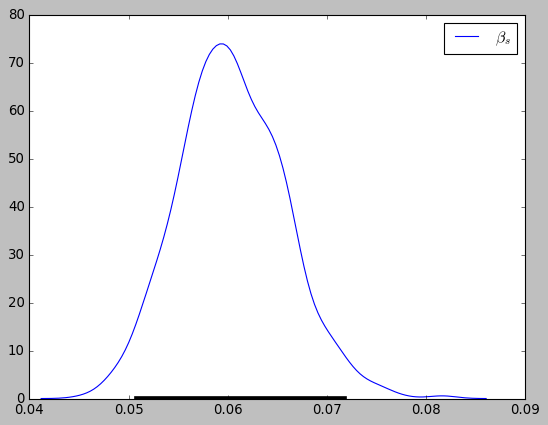

In [93]:
import seaborn as sns
plt.figure()
sns.kdeplot(data=ppc_beta_s,label=r'$\beta_s$')
#    plt.axvline(x=CriL_ppc_beta_s,color='r',linestyle="--")
#    plt.axvline(x=CriU_ppc_beta_s,color='r',linestyle="--")
x_values = [CriL_ppc_beta_s, CriU_ppc_beta_s]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)
plt.legend()  # Add a legend.
plt.savefig(save_results_to + 'BayesianInterval-beta_s.eps')

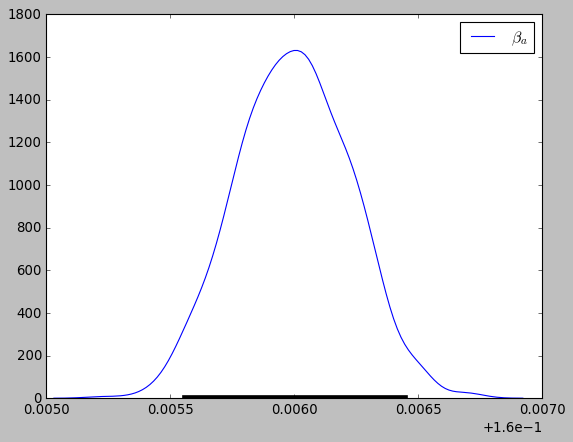

In [94]:
plt.figure()
sns.kdeplot(data=ppc_beta_a,label=r'$\beta_a$')
x_values = [CriL_ppc_beta_a, CriU_ppc_beta_a]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)  
plt.savefig(save_results_to + 'BayesianInterval-beta_a.eps')

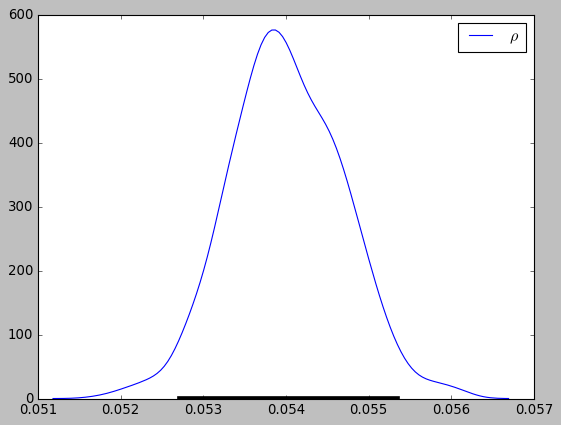

In [95]:
plt.figure()
sns.kdeplot(data=ppc_rho,label=r'$\rho$')
x_values = [CriL_ppc_rho, CriU_ppc_rho]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-rho.eps')

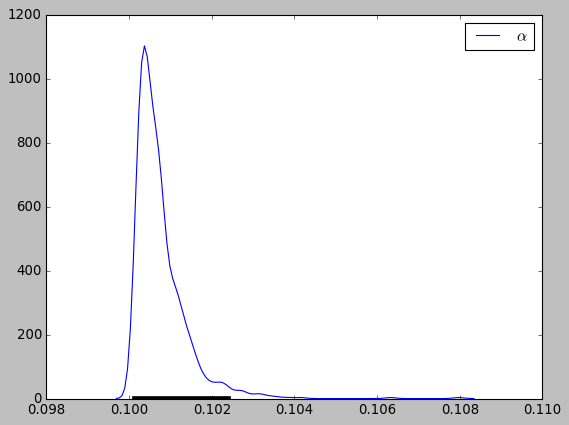

In [96]:
plt.figure()
sns.kdeplot(data=ppc_alpha,label=r'$\alpha$')
x_values = [CriL_ppc_alpha, CriU_ppc_alpha]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-alpha.eps')

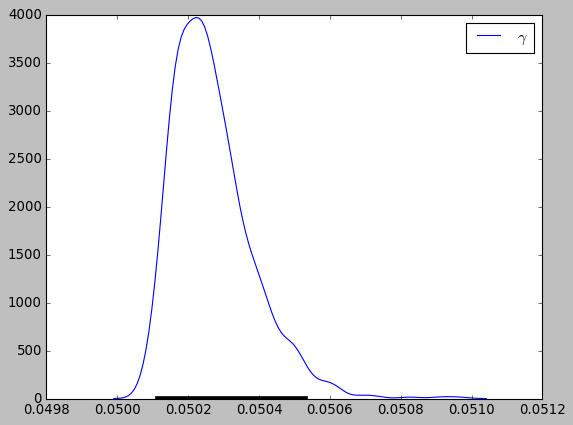

In [97]:
plt.figure()
sns.kdeplot(data=ppc_gamma,label=r'$\gamma$')
x_values = [CriL_ppc_gamma, CriU_ppc_gamma]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-gamma.eps')

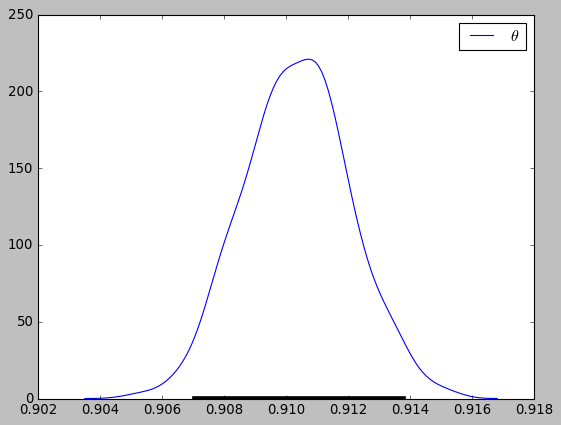

In [98]:
plt.figure()
sns.kdeplot(data=ppc_Theta,label=r'$\theta$')
x_values = [CriL_ppc_Theta, CriU_ppc_Theta]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-Theta.eps')

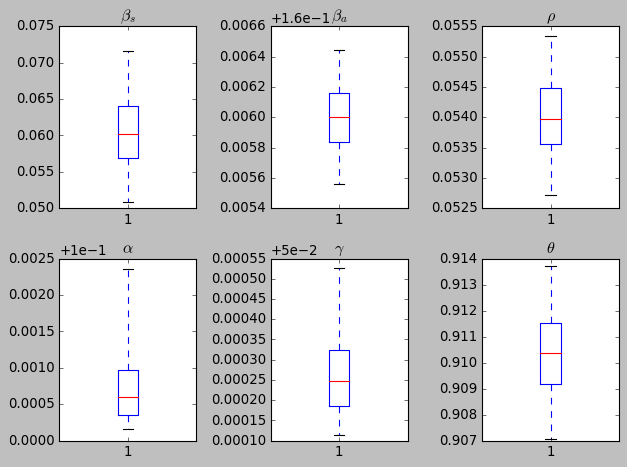

In [99]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(ppc_beta_s,whis=(2.5,97.5), sym='')
axs[0, 0].set_title(r'$\beta_s$')

axs[0, 1].boxplot(ppc_beta_a,whis=(2.5,97.5), sym='')
axs[0, 1].set_title(r'$\beta_a$')

axs[0, 2].boxplot(ppc_rho,whis=(2.5,97.5), sym='')
axs[0, 2].set_title(r'$\rho$')

axs[1, 0].boxplot(ppc_alpha,whis=(2.5,97.5), sym='')
axs[1, 0].set_title(r'$\alpha$')

axs[1, 1].boxplot(ppc_gamma,whis=(2.5,97.5), sym='')
axs[1, 1].set_title(r'$\gamma$')

axs[1, 2].boxplot(ppc_Theta,whis=(2.5,97.5), sym='')
axs[1, 2].set_title(r'$\theta$')
plt.tight_layout()
plt.savefig(save_results_to+'Box_Params.pdf')

In [100]:
sampleT=advi_results.loc[:,"beta_s":"Theta"]

In [38]:
map=np.median(sampleT,axis=0)
range = np.array([(0.5*x,1.5*x) for x in map])

<Figure size 748.8x514.8 with 0 Axes>

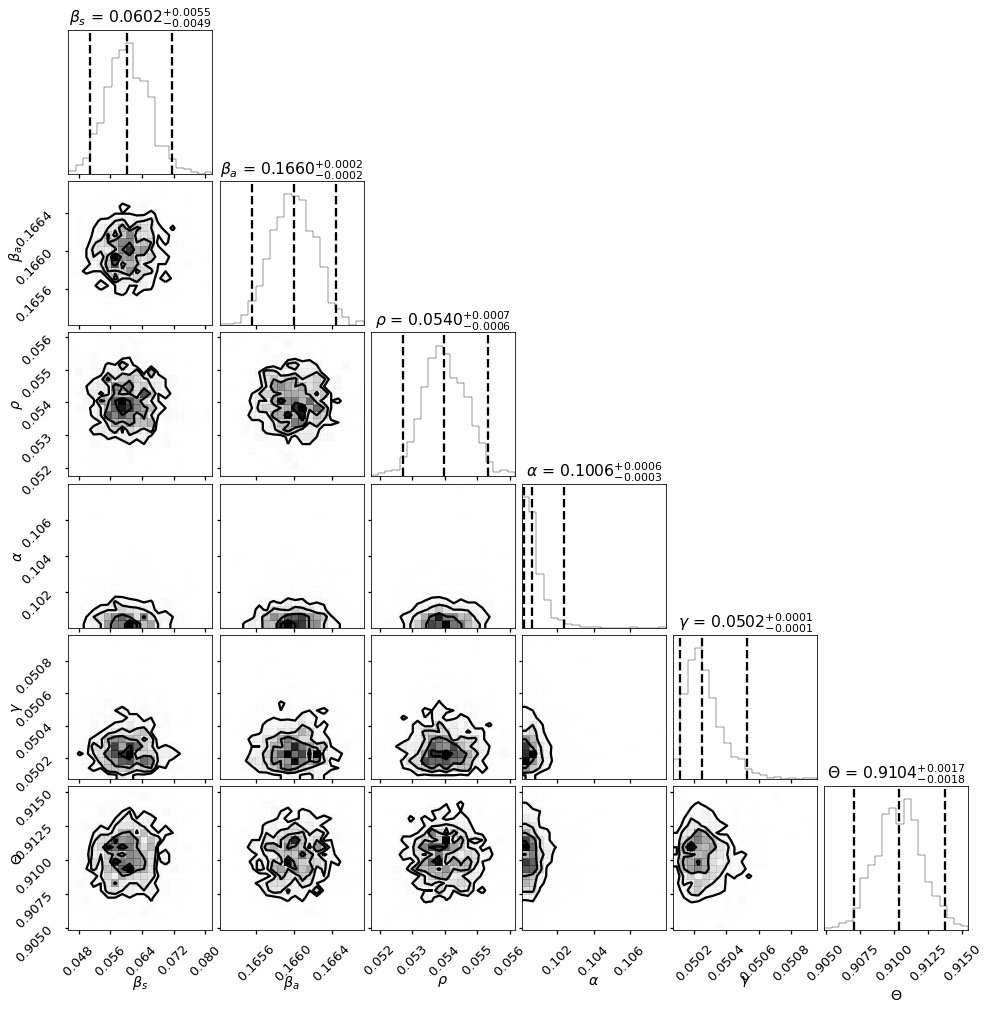

In [39]:
varnames=[r"$\beta_{s}$", r"$\beta_{a}$" , r"$\rho$" , r"$\alpha$",r"$\gamma$",r"$\Theta$"]
plt.figure()
corner.corner(sampleT,show_titles=True,labels=varnames,
                    plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
             use_math_text=True,title_fmt='.4f')
plt.savefig(save_results_to +'cornerCovMob0.pdf')

<Figure size 748.8x514.8 with 0 Axes>

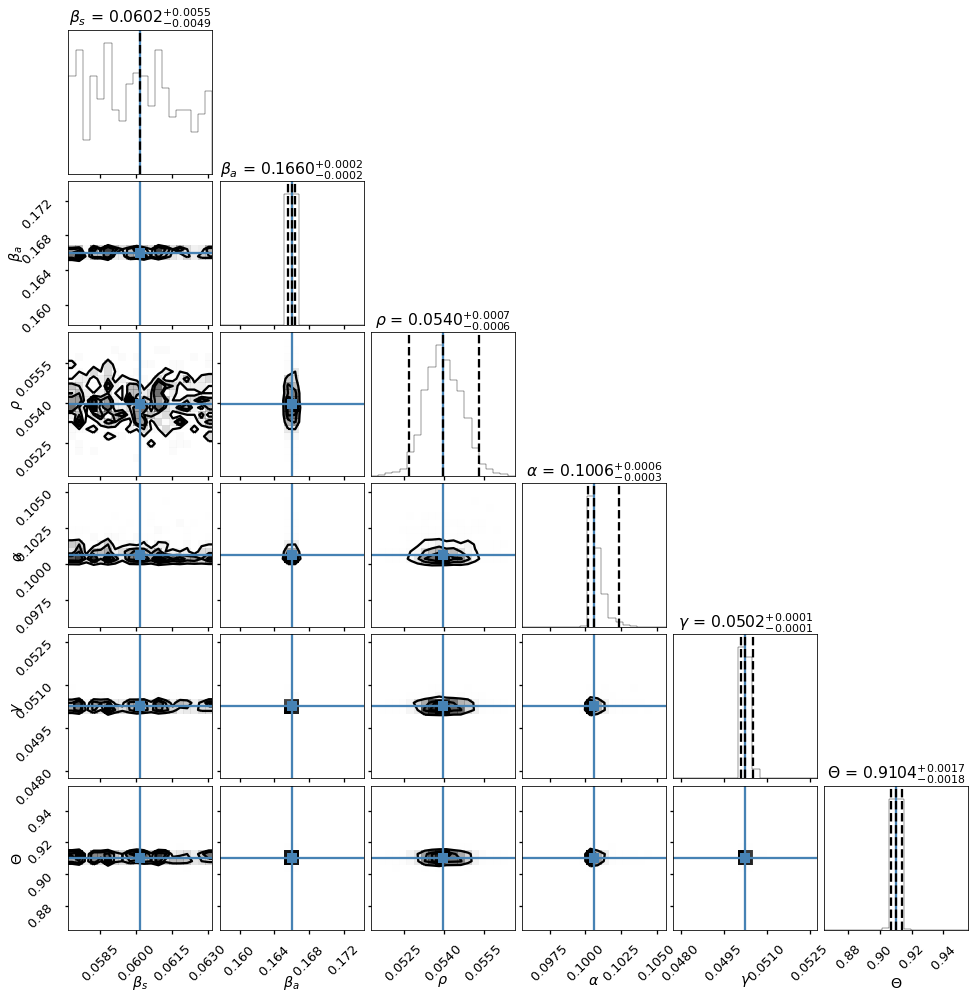

In [40]:
range = np.array([(0.95*x,1.05*x) for x in map])
plt.figure()
corner.corner(sampleT,show_titles=True,labels=varnames,truths=map,range=range,
                    plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
              use_math_text=True,title_fmt='.4f')
plt.savefig(save_results_to +'corner_CovMob1.pdf')

In [43]:
med_beta_s =np.percentile(ppc_beta_s,q=50.0)
mean_beta_s=np.mean(ppc_beta_s)
med_beta_a =np.percentile(ppc_beta_a,q=50.0)
mean_beta_a=np.mean(ppc_beta_a)
med_rho    =np.percentile(ppc_rho,q=50.0)
mean_rho   =np.mean(ppc_rho)
med_alpha  =np.percentile(ppc_alpha,q=50.0)
mean_alpha =np.mean(ppc_alpha)
med_gamma  =np.percentile(ppc_gamma,q=50.0)
mean_gamma =np.mean(ppc_gamma)
med_Theta  =np.percentile(ppc_Theta,q=50.0)
mean_Theta =np.mean(ppc_Theta)
print(med_beta_a)
print(mean_beta_a)

0.165999
0.1659961828171828


In [44]:
dict1 = {"mean": {r"$\beta_{s}$": mean_beta_s ,r"$\beta_{a}$": mean_beta_a, r"$\rho$": mean_rho}, 
         "2.5%": {r"$\beta_{s}$": CriL_ppc_beta_s ,r"$\beta_{a}$": CriL_ppc_beta_a, r"$\rho$": CriL_ppc_rho}, 
         "50%" : {r"$\beta_{s}$": med_beta_s ,r"$\rho$": med_beta_a, r"$\rho$": med_rho}}

In [45]:
model_params_df = pd.DataFrame(dict1)
model_params_df

,mean,2.5%,50%
$\beta_{s}$,0.060419,0.050808,0.060172
$\beta_{a}$,0.165996,0.165560,NaN
$\rho$,0.054005,0.052716,0.053970


In [46]:
dict1 = {r"$\beta_{s}$": {r"$\beta_{s}$": 'Mexico',r"$\beta_{s}$": 'EUA', "p3": "Francia"}, 
         r"$\beta_{a}$": {r"$\beta_{s}$": "America", "p2": "America", "p3": "Europa"}, 
         r"$\beta_{s}$": {r"$\beta_{s}$": 129, "p2": 325, "p3": 67}}

In [47]:
with open('Table_CovMob.tex','w') as tf:
     tf.write(df_summary.to_latex())

NameError: name 'df_summary' is not defined

In [ ]:
# varnames = ["beta_s", "beta_a","rho","alpha", "gamma","Theta","E1","A1","I1",
#             "E2","A2","I2","E3","A3","I3","E4","A4","I4","E5","A5","I5",
#             "E6","A6","I6","E7","A8","I9","phi"]
# summary=fit.summary(pars=varnames, probs=(0.025, 0.25, 0.5, 0.75, 0.975))

In [ ]:
# df_summary =  pd.DataFrame(
#     summary['summary'],
#     columns=summary['summary_colnames'],
#     index=summary['summary_rownames']
# )

# fit_dict= fit.extract()
# fit_df = fit.to_dataframe()

In [ ]:
#df_summary

In [ ]:
# with open('Table_CovMob.tex','w') as tf:
#      tf.write(df_summary.to_latex())

In [ ]:
# data = az.from_pystan(
#     posterior=fit,
#     posterior_predictive="fake",
#     observed_data=["y"],
# )

# data

In [ ]:
# #varnames = ["beta_s", "beta_a","rho","gama", "sigma","qu","E0","A0", "I0","phi"]
# fig =plt.figure()
# az.plot_posterior(data,var_names=varnames,credible_interval=0.95);
# plt.savefig(save_results_to + 'credIntervalsAll_SsEAIRD.pdf')

In [ ]:
# inference_data = az.from_pystan(fit)
# plt.figure()
# az.plot_trace(inference_data,var_names= varnames)
# plt.savefig(save_results_to +'TraceAll_SEAIRD.pdf')

In [48]:
# median_ppc = np.percentile(fit_dict['fake'],q=50.,axis=0)
# CriL_ppc   = np.percentile(fit_dict['fake'],q=2.5,axis=0)
# CriU_ppc   = np.percentile(fit_dict['fake'],q=97.5,axis=0)

<ipython-input-84-a974a843ba9f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Azcapotzalco"], linefmt='tomato', markerfmt=" ",basefmt=" ", label="Confirmed cases")


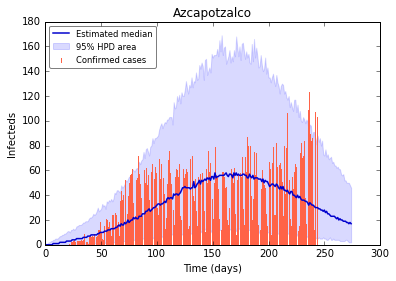

In [84]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Azcapotzalco"], linefmt='tomato', markerfmt=" ",basefmt=" ", label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,0],color='mediumblue', lw=1.5, label='Estimated median')
#plt.plot(times_pred,CriU_ppc[:,0], '--', color='b', lw=1.5)
#plt.plot(times_pred,CriL_ppc[:,0], '--', color='b', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.15, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Azcapotzalco")
plt.savefig(save_results_to + 'BandsPrediction_I_Azcapotzalco.pdf')

<ipython-input-103-092f1347ec72>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Coyoacan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


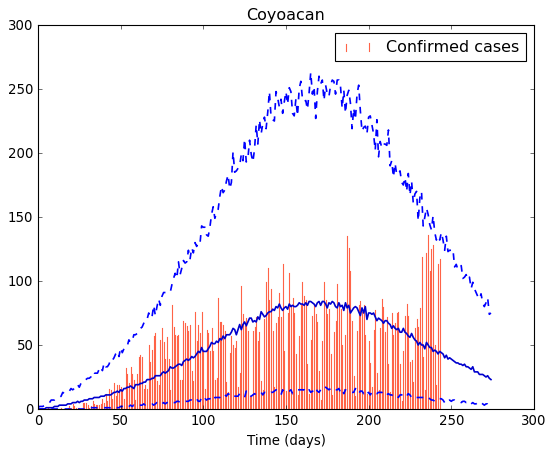

In [103]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Coyoacan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,1],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,1], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,1], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Coyoacan")
plt.savefig(save_results_to + 'BandsPrediction_I_Coyoacan.pdf')

<ipython-input-51-2a094b723b77>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["CuajimalpaDeMorelos"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")


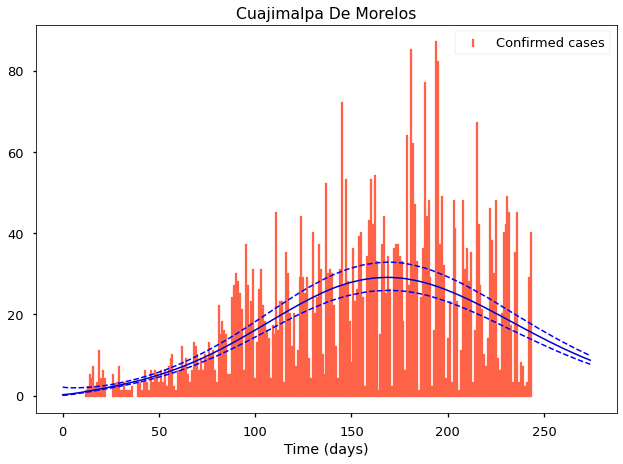

In [51]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["CuajimalpaDeMorelos"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,2],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,2], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,2], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Cuajimalpa De Morelos")
plt.savefig(save_results_to + 'BandsPrediction_I_CuajimalpaDeMorelos.pdf')

<ipython-input-52-f6ffe1b9caf0>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["GustavoAMadero"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")


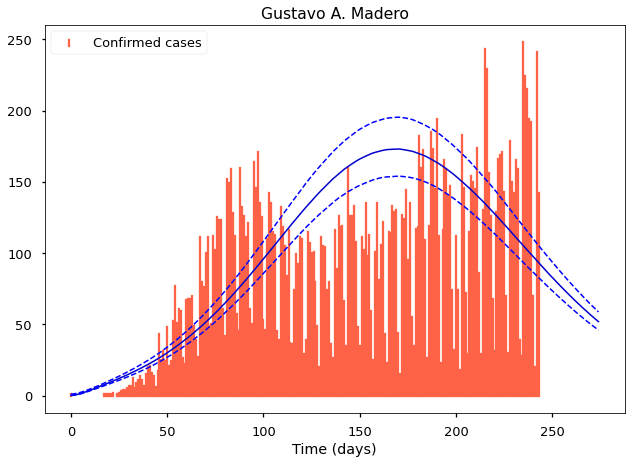

In [52]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["GustavoAMadero"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,3],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,3], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,3], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Gustavo A. Madero")
plt.savefig(save_results_to + 'BandsPrediction_I_GustavoAMadero.pdf')

<ipython-input-53-5879f228b301>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Iztacalco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")


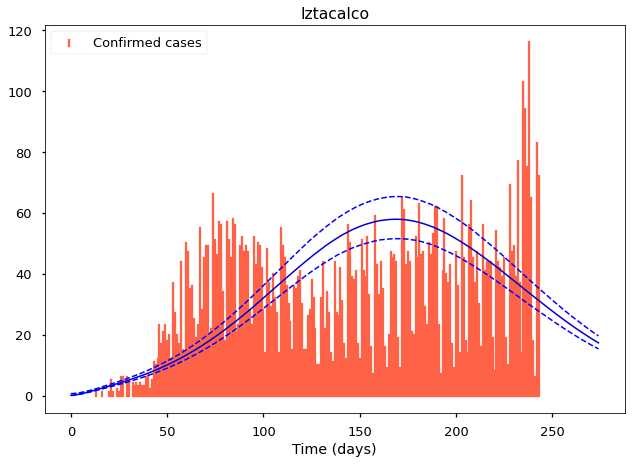

In [53]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Iztacalco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,4],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,4], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,4], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Iztacalco")
plt.savefig(save_results_to + 'BandsPrediction_I_Iztacalco.pdf')

<ipython-input-54-5f4d6dffc3bd>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Iztapalapa"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


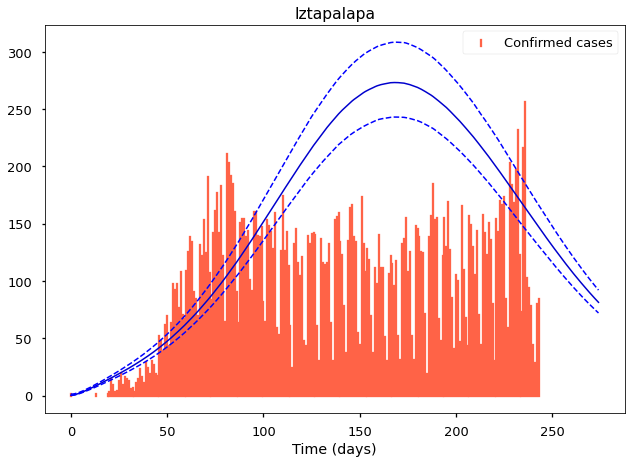

In [54]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Iztapalapa"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,5],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,5], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,5], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Iztapalapa")
plt.savefig(save_results_to + 'BandsPrediction_I_Iztapalapa.pdf')

<ipython-input-55-3ef20b527dcc>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["LaMagdalenaContreras"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


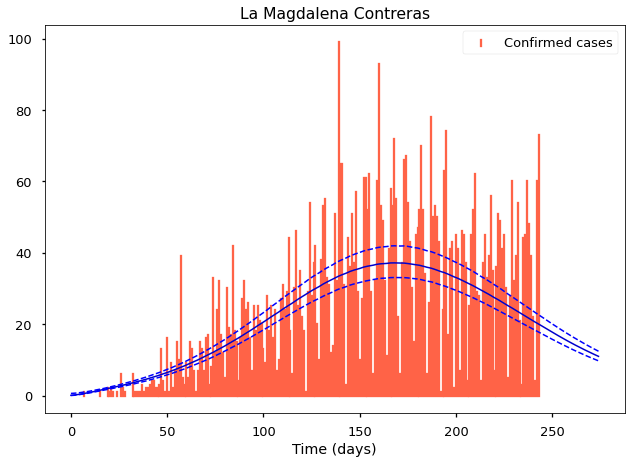

In [55]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["LaMagdalenaContreras"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,6],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,6], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,6], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("La Magdalena Contreras")
plt.savefig(save_results_to + 'BandsPrediction_I_LaMagdalenaContreras.pdf')

<ipython-input-56-129125f1b4f9>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["MilpaAlta"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


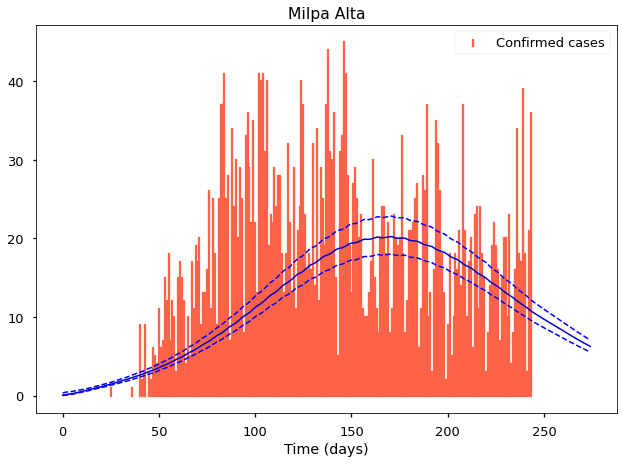

In [56]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["MilpaAlta"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,7],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,7], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,7], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Milpa Alta")
plt.savefig(save_results_to + 'BandsPrediction_I_MilpaAlta.pdf')

<ipython-input-57-115592cea155>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["AlvaroObregon"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


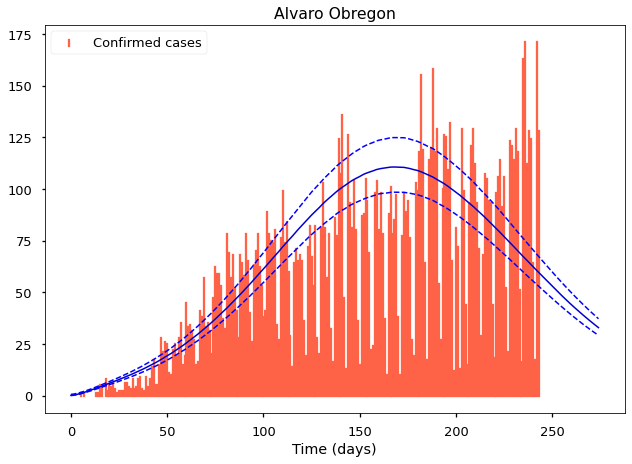

In [57]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["AlvaroObregon"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,8],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,8], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,8], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Alvaro Obregon")
plt.savefig(save_results_to + 'BandsPrediction_I_AlvaroObregon.pdf')

<ipython-input-58-2fb62a723a0a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Tlahuac"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )


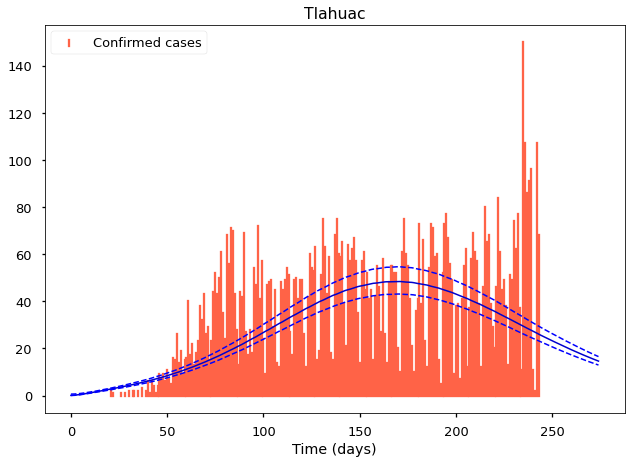

In [58]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Tlahuac"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,9],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,9], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,9], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Tlahuac")
plt.savefig(save_results_to + 'BandsPrediction_I_Tlahuac.pdf')

<ipython-input-59-efc547a5bfb8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Tlalpan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )


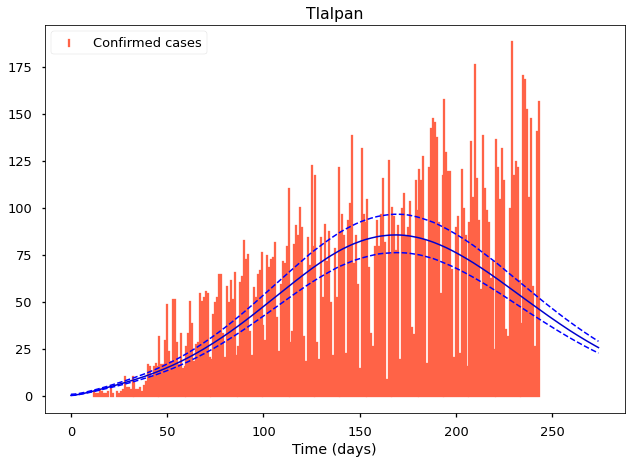

In [59]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Tlalpan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,10],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,10], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,10], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Tlalpan")
plt.savefig(save_results_to + 'BandsPrediction_I_Tlalpan.pdf')

<ipython-input-60-41c8cc773985>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Xochimilco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )


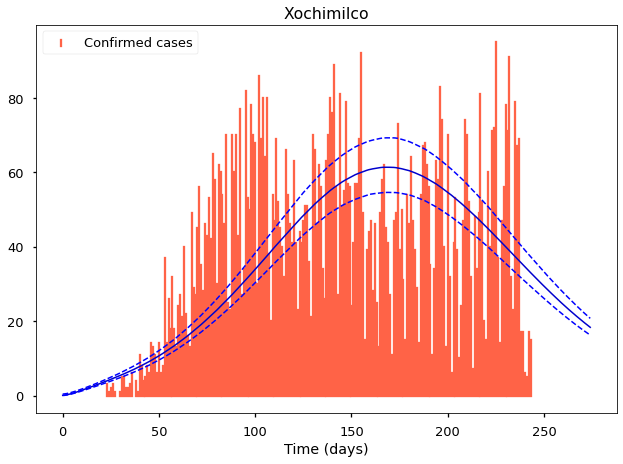

In [60]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Xochimilco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,11],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,11], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,11], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Xochimilco")
plt.savefig(save_results_to + 'BandsPrediction_I_Xochimilco.pdf')

<ipython-input-61-96c31c23705b>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["BenitoJuarez"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


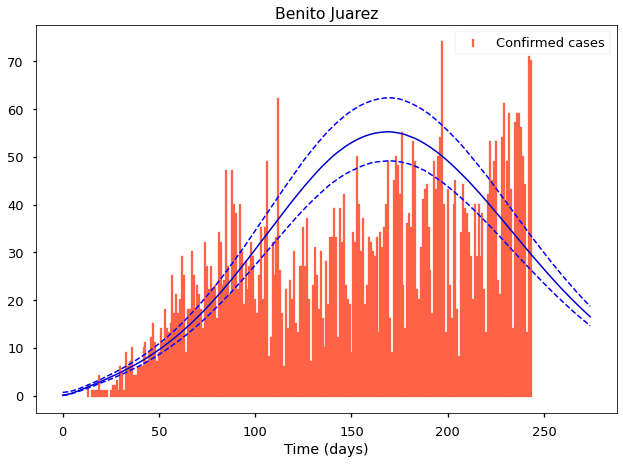

In [61]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["BenitoJuarez"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,12],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,12], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,12], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Benito Juarez")
plt.savefig(save_results_to + 'BandsPrediction_I_BenitoJuarez.pdf')

<ipython-input-62-c731df1c4c03>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["Cuauhtemoc"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


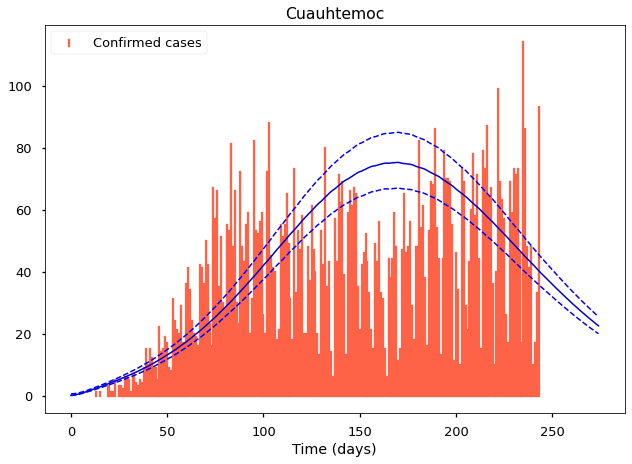

In [62]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Cuauhtemoc"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,13],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,13], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,13], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Cuauhtemoc")
plt.savefig(save_results_to + 'BandsPrediction_I_Cuauhtemoc.pdf')

<ipython-input-63-debb36848e9e>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["MiguelHidalgo"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


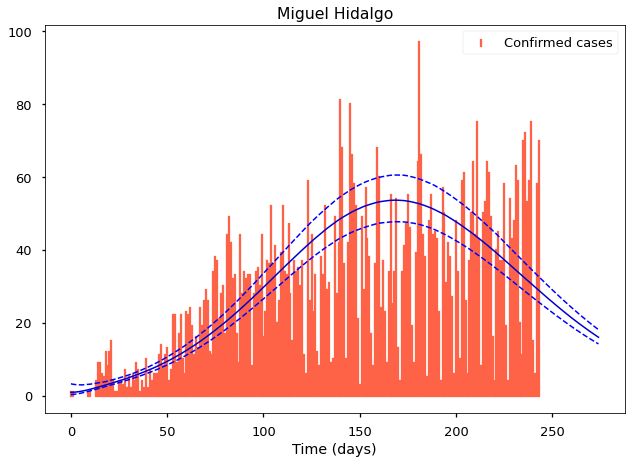

In [63]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["MiguelHidalgo"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,14],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,14], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,14], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Miguel Hidalgo")
plt.savefig(save_results_to + 'BandsPrediction_I_MiguelHidalgo.pdf')

<ipython-input-64-ea5d2b67895a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax2.stem(times, raw_incidence["VenustianoCarranza"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )


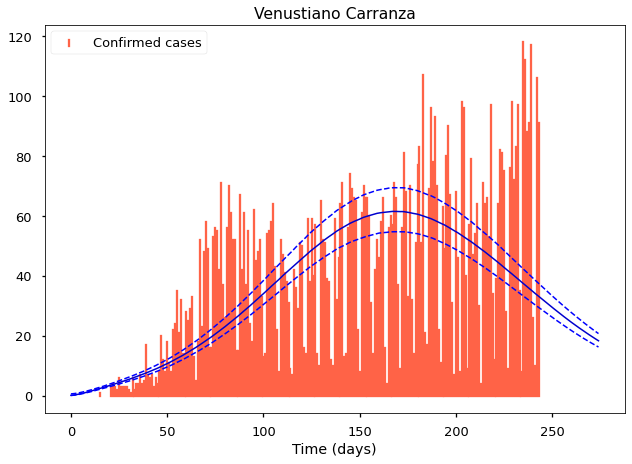

In [64]:
plt.figure()
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["VenustianoCarranza"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,15],color='mediumblue', lw=1.5)
plt.plot(times_pred,CriU_ppc[:,15], '--', color='b', lw=1.5)
plt.plot(times_pred,CriL_ppc[:,15], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.legend()  # Add a legend.
ax2.set_title("Venustiano Carranza")
plt.savefig(save_results_to + 'BandsPrediction_I_VenustianoCarranza.pdf')

In [65]:
# #varnames = ["beta_s", "beta_r",  "delta", "Karga","s0","i0"]
# pystan_trace = [fit_dict['beta_s'], fit_dict['beta_a'], fit_dict['rho'],fit_dict['gama'],
#                 fit_dict['sigma'],fit_dict['qu'],fit_dict['E0'],fit_dict['A0'],fit_dict['I0']]

In [66]:
# pystan_trace = [fit_dict['beta_s'], fit_dict['beta_a'], fit_dict['rho'],fit_dict['alpha'],
#                 fit_dict['gamma'],fit_dict['Theta']]

In [67]:
# trace=np.array(pystan_trace)
# trace_df = pd.DataFrame(pystan_trace) 
# map=np.median(trace,axis=1)
# range = np.array([(0.5*x,1.5*x) for x in map])

In [68]:
# varnames=[r"$\beta_{s}$", r"$\beta_{a}$" , r"$\rho$" , r"$\alpha$",r"$\gamma$",r"$\Theta$"]
# plt.figure()
# corner.corner(trace_df.T,show_titles=True,labels=varnames,
#                     plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
#              use_math_text=True,title_fmt='.4f')
# plt.savefig(save_results_to +'corner_SEAIRD.pdf')

In [69]:
# # varnames=[r"$\beta_{s}$", r"$\beta_{a}$" , r"$\rho$" , r"$\gamma$",r"$\sigma$",r"$q$",
# #           r"$E_{0}$",r"$A_{0}$",r"$I_{0}$"]
# range = np.array([(0.1*x,1.9*x) for x in map])
# plt.figure()
# corner.corner(trace_df.T,show_titles=True,labels=varnames,truths=map,range=range,
#                     plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
#               use_math_text=True,title_fmt='.4f')
# plt.savefig(save_results_to +'corner_SEAIRD1.pdf')